In [1]:
from google.colab import files
image = files.upload()

Saving Lenna.jpeg to Lenna.jpeg


In [ ]:
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-ui4erq78
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-ui4erq78
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit aac710a35f52bb78ab34d2e52517237941399eff
  Preparing metadata (setup.py) ... done
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4287 sha256=34cc15babac99bbe282fc7fe176f5fedf829f414b24cc4e1c136cdb8275a82cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-dygpq4kw/wheels/a8/b9/18/23f8ef71ceb0f63297dd1903aedd067e6243a68ea756d6feea
Successfully built NVCCPlugin


In [ ]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


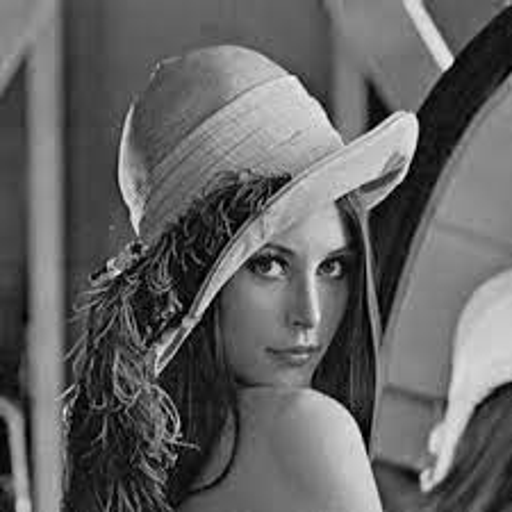

In [ ]:
import numpy as np
from PIL import Image, ImageOps
image = Image.open("Lenna.jpeg")
image = ImageOps.grayscale(image)
image = image.resize((512, 512))
image.show()
img = np.asarray(image)

In [ ]:
%%cu

void Sharp_Given_Image(int img[][512], int num_of_rows, int num_of_columns) {
  int Sharp_Filter[3][3] = {{0, -1, 0}, {-1, 5, -1}, {0, -1, 0}};
  for(int row = 0; row < num_of_rows - 3; row++) {
    for(int column = 0; column < num_of_columns - 3; column++) {
      int temp = 0;
      for(int i = 0; i < 3; i++)
        for(int j = 0; j < 3; j++)
          temp = temp + (img[row + i][column + j] * Sharp_Filter[i][j]);
      img[row][column] = temp;
    }
  }
}

#include <chrono>
#include <iostream>

#define num_of_rows 512
#define num_of_columns 512

using namespace std;
using namespace std::chrono;

int main() {
          
      int image[num_of_rows][num_of_columns] = 

{ { 161 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 159 , 161 , 163 , 162 , 160 , 158 , 157 , 155 , 154 , 153 , 152 , 151 , 151 , 152 , 152 , 153 , 153 , 154 , 155 , 158 , 161 , 162 , 163 , 164 , 167 , 169 , 171 , 172 , 173 , 174 , 174 , 174 , 174 , 173 , 172 , 172 , 171 , 164 , 155 , 152 , 150 , 146 , 140 , 133 , 124 , 116 , 107 , 100 , 95 , 93 , 92 , 93 , 95 , 98 , 101 , 102 , 103 , 103 , 104 , 104 , 104 , 104 , 104 , 105 , 105 , 106 , 106 , 107 , 107 , 108 , 108 , 108 , 108 , 108 , 109 , 109 , 109 , 108 , 107 , 106 , 105 , 105 , 105 , 106 , 107 , 109 , 110 , 112 , 113 , 115 , 116 , 118 , 120 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 124 , 125 , 125 , 125 , 126 , 126 , 127 , 127 , 128 , 128 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 135 , 136 , 136 , 135 , 135 , 135 , 135 , 135 , 135 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 132 , 132 , 131 , 131 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 130 , 129 , 128 , 128 , 128 , 127 , 127 , 126 , 126 , 126 , 125 , 124 , 123 , 123 , 122 , 122 , 122 , 122 , 123 , 124 , 122 , 118 , 115 , 111 , 108 , 105 , 103 , 103 , 105 , 107 , 111 , 115 , 120 , 125 , 128 , 132 , 138 , 145 , 149 , 151 , 153 , 155 , 157 , 159 , 161 , 162 , 162 , 161 , 160 , 157 , 155 , 152 , 149 , 148 , 149 , 153 , 154 , 154 , 154 , 154 , 155 , 155 , 156 , 156 , 157 , 157 , 158 , 158 , 158 , 158 , 159 , 159 , 158 , 155 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 154 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 157 , 156 , 149 , 146 , 157 , 175 , 192 , 204 , 213 , 216 , 216 , 214 , 211 , 211 , 212 , 212 , 213 , 214 , 215 , 213 , 207 , 196 , 182 , 162 , 145 , 128 , 115 , 109 , 108 , 109 , 111 , 112 , 112 , 112 , 110 , 110 , 112 , 113 , 116 , 120 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 126 , 125 , 121 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 123 , 122 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 126 , 127 , 129 , 130 , 130 , 129 , 127 , 124 , 121 , 117 , 113 , 112 , 111 , 115 , 120 , 128 , 139 , 150 , 161 , 167 , 160 , 147 , 143 },
 { 161 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 159 , 161 , 163 , 162 , 160 , 158 , 157 , 155 , 154 , 153 , 152 , 151 , 151 , 152 , 152 , 153 , 153 , 154 , 155 , 158 , 161 , 162 , 163 , 164 , 167 , 169 , 171 , 172 , 173 , 174 , 174 , 174 , 174 , 173 , 172 , 172 , 171 , 164 , 155 , 152 , 150 , 146 , 140 , 133 , 124 , 116 , 107 , 100 , 95 , 93 , 92 , 93 , 95 , 98 , 101 , 102 , 103 , 103 , 104 , 104 , 104 , 104 , 104 , 105 , 105 , 106 , 106 , 107 , 107 , 108 , 108 , 108 , 108 , 108 , 109 , 109 , 109 , 108 , 107 , 106 , 105 , 105 , 105 , 106 , 107 , 109 , 110 , 112 , 113 , 115 , 116 , 118 , 120 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 124 , 125 , 125 , 125 , 126 , 126 , 127 , 127 , 128 , 128 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 135 , 136 , 136 , 135 , 135 , 135 , 135 , 135 , 135 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 132 , 132 , 131 , 131 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 130 , 129 , 128 , 128 , 128 , 127 , 127 , 126 , 126 , 126 , 125 , 124 , 123 , 123 , 122 , 122 , 122 , 122 , 123 , 124 , 122 , 118 , 115 , 111 , 108 , 105 , 103 , 103 , 105 , 107 , 111 , 115 , 120 , 125 , 128 , 132 , 138 , 145 , 149 , 151 , 153 , 155 , 157 , 159 , 161 , 162 , 162 , 161 , 160 , 157 , 155 , 152 , 149 , 148 , 149 , 153 , 154 , 154 , 154 , 154 , 155 , 155 , 156 , 156 , 157 , 157 , 158 , 158 , 158 , 158 , 159 , 159 , 158 , 155 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 154 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 157 , 156 , 149 , 146 , 157 , 175 , 190 , 204 , 213 , 216 , 216 , 214 , 211 , 211 , 212 , 212 , 213 , 214 , 215 , 213 , 207 , 196 , 182 , 164 , 145 , 128 , 115 , 108 , 106 , 107 , 111 , 112 , 112 , 113 , 112 , 112 , 112 , 113 , 116 , 120 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 126 , 125 , 121 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 123 , 122 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 126 , 127 , 127 , 128 , 127 , 127 , 125 , 122 , 119 , 115 , 113 , 112 , 113 , 117 , 124 , 132 , 143 , 154 , 165 , 171 , 163 , 149 , 144 },
 { 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 161 , 162 , 161 , 160 , 159 , 157 , 155 , 154 , 153 , 152 , 151 , 151 , 152 , 152 , 153 , 153 , 154 , 155 , 159 , 161 , 162 , 164 , 165 , 167 , 169 , 171 , 172 , 173 , 174 , 174 , 173 , 173 , 172 , 172 , 172 , 171 , 164 , 155 , 151 , 149 , 145 , 139 , 133 , 124 , 116 , 107 , 100 , 95 , 92 , 91 , 92 , 94 , 97 , 100 , 101 , 103 , 103 , 103 , 103 , 104 , 104 , 104 , 105 , 105 , 106 , 106 , 107 , 107 , 107 , 107 , 107 , 108 , 108 , 109 , 109 , 108 , 107 , 106 , 106 , 106 , 105 , 105 , 105 , 106 , 108 , 110 , 112 , 114 , 115 , 115 , 117 , 119 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 125 , 126 , 126 , 126 , 127 , 127 , 128 , 128 , 129 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 135 , 135 , 135 , 135 , 135 , 135 , 135 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 132 , 132 , 131 , 131 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 127 , 126 , 125 , 125 , 124 , 123 , 123 , 122 , 122 , 122 , 122 , 123 , 123 , 121 , 118 , 115 , 111 , 108 , 105 , 104 , 104 , 105 , 107 , 111 , 115 , 120 , 125 , 127 , 131 , 137 , 144 , 148 , 150 , 152 , 155 , 157 , 159 , 161 , 161 , 161 , 160 , 159 , 157 , 155 , 153 , 150 , 148 , 150 , 152 , 153 , 154 , 154 , 153 , 154 , 154 , 155 , 155 , 156 , 156 , 157 , 157 , 158 , 158 , 158 , 158 , 157 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 156 , 155 , 149 , 147 , 157 , 173 , 188 , 202 , 212 , 216 , 217 , 216 , 213 , 213 , 213 , 213 , 213 , 213 , 215 , 213 , 208 , 198 , 184 , 166 , 147 , 128 , 113 , 106 , 103 , 105 , 109 , 112 , 114 , 115 , 115 , 114 , 114 , 114 , 115 , 119 , 121 , 121 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 124 , 121 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 123 , 122 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 124 , 122 , 120 , 120 , 118 , 116 , 114 , 112 , 111 , 113 , 116 , 123 , 131 , 141 , 154 , 165 , 177 , 182 , 172 , 156 , 150 },
 { 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 161 , 162 , 161 , 160 , 159 , 157 , 155 , 154 , 153 , 152 , 151 , 151 , 152 , 153 , 154 , 154 , 155 , 156 , 159 , 161 , 162 , 164 , 165 , 167 , 169 , 171 , 172 , 173 , 174 , 174 , 173 , 173 , 172 , 172 , 172 , 170 , 163 , 155 , 151 , 149 , 145 , 139 , 133 , 124 , 116 , 107 , 100 , 95 , 92 , 91 , 92 , 94 , 97 , 100 , 101 , 103 , 103 , 103 , 103 , 104 , 104 , 104 , 105 , 105 , 106 , 106 , 107 , 107 , 107 , 107 , 107 , 108 , 108 , 109 , 109 , 108 , 107 , 106 , 106 , 106 , 105 , 105 , 105 , 106 , 108 , 110 , 112 , 114 , 115 , 115 , 117 , 119 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 125 , 126 , 126 , 126 , 127 , 127 , 128 , 128 , 129 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 135 , 135 , 135 , 135 , 135 , 135 , 135 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 132 , 132 , 131 , 131 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 127 , 126 , 125 , 125 , 124 , 123 , 123 , 122 , 122 , 122 , 122 , 123 , 123 , 121 , 118 , 115 , 111 , 108 , 105 , 104 , 104 , 105 , 107 , 111 , 115 , 120 , 124 , 126 , 130 , 136 , 143 , 147 , 149 , 151 , 154 , 156 , 159 , 161 , 161 , 161 , 160 , 159 , 157 , 155 , 153 , 151 , 149 , 150 , 151 , 152 , 153 , 153 , 153 , 153 , 153 , 154 , 154 , 155 , 155 , 156 , 156 , 157 , 157 , 157 , 157 , 156 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 150 , 148 , 157 , 171 , 185 , 199 , 210 , 215 , 218 , 218 , 215 , 214 , 213 , 213 , 213 , 213 , 215 , 214 , 209 , 201 , 187 , 169 , 150 , 129 , 113 , 104 , 100 , 102 , 107 , 111 , 115 , 117 , 118 , 117 , 115 , 114 , 115 , 119 , 121 , 121 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 124 , 121 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 123 , 122 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 122 , 118 , 115 , 115 , 113 , 111 , 110 , 110 , 111 , 115 , 120 , 128 , 138 , 148 , 160 , 171 , 182 , 185 , 172 , 153 , 146 },
 { 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 161 , 162 , 161 , 160 , 159 , 157 , 155 , 154 , 153 , 152 , 151 , 152 , 153 , 154 , 155 , 155 , 156 , 157 , 159 , 161 , 162 , 164 , 165 , 167 , 169 , 171 , 172 , 173 , 174 , 174 , 173 , 173 , 172 , 171 , 171 , 169 , 162 , 154 , 151 , 149 , 145 , 139 , 132 , 123 , 115 , 107 , 100 , 95 , 92 , 91 , 92 , 94 , 97 , 100 , 101 , 103 , 103 , 103 , 103 , 104 , 104 , 104 , 105 , 105 , 106 , 106 , 107 , 107 , 107 , 107 , 107 , 108 , 108 , 109 , 109 , 108 , 107 , 106 , 106 , 105 , 105 , 105 , 105 , 106 , 108 , 110 , 112 , 114 , 115 , 115 , 117 , 118 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 125 , 126 , 126 , 126 , 127 , 127 , 128 , 128 , 129 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 135 , 135 , 135 , 135 , 135 , 135 , 135 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 132 , 132 , 131 , 131 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 130 , 129 , 129 , 128 , 128 , 127 , 126 , 125 , 125 , 124 , 123 , 123 , 122 , 122 , 122 , 122 , 122 , 122 , 121 , 118 , 115 , 111 , 108 , 106 , 104 , 104 , 105 , 107 , 111 , 115 , 119 , 123 , 125 , 128 , 134 , 141 , 145 , 147 , 149 , 152 , 155 , 158 , 160 , 161 , 161 , 160 , 159 , 157 , 155 , 153 , 151 , 150 , 150 , 150 , 151 , 152 , 152 , 153 , 152 , 152 , 153 , 153 , 154 , 154 , 155 , 155 , 156 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 151 , 149 , 157 , 169 , 181 , 195 , 206 , 213 , 218 , 219 , 218 , 216 , 213 , 213 , 213 , 212 , 215 , 215 , 212 , 205 , 191 , 173 , 154 , 132 , 115 , 103 , 97 , 98 , 104 , 109 , 115 , 119 , 121 , 120 , 116 , 113 , 115 , 119 , 121 , 121 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 125 , 125 , 125 , 124 , 121 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 123 , 122 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 124 , 121 , 118 , 116 , 113 , 110 , 109 , 110 , 113 , 118 , 125 , 132 , 140 , 148 , 155 , 162 , 169 , 170 , 152 , 130 , 121 },
 { 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 158 , 160 , 161 , 160 , 159 , 158 , 157 , 155 , 154 , 153 , 152 , 152 , 153 , 154 , 155 , 156 , 156 , 157 , 158 , 160 , 162 , 163 , 165 , 166 , 168 , 170 , 171 , 172 , 173 , 173 , 173 , 172 , 172 , 171 , 170 , 170 , 168 , 161 , 153 , 150 , 148 , 144 , 138 , 131 , 122 , 114 , 106 , 99 , 94 , 91 , 90 , 91 , 93 , 96 , 99 , 101 , 102 , 103 , 103 , 103 , 104 , 104 , 104 , 105 , 105 , 106 , 106 , 106 , 106 , 107 , 107 , 107 , 107 , 107 , 108 , 108 , 108 , 107 , 106 , 105 , 104 , 104 , 104 , 105 , 106 , 108 , 109 , 111 , 113 , 114 , 114 , 116 , 118 , 120 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 125 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 129 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 135 , 135 , 135 , 135 , 135 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 131 , 131 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 126 , 125 , 124 , 124 , 124 , 123 , 123 , 122 , 122 , 122 , 122 , 121 , 118 , 115 , 112 , 109 , 107 , 105 , 104 , 105 , 107 , 110 , 114 , 117 , 121 , 123 , 126 , 132 , 139 , 143 , 145 , 147 , 150 , 153 , 156 , 159 , 160 , 161 , 161 , 159 , 158 , 156 , 154 , 152 , 151 , 150 , 150 , 150 , 151 , 151 , 152 , 152 , 152 , 152 , 152 , 153 , 153 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 152 , 151 , 156 , 166 , 178 , 190 , 201 , 211 , 217 , 220 , 220 , 218 , 214 , 212 , 212 , 212 , 215 , 217 , 215 , 208 , 196 , 179 , 160 , 138 , 119 , 105 , 97 , 95 , 100 , 106 , 114 , 120 , 122 , 121 , 117 , 112 , 114 , 118 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 123 , 123 , 124 , 124 , 124 , 123 , 120 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 123 , 122 , 122 , 123 , 123 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 126 , 123 , 119 , 115 , 112 , 111 , 113 , 115 , 122 , 129 , 134 , 139 , 143 , 144 , 145 , 148 , 144 , 123 , 100 , 90 },
 { 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 158 , 160 , 161 , 160 , 159 , 158 , 156 , 155 , 154 , 153 , 152 , 152 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 161 , 163 , 164 , 165 , 166 , 168 , 170 , 171 , 172 , 173 , 173 , 172 , 171 , 171 , 170 , 169 , 169 , 167 , 161 , 153 , 150 , 148 , 144 , 138 , 131 , 122 , 114 , 105 , 98 , 93 , 90 , 89 , 91 , 93 , 95 , 98 , 100 , 102 , 103 , 103 , 103 , 104 , 104 , 104 , 105 , 105 , 106 , 106 , 106 , 106 , 107 , 107 , 107 , 107 , 107 , 108 , 108 , 108 , 107 , 106 , 105 , 104 , 104 , 104 , 105 , 106 , 108 , 109 , 111 , 113 , 114 , 114 , 116 , 118 , 120 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 125 , 125 , 126 , 126 , 127 , 127 , 127 , 127 , 129 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 135 , 135 , 135 , 135 , 135 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 131 , 131 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 126 , 125 , 124 , 124 , 124 , 123 , 123 , 122 , 122 , 122 , 122 , 121 , 118 , 115 , 112 , 109 , 107 , 105 , 105 , 105 , 107 , 110 , 113 , 116 , 120 , 122 , 124 , 130 , 137 , 141 , 143 , 145 , 149 , 152 , 155 , 158 , 159 , 161 , 161 , 159 , 158 , 156 , 155 , 153 , 152 , 151 , 150 , 150 , 150 , 150 , 151 , 152 , 152 , 152 , 152 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 152 , 152 , 156 , 164 , 173 , 185 , 196 , 207 , 216 , 220 , 221 , 219 , 215 , 212 , 212 , 212 , 215 , 218 , 217 , 212 , 202 , 186 , 169 , 147 , 127 , 111 , 100 , 95 , 98 , 103 , 111 , 117 , 120 , 120 , 116 , 112 , 114 , 118 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 123 , 123 , 124 , 124 , 124 , 123 , 120 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 123 , 122 , 122 , 123 , 123 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 126 , 126 , 127 , 127 , 127 , 127 , 131 , 132 , 129 , 124 , 120 , 115 , 114 , 116 , 119 , 124 , 129 , 132 , 132 , 131 , 126 , 121 , 118 , 111 , 93 , 74 , 67 },
 { 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 157 , 159 , 160 , 159 , 158 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 160 , 162 , 164 , 165 , 166 , 167 , 168 , 170 , 171 , 172 , 172 , 172 , 171 , 170 , 170 , 169 , 168 , 168 , 166 , 160 , 152 , 149 , 147 , 143 , 137 , 130 , 121 , 113 , 104 , 97 , 92 , 89 , 88 , 90 , 92 , 94 , 97 , 99 , 101 , 102 , 102 , 102 , 103 , 103 , 103 , 104 , 104 , 105 , 105 , 106 , 106 , 107 , 107 , 107 , 107 , 107 , 107 , 107 , 107 , 106 , 105 , 104 , 103 , 103 , 103 , 104 , 105 , 107 , 108 , 110 , 112 , 113 , 113 , 115 , 118 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 123 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 127 , 127 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 131 , 131 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 128 , 127 , 126 , 126 , 125 , 124 , 124 , 123 , 123 , 123 , 123 , 123 , 122 , 120 , 118 , 115 , 112 , 109 , 107 , 106 , 106 , 106 , 107 , 109 , 112 , 115 , 118 , 120 , 122 , 128 , 135 , 139 , 141 , 143 , 147 , 150 , 154 , 157 , 158 , 160 , 160 , 160 , 159 , 157 , 156 , 154 , 153 , 151 , 150 , 150 , 150 , 150 , 150 , 151 , 151 , 152 , 152 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 153 , 153 , 155 , 160 , 168 , 179 , 191 , 203 , 213 , 219 , 222 , 220 , 216 , 213 , 212 , 212 , 216 , 219 , 218 , 216 , 208 , 195 , 180 , 159 , 139 , 120 , 105 , 98 , 97 , 100 , 107 , 112 , 116 , 117 , 115 , 111 , 113 , 117 , 119 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 122 , 122 , 122 , 123 , 123 , 123 , 122 , 120 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 123 , 123 , 124 , 124 , 125 , 125 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 128 , 133 , 137 , 135 , 129 , 125 , 121 , 119 , 120 , 122 , 125 , 127 , 126 , 122 , 115 , 103 , 93 , 82 , 73 , 61 , 52 , 48 },
 { 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 157 , 159 , 160 , 159 , 158 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 155 , 156 , 157 , 159 , 160 , 161 , 162 , 164 , 165 , 166 , 167 , 168 , 170 , 171 , 172 , 172 , 172 , 171 , 170 , 169 , 168 , 167 , 167 , 165 , 159 , 152 , 149 , 147 , 143 , 137 , 130 , 121 , 113 , 104 , 97 , 92 , 89 , 88 , 90 , 92 , 94 , 97 , 99 , 101 , 102 , 102 , 102 , 103 , 103 , 103 , 104 , 104 , 105 , 105 , 106 , 106 , 107 , 107 , 107 , 107 , 107 , 107 , 107 , 107 , 106 , 105 , 104 , 103 , 103 , 103 , 104 , 105 , 107 , 108 , 110 , 112 , 113 , 113 , 115 , 118 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 123 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 127 , 127 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 131 , 131 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 128 , 127 , 126 , 126 , 125 , 124 , 124 , 123 , 123 , 123 , 123 , 123 , 122 , 120 , 118 , 115 , 112 , 109 , 107 , 106 , 106 , 106 , 107 , 109 , 111 , 114 , 116 , 118 , 120 , 126 , 133 , 137 , 139 , 141 , 145 , 148 , 152 , 155 , 158 , 160 , 160 , 160 , 159 , 157 , 156 , 156 , 154 , 153 , 151 , 150 , 150 , 150 , 150 , 151 , 151 , 152 , 152 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 153 , 153 , 155 , 157 , 164 , 173 , 185 , 198 , 208 , 216 , 220 , 219 , 216 , 213 , 212 , 212 , 216 , 219 , 219 , 218 , 213 , 203 , 191 , 172 , 153 , 132 , 114 , 103 , 98 , 98 , 103 , 107 , 111 , 114 , 113 , 111 , 113 , 117 , 119 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 122 , 122 , 122 , 123 , 123 , 123 , 122 , 120 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 123 , 123 , 124 , 124 , 125 , 125 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 128 , 133 , 137 , 136 , 132 , 129 , 126 , 124 , 124 , 124 , 124 , 121 , 116 , 109 , 98 , 85 , 72 , 60 , 50 , 44 , 42 , 41 },
 { 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 156 , 158 , 159 , 158 , 157 , 156 , 154 , 154 , 153 , 153 , 153 , 154 , 155 , 156 , 157 , 158 , 160 , 161 , 162 , 163 , 165 , 166 , 167 , 168 , 169 , 170 , 171 , 171 , 171 , 171 , 170 , 170 , 168 , 167 , 166 , 166 , 164 , 158 , 151 , 148 , 146 , 142 , 136 , 129 , 120 , 112 , 103 , 96 , 91 , 88 , 87 , 89 , 91 , 93 , 96 , 98 , 101 , 102 , 102 , 102 , 103 , 103 , 103 , 103 , 103 , 104 , 104 , 105 , 105 , 106 , 106 , 106 , 106 , 106 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 102 , 102 , 103 , 104 , 106 , 107 , 109 , 111 , 112 , 112 , 114 , 117 , 119 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 125 , 125 , 126 , 126 , 126 , 126 , 128 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 131 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 126 , 125 , 125 , 125 , 124 , 124 , 123 , 123 , 122 , 121 , 120 , 118 , 115 , 113 , 110 , 108 , 107 , 106 , 106 , 107 , 108 , 110 , 113 , 114 , 116 , 118 , 124 , 130 , 134 , 136 , 139 , 143 , 147 , 151 , 155 , 157 , 159 , 160 , 160 , 160 , 158 , 157 , 156 , 155 , 154 , 152 , 151 , 151 , 151 , 151 , 152 , 152 , 153 , 153 , 153 , 153 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 159 , 167 , 177 , 191 , 202 , 210 , 216 , 217 , 214 , 213 , 213 , 212 , 216 , 219 , 220 , 219 , 217 , 211 , 201 , 187 , 168 , 146 , 126 , 111 , 100 , 96 , 98 , 101 , 106 , 109 , 110 , 109 , 113 , 117 , 118 , 118 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 121 , 121 , 122 , 122 , 122 , 122 , 121 , 120 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 126 , 127 , 127 , 128 , 128 , 128 , 128 , 131 , 133 , 133 , 132 , 131 , 130 , 128 , 127 , 124 , 118 , 112 , 103 , 93 , 82 , 69 , 59 , 48 , 42 , 41 , 43 , 45 },
 { 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 157 , 158 , 158 , 157 , 156 , 154 , 154 , 153 , 153 , 153 , 154 , 155 , 157 , 158 , 159 , 161 , 162 , 163 , 164 , 165 , 166 , 167 , 168 , 169 , 170 , 171 , 171 , 171 , 171 , 170 , 170 , 168 , 166 , 165 , 165 , 163 , 157 , 150 , 147 , 145 , 141 , 135 , 128 , 119 , 111 , 103 , 96 , 91 , 88 , 87 , 88 , 90 , 93 , 96 , 98 , 101 , 102 , 102 , 102 , 103 , 103 , 103 , 103 , 103 , 104 , 104 , 105 , 105 , 106 , 106 , 106 , 106 , 106 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 102 , 102 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 112 , 114 , 117 , 119 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 125 , 125 , 126 , 126 , 126 , 126 , 128 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 131 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 126 , 125 , 125 , 125 , 124 , 124 , 123 , 123 , 122 , 121 , 120 , 118 , 115 , 113 , 110 , 108 , 107 , 106 , 106 , 107 , 108 , 110 , 112 , 113 , 113 , 115 , 121 , 127 , 131 , 133 , 136 , 140 , 146 , 150 , 154 , 156 , 158 , 160 , 160 , 160 , 159 , 158 , 157 , 156 , 155 , 153 , 152 , 152 , 152 , 152 , 153 , 153 , 154 , 154 , 154 , 154 , 155 , 155 , 156 , 156 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 151 , 155 , 162 , 170 , 183 , 194 , 203 , 210 , 213 , 213 , 213 , 213 , 213 , 216 , 219 , 220 , 220 , 220 , 217 , 210 , 199 , 183 , 161 , 138 , 121 , 106 , 98 , 96 , 97 , 101 , 105 , 107 , 109 , 113 , 117 , 118 , 118 , 118 , 119 , 119 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 122 , 122 , 121 , 120 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 126 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 131 , 132 , 134 , 134 , 134 , 132 , 128 , 121 , 111 , 100 , 88 , 77 , 66 , 57 , 50 , 44 , 40 , 43 , 45 , 47 },
 { 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 156 , 157 , 157 , 156 , 155 , 154 , 154 , 153 , 153 , 153 , 155 , 155 , 158 , 159 , 161 , 163 , 163 , 164 , 165 , 166 , 167 , 168 , 169 , 170 , 170 , 171 , 171 , 171 , 170 , 169 , 169 , 167 , 165 , 164 , 164 , 162 , 156 , 149 , 146 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 95 , 90 , 87 , 86 , 87 , 89 , 92 , 94 , 97 , 100 , 101 , 101 , 101 , 102 , 102 , 102 , 103 , 103 , 104 , 104 , 105 , 105 , 106 , 106 , 106 , 106 , 106 , 105 , 105 , 105 , 104 , 103 , 102 , 103 , 101 , 101 , 101 , 102 , 104 , 106 , 108 , 110 , 111 , 111 , 113 , 117 , 119 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 123 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 130 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 128 , 127 , 127 , 126 , 125 , 125 , 124 , 124 , 123 , 124 , 122 , 120 , 120 , 118 , 116 , 113 , 111 , 108 , 108 , 106 , 107 , 107 , 107 , 109 , 110 , 111 , 112 , 113 , 119 , 125 , 129 , 131 , 135 , 139 , 144 , 148 , 152 , 155 , 157 , 159 , 160 , 161 , 160 , 159 , 158 , 157 , 156 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 156 , 156 , 156 , 156 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 154 , 154 , 152 , 149 , 151 , 156 , 163 , 174 , 185 , 195 , 204 , 209 , 211 , 214 , 214 , 214 , 216 , 219 , 220 , 220 , 221 , 220 , 216 , 208 , 196 , 175 , 152 , 132 , 114 , 102 , 96 , 94 , 98 , 102 , 106 , 109 , 113 , 116 , 117 , 117 , 117 , 119 , 118 , 118 , 118 , 118 , 119 , 119 , 120 , 120 , 122 , 121 , 121 , 121 , 121 , 120 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 130 , 133 , 137 , 138 , 138 , 134 , 126 , 114 , 99 , 84 , 70 , 59 , 52 , 48 , 47 , 48 , 49 , 48 , 46 , 46 },
 { 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 156 , 157 , 156 , 155 , 155 , 154 , 154 , 153 , 153 , 154 , 155 , 156 , 158 , 160 , 162 , 164 , 164 , 165 , 166 , 167 , 167 , 168 , 169 , 170 , 170 , 171 , 171 , 171 , 170 , 169 , 168 , 166 , 164 , 163 , 163 , 161 , 156 , 149 , 145 , 143 , 139 , 133 , 127 , 118 , 110 , 101 , 94 , 89 , 86 , 85 , 86 , 88 , 91 , 93 , 97 , 100 , 101 , 101 , 101 , 102 , 102 , 102 , 103 , 103 , 104 , 104 , 105 , 105 , 106 , 106 , 106 , 106 , 106 , 105 , 105 , 104 , 104 , 103 , 102 , 102 , 101 , 101 , 101 , 102 , 104 , 106 , 108 , 110 , 111 , 111 , 113 , 117 , 119 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 123 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 130 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 128 , 127 , 127 , 126 , 125 , 125 , 124 , 124 , 124 , 124 , 122 , 120 , 119 , 118 , 116 , 113 , 111 , 109 , 108 , 107 , 107 , 107 , 107 , 108 , 109 , 110 , 110 , 111 , 116 , 122 , 126 , 129 , 133 , 137 , 142 , 147 , 151 , 155 , 157 , 159 , 160 , 161 , 161 , 160 , 159 , 158 , 157 , 155 , 155 , 156 , 156 , 156 , 156 , 156 , 157 , 157 , 158 , 158 , 159 , 159 , 160 , 160 , 160 , 160 , 160 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 151 , 148 , 148 , 151 , 156 , 165 , 175 , 186 , 196 , 204 , 210 , 214 , 215 , 216 , 217 , 218 , 219 , 220 , 221 , 222 , 220 , 215 , 206 , 188 , 166 , 145 , 124 , 109 , 99 , 94 , 96 , 100 , 105 , 110 , 114 , 116 , 117 , 117 , 117 , 118 , 118 , 118 , 118 , 118 , 119 , 119 , 120 , 120 , 121 , 121 , 121 , 121 , 121 , 120 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 130 , 131 , 134 , 138 , 139 , 138 , 132 , 120 , 105 , 87 , 69 , 55 , 45 , 41 , 42 , 46 , 53 , 58 , 54 , 47 , 45 },
 { 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 156 , 157 , 156 , 155 , 155 , 154 , 154 , 153 , 153 , 154 , 155 , 157 , 159 , 161 , 163 , 165 , 165 , 166 , 167 , 168 , 167 , 168 , 169 , 170 , 170 , 171 , 171 , 171 , 170 , 169 , 167 , 165 , 163 , 162 , 162 , 160 , 155 , 149 , 145 , 142 , 138 , 132 , 127 , 118 , 110 , 100 , 93 , 88 , 85 , 84 , 85 , 87 , 90 , 92 , 97 , 100 , 101 , 101 , 101 , 102 , 102 , 102 , 103 , 103 , 104 , 104 , 105 , 105 , 106 , 106 , 106 , 106 , 106 , 105 , 105 , 103 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 104 , 106 , 108 , 110 , 111 , 111 , 113 , 117 , 119 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 123 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 130 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 128 , 127 , 127 , 126 , 125 , 125 , 124 , 124 , 124 , 124 , 122 , 120 , 119 , 118 , 116 , 113 , 111 , 110 , 108 , 107 , 107 , 107 , 107 , 107 , 108 , 109 , 109 , 110 , 114 , 120 , 124 , 127 , 131 , 136 , 141 , 146 , 150 , 154 , 157 , 159 , 160 , 161 , 161 , 161 , 160 , 159 , 158 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 159 , 159 , 160 , 160 , 161 , 161 , 162 , 162 , 162 , 162 , 161 , 160 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 152 , 150 , 147 , 145 , 146 , 149 , 156 , 165 , 177 , 188 , 199 , 208 , 214 , 216 , 218 , 217 , 217 , 217 , 218 , 220 , 222 , 222 , 219 , 212 , 197 , 178 , 157 , 136 , 118 , 105 , 98 , 98 , 101 , 105 , 111 , 114 , 116 , 117 , 117 , 117 , 117 , 118 , 118 , 118 , 118 , 119 , 119 , 120 , 120 , 121 , 121 , 121 , 121 , 121 , 120 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 131 , 134 , 135 , 136 , 134 , 130 , 122 , 108 , 93 , 75 , 58 , 47 , 38 , 36 , 39 , 45 , 52 , 58 , 55 , 49 , 47 },
 { 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 155 , 156 , 156 , 155 , 154 , 153 , 153 , 153 , 153 , 155 , 156 , 158 , 160 , 161 , 163 , 165 , 166 , 167 , 168 , 168 , 168 , 169 , 170 , 171 , 171 , 171 , 171 , 170 , 169 , 168 , 167 , 165 , 163 , 162 , 161 , 159 , 154 , 148 , 145 , 142 , 138 , 132 , 126 , 117 , 109 , 100 , 93 , 88 , 85 , 84 , 85 , 87 , 90 , 92 , 96 , 100 , 102 , 101 , 101 , 102 , 102 , 102 , 103 , 103 , 104 , 104 , 104 , 104 , 105 , 105 , 105 , 105 , 105 , 104 , 104 , 103 , 103 , 102 , 101 , 100 , 100 , 100 , 101 , 102 , 104 , 105 , 107 , 109 , 110 , 110 , 112 , 116 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 123 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 130 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 131 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 131 , 132 , 132 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 127 , 126 , 126 , 126 , 125 , 125 , 125 , 124 , 121 , 119 , 118 , 117 , 116 , 114 , 112 , 111 , 109 , 108 , 107 , 107 , 106 , 106 , 107 , 107 , 107 , 108 , 113 , 118 , 122 , 125 , 129 , 134 , 140 , 145 , 149 , 153 , 157 , 159 , 160 , 161 , 161 , 161 , 161 , 160 , 160 , 159 , 159 , 160 , 160 , 160 , 160 , 160 , 161 , 161 , 162 , 162 , 163 , 163 , 164 , 164 , 164 , 163 , 163 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 155 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 152 , 151 , 149 , 146 , 143 , 142 , 143 , 148 , 155 , 167 , 181 , 193 , 206 , 214 , 218 , 220 , 218 , 216 , 215 , 216 , 218 , 221 , 221 , 220 , 214 , 204 , 189 , 169 , 148 , 129 , 113 , 103 , 101 , 102 , 107 , 113 , 115 , 116 , 116 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 119 , 120 , 120 , 120 , 120 , 120 , 121 , 121 , 120 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 126 , 127 , 127 , 127 , 128 , 128 , 129 , 129 , 129 , 129 , 133 , 136 , 135 , 131 , 125 , 116 , 106 , 92 , 78 , 64 , 51 , 42 , 37 , 35 , 39 , 44 , 50 , 55 , 54 , 51 , 49 },
 { 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 154 , 155 , 156 , 155 , 154 , 153 , 153 , 153 , 153 , 155 , 156 , 158 , 160 , 161 , 163 , 165 , 166 , 167 , 168 , 168 , 168 , 170 , 170 , 171 , 171 , 171 , 171 , 170 , 169 , 168 , 167 , 165 , 163 , 162 , 161 , 158 , 153 , 148 , 145 , 142 , 138 , 132 , 126 , 117 , 109 , 100 , 93 , 88 , 84 , 83 , 85 , 87 , 89 , 92 , 96 , 100 , 102 , 101 , 101 , 102 , 102 , 102 , 103 , 103 , 104 , 104 , 104 , 104 , 105 , 105 , 105 , 105 , 105 , 104 , 104 , 103 , 103 , 102 , 101 , 100 , 100 , 100 , 101 , 102 , 104 , 105 , 107 , 109 , 110 , 110 , 112 , 116 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 123 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 130 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 131 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 131 , 132 , 132 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 127 , 126 , 126 , 126 , 125 , 125 , 125 , 124 , 121 , 119 , 118 , 117 , 116 , 114 , 112 , 111 , 109 , 108 , 107 , 107 , 106 , 106 , 106 , 106 , 106 , 107 , 112 , 117 , 121 , 124 , 128 , 133 , 140 , 145 , 149 , 153 , 157 , 159 , 160 , 161 , 161 , 161 , 162 , 160 , 160 , 160 , 160 , 161 , 161 , 161 , 161 , 161 , 162 , 162 , 163 , 163 , 164 , 164 , 165 , 165 , 165 , 166 , 164 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 155 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 151 , 150 , 148 , 145 , 142 , 139 , 139 , 141 , 148 , 160 , 175 , 190 , 205 , 215 , 219 , 221 , 219 , 216 , 215 , 215 , 216 , 218 , 219 , 219 , 216 , 207 , 195 , 177 , 157 , 137 , 120 , 109 , 105 , 105 , 109 , 114 , 116 , 116 , 116 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 119 , 120 , 120 , 120 , 120 , 120 , 121 , 121 , 120 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 123 , 124 , 125 , 125 , 125 , 125 , 126 , 126 , 127 , 127 , 127 , 128 , 128 , 129 , 129 , 129 , 129 , 133 , 136 , 131 , 122 , 112 , 99 , 87 , 74 , 64 , 55 , 47 , 44 , 41 , 41 , 42 , 45 , 46 , 49 , 50 , 51 , 52 },
 { 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 154 , 155 , 155 , 154 , 154 , 153 , 153 , 153 , 153 , 155 , 156 , 158 , 160 , 162 , 164 , 166 , 167 , 168 , 168 , 168 , 169 , 170 , 170 , 171 , 171 , 171 , 171 , 170 , 169 , 168 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 142 , 138 , 132 , 125 , 116 , 108 , 99 , 92 , 87 , 84 , 83 , 85 , 87 , 89 , 92 , 95 , 99 , 102 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 103 , 103 , 104 , 104 , 105 , 105 , 105 , 105 , 105 , 104 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 100 , 100 , 101 , 103 , 105 , 106 , 108 , 109 , 110 , 112 , 116 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 131 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 131 , 132 , 132 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 127 , 126 , 126 , 126 , 125 , 125 , 125 , 124 , 121 , 119 , 118 , 117 , 116 , 114 , 112 , 111 , 109 , 108 , 107 , 107 , 106 , 106 , 105 , 105 , 105 , 106 , 111 , 116 , 120 , 124 , 128 , 133 , 139 , 144 , 149 , 153 , 157 , 159 , 160 , 161 , 162 , 162 , 162 , 161 , 161 , 161 , 161 , 162 , 162 , 162 , 162 , 162 , 163 , 163 , 165 , 165 , 166 , 166 , 167 , 167 , 167 , 168 , 165 , 161 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 155 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 151 , 149 , 146 , 144 , 141 , 137 , 135 , 136 , 142 , 155 , 170 , 187 , 204 , 216 , 221 , 223 , 220 , 216 , 214 , 213 , 214 , 215 , 215 , 217 , 215 , 209 , 199 , 183 , 163 , 145 , 127 , 114 , 109 , 108 , 111 , 116 , 117 , 116 , 115 , 116 , 116 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 119 , 120 , 120 , 120 , 120 , 120 , 119 , 119 , 120 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 125 , 125 , 125 , 125 , 126 , 126 , 127 , 127 , 127 , 128 , 128 , 130 , 129 , 129 , 129 , 132 , 132 , 124 , 110 , 95 , 78 , 65 , 55 , 49 , 48 , 48 , 49 , 51 , 51 , 49 , 46 , 42 , 40 , 45 , 51 , 54 },
 { 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 154 , 154 , 154 , 154 , 155 , 156 , 156 , 155 , 154 , 153 , 153 , 153 , 153 , 155 , 156 , 158 , 160 , 162 , 164 , 166 , 167 , 168 , 168 , 168 , 169 , 169 , 169 , 170 , 170 , 170 , 170 , 169 , 168 , 167 , 165 , 164 , 162 , 161 , 160 , 158 , 154 , 148 , 145 , 143 , 139 , 133 , 126 , 117 , 109 , 100 , 93 , 88 , 85 , 84 , 86 , 88 , 90 , 93 , 95 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 103 , 103 , 104 , 104 , 104 , 104 , 105 , 105 , 105 , 105 , 105 , 104 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 100 , 100 , 101 , 103 , 105 , 106 , 108 , 109 , 110 , 112 , 116 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 131 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 130 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 127 , 126 , 126 , 126 , 125 , 125 , 125 , 124 , 122 , 120 , 119 , 118 , 117 , 115 , 114 , 112 , 111 , 109 , 108 , 108 , 107 , 106 , 105 , 105 , 105 , 106 , 111 , 116 , 120 , 122 , 126 , 131 , 137 , 142 , 147 , 151 , 155 , 157 , 159 , 160 , 161 , 162 , 161 , 161 , 161 , 162 , 162 , 162 , 162 , 162 , 163 , 163 , 164 , 164 , 165 , 165 , 166 , 166 , 167 , 166 , 166 , 167 , 165 , 161 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 155 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 152 , 150 , 149 , 147 , 144 , 139 , 136 , 135 , 139 , 150 , 164 , 180 , 198 , 210 , 217 , 220 , 218 , 214 , 214 , 213 , 213 , 214 , 214 , 215 , 215 , 211 , 205 , 193 , 176 , 158 , 137 , 121 , 112 , 107 , 109 , 115 , 116 , 116 , 115 , 116 , 116 , 116 , 116 , 116 , 117 , 117 , 117 , 117 , 119 , 119 , 120 , 120 , 121 , 121 , 121 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 121 , 121 , 121 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 125 , 126 , 127 , 126 , 126 , 125 , 125 , 125 , 126 , 127 , 128 , 127 , 127 , 127 , 127 , 128 , 128 , 129 , 129 , 127 , 122 , 111 , 96 , 80 , 64 , 52 , 45 , 42 , 44 , 48 , 51 , 54 , 54 , 51 , 47 , 42 , 39 , 43 , 50 , 53 },
 { 155 , 155 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 157 , 158 , 158 , 157 , 156 , 154 , 154 , 153 , 153 , 154 , 155 , 157 , 159 , 161 , 163 , 165 , 166 , 167 , 167 , 167 , 167 , 167 , 167 , 167 , 167 , 166 , 166 , 166 , 165 , 165 , 163 , 163 , 161 , 161 , 161 , 160 , 156 , 150 , 147 , 145 , 141 , 135 , 128 , 119 , 111 , 102 , 95 , 90 , 87 , 86 , 88 , 90 , 92 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 102 , 103 , 105 , 105 , 106 , 106 , 105 , 105 , 106 , 105 , 104 , 104 , 104 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 101 , 102 , 104 , 106 , 108 , 110 , 111 , 112 , 114 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 130 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 135 , 135 , 134 , 133 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 125 , 124 , 122 , 121 , 120 , 119 , 118 , 117 , 115 , 114 , 113 , 111 , 110 , 109 , 107 , 107 , 106 , 106 , 106 , 110 , 115 , 119 , 121 , 124 , 128 , 133 , 138 , 142 , 147 , 151 , 153 , 155 , 158 , 159 , 159 , 159 , 160 , 161 , 163 , 163 , 163 , 163 , 163 , 164 , 164 , 164 , 164 , 164 , 164 , 164 , 164 , 165 , 164 , 164 , 164 , 162 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 154 , 156 , 156 , 154 , 151 , 146 , 142 , 138 , 138 , 144 , 155 , 168 , 185 , 198 , 207 , 212 , 213 , 212 , 213 , 214 , 214 , 214 , 214 , 213 , 213 , 213 , 212 , 207 , 196 , 178 , 152 , 130 , 113 , 102 , 103 , 109 , 112 , 114 , 115 , 117 , 118 , 118 , 118 , 117 , 116 , 115 , 116 , 116 , 117 , 118 , 120 , 122 , 123 , 124 , 124 , 122 , 122 , 121 , 121 , 120 , 119 , 119 , 119 , 119 , 119 , 120 , 121 , 122 , 123 , 125 , 125 , 125 , 127 , 132 , 136 , 133 , 129 , 126 , 125 , 125 , 128 , 129 , 130 , 129 , 127 , 124 , 123 , 124 , 126 , 131 , 131 , 119 , 103 , 91 , 79 , 67 , 55 , 47 , 43 , 42 , 44 , 46 , 48 , 48 , 49 , 48 , 47 , 48 , 48 , 47 , 47 , 47 },
 { 155 , 155 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 159 , 160 , 159 , 158 , 157 , 155 , 154 , 153 , 153 , 154 , 155 , 157 , 159 , 161 , 163 , 165 , 166 , 167 , 167 , 166 , 166 , 165 , 165 , 165 , 165 , 164 , 164 , 164 , 163 , 163 , 162 , 162 , 161 , 161 , 162 , 161 , 157 , 151 , 148 , 146 , 142 , 136 , 129 , 120 , 112 , 103 , 96 , 91 , 89 , 88 , 89 , 91 , 94 , 97 , 97 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 130 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 132 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 129 , 131 , 131 , 131 , 131 , 132 , 132 , 133 , 133 , 133 , 134 , 134 , 135 , 135 , 135 , 135 , 136 , 136 , 135 , 133 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 110 , 115 , 118 , 120 , 122 , 126 , 131 , 135 , 139 , 144 , 148 , 151 , 153 , 156 , 157 , 158 , 158 , 159 , 161 , 163 , 164 , 164 , 164 , 164 , 164 , 164 , 164 , 164 , 163 , 163 , 163 , 163 , 163 , 162 , 162 , 162 , 161 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 151 , 152 , 156 , 159 , 160 , 159 , 156 , 151 , 146 , 141 , 138 , 141 , 148 , 159 , 174 , 187 , 198 , 205 , 208 , 210 , 212 , 215 , 215 , 215 , 214 , 212 , 212 , 215 , 218 , 217 , 211 , 194 , 166 , 141 , 117 , 102 , 99 , 103 , 107 , 112 , 115 , 117 , 118 , 119 , 119 , 118 , 116 , 115 , 115 , 115 , 116 , 118 , 120 , 123 , 124 , 126 , 126 , 124 , 123 , 122 , 121 , 120 , 119 , 119 , 118 , 118 , 118 , 119 , 120 , 122 , 123 , 125 , 125 , 126 , 129 , 136 , 141 , 137 , 131 , 127 , 125 , 126 , 129 , 131 , 132 , 131 , 128 , 125 , 122 , 122 , 123 , 128 , 127 , 108 , 87 , 75 , 67 , 58 , 49 , 45 , 44 , 44 , 45 , 46 , 46 , 45 , 45 , 46 , 47 , 51 , 53 , 50 , 46 , 44 },
 { 156 , 156 , 156 , 156 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 160 , 159 , 158 , 157 , 156 , 155 , 154 , 154 , 154 , 155 , 157 , 159 , 161 , 163 , 165 , 166 , 167 , 166 , 165 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 163 , 162 , 162 , 162 , 162 , 161 , 161 , 162 , 161 , 157 , 151 , 148 , 146 , 142 , 136 , 129 , 120 , 112 , 103 , 96 , 91 , 89 , 88 , 89 , 91 , 94 , 97 , 97 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 130 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 131 , 131 , 131 , 131 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 128 , 128 , 129 , 129 , 128 , 128 , 129 , 130 , 130 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 134 , 134 , 135 , 135 , 135 , 135 , 136 , 136 , 135 , 133 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 109 , 114 , 117 , 119 , 121 , 125 , 130 , 134 , 138 , 143 , 147 , 150 , 152 , 155 , 156 , 157 , 158 , 159 , 161 , 163 , 164 , 164 , 164 , 164 , 164 , 164 , 164 , 164 , 163 , 163 , 162 , 162 , 162 , 162 , 162 , 162 , 161 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 151 , 152 , 155 , 158 , 159 , 158 , 156 , 151 , 147 , 142 , 139 , 141 , 148 , 156 , 170 , 181 , 193 , 201 , 206 , 209 , 212 , 214 , 215 , 215 , 214 , 214 , 214 , 217 , 219 , 219 , 215 , 200 , 176 , 152 , 129 , 110 , 102 , 99 , 102 , 109 , 113 , 116 , 117 , 119 , 120 , 120 , 118 , 117 , 116 , 116 , 116 , 117 , 119 , 121 , 122 , 124 , 124 , 124 , 123 , 122 , 121 , 120 , 119 , 119 , 118 , 118 , 118 , 119 , 120 , 122 , 123 , 124 , 126 , 127 , 129 , 133 , 136 , 134 , 131 , 129 , 127 , 127 , 128 , 130 , 132 , 134 , 133 , 132 , 129 , 124 , 120 , 118 , 112 , 96 , 79 , 68 , 61 , 54 , 48 , 45 , 46 , 48 , 49 , 50 , 49 , 47 , 46 , 45 , 45 , 48 , 51 , 50 , 49 , 48 },
 { 156 , 156 , 156 , 156 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 160 , 159 , 158 , 157 , 156 , 156 , 155 , 155 , 155 , 156 , 158 , 160 , 161 , 163 , 165 , 166 , 167 , 166 , 165 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 162 , 162 , 162 , 161 , 161 , 162 , 161 , 157 , 151 , 148 , 146 , 142 , 136 , 129 , 120 , 112 , 103 , 96 , 91 , 88 , 87 , 89 , 91 , 94 , 96 , 96 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 133 , 133 , 134 , 134 , 135 , 135 , 135 , 135 , 134 , 133 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 109 , 114 , 117 , 119 , 121 , 125 , 130 , 134 , 138 , 143 , 147 , 150 , 152 , 155 , 156 , 157 , 158 , 159 , 161 , 163 , 164 , 164 , 164 , 164 , 164 , 164 , 163 , 163 , 163 , 163 , 162 , 162 , 162 , 162 , 162 , 162 , 161 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 154 , 156 , 156 , 155 , 153 , 149 , 146 , 142 , 141 , 143 , 148 , 155 , 167 , 177 , 188 , 198 , 203 , 208 , 211 , 212 , 214 , 215 , 215 , 216 , 216 , 218 , 219 , 218 , 215 , 203 , 186 , 165 , 143 , 123 , 107 , 97 , 97 , 105 , 110 , 113 , 115 , 118 , 120 , 121 , 120 , 119 , 118 , 117 , 116 , 116 , 117 , 119 , 120 , 122 , 122 , 123 , 123 , 122 , 121 , 120 , 119 , 119 , 118 , 118 , 118 , 119 , 120 , 122 , 123 , 124 , 126 , 127 , 128 , 129 , 129 , 130 , 131 , 131 , 129 , 129 , 128 , 129 , 133 , 137 , 139 , 140 , 135 , 125 , 116 , 105 , 94 , 83 , 73 , 65 , 58 , 52 , 48 , 46 , 48 , 51 , 53 , 54 , 53 , 49 , 47 , 45 , 44 , 45 , 47 , 50 , 52 , 54 },
 { 156 , 156 , 156 , 156 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 160 , 159 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 157 , 159 , 161 , 162 , 163 , 165 , 166 , 167 , 166 , 165 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 162 , 162 , 162 , 161 , 161 , 162 , 161 , 157 , 151 , 148 , 146 , 142 , 136 , 129 , 120 , 112 , 103 , 96 , 91 , 88 , 87 , 89 , 91 , 94 , 96 , 96 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 134 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 133 , 133 , 134 , 134 , 135 , 135 , 135 , 135 , 134 , 133 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 109 , 114 , 117 , 119 , 121 , 125 , 130 , 134 , 138 , 143 , 147 , 150 , 152 , 155 , 156 , 157 , 158 , 159 , 161 , 163 , 164 , 164 , 164 , 164 , 164 , 164 , 163 , 163 , 163 , 163 , 162 , 162 , 162 , 162 , 162 , 162 , 161 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 153 , 155 , 154 , 153 , 151 , 148 , 146 , 143 , 142 , 144 , 147 , 152 , 161 , 170 , 181 , 192 , 200 , 207 , 210 , 211 , 214 , 215 , 216 , 217 , 218 , 219 , 219 , 218 , 216 , 209 , 197 , 181 , 159 , 137 , 115 , 97 , 94 , 102 , 106 , 110 , 113 , 116 , 120 , 121 , 122 , 121 , 119 , 118 , 116 , 115 , 116 , 118 , 119 , 121 , 122 , 123 , 123 , 122 , 121 , 120 , 119 , 119 , 118 , 118 , 118 , 119 , 120 , 122 , 123 , 124 , 126 , 127 , 128 , 127 , 126 , 128 , 130 , 131 , 130 , 130 , 130 , 132 , 136 , 140 , 142 , 142 , 135 , 121 , 107 , 91 , 78 , 72 , 67 , 60 , 54 , 49 , 46 , 45 , 48 , 51 , 53 , 54 , 53 , 49 , 47 , 45 , 44 , 44 , 47 , 51 , 54 , 56 },
 { 156 , 156 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 160 , 160 , 159 , 158 , 157 , 157 , 157 , 157 , 157 , 158 , 160 , 162 , 163 , 164 , 166 , 167 , 167 , 166 , 165 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 160 , 160 , 161 , 160 , 156 , 151 , 148 , 145 , 141 , 135 , 129 , 120 , 112 , 103 , 96 , 91 , 88 , 87 , 88 , 90 , 93 , 96 , 96 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 131 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 128 , 130 , 130 , 130 , 130 , 131 , 131 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 133 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 109 , 113 , 116 , 118 , 121 , 125 , 130 , 134 , 138 , 142 , 146 , 149 , 151 , 154 , 156 , 157 , 157 , 158 , 160 , 162 , 163 , 163 , 163 , 163 , 163 , 163 , 162 , 162 , 162 , 162 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 153 , 152 , 151 , 149 , 147 , 146 , 144 , 144 , 145 , 146 , 149 , 155 , 163 , 174 , 185 , 195 , 204 , 209 , 210 , 213 , 215 , 217 , 219 , 220 , 220 , 220 , 219 , 218 , 214 , 209 , 197 , 176 , 152 , 125 , 99 , 93 , 98 , 102 , 106 , 109 , 114 , 119 , 121 , 124 , 123 , 120 , 119 , 117 , 115 , 115 , 117 , 119 , 121 , 123 , 123 , 123 , 123 , 122 , 121 , 119 , 118 , 118 , 118 , 118 , 119 , 120 , 122 , 124 , 125 , 127 , 128 , 128 , 126 , 125 , 126 , 129 , 130 , 131 , 132 , 134 , 136 , 140 , 143 , 143 , 141 , 130 , 113 , 96 , 76 , 62 , 61 , 61 , 57 , 50 , 46 , 43 , 43 , 47 , 50 , 52 , 53 , 52 , 48 , 46 , 45 , 44 , 45 , 48 , 52 , 56 , 58 },
 { 156 , 156 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 160 , 160 , 159 , 158 , 158 , 158 , 158 , 158 , 159 , 160 , 161 , 163 , 164 , 165 , 166 , 167 , 167 , 166 , 165 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 160 , 160 , 161 , 160 , 156 , 151 , 148 , 145 , 141 , 135 , 129 , 120 , 112 , 103 , 96 , 91 , 88 , 87 , 88 , 90 , 93 , 96 , 96 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 131 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 128 , 130 , 130 , 130 , 130 , 131 , 131 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 133 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 109 , 113 , 116 , 118 , 121 , 125 , 130 , 134 , 138 , 142 , 146 , 149 , 151 , 154 , 156 , 157 , 157 , 158 , 160 , 162 , 163 , 163 , 163 , 163 , 163 , 163 , 162 , 162 , 162 , 162 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 151 , 150 , 149 , 147 , 147 , 146 , 146 , 146 , 146 , 145 , 146 , 150 , 156 , 167 , 178 , 190 , 201 , 207 , 210 , 213 , 215 , 217 , 220 , 222 , 222 , 221 , 219 , 218 , 218 , 216 , 208 , 190 , 167 , 137 , 108 , 97 , 96 , 98 , 101 , 106 , 111 , 116 , 120 , 124 , 125 , 122 , 120 , 118 , 116 , 115 , 117 , 119 , 122 , 124 , 123 , 123 , 123 , 122 , 121 , 119 , 118 , 118 , 118 , 118 , 119 , 120 , 122 , 124 , 125 , 127 , 128 , 128 , 126 , 126 , 126 , 129 , 130 , 132 , 134 , 138 , 141 , 142 , 142 , 138 , 131 , 118 , 100 , 83 , 64 , 53 , 55 , 59 , 55 , 48 , 44 , 41 , 41 , 44 , 47 , 49 , 50 , 49 , 47 , 46 , 45 , 46 , 48 , 52 , 55 , 56 , 57 },
 { 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 160 , 161 , 162 , 163 , 164 , 166 , 166 , 167 , 167 , 165 , 164 , 164 , 164 , 164 , 163 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 160 , 160 , 161 , 160 , 156 , 150 , 147 , 145 , 141 , 135 , 128 , 119 , 111 , 102 , 95 , 90 , 87 , 86 , 88 , 90 , 93 , 96 , 96 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 130 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 127 , 129 , 129 , 129 , 129 , 130 , 130 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 108 , 112 , 115 , 117 , 120 , 124 , 129 , 133 , 137 , 141 , 145 , 148 , 150 , 153 , 155 , 156 , 156 , 157 , 159 , 161 , 162 , 162 , 162 , 162 , 162 , 162 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 151 , 149 , 147 , 146 , 146 , 146 , 147 , 148 , 148 , 147 , 144 , 143 , 144 , 149 , 160 , 171 , 184 , 196 , 203 , 209 , 213 , 215 , 217 , 221 , 223 , 223 , 222 , 220 , 218 , 219 , 220 , 214 , 200 , 181 , 152 , 122 , 105 , 97 , 95 , 97 , 103 , 108 , 113 , 119 , 124 , 125 , 124 , 122 , 119 , 117 , 117 , 118 , 121 , 124 , 126 , 124 , 124 , 123 , 122 , 121 , 120 , 120 , 119 , 119 , 119 , 120 , 121 , 123 , 124 , 125 , 127 , 128 , 129 , 128 , 128 , 127 , 128 , 129 , 133 , 137 , 142 , 145 , 143 , 138 , 128 , 114 , 99 , 82 , 68 , 55 , 49 , 53 , 58 , 55 , 47 , 43 , 39 , 38 , 40 , 42 , 44 , 45 , 45 , 44 , 45 , 47 , 50 , 54 , 58 , 58 , 55 , 54 },
 { 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 161 , 162 , 163 , 163 , 164 , 165 , 166 , 166 , 167 , 167 , 165 , 164 , 164 , 164 , 164 , 163 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 160 , 160 , 161 , 160 , 156 , 150 , 147 , 145 , 141 , 135 , 128 , 119 , 111 , 102 , 95 , 90 , 87 , 86 , 88 , 90 , 93 , 96 , 96 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 130 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 128 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 127 , 129 , 129 , 129 , 129 , 130 , 130 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 108 , 112 , 115 , 117 , 120 , 124 , 129 , 133 , 137 , 141 , 145 , 148 , 150 , 153 , 155 , 156 , 156 , 157 , 159 , 161 , 162 , 162 , 162 , 162 , 162 , 162 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 151 , 148 , 146 , 145 , 145 , 146 , 147 , 149 , 149 , 147 , 143 , 140 , 140 , 144 , 154 , 165 , 178 , 190 , 200 , 207 , 212 , 213 , 216 , 221 , 224 , 224 , 222 , 220 , 218 , 219 , 221 , 218 , 208 , 193 , 167 , 139 , 118 , 101 , 94 , 96 , 101 , 105 , 110 , 116 , 122 , 125 , 125 , 123 , 120 , 118 , 118 , 119 , 123 , 127 , 128 , 125 , 124 , 123 , 122 , 121 , 120 , 120 , 119 , 119 , 119 , 120 , 121 , 123 , 124 , 125 , 127 , 128 , 129 , 129 , 129 , 128 , 128 , 131 , 135 , 139 , 144 , 144 , 139 , 129 , 114 , 96 , 80 , 66 , 55 , 48 , 47 , 52 , 56 , 53 , 46 , 42 , 38 , 37 , 38 , 40 , 42 , 43 , 42 , 43 , 44 , 47 , 51 , 58 , 62 , 59 , 54 , 52 },
 { 157 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 160 , 161 , 161 , 162 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 166 , 166 , 166 , 166 , 165 , 164 , 164 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 161 , 161 , 160 , 160 , 159 , 159 , 160 , 159 , 155 , 150 , 147 , 144 , 140 , 134 , 128 , 119 , 111 , 102 , 95 , 90 , 87 , 86 , 87 , 89 , 92 , 95 , 96 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 132 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 125 , 127 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 126 , 128 , 128 , 128 , 128 , 129 , 129 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 108 , 111 , 114 , 116 , 119 , 123 , 128 , 132 , 136 , 140 , 144 , 147 , 149 , 152 , 154 , 155 , 155 , 156 , 158 , 160 , 161 , 161 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 155 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 150 , 147 , 145 , 145 , 145 , 146 , 148 , 150 , 150 , 147 , 143 , 139 , 138 , 141 , 150 , 160 , 172 , 184 , 195 , 205 , 210 , 211 , 214 , 220 , 224 , 224 , 222 , 220 , 217 , 217 , 220 , 220 , 213 , 202 , 183 , 159 , 134 , 109 , 97 , 96 , 100 , 102 , 107 , 112 , 119 , 123 , 124 , 124 , 122 , 119 , 120 , 121 , 125 , 130 , 130 , 126 , 124 , 123 , 123 , 122 , 120 , 119 , 119 , 119 , 119 , 120 , 121 , 123 , 125 , 126 , 128 , 129 , 129 , 128 , 129 , 130 , 131 , 134 , 139 , 141 , 142 , 138 , 127 , 112 , 94 , 75 , 62 , 52 , 46 , 46 , 47 , 51 , 54 , 51 , 45 , 41 , 38 , 37 , 38 , 40 , 42 , 42 , 42 , 42 , 43 , 46 , 52 , 59 , 63 , 60 , 54 , 52 },
 { 157 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 160 , 161 , 162 , 163 , 163 , 164 , 165 , 166 , 166 , 166 , 166 , 166 , 166 , 166 , 166 , 165 , 164 , 164 , 164 , 164 , 163 , 163 , 162 , 162 , 162 , 161 , 161 , 160 , 160 , 159 , 159 , 160 , 159 , 155 , 150 , 147 , 144 , 140 , 134 , 128 , 119 , 111 , 102 , 95 , 90 , 87 , 86 , 87 , 89 , 92 , 95 , 96 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 132 , 129 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 125 , 126 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 125 , 126 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 108 , 111 , 113 , 115 , 118 , 122 , 127 , 132 , 136 , 140 , 144 , 147 , 149 , 152 , 154 , 155 , 155 , 156 , 158 , 160 , 161 , 161 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 155 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 149 , 146 , 145 , 145 , 146 , 147 , 148 , 150 , 150 , 147 , 143 , 139 , 137 , 139 , 147 , 156 , 167 , 178 , 190 , 201 , 207 , 208 , 212 , 219 , 223 , 224 , 222 , 219 , 216 , 216 , 219 , 220 , 216 , 209 , 197 , 179 , 152 , 121 , 104 , 100 , 101 , 101 , 104 , 109 , 116 , 121 , 123 , 124 , 122 , 120 , 121 , 122 , 127 , 132 , 132 , 127 , 124 , 123 , 123 , 122 , 120 , 119 , 119 , 119 , 119 , 120 , 121 , 123 , 125 , 126 , 128 , 129 , 129 , 127 , 127 , 130 , 133 , 137 , 141 , 140 , 137 , 128 , 112 , 94 , 75 , 57 , 47 , 42 , 41 , 45 , 48 , 50 , 51 , 48 , 44 , 41 , 39 , 39 , 41 , 43 , 44 , 44 , 43 , 42 , 43 , 46 , 51 , 58 , 63 , 60 , 55 , 53 },
 { 157 , 157 , 157 , 157 , 157 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 160 , 161 , 162 , 164 , 164 , 165 , 166 , 168 , 167 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 164 , 164 , 164 , 164 , 163 , 163 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 160 , 159 , 155 , 150 , 147 , 144 , 140 , 134 , 128 , 119 , 111 , 102 , 95 , 90 , 87 , 86 , 87 , 89 , 92 , 94 , 96 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 127 , 127 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 131 , 129 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 124 , 125 , 126 , 126 , 127 , 127 , 127 , 127 , 125 , 125 , 125 , 126 , 126 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 128 , 128 , 128 , 128 , 129 , 129 , 128 , 128 , 128 , 129 , 129 , 130 , 130 , 132 , 132 , 132 , 131 , 131 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 108 , 111 , 112 , 114 , 117 , 121 , 126 , 132 , 136 , 140 , 144 , 147 , 149 , 152 , 154 , 155 , 155 , 156 , 158 , 160 , 161 , 161 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 155 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 155 , 153 , 149 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 147 , 143 , 139 , 137 , 139 , 145 , 153 , 161 , 170 , 183 , 195 , 202 , 205 , 209 , 216 , 221 , 223 , 221 , 218 , 215 , 215 , 218 , 219 , 218 , 214 , 207 , 196 , 169 , 136 , 116 , 109 , 106 , 102 , 102 , 105 , 112 , 118 , 121 , 123 , 122 , 120 , 121 , 122 , 127 , 132 , 132 , 127 , 124 , 123 , 123 , 122 , 120 , 120 , 119 , 119 , 119 , 120 , 121 , 123 , 125 , 126 , 128 , 129 , 129 , 125 , 123 , 129 , 135 , 139 , 140 , 136 , 125 , 112 , 93 , 75 , 59 , 45 , 40 , 38 , 39 , 44 , 48 , 47 , 46 , 44 , 42 , 41 , 41 , 43 , 47 , 49 , 50 , 49 , 47 , 45 , 44 , 46 , 49 , 55 , 60 , 59 , 57 , 55 },
 { 158 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 160 , 160 , 160 , 160 , 159 , 159 , 160 , 161 , 162 , 163 , 165 , 166 , 167 , 168 , 169 , 169 , 169 , 168 , 167 , 167 , 166 , 166 , 164 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 160 , 159 , 155 , 149 , 146 , 144 , 140 , 134 , 127 , 118 , 110 , 101 , 94 , 89 , 86 , 85 , 87 , 89 , 92 , 94 , 95 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 131 , 128 , 126 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 123 , 125 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 124 , 125 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 108 , 110 , 112 , 114 , 117 , 121 , 126 , 131 , 135 , 139 , 143 , 146 , 148 , 151 , 153 , 154 , 154 , 155 , 157 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 155 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 155 , 154 , 150 , 147 , 147 , 148 , 149 , 150 , 150 , 150 , 149 , 146 , 143 , 140 , 139 , 140 , 145 , 150 , 156 , 162 , 175 , 188 , 196 , 201 , 207 , 214 , 219 , 221 , 219 , 217 , 214 , 215 , 218 , 219 , 219 , 216 , 215 , 209 , 186 , 154 , 132 , 121 , 112 , 104 , 100 , 103 , 109 , 114 , 119 , 121 , 120 , 119 , 119 , 121 , 126 , 131 , 131 , 127 , 125 , 124 , 123 , 122 , 121 , 121 , 120 , 120 , 120 , 121 , 122 , 124 , 125 , 126 , 128 , 130 , 129 , 122 , 120 , 127 , 135 , 137 , 136 , 127 , 111 , 94 , 74 , 57 , 45 , 38 , 36 , 38 , 41 , 45 , 47 , 45 , 42 , 41 , 41 , 42 , 44 , 48 , 53 , 56 , 56 , 55 , 51 , 48 , 45 , 46 , 47 , 52 , 56 , 57 , 58 , 58 },
 { 158 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 160 , 160 , 160 , 160 , 159 , 159 , 160 , 161 , 162 , 164 , 166 , 167 , 168 , 169 , 170 , 170 , 169 , 168 , 167 , 167 , 166 , 166 , 164 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 160 , 159 , 155 , 149 , 146 , 144 , 140 , 134 , 127 , 118 , 110 , 101 , 94 , 89 , 86 , 85 , 87 , 89 , 92 , 94 , 95 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 131 , 128 , 125 , 124 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 123 , 125 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 124 , 125 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 108 , 110 , 112 , 114 , 117 , 121 , 126 , 131 , 135 , 139 , 143 , 146 , 148 , 151 , 153 , 154 , 154 , 155 , 157 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 155 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 155 , 154 , 151 , 148 , 148 , 150 , 151 , 151 , 151 , 150 , 148 , 146 , 143 , 142 , 141 , 142 , 146 , 149 , 152 , 156 , 167 , 179 , 189 , 197 , 204 , 211 , 216 , 218 , 217 , 216 , 215 , 217 , 219 , 220 , 220 , 219 , 219 , 216 , 199 , 173 , 152 , 136 , 121 , 109 , 101 , 101 , 105 , 110 , 115 , 118 , 118 , 117 , 117 , 119 , 122 , 127 , 128 , 126 , 125 , 124 , 123 , 122 , 121 , 121 , 120 , 120 , 120 , 121 , 122 , 124 , 125 , 126 , 128 , 130 , 129 , 122 , 118 , 123 , 129 , 129 , 125 , 114 , 95 , 77 , 60 , 46 , 38 , 35 , 36 , 39 , 43 , 46 , 47 , 45 , 42 , 41 , 42 , 44 , 47 , 52 , 57 , 60 , 60 , 58 , 54 , 49 , 45 , 46 , 47 , 51 , 55 , 57 , 58 , 58 },
 { 158 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 160 , 162 , 163 , 165 , 167 , 168 , 169 , 170 , 171 , 171 , 170 , 169 , 168 , 168 , 167 , 166 , 164 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 161 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 154 , 149 , 146 , 143 , 139 , 133 , 127 , 118 , 110 , 101 , 94 , 89 , 86 , 85 , 86 , 88 , 91 , 94 , 95 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 133 , 131 , 127 , 124 , 123 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 123 , 123 , 123 , 123 , 122 , 122 , 122 , 122 , 124 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 123 , 124 , 126 , 126 , 126 , 126 , 127 , 127 , 128 , 128 , 128 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 107 , 109 , 112 , 114 , 117 , 121 , 126 , 130 , 134 , 138 , 142 , 145 , 147 , 150 , 152 , 153 , 153 , 154 , 156 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 158 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 156 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 152 , 149 , 150 , 152 , 153 , 153 , 152 , 150 , 147 , 145 , 144 , 144 , 145 , 146 , 148 , 149 , 148 , 150 , 159 , 169 , 181 , 192 , 201 , 209 , 213 , 215 , 213 , 215 , 217 , 220 , 222 , 223 , 222 , 220 , 221 , 218 , 209 , 192 , 173 , 152 , 132 , 115 , 102 , 99 , 102 , 107 , 112 , 114 , 114 , 114 , 114 , 115 , 117 , 122 , 123 , 125 , 125 , 125 , 124 , 123 , 121 , 120 , 120 , 120 , 120 , 121 , 122 , 124 , 126 , 127 , 129 , 131 , 129 , 122 , 117 , 118 , 120 , 116 , 108 , 96 , 78 , 63 , 50 , 39 , 36 , 37 , 40 , 43 , 46 , 47 , 47 , 46 , 44 , 44 , 44 , 47 , 51 , 55 , 59 , 63 , 62 , 59 , 54 , 48 , 45 , 45 , 47 , 51 , 55 , 57 , 57 , 57 },
 { 158 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 160 , 162 , 163 , 165 , 167 , 169 , 170 , 172 , 172 , 171 , 170 , 169 , 168 , 168 , 167 , 166 , 164 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 161 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 154 , 149 , 146 , 143 , 139 , 133 , 127 , 118 , 110 , 101 , 94 , 89 , 86 , 85 , 86 , 88 , 91 , 94 , 95 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 133 , 131 , 127 , 124 , 123 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 123 , 123 , 123 , 123 , 122 , 122 , 122 , 122 , 124 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 123 , 124 , 126 , 126 , 126 , 126 , 127 , 127 , 128 , 128 , 128 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 107 , 109 , 112 , 114 , 117 , 121 , 126 , 130 , 134 , 138 , 142 , 145 , 147 , 150 , 152 , 153 , 153 , 154 , 156 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 158 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 156 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 152 , 151 , 152 , 154 , 155 , 155 , 153 , 150 , 146 , 145 , 144 , 146 , 147 , 149 , 150 , 149 , 146 , 145 , 152 , 161 , 174 , 188 , 199 , 207 , 211 , 211 , 211 , 214 , 219 , 223 , 226 , 227 , 224 , 221 , 221 , 219 , 214 , 206 , 190 , 165 , 141 , 120 , 103 , 98 , 100 , 104 , 109 , 112 , 112 , 111 , 110 , 111 , 112 , 116 , 119 , 123 , 125 , 125 , 124 , 123 , 121 , 120 , 120 , 120 , 120 , 121 , 122 , 124 , 126 , 127 , 129 , 131 , 129 , 125 , 119 , 115 , 110 , 102 , 91 , 78 , 64 , 53 , 44 , 38 , 37 , 39 , 42 , 45 , 48 , 49 , 49 , 49 , 47 , 47 , 47 , 49 , 53 , 56 , 60 , 63 , 61 , 58 , 53 , 47 , 44 , 45 , 48 , 52 , 58 , 58 , 55 , 54 },
 { 158 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 158 , 159 , 162 , 163 , 166 , 168 , 170 , 171 , 173 , 173 , 172 , 171 , 170 , 169 , 168 , 167 , 166 , 164 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 161 , 160 , 160 , 159 , 159 , 158 , 158 , 159 , 158 , 154 , 148 , 145 , 143 , 139 , 133 , 126 , 117 , 109 , 101 , 94 , 89 , 86 , 85 , 86 , 88 , 91 , 94 , 95 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 131 , 127 , 123 , 123 , 124 , 124 , 123 , 123 , 123 , 123 , 122 , 122 , 122 , 122 , 123 , 122 , 122 , 122 , 122 , 123 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 123 , 123 , 123 , 123 , 123 , 123 , 124 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 107 , 109 , 111 , 113 , 116 , 120 , 125 , 129 , 133 , 138 , 142 , 145 , 147 , 150 , 152 , 153 , 153 , 154 , 156 , 158 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 158 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 156 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 153 , 151 , 153 , 156 , 157 , 157 , 154 , 149 , 145 , 144 , 144 , 146 , 150 , 151 , 152 , 149 , 144 , 141 , 145 , 154 , 168 , 186 , 199 , 206 , 209 , 208 , 208 , 213 , 221 , 227 , 230 , 231 , 227 , 222 , 219 , 217 , 215 , 215 , 202 , 175 , 149 , 123 , 103 , 97 , 99 , 102 , 107 , 109 , 109 , 108 , 106 , 105 , 106 , 110 , 114 , 121 , 126 , 125 , 124 , 123 , 122 , 121 , 120 , 120 , 120 , 120 , 121 , 123 , 126 , 127 , 129 , 130 , 130 , 129 , 126 , 115 , 101 , 86 , 71 , 60 , 52 , 47 , 44 , 43 , 42 , 43 , 45 , 46 , 49 , 50 , 52 , 53 , 53 , 52 , 51 , 52 , 54 , 56 , 59 , 61 , 58 , 54 , 50 , 45 , 43 , 45 , 50 , 57 , 63 , 59 , 52 , 49 },
 { 158 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 161 , 161 , 160 , 160 , 161 , 162 , 164 , 166 , 168 , 170 , 171 , 173 , 173 , 172 , 171 , 170 , 169 , 168 , 167 , 166 , 164 , 163 , 162 , 162 , 162 , 162 , 162 , 161 , 161 , 161 , 160 , 160 , 159 , 159 , 158 , 158 , 159 , 158 , 154 , 148 , 145 , 143 , 139 , 133 , 126 , 117 , 109 , 101 , 94 , 89 , 86 , 85 , 86 , 88 , 91 , 94 , 95 , 96 , 96 , 97 , 98 , 100 , 102 , 104 , 106 , 107 , 107 , 107 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 131 , 127 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 123 , 122 , 122 , 122 , 122 , 122 , 122 , 122 , 121 , 121 , 123 , 125 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 123 , 123 , 123 , 124 , 125 , 125 , 126 , 126 , 126 , 126 , 126 , 127 , 127 , 128 , 128 , 129 , 129 , 130 , 130 , 130 , 130 , 131 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 116 , 115 , 113 , 112 , 110 , 108 , 108 , 107 , 106 , 106 , 107 , 109 , 111 , 113 , 116 , 120 , 125 , 129 , 133 , 138 , 142 , 145 , 147 , 150 , 151 , 152 , 153 , 154 , 156 , 158 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 158 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 156 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 153 , 152 , 154 , 157 , 158 , 157 , 154 , 149 , 145 , 144 , 145 , 147 , 151 , 152 , 152 , 149 , 143 , 139 , 141 , 147 , 161 , 182 , 196 , 203 , 208 , 207 , 207 , 212 , 220 , 226 , 231 , 232 , 228 , 224 , 220 , 216 , 217 , 220 , 209 , 184 , 159 , 130 , 108 , 99 , 98 , 99 , 104 , 108 , 108 , 107 , 106 , 105 , 106 , 109 , 114 , 121 , 126 , 125 , 124 , 123 , 122 , 121 , 120 , 120 , 120 , 121 , 122 , 124 , 126 , 127 , 130 , 131 , 130 , 126 , 119 , 105 , 89 , 72 , 58 , 48 , 45 , 43 , 44 , 45 , 45 , 45 , 46 , 47 , 49 , 51 , 53 , 55 , 57 , 56 , 54 , 54 , 55 , 56 , 58 , 59 , 56 , 52 , 48 , 44 , 43 , 46 , 51 , 59 , 64 , 58 , 50 , 46 },
 { 158 , 158 , 159 , 159 , 159 , 160 , 160 , 160 , 160 , 161 , 161 , 162 , 162 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 164 , 165 , 166 , 167 , 168 , 170 , 170 , 171 , 171 , 169 , 168 , 167 , 166 , 166 , 165 , 164 , 162 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 160 , 159 , 155 , 149 , 146 , 144 , 140 , 134 , 126 , 117 , 109 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 103 , 105 , 106 , 106 , 106 , 106 , 105 , 105 , 104 , 103 , 102 , 102 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 100 , 100 , 101 , 102 , 104 , 106 , 108 , 110 , 111 , 111 , 113 , 115 , 116 , 117 , 117 , 117 , 118 , 118 , 119 , 119 , 120 , 121 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 129 , 130 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 134 , 133 , 130 , 127 , 127 , 127 , 126 , 125 , 124 , 124 , 123 , 122 , 121 , 121 , 120 , 119 , 119 , 119 , 118 , 118 , 121 , 124 , 124 , 124 , 124 , 123 , 123 , 122 , 122 , 122 , 123 , 123 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 127 , 127 , 128 , 128 , 128 , 128 , 131 , 135 , 135 , 134 , 134 , 133 , 132 , 130 , 129 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 129 , 128 , 128 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 124 , 121 , 121 , 120 , 120 , 119 , 118 , 117 , 117 , 116 , 114 , 113 , 112 , 111 , 110 , 110 , 109 , 109 , 110 , 111 , 113 , 115 , 117 , 121 , 125 , 129 , 133 , 137 , 140 , 143 , 145 , 147 , 148 , 149 , 149 , 150 , 152 , 155 , 156 , 156 , 156 , 156 , 156 , 156 , 157 , 158 , 157 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 155 , 157 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 153 , 154 , 155 , 156 , 154 , 153 , 150 , 148 , 147 , 147 , 148 , 150 , 150 , 149 , 148 , 145 , 142 , 139 , 139 , 151 , 173 , 190 , 201 , 208 , 209 , 208 , 210 , 214 , 219 , 225 , 229 , 230 , 228 , 225 , 221 , 219 , 220 , 212 , 194 , 172 , 144 , 118 , 103 , 95 , 94 , 101 , 107 , 110 , 112 , 112 , 112 , 114 , 119 , 122 , 125 , 126 , 125 , 124 , 123 , 123 , 122 , 122 , 123 , 123 , 125 , 126 , 128 , 130 , 131 , 134 , 137 , 131 , 110 , 91 , 81 , 73 , 63 , 53 , 47 , 44 , 42 , 42 , 42 , 42 , 43 , 44 , 46 , 48 , 49 , 51 , 55 , 57 , 57 , 56 , 55 , 55 , 55 , 56 , 56 , 55 , 52 , 50 , 48 , 47 , 48 , 51 , 55 , 57 , 54 , 48 , 46 },
 { 158 , 158 , 159 , 159 , 159 , 160 , 160 , 161 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 165 , 165 , 165 , 166 , 167 , 168 , 168 , 168 , 168 , 168 , 169 , 169 , 169 , 168 , 167 , 166 , 165 , 164 , 164 , 163 , 162 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 160 , 159 , 155 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 102 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 100 , 100 , 100 , 101 , 103 , 105 , 107 , 109 , 110 , 110 , 112 , 114 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 120 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 126 , 125 , 125 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 129 , 130 , 131 , 131 , 132 , 132 , 133 , 133 , 133 , 134 , 134 , 135 , 134 , 132 , 130 , 129 , 129 , 128 , 127 , 126 , 125 , 124 , 122 , 121 , 120 , 119 , 118 , 117 , 117 , 116 , 116 , 120 , 123 , 124 , 123 , 123 , 122 , 122 , 121 , 121 , 121 , 121 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 127 , 127 , 127 , 128 , 131 , 136 , 137 , 136 , 135 , 134 , 132 , 130 , 128 , 127 , 126 , 126 , 126 , 126 , 126 , 127 , 127 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 123 , 120 , 120 , 120 , 120 , 119 , 118 , 117 , 117 , 116 , 115 , 114 , 113 , 113 , 112 , 112 , 111 , 111 , 112 , 113 , 114 , 116 , 118 , 122 , 125 , 129 , 133 , 136 , 139 , 141 , 143 , 144 , 145 , 146 , 146 , 147 , 149 , 153 , 154 , 154 , 154 , 154 , 155 , 155 , 156 , 157 , 157 , 158 , 159 , 159 , 159 , 160 , 161 , 161 , 160 , 158 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 155 , 158 , 160 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 150 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 146 , 139 , 133 , 143 , 164 , 182 , 197 , 207 , 209 , 209 , 209 , 208 , 212 , 219 , 224 , 229 , 231 , 229 , 225 , 222 , 220 , 213 , 203 , 185 , 158 , 130 , 111 , 96 , 92 , 99 , 105 , 111 , 115 , 117 , 118 , 122 , 127 , 128 , 126 , 125 , 124 , 124 , 123 , 123 , 123 , 123 , 125 , 126 , 128 , 130 , 132 , 133 , 134 , 136 , 139 , 127 , 93 , 64 , 58 , 58 , 55 , 51 , 47 , 44 , 42 , 40 , 39 , 40 , 41 , 43 , 46 , 48 , 49 , 51 , 54 , 57 , 57 , 56 , 56 , 55 , 55 , 54 , 54 , 54 , 53 , 52 , 51 , 51 , 50 , 50 , 50 , 50 , 49 , 47 , 47 },
 { 158 , 158 , 159 , 159 , 159 , 160 , 160 , 161 , 161 , 162 , 163 , 164 , 164 , 165 , 165 , 165 , 165 , 165 , 166 , 168 , 168 , 168 , 168 , 168 , 168 , 168 , 168 , 167 , 167 , 166 , 165 , 164 , 163 , 163 , 162 , 162 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 160 , 159 , 155 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 102 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 100 , 100 , 100 , 101 , 103 , 105 , 107 , 109 , 110 , 110 , 112 , 114 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 126 , 125 , 125 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 129 , 130 , 130 , 130 , 131 , 131 , 132 , 132 , 132 , 133 , 133 , 134 , 133 , 132 , 131 , 130 , 130 , 129 , 128 , 127 , 126 , 125 , 123 , 122 , 121 , 120 , 119 , 118 , 118 , 117 , 117 , 120 , 123 , 124 , 123 , 123 , 122 , 121 , 120 , 120 , 119 , 119 , 120 , 120 , 120 , 121 , 121 , 121 , 121 , 123 , 125 , 126 , 125 , 125 , 124 , 124 , 123 , 123 , 123 , 124 , 125 , 126 , 127 , 128 , 129 , 130 , 131 , 133 , 135 , 135 , 134 , 134 , 133 , 132 , 130 , 128 , 128 , 127 , 126 , 125 , 124 , 124 , 124 , 123 , 123 , 124 , 128 , 130 , 130 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 122 , 120 , 120 , 120 , 120 , 119 , 118 , 117 , 117 , 116 , 115 , 114 , 113 , 113 , 112 , 112 , 111 , 111 , 112 , 113 , 114 , 116 , 118 , 122 , 125 , 129 , 133 , 136 , 139 , 141 , 143 , 144 , 145 , 146 , 146 , 146 , 148 , 152 , 153 , 153 , 153 , 153 , 154 , 155 , 156 , 157 , 157 , 158 , 159 , 159 , 160 , 160 , 161 , 161 , 160 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 155 , 158 , 160 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 153 , 153 , 152 , 152 , 151 , 152 , 151 , 150 , 149 , 149 , 149 , 147 , 147 , 146 , 147 , 147 , 146 , 139 , 133 , 141 , 159 , 175 , 190 , 201 , 205 , 207 , 208 , 208 , 211 , 216 , 221 , 225 , 228 , 228 , 226 , 224 , 222 , 217 , 210 , 196 , 171 , 145 , 122 , 103 , 96 , 99 , 102 , 108 , 112 , 115 , 116 , 119 , 123 , 123 , 121 , 120 , 121 , 122 , 122 , 122 , 122 , 121 , 123 , 126 , 130 , 134 , 136 , 136 , 133 , 130 , 128 , 113 , 80 , 54 , 50 , 51 , 50 , 48 , 45 , 43 , 41 , 40 , 40 , 42 , 44 , 46 , 50 , 52 , 54 , 55 , 56 , 57 , 57 , 56 , 56 , 55 , 55 , 54 , 54 , 54 , 53 , 52 , 52 , 52 , 50 , 50 , 49 , 49 , 48 , 47 , 47 },
 { 158 , 158 , 159 , 159 , 159 , 160 , 160 , 161 , 161 , 162 , 163 , 164 , 164 , 164 , 165 , 165 , 165 , 165 , 166 , 167 , 167 , 167 , 167 , 167 , 167 , 166 , 166 , 166 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 160 , 159 , 155 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 102 , 104 , 104 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 101 , 102 , 104 , 105 , 107 , 109 , 110 , 110 , 112 , 114 , 116 , 116 , 116 , 116 , 117 , 117 , 118 , 119 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 132 , 132 , 132 , 132 , 130 , 130 , 130 , 130 , 129 , 128 , 128 , 127 , 126 , 125 , 124 , 123 , 122 , 122 , 121 , 121 , 120 , 120 , 122 , 124 , 124 , 123 , 123 , 122 , 121 , 120 , 119 , 118 , 117 , 117 , 117 , 117 , 117 , 117 , 116 , 116 , 121 , 126 , 128 , 127 , 126 , 125 , 124 , 123 , 123 , 123 , 124 , 125 , 127 , 129 , 130 , 132 , 134 , 135 , 134 , 132 , 131 , 131 , 131 , 131 , 131 , 130 , 129 , 129 , 128 , 126 , 125 , 123 , 121 , 120 , 119 , 118 , 120 , 126 , 130 , 130 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 122 , 120 , 120 , 120 , 120 , 119 , 118 , 117 , 116 , 115 , 114 , 114 , 113 , 113 , 112 , 111 , 111 , 111 , 112 , 113 , 114 , 116 , 118 , 122 , 125 , 129 , 133 , 136 , 139 , 141 , 143 , 144 , 145 , 146 , 146 , 146 , 148 , 152 , 153 , 153 , 153 , 153 , 154 , 155 , 156 , 156 , 157 , 157 , 158 , 159 , 160 , 160 , 160 , 160 , 159 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 157 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 145 , 141 , 136 , 141 , 155 , 167 , 180 , 191 , 199 , 204 , 207 , 209 , 211 , 214 , 217 , 220 , 222 , 225 , 226 , 226 , 225 , 221 , 216 , 204 , 184 , 160 , 137 , 115 , 103 , 99 , 99 , 102 , 106 , 109 , 112 , 113 , 115 , 115 , 114 , 114 , 116 , 119 , 120 , 120 , 120 , 118 , 121 , 126 , 132 , 137 , 140 , 137 , 128 , 120 , 110 , 94 , 70 , 52 , 48 , 48 , 47 , 45 , 43 , 41 , 40 , 41 , 42 , 45 , 48 , 51 , 55 , 58 , 60 , 62 , 59 , 56 , 56 , 56 , 56 , 55 , 55 , 55 , 54 , 53 , 52 , 52 , 51 , 51 , 50 , 50 , 50 , 49 , 48 , 47 , 47 },
 { 158 , 158 , 159 , 159 , 159 , 160 , 160 , 161 , 161 , 162 , 163 , 164 , 164 , 164 , 165 , 165 , 165 , 165 , 166 , 167 , 166 , 167 , 166 , 166 , 166 , 165 , 165 , 164 , 164 , 164 , 163 , 163 , 162 , 162 , 161 , 162 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 160 , 159 , 155 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 102 , 104 , 104 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 101 , 102 , 104 , 105 , 107 , 109 , 110 , 110 , 112 , 114 , 116 , 116 , 116 , 116 , 117 , 117 , 118 , 119 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 129 , 130 , 129 , 129 , 129 , 129 , 128 , 127 , 127 , 126 , 126 , 125 , 124 , 123 , 122 , 122 , 121 , 121 , 120 , 120 , 123 , 125 , 125 , 124 , 124 , 123 , 122 , 121 , 120 , 119 , 118 , 117 , 116 , 115 , 115 , 115 , 114 , 114 , 119 , 124 , 127 , 126 , 125 , 125 , 124 , 123 , 124 , 123 , 124 , 125 , 127 , 128 , 129 , 131 , 132 , 133 , 132 , 129 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 126 , 126 , 124 , 122 , 122 , 121 , 120 , 122 , 126 , 130 , 130 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 122 , 120 , 120 , 120 , 120 , 119 , 118 , 117 , 116 , 115 , 114 , 114 , 113 , 113 , 112 , 111 , 111 , 111 , 111 , 113 , 114 , 116 , 118 , 122 , 125 , 129 , 133 , 136 , 139 , 141 , 143 , 144 , 145 , 146 , 146 , 146 , 148 , 152 , 153 , 153 , 153 , 153 , 154 , 155 , 156 , 156 , 157 , 157 , 158 , 159 , 159 , 160 , 160 , 160 , 159 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 157 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 145 , 142 , 138 , 141 , 149 , 158 , 170 , 181 , 191 , 200 , 206 , 209 , 211 , 211 , 213 , 215 , 218 , 223 , 226 , 227 , 226 , 223 , 221 , 212 , 196 , 176 , 153 , 128 , 112 , 101 , 97 , 99 , 102 , 106 , 110 , 110 , 110 , 110 , 109 , 109 , 112 , 115 , 117 , 117 , 118 , 118 , 122 , 128 , 133 , 137 , 139 , 132 , 120 , 107 , 92 , 76 , 60 , 48 , 45 , 45 , 44 , 43 , 41 , 41 , 40 , 41 , 44 , 47 , 50 , 54 , 58 , 61 , 64 , 65 , 61 , 56 , 56 , 56 , 56 , 55 , 55 , 55 , 54 , 53 , 52 , 52 , 51 , 51 , 50 , 50 , 50 , 49 , 48 , 47 , 47 },
 { 159 , 159 , 159 , 159 , 159 , 160 , 160 , 161 , 161 , 162 , 163 , 164 , 164 , 164 , 165 , 165 , 166 , 166 , 165 , 166 , 166 , 166 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 162 , 162 , 162 , 161 , 161 , 160 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 161 , 160 , 156 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 103 , 104 , 105 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 108 , 110 , 111 , 113 , 115 , 116 , 117 , 117 , 117 , 118 , 118 , 119 , 119 , 120 , 120 , 121 , 122 , 122 , 123 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 125 , 125 , 123 , 123 , 123 , 122 , 122 , 122 , 122 , 121 , 121 , 124 , 128 , 128 , 127 , 127 , 126 , 125 , 124 , 123 , 121 , 120 , 119 , 117 , 115 , 115 , 115 , 113 , 113 , 117 , 121 , 123 , 123 , 123 , 123 , 123 , 124 , 125 , 124 , 125 , 125 , 126 , 127 , 128 , 128 , 128 , 128 , 127 , 125 , 124 , 124 , 124 , 124 , 125 , 125 , 126 , 127 , 128 , 127 , 127 , 127 , 126 , 127 , 126 , 127 , 127 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 122 , 120 , 119 , 119 , 119 , 118 , 118 , 117 , 116 , 115 , 114 , 113 , 112 , 112 , 111 , 111 , 110 , 110 , 110 , 112 , 113 , 115 , 118 , 121 , 124 , 129 , 133 , 136 , 138 , 140 , 143 , 144 , 145 , 146 , 146 , 146 , 148 , 151 , 152 , 152 , 152 , 152 , 153 , 154 , 155 , 155 , 156 , 156 , 157 , 158 , 158 , 159 , 159 , 159 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 157 , 158 , 158 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 143 , 140 , 140 , 143 , 149 , 158 , 169 , 182 , 194 , 203 , 208 , 211 , 209 , 209 , 211 , 214 , 221 , 226 , 227 , 225 , 224 , 223 , 218 , 208 , 193 , 170 , 143 , 122 , 105 , 95 , 96 , 99 , 104 , 109 , 109 , 108 , 107 , 106 , 107 , 109 , 111 , 113 , 114 , 117 , 120 , 125 , 131 , 135 , 136 , 133 , 122 , 107 , 90 , 74 , 60 , 51 , 46 , 43 , 43 , 42 , 41 , 41 , 41 , 40 , 42 , 45 , 49 , 52 , 55 , 59 , 62 , 66 , 67 , 62 , 57 , 55 , 55 , 55 , 54 , 54 , 54 , 53 , 52 , 51 , 51 , 50 , 50 , 49 , 49 , 49 , 48 , 48 , 47 , 47 },
 { 159 , 159 , 159 , 159 , 159 , 160 , 160 , 161 , 161 , 162 , 163 , 164 , 164 , 164 , 165 , 165 , 166 , 166 , 165 , 165 , 165 , 165 , 163 , 162 , 162 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 161 , 160 , 156 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 103 , 104 , 105 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 107 , 108 , 110 , 111 , 113 , 115 , 116 , 117 , 117 , 117 , 118 , 118 , 119 , 119 , 120 , 120 , 121 , 122 , 122 , 123 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 122 , 122 , 122 , 122 , 121 , 121 , 125 , 128 , 128 , 128 , 128 , 127 , 126 , 125 , 124 , 123 , 121 , 120 , 118 , 116 , 116 , 115 , 113 , 113 , 115 , 117 , 119 , 119 , 119 , 120 , 120 , 121 , 122 , 123 , 124 , 124 , 126 , 126 , 127 , 128 , 128 , 128 , 127 , 125 , 123 , 123 , 123 , 123 , 124 , 123 , 124 , 125 , 126 , 127 , 128 , 129 , 129 , 130 , 131 , 132 , 132 , 130 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 122 , 120 , 119 , 119 , 119 , 118 , 118 , 117 , 116 , 115 , 114 , 113 , 112 , 112 , 111 , 111 , 110 , 110 , 110 , 112 , 113 , 115 , 118 , 121 , 124 , 129 , 133 , 136 , 138 , 140 , 143 , 144 , 145 , 146 , 146 , 146 , 148 , 151 , 152 , 152 , 152 , 152 , 153 , 154 , 155 , 155 , 156 , 156 , 157 , 157 , 157 , 158 , 159 , 159 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 157 , 158 , 158 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 151 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 143 , 142 , 140 , 139 , 142 , 149 , 159 , 174 , 189 , 199 , 206 , 209 , 207 , 207 , 209 , 212 , 220 , 226 , 227 , 224 , 223 , 224 , 222 , 216 , 205 , 184 , 158 , 134 , 111 , 97 , 95 , 96 , 102 , 108 , 109 , 107 , 106 , 107 , 108 , 108 , 108 , 110 , 113 , 118 , 124 , 129 , 134 , 134 , 130 , 121 , 107 , 91 , 75 , 60 , 50 , 47 , 45 , 44 , 44 , 43 , 42 , 42 , 41 , 42 , 43 , 46 , 49 , 52 , 55 , 59 , 61 , 65 , 66 , 61 , 57 , 55 , 55 , 55 , 54 , 54 , 54 , 53 , 52 , 51 , 51 , 50 , 50 , 49 , 49 , 48 , 48 , 48 , 47 , 47 },
 { 159 , 159 , 160 , 160 , 160 , 161 , 161 , 162 , 162 , 163 , 163 , 164 , 165 , 165 , 166 , 166 , 166 , 166 , 165 , 164 , 164 , 163 , 162 , 161 , 160 , 159 , 159 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 161 , 160 , 156 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 103 , 104 , 105 , 105 , 104 , 103 , 102 , 101 , 101 , 101 , 102 , 103 , 104 , 106 , 108 , 109 , 111 , 111 , 113 , 115 , 117 , 117 , 117 , 117 , 118 , 118 , 119 , 119 , 120 , 121 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 127 , 127 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 123 , 123 , 123 , 123 , 123 , 123 , 123 , 123 , 123 , 123 , 123 , 123 , 122 , 122 , 123 , 123 , 123 , 122 , 123 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 123 , 123 , 121 , 120 , 119 , 117 , 116 , 115 , 114 , 113 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 116 , 117 , 120 , 122 , 125 , 127 , 129 , 131 , 133 , 134 , 132 , 129 , 126 , 126 , 125 , 124 , 124 , 123 , 123 , 124 , 124 , 126 , 128 , 129 , 132 , 133 , 135 , 137 , 135 , 131 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 125 , 122 , 119 , 119 , 119 , 119 , 118 , 117 , 116 , 115 , 115 , 114 , 113 , 112 , 112 , 111 , 110 , 110 , 110 , 111 , 112 , 113 , 115 , 117 , 121 , 124 , 128 , 132 , 135 , 138 , 140 , 142 , 143 , 144 , 145 , 145 , 146 , 147 , 150 , 151 , 151 , 151 , 152 , 152 , 153 , 154 , 154 , 155 , 155 , 156 , 156 , 157 , 157 , 158 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 156 , 157 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 152 , 151 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 146 , 146 , 145 , 145 , 144 , 144 , 144 , 143 , 144 , 143 , 141 , 137 , 137 , 142 , 152 , 167 , 183 , 195 , 203 , 207 , 207 , 207 , 209 , 212 , 220 , 226 , 226 , 222 , 220 , 222 , 222 , 220 , 213 , 196 , 172 , 147 , 119 , 101 , 96 , 95 , 101 , 108 , 110 , 109 , 109 , 111 , 112 , 109 , 106 , 108 , 113 , 120 , 129 , 134 , 135 , 131 , 118 , 103 , 87 , 71 , 59 , 51 , 47 , 48 , 49 , 48 , 47 , 46 , 45 , 44 , 43 , 43 , 45 , 47 , 49 , 51 , 53 , 56 , 58 , 60 , 61 , 59 , 56 , 54 , 54 , 54 , 53 , 53 , 53 , 52 , 51 , 50 , 50 , 49 , 49 , 48 , 48 , 47 , 47 , 47 , 47 , 47 },
 { 159 , 159 , 160 , 160 , 160 , 161 , 161 , 162 , 162 , 163 , 163 , 164 , 165 , 166 , 166 , 166 , 166 , 166 , 165 , 164 , 163 , 162 , 161 , 159 , 158 , 157 , 157 , 156 , 156 , 156 , 156 , 157 , 158 , 158 , 159 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 161 , 160 , 156 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 103 , 104 , 105 , 105 , 104 , 103 , 102 , 101 , 101 , 101 , 102 , 103 , 105 , 106 , 108 , 110 , 111 , 111 , 113 , 115 , 117 , 117 , 117 , 117 , 118 , 118 , 119 , 119 , 120 , 121 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 127 , 127 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 123 , 122 , 122 , 122 , 122 , 123 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 126 , 126 , 127 , 127 , 128 , 128 , 129 , 129 , 130 , 130 , 130 , 129 , 128 , 127 , 125 , 124 , 123 , 122 , 121 , 120 , 118 , 116 , 115 , 115 , 114 , 114 , 113 , 113 , 114 , 117 , 120 , 123 , 126 , 129 , 132 , 135 , 137 , 135 , 131 , 128 , 128 , 127 , 125 , 124 , 123 , 123 , 123 , 123 , 125 , 127 , 129 , 132 , 134 , 136 , 138 , 136 , 132 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 125 , 122 , 119 , 119 , 119 , 119 , 118 , 117 , 116 , 115 , 115 , 114 , 113 , 112 , 112 , 111 , 110 , 110 , 110 , 111 , 112 , 113 , 115 , 117 , 121 , 124 , 128 , 132 , 135 , 138 , 140 , 142 , 143 , 144 , 145 , 145 , 146 , 147 , 149 , 150 , 151 , 151 , 152 , 152 , 152 , 153 , 154 , 154 , 155 , 156 , 156 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 155 , 156 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 146 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 144 , 144 , 142 , 136 , 135 , 139 , 147 , 161 , 177 , 189 , 199 , 205 , 206 , 208 , 210 , 213 , 220 , 226 , 225 , 220 , 218 , 220 , 221 , 222 , 219 , 205 , 185 , 160 , 129 , 108 , 98 , 95 , 100 , 107 , 110 , 110 , 112 , 115 , 116 , 111 , 107 , 109 , 115 , 123 , 133 , 136 , 132 , 123 , 104 , 84 , 68 , 54 , 47 , 46 , 46 , 49 , 51 , 51 , 49 , 48 , 47 , 46 , 45 , 45 , 46 , 47 , 49 , 50 , 52 , 54 , 56 , 57 , 58 , 57 , 55 , 54 , 54 , 54 , 53 , 53 , 53 , 52 , 51 , 50 , 50 , 49 , 49 , 48 , 48 , 47 , 47 , 47 , 47 , 47 },
 { 159 , 159 , 160 , 160 , 160 , 161 , 162 , 163 , 163 , 164 , 163 , 164 , 165 , 166 , 166 , 167 , 166 , 166 , 165 , 163 , 162 , 161 , 159 , 157 , 156 , 155 , 154 , 153 , 153 , 154 , 154 , 155 , 156 , 157 , 158 , 158 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 161 , 160 , 156 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 103 , 104 , 105 , 105 , 104 , 103 , 102 , 101 , 101 , 101 , 102 , 103 , 105 , 106 , 108 , 110 , 111 , 111 , 113 , 115 , 117 , 117 , 117 , 117 , 118 , 118 , 119 , 119 , 120 , 122 , 123 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 129 , 129 , 128 , 128 , 129 , 129 , 129 , 129 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 125 , 124 , 124 , 124 , 125 , 126 , 126 , 126 , 127 , 129 , 129 , 129 , 130 , 130 , 131 , 131 , 130 , 132 , 137 , 143 , 144 , 145 , 146 , 148 , 149 , 150 , 151 , 151 , 151 , 151 , 150 , 149 , 148 , 147 , 146 , 145 , 143 , 141 , 138 , 135 , 132 , 127 , 123 , 118 , 115 , 114 , 113 , 115 , 117 , 119 , 123 , 126 , 129 , 132 , 132 , 130 , 129 , 128 , 127 , 126 , 125 , 124 , 123 , 123 , 123 , 124 , 125 , 126 , 128 , 129 , 130 , 131 , 131 , 130 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 125 , 125 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 125 , 122 , 119 , 119 , 119 , 119 , 118 , 117 , 116 , 115 , 115 , 114 , 113 , 112 , 112 , 111 , 110 , 110 , 110 , 110 , 112 , 113 , 115 , 117 , 121 , 124 , 128 , 132 , 135 , 138 , 140 , 142 , 143 , 144 , 144 , 144 , 146 , 146 , 148 , 150 , 150 , 150 , 151 , 151 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 156 , 156 , 156 , 157 , 157 , 155 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 154 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 151 , 150 , 149 , 149 , 149 , 149 , 148 , 148 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 142 , 142 , 144 , 145 , 143 , 138 , 136 , 139 , 145 , 157 , 171 , 183 , 194 , 201 , 205 , 210 , 213 , 216 , 221 , 224 , 223 , 218 , 216 , 217 , 218 , 222 , 221 , 213 , 196 , 173 , 142 , 118 , 103 , 95 , 98 , 104 , 108 , 110 , 114 , 118 , 120 , 116 , 113 , 116 , 121 , 127 , 134 , 133 , 123 , 109 , 87 , 66 , 52 , 42 , 40 , 45 , 48 , 50 , 51 , 51 , 50 , 49 , 48 , 47 , 47 , 47 , 47 , 48 , 49 , 51 , 52 , 53 , 55 , 56 , 57 , 56 , 54 , 54 , 54 , 54 , 53 , 53 , 53 , 52 , 51 , 50 , 50 , 49 , 49 , 48 , 48 , 47 , 47 , 46 , 47 , 47 },
 { 160 , 160 , 160 , 160 , 160 , 161 , 162 , 163 , 163 , 164 , 164 , 165 , 165 , 165 , 166 , 167 , 167 , 166 , 164 , 162 , 160 , 159 , 157 , 155 , 153 , 152 , 151 , 150 , 150 , 151 , 152 , 153 , 154 , 155 , 156 , 157 , 159 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 162 , 161 , 156 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 103 , 105 , 106 , 105 , 104 , 103 , 102 , 102 , 102 , 102 , 102 , 103 , 104 , 106 , 108 , 109 , 111 , 112 , 114 , 116 , 117 , 118 , 118 , 118 , 119 , 119 , 120 , 120 , 121 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 129 , 130 , 130 , 131 , 132 , 134 , 135 , 136 , 137 , 137 , 138 , 138 , 137 , 140 , 150 , 159 , 162 , 163 , 165 , 166 , 169 , 171 , 172 , 173 , 174 , 174 , 174 , 174 , 173 , 172 , 171 , 170 , 169 , 167 , 163 , 158 , 152 , 144 , 137 , 129 , 123 , 118 , 115 , 113 , 114 , 115 , 117 , 119 , 122 , 125 , 126 , 127 , 127 , 126 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 123 , 124 , 124 , 125 , 127 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 121 , 119 , 118 , 118 , 118 , 117 , 117 , 116 , 115 , 114 , 113 , 112 , 111 , 111 , 110 , 110 , 109 , 109 , 109 , 111 , 112 , 114 , 117 , 120 , 123 , 128 , 132 , 135 , 137 , 139 , 142 , 143 , 144 , 144 , 144 , 145 , 146 , 148 , 149 , 149 , 149 , 149 , 150 , 150 , 151 , 152 , 152 , 153 , 154 , 154 , 154 , 155 , 155 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 154 , 155 , 155 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 150 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 145 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 141 , 141 , 143 , 145 , 144 , 140 , 139 , 140 , 144 , 153 , 164 , 176 , 187 , 197 , 204 , 211 , 215 , 218 , 221 , 222 , 221 , 218 , 216 , 216 , 216 , 221 , 223 , 218 , 207 , 185 , 155 , 130 , 111 , 98 , 98 , 102 , 105 , 109 , 114 , 119 , 122 , 121 , 120 , 123 , 127 , 130 , 132 , 126 , 110 , 92 , 70 , 50 , 39 , 35 , 37 , 46 , 51 , 50 , 49 , 49 , 49 , 49 , 48 , 48 , 48 , 48 , 48 , 49 , 50 , 52 , 53 , 54 , 55 , 57 , 57 , 56 , 54 , 53 , 53 , 53 , 52 , 52 , 52 , 51 , 50 , 49 , 49 , 48 , 48 , 47 , 47 , 46 , 46 , 46 , 47 , 47 },
 { 160 , 160 , 160 , 160 , 160 , 161 , 162 , 163 , 163 , 164 , 164 , 165 , 165 , 165 , 166 , 167 , 167 , 166 , 164 , 161 , 159 , 158 , 156 , 153 , 151 , 150 , 149 , 148 , 148 , 149 , 150 , 151 , 153 , 154 , 155 , 157 , 159 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 162 , 161 , 156 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 103 , 105 , 106 , 105 , 104 , 103 , 102 , 102 , 102 , 102 , 102 , 103 , 105 , 106 , 108 , 110 , 111 , 112 , 114 , 116 , 117 , 118 , 118 , 118 , 119 , 119 , 120 , 120 , 121 , 122 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 133 , 134 , 134 , 134 , 135 , 136 , 137 , 138 , 139 , 141 , 142 , 144 , 145 , 145 , 146 , 146 , 146 , 148 , 155 , 162 , 164 , 166 , 168 , 171 , 174 , 177 , 179 , 180 , 182 , 182 , 182 , 182 , 181 , 180 , 178 , 178 , 181 , 184 , 182 , 177 , 171 , 164 , 156 , 148 , 141 , 135 , 128 , 124 , 121 , 119 , 118 , 117 , 117 , 118 , 117 , 117 , 118 , 118 , 119 , 121 , 122 , 123 , 123 , 124 , 125 , 125 , 124 , 123 , 123 , 122 , 121 , 120 , 122 , 127 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 121 , 119 , 118 , 118 , 118 , 117 , 117 , 116 , 115 , 114 , 113 , 112 , 111 , 111 , 110 , 110 , 109 , 109 , 109 , 111 , 112 , 114 , 117 , 120 , 123 , 128 , 132 , 135 , 137 , 139 , 142 , 143 , 144 , 144 , 144 , 145 , 146 , 148 , 148 , 149 , 149 , 149 , 150 , 150 , 151 , 151 , 152 , 152 , 153 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 143 , 143 , 143 , 142 , 142 , 141 , 141 , 141 , 141 , 142 , 145 , 144 , 141 , 141 , 141 , 144 , 149 , 158 , 169 , 180 , 191 , 201 , 210 , 214 , 218 , 220 , 220 , 220 , 220 , 219 , 218 , 217 , 222 , 225 , 223 , 214 , 196 , 169 , 144 , 121 , 105 , 100 , 101 , 103 , 107 , 111 , 117 , 122 , 124 , 126 , 128 , 131 , 129 , 123 , 112 , 94 , 75 , 56 , 40 , 34 , 33 , 38 , 46 , 51 , 48 , 46 , 46 , 47 , 47 , 47 , 47 , 48 , 48 , 49 , 50 , 52 , 54 , 55 , 56 , 57 , 59 , 59 , 57 , 54 , 53 , 53 , 53 , 52 , 52 , 52 , 51 , 50 , 49 , 49 , 48 , 48 , 47 , 47 , 46 , 46 , 46 , 47 , 47 },
 { 160 , 160 , 161 , 161 , 161 , 162 , 162 , 163 , 163 , 164 , 165 , 166 , 166 , 166 , 167 , 167 , 168 , 166 , 163 , 160 , 158 , 156 , 155 , 152 , 149 , 147 , 146 , 146 , 146 , 147 , 148 , 150 , 151 , 153 , 154 , 156 , 158 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 162 , 161 , 156 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 103 , 105 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 102 , 103 , 104 , 106 , 107 , 109 , 111 , 112 , 112 , 114 , 116 , 118 , 118 , 118 , 118 , 119 , 119 , 120 , 121 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 129 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 129 , 129 , 130 , 131 , 131 , 131 , 132 , 133 , 134 , 134 , 135 , 135 , 135 , 135 , 135 , 137 , 139 , 140 , 140 , 141 , 142 , 144 , 145 , 146 , 148 , 150 , 152 , 153 , 154 , 155 , 155 , 157 , 157 , 158 , 159 , 160 , 162 , 165 , 169 , 172 , 176 , 179 , 181 , 183 , 183 , 183 , 182 , 181 , 180 , 177 , 178 , 186 , 194 , 196 , 192 , 188 , 183 , 177 , 171 , 164 , 157 , 149 , 141 , 135 , 129 , 123 , 118 , 115 , 113 , 109 , 107 , 107 , 109 , 112 , 115 , 118 , 121 , 122 , 124 , 126 , 126 , 126 , 125 , 124 , 122 , 121 , 120 , 122 , 127 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 121 , 118 , 118 , 118 , 118 , 117 , 116 , 115 , 114 , 114 , 113 , 112 , 111 , 111 , 110 , 109 , 109 , 109 , 110 , 111 , 112 , 114 , 116 , 120 , 123 , 127 , 131 , 134 , 137 , 139 , 141 , 142 , 143 , 144 , 144 , 145 , 146 , 147 , 147 , 148 , 148 , 149 , 149 , 149 , 150 , 150 , 151 , 151 , 152 , 153 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 142 , 142 , 141 , 141 , 140 , 140 , 140 , 140 , 141 , 143 , 143 , 143 , 143 , 142 , 143 , 146 , 152 , 161 , 173 , 185 , 197 , 207 , 212 , 216 , 217 , 217 , 219 , 224 , 225 , 221 , 219 , 223 , 226 , 225 , 220 , 206 , 183 , 160 , 135 , 116 , 106 , 102 , 101 , 103 , 107 , 113 , 120 , 125 , 130 , 132 , 131 , 124 , 110 , 95 , 75 , 58 , 44 , 35 , 33 , 36 , 41 , 47 , 50 , 46 , 42 , 42 , 44 , 45 , 44 , 46 , 48 , 49 , 50 , 52 , 54 , 55 , 57 , 59 , 60 , 62 , 62 , 58 , 53 , 52 , 52 , 52 , 51 , 51 , 51 , 50 , 49 , 48 , 48 , 47 , 47 , 46 , 46 , 45 , 45 , 46 , 47 , 47 },
 { 160 , 160 , 161 , 161 , 161 , 162 , 162 , 163 , 163 , 164 , 165 , 166 , 166 , 166 , 167 , 167 , 168 , 166 , 163 , 160 , 157 , 155 , 153 , 150 , 147 , 145 , 144 , 144 , 144 , 145 , 146 , 148 , 150 , 152 , 153 , 156 , 158 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 162 , 161 , 156 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 103 , 105 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 102 , 103 , 104 , 106 , 107 , 109 , 111 , 112 , 112 , 114 , 116 , 118 , 118 , 118 , 118 , 119 , 119 , 120 , 121 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 129 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 129 , 129 , 130 , 131 , 133 , 133 , 134 , 135 , 137 , 137 , 138 , 139 , 139 , 139 , 139 , 141 , 142 , 143 , 143 , 144 , 146 , 148 , 149 , 150 , 152 , 154 , 156 , 158 , 160 , 161 , 161 , 163 , 163 , 161 , 159 , 160 , 163 , 166 , 170 , 173 , 177 , 180 , 182 , 184 , 184 , 184 , 183 , 182 , 181 , 178 , 178 , 184 , 190 , 192 , 191 , 190 , 190 , 187 , 184 , 181 , 175 , 168 , 161 , 154 , 146 , 139 , 132 , 128 , 124 , 117 , 109 , 106 , 109 , 112 , 114 , 117 , 120 , 121 , 123 , 125 , 125 , 126 , 125 , 124 , 123 , 122 , 122 , 123 , 127 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 121 , 118 , 118 , 118 , 118 , 117 , 116 , 115 , 114 , 114 , 113 , 112 , 111 , 111 , 110 , 109 , 109 , 109 , 110 , 111 , 112 , 114 , 116 , 120 , 123 , 127 , 131 , 134 , 137 , 139 , 141 , 142 , 143 , 144 , 144 , 145 , 146 , 147 , 147 , 148 , 148 , 148 , 149 , 149 , 150 , 150 , 151 , 151 , 152 , 153 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 142 , 142 , 141 , 141 , 140 , 140 , 140 , 140 , 140 , 142 , 142 , 143 , 143 , 142 , 142 , 143 , 147 , 155 , 166 , 178 , 191 , 202 , 209 , 213 , 214 , 214 , 218 , 225 , 227 , 223 , 221 , 223 , 226 , 226 , 224 , 214 , 197 , 177 , 152 , 131 , 117 , 108 , 103 , 104 , 106 , 111 , 118 , 124 , 128 , 128 , 124 , 113 , 95 , 79 , 60 , 46 , 38 , 34 , 36 , 39 , 44 , 47 , 48 , 44 , 41 , 41 , 43 , 44 , 44 , 46 , 48 , 49 , 52 , 54 , 55 , 56 , 58 , 60 , 61 , 62 , 62 , 58 , 53 , 52 , 52 , 52 , 51 , 51 , 51 , 50 , 49 , 48 , 48 , 47 , 47 , 46 , 46 , 45 , 45 , 46 , 47 , 47 },
 { 161 , 161 , 161 , 161 , 161 , 162 , 162 , 163 , 163 , 164 , 165 , 166 , 166 , 166 , 167 , 168 , 168 , 167 , 162 , 159 , 157 , 155 , 152 , 149 , 146 , 143 , 142 , 141 , 141 , 142 , 145 , 147 , 150 , 152 , 153 , 155 , 159 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 163 , 162 , 157 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 103 , 105 , 106 , 106 , 105 , 104 , 103 , 103 , 103 , 103 , 103 , 104 , 105 , 107 , 109 , 110 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 127 , 127 , 127 , 128 , 129 , 131 , 132 , 133 , 135 , 137 , 138 , 139 , 141 , 142 , 143 , 143 , 144 , 143 , 143 , 143 , 143 , 144 , 145 , 147 , 149 , 151 , 153 , 155 , 157 , 159 , 161 , 162 , 164 , 165 , 166 , 166 , 163 , 161 , 162 , 166 , 169 , 173 , 176 , 180 , 182 , 184 , 186 , 186 , 185 , 183 , 182 , 181 , 179 , 177 , 174 , 172 , 173 , 177 , 180 , 185 , 188 , 190 , 192 , 191 , 188 , 183 , 178 , 171 , 164 , 157 , 153 , 149 , 137 , 122 , 115 , 117 , 118 , 118 , 119 , 120 , 120 , 121 , 122 , 123 , 124 , 125 , 125 , 125 , 126 , 127 , 127 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 123 , 120 , 118 , 117 , 117 , 117 , 116 , 116 , 115 , 114 , 113 , 112 , 111 , 110 , 110 , 109 , 109 , 108 , 108 , 109 , 110 , 111 , 113 , 116 , 119 , 122 , 127 , 131 , 134 , 136 , 138 , 141 , 142 , 143 , 144 , 144 , 144 , 145 , 146 , 146 , 147 , 147 , 147 , 148 , 148 , 149 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 153 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 142 , 141 , 141 , 140 , 140 , 139 , 139 , 139 , 139 , 139 , 141 , 141 , 142 , 142 , 141 , 140 , 141 , 143 , 150 , 160 , 171 , 184 , 196 , 204 , 210 , 211 , 212 , 216 , 224 , 227 , 224 , 222 , 223 , 224 , 225 , 225 , 220 , 211 , 196 , 173 , 151 , 133 , 118 , 110 , 107 , 107 , 111 , 115 , 119 , 121 , 118 , 110 , 96 , 78 , 62 , 48 , 39 , 37 , 38 , 41 , 44 , 46 , 47 , 47 , 44 , 42 , 43 , 44 , 45 , 45 , 48 , 49 , 50 , 52 , 54 , 55 , 57 , 57 , 59 , 59 , 59 , 59 , 56 , 52 , 51 , 51 , 51 , 50 , 50 , 50 , 49 , 48 , 47 , 47 , 46 , 46 , 45 , 45 , 45 , 45 , 46 , 47 , 47 },
 { 161 , 161 , 161 , 161 , 161 , 162 , 162 , 163 , 163 , 164 , 165 , 166 , 166 , 166 , 167 , 168 , 168 , 167 , 162 , 159 , 156 , 154 , 151 , 148 , 145 , 142 , 141 , 140 , 140 , 141 , 144 , 146 , 149 , 151 , 152 , 155 , 159 , 162 , 163 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 163 , 162 , 157 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 103 , 105 , 106 , 106 , 105 , 104 , 103 , 103 , 103 , 103 , 103 , 104 , 105 , 107 , 109 , 110 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 127 , 127 , 127 , 128 , 129 , 131 , 132 , 134 , 136 , 138 , 140 , 142 , 144 , 145 , 146 , 147 , 148 , 147 , 144 , 141 , 141 , 143 , 144 , 146 , 148 , 151 , 153 , 155 , 157 , 159 , 161 , 163 , 165 , 166 , 167 , 167 , 164 , 162 , 164 , 167 , 170 , 174 , 177 , 181 , 183 , 185 , 186 , 186 , 185 , 182 , 180 , 179 , 177 , 175 , 168 , 162 , 162 , 168 , 173 , 180 , 186 , 192 , 196 , 198 , 199 , 196 , 193 , 188 , 182 , 177 , 174 , 171 , 158 , 142 , 133 , 132 , 131 , 127 , 125 , 123 , 120 , 119 , 118 , 118 , 120 , 122 , 123 , 125 , 127 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 123 , 120 , 118 , 117 , 117 , 117 , 116 , 116 , 115 , 114 , 113 , 112 , 111 , 110 , 110 , 109 , 109 , 108 , 108 , 108 , 110 , 111 , 113 , 116 , 119 , 122 , 127 , 131 , 134 , 136 , 138 , 141 , 142 , 143 , 144 , 144 , 144 , 145 , 146 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 153 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 142 , 141 , 141 , 140 , 140 , 139 , 139 , 138 , 138 , 139 , 140 , 140 , 141 , 140 , 139 , 138 , 138 , 140 , 146 , 155 , 164 , 177 , 189 , 199 , 206 , 208 , 209 , 214 , 222 , 225 , 224 , 223 , 223 , 223 , 224 , 226 , 224 , 221 , 211 , 191 , 170 , 149 , 129 , 117 , 112 , 110 , 113 , 114 , 115 , 112 , 105 , 94 , 79 , 63 , 50 , 40 , 35 , 37 , 42 , 45 , 48 , 48 , 47 , 46 , 46 , 45 , 46 , 47 , 48 , 48 , 50 , 51 , 51 , 53 , 54 , 55 , 55 , 55 , 56 , 56 , 55 , 55 , 54 , 52 , 51 , 51 , 51 , 50 , 50 , 50 , 49 , 48 , 47 , 47 , 46 , 46 , 45 , 45 , 45 , 45 , 46 , 47 , 47 },
 { 162 , 162 , 162 , 161 , 161 , 162 , 163 , 163 , 163 , 164 , 165 , 166 , 166 , 166 , 167 , 169 , 169 , 168 , 163 , 160 , 156 , 154 , 151 , 148 , 145 , 142 , 141 , 139 , 139 , 140 , 142 , 144 , 147 , 149 , 151 , 154 , 158 , 162 , 163 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 163 , 162 , 157 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 103 , 106 , 107 , 106 , 105 , 104 , 103 , 103 , 103 , 103 , 103 , 104 , 105 , 108 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 123 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 125 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 131 , 130 , 129 , 129 , 131 , 132 , 132 , 131 , 130 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 127 , 126 , 127 , 127 , 129 , 131 , 132 , 135 , 137 , 139 , 141 , 144 , 146 , 148 , 150 , 151 , 152 , 150 , 142 , 137 , 137 , 139 , 140 , 142 , 145 , 147 , 150 , 152 , 154 , 157 , 159 , 162 , 163 , 165 , 166 , 166 , 164 , 163 , 165 , 168 , 171 , 175 , 178 , 181 , 183 , 184 , 185 , 184 , 181 , 179 , 176 , 174 , 172 , 169 , 166 , 164 , 165 , 168 , 172 , 177 , 182 , 188 , 192 , 194 , 196 , 196 , 196 , 194 , 193 , 191 , 190 , 188 , 182 , 172 , 165 , 159 , 152 , 142 , 134 , 126 , 118 , 114 , 111 , 110 , 112 , 114 , 118 , 122 , 125 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 123 , 123 , 124 , 124 , 120 , 118 , 117 , 117 , 117 , 116 , 116 , 115 , 114 , 113 , 112 , 111 , 110 , 110 , 109 , 109 , 108 , 108 , 108 , 110 , 111 , 113 , 116 , 119 , 122 , 126 , 130 , 133 , 136 , 138 , 140 , 141 , 142 , 143 , 144 , 144 , 144 , 145 , 145 , 146 , 146 , 147 , 147 , 147 , 148 , 149 , 149 , 150 , 151 , 151 , 153 , 152 , 152 , 152 , 152 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 143 , 143 , 142 , 142 , 142 , 141 , 140 , 139 , 139 , 138 , 138 , 138 , 138 , 139 , 139 , 138 , 139 , 138 , 137 , 136 , 136 , 137 , 142 , 151 , 161 , 173 , 184 , 194 , 202 , 205 , 207 , 211 , 217 , 220 , 221 , 221 , 221 , 221 , 223 , 226 , 227 , 227 , 221 , 208 , 190 , 165 , 141 , 126 , 118 , 115 , 117 , 116 , 110 , 102 , 90 , 76 , 62 , 50 , 42 , 38 , 37 , 40 , 45 , 47 , 49 , 49 , 47 , 47 , 50 , 52 , 53 , 52 , 53 , 53 , 54 , 54 , 54 , 54 , 53 , 52 , 51 , 51 , 50 , 49 , 48 , 48 , 50 , 52 , 52 , 51 , 51 , 50 , 50 , 49 , 48 , 47 , 47 , 47 , 46 , 46 , 45 , 45 , 44 , 44 , 45 , 47 , 47 },
 { 161 , 161 , 161 , 161 , 161 , 162 , 163 , 164 , 164 , 165 , 165 , 166 , 166 , 166 , 167 , 168 , 169 , 167 , 162 , 158 , 155 , 153 , 150 , 146 , 143 , 140 , 139 , 138 , 138 , 139 , 142 , 144 , 147 , 149 , 151 , 154 , 158 , 162 , 163 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 163 , 162 , 157 , 150 , 147 , 144 , 140 , 134 , 127 , 118 , 110 , 102 , 94 , 89 , 85 , 84 , 85 , 87 , 90 , 93 , 94 , 95 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 102 , 102 , 103 , 106 , 107 , 106 , 105 , 104 , 103 , 103 , 103 , 103 , 103 , 104 , 106 , 108 , 109 , 111 , 112 , 113 , 115 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 123 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 125 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 130 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 127 , 126 , 127 , 128 , 130 , 132 , 134 , 136 , 138 , 140 , 142 , 145 , 147 , 149 , 151 , 152 , 154 , 151 , 141 , 135 , 135 , 137 , 138 , 140 , 142 , 145 , 148 , 150 , 152 , 155 , 157 , 160 , 161 , 163 , 164 , 164 , 163 , 163 , 165 , 168 , 171 , 174 , 177 , 179 , 181 , 182 , 182 , 181 , 178 , 176 , 173 , 170 , 168 , 166 , 167 , 169 , 170 , 171 , 173 , 176 , 179 , 183 , 186 , 188 , 191 , 193 , 195 , 196 , 197 , 198 , 199 , 199 , 198 , 194 , 189 , 181 , 171 , 158 , 146 , 134 , 123 , 115 , 109 , 106 , 107 , 109 , 114 , 118 , 122 , 126 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 128 , 128 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 125 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 123 , 123 , 123 , 123 , 123 , 123 , 120 , 118 , 117 , 117 , 117 , 116 , 116 , 115 , 114 , 113 , 112 , 111 , 110 , 110 , 109 , 109 , 108 , 108 , 108 , 110 , 111 , 113 , 116 , 119 , 122 , 126 , 130 , 133 , 136 , 138 , 140 , 141 , 142 , 143 , 144 , 144 , 144 , 145 , 145 , 146 , 146 , 147 , 147 , 147 , 148 , 149 , 149 , 150 , 151 , 151 , 152 , 152 , 152 , 152 , 152 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 141 , 140 , 139 , 139 , 138 , 138 , 138 , 138 , 139 , 139 , 138 , 137 , 136 , 134 , 134 , 134 , 135 , 140 , 147 , 156 , 167 , 177 , 187 , 196 , 202 , 206 , 210 , 213 , 216 , 220 , 221 , 219 , 218 , 221 , 225 , 228 , 230 , 227 , 218 , 203 , 178 , 153 , 137 , 126 , 120 , 119 , 115 , 104 , 91 , 76 , 61 , 49 , 41 , 37 , 37 , 39 , 43 , 47 , 49 , 50 , 49 , 47 , 48 , 53 , 57 , 57 , 56 , 56 , 56 , 56 , 56 , 55 , 54 , 52 , 51 , 49 , 48 , 47 , 45 , 44 , 44 , 47 , 51 , 52 , 51 , 51 , 50 , 50 , 49 , 48 , 47 , 47 , 47 , 46 , 46 , 45 , 45 , 44 , 44 , 45 , 47 , 47 },
 { 156 , 156 , 157 , 158 , 159 , 161 , 163 , 165 , 166 , 167 , 167 , 167 , 166 , 165 , 165 , 165 , 165 , 162 , 155 , 150 , 148 , 146 , 143 , 139 , 137 , 134 , 133 , 134 , 136 , 139 , 143 , 146 , 150 , 152 , 154 , 156 , 160 , 164 , 165 , 164 , 164 , 164 , 164 , 163 , 163 , 163 , 163 , 163 , 162 , 162 , 162 , 162 , 163 , 162 , 158 , 152 , 149 , 145 , 141 , 135 , 127 , 118 , 110 , 102 , 93 , 88 , 84 , 82 , 83 , 85 , 87 , 90 , 92 , 94 , 95 , 96 , 97 , 99 , 101 , 102 , 104 , 105 , 106 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 103 , 105 , 105 , 105 , 105 , 104 , 104 , 104 , 104 , 104 , 105 , 106 , 107 , 109 , 109 , 111 , 111 , 112 , 114 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 123 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 125 , 123 , 123 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 128 , 128 , 126 , 123 , 123 , 126 , 128 , 130 , 130 , 127 , 124 , 127 , 137 , 138 , 126 , 118 , 122 , 127 , 127 , 124 , 123 , 123 , 123 , 123 , 124 , 123 , 124 , 124 , 124 , 124 , 125 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 128 , 130 , 132 , 135 , 137 , 139 , 141 , 142 , 142 , 143 , 144 , 145 , 146 , 148 , 149 , 151 , 149 , 143 , 139 , 139 , 141 , 142 , 143 , 145 , 147 , 149 , 151 , 153 , 155 , 157 , 159 , 160 , 161 , 162 , 162 , 163 , 165 , 166 , 168 , 170 , 172 , 174 , 175 , 176 , 177 , 177 , 176 , 175 , 174 , 172 , 171 , 169 , 169 , 171 , 173 , 174 , 175 , 176 , 177 , 179 , 182 , 184 , 185 , 188 , 189 , 191 , 192 , 194 , 195 , 196 , 196 , 195 , 191 , 188 , 185 , 181 , 174 , 166 , 155 , 143 , 131 , 120 , 112 , 109 , 108 , 111 , 116 , 121 , 127 , 129 , 127 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 126 , 125 , 125 , 125 , 125 , 124 , 124 , 123 , 123 , 122 , 122 , 121 , 120 , 120 , 120 , 120 , 119 , 119 , 118 , 118 , 117 , 117 , 117 , 116 , 116 , 115 , 114 , 113 , 112 , 111 , 110 , 110 , 109 , 109 , 108 , 108 , 108 , 110 , 112 , 114 , 116 , 120 , 123 , 127 , 131 , 133 , 136 , 138 , 141 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 146 , 146 , 146 , 147 , 148 , 148 , 149 , 150 , 150 , 151 , 151 , 152 , 152 , 151 , 151 , 151 , 152 , 152 , 153 , 153 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 151 , 150 , 150 , 150 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 147 , 147 , 146 , 146 , 145 , 144 , 143 , 143 , 143 , 142 , 142 , 141 , 141 , 142 , 141 , 140 , 139 , 139 , 138 , 138 , 138 , 138 , 140 , 142 , 140 , 136 , 133 , 131 , 132 , 133 , 136 , 139 , 142 , 147 , 153 , 161 , 173 , 186 , 197 , 207 , 213 , 214 , 217 , 224 , 225 , 217 , 211 , 215 , 223 , 228 , 231 , 227 , 216 , 201 , 183 , 165 , 151 , 138 , 126 , 116 , 106 , 94 , 81 , 65 , 51 , 41 , 35 , 33 , 36 , 40 , 45 , 49 , 51 , 52 , 51 , 49 , 49 , 53 , 55 , 55 , 54 , 54 , 55 , 55 , 55 , 54 , 54 , 53 , 52 , 51 , 51 , 50 , 49 , 49 , 49 , 48 , 48 , 49 , 50 , 51 , 51 , 51 , 51 , 51 , 50 , 49 , 48 , 47 , 46 , 46 , 45 , 45 , 45 , 45 , 47 , 47 },
 { 152 , 152 , 153 , 155 , 158 , 161 , 164 , 166 , 168 , 169 , 169 , 168 , 166 , 164 , 163 , 162 , 161 , 156 , 148 , 141 , 139 , 137 , 134 , 132 , 129 , 127 , 127 , 130 , 133 , 139 , 145 , 150 , 153 , 155 , 157 , 159 , 163 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 159 , 154 , 151 , 147 , 142 , 136 , 128 , 119 , 110 , 101 , 92 , 86 , 82 , 80 , 80 , 82 , 84 , 87 , 89 , 92 , 94 , 95 , 96 , 98 , 100 , 102 , 104 , 105 , 106 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 103 , 103 , 103 , 104 , 104 , 104 , 105 , 105 , 106 , 106 , 107 , 108 , 109 , 109 , 109 , 110 , 110 , 110 , 112 , 116 , 119 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 123 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 124 , 122 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 126 , 126 , 126 , 127 , 129 , 129 , 125 , 118 , 118 , 123 , 127 , 131 , 132 , 125 , 117 , 124 , 144 , 146 , 122 , 106 , 113 , 124 , 124 , 120 , 119 , 119 , 119 , 120 , 121 , 121 , 122 , 121 , 122 , 122 , 123 , 123 , 123 , 123 , 124 , 124 , 125 , 127 , 130 , 133 , 136 , 139 , 142 , 144 , 145 , 146 , 144 , 143 , 142 , 142 , 142 , 144 , 145 , 146 , 147 , 145 , 144 , 144 , 145 , 146 , 147 , 149 , 150 , 151 , 153 , 154 , 155 , 157 , 158 , 159 , 159 , 159 , 160 , 164 , 167 , 168 , 168 , 168 , 169 , 170 , 171 , 171 , 171 , 172 , 172 , 172 , 172 , 173 , 173 , 173 , 173 , 175 , 177 , 178 , 178 , 179 , 180 , 180 , 181 , 182 , 183 , 184 , 186 , 186 , 187 , 188 , 188 , 189 , 189 , 186 , 180 , 179 , 184 , 188 , 188 , 186 , 178 , 167 , 153 , 138 , 125 , 116 , 112 , 112 , 116 , 121 , 127 , 128 , 125 , 122 , 122 , 122 , 123 , 122 , 122 , 123 , 123 , 124 , 125 , 126 , 126 , 126 , 127 , 127 , 128 , 128 , 126 , 125 , 125 , 125 , 124 , 123 , 123 , 122 , 121 , 120 , 119 , 118 , 117 , 117 , 116 , 116 , 115 , 115 , 116 , 117 , 117 , 116 , 116 , 115 , 115 , 114 , 113 , 112 , 111 , 110 , 109 , 109 , 108 , 108 , 107 , 107 , 109 , 111 , 113 , 115 , 117 , 121 , 124 , 128 , 132 , 134 , 137 , 139 , 142 , 143 , 144 , 144 , 145 , 145 , 144 , 143 , 143 , 143 , 143 , 144 , 145 , 145 , 146 , 147 , 147 , 148 , 149 , 149 , 149 , 150 , 151 , 151 , 150 , 149 , 148 , 149 , 150 , 151 , 152 , 153 , 154 , 154 , 154 , 154 , 153 , 152 , 151 , 149 , 148 , 148 , 147 , 145 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 147 , 147 , 147 , 147 , 145 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 139 , 139 , 138 , 139 , 142 , 145 , 143 , 135 , 131 , 129 , 130 , 134 , 139 , 139 , 138 , 137 , 138 , 145 , 158 , 175 , 192 , 208 , 215 , 215 , 219 , 228 , 229 , 216 , 204 , 209 , 221 , 227 , 229 , 224 , 209 , 195 , 187 , 178 , 166 , 150 , 131 , 110 , 92 , 82 , 71 , 58 , 45 , 36 , 32 , 31 , 35 , 40 , 45 , 50 , 52 , 54 , 54 , 52 , 51 , 51 , 51 , 51 , 51 , 51 , 52 , 52 , 53 , 53 , 54 , 54 , 54 , 55 , 55 , 54 , 54 , 55 , 55 , 50 , 45 , 45 , 48 , 50 , 52 , 53 , 54 , 54 , 53 , 51 , 50 , 49 , 47 , 47 , 46 , 46 , 46 , 46 , 47 , 47 },
 { 151 , 151 , 153 , 156 , 159 , 162 , 165 , 167 , 169 , 170 , 170 , 168 , 166 , 164 , 163 , 160 , 159 , 154 , 146 , 139 , 137 , 134 , 130 , 127 , 125 , 123 , 124 , 128 , 132 , 139 , 145 , 151 , 155 , 157 , 158 , 160 , 164 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 159 , 154 , 151 , 147 , 142 , 136 , 128 , 119 , 110 , 101 , 92 , 86 , 82 , 80 , 80 , 82 , 84 , 86 , 88 , 91 , 93 , 94 , 95 , 97 , 99 , 102 , 104 , 105 , 106 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 103 , 103 , 103 , 104 , 104 , 104 , 105 , 105 , 106 , 106 , 107 , 108 , 109 , 109 , 109 , 110 , 110 , 110 , 112 , 116 , 119 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 123 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 124 , 122 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 126 , 126 , 126 , 127 , 129 , 130 , 126 , 119 , 117 , 121 , 126 , 130 , 131 , 125 , 117 , 123 , 141 , 142 , 122 , 107 , 115 , 126 , 125 , 117 , 115 , 117 , 119 , 121 , 123 , 125 , 127 , 128 , 130 , 130 , 131 , 131 , 131 , 130 , 130 , 130 , 129 , 128 , 129 , 132 , 136 , 140 , 143 , 145 , 146 , 146 , 144 , 142 , 141 , 140 , 140 , 142 , 143 , 144 , 145 , 145 , 146 , 145 , 146 , 147 , 148 , 149 , 150 , 151 , 153 , 154 , 155 , 157 , 158 , 159 , 158 , 158 , 159 , 164 , 167 , 168 , 168 , 168 , 168 , 168 , 169 , 169 , 169 , 170 , 171 , 172 , 172 , 173 , 173 , 174 , 175 , 177 , 179 , 180 , 180 , 179 , 180 , 180 , 181 , 182 , 183 , 183 , 184 , 184 , 185 , 186 , 186 , 187 , 187 , 185 , 182 , 183 , 188 , 193 , 196 , 196 , 191 , 183 , 172 , 157 , 145 , 133 , 124 , 119 , 116 , 115 , 116 , 118 , 121 , 123 , 123 , 122 , 122 , 120 , 120 , 120 , 120 , 120 , 121 , 122 , 124 , 124 , 126 , 127 , 129 , 129 , 127 , 125 , 125 , 125 , 124 , 123 , 123 , 122 , 121 , 120 , 119 , 118 , 117 , 117 , 116 , 116 , 115 , 115 , 116 , 117 , 117 , 116 , 116 , 115 , 115 , 114 , 113 , 112 , 111 , 110 , 109 , 109 , 108 , 108 , 107 , 107 , 109 , 111 , 113 , 115 , 117 , 121 , 124 , 128 , 132 , 134 , 137 , 139 , 142 , 143 , 144 , 144 , 145 , 145 , 144 , 143 , 143 , 143 , 143 , 144 , 145 , 145 , 146 , 147 , 147 , 148 , 149 , 149 , 149 , 150 , 150 , 151 , 150 , 149 , 148 , 149 , 150 , 151 , 152 , 153 , 154 , 154 , 154 , 154 , 153 , 151 , 150 , 149 , 147 , 147 , 146 , 144 , 143 , 143 , 144 , 144 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 147 , 147 , 147 , 147 , 145 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 139 , 139 , 138 , 139 , 142 , 147 , 144 , 136 , 131 , 130 , 130 , 135 , 140 , 139 , 137 , 135 , 133 , 138 , 152 , 169 , 188 , 205 , 213 , 213 , 217 , 227 , 231 , 218 , 207 , 211 , 222 , 226 , 227 , 223 , 212 , 202 , 199 , 195 , 179 , 157 , 131 , 101 , 78 , 70 , 63 , 52 , 43 , 37 , 33 , 33 , 36 , 40 , 44 , 49 , 51 , 53 , 54 , 52 , 52 , 51 , 51 , 51 , 51 , 51 , 52 , 52 , 53 , 53 , 54 , 54 , 54 , 55 , 55 , 55 , 55 , 56 , 56 , 50 , 45 , 45 , 48 , 50 , 52 , 53 , 54 , 54 , 53 , 51 , 50 , 49 , 47 , 47 , 46 , 46 , 47 , 47 , 48 , 48 },
 { 153 , 153 , 156 , 158 , 161 , 164 , 166 , 167 , 170 , 170 , 170 , 168 , 166 , 164 , 162 , 160 , 159 , 155 , 148 , 140 , 137 , 134 , 129 , 123 , 121 , 121 , 122 , 127 , 132 , 139 , 146 , 151 , 155 , 157 , 158 , 160 , 164 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 158 , 153 , 150 , 147 , 143 , 136 , 128 , 119 , 109 , 100 , 91 , 85 , 81 , 80 , 81 , 82 , 84 , 86 , 88 , 90 , 93 , 94 , 95 , 97 , 99 , 101 , 103 , 104 , 105 , 105 , 105 , 105 , 104 , 103 , 102 , 102 , 102 , 102 , 103 , 104 , 104 , 104 , 105 , 105 , 106 , 106 , 107 , 107 , 108 , 109 , 110 , 110 , 110 , 109 , 111 , 115 , 118 , 118 , 118 , 118 , 119 , 119 , 120 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 123 , 122 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 126 , 126 , 126 , 127 , 129 , 131 , 128 , 123 , 121 , 121 , 123 , 127 , 130 , 126 , 121 , 124 , 133 , 133 , 123 , 116 , 124 , 132 , 127 , 117 , 114 , 117 , 121 , 124 , 129 , 134 , 137 , 140 , 142 , 143 , 144 , 143 , 143 , 141 , 141 , 140 , 136 , 129 , 127 , 130 , 134 , 138 , 141 , 143 , 144 , 144 , 142 , 141 , 140 , 139 , 139 , 141 , 142 , 143 , 144 , 144 , 145 , 144 , 146 , 147 , 147 , 148 , 149 , 150 , 152 , 153 , 154 , 156 , 157 , 158 , 158 , 158 , 159 , 163 , 166 , 167 , 167 , 167 , 168 , 168 , 169 , 170 , 170 , 171 , 172 , 173 , 173 , 174 , 174 , 174 , 174 , 176 , 178 , 179 , 179 , 179 , 180 , 180 , 181 , 182 , 183 , 184 , 185 , 185 , 186 , 187 , 187 , 187 , 188 , 189 , 191 , 192 , 195 , 197 , 199 , 199 , 198 , 195 , 188 , 180 , 169 , 156 , 143 , 130 , 119 , 108 , 100 , 104 , 117 , 125 , 125 , 123 , 122 , 120 , 119 , 117 , 117 , 116 , 116 , 118 , 120 , 121 , 124 , 127 , 129 , 130 , 128 , 126 , 125 , 125 , 125 , 124 , 124 , 123 , 122 , 121 , 120 , 119 , 118 , 118 , 116 , 116 , 116 , 116 , 116 , 116 , 116 , 116 , 116 , 115 , 114 , 113 , 113 , 112 , 111 , 110 , 109 , 109 , 108 , 107 , 107 , 107 , 108 , 110 , 112 , 115 , 117 , 120 , 123 , 127 , 131 , 135 , 138 , 140 , 142 , 143 , 144 , 145 , 146 , 146 , 145 , 143 , 143 , 143 , 144 , 145 , 145 , 145 , 146 , 146 , 147 , 147 , 148 , 149 , 149 , 149 , 149 , 150 , 150 , 149 , 149 , 150 , 151 , 152 , 153 , 153 , 154 , 154 , 154 , 153 , 152 , 151 , 150 , 148 , 147 , 146 , 145 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 147 , 147 , 145 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 143 , 147 , 145 , 137 , 133 , 132 , 132 , 136 , 141 , 140 , 138 , 136 , 134 , 138 , 151 , 166 , 183 , 200 , 207 , 208 , 213 , 224 , 230 , 223 , 215 , 217 , 224 , 225 , 224 , 222 , 218 , 215 , 216 , 212 , 192 , 162 , 127 , 89 , 63 , 58 , 56 , 50 , 44 , 40 , 38 , 37 , 37 , 39 , 42 , 46 , 48 , 50 , 52 , 52 , 52 , 52 , 52 , 52 , 52 , 52 , 53 , 53 , 53 , 53 , 53 , 53 , 53 , 54 , 54 , 54 , 54 , 54 , 54 , 50 , 47 , 47 , 50 , 51 , 52 , 52 , 53 , 52 , 52 , 50 , 49 , 48 , 48 , 47 , 47 , 47 , 48 , 48 , 49 , 49 },
 { 155 , 155 , 158 , 160 , 163 , 166 , 168 , 169 , 170 , 170 , 170 , 168 , 166 , 164 , 162 , 160 , 158 , 155 , 148 , 141 , 136 , 132 , 125 , 119 , 117 , 117 , 119 , 125 , 132 , 139 , 146 , 151 , 155 , 157 , 158 , 160 , 164 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 158 , 153 , 150 , 147 , 143 , 136 , 128 , 119 , 109 , 100 , 91 , 85 , 81 , 80 , 81 , 82 , 84 , 86 , 88 , 90 , 91 , 92 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 103 , 103 , 103 , 102 , 101 , 100 , 100 , 100 , 102 , 103 , 104 , 104 , 104 , 105 , 105 , 106 , 106 , 107 , 107 , 108 , 109 , 110 , 110 , 110 , 109 , 111 , 115 , 118 , 118 , 118 , 118 , 119 , 119 , 120 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 123 , 122 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 126 , 126 , 126 , 127 , 129 , 131 , 130 , 126 , 123 , 121 , 121 , 125 , 128 , 127 , 125 , 125 , 127 , 126 , 125 , 125 , 131 , 135 , 132 , 124 , 122 , 126 , 129 , 133 , 138 , 142 , 146 , 148 , 149 , 150 , 149 , 147 , 145 , 143 , 141 , 140 , 135 , 128 , 125 , 128 , 132 , 136 , 139 , 141 , 142 , 142 , 140 , 139 , 138 , 137 , 137 , 139 , 140 , 141 , 142 , 144 , 144 , 144 , 145 , 146 , 147 , 148 , 149 , 150 , 152 , 153 , 154 , 156 , 157 , 158 , 158 , 158 , 159 , 163 , 166 , 167 , 167 , 167 , 168 , 168 , 169 , 170 , 170 , 171 , 172 , 173 , 173 , 174 , 174 , 174 , 174 , 176 , 178 , 179 , 179 , 179 , 180 , 180 , 181 , 182 , 183 , 184 , 185 , 185 , 186 , 187 , 187 , 187 , 188 , 191 , 196 , 198 , 198 , 198 , 199 , 200 , 201 , 201 , 199 , 196 , 188 , 176 , 162 , 146 , 130 , 115 , 102 , 103 , 115 , 123 , 123 , 122 , 122 , 121 , 120 , 118 , 117 , 115 , 115 , 115 , 117 , 119 , 122 , 125 , 128 , 129 , 128 , 126 , 125 , 125 , 125 , 124 , 124 , 123 , 122 , 121 , 120 , 120 , 119 , 118 , 118 , 118 , 118 , 117 , 116 , 116 , 116 , 116 , 116 , 115 , 114 , 113 , 113 , 112 , 111 , 110 , 109 , 109 , 108 , 107 , 107 , 107 , 108 , 110 , 112 , 115 , 117 , 120 , 123 , 127 , 131 , 135 , 138 , 140 , 142 , 143 , 144 , 145 , 146 , 146 , 145 , 143 , 143 , 143 , 144 , 145 , 145 , 145 , 146 , 146 , 147 , 147 , 148 , 149 , 149 , 149 , 149 , 150 , 150 , 149 , 149 , 150 , 151 , 152 , 153 , 153 , 154 , 154 , 154 , 153 , 152 , 150 , 148 , 147 , 145 , 144 , 143 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 147 , 147 , 145 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 143 , 147 , 145 , 139 , 135 , 134 , 134 , 138 , 142 , 141 , 139 , 137 , 134 , 137 , 148 , 161 , 177 , 192 , 200 , 203 , 209 , 219 , 226 , 224 , 220 , 222 , 226 , 225 , 222 , 220 , 221 , 222 , 226 , 223 , 201 , 167 , 126 , 78 , 47 , 45 , 48 , 46 , 45 , 43 , 42 , 40 , 39 , 39 , 40 , 43 , 45 , 48 , 50 , 52 , 54 , 54 , 54 , 54 , 54 , 54 , 53 , 53 , 53 , 53 , 53 , 53 , 53 , 52 , 52 , 52 , 52 , 52 , 52 , 50 , 49 , 49 , 50 , 51 , 52 , 52 , 51 , 50 , 50 , 50 , 49 , 48 , 48 , 47 , 47 , 47 , 48 , 48 , 49 , 49 },
 { 158 , 158 , 160 , 162 , 165 , 168 , 169 , 170 , 171 , 171 , 170 , 168 , 166 , 163 , 160 , 158 , 157 , 153 , 148 , 142 , 135 , 128 , 120 , 113 , 111 , 112 , 116 , 123 , 131 , 139 , 147 , 152 , 156 , 158 , 159 , 161 , 164 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 158 , 152 , 149 , 146 , 142 , 135 , 127 , 118 , 109 , 99 , 90 , 84 , 80 , 79 , 80 , 81 , 83 , 86 , 87 , 89 , 90 , 91 , 92 , 94 , 96 , 98 , 100 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 99 , 101 , 102 , 103 , 103 , 103 , 104 , 104 , 105 , 105 , 106 , 107 , 108 , 108 , 109 , 109 , 109 , 108 , 110 , 114 , 117 , 117 , 117 , 117 , 118 , 118 , 119 , 120 , 121 , 121 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 122 , 121 , 121 , 122 , 122 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 125 , 125 , 126 , 126 , 126 , 126 , 128 , 131 , 131 , 128 , 125 , 121 , 120 , 122 , 126 , 128 , 128 , 126 , 122 , 122 , 127 , 133 , 136 , 137 , 139 , 141 , 143 , 144 , 146 , 148 , 151 , 152 , 153 , 153 , 151 , 149 , 145 , 141 , 138 , 133 , 131 , 128 , 126 , 124 , 124 , 127 , 130 , 134 , 137 , 139 , 140 , 140 , 138 , 137 , 136 , 135 , 135 , 137 , 138 , 139 , 141 , 142 , 143 , 143 , 144 , 145 , 146 , 147 , 148 , 149 , 151 , 152 , 153 , 155 , 156 , 157 , 157 , 157 , 158 , 162 , 166 , 166 , 166 , 166 , 167 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 173 , 174 , 175 , 175 , 175 , 177 , 179 , 179 , 179 , 179 , 180 , 181 , 182 , 183 , 183 , 184 , 184 , 185 , 186 , 187 , 188 , 187 , 187 , 192 , 199 , 201 , 198 , 196 , 195 , 196 , 199 , 203 , 205 , 206 , 202 , 194 , 183 , 167 , 150 , 135 , 122 , 115 , 114 , 114 , 117 , 119 , 121 , 123 , 122 , 122 , 120 , 118 , 117 , 116 , 116 , 117 , 119 , 122 , 125 , 127 , 126 , 126 , 125 , 125 , 125 , 124 , 124 , 123 , 123 , 122 , 121 , 121 , 120 , 119 , 119 , 119 , 119 , 118 , 117 , 116 , 115 , 115 , 115 , 114 , 114 , 113 , 112 , 111 , 110 , 109 , 108 , 108 , 107 , 107 , 106 , 106 , 107 , 109 , 111 , 113 , 116 , 119 , 122 , 126 , 130 , 134 , 138 , 141 , 143 , 144 , 145 , 146 , 147 , 147 , 146 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 146 , 146 , 147 , 147 , 147 , 148 , 148 , 148 , 148 , 149 , 149 , 150 , 150 , 151 , 152 , 152 , 153 , 153 , 154 , 154 , 153 , 152 , 151 , 149 , 147 , 145 , 143 , 142 , 142 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 144 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 139 , 140 , 144 , 148 , 146 , 140 , 137 , 136 , 136 , 140 , 143 , 142 , 139 , 136 , 133 , 135 , 144 , 154 , 168 , 182 , 192 , 198 , 205 , 213 , 218 , 221 , 223 , 226 , 229 , 227 , 220 , 217 , 220 , 224 , 229 , 229 , 209 , 174 , 127 , 67 , 30 , 31 , 40 , 42 , 45 , 46 , 45 , 43 , 41 , 39 , 39 , 40 , 42 , 45 , 50 , 53 , 56 , 56 , 56 , 56 , 55 , 55 , 54 , 54 , 54 , 53 , 52 , 52 , 52 , 51 , 51 , 50 , 50 , 50 , 50 , 50 , 51 , 51 , 51 , 51 , 51 , 50 , 49 , 49 , 49 , 49 , 48 , 49 , 49 , 48 , 48 , 48 , 49 , 49 , 48 , 48 },
 { 161 , 161 , 162 , 164 , 167 , 169 , 170 , 171 , 171 , 171 , 170 , 168 , 165 , 162 , 159 , 157 , 155 , 152 , 148 , 142 , 132 , 123 , 115 , 108 , 105 , 107 , 112 , 121 , 130 , 139 , 148 , 153 , 157 , 159 , 159 , 161 , 164 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 158 , 152 , 149 , 146 , 142 , 135 , 127 , 118 , 109 , 99 , 90 , 84 , 80 , 79 , 79 , 81 , 83 , 86 , 87 , 88 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 100 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 98 , 101 , 102 , 103 , 103 , 103 , 104 , 104 , 105 , 105 , 106 , 107 , 108 , 108 , 108 , 109 , 109 , 108 , 110 , 114 , 117 , 117 , 117 , 117 , 118 , 118 , 119 , 120 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 124 , 122 , 121 , 121 , 122 , 122 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 125 , 125 , 126 , 126 , 126 , 126 , 128 , 131 , 131 , 129 , 126 , 121 , 119 , 121 , 125 , 128 , 130 , 128 , 123 , 123 , 131 , 138 , 138 , 137 , 143 , 152 , 156 , 156 , 156 , 156 , 157 , 156 , 154 , 152 , 149 , 145 , 140 , 135 , 131 , 126 , 123 , 120 , 120 , 121 , 123 , 126 , 129 , 133 , 136 , 138 , 139 , 139 , 137 , 136 , 135 , 134 , 134 , 136 , 137 , 138 , 140 , 141 , 142 , 143 , 143 , 144 , 145 , 146 , 147 , 148 , 150 , 151 , 152 , 154 , 155 , 156 , 156 , 156 , 157 , 161 , 165 , 165 , 165 , 165 , 166 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 173 , 174 , 175 , 175 , 176 , 177 , 179 , 179 , 179 , 179 , 180 , 181 , 182 , 183 , 183 , 184 , 184 , 185 , 186 , 187 , 188 , 187 , 187 , 192 , 199 , 201 , 196 , 193 , 191 , 192 , 196 , 202 , 206 , 210 , 210 , 205 , 198 , 185 , 171 , 158 , 147 , 134 , 119 , 112 , 114 , 118 , 121 , 123 , 123 , 123 , 121 , 119 , 118 , 117 , 116 , 117 , 118 , 120 , 122 , 123 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 123 , 123 , 123 , 122 , 121 , 120 , 120 , 120 , 120 , 120 , 119 , 117 , 116 , 115 , 115 , 115 , 114 , 114 , 113 , 112 , 111 , 110 , 109 , 108 , 108 , 107 , 107 , 106 , 106 , 107 , 108 , 110 , 112 , 115 , 119 , 122 , 126 , 130 , 134 , 138 , 141 , 143 , 144 , 145 , 146 , 147 , 147 , 146 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 146 , 146 , 147 , 147 , 147 , 147 , 147 , 148 , 148 , 148 , 149 , 150 , 151 , 152 , 152 , 152 , 153 , 153 , 154 , 154 , 153 , 152 , 150 , 148 , 146 , 144 , 142 , 141 , 141 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 144 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 139 , 140 , 144 , 148 , 146 , 141 , 138 , 138 , 138 , 141 , 144 , 143 , 139 , 136 , 132 , 133 , 139 , 148 , 159 , 172 , 183 , 193 , 201 , 207 , 212 , 218 , 223 , 227 , 230 , 227 , 219 , 216 , 220 , 224 , 230 , 230 , 208 , 171 , 122 , 57 , 19 , 22 , 34 , 40 , 45 , 47 , 47 , 45 , 42 , 40 , 38 , 38 , 40 , 44 , 49 , 54 , 57 , 57 , 57 , 57 , 56 , 56 , 55 , 55 , 54 , 53 , 52 , 52 , 51 , 50 , 50 , 49 , 49 , 48 , 48 , 50 , 52 , 52 , 51 , 51 , 50 , 49 , 48 , 48 , 48 , 48 , 48 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 48 , 48 },
 { 163 , 163 , 165 , 167 , 169 , 171 , 172 , 172 , 172 , 171 , 169 , 167 , 164 , 160 , 157 , 154 , 153 , 150 , 146 , 140 , 129 , 118 , 109 , 102 , 99 , 103 , 109 , 119 , 130 , 139 , 148 , 153 , 157 , 159 , 160 , 162 , 165 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 157 , 151 , 148 , 145 , 141 , 134 , 126 , 117 , 109 , 98 , 89 , 83 , 79 , 78 , 78 , 80 , 83 , 86 , 86 , 86 , 87 , 88 , 89 , 91 , 93 , 95 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 97 , 96 , 96 , 97 , 100 , 101 , 102 , 102 , 102 , 103 , 103 , 104 , 104 , 105 , 107 , 108 , 107 , 107 , 108 , 108 , 108 , 109 , 113 , 116 , 117 , 117 , 117 , 118 , 118 , 119 , 119 , 120 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 121 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 128 , 130 , 130 , 130 , 127 , 122 , 120 , 121 , 124 , 127 , 130 , 131 , 129 , 130 , 135 , 139 , 136 , 133 , 140 , 152 , 157 , 155 , 153 , 152 , 151 , 148 , 146 , 143 , 140 , 137 , 133 , 130 , 127 , 125 , 123 , 121 , 120 , 119 , 120 , 124 , 127 , 131 , 134 , 136 , 137 , 137 , 135 , 134 , 133 , 132 , 132 , 134 , 135 , 136 , 138 , 139 , 141 , 142 , 142 , 143 , 144 , 144 , 145 , 146 , 148 , 149 , 150 , 152 , 153 , 154 , 154 , 154 , 155 , 159 , 164 , 164 , 164 , 164 , 165 , 166 , 167 , 168 , 169 , 171 , 172 , 173 , 174 , 174 , 176 , 176 , 177 , 177 , 179 , 179 , 180 , 180 , 181 , 181 , 182 , 183 , 184 , 185 , 185 , 186 , 187 , 188 , 188 , 188 , 188 , 191 , 194 , 195 , 191 , 189 , 188 , 189 , 192 , 197 , 202 , 207 , 209 , 208 , 205 , 199 , 190 , 185 , 179 , 161 , 134 , 118 , 118 , 119 , 119 , 118 , 117 , 118 , 118 , 118 , 120 , 121 , 121 , 121 , 120 , 119 , 119 , 120 , 122 , 124 , 125 , 124 , 124 , 123 , 123 , 123 , 123 , 123 , 122 , 122 , 121 , 121 , 121 , 121 , 121 , 120 , 118 , 116 , 114 , 114 , 114 , 113 , 114 , 113 , 111 , 110 , 109 , 108 , 107 , 107 , 106 , 107 , 105 , 105 , 107 , 107 , 110 , 111 , 114 , 119 , 122 , 126 , 130 , 134 , 138 , 141 , 143 , 145 , 146 , 147 , 148 , 148 , 147 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 147 , 147 , 147 , 146 , 147 , 147 , 147 , 147 , 148 , 150 , 151 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 152 , 151 , 149 , 147 , 145 , 143 , 141 , 139 , 139 , 142 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 145 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 140 , 140 , 139 , 140 , 144 , 148 , 147 , 142 , 140 , 140 , 141 , 143 , 146 , 144 , 141 , 136 , 132 , 131 , 135 , 142 , 150 , 161 , 173 , 187 , 197 , 204 , 210 , 215 , 219 , 223 , 225 , 223 , 218 , 216 , 222 , 226 , 230 , 226 , 198 , 154 , 105 , 49 , 15 , 20 , 32 , 38 , 45 , 48 , 48 , 47 , 43 , 41 , 39 , 38 , 40 , 44 , 49 , 54 , 57 , 58 , 58 , 58 , 57 , 57 , 56 , 56 , 55 , 54 , 52 , 51 , 50 , 49 , 48 , 47 , 47 , 46 , 46 , 51 , 54 , 54 , 52 , 51 , 48 , 47 , 46 , 46 , 47 , 48 , 48 , 49 , 49 , 50 , 50 , 49 , 49 , 49 , 50 , 50 },
 { 166 , 166 , 168 , 169 , 171 , 172 , 173 , 173 , 172 , 171 , 168 , 165 , 162 , 158 , 154 , 151 , 150 , 147 , 143 , 137 , 125 , 113 , 103 , 95 , 94 , 99 , 107 , 118 , 130 , 139 , 148 , 153 , 156 , 158 , 160 , 162 , 165 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 157 , 151 , 148 , 145 , 141 , 134 , 126 , 117 , 108 , 98 , 89 , 83 , 79 , 78 , 78 , 80 , 83 , 85 , 85 , 85 , 85 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 96 , 95 , 95 , 96 , 99 , 101 , 102 , 102 , 102 , 103 , 103 , 104 , 104 , 105 , 106 , 107 , 107 , 107 , 108 , 108 , 108 , 109 , 112 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 120 , 121 , 121 , 121 , 122 , 122 , 122 , 122 , 121 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 127 , 129 , 129 , 129 , 127 , 123 , 121 , 122 , 124 , 126 , 129 , 133 , 138 , 140 , 140 , 137 , 131 , 128 , 134 , 148 , 152 , 149 , 146 , 144 , 141 , 138 , 135 , 133 , 131 , 128 , 127 , 126 , 125 , 125 , 125 , 125 , 123 , 119 , 118 , 122 , 126 , 130 , 132 , 134 , 135 , 135 , 133 , 132 , 131 , 130 , 130 , 132 , 133 , 134 , 136 , 138 , 140 , 141 , 141 , 142 , 143 , 143 , 144 , 145 , 147 , 148 , 149 , 151 , 152 , 153 , 153 , 153 , 154 , 158 , 162 , 163 , 163 , 163 , 164 , 165 , 167 , 168 , 169 , 171 , 172 , 173 , 175 , 175 , 176 , 177 , 177 , 178 , 179 , 179 , 180 , 180 , 181 , 181 , 182 , 183 , 184 , 185 , 186 , 186 , 187 , 188 , 188 , 189 , 189 , 189 , 188 , 188 , 186 , 186 , 186 , 187 , 189 , 193 , 197 , 201 , 204 , 206 , 207 , 207 , 204 , 205 , 204 , 186 , 154 , 133 , 128 , 125 , 120 , 115 , 112 , 112 , 113 , 116 , 120 , 122 , 124 , 124 , 122 , 119 , 116 , 116 , 120 , 123 , 124 , 123 , 123 , 122 , 122 , 122 , 122 , 122 , 122 , 122 , 121 , 121 , 121 , 121 , 121 , 121 , 118 , 115 , 114 , 114 , 114 , 113 , 113 , 112 , 111 , 110 , 109 , 108 , 107 , 107 , 106 , 106 , 105 , 105 , 106 , 107 , 109 , 111 , 114 , 118 , 122 , 126 , 130 , 134 , 138 , 141 , 143 , 146 , 147 , 148 , 149 , 149 , 148 , 147 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 147 , 149 , 150 , 151 , 151 , 151 , 152 , 152 , 152 , 152 , 151 , 150 , 148 , 146 , 144 , 142 , 140 , 138 , 138 , 141 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 145 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 140 , 140 , 139 , 140 , 143 , 147 , 147 , 143 , 142 , 142 , 143 , 145 , 147 , 145 , 142 , 137 , 132 , 130 , 132 , 137 , 142 , 151 , 164 , 180 , 192 , 202 , 209 , 213 , 215 , 217 , 218 , 218 , 217 , 218 , 224 , 227 , 226 , 215 , 180 , 129 , 84 , 41 , 18 , 22 , 32 , 38 , 45 , 48 , 48 , 47 , 44 , 42 , 40 , 39 , 41 , 45 , 49 , 54 , 57 , 58 , 59 , 59 , 58 , 57 , 56 , 56 , 55 , 54 , 52 , 51 , 50 , 48 , 47 , 46 , 46 , 44 , 45 , 51 , 56 , 55 , 52 , 50 , 47 , 46 , 45 , 45 , 46 , 48 , 49 , 50 , 50 , 50 , 50 , 49 , 48 , 49 , 52 , 52 },
 { 168 , 168 , 169 , 170 , 172 , 173 , 173 , 173 , 172 , 170 , 167 , 164 , 160 , 155 , 151 , 148 , 147 , 144 , 140 , 133 , 121 , 108 , 98 , 90 , 90 , 97 , 106 , 118 , 130 , 139 , 147 , 152 , 155 , 158 , 160 , 162 , 165 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 157 , 151 , 148 , 145 , 141 , 134 , 126 , 117 , 107 , 98 , 89 , 83 , 79 , 78 , 78 , 80 , 82 , 85 , 85 , 85 , 85 , 86 , 87 , 90 , 92 , 94 , 95 , 96 , 97 , 97 , 97 , 97 , 97 , 96 , 95 , 94 , 95 , 98 , 101 , 102 , 102 , 102 , 103 , 103 , 104 , 104 , 105 , 105 , 106 , 107 , 107 , 108 , 108 , 108 , 109 , 112 , 115 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 119 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 121 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 127 , 127 , 126 , 125 , 123 , 123 , 123 , 124 , 125 , 127 , 135 , 149 , 152 , 143 , 132 , 125 , 121 , 126 , 137 , 140 , 138 , 135 , 133 , 130 , 128 , 126 , 124 , 124 , 124 , 124 , 125 , 126 , 127 , 128 , 130 , 127 , 120 , 117 , 121 , 125 , 129 , 131 , 133 , 134 , 134 , 132 , 131 , 130 , 129 , 129 , 131 , 132 , 133 , 135 , 137 , 139 , 140 , 140 , 141 , 142 , 142 , 143 , 144 , 146 , 147 , 148 , 150 , 151 , 152 , 152 , 152 , 153 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 167 , 168 , 169 , 171 , 172 , 173 , 175 , 175 , 176 , 177 , 178 , 179 , 179 , 179 , 180 , 180 , 181 , 181 , 182 , 183 , 184 , 185 , 186 , 186 , 187 , 188 , 188 , 190 , 189 , 187 , 185 , 184 , 184 , 186 , 187 , 189 , 191 , 194 , 197 , 199 , 201 , 203 , 204 , 206 , 206 , 208 , 208 , 197 , 175 , 158 , 149 , 140 , 128 , 117 , 110 , 107 , 107 , 110 , 115 , 118 , 122 , 123 , 121 , 118 , 115 , 115 , 118 , 121 , 122 , 121 , 121 , 121 , 121 , 121 , 121 , 121 , 121 , 121 , 121 , 121 , 121 , 121 , 121 , 121 , 118 , 115 , 114 , 114 , 114 , 113 , 112 , 111 , 111 , 110 , 109 , 108 , 107 , 107 , 106 , 106 , 105 , 105 , 105 , 106 , 108 , 110 , 113 , 117 , 122 , 126 , 130 , 134 , 138 , 141 , 143 , 146 , 148 , 149 , 150 , 150 , 149 , 147 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 145 , 146 , 148 , 149 , 150 , 150 , 150 , 151 , 151 , 151 , 151 , 151 , 150 , 147 , 145 , 143 , 142 , 140 , 138 , 138 , 141 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 145 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 143 , 147 , 147 , 144 , 143 , 143 , 144 , 146 , 147 , 145 , 142 , 138 , 133 , 131 , 131 , 134 , 137 , 144 , 156 , 172 , 186 , 201 , 211 , 213 , 213 , 213 , 212 , 213 , 217 , 222 , 229 , 230 , 218 , 195 , 151 , 94 , 56 , 35 , 25 , 28 , 35 , 39 , 45 , 47 , 47 , 46 , 45 , 43 , 42 , 41 , 43 , 46 , 50 , 54 , 56 , 58 , 59 , 59 , 58 , 57 , 57 , 56 , 55 , 54 , 52 , 51 , 50 , 47 , 46 , 45 , 45 , 43 , 44 , 51 , 56 , 55 , 51 , 49 , 46 , 45 , 45 , 45 , 46 , 49 , 50 , 51 , 51 , 51 , 50 , 48 , 47 , 48 , 52 , 52 },
 { 170 , 170 , 171 , 172 , 173 , 173 , 173 , 173 , 171 , 169 , 166 , 162 , 157 , 152 , 148 , 145 , 143 , 140 , 135 , 127 , 115 , 102 , 93 , 85 , 87 , 95 , 106 , 119 , 131 , 139 , 146 , 151 , 154 , 157 , 160 , 163 , 165 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 157 , 150 , 147 , 144 , 140 , 133 , 125 , 116 , 106 , 97 , 88 , 82 , 78 , 77 , 77 , 79 , 81 , 84 , 85 , 85 , 85 , 86 , 87 , 90 , 92 , 94 , 95 , 96 , 97 , 97 , 97 , 97 , 97 , 96 , 95 , 94 , 95 , 98 , 100 , 101 , 101 , 101 , 102 , 102 , 103 , 103 , 104 , 104 , 105 , 106 , 107 , 107 , 107 , 107 , 108 , 112 , 114 , 114 , 114 , 114 , 115 , 115 , 116 , 116 , 117 , 118 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 120 , 120 , 120 , 121 , 121 , 121 , 121 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 123 , 123 , 124 , 124 , 125 , 126 , 124 , 124 , 137 , 161 , 164 , 144 , 124 , 117 , 113 , 116 , 124 , 127 , 125 , 123 , 121 , 120 , 119 , 118 , 118 , 119 , 121 , 122 , 124 , 127 , 129 , 132 , 134 , 130 , 121 , 117 , 120 , 124 , 127 , 130 , 132 , 133 , 133 , 132 , 131 , 130 , 129 , 129 , 130 , 131 , 133 , 135 , 136 , 137 , 139 , 138 , 139 , 140 , 141 , 142 , 143 , 145 , 146 , 147 , 148 , 149 , 150 , 150 , 150 , 151 , 155 , 159 , 160 , 161 , 162 , 163 , 164 , 166 , 167 , 169 , 171 , 172 , 173 , 175 , 176 , 177 , 178 , 179 , 180 , 180 , 180 , 180 , 180 , 181 , 182 , 183 , 184 , 184 , 185 , 185 , 186 , 187 , 188 , 189 , 190 , 189 , 186 , 182 , 181 , 184 , 187 , 190 , 193 , 195 , 197 , 197 , 198 , 198 , 198 , 198 , 200 , 201 , 202 , 202 , 200 , 195 , 187 , 174 , 159 , 141 , 125 , 113 , 105 , 103 , 104 , 107 , 112 , 116 , 118 , 119 , 117 , 114 , 114 , 117 , 119 , 119 , 119 , 119 , 119 , 119 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 117 , 114 , 113 , 113 , 113 , 112 , 111 , 110 , 110 , 109 , 108 , 107 , 106 , 106 , 105 , 105 , 104 , 104 , 104 , 105 , 106 , 109 , 112 , 116 , 121 , 125 , 130 , 135 , 139 , 142 , 144 , 147 , 149 , 150 , 151 , 151 , 150 , 148 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 144 , 146 , 147 , 148 , 149 , 150 , 150 , 150 , 150 , 150 , 150 , 149 , 147 , 145 , 143 , 142 , 140 , 139 , 139 , 141 , 143 , 143 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 144 , 143 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 143 , 147 , 147 , 145 , 144 , 144 , 145 , 146 , 147 , 145 , 142 , 139 , 134 , 132 , 132 , 133 , 134 , 139 , 149 , 164 , 180 , 200 , 213 , 214 , 212 , 209 , 206 , 209 , 219 , 225 , 233 , 229 , 205 , 168 , 116 , 56 , 28 , 31 , 36 , 37 , 40 , 41 , 44 , 45 , 46 , 45 , 45 , 45 , 44 , 45 , 46 , 48 , 51 , 53 , 55 , 57 , 59 , 59 , 58 , 57 , 57 , 55 , 54 , 53 , 51 , 50 , 49 , 47 , 46 , 45 , 45 , 43 , 44 , 50 , 56 , 55 , 50 , 47 , 45 , 44 , 45 , 46 , 47 , 50 , 51 , 53 , 53 , 52 , 50 , 47 , 45 , 47 , 50 , 51 },
 { 171 , 171 , 172 , 172 , 173 , 173 , 173 , 172 , 170 , 167 , 163 , 159 , 154 , 149 , 145 , 142 , 140 , 135 , 129 , 121 , 109 , 96 , 88 , 82 , 85 , 95 , 106 , 119 , 131 , 139 , 144 , 149 , 152 , 156 , 160 , 163 , 165 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 157 , 150 , 146 , 144 , 140 , 133 , 125 , 116 , 106 , 97 , 88 , 82 , 78 , 77 , 77 , 79 , 81 , 84 , 85 , 85 , 85 , 86 , 87 , 90 , 92 , 94 , 95 , 96 , 97 , 97 , 97 , 97 , 97 , 96 , 95 , 94 , 95 , 98 , 100 , 101 , 101 , 101 , 102 , 102 , 103 , 103 , 104 , 104 , 105 , 106 , 107 , 107 , 107 , 107 , 108 , 112 , 113 , 114 , 114 , 114 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 119 , 119 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 121 , 121 , 121 , 121 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 125 , 124 , 123 , 121 , 121 , 124 , 126 , 127 , 127 , 124 , 122 , 137 , 166 , 170 , 143 , 117 , 109 , 107 , 111 , 119 , 122 , 120 , 120 , 118 , 118 , 117 , 117 , 117 , 118 , 120 , 121 , 123 , 125 , 126 , 129 , 130 , 127 , 120 , 117 , 120 , 124 , 127 , 130 , 132 , 133 , 133 , 132 , 131 , 130 , 129 , 129 , 130 , 131 , 133 , 135 , 135 , 136 , 137 , 137 , 138 , 139 , 140 , 141 , 142 , 144 , 145 , 146 , 147 , 148 , 149 , 149 , 149 , 150 , 154 , 158 , 159 , 160 , 162 , 162 , 164 , 165 , 167 , 169 , 171 , 172 , 173 , 175 , 176 , 177 , 178 , 179 , 180 , 180 , 180 , 180 , 180 , 181 , 182 , 183 , 184 , 184 , 185 , 185 , 186 , 187 , 188 , 189 , 190 , 189 , 186 , 183 , 182 , 184 , 187 , 190 , 192 , 194 , 196 , 196 , 196 , 196 , 196 , 195 , 196 , 196 , 196 , 196 , 199 , 204 , 202 , 191 , 177 , 161 , 145 , 131 , 119 , 112 , 107 , 105 , 105 , 107 , 109 , 112 , 113 , 113 , 114 , 115 , 116 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 118 , 119 , 119 , 119 , 119 , 119 , 119 , 117 , 114 , 113 , 113 , 113 , 112 , 111 , 110 , 110 , 109 , 108 , 107 , 106 , 106 , 105 , 105 , 104 , 104 , 104 , 104 , 105 , 108 , 112 , 116 , 121 , 125 , 130 , 135 , 139 , 142 , 144 , 147 , 149 , 150 , 151 , 152 , 151 , 149 , 148 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 144 , 143 , 142 , 142 , 142 , 142 , 143 , 144 , 144 , 145 , 147 , 148 , 149 , 149 , 149 , 149 , 149 , 149 , 147 , 145 , 143 , 142 , 141 , 140 , 140 , 141 , 143 , 143 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 144 , 143 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 143 , 147 , 147 , 145 , 144 , 144 , 145 , 146 , 147 , 145 , 142 , 140 , 136 , 134 , 133 , 134 , 134 , 137 , 144 , 156 , 172 , 193 , 208 , 212 , 212 , 211 , 210 , 213 , 222 , 224 , 222 , 208 , 177 , 135 , 86 , 35 , 17 , 33 , 45 , 45 , 43 , 43 , 43 , 43 , 44 , 44 , 45 , 46 , 47 , 48 , 49 , 50 , 52 , 53 , 54 , 56 , 58 , 58 , 57 , 57 , 56 , 55 , 54 , 53 , 51 , 50 , 49 , 47 , 46 , 45 , 45 , 44 , 44 , 50 , 55 , 54 , 49 , 47 , 45 , 44 , 45 , 47 , 49 , 52 , 54 , 55 , 55 , 52 , 49 , 45 , 42 , 43 , 43 , 43 },
 { 172 , 172 , 173 , 173 , 173 , 172 , 172 , 171 , 168 , 164 , 161 , 155 , 150 , 145 , 140 , 137 , 136 , 130 , 122 , 113 , 101 , 90 , 83 , 80 , 84 , 95 , 107 , 120 , 131 , 138 , 142 , 146 , 150 , 155 , 159 , 164 , 166 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 156 , 149 , 145 , 143 , 139 , 132 , 124 , 115 , 105 , 96 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 84 , 85 , 86 , 87 , 88 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 98 , 97 , 96 , 95 , 96 , 98 , 99 , 100 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 103 , 104 , 105 , 106 , 106 , 106 , 106 , 107 , 111 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 117 , 118 , 118 , 119 , 119 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 124 , 122 , 119 , 120 , 125 , 127 , 129 , 129 , 124 , 120 , 135 , 166 , 170 , 139 , 110 , 103 , 102 , 109 , 119 , 123 , 122 , 121 , 122 , 121 , 121 , 121 , 121 , 121 , 121 , 121 , 121 , 121 , 120 , 121 , 121 , 120 , 117 , 118 , 121 , 124 , 128 , 131 , 133 , 134 , 134 , 132 , 131 , 130 , 129 , 129 , 131 , 132 , 133 , 134 , 134 , 135 , 135 , 136 , 137 , 138 , 139 , 140 , 141 , 143 , 144 , 145 , 147 , 148 , 149 , 149 , 149 , 150 , 154 , 158 , 159 , 160 , 161 , 162 , 163 , 165 , 166 , 168 , 171 , 173 , 174 , 176 , 177 , 178 , 179 , 180 , 180 , 180 , 180 , 181 , 181 , 182 , 182 , 183 , 184 , 185 , 186 , 187 , 187 , 188 , 189 , 189 , 190 , 190 , 188 , 185 , 184 , 185 , 187 , 189 , 190 , 191 , 193 , 194 , 195 , 195 , 195 , 194 , 192 , 191 , 189 , 188 , 193 , 202 , 206 , 202 , 195 , 186 , 174 , 160 , 145 , 131 , 116 , 106 , 99 , 96 , 97 , 101 , 106 , 112 , 115 , 114 , 113 , 113 , 114 , 114 , 114 , 114 , 116 , 116 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 116 , 113 , 112 , 112 , 112 , 111 , 110 , 109 , 109 , 108 , 107 , 106 , 105 , 105 , 104 , 104 , 103 , 103 , 103 , 103 , 104 , 107 , 111 , 115 , 120 , 124 , 129 , 134 , 138 , 142 , 145 , 148 , 150 , 151 , 152 , 152 , 151 , 149 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 144 , 143 , 142 , 141 , 142 , 142 , 142 , 142 , 141 , 142 , 143 , 144 , 145 , 146 , 147 , 148 , 149 , 149 , 148 , 147 , 146 , 144 , 143 , 142 , 141 , 141 , 142 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 144 , 144 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 143 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 146 , 144 , 143 , 141 , 138 , 137 , 136 , 136 , 136 , 137 , 142 , 150 , 163 , 183 , 200 , 209 , 213 , 218 , 220 , 223 , 226 , 218 , 200 , 173 , 136 , 96 , 59 , 26 , 20 , 40 , 52 , 51 , 47 , 45 , 42 , 42 , 43 , 43 , 45 , 46 , 49 , 51 , 52 , 53 , 53 , 53 , 53 , 55 , 56 , 56 , 56 , 56 , 55 , 54 , 53 , 52 , 51 , 50 , 49 , 48 , 47 , 46 , 46 , 45 , 45 , 50 , 54 , 53 , 49 , 46 , 44 , 44 , 45 , 48 , 51 , 55 , 57 , 58 , 56 , 52 , 48 , 43 , 39 , 36 , 33 , 32 },
 { 172 , 172 , 173 , 173 , 173 , 172 , 171 , 169 , 166 , 162 , 158 , 152 , 147 , 142 , 137 , 134 , 131 , 125 , 116 , 105 , 95 , 85 , 80 , 79 , 84 , 96 , 109 , 121 , 131 , 137 , 140 , 144 , 148 , 154 , 159 , 164 , 166 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 156 , 149 , 145 , 143 , 139 , 132 , 124 , 115 , 105 , 96 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 84 , 85 , 87 , 88 , 89 , 91 , 93 , 95 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 97 , 96 , 96 , 97 , 98 , 99 , 100 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 103 , 104 , 105 , 106 , 106 , 106 , 106 , 107 , 110 , 112 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 117 , 118 , 118 , 119 , 119 , 119 , 119 , 120 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 124 , 122 , 119 , 120 , 125 , 128 , 130 , 131 , 126 , 120 , 133 , 160 , 163 , 132 , 105 , 99 , 101 , 108 , 119 , 123 , 123 , 122 , 123 , 123 , 123 , 123 , 123 , 122 , 122 , 121 , 120 , 119 , 118 , 118 , 117 , 117 , 116 , 118 , 121 , 124 , 128 , 131 , 133 , 134 , 134 , 132 , 131 , 130 , 129 , 129 , 131 , 132 , 133 , 134 , 134 , 134 , 134 , 135 , 136 , 137 , 138 , 139 , 140 , 142 , 143 , 144 , 146 , 147 , 148 , 148 , 148 , 149 , 153 , 157 , 158 , 159 , 160 , 161 , 163 , 164 , 166 , 168 , 171 , 173 , 174 , 176 , 177 , 178 , 179 , 180 , 180 , 180 , 180 , 181 , 181 , 182 , 182 , 183 , 184 , 185 , 186 , 187 , 187 , 188 , 189 , 189 , 190 , 190 , 189 , 188 , 187 , 186 , 187 , 188 , 189 , 189 , 191 , 192 , 193 , 194 , 194 , 193 , 191 , 189 , 187 , 185 , 190 , 198 , 204 , 206 , 206 , 203 , 197 , 185 , 170 , 152 , 132 , 115 , 102 , 94 , 93 , 96 , 102 , 110 , 113 , 112 , 110 , 110 , 111 , 111 , 112 , 112 , 113 , 113 , 114 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 116 , 115 , 113 , 112 , 112 , 112 , 111 , 110 , 109 , 109 , 108 , 107 , 106 , 105 , 105 , 104 , 104 , 103 , 103 , 103 , 103 , 104 , 107 , 111 , 115 , 120 , 124 , 129 , 134 , 138 , 142 , 145 , 148 , 150 , 151 , 152 , 153 , 152 , 150 , 149 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 144 , 143 , 142 , 141 , 141 , 141 , 141 , 140 , 139 , 139 , 140 , 141 , 142 , 144 , 145 , 146 , 148 , 148 , 148 , 147 , 146 , 145 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 144 , 144 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 143 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 141 , 140 , 139 , 139 , 139 , 139 , 141 , 146 , 156 , 173 , 189 , 202 , 212 , 220 , 225 , 224 , 218 , 200 , 170 , 135 , 99 , 66 , 42 , 26 , 27 , 45 , 55 , 53 , 48 , 45 , 42 , 41 , 42 , 43 , 45 , 47 , 51 , 54 , 55 , 54 , 54 , 53 , 53 , 54 , 54 , 54 , 54 , 54 , 53 , 54 , 53 , 52 , 51 , 50 , 49 , 48 , 48 , 47 , 47 , 47 , 47 , 50 , 52 , 51 , 48 , 46 , 44 , 44 , 47 , 50 , 54 , 58 , 60 , 60 , 58 , 52 , 47 , 41 , 36 , 32 , 27 , 25 },
 { 172 , 172 , 173 , 172 , 172 , 171 , 170 , 167 , 164 , 161 , 156 , 149 , 144 , 138 , 133 , 130 , 127 , 121 , 109 , 98 , 88 , 81 , 78 , 78 , 85 , 98 , 111 , 123 , 132 , 136 , 138 , 142 , 146 , 152 , 159 , 165 , 167 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 156 , 149 , 145 , 142 , 138 , 131 , 123 , 114 , 105 , 96 , 87 , 81 , 77 , 75 , 75 , 77 , 79 , 82 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 100 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 98 , 98 , 98 , 99 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 103 , 104 , 104 , 105 , 105 , 105 , 105 , 107 , 109 , 111 , 112 , 112 , 112 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 119 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 125 , 124 , 122 , 120 , 120 , 124 , 128 , 132 , 133 , 129 , 122 , 129 , 146 , 147 , 123 , 102 , 99 , 103 , 109 , 117 , 121 , 121 , 121 , 121 , 122 , 123 , 123 , 123 , 124 , 123 , 123 , 122 , 122 , 121 , 121 , 120 , 120 , 118 , 119 , 122 , 125 , 129 , 132 , 134 , 135 , 135 , 133 , 132 , 131 , 130 , 130 , 132 , 133 , 135 , 135 , 134 , 133 , 133 , 134 , 135 , 136 , 137 , 138 , 139 , 141 , 142 , 143 , 145 , 146 , 147 , 147 , 147 , 148 , 152 , 156 , 157 , 158 , 159 , 160 , 162 , 163 , 165 , 168 , 171 , 173 , 174 , 176 , 178 , 179 , 180 , 181 , 181 , 181 , 181 , 181 , 181 , 182 , 183 , 184 , 184 , 185 , 186 , 187 , 187 , 188 , 189 , 190 , 190 , 190 , 190 , 189 , 189 , 188 , 188 , 188 , 188 , 188 , 189 , 191 , 191 , 192 , 193 , 194 , 193 , 191 , 190 , 190 , 190 , 191 , 193 , 201 , 208 , 212 , 213 , 206 , 194 , 177 , 154 , 134 , 117 , 104 , 99 , 98 , 100 , 105 , 107 , 107 , 107 , 108 , 108 , 108 , 109 , 109 , 110 , 110 , 111 , 112 , 113 , 114 , 113 , 114 , 114 , 115 , 115 , 114 , 112 , 112 , 111 , 111 , 110 , 110 , 109 , 108 , 107 , 106 , 105 , 104 , 104 , 103 , 103 , 102 , 102 , 102 , 102 , 103 , 106 , 110 , 114 , 119 , 124 , 129 , 134 , 138 , 142 , 146 , 149 , 151 , 152 , 153 , 154 , 153 , 151 , 150 , 149 , 149 , 148 , 148 , 147 , 145 , 145 , 144 , 143 , 142 , 141 , 140 , 140 , 140 , 140 , 139 , 136 , 136 , 137 , 138 , 140 , 142 , 143 , 145 , 147 , 147 , 148 , 148 , 147 , 147 , 146 , 145 , 145 , 145 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 143 , 145 , 145 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 142 , 142 , 144 , 150 , 161 , 175 , 193 , 209 , 219 , 224 , 216 , 197 , 168 , 129 , 92 , 64 , 44 , 35 , 35 , 39 , 48 , 54 , 51 , 47 , 44 , 42 , 41 , 42 , 43 , 46 , 49 , 51 , 54 , 55 , 55 , 55 , 54 , 53 , 53 , 53 , 53 , 53 , 53 , 52 , 52 , 52 , 51 , 50 , 50 , 50 , 49 , 49 , 49 , 49 , 48 , 48 , 50 , 51 , 49 , 46 , 45 , 44 , 45 , 48 , 52 , 57 , 61 , 63 , 62 , 59 , 52 , 46 , 39 , 33 , 29 , 25 , 24 },
 { 172 , 172 , 172 , 172 , 171 , 170 , 169 , 166 , 163 , 159 , 154 , 147 , 141 , 135 , 130 , 127 , 124 , 117 , 104 , 91 , 83 , 77 , 76 , 78 , 86 , 100 , 113 , 124 , 132 , 135 , 136 , 140 , 144 , 151 , 159 , 165 , 167 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 156 , 149 , 145 , 142 , 137 , 131 , 123 , 114 , 105 , 96 , 87 , 81 , 77 , 75 , 75 , 77 , 79 , 82 , 85 , 88 , 90 , 91 , 92 , 94 , 96 , 98 , 100 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 98 , 98 , 99 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 103 , 104 , 104 , 104 , 105 , 105 , 105 , 107 , 109 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 118 , 119 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 125 , 125 , 123 , 121 , 121 , 124 , 128 , 132 , 135 , 131 , 124 , 126 , 132 , 129 , 113 , 101 , 101 , 106 , 112 , 118 , 121 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 123 , 120 , 119 , 122 , 126 , 130 , 133 , 135 , 136 , 136 , 134 , 133 , 132 , 131 , 131 , 133 , 134 , 136 , 136 , 134 , 132 , 132 , 133 , 134 , 135 , 136 , 137 , 138 , 140 , 141 , 142 , 144 , 145 , 146 , 146 , 146 , 147 , 151 , 155 , 156 , 157 , 158 , 160 , 162 , 163 , 165 , 168 , 171 , 173 , 174 , 176 , 178 , 179 , 180 , 181 , 181 , 181 , 181 , 181 , 181 , 182 , 183 , 184 , 184 , 185 , 186 , 187 , 187 , 188 , 189 , 190 , 190 , 190 , 190 , 190 , 190 , 189 , 189 , 189 , 189 , 189 , 190 , 191 , 191 , 192 , 193 , 194 , 194 , 193 , 193 , 193 , 191 , 186 , 186 , 196 , 206 , 214 , 219 , 216 , 209 , 195 , 176 , 156 , 138 , 122 , 111 , 105 , 100 , 100 , 100 , 103 , 105 , 106 , 106 , 106 , 107 , 107 , 108 , 108 , 109 , 110 , 111 , 112 , 112 , 113 , 113 , 114 , 114 , 113 , 112 , 112 , 111 , 111 , 110 , 110 , 109 , 108 , 107 , 106 , 105 , 104 , 104 , 103 , 103 , 102 , 102 , 102 , 102 , 103 , 106 , 110 , 114 , 119 , 124 , 129 , 134 , 138 , 142 , 146 , 149 , 151 , 153 , 154 , 155 , 154 , 151 , 150 , 149 , 149 , 149 , 148 , 147 , 145 , 144 , 144 , 143 , 142 , 141 , 140 , 139 , 139 , 139 , 138 , 134 , 133 , 134 , 136 , 138 , 140 , 142 , 144 , 146 , 147 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 143 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 144 , 145 , 146 , 147 , 147 , 147 , 146 , 146 , 145 , 144 , 144 , 147 , 152 , 164 , 184 , 203 , 213 , 215 , 199 , 168 , 133 , 92 , 59 , 41 , 33 , 34 , 42 , 47 , 49 , 50 , 48 , 45 , 43 , 42 , 42 , 42 , 44 , 47 , 50 , 52 , 54 , 55 , 55 , 55 , 54 , 53 , 52 , 51 , 51 , 51 , 51 , 51 , 51 , 51 , 51 , 50 , 50 , 50 , 50 , 50 , 50 , 50 , 50 , 50 , 50 , 49 , 47 , 45 , 44 , 44 , 46 , 50 , 54 , 59 , 63 , 65 , 64 , 60 , 52 , 45 , 37 , 30 , 28 , 27 , 28 },
 { 171 , 171 , 171 , 172 , 171 , 170 , 168 , 166 , 162 , 157 , 151 , 145 , 139 , 133 , 128 , 125 , 123 , 114 , 99 , 86 , 77 , 73 , 73 , 77 , 87 , 102 , 115 , 126 , 133 , 134 , 134 , 137 , 142 , 149 , 159 , 165 , 167 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 156 , 149 , 145 , 142 , 137 , 130 , 122 , 113 , 105 , 96 , 86 , 80 , 76 , 75 , 75 , 77 , 78 , 81 , 85 , 89 , 91 , 92 , 93 , 95 , 97 , 99 , 101 , 102 , 102 , 102 , 102 , 102 , 102 , 101 , 100 , 99 , 99 , 98 , 98 , 98 , 98 , 98 , 100 , 100 , 101 , 101 , 102 , 103 , 104 , 104 , 104 , 105 , 105 , 105 , 106 , 108 , 110 , 111 , 111 , 111 , 112 , 112 , 113 , 113 , 114 , 115 , 116 , 116 , 116 , 117 , 117 , 117 , 117 , 118 , 119 , 120 , 120 , 120 , 120 , 120 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 126 , 127 , 125 , 123 , 123 , 123 , 126 , 130 , 135 , 133 , 128 , 123 , 116 , 110 , 104 , 101 , 105 , 112 , 118 , 124 , 127 , 125 , 123 , 121 , 119 , 118 , 117 , 116 , 117 , 118 , 119 , 120 , 122 , 124 , 126 , 128 , 126 , 121 , 119 , 123 , 127 , 131 , 134 , 136 , 137 , 137 , 135 , 134 , 133 , 132 , 132 , 134 , 135 , 137 , 136 , 133 , 131 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 139 , 140 , 141 , 144 , 145 , 146 , 146 , 146 , 147 , 151 , 155 , 156 , 157 , 157 , 159 , 161 , 163 , 165 , 168 , 171 , 173 , 175 , 177 , 179 , 180 , 181 , 182 , 182 , 181 , 181 , 182 , 182 , 183 , 184 , 185 , 185 , 186 , 186 , 187 , 187 , 188 , 189 , 190 , 190 , 190 , 190 , 189 , 189 , 191 , 193 , 195 , 197 , 197 , 197 , 197 , 195 , 194 , 192 , 192 , 191 , 191 , 191 , 192 , 191 , 189 , 189 , 193 , 197 , 201 , 205 , 206 , 205 , 201 , 192 , 181 , 166 , 149 , 132 , 116 , 103 , 93 , 91 , 97 , 103 , 105 , 105 , 105 , 106 , 106 , 106 , 106 , 107 , 109 , 110 , 112 , 112 , 112 , 112 , 113 , 113 , 112 , 112 , 112 , 111 , 111 , 110 , 109 , 108 , 107 , 107 , 106 , 105 , 104 , 104 , 103 , 103 , 102 , 102 , 102 , 101 , 102 , 105 , 109 , 114 , 119 , 124 , 129 , 134 , 138 , 142 , 146 , 149 , 151 , 153 , 154 , 155 , 154 , 151 , 150 , 149 , 149 , 149 , 148 , 147 , 145 , 143 , 143 , 142 , 141 , 140 , 139 , 139 , 139 , 140 , 138 , 132 , 130 , 131 , 134 , 136 , 139 , 142 , 144 , 146 , 148 , 149 , 149 , 150 , 150 , 149 , 149 , 149 , 147 , 144 , 141 , 142 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 143 , 142 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 143 , 145 , 145 , 143 , 142 , 141 , 141 , 142 , 142 , 143 , 145 , 147 , 149 , 150 , 151 , 151 , 151 , 149 , 146 , 144 , 144 , 149 , 159 , 181 , 199 , 202 , 193 , 169 , 129 , 95 , 66 , 46 , 39 , 39 , 39 , 40 , 42 , 43 , 43 , 43 , 42 , 41 , 42 , 42 , 43 , 45 , 48 , 50 , 52 , 54 , 55 , 55 , 55 , 54 , 53 , 51 , 50 , 50 , 50 , 49 , 50 , 50 , 50 , 50 , 50 , 50 , 50 , 51 , 51 , 52 , 52 , 53 , 52 , 50 , 48 , 45 , 43 , 42 , 42 , 45 , 50 , 55 , 61 , 66 , 69 , 68 , 63 , 54 , 44 , 34 , 27 , 29 , 35 , 37 },
 { 171 , 171 , 171 , 171 , 170 , 169 , 167 , 165 , 161 , 155 , 149 , 143 , 137 , 132 , 126 , 123 , 120 , 111 , 95 , 82 , 74 , 71 , 72 , 78 , 88 , 104 , 117 , 127 , 133 , 134 , 134 , 136 , 141 , 148 , 158 , 165 , 167 , 167 , 167 , 166 , 166 , 166 , 166 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 163 , 162 , 156 , 148 , 144 , 142 , 137 , 130 , 122 , 113 , 104 , 95 , 86 , 80 , 76 , 75 , 76 , 77 , 78 , 80 , 84 , 89 , 92 , 92 , 93 , 96 , 98 , 100 , 101 , 102 , 103 , 103 , 103 , 103 , 103 , 102 , 101 , 100 , 99 , 98 , 98 , 98 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 105 , 106 , 108 , 110 , 111 , 111 , 111 , 112 , 112 , 113 , 113 , 114 , 115 , 116 , 116 , 116 , 117 , 117 , 117 , 117 , 118 , 119 , 120 , 120 , 120 , 120 , 120 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 126 , 128 , 127 , 125 , 124 , 123 , 125 , 130 , 136 , 134 , 129 , 119 , 104 , 96 , 97 , 102 , 109 , 116 , 123 , 129 , 131 , 128 , 124 , 121 , 117 , 114 , 112 , 111 , 112 , 113 , 115 , 117 , 120 , 124 , 127 , 130 , 128 , 123 , 121 , 124 , 128 , 131 , 134 , 136 , 137 , 137 , 135 , 134 , 133 , 132 , 132 , 134 , 135 , 137 , 136 , 133 , 131 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 139 , 140 , 141 , 143 , 144 , 145 , 145 , 145 , 146 , 150 , 154 , 155 , 156 , 157 , 159 , 161 , 163 , 165 , 168 , 171 , 173 , 175 , 177 , 179 , 180 , 181 , 182 , 182 , 181 , 181 , 182 , 182 , 183 , 183 , 184 , 185 , 186 , 187 , 187 , 188 , 188 , 189 , 190 , 190 , 190 , 189 , 188 , 189 , 194 , 198 , 201 , 204 , 205 , 204 , 203 , 199 , 196 , 192 , 190 , 189 , 189 , 189 , 190 , 191 , 194 , 195 , 191 , 189 , 188 , 188 , 192 , 197 , 202 , 205 , 202 , 193 , 178 , 157 , 133 , 111 , 90 , 83 , 93 , 102 , 104 , 103 , 103 , 104 , 104 , 104 , 105 , 106 , 107 , 109 , 110 , 111 , 111 , 111 , 112 , 112 , 112 , 111 , 111 , 111 , 111 , 110 , 109 , 108 , 107 , 107 , 106 , 105 , 104 , 104 , 103 , 102 , 102 , 102 , 101 , 101 , 102 , 105 , 109 , 114 , 119 , 124 , 129 , 134 , 139 , 143 , 147 , 150 , 152 , 153 , 154 , 155 , 154 , 152 , 151 , 150 , 150 , 149 , 148 , 147 , 145 , 144 , 144 , 143 , 141 , 140 , 139 , 139 , 139 , 139 , 136 , 131 , 129 , 130 , 132 , 134 , 137 , 140 , 144 , 146 , 147 , 148 , 149 , 150 , 150 , 150 , 150 , 150 , 148 , 145 , 142 , 142 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 143 , 144 , 144 , 143 , 143 , 142 , 141 , 141 , 141 , 142 , 145 , 148 , 150 , 152 , 153 , 153 , 153 , 151 , 148 , 145 , 145 , 149 , 157 , 176 , 189 , 183 , 164 , 134 , 91 , 62 , 48 , 42 , 44 , 49 , 45 , 37 , 34 , 37 , 38 , 38 , 39 , 40 , 42 , 43 , 45 , 47 , 49 , 51 , 52 , 53 , 54 , 54 , 54 , 54 , 53 , 50 , 48 , 48 , 48 , 48 , 49 , 49 , 50 , 50 , 51 , 51 , 51 , 52 , 52 , 53 , 53 , 54 , 53 , 50 , 46 , 44 , 43 , 42 , 42 , 45 , 50 , 57 , 63 , 67 , 70 , 68 , 63 , 54 , 43 , 32 , 26 , 34 , 48 , 53 },
 { 171 , 171 , 171 , 170 , 169 , 167 , 165 , 164 , 160 , 155 , 149 , 143 , 136 , 128 , 120 , 115 , 110 , 102 , 91 , 82 , 76 , 74 , 75 , 81 , 90 , 104 , 116 , 126 , 133 , 135 , 136 , 138 , 143 , 149 , 157 , 163 , 166 , 167 , 167 , 166 , 167 , 167 , 167 , 167 , 167 , 166 , 165 , 165 , 164 , 163 , 162 , 162 , 162 , 161 , 155 , 148 , 144 , 142 , 137 , 130 , 122 , 113 , 104 , 95 , 86 , 80 , 76 , 75 , 76 , 77 , 79 , 81 , 84 , 88 , 91 , 91 , 92 , 95 , 97 , 99 , 100 , 101 , 102 , 102 , 102 , 102 , 102 , 101 , 100 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 103 , 105 , 105 , 106 , 106 , 107 , 109 , 110 , 111 , 111 , 111 , 112 , 112 , 113 , 113 , 114 , 115 , 116 , 116 , 116 , 117 , 117 , 117 , 117 , 118 , 119 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 123 , 124 , 124 , 125 , 127 , 126 , 123 , 123 , 123 , 128 , 139 , 148 , 140 , 124 , 112 , 103 , 98 , 100 , 104 , 109 , 114 , 119 , 123 , 124 , 123 , 120 , 118 , 115 , 113 , 113 , 112 , 113 , 115 , 117 , 119 , 121 , 124 , 127 , 129 , 128 , 126 , 125 , 127 , 130 , 132 , 134 , 135 , 136 , 136 , 135 , 134 , 133 , 132 , 132 , 134 , 135 , 136 , 135 , 133 , 132 , 132 , 133 , 134 , 135 , 135 , 136 , 137 , 139 , 140 , 141 , 142 , 143 , 144 , 144 , 144 , 145 , 148 , 152 , 154 , 155 , 157 , 159 , 162 , 163 , 165 , 167 , 169 , 170 , 172 , 174 , 177 , 178 , 180 , 181 , 182 , 182 , 182 , 181 , 180 , 180 , 180 , 181 , 183 , 185 , 188 , 189 , 191 , 191 , 191 , 190 , 189 , 188 , 189 , 190 , 193 , 196 , 199 , 202 , 204 , 205 , 204 , 202 , 199 , 197 , 194 , 193 , 192 , 192 , 192 , 193 , 193 , 194 , 194 , 192 , 190 , 191 , 191 , 195 , 200 , 205 , 210 , 211 , 209 , 200 , 181 , 155 , 127 , 97 , 82 , 86 , 92 , 93 , 93 , 93 , 94 , 98 , 104 , 108 , 107 , 105 , 101 , 99 , 102 , 109 , 112 , 113 , 113 , 112 , 110 , 110 , 110 , 110 , 110 , 109 , 109 , 108 , 108 , 107 , 106 , 104 , 104 , 102 , 101 , 101 , 100 , 100 , 101 , 103 , 106 , 110 , 114 , 119 , 124 , 129 , 134 , 139 , 143 , 147 , 150 , 152 , 153 , 154 , 155 , 154 , 153 , 151 , 151 , 150 , 149 , 149 , 148 , 147 , 147 , 147 , 146 , 144 , 142 , 139 , 138 , 136 , 134 , 132 , 131 , 131 , 131 , 132 , 132 , 134 , 136 , 139 , 141 , 143 , 144 , 146 , 147 , 148 , 149 , 149 , 149 , 148 , 147 , 145 , 144 , 143 , 142 , 141 , 141 , 142 , 143 , 144 , 145 , 146 , 147 , 146 , 146 , 145 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 142 , 143 , 147 , 149 , 147 , 145 , 143 , 141 , 142 , 145 , 147 , 148 , 149 , 149 , 149 , 149 , 149 , 148 , 149 , 150 , 154 , 157 , 162 , 162 , 147 , 123 , 98 , 68 , 49 , 44 , 44 , 47 , 50 , 46 , 38 , 35 , 36 , 37 , 38 , 40 , 42 , 44 , 45 , 47 , 50 , 51 , 52 , 53 , 53 , 53 , 53 , 53 , 52 , 51 , 48 , 45 , 46 , 46 , 47 , 48 , 49 , 51 , 51 , 52 , 52 , 52 , 53 , 52 , 53 , 52 , 52 , 51 , 47 , 44 , 44 , 46 , 48 , 51 , 55 , 58 , 61 , 63 , 63 , 61 , 58 , 53 , 46 , 39 , 31 , 28 , 48 , 72 , 82 },
 { 172 , 172 , 171 , 169 , 167 , 164 , 163 , 161 , 158 , 155 , 149 , 142 , 133 , 123 , 113 , 104 , 96 , 91 , 87 , 84 , 81 , 79 , 80 , 85 , 92 , 104 , 115 , 125 , 132 , 137 , 139 , 143 , 146 , 150 , 155 , 160 , 164 , 166 , 167 , 167 , 168 , 169 , 169 , 169 , 169 , 168 , 167 , 167 , 166 , 164 , 162 , 161 , 160 , 159 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 100 , 100 , 101 , 100 , 99 , 98 , 97 , 98 , 98 , 99 , 99 , 101 , 102 , 104 , 105 , 107 , 108 , 109 , 110 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 118 , 118 , 118 , 119 , 119 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 122 , 122 , 123 , 123 , 124 , 125 , 124 , 121 , 121 , 125 , 133 , 152 , 163 , 145 , 115 , 105 , 109 , 110 , 109 , 108 , 108 , 110 , 111 , 112 , 112 , 113 , 112 , 113 , 114 , 114 , 115 , 116 , 118 , 120 , 121 , 122 , 123 , 125 , 126 , 127 , 128 , 130 , 131 , 131 , 132 , 132 , 133 , 134 , 134 , 134 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 135 , 134 , 134 , 134 , 133 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 141 , 142 , 142 , 142 , 143 , 146 , 150 , 152 , 154 , 157 , 160 , 163 , 164 , 164 , 165 , 165 , 166 , 167 , 169 , 173 , 176 , 178 , 180 , 182 , 184 , 183 , 180 , 178 , 176 , 175 , 177 , 180 , 184 , 189 , 192 , 194 , 195 , 193 , 191 , 187 , 185 , 188 , 194 , 198 , 198 , 199 , 200 , 200 , 200 , 200 , 200 , 199 , 198 , 198 , 198 , 198 , 197 , 197 , 197 , 196 , 193 , 192 , 194 , 197 , 200 , 203 , 205 , 205 , 206 , 209 , 211 , 218 , 217 , 204 , 181 , 150 , 111 , 88 , 84 , 84 , 83 , 84 , 83 , 83 , 90 , 104 , 112 , 109 , 102 , 92 , 84 , 90 , 105 , 113 , 116 , 115 , 112 , 109 , 109 , 109 , 109 , 110 , 110 , 111 , 110 , 110 , 108 , 107 , 105 , 103 , 101 , 100 , 99 , 98 , 99 , 102 , 105 , 107 , 111 , 115 , 120 , 125 , 130 , 135 , 140 , 144 , 148 , 151 , 153 , 154 , 155 , 156 , 155 , 154 , 152 , 152 , 151 , 150 , 150 , 150 , 151 , 151 , 151 , 150 , 148 , 145 , 140 , 136 , 130 , 127 , 127 , 131 , 134 , 133 , 132 , 130 , 130 , 130 , 131 , 133 , 136 , 138 , 141 , 143 , 145 , 147 , 147 , 147 , 148 , 149 , 150 , 147 , 145 , 142 , 139 , 139 , 140 , 143 , 146 , 148 , 150 , 151 , 150 , 148 , 146 , 142 , 141 , 141 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 142 , 139 , 143 , 153 , 157 , 155 , 152 , 146 , 141 , 142 , 145 , 146 , 145 , 144 , 142 , 141 , 142 , 145 , 149 , 155 , 158 , 161 , 158 , 145 , 126 , 103 , 78 , 63 , 54 , 48 , 50 , 51 , 49 , 48 , 44 , 40 , 39 , 38 , 39 , 41 , 43 , 45 , 47 , 49 , 51 , 53 , 54 , 54 , 54 , 53 , 52 , 51 , 51 , 50 , 48 , 44 , 42 , 43 , 44 , 46 , 48 , 50 , 52 , 53 , 54 , 54 , 54 , 53 , 52 , 51 , 51 , 49 , 48 , 44 , 41 , 44 , 51 , 57 , 64 , 68 , 68 , 66 , 61 , 55 , 48 , 42 , 38 , 36 , 35 , 31 , 35 , 67 , 102 , 117 },
 { 172 , 172 , 171 , 168 , 165 , 162 , 161 , 159 , 155 , 152 , 146 , 139 , 130 , 119 , 107 , 98 , 89 , 85 , 85 , 85 , 83 , 81 , 82 , 87 , 93 , 104 , 114 , 124 , 132 , 137 , 140 , 145 , 147 , 151 , 155 , 159 , 163 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 100 , 101 , 101 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 101 , 102 , 104 , 105 , 107 , 108 , 109 , 110 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 118 , 118 , 118 , 119 , 119 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 123 , 120 , 122 , 128 , 137 , 155 , 164 , 144 , 112 , 103 , 110 , 113 , 112 , 110 , 108 , 107 , 107 , 108 , 108 , 109 , 109 , 111 , 113 , 114 , 116 , 117 , 119 , 122 , 123 , 123 , 124 , 125 , 126 , 126 , 128 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 133 , 134 , 134 , 134 , 134 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 141 , 142 , 145 , 148 , 150 , 153 , 157 , 160 , 163 , 164 , 164 , 164 , 164 , 165 , 166 , 168 , 172 , 175 , 178 , 180 , 182 , 183 , 182 , 180 , 177 , 176 , 175 , 177 , 181 , 185 , 189 , 193 , 195 , 196 , 194 , 191 , 187 , 184 , 188 , 194 , 198 , 197 , 197 , 198 , 198 , 199 , 199 , 199 , 200 , 200 , 200 , 200 , 199 , 198 , 198 , 197 , 197 , 195 , 194 , 196 , 197 , 200 , 202 , 202 , 200 , 200 , 202 , 206 , 217 , 223 , 218 , 202 , 176 , 140 , 118 , 112 , 111 , 107 , 104 , 97 , 89 , 89 , 99 , 105 , 105 , 101 , 94 , 86 , 91 , 103 , 111 , 116 , 117 , 112 , 107 , 107 , 109 , 109 , 110 , 110 , 111 , 111 , 110 , 108 , 107 , 105 , 103 , 101 , 100 , 98 , 97 , 99 , 102 , 105 , 107 , 111 , 115 , 120 , 125 , 130 , 135 , 140 , 144 , 148 , 151 , 153 , 154 , 155 , 156 , 155 , 154 , 152 , 152 , 151 , 150 , 150 , 151 , 152 , 153 , 153 , 152 , 150 , 146 , 140 , 135 , 128 , 124 , 124 , 130 , 133 , 132 , 130 , 127 , 126 , 126 , 127 , 129 , 133 , 135 , 138 , 142 , 144 , 146 , 146 , 147 , 148 , 150 , 151 , 148 , 145 , 142 , 139 , 139 , 140 , 143 , 146 , 149 , 151 , 152 , 151 , 149 , 146 , 142 , 140 , 141 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 143 , 140 , 144 , 154 , 159 , 156 , 152 , 147 , 141 , 143 , 146 , 147 , 146 , 144 , 142 , 140 , 141 , 144 , 150 , 159 , 161 , 160 , 151 , 129 , 103 , 78 , 55 , 46 , 46 , 47 , 51 , 53 , 50 , 47 , 44 , 42 , 41 , 40 , 41 , 43 , 45 , 47 , 49 , 51 , 53 , 54 , 55 , 55 , 54 , 53 , 52 , 50 , 49 , 48 , 46 , 43 , 41 , 42 , 44 , 46 , 48 , 50 , 52 , 53 , 54 , 54 , 54 , 53 , 52 , 51 , 49 , 47 , 46 , 43 , 42 , 47 , 54 , 62 , 70 , 74 , 73 , 69 , 61 , 50 , 41 , 34 , 31 , 34 , 38 , 41 , 51 , 87 , 125 , 141 },
 { 170 , 170 , 169 , 167 , 164 , 162 , 159 , 156 , 152 , 148 , 141 , 134 , 124 , 115 , 104 , 96 , 88 , 84 , 85 , 85 , 82 , 80 , 81 , 86 , 93 , 104 , 114 , 124 , 132 , 137 , 140 , 144 , 147 , 151 , 155 , 159 , 163 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 101 , 102 , 101 , 100 , 99 , 98 , 98 , 98 , 98 , 98 , 99 , 100 , 102 , 104 , 105 , 107 , 108 , 109 , 110 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 118 , 119 , 119 , 119 , 119 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 123 , 123 , 124 , 123 , 122 , 125 , 133 , 141 , 150 , 153 , 137 , 114 , 106 , 108 , 110 , 112 , 113 , 109 , 106 , 106 , 108 , 109 , 110 , 110 , 112 , 113 , 114 , 116 , 117 , 119 , 121 , 122 , 123 , 124 , 125 , 125 , 126 , 127 , 129 , 131 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 134 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 141 , 142 , 144 , 147 , 149 , 152 , 155 , 159 , 162 , 164 , 164 , 165 , 164 , 165 , 166 , 169 , 172 , 176 , 180 , 182 , 181 , 179 , 178 , 179 , 179 , 179 , 180 , 182 , 185 , 188 , 190 , 192 , 193 , 193 , 192 , 190 , 189 , 187 , 187 , 189 , 191 , 192 , 193 , 196 , 197 , 199 , 201 , 202 , 202 , 202 , 201 , 199 , 197 , 196 , 194 , 194 , 195 , 199 , 200 , 196 , 192 , 191 , 189 , 188 , 186 , 186 , 188 , 194 , 207 , 218 , 222 , 218 , 205 , 184 , 172 , 171 , 171 , 164 , 153 , 133 , 109 , 94 , 87 , 86 , 95 , 103 , 105 , 104 , 103 , 103 , 107 , 115 , 119 , 114 , 107 , 107 , 108 , 108 , 110 , 109 , 111 , 111 , 110 , 108 , 107 , 105 , 103 , 101 , 100 , 98 , 97 , 99 , 102 , 105 , 107 , 111 , 115 , 120 , 125 , 130 , 135 , 140 , 144 , 147 , 150 , 152 , 154 , 155 , 156 , 155 , 154 , 152 , 152 , 151 , 150 , 150 , 151 , 152 , 153 , 153 , 152 , 150 , 146 , 140 , 135 , 129 , 124 , 124 , 127 , 129 , 127 , 126 , 124 , 124 , 124 , 126 , 128 , 132 , 135 , 139 , 143 , 145 , 147 , 147 , 148 , 148 , 150 , 151 , 148 , 144 , 142 , 139 , 139 , 141 , 143 , 146 , 148 , 151 , 152 , 151 , 149 , 146 , 143 , 141 , 142 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 144 , 143 , 145 , 151 , 154 , 151 , 148 , 145 , 143 , 145 , 148 , 150 , 150 , 149 , 146 , 145 , 145 , 147 , 152 , 160 , 160 , 151 , 137 , 115 , 91 , 70 , 52 , 45 , 45 , 46 , 50 , 51 , 50 , 46 , 45 , 43 , 43 , 42 , 43 , 44 , 46 , 48 , 50 , 52 , 53 , 54 , 55 , 55 , 54 , 53 , 51 , 49 , 48 , 48 , 46 , 43 , 43 , 44 , 46 , 47 , 49 , 51 , 52 , 53 , 54 , 54 , 53 , 52 , 51 , 50 , 49 , 47 , 46 , 46 , 48 , 51 , 56 , 62 , 69 , 73 , 74 , 70 , 60 , 49 , 39 , 31 , 30 , 37 , 48 , 59 , 75 , 108 , 141 , 155 },
 { 168 , 168 , 168 , 166 , 163 , 161 , 157 , 153 , 148 , 143 , 135 , 127 , 118 , 109 , 100 , 93 , 86 , 84 , 85 , 85 , 82 , 80 , 81 , 86 , 93 , 104 , 114 , 124 , 132 , 137 , 140 , 144 , 147 , 151 , 155 , 159 , 163 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 101 , 102 , 101 , 100 , 99 , 98 , 98 , 98 , 98 , 98 , 99 , 100 , 102 , 104 , 105 , 107 , 108 , 109 , 110 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 118 , 119 , 119 , 119 , 119 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 123 , 123 , 124 , 124 , 125 , 129 , 137 , 144 , 145 , 141 , 129 , 115 , 109 , 107 , 107 , 112 , 115 , 110 , 105 , 106 , 109 , 110 , 111 , 111 , 112 , 113 , 114 , 116 , 117 , 119 , 121 , 122 , 123 , 124 , 125 , 125 , 126 , 127 , 128 , 128 , 128 , 129 , 129 , 130 , 130 , 130 , 130 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 132 , 132 , 133 , 134 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 141 , 142 , 144 , 145 , 147 , 151 , 154 , 158 , 161 , 163 , 164 , 165 , 165 , 166 , 167 , 170 , 173 , 177 , 181 , 183 , 181 , 177 , 177 , 179 , 182 , 183 , 185 , 187 , 189 , 189 , 190 , 189 , 190 , 190 , 191 , 190 , 191 , 190 , 189 , 189 , 189 , 190 , 192 , 195 , 197 , 199 , 201 , 202 , 201 , 201 , 199 , 197 , 194 , 192 , 190 , 189 , 192 , 199 , 202 , 195 , 188 , 185 , 183 , 183 , 182 , 184 , 185 , 191 , 203 , 215 , 223 , 227 , 224 , 214 , 210 , 214 , 214 , 206 , 192 , 166 , 134 , 108 , 85 , 75 , 86 , 100 , 108 , 114 , 111 , 101 , 102 , 112 , 117 , 112 , 106 , 106 , 108 , 108 , 109 , 109 , 110 , 110 , 109 , 108 , 107 , 105 , 103 , 101 , 100 , 98 , 97 , 99 , 102 , 105 , 107 , 111 , 115 , 120 , 125 , 130 , 135 , 140 , 144 , 147 , 150 , 152 , 154 , 155 , 156 , 155 , 154 , 152 , 152 , 151 , 150 , 150 , 151 , 152 , 153 , 153 , 152 , 150 , 146 , 140 , 135 , 130 , 125 , 124 , 124 , 123 , 121 , 120 , 120 , 120 , 121 , 123 , 125 , 130 , 135 , 139 , 143 , 145 , 147 , 147 , 148 , 148 , 150 , 150 , 148 , 144 , 142 , 140 , 140 , 142 , 143 , 146 , 148 , 150 , 151 , 150 , 148 , 146 , 143 , 141 , 142 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 146 , 148 , 149 , 147 , 146 , 144 , 145 , 147 , 149 , 151 , 152 , 153 , 151 , 150 , 150 , 150 , 154 , 160 , 156 , 140 , 122 , 99 , 78 , 62 , 49 , 44 , 45 , 46 , 49 , 50 , 49 , 46 , 45 , 44 , 44 , 45 , 45 , 46 , 47 , 49 , 51 , 52 , 53 , 53 , 54 , 54 , 53 , 52 , 51 , 49 , 47 , 47 , 46 , 44 , 44 , 45 , 47 , 48 , 50 , 52 , 52 , 53 , 54 , 54 , 53 , 52 , 51 , 50 , 48 , 47 , 46 , 48 , 52 , 55 , 59 , 64 , 70 , 72 , 73 , 68 , 58 , 46 , 37 , 31 , 33 , 46 , 62 , 80 , 99 , 128 , 153 , 164 },
 { 166 , 166 , 166 , 164 , 162 , 159 , 155 , 150 , 143 , 136 , 128 , 120 , 111 , 103 , 95 , 89 , 84 , 82 , 84 , 85 , 82 , 80 , 81 , 86 , 93 , 105 , 115 , 125 , 132 , 137 , 141 , 145 , 148 , 152 , 155 , 159 , 163 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 101 , 102 , 102 , 101 , 100 , 99 , 98 , 98 , 98 , 99 , 100 , 101 , 103 , 105 , 106 , 108 , 109 , 109 , 110 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 119 , 119 , 119 , 119 , 120 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 123 , 123 , 125 , 125 , 127 , 132 , 142 , 146 , 138 , 128 , 122 , 116 , 111 , 105 , 105 , 112 , 116 , 111 , 104 , 105 , 110 , 112 , 112 , 112 , 113 , 114 , 115 , 117 , 118 , 119 , 120 , 121 , 122 , 123 , 124 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 132 , 134 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 142 , 143 , 145 , 149 , 152 , 156 , 159 , 161 , 163 , 164 , 165 , 166 , 168 , 171 , 175 , 179 , 183 , 185 , 182 , 178 , 178 , 182 , 185 , 187 , 189 , 190 , 190 , 189 , 187 , 186 , 186 , 187 , 189 , 190 , 193 , 195 , 195 , 194 , 194 , 195 , 196 , 197 , 198 , 198 , 199 , 199 , 197 , 196 , 194 , 191 , 188 , 185 , 183 , 181 , 185 , 193 , 195 , 190 , 185 , 186 , 188 , 192 , 197 , 200 , 201 , 204 , 209 , 216 , 222 , 227 , 227 , 224 , 223 , 230 , 232 , 227 , 215 , 194 , 164 , 132 , 95 , 74 , 77 , 88 , 101 , 113 , 110 , 98 , 96 , 103 , 108 , 107 , 104 , 105 , 107 , 107 , 107 , 108 , 109 , 109 , 108 , 107 , 106 , 104 , 102 , 101 , 100 , 98 , 97 , 98 , 101 , 104 , 106 , 110 , 115 , 120 , 125 , 130 , 135 , 139 , 143 , 147 , 150 , 152 , 154 , 155 , 156 , 156 , 155 , 153 , 153 , 152 , 151 , 151 , 152 , 153 , 153 , 153 , 152 , 150 , 147 , 141 , 136 , 131 , 126 , 123 , 120 , 117 , 115 , 114 , 113 , 114 , 115 , 118 , 122 , 128 , 133 , 138 , 143 , 145 , 147 , 147 , 148 , 148 , 150 , 150 , 147 , 145 , 143 , 141 , 141 , 142 , 143 , 146 , 148 , 150 , 150 , 149 , 147 , 145 , 143 , 141 , 142 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 147 , 149 , 150 , 151 , 154 , 155 , 156 , 156 , 156 , 155 , 156 , 158 , 149 , 126 , 103 , 80 , 60 , 48 , 43 , 41 , 43 , 45 , 47 , 48 , 48 , 46 , 46 , 45 , 45 , 46 , 47 , 48 , 49 , 51 , 52 , 53 , 53 , 53 , 54 , 53 , 52 , 50 , 49 , 47 , 46 , 45 , 45 , 46 , 47 , 48 , 49 , 50 , 52 , 53 , 53 , 54 , 54 , 53 , 52 , 51 , 50 , 49 , 47 , 46 , 46 , 50 , 54 , 59 , 63 , 67 , 72 , 73 , 71 , 64 , 53 , 41 , 35 , 33 , 40 , 58 , 79 , 102 , 124 , 147 , 164 , 171 },
 { 164 , 164 , 164 , 163 , 161 , 158 , 153 , 146 , 139 , 130 , 121 , 112 , 104 , 97 , 91 , 86 , 83 , 82 , 84 , 85 , 82 , 80 , 81 , 86 , 93 , 105 , 115 , 125 , 132 , 137 , 141 , 145 , 148 , 152 , 155 , 159 , 163 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 101 , 102 , 102 , 101 , 100 , 99 , 98 , 98 , 98 , 99 , 100 , 102 , 103 , 105 , 107 , 108 , 109 , 109 , 110 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 119 , 119 , 119 , 119 , 120 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 123 , 124 , 125 , 126 , 129 , 134 , 145 , 147 , 132 , 117 , 115 , 117 , 113 , 104 , 102 , 111 , 117 , 112 , 105 , 106 , 111 , 113 , 113 , 113 , 114 , 115 , 116 , 117 , 118 , 119 , 120 , 121 , 122 , 123 , 124 , 125 , 125 , 125 , 124 , 124 , 124 , 125 , 125 , 126 , 126 , 127 , 127 , 128 , 128 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 132 , 134 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 141 , 141 , 143 , 147 , 150 , 155 , 158 , 160 , 162 , 163 , 165 , 166 , 169 , 172 , 176 , 180 , 184 , 186 , 184 , 180 , 181 , 185 , 188 , 191 , 192 , 192 , 190 , 187 , 184 , 182 , 182 , 184 , 187 , 191 , 196 , 200 , 200 , 199 , 199 , 199 , 199 , 198 , 197 , 196 , 195 , 194 , 192 , 190 , 188 , 186 , 183 , 181 , 179 , 177 , 181 , 189 , 192 , 188 , 185 , 189 , 196 , 204 , 213 , 217 , 217 , 216 , 215 , 216 , 219 , 223 , 225 , 226 , 228 , 234 , 237 , 235 , 228 , 214 , 192 , 159 , 112 , 82 , 73 , 76 , 90 , 107 , 107 , 97 , 94 , 96 , 99 , 101 , 103 , 104 , 105 , 106 , 106 , 107 , 108 , 108 , 107 , 106 , 105 , 104 , 102 , 101 , 100 , 98 , 97 , 98 , 101 , 104 , 106 , 110 , 115 , 120 , 125 , 130 , 135 , 139 , 143 , 147 , 150 , 152 , 154 , 155 , 156 , 156 , 155 , 154 , 153 , 152 , 151 , 151 , 152 , 153 , 153 , 153 , 152 , 150 , 147 , 141 , 136 , 131 , 127 , 122 , 115 , 110 , 108 , 107 , 106 , 107 , 109 , 113 , 118 , 125 , 131 , 137 , 142 , 145 , 147 , 147 , 147 , 147 , 149 , 149 , 147 , 145 , 144 , 142 , 142 , 142 , 143 , 146 , 148 , 149 , 149 , 148 , 147 , 145 , 143 , 142 , 142 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 144 , 143 , 143 , 143 , 144 , 146 , 148 , 149 , 150 , 150 , 149 , 150 , 154 , 157 , 160 , 162 , 161 , 158 , 156 , 153 , 138 , 111 , 85 , 62 , 44 , 37 , 37 , 38 , 41 , 44 , 46 , 47 , 47 , 47 , 46 , 45 , 46 , 48 , 50 , 51 , 51 , 52 , 53 , 53 , 53 , 53 , 53 , 52 , 51 , 49 , 48 , 46 , 45 , 44 , 44 , 47 , 49 , 50 , 51 , 52 , 53 , 53 , 54 , 54 , 54 , 53 , 52 , 51 , 50 , 49 , 47 , 46 , 46 , 51 , 56 , 62 , 67 , 71 , 75 , 74 , 68 , 59 , 48 , 37 , 35 , 39 , 51 , 74 , 98 , 123 , 144 , 160 , 170 , 174 },
 { 163 , 163 , 163 , 163 , 160 , 157 , 151 , 143 , 135 , 125 , 115 , 106 , 98 , 92 , 88 , 84 , 83 , 83 , 85 , 85 , 82 , 80 , 81 , 86 , 93 , 105 , 115 , 125 , 132 , 137 , 141 , 145 , 148 , 152 , 155 , 159 , 163 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 101 , 102 , 102 , 101 , 100 , 99 , 98 , 98 , 98 , 99 , 100 , 102 , 103 , 105 , 107 , 108 , 109 , 109 , 110 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 119 , 119 , 119 , 119 , 120 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 123 , 124 , 125 , 127 , 131 , 135 , 144 , 144 , 126 , 110 , 111 , 118 , 114 , 103 , 100 , 109 , 115 , 112 , 108 , 109 , 112 , 113 , 114 , 114 , 114 , 115 , 117 , 117 , 118 , 119 , 120 , 121 , 122 , 123 , 124 , 125 , 125 , 124 , 123 , 122 , 122 , 123 , 123 , 124 , 125 , 126 , 126 , 127 , 127 , 128 , 128 , 128 , 129 , 129 , 130 , 130 , 132 , 134 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 140 , 139 , 141 , 145 , 149 , 154 , 157 , 159 , 161 , 163 , 165 , 166 , 170 , 173 , 177 , 181 , 185 , 188 , 186 , 184 , 185 , 188 , 190 , 192 , 192 , 191 , 187 , 184 , 181 , 179 , 179 , 182 , 186 , 192 , 198 , 203 , 204 , 203 , 202 , 200 , 199 , 196 , 193 , 191 , 189 , 187 , 185 , 184 , 183 , 183 , 182 , 182 , 181 , 180 , 186 , 196 , 199 , 195 , 192 , 196 , 203 , 211 , 220 , 223 , 222 , 219 , 215 , 212 , 213 , 217 , 221 , 225 , 227 , 228 , 227 , 227 , 225 , 220 , 211 , 184 , 138 , 103 , 77 , 66 , 76 , 95 , 102 , 100 , 98 , 93 , 91 , 96 , 101 , 103 , 103 , 104 , 105 , 106 , 107 , 107 , 106 , 106 , 105 , 104 , 102 , 101 , 100 , 98 , 97 , 98 , 101 , 104 , 106 , 110 , 115 , 120 , 125 , 130 , 135 , 139 , 143 , 147 , 150 , 152 , 154 , 155 , 156 , 156 , 155 , 154 , 153 , 152 , 151 , 151 , 152 , 153 , 153 , 153 , 152 , 150 , 147 , 141 , 136 , 131 , 128 , 121 , 111 , 104 , 102 , 101 , 100 , 100 , 102 , 107 , 112 , 121 , 128 , 135 , 140 , 144 , 146 , 147 , 146 , 146 , 148 , 148 , 147 , 145 , 144 , 143 , 143 , 143 , 144 , 146 , 147 , 148 , 148 , 148 , 147 , 145 , 144 , 143 , 142 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 143 , 140 , 140 , 141 , 143 , 148 , 152 , 153 , 152 , 150 , 146 , 148 , 154 , 159 , 164 , 166 , 165 , 159 , 152 , 142 , 123 , 95 , 69 , 48 , 33 , 30 , 34 , 37 , 39 , 43 , 45 , 46 , 47 , 48 , 46 , 44 , 46 , 49 , 53 , 53 , 53 , 53 , 54 , 53 , 53 , 53 , 52 , 51 , 50 , 48 , 47 , 45 , 44 , 43 , 44 , 48 , 51 , 52 , 53 , 53 , 54 , 53 , 54 , 54 , 54 , 53 , 52 , 51 , 50 , 49 , 48 , 47 , 47 , 52 , 57 , 64 , 71 , 75 , 76 , 73 , 63 , 52 , 43 , 36 , 40 , 52 , 69 , 94 , 117 , 138 , 154 , 164 , 170 , 172 },
 { 162 , 162 , 163 , 162 , 159 , 156 , 149 , 140 , 131 , 120 , 110 , 100 , 93 , 89 , 85 , 84 , 85 , 84 , 86 , 86 , 83 , 81 , 82 , 87 , 94 , 105 , 115 , 125 , 133 , 138 , 141 , 145 , 148 , 152 , 156 , 160 , 163 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 102 , 103 , 102 , 101 , 100 , 99 , 99 , 99 , 99 , 99 , 100 , 101 , 103 , 105 , 106 , 108 , 109 , 110 , 111 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 119 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 125 , 126 , 129 , 132 , 135 , 140 , 139 , 121 , 106 , 108 , 118 , 115 , 103 , 99 , 106 , 111 , 112 , 111 , 112 , 114 , 114 , 115 , 115 , 115 , 116 , 117 , 118 , 119 , 119 , 120 , 121 , 122 , 123 , 123 , 124 , 124 , 123 , 121 , 120 , 120 , 120 , 121 , 122 , 123 , 124 , 124 , 125 , 126 , 127 , 128 , 128 , 129 , 129 , 130 , 131 , 133 , 134 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 140 , 138 , 140 , 144 , 148 , 152 , 156 , 159 , 161 , 163 , 165 , 167 , 170 , 174 , 178 , 182 , 186 , 189 , 189 , 188 , 189 , 191 , 191 , 192 , 191 , 188 , 184 , 181 , 179 , 178 , 178 , 181 , 186 , 192 , 198 , 203 , 206 , 204 , 202 , 199 , 196 , 192 , 188 , 185 , 182 , 180 , 179 , 178 , 180 , 181 , 184 , 186 , 187 , 188 , 194 , 206 , 210 , 206 , 202 , 204 , 210 , 216 , 222 , 224 , 222 , 218 , 212 , 207 , 207 , 210 , 215 , 222 , 223 , 217 , 212 , 213 , 214 , 220 , 225 , 207 , 168 , 130 , 89 , 61 , 65 , 82 , 95 , 105 , 105 , 93 , 86 , 92 , 100 , 101 , 102 , 103 , 103 , 104 , 105 , 105 , 105 , 105 , 104 , 103 , 101 , 100 , 99 , 97 , 97 , 99 , 101 , 104 , 106 , 110 , 114 , 119 , 124 , 129 , 134 , 139 , 143 , 147 , 150 , 152 , 153 , 154 , 155 , 155 , 154 , 154 , 153 , 152 , 151 , 151 , 152 , 153 , 154 , 154 , 153 , 151 , 147 , 141 , 136 , 132 , 128 , 120 , 108 , 99 , 96 , 95 , 94 , 93 , 95 , 100 , 106 , 116 , 123 , 131 , 137 , 142 , 144 , 145 , 145 , 145 , 146 , 147 , 146 , 145 , 144 , 144 , 144 , 145 , 145 , 146 , 146 , 147 , 147 , 147 , 146 , 146 , 145 , 144 , 143 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 146 , 145 , 141 , 136 , 136 , 139 , 144 , 151 , 156 , 156 , 153 , 149 , 143 , 145 , 154 , 160 , 166 , 169 , 166 , 157 , 144 , 127 , 105 , 78 , 55 , 38 , 27 , 27 , 32 , 36 , 38 , 41 , 43 , 45 , 48 , 49 , 47 , 43 , 45 , 51 , 55 , 56 , 55 , 55 , 54 , 53 , 53 , 52 , 51 , 50 , 48 , 47 , 46 , 45 , 44 , 43 , 44 , 50 , 54 , 55 , 54 , 54 , 54 , 54 , 54 , 54 , 54 , 53 , 52 , 51 , 51 , 50 , 50 , 49 , 49 , 52 , 57 , 66 , 75 , 78 , 76 , 70 , 57 , 46 , 40 , 39 , 50 , 69 , 90 , 114 , 134 , 148 , 158 , 163 , 166 , 168 },
 { 162 , 162 , 163 , 161 , 158 , 153 , 146 , 137 , 127 , 116 , 106 , 97 , 90 , 87 , 85 , 85 , 86 , 87 , 87 , 86 , 83 , 81 , 82 , 87 , 94 , 105 , 115 , 125 , 133 , 138 , 141 , 145 , 148 , 152 , 156 , 160 , 163 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 102 , 103 , 102 , 101 , 100 , 99 , 99 , 99 , 99 , 99 , 100 , 102 , 103 , 105 , 107 , 108 , 109 , 110 , 111 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 119 , 119 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 125 , 127 , 129 , 132 , 134 , 135 , 131 , 117 , 104 , 108 , 118 , 115 , 104 , 99 , 103 , 107 , 112 , 115 , 116 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 119 , 119 , 120 , 121 , 122 , 123 , 123 , 123 , 123 , 122 , 120 , 119 , 119 , 119 , 120 , 121 , 122 , 123 , 124 , 125 , 126 , 127 , 128 , 128 , 129 , 129 , 130 , 131 , 133 , 134 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 140 , 137 , 139 , 144 , 148 , 152 , 156 , 159 , 161 , 163 , 165 , 167 , 170 , 174 , 178 , 182 , 186 , 189 , 189 , 189 , 190 , 191 , 191 , 191 , 190 , 188 , 184 , 182 , 180 , 179 , 180 , 182 , 186 , 191 , 196 , 200 , 201 , 197 , 195 , 192 , 189 , 186 , 182 , 180 , 178 , 177 , 178 , 179 , 183 , 186 , 191 , 195 , 197 , 200 , 205 , 213 , 215 , 212 , 208 , 208 , 211 , 214 , 219 , 221 , 219 , 216 , 211 , 206 , 206 , 208 , 213 , 220 , 221 , 215 , 210 , 210 , 212 , 220 , 229 , 218 , 190 , 155 , 108 , 72 , 67 , 76 , 89 , 105 , 108 , 95 , 86 , 91 , 98 , 100 , 100 , 101 , 102 , 103 , 104 , 104 , 104 , 104 , 103 , 102 , 101 , 100 , 99 , 97 , 97 , 99 , 101 , 103 , 106 , 110 , 114 , 119 , 124 , 129 , 134 , 139 , 143 , 147 , 150 , 152 , 153 , 154 , 155 , 155 , 154 , 154 , 153 , 152 , 151 , 151 , 152 , 153 , 154 , 154 , 153 , 151 , 147 , 141 , 136 , 132 , 128 , 120 , 106 , 96 , 93 , 91 , 88 , 86 , 88 , 93 , 99 , 109 , 118 , 127 , 134 , 139 , 141 , 143 , 143 , 143 , 145 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 145 , 144 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 146 , 145 , 141 , 136 , 136 , 140 , 145 , 151 , 156 , 155 , 151 , 147 , 142 , 146 , 156 , 164 , 169 , 168 , 161 , 148 , 130 , 109 , 87 , 64 , 46 , 33 , 26 , 28 , 33 , 37 , 38 , 40 , 43 , 45 , 49 , 50 , 47 , 42 , 44 , 51 , 57 , 57 , 56 , 55 , 54 , 53 , 53 , 52 , 51 , 50 , 48 , 47 , 46 , 45 , 44 , 43 , 45 , 50 , 55 , 55 , 54 , 54 , 54 , 54 , 54 , 54 , 54 , 53 , 52 , 51 , 51 , 51 , 51 , 50 , 50 , 55 , 60 , 67 , 75 , 76 , 73 , 66 , 54 , 44 , 43 , 49 , 64 , 87 , 108 , 130 , 145 , 153 , 157 , 161 , 164 , 166 },
 { 163 , 163 , 162 , 160 , 156 , 150 , 142 , 133 , 123 , 111 , 102 , 94 , 89 , 86 , 86 , 87 , 89 , 89 , 88 , 87 , 83 , 81 , 82 , 86 , 94 , 106 , 116 , 126 , 133 , 138 , 142 , 146 , 149 , 153 , 157 , 161 , 164 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 102 , 103 , 103 , 102 , 101 , 100 , 99 , 99 , 99 , 100 , 101 , 103 , 104 , 106 , 108 , 109 , 110 , 110 , 111 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 125 , 127 , 129 , 131 , 131 , 128 , 122 , 113 , 106 , 110 , 117 , 114 , 105 , 100 , 101 , 103 , 111 , 118 , 119 , 117 , 116 , 117 , 117 , 116 , 117 , 118 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 122 , 122 , 121 , 119 , 118 , 118 , 118 , 119 , 120 , 121 , 122 , 124 , 125 , 126 , 127 , 128 , 129 , 130 , 130 , 131 , 131 , 133 , 134 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 139 , 137 , 139 , 144 , 147 , 152 , 155 , 158 , 161 , 163 , 165 , 167 , 169 , 173 , 178 , 182 , 186 , 188 , 189 , 188 , 188 , 189 , 189 , 189 , 188 , 188 , 186 , 184 , 183 , 183 , 183 , 184 , 186 , 189 , 192 , 194 , 192 , 185 , 182 , 180 , 180 , 178 , 176 , 176 , 175 , 177 , 180 , 185 , 190 , 196 , 201 , 207 , 212 , 216 , 218 , 219 , 217 , 215 , 211 , 209 , 208 , 209 , 212 , 214 , 214 , 213 , 210 , 207 , 207 , 208 , 212 , 218 , 221 , 218 , 215 , 214 , 214 , 219 , 225 , 221 , 206 , 179 , 134 , 95 , 79 , 75 , 84 , 104 , 109 , 99 , 92 , 93 , 96 , 97 , 98 , 99 , 100 , 101 , 103 , 104 , 103 , 104 , 102 , 101 , 101 , 100 , 99 , 98 , 97 , 98 , 100 , 102 , 105 , 109 , 114 , 119 , 124 , 129 , 134 , 138 , 142 , 146 , 149 , 151 , 153 , 154 , 155 , 155 , 155 , 155 , 154 , 153 , 152 , 152 , 153 , 154 , 154 , 154 , 153 , 151 , 148 , 142 , 137 , 133 , 129 , 120 , 106 , 96 , 90 , 87 , 83 , 79 , 81 , 85 , 91 , 101 , 112 , 121 , 130 , 135 , 138 , 140 , 140 , 141 , 143 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 147 , 146 , 145 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 141 , 137 , 138 , 142 , 146 , 151 , 153 , 151 , 146 , 144 , 142 , 148 , 161 , 168 , 170 , 165 , 152 , 133 , 112 , 88 , 69 , 52 , 40 , 32 , 29 , 32 , 36 , 38 , 39 , 40 , 43 , 45 , 49 , 51 , 48 , 41 , 43 , 52 , 59 , 58 , 56 , 55 , 54 , 53 , 52 , 51 , 50 , 49 , 48 , 47 , 46 , 46 , 45 , 44 , 46 , 51 , 55 , 55 , 54 , 54 , 54 , 54 , 53 , 53 , 53 , 53 , 53 , 52 , 52 , 53 , 53 , 52 , 52 , 59 , 64 , 69 , 72 , 71 , 68 , 61 , 52 , 47 , 52 , 63 , 82 , 107 , 125 , 142 , 151 , 152 , 151 , 156 , 162 , 164 },
 { 163 , 163 , 160 , 158 , 152 , 146 , 138 , 129 , 118 , 107 , 99 , 92 , 88 , 86 , 87 , 89 , 91 , 91 , 89 , 87 , 83 , 81 , 82 , 86 , 94 , 106 , 116 , 126 , 133 , 138 , 142 , 146 , 149 , 153 , 157 , 161 , 164 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 102 , 103 , 103 , 102 , 101 , 100 , 99 , 99 , 99 , 100 , 101 , 103 , 104 , 106 , 108 , 109 , 110 , 110 , 111 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 123 , 123 , 124 , 124 , 124 , 124 , 125 , 126 , 127 , 129 , 127 , 121 , 115 , 110 , 108 , 112 , 116 , 114 , 107 , 102 , 100 , 101 , 111 , 121 , 122 , 119 , 117 , 117 , 117 , 118 , 118 , 118 , 119 , 119 , 120 , 120 , 121 , 121 , 122 , 122 , 122 , 122 , 121 , 118 , 117 , 117 , 118 , 119 , 120 , 121 , 122 , 124 , 125 , 126 , 127 , 128 , 129 , 130 , 131 , 132 , 132 , 133 , 134 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 139 , 137 , 139 , 144 , 147 , 152 , 155 , 158 , 161 , 163 , 165 , 167 , 169 , 173 , 178 , 182 , 186 , 188 , 187 , 184 , 184 , 187 , 187 , 188 , 188 , 189 , 188 , 188 , 187 , 186 , 186 , 185 , 185 , 185 , 186 , 187 , 184 , 177 , 175 , 174 , 175 , 175 , 174 , 176 , 178 , 182 , 186 , 191 , 197 , 203 , 208 , 214 , 219 , 223 , 223 , 219 , 215 , 214 , 212 , 209 , 207 , 207 , 208 , 211 , 212 , 213 , 211 , 209 , 208 , 207 , 209 , 212 , 216 , 218 , 220 , 219 , 218 , 220 , 221 , 221 , 217 , 199 , 161 , 123 , 97 , 77 , 78 , 94 , 101 , 97 , 95 , 94 , 94 , 95 , 96 , 97 , 98 , 99 , 101 , 102 , 103 , 103 , 102 , 101 , 101 , 100 , 99 , 98 , 97 , 98 , 100 , 102 , 105 , 109 , 114 , 119 , 124 , 129 , 134 , 138 , 142 , 146 , 149 , 151 , 153 , 154 , 155 , 155 , 155 , 155 , 154 , 153 , 152 , 152 , 153 , 154 , 154 , 154 , 153 , 151 , 148 , 142 , 137 , 133 , 129 , 120 , 107 , 97 , 90 , 85 , 79 , 74 , 74 , 78 , 84 , 94 , 105 , 115 , 125 , 131 , 134 , 136 , 136 , 138 , 141 , 144 , 145 , 146 , 147 , 147 , 147 , 147 , 146 , 145 , 145 , 144 , 144 , 144 , 145 , 145 , 147 , 147 , 145 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 143 , 141 , 142 , 144 , 146 , 148 , 149 , 146 , 142 , 142 , 144 , 152 , 165 , 171 , 168 , 158 , 139 , 116 , 93 , 70 , 54 , 44 , 37 , 34 , 34 , 36 , 39 , 40 , 39 , 40 , 43 , 47 , 50 , 52 , 48 , 41 , 43 , 52 , 59 , 58 , 56 , 55 , 54 , 53 , 52 , 51 , 50 , 49 , 48 , 47 , 46 , 47 , 47 , 46 , 48 , 51 , 55 , 55 , 54 , 54 , 54 , 54 , 53 , 53 , 53 , 53 , 53 , 54 , 54 , 55 , 55 , 54 , 56 , 63 , 70 , 71 , 70 , 67 , 63 , 58 , 55 , 56 , 66 , 81 , 100 , 123 , 138 , 148 , 153 , 150 , 146 , 151 , 158 , 161 },
 { 163 , 162 , 159 , 154 , 148 , 141 , 132 , 122 , 112 , 103 , 96 , 90 , 87 , 87 , 88 , 90 , 92 , 92 , 90 , 87 , 84 , 82 , 83 , 87 , 95 , 106 , 116 , 126 , 134 , 139 , 142 , 146 , 149 , 153 , 157 , 161 , 164 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 103 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 100 , 100 , 101 , 102 , 104 , 106 , 107 , 109 , 110 , 111 , 111 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 124 , 123 , 124 , 126 , 123 , 114 , 109 , 109 , 111 , 113 , 114 , 113 , 109 , 106 , 101 , 100 , 111 , 123 , 124 , 119 , 118 , 118 , 118 , 119 , 119 , 119 , 120 , 120 , 120 , 120 , 120 , 120 , 121 , 121 , 121 , 121 , 120 , 118 , 117 , 117 , 118 , 119 , 121 , 122 , 122 , 125 , 126 , 127 , 129 , 130 , 131 , 132 , 132 , 133 , 133 , 134 , 134 , 134 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 140 , 139 , 141 , 145 , 148 , 153 , 156 , 159 , 161 , 162 , 164 , 166 , 169 , 172 , 176 , 180 , 184 , 186 , 184 , 179 , 179 , 182 , 185 , 187 , 189 , 191 , 193 , 193 , 191 , 190 , 188 , 185 , 183 , 180 , 179 , 178 , 176 , 173 , 172 , 173 , 175 , 177 , 179 , 183 , 187 , 191 , 194 , 199 , 203 , 208 , 212 , 216 , 219 , 222 , 219 , 212 , 208 , 210 , 211 , 209 , 207 , 207 , 209 , 212 , 216 , 218 , 216 , 213 , 209 , 204 , 201 , 201 , 206 , 216 , 224 , 226 , 226 , 222 , 217 , 217 , 222 , 215 , 190 , 159 , 121 , 83 , 71 , 76 , 82 , 90 , 96 , 95 , 92 , 93 , 94 , 95 , 97 , 99 , 100 , 101 , 102 , 102 , 101 , 100 , 100 , 99 , 98 , 97 , 97 , 98 , 100 , 103 , 105 , 109 , 113 , 118 , 123 , 128 , 133 , 138 , 142 , 146 , 149 , 151 , 152 , 153 , 154 , 155 , 155 , 155 , 154 , 153 , 152 , 152 , 153 , 154 , 155 , 155 , 154 , 152 , 148 , 142 , 137 , 133 , 129 , 121 , 109 , 100 , 92 , 85 , 77 , 69 , 68 , 70 , 75 , 86 , 97 , 109 , 118 , 125 , 130 , 132 , 132 , 134 , 139 , 143 , 144 , 146 , 147 , 148 , 148 , 148 , 147 , 145 , 144 , 143 , 143 , 143 , 144 , 146 , 148 , 148 , 146 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 146 , 148 , 147 , 146 , 145 , 143 , 142 , 139 , 137 , 142 , 148 , 158 , 170 , 172 , 163 , 147 , 122 , 95 , 73 , 55 , 43 , 40 , 39 , 39 , 41 , 41 , 42 , 42 , 41 , 41 , 45 , 48 , 51 , 53 , 49 , 43 , 44 , 53 , 58 , 58 , 56 , 55 , 53 , 52 , 51 , 50 , 49 , 48 , 48 , 48 , 48 , 48 , 48 , 49 , 49 , 52 , 55 , 55 , 54 , 54 , 53 , 53 , 53 , 52 , 52 , 53 , 53 , 55 , 56 , 57 , 58 , 58 , 60 , 70 , 78 , 75 , 68 , 62 , 58 , 57 , 62 , 71 , 86 , 103 , 120 , 136 , 145 , 148 , 150 , 146 , 142 , 147 , 154 , 157 },
 { 163 , 161 , 156 , 150 , 143 , 135 , 125 , 115 , 106 , 99 , 93 , 89 , 87 , 87 , 89 , 90 , 93 , 92 , 90 , 87 , 84 , 82 , 83 , 88 , 95 , 106 , 116 , 126 , 134 , 139 , 142 , 146 , 149 , 153 , 157 , 161 , 164 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 103 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 100 , 100 , 101 , 102 , 104 , 106 , 107 , 109 , 110 , 111 , 111 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 120 , 120 , 120 , 120 , 121 , 121 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 123 , 119 , 120 , 122 , 118 , 109 , 104 , 108 , 112 , 113 , 113 , 113 , 111 , 110 , 104 , 101 , 112 , 124 , 125 , 120 , 119 , 119 , 119 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 121 , 121 , 121 , 121 , 120 , 118 , 117 , 117 , 118 , 119 , 121 , 122 , 123 , 125 , 127 , 128 , 130 , 131 , 132 , 133 , 134 , 135 , 135 , 134 , 134 , 134 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 141 , 140 , 142 , 146 , 149 , 154 , 157 , 159 , 161 , 162 , 164 , 165 , 168 , 171 , 175 , 179 , 183 , 185 , 181 , 174 , 175 , 179 , 183 , 187 , 190 , 193 , 195 , 195 , 193 , 190 , 186 , 183 , 179 , 177 , 174 , 173 , 173 , 174 , 175 , 176 , 179 , 182 , 186 , 190 , 195 , 199 , 202 , 205 , 207 , 210 , 213 , 215 , 216 , 217 , 214 , 208 , 205 , 208 , 210 , 209 , 207 , 207 , 209 , 211 , 217 , 220 , 218 , 214 , 208 , 202 , 197 , 195 , 200 , 212 , 224 , 229 , 229 , 223 , 214 , 214 , 224 , 225 , 213 , 189 , 145 , 96 , 72 , 66 , 69 , 83 , 94 , 94 , 91 , 91 , 92 , 94 , 96 , 98 , 99 , 100 , 101 , 101 , 101 , 100 , 100 , 99 , 98 , 97 , 97 , 98 , 100 , 103 , 105 , 109 , 113 , 118 , 123 , 128 , 133 , 138 , 142 , 146 , 149 , 151 , 152 , 153 , 154 , 155 , 155 , 155 , 154 , 153 , 152 , 152 , 153 , 154 , 155 , 155 , 154 , 152 , 148 , 142 , 137 , 133 , 129 , 122 , 113 , 104 , 94 , 85 , 75 , 65 , 62 , 63 , 68 , 79 , 90 , 102 , 112 , 119 , 125 , 127 , 128 , 130 , 137 , 142 , 144 , 146 , 147 , 149 , 149 , 149 , 148 , 145 , 143 , 142 , 142 , 143 , 144 , 146 , 148 , 149 , 146 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 148 , 153 , 151 , 148 , 145 , 140 , 136 , 135 , 135 , 142 , 153 , 161 , 171 , 169 , 154 , 133 , 105 , 76 , 57 , 44 , 37 , 39 , 42 , 44 , 46 , 45 , 44 , 43 , 42 , 43 , 47 , 50 , 52 , 53 , 50 , 45 , 46 , 53 , 57 , 57 , 55 , 54 , 52 , 51 , 50 , 49 , 48 , 48 , 48 , 48 , 49 , 50 , 50 , 51 , 51 , 53 , 54 , 54 , 53 , 53 , 52 , 52 , 52 , 52 , 52 , 53 , 54 , 56 , 58 , 59 , 61 , 62 , 65 , 75 , 84 , 78 , 67 , 61 , 58 , 61 , 72 , 87 , 105 , 123 , 136 , 145 , 150 , 148 , 147 , 143 , 140 , 144 , 150 , 152 },
 { 161 , 158 , 153 , 145 , 136 , 127 , 117 , 107 , 100 , 94 , 89 , 87 , 86 , 87 , 89 , 90 , 92 , 91 , 89 , 87 , 84 , 82 , 83 , 88 , 95 , 107 , 117 , 127 , 134 , 139 , 143 , 147 , 150 , 154 , 157 , 161 , 164 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 103 , 104 , 104 , 103 , 102 , 101 , 101 , 100 , 100 , 100 , 101 , 102 , 105 , 107 , 108 , 110 , 111 , 111 , 111 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 120 , 121 , 121 , 121 , 121 , 122 , 122 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 126 , 125 , 120 , 114 , 114 , 117 , 115 , 107 , 103 , 107 , 112 , 112 , 112 , 113 , 114 , 113 , 108 , 105 , 114 , 123 , 124 , 121 , 120 , 120 , 120 , 121 , 121 , 121 , 121 , 121 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 118 , 117 , 117 , 118 , 119 , 121 , 122 , 124 , 126 , 128 , 129 , 131 , 133 , 134 , 135 , 136 , 137 , 137 , 135 , 134 , 134 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 142 , 142 , 144 , 148 , 151 , 155 , 158 , 160 , 161 , 161 , 163 , 164 , 167 , 170 , 173 , 177 , 181 , 182 , 178 , 171 , 172 , 178 , 182 , 188 , 191 , 193 , 194 , 192 , 189 , 184 , 181 , 178 , 175 , 174 , 173 , 173 , 177 , 182 , 185 , 186 , 189 , 192 , 196 , 199 , 203 , 206 , 207 , 209 , 209 , 210 , 210 , 209 , 209 , 208 , 208 , 210 , 211 , 213 , 214 , 210 , 206 , 204 , 203 , 205 , 211 , 214 , 213 , 210 , 205 , 200 , 198 , 199 , 202 , 209 , 216 , 222 , 226 , 221 , 214 , 215 , 226 , 230 , 225 , 208 , 167 , 117 , 87 , 68 , 65 , 78 , 89 , 90 , 89 , 90 , 91 , 93 , 95 , 97 , 98 , 99 , 100 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 98 , 99 , 103 , 105 , 109 , 113 , 118 , 123 , 128 , 133 , 137 , 141 , 145 , 148 , 150 , 152 , 153 , 154 , 155 , 156 , 156 , 155 , 154 , 153 , 153 , 154 , 155 , 155 , 155 , 154 , 152 , 149 , 143 , 138 , 133 , 129 , 124 , 117 , 109 , 98 , 86 , 74 , 62 , 57 , 57 , 61 , 71 , 82 , 94 , 105 , 113 , 120 , 123 , 124 , 127 , 135 , 141 , 144 , 147 , 148 , 150 , 150 , 149 , 148 , 145 , 143 , 141 , 141 , 142 , 143 , 146 , 149 , 150 , 147 , 143 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 144 , 145 , 149 , 154 , 154 , 150 , 145 , 139 , 135 , 134 , 137 , 145 , 156 , 162 , 166 , 159 , 139 , 115 , 88 , 63 , 47 , 40 , 37 , 42 , 46 , 48 , 48 , 47 , 44 , 44 , 45 , 47 , 51 , 53 , 53 , 53 , 51 , 49 , 49 , 54 , 56 , 56 , 54 , 52 , 50 , 49 , 48 , 48 , 47 , 48 , 48 , 49 , 50 , 52 , 53 , 54 , 54 , 54 , 53 , 52 , 52 , 52 , 50 , 50 , 50 , 51 , 52 , 53 , 56 , 58 , 61 , 63 , 64 , 65 , 68 , 78 , 86 , 81 , 70 , 65 , 64 , 72 , 86 , 103 , 121 , 137 , 147 , 151 , 152 , 148 , 144 , 141 , 140 , 142 , 147 , 147 },
 { 158 , 155 , 148 , 140 , 130 , 119 , 109 , 100 , 94 , 88 , 85 , 85 , 85 , 86 , 88 , 89 , 90 , 90 , 88 , 87 , 84 , 82 , 83 , 88 , 95 , 107 , 117 , 127 , 134 , 139 , 143 , 147 , 150 , 154 , 157 , 161 , 164 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 103 , 104 , 104 , 103 , 102 , 101 , 101 , 100 , 100 , 100 , 101 , 103 , 105 , 107 , 109 , 110 , 111 , 111 , 111 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 120 , 121 , 121 , 121 , 121 , 122 , 122 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 125 , 125 , 126 , 125 , 117 , 109 , 109 , 112 , 112 , 106 , 103 , 106 , 110 , 111 , 111 , 114 , 117 , 117 , 113 , 110 , 116 , 121 , 122 , 121 , 121 , 121 , 121 , 121 , 121 , 121 , 121 , 121 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 118 , 118 , 118 , 119 , 120 , 122 , 123 , 125 , 127 , 129 , 130 , 132 , 134 , 135 , 137 , 138 , 139 , 138 , 136 , 134 , 134 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 142 , 143 , 145 , 149 , 152 , 156 , 159 , 160 , 161 , 161 , 162 , 163 , 165 , 168 , 171 , 175 , 179 , 180 , 176 , 170 , 172 , 178 , 183 , 189 , 192 , 192 , 190 , 187 , 182 , 177 , 174 , 172 , 171 , 173 , 174 , 177 , 183 , 192 , 197 , 198 , 200 , 202 , 205 , 207 , 210 , 211 , 211 , 211 , 209 , 208 , 206 , 204 , 202 , 200 , 203 , 211 , 216 , 217 , 216 , 211 , 204 , 201 , 199 , 200 , 206 , 209 , 208 , 205 , 202 , 198 , 200 , 206 , 208 , 206 , 207 , 213 , 219 , 218 , 214 , 217 , 225 , 230 , 231 , 220 , 187 , 144 , 110 , 82 , 70 , 76 , 83 , 85 , 88 , 89 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 98 , 99 , 102 , 105 , 109 , 113 , 118 , 123 , 128 , 133 , 137 , 141 , 145 , 148 , 150 , 152 , 153 , 154 , 155 , 156 , 156 , 155 , 154 , 153 , 153 , 154 , 155 , 155 , 155 , 154 , 152 , 149 , 143 , 138 , 133 , 129 , 125 , 122 , 114 , 102 , 88 , 73 , 60 , 53 , 52 , 55 , 65 , 76 , 88 , 100 , 108 , 115 , 119 , 120 , 124 , 133 , 141 , 145 , 147 , 149 , 151 , 151 , 149 , 148 , 145 , 143 , 141 , 140 , 141 , 143 , 145 , 149 , 150 , 147 , 143 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 144 , 145 , 149 , 154 , 154 , 151 , 146 , 140 , 136 , 137 , 141 , 149 , 159 , 161 , 158 , 145 , 122 , 97 , 73 , 53 , 42 , 40 , 41 , 47 , 51 , 52 , 50 , 47 , 44 , 45 , 48 , 51 , 54 , 55 , 54 , 53 , 53 , 53 , 53 , 55 , 55 , 54 , 53 , 51 , 49 , 48 , 47 , 47 , 47 , 48 , 49 , 50 , 51 , 53 , 55 , 57 , 57 , 54 , 51 , 50 , 50 , 50 , 49 , 49 , 49 , 50 , 52 , 54 , 57 , 60 , 63 , 66 , 68 , 69 , 72 , 80 , 87 , 83 , 74 , 72 , 75 , 85 , 102 , 119 , 135 , 148 , 154 , 155 , 153 , 148 , 143 , 141 , 140 , 141 , 144 , 144 },
 { 156 , 153 , 145 , 135 , 124 , 112 , 102 , 94 , 88 , 84 , 82 , 83 , 84 , 85 , 87 , 87 , 88 , 88 , 88 , 87 , 84 , 82 , 83 , 88 , 95 , 107 , 117 , 127 , 134 , 139 , 143 , 147 , 150 , 154 , 157 , 161 , 164 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 103 , 104 , 104 , 103 , 102 , 101 , 101 , 100 , 100 , 100 , 101 , 103 , 105 , 107 , 109 , 110 , 111 , 111 , 111 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 120 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 123 , 123 , 124 , 124 , 125 , 125 , 127 , 126 , 116 , 105 , 103 , 108 , 110 , 106 , 104 , 105 , 107 , 109 , 110 , 114 , 119 , 121 , 118 , 116 , 118 , 119 , 120 , 121 , 122 , 122 , 122 , 122 , 122 , 122 , 121 , 121 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 120 , 119 , 118 , 118 , 118 , 120 , 121 , 123 , 124 , 126 , 128 , 130 , 131 , 133 , 135 , 136 , 138 , 139 , 141 , 139 , 136 , 134 , 134 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 141 , 142 , 143 , 145 , 147 , 150 , 153 , 157 , 160 , 161 , 162 , 161 , 162 , 162 , 163 , 166 , 169 , 173 , 177 , 179 , 176 , 171 , 174 , 180 , 186 , 191 , 193 , 191 , 186 , 180 , 172 , 166 , 164 , 163 , 167 , 172 , 177 , 183 , 191 , 201 , 206 , 206 , 207 , 208 , 210 , 211 , 212 , 212 , 211 , 211 , 209 , 208 , 206 , 204 , 203 , 201 , 203 , 207 , 210 , 212 , 212 , 209 , 203 , 201 , 201 , 203 , 210 , 213 , 210 , 205 , 201 , 198 , 201 , 210 , 213 , 208 , 204 , 205 , 208 , 210 , 213 , 217 , 221 , 225 , 227 , 223 , 204 , 175 , 144 , 110 , 88 , 81 , 78 , 82 , 87 , 89 , 90 , 92 , 93 , 95 , 96 , 98 , 99 , 100 , 100 , 100 , 99 , 98 , 98 , 98 , 98 , 99 , 99 , 102 , 105 , 109 , 113 , 118 , 122 , 127 , 132 , 137 , 141 , 145 , 148 , 150 , 152 , 153 , 154 , 155 , 156 , 156 , 155 , 154 , 153 , 153 , 154 , 155 , 155 , 155 , 154 , 152 , 149 , 143 , 138 , 133 , 128 , 126 , 125 , 118 , 105 , 89 , 73 , 58 , 50 , 47 , 50 , 60 , 71 , 83 , 96 , 105 , 113 , 116 , 117 , 122 , 132 , 141 , 146 , 148 , 150 , 152 , 152 , 150 , 148 , 145 , 142 , 140 , 139 , 140 , 142 , 145 , 149 , 150 , 147 , 143 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 144 , 145 , 148 , 152 , 152 , 151 , 147 , 142 , 139 , 142 , 146 , 154 , 162 , 160 , 150 , 133 , 107 , 82 , 62 , 48 , 42 , 43 , 46 , 52 , 55 , 54 , 50 , 46 , 43 , 45 , 50 , 54 , 56 , 56 , 55 , 53 , 54 , 57 , 56 , 55 , 53 , 53 , 52 , 51 , 49 , 48 , 47 , 47 , 47 , 48 , 49 , 51 , 52 , 54 , 57 , 60 , 59 , 54 , 50 , 48 , 48 , 48 , 48 , 48 , 48 , 49 , 52 , 54 , 57 , 60 , 63 , 67 , 70 , 71 , 74 , 80 , 84 , 83 , 80 , 81 , 87 , 98 , 114 , 129 , 143 , 153 , 158 , 158 , 155 , 150 , 145 , 142 , 140 , 141 , 145 , 145 },
 { 154 , 150 , 142 , 131 , 118 , 106 , 96 , 89 , 84 , 81 , 80 , 81 , 83 , 83 , 86 , 86 , 86 , 86 , 88 , 88 , 85 , 82 , 83 , 87 , 95 , 107 , 117 , 127 , 134 , 139 , 143 , 147 , 150 , 154 , 158 , 162 , 164 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 141 , 137 , 130 , 122 , 113 , 104 , 95 , 87 , 81 , 77 , 76 , 76 , 78 , 80 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 103 , 104 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 101 , 102 , 104 , 105 , 107 , 109 , 110 , 111 , 111 , 111 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 120 , 121 , 121 , 120 , 120 , 122 , 122 , 124 , 124 , 123 , 124 , 123 , 124 , 124 , 125 , 125 , 128 , 127 , 115 , 101 , 99 , 105 , 108 , 107 , 106 , 105 , 104 , 106 , 109 , 114 , 120 , 124 , 122 , 121 , 119 , 117 , 118 , 121 , 122 , 122 , 122 , 122 , 122 , 122 , 121 , 121 , 120 , 120 , 120 , 120 , 119 , 119 , 119 , 119 , 119 , 118 , 118 , 119 , 121 , 122 , 124 , 125 , 127 , 129 , 131 , 132 , 135 , 137 , 137 , 140 , 141 , 142 , 141 , 137 , 134 , 134 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 141 , 142 , 144 , 146 , 148 , 151 , 154 , 157 , 160 , 161 , 162 , 162 , 162 , 162 , 162 , 164 , 168 , 172 , 176 , 178 , 176 , 174 , 178 , 183 , 188 , 192 , 193 , 188 , 181 , 172 , 162 , 156 , 155 , 157 , 164 , 172 , 182 , 191 , 199 , 208 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 210 , 210 , 209 , 208 , 207 , 207 , 206 , 206 , 204 , 201 , 200 , 204 , 206 , 205 , 202 , 203 , 205 , 209 , 216 , 219 , 214 , 207 , 202 , 199 , 203 , 214 , 218 , 211 , 204 , 199 , 196 , 202 , 212 , 217 , 217 , 217 , 219 , 219 , 217 , 208 , 182 , 146 , 115 , 90 , 76 , 79 , 86 , 88 , 90 , 91 , 93 , 95 , 96 , 98 , 99 , 100 , 100 , 99 , 99 , 98 , 98 , 98 , 99 , 99 , 99 , 101 , 104 , 108 , 113 , 118 , 122 , 127 , 132 , 137 , 141 , 145 , 148 , 150 , 152 , 153 , 154 , 155 , 156 , 156 , 155 , 154 , 153 , 153 , 154 , 155 , 155 , 155 , 154 , 152 , 149 , 143 , 138 , 133 , 128 , 127 , 128 , 122 , 108 , 91 , 74 , 57 , 48 , 44 , 46 , 56 , 67 , 80 , 93 , 103 , 110 , 114 , 115 , 120 , 131 , 141 , 146 , 148 , 149 , 152 , 152 , 151 , 148 , 145 , 142 , 140 , 139 , 140 , 142 , 145 , 149 , 151 , 147 , 143 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 147 , 149 , 149 , 149 , 149 , 145 , 145 , 148 , 153 , 159 , 163 , 156 , 139 , 118 , 92 , 69 , 54 , 47 , 45 , 48 , 52 , 56 , 58 , 54 , 48 , 45 , 43 , 46 , 53 , 57 , 58 , 57 , 55 , 53 , 56 , 60 , 60 , 55 , 52 , 52 , 51 , 51 , 49 , 48 , 47 , 47 , 47 , 48 , 49 , 51 , 53 , 56 , 59 , 61 , 61 , 53 , 48 , 47 , 47 , 47 , 47 , 47 , 48 , 49 , 52 , 54 , 57 , 61 , 64 , 68 , 71 , 74 , 76 , 78 , 80 , 83 , 87 , 92 , 101 , 111 , 124 , 136 , 147 , 155 , 158 , 159 , 157 , 153 , 148 , 143 , 140 , 142 , 147 , 149 },
 { 150 , 146 , 136 , 125 , 112 , 100 , 90 , 84 , 80 , 79 , 80 , 82 , 85 , 87 , 89 , 89 , 88 , 88 , 90 , 89 , 86 , 83 , 83 , 87 , 95 , 106 , 116 , 126 , 133 , 138 , 142 , 146 , 149 , 153 , 158 , 162 , 164 , 166 , 167 , 167 , 168 , 169 , 169 , 170 , 170 , 169 , 168 , 167 , 166 , 164 , 162 , 161 , 160 , 158 , 153 , 147 , 144 , 140 , 136 , 129 , 121 , 113 , 105 , 96 , 88 , 81 , 77 , 75 , 75 , 77 , 80 , 84 , 86 , 88 , 90 , 91 , 91 , 93 , 95 , 97 , 98 , 99 , 100 , 100 , 101 , 101 , 100 , 99 , 99 , 99 , 99 , 102 , 103 , 103 , 102 , 101 , 101 , 100 , 100 , 100 , 101 , 102 , 104 , 105 , 107 , 108 , 109 , 109 , 110 , 111 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 117 , 118 , 118 , 119 , 120 , 122 , 124 , 124 , 123 , 121 , 120 , 119 , 121 , 124 , 126 , 128 , 127 , 125 , 123 , 123 , 121 , 112 , 102 , 101 , 106 , 108 , 109 , 108 , 107 , 106 , 107 , 110 , 114 , 119 , 122 , 122 , 121 , 118 , 115 , 117 , 121 , 122 , 121 , 121 , 121 , 120 , 120 , 119 , 119 , 118 , 118 , 119 , 119 , 118 , 118 , 118 , 119 , 120 , 121 , 122 , 122 , 122 , 122 , 122 , 123 , 125 , 127 , 130 , 132 , 135 , 138 , 139 , 140 , 141 , 142 , 141 , 138 , 136 , 136 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 140 , 141 , 141 , 141 , 142 , 142 , 142 , 143 , 144 , 144 , 146 , 150 , 153 , 156 , 158 , 159 , 160 , 161 , 163 , 164 , 167 , 169 , 172 , 174 , 174 , 175 , 177 , 181 , 183 , 184 , 185 , 185 , 183 , 177 , 171 , 165 , 159 , 157 , 158 , 162 , 171 , 179 , 188 , 196 , 202 , 208 , 209 , 210 , 209 , 210 , 210 , 210 , 211 , 211 , 210 , 210 , 209 , 208 , 207 , 207 , 206 , 206 , 204 , 200 , 199 , 202 , 204 , 204 , 203 , 204 , 206 , 209 , 215 , 216 , 212 , 206 , 202 , 200 , 203 , 212 , 215 , 212 , 207 , 199 , 195 , 203 , 216 , 222 , 221 , 219 , 219 , 220 , 226 , 228 , 209 , 176 , 140 , 99 , 73 , 77 , 87 , 88 , 87 , 88 , 90 , 93 , 94 , 95 , 95 , 95 , 96 , 98 , 100 , 100 , 99 , 94 , 90 , 93 , 97 , 101 , 104 , 108 , 114 , 120 , 124 , 129 , 134 , 138 , 141 , 145 , 148 , 150 , 152 , 153 , 154 , 155 , 156 , 156 , 155 , 154 , 153 , 153 , 154 , 155 , 155 , 156 , 155 , 153 , 150 , 144 , 139 , 134 , 130 , 128 , 127 , 120 , 108 , 91 , 75 , 58 , 48 , 42 , 43 , 50 , 60 , 73 , 86 , 97 , 106 , 111 , 114 , 119 , 129 , 138 , 142 , 145 , 147 , 151 , 152 , 151 , 149 , 146 , 144 , 142 , 141 , 142 , 144 , 146 , 150 , 151 , 148 , 144 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 144 , 145 , 147 , 150 , 149 , 148 , 148 , 146 , 147 , 152 , 157 , 159 , 158 , 145 , 122 , 99 , 75 , 56 , 49 , 48 , 48 , 50 , 53 , 56 , 56 , 53 , 48 , 45 , 44 , 47 , 53 , 56 , 57 , 56 , 55 , 54 , 57 , 61 , 61 , 58 , 54 , 53 , 50 , 48 , 45 , 44 , 43 , 44 , 47 , 49 , 52 , 54 , 55 , 56 , 58 , 58 , 57 , 52 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 49 , 53 , 57 , 61 , 66 , 69 , 72 , 74 , 74 , 75 , 77 , 81 , 86 , 93 , 101 , 112 , 122 , 133 , 143 , 150 , 155 , 157 , 157 , 155 , 152 , 147 , 143 , 140 , 144 , 150 , 153 },
 { 143 , 139 , 129 , 116 , 104 , 93 , 84 , 79 , 77 , 80 , 83 , 87 , 91 , 94 , 95 , 95 , 94 , 94 , 93 , 92 , 87 , 84 , 85 , 88 , 94 , 105 , 114 , 123 , 130 , 135 , 139 , 143 , 148 , 152 , 157 , 161 , 163 , 165 , 166 , 166 , 167 , 167 , 168 , 169 , 170 , 170 , 169 , 168 , 167 , 165 , 163 , 162 , 161 , 160 , 155 , 149 , 144 , 139 , 133 , 126 , 120 , 113 , 107 , 99 , 90 , 83 , 76 , 73 , 74 , 76 , 81 , 86 , 89 , 91 , 91 , 92 , 93 , 93 , 94 , 95 , 97 , 98 , 99 , 99 , 99 , 100 , 101 , 101 , 101 , 101 , 101 , 100 , 99 , 99 , 100 , 100 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 106 , 106 , 106 , 107 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 118 , 119 , 124 , 131 , 131 , 125 , 120 , 113 , 111 , 116 , 124 , 129 , 134 , 133 , 126 , 119 , 113 , 108 , 107 , 108 , 109 , 109 , 110 , 111 , 111 , 111 , 111 , 111 , 112 , 113 , 116 , 117 , 117 , 117 , 116 , 115 , 117 , 119 , 121 , 120 , 119 , 118 , 117 , 116 , 115 , 115 , 115 , 115 , 115 , 116 , 117 , 117 , 117 , 118 , 121 , 127 , 129 , 126 , 122 , 120 , 119 , 119 , 121 , 123 , 127 , 131 , 135 , 139 , 140 , 141 , 141 , 140 , 140 , 139 , 139 , 139 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 143 , 144 , 144 , 145 , 145 , 146 , 145 , 142 , 140 , 142 , 147 , 150 , 152 , 154 , 155 , 156 , 159 , 165 , 170 , 177 , 179 , 180 , 178 , 173 , 170 , 178 , 190 , 190 , 184 , 178 , 171 , 164 , 160 , 158 , 159 , 160 , 165 , 171 , 178 , 185 , 191 , 197 , 201 , 201 , 201 , 201 , 202 , 204 , 206 , 207 , 208 , 210 , 211 , 210 , 210 , 209 , 208 , 206 , 205 , 204 , 203 , 203 , 203 , 203 , 204 , 205 , 205 , 205 , 205 , 205 , 206 , 207 , 208 , 206 , 204 , 203 , 201 , 202 , 204 , 207 , 210 , 210 , 205 , 203 , 210 , 224 , 230 , 231 , 229 , 224 , 222 , 231 , 238 , 227 , 202 , 163 , 107 , 70 , 76 , 89 , 87 , 82 , 82 , 87 , 90 , 91 , 91 , 87 , 85 , 89 , 97 , 102 , 104 , 101 , 86 , 75 , 80 , 93 , 100 , 104 , 110 , 117 , 123 , 129 , 133 , 137 , 140 , 143 , 145 , 147 , 149 , 152 , 154 , 155 , 156 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 157 , 157 , 155 , 152 , 147 , 142 , 138 , 133 , 129 , 123 , 115 , 105 , 92 , 76 , 61 , 50 , 42 , 39 , 43 , 50 , 63 , 76 , 88 , 100 , 108 , 114 , 119 , 127 , 132 , 136 , 139 , 143 , 147 , 150 , 151 , 151 , 150 , 148 , 147 , 146 , 146 , 148 , 149 , 151 , 152 , 149 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 143 , 148 , 152 , 151 , 148 , 146 , 146 , 147 , 154 , 158 , 156 , 147 , 129 , 100 , 75 , 56 , 44 , 46 , 53 , 53 , 50 , 50 , 51 , 51 , 49 , 48 , 47 , 47 , 48 , 51 , 52 , 54 , 55 , 55 , 56 , 58 , 59 , 61 , 62 , 60 , 55 , 49 , 43 , 38 , 36 , 37 , 40 , 46 , 51 , 55 , 58 , 58 , 56 , 54 , 51 , 49 , 49 , 49 , 50 , 51 , 51 , 50 , 50 , 49 , 51 , 55 , 61 , 68 , 73 , 77 , 78 , 77 , 73 , 71 , 77 , 84 , 91 , 99 , 108 , 120 , 131 , 140 , 147 , 152 , 154 , 154 , 152 , 150 , 147 , 144 , 141 , 140 , 146 , 154 , 157 },
 { 137 , 133 , 123 , 110 , 99 , 88 , 80 , 77 , 76 , 80 , 84 , 90 , 95 , 98 , 99 , 98 , 97 , 96 , 95 , 93 , 88 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 163 , 165 , 166 , 166 , 167 , 167 , 168 , 169 , 170 , 170 , 169 , 168 , 167 , 165 , 163 , 162 , 161 , 160 , 155 , 149 , 144 , 138 , 132 , 125 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 92 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 117 , 118 , 125 , 133 , 133 , 126 , 119 , 111 , 108 , 115 , 124 , 131 , 137 , 135 , 126 , 116 , 107 , 101 , 105 , 110 , 113 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 113 , 115 , 115 , 115 , 115 , 117 , 119 , 120 , 119 , 118 , 116 , 115 , 114 , 113 , 113 , 113 , 113 , 114 , 115 , 116 , 117 , 117 , 118 , 122 , 129 , 132 , 128 , 123 , 120 , 117 , 117 , 119 , 122 , 126 , 131 , 135 , 139 , 141 , 141 , 141 , 139 , 139 , 140 , 141 , 141 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 145 , 145 , 146 , 146 , 147 , 146 , 143 , 140 , 141 , 145 , 147 , 148 , 149 , 151 , 152 , 157 , 164 , 171 , 179 , 182 , 183 , 180 , 174 , 170 , 177 , 187 , 185 , 176 , 169 , 160 , 154 , 154 , 156 , 162 , 169 , 178 , 186 , 193 , 198 , 201 , 203 , 204 , 201 , 198 , 197 , 199 , 201 , 204 , 206 , 207 , 209 , 210 , 210 , 210 , 209 , 208 , 206 , 204 , 203 , 202 , 202 , 204 , 204 , 204 , 204 , 204 , 204 , 205 , 204 , 204 , 203 , 203 , 204 , 204 , 205 , 204 , 204 , 203 , 204 , 209 , 212 , 208 , 206 , 213 , 225 , 232 , 235 , 233 , 226 , 221 , 232 , 241 , 236 , 218 , 182 , 123 , 83 , 80 , 87 , 82 , 77 , 77 , 82 , 87 , 88 , 88 , 84 , 81 , 85 , 95 , 101 , 104 , 100 , 83 , 70 , 76 , 91 , 99 , 104 , 110 , 118 , 125 , 131 , 135 , 139 , 141 , 143 , 145 , 147 , 149 , 152 , 154 , 156 , 156 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 135 , 130 , 122 , 113 , 104 , 92 , 77 , 62 , 51 , 42 , 38 , 39 , 45 , 56 , 69 , 81 , 94 , 105 , 112 , 118 , 124 , 128 , 132 , 135 , 140 , 144 , 148 , 151 , 152 , 151 , 150 , 149 , 148 , 148 , 149 , 150 , 151 , 152 , 149 , 146 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 143 , 148 , 153 , 152 , 147 , 145 , 146 , 149 , 155 , 158 , 150 , 135 , 113 , 82 , 59 , 44 , 38 , 43 , 53 , 54 , 50 , 48 , 47 , 47 , 48 , 48 , 48 , 50 , 50 , 50 , 51 , 53 , 54 , 55 , 57 , 58 , 58 , 60 , 63 , 62 , 56 , 48 , 41 , 35 , 33 , 35 , 39 , 46 , 52 , 57 , 60 , 59 , 56 , 52 , 46 , 44 , 46 , 49 , 51 , 52 , 52 , 52 , 52 , 51 , 53 , 58 , 63 , 70 , 76 , 80 , 81 , 80 , 74 , 73 , 80 , 89 , 97 , 106 , 116 , 128 , 138 , 146 , 151 , 153 , 153 , 151 , 148 , 146 , 144 , 143 , 141 , 142 , 149 , 157 , 161 },
 { 132 , 128 , 119 , 108 , 97 , 87 , 80 , 77 , 77 , 81 , 85 , 90 , 95 , 98 , 98 , 98 , 97 , 96 , 95 , 93 , 89 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 162 , 164 , 165 , 166 , 167 , 168 , 168 , 169 , 169 , 169 , 168 , 167 , 166 , 164 , 163 , 162 , 162 , 160 , 155 , 149 , 144 , 138 , 132 , 125 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 92 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 117 , 118 , 124 , 130 , 130 , 124 , 119 , 114 , 112 , 118 , 126 , 131 , 135 , 132 , 125 , 116 , 107 , 102 , 106 , 110 , 112 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 117 , 119 , 120 , 119 , 118 , 116 , 115 , 114 , 113 , 113 , 113 , 113 , 114 , 115 , 117 , 118 , 119 , 119 , 123 , 128 , 131 , 128 , 124 , 121 , 118 , 119 , 121 , 124 , 128 , 133 , 136 , 140 , 141 , 141 , 140 , 138 , 137 , 140 , 141 , 141 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 145 , 144 , 143 , 142 , 144 , 146 , 150 , 155 , 161 , 166 , 171 , 175 , 177 , 178 , 180 , 179 , 173 , 166 , 162 , 159 , 156 , 155 , 155 , 160 , 168 , 177 , 188 , 196 , 203 , 208 , 209 , 208 , 206 , 204 , 201 , 199 , 199 , 200 , 202 , 204 , 205 , 206 , 207 , 208 , 208 , 208 , 208 , 207 , 205 , 203 , 203 , 202 , 201 , 200 , 199 , 199 , 200 , 200 , 201 , 202 , 203 , 204 , 204 , 205 , 206 , 207 , 208 , 209 , 209 , 209 , 209 , 211 , 212 , 207 , 203 , 209 , 219 , 226 , 228 , 228 , 222 , 218 , 227 , 237 , 235 , 223 , 197 , 152 , 115 , 91 , 75 , 68 , 69 , 71 , 76 , 81 , 86 , 88 , 86 , 84 , 86 , 90 , 93 , 95 , 94 , 86 , 79 , 83 , 91 , 97 , 103 , 110 , 117 , 124 , 130 , 135 , 139 , 141 , 143 , 145 , 147 , 149 , 152 , 155 , 157 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 135 , 130 , 123 , 114 , 104 , 91 , 76 , 61 , 51 , 42 , 38 , 40 , 45 , 54 , 65 , 77 , 90 , 100 , 109 , 115 , 121 , 125 , 129 , 133 , 138 , 143 , 147 , 149 , 150 , 150 , 149 , 148 , 146 , 146 , 147 , 147 , 148 , 149 , 147 , 146 , 146 , 146 , 146 , 145 , 145 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 143 , 147 , 151 , 149 , 145 , 144 , 149 , 153 , 157 , 156 , 143 , 123 , 100 , 73 , 53 , 42 , 38 , 42 , 49 , 50 , 48 , 47 , 46 , 47 , 48 , 49 , 50 , 51 , 51 , 52 , 52 , 54 , 54 , 55 , 56 , 57 , 56 , 58 , 60 , 59 , 55 , 48 , 42 , 37 , 36 , 38 , 41 , 48 , 52 , 56 , 59 , 58 , 55 , 51 , 47 , 45 , 45 , 47 , 49 , 50 , 52 , 53 , 54 , 55 , 56 , 60 , 63 , 67 , 71 , 75 , 78 , 80 , 79 , 81 , 88 , 97 , 105 , 114 , 124 , 135 , 145 , 150 , 154 , 154 , 151 , 148 , 145 , 144 , 143 , 143 , 143 , 146 , 152 , 160 , 163 },
 { 127 , 123 , 115 , 105 , 95 , 86 , 81 , 78 , 79 , 82 , 86 , 91 , 95 , 97 , 97 , 96 , 95 , 94 , 94 , 93 , 89 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 162 , 164 , 165 , 166 , 167 , 168 , 168 , 169 , 169 , 169 , 168 , 167 , 166 , 164 , 163 , 162 , 162 , 160 , 155 , 149 , 144 , 138 , 132 , 125 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 92 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 118 , 119 , 122 , 125 , 125 , 122 , 120 , 118 , 118 , 122 , 127 , 130 , 132 , 129 , 123 , 116 , 109 , 105 , 107 , 110 , 111 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 117 , 119 , 120 , 119 , 118 , 116 , 115 , 114 , 113 , 113 , 114 , 114 , 115 , 116 , 118 , 119 , 120 , 120 , 123 , 127 , 129 , 127 , 124 , 122 , 120 , 121 , 123 , 126 , 130 , 134 , 137 , 140 , 141 , 140 , 139 , 137 , 136 , 139 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 144 , 144 , 145 , 145 , 145 , 145 , 147 , 149 , 147 , 144 , 142 , 140 , 141 , 143 , 147 , 152 , 157 , 162 , 166 , 170 , 173 , 176 , 181 , 179 , 165 , 148 , 143 , 147 , 150 , 155 , 162 , 171 , 182 , 192 , 203 , 209 , 214 , 216 , 215 , 212 , 208 , 205 , 203 , 202 , 202 , 202 , 203 , 204 , 205 , 206 , 206 , 206 , 206 , 206 , 206 , 205 , 204 , 203 , 203 , 202 , 201 , 198 , 196 , 196 , 197 , 198 , 199 , 200 , 202 , 204 , 205 , 206 , 208 , 209 , 210 , 212 , 212 , 213 , 213 , 213 , 212 , 206 , 201 , 205 , 213 , 219 , 222 , 223 , 218 , 215 , 222 , 231 , 231 , 225 , 209 , 181 , 149 , 110 , 76 , 67 , 71 , 73 , 74 , 77 , 82 , 85 , 87 , 87 , 87 , 87 , 87 , 88 , 88 , 88 , 88 , 89 , 92 , 96 , 102 , 109 , 116 , 123 , 129 , 134 , 138 , 141 , 143 , 145 , 147 , 149 , 152 , 155 , 157 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 135 , 130 , 125 , 116 , 104 , 90 , 75 , 60 , 50 , 42 , 39 , 41 , 45 , 52 , 62 , 73 , 85 , 95 , 104 , 111 , 118 , 123 , 127 , 131 , 136 , 141 , 145 , 147 , 148 , 148 , 147 , 146 , 144 , 144 , 145 , 145 , 146 , 147 , 146 , 145 , 145 , 145 , 145 , 145 , 145 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 146 , 150 , 148 , 144 , 144 , 151 , 155 , 156 , 152 , 134 , 110 , 87 , 64 , 49 , 42 , 40 , 41 , 44 , 46 , 46 , 46 , 46 , 47 , 49 , 50 , 51 , 52 , 53 , 54 , 54 , 55 , 55 , 55 , 55 , 55 , 55 , 56 , 57 , 56 , 53 , 48 , 44 , 41 , 40 , 42 , 44 , 49 , 52 , 55 , 57 , 56 , 54 , 51 , 48 , 46 , 45 , 46 , 47 , 49 , 51 , 54 , 56 , 58 , 59 , 61 , 62 , 64 , 66 , 70 , 76 , 81 , 85 , 92 , 98 , 106 , 114 , 123 , 133 , 142 , 150 , 154 , 156 , 154 , 150 , 146 , 143 , 142 , 143 , 144 , 146 , 150 , 156 , 162 , 164 },
 { 118 , 115 , 109 , 101 , 92 , 84 , 80 , 79 , 80 , 84 , 88 , 92 , 95 , 96 , 96 , 95 , 93 , 92 , 93 , 93 , 89 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 162 , 164 , 165 , 166 , 167 , 168 , 168 , 169 , 169 , 169 , 168 , 167 , 166 , 164 , 163 , 162 , 162 , 160 , 155 , 149 , 144 , 138 , 132 , 125 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 92 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 119 , 120 , 120 , 119 , 119 , 119 , 120 , 123 , 125 , 127 , 129 , 129 , 129 , 125 , 121 , 116 , 110 , 107 , 108 , 110 , 111 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 117 , 119 , 120 , 119 , 118 , 116 , 115 , 114 , 113 , 113 , 114 , 114 , 116 , 117 , 119 , 120 , 121 , 121 , 123 , 126 , 127 , 126 , 124 , 123 , 122 , 124 , 126 , 129 , 132 , 135 , 138 , 140 , 140 , 139 , 138 , 135 , 135 , 138 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 143 , 141 , 140 , 144 , 149 , 150 , 148 , 147 , 141 , 140 , 144 , 152 , 162 , 174 , 179 , 179 , 175 , 167 , 158 , 148 , 141 , 142 , 148 , 156 , 165 , 174 , 183 , 193 , 199 , 206 , 210 , 212 , 213 , 213 , 212 , 211 , 211 , 209 , 206 , 205 , 204 , 205 , 204 , 204 , 204 , 204 , 204 , 203 , 203 , 203 , 203 , 202 , 202 , 202 , 202 , 201 , 200 , 198 , 198 , 199 , 200 , 201 , 201 , 203 , 204 , 205 , 205 , 207 , 208 , 208 , 210 , 210 , 210 , 211 , 213 , 213 , 207 , 201 , 203 , 210 , 215 , 218 , 220 , 216 , 213 , 218 , 225 , 228 , 227 , 219 , 204 , 180 , 142 , 107 , 94 , 92 , 87 , 78 , 73 , 72 , 73 , 78 , 83 , 85 , 86 , 86 , 85 , 84 , 87 , 88 , 89 , 91 , 95 , 101 , 108 , 115 , 122 , 129 , 134 , 138 , 141 , 143 , 145 , 147 , 149 , 152 , 155 , 157 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 135 , 130 , 126 , 118 , 104 , 89 , 73 , 59 , 49 , 43 , 40 , 42 , 45 , 49 , 56 , 66 , 77 , 87 , 97 , 106 , 114 , 119 , 124 , 128 , 133 , 139 , 143 , 145 , 146 , 146 , 145 , 144 , 142 , 142 , 143 , 143 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 146 , 149 , 149 , 145 , 146 , 153 , 156 , 153 , 143 , 122 , 94 , 71 , 52 , 41 , 39 , 40 , 39 , 39 , 42 , 44 , 45 , 46 , 47 , 49 , 51 , 53 , 54 , 55 , 56 , 56 , 56 , 55 , 55 , 54 , 53 , 53 , 53 , 53 , 52 , 50 , 48 , 46 , 45 , 45 , 46 , 47 , 50 , 52 , 54 , 55 , 54 , 52 , 50 , 49 , 47 , 45 , 45 , 46 , 48 , 50 , 54 , 57 , 60 , 61 , 61 , 60 , 60 , 61 , 66 , 75 , 84 , 94 , 103 , 110 , 117 , 124 , 133 , 142 , 151 , 157 , 158 , 158 , 153 , 147 , 143 , 140 , 140 , 142 , 146 , 150 , 156 , 160 , 164 , 165 },
 { 110 , 108 , 102 , 96 , 89 , 83 , 80 , 80 , 82 , 86 , 90 , 93 , 95 , 95 , 94 , 93 , 91 , 90 , 92 , 93 , 89 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 162 , 164 , 165 , 166 , 167 , 168 , 168 , 169 , 169 , 169 , 168 , 167 , 166 , 164 , 163 , 162 , 161 , 159 , 155 , 149 , 144 , 138 , 132 , 125 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 92 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 120 , 120 , 117 , 113 , 114 , 116 , 121 , 127 , 131 , 131 , 130 , 127 , 125 , 121 , 118 , 115 , 112 , 109 , 109 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 117 , 119 , 120 , 119 , 118 , 117 , 116 , 115 , 114 , 114 , 115 , 115 , 117 , 118 , 120 , 121 , 122 , 123 , 124 , 125 , 126 , 126 , 125 , 125 , 124 , 126 , 129 , 131 , 135 , 137 , 139 , 140 , 139 , 138 , 136 , 133 , 134 , 138 , 141 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 143 , 141 , 135 , 131 , 140 , 153 , 158 , 157 , 153 , 142 , 136 , 140 , 149 , 163 , 181 , 187 , 183 , 172 , 150 , 133 , 133 , 141 , 148 , 157 , 168 , 178 , 189 , 196 , 202 , 204 , 204 , 204 , 203 , 204 , 207 , 210 , 214 , 216 , 214 , 209 , 207 , 206 , 206 , 204 , 203 , 202 , 201 , 201 , 201 , 201 , 200 , 200 , 200 , 201 , 201 , 202 , 202 , 203 , 202 , 202 , 202 , 203 , 204 , 204 , 204 , 204 , 204 , 204 , 205 , 205 , 205 , 206 , 206 , 205 , 207 , 211 , 213 , 208 , 202 , 203 , 208 , 212 , 216 , 218 , 215 , 213 , 215 , 220 , 224 , 227 , 225 , 221 , 207 , 178 , 148 , 133 , 123 , 109 , 88 , 75 , 66 , 63 , 69 , 78 , 83 , 86 , 87 , 84 , 83 , 84 , 86 , 86 , 89 , 93 , 99 , 106 , 114 , 121 , 128 , 133 , 137 , 140 , 142 , 144 , 147 , 149 , 152 , 155 , 157 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 135 , 131 , 128 , 120 , 104 , 87 , 71 , 57 , 48 , 44 , 42 , 43 , 44 , 47 , 51 , 59 , 70 , 80 , 90 , 100 , 109 , 116 , 121 , 125 , 131 , 137 , 140 , 143 , 144 , 144 , 143 , 142 , 141 , 141 , 141 , 141 , 142 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 147 , 150 , 150 , 148 , 149 , 154 , 154 , 147 , 132 , 107 , 77 , 56 , 41 , 34 , 36 , 39 , 38 , 36 , 38 , 42 , 45 , 46 , 47 , 50 , 53 , 55 , 57 , 58 , 58 , 58 , 57 , 56 , 54 , 52 , 51 , 50 , 50 , 49 , 48 , 47 , 48 , 48 , 48 , 49 , 49 , 50 , 52 , 53 , 53 , 52 , 51 , 50 , 49 , 49 , 48 , 47 , 46 , 46 , 48 , 50 , 54 , 58 , 61 , 62 , 60 , 58 , 57 , 58 , 65 , 76 , 89 , 103 , 115 , 122 , 128 , 135 , 142 , 150 , 157 , 162 , 161 , 158 , 152 , 144 , 140 , 138 , 139 , 143 , 148 , 155 , 162 , 164 , 166 , 166 },
 { 102 , 100 , 96 , 91 , 86 , 82 , 80 , 81 , 83 , 87 , 91 , 94 , 95 , 95 , 94 , 92 , 89 , 89 , 92 , 93 , 89 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 162 , 164 , 165 , 166 , 167 , 168 , 168 , 169 , 169 , 169 , 168 , 167 , 166 , 164 , 163 , 162 , 161 , 159 , 155 , 149 , 144 , 138 , 132 , 125 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 92 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 120 , 120 , 116 , 109 , 110 , 116 , 122 , 131 , 136 , 134 , 130 , 126 , 121 , 117 , 116 , 114 , 112 , 110 , 110 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 117 , 119 , 120 , 119 , 118 , 117 , 116 , 115 , 114 , 114 , 115 , 116 , 118 , 119 , 121 , 122 , 123 , 124 , 125 , 125 , 125 , 126 , 126 , 126 , 127 , 129 , 132 , 134 , 137 , 138 , 139 , 140 , 139 , 138 , 136 , 132 , 133 , 138 , 141 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 137 , 135 , 141 , 149 , 153 , 155 , 154 , 148 , 146 , 149 , 156 , 164 , 175 , 175 , 170 , 159 , 141 , 129 , 136 , 151 , 162 , 170 , 181 , 191 , 199 , 204 , 205 , 203 , 199 , 197 , 195 , 196 , 201 , 206 , 214 , 219 , 217 , 211 , 208 , 207 , 206 , 204 , 202 , 201 , 199 , 199 , 198 , 198 , 198 , 199 , 199 , 201 , 201 , 202 , 203 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 204 , 204 , 204 , 204 , 204 , 204 , 203 , 203 , 202 , 204 , 210 , 213 , 209 , 204 , 205 , 209 , 213 , 217 , 218 , 216 , 214 , 215 , 216 , 219 , 224 , 225 , 226 , 220 , 205 , 187 , 174 , 159 , 138 , 111 , 90 , 72 , 63 , 65 , 72 , 79 , 85 , 89 , 87 , 85 , 83 , 82 , 83 , 88 , 92 , 98 , 105 , 113 , 120 , 127 , 132 , 137 , 140 , 142 , 144 , 147 , 149 , 152 , 155 , 157 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 135 , 131 , 129 , 121 , 104 , 86 , 70 , 56 , 48 , 45 , 43 , 43 , 44 , 44 , 46 , 53 , 62 , 72 , 83 , 94 , 104 , 112 , 117 , 122 , 128 , 134 , 139 , 142 , 144 , 144 , 143 , 142 , 141 , 141 , 141 , 141 , 142 , 143 , 144 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 146 , 148 , 152 , 154 , 153 , 153 , 153 , 148 , 136 , 116 , 91 , 63 , 45 , 35 , 31 , 35 , 38 , 38 , 36 , 38 , 42 , 45 , 46 , 48 , 51 , 54 , 56 , 59 , 59 , 59 , 59 , 58 , 56 , 54 , 52 , 50 , 48 , 47 , 45 , 44 , 46 , 48 , 49 , 51 , 53 , 53 , 53 , 53 , 53 , 52 , 50 , 50 , 49 , 49 , 49 , 49 , 48 , 48 , 48 , 49 , 51 , 54 , 57 , 60 , 60 , 58 , 57 , 57 , 59 , 68 , 82 , 96 , 112 , 125 , 132 , 137 , 143 , 148 , 154 , 159 , 162 , 160 , 156 , 150 , 143 , 140 , 138 , 140 , 145 , 152 , 159 , 166 , 167 , 166 , 166 },
 { 95 , 93 , 90 , 87 , 84 , 82 , 81 , 83 , 85 , 89 , 93 , 95 , 96 , 95 , 93 , 91 , 88 , 88 , 91 , 93 , 89 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 162 , 164 , 165 , 165 , 166 , 167 , 167 , 168 , 168 , 168 , 167 , 166 , 166 , 164 , 162 , 161 , 160 , 159 , 155 , 149 , 144 , 138 , 132 , 125 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 92 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 120 , 120 , 114 , 107 , 108 , 116 , 124 , 135 , 140 , 137 , 130 , 123 , 117 , 114 , 114 , 113 , 112 , 111 , 111 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 116 , 118 , 119 , 119 , 118 , 117 , 116 , 115 , 115 , 115 , 116 , 116 , 119 , 120 , 121 , 123 , 124 , 126 , 126 , 125 , 125 , 126 , 126 , 128 , 130 , 133 , 135 , 137 , 138 , 140 , 140 , 139 , 138 , 137 , 135 , 132 , 133 , 138 , 141 , 142 , 141 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 141 , 140 , 140 , 140 , 140 , 139 , 139 , 142 , 145 , 144 , 142 , 142 , 146 , 150 , 157 , 162 , 165 , 167 , 165 , 160 , 155 , 148 , 143 , 136 , 137 , 151 , 169 , 180 , 187 , 195 , 203 , 207 , 208 , 205 , 200 , 193 , 189 , 187 , 188 , 194 , 201 , 211 , 218 , 218 , 212 , 209 , 207 , 206 , 203 , 201 , 200 , 198 , 197 , 196 , 196 , 197 , 197 , 198 , 200 , 201 , 202 , 204 , 206 , 207 , 207 , 207 , 207 , 206 , 206 , 205 , 205 , 204 , 204 , 203 , 203 , 203 , 202 , 201 , 200 , 202 , 208 , 212 , 210 , 208 , 209 , 212 , 215 , 218 , 219 , 218 , 217 , 215 , 213 , 214 , 217 , 219 , 222 , 224 , 226 , 225 , 214 , 196 , 173 , 142 , 114 , 89 , 72 , 66 , 67 , 74 , 84 , 90 , 92 , 90 , 83 , 78 , 80 , 86 , 92 , 97 , 104 , 112 , 119 , 127 , 131 , 136 , 139 , 141 , 143 , 146 , 149 , 152 , 155 , 157 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 135 , 132 , 131 , 123 , 105 , 86 , 70 , 56 , 49 , 46 , 44 , 44 , 43 , 41 , 42 , 47 , 55 , 64 , 76 , 88 , 100 , 109 , 114 , 119 , 125 , 131 , 137 , 142 , 144 , 144 , 144 , 143 , 142 , 142 , 141 , 141 , 142 , 143 , 143 , 142 , 143 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 147 , 150 , 155 , 158 , 160 , 158 , 151 , 139 , 120 , 97 , 74 , 51 , 38 , 32 , 31 , 34 , 37 , 39 , 38 , 40 , 42 , 44 , 46 , 49 , 52 , 55 , 58 , 60 , 60 , 60 , 61 , 59 , 57 , 54 , 51 , 48 , 47 , 45 , 42 , 41 , 44 , 48 , 51 , 54 , 56 , 57 , 56 , 55 , 53 , 51 , 49 , 49 , 48 , 48 , 49 , 49 , 51 , 51 , 51 , 52 , 52 , 54 , 55 , 57 , 57 , 55 , 55 , 58 , 64 , 75 , 90 , 105 , 121 , 134 , 140 , 144 , 148 , 151 , 155 , 158 , 158 , 156 , 153 , 148 , 143 , 140 , 141 , 143 , 149 , 155 , 163 , 168 , 168 , 166 , 166 },
 { 89 , 88 , 86 , 84 , 82 , 82 , 83 , 85 , 87 , 91 , 93 , 95 , 96 , 95 , 93 , 90 , 87 , 88 , 91 , 93 , 89 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 162 , 164 , 165 , 165 , 166 , 167 , 167 , 168 , 168 , 168 , 167 , 166 , 166 , 164 , 162 , 161 , 160 , 159 , 155 , 149 , 144 , 138 , 132 , 125 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 92 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 120 , 120 , 114 , 107 , 109 , 118 , 127 , 137 , 142 , 137 , 128 , 120 , 113 , 110 , 112 , 113 , 112 , 111 , 111 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 116 , 118 , 119 , 119 , 118 , 117 , 116 , 115 , 115 , 115 , 116 , 118 , 119 , 121 , 123 , 125 , 126 , 128 , 128 , 125 , 125 , 126 , 128 , 130 , 132 , 135 , 137 , 139 , 139 , 140 , 140 , 139 , 138 , 137 , 135 , 132 , 133 , 138 , 141 , 142 , 141 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 139 , 138 , 138 , 138 , 138 , 137 , 138 , 145 , 150 , 146 , 140 , 138 , 142 , 148 , 159 , 166 , 168 , 166 , 158 , 148 , 141 , 138 , 140 , 144 , 153 , 167 , 182 , 191 , 196 , 200 , 206 , 208 , 207 , 204 , 199 , 193 , 190 , 189 , 189 , 194 , 200 , 208 , 214 , 214 , 211 , 209 , 207 , 206 , 202 , 200 , 198 , 196 , 195 , 194 , 194 , 196 , 197 , 198 , 200 , 201 , 202 , 204 , 205 , 205 , 205 , 206 , 206 , 205 , 205 , 204 , 205 , 204 , 204 , 204 , 204 , 204 , 203 , 203 , 202 , 203 , 207 , 210 , 210 , 210 , 211 , 213 , 214 , 217 , 218 , 217 , 217 , 215 , 212 , 211 , 213 , 215 , 218 , 223 , 233 , 240 , 233 , 216 , 196 , 171 , 145 , 117 , 95 , 78 , 69 , 70 , 78 , 85 , 90 , 91 , 84 , 78 , 79 , 84 , 90 , 95 , 102 , 110 , 118 , 125 , 131 , 136 , 139 , 141 , 143 , 146 , 149 , 152 , 155 , 157 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 135 , 132 , 131 , 123 , 105 , 86 , 70 , 56 , 49 , 48 , 46 , 44 , 43 , 39 , 38 , 42 , 49 , 58 , 70 , 82 , 94 , 105 , 110 , 115 , 121 , 129 , 135 , 140 , 144 , 144 , 144 , 144 , 143 , 143 , 143 , 143 , 144 , 144 , 143 , 142 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 147 , 152 , 159 , 162 , 164 , 159 , 146 , 127 , 103 , 78 , 59 , 44 , 35 , 33 , 32 , 34 , 36 , 40 , 42 , 43 , 43 , 44 , 46 , 49 , 52 , 56 , 58 , 61 , 62 , 62 , 61 , 59 , 57 , 54 , 51 , 48 , 46 , 43 , 40 , 39 , 44 , 48 , 53 , 56 , 58 , 59 , 58 , 55 , 53 , 49 , 47 , 47 , 48 , 48 , 49 , 51 , 54 , 55 , 55 , 55 , 54 , 54 , 53 , 53 , 53 , 53 , 55 , 61 , 71 , 84 , 100 , 115 , 129 , 140 , 145 , 148 , 151 , 152 , 153 , 154 , 153 , 151 , 149 , 146 , 143 , 142 , 144 , 147 , 153 , 159 , 165 , 169 , 168 , 165 , 164 },
 { 84 , 84 , 82 , 82 , 82 , 82 , 84 , 87 , 89 , 92 , 94 , 95 , 95 , 94 , 92 , 89 , 86 , 87 , 91 , 93 , 89 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 162 , 163 , 164 , 165 , 166 , 167 , 167 , 168 , 168 , 168 , 167 , 166 , 165 , 163 , 161 , 160 , 159 , 158 , 154 , 149 , 144 , 138 , 132 , 125 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 92 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 120 , 120 , 116 , 110 , 112 , 121 , 130 , 139 , 142 , 135 , 124 , 117 , 109 , 108 , 110 , 112 , 112 , 111 , 111 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 116 , 118 , 119 , 119 , 118 , 117 , 117 , 116 , 116 , 116 , 117 , 119 , 120 , 122 , 125 , 127 , 128 , 130 , 129 , 126 , 125 , 127 , 130 , 132 , 135 , 137 , 139 , 140 , 140 , 140 , 140 , 138 , 137 , 135 , 134 , 133 , 134 , 139 , 142 , 142 , 141 , 141 , 140 , 140 , 139 , 139 , 139 , 139 , 138 , 137 , 137 , 136 , 136 , 135 , 137 , 146 , 153 , 149 , 141 , 140 , 142 , 147 , 155 , 159 , 158 , 153 , 145 , 135 , 133 , 138 , 149 , 163 , 178 , 186 , 192 , 195 , 196 , 197 , 199 , 201 , 202 , 202 , 201 , 200 , 200 , 200 , 200 , 201 , 202 , 203 , 204 , 206 , 208 , 208 , 206 , 204 , 201 , 199 , 198 , 195 , 194 , 194 , 194 , 196 , 197 , 199 , 201 , 202 , 203 , 203 , 201 , 200 , 200 , 201 , 201 , 202 , 202 , 203 , 204 , 205 , 205 , 207 , 207 , 208 , 209 , 209 , 209 , 208 , 207 , 207 , 209 , 212 , 212 , 212 , 212 , 213 , 213 , 214 , 215 , 214 , 212 , 211 , 211 , 211 , 212 , 217 , 225 , 233 , 229 , 220 , 210 , 199 , 182 , 157 , 131 , 102 , 77 , 67 , 68 , 74 , 84 , 89 , 86 , 82 , 82 , 83 , 88 , 94 , 101 , 109 , 117 , 124 , 130 , 135 , 138 , 140 , 143 , 146 , 149 , 152 , 155 , 158 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 135 , 132 , 131 , 123 , 104 , 86 , 70 , 57 , 50 , 48 , 47 , 44 , 41 , 38 , 35 , 38 , 44 , 53 , 64 , 76 , 88 , 99 , 105 , 111 , 118 , 126 , 133 , 139 , 143 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 146 , 146 , 144 , 141 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 145 , 146 , 147 , 147 , 147 , 147 , 147 , 148 , 154 , 162 , 166 , 168 , 159 , 137 , 112 , 83 , 58 , 45 , 41 , 37 , 37 , 36 , 35 , 35 , 41 , 48 , 48 , 45 , 45 , 48 , 50 , 53 , 57 , 59 , 61 , 63 , 63 , 61 , 59 , 56 , 53 , 50 , 47 , 45 , 42 , 39 , 38 , 43 , 49 , 54 , 57 , 60 , 61 , 59 , 55 , 52 , 48 , 46 , 46 , 47 , 49 , 50 , 53 , 57 , 60 , 60 , 58 , 57 , 54 , 51 , 49 , 49 , 52 , 57 , 68 , 81 , 96 , 112 , 125 , 136 , 144 , 147 , 149 , 150 , 149 , 148 , 147 , 146 , 144 , 144 , 144 , 144 , 145 , 148 , 152 , 157 , 162 , 166 , 170 , 167 , 163 , 161 },
 { 81 , 82 , 81 , 81 , 82 , 83 , 85 , 88 , 90 , 93 , 94 , 95 , 95 , 94 , 92 , 89 , 86 , 87 , 91 , 93 , 89 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 162 , 163 , 164 , 165 , 166 , 167 , 167 , 168 , 168 , 168 , 167 , 166 , 165 , 163 , 161 , 160 , 159 , 158 , 154 , 149 , 144 , 138 , 132 , 125 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 92 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 120 , 120 , 117 , 114 , 118 , 126 , 134 , 139 , 140 , 131 , 120 , 113 , 106 , 106 , 109 , 111 , 111 , 111 , 111 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 116 , 118 , 119 , 119 , 118 , 117 , 117 , 117 , 117 , 117 , 118 , 120 , 121 , 123 , 126 , 128 , 130 , 131 , 130 , 127 , 126 , 128 , 131 , 135 , 138 , 138 , 140 , 140 , 140 , 140 , 139 , 137 , 136 , 135 , 134 , 134 , 135 , 139 , 142 , 142 , 141 , 141 , 140 , 140 , 139 , 139 , 139 , 138 , 137 , 136 , 136 , 135 , 135 , 134 , 136 , 144 , 151 , 149 , 144 , 143 , 143 , 144 , 148 , 149 , 146 , 142 , 137 , 133 , 138 , 149 , 163 , 180 , 195 , 199 , 198 , 198 , 195 , 195 , 194 , 195 , 197 , 200 , 202 , 204 , 207 , 207 , 207 , 205 , 203 , 199 , 197 , 199 , 204 , 205 , 204 , 202 , 200 , 198 , 197 , 195 , 194 , 194 , 194 , 196 , 197 , 199 , 201 , 202 , 203 , 202 , 199 , 197 , 197 , 198 , 199 , 200 , 201 , 202 , 204 , 205 , 206 , 208 , 209 , 210 , 211 , 212 , 212 , 211 , 207 , 204 , 208 , 212 , 212 , 211 , 209 , 208 , 208 , 210 , 212 , 213 , 212 , 211 , 210 , 210 , 210 , 213 , 218 , 223 , 221 , 217 , 216 , 218 , 210 , 190 , 164 , 127 , 89 , 69 , 61 , 62 , 74 , 83 , 85 , 85 , 84 , 82 , 86 , 93 , 100 , 108 , 116 , 123 , 129 , 134 , 137 , 140 , 143 , 146 , 149 , 152 , 155 , 158 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 135 , 132 , 130 , 122 , 104 , 86 , 71 , 58 , 51 , 49 , 47 , 44 , 41 , 37 , 34 , 36 , 41 , 49 , 59 , 70 , 81 , 92 , 99 , 106 , 114 , 122 , 130 , 136 , 141 , 144 , 145 , 146 , 146 , 146 , 146 , 146 , 147 , 147 , 144 , 140 , 139 , 140 , 140 , 141 , 142 , 143 , 143 , 144 , 145 , 146 , 147 , 147 , 148 , 148 , 148 , 149 , 155 , 163 , 166 , 166 , 153 , 126 , 96 , 66 , 43 , 36 , 40 , 41 , 41 , 40 , 36 , 35 , 42 , 52 , 52 , 48 , 46 , 49 , 51 , 54 , 57 , 59 , 61 , 63 , 63 , 61 , 59 , 56 , 53 , 50 , 47 , 45 , 42 , 39 , 38 , 43 , 49 , 54 , 58 , 60 , 61 , 59 , 55 , 52 , 48 , 46 , 46 , 47 , 49 , 51 , 54 , 59 , 62 , 62 , 60 , 58 , 54 , 50 , 47 , 48 , 54 , 63 , 76 , 93 , 108 , 122 , 134 , 141 , 146 , 148 , 149 , 147 , 145 , 143 , 141 , 140 , 139 , 140 , 143 , 146 , 149 , 153 , 157 , 161 , 165 , 167 , 169 , 166 , 162 , 160 },
 { 81 , 81 , 81 , 82 , 84 , 85 , 88 , 90 , 92 , 94 , 94 , 95 , 94 , 93 , 91 , 89 , 87 , 88 , 91 , 93 , 89 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 161 , 162 , 163 , 164 , 165 , 166 , 166 , 167 , 167 , 167 , 166 , 165 , 165 , 163 , 161 , 160 , 159 , 158 , 154 , 149 , 144 , 138 , 132 , 125 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 92 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 119 , 120 , 120 , 121 , 126 , 133 , 137 , 138 , 135 , 126 , 115 , 109 , 105 , 105 , 107 , 109 , 110 , 110 , 110 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 116 , 118 , 118 , 118 , 118 , 117 , 117 , 117 , 118 , 118 , 119 , 121 , 123 , 125 , 128 , 130 , 132 , 133 , 132 , 130 , 128 , 131 , 134 , 137 , 139 , 140 , 141 , 140 , 139 , 139 , 137 , 135 , 135 , 135 , 135 , 135 , 137 , 140 , 142 , 142 , 141 , 141 , 140 , 140 , 139 , 138 , 138 , 137 , 136 , 135 , 134 , 133 , 133 , 132 , 133 , 138 , 143 , 145 , 147 , 147 , 145 , 141 , 136 , 132 , 130 , 133 , 140 , 150 , 162 , 175 , 185 , 193 , 199 , 200 , 200 , 198 , 195 , 194 , 193 , 193 , 195 , 198 , 201 , 205 , 207 , 207 , 207 , 204 , 202 , 197 , 194 , 196 , 200 , 202 , 201 , 199 , 197 , 196 , 196 , 195 , 194 , 195 , 195 , 197 , 198 , 199 , 201 , 203 , 204 , 203 , 200 , 198 , 198 , 199 , 199 , 201 , 202 , 203 , 204 , 205 , 206 , 207 , 208 , 208 , 210 , 211 , 211 , 210 , 205 , 202 , 206 , 210 , 210 , 207 , 205 , 202 , 201 , 203 , 207 , 210 , 212 , 213 , 213 , 213 , 213 , 212 , 211 , 211 , 210 , 208 , 212 , 223 , 224 , 214 , 192 , 151 , 106 , 76 , 56 , 51 , 60 , 70 , 79 , 86 , 85 , 81 , 84 , 91 , 98 , 106 , 114 , 122 , 128 , 133 , 136 , 139 , 143 , 146 , 149 , 152 , 155 , 158 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 135 , 132 , 128 , 120 , 104 , 87 , 73 , 60 , 53 , 50 , 47 , 44 , 41 , 37 , 34 , 36 , 41 , 47 , 56 , 64 , 74 , 84 , 91 , 98 , 108 , 117 , 126 , 133 , 139 , 142 , 144 , 146 , 147 , 147 , 148 , 148 , 149 , 149 , 144 , 139 , 138 , 139 , 139 , 140 , 141 , 142 , 143 , 144 , 146 , 147 , 148 , 147 , 149 , 149 , 149 , 150 , 155 , 161 , 161 , 158 , 142 , 111 , 79 , 52 , 33 , 32 , 41 , 46 , 46 , 44 , 38 , 36 , 44 , 54 , 55 , 50 , 48 , 51 , 53 , 55 , 58 , 59 , 61 , 62 , 62 , 60 , 58 , 55 , 52 , 49 , 47 , 45 , 43 , 41 , 40 , 45 , 50 , 54 , 58 , 59 , 60 , 58 , 54 , 51 , 48 , 46 , 47 , 48 , 50 , 52 , 55 , 60 , 63 , 63 , 61 , 58 , 54 , 51 , 49 , 52 , 60 , 72 , 88 , 106 , 121 , 133 , 141 , 145 , 147 , 147 , 146 , 144 , 141 , 139 , 136 , 136 , 136 , 139 , 143 , 148 , 153 , 158 , 162 , 165 , 166 , 167 , 167 , 164 , 161 , 160 },
 { 81 , 81 , 83 , 84 , 86 , 88 , 90 , 91 , 93 , 94 , 94 , 94 , 93 , 92 , 90 , 89 , 88 , 89 , 92 , 93 , 89 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 161 , 162 , 163 , 164 , 165 , 166 , 166 , 167 , 167 , 167 , 166 , 165 , 165 , 163 , 161 , 160 , 159 , 158 , 154 , 149 , 144 , 138 , 132 , 125 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 92 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 118 , 119 , 123 , 129 , 135 , 141 , 141 , 137 , 129 , 119 , 109 , 105 , 103 , 104 , 106 , 108 , 108 , 108 , 109 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 116 , 118 , 118 , 118 , 118 , 117 , 117 , 117 , 118 , 119 , 120 , 122 , 124 , 126 , 129 , 131 , 133 , 134 , 133 , 132 , 131 , 133 , 136 , 139 , 141 , 142 , 141 , 140 , 138 , 137 , 135 , 134 , 134 , 136 , 137 , 137 , 139 , 141 , 142 , 142 , 141 , 141 , 140 , 140 , 139 , 138 , 137 , 136 , 135 , 134 , 133 , 132 , 132 , 131 , 131 , 132 , 135 , 141 , 147 , 148 , 144 , 138 , 128 , 122 , 124 , 133 , 148 , 169 , 185 , 197 , 203 , 202 , 199 , 199 , 200 , 199 , 196 , 194 , 193 , 193 , 194 , 196 , 199 , 202 , 204 , 204 , 204 , 201 , 199 , 196 , 193 , 194 , 196 , 197 , 197 , 196 , 195 , 195 , 195 , 195 , 195 , 196 , 197 , 198 , 199 , 200 , 202 , 203 , 204 , 204 , 202 , 201 , 201 , 201 , 201 , 202 , 203 , 204 , 204 , 205 , 205 , 206 , 206 , 206 , 207 , 208 , 208 , 207 , 203 , 201 , 204 , 208 , 208 , 205 , 202 , 198 , 196 , 198 , 202 , 207 , 212 , 215 , 216 , 216 , 216 , 213 , 208 , 203 , 201 , 200 , 208 , 223 , 230 , 228 , 212 , 173 , 127 , 90 , 59 , 45 , 49 , 58 , 72 , 84 , 84 , 80 , 82 , 89 , 96 , 105 , 113 , 121 , 127 , 132 , 135 , 139 , 143 , 146 , 149 , 152 , 155 , 158 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 135 , 131 , 126 , 117 , 104 , 89 , 75 , 62 , 54 , 50 , 47 , 44 , 42 , 38 , 36 , 37 , 41 , 46 , 53 , 59 , 67 , 75 , 82 , 90 , 100 , 110 , 120 , 129 , 135 , 140 , 143 , 145 , 146 , 147 , 148 , 149 , 150 , 150 , 144 , 138 , 137 , 139 , 139 , 140 , 140 , 142 , 143 , 144 , 146 , 147 , 148 , 148 , 149 , 150 , 150 , 151 , 154 , 157 , 153 , 145 , 126 , 94 , 64 , 42 , 29 , 32 , 44 , 50 , 50 , 48 , 41 , 38 , 45 , 55 , 56 , 52 , 51 , 53 , 54 , 56 , 58 , 59 , 60 , 60 , 60 , 58 , 56 , 54 , 52 , 49 , 47 , 46 , 44 , 43 , 43 , 47 , 51 , 54 , 57 , 58 , 58 , 56 , 53 , 50 , 48 , 47 , 48 , 49 , 51 , 53 , 56 , 60 , 62 , 62 , 60 , 58 , 55 , 54 , 54 , 59 , 70 , 84 , 101 , 119 , 132 , 141 , 146 , 147 , 146 , 145 , 143 , 141 , 138 , 136 , 134 , 134 , 136 , 140 , 145 , 152 , 157 , 162 , 165 , 167 , 167 , 166 , 165 , 163 , 161 , 160 },
 { 83 , 83 , 85 , 86 , 88 , 90 , 92 , 92 , 94 , 94 , 94 , 94 , 93 , 91 , 90 , 89 , 89 , 90 , 92 , 93 , 89 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 161 , 162 , 163 , 164 , 165 , 166 , 166 , 167 , 167 , 167 , 166 , 165 , 165 , 163 , 161 , 160 , 159 , 158 , 154 , 149 , 144 , 138 , 132 , 125 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 92 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 117 , 118 , 126 , 137 , 144 , 148 , 145 , 135 , 123 , 112 , 103 , 101 , 102 , 104 , 106 , 107 , 106 , 106 , 108 , 111 , 111 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 116 , 118 , 118 , 118 , 118 , 117 , 117 , 117 , 118 , 120 , 120 , 122 , 125 , 127 , 130 , 132 , 134 , 135 , 135 , 134 , 133 , 135 , 138 , 140 , 142 , 142 , 141 , 139 , 136 , 135 , 133 , 133 , 134 , 136 , 138 , 139 , 141 , 142 , 142 , 142 , 141 , 141 , 140 , 140 , 139 , 138 , 136 , 135 , 134 , 133 , 132 , 131 , 131 , 130 , 130 , 133 , 137 , 138 , 137 , 136 , 134 , 133 , 133 , 135 , 142 , 153 , 165 , 179 , 189 , 197 , 201 , 202 , 202 , 202 , 201 , 201 , 199 , 197 , 196 , 195 , 195 , 194 , 195 , 196 , 196 , 196 , 196 , 195 , 195 , 195 , 194 , 194 , 193 , 192 , 193 , 192 , 193 , 194 , 195 , 195 , 196 , 198 , 199 , 200 , 201 , 202 , 203 , 203 , 204 , 205 , 205 , 205 , 205 , 204 , 204 , 204 , 205 , 205 , 205 , 205 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 203 , 202 , 201 , 203 , 206 , 207 , 205 , 202 , 199 , 196 , 197 , 199 , 204 , 210 , 214 , 216 , 218 , 217 , 215 , 211 , 208 , 205 , 203 , 208 , 219 , 226 , 229 , 220 , 191 , 152 , 114 , 75 , 53 , 48 , 51 , 66 , 80 , 81 , 78 , 81 , 88 , 95 , 104 , 112 , 120 , 126 , 131 , 134 , 139 , 143 , 146 , 149 , 152 , 155 , 158 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 135 , 130 , 124 , 115 , 104 , 90 , 77 , 65 , 56 , 50 , 47 , 44 , 42 , 39 , 38 , 39 , 42 , 46 , 51 , 55 , 60 , 65 , 73 , 81 , 92 , 103 , 114 , 123 , 131 , 136 , 140 , 142 , 144 , 145 , 147 , 148 , 150 , 150 , 143 , 137 , 136 , 138 , 139 , 140 , 140 , 142 , 143 , 144 , 146 , 147 , 148 , 149 , 149 , 150 , 151 , 151 , 152 , 150 , 141 , 125 , 104 , 76 , 52 , 38 , 32 , 36 , 47 , 52 , 51 , 49 , 44 , 41 , 45 , 52 , 54 , 54 , 54 , 55 , 55 , 56 , 58 , 58 , 58 , 58 , 58 , 57 , 55 , 53 , 52 , 49 , 48 , 47 , 46 , 45 , 46 , 49 , 51 , 54 , 56 , 56 , 56 , 54 , 51 , 49 , 48 , 48 , 49 , 50 , 52 , 55 , 57 , 58 , 58 , 58 , 57 , 57 , 57 , 59 , 63 , 71 , 83 , 98 , 113 , 129 , 139 , 145 , 148 , 147 , 145 , 143 , 140 , 139 , 137 , 136 , 136 , 137 , 140 , 144 , 149 , 155 , 160 , 164 , 166 , 167 , 167 , 165 , 164 , 163 , 162 , 161 },
 { 85 , 85 , 87 , 88 , 90 , 92 , 94 , 94 , 94 , 93 , 93 , 93 , 92 , 91 , 90 , 90 , 90 , 91 , 93 , 93 , 89 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 161 , 162 , 163 , 164 , 165 , 166 , 166 , 167 , 167 , 167 , 166 , 165 , 164 , 162 , 161 , 160 , 159 , 157 , 154 , 149 , 144 , 138 , 132 , 125 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 92 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 118 , 115 , 117 , 130 , 147 , 154 , 156 , 149 , 132 , 116 , 104 , 97 , 96 , 100 , 104 , 106 , 107 , 104 , 104 , 106 , 110 , 112 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 116 , 118 , 118 , 118 , 118 , 117 , 117 , 118 , 119 , 120 , 121 , 123 , 126 , 128 , 131 , 133 , 135 , 137 , 137 , 136 , 135 , 137 , 140 , 142 , 143 , 142 , 140 , 138 , 135 , 133 , 131 , 131 , 133 , 136 , 139 , 142 , 143 , 144 , 143 , 143 , 142 , 141 , 140 , 139 , 138 , 137 , 135 , 134 , 133 , 132 , 131 , 130 , 130 , 129 , 130 , 135 , 140 , 134 , 125 , 121 , 123 , 130 , 144 , 158 , 170 , 180 , 184 , 184 , 186 , 189 , 192 , 199 , 205 , 205 , 202 , 202 , 201 , 201 , 199 , 198 , 195 , 193 , 190 , 188 , 186 , 186 , 186 , 189 , 191 , 194 , 195 , 194 , 189 , 187 , 188 , 189 , 192 , 193 , 195 , 196 , 198 , 199 , 200 , 201 , 202 , 204 , 204 , 204 , 204 , 205 , 207 , 208 , 208 , 207 , 207 , 206 , 206 , 205 , 205 , 204 , 203 , 202 , 202 , 202 , 201 , 201 , 200 , 200 , 201 , 202 , 203 , 205 , 206 , 206 , 205 , 202 , 200 , 198 , 198 , 202 , 208 , 212 , 216 , 218 , 217 , 217 , 217 , 216 , 214 , 211 , 211 , 214 , 217 , 222 , 221 , 205 , 179 , 142 , 98 , 69 , 52 , 47 , 61 , 76 , 78 , 76 , 80 , 87 , 94 , 103 , 111 , 119 , 125 , 130 , 134 , 138 , 142 , 145 , 149 , 152 , 155 , 158 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 135 , 129 , 122 , 113 , 103 , 92 , 79 , 67 , 57 , 51 , 46 , 43 , 42 , 41 , 40 , 41 , 44 , 47 , 50 , 52 , 52 , 55 , 63 , 72 , 83 , 95 , 107 , 117 , 125 , 131 , 136 , 139 , 141 , 143 , 145 , 147 , 148 , 148 , 142 , 136 , 135 , 137 , 138 , 139 , 140 , 142 , 143 , 144 , 146 , 147 , 148 , 150 , 150 , 151 , 153 , 152 , 149 , 141 , 125 , 102 , 81 , 59 , 42 , 38 , 39 , 43 , 50 , 52 , 51 , 49 , 46 , 44 , 45 , 47 , 51 , 55 , 57 , 56 , 57 , 57 , 57 , 57 , 56 , 57 , 56 , 55 , 53 , 52 , 51 , 50 , 49 , 48 , 47 , 48 , 49 , 51 , 52 , 53 , 54 , 54 , 53 , 51 , 49 , 48 , 48 , 49 , 50 , 52 , 54 , 57 , 57 , 54 , 53 , 53 , 53 , 55 , 59 , 65 , 75 , 86 , 99 , 113 , 126 , 138 , 144 , 148 , 148 , 146 , 144 , 141 , 137 , 136 , 137 , 138 , 140 , 142 , 146 , 150 , 155 , 159 , 162 , 164 , 165 , 165 , 165 , 164 , 163 , 163 , 163 , 162 },
 { 87 , 87 , 90 , 91 , 93 , 94 , 95 , 95 , 95 , 93 , 93 , 93 , 92 , 91 , 90 , 90 , 91 , 91 , 93 , 93 , 89 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 161 , 162 , 163 , 164 , 165 , 166 , 166 , 167 , 167 , 167 , 166 , 165 , 164 , 162 , 161 , 160 , 159 , 157 , 154 , 149 , 144 , 138 , 132 , 125 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 92 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 116 , 117 , 117 , 118 , 118 , 118 , 119 , 115 , 116 , 132 , 153 , 162 , 162 , 152 , 130 , 110 , 97 , 91 , 92 , 100 , 104 , 106 , 107 , 103 , 102 , 105 , 110 , 112 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 116 , 118 , 118 , 118 , 118 , 117 , 117 , 118 , 119 , 120 , 121 , 123 , 126 , 128 , 131 , 133 , 135 , 137 , 138 , 137 , 137 , 139 , 141 , 143 , 143 , 142 , 140 , 137 , 133 , 131 , 130 , 130 , 133 , 136 , 140 , 144 , 145 , 145 , 143 , 143 , 142 , 141 , 140 , 139 , 138 , 138 , 135 , 134 , 133 , 132 , 131 , 130 , 130 , 129 , 129 , 130 , 132 , 128 , 123 , 124 , 131 , 142 , 159 , 175 , 184 , 190 , 189 , 183 , 181 , 183 , 187 , 197 , 205 , 205 , 201 , 201 , 199 , 199 , 196 , 195 , 192 , 190 , 188 , 187 , 186 , 186 , 186 , 188 , 189 , 191 , 192 , 190 , 185 , 183 , 184 , 186 , 189 , 192 , 195 , 197 , 199 , 201 , 202 , 203 , 204 , 205 , 204 , 204 , 204 , 204 , 205 , 206 , 206 , 205 , 206 , 205 , 205 , 205 , 205 , 204 , 203 , 203 , 203 , 204 , 203 , 203 , 202 , 202 , 203 , 203 , 204 , 205 , 207 , 210 , 210 , 209 , 206 , 202 , 199 , 200 , 205 , 208 , 213 , 216 , 215 , 216 , 218 , 219 , 219 , 219 , 217 , 213 , 213 , 219 , 222 , 218 , 205 , 170 , 124 , 88 , 59 , 47 , 61 , 77 , 78 , 75 , 79 , 86 , 94 , 102 , 110 , 118 , 125 , 130 , 134 , 138 , 142 , 145 , 149 , 151 , 155 , 158 , 157 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 135 , 129 , 120 , 111 , 103 , 93 , 81 , 70 , 59 , 51 , 46 , 43 , 42 , 41 , 42 , 44 , 46 , 48 , 50 , 50 , 47 , 47 , 55 , 65 , 77 , 90 , 102 , 113 , 122 , 128 , 134 , 137 , 139 , 141 , 143 , 145 , 146 , 146 , 141 , 135 , 134 , 136 , 137 , 139 , 140 , 142 , 143 , 144 , 146 , 147 , 148 , 150 , 150 , 151 , 154 , 153 , 148 , 136 , 113 , 83 , 60 , 44 , 35 , 39 , 47 , 50 , 52 , 51 , 50 , 48 , 48 , 47 , 44 , 42 , 47 , 55 , 60 , 59 , 58 , 58 , 57 , 57 , 55 , 55 , 54 , 54 , 52 , 51 , 51 , 50 , 50 , 49 , 49 , 51 , 52 , 52 , 53 , 53 , 52 , 51 , 50 , 49 , 48 , 47 , 48 , 49 , 50 , 52 , 55 , 58 , 57 , 51 , 47 , 47 , 49 , 54 , 61 , 70 , 84 , 98 , 113 , 126 , 136 , 144 , 147 , 148 , 148 , 146 , 144 , 139 , 134 , 135 , 138 , 141 , 144 , 148 , 152 , 156 , 159 , 162 , 164 , 164 , 164 , 164 , 164 , 163 , 162 , 163 , 164 , 165 },
 { 89 , 89 , 92 , 93 , 95 , 96 , 96 , 95 , 95 , 94 , 93 , 92 , 91 , 91 , 91 , 91 , 92 , 92 , 93 , 93 , 89 , 85 , 85 , 88 , 94 , 104 , 113 , 122 , 129 , 134 , 138 , 142 , 147 , 151 , 156 , 160 , 161 , 162 , 163 , 164 , 165 , 166 , 166 , 167 , 167 , 167 , 166 , 165 , 164 , 162 , 160 , 159 , 158 , 157 , 154 , 149 , 144 , 138 , 131 , 124 , 119 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 87 , 90 , 93 , 92 , 93 , 93 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 101 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 113 , 114 , 114 , 114 , 114 , 114 , 114 , 114 , 116 , 116 , 116 , 118 , 117 , 118 , 118 , 119 , 119 , 114 , 116 , 134 , 158 , 168 , 166 , 154 , 128 , 105 , 92 , 85 , 89 , 99 , 104 , 106 , 106 , 102 , 100 , 104 , 110 , 112 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 116 , 118 , 118 , 117 , 117 , 117 , 117 , 118 , 119 , 120 , 122 , 124 , 127 , 128 , 131 , 134 , 135 , 137 , 138 , 138 , 139 , 141 , 143 , 144 , 144 , 142 , 139 , 135 , 131 , 129 , 128 , 129 , 132 , 137 , 141 , 146 , 147 , 145 , 143 , 142 , 141 , 140 , 140 , 139 , 139 , 138 , 136 , 135 , 134 , 132 , 131 , 130 , 130 , 129 , 127 , 121 , 117 , 120 , 127 , 137 , 151 , 165 , 179 , 188 , 191 , 189 , 184 , 176 , 174 , 177 , 183 , 195 , 203 , 203 , 200 , 198 , 195 , 193 , 190 , 189 , 187 , 188 , 188 , 189 , 191 , 192 , 192 , 190 , 189 , 188 , 186 , 184 , 181 , 179 , 181 , 184 , 187 , 191 , 194 , 198 , 201 , 203 , 204 , 205 , 206 , 206 , 205 , 205 , 204 , 203 , 201 , 200 , 200 , 201 , 201 , 202 , 203 , 203 , 203 , 204 , 205 , 206 , 207 , 208 , 207 , 207 , 208 , 207 , 206 , 205 , 205 , 206 , 210 , 216 , 218 , 219 , 215 , 207 , 201 , 200 , 201 , 203 , 209 , 212 , 212 , 213 , 215 , 218 , 223 , 229 , 225 , 216 , 212 , 217 , 222 , 230 , 228 , 198 , 152 , 111 , 70 , 51 , 65 , 83 , 80 , 75 , 78 , 86 , 93 , 102 , 109 , 117 , 124 , 130 , 134 , 139 , 143 , 145 , 148 , 151 , 155 , 159 , 158 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 156 , 157 , 158 , 158 , 156 , 153 , 148 , 143 , 139 , 136 , 128 , 118 , 109 , 102 , 94 , 83 , 71 , 61 , 52 , 45 , 42 , 41 , 42 , 44 , 45 , 48 , 50 , 51 , 50 , 43 , 40 , 48 , 60 , 72 , 85 , 98 , 110 , 119 , 126 , 132 , 135 , 138 , 140 , 141 , 143 , 144 , 144 , 139 , 134 , 134 , 135 , 136 , 138 , 140 , 142 , 143 , 144 , 145 , 146 , 148 , 151 , 151 , 152 , 156 , 155 , 147 , 131 , 103 , 65 , 41 , 31 , 31 , 43 , 56 , 58 , 53 , 50 , 47 , 46 , 49 , 50 , 43 , 36 , 42 , 56 , 62 , 61 , 60 , 59 , 57 , 56 , 54 , 53 , 52 , 52 , 51 , 51 , 51 , 51 , 50 , 50 , 51 , 53 , 54 , 54 , 53 , 52 , 50 , 49 , 47 , 47 , 47 , 47 , 48 , 49 , 51 , 53 , 55 , 59 , 57 , 49 , 42 , 42 , 45 , 51 , 62 , 75 , 93 , 110 , 125 , 138 , 145 , 148 , 149 , 147 , 146 , 145 , 144 , 137 , 132 , 134 , 139 , 144 , 150 , 155 , 159 , 162 , 164 , 164 , 165 , 163 , 163 , 162 , 162 , 162 , 162 , 164 , 167 , 169 },
 { 90 , 90 , 92 , 93 , 94 , 95 , 95 , 94 , 94 , 93 , 92 , 92 , 91 , 91 , 91 , 91 , 92 , 92 , 93 , 93 , 89 , 85 , 85 , 88 , 93 , 103 , 112 , 121 , 128 , 133 , 137 , 142 , 147 , 151 , 156 , 160 , 161 , 162 , 163 , 164 , 165 , 166 , 166 , 167 , 167 , 167 , 166 , 165 , 164 , 162 , 160 , 159 , 158 , 157 , 154 , 149 , 145 , 139 , 133 , 126 , 120 , 113 , 108 , 100 , 91 , 83 , 76 , 72 , 73 , 75 , 81 , 86 , 89 , 91 , 91 , 92 , 92 , 93 , 94 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 104 , 106 , 110 , 112 , 112 , 111 , 112 , 114 , 115 , 117 , 117 , 117 , 116 , 115 , 116 , 116 , 118 , 118 , 116 , 116 , 111 , 114 , 138 , 168 , 176 , 169 , 153 , 124 , 100 , 90 , 87 , 91 , 99 , 103 , 105 , 106 , 103 , 101 , 105 , 110 , 111 , 111 , 111 , 112 , 112 , 113 , 113 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 115 , 116 , 118 , 118 , 117 , 117 , 117 , 117 , 118 , 119 , 120 , 122 , 124 , 128 , 130 , 133 , 136 , 137 , 139 , 140 , 141 , 141 , 142 , 142 , 143 , 142 , 140 , 139 , 135 , 132 , 130 , 128 , 129 , 132 , 136 , 140 , 146 , 147 , 145 , 143 , 143 , 144 , 142 , 140 , 137 , 136 , 134 , 133 , 132 , 131 , 130 , 128 , 127 , 127 , 125 , 124 , 120 , 119 , 125 , 137 , 150 , 164 , 177 , 188 , 194 , 194 , 190 , 184 , 177 , 175 , 177 , 182 , 191 , 198 , 198 , 196 , 195 , 192 , 191 , 188 , 188 , 187 , 187 , 188 , 190 , 191 , 192 , 192 , 190 , 189 , 187 , 186 , 184 , 181 , 180 , 182 , 185 , 188 , 191 , 194 , 198 , 201 , 203 , 205 , 206 , 206 , 206 , 205 , 205 , 204 , 203 , 200 , 198 , 198 , 199 , 200 , 201 , 202 , 203 , 203 , 204 , 205 , 207 , 208 , 209 , 209 , 209 , 210 , 209 , 207 , 205 , 205 , 206 , 210 , 216 , 219 , 220 , 217 , 209 , 203 , 201 , 201 , 202 , 207 , 209 , 209 , 210 , 214 , 219 , 224 , 230 , 226 , 215 , 212 , 216 , 222 , 233 , 237 , 215 , 177 , 139 , 97 , 71 , 67 , 72 , 73 , 75 , 79 , 85 , 92 , 103 , 112 , 118 , 124 , 129 , 133 , 137 , 141 , 144 , 150 , 154 , 157 , 159 , 158 , 155 , 154 , 153 , 154 , 154 , 154 , 154 , 156 , 156 , 157 , 158 , 156 , 154 , 149 , 144 , 139 , 136 , 128 , 118 , 110 , 102 , 93 , 82 , 70 , 60 , 52 , 47 , 45 , 44 , 44 , 45 , 46 , 47 , 47 , 48 , 46 , 38 , 35 , 41 , 53 , 65 , 79 , 90 , 102 , 111 , 119 , 126 , 130 , 133 , 137 , 138 , 141 , 145 , 145 , 141 , 135 , 136 , 138 , 138 , 137 , 137 , 139 , 141 , 144 , 147 , 148 , 147 , 149 , 151 , 152 , 154 , 150 , 136 , 114 , 85 , 52 , 32 , 27 , 30 , 44 , 58 , 59 , 53 , 49 , 46 , 45 , 49 , 51 , 46 , 39 , 45 , 56 , 61 , 62 , 60 , 59 , 57 , 56 , 54 , 53 , 52 , 52 , 51 , 51 , 52 , 52 , 52 , 52 , 53 , 55 , 56 , 54 , 52 , 50 , 49 , 48 , 48 , 48 , 47 , 47 , 49 , 51 , 53 , 55 , 57 , 58 , 55 , 45 , 39 , 39 , 44 , 53 , 67 , 83 , 104 , 123 , 137 , 148 , 152 , 151 , 149 , 145 , 143 , 142 , 141 , 137 , 135 , 137 , 143 , 147 , 153 , 157 , 161 , 164 , 165 , 165 , 165 , 163 , 163 , 163 , 163 , 163 , 163 , 164 , 166 , 168 },
 { 89 , 89 , 90 , 90 , 91 , 91 , 91 , 91 , 91 , 91 , 90 , 91 , 90 , 90 , 90 , 90 , 91 , 91 , 93 , 94 , 89 , 84 , 84 , 86 , 91 , 100 , 109 , 118 , 125 , 131 , 135 , 140 , 146 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 163 , 162 , 161 , 160 , 159 , 155 , 150 , 147 , 143 , 137 , 130 , 123 , 115 , 107 , 98 , 89 , 82 , 77 , 74 , 75 , 76 , 80 , 84 , 85 , 87 , 88 , 89 , 90 , 91 , 93 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 100 , 99 , 99 , 99 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 103 , 104 , 105 , 105 , 106 , 106 , 106 , 107 , 109 , 110 , 107 , 106 , 108 , 112 , 118 , 124 , 125 , 120 , 115 , 112 , 111 , 113 , 118 , 116 , 111 , 107 , 103 , 109 , 143 , 183 , 189 , 170 , 147 , 117 , 96 , 95 , 99 , 99 , 99 , 100 , 103 , 105 , 105 , 105 , 107 , 109 , 109 , 110 , 110 , 111 , 111 , 112 , 112 , 112 , 112 , 113 , 113 , 114 , 115 , 115 , 115 , 115 , 116 , 117 , 118 , 118 , 118 , 117 , 117 , 117 , 119 , 120 , 123 , 126 , 130 , 133 , 136 , 140 , 142 , 144 , 146 , 147 , 146 , 143 , 140 , 138 , 136 , 136 , 138 , 137 , 135 , 134 , 130 , 129 , 131 , 134 , 138 , 143 , 145 , 142 , 141 , 146 , 150 , 147 , 141 , 134 , 127 , 123 , 123 , 125 , 125 , 125 , 123 , 119 , 117 , 115 , 118 , 128 , 139 , 146 , 152 , 161 , 170 , 179 , 186 , 191 , 193 , 192 , 190 , 186 , 184 , 184 , 184 , 186 , 189 , 190 , 189 , 191 , 191 , 192 , 192 , 192 , 192 , 190 , 189 , 187 , 187 , 186 , 186 , 187 , 188 , 189 , 190 , 190 , 188 , 187 , 188 , 190 , 191 , 193 , 195 , 198 , 200 , 201 , 203 , 204 , 205 , 206 , 206 , 207 , 206 , 205 , 202 , 200 , 200 , 201 , 201 , 202 , 202 , 204 , 204 , 205 , 205 , 207 , 207 , 207 , 208 , 208 , 209 , 208 , 205 , 204 , 204 , 205 , 207 , 209 , 210 , 211 , 210 , 208 , 205 , 204 , 204 , 205 , 207 , 208 , 208 , 210 , 216 , 222 , 223 , 222 , 218 , 212 , 211 , 216 , 221 , 226 , 226 , 217 , 200 , 176 , 142 , 108 , 67 , 41 , 51 , 76 , 84 , 84 , 90 , 105 , 118 , 122 , 123 , 127 , 129 , 132 , 136 , 142 , 154 , 163 , 163 , 159 , 156 , 153 , 153 , 154 , 156 , 156 , 156 , 155 , 154 , 154 , 155 , 156 , 157 , 156 , 151 , 146 , 140 , 133 , 127 , 121 , 112 , 101 , 89 , 76 , 64 , 57 , 54 , 52 , 51 , 51 , 49 , 46 , 43 , 41 , 40 , 40 , 38 , 31 , 29 , 35 , 46 , 56 , 68 , 78 , 88 , 97 , 107 , 115 , 119 , 123 , 127 , 132 , 138 , 147 , 151 , 144 , 137 , 139 , 143 , 141 , 135 , 131 , 132 , 135 , 144 , 153 , 152 , 144 , 144 , 151 , 153 , 150 , 139 , 113 , 81 , 59 , 44 , 35 , 33 , 35 , 43 , 51 , 53 , 50 , 48 , 46 , 45 , 48 , 52 , 53 , 54 , 56 , 58 , 58 , 59 , 58 , 58 , 57 , 57 , 55 , 55 , 55 , 55 , 54 , 54 , 54 , 54 , 54 , 54 , 55 , 57 , 57 , 52 , 48 , 48 , 49 , 51 , 52 , 51 , 49 , 49 , 52 , 56 , 59 , 61 , 60 , 56 , 50 , 41 , 36 , 38 , 46 , 60 , 77 , 96 , 119 , 138 , 150 , 159 , 159 , 154 , 148 , 142 , 138 , 135 , 134 , 138 , 142 , 145 , 147 , 149 , 152 , 155 , 158 , 160 , 162 , 163 , 163 , 164 , 165 , 165 , 166 , 167 , 167 , 166 , 163 , 162 },
 { 88 , 88 , 88 , 88 , 88 , 88 , 88 , 89 , 89 , 89 , 89 , 90 , 90 , 90 , 90 , 90 , 90 , 91 , 93 , 94 , 89 , 84 , 83 , 85 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 161 , 160 , 156 , 151 , 148 , 145 , 140 , 133 , 125 , 116 , 106 , 97 , 88 , 82 , 78 , 75 , 76 , 77 , 79 , 82 , 83 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 100 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 106 , 106 , 107 , 107 , 108 , 108 , 104 , 102 , 105 , 111 , 119 , 127 , 129 , 122 , 115 , 111 , 109 , 112 , 117 , 115 , 105 , 101 , 100 , 111 , 150 , 194 , 196 , 168 , 140 , 111 , 94 , 98 , 108 , 105 , 99 , 98 , 101 , 104 , 107 , 109 , 109 , 108 , 108 , 109 , 109 , 110 , 110 , 111 , 111 , 111 , 112 , 113 , 113 , 114 , 115 , 115 , 115 , 115 , 116 , 118 , 119 , 119 , 119 , 118 , 118 , 118 , 120 , 121 , 124 , 127 , 131 , 135 , 138 , 142 , 144 , 146 , 148 , 150 , 148 , 142 , 137 , 134 , 132 , 133 , 136 , 137 , 137 , 136 , 132 , 130 , 131 , 133 , 137 , 143 , 145 , 141 , 139 , 146 , 152 , 149 , 141 , 132 , 122 , 116 , 117 , 118 , 118 , 118 , 116 , 114 , 113 , 113 , 121 , 140 , 159 , 165 , 167 , 170 , 175 , 179 , 184 , 188 , 191 , 193 , 193 , 192 , 190 , 188 , 185 , 183 , 181 , 184 , 186 , 189 , 191 , 193 , 194 , 195 , 194 , 191 , 188 , 185 , 183 , 182 , 182 , 185 , 188 , 192 , 196 , 196 , 193 , 192 , 192 , 193 , 194 , 195 , 196 , 198 , 199 , 200 , 202 , 203 , 204 , 205 , 206 , 207 , 207 , 206 , 203 , 202 , 202 , 202 , 202 , 203 , 203 , 204 , 204 , 205 , 205 , 206 , 206 , 206 , 207 , 207 , 207 , 207 , 204 , 203 , 203 , 204 , 204 , 204 , 204 , 205 , 205 , 206 , 206 , 206 , 207 , 207 , 208 , 208 , 207 , 209 , 216 , 223 , 221 , 216 , 213 , 210 , 211 , 216 , 220 , 220 , 218 , 219 , 218 , 205 , 181 , 142 , 75 , 26 , 39 , 75 , 86 , 83 , 89 , 106 , 120 , 123 , 123 , 125 , 127 , 130 , 133 , 141 , 157 , 168 , 166 , 159 , 155 , 152 , 152 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 153 , 147 , 140 , 132 , 126 , 123 , 115 , 102 , 87 , 73 , 61 , 55 , 53 , 53 , 54 , 54 , 51 , 47 , 43 , 38 , 36 , 35 , 33 , 28 , 27 , 33 , 41 , 49 , 59 , 68 , 76 , 84 , 94 , 105 , 113 , 121 , 128 , 137 , 146 , 157 , 162 , 155 , 148 , 151 , 157 , 152 , 141 , 133 , 133 , 137 , 149 , 161 , 158 , 146 , 143 , 151 , 151 , 141 , 122 , 91 , 56 , 41 , 40 , 39 , 38 , 38 , 42 , 46 , 48 , 49 , 48 , 46 , 46 , 48 , 52 , 58 , 65 , 64 , 59 , 56 , 57 , 57 , 57 , 57 , 57 , 56 , 56 , 56 , 56 , 55 , 55 , 55 , 55 , 55 , 55 , 56 , 58 , 57 , 51 , 46 , 47 , 50 , 53 , 55 , 54 , 51 , 50 , 53 , 58 , 61 , 63 , 61 , 54 , 47 , 39 , 37 , 42 , 52 , 68 , 88 , 108 , 131 , 148 , 159 , 164 , 161 , 154 , 147 , 140 , 134 , 130 , 130 , 139 , 149 , 152 , 151 , 151 , 152 , 153 , 155 , 157 , 159 , 161 , 162 , 164 , 166 , 167 , 168 , 170 , 170 , 166 , 160 , 158 },
 { 88 , 88 , 88 , 88 , 87 , 88 , 88 , 89 , 89 , 89 , 89 , 90 , 90 , 90 , 90 , 90 , 90 , 91 , 93 , 94 , 89 , 84 , 83 , 85 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 161 , 160 , 156 , 151 , 148 , 145 , 140 , 134 , 125 , 116 , 106 , 96 , 87 , 82 , 78 , 76 , 76 , 77 , 79 , 82 , 83 , 83 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 100 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 106 , 106 , 107 , 108 , 108 , 109 , 105 , 103 , 106 , 112 , 118 , 123 , 124 , 119 , 115 , 113 , 113 , 115 , 116 , 112 , 102 , 99 , 108 , 125 , 160 , 196 , 193 , 161 , 132 , 107 , 93 , 98 , 109 , 106 , 99 , 98 , 101 , 105 , 109 , 111 , 110 , 108 , 108 , 109 , 109 , 110 , 110 , 110 , 111 , 111 , 112 , 113 , 113 , 114 , 115 , 115 , 114 , 115 , 117 , 122 , 124 , 123 , 123 , 121 , 121 , 121 , 122 , 123 , 125 , 126 , 130 , 132 , 135 , 138 , 139 , 140 , 142 , 145 , 144 , 138 , 134 , 130 , 128 , 129 , 132 , 134 , 135 , 135 , 134 , 133 , 135 , 138 , 142 , 149 , 149 , 141 , 136 , 140 , 144 , 143 , 138 , 133 , 127 , 121 , 117 , 115 , 110 , 106 , 106 , 110 , 118 , 129 , 142 , 159 , 172 , 176 , 176 , 178 , 180 , 182 , 185 , 187 , 188 , 189 , 189 , 189 , 188 , 186 , 184 , 181 , 180 , 185 , 190 , 193 , 193 , 193 , 192 , 192 , 189 , 185 , 183 , 181 , 180 , 180 , 182 , 186 , 191 , 196 , 200 , 199 , 196 , 194 , 194 , 194 , 195 , 196 , 197 , 198 , 199 , 199 , 201 , 202 , 203 , 204 , 205 , 206 , 206 , 206 , 203 , 202 , 202 , 202 , 202 , 203 , 203 , 204 , 204 , 205 , 205 , 205 , 205 , 205 , 206 , 206 , 207 , 207 , 204 , 203 , 203 , 203 , 203 , 203 , 203 , 204 , 204 , 206 , 206 , 206 , 208 , 207 , 208 , 207 , 207 , 208 , 213 , 218 , 217 , 215 , 213 , 211 , 212 , 217 , 220 , 220 , 219 , 224 , 228 , 220 , 200 , 164 , 99 , 47 , 48 , 70 , 79 , 83 , 90 , 101 , 111 , 118 , 123 , 126 , 129 , 133 , 136 , 143 , 156 , 165 , 164 , 157 , 154 , 151 , 152 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 153 , 147 , 140 , 132 , 126 , 125 , 118 , 107 , 92 , 77 , 63 , 53 , 47 , 45 , 46 , 48 , 50 , 51 , 49 , 44 , 40 , 34 , 32 , 32 , 34 , 37 , 42 , 48 , 56 , 61 , 65 , 70 , 78 , 90 , 109 , 131 , 150 , 168 , 178 , 181 , 181 , 181 , 179 , 182 , 185 , 178 , 164 , 155 , 152 , 154 , 163 , 173 , 168 , 154 , 148 , 151 , 144 , 123 , 98 , 73 , 49 , 39 , 39 , 40 , 39 , 40 , 42 , 45 , 47 , 49 , 48 , 47 , 47 , 49 , 52 , 58 , 64 , 63 , 58 , 56 , 56 , 56 , 56 , 57 , 57 , 56 , 56 , 56 , 56 , 55 , 55 , 55 , 55 , 55 , 55 , 55 , 57 , 56 , 51 , 46 , 47 , 50 , 53 , 55 , 55 , 52 , 51 , 52 , 55 , 57 , 59 , 57 , 53 , 48 , 44 , 43 , 51 , 63 , 79 , 99 , 117 , 137 , 150 , 158 , 160 , 156 , 149 , 143 , 138 , 134 , 131 , 132 , 141 , 151 , 154 , 153 , 153 , 153 , 154 , 155 , 157 , 159 , 161 , 162 , 164 , 165 , 166 , 167 , 169 , 169 , 165 , 160 , 157 },
 { 88 , 88 , 88 , 88 , 88 , 89 , 89 , 89 , 89 , 90 , 90 , 90 , 90 , 90 , 90 , 90 , 91 , 92 , 94 , 94 , 89 , 84 , 83 , 85 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 161 , 160 , 156 , 151 , 147 , 144 , 139 , 133 , 125 , 116 , 106 , 96 , 87 , 81 , 77 , 76 , 76 , 77 , 79 , 82 , 83 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 100 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 106 , 106 , 107 , 108 , 109 , 110 , 107 , 105 , 108 , 113 , 115 , 117 , 117 , 116 , 114 , 116 , 118 , 118 , 114 , 109 , 99 , 101 , 119 , 144 , 171 , 194 , 185 , 151 , 124 , 103 , 93 , 98 , 108 , 105 , 99 , 98 , 102 , 106 , 110 , 113 , 111 , 108 , 108 , 109 , 109 , 110 , 110 , 110 , 111 , 112 , 113 , 113 , 114 , 114 , 115 , 115 , 114 , 115 , 119 , 125 , 128 , 127 , 126 , 125 , 125 , 125 , 125 , 125 , 126 , 126 , 128 , 129 , 131 , 132 , 133 , 134 , 136 , 138 , 139 , 135 , 132 , 129 , 127 , 127 , 128 , 130 , 131 , 132 , 134 , 136 , 139 , 143 , 147 , 153 , 151 , 141 , 133 , 133 , 135 , 135 , 134 , 132 , 131 , 126 , 119 , 112 , 104 , 98 , 101 , 113 , 128 , 149 , 166 , 176 , 182 , 184 , 183 , 183 , 184 , 184 , 185 , 185 , 185 , 184 , 184 , 184 , 184 , 183 , 183 , 181 , 182 , 188 , 195 , 196 , 194 , 192 , 189 , 187 , 183 , 180 , 179 , 178 , 179 , 181 , 184 , 189 , 194 , 199 , 203 , 201 , 197 , 194 , 195 , 195 , 195 , 196 , 197 , 198 , 199 , 199 , 200 , 201 , 202 , 203 , 203 , 204 , 204 , 204 , 203 , 202 , 202 , 202 , 202 , 203 , 203 , 204 , 204 , 205 , 205 , 205 , 205 , 205 , 206 , 206 , 207 , 207 , 205 , 203 , 203 , 203 , 203 , 204 , 204 , 205 , 205 , 206 , 206 , 206 , 207 , 207 , 207 , 207 , 207 , 208 , 209 , 212 , 213 , 215 , 215 , 214 , 214 , 217 , 219 , 221 , 222 , 228 , 234 , 229 , 213 , 182 , 127 , 79 , 63 , 64 , 69 , 82 , 92 , 95 , 101 , 112 , 122 , 128 , 132 , 136 , 141 , 146 , 154 , 160 , 159 , 155 , 152 , 151 , 152 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 153 , 147 , 140 , 132 , 127 , 127 , 122 , 112 , 99 , 83 , 66 , 52 , 41 , 37 , 38 , 42 , 47 , 53 , 54 , 51 , 45 , 37 , 34 , 37 , 41 , 42 , 43 , 47 , 52 , 56 , 57 , 63 , 72 , 87 , 115 , 149 , 176 , 199 , 210 , 205 , 201 , 205 , 209 , 211 , 211 , 203 , 189 , 179 , 175 , 174 , 180 , 186 , 180 , 167 , 157 , 153 , 138 , 105 , 73 , 57 , 48 , 42 , 41 , 41 , 40 , 41 , 43 , 46 , 47 , 49 , 49 , 49 , 49 , 51 , 53 , 56 , 59 , 59 , 57 , 56 , 56 , 56 , 56 , 56 , 56 , 56 , 56 , 55 , 55 , 55 , 55 , 55 , 54 , 54 , 54 , 54 , 55 , 55 , 51 , 48 , 48 , 50 , 53 , 55 , 56 , 53 , 51 , 49 , 50 , 51 , 53 , 53 , 52 , 52 , 51 , 53 , 63 , 76 , 92 , 110 , 126 , 140 , 149 , 153 , 153 , 149 , 143 , 139 , 136 , 135 , 134 , 136 , 144 , 152 , 155 , 154 , 154 , 155 , 156 , 157 , 158 , 159 , 161 , 162 , 163 , 163 , 164 , 165 , 166 , 166 , 163 , 160 , 158 },
 { 88 , 88 , 88 , 88 , 88 , 89 , 89 , 89 , 89 , 90 , 90 , 90 , 90 , 90 , 90 , 90 , 91 , 92 , 94 , 94 , 89 , 84 , 83 , 85 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 161 , 160 , 156 , 151 , 147 , 144 , 139 , 133 , 125 , 116 , 106 , 96 , 87 , 81 , 77 , 76 , 76 , 77 , 79 , 82 , 83 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 100 , 100 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 106 , 106 , 107 , 108 , 109 , 111 , 108 , 106 , 109 , 114 , 114 , 111 , 110 , 111 , 114 , 118 , 123 , 120 , 112 , 106 , 97 , 104 , 132 , 163 , 182 , 192 , 177 , 142 , 116 , 100 , 93 , 99 , 108 , 105 , 99 , 98 , 103 , 107 , 111 , 114 , 112 , 109 , 108 , 109 , 109 , 110 , 110 , 110 , 111 , 112 , 113 , 113 , 114 , 114 , 115 , 115 , 114 , 115 , 119 , 125 , 128 , 127 , 126 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 129 , 130 , 129 , 129 , 132 , 137 , 140 , 137 , 135 , 132 , 130 , 128 , 127 , 128 , 128 , 130 , 132 , 135 , 138 , 142 , 145 , 149 , 147 , 138 , 130 , 129 , 129 , 129 , 128 , 127 , 125 , 121 , 115 , 110 , 106 , 106 , 113 , 127 , 143 , 161 , 175 , 184 , 188 , 188 , 187 , 185 , 184 , 183 , 183 , 182 , 182 , 181 , 182 , 183 , 184 , 185 , 186 , 186 , 187 , 190 , 193 , 193 , 191 , 189 , 186 , 185 , 182 , 181 , 181 , 181 , 183 , 185 , 187 , 191 , 195 , 198 , 201 , 200 , 197 , 195 , 196 , 196 , 196 , 197 , 197 , 198 , 199 , 199 , 199 , 200 , 201 , 201 , 201 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 203 , 203 , 204 , 204 , 205 , 205 , 205 , 205 , 205 , 206 , 206 , 207 , 207 , 205 , 203 , 203 , 203 , 203 , 204 , 204 , 205 , 205 , 206 , 206 , 206 , 207 , 207 , 207 , 207 , 207 , 208 , 206 , 207 , 210 , 215 , 216 , 216 , 215 , 216 , 218 , 219 , 221 , 229 , 238 , 237 , 227 , 201 , 154 , 107 , 75 , 55 , 58 , 80 , 92 , 93 , 96 , 109 , 122 , 127 , 131 , 136 , 142 , 148 , 153 , 157 , 156 , 153 , 151 , 151 , 152 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 153 , 147 , 140 , 132 , 128 , 129 , 125 , 114 , 100 , 84 , 67 , 53 , 42 , 36 , 36 , 39 , 44 , 50 , 52 , 52 , 50 , 46 , 43 , 41 , 40 , 40 , 40 , 39 , 40 , 46 , 54 , 70 , 93 , 119 , 148 , 175 , 195 , 208 , 215 , 215 , 213 , 212 , 212 , 213 , 215 , 209 , 199 , 191 , 189 , 190 , 196 , 202 , 197 , 186 , 174 , 164 , 141 , 94 , 53 , 42 , 42 , 41 , 41 , 42 , 42 , 43 , 44 , 46 , 47 , 49 , 50 , 51 , 51 , 53 , 54 , 55 , 56 , 56 , 56 , 56 , 56 , 56 , 56 , 56 , 56 , 55 , 55 , 55 , 55 , 54 , 54 , 54 , 54 , 54 , 54 , 53 , 54 , 53 , 51 , 49 , 49 , 51 , 54 , 56 , 57 , 54 , 51 , 47 , 44 , 44 , 46 , 48 , 51 , 55 , 60 , 66 , 78 , 92 , 107 , 124 , 136 , 146 , 150 , 150 , 147 , 143 , 137 , 136 , 135 , 136 , 137 , 140 , 147 , 154 , 156 , 155 , 155 , 156 , 157 , 158 , 158 , 159 , 160 , 161 , 162 , 162 , 163 , 163 , 164 , 164 , 162 , 160 , 158 },
 { 89 , 89 , 89 , 89 , 89 , 89 , 89 , 89 , 89 , 90 , 90 , 90 , 90 , 90 , 91 , 91 , 91 , 92 , 94 , 94 , 89 , 84 , 83 , 85 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 161 , 160 , 155 , 150 , 147 , 144 , 139 , 132 , 124 , 115 , 105 , 95 , 86 , 80 , 76 , 75 , 75 , 76 , 78 , 81 , 83 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 100 , 101 , 102 , 102 , 103 , 103 , 104 , 105 , 106 , 106 , 106 , 106 , 107 , 110 , 112 , 109 , 107 , 110 , 115 , 112 , 106 , 103 , 107 , 113 , 121 , 126 , 120 , 108 , 101 , 97 , 109 , 147 , 183 , 194 , 189 , 169 , 133 , 108 , 98 , 93 , 100 , 108 , 105 , 98 , 98 , 104 , 108 , 113 , 115 , 113 , 110 , 109 , 109 , 109 , 110 , 110 , 110 , 111 , 112 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 116 , 119 , 124 , 126 , 126 , 126 , 126 , 127 , 128 , 129 , 128 , 129 , 129 , 128 , 129 , 128 , 128 , 127 , 126 , 130 , 137 , 142 , 141 , 140 , 137 , 134 , 131 , 127 , 125 , 126 , 127 , 130 , 133 , 135 , 138 , 140 , 141 , 139 , 132 , 127 , 126 , 124 , 123 , 122 , 119 , 116 , 112 , 110 , 109 , 114 , 122 , 134 , 148 , 160 , 170 , 177 , 185 , 191 , 190 , 187 , 184 , 183 , 180 , 179 , 178 , 178 , 179 , 181 , 183 , 186 , 188 , 191 , 193 , 194 , 193 , 189 , 188 , 187 , 185 , 183 , 183 , 183 , 184 , 186 , 187 , 189 , 191 , 192 , 194 , 195 , 195 , 196 , 196 , 196 , 196 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 199 , 199 , 199 , 199 , 199 , 199 , 200 , 201 , 201 , 201 , 201 , 201 , 202 , 202 , 203 , 203 , 204 , 204 , 205 , 205 , 205 , 205 , 205 , 206 , 206 , 204 , 203 , 203 , 203 , 203 , 204 , 204 , 205 , 205 , 206 , 206 , 206 , 206 , 206 , 207 , 207 , 207 , 207 , 204 , 203 , 208 , 215 , 218 , 217 , 216 , 215 , 215 , 216 , 219 , 228 , 239 , 241 , 237 , 218 , 179 , 134 , 87 , 47 , 46 , 76 , 92 , 92 , 95 , 108 , 121 , 126 , 127 , 134 , 143 , 150 , 153 , 155 , 153 , 150 , 150 , 150 , 152 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 153 , 147 , 140 , 131 , 129 , 131 , 127 , 115 , 100 , 83 , 67 , 54 , 44 , 38 , 38 , 38 , 41 , 45 , 48 , 51 , 54 , 56 , 54 , 44 , 37 , 34 , 34 , 31 , 28 , 38 , 60 , 89 , 130 , 168 , 191 , 204 , 210 , 207 , 209 , 217 , 220 , 211 , 202 , 202 , 207 , 207 , 202 , 199 , 201 , 204 , 211 , 217 , 215 , 207 , 195 , 179 , 149 , 89 , 37 , 28 , 37 , 40 , 42 , 43 , 45 , 46 , 46 , 47 , 48 , 49 , 51 , 53 , 54 , 55 , 55 , 54 , 52 , 53 , 55 , 55 , 55 , 55 , 55 , 55 , 55 , 54 , 54 , 54 , 54 , 53 , 53 , 53 , 53 , 53 , 53 , 52 , 52 , 51 , 50 , 50 , 51 , 53 , 55 , 57 , 58 , 55 , 52 , 45 , 38 , 37 , 38 , 43 , 51 , 60 , 70 , 81 , 95 , 109 , 123 , 137 , 147 , 151 , 150 , 146 , 141 , 137 , 133 , 133 , 135 , 138 , 140 , 144 , 151 , 156 , 158 , 157 , 157 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 159 , 159 },
 { 89 , 89 , 89 , 89 , 89 , 89 , 89 , 89 , 89 , 90 , 90 , 90 , 90 , 90 , 91 , 91 , 91 , 92 , 94 , 94 , 89 , 84 , 83 , 85 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 161 , 160 , 155 , 150 , 147 , 144 , 139 , 132 , 124 , 115 , 105 , 95 , 86 , 80 , 76 , 75 , 75 , 76 , 78 , 81 , 83 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 100 , 101 , 102 , 102 , 103 , 103 , 104 , 105 , 106 , 106 , 106 , 106 , 107 , 110 , 112 , 109 , 107 , 110 , 116 , 112 , 103 , 99 , 105 , 113 , 121 , 127 , 118 , 103 , 98 , 100 , 118 , 159 , 195 , 200 , 186 , 162 , 127 , 104 , 97 , 95 , 101 , 107 , 104 , 98 , 98 , 105 , 110 , 113 , 114 , 113 , 110 , 109 , 109 , 109 , 110 , 110 , 110 , 111 , 112 , 113 , 113 , 114 , 114 , 115 , 115 , 115 , 116 , 118 , 120 , 122 , 123 , 123 , 125 , 127 , 128 , 129 , 130 , 131 , 131 , 130 , 130 , 129 , 129 , 128 , 127 , 130 , 136 , 141 , 142 , 142 , 141 , 138 , 134 , 128 , 125 , 125 , 126 , 129 , 132 , 133 , 135 , 135 , 133 , 131 , 127 , 124 , 121 , 118 , 117 , 115 , 113 , 110 , 109 , 110 , 114 , 126 , 140 , 153 , 166 , 173 , 174 , 175 , 184 , 191 , 190 , 186 , 183 , 181 , 178 , 177 , 176 , 176 , 177 , 179 , 182 , 186 , 189 , 193 , 196 , 197 , 193 , 186 , 184 , 183 , 181 , 181 , 181 , 183 , 186 , 189 , 191 , 194 , 196 , 196 , 196 , 195 , 193 , 192 , 194 , 196 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 197 , 197 , 197 , 197 , 197 , 197 , 197 , 198 , 199 , 201 , 201 , 201 , 201 , 202 , 202 , 203 , 203 , 204 , 204 , 205 , 205 , 205 , 205 , 205 , 206 , 206 , 204 , 203 , 203 , 203 , 203 , 204 , 204 , 205 , 205 , 206 , 206 , 206 , 206 , 206 , 207 , 207 , 207 , 207 , 203 , 202 , 207 , 215 , 218 , 217 , 215 , 213 , 212 , 212 , 215 , 224 , 235 , 241 , 241 , 227 , 196 , 155 , 98 , 44 , 40 , 70 , 89 , 93 , 97 , 110 , 121 , 124 , 123 , 130 , 143 , 152 , 153 , 154 , 151 , 148 , 148 , 150 , 152 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 153 , 147 , 140 , 131 , 129 , 131 , 128 , 115 , 100 , 83 , 67 , 54 , 45 , 40 , 39 , 39 , 41 , 45 , 47 , 51 , 55 , 58 , 56 , 42 , 32 , 27 , 26 , 29 , 36 , 57 , 91 , 127 , 167 , 198 , 212 , 215 , 214 , 206 , 206 , 212 , 215 , 205 , 196 , 197 , 203 , 206 , 205 , 206 , 210 , 214 , 221 , 227 , 226 , 221 , 209 , 192 , 157 , 88 , 29 , 20 , 33 , 38 , 42 , 45 , 47 , 48 , 48 , 47 , 48 , 49 , 51 , 55 , 56 , 57 , 55 , 52 , 49 , 51 , 53 , 55 , 55 , 55 , 55 , 55 , 55 , 54 , 54 , 54 , 54 , 53 , 53 , 53 , 53 , 53 , 53 , 51 , 50 , 49 , 50 , 52 , 53 , 53 , 55 , 57 , 58 , 57 , 52 , 43 , 34 , 32 , 34 , 41 , 53 , 66 , 80 , 95 , 109 , 123 , 136 , 147 , 154 , 153 , 150 , 144 , 137 , 134 , 132 , 134 , 138 , 141 , 145 , 148 , 154 , 159 , 160 , 159 , 159 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 },
 { 89 , 89 , 89 , 89 , 89 , 90 , 90 , 90 , 90 , 90 , 90 , 91 , 91 , 91 , 91 , 91 , 91 , 92 , 94 , 94 , 89 , 84 , 83 , 85 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 162 , 160 , 155 , 149 , 146 , 143 , 138 , 131 , 123 , 114 , 104 , 94 , 85 , 79 , 75 , 74 , 74 , 75 , 77 , 80 , 82 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 98 , 97 , 97 , 98 , 98 , 99 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 103 , 104 , 104 , 104 , 105 , 105 , 105 , 107 , 111 , 113 , 109 , 107 , 111 , 117 , 113 , 102 , 98 , 104 , 113 , 120 , 124 , 114 , 97 , 96 , 107 , 130 , 169 , 202 , 201 , 183 , 157 , 124 , 103 , 98 , 98 , 101 , 106 , 103 , 98 , 99 , 106 , 111 , 113 , 113 , 111 , 109 , 109 , 110 , 110 , 111 , 111 , 111 , 112 , 112 , 113 , 114 , 114 , 115 , 116 , 116 , 116 , 116 , 116 , 115 , 115 , 117 , 120 , 122 , 125 , 127 , 129 , 131 , 132 , 133 , 134 , 134 , 132 , 132 , 131 , 130 , 132 , 135 , 139 , 141 , 143 , 143 , 141 , 137 , 130 , 127 , 126 , 126 , 129 , 131 , 132 , 131 , 129 , 125 , 123 , 122 , 121 , 117 , 111 , 110 , 108 , 108 , 108 , 111 , 116 , 124 , 142 , 160 , 173 , 182 , 182 , 173 , 169 , 179 , 188 , 188 , 184 , 182 , 179 , 176 , 175 , 174 , 174 , 176 , 178 , 181 , 185 , 188 , 192 , 196 , 197 , 192 , 183 , 180 , 179 , 179 , 179 , 180 , 183 , 187 , 191 , 195 , 198 , 200 , 200 , 197 , 195 , 191 , 189 , 192 , 197 , 200 , 199 , 198 , 198 , 198 , 198 , 197 , 197 , 197 , 197 , 196 , 196 , 195 , 195 , 195 , 195 , 196 , 199 , 200 , 200 , 200 , 200 , 201 , 201 , 202 , 202 , 203 , 203 , 204 , 204 , 204 , 204 , 204 , 205 , 205 , 203 , 202 , 202 , 202 , 202 , 203 , 203 , 204 , 204 , 205 , 205 , 205 , 206 , 206 , 207 , 207 , 207 , 207 , 205 , 204 , 209 , 216 , 218 , 215 , 212 , 210 , 208 , 207 , 209 , 217 , 228 , 235 , 238 , 228 , 206 , 170 , 109 , 47 , 37 , 63 , 83 , 95 , 104 , 114 , 122 , 121 , 118 , 125 , 141 , 152 , 155 , 154 , 151 , 146 , 147 , 149 , 152 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 153 , 147 , 140 , 131 , 128 , 131 , 127 , 114 , 98 , 81 , 66 , 53 , 44 , 40 , 40 , 41 , 44 , 48 , 50 , 52 , 54 , 55 , 50 , 37 , 26 , 16 , 14 , 31 , 61 , 99 , 147 , 184 , 205 , 215 , 216 , 212 , 208 , 206 , 203 , 201 , 198 , 194 , 192 , 194 , 201 , 205 , 208 , 211 , 216 , 220 , 226 , 230 , 231 , 227 , 217 , 202 , 165 , 91 , 26 , 16 , 30 , 36 , 41 , 46 , 48 , 49 , 49 , 47 , 47 , 49 , 52 , 56 , 57 , 58 , 56 , 51 , 47 , 49 , 53 , 55 , 54 , 54 , 54 , 54 , 54 , 53 , 53 , 53 , 53 , 52 , 52 , 52 , 52 , 52 , 52 , 50 , 49 , 48 , 50 , 52 , 54 , 54 , 56 , 58 , 59 , 58 , 53 , 41 , 32 , 29 , 32 , 41 , 57 , 74 , 91 , 109 , 122 , 135 , 145 , 154 , 158 , 154 , 149 , 142 , 135 , 133 , 134 , 137 , 142 , 146 , 150 , 153 , 157 , 161 , 163 , 162 , 162 , 161 , 160 , 160 , 160 , 159 , 158 , 158 , 158 , 158 , 157 , 157 , 156 , 156 , 157 , 158 , 158 },
 { 89 , 89 , 89 , 89 , 89 , 90 , 90 , 90 , 90 , 90 , 90 , 91 , 91 , 91 , 91 , 91 , 91 , 92 , 94 , 94 , 89 , 84 , 83 , 85 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 162 , 160 , 155 , 149 , 146 , 143 , 138 , 131 , 123 , 114 , 104 , 94 , 85 , 79 , 75 , 74 , 74 , 75 , 77 , 80 , 82 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 98 , 97 , 97 , 98 , 98 , 99 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 103 , 104 , 104 , 104 , 105 , 105 , 105 , 107 , 111 , 113 , 109 , 106 , 111 , 118 , 114 , 104 , 99 , 106 , 113 , 118 , 119 , 108 , 92 , 95 , 116 , 143 , 179 , 205 , 199 , 179 , 153 , 123 , 105 , 101 , 101 , 102 , 104 , 102 , 98 , 100 , 107 , 112 , 112 , 110 , 109 , 109 , 109 , 110 , 110 , 111 , 111 , 112 , 112 , 112 , 113 , 114 , 114 , 115 , 116 , 116 , 116 , 116 , 115 , 112 , 111 , 114 , 118 , 121 , 124 , 127 , 129 , 131 , 133 , 134 , 135 , 135 , 134 , 133 , 132 , 131 , 132 , 131 , 134 , 137 , 141 , 142 , 142 , 138 , 133 , 130 , 128 , 128 , 131 , 133 , 132 , 130 , 125 , 120 , 117 , 118 , 117 , 111 , 105 , 105 , 106 , 110 , 114 , 120 , 128 , 137 , 154 , 171 , 182 , 189 , 187 , 174 , 168 , 177 , 187 , 187 , 183 , 181 , 178 , 176 , 174 , 173 , 173 , 175 , 176 , 179 , 182 , 184 , 188 , 192 , 193 , 189 , 182 , 180 , 178 , 178 , 178 , 178 , 181 , 186 , 190 , 195 , 199 , 201 , 201 , 198 , 195 , 191 , 188 , 191 , 197 , 200 , 199 , 198 , 198 , 198 , 198 , 197 , 197 , 196 , 196 , 195 , 195 , 194 , 194 , 194 , 194 , 195 , 198 , 200 , 200 , 200 , 200 , 201 , 201 , 202 , 202 , 203 , 203 , 204 , 204 , 204 , 204 , 204 , 205 , 205 , 203 , 202 , 202 , 202 , 202 , 203 , 203 , 204 , 204 , 205 , 205 , 205 , 206 , 206 , 207 , 207 , 207 , 207 , 206 , 207 , 210 , 216 , 216 , 212 , 209 , 207 , 205 , 203 , 204 , 210 , 221 , 228 , 234 , 228 , 213 , 184 , 125 , 61 , 43 , 58 , 74 , 93 , 107 , 116 , 122 , 120 , 116 , 123 , 141 , 152 , 155 , 154 , 150 , 145 , 146 , 149 , 152 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 153 , 147 , 140 , 131 , 128 , 129 , 125 , 113 , 98 , 81 , 65 , 51 , 42 , 38 , 38 , 41 , 46 , 51 , 51 , 50 , 49 , 47 , 41 , 31 , 25 , 23 , 30 , 58 , 99 , 140 , 187 , 216 , 224 , 220 , 214 , 204 , 200 , 200 , 199 , 196 , 195 , 194 , 196 , 199 , 204 , 209 , 213 , 217 , 220 , 224 , 227 , 231 , 232 , 231 , 224 , 213 , 179 , 105 , 38 , 22 , 29 , 33 , 41 , 46 , 49 , 50 , 49 , 47 , 47 , 49 , 52 , 56 , 58 , 58 , 56 , 51 , 46 , 48 , 52 , 55 , 54 , 54 , 53 , 53 , 53 , 53 , 53 , 52 , 52 , 52 , 52 , 52 , 52 , 52 , 51 , 50 , 48 , 47 , 50 , 53 , 54 , 54 , 56 , 58 , 59 , 58 , 53 , 41 , 31 , 28 , 33 , 44 , 63 , 83 , 102 , 120 , 133 , 143 , 151 , 158 , 159 , 153 , 147 , 141 , 135 , 135 , 137 , 142 , 148 , 152 , 154 , 156 , 160 , 163 , 164 , 163 , 163 , 162 , 161 , 160 , 160 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 156 , 158 , 158 },
 { 90 , 90 , 90 , 90 , 90 , 90 , 90 , 91 , 91 , 91 , 91 , 91 , 91 , 91 , 92 , 92 , 92 , 92 , 94 , 94 , 89 , 84 , 83 , 85 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 162 , 160 , 155 , 148 , 145 , 142 , 137 , 130 , 122 , 113 , 103 , 93 , 84 , 78 , 74 , 73 , 73 , 74 , 76 , 79 , 81 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 98 , 97 , 97 , 98 , 98 , 98 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 105 , 106 , 110 , 112 , 108 , 104 , 109 , 118 , 116 , 107 , 102 , 109 , 114 , 115 , 112 , 101 , 88 , 97 , 129 , 159 , 187 , 204 , 196 , 174 , 150 , 125 , 109 , 106 , 105 , 103 , 103 , 100 , 98 , 101 , 108 , 112 , 109 , 107 , 108 , 109 , 110 , 110 , 110 , 111 , 111 , 112 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 117 , 117 , 115 , 112 , 111 , 114 , 118 , 120 , 123 , 127 , 129 , 131 , 134 , 134 , 135 , 135 , 134 , 133 , 132 , 131 , 129 , 124 , 124 , 129 , 134 , 138 , 139 , 138 , 134 , 132 , 131 , 131 , 134 , 136 , 135 , 132 , 126 , 120 , 115 , 113 , 111 , 104 , 99 , 102 , 110 , 120 , 133 , 142 , 148 , 154 , 162 , 170 , 178 , 183 , 184 , 178 , 175 , 181 , 187 , 187 , 184 , 182 , 179 , 177 , 176 , 175 , 173 , 173 , 174 , 175 , 176 , 177 , 179 , 180 , 181 , 183 , 185 , 184 , 181 , 179 , 176 , 176 , 178 , 182 , 186 , 191 , 195 , 198 , 200 , 199 , 197 , 195 , 192 , 194 , 197 , 199 , 198 , 198 , 198 , 197 , 197 , 196 , 196 , 195 , 195 , 194 , 194 , 193 , 193 , 193 , 192 , 193 , 197 , 199 , 199 , 199 , 199 , 200 , 200 , 201 , 201 , 202 , 202 , 203 , 203 , 203 , 203 , 203 , 204 , 204 , 203 , 202 , 202 , 202 , 202 , 203 , 203 , 203 , 203 , 204 , 204 , 204 , 205 , 205 , 206 , 206 , 206 , 206 , 208 , 210 , 212 , 215 , 214 , 208 , 205 , 205 , 204 , 202 , 202 , 206 , 213 , 219 , 227 , 226 , 219 , 197 , 147 , 89 , 61 , 53 , 60 , 86 , 107 , 116 , 121 , 121 , 119 , 126 , 142 , 151 , 154 , 152 , 148 , 144 , 145 , 149 , 152 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 153 , 147 , 140 , 132 , 127 , 127 , 122 , 113 , 99 , 82 , 64 , 49 , 36 , 31 , 33 , 38 , 47 , 54 , 53 , 48 , 40 , 31 , 24 , 19 , 25 , 51 , 86 , 121 , 156 , 183 , 204 , 216 , 217 , 212 , 203 , 192 , 187 , 186 , 191 , 202 , 211 , 212 , 212 , 214 , 218 , 221 , 223 , 224 , 224 , 223 , 224 , 226 , 229 , 232 , 231 , 227 , 200 , 132 , 67 , 40 , 32 , 31 , 40 , 46 , 49 , 50 , 49 , 47 , 47 , 49 , 52 , 56 , 58 , 58 , 56 , 51 , 45 , 47 , 51 , 53 , 53 , 53 , 52 , 52 , 52 , 52 , 52 , 51 , 51 , 51 , 51 , 51 , 51 , 51 , 50 , 50 , 48 , 47 , 50 , 54 , 55 , 55 , 56 , 58 , 59 , 57 , 52 , 42 , 32 , 31 , 37 , 50 , 71 , 92 , 113 , 130 , 140 , 147 , 153 , 157 , 157 , 150 , 145 , 140 , 138 , 140 , 144 , 149 , 154 , 157 , 158 , 158 , 161 , 165 , 165 , 164 , 164 , 163 , 162 , 161 , 160 , 159 , 158 , 157 , 156 , 156 , 155 , 155 , 153 , 153 , 155 , 157 , 158 },
 { 90 , 90 , 90 , 90 , 90 , 90 , 90 , 91 , 91 , 91 , 91 , 91 , 91 , 91 , 92 , 92 , 92 , 92 , 94 , 94 , 89 , 84 , 83 , 85 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 162 , 160 , 155 , 148 , 144 , 141 , 136 , 130 , 122 , 113 , 103 , 93 , 84 , 78 , 74 , 73 , 73 , 74 , 76 , 79 , 81 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 98 , 97 , 97 , 98 , 98 , 98 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 105 , 105 , 105 , 105 , 106 , 110 , 112 , 107 , 103 , 108 , 117 , 117 , 110 , 107 , 112 , 115 , 112 , 105 , 96 , 86 , 101 , 141 , 174 , 194 , 202 , 191 , 169 , 148 , 127 , 113 , 110 , 108 , 104 , 101 , 99 , 98 , 101 , 108 , 111 , 107 , 104 , 106 , 109 , 110 , 110 , 110 , 111 , 111 , 112 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 117 , 117 , 116 , 114 , 114 , 116 , 119 , 121 , 124 , 127 , 129 , 131 , 133 , 133 , 133 , 133 , 132 , 131 , 131 , 130 , 126 , 118 , 116 , 122 , 129 , 134 , 137 , 137 , 135 , 134 , 134 , 134 , 137 , 138 , 136 , 132 , 126 , 120 , 114 , 110 , 107 , 100 , 98 , 105 , 118 , 133 , 151 , 162 , 166 , 167 , 168 , 168 , 172 , 177 , 180 , 180 , 180 , 183 , 185 , 185 , 184 , 182 , 180 , 178 , 177 , 176 , 174 , 173 , 172 , 172 , 172 , 171 , 171 , 170 , 171 , 178 , 187 , 188 , 183 , 180 , 176 , 175 , 176 , 179 , 183 , 187 , 191 , 195 , 198 , 198 , 198 , 197 , 195 , 195 , 197 , 197 , 197 , 197 , 197 , 196 , 196 , 195 , 195 , 194 , 194 , 193 , 193 , 193 , 193 , 192 , 192 , 193 , 197 , 199 , 199 , 199 , 199 , 200 , 200 , 201 , 201 , 202 , 202 , 203 , 203 , 203 , 203 , 203 , 204 , 204 , 203 , 202 , 202 , 202 , 202 , 203 , 203 , 203 , 203 , 204 , 204 , 204 , 205 , 205 , 206 , 206 , 206 , 206 , 209 , 212 , 213 , 214 , 211 , 205 , 202 , 203 , 204 , 203 , 202 , 203 , 207 , 213 , 222 , 225 , 223 , 208 , 171 , 122 , 85 , 54 , 50 , 78 , 103 , 114 , 120 , 123 , 124 , 131 , 144 , 151 , 152 , 150 , 147 , 144 , 145 , 149 , 152 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 153 , 147 , 140 , 132 , 127 , 124 , 119 , 111 , 99 , 82 , 64 , 47 , 33 , 27 , 29 , 35 , 44 , 52 , 50 , 44 , 34 , 22 , 18 , 24 , 43 , 88 , 140 , 176 , 203 , 215 , 212 , 207 , 204 , 199 , 191 , 183 , 180 , 181 , 190 , 210 , 224 , 226 , 225 , 226 , 228 , 229 , 229 , 228 , 225 , 222 , 221 , 222 , 226 , 232 , 235 , 238 , 218 , 160 , 99 , 61 , 36 , 29 , 39 , 46 , 49 , 50 , 49 , 47 , 47 , 49 , 52 , 56 , 58 , 58 , 56 , 51 , 46 , 47 , 51 , 52 , 52 , 52 , 52 , 52 , 52 , 51 , 51 , 51 , 51 , 50 , 50 , 50 , 50 , 50 , 50 , 50 , 48 , 48 , 51 , 54 , 55 , 55 , 56 , 58 , 58 , 56 , 52 , 43 , 35 , 37 , 44 , 59 , 81 , 102 , 122 , 138 , 145 , 149 , 153 , 154 , 153 , 147 , 143 , 141 , 141 , 145 , 150 , 155 , 159 , 161 , 160 , 160 , 162 , 165 , 165 , 164 , 164 , 163 , 163 , 161 , 160 , 159 , 158 , 157 , 156 , 156 , 155 , 154 , 153 , 153 , 155 , 157 , 158 },
 { 90 , 90 , 90 , 90 , 90 , 90 , 90 , 91 , 91 , 92 , 92 , 91 , 91 , 91 , 92 , 92 , 92 , 92 , 94 , 94 , 89 , 84 , 83 , 85 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 162 , 160 , 155 , 148 , 143 , 140 , 135 , 130 , 122 , 113 , 103 , 92 , 83 , 77 , 73 , 73 , 73 , 74 , 76 , 79 , 81 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 98 , 97 , 97 , 98 , 98 , 98 , 98 , 98 , 99 , 100 , 101 , 101 , 102 , 102 , 103 , 104 , 104 , 105 , 105 , 105 , 106 , 110 , 112 , 107 , 103 , 107 , 115 , 117 , 113 , 112 , 116 , 117 , 110 , 100 , 93 , 88 , 108 , 153 , 187 , 199 , 199 , 186 , 164 , 146 , 127 , 116 , 112 , 109 , 103 , 99 , 98 , 98 , 101 , 108 , 110 , 105 , 102 , 105 , 109 , 111 , 110 , 110 , 111 , 111 , 112 , 113 , 114 , 115 , 114 , 116 , 115 , 116 , 116 , 117 , 117 , 118 , 119 , 120 , 122 , 123 , 125 , 126 , 128 , 129 , 130 , 131 , 130 , 130 , 129 , 128 , 127 , 127 , 125 , 122 , 117 , 115 , 121 , 127 , 132 , 136 , 137 , 136 , 136 , 136 , 135 , 136 , 136 , 133 , 128 , 122 , 116 , 111 , 106 , 104 , 102 , 106 , 117 , 132 , 148 , 165 , 174 , 176 , 175 , 172 , 170 , 171 , 174 , 177 , 178 , 178 , 179 , 178 , 178 , 179 , 178 , 177 , 177 , 177 , 177 , 175 , 174 , 173 , 173 , 172 , 170 , 169 , 168 , 168 , 176 , 185 , 187 , 183 , 180 , 178 , 177 , 178 , 181 , 184 , 187 , 191 , 194 , 196 , 196 , 196 , 195 , 193 , 194 , 195 , 195 , 195 , 195 , 195 , 195 , 195 , 194 , 194 , 193 , 193 , 193 , 193 , 193 , 193 , 192 , 193 , 194 , 197 , 199 , 199 , 199 , 199 , 200 , 200 , 201 , 201 , 202 , 202 , 203 , 203 , 203 , 203 , 203 , 204 , 204 , 203 , 202 , 202 , 202 , 202 , 203 , 203 , 203 , 203 , 204 , 204 , 204 , 205 , 205 , 206 , 206 , 206 , 206 , 209 , 212 , 212 , 212 , 208 , 202 , 200 , 203 , 206 , 206 , 205 , 204 , 205 , 210 , 221 , 227 , 228 , 220 , 196 , 161 , 116 , 64 , 47 , 69 , 93 , 107 , 118 , 126 , 133 , 140 , 147 , 151 , 150 , 148 , 146 , 144 , 146 , 149 , 152 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 153 , 147 , 140 , 132 , 127 , 122 , 115 , 106 , 94 , 78 , 63 , 49 , 38 , 32 , 30 , 31 , 33 , 37 , 36 , 34 , 30 , 25 , 36 , 65 , 99 , 136 , 172 , 199 , 220 , 224 , 213 , 200 , 187 , 178 , 178 , 183 , 191 , 201 , 210 , 217 , 222 , 224 , 226 , 227 , 228 , 228 , 228 , 227 , 224 , 221 , 219 , 219 , 224 , 231 , 238 , 246 , 232 , 185 , 130 , 82 , 42 , 28 , 38 , 45 , 48 , 49 , 48 , 47 , 47 , 49 , 52 , 55 , 57 , 57 , 56 , 52 , 48 , 48 , 51 , 52 , 51 , 51 , 51 , 51 , 51 , 51 , 51 , 50 , 50 , 49 , 49 , 49 , 49 , 49 , 49 , 50 , 49 , 50 , 52 , 54 , 55 , 55 , 56 , 57 , 57 , 55 , 52 , 45 , 41 , 46 , 56 , 72 , 94 , 113 , 131 , 143 , 148 , 148 , 150 , 150 , 149 , 145 , 143 , 144 , 146 , 150 , 156 , 160 , 162 , 163 , 161 , 161 , 162 , 165 , 165 , 164 , 164 , 163 , 163 , 161 , 160 , 159 , 158 , 157 , 156 , 156 , 155 , 154 , 153 , 153 , 155 , 157 , 158 },
 { 90 , 90 , 90 , 90 , 90 , 91 , 91 , 91 , 91 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 94 , 94 , 89 , 84 , 83 , 85 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 162 , 160 , 154 , 147 , 143 , 140 , 135 , 129 , 121 , 112 , 102 , 92 , 83 , 77 , 73 , 72 , 72 , 73 , 75 , 78 , 81 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 98 , 97 , 97 , 97 , 97 , 98 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 102 , 103 , 103 , 103 , 104 , 104 , 104 , 106 , 110 , 112 , 107 , 103 , 106 , 113 , 115 , 116 , 117 , 119 , 119 , 108 , 96 , 92 , 92 , 116 , 164 , 197 , 202 , 196 , 181 , 160 , 143 , 127 , 116 , 111 , 108 , 102 , 98 , 98 , 99 , 102 , 107 , 109 , 104 , 101 , 104 , 109 , 111 , 111 , 111 , 112 , 112 , 112 , 113 , 114 , 115 , 115 , 116 , 116 , 117 , 117 , 116 , 117 , 120 , 125 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 127 , 126 , 125 , 124 , 123 , 122 , 121 , 119 , 118 , 119 , 123 , 128 , 132 , 135 , 137 , 137 , 137 , 136 , 135 , 134 , 131 , 127 , 122 , 117 , 112 , 108 , 105 , 105 , 110 , 119 , 132 , 149 , 162 , 174 , 181 , 180 , 178 , 175 , 172 , 173 , 173 , 174 , 174 , 174 , 172 , 170 , 170 , 172 , 173 , 174 , 175 , 176 , 177 , 177 , 177 , 175 , 175 , 173 , 172 , 171 , 169 , 169 , 175 , 182 , 184 , 181 , 181 , 180 , 181 , 183 , 185 , 187 , 189 , 192 , 194 , 195 , 194 , 193 , 191 , 190 , 191 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 194 , 195 , 197 , 198 , 198 , 198 , 198 , 199 , 199 , 200 , 200 , 201 , 201 , 202 , 202 , 202 , 202 , 202 , 203 , 203 , 202 , 201 , 201 , 201 , 201 , 202 , 202 , 203 , 203 , 204 , 204 , 204 , 205 , 205 , 206 , 206 , 206 , 206 , 209 , 211 , 211 , 209 , 205 , 199 , 198 , 203 , 208 , 209 , 208 , 208 , 206 , 210 , 221 , 229 , 233 , 230 , 219 , 198 , 148 , 81 , 51 , 62 , 81 , 98 , 115 , 129 , 141 , 148 , 151 , 151 , 149 , 147 , 146 , 146 , 147 , 150 , 152 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 153 , 147 , 140 , 132 , 126 , 121 , 112 , 100 , 87 , 74 , 62 , 53 , 46 , 40 , 33 , 27 , 22 , 21 , 24 , 29 , 34 , 41 , 66 , 119 , 164 , 183 , 192 , 207 , 220 , 219 , 206 , 191 , 172 , 161 , 170 , 190 , 207 , 225 , 232 , 223 , 216 , 218 , 222 , 223 , 223 , 223 , 224 , 224 , 221 , 220 , 218 , 217 , 222 , 229 , 238 , 249 , 241 , 205 , 157 , 102 , 48 , 29 , 38 , 44 , 46 , 47 , 47 , 47 , 48 , 49 , 51 , 54 , 55 , 56 , 55 , 53 , 50 , 50 , 51 , 51 , 50 , 50 , 50 , 50 , 50 , 50 , 50 , 49 , 49 , 49 , 49 , 49 , 48 , 48 , 48 , 49 , 51 , 52 , 54 , 54 , 54 , 55 , 55 , 56 , 56 , 53 , 52 , 48 , 48 , 56 , 71 , 87 , 107 , 124 , 138 , 146 , 148 , 146 , 146 , 145 , 145 , 143 , 144 , 147 , 151 , 155 , 160 , 163 , 164 , 164 , 161 , 160 , 162 , 164 , 164 , 164 , 164 , 163 , 162 , 161 , 160 , 159 , 158 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 155 , 157 , 157 },
 { 90 , 90 , 90 , 90 , 90 , 91 , 91 , 91 , 91 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 94 , 94 , 89 , 84 , 83 , 85 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 162 , 160 , 154 , 147 , 143 , 140 , 135 , 129 , 121 , 112 , 102 , 92 , 83 , 77 , 73 , 71 , 72 , 73 , 75 , 77 , 81 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 98 , 97 , 97 , 97 , 97 , 98 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 102 , 103 , 103 , 103 , 104 , 104 , 104 , 106 , 110 , 112 , 108 , 104 , 106 , 110 , 114 , 117 , 120 , 121 , 120 , 108 , 96 , 95 , 101 , 126 , 172 , 203 , 205 , 195 , 178 , 155 , 138 , 123 , 113 , 109 , 106 , 101 , 98 , 98 , 100 , 102 , 106 , 108 , 104 , 102 , 105 , 109 , 111 , 111 , 111 , 112 , 112 , 112 , 113 , 114 , 115 , 115 , 116 , 116 , 117 , 117 , 116 , 117 , 121 , 129 , 132 , 131 , 131 , 130 , 129 , 129 , 128 , 128 , 126 , 124 , 123 , 122 , 121 , 121 , 120 , 119 , 120 , 123 , 126 , 128 , 130 , 133 , 134 , 136 , 136 , 136 , 135 , 133 , 129 , 125 , 121 , 117 , 112 , 109 , 108 , 109 , 113 , 123 , 135 , 149 , 162 , 172 , 178 , 181 , 181 , 179 , 178 , 177 , 176 , 174 , 172 , 170 , 168 , 166 , 165 , 165 , 167 , 169 , 171 , 173 , 175 , 177 , 178 , 179 , 178 , 178 , 177 , 176 , 176 , 175 , 174 , 176 , 178 , 180 , 180 , 182 , 184 , 186 , 188 , 190 , 192 , 193 , 193 , 193 , 192 , 190 , 189 , 187 , 186 , 187 , 190 , 191 , 191 , 191 , 191 , 192 , 192 , 192 , 193 , 193 , 193 , 193 , 194 , 194 , 194 , 194 , 195 , 195 , 197 , 198 , 198 , 198 , 198 , 199 , 199 , 200 , 200 , 201 , 201 , 202 , 202 , 202 , 202 , 202 , 203 , 203 , 202 , 201 , 201 , 201 , 201 , 202 , 202 , 203 , 203 , 204 , 204 , 204 , 205 , 205 , 206 , 206 , 206 , 206 , 208 , 210 , 210 , 209 , 205 , 199 , 198 , 203 , 208 , 210 , 210 , 209 , 206 , 210 , 221 , 229 , 233 , 233 , 230 , 218 , 173 , 106 , 70 , 66 , 75 , 90 , 110 , 128 , 144 , 151 , 151 , 151 , 149 , 148 , 148 , 148 , 148 , 150 , 152 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 153 , 147 , 140 , 132 , 125 , 118 , 108 , 95 , 82 , 71 , 61 , 54 , 50 , 44 , 34 , 26 , 19 , 17 , 26 , 41 , 57 , 76 , 109 , 162 , 202 , 210 , 205 , 207 , 207 , 202 , 191 , 182 , 175 , 174 , 185 , 204 , 218 , 229 , 231 , 221 , 214 , 216 , 219 , 220 , 219 , 219 , 220 , 220 , 220 , 220 , 218 , 216 , 218 , 223 , 232 , 245 , 242 , 212 , 170 , 111 , 52 , 31 , 38 , 43 , 44 , 45 , 46 , 47 , 48 , 49 , 50 , 52 , 53 , 54 , 54 , 54 , 54 , 53 , 51 , 50 , 50 , 50 , 50 , 50 , 50 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 48 , 47 , 47 , 49 , 53 , 55 , 55 , 54 , 54 , 55 , 55 , 55 , 55 , 52 , 52 , 52 , 57 , 68 , 85 , 102 , 120 , 135 , 143 , 147 , 147 , 144 , 143 , 142 , 143 , 144 , 146 , 151 , 155 , 158 , 162 , 163 , 163 , 163 , 160 , 159 , 161 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 160 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 156 , 157 , 157 },
 { 90 , 90 , 91 , 91 , 91 , 91 , 91 , 91 , 91 , 92 , 92 , 92 , 92 , 92 , 93 , 93 , 93 , 93 , 94 , 94 , 89 , 84 , 83 , 85 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 162 , 160 , 154 , 146 , 142 , 140 , 135 , 128 , 120 , 111 , 101 , 92 , 83 , 77 , 73 , 70 , 71 , 72 , 74 , 76 , 80 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 98 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 98 , 99 , 100 , 100 , 101 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 105 , 110 , 113 , 109 , 105 , 105 , 107 , 111 , 117 , 121 , 123 , 121 , 109 , 99 , 101 , 112 , 137 , 179 , 206 , 206 , 195 , 176 , 151 , 133 , 118 , 108 , 104 , 102 , 99 , 98 , 99 , 101 , 103 , 105 , 106 , 104 , 103 , 106 , 110 , 111 , 111 , 111 , 112 , 112 , 112 , 113 , 114 , 115 , 115 , 116 , 116 , 117 , 117 , 117 , 117 , 123 , 131 , 134 , 132 , 131 , 130 , 129 , 128 , 126 , 125 , 124 , 123 , 121 , 121 , 121 , 121 , 120 , 120 , 123 , 130 , 135 , 134 , 133 , 134 , 133 , 134 , 134 , 134 , 132 , 128 , 123 , 118 , 114 , 111 , 108 , 106 , 110 , 117 , 127 , 141 , 155 , 166 , 175 , 178 , 177 , 177 , 178 , 178 , 180 , 182 , 180 , 177 , 172 , 166 , 162 , 161 , 160 , 161 , 163 , 165 , 168 , 171 , 174 , 176 , 179 , 180 , 181 , 182 , 181 , 182 , 182 , 182 , 182 , 178 , 175 , 175 , 179 , 183 , 187 , 192 , 194 , 196 , 197 , 197 , 194 , 192 , 189 , 187 , 184 , 182 , 181 , 183 , 187 , 189 , 189 , 189 , 189 , 190 , 191 , 191 , 192 , 192 , 193 , 194 , 195 , 195 , 195 , 195 , 195 , 196 , 197 , 197 , 197 , 197 , 197 , 198 , 198 , 199 , 199 , 200 , 200 , 201 , 201 , 201 , 201 , 201 , 202 , 202 , 201 , 201 , 201 , 201 , 201 , 202 , 202 , 203 , 203 , 204 , 204 , 204 , 204 , 204 , 205 , 205 , 205 , 205 , 206 , 207 , 208 , 209 , 206 , 200 , 198 , 202 , 207 , 210 , 211 , 210 , 207 , 211 , 220 , 227 , 231 , 231 , 232 , 226 , 193 , 137 , 99 , 78 , 71 , 84 , 104 , 124 , 143 , 150 , 150 , 150 , 151 , 151 , 151 , 151 , 150 , 151 , 152 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 153 , 147 , 141 , 133 , 124 , 116 , 105 , 91 , 78 , 68 , 59 , 54 , 52 , 46 , 35 , 27 , 21 , 23 , 40 , 65 , 94 , 125 , 159 , 198 , 223 , 223 , 210 , 198 , 183 , 174 , 172 , 175 , 189 , 203 , 214 , 223 , 225 , 222 , 219 , 214 , 212 , 215 , 217 , 217 , 216 , 215 , 215 , 216 , 218 , 219 , 217 , 215 , 215 , 214 , 222 , 237 , 236 , 211 , 172 , 115 , 56 , 34 , 39 , 42 , 41 , 42 , 44 , 46 , 47 , 49 , 49 , 50 , 50 , 52 , 53 , 55 , 57 , 56 , 51 , 49 , 49 , 49 , 49 , 49 , 49 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 47 , 46 , 46 , 49 , 55 , 58 , 56 , 54 , 54 , 55 , 55 , 54 , 53 , 51 , 52 , 57 , 66 , 81 , 100 , 117 , 133 , 144 , 147 , 147 , 145 , 142 , 141 , 141 , 143 , 146 , 150 , 154 , 159 , 160 , 161 , 161 , 161 , 160 , 157 , 157 , 160 , 162 , 162 , 162 , 162 , 161 , 161 , 160 , 160 , 160 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 157 , 157 , 157 },
 { 90 , 90 , 91 , 91 , 91 , 91 , 91 , 91 , 91 , 92 , 92 , 92 , 92 , 92 , 93 , 93 , 93 , 93 , 94 , 94 , 89 , 84 , 83 , 85 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 162 , 160 , 154 , 146 , 142 , 140 , 135 , 128 , 120 , 111 , 101 , 92 , 83 , 77 , 73 , 70 , 71 , 72 , 74 , 76 , 80 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 98 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 98 , 99 , 100 , 100 , 101 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 105 , 110 , 113 , 111 , 107 , 105 , 105 , 109 , 117 , 121 , 124 , 122 , 111 , 102 , 107 , 121 , 146 , 184 , 208 , 208 , 196 , 175 , 147 , 127 , 112 , 102 , 98 , 98 , 97 , 98 , 99 , 101 , 103 , 103 , 104 , 104 , 105 , 108 , 110 , 111 , 111 , 111 , 112 , 112 , 112 , 113 , 114 , 115 , 115 , 116 , 116 , 117 , 117 , 117 , 117 , 123 , 131 , 133 , 131 , 130 , 128 , 127 , 126 , 124 , 123 , 122 , 122 , 121 , 121 , 122 , 123 , 123 , 123 , 127 , 135 , 139 , 136 , 133 , 131 , 129 , 130 , 131 , 131 , 129 , 125 , 120 , 115 , 111 , 110 , 109 , 109 , 115 , 128 , 141 , 156 , 168 , 177 , 182 , 182 , 179 , 177 , 178 , 179 , 179 , 180 , 177 , 173 , 169 , 166 , 163 , 162 , 162 , 162 , 163 , 166 , 169 , 171 , 174 , 176 , 179 , 181 , 182 , 183 , 183 , 184 , 185 , 186 , 185 , 180 , 175 , 175 , 180 , 185 , 190 , 195 , 197 , 198 , 197 , 196 , 192 , 189 , 186 , 184 , 183 , 181 , 181 , 183 , 186 , 187 , 187 , 187 , 188 , 189 , 190 , 191 , 192 , 192 , 193 , 194 , 195 , 196 , 196 , 197 , 197 , 197 , 197 , 197 , 197 , 197 , 197 , 198 , 198 , 199 , 199 , 200 , 200 , 201 , 201 , 201 , 201 , 201 , 202 , 202 , 201 , 201 , 201 , 201 , 201 , 202 , 202 , 203 , 203 , 204 , 204 , 204 , 204 , 204 , 205 , 205 , 205 , 205 , 205 , 205 , 208 , 211 , 208 , 202 , 198 , 202 , 205 , 208 , 210 , 209 , 206 , 210 , 218 , 224 , 226 , 226 , 230 , 230 , 208 , 168 , 130 , 92 , 71 , 78 , 98 , 118 , 138 , 147 , 148 , 150 , 153 , 155 , 155 , 154 , 152 , 151 , 152 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 153 , 147 , 141 , 133 , 124 , 112 , 101 , 90 , 80 , 70 , 59 , 51 , 45 , 38 , 30 , 27 , 30 , 43 , 68 , 101 , 134 , 168 , 195 , 216 , 226 , 219 , 204 , 188 , 170 , 164 , 169 , 179 , 200 , 219 , 227 , 229 , 226 , 217 , 212 , 211 , 212 , 215 , 218 , 216 , 213 , 211 , 211 , 211 , 215 , 217 , 216 , 213 , 212 , 209 , 216 , 233 , 235 , 215 , 180 , 122 , 60 , 36 , 39 , 40 , 39 , 40 , 43 , 46 , 47 , 49 , 49 , 48 , 48 , 50 , 53 , 57 , 61 , 58 , 51 , 48 , 49 , 49 , 49 , 49 , 49 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 47 , 46 , 46 , 49 , 57 , 60 , 57 , 54 , 54 , 55 , 55 , 54 , 51 , 49 , 51 , 60 , 73 , 91 , 112 , 130 , 144 , 151 , 150 , 147 , 143 , 140 , 139 , 140 , 143 , 148 , 153 , 157 , 161 , 161 , 159 , 158 , 157 , 156 , 155 , 155 , 158 , 162 , 162 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 },
 { 90 , 90 , 91 , 91 , 91 , 91 , 91 , 91 , 91 , 92 , 92 , 92 , 92 , 92 , 93 , 93 , 93 , 93 , 94 , 94 , 88 , 83 , 82 , 84 , 89 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 162 , 160 , 154 , 146 , 142 , 139 , 134 , 127 , 119 , 110 , 101 , 91 , 83 , 76 , 72 , 70 , 70 , 72 , 73 , 76 , 79 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 98 , 97 , 97 , 97 , 96 , 96 , 97 , 97 , 98 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 102 , 103 , 103 , 102 , 105 , 111 , 114 , 112 , 108 , 104 , 102 , 106 , 116 , 121 , 124 , 123 , 114 , 105 , 112 , 128 , 152 , 186 , 208 , 210 , 199 , 175 , 144 , 121 , 104 , 94 , 93 , 94 , 96 , 99 , 100 , 102 , 102 , 102 , 102 , 105 , 107 , 110 , 111 , 112 , 112 , 112 , 113 , 113 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 117 , 117 , 117 , 117 , 121 , 128 , 130 , 128 , 127 , 125 , 123 , 122 , 122 , 122 , 121 , 122 , 122 , 123 , 125 , 127 , 129 , 130 , 133 , 138 , 138 , 132 , 127 , 124 , 122 , 124 , 126 , 128 , 127 , 124 , 119 , 114 , 112 , 112 , 112 , 114 , 124 , 142 , 158 , 169 , 176 , 182 , 184 , 184 , 183 , 183 , 183 , 182 , 177 , 170 , 165 , 161 , 162 , 169 , 173 , 172 , 169 , 169 , 170 , 171 , 172 , 173 , 175 , 176 , 178 , 180 , 181 , 182 , 183 , 183 , 184 , 184 , 184 , 181 , 178 , 179 , 184 , 188 , 192 , 196 , 196 , 195 , 193 , 190 , 187 , 184 , 182 , 182 , 183 , 185 , 187 , 187 , 186 , 186 , 186 , 186 , 187 , 188 , 189 , 191 , 192 , 192 , 194 , 194 , 195 , 196 , 197 , 198 , 198 , 198 , 198 , 197 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 199 , 199 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 200 , 201 , 201 , 201 , 201 , 201 , 201 , 202 , 202 , 203 , 203 , 203 , 204 , 204 , 205 , 206 , 206 , 206 , 205 , 204 , 209 , 213 , 212 , 204 , 199 , 200 , 202 , 205 , 207 , 206 , 204 , 207 , 215 , 219 , 218 , 217 , 223 , 229 , 219 , 198 , 163 , 108 , 71 , 74 , 91 , 109 , 129 , 140 , 143 , 149 , 156 , 161 , 160 , 157 , 154 , 151 , 151 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 158 , 154 , 148 , 142 , 134 , 123 , 107 , 96 , 93 , 88 , 76 , 61 , 44 , 29 , 19 , 16 , 24 , 47 , 78 , 113 , 151 , 182 , 208 , 220 , 217 , 208 , 196 , 183 , 174 , 169 , 172 , 184 , 196 , 210 , 220 , 223 , 222 , 219 , 214 , 211 , 210 , 211 , 217 , 222 , 219 , 213 , 208 , 205 , 205 , 209 , 213 , 213 , 211 , 209 , 206 , 213 , 233 , 239 , 224 , 194 , 133 , 64 , 37 , 38 , 39 , 38 , 39 , 42 , 46 , 48 , 49 , 48 , 46 , 46 , 48 , 52 , 59 , 65 , 62 , 53 , 49 , 49 , 49 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 47 , 46 , 45 , 49 , 59 , 63 , 58 , 54 , 54 , 55 , 55 , 53 , 50 , 46 , 48 , 59 , 76 , 97 , 121 , 139 , 152 , 157 , 153 , 146 , 142 , 138 , 138 , 139 , 144 , 150 , 156 , 160 , 162 , 160 , 156 , 154 , 152 , 151 , 151 , 153 , 157 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 157 , 157 },
 { 91 , 91 , 91 , 91 , 91 , 91 , 91 , 92 , 92 , 92 , 92 , 93 , 93 , 93 , 93 , 93 , 93 , 93 , 94 , 94 , 90 , 85 , 84 , 86 , 90 , 98 , 107 , 116 , 123 , 129 , 134 , 139 , 145 , 151 , 157 , 161 , 162 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 168 , 167 , 166 , 165 , 164 , 163 , 162 , 162 , 160 , 154 , 146 , 142 , 139 , 134 , 127 , 119 , 110 , 101 , 91 , 83 , 76 , 72 , 70 , 70 , 72 , 73 , 76 , 79 , 84 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 98 , 98 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 98 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 102 , 103 , 103 , 103 , 105 , 111 , 113 , 113 , 110 , 105 , 101 , 103 , 112 , 118 , 122 , 122 , 115 , 107 , 117 , 137 , 160 , 189 , 207 , 208 , 198 , 175 , 144 , 121 , 102 , 91 , 90 , 92 , 95 , 99 , 101 , 102 , 102 , 102 , 102 , 105 , 108 , 110 , 111 , 111 , 110 , 110 , 111 , 111 , 113 , 114 , 114 , 115 , 115 , 116 , 116 , 117 , 117 , 117 , 119 , 121 , 126 , 127 , 126 , 125 , 123 , 121 , 120 , 120 , 119 , 120 , 122 , 123 , 125 , 128 , 130 , 132 , 133 , 135 , 138 , 137 , 131 , 127 , 123 , 121 , 121 , 122 , 123 , 121 , 119 , 116 , 114 , 115 , 118 , 122 , 126 , 136 , 154 , 169 , 177 , 179 , 182 , 182 , 182 , 183 , 183 , 183 , 181 , 173 , 163 , 158 , 155 , 159 , 173 , 180 , 177 , 173 , 173 , 175 , 175 , 176 , 176 , 177 , 178 , 178 , 179 , 180 , 181 , 182 , 182 , 183 , 183 , 183 , 182 , 182 , 184 , 186 , 189 , 191 , 193 , 193 , 191 , 189 , 186 , 184 , 182 , 181 , 182 , 184 , 187 , 189 , 188 , 185 , 183 , 183 , 184 , 185 , 186 , 187 , 189 , 191 , 192 , 194 , 195 , 196 , 197 , 198 , 199 , 199 , 199 , 198 , 197 , 196 , 196 , 197 , 198 , 198 , 198 , 198 , 199 , 199 , 200 , 199 , 199 , 201 , 201 , 201 , 201 , 200 , 200 , 200 , 201 , 201 , 201 , 201 , 202 , 202 , 204 , 204 , 204 , 204 , 204 , 205 , 205 , 204 , 204 , 204 , 204 , 209 , 214 , 213 , 205 , 200 , 200 , 201 , 203 , 205 , 204 , 203 , 205 , 211 , 214 , 211 , 210 , 217 , 225 , 225 , 217 , 188 , 128 , 85 , 81 , 91 , 104 , 122 , 134 , 141 , 149 , 159 , 164 , 162 , 157 , 154 , 152 , 153 , 155 , 157 , 158 , 157 , 155 , 153 , 153 , 154 , 155 , 157 , 157 , 152 , 146 , 140 , 132 , 122 , 105 , 94 , 94 , 90 , 76 , 57 , 39 , 22 , 16 , 22 , 40 , 77 , 119 , 156 , 190 , 213 , 227 , 226 , 210 , 192 , 179 , 171 , 169 , 173 , 182 , 197 , 209 , 216 , 220 , 219 , 215 , 213 , 211 , 210 , 208 , 209 , 216 , 221 , 218 , 210 , 205 , 202 , 201 , 206 , 210 , 212 , 213 , 210 , 207 , 213 , 233 , 238 , 229 , 202 , 139 , 66 , 37 , 38 , 39 , 38 , 38 , 42 , 46 , 48 , 49 , 48 , 47 , 47 , 48 , 52 , 58 , 64 , 60 , 51 , 47 , 47 , 49 , 48 , 48 , 48 , 48 , 48 , 47 , 47 , 47 , 47 , 47 , 47 , 46 , 45 , 49 , 59 , 63 , 58 , 53 , 53 , 53 , 52 , 51 , 50 , 48 , 52 , 67 , 86 , 108 , 131 , 148 , 158 , 160 , 153 , 145 , 141 , 138 , 138 , 141 , 146 , 153 , 158 , 162 , 163 , 160 , 155 , 152 , 150 , 149 , 150 , 152 , 156 , 160 , 161 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 157 , 157 },
 { 93 , 93 , 93 , 93 , 93 , 94 , 94 , 94 , 94 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 96 , 96 , 97 , 97 , 94 , 90 , 89 , 90 , 94 , 100 , 107 , 116 , 122 , 130 , 137 , 142 , 147 , 152 , 155 , 158 , 160 , 161 , 162 , 163 , 164 , 165 , 166 , 167 , 168 , 169 , 168 , 167 , 166 , 165 , 165 , 164 , 164 , 162 , 156 , 149 , 145 , 142 , 137 , 130 , 122 , 113 , 104 , 94 , 86 , 79 , 75 , 73 , 73 , 74 , 75 , 78 , 81 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 98 , 98 , 98 , 100 , 101 , 101 , 100 , 100 , 100 , 99 , 100 , 100 , 101 , 102 , 103 , 104 , 105 , 106 , 107 , 107 , 108 , 108 , 109 , 112 , 113 , 109 , 102 , 100 , 103 , 106 , 113 , 117 , 109 , 104 , 120 , 148 , 172 , 192 , 203 , 201 , 191 , 173 , 150 , 129 , 111 , 98 , 93 , 91 , 93 , 97 , 101 , 104 , 105 , 105 , 104 , 104 , 105 , 106 , 107 , 106 , 105 , 104 , 105 , 107 , 110 , 114 , 116 , 117 , 117 , 116 , 116 , 117 , 118 , 121 , 124 , 124 , 125 , 125 , 127 , 127 , 126 , 123 , 120 , 117 , 116 , 116 , 119 , 123 , 127 , 130 , 132 , 132 , 131 , 131 , 134 , 135 , 136 , 136 , 135 , 132 , 127 , 120 , 114 , 108 , 105 , 107 , 111 , 120 , 131 , 140 , 149 , 156 , 164 , 170 , 174 , 175 , 176 , 176 , 175 , 175 , 174 , 173 , 171 , 167 , 162 , 160 , 161 , 166 , 177 , 181 , 176 , 171 , 172 , 175 , 177 , 180 , 182 , 182 , 182 , 181 , 180 , 180 , 179 , 180 , 180 , 181 , 181 , 183 , 184 , 186 , 186 , 186 , 186 , 185 , 185 , 185 , 185 , 186 , 185 , 185 , 186 , 186 , 185 , 185 , 184 , 184 , 183 , 181 , 180 , 179 , 179 , 179 , 180 , 182 , 185 , 188 , 192 , 196 , 198 , 200 , 201 , 201 , 200 , 200 , 198 , 195 , 192 , 192 , 192 , 193 , 194 , 197 , 199 , 200 , 201 , 199 , 197 , 195 , 195 , 198 , 201 , 206 , 206 , 200 , 196 , 196 , 199 , 200 , 201 , 203 , 206 , 208 , 209 , 209 , 209 , 208 , 206 , 204 , 201 , 198 , 197 , 201 , 205 , 208 , 210 , 210 , 206 , 203 , 203 , 203 , 204 , 205 , 205 , 204 , 205 , 208 , 210 , 207 , 207 , 214 , 222 , 223 , 218 , 197 , 155 , 120 , 105 , 99 , 103 , 114 , 127 , 142 , 154 , 163 , 165 , 158 , 150 , 150 , 156 , 159 , 158 , 157 , 157 , 156 , 155 , 155 , 156 , 157 , 156 , 155 , 152 , 147 , 140 , 135 , 128 , 119 , 107 , 96 , 88 , 79 , 61 , 42 , 30 , 26 , 34 , 59 , 90 , 132 , 172 , 198 , 215 , 221 , 216 , 207 , 194 , 183 , 178 , 177 , 180 , 186 , 194 , 205 , 213 , 217 , 219 , 218 , 215 , 212 , 209 , 207 , 204 , 204 , 209 , 213 , 211 , 204 , 201 , 201 , 202 , 205 , 208 , 214 , 220 , 218 , 214 , 218 , 229 , 231 , 225 , 201 , 137 , 63 , 34 , 38 , 39 , 38 , 38 , 42 , 45 , 49 , 51 , 52 , 52 , 52 , 51 , 51 , 53 , 54 , 49 , 44 , 42 , 43 , 46 , 47 , 48 , 48 , 47 , 47 , 44 , 44 , 43 , 43 , 44 , 46 , 47 , 49 , 52 , 57 , 59 , 55 , 51 , 49 , 47 , 46 , 47 , 50 , 57 , 69 , 88 , 109 , 127 , 144 , 155 , 160 , 159 , 149 , 141 , 140 , 140 , 143 , 146 , 150 , 156 , 161 , 163 , 164 , 162 , 159 , 156 , 154 , 152 , 152 , 152 , 155 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 158 , 158 , 158 , 158 , 157 , 157 , 157 },
 { 95 , 95 , 95 , 95 , 95 , 96 , 96 , 96 , 96 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 98 , 96 , 95 , 94 , 97 , 101 , 107 , 115 , 122 , 131 , 139 , 145 , 149 , 152 , 154 , 156 , 158 , 161 , 162 , 163 , 164 , 165 , 166 , 167 , 168 , 169 , 169 , 168 , 167 , 166 , 166 , 165 , 165 , 163 , 158 , 152 , 148 , 145 , 140 , 133 , 125 , 116 , 106 , 96 , 88 , 81 , 77 , 75 , 75 , 76 , 77 , 80 , 83 , 87 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 99 , 103 , 104 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 101 , 102 , 104 , 105 , 107 , 109 , 110 , 111 , 110 , 106 , 104 , 111 , 117 , 113 , 104 , 98 , 95 , 96 , 105 , 111 , 104 , 100 , 122 , 158 , 182 , 195 , 199 , 193 , 183 , 170 , 154 , 138 , 119 , 105 , 96 , 91 , 92 , 96 , 100 , 105 , 107 , 107 , 106 , 103 , 101 , 102 , 104 , 103 , 100 , 99 , 100 , 103 , 108 , 114 , 117 , 119 , 119 , 117 , 116 , 118 , 120 , 124 , 128 , 127 , 124 , 124 , 127 , 129 , 128 , 126 , 121 , 115 , 113 , 114 , 117 , 123 , 129 , 132 , 133 , 131 , 128 , 127 , 130 , 133 , 140 , 144 , 144 , 141 , 131 , 117 , 106 , 98 , 95 , 101 , 112 , 127 , 143 , 157 , 168 , 173 , 171 , 168 , 169 , 170 , 170 , 169 , 168 , 166 , 164 , 162 , 161 , 162 , 163 , 166 , 169 , 173 , 177 , 178 , 173 , 168 , 170 , 175 , 179 , 183 , 186 , 186 , 186 , 184 , 181 , 180 , 178 , 178 , 178 , 179 , 180 , 182 , 185 , 189 , 188 , 185 , 182 , 179 , 177 , 178 , 180 , 183 , 186 , 188 , 190 , 190 , 188 , 185 , 181 , 178 , 178 , 178 , 177 , 176 , 175 , 174 , 175 , 177 , 181 , 185 , 191 , 196 , 200 , 202 , 203 , 202 , 201 , 200 , 197 , 194 , 191 , 189 , 188 , 189 , 191 , 195 , 200 , 202 , 202 , 199 , 195 , 192 , 192 , 195 , 200 , 208 , 209 , 200 , 194 , 194 , 197 , 199 , 201 , 204 , 207 , 210 , 211 , 212 , 211 , 209 , 206 , 201 , 197 , 192 , 191 , 198 , 206 , 207 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 205 , 206 , 211 , 217 , 218 , 214 , 202 , 181 , 158 , 134 , 115 , 108 , 113 , 124 , 143 , 156 , 162 , 162 , 153 , 143 , 147 , 158 , 163 , 160 , 158 , 156 , 155 , 155 , 155 , 156 , 157 , 156 , 154 , 149 , 143 , 135 , 129 , 122 , 115 , 107 , 97 , 82 , 67 , 50 , 34 , 34 , 44 , 67 , 106 , 145 , 184 , 215 , 227 , 226 , 216 , 196 , 183 , 180 , 179 , 182 , 187 , 192 , 198 , 204 , 211 , 215 , 217 , 218 , 217 , 215 , 212 , 207 , 204 , 200 , 199 , 202 , 205 , 203 , 199 , 198 , 201 , 204 , 205 , 208 , 217 , 226 , 226 , 222 , 222 , 226 , 224 , 220 , 198 , 134 , 59 , 31 , 37 , 40 , 39 , 39 , 42 , 45 , 49 , 53 , 55 , 57 , 57 , 54 , 51 , 48 , 44 , 40 , 37 , 37 , 40 , 43 , 46 , 48 , 48 , 47 , 46 , 43 , 42 , 41 , 41 , 43 , 46 , 49 , 52 , 54 , 55 , 55 , 52 , 49 , 45 , 40 , 40 , 43 , 52 , 68 , 87 , 109 , 130 , 144 , 155 , 159 , 159 , 155 , 145 , 138 , 139 , 143 , 147 , 151 , 155 , 159 , 162 , 163 , 164 , 164 , 162 , 161 , 158 , 156 , 154 , 153 , 155 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 157 , 157 },
 { 96 , 96 , 96 , 96 , 96 , 96 , 96 , 97 , 97 , 97 , 97 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 99 , 99 , 99 , 97 , 96 , 95 , 98 , 101 , 107 , 114 , 122 , 131 , 139 , 145 , 149 , 152 , 154 , 156 , 158 , 161 , 162 , 163 , 164 , 165 , 166 , 167 , 168 , 169 , 169 , 168 , 167 , 166 , 166 , 165 , 165 , 163 , 158 , 152 , 149 , 146 , 141 , 134 , 125 , 116 , 106 , 96 , 88 , 81 , 77 , 75 , 75 , 76 , 78 , 80 , 84 , 88 , 90 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 101 , 99 , 98 , 98 , 99 , 103 , 104 , 105 , 103 , 102 , 101 , 101 , 100 , 100 , 101 , 102 , 104 , 105 , 107 , 110 , 111 , 112 , 110 , 106 , 104 , 112 , 118 , 115 , 106 , 100 , 96 , 97 , 105 , 111 , 103 , 99 , 124 , 165 , 189 , 198 , 198 , 190 , 179 , 167 , 152 , 137 , 119 , 106 , 97 , 92 , 92 , 96 , 100 , 106 , 108 , 107 , 106 , 103 , 100 , 101 , 104 , 104 , 102 , 102 , 103 , 105 , 109 , 114 , 116 , 118 , 119 , 119 , 119 , 120 , 122 , 125 , 128 , 126 , 122 , 122 , 125 , 127 , 127 , 126 , 121 , 116 , 114 , 115 , 118 , 124 , 130 , 133 , 134 , 132 , 128 , 128 , 132 , 135 , 139 , 141 , 139 , 134 , 125 , 112 , 104 , 99 , 99 , 107 , 119 , 134 , 150 , 163 , 173 , 177 , 173 , 170 , 171 , 172 , 171 , 169 , 166 , 162 , 159 , 158 , 160 , 164 , 168 , 171 , 172 , 172 , 168 , 167 , 168 , 171 , 173 , 176 , 178 , 181 , 183 , 184 , 184 , 183 , 181 , 181 , 179 , 179 , 179 , 180 , 180 , 181 , 184 , 189 , 188 , 184 , 181 , 178 , 176 , 177 , 180 , 183 , 187 , 190 , 191 , 190 , 187 , 183 , 179 , 175 , 175 , 176 , 176 , 176 , 175 , 176 , 177 , 179 , 182 , 185 , 190 , 194 , 197 , 199 , 201 , 201 , 200 , 200 , 199 , 201 , 199 , 195 , 191 , 189 , 188 , 192 , 197 , 200 , 202 , 200 , 197 , 194 , 193 , 194 , 197 , 203 , 204 , 200 , 197 , 198 , 199 , 200 , 201 , 202 , 203 , 204 , 203 , 203 , 202 , 201 , 199 , 197 , 195 , 192 , 193 , 199 , 206 , 207 , 205 , 205 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 205 , 205 , 205 , 205 , 206 , 208 , 211 , 213 , 210 , 200 , 185 , 162 , 141 , 129 , 124 , 127 , 138 , 146 , 150 , 152 , 149 , 146 , 149 , 156 , 160 , 160 , 160 , 157 , 155 , 152 , 149 , 150 , 151 , 152 , 154 , 152 , 146 , 137 , 128 , 117 , 107 , 99 , 89 , 74 , 62 , 55 , 52 , 65 , 89 , 120 , 158 , 190 , 214 , 227 , 226 , 214 , 199 , 179 , 170 , 176 , 184 , 188 , 193 , 198 , 204 , 209 , 214 , 216 , 217 , 217 , 216 , 214 , 211 , 206 , 203 , 199 , 197 , 200 , 203 , 202 , 199 , 199 , 202 , 205 , 206 , 208 , 217 , 226 , 227 , 222 , 223 , 226 , 224 , 220 , 198 , 133 , 57 , 29 , 36 , 40 , 40 , 40 , 43 , 46 , 49 , 53 , 55 , 57 , 57 , 54 , 51 , 48 , 44 , 41 , 38 , 38 , 41 , 44 , 47 , 48 , 48 , 48 , 47 , 44 , 44 , 43 , 43 , 45 , 48 , 51 , 54 , 55 , 54 , 53 , 49 , 46 , 41 , 37 , 38 , 44 , 56 , 76 , 97 , 119 , 139 , 150 , 157 , 158 , 156 , 152 , 143 , 138 , 139 , 144 , 148 , 152 , 156 , 159 , 162 , 163 , 164 , 164 , 162 , 161 , 159 , 156 , 155 , 153 , 155 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 156 , 157 , 157 },
 { 96 , 96 , 96 , 96 , 96 , 96 , 96 , 97 , 97 , 97 , 97 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 99 , 99 , 98 , 96 , 95 , 95 , 98 , 101 , 107 , 114 , 122 , 131 , 139 , 145 , 149 , 152 , 154 , 156 , 158 , 161 , 162 , 163 , 164 , 165 , 167 , 168 , 169 , 169 , 169 , 169 , 168 , 167 , 166 , 165 , 165 , 163 , 158 , 152 , 149 , 146 , 141 , 134 , 125 , 116 , 106 , 96 , 88 , 81 , 77 , 74 , 75 , 76 , 78 , 80 , 84 , 88 , 90 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 99 , 103 , 104 , 104 , 103 , 102 , 101 , 101 , 100 , 100 , 100 , 101 , 103 , 105 , 107 , 109 , 110 , 111 , 110 , 107 , 106 , 113 , 119 , 116 , 109 , 105 , 101 , 103 , 108 , 113 , 104 , 99 , 125 , 170 , 194 , 200 , 198 , 188 , 175 , 162 , 148 , 133 , 117 , 104 , 97 , 93 , 94 , 97 , 101 , 106 , 108 , 107 , 105 , 102 , 100 , 102 , 105 , 106 , 107 , 108 , 109 , 111 , 111 , 113 , 114 , 116 , 118 , 120 , 122 , 123 , 124 , 126 , 126 , 123 , 119 , 119 , 123 , 125 , 126 , 124 , 121 , 117 , 116 , 117 , 120 , 126 , 130 , 133 , 134 , 132 , 128 , 130 , 135 , 137 , 135 , 133 , 127 , 121 , 115 , 108 , 105 , 106 , 111 , 120 , 131 , 143 , 155 , 164 , 170 , 173 , 173 , 172 , 174 , 174 , 172 , 169 , 165 , 159 , 157 , 158 , 162 , 167 , 173 , 174 , 172 , 167 , 156 , 154 , 164 , 175 , 177 , 176 , 177 , 178 , 178 , 179 , 180 , 180 , 181 , 182 , 181 , 181 , 181 , 181 , 179 , 180 , 183 , 188 , 187 , 183 , 181 , 179 , 178 , 179 , 182 , 185 , 188 , 190 , 191 , 189 , 185 , 181 , 177 , 172 , 172 , 174 , 176 , 177 , 177 , 180 , 182 , 183 , 185 , 187 , 188 , 191 , 192 , 195 , 196 , 198 , 199 , 199 , 202 , 210 , 211 , 203 , 196 , 190 , 187 , 188 , 193 , 198 , 200 , 201 , 199 , 197 , 195 , 193 , 194 , 195 , 197 , 201 , 203 , 203 , 202 , 201 , 200 , 198 , 196 , 193 , 191 , 190 , 189 , 190 , 190 , 192 , 193 , 194 , 197 , 201 , 205 , 206 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 206 , 205 , 201 , 197 , 202 , 212 , 217 , 215 , 207 , 190 , 171 , 156 , 143 , 135 , 132 , 131 , 134 , 139 , 146 , 153 , 154 , 152 , 154 , 158 , 161 , 159 , 155 , 149 , 142 , 142 , 144 , 148 , 154 , 156 , 150 , 141 , 128 , 112 , 99 , 89 , 80 , 70 , 66 , 72 , 86 , 112 , 147 , 178 , 207 , 225 , 228 , 221 , 208 , 191 , 176 , 164 , 164 , 179 , 194 , 197 , 199 , 203 , 207 , 211 , 215 , 216 , 217 , 216 , 215 , 213 , 210 , 205 , 202 , 198 , 197 , 200 , 204 , 203 , 200 , 201 , 203 , 206 , 207 , 209 , 216 , 224 , 225 , 220 , 222 , 228 , 227 , 222 , 199 , 133 , 55 , 28 , 34 , 39 , 41 , 42 , 44 , 47 , 49 , 52 , 54 , 55 , 55 , 54 , 52 , 50 , 48 , 46 , 43 , 42 , 44 , 45 , 48 , 49 , 49 , 49 , 49 , 47 , 47 , 47 , 47 , 48 , 50 , 52 , 55 , 55 , 53 , 51 , 46 , 41 , 37 , 35 , 39 , 48 , 62 , 84 , 105 , 125 , 142 , 151 , 155 , 155 , 152 , 147 , 142 , 140 , 140 , 144 , 148 , 152 , 156 , 159 , 161 , 163 , 163 , 163 , 161 , 160 , 158 , 156 , 155 , 154 , 156 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 156 , 157 , 157 },
 { 96 , 96 , 96 , 96 , 96 , 96 , 96 , 97 , 97 , 97 , 97 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 99 , 99 , 98 , 96 , 95 , 95 , 98 , 101 , 107 , 114 , 122 , 131 , 139 , 145 , 149 , 152 , 154 , 156 , 158 , 161 , 162 , 163 , 164 , 165 , 167 , 168 , 169 , 169 , 169 , 169 , 168 , 167 , 166 , 165 , 165 , 163 , 158 , 152 , 149 , 146 , 141 , 134 , 125 , 116 , 106 , 96 , 88 , 81 , 77 , 74 , 75 , 76 , 78 , 80 , 84 , 88 , 90 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 99 , 103 , 104 , 104 , 103 , 102 , 101 , 101 , 100 , 100 , 100 , 101 , 103 , 105 , 107 , 108 , 110 , 111 , 110 , 107 , 106 , 113 , 119 , 117 , 112 , 109 , 106 , 106 , 110 , 113 , 104 , 99 , 128 , 175 , 200 , 203 , 198 , 184 , 169 , 156 , 144 , 130 , 115 , 104 , 97 , 94 , 95 , 98 , 102 , 106 , 108 , 107 , 105 , 101 , 99 , 102 , 106 , 109 , 111 , 113 , 114 , 114 , 113 , 113 , 114 , 115 , 118 , 122 , 124 , 125 , 126 , 126 , 124 , 120 , 116 , 116 , 120 , 123 , 124 , 124 , 121 , 119 , 118 , 119 , 122 , 127 , 130 , 133 , 133 , 131 , 127 , 130 , 135 , 136 , 131 , 125 , 118 , 111 , 108 , 107 , 109 , 115 , 123 , 133 , 143 , 152 , 159 , 164 , 167 , 169 , 171 , 171 , 169 , 165 , 163 , 161 , 161 , 161 , 162 , 164 , 167 , 168 , 169 , 168 , 166 , 163 , 158 , 159 , 168 , 177 , 178 , 175 , 175 , 175 , 175 , 177 , 178 , 180 , 182 , 183 , 184 , 183 , 182 , 181 , 178 , 177 , 180 , 185 , 185 , 183 , 182 , 182 , 181 , 182 , 184 , 186 , 187 , 188 , 187 , 185 , 182 , 179 , 175 , 172 , 172 , 174 , 176 , 178 , 180 , 183 , 185 , 186 , 187 , 187 , 187 , 188 , 188 , 190 , 192 , 195 , 197 , 198 , 203 , 212 , 214 , 206 , 199 , 193 , 189 , 190 , 194 , 197 , 199 , 200 , 197 , 196 , 194 , 193 , 193 , 194 , 197 , 203 , 206 , 205 , 200 , 196 , 192 , 189 , 186 , 184 , 184 , 184 , 186 , 188 , 189 , 191 , 193 , 193 , 195 , 200 , 204 , 205 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 205 , 204 , 199 , 193 , 199 , 211 , 219 , 222 , 219 , 209 , 195 , 181 , 165 , 150 , 136 , 129 , 128 , 132 , 143 , 156 , 157 , 153 , 153 , 158 , 160 , 158 , 155 , 150 , 145 , 144 , 145 , 147 , 150 , 150 , 143 , 134 , 122 , 109 , 97 , 88 , 83 , 84 , 91 , 109 , 132 , 159 , 191 , 213 , 227 , 231 , 222 , 206 , 192 , 177 , 169 , 165 , 170 , 187 , 202 , 205 , 205 , 207 , 210 , 213 , 215 , 216 , 216 , 215 , 213 , 211 , 208 , 204 , 201 , 198 , 197 , 200 , 204 , 203 , 202 , 203 , 205 , 207 , 208 , 209 , 216 , 222 , 223 , 219 , 222 , 229 , 229 , 222 , 198 , 131 , 52 , 26 , 33 , 39 , 41 , 43 , 45 , 48 , 49 , 52 , 53 , 54 , 54 , 54 , 53 , 52 , 51 , 49 , 46 , 45 , 47 , 47 , 48 , 49 , 49 , 50 , 50 , 50 , 50 , 50 , 51 , 51 , 53 , 54 , 55 , 54 , 52 , 48 , 42 , 37 , 34 , 33 , 40 , 54 , 71 , 94 , 115 , 134 , 148 , 154 , 155 , 152 , 147 , 143 , 141 , 141 , 142 , 145 , 148 , 153 , 156 , 159 , 161 , 163 , 163 , 163 , 161 , 160 , 158 , 156 , 155 , 154 , 156 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 156 , 157 , 157 },
 { 96 , 96 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 98 , 98 , 98 , 99 , 99 , 99 , 99 , 100 , 100 , 98 , 96 , 95 , 95 , 98 , 101 , 107 , 115 , 123 , 131 , 139 , 144 , 149 , 152 , 154 , 157 , 159 , 162 , 163 , 164 , 165 , 166 , 168 , 169 , 170 , 170 , 170 , 170 , 169 , 168 , 167 , 166 , 166 , 164 , 159 , 153 , 149 , 146 , 141 , 134 , 126 , 117 , 107 , 97 , 89 , 82 , 78 , 75 , 75 , 76 , 78 , 80 , 84 , 88 , 90 , 91 , 92 , 94 , 96 , 98 , 100 , 101 , 102 , 102 , 101 , 101 , 100 , 100 , 99 , 99 , 100 , 103 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 100 , 100 , 101 , 102 , 104 , 106 , 107 , 109 , 111 , 110 , 107 , 106 , 113 , 120 , 119 , 115 , 113 , 110 , 109 , 111 , 112 , 103 , 99 , 130 , 180 , 205 , 205 , 197 , 180 , 161 , 149 , 140 , 127 , 113 , 103 , 97 , 94 , 96 , 99 , 103 , 107 , 108 , 107 , 104 , 100 , 98 , 102 , 107 , 111 , 115 , 117 , 118 , 118 , 115 , 113 , 113 , 114 , 117 , 123 , 126 , 127 , 126 , 124 , 121 , 117 , 113 , 114 , 118 , 122 , 123 , 123 , 122 , 121 , 121 , 122 , 124 , 128 , 130 , 132 , 132 , 130 , 126 , 128 , 132 , 132 , 124 , 115 , 108 , 103 , 104 , 109 , 116 , 127 , 138 , 147 , 155 , 160 , 162 , 163 , 163 , 164 , 167 , 167 , 158 , 148 , 146 , 147 , 154 , 165 , 174 , 176 , 175 , 167 , 159 , 155 , 155 , 160 , 170 , 177 , 178 , 177 , 176 , 174 , 173 , 173 , 173 , 175 , 178 , 181 , 185 , 186 , 186 , 185 , 182 , 179 , 175 , 173 , 175 , 180 , 182 , 184 , 185 , 186 , 186 , 187 , 187 , 186 , 185 , 183 , 181 , 180 , 178 , 176 , 175 , 174 , 173 , 174 , 176 , 179 , 183 , 186 , 189 , 189 , 189 , 188 , 186 , 185 , 185 , 186 , 188 , 192 , 194 , 197 , 203 , 208 , 211 , 206 , 200 , 197 , 195 , 194 , 196 , 197 , 197 , 196 , 193 , 191 , 192 , 193 , 195 , 198 , 201 , 207 , 209 , 203 , 195 , 187 , 179 , 175 , 174 , 175 , 179 , 183 , 188 , 191 , 193 , 193 , 193 , 190 , 190 , 197 , 204 , 205 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 204 , 199 , 195 , 200 , 210 , 218 , 223 , 224 , 222 , 215 , 204 , 189 , 171 , 149 , 134 , 127 , 128 , 141 , 157 , 160 , 158 , 157 , 157 , 156 , 155 , 155 , 154 , 155 , 154 , 152 , 148 , 143 , 137 , 129 , 121 , 113 , 107 , 100 , 93 , 96 , 113 , 135 , 162 , 191 , 210 , 225 , 230 , 224 , 214 , 197 , 181 , 173 , 169 , 171 , 178 , 187 , 200 , 210 , 212 , 211 , 212 , 214 , 215 , 216 , 216 , 214 , 213 , 210 , 208 , 205 , 202 , 200 , 197 , 197 , 200 , 203 , 204 , 204 , 206 , 208 , 209 , 209 , 210 , 215 , 220 , 221 , 218 , 222 , 231 , 231 , 223 , 196 , 128 , 50 , 23 , 32 , 39 , 42 , 44 , 47 , 49 , 50 , 51 , 52 , 53 , 53 , 53 , 54 , 54 , 54 , 53 , 50 , 48 , 49 , 49 , 48 , 49 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 55 , 55 , 56 , 55 , 53 , 50 , 45 , 37 , 32 , 31 , 33 , 44 , 62 , 82 , 107 , 128 , 144 , 155 , 158 , 155 , 150 , 141 , 138 , 140 , 143 , 145 , 146 , 149 , 154 , 156 , 159 , 160 , 162 , 163 , 163 , 161 , 160 , 158 , 156 , 155 , 154 , 155 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 156 , 156 },
 { 96 , 96 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 98 , 98 , 98 , 99 , 99 , 99 , 99 , 100 , 100 , 98 , 96 , 95 , 95 , 98 , 101 , 107 , 115 , 123 , 131 , 139 , 144 , 149 , 152 , 154 , 157 , 159 , 162 , 163 , 164 , 165 , 166 , 168 , 169 , 170 , 170 , 170 , 170 , 169 , 168 , 167 , 166 , 166 , 164 , 159 , 153 , 149 , 146 , 141 , 134 , 126 , 117 , 107 , 97 , 89 , 82 , 78 , 75 , 75 , 76 , 78 , 80 , 84 , 88 , 90 , 91 , 92 , 94 , 96 , 98 , 100 , 101 , 102 , 102 , 101 , 101 , 100 , 100 , 99 , 99 , 100 , 103 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 100 , 100 , 101 , 102 , 104 , 106 , 107 , 109 , 111 , 110 , 107 , 106 , 111 , 118 , 119 , 118 , 116 , 113 , 112 , 111 , 110 , 102 , 100 , 133 , 184 , 208 , 206 , 195 , 175 , 155 , 143 , 135 , 124 , 112 , 103 , 97 , 95 , 98 , 101 , 104 , 107 , 108 , 107 , 104 , 100 , 98 , 102 , 108 , 112 , 116 , 119 , 119 , 119 , 116 , 113 , 113 , 114 , 117 , 122 , 125 , 126 , 125 , 122 , 119 , 116 , 112 , 113 , 117 , 121 , 122 , 123 , 123 , 123 , 123 , 124 , 125 , 128 , 130 , 130 , 129 , 127 , 124 , 125 , 128 , 126 , 118 , 109 , 103 , 101 , 105 , 115 , 126 , 140 , 151 , 159 , 164 , 164 , 163 , 161 , 158 , 157 , 159 , 157 , 149 , 141 , 140 , 144 , 152 , 165 , 174 , 175 , 173 , 165 , 155 , 152 , 155 , 162 , 177 , 185 , 181 , 175 , 173 , 172 , 172 , 172 , 173 , 175 , 178 , 183 , 187 , 187 , 187 , 186 , 182 , 177 , 172 , 170 , 172 , 177 , 180 , 184 , 187 , 189 , 191 , 190 , 188 , 185 , 181 , 178 , 174 , 174 , 173 , 174 , 176 , 177 , 176 , 176 , 177 , 181 , 184 , 187 , 190 , 190 , 189 , 188 , 185 , 184 , 182 , 183 , 185 , 189 , 192 , 195 , 199 , 202 , 204 , 202 , 199 , 198 , 198 , 198 , 199 , 199 , 196 , 195 , 192 , 190 , 191 , 194 , 197 , 201 , 204 , 206 , 204 , 197 , 188 , 179 , 170 , 167 , 168 , 171 , 179 , 185 , 192 , 196 , 198 , 196 , 194 , 189 , 187 , 194 , 203 , 204 , 203 , 203 , 203 , 203 , 203 , 203 , 203 , 203 , 203 , 203 , 203 , 203 , 203 , 202 , 203 , 201 , 199 , 202 , 209 , 214 , 218 , 222 , 225 , 224 , 218 , 208 , 190 , 164 , 145 , 133 , 130 , 142 , 157 , 161 , 161 , 158 , 155 , 153 , 152 , 153 , 156 , 160 , 159 , 156 , 149 , 138 , 128 , 121 , 116 , 114 , 115 , 114 , 113 , 122 , 145 , 171 , 198 , 222 , 232 , 234 , 227 , 212 , 197 , 182 , 172 , 170 , 174 , 180 , 190 , 199 , 208 , 214 , 216 , 215 , 215 , 215 , 215 , 214 , 214 , 212 , 210 , 208 , 206 , 203 , 201 , 199 , 197 , 197 , 200 , 203 , 204 , 206 , 208 , 210 , 211 , 210 , 210 , 215 , 219 , 219 , 218 , 222 , 232 , 232 , 221 , 192 , 124 , 47 , 21 , 32 , 39 , 42 , 46 , 49 , 50 , 51 , 51 , 51 , 51 , 51 , 53 , 54 , 55 , 57 , 56 , 53 , 51 , 50 , 49 , 48 , 47 , 48 , 50 , 51 , 53 , 56 , 57 , 58 , 58 , 56 , 56 , 55 , 51 , 47 , 42 , 34 , 29 , 30 , 36 , 50 , 72 , 94 , 118 , 139 , 152 , 159 , 159 , 154 , 147 , 138 , 135 , 140 , 145 , 147 , 148 , 150 , 154 , 156 , 159 , 160 , 162 , 163 , 163 , 161 , 160 , 158 , 156 , 155 , 154 , 155 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 156 , 156 },
 { 96 , 96 , 98 , 98 , 98 , 98 , 98 , 97 , 97 , 99 , 99 , 98 , 98 , 98 , 100 , 100 , 100 , 100 , 100 , 100 , 98 , 97 , 96 , 96 , 99 , 102 , 108 , 115 , 123 , 132 , 140 , 145 , 150 , 153 , 155 , 157 , 160 , 163 , 164 , 165 , 166 , 167 , 169 , 170 , 171 , 171 , 171 , 171 , 170 , 169 , 168 , 167 , 167 , 165 , 160 , 153 , 149 , 146 , 141 , 134 , 126 , 117 , 107 , 97 , 89 , 82 , 78 , 76 , 76 , 77 , 78 , 81 , 84 , 88 , 90 , 91 , 92 , 94 , 96 , 98 , 100 , 101 , 102 , 102 , 102 , 102 , 101 , 100 , 99 , 99 , 100 , 102 , 103 , 103 , 102 , 101 , 100 , 99 , 99 , 99 , 100 , 101 , 103 , 104 , 106 , 108 , 109 , 110 , 109 , 106 , 104 , 109 , 115 , 118 , 118 , 118 , 115 , 113 , 109 , 107 , 101 , 102 , 136 , 188 , 210 , 206 , 192 , 170 , 149 , 138 , 131 , 121 , 110 , 103 , 98 , 97 , 99 , 103 , 105 , 108 , 108 , 106 , 103 , 99 , 98 , 102 , 109 , 113 , 116 , 118 , 118 , 118 , 115 , 112 , 112 , 113 , 115 , 120 , 122 , 123 , 122 , 120 , 117 , 115 , 113 , 114 , 117 , 121 , 122 , 124 , 125 , 125 , 125 , 126 , 127 , 128 , 128 , 127 , 125 , 123 , 121 , 120 , 121 , 118 , 111 , 105 , 103 , 105 , 113 , 127 , 140 , 154 , 164 , 167 , 168 , 165 , 160 , 156 , 152 , 148 , 143 , 140 , 142 , 146 , 149 , 153 , 156 , 158 , 159 , 158 , 159 , 160 , 161 , 164 , 168 , 173 , 179 , 181 , 176 , 171 , 170 , 170 , 171 , 172 , 175 , 178 , 181 , 185 , 188 , 188 , 188 , 185 , 180 , 176 , 170 , 167 , 169 , 174 , 179 , 185 , 189 , 193 , 195 , 193 , 189 , 183 , 176 , 170 , 166 , 166 , 169 , 173 , 178 , 182 , 182 , 179 , 179 , 182 , 185 , 188 , 190 , 190 , 188 , 187 , 184 , 183 , 182 , 182 , 184 , 187 , 189 , 192 , 193 , 193 , 193 , 194 , 195 , 197 , 199 , 201 , 201 , 201 , 198 , 196 , 193 , 192 , 193 , 196 , 201 , 206 , 206 , 200 , 192 , 184 , 178 , 171 , 165 , 163 , 168 , 174 , 183 , 192 , 199 , 204 , 204 , 201 , 196 , 189 , 187 , 194 , 202 , 203 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 201 , 202 , 204 , 206 , 208 , 207 , 207 , 207 , 209 , 216 , 221 , 223 , 221 , 206 , 182 , 161 , 146 , 138 , 146 , 158 , 162 , 162 , 159 , 153 , 148 , 148 , 150 , 156 , 162 , 161 , 156 , 148 , 134 , 123 , 119 , 120 , 124 , 134 , 143 , 154 , 167 , 185 , 201 , 214 , 222 , 219 , 209 , 198 , 187 , 179 , 178 , 181 , 186 , 193 , 197 , 200 , 205 , 211 , 216 , 217 , 215 , 215 , 214 , 213 , 212 , 211 , 209 , 207 , 205 , 204 , 202 , 200 , 199 , 198 , 198 , 200 , 203 , 205 , 208 , 210 , 212 , 212 , 211 , 211 , 214 , 218 , 218 , 217 , 222 , 233 , 232 , 218 , 186 , 119 , 44 , 19 , 31 , 39 , 44 , 48 , 50 , 51 , 52 , 50 , 50 , 50 , 50 , 52 , 54 , 57 , 59 , 57 , 54 , 51 , 50 , 48 , 46 , 45 , 46 , 48 , 50 , 54 , 56 , 58 , 59 , 58 , 56 , 55 , 53 , 49 , 43 , 38 , 31 , 30 , 33 , 42 , 59 , 83 , 106 , 130 , 149 , 158 , 162 , 159 , 152 , 145 , 136 , 134 , 141 , 146 , 148 , 149 , 152 , 155 , 157 , 159 , 160 , 161 , 162 , 162 , 160 , 159 , 158 , 157 , 155 , 155 , 156 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 156 , 156 },
 { 97 , 97 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 99 , 99 , 99 , 99 , 99 , 100 , 100 , 100 , 100 , 100 , 100 , 98 , 97 , 96 , 96 , 99 , 102 , 108 , 115 , 123 , 132 , 140 , 146 , 150 , 153 , 155 , 157 , 160 , 163 , 164 , 165 , 166 , 167 , 169 , 170 , 171 , 171 , 171 , 171 , 170 , 169 , 168 , 167 , 167 , 165 , 160 , 153 , 149 , 146 , 141 , 134 , 126 , 117 , 107 , 97 , 89 , 82 , 78 , 76 , 76 , 77 , 78 , 81 , 84 , 88 , 90 , 91 , 92 , 94 , 96 , 98 , 100 , 101 , 102 , 102 , 102 , 102 , 101 , 100 , 99 , 99 , 100 , 102 , 103 , 103 , 102 , 101 , 100 , 99 , 99 , 99 , 100 , 101 , 103 , 104 , 106 , 108 , 109 , 110 , 109 , 105 , 103 , 107 , 112 , 116 , 118 , 118 , 116 , 113 , 107 , 104 , 101 , 105 , 139 , 190 , 211 , 204 , 189 , 166 , 144 , 134 , 128 , 119 , 110 , 103 , 99 , 98 , 100 , 104 , 106 , 108 , 108 , 106 , 103 , 99 , 98 , 102 , 109 , 112 , 114 , 116 , 116 , 116 , 114 , 112 , 112 , 113 , 114 , 117 , 118 , 119 , 119 , 117 , 115 , 115 , 115 , 116 , 118 , 121 , 123 , 125 , 126 , 126 , 126 , 127 , 127 , 127 , 126 , 124 , 122 , 120 , 118 , 116 , 115 , 112 , 107 , 104 , 107 , 112 , 123 , 139 , 152 , 165 , 171 , 171 , 168 , 163 , 156 , 151 , 147 , 142 , 134 , 131 , 140 , 151 , 157 , 160 , 158 , 150 , 145 , 144 , 147 , 156 , 166 , 174 , 178 , 180 , 178 , 174 , 171 , 168 , 168 , 169 , 171 , 173 , 176 , 179 , 182 , 185 , 187 , 187 , 186 , 183 , 179 , 175 , 170 , 167 , 169 , 174 , 179 , 185 , 190 , 194 , 196 , 193 , 188 , 180 , 171 , 165 , 161 , 162 , 166 , 172 , 180 , 186 , 186 , 182 , 181 , 183 , 185 , 187 , 188 , 188 , 187 , 186 , 184 , 183 , 182 , 182 , 183 , 185 , 187 , 189 , 187 , 186 , 184 , 188 , 191 , 195 , 198 , 201 , 202 , 202 , 200 , 198 , 196 , 195 , 196 , 198 , 202 , 207 , 204 , 191 , 179 , 173 , 171 , 167 , 164 , 166 , 172 , 179 , 188 , 197 , 203 , 208 , 207 , 203 , 198 , 191 , 188 , 194 , 201 , 202 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 200 , 201 , 206 , 211 , 211 , 206 , 202 , 197 , 198 , 206 , 217 , 224 , 227 , 218 , 196 , 176 , 158 , 147 , 149 , 158 , 161 , 161 , 158 , 150 , 145 , 145 , 147 , 152 , 158 , 158 , 154 , 147 , 135 , 127 , 128 , 133 , 142 , 156 , 170 , 187 , 200 , 210 , 215 , 215 , 211 , 200 , 186 , 176 , 171 , 172 , 182 , 194 , 203 , 210 , 211 , 207 , 207 , 212 , 216 , 216 , 214 , 213 , 212 , 210 , 209 , 208 , 206 , 204 , 203 , 202 , 201 , 200 , 200 , 199 , 199 , 200 , 203 , 206 , 210 , 212 , 213 , 213 , 212 , 212 , 214 , 217 , 217 , 217 , 222 , 233 , 232 , 212 , 178 , 113 , 42 , 19 , 31 , 40 , 45 , 49 , 51 , 52 , 52 , 50 , 50 , 49 , 49 , 51 , 54 , 57 , 60 , 58 , 54 , 51 , 49 , 47 , 44 , 43 , 44 , 46 , 49 , 53 , 56 , 58 , 59 , 58 , 55 , 54 , 52 , 47 , 40 , 35 , 31 , 32 , 39 , 51 , 70 , 95 , 118 , 140 , 156 , 161 , 162 , 158 , 150 , 143 , 136 , 135 , 142 , 148 , 150 , 151 , 153 , 155 , 157 , 159 , 160 , 161 , 161 , 161 , 160 , 159 , 158 , 157 , 155 , 155 , 156 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 156 , 156 },
 { 98 , 98 , 98 , 98 , 98 , 98 , 98 , 99 , 99 , 99 , 99 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 98 , 97 , 96 , 96 , 99 , 103 , 109 , 116 , 123 , 132 , 140 , 146 , 150 , 153 , 155 , 157 , 161 , 163 , 164 , 165 , 166 , 167 , 169 , 170 , 171 , 171 , 171 , 171 , 170 , 169 , 168 , 167 , 167 , 165 , 161 , 153 , 149 , 146 , 141 , 134 , 126 , 117 , 107 , 97 , 89 , 82 , 78 , 77 , 77 , 78 , 78 , 81 , 84 , 88 , 90 , 91 , 92 , 94 , 96 , 98 , 100 , 101 , 102 , 102 , 102 , 102 , 101 , 100 , 99 , 99 , 101 , 102 , 103 , 103 , 102 , 101 , 100 , 99 , 99 , 99 , 100 , 101 , 102 , 104 , 106 , 107 , 109 , 110 , 109 , 104 , 101 , 104 , 108 , 113 , 116 , 117 , 115 , 112 , 103 , 99 , 101 , 111 , 145 , 191 , 209 , 200 , 185 , 161 , 140 , 130 , 126 , 118 , 110 , 104 , 100 , 99 , 101 , 105 , 106 , 108 , 108 , 106 , 103 , 100 , 99 , 103 , 109 , 110 , 110 , 111 , 110 , 111 , 111 , 112 , 112 , 113 , 112 , 113 , 113 , 113 , 113 , 113 , 113 , 116 , 118 , 120 , 120 , 122 , 124 , 126 , 127 , 127 , 127 , 127 , 126 , 125 , 123 , 120 , 117 , 116 , 114 , 113 , 111 , 110 , 108 , 109 , 114 , 123 , 135 , 149 , 160 , 168 , 171 , 168 , 162 , 156 , 150 , 146 , 144 , 142 , 139 , 139 , 147 , 156 , 159 , 158 , 153 , 143 , 138 , 138 , 144 , 156 , 169 , 176 , 180 , 179 , 171 , 166 , 166 , 167 , 169 , 170 , 172 , 175 , 177 , 179 , 180 , 181 , 181 , 181 , 180 , 178 , 177 , 175 , 173 , 172 , 174 , 178 , 181 , 185 , 189 , 191 , 191 , 187 , 182 , 175 , 167 , 162 , 160 , 162 , 167 , 173 , 182 , 188 , 189 , 186 , 184 , 184 , 185 , 185 , 185 , 185 , 185 , 185 , 184 , 184 , 184 , 184 , 184 , 184 , 184 , 184 , 183 , 183 , 183 , 185 , 187 , 190 , 193 , 196 , 199 , 201 , 202 , 203 , 203 , 202 , 201 , 200 , 199 , 200 , 195 , 179 , 167 , 166 , 169 , 171 , 173 , 177 , 182 , 187 , 193 , 198 , 201 , 203 , 203 , 201 , 199 , 196 , 195 , 197 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 199 , 200 , 205 , 211 , 210 , 204 , 199 , 194 , 194 , 202 , 213 , 221 , 227 , 220 , 203 , 185 , 166 , 153 , 152 , 157 , 156 , 153 , 151 , 146 , 144 , 142 , 142 , 144 , 146 , 147 , 146 , 145 , 144 , 146 , 153 , 163 , 173 , 185 , 194 , 204 , 209 , 207 , 202 , 195 , 187 , 180 , 174 , 174 , 178 , 187 , 198 , 210 , 215 , 217 , 215 , 209 , 207 , 210 , 212 , 211 , 210 , 208 , 207 , 206 , 204 , 203 , 202 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 203 , 206 , 212 , 214 , 214 , 214 , 213 , 213 , 214 , 216 , 216 , 216 , 222 , 234 , 231 , 205 , 167 , 106 , 41 , 21 , 32 , 41 , 47 , 50 , 52 , 53 , 52 , 50 , 50 , 49 , 49 , 51 , 54 , 57 , 60 , 58 , 53 , 50 , 47 , 45 , 42 , 41 , 42 , 44 , 47 , 51 , 54 , 56 , 57 , 56 , 54 , 52 , 50 , 44 , 38 , 34 , 34 , 38 , 49 , 64 , 84 , 108 , 129 , 147 , 159 , 161 , 159 , 155 , 148 , 142 , 138 , 138 , 145 , 150 , 152 , 153 , 154 , 156 , 157 , 159 , 160 , 161 , 160 , 160 , 160 , 158 , 157 , 157 , 155 , 155 , 156 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 156 , 156 },
 { 99 , 99 , 99 , 99 , 99 , 99 , 99 , 100 , 100 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 99 , 97 , 96 , 96 , 99 , 103 , 109 , 117 , 124 , 132 , 140 , 145 , 150 , 153 , 155 , 158 , 161 , 164 , 165 , 166 , 167 , 168 , 170 , 171 , 172 , 172 , 172 , 172 , 171 , 170 , 169 , 168 , 168 , 166 , 161 , 154 , 150 , 147 , 142 , 135 , 127 , 118 , 108 , 98 , 90 , 83 , 79 , 77 , 77 , 78 , 79 , 82 , 85 , 89 , 91 , 92 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 103 , 102 , 102 , 101 , 101 , 100 , 100 , 101 , 102 , 103 , 102 , 101 , 100 , 99 , 99 , 99 , 99 , 99 , 100 , 101 , 103 , 105 , 106 , 108 , 110 , 109 , 103 , 99 , 101 , 105 , 109 , 113 , 115 , 114 , 110 , 99 , 94 , 102 , 119 , 152 , 192 , 206 , 197 , 181 , 157 , 137 , 128 , 125 , 118 , 111 , 105 , 102 , 101 , 102 , 105 , 106 , 108 , 108 , 106 , 104 , 101 , 100 , 104 , 108 , 108 , 106 , 105 , 105 , 106 , 108 , 111 , 112 , 112 , 111 , 109 , 109 , 108 , 109 , 110 , 112 , 117 , 121 , 124 , 123 , 123 , 125 , 126 , 127 , 128 , 128 , 127 , 125 , 122 , 119 , 116 , 113 , 112 , 111 , 111 , 111 , 111 , 113 , 117 , 124 , 134 , 146 , 157 , 165 , 167 , 167 , 161 , 154 , 149 , 145 , 143 , 144 , 145 , 148 , 151 , 155 , 158 , 157 , 152 , 147 , 139 , 136 , 138 , 145 , 157 , 169 , 175 , 177 , 174 , 165 , 161 , 164 , 169 , 171 , 172 , 174 , 176 , 177 , 177 , 177 , 176 , 174 , 173 , 173 , 174 , 175 , 176 , 177 , 179 , 180 , 182 , 184 , 185 , 186 , 186 , 184 , 179 , 175 , 170 , 165 , 163 , 162 , 164 , 169 , 176 , 182 , 187 , 189 , 188 , 187 , 185 , 184 , 182 , 181 , 181 , 182 , 183 , 184 , 185 , 186 , 186 , 185 , 183 , 181 , 180 , 179 , 182 , 183 , 184 , 185 , 186 , 188 , 191 , 195 , 199 , 203 , 206 , 208 , 207 , 204 , 199 , 195 , 191 , 183 , 169 , 159 , 163 , 170 , 177 , 183 , 189 , 192 , 194 , 196 , 196 , 197 , 197 , 197 , 197 , 199 , 201 , 201 , 200 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 198 , 197 , 198 , 203 , 209 , 207 , 201 , 196 , 192 , 191 , 199 , 209 , 217 , 223 , 218 , 206 , 190 , 173 , 159 , 154 , 154 , 150 , 146 , 144 , 143 , 143 , 140 , 138 , 136 , 135 , 137 , 141 , 148 , 158 , 169 , 182 , 194 , 203 , 209 , 211 , 210 , 205 , 194 , 182 , 172 , 164 , 165 , 170 , 180 , 193 , 206 , 215 , 222 , 222 , 218 , 214 , 209 , 206 , 206 , 207 , 206 , 205 , 204 , 203 , 202 , 200 , 199 , 199 , 199 , 199 , 200 , 201 , 202 , 202 , 203 , 203 , 202 , 203 , 207 , 213 , 216 , 215 , 214 , 213 , 213 , 214 , 216 , 216 , 216 , 221 , 234 , 228 , 197 , 153 , 97 , 42 , 24 , 35 , 43 , 48 , 51 , 53 , 53 , 52 , 51 , 50 , 49 , 49 , 51 , 53 , 56 , 59 , 57 , 51 , 48 , 45 , 43 , 40 , 39 , 40 , 42 , 45 , 49 , 52 , 54 , 55 , 54 , 52 , 50 , 48 , 43 , 38 , 35 , 39 , 47 , 61 , 79 , 99 , 121 , 139 , 151 , 160 , 159 , 156 , 151 , 146 , 143 , 141 , 142 , 147 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 159 , 160 , 160 , 160 , 159 , 158 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 155 , 155 },
 { 99 , 99 , 99 , 99 , 99 , 99 , 99 , 100 , 100 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 99 , 97 , 96 , 96 , 99 , 103 , 109 , 117 , 124 , 132 , 140 , 146 , 150 , 153 , 155 , 158 , 161 , 164 , 165 , 166 , 167 , 168 , 170 , 171 , 172 , 172 , 172 , 172 , 171 , 170 , 169 , 168 , 168 , 166 , 161 , 154 , 150 , 147 , 142 , 135 , 127 , 118 , 108 , 98 , 90 , 83 , 79 , 77 , 77 , 78 , 79 , 82 , 85 , 89 , 91 , 92 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 103 , 102 , 102 , 101 , 101 , 100 , 100 , 101 , 102 , 103 , 102 , 101 , 100 , 99 , 99 , 99 , 99 , 99 , 100 , 101 , 103 , 105 , 106 , 108 , 110 , 109 , 102 , 98 , 100 , 103 , 107 , 111 , 113 , 113 , 108 , 95 , 90 , 105 , 130 , 160 , 192 , 203 , 193 , 178 , 156 , 137 , 129 , 126 , 119 , 113 , 107 , 103 , 102 , 102 , 105 , 106 , 107 , 107 , 106 , 105 , 102 , 101 , 104 , 107 , 106 , 102 , 100 , 101 , 102 , 106 , 110 , 112 , 112 , 110 , 107 , 106 , 105 , 106 , 109 , 112 , 118 , 123 , 125 , 124 , 123 , 125 , 125 , 126 , 128 , 128 , 126 , 124 , 120 , 117 , 114 , 112 , 111 , 111 , 112 , 115 , 118 , 121 , 126 , 134 , 143 , 152 , 160 , 163 , 162 , 159 , 153 , 146 , 143 , 142 , 143 , 146 , 150 , 156 , 158 , 156 , 151 , 147 , 143 , 142 , 142 , 144 , 148 , 153 , 158 , 163 , 165 , 167 , 168 , 168 , 169 , 170 , 172 , 174 , 174 , 175 , 176 , 176 , 174 , 171 , 169 , 166 , 166 , 167 , 170 , 174 , 178 , 183 , 186 , 187 , 187 , 186 , 184 , 181 , 178 , 175 , 171 , 169 , 167 , 166 , 167 , 168 , 171 , 174 , 178 , 181 , 184 , 186 , 188 , 188 , 185 , 183 , 180 , 179 , 179 , 180 , 182 , 184 , 186 , 187 , 187 , 186 , 183 , 180 , 177 , 178 , 181 , 183 , 185 , 187 , 188 , 190 , 192 , 194 , 198 , 201 , 203 , 205 , 204 , 201 , 195 , 189 , 184 , 177 , 168 , 164 , 168 , 176 , 182 , 188 , 193 , 195 , 196 , 195 , 194 , 194 , 193 , 194 , 195 , 198 , 201 , 202 , 200 , 197 , 197 , 197 , 197 , 197 , 197 , 197 , 197 , 197 , 197 , 197 , 197 , 197 , 197 , 197 , 196 , 197 , 202 , 207 , 205 , 199 , 194 , 191 , 191 , 198 , 205 , 213 , 219 , 216 , 207 , 194 , 178 , 163 , 152 , 146 , 142 , 143 , 143 , 142 , 142 , 139 , 138 , 138 , 139 , 144 , 152 , 162 , 174 , 187 , 198 , 208 , 215 , 219 , 214 , 200 , 189 , 180 , 173 , 168 , 167 , 172 , 182 , 192 , 203 , 212 , 215 , 216 , 215 , 212 , 211 , 210 , 209 , 205 , 202 , 201 , 201 , 200 , 199 , 199 , 198 , 197 , 198 , 198 , 199 , 200 , 201 , 202 , 203 , 204 , 204 , 203 , 203 , 208 , 214 , 217 , 215 , 214 , 213 , 213 , 214 , 216 , 216 , 216 , 221 , 233 , 225 , 186 , 139 , 88 , 43 , 28 , 37 , 44 , 48 , 51 , 53 , 53 , 52 , 51 , 51 , 50 , 49 , 51 , 52 , 55 , 57 , 55 , 49 , 46 , 44 , 43 , 40 , 39 , 40 , 42 , 44 , 48 , 51 , 52 , 53 , 53 , 51 , 49 , 47 , 44 , 40 , 40 , 47 , 59 , 75 , 94 , 113 , 132 , 146 , 154 , 159 , 156 , 152 , 149 , 146 , 144 , 145 , 147 , 151 , 155 , 156 , 157 , 157 , 158 , 158 , 159 , 159 , 160 , 160 , 160 , 159 , 158 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 155 , 155 },
 { 100 , 100 , 100 , 100 , 100 , 100 , 100 , 101 , 101 , 101 , 101 , 102 , 102 , 102 , 102 , 102 , 102 , 102 , 102 , 101 , 99 , 98 , 97 , 97 , 100 , 103 , 109 , 116 , 124 , 133 , 141 , 147 , 151 , 154 , 156 , 158 , 161 , 165 , 166 , 167 , 168 , 169 , 171 , 172 , 173 , 173 , 173 , 173 , 172 , 171 , 170 , 169 , 169 , 167 , 161 , 154 , 151 , 148 , 143 , 136 , 127 , 118 , 108 , 98 , 90 , 83 , 79 , 76 , 77 , 78 , 80 , 83 , 86 , 89 , 91 , 92 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 103 , 103 , 103 , 102 , 101 , 100 , 100 , 100 , 102 , 102 , 102 , 101 , 100 , 99 , 98 , 98 , 98 , 99 , 100 , 102 , 103 , 105 , 107 , 108 , 109 , 108 , 102 , 99 , 99 , 101 , 105 , 110 , 112 , 111 , 106 , 90 , 86 , 110 , 142 , 170 , 193 , 200 , 190 , 175 , 157 , 139 , 131 , 128 , 122 , 115 , 109 , 105 , 103 , 103 , 104 , 105 , 106 , 106 , 106 , 106 , 104 , 103 , 105 , 106 , 104 , 100 , 97 , 98 , 100 , 105 , 109 , 111 , 111 , 109 , 106 , 104 , 104 , 106 , 110 , 113 , 119 , 125 , 126 , 124 , 123 , 123 , 123 , 125 , 127 , 127 , 125 , 123 , 118 , 115 , 113 , 112 , 111 , 113 , 116 , 123 , 129 , 133 , 137 , 144 , 151 , 155 , 158 , 158 , 153 , 149 , 143 , 139 , 139 , 141 , 144 , 150 , 155 , 162 , 163 , 153 , 140 , 134 , 133 , 138 , 150 , 159 , 163 , 164 , 159 , 153 , 152 , 155 , 163 , 175 , 183 , 181 , 177 , 177 , 177 , 177 , 176 , 173 , 169 , 165 , 161 , 159 , 160 , 162 , 167 , 173 , 180 , 188 , 193 , 193 , 190 , 187 , 182 , 175 , 169 , 165 , 163 , 163 , 165 , 169 , 173 , 176 , 179 , 180 , 180 , 179 , 178 , 181 , 186 , 188 , 184 , 181 , 179 , 177 , 176 , 177 , 180 , 183 , 186 , 188 , 188 , 186 , 183 , 180 , 176 , 177 , 180 , 184 , 187 , 190 , 192 , 194 , 194 , 195 , 196 , 197 , 197 , 198 , 197 , 194 , 189 , 183 , 177 , 173 , 173 , 175 , 178 , 183 , 186 , 190 , 193 , 194 , 194 , 193 , 192 , 191 , 191 , 192 , 193 , 196 , 198 , 199 , 198 , 196 , 196 , 196 , 196 , 196 , 196 , 196 , 196 , 196 , 196 , 196 , 196 , 196 , 196 , 196 , 194 , 196 , 200 , 204 , 202 , 197 , 192 , 191 , 191 , 197 , 202 , 208 , 214 , 212 , 206 , 197 , 181 , 165 , 148 , 135 , 134 , 143 , 145 , 143 , 141 , 140 , 141 , 145 , 151 , 161 , 171 , 182 , 192 , 201 , 207 , 212 , 217 , 218 , 206 , 182 , 167 , 166 , 170 , 175 , 182 , 192 , 202 , 209 , 211 , 211 , 207 , 202 , 201 , 201 , 205 , 212 , 212 , 205 , 198 , 197 , 198 , 198 , 197 , 197 , 197 , 197 , 198 , 199 , 200 , 201 , 202 , 203 , 204 , 205 , 205 , 204 , 204 , 209 , 216 , 217 , 214 , 213 , 213 , 214 , 215 , 217 , 217 , 217 , 221 , 232 , 221 , 174 , 122 , 79 , 44 , 33 , 40 , 45 , 48 , 50 , 52 , 53 , 53 , 52 , 52 , 51 , 50 , 50 , 51 , 52 , 53 , 51 , 47 , 44 , 43 , 43 , 41 , 41 , 41 , 43 , 45 , 47 , 49 , 51 , 52 , 51 , 50 , 49 , 48 , 47 , 44 , 48 , 59 , 73 , 90 , 109 , 126 , 141 , 151 , 154 , 155 , 153 , 148 , 147 , 146 , 146 , 149 , 151 , 155 , 157 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 155 , 155 },
 { 100 , 100 , 100 , 100 , 100 , 100 , 100 , 101 , 101 , 101 , 101 , 102 , 102 , 102 , 102 , 102 , 102 , 102 , 102 , 101 , 99 , 98 , 97 , 97 , 100 , 103 , 109 , 116 , 124 , 133 , 141 , 147 , 151 , 154 , 156 , 158 , 161 , 165 , 166 , 167 , 168 , 169 , 171 , 172 , 173 , 173 , 173 , 173 , 172 , 171 , 170 , 169 , 169 , 167 , 161 , 154 , 151 , 148 , 143 , 136 , 127 , 118 , 108 , 98 , 90 , 83 , 79 , 76 , 77 , 78 , 80 , 83 , 86 , 89 , 91 , 92 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 103 , 103 , 103 , 102 , 101 , 100 , 100 , 100 , 102 , 102 , 102 , 101 , 100 , 99 , 98 , 98 , 98 , 99 , 100 , 102 , 103 , 105 , 107 , 108 , 109 , 108 , 103 , 100 , 100 , 101 , 104 , 109 , 111 , 111 , 104 , 88 , 84 , 116 , 156 , 180 , 193 , 196 , 188 , 175 , 158 , 141 , 134 , 130 , 124 , 117 , 111 , 107 , 105 , 103 , 104 , 105 , 105 , 106 , 106 , 106 , 106 , 105 , 105 , 104 , 102 , 99 , 96 , 97 , 99 , 103 , 108 , 110 , 111 , 109 , 107 , 105 , 106 , 107 , 111 , 115 , 119 , 125 , 125 , 123 , 121 , 120 , 120 , 122 , 125 , 125 , 124 , 122 , 118 , 115 , 113 , 113 , 114 , 116 , 121 , 131 , 138 , 142 , 145 , 150 , 154 , 156 , 155 , 152 , 147 , 142 , 138 , 136 , 138 , 142 , 146 , 152 , 156 , 157 , 155 , 147 , 137 , 135 , 136 , 143 , 155 , 164 , 167 , 166 , 160 , 153 , 152 , 156 , 164 , 177 , 185 , 183 , 179 , 178 , 178 , 176 , 174 , 171 , 166 , 162 , 158 , 156 , 158 , 161 , 166 , 173 , 181 , 189 , 194 , 193 , 188 , 183 , 177 , 171 , 164 , 160 , 160 , 162 , 166 , 172 , 177 , 181 , 184 , 183 , 181 , 177 , 174 , 177 , 184 , 186 , 183 , 179 , 178 , 176 , 176 , 177 , 180 , 183 , 185 , 187 , 187 , 186 , 183 , 180 , 177 , 177 , 179 , 183 , 188 , 192 , 194 , 196 , 195 , 193 , 192 , 190 , 189 , 190 , 190 , 188 , 185 , 180 , 175 , 174 , 180 , 185 , 186 , 186 , 187 , 188 , 189 , 190 , 190 , 191 , 191 , 192 , 192 , 193 , 193 , 194 , 195 , 196 , 195 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 198 , 202 , 199 , 193 , 189 , 188 , 190 , 194 , 199 , 203 , 208 , 208 , 206 , 200 , 186 , 170 , 148 , 130 , 131 , 146 , 150 , 147 , 145 , 146 , 150 , 158 , 168 , 178 , 188 , 196 , 202 , 206 , 207 , 208 , 210 , 211 , 199 , 177 , 164 , 168 , 176 , 185 , 194 , 203 , 210 , 214 , 212 , 208 , 202 , 197 , 196 , 197 , 201 , 208 , 209 , 202 , 196 , 196 , 197 , 197 , 197 , 197 , 198 , 198 , 199 , 200 , 201 , 202 , 203 , 203 , 204 , 205 , 205 , 204 , 204 , 209 , 216 , 217 , 213 , 211 , 213 , 214 , 215 , 217 , 218 , 217 , 221 , 230 , 216 , 162 , 106 , 70 , 46 , 38 , 43 , 47 , 48 , 50 , 52 , 53 , 53 , 52 , 53 , 51 , 50 , 50 , 49 , 49 , 49 , 47 , 45 , 44 , 43 , 44 , 43 , 44 , 44 , 45 , 46 , 47 , 49 , 50 , 50 , 51 , 50 , 49 , 49 , 50 , 51 , 58 , 71 , 87 , 104 , 122 , 136 , 147 , 153 , 153 , 152 , 149 , 146 , 145 , 147 , 148 , 151 , 155 , 157 , 159 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 155 , 155 },
 { 100 , 100 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 102 , 102 , 102 , 103 , 103 , 103 , 103 , 103 , 102 , 100 , 98 , 97 , 97 , 100 , 103 , 109 , 117 , 125 , 133 , 141 , 146 , 151 , 154 , 156 , 159 , 163 , 166 , 167 , 168 , 169 , 170 , 172 , 173 , 174 , 174 , 174 , 173 , 172 , 171 , 171 , 170 , 170 , 168 , 162 , 155 , 151 , 148 , 143 , 136 , 128 , 119 , 109 , 99 , 91 , 84 , 80 , 77 , 77 , 78 , 80 , 82 , 86 , 90 , 92 , 93 , 94 , 96 , 98 , 100 , 102 , 103 , 104 , 104 , 103 , 103 , 102 , 102 , 102 , 101 , 101 , 102 , 102 , 101 , 100 , 99 , 98 , 98 , 98 , 98 , 98 , 99 , 101 , 102 , 104 , 106 , 107 , 109 , 109 , 105 , 103 , 101 , 101 , 104 , 109 , 111 , 110 , 104 , 86 , 84 , 123 , 171 , 191 , 194 , 193 , 187 , 176 , 160 , 145 , 137 , 133 , 126 , 119 , 114 , 109 , 106 , 104 , 103 , 104 , 105 , 106 , 107 , 107 , 108 , 108 , 105 , 102 , 99 , 99 , 97 , 98 , 100 , 103 , 107 , 109 , 110 , 110 , 109 , 109 , 110 , 112 , 114 , 117 , 120 , 123 , 123 , 120 , 117 , 116 , 116 , 119 , 121 , 123 , 123 , 121 , 119 , 116 , 115 , 117 , 118 , 122 , 129 , 140 , 148 , 150 , 152 , 153 , 155 , 153 , 150 , 146 , 141 , 138 , 137 , 138 , 140 , 145 , 149 , 153 , 152 , 142 , 135 , 138 , 143 , 148 , 153 , 156 , 159 , 160 , 159 , 160 , 160 , 162 , 164 , 167 , 172 , 176 , 178 , 179 , 179 , 178 , 177 , 174 , 172 , 168 , 165 , 162 , 160 , 159 , 160 , 163 , 168 , 174 , 180 , 186 , 189 , 187 , 181 , 176 , 171 , 167 , 162 , 159 , 161 , 164 , 170 , 176 , 181 , 184 , 186 , 184 , 181 , 176 , 172 , 175 , 180 , 182 , 181 , 178 , 178 , 177 , 178 , 179 , 181 , 182 , 183 , 185 , 185 , 184 , 183 , 182 , 180 , 179 , 178 , 180 , 187 , 193 , 196 , 197 , 195 , 190 , 186 , 182 , 179 , 180 , 181 , 182 , 183 , 181 , 178 , 180 , 188 , 194 , 192 , 187 , 183 , 181 , 181 , 182 , 184 , 188 , 192 , 195 , 198 , 197 , 196 , 194 , 191 , 190 , 192 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 194 , 193 , 194 , 196 , 199 , 195 , 187 , 183 , 184 , 186 , 191 , 196 , 198 , 201 , 203 , 206 , 203 , 192 , 177 , 151 , 129 , 132 , 151 , 158 , 155 , 154 , 158 , 165 , 177 , 190 , 199 , 204 , 207 , 204 , 200 , 197 , 193 , 194 , 195 , 192 , 183 , 179 , 185 , 192 , 199 , 205 , 207 , 209 , 208 , 205 , 203 , 201 , 199 , 199 , 199 , 199 , 200 , 200 , 198 , 197 , 197 , 198 , 199 , 199 , 199 , 200 , 201 , 202 , 202 , 203 , 204 , 204 , 204 , 205 , 204 , 204 , 204 , 205 , 210 , 217 , 217 , 212 , 209 , 212 , 214 , 216 , 218 , 219 , 218 , 221 , 228 , 211 , 149 , 89 , 61 , 49 , 44 , 47 , 48 , 49 , 49 , 51 , 52 , 53 , 53 , 53 , 52 , 51 , 49 , 48 , 46 , 45 , 44 , 44 , 44 , 45 , 45 , 47 , 47 , 47 , 48 , 48 , 48 , 49 , 49 , 49 , 50 , 51 , 51 , 51 , 55 , 61 , 70 , 84 , 100 , 117 , 133 , 144 , 150 , 153 , 151 , 148 , 146 , 144 , 145 , 148 , 151 , 154 , 157 , 159 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 154 , 154 },
 { 100 , 100 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 102 , 102 , 102 , 103 , 103 , 103 , 103 , 103 , 102 , 100 , 98 , 97 , 97 , 100 , 103 , 109 , 117 , 125 , 133 , 141 , 146 , 151 , 154 , 156 , 159 , 163 , 166 , 167 , 168 , 169 , 170 , 172 , 173 , 174 , 174 , 174 , 173 , 172 , 171 , 171 , 170 , 170 , 168 , 162 , 155 , 151 , 148 , 143 , 136 , 128 , 119 , 109 , 99 , 91 , 84 , 80 , 77 , 77 , 78 , 80 , 82 , 86 , 90 , 92 , 93 , 94 , 96 , 98 , 100 , 102 , 103 , 104 , 104 , 103 , 103 , 102 , 102 , 102 , 101 , 101 , 102 , 102 , 101 , 100 , 99 , 98 , 98 , 98 , 98 , 98 , 99 , 100 , 102 , 104 , 105 , 107 , 109 , 109 , 108 , 106 , 104 , 102 , 105 , 109 , 111 , 110 , 104 , 85 , 84 , 129 , 183 , 199 , 194 , 190 , 186 , 177 , 162 , 148 , 140 , 136 , 129 , 122 , 115 , 110 , 106 , 104 , 103 , 103 , 104 , 106 , 107 , 108 , 109 , 110 , 105 , 99 , 98 , 99 , 100 , 101 , 102 , 103 , 106 , 108 , 109 , 111 , 112 , 113 , 115 , 116 , 117 , 118 , 120 , 121 , 120 , 116 , 113 , 112 , 112 , 115 , 118 , 121 , 122 , 121 , 119 , 117 , 118 , 120 , 123 , 128 , 136 , 147 , 154 , 156 , 156 , 155 , 154 , 150 , 145 , 141 , 139 , 137 , 139 , 141 , 144 , 148 , 150 , 152 , 148 , 133 , 126 , 134 , 148 , 156 , 162 , 164 , 162 , 160 , 158 , 159 , 163 , 169 , 172 , 173 , 173 , 170 , 168 , 173 , 177 , 176 , 174 , 171 , 169 , 167 , 165 , 164 , 163 , 164 , 165 , 167 , 171 , 175 , 178 , 182 , 183 , 178 , 171 , 167 , 165 , 164 , 162 , 162 , 164 , 169 , 174 , 179 , 182 , 185 , 186 , 183 , 180 , 176 , 172 , 174 , 177 , 178 , 178 , 178 , 178 , 179 , 180 , 180 , 181 , 182 , 182 , 182 , 182 , 183 , 183 , 183 , 183 , 182 , 179 , 179 , 186 , 191 , 194 , 193 , 190 , 184 , 179 , 174 , 173 , 174 , 178 , 180 , 184 , 184 , 182 , 185 , 192 , 196 , 192 , 185 , 180 , 176 , 175 , 177 , 180 , 187 , 192 , 196 , 200 , 199 , 197 , 194 , 190 , 188 , 190 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 194 , 196 , 190 , 181 , 177 , 180 , 184 , 189 , 193 , 194 , 194 , 197 , 204 , 204 , 197 , 185 , 159 , 134 , 136 , 153 , 162 , 163 , 166 , 173 , 182 , 193 , 203 , 209 , 210 , 208 , 202 , 195 , 190 , 185 , 185 , 185 , 187 , 190 , 193 , 199 , 204 , 209 , 213 , 211 , 209 , 205 , 202 , 201 , 201 , 201 , 201 , 200 , 199 , 197 , 196 , 197 , 198 , 199 , 200 , 201 , 202 , 202 , 203 , 204 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 204 , 204 , 204 , 205 , 210 , 217 , 217 , 211 , 208 , 211 , 214 , 217 , 219 , 220 , 219 , 221 , 227 , 206 , 138 , 75 , 54 , 52 , 49 , 50 , 49 , 49 , 49 , 50 , 52 , 53 , 54 , 54 , 53 , 52 , 49 , 47 , 43 , 41 , 41 , 43 , 45 , 47 , 48 , 50 , 51 , 51 , 51 , 51 , 49 , 49 , 49 , 49 , 50 , 52 , 52 , 54 , 59 , 69 , 81 , 96 , 112 , 128 , 142 , 149 , 152 , 153 , 148 , 145 , 143 , 143 , 145 , 149 , 152 , 155 , 158 , 160 , 162 , 162 , 161 , 161 , 160 , 160 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 154 , 154 },
 { 101 , 101 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 102 , 102 , 103 , 103 , 103 , 103 , 103 , 103 , 103 , 103 , 102 , 100 , 98 , 97 , 97 , 100 , 104 , 110 , 118 , 125 , 133 , 141 , 147 , 152 , 155 , 157 , 159 , 162 , 166 , 167 , 168 , 169 , 171 , 172 , 173 , 174 , 174 , 174 , 173 , 173 , 172 , 171 , 170 , 170 , 169 , 163 , 155 , 151 , 148 , 143 , 136 , 128 , 119 , 109 , 99 , 91 , 84 , 80 , 78 , 78 , 79 , 80 , 83 , 86 , 90 , 92 , 93 , 94 , 96 , 98 , 100 , 102 , 103 , 104 , 104 , 104 , 104 , 103 , 102 , 102 , 101 , 101 , 102 , 102 , 101 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 100 , 102 , 104 , 105 , 107 , 109 , 110 , 110 , 109 , 106 , 103 , 106 , 111 , 113 , 113 , 106 , 84 , 81 , 131 , 190 , 204 , 193 , 188 , 186 , 180 , 164 , 150 , 143 , 138 , 131 , 124 , 117 , 111 , 106 , 103 , 102 , 102 , 103 , 105 , 107 , 109 , 111 , 111 , 105 , 97 , 96 , 100 , 102 , 104 , 104 , 104 , 105 , 106 , 108 , 112 , 115 , 118 , 121 , 122 , 121 , 119 , 120 , 119 , 117 , 111 , 107 , 106 , 107 , 111 , 116 , 119 , 121 , 121 , 119 , 118 , 120 , 123 , 128 , 134 , 142 , 151 , 158 , 159 , 158 , 156 , 152 , 147 , 141 , 139 , 139 , 140 , 144 , 148 , 151 , 152 , 151 , 149 , 145 , 137 , 133 , 139 , 148 , 155 , 161 , 165 , 167 , 168 , 169 , 170 , 172 , 173 , 171 , 168 , 164 , 158 , 157 , 165 , 174 , 173 , 170 , 167 , 165 , 165 , 166 , 167 , 170 , 172 , 174 , 175 , 176 , 177 , 176 , 176 , 174 , 167 , 157 , 155 , 159 , 163 , 166 , 169 , 173 , 177 , 180 , 181 , 182 , 182 , 182 , 180 , 178 , 176 , 174 , 174 , 174 , 175 , 177 , 179 , 180 , 182 , 182 , 182 , 182 , 181 , 180 , 179 , 179 , 181 , 183 , 184 , 186 , 185 , 182 , 182 , 185 , 187 , 186 , 183 , 178 , 171 , 168 , 167 , 170 , 176 , 182 , 186 , 189 , 189 , 186 , 186 , 187 , 188 , 184 , 179 , 176 , 174 , 174 , 177 , 181 , 187 , 191 , 196 , 199 , 200 , 198 , 196 , 193 , 192 , 192 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 192 , 192 , 193 , 193 , 194 , 194 , 192 , 189 , 182 , 173 , 171 , 177 , 184 , 189 , 192 , 190 , 186 , 189 , 198 , 202 , 202 , 195 , 172 , 148 , 142 , 149 , 158 , 170 , 183 , 194 , 204 , 207 , 206 , 204 , 198 , 195 , 192 , 190 , 189 , 187 , 186 , 183 , 188 , 197 , 205 , 209 , 211 , 214 , 216 , 215 , 212 , 210 , 207 , 205 , 203 , 203 , 203 , 202 , 201 , 201 , 200 , 200 , 201 , 202 , 203 , 204 , 205 , 206 , 207 , 208 , 208 , 208 , 208 , 207 , 206 , 206 , 205 , 204 , 203 , 203 , 205 , 210 , 216 , 216 , 210 , 207 , 210 , 214 , 217 , 220 , 221 , 220 , 221 , 225 , 203 , 132 , 66 , 50 , 55 , 54 , 52 , 50 , 50 , 49 , 50 , 52 , 53 , 55 , 55 , 54 , 52 , 49 , 45 , 41 , 38 , 39 , 43 , 46 , 49 , 51 , 54 , 56 , 56 , 55 , 53 , 51 , 50 , 49 , 48 , 50 , 53 , 54 , 56 , 63 , 75 , 89 , 105 , 120 , 135 , 147 , 153 , 153 , 151 , 146 , 143 , 141 , 143 , 146 , 151 , 154 , 156 , 159 , 162 , 164 , 164 , 162 , 162 , 161 , 161 , 160 , 159 , 158 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 157 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 154 , 154 },
 { 101 , 101 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 102 , 102 , 103 , 103 , 103 , 103 , 103 , 103 , 103 , 103 , 102 , 100 , 98 , 97 , 97 , 100 , 104 , 110 , 118 , 125 , 133 , 141 , 147 , 152 , 155 , 157 , 159 , 162 , 166 , 167 , 168 , 169 , 171 , 172 , 173 , 174 , 174 , 174 , 174 , 173 , 172 , 171 , 170 , 170 , 169 , 163 , 155 , 151 , 148 , 143 , 136 , 128 , 119 , 109 , 99 , 91 , 84 , 80 , 78 , 78 , 79 , 80 , 83 , 86 , 90 , 92 , 93 , 94 , 96 , 98 , 100 , 102 , 103 , 104 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 101 , 102 , 104 , 105 , 107 , 108 , 110 , 111 , 111 , 108 , 105 , 107 , 110 , 112 , 112 , 106 , 86 , 85 , 136 , 196 , 208 , 194 , 187 , 186 , 181 , 166 , 152 , 145 , 140 , 133 , 125 , 117 , 111 , 106 , 103 , 102 , 102 , 103 , 105 , 107 , 110 , 112 , 112 , 104 , 96 , 96 , 102 , 105 , 107 , 107 , 106 , 105 , 106 , 109 , 113 , 118 , 122 , 124 , 125 , 123 , 120 , 119 , 117 , 114 , 109 , 105 , 104 , 105 , 109 , 115 , 118 , 120 , 121 , 119 , 119 , 122 , 126 , 132 , 138 , 146 , 154 , 159 , 160 , 158 , 155 , 150 , 145 , 139 , 138 , 140 , 143 , 148 , 153 , 154 , 153 , 149 , 143 , 141 , 141 , 143 , 145 , 148 , 153 , 158 , 163 , 169 , 173 , 176 , 178 , 177 , 174 , 169 , 162 , 156 , 149 , 148 , 158 , 169 , 169 , 167 , 166 , 165 , 167 , 169 , 172 , 176 , 179 , 180 , 180 , 179 , 176 , 172 , 169 , 165 , 157 , 149 , 149 , 156 , 163 , 170 , 176 , 180 , 183 , 183 , 182 , 181 , 179 , 178 , 177 , 176 , 176 , 176 , 174 , 171 , 172 , 175 , 178 , 181 , 183 , 183 , 182 , 181 , 179 , 178 , 177 , 177 , 180 , 183 , 186 , 189 , 188 , 185 , 183 , 183 , 183 , 179 , 174 , 169 , 163 , 162 , 165 , 170 , 179 , 187 , 191 , 194 , 193 , 190 , 187 , 184 , 181 , 178 , 176 , 175 , 174 , 175 , 178 , 182 , 187 , 191 , 195 , 197 , 199 , 198 , 197 , 195 , 194 , 193 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 193 , 192 , 188 , 183 , 176 , 169 , 169 , 177 , 185 , 189 , 191 , 187 , 180 , 182 , 192 , 199 , 203 , 201 , 184 , 163 , 153 , 151 , 159 , 178 , 196 , 209 , 217 , 213 , 204 , 196 , 187 , 183 , 185 , 187 , 190 , 192 , 190 , 186 , 191 , 203 , 211 , 213 , 213 , 215 , 216 , 216 , 214 , 212 , 210 , 208 , 205 , 203 , 203 , 203 , 203 , 204 , 204 , 203 , 203 , 204 , 205 , 206 , 207 , 209 , 210 , 210 , 210 , 210 , 209 , 207 , 206 , 206 , 204 , 203 , 202 , 203 , 206 , 211 , 216 , 215 , 209 , 206 , 210 , 214 , 218 , 221 , 222 , 221 , 221 , 224 , 200 , 125 , 57 , 45 , 55 , 55 , 52 , 50 , 49 , 48 , 49 , 51 , 53 , 55 , 55 , 55 , 53 , 49 , 45 , 40 , 36 , 38 , 43 , 47 , 50 , 53 , 56 , 58 , 58 , 57 , 55 , 52 , 51 , 50 , 50 , 52 , 55 , 57 , 60 , 69 , 83 , 99 , 114 , 128 , 141 , 151 , 155 , 153 , 149 , 144 , 141 , 141 , 144 , 147 , 152 , 155 , 157 , 159 , 162 , 164 , 164 , 163 , 162 , 161 , 161 , 160 , 159 , 158 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 157 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 154 , 154 },
 { 100 , 100 , 100 , 100 , 100 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 97 , 98 , 101 , 104 , 110 , 117 , 123 , 131 , 138 , 145 , 151 , 155 , 157 , 160 , 163 , 166 , 167 , 168 , 169 , 172 , 172 , 173 , 174 , 175 , 175 , 175 , 173 , 172 , 171 , 170 , 170 , 170 , 163 , 156 , 152 , 149 , 144 , 137 , 129 , 119 , 109 , 99 , 91 , 84 , 80 , 78 , 78 , 79 , 80 , 83 , 86 , 89 , 91 , 92 , 93 , 95 , 97 , 98 , 100 , 101 , 102 , 102 , 102 , 102 , 101 , 100 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 98 , 97 , 98 , 98 , 99 , 99 , 101 , 102 , 103 , 103 , 104 , 105 , 107 , 108 , 109 , 109 , 108 , 106 , 103 , 101 , 100 , 99 , 94 , 104 , 150 , 201 , 211 , 199 , 191 , 186 , 179 , 165 , 153 , 145 , 140 , 132 , 124 , 116 , 110 , 105 , 103 , 102 , 102 , 103 , 105 , 107 , 109 , 111 , 111 , 103 , 96 , 97 , 104 , 108 , 109 , 109 , 108 , 108 , 111 , 116 , 118 , 121 , 122 , 121 , 120 , 120 , 120 , 118 , 114 , 112 , 112 , 111 , 112 , 112 , 114 , 115 , 115 , 116 , 117 , 118 , 121 , 125 , 129 , 134 , 138 , 145 , 154 , 158 , 158 , 155 , 152 , 147 , 143 , 139 , 139 , 141 , 144 , 147 , 150 , 149 , 146 , 141 , 134 , 134 , 140 , 146 , 149 , 150 , 154 , 157 , 160 , 163 , 165 , 169 , 172 , 174 , 174 , 170 , 163 , 156 , 147 , 145 , 151 , 160 , 165 , 169 , 172 , 175 , 178 , 179 , 179 , 179 , 179 , 178 , 178 , 175 , 170 , 165 , 160 , 155 , 154 , 155 , 158 , 163 , 169 , 174 , 178 , 181 , 182 , 181 , 179 , 177 , 175 , 174 , 175 , 175 , 177 , 178 , 175 , 168 , 168 , 171 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 176 , 176 , 177 , 182 , 186 , 190 , 194 , 192 , 184 , 179 , 179 , 179 , 177 , 175 , 172 , 169 , 170 , 172 , 176 , 183 , 189 , 192 , 194 , 193 , 191 , 190 , 189 , 187 , 184 , 182 , 181 , 179 , 180 , 181 , 184 , 188 , 192 , 195 , 196 , 197 , 195 , 193 , 191 , 190 , 189 , 190 , 190 , 192 , 192 , 191 , 190 , 188 , 186 , 186 , 187 , 189 , 191 , 192 , 191 , 189 , 187 , 184 , 183 , 182 , 180 , 176 , 178 , 183 , 188 , 190 , 190 , 186 , 180 , 181 , 186 , 192 , 196 , 197 , 190 , 180 , 175 , 174 , 179 , 190 , 200 , 206 , 209 , 204 , 197 , 191 , 185 , 183 , 186 , 189 , 193 , 197 , 197 , 196 , 198 , 204 , 206 , 207 , 207 , 208 , 209 , 209 , 208 , 207 , 206 , 205 , 203 , 202 , 202 , 202 , 202 , 203 , 203 , 203 , 203 , 203 , 204 , 204 , 205 , 206 , 207 , 207 , 207 , 207 , 206 , 204 , 203 , 203 , 202 , 200 , 201 , 207 , 213 , 217 , 218 , 214 , 206 , 203 , 209 , 215 , 219 , 222 , 224 , 224 , 223 , 225 , 199 , 118 , 45 , 35 , 48 , 50 , 47 , 45 , 44 , 44 , 46 , 49 , 52 , 55 , 56 , 57 , 55 , 51 , 47 , 42 , 38 , 40 , 44 , 47 , 48 , 50 , 52 , 53 , 54 , 54 , 54 , 54 , 55 , 56 , 58 , 60 , 63 , 65 , 67 , 78 , 98 , 116 , 128 , 138 , 147 , 154 , 155 , 151 , 147 , 143 , 141 , 143 , 147 , 150 , 154 , 156 , 157 , 158 , 161 , 162 , 162 , 162 , 161 , 161 , 161 , 160 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 },
 { 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 97 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 154 , 158 , 162 , 165 , 167 , 168 , 169 , 170 , 172 , 173 , 174 , 175 , 176 , 176 , 176 , 174 , 173 , 172 , 171 , 171 , 170 , 164 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 81 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 96 , 98 , 99 , 100 , 100 , 100 , 99 , 98 , 97 , 96 , 96 , 96 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 103 , 105 , 106 , 109 , 111 , 105 , 95 , 89 , 86 , 90 , 103 , 125 , 165 , 204 , 214 , 204 , 195 , 186 , 176 , 164 , 153 , 145 , 140 , 132 , 123 , 115 , 109 , 105 , 103 , 102 , 103 , 104 , 106 , 106 , 107 , 110 , 109 , 102 , 96 , 99 , 107 , 111 , 110 , 110 , 110 , 112 , 116 , 122 , 124 , 123 , 120 , 116 , 114 , 116 , 120 , 117 , 112 , 111 , 117 , 120 , 121 , 122 , 119 , 115 , 112 , 111 , 113 , 118 , 124 , 129 , 134 , 135 , 137 , 142 , 152 , 156 , 154 , 151 , 148 , 144 , 143 , 141 , 141 , 143 , 143 , 144 , 143 , 140 , 136 , 131 , 127 , 128 , 138 , 148 , 151 , 153 , 154 , 155 , 156 , 155 , 155 , 159 , 163 , 167 , 171 , 169 , 165 , 159 , 150 , 146 , 147 , 153 , 162 , 172 , 180 , 186 , 189 , 188 , 185 , 181 , 177 , 174 , 172 , 168 , 163 , 159 , 152 , 148 , 155 , 166 , 171 , 172 , 175 , 177 , 178 , 179 , 178 , 177 , 175 , 172 , 172 , 172 , 173 , 175 , 178 , 179 , 175 , 167 , 165 , 167 , 169 , 172 , 174 , 175 , 175 , 175 , 174 , 175 , 176 , 179 , 184 , 188 , 193 , 197 , 193 , 181 , 174 , 174 , 176 , 177 , 178 , 179 , 179 , 181 , 182 , 184 , 187 , 189 , 190 , 192 , 192 , 191 , 193 , 195 , 197 , 194 , 191 , 188 , 186 , 185 , 185 , 187 , 190 , 193 , 195 , 195 , 195 , 192 , 189 , 186 , 184 , 185 , 187 , 188 , 190 , 190 , 188 , 186 , 183 , 180 , 181 , 182 , 186 , 190 , 191 , 190 , 186 , 179 , 175 , 178 , 183 , 185 , 186 , 188 , 190 , 191 , 190 , 188 , 186 , 183 , 182 , 182 , 185 , 188 , 191 , 193 , 195 , 198 , 201 , 202 , 201 , 199 , 197 , 193 , 191 , 188 , 187 , 186 , 188 , 191 , 194 , 198 , 202 , 205 , 208 , 206 , 202 , 198 , 198 , 199 , 199 , 199 , 199 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 201 , 201 , 201 , 201 , 201 , 201 , 202 , 203 , 204 , 204 , 203 , 202 , 201 , 200 , 199 , 199 , 197 , 200 , 210 , 218 , 221 , 219 , 213 , 204 , 202 , 209 , 217 , 221 , 224 , 226 , 226 , 225 , 224 , 194 , 110 , 34 , 25 , 40 , 43 , 41 , 40 , 39 , 40 , 43 , 46 , 51 , 55 , 57 , 58 , 57 , 54 , 50 , 45 , 41 , 43 , 45 , 46 , 45 , 46 , 46 , 46 , 48 , 49 , 52 , 55 , 58 , 62 , 65 , 69 , 72 , 74 , 75 , 87 , 113 , 132 , 141 , 147 , 151 , 155 , 153 , 149 , 145 , 143 , 143 , 146 , 151 , 154 , 156 , 158 , 157 , 157 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 },
 { 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 97 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 154 , 158 , 162 , 165 , 167 , 168 , 169 , 170 , 172 , 173 , 174 , 175 , 176 , 176 , 176 , 174 , 173 , 172 , 171 , 171 , 170 , 164 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 81 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 96 , 98 , 99 , 100 , 100 , 100 , 99 , 98 , 97 , 96 , 96 , 96 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 101 , 104 , 105 , 109 , 111 , 105 , 93 , 85 , 81 , 87 , 107 , 133 , 171 , 205 , 214 , 206 , 196 , 186 , 176 , 165 , 157 , 149 , 143 , 135 , 126 , 118 , 111 , 107 , 105 , 103 , 104 , 104 , 105 , 105 , 105 , 106 , 105 , 100 , 96 , 100 , 108 , 112 , 111 , 111 , 110 , 112 , 116 , 121 , 122 , 121 , 119 , 115 , 113 , 117 , 121 , 120 , 116 , 117 , 122 , 125 , 124 , 123 , 119 , 114 , 112 , 112 , 115 , 123 , 130 , 136 , 140 , 140 , 140 , 143 , 150 , 152 , 150 , 147 , 145 , 144 , 145 , 146 , 146 , 145 , 143 , 139 , 135 , 132 , 130 , 129 , 129 , 133 , 143 , 152 , 153 , 152 , 152 , 153 , 154 , 154 , 155 , 157 , 159 , 161 , 162 , 161 , 160 , 158 , 155 , 155 , 156 , 159 , 165 , 171 , 177 , 183 , 186 , 187 , 186 , 181 , 177 , 171 , 167 , 163 , 159 , 157 , 154 , 154 , 162 , 172 , 176 , 175 , 176 , 175 , 175 , 175 , 174 , 175 , 174 , 174 , 174 , 174 , 175 , 175 , 176 , 176 , 174 , 171 , 170 , 170 , 170 , 170 , 170 , 171 , 172 , 173 , 174 , 176 , 178 , 181 , 184 , 187 , 190 , 192 , 188 , 180 , 175 , 175 , 177 , 178 , 180 , 181 , 183 , 184 , 185 , 186 , 187 , 188 , 188 , 189 , 189 , 189 , 192 , 195 , 198 , 196 , 193 , 190 , 188 , 187 , 187 , 188 , 190 , 193 , 194 , 194 , 192 , 190 , 187 , 184 , 182 , 183 , 184 , 183 , 183 , 182 , 181 , 181 , 182 , 183 , 185 , 187 , 188 , 189 , 189 , 186 , 182 , 178 , 176 , 178 , 183 , 185 , 186 , 186 , 185 , 184 , 183 , 182 , 182 , 182 , 183 , 183 , 185 , 188 , 191 , 196 , 200 , 203 , 203 , 203 , 199 , 195 , 192 , 189 , 188 , 187 , 189 , 190 , 193 , 196 , 199 , 203 , 206 , 210 , 214 , 211 , 202 , 196 , 196 , 197 , 197 , 197 , 197 , 198 , 198 , 198 , 199 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 201 , 201 , 201 , 201 , 202 , 203 , 203 , 202 , 201 , 200 , 199 , 197 , 196 , 193 , 195 , 203 , 211 , 212 , 212 , 209 , 206 , 206 , 211 , 217 , 221 , 224 , 227 , 228 , 223 , 212 , 178 , 99 , 30 , 22 , 38 , 41 , 39 , 38 , 38 , 39 , 42 , 46 , 51 , 55 , 57 , 58 , 57 , 54 , 50 , 47 , 43 , 43 , 44 , 45 , 44 , 45 , 45 , 46 , 48 , 49 , 52 , 54 , 56 , 60 , 64 , 70 , 76 , 79 , 83 , 96 , 121 , 139 , 146 , 149 , 152 , 154 , 152 , 147 , 144 , 143 , 143 , 148 , 153 , 156 , 158 , 159 , 157 , 157 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 },
 { 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 97 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 154 , 158 , 162 , 165 , 167 , 168 , 169 , 170 , 171 , 173 , 174 , 175 , 175 , 175 , 175 , 174 , 173 , 172 , 171 , 171 , 169 , 164 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 81 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 96 , 98 , 99 , 100 , 100 , 100 , 99 , 98 , 97 , 96 , 96 , 96 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 104 , 105 , 109 , 111 , 105 , 94 , 86 , 82 , 88 , 107 , 133 , 170 , 204 , 213 , 205 , 195 , 185 , 176 , 168 , 161 , 155 , 149 , 141 , 132 , 124 , 117 , 112 , 108 , 106 , 105 , 105 , 103 , 103 , 102 , 101 , 100 , 98 , 97 , 101 , 109 , 112 , 112 , 112 , 110 , 109 , 111 , 114 , 115 , 117 , 118 , 117 , 117 , 120 , 124 , 125 , 126 , 126 , 127 , 126 , 123 , 120 , 115 , 111 , 112 , 116 , 121 , 132 , 139 , 145 , 148 , 147 , 146 , 145 , 148 , 148 , 145 , 143 , 144 , 146 , 150 , 153 , 152 , 148 , 142 , 133 , 126 , 125 , 126 , 132 , 138 , 144 , 152 , 156 , 153 , 148 , 149 , 150 , 152 , 158 , 160 , 160 , 159 , 154 , 150 , 149 , 151 , 156 , 163 , 169 , 172 , 173 , 171 , 168 , 168 , 171 , 173 , 179 , 182 , 180 , 176 , 170 , 162 , 158 , 156 , 158 , 163 , 168 , 173 , 177 , 177 , 175 , 172 , 170 , 169 , 170 , 171 , 173 , 177 , 178 , 180 , 180 , 178 , 176 , 173 , 171 , 173 , 179 , 180 , 177 , 173 , 170 , 167 , 168 , 169 , 171 , 175 , 178 , 181 , 183 , 184 , 183 , 182 , 180 , 179 , 179 , 178 , 179 , 180 , 180 , 181 , 181 , 182 , 183 , 184 , 184 , 185 , 185 , 185 , 187 , 187 , 186 , 188 , 192 , 195 , 193 , 191 , 189 , 188 , 188 , 188 , 188 , 189 , 191 , 191 , 191 , 190 , 189 , 186 , 185 , 183 , 183 , 181 , 177 , 172 , 170 , 171 , 175 , 183 , 190 , 195 , 197 , 194 , 188 , 184 , 180 , 178 , 180 , 182 , 183 , 182 , 181 , 179 , 177 , 174 , 173 , 172 , 174 , 177 , 181 , 185 , 188 , 191 , 193 , 195 , 198 , 198 , 197 , 192 , 190 , 190 , 189 , 189 , 189 , 190 , 192 , 194 , 196 , 199 , 202 , 205 , 208 , 211 , 213 , 216 , 212 , 203 , 197 , 197 , 198 , 198 , 198 , 198 , 199 , 199 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 201 , 201 , 199 , 198 , 200 , 202 , 203 , 203 , 203 , 204 , 204 , 203 , 203 , 202 , 201 , 198 , 196 , 193 , 189 , 188 , 191 , 194 , 196 , 200 , 204 , 210 , 215 , 216 , 217 , 220 , 224 , 227 , 229 , 217 , 193 , 153 , 87 , 31 , 25 , 40 , 42 , 40 , 39 , 39 , 40 , 43 , 46 , 50 , 54 , 56 , 57 , 56 , 53 , 50 , 47 , 44 , 42 , 42 , 43 , 44 , 45 , 48 , 50 , 51 , 52 , 52 , 51 , 51 , 53 , 57 , 66 , 75 , 83 , 91 , 105 , 125 , 139 , 145 , 148 , 151 , 152 , 150 , 146 , 144 , 143 , 144 , 149 , 154 , 157 , 159 , 160 , 158 , 157 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 154 , 154 },
 { 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 97 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 154 , 158 , 162 , 165 , 167 , 168 , 169 , 170 , 171 , 173 , 174 , 175 , 175 , 175 , 175 , 174 , 173 , 172 , 171 , 171 , 169 , 164 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 81 , 83 , 85 , 87 , 89 , 90 , 91 , 93 , 95 , 96 , 98 , 99 , 100 , 100 , 100 , 99 , 98 , 97 , 96 , 96 , 96 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 104 , 105 , 109 , 111 , 105 , 94 , 87 , 82 , 88 , 108 , 134 , 170 , 204 , 213 , 204 , 195 , 185 , 176 , 168 , 161 , 155 , 149 , 143 , 134 , 127 , 120 , 116 , 112 , 110 , 109 , 108 , 106 , 105 , 104 , 102 , 100 , 99 , 99 , 102 , 109 , 112 , 113 , 113 , 110 , 107 , 107 , 108 , 110 , 113 , 117 , 119 , 121 , 123 , 125 , 127 , 130 , 130 , 128 , 126 , 121 , 117 , 114 , 111 , 114 , 120 , 128 , 139 , 147 , 152 , 153 , 152 , 149 , 146 , 144 , 143 , 142 , 143 , 145 , 148 , 151 , 153 , 151 , 144 , 138 , 130 , 124 , 126 , 129 , 137 , 144 , 151 , 156 , 157 , 154 , 149 , 149 , 150 , 152 , 157 , 159 , 157 , 154 , 149 , 144 , 144 , 149 , 157 , 167 , 176 , 180 , 180 , 176 , 168 , 165 , 164 , 165 , 170 , 174 , 173 , 171 , 166 , 160 , 158 , 159 , 163 , 170 , 177 , 178 , 178 , 176 , 174 , 171 , 168 , 167 , 168 , 170 , 173 , 177 , 178 , 180 , 180 , 178 , 176 , 172 , 169 , 173 , 181 , 183 , 179 , 175 , 171 , 168 , 168 , 168 , 171 , 174 , 177 , 180 , 182 , 182 , 180 , 178 , 175 , 175 , 179 , 181 , 182 , 182 , 182 , 181 , 181 , 182 , 182 , 183 , 183 , 183 , 183 , 183 , 184 , 184 , 183 , 185 , 189 , 192 , 191 , 190 , 189 , 188 , 188 , 188 , 188 , 189 , 189 , 189 , 189 , 188 , 187 , 186 , 185 , 184 , 182 , 179 , 174 , 168 , 166 , 168 , 172 , 182 , 191 , 195 , 198 , 194 , 188 , 183 , 178 , 177 , 180 , 182 , 181 , 178 , 175 , 173 , 171 , 168 , 168 , 168 , 172 , 177 , 182 , 187 , 191 , 194 , 195 , 195 , 195 , 194 , 190 , 184 , 183 , 184 , 186 , 188 , 191 , 193 , 196 , 199 , 202 , 204 , 207 , 209 , 211 , 212 , 214 , 215 , 211 , 203 , 197 , 197 , 198 , 198 , 199 , 199 , 199 , 199 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 201 , 201 , 199 , 198 , 200 , 201 , 203 , 204 , 204 , 206 , 206 , 205 , 203 , 201 , 198 , 195 , 191 , 188 , 185 , 183 , 184 , 185 , 187 , 193 , 201 , 213 , 219 , 219 , 217 , 220 , 222 , 227 , 231 , 212 , 171 , 125 , 72 , 32 , 28 , 41 , 43 , 41 , 40 , 41 , 41 , 43 , 46 , 50 , 54 , 56 , 56 , 56 , 53 , 50 , 47 , 44 , 42 , 40 , 41 , 44 , 46 , 50 , 53 , 54 , 54 , 52 , 49 , 47 , 48 , 52 , 63 , 76 , 88 , 101 , 115 , 131 , 142 , 146 , 148 , 150 , 150 , 148 , 144 , 142 , 143 , 144 , 150 , 155 , 158 , 160 , 160 , 158 , 157 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 154 , 154 },
 { 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 97 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 154 , 158 , 162 , 165 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 175 , 175 , 174 , 173 , 172 , 172 , 171 , 171 , 169 , 164 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 81 , 83 , 85 , 88 , 90 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 100 , 100 , 99 , 99 , 99 , 98 , 97 , 96 , 96 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 103 , 104 , 108 , 110 , 104 , 94 , 87 , 82 , 89 , 109 , 137 , 172 , 204 , 212 , 203 , 195 , 186 , 177 , 165 , 155 , 149 , 144 , 139 , 133 , 127 , 123 , 120 , 118 , 118 , 117 , 116 , 114 , 113 , 111 , 110 , 108 , 104 , 101 , 103 , 109 , 112 , 113 , 113 , 109 , 105 , 103 , 102 , 105 , 110 , 116 , 122 , 125 , 126 , 125 , 127 , 129 , 129 , 127 , 124 , 120 , 116 , 113 , 113 , 117 , 126 , 135 , 146 , 155 , 157 , 157 , 155 , 150 , 144 , 139 , 137 , 142 , 147 , 151 , 153 , 150 , 145 , 140 , 134 , 130 , 129 , 130 , 134 , 140 , 144 , 149 , 152 , 155 , 157 , 156 , 154 , 154 , 153 , 153 , 152 , 150 , 148 , 145 , 144 , 145 , 148 , 155 , 161 , 169 , 175 , 180 , 182 , 178 , 172 , 168 , 164 , 161 , 160 , 160 , 160 , 160 , 161 , 162 , 165 , 168 , 172 , 176 , 180 , 178 , 174 , 173 , 172 , 172 , 171 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 175 , 174 , 173 , 173 , 174 , 179 , 180 , 178 , 176 , 174 , 172 , 171 , 170 , 170 , 172 , 173 , 175 , 176 , 177 , 177 , 177 , 176 , 177 , 182 , 183 , 184 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 182 , 181 , 181 , 181 , 181 , 181 , 180 , 182 , 185 , 189 , 190 , 189 , 190 , 189 , 189 , 189 , 188 , 187 , 186 , 186 , 185 , 185 , 185 , 185 , 186 , 185 , 181 , 176 , 173 , 171 , 170 , 171 , 173 , 178 , 183 , 186 , 189 , 189 , 187 , 184 , 181 , 179 , 179 , 177 , 174 , 170 , 167 , 167 , 167 , 167 , 169 , 172 , 176 , 182 , 188 , 191 , 194 , 195 , 193 , 191 , 188 , 186 , 183 , 180 , 179 , 182 , 186 , 189 , 193 , 197 , 201 , 205 , 208 , 209 , 211 , 211 , 212 , 212 , 212 , 212 , 208 , 202 , 198 , 198 , 199 , 199 , 199 , 199 , 199 , 199 , 200 , 200 , 200 , 200 , 200 , 201 , 201 , 201 , 201 , 200 , 200 , 200 , 199 , 201 , 203 , 205 , 208 , 209 , 208 , 205 , 199 , 192 , 187 , 183 , 181 , 181 , 180 , 181 , 183 , 185 , 191 , 200 , 213 , 220 , 220 , 219 , 218 , 219 , 227 , 235 , 209 , 146 , 91 , 55 , 32 , 31 , 42 , 44 , 43 , 42 , 42 , 42 , 44 , 47 , 49 , 53 , 55 , 55 , 55 , 53 , 49 , 47 , 45 , 42 , 39 , 40 , 43 , 47 , 52 , 56 , 57 , 56 , 53 , 46 , 43 , 42 , 47 , 60 , 77 , 95 , 113 , 127 , 138 , 146 , 148 , 149 , 149 , 148 , 145 , 142 , 141 , 143 , 146 , 151 , 157 , 159 , 161 , 161 , 159 , 158 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 },
 { 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 97 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 154 , 158 , 162 , 165 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 175 , 175 , 174 , 173 , 172 , 172 , 171 , 171 , 169 , 164 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 81 , 83 , 85 , 88 , 90 , 90 , 91 , 93 , 95 , 97 , 99 , 100 , 100 , 100 , 99 , 99 , 99 , 98 , 97 , 96 , 96 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 103 , 104 , 108 , 110 , 104 , 94 , 87 , 82 , 89 , 111 , 140 , 173 , 204 , 211 , 202 , 194 , 186 , 177 , 164 , 152 , 146 , 142 , 138 , 134 , 130 , 127 , 125 , 124 , 124 , 123 , 123 , 121 , 118 , 116 , 115 , 112 , 107 , 103 , 104 , 108 , 111 , 113 , 113 , 109 , 104 , 101 , 99 , 102 , 109 , 116 , 124 , 128 , 127 , 123 , 123 , 125 , 125 , 123 , 122 , 119 , 116 , 116 , 117 , 122 , 132 , 141 , 150 , 158 , 159 , 158 , 155 , 149 , 143 , 136 , 135 , 143 , 150 , 153 , 152 , 146 , 136 , 129 , 125 , 125 , 130 , 137 , 144 , 149 , 151 , 151 , 152 , 154 , 156 , 158 , 158 , 157 , 155 , 152 , 146 , 142 , 140 , 139 , 142 , 148 , 153 , 160 , 164 , 168 , 171 , 176 , 181 , 179 , 175 , 170 , 164 , 158 , 153 , 150 , 150 , 152 , 158 , 165 , 171 , 175 , 179 , 180 , 180 , 176 , 170 , 170 , 171 , 172 , 173 , 173 , 173 , 173 , 173 , 172 , 171 , 171 , 171 , 172 , 173 , 174 , 175 , 175 , 175 , 175 , 174 , 175 , 175 , 174 , 173 , 171 , 170 , 170 , 170 , 170 , 171 , 174 , 176 , 177 , 179 , 181 , 183 , 184 , 184 , 183 , 183 , 183 , 183 , 182 , 182 , 181 , 181 , 180 , 180 , 180 , 179 , 179 , 178 , 180 , 183 , 185 , 188 , 189 , 190 , 190 , 190 , 189 , 188 , 186 , 184 , 182 , 181 , 181 , 183 , 184 , 186 , 186 , 180 , 174 , 173 , 176 , 176 , 176 , 175 , 176 , 176 , 178 , 181 , 183 , 186 , 185 , 183 , 179 , 175 , 171 , 167 , 164 , 163 , 164 , 166 , 169 , 173 , 177 , 182 , 187 , 191 , 193 , 194 , 193 , 189 , 186 , 182 , 180 , 179 , 179 , 181 , 184 , 188 , 192 , 197 , 201 , 206 , 209 , 211 , 212 , 212 , 212 , 211 , 209 , 208 , 207 , 204 , 201 , 199 , 199 , 199 , 199 , 199 , 199 , 199 , 199 , 200 , 200 , 200 , 200 , 200 , 201 , 201 , 201 , 201 , 202 , 203 , 200 , 198 , 199 , 202 , 205 , 209 , 211 , 209 , 204 , 195 , 184 , 178 , 174 , 174 , 178 , 180 , 183 , 185 , 188 , 193 , 200 , 210 , 217 , 220 , 220 , 218 , 217 , 226 , 236 , 203 , 122 , 61 , 40 , 33 , 35 , 43 , 45 , 44 , 43 , 43 , 43 , 45 , 47 , 49 , 52 , 54 , 54 , 54 , 52 , 49 , 47 , 45 , 42 , 39 , 40 , 43 , 48 , 53 , 58 , 59 , 58 , 53 , 45 , 41 , 40 , 45 , 60 , 81 , 102 , 124 , 138 , 145 , 150 , 150 , 149 , 148 , 146 , 143 , 141 , 140 , 143 , 147 , 152 , 158 , 160 , 162 , 161 , 159 , 158 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 },
 { 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 97 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 154 , 158 , 162 , 164 , 166 , 167 , 168 , 169 , 171 , 172 , 173 , 174 , 174 , 174 , 174 , 173 , 172 , 171 , 170 , 170 , 169 , 164 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 81 , 83 , 85 , 88 , 90 , 90 , 91 , 93 , 96 , 97 , 99 , 100 , 101 , 101 , 100 , 99 , 99 , 98 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 102 , 104 , 108 , 110 , 104 , 94 , 88 , 82 , 89 , 114 , 143 , 176 , 204 , 210 , 200 , 192 , 185 , 177 , 166 , 156 , 151 , 148 , 144 , 140 , 136 , 133 , 131 , 130 , 128 , 127 , 125 , 122 , 118 , 115 , 112 , 109 , 106 , 105 , 105 , 106 , 108 , 111 , 111 , 108 , 104 , 101 , 98 , 102 , 111 , 119 , 127 , 130 , 126 , 119 , 116 , 114 , 114 , 116 , 118 , 119 , 120 , 122 , 124 , 128 , 136 , 143 , 152 , 157 , 157 , 155 , 151 , 145 , 141 , 138 , 139 , 146 , 150 , 149 , 144 , 135 , 125 , 119 , 119 , 123 , 135 , 146 , 154 , 158 , 156 , 152 , 150 , 153 , 156 , 159 , 160 , 158 , 153 , 148 , 140 , 136 , 136 , 138 , 145 , 154 , 160 , 164 , 166 , 163 , 163 , 170 , 176 , 176 , 175 , 171 , 164 , 157 , 149 , 144 , 145 , 150 , 159 , 169 , 177 , 181 , 183 , 181 , 177 , 172 , 167 , 167 , 169 , 172 , 175 , 175 , 175 , 174 , 172 , 169 , 168 , 167 , 167 , 169 , 171 , 175 , 177 , 174 , 168 , 167 , 169 , 171 , 173 , 173 , 173 , 171 , 169 , 168 , 167 , 167 , 169 , 172 , 176 , 181 , 184 , 185 , 183 , 182 , 182 , 182 , 181 , 181 , 181 , 181 , 181 , 180 , 180 , 179 , 179 , 179 , 178 , 178 , 178 , 179 , 180 , 183 , 185 , 188 , 189 , 190 , 190 , 189 , 187 , 184 , 181 , 180 , 178 , 179 , 180 , 182 , 185 , 186 , 180 , 175 , 176 , 180 , 181 , 181 , 179 , 175 , 172 , 173 , 176 , 179 , 183 , 183 , 181 , 175 , 167 , 161 , 160 , 162 , 163 , 167 , 171 , 176 , 182 , 186 , 189 , 191 , 192 , 191 , 190 , 188 , 184 , 181 , 178 , 177 , 179 , 185 , 189 , 191 , 194 , 198 , 202 , 205 , 209 , 211 , 212 , 212 , 210 , 209 , 206 , 204 , 201 , 199 , 198 , 199 , 199 , 199 , 199 , 199 , 200 , 200 , 199 , 199 , 200 , 200 , 201 , 201 , 201 , 201 , 201 , 200 , 201 , 205 , 207 , 202 , 197 , 197 , 199 , 204 , 211 , 213 , 208 , 200 , 187 , 173 , 166 , 165 , 168 , 176 , 184 , 190 , 194 , 197 , 200 , 202 , 204 , 209 , 217 , 222 , 220 , 217 , 225 , 233 , 193 , 99 , 36 , 27 , 35 , 39 , 44 , 46 , 45 , 44 , 44 , 44 , 46 , 48 , 49 , 51 , 52 , 52 , 52 , 51 , 48 , 47 , 46 , 43 , 41 , 40 , 44 , 49 , 53 , 58 , 60 , 59 , 54 , 46 , 42 , 41 , 47 , 63 , 86 , 109 , 133 , 147 , 151 , 153 , 151 , 149 , 146 , 144 , 141 , 139 , 140 , 144 , 149 , 154 , 160 , 162 , 163 , 162 , 160 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 },
 { 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 97 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 154 , 158 , 162 , 164 , 166 , 167 , 168 , 169 , 171 , 172 , 173 , 174 , 174 , 174 , 174 , 173 , 172 , 171 , 170 , 170 , 169 , 164 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 81 , 83 , 85 , 88 , 90 , 91 , 92 , 94 , 96 , 97 , 99 , 100 , 101 , 101 , 101 , 100 , 99 , 98 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 102 , 103 , 107 , 109 , 104 , 95 , 88 , 81 , 89 , 116 , 147 , 178 , 204 , 208 , 198 , 190 , 184 , 177 , 169 , 161 , 157 , 155 , 151 , 147 , 143 , 139 , 137 , 135 , 132 , 130 , 127 , 123 , 117 , 113 , 108 , 105 , 105 , 106 , 105 , 104 , 105 , 108 , 109 , 107 , 105 , 102 , 100 , 105 , 115 , 123 , 129 , 131 , 123 , 113 , 108 , 103 , 104 , 110 , 116 , 122 , 126 , 129 , 131 , 134 , 139 , 144 , 150 , 153 , 153 , 150 , 146 , 141 , 140 , 143 , 145 , 147 , 147 , 141 , 134 , 125 , 116 , 114 , 119 , 126 , 140 , 154 , 161 , 162 , 159 , 151 , 148 , 153 , 157 , 159 , 158 , 155 , 149 , 143 , 137 , 134 , 136 , 141 , 150 , 159 , 164 , 166 , 165 , 158 , 156 , 163 , 171 , 172 , 171 , 168 , 162 , 156 , 148 , 144 , 146 , 152 , 162 , 173 , 180 , 183 , 183 , 179 , 174 , 169 , 165 , 165 , 168 , 171 , 174 , 175 , 175 , 173 , 171 , 168 , 166 , 165 , 165 , 167 , 170 , 174 , 176 , 172 , 163 , 161 , 164 , 166 , 169 , 170 , 170 , 169 , 168 , 166 , 166 , 166 , 168 , 172 , 177 , 183 , 187 , 187 , 182 , 179 , 179 , 179 , 179 , 179 , 179 , 179 , 179 , 179 , 179 , 179 , 179 , 179 , 179 , 179 , 179 , 179 , 179 , 180 , 183 , 186 , 188 , 190 , 190 , 188 , 185 , 182 , 179 , 177 , 175 , 176 , 178 , 180 , 184 , 185 , 181 , 177 , 179 , 183 , 184 , 184 , 181 , 175 , 171 , 171 , 173 , 176 , 179 , 179 , 176 , 170 , 160 , 153 , 156 , 163 , 167 , 172 , 177 , 184 , 191 , 194 , 195 , 194 , 191 , 188 , 185 , 182 , 180 , 178 , 177 , 177 , 182 , 192 , 198 , 199 , 200 , 204 , 207 , 209 , 211 , 211 , 211 , 209 , 207 , 204 , 200 , 197 , 193 , 191 , 192 , 197 , 199 , 199 , 199 , 199 , 200 , 200 , 200 , 200 , 200 , 200 , 201 , 201 , 201 , 201 , 201 , 200 , 202 , 208 , 211 , 204 , 197 , 196 , 198 , 203 , 210 , 211 , 205 , 194 , 178 , 162 , 156 , 156 , 163 , 176 , 188 , 196 , 201 , 205 , 205 , 203 , 198 , 200 , 212 , 223 , 223 , 219 , 222 , 223 , 178 , 80 , 17 , 19 , 38 , 43 , 46 , 47 , 46 , 46 , 46 , 46 , 47 , 48 , 49 , 50 , 50 , 50 , 50 , 49 , 48 , 48 , 47 , 45 , 43 , 42 , 45 , 49 , 53 , 57 , 59 , 59 , 55 , 49 , 45 , 45 , 52 , 69 , 92 , 116 , 140 , 154 , 156 , 155 , 152 , 148 , 145 , 142 , 140 , 139 , 141 , 146 , 151 , 156 , 161 , 163 , 163 , 162 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 },
 { 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 97 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 154 , 158 , 162 , 164 , 166 , 167 , 168 , 169 , 171 , 172 , 173 , 174 , 174 , 174 , 174 , 173 , 172 , 171 , 170 , 170 , 169 , 164 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 81 , 83 , 85 , 88 , 90 , 91 , 92 , 94 , 96 , 97 , 99 , 100 , 101 , 101 , 101 , 100 , 99 , 98 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 102 , 102 , 106 , 108 , 104 , 95 , 88 , 81 , 89 , 118 , 150 , 180 , 204 , 206 , 196 , 189 , 183 , 178 , 170 , 163 , 160 , 158 , 154 , 150 , 146 , 143 , 141 , 138 , 136 , 133 , 129 , 124 , 118 , 114 , 108 , 105 , 105 , 107 , 104 , 102 , 102 , 105 , 106 , 106 , 106 , 104 , 104 , 109 , 119 , 126 , 130 , 130 , 120 , 108 , 101 , 96 , 98 , 108 , 118 , 127 , 134 , 138 , 138 , 139 , 140 , 142 , 146 , 147 , 148 , 148 , 145 , 142 , 144 , 149 , 149 , 144 , 137 , 128 , 122 , 118 , 118 , 121 , 129 , 137 , 147 , 154 , 158 , 158 , 156 , 151 , 150 , 156 , 158 , 157 , 152 , 149 , 143 , 140 , 140 , 140 , 143 , 148 , 153 , 158 , 160 , 161 , 160 , 156 , 156 , 163 , 169 , 168 , 164 , 160 , 156 , 154 , 151 , 152 , 156 , 162 , 167 , 173 , 177 , 178 , 178 , 176 , 173 , 170 , 167 , 167 , 168 , 169 , 170 , 170 , 171 , 170 , 170 , 169 , 168 , 169 , 169 , 169 , 170 , 171 , 172 , 169 , 164 , 163 , 164 , 163 , 164 , 165 , 165 , 165 , 166 , 166 , 168 , 169 , 171 , 174 , 177 , 181 , 183 , 182 , 178 , 176 , 175 , 176 , 176 , 177 , 177 , 177 , 178 , 178 , 179 , 179 , 180 , 180 , 180 , 181 , 181 , 180 , 179 , 178 , 181 , 184 , 187 , 189 , 189 , 187 , 183 , 180 , 177 , 175 , 173 , 174 , 176 , 178 , 182 , 184 , 182 , 180 , 179 , 179 , 178 , 179 , 178 , 176 , 176 , 177 , 178 , 177 , 176 , 173 , 169 , 164 , 158 , 154 , 161 , 171 , 177 , 180 , 184 , 189 , 193 , 194 , 193 , 191 , 188 , 185 , 182 , 181 , 181 , 182 , 183 , 185 , 191 , 200 , 206 , 206 , 206 , 208 , 209 , 210 , 210 , 209 , 208 , 205 , 203 , 200 , 196 , 193 , 190 , 188 , 189 , 196 , 200 , 200 , 199 , 199 , 200 , 200 , 200 , 200 , 200 , 200 , 201 , 201 , 201 , 201 , 201 , 200 , 202 , 208 , 212 , 206 , 200 , 199 , 200 , 203 , 207 , 205 , 196 , 184 , 169 , 154 , 150 , 154 , 162 , 177 , 189 , 195 , 199 , 202 , 201 , 198 , 192 , 194 , 207 , 220 , 225 , 224 , 218 , 203 , 154 , 65 , 11 , 19 , 40 , 45 , 47 , 48 , 47 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 47 , 45 , 45 , 46 , 49 , 52 , 55 , 57 , 58 , 56 , 53 , 53 , 54 , 63 , 79 , 101 , 123 , 145 , 156 , 158 , 156 , 152 , 148 , 144 , 141 , 140 , 140 , 143 , 148 , 152 , 157 , 161 , 163 , 163 , 162 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 },
 { 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 97 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 154 , 158 , 162 , 164 , 166 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 174 , 173 , 172 , 171 , 171 , 170 , 170 , 168 , 163 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 81 , 83 , 85 , 89 , 91 , 92 , 93 , 95 , 96 , 98 , 100 , 101 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 101 , 101 , 105 , 107 , 103 , 96 , 88 , 80 , 89 , 120 , 154 , 181 , 203 , 205 , 195 , 187 , 183 , 179 , 171 , 164 , 161 , 159 , 156 , 152 , 149 , 145 , 143 , 141 , 139 , 135 , 131 , 126 , 121 , 116 , 111 , 107 , 106 , 107 , 103 , 99 , 98 , 101 , 103 , 105 , 107 , 108 , 109 , 114 , 123 , 129 , 130 , 128 , 116 , 103 , 96 , 92 , 96 , 110 , 123 , 135 , 143 , 146 , 145 , 142 , 139 , 138 , 139 , 140 , 142 , 146 , 146 , 146 , 149 , 154 , 151 , 137 , 124 , 115 , 111 , 115 , 124 , 134 , 145 , 151 , 152 , 152 , 151 , 149 , 150 , 151 , 154 , 158 , 159 , 153 , 145 , 140 , 137 , 139 , 146 , 150 , 154 , 157 , 157 , 154 , 153 , 152 , 153 , 155 , 158 , 164 , 167 , 162 , 154 , 150 , 149 , 151 , 157 , 165 , 170 , 174 , 174 , 171 , 170 , 169 , 169 , 172 , 173 , 173 , 172 , 171 , 168 , 166 , 164 , 163 , 164 , 166 , 168 , 171 , 172 , 174 , 174 , 172 , 170 , 168 , 166 , 167 , 169 , 168 , 165 , 162 , 160 , 158 , 158 , 160 , 163 , 167 , 170 , 173 , 175 , 176 , 176 , 176 , 175 , 173 , 172 , 171 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 178 , 180 , 181 , 182 , 183 , 183 , 183 , 182 , 179 , 176 , 179 , 183 , 185 , 187 , 187 , 185 , 182 , 179 , 176 , 173 , 171 , 172 , 175 , 177 , 180 , 182 , 183 , 182 , 178 , 173 , 169 , 170 , 171 , 177 , 182 , 185 , 185 , 180 , 173 , 167 , 162 , 160 , 158 , 160 , 170 , 182 , 188 , 188 , 189 , 191 , 192 , 191 , 189 , 187 , 184 , 182 , 182 , 183 , 186 , 189 , 192 , 196 , 201 , 207 , 211 , 210 , 209 , 210 , 210 , 209 , 207 , 205 , 203 , 200 , 198 , 196 , 193 , 190 , 188 , 187 , 189 , 196 , 201 , 201 , 200 , 200 , 200 , 200 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 202 , 202 , 201 , 203 , 207 , 211 , 208 , 204 , 203 , 203 , 202 , 201 , 195 , 184 , 171 , 160 , 150 , 149 , 154 , 163 , 177 , 187 , 190 , 191 , 192 , 192 , 190 , 186 , 190 , 202 , 215 , 226 , 230 , 211 , 176 , 125 , 54 , 13 , 22 , 42 , 47 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 48 , 47 , 47 , 47 , 47 , 47 , 47 , 48 , 49 , 49 , 48 , 48 , 48 , 47 , 48 , 50 , 53 , 55 , 57 , 58 , 59 , 62 , 67 , 77 , 92 , 110 , 129 , 147 , 156 , 158 , 157 , 152 , 147 , 144 , 141 , 141 , 143 , 146 , 151 , 154 , 159 , 161 , 162 , 162 , 162 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 },
 { 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 97 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 154 , 158 , 162 , 164 , 166 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 174 , 173 , 172 , 171 , 171 , 170 , 170 , 168 , 163 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 81 , 83 , 85 , 89 , 91 , 92 , 93 , 95 , 96 , 98 , 100 , 101 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 101 , 101 , 105 , 107 , 103 , 96 , 88 , 80 , 89 , 122 , 157 , 183 , 202 , 203 , 193 , 186 , 183 , 179 , 170 , 163 , 159 , 158 , 155 , 151 , 149 , 146 , 145 , 143 , 141 , 138 , 134 , 130 , 125 , 120 , 116 , 111 , 109 , 107 , 102 , 97 , 96 , 98 , 101 , 105 , 109 , 111 , 114 , 118 , 125 , 129 , 128 , 125 , 113 , 101 , 96 , 95 , 101 , 116 , 129 , 141 , 150 , 151 , 147 , 143 , 138 , 135 , 134 , 136 , 140 , 145 , 148 , 150 , 151 , 151 , 145 , 130 , 118 , 111 , 111 , 119 , 132 , 144 , 154 , 159 , 156 , 151 , 147 , 145 , 145 , 149 , 152 , 154 , 153 , 147 , 141 , 139 , 139 , 143 , 151 , 156 , 159 , 160 , 156 , 152 , 149 , 148 , 149 , 153 , 157 , 161 , 161 , 157 , 150 , 147 , 148 , 153 , 161 , 171 , 176 , 179 , 177 , 172 , 169 , 166 , 165 , 167 , 169 , 171 , 171 , 170 , 167 , 165 , 162 , 161 , 162 , 164 , 167 , 170 , 172 , 174 , 174 , 172 , 169 , 166 , 164 , 166 , 172 , 171 , 168 , 164 , 160 , 158 , 157 , 159 , 161 , 166 , 168 , 171 , 173 , 173 , 172 , 171 , 169 , 168 , 168 , 168 , 168 , 169 , 171 , 172 , 173 , 174 , 175 , 177 , 178 , 180 , 181 , 182 , 183 , 185 , 185 , 184 , 179 , 175 , 177 , 181 , 183 , 184 , 184 , 183 , 180 , 177 , 174 , 172 , 171 , 171 , 173 , 175 , 178 , 180 , 182 , 183 , 178 , 170 , 165 , 164 , 165 , 172 , 178 , 181 , 182 , 178 , 172 , 167 , 165 , 165 , 166 , 170 , 178 , 188 , 191 , 190 , 190 , 190 , 189 , 188 , 187 , 187 , 186 , 187 , 188 , 190 , 193 , 197 , 199 , 202 , 206 , 210 , 212 , 210 , 209 , 208 , 207 , 206 , 203 , 201 , 198 , 197 , 195 , 194 , 192 , 191 , 190 , 189 , 191 , 197 , 201 , 201 , 200 , 200 , 200 , 200 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 202 , 202 , 201 , 203 , 206 , 208 , 210 , 209 , 208 , 206 , 201 , 193 , 183 , 171 , 160 , 154 , 150 , 152 , 158 , 166 , 176 , 182 , 179 , 175 , 176 , 178 , 181 , 184 , 190 , 200 , 209 , 225 , 232 , 201 , 145 , 94 , 44 , 17 , 27 , 44 , 49 , 50 , 51 , 51 , 51 , 51 , 51 , 50 , 48 , 47 , 45 , 45 , 45 , 45 , 46 , 48 , 49 , 50 , 50 , 50 , 50 , 49 , 48 , 50 , 51 , 53 , 57 , 61 , 66 , 73 , 81 , 92 , 105 , 120 , 134 , 147 , 155 , 157 , 156 , 151 , 147 , 144 , 142 , 144 , 146 , 149 , 154 , 157 , 160 , 161 , 161 , 161 , 162 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 },
 { 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 96 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 154 , 159 , 162 , 164 , 165 , 166 , 167 , 168 , 169 , 171 , 172 , 173 , 173 , 173 , 173 , 172 , 171 , 170 , 169 , 169 , 168 , 163 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 81 , 83 , 85 , 89 , 91 , 92 , 93 , 95 , 97 , 98 , 100 , 101 , 102 , 102 , 102 , 101 , 100 , 99 , 99 , 98 , 98 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 100 , 100 , 104 , 106 , 102 , 96 , 88 , 79 , 89 , 125 , 161 , 186 , 201 , 202 , 190 , 185 , 183 , 180 , 169 , 159 , 155 , 154 , 152 , 149 , 147 , 145 , 144 , 143 , 142 , 140 , 138 , 135 , 130 , 126 , 123 , 119 , 113 , 106 , 101 , 95 , 94 , 96 , 99 , 104 , 110 , 114 , 117 , 121 , 125 , 127 , 124 , 120 , 111 , 102 , 101 , 105 , 113 , 126 , 138 , 148 , 154 , 153 , 147 , 141 , 135 , 131 , 131 , 133 , 139 , 145 , 152 , 156 , 151 , 141 , 131 , 123 , 117 , 117 , 120 , 129 , 142 , 151 , 159 , 162 , 156 , 150 , 146 , 142 , 142 , 146 , 146 , 144 , 142 , 141 , 141 , 144 , 147 , 152 , 156 , 159 , 158 , 157 , 154 , 149 , 147 , 147 , 148 , 152 , 154 , 155 , 153 , 151 , 149 , 150 , 153 , 158 , 165 , 172 , 177 , 179 , 177 , 174 , 170 , 167 , 164 , 163 , 163 , 165 , 167 , 168 , 166 , 165 , 163 , 163 , 163 , 165 , 166 , 168 , 169 , 171 , 171 , 170 , 168 , 166 , 165 , 168 , 174 , 174 , 171 , 168 , 164 , 162 , 161 , 160 , 161 , 163 , 164 , 165 , 165 , 166 , 166 , 165 , 163 , 163 , 165 , 166 , 166 , 168 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 180 , 181 , 182 , 184 , 185 , 185 , 184 , 179 , 175 , 176 , 179 , 181 , 181 , 181 , 180 , 178 , 176 , 173 , 172 , 171 , 171 , 172 , 173 , 175 , 177 , 181 , 182 , 178 , 170 , 165 , 161 , 159 , 162 , 165 , 168 , 171 , 172 , 173 , 174 , 175 , 178 , 180 , 184 , 187 , 189 , 190 , 188 , 187 , 186 , 185 , 186 , 187 , 191 , 194 , 197 , 200 , 202 , 204 , 205 , 205 , 205 , 206 , 207 , 208 , 207 , 206 , 203 , 201 , 200 , 198 , 197 , 195 , 194 , 194 , 194 , 194 , 194 , 194 , 195 , 196 , 199 , 200 , 200 , 200 , 200 , 201 , 201 , 201 , 201 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 203 , 205 , 211 , 215 , 214 , 209 , 198 , 182 , 168 , 157 , 150 , 150 , 154 , 159 , 165 , 170 , 174 , 172 , 162 , 153 , 153 , 159 , 170 , 184 , 194 , 199 , 203 , 223 , 231 , 187 , 111 , 62 , 35 , 25 , 33 , 46 , 49 , 51 , 52 , 52 , 52 , 52 , 52 , 50 , 49 , 47 , 45 , 43 , 43 , 43 , 45 , 47 , 49 , 51 , 51 , 52 , 52 , 50 , 49 , 50 , 51 , 53 , 59 , 66 , 75 , 85 , 97 , 108 , 119 , 130 , 138 , 146 , 151 , 153 , 154 , 150 , 146 , 145 , 144 , 147 , 151 , 154 , 158 , 159 , 161 , 160 , 160 , 160 , 161 , 161 , 162 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 156 , 156 },
 { 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 96 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 154 , 159 , 162 , 164 , 165 , 166 , 167 , 168 , 169 , 171 , 172 , 173 , 173 , 173 , 173 , 172 , 171 , 170 , 169 , 169 , 168 , 163 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 81 , 83 , 85 , 89 , 91 , 92 , 93 , 95 , 97 , 98 , 100 , 101 , 102 , 102 , 102 , 101 , 100 , 99 , 99 , 98 , 98 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 100 , 100 , 104 , 106 , 102 , 96 , 88 , 79 , 89 , 127 , 164 , 188 , 201 , 201 , 189 , 184 , 183 , 180 , 170 , 161 , 157 , 155 , 152 , 149 , 146 , 145 , 144 , 143 , 142 , 141 , 139 , 136 , 132 , 128 , 125 , 121 , 114 , 106 , 100 , 95 , 94 , 95 , 99 , 104 , 111 , 115 , 119 , 122 , 123 , 122 , 119 , 115 , 110 , 106 , 109 , 116 , 125 , 135 , 143 , 150 , 154 , 151 , 145 , 138 , 132 , 129 , 130 , 133 , 139 , 144 , 151 , 155 , 147 , 130 , 119 , 118 , 119 , 124 , 129 , 138 , 147 , 154 , 159 , 160 , 155 , 150 , 146 , 143 , 141 , 143 , 142 , 137 , 133 , 137 , 143 , 149 , 154 , 157 , 158 , 158 , 156 , 154 , 151 , 149 , 148 , 148 , 148 , 150 , 151 , 149 , 147 , 149 , 151 , 155 , 158 , 162 , 166 , 170 , 173 , 175 , 175 , 174 , 171 , 169 , 164 , 161 , 159 , 161 , 164 , 165 , 165 , 165 , 165 , 165 , 165 , 165 , 166 , 166 , 166 , 167 , 167 , 167 , 167 , 166 , 167 , 169 , 174 , 174 , 172 , 171 , 168 , 166 , 164 , 162 , 161 , 160 , 160 , 159 , 159 , 160 , 161 , 161 , 161 , 162 , 164 , 165 , 166 , 167 , 168 , 169 , 170 , 172 , 174 , 176 , 177 , 179 , 180 , 180 , 182 , 183 , 184 , 183 , 179 , 175 , 176 , 177 , 178 , 178 , 178 , 177 , 176 , 175 , 173 , 172 , 171 , 171 , 172 , 172 , 173 , 174 , 178 , 180 , 178 , 172 , 167 , 160 , 157 , 155 , 155 , 158 , 163 , 168 , 175 , 180 , 184 , 188 , 191 , 193 , 192 , 188 , 187 , 185 , 184 , 184 , 184 , 187 , 191 , 196 , 202 , 206 , 209 , 210 , 210 , 209 , 207 , 204 , 204 , 204 , 203 , 202 , 201 , 198 , 197 , 196 , 194 , 193 , 192 , 193 , 193 , 194 , 195 , 197 , 198 , 199 , 200 , 200 , 200 , 200 , 200 , 200 , 201 , 201 , 201 , 201 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 204 , 211 , 217 , 214 , 207 , 193 , 173 , 158 , 149 , 145 , 151 , 160 , 166 , 170 , 171 , 169 , 163 , 149 , 138 , 140 , 149 , 164 , 184 , 197 , 199 , 200 , 218 , 223 , 171 , 84 , 38 , 30 , 31 , 37 , 45 , 49 , 51 , 53 , 53 , 53 , 53 , 53 , 51 , 49 , 47 , 44 , 42 , 42 , 42 , 44 , 47 , 49 , 52 , 52 , 52 , 52 , 51 , 50 , 50 , 52 , 55 , 61 , 71 , 83 , 96 , 111 , 123 , 132 , 139 , 142 , 144 , 147 , 150 , 151 , 148 , 146 , 146 , 147 , 150 , 156 , 159 , 161 , 162 , 161 , 160 , 159 , 159 , 160 , 161 , 162 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 156 , 156 },
 { 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 96 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 154 , 159 , 162 , 164 , 165 , 166 , 167 , 168 , 169 , 171 , 172 , 173 , 173 , 173 , 172 , 171 , 170 , 170 , 169 , 168 , 167 , 162 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 80 , 83 , 86 , 90 , 92 , 92 , 93 , 95 , 97 , 99 , 101 , 102 , 102 , 102 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 100 , 99 , 103 , 105 , 102 , 95 , 87 , 78 , 88 , 129 , 167 , 189 , 201 , 200 , 188 , 183 , 182 , 181 , 175 , 169 , 166 , 163 , 158 , 153 , 149 , 147 , 144 , 142 , 140 , 137 , 135 , 131 , 126 , 122 , 119 , 115 , 110 , 104 , 100 , 96 , 96 , 96 , 99 , 104 , 112 , 116 , 119 , 119 , 116 , 114 , 112 , 111 , 111 , 113 , 120 , 128 , 135 , 141 , 146 , 149 , 149 , 145 , 139 , 135 , 131 , 130 , 132 , 135 , 139 , 142 , 146 , 146 , 136 , 118 , 110 , 117 , 126 , 134 , 141 , 146 , 148 , 149 , 151 , 151 , 152 , 151 , 150 , 147 , 144 , 142 , 138 , 130 , 127 , 136 , 147 , 154 , 159 , 161 , 156 , 153 , 151 , 149 , 150 , 152 , 153 , 152 , 151 , 148 , 145 , 143 , 144 , 149 , 156 , 162 , 166 , 167 , 165 , 164 , 164 , 166 , 169 , 172 , 173 , 172 , 167 , 161 , 157 , 157 , 160 , 162 , 164 , 166 , 168 , 169 , 168 , 167 , 165 , 164 , 162 , 161 , 161 , 163 , 165 , 168 , 170 , 170 , 171 , 171 , 172 , 172 , 172 , 170 , 168 , 164 , 161 , 157 , 155 , 153 , 153 , 154 , 157 , 159 , 162 , 163 , 165 , 166 , 167 , 168 , 169 , 170 , 170 , 172 , 173 , 174 , 175 , 177 , 178 , 178 , 180 , 180 , 181 , 181 , 179 , 176 , 176 , 175 , 175 , 174 , 174 , 174 , 173 , 173 , 173 , 172 , 172 , 172 , 172 , 171 , 171 , 171 , 174 , 176 , 177 , 175 , 171 , 164 , 158 , 152 , 148 , 150 , 156 , 166 , 178 , 187 , 194 , 197 , 198 , 195 , 190 , 183 , 181 , 181 , 183 , 185 , 188 , 193 , 199 , 205 , 210 , 214 , 215 , 214 , 212 , 208 , 203 , 199 , 198 , 198 , 198 , 197 , 196 , 194 , 193 , 192 , 191 , 191 , 191 , 192 , 193 , 195 , 197 , 198 , 200 , 201 , 201 , 200 , 200 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 202 , 202 , 202 , 202 , 202 , 203 , 203 , 203 , 203 , 204 , 206 , 211 , 214 , 209 , 199 , 184 , 166 , 152 , 147 , 147 , 156 , 167 , 173 , 174 , 170 , 162 , 153 , 140 , 132 , 136 , 148 , 165 , 186 , 199 , 202 , 201 , 210 , 205 , 150 , 65 , 25 , 29 , 36 , 39 , 42 , 46 , 51 , 54 , 55 , 55 , 55 , 54 , 52 , 50 , 46 , 43 , 41 , 41 , 41 , 43 , 46 , 50 , 53 , 52 , 50 , 49 , 51 , 52 , 53 , 54 , 58 , 64 , 76 , 91 , 106 , 123 , 137 , 145 , 147 , 146 , 143 , 142 , 146 , 148 , 146 , 145 , 147 , 150 , 154 , 161 , 164 , 165 , 165 , 162 , 158 , 157 , 157 , 159 , 161 , 163 , 162 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 },
 { 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 96 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 154 , 159 , 162 , 164 , 165 , 166 , 167 , 168 , 169 , 171 , 172 , 173 , 173 , 173 , 172 , 171 , 170 , 170 , 169 , 168 , 167 , 162 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 80 , 83 , 86 , 90 , 92 , 92 , 93 , 95 , 97 , 99 , 101 , 102 , 102 , 102 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 100 , 99 , 103 , 105 , 102 , 95 , 87 , 77 , 88 , 130 , 169 , 190 , 201 , 199 , 187 , 182 , 182 , 182 , 179 , 175 , 172 , 168 , 162 , 156 , 151 , 147 , 144 , 141 , 139 , 135 , 132 , 128 , 123 , 119 , 116 , 112 , 107 , 103 , 100 , 98 , 98 , 98 , 100 , 105 , 112 , 116 , 118 , 116 , 110 , 105 , 105 , 107 , 113 , 122 , 131 , 139 , 143 , 145 , 146 , 145 , 143 , 139 , 134 , 132 , 131 , 132 , 135 , 138 , 139 , 139 , 137 , 134 , 124 , 110 , 106 , 118 , 131 , 141 , 148 , 150 , 147 , 145 , 144 , 144 , 148 , 151 , 151 , 150 , 147 , 142 , 137 , 129 , 126 , 136 , 149 , 156 , 160 , 160 , 154 , 150 , 148 , 147 , 150 , 154 , 156 , 155 , 152 , 146 , 142 , 141 , 144 , 151 , 160 , 166 , 170 , 169 , 164 , 160 , 158 , 159 , 163 , 169 , 172 , 172 , 169 , 163 , 158 , 157 , 158 , 160 , 163 , 166 , 169 , 171 , 170 , 168 , 165 , 162 , 160 , 159 , 159 , 161 , 164 , 168 , 171 , 170 , 168 , 167 , 170 , 171 , 172 , 171 , 169 , 165 , 161 , 156 , 153 , 151 , 150 , 152 , 156 , 159 , 163 , 165 , 167 , 168 , 169 , 169 , 170 , 171 , 171 , 172 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 178 , 178 , 178 , 177 , 176 , 174 , 173 , 171 , 171 , 171 , 171 , 172 , 173 , 173 , 173 , 173 , 172 , 170 , 169 , 168 , 170 , 173 , 175 , 176 , 173 , 167 , 161 , 153 , 148 , 151 , 156 , 167 , 181 , 191 , 198 , 200 , 199 , 194 , 187 , 179 , 178 , 180 , 183 , 188 , 193 , 199 , 205 , 211 , 215 , 217 , 216 , 214 , 210 , 205 , 199 , 195 , 193 , 194 , 194 , 193 , 192 , 191 , 191 , 190 , 190 , 190 , 191 , 192 , 194 , 195 , 197 , 199 , 200 , 201 , 201 , 200 , 200 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 202 , 202 , 202 , 202 , 202 , 203 , 203 , 203 , 204 , 207 , 209 , 211 , 210 , 201 , 189 , 175 , 160 , 150 , 148 , 152 , 162 , 173 , 177 , 175 , 168 , 156 , 145 , 136 , 132 , 139 , 154 , 169 , 188 , 200 , 204 , 203 , 200 , 185 , 130 , 52 , 20 , 30 , 39 , 39 , 39 , 44 , 51 , 55 , 56 , 56 , 56 , 55 , 53 , 50 , 46 , 42 , 40 , 40 , 40 , 43 , 46 , 50 , 53 , 52 , 48 , 47 , 50 , 53 , 55 , 57 , 61 , 67 , 80 , 97 , 115 , 134 , 149 , 155 , 154 , 149 , 141 , 139 , 143 , 145 , 144 , 144 , 147 , 152 , 158 , 165 , 168 , 168 , 167 , 162 , 157 , 156 , 156 , 158 , 161 , 163 , 162 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 },
 { 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 96 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 155 , 159 , 162 , 164 , 164 , 165 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 173 , 172 , 171 , 170 , 170 , 169 , 168 , 167 , 162 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 80 , 83 , 86 , 90 , 92 , 93 , 94 , 96 , 97 , 99 , 101 , 102 , 102 , 102 , 102 , 102 , 101 , 100 , 99 , 98 , 98 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 100 , 99 , 103 , 106 , 103 , 96 , 88 , 77 , 87 , 130 , 169 , 190 , 201 , 199 , 186 , 181 , 182 , 182 , 178 , 173 , 170 , 166 , 161 , 154 , 148 , 144 , 141 , 139 , 138 , 135 , 133 , 129 , 125 , 121 , 120 , 117 , 109 , 101 , 99 , 99 , 100 , 99 , 101 , 106 , 112 , 115 , 116 , 111 , 101 , 95 , 96 , 101 , 115 , 131 , 140 , 145 , 147 , 145 , 143 , 138 , 134 , 131 , 127 , 129 , 133 , 137 , 141 , 142 , 139 , 133 , 124 , 115 , 110 , 110 , 113 , 122 , 132 , 139 , 145 , 147 , 145 , 143 , 141 , 140 , 143 , 145 , 147 , 149 , 149 , 148 , 146 , 139 , 135 , 138 , 144 , 147 , 149 , 151 , 151 , 151 , 153 , 154 , 155 , 156 , 155 , 152 , 149 , 144 , 142 , 146 , 152 , 156 , 161 , 164 , 166 , 166 , 163 , 161 , 159 , 158 , 158 , 160 , 162 , 164 , 166 , 167 , 168 , 165 , 162 , 162 , 163 , 163 , 166 , 167 , 166 , 165 , 164 , 163 , 163 , 162 , 162 , 163 , 164 , 166 , 167 , 167 , 168 , 167 , 167 , 166 , 166 , 163 , 161 , 159 , 157 , 156 , 155 , 156 , 156 , 158 , 160 , 161 , 163 , 165 , 170 , 172 , 172 , 171 , 172 , 172 , 172 , 172 , 173 , 173 , 174 , 174 , 174 , 174 , 174 , 174 , 174 , 175 , 177 , 178 , 176 , 174 , 171 , 168 , 168 , 168 , 169 , 171 , 174 , 175 , 175 , 174 , 172 , 170 , 167 , 166 , 169 , 171 , 171 , 170 , 168 , 165 , 164 , 163 , 164 , 168 , 172 , 178 , 184 , 188 , 190 , 190 , 188 , 185 , 181 , 178 , 179 , 184 , 188 , 195 , 200 , 205 , 209 , 212 , 213 , 213 , 210 , 207 , 204 , 201 , 197 , 194 , 192 , 191 , 191 , 190 , 190 , 190 , 190 , 189 , 190 , 190 , 191 , 192 , 193 , 194 , 195 , 196 , 197 , 198 , 198 , 199 , 200 , 201 , 201 , 201 , 201 , 201 , 201 , 201 , 202 , 201 , 202 , 202 , 202 , 202 , 202 , 202 , 204 , 212 , 216 , 212 , 204 , 192 , 178 , 166 , 155 , 151 , 154 , 161 , 170 , 179 , 180 , 175 , 165 , 149 , 138 , 137 , 142 , 154 , 170 , 181 , 189 , 196 , 207 , 208 , 193 , 163 , 113 , 50 , 22 , 30 , 38 , 35 , 35 , 42 , 52 , 56 , 57 , 57 , 57 , 56 , 53 , 50 , 45 , 41 , 39 , 39 , 39 , 42 , 45 , 50 , 53 , 51 , 45 , 44 , 49 , 55 , 58 , 61 , 64 , 69 , 82 , 101 , 120 , 141 , 157 , 162 , 160 , 152 , 140 , 136 , 139 , 141 , 141 , 143 , 148 , 155 , 162 , 170 , 173 , 172 , 169 , 162 , 156 , 154 , 154 , 156 , 161 , 164 , 162 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 },
 { 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 96 , 96 , 96 , 97 , 98 , 99 , 102 , 105 , 110 , 115 , 121 , 128 , 135 , 142 , 149 , 155 , 159 , 162 , 163 , 164 , 165 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 173 , 172 , 171 , 170 , 170 , 169 , 168 , 167 , 162 , 157 , 153 , 150 , 145 , 138 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 78 , 79 , 80 , 83 , 86 , 90 , 92 , 93 , 94 , 96 , 97 , 99 , 101 , 102 , 102 , 102 , 102 , 102 , 101 , 100 , 99 , 98 , 98 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 100 , 99 , 102 , 105 , 102 , 96 , 88 , 77 , 88 , 131 , 171 , 191 , 201 , 198 , 185 , 180 , 182 , 182 , 175 , 168 , 165 , 161 , 157 , 150 , 145 , 142 , 140 , 138 , 137 , 136 , 135 , 132 , 129 , 126 , 125 , 122 , 112 , 101 , 98 , 101 , 102 , 101 , 102 , 107 , 111 , 113 , 114 , 107 , 96 , 90 , 92 , 100 , 119 , 139 , 147 , 149 , 148 , 143 , 139 , 132 , 127 , 124 , 123 , 127 , 135 , 140 , 145 , 144 , 138 , 127 , 113 , 100 , 100 , 114 , 123 , 127 , 131 , 135 , 140 , 142 , 142 , 142 , 140 , 139 , 138 , 140 , 142 , 146 , 150 , 153 , 154 , 150 , 146 , 141 , 138 , 138 , 139 , 142 , 149 , 154 , 158 , 160 , 159 , 155 , 151 , 148 , 145 , 144 , 145 , 153 , 161 , 162 , 159 , 159 , 160 , 162 , 162 , 163 , 161 , 158 , 154 , 152 , 153 , 157 , 163 , 172 , 177 , 174 , 167 , 164 , 163 , 161 , 161 , 160 , 161 , 161 , 163 , 165 , 167 , 167 , 167 , 166 , 165 , 163 , 163 , 164 , 167 , 166 , 163 , 160 , 158 , 156 , 154 , 155 , 155 , 158 , 160 , 162 , 163 , 164 , 165 , 164 , 163 , 165 , 171 , 175 , 175 , 174 , 174 , 173 , 173 , 173 , 173 , 173 , 173 , 173 , 173 , 172 , 172 , 172 , 171 , 172 , 176 , 178 , 176 , 173 , 170 , 167 , 166 , 167 , 169 , 171 , 174 , 175 , 175 , 174 , 172 , 169 , 165 , 164 , 167 , 169 , 167 , 164 , 162 , 164 , 168 , 175 , 182 , 187 , 189 , 189 , 186 , 183 , 180 , 178 , 177 , 177 , 178 , 179 , 183 , 189 , 194 , 201 , 206 , 209 , 210 , 210 , 208 , 205 , 202 , 199 , 197 , 196 , 195 , 194 , 192 , 190 , 189 , 189 , 190 , 190 , 190 , 190 , 191 , 191 , 192 , 192 , 193 , 193 , 194 , 194 , 194 , 194 , 195 , 199 , 201 , 201 , 201 , 201 , 201 , 201 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 202 , 201 , 202 , 205 , 217 , 222 , 212 , 197 , 182 , 167 , 157 , 153 , 154 , 162 , 170 , 177 , 181 , 179 , 171 , 159 , 144 , 136 , 143 , 154 , 169 , 184 , 191 , 188 , 192 , 210 , 212 , 183 , 140 , 96 , 51 , 30 , 33 , 36 , 32 , 31 , 40 , 52 , 57 , 57 , 57 , 58 , 57 , 54 , 50 , 45 , 41 , 39 , 38 , 39 , 42 , 46 , 51 , 54 , 50 , 43 , 42 , 49 , 56 , 60 , 64 , 68 , 73 , 86 , 105 , 125 , 146 , 162 , 167 , 164 , 154 , 140 , 135 , 137 , 139 , 140 , 143 , 149 , 157 , 164 , 172 , 175 , 173 , 169 , 162 , 156 , 153 , 152 , 155 , 161 , 164 , 162 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 },
 { 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 97 , 98 , 100 , 103 , 107 , 112 , 117 , 123 , 129 , 136 , 142 , 149 , 154 , 158 , 161 , 163 , 165 , 166 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 173 , 172 , 171 , 170 , 170 , 169 , 168 , 167 , 162 , 158 , 154 , 151 , 146 , 139 , 130 , 120 , 110 , 100 , 92 , 85 , 80 , 77 , 77 , 78 , 80 , 82 , 85 , 89 , 91 , 92 , 93 , 95 , 96 , 98 , 100 , 101 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 98 , 98 , 97 , 98 , 98 , 98 , 98 , 98 , 98 , 99 , 99 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 101 , 98 , 94 , 88 , 78 , 92 , 140 , 182 , 197 , 201 , 197 , 186 , 181 , 179 , 177 , 174 , 169 , 162 , 155 , 151 , 148 , 146 , 145 , 144 , 140 , 137 , 136 , 137 , 137 , 137 , 134 , 130 , 124 , 116 , 108 , 104 , 104 , 104 , 102 , 103 , 106 , 109 , 110 , 110 , 107 , 103 , 102 , 107 , 115 , 130 , 144 , 148 , 147 , 145 , 140 , 136 , 130 , 126 , 126 , 127 , 130 , 136 , 138 , 140 , 138 , 131 , 123 , 113 , 105 , 107 , 121 , 130 , 131 , 133 , 136 , 139 , 141 , 142 , 143 , 141 , 140 , 139 , 139 , 140 , 142 , 144 , 147 , 149 , 150 , 149 , 144 , 139 , 139 , 141 , 145 , 152 , 156 , 156 , 155 , 149 , 144 , 142 , 143 , 147 , 155 , 160 , 164 , 165 , 162 , 157 , 155 , 157 , 159 , 160 , 161 , 159 , 155 , 152 , 151 , 154 , 161 , 167 , 174 , 177 , 172 , 165 , 163 , 165 , 163 , 157 , 153 , 156 , 160 , 162 , 164 , 168 , 171 , 172 , 170 , 167 , 164 , 162 , 160 , 158 , 156 , 154 , 153 , 155 , 157 , 159 , 162 , 164 , 166 , 167 , 166 , 166 , 165 , 164 , 164 , 166 , 166 , 167 , 170 , 173 , 176 , 177 , 176 , 175 , 174 , 172 , 167 , 165 , 167 , 169 , 169 , 168 , 169 , 169 , 171 , 175 , 177 , 174 , 170 , 169 , 168 , 168 , 170 , 171 , 171 , 171 , 171 , 172 , 172 , 171 , 168 , 162 , 159 , 159 , 160 , 160 , 161 , 164 , 169 , 175 , 183 , 189 , 192 , 191 , 189 , 184 , 180 , 178 , 177 , 178 , 180 , 183 , 187 , 191 , 195 , 198 , 203 , 205 , 206 , 206 , 205 , 202 , 199 , 197 , 194 , 193 , 192 , 192 , 192 , 191 , 191 , 190 , 191 , 191 , 192 , 192 , 192 , 193 , 193 , 194 , 194 , 195 , 195 , 196 , 196 , 196 , 196 , 197 , 201 , 203 , 203 , 202 , 202 , 201 , 202 , 203 , 204 , 205 , 206 , 208 , 209 , 209 , 209 , 208 , 208 , 209 , 217 , 219 , 206 , 189 , 174 , 160 , 154 , 154 , 159 , 170 , 178 , 179 , 174 , 167 , 155 , 149 , 147 , 149 , 154 , 161 , 168 , 177 , 183 , 185 , 191 , 210 , 209 , 166 , 112 , 75 , 50 , 38 , 42 , 44 , 35 , 29 , 35 , 45 , 51 , 55 , 58 , 60 , 61 , 57 , 52 , 46 , 41 , 39 , 40 , 41 , 45 , 49 , 53 , 56 , 52 , 46 , 44 , 50 , 56 , 61 , 67 , 74 , 82 , 96 , 115 , 133 , 150 , 162 , 165 , 162 , 153 , 141 , 138 , 142 , 145 , 145 , 147 , 152 , 157 , 162 , 168 , 170 , 168 , 165 , 160 , 156 , 154 , 153 , 155 , 160 , 162 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 },
 { 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 96 , 97 , 99 , 101 , 104 , 109 , 114 , 119 , 125 , 131 , 137 , 143 , 149 , 153 , 156 , 159 , 163 , 166 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 173 , 173 , 172 , 171 , 170 , 169 , 168 , 167 , 166 , 163 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 87 , 89 , 90 , 91 , 93 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 100 , 103 , 103 , 100 , 95 , 92 , 90 , 86 , 80 , 98 , 153 , 198 , 206 , 200 , 196 , 189 , 182 , 175 , 171 , 172 , 172 , 162 , 149 , 145 , 147 , 149 , 151 , 151 , 144 , 137 , 136 , 139 , 142 , 146 , 144 , 134 , 123 , 120 , 118 , 113 , 108 , 105 , 103 , 103 , 105 , 106 , 106 , 106 , 109 , 117 , 124 , 133 , 140 , 144 , 145 , 145 , 142 , 140 , 136 , 133 , 131 , 130 , 132 , 134 , 135 , 135 , 133 , 129 , 126 , 122 , 121 , 120 , 121 , 124 , 130 , 134 , 134 , 136 , 138 , 140 , 142 , 144 , 144 , 144 , 143 , 142 , 140 , 139 , 138 , 136 , 135 , 138 , 143 , 148 , 146 , 144 , 145 , 150 , 154 , 158 , 157 , 151 , 143 , 134 , 128 , 130 , 139 , 152 , 170 , 180 , 175 , 166 , 160 , 154 , 152 , 154 , 156 , 157 , 158 , 155 , 151 , 152 , 156 , 162 , 169 , 173 , 174 , 172 , 165 , 158 , 159 , 167 , 166 , 154 , 147 , 152 , 159 , 162 , 163 , 167 , 174 , 176 , 174 , 170 , 167 , 162 , 155 , 146 , 141 , 143 , 146 , 154 , 163 , 169 , 175 , 177 , 176 , 174 , 169 , 165 , 162 , 161 , 165 , 170 , 169 , 161 , 160 , 169 , 177 , 179 , 178 , 178 , 176 , 171 , 160 , 156 , 159 , 165 , 165 , 164 , 165 , 167 , 169 , 173 , 174 , 171 , 166 , 167 , 170 , 173 , 175 , 175 , 170 , 166 , 165 , 166 , 167 , 168 , 166 , 159 , 153 , 150 , 149 , 153 , 162 , 169 , 178 , 184 , 188 , 190 , 189 , 186 , 183 , 179 , 178 , 180 , 183 , 185 , 189 , 194 , 199 , 201 , 201 , 201 , 201 , 201 , 200 , 199 , 197 , 196 , 194 , 192 , 191 , 190 , 189 , 188 , 188 , 189 , 192 , 194 , 194 , 194 , 195 , 195 , 195 , 196 , 196 , 197 , 197 , 198 , 199 , 200 , 200 , 200 , 200 , 201 , 205 , 206 , 205 , 204 , 203 , 202 , 203 , 205 , 206 , 209 , 212 , 215 , 217 , 217 , 217 , 217 , 216 , 215 , 216 , 210 , 196 , 180 , 167 , 157 , 153 , 158 , 165 , 177 , 184 , 177 , 162 , 149 , 135 , 136 , 155 , 170 , 167 , 163 , 160 , 159 , 167 , 181 , 193 , 208 , 201 , 146 , 81 , 53 , 47 , 46 , 53 , 54 , 41 , 29 , 29 , 36 , 43 , 52 , 59 , 64 , 65 , 61 , 54 , 48 , 42 , 41 , 43 , 46 , 50 , 54 , 57 , 59 , 56 , 51 , 49 , 51 , 55 , 62 , 70 , 82 , 96 , 111 , 128 , 142 , 152 , 159 , 159 , 156 , 151 , 144 , 145 , 150 , 155 , 155 , 155 , 156 , 157 , 158 , 160 , 160 , 160 , 159 , 158 , 157 , 156 , 156 , 157 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 },
 { 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 96 , 97 , 99 , 102 , 105 , 110 , 115 , 120 , 126 , 132 , 138 , 143 , 149 , 153 , 156 , 159 , 163 , 166 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 173 , 173 , 172 , 171 , 170 , 169 , 168 , 167 , 166 , 163 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 100 , 103 , 104 , 98 , 92 , 89 , 88 , 86 , 81 , 101 , 159 , 205 , 210 , 200 , 196 , 191 , 184 , 174 , 169 , 173 , 174 , 163 , 148 , 144 , 148 , 151 , 154 , 154 , 146 , 137 , 136 , 140 , 145 , 150 , 148 , 136 , 123 , 122 , 122 , 117 , 109 , 104 , 102 , 102 , 103 , 105 , 106 , 107 , 113 , 125 , 134 , 144 , 149 , 148 , 143 , 141 , 138 , 137 , 135 , 134 , 133 , 133 , 135 , 136 , 135 , 132 , 127 , 122 , 120 , 119 , 122 , 126 , 131 , 134 , 136 , 138 , 138 , 138 , 140 , 142 , 142 , 144 , 144 , 144 , 143 , 141 , 139 , 137 , 135 , 131 , 129 , 132 , 139 , 146 , 147 , 148 , 151 , 155 , 156 , 156 , 152 , 144 , 136 , 129 , 125 , 130 , 141 , 153 , 170 , 178 , 172 , 162 , 155 , 150 , 149 , 151 , 154 , 156 , 157 , 156 , 154 , 156 , 161 , 166 , 171 , 172 , 168 , 163 , 156 , 151 , 153 , 163 , 164 , 153 , 148 , 155 , 164 , 165 , 163 , 166 , 174 , 177 , 176 , 172 , 165 , 157 , 151 , 145 , 142 , 144 , 147 , 155 , 163 , 169 , 175 , 177 , 175 , 173 , 167 , 164 , 161 , 161 , 166 , 174 , 172 , 161 , 158 , 164 , 171 , 172 , 171 , 172 , 172 , 168 , 160 , 156 , 160 , 164 , 163 , 162 , 162 , 163 , 165 , 169 , 171 , 167 , 163 , 165 , 170 , 174 , 175 , 173 , 167 , 160 , 159 , 162 , 163 , 166 , 163 , 154 , 149 , 153 , 158 , 163 , 170 , 176 , 182 , 186 , 187 , 187 , 185 , 183 , 181 , 180 , 181 , 184 , 188 , 190 , 194 , 198 , 202 , 203 , 202 , 200 , 199 , 198 , 196 , 194 , 193 , 192 , 191 , 190 , 189 , 188 , 187 , 186 , 186 , 189 , 193 , 196 , 195 , 195 , 196 , 196 , 196 , 197 , 198 , 198 , 199 , 200 , 200 , 201 , 201 , 201 , 202 , 203 , 206 , 207 , 206 , 204 , 203 , 203 , 204 , 205 , 207 , 209 , 212 , 214 , 216 , 215 , 215 , 215 , 214 , 212 , 212 , 205 , 188 , 169 , 158 , 152 , 152 , 159 , 165 , 175 , 180 , 172 , 159 , 147 , 134 , 137 , 158 , 173 , 165 , 156 , 153 , 155 , 167 , 187 , 200 , 207 , 193 , 129 , 59 , 38 , 44 , 50 , 56 , 57 , 45 , 33 , 32 , 35 , 41 , 51 , 58 , 63 , 64 , 59 , 53 , 48 , 44 , 44 , 48 , 51 , 54 , 57 , 58 , 58 , 56 , 52 , 51 , 51 , 55 , 63 , 74 , 88 , 105 , 121 , 137 , 147 , 153 , 155 , 155 , 152 , 149 , 146 , 149 , 154 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 },
 { 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 95 , 95 , 96 , 98 , 100 , 103 , 106 , 110 , 115 , 120 , 126 , 133 , 139 , 144 , 149 , 153 , 156 , 159 , 163 , 166 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 173 , 173 , 172 , 171 , 170 , 169 , 168 , 167 , 166 , 163 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 102 , 102 , 97 , 91 , 88 , 87 , 85 , 81 , 101 , 158 , 205 , 210 , 201 , 197 , 192 , 185 , 176 , 172 , 175 , 177 , 166 , 153 , 149 , 151 , 153 , 156 , 155 , 146 , 137 , 136 , 141 , 144 , 149 , 147 , 135 , 124 , 122 , 122 , 116 , 105 , 100 , 98 , 98 , 102 , 106 , 110 , 112 , 118 , 127 , 135 , 141 , 144 , 142 , 137 , 135 , 135 , 135 , 136 , 136 , 136 , 136 , 134 , 132 , 129 , 125 , 121 , 118 , 118 , 121 , 126 , 131 , 137 , 139 , 140 , 141 , 141 , 141 , 142 , 143 , 142 , 142 , 142 , 142 , 141 , 139 , 137 , 135 , 132 , 130 , 129 , 130 , 135 , 141 , 147 , 152 , 156 , 157 , 154 , 147 , 141 , 134 , 131 , 132 , 135 , 140 , 147 , 151 , 155 , 156 , 154 , 152 , 148 , 144 , 145 , 148 , 151 , 156 , 160 , 162 , 163 , 165 , 167 , 168 , 167 , 163 , 156 , 149 , 144 , 141 , 145 , 154 , 158 , 156 , 157 , 166 , 174 , 172 , 166 , 167 , 171 , 174 , 175 , 173 , 159 , 144 , 146 , 155 , 158 , 156 , 155 , 157 , 159 , 161 , 163 , 164 , 164 , 163 , 162 , 161 , 162 , 163 , 170 , 177 , 176 , 167 , 161 , 158 , 156 , 154 , 155 , 157 , 161 , 164 , 166 , 168 , 168 , 166 , 163 , 160 , 158 , 156 , 158 , 163 , 166 , 164 , 162 , 165 , 169 , 171 , 170 , 167 , 160 , 154 , 155 , 158 , 160 , 163 , 160 , 149 , 148 , 167 , 187 , 190 , 186 , 184 , 182 , 181 , 180 , 179 , 180 , 182 , 183 , 186 , 188 , 191 , 193 , 194 , 196 , 198 , 198 , 199 , 198 , 198 , 196 , 195 , 194 , 193 , 192 , 191 , 190 , 189 , 189 , 188 , 188 , 186 , 187 , 189 , 194 , 196 , 195 , 195 , 195 , 196 , 196 , 197 , 198 , 198 , 199 , 200 , 200 , 200 , 201 , 201 , 202 , 203 , 205 , 206 , 206 , 204 , 204 , 204 , 205 , 205 , 205 , 205 , 206 , 206 , 206 , 205 , 203 , 202 , 201 , 201 , 206 , 203 , 181 , 156 , 147 , 147 , 149 , 156 , 161 , 164 , 166 , 165 , 164 , 159 , 152 , 152 , 158 , 160 , 148 , 139 , 146 , 163 , 181 , 203 , 212 , 208 , 183 , 115 , 45 , 28 , 41 , 49 , 51 , 51 , 47 , 43 , 42 , 43 , 46 , 52 , 55 , 57 , 57 , 53 , 49 , 47 , 47 , 49 , 53 , 56 , 58 , 58 , 56 , 52 , 51 , 50 , 50 , 51 , 55 , 64 , 77 , 93 , 111 , 127 , 141 , 150 , 152 , 152 , 152 , 149 , 148 , 147 , 150 , 155 , 158 , 158 , 158 , 157 , 157 , 157 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 155 , 155 },
 { 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 95 , 95 , 96 , 98 , 100 , 103 , 106 , 110 , 115 , 120 , 126 , 133 , 139 , 144 , 149 , 153 , 156 , 159 , 163 , 166 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 173 , 173 , 172 , 171 , 170 , 169 , 168 , 167 , 166 , 163 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 101 , 101 , 96 , 91 , 88 , 86 , 84 , 80 , 100 , 157 , 204 , 210 , 202 , 198 , 193 , 188 , 179 , 175 , 178 , 180 , 170 , 157 , 153 , 155 , 156 , 157 , 156 , 147 , 138 , 137 , 141 , 144 , 148 , 146 , 135 , 125 , 123 , 122 , 115 , 102 , 96 , 94 , 95 , 102 , 109 , 114 , 117 , 123 , 129 , 134 , 138 , 139 , 136 , 131 , 131 , 133 , 135 , 137 , 138 , 138 , 137 , 132 , 127 , 123 , 119 , 116 , 117 , 120 , 125 , 131 , 136 , 141 , 143 , 144 , 144 , 144 , 143 , 143 , 143 , 142 , 141 , 141 , 139 , 138 , 136 , 134 , 133 , 131 , 130 , 129 , 130 , 136 , 142 , 149 , 154 , 156 , 155 , 148 , 139 , 133 , 130 , 131 , 138 , 146 , 151 , 155 , 153 , 148 , 145 , 146 , 149 , 147 , 144 , 145 , 148 , 150 , 156 , 160 , 164 , 167 , 168 , 169 , 166 , 162 , 156 , 149 , 142 , 137 , 135 , 137 , 143 , 148 , 152 , 157 , 165 , 170 , 164 , 154 , 152 , 154 , 159 , 168 , 171 , 158 , 142 , 147 , 162 , 168 , 164 , 161 , 160 , 158 , 157 , 157 , 156 , 156 , 156 , 157 , 159 , 162 , 165 , 171 , 176 , 177 , 171 , 165 , 157 , 150 , 147 , 149 , 150 , 156 , 162 , 170 , 175 , 172 , 167 , 164 , 162 , 159 , 155 , 155 , 160 , 164 , 161 , 159 , 160 , 164 , 165 , 165 , 162 , 155 , 150 , 151 , 154 , 157 , 162 , 161 , 153 , 156 , 180 , 204 , 204 , 194 , 187 , 180 , 176 , 174 , 174 , 178 , 183 , 187 , 191 , 194 , 196 , 197 , 196 , 196 , 195 , 194 , 194 , 194 , 194 , 193 , 192 , 192 , 192 , 191 , 190 , 190 , 189 , 189 , 188 , 188 , 187 , 187 , 189 , 194 , 196 , 195 , 195 , 195 , 196 , 196 , 197 , 198 , 198 , 199 , 200 , 200 , 200 , 201 , 201 , 202 , 203 , 204 , 205 , 205 , 204 , 204 , 203 , 203 , 202 , 202 , 201 , 201 , 200 , 199 , 199 , 198 , 198 , 197 , 198 , 199 , 193 , 171 , 147 , 143 , 149 , 153 , 159 , 161 , 158 , 156 , 159 , 164 , 163 , 159 , 154 , 148 , 141 , 131 , 127 , 144 , 172 , 195 , 217 , 220 , 201 , 166 , 100 , 35 , 22 , 40 , 48 , 48 , 48 , 48 , 49 , 49 , 49 , 50 , 52 , 52 , 52 , 51 , 48 , 45 , 47 , 49 , 53 , 58 , 60 , 60 , 58 , 54 , 48 , 47 , 49 , 50 , 52 , 57 , 67 , 81 , 99 , 118 , 133 , 145 , 152 , 151 , 149 , 148 , 146 , 147 , 148 , 151 , 155 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 155 , 155 },
 { 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 95 , 95 , 96 , 99 , 101 , 104 , 107 , 110 , 115 , 120 , 126 , 133 , 139 , 144 , 149 , 153 , 156 , 159 , 163 , 166 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 173 , 173 , 172 , 171 , 170 , 169 , 168 , 167 , 166 , 163 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 100 , 99 , 94 , 89 , 86 , 84 , 82 , 78 , 98 , 157 , 205 , 211 , 204 , 200 , 196 , 190 , 182 , 178 , 181 , 183 , 174 , 161 , 157 , 159 , 159 , 159 , 157 , 149 , 140 , 138 , 142 , 145 , 148 , 147 , 136 , 128 , 126 , 125 , 116 , 101 , 93 , 91 , 94 , 102 , 112 , 119 , 123 , 128 , 132 , 134 , 136 , 135 , 130 , 125 , 128 , 132 , 136 , 139 , 140 , 138 , 134 , 128 , 121 , 116 , 114 , 114 , 118 , 124 , 131 , 138 , 141 , 144 , 145 , 147 , 147 , 146 , 145 , 144 , 143 , 141 , 140 , 138 , 137 , 135 , 133 , 132 , 131 , 129 , 128 , 127 , 130 , 142 , 151 , 154 , 152 , 150 , 145 , 139 , 132 , 130 , 132 , 137 , 147 , 157 , 162 , 164 , 162 , 156 , 153 , 155 , 159 , 158 , 157 , 155 , 154 , 154 , 156 , 157 , 161 , 164 , 164 , 164 , 161 , 156 , 151 , 148 , 144 , 139 , 134 , 131 , 130 , 131 , 134 , 138 , 141 , 140 , 128 , 113 , 108 , 112 , 125 , 149 , 167 , 166 , 158 , 159 , 162 , 164 , 165 , 164 , 164 , 163 , 161 , 160 , 158 , 157 , 156 , 157 , 159 , 162 , 166 , 169 , 171 , 172 , 171 , 169 , 164 , 159 , 160 , 162 , 162 , 160 , 163 , 171 , 175 , 172 , 167 , 167 , 168 , 167 , 163 , 162 , 165 , 165 , 157 , 150 , 149 , 151 , 154 , 157 , 158 , 153 , 148 , 146 , 147 , 152 , 162 , 168 , 173 , 180 , 192 , 201 , 199 , 189 , 182 , 175 , 172 , 172 , 174 , 180 , 187 , 192 , 197 , 199 , 199 , 197 , 195 , 192 , 191 , 190 , 190 , 191 , 191 , 190 , 190 , 190 , 190 , 190 , 189 , 189 , 189 , 189 , 189 , 189 , 188 , 188 , 190 , 194 , 195 , 195 , 195 , 196 , 196 , 196 , 197 , 199 , 198 , 200 , 201 , 200 , 200 , 201 , 201 , 203 , 204 , 205 , 206 , 204 , 202 , 200 , 199 , 197 , 195 , 194 , 194 , 196 , 197 , 200 , 202 , 205 , 209 , 213 , 208 , 189 , 170 , 154 , 143 , 148 , 162 , 170 , 174 , 172 , 163 , 155 , 156 , 159 , 154 , 147 , 136 , 121 , 112 , 114 , 125 , 149 , 182 , 206 , 226 , 222 , 185 , 138 , 80 , 28 , 22 , 43 , 51 , 49 , 47 , 48 , 50 , 50 , 51 , 51 , 52 , 50 , 49 , 47 , 45 , 44 , 47 , 50 , 55 , 60 , 62 , 61 , 58 , 52 , 46 , 45 , 49 , 51 , 54 , 59 , 72 , 88 , 107 , 127 , 141 , 150 , 154 , 150 , 146 , 144 , 143 , 145 , 149 , 152 , 156 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 },
 { 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 97 , 99 , 101 , 104 , 107 , 111 , 116 , 121 , 127 , 133 , 139 , 144 , 150 , 154 , 157 , 160 , 163 , 166 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 173 , 173 , 172 , 171 , 170 , 169 , 168 , 167 , 166 , 163 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 92 , 87 , 84 , 83 , 81 , 76 , 97 , 156 , 205 , 212 , 205 , 202 , 198 , 193 , 185 , 181 , 184 , 185 , 177 , 165 , 161 , 162 , 162 , 161 , 158 , 150 , 142 , 140 , 143 , 146 , 149 , 148 , 139 , 131 , 129 , 128 , 117 , 100 , 91 , 90 , 93 , 103 , 115 , 123 , 128 , 132 , 134 , 134 , 134 , 132 , 126 , 122 , 126 , 133 , 138 , 139 , 139 , 135 , 130 , 123 , 115 , 112 , 111 , 114 , 122 , 130 , 137 , 143 , 145 , 145 , 146 , 148 , 149 , 148 , 146 , 144 , 142 , 140 , 138 , 136 , 134 , 132 , 131 , 130 , 130 , 129 , 128 , 126 , 132 , 149 , 160 , 157 , 149 , 142 , 135 , 131 , 128 , 130 , 137 , 146 , 156 , 165 , 170 , 171 , 169 , 164 , 161 , 161 , 162 , 162 , 162 , 159 , 155 , 152 , 150 , 149 , 151 , 154 , 154 , 154 , 152 , 149 , 148 , 150 , 150 , 144 , 136 , 128 , 121 , 118 , 121 , 123 , 121 , 115 , 100 , 81 , 74 , 77 , 94 , 131 , 162 , 173 , 174 , 170 , 160 , 158 , 164 , 167 , 168 , 167 , 165 , 163 , 160 , 157 , 156 , 156 , 158 , 162 , 166 , 167 , 167 , 168 , 171 , 172 , 170 , 168 , 171 , 173 , 170 , 163 , 162 , 168 , 172 , 169 , 166 , 169 , 172 , 172 , 169 , 167 , 168 , 165 , 155 , 144 , 141 , 141 , 144 , 150 , 153 , 150 , 147 , 145 , 146 , 153 , 166 , 178 , 192 , 200 , 198 , 192 , 188 , 182 , 177 , 172 , 171 , 173 , 177 , 184 , 192 , 197 , 201 , 202 , 200 , 197 , 193 , 189 , 188 , 187 , 187 , 188 , 188 , 188 , 188 , 188 , 189 , 189 , 189 , 189 , 190 , 190 , 190 , 190 , 190 , 190 , 191 , 194 , 195 , 196 , 196 , 197 , 197 , 197 , 198 , 199 , 199 , 200 , 201 , 201 , 201 , 202 , 202 , 203 , 204 , 206 , 207 , 204 , 201 , 198 , 195 , 192 , 190 , 190 , 191 , 194 , 198 , 203 , 207 , 212 , 219 , 225 , 215 , 180 , 151 , 142 , 144 , 155 , 173 , 182 , 181 , 176 , 164 , 152 , 149 , 148 , 140 , 129 , 116 , 98 , 92 , 105 , 129 , 158 , 192 , 215 , 232 , 219 , 166 , 109 , 61 , 26 , 25 , 45 , 53 , 50 , 48 , 48 , 49 , 50 , 52 , 52 , 51 , 49 , 47 , 45 , 44 , 44 , 47 , 51 , 56 , 61 , 63 , 61 , 57 , 51 , 46 , 45 , 49 , 52 , 56 , 64 , 79 , 96 , 116 , 136 , 148 , 154 , 155 , 149 , 144 , 141 , 141 , 144 , 149 , 153 , 156 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 },
 { 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 97 , 99 , 101 , 104 , 107 , 111 , 116 , 121 , 127 , 133 , 139 , 144 , 150 , 154 , 157 , 160 , 163 , 166 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 173 , 173 , 172 , 171 , 170 , 169 , 168 , 167 , 166 , 163 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 96 , 90 , 85 , 83 , 82 , 80 , 75 , 96 , 156 , 205 , 213 , 206 , 204 , 201 , 196 , 188 , 184 , 186 , 186 , 178 , 168 , 164 , 164 , 164 , 162 , 159 , 151 , 144 , 142 , 145 , 148 , 151 , 151 , 143 , 136 , 134 , 131 , 119 , 102 , 92 , 91 , 94 , 105 , 118 , 126 , 131 , 133 , 134 , 133 , 132 , 131 , 126 , 123 , 128 , 136 , 139 , 138 , 135 , 129 , 123 , 117 , 111 , 111 , 113 , 119 , 129 , 137 , 143 , 146 , 146 , 143 , 144 , 147 , 149 , 147 , 145 , 142 , 140 , 138 , 136 , 133 , 132 , 130 , 130 , 129 , 130 , 130 , 129 , 128 , 134 , 152 , 163 , 156 , 144 , 136 , 129 , 127 , 129 , 135 , 144 , 154 , 162 , 168 , 171 , 170 , 168 , 166 , 161 , 148 , 137 , 137 , 141 , 140 , 136 , 132 , 129 , 127 , 129 , 133 , 135 , 137 , 139 , 142 , 147 , 157 , 163 , 155 , 142 , 132 , 124 , 121 , 126 , 129 , 128 , 122 , 108 , 90 , 80 , 76 , 88 , 126 , 159 , 175 , 181 , 176 , 162 , 159 , 167 , 171 , 171 , 168 , 163 , 159 , 154 , 150 , 149 , 149 , 153 , 160 , 168 , 171 , 171 , 172 , 174 , 173 , 169 , 165 , 164 , 163 , 159 , 154 , 154 , 161 , 167 , 167 , 167 , 170 , 171 , 171 , 167 , 164 , 164 , 161 , 156 , 149 , 146 , 144 , 142 , 142 , 143 , 143 , 145 , 152 , 161 , 171 , 182 , 191 , 197 , 199 , 190 , 181 , 178 , 177 , 176 , 175 , 177 , 181 , 185 , 191 , 196 , 199 , 201 , 200 , 198 , 195 , 192 , 189 , 187 , 186 , 185 , 186 , 186 , 187 , 187 , 188 , 189 , 189 , 190 , 191 , 191 , 192 , 192 , 193 , 193 , 193 , 193 , 195 , 195 , 196 , 196 , 197 , 197 , 197 , 198 , 199 , 199 , 200 , 201 , 201 , 201 , 202 , 202 , 203 , 204 , 206 , 207 , 204 , 202 , 200 , 197 , 196 , 195 , 196 , 198 , 201 , 204 , 207 , 209 , 210 , 214 , 217 , 206 , 174 , 150 , 147 , 155 , 163 , 173 , 174 , 166 , 157 , 147 , 138 , 133 , 130 , 121 , 110 , 102 , 94 , 98 , 116 , 143 , 171 , 202 , 221 , 232 , 211 , 143 , 80 , 47 , 29 , 30 , 44 , 51 , 51 , 51 , 49 , 48 , 49 , 50 , 51 , 50 , 49 , 48 , 46 , 46 , 46 , 48 , 51 , 55 , 58 , 60 , 58 , 56 , 52 , 48 , 47 , 49 , 53 , 60 , 71 , 88 , 105 , 124 , 142 , 152 , 156 , 155 , 149 , 143 , 140 , 140 , 143 , 149 , 153 , 156 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 },
 { 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 97 , 98 , 100 , 102 , 105 , 108 , 112 , 117 , 122 , 128 , 134 , 140 , 145 , 151 , 155 , 158 , 161 , 164 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 174 , 174 , 173 , 172 , 171 , 170 , 169 , 168 , 167 , 163 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 97 , 94 , 89 , 84 , 81 , 80 , 78 , 74 , 95 , 155 , 204 , 213 , 207 , 206 , 203 , 198 , 191 , 186 , 187 , 185 , 178 , 170 , 165 , 166 , 165 , 163 , 160 , 153 , 146 , 144 , 147 , 150 , 153 , 154 , 149 , 143 , 140 , 135 , 122 , 105 , 95 , 93 , 97 , 109 , 122 , 128 , 132 , 133 , 132 , 131 , 130 , 130 , 127 , 126 , 131 , 139 , 140 , 136 , 130 , 123 , 115 , 112 , 110 , 113 , 119 , 127 , 137 , 145 , 147 , 147 , 144 , 140 , 140 , 145 , 147 , 145 , 143 , 140 , 138 , 135 , 133 , 131 , 129 , 129 , 129 , 130 , 131 , 131 , 131 , 131 , 137 , 153 , 162 , 153 , 139 , 131 , 126 , 127 , 134 , 141 , 152 , 161 , 166 , 168 , 168 , 165 , 162 , 163 , 154 , 128 , 106 , 106 , 115 , 117 , 114 , 109 , 105 , 102 , 104 , 109 , 113 , 117 , 123 , 133 , 145 , 163 , 174 , 163 , 146 , 136 , 130 , 131 , 138 , 143 , 144 , 141 , 130 , 116 , 103 , 89 , 93 , 124 , 153 , 171 , 181 , 176 , 161 , 159 , 169 , 174 , 172 , 166 , 160 , 154 , 148 , 143 , 141 , 143 , 148 , 158 , 169 , 173 , 174 , 174 , 175 , 172 , 166 , 159 , 152 , 148 , 145 , 144 , 146 , 152 , 158 , 161 , 163 , 164 , 164 , 162 , 160 , 158 , 157 , 156 , 157 , 158 , 156 , 151 , 144 , 137 , 134 , 138 , 147 , 163 , 181 , 193 , 200 , 202 , 196 , 189 , 178 , 170 , 170 , 174 , 178 , 183 , 186 , 191 , 195 , 198 , 199 , 199 , 199 , 197 , 195 , 193 , 192 , 190 , 187 , 186 , 185 , 185 , 186 , 187 , 188 , 189 , 190 , 191 , 191 , 193 , 193 , 194 , 195 , 196 , 197 , 197 , 196 , 196 , 196 , 197 , 197 , 198 , 198 , 198 , 199 , 200 , 200 , 201 , 202 , 202 , 202 , 203 , 203 , 204 , 205 , 206 , 207 , 205 , 203 , 202 , 201 , 201 , 203 , 205 , 209 , 211 , 212 , 211 , 209 , 205 , 203 , 201 , 192 , 170 , 155 , 158 , 167 , 167 , 164 , 155 , 140 , 128 , 122 , 119 , 114 , 109 , 102 , 92 , 92 , 101 , 117 , 138 , 162 , 188 , 211 , 223 , 227 , 198 , 120 , 55 , 36 , 36 , 36 , 41 , 46 , 52 , 55 , 51 , 47 , 47 , 48 , 48 , 49 , 49 , 49 , 49 , 49 , 48 , 50 , 51 , 52 , 54 , 55 , 55 , 54 , 53 , 50 , 49 , 50 , 55 , 65 , 79 , 98 , 116 , 133 , 148 , 155 , 156 , 155 , 148 , 143 , 141 , 141 , 144 , 149 , 153 , 156 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 },
 { 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 97 , 97 , 98 , 100 , 102 , 105 , 108 , 112 , 117 , 122 , 128 , 135 , 141 , 146 , 151 , 155 , 158 , 161 , 164 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 174 , 174 , 173 , 172 , 171 , 170 , 169 , 168 , 167 , 163 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 97 , 94 , 89 , 84 , 80 , 79 , 77 , 73 , 94 , 154 , 204 , 213 , 207 , 207 , 205 , 200 , 194 , 189 , 187 , 184 , 177 , 171 , 167 , 167 , 165 , 163 , 160 , 154 , 147 , 146 , 148 , 151 , 155 , 157 , 153 , 149 , 146 , 139 , 125 , 109 , 99 , 97 , 101 , 113 , 125 , 130 , 132 , 132 , 129 , 128 , 129 , 130 , 130 , 130 , 134 , 139 , 138 , 132 , 125 , 118 , 112 , 111 , 113 , 118 , 127 , 134 , 142 , 148 , 148 , 146 , 142 , 138 , 137 , 142 , 143 , 141 , 140 , 137 , 135 , 132 , 131 , 129 , 128 , 129 , 129 , 131 , 132 , 134 , 134 , 135 , 139 , 147 , 151 , 145 , 137 , 132 , 130 , 133 , 139 , 146 , 156 , 162 , 165 , 164 , 160 , 153 , 147 , 142 , 134 , 116 , 104 , 106 , 115 , 117 , 114 , 108 , 102 , 97 , 97 , 100 , 101 , 103 , 108 , 117 , 129 , 148 , 160 , 150 , 132 , 127 , 130 , 136 , 146 , 152 , 155 , 153 , 148 , 140 , 125 , 104 , 99 , 118 , 137 , 150 , 158 , 157 , 149 , 151 , 163 , 171 , 171 , 167 , 164 , 160 , 155 , 150 , 147 , 146 , 147 , 154 , 161 , 159 , 154 , 157 , 164 , 168 , 165 , 161 , 155 , 151 , 149 , 151 , 148 , 142 , 137 , 135 , 135 , 134 , 134 , 137 , 144 , 149 , 154 , 158 , 160 , 160 , 157 , 152 , 147 , 143 , 142 , 149 , 160 , 175 , 190 , 197 , 199 , 196 , 185 , 178 , 174 , 174 , 177 , 182 , 187 , 192 , 196 , 199 , 201 , 200 , 198 , 197 , 195 , 194 , 193 , 194 , 195 , 195 , 191 , 187 , 186 , 186 , 187 , 188 , 189 , 190 , 191 , 192 , 194 , 196 , 196 , 197 , 198 , 199 , 200 , 200 , 199 , 197 , 196 , 197 , 197 , 198 , 198 , 198 , 199 , 200 , 200 , 201 , 202 , 202 , 202 , 203 , 203 , 204 , 205 , 207 , 207 , 205 , 202 , 201 , 199 , 201 , 204 , 208 , 213 , 215 , 216 , 213 , 209 , 201 , 195 , 190 , 181 , 168 , 159 , 159 , 162 , 156 , 144 , 130 , 113 , 102 , 101 , 103 , 102 , 99 , 95 , 90 , 97 , 118 , 140 , 161 , 181 , 202 , 218 , 221 , 211 , 176 , 101 , 42 , 32 , 39 , 38 , 36 , 40 , 50 , 57 , 54 , 49 , 49 , 48 , 48 , 49 , 49 , 49 , 49 , 49 , 50 , 50 , 51 , 52 , 52 , 53 , 53 , 53 , 53 , 52 , 51 , 51 , 58 , 72 , 89 , 109 , 126 , 140 , 151 , 155 , 155 , 152 , 147 , 143 , 142 , 143 , 145 , 149 , 153 , 156 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 },
 { 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 98 , 99 , 101 , 103 , 106 , 109 , 113 , 118 , 123 , 129 , 136 , 142 , 147 , 152 , 156 , 159 , 162 , 165 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 174 , 174 , 173 , 172 , 171 , 170 , 169 , 168 , 167 , 163 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 94 , 90 , 84 , 80 , 78 , 76 , 72 , 93 , 153 , 203 , 212 , 207 , 207 , 206 , 202 , 197 , 191 , 187 , 182 , 176 , 171 , 168 , 167 , 166 , 163 , 160 , 154 , 148 , 147 , 149 , 152 , 157 , 159 , 158 , 155 , 150 , 143 , 129 , 115 , 105 , 104 , 107 , 117 , 128 , 130 , 130 , 129 , 126 , 125 , 128 , 131 , 134 , 136 , 138 , 138 , 134 , 127 , 120 , 114 , 112 , 115 , 120 , 127 , 136 , 141 , 145 , 147 , 145 , 142 , 140 , 136 , 136 , 137 , 138 , 137 , 135 , 133 , 131 , 129 , 129 , 128 , 128 , 129 , 130 , 132 , 134 , 136 , 138 , 140 , 140 , 135 , 133 , 134 , 136 , 137 , 139 , 143 , 147 , 151 , 156 , 160 , 160 , 157 , 149 , 136 , 124 , 110 , 103 , 109 , 119 , 126 , 132 , 133 , 129 , 122 , 114 , 105 , 103 , 101 , 98 , 94 , 94 , 98 , 106 , 120 , 130 , 120 , 106 , 110 , 127 , 140 , 152 , 160 , 163 , 164 , 165 , 164 , 150 , 122 , 108 , 110 , 115 , 116 , 119 , 123 , 128 , 138 , 152 , 162 , 166 , 167 , 169 , 171 , 170 , 167 , 162 , 155 , 150 , 148 , 146 , 135 , 122 , 126 , 146 , 161 , 166 , 167 , 166 , 163 , 165 , 169 , 157 , 130 , 109 , 98 , 91 , 88 , 89 , 100 , 120 , 138 , 154 , 164 , 162 , 157 , 154 , 151 , 152 , 157 , 162 , 172 , 181 , 188 , 191 , 190 , 185 , 178 , 168 , 166 , 176 , 189 , 194 , 197 , 201 , 204 , 206 , 206 , 204 , 200 , 195 , 193 , 191 , 191 , 193 , 196 , 200 , 201 , 196 , 189 , 187 , 188 , 189 , 190 , 191 , 192 , 194 , 195 , 197 , 199 , 199 , 201 , 202 , 203 , 204 , 204 , 202 , 197 , 197 , 197 , 198 , 199 , 199 , 199 , 200 , 201 , 201 , 202 , 203 , 203 , 203 , 204 , 204 , 205 , 206 , 208 , 207 , 203 , 200 , 197 , 195 , 197 , 201 , 206 , 212 , 216 , 217 , 214 , 207 , 198 , 189 , 180 , 173 , 168 , 162 , 155 , 146 , 131 , 114 , 99 , 84 , 77 , 82 , 90 , 93 , 95 , 98 , 100 , 114 , 143 , 169 , 187 , 200 , 214 , 224 , 214 , 188 , 148 , 86 , 39 , 34 , 42 , 37 , 30 , 33 , 47 , 57 , 57 , 55 , 53 , 50 , 48 , 48 , 48 , 48 , 48 , 49 , 50 , 51 , 52 , 51 , 52 , 52 , 52 , 52 , 53 , 53 , 53 , 55 , 63 , 82 , 100 , 120 , 137 , 147 , 153 , 154 , 151 , 148 , 146 , 145 , 145 , 147 , 148 , 150 , 153 , 156 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 },
 { 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 98 , 99 , 101 , 103 , 106 , 109 , 113 , 118 , 123 , 129 , 136 , 142 , 147 , 152 , 156 , 159 , 162 , 165 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 174 , 174 , 173 , 172 , 171 , 170 , 169 , 168 , 167 , 163 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 96 , 90 , 84 , 80 , 78 , 76 , 72 , 93 , 153 , 203 , 212 , 207 , 207 , 206 , 203 , 198 , 192 , 187 , 181 , 176 , 173 , 170 , 168 , 166 , 163 , 160 , 154 , 148 , 147 , 149 , 152 , 157 , 159 , 161 , 159 , 153 , 145 , 132 , 118 , 110 , 109 , 112 , 120 , 129 , 130 , 128 , 126 , 123 , 123 , 127 , 131 , 136 , 138 , 137 , 134 , 128 , 122 , 117 , 115 , 116 , 121 , 129 , 135 , 142 , 145 , 146 , 145 , 141 , 138 , 137 , 136 , 135 , 134 , 133 , 132 , 131 , 130 , 128 , 127 , 128 , 128 , 128 , 129 , 131 , 133 , 136 , 137 , 141 , 143 , 140 , 130 , 124 , 127 , 134 , 139 , 144 , 149 , 152 , 155 , 157 , 157 , 155 , 150 , 139 , 125 , 111 , 95 , 91 , 110 , 132 , 140 , 143 , 142 , 137 , 130 , 121 , 113 , 109 , 105 , 100 , 93 , 90 , 90 , 93 , 103 , 110 , 98 , 86 , 98 , 127 , 147 , 160 , 169 , 169 , 167 , 172 , 175 , 162 , 135 , 117 , 111 , 108 , 104 , 103 , 109 , 117 , 127 , 139 , 148 , 148 , 149 , 154 , 160 , 163 , 164 , 162 , 156 , 150 , 149 , 145 , 131 , 115 , 116 , 132 , 145 , 153 , 158 , 156 , 151 , 156 , 162 , 150 , 118 , 93 , 85 , 81 , 74 , 70 , 78 , 96 , 117 , 144 , 162 , 161 , 155 , 153 , 153 , 159 , 169 , 178 , 186 , 191 , 190 , 185 , 178 , 172 , 167 , 163 , 167 , 182 , 198 , 203 , 204 , 207 , 208 , 208 , 206 , 203 , 198 , 193 , 190 , 189 , 190 , 193 , 198 , 203 , 205 , 199 , 191 , 189 , 190 , 191 , 192 , 193 , 194 , 196 , 197 , 199 , 201 , 202 , 203 , 204 , 205 , 206 , 206 , 204 , 198 , 197 , 197 , 198 , 199 , 199 , 199 , 200 , 201 , 201 , 202 , 203 , 203 , 203 , 204 , 204 , 205 , 206 , 208 , 207 , 203 , 199 , 196 , 194 , 196 , 200 , 206 , 212 , 216 , 217 , 214 , 205 , 194 , 183 , 173 , 165 , 162 , 155 , 141 , 124 , 109 , 94 , 83 , 74 , 70 , 76 , 84 , 89 , 96 , 104 , 113 , 131 , 161 , 187 , 204 , 214 , 222 , 222 , 200 , 159 , 116 , 71 , 38 , 36 , 43 , 37 , 29 , 32 , 46 , 55 , 57 , 56 , 54 , 52 , 50 , 48 , 46 , 46 , 46 , 47 , 50 , 51 , 53 , 53 , 53 , 53 , 52 , 52 , 51 , 52 , 54 , 59 , 70 , 91 , 110 , 130 , 145 , 152 , 154 , 152 , 147 , 144 , 144 , 145 , 148 , 150 , 151 , 152 , 153 , 156 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 },
 { 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 99 , 99 , 100 , 102 , 104 , 107 , 110 , 114 , 119 , 124 , 130 , 137 , 143 , 148 , 153 , 157 , 160 , 163 , 166 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 175 , 175 , 175 , 174 , 173 , 172 , 171 , 170 , 169 , 168 , 164 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 97 , 91 , 85 , 81 , 78 , 76 , 71 , 92 , 152 , 202 , 211 , 206 , 206 , 206 , 203 , 198 , 193 , 187 , 182 , 178 , 175 , 172 , 169 , 166 , 162 , 158 , 153 , 148 , 147 , 148 , 150 , 155 , 158 , 161 , 161 , 154 , 145 , 133 , 120 , 113 , 113 , 115 , 122 , 128 , 128 , 125 , 123 , 121 , 122 , 126 , 131 , 136 , 137 , 134 , 125 , 120 , 118 , 118 , 119 , 124 , 130 , 139 , 143 , 146 , 146 , 142 , 139 , 136 , 134 , 135 , 137 , 136 , 131 , 128 , 128 , 128 , 127 , 127 , 127 , 128 , 128 , 129 , 130 , 132 , 135 , 137 , 138 , 142 , 144 , 140 , 130 , 123 , 126 , 132 , 138 , 145 , 151 , 156 , 159 , 159 , 156 , 150 , 141 , 131 , 119 , 108 , 97 , 98 , 119 , 142 , 149 , 148 , 145 , 139 , 133 , 126 , 120 , 118 , 115 , 111 , 104 , 99 , 95 , 94 , 99 , 100 , 84 , 70 , 90 , 133 , 161 , 173 , 177 , 171 , 164 , 166 , 170 , 161 , 143 , 129 , 122 , 118 , 115 , 115 , 115 , 116 , 118 , 124 , 124 , 115 , 108 , 113 , 122 , 130 , 139 , 145 , 148 , 150 , 157 , 161 , 154 , 142 , 131 , 122 , 119 , 126 , 130 , 121 , 110 , 115 , 127 , 124 , 105 , 94 , 103 , 110 , 99 , 82 , 73 , 70 , 85 , 123 , 153 , 154 , 150 , 153 , 159 , 168 , 181 , 189 , 192 , 191 , 180 , 167 , 160 , 158 , 161 , 172 , 183 , 193 , 201 , 204 , 203 , 203 , 203 , 202 , 200 , 197 , 194 , 191 , 190 , 190 , 191 , 195 , 199 , 203 , 204 , 199 , 192 , 190 , 191 , 192 , 193 , 194 , 195 , 197 , 198 , 200 , 202 , 203 , 204 , 205 , 206 , 207 , 207 , 204 , 199 , 198 , 198 , 199 , 200 , 200 , 200 , 201 , 202 , 202 , 203 , 204 , 204 , 204 , 205 , 205 , 206 , 207 , 208 , 208 , 203 , 200 , 197 , 196 , 198 , 203 , 208 , 214 , 217 , 217 , 213 , 203 , 191 , 180 , 170 , 159 , 149 , 136 , 115 , 95 , 86 , 84 , 83 , 84 , 84 , 84 , 86 , 92 , 102 , 115 , 131 , 149 , 172 , 193 , 212 , 225 , 225 , 214 , 179 , 122 , 79 , 56 , 43 , 40 , 42 , 39 , 35 , 37 , 47 , 53 , 54 , 53 , 54 , 55 , 52 , 47 , 44 , 42 , 41 , 44 , 48 , 52 , 55 , 56 , 56 , 55 , 53 , 51 , 49 , 50 , 55 , 65 , 80 , 101 , 120 , 138 , 151 , 155 , 152 , 149 , 143 , 141 , 143 , 145 , 150 , 153 , 154 , 154 , 155 , 157 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 157 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 153 , 153 },
 { 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 99 , 99 , 100 , 102 , 104 , 107 , 110 , 114 , 119 , 124 , 130 , 137 , 143 , 148 , 153 , 157 , 160 , 163 , 166 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 175 , 175 , 175 , 174 , 173 , 172 , 171 , 170 , 169 , 168 , 164 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 100 , 99 , 92 , 86 , 82 , 79 , 76 , 71 , 92 , 152 , 202 , 211 , 206 , 206 , 206 , 203 , 198 , 193 , 188 , 183 , 180 , 179 , 176 , 171 , 167 , 162 , 157 , 152 , 147 , 146 , 146 , 148 , 151 , 156 , 160 , 161 , 154 , 144 , 133 , 121 , 115 , 115 , 116 , 122 , 127 , 126 , 123 , 121 , 120 , 121 , 126 , 130 , 133 , 133 , 128 , 118 , 114 , 116 , 119 , 125 , 131 , 138 , 146 , 148 , 147 , 145 , 139 , 135 , 132 , 131 , 134 , 138 , 136 , 129 , 125 , 125 , 126 , 126 , 127 , 127 , 128 , 128 , 130 , 131 , 133 , 135 , 137 , 138 , 141 , 143 , 140 , 132 , 127 , 127 , 131 , 137 , 144 , 151 , 157 , 160 , 159 , 153 , 145 , 134 , 126 , 118 , 112 , 108 , 112 , 130 , 148 , 151 , 147 , 142 , 136 , 130 , 125 , 121 , 119 , 117 , 113 , 107 , 102 , 96 , 92 , 91 , 88 , 71 , 58 , 84 , 136 , 168 , 179 , 181 , 171 , 160 , 158 , 161 , 155 , 145 , 137 , 131 , 128 , 126 , 125 , 121 , 117 , 114 , 115 , 109 , 93 , 79 , 83 , 94 , 105 , 117 , 127 , 134 , 140 , 152 , 162 , 159 , 149 , 132 , 108 , 96 , 103 , 107 , 93 , 77 , 81 , 95 , 98 , 88 , 89 , 110 , 126 , 112 , 86 , 65 , 47 , 57 , 104 , 143 , 151 , 151 , 158 , 166 , 175 , 185 , 190 , 189 , 184 , 171 , 157 , 153 , 155 , 164 , 183 , 197 , 200 , 201 , 200 , 198 , 197 , 196 , 194 , 193 , 191 , 191 , 190 , 190 , 191 , 193 , 196 , 199 , 201 , 201 , 198 , 193 , 191 , 192 , 193 , 194 , 195 , 196 , 198 , 199 , 200 , 202 , 203 , 204 , 205 , 206 , 207 , 207 , 204 , 200 , 198 , 198 , 199 , 200 , 200 , 200 , 201 , 202 , 202 , 203 , 204 , 204 , 204 , 205 , 205 , 206 , 207 , 208 , 208 , 204 , 201 , 200 , 200 , 202 , 205 , 209 , 213 , 214 , 212 , 205 , 194 , 180 , 168 , 158 , 146 , 134 , 119 , 95 , 74 , 72 , 81 , 88 , 94 , 97 , 92 , 89 , 97 , 110 , 127 , 147 , 165 , 182 , 197 , 218 , 229 , 221 , 198 , 154 , 90 , 50 , 44 , 46 , 43 , 42 , 41 , 41 , 43 , 48 , 51 , 50 , 48 , 52 , 56 , 54 , 47 , 42 , 39 , 38 , 42 , 47 , 52 , 56 , 58 , 57 , 56 , 53 , 51 , 48 , 48 , 56 , 73 , 91 , 110 , 128 , 144 , 154 , 156 , 151 , 146 , 140 , 138 , 141 , 145 , 151 , 155 , 157 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 157 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 153 , 153 },
 { 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 101 , 103 , 105 , 108 , 111 , 115 , 120 , 125 , 131 , 137 , 143 , 148 , 154 , 158 , 161 , 164 , 166 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 175 , 175 , 175 , 174 , 173 , 172 , 171 , 170 , 169 , 168 , 164 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 100 , 102 , 101 , 94 , 88 , 83 , 80 , 77 , 71 , 92 , 151 , 201 , 211 , 206 , 206 , 206 , 203 , 198 , 193 , 189 , 187 , 185 , 183 , 180 , 175 , 169 , 163 , 156 , 150 , 146 , 143 , 142 , 144 , 147 , 151 , 157 , 158 , 151 , 140 , 130 , 119 , 114 , 114 , 115 , 121 , 125 , 124 , 122 , 120 , 120 , 122 , 125 , 127 , 126 , 124 , 119 , 113 , 112 , 117 , 122 , 130 , 137 , 143 , 148 , 150 , 147 , 143 , 137 , 133 , 130 , 130 , 133 , 137 , 135 , 128 , 124 , 124 , 125 , 126 , 128 , 128 , 129 , 130 , 132 , 133 , 134 , 135 , 136 , 136 , 138 , 138 , 138 , 138 , 136 , 134 , 132 , 135 , 140 , 146 , 153 , 156 , 155 , 150 , 141 , 130 , 125 , 124 , 124 , 130 , 136 , 143 , 148 , 144 , 138 , 131 , 124 , 117 , 112 , 108 , 104 , 100 , 96 , 91 , 86 , 80 , 74 , 69 , 64 , 52 , 47 , 76 , 129 , 162 , 174 , 176 , 168 , 158 , 153 , 151 , 146 , 141 , 137 , 133 , 131 , 128 , 126 , 126 , 126 , 125 , 123 , 115 , 96 , 80 , 82 , 92 , 100 , 108 , 112 , 111 , 111 , 118 , 124 , 118 , 106 , 95 , 85 , 83 , 92 , 98 , 85 , 69 , 68 , 75 , 74 , 64 , 64 , 87 , 106 , 92 , 66 , 44 , 25 , 35 , 85 , 130 , 152 , 165 , 176 , 182 , 182 , 176 , 171 , 167 , 165 , 164 , 164 , 169 , 175 , 184 , 196 , 202 , 199 , 193 , 191 , 190 , 189 , 188 , 187 , 188 , 188 , 190 , 192 , 193 , 194 , 195 , 196 , 197 , 196 , 196 , 195 , 193 , 192 , 193 , 193 , 194 , 195 , 196 , 197 , 198 , 199 , 201 , 201 , 202 , 203 , 204 , 205 , 205 , 203 , 200 , 199 , 199 , 200 , 201 , 201 , 201 , 202 , 203 , 203 , 204 , 205 , 205 , 205 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 207 , 209 , 211 , 213 , 213 , 211 , 207 , 198 , 187 , 171 , 154 , 139 , 127 , 118 , 114 , 109 , 90 , 72 , 74 , 86 , 94 , 99 , 101 , 94 , 90 , 100 , 118 , 137 , 160 , 179 , 193 , 205 , 221 , 227 , 208 , 172 , 124 , 64 , 31 , 35 , 44 , 44 , 44 , 45 , 46 , 48 , 51 , 51 , 46 , 42 , 47 , 55 , 54 , 47 , 41 , 39 , 39 , 43 , 48 , 52 , 56 , 57 , 55 , 54 , 51 , 50 , 47 , 48 , 61 , 83 , 102 , 119 , 134 , 147 , 156 , 156 , 149 , 144 , 137 , 136 , 139 , 144 , 151 , 157 , 161 , 162 , 162 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 157 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 },
 { 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 101 , 103 , 105 , 108 , 111 , 115 , 120 , 125 , 131 , 137 , 143 , 148 , 154 , 158 , 161 , 164 , 166 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 175 , 175 , 175 , 174 , 173 , 172 , 171 , 170 , 169 , 168 , 164 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 100 , 103 , 103 , 96 , 89 , 84 , 81 , 77 , 72 , 92 , 151 , 200 , 210 , 205 , 206 , 205 , 202 , 197 , 192 , 191 , 191 , 189 , 188 , 184 , 179 , 172 , 164 , 156 , 149 , 144 , 140 , 138 , 140 , 142 , 146 , 153 , 154 , 146 , 136 , 125 , 116 , 112 , 112 , 113 , 118 , 122 , 122 , 121 , 121 , 122 , 123 , 124 , 123 , 118 , 113 , 110 , 109 , 112 , 119 , 126 , 134 , 141 , 145 , 148 , 148 , 145 , 141 , 136 , 133 , 131 , 131 , 132 , 134 , 132 , 127 , 124 , 124 , 126 , 127 , 129 , 130 , 131 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 133 , 133 , 135 , 142 , 145 , 141 , 135 , 136 , 137 , 140 , 147 , 149 , 147 , 143 , 136 , 128 , 127 , 131 , 138 , 151 , 157 , 151 , 142 , 134 , 126 , 117 , 110 , 104 , 99 , 95 , 89 , 84 , 80 , 76 , 72 , 67 , 61 , 53 , 47 , 42 , 43 , 73 , 122 , 151 , 164 , 167 , 163 , 155 , 149 , 141 , 137 , 136 , 133 , 131 , 130 , 125 , 120 , 123 , 128 , 129 , 127 , 120 , 101 , 86 , 89 , 98 , 102 , 104 , 100 , 89 , 81 , 82 , 84 , 73 , 59 , 57 , 64 , 72 , 84 , 90 , 80 , 65 , 61 , 61 , 56 , 43 , 41 , 60 , 77 , 66 , 45 , 29 , 14 , 27 , 78 , 126 , 157 , 178 , 190 , 191 , 183 , 164 , 151 , 148 , 151 , 162 , 177 , 188 , 197 , 203 , 206 , 205 , 196 , 186 , 183 , 183 , 183 , 183 , 183 , 185 , 187 , 190 , 194 , 195 , 196 , 196 , 195 , 194 , 191 , 190 , 191 , 193 , 193 , 193 , 193 , 194 , 195 , 195 , 196 , 197 , 198 , 199 , 199 , 200 , 201 , 201 , 202 , 202 , 201 , 199 , 199 , 199 , 200 , 201 , 201 , 201 , 202 , 203 , 203 , 204 , 205 , 205 , 206 , 206 , 206 , 206 , 206 , 205 , 205 , 207 , 209 , 211 , 213 , 214 , 213 , 208 , 202 , 191 , 177 , 162 , 143 , 125 , 110 , 97 , 92 , 97 , 99 , 88 , 76 , 81 , 94 , 101 , 102 , 102 , 95 , 95 , 108 , 129 , 149 , 171 , 189 , 202 , 212 , 221 , 219 , 189 , 143 , 95 , 46 , 21 , 29 , 41 , 44 , 46 , 47 , 48 , 50 , 54 , 53 , 43 , 36 , 42 , 52 , 52 , 46 , 42 , 41 , 42 , 46 , 50 , 53 , 55 , 54 , 52 , 50 , 48 , 48 , 47 , 50 , 66 , 93 , 113 , 126 , 138 , 148 , 155 , 154 , 148 , 142 , 136 , 134 , 137 , 142 , 150 , 158 , 164 , 167 , 167 , 162 , 159 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 156 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 },
 { 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 100 , 101 , 103 , 105 , 108 , 111 , 115 , 120 , 125 , 131 , 137 , 143 , 148 , 154 , 158 , 161 , 164 , 166 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 175 , 175 , 175 , 174 , 173 , 172 , 171 , 170 , 169 , 168 , 164 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 100 , 104 , 105 , 97 , 90 , 84 , 81 , 77 , 72 , 92 , 152 , 201 , 210 , 204 , 205 , 205 , 202 , 196 , 192 , 192 , 194 , 194 , 193 , 189 , 182 , 174 , 165 , 156 , 148 , 143 , 139 , 136 , 136 , 137 , 141 , 148 , 151 , 143 , 131 , 121 , 113 , 109 , 109 , 110 , 115 , 120 , 121 , 121 , 123 , 125 , 126 , 124 , 120 , 110 , 101 , 102 , 107 , 113 , 121 , 128 , 135 , 142 , 144 , 145 , 145 , 143 , 140 , 138 , 137 , 135 , 134 , 132 , 131 , 129 , 126 , 124 , 125 , 127 , 128 , 131 , 132 , 133 , 134 , 134 , 135 , 134 , 133 , 132 , 131 , 129 , 127 , 131 , 139 , 145 , 145 , 142 , 142 , 141 , 140 , 140 , 138 , 134 , 131 , 129 , 128 , 130 , 136 , 143 , 154 , 156 , 143 , 128 , 118 , 111 , 106 , 103 , 101 , 98 , 96 , 90 , 84 , 81 , 80 , 79 , 78 , 74 , 68 , 62 , 59 , 61 , 84 , 120 , 141 , 150 , 152 , 154 , 152 , 145 , 136 , 132 , 133 , 131 , 127 , 121 , 113 , 103 , 99 , 98 , 98 , 103 , 101 , 88 , 78 , 87 , 102 , 107 , 106 , 98 , 80 , 68 , 68 , 70 , 61 , 49 , 47 , 54 , 61 , 67 , 70 , 62 , 53 , 53 , 56 , 53 , 41 , 36 , 46 , 55 , 49 , 38 , 32 , 29 , 51 , 106 , 152 , 172 , 179 , 181 , 175 , 167 , 156 , 150 , 156 , 165 , 176 , 188 , 195 , 199 , 203 , 207 , 207 , 199 , 190 , 188 , 188 , 188 , 187 , 188 , 189 , 190 , 192 , 195 , 195 , 195 , 195 , 194 , 193 , 190 , 189 , 190 , 192 , 192 , 192 , 192 , 193 , 194 , 194 , 195 , 195 , 196 , 196 , 197 , 198 , 199 , 199 , 199 , 199 , 199 , 198 , 199 , 199 , 200 , 201 , 201 , 202 , 202 , 203 , 203 , 204 , 205 , 205 , 206 , 206 , 206 , 207 , 209 , 210 , 211 , 211 , 210 , 208 , 205 , 200 , 191 , 180 , 168 , 155 , 141 , 128 , 115 , 104 , 95 , 90 , 86 , 86 , 87 , 85 , 83 , 88 , 97 , 99 , 96 , 96 , 99 , 108 , 127 , 150 , 166 , 179 , 192 , 206 , 214 , 219 , 211 , 171 , 116 , 74 , 42 , 26 , 29 , 37 , 42 , 47 , 45 , 42 , 44 , 54 , 56 , 45 , 35 , 39 , 47 , 48 , 45 , 44 , 44 , 47 , 51 , 54 , 55 , 54 , 50 , 45 , 43 , 44 , 47 , 48 , 53 , 73 , 102 , 121 , 132 , 140 , 148 , 154 , 152 , 147 , 141 , 135 , 133 , 135 , 139 , 148 , 157 , 165 , 172 , 172 , 163 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 156 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 },
 { 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 100 , 101 , 103 , 105 , 108 , 111 , 116 , 121 , 126 , 131 , 138 , 144 , 149 , 154 , 158 , 161 , 164 , 166 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 175 , 175 , 175 , 174 , 173 , 172 , 171 , 170 , 169 , 168 , 164 , 159 , 156 , 152 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 76 , 77 , 79 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 100 , 105 , 106 , 99 , 90 , 85 , 82 , 77 , 72 , 93 , 152 , 201 , 210 , 203 , 204 , 204 , 201 , 195 , 192 , 194 , 198 , 199 , 197 , 192 , 185 , 176 , 166 , 156 , 148 , 142 , 137 , 133 , 133 , 133 , 136 , 144 , 147 , 139 , 128 , 118 , 110 , 106 , 105 , 107 , 112 , 118 , 119 , 121 , 124 , 128 , 128 , 124 , 117 , 103 , 91 , 95 , 107 , 117 , 123 , 129 , 136 , 141 , 141 , 140 , 140 , 141 , 140 , 142 , 141 , 140 , 137 , 132 , 127 , 125 , 125 , 125 , 127 , 128 , 130 , 133 , 134 , 135 , 135 , 135 , 135 , 134 , 132 , 130 , 128 , 125 , 123 , 126 , 133 , 141 , 147 , 151 , 151 , 148 , 142 , 132 , 125 , 119 , 117 , 121 , 128 , 134 , 141 , 144 , 149 , 145 , 128 , 111 , 102 , 98 , 98 , 101 , 103 , 104 , 104 , 99 , 93 , 92 , 94 , 96 , 99 , 99 , 95 , 91 , 88 , 89 , 101 , 120 , 130 , 132 , 134 , 142 , 147 , 141 , 132 , 129 , 130 , 127 , 119 , 108 , 95 , 81 , 67 , 56 , 56 , 68 , 75 , 71 , 69 , 84 , 105 , 112 , 110 , 100 , 78 , 64 , 65 , 69 , 63 , 55 , 51 , 51 , 51 , 49 , 47 , 42 , 39 , 46 , 57 , 59 , 49 , 41 , 38 , 38 , 38 , 39 , 48 , 61 , 92 , 149 , 189 , 188 , 173 , 161 , 149 , 146 , 150 , 160 , 177 , 192 , 198 , 199 , 198 , 194 , 195 , 203 , 207 , 204 , 198 , 197 , 197 , 197 , 196 , 196 , 195 , 196 , 195 , 195 , 194 , 194 , 193 , 192 , 191 , 190 , 189 , 190 , 191 , 191 , 191 , 191 , 192 , 192 , 192 , 193 , 193 , 194 , 194 , 195 , 195 , 197 , 197 , 197 , 197 , 197 , 198 , 200 , 200 , 200 , 201 , 201 , 202 , 203 , 203 , 204 , 204 , 205 , 205 , 205 , 205 , 206 , 207 , 211 , 215 , 215 , 213 , 206 , 198 , 187 , 174 , 157 , 141 , 125 , 111 , 100 , 92 , 89 , 88 , 89 , 93 , 91 , 81 , 76 , 82 , 93 , 97 , 99 , 96 , 88 , 89 , 106 , 126 , 150 , 174 , 184 , 186 , 192 , 206 , 213 , 210 , 195 , 149 , 90 , 58 , 45 , 38 , 33 , 33 , 40 , 47 , 42 , 32 , 35 , 52 , 60 , 49 , 37 , 38 , 42 , 44 , 45 , 46 , 49 , 52 , 57 , 58 , 56 , 52 , 45 , 38 , 36 , 40 , 45 , 50 , 59 , 80 , 110 , 128 , 136 , 141 , 148 , 151 , 150 , 146 , 141 , 135 , 132 , 133 , 137 , 146 , 157 , 167 , 176 , 176 , 165 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 156 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 },
 { 102 , 102 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 101 , 102 , 104 , 106 , 108 , 111 , 116 , 121 , 126 , 131 , 138 , 144 , 149 , 154 , 158 , 161 , 164 , 166 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 174 , 174 , 174 , 174 , 173 , 172 , 171 , 170 , 170 , 169 , 165 , 160 , 156 , 153 , 147 , 140 , 131 , 121 , 111 , 100 , 91 , 84 , 79 , 76 , 75 , 76 , 78 , 80 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 100 , 103 , 104 , 99 , 93 , 88 , 83 , 78 , 71 , 90 , 144 , 192 , 204 , 203 , 204 , 203 , 200 , 195 , 193 , 196 , 200 , 202 , 200 , 194 , 183 , 173 , 165 , 157 , 148 , 140 , 131 , 124 , 124 , 128 , 132 , 139 , 142 , 136 , 128 , 120 , 112 , 108 , 106 , 106 , 111 , 117 , 118 , 120 , 122 , 124 , 123 , 119 , 112 , 100 , 91 , 99 , 115 , 125 , 129 , 132 , 136 , 139 , 138 , 137 , 138 , 139 , 139 , 141 , 140 , 138 , 134 , 127 , 121 , 120 , 126 , 128 , 130 , 130 , 131 , 133 , 133 , 134 , 134 , 135 , 135 , 135 , 134 , 132 , 131 , 128 , 127 , 129 , 133 , 140 , 147 , 155 , 155 , 152 , 141 , 123 , 112 , 109 , 111 , 117 , 126 , 135 , 145 , 147 , 145 , 136 , 120 , 105 , 99 , 98 , 100 , 104 , 107 , 108 , 110 , 109 , 108 , 110 , 114 , 116 , 115 , 112 , 102 , 94 , 94 , 97 , 106 , 117 , 120 , 113 , 112 , 125 , 138 , 134 , 125 , 120 , 118 , 113 , 106 , 95 , 81 , 66 , 52 , 41 , 43 , 58 , 71 , 77 , 81 , 89 , 97 , 100 , 99 , 92 , 75 , 64 , 68 , 73 , 69 , 60 , 54 , 50 , 46 , 38 , 32 , 29 , 32 , 43 , 61 , 64 , 53 , 44 , 39 , 39 , 45 , 58 , 76 , 100 , 128 , 166 , 189 , 181 , 163 , 151 , 141 , 144 , 157 , 172 , 193 , 208 , 211 , 208 , 203 , 195 , 194 , 199 , 203 , 202 , 200 , 199 , 199 , 199 , 198 , 198 , 197 , 197 , 196 , 195 , 194 , 193 , 193 , 192 , 191 , 190 , 190 , 191 , 192 , 192 , 191 , 191 , 193 , 194 , 194 , 194 , 195 , 197 , 197 , 198 , 197 , 195 , 193 , 196 , 200 , 202 , 201 , 201 , 200 , 199 , 198 , 199 , 201 , 204 , 204 , 204 , 203 , 204 , 205 , 207 , 210 , 208 , 205 , 204 , 202 , 198 , 191 , 182 , 170 , 155 , 140 , 124 , 111 , 100 , 91 , 86 , 82 , 82 , 85 , 87 , 91 , 89 , 80 , 76 , 86 , 100 , 104 , 105 , 103 , 98 , 103 , 124 , 147 , 167 , 184 , 193 , 196 , 199 , 208 , 205 , 182 , 151 , 111 , 68 , 48 , 46 , 43 , 38 , 35 , 41 , 47 , 43 , 34 , 36 , 51 , 58 , 51 , 41 , 41 , 43 , 43 , 42 , 44 , 50 , 55 , 58 , 57 , 54 , 49 , 43 , 38 , 36 , 39 , 45 , 52 , 65 , 87 , 117 , 135 , 141 , 145 , 149 , 151 , 150 , 146 , 141 , 136 , 135 , 136 , 140 , 149 , 159 , 168 , 176 , 175 , 165 , 159 , 159 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 157 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 },
 { 103 , 103 , 102 , 102 , 102 , 101 , 101 , 100 , 100 , 100 , 99 , 98 , 98 , 98 , 97 , 97 , 97 , 97 , 101 , 103 , 104 , 105 , 107 , 109 , 112 , 117 , 122 , 127 , 132 , 138 , 143 , 148 , 153 , 157 , 160 , 163 , 167 , 171 , 172 , 171 , 172 , 172 , 172 , 173 , 173 , 173 , 173 , 173 , 172 , 172 , 172 , 171 , 172 , 171 , 167 , 161 , 157 , 154 , 148 , 141 , 132 , 122 , 111 , 101 , 91 , 83 , 78 , 75 , 74 , 75 , 76 , 79 , 82 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 98 , 98 , 97 , 96 , 92 , 86 , 80 , 70 , 84 , 130 , 173 , 194 , 203 , 205 , 200 , 197 , 196 , 195 , 198 , 202 , 204 , 203 , 194 , 177 , 166 , 163 , 158 , 148 , 137 , 123 , 110 , 110 , 121 , 130 , 134 , 136 , 134 , 131 , 125 , 118 , 113 , 109 , 109 , 113 , 117 , 118 , 119 , 117 , 114 , 112 , 109 , 105 , 101 , 100 , 112 , 130 , 138 , 137 , 136 , 135 , 135 , 135 , 136 , 137 , 138 , 138 , 138 , 135 , 130 , 125 , 118 , 113 , 116 , 127 , 134 , 134 , 132 , 131 , 131 , 131 , 132 , 132 , 134 , 135 , 137 , 138 , 138 , 139 , 138 , 138 , 138 , 137 , 140 , 147 , 155 , 156 , 153 , 138 , 112 , 99 , 105 , 113 , 117 , 122 , 133 , 148 , 150 , 141 , 129 , 117 , 108 , 107 , 110 , 112 , 112 , 112 , 112 , 114 , 121 , 127 , 135 , 141 , 139 , 130 , 115 , 94 , 79 , 82 , 92 , 102 , 113 , 111 , 93 , 85 , 104 , 124 , 125 , 116 , 107 , 98 , 90 , 87 , 81 , 68 , 56 , 50 , 48 , 54 , 69 , 85 , 102 , 112 , 99 , 78 , 73 , 76 , 76 , 71 , 70 , 77 , 84 , 78 , 67 , 59 , 53 , 45 , 32 , 23 , 23 , 29 , 44 , 67 , 71 , 57 , 47 , 47 , 55 , 70 , 92 , 118 , 147 , 163 , 163 , 159 , 153 , 147 , 146 , 148 , 158 , 174 , 189 , 205 , 217 , 219 , 216 , 210 , 202 , 197 , 195 , 195 , 195 , 197 , 197 , 197 , 197 , 196 , 196 , 195 , 195 , 195 , 194 , 193 , 192 , 192 , 192 , 192 , 191 , 191 , 193 , 196 , 195 , 193 , 193 , 196 , 198 , 198 , 198 , 201 , 206 , 206 , 206 , 202 , 193 , 188 , 198 , 210 , 211 , 207 , 203 , 200 , 198 , 195 , 195 , 200 , 207 , 208 , 204 , 202 , 201 , 203 , 212 , 218 , 212 , 200 , 188 , 174 , 161 , 150 , 138 , 123 , 109 , 98 , 91 , 87 , 89 , 90 , 93 , 94 , 93 , 92 , 90 , 86 , 84 , 84 , 87 , 96 , 106 , 110 , 113 , 118 , 124 , 134 , 153 , 170 , 177 , 182 , 193 , 208 , 213 , 211 , 190 , 136 , 81 , 57 , 49 , 44 , 44 , 44 , 43 , 42 , 44 , 47 , 46 , 44 , 45 , 50 , 53 , 51 , 48 , 48 , 49 , 45 , 39 , 39 , 48 , 54 , 55 , 52 , 49 , 45 , 43 , 42 , 42 , 41 , 44 , 55 , 71 , 95 , 122 , 140 , 146 , 150 , 153 , 153 , 151 , 146 , 142 , 140 , 140 , 144 , 150 , 157 , 164 , 169 , 171 , 170 , 165 , 162 , 161 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 },
 { 103 , 103 , 102 , 102 , 102 , 101 , 101 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 96 , 95 , 95 , 96 , 101 , 104 , 105 , 106 , 108 , 110 , 113 , 117 , 122 , 127 , 132 , 138 , 143 , 148 , 153 , 157 , 160 , 163 , 168 , 172 , 173 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 173 , 172 , 168 , 162 , 158 , 155 , 149 , 141 , 132 , 122 , 111 , 101 , 91 , 83 , 77 , 74 , 73 , 74 , 75 , 78 , 81 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 96 , 95 , 96 , 97 , 94 , 89 , 82 , 71 , 81 , 118 , 156 , 185 , 204 , 207 , 199 , 195 , 196 , 198 , 201 , 204 , 205 , 204 , 194 , 177 , 165 , 162 , 157 , 146 , 132 , 118 , 104 , 105 , 119 , 129 , 133 , 135 , 134 , 133 , 128 , 122 , 117 , 113 , 112 , 114 , 117 , 117 , 116 , 113 , 108 , 105 , 103 , 103 , 104 , 108 , 121 , 138 , 145 , 142 , 138 , 135 , 134 , 134 , 135 , 136 , 136 , 136 , 134 , 130 , 125 , 120 , 114 , 110 , 115 , 130 , 138 , 137 , 134 , 132 , 130 , 130 , 129 , 129 , 130 , 131 , 134 , 137 , 139 , 142 , 144 , 146 , 145 , 141 , 138 , 143 , 149 , 151 , 149 , 135 , 107 , 95 , 104 , 116 , 119 , 121 , 132 , 146 , 146 , 132 , 120 , 116 , 115 , 116 , 119 , 120 , 117 , 115 , 113 , 114 , 123 , 131 , 139 , 144 , 140 , 125 , 108 , 83 , 67 , 73 , 87 , 96 , 102 , 98 , 79 , 72 , 93 , 117 , 119 , 112 , 100 , 86 , 77 , 79 , 79 , 70 , 61 , 60 , 63 , 69 , 80 , 93 , 113 , 124 , 103 , 73 , 62 , 63 , 64 , 66 , 71 , 80 , 88 , 82 , 69 , 60 , 54 , 47 , 34 , 26 , 25 , 31 , 43 , 61 , 64 , 51 , 47 , 60 , 80 , 102 , 127 , 150 , 171 , 174 , 157 , 142 , 140 , 143 , 149 , 158 , 170 , 186 , 199 , 210 , 217 , 219 , 216 , 211 , 205 , 199 , 193 , 191 , 192 , 195 , 195 , 195 , 195 , 194 , 194 , 194 , 194 , 194 , 193 , 193 , 192 , 192 , 192 , 192 , 192 , 192 , 194 , 196 , 195 , 193 , 193 , 197 , 200 , 199 , 197 , 201 , 209 , 210 , 209 , 204 , 192 , 186 , 198 , 213 , 215 , 209 , 204 , 202 , 199 , 194 , 193 , 199 , 207 , 209 , 206 , 203 , 200 , 200 , 207 , 209 , 198 , 179 , 161 , 145 , 130 , 118 , 107 , 94 , 82 , 75 , 73 , 75 , 82 , 89 , 95 , 100 , 99 , 97 , 93 , 87 , 86 , 90 , 97 , 104 , 112 , 119 , 126 , 136 , 148 , 160 , 172 , 183 , 185 , 186 , 192 , 198 , 196 , 184 , 155 , 95 , 40 , 29 , 39 , 43 , 44 , 44 , 46 , 47 , 46 , 47 , 48 , 50 , 50 , 50 , 49 , 51 , 52 , 53 , 53 , 48 , 38 , 37 , 47 , 54 , 54 , 51 , 48 , 44 , 43 , 44 , 45 , 44 , 47 , 60 , 80 , 103 , 128 , 144 , 149 , 152 , 154 , 154 , 151 , 146 , 143 , 143 , 144 , 150 , 156 , 162 , 166 , 169 , 169 , 168 , 165 , 163 , 162 , 162 , 162 , 162 , 162 , 161 , 161 , 160 , 160 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 },
 { 103 , 103 , 102 , 102 , 102 , 101 , 101 , 100 , 100 , 99 , 98 , 97 , 97 , 96 , 96 , 95 , 95 , 96 , 100 , 104 , 105 , 106 , 108 , 110 , 113 , 117 , 122 , 127 , 132 , 138 , 143 , 148 , 153 , 157 , 160 , 163 , 168 , 172 , 173 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 173 , 172 , 168 , 162 , 158 , 155 , 149 , 142 , 133 , 122 , 111 , 100 , 91 , 83 , 77 , 74 , 73 , 74 , 75 , 78 , 81 , 85 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 96 , 95 , 94 , 94 , 93 , 91 , 84 , 74 , 81 , 110 , 144 , 178 , 206 , 210 , 198 , 194 , 196 , 200 , 204 , 207 , 206 , 203 , 196 , 185 , 173 , 163 , 152 , 139 , 126 , 117 , 111 , 112 , 120 , 128 , 136 , 141 , 138 , 133 , 128 , 124 , 121 , 117 , 116 , 116 , 116 , 115 , 113 , 110 , 106 , 104 , 105 , 106 , 109 , 114 , 124 , 137 , 142 , 140 , 138 , 137 , 136 , 135 , 136 , 135 , 134 , 133 , 130 , 127 , 123 , 120 , 116 , 113 , 120 , 133 , 142 , 140 , 138 , 135 , 133 , 129 , 126 , 123 , 122 , 122 , 125 , 128 , 133 , 139 , 144 , 150 , 150 , 142 , 135 , 136 , 137 , 138 , 138 , 129 , 110 , 102 , 109 , 118 , 122 , 125 , 130 , 136 , 131 , 117 , 108 , 118 , 128 , 130 , 127 , 124 , 119 , 115 , 111 , 109 , 111 , 113 , 114 , 114 , 107 , 96 , 84 , 67 , 58 , 69 , 84 , 86 , 81 , 77 , 73 , 77 , 96 , 116 , 119 , 114 , 103 , 86 , 79 , 87 , 94 , 92 , 88 , 90 , 93 , 93 , 91 , 92 , 101 , 106 , 101 , 90 , 78 , 64 , 57 , 58 , 63 , 73 , 79 , 74 , 63 , 56 , 53 , 51 , 48 , 46 , 42 , 38 , 36 , 35 , 33 , 28 , 39 , 77 , 118 , 147 , 167 , 172 , 162 , 153 , 147 , 143 , 146 , 153 , 161 , 172 , 181 , 191 , 199 , 205 , 207 , 208 , 206 , 203 , 200 , 197 , 195 , 194 , 193 , 194 , 194 , 194 , 194 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 191 , 191 , 191 , 193 , 197 , 199 , 195 , 191 , 194 , 202 , 205 , 207 , 204 , 192 , 186 , 195 , 206 , 208 , 206 , 204 , 204 , 203 , 198 , 196 , 198 , 203 , 207 , 211 , 211 , 204 , 196 , 190 , 179 , 157 , 130 , 115 , 112 , 107 , 101 , 94 , 87 , 80 , 77 , 76 , 77 , 81 , 85 , 90 , 95 , 96 , 97 , 97 , 95 , 96 , 100 , 104 , 111 , 118 , 131 , 146 , 160 , 172 , 180 , 178 , 179 , 191 , 203 , 190 , 159 , 133 , 111 , 89 , 61 , 38 , 34 , 41 , 43 , 44 , 45 , 46 , 47 , 47 , 48 , 48 , 50 , 50 , 50 , 50 , 51 , 51 , 53 , 54 , 49 , 41 , 40 , 48 , 54 , 56 , 55 , 52 , 49 , 46 , 44 , 45 , 47 , 54 , 69 , 90 , 111 , 132 , 145 , 149 , 150 , 152 , 152 , 149 , 146 , 144 , 145 , 146 , 152 , 157 , 162 , 165 , 168 , 169 , 168 , 165 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 },
 { 103 , 103 , 102 , 102 , 102 , 101 , 101 , 100 , 100 , 99 , 99 , 98 , 97 , 96 , 96 , 96 , 95 , 97 , 100 , 103 , 105 , 106 , 108 , 110 , 113 , 117 , 122 , 127 , 132 , 138 , 143 , 148 , 153 , 157 , 160 , 163 , 168 , 172 , 173 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 173 , 172 , 168 , 162 , 158 , 155 , 149 , 142 , 133 , 122 , 111 , 100 , 91 , 83 , 77 , 74 , 74 , 75 , 76 , 78 , 81 , 85 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 97 , 96 , 93 , 91 , 91 , 92 , 87 , 78 , 82 , 102 , 130 , 171 , 207 , 213 , 199 , 195 , 197 , 201 , 205 , 208 , 207 , 203 , 198 , 191 , 180 , 164 , 149 , 134 , 122 , 117 , 116 , 118 , 123 , 130 , 140 , 146 , 141 , 133 , 128 , 126 , 124 , 121 , 119 , 117 , 115 , 113 , 110 , 107 , 105 , 105 , 108 , 111 , 115 , 119 , 126 , 134 , 138 , 138 , 138 , 138 , 138 , 137 , 136 , 134 , 131 , 129 , 126 , 124 , 122 , 121 , 119 , 118 , 124 , 135 , 142 , 141 , 139 , 137 , 134 , 129 , 124 , 120 , 117 , 116 , 118 , 122 , 128 , 136 , 143 , 151 , 152 , 142 , 133 , 128 , 123 , 125 , 127 , 124 , 115 , 112 , 116 , 122 , 126 , 130 , 130 , 127 , 119 , 105 , 101 , 119 , 136 , 137 , 129 , 124 , 118 , 112 , 106 , 101 , 95 , 91 , 86 , 81 , 75 , 68 , 64 , 57 , 55 , 66 , 79 , 76 , 64 , 62 , 72 , 85 , 102 , 117 , 120 , 117 , 107 , 90 , 85 , 95 , 106 , 109 , 110 , 112 , 113 , 109 , 99 , 92 , 92 , 93 , 97 , 100 , 89 , 68 , 56 , 53 , 56 , 68 , 78 , 72 , 58 , 51 , 50 , 52 , 58 , 61 , 54 , 43 , 31 , 18 , 16 , 24 , 48 , 100 , 150 , 176 , 187 , 177 , 147 , 133 , 140 , 150 , 157 , 165 , 174 , 184 , 190 , 194 , 196 , 197 , 196 , 196 , 195 , 195 , 195 , 195 , 196 , 196 , 195 , 194 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 192 , 192 , 192 , 192 , 192 , 192 , 190 , 187 , 187 , 189 , 191 , 195 , 196 , 190 , 184 , 187 , 195 , 200 , 205 , 204 , 194 , 188 , 193 , 200 , 202 , 202 , 203 , 205 , 206 , 202 , 199 , 198 , 198 , 204 , 213 , 213 , 202 , 185 , 167 , 146 , 120 , 92 , 82 , 88 , 92 , 91 , 89 , 87 , 84 , 83 , 82 , 82 , 82 , 83 , 86 , 90 , 94 , 98 , 102 , 105 , 108 , 110 , 113 , 121 , 130 , 146 , 165 , 178 , 187 , 191 , 183 , 178 , 194 , 206 , 177 , 118 , 75 , 49 , 36 , 37 , 44 , 44 , 44 , 44 , 45 , 45 , 46 , 46 , 47 , 48 , 48 , 49 , 49 , 50 , 50 , 50 , 50 , 52 , 54 , 51 , 45 , 44 , 50 , 55 , 59 , 61 , 58 , 53 , 48 , 43 , 44 , 51 , 62 , 80 , 102 , 120 , 137 , 146 , 148 , 148 , 149 , 149 , 148 , 146 , 146 , 147 , 149 , 153 , 157 , 161 , 164 , 167 , 169 , 168 , 165 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 },
 { 103 , 103 , 102 , 102 , 102 , 101 , 101 , 100 , 100 , 99 , 99 , 98 , 97 , 97 , 96 , 96 , 96 , 97 , 100 , 103 , 105 , 106 , 108 , 110 , 113 , 117 , 122 , 127 , 132 , 138 , 143 , 148 , 153 , 157 , 160 , 163 , 168 , 172 , 173 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 172 , 173 , 172 , 167 , 162 , 158 , 155 , 149 , 142 , 133 , 122 , 111 , 100 , 91 , 83 , 77 , 74 , 75 , 75 , 76 , 78 , 81 , 85 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 96 , 91 , 88 , 90 , 93 , 90 , 82 , 82 , 92 , 113 , 160 , 207 , 216 , 202 , 197 , 199 , 202 , 203 , 204 , 208 , 211 , 204 , 190 , 177 , 164 , 151 , 136 , 124 , 115 , 111 , 117 , 132 , 143 , 147 , 147 , 141 , 133 , 130 , 130 , 128 , 126 , 122 , 118 , 113 , 110 , 106 , 105 , 105 , 107 , 112 , 117 , 122 , 126 , 130 , 133 , 136 , 137 , 138 , 139 , 139 , 138 , 135 , 132 , 128 , 125 , 122 , 121 , 121 , 122 , 122 , 123 , 127 , 131 , 134 , 134 , 134 , 134 , 133 , 130 , 126 , 123 , 121 , 120 , 121 , 124 , 129 , 136 , 142 , 149 , 149 , 142 , 132 , 121 , 111 , 112 , 118 , 120 , 120 , 122 , 124 , 128 , 134 , 139 , 136 , 126 , 117 , 106 , 103 , 117 , 131 , 130 , 122 , 117 , 110 , 102 , 95 , 87 , 78 , 71 , 65 , 60 , 57 , 57 , 60 , 62 , 65 , 67 , 67 , 62 , 54 , 58 , 76 , 93 , 106 , 116 , 120 , 119 , 113 , 100 , 95 , 98 , 104 , 109 , 114 , 112 , 107 , 103 , 99 , 98 , 103 , 104 , 94 , 81 , 75 , 74 , 68 , 55 , 53 , 77 , 100 , 87 , 58 , 44 , 40 , 44 , 55 , 62 , 52 , 37 , 29 , 24 , 38 , 71 , 105 , 140 , 165 , 170 , 161 , 149 , 133 , 129 , 143 , 158 , 168 , 177 , 186 , 194 , 197 , 196 , 194 , 190 , 187 , 187 , 187 , 189 , 191 , 193 , 195 , 195 , 194 , 193 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 193 , 193 , 192 , 192 , 192 , 192 , 192 , 192 , 191 , 188 , 186 , 186 , 186 , 187 , 186 , 180 , 175 , 179 , 189 , 196 , 204 , 205 , 198 , 193 , 197 , 202 , 202 , 200 , 200 , 201 , 203 , 203 , 204 , 202 , 199 , 203 , 210 , 204 , 180 , 156 , 134 , 115 , 103 , 94 , 89 , 87 , 86 , 87 , 88 , 88 , 86 , 85 , 83 , 81 , 80 , 80 , 83 , 88 , 94 , 102 , 110 , 116 , 120 , 120 , 124 , 138 , 154 , 167 , 177 , 182 , 181 , 184 , 197 , 203 , 198 , 180 , 140 , 82 , 44 , 28 , 24 , 33 , 44 , 46 , 45 , 45 , 46 , 46 , 46 , 46 , 47 , 48 , 48 , 49 , 49 , 50 , 50 , 49 , 49 , 52 , 54 , 52 , 49 , 48 , 53 , 56 , 62 , 66 , 63 , 57 , 50 , 43 , 45 , 57 , 73 , 94 , 115 , 131 , 143 , 148 , 148 , 146 , 146 , 146 , 147 , 147 , 149 , 150 , 153 , 156 , 158 , 161 , 164 , 167 , 169 , 168 , 165 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 },
 { 104 , 104 , 103 , 103 , 103 , 102 , 102 , 101 , 101 , 100 , 99 , 98 , 98 , 98 , 97 , 97 , 97 , 98 , 101 , 103 , 105 , 106 , 108 , 110 , 113 , 117 , 121 , 126 , 131 , 137 , 143 , 148 , 153 , 157 , 159 , 162 , 167 , 171 , 172 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 172 , 171 , 167 , 162 , 159 , 155 , 150 , 142 , 133 , 123 , 112 , 101 , 91 , 83 , 78 , 75 , 75 , 75 , 76 , 79 , 82 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 96 , 90 , 86 , 89 , 94 , 93 , 86 , 83 , 82 , 96 , 149 , 204 , 217 , 205 , 200 , 202 , 202 , 199 , 199 , 207 , 217 , 209 , 189 , 173 , 165 , 155 , 141 , 127 , 115 , 106 , 115 , 139 , 154 , 152 , 146 , 141 , 135 , 132 , 133 , 132 , 129 , 125 , 118 , 112 , 107 , 102 , 103 , 106 , 110 , 117 , 123 , 129 , 133 , 133 , 133 , 134 , 136 , 137 , 139 , 139 , 137 , 133 , 130 , 125 , 122 , 119 , 118 , 120 , 123 , 125 , 127 , 128 , 127 , 126 , 127 , 129 , 130 , 130 , 129 , 128 , 128 , 126 , 126 , 127 , 129 , 132 , 137 , 140 , 145 , 144 , 140 , 132 , 115 , 100 , 102 , 112 , 119 , 127 , 131 , 132 , 133 , 140 , 146 , 141 , 127 , 117 , 110 , 107 , 112 , 117 , 116 , 111 , 106 , 100 , 92 , 84 , 74 , 64 , 54 , 49 , 46 , 48 , 53 , 61 , 71 , 76 , 68 , 56 , 52 , 53 , 64 , 83 , 100 , 110 , 116 , 119 , 119 , 116 , 108 , 102 , 95 , 93 , 101 , 109 , 103 , 92 , 90 , 96 , 103 , 116 , 120 , 93 , 59 , 59 , 79 , 81 , 57 , 50 , 88 , 124 , 104 , 59 , 37 , 31 , 33 , 46 , 54 , 45 , 33 , 34 , 46 , 77 , 131 , 168 , 175 , 167 , 148 , 124 , 116 , 123 , 134 , 152 , 169 , 180 , 188 , 196 , 200 , 201 , 195 , 191 , 184 , 180 , 180 , 182 , 184 , 188 , 191 , 192 , 193 , 192 , 191 , 191 , 191 , 191 , 191 , 191 , 191 , 191 , 191 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 190 , 188 , 185 , 182 , 180 , 178 , 172 , 170 , 175 , 185 , 194 , 203 , 206 , 202 , 198 , 201 , 205 , 203 , 199 , 197 , 196 , 198 , 203 , 206 , 202 , 196 , 196 , 199 , 188 , 156 , 126 , 105 , 92 , 95 , 107 , 105 , 93 , 87 , 89 , 91 , 91 , 88 , 87 , 84 , 82 , 81 , 80 , 85 , 91 , 99 , 110 , 120 , 129 , 134 , 132 , 136 , 157 , 179 , 187 , 186 , 181 , 171 , 174 , 206 , 223 , 193 , 141 , 96 , 53 , 29 , 26 , 29 , 37 , 45 , 47 , 46 , 46 , 47 , 47 , 47 , 47 , 47 , 48 , 48 , 49 , 49 , 49 , 49 , 49 , 49 , 51 , 53 , 53 , 53 , 53 , 55 , 58 , 65 , 71 , 68 , 60 , 52 , 44 , 46 , 63 , 84 , 107 , 129 , 142 , 148 , 150 , 147 , 144 , 144 , 144 , 145 , 149 , 151 , 154 , 157 , 158 , 160 , 162 , 164 , 166 , 168 , 167 , 165 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 },
 { 104 , 104 , 103 , 103 , 103 , 102 , 102 , 101 , 101 , 100 , 99 , 98 , 98 , 98 , 97 , 97 , 97 , 98 , 101 , 103 , 105 , 106 , 108 , 110 , 113 , 117 , 121 , 126 , 131 , 137 , 143 , 148 , 153 , 157 , 159 , 162 , 167 , 171 , 172 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 172 , 171 , 167 , 162 , 159 , 155 , 150 , 142 , 133 , 123 , 112 , 101 , 91 , 83 , 78 , 75 , 75 , 75 , 76 , 79 , 82 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 96 , 90 , 86 , 89 , 95 , 94 , 89 , 83 , 75 , 84 , 138 , 198 , 215 , 209 , 205 , 203 , 201 , 199 , 198 , 204 , 210 , 205 , 193 , 180 , 168 , 154 , 139 , 126 , 117 , 114 , 121 , 137 , 149 , 152 , 151 , 145 , 137 , 135 , 136 , 135 , 131 , 125 , 116 , 109 , 104 , 101 , 103 , 109 , 115 , 122 , 128 , 134 , 137 , 136 , 133 , 133 , 135 , 136 , 137 , 137 , 135 , 131 , 127 , 123 , 120 , 118 , 118 , 121 , 124 , 127 , 130 , 131 , 131 , 130 , 129 , 128 , 127 , 125 , 125 , 125 , 126 , 127 , 129 , 131 , 134 , 136 , 139 , 141 , 143 , 141 , 138 , 130 , 110 , 92 , 97 , 114 , 125 , 134 , 139 , 137 , 136 , 141 , 146 , 139 , 122 , 112 , 109 , 105 , 97 , 91 , 92 , 95 , 96 , 95 , 92 , 85 , 76 , 67 , 58 , 53 , 50 , 51 , 55 , 60 , 66 , 69 , 61 , 52 , 56 , 67 , 80 , 93 , 104 , 113 , 117 , 117 , 112 , 108 , 103 , 95 , 79 , 70 , 84 , 102 , 98 , 86 , 85 , 94 , 104 , 115 , 119 , 96 , 67 , 66 , 82 , 80 , 52 , 44 , 86 , 127 , 106 , 59 , 36 , 31 , 30 , 33 , 37 , 38 , 43 , 60 , 88 , 122 , 165 , 186 , 172 , 147 , 128 , 112 , 113 , 131 , 148 , 166 , 180 , 189 , 194 , 199 , 200 , 198 , 192 , 187 , 181 , 178 , 179 , 181 , 184 , 188 , 190 , 190 , 190 , 190 , 190 , 190 , 190 , 190 , 190 , 190 , 191 , 191 , 191 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 193 , 193 , 190 , 187 , 184 , 181 , 180 , 178 , 177 , 181 , 189 , 196 , 202 , 203 , 199 , 195 , 197 , 201 , 202 , 202 , 202 , 200 , 200 , 202 , 200 , 186 , 167 , 163 , 170 , 166 , 145 , 125 , 107 , 94 , 94 , 100 , 99 , 93 , 89 , 90 , 91 , 90 , 89 , 89 , 88 , 88 , 90 , 93 , 100 , 107 , 117 , 128 , 138 , 146 , 151 , 151 , 156 , 173 , 191 , 194 , 188 , 184 , 182 , 184 , 198 , 197 , 157 , 101 , 66 , 44 , 31 , 33 , 37 , 42 , 46 , 48 , 47 , 47 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 49 , 49 , 49 , 49 , 49 , 49 , 50 , 50 , 52 , 56 , 58 , 58 , 59 , 65 , 71 , 68 , 60 , 53 , 45 , 50 , 71 , 96 , 119 , 140 , 150 , 152 , 151 , 147 , 143 , 141 , 141 , 144 , 150 , 154 , 158 , 161 , 161 , 161 , 162 , 164 , 165 , 168 , 167 , 165 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 },
 { 105 , 105 , 104 , 104 , 104 , 103 , 103 , 102 , 102 , 101 , 100 , 99 , 99 , 99 , 98 , 98 , 98 , 99 , 101 , 103 , 104 , 105 , 107 , 109 , 112 , 116 , 121 , 126 , 131 , 137 , 142 , 147 , 152 , 156 , 159 , 162 , 167 , 171 , 172 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 172 , 171 , 168 , 163 , 159 , 156 , 150 , 143 , 134 , 123 , 112 , 101 , 92 , 84 , 78 , 75 , 75 , 76 , 77 , 79 , 82 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 97 , 95 , 90 , 88 , 90 , 96 , 95 , 90 , 84 , 70 , 75 , 126 , 187 , 210 , 213 , 211 , 205 , 199 , 200 , 201 , 198 , 196 , 197 , 199 , 192 , 172 , 152 , 136 , 124 , 122 , 128 , 131 , 130 , 134 , 148 , 158 , 151 , 141 , 138 , 138 , 136 , 130 , 123 , 113 , 105 , 102 , 101 , 105 , 113 , 121 , 128 , 134 , 138 , 139 , 137 , 134 , 133 , 134 , 134 , 134 , 133 , 131 , 128 , 124 , 121 , 120 , 118 , 119 , 122 , 125 , 128 , 131 , 134 , 140 , 140 , 136 , 130 , 125 , 121 , 119 , 119 , 121 , 125 , 130 , 134 , 138 , 141 , 142 , 142 , 142 , 140 , 136 , 127 , 105 , 87 , 98 , 122 , 135 , 142 , 144 , 140 , 135 , 137 , 139 , 131 , 114 , 105 , 104 , 98 , 76 , 59 , 64 , 78 , 87 , 93 , 95 , 92 , 86 , 79 , 72 , 68 , 65 , 63 , 62 , 60 , 56 , 54 , 52 , 53 , 68 , 91 , 104 , 106 , 107 , 115 , 119 , 113 , 100 , 93 , 89 , 78 , 54 , 41 , 63 , 92 , 94 , 85 , 84 , 93 , 100 , 106 , 109 , 102 , 91 , 86 , 82 , 70 , 43 , 35 , 76 , 117 , 100 , 59 , 39 , 36 , 31 , 19 , 15 , 33 , 64 , 100 , 143 , 170 , 182 , 177 , 146 , 115 , 108 , 114 , 128 , 150 , 169 , 184 , 193 , 197 , 197 , 197 , 195 , 191 , 186 , 182 , 179 , 179 , 182 , 185 , 187 , 189 , 189 , 188 , 187 , 187 , 188 , 188 , 189 , 189 , 190 , 190 , 190 , 190 , 190 , 191 , 191 , 192 , 192 , 192 , 192 , 192 , 193 , 194 , 195 , 194 , 191 , 190 , 189 , 190 , 191 , 192 , 195 , 198 , 200 , 200 , 197 , 192 , 189 , 190 , 193 , 199 , 206 , 209 , 207 , 203 , 199 , 188 , 158 , 124 , 117 , 130 , 139 , 142 , 141 , 128 , 112 , 98 , 87 , 84 , 90 , 94 , 92 , 91 , 90 , 90 , 91 , 95 , 99 , 105 , 114 , 123 , 133 , 143 , 152 , 159 , 165 , 170 , 174 , 179 , 187 , 194 , 192 , 185 , 189 , 203 , 201 , 177 , 144 , 102 , 61 , 45 , 47 , 48 , 49 , 50 , 50 , 48 , 49 , 48 , 48 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 48 , 46 , 50 , 58 , 62 , 60 , 60 , 65 , 70 , 66 , 60 , 54 , 48 , 55 , 80 , 108 , 130 , 147 , 155 , 155 , 153 , 147 , 141 , 140 , 139 , 144 , 151 , 157 , 162 , 164 , 163 , 162 , 163 , 163 , 164 , 167 , 167 , 165 , 164 , 164 , 164 , 164 , 163 , 163 , 162 , 162 , 161 , 161 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 },
 { 105 , 105 , 104 , 104 , 104 , 103 , 103 , 102 , 102 , 101 , 100 , 99 , 99 , 99 , 98 , 98 , 98 , 99 , 101 , 103 , 104 , 105 , 107 , 109 , 112 , 116 , 121 , 126 , 131 , 137 , 142 , 147 , 152 , 156 , 159 , 162 , 167 , 171 , 172 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 171 , 172 , 171 , 168 , 163 , 159 , 156 , 150 , 143 , 134 , 123 , 112 , 101 , 92 , 84 , 78 , 75 , 75 , 76 , 77 , 79 , 82 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 97 , 95 , 92 , 90 , 92 , 96 , 95 , 91 , 84 , 69 , 71 , 116 , 171 , 200 , 214 , 216 , 205 , 197 , 197 , 197 , 195 , 192 , 194 , 198 , 193 , 175 , 157 , 142 , 129 , 127 , 131 , 131 , 129 , 131 , 147 , 158 , 153 , 143 , 140 , 139 , 136 , 128 , 120 , 111 , 103 , 101 , 103 , 109 , 119 , 127 , 134 , 138 , 140 , 139 , 137 , 134 , 133 , 132 , 132 , 130 , 129 , 127 , 124 , 122 , 121 , 121 , 120 , 121 , 124 , 127 , 128 , 131 , 135 , 142 , 144 , 139 , 132 , 126 , 121 , 120 , 120 , 123 , 128 , 133 , 138 , 141 , 142 , 141 , 140 , 138 , 135 , 132 , 125 , 102 , 86 , 101 , 131 , 144 , 146 , 144 , 137 , 129 , 127 , 124 , 115 , 100 , 92 , 90 , 86 , 69 , 56 , 62 , 76 , 84 , 90 , 92 , 87 , 82 , 76 , 71 , 68 , 67 , 65 , 62 , 58 , 50 , 48 , 54 , 67 , 86 , 111 , 119 , 112 , 106 , 114 , 118 , 104 , 84 , 73 , 68 , 58 , 37 , 29 , 58 , 92 , 96 , 84 , 81 , 88 , 93 , 98 , 102 , 103 , 101 , 92 , 75 , 57 , 33 , 29 , 72 , 114 , 97 , 56 , 36 , 32 , 29 , 20 , 23 , 53 , 96 , 133 , 168 , 183 , 176 , 160 , 129 , 106 , 112 , 132 , 151 , 169 , 184 , 196 , 202 , 201 , 196 , 193 , 189 , 185 , 181 , 179 , 179 , 181 , 184 , 187 , 189 , 189 , 189 , 187 , 186 , 186 , 186 , 186 , 187 , 187 , 188 , 188 , 189 , 190 , 190 , 191 , 191 , 192 , 192 , 192 , 192 , 192 , 193 , 194 , 196 , 196 , 194 , 194 , 194 , 195 , 197 , 198 , 200 , 201 , 201 , 199 , 196 , 193 , 191 , 190 , 192 , 198 , 207 , 205 , 193 , 181 , 173 , 160 , 132 , 100 , 96 , 113 , 127 , 140 , 145 , 135 , 119 , 103 , 86 , 83 , 94 , 101 , 99 , 97 , 97 , 98 , 102 , 108 , 115 , 124 , 134 , 144 , 153 , 161 , 167 , 171 , 173 , 177 , 182 , 185 , 189 , 191 , 191 , 190 , 194 , 203 , 191 , 146 , 98 , 65 , 43 , 38 , 48 , 54 , 55 , 55 , 53 , 50 , 50 , 50 , 50 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 46 , 42 , 48 , 60 , 65 , 62 , 60 , 63 , 66 , 63 , 58 , 54 , 52 , 62 , 90 , 118 , 138 , 152 , 158 , 157 , 153 , 147 , 141 , 139 , 139 , 144 , 153 , 159 , 164 , 166 , 165 , 164 , 163 , 163 , 164 , 167 , 167 , 165 , 164 , 164 , 164 , 164 , 163 , 163 , 162 , 162 , 161 , 161 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 },
 { 106 , 106 , 105 , 105 , 105 , 104 , 104 , 103 , 103 , 102 , 101 , 100 , 100 , 99 , 99 , 99 , 99 , 99 , 101 , 102 , 103 , 104 , 106 , 109 , 112 , 115 , 120 , 125 , 130 , 136 , 142 , 147 , 152 , 156 , 158 , 161 , 166 , 170 , 171 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 171 , 170 , 167 , 163 , 160 , 157 , 151 , 143 , 134 , 124 , 113 , 102 , 92 , 84 , 79 , 76 , 76 , 76 , 77 , 80 , 82 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 96 , 94 , 94 , 94 , 95 , 95 , 94 , 91 , 85 , 71 , 71 , 105 , 150 , 184 , 213 , 221 , 206 , 193 , 189 , 188 , 193 , 198 , 196 , 188 , 181 , 176 , 169 , 158 , 144 , 132 , 122 , 123 , 133 , 141 , 148 , 151 , 148 , 145 , 142 , 138 , 133 , 124 , 116 , 108 , 102 , 102 , 106 , 114 , 125 , 134 , 139 , 141 , 140 , 137 , 135 , 134 , 133 , 131 , 129 , 126 , 123 , 122 , 121 , 121 , 121 , 122 , 123 , 125 , 127 , 129 , 129 , 130 , 133 , 140 , 142 , 138 , 134 , 130 , 127 , 127 , 129 , 132 , 136 , 139 , 141 , 142 , 140 , 137 , 134 , 131 , 128 , 127 , 122 , 102 , 89 , 108 , 142 , 154 , 147 , 137 , 127 , 117 , 109 , 101 , 91 , 79 , 72 , 66 , 66 , 74 , 84 , 88 , 89 , 89 , 86 , 80 , 71 , 62 , 57 , 53 , 53 , 56 , 57 , 57 , 56 , 50 , 50 , 68 , 93 , 111 , 127 , 128 , 113 , 103 , 110 , 113 , 93 , 63 , 46 , 38 , 33 , 26 , 32 , 68 , 104 , 105 , 86 , 77 , 78 , 81 , 89 , 96 , 101 , 100 , 85 , 59 , 38 , 22 , 25 , 72 , 115 , 96 , 49 , 25 , 18 , 22 , 36 , 60 , 100 , 142 , 162 , 166 , 160 , 143 , 129 , 119 , 118 , 139 , 169 , 184 , 188 , 194 , 203 , 206 , 202 , 193 , 187 , 181 , 178 , 177 , 178 , 181 , 184 , 187 , 189 , 189 , 189 , 188 , 187 , 187 , 186 , 185 , 185 , 185 , 185 , 186 , 187 , 188 , 189 , 189 , 190 , 190 , 191 , 191 , 192 , 192 , 192 , 193 , 194 , 196 , 196 , 197 , 198 , 197 , 197 , 197 , 197 , 197 , 197 , 198 , 198 , 200 , 201 , 201 , 199 , 198 , 201 , 206 , 191 , 157 , 131 , 121 , 115 , 103 , 94 , 100 , 117 , 130 , 137 , 139 , 129 , 117 , 106 , 97 , 96 , 104 , 110 , 109 , 109 , 111 , 114 , 120 , 128 , 137 , 147 , 157 , 165 , 170 , 173 , 173 , 173 , 171 , 172 , 173 , 175 , 177 , 181 , 191 , 202 , 200 , 184 , 155 , 102 , 56 , 44 , 47 , 46 , 48 , 49 , 50 , 51 , 52 , 51 , 51 , 51 , 51 , 50 , 50 , 50 , 50 , 49 , 49 , 49 , 49 , 49 , 48 , 48 , 49 , 48 , 43 , 39 , 45 , 60 , 67 , 63 , 60 , 60 , 60 , 58 , 54 , 54 , 58 , 71 , 100 , 127 , 143 , 153 , 157 , 157 , 153 , 146 , 141 , 139 , 140 , 146 , 154 , 160 , 165 , 167 , 167 , 165 , 164 , 163 , 164 , 167 , 167 , 165 , 164 , 164 , 164 , 164 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 151 , 151 },
 { 106 , 106 , 105 , 105 , 105 , 104 , 104 , 103 , 103 , 102 , 102 , 101 , 100 , 99 , 99 , 99 , 99 , 99 , 101 , 102 , 103 , 104 , 106 , 109 , 112 , 115 , 120 , 125 , 130 , 136 , 142 , 147 , 152 , 156 , 158 , 161 , 166 , 170 , 171 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 171 , 170 , 167 , 163 , 160 , 157 , 151 , 143 , 134 , 124 , 113 , 102 , 92 , 84 , 79 , 76 , 76 , 76 , 77 , 80 , 82 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 95 , 93 , 95 , 98 , 97 , 95 , 93 , 91 , 86 , 75 , 74 , 96 , 130 , 168 , 209 , 222 , 206 , 192 , 186 , 184 , 190 , 198 , 195 , 183 , 177 , 179 , 177 , 168 , 154 , 139 , 122 , 121 , 136 , 145 , 148 , 147 , 146 , 145 , 142 , 136 , 130 , 120 , 112 , 106 , 102 , 105 , 111 , 120 , 131 , 139 , 143 , 143 , 140 , 136 , 134 , 134 , 132 , 128 , 125 , 122 , 119 , 118 , 119 , 120 , 122 , 124 , 127 , 129 , 129 , 130 , 129 , 129 , 130 , 134 , 136 , 135 , 134 , 133 , 133 , 134 , 136 , 138 , 140 , 141 , 142 , 140 , 138 , 134 , 131 , 129 , 127 , 127 , 123 , 105 , 93 , 114 , 148 , 155 , 141 , 126 , 115 , 104 , 92 , 80 , 72 , 65 , 60 , 52 , 55 , 78 , 100 , 102 , 94 , 88 , 79 , 70 , 60 , 52 , 47 , 44 , 45 , 48 , 50 , 52 , 53 , 48 , 52 , 80 , 115 , 130 , 133 , 128 , 111 , 99 , 103 , 102 , 79 , 46 , 29 , 22 , 23 , 33 , 51 , 83 , 112 , 107 , 84 , 73 , 73 , 76 , 84 , 91 , 92 , 88 , 71 , 45 , 27 , 18 , 27 , 73 , 114 , 95 , 47 , 24 , 19 , 30 , 63 , 100 , 139 , 170 , 173 , 154 , 139 , 124 , 118 , 125 , 139 , 164 , 192 , 202 , 199 , 198 , 205 , 206 , 199 , 189 , 182 , 176 , 174 , 176 , 179 , 183 , 186 , 188 , 189 , 189 , 188 , 188 , 188 , 188 , 186 , 184 , 184 , 184 , 184 , 185 , 186 , 187 , 188 , 188 , 189 , 190 , 191 , 191 , 192 , 192 , 192 , 193 , 194 , 195 , 196 , 198 , 199 , 198 , 197 , 196 , 195 , 195 , 195 , 198 , 201 , 204 , 206 , 205 , 198 , 190 , 188 , 187 , 166 , 125 , 95 , 89 , 89 , 89 , 94 , 104 , 118 , 128 , 134 , 135 , 129 , 122 , 116 , 113 , 113 , 118 , 123 , 123 , 125 , 128 , 132 , 139 , 146 , 155 , 163 , 171 , 176 , 178 , 178 , 175 , 171 , 167 , 166 , 166 , 169 , 172 , 178 , 190 , 203 , 191 , 153 , 113 , 67 , 34 , 36 , 51 , 53 , 48 , 46 , 47 , 49 , 51 , 52 , 52 , 52 , 52 , 51 , 51 , 50 , 50 , 49 , 49 , 49 , 49 , 49 , 48 , 48 , 49 , 48 , 42 , 37 , 44 , 60 , 68 , 64 , 60 , 57 , 55 , 53 , 52 , 56 , 65 , 81 , 109 , 134 , 146 , 152 , 155 , 156 , 153 , 146 , 142 , 140 , 143 , 148 , 155 , 161 , 166 , 168 , 168 , 166 , 164 , 163 , 164 , 167 , 167 , 165 , 164 , 164 , 164 , 164 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 151 , 151 },
 { 107 , 107 , 106 , 106 , 106 , 105 , 105 , 104 , 104 , 103 , 103 , 102 , 101 , 99 , 100 , 100 , 100 , 100 , 101 , 102 , 103 , 104 , 106 , 108 , 111 , 115 , 120 , 125 , 130 , 136 , 141 , 146 , 151 , 155 , 158 , 161 , 166 , 170 , 171 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 167 , 164 , 160 , 157 , 151 , 144 , 135 , 124 , 113 , 102 , 93 , 85 , 79 , 76 , 76 , 77 , 78 , 80 , 82 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 95 , 93 , 97 , 100 , 99 , 95 , 92 , 91 , 87 , 80 , 79 , 90 , 111 , 151 , 202 , 220 , 205 , 193 , 190 , 189 , 187 , 184 , 185 , 188 , 187 , 183 , 176 , 167 , 157 , 148 , 140 , 134 , 132 , 135 , 144 , 151 , 149 , 144 , 139 , 133 , 126 , 116 , 109 , 105 , 104 , 109 , 117 , 126 , 137 , 143 , 144 , 143 , 138 , 133 , 131 , 132 , 130 , 125 , 122 , 119 , 116 , 116 , 117 , 119 , 124 , 126 , 129 , 131 , 131 , 131 , 130 , 128 , 126 , 123 , 122 , 125 , 129 , 133 , 136 , 139 , 141 , 141 , 141 , 139 , 138 , 137 , 136 , 135 , 135 , 136 , 135 , 134 , 128 , 112 , 101 , 118 , 147 , 148 , 126 , 108 , 98 , 89 , 77 , 66 , 62 , 63 , 62 , 57 , 60 , 77 , 92 , 91 , 81 , 75 , 69 , 65 , 62 , 59 , 57 , 54 , 51 , 49 , 46 , 45 , 45 , 41 , 47 , 85 , 128 , 138 , 126 , 115 , 105 , 96 , 91 , 82 , 61 , 36 , 25 , 25 , 37 , 66 , 92 , 106 , 110 , 97 , 72 , 65 , 74 , 82 , 88 , 88 , 73 , 52 , 40 , 35 , 31 , 27 , 36 , 76 , 110 , 92 , 51 , 37 , 42 , 63 , 108 , 147 , 167 , 172 , 159 , 130 , 121 , 131 , 145 , 159 , 173 , 184 , 191 , 195 , 194 , 196 , 199 , 200 , 193 , 185 , 180 , 175 , 174 , 178 , 182 , 185 , 187 , 186 , 185 , 185 , 185 , 187 , 190 , 191 , 187 , 182 , 181 , 182 , 182 , 183 , 184 , 186 , 187 , 187 , 188 , 189 , 190 , 192 , 192 , 193 , 193 , 194 , 193 , 192 , 193 , 196 , 197 , 194 , 192 , 191 , 192 , 196 , 200 , 205 , 211 , 213 , 209 , 200 , 181 , 161 , 147 , 138 , 121 , 99 , 85 , 89 , 97 , 99 , 102 , 105 , 108 , 115 , 128 , 137 , 142 , 143 , 140 , 135 , 135 , 139 , 143 , 144 , 146 , 148 , 152 , 156 , 161 , 165 , 169 , 172 , 173 , 172 , 171 , 168 , 165 , 161 , 161 , 164 , 169 , 181 , 191 , 193 , 188 , 157 , 100 , 59 , 47 , 45 , 48 , 55 , 53 , 47 , 46 , 49 , 53 , 54 , 54 , 54 , 53 , 53 , 52 , 52 , 51 , 51 , 50 , 50 , 49 , 48 , 48 , 47 , 47 , 48 , 47 , 42 , 37 , 44 , 59 , 67 , 63 , 59 , 54 , 49 , 49 , 51 , 59 , 74 , 93 , 118 , 139 , 147 , 149 , 151 , 153 , 151 , 146 , 144 , 143 , 146 , 151 , 157 , 162 , 166 , 168 , 168 , 167 , 165 , 164 , 165 , 167 , 167 , 166 , 165 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 151 , 151 },
 { 107 , 107 , 106 , 106 , 106 , 105 , 105 , 104 , 104 , 103 , 103 , 102 , 101 , 100 , 100 , 100 , 100 , 100 , 101 , 102 , 103 , 104 , 106 , 108 , 111 , 115 , 120 , 125 , 130 , 136 , 141 , 146 , 151 , 155 , 158 , 161 , 166 , 170 , 171 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 167 , 164 , 160 , 157 , 151 , 144 , 135 , 124 , 113 , 102 , 93 , 85 , 79 , 76 , 76 , 77 , 78 , 80 , 82 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 95 , 94 , 98 , 102 , 100 , 95 , 92 , 91 , 89 , 86 , 85 , 86 , 96 , 136 , 193 , 215 , 204 , 195 , 196 , 195 , 185 , 173 , 177 , 193 , 197 , 187 , 175 , 166 , 159 , 157 , 157 , 148 , 132 , 127 , 143 , 156 , 152 , 141 , 134 , 128 , 121 , 113 , 107 , 106 , 108 , 114 , 124 , 132 , 141 , 145 , 144 , 142 , 136 , 131 , 128 , 128 , 126 , 122 , 119 , 117 , 115 , 115 , 117 , 120 , 125 , 128 , 131 , 132 , 132 , 131 , 130 , 128 , 122 , 113 , 111 , 117 , 125 , 132 , 138 , 141 , 141 , 140 , 136 , 133 , 131 , 130 , 132 , 136 , 140 , 146 , 146 , 142 , 134 , 119 , 107 , 118 , 139 , 134 , 109 , 90 , 83 , 77 , 66 , 57 , 58 , 66 , 70 , 68 , 70 , 75 , 80 , 75 , 66 , 62 , 59 , 60 , 64 , 67 , 67 , 64 , 57 , 49 , 44 , 41 , 41 , 40 , 49 , 90 , 134 , 136 , 113 , 99 , 97 , 91 , 78 , 62 , 47 , 33 , 31 , 39 , 60 , 102 , 130 , 124 , 105 , 86 , 65 , 63 , 79 , 89 , 90 , 83 , 56 , 24 , 18 , 29 , 37 , 39 , 49 , 78 , 102 , 89 , 62 , 59 , 77 , 104 , 148 , 179 , 179 , 163 , 141 , 113 , 115 , 146 , 175 , 192 , 202 , 197 , 186 , 184 , 187 , 190 , 191 , 191 , 186 , 181 , 178 , 176 , 177 , 181 , 185 , 186 , 186 , 184 , 181 , 181 , 182 , 185 , 191 , 193 , 187 , 180 , 179 , 181 , 181 , 182 , 183 , 185 , 186 , 187 , 188 , 189 , 190 , 192 , 192 , 193 , 194 , 194 , 192 , 189 , 190 , 194 , 195 , 191 , 189 , 190 , 193 , 198 , 204 , 209 , 214 , 212 , 202 , 184 , 155 , 123 , 104 , 93 , 85 , 83 , 86 , 98 , 110 , 113 , 112 , 107 , 100 , 104 , 122 , 139 , 153 , 162 , 161 , 156 , 155 , 157 , 159 , 161 , 163 , 165 , 168 , 170 , 171 , 171 , 170 , 169 , 166 , 164 , 163 , 162 , 161 , 160 , 162 , 167 , 175 , 190 , 199 , 187 , 161 , 117 , 55 , 20 , 35 , 57 , 59 , 55 , 52 , 48 , 48 , 51 , 54 , 55 , 55 , 55 , 54 , 54 , 53 , 53 , 52 , 52 , 51 , 50 , 49 , 48 , 48 , 47 , 47 , 47 , 47 , 43 , 39 , 45 , 58 , 64 , 61 , 57 , 50 , 45 , 46 , 52 , 65 , 84 , 105 , 126 , 142 , 146 , 146 , 147 , 149 , 149 , 147 , 146 , 147 , 150 , 154 , 158 , 162 , 166 , 167 , 167 , 167 , 166 , 166 , 166 , 167 , 167 , 166 , 165 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 151 , 151 },
 { 107 , 107 , 106 , 106 , 106 , 105 , 105 , 104 , 104 , 103 , 103 , 102 , 101 , 101 , 100 , 100 , 100 , 100 , 101 , 102 , 103 , 104 , 106 , 108 , 111 , 115 , 120 , 125 , 130 , 136 , 141 , 146 , 151 , 155 , 158 , 161 , 166 , 170 , 171 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 167 , 164 , 160 , 157 , 151 , 144 , 135 , 124 , 113 , 102 , 93 , 85 , 79 , 76 , 76 , 77 , 78 , 80 , 82 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 96 , 96 , 99 , 102 , 100 , 96 , 93 , 92 , 91 , 90 , 89 , 84 , 85 , 123 , 180 , 206 , 203 , 198 , 199 , 197 , 190 , 181 , 182 , 192 , 194 , 186 , 178 , 171 , 166 , 162 , 162 , 154 , 142 , 138 , 148 , 156 , 149 , 136 , 128 , 123 , 117 , 111 , 107 , 109 , 113 , 120 , 129 , 136 , 142 , 145 , 142 , 140 , 134 , 129 , 125 , 123 , 121 , 119 , 117 , 116 , 115 , 116 , 118 , 122 , 126 , 129 , 131 , 132 , 132 , 130 , 130 , 128 , 123 , 115 , 113 , 119 , 126 , 131 , 135 , 135 , 132 , 128 , 122 , 118 , 117 , 120 , 126 , 136 , 145 , 156 , 157 , 148 , 136 , 121 , 108 , 112 , 122 , 115 , 92 , 76 , 73 , 71 , 64 , 59 , 63 , 73 , 79 , 81 , 79 , 75 , 70 , 63 , 56 , 52 , 51 , 54 , 59 , 63 , 62 , 59 , 52 , 45 , 44 , 45 , 51 , 58 , 71 , 99 , 127 , 122 , 96 , 84 , 88 , 86 , 67 , 47 , 42 , 43 , 50 , 63 , 86 , 124 , 145 , 128 , 98 , 83 , 74 , 75 , 87 , 90 , 79 , 63 , 48 , 34 , 29 , 31 , 38 , 51 , 64 , 73 , 80 , 82 , 84 , 99 , 128 , 150 , 164 , 170 , 160 , 143 , 133 , 125 , 135 , 162 , 186 , 200 , 207 , 201 , 189 , 185 , 185 , 185 , 183 , 183 , 180 , 179 , 178 , 178 , 180 , 183 , 186 , 186 , 185 , 182 , 179 , 179 , 180 , 183 , 188 , 190 , 185 , 179 , 178 , 180 , 180 , 181 , 182 , 184 , 185 , 186 , 188 , 189 , 190 , 192 , 192 , 193 , 194 , 194 , 191 , 187 , 188 , 194 , 196 , 195 , 196 , 200 , 203 , 206 , 206 , 204 , 199 , 189 , 172 , 149 , 111 , 76 , 69 , 81 , 86 , 89 , 93 , 100 , 109 , 116 , 121 , 116 , 105 , 106 , 120 , 135 , 149 , 160 , 166 , 168 , 167 , 165 , 164 , 166 , 169 , 170 , 172 , 172 , 171 , 169 , 166 , 165 , 163 , 163 , 165 , 168 , 170 , 173 , 177 , 187 , 194 , 196 , 189 , 159 , 116 , 79 , 46 , 28 , 34 , 44 , 47 , 47 , 50 , 54 , 55 , 49 , 47 , 51 , 56 , 56 , 55 , 55 , 54 , 54 , 53 , 53 , 52 , 50 , 49 , 48 , 48 , 47 , 47 , 47 , 47 , 45 , 44 , 48 , 57 , 61 , 59 , 56 , 48 , 43 , 46 , 56 , 72 , 96 , 116 , 132 , 143 , 145 , 144 , 144 , 145 , 146 , 147 , 149 , 151 , 154 , 157 , 160 , 162 , 165 , 166 , 167 , 167 , 167 , 167 , 167 , 167 , 167 , 166 , 165 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 151 , 151 },
 { 108 , 108 , 107 , 107 , 107 , 106 , 106 , 105 , 105 , 104 , 103 , 102 , 102 , 102 , 101 , 101 , 100 , 100 , 100 , 101 , 102 , 104 , 106 , 108 , 111 , 115 , 119 , 124 , 129 , 135 , 141 , 146 , 151 , 155 , 157 , 160 , 165 , 169 , 170 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 167 , 164 , 161 , 158 , 152 , 144 , 135 , 125 , 114 , 103 , 93 , 85 , 80 , 77 , 77 , 77 , 78 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 98 , 100 , 101 , 99 , 97 , 94 , 93 , 93 , 94 , 93 , 82 , 79 , 111 , 165 , 195 , 201 , 203 , 202 , 199 , 197 , 195 , 193 , 190 , 188 , 184 , 182 , 177 , 173 , 167 , 162 , 158 , 155 , 154 , 157 , 156 , 144 , 130 , 121 , 117 , 112 , 109 , 109 , 113 , 118 , 126 , 135 , 139 , 142 , 143 , 139 , 136 , 133 , 128 , 123 , 118 , 115 , 116 , 116 , 117 , 117 , 119 , 121 , 124 , 127 , 129 , 130 , 131 , 130 , 129 , 129 , 129 , 125 , 121 , 120 , 125 , 129 , 132 , 132 , 127 , 121 , 114 , 106 , 102 , 103 , 108 , 119 , 133 , 147 , 161 , 164 , 151 , 135 , 120 , 106 , 102 , 101 , 93 , 76 , 66 , 68 , 70 , 68 , 66 , 72 , 82 , 88 , 91 , 87 , 74 , 60 , 52 , 49 , 46 , 47 , 49 , 52 , 55 , 53 , 50 , 44 , 40 , 44 , 53 , 66 , 83 , 99 , 109 , 113 , 101 , 77 , 69 , 78 , 79 , 57 , 37 , 43 , 60 , 76 , 92 , 111 , 135 , 146 , 122 , 92 , 85 , 90 , 91 , 93 , 85 , 63 , 44 , 49 , 60 , 53 , 35 , 37 , 62 , 81 , 70 , 62 , 80 , 111 , 143 , 178 , 189 , 166 , 142 , 128 , 122 , 130 , 149 , 166 , 180 , 191 , 198 , 202 , 199 , 194 , 189 , 184 , 180 , 176 , 174 , 174 , 177 , 179 , 181 , 183 , 186 , 186 , 185 , 183 , 181 , 179 , 179 , 179 , 182 , 184 , 185 , 182 , 178 , 178 , 179 , 179 , 180 , 181 , 183 , 184 , 185 , 187 , 188 , 189 , 191 , 192 , 193 , 194 , 194 , 190 , 186 , 188 , 195 , 199 , 201 , 205 , 212 , 215 , 212 , 203 , 189 , 171 , 152 , 131 , 106 , 67 , 35 , 45 , 81 , 101 , 105 , 105 , 104 , 106 , 116 , 128 , 125 , 113 , 110 , 119 , 130 , 141 , 152 , 163 , 173 , 174 , 167 , 163 , 165 , 168 , 169 , 170 , 169 , 167 , 165 , 161 , 160 , 161 , 163 , 169 , 178 , 185 , 191 , 198 , 211 , 212 , 195 , 166 , 120 , 66 , 44 , 52 , 54 , 39 , 26 , 28 , 37 , 48 , 61 , 62 , 46 , 37 , 46 , 56 , 58 , 56 , 56 , 55 , 55 , 54 , 53 , 52 , 50 , 49 , 48 , 48 , 47 , 47 , 46 , 46 , 48 , 51 , 53 , 56 , 57 , 57 , 54 , 47 , 43 , 48 , 61 , 80 , 107 , 126 , 137 , 143 , 144 , 142 , 142 , 141 , 143 , 148 , 152 , 156 , 159 , 160 , 162 , 162 , 163 , 165 , 166 , 168 , 169 , 169 , 169 , 167 , 166 , 166 , 165 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 162 , 162 , 162 , 161 , 161 , 161 , 161 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 151 , 151 },
 { 108 , 108 , 107 , 107 , 107 , 106 , 106 , 105 , 105 , 104 , 103 , 102 , 102 , 102 , 101 , 101 , 100 , 100 , 100 , 101 , 102 , 104 , 106 , 108 , 111 , 115 , 119 , 124 , 129 , 135 , 141 , 146 , 151 , 155 , 157 , 160 , 165 , 169 , 170 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 167 , 164 , 161 , 158 , 152 , 144 , 135 , 125 , 114 , 103 , 93 , 85 , 80 , 77 , 77 , 77 , 78 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 100 , 101 , 100 , 100 , 98 , 97 , 96 , 95 , 95 , 97 , 95 , 82 , 75 , 103 , 154 , 185 , 199 , 206 , 206 , 203 , 202 , 200 , 198 , 194 , 190 , 184 , 180 , 177 , 175 , 171 , 169 , 167 , 164 , 161 , 162 , 159 , 143 , 126 , 116 , 112 , 108 , 108 , 109 , 116 , 124 , 132 , 139 , 141 , 142 , 140 , 136 , 133 , 132 , 129 , 121 , 112 , 109 , 112 , 115 , 117 , 120 , 122 , 124 , 126 , 127 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 127 , 122 , 121 , 126 , 131 , 134 , 135 , 131 , 125 , 116 , 108 , 103 , 101 , 102 , 110 , 121 , 132 , 143 , 147 , 141 , 131 , 116 , 101 , 90 , 81 , 73 , 65 , 62 , 68 , 72 , 73 , 72 , 76 , 82 , 85 , 86 , 81 , 66 , 52 , 47 , 49 , 50 , 53 , 55 , 56 , 55 , 49 , 43 , 38 , 36 , 43 , 56 , 74 , 96 , 112 , 110 , 99 , 84 , 64 , 58 , 68 , 71 , 52 , 36 , 51 , 79 , 97 , 109 , 119 , 124 , 123 , 113 , 100 , 98 , 102 , 95 , 78 , 64 , 52 , 47 , 66 , 87 , 73 , 37 , 33 , 68 , 96 , 92 , 87 , 107 , 137 , 160 , 178 , 177 , 150 , 125 , 118 , 122 , 141 , 170 , 187 , 190 , 194 , 199 , 202 , 200 , 197 , 192 , 185 , 179 , 172 , 168 , 171 , 177 , 180 , 183 , 185 , 186 , 185 , 184 , 183 , 182 , 181 , 180 , 179 , 179 , 178 , 178 , 178 , 177 , 178 , 179 , 179 , 180 , 181 , 183 , 184 , 185 , 187 , 188 , 189 , 191 , 192 , 193 , 194 , 194 , 191 , 189 , 190 , 196 , 199 , 202 , 206 , 212 , 212 , 199 , 176 , 152 , 124 , 104 , 94 , 83 , 62 , 45 , 51 , 72 , 92 , 112 , 122 , 116 , 109 , 115 , 123 , 118 , 105 , 104 , 118 , 133 , 143 , 153 , 164 , 173 , 174 , 167 , 163 , 165 , 168 , 170 , 170 , 169 , 166 , 164 , 161 , 160 , 162 , 166 , 174 , 184 , 194 , 203 , 208 , 215 , 206 , 169 , 123 , 79 , 38 , 28 , 48 , 58 , 43 , 28 , 29 , 35 , 45 , 57 , 58 , 44 , 36 , 46 , 57 , 59 , 57 , 57 , 55 , 55 , 54 , 53 , 52 , 50 , 50 , 49 , 48 , 47 , 47 , 46 , 46 , 51 , 58 , 58 , 55 , 54 , 54 , 53 , 46 , 43 , 50 , 66 , 87 , 116 , 134 , 140 , 143 , 143 , 142 , 140 , 138 , 140 , 148 , 154 , 159 , 163 , 163 , 163 , 162 , 162 , 164 , 166 , 168 , 169 , 170 , 169 , 167 , 166 , 166 , 165 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 162 , 162 , 162 , 161 , 161 , 161 , 161 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 151 , 151 },
 { 108 , 108 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 101 , 100 , 101 , 102 , 103 , 106 , 109 , 112 , 115 , 120 , 125 , 129 , 135 , 141 , 146 , 151 , 155 , 157 , 160 , 165 , 169 , 170 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 167 , 165 , 162 , 158 , 152 , 144 , 135 , 125 , 113 , 103 , 93 , 85 , 80 , 78 , 78 , 78 , 78 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 100 , 102 , 103 , 101 , 98 , 98 , 98 , 98 , 97 , 97 , 98 , 96 , 82 , 74 , 99 , 143 , 175 , 196 , 209 , 212 , 210 , 206 , 201 , 200 , 202 , 198 , 185 , 175 , 172 , 172 , 176 , 182 , 179 , 169 , 162 , 166 , 164 , 145 , 123 , 111 , 107 , 105 , 106 , 111 , 120 , 129 , 137 , 142 , 143 , 140 , 137 , 133 , 131 , 131 , 131 , 121 , 108 , 104 , 109 , 114 , 119 , 123 , 126 , 128 , 128 , 128 , 128 , 126 , 126 , 127 , 128 , 130 , 131 , 128 , 120 , 119 , 125 , 133 , 139 , 143 , 142 , 139 , 132 , 123 , 115 , 107 , 102 , 101 , 102 , 104 , 107 , 112 , 121 , 122 , 110 , 93 , 77 , 62 , 55 , 58 , 63 , 72 , 79 , 80 , 78 , 77 , 75 , 73 , 69 , 63 , 53 , 45 , 47 , 54 , 61 , 68 , 69 , 66 , 60 , 49 , 37 , 33 , 32 , 40 , 57 , 76 , 100 , 116 , 106 , 85 , 69 , 55 , 51 , 58 , 62 , 49 , 43 , 65 , 100 , 115 , 118 , 112 , 93 , 82 , 98 , 118 , 120 , 112 , 89 , 49 , 30 , 45 , 69 , 95 , 116 , 92 , 37 , 26 , 70 , 112 , 130 , 142 , 156 , 164 , 159 , 142 , 127 , 117 , 115 , 122 , 137 , 161 , 190 , 202 , 197 , 194 , 199 , 204 , 203 , 199 , 194 , 189 , 181 , 171 , 165 , 169 , 177 , 181 , 184 , 185 , 185 , 184 , 184 , 183 , 184 , 184 , 183 , 180 , 177 , 171 , 169 , 172 , 176 , 177 , 178 , 179 , 179 , 180 , 182 , 183 , 185 , 187 , 188 , 189 , 191 , 192 , 193 , 194 , 194 , 194 , 195 , 195 , 197 , 198 , 200 , 201 , 203 , 198 , 171 , 132 , 97 , 62 , 47 , 58 , 73 , 85 , 94 , 81 , 59 , 69 , 115 , 143 , 134 , 118 , 113 , 109 , 100 , 86 , 91 , 117 , 142 , 153 , 159 , 164 , 167 , 167 , 164 , 163 , 166 , 168 , 170 , 171 , 170 , 169 , 166 , 164 , 164 , 166 , 170 , 178 , 188 , 199 , 210 , 211 , 205 , 180 , 125 , 65 , 36 , 26 , 26 , 41 , 50 , 48 , 44 , 42 , 40 , 42 , 47 , 47 , 42 , 41 , 49 , 58 , 60 , 57 , 57 , 56 , 56 , 54 , 53 , 52 , 51 , 50 , 49 , 49 , 47 , 47 , 45 , 45 , 54 , 65 , 64 , 55 , 50 , 52 , 52 , 46 , 43 , 52 , 71 , 94 , 123 , 140 , 143 , 142 , 142 , 142 , 140 , 137 , 139 , 148 , 156 , 162 , 166 , 166 , 163 , 161 , 160 , 161 , 165 , 168 , 170 , 171 , 170 , 168 , 167 , 167 , 166 , 165 , 165 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 162 , 161 , 161 , 161 , 161 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 150 , 150 },
 { 108 , 108 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 102 , 103 , 104 , 107 , 110 , 113 , 118 , 123 , 128 , 135 , 141 , 146 , 152 , 156 , 158 , 161 , 165 , 169 , 170 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 169 , 170 , 170 , 170 , 170 , 167 , 165 , 161 , 157 , 152 , 144 , 135 , 126 , 115 , 104 , 93 , 85 , 79 , 76 , 76 , 76 , 78 , 81 , 83 , 86 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 100 , 103 , 104 , 102 , 99 , 99 , 100 , 100 , 98 , 98 , 99 , 98 , 84 , 74 , 92 , 126 , 158 , 190 , 211 , 215 , 212 , 207 , 199 , 199 , 203 , 199 , 184 , 172 , 167 , 168 , 174 , 186 , 185 , 174 , 166 , 169 , 166 , 141 , 112 , 103 , 106 , 108 , 111 , 116 , 124 , 131 , 137 , 141 , 141 , 138 , 134 , 129 , 125 , 126 , 125 , 118 , 108 , 107 , 111 , 117 , 121 , 126 , 129 , 129 , 129 , 128 , 127 , 125 , 125 , 125 , 126 , 128 , 130 , 128 , 123 , 123 , 128 , 135 , 142 , 148 , 149 , 147 , 140 , 128 , 117 , 105 , 95 , 91 , 87 , 86 , 85 , 90 , 104 , 111 , 101 , 86 , 71 , 56 , 53 , 59 , 68 , 77 , 83 , 84 , 82 , 77 , 71 , 65 , 58 , 52 , 45 , 43 , 51 , 65 , 73 , 76 , 74 , 67 , 58 , 47 , 37 , 33 , 33 , 43 , 62 , 81 , 100 , 110 , 96 , 72 , 58 , 49 , 47 , 52 , 56 , 52 , 54 , 77 , 110 , 119 , 110 , 97 , 77 , 69 , 93 , 121 , 121 , 103 , 76 , 36 , 24 , 58 , 98 , 114 , 117 , 86 , 32 , 25 , 78 , 127 , 155 , 170 , 174 , 166 , 148 , 120 , 104 , 108 , 119 , 135 , 155 , 178 , 201 , 208 , 200 , 194 , 199 , 203 , 202 , 198 , 193 , 188 , 182 , 172 , 167 , 170 , 178 , 181 , 184 , 185 , 183 , 182 , 183 , 183 , 183 , 184 , 184 , 180 , 176 , 169 , 166 , 170 , 176 , 177 , 178 , 179 , 179 , 180 , 182 , 183 , 185 , 187 , 188 , 189 , 191 , 192 , 193 , 194 , 194 , 195 , 195 , 195 , 196 , 196 , 194 , 191 , 185 , 171 , 139 , 97 , 63 , 33 , 25 , 45 , 72 , 98 , 118 , 99 , 59 , 63 , 113 , 145 , 141 , 126 , 117 , 105 , 95 , 85 , 91 , 115 , 138 , 151 , 159 , 161 , 160 , 160 , 163 , 164 , 166 , 168 , 170 , 171 , 171 , 171 , 169 , 169 , 170 , 174 , 178 , 184 , 189 , 195 , 199 , 191 , 173 , 141 , 87 , 35 , 19 , 24 , 30 , 38 , 45 , 50 , 52 , 49 , 44 , 43 , 43 , 43 , 43 , 45 , 52 , 58 , 60 , 59 , 59 , 58 , 57 , 55 , 53 , 52 , 50 , 49 , 48 , 47 , 46 , 47 , 46 , 47 , 56 , 67 , 65 , 54 , 49 , 50 , 52 , 48 , 48 , 60 , 79 , 101 , 128 , 144 , 145 , 143 , 143 , 142 , 140 , 136 , 138 , 147 , 155 , 162 , 167 , 167 , 165 , 163 , 161 , 162 , 166 , 168 , 170 , 171 , 170 , 169 , 167 , 167 , 166 , 165 , 165 , 165 , 165 , 165 , 164 , 164 , 163 , 163 , 162 , 162 , 162 , 161 , 161 , 161 , 161 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 150 , 150 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 100 , 100 , 104 , 105 , 104 , 102 , 102 , 102 , 104 , 108 , 113 , 119 , 126 , 134 , 142 , 149 , 154 , 159 , 161 , 163 , 166 , 169 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 172 , 172 , 172 , 172 , 173 , 172 , 168 , 162 , 159 , 155 , 150 , 144 , 137 , 129 , 119 , 107 , 96 , 85 , 77 , 71 , 71 , 72 , 76 , 81 , 84 , 85 , 85 , 86 , 87 , 90 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 98 , 97 , 97 , 96 , 96 , 96 , 96 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 98 , 98 , 99 , 99 , 99 , 100 , 100 , 100 , 100 , 103 , 104 , 104 , 104 , 104 , 104 , 102 , 98 , 97 , 100 , 100 , 87 , 75 , 81 , 99 , 131 , 180 , 213 , 217 , 211 , 204 , 196 , 194 , 196 , 192 , 181 , 170 , 163 , 160 , 166 , 178 , 182 , 178 , 174 , 173 , 163 , 128 , 92 , 89 , 107 , 118 , 125 , 128 , 128 , 128 , 132 , 135 , 135 , 134 , 130 , 123 , 117 , 112 , 110 , 112 , 116 , 119 , 121 , 123 , 126 , 128 , 130 , 130 , 129 , 128 , 127 , 125 , 125 , 124 , 123 , 123 , 123 , 125 , 130 , 134 , 134 , 136 , 144 , 151 , 153 , 151 , 140 , 122 , 106 , 91 , 80 , 78 , 78 , 79 , 80 , 84 , 92 , 95 , 89 , 80 , 73 , 68 , 68 , 73 , 79 , 84 , 87 , 87 , 84 , 79 , 72 , 64 , 55 , 49 , 44 , 44 , 61 , 83 , 87 , 76 , 66 , 57 , 49 , 46 , 44 , 41 , 40 , 52 , 75 , 91 , 95 , 92 , 78 , 60 , 52 , 48 , 48 , 49 , 54 , 60 , 71 , 89 , 108 , 104 , 82 , 72 , 80 , 90 , 100 , 105 , 93 , 69 , 52 , 39 , 49 , 100 , 140 , 123 , 82 , 48 , 17 , 28 , 92 , 144 , 163 , 166 , 157 , 138 , 125 , 115 , 115 , 127 , 142 , 159 , 176 , 191 , 202 , 205 , 199 , 196 , 197 , 197 , 196 , 192 , 187 , 183 , 179 , 176 , 175 , 177 , 180 , 181 , 182 , 182 , 182 , 181 , 181 , 181 , 181 , 181 , 180 , 178 , 177 , 173 , 172 , 174 , 177 , 178 , 179 , 179 , 180 , 181 , 183 , 185 , 186 , 188 , 189 , 191 , 193 , 194 , 195 , 197 , 196 , 192 , 187 , 188 , 193 , 191 , 184 , 172 , 151 , 127 , 99 , 69 , 51 , 42 , 44 , 61 , 81 , 99 , 111 , 101 , 77 , 78 , 104 , 125 , 134 , 136 , 127 , 113 , 108 , 108 , 109 , 112 , 120 , 136 , 151 , 153 , 149 , 153 , 162 , 168 , 168 , 167 , 169 , 171 , 172 , 172 , 173 , 175 , 179 , 188 , 195 , 195 , 190 , 181 , 167 , 144 , 113 , 82 , 56 , 37 , 32 , 36 , 38 , 42 , 46 , 49 , 51 , 50 , 48 , 47 , 48 , 48 , 48 , 49 , 54 , 58 , 59 , 60 , 60 , 60 , 59 , 57 , 54 , 50 , 47 , 44 , 43 , 43 , 44 , 47 , 48 , 50 , 56 , 62 , 60 , 53 , 49 , 49 , 51 , 53 , 60 , 74 , 93 , 112 , 131 , 144 , 147 , 147 , 146 , 144 , 141 , 137 , 138 , 145 , 152 , 159 , 165 , 167 , 168 , 168 , 167 , 167 , 168 , 169 , 170 , 170 , 170 , 171 , 169 , 166 , 164 , 164 , 164 , 164 , 164 , 164 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 162 , 162 , 162 , 162 , 161 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 151 , 151 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 99 , 99 , 100 , 105 , 107 , 105 , 102 , 100 , 99 , 100 , 104 , 109 , 116 , 124 , 133 , 142 , 150 , 156 , 161 , 163 , 165 , 167 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 97 , 96 , 96 , 95 , 95 , 96 , 96 , 96 , 96 , 96 , 97 , 97 , 98 , 98 , 99 , 99 , 99 , 100 , 100 , 100 , 100 , 102 , 103 , 105 , 107 , 107 , 106 , 103 , 98 , 96 , 101 , 102 , 90 , 78 , 75 , 80 , 109 , 166 , 207 , 213 , 209 , 203 , 195 , 192 , 192 , 188 , 179 , 170 , 161 , 156 , 161 , 173 , 179 , 181 , 179 , 174 , 159 , 120 , 81 , 83 , 110 , 126 , 135 , 136 , 132 , 127 , 128 , 131 , 131 , 131 , 127 , 119 , 111 , 103 , 100 , 108 , 122 , 130 , 130 , 130 , 130 , 130 , 130 , 129 , 128 , 127 , 124 , 123 , 123 , 122 , 121 , 120 , 120 , 125 , 135 , 140 , 137 , 134 , 140 , 147 , 149 , 147 , 136 , 117 , 99 , 84 , 73 , 72 , 74 , 76 , 77 , 79 , 81 , 81 , 78 , 76 , 76 , 79 , 81 , 83 , 85 , 86 , 86 , 84 , 81 , 76 , 69 , 61 , 52 , 47 , 45 , 50 , 73 , 100 , 98 , 74 , 56 , 46 , 41 , 42 , 47 , 47 , 48 , 61 , 86 , 99 , 91 , 78 , 65 , 52 , 49 , 49 , 50 , 49 , 53 , 66 , 81 , 93 , 100 , 87 , 56 , 50 , 83 , 108 , 106 , 93 , 70 , 41 , 35 , 49 , 78 , 131 , 162 , 120 , 51 , 21 , 15 , 40 , 105 , 155 , 161 , 151 , 136 , 116 , 111 , 119 , 131 , 147 , 162 , 178 , 192 , 200 , 201 , 201 , 198 , 196 , 195 , 193 , 191 , 187 , 183 , 179 , 177 , 179 , 181 , 181 , 181 , 181 , 181 , 181 , 181 , 181 , 181 , 180 , 179 , 178 , 178 , 177 , 177 , 176 , 176 , 177 , 179 , 179 , 180 , 180 , 181 , 182 , 184 , 186 , 187 , 189 , 190 , 191 , 193 , 194 , 195 , 197 , 196 , 190 , 182 , 183 , 190 , 188 , 177 , 158 , 129 , 99 , 75 , 57 , 51 , 57 , 65 , 77 , 88 , 97 , 101 , 99 , 92 , 91 , 96 , 107 , 126 , 141 , 135 , 122 , 120 , 125 , 122 , 109 , 105 , 123 , 143 , 146 , 143 , 149 , 162 , 170 , 168 , 165 , 167 , 170 , 173 , 175 , 179 , 183 , 188 , 198 , 203 , 196 , 180 , 158 , 128 , 96 , 63 , 39 , 37 , 43 , 45 , 45 , 45 , 46 , 47 , 48 , 49 , 49 , 50 , 51 , 52 , 52 , 52 , 52 , 55 , 58 , 59 , 61 , 61 , 62 , 60 , 58 , 54 , 49 , 44 , 41 , 40 , 41 , 43 , 47 , 50 , 53 , 56 , 58 , 56 , 52 , 49 , 48 , 51 , 58 , 71 , 86 , 104 , 120 , 133 , 143 , 148 , 149 , 147 , 144 , 141 , 138 , 139 , 144 , 150 , 156 , 163 , 167 , 170 , 172 , 171 , 171 , 170 , 169 , 169 , 169 , 170 , 171 , 170 , 165 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 161 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 99 , 99 , 100 , 105 , 107 , 105 , 102 , 99 , 98 , 99 , 103 , 108 , 116 , 124 , 133 , 142 , 150 , 156 , 161 , 163 , 166 , 168 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 123 , 110 , 97 , 85 , 75 , 67 , 66 , 68 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 97 , 96 , 96 , 95 , 95 , 96 , 96 , 96 , 96 , 96 , 97 , 97 , 98 , 98 , 99 , 99 , 99 , 100 , 100 , 100 , 100 , 102 , 103 , 106 , 108 , 108 , 106 , 103 , 97 , 95 , 101 , 103 , 94 , 84 , 78 , 77 , 100 , 149 , 187 , 203 , 209 , 208 , 203 , 199 , 196 , 190 , 181 , 172 , 164 , 160 , 165 , 175 , 180 , 182 , 180 , 170 , 154 , 121 , 90 , 92 , 114 , 128 , 135 , 137 , 135 , 131 , 131 , 131 , 130 , 128 , 124 , 116 , 110 , 104 , 102 , 111 , 126 , 133 , 134 , 134 , 134 , 133 , 131 , 127 , 123 , 120 , 117 , 115 , 115 , 118 , 121 , 124 , 128 , 131 , 135 , 135 , 128 , 123 , 124 , 128 , 130 , 130 , 125 , 114 , 102 , 93 , 84 , 81 , 78 , 76 , 73 , 71 , 71 , 72 , 73 , 73 , 76 , 80 , 82 , 82 , 82 , 80 , 78 , 75 , 72 , 67 , 61 , 54 , 46 , 43 , 49 , 60 , 87 , 114 , 105 , 68 , 45 , 38 , 37 , 35 , 39 , 45 , 55 , 71 , 92 , 101 , 92 , 78 , 64 , 51 , 48 , 52 , 54 , 53 , 55 , 65 , 76 , 83 , 87 , 73 , 44 , 41 , 79 , 109 , 109 , 95 , 67 , 32 , 34 , 69 , 103 , 133 , 142 , 96 , 34 , 20 , 38 , 70 , 122 , 155 , 147 , 127 , 119 , 115 , 119 , 131 , 145 , 158 , 171 , 184 , 195 , 200 , 200 , 199 , 197 , 195 , 193 , 190 , 189 , 185 , 183 , 180 , 178 , 178 , 178 , 178 , 180 , 181 , 182 , 183 , 184 , 184 , 184 , 183 , 182 , 180 , 178 , 176 , 175 , 173 , 173 , 177 , 182 , 182 , 182 , 182 , 183 , 184 , 185 , 186 , 187 , 188 , 189 , 189 , 190 , 192 , 192 , 193 , 193 , 189 , 184 , 184 , 189 , 187 , 176 , 158 , 131 , 104 , 84 , 69 , 64 , 69 , 75 , 82 , 89 , 92 , 93 , 93 , 93 , 93 , 93 , 99 , 119 , 136 , 136 , 128 , 126 , 125 , 118 , 103 , 98 , 116 , 137 , 143 , 144 , 150 , 162 , 168 , 164 , 160 , 162 , 167 , 173 , 181 , 188 , 194 , 198 , 204 , 201 , 182 , 154 , 120 , 79 , 51 , 40 , 35 , 37 , 44 , 45 , 46 , 46 , 46 , 47 , 48 , 49 , 49 , 51 , 51 , 52 , 52 , 53 , 53 , 55 , 58 , 59 , 61 , 61 , 62 , 59 , 57 , 54 , 49 , 44 , 41 , 40 , 41 , 43 , 47 , 50 , 54 , 55 , 56 , 54 , 50 , 48 , 48 , 52 , 62 , 76 , 91 , 108 , 122 , 133 , 141 , 146 , 146 , 145 , 142 , 141 , 139 , 142 , 146 , 151 , 157 , 164 , 167 , 170 , 172 , 172 , 171 , 170 , 168 , 168 , 168 , 169 , 170 , 169 , 164 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 161 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 99 , 99 , 100 , 104 , 106 , 104 , 101 , 99 , 98 , 99 , 103 , 108 , 116 , 124 , 133 , 142 , 150 , 156 , 160 , 163 , 166 , 168 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 97 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 97 , 97 , 98 , 98 , 99 , 99 , 99 , 99 , 99 , 100 , 100 , 100 , 100 , 102 , 104 , 106 , 108 , 108 , 106 , 102 , 97 , 95 , 101 , 104 , 98 , 90 , 84 , 81 , 95 , 129 , 161 , 188 , 207 , 213 , 211 , 208 , 202 , 194 , 184 , 175 , 170 , 167 , 171 , 179 , 182 , 182 , 177 , 164 , 148 , 126 , 106 , 106 , 118 , 127 , 132 , 135 , 136 , 135 , 135 , 133 , 130 , 125 , 120 , 115 , 111 , 108 , 109 , 116 , 127 , 133 , 135 , 136 , 137 , 135 , 131 , 125 , 119 , 113 , 109 , 108 , 108 , 114 , 121 , 129 , 136 , 137 , 134 , 128 , 120 , 113 , 110 , 109 , 110 , 113 , 113 , 112 , 108 , 105 , 99 , 93 , 85 , 78 , 71 , 66 , 65 , 66 , 69 , 73 , 77 , 80 , 81 , 78 , 76 , 71 , 67 , 64 , 61 , 56 , 52 , 47 , 40 , 40 , 54 , 73 , 101 , 126 , 110 , 62 , 33 , 32 , 33 , 29 , 30 , 42 , 62 , 79 , 95 , 101 , 94 , 81 , 66 , 51 , 49 , 56 , 59 , 58 , 58 , 62 , 65 , 70 , 72 , 60 , 36 , 37 , 75 , 106 , 109 , 99 , 69 , 30 , 38 , 90 , 125 , 127 , 113 , 75 , 32 , 34 , 68 , 100 , 131 , 147 , 127 , 103 , 107 , 124 , 137 , 148 , 159 , 167 , 176 , 186 , 194 , 197 , 198 , 197 , 195 , 193 , 190 , 188 , 187 , 185 , 184 , 183 , 181 , 176 , 173 , 174 , 178 , 180 , 183 , 185 , 187 , 188 , 188 , 187 , 185 , 182 , 179 , 176 , 172 , 169 , 169 , 176 , 184 , 185 , 184 , 184 , 185 , 185 , 186 , 186 , 187 , 187 , 187 , 187 , 187 , 188 , 188 , 189 , 189 , 188 , 188 , 188 , 191 , 188 , 178 , 164 , 142 , 121 , 103 , 88 , 80 , 80 , 80 , 84 , 87 , 87 , 87 , 89 , 92 , 93 , 91 , 96 , 111 , 126 , 133 , 133 , 129 , 121 , 111 , 100 , 97 , 112 , 131 , 140 , 147 , 154 , 162 , 165 , 160 , 157 , 161 , 167 , 176 , 188 , 196 , 201 , 201 , 198 , 185 , 156 , 119 , 80 , 38 , 19 , 30 , 43 , 45 , 44 , 44 , 45 , 45 , 46 , 47 , 48 , 49 , 50 , 51 , 51 , 52 , 52 , 52 , 53 , 55 , 58 , 59 , 60 , 60 , 60 , 58 , 56 , 53 , 49 , 45 , 42 , 41 , 42 , 44 , 47 , 50 , 53 , 54 , 54 , 52 , 48 , 47 , 49 , 55 , 65 , 80 , 95 , 110 , 123 , 132 , 138 , 142 , 142 , 141 , 139 , 140 , 141 , 145 , 149 , 154 , 159 , 165 , 168 , 170 , 171 , 171 , 170 , 168 , 167 , 167 , 167 , 168 , 168 , 167 , 164 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 161 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 99 , 99 , 100 , 104 , 106 , 104 , 101 , 99 , 98 , 99 , 103 , 108 , 116 , 124 , 133 , 142 , 150 , 156 , 160 , 163 , 166 , 168 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 97 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 97 , 97 , 98 , 98 , 99 , 99 , 99 , 99 , 99 , 100 , 100 , 100 , 100 , 102 , 104 , 106 , 108 , 108 , 106 , 102 , 97 , 96 , 101 , 105 , 103 , 96 , 89 , 82 , 87 , 107 , 133 , 168 , 198 , 212 , 215 , 214 , 206 , 198 , 188 , 180 , 176 , 174 , 177 , 181 , 182 , 181 , 174 , 156 , 139 , 127 , 120 , 119 , 123 , 127 , 131 , 134 , 137 , 139 , 137 , 133 , 129 , 122 , 117 , 114 , 112 , 113 , 116 , 120 , 126 , 131 , 134 , 136 , 137 , 136 , 132 , 126 , 120 , 113 , 109 , 107 , 108 , 114 , 120 , 128 , 135 , 137 , 136 , 131 , 125 , 119 , 114 , 111 , 110 , 110 , 111 , 113 , 113 , 111 , 106 , 100 , 91 , 84 , 76 , 69 , 63 , 61 , 67 , 75 , 80 , 83 , 83 , 77 , 72 , 64 , 58 , 54 , 51 , 48 , 45 , 41 , 36 , 40 , 61 , 86 , 113 , 133 , 111 , 56 , 25 , 26 , 31 , 29 , 32 , 45 , 67 , 83 , 95 , 99 , 92 , 80 , 64 , 49 , 48 , 57 , 60 , 58 , 57 , 57 , 57 , 58 , 59 , 48 , 28 , 32 , 69 , 100 , 104 , 94 , 65 , 27 , 39 , 99 , 136 , 128 , 108 , 84 , 61 , 65 , 91 , 108 , 118 , 120 , 105 , 93 , 112 , 145 , 163 , 169 , 174 , 179 , 183 , 189 , 194 , 196 , 197 , 196 , 194 , 192 , 188 , 186 , 185 , 184 , 184 , 184 , 182 , 176 , 172 , 173 , 177 , 180 , 183 , 185 , 187 , 188 , 188 , 187 , 185 , 182 , 179 , 176 , 171 , 168 , 168 , 176 , 185 , 187 , 185 , 185 , 186 , 186 , 186 , 186 , 186 , 186 , 186 , 185 , 185 , 186 , 186 , 185 , 185 , 187 , 190 , 193 , 194 , 192 , 184 , 172 , 153 , 133 , 114 , 97 , 87 , 83 , 81 , 84 , 87 , 89 , 91 , 94 , 99 , 98 , 92 , 92 , 104 , 118 , 129 , 136 , 134 , 122 , 112 , 103 , 100 , 111 , 126 , 138 , 147 , 155 , 161 , 163 , 160 , 159 , 168 , 179 , 190 , 202 , 205 , 198 , 184 , 164 , 138 , 109 , 79 , 52 , 28 , 19 , 31 , 44 , 45 , 44 , 45 , 46 , 46 , 47 , 47 , 48 , 49 , 50 , 51 , 52 , 53 , 53 , 53 , 53 , 55 , 58 , 59 , 59 , 59 , 59 , 57 , 55 , 52 , 49 , 45 , 43 , 42 , 42 , 44 , 47 , 50 , 53 , 53 , 53 , 50 , 47 , 47 , 50 , 58 , 71 , 87 , 102 , 116 , 126 , 132 , 136 , 137 , 137 , 136 , 136 , 139 , 143 , 147 , 151 , 156 , 161 , 166 , 169 , 170 , 171 , 170 , 169 , 167 , 166 , 166 , 166 , 166 , 167 , 166 , 164 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 161 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 99 , 99 , 100 , 103 , 105 , 103 , 100 , 98 , 97 , 98 , 102 , 107 , 115 , 123 , 132 , 141 , 149 , 155 , 159 , 162 , 165 , 167 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 97 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 100 , 101 , 101 , 101 , 101 , 103 , 105 , 107 , 108 , 108 , 106 , 103 , 97 , 97 , 102 , 107 , 107 , 103 , 94 , 83 , 80 , 85 , 103 , 144 , 184 , 206 , 216 , 218 , 210 , 202 , 192 , 186 , 183 , 183 , 183 , 183 , 182 , 179 , 170 , 146 , 129 , 128 , 133 , 133 , 128 , 127 , 129 , 133 , 137 , 141 , 138 , 132 , 126 , 118 , 114 , 114 , 115 , 119 , 123 , 125 , 124 , 126 , 130 , 133 , 135 , 135 , 133 , 128 , 123 , 117 , 113 , 111 , 111 , 115 , 120 , 126 , 131 , 134 , 137 , 137 , 135 , 132 , 127 , 121 , 118 , 114 , 113 , 115 , 115 , 113 , 110 , 104 , 96 , 90 , 85 , 77 , 65 , 58 , 67 , 79 , 85 , 88 , 85 , 76 , 68 , 58 , 50 , 45 , 42 , 40 , 39 , 38 , 34 , 41 , 70 , 100 , 124 , 136 , 110 , 50 , 19 , 22 , 30 , 34 , 40 , 53 , 69 , 82 , 92 , 96 , 88 , 77 , 62 , 47 , 47 , 57 , 60 , 58 , 56 , 52 , 49 , 49 , 49 , 39 , 24 , 29 , 64 , 93 , 96 , 85 , 60 , 28 , 41 , 103 , 139 , 129 , 112 , 108 , 108 , 108 , 110 , 106 , 93 , 86 , 84 , 92 , 127 , 173 , 193 , 190 , 189 , 190 , 190 , 192 , 194 , 195 , 195 , 195 , 193 , 190 , 187 , 184 , 183 , 183 , 183 , 185 , 184 , 177 , 173 , 173 , 177 , 179 , 182 , 185 , 186 , 187 , 187 , 186 , 184 , 182 , 178 , 175 , 172 , 168 , 169 , 178 , 186 , 188 , 187 , 187 , 186 , 186 , 185 , 185 , 185 , 184 , 184 , 183 , 183 , 184 , 183 , 183 , 183 , 187 , 193 , 197 , 199 , 198 , 192 , 181 , 164 , 145 , 125 , 104 , 90 , 82 , 79 , 82 , 87 , 93 , 99 , 104 , 107 , 104 , 94 , 91 , 98 , 108 , 123 , 137 , 136 , 125 , 116 , 110 , 108 , 113 , 123 , 135 , 147 , 156 , 160 , 162 , 162 , 165 , 180 , 196 , 208 , 216 , 209 , 184 , 153 , 114 , 77 , 54 , 39 , 33 , 36 , 39 , 42 , 45 , 45 , 45 , 46 , 47 , 47 , 48 , 48 , 49 , 50 , 51 , 52 , 53 , 54 , 54 , 54 , 54 , 55 , 57 , 58 , 58 , 58 , 58 , 56 , 54 , 51 , 48 , 45 , 44 , 43 , 43 , 45 , 47 , 50 , 52 , 51 , 51 , 48 , 45 , 47 , 52 , 62 , 78 , 95 , 110 , 122 , 130 , 131 , 132 , 132 , 131 , 132 , 133 , 138 , 145 , 151 , 155 , 159 , 163 , 167 , 170 , 171 , 171 , 169 , 168 , 166 , 165 , 164 , 164 , 164 , 165 , 165 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 161 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 99 , 99 , 100 , 103 , 105 , 103 , 100 , 98 , 97 , 98 , 102 , 107 , 115 , 123 , 132 , 141 , 149 , 155 , 159 , 162 , 165 , 167 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 97 , 96 , 96 , 96 , 96 , 96 , 96 , 96 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 100 , 101 , 101 , 101 , 101 , 104 , 106 , 107 , 108 , 108 , 106 , 104 , 99 , 100 , 104 , 109 , 109 , 107 , 98 , 85 , 77 , 72 , 83 , 121 , 162 , 192 , 213 , 219 , 212 , 204 , 196 , 191 , 189 , 190 , 188 , 185 , 181 , 177 , 166 , 139 , 121 , 128 , 143 , 141 , 130 , 126 , 127 , 130 , 136 , 140 , 137 , 129 , 123 , 115 , 112 , 115 , 118 , 124 , 129 , 128 , 124 , 124 , 127 , 129 , 131 , 131 , 130 , 127 , 124 , 120 , 118 , 117 , 117 , 118 , 121 , 124 , 127 , 130 , 134 , 136 , 139 , 138 , 133 , 125 , 118 , 111 , 107 , 107 , 108 , 106 , 104 , 99 , 93 , 89 , 87 , 81 , 68 , 62 , 72 , 85 , 90 , 92 , 87 , 75 , 64 , 54 , 45 , 40 , 38 , 37 , 38 , 38 , 36 , 44 , 76 , 108 , 127 , 133 , 104 , 46 , 16 , 21 , 33 , 43 , 54 , 61 , 67 , 75 , 85 , 89 , 82 , 72 , 61 , 51 , 52 , 61 , 64 , 62 , 59 , 55 , 52 , 52 , 52 , 44 , 31 , 36 , 67 , 92 , 91 , 79 , 61 , 40 , 54 , 106 , 136 , 124 , 110 , 123 , 141 , 138 , 122 , 105 , 85 , 77 , 87 , 108 , 144 , 187 , 205 , 202 , 199 , 196 , 193 , 192 , 192 , 193 , 193 , 193 , 192 , 188 , 185 , 182 , 181 , 181 , 182 , 184 , 184 , 179 , 176 , 176 , 178 , 179 , 181 , 182 , 183 , 184 , 184 , 183 , 181 , 180 , 178 , 175 , 173 , 171 , 172 , 179 , 186 , 188 , 187 , 187 , 186 , 186 , 185 , 185 , 185 , 184 , 184 , 183 , 183 , 183 , 183 , 182 , 182 , 188 , 195 , 200 , 203 , 202 , 198 , 189 , 174 , 156 , 135 , 111 , 95 , 83 , 77 , 80 , 86 , 95 , 104 , 110 , 113 , 111 , 99 , 93 , 95 , 102 , 116 , 131 , 134 , 128 , 124 , 121 , 120 , 119 , 123 , 133 , 146 , 155 , 158 , 162 , 169 , 176 , 190 , 202 , 205 , 200 , 181 , 149 , 114 , 77 , 47 , 33 , 30 , 33 , 43 , 49 , 47 , 45 , 45 , 45 , 46 , 47 , 47 , 48 , 48 , 49 , 50 , 51 , 52 , 53 , 54 , 54 , 55 , 54 , 55 , 57 , 58 , 57 , 57 , 56 , 55 , 53 , 51 , 48 , 45 , 44 , 44 , 44 , 46 , 47 , 50 , 52 , 51 , 49 , 46 , 45 , 48 , 55 , 67 , 85 , 104 , 117 , 127 , 132 , 130 , 129 , 127 , 126 , 128 , 131 , 138 , 148 , 154 , 158 , 161 , 165 , 169 , 171 , 171 , 171 , 169 , 166 , 164 , 163 , 162 , 162 , 162 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 161 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 99 , 99 , 100 , 103 , 104 , 102 , 99 , 97 , 96 , 97 , 101 , 106 , 114 , 122 , 131 , 140 , 148 , 154 , 158 , 161 , 164 , 166 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 97 , 96 , 96 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 98 , 98 , 99 , 99 , 100 , 100 , 100 , 101 , 101 , 100 , 102 , 105 , 108 , 108 , 107 , 107 , 106 , 105 , 103 , 103 , 107 , 110 , 111 , 109 , 102 , 89 , 77 , 65 , 70 , 96 , 132 , 170 , 206 , 218 , 212 , 206 , 199 , 195 , 195 , 196 , 192 , 186 , 180 , 175 , 162 , 134 , 116 , 127 , 148 , 145 , 131 , 124 , 124 , 127 , 133 , 137 , 133 , 125 , 119 , 113 , 112 , 117 , 122 , 128 , 132 , 130 , 124 , 122 , 123 , 123 , 124 , 124 , 124 , 124 , 124 , 124 , 125 , 125 , 125 , 124 , 124 , 124 , 123 , 125 , 126 , 130 , 136 , 139 , 134 , 125 , 114 , 101 , 95 , 92 , 91 , 90 , 88 , 85 , 82 , 82 , 84 , 82 , 74 , 71 , 81 , 93 , 97 , 96 , 88 , 74 , 61 , 51 , 43 , 39 , 38 , 38 , 40 , 41 , 41 , 51 , 81 , 110 , 123 , 122 , 94 , 43 , 18 , 25 , 39 , 58 , 74 , 72 , 61 , 62 , 74 , 79 , 73 , 66 , 61 , 59 , 62 , 69 , 70 , 68 , 66 , 65 , 65 , 66 , 68 , 61 , 49 , 52 , 78 , 97 , 91 , 76 , 69 , 64 , 76 , 108 , 125 , 112 , 104 , 132 , 166 , 160 , 126 , 103 , 90 , 91 , 112 , 140 , 166 , 191 , 203 , 205 , 204 , 199 , 193 , 190 , 188 , 189 , 191 , 191 , 191 , 188 , 184 , 179 , 178 , 178 , 180 , 183 , 184 , 182 , 180 , 180 , 180 , 180 , 179 , 178 , 179 , 178 , 178 , 177 , 177 , 177 , 177 , 177 , 176 , 175 , 176 , 180 , 185 , 185 , 185 , 185 , 185 , 185 , 185 , 185 , 185 , 184 , 184 , 184 , 184 , 184 , 184 , 183 , 183 , 190 , 197 , 202 , 204 , 204 , 202 , 195 , 183 , 166 , 144 , 120 , 100 , 84 , 76 , 78 , 84 , 95 , 106 , 113 , 118 , 117 , 106 , 99 , 96 , 97 , 106 , 119 , 127 , 132 , 136 , 137 , 136 , 131 , 126 , 133 , 144 , 152 , 155 , 163 , 179 , 193 , 201 , 201 , 184 , 156 , 125 , 91 , 64 , 49 , 43 , 43 , 48 , 50 , 52 , 52 , 48 , 46 , 46 , 46 , 47 , 48 , 48 , 49 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 55 , 55 , 55 , 56 , 57 , 57 , 56 , 56 , 55 , 54 , 52 , 50 , 47 , 46 , 45 , 45 , 45 , 47 , 48 , 51 , 52 , 50 , 47 , 45 , 45 , 50 , 60 , 74 , 93 , 112 , 125 , 132 , 134 , 129 , 125 , 123 , 122 , 125 , 129 , 138 , 151 , 159 , 161 , 164 , 167 , 170 , 172 , 171 , 170 , 168 , 166 , 164 , 162 , 161 , 161 , 161 , 162 , 162 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 99 , 99 , 100 , 103 , 104 , 101 , 98 , 97 , 96 , 97 , 100 , 105 , 113 , 121 , 130 , 139 , 147 , 153 , 157 , 160 , 163 , 166 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 97 , 96 , 96 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 98 , 98 , 99 , 99 , 100 , 100 , 100 , 101 , 101 , 100 , 102 , 106 , 109 , 108 , 106 , 106 , 106 , 106 , 106 , 107 , 110 , 111 , 112 , 110 , 103 , 92 , 80 , 66 , 65 , 79 , 106 , 150 , 198 , 215 , 212 , 207 , 202 , 198 , 199 , 200 , 194 , 186 , 179 , 174 , 161 , 134 , 116 , 129 , 149 , 146 , 129 , 121 , 121 , 123 , 129 , 131 , 127 , 120 , 115 , 112 , 113 , 120 , 126 , 132 , 134 , 131 , 125 , 122 , 121 , 119 , 118 , 117 , 118 , 120 , 122 , 126 , 128 , 130 , 130 , 129 , 127 , 125 , 122 , 122 , 121 , 125 , 132 , 135 , 129 , 118 , 104 , 89 , 81 , 78 , 78 , 78 , 77 , 75 , 73 , 76 , 80 , 81 , 79 , 80 , 90 , 99 , 101 , 97 , 87 , 71 , 58 , 50 , 43 , 40 , 40 , 41 , 43 , 45 , 47 , 57 , 83 , 107 , 116 , 113 , 88 , 44 , 23 , 31 , 46 , 68 , 86 , 77 , 55 , 51 , 63 , 69 , 65 , 59 , 60 , 64 , 68 , 72 , 73 , 71 , 70 , 71 , 74 , 76 , 78 , 72 , 61 , 62 , 84 , 98 , 89 , 75 , 74 , 78 , 89 , 110 , 118 , 105 , 98 , 131 , 172 , 165 , 127 , 105 , 103 , 112 , 136 , 164 , 179 , 189 , 197 , 204 , 205 , 199 , 191 , 187 , 185 , 186 , 188 , 189 , 190 , 187 , 183 , 177 , 175 , 175 , 177 , 180 , 183 , 183 , 184 , 183 , 181 , 180 , 178 , 175 , 175 , 174 , 173 , 173 , 173 , 175 , 176 , 177 , 177 , 178 , 179 , 181 , 184 , 183 , 184 , 184 , 184 , 184 , 185 , 185 , 185 , 185 , 185 , 185 , 186 , 186 , 186 , 185 , 186 , 192 , 198 , 202 , 203 , 203 , 203 , 198 , 188 , 174 , 154 , 131 , 110 , 91 , 80 , 79 , 83 , 91 , 102 , 110 , 116 , 117 , 111 , 104 , 98 , 95 , 98 , 105 , 117 , 132 , 143 , 148 , 149 , 139 , 128 , 132 , 142 , 150 , 157 , 167 , 182 , 193 , 192 , 181 , 154 , 116 , 82 , 52 , 34 , 33 , 41 , 49 , 57 , 59 , 56 , 53 , 49 , 46 , 46 , 47 , 47 , 48 , 48 , 49 , 50 , 51 , 52 , 53 , 54 , 54 , 55 , 55 , 56 , 56 , 57 , 57 , 56 , 55 , 55 , 53 , 53 , 51 , 49 , 47 , 46 , 46 , 46 , 46 , 48 , 49 , 51 , 52 , 50 , 46 , 45 , 47 , 53 , 66 , 81 , 101 , 120 , 131 , 136 , 135 , 128 , 122 , 119 , 119 , 123 , 129 , 139 , 154 , 162 , 164 , 165 , 168 , 171 , 172 , 171 , 170 , 168 , 165 , 163 , 161 , 160 , 160 , 161 , 162 , 162 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 99 , 99 , 102 , 103 , 100 , 97 , 96 , 95 , 96 , 99 , 104 , 112 , 120 , 129 , 138 , 146 , 152 , 156 , 159 , 162 , 165 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 97 , 96 , 96 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 102 , 102 , 100 , 103 , 108 , 111 , 109 , 106 , 106 , 106 , 108 , 110 , 111 , 113 , 112 , 111 , 108 , 103 , 96 , 86 , 74 , 69 , 70 , 85 , 131 , 188 , 210 , 211 , 209 , 203 , 199 , 200 , 202 , 195 , 186 , 180 , 176 , 165 , 142 , 125 , 132 , 145 , 141 , 126 , 119 , 118 , 119 , 122 , 124 , 120 , 114 , 111 , 112 , 116 , 124 , 130 , 134 , 135 , 133 , 127 , 123 , 120 , 117 , 114 , 112 , 112 , 114 , 118 , 122 , 127 , 130 , 132 , 132 , 131 , 129 , 127 , 125 , 121 , 120 , 124 , 125 , 114 , 100 , 85 , 71 , 64 , 66 , 69 , 72 , 73 , 72 , 70 , 71 , 73 , 77 , 82 , 89 , 98 , 104 , 102 , 94 , 83 , 67 , 55 , 49 , 45 , 43 , 43 , 45 , 46 , 50 , 53 , 62 , 81 , 97 , 105 , 105 , 85 , 50 , 34 , 42 , 55 , 73 , 87 , 75 , 50 , 43 , 54 , 59 , 56 , 53 , 58 , 63 , 67 , 70 , 70 , 69 , 69 , 73 , 78 , 80 , 80 , 75 , 64 , 64 , 82 , 95 , 87 , 75 , 74 , 80 , 92 , 113 , 120 , 102 , 90 , 116 , 150 , 148 , 121 , 113 , 126 , 143 , 161 , 177 , 181 , 181 , 187 , 197 , 200 , 194 , 187 , 183 , 182 , 183 , 186 , 187 , 187 , 185 , 181 , 176 , 174 , 173 , 175 , 178 , 180 , 183 , 185 , 183 , 181 , 179 , 177 , 174 , 173 , 172 , 171 , 171 , 171 , 173 , 175 , 176 , 178 , 178 , 180 , 181 , 181 , 181 , 182 , 182 , 183 , 183 , 184 , 185 , 185 , 186 , 187 , 188 , 189 , 189 , 189 , 189 , 190 , 194 , 199 , 200 , 199 , 198 , 198 , 196 , 190 , 181 , 166 , 146 , 126 , 106 , 91 , 83 , 81 , 83 , 88 , 96 , 105 , 110 , 112 , 110 , 103 , 96 , 90 , 88 , 101 , 127 , 145 , 154 , 156 , 143 , 129 , 130 , 140 , 151 , 168 , 177 , 174 , 166 , 151 , 132 , 108 , 81 , 59 , 43 , 34 , 34 , 39 , 45 , 50 , 53 , 54 , 53 , 50 , 47 , 47 , 48 , 48 , 49 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 55 , 56 , 56 , 57 , 57 , 57 , 56 , 55 , 54 , 53 , 51 , 50 , 48 , 47 , 46 , 47 , 47 , 48 , 48 , 49 , 50 , 51 , 51 , 50 , 48 , 48 , 51 , 59 , 73 , 89 , 108 , 126 , 135 , 138 , 136 , 126 , 120 , 117 , 118 , 123 , 130 , 142 , 155 , 163 , 165 , 166 , 169 , 172 , 172 , 171 , 169 , 167 , 164 , 162 , 160 , 159 , 160 , 161 , 162 , 162 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 162 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 99 , 99 , 101 , 102 , 100 , 97 , 95 , 94 , 95 , 99 , 104 , 112 , 120 , 129 , 137 , 145 , 151 , 156 , 158 , 161 , 165 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 97 , 96 , 96 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 102 , 102 , 101 , 103 , 109 , 112 , 110 , 106 , 106 , 106 , 109 , 113 , 115 , 115 , 113 , 110 , 106 , 102 , 99 , 93 , 85 , 78 , 67 , 70 , 117 , 179 , 206 , 210 , 210 , 204 , 200 , 201 , 202 , 195 , 186 , 181 , 179 , 170 , 151 , 135 , 136 , 140 , 135 , 123 , 117 , 115 , 115 , 116 , 117 , 113 , 109 , 109 , 113 , 119 , 127 , 133 , 135 , 134 , 132 , 127 , 123 , 120 , 116 , 112 , 110 , 110 , 112 , 116 , 120 , 125 , 129 , 131 , 132 , 132 , 131 , 130 , 127 , 122 , 118 , 119 , 116 , 102 , 85 , 71 , 58 , 53 , 58 , 64 , 69 , 72 , 71 , 69 , 68 , 67 , 72 , 84 , 95 , 102 , 105 , 100 , 89 , 77 , 62 , 52 , 49 , 48 , 47 , 47 , 48 , 49 , 53 , 59 , 66 , 76 , 85 , 94 , 99 , 86 , 58 , 46 , 53 , 63 , 74 , 81 , 68 , 46 , 39 , 47 , 51 , 50 , 49 , 54 , 60 , 63 , 64 , 64 , 64 , 66 , 71 , 77 , 78 , 76 , 71 , 61 , 61 , 78 , 90 , 85 , 77 , 75 , 78 , 90 , 112 , 120 , 100 , 85 , 102 , 128 , 130 , 117 , 121 , 145 , 166 , 176 , 181 , 179 , 175 , 179 , 190 , 194 , 189 , 183 , 180 , 179 , 180 , 184 , 185 , 185 , 183 , 179 , 174 , 172 , 171 , 172 , 175 , 178 , 182 , 184 , 183 , 180 , 178 , 176 , 174 , 172 , 171 , 170 , 170 , 171 , 173 , 174 , 175 , 177 , 178 , 179 , 180 , 180 , 180 , 181 , 181 , 182 , 183 , 184 , 185 , 186 , 188 , 189 , 190 , 192 , 192 , 193 , 193 , 194 , 196 , 199 , 198 , 195 , 194 , 194 , 193 , 191 , 186 , 175 , 159 , 141 , 119 , 101 , 88 , 80 , 76 , 77 , 82 , 91 , 99 , 108 , 111 , 106 , 98 , 85 , 74 , 87 , 119 , 141 , 154 , 157 , 144 , 129 , 129 , 138 , 152 , 174 , 180 , 164 , 142 , 118 , 93 , 73 , 56 , 45 , 40 , 38 , 38 , 40 , 42 , 44 , 47 , 50 , 51 , 49 , 48 , 48 , 48 , 49 , 50 , 50 , 51 , 52 , 53 , 54 , 54 , 55 , 56 , 57 , 57 , 57 , 57 , 57 , 56 , 55 , 54 , 52 , 49 , 48 , 46 , 46 , 46 , 47 , 48 , 49 , 49 , 50 , 51 , 51 , 51 , 50 , 50 , 52 , 56 , 65 , 80 , 97 , 115 , 131 , 138 , 139 , 135 , 124 , 118 , 116 , 118 , 124 , 132 , 144 , 157 , 164 , 166 , 167 , 170 , 172 , 172 , 171 , 169 , 166 , 163 , 161 , 159 , 159 , 160 , 161 , 162 , 162 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 162 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 99 , 99 , 100 , 101 , 99 , 96 , 94 , 93 , 94 , 98 , 103 , 111 , 119 , 128 , 136 , 144 , 150 , 155 , 157 , 160 , 165 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 97 , 96 , 96 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 102 , 102 , 101 , 103 , 109 , 111 , 110 , 107 , 107 , 106 , 110 , 115 , 118 , 117 , 114 , 109 , 103 , 101 , 102 , 99 , 96 , 88 , 70 , 65 , 111 , 174 , 204 , 211 , 212 , 206 , 201 , 201 , 201 , 196 , 188 , 184 , 182 , 175 , 160 , 145 , 140 , 135 , 129 , 121 , 117 , 114 , 113 , 112 , 111 , 108 , 106 , 108 , 115 , 122 , 129 , 133 , 134 , 131 , 127 , 122 , 118 , 118 , 116 , 115 , 115 , 115 , 117 , 120 , 122 , 125 , 127 , 128 , 129 , 129 , 128 , 127 , 127 , 128 , 125 , 122 , 116 , 101 , 84 , 70 , 59 , 55 , 60 , 65 , 71 , 74 , 73 , 71 , 68 , 66 , 71 , 84 , 96 , 101 , 102 , 94 , 82 , 70 , 57 , 50 , 50 , 52 , 51 , 50 , 50 , 49 , 53 , 62 , 68 , 69 , 71 , 84 , 98 , 92 , 69 , 59 , 64 , 69 , 67 , 63 , 55 , 46 , 42 , 46 , 47 , 47 , 48 , 49 , 51 , 52 , 54 , 55 , 55 , 57 , 62 , 67 , 65 , 60 , 55 , 47 , 50 , 68 , 83 , 84 , 80 , 76 , 73 , 81 , 100 , 109 , 95 , 85 , 99 , 120 , 123 , 116 , 123 , 147 , 166 , 171 , 172 , 174 , 177 , 180 , 185 , 187 , 183 , 180 , 178 , 178 , 179 , 182 , 183 , 182 , 180 , 176 , 172 , 170 , 169 , 170 , 172 , 175 , 178 , 181 , 180 , 179 , 177 , 176 , 175 , 174 , 173 , 173 , 172 , 173 , 173 , 174 , 174 , 175 , 175 , 176 , 178 , 180 , 180 , 181 , 181 , 182 , 183 , 185 , 186 , 188 , 190 , 191 , 192 , 195 , 195 , 196 , 197 , 198 , 198 , 199 , 197 , 194 , 193 , 193 , 192 , 191 , 188 , 178 , 164 , 147 , 126 , 107 , 92 , 82 , 77 , 75 , 74 , 75 , 82 , 97 , 106 , 105 , 99 , 82 , 65 , 75 , 107 , 130 , 145 , 150 , 140 , 126 , 129 , 139 , 149 , 160 , 162 , 154 , 140 , 118 , 93 , 70 , 49 , 36 , 32 , 33 , 37 , 43 , 46 , 48 , 47 , 46 , 45 , 46 , 49 , 49 , 49 , 49 , 50 , 50 , 51 , 53 , 54 , 55 , 55 , 56 , 57 , 58 , 58 , 58 , 58 , 57 , 56 , 55 , 53 , 50 , 47 , 46 , 44 , 45 , 46 , 47 , 48 , 50 , 50 , 51 , 51 , 51 , 51 , 51 , 53 , 57 , 62 , 73 , 88 , 105 , 121 , 134 , 139 , 138 , 133 , 123 , 117 , 116 , 120 , 126 , 135 , 146 , 159 , 165 , 167 , 168 , 170 , 172 , 172 , 171 , 169 , 166 , 162 , 161 , 159 , 160 , 161 , 162 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 162 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 99 , 99 , 100 , 100 , 98 , 95 , 93 , 92 , 93 , 97 , 102 , 110 , 118 , 127 , 136 , 144 , 150 , 154 , 157 , 160 , 165 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 96 , 96 , 96 , 97 , 98 , 98 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 102 , 103 , 107 , 110 , 110 , 108 , 108 , 107 , 111 , 117 , 120 , 118 , 114 , 107 , 101 , 100 , 104 , 105 , 105 , 99 , 76 , 67 , 109 , 171 , 203 , 213 , 215 , 208 , 202 , 202 , 201 , 197 , 191 , 187 , 184 , 177 , 166 , 153 , 141 , 130 , 124 , 120 , 118 , 114 , 111 , 108 , 107 , 105 , 106 , 109 , 117 , 124 , 129 , 132 , 131 , 127 , 121 , 115 , 113 , 115 , 118 , 120 , 122 , 124 , 126 , 126 , 127 , 126 , 125 , 125 , 123 , 123 , 121 , 120 , 124 , 132 , 132 , 127 , 118 , 103 , 88 , 76 , 66 , 62 , 65 , 68 , 73 , 75 , 74 , 72 , 69 , 66 , 70 , 83 , 93 , 96 , 96 , 87 , 75 , 64 , 54 , 50 , 54 , 57 , 56 , 53 , 51 , 48 , 52 , 64 , 70 , 61 , 57 , 75 , 98 , 99 , 82 , 73 , 75 , 74 , 59 , 43 , 41 , 48 , 49 , 47 , 45 , 47 , 48 , 44 , 41 , 41 , 44 , 46 , 46 , 47 , 52 , 53 , 49 , 41 , 36 , 32 , 38 , 60 , 78 , 85 , 85 , 79 , 69 , 72 , 86 , 95 , 89 , 87 , 100 , 118 , 122 , 119 , 125 , 143 , 158 , 159 , 159 , 169 , 180 , 184 , 182 , 180 , 179 , 178 , 178 , 179 , 180 , 180 , 181 , 179 , 176 , 173 , 170 , 168 , 167 , 168 , 170 , 172 , 175 , 177 , 177 , 177 , 177 , 177 , 177 , 177 , 177 , 177 , 176 , 175 , 174 , 174 , 173 , 172 , 172 , 172 , 176 , 180 , 181 , 182 , 182 , 183 , 184 , 186 , 188 , 190 , 192 , 194 , 195 , 197 , 198 , 199 , 200 , 201 , 201 , 199 , 198 , 195 , 194 , 193 , 192 , 191 , 188 , 179 , 166 , 149 , 129 , 111 , 96 , 85 , 81 , 78 , 70 , 61 , 64 , 83 , 96 , 101 , 99 , 81 , 61 , 67 , 93 , 115 , 132 , 140 , 133 , 123 , 129 , 141 , 145 , 143 , 142 , 146 , 144 , 129 , 105 , 79 , 51 , 33 , 28 , 28 , 37 , 48 , 52 , 53 , 49 , 42 , 39 , 44 , 49 , 50 , 50 , 50 , 51 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 57 , 58 , 58 , 59 , 59 , 58 , 56 , 54 , 51 , 48 , 45 , 44 , 43 , 44 , 46 , 48 , 49 , 51 , 52 , 52 , 52 , 51 , 51 , 53 , 56 , 62 , 69 , 81 , 97 , 112 , 127 , 137 , 139 , 136 , 130 , 121 , 117 , 118 , 122 , 130 , 140 , 149 , 160 , 166 , 167 , 168 , 170 , 171 , 171 , 170 , 168 , 165 , 162 , 161 , 160 , 161 , 162 , 163 , 165 , 165 , 164 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 162 , 161 , 161 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 154 , 153 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 99 , 99 , 100 , 100 , 98 , 95 , 93 , 92 , 93 , 97 , 102 , 110 , 118 , 127 , 136 , 144 , 150 , 154 , 157 , 160 , 165 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 96 , 96 , 96 , 97 , 98 , 98 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 102 , 103 , 105 , 107 , 110 , 111 , 109 , 108 , 111 , 117 , 120 , 118 , 114 , 106 , 99 , 100 , 105 , 108 , 110 , 105 , 80 , 69 , 109 , 168 , 200 , 214 , 218 , 212 , 205 , 204 , 203 , 200 , 195 , 189 , 182 , 173 , 161 , 149 , 138 , 127 , 122 , 121 , 120 , 115 , 111 , 108 , 105 , 105 , 108 , 112 , 120 , 124 , 127 , 128 , 127 , 123 , 117 , 112 , 111 , 115 , 120 , 124 , 128 , 131 , 134 , 133 , 132 , 130 , 126 , 123 , 118 , 115 , 112 , 109 , 114 , 124 , 127 , 121 , 112 , 101 , 91 , 81 , 73 , 68 , 67 , 65 , 67 , 67 , 66 , 65 , 63 , 61 , 65 , 78 , 87 , 90 , 89 , 81 , 69 , 61 , 55 , 54 , 60 , 65 , 62 , 56 , 52 , 47 , 51 , 65 , 71 , 57 , 48 , 67 , 96 , 103 , 95 , 89 , 86 , 78 , 54 , 31 , 33 , 49 , 53 , 48 , 45 , 48 , 49 , 45 , 39 , 40 , 43 , 46 , 45 , 45 , 47 , 47 , 40 , 32 , 29 , 30 , 39 , 62 , 83 , 92 , 95 , 89 , 78 , 74 , 78 , 82 , 83 , 89 , 104 , 122 , 129 , 130 , 136 , 148 , 158 , 158 , 159 , 168 , 178 , 182 , 179 , 177 , 178 , 179 , 180 , 181 , 181 , 179 , 178 , 175 , 172 , 169 , 167 , 167 , 166 , 168 , 169 , 171 , 173 , 175 , 176 , 176 , 177 , 177 , 177 , 177 , 177 , 177 , 176 , 175 , 174 , 174 , 172 , 171 , 170 , 171 , 177 , 183 , 185 , 185 , 185 , 186 , 187 , 189 , 191 , 192 , 194 , 195 , 196 , 198 , 199 , 200 , 201 , 201 , 201 , 200 , 199 , 197 , 196 , 195 , 193 , 191 , 187 , 178 , 166 , 150 , 131 , 114 , 100 , 90 , 87 , 83 , 71 , 54 , 54 , 69 , 82 , 92 , 95 , 81 , 64 , 66 , 82 , 100 , 120 , 133 , 129 , 123 , 130 , 142 , 147 , 147 , 145 , 145 , 140 , 124 , 101 , 77 , 53 , 39 , 36 , 37 , 42 , 47 , 50 , 49 , 48 , 45 , 44 , 46 , 49 , 50 , 50 , 51 , 52 , 52 , 53 , 53 , 54 , 55 , 56 , 57 , 57 , 58 , 58 , 59 , 59 , 58 , 56 , 53 , 50 , 47 , 44 , 43 , 42 , 43 , 46 , 48 , 50 , 52 , 53 , 53 , 53 , 51 , 51 , 54 , 60 , 67 , 77 , 89 , 105 , 119 , 131 , 138 , 138 , 133 , 127 , 120 , 117 , 120 , 126 , 134 , 145 , 153 , 160 , 166 , 167 , 168 , 169 , 170 , 170 , 169 , 167 , 164 , 162 , 161 , 160 , 162 , 163 , 164 , 167 , 166 , 164 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 162 , 161 , 161 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 154 , 153 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 99 , 99 , 99 , 99 , 97 , 94 , 92 , 91 , 92 , 96 , 101 , 109 , 117 , 126 , 135 , 143 , 149 , 153 , 156 , 159 , 164 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 96 , 96 , 96 , 97 , 98 , 98 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 102 , 102 , 102 , 103 , 103 , 102 , 104 , 109 , 114 , 112 , 109 , 110 , 116 , 119 , 118 , 115 , 106 , 98 , 99 , 105 , 109 , 111 , 107 , 84 , 74 , 110 , 164 , 196 , 214 , 222 , 216 , 210 , 208 , 207 , 203 , 198 , 189 , 176 , 164 , 149 , 137 , 130 , 125 , 123 , 123 , 122 , 117 , 112 , 108 , 106 , 107 , 112 , 117 , 122 , 124 , 124 , 123 , 121 , 118 , 114 , 111 , 112 , 117 , 122 , 128 , 134 , 137 , 141 , 141 , 138 , 134 , 128 , 121 , 114 , 107 , 100 , 95 , 98 , 109 , 113 , 108 , 102 , 97 , 92 , 86 , 80 , 74 , 67 , 60 , 56 , 53 , 53 , 54 , 54 , 54 , 59 , 70 , 78 , 82 , 81 , 75 , 66 , 61 , 59 , 61 , 69 , 74 , 68 , 59 , 52 , 46 , 50 , 66 , 72 , 55 , 41 , 60 , 91 , 105 , 108 , 106 , 98 , 83 , 53 , 26 , 30 , 49 , 56 , 49 , 46 , 49 , 51 , 48 , 42 , 44 , 48 , 50 , 49 , 48 , 46 , 44 , 36 , 28 , 29 , 35 , 49 , 73 , 94 , 104 , 107 , 103 , 94 , 84 , 74 , 72 , 79 , 92 , 111 , 132 , 143 , 147 , 152 , 158 , 162 , 163 , 165 , 169 , 174 , 177 , 176 , 177 , 180 , 183 , 185 , 184 , 183 , 179 , 175 , 170 , 167 , 165 , 164 , 165 , 166 , 168 , 169 , 171 , 174 , 176 , 176 , 176 , 176 , 176 , 177 , 176 , 176 , 175 , 175 , 175 , 174 , 173 , 172 , 172 , 170 , 172 , 180 , 188 , 190 , 189 , 189 , 190 , 191 , 192 , 193 , 194 , 195 , 196 , 198 , 198 , 199 , 200 , 200 , 201 , 201 , 202 , 202 , 200 , 198 , 198 , 196 , 192 , 186 , 177 , 164 , 150 , 132 , 118 , 106 , 97 , 94 , 90 , 75 , 54 , 47 , 55 , 65 , 79 , 89 , 83 , 73 , 71 , 73 , 85 , 109 , 126 , 126 , 124 , 132 , 142 , 152 , 161 , 161 , 150 , 133 , 112 , 89 , 71 , 58 , 52 , 51 , 52 , 49 , 45 , 43 , 41 , 45 , 51 , 54 , 52 , 50 , 50 , 51 , 52 , 53 , 53 , 54 , 54 , 55 , 56 , 57 , 58 , 58 , 59 , 59 , 60 , 60 , 58 , 55 , 52 , 49 , 46 , 43 , 42 , 41 , 42 , 45 , 48 , 51 , 53 , 54 , 54 , 54 , 51 , 50 , 55 , 64 , 73 , 84 , 97 , 113 , 126 , 134 , 138 , 136 , 130 , 124 , 119 , 118 , 123 , 130 , 140 , 150 , 156 , 161 , 165 , 166 , 167 , 168 , 169 , 169 , 168 , 166 , 163 , 162 , 161 , 161 , 163 , 164 , 166 , 169 , 168 , 165 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 153 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 99 , 99 , 99 , 99 , 97 , 94 , 92 , 91 , 92 , 96 , 101 , 109 , 117 , 126 , 135 , 143 , 149 , 153 , 156 , 159 , 164 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 96 , 96 , 96 , 97 , 98 , 98 , 98 , 98 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 102 , 102 , 102 , 103 , 103 , 100 , 101 , 109 , 116 , 114 , 109 , 109 , 114 , 117 , 118 , 115 , 106 , 98 , 99 , 105 , 109 , 111 , 107 , 85 , 76 , 109 , 159 , 192 , 214 , 224 , 220 , 214 , 212 , 211 , 207 , 202 , 189 , 170 , 153 , 133 , 121 , 120 , 124 , 126 , 127 , 126 , 119 , 114 , 110 , 108 , 110 , 116 , 121 , 124 , 124 , 121 , 118 , 115 , 114 , 114 , 117 , 119 , 122 , 126 , 131 , 135 , 138 , 143 , 143 , 141 , 137 , 129 , 121 , 111 , 101 , 92 , 85 , 86 , 94 , 97 , 92 , 88 , 88 , 88 , 86 , 84 , 77 , 67 , 57 , 50 , 46 , 46 , 48 , 48 , 50 , 54 , 63 , 71 , 75 , 76 , 71 , 65 , 63 , 65 , 69 , 79 , 83 , 75 , 63 , 54 , 46 , 50 , 68 , 74 , 54 , 37 , 54 , 83 , 104 , 119 , 121 , 107 , 86 , 54 , 26 , 29 , 48 , 55 , 50 , 48 , 51 , 53 , 50 , 45 , 47 , 51 , 53 , 50 , 47 , 44 , 40 , 32 , 26 , 30 , 42 , 59 , 83 , 104 , 113 , 115 , 109 , 97 , 86 , 78 , 78 , 90 , 108 , 124 , 141 , 152 , 161 , 166 , 168 , 169 , 171 , 173 , 173 , 174 , 175 , 176 , 179 , 184 , 187 , 189 , 188 , 185 , 179 , 173 , 166 , 162 , 161 , 162 , 163 , 166 , 168 , 169 , 171 , 176 , 179 , 178 , 177 , 176 , 176 , 175 , 174 , 173 , 172 , 172 , 173 , 172 , 173 , 172 , 173 , 172 , 174 , 184 , 192 , 194 , 193 , 193 , 194 , 194 , 195 , 195 , 196 , 196 , 197 , 198 , 198 , 199 , 200 , 199 , 199 , 201 , 204 , 204 , 201 , 199 , 197 , 195 , 191 , 186 , 179 , 168 , 156 , 140 , 126 , 113 , 102 , 96 , 89 , 75 , 57 , 47 , 45 , 50 , 66 , 82 , 85 , 83 , 78 , 67 , 74 , 102 , 124 , 127 , 126 , 134 , 144 , 154 , 166 , 166 , 151 , 131 , 108 , 83 , 66 , 55 , 51 , 53 , 55 , 51 , 46 , 43 , 40 , 44 , 52 , 56 , 53 , 50 , 50 , 51 , 52 , 53 , 53 , 54 , 54 , 55 , 56 , 57 , 58 , 58 , 59 , 59 , 60 , 60 , 58 , 55 , 52 , 49 , 46 , 42 , 41 , 41 , 42 , 45 , 48 , 51 , 53 , 54 , 54 , 54 , 51 , 50 , 56 , 68 , 78 , 90 , 104 , 120 , 131 , 137 , 138 , 134 , 127 , 122 , 117 , 118 , 125 , 133 , 144 , 154 , 159 , 161 , 164 , 166 , 167 , 168 , 169 , 169 , 168 , 166 , 163 , 162 , 161 , 161 , 163 , 165 , 168 , 171 , 170 , 165 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 153 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 99 , 99 , 99 , 99 , 96 , 93 , 92 , 91 , 92 , 95 , 100 , 108 , 116 , 125 , 134 , 142 , 148 , 152 , 155 , 158 , 164 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 96 , 96 , 96 , 97 , 98 , 98 , 99 , 99 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 102 , 103 , 103 , 104 , 102 , 98 , 98 , 109 , 118 , 116 , 109 , 108 , 112 , 115 , 116 , 115 , 106 , 97 , 98 , 104 , 107 , 108 , 103 , 84 , 75 , 106 , 153 , 187 , 213 , 226 , 225 , 221 , 219 , 217 , 212 , 206 , 189 , 164 , 140 , 114 , 98 , 107 , 124 , 131 , 132 , 130 , 123 , 116 , 112 , 110 , 114 , 121 , 126 , 126 , 124 , 118 , 113 , 110 , 110 , 118 , 129 , 133 , 132 , 130 , 130 , 130 , 133 , 138 , 140 , 140 , 137 , 129 , 120 , 110 , 100 , 89 , 80 , 77 , 79 , 78 , 72 , 69 , 73 , 78 , 82 , 84 , 79 , 69 , 58 , 50 , 44 , 44 , 46 , 47 , 48 , 52 , 59 , 65 , 69 , 71 , 69 , 65 , 68 , 74 , 81 , 90 , 93 , 82 , 66 , 55 , 48 , 52 , 70 , 76 , 54 , 35 , 48 , 74 , 101 , 130 , 137 , 115 , 87 , 56 , 31 , 31 , 45 , 51 , 49 , 49 , 53 , 55 , 53 , 48 , 50 , 54 , 54 , 50 , 45 , 40 , 36 , 29 , 24 , 31 , 48 , 68 , 93 , 113 , 120 , 118 , 105 , 85 , 80 , 88 , 101 , 120 , 138 , 144 , 148 , 158 , 171 , 179 , 181 , 181 , 183 , 183 , 181 , 177 , 177 , 178 , 181 , 188 , 193 , 195 , 194 , 188 , 178 , 170 , 161 , 157 , 157 , 159 , 162 , 166 , 168 , 169 , 172 , 179 , 184 , 183 , 180 , 177 , 175 , 173 , 170 , 169 , 167 , 167 , 169 , 169 , 171 , 173 , 174 , 175 , 178 , 188 , 197 , 199 , 198 , 198 , 197 , 197 , 198 , 198 , 198 , 197 , 198 , 198 , 198 , 197 , 198 , 197 , 197 , 202 , 206 , 205 , 201 , 196 , 193 , 190 , 189 , 187 , 184 , 179 , 170 , 156 , 141 , 123 , 106 , 92 , 80 , 70 , 62 , 52 , 38 , 35 , 52 , 74 , 88 , 97 , 88 , 65 , 66 , 100 , 128 , 132 , 130 , 137 , 146 , 154 , 160 , 159 , 150 , 134 , 112 , 85 , 62 , 43 , 35 , 40 , 45 , 50 , 52 , 50 , 45 , 44 , 46 , 48 , 50 , 51 , 51 , 52 , 52 , 53 , 53 , 54 , 54 , 55 , 56 , 57 , 58 , 58 , 60 , 60 , 61 , 61 , 59 , 56 , 53 , 48 , 45 , 41 , 40 , 40 , 42 , 45 , 49 , 52 , 55 , 56 , 55 , 54 , 50 , 50 , 57 , 71 , 82 , 95 , 108 , 124 , 135 , 139 , 139 , 133 , 125 , 119 , 115 , 116 , 125 , 136 , 147 , 158 , 162 , 162 , 163 , 165 , 166 , 168 , 169 , 169 , 167 , 165 , 163 , 162 , 161 , 161 , 163 , 166 , 169 , 172 , 171 , 166 , 163 , 162 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 164 , 164 , 164 , 164 , 164 , 164 , 162 , 162 , 161 , 162 , 162 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 153 , 152 , 152 },
 { 109 , 109 , 108 , 108 , 108 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 99 , 99 , 99 , 99 , 96 , 93 , 92 , 91 , 92 , 95 , 100 , 108 , 116 , 125 , 134 , 142 , 148 , 152 , 155 , 158 , 164 , 169 , 170 , 170 , 170 , 170 , 170 , 171 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 174 , 175 , 174 , 168 , 161 , 157 , 153 , 149 , 144 , 138 , 131 , 122 , 110 , 97 , 85 , 75 , 68 , 67 , 69 , 75 , 81 , 84 , 84 , 84 , 85 , 86 , 89 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 97 , 96 , 96 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 100 , 100 , 101 , 101 , 102 , 102 , 102 , 103 , 103 , 104 , 102 , 97 , 97 , 108 , 118 , 117 , 109 , 108 , 112 , 115 , 116 , 115 , 108 , 100 , 100 , 104 , 106 , 106 , 101 , 84 , 78 , 107 , 149 , 182 , 210 , 225 , 225 , 221 , 221 , 219 , 214 , 205 , 185 , 153 , 125 , 99 , 87 , 101 , 124 , 133 , 132 , 129 , 122 , 117 , 114 , 114 , 119 , 126 , 128 , 126 , 121 , 114 , 109 , 107 , 109 , 120 , 136 , 141 , 136 , 132 , 132 , 131 , 131 , 132 , 135 , 136 , 135 , 131 , 123 , 110 , 96 , 82 , 70 , 65 , 64 , 63 , 59 , 57 , 63 , 71 , 77 , 81 , 78 , 67 , 57 , 48 , 42 , 43 , 46 , 47 , 46 , 48 , 54 , 60 , 66 , 70 , 70 , 68 , 72 , 78 , 85 , 95 , 98 , 87 , 70 , 57 , 48 , 52 , 72 , 80 , 58 , 38 , 45 , 64 , 93 , 130 , 142 , 121 , 94 , 66 , 42 , 38 , 46 , 49 , 49 , 50 , 52 , 54 , 52 , 49 , 51 , 54 , 54 , 49 , 43 , 36 , 31 , 28 , 28 , 41 , 64 , 85 , 104 , 117 , 120 , 114 , 102 , 84 , 86 , 106 , 126 , 144 , 156 , 156 , 152 , 162 , 179 , 188 , 188 , 187 , 189 , 190 , 187 , 180 , 180 , 182 , 185 , 191 , 196 , 197 , 194 , 187 , 176 , 168 , 159 , 155 , 155 , 158 , 161 , 166 , 168 , 169 , 173 , 181 , 186 , 185 , 181 , 177 , 173 , 169 , 166 , 164 , 163 , 164 , 166 , 168 , 171 , 175 , 178 , 179 , 183 , 192 , 199 , 201 , 200 , 200 , 199 , 199 , 199 , 199 , 199 , 198 , 198 , 198 , 198 , 197 , 197 , 196 , 197 , 202 , 207 , 205 , 200 , 195 , 191 , 189 , 190 , 190 , 189 , 186 , 177 , 165 , 149 , 128 , 107 , 90 , 75 , 68 , 66 , 56 , 36 , 29 , 43 , 64 , 84 , 102 , 93 , 65 , 64 , 95 , 124 , 132 , 135 , 142 , 148 , 153 , 156 , 155 , 149 , 136 , 111 , 81 , 57 , 37 , 28 , 33 , 40 , 48 , 54 , 53 , 48 , 45 , 43 , 44 , 48 , 51 , 52 , 52 , 52 , 53 , 53 , 54 , 55 , 56 , 57 , 58 , 59 , 59 , 60 , 60 , 61 , 61 , 59 , 54 , 52 , 48 , 45 , 41 , 40 , 40 , 42 , 45 , 49 , 52 , 55 , 56 , 55 , 54 , 50 , 50 , 58 , 72 , 85 , 100 , 115 , 129 , 139 , 140 , 137 , 130 , 123 , 118 , 117 , 119 , 128 , 139 , 149 , 159 , 163 , 162 , 162 , 164 , 165 , 167 , 168 , 168 , 166 , 165 , 163 , 162 , 161 , 162 , 164 , 167 , 170 , 173 , 172 , 166 , 163 , 162 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 162 , 163 , 162 , 162 , 162 , 162 , 162 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 153 , 152 , 152 },
 { 108 , 108 , 107 , 107 , 107 , 106 , 105 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 100 , 100 , 99 , 99 , 100 , 100 , 97 , 94 , 93 , 92 , 93 , 96 , 101 , 109 , 117 , 126 , 135 , 143 , 149 , 153 , 156 , 159 , 163 , 167 , 168 , 168 , 169 , 169 , 170 , 171 , 172 , 173 , 173 , 173 , 173 , 173 , 173 , 172 , 172 , 171 , 167 , 163 , 159 , 154 , 149 , 143 , 136 , 129 , 120 , 108 , 95 , 84 , 73 , 67 , 67 , 69 , 76 , 83 , 85 , 85 , 86 , 87 , 88 , 90 , 92 , 94 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 98 , 97 , 97 , 98 , 100 , 101 , 101 , 100 , 100 , 98 , 98 , 98 , 98 , 99 , 99 , 100 , 101 , 101 , 103 , 104 , 105 , 104 , 100 , 100 , 107 , 114 , 115 , 113 , 114 , 117 , 118 , 119 , 118 , 113 , 108 , 105 , 105 , 104 , 102 , 99 , 89 , 88 , 114 , 151 , 181 , 205 , 218 , 216 , 212 , 214 , 215 , 210 , 199 , 173 , 131 , 102 , 93 , 95 , 108 , 125 , 128 , 122 , 118 , 114 , 113 , 117 , 122 , 127 , 130 , 128 , 121 , 115 , 110 , 107 , 108 , 113 , 121 , 131 , 134 , 130 , 130 , 138 , 143 , 137 , 127 , 124 , 126 , 129 , 136 , 132 , 109 , 84 , 63 , 48 , 44 , 49 , 53 , 56 , 59 , 65 , 70 , 74 , 77 , 73 , 63 , 52 , 44 , 38 , 40 , 47 , 46 , 42 , 42 , 47 , 55 , 65 , 75 , 77 , 74 , 74 , 72 , 75 , 87 , 95 , 88 , 75 , 60 , 45 , 49 , 75 , 87 , 69 , 48 , 44 , 50 , 74 , 113 , 132 , 128 , 113 , 88 , 63 , 54 , 54 , 52 , 49 , 46 , 45 , 44 , 45 , 45 , 48 , 51 , 51 , 47 , 40 , 28 , 19 , 25 , 40 , 65 , 100 , 121 , 121 , 116 , 106 , 95 , 97 , 106 , 120 , 138 , 150 , 153 , 153 , 152 , 153 , 164 , 184 , 191 , 184 , 179 , 184 , 190 , 188 , 183 , 184 , 188 , 191 , 193 , 193 , 190 , 185 , 179 , 171 , 165 , 159 , 157 , 157 , 160 , 163 , 167 , 170 , 172 , 175 , 180 , 183 , 181 , 177 , 173 , 169 , 165 , 163 , 161 , 161 , 162 , 165 , 169 , 174 , 179 , 184 , 186 , 190 , 195 , 198 , 199 , 199 , 199 , 199 , 199 , 199 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 200 , 202 , 203 , 201 , 198 , 197 , 195 , 195 , 195 , 194 , 190 , 184 , 174 , 160 , 143 , 123 , 105 , 89 , 77 , 70 , 66 , 58 , 44 , 37 , 40 , 50 , 69 , 90 , 89 , 71 , 68 , 83 , 103 , 125 , 145 , 152 , 152 , 154 , 158 , 156 , 149 , 132 , 99 , 63 , 46 , 42 , 41 , 43 , 46 , 47 , 48 , 48 , 48 , 48 , 47 , 48 , 50 , 52 , 52 , 51 , 51 , 51 , 52 , 55 , 57 , 59 , 61 , 62 , 62 , 62 , 61 , 60 , 60 , 57 , 54 , 49 , 48 , 47 , 46 , 44 , 44 , 43 , 44 , 46 , 49 , 51 , 54 , 55 , 55 , 54 , 52 , 52 , 58 , 70 , 87 , 109 , 127 , 140 , 146 , 140 , 132 , 126 , 121 , 120 , 125 , 130 , 137 , 144 , 150 , 156 , 159 , 160 , 162 , 163 , 163 , 164 , 165 , 166 , 165 , 165 , 164 , 164 , 164 , 166 , 167 , 169 , 171 , 173 , 171 , 166 , 164 , 162 , 163 , 163 , 162 , 162 , 162 , 161 , 161 , 160 , 160 , 159 , 159 , 158 , 158 , 157 , 158 , 161 , 164 , 164 , 163 , 163 , 161 , 161 , 161 , 160 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 157 , 159 , 160 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 154 , 151 , 150 },
 { 107 , 107 , 106 , 106 , 106 , 105 , 105 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 100 , 100 , 99 , 99 , 100 , 100 , 98 , 95 , 93 , 92 , 93 , 97 , 102 , 110 , 118 , 127 , 136 , 144 , 150 , 154 , 157 , 160 , 163 , 165 , 166 , 167 , 168 , 169 , 171 , 172 , 173 , 174 , 174 , 174 , 173 , 173 , 172 , 171 , 170 , 169 , 167 , 164 , 160 , 155 , 149 , 143 , 135 , 127 , 118 , 106 , 94 , 83 , 72 , 67 , 67 , 70 , 77 , 84 , 86 , 86 , 87 , 88 , 89 , 91 , 93 , 95 , 98 , 99 , 100 , 100 , 100 , 100 , 100 , 99 , 98 , 98 , 99 , 102 , 103 , 102 , 101 , 100 , 98 , 97 , 97 , 97 , 97 , 97 , 98 , 100 , 101 , 103 , 104 , 105 , 105 , 103 , 103 , 105 , 109 , 112 , 115 , 118 , 120 , 121 , 121 , 120 , 118 , 115 , 111 , 107 , 103 , 100 , 98 , 94 , 97 , 120 , 151 , 177 , 200 , 211 , 206 , 202 , 206 , 210 , 203 , 189 , 159 , 111 , 85 , 92 , 107 , 116 , 123 , 122 , 112 , 108 , 108 , 111 , 120 , 129 , 132 , 131 , 126 , 116 , 109 , 107 , 107 , 112 , 119 , 123 , 125 , 125 , 123 , 126 , 142 , 153 , 141 , 121 , 115 , 117 , 124 , 140 , 140 , 110 , 75 , 49 , 31 , 27 , 37 , 47 , 58 , 66 , 70 , 72 , 72 , 71 , 67 , 57 , 47 , 39 , 34 , 39 , 47 , 46 , 40 , 38 , 42 , 50 , 64 , 78 , 82 , 80 , 75 , 65 , 65 , 78 , 89 , 87 , 78 , 62 , 44 , 47 , 77 , 93 , 79 , 58 , 46 , 40 , 56 , 90 , 114 , 129 , 129 , 109 , 83 , 71 , 64 , 58 , 52 , 47 , 42 , 38 , 38 , 40 , 43 , 47 , 47 , 43 , 37 , 24 , 16 , 31 , 60 , 93 , 131 , 148 , 133 , 113 , 95 , 83 , 99 , 131 , 153 , 166 , 168 , 156 , 144 , 144 , 149 , 163 , 185 , 191 , 178 , 170 , 178 , 188 , 188 , 184 , 187 , 194 , 197 , 193 , 188 , 182 , 176 , 171 , 165 , 162 , 160 , 159 , 160 , 162 , 165 , 169 , 172 , 175 , 177 , 179 , 179 , 176 , 173 , 169 , 165 , 162 , 160 , 159 , 160 , 162 , 166 , 171 , 177 , 184 , 189 , 193 , 196 , 197 , 197 , 197 , 197 , 197 , 198 , 198 , 199 , 200 , 201 , 201 , 201 , 202 , 202 , 203 , 203 , 204 , 204 , 202 , 199 , 198 , 198 , 200 , 201 , 202 , 202 , 199 , 192 , 182 , 169 , 153 , 136 , 118 , 103 , 91 , 82 , 74 , 66 , 59 , 52 , 47 , 39 , 39 , 54 , 76 , 81 , 77 , 74 , 72 , 81 , 117 , 152 , 160 , 154 , 155 , 161 , 159 , 149 , 128 , 89 , 47 , 37 , 49 , 54 , 54 , 53 , 47 , 42 , 43 , 47 , 50 , 52 , 53 , 53 , 52 , 51 , 50 , 50 , 50 , 52 , 55 , 58 , 61 , 64 , 65 , 65 , 64 , 62 , 60 , 58 , 54 , 49 , 44 , 44 , 46 , 46 , 47 , 47 , 47 , 47 , 48 , 49 , 50 , 52 , 53 , 54 , 54 , 53 , 54 , 59 , 69 , 89 , 117 , 137 , 149 , 151 , 140 , 127 , 122 , 120 , 124 , 134 , 141 , 146 , 150 , 151 , 152 , 154 , 158 , 161 , 161 , 161 , 161 , 162 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 169 , 170 , 171 , 171 , 170 , 166 , 164 , 163 , 163 , 163 , 162 , 161 , 161 , 160 , 159 , 158 , 157 , 156 , 156 , 155 , 154 , 153 , 155 , 161 , 165 , 165 , 164 , 163 , 162 , 162 , 161 , 160 , 158 , 157 , 156 , 155 , 154 , 153 , 153 , 152 , 152 , 155 , 159 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 154 , 150 , 148 },
 { 107 , 107 , 106 , 106 , 106 , 105 , 105 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 100 , 100 , 99 , 99 , 100 , 100 , 98 , 95 , 93 , 92 , 93 , 97 , 102 , 110 , 118 , 127 , 136 , 144 , 150 , 154 , 157 , 160 , 163 , 165 , 166 , 167 , 168 , 169 , 171 , 172 , 174 , 174 , 174 , 174 , 173 , 173 , 172 , 171 , 170 , 169 , 167 , 164 , 160 , 155 , 149 , 143 , 135 , 127 , 118 , 106 , 94 , 83 , 72 , 67 , 67 , 70 , 78 , 84 , 86 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 100 , 99 , 98 , 98 , 99 , 102 , 103 , 102 , 101 , 100 , 98 , 97 , 97 , 97 , 97 , 97 , 98 , 100 , 101 , 103 , 104 , 105 , 105 , 102 , 101 , 102 , 105 , 108 , 112 , 115 , 118 , 118 , 119 , 119 , 117 , 115 , 112 , 108 , 104 , 102 , 101 , 98 , 101 , 115 , 136 , 164 , 199 , 215 , 206 , 197 , 204 , 209 , 198 , 177 , 148 , 107 , 86 , 94 , 108 , 112 , 115 , 114 , 111 , 111 , 114 , 118 , 124 , 129 , 129 , 126 , 120 , 112 , 107 , 108 , 111 , 117 , 124 , 128 , 129 , 128 , 124 , 125 , 138 , 147 , 136 , 119 , 115 , 120 , 128 , 141 , 141 , 115 , 83 , 57 , 35 , 27 , 33 , 44 , 59 , 71 , 75 , 76 , 73 , 68 , 61 , 50 , 42 , 37 , 35 , 39 , 45 , 46 , 43 , 42 , 44 , 49 , 60 , 73 , 78 , 79 , 76 , 67 , 67 , 77 , 86 , 84 , 77 , 63 , 47 , 50 , 76 , 91 , 80 , 64 , 51 , 43 , 48 , 65 , 86 , 113 , 127 , 114 , 93 , 84 , 79 , 74 , 71 , 65 , 57 , 49 , 42 , 37 , 38 , 44 , 43 , 35 , 30 , 30 , 37 , 62 , 96 , 120 , 138 , 141 , 126 , 110 , 101 , 99 , 118 , 148 , 166 , 173 , 170 , 151 , 134 , 134 , 142 , 158 , 183 , 191 , 179 , 171 , 179 , 189 , 187 , 182 , 186 , 194 , 198 , 193 , 187 , 180 , 172 , 166 , 161 , 159 , 158 , 157 , 159 , 162 , 166 , 171 , 175 , 179 , 180 , 179 , 177 , 174 , 171 , 168 , 164 , 162 , 160 , 159 , 161 , 163 , 168 , 173 , 179 , 185 , 190 , 194 , 197 , 197 , 197 , 197 , 197 , 197 , 198 , 198 , 199 , 200 , 201 , 201 , 202 , 203 , 203 , 204 , 204 , 205 , 204 , 202 , 200 , 200 , 200 , 202 , 204 , 205 , 204 , 202 , 195 , 184 , 172 , 155 , 138 , 121 , 106 , 95 , 86 , 78 , 70 , 61 , 53 , 47 , 39 , 38 , 50 , 69 , 77 , 77 , 75 , 67 , 73 , 110 , 148 , 158 , 154 , 155 , 162 , 159 , 149 , 128 , 87 , 44 , 36 , 50 , 57 , 57 , 54 , 47 , 41 , 42 , 47 , 50 , 53 , 54 , 53 , 52 , 51 , 50 , 50 , 50 , 52 , 55 , 58 , 61 , 64 , 65 , 65 , 64 , 62 , 60 , 58 , 53 , 48 , 43 , 43 , 45 , 46 , 47 , 48 , 48 , 49 , 49 , 50 , 50 , 51 , 51 , 52 , 53 , 52 , 54 , 61 , 73 , 94 , 122 , 141 , 151 , 151 , 139 , 126 , 122 , 121 , 126 , 137 , 145 , 150 , 152 , 152 , 152 , 153 , 157 , 159 , 160 , 159 , 159 , 160 , 161 , 163 , 164 , 164 , 165 , 166 , 167 , 168 , 169 , 169 , 169 , 168 , 165 , 164 , 164 , 164 , 164 , 162 , 162 , 162 , 161 , 160 , 159 , 158 , 157 , 157 , 156 , 155 , 155 , 156 , 162 , 166 , 166 , 165 , 163 , 162 , 162 , 161 , 160 , 159 , 157 , 156 , 155 , 154 , 153 , 153 , 152 , 152 , 155 , 159 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 157 , 157 , 158 , 157 , 154 , 150 , 148 },
 { 107 , 107 , 106 , 106 , 106 , 105 , 105 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 100 , 100 , 99 , 99 , 100 , 100 , 98 , 95 , 93 , 92 , 93 , 97 , 102 , 110 , 118 , 127 , 136 , 144 , 150 , 154 , 157 , 160 , 163 , 165 , 166 , 167 , 168 , 170 , 172 , 173 , 174 , 174 , 174 , 174 , 173 , 173 , 172 , 171 , 171 , 170 , 167 , 164 , 160 , 155 , 149 , 143 , 136 , 128 , 119 , 107 , 94 , 83 , 72 , 67 , 68 , 71 , 78 , 84 , 86 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 100 , 99 , 98 , 98 , 99 , 102 , 103 , 102 , 101 , 100 , 98 , 97 , 97 , 97 , 97 , 97 , 98 , 100 , 101 , 103 , 104 , 105 , 104 , 100 , 97 , 98 , 101 , 104 , 108 , 110 , 113 , 114 , 116 , 116 , 115 , 113 , 112 , 110 , 107 , 106 , 105 , 102 , 103 , 105 , 115 , 148 , 199 , 222 , 209 , 197 , 205 , 209 , 192 , 163 , 137 , 111 , 97 , 99 , 105 , 105 , 105 , 107 , 113 , 119 , 124 , 127 , 128 , 126 , 123 , 118 , 113 , 109 , 109 , 112 , 117 , 123 , 129 , 133 , 136 , 133 , 126 , 123 , 128 , 133 , 126 , 116 , 117 , 125 , 132 , 138 , 135 , 119 , 96 , 72 , 47 , 35 , 34 , 42 , 61 , 77 , 82 , 81 , 75 , 65 , 55 , 43 , 36 , 37 , 39 , 40 , 42 , 45 , 48 , 50 , 48 , 48 , 55 , 63 , 70 , 75 , 76 , 73 , 73 , 78 , 82 , 79 , 73 , 63 , 51 , 54 , 74 , 86 , 77 , 65 , 58 , 52 , 46 , 41 , 54 , 91 , 118 , 113 , 98 , 93 , 91 , 90 , 91 , 87 , 78 , 65 , 49 , 35 , 33 , 40 , 38 , 25 , 24 , 42 , 69 , 103 , 136 , 144 , 131 , 120 , 112 , 109 , 117 , 129 , 143 , 160 , 169 , 171 , 163 , 143 , 124 , 123 , 132 , 151 , 178 , 190 , 181 , 175 , 182 , 189 , 186 , 180 , 183 , 193 , 197 , 193 , 186 , 179 , 171 , 164 , 159 , 156 , 154 , 154 , 157 , 162 , 167 , 173 , 177 , 182 , 183 , 179 , 174 , 172 , 170 , 167 , 165 , 163 , 161 , 161 , 163 , 166 , 170 , 175 , 180 , 186 , 190 , 193 , 195 , 196 , 197 , 197 , 197 , 197 , 198 , 198 , 199 , 200 , 200 , 201 , 202 , 203 , 203 , 204 , 204 , 204 , 204 , 203 , 202 , 203 , 204 , 205 , 207 , 207 , 206 , 204 , 198 , 188 , 177 , 161 , 145 , 127 , 112 , 100 , 90 , 82 , 75 , 65 , 53 , 45 , 41 , 42 , 51 , 64 , 72 , 76 , 75 , 67 , 71 , 104 , 139 , 151 , 152 , 156 , 162 , 159 , 149 , 129 , 89 , 49 , 39 , 49 , 54 , 55 , 53 , 47 , 42 , 43 , 47 , 50 , 52 , 53 , 53 , 52 , 51 , 51 , 51 , 51 , 52 , 55 , 58 , 61 , 63 , 64 , 65 , 64 , 62 , 59 , 57 , 53 , 49 , 44 , 43 , 44 , 45 , 46 , 48 , 50 , 50 , 50 , 51 , 50 , 49 , 49 , 50 , 51 , 51 , 55 , 65 , 81 , 101 , 125 , 141 , 149 , 150 , 138 , 126 , 123 , 123 , 129 , 138 , 146 , 151 , 153 , 153 , 153 , 154 , 155 , 157 , 158 , 158 , 158 , 159 , 160 , 161 , 162 , 163 , 163 , 164 , 164 , 165 , 166 , 166 , 166 , 166 , 164 , 164 , 164 , 164 , 164 , 163 , 163 , 163 , 163 , 161 , 161 , 160 , 160 , 160 , 159 , 159 , 159 , 160 , 164 , 166 , 166 , 165 , 164 , 163 , 163 , 162 , 161 , 160 , 159 , 158 , 157 , 156 , 155 , 155 , 154 , 154 , 156 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 158 , 157 , 154 , 150 , 148 },
 { 107 , 107 , 106 , 106 , 106 , 105 , 105 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 100 , 100 , 99 , 99 , 100 , 100 , 98 , 95 , 93 , 92 , 93 , 97 , 102 , 110 , 118 , 127 , 136 , 144 , 150 , 154 , 157 , 160 , 163 , 165 , 166 , 167 , 168 , 170 , 172 , 173 , 174 , 174 , 174 , 174 , 173 , 173 , 172 , 171 , 171 , 170 , 167 , 164 , 160 , 155 , 149 , 143 , 136 , 128 , 119 , 107 , 94 , 83 , 72 , 67 , 68 , 71 , 78 , 84 , 86 , 86 , 87 , 88 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 100 , 100 , 100 , 100 , 99 , 98 , 98 , 99 , 102 , 103 , 102 , 101 , 100 , 98 , 97 , 97 , 97 , 97 , 97 , 98 , 100 , 101 , 103 , 104 , 105 , 105 , 101 , 99 , 100 , 102 , 105 , 107 , 109 , 111 , 112 , 114 , 114 , 113 , 113 , 112 , 111 , 109 , 109 , 108 , 105 , 104 , 97 , 97 , 132 , 195 , 224 , 212 , 199 , 206 , 208 , 185 , 150 , 127 , 113 , 104 , 104 , 105 , 104 , 103 , 106 , 113 , 119 , 124 , 126 , 125 , 122 , 119 , 116 , 113 , 112 , 114 , 118 , 123 , 127 , 131 , 133 , 134 , 130 , 121 , 115 , 115 , 115 , 111 , 107 , 109 , 117 , 121 , 121 , 117 , 108 , 94 , 72 , 47 , 34 , 33 , 43 , 65 , 84 , 87 , 82 , 72 , 58 , 47 , 37 , 33 , 39 , 45 , 43 , 40 , 45 , 52 , 55 , 50 , 47 , 50 , 55 , 63 , 72 , 76 , 75 , 76 , 77 , 77 , 74 , 70 , 63 , 56 , 59 , 75 , 81 , 67 , 52 , 53 , 59 , 51 , 33 , 42 , 87 , 121 , 116 , 98 , 88 , 80 , 77 , 82 , 81 , 74 , 62 , 48 , 35 , 31 , 33 , 32 , 23 , 29 , 61 , 99 , 130 , 153 , 150 , 124 , 110 , 112 , 120 , 136 , 153 , 162 , 167 , 169 , 169 , 161 , 140 , 121 , 120 , 129 , 148 , 176 , 187 , 179 , 173 , 180 , 187 , 185 , 181 , 184 , 191 , 194 , 190 , 183 , 177 , 170 , 164 , 158 , 155 , 154 , 155 , 158 , 162 , 167 , 173 , 178 , 183 , 183 , 176 , 171 , 169 , 168 , 166 , 165 , 163 , 163 , 164 , 166 , 169 , 173 , 178 , 182 , 187 , 190 , 193 , 195 , 196 , 197 , 197 , 197 , 197 , 198 , 198 , 199 , 200 , 200 , 201 , 202 , 203 , 203 , 204 , 204 , 204 , 204 , 204 , 204 , 205 , 207 , 208 , 210 , 210 , 209 , 207 , 201 , 193 , 182 , 167 , 151 , 133 , 118 , 106 , 95 , 87 , 80 , 69 , 53 , 43 , 41 , 44 , 49 , 57 , 66 , 74 , 75 , 65 , 67 , 96 , 130 , 145 , 151 , 157 , 163 , 159 , 149 , 129 , 91 , 52 , 42 , 49 , 54 , 55 , 53 , 47 , 42 , 43 , 47 , 50 , 52 , 53 , 53 , 52 , 51 , 51 , 51 , 51 , 52 , 55 , 58 , 61 , 63 , 64 , 65 , 64 , 62 , 59 , 57 , 53 , 49 , 44 , 43 , 43 , 44 , 46 , 48 , 51 , 53 , 52 , 52 , 50 , 46 , 46 , 47 , 49 , 51 , 56 , 71 , 90 , 109 , 129 , 142 , 149 , 148 , 137 , 126 , 124 , 126 , 132 , 141 , 149 , 152 , 154 , 154 , 153 , 154 , 154 , 155 , 156 , 156 , 156 , 157 , 157 , 158 , 159 , 160 , 160 , 161 , 161 , 162 , 163 , 163 , 163 , 163 , 163 , 163 , 164 , 164 , 164 , 163 , 163 , 163 , 163 , 163 , 163 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 165 , 166 , 166 , 165 , 164 , 163 , 163 , 162 , 161 , 160 , 160 , 159 , 158 , 157 , 156 , 156 , 155 , 155 , 156 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 158 , 157 , 154 , 150 , 148 },
 { 106 , 106 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 102 , 102 , 101 , 100 , 99 , 99 , 99 , 99 , 99 , 100 , 100 , 97 , 94 , 92 , 92 , 93 , 97 , 102 , 109 , 117 , 126 , 135 , 143 , 149 , 154 , 156 , 159 , 162 , 165 , 166 , 167 , 168 , 170 , 172 , 173 , 174 , 175 , 175 , 175 , 174 , 174 , 173 , 172 , 171 , 170 , 168 , 165 , 161 , 155 , 149 , 143 , 137 , 128 , 119 , 107 , 94 , 83 , 73 , 68 , 68 , 71 , 78 , 85 , 87 , 86 , 86 , 88 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 99 , 100 , 102 , 103 , 102 , 101 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 100 , 101 , 103 , 104 , 105 , 106 , 105 , 105 , 106 , 107 , 108 , 109 , 110 , 111 , 112 , 112 , 112 , 112 , 112 , 112 , 112 , 111 , 111 , 110 , 108 , 104 , 90 , 80 , 117 , 188 , 223 , 216 , 205 , 208 , 205 , 177 , 137 , 118 , 113 , 111 , 108 , 107 , 107 , 108 , 109 , 112 , 114 , 116 , 117 , 117 , 116 , 117 , 118 , 119 , 122 , 125 , 127 , 128 , 129 , 129 , 128 , 126 , 120 , 110 , 102 , 98 , 95 , 92 , 91 , 93 , 98 , 98 , 94 , 88 , 86 , 82 , 63 , 39 , 29 , 33 , 45 , 72 , 92 , 90 , 78 , 65 , 49 , 38 , 32 , 32 , 44 , 53 , 49 , 40 , 44 , 55 , 58 , 52 , 46 , 45 , 47 , 56 , 67 , 74 , 77 , 77 , 75 , 72 , 69 , 66 , 63 , 60 , 63 , 77 , 78 , 51 , 28 , 41 , 65 , 62 , 38 , 45 , 96 , 132 , 121 , 94 , 71 , 49 , 42 , 51 , 55 , 52 , 45 , 41 , 36 , 30 , 25 , 25 , 27 , 44 , 86 , 129 , 148 , 152 , 142 , 115 , 106 , 123 , 142 , 160 , 175 , 176 , 168 , 165 , 167 , 161 , 141 , 125 , 123 , 130 , 148 , 174 , 184 , 174 , 167 , 174 , 183 , 185 , 184 , 186 , 189 , 189 , 186 , 181 , 175 , 169 , 164 , 159 , 157 , 157 , 157 , 160 , 163 , 167 , 173 , 178 , 181 , 181 , 173 , 166 , 165 , 165 , 165 , 165 , 164 , 166 , 167 , 170 , 173 , 176 , 180 , 184 , 187 , 191 , 193 , 195 , 196 , 197 , 197 , 198 , 198 , 199 , 199 , 200 , 200 , 201 , 202 , 202 , 203 , 203 , 204 , 204 , 204 , 205 , 205 , 206 , 207 , 209 , 211 , 213 , 213 , 212 , 211 , 205 , 197 , 187 , 174 , 159 , 141 , 126 , 112 , 101 , 92 , 85 , 73 , 54 , 42 , 41 , 44 , 46 , 48 , 57 , 70 , 73 , 63 , 63 , 88 , 118 , 137 , 150 , 159 , 164 , 160 , 150 , 130 , 94 , 56 , 45 , 50 , 53 , 54 , 54 , 48 , 43 , 44 , 47 , 50 , 53 , 54 , 54 , 53 , 52 , 52 , 52 , 52 , 53 , 55 , 58 , 61 , 63 , 64 , 64 , 63 , 61 , 58 , 56 , 53 , 49 , 45 , 43 , 42 , 43 , 45 , 48 , 53 , 55 , 55 , 53 , 49 , 44 , 43 , 45 , 48 , 52 , 59 , 78 , 100 , 119 , 135 , 145 , 148 , 145 , 136 , 127 , 126 , 129 , 135 , 145 , 151 , 154 , 155 , 155 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 154 , 155 , 156 , 156 , 157 , 157 , 158 , 158 , 158 , 159 , 159 , 160 , 161 , 161 , 162 , 162 , 162 , 162 , 163 , 163 , 163 , 163 , 164 , 164 , 164 , 164 , 164 , 164 , 164 , 164 , 164 , 166 , 166 , 166 , 165 , 165 , 164 , 164 , 163 , 162 , 161 , 161 , 160 , 159 , 158 , 157 , 157 , 156 , 156 , 157 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 157 , 156 , 153 , 150 , 148 },
 { 106 , 106 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 102 , 102 , 101 , 100 , 99 , 99 , 99 , 99 , 99 , 100 , 100 , 97 , 94 , 92 , 92 , 93 , 97 , 102 , 109 , 117 , 126 , 135 , 143 , 149 , 154 , 156 , 159 , 162 , 165 , 166 , 167 , 168 , 170 , 172 , 173 , 174 , 175 , 175 , 175 , 174 , 174 , 173 , 172 , 171 , 170 , 168 , 165 , 161 , 155 , 149 , 143 , 137 , 128 , 119 , 107 , 94 , 83 , 73 , 68 , 68 , 71 , 78 , 85 , 87 , 86 , 86 , 88 , 90 , 92 , 94 , 96 , 98 , 99 , 100 , 101 , 101 , 101 , 101 , 100 , 99 , 99 , 100 , 102 , 103 , 102 , 101 , 100 , 99 , 98 , 97 , 97 , 97 , 98 , 99 , 100 , 101 , 103 , 104 , 105 , 107 , 111 , 115 , 115 , 114 , 113 , 114 , 113 , 113 , 113 , 112 , 112 , 112 , 112 , 112 , 112 , 112 , 112 , 111 , 109 , 104 , 86 , 73 , 107 , 176 , 215 , 215 , 210 , 210 , 202 , 171 , 130 , 113 , 114 , 115 , 111 , 109 , 111 , 114 , 114 , 111 , 109 , 108 , 107 , 109 , 112 , 116 , 122 , 125 , 130 , 132 , 133 , 132 , 131 , 129 , 123 , 116 , 108 , 99 , 91 , 85 , 80 , 80 , 81 , 82 , 82 , 79 , 74 , 70 , 73 , 76 , 62 , 42 , 34 , 36 , 48 , 80 , 100 , 91 , 71 , 55 , 40 , 31 , 30 , 34 , 49 , 60 , 54 , 42 , 44 , 56 , 59 , 52 , 46 , 42 , 42 , 50 , 62 , 70 , 75 , 76 , 72 , 68 , 64 , 61 , 61 , 61 , 66 , 78 , 78 , 49 , 25 , 44 , 76 , 71 , 40 , 43 , 94 , 131 , 121 , 95 , 65 , 32 , 22 , 34 , 42 , 41 , 37 , 36 , 34 , 29 , 23 , 28 , 44 , 69 , 109 , 144 , 151 , 142 , 131 , 114 , 113 , 136 , 160 , 177 , 188 , 183 , 167 , 162 , 164 , 161 , 144 , 130 , 130 , 135 , 151 , 174 , 182 , 170 , 163 , 169 , 179 , 184 , 187 , 189 , 187 , 184 , 181 , 178 , 174 , 169 , 166 , 162 , 161 , 161 , 160 , 162 , 164 , 167 , 171 , 174 , 177 , 176 , 168 , 163 , 162 , 163 , 164 , 165 , 166 , 168 , 170 , 173 , 176 , 179 , 183 , 186 , 188 , 191 , 193 , 195 , 196 , 197 , 197 , 198 , 198 , 199 , 199 , 200 , 200 , 201 , 202 , 202 , 203 , 203 , 204 , 204 , 204 , 205 , 206 , 207 , 208 , 211 , 213 , 215 , 216 , 215 , 212 , 208 , 201 , 191 , 180 , 165 , 148 , 132 , 118 , 106 , 96 , 89 , 76 , 54 , 40 , 40 , 43 , 43 , 42 , 51 , 67 , 71 , 62 , 61 , 81 , 107 , 130 , 150 , 162 , 166 , 161 , 150 , 131 , 97 , 61 , 48 , 51 , 53 , 54 , 54 , 48 , 43 , 44 , 47 , 50 , 53 , 54 , 54 , 54 , 53 , 52 , 52 , 52 , 53 , 55 , 58 , 61 , 63 , 64 , 64 , 63 , 61 , 58 , 55 , 53 , 49 , 45 , 43 , 41 , 42 , 45 , 48 , 55 , 58 , 57 , 53 , 48 , 41 , 40 , 44 , 48 , 54 , 64 , 86 , 111 , 128 , 141 , 147 , 147 , 143 , 135 , 127 , 128 , 132 , 140 , 148 , 154 , 156 , 156 , 156 , 155 , 154 , 153 , 151 , 151 , 151 , 151 , 152 , 152 , 153 , 153 , 154 , 154 , 155 , 155 , 155 , 156 , 156 , 157 , 158 , 159 , 160 , 160 , 160 , 160 , 161 , 161 , 162 , 163 , 164 , 164 , 164 , 164 , 164 , 165 , 165 , 165 , 165 , 166 , 166 , 166 , 165 , 165 , 164 , 164 , 163 , 162 , 161 , 161 , 160 , 159 , 159 , 158 , 158 , 158 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 153 , 150 , 148 },
 { 106 , 106 , 105 , 105 , 105 , 104 , 104 , 103 , 103 , 102 , 101 , 100 , 100 , 100 , 99 , 99 , 98 , 98 , 99 , 99 , 97 , 94 , 92 , 91 , 92 , 96 , 101 , 109 , 117 , 126 , 135 , 143 , 149 , 153 , 156 , 159 , 163 , 166 , 167 , 168 , 169 , 171 , 172 , 173 , 174 , 175 , 175 , 175 , 174 , 174 , 173 , 172 , 171 , 170 , 168 , 165 , 161 , 156 , 150 , 144 , 137 , 129 , 120 , 108 , 95 , 84 , 73 , 68 , 68 , 71 , 78 , 85 , 87 , 87 , 87 , 89 , 90 , 92 , 94 , 96 , 99 , 100 , 101 , 101 , 101 , 101 , 101 , 100 , 99 , 99 , 100 , 103 , 104 , 103 , 102 , 101 , 99 , 98 , 98 , 98 , 98 , 98 , 99 , 101 , 102 , 104 , 104 , 104 , 109 , 120 , 129 , 128 , 125 , 123 , 121 , 120 , 118 , 116 , 115 , 114 , 113 , 113 , 113 , 113 , 113 , 113 , 112 , 109 , 103 , 87 , 75 , 103 , 161 , 198 , 211 , 215 , 212 , 200 , 168 , 129 , 113 , 115 , 117 , 114 , 113 , 118 , 123 , 119 , 109 , 102 , 97 , 96 , 101 , 109 , 118 , 128 , 134 , 137 , 138 , 135 , 133 , 132 , 129 , 117 , 101 , 91 , 85 , 80 , 74 , 70 , 73 , 77 , 75 , 70 , 66 , 63 , 65 , 73 , 81 , 74 , 62 , 53 , 46 , 53 , 87 , 107 , 89 , 58 , 41 , 31 , 27 , 31 , 39 , 56 , 67 , 59 , 46 , 46 , 56 , 58 , 52 , 46 , 42 , 41 , 47 , 57 , 64 , 70 , 71 , 68 , 64 , 60 , 57 , 58 , 60 , 67 , 79 , 82 , 65 , 52 , 69 , 93 , 80 , 39 , 34 , 78 , 114 , 116 , 102 , 72 , 32 , 21 , 37 , 47 , 46 , 41 , 35 , 28 , 26 , 27 , 43 , 77 , 108 , 129 , 142 , 134 , 118 , 115 , 121 , 134 , 155 , 174 , 185 , 189 , 181 , 163 , 157 , 162 , 162 , 150 , 140 , 139 , 144 , 157 , 178 , 182 , 169 , 159 , 165 , 175 , 182 , 190 , 190 , 183 , 178 , 177 , 176 , 174 , 172 , 170 , 169 , 167 , 166 , 166 , 165 , 165 , 166 , 166 , 167 , 168 , 167 , 162 , 160 , 160 , 162 , 163 , 165 , 167 , 170 , 173 , 177 , 180 , 183 , 185 , 188 , 190 , 192 , 194 , 195 , 197 , 198 , 198 , 198 , 198 , 199 , 199 , 200 , 201 , 201 , 202 , 203 , 204 , 204 , 205 , 205 , 205 , 205 , 206 , 207 , 209 , 212 , 214 , 216 , 217 , 215 , 213 , 209 , 204 , 195 , 185 , 171 , 154 , 138 , 122 , 109 , 99 , 92 , 77 , 54 , 39 , 38 , 40 , 39 , 38 , 46 , 62 , 68 , 61 , 61 , 75 , 96 , 123 , 152 , 166 , 167 , 162 , 151 , 132 , 99 , 65 , 52 , 52 , 52 , 53 , 54 , 48 , 43 , 44 , 48 , 51 , 54 , 55 , 55 , 55 , 54 , 53 , 53 , 53 , 54 , 56 , 59 , 61 , 63 , 64 , 63 , 62 , 60 , 57 , 54 , 52 , 48 , 45 , 42 , 40 , 41 , 45 , 49 , 56 , 60 , 58 , 53 , 47 , 40 , 38 , 43 , 49 , 57 , 70 , 94 , 121 , 137 , 145 , 148 , 146 , 141 , 134 , 127 , 130 , 137 , 144 , 153 , 159 , 159 , 158 , 157 , 157 , 154 , 151 , 149 , 150 , 150 , 150 , 150 , 150 , 151 , 151 , 152 , 152 , 152 , 152 , 152 , 153 , 153 , 154 , 155 , 156 , 157 , 158 , 158 , 158 , 159 , 159 , 160 , 160 , 161 , 162 , 163 , 163 , 163 , 165 , 165 , 165 , 165 , 165 , 165 , 165 , 164 , 164 , 164 , 164 , 163 , 162 , 161 , 161 , 161 , 160 , 160 , 159 , 159 , 159 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 153 , 150 , 148 },
 { 106 , 106 , 105 , 105 , 105 , 104 , 104 , 103 , 103 , 102 , 101 , 100 , 100 , 100 , 99 , 99 , 98 , 98 , 99 , 99 , 97 , 94 , 92 , 91 , 92 , 96 , 101 , 109 , 117 , 126 , 135 , 143 , 149 , 153 , 156 , 159 , 163 , 166 , 167 , 168 , 169 , 171 , 172 , 173 , 174 , 175 , 175 , 175 , 174 , 174 , 173 , 172 , 171 , 170 , 168 , 165 , 161 , 156 , 150 , 144 , 137 , 129 , 120 , 108 , 95 , 84 , 73 , 68 , 68 , 71 , 78 , 85 , 87 , 87 , 88 , 89 , 90 , 92 , 94 , 96 , 99 , 100 , 101 , 101 , 101 , 101 , 101 , 100 , 99 , 99 , 100 , 103 , 104 , 103 , 102 , 101 , 99 , 98 , 98 , 98 , 98 , 98 , 99 , 101 , 102 , 104 , 104 , 103 , 110 , 127 , 140 , 139 , 133 , 130 , 127 , 124 , 122 , 119 , 117 , 115 , 114 , 113 , 113 , 113 , 113 , 114 , 112 , 108 , 102 , 90 , 83 , 103 , 145 , 178 , 203 , 217 , 214 , 199 , 168 , 130 , 114 , 116 , 118 , 116 , 116 , 122 , 128 , 122 , 108 , 98 , 91 , 90 , 98 , 109 , 120 , 132 , 138 , 140 , 140 , 136 , 133 , 133 , 130 , 115 , 95 , 84 , 80 , 78 , 72 , 69 , 73 , 77 , 72 , 60 , 55 , 56 , 62 , 70 , 79 , 78 , 74 , 65 , 52 , 57 , 93 , 113 , 86 , 46 , 29 , 25 , 26 , 34 , 44 , 60 , 70 , 63 , 50 , 49 , 56 , 57 , 51 , 46 , 43 , 43 , 46 , 53 , 57 , 63 , 66 , 65 , 62 , 57 , 53 , 54 , 58 , 67 , 80 , 87 , 82 , 79 , 91 , 106 , 85 , 39 , 27 , 62 , 95 , 110 , 111 , 83 , 39 , 25 , 41 , 51 , 49 , 43 , 34 , 25 , 28 , 40 , 65 , 109 , 140 , 143 , 134 , 119 , 103 , 109 , 133 , 154 , 170 , 181 , 187 , 187 , 177 , 160 , 155 , 161 , 163 , 155 , 147 , 147 , 151 , 162 , 180 , 183 , 169 , 159 , 164 , 173 , 182 , 192 , 191 , 180 , 174 , 174 , 175 , 175 , 174 , 173 , 173 , 171 , 170 , 169 , 167 , 165 , 164 , 162 , 161 , 160 , 160 , 158 , 158 , 159 , 161 , 163 , 166 , 169 , 172 , 175 , 179 , 182 , 185 , 187 , 189 , 191 , 193 , 194 , 195 , 197 , 198 , 198 , 198 , 198 , 199 , 199 , 200 , 201 , 201 , 202 , 203 , 204 , 204 , 205 , 205 , 205 , 205 , 206 , 207 , 209 , 212 , 214 , 216 , 217 , 215 , 212 , 210 , 206 , 198 , 189 , 176 , 159 , 142 , 126 , 112 , 101 , 93 , 77 , 54 , 38 , 36 , 37 , 36 , 36 , 43 , 57 , 64 , 61 , 62 , 71 , 87 , 118 , 153 , 169 , 169 , 163 , 151 , 133 , 102 , 70 , 55 , 52 , 51 , 53 , 54 , 48 , 43 , 44 , 48 , 51 , 54 , 55 , 56 , 56 , 55 , 54 , 53 , 53 , 54 , 56 , 59 , 61 , 63 , 64 , 63 , 62 , 59 , 56 , 53 , 51 , 48 , 45 , 42 , 40 , 41 , 45 , 50 , 57 , 61 , 59 , 53 , 46 , 39 , 37 , 43 , 51 , 61 , 77 , 102 , 130 , 144 , 148 , 149 , 145 , 139 , 133 , 128 , 132 , 141 , 149 , 157 , 162 , 161 , 159 , 158 , 158 , 155 , 150 , 148 , 149 , 149 , 149 , 149 , 149 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 151 , 151 , 151 , 152 , 153 , 154 , 155 , 155 , 155 , 156 , 157 , 157 , 158 , 159 , 160 , 161 , 162 , 162 , 163 , 163 , 164 , 164 , 164 , 164 , 164 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 159 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 153 , 150 , 148 },
 { 106 , 106 , 105 , 105 , 105 , 104 , 104 , 103 , 103 , 102 , 101 , 100 , 100 , 99 , 99 , 99 , 98 , 98 , 99 , 99 , 97 , 94 , 92 , 91 , 92 , 96 , 101 , 109 , 117 , 126 , 135 , 143 , 149 , 153 , 156 , 159 , 163 , 166 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 175 , 175 , 175 , 174 , 174 , 173 , 172 , 171 , 170 , 168 , 165 , 161 , 157 , 151 , 145 , 137 , 129 , 120 , 108 , 95 , 84 , 73 , 68 , 68 , 71 , 78 , 85 , 87 , 88 , 88 , 89 , 90 , 92 , 94 , 96 , 99 , 100 , 101 , 101 , 101 , 101 , 101 , 100 , 99 , 99 , 100 , 103 , 104 , 103 , 102 , 101 , 99 , 98 , 98 , 98 , 98 , 98 , 99 , 101 , 102 , 104 , 104 , 103 , 111 , 130 , 143 , 142 , 137 , 134 , 130 , 126 , 123 , 119 , 117 , 115 , 114 , 113 , 113 , 113 , 114 , 115 , 114 , 108 , 102 , 97 , 95 , 107 , 130 , 157 , 192 , 215 , 216 , 202 , 171 , 133 , 116 , 117 , 119 , 119 , 119 , 121 , 124 , 118 , 108 , 101 , 97 , 98 , 105 , 115 , 123 , 131 , 135 , 135 , 135 , 133 , 132 , 134 , 135 , 126 , 113 , 106 , 101 , 96 , 90 , 84 , 85 , 85 , 73 , 53 , 45 , 49 , 55 , 57 , 59 , 59 , 59 , 56 , 50 , 60 , 98 , 117 , 84 , 37 , 22 , 24 , 29 , 40 , 50 , 61 , 68 , 63 , 55 , 54 , 57 , 57 , 51 , 47 , 46 , 48 , 47 , 48 , 50 , 55 , 58 , 62 , 61 , 56 , 49 , 50 , 54 , 65 , 82 , 95 , 98 , 99 , 104 , 106 , 82 , 38 , 23 , 45 , 72 , 103 , 122 , 97 , 48 , 31 , 41 , 47 , 43 , 36 , 28 , 23 , 37 , 68 , 99 , 136 , 156 , 143 , 123 , 113 , 110 , 125 , 154 , 172 , 175 , 175 , 179 , 181 , 175 , 163 , 160 , 165 , 166 , 158 , 150 , 150 , 152 , 164 , 182 , 186 , 174 , 165 , 168 , 175 , 183 , 192 , 191 , 179 , 173 , 174 , 175 , 176 , 175 , 175 , 175 , 173 , 171 , 169 , 166 , 163 , 161 , 158 , 156 , 155 , 155 , 155 , 157 , 159 , 161 , 164 , 167 , 171 , 174 , 177 , 181 , 184 , 186 , 188 , 190 , 192 , 193 , 194 , 195 , 197 , 198 , 199 , 198 , 198 , 199 , 199 , 200 , 201 , 201 , 202 , 203 , 204 , 204 , 205 , 205 , 206 , 205 , 206 , 206 , 208 , 211 , 214 , 215 , 216 , 214 , 211 , 209 , 206 , 201 , 193 , 181 , 164 , 147 , 130 , 115 , 102 , 92 , 76 , 55 , 40 , 34 , 32 , 33 , 35 , 41 , 51 , 58 , 61 , 65 , 69 , 81 , 112 , 153 , 172 , 171 , 164 , 152 , 134 , 106 , 76 , 60 , 53 , 50 , 53 , 54 , 48 , 43 , 44 , 49 , 52 , 55 , 56 , 57 , 57 , 56 , 54 , 54 , 54 , 54 , 57 , 59 , 61 , 63 , 64 , 63 , 61 , 58 , 55 , 52 , 50 , 48 , 45 , 42 , 41 , 41 , 46 , 51 , 58 , 61 , 59 , 52 , 45 , 38 , 37 , 45 , 56 , 69 , 85 , 110 , 137 , 149 , 150 , 149 , 143 , 137 , 132 , 129 , 136 , 146 , 154 , 161 , 164 , 163 , 160 , 159 , 159 , 156 , 150 , 148 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 150 , 150 , 150 , 151 , 151 , 151 , 152 , 154 , 153 , 155 , 156 , 157 , 158 , 159 , 159 , 160 , 160 , 161 , 161 , 161 , 162 , 162 , 161 , 161 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 158 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 153 , 150 , 148 },
 { 105 , 105 , 105 , 105 , 105 , 104 , 103 , 102 , 102 , 101 , 101 , 100 , 99 , 98 , 98 , 98 , 98 , 98 , 99 , 99 , 96 , 93 , 91 , 91 , 92 , 96 , 101 , 108 , 116 , 125 , 134 , 142 , 148 , 153 , 155 , 158 , 162 , 166 , 168 , 169 , 170 , 171 , 173 , 174 , 175 , 176 , 176 , 176 , 175 , 175 , 174 , 173 , 172 , 171 , 169 , 166 , 162 , 157 , 151 , 145 , 137 , 129 , 120 , 108 , 95 , 84 , 74 , 69 , 69 , 72 , 79 , 86 , 88 , 88 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 100 , 101 , 102 , 102 , 102 , 102 , 101 , 100 , 100 , 101 , 103 , 104 , 103 , 102 , 101 , 100 , 99 , 98 , 98 , 98 , 99 , 100 , 101 , 102 , 104 , 104 , 104 , 112 , 130 , 143 , 142 , 137 , 133 , 129 , 125 , 121 , 118 , 116 , 114 , 113 , 113 , 113 , 114 , 116 , 117 , 116 , 109 , 103 , 104 , 109 , 113 , 117 , 136 , 178 , 209 , 216 , 206 , 176 , 136 , 118 , 119 , 121 , 121 , 120 , 119 , 116 , 113 , 109 , 108 , 107 , 110 , 115 , 121 , 125 , 128 , 129 , 129 , 129 , 129 , 131 , 135 , 138 , 137 , 132 , 128 , 122 , 115 , 106 , 99 , 96 , 91 , 74 , 48 , 38 , 46 , 51 , 44 , 36 , 36 , 40 , 43 , 46 , 61 , 100 , 119 , 82 , 32 , 20 , 26 , 34 , 45 , 54 , 60 , 64 , 62 , 59 , 58 , 59 , 57 , 51 , 48 , 50 , 53 , 50 , 45 , 44 , 48 , 52 , 59 , 62 , 55 , 47 , 46 , 51 , 62 , 85 , 101 , 110 , 112 , 111 , 103 , 79 , 42 , 27 , 35 , 56 , 99 , 135 , 112 , 60 , 38 , 39 , 40 , 34 , 28 , 24 , 28 , 55 , 99 , 132 , 155 , 161 , 138 , 113 , 114 , 127 , 147 , 175 , 186 , 176 , 166 , 170 , 175 , 173 , 168 , 167 , 170 , 169 , 160 , 152 , 150 , 150 , 163 , 182 , 188 , 179 , 171 , 173 , 178 , 185 , 193 , 191 , 181 , 175 , 175 , 176 , 176 , 175 , 175 , 174 , 172 , 170 , 167 , 164 , 161 , 158 , 156 , 153 , 151 , 152 , 155 , 158 , 160 , 162 , 165 , 168 , 172 , 175 , 179 , 182 , 185 , 187 , 189 , 191 , 192 , 193 , 193 , 194 , 196 , 198 , 199 , 199 , 199 , 200 , 200 , 201 , 201 , 202 , 203 , 203 , 204 , 204 , 205 , 205 , 206 , 206 , 205 , 205 , 207 , 210 , 213 , 214 , 214 , 212 , 209 , 208 , 206 , 203 , 196 , 185 , 168 , 150 , 132 , 117 , 103 , 91 , 76 , 57 , 42 , 33 , 28 , 30 , 36 , 41 , 46 , 53 , 60 , 68 , 68 , 76 , 108 , 153 , 172 , 172 , 165 , 153 , 136 , 109 , 82 , 64 , 54 , 49 , 52 , 54 , 49 , 44 , 45 , 49 , 52 , 55 , 57 , 58 , 58 , 57 , 55 , 55 , 55 , 55 , 57 , 58 , 60 , 62 , 63 , 62 , 60 , 57 , 54 , 51 , 49 , 47 , 45 , 43 , 42 , 43 , 48 , 53 , 58 , 61 , 57 , 50 , 44 , 37 , 39 , 49 , 62 , 77 , 95 , 118 , 142 , 152 , 151 , 147 , 140 , 135 , 132 , 132 , 139 , 150 , 158 , 163 , 166 , 164 , 161 , 161 , 161 , 158 , 152 , 149 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 148 , 148 , 149 , 150 , 150 , 151 , 152 , 154 , 155 , 156 , 156 , 157 , 157 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 152 , 150 , 149 },
 { 105 , 105 , 105 , 105 , 105 , 104 , 103 , 102 , 102 , 101 , 101 , 100 , 99 , 98 , 98 , 98 , 98 , 98 , 99 , 99 , 96 , 93 , 91 , 91 , 92 , 96 , 101 , 108 , 116 , 125 , 134 , 142 , 148 , 153 , 155 , 158 , 162 , 166 , 168 , 169 , 170 , 171 , 173 , 174 , 175 , 176 , 176 , 176 , 175 , 175 , 174 , 173 , 172 , 171 , 169 , 166 , 162 , 157 , 151 , 145 , 137 , 129 , 120 , 108 , 95 , 84 , 74 , 69 , 69 , 72 , 79 , 86 , 88 , 88 , 88 , 89 , 91 , 93 , 95 , 97 , 99 , 100 , 101 , 102 , 102 , 102 , 102 , 101 , 100 , 100 , 101 , 103 , 104 , 103 , 102 , 101 , 100 , 99 , 98 , 98 , 98 , 99 , 100 , 101 , 102 , 104 , 104 , 105 , 111 , 126 , 136 , 135 , 131 , 128 , 125 , 121 , 118 , 116 , 114 , 113 , 113 , 113 , 114 , 115 , 118 , 119 , 118 , 111 , 105 , 110 , 118 , 117 , 110 , 122 , 162 , 195 , 210 , 210 , 181 , 137 , 118 , 120 , 123 , 122 , 120 , 115 , 110 , 110 , 113 , 116 , 118 , 121 , 122 , 124 , 124 , 124 , 125 , 126 , 128 , 129 , 131 , 134 , 135 , 132 , 125 , 120 , 114 , 107 , 98 , 90 , 88 , 84 , 70 , 48 , 40 , 51 , 56 , 44 , 31 , 31 , 36 , 40 , 42 , 58 , 97 , 117 , 83 , 35 , 25 , 32 , 39 , 48 , 54 , 57 , 59 , 60 , 62 , 62 , 61 , 58 , 52 , 49 , 54 , 57 , 51 , 43 , 41 , 45 , 49 , 58 , 63 , 54 , 44 , 42 , 48 , 61 , 86 , 103 , 111 , 111 , 108 , 101 , 85 , 62 , 51 , 50 , 65 , 111 , 151 , 127 , 71 , 42 , 36 , 31 , 24 , 23 , 33 , 54 , 84 , 123 , 146 , 154 , 152 , 134 , 119 , 127 , 146 , 163 , 181 , 187 , 178 , 169 , 170 , 172 , 173 , 172 , 172 , 175 , 174 , 165 , 156 , 151 , 148 , 158 , 177 , 184 , 178 , 173 , 176 , 181 , 189 , 197 , 195 , 184 , 177 , 176 , 176 , 176 , 174 , 173 , 171 , 168 , 166 , 164 , 162 , 159 , 157 , 156 , 154 , 153 , 154 , 157 , 159 , 161 , 163 , 166 , 169 , 173 , 176 , 180 , 182 , 185 , 187 , 189 , 191 , 192 , 193 , 193 , 194 , 196 , 198 , 199 , 199 , 199 , 200 , 200 , 201 , 201 , 202 , 203 , 203 , 204 , 204 , 205 , 205 , 206 , 206 , 205 , 204 , 206 , 209 , 212 , 213 , 213 , 211 , 208 , 207 , 206 , 204 , 199 , 189 , 172 , 154 , 135 , 118 , 104 , 91 , 77 , 60 , 46 , 34 , 27 , 30 , 38 , 41 , 42 , 48 , 59 , 69 , 67 , 72 , 104 , 149 , 170 , 172 , 166 , 154 , 137 , 113 , 87 , 68 , 54 , 48 , 52 , 54 , 49 , 44 , 45 , 49 , 52 , 55 , 57 , 58 , 59 , 58 , 56 , 55 , 55 , 55 , 57 , 58 , 60 , 62 , 63 , 62 , 60 , 57 , 54 , 50 , 48 , 46 , 45 , 44 , 44 , 45 , 50 , 54 , 58 , 60 , 55 , 48 , 43 , 38 , 42 , 54 , 69 , 87 , 106 , 126 , 145 , 152 , 150 , 146 , 139 , 134 , 133 , 135 , 143 , 155 , 162 , 166 , 167 , 164 , 161 , 162 , 162 , 160 , 154 , 151 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 150 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 146 , 146 , 146 , 147 , 147 , 148 , 148 , 148 , 149 , 150 , 151 , 152 , 153 , 153 , 154 , 154 , 154 , 154 , 156 , 157 , 157 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 152 , 150 , 149 },
 { 105 , 105 , 104 , 104 , 104 , 103 , 103 , 102 , 102 , 101 , 100 , 99 , 99 , 99 , 98 , 98 , 97 , 97 , 98 , 98 , 96 , 93 , 91 , 90 , 91 , 95 , 100 , 108 , 116 , 125 , 134 , 142 , 148 , 152 , 155 , 158 , 163 , 167 , 168 , 169 , 170 , 172 , 173 , 174 , 175 , 176 , 176 , 176 , 175 , 175 , 174 , 173 , 173 , 172 , 169 , 166 , 162 , 157 , 151 , 145 , 138 , 130 , 121 , 109 , 96 , 85 , 74 , 69 , 70 , 73 , 80 , 86 , 88 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 100 , 101 , 102 , 102 , 102 , 102 , 102 , 101 , 100 , 100 , 101 , 104 , 105 , 104 , 103 , 102 , 100 , 99 , 99 , 99 , 99 , 99 , 100 , 102 , 103 , 105 , 105 , 106 , 110 , 119 , 125 , 125 , 121 , 120 , 118 , 115 , 113 , 112 , 112 , 111 , 112 , 114 , 115 , 117 , 119 , 121 , 120 , 114 , 109 , 115 , 124 , 120 , 107 , 114 , 146 , 176 , 202 , 213 , 185 , 138 , 118 , 122 , 125 , 122 , 119 , 112 , 105 , 109 , 119 , 126 , 130 , 131 , 128 , 124 , 121 , 120 , 122 , 126 , 130 , 131 , 132 , 131 , 128 , 119 , 105 , 97 , 93 , 86 , 77 , 70 , 70 , 71 , 64 , 51 , 49 , 60 , 65 , 50 , 34 , 34 , 40 , 42 , 39 , 51 , 90 , 112 , 84 , 44 , 35 , 41 , 45 , 50 , 53 , 53 , 54 , 58 , 63 , 64 , 62 , 59 , 54 , 51 , 56 , 60 , 53 , 42 , 40 , 45 , 50 , 59 , 64 , 53 , 41 , 40 , 46 , 60 , 86 , 102 , 104 , 99 , 99 , 98 , 95 , 89 , 85 , 78 , 86 , 129 , 167 , 141 , 82 , 47 , 31 , 22 , 14 , 20 , 51 , 91 , 119 , 140 , 148 , 140 , 133 , 132 , 135 , 148 , 167 , 176 , 179 , 180 , 179 , 178 , 175 , 172 , 173 , 175 , 177 , 180 , 179 , 171 , 161 , 152 , 144 , 151 , 169 , 178 , 174 , 173 , 177 , 184 , 194 , 204 , 201 , 188 , 179 , 177 , 177 , 174 , 171 , 168 , 164 , 162 , 160 , 159 , 158 , 157 , 158 , 158 , 158 , 158 , 159 , 160 , 162 , 164 , 166 , 168 , 170 , 174 , 177 , 180 , 182 , 185 , 187 , 189 , 191 , 192 , 193 , 193 , 194 , 197 , 199 , 199 , 199 , 199 , 200 , 200 , 201 , 202 , 202 , 203 , 204 , 205 , 205 , 206 , 206 , 206 , 206 , 204 , 202 , 204 , 208 , 211 , 211 , 211 , 209 , 206 , 206 , 207 , 205 , 202 , 192 , 176 , 157 , 139 , 119 , 104 , 92 , 79 , 64 , 51 , 36 , 27 , 31 , 41 , 42 , 40 , 44 , 57 , 68 , 67 , 70 , 100 , 143 , 164 , 170 , 167 , 155 , 138 , 116 , 92 , 71 , 55 , 47 , 51 , 54 , 49 , 45 , 46 , 49 , 52 , 55 , 58 , 59 , 60 , 59 , 57 , 56 , 56 , 56 , 57 , 58 , 60 , 62 , 62 , 61 , 59 , 56 , 53 , 49 , 47 , 45 , 44 , 45 , 46 , 49 , 53 , 56 , 58 , 58 , 52 , 46 , 42 , 39 , 46 , 61 , 79 , 98 , 117 , 134 , 147 , 151 , 148 , 143 , 137 , 133 , 134 , 138 , 147 , 159 , 166 , 168 , 168 , 164 , 161 , 163 , 164 , 162 , 157 , 154 , 155 , 155 , 155 , 154 , 154 , 153 , 152 , 152 , 151 , 150 , 150 , 150 , 149 , 149 , 149 , 149 , 147 , 146 , 146 , 146 , 146 , 147 , 147 , 147 , 147 , 149 , 149 , 150 , 150 , 150 , 151 , 151 , 151 , 151 , 153 , 154 , 155 , 155 , 155 , 155 , 155 , 156 , 156 , 156 , 156 , 156 , 157 , 157 , 158 , 158 , 157 , 158 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 151 , 149 , 149 },
 { 105 , 105 , 104 , 104 , 104 , 103 , 103 , 102 , 102 , 101 , 100 , 99 , 99 , 99 , 98 , 98 , 97 , 97 , 98 , 98 , 96 , 93 , 91 , 90 , 91 , 95 , 100 , 108 , 116 , 125 , 134 , 142 , 148 , 152 , 155 , 158 , 163 , 167 , 168 , 169 , 170 , 172 , 173 , 174 , 175 , 176 , 176 , 176 , 175 , 175 , 174 , 173 , 173 , 172 , 169 , 166 , 162 , 157 , 151 , 145 , 138 , 130 , 121 , 109 , 96 , 85 , 74 , 69 , 70 , 73 , 80 , 86 , 88 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 100 , 101 , 102 , 102 , 102 , 102 , 102 , 101 , 100 , 100 , 101 , 104 , 105 , 104 , 103 , 102 , 100 , 99 , 99 , 99 , 99 , 99 , 100 , 102 , 103 , 105 , 105 , 106 , 109 , 114 , 118 , 118 , 115 , 115 , 113 , 112 , 111 , 111 , 111 , 111 , 112 , 114 , 116 , 118 , 120 , 122 , 121 , 116 , 112 , 118 , 126 , 121 , 107 , 109 , 132 , 159 , 191 , 212 , 186 , 139 , 119 , 122 , 124 , 121 , 117 , 111 , 107 , 112 , 123 , 131 , 134 , 135 , 130 , 124 , 121 , 121 , 124 , 130 , 134 , 133 , 131 , 126 , 118 , 107 , 92 , 84 , 81 , 75 , 65 , 58 , 60 , 65 , 64 , 60 , 61 , 67 , 66 , 51 , 36 , 35 , 41 , 41 , 37 , 47 , 83 , 104 , 85 , 55 , 46 , 47 , 48 , 50 , 51 , 52 , 54 , 60 , 65 , 65 , 61 , 58 , 54 , 53 , 57 , 59 , 52 , 42 , 41 , 49 , 55 , 62 , 65 , 53 , 39 , 39 , 47 , 60 , 84 , 98 , 96 , 88 , 88 , 89 , 89 , 89 , 86 , 78 , 83 , 125 , 162 , 141 , 90 , 55 , 33 , 21 , 17 , 29 , 71 , 121 , 143 , 146 , 142 , 128 , 123 , 135 , 150 , 163 , 176 , 179 , 174 , 174 , 182 , 187 , 182 , 175 , 174 , 176 , 179 , 183 , 182 , 175 , 165 , 152 , 140 , 145 , 163 , 173 , 172 , 174 , 179 , 186 , 196 , 205 , 202 , 188 , 178 , 176 , 175 , 171 , 167 , 164 , 160 , 158 , 156 , 156 , 156 , 157 , 159 , 160 , 162 , 163 , 164 , 164 , 165 , 167 , 168 , 170 , 172 , 175 , 177 , 180 , 182 , 184 , 186 , 188 , 191 , 192 , 193 , 193 , 194 , 197 , 199 , 199 , 199 , 199 , 200 , 200 , 201 , 202 , 202 , 203 , 204 , 205 , 205 , 206 , 206 , 206 , 206 , 204 , 201 , 203 , 208 , 211 , 211 , 211 , 209 , 206 , 206 , 208 , 207 , 205 , 196 , 180 , 161 , 142 , 121 , 106 , 94 , 82 , 69 , 56 , 41 , 30 , 34 , 43 , 44 , 39 , 42 , 54 , 65 , 65 , 69 , 96 , 134 , 157 , 168 , 168 , 155 , 138 , 118 , 96 , 75 , 55 , 47 , 51 , 54 , 49 , 45 , 46 , 49 , 52 , 55 , 58 , 59 , 60 , 59 , 57 , 56 , 56 , 56 , 57 , 58 , 60 , 62 , 62 , 61 , 59 , 56 , 53 , 48 , 46 , 44 , 44 , 45 , 48 , 51 , 55 , 58 , 58 , 56 , 49 , 43 , 40 , 41 , 50 , 68 , 88 , 109 , 127 , 140 , 147 , 148 , 145 , 140 , 135 , 132 , 136 , 141 , 151 , 163 , 169 , 170 , 168 , 164 , 161 , 163 , 166 , 164 , 159 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 154 , 154 , 153 , 152 , 152 , 151 , 151 , 151 , 151 , 150 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 148 , 148 , 148 , 148 , 148 , 149 , 149 , 149 , 149 , 151 , 152 , 152 , 153 , 153 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 151 , 149 , 149 },
 { 104 , 104 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 100 , 100 , 99 , 98 , 98 , 97 , 97 , 97 , 97 , 98 , 98 , 95 , 92 , 90 , 90 , 91 , 95 , 100 , 107 , 115 , 124 , 133 , 141 , 147 , 152 , 154 , 157 , 162 , 167 , 168 , 169 , 170 , 172 , 174 , 175 , 176 , 177 , 177 , 177 , 176 , 176 , 175 , 174 , 173 , 172 , 170 , 167 , 163 , 157 , 151 , 145 , 139 , 130 , 121 , 109 , 96 , 85 , 75 , 70 , 70 , 73 , 80 , 87 , 89 , 88 , 88 , 90 , 92 , 94 , 96 , 98 , 100 , 101 , 102 , 103 , 103 , 103 , 103 , 102 , 101 , 101 , 102 , 104 , 105 , 104 , 103 , 102 , 101 , 100 , 99 , 99 , 99 , 100 , 101 , 102 , 103 , 105 , 106 , 107 , 109 , 111 , 113 , 113 , 112 , 112 , 111 , 110 , 111 , 111 , 111 , 112 , 113 , 115 , 117 , 118 , 120 , 122 , 121 , 117 , 114 , 119 , 124 , 120 , 110 , 110 , 122 , 140 , 178 , 206 , 185 , 140 , 120 , 121 , 121 , 118 , 116 , 114 , 115 , 120 , 127 , 132 , 133 , 133 , 128 , 123 , 123 , 126 , 131 , 138 , 140 , 136 , 129 , 117 , 104 , 94 , 85 , 78 , 77 , 72 , 61 , 54 , 57 , 64 , 70 , 76 , 76 , 71 , 61 , 48 , 37 , 35 , 39 , 39 , 35 , 44 , 73 , 94 , 86 , 68 , 59 , 52 , 49 , 48 , 49 , 55 , 61 , 65 , 67 , 65 , 57 , 54 , 54 , 55 , 56 , 55 , 50 , 43 , 46 , 57 , 65 , 67 , 65 , 52 , 38 , 39 , 49 , 62 , 81 , 91 , 86 , 77 , 75 , 74 , 70 , 63 , 58 , 52 , 60 , 99 , 137 , 129 , 96 , 68 , 41 , 29 , 30 , 48 , 95 , 146 , 156 , 139 , 127 , 118 , 120 , 143 , 167 , 174 , 174 , 171 , 165 , 169 , 186 , 198 , 191 , 179 , 175 , 176 , 178 , 183 , 184 , 178 , 168 , 152 , 137 , 140 , 158 , 169 , 172 , 176 , 181 , 186 , 195 , 203 , 199 , 185 , 174 , 172 , 170 , 166 , 163 , 159 , 156 , 155 , 153 , 154 , 156 , 158 , 161 , 164 , 166 , 169 , 170 , 170 , 169 , 170 , 171 , 172 , 174 , 175 , 177 , 179 , 181 , 183 , 185 , 187 , 190 , 191 , 193 , 193 , 194 , 197 , 199 , 200 , 200 , 200 , 201 , 201 , 202 , 202 , 203 , 204 , 204 , 205 , 205 , 206 , 206 , 207 , 207 , 204 , 201 , 203 , 209 , 211 , 211 , 211 , 209 , 206 , 207 , 210 , 210 , 209 , 202 , 185 , 165 , 145 , 124 , 110 , 98 , 87 , 76 , 63 , 49 , 37 , 39 , 46 , 45 , 39 , 40 , 51 , 61 , 63 , 69 , 92 , 124 , 147 , 164 , 169 , 156 , 139 , 121 , 101 , 78 , 56 , 46 , 51 , 54 , 49 , 45 , 46 , 50 , 53 , 55 , 58 , 60 , 61 , 60 , 58 , 57 , 57 , 57 , 58 , 59 , 61 , 62 , 62 , 61 , 58 , 55 , 52 , 48 , 46 , 44 , 44 , 46 , 50 , 54 , 58 , 60 , 57 , 53 , 45 , 39 , 39 , 43 , 55 , 75 , 97 , 119 , 137 , 144 , 145 , 143 , 141 , 137 , 132 , 132 , 136 , 143 , 155 , 167 , 172 , 171 , 168 , 163 , 160 , 164 , 168 , 167 , 162 , 160 , 160 , 160 , 160 , 159 , 158 , 157 , 157 , 156 , 156 , 155 , 154 , 153 , 153 , 153 , 153 , 152 , 150 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 149 , 149 , 150 , 150 , 151 , 151 , 152 , 152 , 152 , 152 , 152 , 153 , 153 , 154 , 154 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 149 , 149 },
 { 104 , 104 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 95 , 92 , 90 , 90 , 91 , 95 , 100 , 107 , 115 , 124 , 133 , 141 , 147 , 152 , 154 , 157 , 162 , 167 , 168 , 169 , 170 , 172 , 174 , 175 , 176 , 177 , 177 , 177 , 176 , 176 , 175 , 174 , 173 , 172 , 170 , 167 , 163 , 157 , 151 , 145 , 139 , 130 , 121 , 109 , 96 , 85 , 75 , 70 , 70 , 73 , 80 , 87 , 89 , 88 , 88 , 90 , 92 , 94 , 96 , 98 , 100 , 101 , 102 , 103 , 103 , 103 , 103 , 102 , 101 , 101 , 102 , 104 , 105 , 104 , 103 , 102 , 101 , 100 , 99 , 99 , 99 , 100 , 101 , 102 , 103 , 105 , 106 , 107 , 109 , 111 , 112 , 112 , 112 , 112 , 112 , 112 , 113 , 113 , 113 , 114 , 115 , 116 , 117 , 118 , 120 , 121 , 121 , 118 , 116 , 119 , 121 , 118 , 112 , 111 , 114 , 127 , 166 , 198 , 182 , 142 , 123 , 120 , 117 , 115 , 115 , 118 , 123 , 127 , 129 , 132 , 130 , 129 , 126 , 124 , 126 , 132 , 138 , 144 , 143 , 136 , 125 , 111 , 94 , 84 , 75 , 70 , 71 , 68 , 57 , 50 , 54 , 64 , 77 , 92 , 90 , 72 , 54 , 45 , 40 , 38 , 41 , 40 , 36 , 43 , 65 , 84 , 86 , 80 , 69 , 55 , 47 , 45 , 48 , 59 , 69 , 72 , 70 , 64 , 53 , 50 , 54 , 56 , 54 , 51 , 47 , 44 , 51 , 66 , 74 , 72 , 66 , 52 , 38 , 40 , 52 , 63 , 77 , 83 , 77 , 69 , 67 , 66 , 57 , 44 , 36 , 33 , 42 , 78 , 113 , 116 , 100 , 80 , 52 , 42 , 53 , 76 , 117 , 156 , 156 , 129 , 116 , 116 , 125 , 152 , 176 , 179 , 171 , 167 , 162 , 168 , 187 , 200 , 194 , 183 , 178 , 176 , 178 , 183 , 183 , 177 , 167 , 149 , 133 , 136 , 156 , 170 , 176 , 181 , 184 , 186 , 192 , 196 , 191 , 178 , 168 , 167 , 166 , 162 , 159 , 157 , 155 , 154 , 153 , 154 , 158 , 161 , 164 , 167 , 170 , 173 , 174 , 174 , 173 , 173 , 174 , 174 , 175 , 176 , 177 , 178 , 180 , 182 , 184 , 186 , 189 , 191 , 193 , 193 , 194 , 197 , 199 , 200 , 200 , 200 , 201 , 201 , 202 , 202 , 203 , 204 , 204 , 205 , 205 , 206 , 206 , 207 , 207 , 204 , 201 , 203 , 209 , 212 , 212 , 212 , 209 , 207 , 208 , 211 , 213 , 213 , 206 , 189 , 169 , 148 , 126 , 113 , 102 , 92 , 81 , 70 , 56 , 44 , 44 , 48 , 46 , 40 , 40 , 47 , 56 , 60 , 69 , 88 , 114 , 138 , 161 , 170 , 157 , 139 , 122 , 104 , 81 , 56 , 46 , 51 , 54 , 49 , 45 , 46 , 50 , 53 , 55 , 58 , 60 , 61 , 60 , 58 , 57 , 57 , 57 , 58 , 59 , 61 , 62 , 62 , 61 , 58 , 54 , 51 , 47 , 45 , 43 , 44 , 47 , 53 , 57 , 61 , 61 , 56 , 50 , 42 , 36 , 38 , 44 , 59 , 81 , 105 , 128 , 146 , 148 , 143 , 139 , 137 , 134 , 131 , 131 , 137 , 146 , 158 , 170 , 174 , 171 , 168 , 163 , 160 , 164 , 169 , 169 , 165 , 163 , 163 , 163 , 163 , 162 , 161 , 160 , 160 , 159 , 159 , 158 , 156 , 155 , 155 , 155 , 154 , 153 , 153 , 152 , 152 , 152 , 152 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 147 , 147 , 148 , 148 , 149 , 150 , 151 , 151 , 151 , 152 , 152 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 149 , 149 },
 { 104 , 104 , 104 , 104 , 104 , 103 , 102 , 101 , 101 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 95 , 92 , 90 , 90 , 91 , 94 , 99 , 107 , 115 , 124 , 133 , 141 , 147 , 151 , 154 , 157 , 162 , 167 , 169 , 170 , 171 , 172 , 174 , 175 , 176 , 177 , 177 , 177 , 176 , 176 , 175 , 174 , 173 , 172 , 170 , 167 , 163 , 158 , 151 , 145 , 138 , 130 , 121 , 109 , 96 , 85 , 75 , 70 , 70 , 73 , 80 , 87 , 89 , 89 , 89 , 91 , 92 , 94 , 96 , 98 , 100 , 101 , 102 , 103 , 103 , 103 , 103 , 102 , 101 , 101 , 102 , 104 , 105 , 105 , 104 , 103 , 101 , 100 , 99 , 99 , 99 , 100 , 101 , 102 , 103 , 105 , 106 , 107 , 109 , 114 , 116 , 117 , 116 , 117 , 116 , 117 , 117 , 118 , 117 , 117 , 118 , 118 , 119 , 118 , 119 , 120 , 119 , 119 , 118 , 117 , 117 , 115 , 111 , 110 , 110 , 121 , 158 , 190 , 180 , 147 , 128 , 117 , 111 , 110 , 113 , 122 , 131 , 133 , 130 , 127 , 125 , 124 , 125 , 128 , 133 , 140 , 144 , 147 , 143 , 133 , 121 , 108 , 93 , 77 , 61 , 55 , 60 , 60 , 51 , 46 , 53 , 67 , 85 , 107 , 104 , 70 , 44 , 40 , 43 , 45 , 48 , 46 , 40 , 43 , 60 , 75 , 87 , 91 , 78 , 55 , 42 , 39 , 44 , 65 , 82 , 82 , 74 , 63 , 47 , 42 , 51 , 57 , 51 , 44 , 43 , 47 , 58 , 78 , 86 , 78 , 65 , 49 , 35 , 40 , 56 , 67 , 74 , 76 , 72 , 66 , 66 , 67 , 56 , 37 , 27 , 26 , 37 , 66 , 95 , 106 , 106 , 93 , 66 , 61 , 89 , 120 , 138 , 146 , 137 , 115 , 111 , 125 , 142 , 161 , 176 , 176 , 168 , 167 , 170 , 174 , 182 , 187 , 186 , 184 , 181 , 178 , 178 , 180 , 178 , 168 , 156 , 139 , 126 , 134 , 159 , 178 , 188 , 194 , 193 , 188 , 185 , 181 , 175 , 166 , 160 , 159 , 160 , 158 , 157 , 156 , 157 , 157 , 157 , 158 , 161 , 165 , 167 , 170 , 172 , 174 , 175 , 176 , 176 , 176 , 176 , 176 , 176 , 176 , 176 , 177 , 179 , 181 , 183 , 185 , 188 , 191 , 193 , 193 , 194 , 197 , 199 , 201 , 200 , 200 , 201 , 201 , 202 , 202 , 203 , 204 , 204 , 205 , 205 , 206 , 206 , 207 , 207 , 204 , 201 , 204 , 211 , 214 , 215 , 214 , 210 , 207 , 209 , 213 , 215 , 216 , 209 , 192 , 172 , 149 , 127 , 114 , 106 , 97 , 86 , 75 , 62 , 50 , 48 , 50 , 47 , 42 , 41 , 45 , 51 , 58 , 70 , 86 , 105 , 130 , 159 , 171 , 157 , 138 , 123 , 107 , 83 , 57 , 46 , 50 , 54 , 50 , 46 , 47 , 50 , 53 , 55 , 59 , 61 , 62 , 61 , 58 , 57 , 56 , 56 , 57 , 59 , 60 , 62 , 62 , 61 , 58 , 54 , 51 , 47 , 45 , 42 , 43 , 47 , 55 , 60 , 63 , 63 , 56 , 49 , 40 , 34 , 35 , 43 , 60 , 85 , 110 , 137 , 156 , 153 , 141 , 136 , 134 , 131 , 129 , 130 , 137 , 147 , 160 , 172 , 176 , 172 , 168 , 162 , 159 , 164 , 171 , 171 , 168 , 166 , 165 , 165 , 165 , 164 , 163 , 162 , 162 , 161 , 160 , 159 , 158 , 157 , 157 , 157 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 153 , 152 , 152 , 151 , 150 , 150 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 145 , 145 , 145 , 145 , 146 , 146 , 148 , 148 , 149 , 149 , 150 , 151 , 151 , 152 , 152 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 149 , 149 },
 { 104 , 104 , 103 , 103 , 103 , 102 , 102 , 101 , 101 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 95 , 92 , 91 , 90 , 91 , 94 , 99 , 107 , 115 , 124 , 133 , 141 , 147 , 151 , 154 , 157 , 162 , 167 , 169 , 170 , 171 , 172 , 174 , 175 , 176 , 177 , 177 , 177 , 176 , 176 , 175 , 174 , 173 , 172 , 170 , 167 , 163 , 158 , 152 , 146 , 138 , 130 , 121 , 109 , 96 , 85 , 75 , 70 , 70 , 73 , 80 , 87 , 89 , 89 , 90 , 91 , 92 , 94 , 96 , 98 , 100 , 101 , 102 , 103 , 103 , 103 , 103 , 102 , 101 , 101 , 102 , 104 , 105 , 105 , 104 , 103 , 101 , 100 , 99 , 99 , 99 , 100 , 101 , 102 , 104 , 106 , 106 , 107 , 110 , 117 , 121 , 122 , 121 , 121 , 120 , 120 , 120 , 120 , 119 , 119 , 119 , 118 , 118 , 117 , 117 , 117 , 117 , 118 , 118 , 116 , 114 , 113 , 113 , 113 , 110 , 118 , 148 , 175 , 171 , 149 , 131 , 114 , 106 , 108 , 114 , 125 , 136 , 136 , 131 , 126 , 123 , 122 , 125 , 130 , 137 , 145 , 147 , 145 , 139 , 127 , 114 , 102 , 89 , 70 , 49 , 44 , 53 , 56 , 47 , 42 , 50 , 66 , 88 , 115 , 111 , 67 , 36 , 39 , 49 , 53 , 54 , 51 , 44 , 44 , 54 , 65 , 82 , 93 , 81 , 55 , 42 , 40 , 48 , 72 , 92 , 88 , 74 , 59 , 42 , 38 , 51 , 59 , 50 , 40 , 41 , 48 , 62 , 84 , 92 , 81 , 66 , 50 , 37 , 42 , 58 , 66 , 68 , 68 , 67 , 66 , 71 , 76 , 62 , 35 , 21 , 24 , 35 , 55 , 77 , 93 , 106 , 103 , 84 , 85 , 123 , 155 , 149 , 130 , 118 , 108 , 114 , 138 , 158 , 167 , 172 , 170 , 165 , 168 , 176 , 179 , 177 , 175 , 180 , 185 , 184 , 181 , 180 , 180 , 175 , 164 , 151 , 134 , 122 , 133 , 163 , 185 , 197 , 202 , 197 , 187 , 178 , 169 , 162 , 157 , 154 , 154 , 155 , 155 , 155 , 156 , 157 , 159 , 160 , 162 , 164 , 167 , 169 , 172 , 174 , 175 , 176 , 177 , 177 , 177 , 177 , 177 , 176 , 176 , 176 , 177 , 178 , 180 , 182 , 184 , 187 , 190 , 192 , 193 , 194 , 197 , 199 , 200 , 200 , 200 , 201 , 201 , 202 , 202 , 203 , 204 , 204 , 205 , 205 , 206 , 206 , 207 , 207 , 204 , 202 , 204 , 210 , 214 , 215 , 214 , 211 , 209 , 211 , 215 , 217 , 217 , 210 , 194 , 175 , 153 , 131 , 118 , 110 , 100 , 90 , 80 , 67 , 56 , 51 , 50 , 47 , 43 , 42 , 42 , 46 , 56 , 70 , 83 , 98 , 123 , 157 , 172 , 159 , 140 , 124 , 106 , 83 , 57 , 46 , 50 , 54 , 50 , 46 , 47 , 50 , 53 , 56 , 59 , 61 , 62 , 61 , 59 , 58 , 57 , 57 , 58 , 59 , 60 , 61 , 61 , 60 , 57 , 54 , 51 , 47 , 45 , 43 , 43 , 48 , 57 , 62 , 64 , 63 , 55 , 47 , 38 , 33 , 36 , 47 , 65 , 91 , 116 , 142 , 159 , 154 , 139 , 133 , 132 , 130 , 129 , 131 , 139 , 150 , 162 , 173 , 177 , 172 , 168 , 162 , 159 , 164 , 170 , 171 , 169 , 168 , 167 , 167 , 167 , 166 , 165 , 164 , 163 , 163 , 162 , 161 , 160 , 159 , 158 , 158 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 154 , 154 , 153 , 152 , 151 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 145 , 144 , 144 , 144 , 144 , 145 , 145 , 146 , 147 , 148 , 148 , 149 , 150 , 150 , 151 , 151 , 152 , 152 , 153 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 149 , 149 },
 { 102 , 102 , 102 , 102 , 102 , 101 , 101 , 100 , 100 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 97 , 97 , 98 , 98 , 96 , 93 , 91 , 90 , 91 , 95 , 100 , 108 , 116 , 125 , 134 , 142 , 148 , 152 , 155 , 158 , 162 , 167 , 169 , 170 , 171 , 172 , 174 , 175 , 176 , 177 , 177 , 177 , 177 , 177 , 176 , 175 , 174 , 173 , 169 , 165 , 161 , 158 , 153 , 147 , 139 , 130 , 119 , 107 , 94 , 84 , 75 , 71 , 71 , 74 , 80 , 85 , 87 , 88 , 89 , 90 , 91 , 94 , 96 , 98 , 100 , 101 , 102 , 103 , 103 , 103 , 103 , 102 , 101 , 101 , 102 , 104 , 105 , 105 , 104 , 103 , 101 , 100 , 99 , 99 , 99 , 100 , 101 , 103 , 105 , 107 , 107 , 108 , 111 , 118 , 123 , 125 , 124 , 123 , 119 , 117 , 115 , 114 , 115 , 115 , 115 , 113 , 112 , 110 , 109 , 110 , 112 , 115 , 117 , 116 , 115 , 119 , 126 , 128 , 121 , 120 , 133 , 147 , 147 , 139 , 127 , 110 , 104 , 111 , 121 , 127 , 131 , 133 , 135 , 134 , 134 , 131 , 126 , 123 , 129 , 139 , 139 , 135 , 127 , 115 , 103 , 89 , 76 , 60 , 46 , 44 , 56 , 59 , 47 , 38 , 43 , 56 , 79 , 108 , 105 , 61 , 33 , 46 , 65 , 63 , 53 , 47 , 45 , 44 , 44 , 47 , 60 , 71 , 68 , 57 , 55 , 60 , 69 , 83 , 92 , 80 , 60 , 48 , 40 , 42 , 56 , 65 , 57 , 47 , 44 , 46 , 56 , 74 , 84 , 81 , 73 , 60 , 47 , 46 , 51 , 55 , 58 , 60 , 62 , 66 , 84 , 101 , 83 , 38 , 16 , 24 , 37 , 45 , 54 , 71 , 92 , 104 , 108 , 118 , 143 , 158 , 140 , 114 , 110 , 120 , 133 , 149 , 160 , 164 , 166 , 165 , 163 , 165 , 170 , 174 , 176 , 178 , 183 , 187 , 189 , 189 , 188 , 185 , 181 , 175 , 165 , 142 , 122 , 131 , 163 , 184 , 193 , 196 , 190 , 181 , 173 , 167 , 161 , 159 , 156 , 154 , 154 , 154 , 155 , 154 , 151 , 153 , 157 , 161 , 162 , 163 , 168 , 174 , 177 , 179 , 178 , 176 , 174 , 174 , 176 , 177 , 177 , 178 , 178 , 179 , 179 , 180 , 182 , 183 , 186 , 189 , 191 , 193 , 194 , 196 , 197 , 197 , 198 , 198 , 199 , 199 , 200 , 201 , 202 , 203 , 203 , 204 , 204 , 205 , 206 , 207 , 207 , 204 , 202 , 202 , 203 , 206 , 209 , 211 , 213 , 215 , 216 , 218 , 218 , 216 , 210 , 196 , 180 , 161 , 142 , 126 , 112 , 100 , 91 , 82 , 70 , 60 , 53 , 49 , 45 , 40 , 39 , 39 , 43 , 54 , 68 , 80 , 93 , 119 , 157 , 176 , 166 , 147 , 123 , 97 , 75 , 56 , 49 , 52 , 55 , 48 , 42 , 44 , 50 , 54 , 57 , 59 , 59 , 60 , 60 , 60 , 61 , 61 , 61 , 62 , 62 , 61 , 60 , 59 , 57 , 54 , 52 , 50 , 47 , 46 , 47 , 48 , 51 , 56 , 59 , 60 , 58 , 51 , 44 , 38 , 37 , 46 , 62 , 82 , 107 , 126 , 141 , 149 , 144 , 133 , 130 , 131 , 132 , 134 , 138 , 145 , 154 , 164 , 172 , 175 , 172 , 170 , 165 , 162 , 163 , 165 , 166 , 166 , 166 , 165 , 165 , 166 , 165 , 165 , 164 , 163 , 164 , 163 , 163 , 162 , 161 , 161 , 161 , 161 , 160 , 159 , 159 , 159 , 157 , 157 , 156 , 155 , 155 , 153 , 152 , 151 , 149 , 148 , 148 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 144 , 144 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 147 , 147 , 147 , 147 , 150 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 152 , 150 , 150 },
 { 100 , 100 , 100 , 100 , 100 , 100 , 100 , 99 , 99 , 99 , 99 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 99 , 99 , 97 , 94 , 92 , 91 , 92 , 96 , 101 , 109 , 117 , 126 , 135 , 143 , 149 , 153 , 156 , 159 , 163 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 176 , 174 , 168 , 162 , 159 , 158 , 155 , 149 , 140 , 129 , 116 , 104 , 91 , 82 , 75 , 72 , 73 , 75 , 79 , 82 , 85 , 86 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 102 , 102 , 103 , 104 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 101 , 102 , 104 , 106 , 108 , 108 , 109 , 112 , 118 , 123 , 126 , 127 , 124 , 117 , 113 , 109 , 107 , 109 , 111 , 110 , 108 , 105 , 102 , 101 , 104 , 108 , 112 , 116 , 116 , 116 , 126 , 141 , 145 , 133 , 122 , 118 , 117 , 121 , 126 , 121 , 108 , 104 , 117 , 129 , 128 , 124 , 129 , 139 , 144 , 147 , 141 , 127 , 113 , 118 , 129 , 128 , 121 , 113 , 102 , 90 , 74 , 59 , 51 , 48 , 51 , 63 , 65 , 48 , 33 , 35 , 45 , 66 , 96 , 95 , 56 , 34 , 57 , 81 , 72 , 48 , 41 , 45 , 45 , 36 , 31 , 37 , 45 , 52 , 61 , 72 , 85 , 94 , 94 , 88 , 67 , 43 , 36 , 40 , 48 , 63 , 71 , 65 , 55 , 49 , 44 , 48 , 61 , 71 , 78 , 80 , 73 , 61 , 52 , 44 , 42 , 47 , 52 , 59 , 69 , 99 , 126 , 104 , 45 , 15 , 27 , 40 , 35 , 33 , 50 , 77 , 103 , 130 , 147 , 152 , 146 , 125 , 102 , 110 , 139 , 156 , 159 , 159 , 159 , 159 , 160 , 161 , 162 , 162 , 166 , 176 , 185 , 188 , 190 , 193 , 196 , 196 , 192 , 189 , 190 , 184 , 156 , 126 , 132 , 162 , 180 , 185 , 184 , 179 , 173 , 169 , 168 , 165 , 164 , 161 , 157 , 154 , 155 , 156 , 153 , 145 , 146 , 154 , 160 , 159 , 158 , 165 , 175 , 179 , 181 , 180 , 173 , 169 , 170 , 173 , 175 , 178 , 180 , 181 , 182 , 181 , 181 , 182 , 183 , 185 , 188 , 190 , 193 , 195 , 194 , 194 , 194 , 195 , 195 , 196 , 196 , 198 , 199 , 200 , 201 , 202 , 203 , 203 , 204 , 205 , 206 , 206 , 205 , 203 , 200 , 197 , 197 , 202 , 207 , 214 , 221 , 221 , 220 , 217 , 214 , 208 , 197 , 185 , 171 , 154 , 135 , 113 , 99 , 91 , 83 , 73 , 63 , 54 , 47 , 41 , 37 , 36 , 36 , 41 , 51 , 66 , 77 , 89 , 116 , 157 , 180 , 174 , 156 , 123 , 85 , 64 , 55 , 52 , 55 , 56 , 46 , 38 , 41 , 50 , 55 , 58 , 59 , 57 , 57 , 58 , 61 , 63 , 65 , 66 , 66 , 65 , 62 , 58 , 56 , 53 , 51 , 49 , 48 , 47 , 48 , 51 , 55 , 55 , 54 , 54 , 53 , 51 , 46 , 41 , 40 , 43 , 58 , 81 , 103 , 125 , 137 , 138 , 134 , 131 , 127 , 127 , 131 , 135 , 141 , 146 , 152 , 159 , 165 , 169 , 172 , 171 , 171 , 168 , 165 , 162 , 160 , 160 , 162 , 163 , 162 , 162 , 163 , 163 , 163 , 163 , 163 , 164 , 164 , 164 , 164 , 164 , 163 , 163 , 164 , 163 , 162 , 161 , 160 , 159 , 158 , 157 , 156 , 155 , 153 , 151 , 150 , 148 , 147 , 146 , 144 , 143 , 143 , 143 , 145 , 146 , 146 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 146 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 154 , 154 , 154 , 155 , 155 , 153 , 151 , 151 },
 { 100 , 100 , 100 , 100 , 100 , 100 , 100 , 99 , 99 , 99 , 99 , 98 , 98 , 98 , 98 , 98 , 98 , 98 , 99 , 99 , 97 , 94 , 92 , 91 , 92 , 96 , 101 , 109 , 117 , 126 , 135 , 143 , 149 , 153 , 156 , 159 , 163 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 176 , 174 , 168 , 162 , 159 , 158 , 155 , 149 , 140 , 129 , 116 , 103 , 91 , 82 , 75 , 72 , 73 , 75 , 79 , 82 , 85 , 86 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 102 , 102 , 103 , 104 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 100 , 100 , 101 , 102 , 104 , 106 , 108 , 108 , 109 , 112 , 117 , 121 , 125 , 127 , 124 , 117 , 112 , 108 , 107 , 111 , 114 , 114 , 113 , 110 , 107 , 105 , 108 , 111 , 114 , 116 , 114 , 112 , 122 , 140 , 143 , 127 , 113 , 106 , 104 , 112 , 124 , 123 , 112 , 109 , 120 , 131 , 129 , 125 , 128 , 136 , 141 , 145 , 143 , 128 , 113 , 116 , 125 , 124 , 117 , 108 , 99 , 87 , 65 , 46 , 45 , 55 , 63 , 70 , 68 , 46 , 28 , 30 , 43 , 65 , 93 , 95 , 65 , 47 , 63 , 79 , 67 , 43 , 39 , 46 , 49 , 40 , 35 , 39 , 47 , 57 , 71 , 84 , 95 , 100 , 93 , 81 , 59 , 36 , 31 , 39 , 48 , 60 , 67 , 60 , 52 , 52 , 55 , 58 , 61 , 64 , 67 , 70 , 72 , 72 , 63 , 49 , 42 , 39 , 44 , 61 , 79 , 103 , 119 , 99 , 49 , 23 , 28 , 34 , 27 , 25 , 47 , 83 , 109 , 131 , 141 , 137 , 127 , 119 , 113 , 127 , 154 , 168 , 165 , 161 , 159 , 158 , 159 , 160 , 160 , 158 , 162 , 174 , 185 , 189 , 190 , 191 , 192 , 193 , 192 , 193 , 197 , 194 , 169 , 139 , 142 , 166 , 180 , 182 , 180 , 174 , 168 , 165 , 165 , 163 , 162 , 160 , 157 , 155 , 157 , 159 , 156 , 150 , 151 , 158 , 163 , 161 , 159 , 165 , 173 , 176 , 176 , 174 , 170 , 167 , 169 , 172 , 174 , 177 , 179 , 180 , 181 , 180 , 181 , 182 , 183 , 185 , 188 , 190 , 193 , 195 , 194 , 193 , 192 , 194 , 194 , 195 , 196 , 197 , 199 , 200 , 201 , 202 , 203 , 203 , 204 , 205 , 205 , 206 , 207 , 207 , 204 , 199 , 198 , 202 , 207 , 213 , 218 , 217 , 214 , 211 , 208 , 203 , 196 , 187 , 176 , 161 , 140 , 116 , 100 , 92 , 84 , 73 , 63 , 54 , 47 , 41 , 36 , 35 , 36 , 41 , 51 , 64 , 74 , 86 , 112 , 155 , 179 , 178 , 161 , 125 , 85 , 63 , 55 , 52 , 57 , 57 , 47 , 39 , 42 , 50 , 55 , 59 , 59 , 57 , 56 , 58 , 61 , 64 , 67 , 68 , 67 , 65 , 62 , 58 , 54 , 51 , 49 , 48 , 48 , 47 , 48 , 53 , 57 , 56 , 53 , 51 , 50 , 48 , 44 , 41 , 41 , 46 , 65 , 90 , 112 , 132 , 141 , 138 , 130 , 127 , 125 , 127 , 131 , 137 , 144 , 150 , 156 , 161 , 165 , 169 , 170 , 170 , 170 , 167 , 165 , 162 , 159 , 159 , 161 , 162 , 162 , 162 , 162 , 163 , 163 , 163 , 163 , 164 , 164 , 164 , 164 , 164 , 164 , 164 , 165 , 165 , 163 , 161 , 160 , 160 , 159 , 158 , 157 , 156 , 153 , 151 , 150 , 149 , 148 , 146 , 144 , 144 , 143 , 143 , 145 , 146 , 146 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 142 , 142 , 141 , 141 , 140 , 140 , 144 , 148 , 149 , 149 , 149 , 149 , 149 , 150 , 150 , 152 , 152 , 152 , 153 , 153 , 154 , 154 , 154 , 154 , 153 , 152 , 152 },
 { 101 , 101 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 99 , 99 , 99 , 99 , 99 , 98 , 98 , 98 , 98 , 99 , 99 , 97 , 94 , 92 , 91 , 92 , 96 , 101 , 109 , 117 , 126 , 134 , 142 , 148 , 153 , 155 , 158 , 163 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 176 , 174 , 168 , 162 , 159 , 158 , 155 , 149 , 140 , 128 , 116 , 103 , 92 , 82 , 76 , 72 , 73 , 75 , 79 , 82 , 85 , 86 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 102 , 102 , 103 , 104 , 105 , 105 , 104 , 103 , 101 , 100 , 100 , 100 , 100 , 101 , 102 , 104 , 106 , 108 , 109 , 109 , 111 , 114 , 118 , 122 , 126 , 123 , 119 , 114 , 110 , 111 , 117 , 122 , 124 , 125 , 123 , 119 , 116 , 117 , 118 , 118 , 116 , 110 , 104 , 112 , 130 , 131 , 111 , 96 , 97 , 105 , 116 , 130 , 131 , 121 , 117 , 123 , 129 , 131 , 131 , 129 , 128 , 129 , 136 , 138 , 129 , 120 , 121 , 125 , 123 , 117 , 110 , 101 , 88 , 60 , 35 , 43 , 67 , 78 , 78 , 68 , 41 , 21 , 28 , 48 , 71 , 96 , 101 , 83 , 67 , 65 , 63 , 52 , 38 , 38 , 48 , 54 , 53 , 53 , 58 , 66 , 75 , 86 , 92 , 94 , 92 , 84 , 73 , 54 , 36 , 31 , 37 , 44 , 53 , 57 , 48 , 41 , 54 , 74 , 78 , 68 , 59 , 51 , 49 , 64 , 81 , 78 , 62 , 49 , 35 , 36 , 66 , 95 , 99 , 90 , 76 , 53 , 37 , 28 , 24 , 21 , 27 , 58 , 102 , 120 , 116 , 110 , 103 , 102 , 118 , 140 , 155 , 167 , 172 , 168 , 164 , 162 , 161 , 160 , 160 , 159 , 159 , 162 , 171 , 180 , 186 , 190 , 187 , 180 , 182 , 189 , 195 , 199 , 197 , 180 , 159 , 159 , 173 , 181 , 181 , 178 , 172 , 164 , 160 , 160 , 159 , 158 , 157 , 156 , 156 , 160 , 163 , 163 , 161 , 162 , 166 , 169 , 167 , 164 , 165 , 168 , 168 , 167 , 165 , 166 , 168 , 169 , 171 , 173 , 174 , 176 , 177 , 178 , 178 , 180 , 181 , 183 , 186 , 189 , 192 , 194 , 195 , 194 , 193 , 193 , 194 , 194 , 195 , 196 , 197 , 198 , 199 , 200 , 201 , 202 , 202 , 203 , 204 , 205 , 205 , 209 , 213 , 212 , 208 , 206 , 207 , 209 , 210 , 211 , 209 , 203 , 201 , 200 , 197 , 192 , 186 , 177 , 163 , 143 , 118 , 102 , 93 , 85 , 73 , 62 , 53 , 47 , 42 , 37 , 36 , 37 , 42 , 51 , 63 , 72 , 83 , 108 , 150 , 175 , 178 , 165 , 131 , 90 , 67 , 55 , 51 , 57 , 59 , 50 , 42 , 44 , 51 , 56 , 59 , 60 , 58 , 56 , 58 , 61 , 64 , 66 , 67 , 66 , 64 , 61 , 57 , 54 , 51 , 49 , 48 , 48 , 48 , 49 , 53 , 56 , 55 , 52 , 50 , 49 , 47 , 43 , 42 , 43 , 50 , 68 , 93 , 114 , 132 , 141 , 138 , 131 , 128 , 126 , 128 , 131 , 137 , 145 , 152 , 157 , 162 , 166 , 168 , 169 , 168 , 168 , 165 , 164 , 162 , 160 , 160 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 164 , 164 , 164 , 164 , 163 , 162 , 161 , 161 , 159 , 158 , 157 , 156 , 154 , 152 , 151 , 150 , 149 , 148 , 146 , 146 , 145 , 145 , 146 , 147 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 143 , 144 , 144 , 142 , 142 , 142 , 142 , 141 , 141 , 144 , 147 , 149 , 149 , 149 , 149 , 149 , 149 , 150 , 151 , 151 , 151 , 151 , 151 , 152 , 152 , 152 , 152 , 152 , 153 , 153 },
 { 101 , 101 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 99 , 99 , 99 , 99 , 99 , 98 , 98 , 98 , 98 , 99 , 99 , 97 , 94 , 92 , 91 , 92 , 96 , 101 , 109 , 117 , 126 , 134 , 142 , 148 , 153 , 155 , 158 , 163 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 176 , 174 , 168 , 162 , 159 , 158 , 155 , 149 , 140 , 128 , 116 , 103 , 92 , 82 , 76 , 72 , 73 , 75 , 79 , 82 , 85 , 86 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 102 , 102 , 103 , 104 , 105 , 105 , 104 , 103 , 101 , 100 , 100 , 100 , 100 , 101 , 102 , 104 , 106 , 108 , 109 , 109 , 111 , 113 , 115 , 121 , 125 , 123 , 119 , 115 , 111 , 112 , 119 , 125 , 129 , 130 , 128 , 124 , 120 , 120 , 119 , 118 , 115 , 109 , 104 , 114 , 134 , 134 , 108 , 92 , 99 , 113 , 127 , 142 , 144 , 134 , 127 , 125 , 124 , 127 , 131 , 130 , 127 , 127 , 132 , 134 , 127 , 120 , 122 , 126 , 123 , 114 , 104 , 94 , 81 , 55 , 35 , 49 , 81 , 91 , 81 , 65 , 38 , 19 , 28 , 49 , 74 , 101 , 108 , 92 , 75 , 63 , 53 , 44 , 38 , 41 , 52 , 59 , 63 , 66 , 71 , 77 , 86 , 95 , 96 , 90 , 83 , 74 , 64 , 50 , 36 , 33 , 37 , 41 , 49 , 52 , 41 , 33 , 54 , 86 , 90 , 69 , 53 , 39 , 37 , 61 , 89 , 87 , 68 , 52 , 34 , 35 , 69 , 101 , 95 , 73 , 62 , 53 , 43 , 27 , 18 , 26 , 45 , 78 , 118 , 126 , 106 , 92 , 90 , 98 , 127 , 162 , 174 , 174 , 173 , 169 , 167 , 165 , 163 , 162 , 160 , 159 , 159 , 162 , 170 , 177 , 185 , 191 , 187 , 178 , 178 , 186 , 192 , 195 , 193 , 184 , 173 , 174 , 180 , 183 , 179 , 174 , 166 , 158 , 154 , 153 , 154 , 156 , 157 , 157 , 158 , 161 , 164 , 165 , 166 , 167 , 169 , 170 , 169 , 167 , 167 , 167 , 167 , 165 , 165 , 167 , 170 , 170 , 171 , 172 , 172 , 174 , 174 , 175 , 176 , 179 , 181 , 183 , 186 , 189 , 192 , 194 , 195 , 194 , 193 , 193 , 194 , 194 , 195 , 196 , 197 , 198 , 199 , 200 , 201 , 202 , 202 , 203 , 204 , 204 , 205 , 210 , 215 , 215 , 212 , 210 , 210 , 211 , 211 , 210 , 207 , 201 , 199 , 199 , 197 , 193 , 187 , 177 , 164 , 145 , 121 , 105 , 95 , 86 , 73 , 62 , 53 , 47 , 42 , 38 , 37 , 37 , 42 , 50 , 60 , 68 , 77 , 102 , 144 , 171 , 178 , 169 , 137 , 97 , 72 , 57 , 51 , 57 , 61 , 53 , 46 , 47 , 53 , 57 , 61 , 62 , 58 , 56 , 58 , 61 , 64 , 66 , 67 , 66 , 64 , 61 , 57 , 54 , 51 , 49 , 48 , 48 , 48 , 49 , 53 , 56 , 55 , 51 , 48 , 47 , 45 , 43 , 42 , 46 , 54 , 73 , 97 , 117 , 133 , 142 , 138 , 132 , 129 , 126 , 128 , 133 , 139 , 147 , 154 , 159 , 163 , 166 , 168 , 167 , 166 , 165 , 163 , 163 , 162 , 162 , 161 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 163 , 163 , 163 , 163 , 163 , 163 , 163 , 164 , 164 , 164 , 164 , 163 , 162 , 161 , 161 , 160 , 159 , 158 , 158 , 156 , 154 , 153 , 152 , 151 , 150 , 148 , 148 , 147 , 147 , 148 , 147 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 142 , 144 , 147 , 147 , 147 , 147 , 147 , 147 , 148 , 148 , 149 , 149 , 149 , 149 , 149 , 150 , 150 , 150 , 150 , 152 , 153 , 153 },
 { 101 , 101 , 101 , 101 , 101 , 100 , 100 , 100 , 100 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 96 , 93 , 92 , 91 , 92 , 95 , 100 , 108 , 116 , 125 , 134 , 142 , 148 , 152 , 155 , 158 , 163 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 176 , 174 , 169 , 163 , 160 , 159 , 155 , 149 , 140 , 129 , 117 , 104 , 92 , 83 , 76 , 73 , 74 , 76 , 79 , 83 , 85 , 86 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 102 , 102 , 103 , 104 , 105 , 104 , 103 , 102 , 101 , 101 , 100 , 100 , 100 , 101 , 103 , 104 , 105 , 107 , 108 , 109 , 111 , 113 , 115 , 120 , 124 , 123 , 118 , 114 , 110 , 111 , 118 , 123 , 127 , 128 , 125 , 120 , 117 , 116 , 115 , 114 , 113 , 111 , 113 , 129 , 156 , 157 , 124 , 102 , 113 , 132 , 149 , 164 , 166 , 154 , 141 , 125 , 114 , 116 , 123 , 129 , 135 , 137 , 135 , 131 , 121 , 113 , 119 , 128 , 123 , 107 , 92 , 75 , 63 , 51 , 47 , 67 , 97 , 101 , 79 , 57 , 36 , 22 , 28 , 45 , 73 , 109 , 117 , 92 , 68 , 55 , 47 , 42 , 42 , 46 , 56 , 64 , 70 , 76 , 79 , 81 , 89 , 99 , 97 , 83 , 71 , 63 , 55 , 47 , 38 , 35 , 37 , 41 , 51 , 53 , 37 , 26 , 51 , 91 , 93 , 64 , 43 , 32 , 33 , 64 , 97 , 92 , 65 , 48 , 39 , 43 , 72 , 98 , 90 , 67 , 56 , 49 , 39 , 21 , 17 , 44 , 82 , 110 , 133 , 128 , 99 , 85 , 97 , 118 , 147 , 178 , 184 , 175 , 169 , 168 , 167 , 166 , 165 , 163 , 161 , 160 , 161 , 163 , 169 , 177 , 186 , 195 , 193 , 186 , 184 , 186 , 186 , 182 , 178 , 180 , 184 , 187 , 190 , 187 , 179 , 169 , 158 , 149 , 144 , 143 , 148 , 157 , 162 , 163 , 161 , 161 , 160 , 161 , 163 , 163 , 164 , 164 , 167 , 169 , 170 , 171 , 173 , 174 , 174 , 173 , 173 , 172 , 172 , 171 , 170 , 171 , 172 , 174 , 176 , 178 , 181 , 184 , 187 , 189 , 192 , 193 , 194 , 193 , 193 , 193 , 194 , 194 , 195 , 195 , 196 , 197 , 198 , 199 , 200 , 201 , 201 , 202 , 202 , 202 , 203 , 207 , 211 , 212 , 210 , 210 , 212 , 215 , 216 , 215 , 213 , 209 , 208 , 208 , 205 , 199 , 191 , 178 , 163 , 145 , 125 , 110 , 99 , 88 , 74 , 62 , 53 , 47 , 42 , 38 , 37 , 37 , 40 , 46 , 55 , 60 , 67 , 92 , 136 , 166 , 179 , 175 , 144 , 104 , 77 , 58 , 51 , 58 , 63 , 57 , 50 , 51 , 55 , 58 , 62 , 63 , 59 , 57 , 59 , 62 , 64 , 66 , 66 , 65 , 63 , 60 , 56 , 53 , 50 , 48 , 48 , 48 , 49 , 50 , 54 , 57 , 55 , 50 , 47 , 44 , 43 , 42 , 43 , 50 , 60 , 80 , 104 , 123 , 136 , 143 , 139 , 132 , 128 , 127 , 129 , 134 , 142 , 150 , 157 , 161 , 165 , 166 , 166 , 165 , 163 , 162 , 161 , 162 , 163 , 163 , 162 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 163 , 163 , 163 , 163 , 164 , 163 , 163 , 162 , 161 , 160 , 159 , 159 , 157 , 155 , 154 , 154 , 153 , 151 , 150 , 150 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 144 , 146 , 146 , 146 , 146 , 146 , 146 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 148 , 148 , 148 , 148 , 150 , 153 , 154 },
 { 101 , 101 , 101 , 101 , 101 , 100 , 100 , 100 , 100 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 99 , 96 , 93 , 92 , 91 , 92 , 95 , 100 , 108 , 116 , 125 , 134 , 142 , 148 , 152 , 155 , 158 , 163 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 176 , 174 , 169 , 163 , 160 , 159 , 155 , 149 , 140 , 129 , 117 , 104 , 92 , 83 , 76 , 73 , 74 , 76 , 79 , 83 , 85 , 86 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 102 , 102 , 103 , 104 , 105 , 104 , 103 , 102 , 101 , 101 , 100 , 100 , 100 , 101 , 103 , 104 , 105 , 107 , 108 , 109 , 111 , 113 , 115 , 120 , 124 , 122 , 117 , 113 , 109 , 110 , 116 , 121 , 124 , 123 , 121 , 117 , 114 , 113 , 113 , 117 , 120 , 120 , 122 , 140 , 170 , 169 , 130 , 104 , 115 , 136 , 153 , 167 , 169 , 160 , 145 , 123 , 107 , 108 , 119 , 129 , 141 , 144 , 137 , 128 , 117 , 109 , 117 , 129 , 122 , 99 , 79 , 59 , 48 , 50 , 60 , 82 , 108 , 105 , 74 , 49 , 35 , 28 , 31 , 44 , 74 , 116 , 122 , 87 , 57 , 47 , 44 , 43 , 47 , 52 , 59 , 66 , 74 , 80 , 81 , 79 , 86 , 96 , 92 , 73 , 59 , 53 , 48 , 45 , 42 , 40 , 38 , 41 , 52 , 55 , 37 , 25 , 51 , 93 , 93 , 57 , 34 , 29 , 36 , 69 , 103 , 94 , 60 , 45 , 45 , 54 , 74 , 91 , 83 , 63 , 51 , 43 , 34 , 22 , 27 , 68 , 115 , 134 , 136 , 125 , 99 , 91 , 114 , 143 , 167 , 187 , 187 , 173 , 166 , 167 , 169 , 169 , 167 , 164 , 161 , 160 , 161 , 164 , 169 , 176 , 187 , 197 , 197 , 191 , 188 , 186 , 183 , 175 , 170 , 177 , 188 , 191 , 187 , 179 , 165 , 153 , 143 , 137 , 134 , 135 , 142 , 154 , 161 , 162 , 160 , 158 , 155 , 156 , 160 , 161 , 160 , 160 , 165 , 170 , 172 , 173 , 176 , 179 , 180 , 178 , 177 , 175 , 173 , 172 , 170 , 170 , 171 , 173 , 175 , 178 , 181 , 184 , 187 , 189 , 191 , 192 , 193 , 193 , 193 , 193 , 194 , 194 , 195 , 195 , 196 , 197 , 197 , 198 , 199 , 200 , 200 , 201 , 201 , 201 , 202 , 205 , 208 , 209 , 208 , 209 , 211 , 214 , 216 , 217 , 216 , 214 , 213 , 213 , 210 , 203 , 193 , 178 , 161 , 144 , 126 , 111 , 99 , 86 , 72 , 60 , 52 , 46 , 41 , 38 , 37 , 37 , 39 , 44 , 51 , 55 , 59 , 84 , 128 , 160 , 179 , 181 , 152 , 111 , 82 , 60 , 52 , 59 , 64 , 59 , 54 , 54 , 57 , 60 , 63 , 64 , 60 , 57 , 59 , 62 , 64 , 66 , 66 , 65 , 62 , 59 , 55 , 52 , 50 , 48 , 48 , 48 , 49 , 50 , 54 , 57 , 55 , 50 , 46 , 42 , 41 , 41 , 44 , 54 , 67 , 87 , 110 , 128 , 139 , 144 , 139 , 132 , 128 , 127 , 130 , 136 , 144 , 152 , 159 , 163 , 166 , 166 , 165 , 163 , 161 , 160 , 160 , 161 , 163 , 164 , 163 , 161 , 160 , 161 , 161 , 161 , 161 , 161 , 161 , 161 , 162 , 162 , 162 , 162 , 162 , 163 , 163 , 163 , 163 , 164 , 164 , 164 , 163 , 162 , 161 , 160 , 160 , 158 , 157 , 156 , 155 , 154 , 153 , 152 , 152 , 151 , 151 , 150 , 149 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 149 , 152 , 154 },
 { 101 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 100 , 99 , 99 , 100 , 100 , 100 , 99 , 99 , 99 , 99 , 99 , 98 , 96 , 93 , 92 , 91 , 92 , 95 , 100 , 108 , 116 , 125 , 133 , 141 , 147 , 152 , 155 , 158 , 163 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 176 , 174 , 169 , 163 , 160 , 160 , 156 , 150 , 141 , 129 , 117 , 104 , 93 , 83 , 77 , 73 , 74 , 76 , 79 , 84 , 85 , 86 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 102 , 102 , 102 , 104 , 104 , 104 , 103 , 102 , 100 , 100 , 99 , 99 , 99 , 100 , 102 , 103 , 105 , 107 , 108 , 108 , 110 , 114 , 116 , 120 , 123 , 121 , 115 , 112 , 109 , 109 , 114 , 118 , 119 , 117 , 115 , 113 , 112 , 114 , 119 , 134 , 146 , 141 , 132 , 143 , 167 , 161 , 115 , 83 , 91 , 110 , 122 , 132 , 137 , 137 , 131 , 114 , 102 , 106 , 117 , 129 , 142 , 145 , 135 , 125 , 117 , 111 , 119 , 131 , 120 , 92 , 69 , 47 , 38 , 50 , 69 , 91 , 111 , 103 , 66 , 41 , 36 , 37 , 39 , 49 , 79 , 120 , 122 , 77 , 42 , 40 , 46 , 48 , 52 , 56 , 61 , 66 , 74 , 77 , 73 , 67 , 73 , 83 , 79 , 60 , 46 , 43 , 44 , 46 , 48 , 46 , 42 , 43 , 55 , 59 , 45 , 34 , 56 , 90 , 85 , 46 , 25 , 30 , 45 , 78 , 108 , 94 , 54 , 41 , 55 , 69 , 76 , 78 , 72 , 62 , 48 , 31 , 26 , 33 , 53 , 99 , 143 , 144 , 122 , 110 , 108 , 118 , 147 , 174 , 184 , 187 , 180 , 167 , 162 , 169 , 174 , 174 , 171 , 165 , 158 , 157 , 159 , 163 , 167 , 173 , 186 , 198 , 196 , 186 , 185 , 189 , 190 , 183 , 177 , 181 , 187 , 180 , 163 , 146 , 128 , 116 , 115 , 118 , 123 , 129 , 136 , 143 , 148 , 151 , 153 , 151 , 150 , 154 , 162 , 165 , 162 , 162 , 168 , 173 , 173 , 171 , 171 , 174 , 176 , 180 , 182 , 180 , 178 , 175 , 172 , 171 , 171 , 173 , 175 , 178 , 181 , 184 , 186 , 188 , 189 , 190 , 191 , 192 , 193 , 193 , 193 , 193 , 195 , 194 , 196 , 196 , 196 , 197 , 198 , 199 , 199 , 199 , 199 , 199 , 200 , 202 , 205 , 205 , 203 , 202 , 204 , 206 , 208 , 209 , 209 , 209 , 211 , 213 , 211 , 205 , 195 , 178 , 160 , 141 , 121 , 105 , 93 , 80 , 66 , 55 , 47 , 42 , 39 , 38 , 38 , 38 , 40 , 44 , 50 , 53 , 57 , 80 , 121 , 153 , 179 , 186 , 160 , 119 , 88 , 63 , 53 , 60 , 65 , 61 , 56 , 57 , 59 , 62 , 65 , 65 , 61 , 58 , 60 , 62 , 63 , 65 , 65 , 64 , 61 , 58 , 54 , 51 , 49 , 48 , 48 , 48 , 49 , 51 , 55 , 58 , 55 , 49 , 45 , 40 , 39 , 40 , 46 , 58 , 74 , 94 , 116 , 132 , 141 , 145 , 139 , 132 , 128 , 128 , 132 , 139 , 147 , 155 , 162 , 166 , 167 , 166 , 163 , 160 , 158 , 157 , 158 , 160 , 163 , 165 , 164 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 161 , 161 , 162 , 162 , 162 , 162 , 162 , 162 , 162 , 164 , 165 , 165 , 164 , 163 , 162 , 161 , 161 , 160 , 159 , 158 , 157 , 156 , 155 , 154 , 154 , 154 , 153 , 152 , 150 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 145 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 146 , 149 , 151 },
 { 101 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 99 , 99 , 99 , 99 , 99 , 98 , 96 , 93 , 91 , 90 , 91 , 95 , 100 , 108 , 116 , 125 , 133 , 141 , 147 , 152 , 155 , 158 , 163 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 176 , 174 , 169 , 163 , 160 , 160 , 156 , 150 , 141 , 129 , 117 , 104 , 93 , 83 , 77 , 73 , 74 , 76 , 80 , 84 , 85 , 86 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 102 , 102 , 102 , 104 , 104 , 104 , 103 , 102 , 100 , 99 , 99 , 99 , 99 , 100 , 101 , 103 , 105 , 107 , 108 , 108 , 110 , 114 , 117 , 120 , 121 , 119 , 114 , 112 , 110 , 110 , 114 , 116 , 115 , 112 , 111 , 111 , 113 , 119 , 130 , 156 , 174 , 161 , 138 , 138 , 153 , 142 , 94 , 59 , 62 , 78 , 83 , 89 , 98 , 109 , 115 , 109 , 106 , 113 , 124 , 133 , 140 , 139 , 129 , 120 , 116 , 113 , 119 , 126 , 113 , 84 , 61 , 42 , 36 , 55 , 79 , 97 , 109 , 96 , 58 , 35 , 36 , 45 , 49 , 59 , 86 , 123 , 119 , 67 , 29 , 34 , 49 , 53 , 54 , 57 , 61 , 64 , 70 , 72 , 63 , 54 , 58 , 69 , 66 , 48 , 36 , 37 , 41 , 47 , 54 , 52 , 46 , 45 , 55 , 60 , 52 , 46 , 63 , 86 , 76 , 37 , 18 , 33 , 55 , 85 , 110 , 93 , 50 , 40 , 65 , 82 , 75 , 64 , 60 , 58 , 44 , 22 , 22 , 50 , 84 , 126 , 159 , 143 , 103 , 97 , 122 , 149 , 178 , 198 , 196 , 183 , 172 , 162 , 162 , 173 , 181 , 180 , 175 , 165 , 154 , 153 , 156 , 161 , 165 , 171 , 185 , 197 , 193 , 181 , 181 , 193 , 198 , 193 , 186 , 184 , 180 , 162 , 135 , 112 , 92 , 82 , 90 , 103 , 114 , 123 , 128 , 129 , 131 , 136 , 141 , 141 , 142 , 148 , 159 , 164 , 161 , 161 , 168 , 173 , 171 , 167 , 166 , 168 , 172 , 181 , 187 , 186 , 182 , 178 , 175 , 173 , 173 , 173 , 175 , 178 , 181 , 183 , 185 , 186 , 187 , 187 , 188 , 191 , 193 , 193 , 193 , 193 , 194 , 194 , 195 , 195 , 195 , 196 , 196 , 197 , 197 , 197 , 197 , 197 , 198 , 200 , 203 , 202 , 198 , 197 , 198 , 199 , 200 , 201 , 202 , 202 , 206 , 209 , 208 , 202 , 192 , 175 , 156 , 135 , 113 , 96 , 83 , 71 , 58 , 48 , 42 , 38 , 37 , 38 , 39 , 40 , 42 , 46 , 51 , 54 , 58 , 78 , 114 , 146 , 177 , 191 , 166 , 126 , 94 , 67 , 55 , 61 , 66 , 63 , 59 , 59 , 61 , 63 , 66 , 65 , 62 , 59 , 60 , 62 , 63 , 64 , 64 , 63 , 60 , 57 , 53 , 50 , 48 , 48 , 48 , 48 , 49 , 51 , 55 , 58 , 55 , 49 , 44 , 39 , 38 , 41 , 49 , 63 , 82 , 101 , 122 , 136 , 143 , 145 , 139 , 132 , 129 , 129 , 134 , 142 , 150 , 158 , 164 , 168 , 168 , 166 , 162 , 158 , 156 , 155 , 157 , 159 , 163 , 166 , 165 , 160 , 159 , 159 , 159 , 159 , 159 , 159 , 160 , 160 , 160 , 160 , 161 , 161 , 161 , 161 , 161 , 161 , 162 , 164 , 165 , 165 , 164 , 164 , 163 , 162 , 162 , 161 , 160 , 159 , 158 , 157 , 157 , 156 , 156 , 156 , 155 , 153 , 151 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 146 , 145 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 142 , 145 , 147 },
 { 101 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 99 , 99 , 99 , 99 , 99 , 98 , 96 , 93 , 91 , 90 , 91 , 95 , 100 , 108 , 116 , 125 , 133 , 141 , 147 , 152 , 155 , 158 , 163 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 176 , 174 , 169 , 163 , 160 , 160 , 156 , 150 , 141 , 129 , 117 , 104 , 93 , 83 , 77 , 73 , 74 , 76 , 80 , 84 , 85 , 86 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 102 , 102 , 102 , 104 , 104 , 104 , 103 , 102 , 100 , 99 , 99 , 99 , 99 , 100 , 101 , 103 , 105 , 107 , 108 , 108 , 110 , 114 , 117 , 119 , 119 , 118 , 114 , 113 , 113 , 114 , 117 , 119 , 116 , 113 , 114 , 117 , 124 , 135 , 150 , 176 , 191 , 167 , 130 , 120 , 124 , 111 , 70 , 42 , 45 , 58 , 58 , 57 , 70 , 93 , 112 , 120 , 129 , 142 , 152 , 149 , 136 , 124 , 114 , 107 , 108 , 109 , 107 , 102 , 90 , 70 , 57 , 52 , 55 , 72 , 90 , 98 , 99 , 84 , 51 , 31 , 32 , 42 , 56 , 75 , 99 , 123 , 114 , 63 , 28 , 35 , 50 , 52 , 50 , 53 , 58 , 61 , 66 , 66 , 56 , 47 , 50 , 61 , 58 , 42 , 32 , 34 , 39 , 48 , 57 , 56 , 48 , 45 , 50 , 55 , 55 , 57 , 72 , 89 , 75 , 34 , 16 , 35 , 60 , 87 , 108 , 93 , 56 , 48 , 71 , 85 , 72 , 56 , 48 , 44 , 34 , 24 , 34 , 74 , 112 , 135 , 146 , 124 , 88 , 93 , 138 , 172 , 188 , 195 , 192 , 181 , 173 , 165 , 168 , 183 , 191 , 187 , 177 , 164 , 150 , 147 , 153 , 159 , 164 , 170 , 184 , 196 , 193 , 181 , 183 , 197 , 204 , 198 , 186 , 175 , 160 , 139 , 112 , 92 , 77 , 72 , 84 , 100 , 107 , 110 , 111 , 111 , 114 , 118 , 123 , 123 , 123 , 130 , 142 , 148 , 147 , 148 , 159 , 168 , 168 , 167 , 168 , 172 , 177 , 184 , 189 , 188 , 184 , 181 , 178 , 175 , 175 , 174 , 176 , 178 , 180 , 182 , 183 , 184 , 185 , 185 , 186 , 190 , 193 , 193 , 193 , 193 , 194 , 194 , 194 , 194 , 194 , 195 , 195 , 195 , 195 , 195 , 195 , 195 , 196 , 198 , 201 , 201 , 199 , 199 , 202 , 204 , 205 , 205 , 205 , 202 , 203 , 203 , 200 , 192 , 180 , 163 , 144 , 123 , 101 , 85 , 72 , 62 , 50 , 41 , 36 , 35 , 36 , 38 , 40 , 42 , 45 , 49 , 54 , 57 , 61 , 79 , 108 , 139 , 174 , 193 , 171 , 133 , 101 , 71 , 57 , 62 , 67 , 64 , 60 , 61 , 62 , 64 , 67 , 66 , 63 , 59 , 60 , 62 , 63 , 63 , 63 , 62 , 59 , 56 , 52 , 49 , 48 , 48 , 48 , 48 , 50 , 51 , 55 , 58 , 55 , 49 , 44 , 39 , 39 , 43 , 52 , 69 , 89 , 108 , 127 , 139 , 144 , 144 , 138 , 132 , 130 , 131 , 137 , 145 , 152 , 160 , 165 , 169 , 168 , 166 , 161 , 157 , 155 , 154 , 156 , 158 , 162 , 166 , 165 , 160 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 160 , 161 , 162 , 163 , 164 , 164 , 164 , 164 , 163 , 162 , 162 , 161 , 160 , 160 , 159 , 158 , 158 , 157 , 157 , 157 , 156 , 154 , 152 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 145 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 141 , 141 , 140 , 140 , 140 , 140 , 139 , 139 , 138 , 138 , 139 , 142 , 143 },
 { 102 , 102 , 102 , 102 , 102 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 99 , 98 , 95 , 92 , 90 , 89 , 90 , 94 , 99 , 107 , 115 , 124 , 133 , 141 , 147 , 151 , 154 , 157 , 162 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 175 , 174 , 169 , 164 , 161 , 160 , 156 , 150 , 141 , 130 , 118 , 105 , 93 , 84 , 77 , 74 , 75 , 77 , 81 , 85 , 86 , 87 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 102 , 102 , 102 , 104 , 104 , 103 , 102 , 101 , 100 , 100 , 99 , 99 , 99 , 100 , 102 , 103 , 104 , 106 , 107 , 108 , 110 , 114 , 117 , 118 , 118 , 116 , 114 , 115 , 117 , 120 , 122 , 123 , 120 , 117 , 119 , 126 , 137 , 156 , 173 , 194 , 200 , 166 , 116 , 94 , 88 , 74 , 46 , 29 , 34 , 45 , 39 , 33 , 49 , 84 , 116 , 140 , 160 , 178 , 187 , 168 , 129 , 104 , 94 , 91 , 98 , 103 , 91 , 72 , 61 , 54 , 56 , 69 , 83 , 94 , 102 , 97 , 85 , 68 , 45 , 31 , 27 , 35 , 62 , 95 , 114 , 122 , 107 , 63 , 33 , 38 , 51 , 48 , 42 , 45 , 52 , 58 , 61 , 61 , 52 , 43 , 46 , 56 , 54 , 41 , 32 , 34 , 39 , 48 , 58 , 57 , 49 , 44 , 42 , 46 , 55 , 66 , 81 , 93 , 78 , 37 , 20 , 39 , 63 , 85 , 102 , 93 , 66 , 60 , 74 , 81 , 68 , 50 , 36 , 26 , 25 , 33 , 57 , 103 , 136 , 133 , 118 , 98 , 78 , 97 , 153 , 189 , 188 , 180 , 179 , 179 , 177 , 173 , 178 , 194 , 202 , 192 , 178 , 161 , 144 , 141 , 149 , 156 , 164 , 171 , 184 , 195 , 193 , 184 , 187 , 201 , 206 , 197 , 181 , 160 , 136 , 115 , 96 , 84 , 76 , 77 , 92 , 106 , 105 , 96 , 93 , 96 , 99 , 102 , 104 , 102 , 101 , 107 , 118 , 124 , 124 , 129 , 143 , 157 , 162 , 165 , 171 , 178 , 183 , 187 , 188 , 187 , 185 , 183 , 181 , 178 , 177 , 176 , 177 , 177 , 179 , 180 , 181 , 182 , 183 , 184 , 185 , 189 , 193 , 194 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 194 , 194 , 194 , 194 , 194 , 194 , 196 , 199 , 201 , 201 , 203 , 209 , 212 , 215 , 213 , 210 , 203 , 198 , 193 , 187 , 176 , 163 , 146 , 127 , 108 , 88 , 73 , 63 , 53 , 43 , 35 , 32 , 32 , 35 , 39 , 42 , 45 , 48 , 53 , 58 , 62 , 66 , 81 , 103 , 132 , 171 , 193 , 175 , 139 , 107 , 75 , 60 , 64 , 67 , 64 , 61 , 62 , 64 , 66 , 67 , 66 , 63 , 60 , 61 , 63 , 63 , 63 , 62 , 60 , 57 , 54 , 50 , 48 , 47 , 47 , 48 , 49 , 51 , 52 , 56 , 58 , 56 , 50 , 45 , 40 , 40 , 46 , 57 , 75 , 96 , 115 , 132 , 141 , 144 , 143 , 137 , 131 , 131 , 135 , 141 , 148 , 155 , 162 , 167 , 169 , 168 , 165 , 161 , 157 , 154 , 153 , 154 , 157 , 161 , 165 , 163 , 159 , 156 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 160 , 161 , 162 , 163 , 163 , 163 , 163 , 162 , 162 , 161 , 161 , 160 , 160 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 155 , 153 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 146 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 141 , 140 , 139 , 139 , 138 , 138 , 137 , 137 , 136 , 136 , 137 , 138 , 139 },
 { 102 , 102 , 102 , 102 , 102 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 100 , 100 , 100 , 100 , 100 , 100 , 99 , 98 , 95 , 92 , 90 , 89 , 90 , 94 , 99 , 107 , 115 , 124 , 133 , 141 , 147 , 151 , 154 , 157 , 162 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 175 , 174 , 169 , 164 , 161 , 160 , 156 , 150 , 141 , 130 , 118 , 105 , 93 , 84 , 77 , 74 , 75 , 77 , 81 , 85 , 86 , 87 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 102 , 102 , 102 , 104 , 104 , 103 , 102 , 101 , 100 , 100 , 99 , 99 , 99 , 100 , 102 , 103 , 104 , 106 , 107 , 108 , 110 , 114 , 117 , 117 , 116 , 115 , 114 , 115 , 118 , 122 , 123 , 124 , 121 , 119 , 122 , 130 , 144 , 165 , 181 , 195 , 194 , 158 , 107 , 80 , 66 , 52 , 36 , 28 , 34 , 44 , 38 , 32 , 51 , 92 , 128 , 154 , 175 , 192 , 198 , 172 , 124 , 95 , 84 , 81 , 91 , 96 , 80 , 55 , 46 , 47 , 57 , 78 , 96 , 106 , 109 , 94 , 70 , 52 , 39 , 32 , 32 , 42 , 71 , 105 , 122 , 124 , 107 , 62 , 33 , 39 , 52 , 46 , 37 , 38 , 49 , 56 , 59 , 58 , 52 , 46 , 49 , 58 , 56 , 46 , 39 , 38 , 40 , 47 , 56 , 55 , 48 , 42 , 38 , 40 , 51 , 63 , 79 , 91 , 82 , 50 , 37 , 51 , 68 , 81 , 90 , 86 , 73 , 70 , 75 , 75 , 60 , 42 , 27 , 16 , 27 , 56 , 87 , 123 , 142 , 125 , 101 , 92 , 93 , 117 , 163 , 190 , 181 , 169 , 172 , 178 , 180 , 181 , 187 , 200 , 205 , 192 , 175 , 158 , 142 , 140 , 150 , 160 , 169 , 178 , 189 , 198 , 198 , 191 , 191 , 198 , 196 , 181 , 164 , 143 , 122 , 110 , 104 , 100 , 98 , 100 , 111 , 120 , 113 , 99 , 94 , 99 , 101 , 101 , 99 , 93 , 87 , 88 , 95 , 98 , 99 , 104 , 119 , 136 , 145 , 153 , 162 , 172 , 179 , 182 , 183 , 183 , 182 , 182 , 181 , 180 , 179 , 178 , 177 , 176 , 177 , 177 , 178 , 180 , 181 , 182 , 183 , 189 , 193 , 194 , 193 , 193 , 193 , 193 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 194 , 197 , 199 , 201 , 204 , 211 , 215 , 216 , 212 , 205 , 192 , 182 , 173 , 163 , 153 , 141 , 127 , 112 , 97 , 84 , 72 , 62 , 53 , 44 , 36 , 34 , 34 , 36 , 40 , 42 , 44 , 47 , 51 , 56 , 60 , 63 , 77 , 98 , 125 , 167 , 192 , 177 , 143 , 112 , 80 , 63 , 65 , 66 , 63 , 60 , 62 , 65 , 66 , 67 , 66 , 63 , 60 , 61 , 63 , 63 , 63 , 62 , 59 , 56 , 52 , 49 , 47 , 47 , 47 , 48 , 49 , 51 , 52 , 56 , 58 , 56 , 52 , 47 , 42 , 42 , 49 , 62 , 80 , 103 , 120 , 135 , 143 , 144 , 141 , 135 , 131 , 133 , 138 , 144 , 151 , 157 , 163 , 167 , 169 , 168 , 165 , 161 , 157 , 154 , 153 , 154 , 157 , 160 , 164 , 162 , 159 , 156 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 160 , 160 , 161 , 162 , 162 , 162 , 162 , 161 , 161 , 161 , 161 , 160 , 160 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 155 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 146 , 144 , 143 , 143 , 143 , 142 , 142 , 142 , 141 , 140 , 139 , 139 , 138 , 138 , 137 , 137 , 136 , 135 , 135 , 135 , 135 },
 { 102 , 102 , 102 , 102 , 102 , 102 , 102 , 102 , 102 , 101 , 101 , 101 , 101 , 101 , 100 , 100 , 100 , 100 , 98 , 97 , 94 , 92 , 90 , 89 , 90 , 94 , 99 , 107 , 115 , 124 , 132 , 140 , 146 , 151 , 153 , 156 , 162 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 175 , 174 , 169 , 164 , 162 , 161 , 157 , 151 , 142 , 130 , 118 , 105 , 94 , 84 , 78 , 74 , 75 , 77 , 81 , 85 , 86 , 87 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 103 , 102 , 102 , 103 , 103 , 103 , 102 , 101 , 99 , 98 , 98 , 98 , 98 , 99 , 100 , 102 , 104 , 106 , 107 , 107 , 109 , 113 , 115 , 116 , 115 , 114 , 113 , 114 , 117 , 120 , 123 , 124 , 121 , 119 , 122 , 130 , 145 , 166 , 180 , 182 , 173 , 142 , 101 , 74 , 55 , 43 , 38 , 39 , 46 , 54 , 53 , 51 , 72 , 115 , 148 , 166 , 177 , 188 , 189 , 164 , 120 , 93 , 81 , 77 , 84 , 89 , 72 , 48 , 42 , 48 , 60 , 81 , 99 , 110 , 112 , 89 , 53 , 35 , 33 , 36 , 44 , 59 , 81 , 107 , 123 , 130 , 112 , 61 , 28 , 37 , 53 , 45 , 32 , 33 , 47 , 57 , 58 , 58 , 57 , 56 , 60 , 65 , 65 , 58 , 52 , 46 , 42 , 46 , 52 , 50 , 44 , 40 , 37 , 38 , 43 , 50 , 67 , 86 , 87 , 73 , 66 , 70 , 75 , 74 , 73 , 74 , 77 , 77 , 74 , 66 , 50 , 35 , 20 , 12 , 38 , 91 , 125 , 135 , 133 , 111 , 90 , 101 , 130 , 151 , 169 , 176 , 168 , 160 , 167 , 178 , 185 , 189 , 194 , 202 , 202 , 187 , 169 , 153 , 141 , 142 , 155 , 168 , 180 , 189 , 197 , 204 , 206 , 203 , 197 , 187 , 174 , 153 , 136 , 124 , 117 , 120 , 133 , 140 , 140 , 141 , 143 , 142 , 130 , 114 , 110 , 117 , 119 , 113 , 105 , 92 , 79 , 73 , 71 , 70 , 69 , 73 , 88 , 106 , 119 , 132 , 145 , 157 , 165 , 171 , 174 , 176 , 177 , 178 , 179 , 180 , 179 , 178 , 176 , 174 , 174 , 174 , 175 , 178 , 179 , 181 , 183 , 188 , 193 , 194 , 193 , 193 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 191 , 191 , 191 , 191 , 190 , 190 , 192 , 195 , 197 , 199 , 202 , 209 , 213 , 211 , 205 , 191 , 173 , 156 , 143 , 131 , 123 , 115 , 105 , 97 , 91 , 87 , 80 , 71 , 61 , 52 , 44 , 40 , 40 , 40 , 41 , 41 , 41 , 42 , 45 , 48 , 52 , 56 , 69 , 92 , 120 , 163 , 190 , 177 , 146 , 117 , 86 , 67 , 65 , 64 , 61 , 59 , 61 , 66 , 67 , 66 , 65 , 62 , 61 , 62 , 63 , 63 , 63 , 61 , 58 , 56 , 52 , 49 , 47 , 46 , 46 , 48 , 50 , 52 , 53 , 57 , 59 , 57 , 54 , 50 , 45 , 46 , 53 , 66 , 86 , 108 , 125 , 137 , 143 , 142 , 139 , 134 , 131 , 135 , 142 , 147 , 153 , 158 , 163 , 167 , 168 , 167 , 164 , 160 , 157 , 154 , 153 , 155 , 156 , 160 , 162 , 161 , 158 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 159 , 160 , 161 , 161 , 161 , 161 , 160 , 160 , 160 , 160 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 156 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 147 , 145 , 144 , 144 , 144 , 143 , 143 , 142 , 141 , 140 , 139 , 138 , 137 , 137 , 136 , 136 , 136 , 135 , 134 , 132 , 132 },
 { 102 , 102 , 102 , 102 , 102 , 102 , 102 , 102 , 102 , 101 , 101 , 101 , 101 , 101 , 100 , 100 , 100 , 100 , 98 , 97 , 94 , 92 , 90 , 89 , 90 , 94 , 99 , 107 , 115 , 124 , 132 , 140 , 146 , 151 , 153 , 156 , 162 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 175 , 174 , 169 , 164 , 162 , 161 , 157 , 151 , 142 , 130 , 118 , 105 , 94 , 84 , 78 , 74 , 75 , 77 , 81 , 85 , 86 , 87 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 103 , 102 , 102 , 103 , 103 , 103 , 102 , 101 , 99 , 98 , 98 , 98 , 98 , 99 , 100 , 102 , 104 , 106 , 107 , 107 , 109 , 111 , 113 , 115 , 115 , 114 , 112 , 113 , 115 , 118 , 122 , 124 , 123 , 121 , 124 , 130 , 143 , 162 , 172 , 169 , 157 , 134 , 103 , 76 , 52 , 39 , 42 , 47 , 51 , 55 , 57 , 59 , 83 , 126 , 156 , 166 , 168 , 170 , 164 , 144 , 113 , 93 , 82 , 78 , 82 , 86 , 71 , 52 , 48 , 56 , 67 , 82 , 94 , 104 , 105 , 81 , 42 , 27 , 33 , 44 , 59 , 75 , 87 , 99 , 115 , 132 , 117 , 63 , 26 , 36 , 53 , 45 , 30 , 33 , 49 , 59 , 58 , 56 , 59 , 63 , 66 , 69 , 70 , 69 , 65 , 55 , 47 , 46 , 48 , 46 , 41 , 38 , 37 , 37 , 36 , 39 , 55 , 76 , 87 , 88 , 88 , 87 , 83 , 71 , 59 , 64 , 77 , 80 , 69 , 56 , 41 , 30 , 22 , 23 , 57 , 119 , 150 , 141 , 125 , 106 , 95 , 119 , 161 , 176 , 170 , 164 , 161 , 161 , 169 , 180 , 188 , 194 , 197 , 199 , 195 , 179 , 162 , 150 , 143 , 149 , 163 , 177 , 189 , 197 , 202 , 204 , 204 , 199 , 189 , 172 , 154 , 133 , 119 , 116 , 121 , 133 , 154 , 165 , 166 , 164 , 159 , 152 , 143 , 134 , 132 , 136 , 135 , 126 , 115 , 99 , 83 , 72 , 63 , 58 , 56 , 58 , 69 , 83 , 96 , 109 , 121 , 132 , 141 , 153 , 162 , 166 , 169 , 172 , 176 , 178 , 178 , 178 , 174 , 172 , 171 , 171 , 172 , 175 , 177 , 180 , 183 , 188 , 193 , 194 , 193 , 193 , 192 , 192 , 191 , 191 , 191 , 191 , 191 , 190 , 190 , 190 , 190 , 189 , 188 , 190 , 192 , 192 , 190 , 191 , 195 , 196 , 192 , 184 , 167 , 146 , 128 , 114 , 104 , 100 , 98 , 94 , 92 , 92 , 93 , 89 , 80 , 70 , 61 , 53 , 49 , 47 , 45 , 43 , 41 , 39 , 38 , 39 , 42 , 45 , 49 , 63 , 86 , 116 , 158 , 187 , 177 , 149 , 121 , 91 , 71 , 66 , 63 , 58 , 56 , 60 , 66 , 67 , 66 , 64 , 62 , 61 , 62 , 63 , 63 , 63 , 61 , 58 , 55 , 51 , 48 , 46 , 45 , 46 , 48 , 50 , 52 , 54 , 57 , 59 , 58 , 56 , 53 , 48 , 49 , 57 , 70 , 91 , 112 , 128 , 138 , 143 , 140 , 136 , 132 , 131 , 137 , 146 , 151 , 156 , 159 , 163 , 166 , 167 , 166 , 164 , 160 , 157 , 155 , 154 , 155 , 156 , 159 , 160 , 159 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 159 , 158 , 158 , 158 , 158 , 156 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 150 , 148 , 146 , 145 , 145 , 145 , 144 , 143 , 142 , 141 , 140 , 139 , 138 , 137 , 137 , 136 , 136 , 136 , 135 , 133 , 131 , 131 },
 { 103 , 103 , 103 , 103 , 103 , 102 , 102 , 102 , 102 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 100 , 98 , 97 , 94 , 91 , 90 , 89 , 90 , 93 , 98 , 106 , 114 , 123 , 132 , 140 , 146 , 150 , 153 , 156 , 162 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 175 , 174 , 170 , 165 , 162 , 161 , 157 , 151 , 142 , 131 , 119 , 106 , 94 , 84 , 77 , 74 , 76 , 78 , 81 , 85 , 86 , 87 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 103 , 102 , 102 , 103 , 103 , 102 , 101 , 100 , 99 , 99 , 98 , 98 , 98 , 99 , 101 , 102 , 103 , 105 , 106 , 108 , 109 , 109 , 110 , 113 , 115 , 114 , 112 , 111 , 112 , 115 , 121 , 125 , 126 , 126 , 127 , 130 , 138 , 149 , 156 , 154 , 146 , 134 , 116 , 90 , 56 , 39 , 44 , 49 , 44 , 41 , 43 , 52 , 78 , 122 , 148 , 149 , 141 , 130 , 115 , 107 , 102 , 97 , 89 , 85 , 87 , 88 , 80 , 70 , 69 , 74 , 77 , 77 , 78 , 84 , 86 , 67 , 38 , 30 , 42 , 58 , 78 , 94 , 87 , 77 , 95 , 130 , 123 , 66 , 26 , 34 , 51 , 45 , 33 , 38 , 56 , 65 , 59 , 54 , 59 , 66 , 68 , 68 , 72 , 79 , 79 , 68 , 55 , 49 , 46 , 42 , 38 , 37 , 40 , 41 , 33 , 29 , 41 , 62 , 79 , 94 , 102 , 102 , 95 , 73 , 50 , 54 , 73 , 75 , 60 , 46 , 34 , 28 , 34 , 51 , 87 , 139 , 159 , 136 , 115 , 114 , 122 , 150 , 187 , 192 , 167 , 154 , 164 , 176 , 181 , 184 , 189 , 196 , 196 , 190 , 181 , 166 , 154 , 150 , 151 , 159 , 174 , 187 , 197 , 202 , 202 , 198 , 189 , 178 , 164 , 151 , 137 , 123 , 117 , 124 , 138 , 152 , 167 , 173 , 169 , 164 , 155 , 148 , 152 , 162 , 162 , 157 , 149 , 140 , 130 , 117 , 103 , 90 , 77 , 69 , 64 , 62 , 63 , 67 , 74 , 81 , 86 , 89 , 101 , 126 , 145 , 153 , 157 , 163 , 170 , 174 , 175 , 175 , 172 , 169 , 167 , 167 , 169 , 172 , 176 , 180 , 185 , 189 , 193 , 193 , 192 , 192 , 191 , 191 , 190 , 190 , 190 , 190 , 190 , 189 , 189 , 188 , 188 , 188 , 187 , 188 , 188 , 183 , 173 , 167 , 163 , 158 , 151 , 141 , 125 , 107 , 92 , 83 , 79 , 84 , 90 , 95 , 101 , 103 , 103 , 99 , 91 , 82 , 74 , 65 , 61 , 56 , 52 , 46 , 42 , 37 , 35 , 35 , 37 , 40 , 44 , 58 , 82 , 111 , 153 , 182 , 175 , 150 , 124 , 95 , 76 , 67 , 61 , 55 , 53 , 58 , 65 , 68 , 65 , 64 , 63 , 62 , 62 , 63 , 63 , 62 , 60 , 57 , 54 , 50 , 47 , 45 , 44 , 45 , 47 , 50 , 53 , 55 , 58 , 60 , 60 , 58 , 56 , 52 , 54 , 62 , 75 , 95 , 116 , 130 , 138 , 141 , 138 , 134 , 131 , 131 , 139 , 151 , 156 , 158 , 160 , 163 , 164 , 165 , 164 , 163 , 160 , 158 , 157 , 156 , 156 , 156 , 157 , 158 , 158 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 156 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 151 , 150 , 148 , 147 , 147 , 147 , 146 , 145 , 144 , 143 , 142 , 140 , 139 , 138 , 137 , 136 , 136 , 136 , 135 , 133 , 131 , 130 },
 { 103 , 103 , 103 , 103 , 103 , 102 , 102 , 102 , 102 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 100 , 98 , 97 , 94 , 91 , 90 , 89 , 90 , 93 , 98 , 106 , 114 , 123 , 132 , 140 , 146 , 150 , 153 , 156 , 162 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 175 , 174 , 170 , 165 , 162 , 161 , 157 , 151 , 142 , 131 , 119 , 106 , 94 , 84 , 77 , 74 , 76 , 78 , 81 , 85 , 86 , 87 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 103 , 102 , 102 , 103 , 103 , 102 , 101 , 100 , 99 , 99 , 98 , 98 , 98 , 99 , 101 , 102 , 103 , 105 , 106 , 108 , 108 , 106 , 106 , 111 , 115 , 114 , 112 , 110 , 110 , 113 , 121 , 128 , 132 , 135 , 135 , 134 , 136 , 140 , 143 , 144 , 141 , 138 , 131 , 105 , 63 , 44 , 53 , 59 , 46 , 33 , 34 , 45 , 72 , 116 , 140 , 137 , 123 , 100 , 78 , 78 , 94 , 99 , 93 , 88 , 87 , 85 , 83 , 80 , 82 , 88 , 87 , 77 , 69 , 69 , 68 , 57 , 39 , 40 , 56 , 73 , 94 , 104 , 82 , 55 , 75 , 124 , 126 , 72 , 33 , 35 , 47 , 43 , 37 , 45 , 63 , 70 , 59 , 50 , 56 , 65 , 66 , 65 , 71 , 86 , 92 , 80 , 64 , 53 , 45 , 39 , 36 , 36 , 41 , 43 , 32 , 24 , 32 , 50 , 68 , 91 , 105 , 110 , 105 , 78 , 48 , 49 , 68 , 69 , 51 , 37 , 30 , 31 , 51 , 81 , 114 , 150 , 159 , 131 , 112 , 127 , 151 , 176 , 200 , 195 , 163 , 149 , 169 , 190 , 192 , 188 , 191 , 197 , 194 , 181 , 166 , 155 , 147 , 150 , 159 , 170 , 184 , 195 , 201 , 203 , 197 , 186 , 170 , 152 , 138 , 131 , 126 , 119 , 119 , 132 , 150 , 161 , 168 , 169 , 164 , 157 , 144 , 137 , 152 , 176 , 180 , 168 , 156 , 148 , 140 , 130 , 119 , 106 , 91 , 81 , 76 , 71 , 65 , 61 , 62 , 65 , 65 , 62 , 73 , 103 , 129 , 139 , 145 , 155 , 164 , 169 , 172 , 172 , 169 , 166 , 164 , 164 , 166 , 170 , 175 , 181 , 186 , 190 , 193 , 193 , 192 , 192 , 191 , 191 , 190 , 190 , 190 , 189 , 189 , 188 , 188 , 187 , 187 , 187 , 186 , 185 , 180 , 170 , 154 , 142 , 132 , 124 , 117 , 108 , 95 , 82 , 72 , 68 , 69 , 80 , 91 , 102 , 113 , 114 , 111 , 106 , 98 , 90 , 83 , 75 , 70 , 64 , 58 , 50 , 44 , 38 , 34 , 33 , 35 , 38 , 43 , 57 , 79 , 108 , 149 , 178 , 173 , 151 , 127 , 99 , 79 , 68 , 60 , 53 , 50 , 56 , 65 , 68 , 65 , 64 , 63 , 62 , 62 , 63 , 63 , 62 , 60 , 57 , 53 , 49 , 46 , 44 , 44 , 45 , 47 , 50 , 53 , 55 , 58 , 60 , 61 , 60 , 59 , 55 , 58 , 66 , 79 , 99 , 119 , 132 , 138 , 140 , 135 , 132 , 129 , 131 , 141 , 154 , 160 , 160 , 161 , 162 , 163 , 163 , 163 , 162 , 161 , 159 , 159 , 158 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 156 , 156 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 151 , 149 , 149 , 148 , 148 , 147 , 146 , 145 , 144 , 143 , 141 , 140 , 139 , 138 , 137 , 136 , 136 , 135 , 133 , 131 , 130 },
 { 103 , 103 , 103 , 103 , 103 , 102 , 102 , 102 , 102 , 101 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 100 , 98 , 96 , 93 , 91 , 90 , 89 , 90 , 93 , 98 , 106 , 114 , 123 , 132 , 140 , 146 , 150 , 153 , 156 , 162 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 175 , 174 , 170 , 165 , 162 , 161 , 157 , 151 , 143 , 132 , 119 , 106 , 94 , 84 , 78 , 75 , 76 , 78 , 82 , 85 , 86 , 87 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 103 , 102 , 102 , 103 , 103 , 102 , 102 , 101 , 100 , 99 , 97 , 97 , 98 , 99 , 101 , 102 , 103 , 106 , 106 , 108 , 106 , 102 , 100 , 108 , 115 , 115 , 112 , 110 , 110 , 114 , 126 , 137 , 146 , 152 , 151 , 148 , 144 , 140 , 138 , 141 , 142 , 143 , 140 , 113 , 67 , 52 , 74 , 88 , 68 , 45 , 39 , 45 , 71 , 117 , 144 , 144 , 131 , 106 , 79 , 78 , 94 , 97 , 88 , 79 , 71 , 65 , 61 , 59 , 68 , 87 , 96 , 91 , 83 , 74 , 64 , 56 , 50 , 57 , 77 , 91 , 100 , 99 , 68 , 37 , 58 , 113 , 125 , 87 , 53 , 42 , 39 , 37 , 41 , 52 , 71 , 75 , 58 , 44 , 49 , 58 , 58 , 54 , 65 , 90 , 101 , 89 , 72 , 58 , 47 , 39 , 36 , 35 , 40 , 42 , 35 , 30 , 34 , 43 , 56 , 74 , 90 , 110 , 116 , 91 , 58 , 55 , 67 , 63 , 41 , 28 , 29 , 41 , 71 , 108 , 132 , 146 , 147 , 128 , 121 , 146 , 176 , 186 , 185 , 176 , 159 , 155 , 176 , 197 , 200 , 195 , 197 , 201 , 193 , 172 , 154 , 145 , 142 , 152 , 167 , 179 , 191 , 199 , 202 , 199 , 185 , 166 , 146 , 125 , 116 , 120 , 124 , 122 , 123 , 134 , 146 , 150 , 147 , 148 , 150 , 148 , 132 , 120 , 134 , 159 , 166 , 157 , 149 , 143 , 138 , 131 , 123 , 111 , 96 , 87 , 87 , 85 , 76 , 69 , 70 , 75 , 75 , 71 , 78 , 95 , 112 , 123 , 134 , 146 , 158 , 165 , 169 , 169 , 166 , 163 , 161 , 160 , 163 , 169 , 175 , 183 , 188 , 191 , 192 , 192 , 192 , 192 , 191 , 191 , 190 , 190 , 190 , 189 , 188 , 187 , 187 , 186 , 187 , 189 , 188 , 179 , 166 , 150 , 130 , 116 , 108 , 103 , 103 , 103 , 99 , 94 , 90 , 88 , 89 , 99 , 108 , 119 , 127 , 124 , 114 , 106 , 99 , 93 , 87 , 81 , 76 , 70 , 64 , 55 , 49 , 42 , 38 , 39 , 41 , 46 , 51 , 63 , 80 , 106 , 145 , 173 , 171 , 152 , 129 , 102 , 81 , 68 , 58 , 50 , 47 , 54 , 65 , 67 , 65 , 63 , 62 , 62 , 62 , 63 , 63 , 62 , 60 , 57 , 53 , 49 , 45 , 44 , 44 , 44 , 47 , 50 , 53 , 55 , 58 , 60 , 62 , 63 , 62 , 58 , 61 , 67 , 80 , 100 , 120 , 132 , 137 , 139 , 133 , 130 , 127 , 130 , 142 , 157 , 163 , 161 , 161 , 161 , 161 , 161 , 162 , 162 , 162 , 161 , 160 , 159 , 158 , 156 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 154 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 156 , 156 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 152 , 151 , 150 , 150 , 149 , 149 , 148 , 147 , 145 , 144 , 143 , 141 , 140 , 139 , 138 , 138 , 136 , 137 , 136 , 134 , 132 , 131 },
 { 103 , 103 , 103 , 103 , 103 , 103 , 103 , 102 , 102 , 102 , 102 , 101 , 101 , 101 , 101 , 101 , 101 , 100 , 98 , 96 , 93 , 91 , 89 , 88 , 89 , 93 , 98 , 106 , 114 , 123 , 132 , 140 , 146 , 150 , 153 , 156 , 162 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 175 , 174 , 170 , 165 , 162 , 161 , 157 , 151 , 143 , 132 , 119 , 106 , 94 , 85 , 78 , 75 , 76 , 78 , 82 , 86 , 87 , 87 , 88 , 89 , 90 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 103 , 102 , 102 , 103 , 103 , 102 , 102 , 101 , 100 , 99 , 98 , 98 , 98 , 99 , 101 , 102 , 103 , 106 , 106 , 108 , 105 , 98 , 95 , 105 , 114 , 115 , 113 , 112 , 111 , 116 , 131 , 146 , 160 , 168 , 168 , 161 , 154 , 143 , 139 , 143 , 147 , 150 , 148 , 123 , 77 , 67 , 102 , 123 , 99 , 66 , 53 , 50 , 73 , 118 , 148 , 153 , 145 , 120 , 91 , 85 , 93 , 90 , 78 , 65 , 53 , 45 , 38 , 35 , 52 , 84 , 104 , 106 , 99 , 82 , 63 , 59 , 63 , 76 , 97 , 107 , 101 , 86 , 53 , 24 , 45 , 100 , 120 , 101 , 76 , 51 , 32 , 32 , 44 , 58 , 78 , 80 , 57 , 38 , 41 , 49 , 48 , 43 , 57 , 90 , 108 , 97 , 80 , 64 , 49 , 40 , 36 , 35 , 37 , 40 , 40 , 40 , 39 , 39 , 44 , 54 , 70 , 101 , 118 , 100 , 71 , 64 , 67 , 57 , 32 , 22 , 33 , 56 , 91 , 129 , 142 , 134 , 131 , 128 , 136 , 166 , 194 , 188 , 162 , 153 , 156 , 164 , 184 , 201 , 204 , 201 , 202 , 204 , 193 , 166 , 145 , 138 , 140 , 154 , 174 , 187 , 195 , 199 , 196 , 187 , 167 , 144 , 121 , 101 , 98 , 113 , 125 , 126 , 125 , 130 , 134 , 131 , 122 , 122 , 132 , 135 , 116 , 97 , 109 , 132 , 142 , 140 , 136 , 131 , 126 , 123 , 120 , 110 , 97 , 92 , 96 , 97 , 90 , 84 , 87 , 94 , 95 , 94 , 94 , 94 , 100 , 110 , 124 , 137 , 151 , 160 , 165 , 167 , 163 , 160 , 158 , 157 , 161 , 168 , 175 , 183 , 189 , 192 , 193 , 193 , 192 , 192 , 191 , 191 , 190 , 189 , 189 , 188 , 187 , 186 , 186 , 185 , 186 , 189 , 187 , 171 , 149 , 130 , 110 , 97 , 92 , 92 , 100 , 108 , 112 , 113 , 113 , 112 , 113 , 119 , 124 , 132 , 136 , 128 , 112 , 101 , 96 , 92 , 87 , 82 , 78 , 74 , 68 , 59 , 53 , 46 , 43 , 45 , 49 , 55 , 62 , 71 , 82 , 104 , 142 , 171 , 169 , 152 , 131 , 104 , 83 , 68 , 56 , 48 , 46 , 53 , 65 , 67 , 64 , 62 , 62 , 63 , 63 , 63 , 62 , 61 , 60 , 57 , 52 , 48 , 45 , 44 , 44 , 45 , 47 , 50 , 53 , 55 , 58 , 60 , 62 , 64 , 63 , 61 , 63 , 70 , 82 , 102 , 122 , 133 , 137 , 137 , 131 , 128 , 127 , 131 , 143 , 159 , 164 , 162 , 161 , 160 , 160 , 160 , 161 , 161 , 162 , 162 , 161 , 160 , 158 , 156 , 154 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 154 , 153 , 153 , 153 , 153 , 154 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 156 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 148 , 146 , 145 , 144 , 142 , 141 , 140 , 139 , 138 , 137 , 137 , 136 , 135 , 133 , 133 },
 { 105 , 105 , 104 , 104 , 104 , 104 , 104 , 103 , 103 , 103 , 103 , 102 , 101 , 101 , 101 , 101 , 101 , 100 , 100 , 98 , 94 , 91 , 88 , 86 , 87 , 91 , 96 , 105 , 114 , 123 , 133 , 141 , 146 , 150 , 153 , 156 , 162 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 175 , 174 , 170 , 166 , 163 , 160 , 156 , 150 , 142 , 132 , 120 , 107 , 95 , 86 , 77 , 74 , 74 , 77 , 82 , 87 , 88 , 88 , 89 , 90 , 91 , 94 , 96 , 98 , 100 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 102 , 101 , 102 , 105 , 105 , 100 , 96 , 94 , 94 , 97 , 101 , 102 , 100 , 98 , 100 , 100 , 100 , 101 , 104 , 109 , 108 , 100 , 96 , 101 , 108 , 110 , 111 , 112 , 112 , 118 , 131 , 145 , 159 , 169 , 171 , 165 , 157 , 147 , 142 , 146 , 152 , 160 , 164 , 146 , 111 , 103 , 133 , 150 , 128 , 98 , 80 , 71 , 84 , 118 , 141 , 148 , 144 , 121 , 92 , 81 , 81 , 74 , 60 , 50 , 47 , 47 , 42 , 41 , 59 , 94 , 111 , 105 , 93 , 76 , 61 , 59 , 67 , 81 , 103 , 110 , 94 , 72 , 43 , 21 , 39 , 84 , 106 , 102 , 87 , 59 , 33 , 31 , 43 , 59 , 82 , 84 , 58 , 35 , 34 , 39 , 39 , 38 , 55 , 89 , 110 , 105 , 92 , 70 , 46 , 36 , 36 , 35 , 35 , 36 , 40 , 43 , 40 , 34 , 36 , 46 , 58 , 76 , 88 , 83 , 72 , 67 , 63 , 51 , 26 , 20 , 44 , 77 , 108 , 134 , 138 , 120 , 118 , 134 , 153 , 176 , 193 , 184 , 160 , 153 , 159 , 169 , 187 , 200 , 201 , 196 , 199 , 204 , 196 , 171 , 150 , 140 , 139 , 157 , 183 , 197 , 203 , 198 , 177 , 155 , 139 , 124 , 107 , 89 , 90 , 109 , 121 , 118 , 113 , 115 , 117 , 115 , 113 , 112 , 116 , 112 , 89 , 70 , 87 , 119 , 133 , 134 , 127 , 109 , 97 , 101 , 110 , 109 , 104 , 101 , 100 , 101 , 98 , 97 , 99 , 104 , 105 , 105 , 103 , 101 , 102 , 110 , 121 , 132 , 144 , 154 , 160 , 163 , 162 , 160 , 159 , 157 , 160 , 166 , 172 , 179 , 185 , 192 , 196 , 197 , 194 , 194 , 192 , 191 , 189 , 187 , 187 , 186 , 186 , 186 , 185 , 182 , 180 , 180 , 174 , 159 , 139 , 125 , 113 , 104 , 97 , 95 , 107 , 117 , 114 , 105 , 102 , 101 , 103 , 105 , 109 , 114 , 118 , 111 , 99 , 91 , 89 , 87 , 83 , 78 , 75 , 71 , 66 , 60 , 55 , 48 , 45 , 46 , 50 , 57 , 66 , 74 , 81 , 100 , 143 , 174 , 170 , 151 , 132 , 110 , 90 , 70 , 56 , 48 , 47 , 54 , 66 , 67 , 63 , 61 , 63 , 65 , 64 , 62 , 60 , 58 , 55 , 52 , 49 , 47 , 45 , 46 , 46 , 47 , 49 , 51 , 53 , 55 , 57 , 59 , 59 , 59 , 59 , 61 , 68 , 80 , 95 , 113 , 129 , 137 , 137 , 136 , 131 , 129 , 129 , 134 , 145 , 160 , 164 , 162 , 161 , 160 , 160 , 160 , 160 , 160 , 161 , 161 , 160 , 159 , 157 , 156 , 154 , 153 , 153 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 154 , 155 , 155 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 156 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 150 , 148 , 147 , 145 , 144 , 142 , 141 , 139 , 138 , 137 , 137 , 136 , 135 , 133 , 133 },
 { 107 , 107 , 106 , 106 , 106 , 106 , 106 , 105 , 105 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 101 , 102 , 102 , 97 , 92 , 87 , 84 , 84 , 87 , 93 , 103 , 113 , 124 , 134 , 142 , 147 , 150 , 152 , 155 , 161 , 167 , 169 , 170 , 171 , 172 , 174 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 175 , 174 , 171 , 167 , 164 , 159 , 154 , 148 , 140 , 131 , 121 , 109 , 97 , 87 , 76 , 72 , 72 , 75 , 81 , 88 , 90 , 90 , 91 , 92 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 103 , 103 , 103 , 103 , 102 , 101 , 100 , 103 , 109 , 108 , 96 , 87 , 85 , 86 , 95 , 107 , 109 , 103 , 97 , 98 , 98 , 95 , 93 , 100 , 111 , 114 , 105 , 99 , 99 , 101 , 104 , 110 , 114 , 116 , 121 , 128 , 138 , 151 , 161 , 165 , 162 , 158 , 151 , 148 , 151 , 157 , 170 , 180 , 175 , 155 , 150 , 166 , 172 , 157 , 135 , 116 , 101 , 100 , 114 , 125 , 133 , 132 , 113 , 88 , 73 , 63 , 53 , 39 , 35 , 47 , 61 , 63 , 63 , 80 , 109 , 117 , 95 , 74 , 64 , 59 , 60 , 66 , 80 , 101 , 106 , 82 , 56 , 38 , 27 , 40 , 68 , 87 , 95 , 91 , 65 , 40 , 34 , 40 , 56 , 83 , 87 , 60 , 34 , 28 , 30 , 31 , 35 , 54 , 86 , 106 , 112 , 105 , 77 , 42 , 31 , 35 , 37 , 33 , 32 , 38 , 44 , 39 , 31 , 33 , 44 , 50 , 43 , 40 , 52 , 67 , 66 , 57 , 44 , 23 , 24 , 62 , 103 , 122 , 128 , 123 , 105 , 109 , 144 , 173 , 181 , 180 , 176 , 167 , 165 , 167 , 173 , 187 , 198 , 194 , 187 , 192 , 203 , 201 , 182 , 164 , 148 , 142 , 161 , 191 , 206 , 209 , 193 , 148 , 112 , 105 , 107 , 98 , 86 , 89 , 106 , 113 , 104 , 93 , 92 , 94 , 100 , 110 , 110 , 99 , 84 , 58 , 41 , 66 , 110 , 129 , 130 , 117 , 82 , 58 , 70 , 94 , 105 , 110 , 109 , 101 , 99 , 104 , 110 , 111 , 111 , 112 , 112 , 112 , 113 , 114 , 117 , 121 , 129 , 137 , 146 , 154 , 160 , 162 , 162 , 161 , 159 , 160 , 163 , 167 , 171 , 179 , 191 , 201 , 202 , 198 , 196 , 193 , 190 , 187 , 184 , 183 , 184 , 185 , 187 , 184 , 178 , 171 , 164 , 155 , 144 , 132 , 128 , 129 , 124 , 113 , 108 , 119 , 127 , 110 , 83 , 72 , 73 , 74 , 75 , 77 , 80 , 84 , 82 , 79 , 78 , 79 , 79 , 75 , 71 , 68 , 64 , 62 , 59 , 54 , 47 , 43 , 44 , 47 , 56 , 68 , 75 , 77 , 97 , 145 , 181 , 173 , 148 , 133 , 118 , 99 , 74 , 57 , 49 , 49 , 57 , 68 , 69 , 61 , 59 , 64 , 68 , 66 , 61 , 56 , 52 , 48 , 46 , 44 , 45 , 46 , 48 , 50 , 52 , 53 , 53 , 54 , 54 , 56 , 56 , 53 , 49 , 51 , 60 , 73 , 94 , 113 , 129 , 140 , 142 , 138 , 135 , 131 , 131 , 133 , 138 , 148 , 160 , 163 , 162 , 161 , 160 , 160 , 160 , 159 , 158 , 158 , 158 , 157 , 157 , 156 , 155 , 154 , 154 , 154 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 157 , 157 , 157 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 154 , 154 , 154 , 155 , 155 , 156 , 156 , 155 , 155 , 156 , 156 , 156 , 155 , 155 , 154 , 153 , 151 , 150 , 148 , 146 , 144 , 142 , 140 , 138 , 137 , 136 , 135 , 134 , 132 , 132 },
 { 108 , 108 , 107 , 107 , 107 , 106 , 106 , 105 , 105 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 101 , 101 , 103 , 103 , 98 , 92 , 87 , 83 , 82 , 85 , 92 , 102 , 113 , 124 , 134 , 142 , 147 , 150 , 152 , 155 , 161 , 167 , 169 , 170 , 171 , 172 , 174 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 175 , 174 , 171 , 168 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 76 , 71 , 71 , 74 , 81 , 88 , 91 , 91 , 91 , 92 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 103 , 103 , 103 , 102 , 102 , 101 , 100 , 103 , 109 , 109 , 97 , 88 , 85 , 87 , 94 , 107 , 109 , 102 , 97 , 99 , 101 , 96 , 90 , 96 , 106 , 110 , 104 , 101 , 104 , 109 , 114 , 121 , 124 , 125 , 128 , 133 , 139 , 150 , 159 , 162 , 161 , 158 , 155 , 152 , 151 , 154 , 168 , 182 , 181 , 168 , 164 , 172 , 175 , 167 , 152 , 130 , 107 , 96 , 96 , 98 , 103 , 104 , 90 , 73 , 64 , 60 , 53 , 41 , 38 , 50 , 67 , 79 , 91 , 104 , 117 , 111 , 80 , 56 , 59 , 69 , 69 , 67 , 78 , 102 , 107 , 78 , 49 , 36 , 33 , 43 , 64 , 80 , 90 , 89 , 68 , 46 , 38 , 38 , 54 , 82 , 87 , 59 , 32 , 25 , 27 , 27 , 32 , 48 , 76 , 98 , 112 , 113 , 87 , 50 , 37 , 37 , 36 , 33 , 32 , 40 , 47 , 42 , 34 , 36 , 47 , 48 , 31 , 21 , 35 , 55 , 56 , 49 , 41 , 30 , 38 , 82 , 124 , 131 , 121 , 116 , 110 , 121 , 157 , 183 , 183 , 174 , 172 , 172 , 173 , 176 , 182 , 193 , 201 , 196 , 188 , 191 , 199 , 198 , 184 , 172 , 161 , 157 , 172 , 194 , 198 , 186 , 163 , 122 , 91 , 88 , 94 , 90 , 84 , 86 , 95 , 97 , 87 , 76 , 73 , 74 , 80 , 91 , 92 , 82 , 68 , 47 , 32 , 52 , 88 , 104 , 104 , 93 , 62 , 42 , 54 , 78 , 89 , 98 , 100 , 94 , 96 , 109 , 123 , 123 , 119 , 118 , 118 , 118 , 120 , 120 , 122 , 123 , 128 , 134 , 141 , 150 , 156 , 160 , 161 , 160 , 158 , 159 , 161 , 165 , 169 , 177 , 190 , 201 , 201 , 196 , 194 , 194 , 193 , 191 , 188 , 185 , 182 , 183 , 187 , 184 , 178 , 167 , 151 , 135 , 125 , 118 , 119 , 123 , 121 , 109 , 102 , 107 , 110 , 92 , 65 , 55 , 56 , 59 , 62 , 66 , 65 , 65 , 66 , 68 , 71 , 73 , 74 , 71 , 67 , 64 , 61 , 59 , 58 , 54 , 47 , 43 , 42 , 46 , 55 , 68 , 75 , 75 , 94 , 145 , 184 , 175 , 149 , 133 , 120 , 102 , 77 , 59 , 51 , 50 , 58 , 69 , 69 , 61 , 59 , 65 , 69 , 66 , 60 , 54 , 49 , 45 , 43 , 43 , 44 , 46 , 49 , 51 , 54 , 54 , 54 , 54 , 54 , 54 , 54 , 50 , 45 , 49 , 61 , 78 , 102 , 124 , 136 , 144 , 144 , 138 , 135 , 133 , 133 , 136 , 141 , 150 , 160 , 163 , 162 , 161 , 160 , 160 , 160 , 159 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 156 , 157 , 158 , 158 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 151 , 151 , 151 , 151 , 152 , 152 , 153 , 153 , 154 , 154 , 154 , 155 , 155 , 156 , 156 , 156 , 156 , 155 , 155 , 155 , 154 , 154 , 153 , 152 , 150 , 149 , 147 , 147 , 144 , 142 , 140 , 138 , 137 , 136 , 135 , 134 , 133 , 133 },
 { 106 , 106 , 106 , 106 , 106 , 105 , 105 , 104 , 104 , 103 , 102 , 101 , 101 , 101 , 100 , 100 , 99 , 100 , 102 , 103 , 98 , 91 , 86 , 82 , 82 , 85 , 92 , 102 , 113 , 123 , 133 , 141 , 147 , 151 , 152 , 155 , 161 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 176 , 175 , 172 , 168 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 76 , 71 , 71 , 74 , 81 , 88 , 91 , 90 , 90 , 92 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 103 , 102 , 102 , 101 , 101 , 100 , 99 , 101 , 105 , 106 , 103 , 99 , 96 , 95 , 97 , 101 , 101 , 97 , 96 , 104 , 109 , 102 , 92 , 91 , 93 , 94 , 95 , 101 , 116 , 133 , 141 , 146 , 146 , 141 , 141 , 145 , 149 , 155 , 161 , 162 , 160 , 159 , 158 , 155 , 147 , 143 , 155 , 168 , 165 , 149 , 145 , 153 , 159 , 157 , 148 , 124 , 92 , 71 , 61 , 55 , 56 , 56 , 50 , 44 , 53 , 69 , 74 , 67 , 61 , 58 , 64 , 92 , 128 , 134 , 118 , 95 , 59 , 38 , 61 , 92 , 88 , 70 , 76 , 105 , 113 , 81 , 49 , 38 , 39 , 51 , 73 , 85 , 87 , 82 , 67 , 52 , 43 , 38 , 50 , 77 , 82 , 55 , 31 , 27 , 30 , 28 , 26 , 37 , 61 , 84 , 106 , 117 , 100 , 71 , 53 , 40 , 34 , 35 , 38 , 45 , 51 , 50 , 46 , 47 , 53 , 53 , 41 , 32 , 32 , 35 , 36 , 38 , 42 , 45 , 62 , 106 , 142 , 135 , 112 , 115 , 136 , 155 , 173 , 184 , 181 , 174 , 173 , 174 , 180 , 189 , 198 , 205 , 209 , 206 , 199 , 195 , 192 , 186 , 177 , 174 , 180 , 187 , 192 , 192 , 172 , 132 , 105 , 96 , 92 , 87 , 85 , 83 , 82 , 81 , 76 , 72 , 68 , 62 , 58 , 54 , 53 , 56 , 59 , 63 , 63 , 54 , 43 , 45 , 52 , 54 , 54 , 52 , 49 , 47 , 52 , 59 , 63 , 67 , 73 , 80 , 93 , 116 , 136 , 136 , 127 , 123 , 121 , 121 , 123 , 124 , 124 , 125 , 128 , 134 , 140 , 148 , 153 , 156 , 157 , 157 , 156 , 157 , 161 , 166 , 171 , 178 , 189 , 197 , 194 , 188 , 188 , 194 , 198 , 200 , 199 , 191 , 182 , 182 , 187 , 186 , 182 , 169 , 141 , 115 , 104 , 99 , 98 , 98 , 95 , 86 , 78 , 71 , 64 , 57 , 51 , 48 , 49 , 54 , 66 , 74 , 68 , 59 , 60 , 66 , 71 , 73 , 73 , 70 , 66 , 63 , 60 , 58 , 57 , 53 , 46 , 42 , 42 , 45 , 55 , 68 , 74 , 73 , 92 , 143 , 184 , 177 , 151 , 134 , 117 , 99 , 79 , 63 , 54 , 50 , 57 , 69 , 70 , 62 , 59 , 65 , 69 , 65 , 59 , 54 , 50 , 46 , 44 , 43 , 44 , 47 , 49 , 51 , 53 , 54 , 54 , 54 , 53 , 52 , 51 , 48 , 45 , 51 , 65 , 82 , 106 , 126 , 137 , 143 , 143 , 137 , 136 , 134 , 135 , 137 , 142 , 150 , 160 , 163 , 162 , 161 , 160 , 160 , 160 , 159 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 156 , 157 , 158 , 158 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 151 , 151 , 151 , 151 , 152 , 152 , 152 , 152 , 153 , 153 , 153 , 155 , 155 , 155 , 155 , 156 , 156 , 153 , 150 , 149 , 150 , 150 , 149 , 149 , 147 , 146 , 145 , 144 , 142 , 141 , 139 , 138 , 137 , 136 , 135 , 135 , 135 , 135 },
 { 105 , 105 , 105 , 105 , 105 , 104 , 104 , 103 , 103 , 102 , 101 , 100 , 100 , 100 , 99 , 99 , 98 , 99 , 101 , 102 , 97 , 91 , 86 , 82 , 82 , 85 , 92 , 102 , 113 , 123 , 133 , 141 , 147 , 151 , 152 , 155 , 161 , 167 , 169 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 176 , 175 , 172 , 168 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 76 , 71 , 71 , 74 , 81 , 88 , 90 , 89 , 89 , 91 , 92 , 94 , 96 , 98 , 100 , 101 , 102 , 102 , 101 , 101 , 100 , 100 , 99 , 99 , 100 , 103 , 105 , 106 , 106 , 103 , 99 , 98 , 98 , 97 , 95 , 96 , 106 , 113 , 105 , 91 , 88 , 88 , 91 , 99 , 111 , 135 , 157 , 164 , 163 , 158 , 149 , 146 , 150 , 154 , 156 , 159 , 159 , 158 , 157 , 159 , 156 , 147 , 140 , 148 , 158 , 149 , 128 , 120 , 128 , 137 , 143 , 140 , 116 , 80 , 54 , 37 , 26 , 24 , 25 , 27 , 34 , 53 , 79 , 90 , 85 , 78 , 67 , 67 , 102 , 146 , 147 , 115 , 82 , 46 , 29 , 65 , 107 , 101 , 74 , 78 , 110 , 118 , 83 , 49 , 39 , 42 , 55 , 78 , 87 , 80 , 72 , 66 , 60 , 50 , 40 , 51 , 77 , 82 , 55 , 31 , 30 , 35 , 31 , 23 , 29 , 47 , 68 , 94 , 112 , 107 , 89 , 72 , 52 , 41 , 40 , 41 , 45 , 49 , 51 , 52 , 54 , 57 , 56 , 48 , 39 , 32 , 26 , 25 , 29 , 42 , 63 , 88 , 124 , 149 , 136 , 111 , 123 , 159 , 181 , 182 , 179 , 178 , 175 , 174 , 175 , 182 , 195 , 205 , 211 , 214 , 212 , 207 , 198 , 187 , 180 , 176 , 179 , 195 , 207 , 198 , 178 , 142 , 91 , 65 , 76 , 87 , 83 , 76 , 75 , 76 , 71 , 60 , 53 , 54 , 54 , 49 , 43 , 39 , 35 , 39 , 52 , 60 , 58 , 50 , 41 , 31 , 27 , 29 , 34 , 46 , 53 , 50 , 44 , 41 , 42 , 50 , 65 , 84 , 113 , 136 , 139 , 132 , 128 , 125 , 124 , 126 , 127 , 127 , 127 , 129 , 134 , 139 , 145 , 150 , 152 , 153 , 153 , 153 , 156 , 161 , 167 , 173 , 180 , 186 , 191 , 189 , 186 , 188 , 196 , 201 , 207 , 207 , 197 , 185 , 182 , 183 , 180 , 175 , 160 , 127 , 97 , 85 , 81 , 78 , 76 , 72 , 65 , 57 , 46 , 37 , 37 , 43 , 45 , 45 , 50 , 65 , 75 , 68 , 57 , 58 , 64 , 69 , 71 , 71 , 68 , 65 , 62 , 59 , 57 , 56 , 52 , 45 , 41 , 41 , 45 , 55 , 68 , 73 , 71 , 89 , 142 , 183 , 178 , 155 , 134 , 113 , 95 , 81 , 68 , 57 , 50 , 57 , 69 , 70 , 63 , 60 , 65 , 68 , 64 , 59 , 54 , 50 , 47 , 45 , 44 , 45 , 47 , 49 , 51 , 53 , 54 , 54 , 54 , 53 , 51 , 48 , 46 , 45 , 53 , 69 , 87 , 110 , 129 , 137 , 141 , 141 , 137 , 136 , 136 , 138 , 140 , 143 , 151 , 160 , 163 , 162 , 161 , 160 , 160 , 160 , 159 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 156 , 157 , 158 , 158 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 151 , 151 , 151 , 151 , 152 , 152 , 152 , 152 , 152 , 153 , 153 , 154 , 154 , 154 , 154 , 155 , 155 , 151 , 146 , 145 , 146 , 146 , 145 , 145 , 145 , 144 , 143 , 142 , 141 , 140 , 139 , 138 , 137 , 136 , 136 , 136 , 136 , 136 },
 { 103 , 103 , 103 , 103 , 103 , 102 , 102 , 101 , 101 , 100 , 99 , 98 , 98 , 98 , 97 , 96 , 96 , 97 , 99 , 101 , 96 , 90 , 85 , 80 , 81 , 85 , 92 , 102 , 113 , 123 , 133 , 141 , 148 , 151 , 152 , 155 , 162 , 168 , 170 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 179 , 179 , 178 , 178 , 177 , 176 , 176 , 175 , 172 , 168 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 76 , 71 , 71 , 74 , 81 , 88 , 89 , 88 , 88 , 89 , 90 , 93 , 95 , 97 , 98 , 99 , 100 , 100 , 100 , 100 , 99 , 99 , 98 , 97 , 99 , 104 , 106 , 107 , 105 , 101 , 97 , 97 , 97 , 98 , 97 , 98 , 104 , 108 , 98 , 86 , 86 , 96 , 108 , 124 , 141 , 164 , 183 , 181 , 169 , 156 , 143 , 137 , 143 , 148 , 148 , 148 , 149 , 151 , 153 , 157 , 158 , 156 , 153 , 156 , 155 , 136 , 104 , 89 , 96 , 107 , 122 , 131 , 112 , 79 , 54 , 33 , 20 , 15 , 19 , 33 , 53 , 72 , 90 , 96 , 88 , 82 , 79 , 84 , 109 , 138 , 135 , 108 , 79 , 46 , 33 , 69 , 111 , 107 , 81 , 86 , 119 , 125 , 84 , 45 , 36 , 41 , 54 , 77 , 82 , 69 , 59 , 64 , 70 , 60 , 47 , 57 , 85 , 90 , 60 , 35 , 35 , 43 , 37 , 25 , 25 , 34 , 49 , 74 , 97 , 105 , 105 , 96 , 79 , 64 , 48 , 37 , 33 , 34 , 38 , 46 , 52 , 57 , 56 , 46 , 37 , 36 , 36 , 29 , 21 , 36 , 80 , 115 , 134 , 143 , 135 , 124 , 141 , 178 , 193 , 179 , 167 , 171 , 178 , 177 , 175 , 179 , 189 , 198 , 207 , 213 , 211 , 205 , 197 , 187 , 182 , 185 , 192 , 207 , 214 , 185 , 141 , 105 , 74 , 58 , 62 , 68 , 67 , 65 , 62 , 59 , 54 , 47 , 45 , 49 , 54 , 52 , 48 , 45 , 43 , 45 , 54 , 58 , 52 , 44 , 37 , 31 , 33 , 44 , 51 , 55 , 54 , 43 , 31 , 27 , 29 , 36 , 49 , 66 , 92 , 116 , 128 , 134 , 134 , 128 , 126 , 129 , 131 , 130 , 130 , 130 , 133 , 137 , 142 , 147 , 149 , 150 , 150 , 151 , 154 , 161 , 168 , 176 , 181 , 181 , 182 , 188 , 195 , 199 , 200 , 202 , 207 , 209 , 205 , 197 , 188 , 176 , 163 , 149 , 132 , 105 , 81 , 70 , 66 , 64 , 62 , 56 , 45 , 38 , 38 , 40 , 41 , 43 , 44 , 43 , 45 , 53 , 59 , 59 , 58 , 60 , 62 , 65 , 68 , 68 , 65 , 62 , 59 , 56 , 54 , 53 , 50 , 44 , 40 , 40 , 44 , 54 , 67 , 72 , 69 , 86 , 140 , 182 , 180 , 158 , 135 , 110 , 92 , 83 , 74 , 61 , 51 , 57 , 69 , 70 , 64 , 61 , 65 , 67 , 63 , 58 , 54 , 50 , 47 , 45 , 45 , 46 , 48 , 50 , 52 , 53 , 54 , 54 , 54 , 53 , 48 , 45 , 43 , 45 , 56 , 74 , 94 , 117 , 134 , 140 , 140 , 139 , 136 , 136 , 139 , 142 , 143 , 146 , 152 , 160 , 163 , 162 , 161 , 161 , 160 , 159 , 158 , 158 , 157 , 157 , 156 , 155 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 156 , 158 , 158 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 151 , 151 , 151 , 151 , 152 , 152 , 152 , 152 , 151 , 152 , 152 , 153 , 153 , 153 , 153 , 154 , 154 , 149 , 145 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 141 , 141 , 140 , 140 , 140 , 138 , 138 , 138 , 138 , 138 , 138 , 138 },
 { 102 , 102 , 101 , 101 , 101 , 100 , 100 , 99 , 99 , 98 , 97 , 96 , 96 , 96 , 95 , 94 , 94 , 95 , 98 , 99 , 94 , 89 , 84 , 79 , 80 , 84 , 91 , 101 , 112 , 123 , 133 , 141 , 148 , 151 , 152 , 155 , 162 , 168 , 170 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 179 , 179 , 178 , 178 , 177 , 176 , 176 , 175 , 172 , 168 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 76 , 71 , 71 , 74 , 81 , 88 , 89 , 87 , 87 , 88 , 89 , 92 , 94 , 96 , 97 , 98 , 99 , 99 , 99 , 99 , 99 , 98 , 97 , 96 , 98 , 105 , 107 , 105 , 102 , 98 , 94 , 95 , 98 , 100 , 100 , 100 , 101 , 100 , 90 , 80 , 89 , 111 , 132 , 153 , 171 , 190 , 201 , 191 , 167 , 149 , 134 , 128 , 136 , 143 , 142 , 140 , 142 , 146 , 150 , 153 , 156 , 160 , 162 , 161 , 153 , 126 , 86 , 66 , 71 , 82 , 102 , 117 , 104 , 76 , 54 , 34 , 23 , 20 , 26 , 50 , 79 , 92 , 96 , 94 , 85 , 81 , 90 , 100 , 110 , 117 , 112 , 98 , 79 , 54 , 45 , 75 , 109 , 107 , 88 , 95 , 126 , 130 , 85 , 43 , 33 , 38 , 51 , 73 , 76 , 57 , 46 , 61 , 77 , 68 , 53 , 64 , 95 , 100 , 67 , 39 , 40 , 49 , 42 , 29 , 24 , 25 , 34 , 55 , 78 , 97 , 112 , 114 , 104 , 87 , 61 , 39 , 29 , 25 , 30 , 41 , 49 , 54 , 53 , 42 , 34 , 39 , 46 , 37 , 21 , 39 , 99 , 139 , 138 , 130 , 132 , 140 , 160 , 189 , 196 , 173 , 156 , 165 , 180 , 180 , 176 , 176 , 182 , 189 , 201 , 209 , 207 , 201 , 194 , 187 , 187 , 195 , 202 , 208 , 204 , 162 , 106 , 77 , 67 , 60 , 54 , 51 , 53 , 56 , 51 , 43 , 39 , 40 , 43 , 49 , 55 , 56 , 54 , 54 , 54 , 54 , 57 , 56 , 47 , 39 , 40 , 44 , 57 , 76 , 84 , 74 , 59 , 43 , 28 , 23 , 24 , 28 , 36 , 50 , 69 , 90 , 112 , 131 , 136 , 130 , 128 , 132 , 134 , 133 , 131 , 131 , 133 , 136 , 140 , 144 , 146 , 147 , 147 , 148 , 153 , 160 , 168 , 177 , 182 , 178 , 176 , 189 , 205 , 210 , 204 , 202 , 206 , 209 , 210 , 205 , 188 , 164 , 141 , 119 , 100 , 82 , 67 , 58 , 54 , 53 , 54 , 48 , 35 , 30 , 43 , 59 , 59 , 52 , 48 , 45 , 42 , 40 , 42 , 50 , 60 , 62 , 60 , 61 , 64 , 65 , 62 , 59 , 56 , 54 , 52 , 51 , 48 , 43 , 39 , 39 , 43 , 53 , 67 , 71 , 66 , 83 , 137 , 180 , 181 , 162 , 137 , 106 , 89 , 86 , 80 , 65 , 53 , 58 , 69 , 70 , 64 , 62 , 65 , 66 , 63 , 58 , 54 , 50 , 47 , 45 , 45 , 46 , 48 , 50 , 52 , 53 , 53 , 53 , 53 , 52 , 46 , 41 , 41 , 46 , 59 , 81 , 102 , 124 , 139 , 142 , 139 , 137 , 135 , 136 , 141 , 146 , 147 , 149 , 154 , 160 , 162 , 161 , 161 , 161 , 160 , 159 , 158 , 158 , 157 , 157 , 156 , 155 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 156 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 152 , 152 , 153 , 152 , 148 , 144 , 143 , 143 , 143 , 142 , 142 , 141 , 141 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 139 , 138 , 138 },
 { 101 , 101 , 100 , 100 , 100 , 99 , 99 , 98 , 98 , 97 , 96 , 95 , 95 , 95 , 94 , 92 , 93 , 94 , 97 , 98 , 93 , 87 , 82 , 78 , 79 , 83 , 90 , 100 , 112 , 123 , 133 , 141 , 148 , 151 , 152 , 155 , 162 , 168 , 170 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 179 , 179 , 178 , 178 , 177 , 176 , 176 , 175 , 172 , 168 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 76 , 71 , 71 , 74 , 81 , 88 , 89 , 87 , 86 , 87 , 88 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 98 , 97 , 96 , 95 , 97 , 103 , 105 , 101 , 98 , 94 , 92 , 93 , 98 , 100 , 100 , 99 , 96 , 93 , 84 , 78 , 98 , 136 , 162 , 177 , 187 , 200 , 205 , 187 , 157 , 139 , 131 , 130 , 142 , 151 , 150 , 146 , 148 , 151 , 152 , 149 , 147 , 146 , 146 , 148 , 146 , 123 , 86 , 67 , 69 , 76 , 87 , 93 , 81 , 60 , 44 , 31 , 29 , 36 , 50 , 77 , 105 , 107 , 92 , 83 , 76 , 77 , 95 , 109 , 102 , 86 , 81 , 82 , 79 , 70 , 68 , 84 , 102 , 101 , 91 , 100 , 127 , 129 , 85 , 44 , 33 , 37 , 49 , 70 , 71 , 49 , 38 , 57 , 78 , 70 , 55 , 68 , 104 , 110 , 72 , 40 , 40 , 48 , 43 , 33 , 28 , 26 , 30 , 41 , 57 , 79 , 104 , 114 , 115 , 106 , 84 , 65 , 52 , 43 , 43 , 47 , 50 , 51 , 48 , 39 , 33 , 36 , 43 , 42 , 40 , 65 , 124 , 157 , 134 , 110 , 124 , 154 , 173 , 185 , 185 , 166 , 154 , 164 , 180 , 182 , 180 , 180 , 184 , 190 , 200 , 206 , 204 , 197 , 192 , 187 , 191 , 204 , 207 , 189 , 162 , 128 , 92 , 74 , 69 , 63 , 54 , 48 , 48 , 50 , 44 , 37 , 36 , 43 , 48 , 51 , 52 , 53 , 52 , 52 , 52 , 52 , 54 , 52 , 45 , 42 , 55 , 76 , 99 , 125 , 131 , 106 , 77 , 59 , 44 , 34 , 28 , 28 , 32 , 41 , 50 , 65 , 92 , 121 , 132 , 129 , 129 , 133 , 135 , 134 , 131 , 131 , 133 , 136 , 139 , 143 , 145 , 146 , 146 , 147 , 152 , 159 , 167 , 176 , 182 , 179 , 179 , 193 , 211 , 215 , 207 , 204 , 208 , 211 , 211 , 203 , 177 , 140 , 112 , 88 , 72 , 63 , 57 , 51 , 47 , 50 , 57 , 56 , 45 , 44 , 70 , 94 , 92 , 76 , 65 , 54 , 44 , 35 , 31 , 44 , 60 , 62 , 58 , 58 , 61 , 62 , 59 , 56 , 54 , 52 , 51 , 50 , 47 , 42 , 38 , 38 , 43 , 53 , 67 , 70 , 63 , 80 , 134 , 179 , 182 , 165 , 139 , 103 , 87 , 88 , 85 , 69 , 55 , 59 , 70 , 71 , 65 , 63 , 65 , 65 , 62 , 58 , 54 , 50 , 47 , 45 , 45 , 46 , 48 , 50 , 52 , 53 , 53 , 53 , 52 , 50 , 44 , 39 , 41 , 48 , 64 , 88 , 110 , 130 , 143 , 144 , 139 , 136 , 135 , 137 , 144 , 149 , 150 , 152 , 156 , 160 , 162 , 161 , 161 , 160 , 160 , 159 , 158 , 158 , 157 , 157 , 156 , 155 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 156 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 151 , 150 , 148 , 145 , 144 , 144 , 144 , 143 , 142 , 141 , 141 , 140 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 139 , 137 , 136 },
 { 99 , 99 , 98 , 98 , 98 , 97 , 97 , 96 , 96 , 95 , 94 , 93 , 93 , 93 , 92 , 91 , 91 , 92 , 95 , 96 , 91 , 86 , 81 , 77 , 78 , 82 , 89 , 99 , 111 , 122 , 133 , 141 , 148 , 152 , 153 , 156 , 162 , 168 , 170 , 171 , 172 , 174 , 176 , 177 , 178 , 179 , 179 , 179 , 179 , 179 , 178 , 177 , 176 , 175 , 172 , 168 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 76 , 71 , 71 , 74 , 81 , 88 , 89 , 87 , 86 , 87 , 88 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 98 , 97 , 96 , 95 , 96 , 100 , 101 , 97 , 94 , 91 , 90 , 92 , 97 , 100 , 99 , 97 , 91 , 86 , 80 , 79 , 110 , 163 , 192 , 197 , 196 , 201 , 200 , 176 , 143 , 128 , 128 , 135 , 150 , 162 , 162 , 157 , 157 , 160 , 155 , 143 , 133 , 126 , 123 , 130 , 137 , 123 , 93 , 78 , 78 , 78 , 74 , 66 , 54 , 41 , 33 , 31 , 39 , 58 , 80 , 106 , 126 , 115 , 82 , 67 , 65 , 73 , 96 , 110 , 88 , 52 , 47 , 65 , 79 , 89 , 94 , 95 , 93 , 93 , 94 , 104 , 125 , 123 , 84 , 46 , 35 , 36 , 48 , 67 , 67 , 43 , 32 , 52 , 75 , 69 , 55 , 70 , 111 , 118 , 78 , 42 , 38 , 43 , 42 , 38 , 35 , 32 , 31 , 31 , 37 , 59 , 87 , 104 , 116 , 117 , 106 , 94 , 82 , 71 , 63 , 56 , 51 , 46 , 42 , 37 , 34 , 32 , 35 , 48 , 68 , 100 , 147 , 167 , 127 , 92 , 118 , 167 , 182 , 175 , 168 , 161 , 157 , 167 , 179 , 182 , 184 , 186 , 189 , 194 , 200 , 203 , 200 , 194 , 190 , 188 , 193 , 208 , 203 , 158 , 110 , 91 , 87 , 81 , 75 , 68 , 58 , 50 , 47 , 46 , 41 , 36 , 40 , 52 , 58 , 54 , 50 , 49 , 49 , 48 , 46 , 47 , 49 , 50 , 45 , 48 , 74 , 114 , 147 , 178 , 181 , 144 , 104 , 85 , 71 , 55 , 40 , 33 , 34 , 38 , 38 , 45 , 72 , 107 , 123 , 127 , 130 , 132 , 134 , 133 , 130 , 131 , 133 , 136 , 140 , 144 , 145 , 146 , 146 , 146 , 150 , 157 , 165 , 174 , 180 , 183 , 186 , 199 , 213 , 217 , 209 , 207 , 212 , 214 , 208 , 193 , 158 , 112 , 80 , 60 , 49 , 48 , 50 , 46 , 43 , 50 , 64 , 70 , 64 , 70 , 105 , 135 , 131 , 107 , 87 , 69 , 51 , 34 , 26 , 39 , 58 , 60 , 55 , 55 , 58 , 59 , 57 , 54 , 52 , 50 , 49 , 48 , 46 , 40 , 37 , 38 , 43 , 54 , 67 , 69 , 61 , 76 , 131 , 177 , 183 , 168 , 141 , 101 , 84 , 89 , 91 , 73 , 57 , 60 , 71 , 72 , 66 , 63 , 64 , 64 , 61 , 57 , 53 , 49 , 47 , 46 , 46 , 47 , 49 , 50 , 52 , 52 , 52 , 52 , 51 , 48 , 41 , 37 , 41 , 51 , 71 , 96 , 119 , 136 , 147 , 145 , 138 , 135 , 135 , 139 , 146 , 152 , 153 , 154 , 157 , 160 , 161 , 160 , 160 , 159 , 159 , 159 , 158 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 153 , 153 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 149 , 149 , 149 , 149 , 148 , 148 , 147 , 146 , 145 , 144 , 143 , 141 , 140 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 140 , 138 , 135 , 134 },
 { 98 , 98 , 97 , 97 , 97 , 96 , 96 , 95 , 95 , 94 , 93 , 92 , 92 , 92 , 91 , 91 , 90 , 91 , 94 , 95 , 90 , 84 , 79 , 76 , 77 , 81 , 88 , 98 , 110 , 122 , 133 , 141 , 148 , 152 , 153 , 156 , 162 , 168 , 170 , 171 , 172 , 174 , 176 , 177 , 178 , 179 , 179 , 179 , 179 , 179 , 178 , 177 , 176 , 175 , 172 , 168 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 76 , 71 , 71 , 74 , 81 , 88 , 89 , 87 , 86 , 87 , 88 , 91 , 93 , 95 , 96 , 97 , 98 , 98 , 98 , 98 , 98 , 97 , 96 , 95 , 95 , 96 , 97 , 95 , 94 , 93 , 92 , 93 , 96 , 96 , 96 , 94 , 89 , 86 , 80 , 81 , 117 , 177 , 207 , 206 , 199 , 199 , 192 , 167 , 135 , 122 , 127 , 135 , 148 , 159 , 160 , 157 , 160 , 164 , 156 , 135 , 120 , 117 , 119 , 127 , 134 , 121 , 94 , 79 , 79 , 76 , 62 , 45 , 38 , 34 , 34 , 38 , 50 , 74 , 95 , 111 , 119 , 103 , 70 , 57 , 66 , 77 , 92 , 98 , 72 , 37 , 33 , 52 , 73 , 98 , 112 , 105 , 91 , 90 , 94 , 102 , 117 , 114 , 81 , 50 , 40 , 40 , 50 , 66 , 66 , 42 , 31 , 48 , 67 , 61 , 50 , 67 , 108 , 117 , 81 , 46 , 38 , 38 , 38 , 39 , 40 , 40 , 39 , 32 , 30 , 46 , 70 , 87 , 100 , 104 , 97 , 91 , 88 , 84 , 73 , 60 , 50 , 42 , 37 , 39 , 40 , 29 , 23 , 48 , 92 , 125 , 149 , 155 , 125 , 102 , 129 , 175 , 185 , 171 , 164 , 167 , 171 , 173 , 176 , 180 , 186 , 191 , 195 , 199 , 200 , 198 , 196 , 193 , 193 , 194 , 192 , 185 , 167 , 127 , 89 , 79 , 83 , 80 , 75 , 67 , 56 , 47 , 45 , 46 , 44 , 43 , 49 , 62 , 67 , 60 , 52 , 51 , 52 , 48 , 41 , 42 , 50 , 57 , 55 , 59 , 86 , 127 , 162 , 197 , 204 , 173 , 137 , 120 , 104 , 80 , 53 , 40 , 42 , 45 , 43 , 49 , 68 , 95 , 112 , 123 , 129 , 131 , 131 , 130 , 129 , 130 , 133 , 136 , 141 , 145 , 146 , 147 , 147 , 147 , 150 , 156 , 163 , 171 , 179 , 187 , 194 , 202 , 209 , 211 , 210 , 211 , 217 , 216 , 197 , 169 , 129 , 84 , 58 , 48 , 45 , 44 , 45 , 42 , 40 , 50 , 68 , 80 , 82 , 93 , 125 , 153 , 152 , 134 , 112 , 86 , 62 , 43 , 33 , 40 , 53 , 54 , 51 , 52 , 55 , 56 , 54 , 52 , 50 , 48 , 48 , 47 , 46 , 40 , 37 , 38 , 43 , 54 , 68 , 69 , 59 , 73 , 128 , 174 , 183 , 171 , 143 , 101 , 83 , 91 , 94 , 76 , 60 , 63 , 72 , 73 , 66 , 63 , 63 , 63 , 60 , 57 , 53 , 49 , 47 , 46 , 46 , 48 , 50 , 50 , 52 , 52 , 52 , 51 , 50 , 48 , 41 , 37 , 44 , 57 , 78 , 104 , 126 , 141 , 149 , 145 , 138 , 135 , 135 , 140 , 148 , 154 , 156 , 157 , 159 , 160 , 161 , 160 , 160 , 159 , 159 , 159 , 158 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 153 , 153 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 146 , 147 , 147 , 148 , 147 , 146 , 145 , 143 , 142 , 140 , 138 , 137 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 139 , 137 , 134 , 132 },
 { 97 , 97 , 97 , 97 , 97 , 96 , 96 , 95 , 95 , 94 , 93 , 92 , 92 , 92 , 91 , 91 , 90 , 90 , 93 , 93 , 88 , 82 , 78 , 75 , 76 , 81 , 88 , 97 , 109 , 121 , 132 , 141 , 147 , 152 , 153 , 156 , 163 , 169 , 171 , 171 , 172 , 174 , 176 , 177 , 178 , 179 , 180 , 180 , 179 , 179 , 178 , 177 , 177 , 176 , 173 , 168 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 76 , 71 , 71 , 74 , 81 , 88 , 89 , 87 , 86 , 87 , 88 , 92 , 94 , 96 , 96 , 97 , 99 , 99 , 99 , 99 , 99 , 98 , 97 , 96 , 95 , 93 , 93 , 95 , 98 , 98 , 98 , 96 , 93 , 91 , 92 , 91 , 90 , 90 , 84 , 85 , 121 , 180 , 210 , 206 , 196 , 191 , 181 , 158 , 130 , 120 , 125 , 132 , 140 , 147 , 150 , 151 , 158 , 166 , 155 , 124 , 106 , 115 , 127 , 133 , 133 , 118 , 90 , 74 , 76 , 72 , 51 , 29 , 28 , 37 , 45 , 53 , 64 , 84 , 99 , 99 , 91 , 75 , 54 , 52 , 73 , 86 , 84 , 74 , 56 , 34 , 31 , 41 , 63 , 100 , 125 , 113 , 94 , 90 , 92 , 96 , 105 , 101 , 78 , 56 , 48 , 46 , 55 , 68 , 67 , 46 , 34 , 43 , 55 , 49 , 40 , 58 , 98 , 110 , 83 , 54 , 41 , 33 , 33 , 37 , 43 , 51 , 53 , 41 , 32 , 39 , 51 , 61 , 70 , 73 , 67 , 66 , 76 , 86 , 77 , 60 , 47 , 37 , 34 , 44 , 49 , 28 , 10 , 46 , 115 , 145 , 135 , 127 , 126 , 133 , 153 , 179 , 182 , 170 , 168 , 182 , 191 , 183 , 173 , 176 , 186 , 194 , 202 , 206 , 199 , 192 , 192 , 194 , 198 , 204 , 187 , 143 , 108 , 95 , 89 , 83 , 81 , 76 , 71 , 63 , 51 , 42 , 44 , 50 , 53 , 58 , 64 , 73 , 75 , 66 , 57 , 58 , 59 , 51 , 36 , 36 , 55 , 70 , 70 , 71 , 92 , 123 , 156 , 192 , 208 , 195 , 176 , 161 , 142 , 110 , 69 , 51 , 54 , 60 , 64 , 70 , 76 , 83 , 98 , 117 , 128 , 128 , 126 , 125 , 126 , 127 , 132 , 136 , 142 , 146 , 147 , 148 , 148 , 148 , 151 , 156 , 161 , 168 , 177 , 192 , 203 , 203 , 198 , 201 , 210 , 217 , 224 , 216 , 180 , 133 , 94 , 57 , 44 , 50 , 55 , 49 , 43 , 40 , 40 , 51 , 69 , 86 , 100 , 116 , 136 , 153 , 160 , 157 , 139 , 105 , 78 , 61 , 50 , 45 , 45 , 45 , 47 , 49 , 53 , 54 , 52 , 50 , 49 , 47 , 47 , 47 , 46 , 41 , 38 , 39 , 44 , 55 , 69 , 70 , 57 , 69 , 124 , 172 , 183 , 174 , 146 , 101 , 83 , 92 , 96 , 79 , 64 , 66 , 75 , 74 , 67 , 62 , 63 , 62 , 60 , 56 , 52 , 49 , 47 , 47 , 47 , 48 , 51 , 51 , 53 , 52 , 51 , 51 , 49 , 47 , 41 , 38 , 48 , 65 , 86 , 112 , 132 , 145 , 150 , 145 , 137 , 135 , 136 , 140 , 149 , 156 , 158 , 159 , 160 , 160 , 160 , 160 , 160 , 160 , 159 , 158 , 157 , 157 , 156 , 156 , 155 , 154 , 153 , 153 , 153 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 146 , 147 , 146 , 145 , 143 , 141 , 138 , 136 , 134 , 133 , 132 , 132 , 132 , 132 , 133 , 134 , 135 , 135 , 134 , 132 , 131 },
 { 97 , 97 , 97 , 97 , 97 , 96 , 96 , 95 , 95 , 94 , 93 , 92 , 92 , 92 , 91 , 91 , 90 , 90 , 92 , 91 , 86 , 80 , 76 , 73 , 74 , 80 , 87 , 97 , 109 , 121 , 132 , 141 , 147 , 152 , 153 , 156 , 163 , 169 , 171 , 171 , 172 , 174 , 176 , 177 , 178 , 179 , 180 , 180 , 179 , 179 , 178 , 177 , 177 , 176 , 173 , 168 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 76 , 71 , 71 , 74 , 81 , 88 , 89 , 87 , 88 , 89 , 90 , 92 , 94 , 96 , 98 , 99 , 99 , 99 , 99 , 99 , 99 , 98 , 97 , 96 , 96 , 95 , 95 , 97 , 99 , 100 , 100 , 97 , 94 , 91 , 92 , 92 , 92 , 91 , 84 , 82 , 117 , 176 , 205 , 200 , 189 , 183 , 174 , 156 , 135 , 128 , 132 , 135 , 136 , 138 , 143 , 148 , 158 , 169 , 157 , 122 , 103 , 119 , 138 , 138 , 128 , 107 , 77 , 61 , 65 , 63 , 41 , 21 , 29 , 50 , 62 , 69 , 75 , 87 , 93 , 83 , 69 , 56 , 46 , 51 , 77 , 89 , 78 , 60 , 45 , 31 , 30 , 37 , 58 , 101 , 130 , 116 , 93 , 90 , 95 , 96 , 97 , 90 , 75 , 59 , 52 , 50 , 56 , 67 , 65 , 48 , 37 , 40 , 46 , 40 , 35 , 52 , 88 , 102 , 88 , 68 , 52 , 38 , 34 , 37 , 44 , 56 , 60 , 49 , 38 , 38 , 42 , 46 , 50 , 51 , 45 , 47 , 64 , 81 , 75 , 60 , 49 , 39 , 38 , 50 , 57 , 36 , 19 , 57 , 127 , 151 , 125 , 112 , 133 , 160 , 173 , 180 , 178 , 171 , 173 , 189 , 200 , 188 , 175 , 178 , 188 , 195 , 201 , 203 , 197 , 192 , 194 , 198 , 198 , 195 , 169 , 114 , 76 , 77 , 87 , 86 , 83 , 76 , 65 , 56 , 46 , 41 , 44 , 51 , 58 , 68 , 76 , 84 , 85 , 75 , 64 , 65 , 68 , 58 , 41 , 41 , 61 , 78 , 74 , 71 , 89 , 117 , 150 , 188 , 210 , 209 , 200 , 188 , 170 , 136 , 92 , 69 , 65 , 68 , 79 , 90 , 86 , 80 , 90 , 113 , 125 , 125 , 123 , 122 , 123 , 125 , 130 , 136 , 142 , 146 , 148 , 149 , 149 , 149 , 151 , 156 , 161 , 167 , 176 , 193 , 206 , 202 , 194 , 197 , 210 , 218 , 220 , 206 , 161 , 107 , 72 , 46 , 41 , 55 , 64 , 56 , 47 , 44 , 44 , 53 , 68 , 85 , 101 , 118 , 135 , 151 , 164 , 170 , 156 , 121 , 93 , 76 , 62 , 50 , 42 , 40 , 44 , 47 , 51 , 52 , 50 , 49 , 48 , 46 , 46 , 47 , 46 , 41 , 38 , 40 , 45 , 57 , 71 , 70 , 56 , 66 , 121 , 169 , 183 , 177 , 148 , 103 , 83 , 93 , 97 , 82 , 67 , 69 , 77 , 76 , 67 , 62 , 62 , 61 , 59 , 56 , 52 , 49 , 47 , 47 , 47 , 49 , 51 , 52 , 53 , 52 , 51 , 50 , 47 , 47 , 41 , 40 , 53 , 74 , 95 , 119 , 137 , 146 , 149 , 145 , 137 , 135 , 136 , 141 , 149 , 156 , 160 , 162 , 162 , 160 , 160 , 160 , 160 , 160 , 159 , 158 , 157 , 157 , 156 , 156 , 155 , 154 , 153 , 153 , 153 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 146 , 145 , 144 , 144 , 143 , 143 , 142 , 142 , 144 , 145 , 144 , 143 , 141 , 137 , 134 , 132 , 130 , 129 , 128 , 129 , 129 , 129 , 130 , 131 , 132 , 133 , 133 , 133 , 133 },
 { 98 , 98 , 97 , 97 , 97 , 96 , 96 , 95 , 95 , 94 , 93 , 92 , 92 , 92 , 91 , 91 , 90 , 90 , 91 , 89 , 84 , 79 , 75 , 72 , 73 , 78 , 86 , 96 , 108 , 120 , 132 , 141 , 147 , 152 , 153 , 156 , 163 , 169 , 171 , 172 , 173 , 175 , 177 , 178 , 179 , 180 , 180 , 180 , 180 , 180 , 179 , 178 , 177 , 176 , 173 , 168 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 76 , 71 , 71 , 74 , 81 , 88 , 89 , 89 , 89 , 90 , 91 , 94 , 96 , 98 , 99 , 100 , 101 , 101 , 101 , 101 , 101 , 100 , 99 , 98 , 100 , 103 , 104 , 101 , 98 , 98 , 99 , 98 , 97 , 96 , 97 , 96 , 94 , 90 , 77 , 71 , 104 , 164 , 193 , 189 , 180 , 178 , 174 , 164 , 153 , 147 , 148 , 145 , 137 , 133 , 138 , 149 , 162 , 177 , 167 , 131 , 113 , 134 , 153 , 142 , 117 , 87 , 53 , 36 , 42 , 45 , 32 , 23 , 43 , 75 , 90 , 90 , 86 , 80 , 73 , 63 , 52 , 47 , 47 , 55 , 77 , 87 , 74 , 55 , 40 , 27 , 28 , 39 , 61 , 101 , 127 , 112 , 89 , 91 , 102 , 102 , 94 , 83 , 70 , 59 , 52 , 49 , 53 , 61 , 60 , 48 , 39 , 38 , 39 , 35 , 34 , 48 , 76 , 93 , 98 , 93 , 75 , 54 , 43 , 39 , 42 , 54 , 60 , 55 , 48 , 46 , 45 , 42 , 40 , 37 , 32 , 34 , 49 , 65 , 67 , 62 , 57 , 51 , 51 , 58 , 63 , 58 , 56 , 84 , 129 , 141 , 117 , 111 , 148 , 186 , 188 , 176 , 173 , 174 , 179 , 188 , 194 , 189 , 184 , 185 , 191 , 191 , 189 , 188 , 194 , 199 , 204 , 205 , 191 , 164 , 135 , 99 , 76 , 74 , 80 , 86 , 91 , 80 , 56 , 42 , 42 , 45 , 46 , 49 , 58 , 72 , 84 , 96 , 98 , 85 , 72 , 74 , 79 , 72 , 60 , 57 , 70 , 77 , 64 , 54 , 72 , 106 , 142 , 183 , 208 , 212 , 207 , 201 , 187 , 160 , 123 , 96 , 75 , 69 , 89 , 108 , 101 , 85 , 90 , 110 , 121 , 120 , 119 , 119 , 120 , 123 , 128 , 134 , 141 , 145 , 148 , 150 , 149 , 149 , 152 , 157 , 162 , 169 , 176 , 189 , 199 , 199 , 196 , 201 , 212 , 213 , 204 , 181 , 138 , 90 , 64 , 50 , 51 , 65 , 74 , 68 , 59 , 55 , 54 , 57 , 64 , 73 , 81 , 96 , 119 , 143 , 160 , 171 , 161 , 134 , 110 , 89 , 71 , 56 , 45 , 41 , 44 , 46 , 49 , 51 , 50 , 48 , 47 , 46 , 46 , 47 , 46 , 42 , 40 , 42 , 47 , 58 , 73 , 72 , 55 , 64 , 117 , 166 , 181 , 178 , 150 , 105 , 85 , 93 , 97 , 83 , 70 , 73 , 80 , 77 , 67 , 62 , 61 , 60 , 57 , 54 , 51 , 50 , 48 , 48 , 48 , 50 , 52 , 53 , 53 , 52 , 50 , 49 , 46 , 45 , 43 , 44 , 61 , 83 , 105 , 126 , 140 , 146 , 147 , 143 , 137 , 136 , 138 , 142 , 149 , 156 , 161 , 164 , 164 , 161 , 159 , 159 , 159 , 159 , 158 , 158 , 157 , 156 , 155 , 155 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 149 , 149 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 145 , 144 , 143 , 143 , 141 , 141 , 140 , 140 , 141 , 141 , 140 , 138 , 136 , 133 , 129 , 127 , 126 , 125 , 124 , 125 , 125 , 126 , 128 , 128 , 130 , 132 , 134 , 136 , 138 },
 { 99 , 99 , 98 , 98 , 98 , 97 , 97 , 96 , 96 , 95 , 94 , 93 , 93 , 93 , 92 , 92 , 91 , 91 , 90 , 88 , 83 , 78 , 74 , 71 , 72 , 77 , 85 , 96 , 108 , 120 , 132 , 141 , 147 , 152 , 153 , 156 , 163 , 169 , 171 , 172 , 173 , 175 , 177 , 178 , 179 , 180 , 180 , 180 , 180 , 180 , 179 , 178 , 177 , 176 , 173 , 168 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 76 , 71 , 71 , 74 , 81 , 88 , 90 , 90 , 91 , 92 , 93 , 95 , 97 , 99 , 101 , 102 , 102 , 102 , 102 , 102 , 102 , 101 , 100 , 99 , 103 , 112 , 113 , 104 , 97 , 96 , 98 , 98 , 99 , 99 , 100 , 98 , 93 , 85 , 69 , 59 , 90 , 151 , 178 , 171 , 163 , 164 , 167 , 166 , 164 , 163 , 163 , 157 , 144 , 135 , 138 , 149 , 161 , 175 , 165 , 131 , 114 , 134 , 151 , 134 , 101 , 68 , 34 , 19 , 26 , 35 , 30 , 31 , 56 , 93 , 107 , 100 , 89 , 71 , 55 , 48 , 46 , 47 , 51 , 59 , 76 , 82 , 72 , 57 , 40 , 26 , 28 , 45 , 67 , 102 , 123 , 106 , 83 , 91 , 110 , 111 , 94 , 79 , 67 , 57 , 51 , 48 , 50 , 54 , 54 , 47 , 40 , 37 , 35 , 34 , 36 , 47 , 66 , 85 , 104 , 113 , 94 , 67 , 52 , 42 , 41 , 50 , 56 , 57 , 55 , 52 , 49 , 43 , 36 , 31 , 28 , 30 , 41 , 52 , 57 , 59 , 60 , 57 , 57 , 59 , 65 , 76 , 90 , 107 , 123 , 126 , 113 , 117 , 160 , 198 , 193 , 170 , 167 , 176 , 182 , 183 , 185 , 189 , 193 , 194 , 195 , 190 , 180 , 177 , 192 , 204 , 209 , 204 , 178 , 135 , 107 , 93 , 84 , 80 , 82 , 89 , 96 , 84 , 56 , 40 , 44 , 49 , 48 , 48 , 58 , 75 , 90 , 105 , 108 , 94 , 79 , 79 , 84 , 81 , 74 , 71 , 75 , 75 , 55 , 44 , 65 , 106 , 144 , 184 , 208 , 211 , 208 , 205 , 197 , 178 , 151 , 121 , 85 , 71 , 96 , 120 , 112 , 93 , 95 , 108 , 116 , 117 , 117 , 117 , 118 , 121 , 126 , 132 , 139 , 144 , 147 , 149 , 149 , 149 , 153 , 158 , 164 , 171 , 178 , 187 , 194 , 198 , 202 , 207 , 213 , 206 , 184 , 155 , 118 , 83 , 67 , 64 , 66 , 75 , 79 , 77 , 71 , 67 , 64 , 63 , 63 , 65 , 65 , 77 , 108 , 142 , 159 , 168 , 162 , 143 , 122 , 97 , 75 , 60 , 49 , 44 , 44 , 45 , 48 , 50 , 49 , 47 , 46 , 46 , 47 , 48 , 47 , 43 , 41 , 43 , 48 , 60 , 75 , 73 , 54 , 62 , 114 , 163 , 180 , 179 , 152 , 107 , 87 , 93 , 96 , 84 , 73 , 76 , 82 , 78 , 67 , 61 , 60 , 59 , 56 , 53 , 51 , 50 , 49 , 49 , 49 , 51 , 52 , 53 , 53 , 52 , 50 , 48 , 45 , 44 , 44 , 49 , 68 , 93 , 114 , 133 , 143 , 145 , 144 , 141 , 137 , 137 , 139 , 143 , 149 , 155 , 162 , 166 , 165 , 161 , 159 , 159 , 159 , 158 , 158 , 158 , 157 , 156 , 155 , 155 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 149 , 149 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 146 , 145 , 144 , 143 , 142 , 141 , 140 , 140 , 139 , 139 , 138 , 137 , 136 , 134 , 132 , 129 , 126 , 124 , 123 , 122 , 122 , 123 , 124 , 126 , 128 , 129 , 131 , 134 , 138 , 142 , 144 },
 { 100 , 100 , 99 , 99 , 99 , 98 , 98 , 97 , 97 , 96 , 95 , 94 , 94 , 94 , 93 , 93 , 92 , 91 , 89 , 86 , 81 , 76 , 73 , 70 , 71 , 76 , 84 , 95 , 107 , 119 , 132 , 141 , 147 , 152 , 153 , 156 , 163 , 169 , 171 , 172 , 173 , 175 , 177 , 178 , 179 , 180 , 180 , 180 , 180 , 180 , 179 , 178 , 177 , 176 , 173 , 168 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 76 , 71 , 71 , 74 , 81 , 88 , 91 , 92 , 93 , 94 , 95 , 97 , 99 , 101 , 103 , 104 , 104 , 104 , 104 , 104 , 104 , 103 , 101 , 100 , 107 , 119 , 120 , 106 , 94 , 93 , 96 , 98 , 100 , 100 , 99 , 94 , 86 , 76 , 58 , 45 , 77 , 138 , 161 , 141 , 125 , 129 , 140 , 149 , 159 , 166 , 172 , 170 , 159 , 149 , 147 , 149 , 151 , 154 , 140 , 109 , 91 , 102 , 111 , 97 , 73 , 50 , 27 , 19 , 29 , 40 , 41 , 46 , 66 , 93 , 101 , 91 , 77 , 57 , 43 , 47 , 57 , 59 , 59 , 62 , 70 , 74 , 74 , 68 , 49 , 28 , 31 , 54 , 78 , 107 , 122 , 101 , 77 , 91 , 121 , 124 , 101 , 80 , 64 , 51 , 46 , 45 , 45 , 46 , 47 , 44 , 41 , 38 , 36 , 38 , 42 , 50 , 60 , 78 , 107 , 123 , 104 , 75 , 58 , 47 , 42 , 44 , 47 , 51 , 55 , 55 , 55 , 50 , 42 , 39 , 43 , 46 , 45 , 44 , 46 , 48 , 48 , 45 , 45 , 44 , 52 , 83 , 115 , 118 , 103 , 103 , 115 , 133 , 161 , 182 , 177 , 161 , 162 , 173 , 178 , 174 , 174 , 187 , 202 , 205 , 202 , 194 , 179 , 175 , 194 , 208 , 204 , 187 , 158 , 116 , 95 , 95 , 98 , 99 , 99 , 95 , 89 , 82 , 74 , 66 , 57 , 50 , 47 , 49 , 60 , 79 , 94 , 109 , 112 , 97 , 80 , 75 , 75 , 75 , 76 , 74 , 71 , 66 , 50 , 44 , 77 , 129 , 168 , 200 , 215 , 209 , 200 , 200 , 199 , 189 , 172 , 142 , 98 , 75 , 96 , 119 , 117 , 106 , 105 , 108 , 111 , 114 , 116 , 116 , 116 , 119 , 123 , 129 , 135 , 140 , 144 , 146 , 148 , 149 , 154 , 160 , 167 , 176 , 183 , 186 , 190 , 200 , 210 , 214 , 211 , 194 , 160 , 128 , 106 , 90 , 85 , 88 , 86 , 81 , 78 , 81 , 83 , 79 , 74 , 70 , 67 , 64 , 58 , 68 , 110 , 153 , 166 , 163 , 157 , 144 , 125 , 96 , 72 , 61 , 55 , 49 , 45 , 44 , 47 , 49 , 48 , 47 , 46 , 46 , 47 , 49 , 48 , 44 , 42 , 45 , 50 , 63 , 78 , 74 , 53 , 59 , 111 , 159 , 178 , 180 , 155 , 111 , 90 , 93 , 94 , 85 , 78 , 80 , 85 , 79 , 67 , 60 , 58 , 58 , 55 , 53 , 51 , 50 , 49 , 49 , 50 , 52 , 52 , 53 , 53 , 52 , 49 , 47 , 44 , 43 , 46 , 54 , 75 , 103 , 123 , 138 , 145 , 143 , 140 , 138 , 137 , 138 , 141 , 144 , 149 , 154 , 162 , 167 , 166 , 161 , 158 , 159 , 159 , 158 , 158 , 158 , 157 , 156 , 155 , 155 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 150 , 150 , 150 , 149 , 148 , 147 , 148 , 147 , 145 , 144 , 143 , 142 , 140 , 139 , 138 , 138 , 138 , 137 , 136 , 133 , 132 , 131 , 129 , 127 , 125 , 123 , 122 , 122 , 123 , 125 , 128 , 131 , 133 , 136 , 138 , 140 , 145 , 150 , 152 },
 { 101 , 101 , 100 , 100 , 100 , 99 , 99 , 98 , 98 , 97 , 96 , 95 , 95 , 95 , 94 , 94 , 94 , 92 , 89 , 85 , 80 , 75 , 72 , 69 , 70 , 75 , 83 , 94 , 107 , 119 , 131 , 140 , 147 , 152 , 154 , 157 , 164 , 170 , 172 , 172 , 173 , 175 , 177 , 178 , 179 , 180 , 181 , 181 , 180 , 180 , 179 , 178 , 178 , 177 , 173 , 168 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 76 , 71 , 71 , 74 , 81 , 88 , 92 , 93 , 95 , 95 , 96 , 99 , 101 , 103 , 104 , 105 , 106 , 106 , 106 , 106 , 106 , 105 , 103 , 102 , 109 , 123 , 124 , 107 , 94 , 92 , 96 , 98 , 99 , 96 , 93 , 86 , 77 , 67 , 48 , 35 , 65 , 127 , 147 , 118 , 96 , 102 , 117 , 133 , 153 , 168 , 180 , 185 , 178 , 168 , 159 , 150 , 139 , 127 , 108 , 81 , 64 , 66 , 68 , 59 , 47 , 37 , 28 , 27 , 37 , 48 , 55 , 62 , 74 , 87 , 88 , 76 , 63 , 46 , 38 , 51 , 71 , 74 , 67 , 64 , 64 , 67 , 76 , 79 , 60 , 37 , 40 , 65 , 88 , 112 , 122 , 97 , 72 , 92 , 131 , 136 , 108 , 83 , 61 , 46 , 41 , 43 , 42 , 40 , 40 , 41 , 42 , 40 , 40 , 43 , 49 , 53 , 56 , 70 , 104 , 124 , 105 , 75 , 59 , 52 , 45 , 38 , 37 , 44 , 52 , 55 , 58 , 56 , 50 , 49 , 58 , 62 , 51 , 39 , 37 , 37 , 35 , 32 , 32 , 34 , 47 , 88 , 129 , 122 , 86 , 86 , 122 , 151 , 160 , 161 , 158 , 154 , 160 , 171 , 176 , 168 , 168 , 187 , 208 , 213 , 208 , 199 , 183 , 178 , 194 , 204 , 190 , 164 , 136 , 104 , 93 , 103 , 113 , 119 , 120 , 105 , 86 , 84 , 96 , 95 , 74 , 54 , 48 , 50 , 62 , 82 , 97 , 110 , 112 , 99 , 84 , 74 , 68 , 69 , 75 , 75 , 67 , 62 , 54 , 59 , 101 , 158 , 195 , 216 , 221 , 206 , 192 , 194 , 199 , 194 , 184 , 158 , 111 , 85 , 96 , 114 , 119 , 118 , 116 , 109 , 106 , 112 , 116 , 116 , 115 , 117 , 120 , 125 , 132 , 137 , 141 , 143 , 146 , 149 , 154 , 162 , 171 , 180 , 188 , 188 , 190 , 203 , 218 , 219 , 208 , 182 , 139 , 105 , 99 , 103 , 108 , 115 , 107 , 87 , 75 , 83 , 91 , 88 , 82 , 78 , 75 , 70 , 62 , 71 , 120 , 168 , 174 , 160 , 150 , 141 , 123 , 92 , 68 , 60 , 59 , 53 , 45 , 43 , 47 , 49 , 48 , 47 , 47 , 47 , 48 , 50 , 49 , 46 , 44 , 47 , 53 , 66 , 81 , 76 , 52 , 57 , 108 , 156 , 176 , 180 , 157 , 115 , 93 , 92 , 91 , 86 , 82 , 84 , 87 , 80 , 67 , 58 , 57 , 57 , 55 , 53 , 51 , 50 , 49 , 49 , 50 , 52 , 53 , 53 , 53 , 52 , 49 , 47 , 43 , 43 , 48 , 58 , 82 , 112 , 131 , 142 , 147 , 141 , 136 , 135 , 137 , 140 , 143 , 145 , 148 , 152 , 161 , 168 , 166 , 160 , 158 , 159 , 159 , 159 , 158 , 157 , 156 , 156 , 155 , 155 , 154 , 153 , 152 , 152 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 149 , 150 , 150 , 149 , 148 , 147 , 147 , 146 , 145 , 143 , 142 , 141 , 139 , 138 , 137 , 137 , 137 , 136 , 134 , 131 , 130 , 129 , 127 , 126 , 125 , 124 , 124 , 125 , 126 , 129 , 133 , 137 , 141 , 145 , 147 , 150 , 154 , 159 , 161 },
 { 101 , 101 , 101 , 101 , 101 , 100 , 100 , 99 , 99 , 98 , 97 , 96 , 96 , 96 , 95 , 95 , 95 , 93 , 88 , 84 , 79 , 74 , 71 , 68 , 69 , 75 , 83 , 94 , 107 , 119 , 131 , 140 , 147 , 152 , 154 , 157 , 164 , 170 , 172 , 172 , 173 , 175 , 177 , 178 , 179 , 180 , 181 , 181 , 180 , 180 , 179 , 178 , 178 , 177 , 173 , 168 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 76 , 71 , 71 , 74 , 81 , 88 , 92 , 94 , 96 , 96 , 97 , 100 , 102 , 104 , 105 , 106 , 107 , 107 , 107 , 107 , 107 , 106 , 104 , 103 , 108 , 119 , 120 , 109 , 101 , 103 , 107 , 103 , 95 , 85 , 75 , 67 , 64 , 60 , 43 , 30 , 57 , 114 , 139 , 129 , 120 , 122 , 129 , 142 , 159 , 177 , 194 , 203 , 203 , 196 , 181 , 161 , 135 , 106 , 80 , 58 , 46 , 50 , 55 , 50 , 41 , 37 , 34 , 35 , 40 , 48 , 60 , 74 , 81 , 85 , 82 , 71 , 61 , 51 , 47 , 59 , 75 , 75 , 67 , 64 , 65 , 69 , 75 , 80 , 72 , 62 , 64 , 76 , 91 , 112 , 122 , 100 , 77 , 97 , 136 , 140 , 112 , 85 , 59 , 40 , 40 , 48 , 47 , 42 , 41 , 41 , 43 , 42 , 42 , 45 , 50 , 52 , 51 , 62 , 93 , 111 , 89 , 59 , 50 , 52 , 48 , 37 , 32 , 38 , 45 , 49 , 53 , 52 , 48 , 47 , 52 , 54 , 47 , 39 , 36 , 35 , 32 , 28 , 35 , 56 , 80 , 106 , 125 , 115 , 87 , 94 , 139 , 170 , 165 , 153 , 155 , 160 , 167 , 177 , 183 , 182 , 183 , 193 , 204 , 208 , 205 , 201 , 195 , 189 , 186 , 178 , 159 , 135 , 117 , 102 , 100 , 110 , 121 , 129 , 132 , 121 , 104 , 100 , 107 , 106 , 89 , 72 , 57 , 48 , 59 , 83 , 98 , 105 , 108 , 107 , 102 , 90 , 76 , 73 , 76 , 78 , 76 , 79 , 87 , 103 , 140 , 184 , 209 , 217 , 216 , 205 , 196 , 199 , 204 , 197 , 181 , 158 , 126 , 107 , 107 , 114 , 121 , 128 , 124 , 110 , 104 , 112 , 117 , 116 , 114 , 115 , 117 , 122 , 127 , 133 , 137 , 140 , 144 , 148 , 155 , 164 , 174 , 185 , 194 , 196 , 200 , 210 , 219 , 216 , 202 , 176 , 131 , 98 , 99 , 112 , 123 , 135 , 125 , 95 , 75 , 81 , 88 , 86 , 81 , 81 , 83 , 85 , 87 , 101 , 142 , 180 , 181 , 164 , 150 , 134 , 115 , 92 , 72 , 60 , 54 , 48 , 43 , 42 , 47 , 49 , 48 , 47 , 47 , 48 , 49 , 51 , 50 , 47 , 45 , 48 , 54 , 67 , 83 , 78 , 52 , 56 , 106 , 155 , 175 , 179 , 157 , 117 , 94 , 92 , 90 , 86 , 84 , 86 , 89 , 81 , 67 , 57 , 57 , 58 , 55 , 53 , 51 , 49 , 49 , 49 , 50 , 52 , 54 , 54 , 53 , 52 , 49 , 47 , 43 , 43 , 49 , 61 , 87 , 119 , 137 , 146 , 148 , 139 , 132 , 133 , 137 , 141 , 144 , 145 , 147 , 151 , 161 , 169 , 167 , 160 , 158 , 159 , 159 , 159 , 158 , 157 , 156 , 156 , 155 , 155 , 154 , 153 , 152 , 152 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 149 , 150 , 150 , 149 , 148 , 148 , 147 , 146 , 145 , 143 , 141 , 140 , 138 , 137 , 136 , 136 , 136 , 136 , 134 , 131 , 130 , 129 , 128 , 127 , 126 , 125 , 126 , 127 , 131 , 134 , 139 , 144 , 149 , 154 , 157 , 160 , 163 , 167 , 168 },
 { 102 , 102 , 102 , 102 , 102 , 101 , 101 , 100 , 100 , 99 , 98 , 97 , 97 , 97 , 96 , 96 , 96 , 94 , 88 , 83 , 79 , 74 , 71 , 68 , 69 , 74 , 82 , 94 , 107 , 119 , 131 , 140 , 147 , 152 , 154 , 157 , 164 , 170 , 172 , 172 , 173 , 175 , 177 , 179 , 180 , 181 , 181 , 181 , 180 , 180 , 179 , 179 , 178 , 177 , 173 , 167 , 164 , 159 , 153 , 147 , 139 , 131 , 122 , 110 , 98 , 87 , 75 , 70 , 71 , 74 , 81 , 88 , 92 , 95 , 97 , 98 , 98 , 100 , 103 , 105 , 106 , 107 , 108 , 108 , 108 , 108 , 108 , 107 , 105 , 105 , 106 , 110 , 112 , 110 , 109 , 115 , 118 , 107 , 87 , 70 , 54 , 47 , 52 , 56 , 44 , 32 , 56 , 104 , 138 , 157 , 168 , 162 , 156 , 162 , 173 , 189 , 208 , 221 , 228 , 222 , 201 , 170 , 131 , 87 , 57 , 39 , 33 , 43 , 55 , 53 , 46 , 44 , 45 , 46 , 43 , 47 , 65 , 85 , 87 , 82 , 77 , 69 , 64 , 62 , 63 , 69 , 74 , 72 , 64 , 63 , 70 , 75 , 74 , 75 , 83 , 94 , 94 , 86 , 90 , 111 , 124 , 105 , 86 , 105 , 139 , 141 , 115 , 87 , 58 , 37 , 41 , 54 , 54 , 47 , 44 , 44 , 44 , 44 , 45 , 46 , 49 , 49 , 47 , 54 , 78 , 89 , 65 , 36 , 35 , 52 , 52 , 39 , 31 , 33 , 37 , 41 , 44 , 45 , 43 , 41 , 38 , 37 , 39 , 42 , 40 , 37 , 34 , 31 , 47 , 93 , 129 , 126 , 109 , 102 , 99 , 118 , 161 , 186 , 171 , 152 , 158 , 171 , 180 , 188 , 195 , 203 , 207 , 202 , 195 , 195 , 198 , 202 , 208 , 201 , 173 , 143 , 122 , 106 , 102 , 108 , 113 , 119 , 125 , 134 , 140 , 138 , 131 , 123 , 114 , 108 , 104 , 96 , 71 , 48 , 57 , 84 , 97 , 96 , 100 , 116 , 125 , 113 , 94 , 84 , 81 , 83 , 92 , 108 , 133 , 160 , 186 , 208 , 215 , 210 , 206 , 204 , 204 , 208 , 210 , 195 , 168 , 150 , 141 , 133 , 122 , 114 , 123 , 134 , 129 , 111 , 104 , 112 , 118 , 117 , 114 , 114 , 115 , 118 , 124 , 129 , 133 , 137 , 141 , 147 , 155 , 167 , 177 , 188 , 199 , 207 , 214 , 218 , 217 , 209 , 196 , 172 , 131 , 101 , 104 , 119 , 134 , 149 , 139 , 103 , 78 , 78 , 82 , 79 , 79 , 84 , 94 , 107 , 125 , 145 , 170 , 189 , 187 , 171 , 151 , 125 , 104 , 91 , 78 , 61 , 45 , 39 , 40 , 42 , 47 , 50 , 48 , 47 , 48 , 49 , 50 , 52 , 51 , 48 , 46 , 49 , 55 , 68 , 84 , 79 , 53 , 55 , 105 , 153 , 174 , 178 , 157 , 119 , 96 , 91 , 88 , 87 , 86 , 89 , 91 , 83 , 67 , 57 , 57 , 58 , 55 , 52 , 51 , 49 , 49 , 49 , 50 , 52 , 54 , 54 , 53 , 53 , 50 , 47 , 42 , 43 , 50 , 64 , 92 , 124 , 142 , 148 , 148 , 137 , 129 , 132 , 137 , 141 , 144 , 146 , 146 , 149 , 161 , 170 , 167 , 160 , 158 , 158 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 153 , 152 , 152 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 149 , 150 , 150 , 149 , 149 , 148 , 147 , 146 , 144 , 142 , 141 , 140 , 138 , 137 , 136 , 136 , 135 , 135 , 134 , 133 , 132 , 130 , 130 , 129 , 128 , 128 , 129 , 132 , 136 , 141 , 146 , 152 , 158 , 163 , 167 , 171 , 173 , 175 , 175 },
 { 102 , 102 , 102 , 102 , 102 , 101 , 101 , 100 , 100 , 99 , 98 , 96 , 96 , 96 , 95 , 95 , 95 , 93 , 89 , 85 , 81 , 76 , 72 , 69 , 69 , 74 , 82 , 93 , 106 , 118 , 130 , 139 , 146 , 151 , 153 , 156 , 164 , 170 , 172 , 172 , 173 , 175 , 177 , 179 , 180 , 181 , 181 , 181 , 181 , 181 , 180 , 180 , 179 , 178 , 174 , 170 , 166 , 160 , 154 , 147 , 139 , 131 , 123 , 111 , 99 , 89 , 78 , 73 , 73 , 75 , 82 , 88 , 91 , 93 , 95 , 98 , 100 , 102 , 104 , 106 , 108 , 109 , 110 , 111 , 110 , 110 , 109 , 107 , 108 , 109 , 108 , 105 , 104 , 103 , 102 , 103 , 102 , 88 , 67 , 56 , 54 , 57 , 64 , 69 , 63 , 57 , 76 , 113 , 144 , 173 , 188 , 176 , 162 , 172 , 190 , 208 , 224 , 229 , 223 , 205 , 174 , 137 , 104 , 75 , 54 , 38 , 32 , 36 , 44 , 46 , 46 , 50 , 55 , 59 , 61 , 66 , 82 , 98 , 94 , 82 , 74 , 66 , 61 , 61 , 63 , 68 , 73 , 72 , 67 , 68 , 75 , 79 , 75 , 73 , 83 , 97 , 98 , 90 , 94 , 115 , 128 , 105 , 83 , 105 , 145 , 148 , 117 , 88 , 64 , 46 , 44 , 48 , 47 , 44 , 45 , 48 , 50 , 47 , 45 , 44 , 44 , 42 , 41 , 46 , 62 , 70 , 53 , 33 , 37 , 54 , 56 , 45 , 37 , 36 , 38 , 40 , 43 , 44 , 44 , 42 , 36 , 34 , 37 , 41 , 38 , 35 , 36 , 41 , 63 , 114 , 149 , 129 , 95 , 99 , 123 , 148 , 176 , 188 , 170 , 152 , 160 , 178 , 187 , 192 , 199 , 209 , 213 , 201 , 188 , 187 , 191 , 194 , 199 , 189 , 157 , 124 , 108 , 101 , 103 , 113 , 120 , 123 , 127 , 135 , 142 , 144 , 142 , 136 , 124 , 118 , 117 , 112 , 90 , 67 , 70 , 87 , 94 , 92 , 97 , 118 , 132 , 126 , 112 , 104 , 100 , 104 , 115 , 134 , 162 , 189 , 206 , 215 , 215 , 207 , 202 , 202 , 204 , 206 , 205 , 189 , 162 , 147 , 146 , 141 , 127 , 115 , 122 , 132 , 129 , 114 , 109 , 115 , 120 , 118 , 116 , 116 , 116 , 119 , 124 , 128 , 132 , 135 , 139 , 145 , 154 , 166 , 178 , 189 , 201 , 211 , 219 , 222 , 219 , 209 , 192 , 166 , 127 , 98 , 99 , 110 , 125 , 141 , 137 , 113 , 95 , 92 , 92 , 92 , 95 , 103 , 116 , 132 , 152 , 169 , 184 , 191 , 186 , 172 , 151 , 121 , 99 , 87 , 77 , 61 , 47 , 44 , 46 , 47 , 49 , 50 , 50 , 50 , 49 , 49 , 49 , 51 , 51 , 48 , 48 , 52 , 59 , 70 , 82 , 76 , 53 , 56 , 103 , 149 , 173 , 182 , 163 , 126 , 101 , 90 , 83 , 84 , 88 , 89 , 89 , 82 , 68 , 58 , 53 , 51 , 51 , 52 , 52 , 51 , 50 , 49 , 49 , 51 , 53 , 53 , 51 , 50 , 47 , 44 , 41 , 44 , 54 , 71 , 98 , 127 , 143 , 149 , 148 , 139 , 132 , 135 , 140 , 144 , 146 , 147 , 146 , 149 , 160 , 169 , 165 , 159 , 157 , 157 , 157 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 149 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 148 , 149 , 149 , 148 , 146 , 146 , 144 , 143 , 143 , 142 , 142 , 141 , 139 , 138 , 137 , 136 , 135 , 134 , 133 , 132 , 132 , 131 , 133 , 133 , 134 , 135 , 138 , 142 , 147 , 152 , 156 , 162 , 167 , 171 , 174 , 177 , 179 , 181 , 182 },
 { 103 , 103 , 103 , 102 , 101 , 100 , 99 , 98 , 98 , 97 , 96 , 94 , 93 , 93 , 92 , 91 , 91 , 91 , 92 , 91 , 86 , 80 , 75 , 70 , 70 , 73 , 81 , 91 , 103 , 115 , 127 , 136 , 143 , 148 , 150 , 154 , 163 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 182 , 182 , 182 , 182 , 181 , 181 , 181 , 180 , 178 , 175 , 170 , 163 , 155 , 148 , 140 , 132 , 124 , 114 , 102 , 93 , 83 , 78 , 77 , 78 , 84 , 90 , 89 , 87 , 90 , 97 , 102 , 105 , 106 , 108 , 109 , 110 , 113 , 114 , 114 , 112 , 109 , 108 , 111 , 115 , 112 , 105 , 97 , 90 , 82 , 71 , 61 , 47 , 36 , 43 , 73 , 93 , 97 , 97 , 99 , 103 , 117 , 139 , 159 , 180 , 188 , 168 , 151 , 174 , 212 , 234 , 242 , 230 , 192 , 148 , 102 , 64 , 57 , 70 , 69 , 54 , 41 , 30 , 24 , 31 , 45 , 55 , 65 , 76 , 91 , 102 , 110 , 113 , 102 , 86 , 73 , 62 , 54 , 49 , 49 , 58 , 70 , 74 , 74 , 77 , 82 , 83 , 78 , 72 , 73 , 77 , 81 , 88 , 100 , 124 , 134 , 101 , 70 , 98 , 152 , 158 , 119 , 89 , 77 , 67 , 48 , 29 , 26 , 34 , 43 , 53 , 58 , 52 , 43 , 38 , 34 , 32 , 33 , 37 , 45 , 52 , 51 , 48 , 52 , 59 , 60 , 54 , 50 , 48 , 46 , 46 , 47 , 49 , 49 , 49 , 45 , 42 , 38 , 36 , 31 , 30 , 39 , 59 , 85 , 123 , 145 , 117 , 82 , 105 , 161 , 188 , 186 , 178 , 164 , 155 , 164 , 181 , 189 , 191 , 195 , 202 , 205 , 194 , 182 , 181 , 183 , 179 , 169 , 155 , 136 , 120 , 115 , 115 , 116 , 119 , 122 , 123 , 126 , 132 , 137 , 140 , 142 , 140 , 136 , 132 , 128 , 123 , 113 , 102 , 95 , 91 , 90 , 91 , 98 , 113 , 126 , 132 , 133 , 133 , 133 , 138 , 148 , 161 , 179 , 195 , 204 , 208 , 207 , 204 , 202 , 201 , 199 , 196 , 191 , 178 , 161 , 149 , 141 , 133 , 123 , 116 , 117 , 122 , 122 , 119 , 118 , 120 , 122 , 121 , 120 , 120 , 121 , 124 , 128 , 131 , 132 , 134 , 138 , 142 , 151 , 164 , 175 , 188 , 200 , 209 , 216 , 223 , 225 , 213 , 190 , 160 , 122 , 93 , 84 , 87 , 97 , 112 , 121 , 123 , 124 , 120 , 118 , 120 , 127 , 137 , 150 , 161 , 172 , 180 , 185 , 186 , 180 , 168 , 149 , 122 , 99 , 81 , 68 , 62 , 60 , 59 , 60 , 57 , 53 , 51 , 53 , 55 , 52 , 48 , 47 , 48 , 49 , 47 , 49 , 58 , 68 , 73 , 75 , 69 , 52 , 59 , 100 , 142 , 172 , 189 , 174 , 138 , 109 , 87 , 75 , 80 , 88 , 88 , 84 , 78 , 69 , 59 , 47 , 39 , 45 , 53 , 55 , 55 , 54 , 50 , 48 , 50 , 51 , 50 , 48 , 45 , 41 , 40 , 40 , 47 , 63 , 84 , 106 , 128 , 142 , 148 , 149 , 144 , 139 , 142 , 145 , 147 , 149 , 149 , 148 , 150 , 158 , 164 , 161 , 156 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 151 , 152 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 152 , 151 , 151 , 150 , 150 , 149 , 148 , 147 , 147 , 146 , 145 , 145 , 145 , 145 , 147 , 148 , 146 , 144 , 141 , 141 , 139 , 139 , 140 , 142 , 143 , 144 , 143 , 142 , 140 , 137 , 134 , 133 , 130 , 129 , 130 , 132 , 136 , 139 , 144 , 148 , 152 , 157 , 161 , 165 , 169 , 172 , 175 , 177 , 178 , 180 , 182 , 186 , 187 },
 { 104 , 104 , 103 , 102 , 101 , 100 , 99 , 98 , 97 , 96 , 95 , 93 , 92 , 91 , 90 , 89 , 89 , 90 , 93 , 94 , 88 , 82 , 76 , 71 , 70 , 73 , 80 , 90 , 102 , 114 , 126 , 135 , 142 , 147 , 149 , 153 , 162 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 140 , 133 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 85 , 90 , 88 , 85 , 88 , 97 , 103 , 106 , 107 , 108 , 109 , 111 , 116 , 117 , 115 , 113 , 110 , 109 , 116 , 122 , 116 , 98 , 82 , 72 , 61 , 48 , 36 , 27 , 24 , 45 , 93 , 124 , 125 , 123 , 130 , 138 , 147 , 157 , 167 , 180 , 184 , 168 , 156 , 180 , 216 , 229 , 222 , 198 , 149 , 99 , 54 , 22 , 31 , 65 , 78 , 70 , 58 , 40 , 28 , 35 , 52 , 65 , 78 , 92 , 111 , 122 , 123 , 116 , 99 , 77 , 63 , 54 , 47 , 40 , 39 , 54 , 73 , 79 , 77 , 79 , 85 , 87 , 80 , 72 , 67 , 65 , 71 , 87 , 105 , 130 , 138 , 100 , 63 , 91 , 151 , 160 , 122 , 94 , 85 , 76 , 54 , 32 , 28 , 36 , 45 , 57 , 62 , 54 , 42 , 35 , 30 , 28 , 30 , 33 , 37 , 42 , 50 , 57 , 60 , 61 , 61 , 58 , 57 , 54 , 52 , 51 , 50 , 51 , 52 , 52 , 51 , 47 , 39 , 32 , 27 , 28 , 45 , 77 , 104 , 126 , 135 , 110 , 86 , 118 , 182 , 206 , 187 , 170 , 163 , 162 , 168 , 180 , 188 , 193 , 197 , 197 , 195 , 189 , 182 , 178 , 173 , 160 , 139 , 124 , 121 , 121 , 123 , 126 , 125 , 124 , 124 , 124 , 126 , 130 , 134 , 138 , 141 , 143 , 143 , 141 , 135 , 131 , 128 , 124 , 112 , 97 , 92 , 93 , 99 , 109 , 119 , 131 , 141 , 145 , 147 , 152 , 160 , 169 , 180 , 189 , 193 , 193 , 193 , 193 , 193 , 192 , 190 , 185 , 180 , 172 , 164 , 155 , 144 , 135 , 128 , 123 , 120 , 120 , 120 , 123 , 124 , 124 , 123 , 122 , 122 , 124 , 125 , 126 , 130 , 132 , 133 , 134 , 137 , 141 , 150 , 162 , 174 , 187 , 199 , 207 , 214 , 223 , 228 , 217 , 191 , 162 , 128 , 101 , 88 , 85 , 89 , 100 , 114 , 131 , 141 , 137 , 133 , 138 , 146 , 155 , 167 , 174 , 177 , 178 , 176 , 171 , 164 , 154 , 138 , 114 , 93 , 74 , 61 , 62 , 67 , 68 , 68 , 64 , 56 , 51 , 55 , 58 , 54 , 48 , 46 , 47 , 48 , 47 , 50 , 62 , 73 , 74 , 71 , 64 , 52 , 60 , 98 , 138 , 171 , 193 , 181 , 145 , 114 , 86 , 71 , 78 , 88 , 87 , 80 , 76 , 70 , 60 , 42 , 32 , 40 , 53 , 56 , 57 , 55 , 50 , 48 , 50 , 52 , 49 , 46 , 43 , 39 , 39 , 42 , 52 , 71 , 93 , 112 , 129 , 141 , 147 , 149 , 146 , 143 , 145 , 148 , 149 , 150 , 150 , 149 , 151 , 157 , 162 , 159 , 154 , 152 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 152 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 152 , 151 , 150 , 150 , 149 , 148 , 147 , 146 , 146 , 145 , 144 , 144 , 144 , 144 , 146 , 147 , 145 , 142 , 139 , 138 , 137 , 137 , 138 , 140 , 142 , 143 , 144 , 143 , 141 , 138 , 136 , 134 , 131 , 130 , 132 , 135 , 140 , 146 , 152 , 157 , 162 , 167 , 171 , 175 , 178 , 180 , 180 , 181 , 181 , 182 , 185 , 189 , 190 },
 { 105 , 105 , 104 , 103 , 102 , 101 , 100 , 99 , 97 , 96 , 95 , 93 , 92 , 91 , 90 , 89 , 89 , 90 , 93 , 94 , 88 , 82 , 76 , 71 , 70 , 72 , 79 , 89 , 101 , 113 , 125 , 134 , 142 , 147 , 149 , 153 , 162 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 140 , 133 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 85 , 90 , 90 , 90 , 92 , 98 , 102 , 104 , 104 , 106 , 109 , 112 , 117 , 117 , 115 , 112 , 111 , 111 , 122 , 132 , 116 , 80 , 55 , 47 , 41 , 36 , 35 , 35 , 40 , 66 , 114 , 146 , 148 , 146 , 153 , 159 , 163 , 165 , 168 , 171 , 176 , 184 , 192 , 196 , 195 , 178 , 144 , 113 , 85 , 61 , 40 , 28 , 37 , 61 , 76 , 85 , 88 , 77 , 67 , 69 , 75 , 85 , 98 , 108 , 115 , 116 , 114 , 104 , 80 , 49 , 36 , 39 , 41 , 35 , 37 , 60 , 86 , 85 , 70 , 69 , 83 , 90 , 81 , 70 , 67 , 67 , 74 , 90 , 108 , 133 , 141 , 104 , 66 , 86 , 133 , 146 , 130 , 108 , 84 , 65 , 63 , 66 , 63 , 57 , 54 , 59 , 59 , 50 , 40 , 36 , 36 , 34 , 34 , 35 , 39 , 44 , 50 , 56 , 57 , 57 , 57 , 55 , 54 , 52 , 52 , 51 , 51 , 51 , 50 , 50 , 50 , 47 , 37 , 28 , 25 , 30 , 52 , 94 , 120 , 120 , 116 , 112 , 115 , 140 , 181 , 194 , 177 , 166 , 171 , 177 , 174 , 170 , 181 , 201 , 208 , 194 , 184 , 190 , 195 , 182 , 160 , 136 , 107 , 96 , 113 , 131 , 132 , 127 , 126 , 126 , 125 , 126 , 128 , 132 , 136 , 139 , 143 , 144 , 144 , 142 , 137 , 133 , 129 , 126 , 117 , 107 , 102 , 99 , 101 , 106 , 113 , 120 , 127 , 130 , 131 , 135 , 142 , 151 , 160 , 167 , 169 , 168 , 168 , 169 , 170 , 172 , 174 , 176 , 176 , 175 , 174 , 168 , 161 , 153 , 147 , 140 , 133 , 128 , 126 , 125 , 125 , 124 , 124 , 123 , 123 , 124 , 125 , 127 , 130 , 132 , 133 , 134 , 136 , 140 , 149 , 161 , 173 , 187 , 199 , 207 , 213 , 222 , 228 , 219 , 198 , 176 , 152 , 132 , 121 , 116 , 114 , 117 , 123 , 134 , 140 , 137 , 134 , 137 , 144 , 151 , 161 , 165 , 164 , 160 , 153 , 143 , 135 , 126 , 113 , 95 , 79 , 65 , 56 , 58 , 64 , 67 , 69 , 66 , 56 , 51 , 55 , 59 , 54 , 48 , 46 , 47 , 48 , 47 , 51 , 62 , 73 , 74 , 71 , 64 , 51 , 59 , 97 , 138 , 170 , 192 , 181 , 146 , 116 , 88 , 72 , 78 , 88 , 86 , 79 , 75 , 69 , 59 , 42 , 32 , 40 , 53 , 56 , 55 , 54 , 51 , 50 , 54 , 56 , 52 , 48 , 44 , 41 , 43 , 49 , 60 , 78 , 98 , 115 , 130 , 140 , 145 , 147 , 144 , 142 , 144 , 148 , 150 , 151 , 151 , 150 , 152 , 157 , 161 , 159 , 154 , 152 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 152 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 152 , 151 , 150 , 150 , 149 , 148 , 147 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 144 , 145 , 144 , 142 , 140 , 139 , 137 , 137 , 137 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 139 , 138 , 137 , 137 , 139 , 142 , 146 , 151 , 156 , 162 , 166 , 171 , 174 , 178 , 180 , 182 , 183 , 184 , 184 , 184 , 186 , 189 , 190 },
 { 105 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 98 , 97 , 96 , 94 , 93 , 92 , 91 , 90 , 90 , 91 , 93 , 93 , 87 , 81 , 75 , 70 , 69 , 72 , 79 , 89 , 101 , 113 , 125 , 134 , 142 , 147 , 149 , 153 , 162 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 140 , 133 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 84 , 89 , 92 , 95 , 97 , 100 , 101 , 101 , 101 , 104 , 109 , 113 , 118 , 118 , 114 , 111 , 111 , 113 , 127 , 140 , 117 , 66 , 34 , 28 , 29 , 35 , 45 , 54 , 65 , 91 , 133 , 160 , 162 , 160 , 165 , 169 , 169 , 164 , 161 , 158 , 164 , 191 , 212 , 199 , 165 , 125 , 75 , 44 , 38 , 38 , 38 , 42 , 47 , 55 , 71 , 96 , 112 , 110 , 104 , 98 , 92 , 96 , 107 , 113 , 112 , 107 , 102 , 90 , 62 , 28 , 17 , 28 , 36 , 33 , 38 , 67 , 98 , 92 , 65 , 61 , 81 , 93 , 83 , 71 , 67 , 68 , 76 , 92 , 110 , 134 , 142 , 109 , 73 , 85 , 121 , 134 , 131 , 116 , 84 , 61 , 75 , 99 , 94 , 72 , 59 , 56 , 53 , 46 , 40 , 40 , 42 , 41 , 38 , 39 , 43 , 47 , 50 , 53 , 53 , 52 , 52 , 51 , 50 , 50 , 51 , 51 , 50 , 49 , 47 , 46 , 47 , 45 , 35 , 26 , 27 , 37 , 64 , 110 , 132 , 114 , 100 , 117 , 144 , 161 , 175 , 177 , 167 , 164 , 177 , 188 , 180 , 167 , 177 , 205 , 213 , 194 , 180 , 190 , 198 , 178 , 143 , 114 , 86 , 80 , 110 , 138 , 138 , 128 , 126 , 127 , 127 , 128 , 130 , 134 , 138 , 141 , 144 , 145 , 144 , 142 , 138 , 134 , 129 , 125 , 121 , 118 , 114 , 108 , 105 , 106 , 109 , 112 , 114 , 115 , 114 , 117 , 123 , 131 , 139 , 146 , 147 , 145 , 145 , 146 , 148 , 153 , 159 , 166 , 172 , 176 , 179 , 178 , 174 , 169 , 162 , 154 , 145 , 137 , 131 , 126 , 124 , 124 , 125 , 124 , 123 , 124 , 125 , 127 , 130 , 132 , 133 , 134 , 136 , 140 , 149 , 161 , 173 , 186 , 198 , 206 , 213 , 221 , 226 , 220 , 204 , 189 , 174 , 160 , 152 , 146 , 140 , 134 , 133 , 136 , 137 , 134 , 132 , 133 , 136 , 141 , 149 , 151 , 146 , 139 , 128 , 115 , 107 , 99 , 89 , 77 , 67 , 60 , 56 , 59 , 64 , 67 , 69 , 66 , 57 , 52 , 55 , 58 , 54 , 48 , 47 , 48 , 49 , 48 , 51 , 61 , 72 , 74 , 71 , 64 , 50 , 58 , 97 , 138 , 170 , 191 , 180 , 146 , 117 , 90 , 75 , 79 , 87 , 85 , 79 , 74 , 67 , 58 , 42 , 33 , 40 , 52 , 55 , 53 , 52 , 51 , 52 , 57 , 60 , 56 , 50 , 46 , 44 , 47 , 57 , 70 , 86 , 102 , 117 , 131 , 139 , 143 , 144 , 141 , 139 , 142 , 147 , 150 , 151 , 152 , 151 , 153 , 157 , 161 , 159 , 154 , 152 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 152 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 153 , 153 , 153 , 152 , 152 , 151 , 150 , 150 , 149 , 148 , 147 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 142 , 141 , 140 , 138 , 137 , 136 , 135 , 135 , 135 , 136 , 137 , 140 , 142 , 143 , 144 , 145 , 146 , 147 , 150 , 153 , 157 , 161 , 166 , 170 , 174 , 177 , 180 , 182 , 184 , 185 , 186 , 186 , 186 , 187 , 189 , 189 },
 { 106 , 106 , 106 , 105 , 104 , 103 , 102 , 101 , 99 , 98 , 97 , 95 , 94 , 93 , 92 , 91 , 91 , 92 , 93 , 91 , 86 , 80 , 74 , 69 , 68 , 72 , 79 , 89 , 101 , 112 , 125 , 134 , 142 , 147 , 149 , 153 , 162 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 140 , 133 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 84 , 89 , 94 , 100 , 102 , 101 , 100 , 99 , 99 , 103 , 109 , 114 , 119 , 119 , 114 , 110 , 110 , 114 , 131 , 147 , 120 , 61 , 25 , 23 , 31 , 49 , 71 , 86 , 99 , 120 , 149 , 165 , 162 , 156 , 159 , 163 , 159 , 149 , 144 , 143 , 148 , 171 , 186 , 166 , 127 , 93 , 59 , 40 , 40 , 44 , 45 , 47 , 46 , 45 , 62 , 99 , 124 , 123 , 114 , 101 , 84 , 78 , 79 , 85 , 97 , 102 , 94 , 78 , 55 , 28 , 20 , 28 , 35 , 36 , 45 , 76 , 107 , 98 , 67 , 62 , 85 , 99 , 88 , 74 , 64 , 57 , 66 , 89 , 110 , 133 , 141 , 113 , 83 , 96 , 129 , 133 , 115 , 98 , 86 , 82 , 98 , 117 , 102 , 66 , 45 , 41 , 42 , 44 , 46 , 47 , 46 , 44 , 41 , 41 , 45 , 49 , 50 , 51 , 50 , 47 , 47 , 47 , 47 , 49 , 51 , 51 , 49 , 47 , 43 , 41 , 43 , 42 , 32 , 24 , 34 , 54 , 84 , 125 , 140 , 111 , 92 , 123 , 165 , 177 , 173 , 168 , 161 , 162 , 174 , 187 , 187 , 183 , 186 , 194 , 198 , 200 , 197 , 189 , 174 , 148 , 116 , 96 , 87 , 89 , 112 , 133 , 135 , 129 , 129 , 130 , 130 , 131 , 133 , 136 , 140 , 143 , 146 , 147 , 146 , 144 , 141 , 137 , 133 , 129 , 129 , 131 , 129 , 120 , 114 , 112 , 111 , 112 , 112 , 112 , 110 , 112 , 117 , 123 , 129 , 133 , 132 , 128 , 127 , 129 , 132 , 138 , 144 , 153 , 161 , 167 , 173 , 175 , 174 , 172 , 166 , 159 , 150 , 141 , 133 , 127 , 124 , 125 , 126 , 125 , 124 , 124 , 125 , 127 , 130 , 132 , 133 , 134 , 135 , 139 , 148 , 160 , 172 , 185 , 196 , 205 , 212 , 219 , 224 , 219 , 206 , 194 , 183 , 173 , 166 , 160 , 151 , 141 , 136 , 137 , 136 , 135 , 133 , 128 , 124 , 126 , 134 , 135 , 128 , 119 , 105 , 91 , 83 , 77 , 73 , 68 , 65 , 65 , 65 , 71 , 76 , 76 , 73 , 67 , 58 , 53 , 55 , 58 , 54 , 48 , 47 , 48 , 49 , 48 , 51 , 61 , 72 , 74 , 70 , 63 , 49 , 57 , 96 , 137 , 169 , 190 , 180 , 148 , 120 , 93 , 77 , 80 , 86 , 84 , 78 , 73 , 66 , 57 , 42 , 34 , 41 , 51 , 54 , 51 , 51 , 51 , 54 , 60 , 64 , 59 , 52 , 47 , 46 , 51 , 66 , 81 , 96 , 109 , 121 , 132 , 138 , 140 , 141 , 139 , 137 , 141 , 147 , 150 , 153 , 154 , 153 , 154 , 158 , 161 , 159 , 154 , 152 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 152 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 150 , 150 , 149 , 149 , 148 , 147 , 146 , 145 , 144 , 143 , 143 , 143 , 142 , 141 , 140 , 141 , 141 , 141 , 140 , 138 , 136 , 134 , 132 , 131 , 131 , 133 , 136 , 141 , 145 , 149 , 152 , 154 , 156 , 157 , 159 , 162 , 165 , 169 , 172 , 176 , 179 , 182 , 184 , 186 , 187 , 188 , 189 , 189 , 189 , 189 , 190 , 189 },
 { 106 , 106 , 106 , 105 , 104 , 103 , 102 , 101 , 99 , 98 , 97 , 96 , 95 , 94 , 93 , 93 , 92 , 92 , 92 , 89 , 84 , 78 , 72 , 68 , 67 , 71 , 78 , 88 , 100 , 112 , 125 , 134 , 142 , 147 , 149 , 153 , 162 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 140 , 133 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 84 , 89 , 96 , 103 , 105 , 103 , 100 , 98 , 98 , 102 , 109 , 114 , 119 , 119 , 113 , 109 , 109 , 114 , 132 , 150 , 125 , 65 , 31 , 31 , 44 , 71 , 101 , 119 , 131 , 145 , 160 , 164 , 155 , 145 , 146 , 148 , 141 , 127 , 122 , 125 , 130 , 140 , 144 , 122 , 89 , 71 , 63 , 58 , 58 , 58 , 55 , 51 , 44 , 36 , 52 , 96 , 124 , 126 , 116 , 98 , 75 , 59 , 47 , 54 , 83 , 101 , 91 , 72 , 55 , 40 , 33 , 33 , 37 , 40 , 51 , 82 , 110 , 102 , 71 , 66 , 89 , 102 , 95 , 80 , 63 , 46 , 55 , 85 , 109 , 129 , 137 , 117 , 95 , 111 , 140 , 135 , 98 , 79 , 93 , 110 , 120 , 122 , 97 , 52 , 29 , 28 , 33 , 43 , 52 , 53 , 48 , 46 , 43 , 43 , 47 , 50 , 50 , 49 , 47 , 44 , 43 , 43 , 45 , 49 , 52 , 51 , 48 , 44 , 38 , 35 , 38 , 38 , 29 , 25 , 45 , 77 , 107 , 137 , 143 , 110 , 91 , 130 , 179 , 188 , 172 , 163 , 159 , 161 , 169 , 181 , 193 , 203 , 198 , 181 , 180 , 204 , 213 , 182 , 141 , 113 , 90 , 85 , 98 , 110 , 118 , 125 , 129 , 131 , 132 , 132 , 133 , 134 , 136 , 139 , 142 , 145 , 148 , 149 , 148 , 146 , 144 , 141 , 137 , 134 , 137 , 144 , 143 , 132 , 124 , 120 , 117 , 116 , 115 , 115 , 112 , 113 , 116 , 120 , 124 , 126 , 122 , 116 , 115 , 119 , 123 , 128 , 133 , 141 , 149 , 156 , 163 , 168 , 169 , 169 , 165 , 159 , 151 , 142 , 134 , 128 , 124 , 126 , 127 , 126 , 125 , 125 , 126 , 128 , 131 , 132 , 132 , 133 , 134 , 137 , 146 , 158 , 170 , 183 , 195 , 203 , 210 , 218 , 222 , 218 , 206 , 195 , 186 , 178 , 171 , 165 , 155 , 143 , 138 , 137 , 136 , 136 , 133 , 124 , 113 , 113 , 121 , 121 , 113 , 103 , 88 , 74 , 67 , 63 , 64 , 66 , 69 , 73 , 78 , 85 , 91 , 87 , 77 , 68 , 59 , 54 , 56 , 58 , 54 , 48 , 47 , 49 , 50 , 49 , 52 , 61 , 71 , 73 , 69 , 61 , 48 , 55 , 94 , 135 , 167 , 188 , 180 , 150 , 124 , 97 , 80 , 81 , 84 , 82 , 77 , 71 , 64 , 56 , 43 , 35 , 42 , 51 , 52 , 49 , 49 , 51 , 55 , 63 , 67 , 62 , 53 , 48 , 48 , 55 , 74 , 93 , 106 , 116 , 125 , 132 , 136 , 138 , 138 , 137 , 136 , 141 , 147 , 151 , 155 , 156 , 156 , 156 , 159 , 160 , 158 , 154 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 152 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 150 , 149 , 149 , 148 , 148 , 147 , 146 , 145 , 144 , 143 , 142 , 142 , 142 , 141 , 139 , 138 , 139 , 140 , 140 , 139 , 137 , 134 , 131 , 129 , 128 , 129 , 133 , 137 , 144 , 150 , 156 , 160 , 164 , 166 , 168 , 169 , 171 , 173 , 176 , 179 , 182 , 184 , 187 , 188 , 189 , 190 , 192 , 192 , 192 , 192 , 191 , 190 , 190 },
 { 106 , 106 , 106 , 105 , 104 , 103 , 102 , 101 , 99 , 98 , 97 , 96 , 95 , 94 , 93 , 93 , 93 , 92 , 91 , 88 , 83 , 77 , 71 , 67 , 66 , 70 , 77 , 88 , 100 , 112 , 125 , 134 , 142 , 147 , 149 , 153 , 162 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 140 , 133 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 84 , 89 , 96 , 104 , 107 , 104 , 101 , 99 , 98 , 102 , 109 , 114 , 119 , 118 , 112 , 108 , 108 , 113 , 129 , 146 , 131 , 91 , 66 , 62 , 69 , 90 , 114 , 129 , 139 , 151 , 161 , 163 , 153 , 141 , 139 , 137 , 124 , 105 , 97 , 103 , 108 , 112 , 111 , 95 , 73 , 64 , 66 , 64 , 58 , 52 , 52 , 53 , 47 , 38 , 48 , 79 , 105 , 122 , 129 , 118 , 98 , 80 , 61 , 64 , 96 , 116 , 102 , 81 , 69 , 61 , 52 , 42 , 38 , 37 , 45 , 72 , 99 , 94 , 69 , 65 , 84 , 97 , 100 , 95 , 72 , 45 , 51 , 83 , 106 , 120 , 128 , 122 , 114 , 123 , 138 , 131 , 104 , 94 , 115 , 132 , 119 , 96 , 71 , 44 , 31 , 35 , 41 , 46 , 49 , 49 , 47 , 46 , 43 , 43 , 47 , 50 , 50 , 48 , 46 , 42 , 41 , 43 , 45 , 50 , 53 , 51 , 47 , 41 , 33 , 29 , 31 , 33 , 30 , 35 , 63 , 103 , 127 , 138 , 136 , 115 , 104 , 139 , 180 , 187 , 172 , 163 , 162 , 164 , 170 , 179 , 193 , 207 , 204 , 190 , 184 , 195 , 192 , 155 , 113 , 92 , 82 , 88 , 112 , 127 , 126 , 123 , 127 , 133 , 135 , 135 , 136 , 137 , 139 , 142 , 145 , 148 , 150 , 150 , 150 , 149 , 147 , 145 , 141 , 139 , 143 , 150 , 149 , 139 , 131 , 128 , 126 , 125 , 125 , 123 , 120 , 120 , 122 , 124 , 127 , 127 , 122 , 115 , 115 , 121 , 126 , 129 , 132 , 137 , 143 , 149 , 155 , 160 , 163 , 163 , 161 , 156 , 149 , 141 , 133 , 127 , 124 , 127 , 128 , 127 , 126 , 126 , 127 , 129 , 131 , 132 , 132 , 132 , 133 , 136 , 145 , 157 , 169 , 182 , 192 , 200 , 207 , 215 , 221 , 218 , 206 , 194 , 184 , 175 , 169 , 163 , 154 , 144 , 139 , 138 , 137 , 136 , 133 , 123 , 113 , 112 , 119 , 118 , 111 , 101 , 87 , 75 , 68 , 65 , 66 , 70 , 75 , 80 , 85 , 93 , 98 , 92 , 80 , 69 , 60 , 54 , 56 , 58 , 54 , 48 , 47 , 49 , 51 , 50 , 52 , 62 , 71 , 73 , 68 , 60 , 47 , 54 , 93 , 134 , 166 , 187 , 180 , 153 , 128 , 102 , 84 , 82 , 83 , 80 , 76 , 70 , 63 , 55 , 44 , 38 , 43 , 51 , 51 , 48 , 48 , 51 , 56 , 64 , 69 , 62 , 52 , 47 , 47 , 57 , 80 , 101 , 114 , 123 , 129 , 132 , 135 , 135 , 135 , 134 , 135 , 141 , 147 , 152 , 156 , 157 , 157 , 157 , 159 , 159 , 157 , 154 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 152 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 149 , 148 , 148 , 147 , 146 , 145 , 144 , 143 , 143 , 142 , 142 , 142 , 140 , 138 , 135 , 135 , 137 , 137 , 137 , 135 , 132 , 130 , 129 , 129 , 131 , 136 , 142 , 150 , 157 , 164 , 168 , 172 , 175 , 176 , 177 , 178 , 180 , 182 , 184 , 186 , 187 , 190 , 190 , 191 , 192 , 193 , 193 , 193 , 193 , 191 , 190 , 190 },
 { 106 , 106 , 106 , 105 , 104 , 103 , 102 , 101 , 99 , 98 , 97 , 96 , 95 , 94 , 93 , 93 , 93 , 91 , 91 , 87 , 82 , 76 , 70 , 66 , 65 , 69 , 76 , 87 , 99 , 112 , 125 , 134 , 142 , 147 , 150 , 154 , 162 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 140 , 133 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 84 , 89 , 95 , 103 , 106 , 105 , 103 , 101 , 100 , 103 , 109 , 113 , 118 , 117 , 111 , 107 , 106 , 110 , 123 , 137 , 139 , 131 , 121 , 108 , 102 , 109 , 120 , 127 , 133 , 143 , 156 , 160 , 152 , 140 , 133 , 124 , 106 , 82 , 72 , 78 , 84 , 84 , 82 , 77 , 70 , 68 , 72 , 67 , 49 , 36 , 42 , 53 , 52 , 47 , 47 , 54 , 72 , 110 , 142 , 148 , 137 , 122 , 101 , 99 , 124 , 139 , 123 , 100 , 92 , 88 , 74 , 54 , 39 , 30 , 32 , 54 , 80 , 79 , 65 , 63 , 73 , 85 , 104 , 114 , 89 , 52 , 53 , 82 , 102 , 108 , 114 , 125 , 134 , 133 , 127 , 124 , 125 , 129 , 145 , 148 , 105 , 51 , 33 , 38 , 44 , 54 , 59 , 51 , 41 , 40 , 43 , 44 , 42 , 43 , 47 , 50 , 49 , 48 , 46 , 42 , 41 , 44 , 47 , 51 , 54 , 51 , 46 , 38 , 29 , 23 , 23 , 27 , 34 , 51 , 86 , 130 , 144 , 132 , 123 , 122 , 128 , 149 , 171 , 176 , 172 , 169 , 168 , 170 , 173 , 178 , 189 , 201 , 207 , 209 , 198 , 175 , 148 , 116 , 88 , 80 , 86 , 101 , 129 , 143 , 134 , 124 , 128 , 135 , 137 , 137 , 139 , 141 , 143 , 146 , 148 , 150 , 152 , 152 , 152 , 152 , 150 , 148 , 146 , 144 , 147 , 152 , 150 , 143 , 138 , 136 , 136 , 138 , 138 , 137 , 133 , 131 , 133 , 134 , 135 , 134 , 129 , 122 , 123 , 132 , 138 , 138 , 137 , 138 , 142 , 145 , 149 , 151 , 154 , 156 , 154 , 150 , 145 , 138 , 132 , 126 , 123 , 128 , 130 , 129 , 127 , 127 , 128 , 130 , 131 , 132 , 131 , 131 , 132 , 135 , 144 , 155 , 167 , 180 , 190 , 197 , 203 , 212 , 221 , 218 , 205 , 192 , 178 , 166 , 160 , 155 , 149 , 143 , 141 , 141 , 140 , 136 , 132 , 126 , 121 , 121 , 124 , 124 , 118 , 110 , 99 , 88 , 82 , 78 , 77 , 80 , 83 , 87 , 91 , 97 , 101 , 94 , 82 , 71 , 61 , 55 , 57 , 58 , 54 , 48 , 47 , 50 , 52 , 50 , 53 , 63 , 71 , 72 , 68 , 59 , 45 , 53 , 91 , 132 , 163 , 184 , 180 , 157 , 133 , 107 , 89 , 83 , 81 , 77 , 74 , 68 , 61 , 55 , 46 , 41 , 45 , 51 , 50 , 46 , 46 , 50 , 56 , 64 , 69 , 60 , 48 , 44 , 44 , 57 , 84 , 107 , 121 , 129 , 133 , 133 , 133 , 132 , 132 , 132 , 135 , 141 , 148 , 153 , 157 , 159 , 158 , 158 , 159 , 158 , 156 , 154 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 147 , 147 , 146 , 145 , 144 , 143 , 142 , 142 , 141 , 141 , 141 , 139 , 136 , 132 , 132 , 133 , 133 , 132 , 131 , 130 , 129 , 130 , 131 , 136 , 142 , 149 , 158 , 165 , 172 , 177 , 180 , 182 , 184 , 184 , 184 , 186 , 187 , 188 , 189 , 189 , 191 , 191 , 192 , 192 , 192 , 192 , 192 , 192 , 191 , 190 , 190 },
 { 106 , 106 , 106 , 105 , 104 , 103 , 102 , 101 , 99 , 98 , 97 , 96 , 95 , 94 , 93 , 93 , 93 , 91 , 89 , 85 , 80 , 74 , 68 , 64 , 65 , 69 , 76 , 87 , 99 , 112 , 125 , 134 , 142 , 147 , 150 , 154 , 162 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 140 , 133 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 84 , 89 , 95 , 101 , 104 , 105 , 105 , 103 , 102 , 105 , 109 , 112 , 116 , 115 , 109 , 105 , 104 , 106 , 116 , 127 , 138 , 147 , 149 , 138 , 131 , 133 , 137 , 139 , 138 , 143 , 152 , 153 , 141 , 128 , 117 , 106 , 88 , 67 , 59 , 67 , 73 , 75 , 74 , 73 , 72 , 70 , 68 , 59 , 40 , 28 , 39 , 56 , 57 , 51 , 46 , 41 , 52 , 91 , 129 , 146 , 150 , 144 , 129 , 124 , 134 , 139 , 127 , 112 , 103 , 97 , 82 , 62 , 45 , 31 , 28 , 46 , 71 , 75 , 69 , 67 , 67 , 76 , 105 , 126 , 104 , 66 , 62 , 84 , 95 , 93 , 96 , 116 , 134 , 131 , 118 , 120 , 136 , 146 , 151 , 142 , 93 , 36 , 26 , 45 , 58 , 66 , 66 , 52 , 37 , 36 , 42 , 43 , 42 , 42 , 45 , 48 , 49 , 48 , 46 , 44 , 43 , 46 , 49 , 53 , 54 , 51 , 44 , 36 , 26 , 20 , 18 , 25 , 45 , 72 , 108 , 145 , 150 , 124 , 114 , 131 , 150 , 159 , 164 , 169 , 172 , 174 , 175 , 176 , 177 , 181 , 191 , 202 , 209 , 209 , 191 , 148 , 110 , 88 , 78 , 80 , 93 , 111 , 135 , 147 , 139 , 129 , 131 , 137 , 139 , 139 , 141 , 143 , 145 , 148 , 150 , 152 , 154 , 154 , 154 , 154 , 152 , 152 , 150 , 150 , 151 , 152 , 149 , 144 , 141 , 142 , 144 , 147 , 148 , 145 , 141 , 138 , 139 , 140 , 141 , 141 , 136 , 130 , 132 , 143 , 149 , 148 , 145 , 145 , 146 , 148 , 150 , 152 , 155 , 155 , 154 , 150 , 144 , 137 , 131 , 124 , 123 , 128 , 132 , 131 , 129 , 129 , 129 , 130 , 131 , 132 , 131 , 131 , 132 , 135 , 142 , 153 , 165 , 178 , 188 , 195 , 200 , 210 , 221 , 219 , 206 , 194 , 179 , 167 , 161 , 156 , 151 , 147 , 146 , 145 , 144 , 138 , 133 , 130 , 128 , 128 , 129 , 127 , 123 , 118 , 110 , 103 , 97 , 92 , 89 , 90 , 91 , 93 , 96 , 101 , 104 , 96 , 84 , 73 , 63 , 56 , 57 , 58 , 54 , 48 , 47 , 50 , 52 , 52 , 54 , 63 , 71 , 72 , 66 , 57 , 43 , 51 , 89 , 130 , 161 , 182 , 180 , 161 , 138 , 113 , 93 , 84 , 79 , 75 , 72 , 66 , 59 , 53 , 48 , 45 , 47 , 51 , 49 , 45 , 45 , 50 , 56 , 63 , 67 , 57 , 44 , 40 , 42 , 57 , 86 , 112 , 126 , 134 , 137 , 133 , 132 , 130 , 131 , 132 , 136 , 142 , 148 , 153 , 157 , 160 , 159 , 159 , 159 , 158 , 156 , 154 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 147 , 147 , 146 , 145 , 144 , 143 , 142 , 142 , 141 , 141 , 141 , 139 , 134 , 130 , 129 , 130 , 129 , 128 , 129 , 129 , 130 , 133 , 137 , 143 , 150 , 158 , 166 , 174 , 179 , 184 , 187 , 189 , 189 , 189 , 189 , 190 , 190 , 191 , 190 , 190 , 191 , 191 , 192 , 191 , 191 , 191 , 191 , 191 , 191 , 190 , 190 },
 { 105 , 105 , 105 , 104 , 103 , 102 , 101 , 100 , 98 , 97 , 96 , 95 , 94 , 93 , 92 , 92 , 91 , 89 , 87 , 83 , 78 , 73 , 67 , 63 , 64 , 68 , 75 , 86 , 98 , 111 , 124 , 134 , 143 , 148 , 150 , 154 , 162 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 140 , 133 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 84 , 89 , 93 , 96 , 100 , 104 , 106 , 106 , 105 , 106 , 108 , 110 , 114 , 113 , 108 , 104 , 101 , 102 , 107 , 116 , 127 , 140 , 149 , 153 , 156 , 163 , 168 , 165 , 157 , 151 , 149 , 140 , 121 , 103 , 90 , 80 , 70 , 60 , 59 , 67 , 76 , 84 , 89 , 87 , 81 , 69 , 52 , 39 , 29 , 27 , 43 , 61 , 61 , 51 , 45 , 40 , 44 , 62 , 86 , 111 , 135 , 147 , 148 , 142 , 127 , 115 , 116 , 116 , 104 , 86 , 74 , 67 , 56 , 39 , 32 , 49 , 73 , 82 , 82 , 78 , 66 , 69 , 103 , 132 , 119 , 88 , 79 , 86 , 85 , 74 , 71 , 90 , 113 , 115 , 111 , 119 , 141 , 147 , 132 , 109 , 80 , 53 , 52 , 69 , 75 , 70 , 62 , 49 , 37 , 37 , 42 , 42 , 40 , 40 , 43 , 46 , 48 , 48 , 47 , 46 , 46 , 49 , 51 , 54 , 54 , 50 , 42 , 34 , 25 , 19 , 16 , 27 , 62 , 101 , 129 , 149 , 143 , 113 , 108 , 142 , 171 , 170 , 159 , 163 , 173 , 180 , 183 , 185 , 184 , 186 , 199 , 212 , 209 , 192 , 161 , 110 , 73 , 72 , 84 , 94 , 106 , 118 , 130 , 138 , 140 , 139 , 139 , 139 , 140 , 142 , 143 , 145 , 147 , 150 , 152 , 153 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 153 , 150 , 146 , 143 , 142 , 146 , 150 , 152 , 153 , 149 , 144 , 141 , 142 , 142 , 145 , 147 , 144 , 139 , 143 , 155 , 161 , 160 , 158 , 158 , 158 , 159 , 161 , 163 , 164 , 163 , 160 , 155 , 147 , 139 , 131 , 123 , 121 , 128 , 133 , 132 , 130 , 130 , 130 , 131 , 132 , 133 , 131 , 130 , 131 , 134 , 141 , 152 , 163 , 176 , 186 , 192 , 198 , 209 , 221 , 221 , 211 , 200 , 188 , 177 , 171 , 166 , 161 , 156 , 153 , 151 , 149 , 141 , 134 , 134 , 135 , 134 , 133 , 130 , 129 , 126 , 123 , 119 , 114 , 108 , 104 , 100 , 99 , 99 , 101 , 105 , 107 , 99 , 86 , 75 , 64 , 57 , 58 , 58 , 53 , 48 , 48 , 51 , 53 , 53 , 55 , 64 , 72 , 71 , 65 , 56 , 42 , 49 , 87 , 128 , 159 , 180 , 180 , 164 , 143 , 118 , 97 , 85 , 77 , 73 , 70 , 64 , 57 , 52 , 50 , 48 , 49 , 50 , 48 , 44 , 44 , 49 , 54 , 60 , 62 , 52 , 39 , 36 , 40 , 56 , 87 , 114 , 130 , 138 , 139 , 134 , 131 , 129 , 130 , 133 , 138 , 143 , 149 , 154 , 158 , 160 , 160 , 160 , 158 , 157 , 155 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 147 , 146 , 146 , 145 , 144 , 143 , 142 , 141 , 141 , 140 , 140 , 140 , 138 , 133 , 129 , 127 , 127 , 126 , 125 , 127 , 130 , 133 , 139 , 145 , 153 , 161 , 169 , 176 , 182 , 187 , 190 , 191 , 193 , 193 , 192 , 192 , 192 , 192 , 191 , 190 , 190 , 190 , 190 , 190 , 190 , 190 , 190 , 190 , 189 , 190 , 191 , 191 },
 { 104 , 104 , 104 , 103 , 102 , 101 , 100 , 99 , 97 , 96 , 95 , 94 , 93 , 92 , 91 , 91 , 90 , 88 , 86 , 82 , 77 , 72 , 66 , 62 , 63 , 67 , 74 , 85 , 98 , 111 , 124 , 134 , 143 , 148 , 150 , 154 , 162 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 140 , 133 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 84 , 89 , 92 , 92 , 96 , 103 , 107 , 107 , 107 , 107 , 108 , 109 , 112 , 111 , 107 , 103 , 100 , 99 , 101 , 108 , 118 , 131 , 144 , 157 , 169 , 179 , 183 , 177 , 163 , 152 , 142 , 128 , 106 , 85 , 71 , 62 , 57 , 56 , 60 , 71 , 81 , 90 , 97 , 93 , 84 , 66 , 41 , 28 , 29 , 36 , 53 , 67 , 66 , 52 , 47 , 46 , 48 , 50 , 61 , 87 , 120 , 140 , 150 , 144 , 116 , 96 , 106 , 117 , 102 , 75 , 64 , 65 , 61 , 46 , 37 , 50 , 69 , 82 , 89 , 86 , 66 , 62 , 93 , 122 , 119 , 104 , 96 , 93 , 86 , 72 , 65 , 78 , 97 , 102 , 105 , 114 , 133 , 135 , 113 , 90 , 78 , 71 , 72 , 80 , 79 , 66 , 54 , 47 , 41 , 41 , 43 , 42 , 40 , 39 , 42 , 45 , 47 , 48 , 48 , 48 , 50 , 51 , 53 , 55 , 54 , 49 , 41 , 33 , 25 , 22 , 20 , 35 , 81 , 126 , 143 , 143 , 132 , 108 , 109 , 152 , 186 , 179 , 160 , 163 , 176 , 185 , 189 , 191 , 192 , 194 , 205 , 215 , 199 , 163 , 126 , 82 , 56 , 69 , 94 , 106 , 115 , 121 , 124 , 130 , 139 , 145 , 144 , 140 , 141 , 143 , 145 , 147 , 149 , 151 , 153 , 154 , 155 , 155 , 156 , 156 , 157 , 158 , 160 , 160 , 157 , 151 , 147 , 145 , 145 , 150 , 155 , 157 , 157 , 153 , 146 , 142 , 143 , 145 , 149 , 153 , 152 , 149 , 153 , 163 , 169 , 168 , 167 , 167 , 167 , 168 , 170 , 171 , 171 , 168 , 164 , 158 , 149 , 140 , 131 , 122 , 121 , 128 , 134 , 133 , 131 , 131 , 131 , 131 , 133 , 133 , 131 , 130 , 130 , 133 , 140 , 151 , 162 , 174 , 184 , 191 , 197 , 209 , 221 , 222 , 213 , 204 , 195 , 186 , 180 , 175 , 169 , 163 , 158 , 156 , 152 , 145 , 138 , 138 , 140 , 137 , 134 , 131 , 131 , 131 , 132 , 130 , 127 , 120 , 114 , 108 , 105 , 105 , 106 , 109 , 110 , 102 , 88 , 77 , 65 , 58 , 58 , 58 , 53 , 48 , 48 , 52 , 54 , 54 , 56 , 64 , 72 , 70 , 64 , 55 , 41 , 48 , 86 , 127 , 157 , 178 , 180 , 167 , 148 , 123 , 101 , 86 , 76 , 71 , 69 , 63 , 56 , 51 , 51 , 52 , 51 , 50 , 47 , 44 , 44 , 49 , 53 , 56 , 57 , 47 , 35 , 34 , 40 , 58 , 88 , 115 , 132 , 142 , 141 , 134 , 131 , 129 , 131 , 135 , 141 , 145 , 150 , 154 , 158 , 160 , 160 , 160 , 158 , 156 , 155 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 146 , 145 , 145 , 144 , 143 , 142 , 141 , 141 , 140 , 139 , 139 , 140 , 138 , 133 , 129 , 127 , 126 , 125 , 125 , 128 , 133 , 138 , 147 , 155 , 163 , 172 , 180 , 184 , 189 , 192 , 194 , 195 , 195 , 195 , 194 , 194 , 193 , 192 , 191 , 190 , 189 , 189 , 189 , 188 , 188 , 188 , 188 , 188 , 188 , 189 , 191 , 191 },
 { 102 , 102 , 102 , 101 , 100 , 99 , 98 , 97 , 95 , 94 , 93 , 91 , 90 , 89 , 88 , 88 , 88 , 86 , 84 , 80 , 75 , 70 , 64 , 60 , 61 , 65 , 73 , 84 , 97 , 110 , 123 , 134 , 143 , 148 , 151 , 155 , 163 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 140 , 133 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 85 , 90 , 90 , 89 , 93 , 101 , 107 , 108 , 108 , 108 , 107 , 108 , 111 , 109 , 107 , 103 , 99 , 97 , 98 , 103 , 112 , 124 , 136 , 150 , 160 , 166 , 167 , 159 , 146 , 136 , 130 , 119 , 100 , 82 , 67 , 57 , 52 , 50 , 58 , 76 , 89 , 90 , 86 , 81 , 74 , 60 , 42 , 36 , 50 , 64 , 73 , 77 , 70 , 55 , 53 , 62 , 70 , 69 , 73 , 90 , 112 , 123 , 127 , 121 , 100 , 88 , 103 , 117 , 99 , 67 , 53 , 52 , 50 , 45 , 43 , 45 , 51 , 66 , 85 , 86 , 64 , 52 , 66 , 84 , 96 , 107 , 112 , 114 , 111 , 101 , 93 , 93 , 96 , 98 , 100 , 101 , 101 , 99 , 98 , 96 , 93 , 89 , 81 , 69 , 58 , 45 , 39 , 46 , 54 , 52 , 45 , 41 , 40 , 40 , 42 , 43 , 45 , 47 , 49 , 51 , 53 , 54 , 55 , 55 , 52 , 47 , 41 , 34 , 27 , 27 , 32 , 52 , 102 , 148 , 148 , 126 , 114 , 109 , 121 , 159 , 189 , 186 , 171 , 172 , 179 , 185 , 191 , 195 , 201 , 205 , 211 , 210 , 176 , 116 , 79 , 69 , 71 , 86 , 104 , 112 , 114 , 116 , 119 , 124 , 135 , 144 , 144 , 140 , 141 , 144 , 146 , 149 , 151 , 153 , 154 , 155 , 155 , 155 , 156 , 157 , 159 , 160 , 163 , 164 , 162 , 158 , 156 , 154 , 153 , 157 , 161 , 162 , 160 , 155 , 147 , 143 , 144 , 147 , 153 , 159 , 160 , 160 , 162 , 167 , 170 , 170 , 170 , 170 , 171 , 172 , 173 , 173 , 172 , 169 , 165 , 158 , 149 , 140 , 131 , 124 , 123 , 130 , 136 , 135 , 132 , 132 , 132 , 131 , 133 , 133 , 131 , 129 , 129 , 131 , 138 , 149 , 160 , 171 , 182 , 191 , 199 , 210 , 220 , 221 , 212 , 204 , 198 , 192 , 188 , 183 , 175 , 165 , 159 , 156 , 153 , 148 , 143 , 142 , 140 , 136 , 130 , 127 , 128 , 130 , 133 , 133 , 130 , 124 , 119 , 113 , 110 , 110 , 110 , 113 , 114 , 106 , 91 , 79 , 67 , 59 , 59 , 58 , 54 , 49 , 49 , 53 , 56 , 56 , 57 , 65 , 72 , 69 , 63 , 53 , 39 , 46 , 84 , 125 , 154 , 176 , 179 , 169 , 152 , 127 , 104 , 88 , 74 , 68 , 66 , 61 , 53 , 49 , 52 , 55 , 53 , 50 , 46 , 44 , 45 , 50 , 53 , 54 , 51 , 42 , 32 , 33 , 43 , 61 , 91 , 117 , 134 , 144 , 142 , 133 , 130 , 130 , 133 , 139 , 144 , 148 , 152 , 155 , 158 , 160 , 160 , 160 , 157 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 146 , 145 , 144 , 144 , 143 , 142 , 141 , 140 , 140 , 139 , 138 , 138 , 139 , 137 , 133 , 130 , 128 , 128 , 128 , 129 , 132 , 139 , 147 , 156 , 166 , 174 , 182 , 188 , 192 , 194 , 195 , 196 , 196 , 197 , 197 , 196 , 195 , 193 , 192 , 191 , 189 , 187 , 187 , 187 , 186 , 186 , 186 , 186 , 186 , 187 , 188 , 190 , 191 },
 { 100 , 100 , 100 , 99 , 98 , 97 , 96 , 95 , 93 , 92 , 91 , 89 , 88 , 87 , 86 , 86 , 86 , 84 , 82 , 78 , 73 , 68 , 63 , 59 , 60 , 64 , 72 , 84 , 97 , 110 , 123 , 134 , 143 , 148 , 151 , 155 , 163 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 140 , 133 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 85 , 90 , 89 , 87 , 90 , 99 , 105 , 107 , 107 , 107 , 106 , 107 , 110 , 109 , 107 , 104 , 100 , 98 , 99 , 103 , 109 , 117 , 127 , 138 , 146 , 148 , 145 , 137 , 125 , 118 , 115 , 109 , 96 , 83 , 71 , 62 , 57 , 55 , 63 , 83 , 94 , 86 , 72 , 66 , 62 , 54 , 44 , 46 , 68 , 87 , 90 , 85 , 75 , 61 , 63 , 81 , 94 , 95 , 94 , 99 , 104 , 103 , 96 , 91 , 86 , 86 , 101 , 114 , 95 , 60 , 43 , 39 , 39 , 44 , 49 , 43 , 37 , 54 , 83 , 88 , 67 , 49 , 43 , 46 , 70 , 103 , 122 , 130 , 133 , 130 , 123 , 110 , 97 , 94 , 95 , 88 , 73 , 71 , 92 , 110 , 109 , 98 , 78 , 52 , 36 , 28 , 30 , 48 , 64 , 60 , 46 , 41 , 42 , 42 , 42 , 42 , 44 , 46 , 49 , 53 , 55 , 56 , 56 , 53 , 49 , 45 , 41 , 36 , 32 , 35 , 48 , 73 , 121 , 160 , 146 , 108 , 100 , 115 , 136 , 166 , 188 , 190 , 183 , 182 , 185 , 187 , 192 , 197 , 208 , 213 , 208 , 191 , 144 , 74 , 44 , 65 , 91 , 105 , 113 , 115 , 111 , 111 , 114 , 120 , 130 , 139 , 141 , 140 , 141 , 144 , 147 , 150 , 152 , 154 , 155 , 155 , 155 , 155 , 156 , 158 , 160 , 162 , 165 , 167 , 168 , 167 , 166 , 163 , 161 , 164 , 166 , 166 , 163 , 158 , 149 , 145 , 147 , 151 , 158 , 165 , 168 , 169 , 170 , 169 , 169 , 169 , 170 , 171 , 173 , 173 , 173 , 172 , 171 , 167 , 162 , 156 , 148 , 140 , 132 , 126 , 126 , 133 , 138 , 137 , 133 , 132 , 132 , 132 , 133 , 133 , 131 , 129 , 128 , 130 , 136 , 147 , 158 , 169 , 181 , 191 , 201 , 211 , 220 , 219 , 210 , 203 , 199 , 195 , 192 , 187 , 178 , 166 , 159 , 157 , 154 , 152 , 149 , 146 , 142 , 135 , 128 , 124 , 126 , 128 , 132 , 134 , 131 , 125 , 120 , 115 , 113 , 113 , 114 , 116 , 116 , 108 , 94 , 81 , 68 , 60 , 59 , 58 , 54 , 49 , 49 , 54 , 57 , 57 , 58 , 66 , 72 , 69 , 62 , 51 , 37 , 44 , 82 , 123 , 152 , 174 , 179 , 172 , 157 , 132 , 108 , 89 , 73 , 66 , 64 , 59 , 51 , 48 , 53 , 57 , 54 , 49 , 46 , 45 , 46 , 51 , 53 , 51 , 46 , 38 , 31 , 35 , 48 , 67 , 96 , 120 , 136 , 145 , 142 , 132 , 129 , 131 , 136 , 143 , 149 , 152 , 154 , 155 , 157 , 159 , 160 , 160 , 156 , 153 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 145 , 144 , 144 , 143 , 142 , 141 , 140 , 139 , 139 , 138 , 138 , 138 , 136 , 134 , 132 , 131 , 132 , 133 , 135 , 140 , 148 , 157 , 166 , 176 , 184 , 190 , 195 , 197 , 197 , 196 , 196 , 197 , 198 , 198 , 197 , 195 , 193 , 191 , 190 , 188 , 186 , 185 , 185 , 185 , 185 , 185 , 185 , 185 , 186 , 188 , 190 , 191 },
 { 98 , 98 , 98 , 97 , 96 , 95 , 94 , 93 , 91 , 90 , 89 , 87 , 86 , 85 , 84 , 84 , 84 , 83 , 81 , 77 , 72 , 67 , 62 , 58 , 59 , 63 , 71 , 83 , 97 , 110 , 123 , 134 , 143 , 148 , 151 , 155 , 163 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 140 , 133 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 85 , 90 , 89 , 87 , 89 , 97 , 103 , 104 , 104 , 105 , 105 , 107 , 110 , 110 , 108 , 105 , 101 , 101 , 103 , 109 , 112 , 113 , 117 , 127 , 134 , 135 , 133 , 125 , 112 , 103 , 97 , 91 , 85 , 82 , 80 , 81 , 83 , 87 , 89 , 89 , 85 , 72 , 58 , 54 , 55 , 50 , 40 , 42 , 63 , 82 , 90 , 91 , 85 , 76 , 79 , 95 , 107 , 110 , 108 , 102 , 92 , 80 , 65 , 63 , 77 , 90 , 101 , 104 , 87 , 59 , 43 , 34 , 34 , 45 , 56 , 51 , 45 , 63 , 95 , 104 , 88 , 68 , 43 , 29 , 52 , 92 , 114 , 126 , 133 , 133 , 127 , 109 , 88 , 80 , 78 , 77 , 75 , 84 , 113 , 132 , 109 , 71 , 48 , 33 , 29 , 35 , 43 , 54 , 62 , 57 , 46 , 42 , 45 , 45 , 43 , 42 , 43 , 44 , 48 , 53 , 55 , 55 , 54 , 50 , 46 , 43 , 42 , 40 , 39 , 48 , 71 , 97 , 131 , 154 , 136 , 99 , 98 , 127 , 152 , 171 , 184 , 190 , 190 , 191 , 192 , 192 , 194 , 197 , 210 , 213 , 183 , 138 , 99 , 64 , 53 , 73 , 95 , 110 , 118 , 118 , 112 , 111 , 112 , 117 , 126 , 134 , 138 , 139 , 141 , 144 , 147 , 151 , 153 , 154 , 155 , 155 , 154 , 154 , 156 , 158 , 160 , 163 , 166 , 169 , 172 , 176 , 176 , 172 , 169 , 169 , 170 , 170 , 167 , 162 , 154 , 150 , 152 , 157 , 164 , 171 , 175 , 175 , 173 , 169 , 167 , 168 , 169 , 170 , 171 , 171 , 170 , 168 , 166 , 161 , 156 , 151 , 144 , 138 , 132 , 128 , 129 , 135 , 139 , 138 , 134 , 133 , 133 , 133 , 133 , 133 , 131 , 129 , 128 , 129 , 135 , 146 , 157 , 168 , 179 , 191 , 201 , 211 , 220 , 219 , 209 , 201 , 196 , 191 , 188 , 184 , 176 , 165 , 159 , 158 , 156 , 154 , 152 , 151 , 148 , 142 , 134 , 129 , 130 , 131 , 134 , 135 , 131 , 123 , 118 , 114 , 113 , 113 , 114 , 113 , 111 , 105 , 95 , 83 , 69 , 60 , 59 , 58 , 54 , 49 , 49 , 55 , 58 , 58 , 59 , 67 , 72 , 69 , 61 , 50 , 36 , 42 , 81 , 122 , 151 , 172 , 179 , 174 , 161 , 136 , 111 , 90 , 72 , 65 , 63 , 58 , 49 , 47 , 53 , 58 , 54 , 48 , 45 , 46 , 48 , 52 , 54 , 49 , 43 , 36 , 32 , 39 , 56 , 76 , 102 , 124 , 138 , 145 , 141 , 131 , 129 , 133 , 139 , 147 , 154 , 155 , 155 , 155 , 156 , 158 , 159 , 159 , 156 , 152 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 144 , 144 , 143 , 143 , 142 , 141 , 140 , 139 , 139 , 138 , 138 , 137 , 136 , 135 , 134 , 135 , 137 , 140 , 145 , 152 , 160 , 169 , 177 , 185 , 192 , 196 , 198 , 199 , 198 , 195 , 195 , 197 , 199 , 199 , 197 , 195 , 193 , 191 , 189 , 187 , 185 , 184 , 184 , 184 , 184 , 185 , 185 , 185 , 187 , 189 , 191 , 191 },
 { 96 , 96 , 96 , 95 , 94 , 93 , 92 , 91 , 90 , 89 , 88 , 86 , 85 , 84 , 83 , 83 , 82 , 81 , 79 , 76 , 71 , 66 , 61 , 57 , 58 , 62 , 70 , 82 , 96 , 109 , 122 , 133 , 142 , 149 , 151 , 155 , 163 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 140 , 133 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 85 , 90 , 90 , 88 , 90 , 95 , 99 , 99 , 100 , 102 , 104 , 108 , 112 , 111 , 109 , 106 , 103 , 105 , 111 , 119 , 119 , 111 , 109 , 117 , 122 , 126 , 125 , 118 , 106 , 95 , 82 , 76 , 78 , 84 , 95 , 107 , 117 , 126 , 120 , 94 , 70 , 55 , 46 , 46 , 52 , 47 , 36 , 35 , 51 , 67 , 82 , 93 , 95 , 91 , 96 , 108 , 116 , 122 , 119 , 104 , 82 , 60 , 40 , 42 , 73 , 99 , 100 , 92 , 77 , 59 , 45 , 34 , 33 , 47 , 62 , 61 , 59 , 79 , 110 , 122 , 113 , 94 , 55 , 26 , 42 , 78 , 99 , 113 , 122 , 125 , 121 , 102 , 80 , 69 , 65 , 72 , 92 , 114 , 143 , 152 , 102 , 36 , 14 , 17 , 30 , 52 , 66 , 62 , 54 , 49 , 45 , 45 , 48 , 49 , 45 , 42 , 41 , 43 , 47 , 51 , 54 , 54 , 51 , 46 , 42 , 42 , 44 , 45 , 49 , 64 , 96 , 122 , 135 , 137 , 120 , 95 , 104 , 142 , 168 , 175 , 178 , 186 , 193 , 198 , 199 , 199 , 196 , 195 , 206 , 202 , 147 , 76 , 53 , 68 , 79 , 87 , 96 , 109 , 120 , 119 , 113 , 112 , 112 , 116 , 122 , 129 , 133 , 138 , 142 , 144 , 147 , 151 , 153 , 154 , 154 , 154 , 153 , 153 , 155 , 157 , 160 , 164 , 167 , 171 , 176 , 183 , 184 , 178 , 174 , 174 , 174 , 172 , 171 , 167 , 160 , 158 , 160 , 165 , 170 , 177 , 178 , 177 , 174 , 168 , 165 , 166 , 168 , 169 , 169 , 168 , 166 , 162 , 159 , 154 , 149 , 144 , 140 , 136 , 133 , 131 , 132 , 136 , 140 , 139 , 136 , 135 , 134 , 134 , 134 , 133 , 130 , 128 , 127 , 128 , 134 , 144 , 155 , 166 , 178 , 190 , 201 , 211 , 220 , 219 , 209 , 199 , 191 , 185 , 181 , 177 , 172 , 164 , 161 , 160 , 159 , 156 , 154 , 155 , 156 , 150 , 142 , 137 , 136 , 137 , 137 , 136 , 129 , 120 , 115 , 112 , 112 , 113 , 113 , 110 , 105 , 100 , 95 , 85 , 71 , 61 , 58 , 57 , 53 , 48 , 50 , 55 , 59 , 59 , 60 , 67 , 72 , 68 , 60 , 49 , 34 , 40 , 79 , 120 , 149 , 171 , 179 , 176 , 164 , 139 , 114 , 90 , 70 , 63 , 61 , 56 , 47 , 46 , 53 , 58 , 52 , 46 , 44 , 47 , 50 , 54 , 55 , 48 , 41 , 36 , 35 , 46 , 65 , 87 , 110 , 129 , 139 , 143 , 139 , 129 , 129 , 134 , 142 , 152 , 159 , 159 , 157 , 156 , 155 , 156 , 157 , 158 , 155 , 152 , 152 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 150 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 145 , 144 , 143 , 143 , 142 , 142 , 141 , 140 , 139 , 138 , 138 , 137 , 137 , 136 , 136 , 136 , 136 , 139 , 144 , 149 , 157 , 165 , 174 , 181 , 188 , 194 , 197 , 199 , 200 , 198 , 196 , 194 , 193 , 196 , 201 , 201 , 198 , 196 , 194 , 191 , 189 , 187 , 185 , 184 , 184 , 184 , 184 , 185 , 186 , 187 , 188 , 190 , 192 , 192 },
 { 94 , 94 , 94 , 93 , 92 , 91 , 90 , 89 , 88 , 87 , 86 , 84 , 83 , 82 , 81 , 81 , 80 , 80 , 78 , 75 , 71 , 66 , 61 , 57 , 58 , 62 , 70 , 82 , 96 , 109 , 122 , 133 , 142 , 149 , 151 , 155 , 163 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 140 , 133 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 85 , 90 , 91 , 89 , 91 , 93 , 96 , 95 , 96 , 99 , 103 , 108 , 112 , 112 , 109 , 105 , 104 , 107 , 117 , 129 , 129 , 118 , 114 , 116 , 118 , 124 , 129 , 128 , 123 , 114 , 100 , 94 , 99 , 109 , 119 , 128 , 132 , 131 , 118 , 88 , 62 , 51 , 46 , 48 , 55 , 52 , 41 , 40 , 52 , 67 , 82 , 95 , 96 , 91 , 98 , 116 , 126 , 126 , 118 , 102 , 80 , 64 , 51 , 56 , 86 , 106 , 96 , 78 , 62 , 48 , 39 , 36 , 39 , 49 , 59 , 58 , 57 , 74 , 101 , 117 , 120 , 110 , 74 , 43 , 52 , 78 , 93 , 102 , 109 , 113 , 113 , 106 , 96 , 91 , 89 , 98 , 117 , 131 , 138 , 132 , 91 , 41 , 26 , 32 , 45 , 66 , 76 , 62 , 45 , 44 , 49 , 52 , 54 , 53 , 47 , 42 , 40 , 41 , 45 , 51 , 53 , 51 , 48 , 43 , 39 , 40 , 45 , 49 , 55 , 76 , 118 , 144 , 134 , 114 , 105 , 100 , 117 , 155 , 178 , 178 , 175 , 182 , 190 , 198 , 206 , 208 , 202 , 194 , 186 , 168 , 113 , 51 , 40 , 68 , 87 , 96 , 103 , 110 , 115 , 116 , 115 , 116 , 117 , 119 , 121 , 124 , 130 , 137 , 142 , 144 , 147 , 151 , 153 , 154 , 154 , 154 , 153 , 152 , 154 , 156 , 160 , 164 , 168 , 172 , 178 , 184 , 184 , 178 , 173 , 172 , 173 , 173 , 173 , 170 , 165 , 164 , 166 , 170 , 175 , 179 , 178 , 174 , 171 , 167 , 165 , 167 , 170 , 171 , 172 , 171 , 169 , 165 , 160 , 154 , 148 , 143 , 139 , 136 , 133 , 133 , 134 , 138 , 141 , 139 , 136 , 135 , 134 , 134 , 134 , 133 , 130 , 128 , 127 , 128 , 134 , 143 , 154 , 166 , 176 , 187 , 197 , 210 , 223 , 224 , 214 , 203 , 191 , 181 , 177 , 175 , 172 , 169 , 167 , 167 , 165 , 158 , 153 , 153 , 156 , 152 , 145 , 141 , 140 , 141 , 140 , 137 , 130 , 121 , 117 , 117 , 118 , 120 , 120 , 114 , 106 , 101 , 96 , 86 , 71 , 61 , 58 , 57 , 53 , 48 , 50 , 55 , 59 , 60 , 61 , 67 , 72 , 68 , 60 , 49 , 34 , 39 , 79 , 120 , 148 , 169 , 179 , 178 , 167 , 141 , 116 , 90 , 70 , 63 , 61 , 56 , 47 , 46 , 53 , 58 , 51 , 44 , 43 , 47 , 52 , 57 , 57 , 48 , 39 , 36 , 37 , 51 , 73 , 96 , 118 , 135 , 142 , 142 , 137 , 128 , 129 , 136 , 144 , 155 , 162 , 162 , 158 , 156 , 154 , 154 , 156 , 158 , 155 , 152 , 152 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 150 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 145 , 144 , 143 , 143 , 142 , 142 , 141 , 140 , 139 , 138 , 138 , 137 , 137 , 136 , 136 , 136 , 137 , 143 , 150 , 157 , 168 , 177 , 186 , 192 , 197 , 200 , 201 , 201 , 200 , 197 , 194 , 191 , 190 , 196 , 201 , 202 , 199 , 197 , 194 , 191 , 189 , 187 , 185 , 184 , 184 , 184 , 184 , 185 , 186 , 187 , 188 , 190 , 192 , 192 },
 { 93 , 93 , 93 , 92 , 91 , 90 , 89 , 88 , 87 , 86 , 85 , 82 , 81 , 80 , 79 , 79 , 78 , 78 , 77 , 74 , 70 , 65 , 60 , 56 , 57 , 61 , 69 , 81 , 95 , 109 , 122 , 133 , 142 , 149 , 151 , 155 , 163 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 177 , 172 , 164 , 156 , 148 , 139 , 132 , 125 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 85 , 89 , 92 , 92 , 92 , 92 , 92 , 91 , 92 , 97 , 103 , 108 , 113 , 113 , 108 , 104 , 105 , 110 , 123 , 139 , 142 , 134 , 128 , 122 , 121 , 130 , 143 , 152 , 159 , 156 , 143 , 138 , 143 , 149 , 150 , 146 , 132 , 111 , 92 , 73 , 59 , 55 , 55 , 58 , 65 , 62 , 53 , 53 , 64 , 76 , 87 , 94 , 89 , 79 , 89 , 120 , 136 , 124 , 107 , 96 , 87 , 86 , 91 , 98 , 110 , 112 , 89 , 62 , 42 , 28 , 28 , 42 , 50 , 51 , 50 , 47 , 45 , 56 , 76 , 95 , 114 , 120 , 99 , 79 , 79 , 89 , 91 , 92 , 93 , 96 , 102 , 115 , 129 , 137 , 143 , 147 , 150 , 140 , 110 , 82 , 75 , 75 , 72 , 69 , 71 , 80 , 80 , 57 , 36 , 39 , 54 , 61 , 62 , 58 , 49 , 42 , 39 , 40 , 44 , 50 , 51 , 49 , 44 , 39 , 35 , 39 , 47 , 53 , 60 , 85 , 137 , 164 , 128 , 86 , 89 , 112 , 137 , 167 , 183 , 180 , 174 , 177 , 182 , 194 , 211 , 217 , 211 , 193 , 154 , 113 , 79 , 54 , 50 , 67 , 83 , 103 , 115 , 112 , 105 , 108 , 116 , 121 , 125 , 126 , 122 , 121 , 127 , 136 , 141 , 144 , 147 , 151 , 153 , 154 , 154 , 153 , 152 , 152 , 154 , 156 , 160 , 164 , 169 , 173 , 177 , 181 , 179 , 172 , 167 , 167 , 168 , 171 , 173 , 172 , 169 , 169 , 171 , 174 , 177 , 178 , 174 , 167 , 165 , 166 , 167 , 171 , 174 , 177 , 180 , 179 , 177 , 172 , 166 , 159 , 151 , 144 , 140 , 137 , 134 , 133 , 134 , 138 , 141 , 140 , 137 , 136 , 135 , 135 , 134 , 132 , 129 , 127 , 126 , 127 , 133 , 143 , 154 , 165 , 175 , 183 , 192 , 209 , 227 , 231 , 223 , 211 , 194 , 180 , 175 , 174 , 175 , 177 , 178 , 178 , 174 , 160 , 149 , 148 , 150 , 148 , 143 , 141 , 143 , 144 , 142 , 139 , 132 , 124 , 122 , 126 , 130 , 132 , 132 , 125 , 114 , 106 , 97 , 86 , 71 , 62 , 59 , 57 , 53 , 47 , 49 , 55 , 59 , 60 , 62 , 67 , 72 , 68 , 59 , 48 , 33 , 39 , 79 , 120 , 148 , 168 , 179 , 180 , 169 , 143 , 116 , 91 , 71 , 63 , 61 , 56 , 47 , 46 , 54 , 59 , 50 , 41 , 42 , 48 , 54 , 60 , 59 , 48 , 38 , 36 , 40 , 55 , 81 , 104 , 125 , 140 , 144 , 141 , 136 , 128 , 128 , 137 , 146 , 157 , 165 , 164 , 159 , 156 , 154 , 153 , 155 , 157 , 154 , 152 , 151 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 150 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 145 , 145 , 145 , 143 , 142 , 142 , 141 , 140 , 139 , 138 , 137 , 137 , 136 , 136 , 135 , 135 , 136 , 138 , 146 , 155 , 166 , 179 , 188 , 196 , 202 , 204 , 205 , 204 , 200 , 198 , 195 , 191 , 188 , 188 , 195 , 202 , 203 , 200 , 198 , 195 , 192 , 190 , 188 , 186 , 185 , 185 , 185 , 185 , 186 , 187 , 188 , 189 , 191 , 192 , 192 },
 { 92 , 92 , 92 , 91 , 90 , 89 , 88 , 87 , 86 , 85 , 84 , 82 , 81 , 80 , 79 , 79 , 78 , 78 , 77 , 74 , 70 , 65 , 60 , 56 , 57 , 61 , 69 , 81 , 95 , 109 , 122 , 133 , 142 , 149 , 151 , 155 , 163 , 169 , 171 , 171 , 172 , 175 , 177 , 179 , 180 , 182 , 183 , 183 , 183 , 183 , 182 , 182 , 182 , 181 , 180 , 176 , 171 , 164 , 156 , 149 , 141 , 134 , 126 , 115 , 104 , 95 , 85 , 80 , 79 , 80 , 85 , 89 , 92 , 94 , 94 , 92 , 91 , 90 , 91 , 96 , 104 , 110 , 117 , 118 , 116 , 114 , 116 , 121 , 134 , 149 , 151 , 144 , 138 , 132 , 131 , 141 , 154 , 162 , 169 , 165 , 153 , 146 , 148 , 150 , 150 , 144 , 122 , 91 , 71 , 61 , 56 , 55 , 57 , 64 , 73 , 71 , 61 , 61 , 72 , 85 , 90 , 92 , 87 , 80 , 89 , 118 , 132 , 118 , 100 , 97 , 100 , 106 , 116 , 120 , 119 , 108 , 80 , 51 , 32 , 23 , 26 , 44 , 53 , 50 , 45 , 42 , 40 , 46 , 58 , 76 , 101 , 115 , 108 , 98 , 96 , 98 , 96 , 92 , 91 , 94 , 102 , 120 , 139 , 152 , 161 , 159 , 147 , 125 , 87 , 60 , 76 , 104 , 107 , 96 , 88 , 87 , 79 , 55 , 36 , 40 , 56 , 62 , 61 , 57 , 50 , 45 , 41 , 40 , 42 , 48 , 49 , 49 , 45 , 39 , 34 , 35 , 43 , 56 , 76 , 104 , 147 , 163 , 121 , 75 , 87 , 125 , 153 , 178 , 190 , 182 , 174 , 175 , 181 , 196 , 219 , 221 , 203 , 173 , 121 , 73 , 56 , 56 , 60 , 70 , 85 , 107 , 120 , 113 , 102 , 107 , 118 , 125 , 129 , 130 , 124 , 120 , 126 , 136 , 141 , 144 , 147 , 150 , 152 , 153 , 154 , 153 , 152 , 153 , 155 , 157 , 161 , 164 , 169 , 173 , 175 , 177 , 175 , 168 , 165 , 165 , 167 , 170 , 174 , 174 , 172 , 173 , 175 , 176 , 178 , 177 , 172 , 165 , 164 , 167 , 170 , 174 , 177 , 179 , 182 , 181 , 178 , 175 , 168 , 161 , 154 , 147 , 143 , 139 , 137 , 136 , 136 , 140 , 142 , 140 , 137 , 136 , 135 , 135 , 134 , 132 , 129 , 127 , 126 , 127 , 133 , 142 , 152 , 163 , 173 , 182 , 193 , 210 , 228 , 232 , 226 , 216 , 197 , 182 , 176 , 174 , 176 , 180 , 181 , 180 , 175 , 161 , 149 , 147 , 148 , 146 , 142 , 141 , 142 , 143 , 140 , 138 , 131 , 125 , 126 , 131 , 134 , 137 , 137 , 129 , 119 , 111 , 101 , 88 , 73 , 62 , 58 , 56 , 53 , 49 , 51 , 56 , 59 , 59 , 60 , 67 , 72 , 68 , 59 , 47 , 33 , 39 , 77 , 118 , 146 , 168 , 178 , 179 , 168 , 147 , 122 , 91 , 66 , 58 , 59 , 54 , 45 , 44 , 52 , 57 , 50 , 41 , 43 , 51 , 56 , 59 , 57 , 47 , 38 , 38 , 44 , 62 , 89 , 112 , 130 , 142 , 143 , 139 , 135 , 129 , 130 , 139 , 148 , 158 , 166 , 165 , 161 , 158 , 155 , 154 , 155 , 155 , 152 , 150 , 150 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 150 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 145 , 143 , 142 , 143 , 143 , 142 , 142 , 142 , 141 , 140 , 139 , 138 , 137 , 137 , 136 , 136 , 134 , 135 , 139 , 145 , 152 , 162 , 172 , 184 , 193 , 200 , 205 , 206 , 206 , 204 , 200 , 197 , 194 , 192 , 189 , 189 , 196 , 202 , 203 , 200 , 198 , 195 , 192 , 190 , 188 , 186 , 185 , 185 , 186 , 187 , 188 , 189 , 190 , 191 , 191 , 192 , 192 },
 { 90 , 90 , 90 , 90 , 89 , 88 , 87 , 86 , 86 , 85 , 85 , 83 , 83 , 83 , 82 , 82 , 81 , 80 , 78 , 73 , 69 , 64 , 59 , 55 , 56 , 61 , 69 , 81 , 95 , 109 , 122 , 133 , 142 , 148 , 151 , 155 , 163 , 170 , 172 , 172 , 173 , 176 , 178 , 180 , 181 , 182 , 183 , 183 , 182 , 182 , 181 , 181 , 181 , 180 , 178 , 173 , 169 , 163 , 157 , 151 , 144 , 137 , 129 , 117 , 105 , 94 , 84 , 78 , 77 , 78 , 83 , 88 , 93 , 96 , 96 , 94 , 92 , 90 , 92 , 98 , 106 , 115 , 125 , 132 , 137 , 140 , 144 , 148 , 154 , 160 , 157 , 148 , 144 , 149 , 155 , 160 , 164 , 159 , 147 , 134 , 120 , 108 , 100 , 98 , 106 , 115 , 101 , 71 , 54 , 52 , 52 , 49 , 49 , 62 , 80 , 79 , 64 , 61 , 77 , 92 , 92 , 88 , 91 , 97 , 102 , 108 , 110 , 103 , 98 , 108 , 122 , 127 , 127 , 121 , 108 , 91 , 67 , 44 , 35 , 35 , 37 , 41 , 44 , 46 , 47 , 47 , 46 , 47 , 49 , 59 , 77 , 90 , 94 , 96 , 102 , 107 , 108 , 106 , 106 , 113 , 118 , 118 , 119 , 125 , 133 , 123 , 98 , 79 , 72 , 74 , 99 , 127 , 127 , 110 , 94 , 82 , 71 , 57 , 47 , 48 , 53 , 54 , 49 , 47 , 51 , 53 , 47 , 41 , 41 , 45 , 48 , 53 , 52 , 43 , 34 , 28 , 30 , 59 , 109 , 139 , 145 , 137 , 109 , 86 , 102 , 138 , 166 , 190 , 199 , 187 , 175 , 178 , 187 , 207 , 233 , 225 , 177 , 129 , 84 , 50 , 46 , 58 , 69 , 81 , 93 , 107 , 115 , 113 , 109 , 113 , 119 , 124 , 128 , 129 , 126 , 124 , 130 , 138 , 142 , 143 , 145 , 147 , 149 , 151 , 153 , 154 , 154 , 156 , 158 , 160 , 163 , 165 , 168 , 170 , 171 , 171 , 170 , 168 , 168 , 169 , 171 , 173 , 175 , 176 , 175 , 176 , 176 , 176 , 176 , 175 , 172 , 169 , 169 , 173 , 176 , 177 , 177 , 177 , 177 , 175 , 172 , 169 , 164 , 160 , 155 , 151 , 148 , 145 , 143 , 142 , 141 , 143 , 144 , 141 , 138 , 135 , 134 , 134 , 134 , 133 , 131 , 129 , 128 , 128 , 133 , 141 , 149 , 157 , 168 , 186 , 202 , 215 , 224 , 226 , 222 , 215 , 201 , 189 , 181 , 175 , 174 , 174 , 174 , 172 , 169 , 161 , 154 , 151 , 149 , 146 , 143 , 140 , 137 , 135 , 133 , 131 , 128 , 126 , 126 , 129 , 130 , 131 , 131 , 127 , 122 , 116 , 108 , 95 , 76 , 62 , 55 , 53 , 52 , 54 , 56 , 59 , 60 , 56 , 55 , 65 , 74 , 69 , 57 , 45 , 32 , 39 , 74 , 114 , 144 , 168 , 176 , 172 , 165 , 157 , 137 , 92 , 54 , 47 , 55 , 52 , 42 , 40 , 47 , 53 , 49 , 44 , 49 , 57 , 59 , 54 , 49 , 43 , 40 , 42 , 51 , 71 , 100 , 121 , 133 , 139 , 139 , 135 , 134 , 133 , 136 , 143 , 149 , 156 , 162 , 163 , 163 , 162 , 159 , 157 , 155 , 153 , 148 , 146 , 148 , 153 , 154 , 154 , 154 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 147 , 147 , 145 , 139 , 136 , 136 , 137 , 139 , 140 , 141 , 142 , 142 , 142 , 141 , 140 , 138 , 138 , 136 , 134 , 132 , 135 , 148 , 160 , 165 , 170 , 176 , 183 , 189 , 194 , 198 , 201 , 202 , 201 , 200 , 199 , 198 , 197 , 195 , 195 , 198 , 202 , 201 , 200 , 198 , 195 , 192 , 190 , 189 , 187 , 187 , 187 , 188 , 189 , 190 , 191 , 193 , 194 , 193 , 191 , 191 },
 { 89 , 89 , 89 , 89 , 89 , 88 , 87 , 86 , 86 , 85 , 85 , 84 , 84 , 84 , 83 , 83 , 83 , 81 , 78 , 73 , 68 , 63 , 58 , 55 , 56 , 61 , 69 , 81 , 95 , 109 , 122 , 133 , 142 , 148 , 151 , 155 , 163 , 170 , 172 , 173 , 174 , 176 , 178 , 180 , 181 , 182 , 183 , 183 , 182 , 182 , 181 , 181 , 181 , 180 , 176 , 171 , 167 , 162 , 158 , 153 , 147 , 140 , 131 , 119 , 106 , 94 , 83 , 76 , 75 , 77 , 82 , 88 , 92 , 95 , 96 , 94 , 93 , 93 , 97 , 103 , 110 , 119 , 130 , 140 , 149 , 156 , 160 , 162 , 163 , 161 , 156 , 147 , 145 , 156 , 164 , 165 , 159 , 143 , 119 , 99 , 85 , 73 , 64 , 61 , 74 , 89 , 82 , 59 , 47 , 48 , 50 , 46 , 45 , 60 , 81 , 82 , 66 , 64 , 81 , 96 , 91 , 83 , 93 , 111 , 114 , 102 , 96 , 96 , 103 , 119 , 137 , 136 , 124 , 108 , 90 , 72 , 55 , 41 , 40 , 48 , 48 , 41 , 39 , 44 , 48 , 50 , 50 , 48 , 45 , 48 , 58 , 69 , 80 , 92 , 103 , 112 , 115 , 113 , 115 , 124 , 127 , 112 , 96 , 95 , 100 , 86 , 55 , 43 , 64 , 91 , 119 , 142 , 139 , 118 , 98 , 80 , 67 , 60 , 56 , 53 , 51 , 47 , 40 , 40 , 51 , 58 , 51 , 41 , 40 , 44 , 48 , 55 , 55 , 45 , 35 , 26 , 26 , 66 , 135 , 164 , 141 , 115 , 103 , 100 , 119 , 152 , 177 , 194 , 200 , 189 , 180 , 185 , 196 , 213 , 233 , 212 , 145 , 88 , 55 , 37 , 42 , 61 , 76 , 90 , 100 , 106 , 110 , 113 , 114 , 118 , 121 , 124 , 127 , 128 , 127 , 127 , 133 , 140 , 142 , 143 , 144 , 145 , 147 , 149 , 152 , 154 , 156 , 158 , 161 , 163 , 165 , 166 , 167 , 168 , 168 , 168 , 168 , 169 , 170 , 172 , 174 , 175 , 177 , 177 , 177 , 177 , 177 , 176 , 175 , 174 , 173 , 173 , 174 , 178 , 179 , 178 , 177 , 175 , 173 , 170 , 167 , 165 , 161 , 158 , 156 , 153 , 151 , 149 , 147 , 146 , 145 , 145 , 145 , 141 , 138 , 135 , 133 , 133 , 134 , 134 , 132 , 131 , 130 , 129 , 133 , 140 , 147 , 153 , 165 , 188 , 209 , 218 , 220 , 220 , 219 , 214 , 204 , 194 , 185 , 176 , 172 , 169 , 167 , 165 , 163 , 160 , 158 , 155 , 151 , 147 , 144 , 139 , 134 , 130 , 127 , 126 , 126 , 126 , 126 , 127 , 127 , 126 , 125 , 124 , 123 , 119 , 113 , 99 , 78 , 62 , 53 , 50 , 52 , 57 , 60 , 61 , 60 , 53 , 51 , 64 , 76 , 70 , 56 , 44 , 32 , 39 , 72 , 110 , 142 , 168 , 174 , 167 , 162 , 163 , 148 , 94 , 46 , 40 , 52 , 49 , 39 , 37 , 44 , 50 , 49 , 47 , 53 , 62 , 61 , 50 , 43 , 40 , 41 , 46 , 57 , 80 , 109 , 127 , 134 , 136 , 135 , 132 , 133 , 136 , 141 , 146 , 150 , 155 , 159 , 162 , 164 , 164 , 162 , 159 , 155 , 151 , 146 , 144 , 147 , 153 , 155 , 154 , 154 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 150 , 149 , 149 , 150 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 147 , 147 , 143 , 135 , 131 , 132 , 134 , 136 , 138 , 140 , 142 , 142 , 142 , 142 , 141 , 139 , 138 , 137 , 134 , 131 , 137 , 156 , 172 , 176 , 176 , 178 , 182 , 186 , 189 , 193 , 196 , 198 , 199 , 200 , 200 , 200 , 200 , 199 , 199 , 200 , 201 , 200 , 199 , 197 , 195 , 192 , 190 , 189 , 188 , 188 , 188 , 189 , 191 , 192 , 193 , 195 , 196 , 195 , 192 , 192 },
 { 88 , 88 , 88 , 88 , 88 , 87 , 86 , 85 , 85 , 84 , 84 , 83 , 83 , 83 , 82 , 82 , 82 , 80 , 77 , 72 , 68 , 63 , 58 , 54 , 55 , 61 , 69 , 81 , 95 , 109 , 122 , 133 , 142 , 148 , 151 , 155 , 163 , 170 , 172 , 173 , 174 , 176 , 178 , 180 , 181 , 182 , 183 , 183 , 182 , 182 , 181 , 181 , 181 , 180 , 175 , 171 , 167 , 162 , 158 , 153 , 147 , 140 , 131 , 119 , 106 , 94 , 83 , 76 , 75 , 77 , 82 , 88 , 88 , 85 , 86 , 90 , 95 , 100 , 106 , 112 , 117 , 123 , 129 , 135 , 140 , 145 , 147 , 147 , 146 , 144 , 142 , 140 , 139 , 142 , 141 , 135 , 123 , 105 , 83 , 68 , 58 , 57 , 70 , 83 , 82 , 77 , 72 , 65 , 59 , 56 , 54 , 54 , 55 , 60 , 66 , 70 , 70 , 74 , 86 , 94 , 84 , 73 , 87 , 113 , 120 , 107 , 102 , 112 , 125 , 132 , 135 , 122 , 97 , 77 , 62 , 51 , 43 , 40 , 45 , 54 , 55 , 50 , 46 , 46 , 45 , 45 , 45 , 45 , 44 , 48 , 53 , 62 , 76 , 90 , 101 , 109 , 108 , 101 , 102 , 113 , 117 , 99 , 78 , 72 , 72 , 61 , 42 , 41 , 69 , 99 , 125 , 143 , 140 , 120 , 104 , 89 , 77 , 67 , 58 , 54 , 50 , 46 , 40 , 40 , 49 , 54 , 49 , 41 , 42 , 47 , 50 , 52 , 50 , 40 , 33 , 34 , 43 , 82 , 143 , 165 , 138 , 113 , 107 , 111 , 135 , 168 , 184 , 183 , 184 , 188 , 193 , 201 , 209 , 209 , 202 , 171 , 111 , 64 , 43 , 37 , 45 , 64 , 79 , 93 , 103 , 107 , 110 , 113 , 116 , 119 , 122 , 124 , 127 , 128 , 127 , 127 , 134 , 140 , 142 , 143 , 143 , 145 , 146 , 148 , 151 , 154 , 156 , 159 , 162 , 164 , 165 , 166 , 166 , 167 , 167 , 167 , 168 , 170 , 171 , 173 , 175 , 176 , 178 , 178 , 178 , 178 , 178 , 177 , 176 , 175 , 174 , 174 , 175 , 178 , 179 , 178 , 177 , 174 , 172 , 169 , 166 , 164 , 160 , 157 , 156 , 153 , 151 , 149 , 147 , 146 , 145 , 145 , 145 , 141 , 138 , 135 , 133 , 133 , 134 , 134 , 132 , 131 , 130 , 129 , 133 , 139 , 146 , 152 , 164 , 188 , 209 , 218 , 218 , 219 , 219 , 214 , 205 , 195 , 186 , 176 , 172 , 168 , 166 , 164 , 162 , 160 , 158 , 156 , 152 , 148 , 145 , 140 , 134 , 130 , 127 , 126 , 126 , 127 , 127 , 128 , 127 , 126 , 125 , 124 , 123 , 119 , 112 , 98 , 77 , 61 , 53 , 50 , 52 , 57 , 60 , 62 , 60 , 53 , 51 , 64 , 77 , 71 , 56 , 44 , 32 , 39 , 71 , 108 , 141 , 168 , 174 , 164 , 160 , 163 , 149 , 98 , 49 , 41 , 49 , 47 , 39 , 38 , 44 , 50 , 50 , 50 , 55 , 62 , 60 , 49 , 41 , 38 , 40 , 48 , 62 , 84 , 112 , 129 , 135 , 136 , 134 , 131 , 133 , 138 , 143 , 148 , 152 , 156 , 159 , 162 , 163 , 163 , 161 , 158 , 155 , 151 , 147 , 145 , 148 , 153 , 155 , 154 , 154 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 150 , 149 , 149 , 150 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 147 , 147 , 143 , 135 , 131 , 132 , 135 , 136 , 138 , 140 , 140 , 141 , 140 , 140 , 139 , 138 , 138 , 138 , 137 , 135 , 142 , 160 , 175 , 178 , 179 , 180 , 183 , 186 , 189 , 192 , 195 , 197 , 198 , 199 , 199 , 200 , 200 , 199 , 199 , 200 , 200 , 199 , 198 , 196 , 195 , 192 , 190 , 189 , 189 , 189 , 189 , 190 , 192 , 194 , 195 , 197 , 198 , 197 , 195 , 195 },
 { 87 , 87 , 86 , 86 , 86 , 85 , 85 , 84 , 84 , 83 , 82 , 81 , 81 , 81 , 80 , 80 , 80 , 78 , 76 , 72 , 68 , 63 , 58 , 54 , 55 , 60 , 68 , 81 , 95 , 109 , 122 , 133 , 142 , 148 , 151 , 155 , 163 , 170 , 172 , 172 , 173 , 176 , 178 , 179 , 180 , 181 , 182 , 182 , 182 , 182 , 181 , 181 , 180 , 179 , 175 , 171 , 167 , 162 , 158 , 153 , 147 , 140 , 131 , 119 , 106 , 94 , 83 , 76 , 75 , 77 , 83 , 89 , 84 , 77 , 77 , 87 , 97 , 106 , 114 , 120 , 122 , 124 , 125 , 125 , 127 , 127 , 127 , 126 , 125 , 123 , 124 , 128 , 128 , 121 , 111 , 100 , 85 , 70 , 55 , 46 , 42 , 52 , 87 , 112 , 97 , 71 , 66 , 74 , 73 , 64 , 58 , 62 , 67 , 62 , 54 , 59 , 74 , 84 , 88 , 88 , 77 , 67 , 83 , 113 , 123 , 116 , 114 , 129 , 142 , 138 , 125 , 102 , 69 , 47 , 39 , 35 , 36 , 42 , 48 , 55 , 58 , 59 , 55 , 48 , 41 , 39 , 39 , 42 , 47 , 51 , 53 , 58 , 72 , 86 , 95 , 101 , 96 , 84 , 82 , 95 , 102 , 85 , 63 , 53 , 47 , 43 , 40 , 48 , 77 , 105 , 127 , 140 , 137 , 121 , 108 , 100 , 90 , 73 , 57 , 51 , 51 , 48 , 44 , 43 , 46 , 48 , 45 , 41 , 45 , 51 , 52 , 48 , 42 , 34 , 33 , 46 , 69 , 102 , 144 , 156 , 134 , 115 , 116 , 125 , 151 , 182 , 189 , 171 , 166 , 185 , 204 , 216 , 219 , 198 , 159 , 120 , 77 , 48 , 39 , 42 , 51 , 66 , 81 , 94 , 104 , 109 , 112 , 114 , 116 , 119 , 123 , 125 , 127 , 128 , 127 , 127 , 133 , 140 , 142 , 143 , 143 , 145 , 146 , 148 , 151 , 153 , 156 , 158 , 161 , 163 , 164 , 165 , 166 , 167 , 168 , 168 , 170 , 171 , 172 , 174 , 175 , 176 , 178 , 179 , 179 , 179 , 179 , 178 , 177 , 176 , 175 , 174 , 175 , 177 , 178 , 177 , 176 , 174 , 172 , 169 , 166 , 164 , 160 , 157 , 155 , 152 , 150 , 148 , 146 , 145 , 144 , 144 , 144 , 141 , 137 , 135 , 133 , 133 , 134 , 134 , 132 , 131 , 130 , 129 , 133 , 139 , 146 , 152 , 164 , 186 , 206 , 215 , 217 , 219 , 219 , 215 , 206 , 195 , 186 , 177 , 172 , 168 , 166 , 164 , 162 , 160 , 157 , 155 , 153 , 150 , 146 , 141 , 136 , 133 , 130 , 128 , 128 , 129 , 129 , 129 , 129 , 128 , 126 , 125 , 123 , 118 , 109 , 95 , 75 , 60 , 53 , 50 , 52 , 56 , 59 , 61 , 60 , 54 , 52 , 65 , 77 , 71 , 56 , 44 , 33 , 38 , 69 , 106 , 140 , 169 , 174 , 162 , 158 , 161 , 148 , 102 , 58 , 45 , 47 , 44 , 40 , 40 , 46 , 51 , 52 , 52 , 56 , 60 , 57 , 48 , 41 , 36 , 38 , 49 , 66 , 88 , 113 , 130 , 136 , 137 , 134 , 131 , 134 , 139 , 144 , 150 , 154 , 158 , 161 , 162 , 162 , 161 , 158 , 156 , 154 , 152 , 149 , 148 , 150 , 153 , 154 , 154 , 154 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 146 , 143 , 137 , 134 , 135 , 137 , 138 , 139 , 139 , 138 , 138 , 138 , 137 , 136 , 137 , 139 , 141 , 141 , 142 , 148 , 163 , 176 , 179 , 180 , 182 , 185 , 188 , 191 , 193 , 195 , 197 , 198 , 198 , 198 , 198 , 198 , 197 , 197 , 198 , 198 , 198 , 196 , 195 , 194 , 193 , 191 , 190 , 190 , 190 , 191 , 192 , 194 , 196 , 197 , 198 , 199 , 199 , 198 , 198 },
 { 86 , 86 , 85 , 85 , 85 , 84 , 84 , 83 , 83 , 82 , 81 , 80 , 80 , 80 , 79 , 79 , 78 , 77 , 76 , 72 , 68 , 63 , 58 , 54 , 55 , 60 , 68 , 81 , 95 , 109 , 122 , 133 , 142 , 148 , 151 , 155 , 163 , 170 , 172 , 172 , 173 , 176 , 178 , 179 , 180 , 181 , 182 , 182 , 182 , 182 , 181 , 181 , 180 , 179 , 175 , 171 , 167 , 162 , 158 , 153 , 147 , 140 , 131 , 119 , 106 , 94 , 83 , 76 , 75 , 77 , 83 , 89 , 85 , 79 , 80 , 90 , 99 , 108 , 114 , 117 , 118 , 119 , 119 , 119 , 121 , 122 , 122 , 121 , 120 , 118 , 115 , 112 , 108 , 105 , 99 , 91 , 81 , 71 , 63 , 58 , 58 , 66 , 90 , 106 , 90 , 66 , 61 , 68 , 67 , 57 , 52 , 61 , 71 , 70 , 65 , 69 , 81 , 86 , 79 , 75 , 76 , 80 , 96 , 117 , 126 , 122 , 119 , 123 , 124 , 119 , 110 , 91 , 65 , 48 , 43 , 41 , 42 , 45 , 46 , 48 , 51 , 56 , 56 , 48 , 40 , 38 , 39 , 44 , 50 , 53 , 49 , 50 , 63 , 77 , 85 , 89 , 82 , 67 , 66 , 83 , 94 , 78 , 55 , 42 , 33 , 31 , 35 , 49 , 80 , 108 , 129 , 141 , 138 , 124 , 112 , 105 , 94 , 71 , 50 , 48 , 53 , 51 , 46 , 43 , 42 , 43 , 41 , 42 , 47 , 55 , 53 , 43 , 36 , 30 , 36 , 60 , 93 , 120 , 146 , 148 , 124 , 110 , 127 , 151 , 171 , 188 , 188 , 172 , 168 , 185 , 202 , 216 , 219 , 180 , 112 , 70 , 50 , 40 , 39 , 46 , 56 , 70 , 83 , 96 , 105 , 110 , 113 , 115 , 116 , 119 , 123 , 125 , 127 , 128 , 127 , 127 , 133 , 139 , 141 , 142 , 143 , 144 , 146 , 148 , 151 , 153 , 155 , 157 , 160 , 162 , 164 , 165 , 166 , 167 , 168 , 169 , 171 , 171 , 172 , 174 , 176 , 177 , 179 , 180 , 180 , 180 , 180 , 179 , 178 , 176 , 175 , 175 , 175 , 177 , 178 , 177 , 175 , 173 , 172 , 169 , 166 , 163 , 160 , 157 , 154 , 151 , 149 , 148 , 146 , 145 , 144 , 144 , 144 , 140 , 137 , 134 , 132 , 132 , 133 , 133 , 132 , 131 , 130 , 129 , 133 , 139 , 146 , 152 , 163 , 184 , 204 , 213 , 216 , 219 , 219 , 215 , 207 , 196 , 187 , 178 , 172 , 168 , 166 , 164 , 162 , 160 , 157 , 155 , 154 , 151 , 147 , 142 , 137 , 134 , 132 , 130 , 129 , 130 , 130 , 130 , 130 , 128 , 126 , 125 , 123 , 117 , 107 , 93 , 73 , 59 , 52 , 50 , 51 , 55 , 58 , 60 , 60 , 54 , 53 , 66 , 78 , 71 , 56 , 44 , 33 , 38 , 67 , 102 , 139 , 169 , 174 , 160 , 154 , 160 , 149 , 108 , 66 , 50 , 45 , 42 , 40 , 41 , 46 , 51 , 54 , 56 , 57 , 59 , 55 , 47 , 40 , 35 , 37 , 51 , 72 , 94 , 117 , 132 , 137 , 138 , 134 , 131 , 134 , 140 , 146 , 152 , 156 , 160 , 162 , 162 , 161 , 160 , 156 , 154 , 153 , 152 , 150 , 150 , 151 , 153 , 154 , 154 , 154 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 150 , 150 , 150 , 150 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 146 , 143 , 138 , 136 , 137 , 138 , 139 , 139 , 138 , 136 , 136 , 134 , 133 , 134 , 136 , 139 , 143 , 147 , 149 , 156 , 169 , 179 , 181 , 182 , 184 , 186 , 189 , 191 , 193 , 195 , 196 , 197 , 197 , 197 , 197 , 197 , 196 , 196 , 197 , 197 , 197 , 195 , 195 , 194 , 193 , 192 , 191 , 191 , 192 , 193 , 194 , 196 , 198 , 199 , 200 , 201 , 201 , 201 , 201 },
 { 84 , 84 , 83 , 83 , 83 , 82 , 82 , 81 , 81 , 80 , 79 , 78 , 78 , 78 , 77 , 77 , 76 , 76 , 75 , 72 , 67 , 62 , 57 , 54 , 55 , 60 , 68 , 80 , 94 , 108 , 121 , 132 , 141 , 147 , 150 , 154 , 162 , 169 , 171 , 172 , 173 , 175 , 177 , 179 , 180 , 181 , 181 , 181 , 181 , 181 , 180 , 180 , 179 , 178 , 174 , 170 , 166 , 162 , 158 , 153 , 147 , 140 , 131 , 119 , 105 , 93 , 82 , 75 , 74 , 76 , 82 , 88 , 89 , 86 , 89 , 96 , 102 , 107 , 110 , 110 , 109 , 110 , 112 , 115 , 120 , 123 , 124 , 124 , 123 , 120 , 110 , 93 , 85 , 90 , 95 , 95 , 94 , 92 , 89 , 89 , 91 , 91 , 88 , 84 , 75 , 66 , 60 , 57 , 52 , 43 , 41 , 55 , 72 , 82 , 88 , 90 , 88 , 82 , 65 , 59 , 77 , 103 , 116 , 122 , 126 , 127 , 121 , 104 , 89 , 86 , 89 , 83 , 73 , 65 , 61 , 57 , 54 , 49 , 42 , 36 , 38 , 49 , 52 , 47 , 40 , 40 , 42 , 48 , 56 , 55 , 44 , 40 , 51 , 64 , 71 , 75 , 67 , 51 , 50 , 73 , 88 , 75 , 54 , 39 , 28 , 26 , 33 , 50 , 80 , 109 , 130 , 143 , 140 , 127 , 116 , 108 , 95 , 67 , 42 , 43 , 55 , 56 , 49 , 43 , 39 , 38 , 39 , 43 , 49 , 57 , 54 , 38 , 30 , 30 , 42 , 76 , 117 , 138 , 146 , 138 , 111 , 103 , 139 , 181 , 192 , 188 , 185 , 180 , 179 , 185 , 192 , 206 , 209 , 154 , 65 , 23 , 29 , 39 , 43 , 49 , 60 , 73 , 87 , 99 , 107 , 111 , 114 , 116 , 117 , 119 , 123 , 125 , 128 , 129 , 127 , 127 , 132 , 138 , 140 , 142 , 142 , 143 , 145 , 147 , 150 , 152 , 154 , 156 , 159 , 161 , 163 , 164 , 165 , 166 , 168 , 170 , 172 , 172 , 173 , 175 , 177 , 178 , 180 , 181 , 181 , 181 , 181 , 180 , 179 , 177 , 176 , 176 , 176 , 177 , 177 , 176 , 174 , 172 , 171 , 168 , 165 , 162 , 159 , 156 , 153 , 150 , 148 , 147 , 145 , 144 , 143 , 143 , 143 , 139 , 136 , 133 , 131 , 131 , 132 , 132 , 131 , 130 , 129 , 128 , 132 , 138 , 145 , 151 , 162 , 182 , 201 , 210 , 216 , 218 , 219 , 216 , 207 , 197 , 187 , 179 , 172 , 169 , 166 , 163 , 161 , 159 , 157 , 156 , 155 , 152 , 148 , 143 , 139 , 136 , 134 , 132 , 131 , 131 , 131 , 132 , 131 , 128 , 126 , 125 , 123 , 116 , 104 , 90 , 71 , 58 , 52 , 49 , 50 , 54 , 57 , 59 , 59 , 55 , 55 , 67 , 79 , 72 , 56 , 44 , 33 , 38 , 64 , 98 , 136 , 170 , 173 , 156 , 150 , 159 , 151 , 114 , 75 , 55 , 44 , 39 , 41 , 43 , 47 , 51 , 56 , 59 , 59 , 58 , 53 , 45 , 39 , 34 , 37 , 54 , 80 , 101 , 121 , 134 , 138 , 139 , 135 , 131 , 135 , 141 , 148 , 154 , 159 , 162 , 163 , 163 , 160 , 158 , 154 , 152 , 152 , 151 , 151 , 152 , 153 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 145 , 144 , 140 , 139 , 139 , 140 , 140 , 139 , 137 , 134 , 132 , 130 , 129 , 131 , 134 , 140 , 147 , 153 , 158 , 165 , 175 , 182 , 185 , 185 , 186 , 188 , 190 , 192 , 193 , 194 , 195 , 196 , 196 , 196 , 195 , 195 , 194 , 194 , 195 , 196 , 196 , 194 , 194 , 193 , 193 , 193 , 192 , 193 , 194 , 195 , 196 , 198 , 200 , 201 , 202 , 203 , 204 , 204 , 204 },
 { 82 , 82 , 81 , 81 , 81 , 80 , 80 , 79 , 79 , 78 , 77 , 76 , 76 , 76 , 75 , 75 , 74 , 74 , 75 , 72 , 67 , 62 , 57 , 54 , 55 , 60 , 68 , 80 , 94 , 108 , 121 , 132 , 141 , 147 , 150 , 154 , 162 , 169 , 171 , 172 , 173 , 175 , 177 , 179 , 180 , 181 , 181 , 181 , 181 , 181 , 180 , 180 , 179 , 178 , 174 , 170 , 166 , 162 , 158 , 153 , 147 , 140 , 131 , 119 , 105 , 93 , 82 , 75 , 74 , 76 , 82 , 88 , 91 , 91 , 94 , 99 , 103 , 105 , 106 , 104 , 103 , 104 , 107 , 112 , 118 , 123 , 126 , 126 , 125 , 121 , 106 , 82 , 71 , 80 , 90 , 95 , 98 , 99 , 98 , 100 , 104 , 101 , 88 , 77 , 77 , 81 , 72 , 56 , 46 , 40 , 43 , 58 , 78 , 93 , 104 , 103 , 90 , 75 , 54 , 48 , 79 , 116 , 129 , 128 , 128 , 126 , 116 , 93 , 73 , 70 , 75 , 76 , 75 , 72 , 66 , 60 , 54 , 47 , 40 , 32 , 35 , 48 , 53 , 48 , 43 , 43 , 45 , 50 , 58 , 55 , 42 , 35 , 43 , 54 , 61 , 65 , 58 , 43 , 43 , 68 , 85 , 74 , 56 , 42 , 29 , 28 , 34 , 51 , 80 , 108 , 127 , 140 , 138 , 127 , 119 , 116 , 104 , 72 , 42 , 39 , 49 , 51 , 47 , 43 , 37 , 35 , 38 , 44 , 50 , 56 , 51 , 34 , 27 , 35 , 55 , 92 , 132 , 146 , 141 , 129 , 106 , 104 , 149 , 198 , 204 , 191 , 186 , 185 , 185 , 189 , 190 , 189 , 176 , 119 , 38 , 5 , 24 , 42 , 48 , 53 , 64 , 77 , 89 , 101 , 109 , 113 , 115 , 116 , 117 , 119 , 123 , 125 , 128 , 129 , 127 , 127 , 132 , 138 , 140 , 140 , 142 , 143 , 145 , 147 , 150 , 152 , 154 , 156 , 159 , 161 , 163 , 164 , 165 , 166 , 168 , 170 , 172 , 172 , 173 , 175 , 177 , 178 , 180 , 181 , 181 , 181 , 181 , 180 , 179 , 177 , 176 , 176 , 176 , 177 , 177 , 176 , 174 , 172 , 170 , 167 , 164 , 162 , 158 , 155 , 153 , 150 , 148 , 146 , 144 , 143 , 143 , 143 , 143 , 139 , 136 , 133 , 131 , 131 , 132 , 132 , 131 , 130 , 129 , 128 , 132 , 138 , 145 , 151 , 162 , 180 , 198 , 207 , 214 , 218 , 219 , 217 , 209 , 199 , 189 , 179 , 172 , 169 , 166 , 163 , 161 , 159 , 157 , 156 , 155 , 153 , 149 , 145 , 141 , 138 , 136 , 134 , 133 , 133 , 133 , 132 , 131 , 128 , 126 , 125 , 123 , 114 , 101 , 86 , 69 , 56 , 50 , 49 , 50 , 54 , 57 , 59 , 59 , 55 , 57 , 69 , 79 , 72 , 56 , 44 , 33 , 38 , 61 , 93 , 134 , 170 , 173 , 154 , 148 , 157 , 152 , 121 , 86 , 61 , 43 , 37 , 41 , 45 , 47 , 51 , 58 , 63 , 61 , 56 , 51 , 43 , 39 , 34 , 38 , 59 , 87 , 108 , 125 , 136 , 140 , 139 , 135 , 131 , 136 , 143 , 150 , 156 , 162 , 164 , 165 , 163 , 159 , 156 , 152 , 150 , 151 , 151 , 153 , 154 , 155 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 145 , 144 , 142 , 141 , 141 , 142 , 141 , 139 , 135 , 132 , 130 , 128 , 127 , 129 , 134 , 142 , 151 , 159 , 166 , 174 , 181 , 186 , 188 , 187 , 188 , 190 , 192 , 192 , 193 , 194 , 195 , 194 , 194 , 194 , 193 , 193 , 192 , 192 , 193 , 194 , 194 , 194 , 194 , 193 , 193 , 194 , 194 , 195 , 196 , 197 , 198 , 200 , 202 , 203 , 204 , 205 , 206 , 206 , 206 },
 { 80 , 80 , 79 , 79 , 79 , 78 , 78 , 77 , 77 , 76 , 76 , 75 , 74 , 73 , 73 , 73 , 73 , 73 , 74 , 72 , 66 , 61 , 56 , 53 , 54 , 59 , 67 , 79 , 93 , 107 , 120 , 131 , 140 , 146 , 149 , 153 , 161 , 168 , 170 , 171 , 172 , 174 , 176 , 178 , 179 , 180 , 180 , 180 , 180 , 180 , 179 , 179 , 178 , 177 , 174 , 170 , 166 , 161 , 157 , 152 , 146 , 139 , 130 , 118 , 105 , 93 , 82 , 75 , 74 , 76 , 81 , 87 , 91 , 93 , 96 , 101 , 103 , 104 , 103 , 100 , 98 , 100 , 104 , 110 , 118 , 125 , 127 , 127 , 126 , 122 , 105 , 78 , 65 , 75 , 85 , 91 , 94 , 94 , 92 , 94 , 100 , 100 , 88 , 81 , 95 , 111 , 97 , 63 , 46 , 47 , 54 , 69 , 87 , 104 , 118 , 111 , 86 , 64 , 45 , 44 , 80 , 124 , 138 , 135 , 129 , 119 , 105 , 87 , 72 , 66 , 66 , 68 , 73 , 72 , 61 , 50 , 45 , 42 , 38 , 35 , 40 , 52 , 57 , 52 , 47 , 47 , 48 , 52 , 57 , 54 , 42 , 35 , 39 , 46 , 53 , 58 , 53 , 41 , 44 , 67 , 83 , 77 , 64 , 51 , 40 , 37 , 39 , 52 , 79 , 105 , 122 , 133 , 133 , 124 , 122 , 127 , 120 , 84 , 48 , 36 , 36 , 36 , 42 , 43 , 37 , 34 , 38 , 45 , 49 , 52 , 46 , 30 , 27 , 46 , 73 , 108 , 140 , 145 , 131 , 119 , 108 , 115 , 157 , 203 , 209 , 197 , 190 , 186 , 186 , 196 , 196 , 163 , 118 , 74 , 30 , 16 , 34 , 50 , 54 , 56 , 66 , 80 , 92 , 104 , 111 , 114 , 116 , 116 , 117 , 119 , 123 , 126 , 129 , 130 , 128 , 128 , 132 , 137 , 139 , 139 , 141 , 142 , 144 , 146 , 149 , 151 , 153 , 155 , 158 , 160 , 162 , 163 , 164 , 165 , 167 , 171 , 173 , 173 , 174 , 176 , 177 , 178 , 180 , 181 , 181 , 181 , 181 , 180 , 179 , 178 , 177 , 176 , 176 , 176 , 176 , 175 , 173 , 171 , 169 , 166 , 163 , 161 , 157 , 154 , 152 , 149 , 147 , 145 , 143 , 142 , 142 , 142 , 142 , 139 , 135 , 132 , 130 , 130 , 131 , 131 , 130 , 129 , 128 , 127 , 131 , 137 , 144 , 150 , 161 , 177 , 194 , 204 , 211 , 217 , 220 , 218 , 211 , 201 , 191 , 180 , 173 , 168 , 165 , 162 , 160 , 158 , 156 , 156 , 156 , 154 , 150 , 147 , 143 , 140 , 137 , 135 , 134 , 134 , 133 , 133 , 131 , 129 , 126 , 125 , 123 , 112 , 98 , 83 , 66 , 54 , 49 , 48 , 49 , 53 , 56 , 59 , 60 , 56 , 58 , 70 , 80 , 73 , 55 , 43 , 33 , 37 , 58 , 88 , 131 , 170 , 172 , 151 , 145 , 155 , 153 , 127 , 96 , 68 , 42 , 34 , 40 , 45 , 48 , 52 , 60 , 66 , 62 , 54 , 48 , 41 , 38 , 35 , 39 , 64 , 95 , 116 , 130 , 138 , 140 , 140 , 136 , 133 , 137 , 145 , 152 , 159 , 164 , 166 , 166 , 162 , 158 , 154 , 151 , 149 , 150 , 152 , 154 , 157 , 156 , 154 , 153 , 153 , 153 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 143 , 142 , 138 , 135 , 131 , 128 , 126 , 125 , 129 , 135 , 145 , 156 , 166 , 175 , 182 , 186 , 190 , 190 , 190 , 190 , 192 , 192 , 193 , 193 , 193 , 194 , 194 , 194 , 194 , 192 , 192 , 191 , 191 , 192 , 193 , 193 , 193 , 193 , 193 , 194 , 195 , 196 , 197 , 198 , 199 , 200 , 203 , 204 , 205 , 206 , 207 , 208 , 207 , 207 },
 { 79 , 79 , 78 , 78 , 78 , 77 , 77 , 76 , 76 , 75 , 75 , 74 , 73 , 72 , 72 , 72 , 72 , 72 , 73 , 72 , 66 , 61 , 56 , 53 , 54 , 59 , 67 , 79 , 93 , 107 , 120 , 131 , 140 , 146 , 149 , 153 , 161 , 168 , 170 , 171 , 172 , 174 , 176 , 178 , 179 , 180 , 180 , 180 , 180 , 180 , 179 , 179 , 178 , 177 , 174 , 170 , 166 , 161 , 157 , 152 , 146 , 139 , 130 , 118 , 105 , 93 , 82 , 75 , 74 , 76 , 81 , 87 , 90 , 91 , 94 , 99 , 102 , 103 , 103 , 100 , 98 , 99 , 103 , 108 , 116 , 123 , 124 , 124 , 123 , 118 , 101 , 75 , 64 , 76 , 90 , 98 , 103 , 100 , 93 , 91 , 93 , 92 , 89 , 90 , 107 , 124 , 108 , 71 , 54 , 61 , 72 , 83 , 95 , 108 , 116 , 105 , 77 , 57 , 44 , 46 , 77 , 115 , 133 , 138 , 132 , 113 , 95 , 85 , 78 , 68 , 59 , 61 , 70 , 69 , 54 , 42 , 39 , 39 , 39 , 41 , 47 , 56 , 59 , 56 , 52 , 51 , 50 , 52 , 54 , 52 , 43 , 38 , 38 , 42 , 48 , 55 , 54 , 44 , 47 , 65 , 79 , 76 , 67 , 56 , 45 , 41 , 42 , 53 , 79 , 103 , 117 , 125 , 124 , 118 , 121 , 137 , 137 , 103 , 64 , 42 , 28 , 26 , 37 , 42 , 37 , 34 , 39 , 45 , 47 , 47 , 41 , 28 , 30 , 60 , 93 , 121 , 142 , 139 , 120 , 111 , 114 , 130 , 167 , 204 , 210 , 199 , 194 , 191 , 189 , 197 , 189 , 136 , 72 , 42 , 31 , 31 , 45 , 56 , 58 , 59 , 69 , 82 , 93 , 105 , 112 , 115 , 116 , 116 , 117 , 119 , 123 , 126 , 129 , 130 , 129 , 129 , 132 , 136 , 138 , 138 , 140 , 141 , 143 , 145 , 148 , 150 , 152 , 154 , 157 , 159 , 161 , 162 , 163 , 164 , 167 , 171 , 173 , 173 , 174 , 176 , 177 , 178 , 180 , 181 , 181 , 181 , 181 , 180 , 179 , 178 , 177 , 176 , 176 , 175 , 175 , 174 , 172 , 170 , 168 , 165 , 162 , 160 , 156 , 153 , 151 , 148 , 146 , 144 , 142 , 141 , 141 , 142 , 142 , 139 , 135 , 132 , 130 , 130 , 131 , 131 , 129 , 128 , 127 , 126 , 130 , 136 , 143 , 150 , 160 , 174 , 190 , 200 , 208 , 216 , 220 , 219 , 212 , 202 , 192 , 181 , 173 , 168 , 164 , 162 , 159 , 157 , 156 , 156 , 156 , 154 , 151 , 148 , 144 , 141 , 138 , 136 , 135 , 135 , 134 , 133 , 131 , 129 , 126 , 125 , 122 , 110 , 94 , 79 , 63 , 53 , 48 , 47 , 48 , 52 , 55 , 59 , 60 , 57 , 59 , 71 , 81 , 73 , 55 , 43 , 33 , 36 , 54 , 83 , 127 , 169 , 172 , 150 , 144 , 154 , 153 , 134 , 107 , 75 , 43 , 33 , 40 , 45 , 48 , 52 , 61 , 67 , 63 , 53 , 45 , 40 , 38 , 37 , 43 , 71 , 103 , 123 , 134 , 141 , 141 , 140 , 136 , 134 , 138 , 146 , 153 , 162 , 166 , 167 , 166 , 162 , 157 , 153 , 150 , 149 , 150 , 152 , 155 , 158 , 157 , 154 , 153 , 153 , 153 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 144 , 142 , 138 , 134 , 130 , 127 , 125 , 125 , 131 , 138 , 148 , 161 , 171 , 182 , 189 , 191 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 193 , 192 , 192 , 191 , 191 , 192 , 193 , 193 , 193 , 193 , 194 , 195 , 196 , 197 , 198 , 201 , 202 , 203 , 204 , 205 , 206 , 207 , 208 , 208 , 207 , 207 },
 { 78 , 78 , 77 , 77 , 77 , 76 , 76 , 75 , 75 , 74 , 74 , 73 , 72 , 72 , 71 , 71 , 71 , 71 , 72 , 72 , 65 , 60 , 55 , 52 , 53 , 58 , 66 , 78 , 92 , 106 , 119 , 130 , 139 , 145 , 148 , 152 , 160 , 167 , 169 , 170 , 171 , 173 , 175 , 177 , 178 , 179 , 179 , 179 , 179 , 179 , 178 , 178 , 177 , 176 , 173 , 169 , 165 , 161 , 157 , 152 , 146 , 138 , 129 , 117 , 104 , 92 , 81 , 74 , 73 , 75 , 82 , 88 , 86 , 82 , 84 , 93 , 100 , 106 , 108 , 107 , 106 , 104 , 105 , 106 , 110 , 113 , 113 , 112 , 111 , 107 , 92 , 68 , 63 , 86 , 109 , 126 , 136 , 129 , 111 , 95 , 80 , 75 , 89 , 104 , 108 , 106 , 95 , 76 , 73 , 88 , 100 , 106 , 106 , 100 , 90 , 78 , 62 , 54 , 53 , 58 , 67 , 82 , 107 , 136 , 137 , 107 , 86 , 90 , 94 , 76 , 55 , 52 , 62 , 62 , 47 , 35 , 35 , 39 , 44 , 49 , 54 , 57 , 59 , 60 , 59 , 55 , 50 , 48 , 48 , 48 , 46 , 45 , 43 , 44 , 50 , 59 , 60 , 54 , 54 , 63 , 70 , 69 , 64 , 53 , 41 , 38 , 42 , 55 , 81 , 104 , 112 , 113 , 111 , 107 , 117 , 148 , 160 , 133 , 95 , 59 , 25 , 17 , 32 , 40 , 38 , 36 , 40 , 45 , 44 , 40 , 35 , 27 , 36 , 77 , 116 , 131 , 135 , 126 , 108 , 107 , 127 , 152 , 178 , 202 , 204 , 197 , 197 , 201 , 198 , 190 , 167 , 107 , 42 , 27 , 42 , 50 , 55 , 58 , 59 , 60 , 70 , 83 , 94 , 105 , 112 , 114 , 115 , 116 , 117 , 119 , 122 , 126 , 129 , 130 , 130 , 130 , 133 , 135 , 137 , 137 , 139 , 140 , 142 , 144 , 147 , 149 , 151 , 153 , 156 , 158 , 159 , 160 , 161 , 163 , 166 , 170 , 172 , 172 , 173 , 175 , 177 , 178 , 180 , 181 , 181 , 181 , 181 , 180 , 179 , 177 , 177 , 176 , 176 , 175 , 174 , 172 , 171 , 169 , 167 , 164 , 161 , 159 , 155 , 152 , 150 , 147 , 145 , 143 , 141 , 140 , 140 , 141 , 141 , 138 , 134 , 131 , 129 , 129 , 130 , 130 , 128 , 127 , 126 , 125 , 129 , 135 , 142 , 150 , 160 , 172 , 186 , 196 , 206 , 214 , 220 , 220 , 214 , 204 , 194 , 182 , 173 , 168 , 163 , 161 , 158 , 156 , 155 , 155 , 156 , 154 , 151 , 148 , 144 , 142 , 139 , 137 , 136 , 136 , 135 , 133 , 131 , 128 , 124 , 122 , 120 , 108 , 90 , 75 , 61 , 51 , 47 , 46 , 47 , 51 , 54 , 58 , 59 , 58 , 61 , 73 , 83 , 73 , 55 , 42 , 33 , 35 , 51 , 78 , 123 , 167 , 171 , 149 , 143 , 153 , 154 , 139 , 116 , 82 , 46 , 33 , 40 , 44 , 48 , 53 , 61 , 68 , 62 , 51 , 43 , 39 , 39 , 40 , 50 , 79 , 111 , 129 , 138 , 142 , 142 , 140 , 137 , 136 , 140 , 148 , 155 , 163 , 168 , 168 , 166 , 162 , 157 , 153 , 149 , 148 , 150 , 153 , 156 , 159 , 157 , 154 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 145 , 145 , 144 , 144 , 144 , 143 , 143 , 143 , 144 , 146 , 147 , 146 , 144 , 141 , 137 , 133 , 129 , 126 , 125 , 127 , 134 , 142 , 153 , 166 , 177 , 187 , 194 , 195 , 195 , 195 , 195 , 195 , 194 , 194 , 194 , 193 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 191 , 191 , 192 , 193 , 193 , 194 , 194 , 195 , 196 , 198 , 199 , 200 , 202 , 203 , 204 , 205 , 206 , 207 , 208 , 208 , 207 , 206 , 206 },
 { 77 , 77 , 77 , 77 , 77 , 76 , 75 , 74 , 74 , 73 , 73 , 72 , 72 , 72 , 71 , 71 , 70 , 70 , 71 , 71 , 65 , 60 , 55 , 51 , 52 , 57 , 65 , 78 , 92 , 106 , 119 , 130 , 139 , 145 , 148 , 152 , 160 , 167 , 169 , 169 , 170 , 173 , 175 , 176 , 177 , 178 , 179 , 179 , 179 , 179 , 178 , 178 , 177 , 176 , 173 , 169 , 165 , 161 , 157 , 152 , 146 , 138 , 129 , 117 , 104 , 92 , 81 , 74 , 73 , 75 , 82 , 88 , 85 , 78 , 80 , 90 , 99 , 107 , 112 , 112 , 111 , 108 , 106 , 105 , 106 , 106 , 105 , 104 , 103 , 101 , 90 , 72 , 73 , 101 , 128 , 146 , 155 , 144 , 119 , 96 , 72 , 66 , 92 , 115 , 105 , 86 , 81 , 83 , 92 , 110 , 120 , 118 , 108 , 89 , 66 , 54 , 51 , 53 , 63 , 69 , 58 , 51 , 82 , 132 , 141 , 105 , 83 , 97 , 107 , 84 , 52 , 46 , 57 , 58 , 44 , 35 , 37 , 44 , 51 , 57 , 59 , 56 , 56 , 61 , 64 , 58 , 50 , 45 , 43 , 44 , 49 , 52 , 48 , 45 , 52 , 63 , 66 , 63 , 61 , 61 , 61 , 61 , 59 , 49 , 36 , 33 , 41 , 56 , 84 , 107 , 110 , 105 , 100 , 96 , 110 , 151 , 173 , 157 , 125 , 83 , 36 , 21 , 32 , 39 , 38 , 37 , 41 , 45 , 41 , 34 , 31 , 31 , 47 , 94 , 135 , 138 , 125 , 113 , 99 , 107 , 141 , 172 , 189 , 199 , 200 , 196 , 200 , 210 , 203 , 174 , 135 , 78 , 25 , 23 , 53 , 66 , 62 , 59 , 59 , 61 , 71 , 83 , 94 , 104 , 111 , 113 , 114 , 115 , 116 , 118 , 122 , 126 , 129 , 131 , 131 , 131 , 133 , 135 , 136 , 136 , 138 , 139 , 141 , 143 , 146 , 148 , 150 , 152 , 155 , 157 , 158 , 159 , 160 , 162 , 165 , 169 , 171 , 171 , 172 , 174 , 176 , 177 , 179 , 180 , 180 , 180 , 180 , 179 , 178 , 176 , 176 , 175 , 175 , 174 , 173 , 171 , 170 , 168 , 166 , 163 , 160 , 158 , 154 , 151 , 149 , 146 , 144 , 142 , 140 , 139 , 139 , 140 , 140 , 137 , 133 , 130 , 128 , 128 , 129 , 129 , 128 , 127 , 126 , 125 , 129 , 135 , 142 , 150 , 159 , 170 , 182 , 193 , 204 , 213 , 220 , 221 , 215 , 206 , 195 , 183 , 174 , 168 , 163 , 160 , 158 , 156 , 155 , 155 , 156 , 154 , 151 , 148 , 144 , 142 , 140 , 138 , 137 , 137 , 135 , 133 , 130 , 126 , 122 , 120 , 117 , 105 , 86 , 71 , 58 , 50 , 46 , 46 , 47 , 50 , 53 , 57 , 59 , 59 , 62 , 74 , 84 , 74 , 55 , 42 , 33 , 35 , 48 , 73 , 118 , 164 , 169 , 148 , 142 , 152 , 154 , 144 , 125 , 90 , 50 , 35 , 39 , 43 , 48 , 53 , 61 , 67 , 61 , 49 , 42 , 38 , 40 , 45 , 58 , 87 , 119 , 135 , 141 , 144 , 142 , 140 , 138 , 139 , 143 , 150 , 157 , 164 , 168 , 168 , 166 , 162 , 157 , 153 , 149 , 148 , 150 , 153 , 156 , 159 , 157 , 154 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 143 , 144 , 147 , 148 , 146 , 143 , 140 , 136 , 132 , 128 , 127 , 127 , 131 , 138 , 147 , 158 , 170 , 181 , 191 , 197 , 198 , 197 , 197 , 196 , 196 , 195 , 195 , 194 , 193 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 192 , 193 , 194 , 195 , 196 , 197 , 198 , 200 , 201 , 202 , 204 , 205 , 206 , 206 , 207 , 208 , 208 , 208 , 206 , 204 , 204 },
 { 77 , 77 , 77 , 77 , 77 , 76 , 75 , 74 , 74 , 73 , 73 , 72 , 72 , 72 , 71 , 71 , 70 , 70 , 71 , 70 , 65 , 60 , 55 , 50 , 51 , 56 , 64 , 78 , 92 , 106 , 119 , 130 , 139 , 145 , 148 , 152 , 160 , 167 , 169 , 168 , 169 , 173 , 175 , 175 , 176 , 177 , 179 , 179 , 179 , 179 , 178 , 178 , 177 , 176 , 173 , 169 , 165 , 161 , 157 , 152 , 146 , 138 , 129 , 117 , 104 , 92 , 81 , 74 , 73 , 75 , 81 , 87 , 89 , 89 , 92 , 96 , 101 , 104 , 107 , 106 , 106 , 104 , 104 , 105 , 107 , 109 , 109 , 111 , 110 , 110 , 109 , 109 , 114 , 130 , 141 , 138 , 129 , 114 , 95 , 83 , 78 , 82 , 102 , 116 , 100 , 77 , 79 , 94 , 106 , 114 , 114 , 104 , 91 , 75 , 60 , 52 , 51 , 54 , 66 , 71 , 52 , 37 , 69 , 124 , 140 , 112 , 93 , 102 , 107 , 82 , 50 , 45 , 59 , 64 , 56 , 50 , 52 , 56 , 59 , 59 , 56 , 48 , 46 , 57 , 65 , 61 , 53 , 47 , 42 , 42 , 50 , 55 , 48 , 43 , 50 , 63 , 68 , 67 , 64 , 58 , 53 , 54 , 54 , 45 , 32 , 29 , 38 , 55 , 86 , 112 , 114 , 106 , 97 , 87 , 98 , 135 , 161 , 161 , 146 , 116 , 75 , 53 , 43 , 38 , 37 , 38 , 41 , 43 , 38 , 30 , 31 , 40 , 63 , 110 , 147 , 139 , 115 , 103 , 97 , 112 , 151 , 184 , 197 , 201 , 202 , 200 , 206 , 220 , 205 , 147 , 90 , 51 , 26 , 30 , 56 , 67 , 64 , 61 , 59 , 61 , 70 , 82 , 93 , 103 , 110 , 111 , 112 , 113 , 115 , 117 , 122 , 126 , 129 , 132 , 133 , 133 , 133 , 134 , 135 , 135 , 137 , 138 , 140 , 142 , 145 , 147 , 149 , 151 , 154 , 156 , 157 , 158 , 159 , 161 , 163 , 167 , 169 , 170 , 171 , 173 , 174 , 175 , 177 , 178 , 178 , 178 , 178 , 177 , 176 , 175 , 174 , 173 , 173 , 173 , 172 , 170 , 169 , 167 , 165 , 162 , 159 , 157 , 153 , 150 , 148 , 145 , 143 , 141 , 139 , 138 , 138 , 140 , 140 , 137 , 133 , 130 , 127 , 127 , 128 , 128 , 127 , 126 , 125 , 124 , 128 , 134 , 141 , 149 , 158 , 168 , 178 , 190 , 202 , 212 , 220 , 222 , 216 , 207 , 196 , 184 , 175 , 168 , 163 , 160 , 158 , 156 , 155 , 155 , 155 , 153 , 151 , 148 , 144 , 142 , 140 , 138 , 137 , 137 , 135 , 132 , 129 , 124 , 120 , 118 , 115 , 102 , 82 , 67 , 56 , 48 , 45 , 46 , 47 , 49 , 52 , 56 , 59 , 60 , 63 , 76 , 85 , 75 , 55 , 42 , 33 , 35 , 46 , 68 , 114 , 161 , 167 , 148 , 142 , 151 , 154 , 148 , 132 , 97 , 56 , 38 , 38 , 41 , 47 , 53 , 61 , 65 , 60 , 48 , 41 , 38 , 42 , 51 , 68 , 96 , 125 , 140 , 144 , 145 , 142 , 140 , 140 , 142 , 146 , 152 , 158 , 164 , 167 , 167 , 165 , 162 , 157 , 154 , 150 , 149 , 151 , 153 , 156 , 159 , 157 , 154 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 144 , 144 , 143 , 143 , 144 , 144 , 144 , 143 , 143 , 143 , 144 , 147 , 148 , 145 , 142 , 138 , 134 , 131 , 128 , 129 , 131 , 136 , 144 , 153 , 164 , 175 , 185 , 193 , 198 , 199 , 198 , 198 , 197 , 196 , 195 , 194 , 194 , 193 , 192 , 192 , 192 , 192 , 193 , 193 , 193 , 194 , 193 , 193 , 194 , 195 , 196 , 198 , 199 , 200 , 202 , 203 , 204 , 206 , 206 , 207 , 207 , 207 , 208 , 208 , 207 , 205 , 203 , 202 },
 { 78 , 78 , 77 , 77 , 77 , 76 , 76 , 75 , 75 , 74 , 73 , 72 , 72 , 72 , 71 , 71 , 71 , 71 , 71 , 69 , 64 , 59 , 54 , 50 , 51 , 56 , 64 , 77 , 91 , 105 , 118 , 129 , 138 , 144 , 147 , 151 , 159 , 166 , 168 , 168 , 169 , 172 , 174 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 177 , 177 , 176 , 175 , 172 , 169 , 165 , 161 , 156 , 151 , 145 , 138 , 129 , 117 , 104 , 92 , 81 , 74 , 73 , 75 , 79 , 85 , 95 , 107 , 110 , 106 , 103 , 100 , 98 , 97 , 97 , 99 , 103 , 107 , 111 , 116 , 119 , 123 , 124 , 125 , 133 , 148 , 154 , 154 , 144 , 117 , 88 , 72 , 64 , 71 , 92 , 108 , 114 , 111 , 94 , 74 , 81 , 106 , 115 , 108 , 95 , 79 , 66 , 62 , 64 , 62 , 57 , 58 , 66 , 69 , 50 , 34 , 63 , 116 , 136 , 122 , 109 , 108 , 103 , 79 , 51 , 48 , 64 , 71 , 70 , 68 , 69 , 69 , 66 , 60 , 51 , 38 , 36 , 50 , 63 , 62 , 57 , 50 , 42 , 41 , 50 , 55 , 46 , 40 , 48 , 62 , 69 , 70 , 66 , 55 , 47 , 48 , 50 , 41 , 29 , 28 , 36 , 54 , 89 , 117 , 122 , 114 , 101 , 83 , 86 , 111 , 136 , 152 , 160 , 149 , 125 , 96 , 60 , 38 , 35 , 37 , 40 , 41 , 35 , 26 , 33 , 54 , 83 , 124 , 153 , 137 , 105 , 96 , 102 , 121 , 161 , 192 , 202 , 204 , 205 , 206 , 212 , 224 , 199 , 115 , 44 , 27 , 35 , 42 , 56 , 62 , 63 , 63 , 59 , 59 , 68 , 81 , 92 , 101 , 108 , 110 , 111 , 112 , 113 , 116 , 121 , 126 , 130 , 134 , 135 , 135 , 134 , 133 , 133 , 134 , 136 , 137 , 139 , 141 , 143 , 145 , 148 , 150 , 153 , 155 , 156 , 157 , 158 , 159 , 161 , 166 , 168 , 168 , 169 , 171 , 173 , 174 , 176 , 177 , 177 , 177 , 177 , 176 , 175 , 173 , 173 , 172 , 172 , 171 , 171 , 170 , 168 , 166 , 164 , 161 , 158 , 156 , 152 , 149 , 147 , 144 , 142 , 140 , 138 , 137 , 137 , 139 , 139 , 136 , 132 , 129 , 127 , 127 , 128 , 128 , 126 , 125 , 124 , 123 , 127 , 133 , 140 , 148 , 156 , 166 , 175 , 187 , 200 , 211 , 221 , 224 , 218 , 209 , 198 , 185 , 176 , 168 , 163 , 160 , 157 , 155 , 154 , 154 , 153 , 152 , 150 , 147 , 143 , 141 , 139 , 138 , 137 , 136 , 134 , 131 , 127 , 123 , 118 , 116 , 112 , 98 , 79 , 64 , 54 , 46 , 44 , 45 , 46 , 48 , 51 , 56 , 59 , 61 , 65 , 78 , 87 , 76 , 54 , 41 , 33 , 34 , 44 , 64 , 109 , 157 , 165 , 148 , 143 , 150 , 153 , 150 , 138 , 104 , 62 , 42 , 36 , 38 , 46 , 54 , 60 , 63 , 58 , 46 , 41 , 39 , 44 , 59 , 78 , 105 , 131 , 143 , 146 , 145 , 141 , 139 , 142 , 146 , 150 , 154 , 159 , 163 , 165 , 165 , 164 , 161 , 158 , 155 , 151 , 150 , 152 , 153 , 156 , 158 , 156 , 153 , 152 , 152 , 152 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 143 , 146 , 147 , 143 , 140 , 136 , 133 , 130 , 130 , 131 , 136 , 142 , 151 , 160 , 169 , 180 , 187 , 194 , 198 , 199 , 199 , 198 , 197 , 196 , 195 , 193 , 193 , 192 , 191 , 191 , 192 , 193 , 194 , 195 , 195 , 195 , 195 , 195 , 196 , 197 , 198 , 199 , 201 , 202 , 204 , 205 , 206 , 208 , 208 , 208 , 208 , 207 , 207 , 207 , 206 , 204 , 202 , 201 },
 { 79 , 79 , 77 , 77 , 77 , 76 , 77 , 76 , 76 , 75 , 73 , 72 , 73 , 73 , 72 , 72 , 71 , 71 , 71 , 69 , 64 , 59 , 54 , 50 , 51 , 56 , 64 , 77 , 91 , 105 , 118 , 129 , 138 , 144 , 147 , 151 , 159 , 166 , 168 , 168 , 169 , 172 , 174 , 175 , 176 , 177 , 178 , 178 , 178 , 178 , 177 , 177 , 176 , 175 , 172 , 169 , 165 , 161 , 156 , 151 , 145 , 138 , 129 , 117 , 104 , 92 , 81 , 74 , 73 , 75 , 78 , 84 , 102 , 125 , 128 , 117 , 106 , 97 , 91 , 91 , 94 , 99 , 106 , 113 , 120 , 125 , 130 , 134 , 137 , 140 , 140 , 137 , 132 , 128 , 117 , 91 , 64 , 58 , 64 , 83 , 116 , 131 , 118 , 98 , 85 , 77 , 88 , 113 , 116 , 95 , 74 , 56 , 46 , 58 , 80 , 82 , 70 , 63 , 64 , 63 , 54 , 49 , 73 , 113 , 132 , 129 , 123 , 118 , 109 , 87 , 63 , 56 , 62 , 66 , 69 , 71 , 73 , 73 , 69 , 62 , 51 , 38 , 34 , 46 , 57 , 59 , 58 , 52 , 43 , 41 , 48 , 51 , 43 , 38 , 48 , 66 , 73 , 74 , 70 , 57 , 48 , 47 , 49 , 43 , 35 , 35 , 41 , 58 , 93 , 123 , 132 , 127 , 113 , 91 , 83 , 89 , 104 , 131 , 156 , 165 , 160 , 130 , 75 , 40 , 34 , 35 , 36 , 38 , 32 , 26 , 39 , 70 , 102 , 133 , 150 , 132 , 101 , 98 , 113 , 136 , 171 , 197 , 203 , 202 , 208 , 215 , 212 , 203 , 167 , 88 , 24 , 18 , 34 , 44 , 57 , 63 , 64 , 63 , 59 , 58 , 65 , 78 , 89 , 98 , 105 , 108 , 109 , 110 , 112 , 115 , 121 , 126 , 130 , 134 , 136 , 136 , 134 , 133 , 132 , 133 , 135 , 136 , 138 , 140 , 143 , 145 , 147 , 149 , 152 , 154 , 156 , 157 , 158 , 159 , 160 , 164 , 166 , 166 , 167 , 169 , 171 , 172 , 174 , 175 , 175 , 175 , 175 , 174 , 173 , 172 , 171 , 170 , 170 , 170 , 170 , 169 , 167 , 165 , 164 , 161 , 158 , 155 , 152 , 149 , 146 , 143 , 141 , 140 , 138 , 136 , 136 , 138 , 138 , 135 , 131 , 128 , 127 , 127 , 128 , 128 , 126 , 125 , 124 , 123 , 127 , 133 , 140 , 148 , 156 , 163 , 172 , 184 , 198 , 210 , 221 , 224 , 219 , 210 , 199 , 185 , 176 , 168 , 162 , 160 , 157 , 155 , 154 , 153 , 152 , 151 , 149 , 146 , 142 , 140 , 138 , 137 , 136 , 135 , 133 , 130 , 126 , 121 , 115 , 113 , 109 , 95 , 75 , 61 , 51 , 45 , 44 , 45 , 46 , 47 , 51 , 56 , 59 , 62 , 66 , 79 , 88 , 76 , 54 , 41 , 33 , 34 , 42 , 60 , 105 , 153 , 163 , 149 , 144 , 150 , 152 , 152 , 142 , 110 , 69 , 46 , 36 , 35 , 45 , 54 , 59 , 60 , 55 , 45 , 41 , 39 , 47 , 66 , 88 , 113 , 135 , 145 , 147 , 145 , 140 , 138 , 144 , 150 , 153 , 156 , 159 , 162 , 164 , 164 , 163 , 161 , 158 , 156 , 153 , 153 , 153 , 154 , 156 , 157 , 155 , 153 , 152 , 152 , 152 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 143 , 145 , 146 , 142 , 137 , 133 , 131 , 130 , 131 , 134 , 141 , 149 , 158 , 167 , 175 , 184 , 189 , 194 , 197 , 198 , 199 , 198 , 197 , 196 , 195 , 193 , 192 , 192 , 191 , 191 , 192 , 193 , 194 , 196 , 196 , 197 , 198 , 198 , 199 , 200 , 199 , 202 , 204 , 205 , 207 , 208 , 208 , 209 , 209 , 208 , 208 , 207 , 206 , 206 , 205 , 203 , 202 , 201 },
 { 80 , 80 , 78 , 78 , 78 , 77 , 78 , 77 , 77 , 76 , 74 , 73 , 74 , 74 , 73 , 73 , 72 , 72 , 71 , 68 , 63 , 58 , 53 , 50 , 51 , 56 , 64 , 76 , 90 , 104 , 117 , 128 , 137 , 143 , 146 , 150 , 158 , 165 , 167 , 168 , 169 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 177 , 177 , 176 , 176 , 176 , 175 , 172 , 168 , 164 , 160 , 156 , 151 , 145 , 138 , 129 , 117 , 103 , 91 , 80 , 73 , 72 , 74 , 76 , 84 , 110 , 142 , 147 , 127 , 109 , 95 , 86 , 87 , 93 , 102 , 113 , 123 , 131 , 137 , 141 , 145 , 152 , 156 , 136 , 95 , 71 , 70 , 71 , 59 , 50 , 60 , 83 , 111 , 146 , 154 , 117 , 80 , 76 , 87 , 99 , 115 , 110 , 77 , 49 , 32 , 30 , 60 , 105 , 112 , 88 , 69 , 59 , 55 , 63 , 78 , 95 , 113 , 127 , 136 , 138 , 131 , 119 , 102 , 82 , 67 , 58 , 54 , 58 , 64 , 69 , 72 , 69 , 64 , 56 , 44 , 38 , 42 , 47 , 53 , 57 , 53 , 45 , 42 , 44 , 45 , 39 , 37 , 51 , 71 , 79 , 79 , 74 , 63 , 55 , 51 , 50 , 48 , 47 , 49 , 51 , 66 , 99 , 129 , 144 , 146 , 133 , 109 , 87 , 68 , 67 , 99 , 138 , 168 , 187 , 159 , 90 , 44 , 33 , 32 , 32 , 34 , 31 , 28 , 47 , 89 , 122 , 137 , 140 , 123 , 101 , 107 , 131 , 156 , 182 , 200 , 201 , 198 , 211 , 225 , 208 , 164 , 116 , 62 , 24 , 18 , 28 , 41 , 58 , 65 , 66 , 64 , 58 , 55 , 62 , 75 , 86 , 96 , 103 , 106 , 107 , 108 , 110 , 114 , 120 , 126 , 131 , 135 , 137 , 137 , 135 , 132 , 131 , 132 , 134 , 135 , 137 , 139 , 142 , 144 , 146 , 148 , 151 , 153 , 155 , 156 , 157 , 158 , 159 , 162 , 164 , 164 , 165 , 167 , 169 , 170 , 172 , 173 , 173 , 173 , 173 , 172 , 171 , 170 , 169 , 168 , 168 , 169 , 169 , 168 , 166 , 164 , 163 , 160 , 157 , 154 , 151 , 148 , 145 , 142 , 140 , 139 , 137 , 135 , 135 , 137 , 137 , 134 , 130 , 127 , 126 , 126 , 127 , 127 , 125 , 124 , 123 , 122 , 126 , 132 , 139 , 147 , 155 , 161 , 168 , 181 , 197 , 209 , 220 , 224 , 220 , 211 , 200 , 186 , 176 , 167 , 161 , 159 , 157 , 155 , 154 , 152 , 151 , 150 , 147 , 145 , 141 , 139 , 137 , 136 , 135 , 135 , 132 , 129 , 124 , 119 , 113 , 110 , 106 , 91 , 72 , 57 , 49 , 44 , 43 , 44 , 45 , 46 , 50 , 55 , 59 , 63 , 67 , 80 , 89 , 77 , 54 , 40 , 34 , 34 , 40 , 57 , 101 , 149 , 161 , 150 , 147 , 150 , 152 , 153 , 145 , 115 , 75 , 50 , 35 , 32 , 44 , 55 , 58 , 57 , 52 , 44 , 41 , 40 , 49 , 73 , 99 , 120 , 138 , 147 , 148 , 146 , 140 , 137 , 145 , 153 , 156 , 158 , 160 , 162 , 163 , 163 , 162 , 161 , 159 , 157 , 156 , 155 , 154 , 155 , 155 , 156 , 155 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 142 , 142 , 141 , 141 , 141 , 141 , 142 , 145 , 144 , 140 , 135 , 131 , 129 , 129 , 133 , 138 , 147 , 156 , 165 , 174 , 180 , 187 , 190 , 192 , 194 , 197 , 198 , 198 , 196 , 195 , 194 , 192 , 191 , 191 , 191 , 191 , 192 , 193 , 195 , 196 , 198 , 199 , 200 , 201 , 201 , 202 , 202 , 204 , 206 , 207 , 209 , 210 , 210 , 210 , 210 , 209 , 207 , 206 , 206 , 205 , 204 , 202 , 202 , 202 },
 { 80 , 80 , 79 , 79 , 79 , 78 , 78 , 77 , 77 , 76 , 75 , 74 , 74 , 74 , 73 , 73 , 72 , 72 , 71 , 68 , 63 , 58 , 53 , 50 , 51 , 56 , 64 , 76 , 90 , 104 , 117 , 128 , 137 , 143 , 146 , 150 , 158 , 165 , 167 , 168 , 169 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 177 , 177 , 176 , 176 , 176 , 175 , 172 , 168 , 164 , 160 , 156 , 151 , 145 , 138 , 129 , 117 , 103 , 91 , 80 , 73 , 72 , 74 , 76 , 84 , 112 , 147 , 152 , 129 , 110 , 96 , 88 , 92 , 102 , 113 , 125 , 134 , 139 , 142 , 143 , 144 , 150 , 154 , 126 , 72 , 39 , 38 , 44 , 48 , 57 , 79 , 108 , 132 , 153 , 151 , 114 , 79 , 78 , 91 , 98 , 102 , 92 , 65 , 42 , 28 , 30 , 66 , 118 , 127 , 101 , 78 , 59 , 52 , 71 , 98 , 111 , 118 , 127 , 139 , 142 , 132 , 118 , 109 , 99 , 82 , 61 , 51 , 55 , 61 , 66 , 68 , 66 , 62 , 56 , 49 , 43 , 39 , 38 , 44 , 50 , 49 , 44 , 42 , 40 , 40 , 38 , 41 , 58 , 82 , 89 , 85 , 80 , 71 , 63 , 55 , 50 , 52 , 59 , 63 , 64 , 76 , 107 , 136 , 154 , 161 , 152 , 129 , 100 , 61 , 46 , 77 , 121 , 159 , 189 , 167 , 97 , 50 , 33 , 28 , 27 , 30 , 29 , 29 , 55 , 106 , 139 , 140 , 129 , 116 , 103 , 116 , 148 , 173 , 190 , 202 , 203 , 201 , 211 , 220 , 190 , 126 , 74 , 42 , 24 , 22 , 31 , 43 , 58 , 65 , 67 , 65 , 58 , 53 , 60 , 73 , 84 , 94 , 101 , 104 , 105 , 106 , 108 , 113 , 120 , 126 , 131 , 135 , 138 , 138 , 135 , 132 , 131 , 132 , 134 , 135 , 137 , 139 , 142 , 144 , 146 , 148 , 151 , 153 , 155 , 156 , 157 , 158 , 159 , 160 , 162 , 162 , 163 , 165 , 167 , 168 , 170 , 171 , 171 , 171 , 171 , 170 , 169 , 168 , 167 , 166 , 166 , 169 , 169 , 168 , 166 , 164 , 163 , 160 , 157 , 154 , 151 , 148 , 145 , 142 , 140 , 139 , 137 , 135 , 135 , 137 , 137 , 134 , 130 , 127 , 126 , 126 , 127 , 127 , 125 , 124 , 123 , 122 , 126 , 132 , 139 , 147 , 155 , 160 , 166 , 179 , 196 , 209 , 220 , 224 , 221 , 212 , 200 , 186 , 176 , 167 , 161 , 159 , 157 , 155 , 154 , 152 , 151 , 149 , 145 , 144 , 141 , 139 , 137 , 136 , 135 , 134 , 131 , 127 , 122 , 117 , 111 , 108 , 103 , 89 , 69 , 55 , 47 , 43 , 43 , 44 , 45 , 46 , 50 , 55 , 59 , 63 , 68 , 81 , 90 , 77 , 54 , 40 , 34 , 34 , 38 , 54 , 98 , 146 , 160 , 152 , 149 , 150 , 151 , 153 , 147 , 119 , 80 , 54 , 35 , 30 , 44 , 55 , 57 , 54 , 49 , 44 , 41 , 40 , 51 , 79 , 107 , 127 , 141 , 147 , 148 , 146 , 139 , 137 , 146 , 156 , 159 , 160 , 160 , 161 , 161 , 161 , 162 , 161 , 159 , 159 , 158 , 157 , 156 , 155 , 155 , 154 , 154 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 142 , 142 , 141 , 141 , 141 , 141 , 142 , 144 , 143 , 138 , 133 , 129 , 127 , 129 , 134 , 141 , 152 , 161 , 171 , 179 , 185 , 189 , 190 , 190 , 192 , 195 , 198 , 198 , 196 , 195 , 194 , 192 , 191 , 191 , 191 , 191 , 192 , 193 , 195 , 197 , 200 , 201 , 202 , 203 , 203 , 204 , 204 , 206 , 208 , 209 , 211 , 212 , 212 , 211 , 210 , 209 , 207 , 206 , 205 , 203 , 202 , 202 , 202 , 202 },
 { 81 , 81 , 80 , 80 , 80 , 79 , 79 , 78 , 78 , 77 , 77 , 76 , 75 , 74 , 74 , 74 , 74 , 73 , 72 , 68 , 63 , 58 , 53 , 50 , 51 , 56 , 64 , 75 , 89 , 103 , 117 , 128 , 137 , 143 , 146 , 150 , 158 , 164 , 166 , 167 , 168 , 170 , 172 , 175 , 176 , 177 , 178 , 177 , 177 , 177 , 176 , 175 , 175 , 174 , 171 , 168 , 164 , 160 , 156 , 150 , 144 , 137 , 128 , 116 , 103 , 91 , 80 , 73 , 72 , 75 , 77 , 86 , 109 , 139 , 143 , 122 , 107 , 99 , 98 , 108 , 123 , 134 , 144 , 149 , 145 , 140 , 133 , 128 , 130 , 133 , 110 , 66 , 39 , 32 , 39 , 61 , 90 , 116 , 140 , 146 , 134 , 120 , 109 , 99 , 94 , 90 , 80 , 67 , 59 , 57 , 55 , 47 , 46 , 77 , 119 , 127 , 109 , 89 , 66 , 55 , 78 , 110 , 124 , 129 , 134 , 139 , 137 , 119 , 103 , 107 , 115 , 101 , 72 , 57 , 61 , 66 , 64 , 62 , 57 , 54 , 52 , 52 , 49 , 38 , 30 , 31 , 36 , 39 , 41 , 40 , 35 , 35 , 41 , 51 , 73 , 99 , 104 , 94 , 87 , 82 , 75 , 60 , 49 , 55 , 72 , 79 , 80 , 90 , 117 , 143 , 161 , 172 , 169 , 153 , 122 , 69 , 41 , 65 , 104 , 137 , 164 , 150 , 99 , 59 , 35 , 23 , 21 , 26 , 26 , 30 , 60 , 120 , 154 , 139 , 117 , 109 , 109 , 128 , 164 , 187 , 196 , 203 , 210 , 213 , 211 , 201 , 160 , 88 , 40 , 26 , 26 , 32 , 43 , 51 , 57 , 62 , 67 , 67 , 58 , 50 , 57 , 71 , 82 , 93 , 100 , 102 , 103 , 104 , 107 , 112 , 119 , 125 , 131 , 136 , 139 , 140 , 135 , 131 , 130 , 131 , 133 , 134 , 136 , 138 , 141 , 143 , 145 , 147 , 150 , 152 , 155 , 156 , 157 , 158 , 159 , 159 , 161 , 162 , 163 , 165 , 166 , 167 , 169 , 170 , 170 , 170 , 170 , 169 , 168 , 167 , 166 , 165 , 166 , 168 , 169 , 167 , 166 , 164 , 162 , 159 , 157 , 154 , 151 , 148 , 145 , 142 , 141 , 139 , 137 , 134 , 134 , 136 , 137 , 134 , 129 , 126 , 125 , 125 , 127 , 127 , 125 , 124 , 123 , 121 , 125 , 131 , 138 , 147 , 155 , 159 , 165 , 178 , 196 , 210 , 221 , 225 , 221 , 213 , 200 , 186 , 176 , 168 , 162 , 159 , 156 , 154 , 153 , 151 , 150 , 148 , 145 , 143 , 140 , 139 , 137 , 136 , 135 , 133 , 129 , 125 , 120 , 115 , 110 , 107 , 102 , 88 , 69 , 55 , 47 , 42 , 41 , 43 , 44 , 45 , 49 , 54 , 58 , 62 , 68 , 82 , 91 , 78 , 53 , 39 , 34 , 34 , 36 , 51 , 95 , 144 , 159 , 153 , 150 , 150 , 151 , 154 , 149 , 122 , 86 , 58 , 35 , 28 , 43 , 56 , 56 , 52 , 47 , 43 , 41 , 39 , 51 , 83 , 114 , 132 , 142 , 148 , 149 , 146 , 138 , 136 , 147 , 159 , 162 , 161 , 160 , 160 , 160 , 160 , 161 , 161 , 161 , 161 , 160 , 158 , 157 , 156 , 154 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 146 , 145 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 142 , 143 , 142 , 137 , 132 , 128 , 126 , 128 , 134 , 142 , 154 , 165 , 176 , 184 , 189 , 190 , 189 , 187 , 188 , 194 , 198 , 198 , 196 , 195 , 194 , 191 , 190 , 190 , 190 , 191 , 192 , 194 , 197 , 199 , 201 , 201 , 203 , 203 , 204 , 205 , 206 , 208 , 210 , 211 , 212 , 213 , 213 , 212 , 211 , 209 , 207 , 205 , 203 , 202 , 201 , 201 , 203 , 203 },
 { 81 , 81 , 81 , 81 , 81 , 80 , 79 , 78 , 78 , 77 , 77 , 76 , 75 , 74 , 74 , 74 , 74 , 73 , 71 , 67 , 63 , 58 , 53 , 49 , 50 , 55 , 63 , 75 , 89 , 103 , 117 , 128 , 137 , 143 , 146 , 150 , 158 , 164 , 166 , 167 , 168 , 170 , 172 , 174 , 175 , 176 , 177 , 177 , 177 , 177 , 176 , 175 , 175 , 174 , 171 , 168 , 164 , 160 , 156 , 150 , 144 , 136 , 128 , 116 , 103 , 91 , 80 , 73 , 72 , 74 , 77 , 84 , 103 , 127 , 131 , 118 , 111 , 108 , 111 , 123 , 137 , 146 , 151 , 151 , 141 , 132 , 123 , 116 , 116 , 117 , 98 , 65 , 43 , 36 , 44 , 77 , 118 , 143 , 159 , 149 , 115 , 93 , 103 , 111 , 105 , 90 , 71 , 49 , 42 , 54 , 63 , 62 , 64 , 86 , 113 , 122 , 115 , 101 , 73 , 58 , 84 , 120 , 132 , 131 , 134 , 138 , 133 , 109 , 92 , 106 , 128 , 116 , 81 , 62 , 62 , 64 , 60 , 56 , 53 , 50 , 50 , 54 , 52 , 38 , 26 , 25 , 29 , 33 , 37 , 38 , 35 , 36 , 43 , 56 , 80 , 107 , 114 , 105 , 97 , 89 , 78 , 61 , 49 , 59 , 81 , 91 , 94 , 103 , 125 , 148 , 167 , 182 , 183 , 172 , 140 , 78 , 41 , 54 , 85 , 113 , 139 , 130 , 91 , 59 , 36 , 23 , 21 , 25 , 29 , 39 , 70 , 129 , 159 , 136 , 108 , 105 , 113 , 138 , 177 , 200 , 203 , 206 , 214 , 216 , 200 , 168 , 121 , 57 , 19 , 18 , 28 , 38 , 50 , 55 , 57 , 61 , 68 , 70 , 60 , 50 , 57 , 70 , 81 , 91 , 97 , 100 , 102 , 104 , 107 , 112 , 119 , 125 , 131 , 136 , 139 , 139 , 135 , 131 , 130 , 131 , 133 , 134 , 136 , 138 , 141 , 143 , 145 , 147 , 150 , 152 , 154 , 155 , 156 , 157 , 158 , 158 , 160 , 161 , 162 , 164 , 165 , 166 , 168 , 169 , 169 , 169 , 169 , 168 , 167 , 166 , 165 , 164 , 165 , 167 , 168 , 167 , 166 , 164 , 162 , 159 , 156 , 154 , 150 , 147 , 145 , 142 , 140 , 138 , 136 , 134 , 134 , 136 , 137 , 134 , 130 , 127 , 125 , 125 , 126 , 125 , 123 , 122 , 122 , 121 , 125 , 131 , 138 , 147 , 155 , 159 , 164 , 177 , 193 , 207 , 220 , 225 , 221 , 213 , 201 , 189 , 177 , 168 , 161 , 158 , 155 , 154 , 153 , 151 , 149 , 147 , 144 , 142 , 140 , 138 , 136 , 134 , 134 , 132 , 129 , 125 , 120 , 115 , 109 , 106 , 99 , 85 , 65 , 52 , 44 , 41 , 41 , 43 , 44 , 45 , 49 , 56 , 61 , 64 , 69 , 82 , 89 , 76 , 53 , 39 , 34 , 34 , 36 , 51 , 92 , 140 , 156 , 154 , 153 , 150 , 148 , 153 , 150 , 124 , 88 , 59 , 34 , 27 , 42 , 56 , 55 , 50 , 46 , 43 , 41 , 42 , 55 , 88 , 120 , 136 , 143 , 148 , 148 , 145 , 137 , 136 , 147 , 160 , 163 , 161 , 160 , 159 , 159 , 159 , 160 , 161 , 161 , 161 , 160 , 158 , 157 , 156 , 154 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 146 , 145 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 140 , 141 , 142 , 141 , 136 , 131 , 127 , 126 , 130 , 137 , 146 , 158 , 170 , 180 , 188 , 191 , 191 , 190 , 188 , 189 , 193 , 197 , 197 , 195 , 194 , 193 , 191 , 190 , 190 , 190 , 191 , 193 , 195 , 198 , 200 , 202 , 203 , 204 , 204 , 205 , 206 , 207 , 209 , 210 , 211 , 212 , 213 , 213 , 212 , 211 , 209 , 207 , 205 , 203 , 201 , 200 , 201 , 204 , 204 },
 { 81 , 81 , 81 , 81 , 81 , 80 , 79 , 78 , 77 , 76 , 76 , 75 , 74 , 72 , 72 , 72 , 72 , 70 , 67 , 63 , 60 , 57 , 52 , 46 , 46 , 51 , 60 , 75 , 90 , 104 , 118 , 128 , 135 , 142 , 147 , 152 , 160 , 166 , 167 , 168 , 168 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 176 , 177 , 176 , 177 , 176 , 171 , 166 , 161 , 158 , 154 , 149 , 143 , 136 , 128 , 116 , 103 , 90 , 77 , 70 , 68 , 69 , 71 , 78 , 91 , 111 , 121 , 126 , 130 , 131 , 133 , 137 , 139 , 138 , 134 , 129 , 121 , 116 , 116 , 117 , 116 , 114 , 95 , 64 , 47 , 50 , 64 , 97 , 132 , 148 , 151 , 135 , 99 , 78 , 91 , 105 , 102 , 93 , 81 , 68 , 58 , 52 , 53 , 66 , 81 , 91 , 97 , 108 , 122 , 118 , 82 , 61 , 90 , 129 , 131 , 115 , 115 , 132 , 136 , 110 , 90 , 109 , 137 , 124 , 84 , 59 , 51 , 49 , 51 , 55 , 57 , 59 , 59 , 58 , 52 , 38 , 27 , 30 , 37 , 36 , 32 , 34 , 43 , 50 , 45 , 45 , 67 , 98 , 115 , 125 , 118 , 89 , 63 , 50 , 47 , 59 , 83 , 96 , 102 , 113 , 132 , 153 , 178 , 200 , 201 , 186 , 150 , 86 , 43 , 43 , 61 , 90 , 122 , 113 , 69 , 40 , 34 , 33 , 29 , 29 , 41 , 63 , 92 , 130 , 148 , 128 , 106 , 103 , 111 , 140 , 187 , 214 , 215 , 212 , 215 , 208 , 169 , 112 , 69 , 37 , 19 , 20 , 28 , 37 , 47 , 54 , 59 , 64 , 71 , 73 , 65 , 57 , 61 , 70 , 78 , 87 , 93 , 98 , 103 , 107 , 111 , 115 , 121 , 125 , 128 , 131 , 133 , 133 , 132 , 132 , 133 , 133 , 134 , 136 , 137 , 138 , 141 , 142 , 144 , 146 , 149 , 151 , 152 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 160 , 161 , 162 , 162 , 164 , 165 , 165 , 165 , 166 , 165 , 165 , 165 , 165 , 164 , 164 , 163 , 164 , 167 , 168 , 166 , 163 , 159 , 154 , 151 , 148 , 145 , 143 , 139 , 136 , 133 , 133 , 133 , 135 , 136 , 137 , 136 , 133 , 131 , 128 , 125 , 123 , 120 , 117 , 116 , 117 , 120 , 126 , 134 , 142 , 149 , 156 , 161 , 165 , 174 , 185 , 199 , 216 , 224 , 221 , 214 , 205 , 195 , 181 , 167 , 157 , 153 , 151 , 154 , 155 , 152 , 148 , 146 , 144 , 142 , 138 , 135 , 132 , 129 , 129 , 129 , 129 , 129 , 126 , 119 , 111 , 105 , 95 , 78 , 55 , 42 , 38 , 39 , 43 , 48 , 48 , 46 , 52 , 62 , 68 , 71 , 74 , 79 , 80 , 70 , 53 , 41 , 34 , 33 , 39 , 55 , 89 , 129 , 150 , 158 , 159 , 148 , 141 , 149 , 151 , 123 , 83 , 54 , 32 , 26 , 40 , 54 , 53 , 48 , 44 , 41 , 43 , 50 , 66 , 96 , 124 , 138 , 144 , 147 , 144 , 141 , 137 , 139 , 148 , 159 , 162 , 160 , 159 , 158 , 158 , 158 , 158 , 158 , 158 , 158 , 157 , 156 , 155 , 155 , 153 , 152 , 152 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 146 , 145 , 145 , 145 , 146 , 147 , 147 , 147 , 146 , 146 , 145 , 144 , 143 , 142 , 141 , 140 , 139 , 138 , 139 , 140 , 139 , 135 , 130 , 128 , 130 , 136 , 146 , 156 , 167 , 178 , 185 , 190 , 193 , 194 , 196 , 196 , 197 , 195 , 194 , 194 , 193 , 192 , 191 , 190 , 190 , 190 , 191 , 193 , 195 , 198 , 201 , 203 , 206 , 208 , 209 , 207 , 205 , 205 , 206 , 207 , 208 , 208 , 208 , 209 , 209 , 208 , 208 , 207 , 206 , 205 , 204 , 203 , 202 , 204 , 206 , 206 },
 { 81 , 81 , 81 , 81 , 80 , 79 , 78 , 77 , 76 , 75 , 74 , 73 , 72 , 71 , 70 , 70 , 70 , 68 , 63 , 59 , 58 , 56 , 51 , 44 , 43 , 47 , 57 , 74 , 91 , 105 , 118 , 127 , 133 , 140 , 147 , 154 , 162 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 179 , 178 , 172 , 164 , 159 , 156 , 152 , 148 , 143 , 137 , 129 , 117 , 103 , 89 , 76 , 68 , 65 , 65 , 67 , 73 , 82 , 94 , 110 , 131 , 145 , 149 , 148 , 144 , 136 , 127 , 115 , 107 , 103 , 103 , 113 , 121 , 121 , 114 , 94 , 63 , 51 , 63 , 83 , 112 , 136 , 142 , 135 , 117 , 87 , 71 , 81 , 95 , 96 , 93 , 92 , 90 , 79 , 54 , 45 , 67 , 93 , 93 , 84 , 96 , 126 , 129 , 90 , 64 , 94 , 133 , 127 , 98 , 98 , 128 , 140 , 114 , 90 , 110 , 137 , 125 , 84 , 56 , 40 , 33 , 42 , 54 , 62 , 66 , 65 , 59 , 51 , 39 , 32 , 37 , 47 , 41 , 30 , 32 , 51 , 61 , 48 , 38 , 56 , 86 , 111 , 135 , 130 , 85 , 49 , 45 , 54 , 67 , 87 , 100 , 108 , 119 , 132 , 149 , 177 , 203 , 205 , 188 , 152 , 92 , 48 , 35 , 40 , 68 , 105 , 95 , 46 , 21 , 30 , 42 , 38 , 35 , 56 , 90 , 114 , 129 , 134 , 121 , 108 , 108 , 115 , 146 , 195 , 222 , 222 , 215 , 209 , 189 , 133 , 60 , 26 , 26 , 27 , 26 , 29 , 34 , 42 , 50 , 60 , 68 , 75 , 77 , 71 , 64 , 66 , 71 , 76 , 83 , 89 , 97 , 104 , 110 , 115 , 119 , 123 , 125 , 126 , 127 , 127 , 128 , 130 , 133 , 135 , 135 , 135 , 137 , 138 , 139 , 141 , 142 , 144 , 146 , 148 , 150 , 151 , 152 , 152 , 153 , 154 , 156 , 157 , 158 , 158 , 159 , 159 , 159 , 160 , 161 , 162 , 162 , 163 , 163 , 163 , 164 , 165 , 165 , 164 , 160 , 160 , 166 , 170 , 168 , 163 , 158 , 152 , 148 , 146 , 144 , 140 , 135 , 131 , 128 , 129 , 133 , 136 , 136 , 136 , 137 , 136 , 134 , 130 , 125 , 120 , 115 , 111 , 110 , 113 , 119 , 127 , 135 , 143 , 149 , 155 , 161 , 166 , 171 , 177 , 191 , 212 , 223 , 221 , 216 , 210 , 201 , 185 , 165 , 153 , 149 , 148 , 153 , 156 , 153 , 147 , 145 , 144 , 142 , 137 , 132 , 128 , 124 , 125 , 127 , 130 , 132 , 131 , 123 , 113 , 103 , 91 , 70 , 45 , 33 , 32 , 37 , 45 , 52 , 51 , 48 , 55 , 68 , 76 , 78 , 78 , 76 , 72 , 63 , 53 , 43 , 33 , 32 , 41 , 58 , 85 , 118 , 143 , 162 , 165 , 146 , 135 , 146 , 151 , 123 , 80 , 51 , 31 , 26 , 39 , 51 , 51 , 47 , 43 , 40 , 45 , 58 , 77 , 103 , 127 , 140 , 145 , 145 , 140 , 138 , 138 , 142 , 150 , 158 , 160 , 159 , 159 , 158 , 158 , 157 , 156 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 148 , 147 , 146 , 146 , 146 , 147 , 148 , 149 , 149 , 149 , 149 , 148 , 146 , 145 , 143 , 141 , 139 , 138 , 136 , 137 , 139 , 138 , 134 , 130 , 130 , 134 , 142 , 154 , 166 , 176 , 184 , 189 , 192 , 194 , 197 , 201 , 205 , 205 , 198 , 192 , 191 , 191 , 191 , 190 , 190 , 190 , 191 , 193 , 195 , 197 , 200 , 203 , 206 , 209 , 212 , 213 , 209 , 205 , 204 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 206 , 207 , 207 },
 { 81 , 81 , 81 , 81 , 80 , 79 , 78 , 77 , 76 , 75 , 74 , 73 , 72 , 71 , 70 , 70 , 70 , 68 , 62 , 59 , 58 , 55 , 50 , 43 , 42 , 46 , 55 , 73 , 90 , 104 , 117 , 126 , 132 , 139 , 147 , 155 , 162 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 179 , 178 , 172 , 165 , 160 , 157 , 153 , 148 , 144 , 137 , 129 , 118 , 104 , 91 , 79 , 71 , 69 , 70 , 74 , 79 , 81 , 84 , 96 , 118 , 133 , 138 , 138 , 136 , 131 , 124 , 115 , 110 , 109 , 112 , 121 , 129 , 125 , 114 , 92 , 60 , 48 , 62 , 82 , 105 , 123 , 126 , 118 , 105 , 84 , 74 , 82 , 91 , 90 , 87 , 86 , 87 , 80 , 64 , 57 , 70 , 87 , 92 , 92 , 103 , 124 , 123 , 90 , 68 , 92 , 123 , 118 , 96 , 101 , 133 , 145 , 115 , 87 , 98 , 118 , 109 , 80 , 56 , 36 , 27 , 38 , 54 , 60 , 60 , 59 , 55 , 49 , 41 , 36 , 43 , 52 , 48 , 39 , 37 , 46 , 53 , 50 , 51 , 66 , 85 , 100 , 115 , 110 , 80 , 59 , 67 , 85 , 96 , 106 , 114 , 117 , 119 , 114 , 115 , 136 , 161 , 170 , 167 , 143 , 93 , 53 , 34 , 30 , 50 , 81 , 74 , 40 , 21 , 24 , 32 , 33 , 40 , 70 , 112 , 132 , 129 , 125 , 119 , 118 , 129 , 146 , 171 , 201 , 216 , 215 , 204 , 185 , 154 , 102 , 40 , 16 , 25 , 33 , 33 , 34 , 37 , 41 , 48 , 59 , 68 , 78 , 83 , 74 , 65 , 67 , 71 , 76 , 83 , 89 , 97 , 105 , 110 , 116 , 119 , 123 , 125 , 126 , 126 , 126 , 127 , 129 , 133 , 135 , 135 , 135 , 137 , 138 , 139 , 141 , 142 , 144 , 146 , 147 , 149 , 150 , 151 , 152 , 153 , 154 , 156 , 157 , 157 , 157 , 158 , 158 , 159 , 160 , 160 , 161 , 161 , 162 , 162 , 162 , 164 , 165 , 165 , 164 , 159 , 159 , 165 , 169 , 166 , 162 , 157 , 151 , 148 , 146 , 144 , 139 , 133 , 129 , 126 , 127 , 133 , 136 , 135 , 135 , 135 , 134 , 133 , 129 , 125 , 120 , 115 , 112 , 112 , 114 , 119 , 125 , 131 , 137 , 141 , 146 , 157 , 166 , 172 , 177 , 190 , 211 , 222 , 221 , 217 , 213 , 205 , 187 , 164 , 151 , 148 , 147 , 152 , 155 , 153 , 148 , 145 , 144 , 142 , 137 , 132 , 128 , 124 , 125 , 127 , 130 , 132 , 130 , 122 , 111 , 100 , 86 , 65 , 42 , 31 , 32 , 37 , 46 , 53 , 52 , 49 , 56 , 69 , 77 , 79 , 78 , 75 , 70 , 62 , 53 , 43 , 33 , 31 , 39 , 55 , 81 , 112 , 139 , 162 , 166 , 147 , 135 , 146 , 152 , 126 , 84 , 56 , 35 , 28 , 39 , 49 , 49 , 45 , 42 , 40 , 47 , 63 , 83 , 108 , 130 , 142 , 146 , 145 , 139 , 137 , 139 , 144 , 151 , 158 , 160 , 159 , 159 , 158 , 158 , 157 , 156 , 155 , 155 , 154 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 148 , 147 , 146 , 146 , 147 , 147 , 148 , 149 , 149 , 149 , 149 , 148 , 146 , 145 , 143 , 141 , 139 , 138 , 136 , 136 , 138 , 138 , 134 , 130 , 131 , 136 , 145 , 158 , 170 , 180 , 187 , 191 , 193 , 194 , 197 , 201 , 205 , 205 , 198 , 192 , 191 , 191 , 191 , 190 , 190 , 190 , 191 , 193 , 196 , 198 , 201 , 204 , 207 , 210 , 212 , 213 , 209 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 206 , 206 , 206 , 206 , 207 , 207 },
 { 82 , 82 , 82 , 81 , 80 , 79 , 78 , 77 , 76 , 75 , 74 , 73 , 72 , 71 , 70 , 70 , 70 , 68 , 63 , 60 , 58 , 55 , 49 , 42 , 41 , 45 , 54 , 71 , 89 , 103 , 116 , 124 , 131 , 139 , 147 , 155 , 162 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 178 , 178 , 173 , 167 , 162 , 159 , 155 , 150 , 145 , 138 , 130 , 119 , 106 , 95 , 83 , 76 , 75 , 77 , 84 , 90 , 85 , 77 , 82 , 98 , 110 , 114 , 117 , 121 , 123 , 123 , 122 , 122 , 125 , 128 , 134 , 138 , 129 , 113 , 89 , 57 , 44 , 56 , 73 , 88 , 101 , 104 , 101 , 96 , 87 , 83 , 87 , 89 , 84 , 77 , 75 , 75 , 75 , 76 , 77 , 73 , 74 , 89 , 109 , 118 , 117 , 107 , 87 , 74 , 87 , 107 , 108 , 100 , 111 , 142 , 151 , 118 , 85 , 83 , 90 , 86 , 76 , 60 , 37 , 25 , 38 , 54 , 55 , 49 , 47 , 48 , 47 , 44 , 42 , 48 , 55 , 55 , 51 , 45 , 36 , 37 , 53 , 72 , 82 , 86 , 86 , 81 , 78 , 73 , 77 , 100 , 125 , 133 , 130 , 128 , 124 , 114 , 89 , 72 , 81 , 101 , 119 , 134 , 125 , 89 , 57 , 38 , 28 , 37 , 55 , 54 , 41 , 29 , 20 , 17 , 27 , 47 , 84 , 130 , 145 , 129 , 118 , 120 , 130 , 156 , 185 , 200 , 203 , 203 , 201 , 187 , 153 , 111 , 72 , 37 , 24 , 32 , 39 , 41 , 42 , 41 , 40 , 46 , 56 , 68 , 82 , 89 , 77 , 65 , 66 , 72 , 77 , 84 , 90 , 98 , 105 , 110 , 115 , 119 , 123 , 125 , 126 , 127 , 127 , 127 , 129 , 132 , 134 , 135 , 135 , 136 , 137 , 139 , 141 , 143 , 144 , 146 , 147 , 148 , 150 , 151 , 152 , 153 , 154 , 156 , 157 , 157 , 157 , 157 , 158 , 159 , 160 , 160 , 161 , 161 , 162 , 162 , 162 , 163 , 164 , 164 , 163 , 160 , 159 , 164 , 166 , 163 , 159 , 155 , 151 , 148 , 148 , 145 , 138 , 131 , 127 , 124 , 126 , 132 , 135 , 134 , 133 , 132 , 131 , 130 , 128 , 125 , 122 , 118 , 117 , 116 , 118 , 119 , 122 , 126 , 128 , 129 , 135 , 150 , 166 , 174 , 179 , 193 , 210 , 220 , 222 , 219 , 215 , 207 , 188 , 162 , 149 , 147 , 148 , 150 , 153 , 151 , 149 , 147 , 145 , 141 , 137 , 133 , 129 , 126 , 127 , 129 , 130 , 131 , 127 , 118 , 106 , 94 , 81 , 62 , 42 , 33 , 34 , 39 , 46 , 52 , 51 , 49 , 56 , 68 , 76 , 77 , 76 , 75 , 71 , 63 , 52 , 42 , 32 , 29 , 35 , 50 , 76 , 108 , 136 , 161 , 167 , 149 , 138 , 148 , 154 , 130 , 93 , 65 , 42 , 32 , 40 , 48 , 46 , 43 , 41 , 41 , 49 , 66 , 87 , 112 , 134 , 143 , 146 , 144 , 139 , 137 , 140 , 145 , 152 , 159 , 160 , 159 , 159 , 158 , 158 , 157 , 156 , 156 , 155 , 154 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 146 , 146 , 147 , 147 , 148 , 148 , 149 , 149 , 149 , 148 , 146 , 145 , 143 , 141 , 139 , 138 , 136 , 136 , 137 , 137 , 134 , 131 , 133 , 138 , 147 , 159 , 170 , 180 , 188 , 192 , 194 , 195 , 196 , 200 , 202 , 202 , 197 , 193 , 192 , 192 , 192 , 191 , 191 , 191 , 192 , 194 , 196 , 198 , 201 , 204 , 207 , 209 , 211 , 212 , 209 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 207 , 207 },
 { 82 , 82 , 82 , 81 , 80 , 79 , 78 , 77 , 76 , 75 , 74 , 73 , 72 , 71 , 70 , 70 , 70 , 68 , 63 , 60 , 58 , 55 , 49 , 42 , 40 , 43 , 52 , 69 , 87 , 101 , 114 , 124 , 131 , 139 , 147 , 155 , 162 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 178 , 178 , 173 , 167 , 163 , 159 , 155 , 151 , 145 , 138 , 130 , 119 , 106 , 94 , 83 , 76 , 74 , 76 , 82 , 88 , 84 , 76 , 79 , 91 , 101 , 106 , 109 , 115 , 120 , 123 , 123 , 126 , 129 , 133 , 137 , 138 , 127 , 108 , 85 , 58 , 47 , 59 , 73 , 81 , 87 , 89 , 90 , 92 , 93 , 94 , 93 , 89 , 82 , 74 , 73 , 74 , 77 , 82 , 83 , 74 , 69 , 91 , 120 , 124 , 105 , 90 , 82 , 79 , 88 , 99 , 101 , 98 , 113 , 146 , 157 , 129 , 96 , 82 , 75 , 75 , 83 , 74 , 43 , 24 , 35 , 52 , 50 , 40 , 38 , 44 , 47 , 47 , 46 , 50 , 53 , 54 , 51 , 44 , 33 , 34 , 56 , 79 , 83 , 79 , 75 , 70 , 69 , 72 , 85 , 117 , 148 , 150 , 135 , 125 , 118 , 105 , 79 , 60 , 67 , 85 , 99 , 110 , 102 , 73 , 48 , 36 , 30 , 36 , 45 , 45 , 38 , 32 , 27 , 29 , 42 , 64 , 96 , 135 , 144 , 121 , 109 , 116 , 134 , 165 , 199 , 207 , 195 , 187 , 186 , 170 , 124 , 73 , 46 , 32 , 28 , 36 , 43 , 45 , 46 , 43 , 40 , 46 , 56 , 69 , 87 , 94 , 80 , 66 , 66 , 72 , 78 , 84 , 90 , 98 , 105 , 110 , 115 , 119 , 123 , 125 , 126 , 127 , 127 , 127 , 129 , 132 , 134 , 135 , 135 , 136 , 137 , 139 , 141 , 143 , 144 , 146 , 147 , 148 , 150 , 151 , 152 , 153 , 154 , 156 , 157 , 157 , 157 , 157 , 158 , 159 , 160 , 160 , 161 , 161 , 162 , 162 , 162 , 163 , 164 , 164 , 163 , 160 , 159 , 162 , 163 , 160 , 156 , 153 , 151 , 148 , 148 , 145 , 137 , 129 , 124 , 121 , 124 , 132 , 135 , 134 , 133 , 132 , 132 , 131 , 129 , 128 , 126 , 123 , 122 , 121 , 121 , 122 , 123 , 126 , 127 , 128 , 134 , 149 , 165 , 174 , 181 , 193 , 208 , 218 , 222 , 221 , 218 , 210 , 188 , 160 , 146 , 146 , 148 , 150 , 151 , 150 , 149 , 148 , 145 , 141 , 137 , 133 , 129 , 127 , 128 , 129 , 130 , 129 , 124 , 113 , 101 , 88 , 75 , 58 , 41 , 34 , 36 , 40 , 46 , 52 , 51 , 49 , 56 , 68 , 76 , 77 , 75 , 75 , 71 , 63 , 52 , 42 , 32 , 29 , 32 , 45 , 71 , 102 , 132 , 161 , 168 , 151 , 141 , 150 , 156 , 135 , 103 , 76 , 50 , 37 , 41 , 46 , 43 , 40 , 40 , 42 , 52 , 72 , 93 , 118 , 138 , 145 , 146 , 144 , 138 , 137 , 142 , 147 , 154 , 159 , 160 , 159 , 159 , 158 , 158 , 157 , 156 , 156 , 155 , 154 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 153 , 153 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 146 , 146 , 147 , 147 , 148 , 148 , 149 , 149 , 149 , 148 , 146 , 145 , 143 , 141 , 139 , 138 , 136 , 136 , 136 , 137 , 134 , 133 , 136 , 141 , 150 , 162 , 173 , 183 , 190 , 193 , 195 , 195 , 196 , 198 , 200 , 200 , 197 , 193 , 192 , 192 , 192 , 192 , 192 , 192 , 193 , 194 , 196 , 198 , 201 , 204 , 207 , 209 , 211 , 212 , 209 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 207 , 207 },
 { 82 , 82 , 82 , 81 , 80 , 79 , 78 , 77 , 77 , 76 , 75 , 74 , 73 , 72 , 71 , 71 , 71 , 69 , 64 , 61 , 58 , 56 , 49 , 41 , 39 , 41 , 50 , 67 , 85 , 100 , 113 , 123 , 131 , 140 , 148 , 156 , 163 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 178 , 178 , 173 , 167 , 163 , 159 , 156 , 152 , 146 , 139 , 130 , 118 , 104 , 91 , 79 , 71 , 68 , 68 , 72 , 78 , 80 , 81 , 85 , 94 , 101 , 107 , 111 , 117 , 121 , 123 , 121 , 123 , 126 , 128 , 132 , 132 , 119 , 99 , 80 , 62 , 55 , 67 , 79 , 80 , 78 , 81 , 83 , 91 , 101 , 106 , 100 , 91 , 83 , 76 , 76 , 81 , 83 , 83 , 81 , 72 , 70 , 96 , 128 , 124 , 88 , 69 , 75 , 85 , 92 , 98 , 96 , 92 , 108 , 146 , 164 , 145 , 118 , 92 , 68 , 73 , 98 , 95 , 54 , 24 , 32 , 47 , 43 , 32 , 33 , 42 , 48 , 50 , 49 , 50 , 48 , 46 , 41 , 37 , 36 , 41 , 59 , 75 , 72 , 64 , 65 , 74 , 78 , 77 , 85 , 122 , 158 , 152 , 125 , 108 , 100 , 92 , 79 , 72 , 85 , 101 , 102 , 91 , 74 , 47 , 29 , 31 , 39 , 44 , 47 , 43 , 33 , 32 , 46 , 62 , 75 , 88 , 108 , 129 , 130 , 109 , 100 , 110 , 131 , 162 , 194 , 196 , 178 , 168 , 169 , 154 , 96 , 39 , 23 , 29 , 34 , 40 , 46 , 48 , 49 , 44 , 40 , 46 , 58 , 73 , 92 , 98 , 83 , 67 , 66 , 73 , 79 , 85 , 91 , 99 , 105 , 111 , 116 , 120 , 123 , 125 , 126 , 126 , 126 , 127 , 129 , 131 , 133 , 134 , 135 , 136 , 137 , 138 , 140 , 142 , 143 , 145 , 147 , 148 , 149 , 150 , 151 , 152 , 153 , 154 , 156 , 156 , 156 , 157 , 157 , 158 , 159 , 159 , 160 , 160 , 161 , 161 , 161 , 162 , 163 , 163 , 162 , 160 , 159 , 160 , 160 , 157 , 154 , 151 , 150 , 149 , 149 , 145 , 136 , 127 , 120 , 118 , 121 , 131 , 136 , 136 , 135 , 134 , 135 , 134 , 133 , 133 , 131 , 129 , 128 , 125 , 125 , 126 , 128 , 130 , 133 , 136 , 141 , 152 , 164 , 174 , 182 , 193 , 206 , 215 , 222 , 224 , 221 , 213 , 189 , 157 , 142 , 146 , 149 , 149 , 149 , 150 , 150 , 149 , 145 , 141 , 137 , 133 , 130 , 127 , 129 , 130 , 130 , 128 , 121 , 108 , 94 , 80 , 66 , 52 , 41 , 35 , 37 , 41 , 47 , 51 , 51 , 50 , 57 , 69 , 76 , 76 , 75 , 74 , 72 , 63 , 51 , 41 , 32 , 28 , 30 , 40 , 65 , 96 , 127 , 160 , 170 , 154 , 144 , 152 , 158 , 141 , 114 , 88 , 59 , 43 , 42 , 43 , 39 , 38 , 39 , 43 , 57 , 79 , 101 , 125 , 142 , 147 , 145 , 143 , 137 , 138 , 144 , 150 , 155 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 154 , 154 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 146 , 145 , 145 , 146 , 147 , 148 , 148 , 148 , 148 , 147 , 145 , 144 , 142 , 140 , 138 , 137 , 135 , 135 , 136 , 136 , 135 , 135 , 139 , 146 , 155 , 167 , 177 , 186 , 193 , 195 , 196 , 196 , 195 , 196 , 197 , 197 , 196 , 194 , 193 , 193 , 193 , 193 , 193 , 193 , 194 , 195 , 197 , 199 , 202 , 204 , 206 , 208 , 210 , 211 , 208 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 207 , 207 },
 { 82 , 82 , 82 , 81 , 80 , 79 , 78 , 77 , 77 , 76 , 75 , 74 , 73 , 72 , 71 , 71 , 71 , 69 , 64 , 61 , 58 , 56 , 49 , 41 , 38 , 40 , 49 , 66 , 84 , 99 , 112 , 123 , 131 , 140 , 149 , 157 , 163 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 178 , 178 , 173 , 168 , 164 , 161 , 156 , 152 , 146 , 139 , 129 , 116 , 102 , 88 , 76 , 68 , 65 , 65 , 68 , 74 , 82 , 92 , 98 , 103 , 106 , 111 , 114 , 119 , 121 , 122 , 118 , 119 , 122 , 123 , 126 , 124 , 110 , 90 , 75 , 65 , 64 , 76 , 85 , 82 , 76 , 78 , 83 , 93 , 108 , 114 , 104 , 91 , 83 , 78 , 79 , 87 , 87 , 77 , 72 , 72 , 79 , 103 , 128 , 116 , 71 , 51 , 69 , 89 , 98 , 103 , 95 , 84 , 98 , 142 , 166 , 155 , 132 , 96 , 61 , 69 , 110 , 112 , 64 , 27 , 31 , 44 , 41 , 32 , 35 , 45 , 52 , 54 , 52 , 51 , 47 , 41 , 33 , 32 , 39 , 49 , 63 , 73 , 68 , 60 , 69 , 89 , 97 , 87 , 86 , 121 , 156 , 150 , 125 , 107 , 95 , 87 , 80 , 78 , 91 , 105 , 98 , 76 , 56 , 33 , 23 , 34 , 49 , 49 , 45 , 38 , 30 , 38 , 68 , 96 , 106 , 111 , 118 , 125 , 120 , 103 , 97 , 107 , 126 , 154 , 183 , 184 , 168 , 157 , 156 , 138 , 77 , 19 , 11 , 30 , 39 , 43 , 46 , 47 , 48 , 44 , 40 , 48 , 61 , 76 , 95 , 100 , 85 , 68 , 67 , 74 , 80 , 86 , 92 , 99 , 105 , 111 , 116 , 120 , 123 , 125 , 126 , 126 , 126 , 127 , 129 , 131 , 133 , 133 , 135 , 136 , 137 , 138 , 140 , 141 , 143 , 145 , 147 , 148 , 149 , 150 , 151 , 152 , 153 , 154 , 155 , 156 , 156 , 157 , 157 , 157 , 158 , 159 , 160 , 160 , 161 , 161 , 161 , 162 , 163 , 163 , 162 , 160 , 159 , 158 , 157 , 154 , 151 , 149 , 149 , 149 , 149 , 145 , 134 , 124 , 117 , 115 , 119 , 131 , 137 , 136 , 135 , 135 , 136 , 137 , 137 , 138 , 137 , 135 , 132 , 129 , 127 , 127 , 129 , 132 , 136 , 139 , 146 , 153 , 162 , 173 , 183 , 193 , 203 , 212 , 221 , 225 , 224 , 215 , 189 , 154 , 139 , 145 , 149 , 149 , 147 , 149 , 150 , 149 , 145 , 141 , 137 , 133 , 130 , 128 , 129 , 130 , 129 , 125 , 116 , 102 , 88 , 73 , 59 , 47 , 40 , 37 , 39 , 43 , 47 , 51 , 51 , 50 , 57 , 70 , 76 , 76 , 74 , 74 , 72 , 63 , 51 , 41 , 33 , 30 , 29 , 37 , 59 , 89 , 122 , 159 , 171 , 157 , 147 , 153 , 158 , 145 , 124 , 98 , 66 , 47 , 42 , 40 , 36 , 35 , 38 , 46 , 62 , 87 , 110 , 131 , 146 , 149 , 145 , 142 , 137 , 138 , 146 , 153 , 156 , 159 , 159 , 158 , 158 , 157 , 157 , 156 , 156 , 155 , 154 , 154 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 146 , 145 , 145 , 146 , 147 , 148 , 148 , 148 , 148 , 147 , 145 , 144 , 142 , 140 , 138 , 137 , 135 , 135 , 135 , 135 , 135 , 138 , 143 , 151 , 160 , 172 , 181 , 189 , 195 , 197 , 197 , 197 , 195 , 195 , 195 , 195 , 195 , 194 , 194 , 194 , 194 , 194 , 194 , 195 , 196 , 196 , 198 , 200 , 202 , 204 , 206 , 208 , 209 , 210 , 208 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 207 , 207 },
 { 83 , 83 , 83 , 82 , 81 , 80 , 79 , 78 , 77 , 76 , 75 , 74 , 73 , 72 , 71 , 71 , 71 , 69 , 65 , 62 , 59 , 56 , 48 , 40 , 37 , 39 , 48 , 65 , 83 , 98 , 111 , 122 , 131 , 140 , 150 , 158 , 164 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 178 , 178 , 175 , 171 , 167 , 163 , 158 , 152 , 144 , 136 , 126 , 113 , 99 , 85 , 74 , 67 , 65 , 66 , 69 , 76 , 92 , 112 , 121 , 119 , 117 , 120 , 121 , 122 , 122 , 119 , 114 , 113 , 116 , 117 , 118 , 115 , 99 , 80 , 71 , 68 , 72 , 84 , 93 , 89 , 81 , 83 , 89 , 100 , 114 , 118 , 104 , 88 , 82 , 82 , 85 , 93 , 87 , 63 , 53 , 72 , 97 , 113 , 120 , 99 , 52 , 35 , 61 , 91 , 108 , 116 , 100 , 72 , 82 , 133 , 164 , 157 , 135 , 93 , 50 , 63 , 117 , 125 , 74 , 33 , 33 , 43 , 44 , 43 , 48 , 58 , 64 , 61 , 56 , 54 , 51 , 42 , 28 , 29 , 45 , 60 , 69 , 75 , 74 , 73 , 91 , 123 , 131 , 107 , 91 , 112 , 139 , 146 , 142 , 131 , 110 , 92 , 79 , 71 , 80 , 92 , 84 , 65 , 50 , 38 , 35 , 50 , 63 , 52 , 33 , 26 , 28 , 49 , 96 , 135 , 139 , 132 , 127 , 120 , 113 , 104 , 102 , 106 , 117 , 139 , 163 , 171 , 167 , 158 , 149 , 125 , 69 , 18 , 15 , 37 , 45 , 44 , 43 , 43 , 44 , 42 , 41 , 51 , 65 , 80 , 96 , 100 , 86 , 70 , 69 , 76 , 81 , 87 , 93 , 100 , 105 , 112 , 116 , 120 , 122 , 124 , 125 , 126 , 126 , 126 , 128 , 130 , 132 , 132 , 135 , 136 , 137 , 137 , 139 , 140 , 142 , 144 , 147 , 148 , 148 , 149 , 150 , 151 , 152 , 154 , 154 , 155 , 155 , 155 , 156 , 156 , 157 , 158 , 159 , 159 , 160 , 160 , 161 , 161 , 162 , 162 , 161 , 160 , 158 , 157 , 155 , 151 , 147 , 147 , 148 , 149 , 149 , 144 , 132 , 121 , 114 , 112 , 118 , 130 , 137 , 134 , 132 , 134 , 136 , 139 , 141 , 143 , 142 , 140 , 135 , 130 , 126 , 124 , 125 , 128 , 133 , 139 , 145 , 152 , 160 , 171 , 183 , 192 , 200 , 208 , 219 , 225 , 224 , 216 , 188 , 151 , 137 , 144 , 150 , 148 , 145 , 148 , 151 , 149 , 145 , 140 , 136 , 133 , 131 , 129 , 129 , 129 , 127 , 121 , 111 , 95 , 81 , 65 , 52 , 43 , 39 , 38 , 40 , 44 , 48 , 51 , 51 , 51 , 58 , 70 , 77 , 75 , 72 , 73 , 73 , 64 , 50 , 41 , 35 , 32 , 30 , 36 , 55 , 82 , 117 , 157 , 173 , 160 , 149 , 153 , 155 , 147 , 133 , 107 , 72 , 50 , 42 , 38 , 33 , 33 , 38 , 50 , 68 , 95 , 118 , 138 , 150 , 150 , 144 , 141 , 137 , 140 , 149 , 156 , 158 , 158 , 158 , 158 , 158 , 157 , 157 , 156 , 155 , 155 , 154 , 153 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 146 , 145 , 145 , 146 , 146 , 147 , 147 , 148 , 148 , 148 , 147 , 145 , 144 , 142 , 140 , 138 , 137 , 135 , 134 , 134 , 134 , 136 , 140 , 147 , 155 , 165 , 176 , 185 , 192 , 197 , 199 , 198 , 198 , 195 , 194 , 193 , 193 , 194 , 195 , 195 , 195 , 195 , 196 , 196 , 196 , 197 , 198 , 200 , 201 , 203 , 205 , 205 , 207 , 209 , 209 , 207 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 207 , 207 },
 { 83 , 83 , 83 , 82 , 81 , 80 , 79 , 78 , 77 , 76 , 75 , 74 , 73 , 72 , 71 , 71 , 71 , 69 , 65 , 62 , 59 , 56 , 48 , 40 , 37 , 39 , 48 , 65 , 83 , 98 , 111 , 122 , 131 , 140 , 150 , 158 , 164 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 178 , 178 , 177 , 175 , 171 , 165 , 159 , 152 , 143 , 134 , 124 , 111 , 97 , 85 , 74 , 69 , 69 , 73 , 77 , 85 , 105 , 129 , 137 , 130 , 124 , 124 , 123 , 122 , 121 , 117 , 112 , 110 , 113 , 114 , 113 , 108 , 92 , 73 , 67 , 70 , 77 , 89 , 97 , 93 , 86 , 89 , 97 , 106 , 117 , 118 , 102 , 85 , 81 , 83 , 86 , 92 , 82 , 52 , 41 , 76 , 115 , 120 , 108 , 81 , 39 , 26 , 56 , 90 , 114 , 127 , 105 , 63 , 68 , 122 , 158 , 156 , 136 , 90 , 43 , 58 , 119 , 132 , 84 , 43 , 37 , 42 , 47 , 53 , 60 , 68 , 71 , 64 , 57 , 57 , 57 , 45 , 26 , 27 , 47 , 65 , 71 , 75 , 79 , 85 , 107 , 143 , 149 , 115 , 88 , 96 , 114 , 131 , 147 , 144 , 122 , 101 , 81 , 67 , 69 , 74 , 68 , 55 , 47 , 44 , 46 , 60 , 69 , 52 , 25 , 21 , 36 , 66 , 120 , 161 , 162 , 148 , 136 , 124 , 116 , 114 , 113 , 112 , 115 , 132 , 152 , 164 , 168 , 160 , 140 , 110 , 63 , 22 , 22 , 42 , 48 , 44 , 41 , 40 , 40 , 40 , 42 , 53 , 68 , 82 , 96 , 100 , 86 , 71 , 71 , 77 , 82 , 88 , 94 , 101 , 106 , 112 , 116 , 120 , 122 , 124 , 125 , 126 , 126 , 126 , 128 , 130 , 132 , 132 , 134 , 135 , 136 , 137 , 139 , 140 , 142 , 144 , 146 , 147 , 148 , 149 , 150 , 151 , 152 , 154 , 154 , 154 , 154 , 154 , 155 , 156 , 157 , 157 , 158 , 158 , 159 , 160 , 161 , 161 , 161 , 161 , 161 , 160 , 158 , 156 , 153 , 149 , 145 , 146 , 148 , 149 , 149 , 144 , 131 , 119 , 112 , 110 , 117 , 130 , 137 , 134 , 131 , 133 , 135 , 139 , 143 , 145 , 145 , 143 , 138 , 132 , 126 , 122 , 122 , 125 , 130 , 136 , 143 , 150 , 158 , 169 , 182 , 191 , 197 , 205 , 217 , 224 , 224 , 215 , 187 , 149 , 135 , 144 , 150 , 147 , 144 , 147 , 151 , 149 , 145 , 140 , 136 , 133 , 131 , 129 , 129 , 128 , 124 , 116 , 105 , 89 , 74 , 59 , 46 , 40 , 39 , 40 , 42 , 46 , 48 , 51 , 51 , 52 , 59 , 71 , 77 , 74 , 71 , 73 , 74 , 64 , 49 , 41 , 38 , 36 , 33 , 36 , 52 , 76 , 112 , 155 , 173 , 162 , 151 , 152 , 152 , 148 , 139 , 114 , 77 , 52 , 41 , 36 , 31 , 32 , 40 , 54 , 75 , 103 , 126 , 143 , 153 , 151 , 143 , 140 , 138 , 141 , 151 , 158 , 159 , 158 , 158 , 158 , 158 , 157 , 157 , 156 , 155 , 155 , 154 , 153 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 146 , 145 , 145 , 146 , 146 , 147 , 147 , 148 , 148 , 148 , 147 , 145 , 144 , 142 , 140 , 138 , 137 , 135 , 134 , 134 , 134 , 138 , 143 , 151 , 160 , 170 , 180 , 188 , 194 , 198 , 200 , 199 , 198 , 196 , 194 , 192 , 192 , 194 , 196 , 196 , 196 , 196 , 197 , 197 , 198 , 199 , 200 , 201 , 202 , 204 , 205 , 205 , 206 , 208 , 208 , 207 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 207 , 207 },
 { 83 , 83 , 83 , 82 , 81 , 80 , 79 , 78 , 77 , 76 , 75 , 74 , 73 , 72 , 71 , 71 , 71 , 69 , 66 , 63 , 59 , 57 , 49 , 41 , 38 , 40 , 49 , 66 , 84 , 99 , 112 , 123 , 132 , 140 , 150 , 158 , 164 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 177 , 178 , 179 , 179 , 175 , 168 , 160 , 152 , 142 , 133 , 123 , 111 , 99 , 89 , 81 , 79 , 82 , 89 , 96 , 106 , 121 , 136 , 139 , 128 , 118 , 115 , 113 , 112 , 114 , 113 , 113 , 115 , 120 , 121 , 117 , 108 , 91 , 71 , 64 , 68 , 74 , 85 , 93 , 91 , 88 , 94 , 104 , 111 , 117 , 114 , 97 , 81 , 77 , 78 , 77 , 76 , 68 , 47 , 46 , 88 , 129 , 123 , 96 , 67 , 34 , 27 , 54 , 86 , 114 , 132 , 108 , 60 , 61 , 112 , 147 , 151 , 136 , 89 , 38 , 52 , 113 , 131 , 93 , 58 , 46 , 42 , 48 , 59 , 66 , 69 , 68 , 57 , 50 , 58 , 67 , 54 , 29 , 23 , 36 , 51 , 62 , 73 , 82 , 92 , 106 , 126 , 123 , 91 , 65 , 64 , 74 , 91 , 114 , 124 , 125 , 117 , 96 , 75 , 63 , 53 , 46 , 43 , 40 , 41 , 44 , 53 , 58 , 46 , 30 , 37 , 64 , 95 , 133 , 160 , 161 , 153 , 148 , 144 , 140 , 137 , 133 , 128 , 128 , 144 , 164 , 174 , 176 , 161 , 127 , 91 , 55 , 29 , 29 , 43 , 47 , 43 , 41 , 39 , 39 , 39 , 41 , 52 , 67 , 81 , 95 , 100 , 87 , 72 , 73 , 78 , 83 , 89 , 95 , 102 , 107 , 112 , 116 , 120 , 122 , 124 , 125 , 126 , 126 , 126 , 128 , 130 , 132 , 132 , 133 , 134 , 135 , 137 , 139 , 140 , 142 , 144 , 145 , 146 , 148 , 149 , 150 , 151 , 152 , 153 , 153 , 154 , 154 , 154 , 155 , 155 , 156 , 157 , 158 , 158 , 159 , 159 , 160 , 160 , 160 , 161 , 161 , 160 , 158 , 155 , 152 , 148 , 144 , 146 , 148 , 149 , 149 , 143 , 131 , 118 , 111 , 109 , 116 , 129 , 137 , 137 , 136 , 136 , 136 , 139 , 142 , 145 , 147 , 147 , 143 , 138 , 131 , 125 , 122 , 123 , 126 , 130 , 136 , 144 , 154 , 166 , 180 , 189 , 194 , 202 , 214 , 222 , 222 , 213 , 185 , 147 , 134 , 144 , 151 , 147 , 144 , 146 , 150 , 149 , 144 , 140 , 136 , 133 , 131 , 129 , 128 , 125 , 120 , 109 , 97 , 81 , 67 , 53 , 41 , 37 , 38 , 41 , 44 , 48 , 49 , 51 , 51 , 52 , 60 , 72 , 78 , 73 , 70 , 73 , 75 , 64 , 48 , 41 , 42 , 42 , 37 , 38 , 49 , 69 , 105 , 152 , 173 , 165 , 154 , 151 , 148 , 147 , 143 , 119 , 80 , 53 , 40 , 35 , 30 , 33 , 43 , 60 , 83 , 111 , 134 , 147 , 155 , 151 , 142 , 139 , 138 , 142 , 153 , 160 , 160 , 158 , 157 , 158 , 158 , 157 , 157 , 156 , 155 , 155 , 154 , 153 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 146 , 145 , 145 , 145 , 146 , 147 , 147 , 148 , 148 , 148 , 147 , 145 , 144 , 142 , 140 , 138 , 137 , 135 , 134 , 134 , 135 , 140 , 147 , 156 , 165 , 175 , 184 , 191 , 196 , 199 , 201 , 200 , 199 , 196 , 194 , 191 , 191 , 194 , 197 , 197 , 197 , 198 , 199 , 199 , 200 , 201 , 202 , 202 , 203 , 205 , 205 , 205 , 205 , 207 , 207 , 207 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 207 , 207 },
 { 83 , 83 , 83 , 82 , 81 , 80 , 79 , 78 , 78 , 77 , 76 , 75 , 74 , 73 , 72 , 72 , 72 , 70 , 66 , 63 , 60 , 58 , 50 , 43 , 40 , 42 , 51 , 68 , 86 , 100 , 114 , 125 , 133 , 141 , 150 , 158 , 164 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 177 , 178 , 180 , 181 , 177 , 169 , 161 , 152 , 143 , 134 , 124 , 113 , 103 , 95 , 90 , 90 , 96 , 104 , 115 , 125 , 133 , 136 , 132 , 118 , 108 , 103 , 101 , 102 , 105 , 110 , 116 , 121 , 128 , 129 , 122 , 110 , 92 , 72 , 64 , 64 , 69 , 78 , 86 , 88 , 88 , 97 , 111 , 116 , 115 , 109 , 92 , 77 , 73 , 72 , 64 , 56 , 51 , 49 , 61 , 103 , 137 , 123 , 84 , 57 , 37 , 34 , 54 , 79 , 110 , 133 , 110 , 62 , 60 , 103 , 135 , 146 , 138 , 93 , 39 , 50 , 104 , 124 , 101 , 75 , 56 , 42 , 48 , 62 , 67 , 66 , 61 , 49 , 42 , 58 , 76 , 63 , 33 , 20 , 24 , 34 , 51 , 69 , 82 , 93 , 97 , 97 , 86 , 59 , 38 , 33 , 38 , 53 , 76 , 98 , 121 , 128 , 108 , 82 , 57 , 34 , 27 , 33 , 36 , 38 , 39 , 41 , 42 , 38 , 37 , 57 , 97 , 127 , 142 , 151 , 154 , 154 , 160 , 169 , 169 , 163 , 157 , 149 , 146 , 161 , 181 , 184 , 178 , 154 , 110 , 70 , 49 , 37 , 35 , 41 , 43 , 43 , 42 , 41 , 39 , 38 , 39 , 50 , 64 , 79 , 94 , 100 , 88 , 74 , 74 , 79 , 84 , 90 , 96 , 103 , 108 , 113 , 117 , 120 , 122 , 124 , 125 , 125 , 125 , 125 , 127 , 129 , 131 , 132 , 132 , 133 , 134 , 136 , 138 , 140 , 141 , 143 , 144 , 145 , 147 , 148 , 149 , 150 , 151 , 152 , 152 , 153 , 153 , 154 , 154 , 154 , 155 , 156 , 157 , 157 , 158 , 158 , 158 , 159 , 159 , 160 , 160 , 160 , 158 , 155 , 152 , 148 , 145 , 146 , 148 , 149 , 148 , 143 , 131 , 119 , 112 , 109 , 115 , 128 , 137 , 140 , 141 , 138 , 135 , 135 , 137 , 140 , 144 , 146 , 145 , 141 , 135 , 128 , 124 , 122 , 122 , 124 , 129 , 138 , 150 , 163 , 177 , 186 , 191 , 200 , 211 , 218 , 218 , 209 , 183 , 146 , 134 , 145 , 152 , 148 , 144 , 146 , 149 , 148 , 143 , 140 , 136 , 133 , 131 , 129 , 126 , 122 , 114 , 103 , 90 , 74 , 61 , 49 , 38 , 36 , 38 , 42 , 47 , 50 , 50 , 50 , 51 , 53 , 61 , 74 , 78 , 72 , 68 , 72 , 75 , 63 , 46 , 40 , 45 , 48 , 42 , 40 , 47 , 62 , 98 , 149 , 171 , 167 , 157 , 150 , 143 , 145 , 146 , 122 , 82 , 53 , 40 , 34 , 31 , 34 , 47 , 67 , 90 , 119 , 140 , 150 , 155 , 150 , 141 , 139 , 139 , 144 , 154 , 161 , 161 , 158 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 146 , 145 , 144 , 144 , 145 , 146 , 147 , 147 , 147 , 147 , 146 , 144 , 143 , 141 , 139 , 137 , 136 , 134 , 134 , 134 , 137 , 143 , 151 , 160 , 170 , 179 , 186 , 193 , 198 , 200 , 201 , 201 , 200 , 197 , 194 , 190 , 190 , 194 , 198 , 199 , 199 , 200 , 201 , 201 , 202 , 203 , 204 , 204 , 204 , 205 , 205 , 205 , 205 , 205 , 205 , 206 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 },
 { 83 , 83 , 83 , 82 , 81 , 80 , 79 , 78 , 78 , 77 , 76 , 75 , 74 , 73 , 72 , 72 , 72 , 70 , 66 , 63 , 60 , 58 , 51 , 45 , 42 , 45 , 55 , 72 , 90 , 104 , 116 , 127 , 134 , 142 , 150 , 157 , 164 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 177 , 178 , 178 , 178 , 174 , 168 , 161 , 153 , 145 , 138 , 129 , 118 , 109 , 100 , 94 , 93 , 98 , 106 , 116 , 125 , 127 , 123 , 116 , 105 , 97 , 94 , 95 , 96 , 101 , 108 , 117 , 124 , 131 , 131 , 121 , 108 , 92 , 76 , 67 , 64 , 65 , 73 , 81 , 84 , 88 , 100 , 117 , 122 , 116 , 108 , 93 , 79 , 70 , 64 , 52 , 41 , 43 , 64 , 88 , 118 , 136 , 117 , 78 , 56 , 46 , 45 , 56 , 72 , 101 , 125 , 108 , 70 , 66 , 97 , 125 , 148 , 153 , 110 , 54 , 55 , 95 , 114 , 108 , 93 , 65 , 40 , 43 , 58 , 63 , 61 , 57 , 48 , 45 , 64 , 84 , 71 , 37 , 23 , 26 , 35 , 48 , 62 , 74 , 84 , 85 , 78 , 65 , 42 , 26 , 28 , 38 , 54 , 75 , 93 , 111 , 113 , 93 , 68 , 45 , 25 , 23 , 34 , 41 , 43 , 42 , 36 , 31 , 28 , 33 , 64 , 121 , 155 , 157 , 154 , 157 , 160 , 169 , 180 , 184 , 180 , 176 , 169 , 165 , 174 , 183 , 175 , 154 , 124 , 83 , 51 , 40 , 39 , 36 , 35 , 38 , 44 , 47 , 44 , 41 , 38 , 37 , 46 , 59 , 75 , 93 , 101 , 89 , 75 , 75 , 80 , 85 , 91 , 97 , 103 , 108 , 113 , 117 , 120 , 122 , 124 , 125 , 125 , 125 , 125 , 127 , 129 , 131 , 132 , 132 , 133 , 134 , 136 , 138 , 140 , 141 , 143 , 144 , 145 , 147 , 148 , 149 , 150 , 151 , 152 , 152 , 152 , 152 , 153 , 153 , 154 , 155 , 155 , 156 , 156 , 157 , 157 , 157 , 158 , 158 , 159 , 159 , 159 , 158 , 156 , 153 , 150 , 146 , 146 , 148 , 149 , 148 , 143 , 132 , 120 , 113 , 110 , 116 , 128 , 137 , 141 , 141 , 134 , 126 , 121 , 119 , 121 , 127 , 131 , 134 , 135 , 132 , 128 , 125 , 123 , 123 , 124 , 128 , 135 , 145 , 158 , 173 , 182 , 189 , 197 , 207 , 213 , 212 , 203 , 179 , 146 , 135 , 146 , 152 , 149 , 144 , 146 , 147 , 147 , 142 , 139 , 136 , 134 , 131 , 129 , 124 , 118 , 108 , 95 , 82 , 68 , 56 , 46 , 38 , 36 , 39 , 43 , 48 , 52 , 51 , 50 , 51 , 54 , 62 , 74 , 78 , 72 , 67 , 72 , 75 , 63 , 45 , 40 , 48 , 52 , 46 , 43 , 45 , 56 , 92 , 144 , 170 , 168 , 160 , 149 , 138 , 142 , 147 , 125 , 83 , 53 , 40 , 34 , 33 , 38 , 52 , 74 , 98 , 125 , 145 , 152 , 154 , 149 , 140 , 139 , 140 , 145 , 155 , 162 , 161 , 158 , 157 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 153 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 146 , 145 , 144 , 144 , 145 , 146 , 147 , 147 , 147 , 147 , 146 , 144 , 143 , 141 , 139 , 137 , 136 , 134 , 134 , 135 , 139 , 147 , 155 , 165 , 175 , 183 , 189 , 194 , 198 , 200 , 201 , 201 , 200 , 198 , 195 , 190 , 190 , 194 , 198 , 199 , 200 , 201 , 202 , 202 , 203 , 204 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 204 , 204 , 206 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 },
 { 84 , 84 , 84 , 83 , 82 , 81 , 80 , 79 , 78 , 77 , 76 , 75 , 74 , 73 , 72 , 72 , 72 , 70 , 65 , 62 , 61 , 59 , 53 , 47 , 45 , 49 , 59 , 76 , 94 , 108 , 120 , 129 , 135 , 143 , 150 , 156 , 163 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 178 , 178 , 175 , 171 , 168 , 164 , 159 , 155 , 149 , 144 , 136 , 126 , 115 , 105 , 96 , 93 , 94 , 98 , 106 , 113 , 110 , 101 , 94 , 88 , 86 , 88 , 92 , 95 , 99 , 107 , 118 , 125 , 131 , 130 , 118 , 103 , 92 , 82 , 73 , 65 , 63 , 70 , 77 , 81 , 87 , 102 , 122 , 127 , 119 , 108 , 95 , 83 , 69 , 56 , 41 , 28 , 40 , 87 , 123 , 132 , 126 , 106 , 76 , 62 , 60 , 60 , 59 , 64 , 89 , 112 , 105 , 81 , 78 , 93 , 116 , 153 , 174 , 135 , 77 , 66 , 86 , 101 , 114 , 110 , 75 , 38 , 36 , 50 , 56 , 55 , 54 , 52 , 53 , 72 , 90 , 76 , 42 , 28 , 36 , 45 , 49 , 53 , 60 , 67 , 68 , 64 , 54 , 34 , 24 , 37 , 59 , 78 , 95 , 100 , 94 , 83 , 63 , 45 , 31 , 23 , 27 , 42 , 51 , 51 , 47 , 34 , 24 , 19 , 25 , 66 , 138 , 179 , 172 , 161 , 163 , 168 , 176 , 185 , 190 , 192 , 192 , 188 , 184 , 182 , 176 , 152 , 114 , 81 , 52 , 33 , 32 , 37 , 33 , 28 , 32 , 46 , 53 , 50 , 45 , 39 , 34 , 41 , 54 , 72 , 93 , 103 , 91 , 76 , 76 , 81 , 86 , 92 , 98 , 104 , 109 , 114 , 118 , 121 , 122 , 123 , 124 , 124 , 124 , 124 , 126 , 128 , 130 , 131 , 131 , 132 , 133 , 135 , 137 , 139 , 140 , 142 , 143 , 144 , 146 , 147 , 148 , 149 , 150 , 151 , 151 , 151 , 151 , 152 , 152 , 153 , 154 , 154 , 155 , 155 , 156 , 156 , 156 , 157 , 157 , 158 , 158 , 158 , 158 , 157 , 156 , 153 , 149 , 147 , 148 , 148 , 147 , 143 , 133 , 122 , 115 , 113 , 117 , 129 , 136 , 140 , 138 , 126 , 111 , 101 , 94 , 93 , 100 , 107 , 116 , 123 , 125 , 126 , 126 , 125 , 126 , 128 , 131 , 134 , 140 , 153 , 168 , 179 , 188 , 195 , 202 , 206 , 204 , 196 , 174 , 147 , 138 , 147 , 153 , 149 , 145 , 145 , 145 , 144 , 141 , 138 , 137 , 135 , 132 , 128 , 122 , 113 , 101 , 88 , 74 , 62 , 52 , 44 , 39 , 38 , 40 , 44 , 50 , 54 , 52 , 49 , 51 , 55 , 63 , 75 , 78 , 71 , 66 , 71 , 76 , 63 , 44 , 40 , 50 , 54 , 49 , 45 , 43 , 49 , 85 , 139 , 167 , 169 , 163 , 148 , 134 , 138 , 147 , 126 , 83 , 54 , 40 , 35 , 36 , 42 , 58 , 81 , 105 , 131 , 149 , 153 , 152 , 146 , 139 , 138 , 141 , 147 , 156 , 162 , 161 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 154 , 154 , 153 , 152 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 146 , 145 , 144 , 144 , 145 , 145 , 146 , 146 , 147 , 147 , 147 , 146 , 144 , 143 , 141 , 139 , 137 , 135 , 134 , 135 , 136 , 142 , 150 , 160 , 170 , 179 , 186 , 191 , 195 , 198 , 199 , 201 , 201 , 200 , 199 , 196 , 191 , 191 , 195 , 199 , 200 , 201 , 202 , 203 , 204 , 205 , 206 , 206 , 206 , 206 , 206 , 206 , 205 , 205 , 203 , 203 , 205 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 207 , 207 },
 { 84 , 84 , 84 , 83 , 82 , 81 , 80 , 79 , 78 , 77 , 76 , 75 , 74 , 73 , 72 , 72 , 72 , 70 , 65 , 62 , 61 , 59 , 55 , 49 , 49 , 53 , 63 , 80 , 98 , 112 , 123 , 131 , 137 , 143 , 150 , 156 , 163 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 178 , 178 , 173 , 167 , 164 , 162 , 159 , 156 , 152 , 148 , 141 , 130 , 118 , 106 , 95 , 88 , 86 , 87 , 92 , 98 , 94 , 85 , 81 , 81 , 83 , 88 , 94 , 97 , 100 , 107 , 117 , 124 , 127 , 124 , 111 , 96 , 90 , 87 , 79 , 68 , 65 , 72 , 79 , 82 , 87 , 103 , 125 , 130 , 119 , 107 , 96 , 85 , 66 , 48 , 35 , 29 , 50 , 106 , 144 , 137 , 114 , 96 , 77 , 69 , 71 , 71 , 61 , 58 , 81 , 105 , 104 , 90 , 87 , 92 , 109 , 153 , 182 , 150 , 95 , 75 , 77 , 89 , 117 , 125 , 83 , 36 , 31 , 44 , 51 , 55 , 58 , 61 , 64 , 75 , 83 , 69 , 41 , 32 , 42 , 49 , 45 , 41 , 44 , 49 , 53 , 56 , 52 , 36 , 31 , 53 , 83 , 105 , 121 , 114 , 84 , 59 , 44 , 33 , 28 , 28 , 33 , 42 , 48 , 48 , 44 , 31 , 22 , 20 , 29 , 73 , 147 , 189 , 182 , 171 , 172 , 176 , 179 , 182 , 188 , 196 , 200 , 196 , 188 , 174 , 153 , 120 , 78 , 48 , 32 , 24 , 29 , 37 , 33 , 26 , 32 , 48 , 56 , 51 , 44 , 37 , 32 , 38 , 53 , 72 , 96 , 107 , 93 , 78 , 76 , 83 , 88 , 92 , 98 , 104 , 109 , 114 , 118 , 121 , 122 , 123 , 124 , 124 , 124 , 124 , 126 , 128 , 130 , 131 , 131 , 132 , 133 , 135 , 137 , 139 , 140 , 142 , 143 , 144 , 146 , 147 , 148 , 149 , 150 , 151 , 151 , 151 , 151 , 151 , 152 , 153 , 154 , 154 , 155 , 155 , 156 , 156 , 156 , 157 , 157 , 158 , 158 , 158 , 158 , 159 , 158 , 155 , 151 , 149 , 148 , 148 , 147 , 143 , 133 , 124 , 117 , 115 , 119 , 129 , 135 , 137 , 132 , 117 , 99 , 86 , 76 , 74 , 81 , 90 , 100 , 110 , 115 , 118 , 120 , 121 , 124 , 127 , 130 , 131 , 135 , 147 , 162 , 175 , 186 , 193 , 197 , 198 , 195 , 188 , 170 , 147 , 140 , 149 , 153 , 151 , 147 , 145 , 143 , 142 , 139 , 138 , 137 , 135 , 132 , 128 , 120 , 109 , 95 , 80 , 66 , 56 , 48 , 44 , 41 , 40 , 42 , 44 , 52 , 56 , 52 , 49 , 51 , 55 , 63 , 75 , 78 , 71 , 64 , 71 , 76 , 63 , 44 , 40 , 50 , 55 , 51 , 47 , 41 , 42 , 77 , 133 , 164 , 171 , 167 , 148 , 130 , 136 , 147 , 128 , 85 , 56 , 42 , 37 , 38 , 46 , 64 , 89 , 112 , 135 , 151 , 153 , 150 , 144 , 137 , 138 , 143 , 149 , 157 , 162 , 161 , 157 , 157 , 157 , 157 , 156 , 156 , 155 , 154 , 154 , 153 , 152 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 146 , 145 , 144 , 144 , 145 , 145 , 146 , 146 , 147 , 147 , 147 , 146 , 144 , 143 , 141 , 139 , 137 , 135 , 134 , 135 , 138 , 144 , 154 , 164 , 174 , 183 , 188 , 193 , 195 , 198 , 198 , 201 , 201 , 200 , 199 , 196 , 192 , 191 , 195 , 199 , 200 , 201 , 202 , 204 , 206 , 207 , 208 , 208 , 208 , 208 , 206 , 206 , 205 , 205 , 203 , 203 , 205 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 207 , 207 },
 { 84 , 84 , 84 , 83 , 82 , 81 , 80 , 79 , 79 , 78 , 77 , 75 , 74 , 73 , 73 , 73 , 73 , 70 , 65 , 61 , 61 , 60 , 57 , 52 , 52 , 58 , 68 , 86 , 103 , 115 , 126 , 133 , 138 , 144 , 149 , 155 , 162 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 179 , 178 , 172 , 164 , 161 , 160 , 158 , 157 , 154 , 150 , 143 , 132 , 118 , 104 , 89 , 79 , 74 , 72 , 74 , 77 , 77 , 75 , 76 , 82 , 87 , 95 , 102 , 102 , 102 , 107 , 115 , 119 , 119 , 114 , 99 , 86 , 87 , 92 , 86 , 74 , 70 , 78 , 86 , 86 , 88 , 103 , 124 , 129 , 116 , 104 , 95 , 84 , 62 , 41 , 36 , 44 , 71 , 123 , 153 , 131 , 99 , 85 , 80 , 78 , 81 , 78 , 61 , 54 , 76 , 102 , 106 , 97 , 94 , 92 , 105 , 148 , 178 , 155 , 110 , 84 , 68 , 76 , 118 , 136 , 90 , 36 , 27 , 40 , 50 , 60 , 69 , 76 , 79 , 74 , 64 , 50 , 35 , 31 , 42 , 48 , 37 , 26 , 25 , 28 , 39 , 56 , 61 , 49 , 47 , 76 , 112 , 139 , 157 , 137 , 80 , 41 , 32 , 32 , 35 , 40 , 39 , 35 , 32 , 33 , 32 , 27 , 25 , 30 , 46 , 85 , 148 , 186 , 188 , 184 , 186 , 185 , 180 , 172 , 176 , 192 , 200 , 194 , 178 , 150 , 113 , 78 , 44 , 24 , 21 , 25 , 30 , 37 , 35 , 30 , 37 , 52 , 57 , 49 , 40 , 32 , 29 , 37 , 55 , 75 , 100 , 112 , 96 , 79 , 77 , 83 , 88 , 93 , 99 , 105 , 110 , 115 , 118 , 121 , 122 , 123 , 124 , 124 , 123 , 123 , 125 , 127 , 129 , 130 , 131 , 132 , 133 , 134 , 136 , 137 , 139 , 141 , 143 , 144 , 145 , 146 , 147 , 148 , 149 , 150 , 150 , 150 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 154 , 155 , 155 , 155 , 156 , 156 , 157 , 157 , 157 , 158 , 160 , 161 , 158 , 154 , 151 , 149 , 147 , 146 , 142 , 134 , 126 , 121 , 118 , 121 , 130 , 134 , 131 , 122 , 105 , 87 , 73 , 62 , 60 , 67 , 75 , 85 , 95 , 100 , 103 , 107 , 111 , 116 , 122 , 128 , 128 , 130 , 142 , 157 , 171 , 184 , 191 , 190 , 188 , 184 , 179 , 165 , 148 , 143 , 150 , 154 , 152 , 149 , 145 , 140 , 139 , 138 , 137 , 137 , 136 , 132 , 127 , 117 , 103 , 89 , 73 , 59 , 51 , 46 , 44 , 45 , 44 , 42 , 45 , 53 , 57 , 53 , 49 , 51 , 56 , 64 , 76 , 78 , 70 , 64 , 71 , 77 , 63 , 43 , 39 , 49 , 54 , 51 , 47 , 37 , 34 , 68 , 126 , 161 , 171 , 170 , 148 , 128 , 134 , 148 , 130 , 89 , 59 , 44 , 39 , 41 , 52 , 71 , 96 , 119 , 139 , 152 , 151 , 146 , 141 , 136 , 138 , 144 , 151 , 158 , 161 , 160 , 157 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 150 , 150 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 146 , 145 , 143 , 143 , 144 , 145 , 146 , 146 , 146 , 146 , 146 , 145 , 143 , 142 , 140 , 138 , 136 , 135 , 133 , 136 , 140 , 147 , 157 , 168 , 178 , 186 , 191 , 194 , 194 , 196 , 197 , 200 , 201 , 201 , 200 , 197 , 193 , 192 , 196 , 200 , 201 , 202 , 203 , 205 , 207 , 207 , 208 , 209 , 209 , 208 , 207 , 206 , 205 , 204 , 202 , 202 , 204 , 208 , 209 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 207 , 207 },
 { 84 , 84 , 84 , 83 , 82 , 81 , 80 , 79 , 79 , 78 , 77 , 75 , 74 , 73 , 73 , 73 , 73 , 70 , 65 , 61 , 61 , 61 , 58 , 55 , 56 , 62 , 72 , 90 , 107 , 119 , 129 , 135 , 139 , 144 , 149 , 155 , 162 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 179 , 178 , 172 , 165 , 162 , 161 , 158 , 157 , 154 , 149 , 142 , 130 , 115 , 100 , 84 , 72 , 66 , 63 , 64 , 67 , 70 , 73 , 78 , 86 , 93 , 101 , 107 , 105 , 103 , 107 , 114 , 116 , 115 , 107 , 92 , 79 , 85 , 96 , 92 , 79 , 75 , 84 , 92 , 90 , 88 , 101 , 121 , 125 , 110 , 98 , 90 , 81 , 56 , 33 , 38 , 62 , 93 , 134 , 152 , 121 , 85 , 78 , 83 , 85 , 87 , 81 , 61 , 52 , 75 , 104 , 109 , 100 , 96 , 93 , 104 , 141 , 170 , 155 , 121 , 92 , 63 , 69 , 121 , 146 , 96 , 36 , 24 , 34 , 46 , 60 , 72 , 80 , 81 , 71 , 57 , 49 , 46 , 44 , 47 , 45 , 34 , 24 , 19 , 20 , 31 , 53 , 63 , 58 , 62 , 93 , 129 , 151 , 164 , 137 , 69 , 28 , 28 , 38 , 44 , 49 , 44 , 29 , 23 , 26 , 29 , 28 , 32 , 44 , 66 , 100 , 147 , 178 , 184 , 186 , 189 , 189 , 180 , 167 , 170 , 190 , 199 , 186 , 162 , 123 , 78 , 47 , 25 , 16 , 21 , 30 , 34 , 39 , 39 , 38 , 44 , 55 , 57 , 46 , 35 , 28 , 28 , 39 , 59 , 80 , 105 , 116 , 98 , 80 , 78 , 84 , 89 , 94 , 100 , 105 , 110 , 115 , 118 , 121 , 122 , 123 , 124 , 124 , 123 , 123 , 125 , 127 , 129 , 129 , 131 , 132 , 133 , 134 , 136 , 137 , 139 , 141 , 143 , 144 , 145 , 146 , 147 , 148 , 149 , 150 , 150 , 150 , 150 , 150 , 151 , 151 , 152 , 153 , 154 , 154 , 155 , 155 , 155 , 156 , 156 , 157 , 157 , 157 , 158 , 161 , 164 , 161 , 157 , 152 , 149 , 146 , 145 , 142 , 135 , 128 , 124 , 120 , 123 , 131 , 133 , 128 , 118 , 103 , 87 , 74 , 65 , 63 , 69 , 77 , 84 , 91 , 93 , 94 , 98 , 102 , 109 , 117 , 124 , 124 , 126 , 137 , 152 , 167 , 183 , 190 , 185 , 179 , 175 , 171 , 161 , 149 , 146 , 151 , 154 , 153 , 150 , 145 , 139 , 137 , 137 , 137 , 137 , 136 , 132 , 126 , 115 , 99 , 84 , 67 , 54 , 47 , 44 , 45 , 49 , 47 , 43 , 45 , 54 , 58 , 53 , 49 , 51 , 56 , 64 , 76 , 78 , 69 , 63 , 71 , 77 , 63 , 42 , 38 , 48 , 53 , 51 , 47 , 34 , 28 , 60 , 121 , 157 , 172 , 173 , 148 , 126 , 133 , 148 , 133 , 92 , 62 , 46 , 40 , 44 , 56 , 76 , 102 , 124 , 143 , 152 , 150 , 143 , 138 , 135 , 138 , 145 , 152 , 158 , 161 , 160 , 157 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 150 , 150 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 146 , 145 , 143 , 143 , 144 , 145 , 146 , 146 , 146 , 146 , 146 , 145 , 143 , 142 , 140 , 138 , 136 , 135 , 133 , 136 , 141 , 149 , 160 , 171 , 181 , 189 , 192 , 194 , 194 , 195 , 196 , 199 , 201 , 201 , 201 , 198 , 194 , 193 , 197 , 201 , 202 , 203 , 204 , 206 , 208 , 208 , 209 , 210 , 210 , 209 , 207 , 206 , 205 , 203 , 201 , 201 , 204 , 208 , 209 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 207 , 207 },
 { 84 , 84 , 84 , 83 , 83 , 82 , 81 , 80 , 79 , 78 , 77 , 75 , 74 , 73 , 73 , 73 , 73 , 70 , 64 , 60 , 60 , 62 , 59 , 56 , 58 , 64 , 75 , 93 , 110 , 122 , 131 , 137 , 139 , 144 , 148 , 154 , 162 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 179 , 178 , 176 , 172 , 169 , 166 , 161 , 157 , 151 , 144 , 136 , 123 , 108 , 94 , 80 , 71 , 67 , 67 , 70 , 75 , 79 , 84 , 90 , 96 , 100 , 105 , 107 , 103 , 98 , 103 , 112 , 116 , 116 , 109 , 91 , 76 , 85 , 101 , 98 , 82 , 77 , 90 , 99 , 93 , 86 , 96 , 114 , 115 , 100 , 88 , 81 , 71 , 44 , 19 , 37 , 85 , 118 , 136 , 136 , 106 , 75 , 74 , 86 , 90 , 88 , 79 , 58 , 50 , 80 , 115 , 116 , 99 , 92 , 95 , 106 , 133 , 154 , 148 , 128 , 100 , 64 , 67 , 127 , 157 , 101 , 33 , 18 , 26 , 36 , 52 , 62 , 62 , 61 , 65 , 70 , 78 , 87 , 80 , 56 , 39 , 39 , 43 , 39 , 34 , 36 , 45 , 53 , 60 , 71 , 99 , 125 , 130 , 122 , 94 , 46 , 20 , 33 , 50 , 54 , 52 , 42 , 25 , 21 , 30 , 38 , 36 , 38 , 61 , 95 , 123 , 149 , 166 , 168 , 170 , 179 , 187 , 183 , 172 , 176 , 196 , 200 , 175 , 141 , 97 , 52 , 32 , 30 , 32 , 35 , 40 , 41 , 43 , 47 , 52 , 56 , 58 , 54 , 39 , 27 , 23 , 27 , 42 , 67 , 89 , 112 , 119 , 100 , 80 , 78 , 85 , 90 , 95 , 101 , 106 , 110 , 115 , 118 , 121 , 122 , 123 , 124 , 124 , 123 , 123 , 125 , 127 , 129 , 129 , 130 , 131 , 132 , 134 , 136 , 138 , 139 , 141 , 143 , 144 , 145 , 146 , 147 , 148 , 149 , 150 , 150 , 150 , 150 , 151 , 151 , 151 , 152 , 152 , 153 , 153 , 154 , 155 , 155 , 156 , 156 , 156 , 156 , 156 , 157 , 162 , 166 , 164 , 159 , 154 , 148 , 145 , 144 , 141 , 136 , 130 , 125 , 122 , 124 , 130 , 133 , 132 , 127 , 116 , 105 , 97 , 92 , 93 , 99 , 104 , 105 , 105 , 101 , 96 , 94 , 97 , 101 , 110 , 117 , 117 , 120 , 131 , 146 , 163 , 182 , 190 , 181 , 172 , 167 , 165 , 158 , 150 , 148 , 152 , 154 , 154 , 152 , 146 , 139 , 136 , 136 , 137 , 138 , 137 , 132 , 126 , 114 , 98 , 82 , 63 , 49 , 44 , 42 , 46 , 52 , 49 , 43 , 45 , 55 , 60 , 54 , 48 , 50 , 56 , 64 , 76 , 78 , 68 , 62 , 70 , 77 , 63 , 41 , 35 , 44 , 49 , 50 , 47 , 31 , 21 , 55 , 117 , 156 , 173 , 174 , 148 , 124 , 133 , 150 , 135 , 94 , 64 , 48 , 42 , 46 , 58 , 78 , 105 , 127 , 144 , 152 , 147 , 140 , 135 , 132 , 136 , 145 , 153 , 159 , 161 , 160 , 157 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 150 , 150 , 150 , 150 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 145 , 144 , 142 , 142 , 143 , 144 , 146 , 146 , 146 , 146 , 146 , 145 , 143 , 142 , 140 , 139 , 137 , 135 , 132 , 135 , 142 , 150 , 161 , 172 , 182 , 190 , 193 , 193 , 193 , 193 , 195 , 198 , 201 , 201 , 201 , 199 , 195 , 194 , 198 , 201 , 202 , 203 , 204 , 207 , 209 , 209 , 210 , 211 , 211 , 210 , 208 , 206 , 204 , 202 , 200 , 200 , 204 , 208 , 209 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 207 , 207 },
 { 84 , 84 , 83 , 83 , 83 , 82 , 81 , 80 , 78 , 78 , 77 , 76 , 75 , 74 , 73 , 73 , 73 , 70 , 64 , 60 , 61 , 63 , 61 , 59 , 61 , 67 , 78 , 96 , 113 , 125 , 133 , 139 , 141 , 145 , 149 , 154 , 162 , 168 , 169 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 177 , 178 , 178 , 179 , 179 , 176 , 170 , 164 , 157 , 149 , 140 , 130 , 117 , 103 , 90 , 78 , 71 , 70 , 72 , 77 , 84 , 89 , 94 , 99 , 104 , 106 , 107 , 105 , 99 , 94 , 100 , 112 , 118 , 118 , 111 , 93 , 77 , 85 , 100 , 97 , 81 , 77 , 92 , 102 , 94 , 84 , 91 , 106 , 104 , 89 , 76 , 70 , 60 , 37 , 16 , 44 , 105 , 136 , 131 , 117 , 91 , 69 , 73 , 87 , 90 , 85 , 75 , 56 , 51 , 85 , 124 , 122 , 97 , 88 , 95 , 107 , 124 , 138 , 141 , 136 , 109 , 69 , 70 , 131 , 162 , 106 , 37 , 17 , 20 , 28 , 45 , 52 , 44 , 41 , 61 , 87 , 109 , 128 , 116 , 69 , 39 , 46 , 59 , 55 , 47 , 41 , 36 , 42 , 63 , 82 , 102 , 113 , 103 , 77 , 53 , 27 , 20 , 43 , 64 , 65 , 57 , 46 , 31 , 30 , 41 , 52 , 51 , 55 , 81 , 117 , 137 , 145 , 151 , 150 , 151 , 165 , 179 , 182 , 179 , 183 , 195 , 191 , 156 , 114 , 72 , 35 , 25 , 39 , 48 , 50 , 51 , 50 , 50 , 55 , 63 , 63 , 59 , 50 , 35 , 24 , 22 , 29 , 47 , 73 , 96 , 116 , 121 , 102 , 81 , 79 , 85 , 90 , 95 , 101 , 106 , 111 , 115 , 118 , 121 , 122 , 123 , 124 , 124 , 123 , 123 , 125 , 128 , 129 , 129 , 129 , 131 , 132 , 134 , 136 , 138 , 139 , 141 , 142 , 143 , 145 , 146 , 147 , 147 , 148 , 149 , 149 , 150 , 150 , 151 , 151 , 151 , 152 , 152 , 153 , 153 , 154 , 155 , 156 , 156 , 156 , 156 , 156 , 155 , 157 , 163 , 167 , 165 , 160 , 155 , 148 , 145 , 144 , 142 , 137 , 132 , 128 , 125 , 126 , 131 , 134 , 136 , 135 , 128 , 122 , 120 , 119 , 122 , 128 , 130 , 126 , 121 , 111 , 100 , 95 , 95 , 99 , 108 , 115 , 117 , 121 , 131 , 145 , 162 , 182 , 189 , 178 , 167 , 162 , 160 , 155 , 151 , 150 , 153 , 154 , 155 , 153 , 146 , 137 , 134 , 135 , 136 , 138 , 137 , 132 , 125 , 111 , 94 , 77 , 58 , 46 , 42 , 42 , 47 , 54 , 51 , 44 , 45 , 55 , 60 , 54 , 48 , 50 , 57 , 65 , 77 , 79 , 69 , 62 , 70 , 77 , 63 , 42 , 35 , 43 , 47 , 48 , 45 , 29 , 18 , 51 , 112 , 152 , 173 , 176 , 150 , 124 , 133 , 150 , 136 , 97 , 67 , 49 , 42 , 48 , 62 , 83 , 109 , 130 , 146 , 152 , 146 , 138 , 134 , 132 , 137 , 146 , 153 , 158 , 160 , 159 , 157 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 150 , 150 , 150 , 150 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 145 , 144 , 143 , 143 , 143 , 144 , 145 , 146 , 146 , 146 , 146 , 145 , 143 , 142 , 140 , 138 , 136 , 134 , 132 , 135 , 143 , 152 , 164 , 175 , 184 , 192 , 194 , 193 , 193 , 192 , 193 , 196 , 200 , 201 , 201 , 200 , 197 , 196 , 199 , 201 , 202 , 204 , 205 , 207 , 209 , 210 , 211 , 211 , 211 , 210 , 209 , 207 , 204 , 202 , 200 , 200 , 204 , 208 , 209 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 207 , 207 },
 { 84 , 84 , 82 , 81 , 80 , 79 , 78 , 78 , 77 , 78 , 78 , 78 , 77 , 76 , 75 , 73 , 73 , 70 , 67 , 65 , 65 , 66 , 65 , 65 , 67 , 73 , 84 , 99 , 114 , 125 , 135 , 142 , 146 , 151 , 154 , 158 , 164 , 167 , 168 , 168 , 168 , 169 , 169 , 170 , 171 , 172 , 174 , 175 , 176 , 176 , 177 , 177 , 178 , 178 , 178 , 178 , 175 , 169 , 164 , 157 , 150 , 141 , 132 , 119 , 105 , 92 , 80 , 73 , 71 , 73 , 78 , 84 , 87 , 89 , 95 , 103 , 107 , 105 , 100 , 95 , 92 , 102 , 120 , 126 , 119 , 109 , 94 , 81 , 81 , 85 , 81 , 72 , 71 , 86 , 96 , 90 , 83 , 88 , 98 , 93 , 75 , 60 , 52 , 46 , 43 , 46 , 74 , 120 , 136 , 117 , 97 , 84 , 74 , 76 , 82 , 83 , 79 , 72 , 57 , 55 , 86 , 121 , 120 , 98 , 89 , 91 , 99 , 114 , 130 , 143 , 150 , 127 , 81 , 75 , 126 , 153 , 110 , 55 , 30 , 22 , 26 , 47 , 55 , 43 , 39 , 64 , 99 , 125 , 146 , 136 , 92 , 57 , 50 , 49 , 45 , 42 , 35 , 26 , 36 , 74 , 104 , 109 , 102 , 84 , 59 , 41 , 29 , 30 , 55 , 77 , 78 , 70 , 65 , 60 , 59 , 59 , 65 , 80 , 96 , 107 , 115 , 122 , 127 , 131 , 133 , 136 , 147 , 160 , 172 , 182 , 185 , 179 , 160 , 120 , 79 , 49 , 29 , 25 , 36 , 46 , 52 , 57 , 59 , 59 , 59 , 59 , 56 , 53 , 47 , 39 , 33 , 30 , 35 , 50 , 75 , 96 , 114 , 120 , 105 , 87 , 83 , 85 , 88 , 93 , 99 , 106 , 113 , 116 , 118 , 120 , 121 , 122 , 124 , 123 , 121 , 120 , 124 , 129 , 130 , 130 , 130 , 131 , 132 , 134 , 136 , 137 , 138 , 140 , 141 , 142 , 144 , 145 , 145 , 146 , 147 , 148 , 148 , 149 , 149 , 150 , 151 , 151 , 152 , 152 , 153 , 153 , 154 , 155 , 156 , 156 , 156 , 156 , 157 , 156 , 158 , 162 , 164 , 163 , 159 , 155 , 150 , 148 , 146 , 145 , 141 , 138 , 135 , 132 , 133 , 136 , 136 , 133 , 130 , 125 , 123 , 124 , 127 , 132 , 138 , 138 , 132 , 124 , 114 , 103 , 99 , 101 , 106 , 116 , 125 , 131 , 138 , 147 , 157 , 168 , 180 , 184 , 174 , 165 , 160 , 158 , 154 , 153 , 152 , 154 , 154 , 154 , 152 , 142 , 131 , 129 , 132 , 134 , 136 , 135 , 131 , 123 , 104 , 81 , 64 , 51 , 43 , 42 , 44 , 49 , 55 , 52 , 47 , 47 , 53 , 57 , 54 , 52 , 53 , 59 , 67 , 80 , 82 , 72 , 65 , 71 , 77 , 65 , 48 , 42 , 46 , 47 , 45 , 40 , 27 , 20 , 51 , 104 , 144 , 172 , 180 , 154 , 126 , 131 , 146 , 133 , 100 , 70 , 46 , 36 , 48 , 70 , 94 , 119 , 137 , 148 , 152 , 147 , 140 , 139 , 139 , 143 , 149 , 153 , 155 , 155 , 156 , 157 , 156 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 150 , 150 , 150 , 150 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 145 , 146 , 145 , 144 , 144 , 144 , 145 , 146 , 145 , 142 , 138 , 134 , 131 , 130 , 131 , 137 , 148 , 159 , 170 , 180 , 188 , 195 , 197 , 195 , 193 , 191 , 191 , 193 , 197 , 198 , 201 , 201 , 200 , 200 , 202 , 204 , 204 , 206 , 206 , 207 , 209 , 209 , 210 , 210 , 210 , 209 , 209 , 207 , 206 , 204 , 203 , 203 , 206 , 208 , 209 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 },
 { 83 , 83 , 80 , 78 , 77 , 75 , 75 , 75 , 76 , 78 , 79 , 80 , 80 , 79 , 77 , 74 , 72 , 71 , 71 , 71 , 70 , 69 , 69 , 71 , 75 , 80 , 90 , 101 , 114 , 125 , 136 , 144 , 152 , 158 , 161 , 163 , 166 , 166 , 166 , 166 , 166 , 167 , 168 , 169 , 170 , 171 , 173 , 174 , 175 , 176 , 176 , 177 , 178 , 178 , 176 , 175 , 171 , 166 , 162 , 157 , 152 , 144 , 136 , 123 , 109 , 95 , 83 , 76 , 73 , 73 , 77 , 82 , 82 , 81 , 87 , 99 , 105 , 101 , 95 , 91 , 92 , 106 , 129 , 134 , 121 , 106 , 98 , 89 , 77 , 65 , 59 , 58 , 63 , 76 , 87 , 86 , 82 , 85 , 89 , 81 , 61 , 45 , 35 , 36 , 58 , 88 , 110 , 126 , 124 , 98 , 79 , 79 , 82 , 80 , 75 , 73 , 72 , 70 , 61 , 61 , 87 , 115 , 116 , 100 , 92 , 86 , 89 , 105 , 123 , 145 , 164 , 144 , 97 , 84 , 119 , 140 , 114 , 78 , 50 , 26 , 27 , 50 , 61 , 46 , 41 , 70 , 108 , 134 , 154 , 149 , 117 , 83 , 53 , 31 , 27 , 31 , 28 , 20 , 36 , 86 , 122 , 112 , 88 , 69 , 51 , 42 , 40 , 47 , 70 , 90 , 91 , 85 , 89 , 96 , 95 , 82 , 82 , 113 , 141 , 132 , 105 , 98 , 104 , 111 , 117 , 123 , 131 , 140 , 161 , 186 , 183 , 154 , 119 , 79 , 44 , 31 , 30 , 30 , 32 , 39 , 51 , 61 , 67 , 68 , 61 , 50 , 45 , 45 , 45 , 46 , 46 , 42 , 42 , 53 , 74 , 93 , 110 , 118 , 108 , 95 , 88 , 84 , 84 , 89 , 97 , 107 , 115 , 118 , 118 , 119 , 120 , 121 , 123 , 123 , 119 , 117 , 122 , 129 , 131 , 131 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 139 , 140 , 141 , 142 , 143 , 143 , 144 , 145 , 146 , 147 , 148 , 148 , 149 , 150 , 150 , 151 , 152 , 152 , 153 , 154 , 155 , 156 , 156 , 156 , 157 , 158 , 159 , 160 , 160 , 160 , 159 , 156 , 155 , 153 , 151 , 149 , 148 , 146 , 145 , 143 , 141 , 141 , 143 , 139 , 130 , 122 , 119 , 119 , 122 , 127 , 133 , 139 , 139 , 133 , 125 , 115 , 107 , 106 , 112 , 119 , 130 , 142 , 152 , 161 , 169 , 174 , 177 , 179 , 178 , 172 , 165 , 161 , 157 , 155 , 155 , 155 , 154 , 153 , 153 , 149 , 137 , 124 , 123 , 129 , 132 , 133 , 132 , 129 , 119 , 95 , 65 , 48 , 43 , 42 , 43 , 46 , 51 , 54 , 53 , 49 , 49 , 50 , 53 , 54 , 56 , 58 , 62 , 70 , 82 , 85 , 76 , 69 , 73 , 76 , 68 , 56 , 51 , 52 , 49 , 41 , 34 , 26 , 25 , 51 , 95 , 135 , 170 , 185 , 158 , 128 , 130 , 141 , 130 , 102 , 74 , 43 , 29 , 48 , 80 , 106 , 132 , 145 , 151 , 151 , 148 , 144 , 146 , 148 , 151 , 153 , 153 , 151 , 150 , 154 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 148 , 149 , 149 , 148 , 148 , 144 , 141 , 141 , 141 , 144 , 148 , 148 , 142 , 136 , 130 , 125 , 126 , 131 , 140 , 154 , 166 , 177 , 185 , 192 , 198 , 199 , 197 , 194 , 190 , 188 , 190 , 193 , 195 , 200 , 202 , 202 , 204 , 206 , 207 , 207 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 207 , 207 , 207 , 208 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 210 , 210 },
 { 83 , 83 , 80 , 78 , 76 , 73 , 74 , 75 , 76 , 78 , 79 , 80 , 80 , 79 , 77 , 74 , 72 , 71 , 72 , 72 , 71 , 70 , 71 , 73 , 78 , 84 , 93 , 103 , 115 , 125 , 136 , 145 , 154 , 160 , 162 , 164 , 166 , 166 , 166 , 166 , 166 , 167 , 168 , 169 , 170 , 171 , 173 , 174 , 175 , 176 , 176 , 177 , 178 , 178 , 176 , 174 , 170 , 166 , 162 , 157 , 152 , 145 , 138 , 125 , 111 , 96 , 84 , 76 , 73 , 73 , 77 , 82 , 82 , 82 , 87 , 96 , 101 , 99 , 95 , 93 , 93 , 105 , 124 , 130 , 121 , 111 , 109 , 103 , 81 , 54 , 43 , 45 , 53 , 70 , 84 , 86 , 84 , 83 , 80 , 68 , 46 , 33 , 34 , 46 , 78 , 114 , 124 , 114 , 100 , 79 , 66 , 72 , 81 , 79 , 74 , 71 , 70 , 70 , 66 , 69 , 91 , 114 , 116 , 103 , 96 , 90 , 90 , 97 , 110 , 136 , 162 , 149 , 108 , 96 , 124 , 140 , 122 , 93 , 60 , 27 , 22 , 45 , 55 , 41 , 37 , 68 , 110 , 139 , 160 , 160 , 136 , 103 , 61 , 25 , 18 , 25 , 29 , 33 , 51 , 87 , 111 , 96 , 71 , 57 , 48 , 46 , 49 , 59 , 81 , 98 , 98 , 93 , 99 , 112 , 117 , 112 , 115 , 139 , 157 , 139 , 106 , 93 , 96 , 101 , 108 , 118 , 132 , 148 , 171 , 195 , 179 , 123 , 75 , 47 , 30 , 27 , 33 , 34 , 35 , 41 , 52 , 63 , 70 , 71 , 63 , 48 , 42 , 43 , 45 , 48 , 50 , 46 , 44 , 54 , 74 , 91 , 108 , 116 , 110 , 99 , 90 , 84 , 84 , 89 , 97 , 108 , 115 , 118 , 118 , 119 , 120 , 121 , 123 , 123 , 119 , 117 , 122 , 129 , 131 , 131 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 139 , 140 , 141 , 142 , 143 , 143 , 144 , 145 , 146 , 147 , 148 , 148 , 149 , 150 , 150 , 151 , 152 , 152 , 153 , 154 , 155 , 156 , 156 , 156 , 157 , 158 , 160 , 160 , 160 , 158 , 157 , 156 , 155 , 155 , 153 , 151 , 150 , 148 , 147 , 147 , 145 , 145 , 145 , 141 , 133 , 127 , 124 , 123 , 125 , 130 , 135 , 141 , 142 , 137 , 130 , 122 , 115 , 116 , 123 , 132 , 146 , 158 , 168 , 176 , 182 , 185 , 186 , 184 , 181 , 175 , 169 , 163 , 158 , 156 , 156 , 155 , 154 , 152 , 150 , 146 , 135 , 123 , 122 , 128 , 132 , 134 , 132 , 125 , 110 , 86 , 57 , 43 , 42 , 43 , 45 , 48 , 51 , 53 , 52 , 50 , 50 , 50 , 52 , 54 , 57 , 60 , 65 , 72 , 83 , 86 , 78 , 71 , 73 , 75 , 69 , 59 , 55 , 55 , 52 , 42 , 33 , 26 , 26 , 49 , 89 , 127 , 166 , 183 , 159 , 131 , 131 , 140 , 129 , 104 , 77 , 45 , 30 , 52 , 86 , 112 , 136 , 148 , 151 , 151 , 148 , 145 , 148 , 151 , 153 , 155 , 153 , 150 , 149 , 153 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 148 , 151 , 151 , 149 , 148 , 144 , 140 , 140 , 141 , 144 , 148 , 148 , 142 , 136 , 128 , 123 , 125 , 131 , 142 , 156 , 169 , 179 , 187 , 194 , 200 , 200 , 197 , 194 , 190 , 188 , 189 , 192 , 195 , 200 , 202 , 203 , 206 , 208 , 209 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 209 , 208 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 210 , 210 },
 { 82 , 82 , 80 , 78 , 76 , 74 , 74 , 75 , 76 , 77 , 78 , 79 , 79 , 78 , 76 , 74 , 72 , 70 , 71 , 70 , 69 , 70 , 70 , 73 , 78 , 84 , 93 , 104 , 116 , 126 , 137 , 145 , 153 , 158 , 160 , 163 , 165 , 166 , 167 , 167 , 167 , 168 , 168 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 178 , 178 , 176 , 174 , 170 , 166 , 162 , 157 , 152 , 145 , 137 , 124 , 110 , 96 , 84 , 76 , 73 , 73 , 76 , 81 , 85 , 89 , 91 , 93 , 95 , 97 , 99 , 97 , 97 , 102 , 111 , 118 , 120 , 122 , 126 , 122 , 91 , 49 , 32 , 33 , 42 , 66 , 86 , 90 , 89 , 83 , 72 , 56 , 32 , 25 , 44 , 71 , 103 , 130 , 122 , 88 , 67 , 59 , 59 , 66 , 73 , 76 , 76 , 74 , 72 , 71 , 72 , 78 , 98 , 117 , 118 , 108 , 102 , 99 , 98 , 92 , 93 , 118 , 148 , 145 , 117 , 111 , 136 , 149 , 132 , 103 , 65 , 25 , 16 , 33 , 43 , 31 , 29 , 62 , 106 , 138 , 163 , 167 , 150 , 120 , 70 , 26 , 15 , 21 , 36 , 61 , 76 , 81 , 78 , 66 , 53 , 50 , 51 , 55 , 60 , 70 , 89 , 105 , 102 , 95 , 101 , 115 , 130 , 146 , 157 , 158 , 152 , 135 , 113 , 101 , 96 , 97 , 104 , 118 , 146 , 175 , 195 , 206 , 171 , 86 , 28 , 23 , 33 , 34 , 37 , 40 , 44 , 48 , 55 , 62 , 67 , 70 , 63 , 50 , 44 , 45 , 46 , 48 , 49 , 44 , 43 , 54 , 73 , 90 , 108 , 115 , 110 , 99 , 91 , 85 , 85 , 91 , 98 , 108 , 116 , 119 , 119 , 120 , 121 , 122 , 123 , 124 , 121 , 119 , 122 , 128 , 130 , 131 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 139 , 140 , 141 , 142 , 143 , 143 , 144 , 145 , 147 , 147 , 147 , 147 , 148 , 149 , 150 , 151 , 151 , 152 , 152 , 153 , 154 , 155 , 156 , 156 , 156 , 157 , 160 , 161 , 160 , 159 , 158 , 157 , 156 , 155 , 153 , 152 , 151 , 149 , 148 , 147 , 146 , 145 , 144 , 143 , 142 , 139 , 135 , 131 , 131 , 132 , 135 , 141 , 144 , 143 , 139 , 132 , 126 , 127 , 135 , 145 , 163 , 176 , 182 , 186 , 190 , 193 , 194 , 193 , 188 , 181 , 174 , 166 , 160 , 157 , 156 , 154 , 153 , 150 , 147 , 143 , 135 , 126 , 125 , 129 , 133 , 137 , 134 , 119 , 97 , 76 , 54 , 45 , 46 , 47 , 48 , 48 , 49 , 51 , 51 , 49 , 50 , 52 , 54 , 55 , 56 , 61 , 67 , 74 , 83 , 84 , 77 , 72 , 73 , 75 , 69 , 58 , 55 , 58 , 56 , 46 , 36 , 28 , 25 , 46 , 83 , 119 , 159 , 178 , 158 , 133 , 135 , 143 , 131 , 104 , 78 , 49 , 38 , 58 , 90 , 114 , 137 , 148 , 150 , 150 , 147 , 144 , 147 , 150 , 152 , 154 , 154 , 152 , 151 , 153 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 148 , 150 , 150 , 149 , 148 , 144 , 140 , 140 , 141 , 144 , 148 , 147 , 141 , 135 , 129 , 124 , 126 , 132 , 142 , 156 , 169 , 179 , 187 , 194 , 199 , 200 , 197 , 194 , 190 , 189 , 190 , 193 , 196 , 200 , 202 , 203 , 205 , 207 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 210 , 211 , 211 },
 { 82 , 82 , 80 , 78 , 76 , 74 , 74 , 75 , 76 , 77 , 78 , 79 , 79 , 78 , 76 , 74 , 72 , 70 , 69 , 68 , 67 , 69 , 70 , 73 , 78 , 86 , 95 , 106 , 118 , 127 , 137 , 145 , 152 , 156 , 158 , 161 , 164 , 166 , 167 , 167 , 167 , 168 , 168 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 178 , 178 , 176 , 174 , 170 , 166 , 162 , 157 , 152 , 145 , 137 , 124 , 110 , 96 , 84 , 76 , 73 , 73 , 76 , 81 , 88 , 95 , 96 , 92 , 91 , 95 , 100 , 99 , 99 , 101 , 105 , 112 , 122 , 130 , 138 , 134 , 97 , 46 , 26 , 27 , 39 , 67 , 90 , 92 , 87 , 78 , 67 , 53 , 36 , 36 , 64 , 94 , 119 , 133 , 114 , 69 , 46 , 45 , 52 , 60 , 68 , 75 , 78 , 77 , 73 , 73 , 78 , 86 , 103 , 118 , 119 , 109 , 106 , 106 , 104 , 91 , 85 , 106 , 135 , 138 , 123 , 121 , 141 , 152 , 139 , 114 , 75 , 30 , 16 , 30 , 40 , 33 , 34 , 60 , 95 , 128 , 157 , 164 , 148 , 120 , 73 , 32 , 23 , 30 , 47 , 75 , 85 , 71 , 55 , 48 , 44 , 51 , 63 , 72 , 77 , 86 , 100 , 113 , 111 , 106 , 113 , 127 , 145 , 169 , 179 , 162 , 139 , 124 , 113 , 105 , 101 , 103 , 112 , 129 , 162 , 193 , 201 , 191 , 147 , 63 , 11 , 18 , 39 , 43 , 45 , 47 , 50 , 53 , 56 , 60 , 65 , 69 , 63 , 52 , 47 , 47 , 47 , 48 , 48 , 44 , 43 , 53 , 71 , 88 , 106 , 115 , 110 , 101 , 93 , 86 , 86 , 92 , 99 , 109 , 116 , 119 , 120 , 120 , 121 , 122 , 125 , 126 , 123 , 121 , 123 , 128 , 130 , 131 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 139 , 140 , 141 , 142 , 143 , 143 , 144 , 145 , 147 , 147 , 147 , 147 , 148 , 149 , 150 , 151 , 151 , 152 , 152 , 153 , 154 , 155 , 156 , 156 , 156 , 157 , 160 , 161 , 160 , 159 , 158 , 157 , 156 , 155 , 153 , 152 , 151 , 150 , 149 , 147 , 147 , 146 , 144 , 145 , 146 , 145 , 142 , 137 , 135 , 134 , 137 , 145 , 151 , 153 , 153 , 146 , 139 , 139 , 145 , 156 , 175 , 188 , 192 , 193 , 196 , 199 , 200 , 199 , 193 , 185 , 177 , 169 , 161 , 157 , 156 , 154 , 151 , 148 , 145 , 141 , 135 , 129 , 128 , 131 , 133 , 138 , 133 , 110 , 83 , 65 , 51 , 46 , 49 , 50 , 50 , 50 , 49 , 49 , 49 , 49 , 50 , 54 , 56 , 55 , 56 , 61 , 69 , 76 , 81 , 82 , 77 , 72 , 73 , 74 , 68 , 58 , 55 , 60 , 59 , 49 , 39 , 30 , 25 , 43 , 76 , 110 , 152 , 173 , 157 , 136 , 139 , 146 , 132 , 104 , 80 , 56 , 47 , 67 , 95 , 118 , 138 , 148 , 150 , 150 , 147 , 144 , 146 , 149 , 152 , 154 , 155 , 154 , 153 , 154 , 157 , 157 , 156 , 156 , 155 , 155 , 154 , 154 , 153 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 148 , 150 , 150 , 149 , 148 , 144 , 140 , 140 , 141 , 144 , 148 , 147 , 141 , 135 , 129 , 125 , 127 , 134 , 144 , 157 , 169 , 179 , 187 , 194 , 199 , 200 , 197 , 194 , 190 , 189 , 191 , 194 , 197 , 200 , 202 , 203 , 205 , 207 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 210 , 211 , 211 },
 { 81 , 81 , 79 , 77 , 75 , 73 , 73 , 74 , 75 , 76 , 77 , 78 , 78 , 77 , 75 , 73 , 71 , 69 , 67 , 66 , 66 , 68 , 70 , 74 , 79 , 88 , 97 , 108 , 120 , 129 , 138 , 146 , 151 , 155 , 157 , 160 , 163 , 166 , 167 , 167 , 168 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 176 , 176 , 177 , 177 , 178 , 178 , 176 , 174 , 170 , 166 , 162 , 157 , 152 , 145 , 137 , 124 , 110 , 96 , 84 , 76 , 73 , 73 , 76 , 81 , 90 , 100 , 100 , 92 , 89 , 93 , 98 , 99 , 99 , 102 , 105 , 113 , 127 , 137 , 144 , 139 , 99 , 46 , 25 , 29 , 43 , 74 , 97 , 91 , 77 , 69 , 63 , 61 , 62 , 71 , 96 , 117 , 124 , 121 , 97 , 57 , 37 , 38 , 46 , 55 , 66 , 75 , 81 , 81 , 74 , 75 , 84 , 94 , 106 , 116 , 116 , 108 , 107 , 111 , 110 , 95 , 85 , 101 , 123 , 130 , 124 , 126 , 139 , 147 , 143 , 127 , 88 , 39 , 24 , 37 , 48 , 50 , 53 , 62 , 75 , 104 , 139 , 148 , 128 , 102 , 69 , 44 , 43 , 54 , 65 , 76 , 75 , 57 , 42 , 40 , 45 , 63 , 87 , 100 , 103 , 108 , 116 , 124 , 125 , 127 , 136 , 152 , 165 , 179 , 178 , 148 , 115 , 105 , 106 , 107 , 111 , 121 , 135 , 154 , 183 , 205 , 187 , 143 , 101 , 56 , 30 , 36 , 50 , 54 , 58 , 57 , 55 , 55 , 56 , 59 , 64 , 69 , 64 , 54 , 49 , 48 , 49 , 49 , 49 , 45 , 43 , 52 , 69 , 86 , 105 , 114 , 111 , 103 , 94 , 88 , 88 , 93 , 100 , 110 , 117 , 120 , 121 , 121 , 122 , 124 , 126 , 127 , 125 , 123 , 125 , 129 , 129 , 130 , 130 , 131 , 132 , 133 , 135 , 136 , 138 , 139 , 139 , 140 , 141 , 142 , 143 , 144 , 144 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 151 , 152 , 153 , 154 , 155 , 155 , 156 , 156 , 159 , 161 , 161 , 160 , 159 , 158 , 157 , 156 , 154 , 153 , 152 , 151 , 150 , 149 , 148 , 148 , 146 , 147 , 147 , 145 , 143 , 139 , 138 , 137 , 142 , 153 , 162 , 170 , 173 , 166 , 156 , 153 , 154 , 163 , 183 , 197 , 198 , 197 , 201 , 204 , 203 , 201 , 196 , 186 , 177 , 169 , 161 , 157 , 155 , 153 , 150 , 147 , 144 , 140 , 137 , 133 , 133 , 133 , 134 , 137 , 129 , 100 , 68 , 53 , 48 , 46 , 50 , 52 , 52 , 51 , 49 , 47 , 47 , 48 , 51 , 55 , 58 , 56 , 56 , 62 , 72 , 77 , 80 , 80 , 76 , 73 , 73 , 73 , 67 , 59 , 57 , 63 , 62 , 52 , 42 , 31 , 26 , 39 , 67 , 100 , 143 , 167 , 157 , 140 , 143 , 148 , 134 , 104 , 81 , 64 , 59 , 77 , 102 , 122 , 140 , 149 , 150 , 149 , 146 , 143 , 145 , 149 , 152 , 155 , 156 , 156 , 155 , 155 , 156 , 156 , 156 , 156 , 155 , 155 , 154 , 153 , 153 , 152 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 147 , 149 , 149 , 149 , 148 , 144 , 140 , 140 , 141 , 143 , 147 , 146 , 140 , 134 , 129 , 126 , 129 , 135 , 145 , 158 , 171 , 180 , 188 , 195 , 199 , 200 , 197 , 194 , 191 , 190 , 192 , 196 , 199 , 201 , 203 , 204 , 204 , 206 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 211 , 211 },
 { 81 , 81 , 79 , 77 , 75 , 73 , 73 , 73 , 74 , 76 , 77 , 78 , 78 , 77 , 75 , 73 , 70 , 68 , 65 , 64 , 65 , 67 , 70 , 74 , 80 , 89 , 99 , 110 , 121 , 130 , 139 , 146 , 151 , 154 , 156 , 158 , 162 , 166 , 167 , 167 , 168 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 176 , 176 , 177 , 177 , 178 , 178 , 176 , 174 , 170 , 166 , 162 , 157 , 152 , 145 , 137 , 124 , 110 , 96 , 84 , 76 , 73 , 73 , 76 , 81 , 91 , 102 , 102 , 93 , 88 , 91 , 96 , 98 , 100 , 105 , 110 , 119 , 133 , 141 , 145 , 136 , 99 , 50 , 30 , 34 , 49 , 79 , 100 , 89 , 70 , 65 , 67 , 74 , 88 , 101 , 119 , 128 , 121 , 104 , 80 , 52 , 36 , 36 , 42 , 52 , 65 , 75 , 83 , 83 , 75 , 76 , 87 , 98 , 107 , 112 , 111 , 104 , 105 , 113 , 114 , 101 , 90 , 98 , 111 , 120 , 123 , 127 , 134 , 139 , 144 , 138 , 103 , 54 , 37 , 46 , 57 , 67 , 73 , 68 , 64 , 86 , 122 , 130 , 107 , 84 , 65 , 53 , 60 , 75 , 77 , 70 , 60 , 43 , 34 , 41 , 55 , 79 , 108 , 123 , 125 , 127 , 129 , 133 , 138 , 146 , 158 , 175 , 181 , 179 , 166 , 130 , 95 , 90 , 98 , 107 , 118 , 135 , 157 , 178 , 196 , 200 , 162 , 98 , 62 , 51 , 47 , 51 , 58 , 61 , 64 , 62 , 58 , 56 , 55 , 57 , 63 , 68 , 64 , 56 , 51 , 50 , 50 , 50 , 49 , 45 , 43 , 51 , 67 , 84 , 103 , 114 , 111 , 104 , 96 , 89 , 89 , 94 , 101 , 111 , 118 , 121 , 121 , 122 , 123 , 125 , 128 , 129 , 127 , 125 , 126 , 129 , 129 , 130 , 130 , 131 , 132 , 133 , 135 , 136 , 138 , 139 , 139 , 140 , 141 , 142 , 143 , 144 , 144 , 145 , 145 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 154 , 154 , 154 , 155 , 156 , 159 , 161 , 161 , 160 , 159 , 158 , 157 , 157 , 155 , 154 , 153 , 152 , 151 , 150 , 149 , 149 , 148 , 148 , 146 , 144 , 142 , 140 , 139 , 139 , 146 , 161 , 173 , 185 , 191 , 183 , 171 , 164 , 161 , 167 , 186 , 200 , 201 , 199 , 202 , 205 , 204 , 201 , 196 , 186 , 176 , 168 , 160 , 156 , 154 , 152 , 149 , 146 , 143 , 140 , 138 , 136 , 136 , 136 , 135 , 133 , 122 , 88 , 55 , 44 , 45 , 46 , 51 , 53 , 54 , 53 , 50 , 46 , 46 , 48 , 51 , 57 , 60 , 57 , 56 , 63 , 74 , 78 , 78 , 78 , 76 , 74 , 73 , 72 , 66 , 59 , 58 , 64 , 64 , 54 , 44 , 33 , 27 , 37 , 59 , 91 , 135 , 162 , 157 , 145 , 148 , 150 , 134 , 103 , 82 , 72 , 72 , 87 , 109 , 127 , 142 , 150 , 150 , 149 , 145 , 143 , 145 , 149 , 152 , 156 , 157 , 157 , 156 , 156 , 156 , 156 , 156 , 156 , 155 , 155 , 154 , 153 , 153 , 152 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 148 , 148 , 149 , 148 , 144 , 140 , 140 , 141 , 143 , 146 , 145 , 139 , 133 , 129 , 127 , 130 , 137 , 147 , 160 , 172 , 180 , 188 , 195 , 199 , 200 , 197 , 194 , 192 , 191 , 193 , 197 , 200 , 202 , 204 , 204 , 204 , 206 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 211 , 211 },
 { 81 , 81 , 78 , 76 , 74 , 72 , 72 , 73 , 74 , 76 , 77 , 78 , 78 , 77 , 75 , 73 , 70 , 68 , 64 , 62 , 63 , 66 , 70 , 75 , 82 , 91 , 101 , 112 , 123 , 132 , 140 , 146 , 151 , 153 , 154 , 156 , 161 , 166 , 167 , 167 , 168 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 176 , 176 , 177 , 177 , 178 , 178 , 176 , 174 , 170 , 166 , 162 , 157 , 152 , 145 , 137 , 124 , 110 , 96 , 84 , 76 , 73 , 73 , 76 , 81 , 90 , 101 , 102 , 95 , 90 , 90 , 92 , 96 , 102 , 111 , 123 , 132 , 139 , 141 , 135 , 122 , 93 , 58 , 42 , 43 , 54 , 80 , 97 , 85 , 68 , 71 , 84 , 98 , 113 , 122 , 125 , 121 , 104 , 82 , 65 , 53 , 45 , 40 , 42 , 53 , 68 , 77 , 84 , 84 , 76 , 76 , 86 , 96 , 102 , 106 , 103 , 96 , 98 , 110 , 116 , 109 , 100 , 99 , 100 , 106 , 116 , 122 , 124 , 127 , 140 , 145 , 120 , 79 , 60 , 57 , 63 , 79 , 91 , 82 , 69 , 83 , 110 , 114 , 93 , 74 , 62 , 58 , 70 , 86 , 79 , 54 , 37 , 29 , 32 , 50 , 75 , 99 , 123 , 135 , 137 , 137 , 134 , 135 , 145 , 161 , 177 , 194 , 192 , 168 , 140 , 111 , 88 , 84 , 92 , 101 , 113 , 136 , 176 , 203 , 195 , 169 , 123 , 65 , 38 , 42 , 49 , 54 , 58 , 57 , 55 , 55 , 59 , 59 , 56 , 55 , 61 , 67 , 64 , 58 , 55 , 53 , 51 , 50 , 49 , 45 , 43 , 51 , 65 , 81 , 101 , 113 , 112 , 106 , 98 , 91 , 90 , 95 , 102 , 111 , 118 , 121 , 121 , 122 , 124 , 126 , 129 , 131 , 129 , 127 , 127 , 129 , 128 , 129 , 130 , 131 , 132 , 133 , 135 , 136 , 137 , 139 , 139 , 140 , 141 , 142 , 143 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 146 , 147 , 148 , 149 , 149 , 150 , 151 , 152 , 153 , 153 , 153 , 154 , 156 , 159 , 161 , 161 , 160 , 159 , 158 , 157 , 157 , 156 , 155 , 154 , 153 , 152 , 151 , 150 , 150 , 150 , 149 , 144 , 140 , 139 , 140 , 139 , 140 , 149 , 166 , 181 , 195 , 203 , 195 , 181 , 171 , 162 , 166 , 184 , 197 , 198 , 195 , 198 , 201 , 200 , 197 , 192 , 182 , 173 , 165 , 157 , 154 , 152 , 150 , 149 , 146 , 143 , 140 , 140 , 139 , 140 , 140 , 135 , 125 , 108 , 76 , 46 , 39 , 43 , 46 , 50 , 53 , 55 , 55 , 50 , 45 , 45 , 47 , 51 , 59 , 63 , 58 , 56 , 64 , 77 , 80 , 77 , 76 , 76 , 75 , 73 , 71 , 65 , 59 , 59 , 65 , 64 , 56 , 46 , 35 , 29 , 35 , 53 , 83 , 129 , 159 , 158 , 150 , 151 , 151 , 133 , 100 , 82 , 79 , 85 , 99 , 116 , 131 , 143 , 150 , 149 , 148 , 144 , 143 , 145 , 149 , 152 , 156 , 158 , 158 , 158 , 157 , 156 , 155 , 156 , 156 , 155 , 155 , 154 , 153 , 153 , 152 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 147 , 147 , 148 , 148 , 144 , 140 , 140 , 141 , 142 , 145 , 144 , 138 , 132 , 129 , 127 , 132 , 139 , 149 , 162 , 173 , 181 , 188 , 195 , 199 , 200 , 197 , 194 , 193 , 192 , 195 , 198 , 201 , 203 , 205 , 204 , 203 , 206 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 211 , 211 },
 { 80 , 80 , 77 , 75 , 73 , 71 , 71 , 72 , 73 , 75 , 76 , 77 , 77 , 76 , 74 , 72 , 69 , 67 , 63 , 61 , 62 , 66 , 70 , 75 , 83 , 92 , 102 , 113 , 124 , 133 , 141 , 146 , 151 , 153 , 153 , 155 , 161 , 167 , 168 , 168 , 168 , 169 , 169 , 171 , 172 , 173 , 174 , 175 , 176 , 177 , 177 , 178 , 179 , 179 , 177 , 174 , 170 , 166 , 162 , 157 , 152 , 145 , 137 , 124 , 110 , 96 , 84 , 76 , 73 , 73 , 76 , 81 , 88 , 97 , 99 , 96 , 93 , 90 , 90 , 96 , 105 , 119 , 137 , 145 , 145 , 137 , 123 , 106 , 86 , 66 , 56 , 53 , 59 , 78 , 91 , 83 , 73 , 83 , 105 , 119 , 128 , 128 , 118 , 104 , 83 , 63 , 55 , 58 , 55 , 46 , 44 , 56 , 71 , 78 , 82 , 82 , 76 , 76 , 84 , 91 , 96 , 99 , 95 , 86 , 90 , 106 , 117 , 116 , 110 , 100 , 89 , 94 , 110 , 117 , 115 , 117 , 134 , 148 , 134 , 103 , 83 , 66 , 65 , 88 , 105 , 96 , 81 , 86 , 99 , 98 , 82 , 67 , 59 , 58 , 71 , 88 , 75 , 39 , 20 , 21 , 34 , 65 , 100 , 120 , 135 , 142 , 144 , 144 , 138 , 138 , 152 , 172 , 190 , 206 , 195 , 151 , 113 , 95 , 85 , 82 , 87 , 95 , 109 , 136 , 188 , 215 , 183 , 129 , 83 , 40 , 24 , 36 , 47 , 53 , 57 , 52 , 45 , 47 , 57 , 60 , 56 , 54 , 59 , 65 , 64 , 61 , 59 , 56 , 53 , 51 , 49 , 45 , 43 , 50 , 62 , 78 , 98 , 111 , 112 , 107 , 100 , 92 , 91 , 95 , 102 , 111 , 118 , 120 , 121 , 122 , 124 , 127 , 130 , 132 , 131 , 129 , 128 , 128 , 128 , 129 , 130 , 131 , 132 , 133 , 134 , 135 , 136 , 138 , 139 , 140 , 141 , 142 , 143 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 145 , 146 , 147 , 148 , 148 , 149 , 150 , 151 , 152 , 152 , 152 , 152 , 155 , 158 , 160 , 160 , 159 , 159 , 158 , 157 , 156 , 156 , 155 , 154 , 153 , 152 , 152 , 151 , 151 , 151 , 149 , 142 , 138 , 138 , 140 , 140 , 142 , 152 , 170 , 186 , 202 , 210 , 203 , 189 , 175 , 163 , 164 , 180 , 192 , 193 , 191 , 193 , 196 , 196 , 193 , 188 , 178 , 169 , 161 , 154 , 151 , 150 , 148 , 148 , 147 , 144 , 141 , 141 , 141 , 142 , 143 , 133 , 114 , 91 , 64 , 41 , 37 , 43 , 46 , 48 , 51 , 55 , 56 , 51 , 45 , 44 , 47 , 52 , 61 , 65 , 60 , 57 , 66 , 80 , 82 , 76 , 74 , 75 , 75 , 72 , 69 , 64 , 60 , 60 , 64 , 63 , 56 , 47 , 37 , 31 , 35 , 48 , 77 , 124 , 156 , 160 , 154 , 155 , 151 , 131 , 97 , 81 , 86 , 97 , 110 , 123 , 135 , 144 , 149 , 148 , 147 , 144 , 143 , 145 , 149 , 153 , 156 , 159 , 159 , 159 , 158 , 156 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 147 , 147 , 144 , 141 , 140 , 140 , 141 , 143 , 142 , 136 , 131 , 128 , 128 , 134 , 142 , 152 , 164 , 174 , 182 , 189 , 194 , 198 , 199 , 197 , 195 , 194 , 194 , 197 , 200 , 202 , 205 , 205 , 203 , 203 , 206 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 211 , 211 },
 { 79 , 79 , 76 , 74 , 72 , 70 , 70 , 71 , 72 , 74 , 75 , 76 , 76 , 75 , 73 , 71 , 68 , 66 , 62 , 61 , 62 , 66 , 70 , 75 , 83 , 92 , 102 , 113 , 124 , 133 , 141 , 146 , 151 , 153 , 153 , 155 , 161 , 167 , 168 , 168 , 168 , 169 , 169 , 171 , 172 , 173 , 174 , 175 , 176 , 177 , 177 , 178 , 179 , 179 , 177 , 174 , 170 , 166 , 162 , 157 , 152 , 145 , 137 , 124 , 110 , 96 , 84 , 76 , 73 , 73 , 76 , 81 , 87 , 94 , 96 , 95 , 94 , 92 , 93 , 100 , 112 , 127 , 144 , 150 , 145 , 133 , 114 , 95 , 81 , 72 , 63 , 57 , 59 , 72 , 83 , 86 , 89 , 103 , 122 , 126 , 115 , 102 , 90 , 79 , 69 , 62 , 58 , 59 , 55 , 47 , 45 , 58 , 72 , 77 , 78 , 78 , 75 , 75 , 79 , 83 , 89 , 93 , 88 , 78 , 83 , 105 , 118 , 116 , 108 , 92 , 76 , 84 , 107 , 118 , 114 , 115 , 132 , 147 , 139 , 118 , 94 , 65 , 57 , 84 , 108 , 107 , 97 , 93 , 89 , 84 , 79 , 71 , 57 , 47 , 56 , 71 , 63 , 39 , 27 , 28 , 44 , 83 , 125 , 140 , 142 , 145 , 149 , 151 , 147 , 148 , 161 , 178 , 191 , 200 , 184 , 136 , 98 , 88 , 86 , 81 , 81 , 94 , 121 , 148 , 182 , 193 , 152 , 95 , 58 , 32 , 23 , 33 , 43 , 50 , 56 , 54 , 50 , 49 , 50 , 51 , 52 , 53 , 59 , 64 , 65 , 63 , 62 , 58 , 54 , 52 , 49 , 45 , 43 , 49 , 60 , 75 , 96 , 110 , 112 , 108 , 101 , 93 , 92 , 96 , 102 , 111 , 117 , 119 , 120 , 122 , 124 , 127 , 130 , 132 , 132 , 130 , 129 , 128 , 128 , 129 , 130 , 131 , 132 , 133 , 134 , 135 , 136 , 138 , 139 , 140 , 141 , 142 , 143 , 143 , 143 , 142 , 142 , 143 , 143 , 143 , 144 , 145 , 146 , 147 , 148 , 148 , 149 , 150 , 151 , 151 , 151 , 152 , 154 , 157 , 159 , 159 , 158 , 158 , 157 , 157 , 155 , 156 , 155 , 154 , 153 , 152 , 152 , 151 , 151 , 151 , 150 , 144 , 141 , 141 , 143 , 143 , 144 , 153 , 171 , 188 , 204 , 213 , 207 , 193 , 178 , 164 , 164 , 179 , 191 , 192 , 191 , 192 , 195 , 195 , 192 , 186 , 176 , 167 , 159 , 152 , 149 , 148 , 147 , 147 , 146 , 143 , 141 , 141 , 142 , 143 , 144 , 130 , 100 , 73 , 54 , 41 , 39 , 44 , 46 , 46 , 48 , 53 , 56 , 51 , 46 , 45 , 47 , 52 , 62 , 67 , 62 , 58 , 68 , 81 , 83 , 76 , 73 , 74 , 74 , 71 , 68 , 64 , 60 , 60 , 63 , 61 , 55 , 47 , 39 , 33 , 36 , 44 , 72 , 120 , 155 , 162 , 159 , 157 , 150 , 129 , 95 , 81 , 92 , 108 , 119 , 129 , 137 , 145 , 148 , 147 , 146 , 144 , 143 , 145 , 149 , 153 , 156 , 159 , 160 , 160 , 158 , 156 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 147 , 147 , 144 , 141 , 140 , 140 , 140 , 142 , 141 , 135 , 130 , 128 , 129 , 135 , 144 , 154 , 166 , 175 , 183 , 189 , 194 , 198 , 199 , 197 , 195 , 195 , 195 , 199 , 202 , 203 , 206 , 205 , 203 , 203 , 206 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 211 , 211 },
 { 78 , 78 , 75 , 73 , 71 , 69 , 69 , 70 , 71 , 73 , 74 , 75 , 75 , 74 , 72 , 70 , 67 , 65 , 62 , 61 , 62 , 66 , 70 , 75 , 83 , 92 , 102 , 113 , 124 , 133 , 141 , 146 , 151 , 153 , 153 , 155 , 161 , 167 , 168 , 168 , 169 , 169 , 170 , 171 , 172 , 173 , 174 , 175 , 177 , 177 , 178 , 178 , 179 , 179 , 177 , 174 , 170 , 166 , 162 , 157 , 152 , 145 , 137 , 124 , 110 , 96 , 84 , 76 , 73 , 73 , 77 , 81 , 85 , 89 , 91 , 92 , 94 , 95 , 99 , 108 , 122 , 134 , 147 , 149 , 142 , 128 , 107 , 87 , 79 , 75 , 67 , 59 , 57 , 64 , 75 , 92 , 110 , 125 , 136 , 123 , 86 , 59 , 50 , 51 , 59 , 70 , 68 , 59 , 51 , 47 , 47 , 60 , 72 , 74 , 72 , 72 , 73 , 74 , 73 , 73 , 81 , 88 , 82 , 71 , 78 , 104 , 120 , 114 , 100 , 82 , 65 , 76 , 106 , 122 , 118 , 118 , 130 , 142 , 139 , 126 , 100 , 58 , 45 , 75 , 106 , 115 , 114 , 102 , 80 , 72 , 80 , 79 , 55 , 33 , 34 , 44 , 48 , 47 , 47 , 45 , 58 , 102 , 149 , 157 , 146 , 145 , 151 , 156 , 158 , 161 , 171 , 181 , 185 , 184 , 163 , 121 , 90 , 86 , 90 , 83 , 78 , 98 , 140 , 164 , 166 , 151 , 110 , 63 , 41 , 34 , 30 , 33 , 38 , 46 , 55 , 59 , 62 , 55 , 42 , 38 , 45 , 52 , 58 , 62 , 66 , 66 , 65 , 60 , 56 , 53 , 50 , 46 , 44 , 48 , 57 , 72 , 94 , 109 , 111 , 109 , 103 , 94 , 92 , 96 , 101 , 110 , 117 , 118 , 119 , 121 , 123 , 126 , 130 , 132 , 132 , 131 , 130 , 128 , 128 , 129 , 129 , 130 , 131 , 132 , 134 , 135 , 137 , 138 , 138 , 139 , 140 , 141 , 142 , 143 , 142 , 141 , 141 , 142 , 142 , 142 , 143 , 144 , 145 , 146 , 147 , 147 , 148 , 149 , 150 , 150 , 150 , 151 , 153 , 156 , 157 , 157 , 156 , 156 , 156 , 156 , 155 , 155 , 154 , 153 , 152 , 152 , 152 , 151 , 151 , 151 , 151 , 148 , 146 , 147 , 148 , 147 , 146 , 155 , 171 , 188 , 203 , 212 , 207 , 193 , 180 , 166 , 165 , 178 , 190 , 192 , 192 , 194 , 196 , 195 , 192 , 185 , 175 , 165 , 157 , 151 , 148 , 147 , 147 , 146 , 145 , 142 , 140 , 140 , 141 , 143 , 143 , 125 , 86 , 55 , 46 , 44 , 44 , 47 , 47 , 44 , 44 , 51 , 55 , 52 , 48 , 46 , 48 , 53 , 64 , 68 , 64 , 61 , 70 , 83 , 84 , 77 , 73 , 73 , 73 , 70 , 66 , 64 , 61 , 60 , 61 , 59 , 53 , 46 , 40 , 37 , 37 , 42 , 68 , 117 , 154 , 164 , 162 , 158 , 147 , 125 , 92 , 81 , 99 , 118 , 126 , 133 , 140 , 145 , 148 , 146 , 145 , 144 , 144 , 146 , 150 , 153 , 157 , 159 , 160 , 160 , 158 , 155 , 155 , 155 , 155 , 154 , 154 , 153 , 152 , 152 , 151 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 144 , 144 , 146 , 147 , 144 , 141 , 140 , 139 , 139 , 141 , 140 , 134 , 129 , 128 , 130 , 136 , 147 , 157 , 168 , 177 , 185 , 190 , 194 , 197 , 198 , 197 , 196 , 196 , 196 , 200 , 204 , 205 , 207 , 206 , 204 , 203 , 206 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 212 , 212 },
 { 78 , 78 , 75 , 73 , 71 , 69 , 69 , 70 , 71 , 73 , 74 , 74 , 74 , 73 , 71 , 69 , 67 , 65 , 62 , 62 , 63 , 66 , 70 , 75 , 82 , 91 , 101 , 112 , 123 , 132 , 141 , 146 , 151 , 153 , 153 , 156 , 161 , 167 , 168 , 168 , 169 , 169 , 170 , 171 , 172 , 173 , 174 , 175 , 177 , 177 , 178 , 178 , 179 , 179 , 177 , 174 , 170 , 166 , 162 , 157 , 152 , 145 , 137 , 124 , 110 , 96 , 84 , 76 , 73 , 73 , 77 , 81 , 84 , 86 , 88 , 90 , 94 , 100 , 107 , 118 , 129 , 137 , 142 , 141 , 136 , 126 , 106 , 87 , 78 , 73 , 67 , 62 , 62 , 68 , 79 , 100 , 123 , 133 , 134 , 112 , 65 , 34 , 30 , 38 , 56 , 77 , 76 , 62 , 52 , 48 , 49 , 59 , 70 , 70 , 66 , 67 , 72 , 74 , 69 , 67 , 75 , 84 , 78 , 67 , 75 , 104 , 120 , 109 , 91 , 73 , 60 , 73 , 106 , 125 , 123 , 122 , 130 , 137 , 137 , 130 , 105 , 60 , 47 , 80 , 113 , 120 , 115 , 97 , 70 , 60 , 69 , 71 , 52 , 33 , 30 , 34 , 44 , 57 , 65 , 61 , 70 , 112 , 155 , 162 , 148 , 146 , 151 , 158 , 168 , 177 , 184 , 188 , 181 , 164 , 140 , 107 , 83 , 82 , 88 , 86 , 88 , 112 , 157 , 171 , 143 , 107 , 75 , 46 , 35 , 35 , 36 , 38 , 42 , 49 , 57 , 63 , 68 , 59 , 38 , 31 , 41 , 51 , 57 , 61 , 66 , 69 , 68 , 63 , 58 , 54 , 50 , 46 , 44 , 46 , 54 , 69 , 92 , 107 , 111 , 109 , 103 , 94 , 92 , 96 , 100 , 109 , 115 , 117 , 118 , 120 , 122 , 125 , 130 , 132 , 132 , 131 , 130 , 128 , 128 , 129 , 129 , 130 , 131 , 132 , 134 , 135 , 137 , 138 , 138 , 139 , 140 , 141 , 142 , 143 , 142 , 141 , 140 , 141 , 141 , 141 , 142 , 143 , 144 , 145 , 147 , 146 , 147 , 147 , 148 , 149 , 149 , 150 , 151 , 154 , 155 , 155 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 151 , 152 , 152 , 151 , 159 , 174 , 190 , 204 , 212 , 208 , 196 , 183 , 169 , 167 , 177 , 187 , 193 , 196 , 198 , 199 , 198 , 194 , 186 , 176 , 165 , 157 , 150 , 146 , 145 , 145 , 144 , 143 , 140 , 138 , 139 , 140 , 140 , 137 , 117 , 73 , 42 , 40 , 47 , 49 , 50 , 48 , 43 , 42 , 49 , 54 , 52 , 48 , 48 , 48 , 53 , 64 , 70 , 66 , 64 , 72 , 83 , 84 , 77 , 73 , 72 , 71 , 68 , 66 , 64 , 61 , 60 , 59 , 57 , 51 , 46 , 42 , 40 , 39 , 40 , 64 , 114 , 151 , 164 , 164 , 158 , 144 , 122 , 92 , 83 , 104 , 125 , 132 , 135 , 140 , 144 , 146 , 145 , 144 , 144 , 145 , 147 , 150 , 153 , 157 , 159 , 160 , 160 , 158 , 155 , 155 , 155 , 155 , 154 , 154 , 153 , 152 , 152 , 151 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 143 , 144 , 146 , 147 , 144 , 141 , 140 , 139 , 139 , 140 , 138 , 132 , 128 , 128 , 131 , 138 , 150 , 160 , 170 , 179 , 185 , 190 , 194 , 197 , 198 , 197 , 196 , 197 , 198 , 202 , 206 , 207 , 207 , 206 , 204 , 203 , 206 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 212 , 212 },
 { 77 , 77 , 74 , 72 , 70 , 68 , 68 , 69 , 70 , 72 , 73 , 74 , 74 , 73 , 71 , 69 , 66 , 65 , 63 , 63 , 64 , 67 , 70 , 74 , 81 , 90 , 100 , 111 , 122 , 131 , 140 , 146 , 151 , 154 , 154 , 157 , 162 , 168 , 169 , 169 , 169 , 170 , 170 , 172 , 173 , 174 , 175 , 176 , 177 , 178 , 178 , 179 , 180 , 180 , 178 , 174 , 170 , 166 , 162 , 157 , 152 , 145 , 137 , 124 , 110 , 96 , 84 , 76 , 73 , 73 , 77 , 81 , 84 , 84 , 86 , 88 , 94 , 106 , 119 , 129 , 137 , 136 , 129 , 125 , 128 , 125 , 111 , 95 , 80 , 68 , 64 , 67 , 73 , 80 , 91 , 111 , 130 , 129 , 117 , 90 , 48 , 22 , 25 , 37 , 60 , 84 , 84 , 67 , 56 , 50 , 49 , 57 , 66 , 65 , 60 , 62 , 72 , 75 , 67 , 63 , 71 , 81 , 76 , 65 , 74 , 105 , 120 , 102 , 80 , 66 , 59 , 75 , 107 , 127 , 129 , 129 , 131 , 132 , 132 , 129 , 108 , 68 , 58 , 96 , 128 , 122 , 102 , 82 , 59 , 48 , 48 , 50 , 48 , 45 , 41 , 37 , 48 , 70 , 83 , 79 , 83 , 114 , 147 , 154 , 149 , 149 , 150 , 157 , 178 , 195 , 201 , 197 , 176 , 141 , 114 , 93 , 80 , 76 , 82 , 93 , 110 , 137 , 174 , 172 , 114 , 60 , 44 , 42 , 38 , 38 , 41 , 49 , 55 , 58 , 61 , 67 , 71 , 60 , 37 , 29 , 39 , 49 , 55 , 61 , 67 , 71 , 71 , 65 , 59 , 54 , 50 , 46 , 44 , 46 , 52 , 66 , 89 , 106 , 110 , 109 , 103 , 94 , 91 , 94 , 99 , 107 , 113 , 116 , 117 , 118 , 121 , 124 , 129 , 131 , 131 , 130 , 129 , 127 , 127 , 128 , 129 , 130 , 131 , 132 , 133 , 134 , 135 , 137 , 138 , 139 , 140 , 141 , 142 , 142 , 141 , 140 , 140 , 140 , 140 , 141 , 142 , 143 , 144 , 145 , 146 , 146 , 147 , 147 , 148 , 149 , 149 , 149 , 149 , 151 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 151 , 154 , 155 , 157 , 158 , 166 , 180 , 194 , 206 , 213 , 209 , 199 , 187 , 174 , 170 , 176 , 184 , 194 , 202 , 206 , 205 , 203 , 198 , 190 , 178 , 167 , 157 , 150 , 146 , 144 , 142 , 142 , 141 , 138 , 136 , 137 , 138 , 134 , 127 , 105 , 61 , 33 , 38 , 51 , 54 , 52 , 49 , 43 , 41 , 48 , 53 , 52 , 49 , 48 , 49 , 54 , 64 , 71 , 68 , 67 , 75 , 84 , 84 , 78 , 73 , 71 , 69 , 68 , 66 , 65 , 61 , 59 , 58 , 56 , 50 , 45 , 43 , 42 , 40 , 38 , 61 , 110 , 148 , 162 , 164 , 157 , 141 , 120 , 93 , 87 , 110 , 131 , 136 , 137 , 140 , 142 , 144 , 144 , 143 , 145 , 146 , 149 , 151 , 154 , 156 , 158 , 160 , 160 , 157 , 155 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 145 , 144 , 143 , 143 , 146 , 147 , 145 , 142 , 140 , 138 , 138 , 139 , 137 , 131 , 128 , 128 , 132 , 140 , 152 , 162 , 172 , 180 , 186 , 191 , 194 , 197 , 197 , 196 , 196 , 197 , 199 , 203 , 207 , 208 , 208 , 207 , 203 , 202 , 205 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 212 , 213 , 213 },
 { 77 , 77 , 74 , 72 , 70 , 68 , 68 , 69 , 70 , 72 , 73 , 73 , 73 , 72 , 70 , 68 , 66 , 65 , 64 , 65 , 66 , 67 , 70 , 74 , 80 , 89 , 98 , 109 , 121 , 130 , 139 , 146 , 151 , 154 , 155 , 158 , 163 , 168 , 169 , 169 , 169 , 170 , 170 , 172 , 173 , 174 , 175 , 176 , 177 , 178 , 178 , 179 , 180 , 180 , 178 , 174 , 170 , 166 , 162 , 157 , 152 , 145 , 137 , 124 , 110 , 96 , 84 , 76 , 73 , 73 , 77 , 81 , 83 , 83 , 85 , 89 , 98 , 113 , 127 , 135 , 137 , 131 , 117 , 113 , 122 , 124 , 113 , 98 , 81 , 64 , 62 , 71 , 81 , 91 , 102 , 118 , 130 , 121 , 99 , 72 , 41 , 23 , 28 , 42 , 64 , 86 , 86 , 71 , 61 , 55 , 52 , 57 , 63 , 61 , 57 , 61 , 73 , 77 , 68 , 62 , 70 , 78 , 74 , 63 , 72 , 103 , 116 , 97 , 75 , 65 , 63 , 76 , 103 , 121 , 127 , 131 , 131 , 128 , 130 , 128 , 113 , 82 , 76 , 113 , 140 , 121 , 87 , 67 , 51 , 41 , 34 , 35 , 49 , 63 , 60 , 53 , 61 , 82 , 94 , 91 , 92 , 112 , 135 , 145 , 148 , 150 , 149 , 157 , 183 , 204 , 206 , 196 , 167 , 124 , 96 , 84 , 79 , 77 , 84 , 105 , 133 , 153 , 170 , 152 , 86 , 32 , 27 , 39 , 43 , 47 , 51 , 54 , 57 , 60 , 61 , 64 , 64 , 56 , 41 , 35 , 40 , 48 , 53 , 60 , 67 , 74 , 74 , 68 , 60 , 55 , 50 , 46 , 44 , 45 , 49 , 63 , 87 , 105 , 110 , 109 , 102 , 93 , 90 , 92 , 97 , 105 , 111 , 114 , 115 , 116 , 120 , 123 , 128 , 131 , 131 , 130 , 129 , 127 , 127 , 128 , 129 , 130 , 131 , 132 , 133 , 134 , 135 , 137 , 138 , 139 , 140 , 141 , 142 , 142 , 141 , 140 , 139 , 139 , 139 , 140 , 141 , 142 , 143 , 144 , 145 , 145 , 146 , 146 , 147 , 148 , 148 , 148 , 148 , 148 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 150 , 152 , 155 , 157 , 161 , 163 , 171 , 184 , 195 , 205 , 211 , 209 , 201 , 191 , 178 , 173 , 176 , 183 , 195 , 205 , 209 , 208 , 205 , 200 , 192 , 179 , 167 , 157 , 149 , 144 , 143 , 141 , 141 , 140 , 137 , 135 , 136 , 135 , 128 , 115 , 92 , 53 , 30 , 38 , 53 , 56 , 54 , 51 , 45 , 43 , 47 , 50 , 51 , 49 , 49 , 50 , 55 , 64 , 71 , 70 , 70 , 77 , 84 , 84 , 79 , 74 , 70 , 66 , 67 , 67 , 65 , 61 , 59 , 58 , 56 , 50 , 45 , 44 , 44 , 41 , 36 , 57 , 106 , 144 , 159 , 162 , 155 , 138 , 119 , 96 , 92 , 114 , 135 , 138 , 137 , 139 , 140 , 141 , 143 , 143 , 145 , 147 , 150 , 152 , 154 , 156 , 158 , 159 , 159 , 157 , 155 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 145 , 144 , 142 , 143 , 146 , 147 , 145 , 142 , 140 , 138 , 138 , 138 , 136 , 130 , 127 , 128 , 132 , 141 , 155 , 165 , 174 , 181 , 186 , 191 , 194 , 197 , 197 , 196 , 196 , 198 , 200 , 204 , 208 , 209 , 209 , 207 , 203 , 202 , 205 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 212 , 213 , 213 },
 { 76 , 76 , 73 , 71 , 69 , 67 , 67 , 68 , 69 , 71 , 72 , 72 , 72 , 71 , 69 , 67 , 65 , 64 , 66 , 67 , 67 , 68 , 70 , 73 , 79 , 87 , 96 , 107 , 119 , 128 , 138 , 145 , 152 , 156 , 157 , 160 , 164 , 168 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 178 , 178 , 179 , 179 , 180 , 180 , 178 , 174 , 170 , 166 , 162 , 157 , 152 , 145 , 137 , 124 , 110 , 96 , 84 , 76 , 73 , 73 , 77 , 82 , 82 , 82 , 86 , 95 , 106 , 120 , 131 , 134 , 130 , 121 , 107 , 105 , 118 , 123 , 112 , 96 , 79 , 64 , 63 , 73 , 85 , 99 , 110 , 120 , 123 , 107 , 78 , 59 , 48 , 43 , 45 , 53 , 66 , 81 , 82 , 75 , 68 , 62 , 59 , 60 , 62 , 61 , 59 , 65 , 76 , 80 , 72 , 66 , 70 , 75 , 71 , 62 , 70 , 95 , 109 , 95 , 78 , 72 , 71 , 77 , 90 , 103 , 116 , 126 , 129 , 129 , 129 , 128 , 120 , 104 , 103 , 132 , 148 , 116 , 69 , 52 , 48 , 40 , 25 , 27 , 59 , 90 , 93 , 85 , 86 , 92 , 95 , 94 , 96 , 105 , 118 , 130 , 144 , 149 , 147 , 154 , 180 , 200 , 197 , 181 , 152 , 114 , 90 , 83 , 84 , 87 , 98 , 126 , 159 , 160 , 135 , 103 , 60 , 28 , 25 , 35 , 50 , 69 , 69 , 51 , 41 , 48 , 56 , 50 , 41 , 42 , 50 , 53 , 48 , 46 , 51 , 59 , 67 , 75 , 76 , 70 , 62 , 56 , 51 , 47 , 44 , 44 , 47 , 61 , 86 , 104 , 109 , 108 , 101 , 91 , 88 , 91 , 96 , 104 , 110 , 112 , 113 , 115 , 118 , 122 , 127 , 130 , 130 , 129 , 128 , 127 , 127 , 128 , 128 , 129 , 130 , 131 , 133 , 134 , 135 , 137 , 137 , 138 , 139 , 140 , 141 , 142 , 141 , 139 , 138 , 138 , 138 , 139 , 140 , 141 , 142 , 143 , 143 , 144 , 145 , 145 , 146 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 149 , 150 , 154 , 158 , 163 , 166 , 174 , 184 , 194 , 202 , 207 , 206 , 201 , 194 , 183 , 179 , 179 , 183 , 194 , 203 , 207 , 207 , 204 , 198 , 190 , 177 , 164 , 155 , 146 , 142 , 141 , 140 , 139 , 138 , 137 , 135 , 134 , 133 , 120 , 99 , 76 , 48 , 33 , 40 , 53 , 56 , 55 , 53 , 49 , 46 , 46 , 46 , 48 , 50 , 51 , 52 , 56 , 65 , 71 , 72 , 74 , 79 , 83 , 83 , 81 , 76 , 68 , 63 , 65 , 68 , 66 , 61 , 59 , 60 , 58 , 51 , 45 , 45 , 45 , 40 , 33 , 52 , 101 , 139 , 155 , 159 , 152 , 135 , 119 , 101 , 98 , 119 , 136 , 139 , 136 , 137 , 138 , 140 , 141 , 143 , 146 , 149 , 151 , 153 , 155 , 156 , 157 , 157 , 157 , 156 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 151 , 151 , 150 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 144 , 143 , 141 , 142 , 145 , 146 , 145 , 142 , 140 , 138 , 137 , 137 , 135 , 129 , 126 , 127 , 132 , 142 , 156 , 166 , 175 , 183 , 187 , 192 , 195 , 197 , 197 , 196 , 197 , 199 , 202 , 206 , 210 , 211 , 211 , 208 , 204 , 202 , 205 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 210 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 213 , 213 },
 { 75 , 75 , 73 , 71 , 69 , 67 , 67 , 68 , 69 , 70 , 71 , 72 , 72 , 71 , 69 , 66 , 64 , 64 , 67 , 69 , 69 , 69 , 70 , 73 , 78 , 85 , 94 , 105 , 117 , 127 , 137 , 145 , 152 , 157 , 159 , 162 , 165 , 168 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 178 , 178 , 179 , 179 , 180 , 180 , 178 , 174 , 170 , 166 , 162 , 157 , 152 , 145 , 137 , 124 , 110 , 96 , 84 , 76 , 73 , 73 , 77 , 82 , 82 , 81 , 88 , 102 , 115 , 126 , 132 , 129 , 120 , 111 , 100 , 101 , 117 , 123 , 109 , 91 , 77 , 66 , 65 , 73 , 84 , 100 , 112 , 119 , 117 , 96 , 64 , 51 , 55 , 59 , 59 , 61 , 68 , 76 , 77 , 75 , 72 , 69 , 67 , 64 , 62 , 62 , 64 , 70 , 80 , 84 , 77 , 71 , 71 , 72 , 67 , 60 , 66 , 87 , 100 , 94 , 85 , 82 , 80 , 77 , 75 , 81 , 102 , 118 , 126 , 130 , 130 , 128 , 126 , 123 , 126 , 144 , 147 , 106 , 54 , 39 , 44 , 40 , 24 , 28 , 70 , 112 , 122 , 118 , 113 , 106 , 101 , 100 , 101 , 104 , 110 , 124 , 143 , 152 , 151 , 157 , 178 , 192 , 182 , 159 , 134 , 107 , 90 , 86 , 90 , 99 , 115 , 144 , 173 , 156 , 98 , 57 , 40 , 31 , 28 , 33 , 55 , 86 , 85 , 51 , 31 , 40 , 50 , 39 , 25 , 33 , 58 , 67 , 54 , 45 , 49 , 58 , 67 , 77 , 78 , 71 , 63 , 57 , 51 , 47 , 44 , 44 , 46 , 59 , 85 , 103 , 108 , 107 , 100 , 90 , 87 , 89 , 94 , 102 , 108 , 110 , 111 , 113 , 116 , 121 , 126 , 129 , 130 , 129 , 128 , 127 , 127 , 128 , 128 , 129 , 130 , 131 , 133 , 134 , 136 , 137 , 137 , 138 , 139 , 140 , 141 , 142 , 141 , 138 , 137 , 137 , 138 , 138 , 139 , 140 , 141 , 142 , 142 , 143 , 144 , 145 , 146 , 146 , 147 , 147 , 147 , 146 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 148 , 150 , 154 , 158 , 163 , 167 , 174 , 182 , 190 , 196 , 200 , 201 , 199 , 195 , 188 , 185 , 183 , 185 , 192 , 199 , 202 , 203 , 200 , 194 , 186 , 173 , 161 , 152 , 144 , 140 , 139 , 139 , 138 , 138 , 137 , 135 , 134 , 131 , 113 , 84 , 62 , 46 , 39 , 43 , 51 , 55 , 56 , 55 , 53 , 50 , 45 , 43 , 46 , 50 , 52 , 53 , 57 , 65 , 71 , 74 , 77 , 80 , 82 , 82 , 82 , 78 , 67 , 61 , 64 , 69 , 67 , 61 , 60 , 62 , 61 , 53 , 46 , 46 , 46 , 39 , 30 , 47 , 96 , 134 , 151 , 156 , 149 , 133 , 119 , 106 , 105 , 123 , 137 , 138 , 135 , 135 , 136 , 138 , 140 , 143 , 146 , 150 , 152 , 154 , 155 , 156 , 156 , 156 , 156 , 155 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 151 , 151 , 150 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 144 , 143 , 140 , 141 , 144 , 146 , 145 , 142 , 140 , 138 , 136 , 136 , 134 , 129 , 126 , 127 , 132 , 143 , 157 , 168 , 177 , 184 , 188 , 192 , 195 , 197 , 197 , 196 , 197 , 199 , 203 , 207 , 211 , 212 , 212 , 209 , 204 , 202 , 205 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 210 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 213 , 213 },
 { 76 , 76 , 73 , 71 , 69 , 67 , 67 , 68 , 69 , 70 , 71 , 72 , 72 , 71 , 69 , 66 , 63 , 64 , 69 , 72 , 71 , 70 , 70 , 72 , 77 , 83 , 93 , 103 , 115 , 126 , 136 , 145 , 153 , 158 , 161 , 164 , 166 , 168 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 178 , 178 , 180 , 179 , 180 , 180 , 177 , 174 , 170 , 166 , 163 , 158 , 153 , 145 , 137 , 124 , 111 , 97 , 85 , 76 , 73 , 73 , 78 , 83 , 81 , 77 , 88 , 113 , 129 , 133 , 131 , 119 , 105 , 100 , 99 , 104 , 118 , 121 , 100 , 78 , 73 , 74 , 72 , 68 , 71 , 86 , 99 , 112 , 117 , 97 , 64 , 51 , 56 , 60 , 58 , 59 , 67 , 77 , 75 , 68 , 67 , 75 , 79 , 72 , 65 , 66 , 72 , 78 , 85 , 88 , 82 , 76 , 71 , 67 , 61 , 54 , 59 , 75 , 89 , 96 , 98 , 95 , 86 , 71 , 52 , 54 , 82 , 110 , 126 , 137 , 136 , 128 , 129 , 137 , 139 , 138 , 124 , 83 , 38 , 25 , 33 , 36 , 35 , 47 , 84 , 121 , 136 , 142 , 140 , 132 , 124 , 115 , 112 , 117 , 127 , 139 , 153 , 163 , 171 , 177 , 187 , 186 , 160 , 125 , 108 , 102 , 97 , 91 , 95 , 115 , 137 , 153 , 160 , 132 , 72 , 35 , 30 , 31 , 29 , 33 , 57 , 90 , 94 , 67 , 47 , 45 , 46 , 40 , 34 , 42 , 60 , 65 , 52 , 44 , 47 , 57 , 67 , 79 , 81 , 72 , 63 , 57 , 51 , 47 , 44 , 44 , 45 , 58 , 83 , 102 , 108 , 107 , 100 , 89 , 86 , 89 , 94 , 101 , 107 , 109 , 110 , 111 , 114 , 119 , 125 , 129 , 129 , 128 , 127 , 127 , 127 , 128 , 128 , 129 , 130 , 131 , 133 , 134 , 136 , 137 , 137 , 138 , 139 , 140 , 141 , 142 , 141 , 137 , 137 , 137 , 138 , 137 , 138 , 139 , 140 , 141 , 141 , 143 , 144 , 146 , 147 , 146 , 147 , 147 , 146 , 144 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 146 , 151 , 154 , 157 , 160 , 163 , 166 , 170 , 174 , 180 , 184 , 188 , 192 , 194 , 196 , 195 , 195 , 195 , 195 , 194 , 193 , 195 , 196 , 193 , 188 , 180 , 169 , 158 , 149 , 142 , 139 , 138 , 139 , 138 , 139 , 138 , 137 , 136 , 133 , 109 , 71 , 49 , 47 , 49 , 47 , 48 , 52 , 56 , 58 , 58 , 55 , 45 , 39 , 43 , 50 , 53 , 54 , 57 , 64 , 70 , 76 , 80 , 82 , 81 , 82 , 84 , 80 , 65 , 57 , 62 , 70 , 68 , 61 , 61 , 65 , 64 , 55 , 47 , 47 , 47 , 38 , 26 , 42 , 91 , 129 , 147 , 152 , 146 , 131 , 120 , 111 , 112 , 126 , 137 , 137 , 134 , 133 , 133 , 135 , 139 , 143 , 147 , 151 , 153 , 155 , 156 , 156 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 151 , 151 , 150 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 144 , 143 , 140 , 141 , 144 , 146 , 145 , 142 , 140 , 138 , 136 , 135 , 133 , 129 , 126 , 127 , 133 , 144 , 159 , 170 , 178 , 185 , 189 , 192 , 194 , 196 , 196 , 195 , 197 , 199 , 204 , 208 , 213 , 213 , 212 , 209 , 204 , 201 , 205 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 210 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 213 , 213 },
 { 76 , 76 , 73 , 70 , 68 , 66 , 66 , 67 , 68 , 70 , 71 , 72 , 72 , 71 , 69 , 66 , 63 , 64 , 69 , 73 , 71 , 70 , 70 , 72 , 76 , 82 , 91 , 102 , 114 , 125 , 136 , 145 , 153 , 159 , 162 , 165 , 167 , 168 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 176 , 177 , 178 , 179 , 180 , 180 , 181 , 180 , 177 , 174 , 170 , 166 , 162 , 157 , 152 , 145 , 137 , 124 , 110 , 96 , 84 , 76 , 73 , 73 , 77 , 82 , 80 , 77 , 91 , 123 , 140 , 136 , 125 , 108 , 92 , 91 , 101 , 110 , 122 , 120 , 92 , 65 , 68 , 80 , 76 , 60 , 56 , 68 , 84 , 105 , 119 , 103 , 69 , 54 , 54 , 54 , 52 , 54 , 66 , 78 , 74 , 59 , 58 , 77 , 88 , 79 , 68 , 71 , 80 , 86 , 91 , 92 , 88 , 82 , 73 , 65 , 57 , 51 , 54 , 66 , 80 , 96 , 108 , 105 , 92 , 68 , 34 , 31 , 63 , 98 , 122 , 139 , 139 , 127 , 130 , 144 , 145 , 126 , 100 , 64 , 29 , 17 , 22 , 33 , 51 , 72 , 97 , 121 , 141 , 158 , 163 , 159 , 151 , 135 , 128 , 137 , 153 , 162 , 168 , 178 , 192 , 197 , 193 , 176 , 136 , 92 , 84 , 98 , 105 , 99 , 103 , 132 , 156 , 153 , 134 , 100 , 53 , 25 , 27 , 33 , 32 , 35 , 57 , 89 , 98 , 83 , 68 , 53 , 43 , 44 , 49 , 54 , 59 , 58 , 49 , 44 , 47 , 57 , 68 , 80 , 81 , 72 , 64 , 57 , 51 , 47 , 44 , 43 , 44 , 57 , 82 , 101 , 107 , 107 , 99 , 89 , 86 , 88 , 93 , 100 , 106 , 107 , 108 , 110 , 113 , 118 , 124 , 128 , 128 , 127 , 127 , 127 , 127 , 128 , 128 , 129 , 130 , 131 , 133 , 134 , 136 , 137 , 137 , 138 , 139 , 140 , 141 , 141 , 140 , 137 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 141 , 141 , 142 , 144 , 145 , 146 , 146 , 147 , 146 , 145 , 142 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 147 , 153 , 158 , 159 , 160 , 161 , 163 , 163 , 164 , 166 , 169 , 174 , 180 , 187 , 192 , 198 , 201 , 203 , 201 , 193 , 184 , 184 , 186 , 184 , 179 , 172 , 162 , 152 , 144 , 139 , 136 , 137 , 138 , 139 , 140 , 140 , 139 , 137 , 131 , 103 , 60 , 40 , 49 , 57 , 51 , 44 , 48 , 56 , 60 , 62 , 58 , 46 , 38 , 42 , 50 , 53 , 54 , 57 , 64 , 70 , 76 , 82 , 82 , 81 , 82 , 85 , 81 , 65 , 56 , 62 , 70 , 67 , 61 , 61 , 67 , 67 , 57 , 48 , 47 , 47 , 37 , 24 , 39 , 87 , 125 , 143 , 150 , 144 , 130 , 121 , 115 , 117 , 128 , 137 , 137 , 133 , 132 , 132 , 134 , 139 , 143 , 148 , 152 , 154 , 156 , 156 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 150 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 144 , 144 , 144 , 144 , 142 , 139 , 140 , 144 , 146 , 145 , 142 , 140 , 138 , 136 , 135 , 133 , 128 , 125 , 127 , 133 , 145 , 160 , 171 , 179 , 185 , 189 , 192 , 194 , 196 , 196 , 196 , 197 , 200 , 204 , 209 , 213 , 213 , 212 , 209 , 204 , 202 , 205 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 210 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 213 , 213 },
 { 71 , 71 , 68 , 67 , 66 , 64 , 65 , 66 , 66 , 68 , 69 , 70 , 70 , 69 , 68 , 66 , 64 , 64 , 65 , 66 , 68 , 70 , 71 , 73 , 77 , 81 , 90 , 101 , 114 , 125 , 136 , 145 , 152 , 157 , 161 , 165 , 167 , 169 , 170 , 170 , 170 , 171 , 172 , 173 , 173 , 174 , 176 , 177 , 178 , 179 , 180 , 180 , 181 , 180 , 178 , 176 , 171 , 164 , 159 , 154 , 149 , 143 , 135 , 122 , 107 , 93 , 81 , 74 , 72 , 72 , 73 , 77 , 85 , 94 , 109 , 130 , 136 , 124 , 107 , 96 , 88 , 91 , 101 , 112 , 127 , 127 , 96 , 66 , 64 , 72 , 65 , 49 , 46 , 65 , 86 , 110 , 124 , 107 , 72 , 54 , 50 , 48 , 48 , 51 , 62 , 75 , 70 , 56 , 54 , 68 , 79 , 74 , 68 , 73 , 82 , 88 , 94 , 96 , 92 , 87 , 78 , 70 , 64 , 61 , 62 , 68 , 76 , 87 , 98 , 104 , 105 , 84 , 48 , 35 , 51 , 74 , 97 , 117 , 123 , 120 , 126 , 140 , 142 , 127 , 105 , 75 , 44 , 24 , 16 , 27 , 62 , 91 , 102 , 111 , 132 , 154 , 167 , 173 , 173 , 163 , 158 , 164 , 175 , 182 , 188 , 193 , 200 , 195 , 175 , 149 , 114 , 81 , 76 , 90 , 100 , 107 , 118 , 145 , 164 , 143 , 101 , 69 , 42 , 28 , 32 , 38 , 38 , 41 , 61 , 89 , 96 , 83 , 68 , 52 , 40 , 44 , 52 , 57 , 60 , 58 , 51 , 47 , 52 , 60 , 68 , 76 , 77 , 72 , 66 , 58 , 51 , 46 , 43 , 42 , 44 , 58 , 83 , 102 , 104 , 101 , 97 , 93 , 89 , 86 , 87 , 95 , 102 , 105 , 107 , 110 , 114 , 119 , 123 , 127 , 128 , 128 , 128 , 127 , 127 , 128 , 128 , 129 , 130 , 131 , 133 , 134 , 135 , 137 , 137 , 138 , 139 , 140 , 141 , 141 , 140 , 136 , 135 , 135 , 136 , 137 , 139 , 141 , 143 , 143 , 142 , 142 , 140 , 139 , 140 , 141 , 143 , 145 , 145 , 141 , 140 , 140 , 141 , 141 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 143 , 143 , 142 , 141 , 143 , 149 , 154 , 155 , 154 , 154 , 154 , 153 , 152 , 152 , 154 , 158 , 165 , 171 , 177 , 182 , 184 , 184 , 181 , 174 , 167 , 169 , 174 , 175 , 170 , 162 , 151 , 140 , 132 , 129 , 129 , 133 , 136 , 139 , 141 , 144 , 141 , 128 , 108 , 83 , 52 , 38 , 46 , 53 , 49 , 43 , 47 , 55 , 59 , 62 , 60 , 50 , 42 , 44 , 49 , 51 , 52 , 56 , 65 , 72 , 74 , 75 , 76 , 77 , 80 , 83 , 81 , 72 , 65 , 66 , 68 , 64 , 60 , 60 , 66 , 66 , 58 , 49 , 46 , 44 , 36 , 26 , 41 , 84 , 120 , 144 , 156 , 147 , 129 , 119 , 117 , 120 , 130 , 138 , 138 , 135 , 135 , 135 , 137 , 141 , 144 , 148 , 152 , 154 , 156 , 156 , 155 , 156 , 156 , 156 , 155 , 153 , 153 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 150 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 144 , 144 , 144 , 144 , 142 , 138 , 139 , 144 , 147 , 146 , 143 , 141 , 140 , 137 , 136 , 133 , 127 , 124 , 126 , 132 , 144 , 159 , 170 , 179 , 186 , 189 , 192 , 195 , 197 , 198 , 199 , 200 , 202 , 205 , 208 , 211 , 211 , 211 , 209 , 206 , 205 , 206 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 209 , 209 , 209 , 209 , 209 , 211 , 213 , 213 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 214 , 214 },
 { 63 , 63 , 62 , 62 , 61 , 62 , 63 , 64 , 64 , 65 , 65 , 66 , 66 , 66 , 67 , 67 , 67 , 64 , 57 , 55 , 62 , 71 , 74 , 76 , 78 , 81 , 88 , 101 , 115 , 126 , 138 , 145 , 150 , 154 , 159 , 163 , 168 , 170 , 172 , 171 , 171 , 172 , 173 , 174 , 174 , 175 , 176 , 177 , 178 , 178 , 179 , 179 , 180 , 180 , 180 , 179 , 172 , 161 , 154 , 149 , 144 , 140 , 133 , 118 , 102 , 88 , 77 , 70 , 70 , 70 , 68 , 70 , 93 , 123 , 135 , 133 , 122 , 101 , 83 , 84 , 91 , 97 , 101 , 113 , 134 , 138 , 107 , 73 , 60 , 55 , 46 , 35 , 41 , 69 , 97 , 119 , 129 , 111 , 74 , 52 , 45 , 42 , 44 , 49 , 59 , 69 , 66 , 55 , 51 , 54 , 58 , 62 , 65 , 72 , 80 , 88 , 96 , 99 , 97 , 93 , 86 , 80 , 78 , 78 , 78 , 77 , 77 , 73 , 75 , 96 , 119 , 111 , 79 , 58 , 45 , 44 , 60 , 82 , 97 , 109 , 119 , 128 , 133 , 134 , 127 , 103 , 74 , 43 , 15 , 23 , 74 , 109 , 103 , 95 , 112 , 137 , 158 , 178 , 191 , 195 , 196 , 196 , 196 , 201 , 209 , 208 , 197 , 178 , 144 , 113 , 95 , 85 , 79 , 79 , 90 , 116 , 137 , 157 , 161 , 122 , 63 , 38 , 39 , 40 , 42 , 45 , 45 , 49 , 66 , 88 , 91 , 73 , 57 , 45 , 38 , 42 , 49 , 55 , 60 , 61 , 56 , 53 , 59 , 66 , 67 , 67 , 69 , 71 , 70 , 60 , 51 , 45 , 41 , 41 , 45 , 59 , 86 , 103 , 99 , 91 , 94 , 99 , 94 , 82 , 79 , 88 , 97 , 101 , 106 , 111 , 116 , 120 , 122 , 126 , 129 , 131 , 130 , 127 , 126 , 127 , 127 , 128 , 129 , 130 , 132 , 133 , 134 , 136 , 137 , 138 , 139 , 140 , 141 , 141 , 139 , 136 , 134 , 134 , 134 , 137 , 141 , 144 , 147 , 147 , 144 , 140 , 134 , 131 , 130 , 133 , 137 , 143 , 144 , 140 , 138 , 139 , 141 , 142 , 144 , 145 , 146 , 146 , 146 , 146 , 144 , 143 , 141 , 140 , 138 , 136 , 137 , 141 , 144 , 145 , 144 , 144 , 142 , 140 , 138 , 137 , 139 , 142 , 147 , 152 , 154 , 154 , 153 , 150 , 147 , 144 , 144 , 151 , 161 , 163 , 158 , 150 , 135 , 123 , 117 , 115 , 119 , 128 , 133 , 138 , 142 , 147 , 143 , 112 , 74 , 54 , 46 , 42 , 41 , 42 , 43 , 44 , 48 , 53 , 57 , 59 , 59 , 55 , 51 , 48 , 46 , 47 , 48 , 56 , 68 , 75 , 71 , 65 , 67 , 73 , 76 , 79 , 80 , 82 , 81 , 73 , 64 , 60 , 57 , 59 , 64 , 64 , 58 , 51 , 45 , 40 , 35 , 31 , 46 , 81 , 115 , 147 , 167 , 154 , 127 , 117 , 117 , 121 , 131 , 139 , 141 , 139 , 140 , 141 , 143 , 145 , 146 , 149 , 151 , 152 , 154 , 155 , 156 , 157 , 157 , 157 , 155 , 152 , 152 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 137 , 138 , 144 , 148 , 147 , 146 , 144 , 142 , 139 , 137 , 133 , 126 , 122 , 124 , 129 , 141 , 156 , 168 , 179 , 187 , 190 , 193 , 196 , 200 , 202 , 203 , 204 , 205 , 206 , 206 , 206 , 207 , 209 , 210 , 211 , 211 , 209 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 209 , 209 , 209 , 209 , 210 , 210 , 210 , 210 , 210 , 210 , 212 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 212 , 212 , 211 , 211 , 211 , 211 , 213 , 215 , 216 },
 { 59 , 59 , 59 , 59 , 59 , 61 , 62 , 63 , 63 , 63 , 64 , 65 , 65 , 65 , 66 , 67 , 68 , 64 , 54 , 50 , 60 , 71 , 76 , 78 , 80 , 81 , 88 , 101 , 115 , 127 , 138 , 145 , 149 , 153 , 158 , 163 , 168 , 171 , 172 , 171 , 171 , 172 , 173 , 174 , 174 , 175 , 176 , 177 , 178 , 178 , 179 , 179 , 180 , 180 , 182 , 182 , 175 , 163 , 155 , 147 , 140 , 136 , 129 , 117 , 103 , 88 , 74 , 66 , 65 , 66 , 69 , 77 , 105 , 138 , 145 , 128 , 108 , 87 , 72 , 79 , 94 , 103 , 110 , 122 , 141 , 143 , 112 , 77 , 56 , 44 , 36 , 36 , 47 , 72 , 97 , 114 , 120 , 104 , 73 , 55 , 48 , 46 , 47 , 51 , 59 , 67 , 65 , 57 , 52 , 50 , 51 , 55 , 60 , 70 , 81 , 91 , 101 , 106 , 103 , 99 , 94 , 90 , 89 , 89 , 87 , 83 , 77 , 67 , 64 , 83 , 110 , 111 , 96 , 79 , 57 , 46 , 56 , 73 , 84 , 95 , 107 , 120 , 129 , 134 , 130 , 113 , 91 , 65 , 39 , 49 , 99 , 130 , 112 , 92 , 106 , 135 , 160 , 184 , 202 , 210 , 213 , 212 , 210 , 212 , 215 , 204 , 180 , 152 , 120 , 96 , 88 , 89 , 85 , 80 , 94 , 133 , 158 , 158 , 141 , 97 , 41 , 24 , 37 , 46 , 47 , 48 , 49 , 53 , 67 , 85 , 86 , 69 , 54 , 43 , 38 , 41 , 47 , 53 , 60 , 62 , 57 , 56 , 62 , 69 , 67 , 63 , 65 , 71 , 71 , 61 , 51 , 45 , 41 , 41 , 45 , 60 , 87 , 103 , 96 , 87 , 92 , 101 , 96 , 80 , 75 , 84 , 94 , 99 , 105 , 111 , 117 , 121 , 122 , 125 , 129 , 132 , 130 , 127 , 126 , 127 , 127 , 128 , 129 , 130 , 132 , 133 , 134 , 136 , 137 , 138 , 139 , 140 , 141 , 141 , 139 , 137 , 136 , 135 , 135 , 137 , 141 , 144 , 147 , 145 , 140 , 134 , 125 , 119 , 117 , 119 , 124 , 130 , 133 , 133 , 133 , 135 , 136 , 139 , 141 , 142 , 143 , 143 , 143 , 143 , 141 , 139 , 137 , 136 , 133 , 132 , 131 , 133 , 135 , 135 , 134 , 133 , 131 , 129 , 128 , 127 , 129 , 133 , 136 , 140 , 141 , 139 , 137 , 132 , 128 , 124 , 123 , 130 , 141 , 145 , 142 , 135 , 121 , 110 , 105 , 105 , 112 , 125 , 134 , 140 , 143 , 145 , 136 , 100 , 56 , 40 , 43 , 44 , 40 , 39 , 41 , 44 , 48 , 52 , 55 , 57 , 58 , 57 , 55 , 51 , 46 , 47 , 49 , 57 , 69 , 76 , 68 , 59 , 63 , 70 , 74 , 76 , 80 , 88 , 90 , 78 , 63 , 57 , 54 , 57 , 63 , 64 , 60 , 53 , 45 , 37 , 34 , 33 , 47 , 79 , 111 , 148 , 171 , 157 , 127 , 117 , 118 , 123 , 133 , 140 , 142 , 142 , 143 , 144 , 146 , 147 , 147 , 149 , 151 , 152 , 154 , 155 , 156 , 157 , 158 , 158 , 155 , 152 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 137 , 138 , 144 , 148 , 148 , 147 , 145 , 143 , 140 , 137 , 133 , 126 , 122 , 123 , 128 , 140 , 155 , 167 , 179 , 187 , 190 , 193 , 197 , 202 , 205 , 206 , 207 , 206 , 206 , 205 , 205 , 206 , 208 , 210 , 213 , 214 , 210 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 209 , 209 , 209 , 209 , 210 , 210 , 210 , 210 , 210 , 210 , 212 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 212 , 212 , 211 , 211 , 211 , 211 , 213 , 215 , 216 },
 { 59 , 59 , 60 , 60 , 60 , 61 , 61 , 62 , 62 , 63 , 64 , 65 , 65 , 65 , 66 , 66 , 68 , 64 , 56 , 52 , 62 , 73 , 77 , 79 , 81 , 83 , 90 , 103 , 117 , 128 , 139 , 145 , 150 , 155 , 160 , 164 , 168 , 171 , 171 , 171 , 171 , 172 , 173 , 174 , 175 , 176 , 177 , 177 , 178 , 178 , 179 , 180 , 180 , 180 , 183 , 185 , 181 , 172 , 162 , 148 , 137 , 131 , 125 , 119 , 110 , 94 , 73 , 60 , 55 , 59 , 77 , 99 , 121 , 142 , 138 , 114 , 93 , 80 , 75 , 82 , 95 , 111 , 128 , 140 , 149 , 143 , 111 , 76 , 52 , 37 , 36 , 50 , 64 , 75 , 86 , 93 , 95 , 85 , 68 , 60 , 61 , 62 , 58 , 57 , 62 , 69 , 68 , 62 , 58 , 56 , 54 , 52 , 53 , 66 , 84 , 99 , 111 , 115 , 112 , 107 , 103 , 101 , 97 , 94 , 89 , 84 , 78 , 69 , 62 , 66 , 74 , 85 , 98 , 101 , 91 , 84 , 87 , 90 , 84 , 76 , 87 , 115 , 130 , 126 , 117 , 106 , 96 , 91 , 91 , 107 , 141 , 156 , 128 , 103 , 116 , 147 , 170 , 190 , 204 , 208 , 210 , 214 , 217 , 214 , 206 , 183 , 145 , 116 , 103 , 98 , 96 , 96 , 94 , 91 , 112 , 162 , 185 , 151 , 102 , 65 , 35 , 26 , 38 , 46 , 47 , 48 , 48 , 51 , 63 , 80 , 82 , 70 , 57 , 46 , 38 , 40 , 47 , 52 , 58 , 60 , 57 , 55 , 62 , 68 , 66 , 63 , 65 , 71 , 71 , 62 , 51 , 45 , 41 , 41 , 46 , 59 , 86 , 102 , 95 , 87 , 92 , 100 , 95 , 80 , 76 , 84 , 94 , 99 , 104 , 111 , 117 , 121 , 121 , 124 , 129 , 132 , 130 , 126 , 125 , 126 , 127 , 128 , 129 , 130 , 131 , 132 , 133 , 135 , 136 , 137 , 138 , 139 , 140 , 140 , 141 , 142 , 142 , 140 , 138 , 139 , 140 , 141 , 141 , 137 , 129 , 121 , 110 , 102 , 99 , 99 , 101 , 106 , 112 , 121 , 126 , 128 , 128 , 131 , 133 , 134 , 135 , 135 , 135 , 135 , 134 , 133 , 131 , 130 , 127 , 127 , 125 , 125 , 125 , 123 , 122 , 121 , 120 , 120 , 120 , 121 , 126 , 130 , 134 , 138 , 138 , 136 , 133 , 130 , 124 , 112 , 102 , 104 , 113 , 118 , 119 , 116 , 107 , 100 , 96 , 97 , 108 , 126 , 137 , 144 , 144 , 136 , 121 , 89 , 54 , 42 , 44 , 45 , 42 , 41 , 43 , 46 , 49 , 51 , 54 , 56 , 57 , 56 , 54 , 51 , 48 , 50 , 54 , 61 , 69 , 73 , 65 , 59 , 62 , 70 , 74 , 76 , 80 , 88 , 91 , 79 , 65 , 56 , 51 , 53 , 62 , 66 , 62 , 54 , 46 , 38 , 33 , 33 , 46 , 77 , 109 , 145 , 168 , 156 , 129 , 119 , 120 , 126 , 134 , 141 , 143 , 143 , 144 , 145 , 146 , 147 , 148 , 150 , 151 , 152 , 154 , 155 , 156 , 156 , 158 , 158 , 155 , 152 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 138 , 139 , 145 , 148 , 148 , 147 , 145 , 143 , 140 , 137 , 133 , 127 , 123 , 124 , 129 , 141 , 156 , 168 , 180 , 188 , 191 , 194 , 198 , 202 , 205 , 207 , 207 , 206 , 206 , 205 , 205 , 206 , 208 , 210 , 212 , 213 , 210 , 208 , 208 , 208 , 208 , 209 , 209 , 209 , 209 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 211 , 213 , 215 , 215 , 214 , 214 , 214 , 214 , 214 , 214 , 214 , 213 , 213 , 213 , 213 , 212 , 212 , 212 , 212 , 214 , 215 , 216 },
 { 59 , 59 , 60 , 60 , 60 , 61 , 61 , 62 , 62 , 63 , 64 , 65 , 65 , 65 , 66 , 66 , 67 , 64 , 57 , 54 , 64 , 74 , 78 , 80 , 82 , 84 , 91 , 104 , 118 , 129 , 139 , 146 , 151 , 156 , 161 , 165 , 168 , 171 , 171 , 171 , 171 , 172 , 173 , 174 , 175 , 176 , 177 , 177 , 178 , 178 , 179 , 180 , 180 , 180 , 183 , 185 , 183 , 177 , 167 , 151 , 137 , 130 , 124 , 120 , 114 , 97 , 72 , 57 , 52 , 59 , 89 , 120 , 135 , 140 , 128 , 99 , 81 , 78 , 81 , 89 , 101 , 119 , 142 , 152 , 152 , 139 , 107 , 73 , 50 , 35 , 40 , 63 , 76 , 76 , 74 , 74 , 72 , 68 , 63 , 65 , 72 , 75 , 67 , 62 , 65 , 71 , 70 , 64 , 61 , 63 , 61 , 52 , 47 , 62 , 86 , 105 , 120 , 125 , 119 , 113 , 110 , 108 , 103 , 98 , 92 , 87 , 81 , 75 , 68 , 58 , 51 , 65 , 95 , 112 , 113 , 112 , 114 , 110 , 91 , 68 , 74 , 107 , 123 , 112 , 99 , 93 , 92 , 105 , 127 , 146 , 163 , 165 , 136 , 111 , 125 , 157 , 178 , 195 , 204 , 205 , 204 , 213 , 219 , 210 , 191 , 160 , 116 , 89 , 91 , 99 , 100 , 100 , 104 , 111 , 134 , 178 , 191 , 135 , 69 , 42 , 33 , 31 , 39 , 45 , 46 , 47 , 47 , 49 , 59 , 74 , 77 , 70 , 61 , 48 , 39 , 40 , 46 , 51 , 56 , 58 , 56 , 55 , 61 , 67 , 66 , 63 , 65 , 71 , 71 , 62 , 52 , 46 , 42 , 42 , 46 , 59 , 85 , 101 , 95 , 87 , 92 , 99 , 94 , 80 , 76 , 84 , 94 , 99 , 104 , 110 , 116 , 120 , 121 , 124 , 128 , 131 , 129 , 125 , 125 , 126 , 127 , 128 , 129 , 130 , 131 , 132 , 133 , 135 , 136 , 137 , 138 , 139 , 139 , 140 , 142 , 145 , 147 , 144 , 141 , 140 , 140 , 139 , 137 , 132 , 122 , 113 , 102 , 93 , 89 , 87 , 88 , 91 , 97 , 109 , 115 , 117 , 117 , 119 , 121 , 122 , 124 , 124 , 124 , 125 , 125 , 124 , 123 , 121 , 119 , 119 , 117 , 116 , 114 , 111 , 110 , 109 , 109 , 110 , 112 , 116 , 122 , 127 , 131 , 135 , 135 , 133 , 130 , 127 , 120 , 105 , 93 , 91 , 96 , 101 , 106 , 107 , 102 , 98 , 96 , 97 , 110 , 131 , 142 , 148 , 144 , 127 , 105 , 79 , 53 , 44 , 45 , 46 , 44 , 45 , 45 , 47 , 49 , 51 , 53 , 55 , 55 , 54 , 53 , 51 , 50 , 54 , 59 , 65 , 69 , 71 , 64 , 59 , 63 , 70 , 74 , 76 , 80 , 88 , 91 , 80 , 67 , 56 , 47 , 49 , 62 , 68 , 64 , 57 , 47 , 38 , 33 , 32 , 45 , 74 , 105 , 141 , 166 , 156 , 131 , 123 , 124 , 129 , 135 , 141 , 143 , 143 , 144 , 145 , 146 , 147 , 148 , 150 , 151 , 152 , 154 , 155 , 156 , 156 , 158 , 158 , 155 , 152 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 147 , 147 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 138 , 139 , 145 , 148 , 148 , 147 , 145 , 142 , 140 , 137 , 133 , 127 , 123 , 125 , 130 , 142 , 157 , 169 , 181 , 189 , 192 , 195 , 199 , 203 , 205 , 207 , 207 , 206 , 206 , 206 , 206 , 207 , 208 , 210 , 212 , 213 , 210 , 208 , 208 , 208 , 208 , 209 , 209 , 209 , 209 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 211 , 213 , 215 , 215 , 215 , 215 , 214 , 214 , 214 , 214 , 214 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 213 , 214 , 215 , 215 },
 { 59 , 59 , 60 , 60 , 60 , 61 , 61 , 62 , 62 , 63 , 63 , 64 , 65 , 65 , 66 , 66 , 66 , 64 , 58 , 57 , 67 , 77 , 81 , 82 , 84 , 86 , 93 , 106 , 120 , 131 , 141 , 148 , 152 , 157 , 162 , 166 , 168 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 175 , 176 , 177 , 178 , 179 , 178 , 179 , 180 , 180 , 181 , 182 , 182 , 180 , 177 , 168 , 154 , 142 , 135 , 128 , 121 , 113 , 95 , 70 , 57 , 58 , 70 , 106 , 141 , 146 , 135 , 115 , 86 , 71 , 78 , 90 , 101 , 112 , 129 , 149 , 155 , 149 , 132 , 100 , 69 , 50 , 40 , 47 , 70 , 80 , 72 , 63 , 56 , 52 , 53 , 59 , 67 , 78 , 83 , 73 , 65 , 68 , 73 , 70 , 63 , 62 , 70 , 71 , 54 , 41 , 57 , 86 , 109 , 128 , 135 , 127 , 117 , 114 , 112 , 108 , 103 , 97 , 91 , 86 , 87 , 84 , 68 , 50 , 58 , 86 , 105 , 114 , 121 , 132 , 133 , 111 , 78 , 73 , 94 , 101 , 86 , 72 , 68 , 73 , 95 , 127 , 146 , 149 , 145 , 124 , 110 , 129 , 161 , 182 , 196 , 203 , 201 , 199 , 210 , 217 , 200 , 168 , 136 , 100 , 79 , 81 , 90 , 91 , 95 , 115 , 144 , 164 , 176 , 164 , 107 , 50 , 32 , 35 , 36 , 42 , 45 , 46 , 46 , 45 , 46 , 54 , 66 , 70 , 69 , 64 , 51 , 39 , 40 , 45 , 49 , 53 , 55 , 54 , 55 , 61 , 66 , 65 , 62 , 64 , 71 , 72 , 63 , 53 , 47 , 43 , 43 , 46 , 59 , 84 , 100 , 94 , 86 , 91 , 98 , 93 , 79 , 74 , 83 , 93 , 98 , 103 , 109 , 115 , 119 , 119 , 123 , 127 , 130 , 128 , 124 , 125 , 126 , 126 , 127 , 128 , 129 , 131 , 132 , 133 , 135 , 135 , 136 , 137 , 138 , 138 , 139 , 142 , 147 , 149 , 146 , 144 , 142 , 141 , 140 , 137 , 132 , 124 , 115 , 104 , 95 , 91 , 88 , 89 , 91 , 93 , 95 , 96 , 98 , 99 , 101 , 103 , 104 , 106 , 107 , 107 , 107 , 108 , 107 , 107 , 105 , 104 , 105 , 102 , 100 , 98 , 96 , 95 , 94 , 94 , 96 , 100 , 106 , 113 , 120 , 124 , 128 , 128 , 125 , 120 , 116 , 110 , 105 , 101 , 98 , 98 , 102 , 109 , 112 , 111 , 109 , 107 , 108 , 121 , 143 , 153 , 157 , 147 , 120 , 90 , 68 , 49 , 43 , 45 , 47 , 47 , 48 , 48 , 49 , 50 , 50 , 51 , 52 , 52 , 52 , 52 , 52 , 53 , 57 , 64 , 68 , 68 , 68 , 62 , 60 , 64 , 71 , 74 , 75 , 79 , 89 , 92 , 82 , 68 , 55 , 44 , 46 , 62 , 71 , 67 , 59 , 49 , 38 , 33 , 32 , 44 , 70 , 100 , 137 , 163 , 156 , 133 , 126 , 128 , 132 , 137 , 142 , 144 , 144 , 144 , 145 , 146 , 147 , 149 , 151 , 152 , 153 , 154 , 155 , 156 , 156 , 158 , 158 , 155 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 138 , 139 , 145 , 147 , 148 , 147 , 145 , 142 , 139 , 137 , 132 , 127 , 123 , 126 , 131 , 143 , 159 , 170 , 182 , 190 , 193 , 197 , 201 , 204 , 206 , 208 , 208 , 207 , 206 , 207 , 207 , 208 , 208 , 210 , 212 , 213 , 211 , 208 , 208 , 208 , 208 , 209 , 209 , 209 , 209 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 211 , 214 , 216 , 216 , 216 , 216 , 215 , 215 , 215 , 215 , 215 , 215 , 215 , 214 , 214 , 214 , 214 , 214 , 214 , 214 , 215 , 215 },
 { 58 , 58 , 59 , 59 , 59 , 60 , 60 , 61 , 61 , 62 , 62 , 63 , 64 , 65 , 65 , 65 , 65 , 64 , 59 , 60 , 69 , 79 , 83 , 84 , 86 , 88 , 94 , 107 , 121 , 132 , 142 , 149 , 153 , 157 , 162 , 166 , 169 , 171 , 172 , 172 , 172 , 173 , 173 , 174 , 175 , 176 , 177 , 178 , 179 , 179 , 180 , 180 , 181 , 181 , 180 , 178 , 175 , 172 , 166 , 157 , 148 , 141 , 133 , 122 , 109 , 92 , 73 , 64 , 71 , 87 , 122 , 154 , 149 , 125 , 101 , 75 , 66 , 82 , 100 , 113 , 124 , 137 , 150 , 151 , 142 , 124 , 93 , 64 , 52 , 48 , 56 , 72 , 77 , 67 , 54 , 44 , 38 , 42 , 55 , 67 , 80 , 85 , 75 , 66 , 69 , 75 , 70 , 60 , 61 , 77 , 81 , 57 , 36 , 52 , 85 , 112 , 136 , 144 , 133 , 119 , 114 , 111 , 108 , 106 , 102 , 96 , 93 , 99 , 100 , 82 , 59 , 60 , 78 , 94 , 109 , 122 , 140 , 148 , 127 , 91 , 77 , 82 , 79 , 63 , 51 , 50 , 59 , 85 , 122 , 137 , 131 , 123 , 114 , 112 , 133 , 161 , 182 , 197 , 204 , 200 , 197 , 206 , 211 , 186 , 144 , 114 , 90 , 77 , 78 , 84 , 87 , 94 , 127 , 174 , 186 , 161 , 125 , 79 , 39 , 31 , 39 , 42 , 44 , 45 , 46 , 46 , 44 , 43 , 48 , 58 , 63 , 68 , 67 , 53 , 40 , 40 , 45 , 48 , 50 , 52 , 53 , 55 , 61 , 66 , 65 , 62 , 64 , 71 , 72 , 64 , 55 , 49 , 45 , 44 , 46 , 59 , 83 , 98 , 92 , 84 , 89 , 97 , 92 , 77 , 72 , 81 , 91 , 96 , 101 , 107 , 113 , 117 , 118 , 121 , 125 , 128 , 127 , 124 , 124 , 125 , 125 , 126 , 127 , 128 , 130 , 131 , 133 , 134 , 134 , 135 , 136 , 137 , 137 , 138 , 142 , 147 , 149 , 147 , 145 , 144 , 143 , 142 , 139 , 134 , 128 , 120 , 110 , 102 , 98 , 95 , 96 , 97 , 95 , 88 , 83 , 84 , 86 , 88 , 90 , 91 , 93 , 95 , 95 , 96 , 97 , 97 , 97 , 96 , 96 , 96 , 94 , 91 , 89 , 88 , 87 , 87 , 87 , 90 , 95 , 102 , 110 , 118 , 124 , 127 , 126 , 123 , 117 , 110 , 106 , 110 , 114 , 111 , 106 , 110 , 117 , 122 , 123 , 123 , 121 , 121 , 133 , 154 , 161 , 160 , 146 , 111 , 76 , 57 , 45 , 42 , 45 , 48 , 50 , 51 , 51 , 51 , 50 , 49 , 49 , 49 , 49 , 50 , 52 , 53 , 55 , 61 , 68 , 70 , 67 , 65 , 62 , 62 , 66 , 72 , 74 , 74 , 78 , 88 , 92 , 83 , 69 , 55 , 41 , 44 , 62 , 73 , 70 , 63 , 51 , 39 , 33 , 32 , 43 , 66 , 94 , 132 , 161 , 156 , 136 , 130 , 132 , 135 , 140 , 144 , 145 , 145 , 145 , 146 , 147 , 148 , 149 , 151 , 152 , 153 , 154 , 155 , 156 , 156 , 157 , 157 , 155 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 138 , 139 , 144 , 147 , 147 , 146 , 144 , 141 , 138 , 136 , 132 , 126 , 123 , 126 , 132 , 144 , 160 , 172 , 184 , 192 , 195 , 198 , 202 , 205 , 207 , 209 , 209 , 208 , 207 , 207 , 207 , 208 , 209 , 210 , 212 , 213 , 211 , 209 , 209 , 209 , 209 , 209 , 209 , 210 , 210 , 210 , 210 , 210 , 211 , 211 , 211 , 211 , 211 , 211 , 214 , 217 , 217 , 217 , 217 , 216 , 216 , 216 , 216 , 216 , 215 , 215 , 215 , 215 , 215 , 215 , 214 , 214 , 214 , 214 , 214 },
 { 57 , 57 , 58 , 58 , 58 , 59 , 59 , 60 , 60 , 61 , 62 , 63 , 63 , 64 , 64 , 64 , 65 , 64 , 61 , 62 , 71 , 81 , 85 , 86 , 88 , 89 , 95 , 108 , 122 , 133 , 143 , 150 , 154 , 158 , 163 , 167 , 170 , 171 , 172 , 172 , 172 , 173 , 173 , 174 , 175 , 176 , 177 , 178 , 179 , 179 , 180 , 180 , 181 , 181 , 179 , 176 , 170 , 163 , 158 , 155 , 151 , 146 , 137 , 122 , 105 , 92 , 83 , 83 , 95 , 111 , 133 , 150 , 138 , 111 , 90 , 72 , 69 , 87 , 109 , 123 , 134 , 140 , 142 , 140 , 135 , 121 , 90 , 61 , 55 , 58 , 62 , 67 , 67 , 61 , 53 , 43 , 36 , 41 , 53 , 63 , 74 , 77 , 70 , 64 , 69 , 76 , 69 , 55 , 57 , 81 , 91 , 62 , 35 , 49 , 83 , 112 , 141 , 151 , 135 , 116 , 107 , 101 , 101 , 104 , 104 , 100 , 98 , 104 , 105 , 94 , 78 , 76 , 80 , 90 , 105 , 118 , 132 , 137 , 121 , 95 , 79 , 73 , 66 , 55 , 51 , 58 , 72 , 96 , 126 , 138 , 128 , 122 , 122 , 127 , 142 , 160 , 180 , 200 , 211 , 209 , 204 , 206 , 201 , 170 , 125 , 99 , 88 , 83 , 82 , 88 , 96 , 110 , 143 , 186 , 184 , 130 , 80 , 56 , 43 , 39 , 44 , 45 , 45 , 46 , 46 , 46 , 43 , 41 , 44 , 50 , 57 , 67 , 69 , 55 , 41 , 41 , 45 , 47 , 48 , 50 , 52 , 55 , 61 , 66 , 65 , 62 , 64 , 71 , 72 , 65 , 56 , 51 , 47 , 45 , 46 , 59 , 82 , 96 , 90 , 82 , 87 , 96 , 91 , 75 , 71 , 80 , 90 , 95 , 99 , 105 , 112 , 116 , 117 , 120 , 123 , 126 , 126 , 123 , 123 , 124 , 124 , 125 , 126 , 127 , 129 , 130 , 132 , 133 , 133 , 134 , 135 , 136 , 136 , 137 , 141 , 146 , 148 , 147 , 145 , 145 , 144 , 144 , 142 , 138 , 133 , 127 , 120 , 114 , 111 , 108 , 109 , 109 , 106 , 97 , 92 , 93 , 95 , 97 , 99 , 100 , 102 , 104 , 104 , 105 , 107 , 107 , 108 , 107 , 107 , 108 , 106 , 102 , 99 , 99 , 100 , 100 , 100 , 103 , 107 , 114 , 122 , 131 , 139 , 143 , 143 , 138 , 131 , 121 , 115 , 120 , 125 , 123 , 117 , 119 , 126 , 131 , 133 , 134 , 132 , 132 , 141 , 155 , 157 , 150 , 131 , 94 , 60 , 46 , 42 , 42 , 45 , 49 , 52 , 54 , 54 , 52 , 50 , 48 , 47 , 46 , 47 , 49 , 52 , 54 , 57 , 63 , 69 , 71 , 66 , 63 , 63 , 65 , 69 , 73 , 74 , 73 , 77 , 86 , 90 , 82 , 70 , 55 , 41 , 44 , 63 , 75 , 73 , 66 , 53 , 40 , 34 , 33 , 42 , 62 , 89 , 127 , 159 , 156 , 139 , 134 , 136 , 139 , 142 , 145 , 146 , 146 , 146 , 147 , 148 , 149 , 149 , 151 , 152 , 153 , 154 , 155 , 156 , 156 , 157 , 157 , 155 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 138 , 139 , 144 , 147 , 147 , 145 , 143 , 140 , 138 , 136 , 132 , 126 , 123 , 127 , 133 , 146 , 161 , 174 , 186 , 194 , 197 , 199 , 203 , 206 , 208 , 210 , 210 , 209 , 208 , 207 , 207 , 208 , 209 , 210 , 212 , 213 , 211 , 209 , 209 , 209 , 209 , 209 , 209 , 210 , 210 , 210 , 210 , 210 , 211 , 211 , 211 , 211 , 211 , 211 , 214 , 217 , 217 , 217 , 217 , 217 , 217 , 216 , 216 , 216 , 216 , 216 , 215 , 215 , 215 , 215 , 215 , 215 , 214 , 213 , 213 },
 { 56 , 56 , 57 , 57 , 57 , 58 , 58 , 59 , 59 , 60 , 61 , 62 , 62 , 62 , 63 , 63 , 64 , 64 , 63 , 64 , 73 , 83 , 87 , 87 , 89 , 91 , 97 , 110 , 123 , 134 , 144 , 150 , 154 , 158 , 163 , 167 , 170 , 172 , 172 , 172 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 178 , 179 , 180 , 181 , 181 , 182 , 181 , 179 , 176 , 166 , 153 , 148 , 152 , 153 , 150 , 141 , 122 , 102 , 95 , 98 , 107 , 124 , 136 , 139 , 135 , 119 , 96 , 81 , 73 , 76 , 95 , 116 , 132 , 142 , 141 , 129 , 124 , 127 , 118 , 88 , 60 , 59 , 68 , 66 , 59 , 54 , 56 , 56 , 49 , 42 , 44 , 52 , 57 , 62 , 63 , 61 , 60 , 68 , 77 , 68 , 49 , 53 , 84 , 99 , 68 , 36 , 47 , 80 , 110 , 145 , 156 , 136 , 111 , 96 , 85 , 88 , 100 , 105 , 104 , 103 , 105 , 106 , 105 , 102 , 96 , 86 , 87 , 100 , 111 , 114 , 112 , 105 , 96 , 83 , 68 , 59 , 57 , 62 , 76 , 94 , 114 , 133 , 141 , 133 , 129 , 136 , 144 , 149 , 155 , 174 , 203 , 220 , 220 , 213 , 204 , 186 , 152 , 110 , 90 , 91 , 94 , 93 , 99 , 114 , 133 , 158 , 184 , 165 , 91 , 38 , 39 , 53 , 52 , 49 , 48 , 47 , 47 , 47 , 47 , 43 , 39 , 40 , 44 , 51 , 66 , 71 , 57 , 43 , 42 , 45 , 46 , 46 , 48 , 51 , 55 , 61 , 65 , 64 , 61 , 63 , 71 , 72 , 66 , 58 , 52 , 48 , 47 , 47 , 58 , 80 , 95 , 89 , 81 , 86 , 94 , 89 , 74 , 69 , 79 , 89 , 94 , 98 , 104 , 111 , 115 , 116 , 119 , 122 , 125 , 124 , 122 , 122 , 123 , 123 , 124 , 125 , 126 , 128 , 129 , 131 , 132 , 132 , 133 , 134 , 135 , 135 , 136 , 139 , 144 , 146 , 145 , 145 , 146 , 146 , 146 , 145 , 143 , 140 , 136 , 131 , 128 , 125 , 123 , 123 , 123 , 120 , 114 , 110 , 110 , 112 , 113 , 115 , 116 , 118 , 120 , 121 , 122 , 124 , 125 , 126 , 126 , 126 , 127 , 125 , 122 , 119 , 120 , 124 , 124 , 124 , 127 , 128 , 134 , 142 , 151 , 160 , 166 , 166 , 160 , 152 , 140 , 131 , 133 , 135 , 133 , 129 , 130 , 135 , 138 , 140 , 142 , 142 , 141 , 146 , 152 , 147 , 133 , 111 , 75 , 46 , 37 , 39 , 41 , 46 , 51 , 54 , 56 , 56 , 54 , 51 , 47 , 46 , 44 , 45 , 48 , 52 , 56 , 59 , 65 , 69 , 70 , 64 , 61 , 65 , 70 , 73 , 74 , 74 , 72 , 75 , 83 , 87 , 81 , 70 , 56 , 42 , 45 , 65 , 76 , 76 , 70 , 56 , 42 , 35 , 34 , 41 , 58 , 83 , 123 , 156 , 157 , 143 , 139 , 141 , 143 , 145 , 147 , 147 , 147 , 148 , 149 , 149 , 150 , 150 , 151 , 152 , 153 , 154 , 154 , 155 , 155 , 156 , 156 , 155 , 153 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 138 , 139 , 144 , 147 , 146 , 144 , 142 , 139 , 137 , 135 , 132 , 126 , 124 , 128 , 135 , 147 , 162 , 176 , 187 , 195 , 198 , 200 , 204 , 207 , 209 , 212 , 212 , 210 , 209 , 208 , 208 , 209 , 210 , 211 , 213 , 213 , 211 , 210 , 210 , 210 , 210 , 210 , 210 , 211 , 211 , 211 , 211 , 211 , 212 , 212 , 212 , 212 , 212 , 212 , 214 , 217 , 217 , 217 , 217 , 217 , 217 , 216 , 216 , 216 , 216 , 216 , 215 , 215 , 215 , 215 , 215 , 215 , 214 , 212 , 212 },
 { 56 , 56 , 56 , 56 , 56 , 57 , 58 , 59 , 59 , 60 , 60 , 61 , 62 , 62 , 63 , 63 , 64 , 64 , 64 , 66 , 75 , 84 , 88 , 89 , 91 , 91 , 97 , 110 , 123 , 134 , 144 , 150 , 154 , 158 , 163 , 167 , 170 , 172 , 172 , 172 , 172 , 173 , 174 , 175 , 176 , 176 , 177 , 178 , 179 , 180 , 181 , 181 , 182 , 181 , 180 , 178 , 166 , 150 , 144 , 149 , 151 , 148 , 142 , 125 , 106 , 105 , 115 , 127 , 141 , 145 , 133 , 114 , 98 , 83 , 76 , 76 , 84 , 104 , 124 , 136 , 142 , 137 , 121 , 115 , 123 , 118 , 90 , 62 , 62 , 70 , 67 , 56 , 52 , 58 , 62 , 56 , 49 , 47 , 50 , 50 , 50 , 50 , 53 , 57 , 68 , 78 , 69 , 48 , 52 , 86 , 102 , 71 , 39 , 48 , 78 , 110 , 149 , 161 , 137 , 108 , 85 , 69 , 75 , 93 , 103 , 103 , 104 , 105 , 106 , 109 , 111 , 103 , 87 , 84 , 96 , 104 , 96 , 87 , 89 , 96 , 91 , 76 , 68 , 70 , 78 , 91 , 106 , 123 , 139 , 146 , 141 , 139 , 142 , 145 , 141 , 137 , 158 , 199 , 220 , 219 , 207 , 188 , 162 , 133 , 102 , 90 , 93 , 101 , 109 , 122 , 140 , 158 , 164 , 160 , 130 , 66 , 25 , 36 , 57 , 57 , 50 , 48 , 47 , 48 , 48 , 47 , 43 , 39 , 38 , 39 , 48 , 65 , 71 , 59 , 44 , 43 , 46 , 46 , 44 , 46 , 51 , 56 , 61 , 65 , 63 , 60 , 63 , 71 , 72 , 67 , 59 , 54 , 50 , 48 , 47 , 57 , 79 , 93 , 87 , 79 , 84 , 92 , 87 , 72 , 68 , 77 , 87 , 92 , 96 , 102 , 109 , 113 , 115 , 117 , 120 , 123 , 123 , 121 , 121 , 122 , 122 , 123 , 124 , 125 , 127 , 128 , 130 , 131 , 131 , 132 , 133 , 134 , 134 , 135 , 138 , 143 , 146 , 145 , 145 , 146 , 146 , 146 , 145 , 144 , 141 , 139 , 136 , 134 , 131 , 128 , 127 , 127 , 124 , 119 , 117 , 117 , 119 , 120 , 121 , 123 , 124 , 126 , 127 , 128 , 130 , 132 , 133 , 133 , 133 , 134 , 135 , 136 , 137 , 141 , 145 , 147 , 147 , 148 , 148 , 151 , 158 , 166 , 175 , 181 , 182 , 176 , 167 , 154 , 144 , 139 , 137 , 135 , 135 , 136 , 138 , 140 , 143 , 145 , 147 , 148 , 148 , 145 , 134 , 115 , 91 , 63 , 40 , 34 , 37 , 41 , 46 , 51 , 56 , 58 , 58 , 55 , 51 , 47 , 44 , 42 , 43 , 48 , 52 , 57 , 61 , 65 , 68 , 67 , 61 , 59 , 68 , 76 , 77 , 76 , 74 , 71 , 72 , 80 , 84 , 78 , 70 , 57 , 45 , 48 , 66 , 76 , 78 , 73 , 59 , 43 , 35 , 35 , 41 , 55 , 78 , 118 , 154 , 157 , 146 , 142 , 144 , 146 , 147 , 148 , 148 , 148 , 149 , 150 , 150 , 151 , 151 , 151 , 152 , 153 , 154 , 154 , 155 , 155 , 156 , 156 , 155 , 153 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 138 , 139 , 144 , 147 , 146 , 144 , 141 , 138 , 136 , 134 , 132 , 126 , 124 , 128 , 136 , 149 , 164 , 178 , 189 , 197 , 200 , 202 , 206 , 209 , 211 , 213 , 213 , 211 , 210 , 209 , 208 , 209 , 210 , 211 , 213 , 213 , 211 , 210 , 210 , 210 , 210 , 211 , 211 , 211 , 211 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 212 , 213 , 214 , 217 , 217 , 217 , 217 , 217 , 217 , 216 , 216 , 216 , 216 , 216 , 215 , 215 , 215 , 215 , 215 , 215 , 213 , 211 , 211 },
 { 55 , 55 , 55 , 55 , 55 , 56 , 57 , 58 , 58 , 59 , 60 , 61 , 61 , 62 , 62 , 62 , 63 , 62 , 64 , 67 , 76 , 85 , 89 , 90 , 92 , 92 , 98 , 110 , 123 , 134 , 144 , 149 , 153 , 157 , 163 , 167 , 169 , 172 , 173 , 173 , 173 , 174 , 174 , 175 , 176 , 177 , 178 , 179 , 180 , 180 , 181 , 181 , 182 , 182 , 183 , 183 , 171 , 153 , 143 , 145 , 146 , 143 , 139 , 129 , 117 , 120 , 134 , 143 , 149 , 143 , 117 , 87 , 75 , 73 , 75 , 81 , 93 , 113 , 130 , 137 , 136 , 129 , 115 , 112 , 122 , 120 , 94 , 68 , 63 , 66 , 64 , 57 , 57 , 66 , 72 , 66 , 58 , 52 , 47 , 43 , 37 , 37 , 45 , 55 , 69 , 80 , 73 , 52 , 54 , 86 , 100 , 72 , 42 , 50 , 78 , 111 , 154 , 166 , 138 , 104 , 74 , 53 , 59 , 84 , 98 , 100 , 103 , 104 , 106 , 109 , 110 , 101 , 86 , 81 , 92 , 97 , 77 , 58 , 69 , 94 , 101 , 93 , 89 , 93 , 98 , 104 , 112 , 127 , 144 , 153 , 154 , 151 , 143 , 133 , 119 , 109 , 134 , 188 , 215 , 209 , 191 , 161 , 130 , 112 , 102 , 97 , 96 , 105 , 130 , 154 , 175 , 185 , 162 , 115 , 79 , 50 , 36 , 44 , 57 , 55 , 48 , 47 , 47 , 48 , 49 , 48 , 44 , 39 , 37 , 37 , 46 , 64 , 71 , 59 , 45 , 45 , 48 , 47 , 44 , 45 , 51 , 57 , 61 , 64 , 63 , 60 , 62 , 71 , 74 , 67 , 60 , 55 , 51 , 48 , 47 , 56 , 78 , 91 , 85 , 77 , 82 , 90 , 85 , 71 , 67 , 75 , 85 , 90 , 95 , 101 , 107 , 111 , 112 , 115 , 119 , 122 , 122 , 121 , 121 , 122 , 122 , 123 , 124 , 125 , 126 , 127 , 128 , 130 , 131 , 132 , 133 , 134 , 134 , 135 , 138 , 142 , 145 , 145 , 145 , 145 , 145 , 144 , 142 , 141 , 140 , 138 , 136 , 133 , 131 , 127 , 125 , 123 , 120 , 119 , 118 , 118 , 119 , 120 , 121 , 122 , 123 , 125 , 127 , 128 , 130 , 131 , 132 , 134 , 134 , 134 , 138 , 147 , 156 , 163 , 168 , 170 , 170 , 170 , 167 , 167 , 171 , 177 , 185 , 192 , 193 , 187 , 179 , 168 , 155 , 141 , 131 , 131 , 136 , 137 , 137 , 138 , 141 , 144 , 149 , 153 , 147 , 135 , 118 , 94 , 72 , 54 , 41 , 37 , 38 , 40 , 47 , 52 , 57 , 60 , 59 , 56 , 52 , 47 , 43 , 42 , 43 , 47 , 52 , 58 , 62 , 65 , 64 , 62 , 57 , 58 , 71 , 82 , 82 , 78 , 74 , 70 , 70 , 76 , 80 , 75 , 69 , 59 , 50 , 52 , 67 , 76 , 79 , 76 , 61 , 43 , 36 , 37 , 42 , 52 , 73 , 114 , 152 , 157 , 148 , 146 , 147 , 148 , 149 , 149 , 149 , 149 , 149 , 150 , 150 , 152 , 151 , 153 , 153 , 153 , 154 , 154 , 155 , 155 , 155 , 155 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 139 , 140 , 145 , 147 , 146 , 143 , 140 , 137 , 136 , 134 , 131 , 126 , 125 , 129 , 137 , 150 , 167 , 180 , 191 , 198 , 202 , 204 , 208 , 211 , 213 , 213 , 213 , 211 , 210 , 209 , 209 , 209 , 210 , 211 , 212 , 213 , 212 , 211 , 211 , 211 , 211 , 211 , 211 , 212 , 212 , 212 , 212 , 212 , 213 , 213 , 213 , 213 , 213 , 213 , 215 , 217 , 217 , 217 , 217 , 216 , 216 , 216 , 216 , 216 , 215 , 215 , 215 , 215 , 214 , 214 , 214 , 214 , 212 , 210 , 210 },
 { 55 , 55 , 55 , 55 , 55 , 56 , 57 , 58 , 58 , 59 , 59 , 60 , 61 , 62 , 62 , 62 , 62 , 62 , 64 , 68 , 77 , 85 , 89 , 90 , 92 , 92 , 98 , 110 , 123 , 134 , 143 , 149 , 153 , 157 , 162 , 166 , 169 , 172 , 173 , 173 , 173 , 174 , 174 , 175 , 176 , 177 , 178 , 179 , 180 , 180 , 181 , 181 , 182 , 182 , 184 , 184 , 174 , 159 , 149 , 147 , 144 , 141 , 138 , 133 , 127 , 131 , 142 , 145 , 142 , 129 , 100 , 69 , 61 , 65 , 73 , 86 , 101 , 123 , 139 , 138 , 130 , 122 , 113 , 111 , 118 , 115 , 94 , 72 , 64 , 63 , 64 , 66 , 70 , 76 , 78 , 71 , 62 , 53 , 45 , 38 , 29 , 29 , 42 , 57 , 71 , 83 , 77 , 58 , 58 , 84 , 96 , 72 , 47 , 55 , 82 , 115 , 157 , 169 , 139 , 103 , 69 , 44 , 49 , 76 , 91 , 96 , 100 , 102 , 104 , 108 , 109 , 102 , 87 , 80 , 88 , 89 , 67 , 47 , 63 , 94 , 106 , 102 , 102 , 108 , 114 , 115 , 116 , 128 , 146 , 157 , 160 , 155 , 141 , 124 , 110 , 102 , 130 , 186 , 211 , 195 , 169 , 138 , 109 , 100 , 105 , 108 , 110 , 121 , 150 , 174 , 186 , 184 , 145 , 81 , 46 , 43 , 46 , 51 , 55 , 53 , 49 , 48 , 49 , 49 , 50 , 50 , 44 , 39 , 37 , 37 , 46 , 62 , 69 , 59 , 47 , 47 , 50 , 49 , 44 , 45 , 51 , 57 , 61 , 64 , 62 , 59 , 62 , 71 , 74 , 68 , 61 , 56 , 53 , 49 , 47 , 56 , 77 , 89 , 83 , 75 , 80 , 88 , 83 , 69 , 65 , 73 , 83 , 88 , 93 , 99 , 105 , 109 , 110 , 113 , 117 , 120 , 121 , 120 , 120 , 121 , 121 , 122 , 123 , 124 , 125 , 126 , 127 , 129 , 130 , 131 , 132 , 133 , 133 , 134 , 137 , 142 , 145 , 145 , 145 , 145 , 144 , 142 , 140 , 140 , 139 , 137 , 137 , 135 , 132 , 128 , 124 , 121 , 119 , 120 , 120 , 120 , 120 , 121 , 122 , 122 , 123 , 125 , 126 , 127 , 129 , 131 , 132 , 134 , 135 , 135 , 140 , 151 , 164 , 172 , 178 , 181 , 181 , 179 , 173 , 172 , 174 , 179 , 186 , 193 , 194 , 189 , 181 , 170 , 157 , 140 , 129 , 131 , 139 , 141 , 138 , 138 , 140 , 143 , 150 , 154 , 145 , 126 , 104 , 77 , 57 , 50 , 45 , 40 , 38 , 40 , 47 , 52 , 57 , 60 , 59 , 56 , 52 , 47 , 43 , 42 , 43 , 47 , 52 , 58 , 63 , 64 , 61 , 58 , 54 , 57 , 73 , 87 , 85 , 79 , 74 , 69 , 69 , 74 , 77 , 73 , 68 , 61 , 55 , 57 , 67 , 76 , 80 , 79 , 64 , 45 , 38 , 40 , 44 , 50 , 69 , 111 , 150 , 157 , 151 , 149 , 150 , 150 , 150 , 151 , 151 , 151 , 150 , 151 , 151 , 152 , 152 , 153 , 153 , 153 , 154 , 154 , 155 , 155 , 155 , 155 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 139 , 140 , 145 , 147 , 146 , 143 , 140 , 137 , 135 , 133 , 131 , 126 , 125 , 129 , 139 , 152 , 169 , 182 , 193 , 200 , 204 , 206 , 210 , 213 , 215 , 214 , 214 , 212 , 211 , 210 , 209 , 209 , 210 , 211 , 212 , 213 , 212 , 211 , 211 , 211 , 211 , 212 , 212 , 212 , 212 , 213 , 213 , 213 , 213 , 213 , 213 , 213 , 213 , 214 , 215 , 216 , 216 , 216 , 216 , 215 , 215 , 215 , 215 , 215 , 214 , 214 , 214 , 214 , 213 , 213 , 213 , 213 , 211 , 209 , 209 },
 { 54 , 54 , 54 , 54 , 54 , 55 , 56 , 57 , 57 , 58 , 58 , 59 , 60 , 60 , 61 , 61 , 61 , 62 , 64 , 68 , 77 , 85 , 89 , 90 , 91 , 92 , 98 , 109 , 122 , 132 , 141 , 147 , 151 , 155 , 160 , 164 , 168 , 173 , 174 , 173 , 173 , 174 , 175 , 176 , 177 , 177 , 178 , 179 , 180 , 181 , 182 , 182 , 183 , 182 , 181 , 180 , 176 , 170 , 163 , 155 , 147 , 141 , 137 , 137 , 137 , 137 , 136 , 130 , 116 , 100 , 80 , 63 , 57 , 60 , 71 , 90 , 110 , 136 , 151 , 141 , 122 , 116 , 115 , 113 , 110 , 103 , 89 , 75 , 65 , 59 , 67 , 85 , 94 , 90 , 82 , 71 , 60 , 51 , 44 , 36 , 27 , 28 , 45 , 64 , 77 , 86 , 81 , 67 , 66 , 82 , 88 , 69 , 51 , 63 , 91 , 123 , 161 , 170 , 141 , 104 , 69 , 43 , 46 , 70 , 83 , 90 , 94 , 98 , 102 , 107 , 111 , 105 , 91 , 83 , 82 , 79 , 66 , 58 , 72 , 96 , 105 , 101 , 103 , 116 , 126 , 122 , 117 , 127 , 146 , 155 , 156 , 151 , 134 , 118 , 115 , 121 , 149 , 196 , 209 , 177 , 141 , 116 , 99 , 99 , 111 , 124 , 137 , 151 , 171 , 181 , 173 , 149 , 109 , 57 , 35 , 46 , 56 , 55 , 51 , 51 , 52 , 52 , 51 , 51 , 52 , 51 , 46 , 40 , 38 , 40 , 47 , 60 , 66 , 57 , 48 , 50 , 53 , 51 , 45 , 46 , 51 , 56 , 60 , 63 , 61 , 58 , 61 , 70 , 74 , 69 , 63 , 58 , 54 , 50 , 48 , 56 , 76 , 88 , 82 , 74 , 79 , 87 , 82 , 68 , 63 , 72 , 82 , 87 , 92 , 98 , 104 , 108 , 108 , 112 , 116 , 119 , 119 , 119 , 119 , 120 , 120 , 121 , 122 , 123 , 124 , 125 , 126 , 128 , 129 , 130 , 131 , 132 , 132 , 133 , 136 , 141 , 144 , 145 , 145 , 144 , 143 , 141 , 139 , 138 , 139 , 138 , 139 , 138 , 135 , 131 , 126 , 121 , 120 , 122 , 124 , 124 , 123 , 123 , 124 , 124 , 125 , 126 , 127 , 128 , 130 , 132 , 134 , 135 , 136 , 136 , 140 , 147 , 156 , 165 , 173 , 177 , 176 , 173 , 166 , 162 , 163 , 168 , 175 , 184 , 185 , 181 , 172 , 159 , 147 , 136 , 131 , 136 , 146 , 148 , 144 , 141 , 143 , 144 , 151 , 154 , 141 , 117 , 92 , 65 , 49 , 50 , 52 , 46 , 39 , 40 , 47 , 52 , 57 , 60 , 59 , 56 , 52 , 48 , 43 , 42 , 43 , 47 , 52 , 59 , 64 , 62 , 57 , 54 , 51 , 56 , 74 , 90 , 87 , 77 , 72 , 69 , 69 , 74 , 76 , 72 , 67 , 62 , 60 , 61 , 68 , 74 , 82 , 82 , 66 , 46 , 41 , 43 , 46 , 49 , 65 , 109 , 149 , 158 , 153 , 152 , 151 , 150 , 151 , 152 , 152 , 152 , 152 , 152 , 152 , 153 , 153 , 153 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 139 , 140 , 144 , 146 , 145 , 142 , 139 , 136 , 134 , 132 , 130 , 126 , 126 , 130 , 140 , 154 , 171 , 184 , 194 , 201 , 205 , 207 , 211 , 214 , 216 , 216 , 216 , 214 , 212 , 211 , 209 , 209 , 210 , 211 , 212 , 213 , 213 , 212 , 212 , 212 , 212 , 213 , 213 , 213 , 213 , 214 , 214 , 214 , 214 , 214 , 214 , 214 , 214 , 215 , 215 , 214 , 214 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 212 , 212 , 211 , 211 , 211 , 211 , 210 , 208 , 208 },
 { 53 , 53 , 54 , 54 , 54 , 55 , 55 , 56 , 56 , 57 , 58 , 59 , 59 , 59 , 60 , 60 , 60 , 62 , 64 , 68 , 77 , 85 , 89 , 89 , 90 , 91 , 97 , 108 , 121 , 131 , 140 , 146 , 150 , 154 , 158 , 162 , 168 , 173 , 174 , 173 , 173 , 174 , 175 , 176 , 177 , 177 , 178 , 179 , 180 , 181 , 182 , 182 , 183 , 182 , 179 , 176 , 177 , 178 , 175 , 163 , 151 , 143 , 137 , 139 , 142 , 137 , 125 , 110 , 90 , 74 , 66 , 62 , 58 , 59 , 72 , 96 , 119 , 145 , 157 , 141 , 115 , 111 , 117 , 114 , 102 , 90 , 82 , 76 , 65 , 58 , 72 , 104 , 116 , 101 , 82 , 69 , 57 , 49 , 43 , 36 , 28 , 30 , 52 , 72 , 83 , 88 , 84 , 74 , 72 , 80 , 82 , 67 , 57 , 73 , 103 , 132 , 162 , 167 , 140 , 105 , 74 , 50 , 50 , 67 , 78 , 86 , 91 , 93 , 96 , 103 , 111 , 108 , 99 , 90 , 82 , 75 , 72 , 72 , 82 , 96 , 100 , 96 , 101 , 120 , 135 , 130 , 122 , 130 , 145 , 153 , 150 , 143 , 126 , 114 , 123 , 143 , 170 , 203 , 203 , 157 , 116 , 100 , 96 , 104 , 121 , 141 , 162 , 177 , 182 , 174 , 147 , 108 , 75 , 44 , 35 , 50 , 61 , 56 , 49 , 51 , 56 , 56 , 53 , 52 , 53 , 53 , 47 , 41 , 40 , 44 , 49 , 58 , 62 , 56 , 50 , 52 , 55 , 53 , 47 , 47 , 51 , 56 , 60 , 63 , 61 , 58 , 61 , 70 , 74 , 70 , 64 , 59 , 55 , 51 , 48 , 56 , 75 , 87 , 80 , 73 , 78 , 86 , 81 , 66 , 61 , 70 , 80 , 85 , 90 , 96 , 102 , 106 , 107 , 110 , 114 , 117 , 118 , 118 , 118 , 119 , 119 , 120 , 121 , 122 , 123 , 124 , 125 , 127 , 128 , 129 , 130 , 131 , 131 , 132 , 135 , 140 , 143 , 144 , 144 , 143 , 142 , 140 , 138 , 138 , 139 , 140 , 142 , 142 , 140 , 136 , 129 , 123 , 122 , 125 , 127 , 127 , 126 , 125 , 125 , 125 , 126 , 126 , 127 , 128 , 130 , 132 , 134 , 135 , 137 , 137 , 139 , 142 , 147 , 155 , 164 , 168 , 168 , 164 , 156 , 152 , 152 , 156 , 163 , 171 , 172 , 169 , 161 , 148 , 139 , 134 , 134 , 141 , 151 , 153 , 148 , 144 , 144 , 144 , 148 , 149 , 133 , 106 , 81 , 55 , 42 , 49 , 56 , 49 , 40 , 40 , 47 , 52 , 57 , 59 , 59 , 56 , 52 , 48 , 44 , 43 , 44 , 47 , 52 , 59 , 64 , 61 , 54 , 51 , 49 , 55 , 75 , 91 , 87 , 75 , 70 , 69 , 71 , 75 , 77 , 72 , 66 , 63 , 64 , 65 , 68 , 73 , 82 , 84 , 68 , 48 , 43 , 46 , 48 , 49 , 63 , 107 , 148 , 158 , 155 , 154 , 152 , 151 , 152 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 139 , 140 , 144 , 146 , 144 , 141 , 139 , 136 , 134 , 132 , 130 , 126 , 126 , 131 , 141 , 155 , 172 , 186 , 196 , 203 , 207 , 209 , 212 , 215 , 217 , 217 , 217 , 215 , 213 , 211 , 209 , 209 , 210 , 211 , 212 , 213 , 213 , 212 , 212 , 212 , 212 , 213 , 213 , 213 , 213 , 214 , 214 , 214 , 214 , 214 , 214 , 214 , 215 , 215 , 214 , 212 , 212 , 212 , 212 , 212 , 212 , 211 , 211 , 211 , 211 , 211 , 210 , 210 , 210 , 210 , 210 , 210 , 209 , 207 , 207 },
 { 52 , 52 , 54 , 54 , 54 , 55 , 54 , 55 , 55 , 56 , 57 , 58 , 58 , 59 , 59 , 59 , 59 , 61 , 63 , 68 , 77 , 85 , 88 , 89 , 89 , 90 , 96 , 107 , 120 , 129 , 139 , 145 , 148 , 152 , 156 , 160 , 167 , 173 , 174 , 173 , 173 , 174 , 175 , 176 , 177 , 177 , 178 , 179 , 180 , 181 , 182 , 182 , 184 , 182 , 176 , 171 , 174 , 181 , 180 , 168 , 156 , 146 , 138 , 137 , 137 , 126 , 107 , 89 , 70 , 58 , 61 , 67 , 67 , 67 , 80 , 106 , 128 , 148 , 155 , 136 , 110 , 107 , 117 , 113 , 93 , 77 , 74 , 73 , 66 , 61 , 79 , 119 , 131 , 105 , 77 , 62 , 52 , 46 , 44 , 40 , 34 , 38 , 62 , 83 , 88 , 88 , 84 , 77 , 76 , 78 , 78 , 68 , 63 , 85 , 118 , 142 , 160 , 159 , 134 , 105 , 82 , 65 , 62 , 69 , 76 , 87 , 92 , 85 , 81 , 92 , 110 , 116 , 115 , 108 , 94 , 83 , 83 , 86 , 88 , 89 , 88 , 85 , 93 , 120 , 142 , 142 , 135 , 139 , 146 , 148 , 141 , 132 , 118 , 112 , 133 , 166 , 188 , 204 , 191 , 136 , 93 , 87 , 98 , 113 , 135 , 159 , 184 , 192 , 175 , 147 , 108 , 67 , 49 , 48 , 49 , 52 , 54 , 52 , 51 , 55 , 61 , 60 , 55 , 53 , 55 , 55 , 49 , 42 , 43 , 49 , 53 , 56 , 57 , 54 , 52 , 55 , 58 , 56 , 49 , 48 , 52 , 56 , 60 , 63 , 61 , 57 , 60 , 70 , 74 , 71 , 66 , 61 , 56 , 51 , 49 , 56 , 74 , 85 , 78 , 71 , 76 , 84 , 79 , 64 , 59 , 68 , 78 , 83 , 88 , 94 , 100 , 104 , 105 , 108 , 112 , 115 , 116 , 117 , 117 , 118 , 118 , 119 , 120 , 121 , 122 , 123 , 125 , 126 , 127 , 128 , 129 , 130 , 130 , 131 , 134 , 138 , 141 , 143 , 143 , 143 , 142 , 140 , 139 , 139 , 142 , 144 , 148 , 149 , 146 , 143 , 136 , 130 , 127 , 129 , 129 , 128 , 127 , 126 , 125 , 124 , 125 , 125 , 126 , 126 , 128 , 130 , 132 , 133 , 135 , 135 , 137 , 138 , 141 , 148 , 155 , 159 , 159 , 156 , 150 , 146 , 145 , 146 , 150 , 156 , 157 , 156 , 151 , 142 , 137 , 135 , 138 , 144 , 152 , 153 , 149 , 145 , 142 , 139 , 139 , 135 , 117 , 90 , 67 , 45 , 35 , 42 , 50 , 46 , 41 , 42 , 47 , 52 , 56 , 58 , 58 , 56 , 52 , 48 , 45 , 45 , 45 , 48 , 52 , 59 , 63 , 59 , 52 , 48 , 47 , 54 , 74 , 90 , 84 , 70 , 68 , 71 , 75 , 79 , 80 , 73 , 66 , 64 , 67 , 68 , 67 , 71 , 81 , 86 , 70 , 50 , 46 , 50 , 51 , 49 , 61 , 105 , 147 , 158 , 157 , 156 , 153 , 151 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 154 , 154 , 153 , 153 , 153 , 153 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 139 , 140 , 144 , 146 , 144 , 140 , 138 , 135 , 133 , 132 , 130 , 126 , 127 , 132 , 142 , 156 , 174 , 188 , 198 , 205 , 209 , 211 , 214 , 217 , 218 , 218 , 218 , 216 , 214 , 211 , 209 , 209 , 210 , 212 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 213 , 213 , 214 , 214 , 214 , 214 , 214 , 215 , 215 , 214 , 214 , 216 , 215 , 213 , 210 , 210 , 210 , 210 , 210 , 210 , 209 , 209 , 209 , 209 , 209 , 208 , 208 , 208 , 208 , 208 , 208 , 208 , 206 , 206 },
 { 52 , 52 , 53 , 53 , 53 , 54 , 54 , 55 , 55 , 56 , 56 , 57 , 58 , 59 , 59 , 59 , 59 , 60 , 62 , 67 , 76 , 84 , 87 , 88 , 88 , 89 , 95 , 106 , 118 , 128 , 137 , 143 , 146 , 150 , 153 , 158 , 166 , 173 , 174 , 174 , 174 , 175 , 175 , 176 , 177 , 178 , 179 , 180 , 181 , 181 , 182 , 182 , 184 , 183 , 175 , 168 , 171 , 180 , 180 , 170 , 159 , 148 , 138 , 132 , 127 , 112 , 89 , 71 , 56 , 49 , 60 , 74 , 78 , 79 , 93 , 118 , 136 , 146 , 146 , 127 , 104 , 104 , 116 , 111 , 85 , 67 , 66 , 70 , 66 , 65 , 87 , 131 , 140 , 105 , 70 , 54 , 47 , 44 , 46 , 45 , 42 , 48 , 72 , 93 , 93 , 86 , 82 , 77 , 76 , 77 , 77 , 70 , 70 , 96 , 134 , 152 , 156 , 148 , 125 , 104 , 92 , 85 , 78 , 73 , 77 , 91 , 95 , 79 , 67 , 81 , 105 , 119 , 128 , 126 , 109 , 96 , 97 , 99 , 94 , 85 , 80 , 77 , 88 , 118 , 144 , 151 , 149 , 150 , 149 , 144 , 132 , 122 , 112 , 112 , 142 , 184 , 202 , 201 , 178 , 120 , 80 , 85 , 107 , 128 , 152 , 175 , 197 , 195 , 158 , 112 , 70 , 34 , 32 , 56 , 64 , 53 , 46 , 48 , 54 , 59 , 63 , 62 , 56 , 54 , 56 , 56 , 50 , 44 , 47 , 54 , 56 , 54 , 53 , 52 , 54 , 57 , 61 , 59 , 52 , 50 , 53 , 56 , 60 , 62 , 60 , 56 , 60 , 70 , 75 , 72 , 67 , 62 , 57 , 52 , 49 , 55 , 73 , 83 , 77 , 70 , 75 , 83 , 78 , 63 , 58 , 67 , 77 , 82 , 87 , 93 , 99 , 103 , 104 , 107 , 111 , 114 , 115 , 116 , 116 , 117 , 117 , 118 , 119 , 120 , 122 , 123 , 125 , 126 , 126 , 127 , 128 , 129 , 130 , 131 , 133 , 136 , 138 , 141 , 142 , 142 , 141 , 140 , 139 , 140 , 144 , 148 , 153 , 155 , 152 , 149 , 143 , 136 , 132 , 132 , 131 , 129 , 128 , 127 , 125 , 124 , 124 , 124 , 124 , 124 , 125 , 127 , 129 , 130 , 132 , 133 , 134 , 135 , 137 , 141 , 145 , 148 , 149 , 148 , 145 , 141 , 140 , 138 , 138 , 141 , 142 , 143 , 142 , 139 , 138 , 138 , 141 , 146 , 151 , 151 , 148 , 144 , 139 , 134 , 128 , 119 , 100 , 76 , 56 , 38 , 30 , 35 , 43 , 42 , 42 , 44 , 48 , 51 , 55 , 57 , 57 , 55 , 52 , 49 , 47 , 47 , 47 , 50 , 53 , 58 , 61 , 57 , 50 , 46 , 46 , 52 , 72 , 87 , 81 , 66 , 65 , 73 , 79 , 83 , 83 , 75 , 66 , 65 , 69 , 69 , 66 , 68 , 80 , 87 , 72 , 52 , 48 , 53 , 55 , 49 , 59 , 103 , 146 , 159 , 158 , 157 , 153 , 151 , 153 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 139 , 140 , 144 , 146 , 144 , 140 , 137 , 134 , 132 , 132 , 130 , 127 , 127 , 133 , 143 , 157 , 175 , 189 , 199 , 206 , 210 , 212 , 215 , 218 , 219 , 218 , 218 , 216 , 214 , 212 , 210 , 210 , 211 , 212 , 213 , 213 , 213 , 213 , 213 , 213 , 213 , 213 , 213 , 214 , 214 , 214 , 214 , 214 , 215 , 215 , 215 , 215 , 216 , 215 , 212 , 208 , 208 , 208 , 208 , 207 , 207 , 207 , 207 , 207 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 , 206 },
 { 52 , 52 , 53 , 53 , 53 , 54 , 54 , 55 , 55 , 56 , 56 , 57 , 58 , 59 , 59 , 59 , 59 , 60 , 62 , 67 , 76 , 83 , 86 , 87 , 87 , 89 , 94 , 105 , 117 , 127 , 136 , 142 , 145 , 149 , 152 , 157 , 166 , 173 , 175 , 174 , 174 , 175 , 175 , 176 , 177 , 178 , 179 , 180 , 181 , 181 , 182 , 182 , 184 , 183 , 177 , 171 , 171 , 174 , 172 , 164 , 155 , 145 , 135 , 124 , 114 , 99 , 80 , 66 , 57 , 54 , 62 , 73 , 84 , 94 , 110 , 133 , 144 , 138 , 127 , 111 , 97 , 100 , 114 , 110 , 85 , 67 , 64 , 66 , 65 , 67 , 90 , 132 , 140 , 100 , 63 , 49 , 45 , 45 , 50 , 51 , 48 , 55 , 81 , 103 , 98 , 85 , 78 , 74 , 74 , 77 , 79 , 75 , 77 , 106 , 146 , 158 , 149 , 135 , 117 , 103 , 102 , 105 , 95 , 78 , 78 , 96 , 102 , 83 , 67 , 72 , 88 , 104 , 123 , 129 , 120 , 111 , 106 , 102 , 99 , 97 , 95 , 93 , 99 , 114 , 131 , 147 , 159 , 163 , 159 , 151 , 135 , 122 , 110 , 110 , 142 , 187 , 201 , 194 , 170 , 121 , 90 , 103 , 132 , 153 , 174 , 187 , 192 , 177 , 130 , 83 , 52 , 34 , 37 , 58 , 64 , 54 , 47 , 50 , 55 , 57 , 59 , 59 , 55 , 55 , 57 , 57 , 51 , 45 , 49 , 59 , 60 , 52 , 48 , 51 , 55 , 59 , 63 , 61 , 54 , 51 , 53 , 56 , 60 , 62 , 60 , 56 , 60 , 70 , 76 , 73 , 68 , 63 , 58 , 53 , 49 , 55 , 73 , 83 , 77 , 70 , 74 , 82 , 77 , 62 , 58 , 67 , 77 , 82 , 86 , 93 , 99 , 103 , 104 , 106 , 111 , 114 , 115 , 116 , 116 , 117 , 117 , 118 , 119 , 120 , 122 , 123 , 125 , 126 , 126 , 127 , 128 , 129 , 130 , 131 , 132 , 135 , 137 , 140 , 141 , 141 , 140 , 138 , 137 , 138 , 142 , 147 , 153 , 155 , 153 , 149 , 142 , 134 , 131 , 133 , 134 , 132 , 130 , 129 , 127 , 125 , 125 , 125 , 124 , 124 , 125 , 127 , 129 , 130 , 133 , 134 , 135 , 136 , 136 , 138 , 140 , 143 , 145 , 145 , 144 , 142 , 139 , 135 , 132 , 131 , 132 , 134 , 137 , 139 , 142 , 143 , 144 , 147 , 149 , 149 , 147 , 144 , 139 , 132 , 121 , 108 , 90 , 69 , 53 , 40 , 33 , 35 , 40 , 41 , 43 , 45 , 48 , 51 , 54 , 56 , 56 , 55 , 52 , 49 , 47 , 47 , 47 , 51 , 54 , 58 , 60 , 56 , 49 , 45 , 45 , 51 , 69 , 83 , 76 , 61 , 63 , 75 , 84 , 88 , 87 , 77 , 66 , 65 , 70 , 70 , 65 , 66 , 80 , 88 , 73 , 53 , 50 , 57 , 57 , 49 , 58 , 103 , 146 , 160 , 159 , 157 , 153 , 151 , 153 , 155 , 156 , 156 , 156 , 156 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 139 , 140 , 144 , 146 , 144 , 140 , 137 , 134 , 132 , 132 , 130 , 127 , 128 , 134 , 144 , 158 , 176 , 190 , 200 , 207 , 210 , 213 , 216 , 219 , 220 , 218 , 218 , 216 , 214 , 212 , 210 , 210 , 211 , 211 , 212 , 213 , 213 , 213 , 213 , 213 , 213 , 213 , 213 , 214 , 214 , 214 , 214 , 214 , 215 , 215 , 216 , 216 , 217 , 216 , 212 , 207 , 206 , 207 , 207 , 206 , 206 , 206 , 206 , 206 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 205 , 206 , 205 },
 { 51 , 51 , 52 , 52 , 52 , 53 , 53 , 54 , 54 , 55 , 56 , 57 , 57 , 58 , 58 , 58 , 58 , 60 , 62 , 66 , 75 , 83 , 86 , 87 , 87 , 88 , 94 , 105 , 117 , 126 , 134 , 140 , 143 , 147 , 150 , 157 , 166 , 174 , 175 , 174 , 174 , 175 , 175 , 176 , 177 , 178 , 179 , 180 , 181 , 181 , 182 , 182 , 183 , 183 , 180 , 177 , 172 , 165 , 159 , 155 , 148 , 139 , 130 , 116 , 101 , 88 , 76 , 69 , 66 , 67 , 67 , 71 , 88 , 112 , 131 , 149 , 149 , 126 , 103 , 93 , 90 , 98 , 111 , 109 , 88 , 72 , 65 , 63 , 63 , 68 , 91 , 129 , 134 , 92 , 54 , 44 , 44 , 47 , 54 , 57 , 53 , 61 , 89 , 110 , 101 , 82 , 73 , 68 , 69 , 77 , 83 , 80 , 83 , 115 , 157 , 164 , 142 , 123 , 107 , 100 , 111 , 123 , 111 , 85 , 82 , 102 , 110 , 93 , 75 , 67 , 67 , 81 , 107 , 123 , 127 , 126 , 113 , 101 , 104 , 116 , 120 , 120 , 118 , 109 , 110 , 135 , 166 , 174 , 170 , 160 , 144 , 129 , 113 , 108 , 138 , 180 , 193 , 184 , 166 , 132 , 114 , 133 , 164 , 183 , 197 , 194 , 174 , 144 , 96 , 56 , 47 , 53 , 55 , 57 , 57 , 54 , 52 , 53 , 55 , 53 , 52 , 52 , 53 , 55 , 58 , 59 , 52 , 46 , 51 , 62 , 63 , 50 , 44 , 49 , 56 , 61 , 65 , 63 , 56 , 53 , 54 , 56 , 59 , 61 , 59 , 56 , 60 , 71 , 76 , 74 , 68 , 64 , 59 , 54 , 49 , 54 , 73 , 83 , 77 , 69 , 74 , 81 , 76 , 62 , 58 , 67 , 78 , 82 , 86 , 92 , 99 , 103 , 103 , 106 , 111 , 114 , 115 , 115 , 115 , 116 , 116 , 117 , 118 , 119 , 122 , 123 , 124 , 126 , 127 , 128 , 128 , 129 , 129 , 130 , 131 , 134 , 136 , 139 , 140 , 139 , 138 , 136 , 134 , 135 , 139 , 144 , 150 , 153 , 151 , 145 , 137 , 129 , 127 , 135 , 137 , 136 , 133 , 131 , 129 , 128 , 127 , 126 , 126 , 126 , 127 , 128 , 130 , 132 , 134 , 135 , 136 , 137 , 136 , 136 , 136 , 138 , 141 , 143 , 145 , 145 , 140 , 135 , 130 , 125 , 126 , 129 , 134 , 142 , 148 , 148 , 147 , 147 , 147 , 146 , 145 , 143 , 139 , 130 , 116 , 98 , 82 , 66 , 54 , 45 , 40 , 39 , 39 , 40 , 43 , 46 , 49 , 51 , 53 , 55 , 55 , 54 , 53 , 50 , 48 , 48 , 48 , 52 , 54 , 57 , 59 , 56 , 48 , 45 , 44 , 49 , 66 , 80 , 71 , 56 , 60 , 78 , 89 , 93 , 91 , 79 , 66 , 65 , 71 , 70 , 64 , 65 , 80 , 89 , 74 , 54 , 51 , 59 , 59 , 50 , 58 , 102 , 147 , 160 , 159 , 158 , 153 , 151 , 154 , 155 , 156 , 157 , 157 , 156 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 140 , 141 , 144 , 146 , 144 , 140 , 137 , 134 , 132 , 131 , 129 , 128 , 128 , 134 , 145 , 160 , 177 , 191 , 201 , 208 , 211 , 213 , 216 , 219 , 220 , 219 , 219 , 217 , 215 , 213 , 211 , 211 , 211 , 211 , 212 , 212 , 213 , 213 , 213 , 214 , 214 , 214 , 214 , 214 , 214 , 215 , 215 , 215 , 215 , 215 , 216 , 216 , 217 , 216 , 211 , 205 , 204 , 205 , 205 , 205 , 205 , 204 , 204 , 204 , 204 , 204 , 203 , 203 , 204 , 204 , 204 , 204 , 204 , 205 , 205 },
 { 51 , 51 , 52 , 52 , 52 , 53 , 53 , 54 , 54 , 54 , 55 , 56 , 56 , 56 , 57 , 57 , 57 , 59 , 61 , 65 , 75 , 84 , 87 , 88 , 87 , 87 , 92 , 103 , 115 , 126 , 135 , 141 , 144 , 147 , 149 , 155 , 163 , 171 , 174 , 173 , 174 , 175 , 176 , 177 , 178 , 178 , 179 , 180 , 180 , 180 , 181 , 182 , 183 , 183 , 181 , 178 , 171 , 162 , 156 , 152 , 146 , 138 , 130 , 114 , 98 , 85 , 75 , 70 , 70 , 71 , 69 , 70 , 93 , 124 , 141 , 148 , 141 , 115 , 93 , 89 , 91 , 97 , 105 , 102 , 85 , 70 , 62 , 59 , 62 , 71 , 95 , 133 , 136 , 88 , 47 , 40 , 44 , 46 , 51 , 54 , 56 , 67 , 92 , 110 , 98 , 76 , 65 , 58 , 61 , 74 , 84 , 80 , 83 , 118 , 165 , 169 , 141 , 117 , 97 , 89 , 107 , 129 , 120 , 96 , 92 , 106 , 112 , 101 , 85 , 70 , 58 , 63 , 83 , 101 , 118 , 128 , 123 , 116 , 119 , 127 , 129 , 127 , 121 , 104 , 99 , 127 , 163 , 169 , 159 , 152 , 146 , 139 , 120 , 112 , 138 , 178 , 189 , 180 , 166 , 143 , 133 , 153 , 181 , 198 , 207 , 191 , 150 , 110 , 69 , 41 , 44 , 60 , 62 , 55 , 52 , 52 , 52 , 53 , 52 , 51 , 49 , 51 , 55 , 57 , 57 , 55 , 50 , 46 , 52 , 62 , 62 , 51 , 46 , 50 , 56 , 60 , 63 , 62 , 55 , 53 , 54 , 56 , 59 , 61 , 59 , 57 , 60 , 68 , 72 , 71 , 67 , 63 , 59 , 55 , 50 , 54 , 67 , 75 , 72 , 68 , 74 , 81 , 76 , 63 , 58 , 63 , 72 , 79 , 86 , 92 , 95 , 99 , 103 , 106 , 109 , 110 , 112 , 115 , 115 , 116 , 116 , 117 , 118 , 118 , 119 , 120 , 121 , 122 , 123 , 125 , 126 , 128 , 129 , 130 , 132 , 134 , 136 , 137 , 138 , 137 , 137 , 135 , 133 , 134 , 137 , 141 , 145 , 148 , 146 , 142 , 136 , 129 , 129 , 136 , 138 , 137 , 135 , 133 , 131 , 130 , 129 , 127 , 126 , 126 , 126 , 127 , 128 , 128 , 130 , 131 , 131 , 129 , 128 , 126 , 126 , 128 , 130 , 132 , 135 , 136 , 134 , 131 , 127 , 124 , 127 , 132 , 138 , 147 , 153 , 151 , 146 , 144 , 142 , 143 , 145 , 143 , 133 , 120 , 105 , 89 , 74 , 59 , 50 , 48 , 46 , 42 , 39 , 40 , 43 , 46 , 50 , 52 , 53 , 53 , 53 , 53 , 54 , 53 , 52 , 52 , 51 , 52 , 53 , 56 , 59 , 57 , 51 , 48 , 44 , 49 , 68 , 84 , 75 , 59 , 61 , 76 , 86 , 93 , 92 , 81 , 67 , 65 , 68 , 67 , 65 , 67 , 81 , 90 , 74 , 54 , 50 , 58 , 58 , 50 , 59 , 101 , 144 , 159 , 162 , 161 , 154 , 151 , 155 , 157 , 156 , 154 , 154 , 153 , 154 , 155 , 156 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 153 , 153 , 153 , 152 , 152 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 149 , 149 , 148 , 148 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 141 , 142 , 144 , 145 , 143 , 139 , 136 , 134 , 132 , 131 , 128 , 125 , 124 , 130 , 141 , 157 , 175 , 190 , 201 , 209 , 211 , 213 , 216 , 219 , 220 , 219 , 219 , 217 , 215 , 213 , 211 , 212 , 212 , 213 , 214 , 215 , 214 , 213 , 213 , 214 , 214 , 214 , 214 , 214 , 214 , 215 , 215 , 215 , 214 , 214 , 215 , 215 , 216 , 215 , 211 , 205 , 204 , 205 , 205 , 205 , 205 , 204 , 204 , 204 , 204 , 204 , 202 , 202 , 202 , 202 , 202 , 202 , 203 , 205 , 205 },
 { 51 , 51 , 51 , 51 , 51 , 52 , 52 , 53 , 53 , 53 , 53 , 54 , 54 , 54 , 54 , 54 , 54 , 56 , 57 , 62 , 75 , 85 , 89 , 90 , 88 , 86 , 88 , 99 , 112 , 125 , 137 , 144 , 147 , 148 , 148 , 152 , 159 , 167 , 169 , 171 , 173 , 176 , 179 , 180 , 180 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 183 , 183 , 180 , 175 , 170 , 165 , 160 , 155 , 149 , 142 , 133 , 119 , 104 , 90 , 78 , 71 , 69 , 69 , 68 , 73 , 99 , 133 , 143 , 131 , 118 , 105 , 96 , 97 , 99 , 99 , 97 , 90 , 74 , 62 , 56 , 55 , 61 , 74 , 102 , 143 , 145 , 88 , 41 , 35 , 43 , 41 , 40 , 45 , 57 , 72 , 91 , 103 , 89 , 66 , 53 , 45 , 50 , 68 , 81 , 76 , 76 , 116 , 169 , 176 , 146 , 117 , 85 , 70 , 91 , 121 , 124 , 112 , 108 , 110 , 110 , 106 , 98 , 80 , 60 , 51 , 50 , 63 , 93 , 120 , 135 , 144 , 141 , 131 , 123 , 117 , 110 , 98 , 97 , 122 , 151 , 149 , 129 , 127 , 144 , 151 , 133 , 120 , 143 , 178 , 188 , 180 , 170 , 157 , 151 , 166 , 185 , 199 , 206 , 180 , 119 , 73 , 48 , 37 , 44 , 59 , 60 , 53 , 48 , 47 , 47 , 48 , 48 , 49 , 50 , 54 , 59 , 60 , 54 , 48 , 46 , 45 , 51 , 58 , 60 , 55 , 52 , 52 , 54 , 56 , 58 , 57 , 53 , 52 , 55 , 58 , 59 , 60 , 60 , 60 , 61 , 64 , 66 , 65 , 63 , 61 , 58 , 56 , 53 , 53 , 56 , 61 , 63 , 66 , 74 , 81 , 77 , 66 , 59 , 56 , 60 , 73 , 87 , 91 , 88 , 92 , 102 , 107 , 105 , 102 , 106 , 113 , 116 , 116 , 116 , 117 , 117 , 116 , 115 , 115 , 114 , 115 , 116 , 118 , 122 , 126 , 128 , 131 , 133 , 135 , 136 , 137 , 137 , 136 , 136 , 136 , 136 , 136 , 137 , 139 , 140 , 141 , 140 , 140 , 137 , 135 , 135 , 137 , 137 , 137 , 135 , 134 , 132 , 130 , 129 , 127 , 126 , 125 , 123 , 123 , 123 , 121 , 122 , 121 , 120 , 115 , 111 , 110 , 110 , 110 , 111 , 112 , 115 , 117 , 120 , 122 , 125 , 129 , 135 , 141 , 148 , 155 , 157 , 152 , 143 , 139 , 137 , 139 , 147 , 143 , 122 , 101 , 91 , 82 , 66 , 47 , 41 , 47 , 50 , 45 , 40 , 40 , 42 , 46 , 52 , 54 , 53 , 52 , 51 , 52 , 55 , 59 , 60 , 59 , 56 , 53 , 51 , 55 , 59 , 60 , 57 , 53 , 46 , 50 , 74 , 96 , 87 , 69 , 64 , 69 , 75 , 86 , 92 , 83 , 71 , 66 , 63 , 63 , 67 , 72 , 85 , 91 , 74 , 52 , 47 , 53 , 55 , 51 , 62 , 99 , 138 , 158 , 167 , 166 , 155 , 151 , 158 , 161 , 155 , 148 , 147 , 148 , 151 , 156 , 158 , 157 , 155 , 155 , 155 , 155 , 156 , 156 , 154 , 153 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 153 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 147 , 147 , 146 , 145 , 145 , 144 , 143 , 143 , 142 , 142 , 143 , 143 , 143 , 143 , 143 , 140 , 136 , 134 , 133 , 131 , 130 , 126 , 120 , 118 , 123 , 133 , 149 , 170 , 187 , 201 , 210 , 212 , 214 , 216 , 218 , 219 , 218 , 218 , 216 , 214 , 213 , 213 , 213 , 215 , 217 , 219 , 220 , 217 , 214 , 214 , 215 , 215 , 214 , 214 , 213 , 213 , 214 , 214 , 214 , 213 , 213 , 212 , 212 , 213 , 212 , 210 , 206 , 206 , 206 , 206 , 206 , 206 , 205 , 204 , 204 , 203 , 203 , 202 , 202 , 201 , 201 , 201 , 201 , 203 , 205 , 207 },
 { 51 , 51 , 51 , 51 , 51 , 51 , 51 , 52 , 52 , 52 , 52 , 53 , 53 , 53 , 53 , 53 , 53 , 54 , 56 , 61 , 75 , 88 , 92 , 91 , 89 , 85 , 87 , 98 , 111 , 125 , 138 , 145 , 148 , 149 , 148 , 150 , 157 , 164 , 167 , 170 , 173 , 177 , 180 , 181 , 181 , 180 , 179 , 178 , 178 , 178 , 179 , 180 , 183 , 183 , 179 , 173 , 169 , 166 , 162 , 157 , 151 , 144 , 135 , 122 , 107 , 93 , 80 , 72 , 68 , 68 , 68 , 74 , 103 , 139 , 145 , 121 , 103 , 99 , 98 , 101 , 105 , 101 , 92 , 82 , 67 , 56 , 52 , 54 , 63 , 78 , 107 , 146 , 146 , 86 , 38 , 34 , 43 , 39 , 33 , 39 , 57 , 74 , 89 , 96 , 82 , 59 , 46 , 40 , 43 , 59 , 73 , 73 , 78 , 119 , 170 , 178 , 151 , 122 , 85 , 64 , 82 , 111 , 122 , 123 , 122 , 116 , 110 , 110 , 105 , 88 , 67 , 51 , 41 , 49 , 81 , 113 , 138 , 156 , 151 , 134 , 122 , 112 , 103 , 94 , 93 , 113 , 135 , 131 , 111 , 113 , 140 , 154 , 137 , 124 , 147 , 181 , 188 , 174 , 165 , 162 , 163 , 177 , 190 , 193 , 186 , 152 , 89 , 47 , 38 , 40 , 49 , 60 , 59 , 51 , 45 , 44 , 45 , 46 , 47 , 50 , 53 , 57 , 62 , 62 , 52 , 43 , 43 , 45 , 50 , 56 , 58 , 57 , 56 , 54 , 53 , 54 , 55 , 54 , 51 , 51 , 55 , 58 , 59 , 59 , 60 , 61 , 61 , 62 , 61 , 61 , 61 , 60 , 58 , 57 , 55 , 53 , 50 , 52 , 57 , 65 , 74 , 80 , 78 , 69 , 61 , 53 , 53 , 69 , 86 , 88 , 83 , 87 , 100 , 106 , 101 , 97 , 102 , 111 , 114 , 114 , 115 , 116 , 116 , 115 , 113 , 112 , 111 , 110 , 111 , 114 , 120 , 124 , 128 , 131 , 134 , 135 , 136 , 136 , 136 , 136 , 136 , 136 , 137 , 137 , 137 , 137 , 137 , 136 , 137 , 138 , 138 , 138 , 138 , 137 , 136 , 136 , 135 , 134 , 132 , 131 , 130 , 128 , 126 , 126 , 124 , 123 , 122 , 120 , 119 , 118 , 116 , 109 , 105 , 104 , 105 , 105 , 105 , 106 , 108 , 111 , 116 , 121 , 127 , 135 , 141 , 148 , 154 , 159 , 159 , 150 , 140 , 136 , 135 , 138 , 145 , 138 , 110 , 86 , 80 , 77 , 62 , 42 , 37 , 46 , 51 , 46 , 41 , 40 , 41 , 46 , 53 , 55 , 53 , 51 , 50 , 51 , 56 , 63 , 65 , 63 , 59 , 53 , 50 , 54 , 59 , 61 , 60 , 56 , 47 , 51 , 79 , 103 , 95 , 75 , 66 , 65 , 69 , 83 , 91 , 84 , 73 , 66 , 61 , 61 , 68 , 76 , 87 , 91 , 74 , 51 , 46 , 51 , 53 , 51 , 63 , 98 , 134 , 157 , 169 , 169 , 156 , 151 , 159 , 163 , 155 , 144 , 142 , 145 , 149 , 156 , 159 , 158 , 156 , 155 , 155 , 156 , 157 , 157 , 154 , 153 , 154 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 148 , 147 , 146 , 145 , 145 , 144 , 143 , 143 , 142 , 142 , 143 , 144 , 144 , 143 , 142 , 138 , 134 , 133 , 132 , 131 , 129 , 125 , 117 , 113 , 118 , 128 , 146 , 167 , 185 , 201 , 211 , 213 , 214 , 216 , 218 , 218 , 218 , 217 , 215 , 214 , 213 , 213 , 214 , 216 , 219 , 221 , 222 , 218 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 209 , 207 , 207 , 207 , 207 , 206 , 206 , 206 , 205 , 204 , 204 , 204 , 203 , 203 , 202 , 202 , 202 , 202 , 204 , 206 , 208 },
 { 50 , 50 , 51 , 51 , 51 , 51 , 51 , 51 , 51 , 52 , 52 , 52 , 52 , 52 , 53 , 53 , 52 , 54 , 57 , 64 , 78 , 90 , 94 , 93 , 91 , 87 , 89 , 99 , 112 , 125 , 138 , 145 , 148 , 149 , 148 , 150 , 157 , 164 , 167 , 170 , 173 , 177 , 180 , 181 , 181 , 180 , 179 , 178 , 177 , 177 , 179 , 181 , 183 , 183 , 179 , 173 , 169 , 166 , 162 , 157 , 151 , 144 , 135 , 122 , 107 , 93 , 80 , 72 , 68 , 68 , 67 , 74 , 104 , 143 , 147 , 120 , 100 , 95 , 95 , 100 , 107 , 103 , 93 , 81 , 63 , 52 , 50 , 55 , 66 , 84 , 108 , 138 , 134 , 82 , 39 , 36 , 45 , 41 , 35 , 41 , 59 , 74 , 86 , 91 , 78 , 57 , 48 , 44 , 44 , 45 , 54 , 72 , 96 , 131 , 168 , 175 , 155 , 132 , 100 , 80 , 85 , 100 , 114 , 128 , 132 , 124 , 115 , 110 , 104 , 91 , 79 , 71 , 66 , 72 , 91 , 111 , 128 , 142 , 143 , 135 , 127 , 115 , 104 , 92 , 87 , 97 , 113 , 116 , 113 , 118 , 134 , 140 , 127 , 119 , 148 , 187 , 186 , 155 , 142 , 152 , 166 , 188 , 202 , 181 , 138 , 98 , 59 , 38 , 42 , 52 , 60 , 66 , 62 , 49 , 42 , 43 , 45 , 49 , 52 , 54 , 56 , 59 , 63 , 62 , 52 , 43 , 43 , 45 , 50 , 56 , 58 , 57 , 56 , 54 , 53 , 54 , 54 , 54 , 51 , 50 , 54 , 57 , 58 , 58 , 60 , 61 , 61 , 62 , 61 , 61 , 61 , 60 , 58 , 57 , 56 , 54 , 50 , 51 , 56 , 63 , 71 , 78 , 78 , 71 , 65 , 55 , 53 , 67 , 83 , 84 , 80 , 83 , 96 , 102 , 99 , 96 , 101 , 108 , 111 , 112 , 113 , 114 , 114 , 114 , 113 , 112 , 111 , 111 , 112 , 114 , 119 , 123 , 126 , 129 , 133 , 135 , 135 , 135 , 135 , 136 , 136 , 136 , 137 , 137 , 137 , 137 , 137 , 137 , 137 , 138 , 138 , 138 , 138 , 135 , 134 , 134 , 134 , 133 , 132 , 132 , 131 , 130 , 129 , 129 , 128 , 127 , 127 , 126 , 125 , 125 , 123 , 118 , 115 , 115 , 116 , 116 , 118 , 119 , 121 , 124 , 128 , 132 , 137 , 142 , 146 , 151 , 155 , 158 , 156 , 147 , 138 , 137 , 141 , 141 , 139 , 127 , 99 , 77 , 75 , 78 , 64 , 45 , 38 , 43 , 47 , 45 , 43 , 41 , 41 , 46 , 53 , 55 , 54 , 51 , 50 , 51 , 56 , 63 , 64 , 62 , 59 , 54 , 50 , 54 , 59 , 61 , 60 , 57 , 48 , 52 , 80 , 104 , 96 , 75 , 67 , 65 , 70 , 83 , 91 , 84 , 73 , 67 , 61 , 61 , 69 , 76 , 88 , 91 , 74 , 52 , 47 , 51 , 53 , 51 , 62 , 97 , 134 , 157 , 169 , 170 , 157 , 152 , 159 , 163 , 155 , 144 , 142 , 144 , 149 , 156 , 159 , 158 , 156 , 155 , 155 , 156 , 157 , 157 , 154 , 153 , 153 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 155 , 154 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 148 , 147 , 146 , 145 , 145 , 144 , 143 , 143 , 142 , 142 , 143 , 144 , 144 , 143 , 142 , 137 , 133 , 132 , 131 , 130 , 129 , 125 , 117 , 114 , 119 , 129 , 147 , 168 , 186 , 201 , 212 , 214 , 215 , 217 , 219 , 218 , 218 , 216 , 215 , 214 , 213 , 213 , 214 , 216 , 219 , 221 , 222 , 218 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 209 , 207 , 207 , 207 , 207 , 207 , 207 , 208 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 207 , 208 , 208 , 209 },
 { 50 , 50 , 51 , 51 , 51 , 51 , 51 , 51 , 51 , 52 , 52 , 52 , 52 , 52 , 53 , 53 , 52 , 55 , 60 , 68 , 81 , 92 , 96 , 95 , 93 , 89 , 91 , 101 , 114 , 126 , 138 , 144 , 147 , 148 , 148 , 150 , 157 , 164 , 167 , 170 , 173 , 177 , 180 , 181 , 181 , 180 , 179 , 178 , 177 , 177 , 179 , 181 , 183 , 183 , 179 , 173 , 169 , 166 , 162 , 157 , 151 , 144 , 135 , 122 , 107 , 93 , 80 , 72 , 68 , 68 , 67 , 74 , 104 , 144 , 148 , 121 , 101 , 94 , 93 , 99 , 107 , 104 , 94 , 81 , 62 , 51 , 51 , 58 , 71 , 89 , 107 , 125 , 118 , 76 , 42 , 39 , 46 , 43 , 38 , 44 , 61 , 74 , 83 , 85 , 74 , 57 , 51 , 51 , 47 , 34 , 37 , 72 , 113 , 143 , 165 , 170 , 157 , 140 , 117 , 99 , 91 , 91 , 106 , 130 , 138 , 131 , 121 , 111 , 102 , 95 , 91 , 91 , 94 , 98 , 102 , 108 , 115 , 123 , 131 , 137 , 133 , 120 , 106 , 89 , 79 , 85 , 98 , 108 , 118 , 124 , 128 , 127 , 117 , 115 , 150 , 194 , 189 , 147 , 130 , 149 , 171 , 193 , 201 , 160 , 91 , 51 , 37 , 35 , 48 , 63 , 69 , 70 , 62 , 47 , 40 , 42 , 47 , 52 , 57 , 58 , 59 , 60 , 63 , 61 , 52 , 44 , 43 , 45 , 50 , 56 , 58 , 57 , 55 , 54 , 53 , 54 , 55 , 54 , 51 , 50 , 53 , 56 , 57 , 58 , 59 , 60 , 61 , 62 , 62 , 62 , 61 , 60 , 58 , 57 , 56 , 54 , 52 , 52 , 56 , 61 , 69 , 76 , 77 , 74 , 69 , 58 , 54 , 65 , 78 , 79 , 77 , 80 , 90 , 96 , 96 , 96 , 100 , 104 , 107 , 108 , 110 , 112 , 113 , 113 , 113 , 113 , 112 , 112 , 113 , 115 , 119 , 122 , 125 , 127 , 131 , 134 , 135 , 135 , 135 , 136 , 136 , 136 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 138 , 137 , 134 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 133 , 131 , 129 , 129 , 131 , 132 , 134 , 136 , 138 , 140 , 142 , 144 , 146 , 148 , 150 , 152 , 154 , 155 , 153 , 144 , 136 , 140 , 147 , 143 , 130 , 112 , 87 , 69 , 72 , 79 , 68 , 50 , 41 , 41 , 42 , 43 , 44 , 43 , 42 , 46 , 53 , 55 , 54 , 52 , 51 , 52 , 56 , 62 , 63 , 61 , 58 , 54 , 51 , 54 , 58 , 60 , 59 , 56 , 49 , 53 , 80 , 103 , 95 , 75 , 68 , 67 , 72 , 84 , 91 , 84 , 73 , 67 , 62 , 63 , 69 , 76 , 87 , 90 , 74 , 53 , 48 , 52 , 53 , 50 , 61 , 97 , 135 , 157 , 169 , 169 , 157 , 152 , 159 , 163 , 155 , 145 , 143 , 145 , 149 , 156 , 159 , 158 , 156 , 155 , 155 , 156 , 157 , 157 , 154 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 152 , 152 , 151 , 151 , 150 , 149 , 149 , 148 , 147 , 146 , 145 , 145 , 144 , 143 , 143 , 142 , 142 , 143 , 144 , 144 , 143 , 142 , 137 , 133 , 132 , 131 , 130 , 129 , 125 , 118 , 115 , 120 , 131 , 149 , 170 , 188 , 202 , 212 , 214 , 215 , 217 , 219 , 219 , 218 , 216 , 215 , 214 , 213 , 212 , 213 , 215 , 218 , 220 , 221 , 218 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 209 , 207 , 207 , 207 , 207 , 208 , 208 , 209 , 209 , 209 , 210 , 210 , 211 , 211 , 212 , 212 , 212 , 212 , 211 , 210 , 210 },
 { 50 , 50 , 51 , 51 , 51 , 51 , 51 , 51 , 51 , 52 , 52 , 52 , 52 , 52 , 53 , 52 , 51 , 55 , 63 , 73 , 85 , 95 , 99 , 98 , 96 , 91 , 93 , 103 , 115 , 126 , 138 , 144 , 146 , 148 , 148 , 150 , 157 , 164 , 167 , 170 , 173 , 177 , 180 , 181 , 181 , 180 , 179 , 178 , 177 , 177 , 179 , 180 , 183 , 183 , 179 , 173 , 169 , 166 , 162 , 157 , 151 , 144 , 135 , 122 , 107 , 93 , 80 , 72 , 68 , 68 , 67 , 74 , 103 , 142 , 147 , 121 , 101 , 95 , 94 , 100 , 107 , 102 , 91 , 78 , 61 , 52 , 55 , 64 , 77 , 92 , 103 , 109 , 100 , 69 , 45 , 42 , 46 , 44 , 40 , 46 , 64 , 76 , 80 , 78 , 69 , 55 , 52 , 56 , 51 , 29 , 29 , 74 , 125 , 152 , 165 , 167 , 156 , 143 , 128 , 114 , 98 , 89 , 102 , 129 , 139 , 134 , 125 , 115 , 105 , 100 , 98 , 101 , 108 , 109 , 103 , 100 , 103 , 110 , 125 , 141 , 141 , 126 , 108 , 83 , 69 , 82 , 104 , 114 , 117 , 120 , 122 , 122 , 116 , 119 , 158 , 205 , 206 , 171 , 157 , 176 , 190 , 187 , 169 , 124 , 62 , 31 , 28 , 34 , 50 , 65 , 68 , 65 , 56 , 42 , 37 , 42 , 49 , 54 , 58 , 59 , 58 , 59 , 63 , 61 , 52 , 44 , 43 , 45 , 50 , 56 , 58 , 57 , 55 , 54 , 53 , 54 , 55 , 54 , 51 , 50 , 53 , 55 , 56 , 57 , 58 , 59 , 61 , 62 , 62 , 62 , 61 , 60 , 58 , 57 , 56 , 54 , 52 , 52 , 56 , 60 , 67 , 73 , 76 , 76 , 73 , 61 , 55 , 62 , 72 , 74 , 74 , 76 , 83 , 89 , 92 , 94 , 97 , 99 , 102 , 104 , 107 , 109 , 111 , 113 , 113 , 113 , 113 , 113 , 113 , 115 , 118 , 121 , 124 , 126 , 130 , 133 , 135 , 135 , 135 , 136 , 136 , 136 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 138 , 137 , 133 , 132 , 132 , 133 , 133 , 134 , 135 , 136 , 137 , 138 , 139 , 140 , 141 , 141 , 142 , 143 , 143 , 143 , 143 , 143 , 143 , 145 , 146 , 147 , 149 , 149 , 151 , 151 , 152 , 152 , 153 , 153 , 153 , 154 , 154 , 151 , 143 , 135 , 142 , 151 , 142 , 118 , 95 , 72 , 58 , 66 , 78 , 70 , 54 , 43 , 39 , 38 , 42 , 46 , 45 , 44 , 47 , 53 , 55 , 54 , 53 , 52 , 53 , 56 , 62 , 63 , 61 , 58 , 54 , 51 , 54 , 57 , 59 , 58 , 56 , 50 , 55 , 82 , 104 , 96 , 75 , 69 , 68 , 73 , 84 , 91 , 84 , 73 , 67 , 64 , 65 , 70 , 76 , 86 , 89 , 74 , 55 , 50 , 53 , 53 , 50 , 60 , 96 , 135 , 157 , 169 , 169 , 157 , 152 , 159 , 163 , 155 , 145 , 143 , 145 , 149 , 156 , 159 , 158 , 156 , 155 , 155 , 156 , 157 , 157 , 154 , 153 , 153 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 154 , 153 , 152 , 152 , 151 , 151 , 150 , 149 , 149 , 148 , 147 , 146 , 145 , 145 , 144 , 143 , 143 , 142 , 142 , 143 , 144 , 144 , 143 , 141 , 137 , 133 , 132 , 131 , 130 , 129 , 125 , 118 , 116 , 121 , 133 , 151 , 172 , 190 , 203 , 212 , 214 , 215 , 217 , 219 , 219 , 218 , 216 , 215 , 214 , 213 , 212 , 213 , 215 , 217 , 220 , 221 , 218 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 210 , 209 , 209 , 209 , 209 , 209 , 209 , 210 , 210 , 210 , 211 , 211 , 212 , 212 , 213 , 213 , 213 , 213 , 212 , 211 , 211 },
 { 50 , 50 , 50 , 50 , 50 , 51 , 51 , 51 , 51 , 52 , 52 , 52 , 52 , 52 , 52 , 51 , 50 , 55 , 67 , 79 , 90 , 98 , 101 , 101 , 98 , 94 , 96 , 105 , 117 , 127 , 137 , 143 , 145 , 147 , 147 , 149 , 156 , 163 , 167 , 170 , 173 , 176 , 179 , 180 , 181 , 180 , 179 , 178 , 177 , 177 , 178 , 179 , 182 , 182 , 178 , 173 , 169 , 166 , 162 , 157 , 151 , 144 , 135 , 122 , 107 , 93 , 80 , 72 , 68 , 68 , 68 , 74 , 102 , 138 , 144 , 121 , 103 , 98 , 96 , 101 , 106 , 99 , 86 , 74 , 62 , 56 , 62 , 72 , 83 , 94 , 96 , 91 , 82 , 62 , 47 , 44 , 46 , 44 , 41 , 49 , 67 , 78 , 77 , 72 , 63 , 53 , 54 , 61 , 55 , 29 , 27 , 76 , 132 , 156 , 166 , 164 , 152 , 142 , 134 , 125 , 106 , 91 , 101 , 127 , 138 , 135 , 130 , 120 , 110 , 105 , 103 , 106 , 115 , 114 , 100 , 91 , 91 , 99 , 119 , 143 , 147 , 133 , 111 , 78 , 60 , 84 , 118 , 123 , 113 , 111 , 116 , 122 , 119 , 126 , 166 , 215 , 225 , 204 , 194 , 207 , 206 , 171 , 125 , 84 , 44 , 27 , 29 , 37 , 51 , 62 , 62 , 56 , 47 , 37 , 36 , 43 , 51 , 55 , 58 , 58 , 56 , 58 , 63 , 62 , 52 , 44 , 43 , 45 , 50 , 56 , 58 , 57 , 55 , 54 , 53 , 54 , 55 , 54 , 51 , 50 , 52 , 54 , 55 , 56 , 57 , 58 , 60 , 61 , 61 , 61 , 60 , 59 , 58 , 57 , 56 , 54 , 53 , 53 , 56 , 60 , 64 , 69 , 74 , 78 , 76 , 63 , 55 , 59 , 66 , 68 , 71 , 73 , 77 , 81 , 87 , 91 , 93 , 93 , 96 , 99 , 103 , 107 , 109 , 112 , 113 , 114 , 114 , 114 , 114 , 116 , 118 , 121 , 123 , 125 , 128 , 132 , 134 , 134 , 134 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 138 , 134 , 132 , 133 , 134 , 134 , 136 , 137 , 139 , 141 , 143 , 145 , 146 , 148 , 149 , 151 , 152 , 152 , 154 , 156 , 158 , 158 , 158 , 158 , 159 , 159 , 158 , 159 , 158 , 157 , 156 , 156 , 155 , 154 , 153 , 153 , 150 , 143 , 136 , 144 , 152 , 138 , 103 , 76 , 56 , 49 , 61 , 77 , 72 , 56 , 46 , 38 , 35 , 41 , 48 , 47 , 45 , 48 , 53 , 55 , 55 , 54 , 53 , 54 , 57 , 61 , 62 , 61 , 58 , 54 , 52 , 53 , 56 , 57 , 57 , 56 , 51 , 56 , 83 , 106 , 97 , 76 , 69 , 69 , 74 , 85 , 91 , 83 , 72 , 68 , 66 , 67 , 71 , 76 , 84 , 87 , 74 , 57 , 52 , 55 , 54 , 49 , 58 , 95 , 135 , 157 , 169 , 169 , 158 , 153 , 160 , 163 , 155 , 145 , 143 , 145 , 149 , 156 , 159 , 158 , 156 , 155 , 155 , 156 , 157 , 157 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 147 , 146 , 145 , 145 , 144 , 144 , 143 , 142 , 141 , 141 , 142 , 143 , 143 , 142 , 140 , 136 , 132 , 131 , 130 , 129 , 128 , 126 , 119 , 117 , 123 , 134 , 152 , 174 , 191 , 204 , 213 , 215 , 216 , 218 , 219 , 219 , 219 , 217 , 215 , 213 , 212 , 212 , 213 , 214 , 216 , 219 , 220 , 217 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 212 , 212 , 211 , 212 , 212 },
 { 50 , 50 , 50 , 50 , 50 , 51 , 51 , 51 , 51 , 52 , 52 , 52 , 52 , 52 , 52 , 51 , 50 , 56 , 70 , 83 , 94 , 101 , 104 , 104 , 101 , 97 , 99 , 108 , 118 , 128 , 137 , 142 , 144 , 146 , 147 , 149 , 156 , 163 , 167 , 170 , 173 , 176 , 179 , 180 , 181 , 180 , 179 , 178 , 177 , 177 , 178 , 179 , 182 , 182 , 178 , 173 , 169 , 166 , 162 , 157 , 151 , 144 , 135 , 122 , 107 , 93 , 80 , 72 , 68 , 68 , 68 , 74 , 98 , 129 , 136 , 120 , 107 , 103 , 100 , 102 , 103 , 95 , 81 , 70 , 63 , 61 , 70 , 81 , 88 , 93 , 88 , 76 , 66 , 56 , 50 , 46 , 45 , 43 , 41 , 50 , 70 , 81 , 76 , 67 , 59 , 52 , 55 , 64 , 59 , 34 , 31 , 75 , 126 , 151 , 162 , 159 , 142 , 132 , 130 , 128 , 114 , 102 , 108 , 125 , 134 , 138 , 136 , 125 , 113 , 108 , 105 , 107 , 114 , 111 , 96 , 85 , 83 , 90 , 111 , 139 , 147 , 135 , 115 , 80 , 59 , 85 , 121 , 121 , 101 , 98 , 114 , 127 , 124 , 129 , 166 , 213 , 227 , 216 , 207 , 205 , 189 , 142 , 90 , 61 , 44 , 36 , 37 , 42 , 50 , 56 , 55 , 49 , 44 , 38 , 38 , 45 , 51 , 55 , 57 , 58 , 57 , 59 , 63 , 62 , 52 , 44 , 43 , 45 , 50 , 56 , 58 , 57 , 55 , 54 , 53 , 54 , 55 , 54 , 51 , 50 , 51 , 53 , 54 , 55 , 56 , 57 , 59 , 60 , 60 , 61 , 60 , 59 , 58 , 57 , 56 , 54 , 53 , 53 , 56 , 60 , 63 , 66 , 71 , 78 , 76 , 63 , 55 , 56 , 60 , 64 , 69 , 71 , 71 , 74 , 80 , 86 , 88 , 88 , 92 , 95 , 100 , 104 , 108 , 112 , 113 , 115 , 115 , 115 , 115 , 117 , 119 , 121 , 123 , 125 , 128 , 131 , 133 , 133 , 133 , 134 , 134 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 140 , 139 , 135 , 134 , 135 , 136 , 137 , 139 , 141 , 143 , 145 , 147 , 150 , 152 , 154 , 156 , 157 , 158 , 159 , 161 , 166 , 169 , 169 , 167 , 166 , 165 , 164 , 162 , 161 , 159 , 158 , 156 , 155 , 154 , 154 , 153 , 153 , 151 , 145 , 140 , 145 , 149 , 129 , 87 , 59 , 46 , 44 , 58 , 74 , 71 , 58 , 47 , 38 , 34 , 41 , 49 , 49 , 47 , 49 , 53 , 55 , 55 , 55 , 54 , 55 , 57 , 61 , 61 , 60 , 57 , 54 , 52 , 53 , 55 , 56 , 56 , 56 , 52 , 59 , 86 , 107 , 98 , 76 , 69 , 70 , 75 , 85 , 91 , 83 , 72 , 68 , 68 , 70 , 72 , 76 , 83 , 86 , 74 , 59 , 55 , 56 , 55 , 48 , 57 , 94 , 135 , 157 , 169 , 169 , 158 , 154 , 160 , 163 , 155 , 145 , 143 , 145 , 149 , 156 , 159 , 158 , 156 , 155 , 155 , 156 , 157 , 157 , 154 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 153 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 147 , 146 , 145 , 145 , 144 , 144 , 143 , 142 , 141 , 141 , 142 , 143 , 143 , 142 , 139 , 135 , 131 , 130 , 129 , 129 , 128 , 126 , 120 , 118 , 124 , 136 , 155 , 177 , 194 , 205 , 213 , 216 , 217 , 218 , 219 , 219 , 219 , 217 , 215 , 213 , 212 , 212 , 212 , 213 , 215 , 218 , 219 , 217 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 211 , 212 , 212 , 212 , 212 , 212 , 212 , 211 , 211 , 211 , 210 , 210 , 209 , 209 , 209 , 209 , 208 , 208 , 210 , 212 , 213 },
 { 50 , 50 , 50 , 50 , 50 , 50 , 50 , 51 , 51 , 51 , 51 , 51 , 51 , 51 , 52 , 51 , 50 , 57 , 73 , 87 , 97 , 105 , 106 , 105 , 103 , 100 , 102 , 110 , 119 , 129 , 137 , 142 , 143 , 145 , 146 , 149 , 156 , 163 , 166 , 169 , 172 , 176 , 179 , 180 , 180 , 179 , 178 , 177 , 176 , 176 , 178 , 179 , 182 , 182 , 178 , 173 , 169 , 166 , 162 , 157 , 151 , 144 , 135 , 122 , 107 , 93 , 80 , 72 , 68 , 68 , 69 , 75 , 93 , 118 , 125 , 119 , 112 , 110 , 106 , 104 , 100 , 89 , 75 , 67 , 65 , 68 , 80 , 91 , 92 , 89 , 79 , 62 , 53 , 52 , 52 , 47 , 44 , 41 , 41 , 51 , 74 , 84 , 76 , 63 , 56 , 52 , 55 , 65 , 63 , 44 , 39 , 71 , 109 , 137 , 157 , 153 , 128 , 115 , 119 , 124 , 122 , 119 , 119 , 123 , 129 , 141 , 143 , 130 , 116 , 109 , 104 , 104 , 106 , 102 , 90 , 81 , 78 , 83 , 103 , 130 , 140 , 135 , 121 , 86 , 64 , 87 , 120 , 112 , 84 , 83 , 113 , 136 , 131 , 129 , 161 , 203 , 219 , 217 , 204 , 180 , 148 , 102 , 59 , 48 , 57 , 57 , 51 , 48 , 48 , 48 , 47 , 44 , 42 , 42 , 44 , 48 , 51 , 54 , 55 , 57 , 59 , 61 , 63 , 61 , 52 , 44 , 43 , 45 , 50 , 56 , 58 , 57 , 55 , 54 , 53 , 54 , 55 , 54 , 51 , 50 , 51 , 52 , 53 , 54 , 55 , 57 , 59 , 60 , 59 , 60 , 60 , 59 , 58 , 57 , 56 , 55 , 54 , 54 , 57 , 61 , 62 , 62 , 68 , 76 , 75 , 63 , 53 , 52 , 56 , 62 , 69 , 71 , 67 , 69 , 73 , 80 , 82 , 84 , 87 , 92 , 97 , 102 , 107 , 111 , 113 , 115 , 116 , 117 , 117 , 118 , 120 , 123 , 124 , 126 , 128 , 130 , 132 , 133 , 133 , 133 , 134 , 134 , 135 , 136 , 136 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 140 , 138 , 138 , 139 , 140 , 142 , 143 , 146 , 148 , 150 , 152 , 154 , 157 , 159 , 161 , 162 , 163 , 164 , 167 , 173 , 178 , 177 , 174 , 170 , 168 , 165 , 161 , 159 , 156 , 154 , 153 , 152 , 152 , 152 , 152 , 153 , 152 , 149 , 145 , 145 , 141 , 115 , 70 , 43 , 39 , 44 , 58 , 71 , 69 , 58 , 48 , 38 , 35 , 42 , 50 , 51 , 49 , 50 , 53 , 54 , 55 , 56 , 55 , 56 , 58 , 60 , 61 , 59 , 56 , 54 , 53 , 53 , 55 , 56 , 55 , 56 , 53 , 61 , 88 , 109 , 98 , 77 , 70 , 71 , 75 , 86 , 91 , 82 , 71 , 69 , 70 , 72 , 73 , 76 , 82 , 84 , 74 , 61 , 57 , 58 , 55 , 47 , 55 , 93 , 135 , 157 , 169 , 170 , 159 , 154 , 160 , 163 , 155 , 145 , 143 , 145 , 149 , 156 , 159 , 158 , 156 , 155 , 155 , 156 , 157 , 157 , 155 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 147 , 146 , 145 , 144 , 144 , 143 , 142 , 142 , 141 , 141 , 141 , 142 , 142 , 141 , 138 , 135 , 131 , 130 , 129 , 128 , 128 , 126 , 121 , 119 , 126 , 139 , 157 , 180 , 196 , 207 , 214 , 217 , 218 , 219 , 220 , 220 , 219 , 217 , 215 , 213 , 212 , 211 , 211 , 212 , 214 , 218 , 219 , 216 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 212 , 214 , 214 , 214 , 214 , 213 , 212 , 211 , 210 , 209 , 208 , 207 , 206 , 206 , 205 , 205 , 204 , 204 , 208 , 212 , 214 },
 { 50 , 50 , 50 , 50 , 50 , 50 , 50 , 51 , 51 , 51 , 51 , 51 , 51 , 51 , 52 , 51 , 50 , 57 , 75 , 90 , 100 , 107 , 107 , 106 , 104 , 102 , 104 , 112 , 121 , 129 , 137 , 140 , 141 , 144 , 146 , 149 , 156 , 163 , 166 , 169 , 172 , 176 , 179 , 180 , 180 , 179 , 178 , 177 , 176 , 176 , 178 , 179 , 182 , 182 , 178 , 173 , 169 , 166 , 162 , 157 , 151 , 144 , 135 , 122 , 107 , 93 , 80 , 72 , 68 , 68 , 69 , 75 , 89 , 108 , 116 , 117 , 115 , 113 , 109 , 104 , 97 , 86 , 72 , 66 , 67 , 72 , 86 , 97 , 95 , 87 , 73 , 52 , 43 , 49 , 54 , 49 , 42 , 39 , 39 , 51 , 76 , 87 , 77 , 62 , 55 , 50 , 55 , 65 , 65 , 51 , 47 , 67 , 93 , 122 , 149 , 145 , 116 , 101 , 106 , 115 , 122 , 128 , 127 , 122 , 127 , 143 , 148 , 133 , 117 , 111 , 109 , 106 , 104 , 98 , 90 , 82 , 77 , 78 , 94 , 116 , 130 , 134 , 127 , 94 , 73 , 93 , 122 , 110 , 77 , 75 , 107 , 131 , 125 , 122 , 153 , 193 , 209 , 207 , 188 , 145 , 103 , 71 , 49 , 47 , 61 , 63 , 57 , 51 , 47 , 44 , 44 , 44 , 45 , 48 , 49 , 50 , 51 , 53 , 55 , 59 , 63 , 65 , 65 , 61 , 52 , 44 , 43 , 45 , 50 , 56 , 58 , 57 , 55 , 54 , 53 , 54 , 55 , 54 , 51 , 50 , 50 , 50 , 51 , 53 , 54 , 55 , 57 , 59 , 59 , 60 , 60 , 59 , 58 , 57 , 56 , 55 , 54 , 54 , 59 , 63 , 62 , 60 , 64 , 72 , 73 , 61 , 53 , 50 , 53 , 60 , 70 , 72 , 65 , 64 , 67 , 73 , 76 , 79 , 83 , 88 , 93 , 100 , 105 , 109 , 112 , 115 , 116 , 117 , 117 , 119 , 121 , 123 , 125 , 127 , 128 , 130 , 130 , 131 , 131 , 132 , 133 , 134 , 135 , 136 , 136 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 142 , 142 , 142 , 143 , 144 , 146 , 147 , 150 , 152 , 154 , 156 , 157 , 160 , 162 , 164 , 165 , 166 , 167 , 170 , 177 , 182 , 181 , 177 , 173 , 170 , 165 , 161 , 158 , 155 , 153 , 152 , 151 , 151 , 152 , 152 , 153 , 153 , 153 , 150 , 143 , 129 , 100 , 55 , 32 , 37 , 47 , 58 , 67 , 65 , 56 , 48 , 40 , 37 , 44 , 50 , 51 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 58 , 58 , 60 , 59 , 58 , 56 , 54 , 53 , 53 , 53 , 54 , 55 , 56 , 55 , 63 , 90 , 111 , 100 , 77 , 70 , 72 , 77 , 86 , 91 , 82 , 71 , 69 , 72 , 74 , 75 , 76 , 81 , 82 , 74 , 63 , 59 , 60 , 56 , 46 , 53 , 93 , 135 , 157 , 169 , 170 , 159 , 155 , 160 , 163 , 155 , 145 , 143 , 145 , 149 , 156 , 159 , 158 , 156 , 155 , 155 , 156 , 157 , 157 , 155 , 153 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 152 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 147 , 146 , 145 , 144 , 144 , 143 , 142 , 142 , 141 , 141 , 141 , 142 , 142 , 141 , 138 , 134 , 130 , 129 , 128 , 128 , 128 , 126 , 121 , 120 , 128 , 141 , 160 , 184 , 199 , 209 , 214 , 217 , 218 , 219 , 220 , 220 , 219 , 217 , 215 , 213 , 212 , 211 , 211 , 212 , 214 , 217 , 218 , 216 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 212 , 214 , 214 , 214 , 214 , 213 , 212 , 211 , 210 , 209 , 207 , 206 , 205 , 205 , 204 , 204 , 204 , 203 , 206 , 209 , 211 },
 { 49 , 49 , 49 , 49 , 49 , 50 , 50 , 50 , 50 , 50 , 50 , 51 , 51 , 51 , 51 , 50 , 49 , 57 , 76 , 93 , 101 , 107 , 108 , 106 , 104 , 103 , 105 , 114 , 122 , 130 , 136 , 139 , 140 , 143 , 145 , 150 , 156 , 162 , 165 , 168 , 171 , 175 , 178 , 180 , 180 , 179 , 177 , 176 , 176 , 176 , 177 , 178 , 181 , 181 , 178 , 173 , 169 , 166 , 162 , 157 , 151 , 144 , 135 , 122 , 107 , 93 , 80 , 72 , 68 , 68 , 70 , 76 , 85 , 98 , 107 , 113 , 115 , 114 , 109 , 104 , 96 , 86 , 73 , 67 , 68 , 74 , 88 , 99 , 96 , 86 , 69 , 46 , 37 , 48 , 56 , 50 , 40 , 37 , 37 , 51 , 78 , 90 , 79 , 63 , 55 , 49 , 53 , 63 , 65 , 57 , 53 , 62 , 78 , 106 , 138 , 135 , 105 , 88 , 90 , 99 , 115 , 129 , 130 , 123 , 127 , 146 , 153 , 135 , 116 , 114 , 118 , 115 , 107 , 100 , 95 , 89 , 80 , 74 , 82 , 98 , 114 , 132 , 133 , 107 , 87 , 104 , 127 , 114 , 82 , 75 , 96 , 112 , 106 , 106 , 140 , 183 , 196 , 187 , 156 , 94 , 48 , 47 , 60 , 60 , 57 , 55 , 52 , 50 , 47 , 46 , 47 , 51 , 53 , 55 , 55 , 52 , 50 , 52 , 56 , 63 , 71 , 72 , 68 , 60 , 51 , 44 , 43 , 45 , 50 , 56 , 58 , 57 , 55 , 54 , 53 , 54 , 55 , 54 , 51 , 49 , 49 , 49 , 50 , 52 , 53 , 54 , 56 , 58 , 58 , 59 , 59 , 59 , 58 , 57 , 56 , 56 , 55 , 55 , 60 , 64 , 62 , 58 , 61 , 68 , 69 , 59 , 52 , 50 , 52 , 60 , 72 , 74 , 65 , 61 , 62 , 66 , 70 , 74 , 79 , 84 , 90 , 97 , 102 , 107 , 111 , 113 , 114 , 116 , 117 , 120 , 122 , 124 , 127 , 128 , 129 , 129 , 129 , 130 , 130 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 138 , 139 , 140 , 141 , 141 , 141 , 143 , 146 , 148 , 148 , 149 , 150 , 152 , 154 , 155 , 157 , 158 , 160 , 162 , 163 , 165 , 167 , 167 , 167 , 170 , 177 , 181 , 180 , 176 , 173 , 170 , 166 , 162 , 159 , 156 , 154 , 153 , 152 , 152 , 152 , 153 , 153 , 153 , 157 , 155 , 139 , 113 , 82 , 43 , 26 , 39 , 53 , 60 , 63 , 60 , 53 , 47 , 43 , 41 , 45 , 50 , 51 , 53 , 53 , 54 , 54 , 56 , 57 , 59 , 60 , 59 , 59 , 58 , 57 , 56 , 55 , 54 , 53 , 52 , 53 , 54 , 56 , 57 , 65 , 92 , 113 , 101 , 78 , 71 , 73 , 78 , 87 , 91 , 81 , 70 , 70 , 74 , 76 , 76 , 76 , 80 , 80 , 74 , 65 , 62 , 62 , 57 , 45 , 51 , 92 , 135 , 157 , 169 , 170 , 160 , 156 , 161 , 163 , 154 , 145 , 143 , 145 , 149 , 156 , 159 , 158 , 156 , 155 , 155 , 156 , 157 , 157 , 155 , 153 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 146 , 145 , 144 , 143 , 143 , 142 , 141 , 141 , 140 , 140 , 140 , 141 , 141 , 140 , 137 , 133 , 129 , 128 , 127 , 127 , 127 , 126 , 122 , 121 , 130 , 144 , 163 , 187 , 202 , 211 , 215 , 218 , 219 , 220 , 221 , 221 , 220 , 218 , 215 , 212 , 211 , 210 , 210 , 211 , 213 , 216 , 217 , 216 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 212 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 210 , 209 , 209 , 208 , 208 , 207 , 207 , 207 , 207 , 205 , 203 , 202 },
 { 49 , 49 , 49 , 49 , 49 , 50 , 50 , 50 , 50 , 50 , 50 , 51 , 51 , 51 , 51 , 50 , 48 , 57 , 77 , 94 , 102 , 107 , 107 , 105 , 104 , 103 , 106 , 115 , 123 , 130 , 135 , 138 , 139 , 142 , 145 , 150 , 156 , 162 , 165 , 168 , 171 , 175 , 178 , 180 , 180 , 179 , 177 , 176 , 176 , 176 , 177 , 178 , 181 , 181 , 178 , 173 , 169 , 166 , 162 , 157 , 151 , 144 , 135 , 122 , 107 , 93 , 80 , 72 , 68 , 68 , 71 , 76 , 83 , 91 , 100 , 109 , 114 , 111 , 106 , 101 , 95 , 86 , 74 , 68 , 68 , 72 , 86 , 98 , 96 , 87 , 69 , 44 , 34 , 48 , 58 , 51 , 40 , 36 , 36 , 50 , 79 , 92 , 80 , 64 , 55 , 48 , 51 , 61 , 64 , 61 , 59 , 62 , 71 , 98 , 130 , 128 , 100 , 81 , 78 , 84 , 102 , 122 , 125 , 120 , 125 , 144 , 151 , 135 , 118 , 120 , 129 , 125 , 112 , 104 , 101 , 96 , 85 , 75 , 77 , 86 , 103 , 131 , 139 , 116 , 98 , 115 , 135 , 123 , 91 , 79 , 85 , 92 , 90 , 95 , 130 , 173 , 183 , 169 , 131 , 61 , 16 , 35 , 70 , 69 , 52 , 46 , 48 , 49 , 47 , 47 , 50 , 55 , 57 , 58 , 57 , 52 , 49 , 52 , 57 , 66 , 75 , 76 , 69 , 60 , 51 , 44 , 43 , 45 , 50 , 56 , 58 , 57 , 55 , 54 , 53 , 54 , 55 , 54 , 51 , 49 , 48 , 48 , 49 , 51 , 52 , 53 , 55 , 57 , 58 , 59 , 59 , 59 , 58 , 57 , 56 , 56 , 55 , 55 , 61 , 65 , 62 , 57 , 58 , 63 , 64 , 58 , 52 , 50 , 51 , 60 , 73 , 75 , 66 , 60 , 59 , 60 , 64 , 69 , 74 , 79 , 85 , 92 , 98 , 103 , 107 , 109 , 111 , 113 , 116 , 119 , 122 , 124 , 127 , 129 , 129 , 128 , 128 , 129 , 129 , 130 , 131 , 132 , 134 , 135 , 136 , 137 , 138 , 139 , 140 , 141 , 141 , 141 , 144 , 149 , 153 , 153 , 153 , 153 , 155 , 156 , 157 , 159 , 160 , 161 , 163 , 164 , 165 , 167 , 167 , 167 , 169 , 175 , 178 , 178 , 175 , 173 , 170 , 167 , 165 , 162 , 160 , 158 , 156 , 155 , 154 , 153 , 153 , 153 , 153 , 159 , 157 , 133 , 97 , 65 , 34 , 24 , 43 , 60 , 62 , 59 , 55 , 51 , 47 , 45 , 44 , 46 , 49 , 51 , 54 , 54 , 54 , 54 , 56 , 58 , 60 , 61 , 60 , 59 , 57 , 57 , 56 , 56 , 55 , 53 , 51 , 52 , 54 , 56 , 58 , 67 , 94 , 114 , 102 , 79 , 71 , 74 , 79 , 88 , 91 , 81 , 70 , 70 , 76 , 78 , 77 , 76 , 79 , 79 , 74 , 67 , 65 , 64 , 58 , 44 , 50 , 91 , 135 , 157 , 169 , 170 , 161 , 157 , 161 , 163 , 154 , 145 , 143 , 145 , 149 , 156 , 159 , 158 , 156 , 155 , 155 , 156 , 157 , 157 , 155 , 153 , 152 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 146 , 145 , 144 , 143 , 143 , 142 , 141 , 141 , 140 , 140 , 140 , 141 , 141 , 139 , 136 , 132 , 128 , 127 , 126 , 126 , 127 , 126 , 122 , 122 , 131 , 146 , 166 , 191 , 205 , 212 , 216 , 218 , 219 , 221 , 222 , 222 , 220 , 218 , 215 , 212 , 210 , 209 , 210 , 211 , 213 , 215 , 216 , 216 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 211 , 212 , 212 , 212 , 212 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 210 , 210 , 211 , 211 , 212 , 211 , 205 , 199 , 197 },
 { 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 50 , 50 , 50 , 50 , 50 , 51 , 50 , 48 , 57 , 77 , 95 , 101 , 105 , 105 , 104 , 103 , 103 , 107 , 116 , 124 , 130 , 134 , 137 , 138 , 141 , 145 , 150 , 157 , 162 , 165 , 168 , 171 , 175 , 178 , 180 , 179 , 178 , 177 , 176 , 175 , 175 , 177 , 178 , 181 , 181 , 178 , 173 , 169 , 166 , 162 , 157 , 151 , 144 , 135 , 122 , 107 , 93 , 80 , 72 , 68 , 68 , 71 , 76 , 81 , 87 , 96 , 106 , 111 , 106 , 99 , 96 , 94 , 87 , 77 , 70 , 66 , 67 , 80 , 93 , 96 , 92 , 74 , 45 , 33 , 49 , 61 , 54 , 42 , 38 , 35 , 49 , 79 , 93 , 81 , 65 , 54 , 46 , 48 , 58 , 62 , 62 , 64 , 69 , 80 , 102 , 127 , 126 , 102 , 83 , 72 , 69 , 82 , 99 , 107 , 110 , 118 , 132 , 139 , 131 , 125 , 132 , 143 , 136 , 118 , 108 , 107 , 103 , 92 , 81 , 79 , 84 , 101 , 133 , 144 , 120 , 103 , 124 , 150 , 140 , 106 , 85 , 76 , 74 , 80 , 94 , 128 , 165 , 173 , 159 , 125 , 63 , 22 , 42 , 73 , 68 , 46 , 39 , 45 , 50 , 49 , 48 , 50 , 54 , 55 , 56 , 54 , 50 , 48 , 53 , 60 , 67 , 74 , 74 , 68 , 60 , 51 , 44 , 43 , 45 , 50 , 56 , 58 , 57 , 55 , 54 , 53 , 54 , 55 , 54 , 52 , 49 , 47 , 46 , 47 , 49 , 50 , 52 , 54 , 56 , 57 , 58 , 58 , 58 , 58 , 58 , 56 , 57 , 55 , 56 , 61 , 65 , 62 , 57 , 56 , 59 , 60 , 57 , 54 , 51 , 51 , 60 , 74 , 76 , 68 , 62 , 57 , 56 , 59 , 64 , 69 , 73 , 79 , 86 , 92 , 97 , 102 , 104 , 107 , 109 , 112 , 116 , 120 , 123 , 126 , 129 , 129 , 127 , 127 , 127 , 128 , 129 , 130 , 131 , 134 , 134 , 136 , 138 , 139 , 140 , 140 , 142 , 141 , 142 , 146 , 152 , 156 , 156 , 155 , 156 , 157 , 158 , 159 , 160 , 161 , 162 , 163 , 164 , 165 , 166 , 166 , 166 , 167 , 171 , 174 , 174 , 174 , 173 , 173 , 171 , 170 , 168 , 166 , 165 , 162 , 159 , 157 , 155 , 153 , 151 , 151 , 158 , 156 , 126 , 82 , 51 , 28 , 24 , 48 , 67 , 64 , 56 , 52 , 50 , 48 , 47 , 47 , 47 , 48 , 51 , 56 , 56 , 55 , 54 , 57 , 59 , 62 , 63 , 61 , 58 , 56 , 56 , 56 , 56 , 56 , 52 , 49 , 50 , 53 , 55 , 60 , 70 , 97 , 116 , 104 , 80 , 72 , 76 , 81 , 89 , 92 , 81 , 70 , 71 , 79 , 81 , 78 , 77 , 77 , 77 , 74 , 70 , 68 , 66 , 59 , 43 , 48 , 89 , 135 , 158 , 169 , 170 , 162 , 158 , 162 , 163 , 154 , 145 , 143 , 145 , 149 , 156 , 159 , 158 , 156 , 155 , 155 , 156 , 157 , 157 , 155 , 153 , 151 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 147 , 147 , 146 , 145 , 144 , 143 , 143 , 142 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 138 , 135 , 131 , 127 , 126 , 125 , 125 , 127 , 127 , 123 , 123 , 133 , 149 , 169 , 194 , 208 , 214 , 217 , 219 , 220 , 222 , 223 , 222 , 220 , 218 , 215 , 212 , 209 , 208 , 209 , 210 , 212 , 214 , 215 , 216 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 209 , 209 , 209 , 209 , 209 , 210 , 210 , 211 , 212 , 212 , 213 , 214 , 214 , 215 , 215 , 215 , 217 , 216 , 209 , 201 , 198 },
 { 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 50 , 50 , 50 , 50 , 50 , 51 , 50 , 48 , 57 , 77 , 94 , 100 , 103 , 103 , 102 , 102 , 103 , 107 , 116 , 124 , 130 , 133 , 136 , 138 , 141 , 146 , 151 , 157 , 162 , 165 , 168 , 171 , 175 , 178 , 179 , 179 , 178 , 177 , 176 , 175 , 175 , 177 , 178 , 181 , 181 , 178 , 173 , 169 , 166 , 162 , 157 , 151 , 144 , 135 , 122 , 107 , 93 , 80 , 72 , 68 , 68 , 71 , 76 , 80 , 85 , 93 , 104 , 108 , 99 , 91 , 90 , 91 , 86 , 79 , 71 , 62 , 61 , 74 , 88 , 97 , 98 , 81 , 48 , 35 , 50 , 63 , 57 , 46 , 41 , 36 , 48 , 77 , 92 , 81 , 65 , 53 , 44 , 46 , 55 , 61 , 62 , 66 , 78 , 94 , 111 , 127 , 126 , 108 , 90 , 70 , 57 , 62 , 75 , 86 , 97 , 107 , 117 , 123 , 127 , 131 , 142 , 153 , 145 , 124 , 113 , 113 , 110 , 101 , 91 , 86 , 88 , 104 , 135 , 146 , 123 , 107 , 132 , 162 , 153 , 119 , 92 , 71 , 63 , 77 , 98 , 126 , 154 , 159 , 146 , 119 , 73 , 42 , 54 , 73 , 64 , 42 , 36 , 45 , 51 , 50 , 48 , 49 , 51 , 51 , 51 , 50 , 48 , 48 , 55 , 62 , 66 , 69 , 69 , 66 , 61 , 51 , 44 , 43 , 45 , 50 , 56 , 58 , 57 , 55 , 54 , 53 , 54 , 55 , 54 , 52 , 49 , 46 , 45 , 46 , 48 , 49 , 51 , 53 , 55 , 56 , 57 , 58 , 58 , 58 , 58 , 57 , 57 , 56 , 56 , 60 , 63 , 61 , 57 , 55 , 56 , 56 , 57 , 57 , 53 , 51 , 60 , 73 , 76 , 71 , 65 , 58 , 54 , 55 , 59 , 63 , 67 , 72 , 79 , 85 , 90 , 95 , 98 , 101 , 104 , 108 , 111 , 116 , 120 , 124 , 128 , 128 , 126 , 126 , 126 , 127 , 128 , 130 , 131 , 133 , 134 , 136 , 138 , 139 , 140 , 141 , 142 , 142 , 143 , 147 , 153 , 157 , 157 , 157 , 157 , 158 , 159 , 160 , 160 , 161 , 162 , 163 , 164 , 164 , 165 , 165 , 166 , 166 , 168 , 169 , 170 , 172 , 173 , 175 , 175 , 175 , 175 , 173 , 171 , 168 , 164 , 160 , 156 , 153 , 149 , 148 , 155 , 153 , 118 , 69 , 40 , 26 , 27 , 54 , 72 , 66 , 53 , 50 , 51 , 50 , 49 , 48 , 47 , 47 , 52 , 57 , 58 , 55 , 54 , 57 , 60 , 63 , 64 , 62 , 57 , 55 , 55 , 55 , 56 , 56 , 52 , 48 , 48 , 51 , 55 , 61 , 72 , 99 , 118 , 105 , 80 , 73 , 77 , 82 , 89 , 92 , 81 , 70 , 72 , 81 , 83 , 79 , 77 , 76 , 75 , 74 , 73 , 71 , 68 , 60 , 42 , 46 , 88 , 135 , 158 , 169 , 171 , 163 , 159 , 162 , 163 , 154 , 145 , 143 , 145 , 149 , 156 , 159 , 158 , 156 , 155 , 155 , 156 , 157 , 157 , 155 , 153 , 151 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 147 , 147 , 146 , 145 , 144 , 143 , 143 , 142 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 138 , 135 , 131 , 126 , 125 , 125 , 125 , 127 , 127 , 124 , 125 , 135 , 151 , 172 , 197 , 211 , 215 , 218 , 220 , 221 , 222 , 223 , 222 , 220 , 218 , 215 , 212 , 209 , 208 , 208 , 209 , 211 , 213 , 214 , 215 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 208 , 206 , 206 , 207 , 207 , 208 , 209 , 210 , 211 , 212 , 213 , 214 , 215 , 216 , 217 , 217 , 219 , 218 , 211 , 203 , 199 },
 { 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 50 , 50 , 50 , 50 , 50 , 51 , 50 , 48 , 57 , 76 , 93 , 98 , 101 , 101 , 100 , 101 , 102 , 106 , 116 , 124 , 129 , 132 , 135 , 137 , 141 , 146 , 152 , 157 , 162 , 165 , 168 , 171 , 175 , 178 , 179 , 179 , 178 , 177 , 176 , 175 , 175 , 177 , 178 , 180 , 181 , 178 , 173 , 169 , 166 , 162 , 157 , 151 , 144 , 135 , 122 , 107 , 93 , 80 , 72 , 68 , 68 , 71 , 76 , 80 , 83 , 91 , 104 , 108 , 96 , 84 , 82 , 83 , 81 , 77 , 69 , 58 , 55 , 69 , 85 , 98 , 105 , 88 , 52 , 37 , 52 , 65 , 61 , 53 , 45 , 38 , 47 , 75 , 89 , 79 , 64 , 52 , 42 , 44 , 55 , 61 , 60 , 64 , 84 , 106 , 120 , 130 , 129 , 117 , 99 , 72 , 52 , 51 , 59 , 69 , 81 , 91 , 99 , 109 , 120 , 132 , 143 , 152 , 144 , 124 , 114 , 116 , 117 , 111 , 103 , 97 , 96 , 108 , 135 , 144 , 125 , 111 , 131 , 155 , 147 , 119 , 96 , 78 , 72 , 88 , 108 , 121 , 130 , 129 , 119 , 103 , 79 , 62 , 63 , 67 , 59 , 45 , 42 , 50 , 54 , 50 , 46 , 46 , 48 , 48 , 47 , 47 , 46 , 47 , 56 , 63 , 65 , 64 , 64 , 64 , 61 , 51 , 44 , 43 , 45 , 50 , 56 , 58 , 57 , 55 , 54 , 53 , 54 , 55 , 54 , 52 , 49 , 46 , 44 , 45 , 47 , 48 , 51 , 53 , 54 , 55 , 57 , 58 , 58 , 58 , 58 , 57 , 57 , 57 , 56 , 58 , 60 , 59 , 58 , 56 , 55 , 55 , 59 , 61 , 55 , 51 , 58 , 70 , 75 , 72 , 68 , 60 , 54 , 52 , 53 , 55 , 59 , 64 , 71 , 77 , 81 , 86 , 89 , 93 , 97 , 101 , 106 , 112 , 117 , 122 , 126 , 126 , 125 , 125 , 125 , 126 , 127 , 129 , 131 , 132 , 134 , 136 , 138 , 139 , 140 , 141 , 142 , 143 , 143 , 147 , 152 , 156 , 156 , 156 , 156 , 157 , 158 , 159 , 160 , 161 , 162 , 163 , 164 , 164 , 165 , 165 , 166 , 166 , 167 , 167 , 169 , 171 , 172 , 175 , 176 , 176 , 177 , 175 , 172 , 169 , 165 , 160 , 155 , 152 , 148 , 146 , 150 , 145 , 108 , 60 , 35 , 29 , 34 , 58 , 73 , 66 , 53 , 51 , 54 , 53 , 50 , 48 , 46 , 47 , 52 , 58 , 59 , 55 , 54 , 57 , 61 , 64 , 65 , 62 , 56 , 54 , 54 , 55 , 56 , 56 , 52 , 48 , 47 , 50 , 55 , 62 , 74 , 101 , 119 , 106 , 80 , 73 , 78 , 83 , 89 , 92 , 81 , 70 , 72 , 82 , 85 , 80 , 77 , 75 , 74 , 74 , 74 , 73 , 69 , 60 , 41 , 45 , 87 , 135 , 158 , 169 , 171 , 164 , 160 , 162 , 163 , 154 , 145 , 143 , 145 , 149 , 156 , 159 , 158 , 156 , 155 , 155 , 156 , 157 , 157 , 155 , 153 , 151 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 148 , 147 , 147 , 146 , 145 , 144 , 143 , 143 , 142 , 141 , 141 , 140 , 140 , 140 , 140 , 140 , 138 , 135 , 130 , 125 , 124 , 125 , 125 , 127 , 127 , 124 , 126 , 136 , 152 , 174 , 199 , 213 , 216 , 219 , 220 , 221 , 222 , 223 , 222 , 220 , 218 , 215 , 212 , 209 , 208 , 207 , 208 , 211 , 212 , 213 , 215 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 208 , 205 , 205 , 206 , 206 , 206 , 207 , 208 , 208 , 209 , 210 , 210 , 211 , 211 , 212 , 212 , 213 , 212 , 207 , 202 , 199 },
 { 48 , 48 , 48 , 48 , 48 , 49 , 49 , 49 , 49 , 50 , 50 , 50 , 50 , 50 , 50 , 49 , 48 , 56 , 75 , 91 , 96 , 99 , 99 , 98 , 99 , 100 , 105 , 115 , 123 , 128 , 131 , 134 , 135 , 140 , 147 , 153 , 157 , 161 , 164 , 168 , 171 , 174 , 177 , 178 , 179 , 178 , 177 , 176 , 175 , 175 , 176 , 177 , 179 , 180 , 177 , 173 , 170 , 166 , 162 , 157 , 151 , 144 , 135 , 122 , 107 , 93 , 80 , 72 , 68 , 68 , 71 , 76 , 79 , 82 , 90 , 105 , 109 , 93 , 78 , 74 , 74 , 72 , 71 , 66 , 53 , 51 , 66 , 83 , 100 , 111 , 95 , 57 , 40 , 54 , 67 , 66 , 60 , 51 , 41 , 47 , 72 , 84 , 76 , 63 , 50 , 39 , 43 , 56 , 61 , 55 , 59 , 87 , 115 , 129 , 134 , 133 , 126 , 108 , 77 , 52 , 46 , 49 , 55 , 64 , 73 , 82 , 95 , 113 , 129 , 140 , 145 , 138 , 121 , 114 , 119 , 123 , 121 , 116 , 110 , 106 , 113 , 133 , 140 , 126 , 116 , 127 , 142 , 134 , 113 , 98 , 90 , 89 , 104 , 118 , 114 , 102 , 94 , 87 , 83 , 84 , 82 , 71 , 59 , 53 , 51 , 53 , 57 , 57 , 50 , 43 , 43 , 45 , 45 , 44 , 44 , 44 , 46 , 56 , 65 , 63 , 58 , 58 , 62 , 62 , 52 , 44 , 43 , 45 , 50 , 56 , 58 , 57 , 55 , 54 , 53 , 54 , 55 , 54 , 52 , 49 , 45 , 43 , 44 , 46 , 48 , 50 , 52 , 54 , 55 , 57 , 58 , 58 , 58 , 58 , 58 , 58 , 58 , 57 , 55 , 55 , 56 , 59 , 57 , 54 , 55 , 62 , 65 , 58 , 50 , 55 , 66 , 72 , 73 , 71 , 63 , 55 , 50 , 47 , 48 , 52 , 57 , 63 , 68 , 72 , 76 , 80 , 84 , 89 , 94 , 100 , 107 , 113 , 118 , 122 , 124 , 124 , 124 , 125 , 125 , 126 , 128 , 130 , 131 , 133 , 135 , 137 , 139 , 140 , 142 , 143 , 144 , 144 , 147 , 151 , 153 , 154 , 154 , 155 , 156 , 157 , 158 , 159 , 160 , 161 , 162 , 163 , 164 , 165 , 166 , 167 , 167 , 167 , 167 , 168 , 170 , 171 , 174 , 176 , 176 , 176 , 174 , 171 , 167 , 163 , 159 , 153 , 150 , 147 , 144 , 144 , 135 , 98 , 53 , 34 , 36 , 44 , 62 , 72 , 65 , 54 , 53 , 58 , 57 , 51 , 47 , 45 , 47 , 53 , 60 , 60 , 54 , 54 , 58 , 62 , 65 , 66 , 62 , 56 , 53 , 53 , 54 , 57 , 57 , 52 , 47 , 46 , 49 , 55 , 63 , 76 , 102 , 121 , 107 , 81 , 74 , 79 , 84 , 90 , 92 , 80 , 69 , 73 , 84 , 86 , 82 , 77 , 74 , 72 , 74 , 76 , 74 , 71 , 61 , 41 , 43 , 86 , 135 , 158 , 170 , 172 , 165 , 161 , 163 , 163 , 154 , 145 , 143 , 145 , 149 , 156 , 159 , 158 , 156 , 155 , 155 , 156 , 157 , 157 , 155 , 153 , 151 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 145 , 144 , 143 , 143 , 142 , 142 , 141 , 140 , 139 , 139 , 139 , 139 , 139 , 137 , 134 , 129 , 124 , 123 , 124 , 125 , 126 , 127 , 125 , 128 , 138 , 154 , 176 , 201 , 214 , 218 , 220 , 221 , 222 , 223 , 224 , 223 , 221 , 218 , 215 , 212 , 209 , 207 , 207 , 208 , 210 , 211 , 212 , 214 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 209 , 206 , 205 , 205 , 205 , 205 , 205 , 204 , 204 , 204 , 204 , 203 , 202 , 203 , 202 , 202 , 202 , 202 , 199 , 196 , 194 },
 { 48 , 48 , 48 , 48 , 48 , 49 , 49 , 49 , 49 , 50 , 50 , 50 , 50 , 50 , 50 , 49 , 48 , 56 , 75 , 89 , 94 , 97 , 97 , 95 , 97 , 99 , 104 , 115 , 123 , 128 , 130 , 133 , 135 , 140 , 147 , 153 , 157 , 161 , 164 , 168 , 171 , 174 , 177 , 178 , 179 , 178 , 177 , 176 , 175 , 175 , 176 , 177 , 179 , 180 , 177 , 173 , 170 , 166 , 162 , 157 , 151 , 144 , 135 , 122 , 107 , 93 , 80 , 72 , 68 , 68 , 71 , 76 , 78 , 79 , 89 , 108 , 113 , 95 , 75 , 67 , 64 , 63 , 64 , 60 , 50 , 49 , 65 , 84 , 103 , 116 , 100 , 60 , 42 , 56 , 70 , 72 , 68 , 57 , 43 , 47 , 70 , 81 , 73 , 61 , 47 , 36 , 41 , 57 , 61 , 48 , 49 , 81 , 116 , 131 , 135 , 135 , 130 , 114 , 81 , 55 , 49 , 52 , 51 , 52 , 59 , 74 , 90 , 108 , 121 , 129 , 133 , 129 , 118 , 117 , 126 , 132 , 130 , 125 , 117 , 108 , 111 , 126 , 134 , 130 , 127 , 133 , 138 , 128 , 108 , 98 , 96 , 99 , 110 , 118 , 106 , 87 , 74 , 67 , 67 , 77 , 83 , 71 , 57 , 52 , 54 , 56 , 57 , 56 , 49 , 43 , 45 , 49 , 49 , 46 , 45 , 42 , 45 , 55 , 65 , 64 , 58 , 58 , 62 , 62 , 52 , 44 , 43 , 45 , 50 , 56 , 58 , 57 , 55 , 54 , 53 , 54 , 55 , 54 , 52 , 49 , 44 , 42 , 43 , 45 , 48 , 50 , 52 , 54 , 55 , 57 , 58 , 59 , 58 , 58 , 58 , 58 , 58 , 57 , 52 , 50 , 53 , 59 , 59 , 54 , 55 , 65 , 70 , 60 , 49 , 52 , 62 , 69 , 74 , 74 , 66 , 57 , 48 , 41 , 40 , 44 , 50 , 55 , 60 , 64 , 68 , 72 , 76 , 82 , 88 , 95 , 102 , 109 , 116 , 120 , 123 , 124 , 124 , 125 , 125 , 126 , 128 , 131 , 131 , 133 , 135 , 137 , 140 , 141 , 143 , 144 , 145 , 145 , 147 , 149 , 151 , 152 , 152 , 153 , 154 , 155 , 156 , 158 , 160 , 161 , 162 , 163 , 164 , 166 , 167 , 167 , 168 , 168 , 168 , 169 , 170 , 171 , 172 , 173 , 172 , 172 , 170 , 167 , 163 , 159 , 156 , 150 , 148 , 146 , 142 , 138 , 125 , 90 , 49 , 35 , 43 , 52 , 64 , 71 , 64 , 54 , 56 , 62 , 60 , 51 , 45 , 44 , 47 , 54 , 61 , 61 , 54 , 54 , 58 , 62 , 65 , 66 , 62 , 56 , 53 , 53 , 54 , 57 , 58 , 52 , 46 , 45 , 49 , 55 , 63 , 78 , 104 , 122 , 107 , 81 , 74 , 79 , 84 , 90 , 92 , 80 , 68 , 73 , 85 , 88 , 82 , 76 , 73 , 71 , 74 , 77 , 76 , 72 , 61 , 41 , 42 , 86 , 135 , 158 , 170 , 172 , 165 , 162 , 163 , 163 , 154 , 145 , 143 , 145 , 150 , 157 , 160 , 159 , 157 , 155 , 155 , 156 , 157 , 157 , 155 , 153 , 151 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 145 , 144 , 143 , 143 , 142 , 142 , 141 , 140 , 139 , 139 , 139 , 139 , 139 , 137 , 133 , 129 , 124 , 123 , 124 , 125 , 126 , 127 , 126 , 128 , 138 , 154 , 177 , 203 , 216 , 219 , 220 , 221 , 222 , 223 , 224 , 223 , 221 , 218 , 215 , 212 , 209 , 207 , 207 , 208 , 210 , 211 , 212 , 214 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 210 , 208 , 206 , 206 , 205 , 203 , 203 , 201 , 199 , 198 , 197 , 195 , 193 , 193 , 191 , 191 , 192 , 191 , 185 , 178 , 175 },
 { 48 , 48 , 48 , 48 , 48 , 48 , 48 , 49 , 49 , 49 , 49 , 50 , 50 , 50 , 50 , 48 , 47 , 55 , 74 , 88 , 93 , 94 , 94 , 93 , 95 , 98 , 104 , 115 , 123 , 128 , 130 , 133 , 134 , 140 , 148 , 154 , 158 , 161 , 164 , 167 , 170 , 174 , 177 , 179 , 179 , 178 , 176 , 175 , 175 , 175 , 176 , 177 , 179 , 180 , 177 , 173 , 170 , 166 , 162 , 157 , 151 , 144 , 136 , 123 , 108 , 93 , 80 , 72 , 68 , 68 , 72 , 77 , 76 , 74 , 87 , 112 , 119 , 99 , 76 , 62 , 54 , 52 , 55 , 54 , 47 , 50 , 67 , 88 , 107 , 120 , 103 , 62 , 43 , 58 , 73 , 77 , 76 , 63 , 45 , 47 , 67 , 78 , 70 , 58 , 45 , 34 , 40 , 59 , 61 , 39 , 34 , 69 , 108 , 126 , 133 , 135 , 130 , 115 , 85 , 60 , 60 , 65 , 57 , 44 , 49 , 73 , 93 , 102 , 108 , 113 , 117 , 117 , 116 , 121 , 135 , 143 , 140 , 130 , 118 , 105 , 104 , 114 , 125 , 135 , 143 , 145 , 142 , 127 , 105 , 96 , 99 , 103 , 108 , 109 , 97 , 81 , 67 , 55 , 52 , 61 , 69 , 65 , 59 , 56 , 54 , 53 , 54 , 53 , 48 , 45 , 51 , 58 , 58 , 53 , 48 , 42 , 42 , 53 , 65 , 67 , 64 , 63 , 64 , 61 , 51 , 44 , 44 , 46 , 50 , 55 , 57 , 57 , 55 , 54 , 53 , 54 , 55 , 54 , 52 , 49 , 43 , 41 , 42 , 44 , 47 , 49 , 52 , 55 , 56 , 58 , 59 , 60 , 59 , 59 , 58 , 58 , 58 , 56 , 49 , 45 , 50 , 60 , 60 , 55 , 56 , 68 , 74 , 63 , 49 , 49 , 58 , 67 , 75 , 78 , 70 , 59 , 46 , 35 , 32 , 38 , 43 , 48 , 54 , 58 , 61 , 66 , 70 , 76 , 82 , 90 , 98 , 106 , 113 , 119 , 122 , 124 , 126 , 126 , 126 , 128 , 130 , 132 , 132 , 134 , 136 , 138 , 140 , 142 , 144 , 145 , 146 , 146 , 147 , 148 , 148 , 149 , 150 , 151 , 153 , 154 , 155 , 157 , 159 , 161 , 162 , 164 , 165 , 167 , 168 , 168 , 169 , 170 , 171 , 172 , 171 , 170 , 169 , 168 , 166 , 164 , 162 , 159 , 156 , 154 , 150 , 147 , 146 , 146 , 142 , 133 , 116 , 83 , 47 , 38 , 51 , 61 , 66 , 68 , 62 , 55 , 59 , 67 , 64 , 50 , 42 , 43 , 47 , 55 , 62 , 62 , 55 , 54 , 58 , 63 , 66 , 67 , 63 , 56 , 53 , 54 , 55 , 58 , 59 , 52 , 44 , 43 , 48 , 54 , 63 , 78 , 105 , 123 , 108 , 81 , 74 , 79 , 85 , 91 , 92 , 79 , 67 , 73 , 87 , 89 , 82 , 76 , 72 , 70 , 73 , 78 , 77 , 73 , 61 , 40 , 41 , 85 , 134 , 158 , 170 , 172 , 165 , 162 , 164 , 164 , 155 , 145 , 144 , 146 , 151 , 158 , 161 , 160 , 157 , 156 , 156 , 157 , 158 , 158 , 156 , 153 , 151 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 145 , 144 , 143 , 142 , 142 , 141 , 140 , 140 , 140 , 139 , 139 , 140 , 139 , 136 , 133 , 128 , 123 , 122 , 123 , 124 , 127 , 128 , 127 , 129 , 138 , 153 , 177 , 204 , 218 , 220 , 221 , 222 , 223 , 224 , 224 , 223 , 221 , 218 , 215 , 212 , 209 , 207 , 207 , 208 , 209 , 210 , 212 , 214 , 216 , 216 , 216 , 215 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 211 , 212 , 211 , 209 , 208 , 206 , 202 , 200 , 197 , 195 , 192 , 189 , 186 , 183 , 181 , 179 , 179 , 181 , 179 , 165 , 149 , 142 },
 { 48 , 48 , 48 , 48 , 48 , 48 , 48 , 49 , 49 , 49 , 49 , 50 , 50 , 51 , 51 , 50 , 49 , 56 , 72 , 84 , 90 , 93 , 94 , 94 , 96 , 99 , 105 , 116 , 124 , 129 , 131 , 134 , 136 , 141 , 148 , 154 , 158 , 162 , 165 , 167 , 170 , 174 , 177 , 179 , 179 , 178 , 176 , 175 , 175 , 175 , 176 , 177 , 179 , 180 , 177 , 174 , 170 , 166 , 162 , 157 , 151 , 143 , 134 , 121 , 106 , 92 , 80 , 72 , 67 , 67 , 72 , 77 , 77 , 77 , 90 , 113 , 118 , 94 , 68 , 54 , 47 , 46 , 50 , 51 , 48 , 52 , 70 , 89 , 106 , 117 , 102 , 64 , 46 , 57 , 70 , 75 , 75 , 65 , 51 , 52 , 67 , 75 , 69 , 59 , 46 , 35 , 40 , 59 , 59 , 34 , 27 , 60 , 99 , 122 , 134 , 138 , 130 , 116 , 91 , 70 , 68 , 71 , 61 , 47 , 51 , 74 , 92 , 97 , 99 , 101 , 105 , 109 , 115 , 123 , 132 , 138 , 141 , 137 , 126 , 110 , 106 , 112 , 122 , 136 , 147 , 148 , 143 , 132 , 117 , 107 , 101 , 98 , 100 , 101 , 93 , 80 , 66 , 52 , 46 , 53 , 59 , 60 , 58 , 57 , 55 , 54 , 52 , 52 , 49 , 48 , 55 , 62 , 62 , 56 , 51 , 44 , 43 , 54 , 65 , 68 , 66 , 65 , 66 , 62 , 51 , 43 , 42 , 44 , 50 , 57 , 59 , 57 , 55 , 54 , 53 , 54 , 55 , 54 , 52 , 49 , 45 , 44 , 45 , 46 , 48 , 49 , 51 , 53 , 54 , 56 , 57 , 58 , 58 , 58 , 58 , 58 , 58 , 57 , 50 , 45 , 51 , 60 , 61 , 57 , 58 , 68 , 74 , 63 , 50 , 50 , 56 , 64 , 74 , 78 , 73 , 64 , 51 , 38 , 35 , 39 , 43 , 46 , 50 , 54 , 57 , 62 , 66 , 72 , 78 , 86 , 93 , 101 , 107 , 112 , 116 , 120 , 122 , 122 , 122 , 124 , 126 , 128 , 129 , 131 , 133 , 135 , 137 , 139 , 141 , 142 , 143 , 143 , 143 , 144 , 144 , 145 , 146 , 148 , 150 , 151 , 153 , 155 , 157 , 159 , 161 , 164 , 165 , 167 , 168 , 168 , 169 , 169 , 169 , 169 , 168 , 167 , 166 , 164 , 162 , 159 , 157 , 154 , 152 , 150 , 147 , 146 , 145 , 145 , 141 , 129 , 111 , 81 , 48 , 41 , 55 , 64 , 66 , 65 , 61 , 56 , 60 , 67 , 64 , 50 , 41 , 43 , 48 , 55 , 61 , 60 , 55 , 55 , 60 , 64 , 67 , 68 , 64 , 56 , 53 , 52 , 53 , 55 , 57 , 53 , 47 , 46 , 50 , 56 , 65 , 80 , 105 , 122 , 108 , 83 , 76 , 81 , 85 , 91 , 92 , 81 , 70 , 75 , 86 , 88 , 84 , 79 , 73 , 70 , 73 , 78 , 77 , 73 , 62 , 42 , 42 , 87 , 136 , 158 , 169 , 171 , 165 , 162 , 162 , 162 , 153 , 145 , 142 , 143 , 147 , 153 , 156 , 155 , 154 , 153 , 154 , 155 , 156 , 156 , 154 , 153 , 151 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 145 , 144 , 143 , 142 , 142 , 141 , 140 , 140 , 140 , 139 , 139 , 138 , 137 , 136 , 134 , 130 , 125 , 124 , 124 , 124 , 125 , 125 , 125 , 129 , 142 , 159 , 181 , 205 , 217 , 220 , 221 , 222 , 223 , 224 , 223 , 222 , 221 , 218 , 215 , 212 , 209 , 207 , 207 , 208 , 209 , 210 , 212 , 213 , 214 , 214 , 214 , 214 , 214 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 211 , 210 , 209 , 208 , 207 , 207 , 206 , 202 , 199 , 194 , 189 , 184 , 180 , 175 , 171 , 166 , 161 , 157 , 156 , 151 , 134 , 116 , 108 },
 { 50 , 50 , 49 , 49 , 48 , 47 , 46 , 47 , 47 , 47 , 48 , 50 , 52 , 53 , 54 , 55 , 56 , 60 , 67 , 75 , 84 , 93 , 98 , 101 , 103 , 105 , 110 , 119 , 127 , 132 , 136 , 139 , 140 , 143 , 148 , 153 , 159 , 165 , 168 , 169 , 172 , 175 , 177 , 178 , 177 , 176 , 174 , 173 , 173 , 174 , 175 , 178 , 180 , 181 , 180 , 177 , 172 , 166 , 161 , 156 , 150 , 140 , 129 , 115 , 100 , 88 , 78 , 70 , 65 , 64 , 69 , 76 , 82 , 89 , 99 , 111 , 107 , 74 , 44 , 39 , 45 , 47 , 51 , 53 , 52 , 57 , 72 , 88 , 99 , 106 , 94 , 67 , 52 , 53 , 56 , 60 , 64 , 64 , 64 , 66 , 70 , 73 , 71 , 67 , 54 , 41 , 43 , 56 , 55 , 34 , 29 , 57 , 92 , 119 , 142 , 146 , 131 , 116 , 100 , 85 , 74 , 66 , 64 , 65 , 69 , 78 , 85 , 92 , 96 , 96 , 97 , 104 , 117 , 120 , 112 , 111 , 131 , 150 , 146 , 130 , 123 , 123 , 126 , 131 , 137 , 139 , 139 , 145 , 151 , 138 , 101 , 77 , 82 , 92 , 90 , 83 , 72 , 56 , 49 , 53 , 58 , 56 , 53 , 55 , 58 , 58 , 53 , 51 , 52 , 53 , 55 , 55 , 55 , 53 , 52 , 51 , 52 , 58 , 63 , 64 , 62 , 63 , 68 , 65 , 52 , 41 , 38 , 41 , 50 , 64 , 67 , 59 , 53 , 54 , 55 , 55 , 55 , 53 , 50 , 49 , 51 , 53 , 53 , 52 , 51 , 50 , 48 , 48 , 48 , 49 , 50 , 52 , 53 , 55 , 57 , 59 , 61 , 60 , 57 , 53 , 56 , 61 , 62 , 60 , 61 , 64 , 66 , 60 , 54 , 54 , 57 , 63 , 70 , 74 , 74 , 72 , 64 , 54 , 50 , 50 , 50 , 50 , 51 , 53 , 56 , 61 , 66 , 72 , 79 , 85 , 89 , 93 , 95 , 98 , 103 , 109 , 112 , 113 , 113 , 115 , 117 , 118 , 120 , 122 , 124 , 126 , 128 , 130 , 132 , 134 , 134 , 134 , 135 , 137 , 137 , 139 , 140 , 142 , 144 , 146 , 149 , 151 , 154 , 156 , 158 , 161 , 163 , 165 , 167 , 168 , 167 , 163 , 159 , 159 , 160 , 160 , 160 , 159 , 159 , 158 , 157 , 155 , 153 , 151 , 148 , 146 , 145 , 144 , 140 , 128 , 111 , 84 , 56 , 47 , 55 , 60 , 63 , 64 , 61 , 57 , 59 , 63 , 60 , 50 , 44 , 46 , 50 , 52 , 54 , 54 , 55 , 57 , 62 , 66 , 70 , 70 , 66 , 58 , 52 , 47 , 46 , 48 , 51 , 55 , 58 , 58 , 57 , 60 , 69 , 82 , 102 , 116 , 106 , 86 , 80 , 83 , 86 , 89 , 90 , 84 , 78 , 78 , 80 , 84 , 90 , 89 , 79 , 70 , 72 , 77 , 76 , 74 , 65 , 45 , 47 , 92 , 140 , 160 , 167 , 168 , 163 , 159 , 157 , 156 , 149 , 142 , 139 , 136 , 136 , 139 , 141 , 142 , 144 , 146 , 149 , 150 , 152 , 152 , 151 , 151 , 149 , 147 , 147 , 147 , 147 , 147 , 147 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 144 , 143 , 143 , 143 , 142 , 142 , 141 , 142 , 142 , 141 , 138 , 134 , 133 , 137 , 138 , 134 , 129 , 128 , 126 , 122 , 117 , 116 , 120 , 129 , 151 , 175 , 192 , 205 , 214 , 219 , 222 , 222 , 221 , 221 , 220 , 219 , 219 , 216 , 214 , 213 , 211 , 209 , 209 , 209 , 209 , 209 , 209 , 209 , 208 , 209 , 210 , 212 , 213 , 215 , 215 , 215 , 214 , 214 , 212 , 211 , 210 , 209 , 209 , 209 , 208 , 201 , 195 , 197 , 204 , 206 , 205 , 202 , 194 , 186 , 178 , 170 , 164 , 158 , 149 , 136 , 123 , 110 , 98 , 85 , 75 , 70 },
 { 51 , 51 , 50 , 49 , 48 , 46 , 45 , 45 , 45 , 46 , 47 , 50 , 52 , 54 , 56 , 58 , 60 , 62 , 63 , 68 , 80 , 93 , 100 , 105 , 107 , 108 , 112 , 120 , 128 , 134 , 139 , 142 , 143 , 145 , 149 , 153 , 160 , 167 , 170 , 171 , 174 , 176 , 177 , 177 , 176 , 175 , 173 , 172 , 172 , 173 , 175 , 178 , 181 , 182 , 181 , 178 , 173 , 166 , 160 , 155 , 148 , 138 , 126 , 113 , 99 , 87 , 76 , 67 , 62 , 62 , 69 , 80 , 93 , 108 , 112 , 108 , 94 , 63 , 38 , 38 , 47 , 49 , 50 , 53 , 57 , 65 , 76 , 86 , 91 , 92 , 84 , 69 , 57 , 51 , 48 , 50 , 55 , 63 , 73 , 76 , 72 , 70 , 72 , 71 , 59 , 45 , 45 , 53 , 52 , 37 , 34 , 55 , 83 , 116 , 148 , 153 , 134 , 118 , 110 , 99 , 79 , 62 , 66 , 81 , 86 , 80 , 79 , 86 , 94 , 95 , 96 , 105 , 120 , 119 , 97 , 88 , 119 , 154 , 155 , 141 , 133 , 129 , 128 , 127 , 129 , 133 , 139 , 156 , 176 , 161 , 105 , 69 , 79 , 96 , 99 , 96 , 86 , 70 , 60 , 56 , 55 , 51 , 49 , 53 , 60 , 61 , 55 , 52 , 54 , 56 , 55 , 52 , 51 , 50 , 51 , 54 , 57 , 61 , 63 , 62 , 60 , 63 , 70 , 68 , 52 , 39 , 35 , 38 , 51 , 69 , 72 , 60 , 52 , 54 , 56 , 56 , 55 , 52 , 48 , 49 , 56 , 60 , 59 , 56 , 54 , 50 , 47 , 45 , 44 , 44 , 45 , 47 , 49 , 52 , 56 , 59 , 62 , 63 , 62 , 60 , 60 , 62 , 62 , 63 , 63 , 61 , 60 , 58 , 57 , 57 , 59 , 62 , 66 , 70 , 75 , 77 , 74 , 69 , 65 , 62 , 57 , 54 , 52 , 53 , 56 , 60 , 66 , 71 , 77 , 80 , 82 , 83 , 82 , 82 , 88 , 96 , 100 , 101 , 101 , 103 , 105 , 107 , 109 , 112 , 114 , 117 , 120 , 122 , 124 , 126 , 127 , 127 , 129 , 132 , 133 , 135 , 136 , 138 , 140 , 143 , 146 , 148 , 151 , 154 , 156 , 159 , 161 , 163 , 166 , 168 , 165 , 158 , 152 , 152 , 154 , 155 , 156 , 156 , 157 , 157 , 156 , 154 , 152 , 150 , 147 , 144 , 143 , 142 , 138 , 126 , 109 , 85 , 60 , 50 , 53 , 56 , 60 , 62 , 60 , 57 , 57 , 58 , 56 , 50 , 47 , 49 , 52 , 51 , 50 , 51 , 55 , 59 , 64 , 67 , 70 , 70 , 66 , 59 , 52 , 45 , 42 , 44 , 48 , 56 , 64 , 65 , 62 , 64 , 72 , 83 , 100 , 112 , 104 , 88 , 83 , 85 , 86 , 88 , 88 , 87 , 85 , 81 , 76 , 80 , 94 , 97 , 83 , 70 , 71 , 76 , 76 , 74 , 66 , 48 , 52 , 96 , 143 , 161 , 165 , 166 , 161 , 157 , 153 , 150 , 145 , 140 , 135 , 130 , 127 , 126 , 128 , 132 , 136 , 140 , 144 , 146 , 148 , 148 , 148 , 148 , 147 , 146 , 146 , 146 , 146 , 146 , 146 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 137 , 130 , 130 , 137 , 141 , 137 , 132 , 130 , 128 , 121 , 112 , 110 , 116 , 129 , 158 , 187 , 200 , 205 , 211 , 218 , 222 , 221 , 220 , 219 , 218 , 217 , 217 , 215 , 214 , 213 , 212 , 211 , 210 , 209 , 209 , 208 , 208 , 207 , 206 , 206 , 208 , 210 , 212 , 214 , 215 , 216 , 215 , 214 , 212 , 210 , 208 , 207 , 206 , 207 , 205 , 195 , 186 , 190 , 200 , 203 , 202 , 197 , 186 , 174 , 162 , 152 , 144 , 137 , 125 , 108 , 91 , 71 , 55 , 46 , 44 , 42 },
 { 50 , 50 , 49 , 48 , 46 , 45 , 44 , 44 , 44 , 44 , 45 , 47 , 48 , 50 , 52 , 53 , 54 , 57 , 60 , 67 , 79 , 91 , 98 , 102 , 103 , 103 , 106 , 115 , 123 , 130 , 137 , 141 , 143 , 146 , 150 , 154 , 161 , 167 , 171 , 171 , 174 , 176 , 177 , 176 , 176 , 174 , 172 , 172 , 172 , 173 , 175 , 178 , 181 , 182 , 178 , 173 , 171 , 170 , 163 , 150 , 140 , 136 , 132 , 125 , 115 , 97 , 73 , 58 , 54 , 58 , 70 , 88 , 113 , 140 , 136 , 105 , 84 , 80 , 78 , 68 , 57 , 47 , 40 , 45 , 66 , 82 , 86 , 85 , 82 , 77 , 71 , 67 , 62 , 56 , 52 , 51 , 54 , 62 , 74 , 77 , 71 , 66 , 67 , 66 , 57 , 45 , 45 , 50 , 50 , 43 , 42 , 54 , 74 , 110 , 152 , 162 , 144 , 128 , 118 , 105 , 84 , 64 , 69 , 88 , 91 , 78 , 71 , 78 , 89 , 98 , 107 , 117 , 127 , 122 , 97 , 85 , 109 , 136 , 136 , 122 , 118 , 119 , 123 , 126 , 131 , 139 , 148 , 160 , 169 , 158 , 120 , 99 , 114 , 133 , 136 , 132 , 120 , 102 , 82 , 57 , 41 , 39 , 44 , 50 , 57 , 60 , 57 , 56 , 54 , 54 , 59 , 62 , 59 , 50 , 46 , 47 , 51 , 60 , 67 , 68 , 66 , 68 , 72 , 68 , 52 , 39 , 35 , 38 , 52 , 70 , 73 , 61 , 52 , 54 , 56 , 56 , 54 , 51 , 48 , 49 , 56 , 61 , 60 , 56 , 54 , 50 , 47 , 45 , 44 , 44 , 45 , 46 , 48 , 51 , 55 , 59 , 62 , 63 , 63 , 61 , 61 , 62 , 63 , 63 , 63 , 60 , 59 , 58 , 58 , 58 , 59 , 61 , 65 , 69 , 74 , 77 , 78 , 75 , 72 , 67 , 62 , 57 , 53 , 52 , 53 , 55 , 59 , 61 , 65 , 66 , 66 , 65 , 63 , 62 , 68 , 76 , 81 , 82 , 83 , 86 , 89 , 92 , 96 , 100 , 104 , 108 , 112 , 115 , 118 , 121 , 123 , 124 , 127 , 131 , 134 , 135 , 136 , 138 , 140 , 143 , 146 , 148 , 151 , 154 , 156 , 159 , 161 , 163 , 165 , 167 , 165 , 158 , 152 , 152 , 153 , 153 , 154 , 153 , 153 , 152 , 150 , 148 , 145 , 142 , 139 , 136 , 135 , 134 , 129 , 116 , 98 , 77 , 55 , 47 , 51 , 54 , 58 , 60 , 57 , 53 , 53 , 53 , 52 , 48 , 47 , 51 , 56 , 55 , 52 , 53 , 57 , 60 , 62 , 62 , 62 , 60 , 58 , 55 , 52 , 50 , 49 , 49 , 50 , 52 , 54 , 57 , 60 , 65 , 73 , 83 , 100 , 111 , 104 , 88 , 84 , 85 , 86 , 88 , 88 , 87 , 86 , 81 , 75 , 79 , 94 , 98 , 83 , 70 , 71 , 76 , 76 , 74 , 66 , 49 , 54 , 98 , 144 , 162 , 165 , 165 , 160 , 156 , 150 , 146 , 142 , 137 , 132 , 127 , 124 , 123 , 124 , 128 , 132 , 137 , 141 , 143 , 145 , 145 , 144 , 145 , 144 , 145 , 145 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 148 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 145 , 144 , 143 , 143 , 143 , 142 , 141 , 141 , 140 , 140 , 141 , 136 , 128 , 129 , 136 , 140 , 137 , 132 , 129 , 127 , 120 , 111 , 110 , 117 , 131 , 161 , 190 , 202 , 205 , 210 , 218 , 222 , 221 , 220 , 218 , 217 , 216 , 216 , 215 , 214 , 213 , 212 , 211 , 210 , 209 , 208 , 207 , 208 , 211 , 213 , 211 , 210 , 209 , 209 , 210 , 212 , 213 , 214 , 214 , 212 , 209 , 207 , 205 , 203 , 203 , 202 , 198 , 193 , 195 , 198 , 196 , 190 , 179 , 163 , 146 , 130 , 116 , 105 , 97 , 87 , 76 , 65 , 53 , 43 , 37 , 35 , 33 },
 { 48 , 48 , 47 , 46 , 45 , 44 , 44 , 43 , 43 , 43 , 43 , 43 , 44 , 45 , 46 , 46 , 45 , 50 , 59 , 68 , 79 , 89 , 94 , 96 , 96 , 95 , 98 , 107 , 116 , 125 , 133 , 138 , 142 , 147 , 152 , 157 , 162 , 167 , 170 , 171 , 173 , 175 , 176 , 176 , 176 , 174 , 172 , 172 , 172 , 173 , 175 , 177 , 180 , 181 , 175 , 168 , 168 , 171 , 164 , 146 , 134 , 136 , 138 , 136 , 127 , 105 , 70 , 51 , 51 , 60 , 80 , 105 , 136 , 168 , 155 , 100 , 76 , 104 , 127 , 104 , 67 , 45 , 29 , 37 , 72 , 96 , 95 , 85 , 75 , 63 , 60 , 64 , 65 , 63 , 61 , 57 , 56 , 62 , 72 , 73 , 68 , 62 , 60 , 58 , 52 , 44 , 43 , 47 , 49 , 49 , 49 , 53 , 65 , 104 , 153 , 166 , 152 , 138 , 127 , 113 , 90 , 69 , 73 , 91 , 91 , 74 , 65 , 71 , 83 , 101 , 119 , 130 , 134 , 126 , 101 , 86 , 98 , 113 , 111 , 100 , 100 , 107 , 117 , 126 , 136 , 148 , 158 , 159 , 154 , 147 , 136 , 134 , 153 , 169 , 172 , 164 , 153 , 136 , 109 , 63 , 31 , 30 , 41 , 47 , 52 , 56 , 58 , 59 , 53 , 51 , 61 , 72 , 67 , 51 , 42 , 41 , 45 , 58 , 71 , 74 , 73 , 73 , 73 , 66 , 51 , 39 , 37 , 40 , 53 , 70 , 73 , 61 , 53 , 54 , 55 , 55 , 53 , 51 , 48 , 49 , 55 , 59 , 58 , 55 , 53 , 50 , 48 , 46 , 45 , 45 , 46 , 47 , 49 , 52 , 55 , 58 , 61 , 62 , 61 , 59 , 60 , 62 , 63 , 63 , 63 , 61 , 60 , 58 , 57 , 57 , 58 , 60 , 64 , 68 , 72 , 75 , 78 , 79 , 76 , 71 , 66 , 60 , 55 , 53 , 52 , 52 , 54 , 54 , 56 , 56 , 55 , 53 , 50 , 49 , 54 , 63 , 68 , 69 , 71 , 74 , 78 , 82 , 87 , 92 , 97 , 102 , 107 , 112 , 115 , 119 , 121 , 123 , 127 , 133 , 137 , 137 , 138 , 140 , 142 , 145 , 147 , 149 , 152 , 155 , 157 , 160 , 162 , 164 , 165 , 166 , 165 , 160 , 156 , 155 , 155 , 155 , 154 , 152 , 150 , 147 , 145 , 142 , 139 , 135 , 132 , 129 , 128 , 128 , 122 , 107 , 89 , 69 , 48 , 42 , 48 , 52 , 55 , 57 , 54 , 49 , 49 , 51 , 50 , 47 , 48 , 54 , 60 , 59 , 56 , 57 , 59 , 60 , 59 , 57 , 53 , 51 , 50 , 50 , 53 , 56 , 57 , 56 , 54 , 48 , 43 , 48 , 56 , 65 , 72 , 83 , 100 , 112 , 104 , 88 , 83 , 85 , 86 , 88 , 88 , 87 , 84 , 80 , 76 , 80 , 93 , 96 , 82 , 70 , 71 , 76 , 76 , 74 , 66 , 50 , 55 , 99 , 145 , 162 , 165 , 165 , 160 , 154 , 149 , 143 , 139 , 135 , 130 , 125 , 122 , 121 , 123 , 127 , 131 , 135 , 138 , 140 , 142 , 142 , 141 , 141 , 142 , 143 , 143 , 143 , 143 , 144 , 144 , 145 , 145 , 145 , 146 , 146 , 147 , 147 , 147 , 147 , 147 , 148 , 149 , 151 , 150 , 149 , 150 , 149 , 148 , 147 , 145 , 144 , 143 , 142 , 141 , 140 , 139 , 138 , 138 , 138 , 134 , 128 , 128 , 135 , 138 , 135 , 130 , 127 , 124 , 119 , 112 , 112 , 119 , 133 , 162 , 189 , 201 , 205 , 210 , 217 , 221 , 220 , 219 , 218 , 217 , 216 , 216 , 215 , 214 , 213 , 212 , 211 , 210 , 209 , 208 , 207 , 209 , 216 , 220 , 218 , 212 , 208 , 206 , 205 , 208 , 210 , 212 , 213 , 211 , 207 , 205 , 202 , 199 , 198 , 198 , 200 , 200 , 197 , 191 , 182 , 169 , 152 , 132 , 112 , 94 , 78 , 65 , 56 , 50 , 47 , 46 , 45 , 44 , 41 , 37 , 35 },
 { 47 , 47 , 47 , 46 , 45 , 45 , 45 , 44 , 44 , 43 , 43 , 42 , 42 , 42 , 42 , 41 , 39 , 45 , 56 , 67 , 77 , 85 , 90 , 90 , 90 , 88 , 91 , 100 , 110 , 120 , 129 , 135 , 141 , 147 , 153 , 159 , 163 , 167 , 169 , 171 , 173 , 175 , 176 , 176 , 176 , 174 , 172 , 172 , 172 , 173 , 175 , 177 , 180 , 181 , 177 , 171 , 164 , 157 , 150 , 144 , 140 , 142 , 140 , 129 , 112 , 89 , 63 , 53 , 62 , 81 , 115 , 149 , 164 , 167 , 143 , 92 , 75 , 116 , 148 , 116 , 66 , 40 , 27 , 35 , 67 , 91 , 91 , 84 , 74 , 61 , 59 , 65 , 68 , 68 , 66 , 61 , 57 , 62 , 71 , 71 , 64 , 57 , 55 , 53 , 49 , 43 , 42 , 46 , 47 , 48 , 49 , 51 , 60 , 98 , 146 , 160 , 147 , 139 , 139 , 134 , 108 , 80 , 77 , 87 , 86 , 74 , 67 , 67 , 73 , 93 , 118 , 132 , 137 , 129 , 100 , 82 , 88 , 100 , 102 , 100 , 103 , 106 , 115 , 128 , 141 , 153 , 161 , 157 , 145 , 138 , 137 , 141 , 153 , 165 , 167 , 163 , 159 , 156 , 134 , 83 , 44 , 39 , 46 , 46 , 46 , 49 , 56 , 59 , 53 , 49 , 56 , 64 , 62 , 53 , 48 , 48 , 52 , 61 , 71 , 74 , 75 , 74 , 72 , 65 , 50 , 39 , 37 , 41 , 54 , 71 , 74 , 61 , 53 , 54 , 55 , 54 , 53 , 51 , 48 , 49 , 55 , 59 , 58 , 55 , 53 , 50 , 48 , 46 , 45 , 45 , 46 , 48 , 49 , 52 , 55 , 58 , 60 , 61 , 60 , 59 , 60 , 62 , 63 , 63 , 63 , 61 , 60 , 58 , 57 , 57 , 58 , 60 , 63 , 67 , 71 , 74 , 77 , 79 , 78 , 74 , 70 , 65 , 62 , 61 , 61 , 62 , 64 , 65 , 67 , 68 , 67 , 66 , 63 , 63 , 68 , 78 , 83 , 84 , 85 , 87 , 90 , 93 , 97 , 100 , 104 , 108 , 112 , 116 , 118 , 121 , 122 , 124 , 128 , 134 , 139 , 139 , 139 , 141 , 143 , 146 , 148 , 150 , 152 , 155 , 157 , 160 , 162 , 164 , 165 , 165 , 165 , 164 , 162 , 161 , 160 , 158 , 157 , 155 , 152 , 149 , 147 , 144 , 141 , 137 , 135 , 133 , 132 , 133 , 127 , 109 , 87 , 66 , 46 , 39 , 41 , 44 , 48 , 51 , 50 , 49 , 51 , 55 , 55 , 54 , 55 , 61 , 66 , 63 , 57 , 57 , 60 , 61 , 61 , 60 , 57 , 54 , 53 , 52 , 53 , 55 , 56 , 56 , 55 , 51 , 49 , 51 , 57 , 64 , 72 , 83 , 100 , 112 , 104 , 88 , 83 , 85 , 86 , 88 , 88 , 87 , 84 , 80 , 76 , 80 , 92 , 95 , 82 , 70 , 71 , 76 , 76 , 74 , 67 , 52 , 57 , 101 , 146 , 162 , 164 , 164 , 159 , 153 , 145 , 138 , 134 , 131 , 126 , 123 , 120 , 119 , 119 , 123 , 127 , 130 , 133 , 135 , 137 , 137 , 136 , 136 , 138 , 141 , 141 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 148 , 150 , 152 , 153 , 152 , 152 , 150 , 149 , 148 , 146 , 145 , 143 , 142 , 140 , 139 , 138 , 137 , 137 , 136 , 133 , 128 , 128 , 134 , 137 , 134 , 129 , 126 , 123 , 119 , 112 , 113 , 122 , 137 , 165 , 191 , 202 , 206 , 210 , 216 , 220 , 219 , 218 , 217 , 216 , 216 , 215 , 215 , 214 , 213 , 212 , 211 , 210 , 209 , 208 , 208 , 209 , 216 , 220 , 217 , 211 , 207 , 205 , 205 , 208 , 211 , 213 , 213 , 210 , 205 , 200 , 196 , 192 , 190 , 189 , 189 , 187 , 178 , 166 , 150 , 133 , 115 , 98 , 82 , 67 , 55 , 44 , 37 , 34 , 35 , 38 , 43 , 46 , 44 , 40 , 39 },
 { 47 , 47 , 47 , 47 , 46 , 46 , 46 , 46 , 46 , 44 , 43 , 42 , 41 , 39 , 38 , 36 , 34 , 40 , 52 , 65 , 74 , 82 , 85 , 84 , 83 , 82 , 85 , 94 , 104 , 114 , 124 , 133 , 139 , 147 , 155 , 161 , 164 , 166 , 168 , 170 , 172 , 174 , 175 , 175 , 175 , 174 , 172 , 171 , 171 , 172 , 174 , 177 , 179 , 180 , 180 , 177 , 159 , 136 , 131 , 145 , 153 , 150 , 138 , 113 , 82 , 64 , 57 , 63 , 84 , 114 , 163 , 202 , 189 , 147 , 113 , 82 , 79 , 124 , 154 , 116 , 59 , 35 , 30 , 36 , 56 , 73 , 81 , 83 , 76 , 66 , 63 , 67 , 69 , 71 , 70 , 65 , 59 , 63 , 71 , 68 , 60 , 53 , 51 , 50 , 46 , 42 , 41 , 44 , 46 , 44 , 46 , 47 , 56 , 91 , 134 , 147 , 134 , 133 , 152 , 160 , 132 , 95 , 81 , 78 , 77 , 76 , 73 , 63 , 61 , 80 , 109 , 127 , 137 , 130 , 98 , 76 , 79 , 91 , 102 , 112 , 116 , 111 , 114 , 130 , 146 , 155 , 159 , 153 , 138 , 130 , 130 , 131 , 133 , 137 , 138 , 140 , 150 , 167 , 157 , 112 , 73 , 60 , 56 , 48 , 41 , 41 , 52 , 57 , 53 , 48 , 47 , 48 , 50 , 55 , 58 , 63 , 65 , 67 , 68 , 71 , 73 , 73 , 70 , 64 , 50 , 39 , 38 , 42 , 55 , 72 , 74 , 62 , 53 , 53 , 54 , 53 , 52 , 51 , 48 , 49 , 54 , 58 , 57 , 54 , 52 , 50 , 48 , 47 , 46 , 46 , 47 , 49 , 50 , 53 , 55 , 57 , 59 , 60 , 59 , 58 , 59 , 61 , 62 , 63 , 63 , 62 , 61 , 59 , 57 , 57 , 57 , 59 , 62 , 66 , 69 , 72 , 75 , 78 , 77 , 75 , 73 , 71 , 71 , 72 , 75 , 78 , 83 , 87 , 90 , 92 , 94 , 94 , 93 , 92 , 99 , 110 , 114 , 114 , 114 , 114 , 116 , 116 , 118 , 119 , 121 , 122 , 123 , 125 , 125 , 126 , 126 , 127 , 130 , 137 , 141 , 141 , 141 , 143 , 145 , 147 , 149 , 151 , 153 , 155 , 157 , 159 , 161 , 162 , 164 , 165 , 166 , 168 , 169 , 168 , 166 , 164 , 162 , 160 , 158 , 154 , 152 , 150 , 147 , 145 , 145 , 143 , 144 , 146 , 140 , 118 , 92 , 69 , 49 , 39 , 36 , 37 , 40 , 44 , 48 , 52 , 57 , 62 , 64 , 63 , 64 , 68 , 71 , 65 , 57 , 56 , 60 , 63 , 65 , 66 , 65 , 63 , 60 , 57 , 54 , 52 , 51 , 53 , 55 , 58 , 62 , 61 , 60 , 63 , 72 , 83 , 99 , 111 , 103 , 88 , 83 , 85 , 86 , 88 , 88 , 87 , 84 , 80 , 76 , 80 , 92 , 95 , 82 , 71 , 71 , 75 , 75 , 74 , 68 , 54 , 60 , 104 , 148 , 163 , 163 , 163 , 158 , 151 , 142 , 133 , 129 , 127 , 122 , 119 , 117 , 116 , 116 , 119 , 122 , 125 , 127 , 129 , 132 , 132 , 131 , 131 , 134 , 137 , 137 , 137 , 137 , 138 , 139 , 140 , 141 , 142 , 143 , 143 , 144 , 143 , 144 , 145 , 145 , 146 , 150 , 153 , 155 , 154 , 153 , 151 , 150 , 148 , 146 , 145 , 143 , 141 , 139 , 138 , 136 , 135 , 135 , 135 , 132 , 128 , 128 , 133 , 136 , 133 , 129 , 126 , 122 , 118 , 113 , 115 , 126 , 143 , 169 , 194 , 205 , 208 , 211 , 215 , 218 , 218 , 217 , 217 , 215 , 215 , 214 , 214 , 213 , 212 , 211 , 210 , 209 , 209 , 209 , 209 , 210 , 213 , 216 , 213 , 209 , 206 , 205 , 206 , 210 , 212 , 214 , 212 , 208 , 201 , 195 , 188 , 183 , 180 , 177 , 171 , 162 , 147 , 129 , 109 , 89 , 73 , 62 , 54 , 46 , 41 , 35 , 31 , 31 , 34 , 39 , 46 , 52 , 51 , 48 , 48 },
 { 47 , 47 , 47 , 48 , 48 , 48 , 48 , 48 , 48 , 46 , 45 , 43 , 42 , 39 , 37 , 35 , 33 , 37 , 50 , 63 , 72 , 79 , 81 , 80 , 79 , 77 , 80 , 89 , 100 , 111 , 122 , 131 , 139 , 147 , 157 , 163 , 164 , 166 , 168 , 170 , 172 , 174 , 175 , 175 , 175 , 174 , 172 , 171 , 171 , 172 , 174 , 177 , 179 , 180 , 178 , 174 , 158 , 138 , 134 , 148 , 155 , 147 , 131 , 103 , 73 , 65 , 74 , 92 , 121 , 150 , 183 , 201 , 174 , 122 , 93 , 81 , 87 , 130 , 154 , 113 , 55 , 35 , 36 , 39 , 47 , 57 , 71 , 83 , 80 , 71 , 67 , 67 , 68 , 70 , 70 , 67 , 63 , 65 , 69 , 66 , 56 , 50 , 50 , 51 , 47 , 41 , 40 , 44 , 45 , 42 , 43 , 46 , 57 , 88 , 127 , 137 , 123 , 125 , 154 , 170 , 146 , 109 , 90 , 78 , 73 , 75 , 72 , 58 , 51 , 67 , 93 , 114 , 131 , 127 , 94 , 71 , 76 , 91 , 109 , 128 , 129 , 112 , 107 , 121 , 138 , 149 , 156 , 153 , 141 , 132 , 125 , 119 , 114 , 111 , 111 , 114 , 133 , 163 , 168 , 140 , 111 , 94 , 79 , 61 , 43 , 37 , 43 , 48 , 52 , 53 , 47 , 42 , 44 , 54 , 61 , 65 , 67 , 66 , 66 , 70 , 76 , 76 , 70 , 62 , 48 , 39 , 38 , 43 , 56 , 74 , 76 , 62 , 53 , 53 , 54 , 53 , 52 , 51 , 48 , 49 , 54 , 57 , 57 , 54 , 52 , 50 , 48 , 47 , 46 , 46 , 47 , 49 , 50 , 53 , 55 , 57 , 59 , 60 , 59 , 58 , 59 , 61 , 62 , 63 , 63 , 62 , 61 , 59 , 57 , 57 , 57 , 59 , 61 , 64 , 67 , 70 , 73 , 77 , 77 , 77 , 77 , 77 , 79 , 82 , 86 , 91 , 96 , 102 , 106 , 110 , 112 , 113 , 113 , 113 , 119 , 129 , 132 , 132 , 131 , 131 , 132 , 131 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 133 , 135 , 140 , 143 , 143 , 143 , 145 , 147 , 147 , 149 , 151 , 153 , 155 , 157 , 159 , 160 , 162 , 163 , 163 , 166 , 169 , 172 , 171 , 169 , 167 , 165 , 164 , 162 , 160 , 158 , 157 , 156 , 156 , 157 , 157 , 158 , 161 , 157 , 141 , 120 , 97 , 74 , 59 , 49 , 44 , 43 , 45 , 48 , 53 , 57 , 62 , 64 , 63 , 63 , 66 , 68 , 64 , 58 , 57 , 60 , 62 , 65 , 66 , 66 , 64 , 62 , 59 , 55 , 52 , 50 , 52 , 54 , 57 , 61 , 61 , 60 , 63 , 72 , 83 , 99 , 111 , 103 , 88 , 83 , 85 , 86 , 88 , 88 , 87 , 84 , 80 , 76 , 80 , 90 , 93 , 82 , 71 , 71 , 75 , 75 , 74 , 68 , 56 , 63 , 106 , 150 , 163 , 163 , 161 , 157 , 149 , 138 , 129 , 125 , 123 , 120 , 117 , 115 , 114 , 114 , 115 , 118 , 121 , 123 , 124 , 126 , 126 , 127 , 127 , 130 , 132 , 132 , 133 , 133 , 134 , 135 , 136 , 137 , 138 , 139 , 139 , 140 , 140 , 141 , 142 , 142 , 143 , 148 , 152 , 154 , 153 , 152 , 150 , 149 , 147 , 146 , 145 , 143 , 140 , 139 , 138 , 136 , 135 , 135 , 134 , 132 , 129 , 128 , 133 , 135 , 133 , 129 , 126 , 122 , 118 , 114 , 117 , 131 , 150 , 174 , 198 , 208 , 211 , 213 , 215 , 216 , 216 , 215 , 215 , 215 , 215 , 214 , 214 , 213 , 212 , 211 , 210 , 209 , 209 , 209 , 209 , 210 , 210 , 211 , 209 , 207 , 206 , 205 , 206 , 209 , 211 , 211 , 208 , 203 , 196 , 189 , 181 , 175 , 172 , 166 , 155 , 140 , 122 , 101 , 80 , 60 , 46 , 40 , 38 , 37 , 37 , 35 , 33 , 35 , 37 , 42 , 50 , 56 , 57 , 57 , 57 },
 { 48 , 48 , 48 , 49 , 50 , 50 , 51 , 51 , 51 , 50 , 48 , 46 , 44 , 41 , 39 , 36 , 34 , 38 , 49 , 60 , 70 , 76 , 79 , 78 , 77 , 75 , 78 , 87 , 99 , 109 , 121 , 130 , 139 , 148 , 157 , 163 , 164 , 165 , 167 , 169 , 171 , 173 , 174 , 174 , 174 , 173 , 171 , 170 , 170 , 171 , 173 , 176 , 179 , 179 , 172 , 164 , 161 , 162 , 160 , 155 , 146 , 133 , 118 , 98 , 81 , 88 , 115 , 143 , 177 , 193 , 177 , 148 , 119 , 90 , 80 , 86 , 102 , 133 , 147 , 107 , 53 , 39 , 46 , 46 , 38 , 41 , 62 , 84 , 85 , 78 , 72 , 66 , 64 , 65 , 67 , 68 , 68 , 69 , 68 , 63 , 54 , 48 , 53 , 56 , 49 , 40 , 39 , 44 , 45 , 40 , 40 , 47 , 61 , 90 , 123 , 130 , 112 , 114 , 146 , 167 , 152 , 124 , 104 , 85 , 74 , 71 , 66 , 52 , 43 , 51 , 68 , 91 , 118 , 121 , 88 , 65 , 77 , 99 , 125 , 151 , 145 , 109 , 92 , 101 , 117 , 135 , 151 , 157 , 155 , 143 , 121 , 102 , 91 , 84 , 80 , 82 , 105 , 145 , 167 , 170 , 162 , 142 , 116 , 85 , 53 , 34 , 28 , 31 , 51 , 66 , 58 , 44 , 44 , 51 , 56 , 58 , 59 , 59 , 62 , 72 , 84 , 83 , 71 , 60 , 47 , 39 , 39 , 44 , 57 , 75 , 77 , 63 , 54 , 52 , 53 , 52 , 51 , 50 , 49 , 50 , 53 , 56 , 56 , 53 , 52 , 51 , 49 , 48 , 47 , 47 , 48 , 49 , 51 , 52 , 54 , 56 , 58 , 59 , 58 , 57 , 58 , 60 , 61 , 63 , 63 , 62 , 61 , 59 , 57 , 56 , 56 , 58 , 60 , 63 , 65 , 68 , 72 , 77 , 79 , 79 , 80 , 83 , 86 , 91 , 95 , 101 , 107 , 113 , 117 , 121 , 124 , 126 , 126 , 127 , 131 , 137 , 140 , 140 , 139 , 140 , 140 , 140 , 141 , 140 , 141 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 143 , 143 , 144 , 145 , 146 , 148 , 148 , 150 , 152 , 153 , 155 , 157 , 158 , 159 , 161 , 162 , 162 , 164 , 168 , 171 , 171 , 169 , 168 , 167 , 166 , 166 , 166 , 166 , 167 , 168 , 171 , 173 , 174 , 177 , 179 , 179 , 179 , 172 , 151 , 122 , 100 , 79 , 65 , 56 , 52 , 50 , 51 , 53 , 55 , 56 , 55 , 54 , 55 , 57 , 59 , 61 , 61 , 60 , 60 , 60 , 59 , 59 , 59 , 59 , 58 , 57 , 56 , 53 , 52 , 50 , 48 , 48 , 51 , 57 , 64 , 72 , 82 , 99 , 111 , 103 , 87 , 82 , 84 , 85 , 87 , 87 , 86 , 84 , 80 , 75 , 79 , 89 , 92 , 81 , 72 , 72 , 74 , 74 , 74 , 69 , 58 , 66 , 109 , 153 , 164 , 162 , 160 , 156 , 148 , 135 , 124 , 121 , 120 , 118 , 115 , 113 , 112 , 112 , 113 , 115 , 116 , 119 , 120 , 121 , 121 , 122 , 122 , 124 , 126 , 126 , 127 , 127 , 128 , 129 , 130 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 137 , 137 , 138 , 143 , 149 , 151 , 150 , 149 , 147 , 147 , 145 , 144 , 143 , 141 , 139 , 139 , 137 , 136 , 136 , 136 , 134 , 133 , 130 , 129 , 132 , 134 , 132 , 130 , 126 , 121 , 117 , 115 , 121 , 136 , 157 , 181 , 203 , 212 , 215 , 216 , 215 , 215 , 214 , 214 , 214 , 214 , 214 , 213 , 213 , 212 , 211 , 210 , 210 , 210 , 209 , 209 , 210 , 208 , 206 , 204 , 205 , 206 , 206 , 207 , 207 , 207 , 206 , 204 , 200 , 196 , 190 , 182 , 175 , 168 , 164 , 156 , 140 , 120 , 100 , 79 , 60 , 43 , 32 , 31 , 34 , 39 , 44 , 45 , 45 , 45 , 46 , 48 , 54 , 59 , 63 , 66 , 68 },
 { 48 , 48 , 49 , 50 , 51 , 52 , 53 , 53 , 53 , 52 , 50 , 48 , 45 , 42 , 40 , 37 , 35 , 39 , 48 , 57 , 68 , 75 , 78 , 77 , 76 , 74 , 77 , 86 , 98 , 109 , 121 , 130 , 139 , 148 , 157 , 163 , 164 , 165 , 167 , 169 , 171 , 173 , 174 , 174 , 174 , 173 , 171 , 170 , 170 , 171 , 173 , 176 , 179 , 179 , 169 , 159 , 164 , 176 , 175 , 158 , 141 , 124 , 110 , 102 , 101 , 119 , 152 , 179 , 202 , 201 , 156 , 103 , 77 , 67 , 70 , 88 , 108 , 130 , 136 , 99 , 51 , 40 , 50 , 49 , 35 , 34 , 60 , 86 , 89 , 82 , 74 , 64 , 59 , 60 , 62 , 68 , 73 , 72 , 67 , 60 , 51 , 48 , 57 , 64 , 55 , 40 , 39 , 45 , 47 , 41 , 41 , 48 , 63 , 91 , 122 , 127 , 110 , 109 , 134 , 154 , 149 , 133 , 117 , 98 , 82 , 70 , 60 , 47 , 40 , 40 , 50 , 72 , 106 , 115 , 87 , 70 , 87 , 113 , 140 , 164 , 153 , 108 , 83 , 89 , 103 , 123 , 144 , 156 , 161 , 150 , 120 , 95 , 82 , 74 , 65 , 62 , 83 , 122 , 155 , 182 , 193 , 175 , 144 , 111 , 75 , 46 , 24 , 19 , 45 , 67 , 63 , 50 , 48 , 50 , 51 , 51 , 52 , 56 , 63 , 75 , 87 , 86 , 71 , 58 , 46 , 39 , 39 , 45 , 58 , 76 , 78 , 64 , 54 , 52 , 52 , 51 , 51 , 50 , 49 , 50 , 53 , 55 , 55 , 53 , 52 , 51 , 49 , 48 , 47 , 47 , 48 , 49 , 51 , 52 , 54 , 56 , 57 , 58 , 57 , 56 , 57 , 59 , 61 , 63 , 63 , 62 , 61 , 59 , 57 , 56 , 56 , 57 , 59 , 61 , 62 , 65 , 71 , 77 , 80 , 81 , 84 , 88 , 92 , 97 , 102 , 108 , 114 , 119 , 123 , 127 , 130 , 132 , 133 , 134 , 135 , 138 , 140 , 140 , 140 , 141 , 141 , 142 , 143 , 143 , 144 , 144 , 145 , 145 , 145 , 146 , 147 , 148 , 146 , 145 , 144 , 145 , 146 , 147 , 148 , 149 , 150 , 152 , 153 , 154 , 156 , 157 , 158 , 160 , 159 , 159 , 161 , 164 , 167 , 167 , 166 , 166 , 165 , 165 , 167 , 168 , 170 , 173 , 176 , 181 , 184 , 187 , 190 , 193 , 196 , 203 , 205 , 189 , 163 , 140 , 118 , 101 , 87 , 77 , 68 , 63 , 57 , 53 , 50 , 48 , 46 , 47 , 49 , 54 , 60 , 62 , 60 , 60 , 59 , 58 , 56 , 56 , 55 , 56 , 56 , 57 , 55 , 52 , 48 , 42 , 39 , 44 , 56 , 65 , 72 , 82 , 99 , 111 , 103 , 87 , 82 , 84 , 85 , 87 , 87 , 86 , 84 , 80 , 75 , 78 , 88 , 91 , 81 , 72 , 72 , 74 , 74 , 74 , 70 , 61 , 69 , 112 , 156 , 165 , 161 , 159 , 155 , 147 , 132 , 121 , 118 , 118 , 117 , 115 , 113 , 112 , 111 , 112 , 113 , 113 , 115 , 116 , 117 , 117 , 118 , 119 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 125 , 126 , 127 , 128 , 129 , 130 , 131 , 132 , 132 , 132 , 133 , 138 , 144 , 146 , 145 , 144 , 143 , 143 , 142 , 141 , 140 , 139 , 138 , 138 , 137 , 136 , 136 , 136 , 135 , 133 , 131 , 130 , 132 , 133 , 132 , 130 , 126 , 120 , 117 , 116 , 124 , 142 , 165 , 188 , 207 , 216 , 218 , 217 , 215 , 214 , 213 , 213 , 213 , 213 , 213 , 212 , 212 , 211 , 211 , 210 , 210 , 210 , 209 , 209 , 210 , 208 , 204 , 201 , 203 , 206 , 207 , 208 , 207 , 204 , 201 , 197 , 194 , 190 , 185 , 178 , 170 , 162 , 156 , 145 , 126 , 102 , 82 , 64 , 49 , 35 , 28 , 29 , 34 , 41 , 48 , 52 , 53 , 53 , 55 , 56 , 60 , 64 , 68 , 73 , 75 },
 { 48 , 48 , 49 , 50 , 51 , 53 , 54 , 54 , 54 , 54 , 51 , 49 , 46 , 44 , 42 , 39 , 37 , 40 , 47 , 55 , 65 , 74 , 77 , 77 , 77 , 75 , 78 , 87 , 99 , 110 , 121 , 130 , 138 , 147 , 155 , 161 , 163 , 164 , 166 , 168 , 170 , 172 , 173 , 173 , 173 , 172 , 170 , 169 , 169 , 170 , 172 , 175 , 178 , 178 , 171 , 163 , 166 , 173 , 171 , 158 , 143 , 122 , 108 , 117 , 138 , 162 , 191 , 199 , 181 , 153 , 113 , 76 , 60 , 59 , 65 , 81 , 97 , 118 , 123 , 90 , 47 , 35 , 41 , 43 , 39 , 44 , 68 , 91 , 91 , 80 , 70 , 60 , 54 , 52 , 54 , 66 , 77 , 75 , 66 , 58 , 50 , 49 , 65 , 76 , 63 , 43 , 40 , 48 , 51 , 47 , 46 , 50 , 62 , 92 , 128 , 136 , 121 , 113 , 118 , 125 , 131 , 135 , 131 , 121 , 103 , 73 , 51 , 43 , 40 , 37 , 39 , 59 , 94 , 109 , 94 , 89 , 111 , 139 , 157 , 166 , 151 , 110 , 86 , 90 , 102 , 116 , 133 , 147 , 158 , 151 , 124 , 102 , 96 , 91 , 76 , 61 , 69 , 94 , 125 , 168 , 195 , 186 , 162 , 141 , 116 , 81 , 34 , 11 , 28 , 51 , 58 , 61 , 59 , 52 , 48 , 46 , 48 , 58 , 70 , 78 , 84 , 80 , 68 , 56 , 45 , 38 , 39 , 47 , 60 , 78 , 80 , 65 , 54 , 51 , 51 , 50 , 51 , 50 , 49 , 49 , 53 , 54 , 53 , 52 , 52 , 50 , 50 , 49 , 48 , 48 , 48 , 49 , 51 , 52 , 53 , 55 , 56 , 56 , 56 , 55 , 57 , 59 , 61 , 63 , 64 , 62 , 61 , 60 , 57 , 56 , 55 , 55 , 57 , 59 , 60 , 63 , 69 , 77 , 81 , 84 , 87 , 91 , 96 , 102 , 107 , 111 , 115 , 119 , 122 , 125 , 127 , 128 , 129 , 130 , 129 , 129 , 129 , 130 , 130 , 132 , 133 , 134 , 135 , 136 , 139 , 140 , 142 , 142 , 143 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 147 , 147 , 148 , 149 , 150 , 151 , 152 , 153 , 154 , 155 , 156 , 157 , 157 , 157 , 157 , 157 , 158 , 158 , 158 , 158 , 159 , 160 , 162 , 165 , 169 , 173 , 178 , 183 , 188 , 192 , 196 , 200 , 202 , 203 , 203 , 199 , 192 , 184 , 173 , 162 , 148 , 132 , 111 , 91 , 72 , 54 , 43 , 39 , 38 , 41 , 46 , 49 , 52 , 57 , 62 , 66 , 67 , 67 , 61 , 56 , 52 , 51 , 52 , 54 , 54 , 53 , 50 , 42 , 36 , 42 , 55 , 65 , 72 , 82 , 98 , 110 , 102 , 87 , 82 , 83 , 84 , 86 , 87 , 86 , 83 , 79 , 75 , 78 , 87 , 90 , 81 , 73 , 72 , 73 , 73 , 73 , 70 , 63 , 72 , 115 , 158 , 166 , 159 , 156 , 152 , 145 , 130 , 120 , 117 , 118 , 117 , 116 , 114 , 113 , 112 , 112 , 112 , 112 , 113 , 113 , 114 , 116 , 116 , 118 , 117 , 116 , 116 , 116 , 116 , 117 , 118 , 119 , 120 , 120 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 126 , 131 , 136 , 138 , 138 , 137 , 137 , 137 , 137 , 137 , 137 , 137 , 136 , 136 , 136 , 136 , 136 , 137 , 136 , 134 , 132 , 130 , 131 , 131 , 131 , 130 , 125 , 118 , 116 , 118 , 127 , 149 , 172 , 194 , 211 , 219 , 219 , 217 , 214 , 212 , 211 , 211 , 211 , 211 , 211 , 211 , 211 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 209 , 206 , 203 , 207 , 210 , 210 , 208 , 204 , 198 , 193 , 190 , 188 , 187 , 184 , 179 , 169 , 159 , 150 , 136 , 112 , 88 , 71 , 60 , 49 , 39 , 33 , 33 , 37 , 42 , 47 , 51 , 54 , 56 , 60 , 64 , 68 , 72 , 74 , 75 , 75 },
 { 49 , 49 , 50 , 51 , 52 , 54 , 55 , 55 , 55 , 54 , 52 , 50 , 47 , 45 , 43 , 40 , 38 , 40 , 46 , 54 , 64 , 73 , 77 , 77 , 77 , 76 , 79 , 88 , 99 , 110 , 121 , 130 , 137 , 145 , 153 , 159 , 162 , 164 , 166 , 168 , 170 , 172 , 173 , 173 , 173 , 172 , 170 , 169 , 169 , 170 , 172 , 174 , 177 , 178 , 174 , 169 , 168 , 168 , 164 , 156 , 145 , 126 , 116 , 136 , 170 , 192 , 206 , 193 , 144 , 99 , 76 , 62 , 55 , 55 , 62 , 78 , 91 , 105 , 107 , 78 , 42 , 30 , 33 , 38 , 43 , 54 , 77 , 95 , 92 , 78 , 67 , 57 , 50 , 46 , 48 , 64 , 79 , 76 , 64 , 55 , 48 , 51 , 73 , 88 , 72 , 47 , 43 , 52 , 56 , 53 , 52 , 52 , 60 , 90 , 128 , 140 , 131 , 120 , 107 , 101 , 114 , 132 , 139 , 140 , 122 , 82 , 53 , 46 , 45 , 39 , 36 , 53 , 85 , 104 , 105 , 111 , 135 , 160 , 164 , 156 , 138 , 107 , 90 , 94 , 103 , 111 , 121 , 134 , 148 , 146 , 127 , 112 , 112 , 110 , 89 , 64 , 60 , 70 , 98 , 148 , 184 , 184 , 169 , 162 , 151 , 116 , 56 , 19 , 21 , 34 , 50 , 68 , 67 , 54 , 47 , 44 , 47 , 62 , 77 , 81 , 80 , 74 , 65 , 55 , 44 , 38 , 40 , 48 , 62 , 79 , 81 , 65 , 54 , 51 , 51 , 50 , 50 , 50 , 49 , 49 , 52 , 53 , 52 , 51 , 51 , 50 , 50 , 49 , 49 , 49 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 55 , 55 , 55 , 57 , 59 , 61 , 63 , 64 , 63 , 62 , 60 , 57 , 56 , 54 , 54 , 55 , 56 , 57 , 60 , 68 , 77 , 82 , 85 , 89 , 94 , 100 , 105 , 110 , 113 , 116 , 119 , 121 , 122 , 123 , 124 , 125 , 126 , 124 , 121 , 120 , 121 , 122 , 123 , 125 , 127 , 128 , 130 , 133 , 135 , 137 , 138 , 140 , 141 , 142 , 143 , 144 , 146 , 147 , 147 , 147 , 147 , 148 , 149 , 150 , 150 , 151 , 151 , 152 , 153 , 154 , 154 , 154 , 154 , 153 , 151 , 149 , 149 , 150 , 151 , 153 , 155 , 158 , 162 , 167 , 172 , 178 , 183 , 189 , 194 , 198 , 203 , 204 , 198 , 194 , 200 , 210 , 214 , 214 , 210 , 199 , 182 , 157 , 128 , 99 , 71 , 53 , 44 , 41 , 45 , 49 , 48 , 46 , 52 , 62 , 69 , 72 , 72 , 64 , 56 , 50 , 47 , 47 , 50 , 52 , 53 , 51 , 44 , 39 , 44 , 55 , 64 , 72 , 82 , 98 , 110 , 102 , 87 , 82 , 83 , 84 , 86 , 87 , 86 , 83 , 79 , 75 , 78 , 87 , 89 , 81 , 73 , 72 , 73 , 73 , 73 , 71 , 66 , 76 , 119 , 160 , 167 , 158 , 154 , 150 , 143 , 129 , 119 , 117 , 119 , 118 , 118 , 116 , 115 , 114 , 113 , 112 , 112 , 112 , 112 , 113 , 115 , 116 , 117 , 115 , 112 , 112 , 112 , 112 , 113 , 113 , 114 , 115 , 115 , 116 , 117 , 118 , 118 , 119 , 119 , 119 , 120 , 124 , 128 , 130 , 130 , 130 , 130 , 130 , 131 , 132 , 132 , 133 , 133 , 134 , 134 , 135 , 135 , 136 , 136 , 134 , 131 , 129 , 129 , 129 , 130 , 129 , 123 , 116 , 115 , 118 , 130 , 154 , 179 , 199 , 215 , 221 , 220 , 217 , 213 , 210 , 209 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 208 , 207 , 210 , 212 , 211 , 207 , 201 , 193 , 187 , 185 , 184 , 185 , 184 , 178 , 166 , 153 , 139 , 123 , 98 , 74 , 62 , 57 , 51 , 44 , 40 , 39 , 40 , 43 , 47 , 51 , 55 , 60 , 66 , 71 , 76 , 79 , 78 , 75 , 74 },
 { 53 , 53 , 54 , 54 , 54 , 55 , 56 , 56 , 55 , 54 , 52 , 50 , 47 , 45 , 43 , 40 , 38 , 40 , 46 , 53 , 64 , 72 , 76 , 76 , 76 , 75 , 78 , 87 , 98 , 108 , 119 , 128 , 135 , 143 , 150 , 157 , 161 , 164 , 166 , 168 , 170 , 172 , 173 , 173 , 173 , 172 , 170 , 169 , 169 , 170 , 172 , 173 , 177 , 178 , 174 , 170 , 169 , 168 , 162 , 150 , 141 , 140 , 145 , 163 , 184 , 182 , 164 , 137 , 98 , 70 , 69 , 74 , 63 , 48 , 56 , 87 , 104 , 99 , 85 , 60 , 35 , 27 , 32 , 37 , 42 , 53 , 77 , 96 , 93 , 78 , 67 , 57 , 49 , 44 , 46 , 62 , 78 , 74 , 60 , 52 , 47 , 53 , 78 , 96 , 80 , 54 , 49 , 57 , 60 , 56 , 54 , 51 , 56 , 81 , 115 , 130 , 133 , 127 , 111 , 101 , 110 , 125 , 134 , 141 , 130 , 102 , 78 , 63 , 52 , 45 , 44 , 57 , 79 , 99 , 115 , 131 , 152 , 164 , 150 , 121 , 103 , 92 , 87 , 93 , 100 , 104 , 110 , 119 , 130 , 132 , 124 , 116 , 117 , 114 , 90 , 62 , 54 , 61 , 84 , 131 , 166 , 169 , 162 , 162 , 161 , 140 , 100 , 65 , 38 , 25 , 37 , 61 , 63 , 54 , 50 , 50 , 54 , 66 , 78 , 80 , 76 , 71 , 63 , 53 , 43 , 38 , 41 , 49 , 63 , 81 , 82 , 66 , 54 , 51 , 50 , 49 , 49 , 49 , 49 , 49 , 51 , 52 , 51 , 51 , 51 , 50 , 50 , 49 , 49 , 50 , 50 , 50 , 51 , 52 , 53 , 53 , 54 , 54 , 54 , 55 , 57 , 59 , 61 , 63 , 64 , 63 , 62 , 60 , 57 , 56 , 54 , 53 , 54 , 54 , 55 , 58 , 66 , 76 , 81 , 85 , 90 , 96 , 103 , 109 , 114 , 117 , 120 , 123 , 124 , 125 , 126 , 127 , 128 , 129 , 128 , 126 , 126 , 126 , 127 , 127 , 129 , 130 , 130 , 132 , 133 , 134 , 136 , 136 , 137 , 138 , 139 , 139 , 141 , 145 , 147 , 147 , 147 , 147 , 147 , 148 , 149 , 148 , 149 , 149 , 150 , 150 , 151 , 151 , 151 , 151 , 150 , 148 , 146 , 146 , 148 , 149 , 151 , 154 , 157 , 161 , 166 , 171 , 177 , 182 , 188 , 192 , 196 , 200 , 201 , 197 , 193 , 198 , 207 , 210 , 210 , 210 , 208 , 203 , 192 , 176 , 153 , 127 , 105 , 86 , 72 , 62 , 55 , 49 , 45 , 48 , 53 , 58 , 60 , 62 , 59 , 55 , 51 , 48 , 46 , 45 , 46 , 48 , 50 , 50 , 50 , 53 , 57 , 63 , 71 , 82 , 98 , 110 , 102 , 87 , 82 , 83 , 84 , 86 , 87 , 86 , 83 , 79 , 75 , 77 , 86 , 88 , 81 , 73 , 72 , 73 , 73 , 73 , 72 , 69 , 80 , 122 , 162 , 168 , 157 , 152 , 148 , 141 , 129 , 120 , 119 , 121 , 121 , 121 , 120 , 118 , 117 , 115 , 113 , 113 , 113 , 113 , 114 , 116 , 117 , 118 , 114 , 110 , 109 , 110 , 110 , 110 , 110 , 111 , 112 , 112 , 112 , 113 , 113 , 113 , 114 , 114 , 113 , 114 , 117 , 121 , 123 , 123 , 123 , 123 , 124 , 125 , 127 , 127 , 128 , 129 , 130 , 131 , 132 , 132 , 134 , 134 , 132 , 129 , 127 , 126 , 125 , 127 , 127 , 120 , 112 , 112 , 116 , 130 , 158 , 184 , 202 , 217 , 221 , 220 , 216 , 211 , 208 , 208 , 209 , 209 , 209 , 209 , 209 , 209 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 210 , 209 , 208 , 210 , 211 , 210 , 205 , 199 , 192 , 188 , 187 , 187 , 187 , 185 , 175 , 158 , 140 , 121 , 101 , 78 , 58 , 50 , 49 , 47 , 43 , 40 , 40 , 41 , 45 , 50 , 56 , 62 , 68 , 73 , 77 , 80 , 80 , 79 , 76 , 75 },
 { 60 , 60 , 60 , 60 , 59 , 58 , 58 , 57 , 55 , 53 , 52 , 50 , 47 , 45 , 43 , 40 , 39 , 41 , 47 , 54 , 64 , 72 , 75 , 75 , 74 , 73 , 76 , 84 , 95 , 105 , 116 , 125 , 132 , 140 , 148 , 155 , 159 , 163 , 165 , 167 , 169 , 171 , 172 , 172 , 172 , 171 , 169 , 168 , 168 , 169 , 171 , 173 , 176 , 177 , 174 , 170 , 169 , 170 , 163 , 145 , 140 , 158 , 177 , 186 , 184 , 153 , 101 , 67 , 53 , 52 , 74 , 95 , 78 , 45 , 54 , 103 , 124 , 95 , 62 , 42 , 28 , 25 , 34 , 39 , 40 , 47 , 73 , 95 , 93 , 80 , 69 , 58 , 50 , 46 , 47 , 61 , 74 , 70 , 55 , 49 , 46 , 55 , 82 , 103 , 89 , 63 , 57 , 63 , 64 , 58 , 54 , 51 , 53 , 70 , 95 , 113 , 128 , 131 , 121 , 113 , 113 , 117 , 124 , 133 , 133 , 125 , 111 , 86 , 64 , 58 , 61 , 69 , 80 , 99 , 128 , 150 , 163 , 161 , 128 , 79 , 63 , 74 , 84 , 91 , 97 , 99 , 100 , 104 , 111 , 114 , 119 , 119 , 118 , 111 , 88 , 60 , 53 , 62 , 81 , 117 , 145 , 150 , 147 , 151 , 155 , 153 , 147 , 123 , 68 , 24 , 27 , 50 , 55 , 54 , 54 , 57 , 62 , 69 , 76 , 77 , 75 , 70 , 61 , 52 , 42 , 38 , 42 , 51 , 65 , 82 , 83 , 67 , 54 , 51 , 49 , 48 , 48 , 48 , 49 , 49 , 50 , 50 , 50 , 50 , 50 , 50 , 50 , 50 , 50 , 51 , 51 , 51 , 51 , 51 , 52 , 52 , 53 , 53 , 53 , 54 , 56 , 58 , 61 , 63 , 64 , 64 , 63 , 60 , 57 , 55 , 53 , 52 , 52 , 52 , 53 , 56 , 64 , 74 , 79 , 85 , 91 , 99 , 106 , 112 , 117 , 121 , 124 , 127 , 128 , 129 , 131 , 132 , 133 , 134 , 134 , 135 , 135 , 135 , 135 , 135 , 135 , 135 , 135 , 136 , 135 , 135 , 135 , 135 , 135 , 135 , 135 , 135 , 137 , 143 , 147 , 147 , 146 , 146 , 146 , 146 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 145 , 145 , 146 , 148 , 150 , 152 , 155 , 158 , 162 , 166 , 171 , 176 , 181 , 185 , 189 , 192 , 195 , 196 , 195 , 192 , 194 , 195 , 194 , 189 , 191 , 200 , 210 , 218 , 221 , 211 , 191 , 168 , 140 , 114 , 89 , 71 , 59 , 53 , 48 , 45 , 44 , 44 , 46 , 50 , 53 , 53 , 50 , 47 , 41 , 40 , 42 , 47 , 55 , 63 , 63 , 60 , 62 , 70 , 81 , 98 , 110 , 102 , 86 , 81 , 83 , 84 , 86 , 86 , 85 , 83 , 79 , 74 , 76 , 84 , 87 , 80 , 74 , 73 , 73 , 73 , 73 , 74 , 71 , 83 , 125 , 164 , 169 , 156 , 150 , 147 , 139 , 130 , 122 , 122 , 124 , 125 , 125 , 124 , 123 , 121 , 119 , 116 , 115 , 114 , 114 , 115 , 117 , 119 , 119 , 115 , 109 , 108 , 109 , 109 , 109 , 109 , 109 , 109 , 109 , 109 , 109 , 109 , 109 , 109 , 109 , 108 , 108 , 111 , 114 , 116 , 116 , 116 , 117 , 118 , 119 , 121 , 122 , 123 , 125 , 126 , 127 , 128 , 128 , 130 , 130 , 128 , 126 , 124 , 122 , 121 , 123 , 123 , 116 , 108 , 107 , 113 , 130 , 160 , 187 , 205 , 217 , 220 , 219 , 215 , 210 , 206 , 206 , 207 , 207 , 207 , 207 , 208 , 208 , 209 , 209 , 209 , 209 , 209 , 210 , 210 , 210 , 210 , 209 , 209 , 209 , 209 , 207 , 202 , 198 , 192 , 190 , 190 , 190 , 188 , 182 , 167 , 145 , 123 , 99 , 77 , 58 , 44 , 40 , 42 , 42 , 41 , 40 , 41 , 43 , 48 , 55 , 63 , 72 , 77 , 80 , 81 , 80 , 78 , 77 , 77 , 77 },
 { 72 , 72 , 71 , 69 , 68 , 66 , 64 , 62 , 59 , 56 , 54 , 51 , 48 , 47 , 45 , 41 , 41 , 42 , 48 , 55 , 65 , 72 , 74 , 72 , 71 , 69 , 71 , 79 , 90 , 100 , 112 , 121 , 129 , 137 , 146 , 153 , 158 , 163 , 165 , 167 , 169 , 171 , 172 , 172 , 172 , 171 , 169 , 168 , 168 , 169 , 171 , 173 , 176 , 177 , 176 , 174 , 172 , 169 , 165 , 157 , 157 , 173 , 186 , 180 , 162 , 125 , 75 , 45 , 40 , 47 , 69 , 90 , 79 , 54 , 71 , 126 , 144 , 97 , 50 , 33 , 29 , 31 , 41 , 44 , 37 , 39 , 63 , 86 , 88 , 81 , 73 , 61 , 54 , 52 , 53 , 62 , 69 , 63 , 51 , 46 , 45 , 55 , 83 , 105 , 95 , 74 , 67 , 69 , 66 , 58 , 53 , 53 , 56 , 64 , 75 , 90 , 110 , 122 , 127 , 126 , 120 , 113 , 114 , 121 , 127 , 132 , 129 , 108 , 88 , 85 , 90 , 94 , 99 , 114 , 146 , 167 , 169 , 155 , 115 , 62 , 49 , 70 , 86 , 92 , 96 , 98 , 100 , 102 , 104 , 108 , 118 , 120 , 115 , 104 , 83 , 61 , 60 , 75 , 95 , 122 , 143 , 144 , 138 , 134 , 130 , 140 , 166 , 161 , 102 , 48 , 39 , 47 , 48 , 49 , 51 , 55 , 60 , 64 , 70 , 77 , 83 , 78 , 63 , 50 , 41 , 38 , 42 , 52 , 66 , 84 , 84 , 67 , 54 , 51 , 49 , 48 , 48 , 48 , 49 , 49 , 50 , 50 , 50 , 50 , 50 , 50 , 50 , 50 , 50 , 51 , 51 , 51 , 51 , 51 , 52 , 52 , 52 , 52 , 52 , 53 , 55 , 58 , 61 , 63 , 64 , 64 , 63 , 60 , 57 , 55 , 53 , 51 , 51 , 51 , 51 , 54 , 62 , 72 , 79 , 85 , 91 , 100 , 108 , 114 , 119 , 122 , 125 , 126 , 127 , 127 , 129 , 129 , 130 , 131 , 133 , 134 , 135 , 135 , 135 , 135 , 135 , 135 , 136 , 136 , 135 , 135 , 135 , 135 , 136 , 136 , 136 , 135 , 138 , 143 , 147 , 147 , 145 , 145 , 145 , 145 , 145 , 145 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 143 , 144 , 145 , 146 , 147 , 149 , 151 , 154 , 157 , 160 , 164 , 168 , 173 , 177 , 182 , 185 , 188 , 190 , 193 , 193 , 192 , 191 , 194 , 197 , 195 , 188 , 189 , 199 , 210 , 221 , 228 , 224 , 208 , 191 , 170 , 150 , 132 , 115 , 98 , 82 , 67 , 52 , 42 , 34 , 31 , 37 , 46 , 50 , 52 , 50 , 43 , 40 , 39 , 42 , 50 , 59 , 60 , 59 , 62 , 70 , 81 , 98 , 110 , 102 , 86 , 81 , 83 , 84 , 86 , 86 , 85 , 83 , 79 , 74 , 76 , 83 , 86 , 80 , 74 , 73 , 73 , 73 , 73 , 75 , 73 , 86 , 128 , 166 , 169 , 156 , 149 , 145 , 138 , 131 , 125 , 125 , 128 , 129 , 130 , 130 , 128 , 125 , 123 , 120 , 118 , 117 , 117 , 118 , 120 , 122 , 122 , 116 , 110 , 109 , 110 , 110 , 110 , 109 , 109 , 109 , 108 , 107 , 107 , 106 , 106 , 106 , 106 , 105 , 105 , 106 , 109 , 110 , 111 , 111 , 112 , 112 , 114 , 115 , 116 , 118 , 119 , 120 , 121 , 122 , 123 , 124 , 124 , 123 , 122 , 120 , 116 , 115 , 117 , 118 , 111 , 102 , 102 , 109 , 127 , 160 , 189 , 205 , 216 , 219 , 217 , 214 , 208 , 205 , 205 , 206 , 206 , 206 , 206 , 207 , 207 , 208 , 209 , 209 , 209 , 209 , 210 , 210 , 210 , 210 , 209 , 208 , 207 , 206 , 203 , 199 , 195 , 191 , 188 , 187 , 184 , 177 , 167 , 149 , 125 , 101 , 77 , 58 , 47 , 41 , 40 , 42 , 43 , 43 , 44 , 46 , 49 , 55 , 63 , 71 , 79 , 82 , 83 , 81 , 76 , 72 , 75 , 80 , 82 },
 { 89 , 87 , 86 , 83 , 80 , 77 , 73 , 69 , 66 , 62 , 58 , 55 , 52 , 50 , 48 , 45 , 44 , 45 , 51 , 58 , 66 , 73 , 73 , 70 , 66 , 62 , 64 , 72 , 83 , 94 , 106 , 116 , 125 , 134 , 144 , 152 , 157 , 162 , 165 , 166 , 169 , 171 , 172 , 172 , 171 , 170 , 168 , 167 , 167 , 168 , 170 , 173 , 175 , 177 , 179 , 180 , 175 , 168 , 169 , 179 , 186 , 186 , 178 , 154 , 122 , 95 , 71 , 56 , 51 , 52 , 61 , 71 , 73 , 74 , 101 , 153 , 163 , 103 , 45 , 31 , 36 , 42 , 53 , 52 , 34 , 29 , 48 , 71 , 79 , 83 , 78 , 66 , 60 , 62 , 64 , 64 , 61 , 55 , 46 , 43 , 44 , 54 , 81 , 104 , 100 , 86 , 79 , 74 , 67 , 57 , 52 , 57 , 64 , 61 , 54 , 63 , 83 , 104 , 130 , 144 , 131 , 112 , 105 , 107 , 113 , 128 , 136 , 129 , 121 , 121 , 126 , 128 , 130 , 142 , 169 , 182 , 171 , 145 , 105 , 60 , 51 , 75 , 92 , 95 , 96 , 102 , 108 , 108 , 107 , 109 , 118 , 119 , 108 , 93 , 77 , 65 , 73 , 99 , 121 , 142 , 153 , 146 , 131 , 110 , 89 , 106 , 165 , 185 , 142 , 91 , 65 , 49 , 42 , 43 , 44 , 47 , 51 , 54 , 60 , 78 , 98 , 93 , 67 , 48 , 40 , 38 , 43 , 53 , 67 , 85 , 85 , 68 , 54 , 50 , 48 , 47 , 48 , 48 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 50 , 50 , 51 , 51 , 52 , 52 , 52 , 52 , 52 , 51 , 51 , 51 , 51 , 51 , 52 , 54 , 58 , 61 , 63 , 64 , 64 , 63 , 60 , 58 , 55 , 52 , 50 , 50 , 50 , 50 , 52 , 60 , 70 , 78 , 85 , 91 , 100 , 108 , 114 , 119 , 121 , 123 , 123 , 122 , 122 , 122 , 122 , 122 , 123 , 126 , 128 , 129 , 130 , 130 , 131 , 131 , 132 , 133 , 134 , 134 , 135 , 136 , 137 , 138 , 138 , 138 , 139 , 140 , 144 , 146 , 145 , 144 , 145 , 144 , 144 , 143 , 143 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 140 , 142 , 145 , 147 , 149 , 152 , 154 , 157 , 161 , 165 , 168 , 172 , 177 , 180 , 183 , 187 , 188 , 190 , 192 , 192 , 190 , 189 , 196 , 206 , 206 , 199 , 195 , 199 , 202 , 207 , 210 , 206 , 195 , 189 , 187 , 184 , 185 , 178 , 157 , 127 , 100 , 72 , 48 , 29 , 18 , 24 , 34 , 44 , 53 , 54 , 48 , 43 , 38 , 35 , 38 , 43 , 49 , 55 , 63 , 71 , 81 , 97 , 109 , 101 , 86 , 81 , 83 , 84 , 86 , 86 , 85 , 82 , 79 , 74 , 76 , 82 , 85 , 80 , 75 , 73 , 72 , 72 , 74 , 76 , 75 , 89 , 131 , 168 , 170 , 155 , 148 , 143 , 137 , 131 , 127 , 128 , 132 , 134 , 135 , 135 , 133 , 130 , 128 , 124 , 121 , 120 , 120 , 121 , 123 , 125 , 125 , 119 , 113 , 112 , 112 , 113 , 112 , 111 , 110 , 109 , 109 , 107 , 106 , 105 , 105 , 105 , 104 , 103 , 103 , 104 , 105 , 106 , 107 , 107 , 108 , 108 , 109 , 110 , 112 , 113 , 113 , 114 , 114 , 116 , 116 , 117 , 117 , 117 , 116 , 114 , 109 , 108 , 110 , 112 , 105 , 95 , 96 , 105 , 124 , 157 , 188 , 205 , 214 , 217 , 214 , 211 , 207 , 204 , 204 , 205 , 205 , 205 , 205 , 206 , 206 , 207 , 208 , 209 , 209 , 209 , 210 , 210 , 210 , 210 , 209 , 207 , 205 , 202 , 198 , 194 , 191 , 188 , 184 , 178 , 171 , 158 , 142 , 121 , 97 , 76 , 56 , 43 , 42 , 46 , 47 , 48 , 48 , 49 , 51 , 54 , 58 , 65 , 73 , 79 , 84 , 85 , 83 , 78 , 68 , 62 , 71 , 83 , 89 },
 { 105 , 102 , 100 , 97 , 92 , 88 , 83 , 77 , 73 , 67 , 63 , 59 , 56 , 54 , 52 , 49 , 48 , 49 , 54 , 60 , 67 , 73 , 72 , 67 , 62 , 57 , 57 , 65 , 76 , 87 , 101 , 111 , 122 , 132 , 142 , 151 , 157 , 162 , 165 , 166 , 169 , 171 , 172 , 172 , 171 , 170 , 168 , 167 , 167 , 168 , 170 , 173 , 175 , 177 , 180 , 183 , 179 , 170 , 172 , 187 , 194 , 185 , 167 , 135 , 100 , 79 , 68 , 62 , 62 , 63 , 67 , 73 , 86 , 102 , 125 , 155 , 151 , 92 , 39 , 31 , 40 , 47 , 54 , 51 , 35 , 29 , 40 , 56 , 70 , 83 , 83 , 71 , 67 , 72 , 74 , 66 , 54 , 47 , 42 , 40 , 43 , 54 , 79 , 101 , 103 , 97 , 89 , 77 , 67 , 57 , 53 , 64 , 75 , 63 , 45 , 46 , 60 , 83 , 122 , 147 , 135 , 113 , 104 , 102 , 103 , 111 , 117 , 123 , 127 , 130 , 134 , 137 , 142 , 151 , 171 , 177 , 156 , 125 , 94 , 65 , 61 , 82 , 94 , 94 , 95 , 103 , 112 , 114 , 111 , 113 , 119 , 119 , 106 , 91 , 80 , 74 , 86 , 116 , 138 , 155 , 160 , 146 , 123 , 95 , 69 , 85 , 144 , 174 , 154 , 121 , 87 , 54 , 41 , 42 , 43 , 46 , 49 , 52 , 58 , 79 , 102 , 97 , 68 , 47 , 39 , 38 , 43 , 54 , 69 , 86 , 86 , 68 , 54 , 50 , 48 , 47 , 48 , 48 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 50 , 50 , 51 , 51 , 52 , 52 , 52 , 52 , 52 , 51 , 51 , 51 , 51 , 51 , 52 , 54 , 58 , 61 , 63 , 64 , 64 , 63 , 60 , 58 , 55 , 52 , 50 , 49 , 49 , 48 , 50 , 58 , 68 , 76 , 83 , 90 , 100 , 108 , 114 , 119 , 122 , 122 , 122 , 121 , 120 , 120 , 120 , 121 , 122 , 123 , 123 , 124 , 125 , 125 , 126 , 127 , 128 , 129 , 131 , 132 , 134 , 135 , 136 , 137 , 139 , 139 , 140 , 141 , 144 , 145 , 145 , 144 , 144 , 143 , 143 , 142 , 142 , 140 , 140 , 139 , 139 , 139 , 138 , 138 , 137 , 139 , 142 , 145 , 148 , 151 , 154 , 157 , 162 , 166 , 170 , 174 , 178 , 181 , 184 , 187 , 188 , 189 , 190 , 190 , 187 , 187 , 196 , 211 , 212 , 204 , 199 , 200 , 201 , 203 , 204 , 200 , 193 , 192 , 199 , 204 , 213 , 213 , 194 , 165 , 138 , 109 , 83 , 57 , 39 , 35 , 38 , 42 , 49 , 50 , 47 , 44 , 39 , 35 , 34 , 35 , 43 , 54 , 63 , 71 , 81 , 97 , 109 , 101 , 86 , 81 , 83 , 84 , 86 , 86 , 85 , 82 , 79 , 75 , 76 , 82 , 85 , 80 , 75 , 73 , 72 , 72 , 74 , 76 , 77 , 91 , 133 , 170 , 170 , 155 , 147 , 142 , 137 , 132 , 130 , 131 , 135 , 138 , 140 , 140 , 138 , 135 , 131 , 127 , 124 , 122 , 122 , 123 , 125 , 128 , 128 , 122 , 116 , 115 , 115 , 115 , 114 , 113 , 111 , 110 , 109 , 107 , 106 , 105 , 105 , 104 , 103 , 102 , 101 , 102 , 103 , 103 , 104 , 104 , 105 , 105 , 106 , 106 , 107 , 108 , 108 , 109 , 109 , 110 , 109 , 110 , 110 , 110 , 111 , 109 , 104 , 101 , 105 , 107 , 100 , 90 , 91 , 100 , 121 , 155 , 187 , 203 , 212 , 214 , 210 , 208 , 205 , 204 , 203 , 204 , 204 , 205 , 205 , 206 , 206 , 207 , 208 , 209 , 209 , 209 , 210 , 210 , 210 , 210 , 210 , 208 , 205 , 199 , 195 , 190 , 186 , 182 , 174 , 164 , 151 , 132 , 112 , 91 , 71 , 55 , 42 , 36 , 41 , 49 , 52 , 53 , 55 , 57 , 60 , 63 , 67 , 73 , 79 , 83 , 86 , 86 , 83 , 78 , 69 , 64 , 73 , 86 , 91 },
 { 121 , 119 , 116 , 111 , 105 , 99 , 92 , 85 , 79 , 73 , 68 , 64 , 61 , 58 , 56 , 54 , 52 , 53 , 57 , 62 , 68 , 73 , 71 , 64 , 58 , 51 , 51 , 58 , 69 , 81 , 95 , 107 , 118 , 129 , 141 , 150 , 157 , 162 , 165 , 166 , 168 , 170 , 171 , 171 , 171 , 169 , 167 , 167 , 167 , 168 , 170 , 172 , 174 , 176 , 181 , 185 , 183 , 177 , 176 , 179 , 177 , 166 , 150 , 124 , 96 , 78 , 67 , 65 , 72 , 81 , 90 , 100 , 120 , 141 , 143 , 126 , 101 , 62 , 32 , 31 , 42 , 44 , 42 , 41 , 40 , 41 , 39 , 41 , 60 , 85 , 89 , 77 , 73 , 81 , 83 , 67 , 46 , 39 , 37 , 38 , 42 , 53 , 75 , 95 , 105 , 106 , 98 , 80 , 68 , 59 , 58 , 75 , 88 , 75 , 50 , 40 , 40 , 57 , 102 , 136 , 132 , 117 , 112 , 108 , 96 , 72 , 63 , 81 , 102 , 107 , 108 , 116 , 129 , 140 , 149 , 146 , 120 , 92 , 80 , 79 , 82 , 90 , 93 , 90 , 90 , 101 , 115 , 120 , 120 , 119 , 120 , 117 , 109 , 99 , 92 , 88 , 100 , 125 , 146 , 163 , 166 , 143 , 113 , 90 , 72 , 75 , 100 , 120 , 136 , 137 , 104 , 61 , 46 , 47 , 48 , 52 , 56 , 60 , 65 , 80 , 94 , 88 , 64 , 47 , 40 , 38 , 44 , 55 , 71 , 87 , 87 , 68 , 55 , 50 , 47 , 46 , 47 , 48 , 49 , 49 , 48 , 48 , 48 , 49 , 49 , 50 , 50 , 50 , 51 , 51 , 51 , 51 , 52 , 52 , 51 , 51 , 50 , 50 , 51 , 52 , 54 , 57 , 60 , 63 , 64 , 64 , 63 , 61 , 58 , 54 , 51 , 49 , 48 , 48 , 47 , 48 , 55 , 64 , 71 , 79 , 87 , 98 , 107 , 115 , 121 , 124 , 125 , 125 , 124 , 123 , 124 , 124 , 126 , 127 , 125 , 120 , 117 , 118 , 119 , 120 , 122 , 123 , 124 , 126 , 128 , 130 , 132 , 133 , 135 , 136 , 136 , 136 , 138 , 142 , 143 , 144 , 143 , 143 , 142 , 142 , 141 , 141 , 140 , 139 , 138 , 137 , 137 , 136 , 136 , 134 , 135 , 137 , 138 , 141 , 144 , 149 , 153 , 159 , 164 , 169 , 174 , 178 , 180 , 183 , 186 , 187 , 188 , 189 , 189 , 183 , 182 , 193 , 211 , 213 , 205 , 201 , 203 , 206 , 210 , 213 , 209 , 201 , 200 , 206 , 210 , 215 , 216 , 209 , 197 , 186 , 172 , 153 , 128 , 102 , 76 , 55 , 42 , 35 , 34 , 39 , 42 , 43 , 43 , 39 , 36 , 42 , 54 , 63 , 70 , 80 , 98 , 111 , 102 , 87 , 81 , 83 , 84 , 86 , 86 , 86 , 83 , 81 , 77 , 78 , 83 , 85 , 80 , 75 , 73 , 71 , 72 , 74 , 77 , 78 , 92 , 134 , 171 , 171 , 155 , 146 , 141 , 137 , 133 , 132 , 134 , 138 , 141 , 143 , 143 , 141 , 138 , 134 , 129 , 126 , 123 , 123 , 124 , 126 , 130 , 130 , 125 , 119 , 118 , 117 , 117 , 116 , 115 , 113 , 112 , 110 , 107 , 106 , 105 , 104 , 103 , 102 , 101 , 100 , 101 , 101 , 102 , 102 , 103 , 103 , 103 , 104 , 103 , 104 , 105 , 105 , 105 , 105 , 104 , 104 , 103 , 103 , 103 , 104 , 103 , 98 , 95 , 99 , 101 , 94 , 85 , 86 , 97 , 118 , 154 , 185 , 200 , 208 , 209 , 206 , 204 , 203 , 202 , 202 , 203 , 202 , 203 , 204 , 205 , 206 , 207 , 208 , 209 , 209 , 210 , 210 , 210 , 210 , 212 , 214 , 215 , 208 , 199 , 192 , 186 , 178 , 171 , 160 , 143 , 122 , 99 , 75 , 57 , 44 , 36 , 35 , 38 , 43 , 50 , 54 , 59 , 63 , 68 , 72 , 75 , 77 , 79 , 80 , 82 , 83 , 85 , 85 , 84 , 82 , 81 , 84 , 87 , 90 },
 { 132 , 130 , 127 , 122 , 116 , 110 , 103 , 95 , 87 , 80 , 75 , 70 , 66 , 63 , 61 , 59 , 57 , 58 , 61 , 65 , 69 , 72 , 69 , 62 , 55 , 48 , 47 , 54 , 65 , 77 , 91 , 104 , 116 , 128 , 140 , 150 , 157 , 162 , 165 , 166 , 168 , 170 , 171 , 171 , 171 , 169 , 167 , 167 , 167 , 168 , 170 , 172 , 174 , 176 , 180 , 184 , 184 , 181 , 177 , 169 , 159 , 149 , 137 , 119 , 97 , 81 , 68 , 67 , 81 , 98 , 113 , 127 , 147 , 164 , 147 , 98 , 60 , 39 , 29 , 32 , 41 , 40 , 34 , 35 , 44 , 49 , 39 , 32 , 51 , 78 , 85 , 80 , 80 , 90 , 93 , 70 , 42 , 34 , 35 , 37 , 42 , 52 , 72 , 90 , 105 , 113 , 103 , 81 , 68 , 64 , 66 , 84 , 96 , 81 , 53 , 36 , 27 , 38 , 81 , 118 , 125 , 122 , 121 , 119 , 99 , 57 , 38 , 58 , 83 , 87 , 85 , 98 , 120 , 132 , 132 , 121 , 93 , 67 , 71 , 93 , 100 , 98 , 94 , 89 , 88 , 100 , 114 , 122 , 124 , 124 , 123 , 119 , 113 , 107 , 103 , 101 , 111 , 129 , 147 , 165 , 168 , 142 , 109 , 89 , 77 , 69 , 65 , 76 , 116 , 142 , 118 , 77 , 59 , 51 , 49 , 55 , 61 , 65 , 70 , 79 , 87 , 80 , 61 , 47 , 40 , 38 , 44 , 53 , 69 , 87 , 87 , 68 , 54 , 49 , 47 , 46 , 47 , 48 , 49 , 49 , 48 , 48 , 48 , 49 , 49 , 50 , 50 , 51 , 52 , 53 , 52 , 52 , 52 , 52 , 51 , 51 , 50 , 50 , 51 , 52 , 54 , 57 , 60 , 63 , 64 , 64 , 63 , 61 , 58 , 54 , 51 , 49 , 48 , 48 , 47 , 48 , 54 , 62 , 69 , 77 , 86 , 97 , 107 , 115 , 121 , 125 , 126 , 126 , 125 , 125 , 126 , 127 , 129 , 130 , 126 , 118 , 114 , 115 , 116 , 117 , 119 , 121 , 122 , 124 , 126 , 128 , 130 , 131 , 133 , 134 , 134 , 134 , 137 , 141 , 143 , 144 , 143 , 142 , 141 , 141 , 140 , 140 , 139 , 138 , 137 , 136 , 136 , 135 , 135 , 134 , 134 , 135 , 136 , 139 , 142 , 147 , 152 , 158 , 163 , 168 , 173 , 177 , 180 , 183 , 185 , 186 , 187 , 188 , 188 , 182 , 180 , 191 , 207 , 210 , 204 , 201 , 204 , 208 , 214 , 218 , 214 , 207 , 205 , 209 , 211 , 212 , 213 , 215 , 216 , 217 , 216 , 206 , 185 , 158 , 121 , 84 , 57 , 37 , 30 , 34 , 38 , 43 , 47 , 43 , 41 , 45 , 54 , 63 , 70 , 81 , 97 , 108 , 100 , 86 , 81 , 81 , 82 , 85 , 86 , 85 , 81 , 78 , 74 , 75 , 81 , 84 , 80 , 75 , 73 , 72 , 72 , 73 , 75 , 78 , 93 , 135 , 171 , 171 , 154 , 146 , 141 , 137 , 134 , 134 , 137 , 140 , 143 , 145 , 145 , 143 , 140 , 136 , 131 , 128 , 126 , 126 , 126 , 128 , 131 , 132 , 127 , 123 , 122 , 121 , 120 , 119 , 118 , 116 , 115 , 112 , 109 , 108 , 107 , 105 , 104 , 103 , 102 , 101 , 101 , 102 , 102 , 102 , 102 , 102 , 102 , 102 , 101 , 100 , 100 , 100 , 100 , 100 , 99 , 100 , 100 , 100 , 101 , 102 , 101 , 96 , 93 , 97 , 99 , 91 , 81 , 81 , 91 , 113 , 150 , 182 , 198 , 206 , 207 , 203 , 202 , 202 , 202 , 202 , 203 , 203 , 204 , 205 , 206 , 206 , 207 , 207 , 208 , 209 , 210 , 210 , 210 , 210 , 211 , 213 , 214 , 207 , 198 , 190 , 181 , 171 , 159 , 144 , 121 , 96 , 71 , 48 , 34 , 28 , 29 , 37 , 46 , 50 , 54 , 59 , 65 , 70 , 76 , 79 , 81 , 82 , 82 , 81 , 81 , 82 , 84 , 86 , 88 , 92 , 93 , 91 , 88 , 88 },
 { 132 , 131 , 131 , 129 , 126 , 122 , 116 , 108 , 101 , 92 , 85 , 77 , 71 , 67 , 64 , 61 , 60 , 62 , 67 , 71 , 71 , 69 , 64 , 58 , 52 , 47 , 48 , 54 , 63 , 75 , 89 , 103 , 117 , 129 , 139 , 149 , 154 , 159 , 162 , 164 , 167 , 170 , 172 , 172 , 173 , 171 , 169 , 169 , 168 , 169 , 170 , 171 , 173 , 175 , 177 , 180 , 180 , 179 , 173 , 161 , 149 , 141 , 133 , 120 , 104 , 87 , 69 , 68 , 88 , 111 , 132 , 149 , 158 , 155 , 129 , 81 , 46 , 35 , 31 , 30 , 34 , 35 , 37 , 40 , 46 , 48 , 39 , 32 , 38 , 51 , 62 , 74 , 86 , 103 , 106 , 78 , 44 , 35 , 39 , 42 , 45 , 53 , 69 , 85 , 101 , 113 , 103 , 77 , 67 , 74 , 81 , 90 , 92 , 75 , 49 , 34 , 27 , 35 , 62 , 91 , 112 , 130 , 137 , 137 , 125 , 97 , 80 , 82 , 86 , 80 , 74 , 90 , 121 , 137 , 133 , 118 , 85 , 58 , 71 , 105 , 115 , 107 , 100 , 97 , 96 , 100 , 106 , 113 , 121 , 127 , 129 , 127 , 117 , 108 , 107 , 110 , 116 , 124 , 137 , 159 , 168 , 148 , 119 , 95 , 74 , 61 , 55 , 65 , 100 , 129 , 129 , 114 , 87 , 51 , 37 , 50 , 63 , 65 , 67 , 76 , 86 , 80 , 57 , 42 , 38 , 37 , 39 , 45 , 62 , 85 , 86 , 66 , 50 , 46 , 47 , 47 , 48 , 49 , 48 , 48 , 48 , 49 , 48 , 48 , 48 , 51 , 53 , 56 , 59 , 59 , 59 , 57 , 54 , 52 , 50 , 50 , 50 , 51 , 52 , 53 , 54 , 56 , 59 , 62 , 65 , 65 , 65 , 62 , 58 , 54 , 51 , 50 , 49 , 50 , 50 , 51 , 57 , 65 , 72 , 80 , 89 , 98 , 107 , 112 , 116 , 120 , 122 , 123 , 124 , 125 , 125 , 125 , 124 , 123 , 121 , 120 , 119 , 120 , 120 , 121 , 123 , 124 , 125 , 127 , 129 , 130 , 132 , 133 , 134 , 135 , 135 , 135 , 138 , 142 , 144 , 144 , 143 , 142 , 140 , 140 , 139 , 139 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 138 , 140 , 143 , 146 , 148 , 150 , 154 , 158 , 162 , 166 , 170 , 174 , 178 , 181 , 184 , 186 , 187 , 188 , 189 , 190 , 186 , 185 , 190 , 199 , 201 , 198 , 197 , 200 , 203 , 206 , 209 , 208 , 205 , 204 , 206 , 208 , 208 , 210 , 212 , 215 , 219 , 223 , 220 , 212 , 195 , 167 , 135 , 102 , 70 , 47 , 32 , 25 , 28 , 35 , 44 , 53 , 54 , 53 , 60 , 75 , 88 , 93 , 94 , 89 , 81 , 77 , 75 , 76 , 81 , 84 , 81 , 74 , 67 , 59 , 62 , 75 , 81 , 79 , 75 , 76 , 78 , 74 , 68 , 68 , 76 , 94 , 133 , 166 , 167 , 152 , 146 , 141 , 138 , 138 , 139 , 140 , 141 , 143 , 143 , 143 , 142 , 140 , 138 , 135 , 133 , 131 , 131 , 131 , 132 , 133 , 134 , 131 , 128 , 127 , 126 , 125 , 124 , 123 , 121 , 120 , 118 , 114 , 113 , 112 , 110 , 109 , 108 , 107 , 106 , 107 , 108 , 107 , 104 , 102 , 100 , 98 , 98 , 97 , 96 , 94 , 93 , 92 , 93 , 94 , 98 , 103 , 107 , 108 , 107 , 106 , 101 , 99 , 104 , 106 , 94 , 78 , 75 , 80 , 101 , 141 , 176 , 195 , 206 , 209 , 204 , 203 , 205 , 205 , 206 , 207 , 208 , 210 , 210 , 210 , 208 , 204 , 203 , 204 , 207 , 209 , 211 , 210 , 207 , 204 , 201 , 198 , 197 , 194 , 188 , 180 , 166 , 148 , 128 , 102 , 77 , 56 , 39 , 32 , 34 , 41 , 53 , 63 , 65 , 65 , 67 , 70 , 72 , 76 , 78 , 79 , 80 , 81 , 81 , 83 , 85 , 87 , 89 , 90 , 93 , 94 , 91 , 87 , 86 },
 { 130 , 130 , 133 , 133 , 133 , 132 , 128 , 121 , 114 , 104 , 95 , 85 , 77 , 72 , 68 , 65 , 64 , 67 , 73 , 77 , 73 , 67 , 60 , 54 , 50 , 48 , 50 , 55 , 63 , 74 , 88 , 102 , 118 , 130 , 139 , 147 , 152 , 157 , 160 , 163 , 166 , 170 , 173 , 174 , 174 , 173 , 171 , 170 , 169 , 169 , 170 , 171 , 173 , 174 , 174 , 175 , 175 , 175 , 169 , 154 , 142 , 137 , 132 , 123 , 112 , 95 , 74 , 73 , 95 , 120 , 148 , 167 , 160 , 134 , 104 , 67 , 42 , 36 , 35 , 30 , 28 , 32 , 42 , 47 , 47 , 45 , 41 , 36 , 32 , 29 , 42 , 69 , 91 , 112 , 116 , 84 , 45 , 36 , 41 , 44 , 46 , 53 , 67 , 82 , 100 , 114 , 103 , 74 , 66 , 83 , 95 , 94 , 86 , 68 , 45 , 34 , 32 , 36 , 46 , 65 , 98 , 131 , 145 , 146 , 145 , 139 , 129 , 113 , 96 , 81 , 72 , 89 , 126 , 142 , 134 , 116 , 83 , 56 , 73 , 111 , 122 , 114 , 107 , 106 , 104 , 101 , 99 , 104 , 115 , 125 , 135 , 136 , 122 , 109 , 109 , 115 , 118 , 118 , 127 , 149 , 162 , 152 , 131 , 105 , 74 , 58 , 54 , 62 , 86 , 110 , 135 , 148 , 116 , 54 , 29 , 46 , 62 , 62 , 61 , 73 , 86 , 79 , 54 , 38 , 36 , 37 , 34 , 36 , 55 , 83 , 86 , 64 , 47 , 45 , 47 , 48 , 50 , 50 , 48 , 48 , 49 , 50 , 48 , 47 , 48 , 51 , 56 , 61 , 65 , 66 , 65 , 61 , 55 , 52 , 50 , 49 , 51 , 52 , 53 , 54 , 55 , 56 , 59 , 62 , 65 , 66 , 66 , 63 , 59 , 55 , 52 , 51 , 51 , 52 , 52 , 54 , 60 , 69 , 77 , 85 , 92 , 100 , 106 , 109 , 111 , 114 , 117 , 119 , 122 , 124 , 124 , 123 , 119 , 115 , 117 , 123 , 126 , 126 , 126 , 127 , 128 , 129 , 130 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 137 , 137 , 140 , 143 , 145 , 144 , 143 , 142 , 140 , 139 , 138 , 138 , 138 , 138 , 139 , 140 , 141 , 143 , 143 , 143 , 146 , 151 , 156 , 158 , 159 , 161 , 164 , 166 , 169 , 172 , 175 , 178 , 181 , 184 , 187 , 188 , 190 , 191 , 192 , 191 , 190 , 190 , 192 , 192 , 192 , 193 , 195 , 196 , 198 , 200 , 201 , 201 , 201 , 202 , 203 , 204 , 205 , 205 , 207 , 211 , 216 , 219 , 222 , 218 , 205 , 184 , 151 , 111 , 76 , 42 , 23 , 20 , 26 , 44 , 62 , 62 , 53 , 58 , 78 , 90 , 88 , 82 , 80 , 79 , 75 , 68 , 69 , 77 , 82 , 78 , 69 , 58 , 46 , 51 , 68 , 79 , 77 , 74 , 79 , 83 , 76 , 62 , 62 , 75 , 96 , 132 , 161 , 163 , 151 , 145 , 140 , 138 , 141 , 143 , 143 , 142 , 142 , 141 , 141 , 140 , 140 , 139 , 138 , 138 , 137 , 137 , 136 , 136 , 135 , 135 , 135 , 134 , 133 , 132 , 131 , 130 , 129 , 127 , 125 , 123 , 120 , 119 , 117 , 115 , 114 , 113 , 112 , 111 , 112 , 113 , 112 , 107 , 102 , 99 , 96 , 95 , 94 , 92 , 89 , 87 , 85 , 86 , 91 , 98 , 107 , 114 , 116 , 113 , 111 , 108 , 107 , 111 , 113 , 97 , 76 , 69 , 72 , 91 , 132 , 170 , 193 , 207 , 211 , 206 , 205 , 208 , 209 , 210 , 211 , 213 , 216 , 215 , 213 , 209 , 202 , 199 , 201 , 206 , 209 , 212 , 210 , 204 , 197 , 188 , 182 , 184 , 187 , 183 , 173 , 157 , 134 , 110 , 84 , 62 , 47 , 38 , 38 , 47 , 58 , 71 , 81 , 80 , 75 , 74 , 74 , 74 , 74 , 74 , 75 , 77 , 79 , 82 , 85 , 88 , 90 , 91 , 91 , 92 , 91 , 89 , 86 , 84 },
 { 132 , 132 , 135 , 137 , 137 , 136 , 133 , 127 , 121 , 112 , 103 , 94 , 86 , 81 , 76 , 73 , 72 , 74 , 77 , 78 , 74 , 67 , 60 , 53 , 49 , 48 , 50 , 55 , 62 , 73 , 87 , 101 , 117 , 129 , 138 , 146 , 152 , 157 , 160 , 163 , 166 , 170 , 173 , 174 , 174 , 173 , 171 , 170 , 169 , 169 , 170 , 171 , 173 , 174 , 172 , 169 , 169 , 169 , 165 , 154 , 144 , 137 , 130 , 121 , 111 , 101 , 92 , 92 , 105 , 123 , 154 , 177 , 159 , 116 , 82 , 53 , 36 , 35 , 37 , 33 , 31 , 35 , 44 , 48 , 48 , 47 , 46 , 46 , 44 , 44 , 54 , 72 , 89 , 108 , 111 , 76 , 36 , 24 , 29 , 31 , 34 , 44 , 64 , 85 , 105 , 120 , 108 , 77 , 69 , 88 , 101 , 101 , 92 , 73 , 49 , 37 , 34 , 35 , 40 , 53 , 81 , 110 , 122 , 122 , 127 , 133 , 133 , 119 , 104 , 94 , 90 , 104 , 131 , 139 , 123 , 102 , 78 , 59 , 70 , 94 , 109 , 117 , 118 , 112 , 105 , 103 , 104 , 103 , 104 , 114 , 134 , 143 , 131 , 118 , 116 , 119 , 120 , 120 , 124 , 134 , 141 , 143 , 137 , 116 , 87 , 66 , 52 , 52 , 72 , 98 , 132 , 158 , 132 , 69 , 40 , 47 , 57 , 58 , 59 , 70 , 82 , 76 , 54 , 40 , 38 , 39 , 36 , 37 , 56 , 85 , 88 , 66 , 49 , 47 , 49 , 50 , 52 , 52 , 50 , 50 , 50 , 50 , 48 , 47 , 48 , 51 , 56 , 62 , 66 , 67 , 66 , 62 , 55 , 52 , 50 , 49 , 51 , 52 , 53 , 54 , 56 , 58 , 60 , 63 , 65 , 65 , 66 , 63 , 60 , 57 , 54 , 52 , 51 , 51 , 51 , 54 , 61 , 71 , 79 , 86 , 93 , 100 , 105 , 107 , 109 , 111 , 113 , 117 , 121 , 123 , 124 , 123 , 120 , 116 , 118 , 124 , 127 , 127 , 127 , 128 , 129 , 130 , 131 , 132 , 132 , 133 , 134 , 135 , 136 , 137 , 137 , 137 , 140 , 143 , 145 , 144 , 143 , 142 , 140 , 139 , 138 , 138 , 138 , 138 , 139 , 141 , 142 , 144 , 144 , 144 , 147 , 154 , 158 , 160 , 161 , 163 , 165 , 167 , 169 , 172 , 175 , 178 , 181 , 183 , 187 , 188 , 190 , 191 , 192 , 191 , 190 , 190 , 189 , 189 , 191 , 192 , 194 , 195 , 195 , 197 , 199 , 200 , 201 , 202 , 203 , 204 , 204 , 203 , 203 , 205 , 209 , 214 , 219 , 220 , 215 , 203 , 179 , 147 , 115 , 81 , 57 , 44 , 39 , 44 , 52 , 56 , 58 , 63 , 68 , 73 , 78 , 82 , 86 , 87 , 81 , 68 , 65 , 74 , 81 , 81 , 76 , 65 , 51 , 53 , 69 , 79 , 76 , 74 , 78 , 82 , 75 , 60 , 60 , 76 , 98 , 133 , 161 , 162 , 151 , 144 , 139 , 138 , 141 , 144 , 144 , 143 , 143 , 142 , 142 , 141 , 141 , 140 , 139 , 140 , 139 , 139 , 138 , 138 , 136 , 136 , 136 , 135 , 135 , 134 , 133 , 132 , 131 , 129 , 127 , 125 , 122 , 121 , 119 , 117 , 116 , 115 , 114 , 113 , 115 , 116 , 114 , 108 , 103 , 100 , 97 , 96 , 95 , 93 , 90 , 87 , 85 , 86 , 92 , 99 , 108 , 117 , 119 , 116 , 114 , 112 , 111 , 113 , 113 , 96 , 75 , 69 , 72 , 91 , 133 , 170 , 193 , 207 , 211 , 207 , 206 , 209 , 210 , 211 , 212 , 214 , 217 , 216 , 213 , 209 , 202 , 198 , 201 , 206 , 209 , 213 , 210 , 204 , 196 , 187 , 180 , 178 , 175 , 165 , 151 , 134 , 111 , 89 , 67 , 50 , 41 , 38 , 43 , 54 , 66 , 79 , 87 , 84 , 78 , 76 , 75 , 75 , 75 , 75 , 76 , 78 , 81 , 84 , 86 , 89 , 90 , 91 , 91 , 92 , 90 , 89 , 86 , 84 },
 { 136 , 136 , 137 , 138 , 139 , 138 , 135 , 131 , 125 , 118 , 111 , 103 , 97 , 92 , 87 , 84 , 82 , 81 , 80 , 78 , 74 , 68 , 61 , 54 , 49 , 47 , 48 , 54 , 62 , 73 , 86 , 100 , 115 , 128 , 136 , 145 , 152 , 158 , 161 , 164 , 167 , 171 , 173 , 174 , 174 , 173 , 171 , 170 , 169 , 169 , 170 , 171 , 174 , 174 , 169 , 164 , 163 , 163 , 161 , 156 , 149 , 139 , 129 , 117 , 109 , 109 , 116 , 118 , 115 , 122 , 154 , 180 , 152 , 97 , 61 , 42 , 32 , 34 , 38 , 38 , 37 , 40 , 45 , 47 , 48 , 50 , 53 , 56 , 65 , 74 , 79 , 80 , 85 , 100 , 100 , 65 , 25 , 11 , 13 , 16 , 21 , 35 , 65 , 94 , 115 , 127 , 114 , 81 , 72 , 89 , 103 , 105 , 100 , 82 , 56 , 42 , 37 , 37 , 42 , 52 , 67 , 81 , 85 , 83 , 91 , 106 , 117 , 117 , 114 , 114 , 116 , 124 , 135 , 131 , 106 , 84 , 72 , 66 , 65 , 70 , 86 , 114 , 127 , 114 , 102 , 107 , 114 , 107 , 93 , 100 , 130 , 149 , 142 , 129 , 123 , 121 , 121 , 125 , 125 , 117 , 114 , 126 , 137 , 128 , 107 , 82 , 53 , 43 , 60 , 86 , 122 , 154 , 139 , 91 , 62 , 53 , 49 , 52 , 57 , 67 , 77 , 71 , 55 , 44 , 42 , 42 , 40 , 42 , 61 , 88 , 91 , 69 , 53 , 51 , 52 , 53 , 55 , 55 , 54 , 52 , 52 , 50 , 48 , 47 , 48 , 51 , 56 , 61 , 65 , 66 , 65 , 61 , 55 , 52 , 50 , 49 , 51 , 52 , 53 , 55 , 57 , 61 , 63 , 64 , 65 , 64 , 64 , 64 , 63 , 60 , 57 , 53 , 51 , 50 , 50 , 52 , 61 , 72 , 81 , 87 , 94 , 99 , 103 , 106 , 107 , 109 , 111 , 114 , 119 , 122 , 124 , 125 , 123 , 121 , 122 , 125 , 126 , 127 , 127 , 127 , 128 , 129 , 131 , 132 , 132 , 133 , 134 , 135 , 136 , 137 , 137 , 137 , 140 , 143 , 145 , 144 , 143 , 142 , 140 , 139 , 138 , 138 , 138 , 139 , 140 , 141 , 142 , 144 , 144 , 145 , 147 , 153 , 157 , 159 , 160 , 162 , 164 , 166 , 169 , 172 , 174 , 177 , 180 , 182 , 185 , 187 , 189 , 190 , 191 , 190 , 189 , 189 , 190 , 190 , 191 , 192 , 194 , 195 , 196 , 198 , 199 , 200 , 202 , 202 , 203 , 204 , 204 , 202 , 199 , 200 , 201 , 204 , 207 , 209 , 209 , 206 , 196 , 181 , 161 , 135 , 110 , 85 , 64 , 46 , 36 , 45 , 65 , 68 , 53 , 49 , 68 , 89 , 98 , 100 , 90 , 71 , 64 , 72 , 80 , 85 , 87 , 77 , 63 , 61 , 73 , 79 , 76 , 73 , 76 , 79 , 71 , 59 , 61 , 78 , 101 , 135 , 163 , 163 , 150 , 143 , 138 , 137 , 141 , 145 , 145 , 144 , 144 , 143 , 143 , 142 , 141 , 140 , 140 , 141 , 140 , 140 , 139 , 139 , 137 , 137 , 137 , 136 , 136 , 135 , 134 , 133 , 132 , 130 , 128 , 125 , 123 , 122 , 120 , 118 , 117 , 116 , 115 , 114 , 115 , 116 , 114 , 109 , 105 , 102 , 100 , 99 , 98 , 96 , 93 , 91 , 89 , 90 , 95 , 101 , 109 , 117 , 119 , 118 , 116 , 115 , 113 , 113 , 110 , 94 , 74 , 70 , 77 , 98 , 138 , 174 , 194 , 207 , 211 , 208 , 208 , 210 , 212 , 211 , 211 , 213 , 216 , 215 , 212 , 208 , 202 , 199 , 202 , 207 , 210 , 213 , 211 , 204 , 197 , 191 , 182 , 172 , 157 , 140 , 121 , 103 , 85 , 68 , 53 , 43 , 40 , 41 , 49 , 61 , 72 , 83 , 88 , 83 , 76 , 74 , 75 , 76 , 77 , 78 , 80 , 82 , 84 , 86 , 87 , 90 , 90 , 90 , 90 , 90 , 89 , 88 , 86 , 85 },
 { 138 , 138 , 139 , 140 , 140 , 139 , 137 , 134 , 130 , 125 , 119 , 113 , 107 , 102 , 97 , 94 , 92 , 88 , 85 , 80 , 76 , 70 , 63 , 55 , 49 , 47 , 47 , 52 , 60 , 71 , 84 , 98 , 113 , 126 , 136 , 145 , 152 , 158 , 161 , 164 , 167 , 171 , 173 , 174 , 174 , 173 , 171 , 170 , 169 , 169 , 170 , 171 , 174 , 174 , 169 , 162 , 160 , 159 , 159 , 158 , 153 , 140 , 127 , 118 , 113 , 121 , 139 , 141 , 123 , 116 , 146 , 171 , 140 , 81 , 48 , 37 , 33 , 35 , 39 , 40 , 40 , 41 , 42 , 43 , 44 , 47 , 50 , 56 , 69 , 83 , 91 , 93 , 97 , 107 , 105 , 74 , 38 , 26 , 27 , 31 , 39 , 55 , 85 , 112 , 127 , 131 , 112 , 76 , 65 , 83 , 98 , 100 , 94 , 76 , 50 , 40 , 39 , 45 , 57 , 68 , 74 , 77 , 72 , 62 , 67 , 85 , 103 , 116 , 126 , 127 , 125 , 125 , 127 , 117 , 91 , 71 , 66 , 66 , 65 , 66 , 80 , 106 , 119 , 111 , 104 , 113 , 124 , 113 , 92 , 97 , 132 , 154 , 149 , 138 , 129 , 123 , 123 , 129 , 125 , 105 , 94 , 107 , 124 , 127 , 121 , 101 , 67 , 48 , 51 , 68 , 102 , 138 , 137 , 110 , 85 , 63 , 48 , 51 , 58 , 64 , 70 , 66 , 54 , 46 , 44 , 44 , 42 , 44 , 63 , 90 , 93 , 71 , 55 , 53 , 54 , 55 , 57 , 57 , 56 , 54 , 52 , 50 , 48 , 47 , 48 , 51 , 56 , 61 , 65 , 66 , 65 , 61 , 55 , 52 , 50 , 49 , 51 , 52 , 53 , 55 , 59 , 64 , 66 , 66 , 65 , 64 , 64 , 65 , 66 , 65 , 60 , 56 , 51 , 48 , 48 , 51 , 61 , 72 , 82 , 88 , 94 , 99 , 102 , 104 , 105 , 107 , 108 , 112 , 117 , 121 , 124 , 126 , 125 , 124 , 125 , 126 , 126 , 127 , 127 , 127 , 128 , 129 , 131 , 132 , 132 , 133 , 134 , 135 , 136 , 137 , 137 , 137 , 140 , 143 , 145 , 144 , 143 , 142 , 140 , 139 , 138 , 138 , 138 , 139 , 140 , 141 , 142 , 144 , 144 , 145 , 147 , 153 , 157 , 159 , 160 , 162 , 164 , 166 , 169 , 172 , 174 , 177 , 180 , 181 , 185 , 187 , 189 , 190 , 190 , 190 , 189 , 189 , 190 , 190 , 191 , 192 , 194 , 195 , 196 , 198 , 199 , 200 , 202 , 202 , 203 , 203 , 204 , 202 , 200 , 199 , 198 , 199 , 200 , 201 , 205 , 208 , 207 , 205 , 195 , 178 , 154 , 124 , 93 , 63 , 41 , 44 , 62 , 62 , 42 , 37 , 64 , 93 , 100 , 97 , 87 , 69 , 64 , 71 , 80 , 85 , 87 , 80 , 68 , 67 , 75 , 79 , 76 , 73 , 74 , 76 , 68 , 57 , 61 , 81 , 106 , 138 , 163 , 163 , 150 , 143 , 138 , 137 , 142 , 146 , 147 , 146 , 146 , 145 , 145 , 144 , 143 , 142 , 142 , 142 , 141 , 141 , 140 , 140 , 139 , 139 , 138 , 137 , 137 , 136 , 135 , 134 , 133 , 131 , 129 , 127 , 125 , 124 , 122 , 120 , 119 , 118 , 117 , 117 , 117 , 118 , 116 , 111 , 108 , 105 , 103 , 102 , 101 , 99 , 96 , 94 , 92 , 93 , 97 , 103 , 111 , 119 , 122 , 121 , 119 , 118 , 116 , 113 , 107 , 91 , 73 , 72 , 82 , 105 , 144 , 177 , 196 , 207 , 211 , 210 , 210 , 212 , 213 , 211 , 211 , 213 , 216 , 215 , 212 , 208 , 202 , 199 , 202 , 207 , 210 , 213 , 211 , 204 , 196 , 188 , 176 , 157 , 135 , 114 , 94 , 78 , 66 , 56 , 48 , 44 , 45 , 50 , 58 , 69 , 77 , 82 , 85 , 80 , 76 , 74 , 76 , 78 , 79 , 81 , 83 , 85 , 87 , 88 , 89 , 90 , 90 , 90 , 90 , 89 , 88 , 88 , 87 , 87 },
 { 140 , 140 , 140 , 140 , 140 , 140 , 139 , 137 , 135 , 133 , 129 , 124 , 119 , 113 , 107 , 104 , 101 , 96 , 90 , 83 , 78 , 72 , 65 , 56 , 50 , 46 , 46 , 50 , 58 , 68 , 82 , 97 , 113 , 126 , 135 , 144 , 152 , 158 , 162 , 164 , 167 , 171 , 174 , 175 , 175 , 174 , 172 , 171 , 170 , 170 , 171 , 172 , 175 , 175 , 170 , 164 , 160 , 157 , 157 , 159 , 155 , 140 , 126 , 121 , 123 , 138 , 162 , 162 , 129 , 108 , 131 , 152 , 122 , 68 , 40 , 36 , 36 , 38 , 40 , 41 , 41 , 39 , 36 , 34 , 35 , 37 , 39 , 45 , 59 , 78 , 95 , 111 , 121 , 127 , 122 , 99 , 73 , 65 , 67 , 74 , 84 , 99 , 122 , 140 , 141 , 131 , 103 , 62 , 50 , 70 , 87 , 86 , 78 , 59 , 35 , 31 , 42 , 58 , 83 , 101 , 102 , 93 , 76 , 54 , 51 , 66 , 87 , 117 , 139 , 135 , 120 , 111 , 107 , 96 , 77 , 62 , 58 , 61 , 68 , 80 , 87 , 91 , 97 , 102 , 109 , 122 , 133 , 123 , 101 , 105 , 137 , 158 , 155 , 144 , 134 , 125 , 124 , 132 , 125 , 97 , 77 , 84 , 99 , 116 , 133 , 124 , 92 , 65 , 46 , 43 , 71 , 110 , 126 , 127 , 112 , 77 , 52 , 53 , 60 , 61 , 63 , 59 , 53 , 47 , 44 , 44 , 42 , 44 , 63 , 90 , 93 , 71 , 55 , 53 , 54 , 55 , 57 , 57 , 56 , 54 , 52 , 50 , 48 , 47 , 48 , 51 , 56 , 62 , 66 , 66 , 65 , 61 , 56 , 52 , 50 , 49 , 51 , 53 , 53 , 55 , 60 , 67 , 69 , 67 , 65 , 63 , 63 , 67 , 72 , 70 , 65 , 59 , 51 , 47 , 47 , 51 , 61 , 73 , 82 , 88 , 94 , 99 , 102 , 103 , 103 , 105 , 106 , 110 , 115 , 120 , 124 , 127 , 127 , 127 , 127 , 126 , 127 , 128 , 128 , 128 , 129 , 130 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 138 , 138 , 138 , 140 , 143 , 144 , 144 , 143 , 142 , 140 , 139 , 139 , 139 , 139 , 140 , 141 , 142 , 143 , 145 , 145 , 146 , 148 , 154 , 158 , 159 , 160 , 161 , 163 , 165 , 168 , 171 , 173 , 176 , 179 , 181 , 184 , 186 , 188 , 189 , 189 , 189 , 188 , 188 , 189 , 189 , 190 , 191 , 193 , 194 , 195 , 197 , 198 , 199 , 201 , 201 , 202 , 202 , 203 , 203 , 204 , 203 , 200 , 198 , 195 , 196 , 200 , 207 , 214 , 221 , 220 , 213 , 195 , 163 , 129 , 93 , 62 , 51 , 51 , 44 , 32 , 35 , 67 , 96 , 96 , 82 , 73 , 65 , 64 , 73 , 80 , 81 , 79 , 75 , 70 , 70 , 77 , 80 , 76 , 72 , 72 , 72 , 65 , 54 , 60 , 84 , 111 , 142 , 164 , 163 , 149 , 142 , 137 , 138 , 143 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 143 , 142 , 142 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 137 , 137 , 136 , 135 , 133 , 131 , 129 , 127 , 126 , 124 , 122 , 122 , 121 , 120 , 120 , 120 , 120 , 118 , 114 , 111 , 108 , 106 , 105 , 104 , 102 , 99 , 97 , 95 , 96 , 100 , 106 , 114 , 122 , 125 , 124 , 123 , 123 , 120 , 114 , 104 , 88 , 72 , 74 , 89 , 114 , 151 , 182 , 198 , 207 , 211 , 211 , 212 , 213 , 213 , 212 , 212 , 213 , 215 , 214 , 211 , 207 , 202 , 199 , 202 , 207 , 210 , 213 , 210 , 203 , 194 , 180 , 162 , 136 , 109 , 85 , 67 , 56 , 53 , 51 , 50 , 52 , 58 , 64 , 72 , 77 , 81 , 79 , 77 , 76 , 75 , 76 , 78 , 80 , 82 , 84 , 86 , 88 , 90 , 90 , 91 , 91 , 91 , 89 , 89 , 88 , 87 , 87 , 88 , 88 },
 { 141 , 141 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 138 , 136 , 132 , 127 , 121 , 115 , 111 , 108 , 101 , 94 , 87 , 81 , 75 , 67 , 57 , 50 , 46 , 45 , 49 , 55 , 66 , 81 , 96 , 112 , 125 , 135 , 144 , 152 , 158 , 162 , 164 , 167 , 171 , 174 , 175 , 175 , 174 , 172 , 171 , 170 , 170 , 171 , 172 , 175 , 175 , 172 , 168 , 163 , 158 , 156 , 159 , 154 , 140 , 126 , 129 , 139 , 156 , 178 , 172 , 131 , 100 , 113 , 129 , 104 , 61 , 40 , 41 , 42 , 41 , 40 , 41 , 41 , 38 , 32 , 29 , 30 , 31 , 31 , 35 , 49 , 69 , 90 , 113 , 126 , 129 , 125 , 113 , 98 , 95 , 98 , 104 , 112 , 121 , 135 , 143 , 136 , 120 , 93 , 58 , 47 , 63 , 76 , 75 , 69 , 54 , 35 , 37 , 54 , 75 , 103 , 120 , 114 , 96 , 73 , 48 , 44 , 61 , 83 , 117 , 140 , 130 , 107 , 95 , 89 , 79 , 66 , 56 , 53 , 57 , 72 , 93 , 96 , 83 , 80 , 94 , 111 , 124 , 134 , 128 , 113 , 116 , 141 , 157 , 154 , 144 , 135 , 127 , 127 , 135 , 127 , 99 , 76 , 69 , 73 , 97 , 130 , 135 , 116 , 91 , 55 , 33 , 50 , 84 , 112 , 137 , 132 , 92 , 60 , 56 , 60 , 58 , 56 , 53 , 50 , 47 , 44 , 43 , 40 , 42 , 61 , 89 , 92 , 70 , 54 , 52 , 53 , 54 , 56 , 56 , 55 , 54 , 52 , 50 , 48 , 47 , 48 , 51 , 56 , 62 , 66 , 66 , 65 , 61 , 56 , 52 , 50 , 49 , 51 , 53 , 53 , 55 , 61 , 70 , 72 , 68 , 65 , 63 , 63 , 70 , 76 , 76 , 71 , 63 , 53 , 46 , 46 , 50 , 59 , 71 , 80 , 88 , 94 , 99 , 102 , 103 , 103 , 104 , 105 , 109 , 114 , 120 , 124 , 127 , 128 , 128 , 128 , 127 , 127 , 128 , 128 , 128 , 129 , 130 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 138 , 138 , 139 , 140 , 143 , 144 , 144 , 143 , 142 , 140 , 139 , 139 , 139 , 139 , 140 , 141 , 142 , 144 , 145 , 146 , 147 , 149 , 154 , 158 , 159 , 160 , 161 , 163 , 165 , 168 , 171 , 173 , 176 , 178 , 180 , 183 , 185 , 186 , 187 , 187 , 188 , 188 , 188 , 189 , 189 , 190 , 191 , 192 , 193 , 194 , 196 , 197 , 198 , 200 , 200 , 201 , 201 , 202 , 204 , 207 , 206 , 203 , 200 , 196 , 194 , 198 , 204 , 214 , 226 , 231 , 231 , 219 , 192 , 160 , 127 , 94 , 70 , 50 , 36 , 29 , 36 , 68 , 95 , 90 , 72 , 64 , 63 , 65 , 73 , 78 , 75 , 70 , 69 , 70 , 73 , 78 , 80 , 76 , 72 , 70 , 68 , 61 , 51 , 60 , 88 , 117 , 145 , 164 , 162 , 148 , 141 , 137 , 138 , 144 , 149 , 150 , 149 , 149 , 148 , 148 , 147 , 146 , 146 , 145 , 144 , 143 , 143 , 142 , 142 , 142 , 142 , 141 , 140 , 139 , 138 , 138 , 137 , 136 , 135 , 133 , 132 , 130 , 129 , 127 , 125 , 125 , 124 , 123 , 123 , 123 , 123 , 121 , 117 , 114 , 111 , 109 , 108 , 108 , 106 , 103 , 101 , 98 , 99 , 103 , 109 , 117 , 125 , 128 , 127 , 127 , 127 , 124 , 114 , 101 , 86 , 72 , 77 , 98 , 124 , 158 , 186 , 200 , 207 , 211 , 212 , 214 , 214 , 214 , 213 , 212 , 213 , 215 , 214 , 211 , 207 , 202 , 199 , 202 , 207 , 210 , 211 , 208 , 201 , 189 , 170 , 146 , 116 , 85 , 63 , 48 , 43 , 48 , 54 , 58 , 64 , 71 , 78 , 83 , 85 , 84 , 76 , 71 , 72 , 75 , 77 , 80 , 82 , 85 , 88 , 90 , 92 , 93 , 93 , 92 , 91 , 91 , 89 , 88 , 87 , 86 , 87 , 89 , 89 },
 { 140 , 140 , 139 , 138 , 138 , 138 , 139 , 140 , 141 , 142 , 140 , 138 , 133 , 127 , 121 , 115 , 110 , 105 , 99 , 92 , 85 , 78 , 69 , 58 , 51 , 46 , 44 , 47 , 53 , 65 , 79 , 94 , 111 , 124 , 134 , 143 , 152 , 158 , 163 , 164 , 167 , 171 , 175 , 176 , 176 , 175 , 173 , 172 , 171 , 171 , 172 , 173 , 174 , 176 , 176 , 175 , 171 , 162 , 157 , 156 , 151 , 137 , 128 , 142 , 164 , 176 , 184 , 169 , 126 , 92 , 93 , 98 , 84 , 63 , 52 , 53 , 52 , 46 , 41 , 41 , 42 , 38 , 32 , 28 , 29 , 29 , 25 , 26 , 36 , 54 , 72 , 91 , 103 , 108 , 110 , 112 , 112 , 116 , 120 , 120 , 114 , 110 , 110 , 108 , 102 , 93 , 82 , 69 , 63 , 63 , 65 , 69 , 72 , 67 , 59 , 65 , 82 , 98 , 116 , 123 , 106 , 81 , 59 , 41 , 45 , 72 , 96 , 115 , 123 , 108 , 84 , 73 , 71 , 66 , 59 , 54 , 50 , 53 , 75 , 106 , 106 , 82 , 72 , 88 , 107 , 116 , 123 , 127 , 129 , 134 , 145 , 149 , 145 , 137 , 133 , 129 , 131 , 138 , 134 , 116 , 93 , 64 , 44 , 65 , 107 , 131 , 142 , 130 , 80 , 38 , 38 , 59 , 92 , 137 , 144 , 107 , 74 , 63 , 57 , 54 , 51 , 49 , 46 , 43 , 41 , 40 , 37 , 39 , 58 , 86 , 89 , 67 , 51 , 49 , 50 , 51 , 53 , 53 , 52 , 51 , 51 , 51 , 49 , 48 , 49 , 52 , 57 , 62 , 66 , 67 , 66 , 62 , 56 , 53 , 51 , 50 , 52 , 53 , 53 , 55 , 63 , 73 , 75 , 70 , 66 , 63 , 63 , 72 , 81 , 81 , 76 , 68 , 55 , 46 , 46 , 49 , 57 , 68 , 76 , 85 , 92 , 100 , 104 , 105 , 105 , 105 , 106 , 110 , 115 , 120 , 124 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 130 , 131 , 131 , 132 , 134 , 135 , 136 , 137 , 138 , 139 , 139 , 140 , 141 , 142 , 143 , 143 , 142 , 141 , 140 , 139 , 139 , 139 , 140 , 141 , 141 , 143 , 145 , 146 , 148 , 149 , 151 , 155 , 158 , 159 , 160 , 161 , 163 , 165 , 167 , 170 , 172 , 175 , 177 , 179 , 181 , 183 , 184 , 185 , 186 , 186 , 187 , 187 , 188 , 188 , 189 , 190 , 191 , 192 , 193 , 195 , 196 , 197 , 199 , 199 , 200 , 200 , 201 , 205 , 208 , 210 , 208 , 206 , 202 , 199 , 198 , 201 , 208 , 218 , 225 , 229 , 224 , 208 , 187 , 166 , 141 , 104 , 60 , 37 , 33 , 40 , 66 , 87 , 82 , 67 , 62 , 64 , 67 , 71 , 73 , 67 , 61 , 64 , 70 , 75 , 79 , 80 , 76 , 71 , 68 , 64 , 57 , 48 , 60 , 93 , 124 , 148 , 164 , 160 , 146 , 139 , 137 , 138 , 145 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 145 , 145 , 144 , 144 , 144 , 144 , 143 , 141 , 141 , 140 , 140 , 139 , 138 , 136 , 135 , 134 , 132 , 131 , 130 , 127 , 128 , 127 , 125 , 126 , 126 , 126 , 124 , 120 , 117 , 114 , 113 , 112 , 112 , 110 , 107 , 105 , 102 , 102 , 106 , 112 , 119 , 127 , 130 , 130 , 130 , 131 , 128 , 115 , 100 , 85 , 74 , 83 , 107 , 134 , 165 , 190 , 201 , 207 , 212 , 214 , 216 , 216 , 215 , 214 , 212 , 213 , 214 , 213 , 211 , 207 , 202 , 199 , 201 , 206 , 208 , 209 , 205 , 199 , 183 , 156 , 127 , 96 , 66 , 48 , 39 , 41 , 53 , 65 , 73 , 79 , 86 , 91 , 94 , 93 , 87 , 75 , 67 , 70 , 76 , 79 , 82 , 85 , 89 , 93 , 95 , 96 , 96 , 96 , 94 , 92 , 91 , 88 , 87 , 86 , 85 , 87 , 90 , 91 },
 { 138 , 138 , 137 , 136 , 136 , 137 , 138 , 140 , 142 , 144 , 144 , 142 , 138 , 132 , 125 , 119 , 113 , 108 , 103 , 97 , 90 , 81 , 71 , 60 , 52 , 46 , 44 , 46 , 52 , 64 , 78 , 93 , 110 , 123 , 134 , 143 , 152 , 159 , 163 , 165 , 168 , 172 , 175 , 176 , 176 , 175 , 173 , 172 , 171 , 171 , 172 , 173 , 174 , 176 , 180 , 182 , 177 , 167 , 159 , 153 , 146 , 135 , 131 , 155 , 188 , 193 , 182 , 159 , 121 , 90 , 80 , 76 , 70 , 65 , 62 , 63 , 60 , 50 , 41 , 41 , 43 , 40 , 34 , 31 , 32 , 31 , 25 , 22 , 30 , 45 , 59 , 73 , 82 , 84 , 88 , 99 , 112 , 121 , 126 , 122 , 108 , 94 , 83 , 74 , 70 , 68 , 71 , 77 , 76 , 65 , 60 , 67 , 77 , 80 , 83 , 91 , 103 , 112 , 118 , 113 , 89 , 61 , 45 , 38 , 52 , 91 , 115 , 113 , 101 , 83 , 63 , 57 , 59 , 59 , 56 , 54 , 50 , 53 , 77 , 110 , 111 , 86 , 74 , 87 , 102 , 106 , 110 , 122 , 138 , 146 , 145 , 141 , 135 , 130 , 130 , 132 , 136 , 141 , 140 , 134 , 115 , 67 , 26 , 38 , 81 , 118 , 158 , 162 , 109 , 57 , 41 , 45 , 77 , 130 , 146 , 119 , 91 , 70 , 54 , 49 , 48 , 46 , 44 , 41 , 39 , 38 , 35 , 37 , 56 , 84 , 87 , 65 , 49 , 47 , 48 , 49 , 51 , 51 , 49 , 49 , 50 , 51 , 49 , 48 , 49 , 52 , 57 , 62 , 66 , 67 , 66 , 62 , 56 , 53 , 51 , 50 , 52 , 53 , 53 , 55 , 64 , 75 , 77 , 71 , 67 , 63 , 63 , 74 , 85 , 87 , 82 , 73 , 58 , 48 , 46 , 48 , 54 , 63 , 72 , 82 , 91 , 100 , 106 , 107 , 107 , 107 , 108 , 111 , 116 , 120 , 124 , 126 , 127 , 127 , 127 , 128 , 128 , 129 , 129 , 129 , 130 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 138 , 139 , 139 , 140 , 141 , 142 , 143 , 143 , 142 , 141 , 140 , 139 , 139 , 139 , 140 , 141 , 142 , 144 , 146 , 147 , 149 , 150 , 152 , 155 , 158 , 159 , 160 , 161 , 163 , 165 , 167 , 170 , 172 , 174 , 176 , 178 , 180 , 181 , 182 , 183 , 184 , 185 , 186 , 186 , 187 , 187 , 188 , 189 , 190 , 191 , 192 , 194 , 195 , 196 , 198 , 198 , 199 , 199 , 200 , 204 , 208 , 211 , 212 , 211 , 208 , 205 , 201 , 199 , 202 , 209 , 215 , 221 , 222 , 216 , 207 , 198 , 182 , 140 , 84 , 52 , 45 , 46 , 62 , 77 , 75 , 67 , 65 , 66 , 67 , 68 , 67 , 61 , 56 , 61 , 70 , 76 , 79 , 79 , 76 , 71 , 66 , 60 , 53 , 46 , 60 , 98 , 130 , 151 , 163 , 158 , 144 , 138 , 137 , 139 , 146 , 152 , 153 , 152 , 152 , 151 , 151 , 150 , 149 , 148 , 148 , 147 , 146 , 146 , 145 , 145 , 145 , 145 , 144 , 142 , 142 , 141 , 141 , 140 , 139 , 138 , 137 , 136 , 134 , 133 , 132 , 130 , 130 , 129 , 128 , 128 , 128 , 128 , 126 , 122 , 119 , 117 , 116 , 116 , 116 , 114 , 111 , 108 , 106 , 105 , 109 , 114 , 121 , 129 , 132 , 132 , 133 , 135 , 131 , 116 , 99 , 86 , 78 , 89 , 117 , 144 , 172 , 194 , 203 , 207 , 212 , 215 , 217 , 217 , 216 , 214 , 212 , 213 , 214 , 213 , 211 , 207 , 202 , 199 , 201 , 205 , 206 , 205 , 201 , 194 , 175 , 144 , 110 , 80 , 53 , 40 , 36 , 43 , 61 , 76 , 85 , 91 , 96 , 100 , 100 , 98 , 90 , 75 , 66 , 70 , 77 , 81 , 84 , 88 , 93 , 97 , 99 , 100 , 99 , 98 , 95 , 92 , 90 , 87 , 86 , 85 , 85 , 88 , 91 , 93 },
 { 136 , 136 , 136 , 135 , 135 , 136 , 139 , 142 , 145 , 147 , 148 , 146 , 143 , 137 , 130 , 124 , 117 , 112 , 109 , 103 , 95 , 86 , 75 , 63 , 54 , 47 , 44 , 46 , 51 , 63 , 77 , 93 , 110 , 123 , 134 , 143 , 152 , 160 , 164 , 166 , 169 , 173 , 175 , 176 , 176 , 175 , 173 , 172 , 171 , 171 , 172 , 173 , 174 , 176 , 182 , 185 , 181 , 171 , 160 , 149 , 140 , 133 , 135 , 168 , 207 , 203 , 169 , 140 , 118 , 100 , 84 , 71 , 65 , 64 , 64 , 66 , 63 , 52 , 42 , 43 , 48 , 47 , 43 , 42 , 43 , 43 , 36 , 32 , 38 , 51 , 62 , 73 , 76 , 65 , 58 , 66 , 79 , 90 , 100 , 101 , 93 , 82 , 72 , 62 , 58 , 56 , 59 , 68 , 71 , 66 , 66 , 74 , 84 , 91 , 97 , 102 , 108 , 107 , 99 , 85 , 61 , 39 , 33 , 41 , 68 , 117 , 138 , 109 , 72 , 59 , 55 , 55 , 60 , 61 , 57 , 55 , 55 , 60 , 75 , 94 , 101 , 100 , 97 , 95 , 93 , 91 , 93 , 109 , 133 , 144 , 139 , 132 , 126 , 124 , 129 , 138 , 142 , 144 , 145 , 149 , 137 , 83 , 30 , 27 , 54 , 94 , 154 , 177 , 141 , 96 , 68 , 53 , 71 , 114 , 133 , 126 , 109 , 77 , 47 , 42 , 47 , 47 , 44 , 41 , 39 , 37 , 35 , 37 , 56 , 83 , 86 , 64 , 48 , 46 , 47 , 48 , 50 , 50 , 49 , 49 , 50 , 51 , 49 , 48 , 49 , 52 , 57 , 62 , 66 , 67 , 66 , 62 , 56 , 53 , 51 , 50 , 52 , 53 , 53 , 55 , 64 , 76 , 78 , 71 , 67 , 63 , 64 , 77 , 90 , 93 , 89 , 80 , 63 , 51 , 47 , 47 , 51 , 57 , 67 , 78 , 90 , 100 , 108 , 110 , 111 , 111 , 112 , 114 , 117 , 121 , 123 , 125 , 125 , 125 , 126 , 128 , 129 , 129 , 129 , 129 , 130 , 131 , 133 , 134 , 134 , 135 , 136 , 137 , 138 , 139 , 139 , 140 , 141 , 142 , 143 , 143 , 141 , 140 , 140 , 139 , 139 , 139 , 141 , 142 , 143 , 145 , 147 , 148 , 150 , 151 , 153 , 156 , 158 , 160 , 160 , 161 , 163 , 165 , 167 , 169 , 171 , 173 , 175 , 177 , 179 , 180 , 180 , 182 , 183 , 184 , 185 , 185 , 186 , 186 , 187 , 188 , 189 , 190 , 191 , 193 , 194 , 195 , 197 , 197 , 198 , 199 , 199 , 201 , 203 , 207 , 211 , 213 , 213 , 211 , 207 , 203 , 203 , 204 , 207 , 212 , 215 , 216 , 215 , 215 , 208 , 176 , 131 , 93 , 65 , 49 , 51 , 60 , 70 , 80 , 79 , 72 , 65 , 61 , 59 , 59 , 61 , 67 , 74 , 78 , 78 , 77 , 75 , 71 , 64 , 57 , 50 , 44 , 60 , 102 , 136 , 154 , 161 , 155 , 141 , 137 , 138 , 141 , 147 , 153 , 154 , 153 , 153 , 152 , 152 , 151 , 150 , 149 , 149 , 148 , 147 , 147 , 146 , 146 , 146 , 146 , 144 , 143 , 142 , 142 , 142 , 141 , 140 , 139 , 138 , 137 , 136 , 135 , 134 , 133 , 132 , 132 , 131 , 131 , 130 , 130 , 128 , 124 , 121 , 120 , 119 , 120 , 120 , 118 , 115 , 112 , 109 , 108 , 112 , 117 , 124 , 131 , 134 , 134 , 135 , 138 , 134 , 117 , 99 , 88 , 83 , 97 , 128 , 155 , 179 , 198 , 205 , 207 , 212 , 216 , 217 , 217 , 216 , 214 , 212 , 213 , 214 , 213 , 211 , 207 , 202 , 199 , 201 , 203 , 203 , 200 , 195 , 186 , 166 , 133 , 100 , 71 , 47 , 38 , 39 , 49 , 68 , 83 , 90 , 93 , 97 , 100 , 100 , 99 , 93 , 81 , 73 , 75 , 80 , 83 , 87 , 92 , 97 , 101 , 103 , 103 , 101 , 99 , 95 , 92 , 90 , 87 , 86 , 85 , 85 , 89 , 93 , 95 },
 { 134 , 134 , 134 , 134 , 134 , 136 , 140 , 144 , 147 , 150 , 151 , 150 , 147 , 142 , 135 , 129 , 123 , 118 , 114 , 109 , 101 , 91 , 79 , 66 , 56 , 48 , 44 , 46 , 51 , 62 , 77 , 93 , 110 , 123 , 134 , 144 , 153 , 161 , 165 , 167 , 170 , 174 , 176 , 177 , 177 , 176 , 174 , 173 , 172 , 172 , 173 , 174 , 175 , 177 , 182 , 185 , 182 , 173 , 161 , 145 , 135 , 131 , 139 , 178 , 222 , 208 , 152 , 119 , 117 , 114 , 96 , 77 , 66 , 61 , 60 , 64 , 63 , 51 , 42 , 46 , 52 , 54 , 53 , 53 , 55 , 56 , 50 , 46 , 51 , 62 , 71 , 79 , 74 , 50 , 32 , 33 , 42 , 55 , 68 , 75 , 76 , 72 , 65 , 57 , 53 , 50 , 51 , 57 , 62 , 68 , 74 , 80 , 87 , 95 , 102 , 104 , 102 , 92 , 73 , 53 , 33 , 20 , 26 , 48 , 84 , 140 , 158 , 105 , 48 , 40 , 51 , 58 , 65 , 67 , 62 , 59 , 63 , 69 , 71 , 73 , 87 , 114 , 122 , 105 , 86 , 79 , 79 , 95 , 122 , 135 , 131 , 126 , 120 , 119 , 129 , 143 , 147 , 145 , 147 , 160 , 154 , 103 , 46 , 28 , 33 , 68 , 140 , 179 , 168 , 140 , 105 , 72 , 71 , 94 , 113 , 130 , 127 , 85 , 42 , 36 , 48 , 49 , 46 , 42 , 40 , 38 , 36 , 38 , 57 , 84 , 87 , 65 , 49 , 47 , 48 , 49 , 51 , 51 , 50 , 50 , 51 , 51 , 49 , 48 , 49 , 52 , 57 , 63 , 67 , 67 , 66 , 62 , 57 , 53 , 51 , 50 , 52 , 54 , 53 , 54 , 63 , 75 , 77 , 71 , 67 , 64 , 67 , 80 , 94 , 99 , 95 , 86 , 69 , 56 , 49 , 47 , 48 , 51 , 61 , 75 , 88 , 101 , 110 , 113 , 115 , 115 , 115 , 117 , 119 , 121 , 122 , 123 , 122 , 122 , 124 , 128 , 130 , 130 , 130 , 130 , 131 , 132 , 134 , 135 , 135 , 136 , 137 , 138 , 139 , 140 , 140 , 141 , 141 , 142 , 142 , 142 , 141 , 140 , 140 , 140 , 140 , 140 , 142 , 143 , 145 , 147 , 149 , 150 , 152 , 153 , 155 , 157 , 159 , 160 , 160 , 161 , 162 , 164 , 166 , 168 , 170 , 172 , 174 , 176 , 177 , 178 , 179 , 180 , 181 , 182 , 183 , 183 , 184 , 185 , 186 , 187 , 188 , 189 , 190 , 192 , 193 , 194 , 196 , 196 , 197 , 198 , 198 , 197 , 198 , 202 , 208 , 212 , 215 , 216 , 212 , 208 , 205 , 202 , 202 , 204 , 207 , 212 , 216 , 222 , 223 , 208 , 181 , 143 , 91 , 55 , 42 , 45 , 65 , 92 , 93 , 76 , 63 , 55 , 53 , 59 , 68 , 73 , 77 , 78 , 77 , 75 , 73 , 71 , 63 , 55 , 47 , 42 , 61 , 106 , 142 , 156 , 159 , 152 , 139 , 136 , 140 , 143 , 149 , 153 , 154 , 153 , 153 , 152 , 152 , 151 , 150 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 146 , 144 , 143 , 142 , 142 , 142 , 141 , 141 , 140 , 139 , 138 , 137 , 136 , 135 , 135 , 134 , 134 , 134 , 133 , 132 , 132 , 129 , 126 , 124 , 123 , 122 , 123 , 123 , 121 , 118 , 115 , 112 , 111 , 115 , 119 , 126 , 133 , 135 , 135 , 136 , 141 , 137 , 119 , 100 , 91 , 90 , 107 , 139 , 165 , 186 , 201 , 207 , 208 , 212 , 216 , 217 , 217 , 216 , 213 , 211 , 212 , 214 , 213 , 212 , 208 , 203 , 200 , 200 , 201 , 199 , 194 , 187 , 176 , 157 , 123 , 91 , 66 , 47 , 41 , 46 , 56 , 75 , 88 , 91 , 91 , 93 , 95 , 97 , 98 , 96 , 88 , 81 , 81 , 83 , 86 , 91 , 96 , 101 , 105 , 106 , 106 , 103 , 99 , 95 , 92 , 89 , 87 , 86 , 85 , 86 , 90 , 95 , 97 },
 { 129 , 130 , 130 , 131 , 133 , 136 , 141 , 146 , 150 , 153 , 155 , 154 , 151 , 147 , 140 , 135 , 130 , 125 , 122 , 116 , 107 , 96 , 83 , 70 , 59 , 49 , 45 , 46 , 51 , 62 , 77 , 93 , 110 , 124 , 135 , 145 , 154 , 161 , 165 , 167 , 170 , 174 , 176 , 177 , 177 , 176 , 174 , 173 , 172 , 172 , 173 , 174 , 176 , 177 , 180 , 182 , 179 , 172 , 161 , 142 , 133 , 132 , 143 , 185 , 229 , 207 , 136 , 103 , 118 , 129 , 113 , 91 , 72 , 54 , 48 , 56 , 57 , 49 , 41 , 46 , 54 , 57 , 57 , 58 , 60 , 61 , 58 , 57 , 63 , 71 , 76 , 80 , 72 , 49 , 33 , 36 , 47 , 57 , 67 , 71 , 70 , 65 , 57 , 51 , 50 , 50 , 54 , 59 , 64 , 69 , 73 , 73 , 75 , 81 , 87 , 87 , 84 , 75 , 59 , 43 , 29 , 21 , 32 , 58 , 93 , 141 , 154 , 104 , 50 , 41 , 48 , 55 , 63 , 68 , 68 , 68 , 71 , 74 , 71 , 66 , 81 , 112 , 125 , 108 , 90 , 81 , 78 , 88 , 108 , 120 , 126 , 127 , 122 , 121 , 131 , 147 , 149 , 143 , 143 , 156 , 154 , 116 , 70 , 46 , 36 , 61 , 123 , 165 , 174 , 165 , 133 , 92 , 76 , 74 , 90 , 130 , 144 , 98 , 46 , 38 , 49 , 50 , 47 , 44 , 42 , 40 , 38 , 40 , 59 , 86 , 89 , 67 , 51 , 49 , 50 , 51 , 53 , 53 , 52 , 52 , 52 , 51 , 49 , 48 , 49 , 52 , 57 , 63 , 67 , 67 , 66 , 62 , 57 , 53 , 51 , 50 , 52 , 54 , 52 , 53 , 62 , 74 , 76 , 71 , 67 , 65 , 69 , 83 , 98 , 103 , 102 , 93 , 75 , 61 , 52 , 47 , 45 , 47 , 57 , 72 , 87 , 101 , 111 , 116 , 118 , 118 , 118 , 118 , 120 , 121 , 122 , 122 , 121 , 121 , 124 , 128 , 130 , 130 , 130 , 130 , 131 , 132 , 134 , 135 , 135 , 136 , 137 , 138 , 139 , 140 , 141 , 141 , 141 , 142 , 142 , 142 , 141 , 140 , 140 , 140 , 140 , 140 , 142 , 143 , 146 , 148 , 150 , 151 , 153 , 154 , 156 , 157 , 159 , 160 , 160 , 161 , 162 , 164 , 166 , 167 , 169 , 171 , 173 , 175 , 176 , 177 , 178 , 179 , 180 , 181 , 182 , 183 , 183 , 184 , 185 , 186 , 187 , 188 , 189 , 191 , 192 , 193 , 195 , 195 , 196 , 197 , 197 , 197 , 197 , 200 , 205 , 209 , 212 , 214 , 213 , 210 , 208 , 204 , 202 , 202 , 204 , 209 , 215 , 222 , 227 , 223 , 212 , 178 , 122 , 78 , 51 , 40 , 58 , 87 , 89 , 72 , 60 , 53 , 52 , 59 , 68 , 73 , 76 , 76 , 74 , 72 , 72 , 71 , 63 , 54 , 46 , 42 , 62 , 110 , 147 , 157 , 156 , 148 , 136 , 135 , 142 , 146 , 150 , 153 , 154 , 153 , 153 , 152 , 152 , 151 , 150 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 146 , 144 , 143 , 142 , 142 , 142 , 141 , 141 , 140 , 139 , 138 , 138 , 137 , 136 , 136 , 135 , 135 , 135 , 134 , 133 , 133 , 130 , 127 , 125 , 124 , 124 , 125 , 126 , 124 , 121 , 118 , 115 , 113 , 116 , 120 , 127 , 134 , 136 , 135 , 136 , 141 , 138 , 120 , 102 , 96 , 99 , 117 , 149 , 174 , 191 , 204 , 208 , 209 , 212 , 216 , 217 , 217 , 215 , 212 , 211 , 212 , 214 , 214 , 213 , 209 , 204 , 200 , 199 , 198 , 194 , 188 , 178 , 165 , 145 , 111 , 82 , 62 , 48 , 46 , 53 , 64 , 80 , 91 , 91 , 89 , 89 , 90 , 92 , 96 , 96 , 92 , 87 , 86 , 87 , 89 , 95 , 100 , 105 , 108 , 109 , 107 , 104 , 99 , 95 , 92 , 88 , 87 , 86 , 86 , 87 , 91 , 96 , 98 },
 { 122 , 123 , 125 , 128 , 132 , 137 , 142 , 148 , 153 , 156 , 158 , 158 , 156 , 152 , 146 , 143 , 138 , 134 , 129 , 123 , 113 , 101 , 88 , 73 , 62 , 51 , 46 , 47 , 52 , 63 , 78 , 94 , 111 , 125 , 137 , 147 , 155 , 162 , 166 , 168 , 171 , 175 , 177 , 178 , 178 , 177 , 175 , 174 , 173 , 173 , 174 , 175 , 177 , 178 , 176 , 175 , 173 , 169 , 159 , 142 , 133 , 134 , 147 , 189 , 230 , 201 , 122 , 89 , 120 , 143 , 134 , 112 , 80 , 44 , 32 , 43 , 49 , 44 , 40 , 46 , 54 , 57 , 57 , 58 , 59 , 61 , 64 , 67 , 73 , 80 , 81 , 79 , 71 , 57 , 50 , 59 , 72 , 79 , 82 , 78 , 70 , 61 , 51 , 46 , 50 , 57 , 64 , 70 , 72 , 70 , 66 , 59 , 54 , 54 , 57 , 58 , 58 , 56 , 51 , 47 , 39 , 35 , 47 , 70 , 96 , 127 , 136 , 105 , 70 , 55 , 49 , 50 , 58 , 67 , 76 , 81 , 79 , 76 , 71 , 68 , 78 , 101 , 113 , 108 , 100 , 92 , 86 , 86 , 91 , 102 , 121 , 132 , 130 , 126 , 136 , 148 , 148 , 138 , 135 , 142 , 142 , 124 , 101 , 77 , 57 , 66 , 103 , 137 , 165 , 176 , 154 , 117 , 84 , 55 , 65 , 128 , 160 , 114 , 58 , 45 , 51 , 51 , 49 , 47 , 45 , 44 , 42 , 44 , 63 , 90 , 93 , 71 , 55 , 53 , 54 , 55 , 57 , 57 , 56 , 54 , 53 , 52 , 50 , 49 , 50 , 53 , 58 , 63 , 67 , 68 , 67 , 63 , 57 , 54 , 52 , 51 , 53 , 54 , 51 , 52 , 59 , 71 , 73 , 70 , 68 , 66 , 71 , 85 , 101 , 107 , 108 , 100 , 82 , 67 , 55 , 46 , 42 , 43 , 53 , 70 , 86 , 102 , 113 , 118 , 120 , 121 , 119 , 119 , 120 , 120 , 121 , 122 , 121 , 121 , 124 , 128 , 131 , 131 , 131 , 131 , 132 , 133 , 135 , 136 , 136 , 137 , 138 , 139 , 140 , 141 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 141 , 141 , 143 , 144 , 147 , 149 , 151 , 152 , 154 , 155 , 157 , 158 , 159 , 159 , 160 , 161 , 162 , 164 , 165 , 166 , 168 , 170 , 172 , 174 , 175 , 176 , 177 , 177 , 178 , 180 , 181 , 182 , 182 , 183 , 184 , 185 , 186 , 187 , 188 , 190 , 191 , 192 , 194 , 194 , 195 , 196 , 196 , 197 , 199 , 200 , 203 , 205 , 206 , 208 , 210 , 211 , 210 , 208 , 206 , 205 , 205 , 207 , 211 , 216 , 221 , 226 , 229 , 206 , 157 , 112 , 71 , 44 , 51 , 71 , 73 , 63 , 56 , 54 , 54 , 59 , 64 , 69 , 72 , 73 , 70 , 69 , 71 , 71 , 63 , 53 , 45 , 42 , 63 , 114 , 151 , 157 , 152 , 143 , 133 , 134 , 144 , 149 , 151 , 152 , 153 , 152 , 152 , 151 , 151 , 150 , 149 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 146 , 145 , 143 , 142 , 141 , 141 , 141 , 140 , 140 , 139 , 139 , 139 , 138 , 138 , 137 , 137 , 136 , 136 , 136 , 135 , 134 , 134 , 131 , 128 , 126 , 125 , 125 , 126 , 127 , 126 , 123 , 120 , 116 , 114 , 117 , 121 , 127 , 134 , 136 , 135 , 136 , 140 , 139 , 121 , 106 , 103 , 109 , 128 , 158 , 181 , 196 , 206 , 209 , 210 , 213 , 216 , 217 , 216 , 214 , 212 , 210 , 212 , 215 , 215 , 213 , 210 , 205 , 200 , 198 , 195 , 189 , 180 , 168 , 153 , 132 , 100 , 73 , 59 , 52 , 53 , 61 , 71 , 85 , 92 , 90 , 86 , 84 , 84 , 87 , 91 , 95 , 93 , 91 , 90 , 90 , 93 , 99 , 103 , 108 , 110 , 110 , 109 , 104 , 98 , 94 , 91 , 87 , 87 , 87 , 87 , 90 , 94 , 98 , 100 },
 { 111 , 113 , 116 , 121 , 127 , 134 , 141 , 147 , 154 , 157 , 159 , 159 , 158 , 155 , 151 , 149 , 146 , 142 , 136 , 129 , 119 , 107 , 92 , 77 , 64 , 53 , 48 , 48 , 52 , 63 , 78 , 94 , 112 , 127 , 139 , 149 , 156 , 162 , 166 , 168 , 171 , 175 , 177 , 178 , 178 , 177 , 175 , 174 , 173 , 173 , 174 , 175 , 177 , 178 , 174 , 170 , 168 , 167 , 159 , 143 , 136 , 138 , 151 , 188 , 225 , 194 , 114 , 83 , 117 , 144 , 138 , 117 , 81 , 37 , 23 , 35 , 42 , 41 , 40 , 46 , 53 , 56 , 56 , 56 , 56 , 57 , 64 , 71 , 76 , 79 , 79 , 77 , 71 , 61 , 56 , 66 , 77 , 80 , 79 , 72 , 63 , 55 , 48 , 46 , 56 , 68 , 74 , 77 , 74 , 67 , 58 , 49 , 42 , 41 , 43 , 44 , 45 , 47 , 52 , 55 , 49 , 45 , 53 , 70 , 87 , 105 , 114 , 105 , 90 , 71 , 52 , 47 , 54 , 64 , 79 , 87 , 83 , 76 , 73 , 73 , 77 , 87 , 95 , 103 , 108 , 104 , 96 , 89 , 82 , 91 , 118 , 137 , 136 , 131 , 138 , 147 , 144 , 134 , 128 , 129 , 131 , 129 , 124 , 104 , 79 , 77 , 95 , 118 , 146 , 165 , 158 , 135 , 97 , 48 , 52 , 124 , 165 , 128 , 77 , 58 , 51 , 48 , 49 , 49 , 47 , 46 , 44 , 46 , 65 , 92 , 95 , 73 , 57 , 55 , 56 , 57 , 59 , 59 , 58 , 56 , 54 , 52 , 50 , 49 , 50 , 53 , 58 , 63 , 67 , 68 , 67 , 63 , 57 , 54 , 52 , 51 , 53 , 54 , 51 , 50 , 57 , 67 , 71 , 68 , 68 , 68 , 73 , 87 , 103 , 111 , 114 , 106 , 89 , 73 , 57 , 46 , 41 , 41 , 51 , 69 , 86 , 102 , 113 , 119 , 121 , 121 , 119 , 119 , 120 , 120 , 121 , 122 , 122 , 122 , 125 , 128 , 131 , 131 , 131 , 131 , 132 , 133 , 135 , 136 , 136 , 137 , 138 , 139 , 140 , 141 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 141 , 141 , 143 , 144 , 147 , 149 , 151 , 154 , 156 , 156 , 157 , 158 , 159 , 159 , 160 , 161 , 162 , 164 , 165 , 166 , 168 , 170 , 170 , 172 , 173 , 174 , 175 , 175 , 176 , 179 , 181 , 182 , 182 , 182 , 183 , 184 , 186 , 187 , 188 , 190 , 191 , 192 , 194 , 194 , 195 , 194 , 196 , 199 , 202 , 203 , 202 , 202 , 203 , 204 , 208 , 211 , 211 , 211 , 209 , 207 , 205 , 207 , 210 , 213 , 218 , 225 , 232 , 219 , 184 , 146 , 101 , 65 , 56 , 60 , 58 , 54 , 52 , 54 , 56 , 57 , 58 , 63 , 68 , 69 , 66 , 65 , 70 , 71 , 63 , 53 , 45 , 42 , 65 , 118 , 155 , 157 , 148 , 139 , 131 , 134 , 146 , 153 , 153 , 152 , 151 , 151 , 151 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 146 , 146 , 145 , 145 , 145 , 145 , 143 , 141 , 141 , 141 , 141 , 140 , 140 , 139 , 139 , 139 , 138 , 138 , 137 , 137 , 136 , 136 , 136 , 135 , 134 , 134 , 131 , 128 , 127 , 127 , 127 , 128 , 129 , 128 , 125 , 122 , 118 , 116 , 117 , 121 , 127 , 134 , 136 , 133 , 134 , 139 , 139 , 123 , 110 , 109 , 119 , 138 , 167 , 188 , 200 , 207 , 210 , 212 , 213 , 216 , 217 , 214 , 212 , 210 , 210 , 212 , 215 , 215 , 215 , 212 , 206 , 200 , 198 , 193 , 184 , 172 , 158 , 141 , 120 , 90 , 66 , 58 , 56 , 60 , 68 , 78 , 89 , 94 , 91 , 86 , 83 , 82 , 85 , 89 , 94 , 94 , 94 , 94 , 94 , 97 , 103 , 107 , 110 , 112 , 112 , 109 , 104 , 97 , 93 , 89 , 87 , 87 , 87 , 89 , 92 , 96 , 100 , 102 },
 { 96 , 99 , 105 , 112 , 120 , 129 , 137 , 145 , 151 , 155 , 158 , 158 , 158 , 157 , 155 , 154 , 153 , 149 , 143 , 135 , 124 , 112 , 97 , 81 , 67 , 55 , 50 , 49 , 53 , 64 , 79 , 95 , 113 , 128 , 141 , 151 , 157 , 162 , 165 , 168 , 171 , 175 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 179 , 179 , 174 , 167 , 166 , 165 , 159 , 147 , 142 , 144 , 154 , 184 , 213 , 185 , 113 , 83 , 110 , 132 , 125 , 107 , 74 , 33 , 20 , 30 , 38 , 39 , 41 , 46 , 50 , 53 , 53 , 50 , 47 , 48 , 58 , 68 , 70 , 69 , 72 , 76 , 73 , 61 , 53 , 56 , 62 , 61 , 57 , 53 , 49 , 48 , 48 , 53 , 68 , 84 , 88 , 81 , 73 , 59 , 48 , 42 , 39 , 40 , 41 , 44 , 45 , 50 , 62 , 69 , 61 , 52 , 52 , 57 , 65 , 74 , 86 , 105 , 114 , 91 , 59 , 46 , 49 , 58 , 77 , 89 , 82 , 73 , 76 , 83 , 80 , 69 , 70 , 94 , 115 , 117 , 110 , 97 , 80 , 86 , 118 , 141 , 141 , 135 , 138 , 141 , 137 , 129 , 122 , 118 , 119 , 131 , 141 , 129 , 106 , 96 , 98 , 105 , 116 , 128 , 142 , 147 , 113 , 53 , 50 , 118 , 161 , 141 , 104 , 76 , 50 , 42 , 47 , 50 , 47 , 46 , 44 , 46 , 65 , 92 , 95 , 73 , 57 , 55 , 56 , 57 , 59 , 59 , 58 , 56 , 54 , 52 , 50 , 49 , 50 , 53 , 58 , 64 , 68 , 68 , 67 , 63 , 58 , 54 , 52 , 51 , 54 , 55 , 51 , 50 , 55 , 64 , 67 , 67 , 68 , 70 , 76 , 89 , 105 , 114 , 119 , 113 , 96 , 79 , 61 , 47 , 41 , 41 , 51 , 69 , 86 , 101 , 113 , 118 , 120 , 119 , 117 , 117 , 118 , 119 , 122 , 123 , 124 , 125 , 126 , 129 , 131 , 131 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 138 , 139 , 140 , 141 , 142 , 143 , 143 , 143 , 142 , 141 , 140 , 140 , 140 , 140 , 140 , 141 , 142 , 143 , 145 , 147 , 150 , 152 , 154 , 156 , 157 , 158 , 159 , 159 , 159 , 160 , 161 , 162 , 164 , 164 , 165 , 167 , 169 , 170 , 172 , 173 , 174 , 174 , 175 , 176 , 178 , 180 , 181 , 181 , 181 , 182 , 183 , 185 , 186 , 187 , 189 , 190 , 191 , 193 , 193 , 194 , 194 , 195 , 200 , 207 , 208 , 204 , 202 , 201 , 202 , 205 , 208 , 210 , 210 , 210 , 208 , 207 , 208 , 210 , 213 , 216 , 219 , 220 , 215 , 205 , 183 , 143 , 102 , 73 , 51 , 42 , 44 , 48 , 54 , 58 , 53 , 48 , 54 , 63 , 66 , 62 , 62 , 69 , 72 , 64 , 53 , 45 , 43 , 66 , 121 , 158 , 156 , 144 , 136 , 129 , 133 , 148 , 156 , 153 , 151 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 147 , 147 , 146 , 145 , 145 , 144 , 144 , 144 , 144 , 142 , 140 , 140 , 140 , 140 , 139 , 139 , 138 , 138 , 138 , 137 , 137 , 136 , 136 , 136 , 136 , 136 , 136 , 135 , 133 , 131 , 129 , 128 , 128 , 127 , 129 , 130 , 129 , 125 , 122 , 119 , 116 , 119 , 122 , 128 , 133 , 134 , 131 , 132 , 138 , 138 , 124 , 113 , 117 , 129 , 148 , 175 , 194 , 202 , 207 , 211 , 213 , 214 , 215 , 215 , 213 , 211 , 209 , 209 , 211 , 215 , 216 , 216 , 213 , 207 , 201 , 197 , 190 , 179 , 165 , 149 , 129 , 108 , 82 , 63 , 58 , 61 , 67 , 75 , 84 , 92 , 96 , 93 , 89 , 86 , 84 , 86 , 90 , 92 , 93 , 95 , 96 , 98 , 101 , 106 , 110 , 113 , 115 , 113 , 109 , 103 , 96 , 91 , 87 , 86 , 87 , 88 , 91 , 94 , 98 , 100 , 102 },
 { 82 , 85 , 93 , 102 , 112 , 123 , 132 , 141 , 147 , 152 , 155 , 156 , 158 , 158 , 157 , 158 , 158 , 155 , 148 , 140 , 129 , 117 , 101 , 83 , 69 , 57 , 51 , 50 , 54 , 65 , 80 , 96 , 114 , 129 , 142 , 152 , 158 , 162 , 165 , 168 , 171 , 175 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 179 , 179 , 174 , 167 , 165 , 164 , 160 , 152 , 148 , 149 , 156 , 179 , 200 , 175 , 114 , 86 , 101 , 112 , 104 , 88 , 62 , 32 , 22 , 29 , 36 , 39 , 42 , 46 , 49 , 51 , 51 , 48 , 43 , 42 , 55 , 66 , 66 , 61 , 63 , 72 , 71 , 58 , 48 , 48 , 50 , 47 , 43 , 41 , 42 , 45 , 49 , 59 , 76 , 95 , 96 , 83 , 71 , 56 , 46 , 43 , 42 , 41 , 40 , 42 , 43 , 50 , 70 , 82 , 73 , 59 , 51 , 47 , 48 , 52 , 66 , 100 , 124 , 105 , 70 , 54 , 50 , 55 , 71 , 83 , 78 , 71 , 77 , 85 , 79 , 59 , 58 , 87 , 115 , 122 , 119 , 104 , 82 , 85 , 118 , 141 , 142 , 137 , 137 , 135 , 131 , 127 , 121 , 114 , 115 , 134 , 153 , 145 , 123 , 109 , 106 , 101 , 91 , 91 , 124 , 159 , 132 , 66 , 56 , 111 , 151 , 150 , 130 , 93 , 48 , 34 , 44 , 50 , 47 , 45 , 43 , 45 , 64 , 91 , 94 , 72 , 56 , 54 , 55 , 56 , 58 , 58 , 58 , 56 , 54 , 52 , 50 , 49 , 50 , 53 , 58 , 64 , 68 , 68 , 67 , 63 , 58 , 54 , 52 , 51 , 54 , 55 , 51 , 49 , 54 , 60 , 64 , 66 , 68 , 71 , 78 , 91 , 106 , 116 , 123 , 118 , 102 , 85 , 64 , 47 , 41 , 42 , 52 , 70 , 86 , 101 , 112 , 117 , 118 , 117 , 114 , 115 , 117 , 119 , 122 , 124 , 126 , 128 , 128 , 130 , 131 , 131 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 138 , 139 , 140 , 141 , 142 , 143 , 143 , 143 , 142 , 141 , 140 , 140 , 140 , 140 , 140 , 141 , 142 , 143 , 145 , 147 , 150 , 152 , 155 , 157 , 158 , 159 , 159 , 159 , 159 , 160 , 161 , 162 , 164 , 164 , 165 , 167 , 168 , 169 , 171 , 172 , 173 , 173 , 174 , 175 , 178 , 180 , 181 , 181 , 181 , 182 , 183 , 185 , 186 , 187 , 188 , 189 , 190 , 192 , 192 , 193 , 193 , 194 , 201 , 210 , 211 , 206 , 203 , 203 , 203 , 206 , 208 , 209 , 210 , 210 , 208 , 208 , 209 , 210 , 213 , 216 , 214 , 210 , 210 , 216 , 209 , 180 , 142 , 98 , 56 , 38 , 39 , 43 , 52 , 57 , 51 , 44 , 50 , 61 , 64 , 60 , 60 , 68 , 72 , 64 , 53 , 46 , 43 , 67 , 123 , 160 , 155 , 140 , 132 , 127 , 133 , 150 , 159 , 154 , 150 , 149 , 149 , 149 , 148 , 148 , 147 , 147 , 147 , 146 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 139 , 139 , 139 , 139 , 138 , 138 , 138 , 138 , 138 , 137 , 137 , 136 , 136 , 136 , 136 , 136 , 136 , 135 , 133 , 131 , 129 , 128 , 128 , 128 , 130 , 131 , 130 , 126 , 123 , 119 , 117 , 119 , 122 , 128 , 133 , 133 , 130 , 131 , 137 , 137 , 125 , 117 , 123 , 138 , 157 , 181 , 198 , 204 , 207 , 211 , 214 , 215 , 215 , 214 , 212 , 210 , 208 , 208 , 211 , 215 , 217 , 217 , 214 , 208 , 201 , 196 , 188 , 175 , 159 , 141 , 119 , 98 , 76 , 62 , 61 , 67 , 73 , 81 , 88 , 93 , 96 , 94 , 91 , 90 , 88 , 89 , 92 , 94 , 95 , 97 , 99 , 102 , 105 , 109 , 113 , 115 , 116 , 113 , 109 , 103 , 95 , 90 , 86 , 85 , 87 , 89 , 93 , 96 , 99 , 101 , 103 },
 { 69 , 72 , 80 , 91 , 104 , 116 , 127 , 137 , 143 , 148 , 151 , 153 , 154 , 156 , 157 , 159 , 160 , 158 , 152 , 144 , 132 , 119 , 102 , 84 , 69 , 59 , 52 , 52 , 55 , 66 , 81 , 97 , 115 , 131 , 144 , 154 , 159 , 163 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 177 , 176 , 175 , 175 , 175 , 176 , 179 , 179 , 176 , 172 , 168 , 165 , 162 , 157 , 155 , 155 , 158 , 171 , 182 , 162 , 119 , 93 , 87 , 81 , 67 , 53 , 42 , 33 , 31 , 34 , 38 , 41 , 45 , 49 , 52 , 55 , 55 , 52 , 43 , 41 , 55 , 68 , 64 , 55 , 55 , 62 , 62 , 51 , 42 , 43 , 45 , 45 , 43 , 44 , 46 , 49 , 51 , 59 , 77 , 97 , 96 , 80 , 70 , 64 , 60 , 56 , 52 , 45 , 37 , 33 , 33 , 45 , 75 , 95 , 86 , 66 , 53 , 43 , 40 , 44 , 56 , 87 , 112 , 109 , 93 , 78 , 61 , 53 , 58 , 65 , 71 , 74 , 74 , 69 , 66 , 64 , 70 , 88 , 106 , 115 , 119 , 107 , 87 , 88 , 115 , 135 , 138 , 137 , 133 , 128 , 127 , 130 , 129 , 123 , 125 , 143 , 159 , 147 , 119 , 109 , 120 , 114 , 73 , 52 , 107 , 177 , 160 , 88 , 66 , 102 , 134 , 152 , 152 , 107 , 44 , 24 , 39 , 48 , 45 , 42 , 40 , 43 , 62 , 89 , 91 , 69 , 52 , 51 , 52 , 53 , 54 , 55 , 55 , 54 , 54 , 53 , 51 , 50 , 51 , 54 , 59 , 64 , 68 , 68 , 67 , 63 , 58 , 54 , 52 , 51 , 54 , 55 , 51 , 48 , 52 , 57 , 61 , 65 , 69 , 72 , 79 , 92 , 106 , 117 , 125 , 122 , 107 , 89 , 65 , 46 , 41 , 44 , 54 , 71 , 87 , 101 , 111 , 115 , 115 , 114 , 111 , 111 , 113 , 117 , 122 , 125 , 129 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 134 , 135 , 136 , 137 , 137 , 138 , 139 , 140 , 141 , 142 , 143 , 143 , 143 , 142 , 140 , 140 , 140 , 140 , 140 , 140 , 141 , 142 , 143 , 146 , 148 , 151 , 153 , 156 , 158 , 160 , 161 , 160 , 159 , 160 , 161 , 161 , 162 , 164 , 164 , 165 , 167 , 168 , 169 , 170 , 171 , 172 , 172 , 173 , 174 , 177 , 180 , 181 , 181 , 181 , 182 , 183 , 185 , 186 , 187 , 188 , 189 , 190 , 191 , 191 , 192 , 192 , 193 , 200 , 208 , 210 , 208 , 208 , 209 , 210 , 212 , 212 , 212 , 210 , 209 , 207 , 207 , 208 , 210 , 215 , 218 , 213 , 205 , 205 , 214 , 215 , 208 , 187 , 138 , 80 , 50 , 39 , 37 , 45 , 51 , 49 , 47 , 55 , 65 , 67 , 60 , 58 , 67 , 73 , 66 , 55 , 48 , 43 , 66 , 124 , 161 , 155 , 137 , 129 , 123 , 132 , 153 , 162 , 155 , 149 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 143 , 143 , 142 , 142 , 142 , 142 , 140 , 137 , 137 , 137 , 137 , 137 , 137 , 137 , 137 , 137 , 136 , 136 , 136 , 136 , 136 , 136 , 136 , 136 , 134 , 132 , 130 , 128 , 127 , 127 , 128 , 130 , 132 , 130 , 127 , 123 , 118 , 116 , 118 , 121 , 127 , 133 , 133 , 128 , 128 , 135 , 136 , 126 , 119 , 127 , 144 , 163 , 186 , 201 , 205 , 207 , 212 , 216 , 217 , 217 , 214 , 211 , 208 , 206 , 206 , 210 , 215 , 218 , 219 , 216 , 210 , 202 , 196 , 187 , 173 , 155 , 135 , 112 , 93 , 77 , 67 , 68 , 75 , 79 , 85 , 89 , 92 , 93 , 93 , 93 , 93 , 93 , 94 , 96 , 98 , 100 , 102 , 102 , 103 , 106 , 111 , 115 , 118 , 118 , 115 , 110 , 102 , 94 , 88 , 84 , 83 , 86 , 89 , 94 , 98 , 101 , 103 , 104 },
 { 57 , 61 , 70 , 82 , 95 , 109 , 121 , 131 , 139 , 144 , 148 , 150 , 152 , 155 , 157 , 160 , 162 , 161 , 155 , 147 , 135 , 122 , 105 , 87 , 72 , 60 , 52 , 51 , 55 , 66 , 81 , 97 , 116 , 132 , 145 , 155 , 160 , 163 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 177 , 176 , 175 , 175 , 175 , 176 , 178 , 179 , 178 , 176 , 172 , 167 , 164 , 161 , 160 , 159 , 159 , 165 , 170 , 154 , 123 , 97 , 76 , 58 , 40 , 26 , 26 , 36 , 40 , 40 , 41 , 44 , 48 , 50 , 52 , 55 , 57 , 55 , 46 , 45 , 59 , 72 , 65 , 51 , 48 , 53 , 53 , 44 , 38 , 41 , 45 , 47 , 47 , 48 , 50 , 52 , 53 , 59 , 78 , 99 , 96 , 77 , 68 , 71 , 73 , 69 , 62 , 50 , 35 , 27 , 26 , 39 , 75 , 101 , 95 , 75 , 58 , 43 , 37 , 41 , 52 , 75 , 96 , 106 , 107 , 96 , 73 , 57 , 49 , 49 , 63 , 77 , 71 , 55 , 57 , 72 , 83 , 87 , 92 , 104 , 113 , 108 , 93 , 94 , 113 , 127 , 131 , 132 , 128 , 122 , 124 , 132 , 135 , 132 , 134 , 150 , 163 , 148 , 117 , 111 , 131 , 123 , 61 , 23 , 89 , 180 , 175 , 112 , 85 , 96 , 116 , 151 , 170 , 119 , 41 , 16 , 34 , 45 , 42 , 39 , 37 , 39 , 58 , 85 , 88 , 66 , 50 , 49 , 50 , 51 , 52 , 52 , 51 , 51 , 52 , 52 , 51 , 50 , 51 , 54 , 59 , 64 , 68 , 68 , 67 , 63 , 58 , 55 , 53 , 52 , 54 , 55 , 51 , 48 , 50 , 55 , 59 , 63 , 68 , 73 , 81 , 93 , 107 , 118 , 127 , 125 , 111 , 93 , 68 , 47 , 42 , 45 , 55 , 71 , 86 , 100 , 110 , 113 , 113 , 112 , 109 , 110 , 112 , 116 , 122 , 127 , 131 , 133 , 133 , 131 , 131 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 137 , 138 , 139 , 140 , 141 , 142 , 143 , 143 , 142 , 141 , 140 , 140 , 140 , 140 , 140 , 140 , 141 , 143 , 144 , 146 , 148 , 151 , 153 , 156 , 158 , 160 , 161 , 160 , 159 , 160 , 161 , 161 , 162 , 163 , 164 , 165 , 167 , 168 , 169 , 170 , 171 , 172 , 172 , 172 , 173 , 176 , 179 , 180 , 180 , 180 , 181 , 182 , 184 , 185 , 186 , 188 , 189 , 190 , 190 , 191 , 192 , 192 , 193 , 198 , 204 , 207 , 208 , 210 , 213 , 215 , 216 , 215 , 213 , 210 , 208 , 206 , 206 , 208 , 211 , 216 , 219 , 213 , 203 , 201 , 209 , 216 , 227 , 223 , 176 , 113 , 72 , 45 , 33 , 38 , 44 , 47 , 51 , 60 , 69 , 69 , 59 , 56 , 66 , 73 , 66 , 55 , 48 , 44 , 68 , 126 , 162 , 154 , 135 , 127 , 123 , 132 , 153 , 163 , 155 , 148 , 147 , 148 , 148 , 147 , 147 , 146 , 145 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 141 , 139 , 137 , 137 , 137 , 137 , 137 , 137 , 136 , 136 , 136 , 136 , 136 , 136 , 136 , 136 , 136 , 136 , 136 , 134 , 132 , 130 , 128 , 127 , 127 , 128 , 130 , 131 , 130 , 127 , 124 , 119 , 117 , 118 , 121 , 127 , 133 , 133 , 128 , 128 , 134 , 136 , 127 , 122 , 132 , 149 , 168 , 190 , 203 , 206 , 207 , 212 , 216 , 216 , 215 , 213 , 210 , 208 , 206 , 207 , 211 , 215 , 218 , 219 , 216 , 210 , 202 , 194 , 184 , 168 , 150 , 129 , 105 , 88 , 78 , 74 , 76 , 81 , 84 , 87 , 88 , 89 , 89 , 91 , 93 , 95 , 97 , 99 , 101 , 103 , 105 , 107 , 106 , 106 , 108 , 113 , 116 , 118 , 117 , 113 , 108 , 101 , 94 , 88 , 85 , 84 , 87 , 91 , 95 , 100 , 102 , 104 , 104 },
 { 45 , 50 , 61 , 75 , 90 , 104 , 116 , 126 , 136 , 144 , 149 , 152 , 154 , 156 , 157 , 162 , 166 , 165 , 158 , 149 , 138 , 127 , 114 , 99 , 82 , 61 , 49 , 46 , 51 , 63 , 78 , 96 , 115 , 131 , 143 , 153 , 159 , 163 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 177 , 176 , 175 , 175 , 175 , 176 , 178 , 179 , 177 , 174 , 173 , 171 , 169 , 165 , 162 , 159 , 159 , 172 , 183 , 162 , 118 , 88 , 76 , 66 , 47 , 30 , 31 , 41 , 44 , 41 , 41 , 45 , 49 , 46 , 42 , 44 , 48 , 50 , 51 , 56 , 70 , 81 , 69 , 49 , 45 , 51 , 52 , 44 , 39 , 45 , 52 , 53 , 48 , 45 , 43 , 45 , 52 , 63 , 86 , 109 , 103 , 77 , 65 , 69 , 72 , 69 , 63 , 52 , 37 , 30 , 28 , 39 , 68 , 93 , 97 , 91 , 73 , 47 , 36 , 40 , 51 , 74 , 93 , 95 , 88 , 86 , 84 , 75 , 55 , 44 , 58 , 74 , 72 , 61 , 63 , 73 , 79 , 75 , 73 , 88 , 104 , 106 , 98 , 101 , 116 , 125 , 121 , 116 , 115 , 117 , 121 , 128 , 132 , 130 , 133 , 151 , 167 , 160 , 141 , 130 , 127 , 108 , 53 , 20 , 68 , 141 , 155 , 136 , 119 , 100 , 100 , 147 , 181 , 128 , 42 , 13 , 29 , 39 , 39 , 38 , 33 , 32 , 50 , 78 , 84 , 66 , 54 , 53 , 53 , 53 , 54 , 52 , 47 , 46 , 47 , 48 , 48 , 47 , 48 , 52 , 57 , 63 , 67 , 68 , 67 , 63 , 58 , 56 , 54 , 53 , 54 , 55 , 51 , 48 , 50 , 55 , 58 , 59 , 64 , 73 , 84 , 98 , 112 , 122 , 127 , 124 , 112 , 95 , 72 , 52 , 44 , 42 , 50 , 66 , 81 , 96 , 107 , 112 , 113 , 113 , 111 , 113 , 116 , 120 , 125 , 129 , 131 , 131 , 131 , 131 , 133 , 133 , 133 , 134 , 134 , 135 , 136 , 137 , 137 , 138 , 139 , 139 , 140 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 142 , 142 , 143 , 144 , 145 , 146 , 148 , 150 , 152 , 153 , 155 , 155 , 157 , 158 , 158 , 159 , 160 , 160 , 161 , 163 , 163 , 164 , 166 , 167 , 168 , 170 , 171 , 172 , 172 , 172 , 173 , 175 , 177 , 178 , 178 , 178 , 179 , 180 , 182 , 183 , 185 , 187 , 188 , 189 , 190 , 191 , 192 , 192 , 193 , 197 , 201 , 203 , 204 , 206 , 209 , 210 , 211 , 211 , 210 , 208 , 208 , 207 , 207 , 209 , 212 , 215 , 217 , 211 , 202 , 201 , 211 , 220 , 233 , 232 , 201 , 152 , 105 , 56 , 30 , 33 , 40 , 46 , 53 , 60 , 66 , 64 , 53 , 50 , 62 , 70 , 61 , 47 , 45 , 49 , 76 , 130 , 163 , 153 , 133 , 129 , 129 , 136 , 149 , 156 , 151 , 148 , 147 , 148 , 148 , 147 , 147 , 146 , 145 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 142 , 140 , 139 , 139 , 139 , 139 , 139 , 139 , 138 , 137 , 137 , 137 , 137 , 136 , 136 , 136 , 136 , 136 , 136 , 135 , 134 , 132 , 130 , 129 , 128 , 128 , 128 , 129 , 129 , 128 , 126 , 123 , 122 , 123 , 125 , 128 , 132 , 133 , 131 , 132 , 134 , 134 , 129 , 127 , 137 , 153 , 171 , 190 , 203 , 208 , 210 , 212 , 212 , 209 , 205 , 206 , 211 , 214 , 213 , 213 , 214 , 215 , 215 , 214 , 211 , 207 , 199 , 190 , 178 , 160 , 138 , 115 , 90 , 76 , 77 , 80 , 82 , 83 , 85 , 86 , 86 , 86 , 86 , 89 , 91 , 94 , 97 , 100 , 103 , 105 , 107 , 110 , 112 , 114 , 114 , 114 , 113 , 111 , 109 , 105 , 101 , 97 , 94 , 91 , 91 , 91 , 93 , 96 , 98 , 101 , 102 , 104 , 104 },
 { 35 , 41 , 55 , 71 , 84 , 98 , 109 , 121 , 132 , 144 , 152 , 156 , 158 , 158 , 158 , 163 , 170 , 169 , 160 , 150 , 141 , 133 , 125 , 115 , 94 , 63 , 44 , 40 , 45 , 58 , 75 , 93 , 113 , 129 , 141 , 150 , 156 , 162 , 165 , 168 , 171 , 175 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 178 , 179 , 175 , 171 , 172 , 175 , 173 , 167 , 162 , 156 , 156 , 179 , 202 , 175 , 112 , 79 , 83 , 86 , 68 , 49 , 44 , 46 , 44 , 41 , 41 , 46 , 49 , 40 , 29 , 29 , 36 , 44 , 58 , 71 , 84 , 90 , 73 , 48 , 43 , 51 , 54 , 46 , 42 , 52 , 62 , 60 , 50 , 42 , 33 , 35 , 49 , 69 , 97 , 121 , 112 , 78 , 61 , 64 , 67 , 65 , 62 , 53 , 42 , 36 , 33 , 39 , 57 , 77 , 95 , 106 , 89 , 54 , 39 , 42 , 53 , 76 , 94 , 81 , 59 , 66 , 92 , 95 , 67 , 48 , 56 , 70 , 74 , 75 , 76 , 75 , 70 , 60 , 56 , 71 , 92 , 100 , 101 , 107 , 119 , 124 , 111 , 98 , 101 , 112 , 118 , 123 , 125 , 124 , 128 , 149 , 170 , 175 , 170 , 151 , 119 , 86 , 50 , 30 , 48 , 85 , 120 , 154 , 154 , 109 , 90 , 142 , 186 , 135 , 47 , 15 , 24 , 32 , 36 , 37 , 29 , 24 , 41 , 70 , 80 , 68 , 59 , 59 , 58 , 58 , 57 , 52 , 44 , 40 , 42 , 44 , 43 , 43 , 45 , 50 , 55 , 61 , 66 , 68 , 67 , 64 , 59 , 56 , 54 , 53 , 55 , 56 , 51 , 48 , 51 , 56 , 57 , 55 , 60 , 73 , 88 , 105 , 119 , 126 , 126 , 121 , 111 , 97 , 77 , 58 , 46 , 39 , 44 , 59 , 74 , 91 , 104 , 110 , 115 , 115 , 115 , 118 , 122 , 126 , 129 , 131 , 129 , 127 , 129 , 132 , 135 , 135 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 140 , 141 , 142 , 143 , 143 , 143 , 144 , 144 , 145 , 145 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 149 , 151 , 155 , 157 , 158 , 158 , 159 , 160 , 162 , 162 , 163 , 165 , 166 , 167 , 169 , 170 , 171 , 171 , 172 , 172 , 173 , 175 , 175 , 176 , 176 , 177 , 178 , 180 , 181 , 183 , 185 , 186 , 188 , 190 , 191 , 192 , 192 , 193 , 195 , 198 , 198 , 199 , 199 , 201 , 203 , 204 , 205 , 206 , 206 , 208 , 209 , 210 , 212 , 213 , 214 , 215 , 210 , 203 , 204 , 214 , 223 , 230 , 229 , 217 , 192 , 143 , 72 , 32 , 30 , 36 , 44 , 53 , 58 , 60 , 56 , 45 , 43 , 57 , 66 , 53 , 36 , 40 , 56 , 86 , 136 , 164 , 151 , 132 , 132 , 138 , 142 , 144 , 146 , 147 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 140 , 140 , 139 , 138 , 137 , 137 , 136 , 136 , 136 , 136 , 137 , 137 , 135 , 133 , 131 , 129 , 127 , 126 , 126 , 127 , 128 , 129 , 128 , 129 , 130 , 130 , 130 , 132 , 133 , 137 , 137 , 135 , 133 , 133 , 135 , 144 , 158 , 173 , 190 , 202 , 210 , 213 , 212 , 208 , 200 , 193 , 197 , 212 , 222 , 222 , 220 , 218 , 215 , 212 , 208 , 204 , 201 , 195 , 184 , 170 , 149 , 125 , 100 , 75 , 65 , 75 , 86 , 87 , 85 , 84 , 83 , 83 , 83 , 84 , 86 , 89 , 92 , 96 , 100 , 104 , 107 , 109 , 113 , 119 , 123 , 121 , 114 , 108 , 102 , 97 , 94 , 93 , 93 , 94 , 96 , 98 , 100 , 101 , 102 , 101 , 101 , 102 , 104 , 104 },
 { 30 , 36 , 50 , 65 , 77 , 89 , 102 , 114 , 128 , 143 , 154 , 159 , 162 , 161 , 161 , 165 , 171 , 170 , 160 , 151 , 143 , 135 , 129 , 120 , 98 , 63 , 42 , 38 , 43 , 56 , 73 , 93 , 113 , 129 , 140 , 149 , 156 , 162 , 165 , 168 , 171 , 175 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 178 , 179 , 176 , 172 , 171 , 170 , 167 , 163 , 157 , 148 , 145 , 166 , 190 , 171 , 121 , 93 , 94 , 94 , 80 , 64 , 53 , 46 , 41 , 41 , 43 , 46 , 48 , 39 , 28 , 28 , 36 , 47 , 64 , 77 , 86 , 87 , 70 , 46 , 41 , 50 , 53 , 47 , 44 , 53 , 62 , 61 , 53 , 45 , 33 , 33 , 49 , 71 , 101 , 128 , 116 , 77 , 56 , 58 , 62 , 66 , 68 , 60 , 48 , 41 , 34 , 37 , 48 , 63 , 86 , 104 , 93 , 64 , 49 , 46 , 52 , 74 , 90 , 76 , 54 , 61 , 88 , 96 , 78 , 63 , 64 , 70 , 77 , 86 , 87 , 81 , 74 , 63 , 58 , 66 , 80 , 88 , 94 , 104 , 120 , 126 , 109 , 93 , 99 , 114 , 118 , 118 , 118 , 118 , 125 , 147 , 171 , 178 , 175 , 155 , 117 , 84 , 54 , 36 , 37 , 55 , 94 , 148 , 158 , 114 , 94 , 144 , 187 , 141 , 59 , 25 , 26 , 30 , 34 , 37 , 28 , 21 , 38 , 69 , 79 , 68 , 60 , 62 , 63 , 61 , 57 , 52 , 43 , 39 , 41 , 42 , 42 , 42 , 44 , 49 , 54 , 61 , 66 , 68 , 67 , 64 , 59 , 56 , 54 , 53 , 55 , 56 , 51 , 48 , 50 , 55 , 57 , 54 , 60 , 74 , 91 , 107 , 120 , 125 , 124 , 119 , 111 , 98 , 79 , 60 , 46 , 37 , 42 , 57 , 72 , 89 , 102 , 110 , 115 , 117 , 117 , 120 , 124 , 128 , 131 , 131 , 129 , 126 , 128 , 132 , 135 , 135 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 140 , 141 , 142 , 143 , 143 , 143 , 144 , 144 , 145 , 145 , 146 , 146 , 147 , 148 , 149 , 149 , 148 , 147 , 149 , 154 , 157 , 158 , 158 , 159 , 160 , 162 , 162 , 163 , 165 , 166 , 167 , 169 , 170 , 171 , 171 , 172 , 172 , 173 , 173 , 174 , 175 , 175 , 176 , 177 , 179 , 181 , 183 , 185 , 186 , 188 , 190 , 191 , 192 , 192 , 193 , 195 , 197 , 196 , 197 , 197 , 199 , 200 , 201 , 203 , 204 , 206 , 208 , 209 , 210 , 212 , 213 , 214 , 214 , 211 , 208 , 209 , 215 , 221 , 226 , 227 , 225 , 213 , 168 , 97 , 52 , 36 , 31 , 38 , 48 , 55 , 59 , 55 , 44 , 41 , 55 , 64 , 49 , 31 , 38 , 61 , 93 , 138 , 164 , 151 , 132 , 133 , 141 , 143 , 142 , 143 , 146 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 141 , 140 , 140 , 139 , 138 , 137 , 137 , 136 , 136 , 136 , 136 , 137 , 137 , 136 , 134 , 131 , 129 , 127 , 126 , 126 , 127 , 128 , 128 , 129 , 130 , 131 , 131 , 132 , 133 , 136 , 140 , 142 , 139 , 138 , 140 , 144 , 153 , 165 , 177 , 191 , 202 , 210 , 214 , 212 , 207 , 200 , 193 , 198 , 214 , 225 , 224 , 220 , 217 , 214 , 210 , 206 , 202 , 198 , 190 , 177 , 161 , 140 , 115 , 92 , 70 , 63 , 76 , 88 , 89 , 86 , 85 , 84 , 83 , 83 , 84 , 86 , 90 , 93 , 97 , 100 , 105 , 108 , 110 , 113 , 120 , 125 , 121 , 113 , 106 , 98 , 93 , 90 , 90 , 91 , 94 , 98 , 101 , 103 , 104 , 104 , 103 , 101 , 102 , 104 , 104 },
 { 29 , 34 , 46 , 58 , 69 , 79 , 92 , 106 , 122 , 141 , 154 , 162 , 166 , 166 , 164 , 166 , 170 , 168 , 160 , 151 , 144 , 135 , 128 , 119 , 97 , 62 , 42 , 38 , 43 , 56 , 73 , 92 , 112 , 128 , 140 , 149 , 157 , 163 , 167 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 178 , 179 , 178 , 175 , 168 , 157 , 152 , 154 , 150 , 136 , 126 , 139 , 158 , 157 , 141 , 125 , 109 , 96 , 86 , 77 , 60 , 40 , 34 , 41 , 46 , 47 , 46 , 40 , 35 , 37 , 45 , 56 , 70 , 79 , 79 , 74 , 61 , 44 , 41 , 47 , 50 , 48 , 47 , 51 , 56 , 58 , 58 , 52 , 39 , 37 , 51 , 70 , 102 , 130 , 117 , 74 , 51 , 50 , 56 , 68 , 78 , 71 , 55 , 44 , 34 , 31 , 38 , 51 , 71 , 89 , 88 , 76 , 65 , 53 , 51 , 69 , 85 , 79 , 66 , 65 , 74 , 82 , 87 , 88 , 80 , 73 , 81 , 95 , 98 , 92 , 85 , 79 , 74 , 70 , 69 , 72 , 80 , 95 , 119 , 130 , 114 , 98 , 105 , 120 , 121 , 114 , 111 , 113 , 121 , 146 , 170 , 173 , 163 , 146 , 121 , 94 , 65 , 42 , 35 , 41 , 72 , 123 , 140 , 117 , 110 , 152 , 185 , 145 , 75 , 42 , 34 , 31 , 35 , 37 , 29 , 23 , 41 , 71 , 80 , 67 , 59 , 63 , 67 , 63 , 56 , 51 , 45 , 42 , 43 , 43 , 42 , 42 , 45 , 49 , 54 , 60 , 65 , 67 , 67 , 63 , 58 , 55 , 52 , 52 , 55 , 56 , 50 , 47 , 49 , 54 , 56 , 56 , 63 , 78 , 93 , 106 , 116 , 121 , 121 , 117 , 111 , 98 , 79 , 59 , 46 , 38 , 43 , 59 , 74 , 90 , 102 , 110 , 115 , 117 , 118 , 121 , 125 , 128 , 130 , 131 , 129 , 126 , 129 , 133 , 135 , 135 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 140 , 141 , 142 , 142 , 142 , 142 , 143 , 144 , 145 , 145 , 146 , 146 , 147 , 148 , 149 , 149 , 149 , 148 , 150 , 154 , 157 , 158 , 158 , 159 , 160 , 161 , 162 , 163 , 164 , 165 , 166 , 168 , 169 , 170 , 170 , 171 , 171 , 172 , 173 , 174 , 175 , 175 , 176 , 177 , 179 , 181 , 183 , 185 , 186 , 187 , 189 , 190 , 191 , 192 , 193 , 195 , 197 , 197 , 198 , 198 , 200 , 201 , 202 , 204 , 205 , 206 , 208 , 209 , 210 , 212 , 213 , 213 , 214 , 214 , 216 , 215 , 213 , 214 , 220 , 224 , 225 , 218 , 185 , 131 , 86 , 48 , 26 , 28 , 40 , 51 , 61 , 59 , 46 , 42 , 55 , 63 , 47 , 30 , 38 , 64 , 96 , 139 , 163 , 150 , 132 , 132 , 138 , 142 , 143 , 146 , 147 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 141 , 141 , 140 , 140 , 139 , 138 , 138 , 137 , 137 , 136 , 136 , 135 , 135 , 136 , 137 , 136 , 133 , 130 , 128 , 128 , 127 , 127 , 127 , 127 , 126 , 126 , 126 , 128 , 130 , 133 , 136 , 139 , 143 , 145 , 145 , 146 , 150 , 155 , 163 , 173 , 184 , 195 , 203 , 209 , 213 , 212 , 209 , 206 , 201 , 205 , 216 , 222 , 220 , 216 , 213 , 211 , 209 , 207 , 202 , 196 , 186 , 170 , 150 , 130 , 108 , 89 , 72 , 68 , 78 , 89 , 90 , 87 , 87 , 86 , 86 , 85 , 86 , 88 , 92 , 95 , 98 , 101 , 105 , 109 , 111 , 112 , 117 , 120 , 117 , 110 , 104 , 98 , 93 , 91 , 90 , 92 , 94 , 97 , 100 , 103 , 103 , 103 , 103 , 102 , 102 , 103 , 103 },
 { 28 , 32 , 41 , 51 , 59 , 69 , 82 , 98 , 117 , 139 , 156 , 165 , 171 , 171 , 167 , 168 , 169 , 167 , 160 , 152 , 144 , 135 , 128 , 118 , 96 , 62 , 42 , 38 , 43 , 56 , 73 , 92 , 112 , 128 , 140 , 149 , 157 , 163 , 167 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 178 , 179 , 180 , 178 , 169 , 153 , 147 , 152 , 149 , 133 , 118 , 122 , 133 , 144 , 154 , 146 , 118 , 92 , 82 , 75 , 57 , 35 , 30 , 43 , 49 , 47 , 43 , 41 , 40 , 44 , 52 , 62 , 74 , 79 , 73 , 63 , 53 , 43 , 41 , 45 , 48 , 48 , 49 , 50 , 50 , 55 , 61 , 58 , 43 , 40 , 53 , 72 , 104 , 134 , 117 , 71 , 46 , 46 , 54 , 70 , 83 , 76 , 58 , 45 , 35 , 31 , 35 , 43 , 57 , 70 , 78 , 82 , 77 , 62 , 56 , 71 , 85 , 82 , 74 , 69 , 66 , 72 , 90 , 101 , 90 , 77 , 82 , 96 , 102 , 101 , 99 , 95 , 88 , 77 , 67 , 65 , 72 , 87 , 113 , 126 , 111 , 95 , 106 , 125 , 126 , 116 , 111 , 113 , 122 , 145 , 167 , 167 , 154 , 137 , 115 , 93 , 68 , 46 , 33 , 31 , 57 , 105 , 130 , 127 , 131 , 165 , 187 , 148 , 83 , 49 , 38 , 32 , 35 , 37 , 31 , 26 , 44 , 74 , 81 , 65 , 57 , 65 , 72 , 66 , 55 , 50 , 47 , 45 , 45 , 44 , 43 , 43 , 45 , 49 , 54 , 60 , 65 , 67 , 67 , 63 , 58 , 55 , 52 , 52 , 55 , 56 , 50 , 46 , 47 , 53 , 56 , 59 , 68 , 82 , 95 , 105 , 113 , 116 , 118 , 115 , 111 , 100 , 79 , 59 , 46 , 38 , 44 , 60 , 75 , 90 , 102 , 110 , 115 , 117 , 118 , 121 , 125 , 128 , 130 , 131 , 129 , 127 , 129 , 133 , 135 , 135 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 140 , 141 , 142 , 142 , 142 , 142 , 143 , 144 , 145 , 145 , 146 , 146 , 147 , 148 , 149 , 149 , 149 , 148 , 150 , 154 , 157 , 158 , 158 , 159 , 160 , 161 , 162 , 163 , 164 , 165 , 166 , 168 , 169 , 170 , 170 , 171 , 171 , 172 , 173 , 174 , 175 , 175 , 176 , 177 , 179 , 181 , 183 , 185 , 186 , 187 , 189 , 190 , 191 , 192 , 193 , 195 , 197 , 197 , 198 , 198 , 200 , 201 , 202 , 204 , 205 , 206 , 208 , 209 , 210 , 212 , 213 , 213 , 214 , 217 , 222 , 221 , 213 , 210 , 216 , 222 , 225 , 222 , 202 , 165 , 122 , 65 , 26 , 23 , 34 , 46 , 60 , 60 , 47 , 43 , 54 , 61 , 45 , 28 , 39 , 69 , 101 , 141 , 162 , 150 , 133 , 132 , 137 , 141 , 144 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 141 , 141 , 140 , 140 , 139 , 138 , 138 , 137 , 137 , 136 , 136 , 135 , 135 , 136 , 136 , 135 , 132 , 129 , 128 , 128 , 128 , 128 , 127 , 126 , 124 , 123 , 123 , 126 , 130 , 135 , 140 , 144 , 147 , 150 , 152 , 156 , 160 , 167 , 174 , 183 , 191 , 198 , 205 , 209 , 212 , 212 , 212 , 211 , 209 , 211 , 218 , 220 , 217 , 212 , 210 , 208 , 208 , 207 , 202 , 193 , 179 , 160 , 138 , 119 , 100 , 85 , 75 , 73 , 81 , 89 , 90 , 89 , 89 , 88 , 88 , 88 , 89 , 91 , 94 , 97 , 100 , 103 , 106 , 109 , 111 , 112 , 114 , 115 , 112 , 107 , 102 , 96 , 93 , 91 , 90 , 92 , 94 , 97 , 100 , 102 , 103 , 103 , 103 , 102 , 102 , 102 , 102 },
 { 27 , 30 , 36 , 43 , 49 , 57 , 70 , 89 , 111 , 137 , 157 , 169 , 176 , 176 , 171 , 169 , 169 , 165 , 160 , 153 , 145 , 136 , 128 , 119 , 96 , 61 , 41 , 38 , 42 , 55 , 72 , 91 , 111 , 127 , 139 , 148 , 156 , 163 , 167 , 169 , 172 , 176 , 179 , 180 , 180 , 179 , 177 , 176 , 175 , 175 , 176 , 177 , 179 , 180 , 181 , 180 , 172 , 158 , 154 , 160 , 158 , 141 , 124 , 118 , 117 , 132 , 160 , 157 , 117 , 80 , 62 , 52 , 39 , 28 , 30 , 46 , 53 , 47 , 41 , 40 , 43 , 49 , 57 , 66 , 76 , 79 , 67 , 53 , 47 , 44 , 43 , 44 , 46 , 50 , 52 , 49 , 46 , 53 , 64 , 62 , 46 , 41 , 55 , 76 , 109 , 138 , 119 , 67 , 41 , 45 , 55 , 72 , 85 , 75 , 55 , 44 , 38 , 35 , 37 , 41 , 43 , 46 , 61 , 81 , 86 , 73 , 67 , 80 , 91 , 88 , 79 , 71 , 62 , 65 , 86 , 100 , 93 , 83 , 82 , 88 , 97 , 110 , 116 , 111 , 102 , 89 , 76 , 69 , 68 , 78 , 102 , 114 , 98 , 83 , 101 , 129 , 135 , 124 , 119 , 120 , 128 , 146 , 162 , 161 , 149 , 129 , 100 , 77 , 61 , 48 , 32 , 23 , 49 , 99 , 131 , 147 , 160 , 186 , 196 , 151 , 80 , 46 , 38 , 34 , 35 , 36 , 33 , 32 , 49 , 76 , 81 , 64 , 56 , 68 , 78 , 69 , 53 , 48 , 49 , 50 , 48 , 46 , 44 , 44 , 46 , 49 , 54 , 60 , 64 , 66 , 66 , 62 , 57 , 54 , 52 , 53 , 55 , 55 , 49 , 44 , 46 , 52 , 57 , 63 , 72 , 86 , 98 , 104 , 109 , 112 , 114 , 113 , 111 , 101 , 80 , 59 , 45 , 38 , 45 , 61 , 77 , 91 , 103 , 109 , 114 , 117 , 120 , 123 , 126 , 129 , 130 , 130 , 129 , 128 , 129 , 133 , 135 , 135 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 140 , 141 , 142 , 142 , 142 , 143 , 143 , 144 , 144 , 145 , 146 , 147 , 147 , 148 , 148 , 148 , 148 , 150 , 153 , 157 , 158 , 158 , 159 , 160 , 160 , 161 , 162 , 163 , 164 , 165 , 167 , 168 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 177 , 179 , 180 , 182 , 184 , 185 , 187 , 189 , 189 , 190 , 191 , 192 , 194 , 196 , 198 , 198 , 198 , 199 , 200 , 201 , 203 , 204 , 206 , 208 , 209 , 210 , 211 , 212 , 212 , 213 , 219 , 227 , 225 , 214 , 208 , 214 , 221 , 226 , 227 , 218 , 200 , 159 , 87 , 33 , 22 , 28 , 40 , 57 , 59 , 46 , 43 , 53 , 59 , 43 , 26 , 41 , 76 , 108 , 142 , 160 , 149 , 135 , 132 , 136 , 140 , 146 , 150 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 141 , 141 , 140 , 140 , 139 , 139 , 139 , 138 , 137 , 136 , 136 , 135 , 135 , 135 , 135 , 135 , 135 , 133 , 130 , 128 , 128 , 128 , 129 , 129 , 128 , 125 , 123 , 121 , 121 , 125 , 131 , 138 , 145 , 151 , 154 , 158 , 162 , 167 , 173 , 180 , 187 , 193 , 198 , 203 , 206 , 209 , 210 , 212 , 214 , 215 , 215 , 217 , 219 , 219 , 213 , 208 , 207 , 206 , 207 , 207 , 201 , 188 , 172 , 148 , 125 , 106 , 90 , 81 , 77 , 78 , 85 , 91 , 92 , 90 , 90 , 91 , 90 , 91 , 92 , 94 , 96 , 99 , 102 , 104 , 107 , 110 , 112 , 112 , 112 , 110 , 106 , 102 , 98 , 94 , 91 , 90 , 90 , 92 , 94 , 97 , 99 , 101 , 102 , 103 , 103 , 103 , 102 , 101 , 101 },
 { 27 , 29 , 32 , 37 , 40 , 47 , 61 , 81 , 106 , 135 , 158 , 172 , 180 , 179 , 173 , 170 , 169 , 165 , 160 , 154 , 146 , 136 , 128 , 119 , 96 , 61 , 41 , 37 , 41 , 54 , 71 , 90 , 111 , 127 , 139 , 148 , 156 , 163 , 167 , 169 , 172 , 176 , 179 , 180 , 180 , 179 , 177 , 176 , 175 , 175 , 176 , 177 , 179 , 180 , 181 , 180 , 174 , 166 , 163 , 166 , 163 , 147 , 130 , 116 , 106 , 122 , 158 , 160 , 117 , 76 , 51 , 34 , 26 , 25 , 32 , 48 , 55 , 47 , 39 , 40 , 45 , 52 , 60 , 68 , 76 , 77 , 62 , 46 , 43 , 45 , 45 , 44 , 45 , 51 , 54 , 49 , 44 , 51 , 65 , 63 , 47 , 42 , 58 , 82 , 115 , 141 , 119 , 64 , 37 , 44 , 56 , 73 , 85 , 74 , 53 , 43 , 40 , 39 , 41 , 42 , 33 , 27 , 46 , 78 , 90 , 82 , 78 , 88 , 95 , 91 , 82 , 72 , 60 , 61 , 81 , 96 , 93 , 86 , 81 , 79 , 90 , 115 , 128 , 122 , 111 , 99 , 87 , 77 , 68 , 73 , 92 , 102 , 85 , 72 , 97 , 133 , 144 , 135 , 129 , 129 , 134 , 146 , 157 , 155 , 143 , 120 , 83 , 58 , 53 , 50 , 35 , 24 , 47 , 93 , 130 , 160 , 181 , 202 , 204 , 152 , 76 , 41 , 37 , 35 , 35 , 36 , 35 , 38 , 55 , 78 , 81 , 62 , 54 , 70 , 84 , 71 , 52 , 47 , 51 , 53 , 50 , 47 , 45 , 45 , 46 , 49 , 54 , 60 , 64 , 65 , 65 , 61 , 57 , 54 , 52 , 53 , 55 , 55 , 49 , 43 , 45 , 52 , 58 , 66 , 77 , 90 , 101 , 104 , 106 , 108 , 111 , 112 , 112 , 103 , 81 , 59 , 45 , 38 , 45 , 62 , 78 , 92 , 103 , 109 , 113 , 117 , 121 , 124 , 127 , 129 , 130 , 130 , 129 , 129 , 130 , 133 , 135 , 135 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 140 , 141 , 142 , 142 , 142 , 143 , 143 , 144 , 144 , 145 , 146 , 147 , 147 , 147 , 148 , 148 , 148 , 150 , 153 , 156 , 157 , 157 , 158 , 159 , 159 , 160 , 161 , 163 , 164 , 165 , 167 , 168 , 169 , 169 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 177 , 179 , 180 , 182 , 184 , 185 , 187 , 189 , 189 , 190 , 191 , 192 , 194 , 196 , 198 , 198 , 198 , 199 , 200 , 201 , 203 , 204 , 206 , 208 , 209 , 210 , 211 , 212 , 212 , 213 , 220 , 229 , 227 , 215 , 209 , 214 , 221 , 226 , 229 , 230 , 226 , 190 , 111 , 47 , 27 , 26 , 35 , 53 , 56 , 45 , 42 , 51 , 57 , 41 , 25 , 43 , 84 , 116 , 144 , 159 , 149 , 136 , 133 , 135 , 139 , 147 , 151 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 141 , 141 , 140 , 140 , 139 , 139 , 139 , 138 , 137 , 136 , 136 , 135 , 135 , 135 , 135 , 135 , 134 , 132 , 129 , 128 , 128 , 128 , 129 , 130 , 128 , 125 , 122 , 119 , 120 , 125 , 132 , 141 , 152 , 158 , 162 , 166 , 171 , 177 , 184 , 191 , 197 , 202 , 205 , 206 , 208 , 209 , 210 , 213 , 216 , 218 , 220 , 221 , 220 , 217 , 211 , 206 , 205 , 205 , 206 , 206 , 199 , 182 , 163 , 137 , 113 , 95 , 82 , 78 , 79 , 83 , 88 , 92 , 93 , 92 , 92 , 93 , 93 , 94 , 95 , 97 , 99 , 101 , 104 , 106 , 108 , 110 , 112 , 112 , 109 , 104 , 100 , 98 , 95 , 92 , 90 , 89 , 90 , 92 , 94 , 97 , 99 , 101 , 102 , 103 , 103 , 103 , 102 , 101 , 101 },
 { 28 , 29 , 31 , 34 , 37 , 42 , 56 , 76 , 101 , 132 , 157 , 173 , 182 , 181 , 175 , 171 , 169 , 166 , 161 , 155 , 147 , 137 , 129 , 119 , 96 , 61 , 40 , 36 , 40 , 53 , 70 , 90 , 111 , 127 , 139 , 148 , 156 , 163 , 167 , 169 , 172 , 176 , 179 , 180 , 180 , 179 , 177 , 176 , 175 , 175 , 176 , 177 , 179 , 180 , 178 , 175 , 175 , 175 , 173 , 167 , 158 , 144 , 130 , 112 , 98 , 111 , 145 , 152 , 124 , 92 , 61 , 36 , 28 , 30 , 37 , 49 , 54 , 46 , 38 , 40 , 46 , 52 , 59 , 66 , 71 , 71 , 57 , 44 , 43 , 48 , 47 , 44 , 45 , 52 , 55 , 49 , 44 , 50 , 63 , 60 , 44 , 41 , 64 , 92 , 122 , 143 , 119 , 62 , 35 , 42 , 55 , 72 , 85 , 74 , 53 , 42 , 39 , 39 , 45 , 48 , 33 , 19 , 37 , 71 , 88 , 86 , 86 , 92 , 96 , 91 , 82 , 71 , 58 , 58 , 75 , 89 , 89 , 84 , 77 , 71 , 83 , 113 , 128 , 121 , 111 , 105 , 99 , 88 , 73 , 72 , 86 , 91 , 75 , 65 , 94 , 137 , 152 , 148 , 143 , 140 , 139 , 146 , 152 , 147 , 135 , 106 , 61 , 37 , 46 , 58 , 48 , 38 , 54 , 88 , 121 , 157 , 184 , 207 , 209 , 153 , 71 , 36 , 36 , 36 , 35 , 35 , 38 , 44 , 59 , 80 , 81 , 60 , 52 , 72 , 89 , 74 , 51 , 46 , 53 , 56 , 53 , 49 , 46 , 46 , 47 , 49 , 53 , 60 , 64 , 65 , 64 , 60 , 56 , 53 , 52 , 53 , 55 , 55 , 49 , 43 , 45 , 52 , 60 , 70 , 81 , 95 , 104 , 104 , 103 , 104 , 108 , 110 , 113 , 105 , 82 , 59 , 45 , 38 , 46 , 64 , 80 , 93 , 103 , 109 , 113 , 118 , 122 , 125 , 128 , 129 , 130 , 130 , 129 , 130 , 131 , 133 , 135 , 135 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 140 , 141 , 142 , 142 , 142 , 143 , 143 , 144 , 144 , 145 , 146 , 147 , 147 , 147 , 148 , 148 , 148 , 150 , 153 , 155 , 156 , 156 , 157 , 158 , 159 , 160 , 161 , 163 , 164 , 165 , 166 , 167 , 168 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 177 , 179 , 180 , 182 , 184 , 185 , 187 , 189 , 189 , 190 , 191 , 192 , 194 , 196 , 198 , 198 , 198 , 199 , 200 , 201 , 203 , 204 , 206 , 208 , 209 , 210 , 211 , 212 , 212 , 212 , 219 , 227 , 226 , 218 , 214 , 219 , 223 , 226 , 229 , 232 , 236 , 206 , 135 , 73 , 41 , 27 , 30 , 47 , 50 , 43 , 41 , 49 , 54 , 38 , 24 , 45 , 91 , 123 , 146 , 157 , 148 , 136 , 134 , 135 , 139 , 148 , 152 , 150 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 141 , 141 , 140 , 140 , 139 , 139 , 139 , 138 , 137 , 136 , 136 , 135 , 135 , 135 , 135 , 134 , 133 , 132 , 128 , 127 , 128 , 128 , 130 , 131 , 129 , 125 , 122 , 118 , 119 , 126 , 135 , 147 , 158 , 166 , 170 , 174 , 179 , 185 , 192 , 199 , 203 , 207 , 208 , 209 , 209 , 210 , 211 , 214 , 217 , 220 , 223 , 223 , 219 , 215 , 210 , 206 , 205 , 206 , 205 , 203 , 193 , 175 , 154 , 127 , 103 , 88 , 79 , 77 , 83 , 87 , 91 , 93 , 94 , 94 , 95 , 96 , 96 , 98 , 99 , 101 , 102 , 104 , 107 , 108 , 109 , 110 , 112 , 111 , 105 , 98 , 95 , 94 , 92 , 90 , 89 , 89 , 90 , 92 , 94 , 97 , 99 , 101 , 102 , 103 , 103 , 104 , 103 , 102 , 102 },
 { 30 , 30 , 32 , 34 , 36 , 40 , 54 , 73 , 98 , 129 , 154 , 171 , 181 , 181 , 175 , 172 , 170 , 167 , 163 , 157 , 148 , 138 , 130 , 119 , 95 , 60 , 39 , 34 , 38 , 51 , 69 , 89 , 110 , 126 , 138 , 148 , 156 , 163 , 167 , 170 , 173 , 177 , 179 , 180 , 180 , 179 , 177 , 176 , 175 , 175 , 176 , 177 , 180 , 180 , 174 , 170 , 174 , 183 , 180 , 165 , 151 , 139 , 129 , 112 , 96 , 104 , 130 , 140 , 130 , 112 , 76 , 43 , 33 , 38 , 42 , 49 , 51 , 44 , 39 , 41 , 47 , 52 , 57 , 62 , 65 , 64 , 54 , 45 , 45 , 49 , 48 , 45 , 46 , 52 , 55 , 50 , 45 , 49 , 59 , 56 , 40 , 41 , 71 , 103 , 129 , 143 , 117 , 61 , 34 , 40 , 53 , 70 , 84 , 75 , 54 , 43 , 36 , 38 , 49 , 55 , 37 , 19 , 32 , 64 , 82 , 87 , 90 , 92 , 91 , 87 , 80 , 69 , 56 , 56 , 72 , 84 , 83 , 79 , 72 , 68 , 79 , 107 , 121 , 116 , 108 , 108 , 108 , 96 , 78 , 74 , 82 , 84 , 69 , 63 , 94 , 139 , 158 , 159 , 156 , 148 , 143 , 144 , 147 , 141 , 130 , 99 , 47 , 22 , 40 , 63 , 60 , 54 , 63 , 83 , 111 , 151 , 183 , 209 , 210 , 153 , 67 , 32 , 35 , 37 , 35 , 35 , 41 , 49 , 63 , 82 , 81 , 59 , 51 , 74 , 93 , 77 , 50 , 45 , 55 , 59 , 55 , 51 , 48 , 47 , 48 , 50 , 53 , 59 , 63 , 64 , 63 , 59 , 55 , 52 , 51 , 52 , 55 , 55 , 49 , 43 , 46 , 54 , 62 , 74 , 86 , 99 , 107 , 105 , 100 , 102 , 106 , 109 , 114 , 108 , 84 , 60 , 46 , 39 , 47 , 66 , 82 , 95 , 104 , 110 , 113 , 119 , 123 , 127 , 129 , 130 , 129 , 129 , 130 , 132 , 133 , 134 , 134 , 135 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 140 , 141 , 141 , 141 , 141 , 142 , 143 , 144 , 144 , 145 , 145 , 146 , 147 , 148 , 148 , 148 , 148 , 149 , 152 , 154 , 155 , 155 , 156 , 157 , 158 , 159 , 160 , 162 , 163 , 164 , 165 , 166 , 167 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 178 , 179 , 181 , 183 , 184 , 186 , 188 , 188 , 189 , 190 , 191 , 193 , 195 , 197 , 197 , 197 , 199 , 200 , 201 , 203 , 204 , 205 , 207 , 208 , 209 , 211 , 212 , 212 , 212 , 216 , 223 , 224 , 222 , 220 , 223 , 226 , 226 , 226 , 230 , 237 , 215 , 158 , 104 , 61 , 31 , 28 , 42 , 45 , 40 , 40 , 47 , 51 , 36 , 23 , 48 , 97 , 130 , 148 , 154 , 147 , 137 , 135 , 135 , 140 , 148 , 152 , 150 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 141 , 141 , 140 , 140 , 139 , 139 , 138 , 138 , 138 , 137 , 136 , 135 , 135 , 134 , 134 , 134 , 134 , 133 , 132 , 131 , 128 , 127 , 127 , 128 , 130 , 131 , 129 , 125 , 122 , 119 , 121 , 129 , 140 , 153 , 166 , 174 , 178 , 182 , 187 , 192 , 197 , 204 , 207 , 210 , 211 , 211 , 211 , 211 , 212 , 215 , 217 , 220 , 223 , 222 , 217 , 213 , 210 , 208 , 207 , 207 , 204 , 199 , 186 , 166 , 145 , 118 , 96 , 83 , 78 , 79 , 87 , 91 , 93 , 93 , 94 , 96 , 97 , 98 , 100 , 101 , 102 , 104 , 106 , 107 , 109 , 109 , 110 , 110 , 111 , 109 , 102 , 93 , 90 , 90 , 90 , 89 , 89 , 90 , 91 , 93 , 95 , 97 , 99 , 101 , 102 , 103 , 104 , 104 , 104 , 103 , 103 },
 { 31 , 32 , 34 , 36 , 38 , 41 , 55 , 73 , 97 , 127 , 152 , 168 , 178 , 179 , 174 , 172 , 171 , 168 , 164 , 158 , 149 , 139 , 130 , 119 , 95 , 59 , 38 , 33 , 37 , 50 , 68 , 88 , 109 , 126 , 138 , 148 , 156 , 163 , 167 , 170 , 173 , 177 , 179 , 180 , 180 , 179 , 177 , 176 , 175 , 175 , 176 , 178 , 180 , 180 , 172 , 165 , 171 , 183 , 181 , 163 , 148 , 138 , 130 , 117 , 107 , 109 , 122 , 130 , 133 , 123 , 86 , 48 , 38 , 45 , 46 , 47 , 45 , 43 , 42 , 45 , 50 , 53 , 56 , 58 , 59 , 57 , 53 , 48 , 47 , 47 , 46 , 46 , 48 , 52 , 54 , 51 , 48 , 49 , 53 , 49 , 36 , 41 , 78 , 115 , 136 , 142 , 115 , 61 , 34 , 34 , 45 , 67 , 85 , 79 , 61 , 47 , 33 , 32 , 48 , 60 , 44 , 25 , 34 , 60 , 75 , 83 , 86 , 82 , 78 , 77 , 75 , 67 , 53 , 54 , 75 , 90 , 82 , 72 , 71 , 76 , 85 , 100 , 108 , 108 , 105 , 105 , 104 , 95 , 81 , 78 , 85 , 87 , 74 , 69 , 97 , 138 , 156 , 161 , 158 , 148 , 140 , 139 , 142 , 143 , 140 , 113 , 59 , 30 , 40 , 57 , 59 , 61 , 67 , 79 , 107 , 155 , 192 , 213 , 208 , 148 , 63 , 28 , 34 , 37 , 35 , 35 , 43 , 54 , 67 , 83 , 80 , 58 , 51 , 75 , 94 , 78 , 50 , 45 , 56 , 60 , 56 , 52 , 49 , 48 , 49 , 50 , 53 , 59 , 62 , 63 , 62 , 58 , 54 , 52 , 51 , 52 , 55 , 55 , 49 , 43 , 47 , 56 , 66 , 79 , 91 , 103 , 109 , 106 , 100 , 102 , 106 , 109 , 115 , 110 , 85 , 61 , 46 , 39 , 47 , 67 , 83 , 96 , 104 , 110 , 113 , 119 , 124 , 128 , 130 , 131 , 129 , 129 , 130 , 133 , 134 , 134 , 134 , 135 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 140 , 141 , 141 , 141 , 141 , 142 , 143 , 144 , 144 , 145 , 145 , 146 , 147 , 147 , 148 , 148 , 148 , 149 , 151 , 153 , 154 , 155 , 156 , 157 , 157 , 158 , 159 , 161 , 162 , 163 , 165 , 166 , 167 , 167 , 168 , 168 , 169 , 171 , 172 , 173 , 173 , 174 , 175 , 177 , 179 , 181 , 183 , 184 , 185 , 187 , 188 , 189 , 190 , 191 , 193 , 195 , 197 , 197 , 197 , 199 , 200 , 201 , 203 , 204 , 205 , 207 , 208 , 209 , 211 , 212 , 212 , 212 , 215 , 219 , 222 , 224 , 224 , 226 , 226 , 224 , 223 , 226 , 233 , 218 , 180 , 135 , 83 , 38 , 29 , 38 , 40 , 38 , 38 , 45 , 49 , 35 , 23 , 50 , 103 , 136 , 149 , 153 , 147 , 138 , 136 , 136 , 141 , 148 , 152 , 150 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 141 , 140 , 140 , 140 , 139 , 139 , 138 , 138 , 137 , 136 , 136 , 135 , 135 , 134 , 134 , 134 , 134 , 133 , 131 , 130 , 128 , 127 , 127 , 128 , 130 , 131 , 129 , 125 , 123 , 121 , 125 , 135 , 147 , 160 , 173 , 182 , 186 , 189 , 193 , 196 , 200 , 205 , 207 , 210 , 211 , 212 , 212 , 213 , 214 , 216 , 217 , 219 , 221 , 220 , 215 , 212 , 211 , 210 , 209 , 208 , 203 , 194 , 179 , 158 , 135 , 112 , 92 , 83 , 80 , 81 , 89 , 94 , 94 , 93 , 94 , 96 , 98 , 100 , 102 , 104 , 105 , 107 , 108 , 109 , 110 , 110 , 110 , 110 , 110 , 108 , 98 , 88 , 86 , 88 , 89 , 89 , 90 , 91 , 92 , 94 , 96 , 98 , 100 , 101 , 102 , 103 , 104 , 104 , 104 , 104 , 104 },
 { 33 , 35 , 37 , 40 , 42 , 45 , 57 , 75 , 97 , 125 , 148 , 164 , 174 , 176 , 173 , 172 , 173 , 170 , 166 , 160 , 150 , 140 , 131 , 119 , 95 , 58 , 37 , 32 , 36 , 49 , 67 , 87 , 108 , 125 , 137 , 147 , 157 , 164 , 168 , 170 , 173 , 177 , 180 , 181 , 181 , 180 , 178 , 177 , 176 , 176 , 177 , 179 , 181 , 181 , 171 , 162 , 166 , 178 , 177 , 162 , 148 , 139 , 131 , 127 , 125 , 122 , 118 , 120 , 132 , 129 , 91 , 51 , 43 , 51 , 49 , 42 , 39 , 43 , 48 , 51 , 53 , 55 , 56 , 55 , 52 , 50 , 52 , 53 , 49 , 43 , 43 , 48 , 50 , 51 , 51 , 51 , 51 , 49 , 47 , 42 , 33 , 43 , 86 , 127 , 141 , 139 , 111 , 62 , 34 , 28 , 36 , 62 , 87 , 85 , 70 , 52 , 30 , 25 , 47 , 64 , 52 , 37 , 41 , 56 , 67 , 75 , 76 , 68 , 59 , 63 , 70 , 64 , 48 , 52 , 81 , 100 , 83 , 63 , 70 , 90 , 98 , 92 , 92 , 98 , 102 , 99 , 93 , 87 , 82 , 83 , 92 , 95 , 84 , 79 , 101 , 133 , 150 , 157 , 155 , 142 , 133 , 133 , 139 , 148 , 158 , 137 , 86 , 52 , 43 , 45 , 50 , 61 , 67 , 75 , 105 , 163 , 204 , 216 , 201 , 140 , 59 , 26 , 32 , 37 , 34 , 35 , 45 , 57 , 71 , 82 , 79 , 57 , 51 , 75 , 95 , 78 , 51 , 46 , 57 , 61 , 58 , 54 , 51 , 49 , 50 , 51 , 54 , 58 , 60 , 62 , 61 , 57 , 53 , 51 , 50 , 51 , 54 , 55 , 49 , 44 , 50 , 60 , 71 , 84 , 95 , 105 , 110 , 107 , 100 , 102 , 106 , 111 , 116 , 111 , 87 , 62 , 47 , 39 , 47 , 68 , 85 , 97 , 105 , 109 , 112 , 119 , 126 , 130 , 131 , 132 , 129 , 128 , 131 , 134 , 135 , 134 , 134 , 135 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 140 , 140 , 141 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 145 , 146 , 146 , 146 , 147 , 147 , 148 , 148 , 150 , 152 , 153 , 154 , 155 , 156 , 156 , 157 , 158 , 160 , 161 , 162 , 164 , 165 , 166 , 166 , 167 , 167 , 168 , 170 , 171 , 172 , 172 , 173 , 174 , 176 , 178 , 180 , 182 , 183 , 184 , 186 , 187 , 188 , 189 , 190 , 192 , 194 , 196 , 197 , 197 , 198 , 199 , 200 , 202 , 203 , 205 , 207 , 208 , 209 , 210 , 211 , 211 , 212 , 213 , 215 , 219 , 225 , 228 , 226 , 224 , 221 , 219 , 219 , 224 , 217 , 199 , 167 , 107 , 49 , 32 , 37 , 36 , 35 , 36 , 43 , 47 , 33 , 23 , 53 , 108 , 141 , 150 , 151 , 146 , 139 , 138 , 139 , 142 , 148 , 151 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 140 , 139 , 139 , 139 , 138 , 138 , 137 , 137 , 136 , 135 , 135 , 134 , 134 , 133 , 133 , 133 , 133 , 132 , 131 , 129 , 127 , 127 , 127 , 128 , 129 , 130 , 128 , 126 , 125 , 126 , 131 , 142 , 155 , 169 , 182 , 190 , 194 , 196 , 197 , 198 , 200 , 203 , 205 , 208 , 210 , 213 , 214 , 215 , 216 , 217 , 217 , 218 , 217 , 216 , 212 , 211 , 212 , 212 , 212 , 208 , 201 , 187 , 170 , 148 , 127 , 108 , 92 , 85 , 83 , 85 , 91 , 95 , 94 , 93 , 94 , 96 , 99 , 102 , 104 , 107 , 108 , 110 , 111 , 111 , 111 , 110 , 109 , 109 , 109 , 106 , 95 , 85 , 83 , 86 , 88 , 89 , 92 , 93 , 95 , 96 , 98 , 99 , 101 , 101 , 102 , 103 , 104 , 104 , 104 , 105 , 105 },
 { 35 , 37 , 39 , 42 , 44 , 47 , 59 , 75 , 96 , 123 , 145 , 160 , 170 , 172 , 171 , 171 , 173 , 172 , 168 , 162 , 152 , 140 , 131 , 119 , 95 , 58 , 35 , 30 , 34 , 47 , 66 , 86 , 108 , 125 , 137 , 147 , 157 , 164 , 168 , 170 , 173 , 177 , 180 , 181 , 181 , 180 , 178 , 177 , 176 , 176 , 177 , 179 , 181 , 181 , 173 , 165 , 166 , 174 , 173 , 164 , 155 , 143 , 134 , 137 , 143 , 136 , 120 , 113 , 122 , 118 , 83 , 45 , 41 , 52 , 50 , 39 , 35 , 44 , 53 , 56 , 57 , 57 , 56 , 54 , 48 , 46 , 52 , 55 , 49 , 38 , 39 , 48 , 52 , 50 , 48 , 50 , 52 , 49 , 43 , 38 , 35 , 49 , 95 , 136 , 144 , 134 , 106 , 62 , 35 , 27 , 31 , 57 , 83 , 84 , 72 , 55 , 28 , 23 , 49 , 70 , 61 , 46 , 44 , 50 , 58 , 68 , 70 , 59 , 47 , 53 , 63 , 60 , 47 , 51 , 80 , 98 , 80 , 61 , 73 , 99 , 103 , 89 , 84 , 97 , 106 , 100 , 88 , 83 , 82 , 84 , 93 , 97 , 86 , 81 , 99 , 127 , 142 , 151 , 150 , 137 , 127 , 130 , 138 , 149 , 159 , 145 , 106 , 72 , 47 , 32 , 37 , 52 , 60 , 68 , 100 , 163 , 205 , 203 , 178 , 121 , 52 , 25 , 31 , 36 , 34 , 35 , 47 , 61 , 73 , 81 , 77 , 57 , 51 , 74 , 93 , 77 , 53 , 48 , 57 , 61 , 58 , 56 , 53 , 51 , 50 , 51 , 54 , 58 , 60 , 60 , 59 , 57 , 52 , 51 , 50 , 51 , 54 , 55 , 49 , 46 , 53 , 65 , 76 , 88 , 99 , 107 , 111 , 108 , 102 , 104 , 109 , 114 , 118 , 113 , 89 , 64 , 47 , 39 , 47 , 70 , 87 , 97 , 105 , 109 , 112 , 119 , 128 , 132 , 133 , 132 , 129 , 128 , 131 , 136 , 136 , 134 , 134 , 135 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 140 , 140 , 141 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 145 , 146 , 146 , 146 , 147 , 147 , 148 , 148 , 150 , 152 , 153 , 154 , 155 , 156 , 156 , 157 , 158 , 160 , 161 , 162 , 164 , 165 , 166 , 166 , 166 , 166 , 168 , 170 , 171 , 172 , 172 , 173 , 174 , 176 , 178 , 180 , 182 , 183 , 184 , 186 , 187 , 188 , 189 , 190 , 192 , 194 , 196 , 197 , 197 , 198 , 199 , 200 , 202 , 203 , 205 , 207 , 208 , 209 , 210 , 211 , 211 , 212 , 213 , 213 , 217 , 224 , 227 , 225 , 221 , 218 , 215 , 215 , 217 , 215 , 213 , 192 , 129 , 64 , 40 , 38 , 34 , 33 , 34 , 41 , 45 , 33 , 24 , 56 , 112 , 145 , 150 , 150 , 146 , 141 , 140 , 142 , 144 , 148 , 149 , 149 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 140 , 139 , 139 , 139 , 138 , 138 , 137 , 137 , 136 , 135 , 135 , 134 , 134 , 133 , 133 , 133 , 133 , 132 , 129 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 127 , 126 , 128 , 131 , 139 , 151 , 165 , 178 , 189 , 197 , 200 , 202 , 201 , 200 , 200 , 201 , 203 , 206 , 209 , 213 , 216 , 217 , 218 , 218 , 217 , 216 , 214 , 212 , 210 , 209 , 212 , 213 , 212 , 207 , 196 , 179 , 160 , 138 , 118 , 104 , 92 , 88 , 87 , 89 , 93 , 95 , 94 , 93 , 94 , 96 , 99 , 104 , 106 , 109 , 110 , 112 , 113 , 113 , 111 , 110 , 108 , 107 , 107 , 104 , 93 , 83 , 81 , 86 , 89 , 91 , 95 , 96 , 98 , 99 , 100 , 101 , 101 , 101 , 102 , 103 , 104 , 104 , 104 , 105 , 105 },
 { 36 , 38 , 41 , 44 , 46 , 50 , 60 , 74 , 94 , 120 , 142 , 156 , 165 , 168 , 168 , 170 , 173 , 173 , 169 , 163 , 153 , 141 , 132 , 120 , 94 , 57 , 35 , 30 , 34 , 47 , 65 , 85 , 107 , 124 , 137 , 147 , 157 , 164 , 168 , 171 , 174 , 178 , 180 , 181 , 181 , 180 , 178 , 177 , 176 , 176 , 177 , 178 , 180 , 181 , 178 , 175 , 172 , 170 , 170 , 171 , 167 , 151 , 138 , 147 , 161 , 152 , 127 , 109 , 103 , 92 , 61 , 32 , 33 , 49 , 50 , 37 , 33 , 45 , 58 , 61 , 61 , 60 , 58 , 54 , 47 , 44 , 51 , 56 , 47 , 32 , 34 , 47 , 53 , 49 , 45 , 48 , 52 , 47 , 39 , 38 , 42 , 61 , 105 , 142 , 144 , 128 , 100 , 61 , 37 , 28 , 31 , 51 , 73 , 76 , 69 , 54 , 29 , 25 , 55 , 79 , 71 , 53 , 46 , 43 , 48 , 62 , 66 , 53 , 40 , 45 , 54 , 55 , 47 , 52 , 73 , 85 , 75 , 63 , 78 , 102 , 104 , 88 , 85 , 103 , 117 , 106 , 88 , 80 , 80 , 82 , 90 , 92 , 82 , 76 , 93 , 117 , 132 , 142 , 142 , 130 , 123 , 130 , 142 , 147 , 147 , 139 , 121 , 94 , 51 , 18 , 18 , 34 , 45 , 57 , 92 , 158 , 196 , 177 , 138 , 91 , 41 , 23 , 30 , 35 , 33 , 35 , 48 , 64 , 74 , 79 , 74 , 57 , 51 , 72 , 88 , 76 , 54 , 50 , 56 , 60 , 59 , 58 , 55 , 51 , 51 , 51 , 53 , 57 , 59 , 60 , 59 , 56 , 52 , 50 , 49 , 50 , 53 , 55 , 50 , 49 , 57 , 71 , 82 , 92 , 101 , 108 , 112 , 109 , 105 , 108 , 113 , 117 , 120 , 113 , 89 , 65 , 48 , 39 , 48 , 72 , 89 , 98 , 106 , 109 , 112 , 120 , 129 , 134 , 134 , 133 , 129 , 127 , 132 , 136 , 137 , 135 , 134 , 135 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 142 , 143 , 143 , 144 , 144 , 145 , 146 , 147 , 147 , 147 , 147 , 147 , 149 , 151 , 152 , 153 , 154 , 155 , 155 , 156 , 157 , 159 , 160 , 161 , 163 , 164 , 165 , 165 , 165 , 166 , 167 , 169 , 170 , 171 , 171 , 172 , 173 , 175 , 177 , 179 , 181 , 182 , 183 , 185 , 186 , 187 , 188 , 189 , 191 , 194 , 196 , 196 , 196 , 198 , 199 , 200 , 202 , 203 , 204 , 206 , 207 , 208 , 210 , 211 , 212 , 212 , 212 , 213 , 217 , 222 , 224 , 221 , 216 , 214 , 213 , 211 , 210 , 211 , 222 , 210 , 150 , 83 , 53 , 42 , 34 , 31 , 32 , 38 , 42 , 32 , 26 , 59 , 115 , 146 , 151 , 150 , 145 , 141 , 143 , 146 , 148 , 147 , 147 , 148 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 139 , 138 , 138 , 138 , 137 , 137 , 136 , 136 , 135 , 134 , 134 , 133 , 133 , 132 , 132 , 132 , 132 , 131 , 127 , 127 , 128 , 128 , 128 , 127 , 126 , 126 , 126 , 127 , 131 , 139 , 148 , 162 , 175 , 188 , 197 , 203 , 205 , 205 , 203 , 200 , 198 , 198 , 200 , 203 , 208 , 213 , 217 , 219 , 220 , 218 , 217 , 214 , 211 , 209 , 208 , 208 , 211 , 212 , 210 , 204 , 190 , 169 , 149 , 128 , 111 , 101 , 94 , 92 , 92 , 93 , 94 , 95 , 93 , 92 , 93 , 96 , 100 , 104 , 107 , 110 , 112 , 113 , 114 , 113 , 112 , 109 , 107 , 105 , 105 , 101 , 90 , 81 , 81 , 86 , 91 , 94 , 98 , 100 , 101 , 102 , 102 , 101 , 101 , 101 , 101 , 102 , 103 , 104 , 104 , 104 , 104 },
 { 36 , 38 , 41 , 44 , 45 , 49 , 58 , 72 , 91 , 117 , 138 , 152 , 162 , 165 , 167 , 169 , 172 , 173 , 170 , 164 , 154 , 142 , 132 , 120 , 94 , 57 , 34 , 29 , 33 , 46 , 64 , 84 , 107 , 124 , 137 , 147 , 157 , 164 , 168 , 171 , 174 , 178 , 180 , 181 , 181 , 180 , 178 , 177 , 176 , 176 , 177 , 178 , 180 , 181 , 182 , 183 , 177 , 169 , 168 , 174 , 172 , 153 , 138 , 151 , 168 , 159 , 129 , 103 , 87 , 70 , 47 , 30 , 33 , 48 , 49 , 38 , 35 , 48 , 60 , 63 , 62 , 61 , 58 , 54 , 46 , 43 , 50 , 54 , 44 , 30 , 32 , 47 , 53 , 46 , 41 , 45 , 49 , 45 , 38 , 42 , 54 , 75 , 114 , 144 , 141 , 121 , 94 , 60 , 38 , 31 , 33 , 47 , 62 , 66 , 64 , 53 , 33 , 31 , 62 , 85 , 76 , 56 , 46 , 38 , 42 , 57 , 62 , 51 , 38 , 42 , 49 , 51 , 48 , 52 , 63 , 71 , 69 , 67 , 80 , 99 , 100 , 86 , 86 , 109 , 126 , 115 , 93 , 82 , 77 , 77 , 83 , 84 , 74 , 70 , 88 , 112 , 128 , 136 , 137 , 127 , 121 , 133 , 147 , 144 , 133 , 129 , 131 , 115 , 68 , 28 , 23 , 33 , 45 , 60 , 94 , 153 , 183 , 155 , 113 , 82 , 55 , 40 , 34 , 32 , 31 , 35 , 49 , 66 , 74 , 76 , 71 , 57 , 52 , 69 , 84 , 73 , 56 , 52 , 56 , 59 , 59 , 59 , 56 , 52 , 51 , 51 , 53 , 57 , 59 , 59 , 58 , 55 , 51 , 49 , 49 , 50 , 53 , 55 , 51 , 52 , 61 , 76 , 87 , 96 , 104 , 109 , 112 , 111 , 109 , 112 , 117 , 121 , 123 , 114 , 90 , 66 , 49 , 39 , 48 , 73 , 90 , 99 , 106 , 109 , 112 , 121 , 130 , 135 , 135 , 133 , 129 , 127 , 132 , 137 , 138 , 135 , 134 , 135 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 142 , 143 , 143 , 144 , 144 , 145 , 146 , 147 , 147 , 147 , 147 , 147 , 149 , 151 , 152 , 152 , 153 , 154 , 155 , 156 , 157 , 159 , 160 , 161 , 162 , 163 , 164 , 164 , 164 , 165 , 167 , 169 , 170 , 171 , 171 , 172 , 173 , 175 , 177 , 179 , 181 , 182 , 183 , 185 , 186 , 187 , 188 , 189 , 191 , 194 , 196 , 196 , 196 , 198 , 199 , 200 , 202 , 203 , 204 , 206 , 207 , 208 , 210 , 211 , 212 , 212 , 212 , 213 , 216 , 219 , 221 , 217 , 212 , 211 , 211 , 209 , 207 , 210 , 227 , 223 , 169 , 106 , 69 , 46 , 32 , 29 , 30 , 35 , 41 , 32 , 29 , 62 , 118 , 147 , 151 , 149 , 145 , 142 , 146 , 150 , 151 , 147 , 145 , 147 , 148 , 148 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 139 , 138 , 138 , 138 , 137 , 137 , 136 , 136 , 135 , 134 , 134 , 133 , 133 , 132 , 132 , 132 , 132 , 130 , 126 , 126 , 128 , 129 , 128 , 127 , 124 , 123 , 125 , 128 , 135 , 146 , 158 , 173 , 186 , 196 , 204 , 208 , 209 , 208 , 204 , 201 , 198 , 197 , 199 , 202 , 207 , 213 , 217 , 220 , 221 , 219 , 217 , 213 , 210 , 208 , 207 , 207 , 210 , 210 , 207 , 198 , 181 , 158 , 138 , 119 , 104 , 98 , 95 , 95 , 96 , 95 , 94 , 94 , 92 , 91 , 93 , 96 , 100 , 104 , 108 , 111 , 113 , 114 , 114 , 113 , 112 , 109 , 106 , 102 , 102 , 98 , 89 , 81 , 81 , 87 , 92 , 97 , 101 , 104 , 105 , 105 , 104 , 102 , 101 , 101 , 101 , 102 , 103 , 104 , 104 , 102 , 102 },
 { 35 , 36 , 39 , 41 , 42 , 45 , 54 , 68 , 87 , 113 , 134 , 149 , 160 , 164 , 165 , 168 , 171 , 172 , 171 , 166 , 156 , 143 , 133 , 119 , 93 , 56 , 33 , 27 , 31 , 44 , 63 , 83 , 106 , 123 , 136 , 147 , 157 , 165 , 169 , 171 , 174 , 178 , 181 , 182 , 182 , 181 , 179 , 178 , 177 , 177 , 178 , 179 , 180 , 182 , 186 , 189 , 183 , 172 , 168 , 171 , 167 , 146 , 129 , 142 , 162 , 153 , 124 , 97 , 74 , 57 , 49 , 46 , 46 , 49 , 47 , 42 , 42 , 51 , 60 , 62 , 60 , 58 , 55 , 52 , 46 , 44 , 47 , 49 , 42 , 31 , 34 , 47 , 51 , 44 , 37 , 40 , 43 , 42 , 41 , 51 , 71 , 94 , 123 , 142 , 135 , 115 , 89 , 58 , 40 , 36 , 38 , 44 , 51 , 54 , 56 , 51 , 41 , 45 , 70 , 88 , 75 , 54 , 43 , 36 , 39 , 53 , 59 , 52 , 43 , 44 , 47 , 49 , 49 , 49 , 49 , 52 , 62 , 72 , 81 , 88 , 87 , 82 , 88 , 115 , 135 , 126 , 106 , 91 , 76 , 69 , 70 , 70 , 61 , 60 , 83 , 114 , 130 , 136 , 136 , 128 , 124 , 140 , 153 , 142 , 117 , 116 , 135 , 137 , 106 , 75 , 63 , 61 , 68 , 85 , 110 , 149 , 167 , 141 , 108 , 103 , 105 , 86 , 47 , 26 , 26 , 34 , 50 , 68 , 74 , 74 , 68 , 58 , 54 , 67 , 78 , 71 , 58 , 54 , 55 , 57 , 59 , 61 , 58 , 53 , 52 , 52 , 53 , 56 , 58 , 58 , 57 , 54 , 50 , 48 , 48 , 49 , 53 , 55 , 53 , 54 , 65 , 81 , 92 , 99 , 105 , 109 , 112 , 113 , 114 , 118 , 122 , 125 , 124 , 115 , 92 , 68 , 50 , 39 , 49 , 74 , 92 , 100 , 107 , 109 , 111 , 121 , 132 , 137 , 136 , 134 , 129 , 126 , 132 , 138 , 139 , 135 , 134 , 134 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 144 , 145 , 145 , 146 , 146 , 146 , 147 , 147 , 149 , 150 , 152 , 151 , 152 , 153 , 154 , 155 , 156 , 158 , 159 , 160 , 161 , 162 , 163 , 163 , 163 , 164 , 166 , 168 , 169 , 170 , 171 , 172 , 173 , 175 , 176 , 178 , 180 , 181 , 183 , 185 , 185 , 186 , 187 , 188 , 191 , 194 , 196 , 196 , 196 , 197 , 198 , 199 , 201 , 202 , 204 , 206 , 207 , 208 , 209 , 210 , 211 , 212 , 212 , 212 , 213 , 216 , 218 , 214 , 210 , 209 , 209 , 209 , 209 , 214 , 229 , 227 , 188 , 136 , 91 , 51 , 30 , 27 , 28 , 34 , 39 , 34 , 32 , 65 , 119 , 148 , 151 , 148 , 145 , 143 , 147 , 154 , 154 , 146 , 143 , 145 , 148 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 138 , 137 , 137 , 137 , 136 , 136 , 135 , 135 , 135 , 134 , 133 , 132 , 132 , 131 , 131 , 131 , 131 , 129 , 125 , 125 , 129 , 130 , 129 , 126 , 123 , 121 , 123 , 129 , 139 , 154 , 168 , 184 , 196 , 204 , 209 , 211 , 211 , 209 , 206 , 203 , 199 , 198 , 199 , 202 , 207 , 213 , 217 , 220 , 221 , 220 , 218 , 214 , 211 , 209 , 207 , 206 , 207 , 207 , 201 , 189 , 171 , 147 , 128 , 111 , 100 , 97 , 96 , 96 , 97 , 96 , 93 , 91 , 90 , 89 , 91 , 95 , 100 , 104 , 108 , 112 , 114 , 115 , 115 , 113 , 111 , 108 , 104 , 101 , 99 , 95 , 88 , 81 , 82 , 89 , 94 , 99 , 104 , 107 , 108 , 108 , 106 , 104 , 102 , 101 , 101 , 101 , 102 , 103 , 102 , 100 , 99 },
 { 34 , 34 , 36 , 37 , 37 , 40 , 49 , 63 , 83 , 109 , 131 , 147 , 159 , 163 , 164 , 167 , 170 , 171 , 171 , 167 , 157 , 144 , 133 , 119 , 93 , 55 , 32 , 26 , 30 , 43 , 62 , 83 , 105 , 123 , 136 , 147 , 157 , 165 , 169 , 171 , 174 , 178 , 181 , 182 , 182 , 181 , 179 , 178 , 177 , 177 , 178 , 179 , 180 , 182 , 187 , 190 , 186 , 176 , 170 , 168 , 160 , 140 , 124 , 136 , 154 , 145 , 117 , 90 , 63 , 46 , 51 , 61 , 58 , 50 , 47 , 48 , 51 , 55 , 58 , 58 , 56 , 54 , 51 , 49 , 47 , 45 , 45 , 44 , 40 , 34 , 37 , 47 , 49 , 41 , 34 , 34 , 36 , 39 , 45 , 61 , 89 , 112 , 130 , 138 , 129 , 109 , 84 , 56 , 40 , 40 , 42 , 41 , 42 , 45 , 50 , 51 , 50 , 56 , 75 , 86 , 72 , 51 , 42 , 39 , 41 , 50 , 55 , 52 , 47 , 47 , 48 , 48 , 47 , 45 , 39 , 40 , 57 , 75 , 79 , 76 , 75 , 75 , 86 , 117 , 139 , 135 , 118 , 98 , 73 , 60 , 59 , 58 , 51 , 53 , 81 , 119 , 136 , 138 , 136 , 130 , 128 , 146 , 160 , 142 , 107 , 105 , 132 , 146 , 136 , 119 , 101 , 85 , 90 , 111 , 129 , 147 , 152 , 132 , 113 , 130 , 155 , 129 , 60 , 21 , 22 , 34 , 51 , 68 , 73 , 71 , 66 , 58 , 56 , 65 , 73 , 69 , 60 , 56 , 54 , 55 , 59 , 62 , 59 , 54 , 52 , 52 , 53 , 56 , 58 , 58 , 56 , 53 , 50 , 48 , 48 , 49 , 53 , 55 , 54 , 56 , 69 , 86 , 96 , 101 , 106 , 109 , 112 , 115 , 118 , 123 , 127 , 128 , 126 , 116 , 93 , 70 , 51 , 39 , 49 , 75 , 93 , 101 , 107 , 109 , 111 , 121 , 133 , 138 , 137 , 135 , 129 , 126 , 132 , 139 , 139 , 135 , 134 , 134 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 144 , 145 , 145 , 145 , 146 , 146 , 147 , 147 , 149 , 150 , 151 , 151 , 152 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 161 , 162 , 163 , 163 , 163 , 164 , 166 , 168 , 169 , 170 , 171 , 172 , 173 , 175 , 176 , 178 , 180 , 181 , 183 , 185 , 185 , 186 , 187 , 188 , 191 , 194 , 196 , 196 , 196 , 197 , 198 , 199 , 201 , 202 , 204 , 206 , 207 , 208 , 209 , 210 , 211 , 212 , 211 , 210 , 211 , 214 , 216 , 213 , 210 , 208 , 208 , 209 , 212 , 218 , 230 , 229 , 204 , 165 , 113 , 54 , 26 , 24 , 27 , 33 , 38 , 35 , 36 , 68 , 120 , 148 , 150 , 148 , 145 , 143 , 149 , 158 , 156 , 145 , 141 , 144 , 148 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 138 , 137 , 137 , 137 , 136 , 136 , 135 , 135 , 135 , 134 , 133 , 132 , 132 , 131 , 131 , 131 , 131 , 128 , 124 , 125 , 130 , 131 , 129 , 126 , 121 , 118 , 121 , 129 , 142 , 161 , 178 , 194 , 205 , 211 , 213 , 213 , 212 , 210 , 207 , 204 , 201 , 199 , 200 , 203 , 207 , 213 , 217 , 220 , 221 , 220 , 218 , 216 , 213 , 210 , 207 , 205 , 205 , 203 , 194 , 180 , 161 , 138 , 120 , 105 , 96 , 95 , 96 , 97 , 97 , 96 , 92 , 89 , 88 , 88 , 90 , 94 , 99 , 104 , 108 , 112 , 114 , 115 , 115 , 113 , 110 , 107 , 102 , 99 , 96 , 92 , 87 , 82 , 84 , 90 , 96 , 102 , 107 , 110 , 111 , 110 , 108 , 105 , 103 , 101 , 101 , 101 , 102 , 103 , 100 , 97 , 95 },
 { 32 , 32 , 32 , 32 , 31 , 33 , 42 , 57 , 78 , 106 , 129 , 146 , 159 , 163 , 164 , 166 , 168 , 170 , 171 , 168 , 158 , 145 , 133 , 118 , 92 , 54 , 31 , 26 , 30 , 43 , 61 , 82 , 105 , 123 , 135 , 147 , 157 , 165 , 169 , 171 , 174 , 178 , 181 , 182 , 182 , 181 , 179 , 178 , 177 , 177 , 178 , 179 , 181 , 182 , 181 , 179 , 180 , 181 , 178 , 168 , 157 , 143 , 133 , 143 , 155 , 141 , 109 , 79 , 50 , 34 , 46 , 63 , 61 , 51 , 51 , 58 , 62 , 59 , 54 , 51 , 49 , 47 , 44 , 45 , 47 , 47 , 43 , 39 , 39 , 40 , 43 , 49 , 47 , 40 , 32 , 26 , 25 , 32 , 46 , 71 , 108 , 132 , 138 , 133 , 123 , 105 , 81 , 53 , 38 , 38 , 39 , 39 , 40 , 45 , 52 , 54 , 54 , 59 , 71 , 78 , 67 , 51 , 47 , 50 , 50 , 47 , 45 , 46 , 47 , 50 , 53 , 48 , 38 , 35 , 38 , 45 , 59 , 71 , 74 , 71 , 68 , 62 , 72 , 108 , 136 , 137 , 122 , 98 , 65 , 50 , 52 , 54 , 48 , 52 , 87 , 132 , 148 , 144 , 138 , 130 , 130 , 149 , 165 , 147 , 110 , 100 , 113 , 125 , 136 , 137 , 112 , 84 , 95 , 132 , 151 , 150 , 145 , 135 , 131 , 160 , 193 , 160 , 68 , 17 , 19 , 34 , 51 , 67 , 72 , 69 , 65 , 59 , 57 , 63 , 68 , 67 , 62 , 58 , 53 , 53 , 59 , 63 , 60 , 54 , 52 , 51 , 52 , 56 , 58 , 58 , 56 , 53 , 50 , 48 , 47 , 48 , 52 , 54 , 54 , 57 , 72 , 90 , 99 , 102 , 106 , 108 , 111 , 116 , 122 , 128 , 133 , 132 , 128 , 117 , 95 , 72 , 52 , 38 , 48 , 76 , 94 , 102 , 107 , 109 , 110 , 121 , 134 , 139 , 139 , 136 , 129 , 125 , 132 , 140 , 140 , 135 , 134 , 134 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 144 , 145 , 145 , 145 , 146 , 146 , 147 , 147 , 149 , 149 , 150 , 150 , 151 , 152 , 153 , 154 , 155 , 157 , 158 , 159 , 161 , 162 , 163 , 163 , 163 , 164 , 166 , 168 , 169 , 170 , 171 , 172 , 173 , 175 , 176 , 178 , 180 , 181 , 183 , 185 , 185 , 186 , 186 , 187 , 191 , 194 , 196 , 196 , 196 , 197 , 198 , 199 , 201 , 202 , 204 , 206 , 207 , 208 , 209 , 210 , 211 , 212 , 209 , 206 , 207 , 213 , 216 , 215 , 212 , 208 , 204 , 207 , 216 , 224 , 231 , 230 , 220 , 194 , 131 , 52 , 17 , 20 , 26 , 32 , 37 , 35 , 38 , 69 , 120 , 147 , 150 , 149 , 145 , 143 , 151 , 163 , 160 , 145 , 139 , 143 , 148 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 138 , 137 , 137 , 137 , 136 , 136 , 135 , 135 , 135 , 134 , 133 , 132 , 132 , 131 , 131 , 131 , 131 , 127 , 123 , 125 , 131 , 132 , 130 , 126 , 119 , 115 , 119 , 128 , 144 , 167 , 186 , 201 , 211 , 215 , 215 , 214 , 212 , 210 , 208 , 206 , 203 , 201 , 201 , 204 , 207 , 213 , 217 , 220 , 221 , 220 , 219 , 217 , 215 , 212 , 207 , 204 , 203 , 199 , 188 , 172 , 153 , 131 , 113 , 100 , 93 , 93 , 95 , 96 , 96 , 94 , 90 , 87 , 86 , 87 , 89 , 93 , 98 , 103 , 107 , 112 , 113 , 115 , 115 , 113 , 110 , 107 , 101 , 98 , 94 , 90 , 86 , 82 , 85 , 92 , 99 , 105 , 110 , 113 , 114 , 113 , 110 , 107 , 104 , 102 , 101 , 101 , 102 , 103 , 99 , 94 , 92 },
 { 30 , 30 , 29 , 28 , 26 , 27 , 36 , 52 , 75 , 104 , 128 , 146 , 159 , 164 , 165 , 166 , 167 , 168 , 170 , 168 , 158 , 146 , 134 , 119 , 91 , 53 , 30 , 26 , 30 , 43 , 61 , 81 , 104 , 122 , 135 , 147 , 157 , 165 , 169 , 171 , 174 , 178 , 181 , 182 , 182 , 181 , 179 , 178 , 177 , 177 , 178 , 179 , 182 , 182 , 175 , 166 , 172 , 185 , 184 , 169 , 155 , 148 , 145 , 151 , 156 , 138 , 101 , 69 , 39 , 25 , 41 , 61 , 61 , 52 , 55 , 67 , 72 , 61 , 50 , 44 , 41 , 39 , 38 , 41 , 46 , 48 , 41 , 35 , 40 , 47 , 49 , 49 , 44 , 38 , 31 , 22 , 19 , 29 , 51 , 80 , 121 , 145 , 141 , 128 , 117 , 101 , 78 , 51 , 36 , 34 , 35 , 38 , 42 , 48 , 55 , 58 , 58 , 60 , 65 , 67 , 60 , 51 , 54 , 62 , 60 , 45 , 35 , 38 , 45 , 53 , 60 , 51 , 31 , 26 , 40 , 55 , 62 , 66 , 68 , 67 , 62 , 49 , 57 , 97 , 130 , 135 , 124 , 97 , 60 , 44 , 49 , 55 , 51 , 56 , 96 , 146 , 160 , 148 , 139 , 132 , 133 , 152 , 169 , 152 , 118 , 99 , 92 , 97 , 124 , 141 , 114 , 79 , 98 , 150 , 170 , 153 , 139 , 138 , 146 , 178 , 211 , 173 , 73 , 16 , 18 , 34 , 51 , 67 , 71 , 67 , 63 , 59 , 58 , 62 , 65 , 65 , 64 , 59 , 52 , 51 , 58 , 63 , 60 , 55 , 52 , 51 , 52 , 56 , 57 , 57 , 56 , 53 , 49 , 47 , 47 , 49 , 52 , 54 , 55 , 59 , 75 , 94 , 103 , 104 , 106 , 107 , 110 , 118 , 125 , 131 , 136 , 135 , 129 , 117 , 96 , 73 , 52 , 38 , 48 , 76 , 94 , 102 , 107 , 109 , 110 , 121 , 134 , 139 , 139 , 136 , 129 , 125 , 132 , 141 , 141 , 135 , 134 , 134 , 135 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 144 , 145 , 145 , 145 , 146 , 146 , 147 , 147 , 148 , 149 , 149 , 150 , 151 , 152 , 153 , 154 , 155 , 157 , 158 , 159 , 160 , 161 , 162 , 163 , 163 , 164 , 166 , 168 , 169 , 169 , 170 , 171 , 173 , 174 , 176 , 178 , 180 , 181 , 182 , 184 , 185 , 186 , 186 , 187 , 190 , 193 , 195 , 196 , 196 , 197 , 198 , 199 , 201 , 202 , 204 , 206 , 207 , 208 , 209 , 210 , 211 , 211 , 208 , 203 , 204 , 212 , 218 , 218 , 216 , 208 , 201 , 207 , 220 , 228 , 230 , 228 , 231 , 217 , 147 , 52 , 12 , 18 , 27 , 31 , 36 , 36 , 41 , 72 , 121 , 146 , 150 , 149 , 145 , 143 , 153 , 166 , 162 , 144 , 137 , 142 , 148 , 149 , 148 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 143 , 141 , 138 , 137 , 137 , 137 , 136 , 136 , 135 , 135 , 134 , 133 , 133 , 132 , 132 , 131 , 131 , 131 , 130 , 126 , 122 , 124 , 130 , 132 , 130 , 126 , 118 , 114 , 118 , 129 , 147 , 172 , 192 , 206 , 215 , 218 , 217 , 216 , 212 , 210 , 208 , 207 , 205 , 204 , 203 , 205 , 208 , 214 , 217 , 219 , 220 , 220 , 219 , 218 , 217 , 214 , 208 , 203 , 200 , 194 , 181 , 164 , 145 , 125 , 108 , 97 , 91 , 92 , 94 , 95 , 95 , 93 , 89 , 86 , 85 , 86 , 89 , 93 , 98 , 103 , 107 , 112 , 113 , 116 , 115 , 113 , 109 , 106 , 101 , 96 , 92 , 90 , 86 , 83 , 86 , 94 , 101 , 107 , 112 , 115 , 116 , 114 , 111 , 108 , 104 , 102 , 101 , 101 , 102 , 102 , 98 , 92 , 90 },
 { 26 , 27 , 27 , 29 , 28 , 29 , 38 , 53 , 74 , 103 , 127 , 146 , 160 , 165 , 166 , 167 , 168 , 168 , 169 , 166 , 158 , 148 , 136 , 122 , 96 , 59 , 35 , 27 , 29 , 42 , 61 , 81 , 103 , 121 , 136 , 148 , 157 , 164 , 168 , 170 , 173 , 177 , 180 , 181 , 181 , 180 , 178 , 177 , 176 , 176 , 177 , 178 , 181 , 181 , 176 , 171 , 173 , 180 , 177 , 163 , 151 , 146 , 144 , 149 , 153 , 135 , 99 , 68 , 40 , 27 , 41 , 60 , 60 , 53 , 55 , 65 , 67 , 58 , 47 , 42 , 39 , 38 , 37 , 39 , 44 , 46 , 41 , 37 , 42 , 49 , 48 , 41 , 35 , 32 , 32 , 33 , 39 , 53 , 73 , 93 , 115 , 128 , 130 , 124 , 111 , 92 , 72 , 51 , 39 , 37 , 37 , 39 , 43 , 47 , 53 , 59 , 65 , 67 , 63 , 58 , 53 , 50 , 56 , 65 , 61 , 42 , 29 , 32 , 40 , 55 , 69 , 61 , 38 , 29 , 38 , 50 , 61 , 69 , 67 , 59 , 53 , 46 , 57 , 94 , 127 , 133 , 126 , 104 , 70 , 54 , 56 , 61 , 63 , 72 , 105 , 144 , 154 , 142 , 136 , 139 , 146 , 160 , 170 , 155 , 127 , 108 , 94 , 95 , 117 , 134 , 118 , 96 , 116 , 159 , 171 , 148 , 127 , 121 , 123 , 146 , 170 , 142 , 68 , 25 , 23 , 33 , 54 , 74 , 73 , 61 , 55 , 55 , 58 , 63 , 67 , 67 , 65 , 59 , 51 , 49 , 56 , 61 , 60 , 57 , 56 , 56 , 56 , 57 , 56 , 55 , 52 , 49 , 47 , 46 , 48 , 51 , 55 , 59 , 61 , 65 , 81 , 99 , 108 , 110 , 112 , 113 , 115 , 119 , 123 , 127 , 131 , 131 , 127 , 115 , 91 , 67 , 52 , 44 , 54 , 79 , 94 , 101 , 106 , 110 , 114 , 123 , 133 , 137 , 136 , 134 , 131 , 130 , 132 , 135 , 136 , 135 , 135 , 135 , 136 , 136 , 136 , 136 , 136 , 136 , 137 , 137 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 139 , 140 , 140 , 141 , 141 , 142 , 143 , 144 , 144 , 145 , 145 , 145 , 146 , 146 , 148 , 149 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 157 , 158 , 159 , 160 , 161 , 162 , 163 , 163 , 164 , 165 , 167 , 168 , 169 , 170 , 171 , 173 , 174 , 176 , 178 , 180 , 181 , 182 , 184 , 185 , 186 , 186 , 187 , 190 , 193 , 195 , 196 , 196 , 197 , 198 , 199 , 201 , 202 , 204 , 206 , 207 , 208 , 209 , 210 , 211 , 211 , 209 , 204 , 205 , 213 , 218 , 218 , 216 , 212 , 208 , 211 , 218 , 223 , 225 , 226 , 233 , 224 , 160 , 71 , 29 , 28 , 31 , 31 , 34 , 41 , 53 , 83 , 124 , 145 , 144 , 143 , 145 , 148 , 153 , 158 , 154 , 142 , 137 , 142 , 147 , 148 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 142 , 140 , 138 , 138 , 137 , 137 , 136 , 136 , 135 , 135 , 134 , 133 , 133 , 132 , 132 , 131 , 131 , 131 , 130 , 126 , 123 , 124 , 128 , 129 , 127 , 123 , 118 , 117 , 124 , 136 , 154 , 177 , 197 , 210 , 218 , 221 , 219 , 218 , 214 , 211 , 207 , 206 , 204 , 205 , 206 , 210 , 212 , 215 , 217 , 218 , 218 , 219 , 219 , 218 , 217 , 214 , 209 , 203 , 196 , 186 , 171 , 154 , 136 , 118 , 104 , 97 , 92 , 94 , 96 , 97 , 97 , 95 , 92 , 89 , 87 , 88 , 90 , 93 , 98 , 104 , 109 , 115 , 117 , 119 , 117 , 113 , 107 , 102 , 97 , 94 , 92 , 91 , 88 , 87 , 89 , 94 , 100 , 105 , 109 , 112 , 113 , 111 , 109 , 107 , 103 , 101 , 100 , 100 , 100 , 99 , 95 , 90 , 88 },
 { 22 , 24 , 28 , 32 , 33 , 36 , 45 , 58 , 76 , 103 , 126 , 146 , 161 , 167 , 168 , 169 , 169 , 168 , 167 , 163 , 158 , 151 , 140 , 127 , 102 , 68 , 43 , 30 , 28 , 41 , 61 , 80 , 101 , 120 , 138 , 151 , 158 , 163 , 167 , 169 , 172 , 176 , 179 , 180 , 180 , 179 , 177 , 176 , 175 , 175 , 176 , 177 , 178 , 180 , 183 , 185 , 180 , 169 , 161 , 154 , 148 , 140 , 135 , 141 , 147 , 132 , 100 , 72 , 49 , 37 , 45 , 58 , 59 , 54 , 52 , 54 , 54 , 50 , 46 , 43 , 41 , 40 , 40 , 40 , 42 , 43 , 42 , 42 , 45 , 47 , 42 , 29 , 23 , 25 , 34 , 53 , 76 , 92 , 105 , 106 , 95 , 92 , 109 , 120 , 105 , 82 , 65 , 53 , 45 , 43 , 42 , 42 , 44 , 45 , 47 , 57 , 74 , 78 , 63 , 50 , 47 , 49 , 54 , 61 , 56 , 39 , 27 , 27 , 34 , 54 , 78 , 75 , 54 , 40 , 34 , 36 , 57 , 76 , 69 , 50 , 45 , 49 , 65 , 97 , 123 , 131 , 129 , 114 , 90 , 76 , 71 , 73 , 81 , 95 , 114 , 133 , 138 , 129 , 131 , 149 , 164 , 170 , 168 , 156 , 137 , 122 , 111 , 106 , 111 , 117 , 121 , 127 , 142 , 162 , 161 , 137 , 112 , 91 , 77 , 80 , 90 , 81 , 58 , 41 , 32 , 33 , 58 , 83 , 77 , 51 , 43 , 49 , 57 , 65 , 72 , 71 , 67 , 60 , 50 , 47 , 52 , 57 , 59 , 62 , 63 , 63 , 63 , 60 , 55 , 50 , 46 , 44 , 43 , 45 , 50 , 55 , 61 , 66 , 70 , 75 , 89 , 105 , 114 , 119 , 122 , 123 , 123 , 120 , 117 , 119 , 121 , 123 , 123 , 112 , 84 , 59 , 51 , 53 , 64 , 83 , 95 , 100 , 105 , 113 , 120 , 126 , 130 , 132 , 130 , 130 , 135 , 137 , 132 , 126 , 129 , 135 , 138 , 138 , 137 , 137 , 137 , 137 , 137 , 137 , 136 , 136 , 136 , 136 , 137 , 137 , 137 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 141 , 142 , 143 , 143 , 144 , 144 , 144 , 145 , 145 , 148 , 151 , 151 , 152 , 153 , 154 , 154 , 155 , 156 , 157 , 158 , 159 , 160 , 161 , 162 , 162 , 163 , 163 , 164 , 166 , 167 , 168 , 169 , 170 , 172 , 173 , 175 , 177 , 179 , 180 , 182 , 184 , 185 , 186 , 187 , 188 , 191 , 194 , 196 , 196 , 196 , 197 , 198 , 200 , 202 , 203 , 204 , 206 , 207 , 208 , 209 , 210 , 211 , 212 , 210 , 209 , 209 , 215 , 219 , 217 , 216 , 217 , 219 , 218 , 213 , 213 , 218 , 222 , 228 , 220 , 171 , 101 , 62 , 47 , 37 , 30 , 32 , 47 , 71 , 98 , 129 , 142 , 136 , 133 , 144 , 154 , 151 , 143 , 140 , 138 , 139 , 142 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 140 , 140 , 139 , 139 , 139 , 138 , 138 , 137 , 137 , 136 , 135 , 134 , 133 , 132 , 131 , 131 , 130 , 130 , 130 , 129 , 127 , 124 , 123 , 123 , 122 , 120 , 119 , 119 , 123 , 133 , 147 , 164 , 184 , 201 , 212 , 220 , 222 , 221 , 220 , 217 , 212 , 206 , 202 , 202 , 205 , 210 , 216 , 218 , 217 , 216 , 216 , 215 , 216 , 218 , 217 , 216 , 214 , 209 , 203 , 191 , 177 , 160 , 141 , 125 , 111 , 101 , 98 , 96 , 97 , 100 , 100 , 100 , 100 , 97 , 95 , 92 , 91 , 92 , 94 , 99 , 106 , 113 , 120 , 124 , 124 , 119 , 113 , 104 , 97 , 93 , 91 , 92 , 93 , 92 , 91 , 92 , 95 , 98 , 101 , 102 , 105 , 106 , 105 , 105 , 103 , 102 , 100 , 98 , 97 , 96 , 95 , 91 , 88 , 86 },
 { 20 , 23 , 28 , 33 , 36 , 40 , 47 , 59 , 77 , 103 , 126 , 146 , 161 , 167 , 169 , 170 , 170 , 168 , 166 , 162 , 158 , 153 , 143 , 130 , 106 , 72 , 47 , 32 , 27 , 40 , 61 , 80 , 100 , 120 , 139 , 152 , 158 , 162 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 177 , 179 , 184 , 188 , 180 , 164 , 156 , 153 , 150 , 140 , 134 , 137 , 141 , 128 , 101 , 77 , 55 , 43 , 50 , 61 , 60 , 54 , 50 , 48 , 47 , 46 , 45 , 44 , 42 , 42 , 42 , 42 , 41 , 42 , 44 , 45 , 47 , 47 , 41 , 29 , 26 , 29 , 41 , 67 , 94 , 107 , 111 , 101 , 77 , 69 , 95 , 117 , 104 , 81 , 65 , 54 , 47 , 46 , 45 , 43 , 43 , 43 , 44 , 57 , 78 , 84 , 65 , 48 , 44 , 45 , 50 , 56 , 53 , 39 , 30 , 29 , 34 , 53 , 76 , 79 , 66 , 52 , 34 , 28 , 54 , 80 , 73 , 50 , 45 , 52 , 66 , 91 , 112 , 122 , 124 , 117 , 103 , 93 , 87 , 87 , 96 , 108 , 117 , 125 , 128 , 125 , 131 , 151 , 165 , 159 , 146 , 139 , 133 , 127 , 122 , 118 , 117 , 120 , 134 , 151 , 162 , 167 , 157 , 129 , 99 , 68 , 43 , 38 , 46 , 51 , 58 , 56 , 42 , 36 , 60 , 85 , 75 , 46 , 38 , 47 , 58 , 66 , 72 , 71 , 67 , 60 , 51 , 48 , 51 , 55 , 59 , 63 , 66 , 67 , 66 , 61 , 55 , 49 , 44 , 42 , 42 , 45 , 52 , 58 , 64 , 70 , 75 , 81 , 94 , 109 , 118 , 123 , 126 , 128 , 127 , 121 , 115 , 116 , 118 , 120 , 122 , 111 , 80 , 54 , 51 , 58 , 70 , 86 , 95 , 100 , 105 , 115 , 123 , 128 , 129 , 129 , 127 , 129 , 136 , 140 , 132 , 122 , 125 , 135 , 139 , 139 , 138 , 137 , 137 , 137 , 137 , 137 , 136 , 136 , 136 , 136 , 136 , 136 , 136 , 135 , 135 , 136 , 137 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 141 , 141 , 142 , 143 , 144 , 144 , 144 , 144 , 145 , 148 , 151 , 152 , 152 , 153 , 154 , 154 , 155 , 156 , 157 , 158 , 159 , 160 , 161 , 162 , 162 , 163 , 163 , 164 , 166 , 167 , 168 , 169 , 170 , 172 , 173 , 175 , 177 , 179 , 180 , 182 , 184 , 185 , 186 , 187 , 188 , 191 , 194 , 196 , 196 , 196 , 197 , 198 , 200 , 202 , 203 , 204 , 206 , 207 , 208 , 209 , 210 , 211 , 212 , 211 , 210 , 212 , 216 , 219 , 217 , 214 , 219 , 224 , 220 , 211 , 208 , 215 , 221 , 226 , 220 , 182 , 126 , 84 , 54 , 34 , 27 , 31 , 52 , 81 , 106 , 130 , 140 , 132 , 130 , 144 , 156 , 151 , 139 , 136 , 140 , 143 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 139 , 138 , 138 , 137 , 137 , 136 , 135 , 134 , 133 , 132 , 131 , 131 , 130 , 130 , 130 , 129 , 127 , 125 , 123 , 122 , 119 , 117 , 116 , 119 , 126 , 137 , 153 , 170 , 187 , 203 , 213 , 220 , 221 , 220 , 219 , 218 , 213 , 205 , 201 , 201 , 205 , 211 , 219 , 221 , 218 , 216 , 215 , 214 , 215 , 217 , 217 , 215 , 212 , 209 , 201 , 187 , 170 , 152 , 133 , 119 , 109 , 102 , 100 , 100 , 100 , 101 , 101 , 101 , 101 , 100 , 98 , 95 , 93 , 93 , 96 , 101 , 108 , 116 , 123 , 127 , 125 , 120 , 111 , 101 , 94 , 90 , 89 , 92 , 94 , 95 , 94 , 95 , 96 , 97 , 99 , 99 , 101 , 102 , 102 , 102 , 102 , 101 , 99 , 96 , 95 , 94 , 92 , 89 , 86 , 84 },
 { 21 , 23 , 28 , 33 , 35 , 39 , 46 , 58 , 76 , 102 , 125 , 145 , 160 , 166 , 168 , 170 , 169 , 168 , 166 , 162 , 159 , 153 , 144 , 131 , 107 , 73 , 48 , 32 , 27 , 40 , 62 , 81 , 101 , 119 , 139 , 152 , 158 , 162 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 178 , 179 , 179 , 177 , 173 , 167 , 163 , 160 , 156 , 147 , 139 , 137 , 136 , 123 , 103 , 82 , 59 , 48 , 56 , 69 , 64 , 53 , 46 , 45 , 46 , 44 , 44 , 44 , 43 , 43 , 44 , 43 , 44 , 44 , 46 , 46 , 47 , 47 , 46 , 43 , 43 , 45 , 54 , 74 , 94 , 96 , 88 , 76 , 58 , 57 , 88 , 115 , 108 , 90 , 72 , 54 , 44 , 45 , 46 , 43 , 41 , 41 , 45 , 58 , 79 , 85 , 69 , 54 , 44 , 40 , 42 , 49 , 49 , 42 , 38 , 38 , 41 , 51 , 63 , 72 , 74 , 65 , 39 , 25 , 51 , 80 , 78 , 62 , 54 , 53 , 59 , 77 , 94 , 105 , 111 , 113 , 110 , 108 , 106 , 105 , 106 , 109 , 114 , 121 , 126 , 130 , 135 , 144 , 145 , 124 , 101 , 101 , 114 , 123 , 127 , 132 , 138 , 145 , 157 , 170 , 176 , 176 , 159 , 124 , 87 , 47 , 18 , 18 , 36 , 52 , 68 , 70 , 54 , 42 , 58 , 77 , 67 , 45 , 40 , 51 , 61 , 65 , 68 , 67 , 65 , 62 , 57 , 54 , 54 , 55 , 59 , 63 , 65 , 65 , 64 , 60 , 55 , 49 , 45 , 43 , 43 , 46 , 53 , 60 , 65 , 71 , 76 , 82 , 95 , 111 , 119 , 124 , 126 , 127 , 125 , 121 , 116 , 117 , 121 , 122 , 123 , 111 , 79 , 52 , 50 , 59 , 70 , 86 , 96 , 101 , 106 , 115 , 123 , 128 , 130 , 130 , 128 , 129 , 136 , 140 , 132 , 123 , 126 , 135 , 139 , 139 , 138 , 138 , 138 , 138 , 137 , 137 , 137 , 137 , 136 , 136 , 136 , 136 , 136 , 136 , 136 , 137 , 137 , 137 , 137 , 137 , 138 , 139 , 140 , 140 , 141 , 141 , 142 , 143 , 144 , 144 , 144 , 144 , 145 , 148 , 151 , 151 , 151 , 152 , 153 , 153 , 154 , 155 , 157 , 158 , 159 , 160 , 161 , 162 , 162 , 163 , 163 , 165 , 166 , 166 , 167 , 168 , 169 , 171 , 172 , 174 , 176 , 179 , 180 , 182 , 184 , 185 , 186 , 186 , 187 , 190 , 193 , 195 , 196 , 196 , 197 , 198 , 199 , 201 , 202 , 204 , 206 , 207 , 208 , 209 , 210 , 211 , 211 , 211 , 210 , 212 , 217 , 219 , 216 , 213 , 216 , 221 , 219 , 211 , 210 , 217 , 222 , 229 , 225 , 193 , 144 , 97 , 51 , 23 , 22 , 33 , 54 , 81 , 105 , 126 , 136 , 134 , 134 , 145 , 154 , 152 , 144 , 144 , 148 , 149 , 147 , 144 , 143 , 144 , 144 , 143 , 143 , 142 , 142 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 139 , 138 , 138 , 137 , 137 , 136 , 135 , 134 , 133 , 133 , 132 , 132 , 131 , 130 , 130 , 129 , 128 , 126 , 124 , 122 , 120 , 118 , 117 , 119 , 125 , 137 , 153 , 170 , 188 , 203 , 212 , 217 , 218 , 216 , 217 , 217 , 213 , 205 , 201 , 201 , 205 , 211 , 218 , 220 , 218 , 216 , 215 , 214 , 215 , 216 , 215 , 213 , 210 , 207 , 199 , 183 , 165 , 148 , 131 , 119 , 111 , 106 , 105 , 103 , 101 , 100 , 99 , 99 , 99 , 101 , 100 , 95 , 93 , 94 , 97 , 102 , 110 , 117 , 122 , 126 , 123 , 117 , 109 , 98 , 92 , 89 , 89 , 92 , 95 , 95 , 96 , 97 , 98 , 98 , 99 , 100 , 101 , 103 , 103 , 102 , 101 , 100 , 98 , 96 , 95 , 94 , 92 , 89 , 85 , 83 },
 { 21 , 23 , 28 , 33 , 35 , 38 , 45 , 57 , 75 , 101 , 124 , 144 , 159 , 165 , 167 , 169 , 169 , 168 , 166 , 162 , 159 , 153 , 144 , 131 , 107 , 73 , 48 , 33 , 28 , 41 , 62 , 81 , 101 , 119 , 138 , 151 , 158 , 162 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 179 , 179 , 175 , 169 , 169 , 170 , 170 , 165 , 160 , 151 , 143 , 137 , 131 , 121 , 107 , 90 , 65 , 52 , 61 , 73 , 66 , 51 , 44 , 44 , 45 , 44 , 44 , 44 , 44 , 44 , 45 , 45 , 46 , 46 , 47 , 47 , 47 , 47 , 51 , 57 , 62 , 60 , 62 , 76 , 88 , 82 , 66 , 54 , 45 , 51 , 83 , 111 , 110 , 96 , 79 , 56 , 44 , 44 , 46 , 42 , 40 , 41 , 46 , 59 , 78 , 84 , 72 , 59 , 45 , 35 , 36 , 44 , 47 , 45 , 45 , 45 , 45 , 49 , 54 , 65 , 78 , 74 , 44 , 27 , 50 , 79 , 82 , 74 , 65 , 54 , 52 , 63 , 76 , 85 , 95 , 103 , 110 , 116 , 120 , 122 , 117 , 114 , 115 , 119 , 125 , 134 , 138 , 139 , 131 , 103 , 76 , 79 , 99 , 114 , 126 , 138 , 148 , 158 , 168 , 175 , 178 , 176 , 160 , 128 , 93 , 51 , 22 , 25 , 48 , 65 , 80 , 81 , 65 , 52 , 61 , 73 , 64 , 46 , 42 , 54 , 61 , 60 , 59 , 60 , 62 , 63 , 63 , 62 , 58 , 55 , 58 , 62 , 64 , 64 , 63 , 59 , 55 , 50 , 46 , 44 , 44 , 48 , 55 , 61 , 66 , 72 , 77 , 85 , 98 , 112 , 120 , 124 , 125 , 125 , 124 , 121 , 118 , 121 , 125 , 126 , 124 , 111 , 79 , 52 , 50 , 59 , 71 , 87 , 97 , 102 , 107 , 116 , 123 , 128 , 130 , 130 , 129 , 130 , 136 , 139 , 132 , 124 , 127 , 135 , 139 , 139 , 138 , 138 , 138 , 138 , 137 , 137 , 137 , 137 , 136 , 136 , 136 , 136 , 136 , 136 , 136 , 137 , 137 , 137 , 137 , 137 , 138 , 139 , 140 , 140 , 141 , 141 , 142 , 143 , 144 , 144 , 144 , 144 , 145 , 148 , 151 , 151 , 151 , 152 , 153 , 153 , 154 , 155 , 157 , 158 , 159 , 160 , 161 , 162 , 162 , 163 , 163 , 165 , 166 , 166 , 167 , 168 , 169 , 171 , 172 , 174 , 176 , 179 , 180 , 182 , 184 , 185 , 186 , 186 , 187 , 190 , 193 , 195 , 196 , 196 , 197 , 198 , 199 , 201 , 202 , 204 , 206 , 207 , 208 , 209 , 210 , 211 , 211 , 211 , 210 , 212 , 217 , 219 , 215 , 211 , 214 , 218 , 217 , 212 , 212 , 218 , 223 , 231 , 230 , 204 , 163 , 112 , 49 , 14 , 18 , 35 , 57 , 83 , 104 , 123 , 134 , 135 , 137 , 145 , 152 , 152 , 149 , 151 , 155 , 155 , 149 , 144 , 143 , 144 , 144 , 143 , 143 , 142 , 142 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 139 , 138 , 138 , 137 , 137 , 136 , 135 , 134 , 133 , 133 , 132 , 132 , 131 , 130 , 130 , 129 , 128 , 127 , 125 , 123 , 121 , 118 , 117 , 119 , 125 , 137 , 154 , 171 , 189 , 203 , 212 , 216 , 216 , 212 , 214 , 216 , 213 , 205 , 201 , 201 , 205 , 211 , 218 , 220 , 218 , 216 , 215 , 214 , 215 , 215 , 214 , 212 , 207 , 203 , 194 , 178 , 160 , 143 , 128 , 119 , 113 , 111 , 109 , 107 , 102 , 99 , 98 , 97 , 98 , 101 , 101 , 96 , 93 , 94 , 98 , 104 , 111 , 117 , 122 , 124 , 120 , 113 , 105 , 96 , 91 , 88 , 89 , 92 , 95 , 96 , 97 , 98 , 99 , 99 , 100 , 101 , 102 , 103 , 103 , 102 , 101 , 99 , 97 , 95 , 94 , 93 , 91 , 88 , 84 , 82 },
 { 22 , 24 , 29 , 33 , 35 , 37 , 44 , 55 , 73 , 99 , 122 , 142 , 158 , 164 , 166 , 169 , 169 , 169 , 166 , 162 , 159 , 154 , 145 , 131 , 108 , 74 , 49 , 34 , 29 , 42 , 63 , 81 , 101 , 118 , 138 , 151 , 158 , 162 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 179 , 179 , 173 , 167 , 169 , 173 , 173 , 165 , 157 , 149 , 142 , 135 , 130 , 124 , 117 , 103 , 76 , 58 , 62 , 71 , 62 , 48 , 42 , 42 , 43 , 44 , 44 , 45 , 45 , 46 , 47 , 47 , 48 , 48 , 48 , 48 , 47 , 46 , 56 , 73 , 80 , 70 , 62 , 70 , 77 , 68 , 52 , 43 , 40 , 49 , 78 , 103 , 105 , 96 , 83 , 63 , 50 , 46 , 44 , 41 , 42 , 45 , 51 , 61 , 75 , 80 , 73 , 62 , 47 , 33 , 33 , 41 , 45 , 48 , 49 , 47 , 46 , 49 , 54 , 63 , 76 , 73 , 50 , 37 , 53 , 75 , 83 , 85 , 75 , 56 , 45 , 49 , 56 , 62 , 70 , 83 , 99 , 114 , 129 , 137 , 134 , 128 , 124 , 121 , 125 , 136 , 140 , 138 , 131 , 112 , 92 , 87 , 92 , 103 , 119 , 133 , 143 , 151 , 156 , 160 , 163 , 164 , 160 , 153 , 138 , 107 , 80 , 79 , 90 , 93 , 90 , 84 , 74 , 67 , 73 , 79 , 68 , 48 , 41 , 47 , 49 , 43 , 39 , 46 , 57 , 66 , 75 , 76 , 64 , 54 , 56 , 61 , 63 , 63 , 62 , 58 , 55 , 50 , 47 , 46 , 46 , 51 , 57 , 64 , 69 , 75 , 81 , 88 , 101 , 116 , 123 , 125 , 126 , 124 , 123 , 121 , 121 , 124 , 129 , 129 , 125 , 110 , 77 , 50 , 50 , 61 , 73 , 88 , 98 , 104 , 109 , 117 , 123 , 128 , 130 , 131 , 130 , 131 , 136 , 139 , 132 , 125 , 128 , 135 , 139 , 138 , 138 , 138 , 138 , 138 , 137 , 137 , 137 , 137 , 137 , 137 , 137 , 136 , 136 , 136 , 136 , 137 , 136 , 137 , 137 , 137 , 138 , 138 , 139 , 139 , 140 , 141 , 142 , 142 , 143 , 143 , 143 , 143 , 145 , 148 , 151 , 151 , 151 , 151 , 152 , 153 , 154 , 155 , 157 , 158 , 159 , 160 , 161 , 162 , 162 , 163 , 163 , 164 , 165 , 165 , 166 , 167 , 168 , 170 , 171 , 173 , 175 , 179 , 180 , 182 , 184 , 185 , 186 , 185 , 186 , 189 , 193 , 195 , 196 , 196 , 197 , 198 , 198 , 200 , 201 , 204 , 206 , 207 , 208 , 209 , 210 , 211 , 211 , 211 , 210 , 212 , 217 , 219 , 213 , 209 , 212 , 216 , 216 , 214 , 215 , 219 , 223 , 231 , 232 , 216 , 186 , 132 , 54 , 9 , 16 , 37 , 61 , 88 , 107 , 121 , 131 , 136 , 140 , 145 , 148 , 150 , 151 , 154 , 159 , 159 , 151 , 145 , 143 , 144 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 141 , 141 , 140 , 140 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 138 , 137 , 136 , 136 , 135 , 134 , 133 , 132 , 132 , 131 , 131 , 131 , 130 , 129 , 128 , 126 , 123 , 121 , 118 , 117 , 120 , 127 , 140 , 157 , 175 , 192 , 206 , 213 , 216 , 214 , 210 , 210 , 213 , 211 , 204 , 201 , 201 , 206 , 212 , 219 , 220 , 218 , 216 , 215 , 214 , 214 , 214 , 212 , 209 , 204 , 198 , 187 , 170 , 153 , 137 , 124 , 117 , 115 , 114 , 113 , 110 , 104 , 99 , 96 , 96 , 97 , 102 , 103 , 98 , 94 , 96 , 101 , 106 , 113 , 118 , 122 , 122 , 117 , 110 , 101 , 93 , 88 , 87 , 88 , 92 , 96 , 98 , 100 , 100 , 101 , 100 , 102 , 102 , 103 , 103 , 102 , 101 , 100 , 98 , 96 , 94 , 92 , 91 , 89 , 86 , 83 , 80 },
 { 23 , 25 , 30 , 34 , 35 , 36 , 42 , 53 , 71 , 96 , 120 , 140 , 156 , 163 , 165 , 168 , 169 , 169 , 167 , 163 , 160 , 155 , 146 , 132 , 109 , 76 , 51 , 35 , 30 , 43 , 63 , 81 , 100 , 118 , 137 , 150 , 157 , 162 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 179 , 179 , 173 , 167 , 170 , 176 , 174 , 164 , 153 , 146 , 139 , 134 , 130 , 129 , 127 , 115 , 85 , 63 , 62 , 66 , 57 , 45 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 , 49 , 49 , 49 , 49 , 49 , 49 , 46 , 45 , 59 , 84 , 92 , 75 , 59 , 61 , 65 , 56 , 43 , 37 , 40 , 51 , 75 , 96 , 99 , 94 , 85 , 71 , 58 , 47 , 41 , 41 , 45 , 50 , 56 , 63 , 70 , 74 , 71 , 64 , 49 , 34 , 33 , 40 , 45 , 49 , 51 , 47 , 45 , 49 , 57 , 63 , 70 , 68 , 55 , 48 , 59 , 75 , 85 , 91 , 81 , 57 , 41 , 38 , 39 , 41 , 48 , 63 , 85 , 107 , 130 , 145 , 146 , 140 , 133 , 123 , 125 , 136 , 140 , 137 , 132 , 125 , 115 , 102 , 89 , 91 , 105 , 117 , 125 , 130 , 134 , 139 , 141 , 142 , 148 , 164 , 171 , 155 , 135 , 130 , 129 , 119 , 100 , 88 , 85 , 85 , 88 , 90 , 78 , 57 , 46 , 49 , 47 , 36 , 29 , 39 , 55 , 69 , 82 , 83 , 67 , 54 , 55 , 60 , 61 , 61 , 60 , 57 , 54 , 50 , 48 , 48 , 49 , 54 , 60 , 67 , 72 , 78 , 85 , 93 , 105 , 119 , 125 , 127 , 127 , 124 , 122 , 121 , 123 , 128 , 134 , 133 , 126 , 109 , 75 , 49 , 51 , 64 , 76 , 90 , 100 , 106 , 112 , 118 , 123 , 127 , 129 , 131 , 131 , 133 , 137 , 139 , 133 , 127 , 129 , 136 , 139 , 138 , 138 , 138 , 138 , 138 , 137 , 137 , 137 , 137 , 137 , 137 , 137 , 136 , 136 , 136 , 136 , 136 , 136 , 137 , 137 , 137 , 138 , 138 , 139 , 139 , 140 , 141 , 142 , 142 , 142 , 143 , 143 , 143 , 145 , 148 , 150 , 151 , 151 , 151 , 152 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 160 , 161 , 161 , 162 , 162 , 163 , 164 , 165 , 166 , 167 , 168 , 170 , 171 , 173 , 175 , 178 , 179 , 181 , 183 , 184 , 185 , 185 , 186 , 189 , 193 , 195 , 195 , 195 , 196 , 197 , 198 , 200 , 201 , 203 , 205 , 206 , 207 , 208 , 209 , 210 , 211 , 210 , 209 , 211 , 216 , 218 , 212 , 207 , 210 , 215 , 216 , 216 , 217 , 220 , 223 , 230 , 233 , 225 , 206 , 152 , 63 , 11 , 16 , 37 , 64 , 94 , 112 , 121 , 129 , 136 , 142 , 144 , 145 , 147 , 151 , 155 , 160 , 160 , 152 , 145 , 143 , 144 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 141 , 141 , 140 , 140 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 138 , 137 , 136 , 136 , 135 , 134 , 133 , 132 , 132 , 131 , 131 , 131 , 130 , 129 , 128 , 126 , 123 , 121 , 118 , 118 , 122 , 130 , 144 , 161 , 179 , 196 , 209 , 214 , 216 , 213 , 208 , 208 , 211 , 209 , 203 , 200 , 202 , 207 , 213 , 219 , 220 , 217 , 216 , 215 , 214 , 213 , 212 , 210 , 206 , 199 , 191 , 179 , 162 , 146 , 131 , 120 , 116 , 117 , 117 , 116 , 113 , 106 , 99 , 95 , 95 , 97 , 103 , 104 , 99 , 95 , 98 , 103 , 108 , 115 , 119 , 121 , 119 , 113 , 105 , 97 , 90 , 86 , 86 , 88 , 93 , 97 , 100 , 102 , 102 , 102 , 102 , 103 , 103 , 103 , 102 , 101 , 99 , 98 , 96 , 94 , 92 , 90 , 89 , 88 , 85 , 82 , 80 },
 { 24 , 26 , 31 , 34 , 35 , 35 , 41 , 51 , 69 , 94 , 118 , 138 , 154 , 162 , 164 , 167 , 169 , 169 , 167 , 164 , 161 , 156 , 147 , 133 , 110 , 77 , 52 , 36 , 31 , 44 , 63 , 81 , 100 , 118 , 136 , 149 , 157 , 162 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 179 , 179 , 174 , 169 , 171 , 177 , 174 , 162 , 151 , 143 , 136 , 133 , 131 , 132 , 132 , 120 , 89 , 64 , 60 , 61 , 53 , 45 , 42 , 43 , 44 , 45 , 46 , 48 , 48 , 49 , 50 , 50 , 49 , 49 , 48 , 48 , 45 , 44 , 58 , 85 , 92 , 72 , 54 , 52 , 55 , 48 , 40 , 39 , 44 , 54 , 76 , 94 , 96 , 92 , 85 , 75 , 62 , 47 , 39 , 42 , 49 , 55 , 61 , 64 , 64 , 64 , 67 , 64 , 51 , 38 , 37 , 42 , 46 , 48 , 48 , 44 , 42 , 50 , 62 , 64 , 61 , 58 , 54 , 56 , 69 , 84 , 88 , 86 , 76 , 58 , 44 , 34 , 30 , 32 , 40 , 54 , 74 , 94 , 119 , 136 , 141 , 140 , 133 , 123 , 125 , 136 , 139 , 133 , 126 , 124 , 122 , 109 , 92 , 82 , 78 , 77 , 80 , 87 , 102 , 119 , 117 , 104 , 104 , 121 , 135 , 137 , 134 , 134 , 133 , 125 , 112 , 106 , 109 , 113 , 113 , 111 , 100 , 83 , 77 , 81 , 80 , 66 , 54 , 56 , 64 , 67 , 68 , 66 , 60 , 54 , 56 , 59 , 59 , 59 , 58 , 56 , 53 , 50 , 49 , 50 , 52 , 57 , 63 , 70 , 75 , 81 , 89 , 97 , 108 , 121 , 127 , 128 , 127 , 124 , 121 , 121 , 125 , 131 , 137 , 135 , 126 , 107 , 74 , 48 , 52 , 67 , 79 , 91 , 101 , 108 , 114 , 119 , 124 , 127 , 129 , 131 , 132 , 134 , 137 , 139 , 134 , 129 , 130 , 136 , 139 , 138 , 138 , 138 , 138 , 138 , 137 , 137 , 137 , 137 , 137 , 137 , 137 , 136 , 136 , 136 , 136 , 136 , 136 , 137 , 137 , 137 , 138 , 138 , 139 , 139 , 140 , 141 , 142 , 142 , 142 , 143 , 143 , 143 , 145 , 148 , 150 , 151 , 151 , 151 , 152 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 160 , 161 , 161 , 162 , 162 , 163 , 164 , 165 , 166 , 167 , 168 , 170 , 171 , 173 , 175 , 177 , 178 , 180 , 182 , 183 , 184 , 185 , 186 , 189 , 193 , 195 , 195 , 195 , 196 , 197 , 198 , 200 , 201 , 203 , 205 , 206 , 207 , 208 , 209 , 210 , 211 , 209 , 208 , 209 , 215 , 217 , 211 , 206 , 209 , 215 , 216 , 217 , 218 , 220 , 222 , 228 , 232 , 231 , 221 , 170 , 80 , 24 , 19 , 33 , 64 , 101 , 118 , 123 , 129 , 136 , 141 , 143 , 143 , 145 , 149 , 153 , 157 , 157 , 151 , 145 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 141 , 141 , 140 , 140 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 138 , 137 , 136 , 136 , 135 , 134 , 133 , 132 , 132 , 131 , 131 , 131 , 130 , 129 , 128 , 126 , 123 , 121 , 119 , 119 , 124 , 132 , 147 , 164 , 183 , 200 , 212 , 216 , 217 , 214 , 209 , 208 , 210 , 207 , 202 , 200 , 202 , 207 , 213 , 219 , 220 , 217 , 216 , 215 , 214 , 212 , 211 , 208 , 203 , 194 , 183 , 169 , 154 , 140 , 128 , 118 , 115 , 117 , 118 , 117 , 114 , 107 , 100 , 96 , 95 , 97 , 103 , 104 , 99 , 96 , 99 , 104 , 109 , 115 , 118 , 119 , 116 , 110 , 101 , 94 , 88 , 85 , 86 , 88 , 94 , 98 , 101 , 104 , 104 , 103 , 103 , 104 , 103 , 102 , 101 , 100 , 98 , 97 , 95 , 93 , 91 , 89 , 88 , 87 , 85 , 83 , 81 },
 { 25 , 27 , 32 , 35 , 34 , 34 , 40 , 49 , 66 , 91 , 115 , 135 , 152 , 160 , 163 , 166 , 169 , 169 , 168 , 166 , 163 , 158 , 148 , 135 , 112 , 78 , 53 , 37 , 32 , 45 , 64 , 82 , 100 , 118 , 134 , 148 , 156 , 162 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 178 , 179 , 176 , 171 , 173 , 176 , 172 , 161 , 150 , 140 , 134 , 133 , 134 , 135 , 134 , 120 , 88 , 64 , 56 , 55 , 50 , 45 , 44 , 45 , 46 , 47 , 48 , 49 , 50 , 50 , 50 , 50 , 49 , 48 , 47 , 46 , 44 , 43 , 55 , 79 , 84 , 66 , 48 , 45 , 46 , 44 , 43 , 44 , 49 , 59 , 78 , 94 , 94 , 89 , 83 , 77 , 64 , 46 , 37 , 43 , 55 , 61 , 65 , 64 , 56 , 54 , 61 , 63 , 55 , 45 , 44 , 47 , 47 , 46 , 43 , 39 , 39 , 51 , 67 , 66 , 52 , 47 , 50 , 60 , 81 , 98 , 92 , 75 , 64 , 57 , 49 , 36 , 26 , 30 , 39 , 50 , 64 , 81 , 103 , 120 , 129 , 134 , 129 , 121 , 124 , 136 , 137 , 126 , 117 , 120 , 123 , 114 , 98 , 77 , 50 , 33 , 28 , 37 , 66 , 99 , 93 , 61 , 49 , 57 , 72 , 92 , 109 , 116 , 116 , 117 , 119 , 123 , 132 , 138 , 136 , 131 , 123 , 113 , 113 , 123 , 125 , 110 , 93 , 84 , 79 , 66 , 49 , 42 , 49 , 55 , 57 , 58 , 58 , 57 , 56 , 54 , 52 , 50 , 50 , 51 , 55 , 60 , 67 , 74 , 79 , 85 , 93 , 101 , 112 , 123 , 129 , 130 , 128 , 123 , 120 , 122 , 126 , 133 , 139 , 136 , 124 , 104 , 72 , 48 , 53 , 71 , 83 , 93 , 102 , 110 , 116 , 120 , 125 , 127 , 129 , 131 , 133 , 136 , 138 , 139 , 135 , 130 , 132 , 137 , 140 , 139 , 139 , 138 , 138 , 138 , 138 , 138 , 137 , 137 , 137 , 137 , 137 , 137 , 137 , 137 , 137 , 136 , 136 , 136 , 136 , 136 , 137 , 138 , 139 , 139 , 140 , 140 , 141 , 142 , 143 , 143 , 143 , 143 , 144 , 147 , 149 , 150 , 150 , 150 , 151 , 152 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 160 , 160 , 161 , 161 , 162 , 163 , 164 , 165 , 166 , 167 , 169 , 170 , 172 , 174 , 176 , 177 , 179 , 181 , 182 , 183 , 184 , 185 , 188 , 192 , 194 , 194 , 194 , 195 , 196 , 197 , 199 , 200 , 202 , 204 , 205 , 206 , 207 , 208 , 209 , 210 , 208 , 206 , 207 , 213 , 216 , 210 , 206 , 209 , 215 , 218 , 218 , 220 , 219 , 219 , 225 , 230 , 234 , 230 , 186 , 103 , 45 , 24 , 28 , 63 , 108 , 126 , 127 , 130 , 136 , 139 , 142 , 143 , 144 , 145 , 148 , 152 , 152 , 149 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 138 , 138 , 137 , 136 , 135 , 134 , 133 , 132 , 132 , 131 , 131 , 131 , 130 , 129 , 128 , 126 , 124 , 122 , 120 , 120 , 126 , 135 , 150 , 168 , 186 , 204 , 215 , 219 , 219 , 215 , 210 , 209 , 208 , 206 , 201 , 199 , 203 , 208 , 213 , 218 , 219 , 216 , 215 , 214 , 213 , 211 , 210 , 205 , 199 , 188 , 173 , 159 , 146 , 135 , 125 , 117 , 115 , 117 , 118 , 117 , 114 , 109 , 102 , 98 , 97 , 98 , 103 , 104 , 99 , 97 , 101 , 106 , 111 , 115 , 117 , 116 , 113 , 106 , 97 , 91 , 85 , 84 , 87 , 90 , 95 , 99 , 103 , 106 , 106 , 105 , 105 , 104 , 103 , 101 , 100 , 98 , 96 , 95 , 93 , 91 , 89 , 88 , 87 , 86 , 85 , 84 , 84 },
 { 27 , 29 , 33 , 36 , 34 , 33 , 38 , 46 , 63 , 88 , 112 , 132 , 150 , 158 , 162 , 166 , 169 , 169 , 168 , 167 , 164 , 159 , 150 , 137 , 114 , 80 , 55 , 39 , 34 , 46 , 64 , 82 , 100 , 118 , 133 , 147 , 156 , 162 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 178 , 179 , 176 , 172 , 172 , 175 , 171 , 163 , 153 , 142 , 133 , 133 , 136 , 134 , 128 , 112 , 83 , 60 , 53 , 53 , 49 , 48 , 47 , 48 , 48 , 49 , 50 , 51 , 50 , 50 , 50 , 50 , 49 , 47 , 46 , 45 , 43 , 43 , 51 , 69 , 74 , 62 , 49 , 46 , 46 , 45 , 46 , 47 , 49 , 57 , 78 , 96 , 95 , 88 , 80 , 73 , 61 , 46 , 38 , 46 , 57 , 63 , 66 , 61 , 50 , 47 , 57 , 64 , 59 , 51 , 49 , 49 , 47 , 44 , 41 , 37 , 38 , 51 , 67 , 64 , 48 , 42 , 46 , 59 , 88 , 112 , 98 , 65 , 52 , 55 , 54 , 41 , 31 , 32 , 38 , 47 , 62 , 78 , 100 , 117 , 127 , 131 , 126 , 118 , 120 , 133 , 134 , 121 , 110 , 115 , 121 , 116 , 103 , 82 , 51 , 29 , 17 , 21 , 53 , 89 , 80 , 39 , 22 , 29 , 45 , 73 , 97 , 97 , 87 , 86 , 93 , 103 , 115 , 124 , 123 , 118 , 115 , 113 , 120 , 135 , 141 , 128 , 111 , 102 , 93 , 77 , 54 , 44 , 50 , 55 , 56 , 56 , 56 , 55 , 54 , 52 , 51 , 50 , 51 , 53 , 58 , 63 , 70 , 77 , 82 , 88 , 96 , 104 , 114 , 124 , 129 , 130 , 128 , 123 , 120 , 123 , 128 , 135 , 140 , 135 , 120 , 100 , 69 , 48 , 55 , 74 , 86 , 95 , 104 , 112 , 119 , 122 , 125 , 127 , 129 , 131 , 135 , 137 , 138 , 139 , 135 , 132 , 134 , 137 , 140 , 139 , 139 , 138 , 138 , 138 , 138 , 138 , 137 , 137 , 137 , 137 , 137 , 137 , 137 , 137 , 137 , 136 , 136 , 136 , 136 , 136 , 137 , 138 , 139 , 139 , 140 , 140 , 141 , 142 , 143 , 143 , 143 , 143 , 144 , 147 , 149 , 150 , 150 , 150 , 151 , 151 , 152 , 153 , 155 , 156 , 157 , 158 , 159 , 160 , 160 , 161 , 161 , 161 , 162 , 164 , 165 , 166 , 167 , 169 , 170 , 172 , 174 , 175 , 176 , 178 , 180 , 181 , 182 , 183 , 184 , 187 , 191 , 193 , 194 , 194 , 195 , 196 , 197 , 199 , 200 , 202 , 204 , 205 , 206 , 207 , 208 , 209 , 209 , 207 , 204 , 205 , 211 , 214 , 210 , 207 , 210 , 216 , 219 , 220 , 220 , 217 , 216 , 221 , 226 , 232 , 233 , 197 , 125 , 68 , 33 , 23 , 60 , 112 , 131 , 130 , 132 , 136 , 139 , 143 , 145 , 145 , 143 , 145 , 148 , 149 , 147 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 138 , 138 , 137 , 136 , 135 , 134 , 133 , 132 , 132 , 131 , 131 , 131 , 130 , 129 , 128 , 126 , 124 , 123 , 121 , 122 , 128 , 137 , 152 , 171 , 188 , 206 , 217 , 221 , 221 , 217 , 213 , 210 , 207 , 204 , 200 , 199 , 203 , 208 , 213 , 218 , 219 , 216 , 215 , 214 , 213 , 211 , 208 , 202 , 195 , 182 , 164 , 149 , 139 , 131 , 123 , 117 , 115 , 116 , 117 , 116 , 113 , 109 , 104 , 100 , 98 , 98 , 102 , 103 , 99 , 98 , 102 , 107 , 111 , 114 , 115 , 113 , 108 , 101 , 94 , 89 , 85 , 84 , 88 , 91 , 96 , 100 , 104 , 107 , 107 , 106 , 105 , 104 , 103 , 100 , 99 , 97 , 95 , 94 , 92 , 91 , 89 , 88 , 87 , 86 , 86 , 86 , 87 },
 { 29 , 31 , 34 , 36 , 34 , 33 , 36 , 44 , 60 , 85 , 109 , 130 , 147 , 156 , 162 , 165 , 167 , 169 , 169 , 168 , 164 , 159 , 151 , 138 , 115 , 82 , 57 , 41 , 35 , 46 , 65 , 82 , 100 , 117 , 132 , 147 , 155 , 162 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 178 , 179 , 176 , 171 , 170 , 172 , 170 , 167 , 160 , 146 , 134 , 135 , 138 , 132 , 117 , 98 , 72 , 54 , 50 , 52 , 51 , 51 , 51 , 50 , 51 , 51 , 52 , 51 , 50 , 50 , 49 , 49 , 48 , 46 , 45 , 44 , 43 , 42 , 46 , 55 , 60 , 60 , 57 , 55 , 52 , 50 , 50 , 49 , 45 , 52 , 78 , 100 , 99 , 87 , 76 , 64 , 54 , 46 , 43 , 49 , 58 , 62 , 63 , 58 , 45 , 42 , 55 , 66 , 64 , 58 , 54 , 51 , 47 , 42 , 39 , 37 , 40 , 49 , 62 , 60 , 48 , 42 , 40 , 51 , 92 , 126 , 104 , 55 , 40 , 51 , 57 , 51 , 44 , 39 , 38 , 47 , 65 , 85 , 107 , 123 , 129 , 129 , 122 , 113 , 115 , 127 , 129 , 115 , 105 , 110 , 116 , 115 , 110 , 96 , 76 , 57 , 38 , 30 , 55 , 86 , 74 , 33 , 16 , 24 , 40 , 69 , 89 , 74 , 43 , 34 , 41 , 52 , 68 , 80 , 81 , 79 , 82 , 90 , 103 , 124 , 135 , 127 , 116 , 112 , 108 , 96 , 77 , 64 , 59 , 54 , 54 , 55 , 54 , 53 , 52 , 51 , 50 , 51 , 52 , 55 , 61 , 67 , 74 , 81 , 86 , 92 , 100 , 107 , 116 , 124 , 129 , 130 , 129 , 124 , 120 , 124 , 130 , 136 , 140 , 133 , 115 , 95 , 67 , 49 , 58 , 78 , 89 , 98 , 106 , 115 , 121 , 123 , 125 , 126 , 128 , 132 , 136 , 138 , 139 , 138 , 136 , 134 , 135 , 138 , 139 , 139 , 139 , 139 , 139 , 139 , 139 , 139 , 138 , 138 , 138 , 138 , 138 , 137 , 137 , 137 , 137 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 140 , 141 , 141 , 141 , 142 , 142 , 142 , 144 , 146 , 148 , 149 , 149 , 149 , 150 , 151 , 152 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 159 , 160 , 160 , 160 , 162 , 163 , 164 , 165 , 166 , 168 , 169 , 171 , 173 , 174 , 175 , 177 , 179 , 180 , 181 , 183 , 184 , 187 , 191 , 193 , 193 , 193 , 194 , 195 , 196 , 198 , 199 , 201 , 203 , 204 , 205 , 206 , 207 , 208 , 209 , 206 , 203 , 203 , 209 , 212 , 210 , 209 , 212 , 218 , 221 , 222 , 220 , 214 , 211 , 214 , 219 , 227 , 230 , 203 , 148 , 96 , 44 , 19 , 56 , 114 , 134 , 134 , 135 , 137 , 139 , 145 , 151 , 149 , 143 , 143 , 146 , 147 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 139 , 139 , 138 , 137 , 136 , 135 , 134 , 133 , 133 , 132 , 132 , 132 , 131 , 129 , 128 , 126 , 124 , 124 , 123 , 124 , 131 , 139 , 154 , 172 , 189 , 206 , 216 , 221 , 222 , 220 , 215 , 211 , 206 , 201 , 199 , 198 , 203 , 209 , 214 , 218 , 219 , 216 , 214 , 214 , 213 , 210 , 206 , 200 , 191 , 176 , 154 , 138 , 132 , 128 , 122 , 118 , 115 , 115 , 114 , 113 , 111 , 109 , 105 , 102 , 100 , 99 , 100 , 100 , 98 , 98 , 103 , 107 , 111 , 113 , 112 , 108 , 103 , 96 , 90 , 87 , 85 , 86 , 89 , 93 , 98 , 101 , 105 , 107 , 107 , 106 , 104 , 103 , 102 , 100 , 98 , 97 , 95 , 94 , 91 , 90 , 89 , 89 , 87 , 87 , 88 , 89 , 89 },
 { 31 , 33 , 35 , 37 , 34 , 32 , 34 , 41 , 57 , 82 , 106 , 127 , 145 , 154 , 161 , 165 , 167 , 169 , 169 , 168 , 165 , 160 , 152 , 140 , 117 , 84 , 59 , 43 , 36 , 47 , 65 , 82 , 100 , 116 , 132 , 146 , 155 , 162 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 178 , 179 , 177 , 173 , 170 , 169 , 168 , 168 , 162 , 148 , 135 , 137 , 141 , 132 , 111 , 89 , 65 , 49 , 47 , 50 , 52 , 54 , 54 , 53 , 53 , 52 , 52 , 51 , 50 , 49 , 48 , 48 , 47 , 46 , 45 , 44 , 43 , 44 , 45 , 49 , 54 , 61 , 64 , 60 , 56 , 54 , 54 , 51 , 43 , 48 , 74 , 98 , 96 , 82 , 71 , 58 , 51 , 48 , 48 , 52 , 56 , 60 , 59 , 54 , 42 , 41 , 55 , 68 , 67 , 62 , 57 , 51 , 45 , 41 , 39 , 39 , 42 , 49 , 58 , 56 , 46 , 41 , 40 , 52 , 92 , 125 , 104 , 55 , 39 , 48 , 55 , 58 , 58 , 51 , 45 , 53 , 71 , 90 , 108 , 123 , 128 , 127 , 121 , 113 , 114 , 124 , 125 , 112 , 103 , 109 , 117 , 120 , 120 , 111 , 97 , 78 , 49 , 32 , 54 , 84 , 76 , 44 , 28 , 31 , 40 , 63 , 78 , 57 , 22 , 10 , 18 , 30 , 45 , 56 , 57 , 55 , 61 , 73 , 87 , 106 , 116 , 110 , 103 , 105 , 108 , 105 , 95 , 83 , 67 , 54 , 52 , 54 , 52 , 51 , 50 , 50 , 50 , 51 , 53 , 58 , 64 , 71 , 78 , 85 , 89 , 95 , 103 , 110 , 117 , 124 , 128 , 130 , 129 , 124 , 121 , 126 , 132 , 136 , 138 , 129 , 109 , 89 , 64 , 51 , 61 , 81 , 92 , 100 , 108 , 117 , 124 , 125 , 125 , 126 , 128 , 132 , 137 , 140 , 139 , 138 , 136 , 136 , 136 , 138 , 139 , 139 , 139 , 139 , 139 , 139 , 139 , 139 , 138 , 138 , 138 , 138 , 138 , 137 , 137 , 137 , 137 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 139 , 140 , 141 , 141 , 141 , 142 , 142 , 142 , 144 , 146 , 148 , 149 , 149 , 149 , 150 , 150 , 151 , 152 , 154 , 155 , 156 , 157 , 158 , 159 , 159 , 160 , 160 , 160 , 161 , 162 , 163 , 164 , 165 , 167 , 168 , 170 , 172 , 174 , 175 , 177 , 179 , 180 , 181 , 182 , 183 , 186 , 190 , 192 , 193 , 193 , 194 , 195 , 196 , 198 , 199 , 201 , 203 , 204 , 205 , 206 , 207 , 208 , 208 , 206 , 202 , 202 , 208 , 210 , 210 , 211 , 215 , 219 , 222 , 223 , 220 , 212 , 208 , 209 , 213 , 221 , 226 , 207 , 167 , 120 , 55 , 16 , 53 , 113 , 135 , 136 , 138 , 137 , 139 , 148 , 156 , 152 , 145 , 143 , 145 , 146 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 139 , 139 , 138 , 137 , 136 , 135 , 134 , 133 , 133 , 132 , 132 , 132 , 131 , 129 , 128 , 126 , 126 , 126 , 125 , 127 , 132 , 140 , 154 , 171 , 187 , 203 , 214 , 219 , 220 , 220 , 216 , 211 , 204 , 199 , 198 , 198 , 203 , 210 , 214 , 218 , 219 , 216 , 214 , 214 , 213 , 210 , 204 , 197 , 187 , 170 , 147 , 131 , 127 , 126 , 122 , 118 , 115 , 113 , 111 , 110 , 109 , 107 , 105 , 103 , 101 , 99 , 99 , 98 , 98 , 99 , 103 , 107 , 109 , 110 , 108 , 103 , 98 , 92 , 87 , 86 , 87 , 88 , 92 , 95 , 100 , 102 , 105 , 107 , 107 , 106 , 104 , 103 , 101 , 99 , 97 , 96 , 94 , 93 , 91 , 90 , 89 , 89 , 88 , 89 , 90 , 92 , 92 },
 { 32 , 34 , 36 , 38 , 34 , 31 , 32 , 39 , 55 , 79 , 103 , 125 , 143 , 153 , 159 , 164 , 167 , 169 , 170 , 169 , 166 , 162 , 154 , 141 , 118 , 85 , 60 , 44 , 38 , 48 , 66 , 82 , 99 , 115 , 131 , 145 , 154 , 162 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 178 , 179 , 179 , 178 , 173 , 167 , 164 , 164 , 159 , 146 , 134 , 139 , 146 , 135 , 110 , 86 , 62 , 45 , 43 , 46 , 50 , 54 , 56 , 55 , 54 , 52 , 51 , 49 , 48 , 47 , 46 , 46 , 46 , 45 , 45 , 46 , 46 , 46 , 48 , 53 , 58 , 65 , 69 , 63 , 56 , 55 , 59 , 54 , 43 , 44 , 68 , 88 , 84 , 71 , 62 , 54 , 52 , 53 , 55 , 55 , 53 , 54 , 53 , 49 , 42 , 43 , 58 , 69 , 69 , 64 , 57 , 47 , 42 , 41 , 42 , 42 , 44 , 50 , 56 , 52 , 42 , 40 , 48 , 62 , 88 , 108 , 96 , 68 , 52 , 44 , 46 , 61 , 73 , 69 , 61 , 66 , 78 , 91 , 104 , 115 , 122 , 125 , 123 , 118 , 119 , 124 , 122 , 112 , 107 , 115 , 126 , 133 , 137 , 130 , 113 , 87 , 45 , 19 , 43 , 83 , 90 , 78 , 66 , 52 , 46 , 56 , 63 , 49 , 28 , 24 , 35 , 46 , 55 , 61 , 58 , 53 , 56 , 63 , 69 , 76 , 79 , 70 , 65 , 75 , 90 , 100 , 108 , 101 , 75 , 54 , 51 , 53 , 51 , 50 , 49 , 48 , 49 , 52 , 55 , 61 , 67 , 75 , 82 , 89 , 94 , 99 , 106 , 113 , 118 , 123 , 126 , 129 , 129 , 125 , 123 , 127 , 133 , 135 , 134 , 123 , 102 , 82 , 63 , 53 , 65 , 85 , 95 , 101 , 109 , 119 , 127 , 126 , 126 , 126 , 128 , 132 , 139 , 141 , 140 , 138 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 139 , 139 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 137 , 136 , 135 , 135 , 135 , 135 , 136 , 137 , 138 , 138 , 139 , 139 , 140 , 141 , 142 , 142 , 142 , 142 , 143 , 145 , 147 , 148 , 148 , 148 , 149 , 149 , 150 , 151 , 153 , 154 , 155 , 156 , 157 , 158 , 158 , 159 , 159 , 160 , 160 , 161 , 162 , 163 , 164 , 166 , 167 , 169 , 171 , 173 , 174 , 176 , 178 , 179 , 180 , 181 , 182 , 185 , 189 , 191 , 192 , 192 , 193 , 194 , 195 , 197 , 198 , 200 , 202 , 203 , 204 , 205 , 206 , 207 , 207 , 206 , 202 , 202 , 206 , 209 , 211 , 213 , 217 , 221 , 222 , 222 , 219 , 211 , 206 , 206 , 208 , 216 , 221 , 210 , 184 , 141 , 64 , 14 , 48 , 109 , 132 , 136 , 139 , 139 , 141 , 152 , 161 , 157 , 147 , 145 , 148 , 149 , 147 , 146 , 146 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 139 , 139 , 138 , 137 , 136 , 135 , 135 , 134 , 134 , 133 , 132 , 131 , 131 , 129 , 129 , 128 , 128 , 128 , 128 , 130 , 133 , 140 , 151 , 167 , 182 , 197 , 208 , 214 , 217 , 217 , 215 , 209 , 202 , 197 , 197 , 199 , 204 , 211 , 215 , 219 , 218 , 215 , 213 , 213 , 212 , 209 , 203 , 194 , 183 , 166 , 141 , 126 , 124 , 124 , 121 , 118 , 115 , 111 , 109 , 107 , 106 , 105 , 104 , 103 , 101 , 99 , 97 , 97 , 99 , 101 , 104 , 106 , 107 , 106 , 103 , 97 , 92 , 88 , 85 , 86 , 89 , 91 , 95 , 99 , 101 , 103 , 105 , 107 , 106 , 105 , 103 , 101 , 99 , 98 , 96 , 94 , 93 , 92 , 91 , 90 , 90 , 90 , 90 , 90 , 91 , 94 , 94 },
 { 34 , 35 , 37 , 38 , 34 , 30 , 31 , 37 , 53 , 77 , 101 , 123 , 141 , 152 , 158 , 164 , 167 , 169 , 170 , 169 , 167 , 163 , 155 , 143 , 120 , 87 , 62 , 45 , 39 , 49 , 67 , 82 , 99 , 115 , 131 , 144 , 154 , 162 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 178 , 179 , 181 , 182 , 176 , 166 , 160 , 159 , 155 , 143 , 134 , 141 , 150 , 139 , 113 , 88 , 62 , 44 , 40 , 43 , 48 , 54 , 57 , 55 , 54 , 51 , 49 , 47 , 46 , 45 , 45 , 45 , 45 , 46 , 47 , 49 , 49 , 50 , 53 , 58 , 63 , 69 , 71 , 63 , 54 , 55 , 61 , 57 , 45 , 43 , 62 , 77 , 72 , 60 , 56 , 53 , 54 , 57 , 59 , 56 , 51 , 50 , 49 , 47 , 43 , 46 , 59 , 69 , 70 , 65 , 57 , 45 , 40 , 42 , 44 , 45 , 46 , 51 , 57 , 51 , 38 , 38 , 57 , 74 , 83 , 87 , 86 , 81 , 68 , 45 , 40 , 62 , 82 , 84 , 79 , 81 , 87 , 92 , 97 , 104 , 112 , 119 , 123 , 124 , 124 , 124 , 120 , 112 , 109 , 117 , 127 , 136 , 144 , 139 , 126 , 101 , 53 , 20 , 42 , 81 , 98 , 101 , 93 , 68 , 51 , 50 , 50 , 44 , 36 , 40 , 54 , 64 , 66 , 66 , 60 , 53 , 53 , 57 , 58 , 55 , 51 , 40 , 36 , 50 , 72 , 91 , 111 , 108 , 78 , 54 , 50 , 52 , 50 , 48 , 47 , 47 , 49 , 52 , 56 , 63 , 70 , 78 , 85 , 92 , 97 , 102 , 109 , 115 , 118 , 121 , 124 , 128 , 129 , 126 , 125 , 129 , 134 , 134 , 130 , 117 , 94 , 75 , 61 , 55 , 68 , 88 , 98 , 102 , 110 , 121 , 129 , 128 , 126 , 126 , 128 , 132 , 140 , 143 , 141 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 139 , 139 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 137 , 136 , 135 , 135 , 135 , 135 , 136 , 137 , 138 , 138 , 139 , 139 , 140 , 141 , 142 , 142 , 142 , 142 , 143 , 145 , 147 , 148 , 148 , 148 , 149 , 149 , 150 , 151 , 153 , 154 , 155 , 156 , 157 , 158 , 158 , 159 , 159 , 160 , 160 , 160 , 161 , 162 , 163 , 165 , 166 , 168 , 170 , 173 , 174 , 176 , 178 , 179 , 180 , 181 , 182 , 185 , 189 , 191 , 192 , 192 , 193 , 194 , 195 , 197 , 198 , 200 , 202 , 203 , 204 , 205 , 206 , 207 , 207 , 206 , 203 , 203 , 206 , 208 , 211 , 214 , 218 , 221 , 222 , 221 , 217 , 210 , 205 , 204 , 206 , 212 , 218 , 212 , 197 , 158 , 76 , 20 , 48 , 106 , 129 , 135 , 139 , 140 , 143 , 155 , 164 , 159 , 149 , 147 , 150 , 151 , 148 , 146 , 146 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 139 , 139 , 138 , 137 , 136 , 135 , 135 , 134 , 134 , 133 , 132 , 131 , 131 , 130 , 130 , 130 , 131 , 131 , 131 , 132 , 134 , 139 , 148 , 160 , 174 , 188 , 200 , 206 , 210 , 211 , 211 , 206 , 199 , 195 , 196 , 199 , 205 , 212 , 216 , 219 , 218 , 215 , 213 , 213 , 212 , 208 , 202 , 192 , 180 , 162 , 138 , 123 , 121 , 122 , 120 , 117 , 114 , 110 , 107 , 105 , 104 , 103 , 102 , 101 , 100 , 99 , 97 , 97 , 100 , 102 , 104 , 105 , 104 , 102 , 98 , 92 , 87 , 85 , 84 , 86 , 91 , 95 , 99 , 102 , 103 , 104 , 105 , 106 , 105 , 104 , 102 , 100 , 98 , 97 , 95 , 93 , 92 , 91 , 91 , 91 , 91 , 91 , 91 , 92 , 93 , 95 , 95 },
 { 36 , 36 , 38 , 39 , 34 , 29 , 30 , 35 , 51 , 75 , 99 , 121 , 139 , 150 , 157 , 163 , 167 , 169 , 171 , 170 , 168 , 164 , 156 , 144 , 121 , 89 , 64 , 46 , 40 , 50 , 68 , 82 , 98 , 115 , 130 , 143 , 154 , 162 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 177 , 179 , 183 , 186 , 179 , 167 , 158 , 153 , 148 , 140 , 135 , 143 , 154 , 145 , 122 , 97 , 67 , 46 , 40 , 41 , 46 , 53 , 55 , 53 , 51 , 49 , 46 , 44 , 43 , 42 , 43 , 44 , 46 , 49 , 51 , 54 , 56 , 58 , 61 , 66 , 68 , 70 , 68 , 58 , 49 , 51 , 60 , 59 , 49 , 46 , 58 , 67 , 62 , 54 , 53 , 55 , 58 , 60 , 60 , 56 , 51 , 50 , 49 , 48 , 46 , 48 , 57 , 65 , 67 , 66 , 58 , 44 , 39 , 43 , 46 , 46 , 47 , 55 , 63 , 54 , 35 , 36 , 66 , 87 , 78 , 65 , 75 , 91 , 85 , 56 , 44 , 61 , 81 , 94 , 103 , 103 , 96 , 90 , 84 , 84 , 92 , 104 , 117 , 129 , 131 , 127 , 120 , 109 , 103 , 102 , 105 , 113 , 124 , 132 , 140 , 130 , 91 , 58 , 61 , 76 , 85 , 91 , 85 , 65 , 50 , 46 , 44 , 39 , 36 , 44 , 63 , 72 , 68 , 60 , 52 , 46 , 48 , 55 , 58 , 55 , 51 , 43 , 39 , 48 , 64 , 79 , 93 , 92 , 71 , 54 , 51 , 51 , 49 , 46 , 45 , 45 , 48 , 52 , 57 , 65 , 73 , 81 , 88 , 95 , 100 , 105 , 111 , 116 , 117 , 119 , 122 , 127 , 129 , 127 , 127 , 131 , 135 , 132 , 125 , 110 , 86 , 68 , 59 , 58 , 72 , 91 , 101 , 103 , 111 , 123 , 131 , 130 , 127 , 127 , 128 , 132 , 141 , 144 , 141 , 138 , 139 , 141 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 139 , 139 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 137 , 136 , 135 , 135 , 135 , 135 , 136 , 137 , 138 , 138 , 139 , 139 , 140 , 141 , 141 , 142 , 142 , 142 , 143 , 144 , 147 , 148 , 148 , 147 , 148 , 149 , 150 , 151 , 152 , 153 , 154 , 155 , 156 , 157 , 157 , 158 , 158 , 160 , 160 , 159 , 160 , 161 , 162 , 164 , 165 , 167 , 169 , 173 , 174 , 176 , 178 , 179 , 180 , 180 , 181 , 184 , 189 , 191 , 191 , 191 , 192 , 193 , 194 , 196 , 197 , 200 , 202 , 202 , 203 , 204 , 205 , 207 , 207 , 207 , 206 , 206 , 206 , 207 , 211 , 215 , 219 , 221 , 221 , 218 , 215 , 210 , 206 , 205 , 207 , 212 , 217 , 215 , 206 , 173 , 95 , 38 , 58 , 105 , 124 , 131 , 138 , 142 , 147 , 156 , 163 , 158 , 149 , 147 , 150 , 151 , 148 , 146 , 146 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 139 , 139 , 138 , 137 , 136 , 135 , 135 , 134 , 134 , 133 , 132 , 131 , 131 , 131 , 132 , 133 , 135 , 135 , 134 , 134 , 134 , 137 , 143 , 152 , 164 , 177 , 188 , 195 , 201 , 203 , 203 , 200 , 195 , 193 , 195 , 199 , 205 , 213 , 216 , 219 , 217 , 214 , 213 , 213 , 212 , 208 , 201 , 189 , 176 , 159 , 136 , 122 , 119 , 119 , 117 , 114 , 112 , 109 , 107 , 105 , 102 , 100 , 98 , 97 , 97 , 98 , 98 , 99 , 101 , 103 , 104 , 104 , 101 , 97 , 92 , 85 , 81 , 81 , 83 , 87 , 94 , 99 , 103 , 105 , 105 , 105 , 105 , 105 , 104 , 103 , 101 , 98 , 97 , 95 , 94 , 92 , 91 , 91 , 91 , 91 , 92 , 93 , 93 , 94 , 95 , 94 , 95 },
 { 37 , 37 , 39 , 39 , 33 , 28 , 29 , 34 , 49 , 73 , 97 , 119 , 138 , 149 , 156 , 162 , 166 , 169 , 171 , 171 , 169 , 164 , 156 , 145 , 122 , 90 , 65 , 48 , 41 , 51 , 68 , 83 , 98 , 114 , 129 , 142 , 153 , 162 , 166 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 177 , 179 , 184 , 187 , 180 , 168 , 157 , 148 , 142 , 138 , 137 , 146 , 156 , 150 , 131 , 107 , 74 , 49 , 41 , 42 , 46 , 51 , 53 , 51 , 48 , 46 , 43 , 41 , 40 , 39 , 41 , 43 , 47 , 52 , 55 , 60 , 63 , 66 , 69 , 72 , 71 , 68 , 64 , 52 , 43 , 47 , 56 , 59 , 53 , 50 , 56 , 60 , 56 , 51 , 53 , 59 , 61 , 60 , 58 , 55 , 52 , 51 , 51 , 50 , 49 , 50 , 54 , 58 , 64 , 67 , 60 , 45 , 40 , 44 , 47 , 47 , 49 , 58 , 69 , 59 , 35 , 37 , 74 , 97 , 74 , 48 , 64 , 97 , 98 , 71 , 55 , 60 , 72 , 97 , 120 , 120 , 105 , 91 , 77 , 70 , 77 , 91 , 110 , 132 , 137 , 129 , 119 , 107 , 96 , 87 , 80 , 85 , 98 , 118 , 148 , 157 , 132 , 103 , 86 , 74 , 71 , 73 , 70 , 59 , 51 , 45 , 41 , 36 , 34 , 45 , 68 , 77 , 66 , 54 , 45 , 41 , 46 , 56 , 62 , 62 , 60 , 54 , 50 , 53 , 60 , 65 , 70 , 69 , 61 , 55 , 52 , 50 , 48 , 45 , 44 , 44 , 47 , 52 , 58 , 66 , 75 , 83 , 91 , 98 , 103 , 108 , 112 , 116 , 116 , 116 , 120 , 125 , 129 , 129 , 129 , 133 , 135 , 130 , 121 , 103 , 78 , 61 , 57 , 61 , 75 , 94 , 103 , 105 , 112 , 125 , 133 , 131 , 127 , 127 , 128 , 133 , 142 , 145 , 141 , 138 , 139 , 142 , 142 , 140 , 140 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 137 , 135 , 134 , 134 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 143 , 144 , 146 , 147 , 147 , 147 , 148 , 149 , 150 , 151 , 152 , 153 , 154 , 155 , 156 , 157 , 157 , 158 , 158 , 159 , 159 , 159 , 160 , 161 , 162 , 164 , 165 , 167 , 169 , 172 , 173 , 175 , 177 , 178 , 179 , 179 , 180 , 184 , 189 , 191 , 191 , 191 , 192 , 193 , 194 , 196 , 197 , 199 , 201 , 202 , 203 , 204 , 205 , 206 , 207 , 208 , 209 , 209 , 207 , 207 , 211 , 216 , 219 , 220 , 219 , 215 , 212 , 210 , 209 , 208 , 210 , 214 , 218 , 217 , 213 , 185 , 115 , 62 , 71 , 105 , 120 , 128 , 136 , 144 , 150 , 156 , 159 , 155 , 147 , 145 , 149 , 149 , 148 , 147 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 140 , 139 , 138 , 138 , 137 , 136 , 135 , 134 , 134 , 133 , 133 , 132 , 132 , 133 , 135 , 136 , 138 , 138 , 137 , 136 , 134 , 134 , 137 , 144 , 152 , 164 , 175 , 183 , 190 , 193 , 194 , 193 , 192 , 192 , 194 , 198 , 205 , 213 , 216 , 218 , 217 , 214 , 213 , 213 , 212 , 207 , 199 , 187 , 173 , 156 , 136 , 123 , 118 , 116 , 114 , 112 , 109 , 109 , 107 , 105 , 101 , 97 , 94 , 93 , 94 , 96 , 99 , 102 , 103 , 103 , 103 , 102 , 98 , 92 , 86 , 80 , 77 , 78 , 82 , 89 , 97 , 103 , 107 , 108 , 108 , 106 , 105 , 103 , 102 , 101 , 99 , 96 , 95 , 93 , 92 , 91 , 91 , 91 , 92 , 92 , 94 , 95 , 96 , 97 , 96 , 93 , 93 },
 { 38 , 38 , 39 , 39 , 33 , 27 , 28 , 33 , 48 , 72 , 96 , 119 , 138 , 149 , 156 , 162 , 166 , 169 , 171 , 171 , 169 , 165 , 157 , 146 , 123 , 90 , 65 , 48 , 41 , 51 , 68 , 83 , 98 , 113 , 128 , 142 , 153 , 162 , 167 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 177 , 179 , 181 , 183 , 177 , 168 , 159 , 150 , 143 , 142 , 143 , 148 , 153 , 148 , 134 , 112 , 78 , 52 , 45 , 48 , 49 , 50 , 49 , 47 , 44 , 42 , 39 , 37 , 36 , 36 , 39 , 41 , 46 , 52 , 58 , 65 , 70 , 74 , 74 , 70 , 66 , 65 , 62 , 53 , 44 , 44 , 48 , 51 , 51 , 52 , 57 , 60 , 60 , 57 , 58 , 60 , 59 , 56 , 54 , 54 , 54 , 55 , 56 , 54 , 51 , 48 , 48 , 50 , 60 , 70 , 64 , 48 , 41 , 43 , 45 , 47 , 51 , 61 , 72 , 63 , 38 , 40 , 76 , 97 , 73 , 47 , 61 , 92 , 100 , 90 , 78 , 62 , 55 , 77 , 106 , 116 , 115 , 109 , 98 , 91 , 90 , 95 , 111 , 130 , 134 , 124 , 116 , 108 , 100 , 86 , 73 , 73 , 83 , 104 , 138 , 155 , 145 , 126 , 104 , 82 , 74 , 75 , 72 , 67 , 60 , 52 , 44 , 36 , 32 , 42 , 64 , 74 , 63 , 51 , 47 , 46 , 51 , 60 , 63 , 61 , 58 , 55 , 53 , 53 , 56 , 56 , 55 , 55 , 55 , 55 , 53 , 50 , 47 , 44 , 43 , 43 , 46 , 52 , 58 , 66 , 76 , 84 , 92 , 99 , 104 , 109 , 113 , 116 , 116 , 114 , 118 , 124 , 129 , 130 , 131 , 135 , 136 , 129 , 117 , 98 , 73 , 56 , 55 , 62 , 77 , 95 , 103 , 105 , 112 , 126 , 134 , 132 , 127 , 126 , 128 , 133 , 143 , 146 , 141 , 138 , 139 , 143 , 143 , 141 , 140 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 137 , 135 , 134 , 134 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 143 , 144 , 146 , 147 , 147 , 147 , 148 , 149 , 150 , 151 , 152 , 153 , 154 , 155 , 156 , 157 , 157 , 158 , 158 , 159 , 159 , 159 , 160 , 161 , 162 , 164 , 165 , 167 , 169 , 172 , 173 , 175 , 177 , 178 , 179 , 179 , 180 , 184 , 189 , 191 , 191 , 191 , 192 , 193 , 194 , 196 , 197 , 199 , 201 , 202 , 203 , 204 , 205 , 206 , 206 , 209 , 213 , 213 , 208 , 207 , 211 , 216 , 219 , 219 , 218 , 213 , 211 , 210 , 211 , 212 , 214 , 217 , 220 , 221 , 218 , 194 , 134 , 85 , 86 , 106 , 116 , 124 , 134 , 146 , 154 , 156 , 154 , 150 , 143 , 142 , 145 , 147 , 147 , 148 , 147 , 146 , 146 , 146 , 146 , 145 , 145 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 140 , 139 , 138 , 138 , 137 , 136 , 135 , 134 , 134 , 133 , 133 , 132 , 132 , 134 , 137 , 139 , 142 , 142 , 139 , 137 , 133 , 130 , 131 , 135 , 142 , 153 , 165 , 173 , 181 , 184 , 186 , 188 , 190 , 192 , 194 , 198 , 205 , 213 , 216 , 218 , 217 , 214 , 212 , 213 , 212 , 207 , 199 , 187 , 171 , 156 , 138 , 125 , 118 , 114 , 110 , 108 , 107 , 109 , 108 , 106 , 101 , 96 , 90 , 89 , 90 , 94 , 100 , 104 , 104 , 104 , 103 , 101 , 96 , 89 , 82 , 76 , 73 , 75 , 82 , 90 , 100 , 107 , 110 , 111 , 109 , 107 , 105 , 102 , 101 , 100 , 98 , 95 , 94 , 92 , 91 , 91 , 91 , 91 , 92 , 93 , 95 , 96 , 98 , 98 , 96 , 93 , 92 },
 { 38 , 38 , 39 , 39 , 32 , 26 , 27 , 32 , 47 , 71 , 96 , 118 , 137 , 149 , 155 , 161 , 165 , 168 , 171 , 171 , 169 , 165 , 158 , 147 , 125 , 91 , 66 , 49 , 42 , 52 , 69 , 83 , 98 , 112 , 128 , 141 , 152 , 162 , 167 , 169 , 172 , 176 , 178 , 179 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 176 , 178 , 179 , 177 , 175 , 172 , 169 , 163 , 154 , 148 , 149 , 150 , 150 , 149 , 144 , 134 , 115 , 80 , 54 , 51 , 57 , 54 , 49 , 46 , 43 , 41 , 38 , 36 , 35 , 34 , 34 , 37 , 40 , 46 , 53 , 61 , 69 , 76 , 82 , 77 , 64 , 57 , 60 , 62 , 56 , 48 , 42 , 38 , 40 , 46 , 53 , 60 , 67 , 69 , 69 , 66 , 60 , 55 , 50 , 48 , 53 , 58 , 61 , 62 , 59 , 52 , 46 , 41 , 41 , 56 , 73 , 68 , 52 , 44 , 43 , 43 , 47 , 53 , 63 , 73 , 66 , 46 , 46 , 74 , 90 , 74 , 56 , 61 , 79 , 94 , 111 , 106 , 65 , 35 , 47 , 75 , 98 , 121 , 133 , 133 , 129 , 117 , 109 , 115 , 126 , 126 , 117 , 111 , 111 , 107 , 92 , 74 , 70 , 73 , 89 , 118 , 137 , 142 , 138 , 119 , 96 , 86 , 85 , 84 , 81 , 76 , 64 , 51 , 38 , 29 , 35 , 56 , 65 , 58 , 51 , 52 , 55 , 60 , 65 , 65 , 58 , 54 , 53 , 53 , 53 , 53 , 50 , 45 , 45 , 51 , 55 , 53 , 49 , 45 , 43 , 42 , 42 , 45 , 51 , 58 , 67 , 77 , 86 , 94 , 101 , 106 , 110 , 114 , 116 , 115 , 113 , 116 , 124 , 129 , 131 , 132 , 137 , 137 , 128 , 114 , 94 , 69 , 53 , 54 , 63 , 78 , 96 , 104 , 106 , 113 , 127 , 135 , 132 , 126 , 125 , 127 , 132 , 143 , 147 , 142 , 138 , 140 , 144 , 144 , 142 , 141 , 140 , 140 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 139 , 138 , 138 , 138 , 137 , 135 , 134 , 134 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 144 , 145 , 146 , 146 , 147 , 148 , 148 , 149 , 150 , 152 , 153 , 154 , 155 , 156 , 157 , 157 , 158 , 158 , 158 , 158 , 159 , 160 , 161 , 162 , 164 , 165 , 167 , 169 , 171 , 172 , 174 , 176 , 177 , 178 , 179 , 180 , 184 , 189 , 191 , 191 , 191 , 192 , 193 , 194 , 196 , 197 , 198 , 201 , 202 , 203 , 204 , 205 , 205 , 205 , 210 , 216 , 216 , 210 , 207 , 211 , 216 , 218 , 218 , 216 , 211 , 209 , 211 , 212 , 215 , 219 , 221 , 224 , 223 , 221 , 201 , 152 , 110 , 102 , 108 , 114 , 122 , 133 , 148 , 157 , 154 , 149 , 143 , 138 , 137 , 140 , 143 , 146 , 148 , 148 , 147 , 147 , 147 , 147 , 145 , 145 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 139 , 139 , 138 , 137 , 137 , 136 , 135 , 134 , 134 , 133 , 133 , 132 , 132 , 134 , 139 , 142 , 144 , 144 , 141 , 139 , 132 , 126 , 126 , 127 , 133 , 144 , 155 , 164 , 172 , 176 , 178 , 182 , 188 , 192 , 194 , 198 , 206 , 213 , 216 , 218 , 217 , 214 , 212 , 212 , 211 , 206 , 198 , 186 , 170 , 155 , 140 , 126 , 118 , 112 , 107 , 105 , 106 , 109 , 109 , 106 , 102 , 94 , 86 , 85 , 87 , 92 , 101 , 106 , 106 , 104 , 103 , 100 , 94 , 86 , 79 , 73 , 71 , 74 , 81 , 91 , 102 , 109 , 113 , 114 , 110 , 108 , 104 , 101 , 100 , 99 , 97 , 95 , 94 , 91 , 90 , 90 , 90 , 91 , 92 , 94 , 96 , 98 , 99 , 100 , 96 , 92 , 91 },
 { 38 , 38 , 39 , 40 , 34 , 29 , 28 , 32 , 45 , 67 , 91 , 114 , 134 , 147 , 155 , 161 , 164 , 167 , 170 , 171 , 168 , 164 , 157 , 146 , 125 , 94 , 70 , 52 , 45 , 53 , 69 , 84 , 101 , 115 , 128 , 140 , 151 , 161 , 166 , 168 , 171 , 175 , 177 , 178 , 179 , 178 , 176 , 175 , 174 , 174 , 175 , 177 , 179 , 180 , 176 , 173 , 172 , 172 , 167 , 157 , 150 , 149 , 150 , 152 , 155 , 148 , 134 , 113 , 82 , 60 , 60 , 67 , 60 , 48 , 42 , 41 , 39 , 36 , 34 , 34 , 36 , 39 , 46 , 52 , 57 , 63 , 67 , 70 , 75 , 78 , 72 , 58 , 50 , 55 , 58 , 53 , 46 , 42 , 40 , 42 , 49 , 56 , 64 , 71 , 73 , 71 , 65 , 57 , 51 , 47 , 47 , 54 , 60 , 65 , 68 , 64 , 58 , 51 , 43 , 41 , 54 , 68 , 65 , 54 , 49 , 48 , 48 , 48 , 52 , 61 , 70 , 69 , 59 , 59 , 73 , 81 , 70 , 58 , 56 , 63 , 81 , 112 , 115 , 72 , 36 , 35 , 52 , 77 , 113 , 133 , 139 , 138 , 127 , 117 , 120 , 127 , 125 , 116 , 111 , 112 , 108 , 89 , 68 , 61 , 62 , 77 , 105 , 128 , 141 , 146 , 132 , 112 , 102 , 97 , 98 , 106 , 104 , 81 , 55 , 39 , 31 , 35 , 51 , 60 , 55 , 51 , 54 , 58 , 61 , 64 , 62 , 55 , 51 , 51 , 52 , 52 , 51 , 47 , 42 , 42 , 49 , 54 , 53 , 49 , 46 , 44 , 43 , 45 , 48 , 54 , 61 , 70 , 79 , 88 , 96 , 103 , 108 , 112 , 114 , 115 , 115 , 114 , 117 , 125 , 129 , 130 , 130 , 133 , 133 , 124 , 109 , 90 , 65 , 52 , 58 , 70 , 85 , 100 , 108 , 110 , 116 , 127 , 134 , 132 , 128 , 128 , 130 , 134 , 143 , 146 , 142 , 138 , 140 , 143 , 143 , 142 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 139 , 139 , 138 , 136 , 135 , 135 , 136 , 136 , 136 , 136 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 144 , 145 , 146 , 146 , 147 , 148 , 148 , 149 , 150 , 152 , 152 , 153 , 154 , 155 , 156 , 156 , 157 , 157 , 158 , 158 , 159 , 160 , 161 , 162 , 164 , 165 , 167 , 169 , 171 , 172 , 174 , 176 , 177 , 178 , 179 , 179 , 183 , 186 , 188 , 190 , 190 , 192 , 193 , 194 , 196 , 197 , 197 , 199 , 201 , 202 , 203 , 205 , 205 , 206 , 210 , 215 , 215 , 210 , 207 , 211 , 215 , 216 , 216 , 214 , 211 , 210 , 212 , 213 , 216 , 220 , 221 , 223 , 224 , 223 , 208 , 166 , 129 , 114 , 110 , 115 , 127 , 137 , 149 , 154 , 148 , 140 , 137 , 135 , 134 , 134 , 137 , 141 , 145 , 145 , 144 , 144 , 145 , 145 , 144 , 144 , 143 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 140 , 138 , 137 , 136 , 134 , 134 , 133 , 134 , 133 , 133 , 136 , 140 , 143 , 145 , 145 , 142 , 139 , 133 , 127 , 127 , 127 , 130 , 137 , 144 , 151 , 159 , 164 , 168 , 174 , 182 , 188 , 193 , 198 , 206 , 213 , 216 , 218 , 217 , 215 , 213 , 213 , 211 , 204 , 194 , 180 , 163 , 147 , 133 , 121 , 115 , 111 , 109 , 108 , 108 , 110 , 109 , 105 , 99 , 92 , 84 , 84 , 86 , 92 , 101 , 105 , 105 , 103 , 100 , 97 , 91 , 83 , 77 , 71 , 70 , 75 , 83 , 93 , 104 , 111 , 113 , 113 , 108 , 105 , 101 , 98 , 97 , 96 , 95 , 93 , 92 , 90 , 89 , 90 , 90 , 91 , 92 , 94 , 96 , 98 , 101 , 100 , 95 , 88 , 86 },
 { 36 , 37 , 40 , 43 , 39 , 34 , 32 , 33 , 42 , 61 , 82 , 106 , 128 , 143 , 154 , 159 , 161 , 164 , 169 , 170 , 167 , 161 , 154 , 143 , 124 , 99 , 78 , 59 , 50 , 56 , 70 , 86 , 106 , 120 , 130 , 138 , 149 , 159 , 164 , 165 , 169 , 173 , 176 , 177 , 178 , 177 , 176 , 175 , 175 , 175 , 176 , 178 , 180 , 181 , 180 , 177 , 176 , 177 , 171 , 160 , 150 , 144 , 143 , 156 , 170 , 160 , 133 , 107 , 83 , 68 , 72 , 79 , 67 , 46 , 37 , 39 , 39 , 36 , 34 , 36 , 42 , 52 , 67 , 76 , 80 , 81 , 76 , 69 , 66 , 64 , 59 , 51 , 47 , 48 , 49 , 44 , 41 , 44 , 52 , 56 , 57 , 61 , 70 , 75 , 72 , 65 , 58 , 50 , 47 , 48 , 51 , 57 , 63 , 68 , 72 , 72 , 68 , 63 , 55 , 50 , 52 , 55 , 55 , 53 , 54 , 59 , 59 , 52 , 47 , 54 , 64 , 72 , 79 , 80 , 75 , 68 , 61 , 54 , 47 , 43 , 59 , 94 , 106 , 83 , 58 , 40 , 33 , 51 , 89 , 112 , 120 , 124 , 123 , 121 , 126 , 132 , 130 , 122 , 115 , 110 , 101 , 78 , 56 , 48 , 50 , 67 , 99 , 125 , 142 , 150 , 144 , 133 , 122 , 111 , 116 , 141 , 146 , 104 , 57 , 40 , 36 , 40 , 50 , 56 , 54 , 52 , 54 , 54 , 55 , 56 , 55 , 52 , 50 , 50 , 50 , 50 , 50 , 48 , 46 , 46 , 50 , 52 , 51 , 49 , 48 , 47 , 48 , 50 , 53 , 59 , 66 , 74 , 83 , 91 , 99 , 106 , 111 , 114 , 114 , 113 , 114 , 117 , 121 , 129 , 130 , 126 , 122 , 124 , 124 , 116 , 103 , 86 , 62 , 53 , 66 , 84 , 97 , 109 , 115 , 116 , 120 , 126 , 130 , 132 , 133 , 134 , 136 , 139 , 142 , 143 , 141 , 139 , 139 , 141 , 141 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 140 , 140 , 139 , 138 , 137 , 137 , 137 , 137 , 137 , 137 , 138 , 138 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 138 , 140 , 143 , 145 , 145 , 145 , 146 , 147 , 147 , 148 , 149 , 151 , 151 , 152 , 153 , 154 , 155 , 155 , 155 , 155 , 157 , 159 , 160 , 161 , 162 , 163 , 164 , 166 , 167 , 168 , 170 , 171 , 173 , 175 , 176 , 177 , 178 , 178 , 180 , 182 , 184 , 186 , 188 , 191 , 193 , 194 , 195 , 196 , 195 , 196 , 198 , 200 , 201 , 204 , 206 , 208 , 209 , 211 , 211 , 209 , 208 , 210 , 212 , 212 , 213 , 213 , 212 , 212 , 213 , 214 , 215 , 217 , 217 , 218 , 221 , 225 , 215 , 178 , 143 , 123 , 113 , 120 , 138 , 148 , 148 , 145 , 137 , 129 , 130 , 133 , 132 , 128 , 129 , 134 , 140 , 140 , 140 , 140 , 141 , 140 , 141 , 141 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 144 , 145 , 146 , 147 , 147 , 146 , 145 , 142 , 140 , 137 , 135 , 135 , 134 , 135 , 136 , 136 , 138 , 140 , 143 , 145 , 144 , 141 , 139 , 136 , 133 , 134 , 134 , 133 , 132 , 132 , 135 , 139 , 147 , 156 , 164 , 171 , 179 , 190 , 199 , 207 , 214 , 217 , 217 , 216 , 216 , 216 , 215 , 211 , 200 , 185 , 169 , 149 , 132 , 117 , 107 , 109 , 112 , 114 , 116 , 116 , 114 , 109 , 102 , 95 , 89 , 84 , 84 , 88 , 93 , 100 , 103 , 102 , 99 , 96 , 92 , 87 , 79 , 74 , 71 , 72 , 78 , 87 , 97 , 107 , 111 , 112 , 109 , 102 , 98 , 94 , 93 , 92 , 92 , 91 , 90 , 89 , 89 , 88 , 89 , 90 , 91 , 93 , 95 , 97 , 98 , 101 , 101 , 92 , 81 , 77 },
 { 35 , 37 , 41 , 44 , 41 , 37 , 34 , 33 , 41 , 56 , 76 , 101 , 124 , 141 , 153 , 159 , 160 , 163 , 168 , 170 , 166 , 160 , 152 , 141 , 124 , 103 , 84 , 64 , 54 , 57 , 70 , 87 , 109 , 123 , 130 , 137 , 148 , 158 , 162 , 164 , 168 , 172 , 175 , 176 , 177 , 177 , 176 , 175 , 175 , 175 , 177 , 179 , 181 , 182 , 181 , 178 , 178 , 179 , 173 , 161 , 150 , 140 , 138 , 155 , 177 , 166 , 132 , 104 , 84 , 74 , 79 , 84 , 71 , 48 , 38 , 41 , 40 , 36 , 34 , 37 , 46 , 60 , 78 , 89 , 92 , 89 , 79 , 66 , 59 , 53 , 49 , 46 , 45 , 44 , 44 , 40 , 38 , 46 , 60 , 65 , 63 , 63 , 72 , 77 , 71 , 60 , 52 , 46 , 45 , 50 , 55 , 60 , 64 , 69 , 73 , 74 , 72 , 68 , 62 , 56 , 51 , 47 , 48 , 53 , 57 , 64 , 64 , 53 , 43 , 49 , 62 , 76 , 94 , 95 , 75 , 57 , 52 , 50 , 43 , 37 , 50 , 83 , 99 , 92 , 77 , 51 , 30 , 38 , 67 , 87 , 97 , 104 , 108 , 111 , 117 , 125 , 128 , 127 , 123 , 112 , 98 , 73 , 50 , 42 , 45 , 61 , 90 , 115 , 134 , 146 , 149 , 148 , 141 , 131 , 135 , 162 , 163 , 111 , 55 , 38 , 41 , 44 , 50 , 53 , 54 , 53 , 53 , 52 , 52 , 50 , 51 , 50 , 50 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 50 , 50 , 50 , 49 , 49 , 49 , 52 , 54 , 58 , 64 , 70 , 78 , 86 , 94 , 101 , 108 , 113 , 116 , 115 , 113 , 115 , 120 , 124 , 130 , 129 , 124 , 119 , 119 , 118 , 110 , 96 , 81 , 61 , 56 , 72 , 92 , 105 , 115 , 120 , 121 , 122 , 125 , 128 , 132 , 135 , 137 , 139 , 141 , 141 , 141 , 141 , 140 , 139 , 139 , 140 , 142 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 137 , 139 , 142 , 145 , 145 , 145 , 146 , 147 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 154 , 154 , 154 , 154 , 157 , 160 , 161 , 161 , 162 , 163 , 164 , 166 , 167 , 168 , 170 , 171 , 172 , 174 , 175 , 176 , 177 , 177 , 178 , 179 , 182 , 184 , 187 , 191 , 193 , 194 , 195 , 195 , 194 , 194 , 196 , 198 , 200 , 203 , 206 , 209 , 209 , 208 , 208 , 209 , 209 , 210 , 210 , 210 , 211 , 212 , 212 , 213 , 214 , 214 , 214 , 215 , 215 , 215 , 219 , 226 , 219 , 189 , 157 , 133 , 117 , 123 , 145 , 152 , 145 , 136 , 125 , 117 , 122 , 130 , 129 , 122 , 121 , 127 , 133 , 134 , 135 , 135 , 136 , 136 , 137 , 138 , 139 , 141 , 141 , 142 , 143 , 144 , 144 , 144 , 144 , 143 , 143 , 144 , 146 , 148 , 150 , 150 , 149 , 147 , 144 , 141 , 138 , 136 , 135 , 135 , 136 , 137 , 138 , 140 , 142 , 144 , 145 , 144 , 141 , 139 , 138 , 138 , 139 , 140 , 137 , 130 , 125 , 125 , 127 , 136 , 147 , 157 , 164 , 175 , 188 , 199 , 208 , 215 , 217 , 216 , 216 , 217 , 217 , 216 , 211 , 197 , 179 , 161 , 139 , 123 , 108 , 101 , 106 , 113 , 117 , 120 , 119 , 113 , 107 , 98 , 91 , 87 , 84 , 85 , 89 , 94 , 99 , 101 , 98 , 95 , 92 , 88 , 83 , 77 , 73 , 73 , 75 , 82 , 91 , 99 , 108 , 111 , 109 , 105 , 99 , 94 , 91 , 89 , 89 , 89 , 89 , 88 , 88 , 88 , 88 , 89 , 90 , 91 , 93 , 95 , 97 , 98 , 101 , 100 , 89 , 76 , 71 },
 { 35 , 37 , 41 , 44 , 42 , 37 , 35 , 34 , 41 , 56 , 75 , 100 , 123 , 140 , 153 , 159 , 160 , 163 , 168 , 170 , 166 , 160 , 152 , 141 , 125 , 104 , 86 , 66 , 54 , 58 , 70 , 87 , 109 , 123 , 129 , 136 , 147 , 157 , 161 , 164 , 168 , 172 , 175 , 176 , 177 , 177 , 176 , 175 , 175 , 175 , 177 , 179 , 181 , 182 , 179 , 175 , 175 , 178 , 173 , 161 , 150 , 139 , 135 , 151 , 171 , 162 , 130 , 104 , 85 , 74 , 77 , 81 , 71 , 55 , 47 , 46 , 43 , 38 , 35 , 38 , 46 , 58 , 74 , 83 , 84 , 81 , 72 , 61 , 54 , 49 , 46 , 44 , 44 , 45 , 45 , 42 , 41 , 48 , 60 , 64 , 61 , 62 , 71 , 76 , 70 , 60 , 52 , 46 , 46 , 53 , 60 , 63 , 64 , 66 , 68 , 68 , 67 , 64 , 60 , 56 , 52 , 49 , 50 , 53 , 56 , 61 , 60 , 49 , 41 , 49 , 64 , 82 , 105 , 104 , 74 , 50 , 45 , 47 , 48 , 51 , 64 , 85 , 97 , 97 , 90 , 72 , 52 , 45 , 46 , 54 , 69 , 79 , 78 , 78 , 85 , 98 , 114 , 134 , 138 , 121 , 100 , 76 , 56 , 47 , 48 , 56 , 73 , 91 , 111 , 130 , 144 , 156 , 161 , 162 , 162 , 161 , 144 , 93 , 44 , 34 , 42 , 46 , 50 , 52 , 52 , 52 , 52 , 52 , 52 , 51 , 51 , 51 , 51 , 50 , 49 , 49 , 48 , 48 , 48 , 48 , 48 , 49 , 49 , 49 , 50 , 50 , 52 , 55 , 59 , 65 , 72 , 79 , 87 , 95 , 103 , 110 , 115 , 118 , 117 , 116 , 119 , 123 , 125 , 126 , 125 , 124 , 122 , 121 , 118 , 106 , 89 , 74 , 61 , 59 , 74 , 92 , 105 , 116 , 121 , 121 , 123 , 125 , 128 , 132 , 135 , 138 , 139 , 141 , 141 , 141 , 141 , 140 , 139 , 139 , 140 , 142 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 137 , 139 , 142 , 145 , 145 , 145 , 145 , 146 , 146 , 147 , 148 , 149 , 150 , 151 , 152 , 152 , 153 , 153 , 153 , 154 , 157 , 160 , 161 , 161 , 162 , 163 , 164 , 166 , 167 , 167 , 169 , 170 , 172 , 174 , 174 , 175 , 176 , 176 , 177 , 179 , 182 , 184 , 187 , 190 , 193 , 194 , 194 , 194 , 194 , 194 , 195 , 197 , 199 , 202 , 206 , 209 , 208 , 208 , 208 , 209 , 209 , 210 , 210 , 210 , 211 , 211 , 212 , 213 , 214 , 214 , 215 , 215 , 215 , 214 , 218 , 224 , 219 , 197 , 172 , 144 , 121 , 123 , 142 , 147 , 137 , 126 , 114 , 106 , 112 , 124 , 124 , 116 , 115 , 121 , 127 , 128 , 129 , 129 , 131 , 132 , 133 , 135 , 137 , 139 , 140 , 142 , 143 , 145 , 146 , 146 , 146 , 144 , 142 , 144 , 146 , 148 , 149 , 149 , 148 , 146 , 143 , 140 , 137 , 136 , 134 , 134 , 135 , 136 , 138 , 142 , 146 , 148 , 148 , 146 , 142 , 139 , 138 , 139 , 141 , 143 , 140 , 134 , 129 , 127 , 127 , 134 , 144 , 154 , 164 , 176 , 189 , 200 , 208 , 214 , 216 , 215 , 215 , 215 , 214 , 213 , 208 , 194 , 176 , 157 , 137 , 122 , 110 , 104 , 108 , 112 , 114 , 115 , 113 , 108 , 103 , 96 , 90 , 87 , 86 , 87 , 91 , 95 , 99 , 100 , 96 , 92 , 89 , 85 , 81 , 76 , 75 , 76 , 80 , 87 , 94 , 100 , 106 , 108 , 106 , 103 , 98 , 95 , 91 , 88 , 88 , 89 , 89 , 89 , 89 , 89 , 90 , 91 , 91 , 92 , 93 , 94 , 95 , 96 , 98 , 97 , 88 , 76 , 71 },
 { 35 , 37 , 41 , 43 , 41 , 37 , 35 , 34 , 41 , 56 , 75 , 100 , 123 , 140 , 153 , 160 , 161 , 164 , 169 , 171 , 167 , 161 , 153 , 142 , 127 , 106 , 87 , 67 , 55 , 58 , 69 , 86 , 107 , 121 , 128 , 136 , 147 , 157 , 161 , 164 , 168 , 172 , 175 , 176 , 177 , 177 , 176 , 175 , 175 , 175 , 177 , 179 , 181 , 182 , 177 , 171 , 172 , 176 , 173 , 161 , 150 , 138 , 132 , 145 , 162 , 155 , 129 , 106 , 86 , 73 , 73 , 76 , 71 , 63 , 57 , 51 , 45 , 39 , 36 , 39 , 46 , 55 , 66 , 72 , 73 , 70 , 63 , 56 , 51 , 47 , 45 , 43 , 43 , 46 , 48 , 46 , 45 , 50 , 58 , 61 , 59 , 60 , 68 , 74 , 69 , 60 , 53 , 47 , 48 , 58 , 65 , 66 , 64 , 63 , 62 , 61 , 60 , 58 , 57 , 55 , 54 , 53 , 53 , 53 , 53 , 55 , 53 , 43 , 38 , 50 , 69 , 88 , 107 , 103 , 70 , 44 , 39 , 44 , 52 , 65 , 77 , 89 , 98 , 103 , 102 , 91 , 74 , 56 , 36 , 33 , 48 , 57 , 51 , 46 , 54 , 69 , 95 , 132 , 146 , 131 , 109 , 84 , 62 , 53 , 54 , 56 , 61 , 72 , 91 , 112 , 133 , 153 , 170 , 183 , 177 , 148 , 114 , 70 , 34 , 31 , 44 , 49 , 50 , 51 , 51 , 51 , 52 , 53 , 53 , 53 , 53 , 52 , 52 , 51 , 50 , 49 , 47 , 46 , 46 , 46 , 47 , 48 , 48 , 49 , 50 , 51 , 53 , 57 , 61 , 67 , 74 , 81 , 89 , 97 , 104 , 111 , 116 , 119 , 119 , 119 , 122 , 126 , 126 , 122 , 121 , 125 , 126 , 124 , 117 , 101 , 80 , 67 , 62 , 63 , 75 , 90 , 103 , 116 , 121 , 121 , 123 , 126 , 129 , 132 , 135 , 137 , 138 , 140 , 141 , 141 , 141 , 140 , 139 , 139 , 140 , 142 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 139 , 142 , 144 , 145 , 145 , 145 , 146 , 146 , 147 , 148 , 149 , 150 , 151 , 152 , 152 , 153 , 153 , 153 , 154 , 157 , 159 , 160 , 161 , 162 , 162 , 163 , 165 , 166 , 167 , 169 , 170 , 172 , 174 , 174 , 175 , 175 , 176 , 177 , 179 , 182 , 184 , 187 , 190 , 192 , 193 , 194 , 194 , 194 , 194 , 195 , 197 , 199 , 202 , 205 , 208 , 208 , 208 , 208 , 209 , 209 , 210 , 210 , 210 , 211 , 211 , 212 , 212 , 213 , 214 , 215 , 215 , 215 , 215 , 217 , 221 , 218 , 206 , 188 , 157 , 126 , 123 , 137 , 138 , 127 , 115 , 103 , 95 , 102 , 116 , 117 , 109 , 108 , 114 , 119 , 120 , 121 , 122 , 124 , 126 , 128 , 131 , 133 , 136 , 138 , 140 , 142 , 144 , 146 , 147 , 147 , 144 , 141 , 142 , 144 , 146 , 147 , 147 , 146 , 144 , 141 , 139 , 136 , 135 , 134 , 134 , 135 , 136 , 138 , 143 , 150 , 152 , 151 , 149 , 144 , 140 , 139 , 140 , 142 , 145 , 143 , 137 , 133 , 130 , 130 , 135 , 143 , 154 , 167 , 179 , 191 , 201 , 208 , 214 , 215 , 214 , 214 , 213 , 211 , 210 , 204 , 191 , 173 , 155 , 136 , 123 , 114 , 109 , 110 , 111 , 110 , 108 , 105 , 101 , 97 , 93 , 90 , 88 , 88 , 89 , 92 , 95 , 99 , 99 , 94 , 89 , 85 , 82 , 79 , 77 , 78 , 81 , 86 , 92 , 98 , 101 , 104 , 104 , 103 , 101 , 99 , 97 , 92 , 88 , 88 , 89 , 89 , 90 , 90 , 91 , 92 , 93 , 93 , 93 , 93 , 93 , 93 , 93 , 95 , 94 , 85 , 74 , 70 },
 { 36 , 37 , 41 , 42 , 41 , 37 , 35 , 34 , 41 , 55 , 73 , 98 , 122 , 140 , 154 , 161 , 161 , 164 , 169 , 171 , 168 , 162 , 154 , 144 , 129 , 109 , 90 , 69 , 56 , 58 , 69 , 85 , 105 , 119 , 127 , 136 , 147 , 157 , 161 , 164 , 168 , 172 , 175 , 176 , 177 , 177 , 176 , 175 , 175 , 175 , 177 , 179 , 181 , 182 , 175 , 168 , 170 , 175 , 173 , 161 , 150 , 137 , 130 , 139 , 154 , 148 , 128 , 108 , 87 , 73 , 71 , 73 , 71 , 69 , 63 , 53 , 44 , 38 , 36 , 39 , 46 , 53 , 61 , 65 , 65 , 63 , 58 , 53 , 49 , 46 , 44 , 41 , 42 , 47 , 51 , 50 , 49 , 52 , 58 , 59 , 57 , 59 , 67 , 72 , 68 , 60 , 53 , 48 , 50 , 62 , 71 , 70 , 64 , 61 , 57 , 55 , 54 , 53 , 54 , 54 , 55 , 54 , 54 , 53 , 51 , 51 , 47 , 35 , 31 , 51 , 79 , 92 , 96 , 86 , 59 , 39 , 37 , 43 , 49 , 59 , 74 , 93 , 106 , 113 , 112 , 96 , 75 , 61 , 50 , 46 , 47 , 46 , 39 , 34 , 36 , 44 , 71 , 111 , 136 , 143 , 133 , 97 , 59 , 51 , 61 , 65 , 66 , 71 , 84 , 100 , 115 , 131 , 151 , 173 , 165 , 122 , 81 , 51 , 32 , 35 , 49 , 53 , 50 , 49 , 49 , 50 , 52 , 53 , 54 , 54 , 54 , 53 , 53 , 52 , 50 , 49 , 47 , 45 , 44 , 44 , 46 , 47 , 48 , 49 , 50 , 52 , 54 , 59 , 64 , 70 , 77 , 84 , 92 , 99 , 106 , 113 , 118 , 120 , 121 , 121 , 124 , 129 , 127 , 120 , 119 , 126 , 128 , 124 , 114 , 94 , 70 , 60 , 62 , 67 , 78 , 91 , 104 , 118 , 123 , 123 , 124 , 127 , 129 , 132 , 135 , 137 , 138 , 140 , 141 , 141 , 141 , 140 , 139 , 139 , 140 , 142 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 139 , 142 , 144 , 145 , 145 , 145 , 146 , 146 , 147 , 148 , 149 , 150 , 151 , 152 , 152 , 153 , 153 , 153 , 154 , 157 , 159 , 160 , 160 , 161 , 162 , 163 , 165 , 166 , 167 , 169 , 170 , 171 , 173 , 174 , 175 , 175 , 176 , 177 , 178 , 181 , 183 , 186 , 190 , 192 , 193 , 194 , 194 , 194 , 194 , 195 , 197 , 199 , 202 , 205 , 208 , 208 , 208 , 208 , 209 , 209 , 209 , 210 , 210 , 211 , 211 , 212 , 212 , 213 , 214 , 214 , 215 , 215 , 215 , 216 , 219 , 218 , 215 , 204 , 171 , 134 , 124 , 130 , 127 , 115 , 103 , 91 , 83 , 91 , 107 , 109 , 101 , 99 , 105 , 109 , 111 , 112 , 113 , 115 , 118 , 121 , 125 , 128 , 131 , 134 , 137 , 139 , 142 , 144 , 146 , 146 , 142 , 138 , 139 , 141 , 143 , 144 , 145 , 144 , 142 , 140 , 137 , 135 , 135 , 134 , 134 , 136 , 137 , 140 , 145 , 153 , 155 , 154 , 152 , 147 , 143 , 142 , 142 , 144 , 146 , 144 , 137 , 133 , 130 , 130 , 135 , 144 , 155 , 170 , 182 , 194 , 203 , 210 , 215 , 216 , 214 , 213 , 211 , 209 , 207 , 200 , 187 , 169 , 151 , 133 , 122 , 116 , 112 , 110 , 109 , 105 , 101 , 98 , 95 , 92 , 90 , 89 , 89 , 90 , 92 , 93 , 95 , 98 , 97 , 91 , 85 , 81 , 79 , 78 , 78 , 81 , 87 , 93 , 98 , 102 , 102 , 102 , 101 , 99 , 98 , 99 , 98 , 93 , 87 , 87 , 88 , 89 , 91 , 92 , 93 , 94 , 95 , 94 , 94 , 93 , 92 , 91 , 90 , 91 , 90 , 79 , 67 , 62 },
 { 37 , 37 , 40 , 41 , 40 , 38 , 36 , 34 , 40 , 54 , 71 , 96 , 121 , 139 , 155 , 162 , 162 , 165 , 170 , 172 , 169 , 163 , 156 , 146 , 131 , 112 , 93 , 71 , 58 , 59 , 68 , 84 , 104 , 118 , 126 , 135 , 147 , 157 , 161 , 164 , 168 , 171 , 174 , 176 , 177 , 176 , 175 , 175 , 175 , 175 , 176 , 178 , 181 , 181 , 174 , 166 , 168 , 174 , 173 , 162 , 151 , 137 , 128 , 134 , 145 , 141 , 126 , 110 , 89 , 74 , 70 , 71 , 72 , 73 , 66 , 53 , 42 , 36 , 34 , 39 , 46 , 51 , 56 , 58 , 57 , 56 , 53 , 50 , 49 , 47 , 44 , 39 , 40 , 48 , 54 , 54 , 53 , 54 , 57 , 58 , 55 , 57 , 65 , 71 , 67 , 60 , 54 , 49 , 52 , 67 , 77 , 73 , 65 , 58 , 53 , 49 , 47 , 47 , 50 , 53 , 54 , 55 , 54 , 52 , 50 , 47 , 41 , 27 , 23 , 52 , 89 , 94 , 78 , 61 , 46 , 36 , 38 , 43 , 46 , 49 , 66 , 96 , 116 , 123 , 119 , 99 , 74 , 68 , 73 , 69 , 54 , 43 , 37 , 33 , 28 , 26 , 46 , 84 , 117 , 149 , 155 , 108 , 53 , 48 , 67 , 76 , 77 , 79 , 84 , 91 , 96 , 103 , 122 , 149 , 141 , 89 , 48 , 35 , 35 , 42 , 55 , 56 , 50 , 47 , 47 , 49 , 51 , 53 , 54 , 55 , 55 , 55 , 54 , 52 , 50 , 48 , 46 , 44 , 42 , 42 , 45 , 47 , 48 , 49 , 51 , 53 , 56 , 61 , 67 , 73 , 80 , 88 , 95 , 102 , 109 , 114 , 119 , 122 , 122 , 122 , 126 , 132 , 129 , 120 , 118 , 126 , 129 , 122 , 108 , 86 , 60 , 53 , 62 , 72 , 82 , 93 , 106 , 119 , 124 , 124 , 126 , 128 , 130 , 133 , 135 , 137 , 138 , 140 , 140 , 140 , 140 , 140 , 140 , 140 , 141 , 142 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 139 , 141 , 143 , 144 , 144 , 145 , 146 , 146 , 147 , 147 , 148 , 149 , 150 , 151 , 151 , 152 , 152 , 152 , 153 , 156 , 158 , 159 , 159 , 160 , 161 , 162 , 164 , 165 , 166 , 168 , 169 , 170 , 172 , 173 , 174 , 175 , 175 , 176 , 177 , 180 , 182 , 185 , 189 , 191 , 192 , 193 , 193 , 193 , 193 , 194 , 196 , 198 , 201 , 204 , 207 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 210 , 211 , 211 , 212 , 212 , 213 , 213 , 213 , 214 , 214 , 215 , 215 , 216 , 218 , 224 , 220 , 186 , 145 , 126 , 122 , 113 , 102 , 91 , 79 , 71 , 80 , 97 , 99 , 92 , 89 , 95 , 99 , 101 , 102 , 104 , 106 , 109 , 113 , 117 , 121 , 125 , 129 , 132 , 135 , 139 , 141 , 143 , 143 , 139 , 134 , 135 , 137 , 139 , 140 , 141 , 141 , 140 , 138 , 136 , 134 , 134 , 135 , 136 , 137 , 139 , 142 , 147 , 155 , 157 , 157 , 155 , 151 , 148 , 146 , 145 , 145 , 146 , 143 , 136 , 131 , 128 , 130 , 137 , 146 , 159 , 175 , 187 , 197 , 205 , 212 , 217 , 217 , 215 , 212 , 209 , 207 , 203 , 195 , 182 , 164 , 147 , 130 , 120 , 117 , 114 , 110 , 105 , 100 , 94 , 91 , 89 , 87 , 87 , 89 , 91 , 93 , 94 , 95 , 95 , 96 , 93 , 86 , 79 , 76 , 76 , 77 , 80 , 86 , 94 , 100 , 105 , 106 , 104 , 100 , 98 , 96 , 96 , 98 , 99 , 93 , 86 , 86 , 88 , 90 , 93 , 94 , 95 , 96 , 97 , 96 , 95 , 93 , 91 , 89 , 87 , 86 , 85 , 73 , 59 , 53 },
 { 37 , 37 , 39 , 40 , 40 , 38 , 36 , 35 , 40 , 52 , 68 , 93 , 119 , 138 , 155 , 162 , 162 , 165 , 171 , 173 , 169 , 164 , 157 , 149 , 134 , 116 , 96 , 74 , 61 , 60 , 67 , 82 , 102 , 116 , 125 , 135 , 147 , 157 , 161 , 164 , 168 , 171 , 174 , 176 , 177 , 176 , 175 , 175 , 175 , 175 , 176 , 178 , 181 , 181 , 174 , 167 , 169 , 174 , 172 , 162 , 151 , 138 , 129 , 131 , 138 , 135 , 125 , 111 , 90 , 75 , 71 , 72 , 72 , 72 , 64 , 49 , 37 , 32 , 33 , 39 , 47 , 51 , 53 , 53 , 52 , 51 , 50 , 50 , 50 , 48 , 45 , 39 , 40 , 49 , 57 , 57 , 56 , 56 , 56 , 56 , 54 , 57 , 64 , 68 , 66 , 60 , 54 , 50 , 54 , 70 , 80 , 75 , 65 , 58 , 51 , 46 , 44 , 44 , 47 , 50 , 53 , 54 , 53 , 51 , 48 , 44 , 38 , 25 , 21 , 51 , 88 , 88 , 62 , 46 , 42 , 42 , 45 , 49 , 48 , 48 , 65 , 98 , 120 , 127 , 124 , 110 , 93 , 83 , 79 , 71 , 57 , 48 , 47 , 46 , 36 , 26 , 38 , 68 , 96 , 127 , 136 , 100 , 56 , 50 , 61 , 72 , 82 , 89 , 89 , 89 , 88 , 89 , 106 , 133 , 124 , 70 , 31 , 29 , 40 , 48 , 57 , 57 , 49 , 46 , 46 , 48 , 50 , 53 , 54 , 55 , 55 , 55 , 54 , 52 , 50 , 48 , 45 , 43 , 41 , 41 , 45 , 47 , 48 , 50 , 52 , 54 , 59 , 64 , 70 , 77 , 84 , 91 , 98 , 105 , 112 , 117 , 121 , 123 , 122 , 121 , 126 , 132 , 130 , 122 , 120 , 126 , 127 , 116 , 99 , 78 , 54 , 50 , 62 , 75 , 86 , 97 , 109 , 121 , 126 , 126 , 127 , 129 , 130 , 133 , 135 , 137 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 142 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 139 , 141 , 143 , 144 , 144 , 145 , 146 , 146 , 147 , 147 , 148 , 149 , 150 , 151 , 151 , 152 , 152 , 152 , 153 , 156 , 158 , 159 , 159 , 159 , 160 , 161 , 163 , 164 , 166 , 168 , 169 , 170 , 172 , 172 , 173 , 174 , 175 , 176 , 177 , 180 , 182 , 185 , 188 , 190 , 191 , 192 , 192 , 192 , 192 , 193 , 195 , 198 , 201 , 204 , 207 , 208 , 208 , 208 , 208 , 208 , 208 , 209 , 210 , 211 , 211 , 212 , 212 , 213 , 213 , 213 , 214 , 214 , 215 , 215 , 216 , 219 , 229 , 228 , 197 , 156 , 130 , 112 , 98 , 90 , 82 , 71 , 65 , 74 , 89 , 91 , 85 , 82 , 86 , 90 , 92 , 93 , 95 , 97 , 101 , 105 , 109 , 113 , 117 , 122 , 125 , 128 , 131 , 134 , 135 , 136 , 132 , 129 , 130 , 132 , 134 , 136 , 137 , 137 , 136 , 135 , 134 , 133 , 134 , 136 , 138 , 140 , 143 , 146 , 150 , 155 , 157 , 159 , 158 , 154 , 151 , 149 , 146 , 144 , 144 , 139 , 132 , 128 , 127 , 130 , 138 , 150 , 164 , 180 , 192 , 201 , 209 , 215 , 218 , 218 , 215 , 212 , 208 , 204 , 199 , 190 , 176 , 160 , 143 , 127 , 118 , 116 , 113 , 107 , 101 , 94 , 88 , 85 , 84 , 84 , 87 , 90 , 94 , 96 , 96 , 95 , 94 , 93 , 89 , 81 , 74 , 73 , 74 , 78 , 84 , 91 , 99 , 105 , 108 , 108 , 104 , 99 , 96 , 94 , 94 , 97 , 99 , 93 , 86 , 86 , 88 , 91 , 94 , 96 , 97 , 98 , 98 , 97 , 95 , 93 , 90 , 86 , 83 , 82 , 79 , 68 , 57 , 52 },
 { 37 , 37 , 39 , 40 , 39 , 39 , 37 , 36 , 40 , 49 , 66 , 91 , 116 , 138 , 155 , 163 , 163 , 166 , 172 , 173 , 170 , 164 , 159 , 151 , 138 , 120 , 100 , 78 , 64 , 61 , 66 , 79 , 99 , 113 , 124 , 134 , 146 , 157 , 161 , 163 , 167 , 171 , 174 , 175 , 176 , 176 , 175 , 174 , 174 , 174 , 176 , 178 , 180 , 181 , 176 , 170 , 171 , 174 , 171 , 162 , 152 , 141 , 132 , 131 , 133 , 130 , 124 , 112 , 91 , 76 , 73 , 74 , 72 , 68 , 58 , 42 , 31 , 28 , 30 , 39 , 49 , 53 , 52 , 51 , 49 , 47 , 48 , 50 , 51 , 51 , 47 , 39 , 40 , 50 , 59 , 61 , 59 , 58 , 55 , 54 , 54 , 57 , 62 , 65 , 63 , 59 , 55 , 51 , 56 , 72 , 82 , 76 , 66 , 58 , 50 , 44 , 42 , 42 , 44 , 47 , 50 , 52 , 50 , 48 , 46 , 42 , 38 , 26 , 23 , 48 , 79 , 75 , 47 , 35 , 44 , 54 , 57 , 58 , 55 , 52 , 67 , 99 , 119 , 125 , 125 , 126 , 124 , 105 , 77 , 61 , 60 , 61 , 67 , 69 , 56 , 39 , 42 , 58 , 73 , 86 , 90 , 79 , 63 , 54 , 48 , 58 , 85 , 102 , 99 , 92 , 88 , 85 , 97 , 119 , 109 , 59 , 26 , 32 , 49 , 54 , 57 , 55 , 48 , 45 , 45 , 47 , 50 , 52 , 53 , 54 , 54 , 54 , 53 , 51 , 49 , 47 , 44 , 42 , 40 , 40 , 44 , 47 , 48 , 51 , 54 , 57 , 62 , 68 , 74 , 81 , 88 , 95 , 101 , 108 , 114 , 119 , 123 , 125 , 122 , 119 , 124 , 132 , 132 , 127 , 125 , 126 , 121 , 106 , 87 , 68 , 50 , 49 , 64 , 78 , 89 , 101 , 113 , 124 , 128 , 128 , 128 , 129 , 131 , 133 , 135 , 136 , 137 , 138 , 138 , 139 , 140 , 141 , 141 , 141 , 142 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 140 , 142 , 143 , 143 , 144 , 145 , 145 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 151 , 151 , 152 , 155 , 157 , 158 , 158 , 158 , 159 , 160 , 162 , 163 , 165 , 167 , 168 , 169 , 171 , 171 , 172 , 173 , 174 , 175 , 176 , 179 , 181 , 184 , 187 , 189 , 190 , 191 , 191 , 191 , 191 , 192 , 194 , 197 , 200 , 203 , 206 , 207 , 207 , 207 , 208 , 208 , 209 , 209 , 209 , 210 , 211 , 211 , 212 , 213 , 213 , 214 , 214 , 214 , 214 , 214 , 216 , 220 , 230 , 231 , 205 , 168 , 135 , 101 , 82 , 78 , 75 , 67 , 62 , 70 , 82 , 84 , 78 , 76 , 79 , 82 , 83 , 85 , 87 , 90 , 94 , 97 , 101 , 104 , 108 , 112 , 116 , 119 , 121 , 123 , 125 , 125 , 124 , 122 , 123 , 125 , 127 , 130 , 131 , 132 , 132 , 132 , 132 , 132 , 135 , 137 , 140 , 144 , 147 , 150 , 152 , 154 , 157 , 160 , 160 , 157 , 154 , 150 , 146 , 142 , 139 , 134 , 127 , 123 , 124 , 130 , 141 , 155 , 171 , 186 , 198 , 206 , 213 , 218 , 220 , 219 , 216 , 212 , 208 , 202 , 195 , 185 , 171 , 155 , 139 , 125 , 116 , 113 , 109 , 102 , 95 , 88 , 82 , 79 , 79 , 82 , 87 , 93 , 97 , 99 , 98 , 95 , 92 , 89 , 84 , 75 , 69 , 70 , 75 , 81 , 88 , 96 , 103 , 109 , 110 , 108 , 104 , 98 , 95 , 93 , 93 , 96 , 97 , 92 , 86 , 87 , 89 , 92 , 95 , 98 , 99 , 100 , 99 , 99 , 96 , 92 , 88 , 84 , 79 , 77 , 73 , 65 , 58 , 55 },
 { 37 , 37 , 38 , 38 , 39 , 39 , 37 , 36 , 40 , 47 , 63 , 88 , 114 , 137 , 155 , 163 , 163 , 166 , 172 , 174 , 170 , 166 , 161 , 154 , 141 , 124 , 104 , 81 , 66 , 61 , 65 , 77 , 97 , 111 , 122 , 134 , 146 , 157 , 161 , 163 , 167 , 171 , 174 , 175 , 176 , 176 , 175 , 174 , 174 , 174 , 176 , 178 , 180 , 181 , 178 , 174 , 173 , 174 , 169 , 162 , 152 , 144 , 136 , 131 , 128 , 125 , 123 , 113 , 92 , 76 , 76 , 78 , 74 , 65 , 53 , 37 , 27 , 27 , 31 , 41 , 52 , 55 , 52 , 50 , 46 , 44 , 46 , 49 , 50 , 52 , 48 , 40 , 41 , 52 , 61 , 63 , 61 , 58 , 53 , 52 , 54 , 57 , 61 , 63 , 61 , 57 , 55 , 52 , 57 , 73 , 82 , 76 , 66 , 58 , 50 , 44 , 42 , 41 , 42 , 45 , 47 , 49 , 48 , 46 , 45 , 42 , 39 , 31 , 30 , 45 , 65 , 62 , 44 , 40 , 53 , 66 , 67 , 65 , 65 , 68 , 79 , 99 , 114 , 121 , 125 , 136 , 144 , 121 , 81 , 60 , 61 , 66 , 75 , 80 , 68 , 50 , 48 , 57 , 61 , 60 , 59 , 61 , 63 , 55 , 44 , 57 , 92 , 112 , 105 , 92 , 89 , 87 , 96 , 111 , 99 , 53 , 23 , 33 , 51 , 56 , 57 , 54 , 47 , 44 , 45 , 47 , 49 , 51 , 52 , 54 , 54 , 54 , 53 , 51 , 49 , 47 , 44 , 41 , 39 , 40 , 44 , 47 , 50 , 53 , 56 , 60 , 66 , 72 , 78 , 85 , 92 , 99 , 104 , 111 , 116 , 120 , 124 , 125 , 120 , 117 , 122 , 130 , 132 , 132 , 129 , 124 , 113 , 95 , 75 , 60 , 49 , 52 , 66 , 81 , 94 , 106 , 117 , 126 , 130 , 130 , 130 , 131 , 131 , 133 , 135 , 136 , 137 , 138 , 138 , 139 , 140 , 141 , 141 , 141 , 142 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 140 , 142 , 143 , 143 , 144 , 145 , 145 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 151 , 151 , 152 , 155 , 157 , 158 , 158 , 158 , 159 , 160 , 162 , 163 , 165 , 167 , 168 , 169 , 171 , 171 , 172 , 173 , 174 , 175 , 176 , 179 , 181 , 184 , 187 , 189 , 190 , 191 , 191 , 191 , 191 , 192 , 194 , 197 , 200 , 203 , 206 , 207 , 207 , 207 , 208 , 208 , 209 , 209 , 209 , 210 , 211 , 211 , 212 , 213 , 213 , 214 , 214 , 214 , 214 , 214 , 216 , 220 , 229 , 230 , 211 , 180 , 141 , 93 , 69 , 70 , 72 , 67 , 63 , 69 , 79 , 79 , 75 , 73 , 75 , 77 , 78 , 80 , 82 , 85 , 87 , 90 , 93 , 96 , 99 , 103 , 106 , 109 , 110 , 112 , 113 , 114 , 114 , 113 , 115 , 117 , 120 , 123 , 124 , 125 , 126 , 127 , 128 , 130 , 133 , 137 , 141 , 145 , 150 , 153 , 154 , 153 , 156 , 160 , 161 , 158 , 155 , 149 , 145 , 140 , 136 , 131 , 124 , 122 , 124 , 131 , 143 , 160 , 176 , 193 , 205 , 211 , 217 , 220 , 222 , 219 , 216 , 212 , 206 , 198 , 190 , 178 , 164 , 150 , 135 , 122 , 113 , 108 , 103 , 96 , 90 , 83 , 78 , 76 , 78 , 82 , 89 , 95 , 99 , 100 , 98 , 94 , 90 , 85 , 79 , 70 , 66 , 69 , 77 , 85 , 93 , 101 , 106 , 110 , 110 , 107 , 104 , 98 , 95 , 93 , 93 , 94 , 95 , 90 , 86 , 87 , 90 , 94 , 97 , 100 , 101 , 102 , 100 , 99 , 96 , 91 , 86 , 81 , 75 , 72 , 68 , 63 , 58 , 57 },
 { 37 , 37 , 37 , 37 , 38 , 40 , 38 , 37 , 39 , 45 , 60 , 85 , 112 , 136 , 156 , 165 , 164 , 167 , 173 , 175 , 172 , 167 , 163 , 157 , 145 , 128 , 108 , 85 , 67 , 62 , 64 , 75 , 95 , 110 , 121 , 133 , 145 , 156 , 161 , 163 , 167 , 170 , 173 , 175 , 176 , 175 , 174 , 174 , 174 , 174 , 175 , 177 , 179 , 180 , 180 , 178 , 177 , 173 , 168 , 160 , 153 , 148 , 142 , 134 , 125 , 121 , 122 , 114 , 93 , 77 , 80 , 84 , 76 , 62 , 49 , 34 , 26 , 28 , 34 , 44 , 56 , 58 , 53 , 49 , 44 , 41 , 43 , 46 , 48 , 50 , 47 , 41 , 43 , 54 , 62 , 64 , 62 , 58 , 52 , 51 , 55 , 59 , 61 , 61 , 58 , 55 , 54 , 53 , 58 , 72 , 79 , 75 , 67 , 60 , 53 , 47 , 44 , 42 , 42 , 43 , 44 , 45 , 45 , 45 , 44 , 43 , 43 , 42 , 42 , 42 , 42 , 46 , 54 , 63 , 72 , 78 , 74 , 70 , 81 , 97 , 103 , 99 , 101 , 112 , 125 , 142 , 153 , 132 , 92 , 67 , 61 , 61 , 69 , 76 , 70 , 59 , 59 , 64 , 63 , 51 , 43 , 46 , 53 , 52 , 50 , 68 , 104 , 123 , 107 , 90 , 92 , 99 , 105 , 110 , 94 , 52 , 25 , 31 , 46 , 52 , 54 , 53 , 46 , 44 , 45 , 46 , 48 , 50 , 51 , 53 , 53 , 53 , 52 , 49 , 47 , 45 , 43 , 41 , 39 , 40 , 45 , 49 , 52 , 55 , 59 , 64 , 69 , 76 , 82 , 89 , 96 , 102 , 108 , 113 , 117 , 121 , 124 , 124 , 118 , 113 , 118 , 126 , 132 , 137 , 133 , 120 , 102 , 82 , 63 , 54 , 53 , 58 , 71 , 85 , 100 , 113 , 122 , 129 , 131 , 131 , 131 , 132 , 132 , 133 , 134 , 135 , 136 , 137 , 138 , 139 , 140 , 141 , 142 , 142 , 142 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 140 , 141 , 142 , 142 , 143 , 144 , 144 , 145 , 145 , 146 , 147 , 148 , 149 , 149 , 150 , 150 , 150 , 151 , 154 , 156 , 157 , 157 , 157 , 158 , 159 , 161 , 162 , 164 , 166 , 167 , 168 , 170 , 170 , 171 , 172 , 173 , 174 , 175 , 178 , 180 , 183 , 186 , 188 , 189 , 190 , 190 , 190 , 190 , 191 , 193 , 196 , 199 , 202 , 204 , 206 , 207 , 207 , 207 , 207 , 208 , 208 , 208 , 209 , 210 , 210 , 211 , 212 , 212 , 213 , 213 , 213 , 213 , 215 , 217 , 221 , 226 , 226 , 216 , 194 , 148 , 86 , 57 , 64 , 73 , 71 , 69 , 73 , 78 , 78 , 75 , 73 , 74 , 76 , 76 , 78 , 79 , 81 , 82 , 84 , 86 , 88 , 90 , 93 , 95 , 97 , 98 , 99 , 99 , 101 , 102 , 104 , 106 , 108 , 111 , 114 , 116 , 118 , 120 , 121 , 123 , 126 , 130 , 135 , 140 , 145 , 151 , 154 , 154 , 153 , 155 , 158 , 159 , 155 , 152 , 146 , 142 , 138 , 135 , 131 , 124 , 123 , 127 , 134 , 146 , 163 , 180 , 199 , 211 , 217 , 220 , 223 , 223 , 220 , 215 , 210 , 203 , 194 , 184 , 171 , 157 , 143 , 131 , 119 , 109 , 101 , 95 , 89 , 84 , 79 , 75 , 75 , 78 , 84 , 91 , 97 , 100 , 101 , 98 , 92 , 87 , 80 , 74 , 67 , 64 , 70 , 81 , 89 , 98 , 105 , 107 , 109 , 107 , 105 , 102 , 99 , 96 , 94 , 93 , 92 , 92 , 89 , 87 , 89 , 92 , 95 , 98 , 101 , 102 , 103 , 101 , 99 , 95 , 89 , 84 , 78 , 72 , 67 , 63 , 61 , 58 , 58 },
 { 37 , 37 , 36 , 36 , 38 , 40 , 39 , 37 , 38 , 43 , 57 , 82 , 110 , 135 , 157 , 166 , 165 , 168 , 173 , 176 , 173 , 168 , 164 , 159 , 149 , 133 , 113 , 89 , 69 , 62 , 63 , 74 , 93 , 108 , 120 , 132 , 145 , 156 , 161 , 163 , 167 , 170 , 173 , 175 , 176 , 175 , 174 , 174 , 174 , 174 , 175 , 176 , 178 , 180 , 182 , 182 , 179 , 173 , 167 , 159 , 153 , 151 , 148 , 135 , 121 , 117 , 122 , 115 , 93 , 77 , 82 , 89 , 78 , 61 , 47 , 34 , 29 , 32 , 38 , 47 , 58 , 59 , 54 , 49 , 42 , 39 , 40 , 42 , 44 , 47 , 46 , 43 , 47 , 56 , 63 , 64 , 62 , 57 , 50 , 50 , 57 , 61 , 61 , 59 , 56 , 53 , 53 , 54 , 59 , 70 , 75 , 73 , 67 , 61 , 55 , 51 , 46 , 43 , 42 , 42 , 42 , 43 , 43 , 44 , 44 , 44 , 46 , 51 , 53 , 41 , 27 , 36 , 62 , 79 , 84 , 84 , 76 , 70 , 88 , 115 , 118 , 99 , 92 , 105 , 122 , 139 , 150 , 137 , 108 , 85 , 68 , 61 , 65 , 72 , 69 , 64 , 65 , 72 , 69 , 55 , 44 , 44 , 50 , 54 , 59 , 78 , 112 , 126 , 103 , 81 , 87 , 102 , 106 , 103 , 86 , 52 , 29 , 32 , 43 , 49 , 53 , 52 , 46 , 44 , 45 , 46 , 47 , 49 , 50 , 51 , 51 , 51 , 50 , 48 , 46 , 44 , 43 , 41 , 39 , 40 , 46 , 51 , 54 , 57 , 62 , 68 , 74 , 80 , 87 , 94 , 100 , 105 , 110 , 114 , 118 , 121 , 124 , 123 , 116 , 111 , 115 , 123 , 131 , 139 , 134 , 113 , 89 , 69 , 54 , 52 , 59 , 66 , 77 , 89 , 105 , 119 , 127 , 131 , 133 , 132 , 132 , 133 , 133 , 133 , 134 , 135 , 136 , 137 , 138 , 139 , 140 , 141 , 142 , 142 , 142 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 140 , 141 , 142 , 142 , 142 , 143 , 143 , 144 , 145 , 146 , 147 , 148 , 149 , 149 , 150 , 150 , 150 , 151 , 153 , 155 , 156 , 156 , 157 , 158 , 159 , 161 , 162 , 163 , 165 , 166 , 167 , 169 , 170 , 171 , 172 , 172 , 173 , 174 , 177 , 179 , 182 , 186 , 188 , 189 , 190 , 190 , 190 , 190 , 191 , 193 , 195 , 198 , 201 , 203 , 205 , 207 , 207 , 207 , 207 , 207 , 208 , 208 , 209 , 210 , 210 , 211 , 212 , 212 , 212 , 213 , 213 , 213 , 215 , 218 , 221 , 222 , 221 , 218 , 206 , 156 , 84 , 52 , 62 , 74 , 76 , 76 , 78 , 79 , 78 , 76 , 75 , 75 , 76 , 76 , 77 , 78 , 79 , 79 , 80 , 80 , 82 , 83 , 84 , 86 , 87 , 88 , 87 , 87 , 88 , 91 , 95 , 97 , 99 , 102 , 105 , 108 , 110 , 112 , 114 , 116 , 120 , 124 , 130 , 136 , 142 , 148 , 152 , 152 , 152 , 153 , 156 , 156 , 153 , 149 , 144 , 141 , 138 , 137 , 134 , 128 , 127 , 131 , 138 , 150 , 165 , 183 , 204 , 216 , 220 , 222 , 224 , 223 , 220 , 214 , 208 , 199 , 189 , 177 , 164 , 150 , 136 , 125 , 114 , 104 , 94 , 86 , 82 , 78 , 76 , 74 , 75 , 79 , 85 , 92 , 98 , 100 , 100 , 97 , 90 , 84 , 77 , 71 , 66 , 65 , 74 , 85 , 94 , 102 , 107 , 107 , 107 , 105 , 102 , 100 , 99 , 97 , 95 , 93 , 91 , 90 , 88 , 88 , 90 , 93 , 96 , 99 , 102 , 103 , 103 , 101 , 98 , 94 , 88 , 82 , 75 , 69 , 63 , 59 , 59 , 58 , 58 },
 { 37 , 37 , 35 , 35 , 37 , 41 , 40 , 38 , 38 , 41 , 54 , 79 , 108 , 134 , 158 , 167 , 166 , 169 , 174 , 177 , 174 , 169 , 166 , 162 , 152 , 137 , 117 , 92 , 72 , 63 , 62 , 72 , 90 , 105 , 118 , 131 , 144 , 156 , 160 , 162 , 166 , 170 , 173 , 174 , 175 , 175 , 174 , 173 , 173 , 173 , 175 , 176 , 178 , 180 , 184 , 185 , 181 , 173 , 166 , 159 , 154 , 154 , 151 , 135 , 116 , 113 , 121 , 116 , 94 , 79 , 85 , 92 , 81 , 61 , 48 , 38 , 35 , 38 , 43 , 51 , 60 , 59 , 54 , 48 , 40 , 36 , 36 , 38 , 40 , 42 , 44 , 46 , 51 , 58 , 63 , 62 , 60 , 55 , 48 , 50 , 60 , 65 , 62 , 57 , 53 , 50 , 52 , 55 , 60 , 67 , 71 , 70 , 66 , 63 , 59 , 55 , 50 , 47 , 43 , 42 , 41 , 41 , 42 , 44 , 45 , 46 , 49 , 57 , 60 , 45 , 27 , 36 , 63 , 79 , 81 , 77 , 66 , 60 , 80 , 112 , 118 , 100 , 93 , 103 , 116 , 122 , 126 , 131 , 134 , 122 , 92 , 72 , 67 , 67 , 62 , 59 , 63 , 75 , 80 , 79 , 75 , 66 , 60 , 62 , 71 , 87 , 113 , 119 , 88 , 61 , 67 , 84 , 87 , 81 , 69 , 48 , 34 , 37 , 44 , 49 , 53 , 52 , 48 , 46 , 46 , 46 , 46 , 47 , 48 , 48 , 48 , 47 , 47 , 46 , 45 , 43 , 43 , 42 , 40 , 42 , 48 , 54 , 57 , 60 , 66 , 72 , 78 , 84 , 91 , 98 , 103 , 108 , 112 , 116 , 118 , 121 , 123 , 122 , 115 , 110 , 113 , 120 , 127 , 134 , 127 , 101 , 76 , 59 , 49 , 53 , 67 , 77 , 84 , 94 , 109 , 123 , 130 , 134 , 136 , 135 , 134 , 134 , 134 , 134 , 134 , 134 , 135 , 136 , 138 , 138 , 140 , 141 , 142 , 143 , 142 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 139 , 140 , 141 , 141 , 141 , 142 , 142 , 143 , 144 , 145 , 146 , 147 , 148 , 148 , 149 , 149 , 149 , 150 , 152 , 154 , 155 , 155 , 156 , 157 , 158 , 160 , 161 , 162 , 164 , 165 , 166 , 168 , 169 , 170 , 170 , 171 , 172 , 173 , 176 , 178 , 181 , 185 , 187 , 188 , 189 , 189 , 189 , 189 , 190 , 192 , 194 , 197 , 200 , 202 , 204 , 207 , 206 , 207 , 207 , 208 , 208 , 208 , 209 , 209 , 210 , 210 , 211 , 212 , 213 , 213 , 213 , 213 , 215 , 219 , 220 , 218 , 214 , 218 , 215 , 166 , 90 , 55 , 64 , 76 , 80 , 82 , 83 , 82 , 81 , 80 , 79 , 78 , 79 , 79 , 79 , 79 , 78 , 78 , 78 , 78 , 78 , 78 , 78 , 78 , 78 , 78 , 78 , 77 , 78 , 81 , 85 , 87 , 89 , 91 , 94 , 98 , 99 , 102 , 104 , 106 , 110 , 115 , 122 , 129 , 135 , 141 , 146 , 148 , 148 , 150 , 151 , 151 , 148 , 145 , 143 , 142 , 142 , 143 , 141 , 137 , 135 , 138 , 143 , 154 , 167 , 185 , 206 , 219 , 222 , 223 , 224 , 223 , 219 , 213 , 205 , 195 , 183 , 169 , 155 , 141 , 127 , 118 , 109 , 98 , 86 , 77 , 75 , 74 , 73 , 74 , 76 , 81 , 86 , 92 , 96 , 98 , 97 , 94 , 87 , 81 , 75 , 71 , 68 , 70 , 78 , 89 , 98 , 105 , 108 , 106 , 104 , 101 , 98 , 97 , 97 , 97 , 95 , 93 , 90 , 88 , 89 , 91 , 93 , 95 , 98 , 100 , 102 , 103 , 102 , 100 , 96 , 92 , 85 , 79 , 72 , 66 , 61 , 57 , 56 , 55 , 55 },
 { 37 , 37 , 35 , 34 , 37 , 41 , 40 , 38 , 38 , 39 , 51 , 77 , 106 , 134 , 158 , 168 , 167 , 169 , 175 , 178 , 175 , 170 , 168 , 165 , 156 , 141 , 122 , 96 , 75 , 64 , 61 , 70 , 88 , 103 , 117 , 130 , 144 , 156 , 160 , 162 , 166 , 170 , 173 , 174 , 175 , 175 , 174 , 173 , 173 , 173 , 175 , 176 , 178 , 180 , 184 , 187 , 182 , 173 , 165 , 159 , 155 , 156 , 153 , 133 , 110 , 108 , 120 , 118 , 96 , 80 , 86 , 94 , 82 , 61 , 49 , 43 , 42 , 44 , 49 , 54 , 59 , 57 , 52 , 46 , 39 , 34 , 33 , 34 , 36 , 39 , 44 , 49 , 55 , 60 , 62 , 60 , 57 , 52 , 46 , 50 , 63 , 68 , 64 , 56 , 51 , 48 , 50 , 56 , 61 , 64 , 66 , 66 , 65 , 64 , 62 , 59 , 55 , 51 , 46 , 43 , 41 , 41 , 42 , 45 , 47 , 49 , 52 , 60 , 63 , 51 , 34 , 40 , 60 , 72 , 72 , 67 , 55 , 48 , 67 , 99 , 109 , 99 , 95 , 101 , 108 , 104 , 102 , 123 , 154 , 154 , 118 , 88 , 74 , 67 , 58 , 54 , 61 , 78 , 92 , 104 , 106 , 92 , 77 , 74 , 81 , 91 , 107 , 106 , 71 , 40 , 45 , 62 , 64 , 58 , 52 , 46 , 42 , 44 , 47 , 50 , 53 , 52 , 50 , 48 , 47 , 47 , 46 , 45 , 45 , 44 , 44 , 43 , 43 , 43 , 43 , 43 , 43 , 43 , 42 , 45 , 51 , 58 , 61 , 64 , 70 , 76 , 82 , 88 , 95 , 102 , 107 , 111 , 114 , 117 , 118 , 120 , 121 , 120 , 115 , 110 , 112 , 117 , 122 , 125 , 116 , 88 , 63 , 51 , 47 , 57 , 77 , 88 , 92 , 100 , 113 , 127 , 133 , 136 , 138 , 137 , 136 , 135 , 134 , 134 , 134 , 134 , 135 , 136 , 137 , 138 , 140 , 141 , 142 , 143 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 139 , 140 , 141 , 141 , 141 , 142 , 142 , 143 , 144 , 145 , 146 , 147 , 148 , 148 , 149 , 149 , 149 , 150 , 151 , 153 , 154 , 155 , 156 , 156 , 157 , 159 , 160 , 162 , 164 , 165 , 166 , 168 , 168 , 169 , 169 , 170 , 171 , 173 , 176 , 178 , 181 , 184 , 186 , 187 , 188 , 188 , 188 , 188 , 189 , 191 , 194 , 197 , 200 , 202 , 204 , 206 , 206 , 207 , 207 , 208 , 208 , 208 , 209 , 209 , 210 , 210 , 211 , 212 , 213 , 213 , 213 , 213 , 215 , 219 , 219 , 213 , 208 , 218 , 221 , 176 , 100 , 64 , 68 , 78 , 83 , 88 , 88 , 86 , 85 , 84 , 83 , 82 , 82 , 82 , 82 , 81 , 80 , 80 , 79 , 78 , 76 , 75 , 74 , 72 , 72 , 71 , 71 , 70 , 70 , 73 , 76 , 78 , 79 , 81 , 84 , 87 , 88 , 90 , 92 , 94 , 99 , 105 , 111 , 119 , 125 , 131 , 136 , 139 , 142 , 145 , 147 , 147 , 146 , 145 , 145 , 146 , 148 , 151 , 150 , 146 , 144 , 145 , 149 , 158 , 170 , 188 , 208 , 220 , 222 , 222 , 223 , 221 , 217 , 211 , 202 , 189 , 175 , 160 , 145 , 131 , 118 , 109 , 102 , 92 , 78 , 70 , 70 , 71 , 72 , 74 , 78 , 82 , 87 , 91 , 93 , 95 , 93 , 90 , 85 , 80 , 75 , 73 , 73 , 76 , 84 , 93 , 101 , 106 , 107 , 104 , 100 , 97 , 94 , 94 , 95 , 95 , 94 , 92 , 89 , 87 , 90 , 94 , 96 , 97 , 99 , 101 , 102 , 102 , 101 , 98 , 94 , 89 , 82 , 76 , 69 , 63 , 58 , 54 , 53 , 52 , 52 },
 { 38 , 37 , 35 , 33 , 37 , 41 , 40 , 38 , 38 , 37 , 49 , 75 , 104 , 133 , 158 , 168 , 167 , 169 , 176 , 179 , 176 , 171 , 169 , 167 , 158 , 144 , 125 , 99 , 77 , 64 , 61 , 69 , 86 , 101 , 116 , 129 , 144 , 156 , 160 , 162 , 166 , 170 , 173 , 174 , 175 , 175 , 174 , 173 , 173 , 173 , 175 , 176 , 178 , 180 , 183 , 186 , 181 , 172 , 164 , 159 , 155 , 156 , 152 , 129 , 102 , 101 , 119 , 119 , 97 , 80 , 86 , 93 , 81 , 60 , 49 , 48 , 48 , 49 , 51 , 54 , 56 , 54 , 49 , 44 , 38 , 34 , 33 , 35 , 37 , 42 , 48 , 55 , 60 , 61 , 61 , 58 , 54 , 49 , 44 , 50 , 66 , 73 , 66 , 55 , 49 , 46 , 49 , 56 , 61 , 62 , 63 , 64 , 64 , 64 , 63 , 61 , 57 , 54 , 49 , 46 , 43 , 43 , 44 , 46 , 49 , 51 , 53 , 59 , 61 , 54 , 45 , 47 , 54 , 59 , 60 , 58 , 47 , 40 , 53 , 76 , 88 , 90 , 94 , 98 , 101 , 100 , 102 , 121 , 149 , 154 , 133 , 112 , 96 , 83 , 70 , 60 , 67 , 87 , 100 , 104 , 104 , 105 , 104 , 93 , 78 , 75 , 87 , 84 , 54 , 28 , 32 , 46 , 49 , 47 , 47 , 51 , 53 , 54 , 55 , 53 , 52 , 50 , 51 , 50 , 48 , 47 , 46 , 44 , 43 , 42 , 41 , 40 , 40 , 41 , 41 , 42 , 43 , 44 , 43 , 47 , 53 , 61 , 64 , 67 , 73 , 79 , 86 , 93 , 99 , 105 , 109 , 113 , 115 , 117 , 118 , 119 , 119 , 118 , 115 , 112 , 113 , 116 , 115 , 112 , 98 , 72 , 52 , 46 , 50 , 65 , 86 , 98 , 101 , 107 , 117 , 128 , 134 , 137 , 139 , 138 , 137 , 135 , 134 , 134 , 134 , 134 , 135 , 136 , 137 , 138 , 140 , 141 , 142 , 143 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 139 , 140 , 141 , 141 , 141 , 142 , 142 , 143 , 144 , 145 , 146 , 147 , 148 , 148 , 149 , 149 , 149 , 150 , 150 , 152 , 154 , 155 , 156 , 156 , 157 , 159 , 160 , 161 , 163 , 164 , 166 , 168 , 168 , 169 , 168 , 169 , 170 , 173 , 176 , 178 , 181 , 184 , 186 , 186 , 187 , 187 , 188 , 188 , 189 , 191 , 193 , 196 , 199 , 201 , 204 , 206 , 206 , 207 , 207 , 207 , 208 , 208 , 209 , 209 , 210 , 210 , 211 , 212 , 212 , 213 , 213 , 213 , 215 , 218 , 217 , 211 , 207 , 219 , 225 , 185 , 116 , 79 , 75 , 78 , 83 , 90 , 92 , 91 , 90 , 89 , 88 , 88 , 87 , 87 , 86 , 84 , 83 , 82 , 81 , 79 , 77 , 75 , 73 , 71 , 69 , 68 , 67 , 66 , 66 , 67 , 68 , 70 , 71 , 72 , 75 , 77 , 77 , 79 , 80 , 82 , 85 , 91 , 97 , 104 , 110 , 116 , 121 , 125 , 130 , 136 , 141 , 146 , 149 , 152 , 155 , 157 , 159 , 160 , 158 , 152 , 149 , 150 , 154 , 164 , 177 , 192 , 209 , 219 , 221 , 221 , 221 , 219 , 214 , 207 , 196 , 182 , 166 , 150 , 135 , 121 , 108 , 100 , 94 , 84 , 71 , 64 , 65 , 69 , 72 , 75 , 79 , 82 , 86 , 88 , 89 , 89 , 87 , 85 , 83 , 80 , 77 , 77 , 81 , 85 , 91 , 97 , 102 , 105 , 105 , 102 , 98 , 95 , 92 , 92 , 92 , 93 , 92 , 91 , 88 , 87 , 91 , 96 , 98 , 99 , 100 , 101 , 102 , 101 , 100 , 97 , 92 , 87 , 80 , 74 , 67 , 61 , 56 , 53 , 53 , 54 , 55 },
 { 39 , 37 , 34 , 32 , 37 , 42 , 41 , 39 , 37 , 36 , 46 , 73 , 103 , 132 , 159 , 169 , 168 , 170 , 177 , 180 , 177 , 172 , 171 , 168 , 160 , 147 , 128 , 101 , 78 , 65 , 60 , 67 , 85 , 100 , 114 , 128 , 143 , 155 , 160 , 162 , 166 , 169 , 172 , 174 , 175 , 174 , 173 , 173 , 173 , 174 , 175 , 176 , 178 , 179 , 182 , 183 , 179 , 171 , 164 , 159 , 155 , 155 , 150 , 124 , 94 , 95 , 118 , 121 , 98 , 80 , 84 , 90 , 77 , 57 , 49 , 51 , 54 , 53 , 53 , 52 , 51 , 49 , 45 , 42 , 37 , 34 , 35 , 38 , 42 , 49 , 55 , 62 , 65 , 63 , 59 , 55 , 50 , 46 , 43 , 50 , 69 , 77 , 67 , 54 , 48 , 44 , 47 , 56 , 61 , 61 , 61 , 62 , 63 , 63 , 63 , 62 , 59 , 56 , 53 , 50 , 47 , 47 , 47 , 48 , 50 , 53 , 54 , 55 , 56 , 57 , 57 , 54 , 46 , 44 , 47 , 50 , 42 , 35 , 39 , 48 , 61 , 77 , 89 , 92 , 96 , 103 , 111 , 121 , 132 , 139 , 142 , 137 , 123 , 107 , 88 , 72 , 77 , 98 , 107 , 94 , 88 , 111 , 133 , 112 , 71 , 55 , 61 , 60 , 40 , 23 , 24 , 33 , 38 , 42 , 48 , 59 , 64 , 65 , 62 , 56 , 50 , 48 , 51 , 51 , 49 , 48 , 45 , 43 , 41 , 39 , 37 , 37 , 37 , 38 , 40 , 41 , 43 , 45 , 44 , 48 , 56 , 64 , 68 , 71 , 77 , 83 , 90 , 97 , 103 , 107 , 111 , 114 , 117 , 117 , 117 , 117 , 117 , 117 , 116 , 115 , 116 , 116 , 108 , 94 , 77 , 55 , 41 , 45 , 57 , 74 , 95 , 107 , 111 , 115 , 121 , 127 , 133 , 139 , 141 , 139 , 137 , 136 , 135 , 134 , 133 , 133 , 134 , 135 , 136 , 138 , 139 , 141 , 143 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 139 , 140 , 140 , 140 , 141 , 142 , 142 , 143 , 143 , 144 , 145 , 146 , 147 , 148 , 149 , 149 , 149 , 149 , 150 , 152 , 153 , 154 , 155 , 155 , 156 , 158 , 159 , 160 , 162 , 163 , 165 , 167 , 167 , 168 , 168 , 169 , 170 , 172 , 175 , 177 , 180 , 183 , 185 , 186 , 187 , 187 , 187 , 187 , 188 , 190 , 192 , 195 , 198 , 200 , 203 , 205 , 206 , 206 , 206 , 206 , 207 , 208 , 209 , 209 , 210 , 210 , 211 , 211 , 211 , 212 , 212 , 213 , 214 , 216 , 215 , 210 , 207 , 220 , 227 , 194 , 135 , 98 , 83 , 77 , 83 , 90 , 94 , 96 , 96 , 93 , 92 , 93 , 93 , 92 , 90 , 89 , 87 , 86 , 84 , 81 , 79 , 76 , 74 , 72 , 70 , 68 , 66 , 65 , 64 , 63 , 62 , 62 , 64 , 65 , 66 , 67 , 67 , 67 , 68 , 69 , 71 , 75 , 82 , 88 , 94 , 99 , 104 , 108 , 114 , 124 , 136 , 147 , 156 , 163 , 168 , 172 , 172 , 171 , 166 , 157 , 152 , 153 , 159 , 171 , 186 , 198 , 210 , 217 , 218 , 218 , 218 , 215 , 210 , 201 , 189 , 174 , 157 , 141 , 125 , 111 , 98 , 90 , 85 , 77 , 65 , 59 , 62 , 67 , 72 , 76 , 80 , 82 , 84 , 84 , 83 , 82 , 81 , 81 , 82 , 81 , 81 , 84 , 90 , 95 , 98 , 101 , 102 , 103 , 102 , 99 , 96 , 93 , 90 , 89 , 89 , 89 , 89 , 89 , 88 , 88 , 93 , 99 , 100 , 100 , 101 , 102 , 102 , 100 , 98 , 96 , 91 , 86 , 79 , 72 , 66 , 60 , 55 , 51 , 53 , 57 , 59 },
 { 39 , 37 , 33 , 31 , 36 , 42 , 41 , 39 , 36 , 33 , 43 , 71 , 102 , 132 , 160 , 170 , 168 , 170 , 177 , 180 , 177 , 172 , 171 , 170 , 162 , 149 , 130 , 103 , 79 , 65 , 60 , 66 , 83 , 99 , 113 , 128 , 143 , 155 , 160 , 162 , 166 , 169 , 172 , 174 , 175 , 174 , 173 , 173 , 173 , 174 , 175 , 176 , 178 , 179 , 180 , 180 , 176 , 170 , 164 , 159 , 155 , 155 , 147 , 119 , 86 , 88 , 116 , 122 , 99 , 81 , 84 , 88 , 74 , 53 , 46 , 52 , 56 , 54 , 52 , 49 , 46 , 44 , 42 , 40 , 37 , 36 , 38 , 42 , 48 , 58 , 64 , 68 , 68 , 64 , 58 , 52 , 47 , 43 , 41 , 50 , 72 , 82 , 69 , 54 , 46 , 41 , 46 , 56 , 61 , 61 , 59 , 60 , 62 , 62 , 63 , 62 , 60 , 58 , 56 , 53 , 52 , 50 , 50 , 50 , 52 , 54 , 54 , 53 , 53 , 56 , 60 , 57 , 47 , 43 , 46 , 49 , 44 , 38 , 36 , 37 , 45 , 60 , 75 , 86 , 97 , 107 , 117 , 124 , 130 , 135 , 139 , 138 , 133 , 124 , 105 , 86 , 88 , 106 , 111 , 94 , 85 , 106 , 126 , 111 , 79 , 61 , 57 , 51 , 39 , 29 , 28 , 32 , 36 , 42 , 49 , 58 , 63 , 63 , 60 , 54 , 47 , 47 , 52 , 53 , 51 , 49 , 45 , 42 , 39 , 36 , 34 , 34 , 34 , 36 , 38 , 41 , 43 , 45 , 46 , 50 , 58 , 66 , 70 , 73 , 79 , 85 , 92 , 99 , 105 , 109 , 113 , 116 , 117 , 117 , 117 , 116 , 115 , 115 , 116 , 118 , 119 , 118 , 104 , 79 , 58 , 41 , 35 , 46 , 64 , 83 , 101 , 114 , 119 , 122 , 124 , 126 , 133 , 140 , 142 , 140 , 138 , 137 , 135 , 134 , 133 , 133 , 134 , 135 , 136 , 138 , 139 , 141 , 143 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 139 , 140 , 140 , 140 , 141 , 142 , 142 , 143 , 143 , 144 , 145 , 146 , 147 , 148 , 149 , 149 , 149 , 149 , 150 , 152 , 153 , 154 , 154 , 155 , 156 , 158 , 159 , 160 , 162 , 163 , 165 , 167 , 167 , 168 , 168 , 169 , 170 , 172 , 175 , 177 , 180 , 183 , 185 , 186 , 187 , 187 , 187 , 187 , 188 , 190 , 192 , 195 , 198 , 200 , 203 , 205 , 206 , 206 , 206 , 206 , 207 , 208 , 209 , 209 , 210 , 210 , 211 , 211 , 211 , 212 , 212 , 213 , 213 , 214 , 213 , 210 , 210 , 221 , 229 , 201 , 151 , 114 , 89 , 76 , 81 , 89 , 95 , 100 , 101 , 97 , 96 , 97 , 97 , 96 , 94 , 93 , 91 , 89 , 86 , 83 , 81 , 78 , 75 , 73 , 71 , 69 , 67 , 66 , 64 , 61 , 57 , 57 , 58 , 58 , 59 , 58 , 58 , 57 , 57 , 58 , 59 , 63 , 68 , 74 , 80 , 85 , 90 , 93 , 98 , 110 , 129 , 147 , 164 , 176 , 183 , 185 , 184 , 179 , 171 , 159 , 153 , 154 , 161 , 176 , 194 , 204 , 210 , 214 , 215 , 215 , 215 , 212 , 205 , 196 , 184 , 168 , 150 , 133 , 117 , 103 , 91 , 83 , 78 , 70 , 60 , 56 , 60 , 67 , 72 , 78 , 80 , 82 , 82 , 79 , 78 , 76 , 76 , 77 , 80 , 81 , 84 , 89 , 98 , 104 , 105 , 103 , 102 , 100 , 99 , 97 , 95 , 92 , 89 , 87 , 86 , 86 , 86 , 87 , 88 , 90 , 95 , 101 , 102 , 102 , 102 , 102 , 102 , 100 , 98 , 94 , 89 , 84 , 77 , 70 , 64 , 58 , 53 , 50 , 52 , 55 , 57 },
 { 38 , 36 , 32 , 29 , 35 , 41 , 40 , 37 , 34 , 31 , 40 , 69 , 101 , 133 , 161 , 171 , 168 , 170 , 177 , 181 , 177 , 172 , 171 , 170 , 163 , 150 , 132 , 104 , 80 , 65 , 59 , 66 , 83 , 98 , 113 , 128 , 143 , 155 , 160 , 162 , 166 , 169 , 172 , 173 , 174 , 174 , 173 , 172 , 172 , 172 , 174 , 176 , 178 , 179 , 178 , 177 , 173 , 168 , 163 , 160 , 155 , 154 , 144 , 113 , 77 , 81 , 113 , 122 , 100 , 82 , 84 , 85 , 70 , 47 , 41 , 51 , 55 , 53 , 50 , 45 , 39 , 38 , 39 , 38 , 39 , 40 , 43 , 48 , 57 , 68 , 74 , 75 , 72 , 64 , 57 , 50 , 44 , 41 , 40 , 51 , 75 , 86 , 71 , 53 , 44 , 39 , 44 , 55 , 61 , 61 , 59 , 59 , 60 , 61 , 62 , 61 , 60 , 59 , 58 , 57 , 56 , 54 , 53 , 52 , 53 , 54 , 55 , 52 , 51 , 53 , 55 , 56 , 55 , 54 , 55 , 55 , 52 , 48 , 43 , 38 , 37 , 40 , 52 , 78 , 103 , 113 , 119 , 128 , 136 , 136 , 125 , 119 , 128 , 136 , 122 , 102 , 101 , 111 , 113 , 100 , 90 , 89 , 91 , 94 , 98 , 90 , 70 , 55 , 49 , 46 , 42 , 39 , 42 , 48 , 51 , 52 , 51 , 50 , 49 , 46 , 44 , 47 , 53 , 55 , 53 , 50 , 45 , 41 , 37 , 34 , 32 , 32 , 32 , 34 , 37 , 40 , 44 , 46 , 47 , 50 , 60 , 68 , 72 , 75 , 81 , 87 , 94 , 100 , 106 , 111 , 114 , 117 , 117 , 117 , 116 , 115 , 113 , 113 , 118 , 121 , 124 , 122 , 101 , 64 , 40 , 31 , 32 , 49 , 72 , 90 , 106 , 118 , 126 , 129 , 126 , 125 , 132 , 141 , 143 , 141 , 139 , 138 , 136 , 134 , 133 , 133 , 133 , 134 , 136 , 138 , 139 , 141 , 143 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 139 , 140 , 140 , 141 , 141 , 142 , 143 , 144 , 145 , 146 , 147 , 147 , 148 , 148 , 148 , 149 , 151 , 152 , 152 , 153 , 153 , 154 , 155 , 157 , 158 , 160 , 162 , 163 , 164 , 166 , 166 , 167 , 168 , 169 , 170 , 171 , 174 , 176 , 180 , 183 , 185 , 186 , 187 , 187 , 186 , 186 , 187 , 189 , 192 , 195 , 198 , 200 , 203 , 205 , 205 , 206 , 206 , 207 , 207 , 207 , 208 , 209 , 209 , 210 , 211 , 211 , 211 , 212 , 212 , 213 , 212 , 211 , 210 , 211 , 214 , 224 , 230 , 207 , 165 , 129 , 95 , 75 , 77 , 87 , 95 , 104 , 105 , 101 , 99 , 99 , 100 , 99 , 98 , 97 , 94 , 92 , 89 , 86 , 83 , 80 , 77 , 75 , 72 , 70 , 69 , 68 , 66 , 59 , 53 , 52 , 53 , 54 , 53 , 52 , 51 , 49 , 48 , 48 , 49 , 52 , 56 , 63 , 68 , 74 , 78 , 78 , 79 , 95 , 122 , 147 , 172 , 190 , 198 , 198 , 195 , 185 , 174 , 158 , 151 , 153 , 162 , 182 , 203 , 210 , 210 , 211 , 212 , 212 , 211 , 208 , 201 , 191 , 179 , 163 , 145 , 127 , 111 , 96 , 85 , 77 , 71 , 65 , 57 , 54 , 59 , 67 , 73 , 78 , 81 , 80 , 79 , 75 , 72 , 70 , 70 , 73 , 78 , 82 , 87 , 94 , 105 , 113 , 111 , 105 , 101 , 98 , 96 , 95 , 95 , 93 , 90 , 86 , 83 , 82 , 83 , 85 , 89 , 93 , 98 , 104 , 104 , 103 , 103 , 102 , 101 , 99 , 97 , 94 , 88 , 83 , 75 , 69 , 62 , 57 , 53 , 50 , 50 , 50 , 51 },
 { 40 , 38 , 35 , 33 , 38 , 44 , 44 , 41 , 38 , 36 , 45 , 70 , 101 , 131 , 158 , 169 , 170 , 172 , 179 , 181 , 179 , 174 , 173 , 171 , 164 , 151 , 133 , 106 , 82 , 67 , 59 , 65 , 81 , 97 , 113 , 128 , 143 , 154 , 159 , 162 , 166 , 169 , 172 , 173 , 174 , 175 , 174 , 173 , 172 , 172 , 174 , 176 , 178 , 179 , 178 , 176 , 173 , 169 , 165 , 162 , 156 , 153 , 141 , 110 , 76 , 80 , 114 , 123 , 101 , 82 , 80 , 79 , 65 , 45 , 41 , 50 , 55 , 53 , 49 , 43 , 37 , 36 , 41 , 42 , 43 , 43 , 47 , 52 , 61 , 72 , 76 , 73 , 69 , 63 , 57 , 49 , 43 , 40 , 41 , 51 , 74 , 83 , 69 , 53 , 45 , 42 , 47 , 57 , 63 , 61 , 59 , 59 , 60 , 60 , 60 , 61 , 61 , 61 , 59 , 57 , 56 , 56 , 56 , 55 , 55 , 52 , 51 , 50 , 50 , 48 , 47 , 52 , 62 , 65 , 61 , 57 , 56 , 56 , 49 , 41 , 35 , 30 , 39 , 68 , 96 , 108 , 116 , 127 , 137 , 138 , 126 , 120 , 129 , 136 , 128 , 114 , 111 , 113 , 111 , 103 , 94 , 82 , 74 , 87 , 110 , 108 , 80 , 60 , 54 , 50 , 46 , 44 , 48 , 56 , 56 , 49 , 44 , 41 , 41 , 41 , 41 , 45 , 51 , 54 , 52 , 48 , 44 , 41 , 37 , 35 , 33 , 33 , 32 , 34 , 37 , 40 , 44 , 46 , 49 , 53 , 62 , 70 , 74 , 77 , 83 , 90 , 97 , 103 , 108 , 113 , 116 , 117 , 116 , 116 , 116 , 115 , 114 , 114 , 120 , 124 , 123 , 114 , 90 , 51 , 29 , 26 , 34 , 55 , 80 , 97 , 111 , 122 , 130 , 132 , 129 , 126 , 132 , 141 , 142 , 141 , 139 , 138 , 136 , 134 , 133 , 133 , 133 , 134 , 136 , 138 , 139 , 141 , 143 , 144 , 144 , 143 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 140 , 139 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 139 , 140 , 140 , 141 , 141 , 142 , 143 , 144 , 145 , 146 , 147 , 147 , 148 , 148 , 148 , 149 , 151 , 152 , 152 , 153 , 153 , 154 , 155 , 157 , 158 , 160 , 162 , 163 , 164 , 166 , 166 , 167 , 168 , 169 , 170 , 171 , 174 , 176 , 178 , 181 , 183 , 185 , 186 , 187 , 186 , 186 , 187 , 189 , 192 , 195 , 198 , 199 , 202 , 204 , 205 , 206 , 206 , 207 , 207 , 207 , 208 , 209 , 209 , 210 , 211 , 211 , 211 , 212 , 213 , 213 , 212 , 210 , 209 , 212 , 216 , 223 , 228 , 211 , 182 , 147 , 102 , 74 , 76 , 87 , 95 , 105 , 107 , 104 , 102 , 102 , 103 , 102 , 101 , 100 , 97 , 95 , 92 , 89 , 86 , 83 , 80 , 78 , 75 , 73 , 72 , 71 , 68 , 61 , 54 , 52 , 52 , 52 , 50 , 48 , 46 , 44 , 41 , 41 , 42 , 44 , 47 , 53 , 58 , 62 , 66 , 69 , 75 , 95 , 127 , 156 , 182 , 200 , 208 , 207 , 202 , 189 , 176 , 158 , 150 , 155 , 167 , 186 , 206 , 212 , 210 , 209 , 210 , 210 , 209 , 206 , 199 , 189 , 175 , 157 , 138 , 119 , 101 , 88 , 77 , 71 , 68 , 63 , 57 , 55 , 61 , 69 , 75 , 80 , 81 , 80 , 78 , 73 , 70 , 68 , 68 , 73 , 79 , 86 , 92 , 100 , 110 , 116 , 113 , 105 , 100 , 96 , 93 , 93 , 93 , 91 , 88 , 84 , 82 , 81 , 82 , 84 , 89 , 94 , 99 , 104 , 105 , 105 , 105 , 104 , 101 , 99 , 95 , 91 , 84 , 80 , 73 , 68 , 62 , 57 , 53 , 50 , 49 , 48 , 48 },
 { 43 , 44 , 43 , 45 , 48 , 52 , 52 , 51 , 50 , 51 , 58 , 77 , 99 , 123 , 148 , 163 , 172 , 178 , 182 , 183 , 181 , 177 , 175 , 172 , 164 , 151 , 135 , 110 , 87 , 70 , 60 , 63 , 78 , 95 , 115 , 131 , 142 , 151 , 156 , 160 , 164 , 169 , 173 , 175 , 177 , 178 , 177 , 176 , 175 , 175 , 176 , 177 , 179 , 180 , 180 , 179 , 177 , 173 , 170 , 165 , 159 , 152 , 139 , 111 , 83 , 87 , 117 , 125 , 102 , 80 , 72 , 67 , 57 , 47 , 46 , 52 , 55 , 55 , 52 , 45 , 38 , 42 , 50 , 53 , 50 , 48 , 49 , 52 , 59 , 66 , 66 , 59 , 56 , 60 , 61 , 53 , 45 , 43 , 45 , 52 , 65 , 70 , 61 , 53 , 51 , 54 , 58 , 64 , 65 , 60 , 56 , 59 , 62 , 61 , 58 , 60 , 65 , 65 , 56 , 50 , 51 , 55 , 58 , 61 , 58 , 48 , 43 , 46 , 49 , 40 , 31 , 43 , 70 , 78 , 64 , 52 , 54 , 59 , 54 , 44 , 39 , 34 , 38 , 53 , 70 , 87 , 105 , 119 , 129 , 141 , 152 , 154 , 137 , 120 , 118 , 121 , 118 , 110 , 104 , 99 , 94 , 88 , 84 , 96 , 113 , 110 , 87 , 65 , 47 , 35 , 35 , 43 , 53 , 66 , 66 , 54 , 44 , 40 , 38 , 37 , 38 , 41 , 43 , 45 , 44 , 42 , 41 , 41 , 40 , 40 , 40 , 38 , 36 , 35 , 36 , 38 , 43 , 47 , 53 , 59 , 66 , 74 , 76 , 79 , 85 , 94 , 101 , 109 , 114 , 117 , 118 , 117 , 114 , 113 , 114 , 115 , 117 , 121 , 127 , 128 , 114 , 90 , 66 , 38 , 25 , 29 , 41 , 64 , 88 , 105 , 117 , 125 , 129 , 130 , 130 , 129 , 133 , 138 , 139 , 138 , 137 , 138 , 137 , 136 , 136 , 136 , 136 , 136 , 138 , 139 , 140 , 140 , 141 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 143 , 142 , 141 , 140 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 138 , 138 , 138 , 138 , 138 , 137 , 137 , 137 , 137 , 139 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 145 , 146 , 146 , 146 , 146 , 146 , 147 , 150 , 152 , 153 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 161 , 162 , 163 , 165 , 165 , 166 , 167 , 168 , 169 , 172 , 174 , 175 , 176 , 178 , 180 , 182 , 183 , 185 , 185 , 187 , 188 , 190 , 192 , 194 , 195 , 196 , 199 , 202 , 203 , 204 , 204 , 205 , 205 , 206 , 207 , 208 , 209 , 211 , 212 , 212 , 213 , 214 , 215 , 215 , 214 , 211 , 210 , 212 , 215 , 218 , 220 , 215 , 204 , 171 , 111 , 72 , 76 , 91 , 98 , 105 , 108 , 107 , 106 , 105 , 104 , 104 , 103 , 103 , 101 , 99 , 97 , 94 , 92 , 89 , 86 , 83 , 80 , 77 , 75 , 74 , 71 , 66 , 60 , 58 , 56 , 54 , 51 , 48 , 44 , 41 , 39 , 37 , 38 , 39 , 42 , 45 , 48 , 48 , 53 , 68 , 89 , 118 , 153 , 178 , 195 , 204 , 211 , 211 , 204 , 192 , 177 , 159 , 152 , 163 , 178 , 191 , 203 , 207 , 208 , 209 , 210 , 210 , 210 , 208 , 201 , 190 , 174 , 151 , 129 , 106 , 87 , 75 , 68 , 67 , 69 , 68 , 62 , 60 , 66 , 72 , 77 , 82 , 83 , 81 , 79 , 73 , 70 , 69 , 71 , 77 , 86 , 93 , 101 , 107 , 111 , 112 , 109 , 104 , 99 , 95 , 92 , 89 , 88 , 86 , 84 , 82 , 82 , 82 , 83 , 85 , 88 , 91 , 96 , 100 , 104 , 107 , 109 , 108 , 104 , 98 , 91 , 84 , 77 , 73 , 70 , 66 , 63 , 59 , 56 , 52 , 50 , 49 , 49 },
 { 50 , 52 , 55 , 58 , 59 , 61 , 61 , 61 , 62 , 65 , 71 , 83 , 98 , 117 , 139 , 157 , 173 , 182 , 185 , 185 , 183 , 180 , 177 , 173 , 164 , 152 , 136 , 113 , 91 , 73 , 61 , 63 , 76 , 93 , 116 , 133 , 142 , 149 , 154 , 158 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 180 , 181 , 182 , 182 , 181 , 177 , 173 , 168 , 160 , 151 , 137 , 113 , 90 , 95 , 121 , 126 , 102 , 78 , 66 , 57 , 51 , 48 , 49 , 53 , 55 , 56 , 54 , 47 , 41 , 47 , 59 , 63 , 56 , 51 , 50 , 51 , 55 , 59 , 56 , 47 , 46 , 57 , 63 , 56 , 47 , 46 , 49 , 53 , 58 , 60 , 55 , 52 , 56 , 63 , 67 , 69 , 67 , 60 , 56 , 60 , 64 , 62 , 57 , 60 , 68 , 68 , 54 , 44 , 47 , 54 , 59 , 64 , 59 , 44 , 36 , 43 , 48 , 36 , 23 , 37 , 70 , 81 , 64 , 50 , 53 , 59 , 56 , 49 , 45 , 41 , 40 , 42 , 48 , 66 , 89 , 105 , 117 , 138 , 168 , 176 , 144 , 110 , 113 , 128 , 124 , 107 , 97 , 96 , 96 , 95 , 95 , 104 , 115 , 111 , 93 , 71 , 43 , 23 , 27 , 42 , 56 , 71 , 72 , 58 , 45 , 40 , 37 , 36 , 37 , 38 , 39 , 40 , 39 , 38 , 39 , 42 , 44 , 46 , 46 , 43 , 40 , 37 , 36 , 38 , 43 , 49 , 57 , 64 , 70 , 76 , 79 , 83 , 90 , 99 , 106 , 113 , 118 , 119 , 119 , 116 , 112 , 112 , 114 , 117 , 121 , 125 , 129 , 124 , 101 , 68 , 46 , 31 , 26 , 35 , 50 , 73 , 96 , 112 , 122 , 127 , 129 , 129 , 131 , 132 , 134 , 136 , 136 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 143 , 142 , 141 , 141 , 141 , 141 , 140 , 140 , 139 , 139 , 138 , 138 , 138 , 138 , 138 , 137 , 137 , 137 , 137 , 139 , 141 , 141 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 145 , 145 , 145 , 145 , 145 , 146 , 149 , 152 , 153 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 161 , 162 , 163 , 165 , 165 , 166 , 166 , 167 , 169 , 172 , 174 , 174 , 174 , 176 , 177 , 179 , 181 , 183 , 185 , 187 , 189 , 190 , 192 , 193 , 193 , 194 , 196 , 200 , 202 , 202 , 202 , 203 , 204 , 205 , 207 , 208 , 209 , 211 , 212 , 213 , 214 , 215 , 216 , 216 , 215 , 212 , 211 , 212 , 214 , 214 , 214 , 217 , 220 , 191 , 120 , 73 , 77 , 93 , 99 , 104 , 107 , 109 , 109 , 107 , 105 , 105 , 105 , 105 , 104 , 102 , 101 , 98 , 96 , 93 , 90 , 87 , 84 , 80 , 77 , 76 , 74 , 71 , 67 , 64 , 61 , 58 , 53 , 49 , 44 , 41 , 38 , 36 , 36 , 36 , 38 , 40 , 41 , 38 , 43 , 69 , 104 , 140 , 176 , 198 , 204 , 206 , 211 , 212 , 204 , 192 , 177 , 159 , 154 , 169 , 186 , 194 , 200 , 204 , 207 , 209 , 210 , 210 , 210 , 207 , 199 , 185 , 166 , 141 , 117 , 93 , 75 , 65 , 61 , 64 , 70 , 71 , 67 , 65 , 70 , 75 , 79 , 83 , 83 , 81 , 79 , 74 , 72 , 72 , 75 , 82 , 92 , 100 , 109 , 113 , 111 , 107 , 104 , 102 , 98 , 94 , 90 , 86 , 83 , 81 , 80 , 80 , 82 , 83 , 85 , 87 , 88 , 90 , 94 , 98 , 103 , 109 , 111 , 110 , 106 , 97 , 88 , 79 , 72 , 69 , 68 , 66 , 64 , 61 , 58 , 54 , 52 , 51 , 51 },
 { 65 , 66 , 68 , 70 , 71 , 71 , 70 , 70 , 71 , 73 , 78 , 87 , 100 , 116 , 136 , 153 , 169 , 179 , 184 , 186 , 184 , 181 , 178 , 174 , 165 , 154 , 138 , 115 , 94 , 75 , 62 , 64 , 77 , 94 , 117 , 134 , 142 , 149 , 154 , 157 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 180 , 181 , 182 , 182 , 181 , 177 , 173 , 168 , 160 , 148 , 133 , 112 , 94 , 99 , 123 , 126 , 102 , 78 , 65 , 56 , 49 , 45 , 45 , 50 , 53 , 56 , 55 , 50 , 44 , 51 , 64 , 67 , 59 , 52 , 49 , 49 , 51 , 53 , 51 , 44 , 45 , 57 , 63 , 57 , 47 , 46 , 50 , 53 , 56 , 57 , 53 , 50 , 55 , 63 , 67 , 68 , 67 , 63 , 61 , 64 , 67 , 64 , 58 , 60 , 68 , 68 , 54 , 44 , 47 , 53 , 56 , 58 , 52 , 39 , 32 , 40 , 47 , 42 , 35 , 40 , 53 , 60 , 61 , 59 , 57 , 55 , 55 , 55 , 53 , 47 , 43 , 42 , 45 , 54 , 67 , 83 , 100 , 122 , 150 , 162 , 145 , 126 , 130 , 140 , 129 , 102 , 89 , 95 , 101 , 98 , 95 , 106 , 121 , 119 , 101 , 79 , 51 , 30 , 32 , 43 , 54 , 66 , 66 , 55 , 44 , 40 , 38 , 38 , 39 , 41 , 44 , 46 , 44 , 43 , 44 , 47 , 49 , 51 , 51 , 48 , 46 , 42 , 41 , 43 , 48 , 55 , 64 , 69 , 72 , 76 , 84 , 93 , 102 , 110 , 114 , 115 , 115 , 113 , 113 , 113 , 114 , 116 , 120 , 123 , 126 , 125 , 118 , 105 , 83 , 57 , 41 , 32 , 32 , 45 , 61 , 83 , 104 , 118 , 127 , 131 , 133 , 132 , 135 , 136 , 136 , 136 , 136 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 143 , 142 , 141 , 141 , 141 , 141 , 141 , 139 , 139 , 138 , 138 , 138 , 138 , 138 , 137 , 137 , 137 , 137 , 139 , 141 , 141 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 143 , 143 , 144 , 144 , 145 , 145 , 145 , 145 , 149 , 152 , 153 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 161 , 162 , 163 , 165 , 165 , 166 , 165 , 166 , 169 , 172 , 174 , 174 , 174 , 175 , 177 , 179 , 181 , 183 , 185 , 187 , 189 , 190 , 192 , 193 , 193 , 194 , 196 , 199 , 201 , 201 , 202 , 203 , 204 , 205 , 207 , 208 , 209 , 211 , 212 , 213 , 214 , 215 , 216 , 216 , 215 , 213 , 212 , 212 , 213 , 213 , 214 , 219 , 224 , 196 , 129 , 82 , 79 , 90 , 95 , 102 , 106 , 108 , 109 , 107 , 106 , 106 , 106 , 106 , 105 , 104 , 102 , 100 , 98 , 95 , 92 , 89 , 86 , 82 , 79 , 77 , 76 , 74 , 72 , 69 , 66 , 62 , 57 , 52 , 46 , 43 , 39 , 37 , 36 , 35 , 37 , 38 , 38 , 34 , 39 , 70 , 113 , 150 , 186 , 205 , 209 , 208 , 210 , 208 , 198 , 185 , 171 , 155 , 152 , 170 , 190 , 198 , 203 , 206 , 207 , 208 , 210 , 210 , 207 , 200 , 187 , 168 , 146 , 122 , 100 , 81 , 67 , 61 , 59 , 61 , 65 , 67 , 68 , 69 , 72 , 75 , 78 , 80 , 79 , 77 , 76 , 73 , 73 , 74 , 78 , 86 , 96 , 104 , 113 , 115 , 111 , 105 , 101 , 100 , 96 , 92 , 87 , 84 , 81 , 79 , 79 , 79 , 81 , 83 , 86 , 89 , 90 , 92 , 97 , 102 , 106 , 109 , 110 , 108 , 104 , 95 , 87 , 80 , 74 , 71 , 70 , 67 , 65 , 62 , 58 , 54 , 54 , 54 , 55 },
 { 80 , 80 , 82 , 83 , 82 , 81 , 79 , 77 , 77 , 78 , 83 , 91 , 103 , 119 , 136 , 150 , 164 , 174 , 182 , 186 , 185 , 181 , 179 , 175 , 167 , 156 , 140 , 116 , 95 , 76 , 64 , 66 , 80 , 96 , 117 , 134 , 143 , 149 , 154 , 157 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 180 , 181 , 182 , 182 , 180 , 176 , 171 , 166 , 158 , 144 , 128 , 110 , 96 , 102 , 125 , 126 , 102 , 78 , 66 , 58 , 48 , 41 , 40 , 46 , 51 , 54 , 56 , 52 , 48 , 54 , 66 , 68 , 59 , 51 , 48 , 47 , 48 , 49 , 48 , 45 , 48 , 57 , 63 , 57 , 48 , 46 , 49 , 52 , 56 , 57 , 52 , 48 , 53 , 59 , 63 , 66 , 66 , 67 , 66 , 68 , 70 , 66 , 60 , 60 , 66 , 66 , 56 , 47 , 48 , 53 , 53 , 49 , 44 , 35 , 31 , 38 , 47 , 50 , 51 , 45 , 33 , 36 , 56 , 69 , 61 , 51 , 53 , 61 , 60 , 52 , 47 , 47 , 49 , 47 , 47 , 60 , 81 , 101 , 121 , 135 , 141 , 144 , 149 , 151 , 134 , 102 , 87 , 97 , 106 , 98 , 92 , 104 , 125 , 126 , 107 , 85 , 61 , 43 , 40 , 45 , 50 , 57 , 57 , 50 , 44 , 42 , 41 , 41 , 42 , 45 , 51 , 53 , 51 , 49 , 49 , 51 , 52 , 54 , 54 , 52 , 51 , 47 , 46 , 49 , 54 , 61 , 70 , 73 , 72 , 75 , 88 , 103 , 114 , 121 , 121 , 115 , 110 , 106 , 106 , 111 , 118 , 122 , 127 , 127 , 126 , 120 , 100 , 80 , 64 , 51 , 43 , 38 , 42 , 57 , 74 , 94 , 111 , 124 , 131 , 135 , 136 , 137 , 139 , 139 , 138 , 136 , 136 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 143 , 142 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 139 , 139 , 138 , 138 , 138 , 137 , 137 , 137 , 137 , 139 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 144 , 144 , 145 , 145 , 145 , 145 , 149 , 152 , 153 , 153 , 153 , 154 , 155 , 157 , 158 , 159 , 160 , 161 , 162 , 164 , 164 , 165 , 165 , 166 , 168 , 171 , 173 , 173 , 174 , 175 , 177 , 179 , 181 , 183 , 184 , 186 , 188 , 189 , 191 , 192 , 193 , 194 , 196 , 199 , 201 , 201 , 202 , 203 , 204 , 205 , 206 , 207 , 208 , 210 , 211 , 212 , 213 , 214 , 215 , 215 , 215 , 214 , 213 , 212 , 212 , 214 , 216 , 220 , 223 , 197 , 138 , 94 , 83 , 84 , 89 , 99 , 104 , 106 , 107 , 107 , 106 , 106 , 106 , 106 , 105 , 105 , 103 , 101 , 99 , 96 , 93 , 90 , 87 , 84 , 80 , 79 , 77 , 77 , 76 , 74 , 71 , 66 , 61 , 55 , 50 , 46 , 42 , 39 , 38 , 37 , 37 , 38 , 38 , 33 , 38 , 71 , 117 , 155 , 189 , 208 , 211 , 209 , 207 , 202 , 192 , 177 , 165 , 151 , 151 , 171 , 191 , 201 , 207 , 209 , 208 , 208 , 210 , 208 , 201 , 190 , 170 , 146 , 122 , 99 , 82 , 69 , 62 , 60 , 59 , 59 , 60 , 62 , 68 , 72 , 73 , 73 , 75 , 75 , 74 , 73 , 73 , 72 , 74 , 77 , 82 , 90 , 98 , 106 , 114 , 115 , 109 , 103 , 99 , 97 , 93 , 89 , 85 , 82 , 79 , 78 , 78 , 79 , 81 , 84 , 88 , 91 , 92 , 95 , 101 , 107 , 109 , 108 , 107 , 104 , 100 , 93 , 87 , 83 , 78 , 75 , 73 , 70 , 66 , 62 , 57 , 54 , 56 , 58 , 60 },
 { 91 , 91 , 91 , 92 , 91 , 89 , 87 , 84 , 84 , 84 , 88 , 96 , 107 , 121 , 136 , 149 , 161 , 171 , 181 , 187 , 185 , 181 , 179 , 176 , 168 , 157 , 142 , 119 , 98 , 79 , 67 , 69 , 81 , 97 , 118 , 134 , 143 , 149 , 154 , 157 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 180 , 181 , 182 , 182 , 179 , 175 , 170 , 165 , 157 , 139 , 122 , 109 , 101 , 107 , 126 , 126 , 102 , 78 , 66 , 58 , 47 , 39 , 37 , 43 , 48 , 53 , 55 , 52 , 49 , 54 , 66 , 67 , 58 , 50 , 48 , 46 , 46 , 46 , 45 , 45 , 48 , 57 , 63 , 57 , 49 , 47 , 49 , 51 , 55 , 55 , 50 , 46 , 50 , 55 , 59 , 63 , 65 , 68 , 69 , 70 , 70 , 65 , 59 , 59 , 64 , 65 , 57 , 51 , 52 , 55 , 51 , 43 , 38 , 33 , 32 , 39 , 47 , 52 , 56 , 47 , 29 , 29 , 52 , 68 , 62 , 54 , 55 , 63 , 62 , 56 , 51 , 50 , 50 , 46 , 44 , 50 , 61 , 76 , 95 , 113 , 126 , 138 , 148 , 154 , 146 , 125 , 113 , 112 , 110 , 94 , 83 , 96 , 122 , 125 , 106 , 86 , 67 , 52 , 47 , 46 , 47 , 50 , 50 , 47 , 45 , 43 , 42 , 42 , 43 , 45 , 49 , 49 , 47 , 45 , 45 , 47 , 48 , 50 , 51 , 50 , 49 , 48 , 47 , 51 , 57 , 64 , 74 , 76 , 71 , 71 , 85 , 103 , 114 , 121 , 121 , 114 , 110 , 107 , 109 , 115 , 124 , 126 , 127 , 122 , 116 , 103 , 79 , 58 , 48 , 46 , 45 , 48 , 57 , 72 , 89 , 105 , 119 , 129 , 134 , 137 , 138 , 138 , 139 , 138 , 138 , 136 , 136 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 143 , 142 , 141 , 141 , 141 , 141 , 141 , 140 , 140 , 139 , 139 , 138 , 138 , 138 , 137 , 137 , 137 , 137 , 139 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 144 , 144 , 145 , 145 , 145 , 145 , 149 , 152 , 153 , 153 , 153 , 154 , 155 , 156 , 157 , 158 , 160 , 161 , 162 , 164 , 164 , 165 , 165 , 166 , 168 , 170 , 172 , 172 , 173 , 175 , 176 , 178 , 180 , 182 , 183 , 185 , 187 , 188 , 190 , 191 , 192 , 193 , 195 , 199 , 201 , 201 , 201 , 202 , 203 , 204 , 206 , 207 , 208 , 210 , 211 , 212 , 213 , 214 , 214 , 215 , 215 , 215 , 214 , 212 , 211 , 213 , 217 , 221 , 224 , 202 , 151 , 109 , 88 , 79 , 83 , 95 , 102 , 105 , 106 , 107 , 106 , 106 , 106 , 106 , 106 , 106 , 104 , 102 , 100 , 97 , 94 , 92 , 89 , 86 , 83 , 81 , 80 , 81 , 81 , 79 , 76 , 71 , 66 , 60 , 54 , 50 , 45 , 42 , 40 , 38 , 37 , 38 , 38 , 32 , 37 , 69 , 114 , 152 , 187 , 207 , 211 , 209 , 207 , 200 , 190 , 175 , 164 , 153 , 154 , 173 , 192 , 201 , 206 , 209 , 209 , 209 , 209 , 203 , 191 , 175 , 152 , 125 , 101 , 80 , 66 , 59 , 56 , 56 , 58 , 59 , 59 , 62 , 70 , 75 , 74 , 72 , 71 , 70 , 69 , 69 , 70 , 72 , 76 , 81 , 87 , 95 , 102 , 109 , 115 , 114 , 107 , 99 , 95 , 93 , 89 , 85 , 82 , 79 , 77 , 77 , 77 , 79 , 82 , 85 , 89 , 93 , 95 , 99 , 105 , 112 , 112 , 108 , 104 , 100 , 96 , 91 , 87 , 84 , 82 , 79 , 76 , 72 , 67 , 62 , 57 , 55 , 58 , 62 , 64 },
 { 98 , 98 , 98 , 98 , 97 , 95 , 93 , 91 , 90 , 91 , 94 , 101 , 112 , 124 , 138 , 149 , 158 , 168 , 180 , 188 , 186 , 182 , 180 , 177 , 169 , 159 , 144 , 122 , 101 , 83 , 71 , 72 , 83 , 98 , 119 , 135 , 143 , 149 , 154 , 157 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 180 , 181 , 181 , 181 , 178 , 174 , 169 , 164 , 155 , 134 , 115 , 107 , 106 , 113 , 128 , 127 , 103 , 79 , 66 , 57 , 46 , 39 , 37 , 41 , 46 , 51 , 54 , 51 , 48 , 53 , 64 , 65 , 56 , 49 , 47 , 46 , 45 , 44 , 44 , 45 , 49 , 57 , 62 , 58 , 51 , 48 , 49 , 51 , 53 , 52 , 48 , 44 , 46 , 52 , 56 , 60 , 64 , 67 , 69 , 70 , 68 , 63 , 57 , 57 , 61 , 62 , 59 , 55 , 57 , 58 , 50 , 38 , 33 , 34 , 37 , 42 , 48 , 52 , 54 , 47 , 33 , 33 , 48 , 61 , 61 , 59 , 60 , 62 , 61 , 59 , 55 , 53 , 52 , 51 , 51 , 47 , 43 , 51 , 71 , 92 , 105 , 118 , 135 , 150 , 159 , 160 , 153 , 133 , 113 , 89 , 73 , 86 , 116 , 120 , 101 , 83 , 70 , 59 , 52 , 47 , 45 , 44 , 45 , 46 , 47 , 45 , 44 , 44 , 43 , 43 , 42 , 40 , 38 , 36 , 36 , 37 , 39 , 43 , 44 , 44 , 45 , 45 , 46 , 51 , 58 , 66 , 76 , 79 , 69 , 66 , 80 , 97 , 108 , 116 , 118 , 114 , 111 , 113 , 116 , 123 , 131 , 129 , 122 , 111 , 97 , 80 , 56 , 38 , 36 , 43 , 51 , 62 , 75 , 90 , 105 , 117 , 127 , 134 , 136 , 137 , 138 , 137 , 137 , 136 , 136 , 136 , 136 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 140 , 140 , 139 , 139 , 139 , 138 , 138 , 138 , 138 , 139 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 143 , 144 , 144 , 145 , 145 , 145 , 145 , 148 , 151 , 152 , 152 , 152 , 153 , 154 , 155 , 156 , 157 , 159 , 160 , 161 , 163 , 163 , 164 , 164 , 165 , 167 , 169 , 171 , 171 , 172 , 174 , 175 , 177 , 179 , 181 , 182 , 184 , 186 , 187 , 189 , 190 , 191 , 192 , 194 , 198 , 200 , 200 , 200 , 201 , 202 , 203 , 205 , 206 , 207 , 209 , 210 , 211 , 212 , 213 , 213 , 214 , 215 , 216 , 214 , 211 , 209 , 212 , 218 , 223 , 226 , 208 , 167 , 127 , 94 , 73 , 76 , 92 , 99 , 103 , 106 , 106 , 107 , 107 , 107 , 107 , 107 , 107 , 105 , 104 , 102 , 99 , 96 , 94 , 91 , 89 , 86 , 84 , 83 , 85 , 87 , 85 , 81 , 76 , 71 , 65 , 59 , 54 , 49 , 45 , 42 , 40 , 39 , 38 , 38 , 33 , 37 , 65 , 106 , 144 , 180 , 203 , 209 , 209 , 206 , 199 , 190 , 177 , 167 , 159 , 161 , 177 , 193 , 199 , 202 , 206 , 210 , 210 , 206 , 195 , 178 , 156 , 131 , 104 , 81 , 63 , 52 , 49 , 49 , 53 , 57 , 59 , 60 , 65 , 73 , 77 , 75 , 71 , 67 , 65 , 64 , 66 , 69 , 74 , 80 , 86 , 93 , 100 , 106 , 111 , 115 , 113 , 103 , 94 , 90 , 89 , 86 , 82 , 79 , 76 , 75 , 75 , 76 , 79 , 83 , 87 , 91 , 95 , 98 , 102 , 110 , 116 , 114 , 107 , 101 , 95 , 91 , 90 , 88 , 86 , 85 , 82 , 78 , 74 , 68 , 63 , 58 , 57 , 61 , 66 , 69 },
 { 99 , 99 , 100 , 100 , 99 , 98 , 96 , 94 , 95 , 96 , 100 , 107 , 116 , 128 , 140 , 150 , 158 , 168 , 180 , 188 , 186 , 182 , 180 , 177 , 171 , 161 , 146 , 126 , 105 , 87 , 75 , 76 , 85 , 100 , 119 , 135 , 143 , 149 , 154 , 157 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 180 , 181 , 181 , 181 , 177 , 172 , 167 , 163 , 153 , 130 , 109 , 105 , 110 , 118 , 129 , 127 , 103 , 79 , 66 , 56 , 46 , 40 , 38 , 41 , 44 , 49 , 52 , 49 , 46 , 50 , 60 , 61 , 53 , 47 , 47 , 47 , 46 , 45 , 45 , 45 , 49 , 57 , 62 , 58 , 53 , 50 , 49 , 49 , 51 , 50 , 46 , 42 , 44 , 49 , 53 , 58 , 62 , 66 , 68 , 68 , 66 , 60 , 53 , 53 , 57 , 60 , 61 , 61 , 63 , 63 , 52 , 37 , 32 , 37 , 42 , 45 , 48 , 49 , 51 , 49 , 45 , 46 , 50 , 55 , 58 , 61 , 63 , 63 , 61 , 58 , 55 , 54 , 54 , 58 , 62 , 54 , 41 , 44 , 62 , 79 , 87 , 97 , 114 , 135 , 152 , 165 , 163 , 140 , 116 , 98 , 86 , 93 , 111 , 108 , 89 , 73 , 66 , 61 , 54 , 47 , 44 , 41 , 42 , 47 , 49 , 47 , 44 , 43 , 42 , 41 , 39 , 37 , 34 , 32 , 32 , 33 , 35 , 39 , 42 , 43 , 45 , 46 , 49 , 54 , 61 , 70 , 80 , 82 , 70 , 66 , 77 , 94 , 104 , 113 , 118 , 118 , 119 , 122 , 124 , 128 , 129 , 122 , 109 , 93 , 76 , 59 , 40 , 29 , 33 , 47 , 60 , 76 , 91 , 105 , 116 , 125 , 131 , 135 , 136 , 136 , 136 , 135 , 133 , 132 , 133 , 136 , 136 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 142 , 142 , 141 , 141 , 140 , 140 , 139 , 139 , 139 , 138 , 138 , 138 , 138 , 139 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 143 , 144 , 144 , 145 , 145 , 145 , 145 , 148 , 151 , 152 , 152 , 152 , 153 , 154 , 155 , 156 , 157 , 159 , 160 , 161 , 162 , 163 , 164 , 164 , 165 , 167 , 169 , 171 , 171 , 172 , 174 , 175 , 177 , 179 , 181 , 182 , 184 , 186 , 187 , 189 , 190 , 191 , 192 , 194 , 198 , 200 , 200 , 200 , 201 , 202 , 203 , 205 , 206 , 207 , 209 , 210 , 211 , 212 , 213 , 213 , 213 , 215 , 216 , 216 , 211 , 207 , 212 , 218 , 223 , 226 , 213 , 181 , 145 , 102 , 70 , 71 , 88 , 97 , 101 , 104 , 106 , 107 , 107 , 107 , 107 , 107 , 107 , 107 , 106 , 104 , 101 , 98 , 96 , 93 , 91 , 89 , 88 , 87 , 89 , 91 , 89 , 85 , 80 , 75 , 69 , 63 , 58 , 53 , 49 , 46 , 44 , 42 , 41 , 41 , 36 , 40 , 63 , 98 , 134 , 171 , 196 , 205 , 207 , 205 , 199 , 191 , 181 , 174 , 168 , 170 , 182 , 194 , 197 , 196 , 201 , 207 , 206 , 197 , 181 , 161 , 138 , 114 , 89 , 69 , 54 , 46 , 45 , 46 , 52 , 57 , 61 , 65 , 70 , 76 , 78 , 75 , 69 , 65 , 62 , 62 , 65 , 70 , 77 , 85 , 92 , 99 , 104 , 108 , 111 , 113 , 109 , 99 , 90 , 86 , 85 , 82 , 78 , 77 , 74 , 73 , 74 , 76 , 79 , 85 , 89 , 93 , 97 , 101 , 105 , 113 , 119 , 115 , 107 , 99 , 93 , 89 , 89 , 88 , 88 , 87 , 83 , 78 , 74 , 68 , 63 , 60 , 60 , 64 , 69 , 71 },
 { 93 , 93 , 94 , 96 , 96 , 96 , 96 , 96 , 97 , 100 , 105 , 112 , 121 , 132 , 144 , 153 , 161 , 170 , 181 , 187 , 186 , 182 , 180 , 178 , 172 , 163 , 149 , 129 , 109 , 91 , 78 , 79 , 87 , 101 , 120 , 135 , 143 , 149 , 154 , 157 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 180 , 181 , 181 , 181 , 177 , 171 , 166 , 162 , 152 , 125 , 103 , 103 , 113 , 121 , 130 , 125 , 103 , 79 , 65 , 55 , 47 , 44 , 42 , 42 , 44 , 48 , 50 , 46 , 41 , 45 , 54 , 55 , 49 , 45 , 47 , 48 , 49 , 48 , 47 , 46 , 48 , 56 , 61 , 59 , 55 , 51 , 49 , 48 , 49 , 47 , 44 , 41 , 42 , 46 , 50 , 57 , 60 , 64 , 65 , 64 , 62 , 55 , 47 , 47 , 52 , 57 , 63 , 67 , 70 , 69 , 57 , 38 , 34 , 43 , 50 , 48 , 47 , 45 , 44 , 51 , 65 , 69 , 56 , 48 , 52 , 60 , 64 , 66 , 63 , 55 , 50 , 52 , 57 , 68 , 79 , 73 , 58 , 56 , 67 , 75 , 72 , 71 , 84 , 105 , 123 , 142 , 147 , 132 , 120 , 122 , 125 , 118 , 106 , 91 , 71 , 58 , 57 , 57 , 53 , 48 , 44 , 41 , 43 , 49 , 53 , 49 , 43 , 41 , 40 , 40 , 40 , 39 , 36 , 33 , 33 , 33 , 35 , 40 , 43 , 45 , 49 , 50 , 54 , 60 , 67 , 76 , 85 , 86 , 75 , 70 , 78 , 91 , 102 , 112 , 121 , 129 , 133 , 136 , 135 , 130 , 121 , 105 , 85 , 67 , 51 , 38 , 31 , 31 , 41 , 58 , 75 , 91 , 105 , 116 , 124 , 129 , 132 , 134 , 134 , 134 , 132 , 130 , 127 , 125 , 129 , 135 , 137 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 141 , 141 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 147 , 150 , 151 , 151 , 151 , 152 , 153 , 154 , 155 , 156 , 158 , 159 , 160 , 161 , 162 , 163 , 163 , 164 , 166 , 168 , 170 , 170 , 171 , 173 , 174 , 176 , 178 , 180 , 181 , 183 , 185 , 186 , 188 , 189 , 190 , 191 , 193 , 197 , 199 , 199 , 199 , 200 , 201 , 202 , 204 , 205 , 206 , 208 , 209 , 210 , 211 , 212 , 212 , 212 , 214 , 217 , 217 , 210 , 206 , 211 , 219 , 223 , 226 , 217 , 195 , 162 , 112 , 70 , 68 , 85 , 93 , 99 , 102 , 105 , 107 , 107 , 107 , 107 , 108 , 108 , 108 , 107 , 105 , 103 , 100 , 99 , 96 , 94 , 92 , 91 , 90 , 92 , 92 , 90 , 87 , 83 , 78 , 73 , 68 , 63 , 59 , 55 , 51 , 49 , 47 , 46 , 45 , 42 , 44 , 62 , 88 , 121 , 160 , 186 , 198 , 203 , 203 , 198 , 193 , 188 , 183 , 179 , 181 , 189 , 196 , 194 , 190 , 193 , 200 , 197 , 182 , 162 , 141 , 118 , 98 , 79 , 65 , 54 , 48 , 46 , 47 , 52 , 59 , 65 , 72 , 76 , 79 , 78 , 73 , 68 , 64 , 61 , 62 , 66 , 73 , 82 , 91 , 99 , 106 , 109 , 110 , 110 , 108 , 104 , 93 , 85 , 82 , 81 , 78 , 76 , 74 , 73 , 72 , 73 , 76 , 80 , 86 , 91 , 96 , 101 , 104 , 108 , 115 , 120 , 115 , 106 , 98 , 93 , 89 , 89 , 89 , 89 , 87 , 82 , 76 , 71 , 66 , 64 , 63 , 64 , 67 , 71 , 71 },
 { 87 , 87 , 89 , 91 , 93 , 95 , 96 , 98 , 100 , 103 , 109 , 116 , 125 , 136 , 147 , 156 , 164 , 172 , 181 , 186 , 185 , 181 , 180 , 178 , 172 , 164 , 151 , 132 , 113 , 95 , 82 , 82 , 89 , 102 , 120 , 135 , 143 , 149 , 154 , 157 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 180 , 181 , 181 , 181 , 177 , 170 , 165 , 162 , 151 , 123 , 99 , 102 , 115 , 123 , 130 , 124 , 102 , 79 , 64 , 54 , 48 , 46 , 44 , 43 , 43 , 47 , 49 , 45 , 39 , 42 , 49 , 51 , 47 , 44 , 47 , 50 , 51 , 50 , 49 , 47 , 48 , 56 , 61 , 60 , 56 , 52 , 49 , 47 , 48 , 46 , 43 , 40 , 41 , 44 , 49 , 56 , 60 , 63 , 63 , 62 , 60 , 52 , 43 , 42 , 48 , 56 , 66 , 72 , 76 , 75 , 61 , 41 , 36 , 48 , 55 , 50 , 44 , 42 , 41 , 55 , 80 , 85 , 64 , 47 , 49 , 56 , 63 , 70 , 66 , 53 , 46 , 49 , 58 , 73 , 89 , 87 , 75 , 71 , 71 , 70 , 63 , 60 , 71 , 91 , 104 , 114 , 120 , 118 , 120 , 138 , 151 , 135 , 103 , 78 , 58 , 46 , 48 , 52 , 50 , 48 , 45 , 42 , 44 , 52 , 55 , 50 , 43 , 39 , 38 , 39 , 42 , 43 , 39 , 35 , 34 , 34 , 36 , 41 , 46 , 49 , 53 , 55 , 59 , 65 , 72 , 80 , 88 , 90 , 83 , 80 , 84 , 93 , 103 , 114 , 125 , 135 , 139 , 139 , 134 , 122 , 105 , 85 , 64 , 48 , 35 , 28 , 31 , 39 , 53 , 71 , 87 , 103 , 116 , 123 , 127 , 130 , 131 , 132 , 132 , 132 , 130 , 128 , 124 , 121 , 127 , 135 , 137 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 143 , 143 , 143 , 142 , 142 , 141 , 141 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 147 , 149 , 150 , 150 , 150 , 151 , 152 , 154 , 155 , 156 , 158 , 159 , 160 , 160 , 161 , 162 , 163 , 164 , 166 , 168 , 169 , 169 , 170 , 172 , 173 , 175 , 177 , 179 , 180 , 182 , 184 , 185 , 187 , 188 , 189 , 190 , 192 , 197 , 199 , 199 , 199 , 200 , 201 , 202 , 204 , 205 , 206 , 207 , 208 , 209 , 210 , 211 , 211 , 211 , 214 , 218 , 218 , 210 , 205 , 210 , 219 , 223 , 226 , 220 , 206 , 178 , 122 , 73 , 67 , 83 , 90 , 97 , 101 , 104 , 106 , 107 , 107 , 107 , 108 , 108 , 108 , 107 , 106 , 104 , 102 , 101 , 98 , 97 , 95 , 94 , 93 , 93 , 93 , 91 , 88 , 85 , 81 , 77 , 72 , 68 , 64 , 60 , 57 , 55 , 54 , 53 , 52 , 49 , 51 , 64 , 85 , 116 , 153 , 180 , 193 , 200 , 201 , 197 , 195 , 193 , 191 , 189 , 190 , 194 , 196 , 190 , 182 , 183 , 187 , 181 , 162 , 141 , 121 , 100 , 84 , 73 , 64 , 56 , 52 , 50 , 50 , 55 , 62 , 69 , 78 , 81 , 80 , 77 , 72 , 67 , 64 , 62 , 65 , 70 , 78 , 88 , 97 , 105 , 111 , 111 , 110 , 107 , 103 , 98 , 88 , 81 , 78 , 77 , 75 , 74 , 72 , 72 , 72 , 74 , 77 , 81 , 87 , 93 , 99 , 104 , 108 , 110 , 116 , 119 , 114 , 105 , 98 , 93 , 89 , 90 , 90 , 89 , 86 , 80 , 73 , 68 , 65 , 64 , 66 , 68 , 70 , 71 , 71 },
 { 80 , 81 , 84 , 87 , 91 , 95 , 98 , 100 , 103 , 106 , 112 , 119 , 128 , 139 , 150 , 159 , 167 , 175 , 181 , 185 , 183 , 180 , 179 , 177 , 172 , 165 , 153 , 134 , 116 , 98 , 85 , 83 , 90 , 102 , 119 , 134 , 142 , 149 , 154 , 158 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 180 , 181 , 181 , 181 , 177 , 169 , 165 , 163 , 152 , 122 , 97 , 100 , 116 , 123 , 129 , 122 , 100 , 78 , 63 , 52 , 47 , 47 , 46 , 43 , 42 , 46 , 49 , 45 , 39 , 42 , 49 , 50 , 46 , 43 , 48 , 52 , 53 , 51 , 49 , 47 , 48 , 56 , 61 , 61 , 59 , 55 , 50 , 47 , 47 , 45 , 42 , 40 , 40 , 42 , 47 , 56 , 62 , 64 , 63 , 63 , 62 , 52 , 41 , 40 , 47 , 55 , 68 , 77 , 81 , 79 , 65 , 43 , 38 , 50 , 56 , 48 , 40 , 41 , 47 , 63 , 87 , 92 , 73 , 56 , 48 , 48 , 59 , 76 , 73 , 53 , 42 , 45 , 54 , 69 , 84 , 92 , 93 , 88 , 70 , 60 , 62 , 71 , 86 , 104 , 101 , 81 , 78 , 95 , 115 , 139 , 155 , 139 , 102 , 74 , 52 , 40 , 42 , 47 , 47 , 47 , 46 , 45 , 48 , 54 , 57 , 50 , 42 , 38 , 36 , 39 , 45 , 48 , 43 , 39 , 37 , 38 , 40 , 45 , 49 , 53 , 57 , 59 , 63 , 68 , 74 , 80 , 87 , 92 , 94 , 96 , 100 , 104 , 112 , 121 , 130 , 137 , 138 , 130 , 117 , 99 , 77 , 60 , 45 , 35 , 31 , 32 , 41 , 54 , 68 , 84 , 98 , 111 , 121 , 125 , 126 , 127 , 127 , 129 , 130 , 131 , 130 , 127 , 122 , 120 , 126 , 135 , 137 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 143 , 144 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 139 , 140 , 140 , 142 , 142 , 143 , 143 , 143 , 143 , 143 , 144 , 144 , 144 , 144 , 146 , 148 , 149 , 149 , 150 , 150 , 151 , 153 , 154 , 155 , 157 , 158 , 159 , 160 , 160 , 161 , 162 , 163 , 165 , 167 , 168 , 168 , 169 , 171 , 172 , 174 , 176 , 178 , 179 , 181 , 183 , 184 , 186 , 187 , 188 , 189 , 191 , 196 , 198 , 198 , 198 , 199 , 200 , 201 , 203 , 204 , 205 , 206 , 207 , 208 , 209 , 210 , 210 , 210 , 213 , 219 , 219 , 210 , 204 , 209 , 218 , 222 , 224 , 221 , 216 , 192 , 134 , 80 , 70 , 81 , 87 , 94 , 100 , 102 , 105 , 106 , 106 , 106 , 107 , 107 , 108 , 107 , 107 , 105 , 104 , 102 , 100 , 99 , 97 , 96 , 95 , 93 , 92 , 90 , 88 , 86 , 82 , 79 , 75 , 72 , 69 , 66 , 64 , 62 , 62 , 60 , 60 , 57 , 59 , 72 , 93 , 121 , 155 , 180 , 192 , 198 , 199 , 196 , 196 , 197 , 197 , 196 , 196 , 197 , 194 , 186 , 176 , 170 , 166 , 155 , 138 , 119 , 101 , 85 , 74 , 68 , 63 , 60 , 58 , 57 , 57 , 61 , 66 , 72 , 79 , 81 , 79 , 75 , 71 , 68 , 66 , 66 , 70 , 76 , 85 , 95 , 104 , 111 , 114 , 112 , 107 , 102 , 96 , 90 , 82 , 77 , 75 , 74 , 73 , 72 , 72 , 72 , 74 , 77 , 80 , 84 , 90 , 96 , 101 , 106 , 110 , 112 , 115 , 115 , 111 , 103 , 98 , 95 , 91 , 91 , 91 , 87 , 83 , 77 , 69 , 65 , 63 , 65 , 68 , 72 , 72 , 70 , 69 },
 { 74 , 76 , 80 , 85 , 91 , 97 , 101 , 104 , 107 , 110 , 114 , 121 , 130 , 140 , 151 , 161 , 169 , 176 , 181 , 183 , 181 , 178 , 177 , 176 , 172 , 166 , 155 , 137 , 119 , 101 , 88 , 85 , 91 , 102 , 118 , 132 , 141 , 149 , 154 , 158 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 180 , 181 , 182 , 182 , 177 , 169 , 165 , 164 , 153 , 122 , 96 , 99 , 115 , 122 , 127 , 119 , 98 , 77 , 61 , 49 , 46 , 47 , 46 , 42 , 41 , 46 , 50 , 47 , 42 , 44 , 50 , 50 , 46 , 44 , 49 , 54 , 53 , 50 , 48 , 46 , 48 , 55 , 60 , 62 , 61 , 57 , 51 , 48 , 46 , 45 , 42 , 41 , 40 , 41 , 47 , 58 , 65 , 66 , 66 , 67 , 66 , 54 , 40 , 38 , 46 , 56 , 71 , 81 , 85 , 82 , 68 , 47 , 41 , 51 , 55 , 45 , 36 , 42 , 55 , 71 , 90 , 94 , 80 , 65 , 50 , 42 , 55 , 78 , 78 , 57 , 44 , 44 , 50 , 62 , 76 , 91 , 105 , 99 , 68 , 51 , 64 , 85 , 106 , 124 , 106 , 60 , 47 , 75 , 106 , 130 , 144 , 132 , 102 , 76 , 52 , 38 , 38 , 42 , 44 , 45 , 47 , 48 , 51 , 56 , 58 , 50 , 42 , 38 , 36 , 40 , 48 , 51 , 46 , 41 , 39 , 40 , 43 , 48 , 53 , 58 , 62 , 64 , 67 , 71 , 76 , 81 , 87 , 94 , 104 , 111 , 113 , 113 , 117 , 123 , 128 , 130 , 126 , 112 , 94 , 73 , 52 , 40 , 33 , 32 , 35 , 43 , 56 , 71 , 83 , 95 , 107 , 117 , 123 , 124 , 123 , 123 , 124 , 126 , 130 , 131 , 131 , 129 , 124 , 122 , 127 , 135 , 137 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 144 , 144 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 139 , 140 , 140 , 141 , 141 , 142 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 145 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 154 , 156 , 157 , 158 , 160 , 160 , 161 , 161 , 162 , 164 , 166 , 167 , 167 , 168 , 170 , 171 , 173 , 175 , 177 , 178 , 180 , 182 , 183 , 185 , 186 , 187 , 188 , 190 , 195 , 197 , 197 , 197 , 198 , 199 , 200 , 202 , 203 , 204 , 206 , 207 , 208 , 209 , 210 , 210 , 210 , 213 , 219 , 220 , 211 , 204 , 209 , 217 , 221 , 222 , 222 , 223 , 203 , 145 , 90 , 76 , 80 , 84 , 92 , 99 , 101 , 103 , 104 , 104 , 105 , 106 , 106 , 107 , 107 , 107 , 106 , 105 , 103 , 102 , 101 , 100 , 98 , 97 , 93 , 90 , 89 , 88 , 86 , 84 , 81 , 78 , 76 , 74 , 72 , 71 , 70 , 70 , 69 , 69 , 66 , 68 , 82 , 103 , 129 , 160 , 182 , 193 , 198 , 199 , 197 , 198 , 200 , 201 , 201 , 199 , 195 , 189 , 179 , 167 , 155 , 141 , 128 , 113 , 99 , 85 , 73 , 66 , 64 , 63 , 63 , 64 , 65 , 66 , 68 , 70 , 74 , 78 , 79 , 76 , 73 , 71 , 70 , 70 , 72 , 77 , 84 , 93 , 102 , 110 , 114 , 114 , 110 , 103 , 96 , 89 , 83 , 77 , 73 , 72 , 72 , 72 , 72 , 73 , 74 , 77 , 80 , 84 , 88 , 93 , 98 , 103 , 108 , 111 , 113 , 113 , 111 , 107 , 102 , 98 , 96 , 93 , 92 , 90 , 85 , 80 , 73 , 65 , 62 , 62 , 65 , 70 , 75 , 73 , 68 , 66 },
 { 72 , 74 , 80 , 87 , 94 , 101 , 106 , 109 , 111 , 113 , 116 , 122 , 129 , 139 , 150 , 160 , 168 , 175 , 180 , 181 , 179 , 176 , 175 , 175 , 171 , 166 , 156 , 139 , 121 , 103 , 90 , 86 , 92 , 102 , 117 , 130 , 140 , 149 , 154 , 158 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 180 , 181 , 182 , 183 , 177 , 169 , 165 , 165 , 155 , 124 , 97 , 99 , 113 , 119 , 124 , 117 , 96 , 75 , 59 , 47 , 44 , 45 , 44 , 40 , 40 , 47 , 52 , 51 , 47 , 49 , 54 , 53 , 48 , 46 , 50 , 54 , 52 , 47 , 45 , 45 , 48 , 54 , 59 , 62 , 63 , 59 , 52 , 48 , 46 , 45 , 43 , 42 , 41 , 41 , 48 , 61 , 69 , 70 , 71 , 74 , 74 , 59 , 41 , 38 , 47 , 58 , 73 , 84 , 87 , 83 , 70 , 50 , 43 , 49 , 51 , 42 , 36 , 45 , 60 , 74 , 89 , 91 , 80 , 67 , 54 , 46 , 55 , 72 , 75 , 66 , 57 , 48 , 45 , 55 , 69 , 84 , 100 , 95 , 64 , 49 , 64 , 89 , 118 , 142 , 125 , 74 , 52 , 70 , 90 , 101 , 108 , 107 , 101 , 85 , 60 , 44 , 40 , 41 , 42 , 44 , 47 , 49 , 52 , 55 , 57 , 49 , 42 , 39 , 38 , 40 , 45 , 46 , 41 , 37 , 36 , 37 , 42 , 48 , 55 , 61 , 66 , 69 , 72 , 76 , 81 , 85 , 90 , 97 , 108 , 114 , 114 , 111 , 110 , 109 , 108 , 103 , 96 , 82 , 66 , 50 , 37 , 33 , 36 , 42 , 52 , 63 , 74 , 85 , 94 , 104 , 112 , 119 , 122 , 122 , 120 , 120 , 122 , 125 , 131 , 133 , 134 , 133 , 129 , 127 , 130 , 135 , 137 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 145 , 145 , 145 , 144 , 144 , 144 , 144 , 143 , 143 , 142 , 142 , 141 , 141 , 141 , 140 , 140 , 140 , 140 , 139 , 139 , 139 , 139 , 139 , 140 , 140 , 141 , 141 , 142 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 147 , 147 , 148 , 149 , 149 , 150 , 152 , 153 , 154 , 156 , 157 , 158 , 159 , 159 , 160 , 160 , 161 , 163 , 165 , 166 , 166 , 167 , 169 , 170 , 172 , 174 , 176 , 177 , 179 , 181 , 182 , 184 , 185 , 186 , 187 , 190 , 194 , 197 , 197 , 197 , 198 , 199 , 200 , 201 , 202 , 203 , 205 , 206 , 207 , 208 , 209 , 209 , 209 , 213 , 219 , 220 , 212 , 205 , 209 , 215 , 219 , 219 , 221 , 226 , 211 , 158 , 105 , 84 , 80 , 81 , 91 , 98 , 100 , 101 , 102 , 102 , 104 , 104 , 105 , 106 , 107 , 107 , 106 , 105 , 104 , 103 , 102 , 101 , 99 , 98 , 93 , 89 , 88 , 87 , 86 , 85 , 83 , 81 , 80 , 79 , 78 , 77 , 77 , 77 , 76 , 76 , 74 , 76 , 90 , 111 , 136 , 165 , 185 , 196 , 202 , 203 , 201 , 202 , 204 , 204 , 202 , 197 , 187 , 176 , 163 , 150 , 134 , 116 , 103 , 93 , 84 , 74 , 65 , 61 , 59 , 60 , 62 , 66 , 70 , 73 , 74 , 74 , 74 , 73 , 73 , 73 , 73 , 73 , 73 , 76 , 79 , 85 , 92 , 99 , 107 , 112 , 114 , 112 , 106 , 98 , 91 , 83 , 77 , 73 , 70 , 70 , 70 , 72 , 72 , 75 , 77 , 80 , 84 , 88 , 92 , 97 , 101 , 105 , 109 , 112 , 113 , 111 , 107 , 104 , 101 , 98 , 96 , 93 , 91 , 88 , 82 , 76 , 69 , 63 , 60 , 62 , 65 , 71 , 76 , 72 , 66 , 63 },
 { 69 , 73 , 81 , 90 , 98 , 107 , 112 , 114 , 115 , 116 , 117 , 121 , 126 , 135 , 146 , 156 , 166 , 173 , 178 , 180 , 178 , 175 , 174 , 173 , 170 , 166 , 156 , 140 , 123 , 105 , 92 , 88 , 92 , 101 , 115 , 128 , 139 , 149 , 154 , 158 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 180 , 181 , 183 , 184 , 178 , 169 , 165 , 167 , 157 , 127 , 100 , 99 , 109 , 115 , 120 , 114 , 94 , 74 , 57 , 44 , 41 , 43 , 42 , 38 , 39 , 48 , 55 , 56 , 53 , 55 , 59 , 58 , 51 , 48 , 51 , 55 , 50 , 44 , 42 , 43 , 47 , 53 , 58 , 63 , 65 , 61 , 54 , 49 , 47 , 46 , 44 , 44 , 42 , 43 , 50 , 65 , 74 , 76 , 78 , 83 , 83 , 66 , 44 , 39 , 49 , 62 , 76 , 86 , 88 , 84 , 72 , 55 , 46 , 46 , 45 , 40 , 37 , 48 , 64 , 75 , 86 , 87 , 77 , 66 , 59 , 54 , 55 , 62 , 68 , 76 , 75 , 56 , 42 , 48 , 62 , 75 , 87 , 83 , 61 , 51 , 64 , 89 , 123 , 155 , 146 , 103 , 76 , 74 , 73 , 67 , 63 , 77 , 99 , 97 , 72 , 53 , 45 , 41 , 40 , 42 , 45 , 48 , 51 , 54 , 54 , 48 , 43 , 41 , 41 , 41 , 40 , 37 , 33 , 31 , 31 , 33 , 39 , 48 , 56 , 65 , 71 , 74 , 78 , 82 , 86 , 90 , 94 , 100 , 107 , 111 , 108 , 102 , 96 , 88 , 80 , 70 , 60 , 49 , 39 , 32 , 31 , 35 , 48 , 60 , 74 , 86 , 92 , 98 , 103 , 110 , 115 , 119 , 120 , 118 , 117 , 118 , 121 , 126 , 133 , 136 , 138 , 139 , 136 , 134 , 134 , 136 , 136 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 140 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 141 , 141 , 141 , 142 , 142 , 143 , 143 , 143 , 143 , 144 , 146 , 146 , 147 , 147 , 148 , 149 , 151 , 152 , 153 , 155 , 156 , 157 , 157 , 158 , 159 , 159 , 160 , 162 , 164 , 165 , 165 , 166 , 168 , 169 , 171 , 173 , 175 , 176 , 178 , 180 , 181 , 183 , 184 , 185 , 185 , 189 , 193 , 196 , 196 , 196 , 197 , 198 , 199 , 200 , 201 , 202 , 204 , 205 , 206 , 207 , 208 , 208 , 208 , 212 , 219 , 220 , 213 , 207 , 208 , 213 , 215 , 215 , 219 , 226 , 216 , 170 , 122 , 95 , 81 , 79 , 89 , 96 , 98 , 99 , 100 , 101 , 102 , 103 , 104 , 105 , 106 , 106 , 106 , 105 , 104 , 103 , 103 , 102 , 101 , 100 , 94 , 88 , 87 , 87 , 87 , 86 , 85 , 84 , 84 , 84 , 83 , 83 , 83 , 83 , 83 , 83 , 81 , 83 , 97 , 118 , 141 , 169 , 188 , 200 , 208 , 209 , 207 , 207 , 208 , 206 , 200 , 190 , 175 , 158 , 143 , 129 , 111 , 92 , 81 , 77 , 74 , 68 , 62 , 57 , 56 , 56 , 61 , 67 , 74 , 79 , 79 , 77 , 72 , 66 , 66 , 70 , 74 , 76 , 78 , 83 , 87 , 93 , 100 , 105 , 110 , 112 , 111 , 108 , 101 , 93 , 86 , 78 , 72 , 69 , 67 , 68 , 69 , 72 , 73 , 77 , 81 , 85 , 88 , 92 , 97 , 101 , 104 , 107 , 110 , 112 , 112 , 108 , 104 , 102 , 100 , 98 , 95 , 93 , 89 , 85 , 78 , 71 , 66 , 61 , 60 , 62 , 65 , 71 , 76 , 71 , 64 , 61 },
 { 64 , 68 , 78 , 89 , 100 , 109 , 114 , 116 , 117 , 115 , 115 , 117 , 122 , 131 , 142 , 152 , 163 , 170 , 175 , 178 , 176 , 173 , 172 , 172 , 169 , 166 , 156 , 140 , 124 , 107 , 93 , 88 , 92 , 100 , 113 , 125 , 138 , 149 , 154 , 158 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 180 , 181 , 183 , 185 , 179 , 170 , 165 , 168 , 160 , 130 , 104 , 99 , 105 , 110 , 116 , 111 , 92 , 72 , 55 , 41 , 39 , 43 , 42 , 38 , 39 , 49 , 57 , 59 , 57 , 59 , 61 , 60 , 53 , 50 , 53 , 56 , 51 , 43 , 40 , 43 , 46 , 52 , 58 , 64 , 68 , 64 , 55 , 50 , 48 , 47 , 46 , 47 , 45 , 44 , 53 , 68 , 78 , 79 , 81 , 88 , 90 , 71 , 44 , 39 , 51 , 65 , 79 , 89 , 89 , 85 , 76 , 62 , 53 , 46 , 42 , 39 , 40 , 48 , 61 , 72 , 84 , 86 , 75 , 65 , 60 , 57 , 53 , 53 , 62 , 83 , 89 , 67 , 48 , 51 , 61 , 68 , 75 , 75 , 65 , 62 , 67 , 82 , 112 , 143 , 145 , 121 , 100 , 83 , 68 , 54 , 47 , 63 , 93 , 97 , 78 , 61 , 49 , 41 , 39 , 41 , 44 , 47 , 50 , 51 , 51 , 48 , 44 , 44 , 43 , 42 , 39 , 36 , 32 , 30 , 31 , 34 , 41 , 52 , 60 , 70 , 76 , 80 , 82 , 86 , 89 , 93 , 96 , 99 , 101 , 100 , 95 , 87 , 79 , 69 , 60 , 49 , 41 , 35 , 31 , 32 , 37 , 47 , 63 , 76 , 91 , 102 , 105 , 107 , 111 , 115 , 118 , 120 , 120 , 118 , 118 , 119 , 122 , 127 , 134 , 137 , 140 , 141 , 139 , 137 , 136 , 136 , 136 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 144 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 140 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 141 , 141 , 141 , 142 , 142 , 143 , 143 , 143 , 143 , 144 , 146 , 146 , 147 , 147 , 148 , 149 , 151 , 152 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 159 , 160 , 161 , 163 , 164 , 164 , 165 , 167 , 168 , 170 , 172 , 174 , 175 , 177 , 179 , 181 , 183 , 184 , 184 , 185 , 188 , 192 , 195 , 196 , 196 , 197 , 198 , 199 , 200 , 201 , 202 , 204 , 205 , 206 , 207 , 208 , 208 , 208 , 212 , 219 , 220 , 214 , 208 , 208 , 210 , 212 , 211 , 215 , 225 , 218 , 182 , 140 , 107 , 82 , 76 , 89 , 96 , 97 , 96 , 97 , 99 , 100 , 101 , 103 , 104 , 105 , 105 , 106 , 105 , 104 , 103 , 103 , 102 , 101 , 100 , 95 , 88 , 87 , 88 , 88 , 88 , 88 , 87 , 88 , 88 , 88 , 88 , 88 , 88 , 88 , 88 , 86 , 88 , 100 , 118 , 140 , 167 , 187 , 201 , 210 , 211 , 209 , 208 , 207 , 202 , 192 , 178 , 158 , 139 , 123 , 110 , 94 , 78 , 70 , 71 , 70 , 66 , 61 , 57 , 55 , 56 , 62 , 68 , 76 , 81 , 81 , 78 , 71 , 61 , 62 , 70 , 77 , 80 , 84 , 90 , 95 , 101 , 106 , 110 , 112 , 110 , 107 , 102 , 95 , 87 , 81 , 75 , 70 , 66 , 65 , 66 , 69 , 72 , 76 , 80 , 85 , 89 , 93 , 97 , 101 , 104 , 107 , 109 , 110 , 112 , 111 , 106 , 101 , 100 , 99 , 97 , 94 , 90 , 86 , 81 , 74 , 68 , 64 , 61 , 61 , 63 , 65 , 70 , 73 , 68 , 62 , 59 },
 { 56 , 61 , 72 , 86 , 99 , 109 , 115 , 117 , 116 , 112 , 111 , 111 , 116 , 125 , 137 , 148 , 159 , 167 , 172 , 175 , 173 , 170 , 170 , 170 , 168 , 165 , 156 , 141 , 125 , 108 , 93 , 88 , 91 , 99 , 110 , 123 , 137 , 149 , 154 , 158 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 179 , 181 , 184 , 186 , 180 , 171 , 166 , 169 , 163 , 135 , 108 , 100 , 101 , 104 , 112 , 108 , 90 , 71 , 53 , 39 , 38 , 44 , 44 , 39 , 39 , 50 , 59 , 61 , 60 , 61 , 62 , 61 , 54 , 51 , 56 , 59 , 53 , 44 , 41 , 43 , 45 , 52 , 57 , 65 , 70 , 66 , 56 , 51 , 49 , 48 , 49 , 49 , 47 , 47 , 55 , 72 , 81 , 81 , 82 , 91 , 95 , 74 , 44 , 39 , 53 , 68 , 82 , 91 , 91 , 87 , 81 , 72 , 61 , 48 , 39 , 39 , 43 , 46 , 53 , 66 , 84 , 88 , 75 , 63 , 59 , 57 , 49 , 44 , 56 , 87 , 99 , 81 , 63 , 60 , 64 , 64 , 63 , 67 , 75 , 79 , 72 , 70 , 88 , 113 , 128 , 135 , 127 , 99 , 71 , 56 , 50 , 61 , 83 , 89 , 78 , 67 , 53 , 43 , 39 , 41 , 43 , 46 , 49 , 48 , 48 , 47 , 47 , 46 , 45 , 43 , 41 , 38 , 35 , 33 , 34 , 38 , 45 , 56 , 66 , 75 , 81 , 84 , 86 , 88 , 90 , 93 , 96 , 95 , 89 , 82 , 76 , 68 , 60 , 50 , 43 , 37 , 34 , 35 , 38 , 46 , 56 , 68 , 82 , 94 , 105 , 113 , 113 , 114 , 116 , 119 , 121 , 122 , 122 , 121 , 121 , 122 , 125 , 129 , 134 , 137 , 139 , 140 , 140 , 138 , 137 , 136 , 136 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 145 , 146 , 147 , 147 , 146 , 145 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 139 , 138 , 138 , 139 , 139 , 139 , 139 , 140 , 140 , 141 , 141 , 141 , 142 , 142 , 143 , 143 , 143 , 143 , 144 , 145 , 145 , 146 , 146 , 147 , 148 , 150 , 151 , 152 , 153 , 154 , 155 , 157 , 157 , 158 , 158 , 159 , 160 , 162 , 163 , 163 , 164 , 166 , 167 , 169 , 171 , 173 , 174 , 176 , 178 , 180 , 182 , 183 , 183 , 184 , 187 , 191 , 194 , 195 , 195 , 196 , 197 , 198 , 199 , 200 , 201 , 203 , 204 , 205 , 206 , 207 , 207 , 207 , 211 , 218 , 220 , 214 , 209 , 208 , 208 , 208 , 206 , 211 , 222 , 219 , 192 , 157 , 119 , 83 , 74 , 88 , 96 , 96 , 94 , 95 , 96 , 97 , 99 , 101 , 103 , 104 , 105 , 105 , 104 , 104 , 104 , 102 , 102 , 102 , 101 , 95 , 90 , 89 , 90 , 90 , 90 , 90 , 91 , 91 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 90 , 92 , 100 , 114 , 134 , 160 , 182 , 198 , 209 , 211 , 208 , 206 , 202 , 193 , 178 , 161 , 138 , 118 , 103 , 92 , 82 , 74 , 70 , 71 , 71 , 67 , 63 , 60 , 58 , 59 , 64 , 70 , 77 , 81 , 80 , 76 , 69 , 59 , 60 , 71 , 80 , 85 , 90 , 97 , 104 , 109 , 112 , 113 , 111 , 106 , 101 , 95 , 89 , 82 , 77 , 73 , 69 , 65 , 63 , 65 , 69 , 73 , 79 , 84 , 90 , 94 , 98 , 102 , 105 , 107 , 109 , 110 , 110 , 111 , 110 , 105 , 100 , 99 , 99 , 96 , 92 , 86 , 81 , 75 , 70 , 65 , 63 , 62 , 63 , 65 , 66 , 68 , 69 , 65 , 60 , 57 },
 { 46 , 52 , 65 , 80 , 95 , 107 , 113 , 115 , 114 , 109 , 106 , 106 , 110 , 119 , 132 , 144 , 156 , 164 , 170 , 173 , 171 , 168 , 168 , 168 , 167 , 164 , 156 , 141 , 125 , 108 , 93 , 88 , 91 , 97 , 108 , 121 , 136 , 149 , 154 , 158 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 179 , 181 , 184 , 186 , 181 , 171 , 167 , 171 , 165 , 138 , 112 , 101 , 97 , 100 , 108 , 105 , 89 , 70 , 51 , 37 , 38 , 47 , 48 , 41 , 41 , 51 , 60 , 61 , 60 , 61 , 60 , 59 , 54 , 52 , 58 , 62 , 56 , 47 , 43 , 43 , 45 , 51 , 57 , 65 , 71 , 68 , 58 , 53 , 51 , 49 , 51 , 52 , 50 , 49 , 58 , 76 , 84 , 81 , 81 , 92 , 98 , 75 , 42 , 37 , 54 , 70 , 84 , 93 , 93 , 89 , 86 , 82 , 71 , 52 , 39 , 40 , 44 , 44 , 45 , 60 , 83 , 90 , 80 , 66 , 57 , 49 , 43 , 41 , 56 , 86 , 101 , 94 , 81 , 72 , 65 , 58 , 53 , 59 , 75 , 85 , 77 , 71 , 81 , 99 , 121 , 146 , 147 , 114 , 80 , 61 , 50 , 55 , 69 , 76 , 75 , 69 , 56 , 43 , 39 , 40 , 41 , 46 , 48 , 46 , 45 , 47 , 49 , 47 , 45 , 43 , 43 , 42 , 39 , 36 , 37 , 40 , 47 , 58 , 67 , 75 , 80 , 81 , 81 , 81 , 81 , 82 , 84 , 82 , 75 , 66 , 61 , 55 , 50 , 45 , 43 , 42 , 44 , 49 , 55 , 64 , 73 , 84 , 95 , 105 , 113 , 119 , 119 , 119 , 121 , 123 , 124 , 126 , 126 , 125 , 125 , 126 , 128 , 131 , 134 , 135 , 137 , 138 , 138 , 137 , 137 , 136 , 136 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 145 , 146 , 147 , 147 , 146 , 145 , 145 , 145 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 139 , 138 , 138 , 139 , 139 , 139 , 139 , 140 , 140 , 141 , 141 , 141 , 142 , 142 , 143 , 143 , 143 , 143 , 144 , 145 , 145 , 146 , 146 , 147 , 148 , 150 , 151 , 152 , 153 , 154 , 155 , 157 , 157 , 158 , 158 , 159 , 160 , 162 , 163 , 163 , 164 , 166 , 167 , 169 , 171 , 173 , 174 , 176 , 178 , 180 , 182 , 183 , 183 , 184 , 187 , 191 , 194 , 195 , 195 , 196 , 197 , 198 , 199 , 200 , 201 , 203 , 204 , 205 , 206 , 207 , 207 , 207 , 211 , 217 , 220 , 215 , 211 , 208 , 206 , 205 , 203 , 207 , 219 , 219 , 201 , 172 , 129 , 84 , 72 , 88 , 96 , 95 , 92 , 93 , 94 , 95 , 97 , 99 , 102 , 103 , 104 , 104 , 104 , 104 , 104 , 102 , 102 , 102 , 101 , 96 , 92 , 91 , 92 , 92 , 93 , 93 , 94 , 94 , 95 , 95 , 95 , 95 , 95 , 95 , 95 , 93 , 94 , 98 , 109 , 127 , 153 , 175 , 193 , 205 , 207 , 204 , 199 , 192 , 180 , 163 , 143 , 121 , 101 , 88 , 81 , 77 , 76 , 75 , 75 , 73 , 69 , 65 , 63 , 62 , 63 , 68 , 72 , 77 , 79 , 78 , 74 , 67 , 59 , 62 , 73 , 83 , 90 , 96 , 104 , 111 , 115 , 117 , 115 , 110 , 103 , 96 , 89 , 83 , 77 , 74 , 72 , 69 , 64 , 62 , 64 , 69 , 74 , 81 , 87 , 93 , 99 , 103 , 107 , 108 , 110 , 111 , 110 , 110 , 110 , 109 , 104 , 99 , 98 , 98 , 95 , 89 , 83 , 76 , 70 , 66 , 63 , 63 , 64 , 66 , 67 , 67 , 66 , 64 , 62 , 59 , 57 },
 { 33 , 39 , 54 , 72 , 89 , 104 , 111 , 113 , 111 , 104 , 101 , 100 , 103 , 113 , 127 , 141 , 154 , 163 , 169 , 172 , 170 , 167 , 167 , 167 , 166 , 163 , 156 , 141 , 125 , 108 , 93 , 88 , 90 , 95 , 106 , 119 , 135 , 149 , 155 , 158 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 179 , 181 , 185 , 188 , 183 , 171 , 168 , 172 , 166 , 141 , 115 , 102 , 95 , 97 , 106 , 104 , 88 , 70 , 50 , 36 , 40 , 53 , 54 , 45 , 43 , 52 , 60 , 60 , 58 , 58 , 57 , 56 , 52 , 52 , 59 , 65 , 61 , 52 , 47 , 44 , 44 , 50 , 57 , 65 , 72 , 69 , 60 , 55 , 52 , 50 , 52 , 54 , 52 , 50 , 61 , 81 , 88 , 79 , 76 , 90 , 98 , 74 , 39 , 34 , 54 , 72 , 87 , 96 , 96 , 91 , 91 , 91 , 80 , 57 , 41 , 41 , 44 , 40 , 38 , 53 , 82 , 94 , 90 , 76 , 52 , 30 , 32 , 48 , 64 , 80 , 94 , 105 , 107 , 87 , 62 , 50 , 45 , 49 , 63 , 75 , 81 , 87 , 95 , 106 , 126 , 157 , 160 , 129 , 94 , 67 , 45 , 41 , 47 , 55 , 66 , 68 , 56 , 43 , 38 , 38 , 40 , 46 , 48 , 45 , 43 , 47 , 50 , 47 , 42 , 42 , 47 , 48 , 44 , 39 , 39 , 41 , 47 , 55 , 62 , 68 , 71 , 69 , 65 , 62 , 58 , 56 , 56 , 55 , 54 , 53 , 51 , 50 , 52 , 56 , 62 , 69 , 76 , 81 , 86 , 88 , 90 , 95 , 100 , 107 , 114 , 119 , 121 , 123 , 125 , 127 , 129 , 130 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 136 , 136 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 145 , 146 , 147 , 147 , 147 , 146 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 139 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 145 , 145 , 146 , 147 , 149 , 150 , 151 , 153 , 154 , 155 , 157 , 157 , 158 , 159 , 159 , 160 , 162 , 163 , 163 , 163 , 165 , 166 , 168 , 170 , 172 , 174 , 176 , 178 , 179 , 181 , 182 , 182 , 183 , 186 , 191 , 194 , 195 , 195 , 196 , 197 , 198 , 199 , 200 , 201 , 202 , 203 , 204 , 205 , 206 , 206 , 206 , 210 , 216 , 220 , 216 , 212 , 209 , 205 , 202 , 199 , 203 , 217 , 221 , 208 , 184 , 137 , 83 , 70 , 87 , 96 , 94 , 90 , 91 , 93 , 94 , 96 , 98 , 100 , 101 , 102 , 103 , 103 , 103 , 103 , 102 , 102 , 102 , 100 , 97 , 94 , 94 , 94 , 94 , 95 , 96 , 96 , 96 , 96 , 96 , 96 , 95 , 95 , 95 , 95 , 93 , 94 , 96 , 103 , 120 , 146 , 168 , 187 , 200 , 200 , 195 , 187 , 177 , 163 , 145 , 126 , 106 , 89 , 81 , 79 , 82 , 90 , 90 , 84 , 76 , 70 , 66 , 66 , 68 , 70 , 74 , 76 , 76 , 75 , 72 , 69 , 66 , 63 , 67 , 77 , 87 , 94 , 102 , 110 , 117 , 121 , 120 , 116 , 108 , 100 , 91 , 83 , 77 , 74 , 72 , 72 , 70 , 64 , 61 , 64 , 69 , 75 , 82 , 89 , 96 , 102 , 107 , 110 , 112 , 112 , 112 , 111 , 109 , 109 , 108 , 103 , 98 , 98 , 97 , 94 , 87 , 80 , 72 , 65 , 62 , 62 , 63 , 67 , 70 , 70 , 68 , 63 , 60 , 59 , 59 , 58 },
 { 26 , 32 , 47 , 64 , 82 , 97 , 105 , 107 , 106 , 101 , 98 , 97 , 100 , 110 , 124 , 138 , 152 , 162 , 168 , 171 , 169 , 166 , 166 , 166 , 165 , 163 , 156 , 141 , 125 , 108 , 94 , 89 , 91 , 96 , 107 , 119 , 135 , 149 , 155 , 158 , 163 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 177 , 177 , 177 , 178 , 179 , 181 , 185 , 187 , 182 , 171 , 168 , 173 , 167 , 144 , 118 , 102 , 90 , 91 , 101 , 100 , 84 , 67 , 49 , 36 , 41 , 56 , 57 , 48 , 45 , 52 , 59 , 58 , 55 , 55 , 54 , 53 , 51 , 52 , 60 , 67 , 64 , 56 , 50 , 44 , 44 , 49 , 56 , 66 , 75 , 70 , 60 , 53 , 52 , 51 , 53 , 55 , 53 , 51 , 62 , 82 , 88 , 78 , 74 , 88 , 97 , 73 , 37 , 32 , 53 , 72 , 87 , 97 , 98 , 96 , 98 , 100 , 89 , 64 , 46 , 44 , 44 , 38 , 34 , 47 , 76 , 92 , 98 , 88 , 53 , 19 , 26 , 52 , 67 , 72 , 84 , 110 , 124 , 100 , 65 , 49 , 43 , 45 , 55 , 67 , 83 , 100 , 107 , 114 , 131 , 158 , 164 , 141 , 111 , 79 , 49 , 37 , 36 , 43 , 58 , 64 , 54 , 42 , 38 , 38 , 40 , 46 , 48 , 45 , 44 , 48 , 51 , 47 , 41 , 42 , 49 , 52 , 47 , 42 , 41 , 41 , 46 , 52 , 56 , 60 , 61 , 57 , 52 , 47 , 42 , 39 , 38 , 40 , 44 , 48 , 49 , 52 , 59 , 69 , 79 , 91 , 100 , 106 , 109 , 107 , 104 , 104 , 106 , 110 , 116 , 121 , 123 , 126 , 128 , 129 , 131 , 133 , 134 , 135 , 135 , 134 , 133 , 132 , 131 , 131 , 130 , 130 , 130 , 130 , 132 , 135 , 136 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 145 , 146 , 147 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 144 , 144 , 143 , 143 , 143 , 142 , 142 , 142 , 142 , 140 , 138 , 138 , 138 , 138 , 139 , 139 , 140 , 140 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 145 , 145 , 146 , 147 , 149 , 150 , 151 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 159 , 160 , 162 , 162 , 163 , 163 , 165 , 166 , 168 , 170 , 172 , 174 , 176 , 178 , 179 , 181 , 182 , 182 , 183 , 186 , 191 , 194 , 194 , 194 , 195 , 196 , 197 , 199 , 200 , 201 , 202 , 203 , 204 , 205 , 206 , 206 , 206 , 210 , 216 , 219 , 217 , 213 , 209 , 204 , 200 , 198 , 202 , 215 , 220 , 213 , 194 , 145 , 87 , 72 , 87 , 95 , 92 , 89 , 90 , 92 , 94 , 96 , 98 , 100 , 101 , 102 , 103 , 103 , 103 , 103 , 102 , 102 , 102 , 101 , 98 , 96 , 96 , 96 , 96 , 97 , 98 , 98 , 98 , 98 , 98 , 99 , 98 , 98 , 96 , 96 , 96 , 95 , 96 , 100 , 115 , 138 , 158 , 176 , 188 , 187 , 180 , 171 , 159 , 144 , 127 , 110 , 94 , 81 , 77 , 78 , 85 , 96 , 97 , 88 , 79 , 73 , 70 , 71 , 74 , 76 , 78 , 78 , 75 , 72 , 69 , 67 , 67 , 68 , 73 , 82 , 90 , 98 , 105 , 113 , 120 , 122 , 120 , 113 , 104 , 95 , 85 , 77 , 72 , 71 , 71 , 73 , 72 , 65 , 61 , 64 , 70 , 76 , 83 , 91 , 98 , 104 , 109 , 112 , 114 , 114 , 113 , 111 , 109 , 108 , 107 , 103 , 99 , 98 , 96 , 92 , 83 , 76 , 67 , 62 , 60 , 61 , 64 , 69 , 72 , 71 , 68 , 62 , 57 , 57 , 58 , 58 },
 { 33 , 37 , 48 , 61 , 73 , 83 , 90 , 94 , 97 , 99 , 100 , 101 , 104 , 112 , 122 , 134 , 147 , 158 , 167 , 172 , 170 , 166 , 165 , 164 , 164 , 163 , 156 , 142 , 126 , 109 , 96 , 94 , 98 , 104 , 116 , 126 , 138 , 148 , 153 , 157 , 162 , 169 , 174 , 177 , 179 , 180 , 179 , 178 , 178 , 178 , 178 , 179 , 181 , 182 , 182 , 180 , 176 , 170 , 168 , 171 , 165 , 146 , 123 , 98 , 75 , 74 , 90 , 91 , 74 , 57 , 46 , 40 , 42 , 50 , 51 , 49 , 49 , 53 , 56 , 54 , 51 , 51 , 52 , 52 , 54 , 56 , 61 , 65 , 63 , 57 , 51 , 44 , 43 , 47 , 54 , 71 , 85 , 74 , 51 , 43 , 48 , 52 , 54 , 55 , 53 , 51 , 60 , 74 , 81 , 79 , 79 , 90 , 94 , 72 , 38 , 33 , 52 , 69 , 83 , 94 , 102 , 108 , 110 , 108 , 96 , 72 , 55 , 51 , 49 , 42 , 36 , 41 , 57 , 75 , 99 , 105 , 68 , 27 , 27 , 46 , 56 , 60 , 73 , 106 , 127 , 108 , 77 , 60 , 52 , 51 , 57 , 67 , 82 , 99 , 109 , 118 , 130 , 145 , 152 , 151 , 138 , 105 , 70 , 52 , 46 , 46 , 55 , 57 , 48 , 39 , 40 , 43 , 44 , 44 , 47 , 50 , 53 , 53 , 53 , 50 , 46 , 46 , 49 , 50 , 48 , 45 , 45 , 44 , 45 , 47 , 48 , 49 , 49 , 47 , 46 , 45 , 44 , 45 , 46 , 49 , 54 , 59 , 62 , 64 , 70 , 78 , 87 , 96 , 103 , 109 , 112 , 114 , 114 , 115 , 117 , 120 , 125 , 128 , 127 , 127 , 128 , 129 , 130 , 131 , 131 , 132 , 132 , 132 , 131 , 130 , 130 , 130 , 129 , 129 , 129 , 129 , 131 , 134 , 135 , 135 , 135 , 136 , 136 , 136 , 137 , 137 , 137 , 137 , 138 , 138 , 139 , 139 , 139 , 139 , 140 , 139 , 140 , 140 , 140 , 140 , 140 , 140 , 142 , 142 , 142 , 142 , 143 , 143 , 144 , 144 , 144 , 144 , 145 , 146 , 147 , 147 , 147 , 147 , 146 , 146 , 145 , 145 , 145 , 145 , 144 , 144 , 144 , 144 , 144 , 144 , 143 , 141 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 142 , 142 , 144 , 145 , 145 , 145 , 145 , 146 , 147 , 149 , 150 , 150 , 152 , 153 , 154 , 154 , 156 , 157 , 157 , 157 , 158 , 160 , 160 , 160 , 161 , 163 , 165 , 167 , 169 , 171 , 174 , 177 , 179 , 180 , 182 , 183 , 184 , 185 , 186 , 189 , 190 , 191 , 191 , 192 , 194 , 195 , 197 , 198 , 200 , 201 , 202 , 203 , 205 , 206 , 206 , 206 , 210 , 215 , 218 , 218 , 215 , 210 , 203 , 201 , 203 , 207 , 212 , 214 , 216 , 205 , 159 , 101 , 80 , 86 , 90 , 88 , 88 , 89 , 92 , 95 , 98 , 100 , 102 , 103 , 103 , 103 , 103 , 103 , 103 , 103 , 104 , 105 , 105 , 100 , 96 , 96 , 97 , 98 , 100 , 102 , 102 , 103 , 104 , 104 , 105 , 104 , 104 , 103 , 103 , 102 , 102 , 104 , 107 , 116 , 131 , 142 , 154 , 161 , 160 , 154 , 146 , 135 , 123 , 110 , 98 , 87 , 79 , 76 , 76 , 78 , 81 , 82 , 80 , 79 , 79 , 80 , 81 , 81 , 80 , 78 , 76 , 71 , 69 , 68 , 70 , 73 , 76 , 81 , 89 , 95 , 102 , 107 , 113 , 117 , 116 , 111 , 104 , 94 , 85 , 76 , 70 , 68 , 69 , 71 , 76 , 75 , 65 , 59 , 63 , 72 , 79 , 87 , 94 , 100 , 105 , 110 , 113 , 115 , 116 , 115 , 112 , 109 , 105 , 103 , 103 , 103 , 100 , 94 , 87 , 77 , 70 , 63 , 59 , 59 , 61 , 65 , 69 , 71 , 70 , 68 , 64 , 59 , 55 , 53 , 51 },
 { 42 , 45 , 52 , 59 , 65 , 69 , 74 , 81 , 88 , 97 , 103 , 106 , 109 , 114 , 121 , 131 , 143 , 155 , 167 , 173 , 171 , 166 , 165 , 163 , 163 , 163 , 157 , 143 , 127 , 111 , 98 , 98 , 105 , 112 , 123 , 133 , 140 , 147 , 151 , 155 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 183 , 183 , 179 , 174 , 171 , 169 , 168 , 170 , 165 , 149 , 128 , 95 , 61 , 58 , 79 , 82 , 63 , 46 , 43 , 44 , 44 , 44 , 45 , 49 , 52 , 53 , 53 , 51 , 48 , 48 , 50 , 52 , 57 , 60 , 62 , 62 , 60 , 57 , 52 , 45 , 43 , 45 , 53 , 75 , 93 , 78 , 44 , 33 , 43 , 52 , 54 , 54 , 53 , 52 , 57 , 65 , 73 , 80 , 86 , 91 , 90 , 70 , 41 , 36 , 49 , 64 , 78 , 90 , 105 , 118 , 120 , 114 , 101 , 81 , 65 , 58 , 53 , 45 , 38 , 37 , 42 , 60 , 99 , 117 , 85 , 44 , 34 , 38 , 43 , 48 , 63 , 97 , 120 , 113 , 92 , 77 , 64 , 58 , 61 , 68 , 80 , 95 , 108 , 120 , 127 , 129 , 136 , 152 , 155 , 128 , 93 , 74 , 64 , 56 , 54 , 50 , 42 , 36 , 41 , 48 , 48 , 44 , 46 , 54 , 59 , 56 , 53 , 51 , 51 , 50 , 47 , 46 , 47 , 48 , 48 , 47 , 46 , 44 , 42 , 41 , 41 , 42 , 45 , 48 , 53 , 58 , 60 , 65 , 70 , 74 , 77 , 79 , 82 , 86 , 91 , 96 , 101 , 106 , 111 , 116 , 120 , 124 , 127 , 130 , 133 , 135 , 131 , 127 , 126 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 131 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 139 , 140 , 141 , 141 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 143 , 143 , 143 , 144 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 145 , 143 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 144 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 156 , 157 , 158 , 158 , 160 , 162 , 164 , 166 , 169 , 171 , 174 , 177 , 179 , 182 , 184 , 185 , 186 , 187 , 187 , 186 , 186 , 187 , 188 , 189 , 191 , 193 , 194 , 196 , 198 , 200 , 201 , 203 , 205 , 206 , 207 , 207 , 209 , 213 , 216 , 218 , 217 , 210 , 203 , 204 , 209 , 212 , 209 , 209 , 217 , 213 , 172 , 117 , 91 , 86 , 84 , 85 , 86 , 89 , 92 , 96 , 100 , 103 , 105 , 105 , 105 , 104 , 103 , 103 , 104 , 105 , 107 , 109 , 109 , 102 , 96 , 96 , 98 , 100 , 103 , 105 , 106 , 107 , 109 , 110 , 111 , 111 , 111 , 110 , 110 , 109 , 109 , 111 , 114 , 118 , 124 , 128 , 132 , 134 , 133 , 129 , 123 , 114 , 105 , 96 , 88 , 82 , 79 , 77 , 76 , 71 , 66 , 66 , 72 , 79 , 84 , 89 , 89 , 87 , 83 , 76 , 72 , 68 , 67 , 70 , 74 , 79 , 85 , 90 , 95 , 100 , 104 , 107 , 110 , 111 , 107 , 101 , 93 , 83 , 75 , 69 , 64 , 65 , 68 , 72 , 78 , 77 , 66 , 58 , 64 , 75 , 82 , 91 , 98 , 102 , 106 , 110 , 113 , 116 , 118 , 117 , 114 , 110 , 103 , 99 , 103 , 107 , 102 , 91 , 82 , 72 , 64 , 59 , 57 , 59 , 62 , 65 , 68 , 69 , 68 , 67 , 65 , 61 , 54 , 48 , 45 },
 { 45 , 47 , 53 , 58 , 62 , 65 , 70 , 77 , 84 , 95 , 102 , 105 , 108 , 112 , 119 , 129 , 142 , 154 , 167 , 174 , 172 , 167 , 166 , 164 , 164 , 163 , 157 , 143 , 128 , 112 , 99 , 98 , 105 , 113 , 123 , 133 , 140 , 147 , 151 , 155 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 183 , 183 , 178 , 171 , 168 , 169 , 169 , 173 , 169 , 156 , 136 , 100 , 63 , 57 , 75 , 77 , 58 , 43 , 44 , 50 , 47 , 43 , 43 , 49 , 52 , 53 , 53 , 50 , 47 , 47 , 50 , 52 , 57 , 61 , 62 , 62 , 60 , 57 , 53 , 47 , 45 , 46 , 54 , 75 , 93 , 80 , 49 , 38 , 43 , 49 , 53 , 55 , 55 , 55 , 58 , 62 , 70 , 79 , 86 , 87 , 83 , 65 , 42 , 37 , 46 , 58 , 75 , 90 , 103 , 114 , 117 , 114 , 105 , 90 , 76 , 61 , 47 , 39 , 34 , 38 , 48 , 66 , 98 , 114 , 94 , 66 , 49 , 38 , 37 , 44 , 59 , 85 , 107 , 113 , 109 , 93 , 69 , 58 , 60 , 67 , 80 , 94 , 105 , 113 , 118 , 121 , 125 , 131 , 132 , 123 , 109 , 95 , 81 , 69 , 58 , 49 , 40 , 35 , 41 , 48 , 50 , 48 , 49 , 52 , 53 , 49 , 46 , 46 , 47 , 47 , 45 , 45 , 47 , 48 , 49 , 49 , 48 , 47 , 45 , 44 , 44 , 47 , 50 , 55 , 61 , 66 , 70 , 75 , 80 , 83 , 86 , 88 , 90 , 92 , 97 , 100 , 104 , 108 , 113 , 118 , 123 , 127 , 129 , 132 , 135 , 135 , 131 , 127 , 126 , 127 , 127 , 127 , 126 , 127 , 127 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 131 , 133 , 134 , 134 , 134 , 134 , 134 , 134 , 135 , 135 , 136 , 136 , 137 , 137 , 138 , 138 , 138 , 138 , 139 , 140 , 141 , 141 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 143 , 143 , 143 , 144 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 144 , 142 , 142 , 142 , 142 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 144 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 156 , 157 , 158 , 158 , 160 , 162 , 164 , 166 , 169 , 171 , 174 , 177 , 179 , 182 , 184 , 185 , 186 , 187 , 187 , 186 , 185 , 186 , 187 , 188 , 190 , 192 , 193 , 195 , 198 , 200 , 201 , 203 , 205 , 206 , 207 , 207 , 209 , 212 , 215 , 217 , 216 , 210 , 203 , 205 , 211 , 213 , 209 , 207 , 216 , 216 , 179 , 128 , 99 , 86 , 80 , 81 , 85 , 88 , 91 , 95 , 99 , 103 , 105 , 105 , 105 , 104 , 103 , 103 , 104 , 106 , 108 , 110 , 110 , 104 , 97 , 97 , 100 , 102 , 104 , 107 , 108 , 110 , 112 , 113 , 114 , 113 , 113 , 112 , 112 , 111 , 111 , 112 , 115 , 116 , 119 , 121 , 123 , 123 , 121 , 118 , 112 , 105 , 97 , 89 , 84 , 81 , 79 , 77 , 76 , 72 , 67 , 68 , 75 , 81 , 86 , 91 , 90 , 86 , 82 , 75 , 71 , 68 , 68 , 72 , 78 , 84 , 90 , 95 , 99 , 101 , 104 , 105 , 105 , 105 , 101 , 95 , 88 , 80 , 73 , 69 , 65 , 66 , 68 , 71 , 76 , 75 , 66 , 60 , 67 , 77 , 86 , 95 , 100 , 104 , 107 , 111 , 114 , 117 , 119 , 118 , 115 , 110 , 103 , 99 , 103 , 106 , 101 , 90 , 80 , 70 , 62 , 59 , 57 , 59 , 62 , 65 , 67 , 68 , 67 , 65 , 63 , 60 , 54 , 50 , 48 },
 { 45 , 47 , 53 , 58 , 62 , 65 , 70 , 76 , 84 , 92 , 99 , 101 , 104 , 109 , 116 , 127 , 141 , 154 , 168 , 176 , 173 , 168 , 167 , 166 , 166 , 164 , 158 , 144 , 129 , 113 , 100 , 97 , 102 , 109 , 119 , 129 , 138 , 147 , 152 , 155 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 183 , 183 , 177 , 170 , 168 , 169 , 172 , 178 , 176 , 164 , 144 , 109 , 72 , 63 , 75 , 75 , 56 , 43 , 48 , 55 , 52 , 44 , 44 , 48 , 52 , 53 , 53 , 51 , 48 , 48 , 50 , 52 , 57 , 60 , 62 , 62 , 60 , 57 , 54 , 50 , 48 , 50 , 55 , 72 , 88 , 81 , 61 , 50 , 44 , 44 , 51 , 58 , 58 , 58 , 60 , 63 , 69 , 79 , 84 , 81 , 73 , 60 , 43 , 38 , 41 , 52 , 73 , 91 , 99 , 104 , 108 , 110 , 107 , 101 , 87 , 61 , 38 , 28 , 28 , 41 , 65 , 83 , 97 , 102 , 101 , 91 , 69 , 40 , 33 , 44 , 57 , 72 , 88 , 109 , 124 , 108 , 73 , 57 , 58 , 65 , 79 , 93 , 99 , 102 , 108 , 117 , 115 , 99 , 90 , 104 , 120 , 115 , 99 , 82 , 64 , 51 , 41 , 36 , 40 , 47 , 52 , 54 , 53 , 47 , 41 , 38 , 36 , 37 , 40 , 42 , 43 , 44 , 46 , 48 , 50 , 52 , 53 , 53 , 53 , 54 , 55 , 57 , 61 , 65 , 71 , 75 , 79 , 83 , 87 , 91 , 93 , 94 , 96 , 98 , 102 , 105 , 108 , 112 , 115 , 118 , 122 , 125 , 128 , 130 , 132 , 132 , 130 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 131 , 133 , 133 , 133 , 133 , 134 , 134 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 137 , 137 , 137 , 138 , 139 , 140 , 140 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 144 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 144 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 144 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 156 , 157 , 158 , 159 , 161 , 162 , 164 , 166 , 169 , 171 , 173 , 176 , 178 , 181 , 183 , 184 , 185 , 186 , 186 , 186 , 186 , 186 , 187 , 188 , 190 , 192 , 193 , 195 , 198 , 200 , 202 , 203 , 205 , 206 , 206 , 207 , 208 , 211 , 213 , 215 , 215 , 210 , 204 , 205 , 211 , 212 , 209 , 207 , 215 , 214 , 183 , 139 , 107 , 87 , 76 , 78 , 83 , 87 , 90 , 94 , 98 , 102 , 103 , 104 , 104 , 104 , 104 , 104 , 105 , 107 , 109 , 112 , 112 , 106 , 100 , 100 , 102 , 104 , 106 , 108 , 109 , 111 , 112 , 114 , 114 , 113 , 113 , 112 , 112 , 111 , 110 , 110 , 112 , 113 , 116 , 118 , 120 , 120 , 118 , 114 , 108 , 101 , 95 , 88 , 84 , 81 , 79 , 78 , 78 , 77 , 77 , 79 , 82 , 84 , 87 , 88 , 86 , 82 , 79 , 74 , 72 , 70 , 71 , 76 , 82 , 88 , 93 , 98 , 100 , 102 , 102 , 101 , 100 , 97 , 94 , 89 , 85 , 80 , 76 , 73 , 70 , 70 , 70 , 70 , 72 , 72 , 67 , 65 , 72 , 81 , 89 , 98 , 103 , 106 , 109 , 112 , 115 , 118 , 120 , 119 , 116 , 111 , 104 , 100 , 102 , 103 , 97 , 89 , 79 , 70 , 63 , 60 , 58 , 60 , 62 , 64 , 66 , 67 , 65 , 62 , 59 , 56 , 55 , 55 , 55 },
 { 46 , 48 , 53 , 58 , 61 , 64 , 69 , 75 , 81 , 89 , 95 , 96 , 99 , 104 , 112 , 124 , 139 , 154 , 169 , 178 , 176 , 170 , 170 , 169 , 169 , 166 , 160 , 147 , 132 , 116 , 102 , 97 , 100 , 106 , 116 , 127 , 137 , 147 , 152 , 155 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 183 , 183 , 177 , 170 , 168 , 171 , 174 , 180 , 178 , 166 , 146 , 111 , 74 , 64 , 74 , 73 , 56 , 45 , 50 , 58 , 54 , 45 , 44 , 48 , 52 , 53 , 53 , 51 , 48 , 48 , 50 , 52 , 57 , 60 , 62 , 62 , 60 , 57 , 54 , 53 , 52 , 53 , 57 , 69 , 82 , 81 , 72 , 61 , 47 , 40 , 49 , 58 , 59 , 59 , 60 , 63 , 69 , 80 , 85 , 76 , 63 , 53 , 43 , 38 , 36 , 45 , 71 , 92 , 96 , 96 , 101 , 107 , 109 , 111 , 100 , 67 , 37 , 25 , 25 , 40 , 67 , 86 , 96 , 101 , 110 , 109 , 83 , 45 , 31 , 39 , 49 , 61 , 75 , 100 , 121 , 110 , 80 , 63 , 58 , 61 , 74 , 88 , 96 , 100 , 107 , 117 , 112 , 87 , 73 , 92 , 114 , 116 , 105 , 89 , 67 , 50 , 41 , 36 , 38 , 44 , 51 , 57 , 54 , 43 , 33 , 31 , 31 , 35 , 40 , 41 , 42 , 43 , 46 , 48 , 52 , 56 , 58 , 60 , 62 , 63 , 65 , 68 , 72 , 76 , 81 , 85 , 89 , 93 , 96 , 99 , 101 , 102 , 103 , 105 , 107 , 110 , 112 , 115 , 118 , 120 , 122 , 125 , 127 , 128 , 130 , 130 , 128 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 131 , 133 , 133 , 133 , 133 , 134 , 134 , 135 , 135 , 135 , 136 , 136 , 137 , 137 , 137 , 137 , 137 , 138 , 139 , 140 , 140 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 142 , 143 , 143 , 143 , 144 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 144 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 144 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 156 , 157 , 158 , 159 , 161 , 162 , 164 , 166 , 169 , 171 , 173 , 176 , 178 , 181 , 182 , 184 , 185 , 186 , 186 , 186 , 186 , 186 , 187 , 188 , 190 , 192 , 193 , 195 , 198 , 200 , 202 , 203 , 205 , 206 , 206 , 207 , 208 , 209 , 211 , 213 , 213 , 210 , 206 , 207 , 211 , 212 , 209 , 207 , 213 , 214 , 189 , 153 , 119 , 87 , 71 , 74 , 81 , 85 , 88 , 92 , 96 , 100 , 103 , 104 , 104 , 104 , 104 , 104 , 105 , 108 , 110 , 113 , 113 , 108 , 103 , 103 , 105 , 107 , 109 , 110 , 111 , 113 , 114 , 115 , 114 , 113 , 113 , 112 , 112 , 111 , 110 , 110 , 111 , 112 , 114 , 115 , 116 , 115 , 113 , 109 , 103 , 97 , 92 , 87 , 84 , 83 , 82 , 81 , 82 , 84 , 86 , 88 , 89 , 88 , 88 , 86 , 84 , 80 , 77 , 74 , 73 , 73 , 75 , 81 , 87 , 92 , 97 , 101 , 102 , 102 , 100 , 97 , 93 , 89 , 86 , 83 , 80 , 79 , 77 , 75 , 74 , 72 , 70 , 69 , 68 , 68 , 68 , 70 , 78 , 86 , 94 , 101 , 106 , 109 , 111 , 114 , 117 , 119 , 120 , 119 , 116 , 111 , 104 , 100 , 100 , 99 , 94 , 87 , 78 , 70 , 63 , 60 , 58 , 60 , 62 , 64 , 65 , 65 , 63 , 59 , 56 , 53 , 54 , 55 , 55 },
 { 47 , 49 , 53 , 57 , 60 , 62 , 67 , 73 , 78 , 85 , 90 , 91 , 93 , 99 , 108 , 120 , 136 , 153 , 170 , 181 , 179 , 173 , 173 , 173 , 172 , 170 , 163 , 151 , 136 , 120 , 105 , 98 , 99 , 104 , 113 , 125 , 136 , 147 , 152 , 156 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 183 , 183 , 177 , 171 , 170 , 174 , 177 , 180 , 177 , 162 , 140 , 107 , 72 , 63 , 72 , 72 , 57 , 47 , 52 , 59 , 55 , 46 , 45 , 49 , 53 , 54 , 54 , 52 , 49 , 49 , 50 , 52 , 57 , 60 , 62 , 62 , 60 , 57 , 55 , 55 , 56 , 57 , 59 , 66 , 75 , 81 , 83 , 73 , 50 , 38 , 46 , 56 , 58 , 58 , 60 , 63 , 70 , 83 , 88 , 72 , 53 , 47 , 44 , 39 , 32 , 38 , 69 , 93 , 94 , 88 , 93 , 103 , 112 , 122 , 115 , 78 , 42 , 28 , 27 , 38 , 59 , 78 , 96 , 108 , 121 , 122 , 94 , 52 , 32 , 30 , 35 , 50 , 68 , 86 , 101 , 101 , 90 , 77 , 60 , 53 , 65 , 82 , 95 , 107 , 115 , 120 , 114 , 91 , 76 , 83 , 95 , 100 , 101 , 90 , 66 , 49 , 41 , 37 , 37 , 39 , 47 , 55 , 54 , 38 , 27 , 28 , 31 , 37 , 44 , 45 , 42 , 42 , 45 , 50 , 55 , 61 , 64 , 68 , 72 , 74 , 76 , 80 , 84 , 88 , 93 , 96 , 100 , 103 , 106 , 109 , 110 , 110 , 111 , 113 , 114 , 115 , 117 , 119 , 120 , 122 , 123 , 125 , 126 , 127 , 128 , 128 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 131 , 133 , 133 , 133 , 133 , 134 , 134 , 135 , 135 , 135 , 136 , 136 , 136 , 136 , 137 , 137 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 143 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 144 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 145 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 156 , 158 , 159 , 159 , 161 , 162 , 164 , 166 , 168 , 170 , 172 , 175 , 177 , 180 , 181 , 183 , 184 , 185 , 185 , 185 , 185 , 185 , 186 , 187 , 189 , 191 , 192 , 194 , 197 , 199 , 202 , 202 , 204 , 205 , 206 , 206 , 207 , 207 , 209 , 211 , 212 , 211 , 208 , 209 , 212 , 212 , 208 , 206 , 213 , 214 , 197 , 170 , 134 , 88 , 65 , 69 , 79 , 83 , 86 , 90 , 95 , 99 , 102 , 103 , 103 , 103 , 104 , 105 , 106 , 109 , 110 , 114 , 114 , 111 , 107 , 107 , 108 , 110 , 112 , 113 , 114 , 115 , 116 , 116 , 115 , 114 , 114 , 113 , 113 , 112 , 111 , 111 , 112 , 112 , 113 , 113 , 112 , 110 , 107 , 104 , 99 , 93 , 90 , 87 , 86 , 86 , 87 , 87 , 88 , 92 , 97 , 98 , 97 , 93 , 90 , 85 , 82 , 78 , 75 , 73 , 74 , 76 , 80 , 86 , 91 , 97 , 101 , 104 , 104 , 102 , 98 , 92 , 86 , 81 , 78 , 76 , 75 , 77 , 77 , 77 , 77 , 75 , 71 , 68 , 64 , 64 , 70 , 77 , 85 , 93 , 99 , 106 , 109 , 112 , 113 , 116 , 118 , 120 , 121 , 120 , 116 , 111 , 105 , 100 , 98 , 95 , 90 , 83 , 76 , 69 , 63 , 60 , 59 , 60 , 62 , 63 , 64 , 63 , 60 , 57 , 54 , 51 , 50 , 51 , 51 },
 { 48 , 50 , 53 , 57 , 59 , 60 , 64 , 70 , 75 , 81 , 86 , 85 , 87 , 94 , 104 , 117 , 135 , 153 , 173 , 185 , 183 , 177 , 177 , 178 , 177 , 174 , 167 , 156 , 142 , 126 , 110 , 101 , 98 , 102 , 112 , 124 , 136 , 147 , 152 , 156 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 183 , 183 , 178 , 173 , 173 , 177 , 178 , 178 , 171 , 154 , 130 , 99 , 67 , 60 , 70 , 72 , 59 , 50 , 53 , 57 , 53 , 46 , 45 , 49 , 53 , 54 , 54 , 52 , 49 , 49 , 50 , 52 , 57 , 60 , 62 , 62 , 60 , 57 , 56 , 58 , 59 , 60 , 61 , 63 , 68 , 78 , 89 , 81 , 56 , 40 , 45 , 53 , 54 , 54 , 58 , 64 , 73 , 89 , 93 , 71 , 46 , 42 , 44 , 39 , 28 , 34 , 68 , 94 , 93 , 84 , 88 , 99 , 112 , 130 , 127 , 89 , 51 , 34 , 30 , 36 , 51 , 70 , 94 , 113 , 127 , 128 , 102 , 59 , 36 , 26 , 26 , 41 , 59 , 73 , 84 , 94 , 100 , 91 , 66 , 51 , 56 , 69 , 86 , 106 , 116 , 118 , 113 , 98 , 86 , 82 , 82 , 85 , 89 , 81 , 61 , 46 , 41 , 38 , 36 , 37 , 43 , 54 , 53 , 37 , 27 , 29 , 34 , 41 , 48 , 48 , 42 , 41 , 45 , 52 , 58 , 65 , 71 , 76 , 80 , 84 , 87 , 90 , 94 , 98 , 102 , 105 , 108 , 111 , 114 , 116 , 117 , 117 , 117 , 118 , 118 , 119 , 120 , 122 , 122 , 123 , 124 , 125 , 126 , 126 , 127 , 127 , 127 , 127 , 127 , 127 , 127 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 131 , 133 , 133 , 133 , 133 , 134 , 134 , 135 , 135 , 135 , 136 , 136 , 136 , 136 , 137 , 137 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 141 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 142 , 143 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 144 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 143 , 145 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 156 , 158 , 159 , 159 , 161 , 162 , 164 , 166 , 168 , 170 , 172 , 174 , 177 , 179 , 180 , 182 , 183 , 184 , 184 , 184 , 184 , 185 , 186 , 187 , 189 , 191 , 192 , 194 , 197 , 199 , 201 , 202 , 204 , 205 , 206 , 206 , 206 , 206 , 206 , 208 , 211 , 211 , 211 , 212 , 213 , 212 , 208 , 206 , 212 , 214 , 205 , 187 , 148 , 91 , 61 , 66 , 76 , 80 , 83 , 88 , 94 , 98 , 101 , 102 , 103 , 103 , 104 , 105 , 106 , 109 , 111 , 114 , 115 , 114 , 111 , 111 , 112 , 114 , 115 , 116 , 117 , 118 , 118 , 117 , 116 , 115 , 115 , 114 , 113 , 112 , 111 , 112 , 114 , 114 , 113 , 112 , 110 , 107 , 103 , 100 , 97 , 92 , 90 , 89 , 89 , 91 , 93 , 94 , 97 , 100 , 105 , 106 , 102 , 97 , 91 , 85 , 81 , 77 , 75 , 75 , 77 , 80 , 84 , 90 , 95 , 100 , 103 , 105 , 104 , 100 , 95 , 88 , 81 , 74 , 71 , 71 , 71 , 74 , 77 , 78 , 78 , 76 , 72 , 68 , 63 , 63 , 73 , 84 , 92 , 99 , 105 , 110 , 113 , 115 , 116 , 117 , 119 , 120 , 121 , 120 , 116 , 111 , 105 , 99 , 95 , 91 , 86 , 80 , 73 , 68 , 63 , 60 , 59 , 60 , 62 , 63 , 63 , 62 , 58 , 54 , 52 , 48 , 47 , 47 , 47 },
 { 50 , 51 , 54 , 57 , 57 , 59 , 62 , 67 , 71 , 77 , 80 , 79 , 81 , 88 , 100 , 115 , 134 , 154 , 176 , 190 , 189 , 183 , 183 , 184 , 183 , 180 , 172 , 162 , 148 , 132 , 116 , 105 , 99 , 100 , 111 , 124 , 136 , 147 , 152 , 156 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 182 , 183 , 180 , 177 , 178 , 180 , 178 , 172 , 160 , 138 , 113 , 84 , 58 , 55 , 69 , 73 , 62 , 53 , 52 , 52 , 50 , 45 , 45 , 49 , 53 , 54 , 54 , 52 , 49 , 49 , 51 , 53 , 58 , 61 , 63 , 63 , 61 , 57 , 57 , 59 , 61 , 62 , 62 , 60 , 60 , 72 , 89 , 86 , 63 , 47 , 45 , 47 , 46 , 47 , 54 , 67 , 80 , 97 , 100 , 73 , 43 , 39 , 45 , 40 , 27 , 33 , 69 , 96 , 94 , 83 , 85 , 93 , 108 , 133 , 137 , 102 , 64 , 44 , 35 , 35 , 43 , 60 , 90 , 114 , 127 , 128 , 106 , 69 , 45 , 28 , 23 , 33 , 48 , 61 , 75 , 92 , 110 , 106 , 78 , 55 , 46 , 47 , 65 , 91 , 105 , 108 , 111 , 111 , 107 , 95 , 80 , 71 , 66 , 58 , 48 , 42 , 40 , 39 , 37 , 36 , 42 , 52 , 52 , 41 , 34 , 36 , 42 , 47 , 53 , 52 , 44 , 42 , 47 , 54 , 62 , 70 , 77 , 83 , 88 , 92 , 95 , 98 , 102 , 105 , 109 , 112 , 114 , 117 , 118 , 119 , 120 , 120 , 121 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 132 , 132 , 132 , 132 , 133 , 133 , 134 , 134 , 134 , 135 , 135 , 136 , 136 , 137 , 137 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 143 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 145 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 144 , 146 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 157 , 159 , 160 , 160 , 161 , 163 , 164 , 166 , 168 , 170 , 172 , 173 , 176 , 177 , 179 , 180 , 181 , 182 , 183 , 184 , 183 , 185 , 186 , 187 , 189 , 191 , 192 , 194 , 196 , 198 , 199 , 201 , 203 , 204 , 205 , 206 , 205 , 204 , 204 , 206 , 209 , 211 , 213 , 214 , 214 , 212 , 207 , 205 , 210 , 214 , 212 , 203 , 163 , 97 , 61 , 64 , 74 , 78 , 81 , 87 , 92 , 96 , 99 , 101 , 102 , 102 , 103 , 105 , 107 , 109 , 112 , 114 , 116 , 116 , 114 , 115 , 116 , 117 , 118 , 119 , 120 , 120 , 120 , 119 , 118 , 117 , 116 , 114 , 113 , 112 , 111 , 114 , 117 , 117 , 115 , 113 , 110 , 106 , 102 , 99 , 96 , 93 , 93 , 93 , 95 , 98 , 101 , 104 , 107 , 110 , 112 , 111 , 105 , 99 , 93 , 86 , 81 , 78 , 78 , 78 , 81 , 85 , 89 , 94 , 98 , 101 , 104 , 104 , 102 , 98 , 92 , 85 , 77 , 70 , 67 , 66 , 68 , 72 , 75 , 77 , 79 , 77 , 74 , 69 , 63 , 65 , 78 , 91 , 99 , 105 , 110 , 115 , 117 , 118 , 118 , 119 , 119 , 120 , 120 , 119 , 115 , 110 , 104 , 97 , 92 , 86 , 81 , 76 , 71 , 66 , 62 , 60 , 59 , 59 , 61 , 61 , 62 , 60 , 57 , 53 , 50 , 47 , 46 , 44 , 44 },
 { 51 , 52 , 54 , 56 , 56 , 57 , 60 , 64 , 68 , 73 , 75 , 74 , 76 , 84 , 97 , 113 , 134 , 156 , 180 , 195 , 194 , 188 , 189 , 191 , 190 , 185 , 178 , 169 , 156 , 140 , 123 , 110 , 100 , 100 , 111 , 124 , 136 , 147 , 152 , 156 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 182 , 183 , 182 , 181 , 182 , 182 , 177 , 166 , 149 , 125 , 99 , 73 , 52 , 52 , 67 , 72 , 63 , 54 , 51 , 49 , 47 , 44 , 45 , 49 , 53 , 54 , 54 , 52 , 49 , 49 , 51 , 53 , 58 , 61 , 63 , 63 , 61 , 57 , 58 , 60 , 63 , 64 , 64 , 57 , 53 , 66 , 86 , 87 , 70 , 56 , 47 , 41 , 37 , 38 , 50 , 70 , 88 , 106 , 107 , 77 , 43 , 38 , 45 , 40 , 27 , 34 , 70 , 98 , 96 , 85 , 84 , 88 , 103 , 133 , 142 , 113 , 78 , 56 , 41 , 35 , 38 , 53 , 83 , 109 , 123 , 125 , 108 , 78 , 55 , 35 , 25 , 28 , 38 , 52 , 69 , 91 , 114 , 114 , 90 , 65 , 43 , 31 , 47 , 75 , 91 , 97 , 106 , 118 , 122 , 106 , 83 , 64 , 47 , 39 , 39 , 40 , 40 , 40 , 38 , 37 , 41 , 50 , 51 , 46 , 42 , 43 , 47 , 51 , 56 , 54 , 46 , 44 , 50 , 57 , 66 , 75 , 83 , 89 , 94 , 98 , 102 , 104 , 107 , 110 , 113 , 116 , 118 , 120 , 120 , 121 , 122 , 122 , 122 , 122 , 122 , 123 , 123 , 124 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 126 , 127 , 128 , 128 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 132 , 132 , 132 , 132 , 133 , 133 , 134 , 134 , 134 , 135 , 135 , 136 , 136 , 137 , 137 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 141 , 141 , 141 , 141 , 141 , 142 , 142 , 142 , 143 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 157 , 159 , 160 , 160 , 161 , 163 , 164 , 166 , 168 , 170 , 171 , 173 , 175 , 176 , 178 , 179 , 180 , 181 , 182 , 183 , 183 , 184 , 185 , 186 , 188 , 190 , 191 , 193 , 195 , 197 , 198 , 200 , 202 , 203 , 204 , 205 , 204 , 203 , 202 , 204 , 207 , 211 , 214 , 216 , 215 , 212 , 207 , 204 , 208 , 213 , 218 , 217 , 176 , 104 , 64 , 64 , 72 , 76 , 80 , 85 , 91 , 95 , 98 , 100 , 101 , 102 , 103 , 104 , 107 , 109 , 112 , 114 , 116 , 117 , 117 , 118 , 119 , 120 , 120 , 121 , 122 , 122 , 122 , 121 , 120 , 119 , 117 , 115 , 114 , 112 , 112 , 115 , 119 , 120 , 117 , 114 , 110 , 106 , 102 , 99 , 97 , 96 , 96 , 98 , 101 , 105 , 109 , 113 , 116 , 117 , 116 , 113 , 107 , 101 , 94 , 87 , 83 , 81 , 81 , 83 , 86 , 90 , 93 , 97 , 100 , 101 , 102 , 101 , 99 , 95 , 89 , 82 , 75 , 68 , 65 , 64 , 66 , 70 , 73 , 76 , 78 , 77 , 75 , 71 , 66 , 69 , 83 , 97 , 105 , 110 , 115 , 119 , 120 , 120 , 119 , 119 , 119 , 119 , 119 , 117 , 113 , 108 , 102 , 95 , 88 , 81 , 76 , 73 , 69 , 64 , 61 , 60 , 59 , 59 , 60 , 60 , 61 , 59 , 56 , 52 , 50 , 47 , 46 , 45 , 45 },
 { 52 , 53 , 54 , 55 , 55 , 55 , 57 , 61 , 65 , 69 , 71 , 69 , 71 , 80 , 95 , 113 , 136 , 159 , 184 , 199 , 198 , 193 , 194 , 198 , 196 , 191 , 184 , 176 , 165 , 149 , 131 , 116 , 102 , 100 , 112 , 125 , 136 , 147 , 152 , 156 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 181 , 183 , 184 , 185 , 185 , 182 , 174 , 160 , 141 , 118 , 94 , 72 , 54 , 53 , 65 , 69 , 60 , 53 , 51 , 50 , 48 , 45 , 45 , 49 , 53 , 54 , 54 , 52 , 49 , 49 , 51 , 53 , 58 , 61 , 63 , 63 , 61 , 57 , 58 , 61 , 64 , 66 , 66 , 56 , 48 , 58 , 78 , 84 , 77 , 67 , 50 , 35 , 28 , 29 , 46 , 75 , 98 , 115 , 114 , 82 , 47 , 40 , 44 , 40 , 30 , 38 , 72 , 99 , 99 , 90 , 85 , 82 , 96 , 128 , 142 , 122 , 93 , 69 , 47 , 38 , 42 , 53 , 72 , 92 , 112 , 122 , 110 , 83 , 64 , 49 , 37 , 27 , 27 , 45 , 70 , 89 , 104 , 108 , 104 , 89 , 59 , 35 , 41 , 60 , 75 , 86 , 98 , 109 , 113 , 107 , 94 , 70 , 41 , 31 , 37 , 42 , 41 , 39 , 37 , 38 , 42 , 48 , 51 , 50 , 49 , 47 , 46 , 49 , 53 , 53 , 48 , 48 , 54 , 62 , 71 , 80 , 87 , 94 , 99 , 103 , 105 , 107 , 109 , 112 , 114 , 116 , 118 , 119 , 119 , 120 , 121 , 121 , 121 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 125 , 125 , 126 , 126 , 127 , 128 , 128 , 129 , 129 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 131 , 131 , 131 , 130 , 131 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 136 , 136 , 137 , 137 , 137 , 137 , 138 , 139 , 140 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 140 , 140 , 141 , 141 , 141 , 142 , 142 , 142 , 143 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 145 , 146 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 157 , 159 , 160 , 160 , 161 , 163 , 164 , 166 , 168 , 169 , 170 , 172 , 174 , 175 , 177 , 178 , 178 , 179 , 180 , 182 , 183 , 183 , 184 , 185 , 187 , 189 , 190 , 192 , 194 , 196 , 197 , 199 , 201 , 202 , 203 , 204 , 203 , 202 , 200 , 202 , 206 , 211 , 215 , 217 , 216 , 212 , 207 , 204 , 207 , 212 , 221 , 226 , 187 , 114 , 70 , 66 , 71 , 74 , 79 , 84 , 90 , 94 , 97 , 99 , 101 , 102 , 103 , 104 , 106 , 109 , 111 , 113 , 115 , 117 , 119 , 120 , 121 , 122 , 121 , 122 , 123 , 123 , 123 , 122 , 121 , 120 , 118 , 116 , 115 , 113 , 113 , 116 , 120 , 120 , 117 , 114 , 109 , 106 , 102 , 100 , 98 , 98 , 100 , 103 , 106 , 111 , 115 , 119 , 122 , 121 , 117 , 113 , 107 , 102 , 95 , 89 , 86 , 85 , 85 , 88 , 91 , 95 , 97 , 99 , 99 , 99 , 98 , 97 , 95 , 91 , 86 , 81 , 75 , 69 , 66 , 64 , 66 , 69 , 71 , 74 , 77 , 77 , 76 , 74 , 71 , 75 , 90 , 103 , 111 , 115 , 119 , 122 , 122 , 121 , 120 , 119 , 118 , 117 , 117 , 114 , 109 , 105 , 99 , 91 , 84 , 76 , 72 , 70 , 66 , 63 , 60 , 59 , 59 , 59 , 60 , 59 , 60 , 59 , 56 , 54 , 51 , 49 , 51 , 53 , 54 },
 { 54 , 54 , 54 , 54 , 53 , 53 , 55 , 59 , 63 , 66 , 67 , 65 , 67 , 77 , 93 , 114 , 138 , 162 , 187 , 202 , 201 , 196 , 199 , 204 , 202 , 196 , 190 , 183 , 174 , 158 , 140 , 122 , 104 , 101 , 114 , 126 , 137 , 147 , 152 , 155 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 181 , 183 , 186 , 188 , 186 , 181 , 171 , 155 , 137 , 116 , 95 , 76 , 60 , 57 , 63 , 64 , 55 , 50 , 51 , 53 , 50 , 46 , 46 , 50 , 54 , 55 , 55 , 53 , 50 , 50 , 51 , 53 , 58 , 61 , 63 , 63 , 61 , 57 , 58 , 61 , 64 , 68 , 68 , 56 , 44 , 51 , 67 , 78 , 83 , 78 , 53 , 31 , 20 , 21 , 43 , 82 , 108 , 122 , 119 , 87 , 53 , 43 , 44 , 41 , 35 , 45 , 75 , 101 , 103 , 96 , 87 , 76 , 87 , 120 , 138 , 129 , 109 , 83 , 54 , 43 , 47 , 53 , 60 , 73 , 97 , 117 , 110 , 86 , 72 , 64 , 52 , 30 , 20 , 41 , 73 , 86 , 89 , 97 , 114 , 114 , 81 , 48 , 42 , 47 , 59 , 76 , 89 , 95 , 98 , 105 , 105 , 82 , 45 , 33 , 43 , 48 , 43 , 37 , 36 , 38 , 42 , 45 , 49 , 52 , 54 , 48 , 43 , 45 , 49 , 52 , 51 , 54 , 60 , 67 , 76 , 84 , 91 , 98 , 102 , 105 , 107 , 108 , 109 , 111 , 112 , 114 , 116 , 116 , 116 , 117 , 118 , 118 , 118 , 119 , 119 , 120 , 121 , 122 , 123 , 124 , 125 , 125 , 126 , 126 , 127 , 127 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 135 , 135 , 136 , 136 , 136 , 136 , 137 , 138 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 141 , 141 , 141 , 141 , 142 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 157 , 159 , 161 , 161 , 161 , 163 , 164 , 165 , 167 , 168 , 169 , 171 , 173 , 174 , 175 , 176 , 176 , 177 , 178 , 180 , 182 , 182 , 183 , 184 , 186 , 188 , 189 , 191 , 193 , 195 , 196 , 198 , 200 , 201 , 202 , 203 , 202 , 200 , 199 , 201 , 205 , 210 , 215 , 217 , 216 , 213 , 207 , 204 , 206 , 210 , 223 , 231 , 195 , 125 , 80 , 71 , 71 , 73 , 79 , 84 , 89 , 93 , 96 , 98 , 100 , 101 , 102 , 103 , 105 , 108 , 110 , 112 , 114 , 117 , 119 , 120 , 121 , 122 , 122 , 123 , 124 , 124 , 124 , 123 , 122 , 121 , 119 , 118 , 117 , 115 , 114 , 116 , 120 , 119 , 115 , 112 , 108 , 105 , 102 , 101 , 100 , 101 , 104 , 107 , 111 , 115 , 118 , 122 , 125 , 122 , 116 , 111 , 106 , 101 , 96 , 91 , 89 , 89 , 90 , 93 , 96 , 98 , 100 , 99 , 97 , 95 , 93 , 91 , 90 , 87 , 83 , 80 , 76 , 71 , 68 , 66 , 67 , 68 , 70 , 72 , 75 , 77 , 78 , 79 , 78 , 83 , 96 , 109 , 116 , 119 , 122 , 125 , 124 , 121 , 119 , 117 , 116 , 115 , 114 , 110 , 105 , 100 , 94 , 87 , 79 , 72 , 68 , 67 , 64 , 61 , 59 , 58 , 58 , 58 , 59 , 59 , 59 , 59 , 58 , 56 , 53 , 53 , 57 , 64 , 66 },
 { 54 , 54 , 54 , 53 , 52 , 51 , 53 , 56 , 60 , 63 , 64 , 62 , 64 , 75 , 93 , 115 , 142 , 166 , 190 , 204 , 203 , 199 , 202 , 208 , 206 , 200 , 194 , 189 , 181 , 166 , 147 , 126 , 105 , 101 , 115 , 127 , 137 , 147 , 152 , 155 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 181 , 183 , 186 , 188 , 185 , 179 , 168 , 153 , 137 , 120 , 103 , 87 , 71 , 63 , 60 , 56 , 49 , 45 , 51 , 58 , 54 , 47 , 46 , 50 , 54 , 55 , 55 , 53 , 50 , 50 , 51 , 53 , 58 , 61 , 63 , 63 , 61 , 57 , 58 , 61 , 65 , 69 , 69 , 57 , 45 , 48 , 59 , 71 , 86 , 85 , 57 , 30 , 17 , 18 , 44 , 90 , 116 , 124 , 117 , 88 , 57 , 47 , 45 , 42 , 40 , 50 , 79 , 102 , 106 , 100 , 88 , 72 , 79 , 110 , 132 , 137 , 130 , 102 , 65 , 47 , 42 , 43 , 49 , 62 , 85 , 106 , 104 , 88 , 77 , 70 , 58 , 38 , 28 , 43 , 66 , 76 , 80 , 90 , 112 , 118 , 94 , 65 , 51 , 43 , 51 , 71 , 85 , 91 , 94 , 103 , 107 , 91 , 63 , 54 , 61 , 62 , 49 , 36 , 34 , 35 , 37 , 39 , 43 , 49 , 52 , 46 , 40 , 43 , 50 , 55 , 56 , 59 , 65 , 72 , 80 , 88 , 95 , 101 , 104 , 107 , 107 , 108 , 109 , 110 , 111 , 112 , 113 , 113 , 115 , 116 , 117 , 117 , 117 , 118 , 118 , 119 , 120 , 121 , 123 , 124 , 125 , 125 , 126 , 126 , 127 , 127 , 128 , 128 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 133 , 133 , 133 , 133 , 133 , 134 , 134 , 135 , 135 , 136 , 136 , 136 , 136 , 137 , 138 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 141 , 141 , 141 , 141 , 142 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 147 , 146 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 157 , 159 , 161 , 161 , 161 , 163 , 164 , 165 , 167 , 168 , 169 , 171 , 172 , 173 , 174 , 175 , 175 , 176 , 177 , 180 , 182 , 182 , 182 , 183 , 185 , 187 , 188 , 190 , 193 , 195 , 196 , 198 , 200 , 201 , 202 , 203 , 202 , 199 , 199 , 201 , 205 , 210 , 215 , 217 , 216 , 213 , 207 , 204 , 205 , 209 , 223 , 233 , 202 , 138 , 94 , 77 , 71 , 72 , 79 , 84 , 89 , 93 , 96 , 98 , 99 , 100 , 101 , 102 , 104 , 107 , 109 , 111 , 113 , 116 , 118 , 119 , 120 , 121 , 122 , 123 , 124 , 124 , 124 , 123 , 123 , 122 , 120 , 119 , 118 , 116 , 115 , 116 , 118 , 117 , 113 , 110 , 106 , 104 , 102 , 102 , 103 , 104 , 107 , 111 , 114 , 118 , 120 , 123 , 125 , 121 , 113 , 107 , 104 , 100 , 96 , 92 , 92 , 92 , 94 , 96 , 99 , 100 , 100 , 98 , 94 , 91 , 88 , 86 , 86 , 84 , 82 , 80 , 77 , 74 , 71 , 69 , 68 , 69 , 70 , 72 , 75 , 78 , 81 , 84 , 85 , 91 , 102 , 113 , 119 , 122 , 124 , 126 , 124 , 121 , 118 , 115 , 113 , 111 , 110 , 106 , 101 , 96 , 89 , 82 , 75 , 68 , 64 , 64 , 61 , 60 , 58 , 57 , 57 , 57 , 58 , 59 , 59 , 60 , 60 , 59 , 57 , 58 , 64 , 73 , 76 },
 { 55 , 55 , 53 , 52 , 50 , 49 , 51 , 55 , 58 , 61 , 62 , 60 , 62 , 74 , 94 , 118 , 146 , 171 , 192 , 205 , 204 , 200 , 205 , 210 , 209 , 203 , 198 , 194 , 187 , 172 , 153 , 130 , 106 , 101 , 115 , 128 , 138 , 147 , 152 , 155 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 182 , 183 , 185 , 187 , 183 , 176 , 166 , 154 , 141 , 130 , 117 , 102 , 85 , 71 , 58 , 48 , 41 , 40 , 52 , 64 , 60 , 48 , 45 , 50 , 54 , 55 , 55 , 53 , 50 , 50 , 52 , 54 , 59 , 62 , 64 , 64 , 62 , 58 , 59 , 62 , 66 , 71 , 71 , 60 , 48 , 46 , 51 , 63 , 86 , 90 , 61 , 32 , 18 , 17 , 47 , 98 , 124 , 122 , 110 , 86 , 62 , 50 , 47 , 45 , 45 , 56 , 82 , 103 , 108 , 103 , 88 , 68 , 71 , 97 , 122 , 144 , 151 , 123 , 80 , 52 , 33 , 28 , 39 , 56 , 74 , 91 , 94 , 88 , 80 , 70 , 60 , 51 , 46 , 48 , 54 , 63 , 73 , 85 , 102 , 109 , 100 , 86 , 66 , 45 , 48 , 69 , 84 , 91 , 95 , 101 , 103 , 99 , 92 , 88 , 88 , 80 , 58 , 37 , 31 , 30 , 29 , 30 , 34 , 42 , 47 , 41 , 37 , 43 , 54 , 61 , 62 , 65 , 70 , 77 , 84 , 92 , 98 , 102 , 105 , 107 , 107 , 108 , 108 , 109 , 109 , 110 , 111 , 111 , 113 , 114 , 115 , 115 , 116 , 117 , 118 , 119 , 120 , 121 , 122 , 123 , 125 , 125 , 126 , 126 , 127 , 127 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 133 , 133 , 133 , 134 , 134 , 135 , 135 , 136 , 136 , 136 , 136 , 137 , 138 , 139 , 139 , 139 , 139 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 141 , 142 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 147 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 157 , 160 , 162 , 162 , 162 , 163 , 164 , 165 , 166 , 167 , 168 , 170 , 171 , 172 , 173 , 174 , 174 , 175 , 176 , 179 , 181 , 181 , 181 , 182 , 184 , 186 , 187 , 189 , 192 , 194 , 196 , 197 , 199 , 200 , 201 , 202 , 201 , 199 , 199 , 202 , 205 , 210 , 214 , 216 , 216 , 213 , 207 , 204 , 204 , 208 , 222 , 233 , 208 , 153 , 111 , 85 , 71 , 72 , 80 , 85 , 89 , 93 , 95 , 97 , 98 , 99 , 100 , 101 , 102 , 105 , 107 , 109 , 111 , 114 , 117 , 118 , 119 , 120 , 121 , 122 , 123 , 123 , 124 , 124 , 124 , 123 , 121 , 120 , 119 , 117 , 116 , 116 , 115 , 113 , 110 , 108 , 104 , 103 , 102 , 103 , 105 , 108 , 111 , 114 , 116 , 119 , 120 , 122 , 122 , 117 , 109 , 103 , 101 , 99 , 95 , 94 , 93 , 94 , 96 , 99 , 100 , 101 , 99 , 96 , 92 , 87 , 83 , 82 , 83 , 83 , 83 , 81 , 80 , 77 , 74 , 72 , 71 , 70 , 70 , 72 , 76 , 80 , 85 , 89 , 92 , 98 , 108 , 116 , 121 , 124 , 126 , 127 , 124 , 120 , 115 , 112 , 109 , 107 , 106 , 101 , 97 , 91 , 84 , 77 , 70 , 65 , 61 , 60 , 59 , 58 , 57 , 56 , 56 , 57 , 58 , 58 , 60 , 61 , 62 , 63 , 63 , 64 , 72 , 81 , 85 },
 { 55 , 55 , 53 , 51 , 48 , 47 , 49 , 53 , 56 , 59 , 60 , 58 , 60 , 74 , 94 , 120 , 151 , 176 , 193 , 203 , 202 , 199 , 205 , 211 , 210 , 204 , 199 , 197 , 191 , 177 , 158 , 133 , 106 , 100 , 115 , 128 , 138 , 147 , 152 , 155 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 182 , 183 , 185 , 185 , 181 , 175 , 165 , 154 , 143 , 134 , 123 , 109 , 94 , 76 , 57 , 44 , 37 , 37 , 52 , 65 , 61 , 48 , 45 , 50 , 54 , 55 , 55 , 53 , 50 , 50 , 52 , 54 , 59 , 62 , 64 , 64 , 62 , 58 , 59 , 64 , 68 , 73 , 73 , 64 , 54 , 48 , 47 , 58 , 83 , 90 , 64 , 37 , 23 , 22 , 53 , 107 , 129 , 117 , 99 , 81 , 63 , 53 , 49 , 47 , 49 , 60 , 85 , 104 , 109 , 104 , 87 , 64 , 64 , 86 , 112 , 143 , 160 , 137 , 96 , 61 , 30 , 19 , 33 , 52 , 67 , 81 , 89 , 91 , 84 , 69 , 59 , 59 , 60 , 54 , 48 , 57 , 73 , 84 , 91 , 94 , 96 , 90 , 70 , 45 , 45 , 64 , 79 , 92 , 101 , 103 , 102 , 104 , 107 , 108 , 106 , 96 , 71 , 47 , 35 , 29 , 26 , 26 , 30 , 39 , 44 , 40 , 39 , 48 , 61 , 67 , 68 , 70 , 75 , 81 , 88 , 95 , 100 , 104 , 106 , 107 , 107 , 108 , 108 , 108 , 109 , 109 , 110 , 111 , 113 , 115 , 116 , 116 , 117 , 117 , 118 , 119 , 120 , 121 , 122 , 123 , 125 , 125 , 126 , 126 , 127 , 127 , 128 , 129 , 129 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 133 , 133 , 133 , 134 , 134 , 135 , 135 , 136 , 136 , 136 , 136 , 137 , 138 , 139 , 139 , 139 , 139 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 141 , 141 , 142 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 147 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 147 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 157 , 160 , 162 , 162 , 162 , 163 , 164 , 165 , 166 , 167 , 168 , 170 , 170 , 171 , 172 , 173 , 173 , 174 , 176 , 179 , 181 , 181 , 181 , 182 , 184 , 186 , 187 , 189 , 192 , 194 , 196 , 197 , 199 , 200 , 201 , 202 , 201 , 199 , 199 , 202 , 205 , 210 , 213 , 216 , 216 , 213 , 207 , 204 , 204 , 207 , 220 , 231 , 212 , 168 , 128 , 94 , 71 , 72 , 80 , 85 , 89 , 93 , 95 , 97 , 98 , 99 , 99 , 99 , 100 , 103 , 105 , 107 , 109 , 112 , 115 , 116 , 117 , 118 , 119 , 121 , 122 , 123 , 124 , 124 , 124 , 123 , 121 , 120 , 119 , 119 , 118 , 116 , 113 , 111 , 109 , 107 , 105 , 104 , 105 , 107 , 109 , 113 , 116 , 118 , 120 , 121 , 120 , 121 , 120 , 114 , 105 , 99 , 98 , 97 , 95 , 94 , 94 , 95 , 97 , 99 , 99 , 99 , 97 , 93 , 89 , 84 , 79 , 79 , 82 , 83 , 83 , 83 , 82 , 80 , 77 , 75 , 73 , 72 , 72 , 74 , 78 , 83 , 89 , 94 , 99 , 105 , 112 , 118 , 122 , 125 , 126 , 127 , 124 , 118 , 113 , 109 , 105 , 103 , 101 , 97 , 92 , 85 , 78 , 72 , 66 , 62 , 59 , 58 , 57 , 56 , 55 , 54 , 54 , 55 , 56 , 58 , 60 , 63 , 66 , 67 , 69 , 71 , 79 , 86 , 90 },
 { 56 , 55 , 52 , 50 , 47 , 46 , 48 , 53 , 55 , 58 , 59 , 57 , 59 , 74 , 96 , 124 , 157 , 180 , 193 , 199 , 198 , 197 , 202 , 210 , 210 , 203 , 199 , 199 , 194 , 180 , 161 , 134 , 105 , 98 , 113 , 127 , 137 , 147 , 152 , 155 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 182 , 183 , 183 , 183 , 179 , 174 , 166 , 155 , 143 , 133 , 122 , 110 , 96 , 79 , 58 , 44 , 38 , 37 , 50 , 61 , 59 , 48 , 46 , 51 , 54 , 55 , 55 , 53 , 51 , 51 , 52 , 54 , 59 , 62 , 64 , 64 , 61 , 58 , 60 , 67 , 71 , 75 , 75 , 69 , 61 , 53 , 46 , 53 , 77 , 86 , 67 , 46 , 34 , 31 , 62 , 116 , 133 , 107 , 82 , 71 , 62 , 56 , 52 , 51 , 52 , 63 , 87 , 105 , 108 , 102 , 85 , 61 , 59 , 77 , 101 , 134 , 156 , 144 , 113 , 76 , 33 , 15 , 31 , 51 , 64 , 76 , 89 , 98 , 90 , 65 , 53 , 64 , 73 , 62 , 48 , 58 , 81 , 88 , 79 , 73 , 77 , 78 , 62 , 42 , 41 , 55 , 72 , 96 , 112 , 111 , 104 , 106 , 111 , 115 , 119 , 112 , 89 , 65 , 46 , 33 , 27 , 27 , 30 , 38 , 44 , 44 , 45 , 56 , 70 , 76 , 74 , 75 , 79 , 85 , 91 , 97 , 101 , 105 , 107 , 108 , 108 , 108 , 108 , 108 , 110 , 111 , 112 , 114 , 116 , 117 , 118 , 118 , 119 , 119 , 120 , 121 , 121 , 122 , 122 , 123 , 124 , 124 , 125 , 125 , 126 , 126 , 128 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 132 , 132 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 135 , 135 , 135 , 135 , 136 , 137 , 138 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 140 , 140 , 141 , 142 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 148 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 147 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 158 , 161 , 162 , 162 , 162 , 163 , 164 , 165 , 166 , 167 , 168 , 169 , 169 , 170 , 171 , 172 , 172 , 173 , 175 , 178 , 180 , 180 , 180 , 181 , 183 , 185 , 186 , 188 , 191 , 193 , 195 , 196 , 198 , 199 , 200 , 201 , 200 , 200 , 200 , 203 , 206 , 209 , 212 , 215 , 215 , 214 , 208 , 205 , 203 , 206 , 217 , 227 , 214 , 182 , 146 , 103 , 73 , 72 , 81 , 86 , 90 , 94 , 96 , 97 , 97 , 98 , 98 , 98 , 99 , 101 , 103 , 105 , 107 , 110 , 113 , 114 , 115 , 116 , 118 , 120 , 121 , 122 , 123 , 123 , 123 , 123 , 122 , 121 , 120 , 120 , 119 , 117 , 113 , 111 , 109 , 108 , 107 , 107 , 109 , 112 , 115 , 120 , 122 , 124 , 125 , 123 , 122 , 121 , 118 , 111 , 102 , 96 , 95 , 95 , 94 , 94 , 94 , 95 , 96 , 96 , 97 , 95 , 93 , 89 , 85 , 81 , 77 , 77 , 82 , 84 , 85 , 84 , 83 , 82 , 79 , 77 , 75 , 74 , 75 , 78 , 82 , 87 , 94 , 99 , 105 , 110 , 115 , 119 , 123 , 126 , 126 , 126 , 122 , 117 , 111 , 105 , 101 , 98 , 96 , 92 , 86 , 79 , 72 , 67 , 62 , 59 , 58 , 57 , 56 , 55 , 54 , 53 , 53 , 54 , 55 , 57 , 61 , 65 , 69 , 73 , 76 , 79 , 83 , 88 , 91 },
 { 57 , 55 , 52 , 49 , 46 , 45 , 47 , 52 , 55 , 57 , 58 , 56 , 59 , 74 , 97 , 127 , 162 , 184 , 192 , 195 , 194 , 193 , 200 , 209 , 209 , 202 , 198 , 199 , 195 , 182 , 162 , 134 , 104 , 96 , 111 , 126 , 137 , 147 , 152 , 155 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 182 , 183 , 182 , 181 , 178 , 175 , 167 , 155 , 141 , 128 , 115 , 105 , 94 , 79 , 59 , 47 , 41 , 40 , 48 , 56 , 54 , 48 , 47 , 51 , 54 , 55 , 55 , 53 , 51 , 51 , 52 , 54 , 59 , 62 , 64 , 64 , 61 , 58 , 61 , 69 , 75 , 76 , 76 , 74 , 68 , 59 , 47 , 51 , 71 , 80 , 69 , 56 , 45 , 42 , 72 , 123 , 134 , 97 , 66 , 60 , 61 , 58 , 56 , 55 , 54 , 64 , 88 , 106 , 107 , 98 , 81 , 59 , 56 , 70 , 91 , 120 , 141 , 142 , 127 , 94 , 46 , 23 , 31 , 46 , 62 , 78 , 94 , 107 , 98 , 66 , 51 , 63 , 75 , 63 , 49 , 59 , 82 , 87 , 73 , 63 , 67 , 69 , 58 , 43 , 41 , 48 , 63 , 91 , 111 , 111 , 105 , 104 , 103 , 109 , 122 , 123 , 106 , 86 , 63 , 41 , 33 , 33 , 36 , 41 , 47 , 49 , 54 , 64 , 78 , 82 , 79 , 79 , 83 , 87 , 93 , 98 , 102 , 106 , 108 , 108 , 108 , 108 , 108 , 109 , 111 , 113 , 114 , 116 , 119 , 121 , 122 , 122 , 122 , 121 , 121 , 122 , 122 , 123 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 126 , 128 , 129 , 129 , 129 , 129 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 132 , 132 , 133 , 133 , 133 , 134 , 134 , 134 , 134 , 135 , 135 , 135 , 135 , 136 , 137 , 138 , 138 , 138 , 139 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 140 , 140 , 141 , 142 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 148 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 149 , 147 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 158 , 161 , 162 , 162 , 162 , 163 , 164 , 165 , 166 , 167 , 168 , 169 , 169 , 170 , 171 , 171 , 171 , 172 , 174 , 178 , 180 , 180 , 180 , 181 , 183 , 185 , 186 , 188 , 191 , 193 , 195 , 196 , 198 , 199 , 200 , 200 , 200 , 200 , 200 , 203 , 206 , 209 , 211 , 214 , 215 , 214 , 208 , 205 , 203 , 205 , 213 , 223 , 215 , 194 , 162 , 110 , 74 , 72 , 82 , 86 , 90 , 94 , 96 , 97 , 97 , 97 , 97 , 97 , 98 , 100 , 102 , 103 , 105 , 108 , 111 , 112 , 113 , 114 , 117 , 119 , 120 , 121 , 122 , 123 , 123 , 123 , 123 , 122 , 121 , 121 , 120 , 117 , 113 , 111 , 110 , 111 , 111 , 112 , 115 , 118 , 122 , 127 , 129 , 130 , 130 , 127 , 123 , 121 , 117 , 110 , 100 , 94 , 94 , 94 , 93 , 93 , 93 , 94 , 94 , 94 , 93 , 91 , 89 , 85 , 82 , 79 , 75 , 77 , 83 , 86 , 86 , 85 , 84 , 83 , 80 , 78 , 77 , 76 , 78 , 82 , 86 , 92 , 99 , 104 , 110 , 114 , 117 , 120 , 123 , 126 , 126 , 125 , 121 , 115 , 109 , 103 , 97 , 94 , 91 , 87 , 81 , 74 , 67 , 62 , 60 , 58 , 57 , 56 , 55 , 54 , 53 , 52 , 52 , 53 , 54 , 57 , 62 , 66 , 72 , 78 , 82 , 85 , 88 , 89 , 91 },
 { 58 , 56 , 52 , 48 , 45 , 43 , 46 , 51 , 55 , 58 , 59 , 57 , 59 , 75 , 100 , 131 , 167 , 188 , 191 , 191 , 190 , 190 , 197 , 207 , 207 , 200 , 197 , 199 , 197 , 184 , 164 , 134 , 101 , 92 , 108 , 124 , 136 , 147 , 152 , 156 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 182 , 183 , 181 , 178 , 177 , 178 , 170 , 154 , 136 , 117 , 100 , 91 , 85 , 75 , 62 , 52 , 47 , 45 , 45 , 46 , 46 , 46 , 47 , 51 , 54 , 56 , 57 , 54 , 51 , 51 , 52 , 55 , 59 , 62 , 64 , 63 , 60 , 58 , 62 , 73 , 78 , 79 , 79 , 79 , 76 , 65 , 49 , 49 , 64 , 73 , 71 , 65 , 56 , 52 , 80 , 129 , 134 , 86 , 49 , 49 , 57 , 59 , 60 , 59 , 57 , 64 , 89 , 107 , 104 , 93 , 77 , 58 , 55 , 67 , 82 , 96 , 110 , 127 , 138 , 118 , 76 , 47 , 31 , 32 , 60 , 93 , 111 , 120 , 108 , 76 , 55 , 53 , 55 , 52 , 52 , 58 , 70 , 77 , 80 , 80 , 75 , 68 , 61 , 52 , 47 , 45 , 52 , 68 , 84 , 97 , 103 , 93 , 74 , 81 , 111 , 130 , 128 , 116 , 88 , 57 , 46 , 47 , 48 , 51 , 55 , 59 , 64 , 72 , 81 , 83 , 81 , 81 , 85 , 89 , 95 , 100 , 104 , 107 , 109 , 109 , 109 , 109 , 109 , 111 , 113 , 115 , 117 , 120 , 123 , 125 , 126 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 124 , 125 , 127 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 132 , 131 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 133 , 133 , 134 , 134 , 135 , 135 , 135 , 135 , 136 , 137 , 138 , 138 , 138 , 139 , 138 , 138 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 140 , 141 , 144 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 148 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 149 , 149 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 148 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 158 , 161 , 163 , 163 , 163 , 164 , 164 , 165 , 166 , 167 , 168 , 168 , 168 , 169 , 170 , 170 , 170 , 171 , 173 , 178 , 180 , 179 , 180 , 181 , 183 , 185 , 186 , 188 , 190 , 192 , 194 , 195 , 197 , 199 , 200 , 200 , 200 , 200 , 201 , 204 , 207 , 209 , 211 , 213 , 215 , 214 , 208 , 205 , 202 , 203 , 210 , 219 , 216 , 204 , 174 , 115 , 72 , 69 , 82 , 86 , 91 , 94 , 96 , 97 , 97 , 96 , 96 , 96 , 96 , 98 , 100 , 101 , 103 , 106 , 109 , 110 , 111 , 112 , 115 , 117 , 118 , 119 , 121 , 122 , 122 , 122 , 123 , 122 , 121 , 122 , 121 , 118 , 115 , 114 , 113 , 114 , 115 , 117 , 122 , 126 , 131 , 136 , 138 , 138 , 137 , 132 , 128 , 124 , 120 , 111 , 99 , 93 , 93 , 93 , 93 , 93 , 93 , 93 , 92 , 91 , 90 , 88 , 86 , 83 , 80 , 76 , 73 , 76 , 85 , 89 , 89 , 87 , 84 , 83 , 80 , 78 , 78 , 79 , 81 , 85 , 89 , 95 , 103 , 107 , 113 , 116 , 119 , 120 , 123 , 126 , 125 , 124 , 119 , 113 , 106 , 100 , 95 , 92 , 89 , 85 , 79 , 71 , 64 , 59 , 58 , 58 , 57 , 56 , 54 , 53 , 52 , 50 , 50 , 50 , 52 , 56 , 61 , 67 , 74 , 81 , 86 , 90 , 92 , 92 , 93 },
 { 57 , 55 , 52 , 48 , 45 , 43 , 46 , 51 , 55 , 57 , 58 , 56 , 59 , 75 , 99 , 131 , 168 , 189 , 190 , 189 , 188 , 188 , 195 , 204 , 205 , 198 , 195 , 198 , 196 , 183 , 163 , 133 , 100 , 91 , 107 , 123 , 136 , 147 , 152 , 156 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 182 , 183 , 180 , 176 , 178 , 181 , 173 , 153 , 131 , 106 , 87 , 79 , 76 , 70 , 65 , 59 , 54 , 49 , 42 , 38 , 39 , 44 , 48 , 52 , 55 , 56 , 56 , 54 , 51 , 51 , 52 , 55 , 60 , 63 , 65 , 64 , 61 , 58 , 62 , 74 , 80 , 80 , 79 , 82 , 82 , 71 , 53 , 49 , 58 , 66 , 72 , 74 , 68 , 63 , 88 , 133 , 133 , 77 , 37 , 41 , 55 , 59 , 62 , 61 , 57 , 64 , 89 , 107 , 103 , 89 , 74 , 56 , 53 , 65 , 75 , 75 , 80 , 108 , 140 , 136 , 106 , 75 , 37 , 23 , 60 , 106 , 125 , 130 , 117 , 86 , 60 , 43 , 36 , 41 , 53 , 56 , 57 , 66 , 86 , 96 , 85 , 70 , 65 , 61 , 55 , 45 , 42 , 47 , 57 , 81 , 100 , 83 , 50 , 55 , 96 , 127 , 138 , 136 , 109 , 75 , 62 , 62 , 61 , 61 , 63 , 68 , 73 , 79 , 82 , 83 , 83 , 84 , 87 , 91 , 96 , 101 , 105 , 107 , 109 , 109 , 109 , 110 , 111 , 113 , 115 , 117 , 120 , 122 , 126 , 128 , 129 , 128 , 128 , 127 , 127 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 124 , 124 , 124 , 124 , 127 , 129 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 130 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 131 , 130 , 130 , 131 , 131 , 131 , 131 , 131 , 132 , 132 , 133 , 133 , 134 , 134 , 135 , 135 , 135 , 135 , 136 , 137 , 138 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 140 , 141 , 144 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 148 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 150 , 148 , 146 , 146 , 146 , 146 , 147 , 148 , 149 , 150 , 150 , 151 , 152 , 153 , 153 , 154 , 155 , 155 , 155 , 158 , 161 , 163 , 163 , 163 , 164 , 164 , 165 , 166 , 166 , 167 , 167 , 168 , 169 , 170 , 170 , 170 , 171 , 173 , 177 , 179 , 179 , 180 , 181 , 183 , 185 , 186 , 188 , 190 , 192 , 193 , 195 , 197 , 198 , 199 , 200 , 200 , 200 , 202 , 204 , 207 , 208 , 210 , 212 , 215 , 214 , 209 , 206 , 203 , 203 , 208 , 215 , 215 , 211 , 183 , 121 , 74 , 71 , 84 , 88 , 92 , 94 , 96 , 97 , 96 , 95 , 95 , 95 , 95 , 96 , 98 , 99 , 101 , 104 , 107 , 108 , 109 , 111 , 114 , 116 , 117 , 119 , 121 , 122 , 123 , 123 , 123 , 122 , 122 , 122 , 121 , 119 , 117 , 117 , 117 , 119 , 120 , 123 , 128 , 133 , 138 , 142 , 144 , 143 , 141 , 136 , 130 , 126 , 121 , 111 , 99 , 92 , 92 , 93 , 93 , 92 , 91 , 90 , 88 , 87 , 85 , 84 , 82 , 80 , 78 , 76 , 74 , 78 , 87 , 92 , 91 , 88 , 85 , 83 , 81 , 79 , 79 , 81 , 84 , 88 , 93 , 99 , 106 , 111 , 116 , 119 , 120 , 121 , 124 , 126 , 125 , 123 , 118 , 111 , 104 , 98 , 92 , 89 , 85 , 81 , 75 , 68 , 61 , 56 , 56 , 57 , 56 , 55 , 53 , 52 , 51 , 49 , 49 , 50 , 53 , 57 , 63 , 69 , 77 , 84 , 90 , 95 , 96 , 95 , 95 },
 { 49 , 50 , 52 , 53 , 49 , 46 , 47 , 51 , 53 , 53 , 52 , 52 , 56 , 69 , 91 , 122 , 160 , 184 , 190 , 193 , 193 , 192 , 197 , 202 , 201 , 196 , 193 , 195 , 191 , 177 , 158 , 131 , 103 , 96 , 112 , 126 , 138 , 147 , 152 , 156 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 182 , 183 , 181 , 178 , 180 , 183 , 174 , 151 , 128 , 104 , 85 , 75 , 69 , 66 , 66 , 63 , 55 , 48 , 41 , 37 , 38 , 44 , 50 , 58 , 60 , 53 , 47 , 50 , 54 , 54 , 52 , 53 , 60 , 66 , 69 , 68 , 65 , 60 , 62 , 71 , 76 , 75 , 75 , 79 , 82 , 74 , 59 , 53 , 55 , 61 , 75 , 86 , 84 , 80 , 100 , 133 , 129 , 76 , 39 , 45 , 59 , 59 , 55 , 53 , 54 , 64 , 89 , 107 , 105 , 93 , 74 , 51 , 48 , 65 , 76 , 70 , 69 , 90 , 118 , 126 , 120 , 100 , 58 , 37 , 63 , 100 , 119 , 128 , 117 , 85 , 59 , 44 , 37 , 41 , 50 , 51 , 51 , 60 , 79 , 89 , 82 , 72 , 68 , 66 , 59 , 48 , 42 , 42 , 48 , 73 , 95 , 83 , 56 , 55 , 79 , 100 , 116 , 123 , 111 , 90 , 79 , 72 , 68 , 66 , 67 , 72 , 77 , 81 , 83 , 85 , 87 , 88 , 90 , 93 , 97 , 100 , 104 , 105 , 107 , 108 , 109 , 111 , 112 , 114 , 116 , 118 , 120 , 122 , 125 , 126 , 127 , 126 , 126 , 126 , 126 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 125 , 127 , 128 , 128 , 128 , 128 , 129 , 129 , 129 , 130 , 130 , 131 , 131 , 131 , 131 , 132 , 132 , 132 , 132 , 131 , 129 , 129 , 131 , 131 , 132 , 132 , 133 , 134 , 134 , 135 , 135 , 135 , 135 , 135 , 135 , 135 , 134 , 135 , 137 , 138 , 138 , 138 , 138 , 138 , 138 , 139 , 139 , 139 , 139 , 140 , 140 , 140 , 140 , 140 , 141 , 142 , 144 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 147 , 148 , 148 , 149 , 149 , 150 , 150 , 150 , 151 , 151 , 150 , 150 , 150 , 149 , 149 , 148 , 148 , 148 , 148 , 148 , 148 , 148 , 149 , 150 , 151 , 152 , 152 , 153 , 153 , 154 , 154 , 155 , 156 , 156 , 156 , 158 , 161 , 162 , 162 , 162 , 163 , 164 , 165 , 166 , 166 , 167 , 166 , 168 , 169 , 170 , 170 , 170 , 171 , 173 , 176 , 178 , 179 , 180 , 182 , 184 , 186 , 188 , 190 , 192 , 193 , 194 , 195 , 197 , 197 , 198 , 198 , 199 , 200 , 201 , 203 , 205 , 206 , 208 , 210 , 212 , 212 , 210 , 208 , 206 , 206 , 208 , 212 , 213 , 213 , 191 , 137 , 95 , 88 , 93 , 93 , 93 , 92 , 94 , 95 , 95 , 94 , 94 , 94 , 94 , 95 , 97 , 99 , 101 , 103 , 105 , 107 , 109 , 112 , 116 , 119 , 121 , 124 , 126 , 127 , 128 , 127 , 127 , 125 , 124 , 123 , 121 , 121 , 121 , 121 , 121 , 122 , 124 , 127 , 131 , 135 , 139 , 141 , 142 , 141 , 138 , 132 , 126 , 121 , 116 , 108 , 98 , 92 , 91 , 92 , 91 , 89 , 87 , 84 , 82 , 80 , 78 , 78 , 78 , 78 , 79 , 80 , 81 , 84 , 89 , 92 , 91 , 89 , 88 , 86 , 84 , 83 , 82 , 84 , 86 , 90 , 95 , 102 , 109 , 114 , 119 , 123 , 123 , 123 , 125 , 126 , 125 , 123 , 118 , 111 , 104 , 96 , 89 , 84 , 78 , 73 , 67 , 62 , 57 , 53 , 52 , 51 , 50 , 50 , 50 , 51 , 51 , 52 , 53 , 56 , 60 , 65 , 71 , 77 , 83 , 90 , 95 , 99 , 100 , 100 , 100 },
 { 40 , 43 , 53 , 59 , 55 , 49 , 49 , 51 , 51 , 47 , 46 , 46 , 52 , 63 , 80 , 111 , 149 , 177 , 191 , 199 , 200 , 199 , 199 , 200 , 198 , 193 , 191 , 191 , 185 , 171 , 151 , 129 , 108 , 103 , 118 , 131 , 140 , 147 , 151 , 155 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 182 , 183 , 182 , 180 , 182 , 184 , 174 , 149 , 126 , 106 , 88 , 75 , 65 , 63 , 67 , 65 , 55 , 46 , 40 , 38 , 39 , 44 , 52 , 65 , 67 , 50 , 36 , 45 , 58 , 58 , 51 , 51 , 61 , 68 , 73 , 74 , 69 , 62 , 62 , 67 , 69 , 69 , 69 , 75 , 79 , 75 , 65 , 58 , 53 , 58 , 77 , 96 , 98 , 95 , 110 , 132 , 125 , 79 , 46 , 52 , 65 , 58 , 46 , 43 , 49 , 63 , 88 , 107 , 108 , 99 , 76 , 45 , 41 , 65 , 80 , 73 , 67 , 75 , 91 , 108 , 125 , 120 , 82 , 57 , 67 , 88 , 107 , 122 , 114 , 80 , 57 , 48 , 44 , 43 , 45 , 46 , 49 , 57 , 68 , 77 , 76 , 74 , 71 , 68 , 61 , 52 , 46 , 43 , 47 , 68 , 89 , 86 , 72 , 64 , 63 , 68 , 86 , 101 , 104 , 101 , 93 , 78 , 70 , 68 , 69 , 73 , 78 , 81 , 84 , 87 , 90 , 93 , 93 , 95 , 97 , 99 , 101 , 103 , 105 , 107 , 109 , 112 , 114 , 116 , 118 , 119 , 120 , 120 , 122 , 123 , 123 , 123 , 123 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 127 , 127 , 128 , 129 , 130 , 130 , 130 , 131 , 131 , 132 , 132 , 133 , 133 , 131 , 128 , 128 , 130 , 132 , 133 , 134 , 135 , 136 , 137 , 137 , 137 , 137 , 137 , 136 , 135 , 134 , 133 , 134 , 136 , 137 , 137 , 137 , 137 , 138 , 138 , 139 , 139 , 140 , 140 , 141 , 141 , 141 , 141 , 141 , 142 , 143 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 144 , 144 , 145 , 146 , 147 , 148 , 150 , 150 , 151 , 152 , 152 , 151 , 150 , 149 , 148 , 148 , 146 , 146 , 148 , 150 , 150 , 150 , 150 , 151 , 152 , 153 , 154 , 154 , 155 , 155 , 156 , 156 , 157 , 157 , 157 , 158 , 159 , 161 , 161 , 161 , 161 , 162 , 163 , 164 , 165 , 165 , 166 , 166 , 167 , 168 , 169 , 170 , 170 , 170 , 172 , 175 , 177 , 179 , 180 , 183 , 185 , 187 , 190 , 192 , 194 , 195 , 196 , 196 , 196 , 196 , 196 , 196 , 197 , 199 , 200 , 201 , 203 , 204 , 206 , 208 , 209 , 210 , 211 , 210 , 210 , 209 , 209 , 209 , 211 , 213 , 197 , 153 , 118 , 107 , 104 , 98 , 93 , 90 , 92 , 93 , 93 , 93 , 93 , 92 , 92 , 94 , 96 , 100 , 102 , 102 , 103 , 105 , 109 , 114 , 118 , 122 , 127 , 130 , 133 , 134 , 134 , 133 , 131 , 128 , 126 , 124 , 122 , 123 , 124 , 124 , 125 , 125 , 127 , 129 , 133 , 136 , 137 , 139 , 138 , 136 , 132 , 126 , 120 , 115 , 110 , 104 , 96 , 92 , 91 , 91 , 89 , 86 , 82 , 78 , 75 , 73 , 72 , 72 , 74 , 77 , 82 , 86 , 90 , 91 , 91 , 90 , 90 , 91 , 90 , 89 , 88 , 87 , 86 , 86 , 88 , 92 , 97 , 104 , 111 , 117 , 122 , 126 , 126 , 125 , 126 , 126 , 125 , 123 , 119 , 112 , 104 , 95 , 86 , 78 , 70 , 64 , 59 , 55 , 54 , 51 , 47 , 44 , 43 , 45 , 47 , 49 , 52 , 55 , 59 , 63 , 69 , 74 , 80 , 85 , 90 , 96 , 99 , 102 , 104 , 105 , 105 },
 { 36 , 41 , 53 , 61 , 57 , 51 , 49 , 51 , 50 , 45 , 43 , 44 , 50 , 60 , 76 , 106 , 145 , 174 , 191 , 201 , 203 , 201 , 200 , 200 , 196 , 193 , 190 , 189 , 183 , 168 , 149 , 129 , 110 , 106 , 120 , 133 , 140 , 147 , 151 , 155 , 161 , 168 , 173 , 176 , 178 , 179 , 179 , 179 , 179 , 179 , 180 , 180 , 182 , 183 , 182 , 181 , 183 , 184 , 174 , 149 , 126 , 106 , 89 , 75 , 63 , 61 , 67 , 67 , 55 , 45 , 40 , 38 , 39 , 44 , 53 , 67 , 69 , 48 , 32 , 43 , 60 , 60 , 51 , 51 , 61 , 70 , 75 , 76 , 71 , 62 , 62 , 65 , 67 , 67 , 67 , 73 , 79 , 75 , 67 , 60 , 53 , 56 , 79 , 100 , 104 , 102 , 114 , 132 , 123 , 79 , 49 , 55 , 67 , 58 , 42 , 39 , 47 , 63 , 88 , 107 , 110 , 101 , 76 , 43 , 39 , 65 , 82 , 73 , 65 , 69 , 80 , 101 , 128 , 128 , 92 , 65 , 69 , 84 , 102 , 120 , 113 , 78 , 56 , 50 , 47 , 44 , 43 , 44 , 48 , 55 , 64 , 72 , 74 , 74 , 73 , 69 , 63 , 54 , 47 , 43 , 46 , 66 , 87 , 87 , 77 , 67 , 56 , 55 , 73 , 92 , 102 , 107 , 99 , 82 , 72 , 70 , 71 , 73 , 78 , 81 , 84 , 87 , 92 , 95 , 95 , 95 , 97 , 99 , 101 , 103 , 105 , 107 , 109 , 112 , 114 , 116 , 118 , 119 , 120 , 120 , 121 , 121 , 121 , 121 , 121 , 123 , 123 , 124 , 124 , 125 , 125 , 125 , 126 , 126 , 126 , 126 , 127 , 127 , 127 , 126 , 126 , 126 , 126 , 127 , 127 , 128 , 129 , 130 , 130 , 130 , 131 , 131 , 132 , 132 , 133 , 133 , 131 , 128 , 128 , 130 , 132 , 133 , 134 , 136 , 137 , 139 , 138 , 138 , 137 , 137 , 136 , 135 , 134 , 133 , 134 , 136 , 137 , 137 , 137 , 137 , 138 , 138 , 139 , 139 , 140 , 140 , 141 , 141 , 141 , 141 , 141 , 142 , 143 , 145 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 146 , 144 , 142 , 143 , 146 , 147 , 148 , 150 , 150 , 151 , 152 , 152 , 151 , 150 , 149 , 148 , 148 , 146 , 146 , 148 , 151 , 151 , 151 , 151 , 152 , 152 , 153 , 154 , 155 , 155 , 155 , 156 , 156 , 157 , 157 , 157 , 158 , 159 , 161 , 161 , 161 , 161 , 162 , 163 , 164 , 165 , 165 , 166 , 166 , 167 , 168 , 169 , 170 , 170 , 170 , 172 , 175 , 177 , 179 , 180 , 183 , 185 , 187 , 190 , 192 , 194 , 195 , 196 , 196 , 196 , 196 , 196 , 196 , 197 , 199 , 200 , 201 , 202 , 204 , 206 , 207 , 207 , 210 , 211 , 211 , 212 , 211 , 209 , 207 , 210 , 213 , 199 , 160 , 128 , 115 , 108 , 100 , 93 , 90 , 91 , 92 , 93 , 93 , 93 , 92 , 92 , 94 , 96 , 100 , 102 , 102 , 103 , 105 , 109 , 114 , 119 , 124 , 129 , 132 , 135 , 136 , 136 , 135 , 133 , 130 , 126 , 124 , 122 , 123 , 126 , 126 , 127 , 127 , 129 , 131 , 133 , 136 , 137 , 138 , 136 , 134 , 130 , 124 , 118 , 113 , 108 , 102 , 96 , 92 , 91 , 91 , 88 , 84 , 80 , 76 , 73 , 69 , 69 , 70 , 72 , 77 , 82 , 88 , 94 , 94 , 91 , 90 , 90 , 91 , 92 , 91 , 90 , 89 , 88 , 88 , 88 , 92 , 97 , 104 , 111 , 119 , 124 , 128 , 128 , 126 , 126 , 126 , 125 , 123 , 119 , 112 , 104 , 95 , 84 , 76 , 66 , 60 , 55 , 53 , 52 , 51 , 45 , 41 , 41 , 43 , 45 , 49 , 52 , 57 , 61 , 66 , 73 , 78 , 84 , 89 , 93 , 98 , 101 , 104 , 106 , 107 , 107 }};

      auto start = high_resolution_clock::now();
      Sharp_Given_Image(image, num_of_rows, num_of_columns);
      auto end = high_resolution_clock::now();

      auto execution_time = duration_cast<microseconds>(end - start);
      cout << "Execution Time: " << execution_time.count() << " Micro Seconds\n";

      cout << "[";
      for(int row = 0; row < num_of_rows; row++){
        cout << "[";
        for(int column = 0; column < num_of_columns; column++){
          cout << image[row][column];
          if(column != (num_of_columns - 1))
            cout << ",";
        }
        if(row != num_of_rows - 1)
          cout << "],\n";
        else
          cout << "]]\n";
      }
}

Execution Time: 8181 Micro Seconds
[[162,162,162,163,159,160,161,162,158,159,160,160,160,160,161,156,158,161,167,164,160,156,158,154,154,153,152,150,150,153,151,154,152,154,153,157,163,162,162,161,168,169,172,172,173,175,174,175,176,174,171,173,177,166,149,152,153,149,142,135,123,117,105,98,92,93,91,93,95,99,104,103,104,102,106,105,104,104,103,106,104,107,105,108,106,110,109,109,108,107,110,109,111,109,108,106,103,105,104,107,107,111,109,113,111,116,116,119,122,122,121,121,120,123,121,123,125,127,125,123,127,125,128,126,129,126,132,133,131,131,131,131,130,134,133,133,132,131,135,134,133,133,133,134,132,130,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,133,135,138,138,134,135,135,135,136,137,133,134,134,135,136,132,133,133,134,131,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,134,133,133,133,133,133,13

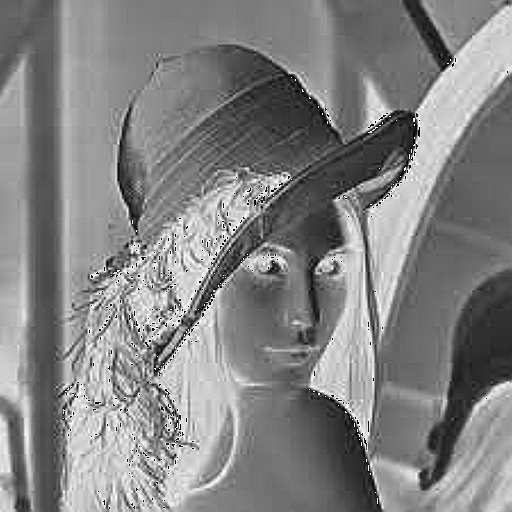

In [ ]:
import numpy as np
from PIL import Image, ImageOps
image = np.array(
    [[162,162,162,163,159,160,161,162,158,159,160,160,160,160,161,156,158,161,167,164,160,156,158,154,154,153,152,150,150,153,151,154,152,154,153,157,163,162,162,161,168,169,172,172,173,175,174,175,176,174,171,173,177,166,149,152,153,149,142,135,123,117,105,98,92,93,91,93,95,99,104,103,104,102,106,105,104,104,103,106,104,107,105,108,106,110,109,109,108,107,110,109,111,109,108,106,103,105,104,107,107,111,109,113,111,116,116,119,122,122,121,121,120,123,121,123,125,127,125,123,127,125,128,126,129,126,132,133,131,131,131,131,130,134,133,133,132,131,135,134,133,133,133,134,132,130,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,133,135,138,138,134,135,135,135,136,137,133,134,134,135,136,132,133,133,134,131,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,134,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,132,135,134,134,134,135,132,134,131,133,130,132,129,130,130,130,131,128,128,130,133,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,133,131,129,126,127,128,125,127,124,126,128,125,124,122,124,121,122,122,121,123,128,125,117,116,110,108,104,100,100,105,105,111,114,120,127,128,131,138,149,152,152,154,155,157,159,162,164,164,162,163,156,156,151,146,146,145,157,156,154,154,154,157,155,158,156,159,157,160,159,158,157,161,161,161,153,153,154,154,155,151,152,153,154,150,151,152,152,152,152,152,152,150,154,159,157,157,157,157,157,157,157,157,157,157,157,157,157,156,160,163,145,131,150,180,191,211,220,219,217,213,206,208,212,210,213,215,218,217,211,197,184,165,141,124,111,104,104,104,116,113,109,114,110,112,109,110,116,124,122,121,121,120,124,122,125,123,126,124,127,126,125,124,128,128,129,119,117,118,121,120,120,119,122,120,123,121,124,123,122,125,124,124,125,123,121,122,122,121,124,122,125,123,126,125,124,127,126,126,126,124,128,127,134,130,134,131,126,123,114,114,109,109,110,120,124,136,147,162,178,163,160,147,143],
[159,159,159,159,160,161,157,158,159,160,156,157,157,157,157,157,158,162,163,160,160,161,157,154,154,153,152,150,150,153,150,153,151,153,151,162,162,161,166,165,167,169,172,172,173,175,175,171,173,170,172,173,178,167,150,148,150,146,138,136,123,117,105,98,93,89,88,90,92,96,101,99,105,103,102,101,105,104,103,106,104,107,105,108,107,106,106,105,109,107,110,110,107,106,104,106,108,104,105,103,104,107,110,112,116,116,112,116,118,123,121,121,120,123,121,124,121,123,125,128,126,125,128,126,129,127,128,129,132,131,131,131,131,130,130,129,133,132,131,130,134,133,133,134,132,130,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,133,136,134,134,135,135,135,136,132,133,134,134,135,131,132,133,133,133,134,131,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,134,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,132,135,134,134,134,135,132,134,131,133,130,132,129,130,130,130,131,128,128,131,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,130,127,129,130,130,131,128,130,128,126,123,126,124,122,124,121,122,122,121,124,124,121,118,116,110,108,103,104,104,104,105,111,114,120,129,125,129,136,147,150,150,151,157,158,159,163,160,161,159,159,157,155,155,149,143,151,153,153,156,156,150,155,153,156,154,157,155,158,156,160,159,158,159,158,154,153,154,154,154,155,156,152,153,154,155,151,152,152,152,152,152,150,155,155,154,154,154,154,154,154,154,154,154,154,154,154,154,153,158,159,144,135,151,174,190,207,219,220,219,218,210,214,214,214,213,210,219,215,213,201,187,166,146,123,103,102,98,104,110,114,116,116,116,112,115,114,111,120,123,121,121,121,120,119,122,120,123,121,124,122,126,125,124,125,125,120,117,118,121,120,120,119,122,120,123,121,124,123,122,125,124,124,125,123,121,122,122,121,124,122,125,123,126,125,124,127,126,126,125,129,130,122,120,116,120,116,115,113,110,106,111,111,123,129,140,161,169,191,205,187,163,149,144],
[160,160,160,160,160,161,158,159,159,160,157,158,158,158,158,157,158,162,164,161,160,160,157,154,154,153,152,150,149,151,153,155,153,155,154,160,162,161,165,164,167,169,172,172,173,175,175,172,174,171,173,175,175,164,152,149,151,147,139,137,124,118,105,98,93,90,89,91,93,97,102,100,105,103,103,102,105,104,103,106,104,107,105,108,107,107,107,106,109,107,110,110,108,107,105,106,108,104,105,104,105,108,110,112,115,116,113,117,120,123,121,121,120,123,121,124,122,124,125,127,126,125,128,126,129,127,129,130,132,131,131,131,131,131,131,130,133,132,132,131,134,133,133,134,132,130,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,133,136,135,135,135,135,135,136,133,134,134,134,135,132,133,133,133,133,134,131,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,134,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,132,135,134,134,134,135,132,134,131,133,130,132,129,130,130,130,131,128,128,131,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,131,128,129,128,129,130,127,129,127,126,124,126,124,122,124,121,122,122,121,125,126,122,118,116,110,108,102,103,103,104,105,111,114,122,126,124,129,136,147,150,150,151,156,155,161,164,161,162,160,160,157,155,153,152,146,150,151,152,154,153,153,153,152,155,153,156,154,157,155,158,157,157,158,156,155,153,154,154,154,154,155,152,153,153,154,151,152,152,152,152,152,150,155,156,155,155,155,155,155,155,155,155,155,155,155,155,155,155,154,160,147,137,152,171,186,203,218,218,222,222,212,213,212,213,213,212,218,218,210,206,190,169,151,122,104,98,94,100,109,112,118,118,120,118,114,113,112,121,123,121,121,121,121,120,123,121,124,122,125,123,127,125,125,126,126,120,117,118,121,120,120,119,122,120,123,121,124,123,122,125,124,124,125,123,121,122,122,121,124,122,125,123,126,125,124,127,126,126,125,128,132,117,110,104,111,108,106,106,107,106,113,116,127,143,153,172,186,208,219,198,172,156,150],
[160,161,161,161,161,162,158,159,160,161,157,158,158,159,159,158,159,163,165,162,161,161,157,154,154,153,152,148,152,153,154,156,154,156,156,158,161,160,164,163,166,168,172,172,173,176,176,173,175,173,170,173,174,163,149,151,152,148,141,134,122,115,107,99,94,91,90,92,94,98,103,100,106,103,103,102,105,104,103,106,104,107,105,109,108,107,107,106,110,108,111,111,108,107,105,108,104,106,106,104,105,108,111,113,116,117,114,119,115,125,121,121,120,123,121,124,122,124,125,127,126,125,128,126,130,128,129,130,133,132,132,131,131,131,131,130,133,132,132,131,135,134,134,135,132,130,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,133,136,135,135,135,135,136,137,133,134,134,134,135,132,133,133,133,133,134,131,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,131,134,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,132,135,134,135,135,136,132,134,131,133,130,132,129,130,131,131,132,128,128,131,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,131,127,127,133,128,130,127,129,127,125,123,126,124,121,123,120,121,122,122,121,122,123,118,116,109,106,106,101,103,104,105,112,116,120,126,125,125,133,144,147,147,148,152,156,160,161,163,162,159,160,156,154,152,149,149,150,148,151,153,151,156,150,150,154,152,155,153,156,154,157,156,156,157,153,156,152,153,153,153,153,154,151,152,152,153,150,151,151,151,151,151,149,155,156,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,159,149,138,154,170,178,199,211,215,223,221,220,217,209,214,215,207,218,217,216,213,194,172,155,124,108,94,87,92,106,109,118,122,126,125,115,108,114,122,124,122,122,122,121,120,123,121,124,122,126,125,123,127,126,127,127,121,117,118,121,120,120,119,122,120,123,121,124,123,122,125,124,124,125,123,121,122,121,120,124,122,125,123,126,125,124,127,126,125,124,128,130,123,119,115,115,111,105,104,105,111,115,126,133,143,154,161,170,183,200,165,172,153,146],
[161,157,158,158,158,158,159,160,156,157,158,158,159,155,156,155,156,160,162,159,158,157,159,154,154,153,151,152,154,155,156,158,155,157,157,160,163,162,167,166,169,172,171,172,174,172,174,171,173,171,169,172,173,161,147,148,149,145,138,132,120,113,105,97,92,89,88,89,91,96,100,103,101,104,103,102,105,104,103,106,104,107,106,105,104,108,107,107,106,105,108,107,109,107,106,104,102,103,102,105,105,109,107,110,113,114,111,115,118,120,122,121,120,123,121,124,122,124,125,128,126,125,128,127,126,124,130,131,129,129,128,132,131,131,131,130,133,132,132,132,131,131,131,131,133,130,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,133,136,135,135,135,136,132,133,134,134,134,134,135,132,133,133,133,133,134,132,129,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,132,134,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,132,135,135,131,132,132,133,134,131,133,130,132,129,131,127,128,128,129,128,131,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,131,131,131,128,130,127,129,126,129,127,125,123,125,126,123,125,121,122,122,123,123,118,115,113,109,108,105,101,104,106,108,115,115,122,121,123,131,142,145,145,146,149,152,155,161,160,162,164,158,160,157,154,151,151,148,150,148,152,150,153,152,152,151,150,153,151,154,152,156,155,155,154,155,155,156,156,156,156,156,157,154,155,155,156,153,154,154,154,154,154,153,154,156,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,158,151,146,150,163,180,191,202,217,220,224,223,221,212,209,211,209,216,222,221,212,200,180,160,132,110,95,88,85,97,104,118,128,128,126,120,104,111,119,121,119,119,118,122,120,123,121,124,123,122,122,121,124,123,124,124,117,118,118,121,120,120,119,122,120,123,121,124,123,122,125,124,124,125,123,121,121,125,124,123,122,125,123,126,125,124,127,125,129,128,127,127,127,127,123,117,111,109,107,113,108,124,135,138,146,153,151,150,164,168,126,152,130,121],
[162,159,160,160,160,160,160,161,158,159,159,159,160,157,158,157,158,162,164,161,160,160,155,156,155,153,150,150,152,153,154,155,157,158,158,161,164,164,164,164,168,171,171,172,175,175,172,170,172,170,168,171,171,164,149,150,151,147,140,134,122,116,103,96,91,88,86,92,94,94,99,100,104,105,104,103,106,105,104,107,105,108,107,106,105,108,107,107,107,106,110,109,110,108,107,106,104,105,104,106,106,110,109,112,115,116,113,117,118,121,123,122,121,124,122,125,122,124,127,124,128,126,129,128,127,125,130,131,130,130,129,133,132,131,131,130,134,133,133,133,132,132,132,132,133,130,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,134,137,136,136,136,137,133,134,134,134,135,135,136,132,133,134,134,134,135,133,130,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,130,132,134,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,132,136,136,132,133,133,134,135,132,134,131,133,130,132,128,129,129,130,129,132,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,131,127,129,126,128,125,128,126,124,122,124,125,122,124,120,121,121,123,124,118,115,112,108,107,102,105,102,106,111,113,115,123,123,120,129,140,143,143,143,151,153,155,160,158,164,164,157,158,154,156,152,152,152,149,150,149,148,151,154,153,152,151,154,152,155,154,153,153,152,156,155,154,154,154,154,154,154,155,152,153,153,154,151,152,152,152,152,152,151,153,156,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,158,148,148,153,165,170,187,196,209,223,224,224,221,214,208,212,209,214,222,222,217,208,185,172,142,119,103,92,84,95,100,114,122,125,126,116,107,113,121,123,121,121,120,123,121,124,122,125,124,124,124,123,126,125,126,126,118,118,118,121,120,120,119,122,120,123,121,124,123,122,125,124,124,125,123,120,120,124,123,122,121,124,122,125,124,123,126,124,128,127,127,122,136,137,131,123,121,108,109,114,118,125,133,139,136,139,131,123,128,127,96,123,100,90],
[159,156,157,157,157,157,157,158,155,156,156,156,157,154,155,154,155,159,161,158,157,157,153,153,151,153,154,153,155,156,157,158,158,159,159,163,166,166,167,168,167,171,171,173,171,172,170,168,171,169,167,170,170,162,146,147,148,144,137,131,119,113,101,94,89,86,84,89,91,92,97,98,101,102,101,100,103,102,101,104,102,105,103,107,105,108,107,107,107,107,106,106,107,105,104,103,101,102,101,103,103,107,106,109,112,113,110,113,119,122,119,119,118,121,119,121,123,125,123,122,125,123,126,124,128,125,130,131,130,130,130,129,128,132,131,131,130,130,130,129,133,132,132,132,133,130,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,135,131,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,134,133,133,133,133,134,134,134,135,131,132,132,133,134,130,131,131,132,129,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,130,132,134,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,132,132,133,133,134,130,132,129,131,128,130,127,128,129,129,130,126,126,128,131,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,131,132,129,131,129,127,125,128,126,123,125,122,123,124,124,125,123,119,119,115,112,108,106,106,107,106,106,107,112,115,119,120,118,127,138,141,141,141,148,149,156,160,156,161,159,162,161,157,158,152,154,148,148,150,150,150,148,151,149,153,151,154,152,155,154,154,154,153,156,154,158,157,157,157,157,157,158,155,156,156,157,154,155,155,155,155,155,154,157,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,157,152,152,151,156,164,178,192,206,219,224,230,224,216,212,211,208,218,224,219,224,214,198,186,157,136,113,93,90,91,95,109,113,120,120,118,104,110,118,120,118,118,117,120,118,121,119,122,121,121,121,120,123,122,123,122,119,118,118,121,120,120,119,122,120,123,121,124,123,122,125,124,124,125,122,124,124,123,122,126,124,127,125,128,127,126,129,128,127,127,126,125,136,148,144,129,126,120,116,119,122,128,134,133,128,121,96,87,66,61,43,93,74,67],
[161,158,159,159,159,159,159,160,157,158,158,158,159,156,157,156,157,161,163,160,159,159,155,154,152,153,153,151,153,154,155,155,160,160,161,160,164,164,165,166,166,171,171,174,173,174,172,170,169,168,166,169,169,160,149,149,150,146,139,133,121,115,103,96,91,88,86,91,93,94,99,100,102,103,102,101,104,103,102,106,104,107,105,108,106,109,108,108,108,108,108,108,109,107,106,105,102,104,103,105,105,109,108,111,114,115,112,115,120,123,120,120,119,122,120,122,124,126,125,123,126,124,127,125,129,126,131,132,131,131,131,130,129,133,132,132,132,132,131,130,134,133,133,133,134,130,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,135,132,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,132,135,134,134,134,134,135,135,135,136,133,134,134,134,135,131,132,132,133,130,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,133,134,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,134,134,135,131,133,130,132,129,131,128,129,130,130,131,127,127,129,132,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,130,129,129,130,131,128,130,128,126,124,127,125,122,124,121,122,123,123,125,124,120,119,115,111,107,105,104,106,105,106,110,110,115,116,118,116,125,137,140,140,139,146,146,152,153,160,163,160,161,159,155,154,160,153,155,150,148,149,149,148,151,149,152,150,154,152,155,154,153,153,152,156,154,156,155,155,155,155,155,156,153,154,154,155,152,153,153,153,153,153,152,157,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,158,150,150,156,152,163,170,186,203,211,223,227,222,218,211,210,208,217,222,220,223,219,205,199,170,154,127,104,94,92,93,105,108,112,120,115,109,111,119,122,120,120,118,122,120,123,121,124,123,123,123,121,125,124,125,124,119,118,118,121,120,120,119,122,120,123,121,124,123,122,125,124,124,125,122,123,123,122,121,125,123,126,124,127,126,125,128,127,126,126,125,124,136,146,143,134,131,126,123,125,126,132,126,121,116,99,83,63,48,31,26,61,52,48],
[159,155,156,156,156,156,157,158,154,155,156,156,157,153,154,153,155,159,161,157,156,156,151,155,152,153,152,155,156,156,157,157,161,161,162,162,167,167,168,169,170,170,172,170,170,171,168,172,166,167,165,168,168,159,147,147,148,144,137,131,119,113,100,93,88,85,83,89,91,91,96,96,103,103,102,101,104,103,103,102,101,104,102,105,103,106,105,105,105,105,105,105,106,104,103,101,104,100,100,103,103,107,105,108,111,112,109,112,117,119,121,120,119,122,120,123,120,123,121,124,126,124,127,126,125,123,128,129,128,128,127,131,130,129,129,129,129,128,132,131,130,130,130,130,130,131,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,135,132,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,132,135,134,134,134,135,131,132,132,133,130,131,131,131,131,132,132,132,133,131,128,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,128,129,135,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,134,130,131,131,132,133,130,132,129,131,128,130,126,127,127,128,127,130,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,127,130,133,133,129,131,128,130,127,130,128,126,124,126,127,124,126,122,124,121,120,121,119,114,115,110,108,108,105,105,107,106,108,115,112,117,115,125,132,136,135,139,144,147,151,158,157,160,161,160,163,157,157,155,155,155,151,150,151,151,150,153,151,154,153,152,151,154,152,156,155,155,154,152,160,158,158,158,158,158,159,156,157,157,158,155,156,156,156,156,156,157,152,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,155,155,154,149,155,164,172,195,207,213,223,223,211,212,215,206,217,221,223,220,222,217,206,195,171,143,121,105,89,86,94,97,108,110,112,102,113,120,118,117,116,120,118,117,121,119,122,121,120,119,123,121,121,122,120,120,118,118,121,120,120,119,122,120,123,121,124,123,122,125,124,124,125,122,123,122,126,125,124,123,126,124,127,126,125,128,126,130,129,129,125,132,133,132,130,130,131,127,131,130,119,118,106,94,84,62,56,35,31,33,44,42,41],
[157,158,158,158,158,159,155,156,157,158,154,155,155,156,156,156,153,158,159,160,158,158,152,155,152,153,152,153,154,158,158,157,161,162,163,164,164,165,166,167,168,170,172,171,171,173,170,173,169,165,164,167,167,158,146,146,147,143,136,130,118,111,103,95,90,87,86,87,89,94,99,98,104,104,103,102,105,104,104,103,102,105,103,106,104,107,106,106,106,106,107,107,108,106,105,103,104,102,103,101,102,105,108,110,113,114,111,114,118,120,122,121,120,123,121,124,122,125,122,124,127,125,128,127,126,124,129,130,129,129,128,132,131,131,131,131,130,129,133,132,131,131,131,131,131,131,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,135,132,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,133,136,135,135,135,136,132,133,134,135,131,132,132,132,132,133,133,133,134,132,129,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,130,135,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,134,135,131,132,132,133,134,131,133,130,132,129,131,127,128,128,129,128,131,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,130,132,132,128,130,127,129,126,129,127,125,123,125,126,123,125,122,123,122,122,121,119,113,114,108,107,106,105,104,107,108,111,114,115,109,110,120,128,132,131,133,136,149,151,157,156,158,163,160,160,159,158,157,156,156,152,150,151,151,150,153,151,154,153,153,152,155,153,156,155,155,155,154,157,156,156,156,156,156,157,154,155,155,156,153,154,154,154,154,154,155,153,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,154,155,154,144,152,162,165,186,197,206,214,216,214,212,212,210,216,221,221,221,225,224,217,207,191,163,130,118,97,90,91,93,99,106,105,107,113,121,120,119,118,120,120,120,119,118,121,119,123,121,123,123,123,124,121,120,118,118,121,120,120,119,122,120,123,121,124,123,122,125,124,124,125,121,122,121,125,124,123,122,125,123,126,125,124,127,125,129,128,128,126,126,131,129,135,133,136,136,134,128,117,105,90,79,62,52,43,34,22,41,41,43,45],
[155,155,155,155,155,156,153,154,154,155,152,153,153,153,153,153,151,156,157,158,156,154,153,155,152,153,150,158,151,161,158,162,166,162,164,165,166,168,169,170,172,169,172,171,172,169,167,171,167,164,163,166,166,156,144,145,146,142,135,128,116,109,101,93,88,85,84,86,88,93,92,96,101,101,100,99,102,101,100,104,102,105,103,106,104,107,106,106,106,107,103,104,106,103,102,99,107,98,100,99,100,103,105,107,110,111,108,110,119,121,118,118,117,120,118,121,119,121,123,125,123,122,125,123,127,124,129,130,129,129,129,128,128,128,128,127,131,130,129,128,132,131,131,131,131,131,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,135,133,130,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,130,133,132,132,132,132,133,134,130,131,132,132,132,132,133,129,130,130,131,128,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,130,135,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,134,130,131,132,132,133,129,131,128,130,127,129,126,127,128,128,129,125,125,128,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,125,131,132,131,132,133,130,132,130,128,126,129,127,124,126,123,125,120,128,122,117,123,118,118,112,113,104,111,102,109,107,104,110,109,110,113,108,120,128,132,129,136,139,145,147,152,155,156,159,160,164,160,159,158,157,157,152,155,154,154,153,157,155,158,157,156,155,158,156,159,158,158,158,158,158,159,159,159,159,159,160,157,158,158,159,156,157,157,157,157,157,159,153,151,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,151,156,157,153,143,147,153,159,174,187,197,210,213,209,218,214,211,214,222,222,219,224,224,222,214,208,178,149,128,106,93,89,85,97,101,107,107,113,117,117,116,114,123,116,117,117,116,119,117,120,117,126,119,120,120,122,120,118,118,121,120,120,119,122,120,123,121,124,123,122,125,124,124,124,125,125,125,124,123,127,125,128,126,129,128,127,130,129,128,128,127,131,127,126,132,142,142,146,142,134,119,99,82,64,51,46,42,43,47,51,48,43,45,47],
[156,156,156,156,156,157,154,155,155,156,153,154,154,154,154,154,152,157,159,155,153,156,153,155,152,152,155,155,155,157,160,162,166,163,165,166,168,166,168,169,171,169,172,171,172,170,169,169,166,163,162,165,164,159,146,142,145,141,133,130,117,111,99,92,87,84,83,85,87,92,91,98,102,102,101,100,103,102,101,104,102,105,103,106,104,107,106,106,106,107,104,106,103,105,103,101,103,100,101,100,101,104,106,108,111,112,109,111,119,121,119,119,118,121,119,122,120,122,123,125,124,123,126,124,127,124,129,130,129,129,129,129,129,129,129,128,131,130,130,129,132,131,131,131,131,131,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,135,133,131,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,134,133,133,133,133,133,134,131,132,132,132,132,132,133,130,131,131,132,129,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,130,135,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,134,131,132,132,132,133,130,132,129,131,128,130,127,128,128,128,129,126,126,129,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,126,131,132,131,131,132,129,131,129,128,126,128,126,124,126,123,124,125,126,122,119,118,119,117,112,111,108,108,107,107,107,106,108,109,111,108,106,114,123,126,128,133,135,141,148,151,158,157,160,160,162,163,160,159,158,158,152,153,157,156,156,155,154,157,155,159,157,160,158,161,160,160,160,162,159,157,158,158,158,158,159,156,157,157,158,155,156,156,156,156,156,158,153,152,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,152,155,152,145,145,149,152,164,174,187,198,206,213,217,215,216,218,218,220,222,222,227,225,222,219,196,167,146,116,102,91,83,90,96,104,111,117,117,118,117,116,119,118,118,118,117,120,118,121,119,121,121,121,121,122,120,118,118,121,120,120,119,122,120,123,121,124,123,122,125,124,124,124,124,124,124,124,123,126,124,127,125,128,127,126,129,128,128,128,127,129,130,127,133,144,147,151,146,129,111,87,61,44,32,30,36,43,61,76,62,48,46,46],
[156,157,157,157,157,158,154,155,156,157,153,154,154,155,155,155,153,158,160,156,154,157,154,156,152,152,153,153,157,159,162,164,168,164,166,167,171,164,167,168,170,168,172,171,173,171,171,166,164,161,160,164,163,156,148,144,142,139,130,132,118,113,96,90,85,82,81,83,85,90,88,100,102,101,101,100,103,102,101,104,102,105,103,107,105,108,107,107,107,108,105,108,99,107,104,103,100,102,102,100,101,104,107,109,112,113,110,112,120,122,119,119,118,121,119,122,120,122,123,125,124,123,126,124,128,125,130,131,130,130,130,129,129,129,129,128,131,130,130,129,133,132,131,131,131,131,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,135,133,131,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,134,133,133,133,133,133,134,131,132,132,132,132,133,134,130,131,131,132,129,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,130,130,135,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,134,131,132,133,133,134,130,132,129,131,128,130,127,128,129,129,130,126,126,129,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,126,130,131,130,131,132,129,131,129,127,125,128,126,123,125,122,123,123,126,123,120,120,120,117,111,109,111,106,105,107,107,108,106,108,111,109,108,111,122,125,126,130,137,141,147,150,155,158,160,160,162,161,163,160,159,157,156,156,159,158,158,158,157,160,158,161,159,162,160,163,162,162,164,160,162,155,157,157,157,157,158,155,156,156,157,154,155,155,155,155,155,157,152,152,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,155,153,151,146,141,143,144,153,162,179,187,202,211,218,215,221,215,217,216,217,221,225,228,226,224,203,181,157,133,111,97,90,94,100,101,113,114,117,119,118,118,116,120,119,118,117,120,118,121,119,123,122,122,121,122,120,118,118,121,120,120,119,122,120,123,121,124,123,122,125,124,124,124,124,124,124,123,122,126,124,127,125,128,127,126,129,128,127,127,126,128,129,137,136,142,140,140,134,113,99,73,48,42,25,27,33,44,54,70,60,54,47,45],
[157,153,154,154,154,154,155,156,152,153,154,154,155,151,152,152,150,156,157,157,155,153,151,152,153,151,157,156,159,162,160,163,166,167,168,170,168,168,169,171,173,172,171,172,169,168,167,168,165,162,162,161,162,155,144,145,143,140,132,128,115,109,98,91,86,84,83,84,86,92,90,95,102,106,100,100,103,102,101,104,102,105,104,103,102,105,104,104,104,105,102,104,102,103,101,100,98,99,98,101,101,105,103,106,109,110,107,109,117,118,120,119,118,121,119,122,120,122,123,125,124,123,126,125,124,122,127,128,127,127,126,130,129,129,129,128,131,130,130,130,129,128,132,131,131,131,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,135,133,131,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,134,133,133,133,133,133,134,131,132,132,132,133,129,130,131,131,131,132,130,127,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,126,131,135,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,134,131,133,129,130,130,131,132,129,131,128,130,127,129,125,126,126,127,126,129,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,125,134,134,134,130,132,129,131,128,131,129,127,125,127,128,125,126,127,126,119,117,117,116,117,115,112,113,109,109,106,108,104,104,108,106,105,103,113,118,122,123,127,132,140,145,148,152,159,160,160,162,161,161,162,160,163,159,159,162,161,161,161,160,163,161,164,162,165,163,166,165,166,160,167,158,159,160,160,160,160,161,158,159,159,160,157,158,158,158,158,158,160,156,151,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,154,152,152,150,146,140,139,137,145,147,162,182,189,210,217,221,225,218,214,211,214,217,226,223,227,218,213,199,174,149,129,108,94,97,96,106,118,116,117,115,115,115,114,117,115,119,117,120,118,121,120,119,119,118,122,122,120,118,118,121,120,120,119,122,120,123,121,124,123,122,125,124,124,124,124,125,123,127,126,125,124,127,125,128,127,126,129,127,131,130,130,125,136,142,142,137,132,120,113,94,77,61,44,31,29,22,35,41,53,64,59,55,49,47],
[158,154,155,155,155,155,156,157,153,154,155,155,156,152,153,153,152,153,154,159,156,154,152,153,153,151,156,155,158,161,159,162,165,165,166,169,168,165,173,169,172,171,171,172,170,169,168,169,166,163,163,164,159,152,147,146,143,140,132,130,117,111,99,92,88,80,79,85,87,87,91,97,103,105,100,100,104,103,102,105,103,106,105,104,103,106,105,105,105,106,103,105,102,105,103,102,99,100,99,102,102,106,104,108,111,112,108,110,118,119,120,119,118,121,119,122,120,122,124,126,124,123,126,125,125,123,128,129,128,128,127,131,130,129,129,128,132,131,130,130,130,129,133,132,132,131,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,135,133,131,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,134,133,133,133,133,134,135,131,132,133,133,134,130,131,131,131,132,133,131,128,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,127,131,135,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,134,131,133,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,125,133,133,133,130,132,129,131,128,130,128,127,125,126,127,124,125,126,126,120,118,118,117,117,114,111,112,108,108,106,108,105,106,106,106,105,103,112,118,122,122,126,130,143,147,149,153,159,160,160,162,160,159,166,157,159,160,159,162,161,161,161,160,163,161,163,161,164,162,165,164,163,170,166,156,158,159,159,159,159,160,156,157,158,159,155,156,156,157,157,157,159,155,151,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,155,149,151,150,145,142,135,137,134,142,155,174,190,210,221,220,224,220,214,215,215,215,219,222,223,225,211,203,181,160,134,114,103,101,101,108,116,118,116,117,116,116,115,119,117,120,118,121,119,122,121,120,120,119,123,123,121,118,117,121,120,120,119,122,120,123,121,124,123,122,125,124,124,124,126,120,125,126,125,125,124,127,125,128,127,126,129,127,129,129,129,125,135,148,138,126,119,102,91,72,64,52,37,41,32,36,36,47,44,54,51,54,51,49],
[154,155,155,155,155,156,152,153,154,155,151,152,152,152,152,152,151,153,155,154,151,155,152,153,153,151,156,155,158,160,163,165,168,168,170,168,167,170,172,170,173,172,172,173,171,170,170,166,163,160,160,160,161,153,142,141,143,139,132,125,113,107,95,88,83,81,79,84,86,87,91,93,99,108,101,101,100,100,99,101,99,102,100,105,103,106,105,105,105,106,103,105,103,101,100,98,100,100,100,98,99,102,106,104,108,108,109,110,118,119,120,119,118,121,119,122,120,123,120,122,125,123,126,125,125,123,128,129,128,128,128,127,126,130,129,129,128,127,131,130,130,130,129,129,128,132,131,131,131,131,130,133,132,132,132,132,132,131,134,133,133,133,132,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,135,133,131,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,134,133,133,133,134,130,131,132,133,129,130,130,131,131,131,132,128,130,127,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,127,131,135,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,134,131,133,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,125,134,134,134,130,132,129,131,128,130,128,127,125,126,127,124,125,126,126,119,117,117,116,116,113,109,111,106,107,105,107,104,107,103,104,103,101,110,116,119,126,129,134,141,145,152,155,161,162,161,162,165,163,164,161,162,161,160,164,163,163,162,161,164,161,169,166,169,167,170,170,169,175,167,160,157,159,159,159,159,159,160,161,157,158,159,159,160,156,157,157,159,155,151,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,155,150,148,140,141,138,131,127,127,132,153,169,191,214,230,230,233,224,216,212,209,213,214,210,221,218,213,203,183,154,140,119,104,106,108,113,123,121,116,112,117,116,116,115,114,117,115,119,117,119,117,121,120,119,118,119,116,117,122,120,120,120,119,122,120,124,121,124,123,122,125,124,124,124,118,119,117,126,125,125,124,127,124,127,127,126,130,127,136,129,129,126,139,146,136,113,95,67,53,42,36,44,48,51,60,60,55,47,36,25,41,50,51,52],
[155,154,154,154,154,155,152,153,152,153,149,150,149,154,153,153,152,154,156,156,154,152,151,152,153,151,157,156,159,161,163,165,168,168,170,169,168,172,170,169,173,172,173,174,171,170,169,165,166,162,161,160,158,155,144,143,144,140,133,127,115,109,97,90,85,82,80,85,87,88,93,92,104,101,100,104,102,100,97,104,101,104,103,103,102,105,105,106,106,107,103,105,102,101,100,98,99,99,99,98,99,102,105,103,107,107,107,108,117,119,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,123,128,129,128,128,128,127,126,130,129,129,128,127,131,130,130,130,129,129,129,133,132,132,132,132,131,134,133,133,133,133,133,132,135,134,134,134,133,136,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,136,134,131,132,132,132,132,132,131,131,131,131,131,131,131,131,131,131,130,134,134,134,134,135,131,132,133,134,130,131,131,132,132,132,133,129,131,127,128,128,128,128,128,128,128,128,128,129,129,129,129,129,129,130,128,132,136,134,134,134,134,134,133,133,133,132,132,132,132,132,132,131,131,133,130,133,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,128,129,129,129,129,129,129,129,129,129,129,129,129,127,132,133,132,133,134,131,133,129,131,129,127,124,126,127,123,124,125,124,121,118,118,117,117,112,114,109,111,105,105,108,106,105,102,104,103,102,112,118,123,119,125,131,140,144,151,153,159,159,163,161,162,167,161,162,160,163,162,161,161,160,164,162,166,164,167,165,169,167,171,166,166,172,170,160,157,159,159,159,160,160,160,161,158,159,160,160,161,157,158,159,161,156,150,152,152,152,152,152,153,153,153,153,153,154,154,154,154,154,155,152,144,146,144,142,132,129,126,130,148,165,183,211,221,227,230,223,210,216,211,210,214,212,216,221,213,210,194,170,154,127,112,110,104,109,125,120,119,113,116,114,114,114,114,119,119,117,115,123,119,121,117,121,119,120,118,119,119,119,120,121,120,124,123,121,124,126,124,122,124,123,122,124,123,124,121,125,123,125,124,124,126,129,124,127,129,129,131,128,128,129,133,137,122,100,78,55,39,33,30,38,51,56,66,65,57,49,34,22,34,45,51,54],
[154,158,157,157,157,158,154,154,158,157,158,158,158,156,156,156,155,157,159,160,158,158,152,156,152,152,153,153,156,158,160,162,165,165,167,166,167,166,167,167,166,167,163,164,166,163,167,160,165,158,161,162,164,159,148,147,148,144,137,131,119,113,101,94,89,85,83,89,91,91,97,96,96,99,96,98,98,104,103,108,104,108,108,104,104,109,105,102,104,104,104,104,106,104,103,101,102,102,102,100,101,104,106,109,112,112,112,114,120,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,123,128,129,128,128,127,131,130,129,129,128,132,131,130,130,130,129,133,133,129,130,130,129,129,129,128,132,131,131,130,130,130,129,132,131,131,131,130,134,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,134,130,132,132,132,132,132,131,135,134,134,134,133,133,133,133,133,133,133,134,130,131,131,131,132,133,129,130,131,131,132,128,129,129,129,130,130,130,130,130,130,130,131,131,131,131,132,128,129,129,129,129,130,126,125,130,134,132,132,132,131,130,134,133,132,136,135,134,134,134,133,137,137,134,134,132,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,125,126,126,126,126,126,127,127,127,127,127,127,126,127,129,128,128,129,126,127,128,129,125,127,129,125,126,127,127,128,125,126,122,122,121,120,119,119,115,115,116,111,110,111,105,109,105,107,102,108,115,121,120,123,126,131,138,139,147,152,151,152,160,160,157,157,160,160,166,163,163,163,162,166,165,164,164,164,164,163,162,167,163,164,165,160,158,158,159,159,160,156,157,158,159,156,158,154,155,155,156,157,153,155,152,155,155,155,155,155,156,152,153,153,153,154,150,151,151,151,152,149,154,161,161,157,155,147,144,134,131,136,151,161,187,201,210,215,215,210,213,215,214,213,215,211,212,214,217,217,208,190,149,123,104,85,96,112,114,115,114,119,121,119,120,117,115,111,117,115,116,116,120,124,124,126,127,120,124,120,123,120,117,118,118,118,117,119,120,121,122,128,126,123,124,135,147,137,129,124,124,121,131,129,132,130,127,118,118,121,124,141,149,126,96,87,74,63,48,40,37,37,43,44,49,44,50,47,45,52,53,47,43,50,53],
[153,157,156,156,156,156,156,155,159,158,157,157,156,161,160,160,159,161,164,160,159,159,154,153,151,151,154,154,157,159,161,163,166,166,168,169,165,167,162,163,164,165,162,163,164,161,163,160,162,160,160,165,165,160,149,148,149,145,138,132,120,114,102,95,89,90,88,89,91,96,102,99,94,93,96,96,100,102,105,108,110,108,109,106,107,107,105,104,101,101,105,104,105,103,102,100,101,101,100,103,103,106,108,110,113,113,113,116,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,123,128,129,128,128,127,130,129,129,129,128,131,130,130,130,130,129,132,132,130,127,127,132,131,130,130,129,129,128,132,131,131,130,134,133,133,132,132,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,132,132,132,132,132,132,131,134,133,133,132,136,135,135,135,135,135,136,133,132,133,133,133,132,133,130,131,131,131,132,129,130,131,131,130,129,133,132,132,132,133,129,130,130,130,131,128,129,130,130,129,130,127,127,127,133,131,130,129,134,132,135,134,133,135,133,137,136,136,135,138,138,137,132,132,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,124,125,125,125,125,125,124,126,128,127,127,128,125,126,126,126,127,127,128,125,126,126,126,126,128,127,123,123,122,120,123,122,118,118,118,114,115,111,107,110,108,105,102,110,118,119,120,119,124,131,133,136,143,147,151,151,157,156,159,156,157,161,164,166,165,165,165,164,164,164,165,161,162,163,163,163,159,160,161,160,160,158,159,159,160,157,159,155,157,154,156,153,154,154,154,155,152,153,154,154,154,154,154,154,155,152,153,153,153,154,151,152,152,153,148,149,160,165,167,167,163,156,149,141,131,134,137,149,169,184,198,206,206,209,210,220,216,217,215,207,206,215,227,230,233,215,167,140,100,82,85,101,106,115,118,119,119,121,120,118,113,112,113,112,114,119,120,128,126,132,132,125,124,123,121,120,118,120,116,117,116,118,118,123,122,128,123,124,127,145,160,146,131,124,120,124,132,135,136,132,124,119,111,117,119,141,156,111,70,62,62,53,39,40,42,41,42,43,42,39,39,45,46,59,65,54,47,47,47],
[157,156,156,156,156,155,159,158,157,156,160,159,159,158,158,158,157,159,162,159,158,157,157,155,153,154,152,153,156,158,161,163,166,166,169,165,163,164,165,166,162,164,161,162,164,160,161,162,163,160,160,164,164,159,148,147,148,144,137,131,119,113,101,94,88,89,87,88,90,94,101,99,95,95,97,97,100,102,104,107,108,107,108,105,106,107,105,104,102,102,105,104,105,103,102,100,101,101,100,102,102,105,107,109,112,112,112,115,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,123,128,129,128,128,127,131,130,129,129,128,132,131,130,130,130,129,133,133,130,128,129,128,127,131,130,130,130,129,132,131,131,131,130,130,129,133,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,134,133,133,132,135,134,134,134,134,134,135,135,128,130,130,129,134,134,130,131,132,132,133,129,131,127,127,132,130,133,132,132,132,133,129,130,131,131,132,128,130,126,126,131,131,127,127,129,130,128,132,131,130,129,133,131,129,137,134,137,136,135,134,138,138,137,132,132,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,125,126,126,126,126,126,125,127,129,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,126,122,122,121,119,121,120,116,116,116,112,113,110,106,109,107,105,103,106,115,117,118,118,123,130,133,136,143,147,150,150,156,155,156,158,158,161,164,165,164,164,164,164,164,165,166,162,164,160,161,161,162,162,163,161,160,158,159,159,160,157,159,156,158,155,157,154,155,155,155,156,153,154,154,154,154,154,154,154,155,152,153,153,153,154,151,152,152,153,148,150,155,161,163,161,162,152,150,141,133,134,147,148,172,178,197,203,209,209,214,216,217,216,212,214,211,219,222,226,230,212,176,149,123,94,95,91,98,113,115,120,117,121,122,123,117,117,114,116,115,116,120,122,121,126,124,126,123,122,121,120,118,120,117,118,117,119,119,123,123,122,128,127,128,135,143,136,130,129,125,125,126,130,131,137,132,133,132,124,119,125,125,98,71,60,58,51,44,40,45,50,49,52,49,46,46,43,41,48,57,50,50,46,44],
[156,156,156,156,156,155,158,157,157,156,159,158,158,158,158,158,157,159,162,159,158,157,155,158,154,155,154,155,158,161,159,163,166,166,169,166,164,165,165,166,163,165,162,164,160,162,162,162,163,160,160,164,164,159,148,147,148,144,137,131,119,113,101,94,89,85,83,89,90,95,97,95,96,95,97,97,100,102,104,107,108,107,108,105,106,107,105,104,102,102,105,104,105,103,102,100,101,101,100,102,102,105,107,109,112,112,112,115,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,123,128,129,128,128,128,127,126,130,129,129,128,127,131,130,130,130,129,129,131,128,129,129,128,131,130,130,130,129,132,131,131,131,131,131,130,133,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,134,133,133,132,135,134,134,134,134,134,136,130,130,131,131,131,130,130,132,133,128,129,129,131,132,128,129,128,127,130,129,129,129,129,130,131,127,128,128,129,130,127,128,127,127,128,127,129,131,129,132,131,131,131,129,133,131,133,131,134,132,136,135,134,135,133,133,132,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,125,126,126,126,126,126,125,127,129,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,126,122,122,121,119,121,120,116,116,116,112,113,110,106,109,107,105,103,107,116,118,119,119,124,131,134,137,144,148,151,151,157,156,157,158,158,161,164,165,164,164,164,164,165,161,162,163,164,161,162,162,162,162,163,161,160,158,159,159,160,157,159,156,158,155,157,154,155,155,155,156,153,154,154,154,154,154,154,154,155,152,153,153,153,154,151,152,152,152,153,150,154,157,156,155,154,147,146,138,139,141,147,152,172,179,191,206,203,210,213,210,214,216,214,218,214,219,221,219,223,205,189,163,139,118,98,85,87,107,113,114,114,120,121,124,120,119,119,117,115,115,115,119,118,123,119,123,124,122,121,120,118,120,117,118,117,119,119,123,123,123,127,127,127,128,124,128,133,135,128,131,124,122,131,139,143,152,146,129,123,106,92,80,71,66,58,51,48,44,49,55,58,60,60,49,48,44,41,42,42,50,50,49,48],
[156,156,156,156,155,154,158,157,157,156,159,158,158,158,158,158,157,159,162,158,157,156,154,155,156,156,155,156,159,162,162,161,165,165,169,166,164,165,165,166,163,165,162,164,160,162,162,163,164,161,161,165,165,160,148,147,149,145,138,131,119,113,101,94,89,86,84,90,91,96,98,96,96,95,97,97,100,102,104,107,108,107,108,105,106,107,105,104,102,102,105,104,105,103,102,100,101,101,100,102,102,105,107,109,112,112,112,115,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,123,128,129,128,128,128,128,127,130,129,129,129,128,132,131,130,130,130,130,131,128,129,129,128,132,131,130,130,129,133,132,131,131,131,131,130,134,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,132,132,132,132,131,135,134,133,132,136,135,135,134,134,134,136,132,131,132,132,132,132,133,129,130,131,131,132,128,129,130,130,130,129,132,130,130,131,131,131,132,128,129,129,130,131,127,128,129,129,129,128,130,131,129,133,132,131,131,129,133,131,134,132,136,134,137,136,136,137,135,134,132,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,125,126,126,126,126,126,125,127,129,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,126,122,122,121,119,121,120,116,116,116,112,113,110,106,109,107,105,103,107,117,119,120,119,124,131,134,137,145,149,152,152,158,156,157,159,159,162,165,166,165,165,165,165,166,163,164,164,165,162,163,163,163,163,164,161,160,158,159,159,160,157,159,156,158,155,157,154,155,155,155,156,153,154,153,153,153,154,154,154,155,151,152,153,153,154,150,151,152,152,152,151,152,159,154,154,152,147,147,141,138,143,145,148,161,168,181,196,203,213,212,209,217,215,216,216,218,220,219,218,220,215,200,187,158,136,109,80,81,107,106,112,115,115,124,121,124,122,118,119,114,112,115,119,117,121,121,124,124,121,120,119,118,121,117,118,117,119,119,123,122,122,126,126,130,126,121,128,131,134,129,129,126,129,135,142,146,152,147,125,111,89,71,71,69,57,53,47,45,42,49,53,55,57,57,48,48,44,43,39,45,52,50,52,54],
[156,156,156,155,159,158,157,157,157,156,159,158,158,158,158,158,157,159,161,162,160,159,156,157,157,157,155,156,160,163,163,163,168,169,168,166,164,165,165,166,163,165,162,163,165,161,163,159,161,158,158,162,162,156,149,148,145,142,134,132,119,113,101,94,89,86,85,86,88,92,99,96,96,95,97,97,100,102,104,107,108,107,108,105,106,107,105,104,102,102,105,104,105,103,102,100,101,101,100,102,102,105,107,109,112,112,112,115,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,123,128,129,128,128,128,128,127,130,129,129,129,129,128,127,131,130,130,130,131,128,129,129,129,128,127,131,130,130,129,128,132,131,131,131,131,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,133,132,132,132,132,131,130,134,133,132,132,131,135,134,134,137,128,128,129,129,129,129,130,127,128,128,128,129,126,127,127,127,127,126,128,131,131,127,128,128,128,129,129,130,126,127,128,129,125,126,126,125,126,132,130,129,128,132,130,134,132,131,134,133,132,131,134,133,133,134,132,130,133,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,125,126,126,126,126,126,125,127,129,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,126,122,122,121,119,121,120,116,116,116,112,113,110,106,109,107,105,103,108,113,116,116,120,124,131,134,138,141,146,149,149,154,157,158,155,156,159,162,163,162,162,162,162,163,160,161,161,162,159,160,160,160,160,160,162,160,158,159,159,160,157,159,156,158,155,157,154,155,155,155,156,153,153,157,156,157,153,154,154,154,155,156,152,153,153,154,155,151,152,152,152,150,155,152,152,149,145,147,141,143,145,144,146,152,160,174,186,196,208,214,207,213,215,218,221,221,219,221,220,223,216,221,211,182,155,122,72,77,97,102,108,106,115,124,121,130,125,117,120,117,112,112,116,119,120,125,123,123,125,123,123,118,116,118,118,117,119,119,122,126,125,129,130,130,124,121,122,130,129,131,131,134,133,143,150,151,159,143,118,101,67,42,55,61,59,45,44,39,39,50,53,55,57,57,46,44,45,40,41,44,50,51,54,56],
[155,155,155,154,158,157,157,157,156,155,159,158,158,157,157,157,156,158,161,161,158,156,158,158,158,157,160,161,160,165,165,165,166,168,168,167,165,166,166,167,164,166,162,163,164,161,163,160,162,159,159,163,163,157,150,149,146,143,135,133,120,114,102,95,90,87,86,87,89,93,99,96,96,95,97,97,100,102,104,107,108,107,108,105,106,107,105,104,102,102,105,104,105,103,102,100,101,101,100,102,102,105,107,109,112,112,112,115,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,123,129,130,129,129,129,128,127,131,130,130,129,129,129,128,132,131,131,131,132,129,130,129,129,129,128,132,131,131,130,129,133,132,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,130,134,133,133,133,133,132,131,135,134,133,133,132,136,135,135,138,130,130,131,131,131,131,132,129,130,130,130,131,128,129,129,129,129,128,130,132,132,129,130,130,130,130,130,131,128,129,129,130,127,128,128,127,128,133,131,131,130,133,131,134,133,132,135,134,134,133,136,135,135,136,133,131,133,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,125,126,126,126,126,126,125,127,129,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,126,122,122,121,119,121,120,116,116,116,112,113,110,106,109,107,105,103,109,115,118,118,121,125,132,135,139,143,148,151,151,156,158,159,157,158,161,164,165,164,164,164,164,165,162,163,163,164,161,162,162,162,162,162,163,161,158,159,159,160,157,159,156,158,155,157,154,155,155,155,156,153,153,156,155,156,152,153,153,153,154,155,151,152,152,153,154,150,151,151,151,154,151,151,151,144,149,144,146,146,147,143,143,149,151,167,177,192,208,212,211,214,215,216,221,225,224,222,217,217,223,225,223,199,175,133,85,83,90,96,98,106,111,117,120,127,131,121,119,118,115,110,116,116,122,126,121,122,124,122,122,117,115,117,117,116,118,118,121,125,124,128,129,129,122,125,122,132,130,132,131,139,144,144,149,146,144,130,104,87,53,35,49,66,56,44,42,38,39,45,50,52,54,51,48,47,41,43,43,51,57,52,56,58],
[158,158,158,158,157,157,157,156,160,159,158,158,157,161,160,160,159,162,160,160,162,158,159,159,159,157,159,160,162,162,162,169,165,168,169,163,162,163,163,164,161,162,163,163,164,161,163,160,162,159,159,163,163,158,146,145,147,143,136,129,117,111,99,92,87,84,82,88,89,93,99,96,96,95,97,97,100,102,104,107,108,107,108,105,106,107,105,104,102,102,105,104,105,103,102,100,101,101,100,102,102,105,107,109,112,112,112,115,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,124,125,127,126,126,125,129,128,127,127,126,130,129,129,129,128,128,128,128,129,126,126,130,129,129,129,128,128,127,131,130,129,128,132,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,130,130,130,130,129,133,132,131,130,134,133,133,132,132,132,135,127,127,128,128,128,129,130,126,127,128,128,129,125,126,126,126,127,126,127,129,129,126,127,127,127,127,127,128,125,126,126,127,124,125,125,124,125,130,128,128,127,130,128,131,130,129,132,131,131,130,133,132,132,132,134,131,133,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,125,126,126,126,126,126,125,127,129,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,126,122,122,121,119,121,120,116,116,116,112,113,110,106,109,107,105,104,105,112,115,115,118,122,129,132,136,140,145,148,148,153,155,156,154,155,158,161,162,161,161,161,161,162,159,160,160,161,158,159,159,159,159,159,160,157,159,159,159,160,157,159,156,158,155,157,154,155,155,155,156,153,153,156,155,155,156,156,156,157,153,154,155,155,156,152,153,154,154,154,156,150,148,144,143,146,144,148,150,150,150,142,141,138,141,159,168,185,202,203,212,216,217,216,224,225,224,224,221,215,220,230,224,207,193,153,106,91,88,89,90,103,108,112,122,130,127,126,124,118,115,117,116,121,124,130,122,126,123,122,121,120,123,119,120,119,121,121,125,124,124,128,128,132,128,130,125,127,123,132,137,146,155,151,148,136,116,101,77,65,46,37,51,67,62,43,43,35,33,38,39,42,43,45,40,44,48,52,56,64,63,55,56,57],
[157,157,157,157,156,156,156,155,158,157,157,157,156,160,159,159,158,162,161,161,160,160,160,159,158,162,163,165,161,164,165,167,165,169,170,164,163,164,164,165,162,163,164,164,164,162,164,161,163,160,160,164,164,159,147,146,148,144,137,130,118,112,100,93,88,85,83,89,90,94,100,96,96,95,97,97,100,102,104,107,108,107,108,105,106,107,105,104,102,102,105,104,105,103,102,100,101,101,100,102,102,105,107,109,112,112,112,115,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,124,126,128,127,127,126,130,129,129,129,128,131,130,130,130,129,129,129,129,130,127,127,131,130,130,130,129,129,128,132,131,130,129,133,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,130,134,133,132,131,135,134,134,134,134,133,137,129,129,130,130,131,127,128,129,130,126,127,127,128,128,128,129,125,124,130,131,131,128,129,129,129,129,129,130,127,128,128,129,126,127,127,126,127,132,130,130,129,132,130,133,132,131,134,133,133,132,135,134,134,134,135,131,133,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,125,126,126,126,126,126,125,127,129,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,126,122,122,121,119,121,120,116,116,116,112,113,110,106,109,107,105,104,106,114,117,117,120,124,131,134,138,142,147,150,150,155,157,158,156,157,160,163,164,163,163,163,163,164,161,162,162,163,160,161,161,161,161,161,162,158,159,159,159,160,157,159,156,158,155,157,154,155,155,155,156,153,153,156,154,154,154,154,155,156,152,153,154,154,155,151,152,152,152,152,155,153,147,145,143,143,146,145,151,151,149,141,135,134,136,151,162,179,192,205,209,217,211,215,224,228,227,222,220,216,220,228,227,216,207,168,129,111,87,81,92,101,104,109,117,126,130,129,124,118,116,116,115,123,130,132,123,124,123,121,120,119,122,118,119,118,120,120,124,123,123,127,127,130,131,131,126,122,129,133,138,153,154,152,142,123,97,77,61,47,37,39,53,63,57,43,42,34,34,35,38,41,44,37,43,42,47,48,64,72,61,58,55,54],
[157,157,157,156,160,159,159,158,161,160,160,160,160,159,159,159,159,158,158,157,160,163,160,164,163,160,162,163,167,164,168,166,166,165,166,165,163,164,164,165,162,164,160,160,167,158,161,158,160,157,157,161,161,155,148,147,144,141,133,131,118,112,100,93,88,85,84,85,87,91,96,97,96,95,97,97,100,102,104,107,108,107,108,105,106,107,105,104,102,102,105,104,105,103,102,100,101,101,100,102,102,105,107,109,112,112,112,115,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,124,126,128,127,127,127,126,126,126,126,125,128,127,127,126,130,129,129,129,130,127,128,127,127,127,126,130,129,129,128,127,131,130,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,128,132,131,130,129,133,132,131,131,131,131,130,135,133,126,127,128,128,129,125,126,127,128,124,125,125,126,126,126,127,123,122,128,129,129,125,126,126,126,127,127,128,124,125,126,127,123,124,124,123,124,129,127,127,126,129,127,131,130,129,132,131,130,129,132,131,131,131,131,132,133,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,125,126,126,126,126,126,125,127,129,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,126,122,122,121,119,121,120,116,116,116,112,113,110,106,109,107,105,104,107,110,115,115,118,122,129,131,135,139,144,147,147,152,154,155,153,154,157,160,161,160,160,160,160,161,158,159,159,160,157,158,158,158,158,158,158,159,159,159,159,160,157,159,156,158,155,157,154,155,155,155,156,153,153,155,158,157,157,158,154,155,156,157,153,154,154,155,155,155,155,156,155,150,146,142,145,143,144,149,153,154,148,143,135,133,134,148,157,171,185,196,212,215,210,211,222,229,226,222,222,214,213,223,229,219,212,190,160,132,92,82,87,100,97,107,109,122,126,125,127,125,115,121,119,124,136,134,124,123,122,125,124,119,117,119,119,118,120,120,123,127,126,130,131,130,126,131,132,130,132,144,145,150,149,134,116,94,66,56,44,36,44,43,52,61,55,43,39,35,33,34,37,42,39,41,40,40,42,53,64,71,64,59,54,52],
[157,157,157,156,159,158,157,156,160,159,159,159,159,159,159,159,159,159,159,158,160,161,163,164,162,165,166,167,166,166,165,166,166,166,167,165,163,164,164,165,162,164,162,163,163,161,163,159,161,158,158,162,162,156,148,147,145,142,134,131,118,112,100,93,88,85,84,86,88,92,98,97,96,95,97,97,100,102,104,107,108,107,108,105,106,107,105,104,102,102,105,104,105,103,102,100,101,101,100,102,102,105,107,109,112,112,112,115,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,124,126,128,127,127,127,127,127,127,127,126,130,129,128,127,130,129,129,129,130,127,128,129,129,128,127,130,129,129,129,128,131,130,131,131,131,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,132,131,131,130,133,132,132,132,132,132,131,136,135,128,124,127,127,127,128,129,124,125,127,127,128,124,125,125,125,126,125,126,128,127,127,127,127,128,125,126,126,126,127,124,125,125,125,125,124,125,130,128,128,127,130,129,129,129,128,131,129,133,131,133,132,132,133,133,132,133,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,125,126,126,126,126,126,125,127,129,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,126,122,122,121,119,121,120,116,116,116,112,113,110,106,109,107,105,104,107,112,113,114,117,121,127,133,136,140,145,148,148,153,155,156,154,155,158,161,162,161,161,161,161,162,159,160,160,161,158,159,159,159,159,159,159,159,159,159,159,160,157,159,156,158,155,157,154,155,155,155,156,153,153,155,157,156,156,157,154,155,155,156,153,154,154,154,154,154,154,154,156,147,143,143,143,146,147,146,152,153,148,143,137,132,131,145,153,168,179,193,208,214,205,210,224,227,228,224,219,213,213,221,226,220,216,207,191,157,104,86,90,98,96,101,108,119,125,125,128,122,118,122,119,129,139,139,126,122,122,124,123,119,117,119,119,118,120,120,123,126,125,129,130,131,126,126,131,132,138,149,145,150,141,118,96,71,43,34,32,33,46,50,53,57,50,44,40,36,35,38,41,41,42,40,37,40,44,50,62,74,63,60,54,52],
[156,156,156,155,159,157,161,160,159,159,159,159,159,158,158,158,158,159,159,157,159,160,160,166,162,164,164,172,165,166,168,164,165,166,167,166,164,165,165,166,163,166,158,160,162,158,159,160,161,158,158,162,162,156,149,148,145,142,134,132,119,113,101,94,89,86,85,86,88,93,93,99,96,95,97,97,100,102,104,107,108,107,108,105,106,107,105,104,102,102,105,104,105,103,102,100,101,101,100,102,102,105,107,109,112,112,112,115,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,124,126,129,128,128,128,127,127,127,127,127,126,125,129,127,131,130,130,130,131,128,130,125,125,129,127,131,130,130,129,128,132,132,127,128,127,131,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,133,132,131,130,134,133,132,132,132,132,132,132,131,130,127,125,126,126,126,126,127,128,124,125,126,122,123,124,124,124,123,124,126,124,129,128,128,130,122,124,123,128,129,121,122,127,126,126,125,126,131,129,129,128,131,131,126,127,126,129,127,130,127,135,133,134,129,129,133,133,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,125,126,126,126,126,126,125,127,129,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,126,122,122,121,119,121,120,116,116,116,112,113,110,106,109,107,105,104,107,114,110,112,115,119,124,135,137,141,146,149,149,154,156,157,155,156,159,162,163,162,162,162,162,163,160,161,161,162,159,160,160,160,160,160,160,159,159,159,159,160,157,159,156,158,155,157,154,155,155,155,156,153,153,155,157,156,156,157,153,154,155,156,152,153,153,154,154,154,153,159,154,147,142,146,144,146,147,149,151,154,149,143,136,131,134,141,153,159,166,185,201,207,205,205,217,224,228,223,218,212,211,219,220,222,220,213,216,175,120,99,102,106,97,99,99,112,122,122,127,125,118,123,119,128,138,138,125,121,121,124,123,117,121,117,118,117,119,119,122,126,125,129,129,133,124,114,130,139,146,148,148,129,120,92,72,55,31,34,31,31,43,54,46,46,43,40,39,38,40,49,49,52,49,47,44,41,45,46,56,67,61,60,55,53],
[159,159,159,159,158,157,160,159,159,159,159,159,158,162,161,161,162,158,158,161,162,163,162,166,167,168,169,170,170,172,169,167,169,165,168,162,161,162,162,163,160,162,160,162,158,160,160,160,161,158,158,162,162,157,145,144,146,142,135,128,116,110,98,91,86,83,81,87,88,93,95,94,97,95,97,97,100,102,104,107,108,107,108,105,106,107,105,104,102,102,105,104,105,103,102,100,101,101,100,102,102,105,107,109,112,112,112,115,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,124,127,125,125,125,124,128,127,127,127,127,127,126,129,128,127,127,127,127,128,125,126,127,126,129,128,127,127,126,130,129,128,128,129,129,128,131,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,128,132,131,130,129,133,132,132,132,132,133,133,126,125,124,124,124,124,124,125,126,122,123,123,124,125,121,122,122,120,126,127,126,125,125,125,126,124,125,125,124,125,123,124,123,123,123,122,123,128,126,126,125,128,127,128,128,127,130,128,131,129,131,130,130,131,130,133,133,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,125,126,126,126,126,126,125,127,129,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,126,122,122,121,119,121,120,116,116,116,112,113,110,106,109,107,105,104,108,109,112,113,116,120,126,131,134,138,143,146,146,151,153,154,152,153,156,159,160,159,159,159,159,160,157,158,158,159,156,157,157,157,157,157,156,160,159,159,159,160,157,159,156,158,155,157,154,155,155,155,156,153,153,155,157,156,156,156,157,158,154,155,156,156,157,153,154,154,153,157,158,149,144,146,148,149,152,150,151,151,145,143,137,137,135,144,147,155,153,175,195,200,200,207,217,223,226,219,218,208,211,219,219,222,213,224,232,199,143,117,116,108,97,90,100,111,114,124,125,120,119,117,119,129,139,137,126,125,125,123,122,121,123,120,121,120,122,122,126,125,125,128,134,135,114,110,128,147,146,151,138,114,96,66,45,33,29,28,36,40,47,50,44,36,37,38,40,42,48,57,62,59,61,51,50,42,46,41,51,56,55,59,57,55],
[158,158,158,158,158,157,160,159,159,159,158,158,157,161,160,160,161,158,158,160,160,160,164,167,167,168,169,171,171,168,167,165,167,164,168,163,162,163,163,164,161,163,160,162,158,160,160,161,162,158,158,163,163,158,146,145,147,143,136,129,117,111,99,92,87,84,82,88,89,94,95,95,97,95,97,97,100,102,104,107,108,107,108,105,106,107,105,104,102,102,105,104,105,103,102,100,101,101,100,102,102,105,107,109,112,112,112,115,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,124,127,126,126,126,125,129,128,127,127,127,127,126,129,128,128,128,128,128,129,126,127,127,126,130,129,128,128,127,131,130,129,129,129,129,128,132,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,130,130,130,130,129,133,132,131,130,134,133,133,132,132,132,133,129,123,122,127,126,126,127,123,124,125,125,125,125,126,123,124,124,122,127,127,126,127,127,127,128,124,125,125,126,127,123,124,125,125,125,124,125,130,128,128,127,130,129,128,128,127,130,128,131,129,133,132,132,131,130,133,133,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,125,126,126,126,126,126,125,127,129,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,126,122,122,121,119,121,120,116,116,116,112,113,110,106,109,107,105,104,109,111,112,113,116,120,126,133,136,140,145,148,148,153,155,156,154,155,158,161,162,161,161,161,161,162,159,160,160,161,158,159,159,159,159,159,158,161,159,159,159,160,157,159,156,158,155,157,154,155,155,155,156,153,153,154,156,155,156,156,156,157,153,154,155,155,156,152,153,154,153,158,156,151,145,145,151,152,150,152,151,148,148,140,142,137,137,146,148,151,149,166,182,192,199,204,212,219,221,219,216,211,216,218,219,220,220,224,235,211,168,146,134,116,104,93,97,103,109,116,122,121,117,116,120,121,132,133,125,125,123,122,121,120,123,119,120,119,121,121,125,124,124,127,132,135,119,108,123,138,138,138,127,95,73,53,36,28,26,30,35,43,48,50,45,38,36,40,42,44,53,61,64,64,62,58,50,40,47,44,50,56,58,57,58,58],
[158,158,158,158,158,157,160,159,159,158,162,161,161,160,160,160,161,158,158,159,164,163,166,169,168,169,169,172,173,171,170,168,170,168,167,163,162,163,163,164,161,163,160,161,163,159,161,157,158,159,159,159,160,154,147,146,143,140,132,130,117,111,99,92,87,84,83,84,86,90,96,95,97,95,97,97,100,102,104,107,108,107,108,105,106,107,105,104,102,102,105,104,105,103,102,100,101,101,100,102,102,105,107,109,112,112,112,115,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,124,127,126,126,126,126,125,124,128,127,127,127,126,129,128,128,128,128,128,129,126,127,127,127,126,125,129,128,128,127,126,130,129,129,129,129,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,127,131,130,130,130,130,129,128,132,131,130,130,129,133,131,137,133,125,121,120,124,123,123,124,121,122,122,122,122,122,123,120,121,121,119,123,128,127,123,124,124,124,125,125,126,122,123,124,125,121,122,122,121,122,127,125,125,124,127,125,129,128,127,130,128,131,130,129,129,128,132,130,133,133,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,125,126,126,126,126,126,125,127,129,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,126,122,122,121,119,121,120,116,116,116,112,113,110,106,109,107,105,105,105,107,113,113,116,120,127,129,133,137,142,145,145,150,152,153,151,152,155,158,159,158,158,158,158,159,156,157,157,158,155,156,156,156,156,156,155,157,160,159,159,160,157,159,156,158,155,157,154,155,155,155,156,153,152,158,159,159,155,156,156,156,157,158,154,155,155,156,157,153,154,153,156,154,144,149,153,154,154,153,151,146,143,144,143,147,146,149,151,143,142,157,165,181,193,201,213,214,220,207,215,216,221,222,224,223,217,227,225,222,199,179,154,131,112,92,92,99,107,115,114,112,114,114,114,114,127,121,128,125,127,125,125,120,118,120,120,119,121,121,124,128,127,130,136,134,117,108,115,127,121,112,102,72,57,44,25,29,35,42,45,49,47,46,45,41,44,40,47,53,57,60,71,67,63,56,45,43,42,44,50,54,58,57,58,58],
[158,158,158,158,157,156,160,159,158,157,161,160,160,160,160,160,161,158,159,160,163,162,164,166,170,169,175,173,170,169,168,166,169,167,167,163,162,163,163,164,161,163,160,161,162,159,161,158,159,160,160,160,161,155,148,147,144,141,133,131,118,112,99,92,87,84,83,85,87,91,96,95,97,95,97,97,100,102,104,107,108,107,108,105,106,107,105,104,102,102,105,104,105,103,102,100,101,101,100,102,102,105,107,109,112,112,112,115,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,124,128,127,127,126,126,126,125,129,128,128,127,126,130,129,128,128,128,128,129,126,127,127,127,127,126,129,128,128,128,127,130,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,128,132,131,131,130,130,130,129,132,131,131,131,130,134,132,137,133,126,123,121,125,124,125,126,122,123,124,124,124,124,124,121,122,122,120,125,129,128,124,125,125,125,125,125,126,123,124,125,126,122,123,123,122,123,129,127,126,125,129,127,130,128,127,130,128,131,130,130,130,129,133,130,133,133,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,125,126,126,126,126,126,125,127,129,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,126,122,122,121,119,121,120,116,116,116,112,113,110,106,109,107,105,105,106,108,114,114,117,121,128,131,135,138,143,146,146,151,153,154,152,153,156,159,160,159,159,159,160,161,157,158,159,160,156,157,157,157,157,157,156,158,160,159,159,160,157,159,156,158,155,157,154,155,155,155,156,153,152,157,158,158,154,155,156,156,156,157,154,155,155,155,156,152,153,154,156,150,151,152,155,156,157,154,152,143,146,141,149,145,151,152,151,144,136,150,156,172,189,200,210,215,210,209,212,220,223,228,231,223,218,225,225,221,219,204,167,139,118,92,91,97,102,110,116,114,111,108,113,110,117,119,125,126,126,124,124,119,118,120,120,119,122,122,125,127,126,129,136,130,126,112,113,112,107,96,79,59,47,35,27,30,36,41,46,51,51,48,50,42,45,44,46,55,56,63,70,64,63,56,45,40,43,46,46,62,61,57,57,57],
[158,158,158,157,161,160,159,158,162,161,160,160,160,160,160,159,160,158,153,154,164,160,168,169,172,171,176,175,173,172,171,170,168,167,167,163,162,164,164,165,161,163,160,161,162,159,161,158,160,156,156,161,161,156,144,143,145,141,134,127,115,108,100,92,87,84,83,85,87,91,96,95,97,95,97,97,100,102,104,107,108,107,108,105,106,107,105,104,102,102,105,104,105,103,102,100,101,101,100,102,102,105,107,109,112,112,112,115,118,118,120,119,118,121,119,122,120,123,121,123,125,123,126,125,125,125,124,124,123,127,126,126,126,125,125,124,128,127,126,125,129,128,128,128,129,126,127,127,127,127,126,129,128,128,128,127,130,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,128,128,127,131,130,130,129,132,131,131,131,131,130,129,133,134,127,117,121,125,125,121,122,123,124,120,121,121,120,126,121,122,123,122,121,126,124,125,125,125,125,126,126,127,123,125,121,122,123,123,123,122,124,125,123,127,126,125,124,127,130,128,131,129,132,131,130,130,130,128,131,133,133,130,131,131,131,132,129,131,128,130,127,129,126,127,127,127,126,129,128,128,128,129,126,127,127,127,127,128,125,126,126,126,126,126,125,127,129,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,126,122,122,121,119,121,120,116,116,116,112,113,110,106,109,107,105,105,106,109,110,111,114,118,125,128,131,139,143,146,146,151,154,155,152,153,156,159,160,159,159,161,156,157,158,159,155,156,157,157,157,157,157,157,156,158,160,159,159,160,157,159,156,158,155,157,154,155,155,155,156,153,152,157,158,157,158,159,155,156,156,157,154,155,155,155,155,156,157,153,155,155,146,152,159,159,162,157,147,141,142,141,143,155,152,158,151,141,132,137,149,165,193,208,212,212,205,201,210,226,235,235,239,230,219,215,216,212,232,221,175,147,113,84,86,98,101,111,109,108,107,101,97,97,105,106,121,133,125,124,123,123,122,119,120,120,117,118,120,128,126,129,129,132,138,148,128,105,84,60,51,44,43,42,46,42,44,48,44,52,49,55,56,56,53,50,52,54,55,60,66,58,52,50,41,38,41,49,61,77,64,58,55,54],
[158,157,157,156,159,158,158,157,160,159,158,158,157,157,156,161,161,157,158,160,158,163,165,168,171,171,177,176,175,174,173,172,170,169,169,165,165,162,163,163,164,165,161,162,163,160,162,158,160,157,157,160,160,155,144,143,144,140,133,128,116,109,99,92,87,85,84,86,88,92,97,96,98,96,98,98,101,103,105,108,109,108,109,105,107,108,106,105,103,103,105,104,106,104,103,100,101,102,101,103,103,106,108,110,113,113,114,117,120,120,122,121,120,123,121,124,122,125,122,124,127,125,128,127,126,126,126,126,125,128,127,127,127,127,127,126,129,128,128,127,130,129,129,129,130,127,128,128,128,128,127,130,129,129,129,128,131,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,129,129,129,129,129,129,130,130,130,130,129,132,130,129,128,131,130,130,130,130,129,128,132,132,123,119,122,121,123,120,122,122,124,121,123,123,124,124,125,126,122,121,125,128,126,126,126,127,128,124,125,125,125,126,122,123,122,122,121,120,123,127,125,128,127,127,127,125,129,127,130,128,131,129,133,132,132,131,131,130,130,127,128,129,130,133,130,133,130,132,128,130,126,127,126,126,125,128,128,128,127,128,125,126,126,126,126,127,124,125,125,125,125,125,124,126,129,128,128,129,125,126,127,127,127,127,128,125,126,126,126,126,127,127,124,123,122,119,122,121,116,115,115,111,112,108,103,107,104,102,102,103,107,109,110,114,118,126,129,132,140,145,148,148,155,153,154,157,157,160,162,163,162,163,158,160,160,159,159,156,156,156,156,156,155,155,155,154,158,161,160,160,161,158,160,157,159,156,158,154,155,155,155,156,153,151,156,156,155,156,157,153,154,155,156,153,154,154,154,154,155,156,152,154,152,149,154,162,163,162,157,147,139,139,143,145,156,156,158,153,138,128,135,140,157,194,206,204,213,203,200,210,227,233,242,241,227,222,216,205,215,239,227,183,160,116,90,89,98,97,105,112,106,101,100,96,96,96,104,119,132,125,124,123,121,120,117,117,116,118,118,121,123,121,129,128,132,142,147,121,94,64,46,30,38,37,46,51,51,48,49,48,50,54,56,57,64,60,53,54,56,56,60,64,56,50,44,36,35,43,49,68,83,63,59,52,49],
[157,161,160,159,162,161,160,159,162,160,164,161,165,164,164,163,163,163,161,163,165,166,167,167,173,169,172,174,167,167,166,164,167,165,165,161,161,158,159,159,159,159,160,160,161,157,158,159,160,156,155,164,163,158,146,145,147,143,137,126,115,107,104,91,88,81,81,83,85,89,94,93,95,93,95,95,98,100,103,106,107,105,105,107,103,106,104,103,100,99,106,105,102,101,99,101,102,98,98,101,101,104,106,108,111,112,108,112,115,115,117,116,115,118,116,119,117,119,121,123,121,120,123,121,125,124,123,123,122,126,125,124,124,124,124,123,126,125,125,124,127,126,126,126,128,125,126,125,125,125,124,128,127,127,126,125,129,128,127,127,127,127,127,128,128,128,128,128,128,128,127,127,127,126,130,129,129,129,129,129,130,126,127,127,127,126,128,130,133,131,134,133,132,132,131,135,133,137,136,131,124,128,129,126,125,122,125,122,122,119,122,119,116,118,119,116,114,120,127,123,124,125,121,123,120,121,120,125,123,123,122,126,124,128,127,127,122,122,126,125,125,125,125,124,123,126,124,127,125,128,127,127,123,130,141,137,134,137,134,134,128,129,127,125,126,127,127,128,126,131,129,128,132,126,126,131,131,127,128,129,129,129,130,127,128,128,128,128,128,127,130,128,128,128,128,129,130,126,127,127,127,128,125,126,126,126,126,128,125,117,122,118,121,118,117,116,119,118,113,113,113,112,109,112,109,109,111,110,114,116,115,121,125,129,133,138,139,144,145,148,148,150,147,148,150,156,156,155,155,156,155,154,157,161,155,160,158,158,157,161,159,159,161,157,158,158,158,159,156,158,154,156,153,154,155,155,155,155,156,152,155,157,162,161,157,158,159,160,156,158,155,156,156,157,158,154,155,156,157,155,152,155,155,160,152,155,149,148,147,146,147,153,151,148,150,145,141,134,125,139,178,198,207,215,213,205,207,213,218,227,234,236,230,227,220,215,229,224,199,178,142,105,92,84,83,101,111,112,116,113,111,111,123,124,130,129,126,124,122,125,121,122,125,121,127,125,128,132,130,136,150,151,109,81,78,74,62,46,43,42,39,42,42,40,43,42,45,48,46,47,58,59,59,58,54,55,53,57,56,57,50,50,48,45,46,51,58,62,58,58,50,46],
[157,160,159,158,161,159,163,161,164,161,163,166,168,167,167,167,166,169,170,173,171,170,169,167,170,169,170,166,166,165,164,162,164,162,161,157,156,158,158,158,158,158,158,158,158,159,159,159,159,160,159,162,162,156,149,148,145,142,135,130,118,111,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,100,104,104,107,106,107,105,103,102,100,102,100,106,105,103,102,100,101,102,99,100,98,99,102,104,106,109,110,107,111,114,114,116,115,114,117,115,118,116,118,119,122,120,119,122,120,123,121,125,124,124,123,122,126,125,125,125,124,127,126,126,125,128,127,127,128,125,123,123,127,126,126,126,125,125,124,128,127,126,125,129,128,128,128,129,125,126,126,126,126,126,125,129,128,128,127,130,129,129,129,129,129,130,127,128,128,128,127,129,130,133,131,134,132,136,135,134,137,135,139,137,134,131,129,131,129,128,127,125,125,120,120,118,117,116,113,115,112,109,120,124,126,121,123,120,123,120,121,122,120,123,127,125,128,126,130,129,128,122,122,122,122,123,123,124,124,123,126,123,126,123,126,124,122,123,127,142,143,140,137,137,132,130,126,125,123,125,126,127,126,131,129,134,131,131,129,129,129,129,130,131,127,128,128,129,126,127,127,127,127,127,126,129,128,128,128,128,128,129,126,127,127,127,128,125,126,126,126,126,129,123,116,119,120,121,119,118,116,118,116,116,115,113,116,113,115,112,112,114,115,114,117,117,124,124,129,134,135,139,139,142,141,142,144,142,144,145,155,154,153,153,152,156,153,155,157,156,158,161,160,158,161,164,164,162,157,155,157,157,158,154,155,156,157,154,155,155,155,155,155,156,152,153,160,163,162,159,160,160,161,158,160,157,158,159,155,157,154,155,155,156,154,152,152,152,152,150,152,152,152,150,151,151,146,148,145,146,150,156,138,111,126,163,184,205,220,215,212,210,197,203,218,222,235,241,236,227,222,223,213,213,196,160,118,104,79,75,98,106,117,123,125,123,132,143,142,131,129,125,127,123,124,125,124,130,128,129,130,133,133,137,143,167,159,84,24,37,53,53,52,48,44,43,37,33,36,35,38,43,45,43,46,51,60,58,55,58,54,56,51,52,54,54,54,52,55,51,49,46,45,46,54,48,46],
[157,160,159,158,161,159,162,160,162,164,166,163,167,165,165,165,164,165,172,169,169,169,169,169,169,170,165,169,166,165,163,161,163,160,164,159,158,159,159,159,159,159,159,159,159,159,159,159,159,159,158,162,162,156,148,147,145,142,135,129,117,110,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,101,105,105,107,106,107,105,104,103,101,102,100,106,105,102,101,99,101,103,99,100,98,99,102,105,107,110,111,108,112,115,114,117,116,115,118,116,119,116,118,121,118,122,120,123,121,124,122,125,124,124,124,123,126,125,125,125,124,127,126,126,125,128,127,127,128,125,123,123,127,126,126,126,125,125,124,128,127,126,125,129,128,128,128,129,126,127,127,127,127,127,126,129,128,128,127,130,129,129,129,129,129,130,126,127,127,127,126,129,132,130,129,132,130,134,133,132,134,132,137,133,134,133,130,132,130,129,127,126,126,121,121,120,119,117,115,117,114,112,118,124,126,122,124,122,120,118,121,117,118,122,120,119,123,122,122,120,123,126,128,123,126,122,125,121,122,121,123,125,125,126,127,128,129,129,134,139,138,134,137,134,134,130,125,129,127,126,124,122,125,126,122,122,121,131,133,132,128,129,129,130,127,128,128,129,126,127,127,127,127,127,126,129,128,128,128,128,129,130,126,127,128,128,129,125,126,126,126,126,131,119,118,120,120,121,119,118,116,119,117,116,114,112,114,111,114,110,110,112,113,113,116,116,123,124,129,134,136,140,141,144,144,145,147,146,143,145,154,153,152,152,151,153,155,156,159,156,159,161,158,162,159,163,163,162,157,157,154,155,155,156,156,156,157,154,155,155,155,155,156,157,152,153,160,163,162,158,159,160,161,158,160,157,158,159,156,158,155,156,156,157,154,152,154,150,152,148,155,152,150,148,150,152,144,147,143,149,149,153,136,116,129,160,177,197,212,209,209,209,204,208,215,223,227,234,232,227,224,224,219,218,210,172,142,114,86,83,99,99,113,116,121,116,121,131,128,122,119,123,124,123,123,124,119,122,125,130,137,138,141,137,133,148,136,70,24,39,49,49,49,44,44,40,38,37,41,43,42,51,50,54,52,55,59,59,55,57,54,56,52,54,56,54,51,54,56,48,51,46,49,47,49,47,47],
[157,160,159,158,161,159,162,160,162,163,165,164,162,166,165,165,164,166,167,167,166,167,167,168,164,165,168,163,166,163,166,163,165,162,164,159,158,159,159,159,159,159,159,159,159,159,159,159,159,159,158,162,162,156,148,147,145,142,135,129,117,110,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,101,105,105,107,106,107,105,104,103,101,102,100,106,104,106,104,103,101,98,100,99,102,102,106,104,107,110,111,108,112,114,119,116,116,115,118,116,118,120,122,120,119,122,120,123,121,124,122,125,124,124,124,123,126,125,125,125,124,127,126,126,125,128,127,127,127,129,126,127,126,126,126,125,129,128,128,127,126,130,129,128,128,128,128,129,126,127,127,127,127,127,126,129,128,128,127,130,129,129,129,129,129,129,130,130,130,130,130,129,128,128,127,131,130,129,129,127,135,133,133,135,127,130,131,132,130,128,131,129,127,127,126,125,123,126,123,125,122,121,123,126,124,121,123,121,120,119,117,116,113,114,115,116,115,116,112,108,121,132,134,130,128,126,124,122,122,122,124,124,128,133,132,136,141,143,138,131,129,131,131,132,134,132,130,132,130,125,125,121,116,114,113,108,110,126,134,131,128,129,129,130,127,128,128,129,126,127,127,127,127,127,126,129,128,128,128,129,125,126,127,128,124,125,125,126,126,126,126,127,126,121,118,120,120,121,119,118,117,115,114,112,115,112,114,112,109,111,110,113,113,113,116,116,123,124,129,134,136,140,141,144,144,145,147,146,144,146,155,154,153,153,152,154,155,157,154,158,155,157,159,162,160,159,160,158,158,157,155,156,156,156,156,156,157,154,155,155,155,156,152,153,153,154,156,160,158,159,160,156,158,155,157,154,155,156,153,155,152,153,153,153,155,152,154,151,153,150,151,148,151,149,146,148,146,148,145,145,146,147,143,127,132,159,167,182,194,204,207,208,210,210,215,217,221,219,226,227,228,230,224,224,212,189,158,135,104,93,93,95,98,105,106,112,109,114,113,111,111,114,122,122,121,122,110,116,123,134,142,151,149,130,125,116,101,64,40,45,49,48,44,43,38,37,42,40,46,50,52,58,62,62,71,60,52,55,56,57,54,55,57,54,52,50,53,49,51,49,50,52,49,48,48,47,47],
[156,160,159,158,161,159,162,160,162,163,165,164,163,166,165,164,163,167,170,163,170,165,167,168,165,167,163,165,166,162,164,161,163,159,166,159,157,158,158,158,158,158,158,158,158,158,158,158,158,158,157,161,161,155,148,147,145,142,135,129,117,110,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,101,105,105,107,106,107,105,104,103,101,102,99,106,103,105,103,102,101,98,99,98,101,101,106,104,107,111,111,107,111,113,118,115,115,114,117,115,117,119,121,120,118,121,119,122,120,124,122,125,124,124,124,123,126,125,125,125,124,127,126,126,125,128,127,127,127,128,125,126,126,126,125,124,128,127,127,127,126,129,128,128,128,128,128,129,126,127,127,127,127,127,126,129,128,128,127,130,129,129,129,129,129,129,129,129,129,129,129,129,129,130,130,129,129,129,129,128,131,131,126,133,129,130,130,131,128,126,128,125,128,127,125,123,121,123,119,121,118,116,124,125,124,121,123,121,120,119,118,118,117,115,114,112,113,114,112,108,119,127,134,128,125,128,125,120,126,120,123,124,129,128,128,134,134,138,137,128,128,129,129,129,128,129,129,128,130,123,128,122,117,120,118,112,117,124,135,132,128,129,129,130,127,128,128,129,126,127,127,127,127,127,126,130,129,129,129,130,126,127,127,128,125,126,126,126,126,127,127,128,127,121,118,121,121,122,120,118,117,116,115,113,116,113,115,113,110,112,112,109,115,114,117,116,124,125,129,134,136,141,142,144,144,145,147,146,144,146,156,155,154,154,153,155,156,158,156,159,157,159,161,158,162,161,162,160,159,158,155,156,156,156,156,157,158,154,155,156,156,157,153,154,153,155,157,162,160,160,161,158,160,157,159,156,157,158,155,157,154,155,155,155,156,153,155,152,154,151,153,150,152,150,148,150,147,149,146,147,148,148,143,131,137,148,155,173,184,193,205,211,211,213,208,213,213,216,225,228,230,230,223,231,221,200,178,154,117,106,92,91,98,100,105,113,108,107,109,106,103,111,116,120,116,118,112,118,128,133,140,153,142,126,113,93,74,55,37,41,45,43,44,37,42,38,38,45,47,49,56,61,63,68,71,63,50,57,57,58,55,56,57,55,54,52,54,51,53,50,51,52,50,48,48,47,47],
[160,159,159,158,161,159,162,160,162,163,165,164,163,166,164,168,168,162,167,167,167,166,163,165,162,164,161,162,162,163,164,160,162,157,163,159,161,161,161,161,161,161,161,161,161,161,161,161,161,161,160,164,164,159,147,147,145,142,135,129,117,110,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,101,105,105,107,106,107,105,104,103,101,101,104,104,108,104,103,102,100,102,102,102,100,102,101,105,108,106,111,111,114,117,116,119,118,117,120,118,121,118,121,119,122,124,122,125,124,123,122,125,124,124,124,123,126,125,125,125,124,127,126,126,125,128,127,127,127,128,125,126,126,125,129,128,127,127,127,127,126,129,128,128,128,128,128,129,126,127,127,127,127,127,126,129,128,128,127,130,129,129,129,129,129,129,129,129,129,129,129,129,130,126,127,127,127,128,128,128,128,129,125,125,127,127,127,127,129,126,128,124,127,119,122,124,121,122,123,124,121,119,123,135,132,128,130,128,127,126,126,120,121,121,117,112,114,117,110,108,117,124,125,124,125,124,124,128,131,124,128,125,125,127,129,125,124,124,123,120,120,121,121,120,124,123,126,128,132,127,127,129,125,131,124,130,126,128,129,128,129,129,129,130,127,128,128,129,126,127,127,127,127,127,127,126,126,126,126,126,127,127,127,128,125,126,126,126,127,123,124,124,128,121,119,117,118,119,116,119,117,116,115,114,112,110,112,109,112,108,109,107,112,111,113,118,120,121,130,134,137,137,138,145,144,145,147,146,144,147,152,152,151,151,150,152,153,155,153,156,154,156,159,157,160,158,159,157,156,154,156,156,156,156,157,153,154,155,156,152,153,153,154,154,154,150,159,158,157,158,159,155,157,154,156,153,154,155,152,154,151,152,152,152,154,151,153,149,151,148,150,147,149,147,145,147,144,146,143,144,145,143,146,137,136,138,144,153,165,182,196,208,211,218,207,205,208,208,222,230,230,224,226,228,225,217,206,177,137,116,96,80,92,97,104,114,109,107,105,100,103,107,110,113,110,115,116,123,133,141,145,147,131,112,87,68,49,42,43,37,41,39,37,40,42,35,41,44,52,54,55,61,63,72,76,64,55,52,54,55,52,53,54,52,51,49,51,48,50,47,48,50,46,49,48,47,47],
[159,158,158,157,160,158,161,159,161,163,165,163,162,165,163,167,167,164,165,165,168,161,160,163,160,162,159,160,160,160,159,160,160,161,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,159,163,163,158,147,147,145,142,135,129,117,110,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,101,105,105,107,106,107,105,104,103,101,101,103,104,107,103,102,101,99,101,101,101,99,101,101,104,107,106,110,110,113,116,115,118,117,116,119,117,120,118,121,118,120,123,121,124,123,122,121,125,124,124,124,123,126,125,125,125,124,127,126,126,125,128,127,127,127,128,124,125,125,124,128,127,127,127,127,126,125,129,128,127,127,127,127,129,126,127,127,127,127,127,126,129,128,128,127,130,129,129,129,129,129,129,128,128,129,129,129,129,130,127,128,129,130,126,127,128,124,125,126,127,124,125,125,125,126,122,123,124,125,122,123,124,121,122,121,122,118,116,129,134,131,132,133,130,129,127,126,126,121,122,118,114,118,116,110,111,115,117,123,121,120,124,122,124,125,128,128,123,129,123,124,126,123,123,123,121,117,119,120,120,125,119,123,124,126,128,129,132,128,130,132,133,136,130,128,129,129,129,129,130,127,128,128,129,126,127,127,127,127,127,127,127,127,127,127,127,128,128,128,129,125,126,126,127,128,124,125,125,128,121,120,118,119,120,117,120,118,117,115,114,113,111,113,110,113,109,110,107,113,112,114,119,121,122,131,135,138,138,139,146,145,146,148,147,144,148,154,154,153,153,151,154,155,157,155,158,156,159,157,155,158,161,161,159,158,155,156,156,156,157,158,154,155,156,157,153,154,154,154,154,155,152,160,160,160,156,157,158,159,156,158,155,156,157,154,156,153,154,154,155,152,150,151,152,153,150,152,149,151,148,147,149,146,148,145,146,147,145,142,144,138,133,136,144,151,173,195,202,211,214,203,203,206,205,221,231,232,223,223,230,230,225,219,191,157,132,100,83,90,89,101,112,111,103,100,104,106,106,105,108,110,116,124,128,141,140,141,132,114,95,75,50,36,41,39,40,43,41,39,42,37,43,40,46,49,53,56,64,61,72,76,61,56,54,56,57,54,55,56,54,53,51,53,50,52,49,51,47,49,50,48,47,47],
[158,162,161,160,163,161,164,162,165,162,164,167,164,168,167,166,167,165,162,165,162,162,162,160,158,160,157,158,158,157,161,159,159,158,157,161,160,160,160,160,160,160,160,160,160,160,160,160,160,160,159,163,163,158,147,147,145,142,135,129,117,110,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,101,105,105,107,106,107,105,104,103,101,101,103,104,106,107,105,104,103,100,101,100,103,104,103,107,110,108,114,109,113,115,120,117,117,116,119,117,120,118,120,122,124,122,121,124,122,126,125,124,124,124,124,123,126,125,125,125,124,127,126,126,125,128,127,127,127,127,128,128,128,128,127,127,127,127,126,130,129,128,127,131,130,130,131,128,126,127,127,127,127,127,126,129,128,128,127,130,129,129,129,129,129,128,132,132,128,129,129,129,130,127,129,125,127,124,125,126,123,124,124,126,119,122,122,122,122,122,122,122,122,122,122,123,119,119,123,122,124,117,117,122,120,119,119,120,116,118,114,118,112,112,113,109,108,107,107,104,104,104,104,105,104,109,107,111,113,112,120,121,127,129,131,133,137,140,135,131,124,128,125,123,125,122,121,125,121,126,130,127,137,134,138,145,139,129,127,129,129,129,129,130,127,128,128,129,126,127,127,127,127,127,127,127,127,127,127,128,124,125,125,125,126,126,127,123,124,125,125,125,128,122,115,119,119,120,118,116,115,113,116,114,113,111,113,111,108,110,109,112,112,112,115,114,122,123,127,132,134,139,140,142,142,143,145,143,146,144,152,152,150,149,153,150,153,155,152,156,153,156,154,158,155,159,159,156,154,156,156,156,157,153,154,155,156,152,153,154,154,154,154,155,151,149,158,158,158,154,155,156,157,154,156,153,154,155,152,154,150,151,152,153,151,148,149,150,151,148,150,147,148,151,143,147,144,146,143,144,145,140,147,144,143,132,129,133,145,165,187,201,208,211,208,204,207,206,222,232,230,220,215,224,225,227,225,206,174,150,107,85,91,87,100,114,114,109,107,112,116,108,98,102,109,117,134,141,144,145,122,105,86,64,51,43,40,48,53,49,48,47,46,44,42,40,46,48,49,51,51,56,57,59,62,60,55,51,53,54,51,52,53,51,50,48,50,47,49,46,48,45,46,46,48,47,47],
[158,161,160,159,162,159,162,160,163,162,164,165,168,166,165,166,167,165,165,163,162,163,158,158,156,159,156,157,156,155,157,160,157,161,159,161,160,160,160,160,160,160,160,160,160,160,160,160,160,160,159,163,163,158,147,147,145,142,135,129,117,110,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,101,105,105,107,106,107,105,104,103,101,101,103,104,106,106,104,103,102,100,101,100,102,102,107,105,108,112,112,109,113,115,119,117,117,116,119,117,120,118,120,120,122,122,121,124,122,125,124,124,124,124,124,123,126,125,125,125,124,127,126,126,125,128,127,127,127,127,127,127,127,127,127,127,127,127,126,128,127,128,127,130,129,129,130,128,126,127,127,127,127,127,126,129,128,128,127,130,129,129,129,129,129,128,131,131,128,129,129,129,130,127,129,125,127,124,125,126,123,124,124,126,120,118,119,119,117,121,120,120,118,121,120,120,120,119,122,121,121,125,117,114,111,115,112,115,113,117,116,117,115,113,113,108,108,107,106,105,105,100,96,96,101,100,106,105,107,109,118,123,127,132,135,139,144,149,143,133,126,131,130,124,123,121,123,122,120,125,128,131,137,140,143,150,144,134,126,129,129,129,129,130,127,128,128,129,126,127,127,127,127,127,127,127,127,127,127,128,125,126,127,127,126,126,127,124,125,125,125,125,128,122,116,119,119,120,118,117,116,114,116,114,113,111,113,111,109,110,109,112,112,112,115,115,122,123,128,133,135,139,140,143,143,144,147,145,146,147,150,149,153,151,154,153,151,153,156,153,156,158,156,159,158,157,156,158,156,156,156,156,157,154,155,155,156,153,154,154,154,154,154,155,152,151,156,156,155,157,158,153,155,152,154,151,152,153,150,151,153,154,149,151,148,151,152,147,149,146,148,145,147,148,147,144,142,144,141,142,143,143,145,146,146,128,127,132,138,157,181,191,204,212,205,207,207,207,220,235,230,217,214,222,223,228,234,212,192,166,116,94,88,87,99,113,115,109,112,118,122,107,96,99,109,120,143,148,143,139,108,79,63,42,36,41,40,50,55,56,49,49,48,47,44,44,46,45,50,47,51,53,56,55,58,57,54,53,54,55,52,53,54,52,51,49,51,48,50,47,49,46,47,48,47,47,47],
[157,161,160,159,161,163,165,163,167,160,163,165,168,165,170,164,167,167,162,163,163,159,156,157,156,154,152,152,156,153,155,156,158,160,156,163,159,159,159,159,159,159,159,159,159,159,159,159,159,159,158,162,162,158,147,147,145,142,135,129,117,110,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,101,105,105,107,106,107,105,104,103,101,101,103,103,105,106,104,103,102,99,100,99,102,102,107,105,108,112,112,108,112,114,119,116,116,115,118,116,119,117,118,124,126,120,120,123,121,125,124,124,124,124,124,123,126,125,125,125,124,127,126,126,125,128,127,127,127,127,127,127,127,127,126,126,126,126,124,132,131,126,126,130,129,129,130,128,126,127,127,127,127,127,126,129,128,128,127,130,129,129,129,129,129,128,132,132,128,129,129,129,130,126,127,128,129,125,126,127,123,124,124,125,124,121,122,121,124,126,125,123,125,131,128,126,130,128,131,131,125,127,134,148,143,144,144,150,149,149,152,150,150,152,149,148,147,146,145,145,140,139,135,132,131,122,119,110,107,110,104,112,114,114,124,127,130,137,137,131,132,130,129,128,126,124,121,122,121,123,125,125,130,130,130,132,133,131,128,129,129,129,129,130,127,128,128,129,126,127,127,127,127,127,127,128,128,128,128,129,125,127,123,123,128,127,128,124,125,126,126,126,129,123,116,120,120,121,119,117,116,114,117,115,114,112,114,112,109,111,111,108,114,113,116,115,123,124,128,133,135,140,141,143,143,145,143,141,149,143,147,153,150,149,153,151,150,152,154,152,154,156,154,158,156,155,159,160,151,158,157,157,158,154,155,156,157,153,154,155,155,155,155,156,152,152,152,159,158,154,155,156,157,154,156,153,154,155,152,154,150,151,152,153,151,148,149,150,151,148,150,148,145,148,144,147,144,146,143,145,141,140,146,149,146,135,129,135,138,155,174,185,200,204,204,213,214,215,224,228,227,213,211,215,214,228,228,225,202,182,135,107,93,81,93,105,111,109,116,122,128,115,106,114,120,127,145,146,131,120,86,57,45,29,29,45,48,52,54,54,52,50,49,46,48,48,46,48,47,52,51,50,55,54,58,56,51,55,55,56,53,54,55,53,52,50,52,49,51,48,50,47,49,43,47,47,47],
[161,160,160,159,161,162,164,162,165,164,167,165,163,166,168,169,167,163,162,158,159,156,155,151,151,150,148,148,150,152,153,153,154,155,155,158,164,162,162,162,162,162,162,162,162,162,162,162,162,162,161,165,166,157,147,147,145,142,135,129,117,110,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,101,105,105,107,106,107,105,104,103,101,101,102,107,109,105,104,103,101,103,103,103,101,103,101,106,109,106,112,112,115,118,117,120,119,118,121,119,122,120,122,122,124,124,123,126,125,124,124,124,124,124,124,123,126,125,125,125,124,127,126,126,125,128,127,127,127,127,127,127,127,126,130,129,129,129,128,130,129,130,130,129,129,129,130,128,126,127,127,127,127,127,126,129,128,128,127,130,129,129,129,129,129,129,128,128,129,129,129,129,128,129,129,129,128,129,129,129,129,129,129,130,125,126,126,125,127,129,126,129,129,133,134,135,137,135,138,138,131,133,159,178,180,177,182,177,185,187,186,188,190,189,190,192,190,189,189,187,184,178,170,163,155,140,133,119,112,103,103,97,104,106,110,113,120,127,129,135,135,132,128,128,128,129,125,125,124,124,119,120,118,117,122,120,121,124,131,129,129,129,129,130,127,128,128,129,126,127,127,127,127,127,128,124,125,125,125,125,126,127,124,125,124,124,124,125,126,122,123,123,126,119,118,116,117,118,115,118,116,115,113,112,111,109,111,108,111,107,108,106,111,110,112,117,119,120,129,133,136,136,137,144,143,145,144,143,144,145,149,150,148,148,146,150,148,150,153,150,153,155,153,151,155,153,157,157,154,154,154,154,154,155,156,152,153,154,155,151,152,152,152,152,153,152,154,156,156,152,153,154,155,152,154,151,152,153,150,152,148,149,150,151,149,146,147,148,149,146,148,146,144,142,144,145,142,144,141,143,139,138,143,148,148,138,138,137,138,151,162,177,188,202,206,216,219,220,224,224,222,215,211,213,208,222,230,224,222,194,149,122,103,81,92,102,103,109,117,124,128,123,117,124,130,135,147,143,115,96,65,35,24,24,26,51,60,52,49,50,50,52,48,50,49,49,47,49,48,52,52,53,52,58,56,56,53,51,52,53,50,51,52,50,49,47,49,46,48,45,47,44,45,45,46,47,47],
[160,159,159,158,160,162,164,162,165,162,165,164,163,165,168,167,167,166,160,158,160,157,151,150,151,150,147,147,149,150,149,155,154,154,158,160,163,161,161,161,161,161,161,161,161,161,161,161,161,161,160,164,165,157,147,147,145,142,135,129,117,110,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,101,105,105,107,106,107,105,104,103,101,101,102,106,108,104,103,102,100,102,102,102,100,101,106,104,107,111,110,111,114,117,116,119,118,117,120,118,121,118,120,122,125,123,122,125,124,123,123,123,124,124,124,123,126,125,125,125,124,127,126,126,125,128,127,127,127,127,126,126,126,125,129,128,127,127,126,130,129,129,129,128,128,128,129,127,126,127,127,127,127,127,126,129,128,128,127,130,129,129,129,129,129,129,130,130,130,129,129,127,131,130,130,128,132,130,130,128,133,132,132,131,134,136,134,133,135,136,137,138,138,142,140,145,146,143,146,145,142,142,157,173,170,173,173,178,181,185,187,185,191,189,189,191,189,189,184,183,188,196,190,182,174,166,154,143,135,131,117,117,113,112,114,113,113,118,115,116,121,118,119,124,123,124,122,124,126,126,123,120,123,121,118,113,116,130,131,129,129,129,129,130,127,128,128,129,126,127,127,127,127,127,128,125,126,126,126,126,127,128,124,125,126,126,126,126,127,123,124,124,127,120,119,117,118,119,116,119,117,116,114,113,112,110,112,109,112,108,109,106,112,111,113,118,120,121,130,134,137,137,138,145,144,146,144,143,145,145,151,147,151,150,148,152,150,153,150,154,151,153,156,153,157,156,155,155,155,155,156,156,156,156,157,153,154,155,156,152,153,153,154,154,154,153,156,154,154,155,156,152,154,151,153,150,151,152,149,150,151,152,148,150,147,149,150,146,148,145,147,144,148,140,143,144,141,143,140,141,142,141,140,151,147,137,141,138,143,144,156,170,180,192,203,217,215,222,224,221,220,219,216,217,210,224,231,233,224,206,167,140,110,90,90,98,101,109,110,120,127,126,128,128,140,137,132,122,98,75,51,25,25,22,33,48,60,47,45,46,49,47,49,46,49,46,49,48,52,56,55,55,55,60,60,58,53,53,54,55,52,53,54,52,51,49,51,48,50,47,49,46,47,45,46,47,47],
[159,163,162,161,164,161,164,162,164,166,168,167,166,169,166,172,167,162,158,158,154,158,153,148,145,144,146,145,147,147,152,149,154,153,155,156,164,161,161,161,161,161,161,161,161,161,161,161,161,161,160,164,165,157,147,147,145,142,135,129,117,110,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,101,105,105,107,106,107,105,104,103,101,101,102,106,107,108,106,105,104,101,102,101,104,104,108,107,110,113,114,110,114,116,121,118,118,117,120,118,120,122,124,122,120,124,122,125,123,127,126,127,123,124,124,123,126,125,125,125,124,127,126,126,125,128,127,127,127,126,130,129,129,129,128,127,131,130,130,129,129,129,128,132,131,131,132,131,125,127,127,127,127,127,126,129,128,128,127,130,129,129,129,129,129,130,126,127,126,130,128,131,133,130,129,132,133,135,133,137,134,134,134,132,137,142,144,142,144,143,148,148,148,151,154,157,156,157,159,156,164,159,158,156,155,156,160,167,168,175,179,181,185,183,184,181,180,181,171,171,193,214,220,208,204,196,188,182,170,162,151,136,130,122,111,103,99,99,91,93,95,99,105,110,115,122,121,125,130,128,129,127,126,120,120,115,118,130,131,129,129,129,129,130,127,128,128,129,126,127,127,127,127,127,128,125,126,126,126,127,123,124,125,126,122,123,123,123,123,124,124,124,127,121,114,118,118,119,117,115,114,112,115,113,112,110,112,110,107,109,108,111,111,111,114,113,121,122,126,131,133,138,139,141,141,142,145,143,145,146,147,145,148,146,151,148,147,150,148,151,149,151,152,155,153,153,153,152,156,156,152,153,153,153,153,154,155,151,152,153,153,154,150,151,151,150,153,152,152,152,153,150,152,149,151,148,149,150,147,148,148,149,146,148,145,146,147,144,146,143,145,142,144,143,140,142,139,141,138,139,139,138,140,144,143,145,146,141,141,143,148,156,173,186,201,214,214,220,218,215,216,231,234,220,213,225,231,230,231,217,183,161,126,103,95,94,94,96,102,110,122,127,139,143,144,137,113,99,68,50,33,24,24,34,40,51,58,46,35,37,43,46,38,45,49,50,48,52,56,54,58,62,61,67,69,60,48,50,51,52,49,50,51,49,48,46,48,45,47,44,46,43,43,46,46,47,47],
[158,162,161,160,163,161,164,162,164,165,167,166,165,168,165,171,166,164,161,155,154,153,149,145,144,143,145,144,146,144,147,149,152,150,158,156,163,160,160,160,160,160,160,160,160,160,160,160,160,160,159,163,164,156,147,147,145,142,135,129,117,110,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,101,105,105,107,106,107,105,104,103,101,101,102,106,107,107,105,104,103,100,101,100,103,103,108,106,109,113,113,109,113,115,120,117,117,116,119,117,119,121,123,122,120,123,121,124,122,126,125,127,123,124,124,123,126,125,125,125,124,127,126,126,125,128,127,127,127,126,129,128,128,128,128,127,130,129,129,129,129,128,127,131,130,130,131,130,125,127,127,127,127,127,126,129,128,128,127,130,129,129,129,129,129,130,128,129,128,131,128,129,129,137,132,133,133,140,135,137,140,139,138,137,144,144,147,144,145,149,152,151,150,153,155,157,160,165,165,161,168,168,162,154,156,161,163,169,170,176,180,181,185,183,185,184,183,184,175,173,192,208,210,204,201,205,196,191,190,178,167,159,150,137,130,118,116,113,106,93,90,101,107,108,114,121,120,124,129,125,130,125,123,122,118,118,117,128,131,129,129,129,129,130,127,128,128,129,126,127,127,127,127,127,128,125,126,127,127,128,124,125,125,126,123,124,124,124,124,125,125,125,128,122,115,119,119,120,118,116,115,113,116,114,113,111,113,111,108,110,109,111,112,112,115,114,122,123,127,132,134,139,140,142,142,143,145,143,146,147,149,147,150,149,147,151,149,152,150,153,151,153,154,156,155,155,155,154,157,157,153,154,154,154,154,155,156,152,153,154,154,155,151,152,152,151,155,154,154,154,155,152,154,151,153,150,151,152,149,150,150,151,148,150,146,148,149,146,148,145,147,144,146,144,142,144,141,143,140,141,141,141,138,144,141,145,145,142,142,139,142,151,164,177,194,207,214,216,215,209,216,232,235,222,218,222,231,230,235,223,200,180,144,119,107,100,92,101,101,107,120,130,137,138,138,126,95,83,52,35,29,23,33,35,47,49,52,41,36,36,42,43,41,44,48,46,55,57,56,55,60,63,64,66,69,61,50,52,53,54,51,52,53,51,50,48,50,47,49,46,48,44,44,46,46,47,47],
[162,161,161,160,163,161,164,162,164,165,167,166,165,167,170,169,172,159,157,158,157,152,149,146,140,141,138,138,138,146,146,152,154,153,152,161,166,162,163,163,163,163,163,163,163,163,163,163,163,163,162,166,167,160,146,147,145,142,135,129,117,110,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,101,105,105,107,106,107,105,104,103,101,101,102,106,107,107,105,104,102,104,104,104,102,104,103,107,110,108,113,113,116,119,118,121,120,119,122,120,123,120,123,121,124,126,124,127,126,125,126,122,124,124,124,123,126,125,125,125,124,127,126,126,125,128,127,127,127,126,129,128,128,128,128,127,130,129,129,129,128,132,131,130,130,130,131,130,125,127,127,127,127,127,126,129,128,128,127,130,129,129,129,129,129,131,124,126,125,127,128,133,133,131,136,140,139,137,143,143,145,142,147,142,144,146,144,146,146,149,151,153,156,158,160,162,165,162,167,168,169,171,163,159,159,169,170,176,177,184,183,185,190,189,187,183,184,184,182,179,169,161,162,173,175,187,192,194,202,202,199,192,189,179,171,159,157,160,139,107,97,111,112,112,115,118,118,121,123,126,126,129,128,126,129,131,128,128,130,129,129,129,129,130,127,128,128,129,126,127,127,127,127,127,128,125,127,123,124,124,125,125,125,126,123,124,124,124,125,121,122,122,125,118,117,115,116,117,114,117,115,114,112,111,110,108,110,107,110,106,106,109,109,109,111,116,118,119,128,132,135,135,136,143,142,143,145,144,142,144,146,144,148,147,146,149,146,149,147,150,148,150,151,153,152,152,152,151,154,153,154,154,154,154,155,151,152,153,154,150,151,151,152,152,152,152,151,151,151,151,152,149,151,148,150,147,148,149,146,147,148,149,145,146,148,144,146,143,145,142,144,141,143,141,139,141,138,140,137,138,139,139,136,143,140,143,144,142,138,141,137,146,158,169,185,201,206,216,211,210,212,230,235,224,219,223,223,226,230,226,221,208,175,148,130,110,105,102,101,109,113,120,128,126,118,100,74,55,39,29,33,36,42,46,47,48,50,41,37,42,42,44,40,50,48,49,51,55,54,62,56,63,60,60,63,57,48,49,50,51,48,49,50,48,47,45,47,44,46,43,44,45,44,46,46,47,47],
[160,160,161,160,163,160,164,162,164,165,167,166,165,167,168,168,170,159,158,154,154,150,147,144,139,140,139,139,139,146,146,151,153,150,155,161,164,166,161,162,162,162,162,162,162,162,162,162,162,162,161,165,166,159,146,147,145,142,135,129,117,110,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,101,105,105,107,106,107,105,104,103,101,101,102,105,106,107,105,104,102,103,103,103,102,104,104,106,110,108,113,112,115,118,118,120,119,118,121,119,122,120,123,120,122,125,123,126,125,124,125,122,124,124,124,123,126,125,125,125,124,127,126,126,125,128,127,127,127,126,129,128,127,127,127,126,130,129,129,127,127,132,131,129,128,128,130,129,124,126,126,126,127,127,126,129,128,128,127,130,129,129,129,129,129,131,125,128,126,129,128,132,131,134,136,138,141,143,146,145,145,147,150,150,147,140,141,147,146,149,149,156,156,158,160,161,163,165,169,168,170,172,164,158,164,167,169,175,176,184,184,188,188,189,191,183,181,183,180,184,163,144,142,160,165,179,188,200,206,210,217,209,207,200,188,181,179,186,158,125,111,120,126,119,122,124,120,122,120,119,124,128,125,128,130,134,131,130,129,129,129,129,128,129,127,128,128,129,126,127,127,127,127,127,128,125,128,124,125,125,125,125,125,126,123,124,124,124,125,122,123,122,125,119,117,116,117,118,115,117,115,114,113,112,111,109,111,108,110,107,108,105,111,110,112,116,119,120,129,133,136,136,137,144,143,144,146,144,143,146,148,147,145,145,143,146,149,151,148,152,149,151,153,154,154,154,154,153,155,154,154,154,154,154,155,152,153,153,154,151,152,152,152,152,152,152,152,152,152,152,153,150,152,149,151,149,150,151,148,150,145,146,148,148,149,145,147,144,146,144,146,143,145,142,140,143,140,142,139,141,136,136,139,141,140,144,140,139,137,135,136,143,154,156,175,189,202,211,209,204,212,230,232,227,225,225,223,223,231,226,232,226,193,169,148,120,108,108,103,113,111,120,117,111,100,80,58,43,29,22,31,45,47,54,50,47,43,45,39,42,45,47,44,49,51,47,54,55,59,57,56,60,61,57,59,57,51,49,51,52,49,50,52,50,49,46,48,45,47,44,45,46,45,47,46,47,47],
[164,165,160,160,162,165,162,161,163,165,167,166,165,166,173,171,174,163,164,155,156,152,150,147,142,144,137,138,139,140,141,146,147,149,152,157,165,165,161,162,162,162,162,162,162,162,162,162,162,162,161,165,166,159,146,147,145,142,135,129,117,110,102,91,88,82,82,84,86,90,95,94,96,94,96,96,99,102,101,105,105,107,106,107,105,104,103,101,101,101,109,110,106,105,104,102,103,103,103,102,104,102,111,108,113,112,112,115,118,118,120,119,118,121,119,122,120,122,124,126,124,123,126,124,128,128,126,123,124,124,123,126,125,125,125,124,127,126,126,125,128,127,127,127,126,129,127,132,131,130,130,129,129,127,137,131,126,125,134,137,136,132,132,127,130,130,131,126,127,126,129,128,128,127,130,129,129,129,129,129,132,126,123,128,123,128,131,128,136,137,139,140,146,147,150,154,154,157,158,138,130,133,138,137,139,146,144,150,151,152,158,158,165,162,167,168,169,164,161,165,169,171,178,180,184,186,185,189,187,179,180,174,173,172,166,162,158,161,164,169,175,180,191,196,196,200,199,202,197,201,197,198,198,194,177,172,165,157,139,131,121,107,107,104,103,109,109,117,124,126,131,131,129,129,129,129,128,133,134,126,128,128,129,126,127,127,127,127,127,128,126,123,125,125,125,125,125,126,127,123,124,124,125,126,122,122,127,130,118,117,116,117,118,115,117,115,114,113,112,111,109,111,108,110,107,108,106,111,110,112,116,119,121,125,130,132,137,138,140,140,141,142,145,144,142,145,143,147,145,149,147,145,147,150,147,150,152,148,157,150,151,151,149,157,154,154,154,154,154,155,152,153,153,154,151,152,152,152,152,152,152,153,153,153,153,154,151,153,150,153,145,147,148,145,146,147,148,144,145,146,147,148,145,148,140,143,140,141,143,141,139,137,139,136,137,138,137,140,139,134,141,138,138,135,135,132,136,150,161,176,187,198,209,206,204,207,219,221,220,219,221,220,223,229,230,236,232,220,204,167,132,117,111,110,122,124,113,107,91,73,56,42,35,34,33,38,49,47,51,52,45,44,52,55,58,51,56,54,57,55,56,56,53,50,48,51,47,46,44,43,49,55,54,50,52,49,51,48,47,45,47,48,45,47,44,46,42,42,43,46,47,47],
[165,164,164,162,163,163,165,162,165,162,166,166,166,169,170,176,174,167,163,160,160,157,150,147,142,143,140,138,136,142,141,145,146,147,151,156,163,163,159,160,160,160,161,161,161,161,161,162,162,162,161,165,166,158,144,145,144,141,134,129,117,110,102,92,89,83,84,86,88,93,98,96,97,94,96,96,99,102,101,105,105,107,106,107,104,103,102,100,100,101,109,111,107,105,104,101,102,102,102,100,101,106,108,108,112,113,113,116,118,118,120,119,118,121,119,122,120,122,123,125,124,123,126,124,127,127,125,124,125,125,124,127,126,125,125,124,127,126,126,125,128,127,127,127,125,129,130,132,131,133,130,128,128,130,136,133,124,123,133,139,140,136,134,131,129,130,130,131,130,130,133,132,132,131,134,132,132,132,132,133,129,127,122,124,124,126,128,131,132,135,139,141,148,150,153,156,155,164,161,134,123,127,132,131,135,135,141,146,147,148,154,154,161,159,164,165,165,161,159,163,168,172,175,180,181,185,186,185,185,177,176,171,164,163,157,163,171,171,169,170,174,175,180,183,184,190,194,199,202,204,208,212,214,220,220,217,201,183,157,138,120,105,98,93,92,99,102,114,116,120,125,127,132,132,132,132,132,131,132,129,130,130,130,126,127,127,127,127,127,128,126,124,125,125,125,126,127,123,124,126,126,128,124,125,126,126,126,129,121,117,116,117,118,115,117,115,114,113,112,111,109,111,108,110,107,108,106,111,109,111,116,118,120,125,130,133,137,138,140,140,141,143,145,144,143,147,145,148,146,149,148,147,149,151,149,151,153,151,153,153,152,152,152,154,158,156,156,155,155,155,152,153,153,154,151,152,152,153,154,154,155,152,153,153,153,154,150,152,149,151,148,149,150,147,148,147,148,145,147,143,145,147,143,145,143,145,142,143,143,141,140,138,140,137,138,138,137,139,137,136,136,138,132,134,132,128,137,146,158,176,186,195,203,206,204,207,208,210,218,220,218,218,224,227,230,237,239,236,228,186,144,129,117,114,127,130,110,92,73,53,40,34,32,35,38,44,49,50,51,48,42,44,57,68,64,61,61,60,59,60,57,55,49,50,44,42,42,36,34,32,42,56,57,51,52,48,50,47,45,43,45,47,44,47,43,46,42,42,44,45,47,47],
[154,157,158,157,160,162,166,166,168,167,168,166,164,165,165,168,167,153,148,150,149,146,137,140,133,131,133,136,138,143,143,152,152,154,153,159,166,167,163,164,164,165,161,162,162,163,164,160,161,162,161,165,165,160,149,150,144,143,137,127,116,110,104,89,88,83,79,83,86,86,91,93,96,96,97,97,100,103,101,105,105,107,106,106,108,106,105,103,104,101,108,105,105,107,103,104,104,103,102,105,106,105,112,107,114,110,112,114,120,117,120,119,118,121,119,122,120,122,123,125,124,123,126,124,127,127,127,121,123,123,122,125,123,127,126,125,128,127,126,125,129,128,128,126,129,129,126,120,120,127,128,132,132,127,119,120,146,151,122,106,121,131,130,122,122,123,123,121,126,119,123,123,122,121,123,127,126,126,125,125,124,127,127,130,131,137,137,139,143,143,141,144,145,146,146,150,149,157,153,141,134,136,142,142,141,144,146,148,150,153,155,157,160,160,161,164,161,161,166,164,168,171,173,176,175,176,179,178,175,175,175,169,171,164,166,171,174,174,176,176,174,177,183,185,182,191,187,193,192,198,199,201,201,204,198,196,191,187,177,169,154,139,124,110,100,102,99,105,114,119,132,135,126,126,127,127,126,127,127,127,127,125,129,128,128,128,127,127,126,127,126,124,125,125,127,123,125,122,125,121,124,121,119,120,121,122,118,120,117,120,116,118,119,116,118,116,115,114,113,112,110,112,109,111,108,109,105,109,112,114,113,121,122,127,133,131,136,136,143,142,144,141,144,143,144,144,143,147,145,148,146,145,147,149,147,149,151,149,153,150,154,154,150,151,150,154,151,155,152,157,151,152,152,153,150,152,154,152,149,150,153,146,149,149,148,148,149,150,146,147,147,147,148,144,144,148,148,144,146,145,145,142,144,145,141,143,139,139,145,142,140,137,139,136,137,138,135,139,146,141,135,131,127,132,129,134,138,139,147,152,157,173,189,198,211,219,212,212,230,234,214,201,211,226,231,241,237,225,208,184,160,149,137,125,119,113,97,84,59,43,34,28,26,35,40,48,52,53,54,51,46,44,57,59,58,54,54,58,57,57,53,55,53,51,48,51,49,47,48,49,46,47,50,51,53,51,50,50,52,50,49,47,46,44,47,43,45,45,42,45,47,47],
[148,148,150,156,160,165,166,170,171,171,170,166,162,161,161,163,155,142,129,132,132,128,131,124,122,121,128,128,139,148,155,155,156,159,159,165,174,170,167,168,168,169,166,167,168,164,166,163,165,161,161,165,164,162,154,154,150,144,139,130,120,110,100,88,82,78,76,75,79,80,86,86,92,95,95,95,98,100,102,105,105,107,106,106,107,105,104,102,103,103,101,100,104,103,103,107,105,109,107,109,110,112,109,108,110,109,106,108,116,123,119,119,118,121,119,122,120,122,123,125,124,123,126,124,127,128,123,119,121,121,120,123,121,124,123,122,125,123,127,126,125,125,124,126,132,133,126,105,109,123,127,136,143,124,95,109,172,184,110,70,98,130,124,116,118,117,114,116,117,114,117,109,113,111,114,112,112,112,117,115,119,125,133,137,140,142,147,149,148,153,145,144,140,141,138,143,143,143,150,146,146,147,148,149,149,154,153,152,156,155,154,158,157,159,158,156,156,166,171,171,168,165,167,168,170,168,166,170,169,169,169,175,175,176,173,177,180,181,178,182,184,180,180,180,181,180,187,182,184,185,182,185,187,181,162,160,180,194,196,202,191,178,157,135,114,101,100,102,115,126,143,141,127,114,117,117,123,119,119,124,122,126,127,130,127,126,129,126,129,130,124,124,125,126,123,121,123,121,119,118,116,115,113,115,111,113,110,110,114,117,118,114,116,113,115,113,112,111,110,109,107,109,106,108,105,104,110,112,114,116,116,123,124,129,135,134,139,139,145,144,146,144,147,147,144,141,142,141,140,142,145,143,145,147,145,147,149,148,146,149,152,151,149,147,143,146,148,149,151,152,156,155,155,156,154,153,152,146,146,148,146,142,140,140,144,143,142,142,143,142,146,145,145,146,145,148,147,148,150,146,138,138,139,139,140,140,141,141,141,138,140,141,142,139,141,136,138,144,151,151,129,127,123,125,133,146,140,135,127,122,130,145,170,192,221,226,214,218,241,245,212,177,194,224,231,236,232,198,176,180,177,172,158,138,110,84,83,71,57,37,25,25,22,32,40,46,55,54,59,59,54,51,49,47,47,48,47,50,48,52,51,55,55,55,60,60,56,57,61,65,52,37,38,47,49,54,55,58,58,57,52,52,52,46,49,46,47,46,45,45,47,47],
[146,149,155,158,161,166,168,170,172,173,168,166,163,166,156,161,154,141,131,136,132,126,125,125,118,120,127,128,140,144,154,159,160,158,159,166,170,168,165,166,166,167,164,165,166,163,165,162,164,161,161,165,164,162,153,153,148,142,138,129,119,111,102,90,85,81,78,77,82,84,85,86,92,93,93,93,96,97,104,106,106,108,107,107,108,106,105,103,104,104,104,102,105,104,103,106,104,107,105,107,109,111,109,107,111,110,109,111,118,123,120,120,119,122,120,123,120,122,124,126,124,123,126,124,128,129,125,120,122,122,121,124,122,125,124,123,126,124,127,126,126,126,125,126,130,135,128,111,106,118,129,135,138,126,99,109,163,168,116,76,105,134,131,108,108,115,117,119,119,120,123,122,128,124,127,127,128,125,125,127,126,126,128,132,138,144,147,149,150,150,146,141,141,138,137,142,142,143,145,145,151,145,147,148,150,150,151,151,155,155,155,159,159,162,156,156,154,167,170,170,169,169,167,165,168,166,165,167,169,172,170,173,171,175,177,180,183,184,184,177,181,179,181,182,184,180,182,180,182,184,182,186,186,181,171,174,185,196,204,208,200,190,179,150,141,124,113,113,111,114,120,121,122,124,123,120,123,116,119,120,120,119,122,121,128,123,128,126,132,131,127,122,125,126,123,121,123,121,120,119,118,117,115,117,115,117,113,113,116,119,119,115,117,114,117,115,113,112,111,110,108,110,107,110,106,105,110,112,114,115,115,123,124,129,135,132,137,137,144,143,145,142,145,145,143,142,143,143,141,143,146,144,146,149,146,149,151,149,148,152,149,154,150,149,145,148,149,150,151,153,155,154,154,156,155,149,149,151,144,148,147,142,140,140,144,142,146,145,145,144,147,146,146,146,145,149,148,147,149,146,140,139,140,140,141,141,141,141,142,139,140,140,141,137,139,135,137,139,157,149,133,125,128,123,135,146,139,135,132,120,122,144,164,191,216,225,212,213,235,251,213,187,200,228,229,233,230,208,189,195,207,185,163,139,97,64,69,66,46,37,33,25,28,35,41,44,54,53,56,59,50,54,49,50,50,50,49,52,50,54,52,56,55,54,57,56,57,56,60,65,49,38,40,47,49,53,54,56,57,55,51,51,51,44,48,44,44,48,46,46,47,47],
[150,158,157,161,165,166,163,174,170,172,168,166,164,161,159,163,159,151,135,138,138,133,119,119,122,119,128,130,139,149,152,157,158,157,158,165,170,168,165,166,166,167,164,165,166,163,165,162,164,161,161,165,165,158,150,149,148,147,137,129,120,107,99,87,82,77,78,82,81,84,86,88,88,97,96,96,99,101,102,105,105,107,106,106,107,105,104,102,103,103,100,103,105,104,103,106,104,107,105,108,105,107,109,112,110,111,105,108,115,120,117,117,116,119,117,119,121,123,120,122,125,123,126,125,124,126,121,121,122,122,121,124,122,125,124,123,126,124,127,126,126,126,125,126,129,137,130,121,121,119,120,127,138,127,113,118,140,141,119,101,126,148,129,103,99,107,116,116,126,137,138,145,148,149,154,150,155,148,153,153,147,126,122,129,134,139,142,144,145,146,141,142,141,139,138,143,143,144,146,142,147,140,148,149,145,147,148,148,152,152,152,156,156,158,158,157,156,163,167,167,166,165,169,167,169,172,170,172,173,175,173,176,175,174,171,175,178,179,178,178,181,179,181,182,183,185,187,185,187,189,188,186,189,190,196,193,200,200,204,202,204,205,194,190,176,159,143,123,111,91,70,82,120,137,131,124,123,118,118,111,115,112,110,117,120,118,124,130,131,135,129,126,124,125,127,124,126,124,123,122,121,119,117,121,112,114,115,116,116,115,115,116,117,115,113,111,114,112,111,110,108,110,108,105,107,106,106,109,110,116,116,119,121,126,130,137,140,141,143,143,144,146,148,148,147,141,143,142,145,147,145,144,147,144,148,145,147,150,149,148,147,150,151,148,149,151,152,153,155,152,155,154,155,152,151,152,153,147,149,147,146,143,145,145,144,143,146,145,145,144,147,146,146,146,146,145,144,148,149,146,139,143,143,144,140,141,141,141,142,139,140,140,140,141,142,139,135,144,153,152,132,130,131,128,134,147,141,138,136,129,130,151,166,184,213,214,204,207,231,246,228,208,213,230,226,224,225,220,217,228,234,206,167,127,76,43,56,61,52,42,38,38,37,34,37,41,48,48,49,54,52,50,51,51,51,51,50,55,54,53,53,52,52,51,56,55,55,55,54,58,49,44,44,54,52,53,50,56,51,55,48,48,46,50,46,48,47,50,48,47,48,48],
[151,159,159,163,167,170,170,170,169,172,168,166,165,164,162,159,161,148,139,135,137,125,117,117,116,115,124,133,139,147,151,156,157,156,157,165,170,168,165,166,166,167,164,165,166,163,165,162,164,161,161,165,165,159,152,151,149,147,138,130,121,108,101,89,84,79,79,82,82,85,86,89,92,90,91,91,94,96,98,101,101,104,103,103,104,101,100,98,100,97,104,104,106,105,104,107,105,108,106,109,106,108,110,112,111,112,107,110,117,122,119,119,118,121,119,121,122,124,122,124,126,124,127,126,126,128,123,122,123,122,121,125,123,126,125,124,127,125,128,127,126,126,125,127,130,134,134,126,122,119,116,127,132,128,124,123,129,123,124,120,135,143,135,108,103,118,119,126,135,140,150,152,154,160,159,157,154,155,150,156,145,127,118,126,132,137,140,142,143,144,139,139,138,136,135,140,140,141,140,148,144,144,145,146,148,149,150,150,154,154,154,158,158,160,159,158,157,165,168,169,168,167,170,168,170,172,169,171,172,174,172,175,173,173,171,175,178,180,179,178,181,178,180,181,183,184,187,184,186,188,186,186,187,190,201,203,201,200,203,205,207,207,205,207,197,180,162,141,120,100,70,79,118,138,128,123,124,120,120,114,115,109,112,109,115,118,123,126,132,132,131,125,124,125,126,123,125,123,121,120,118,121,119,116,119,119,120,117,114,116,117,117,118,116,114,112,115,113,112,111,109,111,109,106,108,107,108,111,112,118,117,121,123,128,132,137,139,139,142,142,143,144,146,146,145,140,142,141,143,146,145,144,147,145,148,146,149,151,150,150,149,152,152,147,147,149,150,152,154,152,155,154,156,154,154,150,146,149,144,144,140,146,144,144,144,143,147,146,145,144,148,147,147,146,146,146,145,149,150,147,139,142,142,143,139,140,141,141,142,138,139,140,140,140,141,138,134,142,152,148,138,132,133,130,138,147,142,140,140,129,130,147,160,181,201,206,200,205,223,239,230,216,221,230,225,221,218,225,224,240,247,214,172,131,61,19,41,53,45,47,42,44,39,38,38,37,44,44,50,48,51,56,54,54,54,55,56,51,52,52,53,54,54,55,50,51,52,52,52,54,49,48,48,49,51,54,55,51,48,49,52,50,46,48,45,46,45,48,46,48,49,49],
[156,160,161,165,171,169,170,173,173,171,168,168,163,158,156,161,153,149,144,137,130,119,107,108,109,114,122,131,139,150,153,158,159,159,161,164,170,168,165,166,166,167,164,165,166,163,165,162,164,161,161,165,165,160,148,148,146,144,135,127,117,110,97,86,81,76,76,80,79,81,88,85,90,90,91,91,94,96,98,101,102,100,100,100,100,102,100,99,95,98,101,101,103,102,101,104,102,105,103,105,107,109,106,110,108,109,104,107,114,119,116,116,115,118,116,118,119,121,119,122,124,122,125,124,123,125,120,119,119,123,122,121,120,123,122,121,124,122,125,123,127,126,126,123,126,134,135,129,127,118,117,118,127,131,131,127,112,112,124,139,141,138,142,147,152,149,153,154,160,158,160,161,155,154,146,140,140,127,130,123,123,121,121,127,128,134,137,139,140,141,136,136,135,133,132,137,137,137,142,141,144,141,144,145,146,147,148,148,152,152,152,156,156,158,157,156,155,162,171,166,166,165,168,165,167,168,170,171,172,174,172,174,177,176,173,178,182,179,179,178,180,182,183,185,182,185,182,185,186,187,191,186,181,191,207,209,199,196,193,194,199,208,211,217,212,204,194,171,147,130,111,102,107,104,115,117,120,128,122,127,122,119,118,115,114,114,116,121,126,132,124,128,124,125,126,123,125,122,125,122,120,123,121,118,119,119,120,118,118,116,113,114,115,112,115,113,111,110,109,108,106,108,105,108,104,104,105,109,111,111,116,118,120,125,129,133,139,143,145,145,146,147,149,149,148,142,144,143,147,145,145,144,147,145,148,147,145,149,148,147,146,150,147,152,149,151,154,151,154,152,155,155,152,151,152,149,147,144,141,140,141,142,145,144,144,144,143,142,146,145,144,144,143,147,146,146,146,145,147,143,140,142,142,142,143,144,140,141,141,142,143,139,140,140,141,137,138,145,155,151,137,136,135,132,142,147,144,139,135,128,128,144,149,168,186,197,197,204,216,218,222,225,229,236,234,215,209,218,225,236,254,233,196,146,43,-14,18,45,39,47,50,47,44,42,36,38,38,40,41,53,53,60,57,57,58,54,56,53,54,56,53,50,51,53,50,52,48,49,50,50,49,53,52,52,51,52,49,47,49,49,50,45,51,51,47,48,47,51,51,48,49,49],
[161,160,162,168,169,169,172,170,172,172,170,165,163,159,159,156,154,152,148,131,122,115,105,100,103,107,121,129,139,153,155,160,162,156,159,163,170,168,165,166,166,167,164,165,166,163,165,162,164,161,161,165,165,161,150,150,148,146,137,129,119,110,99,88,83,78,79,77,82,82,88,88,89,90,91,91,94,96,98,101,102,100,100,100,100,102,100,99,95,96,104,103,105,104,103,106,104,107,105,107,107,109,109,107,111,111,105,109,116,121,117,117,116,119,117,119,121,123,121,119,123,121,124,122,126,127,122,120,120,124,123,122,121,124,123,122,125,123,126,124,128,127,127,124,127,135,134,130,128,117,113,118,126,130,136,130,113,109,132,149,143,134,147,168,172,169,169,167,171,169,163,161,157,150,142,133,129,118,115,108,113,119,124,127,129,135,138,140,141,142,137,137,136,134,133,138,138,138,142,142,142,145,142,144,145,147,148,148,152,152,152,156,156,158,157,156,155,162,169,165,165,164,166,168,169,170,171,171,172,174,171,174,175,173,176,176,181,179,178,177,179,181,182,184,181,184,182,184,185,186,190,185,181,191,209,214,197,193,187,188,195,208,211,221,224,215,212,190,172,152,142,128,101,95,105,117,124,130,130,131,125,120,117,114,109,113,114,119,123,121,129,125,125,126,127,124,126,122,123,125,123,120,118,120,120,120,121,120,115,116,115,116,117,114,115,113,113,112,111,110,108,110,107,108,106,106,107,107,109,111,114,120,121,126,130,134,139,142,144,143,144,145,147,147,145,144,145,145,144,144,144,143,147,145,148,147,147,147,145,150,149,147,150,150,152,154,152,151,154,152,156,156,154,154,150,148,146,144,141,141,140,145,146,144,144,144,144,143,147,146,145,145,144,148,147,146,146,146,148,143,139,142,142,142,142,143,139,140,140,141,142,138,139,140,141,137,137,144,154,148,139,134,138,134,140,147,146,136,137,126,128,135,146,157,175,185,196,203,205,207,219,228,233,242,236,214,208,218,220,237,257,232,197,150,28,-29,6,36,41,48,49,50,46,41,40,34,34,36,42,48,57,61,57,57,58,55,57,54,56,53,52,51,54,51,49,52,49,51,47,46,49,53,52,49,52,51,50,48,49,48,47,47,50,49,49,49,50,49,50,49,48,48],
[160,165,168,169,173,174,172,174,172,169,169,166,159,158,152,156,152,149,146,130,116,107,99,91,101,104,117,132,139,152,154,160,161,160,162,167,169,168,165,166,166,167,164,165,166,163,165,162,164,161,161,165,166,157,147,147,145,143,134,126,115,113,95,85,80,75,76,75,78,83,90,86,84,87,87,87,90,92,94,97,97,100,99,99,100,97,96,94,95,95,102,100,102,101,100,103,101,104,102,103,109,111,105,105,108,107,107,105,114,118,119,118,117,120,118,121,118,120,123,121,120,119,122,120,124,125,118,121,121,120,119,123,121,124,123,122,125,123,126,125,124,124,123,125,129,132,130,135,130,119,117,118,123,127,133,135,123,123,135,149,139,124,138,163,170,160,156,156,157,149,150,144,140,139,131,129,124,124,121,117,117,115,116,125,125,131,135,137,138,139,134,134,133,131,130,135,135,135,139,137,142,143,141,143,145,142,144,144,148,148,148,152,152,154,153,152,151,157,170,164,164,163,165,166,166,167,167,172,172,173,175,171,179,175,179,174,181,178,182,180,183,180,182,183,185,187,184,187,188,190,188,188,185,192,197,201,189,187,185,186,189,196,203,213,216,215,213,208,191,193,198,172,118,93,111,115,117,116,114,120,120,117,123,125,123,123,120,117,118,120,121,125,128,123,125,122,123,124,124,125,121,124,121,122,122,122,123,121,119,117,111,113,114,110,117,115,109,109,108,107,105,107,103,111,102,102,110,103,113,108,111,122,121,126,130,134,139,142,143,146,146,147,149,149,147,145,147,147,147,147,147,147,146,145,149,148,149,143,149,147,147,146,147,152,152,154,153,152,155,154,153,154,152,152,149,147,145,143,141,136,135,144,142,145,144,144,144,144,143,142,146,145,145,144,143,147,146,146,147,147,143,141,142,142,142,142,143,143,144,140,141,142,143,139,141,137,137,145,154,152,139,138,139,141,142,152,145,144,134,129,125,131,140,146,159,170,192,201,204,210,215,219,227,231,227,215,206,224,227,242,257,222,167,116,27,-31,9,36,35,49,52,50,52,41,41,38,34,37,42,49,56,59,60,58,59,56,59,56,58,56,56,51,50,49,49,47,45,47,45,40,54,57,57,52,54,45,46,44,44,47,49,46,49,47,52,52,48,50,48,49,48,48],
[165,171,169,173,172,175,175,172,174,168,164,163,159,153,149,152,148,145,144,125,111,100,86,87,94,103,116,133,139,153,156,157,157,160,161,166,169,168,165,166,166,167,164,165,166,163,165,162,164,161,161,165,166,158,148,148,146,144,135,127,117,109,97,86,81,76,77,76,79,85,86,84,84,81,88,87,89,91,93,97,97,99,98,98,99,96,95,93,94,94,100,102,103,102,101,104,102,105,103,105,106,108,107,106,109,108,107,107,111,116,117,116,115,118,116,119,117,119,120,123,122,121,124,123,121,122,120,121,121,121,120,123,121,124,123,122,125,123,126,125,125,125,124,126,126,132,130,133,131,122,117,121,124,125,129,132,139,140,145,143,129,121,128,165,166,154,149,148,142,138,132,132,130,121,124,123,121,123,124,126,124,115,112,121,126,132,131,134,135,136,131,131,130,128,127,132,132,132,135,138,141,142,140,142,144,142,144,144,148,148,148,152,152,154,153,152,151,158,164,164,163,161,163,163,168,168,168,172,172,172,178,175,176,179,175,178,180,178,181,179,182,180,182,183,184,185,188,185,187,189,187,190,190,190,184,187,181,183,182,182,182,188,192,198,203,208,213,219,212,224,242,214,142,107,115,118,113,108,106,110,112,119,127,127,131,130,126,120,111,109,121,126,127,123,125,121,122,122,122,122,123,124,120,121,121,121,121,125,118,112,113,114,115,112,114,112,111,110,109,108,106,108,105,106,104,104,106,107,109,111,114,118,122,126,130,134,139,142,142,149,147,148,150,150,148,148,145,146,146,146,146,146,146,146,145,145,146,147,146,146,146,145,146,150,150,152,151,150,153,152,152,153,150,150,148,146,144,141,139,135,134,141,144,145,144,144,144,144,144,143,146,145,145,145,144,147,146,146,147,146,142,141,142,142,142,142,142,142,143,140,141,141,142,139,141,136,138,141,150,151,140,142,142,143,146,152,147,145,137,128,124,127,135,135,144,160,185,195,204,209,213,213,216,218,219,214,211,224,229,240,248,207,133,89,19,-13,12,33,36,49,52,50,50,43,42,38,35,38,45,47,56,60,58,61,61,59,57,54,57,55,55,51,51,51,47,47,45,48,40,40,52,64,58,52,51,45,46,43,43,44,48,49,51,50,49,51,50,46,48,49,50,50],
[167,168,168,173,175,173,174,174,171,167,166,162,154,150,146,150,146,145,140,124,106,96,82,82,95,102,117,132,140,150,154,155,160,160,160,166,169,168,165,166,166,167,164,165,166,163,165,162,164,161,161,165,166,158,149,149,147,145,136,128,119,106,99,87,82,77,78,77,81,81,89,85,85,84,85,84,91,92,95,94,95,97,96,96,96,98,96,95,91,92,97,104,104,103,102,105,103,106,104,107,104,106,109,106,110,109,108,108,112,119,115,115,114,117,115,118,116,118,119,121,120,119,122,120,124,124,121,122,122,121,120,124,122,125,124,123,126,124,127,126,125,125,124,128,125,128,128,126,126,120,124,121,122,124,122,129,159,164,147,131,124,113,122,147,146,141,135,135,128,127,125,119,122,123,122,125,126,127,126,136,132,116,109,121,125,132,131,134,135,136,130,130,129,127,126,132,132,131,134,137,141,141,140,142,144,141,143,143,147,147,147,152,152,154,153,152,151,158,165,164,161,164,165,165,169,169,168,172,172,172,177,173,175,176,178,180,178,177,181,179,182,179,181,182,184,185,188,185,187,189,185,194,190,186,184,182,180,186,184,187,188,192,198,198,201,206,206,213,211,219,229,216,171,146,145,139,122,107,101,101,102,108,120,119,129,130,123,118,112,112,117,123,125,120,121,122,122,121,121,121,121,121,122,122,122,122,122,125,119,114,114,115,116,114,112,110,113,111,110,109,107,109,106,108,105,106,104,105,109,109,112,116,124,127,130,133,138,141,141,146,149,149,151,151,150,145,144,145,145,146,146,146,146,146,147,148,144,145,146,146,146,145,146,150,150,152,150,148,152,151,151,151,153,153,145,144,141,143,140,135,134,142,144,146,145,145,145,145,144,143,147,146,146,145,144,148,147,147,148,147,142,140,141,141,141,141,142,142,143,139,140,141,142,138,139,140,136,142,151,150,142,142,142,143,148,150,146,143,139,130,129,126,132,131,137,151,174,185,206,219,214,212,214,210,209,214,221,236,247,234,223,170,78,39,22,8,21,36,36,50,50,48,46,47,41,42,36,41,44,50,57,56,60,60,60,58,56,59,57,56,56,52,52,53,44,45,43,46,39,37,54,62,58,49,51,44,44,45,43,43,51,50,51,50,52,51,47,46,45,49,52,52],
[170,172,174,175,173,173,176,171,171,169,164,157,151,147,144,143,143,139,131,116,98,92,73,80,90,104,121,136,140,149,154,155,157,160,165,165,169,168,165,166,166,167,164,165,166,163,165,162,164,161,161,165,166,159,145,147,144,142,133,125,116,104,96,84,79,74,75,74,78,79,85,86,85,84,86,85,91,92,95,95,96,98,97,97,97,98,96,95,92,93,99,100,101,100,99,102,100,103,101,104,102,104,105,108,106,106,105,104,114,116,113,113,112,115,113,116,114,116,118,120,118,117,120,118,122,122,118,119,118,122,121,120,119,122,121,120,123,121,124,122,126,125,125,124,124,124,127,120,122,126,122,125,130,121,110,128,189,193,146,110,114,104,106,121,124,117,114,111,112,112,110,112,114,120,120,123,131,133,140,148,141,118,110,118,124,125,130,132,133,133,132,131,130,128,128,129,129,133,136,136,135,143,135,138,139,141,142,142,146,146,147,147,148,150,149,148,147,154,161,159,161,161,163,162,167,165,169,172,172,172,176,177,178,179,180,182,181,181,180,179,181,183,184,186,183,186,183,186,187,188,190,192,191,186,175,173,184,188,193,199,200,203,197,200,197,195,193,199,201,203,204,207,209,206,184,163,132,109,94,83,87,93,99,114,121,123,127,121,111,110,119,122,119,120,120,119,118,122,121,121,121,121,120,120,120,120,120,123,116,111,111,112,113,111,110,108,110,108,107,106,104,106,103,105,102,103,102,105,103,109,110,114,121,123,130,137,141,144,144,149,151,151,153,152,151,147,146,148,149,145,146,146,146,147,143,145,142,145,141,142,142,141,142,147,148,149,150,153,150,150,150,150,151,149,147,145,142,143,138,138,137,141,145,142,142,142,142,141,145,144,143,143,142,146,145,144,144,144,145,143,142,144,144,144,144,145,141,142,142,143,144,140,141,142,142,142,140,141,151,149,145,144,144,146,146,150,146,142,141,130,129,131,131,127,131,142,163,178,213,232,220,212,203,190,194,222,227,260,269,233,189,119,7,-20,23,42,36,44,39,46,45,49,44,45,47,41,46,45,47,52,52,55,57,62,61,59,56,60,53,53,53,49,49,49,46,46,44,47,39,39,49,64,60,48,44,43,41,45,46,44,51,48,55,54,54,52,47,42,49,48,52,52],
[170,173,170,174,174,175,173,172,169,162,161,155,149,146,143,144,136,132,127,112,91,86,72,77,94,103,119,135,143,144,152,151,156,162,163,164,169,168,165,166,166,167,164,165,166,163,165,162,164,161,161,165,166,160,148,144,147,144,135,127,118,106,98,86,81,76,77,76,80,81,87,87,85,83,85,84,90,91,94,94,95,97,96,96,96,97,95,94,91,92,99,102,103,102,101,104,102,105,103,106,104,106,107,109,108,108,107,106,116,112,116,115,114,117,115,118,116,119,116,118,121,119,122,121,119,119,120,120,119,123,122,121,120,123,122,121,124,122,125,123,127,126,125,125,126,123,123,119,117,124,128,128,129,123,105,125,196,207,145,99,101,100,104,119,121,111,118,109,114,110,112,111,113,119,119,124,128,127,136,139,135,118,110,118,125,126,130,132,133,133,132,131,130,128,128,129,129,133,138,134,136,138,136,138,139,140,141,141,145,145,146,146,147,149,148,147,146,153,160,158,158,165,159,166,163,168,170,172,171,171,175,175,176,177,178,181,180,180,179,178,180,182,183,185,182,185,182,185,186,187,189,192,190,184,180,178,182,187,192,193,196,200,197,195,195,196,191,197,196,197,195,202,222,222,200,179,156,134,118,102,100,98,100,102,109,111,118,117,112,113,114,117,116,115,114,119,117,119,118,118,118,117,121,120,119,119,119,121,119,113,113,114,115,113,112,110,112,110,109,108,106,108,105,107,104,105,105,103,103,107,113,116,123,125,131,137,141,143,142,147,149,149,150,155,153,149,149,145,147,144,145,145,146,147,144,147,145,143,141,141,141,140,143,146,142,143,149,149,152,150,149,148,148,152,147,144,141,141,141,139,139,139,146,144,144,144,143,142,146,145,144,144,143,147,146,146,146,145,146,143,141,142,142,142,143,144,140,141,141,142,143,139,140,140,140,141,139,141,152,150,144,142,142,145,147,151,147,140,142,134,132,129,134,129,131,136,150,168,202,222,217,212,206,200,201,228,233,245,239,201,148,85,-10,-31,32,59,49,40,43,43,41,44,43,45,47,48,48,49,48,53,53,53,56,61,60,56,59,56,56,55,55,50,50,50,45,45,43,45,43,37,51,61,58,45,48,45,42,44,47,48,52,55,55,59,52,50,44,38,47,47,50,51],
[172,175,174,174,170,173,174,169,162,165,153,149,144,136,133,142,132,122,116,98,85,77,72,76,93,105,122,135,141,142,145,149,156,157,168,168,168,168,165,166,166,167,164,165,166,163,165,162,164,161,161,165,167,156,145,142,144,141,132,124,115,103,95,83,78,73,74,73,77,78,84,83,85,86,87,86,93,94,97,96,97,99,98,98,98,100,98,97,93,95,99,98,100,99,98,101,99,102,100,103,101,103,104,106,105,105,104,103,113,116,112,112,111,114,112,115,113,116,114,116,118,116,119,117,122,121,120,120,120,119,118,122,120,123,122,121,124,122,125,124,123,122,126,125,126,125,122,113,115,129,127,132,134,121,99,119,199,212,140,86,95,90,105,125,129,123,119,127,121,123,123,123,123,121,121,120,120,114,117,117,118,111,117,122,123,130,133,135,136,137,131,131,130,128,127,133,133,133,134,132,136,133,136,137,138,139,140,140,144,144,144,149,149,151,150,149,148,155,162,160,161,161,163,161,167,164,166,172,175,174,178,178,179,180,182,180,180,179,183,181,184,181,183,184,186,187,190,187,189,191,188,191,193,190,182,181,184,187,190,189,189,193,194,197,195,196,195,188,189,183,177,186,209,220,212,204,197,182,165,145,130,104,95,86,83,86,94,102,116,122,115,112,112,116,115,113,111,119,117,116,116,115,118,116,120,119,119,121,117,110,110,111,112,110,109,107,109,107,106,105,103,105,102,104,101,102,102,101,101,105,110,113,120,122,128,134,137,143,146,150,152,152,154,152,151,147,146,149,150,147,148,149,145,147,145,143,142,141,138,144,143,143,144,138,143,144,144,145,145,147,149,151,151,147,147,148,143,143,141,139,139,144,141,141,141,140,144,143,142,141,145,144,144,143,143,143,142,146,145,147,144,145,145,146,142,143,144,144,145,141,142,143,143,143,144,140,139,142,148,146,144,146,146,145,143,149,142,144,141,135,137,135,135,134,131,138,143,154,186,211,218,214,226,224,232,249,240,217,186,135,84,45,-10,-10,50,69,58,48,48,38,41,44,40,46,43,50,52,52,56,53,53,50,56,57,56,57,58,56,53,52,51,51,50,49,49,47,45,47,43,39,51,60,57,49,44,41,43,41,47,49,57,58,62,57,52,49,42,38,33,43,43,43],
[171,174,174,175,173,172,170,167,161,159,151,147,143,136,135,133,127,119,103,96,79,75,73,76,94,110,122,134,140,139,144,146,156,159,166,166,168,168,165,166,166,167,164,165,166,163,165,162,164,161,161,165,167,157,146,143,146,143,134,126,117,104,96,84,79,74,76,75,79,80,86,83,82,87,87,87,89,91,93,97,97,100,99,99,100,96,95,93,95,97,98,100,102,101,100,103,101,104,102,105,102,104,106,108,107,107,106,105,111,113,115,114,113,116,114,117,115,118,116,118,120,118,121,120,119,118,122,121,121,120,119,123,121,124,123,122,125,123,126,125,124,123,127,126,126,125,123,114,116,128,130,130,137,126,99,121,192,206,130,82,87,93,102,128,129,127,122,127,126,125,125,126,120,123,119,117,114,112,113,109,112,110,116,120,122,128,131,133,134,135,130,130,129,127,126,131,131,131,134,134,134,133,135,136,137,138,139,139,143,143,143,147,147,149,148,147,146,153,160,158,159,160,160,165,163,167,167,172,174,173,177,176,177,178,180,179,179,178,182,180,183,180,182,184,185,186,188,186,188,190,187,191,191,189,190,188,183,186,187,190,186,192,191,193,196,195,192,188,185,182,170,184,203,217,217,218,214,210,192,174,150,123,101,85,75,79,86,98,118,121,116,108,108,112,110,114,112,114,112,116,114,112,115,114,117,116,115,116,116,113,111,113,114,112,110,108,111,109,108,107,105,107,104,106,103,104,104,103,103,107,112,115,122,123,129,135,138,143,144,148,150,150,151,155,153,149,149,146,148,145,146,148,146,148,146,145,144,143,141,141,141,142,139,139,138,140,141,140,145,145,144,150,148,149,146,145,144,142,146,142,144,140,142,142,142,141,145,144,143,142,146,145,145,144,144,144,143,147,146,147,143,144,144,145,141,142,143,143,144,140,141,142,142,142,143,139,138,142,150,148,145,146,146,146,146,146,143,145,144,140,139,137,138,138,136,136,139,148,176,195,207,216,226,237,238,243,226,186,141,94,49,24,0,5,55,71,60,48,46,40,38,41,42,44,44,54,59,60,53,55,51,52,55,53,53,53,54,50,58,54,53,52,50,48,46,49,45,46,48,45,51,54,53,48,47,42,40,48,49,54,60,62,62,63,51,48,40,35,32,36,33,32],
[171,176,170,173,171,172,166,163,164,158,146,145,136,130,129,129,127,106,97,83,77,75,70,79,98,112,127,138,138,136,142,144,150,160,170,170,167,168,165,166,166,167,164,165,166,163,165,162,164,161,161,165,167,157,146,144,142,141,131,123,113,105,96,84,79,75,72,72,76,77,81,87,88,91,91,91,94,96,98,101,102,100,100,100,100,102,100,99,95,100,98,96,99,98,97,100,98,101,99,101,103,105,102,106,104,104,102,107,108,111,113,112,111,114,112,115,112,115,113,115,117,115,118,117,117,116,120,118,117,121,120,119,118,121,120,119,122,120,123,121,125,124,123,122,127,124,121,118,115,123,128,137,138,133,108,118,162,174,121,82,90,100,105,118,123,120,121,119,122,126,124,123,129,123,126,122,124,120,122,118,122,115,118,123,124,130,133,135,136,137,132,132,131,129,128,133,132,138,136,134,132,132,134,135,136,137,138,138,142,142,142,146,146,148,147,146,145,152,159,157,158,159,158,162,161,163,168,172,174,173,176,180,180,181,183,182,182,182,181,180,182,184,186,183,185,186,188,186,188,189,192,190,190,192,188,191,188,188,187,186,185,185,192,188,190,192,197,195,190,189,192,188,188,183,202,215,222,231,222,208,190,151,128,107,88,89,90,95,108,110,106,105,109,107,106,109,107,110,108,110,112,114,117,110,114,112,116,116,115,109,113,109,111,108,111,109,107,106,105,104,102,104,101,103,100,101,101,100,100,104,109,112,118,124,129,135,138,142,148,151,153,152,153,156,154,151,151,149,151,147,150,148,142,146,143,142,141,140,138,140,140,141,141,132,135,137,136,140,143,141,145,149,145,149,150,146,149,147,143,145,148,143,141,142,142,142,141,140,144,143,142,142,141,145,144,144,144,143,143,143,144,144,144,144,145,146,142,143,143,144,145,141,142,142,142,143,142,142,146,145,142,143,144,144,144,144,143,147,147,143,146,142,144,145,141,139,138,142,155,168,195,218,229,245,236,215,181,123,73,44,22,20,33,38,53,66,53,47,43,41,38,42,40,46,51,49,56,56,56,57,55,52,53,54,54,54,55,51,51,53,50,48,50,52,48,49,50,51,46,45,51,55,50,43,45,42,43,46,51,59,64,67,64,63,51,47,38,31,27,32,27,25],
[173,172,173,170,169,171,165,164,160,157,146,140,133,127,126,126,122,104,84,82,72,74,73,80,101,115,126,136,137,133,141,141,151,161,169,169,167,168,165,166,166,167,164,165,166,163,165,162,164,161,161,165,167,157,146,144,144,137,134,125,115,105,96,85,80,76,73,73,77,79,83,85,89,91,91,91,94,96,98,101,102,101,101,101,101,102,100,99,97,97,98,97,101,100,99,101,99,102,100,102,103,105,104,102,106,105,103,108,110,114,110,110,109,112,110,112,115,117,114,116,119,117,120,119,119,119,116,120,117,121,120,120,119,122,121,120,123,121,124,122,125,124,124,123,125,126,122,118,117,124,130,135,144,134,113,122,143,143,108,88,94,102,109,116,119,113,116,117,123,121,127,126,129,128,127,126,129,127,125,125,125,119,115,120,126,131,134,136,137,138,133,133,132,130,129,134,133,138,139,135,130,131,133,134,135,136,137,137,141,141,141,144,144,146,145,144,143,150,157,155,156,157,161,164,162,164,168,172,174,172,175,178,178,179,181,180,181,181,180,179,181,182,184,182,184,186,188,186,188,189,191,190,190,190,192,193,187,186,184,182,181,184,186,186,190,194,197,199,196,198,199,195,173,166,194,215,232,247,240,235,212,183,151,129,108,97,100,92,102,99,106,106,106,105,104,107,105,109,107,109,109,110,111,110,114,112,115,115,113,111,113,110,112,109,112,110,109,107,106,105,103,105,102,104,101,102,102,102,102,106,111,113,119,124,129,135,138,142,147,150,151,155,155,158,157,149,150,148,149,151,148,148,144,143,146,144,143,142,141,137,138,138,140,131,131,133,136,138,139,141,143,146,146,148,147,147,148,145,147,148,148,140,142,142,142,142,142,141,144,143,143,143,143,145,144,144,144,144,144,144,144,144,144,144,144,145,142,143,143,143,144,141,142,142,142,142,141,142,147,146,144,147,143,144,143,142,145,145,146,149,147,148,143,145,144,143,141,145,139,150,179,210,226,246,227,182,142,73,24,10,7,21,54,63,57,56,51,45,43,41,43,39,43,47,52,53,55,56,55,56,54,53,52,49,50,50,51,51,51,51,53,49,50,50,50,50,49,49,49,50,51,49,47,45,44,44,46,52,54,60,64,66,65,62,49,46,37,25,25,29,25,24],
[170,169,175,172,172,168,169,163,158,150,145,139,131,126,124,132,120,96,81,69,67,67,69,82,104,117,131,140,134,129,133,139,145,164,169,169,167,168,165,166,166,167,164,165,166,163,165,162,164,161,161,165,167,157,147,145,144,139,130,122,111,107,98,81,77,72,74,72,78,75,80,86,92,92,93,93,95,97,99,103,104,102,102,102,102,103,101,100,98,101,97,98,97,97,95,103,99,102,100,102,104,106,104,102,106,105,104,104,107,110,112,111,110,113,111,114,111,113,115,117,115,114,117,116,116,115,118,119,122,120,120,120,119,122,121,120,123,121,124,122,125,124,124,122,128,131,125,121,124,119,124,127,141,137,131,126,111,105,99,93,102,115,119,128,134,127,125,122,118,119,117,113,116,118,119,119,122,124,127,134,130,117,111,123,127,133,136,138,139,140,135,135,134,132,131,136,135,141,138,131,128,129,131,132,133,134,135,135,139,139,138,147,146,148,147,146,145,152,159,157,159,154,158,160,163,164,168,172,173,176,178,181,181,182,184,184,180,180,184,182,184,186,188,185,188,184,188,185,188,189,191,190,190,192,188,186,190,192,195,200,197,197,199,194,195,189,193,189,191,190,195,192,185,182,192,196,201,211,212,212,211,197,189,169,147,127,107,95,81,82,95,106,107,106,105,108,107,106,104,105,111,109,116,113,112,111,114,114,110,113,114,110,112,110,108,107,105,108,106,105,103,105,102,105,101,102,104,98,99,103,107,114,119,124,129,135,137,141,146,149,150,154,154,157,156,148,149,147,148,150,148,148,145,139,142,140,140,139,137,139,138,145,144,127,125,127,135,135,140,145,144,146,151,152,149,153,153,149,150,152,148,144,135,143,142,142,142,141,144,143,143,144,137,146,144,144,144,144,144,144,144,144,144,144,144,145,142,143,143,143,144,141,142,142,142,142,141,142,148,148,141,139,137,138,143,141,142,145,147,151,151,154,154,156,152,145,141,135,141,144,187,220,222,215,190,122,85,49,24,25,35,37,40,46,44,41,44,42,38,43,40,41,43,49,49,52,56,57,56,57,54,54,50,50,51,52,46,51,50,49,49,49,49,48,52,50,54,52,57,54,50,50,43,40,39,37,42,50,53,62,70,76,76,70,57,44,30,16,21,28,27,28],
[171,171,172,170,171,168,167,163,153,147,141,135,136,127,129,133,124,92,73,64,62,63,72,81,109,123,133,138,134,130,130,136,143,161,172,170,167,168,165,165,165,166,162,163,165,162,164,161,164,161,161,166,168,159,143,141,145,139,131,123,113,103,94,83,78,73,73,77,77,76,76,82,92,97,92,92,99,100,103,102,103,106,105,105,105,106,104,103,102,99,96,97,97,97,97,98,101,103,101,104,101,103,105,107,105,104,103,104,107,111,112,111,110,113,111,114,112,114,115,117,116,115,118,117,117,116,118,119,122,121,121,120,119,122,121,120,123,121,124,122,126,125,124,122,127,133,131,128,126,120,118,120,133,132,140,127,86,71,83,99,113,122,133,144,147,137,128,125,116,110,105,103,106,105,109,111,116,125,128,138,133,119,114,121,128,130,135,138,139,140,134,134,133,131,130,135,134,141,139,132,128,129,131,132,133,135,136,136,140,140,140,144,144,146,145,144,143,151,158,155,156,156,159,160,163,164,169,174,176,178,180,182,182,182,184,183,179,179,184,183,187,184,186,187,187,188,184,187,184,187,191,191,193,188,183,181,196,203,206,213,215,211,213,202,198,188,184,183,184,183,185,187,201,207,186,179,171,164,174,186,202,219,220,210,191,161,126,102,66,59,97,118,117,110,110,113,108,101,101,104,106,117,119,120,112,108,111,110,113,110,111,112,113,110,109,107,105,107,105,104,103,105,104,101,103,105,100,100,99,103,107,114,119,124,129,134,141,144,149,152,154,153,154,157,155,151,152,149,152,149,147,147,142,141,143,142,137,138,138,140,142,146,140,127,123,127,130,133,138,141,151,152,150,151,152,154,152,152,152,154,150,144,137,140,141,142,143,142,145,143,142,141,140,142,142,142,143,145,145,145,144,144,144,144,144,145,142,143,143,143,144,140,141,141,141,141,140,143,146,145,138,139,138,136,138,139,139,145,151,153,158,160,159,161,156,150,139,137,140,144,191,225,213,187,148,62,27,26,28,43,67,54,28,19,34,35,32,35,36,41,41,45,46,48,52,51,52,55,54,54,57,57,50,47,48,48,47,50,47,50,48,52,51,50,53,52,55,54,59,58,54,44,42,40,35,30,33,40,56,67,73,85,81,77,64,46,26,9,19,29,35,37],
[170,172,170,171,168,164,169,162,156,149,145,139,129,118,118,117,107,89,77,69,69,68,77,85,106,118,129,139,135,134,132,141,147,160,167,169,169,168,163,168,166,166,167,168,165,163,165,163,162,161,163,164,167,157,146,142,146,139,131,123,113,104,95,82,77,72,72,76,75,79,79,82,89,95,90,90,97,98,101,100,101,103,102,102,102,104,102,101,98,99,99,99,98,100,95,101,99,102,100,103,101,102,102,108,104,107,104,105,110,109,112,111,110,113,111,114,111,113,115,118,116,115,118,117,116,115,118,121,119,119,118,122,120,123,122,121,124,122,125,124,123,122,126,124,124,131,129,120,124,116,120,137,162,149,124,109,92,81,92,101,110,116,124,131,131,130,123,121,113,109,113,107,108,112,115,118,119,123,129,133,129,124,120,125,131,133,136,135,138,138,137,135,133,130,129,135,136,138,136,131,130,131,132,134,136,133,135,136,141,141,142,143,144,146,145,144,144,147,154,156,154,157,157,164,161,166,168,172,170,174,175,181,177,182,181,183,181,183,181,179,181,181,181,184,184,190,187,193,190,192,189,190,187,190,186,192,196,200,206,209,212,209,204,198,198,190,191,188,190,189,193,191,196,197,191,181,186,178,187,198,207,220,223,223,215,189,153,122,75,56,79,95,93,92,92,92,98,106,112,107,108,100,98,101,115,114,112,113,113,108,110,110,110,111,107,109,106,108,107,107,101,107,101,100,103,99,99,99,101,105,110,112,118,123,128,133,139,142,147,150,152,152,153,156,153,154,148,152,149,147,150,147,144,146,147,146,143,142,136,140,139,136,132,130,130,129,133,130,135,137,143,144,147,145,149,148,149,151,150,151,148,148,142,143,142,142,141,141,143,143,143,144,145,148,143,147,146,141,144,143,146,145,145,145,144,145,141,142,142,142,142,142,142,142,142,142,142,145,141,139,147,151,144,142,142,138,140,146,148,149,152,152,153,152,152,145,147,144,153,154,170,186,164,128,102,48,23,29,36,48,60,53,32,28,33,34,34,38,41,44,42,44,52,50,51,54,53,53,54,55,52,54,50,41,48,45,47,47,47,53,49,52,51,50,56,50,57,51,54,55,46,42,42,44,44,46,53,56,61,67,69,66,66,60,48,40,25,0,39,34,48,53],
[174,172,169,168,161,164,161,159,161,153,146,134,122,111,98,86,85,84,85,83,79,79,85,88,105,116,128,133,142,139,147,147,149,153,159,165,166,168,167,169,172,171,170,171,169,167,170,169,165,161,160,158,163,151,143,144,141,140,131,123,113,104,94,86,80,75,76,74,79,80,86,86,86,88,89,89,91,93,95,99,99,101,100,100,101,98,97,95,96,99,102,99,105,101,100,97,93,98,96,99,95,101,100,104,104,109,110,111,111,113,111,111,110,113,111,113,115,117,115,113,117,115,118,116,120,119,118,117,117,117,116,119,117,120,119,118,121,119,122,121,121,120,123,121,123,126,125,117,114,120,123,170,206,163,89,86,117,121,115,109,105,110,107,106,103,109,105,110,115,114,116,118,122,124,123,124,123,127,125,126,127,134,137,133,135,131,133,136,134,135,130,132,133,134,133,135,132,138,132,135,137,130,139,135,138,136,139,136,137,138,140,137,140,142,141,140,140,144,152,152,153,157,161,166,166,162,165,161,163,162,163,171,176,176,179,182,190,187,178,177,171,167,172,175,181,192,195,197,201,194,194,183,178,184,200,207,200,201,201,198,196,197,200,198,196,200,201,204,200,201,202,200,188,185,193,204,209,217,220,214,211,216,211,236,240,223,194,155,80,45,50,50,47,57,58,59,76,115,134,119,103,79,53,68,110,121,123,117,112,107,110,108,107,111,110,115,110,114,108,109,106,102,99,99,98,95,96,103,108,106,112,115,121,126,131,136,142,145,150,153,155,155,156,159,156,156,151,154,152,150,151,150,155,153,154,153,151,149,140,137,123,120,121,133,142,136,135,129,130,127,126,128,133,134,140,140,143,148,146,144,148,150,158,148,148,142,134,136,136,143,149,150,154,156,154,149,149,138,139,137,144,142,142,141,145,144,145,145,145,145,144,148,147,147,147,147,150,140,128,136,164,169,163,162,147,135,139,146,146,141,140,134,132,134,141,147,160,163,175,176,150,117,86,46,39,45,40,56,59,49,50,42,37,41,36,38,42,44,46,48,51,53,56,57,55,56,53,51,49,52,51,49,39,37,41,41,45,48,51,54,55,57,56,57,53,52,48,54,47,50,41,31,37,54,60,74,79,75,71,60,53,41,32,28,27,31,13,-2,63,48,72,82],
[175,175,168,164,158,162,162,154,156,149,143,135,120,101,94,78,76,83,88,86,81,81,89,89,105,113,125,135,139,139,151,146,152,155,158,163,168,168,166,168,170,168,172,172,170,169,167,167,164,161,161,161,160,154,144,144,142,140,131,123,113,104,94,85,79,74,75,74,78,79,84,85,87,90,90,90,93,95,97,100,100,102,101,101,102,100,99,97,97,99,99,102,102,100,99,98,95,95,94,97,98,103,101,105,104,108,108,109,110,112,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,118,118,118,118,117,116,120,118,121,120,119,122,120,123,122,121,120,124,122,126,124,124,112,116,123,128,172,205,162,84,82,117,123,116,109,106,104,103,105,102,105,103,108,113,113,118,117,119,127,127,123,125,125,128,123,128,136,135,135,134,134,132,131,131,130,135,134,133,133,132,136,136,129,136,135,134,133,136,134,137,135,138,136,138,139,141,140,138,141,140,139,139,145,148,148,152,160,161,166,165,164,162,162,164,164,164,172,173,177,178,184,188,186,182,172,173,167,170,178,183,188,197,199,203,198,193,184,173,187,201,210,200,198,199,196,199,196,194,200,200,201,204,202,200,204,199,202,192,187,199,200,210,216,215,207,206,207,206,231,245,239,217,183,111,78,76,81,73,79,76,67,73,110,123,115,101,86,57,73,105,116,121,123,110,100,103,112,109,111,110,112,113,111,107,108,105,103,100,101,96,93,98,102,106,105,111,114,120,125,130,135,141,144,150,153,155,154,155,158,155,155,150,153,151,149,149,152,153,156,156,155,154,149,139,136,122,117,115,135,140,137,133,125,123,123,123,124,133,131,133,142,142,146,143,146,147,152,156,149,146,142,136,138,137,143,146,152,153,155,153,151,147,139,135,139,145,143,143,142,145,144,144,144,144,144,143,146,145,145,145,145,147,144,131,138,163,174,163,157,151,131,141,147,147,144,139,138,131,134,137,146,169,168,176,171,131,91,59,21,21,38,44,55,62,51,47,42,42,41,38,40,44,46,48,50,52,56,55,57,57,54,53,54,49,48,47,45,41,35,38,42,45,47,49,53,53,55,54,56,54,53,53,47,44,46,37,31,44,54,67,81,86,80,75,65,44,34,25,19,28,32,26,17,84,67,102,117],
[171,169,168,163,164,159,157,153,152,142,139,123,119,102,97,85,78,86,88,80,76,76,83,89,105,114,126,135,139,139,144,146,151,155,159,164,168,168,166,168,170,168,171,171,169,168,167,167,164,161,161,161,161,154,144,144,142,140,131,123,113,104,94,85,79,74,75,74,78,79,84,85,87,90,90,90,93,95,97,100,100,102,101,101,102,100,99,97,97,98,103,105,101,100,99,97,99,99,99,97,99,98,102,105,104,108,108,109,110,112,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,118,118,118,117,121,120,119,118,121,120,119,122,120,123,121,125,124,123,123,121,126,122,117,119,134,141,156,173,145,100,96,107,110,113,119,108,103,103,108,109,111,108,114,113,113,117,116,119,121,121,123,124,126,123,126,125,128,136,129,129,128,132,131,131,130,133,131,135,134,134,133,133,134,133,131,134,137,135,134,137,135,138,136,138,139,141,140,139,142,141,140,141,142,149,149,152,153,160,163,167,163,168,161,164,163,169,170,176,183,186,181,176,173,179,178,177,179,181,185,191,191,195,195,194,192,188,190,185,182,184,187,189,188,197,195,199,204,206,205,206,205,200,197,199,192,195,193,206,209,197,188,189,181,180,174,172,173,178,203,223,233,234,223,189,177,186,195,183,172,140,95,77,71,68,95,114,116,112,106,101,104,121,132,120,101,107,108,105,114,105,114,113,112,107,108,105,103,100,101,97,94,98,102,106,105,111,114,120,125,130,135,141,145,146,150,151,155,155,158,155,155,150,153,151,149,149,151,152,154,154,153,152,148,139,136,128,118,121,128,135,127,129,123,126,123,128,128,134,134,140,146,146,150,147,150,146,151,156,149,141,143,135,136,141,142,147,146,154,155,153,151,146,143,139,143,144,143,143,142,145,144,144,144,144,144,143,146,145,145,145,145,146,144,141,141,154,160,150,146,143,139,144,150,154,153,152,143,144,142,144,149,169,172,158,146,119,89,67,41,38,43,42,53,52,54,42,47,41,45,39,43,42,46,48,50,54,53,55,57,57,55,55,50,47,47,51,47,39,43,44,48,46,49,52,52,53,55,55,52,51,50,49,51,46,45,45,49,49,54,59,70,76,81,79,62,50,37,21,18,27,44,51,58,109,87,125,141],
[168,171,168,162,164,157,154,149,148,136,128,119,109,99,94,81,83,87,88,81,77,77,84,89,104,113,125,135,139,138,144,145,150,155,159,164,168,168,166,168,170,168,171,171,169,168,167,167,164,161,161,161,161,154,144,144,142,140,131,123,113,104,94,85,79,74,75,74,78,79,84,85,87,90,90,90,93,95,97,100,100,102,101,101,102,100,99,97,97,98,102,104,100,99,98,96,98,98,98,96,98,98,101,104,103,107,107,109,110,112,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,118,117,117,116,120,119,118,117,121,120,119,122,120,123,121,124,123,123,123,122,124,123,123,126,137,151,152,150,130,107,106,106,101,114,124,110,99,105,111,109,112,110,111,112,112,116,115,119,123,123,124,125,127,124,127,128,130,127,127,131,129,132,131,131,130,133,131,134,133,133,132,132,132,131,134,134,136,135,134,137,135,138,136,138,139,141,140,139,142,141,139,141,147,144,145,153,154,160,163,165,165,167,165,167,165,170,171,176,182,186,182,170,173,175,184,182,186,189,194,189,195,187,192,189,194,188,193,188,184,184,181,182,186,193,196,200,204,207,203,207,202,202,196,195,192,188,192,209,221,199,183,177,170,170,160,167,161,169,193,215,229,243,247,228,227,245,247,233,220,177,123,95,60,44,83,115,120,134,127,91,94,123,134,116,101,104,111,108,111,109,111,111,109,109,109,106,104,100,101,97,94,99,103,107,106,112,114,120,125,130,135,142,146,147,151,152,155,155,158,154,154,149,152,150,148,148,150,151,154,154,153,152,147,138,134,130,121,124,126,124,120,119,123,121,123,125,122,130,138,140,145,145,149,146,149,146,152,151,151,141,141,138,138,144,141,147,148,150,153,151,148,148,142,138,142,144,143,143,142,145,144,144,144,144,144,143,146,145,145,145,145,145,146,146,147,148,150,143,145,138,144,147,149,153,152,158,150,148,149,144,152,172,171,145,131,100,78,65,44,40,47,45,52,53,51,44,44,43,43,48,44,46,45,48,52,51,54,51,54,55,53,53,54,51,45,49,48,41,41,42,47,46,49,54,50,52,55,56,54,53,52,52,47,48,43,46,55,54,57,62,73,71,80,75,63,45,34,21,18,40,57,78,88,133,108,141,155],
[166,168,163,163,159,156,153,142,136,128,122,110,103,92,87,80,76,84,89,81,77,77,84,88,108,116,129,134,138,142,147,148,154,154,159,164,168,168,166,168,170,168,171,171,169,168,167,167,164,161,161,161,161,154,144,144,142,140,131,123,113,104,94,85,79,74,75,74,78,79,84,85,87,90,90,90,93,95,97,100,100,102,101,101,102,100,99,97,97,98,102,103,104,102,101,100,97,98,97,100,101,100,104,107,105,110,111,108,110,112,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,117,121,120,120,119,118,122,121,120,120,119,122,120,123,121,124,123,123,123,120,128,123,124,128,150,159,139,122,122,115,112,98,99,116,125,113,94,99,113,115,112,111,113,114,114,119,119,119,119,120,121,122,123,126,123,127,126,126,125,128,126,129,128,127,126,129,127,130,129,128,132,131,131,130,130,135,136,135,134,137,135,138,136,138,139,141,140,139,142,140,144,142,140,142,143,150,151,156,159,160,164,164,165,165,167,170,176,180,186,191,182,173,172,183,186,187,191,192,192,192,186,186,185,186,190,187,193,197,197,193,193,196,197,198,201,198,202,203,197,198,196,190,187,181,180,171,178,197,198,187,176,183,183,188,198,201,199,203,207,218,225,236,235,230,223,247,252,247,234,211,168,134,72,41,64,86,106,133,121,86,83,103,114,110,99,104,110,107,105,108,110,110,108,107,107,103,100,101,101,97,95,95,100,104,103,108,115,120,125,130,136,138,142,148,151,152,155,155,157,158,157,151,155,153,151,151,153,155,153,154,153,151,151,141,137,132,124,123,121,117,115,115,111,115,113,117,121,130,133,138,147,145,149,146,150,147,153,154,145,146,143,139,140,142,141,147,148,153,151,150,146,144,143,137,142,144,143,143,142,145,144,144,144,144,144,143,146,145,145,145,145,145,146,147,145,148,145,145,144,144,145,151,152,150,158,155,158,156,158,155,157,172,167,127,102,76,50,38,40,37,43,45,47,48,50,43,48,45,44,45,46,47,48,53,52,55,53,52,57,53,53,48,49,45,46,43,44,47,48,49,49,49,54,55,52,56,55,52,51,50,49,49,45,44,42,51,53,61,63,65,75,76,77,69,54,34,29,20,25,51,75,104,128,159,128,153,164],
[163,164,163,162,160,155,145,141,129,120,109,102,95,89,83,80,78,84,89,81,77,77,84,88,107,115,128,134,138,141,146,147,153,154,159,164,168,168,166,168,170,168,171,171,169,168,167,167,164,161,161,161,161,154,144,144,142,140,131,123,113,104,94,85,79,74,75,74,78,79,84,85,87,90,90,90,93,95,97,100,100,102,101,101,102,100,99,97,97,98,102,103,103,101,100,99,97,98,97,99,99,104,102,105,109,108,110,108,110,112,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,117,120,119,119,119,118,121,120,120,120,119,122,120,123,121,124,123,123,122,125,125,124,127,129,158,168,132,100,108,123,119,97,90,115,131,115,95,100,114,116,113,112,115,116,116,117,118,119,120,121,122,123,124,126,125,126,122,124,123,126,124,127,124,128,126,129,127,130,129,128,131,130,129,127,132,135,136,135,134,137,135,138,136,138,139,141,140,139,142,140,143,143,140,139,141,148,147,157,159,160,163,161,166,164,169,171,176,180,186,189,186,173,177,186,189,196,196,197,194,188,183,179,179,182,185,190,198,206,202,199,201,202,203,201,200,199,197,197,194,190,187,185,178,176,173,164,168,183,189,178,171,182,196,208,227,232,229,225,219,218,221,227,228,228,230,247,257,256,251,236,212,175,86,48,53,63,90,130,119,86,83,91,99,100,105,104,105,108,105,107,109,109,107,105,104,105,101,101,101,97,95,96,101,105,104,109,115,120,125,130,136,139,143,148,151,152,155,155,157,157,155,155,153,152,150,150,152,154,153,154,153,151,150,140,136,130,128,124,112,106,106,106,103,106,108,113,118,127,132,139,145,147,150,147,147,145,151,151,147,144,146,140,142,140,140,147,150,150,150,147,148,145,141,141,141,144,143,143,142,145,144,144,144,144,144,143,146,145,145,145,145,146,144,143,144,141,142,144,147,148,152,152,149,148,155,157,161,167,164,159,161,171,154,111,80,53,28,26,33,34,41,45,47,48,46,48,46,44,46,49,51,53,50,52,54,53,53,53,54,52,52,48,49,45,45,43,40,48,50,50,51,53,54,52,56,54,55,53,52,51,50,50,45,44,40,51,56,64,68,71,82,81,73,63,48,25,24,24,33,69,97,133,159,175,147,164,171],
[163,162,167,160,160,153,143,137,125,113,105,95,88,88,79,80,81,87,87,80,76,76,83,87,107,115,128,133,137,141,146,147,153,153,158,164,168,168,166,168,170,168,171,171,169,168,167,167,164,161,161,161,161,154,144,144,142,140,131,123,113,104,94,85,79,74,75,74,78,79,84,85,87,90,90,90,93,95,97,100,100,102,101,101,102,100,99,97,97,98,101,102,103,101,100,99,96,97,96,99,99,104,102,105,109,108,110,107,109,112,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,117,120,119,119,119,118,121,120,119,119,118,121,119,122,120,123,122,122,121,123,123,124,132,131,156,164,123,90,104,130,121,94,87,113,126,113,103,107,113,112,115,114,112,113,120,115,117,119,120,121,122,123,125,127,127,124,124,121,121,125,122,124,126,128,126,129,126,129,127,126,129,127,131,127,131,135,136,135,134,137,135,138,136,138,139,141,140,139,142,140,143,144,138,135,138,144,148,157,158,158,160,163,166,162,172,172,177,181,186,194,185,181,183,189,191,195,194,196,186,184,179,175,174,180,183,193,201,210,208,206,206,201,204,198,193,192,190,187,183,184,180,183,178,180,177,168,179,200,202,190,182,192,202,212,231,232,229,224,217,209,210,218,223,229,231,235,231,235,236,230,234,205,123,88,54,40,64,108,113,98,98,87,81,95,103,106,101,103,106,107,109,109,105,108,106,106,102,102,102,98,95,95,101,105,104,109,116,121,126,131,137,139,143,148,151,152,156,156,158,158,156,154,153,152,150,150,152,154,152,153,152,150,150,140,136,128,133,124,107,98,101,101,99,98,99,108,108,124,130,139,142,147,148,151,145,144,151,149,149,144,144,142,143,141,143,147,147,149,148,150,149,143,144,143,139,144,143,143,142,145,144,144,144,144,144,143,146,145,145,145,144,147,145,138,140,140,138,148,155,156,154,153,140,145,155,160,169,170,173,163,159,155,135,94,62,38,16,19,34,38,36,46,47,46,46,51,45,40,46,47,58,52,53,51,57,52,53,55,52,51,52,47,48,43,43,40,41,48,52,51,55,52,57,50,55,54,55,53,52,51,49,48,47,45,41,53,56,64,74,79,81,82,65,49,39,21,27,43,58,96,121,148,166,173,160,170,174],
[160,165,164,159,162,152,140,133,118,109,94,88,88,79,81,88,79,88,90,83,79,79,86,91,106,115,127,137,141,140,146,147,152,157,162,163,168,168,166,168,170,168,171,171,169,168,167,167,164,161,161,161,161,154,144,144,142,140,131,123,113,104,94,85,79,74,75,74,78,79,84,85,87,90,90,90,93,95,97,100,100,102,101,101,102,100,99,97,97,97,105,106,102,101,100,98,100,100,100,98,100,98,103,106,103,109,109,111,113,111,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,117,120,119,119,119,118,121,119,123,122,120,124,122,125,123,126,125,125,124,126,124,131,133,134,147,159,117,87,97,131,125,94,87,108,115,114,108,110,117,113,116,115,114,116,117,119,121,118,120,121,122,124,121,125,125,124,119,118,119,117,120,121,122,124,121,123,125,126,129,127,130,128,130,131,135,134,136,135,134,137,135,138,136,138,139,141,140,139,142,140,143,144,140,134,138,143,147,150,156,160,161,163,165,167,169,175,179,183,188,193,193,189,191,196,191,195,193,186,180,176,175,175,172,177,185,193,201,208,218,212,210,205,201,194,188,184,178,175,174,168,175,172,180,182,183,179,185,217,224,211,200,204,216,223,231,232,227,221,209,198,199,203,209,227,228,207,193,202,200,221,258,240,175,135,69,13,39,79,97,120,121,86,68,87,108,100,103,105,101,103,105,104,105,106,104,104,99,99,99,94,95,100,100,106,104,110,112,118,123,128,133,140,143,148,151,153,152,153,155,155,152,155,153,152,150,150,152,153,156,156,155,154,149,140,135,133,132,123,104,91,91,93,94,90,92,99,103,121,122,133,138,146,146,146,146,145,145,149,145,145,142,144,143,148,145,147,144,148,147,148,144,148,145,144,142,143,143,143,142,145,144,144,144,144,144,143,146,145,145,144,149,148,140,127,129,134,142,156,165,163,157,152,133,134,155,157,168,179,178,168,154,135,110,71,44,27,11,18,30,36,36,41,41,43,50,52,50,37,41,55,58,60,55,58,54,52,54,51,50,50,45,46,45,45,44,41,38,54,59,60,54,55,54,55,54,54,55,53,52,50,53,49,52,49,47,47,50,67,85,88,83,78,52,37,29,20,38,66,90,122,146,157,168,166,164,170,172],
[160,167,162,161,155,149,139,128,116,105,95,84,85,82,83,84,89,88,87,82,78,78,86,90,105,114,126,136,140,139,145,146,151,155,160,162,168,168,166,168,170,168,171,171,169,168,167,167,164,161,161,161,161,154,144,144,142,140,131,123,113,104,94,85,79,74,75,74,78,79,84,85,87,90,90,90,93,95,97,100,100,102,101,101,102,100,99,97,97,97,104,105,101,100,99,97,99,99,99,97,98,103,101,104,108,107,108,110,112,111,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,117,120,118,118,118,117,120,118,121,119,123,121,120,124,122,125,124,124,123,124,128,128,134,137,142,142,116,83,100,132,124,98,89,102,106,115,118,119,113,114,117,116,116,119,115,117,120,117,120,121,123,125,124,123,124,123,119,118,119,118,120,121,122,123,124,125,126,127,129,126,129,127,129,130,134,134,136,135,134,137,135,138,136,138,139,141,140,139,142,140,143,144,142,131,135,145,149,152,158,161,161,163,165,166,170,175,178,182,187,193,189,190,193,194,193,193,192,190,180,181,177,174,178,179,185,192,199,206,210,200,202,197,191,189,180,179,176,172,175,171,180,179,189,194,191,194,200,220,223,216,207,208,215,215,226,229,222,219,211,199,202,203,210,226,226,209,198,201,202,220,257,243,203,168,90,29,43,67,85,119,126,89,66,86,103,104,99,101,103,104,105,103,104,104,103,102,101,100,100,94,95,100,102,102,106,111,113,119,124,129,134,141,144,149,152,154,153,154,156,156,152,154,152,151,149,149,151,152,155,155,154,153,148,139,134,131,131,126,100,86,92,92,86,82,85,93,96,111,119,131,137,143,141,146,144,141,147,147,148,143,145,145,145,144,143,148,147,146,146,146,147,147,147,145,144,142,143,143,142,145,144,144,144,144,144,143,146,145,145,144,149,148,142,130,130,138,144,152,165,161,154,149,132,139,155,167,177,176,171,159,137,113,88,57,38,23,13,22,32,40,36,38,44,43,53,54,48,35,39,51,63,58,57,55,54,52,55,53,52,52,47,47,46,44,43,39,42,49,61,56,53,54,54,54,55,55,56,53,51,49,50,50,51,48,44,54,57,65,85,83,79,72,51,30,30,36,52,87,108,141,157,163,162,165,163,166,168],
[165,164,163,160,153,143,134,126,107,100,90,87,82,85,86,92,90,88,91,81,78,79,81,90,109,117,130,135,139,143,148,149,154,158,163,166,167,168,166,168,170,168,171,171,169,168,167,167,164,161,161,161,161,154,144,144,142,140,131,123,113,104,94,85,79,74,75,74,78,79,84,85,87,90,90,90,93,95,97,100,100,102,101,101,102,100,99,97,97,97,104,104,105,103,102,101,98,99,98,101,101,105,104,107,110,110,112,109,112,111,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,117,119,122,121,121,120,123,121,124,122,125,124,124,123,122,125,124,124,123,124,128,131,134,135,131,123,110,95,107,127,119,100,93,99,95,111,124,122,116,114,119,119,112,116,119,121,118,122,119,122,119,122,121,121,122,121,118,117,118,116,118,119,120,120,125,125,126,127,128,130,132,129,132,128,134,134,136,135,134,137,135,138,136,138,139,141,140,139,142,140,143,145,137,133,136,146,144,154,154,157,162,163,165,167,166,171,179,182,188,188,193,190,189,190,189,189,185,189,186,181,181,184,182,184,186,191,195,199,196,177,175,172,178,173,170,173,166,171,174,185,189,200,203,213,221,227,227,228,221,221,211,209,204,204,210,212,212,212,208,203,206,206,212,225,232,221,213,212,207,216,235,235,223,201,127,67,61,59,74,128,133,102,87,92,98,96,98,99,100,100,105,108,100,108,100,99,102,100,99,99,95,96,99,100,103,107,114,119,124,129,135,137,141,146,149,150,154,154,156,155,156,157,155,154,152,152,154,156,154,155,154,152,152,142,137,134,135,125,101,91,84,86,82,71,79,82,86,99,115,121,135,137,140,143,140,141,143,147,143,148,146,146,146,146,148,143,144,145,145,145,144,142,151,146,147,141,143,143,142,145,144,144,144,144,144,143,146,145,145,145,144,149,139,129,133,142,146,157,158,155,142,143,132,139,168,174,180,177,162,137,116,80,64,43,33,24,21,31,38,38,40,38,44,41,50,56,53,31,35,55,69,60,55,55,54,53,51,50,49,48,48,47,45,47,44,40,42,53,59,56,53,54,54,55,51,52,52,53,55,50,50,54,54,51,43,61,62,71,75,72,72,61,43,31,41,51,76,118,130,156,163,155,144,155,161,164,166],
[167,158,164,152,149,141,134,119,104,98,89,86,82,86,90,94,94,89,89,80,77,78,81,89,108,116,129,134,138,142,147,148,153,157,162,165,167,168,166,168,170,168,171,171,169,168,167,167,164,161,161,161,161,154,144,144,142,140,131,123,113,104,94,85,79,74,75,74,78,79,84,85,87,90,90,90,93,95,97,100,100,102,101,101,102,100,99,97,97,97,103,103,104,102,101,100,97,98,97,100,100,105,103,106,110,109,111,108,112,111,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,117,119,121,120,120,119,122,120,123,121,125,123,123,122,121,124,123,123,122,126,128,127,134,131,121,113,105,101,113,123,120,105,97,95,91,111,131,127,120,115,116,115,120,118,116,119,117,121,119,123,121,124,123,123,124,124,115,115,115,118,119,119,120,121,124,124,125,125,126,127,128,131,133,131,132,134,137,135,134,137,135,138,136,138,139,141,140,139,142,140,143,145,137,131,134,145,144,153,154,157,162,164,166,168,167,173,181,184,190,193,190,182,182,193,186,189,186,190,184,188,187,184,188,185,186,185,187,193,188,168,170,167,171,171,164,169,170,178,183,188,198,206,210,220,227,235,236,226,217,218,215,208,204,204,201,209,206,211,207,206,208,206,213,216,223,220,224,217,211,220,222,229,237,223,159,103,85,52,64,111,123,100,96,93,93,95,96,97,97,96,101,101,105,104,103,101,103,101,100,99,95,97,100,100,104,108,115,120,125,130,136,138,142,147,150,151,155,155,157,155,155,156,154,153,151,151,153,155,153,154,153,151,151,141,136,133,134,123,103,92,86,84,76,69,69,77,82,94,107,115,131,136,135,138,134,138,141,146,146,146,149,147,147,148,145,144,147,143,144,143,147,142,148,149,144,141,143,143,142,145,144,144,144,144,144,143,146,145,145,145,145,147,142,135,140,144,147,151,156,149,139,138,136,145,171,182,178,171,147,120,94,60,44,37,28,28,30,34,41,42,35,37,40,49,51,58,50,30,35,53,68,59,55,55,55,54,53,52,51,50,48,46,42,48,49,42,48,49,59,56,53,54,55,56,52,54,54,53,52,56,53,56,55,49,51,60,74,71,72,69,64,54,47,41,55,73,94,134,149,159,166,153,136,148,156,162,164],
[164,163,155,150,144,134,122,111,101,95,86,83,87,87,91,94,95,92,87,84,80,81,83,93,107,116,128,138,142,141,147,148,153,157,162,165,167,168,166,168,170,168,171,171,169,168,167,167,164,161,161,161,161,154,144,144,142,140,131,123,113,104,94,85,79,74,75,74,78,79,84,85,87,90,90,90,93,95,97,100,100,102,101,101,102,100,99,97,97,96,107,107,103,102,101,99,101,101,101,99,101,100,104,107,105,110,110,113,111,111,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,117,119,121,120,120,119,122,120,123,122,120,124,122,126,124,127,126,126,127,124,122,124,132,130,108,103,107,113,115,115,115,108,108,95,86,109,135,131,114,117,118,117,120,119,118,122,121,120,120,119,118,121,120,120,121,120,117,116,116,118,118,123,124,118,128,126,126,131,131,132,134,130,133,131,136,134,132,136,134,137,135,138,136,138,139,141,140,139,142,140,143,144,139,137,140,146,146,155,156,161,162,160,163,165,170,171,175,179,185,189,187,174,175,180,186,186,189,191,198,198,192,195,193,186,186,176,177,175,172,166,164,168,171,174,175,183,188,193,192,202,204,212,215,220,222,232,224,206,198,209,214,209,205,205,209,213,221,225,220,217,212,201,194,191,197,220,234,232,235,224,211,211,237,239,202,172,121,50,46,67,74,92,106,99,87,93,94,93,97,101,100,101,103,103,100,98,100,98,97,95,96,97,99,105,103,109,111,117,122,127,132,139,142,147,150,152,151,152,153,156,155,156,154,153,151,151,153,154,157,157,156,155,150,141,136,133,133,125,104,98,91,86,77,61,65,66,67,85,95,113,119,127,134,135,130,131,140,146,142,147,147,149,148,149,148,144,144,142,143,141,142,147,151,150,148,140,143,143,142,145,144,144,144,144,144,143,146,145,145,145,145,144,146,153,148,146,145,140,143,135,127,141,143,159,184,187,174,159,124,88,65,45,29,35,37,37,45,41,44,44,41,36,46,47,52,60,51,36,35,58,63,61,56,57,52,52,51,50,49,46,48,49,49,47,46,51,45,52,59,57,54,56,52,53,55,50,50,54,50,56,56,57,59,56,51,74,91,80,66,56,50,46,55,64,85,105,125,147,153,149,156,145,131,144,151,158,161],
[166,157,152,146,139,126,115,104,99,92,88,86,85,91,88,99,94,92,87,83,79,79,87,91,106,115,127,137,141,140,146,147,152,157,162,165,167,168,166,168,170,168,171,171,169,168,167,167,164,161,161,161,161,154,144,144,142,140,131,123,113,104,94,85,79,74,75,74,78,79,84,85,87,90,90,90,93,95,97,100,100,102,101,101,102,100,99,97,97,96,106,106,102,101,100,98,99,100,100,99,101,101,103,106,105,109,109,112,111,111,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,117,118,120,119,119,118,121,119,123,122,121,124,122,125,123,126,125,124,127,127,115,121,129,121,102,91,108,116,115,113,115,109,116,100,84,110,137,133,116,118,119,118,121,120,120,119,119,120,120,120,119,123,122,122,123,121,117,116,116,118,118,122,122,122,124,128,127,131,130,131,132,134,136,136,132,134,133,136,134,137,135,138,136,138,139,141,140,139,142,140,143,143,141,136,139,146,146,156,158,158,162,162,166,163,168,170,176,180,186,193,184,164,171,177,182,187,190,196,200,202,200,197,188,187,177,178,168,167,165,167,168,167,173,176,183,187,196,201,205,208,208,212,218,221,220,225,218,199,190,202,208,209,206,208,215,212,227,233,227,221,210,201,189,178,185,211,239,244,241,229,202,200,233,243,236,220,152,63,40,45,49,84,108,100,89,89,90,94,96,99,99,100,102,101,103,99,101,99,98,96,96,97,100,104,103,109,112,118,123,128,133,140,143,148,151,153,152,153,154,156,154,155,153,152,150,150,152,153,156,156,155,154,149,140,135,133,132,123,113,104,91,85,74,57,57,58,62,80,90,105,116,120,129,127,127,124,139,145,144,146,145,151,149,151,151,144,141,141,141,144,144,146,148,153,145,140,144,143,142,145,144,144,144,144,144,143,146,145,145,145,146,142,147,164,153,148,147,137,128,131,124,135,158,161,189,189,166,144,106,60,45,31,22,34,42,45,52,47,46,43,38,38,46,50,53,57,52,37,39,55,61,59,54,56,52,52,51,49,47,48,48,46,49,51,48,51,48,54,55,56,52,54,52,53,53,53,51,53,52,55,58,56,62,61,60,78,103,83,58,53,46,46,64,84,108,134,145,152,160,147,150,141,131,141,147,154,157],
[160,158,146,135,128,117,103,99,94,86,86,84,87,91,90,96,92,89,88,83,79,79,86,90,110,118,131,136,140,144,149,150,156,156,162,165,167,168,166,168,170,168,171,171,169,168,167,167,164,161,161,161,161,154,144,144,142,140,131,123,113,104,94,85,79,74,75,74,78,79,84,85,87,90,90,90,93,95,97,100,100,102,101,101,102,100,99,97,97,96,106,105,106,104,103,101,103,99,100,99,101,99,107,109,107,112,113,111,111,111,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,116,122,123,122,122,121,124,123,122,122,121,124,122,125,123,126,124,129,129,121,108,110,122,121,102,94,106,119,112,111,112,116,116,105,92,114,132,129,120,119,120,119,123,122,122,122,123,119,120,120,120,119,119,119,119,122,117,115,115,117,117,121,120,124,126,129,128,131,135,135,135,136,138,140,134,133,133,136,134,137,135,138,136,138,139,141,140,139,142,140,143,142,143,141,143,150,151,156,159,162,162,158,164,162,168,171,172,177,184,186,180,161,164,179,178,191,192,195,200,195,194,183,183,179,173,172,170,165,174,182,185,182,188,191,198,199,205,210,207,213,210,213,212,207,210,206,205,212,211,215,221,210,205,203,198,200,213,217,215,213,205,197,194,194,194,209,218,226,239,224,206,204,236,244,243,239,178,91,68,40,40,77,100,93,86,90,90,93,95,98,98,99,101,99,99,100,101,99,98,96,96,98,95,106,103,109,112,118,123,128,134,136,140,145,148,149,153,153,154,155,158,158,156,155,153,153,155,157,155,156,155,153,153,143,139,132,130,127,117,112,99,85,74,54,51,52,54,68,79,93,106,113,124,125,122,122,137,143,143,150,147,152,151,149,150,144,143,138,140,142,140,147,152,155,149,140,139,144,142,145,144,144,144,144,144,143,146,145,145,146,141,142,149,160,161,152,145,135,130,126,130,141,161,166,180,176,145,118,84,51,33,32,25,41,47,50,49,51,41,43,44,45,54,56,53,55,50,47,43,57,58,59,54,51,48,48,46,49,44,49,46,49,49,54,54,55,54,56,54,51,53,55,47,49,48,51,52,50,58,57,63,65,63,62,60,81,100,88,63,58,50,64,81,102,125,146,157,156,158,148,141,137,137,138,144,150,152],
[158,147,142,131,117,107,96,94,83,81,85,84,85,89,90,91,93,86,89,83,79,79,86,90,109,117,130,136,140,143,148,149,155,156,162,165,167,168,166,168,170,168,171,171,169,168,167,167,164,161,161,161,161,154,144,144,142,140,131,123,113,104,94,85,79,74,75,74,78,79,84,85,87,90,90,90,93,95,97,100,100,102,101,101,102,100,99,97,97,96,106,105,105,103,102,100,102,99,100,99,100,104,105,107,111,110,112,111,111,111,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,116,121,122,121,121,120,123,122,121,121,120,124,122,125,123,126,124,127,131,115,100,107,114,117,102,96,105,114,113,108,115,121,121,112,100,117,125,124,120,121,121,121,120,120,120,121,122,119,120,120,120,120,120,120,120,123,116,119,118,119,119,123,122,125,127,130,129,132,135,134,139,139,141,139,137,132,133,136,134,137,135,138,136,138,139,141,140,139,142,140,144,142,140,141,142,150,151,157,161,159,161,160,161,162,164,168,170,175,182,184,176,160,166,177,180,191,195,194,191,191,185,179,176,174,168,174,170,172,178,197,204,201,204,205,210,210,217,216,215,215,208,207,202,199,194,186,193,219,231,228,226,216,199,197,190,187,200,204,203,200,201,190,197,213,213,198,196,212,230,226,208,214,231,239,253,251,200,131,93,52,39,68,87,82,90,88,88,91,94,97,97,97,98,101,100,100,102,100,98,95,95,97,97,101,104,109,112,118,124,129,135,137,141,146,149,150,153,153,154,155,157,157,155,154,152,152,154,156,155,156,155,153,152,142,138,132,130,124,129,119,105,90,70,54,46,48,47,63,74,87,103,107,115,121,116,118,133,145,147,146,149,153,153,147,150,144,144,141,138,140,144,142,152,154,148,140,140,144,142,145,144,144,144,144,144,143,146,145,145,146,142,142,149,161,159,154,147,137,129,132,136,146,167,166,168,153,122,93,65,39,28,34,35,49,55,57,53,48,41,44,49,52,57,58,54,52,54,53,52,58,57,53,54,50,47,47,45,46,46,48,50,50,50,53,55,59,61,54,48,49,50,51,48,49,48,49,52,54,58,62,65,69,71,69,69,83,102,90,65,65,67,78,106,126,144,161,162,159,155,146,137,139,138,138,142,147,147],
[159,147,135,125,109,99,91,84,81,78,83,84,85,89,85,89,88,89,88,82,79,79,87,90,109,117,130,136,140,143,148,149,155,155,161,165,167,168,166,168,170,168,171,171,169,168,167,167,164,161,161,161,161,154,144,144,142,140,131,123,113,104,94,85,79,74,75,74,78,79,84,85,87,90,90,90,93,95,97,100,100,102,101,101,102,100,99,97,97,96,106,105,105,103,102,100,103,99,100,98,99,102,105,107,110,110,112,111,111,111,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,116,121,122,121,122,121,123,121,124,123,124,122,122,125,123,126,123,130,135,117,96,94,110,116,103,100,103,107,111,107,113,123,127,118,113,120,119,120,121,124,123,123,123,123,124,120,122,119,120,120,120,121,121,121,122,118,117,118,115,121,120,124,123,126,128,131,130,132,135,135,138,137,146,139,134,132,133,136,134,137,135,138,136,138,139,141,140,139,142,141,139,142,142,146,147,150,152,159,163,162,165,158,163,160,160,166,167,172,178,184,178,161,169,179,188,195,198,196,188,183,170,161,162,155,165,171,174,179,189,208,215,208,210,210,215,215,216,215,211,214,208,209,205,200,202,193,200,210,215,217,217,214,199,197,197,195,212,217,210,202,198,191,194,216,221,206,196,201,210,209,212,217,221,230,237,245,218,175,143,90,64,73,68,81,90,91,89,94,91,95,94,99,99,101,100,102,98,96,98,99,97,101,96,103,105,110,112,119,120,126,131,138,141,146,149,150,153,153,154,155,157,157,155,154,152,152,154,156,155,156,155,153,152,142,138,133,124,125,131,124,108,88,71,50,44,39,42,58,69,80,99,105,119,117,112,117,133,145,150,149,152,155,155,150,149,145,140,138,136,138,140,144,152,153,148,140,140,144,142,145,144,144,144,144,144,143,146,145,145,146,141,143,147,157,154,156,147,139,130,140,140,154,174,171,160,145,106,75,53,36,32,39,42,56,60,59,52,45,37,41,50,56,58,57,57,50,51,62,55,56,50,54,52,52,48,48,46,47,46,48,48,53,51,52,57,66,63,54,49,45,47,47,48,48,46,46,53,53,57,59,61,68,73,68,71,84,90,85,75,74,80,93,117,133,151,161,167,163,157,149,142,141,137,137,141,144,144],
[155,148,135,117,104,93,87,82,78,76,77,82,74,85,82,82,80,88,91,85,77,80,82,91,110,118,131,137,141,144,149,150,155,159,165,164,167,168,166,168,170,168,171,171,169,168,167,167,164,161,161,161,161,154,144,144,143,141,132,124,113,103,93,84,79,74,76,75,79,79,83,84,86,89,89,90,93,95,97,101,101,103,102,101,102,100,99,96,96,96,107,106,106,104,103,101,98,100,99,102,102,106,104,107,111,111,114,112,111,111,111,111,110,113,111,113,114,116,115,114,117,115,118,116,119,116,122,123,121,114,113,123,121,131,131,123,127,118,121,120,126,124,138,145,119,84,85,104,110,106,106,103,96,101,105,113,124,135,125,127,121,114,115,123,123,123,123,123,124,125,122,124,121,122,121,122,118,119,119,118,119,114,113,116,122,122,128,127,130,132,134,131,138,140,133,144,143,145,146,136,129,131,135,133,136,134,137,135,137,138,140,139,138,141,140,139,140,145,149,150,153,156,158,164,163,165,164,161,160,154,155,163,169,179,184,175,164,176,185,194,203,209,198,188,172,151,140,140,141,153,163,182,195,203,221,221,217,217,215,213,212,210,211,208,210,209,208,207,211,208,213,206,194,186,200,205,204,196,203,206,212,227,236,222,208,201,192,198,227,237,213,199,191,176,189,212,217,209,205,213,216,228,238,203,147,111,79,60,74,89,87,94,92,96,98,97,102,103,106,105,98,99,95,97,101,110,105,99,99,102,106,112,117,119,125,130,137,141,146,149,150,153,153,154,155,157,157,155,154,152,152,154,156,155,155,154,152,151,141,137,132,122,125,139,136,114,93,74,47,41,37,37,57,68,84,100,110,114,118,110,113,133,149,153,152,148,156,153,154,147,144,139,137,135,137,139,143,150,158,146,139,139,143,141,145,144,144,144,144,144,143,146,145,145,145,147,143,146,147,146,148,156,143,146,148,155,166,180,173,149,127,91,61,43,40,40,50,57,62,69,57,43,43,37,42,59,64,63,60,55,47,56,66,68,50,46,51,50,56,52,52,50,50,46,47,45,48,51,58,63,67,75,50,42,44,45,45,45,44,48,47,52,50,52,58,59,66,69,78,79,77,74,79,87,90,103,110,126,137,151,162,161,165,163,158,152,142,135,138,141,145,145],
[155,138,130,113,99,86,82,76,74,76,77,82,84,88,87,83,82,92,89,86,80,77,82,93,107,117,131,137,141,144,149,148,152,160,165,165,168,169,167,169,172,169,172,171,168,167,166,166,163,160,160,160,159,152,142,145,140,141,132,121,113,105,93,86,76,76,74,73,76,78,85,84,86,91,92,87,93,96,100,98,99,101,99,104,103,99,96,98,98,94,105,107,107,103,100,103,99,99,98,100,101,106,105,110,109,112,109,112,113,109,109,109,108,111,109,111,113,115,114,113,116,114,117,115,119,117,119,119,121,123,122,123,120,123,119,123,125,126,129,125,124,123,130,135,115,88,89,107,107,111,107,105,101,102,108,114,123,128,128,127,119,108,114,126,125,120,122,124,120,123,120,122,118,118,123,122,117,118,117,120,120,118,120,121,123,124,122,124,127,128,133,132,135,140,140,139,141,146,144,137,133,135,133,132,135,133,136,134,136,138,141,139,138,141,140,138,142,147,144,146,153,155,160,161,161,162,161,163,158,163,163,169,174,172,176,175,181,182,185,190,194,196,183,174,164,151,147,145,146,165,173,186,198,206,220,215,219,210,214,212,210,213,212,209,211,209,208,207,210,207,211,207,193,190,199,203,203,200,203,207,209,227,226,218,205,199,195,198,224,226,217,210,189,174,192,219,226,216,209,213,214,234,259,232,183,147,85,43,70,95,91,87,90,89,96,95,97,99,99,98,98,101,99,102,97,89,99,99,103,103,104,112,121,120,127,134,138,138,146,150,151,153,152,153,154,158,159,157,155,152,152,154,155,152,158,155,153,152,141,137,130,127,127,136,128,116,89,76,49,42,33,38,48,60,76,91,102,112,113,111,113,130,146,145,149,147,157,156,152,149,142,142,138,136,139,142,142,153,154,149,141,140,145,144,143,143,143,143,143,144,143,148,147,147,148,142,146,145,153,147,146,151,144,145,154,163,165,176,160,127,105,72,43,41,43,44,51,57,64,62,58,46,41,38,44,58,61,61,56,55,49,56,68,65,58,47,54,49,51,46,48,43,43,49,47,53,54,54,55,63,63,65,53,43,47,46,46,47,47,46,44,52,56,57,66,66,71,76,74,77,74,78,82,92,100,116,123,136,149,153,159,161,162,159,158,148,144,133,142,142,147,149],
[144,131,112,100,89,78,73,70,81,84,89,94,99,98,99,96,99,94,98,85,80,85,86,88,107,113,123,130,134,137,140,149,151,158,163,162,165,166,164,167,164,167,168,171,172,170,169,169,166,163,163,162,166,158,150,144,140,132,123,121,112,110,102,89,85,71,68,73,73,82,89,92,95,90,92,96,92,93,92,98,98,100,99,96,99,103,103,102,102,104,99,95,95,100,100,99,99,103,101,104,101,102,103,103,106,104,104,103,109,118,115,115,114,117,115,118,115,118,117,116,119,117,120,119,118,118,117,115,123,143,142,125,122,103,99,109,127,130,143,143,127,117,108,98,102,112,114,109,111,113,113,113,114,112,113,110,117,117,114,116,115,112,117,117,124,120,118,117,116,114,112,113,114,114,111,114,118,116,115,115,118,135,138,129,119,117,117,115,119,118,125,130,135,143,140,143,142,138,141,138,140,139,144,142,145,143,146,144,147,145,143,147,145,148,146,151,148,138,132,136,148,151,152,156,155,154,156,169,173,190,187,188,183,169,154,176,214,208,192,181,168,152,147,144,150,148,159,168,179,187,193,202,207,200,197,196,196,202,205,205,206,211,214,209,211,209,209,204,204,203,200,203,205,205,206,208,207,208,206,204,205,203,208,202,201,203,196,198,196,202,212,216,205,199,207,239,241,240,238,224,214,237,263,250,226,184,80,11,64,108,94,77,76,91,92,92,94,80,73,82,101,108,113,116,77,49,63,97,103,102,111,120,124,134,135,139,141,146,145,146,147,153,156,155,159,154,152,150,152,153,152,153,158,160,157,160,157,155,149,143,142,133,131,122,114,106,96,75,59,48,37,29,37,39,60,74,86,104,110,117,117,131,131,135,136,142,147,152,152,153,154,149,150,148,146,152,150,153,157,151,141,146,145,145,146,146,146,146,147,143,145,140,141,141,141,143,136,150,158,154,148,143,145,139,158,165,166,157,140,92,61,42,24,41,65,60,47,48,51,52,45,48,47,46,45,52,48,53,56,54,56,60,57,63,68,67,57,49,39,31,28,31,34,46,53,57,63,62,56,53,48,44,49,49,51,54,54,49,51,45,49,52,62,75,78,85,83,80,69,57,73,82,89,97,104,121,135,143,149,156,156,156,151,150,145,142,137,131,143,144,150,153],
[138,124,104,96,81,71,73,69,79,82,94,101,104,106,101,100,98,98,97,86,83,82,85,90,104,112,123,130,134,137,140,147,149,156,160,165,167,168,165,168,165,168,169,172,172,170,169,169,166,162,162,160,164,156,148,145,137,132,123,118,112,112,102,91,82,73,66,71,70,81,91,92,95,92,95,93,92,94,95,95,96,98,96,99,100,102,100,104,104,102,97,96,96,99,97,101,99,102,100,103,101,103,104,106,104,105,99,103,111,116,113,113,112,115,113,116,114,117,116,115,118,116,119,118,118,119,114,111,126,146,145,129,119,101,91,109,124,134,150,147,128,112,98,83,101,114,123,111,111,114,112,116,115,115,114,112,114,105,115,113,114,113,117,120,121,118,118,113,113,112,110,111,111,110,113,114,114,117,114,114,119,136,143,131,121,119,111,111,114,118,122,130,134,140,144,141,144,137,139,141,144,143,142,141,144,142,145,143,146,145,144,147,145,148,146,151,149,141,130,133,146,149,150,148,153,146,155,166,176,194,194,196,187,167,150,177,217,210,183,175,151,137,140,138,149,157,174,185,195,202,205,207,211,201,192,188,195,196,203,207,206,211,212,212,213,210,210,207,203,202,200,200,211,210,209,207,207,205,210,203,203,197,195,201,200,206,201,202,194,192,208,221,210,203,215,237,244,251,247,230,207,240,262,259,247,209,91,27,63,109,91,75,73,83,94,88,89,78,67,74,102,111,120,118,73,37,56,96,103,104,108,121,129,136,137,143,142,143,145,147,148,153,153,158,156,155,154,152,153,153,152,153,157,157,160,161,158,156,149,143,140,138,134,121,110,106,96,79,60,50,37,32,29,35,49,67,77,94,111,114,120,126,127,132,131,140,142,148,155,157,153,153,152,151,151,152,154,154,159,151,144,147,147,148,144,145,146,146,147,143,145,142,143,143,144,139,139,149,162,160,145,142,141,144,157,171,158,142,119,65,41,25,21,36,66,64,50,46,43,42,48,47,45,54,51,46,48,52,53,54,60,60,57,60,71,72,60,46,37,26,23,28,33,45,54,62,67,63,58,53,36,34,43,52,55,56,53,53,53,46,49,59,63,76,86,91,89,88,65,59,73,87,94,104,114,131,140,151,155,155,156,152,146,144,141,143,136,134,148,146,154,157],
[133,121,109,96,84,75,73,72,81,84,89,97,102,98,101,99,98,97,95,90,81,82,85,90,105,113,124,131,135,138,141,148,150,157,162,161,164,164,166,167,170,167,170,168,169,167,166,166,162,163,161,165,163,156,148,145,138,133,124,119,112,111,101,90,82,73,67,72,71,81,90,91,94,91,94,93,92,94,95,96,97,99,97,99,100,102,100,103,103,102,98,97,97,100,98,101,99,102,100,103,101,103,104,106,105,106,101,104,111,116,113,113,112,115,113,116,114,117,116,115,118,116,119,118,118,119,114,112,125,138,138,123,118,110,102,115,130,133,143,136,128,116,101,91,106,112,115,110,110,113,111,114,113,113,113,112,115,114,116,115,115,113,117,120,122,119,119,115,115,114,112,113,112,111,113,113,118,118,121,115,123,130,138,130,124,121,113,118,120,123,127,136,135,144,142,143,141,137,132,143,142,141,141,140,143,141,145,143,146,145,144,147,145,148,147,146,147,148,150,147,143,140,135,142,142,150,155,163,165,169,175,176,177,188,193,178,160,157,154,147,149,144,152,165,175,195,202,211,219,216,212,207,204,198,195,197,198,202,205,204,205,206,209,208,208,210,209,205,200,204,202,200,198,196,196,200,197,200,201,203,205,203,206,206,208,209,212,211,211,208,212,218,206,192,205,222,232,229,234,220,205,226,251,248,240,219,144,100,75,53,47,58,60,72,79,91,95,87,80,84,89,92,96,101,86,68,80,92,96,102,111,117,125,131,137,142,141,143,145,147,148,152,157,160,160,154,154,152,153,153,152,153,157,157,159,160,157,155,148,142,139,136,132,124,114,107,93,76,56,51,37,31,37,41,52,63,76,94,101,114,116,123,124,128,132,138,145,150,150,151,152,150,150,144,145,148,145,147,151,145,146,147,147,148,144,146,142,143,143,144,145,141,142,142,143,139,140,147,156,149,141,137,151,155,165,170,152,127,104,66,42,33,28,39,56,53,47,47,43,47,47,49,51,52,49,53,49,56,52,55,56,60,52,58,63,62,59,47,40,31,32,36,36,52,52,57,64,61,56,50,45,43,42,46,50,48,54,53,54,56,53,62,63,67,71,76,78,82,75,73,84,97,103,112,122,136,152,151,159,158,150,147,142,144,141,142,139,143,149,149,157,161],
[130,119,106,95,83,81,74,78,80,84,92,97,99,98,95,95,93,95,96,89,81,82,85,90,105,113,124,131,135,138,141,148,150,157,162,162,165,165,166,167,169,167,170,169,170,168,167,167,163,163,161,164,163,156,148,145,138,133,124,119,112,111,101,90,82,73,67,72,71,81,90,91,94,91,94,93,92,94,95,96,97,99,97,99,100,102,100,103,103,102,98,97,97,100,98,101,99,102,100,103,101,103,104,106,105,106,101,104,111,116,113,113,112,115,113,116,114,117,116,115,118,116,119,118,118,118,117,117,122,129,129,122,121,115,113,120,128,131,137,133,124,116,107,100,106,112,111,111,110,113,111,114,113,113,113,112,115,113,116,115,115,113,117,120,122,119,119,115,115,114,112,112,116,114,115,115,119,119,121,117,122,129,133,128,123,122,117,119,121,124,130,135,137,142,144,140,140,137,132,140,143,141,141,140,143,142,141,140,143,142,141,145,143,146,145,145,144,154,165,153,138,133,127,131,140,150,157,158,159,153,157,163,173,203,212,177,125,116,135,136,143,155,168,186,199,220,222,230,230,225,217,206,199,198,200,202,201,202,204,206,209,207,206,207,207,208,205,205,203,205,202,203,193,189,190,192,194,195,196,200,205,206,207,212,212,213,219,216,221,219,216,216,203,190,199,212,219,222,227,214,204,219,240,236,235,223,191,159,92,21,26,54,62,66,75,90,95,99,94,90,85,81,85,86,91,96,93,93,94,101,109,116,124,129,134,138,142,143,145,147,148,152,156,159,159,154,154,152,153,153,152,153,157,157,159,160,157,155,148,142,139,136,130,130,119,106,91,76,55,48,36,34,39,42,50,64,75,90,99,108,112,121,126,128,131,137,142,147,148,149,149,147,147,142,143,146,144,146,149,146,143,144,144,144,145,146,143,144,144,144,144,145,145,145,146,142,139,144,156,148,138,135,154,159,163,171,143,112,90,59,45,40,39,40,45,48,46,46,45,46,51,50,50,51,53,55,53,56,56,55,55,55,55,57,60,59,56,47,43,39,36,42,41,51,52,56,60,57,56,52,47,45,43,46,45,49,50,56,57,60,59,63,62,65,64,67,76,80,79,93,94,104,112,121,134,141,152,156,160,157,152,146,142,140,144,142,143,146,156,152,160,163],
[117,112,103,91,79,76,77,76,84,88,93,97,97,98,97,92,90,94,97,89,81,82,85,90,105,113,124,131,135,138,141,148,150,157,162,162,165,165,166,167,169,167,170,169,170,168,167,167,163,163,161,165,164,156,148,145,138,133,124,119,112,111,101,90,82,73,67,72,71,81,90,91,94,91,94,93,92,94,95,96,97,99,97,99,100,102,100,103,103,102,98,97,97,100,98,101,99,102,100,103,101,103,104,106,105,106,101,104,111,116,113,113,112,115,113,116,114,117,116,115,118,116,119,118,118,117,119,122,122,118,118,118,117,125,126,128,132,130,134,125,123,118,106,103,107,110,112,111,110,113,111,114,113,113,113,112,115,113,116,115,115,113,117,120,122,119,119,114,114,113,111,111,114,111,117,116,120,120,122,118,121,128,128,126,122,122,119,125,125,130,131,134,139,142,141,139,141,132,132,137,144,140,141,140,144,143,143,142,145,144,144,143,142,146,145,145,144,140,135,144,154,153,146,152,133,132,136,148,159,182,185,185,181,171,163,143,126,130,138,149,162,171,181,199,200,214,219,220,220,218,214,210,214,211,205,206,202,208,203,204,204,205,206,201,202,203,205,201,202,202,203,200,200,194,195,198,199,201,197,204,204,207,203,209,211,207,214,212,211,212,217,220,207,192,196,211,216,217,225,214,203,215,228,233,236,230,219,198,135,75,71,85,83,68,63,66,67,78,87,86,86,85,83,77,91,90,91,90,94,101,109,115,122,132,136,140,143,144,146,147,148,152,156,159,159,154,154,152,153,153,152,153,157,157,159,160,157,155,148,142,139,136,128,129,124,105,91,71,56,45,40,34,41,45,45,52,65,77,86,98,108,118,118,125,127,131,141,146,146,147,147,145,145,139,140,144,142,144,146,145,146,146,146,146,146,147,143,144,144,144,144,143,143,143,143,144,142,144,150,153,138,139,158,165,163,156,132,90,66,43,31,36,43,37,34,43,45,44,46,46,48,50,54,53,54,57,56,57,53,57,55,52,54,53,54,53,50,48,45,45,45,47,45,50,51,55,58,56,52,49,51,47,41,42,44,47,47,55,57,63,63,63,59,58,55,59,73,81,95,104,110,117,121,134,143,157,164,160,165,154,145,142,136,137,138,146,147,158,160,156,162,164],
[113,101,97,88,80,77,78,81,87,92,94,97,95,92,93,90,86,92,98,89,81,82,85,90,105,113,124,131,135,138,141,148,150,157,162,162,165,165,166,167,169,167,170,169,170,168,167,167,163,163,162,161,160,157,148,145,138,133,124,119,112,111,101,90,82,73,67,72,71,81,90,91,94,91,94,93,92,94,95,96,97,99,97,99,100,102,100,103,103,102,98,97,97,100,98,101,99,102,100,103,101,103,104,106,105,106,101,104,111,116,113,113,112,115,113,116,114,117,116,115,118,116,119,118,118,116,123,123,116,106,112,110,120,129,136,133,133,125,127,120,117,115,114,107,107,114,111,111,110,113,111,114,113,113,113,112,115,113,116,115,115,113,117,120,122,119,118,118,117,116,114,114,117,113,118,117,121,121,122,124,124,124,127,127,124,127,120,124,130,128,138,138,141,142,138,138,135,128,131,139,143,145,140,141,140,140,140,139,143,142,142,142,142,141,140,147,144,125,105,131,169,177,171,165,132,112,122,134,159,206,217,207,193,137,95,107,132,138,151,168,177,198,202,212,212,207,206,200,201,207,211,219,222,219,207,207,206,209,203,203,201,199,200,202,203,198,198,198,201,199,203,201,206,202,203,201,204,207,206,204,204,203,202,205,203,202,206,206,200,204,212,220,209,194,197,206,208,215,221,212,208,209,220,226,235,233,243,236,188,135,126,122,109,67,58,48,44,61,83,87,89,90,78,78,81,90,83,87,90,97,104,115,121,130,134,137,140,141,142,148,148,152,156,159,159,154,154,152,153,153,152,153,157,157,159,160,157,155,148,142,139,135,131,134,129,105,85,68,51,42,42,40,44,41,47,47,55,72,81,90,101,111,119,123,123,132,141,138,144,143,143,141,140,139,140,139,138,140,141,144,144,144,144,144,143,143,144,144,144,144,143,147,146,146,146,146,143,146,152,149,143,144,161,165,160,147,113,65,46,28,21,33,43,38,29,32,41,47,46,44,50,55,56,59,61,59,60,57,58,53,49,50,48,51,49,48,43,49,49,47,50,47,49,54,55,54,51,49,49,47,50,48,48,44,42,47,47,54,61,65,68,61,56,52,48,57,69,86,105,122,125,129,138,144,155,163,173,167,163,155,138,135,133,134,141,144,156,169,165,160,164,165],
[101,97,90,84,79,76,79,80,86,91,96,95,96,96,93,85,86,95,98,89,81,82,85,90,105,113,124,131,135,138,141,148,150,157,162,162,165,165,167,168,170,168,171,170,171,169,168,167,163,164,163,163,161,157,148,145,138,133,124,119,112,111,101,90,82,73,67,72,71,81,90,91,94,91,94,93,92,94,95,96,97,99,97,99,100,102,100,103,103,102,98,97,97,100,98,101,99,102,100,103,101,103,104,106,105,106,101,104,111,116,113,113,112,115,113,116,114,117,116,115,118,116,119,118,118,116,122,124,120,99,103,116,118,135,144,136,130,129,120,113,117,114,112,108,109,112,111,111,110,113,111,114,113,113,113,112,115,113,116,115,115,113,118,121,123,119,118,117,116,115,112,112,114,116,119,118,123,122,123,123,126,125,123,127,127,124,126,127,133,133,140,137,138,143,140,140,139,126,128,140,143,144,140,141,141,141,142,142,141,141,140,141,141,141,141,142,142,133,121,137,156,161,165,164,141,135,138,151,161,195,188,185,169,131,98,116,147,161,163,181,194,204,212,211,207,198,198,192,192,202,204,220,230,223,209,206,208,207,205,201,202,196,200,196,197,196,201,197,204,200,202,202,208,206,206,206,205,205,205,207,202,204,204,204,204,205,200,203,198,199,214,221,210,196,200,207,212,220,220,215,209,215,213,217,232,231,242,238,214,183,177,164,138,97,78,52,43,55,71,81,87,96,85,82,81,80,79,90,89,97,104,114,120,128,132,140,142,143,144,149,148,152,156,159,159,154,154,152,153,153,152,153,157,157,159,160,157,155,148,142,139,135,128,134,129,104,83,67,49,42,44,41,41,46,42,40,51,60,71,83,95,105,114,116,121,128,135,142,142,146,145,142,141,139,140,141,140,142,143,147,142,142,143,142,146,145,144,144,144,143,142,145,144,144,144,143,145,145,153,157,150,152,159,158,149,124,95,51,33,26,20,36,41,39,30,34,43,48,45,47,51,55,54,63,59,59,59,59,55,54,53,51,46,47,43,40,47,49,47,51,56,53,53,52,54,53,47,51,48,50,49,51,45,47,46,46,50,54,58,65,63,58,57,54,48,59,80,92,115,132,136,138,147,150,158,164,171,165,159,151,138,139,131,135,141,153,159,174,171,164,166,166],
[92,88,86,83,81,77,83,83,89,97,97,99,96,92,92,85,84,91,99,89,81,82,85,90,105,113,124,131,135,138,141,148,150,157,162,162,165,166,163,165,167,165,168,167,168,166,164,168,164,160,160,159,162,157,148,145,138,133,124,119,112,111,101,90,82,73,67,72,71,81,90,91,94,91,94,93,92,94,95,96,97,99,97,99,100,102,100,103,103,102,98,97,97,100,98,101,99,102,100,103,101,103,104,106,105,106,101,104,111,116,113,113,112,115,113,116,114,117,116,115,118,116,119,118,118,116,122,126,113,97,98,114,120,143,150,144,132,122,114,112,115,112,112,111,112,111,111,111,110,113,111,114,113,113,113,112,115,113,116,115,115,114,114,118,119,120,118,117,116,114,116,115,118,111,122,120,118,123,122,128,126,124,124,127,122,128,130,136,136,139,137,144,142,138,137,137,135,128,129,140,143,144,140,141,141,142,138,139,139,138,145,140,141,141,142,138,136,144,154,146,135,131,141,145,166,176,179,183,176,157,151,134,132,115,116,146,181,191,194,204,216,217,217,208,200,184,178,174,174,186,194,214,228,229,211,209,206,208,202,200,202,198,197,195,195,198,194,196,200,201,201,205,209,212,211,210,211,207,209,205,207,203,205,200,201,202,200,197,193,195,209,219,211,207,209,214,218,222,223,221,221,215,208,210,215,216,223,229,243,258,242,218,193,141,104,70,47,48,54,70,93,100,103,99,80,67,74,86,95,96,104,114,118,133,129,137,139,140,141,145,149,152,156,159,159,154,154,152,153,153,152,153,157,157,159,160,157,155,148,142,139,134,131,140,135,107,83,68,49,46,44,41,46,43,37,38,43,53,59,75,88,105,114,115,119,126,130,138,147,146,144,146,143,141,143,138,138,140,143,143,139,147,140,140,143,141,145,144,143,147,145,148,147,147,147,146,146,148,156,159,167,167,159,149,125,97,72,36,27,23,26,33,38,42,33,39,41,43,45,50,53,55,61,62,59,58,66,60,59,54,50,44,48,46,39,36,41,49,51,56,58,61,57,58,53,52,48,51,46,46,50,45,53,50,49,53,49,55,54,60,60,52,50,53,57,69,88,103,125,144,145,147,151,152,159,164,161,158,156,148,141,134,140,138,149,152,168,174,171,167,166,166],
[88,86,83,78,81,83,85,85,94,92,96,99,97,95,90,83,87,92,99,89,81,82,85,90,105,113,124,131,135,138,141,148,150,157,162,162,166,167,164,166,168,166,169,168,169,167,165,169,165,162,162,161,163,158,148,145,138,133,124,119,112,111,101,90,82,73,67,72,71,81,90,91,94,91,94,93,92,94,95,96,97,99,97,99,100,102,100,103,103,102,98,97,97,100,98,101,99,102,100,103,101,103,104,106,105,106,101,104,111,116,113,113,112,115,113,116,114,117,116,115,118,116,119,118,118,116,122,126,113,95,100,117,126,142,154,143,129,119,109,103,113,116,112,110,111,111,111,111,110,113,111,114,113,113,113,112,115,113,116,115,115,114,115,119,120,120,118,117,115,113,114,113,114,120,117,121,123,126,125,130,132,121,124,124,128,130,130,136,137,142,138,141,141,140,139,140,137,127,128,139,142,144,140,141,142,143,140,141,141,142,138,136,137,138,139,135,132,149,161,147,133,126,136,142,169,182,185,184,166,146,131,123,126,128,139,163,191,202,206,206,220,219,213,207,197,183,179,179,174,186,195,212,226,221,212,210,207,211,200,200,196,194,194,191,190,196,197,196,200,200,200,206,209,208,207,211,211,206,208,202,208,202,203,202,202,202,197,200,195,196,207,214,211,209,211,216,213,222,224,218,221,217,209,205,211,214,218,223,251,276,266,235,210,173,141,99,77,58,53,62,83,93,98,102,82,67,71,82,91,92,100,109,119,125,133,139,141,142,142,146,149,152,156,158,159,154,154,152,153,153,152,153,157,157,159,160,157,155,148,142,139,134,130,138,133,107,83,68,48,42,51,47,43,48,35,32,38,46,54,70,82,95,113,111,114,118,132,136,140,149,144,143,145,141,142,143,142,145,144,142,143,138,144,142,145,143,146,145,143,146,143,146,145,145,145,144,142,150,164,163,171,168,156,135,107,73,54,34,23,29,26,33,34,42,41,42,41,42,43,48,50,58,56,64,64,64,62,59,59,55,52,48,47,42,37,32,46,46,56,58,59,61,61,54,56,46,44,45,50,46,47,50,56,55,54,56,52,55,52,53,53,50,49,53,65,78,99,116,133,148,150,151,157,156,156,159,156,153,151,146,140,138,142,143,153,160,168,174,171,168,166,166],
[84,77,81,82,79,83,89,89,93,96,96,95,94,92,88,81,83,93,99,89,81,82,85,90,105,113,124,131,135,138,141,148,150,157,162,163,162,163,165,166,168,166,169,168,169,167,166,165,162,159,159,158,160,154,149,145,138,133,124,119,112,111,101,90,82,73,67,72,71,81,90,91,94,91,94,93,92,94,95,96,97,99,97,99,100,102,100,103,103,102,98,97,97,100,98,101,99,102,100,103,101,103,104,106,105,106,101,104,111,116,113,113,112,115,113,116,114,117,116,115,118,116,119,118,118,116,122,124,119,101,102,119,129,147,154,141,120,119,101,105,109,114,114,110,111,111,111,111,110,113,111,114,113,113,113,112,115,113,116,115,115,114,115,119,120,120,118,116,119,115,116,115,116,120,119,121,127,129,127,134,131,124,121,126,132,130,136,138,141,142,141,140,143,137,138,132,133,131,130,142,146,143,140,142,138,140,137,138,138,140,138,136,138,134,136,131,130,151,169,156,132,136,138,146,162,167,164,154,142,116,113,121,141,164,193,194,199,198,197,195,197,201,203,203,202,202,203,204,203,204,203,202,200,205,211,212,207,205,200,198,201,192,192,194,192,197,196,200,203,203,205,205,198,197,197,200,197,202,199,203,203,207,203,211,207,210,214,212,214,210,206,205,208,217,213,212,212,215,212,215,218,215,211,210,210,207,204,212,224,248,238,228,219,214,199,165,137,97,58,51,60,71,93,101,90,79,82,79,87,93,100,109,118,125,131,137,139,138,143,146,149,152,155,163,158,154,154,152,153,153,152,153,157,157,159,160,157,155,148,142,139,134,130,139,135,102,84,66,51,45,46,50,44,39,38,27,33,39,50,62,76,90,105,106,111,118,128,135,143,147,144,147,145,146,146,146,145,148,149,146,139,138,142,140,143,140,143,141,144,145,147,149,148,147,147,146,143,153,168,172,185,178,142,117,76,41,31,39,31,38,36,34,28,40,57,52,41,42,50,49,52,60,60,61,66,66,61,60,55,52,49,45,45,41,36,31,41,51,57,57,64,66,62,54,52,45,43,44,45,51,48,53,59,66,65,58,61,54,49,45,43,47,47,65,77,95,117,128,141,151,149,151,154,150,148,146,146,140,143,143,142,142,146,151,157,163,166,179,168,168,165,164],
[83,79,78,80,81,82,88,88,95,94,96,97,96,94,89,81,83,93,99,89,81,82,85,90,105,113,124,131,135,138,141,148,150,157,162,164,164,165,166,167,169,167,170,169,170,168,167,166,163,160,160,159,161,155,149,145,138,133,124,119,112,111,101,90,82,73,67,72,71,81,90,91,94,91,94,93,92,94,95,96,97,99,97,99,100,102,100,103,103,102,98,97,97,100,98,101,99,102,100,103,101,103,104,106,105,106,101,104,111,116,113,113,112,115,113,116,114,117,116,115,118,116,119,118,118,116,123,123,115,104,112,124,138,144,153,134,117,113,97,102,111,114,111,112,112,111,111,111,110,113,111,114,113,113,113,112,115,113,116,115,115,114,115,119,121,121,118,116,117,118,117,116,117,121,119,121,126,127,131,132,131,123,122,125,128,137,143,135,142,140,141,142,141,137,136,135,132,133,131,139,145,143,140,142,139,141,138,140,141,138,137,135,138,135,137,132,132,149,166,156,140,141,141,141,156,160,151,141,125,105,113,131,152,186,219,216,201,204,191,195,188,190,193,201,204,206,217,214,216,210,207,195,189,192,208,207,206,203,202,198,198,194,193,193,191,196,195,199,202,201,204,202,195,191,192,194,197,197,199,199,205,205,206,211,212,214,214,217,217,218,208,196,209,218,215,215,209,208,208,213,215,217,212,209,205,206,202,208,218,232,226,220,223,242,236,205,180,129,66,52,50,50,81,97,92,88,86,76,83,94,100,109,118,124,130,136,137,141,143,146,149,152,155,162,158,154,154,152,153,153,152,153,157,157,159,160,157,155,148,142,139,134,131,137,133,104,82,68,51,45,49,48,44,42,35,28,31,35,45,56,70,81,97,101,108,116,123,133,137,143,148,146,148,146,146,145,144,147,149,145,137,137,141,139,141,143,145,142,144,144,145,147,146,149,148,147,144,154,171,174,185,172,133,97,56,22,20,41,41,41,43,32,26,38,64,57,47,40,49,49,54,57,59,61,66,66,62,61,57,54,51,46,46,41,35,30,40,49,55,61,62,65,62,55,54,46,44,44,45,48,50,52,62,66,65,61,61,54,47,39,38,47,56,68,94,108,123,141,144,150,151,155,147,145,142,139,138,135,135,142,146,148,153,157,161,169,168,175,168,167,163,161],
[80,78,80,85,82,90,91,93,97,93,98,94,94,91,89,84,86,91,99,89,81,82,85,90,105,113,124,131,135,138,141,148,150,157,163,160,161,162,163,164,166,164,167,166,167,165,163,167,163,160,160,159,161,155,149,145,138,133,124,119,112,111,101,90,82,73,67,72,71,81,90,91,94,91,94,93,92,94,95,96,97,99,97,99,100,102,100,103,103,102,98,97,97,100,98,101,99,102,100,103,101,103,104,106,105,106,101,104,111,116,113,113,112,115,113,116,114,117,116,115,118,116,119,118,118,117,119,122,119,116,123,135,139,142,142,130,111,107,102,103,106,109,112,111,109,112,111,111,110,113,111,114,113,113,113,112,115,113,116,115,115,114,115,120,117,117,119,116,117,116,120,117,118,121,124,125,130,131,134,136,134,131,122,132,135,138,139,140,144,140,138,142,137,132,135,134,134,132,136,141,144,143,140,142,139,141,139,136,139,137,136,135,133,131,133,129,128,138,146,145,152,152,150,142,131,123,115,120,132,146,162,182,191,199,208,203,204,198,192,193,191,189,193,198,201,211,212,210,213,205,207,194,187,193,202,207,203,199,195,194,197,195,191,196,192,198,198,197,200,205,207,205,198,194,195,199,195,202,202,203,204,205,207,207,210,206,213,214,214,216,203,194,206,214,213,204,205,198,196,199,208,211,213,214,213,213,214,210,206,208,209,201,205,238,243,236,219,157,87,59,33,32,56,70,82,97,90,74,80,91,97,105,113,124,129,135,136,137,144,146,149,152,155,162,158,154,154,152,153,153,152,153,157,157,159,160,157,155,148,142,139,134,134,132,129,105,83,72,54,50,51,47,44,41,35,27,32,40,43,57,61,74,88,92,95,111,119,130,135,144,143,144,148,150,147,151,148,151,155,144,135,136,139,137,139,141,141,143,143,148,148,151,143,152,149,148,146,155,169,167,176,162,114,72,40,9,18,43,52,49,48,33,25,43,64,63,47,42,52,54,54,61,58,63,64,65,61,60,55,51,47,47,44,43,40,33,45,51,54,62,59,64,61,53,51,47,42,47,47,50,51,53,63,68,67,64,59,52,48,41,44,52,65,85,109,126,140,147,149,151,149,147,145,139,139,130,134,130,136,140,146,153,160,165,169,166,169,170,163,166,162,160],
[77,84,83,86,89,91,90,94,95,94,94,92,93,88,89,86,87,95,98,89,81,82,85,90,105,113,124,131,135,138,141,148,150,157,163,161,162,163,164,165,167,165,168,167,168,166,164,167,163,160,160,159,161,155,149,145,138,133,124,119,112,111,101,90,82,73,67,72,71,81,90,91,94,91,94,93,92,94,95,96,97,99,97,99,100,102,100,103,103,102,98,97,97,100,98,101,99,102,100,103,101,103,104,106,105,106,101,104,111,116,113,113,112,115,113,116,114,117,116,115,118,116,119,118,118,118,117,116,121,129,135,148,145,142,131,119,103,103,99,102,105,110,108,107,108,113,111,111,110,113,111,114,113,113,113,112,115,113,116,115,115,114,115,120,118,118,119,116,117,116,118,119,120,123,124,125,130,131,134,136,132,132,129,132,136,141,143,146,141,142,138,138,134,133,131,138,139,135,139,142,143,143,140,142,139,141,139,138,137,136,135,134,133,131,133,130,129,123,122,140,162,166,155,144,111,91,93,107,133,183,208,225,230,213,193,194,201,200,193,190,189,190,191,195,201,206,211,209,212,203,201,196,187,191,196,198,198,197,194,195,194,195,194,195,197,197,198,198,203,203,205,206,200,199,200,200,199,201,202,205,202,206,204,208,206,205,207,210,210,211,200,195,202,212,210,203,200,191,187,192,199,207,216,220,220,217,221,214,202,187,187,180,197,235,249,255,247,184,114,74,29,13,34,48,73,98,90,75,76,88,93,106,113,123,128,134,134,139,144,146,149,152,155,162,158,154,154,152,153,153,152,153,157,157,159,160,157,155,148,142,139,135,132,130,120,106,89,74,56,49,49,47,43,45,36,33,33,39,43,53,56,67,77,81,89,100,110,121,134,136,144,146,148,147,149,149,151,152,157,145,133,134,142,138,141,137,143,143,143,147,147,149,147,149,152,149,150,155,167,161,163,145,93,53,27,6,19,50,58,55,56,37,27,43,68,64,49,48,54,53,57,59,60,62,60,62,57,55,54,53,48,45,47,42,42,39,47,53,54,59,60,60,57,54,49,47,45,48,48,51,51,55,64,67,67,62,60,52,51,45,48,64,79,101,127,140,149,153,151,146,146,143,141,135,133,128,127,130,136,141,155,158,166,168,171,169,166,165,162,164,161,160],
[81,86,85,88,90,94,89,97,95,95,96,95,89,90,87,88,89,92,98,89,81,82,85,90,105,113,124,131,135,138,141,148,150,157,163,161,162,163,164,165,167,165,168,167,168,166,164,168,164,160,160,159,162,155,149,145,138,133,124,119,112,111,101,90,82,73,67,72,71,81,90,91,94,91,94,93,92,94,95,96,97,99,97,99,100,102,100,103,103,102,98,97,97,100,98,101,99,102,100,103,101,103,104,106,105,106,101,104,111,116,113,113,112,115,113,116,114,117,116,115,118,116,119,118,118,119,116,111,122,139,146,154,152,138,123,111,96,99,102,104,107,108,105,104,108,115,110,111,110,113,111,114,113,113,113,112,115,113,116,115,115,114,115,120,118,118,119,116,117,115,116,123,117,120,126,126,131,132,135,135,136,134,130,134,139,139,144,143,143,140,133,136,131,133,134,136,139,137,142,142,141,142,139,142,139,142,140,140,135,135,134,133,132,130,132,129,126,131,139,141,139,140,134,130,125,120,128,145,161,188,198,209,211,206,202,203,200,204,200,195,196,193,197,191,196,199,198,198,199,194,195,196,193,195,194,190,196,189,192,194,196,193,194,200,200,201,202,202,204,201,204,207,206,206,207,203,204,203,207,206,206,207,203,204,204,204,204,203,205,202,202,197,201,207,210,205,199,197,188,194,194,202,212,217,216,223,219,217,207,205,199,191,199,224,235,249,247,205,149,111,51,28,35,36,66,93,85,72,77,88,93,105,112,122,127,133,131,141,145,147,149,152,155,162,158,154,154,152,153,153,152,153,157,157,159,160,157,155,148,142,139,136,131,127,117,108,88,76,63,54,46,48,44,43,36,36,37,40,44,51,53,61,62,74,78,93,104,117,124,136,138,143,142,146,144,149,147,154,159,142,132,133,139,140,142,138,143,143,143,147,147,148,150,147,149,151,149,156,159,152,133,112,71,40,26,18,26,53,60,53,53,43,34,42,59,57,55,53,57,53,54,61,58,58,57,59,59,56,52,55,46,48,47,47,42,44,50,49,56,59,56,59,56,50,48,47,47,49,48,50,56,59,61,59,60,57,58,55,56,56,64,77,97,111,136,145,149,154,149,145,144,138,141,135,133,133,133,137,141,146,155,162,168,169,170,171,164,164,163,163,161,160],
[83,87,86,89,92,97,95,94,91,92,93,91,91,89,91,89,91,96,97,89,81,82,85,90,105,113,124,131,135,138,141,148,150,157,163,161,162,163,164,165,167,165,168,167,168,166,165,164,160,161,160,160,157,156,149,145,138,133,124,119,112,111,101,90,82,73,67,72,71,81,90,91,94,91,94,93,92,94,95,96,97,99,97,99,100,102,100,103,103,102,98,97,97,100,98,101,99,102,100,103,101,103,104,106,105,106,101,104,111,116,113,113,112,115,113,116,114,117,116,115,118,116,119,118,118,120,108,106,128,161,161,167,160,130,111,98,91,90,98,106,107,111,100,102,103,111,116,110,110,113,111,114,113,113,113,112,115,113,116,115,115,114,115,120,118,118,119,116,116,119,120,120,121,123,128,128,133,134,136,141,139,137,132,136,142,144,146,143,139,139,135,133,128,128,131,136,139,145,143,147,143,145,143,141,140,138,137,136,133,133,132,131,130,128,130,126,127,142,162,139,110,97,99,108,140,166,186,203,202,188,187,187,184,199,214,211,201,205,204,209,204,206,197,196,186,181,174,176,173,185,188,198,201,202,186,183,187,187,196,192,196,195,200,198,199,200,200,207,205,205,203,205,212,214,214,211,212,208,209,204,206,203,202,198,199,199,195,197,193,194,198,202,201,205,205,204,205,197,198,193,192,200,211,214,221,223,218,220,223,222,219,208,205,210,210,224,236,216,191,149,80,54,37,24,55,84,79,69,77,87,91,104,111,121,125,130,134,137,142,143,150,153,155,162,158,154,154,152,153,153,152,153,157,157,159,160,157,155,148,142,139,137,129,124,114,103,95,78,64,52,51,43,40,42,43,38,38,44,47,50,53,46,48,60,68,79,92,107,117,124,130,136,139,140,143,145,149,149,154,142,131,132,138,138,138,139,143,143,143,147,147,147,153,150,151,157,154,152,145,128,96,80,52,26,32,35,40,56,56,53,51,45,41,45,45,52,58,60,52,59,57,56,57,53,60,56,55,51,52,50,51,49,48,44,48,48,53,52,52,55,56,54,50,47,47,47,50,50,54,54,61,60,51,53,54,51,52,57,62,77,87,100,116,130,147,148,155,150,145,144,142,134,132,136,136,140,139,146,149,158,161,163,165,166,164,165,164,162,163,163,162,161],
[84,93,91,95,94,96,96,98,90,93,95,93,91,88,88,92,88,95,97,89,81,82,85,90,105,113,124,131,135,138,141,148,150,157,163,161,162,163,164,165,167,165,168,167,168,166,165,165,161,162,161,161,158,156,149,145,138,134,125,119,112,111,101,90,82,73,67,72,71,81,90,91,93,91,94,93,92,94,95,96,97,99,97,99,100,102,100,103,103,102,98,97,97,100,98,101,99,102,100,103,101,103,104,106,105,106,101,104,111,116,112,112,111,115,113,117,115,117,116,115,117,116,119,118,116,125,111,100,127,166,173,174,165,128,102,88,84,84,105,106,107,113,100,98,103,113,115,110,110,113,111,114,113,113,113,112,115,113,116,115,115,114,115,120,118,119,120,116,116,118,119,120,119,121,126,127,132,132,135,138,141,136,135,139,140,145,143,143,142,139,131,130,130,127,134,134,140,147,146,148,141,145,143,142,140,139,136,142,132,133,132,132,131,129,131,128,129,133,145,131,111,108,115,125,155,186,194,208,204,185,179,181,180,199,215,211,197,205,199,206,197,200,193,189,185,184,180,180,178,186,186,192,198,195,182,180,182,184,188,192,197,197,198,202,202,203,204,207,202,203,204,203,207,211,211,205,212,206,206,207,208,204,200,201,199,204,200,202,197,198,203,201,204,203,204,211,208,208,204,200,194,194,208,207,216,222,214,217,223,224,220,219,217,205,204,221,230,228,230,181,112,77,38,17,55,87,80,67,76,84,95,101,110,119,128,131,134,137,142,144,152,148,156,161,157,154,154,152,153,153,152,153,157,157,159,160,157,155,148,142,139,136,133,120,110,106,95,80,72,56,47,45,42,43,38,41,46,46,47,51,51,43,38,52,61,75,91,102,114,125,127,137,138,138,140,143,146,147,151,143,130,130,137,136,141,139,143,143,143,148,148,147,151,148,148,157,156,155,147,118,75,51,35,19,32,51,50,56,51,53,47,50,49,43,36,45,57,67,60,56,59,56,60,53,56,53,57,51,49,52,48,52,48,47,53,54,50,55,55,52,50,50,49,48,44,48,49,48,50,56,62,62,48,42,44,46,54,60,65,84,97,117,130,139,151,150,150,152,147,147,139,127,133,138,141,141,147,151,157,158,164,167,165,164,165,166,163,159,162,163,163,162],
[87,96,94,99,100,99,95,97,96,94,91,89,91,92,91,94,92,94,97,89,81,82,85,91,106,114,125,132,136,139,141,148,150,157,163,161,162,163,164,165,167,165,168,167,168,166,165,165,162,158,158,157,159,156,149,144,138,128,119,119,112,111,101,90,82,73,67,72,71,81,91,91,100,91,95,94,92,94,95,96,97,99,97,99,100,102,100,104,104,103,98,97,97,100,98,101,99,102,100,103,101,103,104,106,105,106,101,104,111,116,118,118,117,114,113,110,108,117,116,115,124,116,119,117,124,127,109,102,126,167,178,177,171,127,95,83,66,78,103,108,109,109,98,91,100,114,116,110,110,113,111,114,113,113,113,112,115,113,116,115,115,114,115,120,119,115,116,117,116,118,119,119,123,124,129,124,129,135,132,136,137,135,138,142,147,147,149,145,139,133,126,125,124,126,129,140,142,152,152,145,142,140,137,136,141,140,144,143,139,139,139,133,134,132,134,134,132,111,93,103,118,133,158,176,195,201,200,190,182,162,161,168,174,201,214,209,202,199,193,190,184,185,179,188,187,189,197,199,200,191,189,187,180,179,176,170,176,181,183,191,192,200,204,206,205,206,209,208,205,207,204,203,197,195,195,200,196,200,203,201,200,204,207,208,210,213,208,208,214,210,208,206,205,204,211,226,226,233,226,208,196,197,196,195,210,214,211,212,212,214,225,248,237,215,202,216,219,249,270,225,150,106,32,2,63,121,91,67,71,88,91,103,104,116,124,133,134,143,148,145,145,147,153,165,161,153,154,152,152,152,151,153,157,158,160,160,157,154,147,141,138,142,129,115,104,102,99,87,71,63,51,38,36,35,40,46,43,52,56,57,60,40,27,44,62,73,86,103,118,126,132,139,138,143,143,141,144,142,146,135,127,131,131,132,138,143,146,145,144,142,142,148,157,151,150,165,169,165,155,121,46,17,12,16,45,74,72,52,50,43,41,52,60,39,14,26,65,72,62,62,61,56,56,52,51,49,51,49,51,50,52,47,48,50,54,55,57,54,54,48,49,41,44,46,46,47,46,50,52,51,67,65,50,33,37,39,41,56,67,92,111,127,146,151,151,154,147,147,147,153,133,120,127,136,143,154,161,165,167,170,164,169,160,163,158,159,160,159,164,163,164,165],
[90,95,96,96,99,99,95,97,94,92,94,91,92,92,91,94,92,94,96,89,82,83,88,89,106,114,125,132,135,137,144,149,150,156,162,160,162,163,164,165,168,165,168,166,167,165,164,164,161,157,157,156,157,155,147,146,136,132,123,119,109,112,103,92,83,72,65,70,70,83,89,93,95,92,95,92,95,95,96,96,97,99,96,99,101,103,103,102,103,101,100,96,96,99,97,100,98,101,99,102,100,102,103,106,104,105,99,103,113,115,116,111,113,117,112,115,112,116,117,115,120,116,120,122,116,127,108,96,131,185,186,180,171,122,85,76,70,81,103,107,107,111,101,92,103,115,113,112,111,114,112,115,114,114,114,112,116,113,116,115,115,114,115,121,119,115,116,117,116,119,119,119,121,120,129,128,132,136,133,137,136,139,137,143,142,149,147,141,143,132,129,127,123,127,132,137,139,154,152,148,143,140,144,139,140,136,143,140,140,136,134,134,129,131,136,130,130,108,94,103,131,151,172,189,204,209,202,191,179,164,163,167,175,194,209,203,198,198,188,190,179,184,181,182,186,195,195,199,200,192,191,183,183,179,172,171,176,181,186,189,192,199,203,205,209,210,207,207,203,204,202,203,196,192,193,195,198,199,201,203,201,203,204,209,210,213,212,211,215,213,210,204,205,204,211,226,231,234,231,210,199,197,197,194,208,209,206,204,210,217,225,249,242,209,206,213,218,250,283,246,179,134,63,32,60,96,87,72,73,84,89,104,112,115,126,131,136,140,145,142,150,149,154,162,162,155,155,150,154,153,153,151,160,156,158,163,155,156,148,143,136,144,131,113,109,104,98,88,73,60,47,41,41,39,40,45,50,53,50,56,56,35,27,34,53,65,87,93,111,118,125,134,137,137,147,139,141,148,144,142,127,134,138,138,137,138,143,144,144,145,148,146,152,152,150,162,166,156,137,97,34,5,9,13,46,80,73,54,48,43,39,52,58,44,14,32,60,67,69,61,61,56,56,52,51,48,50,47,47,52,51,52,51,52,56,60,56,55,49,48,43,45,47,44,43,47,48,49,51,57,63,65,41,33,32,37,43,60,73,102,126,139,154,157,152,152,144,144,146,148,134,127,128,145,146,159,161,167,172,170,168,169,160,161,162,161,160,159,161,164,167,169],
[88,91,88,92,90,90,90,90,92,87,93,88,89,89,88,92,88,94,101,89,78,82,82,86,99,108,119,125,133,133,138,147,150,160,165,164,161,163,164,166,163,166,167,170,170,168,167,167,162,163,162,161,163,156,148,149,147,139,131,125,116,108,97,86,79,75,71,76,73,80,87,82,87,87,88,90,89,94,92,97,97,98,101,99,97,102,97,99,100,96,96,101,98,102,100,103,101,104,102,105,102,104,107,104,108,107,106,107,110,114,103,102,105,109,120,133,135,121,112,108,105,108,126,118,111,104,88,74,135,221,220,177,155,107,74,92,106,101,98,97,104,107,105,103,107,111,107,111,109,112,110,113,112,112,110,114,111,114,116,115,115,114,116,115,118,118,119,115,116,113,119,117,123,126,132,134,136,144,145,147,151,152,151,145,140,137,132,133,142,140,135,139,127,125,129,132,136,143,148,138,135,150,161,153,143,133,120,115,117,127,126,129,127,114,111,102,102,123,143,149,149,163,171,183,188,194,197,194,195,187,185,187,183,183,190,190,182,191,189,193,194,193,197,191,192,184,188,183,183,186,187,188,189,192,189,187,189,193,190,193,194,199,201,199,203,203,205,208,206,211,207,208,202,198,199,203,200,203,199,207,204,207,203,210,207,205,209,207,212,210,202,203,203,204,207,208,207,210,209,210,204,204,203,205,207,208,206,207,218,229,226,223,217,206,204,216,221,230,232,225,212,194,148,118,44,-11,26,95,95,78,80,108,131,128,119,129,126,128,132,135,158,176,170,158,155,149,152,153,159,156,158,156,152,152,154,155,160,161,151,148,142,130,127,125,113,100,88,72,56,52,56,55,53,57,53,46,39,37,36,39,40,22,17,26,45,52,68,76,87,95,110,118,114,115,115,120,124,144,157,136,119,128,140,137,125,118,122,121,139,161,157,131,133,156,161,163,160,118,63,44,34,27,30,31,43,55,57,47,47,45,40,46,56,55,57,59,61,56,60,56,59,56,60,53,56,57,58,55,56,55,55,55,54,55,60,63,50,42,46,47,53,55,52,47,47,53,60,64,68,65,58,51,35,25,27,36,56,74,93,126,150,157,174,169,158,148,139,136,131,126,138,143,147,147,148,151,155,159,159,163,164,161,165,167,164,167,169,169,170,164,166,168],
[87,86,86,86,85,84,88,87,87,87,90,90,90,90,90,88,90,94,100,89,80,79,81,86,95,105,116,122,128,133,137,144,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,165,164,163,162,164,158,150,149,149,145,136,128,118,104,97,85,80,78,71,77,77,77,82,81,81,85,85,85,89,91,94,97,97,98,100,99,99,99,97,94,95,95,98,99,102,100,99,102,100,103,101,103,105,107,105,104,107,105,109,105,108,109,98,92,98,107,121,140,147,127,112,106,98,106,124,125,96,94,77,71,142,245,236,173,142,97,72,95,129,113,94,92,99,102,108,113,111,106,106,109,107,110,108,112,110,109,112,114,112,114,116,115,116,114,114,116,116,116,117,115,116,114,120,118,124,128,133,141,142,150,151,154,156,162,158,144,135,133,129,132,140,141,142,142,130,125,126,125,129,141,147,138,131,153,171,162,145,130,108,97,111,115,119,125,119,112,103,87,92,133,179,177,172,169,176,175,182,187,193,200,201,202,198,195,186,182,169,178,178,184,189,195,198,203,203,198,192,186,181,179,175,182,184,191,202,202,193,194,193,195,196,196,195,199,198,199,203,203,204,205,207,209,210,209,202,203,204,203,202,205,203,205,203,206,204,207,206,205,208,207,205,209,201,201,201,205,202,200,198,201,200,205,207,207,210,208,210,210,203,204,219,238,226,209,208,203,206,216,223,216,206,218,238,230,216,182,41,-72,-5,104,109,73,76,115,142,132,121,122,122,125,122,130,166,189,176,158,154,149,148,157,159,162,159,155,150,151,153,153,159,162,157,149,141,129,122,128,120,100,79,64,50,51,56,61,66,66,55,44,38,26,27,32,32,17,11,25,35,41,54,66,75,83,96,113,111,110,105,111,120,149,166,140,118,129,154,143,121,105,111,114,140,172,163,131,126,159,166,159,141,91,18,11,37,42,41,35,41,44,45,50,49,43,44,45,50,62,85,77,59,50,57,57,57,57,58,56,57,57,58,55,56,56,56,56,55,57,63,63,49,38,44,51,56,61,58,50,46,53,65,68,73,71,53,44,26,25,32,41,61,88,108,143,162,175,181,172,159,150,139,128,120,115,137,161,161,152,150,151,149,152,154,156,160,160,164,169,170,170,176,178,169,166,163,162],
[88,88,89,83,88,86,90,89,88,87,91,90,90,90,90,88,89,93,100,89,80,80,82,87,97,107,118,124,130,134,138,145,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,164,163,162,161,163,157,149,149,148,142,139,125,117,106,94,82,82,77,75,75,76,78,84,84,78,88,87,87,90,92,94,97,97,98,100,99,99,100,98,96,97,96,98,99,101,100,99,102,100,103,101,103,104,106,105,104,107,105,107,110,106,114,102,97,102,112,121,129,132,118,114,110,110,116,122,118,95,83,97,102,158,239,227,161,128,96,73,92,125,112,93,94,99,105,112,114,111,106,107,110,108,111,110,108,112,109,111,114,111,114,116,116,111,114,113,126,128,122,126,118,120,119,121,122,126,122,133,131,136,142,140,139,141,151,150,135,133,125,122,125,133,136,138,138,136,130,134,137,139,158,159,138,127,141,150,149,139,136,128,119,113,118,107,98,97,99,110,123,135,165,184,183,176,181,181,182,187,189,188,191,190,192,191,187,185,177,171,183,191,197,194,195,192,197,191,182,182,179,177,175,178,183,191,198,206,202,197,194,195,193,196,197,198,198,200,196,202,202,203,204,206,208,207,211,201,201,202,202,201,204,202,205,203,206,205,204,204,203,206,204,208,210,201,202,203,202,202,201,200,203,200,208,206,204,213,205,211,205,206,203,214,225,218,214,211,206,207,220,224,220,211,226,244,238,222,197,82,-17,21,84,87,81,85,103,115,121,126,125,127,134,130,136,161,177,173,153,155,146,150,156,158,160,158,155,151,152,154,154,159,161,155,148,141,130,120,131,121,111,90,74,58,48,43,42,45,48,53,56,53,42,41,26,27,29,33,34,41,46,60,60,61,60,64,71,96,126,147,176,185,184,180,185,175,184,197,186,157,147,143,144,159,187,175,141,135,159,157,127,99,70,29,24,35,42,37,40,40,44,46,52,47,45,44,47,48,60,75,70,55,54,55,55,54,59,59,55,56,57,58,54,55,55,56,56,56,53,61,60,51,38,44,50,54,57,58,50,50,52,58,59,65,59,54,44,39,30,44,57,73,101,115,147,158,168,169,161,149,142,137,132,125,122,139,159,159,153,154,151,153,152,156,159,162,161,166,166,167,167,173,175,167,166,160,158],
[88,88,88,88,91,90,89,88,92,91,90,90,90,90,89,92,92,97,99,89,80,80,82,87,97,107,118,124,130,134,138,145,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,164,163,162,161,163,157,150,145,145,139,134,126,117,106,95,84,78,73,75,75,76,78,84,83,84,87,87,87,90,92,94,97,97,98,100,99,99,100,98,96,97,96,98,99,101,100,99,102,100,103,101,103,104,106,105,104,107,105,107,108,110,114,107,101,107,116,113,119,118,119,109,117,120,123,115,114,86,84,110,142,175,226,210,143,118,91,78,92,120,107,94,93,102,106,111,119,112,104,107,110,108,111,110,109,111,113,115,112,116,113,116,116,112,112,119,131,136,131,129,127,128,127,126,124,127,123,127,126,130,128,131,132,134,133,138,129,127,124,121,123,124,129,130,130,136,139,143,149,152,169,165,142,125,128,134,134,137,135,145,138,125,112,94,73,75,99,117,161,188,189,190,191,185,185,189,186,188,186,186,181,181,180,181,177,181,173,174,188,208,205,198,195,188,186,177,172,173,170,173,177,181,190,196,204,214,206,197,189,196,195,193,195,197,198,200,198,200,201,202,205,202,205,204,205,204,201,202,202,201,204,202,205,203,206,205,205,205,204,207,205,208,209,206,201,203,203,202,206,204,207,205,207,206,205,207,207,206,207,206,208,206,213,211,217,217,214,212,219,219,225,221,231,247,241,227,205,121,51,49,63,62,86,101,88,91,110,125,133,136,138,145,144,155,165,160,154,149,149,150,156,158,160,158,155,151,152,154,154,159,161,155,148,141,129,122,132,128,118,108,89,65,47,27,25,29,38,46,63,65,60,47,26,21,37,52,49,44,53,61,64,47,46,39,39,82,148,187,233,253,218,201,222,238,240,241,228,200,185,181,171,181,195,182,158,143,155,147,97,52,49,50,41,42,42,37,39,42,49,46,51,49,49,47,51,52,55,60,60,56,55,56,56,56,55,55,57,58,53,54,56,56,57,52,53,53,53,55,60,50,46,46,48,53,55,60,52,51,45,51,51,56,55,51,54,46,42,57,70,88,109,127,142,152,155,156,150,141,137,133,135,131,130,144,156,159,153,153,156,157,158,159,158,163,163,164,161,163,165,166,168,162,165,160,157],
[87,87,87,86,90,89,89,88,91,90,90,90,90,89,88,91,91,96,99,89,80,80,82,87,97,107,118,124,130,134,138,145,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,164,163,162,161,163,158,151,146,146,140,136,127,118,107,96,85,80,75,76,76,77,79,85,83,83,87,87,87,90,92,94,97,97,98,100,99,99,100,98,96,97,96,98,99,102,101,100,103,100,103,101,103,105,107,105,103,107,105,108,109,107,116,107,101,107,119,118,108,108,108,114,116,133,127,112,111,79,81,127,174,190,218,197,133,106,90,80,96,120,108,95,92,104,107,111,119,113,107,105,110,108,111,110,109,111,112,114,112,115,113,116,116,111,111,117,129,134,128,125,127,125,129,127,128,126,125,129,125,128,132,126,124,128,138,145,134,134,129,129,125,124,130,125,131,131,136,139,146,147,159,158,140,123,127,128,130,128,131,130,127,115,108,96,91,97,118,139,168,187,196,195,191,192,187,185,184,186,182,184,178,181,182,182,184,185,183,183,189,198,197,192,191,184,187,178,178,178,176,181,183,183,190,197,200,208,205,197,192,196,195,194,198,195,198,201,200,198,200,203,201,200,204,203,202,202,203,203,203,202,205,203,206,204,207,206,205,205,204,208,206,209,210,206,201,203,203,202,205,203,206,204,207,206,205,209,208,207,207,206,212,202,204,207,219,216,218,213,215,221,219,216,230,251,250,247,224,156,93,63,31,40,92,103,90,82,107,131,128,133,137,142,149,153,161,158,153,149,151,150,156,158,160,158,155,151,152,154,154,159,161,155,148,141,129,123,134,133,118,103,87,65,50,36,27,29,35,43,56,56,56,53,44,40,41,41,44,44,37,35,42,37,51,74,99,140,179,206,224,233,225,217,219,224,225,235,221,204,189,188,187,197,214,202,185,168,173,160,82,19,30,42,40,39,43,40,42,42,46,45,50,50,52,48,54,54,55,58,56,56,57,57,57,57,57,58,54,55,56,57,53,54,54,55,55,56,51,57,54,52,47,46,49,55,57,61,54,51,46,41,42,47,47,49,52,58,58,74,90,104,130,137,153,155,154,148,145,130,136,132,135,135,136,146,159,158,153,153,155,156,159,156,159,160,162,163,161,165,162,166,167,162,163,160,158],
[90,90,90,90,89,89,89,88,91,90,90,90,89,93,92,90,91,96,99,89,80,80,82,87,97,107,118,124,130,134,138,145,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,164,163,162,161,164,154,147,147,146,141,132,124,115,104,93,82,77,72,73,73,74,76,81,84,83,87,87,87,90,92,94,97,97,98,100,99,99,100,98,96,97,96,98,100,98,98,97,99,101,103,101,104,101,103,105,108,106,106,104,104,112,118,109,103,109,123,113,101,93,103,110,127,139,128,104,96,78,79,152,216,216,204,184,119,89,92,79,99,120,110,90,92,106,106,118,121,115,109,109,109,108,111,110,109,111,112,114,112,115,113,116,115,115,115,118,130,130,128,129,126,128,129,133,125,130,130,124,131,125,126,124,117,125,140,151,144,145,138,134,132,124,119,125,123,129,133,133,138,141,144,144,129,123,129,124,123,125,117,114,104,104,97,107,116,134,153,166,178,180,189,201,194,188,182,186,177,177,175,175,178,182,183,189,189,195,198,200,199,185,187,188,185,180,183,183,184,189,188,190,193,192,196,196,193,196,194,195,193,202,200,200,199,199,198,197,197,197,201,199,199,199,198,197,200,203,200,200,200,199,202,200,203,201,204,202,206,205,205,204,203,206,207,202,202,203,203,202,205,203,206,204,207,206,206,205,204,208,207,207,209,201,194,205,219,224,218,218,215,214,215,215,229,253,251,258,246,193,142,81,3,9,92,111,87,82,105,128,131,121,134,146,154,154,158,153,146,151,147,151,156,158,160,158,155,151,152,154,154,159,161,155,148,142,123,126,139,136,119,102,81,64,52,41,32,39,33,37,41,45,50,58,68,71,46,35,32,39,25,-5,-1,28,58,133,202,223,229,230,202,200,229,244,216,189,191,208,211,200,195,203,204,217,230,228,218,206,195,179,77,-14,4,42,42,44,41,47,48,45,48,49,48,52,54,55,56,57,56,48,51,58,54,54,54,54,54,55,52,53,53,54,51,52,52,52,52,53,51,53,51,48,48,50,55,56,59,63,54,57,45,30,33,30,37,48,58,69,79,98,112,126,144,157,159,153,145,138,134,126,127,131,138,136,141,154,158,161,156,156,158,161,160,160,159,158,155,164,162,161,161,160,160,164,162,160,158],
[89,89,89,89,88,88,88,87,91,90,89,89,88,92,91,90,91,96,99,89,80,80,82,87,97,107,118,124,130,134,138,145,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,164,163,162,160,164,155,149,148,147,142,134,126,117,106,95,84,79,74,75,75,76,78,83,85,83,87,87,87,90,92,94,97,97,98,100,99,99,100,98,95,97,96,98,101,99,99,98,100,102,104,102,105,102,104,106,109,107,107,106,105,110,116,108,102,106,126,116,96,86,102,113,124,146,126,94,90,80,92,166,231,224,196,171,112,85,90,86,102,116,107,92,90,107,113,115,116,117,109,108,108,107,110,109,108,110,112,114,111,115,112,115,114,113,115,119,121,126,127,121,127,130,129,129,131,133,132,127,128,126,128,126,121,125,137,146,145,144,145,140,136,124,120,122,123,128,134,131,138,138,133,133,126,124,120,117,119,115,113,104,102,101,101,120,139,152,174,183,179,171,190,202,195,186,182,182,176,177,175,175,175,177,181,188,190,197,201,205,197,181,183,184,177,181,178,182,187,191,190,196,199,196,198,196,192,188,194,195,200,197,198,198,198,198,199,199,200,195,196,196,197,197,197,196,198,196,204,202,202,201,204,202,205,203,206,204,207,206,206,206,205,208,209,204,203,204,204,203,206,204,207,205,208,207,207,206,205,208,207,207,211,197,193,201,219,222,220,217,213,212,210,211,225,243,253,262,252,213,177,95,-12,3,82,107,92,83,110,128,129,116,125,149,162,151,157,149,145,145,151,151,156,158,160,158,155,151,152,154,154,159,161,155,148,142,124,126,136,140,118,104,84,65,51,43,38,38,36,36,44,41,50,58,68,76,41,28,27,26,21,5,21,64,104,175,228,240,233,231,197,200,221,240,209,184,190,204,210,203,205,213,215,227,241,236,236,220,213,191,74,-26,-6,40,39,44,47,49,50,50,45,49,48,48,59,57,61,55,51,43,51,51,57,56,56,56,56,57,54,55,55,56,53,54,54,54,54,56,50,49,46,49,55,55,50,54,57,59,62,55,43,25,26,27,34,50,63,78,96,110,126,142,154,165,156,154,145,131,131,125,130,138,138,146,144,155,164,161,157,157,162,162,157,158,159,160,160,158,158,159,159,160,160,159,161,159,159],
[89,89,89,88,92,91,91,91,90,89,93,92,92,91,91,90,91,96,99,89,80,80,82,87,97,107,118,124,130,134,138,145,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,164,163,161,165,163,156,145,145,144,139,131,123,114,103,92,81,76,71,72,72,73,75,80,81,84,87,87,87,90,92,94,97,97,98,100,99,99,100,97,100,96,96,99,96,100,99,98,101,98,101,99,101,103,105,103,101,105,104,102,105,114,120,107,102,110,127,120,92,86,98,115,124,140,123,80,83,93,113,175,240,221,192,163,110,84,91,95,98,115,105,92,93,108,114,116,117,111,106,108,112,110,113,112,110,114,111,113,116,113,116,118,117,117,116,116,112,110,113,120,119,125,126,129,133,132,134,138,139,131,135,133,129,133,137,144,144,148,148,145,142,125,124,124,121,128,129,133,129,129,120,120,121,125,121,105,109,101,101,97,102,107,111,146,174,188,200,195,166,150,177,195,191,181,183,178,172,174,172,171,176,178,181,188,190,195,203,207,198,175,174,175,178,177,179,184,189,194,200,202,205,206,196,197,187,182,189,200,206,200,197,198,198,199,195,196,197,199,195,197,193,194,194,193,193,202,200,199,199,198,201,199,202,200,203,201,204,203,203,203,202,205,206,201,200,201,201,200,203,201,204,202,205,204,203,207,205,208,207,207,209,205,197,208,222,225,216,211,210,206,203,202,214,232,240,252,241,223,196,105,-16,-8,67,94,102,107,118,132,121,105,113,144,160,161,156,154,139,146,147,152,156,158,160,158,155,151,152,154,154,159,161,155,148,142,125,121,140,137,117,97,77,64,50,40,38,42,41,44,50,52,55,59,66,61,36,20,-10,-33,-7,40,90,174,225,235,236,227,217,208,213,203,196,185,181,180,181,199,201,206,208,219,220,232,235,240,235,223,223,196,71,-44,-18,36,38,40,50,49,50,52,45,44,48,52,60,57,62,60,49,40,46,56,58,52,53,54,54,55,51,52,53,54,50,51,51,51,51,54,48,49,45,50,51,57,53,57,60,62,63,61,36,25,21,23,31,54,73,90,117,124,142,149,162,169,157,152,141,128,127,131,133,141,145,152,154,157,163,168,163,165,161,158,161,162,159,156,157,158,159,155,157,153,153,156,159,159,159],
[88,88,88,87,91,90,89,89,89,88,92,91,91,90,90,89,91,96,99,89,80,80,82,87,97,107,118,124,130,134,138,145,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,164,163,161,164,163,156,147,147,146,141,133,125,116,105,94,83,78,73,74,74,75,77,82,83,84,87,87,87,90,92,94,97,97,98,100,99,99,100,97,99,96,96,99,97,101,100,99,102,99,102,100,102,104,106,104,102,106,105,103,106,114,120,109,99,111,130,119,98,85,105,114,123,133,114,72,74,106,131,191,241,214,186,156,108,89,95,99,101,107,105,92,95,109,118,116,109,107,109,107,111,109,112,110,114,111,110,112,115,112,115,117,116,115,116,116,107,103,110,117,121,124,128,129,131,134,135,137,137,136,134,133,130,137,130,139,140,149,146,150,140,133,130,125,124,131,135,130,130,120,113,109,121,124,112,99,102,97,102,99,105,119,125,158,189,199,211,206,164,145,170,196,190,179,180,175,175,170,169,170,177,174,181,186,185,193,203,206,195,173,176,172,176,179,175,180,190,192,200,206,207,206,198,194,186,177,184,200,205,200,197,198,199,200,197,199,195,197,194,196,193,194,194,194,194,199,203,201,201,200,203,201,204,202,205,203,206,205,205,205,204,207,208,202,201,202,202,201,204,202,206,204,207,206,205,208,206,209,208,208,209,203,205,206,223,220,212,209,206,203,197,196,202,226,231,249,239,228,215,124,1,-2,57,76,103,115,121,131,120,100,107,147,161,160,159,152,139,144,149,152,156,158,160,158,155,151,152,154,154,159,161,155,148,142,124,125,134,134,115,99,79,63,46,41,39,38,42,47,56,51,50,54,59,53,33,20,-7,-31,9,80,132,228,269,262,235,227,202,201,209,205,183,176,173,183,187,193,202,208,217,219,230,230,240,238,240,228,233,212,85,-30,-13,28,28,45,48,52,53,50,45,45,48,51,58,61,60,59,51,39,46,53,61,54,56,52,53,53,54,55,51,52,53,53,53,53,54,51,51,46,42,50,55,54,51,56,59,61,63,61,38,22,16,24,33,60,84,103,126,140,149,156,169,169,155,147,141,126,130,130,139,150,155,154,155,163,165,166,162,164,162,161,158,161,159,157,160,156,158,155,157,155,155,155,157,158,158],
[91,91,91,91,90,89,93,92,92,92,91,91,90,94,93,93,90,96,99,89,80,80,82,87,97,107,118,124,130,134,138,145,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,164,163,161,164,163,157,143,145,144,139,130,122,113,102,91,80,75,70,71,71,72,74,79,79,85,87,87,87,90,92,94,97,97,98,100,99,99,100,97,99,96,96,99,98,97,97,96,98,100,102,100,103,100,102,104,107,105,105,104,102,111,117,108,94,104,130,124,103,88,111,118,119,120,101,64,72,132,162,199,230,212,176,150,116,96,105,107,101,107,98,93,98,112,120,107,104,109,109,112,110,109,112,110,112,115,113,116,113,117,114,117,115,119,120,115,108,104,111,119,117,120,129,129,130,139,134,138,138,136,135,133,133,132,118,117,128,133,141,140,142,132,131,130,128,135,140,139,137,127,119,111,111,114,99,86,91,104,114,138,147,150,156,164,171,183,187,192,177,168,183,195,192,184,184,178,176,177,177,170,170,174,174,174,175,179,178,178,182,189,186,181,180,171,173,175,181,184,192,196,199,204,202,198,198,188,195,198,203,197,199,200,196,198,195,197,194,196,193,195,191,192,194,188,188,198,200,198,198,197,200,198,201,199,202,200,203,202,202,202,201,204,204,203,201,202,202,201,204,203,202,201,204,203,202,205,203,206,205,205,203,209,211,212,219,220,204,201,206,204,198,196,202,212,214,234,231,236,227,153,54,35,32,37,92,123,122,126,122,108,115,148,156,160,154,147,138,141,150,152,156,158,160,158,155,151,152,154,154,159,161,155,148,141,130,121,133,126,120,103,84,60,47,25,21,29,34,53,67,62,53,38,22,11,-9,-13,33,88,129,174,200,222,236,229,221,206,183,177,171,178,202,222,217,213,215,223,226,228,228,228,221,223,224,229,237,237,253,244,128,26,18,24,21,43,49,51,52,50,45,45,48,51,58,60,60,59,52,35,44,52,54,53,54,50,51,51,52,53,49,50,51,51,51,51,52,48,52,47,42,48,58,57,55,55,59,63,60,56,42,21,21,27,39,69,91,119,139,145,150,157,163,166,148,145,135,134,138,144,150,157,160,161,155,160,171,167,164,166,164,162,162,160,159,158,156,154,156,153,157,149,149,154,156,158,158],
[90,90,90,90,90,89,92,91,90,90,91,91,90,93,92,92,90,96,99,89,80,80,82,87,97,107,118,124,130,134,138,145,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,164,163,161,164,163,157,145,143,143,137,132,123,114,103,93,82,77,72,72,72,73,75,80,80,85,87,87,87,90,92,94,97,97,98,100,99,99,100,97,99,96,96,99,98,98,98,97,99,100,102,100,103,101,103,104,107,105,105,104,103,112,119,105,93,104,127,125,106,99,113,120,115,105,95,57,73,148,189,208,222,202,168,148,122,103,111,112,105,100,98,94,97,112,118,106,98,104,111,110,110,109,112,110,112,114,111,114,113,115,114,117,115,118,118,116,109,109,111,117,117,123,127,129,132,136,135,134,136,134,132,135,137,131,107,101,115,128,134,139,138,134,133,135,133,143,145,142,138,130,124,114,110,110,89,80,90,110,128,162,177,177,172,171,160,166,176,182,184,184,190,192,191,190,186,184,179,178,177,173,172,168,168,169,165,166,160,158,173,199,199,183,182,171,170,170,173,179,183,187,194,201,199,202,202,198,195,201,197,198,198,199,195,197,194,196,193,195,191,192,193,194,190,190,189,199,201,199,199,198,201,199,202,200,203,201,204,203,203,203,202,205,205,203,201,202,202,201,204,203,203,202,205,204,203,206,204,207,206,206,203,210,216,215,219,214,202,197,201,204,201,197,196,201,207,224,227,235,229,182,104,72,18,11,82,123,124,124,124,114,121,149,157,155,151,147,140,141,150,152,156,158,160,158,155,151,152,154,154,159,161,155,148,141,129,125,125,123,118,109,87,64,40,17,10,20,33,53,75,65,54,34,2,-16,-25,-21,70,178,217,248,253,221,203,210,210,192,169,158,148,158,217,251,245,235,236,239,239,237,235,227,220,218,218,223,236,236,264,260,166,77,48,16,11,42,51,52,53,51,45,45,48,51,59,61,61,59,50,39,43,54,52,52,52,53,53,54,49,50,52,53,49,50,50,50,50,51,52,45,44,51,56,56,54,55,61,60,58,57,41,22,29,31,48,79,102,126,150,150,152,159,157,158,144,139,137,135,144,150,157,163,166,160,159,162,168,166,163,165,162,166,160,160,159,158,157,155,157,155,153,152,151,155,155,157,158],
[90,90,90,90,89,88,92,90,94,94,89,90,89,93,92,92,90,96,99,89,80,80,82,87,97,107,118,124,130,134,138,145,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,164,163,161,164,163,158,147,140,141,134,134,124,115,105,89,79,74,68,74,73,74,76,81,80,85,87,87,87,90,92,94,97,97,98,100,99,99,100,97,99,96,96,100,99,98,98,97,99,101,103,101,104,101,103,106,103,107,106,105,103,112,119,106,95,103,121,125,110,107,120,125,113,96,89,61,82,165,212,213,212,195,159,148,119,112,114,114,101,95,96,94,96,114,117,102,95,104,111,115,108,108,111,109,112,113,115,118,110,120,112,116,114,119,116,118,118,117,123,121,127,124,129,129,130,133,129,132,129,128,126,130,125,123,112,102,118,125,131,139,139,135,137,139,134,138,142,138,131,123,115,111,100,100,90,94,110,128,148,178,186,185,182,172,167,166,172,179,181,179,184,178,178,183,179,176,178,178,180,173,172,171,173,172,166,165,164,156,174,193,195,184,178,177,173,173,179,182,184,191,194,197,196,198,198,191,196,196,195,195,195,195,196,197,193,195,191,192,193,193,193,194,189,193,192,198,202,200,200,199,202,200,203,201,204,202,205,204,204,204,203,206,206,204,202,203,203,202,205,204,203,202,205,204,203,206,204,207,206,206,203,209,216,212,217,210,198,195,203,209,207,205,199,198,201,225,232,237,238,209,173,122,22,1,65,105,112,122,127,134,141,149,156,150,147,145,138,145,148,152,156,158,160,158,155,151,152,154,154,159,161,155,148,141,129,128,123,116,110,100,77,62,44,30,25,25,30,31,43,35,31,23,-4,6,47,87,138,193,220,254,253,223,202,181,165,168,173,184,198,210,220,229,228,232,232,234,232,232,231,226,220,216,213,222,232,240,273,270,198,127,75,16,2,40,49,51,52,48,46,44,48,53,56,60,58,60,52,44,44,53,55,50,51,51,51,51,52,53,49,51,47,48,48,49,49,48,53,46,49,51,55,57,54,57,58,59,57,56,41,31,40,47,64,97,114,139,152,156,147,153,152,152,143,139,143,144,148,160,164,164,167,160,162,160,169,167,163,165,162,166,160,160,159,158,157,155,157,155,153,151,150,155,155,157,158],
[90,90,90,89,93,92,91,90,93,92,93,93,93,92,92,92,90,96,99,89,80,80,82,87,97,107,118,124,130,134,138,145,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,164,163,161,164,164,154,143,142,142,136,130,121,112,101,91,80,75,70,71,70,71,73,78,81,85,87,87,87,90,92,94,97,97,98,100,99,99,100,97,99,96,97,96,95,99,98,97,100,97,100,98,100,102,104,102,101,104,103,101,104,112,119,105,95,101,119,115,118,118,122,131,107,84,84,63,90,182,229,213,203,185,157,144,126,113,110,112,100,93,97,97,101,110,116,101,93,100,112,113,112,111,114,113,111,113,114,116,115,117,116,119,119,113,115,119,129,135,131,130,128,133,130,130,129,132,126,125,124,123,121,119,120,114,112,113,119,128,132,136,140,139,140,137,137,139,133,128,121,117,110,104,97,93,101,112,126,157,167,184,196,184,181,175,165,173,170,174,174,178,171,165,165,171,172,174,175,176,178,178,180,172,176,169,170,169,162,159,172,188,190,177,182,176,179,183,184,185,186,193,196,199,196,195,190,189,191,196,193,193,193,193,192,192,193,192,193,193,193,192,192,192,192,194,195,198,198,197,197,196,199,197,200,198,201,199,202,201,201,201,200,203,203,201,199,200,200,199,202,200,204,202,205,204,203,206,204,207,206,206,203,211,213,213,208,204,191,190,203,214,213,208,213,201,203,224,235,245,245,241,244,172,36,-5,43,77,97,120,135,151,157,158,153,148,144,143,145,145,152,151,156,158,160,158,155,151,152,154,154,159,161,155,148,141,130,125,127,116,100,85,72,59,54,49,45,34,23,10,5,8,12,13,4,25,138,217,213,193,217,247,243,216,195,146,111,136,186,211,256,271,229,203,212,224,223,222,221,225,228,217,220,216,210,222,231,242,275,277,230,178,112,15,0,41,48,47,48,47,46,49,48,50,57,55,59,56,54,45,48,52,52,48,49,49,49,49,50,51,47,48,49,49,50,46,48,47,47,52,50,57,54,52,56,53,57,59,50,55,43,38,47,71,83,110,127,146,154,153,144,146,142,145,137,141,145,152,156,164,168,168,169,160,157,163,166,164,165,166,164,161,161,160,159,158,156,154,156,153,156,153,153,153,155,157,158],
[90,89,89,88,92,91,91,90,93,92,92,92,92,91,91,91,89,96,99,89,80,80,82,87,97,107,118,124,130,134,138,145,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,164,163,161,164,164,155,145,143,142,136,132,123,114,103,91,80,75,71,68,73,73,76,75,83,85,87,87,87,90,92,94,97,97,98,100,99,99,100,97,99,96,97,97,96,100,99,98,101,98,101,99,101,103,105,103,101,105,104,103,105,112,117,108,98,105,110,117,118,124,123,131,107,82,85,80,104,188,235,219,201,183,148,136,119,109,111,110,100,95,95,100,99,108,115,102,97,104,110,113,111,110,113,112,111,113,114,116,114,117,115,118,118,113,114,116,136,138,132,135,132,128,131,128,132,125,121,122,120,117,120,118,114,116,121,125,127,128,135,133,139,137,138,138,138,130,126,122,119,109,107,104,102,101,116,129,150,165,180,186,188,187,180,179,177,176,172,170,170,168,164,164,162,166,169,171,173,175,179,178,182,177,178,177,173,176,174,168,175,177,183,178,182,185,185,187,189,193,194,193,194,193,188,191,187,185,185,192,192,191,191,190,194,192,191,195,194,193,191,195,194,194,193,197,192,198,200,199,199,198,201,199,202,200,203,201,204,203,203,203,202,205,205,203,200,201,201,200,203,201,204,202,205,204,203,207,205,208,207,207,205,209,214,212,212,206,193,192,204,212,213,212,211,198,202,225,235,239,241,248,263,200,69,28,45,67,83,113,133,157,162,152,154,146,145,147,147,145,149,151,156,158,160,158,155,151,152,154,154,159,161,155,148,140,130,125,120,110,94,79,70,59,52,54,50,32,23,9,-4,8,28,40,48,82,182,251,237,206,218,223,219,193,178,158,146,163,204,225,249,254,223,205,214,220,222,217,218,222,220,221,223,219,212,214,222,232,265,276,232,198,116,14,2,39,47,45,46,47,48,49,49,49,53,54,55,54,54,56,54,50,49,51,51,51,51,52,48,49,50,50,50,50,51,49,46,45,47,55,57,56,53,53,56,55,55,59,49,52,46,51,61,84,101,123,144,148,152,151,142,142,138,141,142,141,153,156,158,168,166,164,168,160,157,161,165,163,163,164,161,164,162,160,158,156,159,156,158,155,157,154,154,156,155,157,157],
[89,93,92,92,91,91,91,90,93,92,92,92,91,95,94,94,93,95,99,89,80,80,82,87,97,107,118,124,130,134,138,145,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,164,163,161,164,164,156,141,139,143,137,128,120,111,99,92,80,75,72,65,70,70,73,73,79,86,87,87,87,90,92,94,97,97,98,100,99,99,100,97,99,96,97,97,97,96,96,95,97,99,101,99,102,99,101,103,106,104,105,99,101,112,121,108,100,102,104,108,119,124,128,131,106,87,92,100,122,196,234,216,202,181,144,131,114,103,103,103,97,96,99,102,104,107,109,103,98,104,114,112,111,110,113,112,111,113,114,116,114,117,115,118,117,118,111,123,138,142,133,132,132,131,130,125,124,124,124,117,120,120,120,116,115,118,134,146,138,134,140,134,137,135,137,134,127,120,113,109,106,102,94,104,111,123,144,165,174,187,184,173,172,176,174,183,193,188,186,176,160,152,155,151,155,159,159,164,169,174,174,182,180,183,187,181,187,185,185,191,177,169,166,177,182,186,198,197,201,203,205,196,195,188,188,179,177,173,177,187,191,189,189,187,189,192,189,192,190,193,195,197,195,195,194,192,196,198,196,196,196,195,198,196,199,197,200,198,201,200,200,200,199,202,202,199,201,201,201,200,203,201,204,202,205,204,204,203,202,205,204,204,203,205,206,206,211,208,195,192,200,210,214,215,214,202,208,223,231,238,233,243,257,221,119,80,62,47,77,104,127,159,159,151,148,152,150,150,152,148,152,150,156,158,160,158,155,151,152,154,154,159,161,155,147,144,135,122,121,109,87,69,62,53,54,65,61,38,26,6,-6,18,49,89,128,168,230,266,253,220,202,166,149,151,153,192,219,232,243,236,220,216,207,205,215,216,216,216,214,213,216,220,223,217,214,216,201,211,249,255,220,184,114,19,8,42,47,38,40,43,46,45,51,47,51,47,53,51,54,59,61,48,47,48,48,48,48,49,46,47,47,47,47,47,48,46,44,42,46,58,64,56,52,53,56,56,53,54,49,49,55,62,80,105,120,140,154,151,149,146,140,140,139,142,145,151,153,165,161,163,162,164,163,153,154,162,163,161,162,163,159,161,158,160,162,159,161,158,160,156,158,154,154,159,156,157,157],
[89,92,91,91,91,91,91,90,93,92,92,92,91,94,93,93,92,95,99,90,81,81,83,88,97,107,118,124,130,134,138,145,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,164,163,161,164,164,156,142,140,144,138,130,122,113,100,93,80,76,73,66,72,71,75,74,81,86,87,87,87,90,92,94,97,97,98,100,99,99,100,97,99,96,97,97,98,98,97,96,98,99,101,99,102,100,102,104,107,105,106,101,102,111,117,114,106,104,102,106,122,122,130,131,108,88,99,112,136,201,234,220,203,181,138,122,109,98,93,99,94,97,97,100,106,101,105,102,103,109,110,111,110,109,112,111,110,112,114,116,114,117,115,118,117,117,111,123,140,139,132,133,128,129,129,123,122,120,122,119,118,120,122,120,115,121,141,151,142,138,135,129,132,134,133,130,124,118,112,104,107,106,101,104,125,136,161,176,187,192,187,176,168,173,178,179,192,187,181,172,163,152,152,157,155,154,162,168,168,174,175,181,184,184,186,184,187,189,194,193,181,167,166,177,184,191,200,202,205,201,204,194,191,186,182,183,174,173,178,187,187,186,185,188,189,190,191,193,191,192,194,195,198,195,199,198,197,196,197,196,196,195,199,197,201,199,202,200,202,201,201,201,200,204,204,201,201,201,201,200,204,202,205,203,206,205,205,204,203,206,204,204,204,204,201,207,217,209,200,189,205,206,210,215,213,200,208,221,230,231,226,239,257,230,167,128,73,43,63,99,121,153,159,150,150,153,155,155,155,151,149,151,156,158,160,158,155,151,152,154,154,159,160,154,146,142,133,128,112,102,85,74,67,54,53,55,50,34,24,12,16,43,87,125,178,212,244,264,246,220,194,146,135,146,155,203,245,250,247,240,211,202,207,211,213,220,213,209,208,213,208,220,222,220,211,214,197,203,244,252,225,197,122,22,10,42,41,36,37,43,48,45,51,51,47,46,49,53,57,68,60,45,42,50,49,50,50,51,47,48,48,48,48,48,49,47,45,44,44,62,65,57,51,53,56,56,57,49,46,46,60,72,92,118,138,154,160,152,149,141,138,136,138,140,148,154,157,166,165,159,159,158,157,156,152,156,167,164,160,161,162,163,160,161,161,158,160,156,157,158,158,159,160,155,157,157,157],
[88,92,91,91,91,91,90,89,93,92,91,91,90,94,93,93,92,95,100,84,76,76,78,83,98,107,118,124,130,134,138,145,151,159,164,163,161,163,164,166,164,166,167,169,169,167,166,165,164,163,161,164,164,156,142,141,140,135,127,119,109,102,88,82,72,69,68,67,73,70,76,76,87,87,87,87,90,92,94,97,97,98,100,99,99,100,97,99,96,97,98,93,93,98,96,98,99,101,99,102,100,103,101,99,103,103,96,102,115,121,114,107,100,94,100,124,126,130,133,116,90,103,118,140,197,229,227,216,182,133,109,91,80,89,91,95,102,99,105,101,101,97,107,107,114,112,115,115,114,117,116,113,116,113,116,114,117,115,118,117,117,111,116,132,134,126,127,124,120,119,122,125,119,123,121,122,125,128,133,132,135,146,144,128,119,117,112,121,125,133,133,130,121,110,108,108,103,99,113,146,169,178,182,191,190,189,186,189,189,190,181,165,159,150,152,171,181,179,169,171,172,172,171,171,175,173,177,181,181,182,185,182,185,183,187,181,173,174,187,190,195,204,199,197,194,188,185,180,177,179,181,187,193,191,186,188,188,186,188,189,189,194,194,190,197,192,194,195,197,199,198,198,200,195,202,201,200,198,198,197,196,199,196,204,203,203,201,201,200,201,197,203,202,201,201,200,199,202,200,202,201,200,205,203,205,209,209,210,206,197,211,219,222,202,193,197,199,205,209,206,198,201,220,224,217,208,222,248,235,223,191,86,17,49,83,103,136,147,137,147,158,170,165,160,156,147,144,157,158,160,158,155,151,152,154,154,158,165,159,151,147,140,128,99,85,97,101,85,69,40,15,-4,-15,-10,26,68,112,169,204,243,254,231,209,191,170,161,156,161,186,198,218,228,227,224,220,212,209,209,207,221,235,226,215,206,199,199,206,216,213,207,206,192,197,247,265,243,231,146,24,10,37,40,35,37,40,48,50,51,48,41,41,44,48,63,79,74,52,48,51,50,46,47,47,48,48,49,49,49,49,50,47,46,39,43,67,75,58,51,54,58,60,55,50,35,32,44,65,89,126,144,162,169,159,143,142,132,136,132,142,149,159,163,166,161,152,152,148,147,146,150,157,165,161,158,159,160,161,157,157,163,158,159,160,160,160,160,160,161,159,157,157,157],
[90,89,89,89,88,87,92,91,89,88,93,92,92,91,91,90,89,92,95,89,78,78,82,83,95,107,118,125,129,131,135,143,150,161,167,165,162,164,165,167,164,166,167,169,168,166,165,164,163,161,159,162,162,154,139,138,138,133,125,117,107,99,86,79,70,67,65,65,71,69,74,75,85,85,85,85,88,90,92,95,95,96,99,98,98,100,97,99,95,96,94,94,94,94,93,96,99,101,99,102,99,102,100,98,101,99,98,98,118,118,118,111,101,93,96,120,129,133,133,123,94,109,132,150,200,227,224,217,185,130,109,83,71,81,90,95,103,103,101,99,99,97,106,113,115,116,116,112,113,116,111,117,115,111,114,112,117,115,118,116,111,116,115,129,128,123,122,118,116,117,122,117,122,126,123,124,130,131,136,137,140,146,143,123,118,108,107,111,120,130,128,129,121,114,111,110,114,109,120,159,186,194,185,191,186,186,192,192,195,196,177,152,147,136,139,180,196,184,175,176,182,176,177,172,174,177,174,177,179,182,184,182,185,184,183,180,180,187,187,194,196,200,200,193,189,182,180,175,173,178,183,193,199,196,187,181,183,187,189,190,189,191,194,191,193,193,193,194,196,200,199,202,201,202,197,197,200,203,199,197,195,198,198,204,200,199,206,201,196,197,199,203,202,204,202,201,198,199,194,202,200,200,200,201,207,209,207,209,206,198,210,225,224,202,193,196,197,200,206,201,198,199,213,219,206,198,213,232,241,256,235,104,25,50,80,95,129,140,137,142,163,173,171,162,157,146,148,152,158,161,159,155,149,149,151,153,161,166,156,150,145,136,131,95,79,105,113,96,67,42,0,-17,-21,-13,47,112,160,215,245,272,266,221,180,158,147,147,159,174,205,223,224,226,219,206,208,209,213,207,206,224,236,229,210,204,198,190,205,211,210,212,203,192,194,252,258,256,247,157,27,10,38,41,37,33,42,49,48,49,44,42,42,42,51,62,83,74,51,46,47,55,48,48,48,49,50,48,49,50,50,49,49,45,36,40,67,76,61,49,56,58,55,53,51,35,28,50,70,99,134,157,170,173,158,144,140,133,130,136,142,155,158,166,167,160,148,145,143,142,146,149,156,163,165,160,162,158,159,160,160,159,160,160,161,161,160,160,160,161,159,158,157,157],
[93,93,93,92,96,95,94,93,97,96,95,95,95,95,94,98,96,99,101,95,86,86,87,93,100,105,120,119,131,140,142,147,155,154,158,161,160,161,162,163,165,166,167,168,172,168,167,166,164,167,164,167,167,157,146,144,144,139,131,123,113,106,93,86,77,74,72,73,74,73,78,79,90,90,90,90,93,95,97,100,100,102,100,100,101,98,96,98,99,96,101,103,103,99,101,102,96,101,99,101,103,103,105,106,106,109,106,110,106,108,114,117,112,96,94,102,100,115,130,105,84,109,153,178,201,216,210,200,179,150,125,107,90,90,86,90,96,103,107,107,107,103,103,106,106,108,104,105,101,103,106,108,116,118,118,118,114,115,116,115,122,128,123,126,122,130,128,129,122,119,114,115,111,117,123,128,131,135,134,131,128,136,135,138,138,140,136,131,120,113,102,96,102,102,116,134,141,155,158,169,175,179,176,177,178,174,177,175,175,173,167,157,153,155,160,188,194,178,166,171,176,176,182,186,183,183,181,179,181,176,181,179,182,178,185,184,189,186,187,188,184,185,184,183,188,182,182,187,188,184,187,183,186,184,179,180,177,178,177,178,181,185,187,193,200,199,203,204,204,199,203,199,193,185,191,191,193,191,199,200,200,205,199,196,192,191,198,200,214,214,198,190,191,201,200,200,203,210,213,213,211,213,212,208,207,201,196,191,201,206,209,212,215,206,200,203,201,203,205,206,201,202,208,215,202,198,213,231,232,239,222,149,97,91,81,90,105,121,145,160,175,178,160,142,143,161,165,159,155,158,156,154,156,159,162,157,156,152,148,137,138,132,123,108,94,89,89,58,28,9,0,2,43,74,137,196,220,240,245,229,216,190,172,169,169,176,185,193,210,219,220,222,220,215,211,208,208,201,199,210,219,217,199,197,199,199,204,203,213,229,220,205,212,237,239,244,243,148,19,1,42,40,36,33,43,43,52,52,54,52,53,50,48,54,60,47,41,39,40,48,47,49,49,45,50,39,44,40,40,41,46,45,49,51,60,65,55,49,49,47,44,45,44,50,61,86,114,130,152,164,169,171,147,133,139,136,144,145,147,157,166,165,168,163,160,154,154,149,152,148,153,163,158,159,160,156,157,158,158,158,158,159,155,155,160,159,159,160,156,158,157,157],
[96,96,96,95,99,98,97,96,100,99,98,98,98,98,97,101,99,102,102,102,100,100,93,98,100,105,116,120,133,143,150,152,153,153,154,155,163,162,163,164,165,166,167,168,170,171,169,168,166,168,165,168,167,161,153,149,149,144,136,129,120,108,96,89,80,77,75,76,78,76,82,83,89,90,91,91,94,96,98,101,101,103,102,102,103,100,100,97,97,97,109,108,107,106,104,102,99,100,99,101,101,106,105,109,112,112,116,115,102,90,110,130,120,101,91,82,77,100,118,97,71,108,173,196,204,206,192,182,173,160,151,122,106,94,84,88,95,98,108,110,110,110,101,95,98,104,101,91,89,90,95,104,117,120,124,123,115,110,117,118,126,137,133,122,122,130,136,132,132,123,108,106,109,111,122,133,135,136,130,123,118,124,125,148,159,161,164,145,116,97,82,72,84,102,126,150,171,188,193,177,160,162,164,164,162,164,161,159,154,150,155,157,167,173,181,189,192,175,155,162,175,182,189,196,192,194,189,180,180,174,175,174,176,178,181,186,197,192,185,179,173,167,171,174,180,187,189,195,196,193,188,179,172,176,178,175,173,171,165,167,168,176,180,192,199,207,208,209,204,203,202,194,186,181,179,179,184,189,195,207,208,206,199,190,184,185,191,199,222,227,197,183,185,194,197,200,207,212,220,221,226,223,219,215,201,196,182,175,193,214,208,202,203,206,209,209,209,208,207,207,208,207,205,204,201,202,212,226,225,219,208,190,170,130,93,80,95,110,155,175,179,178,153,119,135,168,178,161,157,153,153,158,160,162,165,161,156,144,138,126,125,121,120,117,111,84,62,33,-8,-3,4,31,101,155,214,265,270,258,238,186,162,168,166,178,191,197,204,208,217,218,218,220,218,217,215,204,203,194,192,197,204,198,191,190,200,207,202,202,220,241,237,226,221,229,219,233,237,143,10,-4,40,45,38,36,41,43,49,57,58,64,65,57,51,44,34,29,26,28,36,39,45,50,49,46,46,39,38,36,35,39,44,49,54,56,55,56,52,51,46,31,33,32,43,68,92,121,149,158,171,168,165,160,140,127,135,145,150,155,159,163,165,163,165,168,164,168,160,160,154,151,154,160,157,157,157,158,159,155,156,156,157,158,154,155,154,154,155,155,154,157,157,157],
[97,97,97,97,96,95,99,98,97,96,100,99,99,99,99,98,97,100,99,103,98,98,92,99,98,106,112,121,132,141,147,150,153,154,156,157,163,162,163,164,165,165,166,167,170,170,167,166,164,167,164,167,166,159,149,150,149,144,137,125,117,106,94,87,78,75,74,74,75,79,78,85,91,93,89,90,93,95,97,100,100,102,101,101,101,104,97,96,97,96,106,104,110,102,102,100,103,99,99,102,102,106,104,106,114,113,117,112,103,92,114,127,122,102,95,87,85,104,123,97,69,109,184,206,208,205,192,180,172,154,143,116,105,94,87,86,95,97,111,112,107,109,104,95,97,106,105,97,98,99,99,107,118,117,120,121,120,118,118,121,125,135,130,119,120,126,129,128,132,121,113,110,112,114,123,134,136,138,135,124,123,132,134,144,150,149,144,133,106,98,88,83,96,111,131,155,171,187,193,174,166,170,174,172,170,166,160,154,151,155,163,169,175,176,180,168,167,165,171,171,178,177,183,186,188,187,186,179,183,176,178,177,181,180,179,182,196,192,183,180,175,170,172,178,180,188,194,194,193,189,183,179,171,174,177,175,176,171,174,173,176,180,181,192,196,200,200,206,204,199,202,195,203,197,193,187,187,181,192,200,201,208,201,197,191,190,192,194,211,211,198,190,197,198,200,202,204,206,211,206,208,206,205,201,198,196,186,186,197,213,211,202,203,208,207,207,207,207,207,207,207,208,203,204,204,203,205,209,214,218,218,209,198,160,128,116,108,114,142,155,156,160,148,136,142,161,167,162,164,155,156,152,146,152,152,151,158,155,148,135,129,116,105,103,95,67,48,39,20,38,69,108,167,208,241,259,254,228,210,166,148,167,183,184,193,198,208,212,219,218,218,218,217,215,213,204,204,197,190,198,204,202,195,195,202,207,205,200,218,236,236,218,223,229,223,236,240,143,9,-7,40,45,40,36,43,46,48,56,56,61,62,54,50,47,39,37,31,32,39,44,49,48,47,49,48,39,44,40,39,43,48,52,57,58,54,56,48,50,40,31,30,35,46,75,98,125,154,159,167,163,159,159,138,130,134,146,149,153,158,159,165,163,166,167,162,163,162,154,157,148,153,161,158,158,158,159,160,156,157,158,154,155,156,156,156,157,153,153,156,156,157,157],
[96,96,96,96,96,95,98,97,97,96,99,98,98,98,98,98,97,100,100,98,94,93,92,98,98,106,113,121,132,141,147,150,153,154,156,157,163,162,163,164,164,169,169,171,169,169,171,169,168,166,164,167,166,159,149,149,148,143,136,125,117,106,94,87,78,76,69,75,75,78,78,84,90,92,89,90,93,95,97,100,100,102,101,101,101,102,101,100,96,96,106,105,104,103,102,100,102,99,100,98,99,102,105,107,110,109,112,112,106,100,115,129,120,106,106,95,103,109,129,101,68,104,191,211,207,206,193,177,164,149,133,114,96,94,88,93,96,100,109,111,108,105,101,97,102,107,105,108,109,109,116,109,113,111,115,117,119,124,124,123,129,129,124,115,115,126,126,130,123,122,113,114,115,117,129,131,135,138,135,123,129,141,144,135,137,124,118,113,101,98,100,107,118,130,143,159,168,173,176,176,172,184,187,183,178,170,150,147,149,158,168,187,186,181,172,133,124,155,186,183,175,178,179,175,176,179,176,180,184,179,181,182,184,176,180,183,196,191,180,180,176,175,176,182,186,191,193,198,194,186,181,178,164,167,172,177,178,173,182,185,183,186,190,185,193,189,198,194,199,201,196,199,224,229,207,197,185,180,178,188,200,200,206,203,201,198,189,192,187,188,202,208,207,207,207,208,203,200,190,185,183,177,182,180,189,191,195,202,204,208,208,205,206,205,205,205,205,205,205,205,205,205,206,205,210,209,198,181,191,217,229,229,226,201,173,156,135,123,120,114,122,131,146,163,159,143,147,157,168,164,157,146,125,130,134,143,162,174,164,156,137,107,90,79,69,46,35,44,62,103,165,203,247,269,258,236,210,180,157,136,137,174,208,199,197,204,207,211,219,216,220,216,217,215,213,203,203,194,193,199,210,206,195,200,201,208,206,205,214,231,231,212,217,236,232,242,244,147,5,-4,34,41,43,42,43,48,48,52,55,55,55,55,52,50,49,49,43,40,45,42,51,51,50,49,52,45,47,48,46,47,49,50,59,58,53,55,47,39,34,29,34,41,51,83,104,125,147,154,157,158,155,146,139,139,135,143,148,151,157,160,160,165,162,164,159,160,157,155,155,152,157,160,158,158,159,155,156,157,157,158,155,156,156,156,156,157,154,154,156,156,157,157],
[96,95,95,95,95,94,98,97,96,95,99,98,98,97,97,97,96,99,99,99,95,94,92,98,98,106,112,120,132,141,148,150,153,154,155,156,162,161,162,163,163,167,167,169,168,168,169,167,166,165,163,166,165,158,148,149,148,143,136,124,116,105,93,86,77,75,69,75,75,78,78,84,90,92,88,89,92,94,96,99,99,101,100,101,101,103,100,99,95,95,106,105,106,104,103,101,103,99,100,99,100,104,106,109,107,112,113,112,105,98,114,126,119,110,109,104,102,112,126,101,65,111,197,223,212,208,185,169,156,146,131,111,101,93,91,93,97,102,107,111,108,108,99,94,101,107,111,111,115,116,114,112,112,115,113,118,125,125,125,129,130,127,120,112,111,120,124,124,128,119,118,115,116,120,129,130,137,135,133,120,130,142,145,135,128,119,105,103,101,102,110,118,132,144,155,162,167,169,170,175,176,177,171,171,165,164,158,154,157,166,170,177,176,172,164,142,138,162,187,185,172,175,174,172,178,175,179,181,181,187,183,183,185,178,174,180,192,188,181,179,182,177,179,183,188,188,193,190,187,183,181,172,167,169,174,176,178,179,184,185,186,188,186,186,189,185,189,191,196,199,194,200,225,230,208,200,190,180,185,194,197,201,207,197,201,194,192,189,187,190,204,210,213,202,200,196,194,187,182,182,177,181,184,183,188,195,193,195,203,206,206,202,203,203,203,203,203,203,203,203,203,203,203,202,207,207,198,175,189,215,227,234,233,219,199,185,162,143,120,116,118,122,140,170,162,145,143,162,167,161,157,147,134,134,138,144,156,164,152,143,126,107,89,78,67,63,61,88,115,150,211,239,260,267,248,214,196,164,156,144,147,184,214,209,203,205,209,214,215,217,218,217,214,213,210,204,201,197,193,199,210,202,200,201,204,207,208,202,218,227,228,212,218,235,236,238,242,144,-2,-6,34,43,40,43,43,50,46,55,53,55,54,56,53,52,52,49,43,42,50,46,48,50,48,52,50,51,50,48,52,48,55,54,57,55,55,50,42,36,32,23,30,49,63,93,114,138,155,158,159,153,147,142,139,139,139,145,145,155,156,160,162,166,163,165,160,161,158,155,155,151,157,161,159,159,160,156,157,157,157,158,155,156,156,156,157,158,154,154,157,156,157,157],
[95,99,98,98,98,98,97,96,100,99,98,98,97,101,100,100,99,102,103,98,95,94,92,98,98,105,116,124,131,142,143,151,153,153,159,159,165,164,165,166,166,170,170,172,171,171,172,170,169,168,166,169,168,161,152,148,148,143,135,128,119,108,96,89,80,78,73,74,75,78,78,84,90,91,92,92,95,97,99,102,102,104,104,100,102,98,101,98,99,99,105,106,102,101,100,98,99,100,100,99,101,100,103,106,105,108,114,112,105,98,115,131,124,113,115,109,106,113,123,98,63,110,206,232,214,207,183,152,145,145,128,108,98,94,88,94,97,103,111,110,109,104,97,91,101,108,112,120,120,122,124,115,111,111,111,113,128,131,132,128,125,121,115,106,110,117,125,124,123,122,120,121,122,123,131,130,135,136,134,121,127,137,142,124,109,101,91,95,103,109,126,142,150,161,167,165,165,163,164,174,182,157,130,132,130,145,171,193,192,192,168,149,141,139,150,178,193,187,179,178,174,171,172,169,172,178,179,189,189,188,188,182,180,173,168,170,181,181,186,186,188,185,190,190,187,188,183,181,182,179,174,174,173,169,171,174,177,186,188,195,191,192,190,185,182,184,184,185,194,192,195,208,212,223,211,199,199,197,191,196,196,197,195,189,184,191,191,194,199,199,216,225,209,197,186,171,166,166,167,174,179,188,190,194,192,195,185,181,197,211,208,204,205,205,205,205,205,205,205,205,205,205,205,205,205,210,196,184,194,212,224,233,234,237,230,217,197,177,140,120,112,110,135,171,167,159,159,159,155,154,158,154,162,160,157,149,142,135,123,113,101,98,89,68,69,105,138,177,229,243,260,261,237,221,186,157,153,150,159,177,188,208,222,218,211,213,218,217,220,220,213,216,208,208,204,200,201,193,194,200,204,206,202,207,210,210,208,207,214,223,225,210,217,241,240,245,239,139,0,-14,33,43,44,42,48,50,50,50,52,55,54,51,56,55,55,56,50,45,51,52,46,52,49,50,52,53,53,55,57,56,55,60,56,55,53,48,32,26,26,21,35,58,76,113,135,151,166,167,158,155,132,131,138,144,147,143,147,158,155,161,158,162,164,165,160,161,158,155,155,152,153,158,156,156,156,157,157,157,157,158,155,156,156,157,153,154,155,155,153,156,157,157],
[95,97,96,96,96,96,97,96,98,97,98,98,97,99,98,98,97,101,102,98,94,93,91,97,97,104,115,123,130,141,143,150,152,152,158,157,163,162,163,164,164,168,168,170,169,169,170,168,167,166,164,167,166,159,151,148,148,143,135,127,118,107,95,88,79,77,71,73,74,78,77,84,90,91,91,91,94,96,98,101,101,103,103,99,101,98,101,98,98,98,106,107,103,102,101,99,101,101,101,99,101,100,104,107,105,109,115,113,106,102,109,125,122,122,118,112,114,113,118,96,64,115,211,235,216,205,175,147,138,137,125,110,100,92,89,99,101,104,108,110,110,106,99,92,100,110,112,118,125,121,124,118,111,113,113,117,125,129,130,129,122,119,117,105,108,116,123,121,123,122,123,122,124,122,129,134,132,131,129,121,125,136,134,120,104,94,89,92,108,119,142,154,166,174,168,168,165,157,156,171,170,147,122,120,128,141,176,197,194,191,170,138,131,138,145,189,209,191,173,172,171,172,170,170,171,173,184,192,187,188,191,185,176,168,166,169,179,178,184,188,188,195,191,189,187,181,182,171,177,170,172,176,177,172,174,173,183,184,187,194,192,190,191,183,185,176,180,181,189,193,195,202,206,212,207,200,199,200,198,201,202,191,195,189,184,186,193,194,200,206,215,216,206,191,179,160,159,160,159,177,179,192,195,201,194,196,185,175,189,211,206,202,203,203,203,203,203,203,203,203,203,203,203,204,199,206,200,191,194,212,218,224,234,241,241,231,222,201,154,133,117,109,136,167,165,166,158,154,154,151,152,157,168,164,164,155,136,121,113,104,102,106,99,82,89,134,176,221,267,275,277,261,225,198,166,146,145,158,168,193,205,216,220,222,218,218,217,218,213,217,213,210,209,207,201,201,198,194,193,200,205,202,206,208,211,214,209,204,217,223,219,214,216,242,244,240,233,134,-4,-16,37,43,39,47,52,50,52,52,51,50,48,55,54,53,61,60,54,53,51,50,50,45,48,53,51,52,61,59,61,63,55,58,60,51,49,46,31,19,21,25,39,71,92,120,148,160,167,165,157,148,131,125,139,149,149,148,147,155,154,161,159,164,165,166,161,162,158,154,155,151,153,159,157,157,157,158,158,158,158,159,155,156,157,158,154,155,155,155,154,155,156,156],
[93,101,99,99,99,100,95,94,102,101,96,97,95,103,101,101,101,100,102,97,98,96,94,100,100,108,114,122,134,144,145,153,155,156,156,161,166,165,166,167,167,171,171,173,172,172,173,171,170,169,167,170,169,163,150,148,148,143,135,127,118,107,95,88,79,76,75,76,78,76,82,83,90,91,91,91,94,96,98,101,101,103,102,103,104,102,100,98,98,99,102,103,104,102,101,100,97,98,97,100,100,105,103,106,110,109,111,110,105,96,108,118,122,118,123,115,116,107,111,93,68,118,220,237,218,200,168,138,133,133,121,104,101,94,95,97,106,104,112,110,106,103,95,93,99,113,116,119,121,119,122,115,108,110,111,111,124,124,126,123,122,116,114,109,111,115,124,120,125,127,126,125,127,129,130,129,128,124,122,120,117,124,120,107,98,95,96,105,128,141,161,177,173,176,170,160,156,151,146,134,127,135,147,149,156,159,160,160,153,157,159,160,165,170,176,186,191,176,166,168,168,170,169,176,180,182,188,193,190,194,188,178,178,165,159,163,171,177,188,190,198,202,198,193,185,175,165,159,159,167,172,179,187,187,176,176,182,186,191,194,194,187,189,181,182,181,179,183,188,187,194,194,191,190,192,194,198,201,206,202,205,197,196,189,189,190,194,204,215,216,205,193,180,176,166,157,149,163,169,182,196,204,213,210,206,198,182,177,193,209,205,201,202,202,202,202,202,202,202,202,202,202,202,203,199,201,205,208,214,205,205,204,202,219,225,231,241,219,183,156,140,121,143,167,168,167,164,153,141,145,146,160,175,170,161,154,126,107,103,108,110,132,143,160,174,202,220,234,244,232,208,191,175,161,166,175,183,198,201,201,208,214,222,222,214,218,215,214,213,212,209,207,203,205,202,198,198,197,196,199,204,204,209,210,215,213,210,208,212,222,219,210,216,246,245,239,223,128,-7,-20,34,41,46,51,51,51,56,47,49,50,48,52,53,60,64,58,55,49,52,48,45,43,45,48,48,58,56,60,62,59,56,56,54,51,41,39,22,25,24,31,50,83,105,137,162,166,172,164,152,147,127,123,143,148,148,146,153,157,158,160,160,160,163,164,158,158,158,159,153,155,157,158,157,157,158,154,155,155,155,155,156,157,153,154,155,155,155,155,154,155,156,156],
[96,99,98,98,98,98,98,97,100,99,99,99,98,101,100,100,100,100,102,97,97,95,93,99,98,106,113,122,133,142,149,151,154,155,156,159,165,164,165,166,166,170,170,172,171,171,172,170,169,168,166,169,168,161,150,148,148,143,135,127,118,107,95,88,79,76,73,74,76,76,81,83,90,91,91,91,94,96,98,101,101,103,102,102,103,101,100,98,98,98,103,104,104,102,101,100,98,99,98,100,100,105,103,106,110,109,112,112,103,98,107,114,119,122,121,119,117,106,106,94,72,119,221,242,214,198,166,131,130,130,118,108,99,96,95,98,106,107,110,110,107,104,95,92,98,113,114,116,121,120,121,116,110,111,113,113,120,119,122,124,118,113,114,113,113,116,121,123,126,127,126,125,129,128,129,128,125,124,121,119,114,115,110,100,92,102,102,116,144,156,180,184,181,176,170,156,150,146,139,115,102,129,156,166,174,171,146,134,132,132,151,170,186,188,192,186,174,171,163,164,166,170,171,176,180,185,190,194,193,192,187,180,175,165,157,161,170,176,186,193,200,207,201,196,183,167,161,152,155,160,168,182,194,191,178,177,183,185,189,190,190,188,187,183,182,179,179,180,184,188,195,184,183,170,186,190,199,202,208,207,206,200,195,191,189,193,196,205,223,221,193,172,165,168,158,149,154,165,174,188,204,210,223,217,208,201,184,173,190,207,205,200,201,201,201,201,201,201,201,201,201,201,201,202,198,197,209,221,220,206,201,184,184,197,221,232,245,241,201,180,155,137,142,165,168,171,169,148,138,143,146,155,172,170,163,153,123,103,108,112,124,149,170,207,227,243,247,240,231,204,171,151,142,141,168,194,210,226,226,208,204,216,224,222,216,216,216,210,211,211,207,203,203,201,200,198,201,197,197,197,203,206,212,213,214,214,211,210,213,220,217,213,216,244,252,227,212,120,-7,-18,33,44,45,51,52,53,54,48,51,47,46,49,54,57,66,61,54,51,50,49,42,41,43,45,49,55,59,61,63,62,53,56,56,50,37,32,23,22,30,40,61,96,120,149,171,168,170,164,149,142,128,125,141,152,151,150,153,154,157,160,160,162,161,162,160,160,159,158,153,154,156,158,157,157,158,155,156,157,157,157,156,157,154,155,155,155,155,155,154,155,156,156],
[98,97,97,97,97,96,100,99,98,97,101,100,100,99,99,99,99,99,101,96,97,95,93,98,102,109,116,120,133,142,149,151,154,155,154,164,163,163,164,165,165,169,169,171,170,170,171,169,168,167,165,168,166,166,148,147,147,142,134,126,117,106,94,87,78,74,77,77,80,74,80,82,89,90,90,90,93,95,97,100,100,102,101,102,103,101,99,97,96,103,102,104,105,103,102,101,98,99,98,101,102,101,105,108,106,111,112,113,102,95,103,106,116,119,121,116,119,98,93,92,85,132,219,237,205,194,157,128,122,129,117,107,102,96,95,99,109,105,110,110,107,102,98,94,101,115,111,109,114,107,112,110,114,111,116,109,114,112,112,111,112,109,117,118,122,117,122,124,128,129,127,127,128,126,127,125,120,114,117,112,113,106,108,101,102,107,120,134,154,166,177,181,175,164,156,147,142,141,140,132,127,145,165,167,166,159,135,128,126,134,154,178,182,190,190,167,158,162,163,169,168,170,177,178,182,181,183,182,184,182,176,178,174,171,167,171,179,179,185,193,195,197,190,185,176,162,155,153,157,165,168,187,196,196,187,182,183,187,186,186,186,186,187,183,184,184,184,184,184,184,184,182,181,180,183,184,189,193,196,201,203,203,206,206,204,203,203,198,208,209,173,152,158,167,169,170,175,182,187,196,203,204,206,207,203,201,194,193,196,204,200,201,201,201,201,201,201,201,201,201,201,201,201,202,198,197,205,220,217,204,199,188,185,198,216,224,244,234,208,190,161,141,147,165,159,151,154,142,144,139,139,144,146,148,143,140,136,137,146,162,172,193,200,220,229,220,211,199,185,174,160,162,165,181,196,221,223,227,224,207,203,213,216,211,212,206,206,207,202,202,201,199,201,201,201,201,201,201,201,199,202,202,217,216,214,216,213,213,213,217,215,209,217,250,256,218,193,112,-6,-11,32,43,51,51,53,56,53,47,51,48,47,50,55,58,66,62,52,51,46,46,40,39,41,43,46,52,55,57,59,57,55,52,54,42,34,28,28,28,43,57,79,111,133,156,171,167,161,159,147,138,133,130,148,152,153,153,152,157,155,160,161,164,158,159,163,156,155,159,152,153,156,159,158,158,159,155,157,153,154,153,158,158,154,155,156,156,156,156,155,155,156,156],
[100,100,100,100,100,99,102,101,101,100,103,102,102,102,102,102,102,102,104,100,96,95,93,98,101,107,119,124,132,143,143,152,154,154,159,161,167,166,167,168,168,172,172,174,173,173,174,172,171,170,168,171,170,163,152,150,150,145,137,129,120,109,97,90,81,78,75,76,78,78,83,85,92,93,93,93,96,98,100,103,103,105,105,101,103,100,103,100,100,101,102,105,101,100,99,97,99,99,99,97,99,99,102,105,104,107,113,114,101,92,97,104,107,114,118,117,117,93,80,91,100,144,219,229,205,188,150,123,119,127,117,109,101,101,100,101,107,105,111,111,106,105,99,95,105,112,110,105,103,103,104,106,113,113,112,112,105,109,104,108,107,108,118,123,131,124,122,127,127,128,130,130,129,126,121,117,114,108,109,107,108,107,103,108,113,121,134,152,165,178,173,177,163,152,147,141,137,142,141,149,155,163,171,169,155,149,127,121,123,133,157,181,188,189,181,151,141,154,171,171,171,175,178,179,178,181,179,174,171,171,174,174,175,174,180,178,181,186,186,189,191,189,178,175,168,159,159,155,156,164,178,184,192,195,190,190,185,185,180,178,178,181,182,184,185,188,188,186,182,178,179,172,184,183,182,181,179,180,184,192,198,207,213,219,217,212,201,197,193,183,156,132,152,165,179,188,200,200,199,202,195,197,195,194,193,200,208,207,204,195,197,197,197,197,197,197,197,197,197,197,197,197,197,198,194,193,201,217,210,199,194,188,179,195,211,219,234,225,212,192,172,152,153,163,152,140,137,140,146,138,134,125,117,118,122,134,155,172,196,214,224,227,228,230,223,196,169,151,129,139,149,171,198,223,234,247,240,225,217,206,199,202,209,206,204,204,203,202,197,196,197,198,196,199,201,204,201,205,205,200,200,205,216,221,216,214,212,212,213,218,216,211,212,254,253,213,165,96,5,-6,39,47,51,53,56,54,52,52,49,47,47,51,52,56,65,62,48,48,43,42,36,35,37,39,43,49,52,55,57,54,51,49,50,41,34,24,32,38,55,77,98,127,148,155,172,162,159,149,142,142,137,137,144,159,154,155,157,157,159,160,157,160,160,161,158,158,156,158,156,157,156,155,155,155,155,156,157,154,155,155,154,154,155,156,152,153,153,153,152,155,156,156],
[98,98,98,98,98,97,100,99,99,98,101,100,100,100,100,100,100,100,103,99,95,94,92,97,101,107,119,123,131,141,148,150,153,153,158,161,165,164,165,166,166,170,170,172,171,171,172,170,169,168,166,169,168,163,151,148,148,143,135,128,119,108,96,89,80,77,76,76,78,76,81,83,91,92,92,92,95,97,99,102,102,104,104,100,102,99,102,99,99,102,102,106,102,101,100,98,100,100,100,98,100,99,103,106,104,108,114,116,98,90,99,102,107,112,114,119,116,88,70,93,124,156,212,224,197,185,151,124,123,129,116,113,105,99,101,98,108,107,108,108,106,107,99,96,103,111,109,98,95,100,97,105,112,115,115,111,104,105,101,101,107,108,119,126,128,125,120,129,125,125,131,131,126,126,119,117,112,110,109,108,107,111,114,115,121,133,144,156,170,170,168,164,156,141,139,138,140,143,148,162,164,163,154,150,141,140,135,135,142,150,158,170,168,170,168,163,163,164,170,176,172,174,177,180,177,170,171,162,164,164,168,174,177,186,188,189,190,188,186,182,179,177,169,169,165,162,165,164,170,172,179,182,188,188,192,192,185,185,177,178,179,180,183,185,188,188,188,189,183,179,171,176,182,182,184,187,185,188,191,190,200,204,206,212,210,208,197,188,186,177,157,150,159,177,183,192,200,200,202,196,193,195,189,193,193,199,206,209,203,194,197,197,197,197,197,197,197,197,197,197,197,197,197,198,195,193,203,215,210,198,192,187,184,198,203,216,229,224,213,198,179,161,149,147,137,141,141,139,145,135,134,132,127,131,142,154,171,193,206,221,228,239,234,205,193,178,165,153,149,154,174,186,207,225,225,226,224,215,214,209,212,203,199,199,201,198,196,199,197,193,198,195,198,199,200,201,203,205,205,202,197,207,216,223,215,215,212,211,212,217,215,210,214,253,257,195,146,82,13,3,38,47,49,53,56,54,51,49,52,50,45,53,50,58,63,61,46,45,43,45,37,35,38,41,40,49,54,51,53,56,51,48,46,43,34,30,38,53,71,94,114,139,154,160,170,157,151,149,145,140,144,146,151,158,156,159,156,159,156,160,158,162,161,162,160,158,155,157,154,155,156,156,156,156,156,157,158,154,155,155,156,156,156,157,153,154,154,154,153,154,155,155],
[101,101,101,101,101,100,103,102,102,101,104,103,103,103,103,103,103,104,102,98,99,97,95,101,100,108,114,123,135,144,150,153,156,157,157,160,169,167,168,169,169,173,173,175,174,174,175,173,172,171,169,172,172,162,150,152,151,146,139,127,119,108,96,89,80,78,71,77,77,80,84,87,90,92,92,92,95,97,99,102,102,104,103,104,105,103,101,99,100,97,104,101,103,101,100,99,96,97,96,99,99,104,102,105,109,108,110,112,98,96,95,97,103,113,115,113,117,75,56,101,144,175,210,218,194,175,157,129,125,131,124,114,107,103,100,103,103,104,107,105,106,109,103,100,107,110,106,98,91,95,96,107,111,113,112,109,103,99,99,103,111,109,120,132,131,124,124,124,122,127,130,130,125,126,114,112,111,111,105,111,111,124,133,136,137,148,159,158,162,164,149,148,136,131,134,138,140,153,157,179,187,159,125,115,114,122,156,174,177,179,160,138,135,137,153,184,205,192,176,179,179,181,180,173,167,162,154,152,155,155,164,171,180,195,204,202,195,194,187,172,163,158,156,156,160,169,176,179,184,184,182,179,172,178,189,196,183,180,179,175,171,172,178,182,188,192,192,187,183,181,169,174,179,187,188,192,194,198,194,198,198,201,198,201,199,195,188,180,170,164,169,175,178,189,188,195,199,198,197,193,191,186,187,189,189,197,199,201,200,195,197,197,197,197,197,197,197,197,197,197,197,197,197,199,188,195,200,209,205,199,189,193,186,200,201,208,223,216,208,204,179,163,140,117,119,147,146,140,135,133,132,137,142,161,172,189,201,213,217,220,230,237,217,160,134,145,160,170,182,201,217,226,220,217,205,189,191,190,200,225,225,208,190,192,197,198,194,195,195,195,197,199,200,201,202,204,205,207,207,204,200,208,224,221,212,213,212,215,215,220,217,214,214,255,258,179,112,71,19,15,42,46,49,49,52,54,55,52,53,52,50,48,52,52,56,53,46,40,41,44,38,40,37,42,45,46,47,52,55,49,49,49,48,49,34,39,56,70,89,113,131,149,161,157,157,157,142,147,144,143,152,149,159,158,159,157,156,161,160,159,159,158,158,159,156,158,159,160,157,159,155,156,156,156,157,153,154,155,155,156,152,153,153,153,154,154,154,154,153,154,155,155],
[100,99,99,99,99,98,102,101,100,99,103,102,102,101,101,101,101,102,101,97,98,96,94,100,100,108,114,122,134,143,150,152,155,156,156,158,167,165,166,167,167,171,171,173,172,172,174,172,171,169,167,170,170,161,149,151,150,145,138,126,118,107,95,88,79,77,71,77,77,79,84,86,89,91,91,91,94,96,98,101,101,103,102,103,104,102,100,97,99,97,104,102,104,102,101,100,97,98,97,100,100,104,103,106,109,109,111,111,100,95,99,99,101,111,112,119,111,76,46,107,171,190,202,206,192,178,157,129,131,131,125,116,108,105,106,99,105,107,103,107,105,105,107,103,106,105,104,98,90,94,95,100,111,111,115,108,106,99,104,100,109,115,116,133,128,125,122,120,119,121,130,126,125,124,116,113,109,109,112,110,113,133,140,144,144,154,158,163,159,154,147,138,132,127,133,140,143,155,164,170,173,152,120,120,116,130,159,179,183,179,162,138,135,142,152,185,204,191,178,178,182,177,175,174,163,159,151,146,153,156,161,171,183,196,206,203,193,187,178,172,158,152,154,157,161,172,178,184,191,186,184,175,166,171,191,193,185,175,178,172,173,173,179,185,186,190,189,190,183,178,172,173,177,184,191,195,194,200,197,193,195,190,189,193,194,189,185,176,166,162,180,190,189,187,192,193,193,195,191,193,188,191,186,191,189,192,196,201,195,191,192,192,192,192,192,192,192,192,192,192,192,192,192,192,195,188,198,210,203,193,189,186,191,193,200,202,214,211,210,208,187,174,141,107,113,155,154,142,137,137,140,150,163,174,191,201,212,220,217,218,220,233,209,157,129,149,165,181,195,212,222,231,222,212,197,186,186,188,196,218,223,202,187,193,196,194,195,194,198,195,197,199,200,201,204,201,203,207,207,203,198,206,221,222,211,207,215,214,213,217,220,211,216,253,256,165,87,58,29,24,43,51,46,51,54,55,54,49,57,49,48,52,47,49,51,46,43,44,39,46,39,45,43,44,45,45,50,51,48,54,49,46,47,48,42,50,67,87,104,128,141,155,161,155,155,148,144,140,148,145,149,159,157,160,162,162,163,157,158,159,159,160,160,161,157,158,158,159,155,157,154,156,156,157,158,154,155,155,155,156,153,154,154,154,155,155,155,155,154,154,155,155],
[99,103,102,102,102,102,101,100,104,103,102,102,101,105,104,104,104,105,104,101,97,96,94,100,100,107,118,126,133,144,145,153,155,155,159,166,169,168,169,170,170,174,174,176,175,176,173,172,170,173,170,173,173,164,153,150,150,145,137,130,121,110,98,91,82,80,75,76,77,80,79,86,93,94,94,94,97,99,101,104,104,106,106,102,104,101,103,105,101,101,103,103,100,99,98,96,98,98,98,96,97,102,100,103,107,105,111,114,102,103,97,97,101,112,114,114,116,69,43,115,202,211,199,198,192,181,159,139,133,136,125,116,116,108,106,104,100,104,106,106,109,106,110,112,105,103,94,101,92,95,98,102,109,110,111,111,107,108,108,113,113,118,121,126,127,121,115,115,113,121,120,125,125,120,121,114,111,119,114,119,126,145,158,152,156,153,161,154,151,146,135,133,132,136,135,146,151,160,161,133,114,131,144,153,163,161,162,158,150,156,155,164,167,170,180,183,182,182,182,180,181,174,175,165,164,159,158,155,155,159,166,174,181,190,195,194,183,178,170,167,158,150,158,158,170,178,186,187,192,187,184,174,163,172,182,185,184,174,179,174,178,179,183,181,181,188,187,183,183,184,179,178,173,173,188,199,202,205,203,192,187,181,171,176,175,178,183,180,172,175,194,209,201,189,180,177,178,178,180,186,194,197,206,199,199,195,186,183,191,197,195,195,195,195,195,195,195,195,195,195,195,195,195,196,190,194,195,206,200,183,178,183,181,190,199,196,202,203,214,213,197,187,142,98,113,166,172,153,146,152,158,179,203,214,216,223,209,198,195,181,187,193,196,177,170,187,196,204,212,207,211,207,200,200,200,197,200,200,196,196,197,194,196,195,197,200,198,197,199,201,203,200,203,206,204,203,208,202,203,203,202,209,225,222,210,202,213,214,216,219,221,214,217,251,256,145,54,43,42,37,50,48,51,46,52,51,54,53,53,52,52,47,49,45,45,43,44,42,46,41,50,46,45,49,47,47,50,48,47,49,52,52,46,54,60,66,83,100,120,140,152,154,158,153,146,146,140,143,148,153,156,159,160,164,162,158,159,161,162,158,160,156,157,157,158,158,158,158,159,160,158,155,157,153,154,155,155,155,155,156,153,154,154,155,151,152,152,152,151,154,155,155],
[98,102,101,101,101,101,100,99,103,102,101,101,100,104,103,103,103,104,103,100,97,96,94,100,99,106,116,125,133,144,145,152,154,154,158,165,168,167,168,169,168,173,173,175,174,175,173,171,169,172,169,172,171,162,152,150,150,145,137,129,120,109,97,90,81,79,73,75,76,80,79,86,92,93,93,93,96,98,100,103,103,105,105,101,103,100,102,103,100,100,103,103,101,100,99,97,99,99,99,97,99,98,102,105,103,107,111,109,110,106,105,97,104,109,112,112,115,67,41,124,226,223,194,189,190,181,161,143,136,140,130,123,112,109,104,104,103,102,103,108,107,108,108,117,106,93,97,98,101,101,102,100,107,110,108,112,112,111,115,114,116,117,121,123,123,116,113,113,110,115,117,123,124,122,119,114,118,119,121,125,134,154,161,161,159,156,158,151,143,136,137,129,136,136,140,149,150,160,158,112,95,119,159,167,176,175,160,152,143,144,155,175,183,185,186,175,162,176,183,178,176,171,170,168,163,163,157,161,160,161,169,175,177,187,192,182,172,168,164,163,156,156,155,166,172,182,183,191,194,185,182,176,164,172,179,178,176,177,175,178,181,178,180,184,183,182,181,185,183,183,184,184,174,168,188,195,204,201,200,190,183,169,168,163,173,170,184,184,177,185,204,214,203,187,180,170,167,171,171,188,194,197,208,201,198,193,184,178,185,195,192,192,192,192,192,192,192,192,192,192,193,193,192,192,192,190,193,208,196,178,170,178,181,188,194,195,192,195,215,214,202,197,153,98,119,167,178,162,157,165,175,196,217,229,231,226,211,193,184,170,175,175,180,190,192,204,209,215,224,211,208,196,192,194,199,201,202,199,198,189,186,193,196,198,199,200,203,200,202,203,206,205,204,204,205,205,206,203,205,204,201,208,225,224,208,202,211,214,219,220,222,216,217,255,251,128,28,32,53,45,53,48,48,48,48,53,53,55,55,53,55,48,50,40,38,38,42,45,48,47,50,51,50,50,54,46,48,49,49,49,54,49,52,54,69,81,98,116,134,153,154,155,161,145,143,140,140,142,149,151,155,159,159,163,162,160,162,158,160,157,160,157,159,159,159,159,158,158,158,159,157,156,158,154,155,155,155,156,156,157,153,154,155,156,152,153,153,153,152,153,154,154],
[102,101,101,101,101,100,104,103,102,101,105,104,104,103,103,103,103,104,103,100,97,96,94,99,103,109,120,124,133,143,149,155,157,158,158,160,169,167,168,168,173,172,173,175,174,175,171,175,173,171,169,171,175,166,151,150,150,145,137,129,120,109,97,90,81,78,77,78,80,78,84,85,92,93,93,93,96,98,100,103,103,105,104,105,106,104,101,104,100,100,104,104,101,100,99,98,95,96,95,98,99,98,102,105,104,107,111,112,112,112,106,96,104,117,118,124,123,62,21,119,236,230,185,184,190,192,162,143,142,140,131,125,118,111,104,100,100,100,101,104,107,109,114,117,108,89,89,101,101,106,103,102,104,103,104,113,115,119,126,127,124,116,123,120,121,106,100,100,101,108,117,119,123,123,118,115,119,121,128,134,143,154,167,163,161,160,153,147,135,136,137,137,145,151,157,157,155,154,150,133,120,135,150,157,165,170,171,171,173,172,177,179,173,170,165,150,146,163,186,176,169,163,159,160,164,163,172,173,178,178,178,182,177,179,179,169,143,143,156,163,166,168,175,180,185,182,184,182,184,180,178,176,172,174,173,174,178,182,180,186,183,184,185,182,180,177,176,180,184,182,189,187,179,181,187,190,187,184,177,162,161,158,164,175,183,188,192,193,183,185,185,192,183,174,172,170,169,175,179,189,189,199,202,205,199,198,192,193,192,195,194,194,194,194,194,194,194,194,194,195,190,190,195,193,197,199,195,192,182,162,159,173,185,191,197,191,177,182,203,207,213,215,174,129,124,141,150,168,189,201,220,219,212,211,194,194,188,187,188,183,185,170,182,199,215,217,215,219,222,220,212,214,208,206,201,205,206,203,200,203,199,199,202,203,204,205,206,207,208,211,209,209,211,209,206,208,206,205,202,200,201,208,221,222,207,201,208,215,216,222,223,218,218,250,252,128,16,30,64,59,54,49,53,48,50,54,52,58,57,55,52,50,43,39,33,35,44,46,51,51,57,61,60,58,53,51,50,48,42,47,54,52,49,56,71,85,106,120,139,154,161,156,154,144,142,135,141,144,154,156,155,160,165,168,168,160,164,161,163,161,159,158,155,156,156,155,159,158,158,159,158,152,154,155,155,155,156,152,153,153,154,155,151,152,153,153,153,153,152,153,154,154],
[102,102,102,102,102,101,104,103,103,102,106,105,105,105,105,105,105,107,106,102,97,96,93,98,102,108,120,126,135,146,150,155,156,157,157,160,169,167,168,168,171,172,173,175,173,173,175,173,172,171,169,171,173,165,150,149,149,144,136,128,120,109,97,90,81,78,76,77,79,78,83,85,93,94,94,94,97,99,102,105,105,107,106,106,107,105,104,101,103,103,102,102,104,101,100,98,96,96,95,97,98,103,101,106,106,111,109,114,116,118,109,99,108,117,124,129,127,61,18,118,245,235,183,176,190,194,168,146,145,144,137,127,116,111,105,101,101,101,102,105,106,113,116,122,104,87,89,105,106,110,109,106,100,99,102,108,119,128,131,136,129,119,120,119,115,103,94,92,93,100,117,121,124,128,118,115,120,124,134,140,151,160,165,166,162,159,151,146,132,133,139,143,153,165,164,164,157,142,142,144,150,146,144,150,156,163,179,187,191,195,187,177,168,154,149,136,131,157,184,171,161,159,152,158,161,169,180,188,189,188,188,182,174,172,170,150,127,127,146,157,171,183,187,193,189,186,185,179,178,176,174,175,178,174,167,171,177,181,187,190,188,185,184,178,178,175,172,177,180,184,191,189,188,186,185,187,175,164,158,144,144,154,160,179,194,196,203,199,193,185,176,168,165,166,168,167,169,175,180,187,190,196,196,203,201,203,200,200,198,192,193,191,191,192,193,195,197,197,196,194,193,192,192,193,200,201,190,180,166,151,150,171,187,190,197,188,165,168,195,206,217,226,194,150,134,120,129,175,210,232,250,233,208,194,173,165,177,181,189,196,189,170,180,212,228,225,219,224,224,226,222,219,217,215,208,202,204,205,205,209,210,205,204,207,208,210,210,216,217,215,215,216,214,209,208,211,204,205,200,197,198,206,220,220,208,201,211,213,219,223,223,218,216,249,249,118,4,28,72,64,56,54,53,49,50,52,54,57,54,56,54,47,44,36,26,32,43,49,53,58,63,67,65,63,59,49,48,44,42,45,50,51,51,61,74,93,110,127,144,158,163,157,150,141,136,136,142,143,153,156,158,159,164,168,167,165,163,160,162,160,159,158,155,156,156,155,159,158,158,159,158,153,155,155,155,155,156,153,154,154,154,155,151,152,152,152,152,152,151,153,154,154],
[100,100,100,100,100,99,103,102,102,102,101,101,101,101,101,101,102,100,99,97,100,94,96,101,100,109,119,121,133,138,147,154,158,155,159,162,167,166,167,166,176,170,172,173,176,175,177,171,171,170,168,169,178,162,153,151,151,146,138,131,118,108,96,89,80,78,77,77,79,77,83,87,91,93,93,93,96,99,97,101,101,103,102,102,104,102,101,99,100,100,99,99,99,101,97,99,94,99,97,100,96,102,103,105,102,104,104,109,108,111,111,109,107,103,101,102,105,78,66,144,244,233,195,188,188,187,163,150,142,143,131,124,114,109,101,102,101,100,101,104,108,110,113,120,102,88,90,106,111,111,111,107,104,109,120,116,124,126,123,120,121,122,120,111,109,111,106,112,107,115,116,114,117,117,115,119,124,126,136,136,145,161,163,163,156,155,146,141,133,136,139,146,149,158,155,151,145,125,127,141,150,153,146,156,158,161,166,165,173,176,180,181,175,162,155,135,133,145,162,165,169,170,174,180,181,180,180,182,179,185,180,171,164,159,148,148,148,152,160,170,176,181,186,187,184,180,178,173,170,176,172,178,183,180,159,164,171,175,179,181,184,180,178,178,174,174,171,183,187,191,202,201,183,175,180,180,175,174,168,161,166,167,171,184,194,196,199,195,191,190,189,184,179,178,181,174,180,178,182,187,193,197,196,200,195,193,191,192,187,192,188,196,195,193,193,189,184,184,186,189,192,195,192,189,190,183,183,181,181,167,174,182,191,193,195,187,170,175,183,194,200,207,196,177,170,164,170,192,209,215,225,210,198,190,178,173,182,185,191,201,197,191,193,211,210,211,208,210,213,213,210,209,208,208,203,202,203,203,202,206,205,205,205,203,207,204,207,207,209,207,207,209,208,203,202,205,204,197,196,208,217,222,224,218,200,192,208,216,219,222,226,226,220,255,258,111,-19,12,60,57,47,44,43,42,45,50,52,57,56,61,57,50,47,40,31,37,45,50,48,51,55,55,57,56,55,54,56,55,59,58,63,64,57,69,100,123,131,140,151,162,162,151,147,140,135,140,147,148,156,156,157,156,164,163,162,164,160,162,163,161,159,156,158,158,158,158,158,158,158,159,158,153,155,155,155,155,156,152,153,153,153,153,154,154,154,154,154,154,154,153,154,154],
[98,98,98,98,98,98,97,97,97,97,97,97,97,97,97,97,99,93,92,93,96,99,98,103,104,110,112,118,125,132,139,149,154,159,165,168,169,169,170,170,173,174,175,176,178,177,179,174,174,173,171,173,175,166,155,153,153,148,140,133,121,111,99,92,84,78,72,78,78,82,83,84,85,88,88,88,91,94,93,97,97,99,98,99,96,95,94,92,93,92,96,95,95,95,95,99,98,101,99,102,100,102,100,99,99,97,99,100,104,102,110,122,108,85,78,70,75,99,120,175,235,237,206,198,187,175,161,146,138,140,130,118,109,104,101,100,99,103,104,110,105,105,117,117,102,87,95,113,118,109,110,110,114,119,133,135,129,120,110,105,109,126,115,102,97,120,126,127,135,125,115,107,102,104,112,122,126,137,130,130,133,158,164,155,151,148,138,142,136,136,145,141,148,146,140,133,122,113,108,131,153,152,158,156,155,156,147,141,151,158,166,183,178,174,166,143,133,129,137,155,178,193,203,207,200,191,183,174,172,173,167,159,158,139,124,145,177,183,176,181,183,181,183,178,176,173,162,167,167,168,174,183,188,180,156,153,160,162,170,174,175,174,175,169,173,172,177,187,190,200,213,207,174,161,166,173,176,179,185,183,190,188,189,192,191,189,195,195,190,197,201,211,202,198,192,190,187,185,188,192,195,198,195,199,191,187,182,177,182,188,190,197,198,192,188,179,167,172,169,181,193,194,196,190,169,158,171,187,191,195,200,203,203,198,192,191,185,181,174,178,180,186,193,204,216,228,226,215,202,195,179,182,178,181,180,187,191,193,198,204,208,219,211,200,188,190,194,192,191,190,195,195,196,196,197,198,198,198,198,197,196,201,200,200,198,198,196,199,200,203,203,200,199,199,198,196,201,193,197,222,235,239,231,219,193,188,206,223,224,227,229,227,229,264,259,105,-40,-6,46,43,36,37,33,35,41,41,51,57,59,61,61,58,54,45,36,46,48,48,41,44,41,37,43,42,50,57,62,71,72,78,78,79,64,73,127,151,152,156,154,163,154,149,142,141,142,145,155,157,156,162,156,154,158,159,158,158,159,159,160,157,159,160,160,160,160,161,157,158,158,159,158,153,155,155,155,155,155,156,156,156,156,156,156,156,156,156,156,156,157,154,154,154],
[99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,101,96,95,95,97,98,97,102,103,110,114,120,128,135,142,151,155,158,163,166,168,168,169,169,174,173,174,175,178,177,179,173,173,172,170,172,176,165,154,152,152,147,139,132,120,110,98,91,83,78,73,78,78,81,83,85,87,90,90,90,93,96,95,99,99,101,100,101,99,98,97,95,96,95,98,97,97,97,96,99,97,100,98,101,99,102,101,101,101,100,104,94,105,101,111,119,111,86,76,65,69,105,129,182,232,232,211,198,187,177,160,157,145,142,133,122,114,104,102,104,98,105,102,107,106,105,109,110,99,87,96,112,118,110,112,107,113,120,131,129,124,121,110,102,115,124,121,105,110,124,133,128,130,124,113,110,106,106,120,128,136,142,138,134,138,155,156,152,146,142,140,142,145,146,145,146,140,135,130,127,123,118,121,140,160,157,154,152,154,155,148,149,152,155,163,167,165,165,160,149,149,147,148,162,173,183,195,198,196,195,181,180,167,167,163,156,155,144,138,156,179,185,176,183,177,178,177,171,177,169,172,170,169,175,173,178,180,175,165,164,166,168,168,168,170,172,173,172,175,176,181,184,190,196,205,196,177,168,170,176,176,182,182,189,188,189,190,189,191,188,189,188,187,195,198,207,202,197,192,189,187,187,188,190,197,197,198,191,190,186,180,176,181,186,183,188,186,183,181,180,178,179,183,184,190,195,189,182,173,167,170,187,190,194,194,191,188,187,183,183,181,183,177,178,183,185,198,208,217,216,221,206,196,190,183,183,178,187,186,192,195,197,204,204,212,225,221,198,187,192,195,194,194,193,196,195,193,197,201,200,200,200,200,199,199,200,201,198,201,199,199,197,199,202,203,200,199,198,200,195,198,188,191,208,228,220,220,210,201,196,207,219,223,224,230,235,233,242,232,90,-36,-8,47,43,35,34,35,35,39,45,53,58,59,61,60,56,49,50,40,43,45,48,41,45,40,41,46,44,53,56,57,65,68,75,84,79,74,84,132,157,156,152,155,159,156,144,141,142,137,149,156,158,160,162,154,155,160,161,160,160,160,160,161,158,159,159,159,159,159,160,157,158,158,159,158,152,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,156,155,154,154],
[99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,101,96,95,95,97,98,97,102,103,110,114,120,128,135,142,151,155,158,163,166,168,168,169,170,169,174,174,176,174,174,175,174,173,172,170,173,171,166,154,152,152,147,139,132,120,110,98,91,83,78,73,78,78,81,83,85,87,90,90,90,93,96,95,99,99,101,100,101,99,98,97,95,96,95,98,97,97,97,96,99,97,100,98,101,99,102,101,101,101,100,103,101,105,102,111,119,110,92,82,73,76,99,121,172,228,229,207,194,183,175,170,164,161,157,146,135,126,118,112,105,104,101,105,96,100,97,95,96,94,91,97,115,115,112,114,109,105,109,115,112,118,120,116,114,119,129,128,133,130,133,129,124,122,111,103,107,115,114,138,141,150,155,149,149,142,153,152,142,136,141,144,155,164,162,157,148,128,113,115,114,130,141,146,161,166,154,137,146,146,146,167,168,167,168,151,141,139,141,151,168,179,182,183,173,162,159,167,164,183,191,188,182,175,155,151,146,151,165,173,180,185,181,177,168,166,163,167,168,169,183,181,188,188,181,178,170,164,168,190,191,183,173,169,159,165,166,167,178,181,186,187,188,182,179,172,173,179,176,180,182,179,183,180,181,183,185,182,186,184,182,190,189,183,185,193,200,192,190,187,187,189,189,187,187,193,190,191,190,192,183,187,181,186,182,175,162,159,161,168,186,198,208,211,203,185,180,174,171,182,189,192,185,184,178,175,167,167,162,167,171,179,186,190,195,196,198,206,201,202,186,182,188,185,187,186,188,193,194,195,200,203,207,210,216,214,226,219,201,192,197,200,199,198,197,201,199,203,201,200,200,200,200,199,203,204,197,193,200,205,206,204,203,205,204,200,205,204,207,199,201,196,186,182,186,187,187,195,200,212,224,218,215,218,227,228,242,228,212,182,80,-19,4,54,46,39,38,37,38,44,45,49,55,56,59,57,52,50,47,44,39,41,43,44,42,50,52,51,54,53,49,48,49,50,65,74,82,83,98,129,144,146,147,153,155,152,145,145,141,141,149,156,158,160,164,158,154,160,161,160,160,160,160,161,158,159,159,159,159,159,160,157,158,158,159,157,156,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,158,155,155,154,154],
[99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,101,96,95,95,97,98,97,102,103,110,114,120,128,135,142,151,155,158,163,166,168,168,169,170,170,175,175,177,175,175,177,175,174,172,170,173,172,166,154,152,152,147,139,132,120,110,98,91,83,78,73,78,78,81,83,85,86,89,90,90,93,96,94,98,98,101,100,102,99,97,96,94,96,95,98,97,97,97,96,99,97,100,98,101,99,102,101,101,101,100,103,100,106,103,112,120,111,90,86,71,73,102,122,170,229,232,204,196,183,174,170,166,161,154,152,135,130,117,116,108,105,105,104,100,99,100,95,91,94,96,98,113,114,115,117,111,104,106,107,109,111,119,118,121,123,126,128,138,137,130,131,119,114,114,103,110,116,125,142,150,158,156,156,151,148,144,144,137,138,139,145,154,165,166,149,144,126,108,118,116,136,145,159,165,162,155,140,143,146,148,164,171,164,160,149,132,130,138,152,170,189,192,189,183,159,157,155,157,172,185,180,180,168,152,148,150,156,171,189,184,185,178,176,169,161,160,162,166,172,183,180,186,186,181,180,169,156,168,191,195,182,176,168,162,165,162,172,175,180,185,189,187,180,176,166,165,178,183,184,183,184,178,178,183,180,184,183,183,183,182,185,185,180,183,191,196,190,190,188,186,187,187,187,192,190,190,192,189,187,187,184,185,183,182,173,157,154,160,162,186,205,205,215,201,188,181,169,170,182,190,188,182,176,173,170,160,162,156,165,172,177,186,192,198,200,199,200,201,192,175,178,179,183,185,192,191,195,198,203,203,209,211,214,212,218,222,217,202,190,195,198,196,201,200,199,198,201,200,200,200,200,199,198,202,203,197,193,201,201,206,207,202,208,206,205,201,203,201,201,193,190,184,178,180,177,176,186,195,222,228,223,210,223,220,228,252,232,179,138,61,-3,11,52,47,39,37,43,39,41,44,51,57,59,56,60,53,51,47,42,42,36,38,46,44,51,55,55,56,52,49,44,46,45,61,77,85,98,111,135,148,147,147,152,152,151,142,138,143,137,151,156,159,162,161,156,153,160,161,160,160,160,160,161,158,159,159,159,159,159,160,157,158,158,159,157,155,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,157,154,155,154,154],
[99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,101,96,95,95,97,98,97,102,103,110,114,120,128,135,142,151,155,158,163,166,168,168,169,170,171,171,172,173,176,176,173,172,170,173,170,173,172,166,154,152,152,147,139,132,120,110,98,91,83,78,73,78,78,81,83,84,90,93,89,90,93,95,98,101,102,100,101,97,99,101,99,98,95,95,98,97,97,97,96,99,97,100,98,101,99,102,101,101,101,100,103,101,102,100,109,117,107,91,85,70,77,100,130,176,228,229,202,197,187,181,161,148,145,141,137,131,122,121,118,116,121,119,118,114,117,112,114,114,105,96,99,113,115,114,117,108,102,100,95,101,107,115,126,128,130,124,131,134,134,131,125,120,114,106,107,110,126,134,151,167,162,162,161,153,142,134,126,141,149,157,164,155,146,141,131,124,125,126,130,144,143,154,153,156,161,157,153,157,153,156,154,149,148,140,139,141,143,157,160,174,179,187,191,181,171,169,163,158,156,156,157,156,159,159,166,169,174,178,189,182,171,173,170,174,172,168,172,173,173,173,176,178,178,175,173,172,174,170,185,185,181,178,176,173,172,170,167,173,171,176,175,176,175,177,172,171,188,184,188,183,184,185,186,181,182,182,183,179,180,180,180,181,176,180,182,193,193,186,193,188,189,191,188,186,184,188,184,186,185,184,189,188,182,173,171,168,166,168,169,176,184,185,191,192,188,184,181,179,184,179,175,167,160,164,164,162,165,170,172,182,194,193,199,201,195,193,186,185,180,175,169,177,185,186,191,197,201,208,213,210,216,211,215,215,214,218,211,200,194,197,201,200,199,199,199,198,201,200,200,200,199,203,202,201,202,198,199,201,195,201,203,205,211,212,212,211,202,192,187,182,179,181,175,175,179,176,184,195,222,231,222,220,214,211,228,272,249,137,68,40,9,18,51,47,44,42,42,40,43,49,46,55,57,55,57,56,46,47,47,42,34,37,41,46,54,60,60,58,58,40,39,32,36,53,73,95,118,131,141,152,149,151,150,150,144,139,138,142,145,150,162,159,163,164,159,157,159,161,160,160,160,160,161,158,159,159,159,159,159,160,157,158,158,159,157,155,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,158,155,154,154],
[100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,102,96,95,95,97,98,97,102,103,110,114,120,128,135,142,151,155,158,163,167,169,169,170,171,171,172,173,174,177,177,174,173,171,174,171,174,172,166,154,152,152,147,139,132,120,110,98,91,83,78,73,78,78,81,83,84,89,92,89,90,93,94,97,100,101,99,100,97,99,100,98,97,94,94,98,97,97,97,96,99,97,100,98,101,99,102,101,101,101,100,103,101,104,101,110,118,108,91,84,70,74,103,136,173,228,227,202,195,188,181,160,139,136,134,131,129,126,124,123,123,127,124,130,128,122,121,125,121,110,98,101,110,114,117,119,111,101,98,92,95,106,112,127,134,132,121,124,134,134,125,126,118,109,112,110,116,135,145,153,169,165,164,162,152,145,125,120,142,157,163,164,157,135,125,118,117,124,135,146,152,155,151,153,154,155,161,161,160,160,158,144,138,135,130,134,146,149,164,165,173,173,178,192,185,179,172,164,155,148,143,143,142,153,165,173,176,185,184,187,180,163,169,172,172,174,174,173,173,175,173,169,170,169,172,174,174,176,177,178,179,173,179,179,177,176,171,170,170,170,167,166,174,176,172,177,181,185,188,187,183,185,185,186,182,184,180,182,179,180,181,177,179,173,178,185,182,191,190,192,191,192,189,190,187,185,179,179,177,185,184,189,193,179,166,166,180,177,177,171,176,171,174,179,180,192,189,189,183,179,175,166,158,157,157,159,163,168,172,181,189,195,198,200,199,189,187,178,176,174,170,174,178,184,188,197,200,210,212,214,216,215,217,216,210,211,212,206,201,198,200,199,199,198,198,199,198,201,200,199,199,198,202,201,202,200,201,206,197,195,197,204,205,210,215,214,211,201,182,179,170,169,179,175,179,177,180,186,195,216,226,226,221,215,205,225,283,255,101,16,24,23,29,49,48,44,42,43,41,45,46,48,53,57,55,57,53,49,47,45,41,33,38,40,48,54,64,62,63,55,39,35,31,31,51,80,101,134,147,148,156,152,149,150,147,142,141,135,141,145,150,161,159,165,161,157,155,158,161,160,160,160,160,161,158,159,159,159,159,159,160,157,158,158,159,157,155,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,157,156,155,155],
[97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,98,97,95,95,97,98,97,102,103,110,114,120,128,135,142,151,155,158,164,163,166,166,167,167,172,172,173,175,173,173,175,173,172,170,168,170,173,166,154,152,152,147,139,132,120,110,98,91,83,78,73,78,78,81,83,84,89,92,88,89,91,99,96,100,100,103,103,100,97,100,98,96,98,98,97,97,97,97,96,99,97,100,98,101,99,102,101,101,101,100,103,102,99,103,111,119,108,89,89,70,71,111,138,182,226,227,198,191,186,180,164,150,148,148,143,139,134,132,130,132,127,129,126,123,118,116,113,110,104,105,105,105,107,115,114,109,102,100,88,94,110,118,133,138,131,117,116,112,111,115,117,116,117,121,122,124,138,142,160,165,161,159,154,143,139,131,131,151,158,157,150,135,119,108,109,110,136,150,161,169,160,152,145,152,155,162,167,165,155,152,133,128,130,129,141,158,165,168,174,160,155,172,182,178,182,178,166,158,143,132,135,142,156,171,184,187,191,186,178,171,161,164,167,173,181,177,178,177,173,165,167,164,163,168,168,179,185,178,161,162,169,172,177,175,178,173,168,168,164,163,167,169,174,185,188,190,183,182,183,185,180,181,181,182,183,179,181,177,178,179,175,176,176,178,176,185,183,191,189,191,191,191,189,184,178,182,175,180,178,181,187,194,178,168,173,184,184,185,183,173,165,168,174,177,188,187,188,178,164,154,154,160,156,165,169,174,184,188,191,193,196,192,192,191,182,179,173,171,172,186,190,189,193,198,203,204,212,214,215,217,210,213,206,207,201,198,196,200,199,199,199,198,202,202,197,197,201,199,203,202,202,201,202,197,197,207,214,202,191,194,194,202,219,224,213,207,189,166,158,161,162,174,186,193,197,198,203,203,201,207,222,230,220,204,227,288,252,64,-24,5,38,38,46,49,45,42,43,41,46,50,48,52,53,52,53,54,45,46,48,41,40,33,43,51,52,62,65,64,57,40,37,31,34,53,85,108,145,159,154,158,151,151,144,145,139,134,136,142,149,153,165,164,166,164,159,157,162,160,160,160,160,160,161,158,159,159,159,159,159,160,157,158,158,159,157,155,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,157,156,155,155],
[98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,99,97,95,95,97,98,97,102,103,110,114,120,128,135,142,151,155,158,164,164,167,167,168,168,172,172,173,175,174,174,175,173,172,171,169,171,173,166,154,152,152,147,139,132,120,110,98,91,83,78,73,78,78,81,83,84,89,91,92,92,95,97,96,100,100,102,101,103,101,99,98,96,97,97,97,97,97,97,96,99,97,100,98,101,99,102,101,101,101,100,103,102,101,100,109,116,108,94,88,65,70,112,148,183,226,222,196,187,185,177,171,160,158,161,155,151,147,139,139,138,131,131,128,125,113,111,102,98,103,108,106,102,103,110,113,107,106,100,91,99,117,126,134,143,125,107,107,93,95,106,112,122,125,128,130,133,141,146,155,158,157,148,143,132,131,143,147,153,160,147,138,122,98,95,107,111,138,169,177,174,170,145,136,151,159,164,164,161,151,141,128,121,126,133,152,169,175,176,175,150,140,155,175,174,176,176,166,159,140,130,133,140,159,181,190,193,192,181,172,164,157,158,167,172,179,181,181,175,172,165,161,158,157,162,168,178,185,178,150,148,160,163,172,173,173,171,170,162,163,160,162,169,177,189,198,199,183,176,180,179,180,179,179,179,178,179,178,179,178,178,179,178,178,178,177,177,183,187,188,193,193,189,185,182,178,176,171,174,178,178,188,190,181,170,180,193,194,195,189,172,161,161,164,172,181,184,181,175,152,134,143,159,160,169,174,187,202,204,205,202,193,188,183,176,175,170,169,164,171,195,204,200,197,207,211,212,216,213,215,210,209,204,197,195,186,183,185,199,200,198,199,198,201,200,201,201,200,199,202,201,201,201,202,197,199,214,224,204,188,189,192,200,218,222,216,203,178,149,146,142,153,176,195,206,211,220,216,212,191,187,213,238,228,209,225,279,240,41,-61,-6,53,47,49,49,45,46,46,45,47,48,50,52,50,50,51,48,47,50,48,45,42,37,44,49,54,60,62,64,57,46,36,33,36,59,88,116,152,171,162,158,154,146,145,140,138,135,137,146,152,157,165,166,164,162,162,160,160,160,160,160,160,160,161,158,159,159,159,159,159,160,157,158,158,159,157,155,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,157,156,155,155],
[98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,99,97,95,95,97,98,97,102,103,110,114,120,128,135,142,151,155,158,164,164,167,167,168,168,173,173,174,176,174,174,176,174,173,171,169,171,174,167,154,152,152,147,139,132,120,110,98,91,83,78,73,78,78,81,83,84,88,90,90,90,93,97,95,99,99,102,101,102,99,98,97,95,97,97,97,97,97,97,96,99,97,100,98,101,99,102,101,101,101,100,103,102,103,98,108,114,110,92,88,67,68,115,151,187,227,217,192,189,181,181,169,160,161,162,155,151,145,144,144,137,138,135,130,124,114,115,102,100,102,113,103,101,100,108,107,106,108,100,98,103,122,129,135,141,123,103,97,86,86,104,116,126,136,143,137,141,141,142,152,148,150,151,143,134,140,155,156,150,142,125,119,110,111,110,123,132,152,159,166,165,162,147,141,161,161,163,151,155,140,135,137,133,137,146,152,164,164,167,165,151,147,163,176,173,167,162,155,156,144,144,150,161,164,177,184,183,184,178,172,168,161,164,168,170,173,171,176,170,172,168,164,169,168,167,170,171,178,170,156,158,165,159,163,168,167,165,168,163,169,167,169,174,177,186,190,189,178,177,173,178,175,179,177,175,180,177,181,177,181,179,177,182,182,179,179,174,181,183,189,192,192,190,181,179,175,175,170,173,175,175,184,189,182,180,179,182,179,185,183,174,174,175,178,175,178,174,170,163,154,138,154,172,179,179,185,193,199,199,196,193,189,185,177,177,176,179,179,178,187,204,215,209,207,211,210,213,213,211,212,205,205,201,194,192,188,183,180,198,204,201,197,197,201,200,199,199,199,198,202,201,201,200,201,196,197,211,224,206,194,196,197,203,216,216,202,190,169,139,137,148,153,181,198,201,206,213,208,204,184,181,207,230,232,228,230,244,199,26,-59,3,56,48,47,50,44,50,49,49,48,48,48,47,47,47,47,48,48,47,49,49,42,44,44,50,53,56,58,61,56,48,51,42,53,70,101,124,159,167,164,158,152,149,142,138,138,135,140,148,150,157,163,166,165,162,161,158,160,160,160,160,160,160,161,158,159,159,159,159,159,160,157,158,158,159,156,154,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,156,156,155,155],
[98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,99,97,95,95,97,98,97,102,103,110,114,120,128,135,142,151,155,158,164,164,167,167,168,169,169,170,171,172,175,175,172,171,169,172,169,172,170,163,155,152,152,147,139,132,120,110,98,91,83,78,73,78,78,81,83,83,92,93,93,93,97,95,99,102,103,101,101,101,103,101,100,99,96,97,97,97,97,97,96,99,97,100,98,101,99,102,101,101,101,100,103,103,99,96,106,112,105,98,88,62,67,117,162,185,223,218,194,182,183,184,172,162,163,162,160,154,153,144,143,142,142,134,131,124,120,114,108,102,102,112,103,95,92,101,102,104,107,109,105,111,128,137,135,139,116,94,88,77,79,107,123,141,150,153,152,144,137,135,137,136,136,149,145,143,150,170,170,136,113,101,92,103,121,136,157,162,154,152,149,141,149,151,159,167,173,157,139,130,124,129,150,154,161,166,165,150,150,145,149,155,158,171,179,164,144,140,140,142,157,175,179,185,181,166,164,162,161,175,178,179,178,178,168,164,159,156,158,164,166,176,175,181,181,175,171,167,159,165,174,172,163,158,156,149,150,155,161,170,174,180,182,182,179,177,174,168,170,168,169,171,172,173,175,178,174,176,176,182,182,184,187,183,184,184,179,169,178,186,185,190,190,186,183,180,177,171,166,169,177,177,181,183,187,186,178,169,159,167,165,184,194,200,200,187,170,160,149,151,146,148,169,193,202,193,192,195,196,192,187,184,177,172,175,176,184,188,193,200,205,213,220,214,210,215,215,212,208,205,204,197,196,195,191,185,183,181,182,197,207,203,200,201,200,199,203,202,202,202,201,201,200,204,204,199,202,207,220,209,200,201,204,202,208,202,187,167,156,137,139,146,156,182,197,198,199,199,199,193,174,178,198,218,235,257,230,196,147,23,-39,9,57,50,52,48,49,48,48,48,50,48,45,48,48,48,48,46,48,51,50,46,49,50,44,46,47,54,55,57,57,56,58,61,71,89,108,131,158,164,162,163,153,144,144,137,137,142,144,153,151,163,162,163,162,163,160,163,159,160,160,160,160,160,161,158,159,159,159,159,159,160,157,158,158,158,160,157,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,159,156,155,155],
[99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,98,95,95,97,98,97,102,103,110,114,120,128,135,142,151,155,157,164,164,168,168,169,170,171,171,172,173,176,176,173,172,170,173,170,173,171,164,155,152,152,147,139,132,120,110,98,91,83,78,73,78,78,81,83,83,91,92,92,92,96,94,98,101,102,100,100,100,102,100,99,97,95,96,97,97,97,97,96,99,97,100,98,101,99,102,101,101,101,100,103,103,101,98,108,114,107,97,88,64,65,119,165,189,220,213,191,182,184,183,168,163,158,163,158,150,152,146,149,145,143,140,133,130,124,117,115,104,108,111,102,93,93,96,100,106,112,110,115,116,130,136,132,136,112,91,87,81,85,114,127,143,161,159,149,147,138,134,129,133,138,146,147,149,154,164,162,127,108,94,94,108,131,149,163,172,162,150,142,142,139,151,157,163,163,147,133,131,129,134,154,161,167,171,157,152,145,143,143,152,159,168,167,161,143,137,138,147,159,181,183,189,183,169,167,160,159,166,171,177,175,173,166,165,157,155,158,160,167,172,175,179,179,175,169,163,157,159,180,173,169,162,154,153,149,157,156,171,169,176,181,178,174,173,168,167,167,167,166,166,172,172,173,173,173,179,178,181,181,182,181,189,188,190,178,168,174,183,184,185,185,186,180,176,172,170,170,168,172,174,180,181,183,191,181,164,157,159,159,178,190,192,195,184,169,157,156,156,157,162,175,200,199,193,194,194,190,187,184,184,178,182,181,184,188,199,199,204,211,218,221,212,212,211,210,211,203,202,194,198,192,193,188,189,188,182,184,198,206,203,199,200,199,198,202,201,200,200,200,200,199,203,203,197,203,209,208,214,208,208,209,206,198,188,171,154,150,140,144,153,163,181,196,186,176,182,182,183,179,182,200,202,235,273,230,143,94,20,-24,19,56,55,50,53,52,52,52,53,52,46,48,41,45,45,44,45,50,49,51,51,50,51,50,44,51,48,49,55,58,62,71,76,89,102,121,136,153,164,163,161,150,147,142,137,144,143,145,155,158,162,163,161,160,165,160,161,158,160,160,160,160,160,161,158,159,159,159,159,159,160,157,158,158,158,159,155,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,158,157,156,156],
[96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,97,94,96,95,97,98,97,102,103,110,114,120,128,135,142,151,154,162,163,165,164,165,166,167,167,172,172,174,172,172,174,172,171,169,167,169,172,164,155,152,152,147,139,132,120,110,98,91,83,78,73,78,78,81,83,83,91,92,92,92,95,99,97,101,101,104,103,104,101,100,98,101,98,100,96,97,97,97,96,99,97,100,98,101,99,102,101,101,101,100,103,104,97,95,105,111,103,98,89,59,63,126,173,197,214,215,181,182,184,189,166,147,146,150,150,146,146,143,143,143,144,141,142,141,132,129,129,127,117,103,102,88,89,94,95,102,112,117,117,123,129,135,126,125,110,91,93,100,108,128,144,157,165,162,149,142,133,125,127,126,138,145,160,172,160,142,127,119,108,113,114,126,151,156,169,176,157,147,145,134,136,150,146,141,139,138,136,144,146,157,160,167,159,159,157,143,142,144,144,155,155,158,151,147,143,146,151,157,168,177,185,187,180,177,169,166,161,160,159,163,167,172,165,166,160,163,160,167,164,169,168,174,173,172,168,165,160,166,182,180,173,170,162,161,162,157,160,164,164,166,162,166,166,164,157,157,164,166,162,169,168,169,169,173,177,175,174,183,182,183,188,188,187,189,178,170,173,180,184,181,182,181,178,177,170,172,170,170,171,171,174,175,186,188,182,165,162,157,150,159,162,165,170,170,172,175,174,182,181,190,192,192,195,188,187,184,180,183,180,191,194,198,204,206,210,210,209,208,208,207,211,209,210,202,198,199,196,198,194,191,194,194,195,194,193,197,195,202,200,199,200,199,203,202,201,200,204,203,203,203,203,202,202,203,200,200,199,214,224,224,220,205,178,160,147,138,141,151,158,168,174,183,179,157,137,137,145,162,188,200,199,184,238,290,221,77,32,14,9,30,59,50,53,53,52,52,52,54,48,51,47,46,40,42,40,45,46,49,53,50,55,56,49,47,50,49,47,58,64,75,84,100,109,120,134,138,150,154,153,160,151,142,145,139,146,152,153,162,157,165,158,160,159,162,160,165,162,159,160,160,160,160,161,158,159,159,159,159,159,160,157,158,158,158,158,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,160,157,157,156,156],
[97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,98,95,96,95,97,98,97,102,103,110,114,120,128,135,142,151,154,161,163,165,165,166,167,168,168,172,172,174,173,173,175,173,172,170,168,171,173,165,155,152,152,147,139,132,120,110,98,91,83,78,73,78,78,82,83,82,90,91,92,92,95,98,96,100,100,103,102,104,101,99,97,100,97,99,96,97,97,97,96,99,97,100,98,101,99,102,101,101,101,100,103,104,98,97,107,113,104,99,90,61,62,128,177,200,214,213,182,180,186,186,165,150,148,149,146,145,140,143,144,144,144,147,145,143,140,135,134,132,120,106,98,90,90,90,98,102,114,115,122,128,130,127,122,115,107,96,102,113,126,140,146,156,166,158,150,137,127,122,125,128,140,143,158,175,163,125,106,112,110,121,122,139,153,164,171,173,157,148,141,139,133,144,146,136,122,132,141,150,158,160,163,164,159,157,148,145,143,145,143,151,157,149,140,147,146,154,154,161,168,175,179,182,180,178,169,171,159,158,153,160,167,166,165,164,164,163,164,162,168,166,166,170,169,168,169,162,165,166,182,179,172,175,167,166,163,161,161,159,162,158,158,160,161,159,157,159,163,163,165,165,166,167,168,171,174,179,178,181,182,178,183,184,188,187,179,169,176,177,179,179,180,177,177,177,172,172,169,169,173,171,173,171,181,186,183,170,167,151,153,149,149,154,162,164,176,180,183,190,196,203,202,189,191,185,181,181,176,181,186,191,204,208,214,215,215,215,214,205,208,208,203,202,203,195,197,197,192,191,188,194,191,193,193,200,200,201,204,201,200,199,199,198,202,201,201,200,203,202,202,202,202,201,201,201,201,197,196,212,231,223,220,203,166,148,138,128,144,162,168,174,176,175,172,142,116,124,134,152,189,209,197,179,234,290,211,35,-11,17,27,37,51,54,51,55,52,52,52,55,51,48,49,43,40,42,40,43,49,47,55,53,54,56,52,48,45,50,51,56,69,82,95,116,127,134,144,143,142,148,153,155,147,145,145,145,146,159,160,161,164,160,162,159,159,160,161,163,160,159,160,160,160,160,161,158,159,159,159,159,159,160,157,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,159,156,157,156,156],
[97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,98,95,96,95,97,98,97,102,103,110,114,120,128,135,142,151,154,161,163,165,165,166,167,168,168,172,172,174,173,174,171,170,168,171,169,167,170,161,156,152,152,147,139,132,120,110,98,91,83,78,73,78,79,77,83,86,93,95,91,92,95,97,100,103,104,102,103,99,101,103,101,99,97,99,96,97,97,97,96,99,97,100,98,101,99,102,101,101,101,100,103,104,99,93,104,109,106,95,87,59,56,133,184,199,214,211,181,179,181,186,176,168,169,168,160,153,148,150,143,142,140,134,136,130,122,118,117,113,110,101,100,91,96,92,96,100,117,118,123,122,114,115,111,110,108,106,119,130,138,144,151,155,154,147,136,135,127,126,130,133,140,142,154,159,145,104,90,113,129,138,148,153,151,147,152,148,155,152,155,148,143,143,139,119,110,133,153,159,166,173,154,150,149,143,148,154,157,153,155,148,141,136,137,145,158,167,173,173,164,161,159,163,169,175,178,179,169,157,150,150,159,161,164,167,171,173,169,169,163,165,159,156,155,161,163,171,174,170,172,171,175,174,178,173,173,164,162,153,152,147,149,148,155,156,164,161,165,165,166,168,169,171,167,173,173,173,173,178,179,176,183,179,182,184,181,173,177,173,175,172,173,175,171,172,174,170,172,172,173,170,171,168,175,176,181,179,176,164,156,146,135,137,145,161,181,192,204,205,208,200,193,177,176,176,182,182,185,192,201,209,214,222,222,219,218,211,202,195,196,196,198,196,196,192,191,190,188,190,189,191,191,196,200,197,203,204,203,199,199,203,202,202,201,201,201,200,203,202,202,202,201,205,204,204,202,202,202,213,223,217,206,187,161,139,139,135,153,173,181,182,175,162,155,130,114,121,136,158,194,210,207,190,226,257,179,14,-27,24,42,41,41,44,53,56,57,56,57,55,52,53,44,42,39,41,39,41,44,52,58,53,49,45,53,53,54,50,56,58,74,93,105,127,145,154,151,149,142,135,147,152,145,142,147,150,151,166,167,167,169,164,154,155,154,159,161,167,164,158,160,160,160,160,161,158,159,159,159,159,159,160,157,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,160,157,156,156],
[97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,98,95,96,95,97,98,97,102,103,110,114,120,128,135,142,151,153,161,163,165,166,167,167,168,168,173,173,175,173,174,172,171,169,171,169,168,171,162,156,152,152,147,139,132,120,110,98,91,83,78,73,78,79,78,83,85,92,94,90,91,94,97,99,102,103,102,103,99,100,102,100,99,97,99,96,97,97,97,96,99,97,100,98,101,99,102,101,101,101,100,103,104,99,94,105,109,105,95,88,55,58,134,189,201,214,208,180,177,182,186,185,182,181,177,167,160,155,149,147,141,141,132,129,125,117,113,110,105,101,103,100,97,98,97,97,103,115,119,123,122,112,101,105,105,110,122,134,148,149,150,151,149,148,142,133,131,127,127,132,139,140,144,142,148,130,92,79,114,138,153,163,162,147,142,139,137,150,160,157,156,150,136,130,113,103,131,162,170,176,174,153,144,139,134,144,156,163,163,159,144,136,130,132,146,166,174,183,178,163,153,148,150,160,178,184,183,177,160,145,147,151,155,162,169,174,180,177,173,166,158,154,153,152,156,162,171,180,174,164,159,173,175,180,181,180,172,166,153,148,143,138,142,152,156,166,167,167,166,169,167,169,172,170,173,169,172,173,174,177,175,178,176,180,178,179,177,177,172,174,169,171,171,170,172,173,172,172,174,173,168,169,164,166,173,178,187,183,172,163,141,124,133,134,154,185,201,215,216,215,204,191,169,171,174,176,184,190,199,207,218,224,227,224,223,215,207,195,190,186,194,194,192,190,188,191,188,189,188,191,191,197,195,199,204,203,205,205,200,199,202,201,201,201,201,201,200,203,203,202,202,201,205,204,203,203,206,205,213,220,205,192,176,154,139,137,142,159,180,184,181,174,156,142,126,111,119,144,157,196,213,208,202,209,227,150,-5,-29,32,52,43,35,42,53,58,57,56,57,56,55,51,47,40,38,40,37,44,46,51,57,56,46,44,50,53,54,54,59,61,78,98,118,142,162,165,159,152,134,133,146,149,144,141,144,150,157,168,170,168,171,162,153,156,155,158,162,165,163,158,160,160,160,160,161,158,159,159,159,159,159,160,157,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,159,158,157,157],
[97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,98,95,96,95,97,98,97,102,103,110,114,120,128,135,142,150,158,160,163,167,162,163,168,168,169,169,170,171,174,174,172,171,169,171,169,168,171,162,156,152,152,147,139,132,120,110,98,91,83,78,73,78,79,78,83,85,92,93,94,94,98,96,99,102,103,102,102,103,104,101,100,99,97,99,96,97,97,97,96,99,97,100,98,101,99,102,101,101,101,100,103,104,99,94,105,114,109,98,92,56,52,133,185,199,214,211,178,175,183,186,181,174,174,170,166,155,146,142,138,137,140,133,134,127,123,115,121,122,108,93,97,97,102,95,98,105,116,118,122,115,93,83,87,87,111,139,146,150,154,147,147,136,131,131,118,126,133,139,146,148,143,136,122,107,101,103,104,120,137,142,151,153,146,142,138,133,144,144,148,153,151,150,152,135,126,134,148,148,148,153,150,147,154,155,156,161,160,153,152,139,133,142,153,154,166,168,170,170,162,160,157,156,155,159,161,163,167,166,173,164,158,161,164,159,170,172,167,166,164,161,163,159,159,162,162,168,168,166,171,167,169,166,171,161,160,157,154,154,150,156,153,158,160,159,163,162,175,175,173,168,173,172,172,170,175,172,176,174,173,174,173,173,172,174,178,182,176,176,170,163,167,165,166,169,177,178,178,176,172,172,165,162,171,173,172,171,170,162,163,159,159,166,169,178,187,192,194,194,189,185,177,172,172,184,184,198,201,208,213,217,217,220,212,208,205,203,196,192,190,188,191,187,188,189,190,185,190,188,190,192,192,194,194,195,197,200,197,198,199,202,201,201,201,201,200,199,204,197,203,202,202,201,202,199,197,216,225,217,209,195,176,165,145,142,148,159,171,191,190,184,174,142,123,126,133,150,177,186,192,192,217,225,211,184,126,12,-20,27,50,31,28,39,59,59,59,58,58,58,52,52,43,38,36,39,35,41,41,51,57,55,39,37,47,59,59,62,61,59,74,101,118,148,171,171,168,157,131,127,138,141,137,139,146,156,163,178,180,177,175,161,151,151,152,152,163,170,162,158,160,160,160,160,161,158,159,159,159,159,159,160,157,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,159,158,157,157],
[98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,99,95,96,95,97,98,96,101,101,108,112,118,127,134,142,150,158,161,165,162,163,163,168,168,169,170,171,172,174,174,172,171,169,171,169,168,171,162,155,151,151,146,138,132,120,110,98,91,83,78,73,79,80,78,84,86,93,94,94,94,98,97,100,103,104,103,103,103,104,102,101,100,97,99,96,96,96,96,95,99,97,100,98,101,99,103,102,102,102,101,104,105,98,93,102,114,108,100,91,54,53,126,182,196,214,208,175,171,187,194,173,158,164,162,162,146,139,136,135,134,136,137,137,130,125,121,127,132,112,86,85,102,104,100,98,110,114,115,124,107,79,65,67,73,111,154,159,158,156,143,141,126,119,113,110,118,139,145,160,157,149,128,101,67,69,116,131,128,128,129,139,140,139,142,137,137,129,136,137,147,158,166,172,161,155,139,128,127,125,126,146,156,167,174,176,165,155,149,137,131,126,149,173,172,156,157,156,163,162,170,166,162,150,142,140,144,153,179,194,189,170,165,162,155,161,158,162,156,163,168,172,168,168,165,165,157,159,163,179,177,168,160,153,148,139,145,141,153,158,165,167,169,173,167,157,160,178,187,181,174,174,170,172,173,174,179,180,178,177,172,174,174,168,167,178,183,179,175,170,163,160,162,167,170,179,180,179,177,174,170,163,163,174,180,171,160,150,156,162,179,195,204,206,203,190,181,171,166,164,165,170,169,177,189,194,207,215,218,216,215,210,203,199,195,193,195,196,197,193,187,185,185,190,188,188,188,191,189,192,189,192,189,192,190,189,187,187,199,202,199,200,200,201,199,203,201,199,199,196,195,195,196,191,194,193,229,246,223,198,180,158,145,145,145,162,172,185,196,196,187,166,129,106,134,155,185,213,219,183,175,229,250,204,146,101,29,6,27,33,23,19,40,66,69,59,55,59,56,53,49,43,39,38,33,35,38,43,52,60,50,32,30,48,60,61,64,65,60,74,98,121,152,178,182,177,161,130,124,130,132,132,136,145,160,167,183,187,181,176,163,153,149,145,151,165,171,164,159,161,161,161,161,162,159,160,160,160,160,160,161,157,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,159,158,157,157],
[96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,97,97,95,97,96,99,102,106,112,116,123,127,137,140,151,155,160,163,163,166,166,166,167,168,169,170,171,174,174,172,171,169,172,170,169,172,160,158,152,153,148,141,130,119,109,98,92,84,79,75,76,77,81,81,85,92,93,93,93,97,96,99,102,103,101,101,101,102,100,99,97,99,100,94,99,98,98,98,97,96,100,98,102,101,100,100,100,100,99,103,101,100,101,101,106,101,98,94,53,56,142,204,205,210,204,178,178,180,179,177,169,159,152,150,146,143,142,144,137,135,134,138,137,139,133,133,129,116,101,97,103,107,99,102,106,112,112,113,106,93,86,93,98,128,158,157,151,150,140,138,125,117,121,122,125,142,141,150,149,134,123,104,84,85,124,141,131,131,135,138,140,140,146,138,138,136,136,138,142,145,154,156,159,157,145,130,132,132,136,152,161,160,167,153,146,142,139,140,154,156,167,172,166,155,150,157,160,161,165,163,155,148,141,143,158,164,180,190,179,165,162,169,166,154,145,154,162,161,162,171,174,176,171,166,161,161,161,161,161,155,150,153,152,153,157,160,165,169,166,171,169,165,161,167,163,167,175,175,179,180,177,174,174,175,165,162,169,171,171,166,171,167,170,178,184,176,168,170,166,163,169,170,172,173,172,176,176,175,172,159,157,159,163,159,155,159,164,171,188,198,204,199,198,186,177,173,168,171,173,176,183,189,196,197,210,209,210,210,210,202,197,198,190,192,190,193,195,191,192,185,191,188,192,191,190,193,191,194,192,195,192,195,194,194,193,192,201,204,204,200,203,198,202,202,204,204,203,208,209,208,209,205,205,200,224,240,214,188,172,148,146,146,152,174,187,189,181,178,153,148,138,138,150,166,173,191,195,182,175,232,256,180,98,64,39,22,42,53,29,15,32,51,55,57,59,59,66,57,53,44,37,34,39,35,43,47,52,62,52,40,33,50,58,60,66,71,71,86,113,133,157,174,175,172,157,130,127,140,144,138,140,151,157,163,176,179,172,169,159,153,152,148,150,164,168,159,159,160,160,160,160,161,157,158,158,158,158,158,158,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,160,158,157,157],
[94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,93,96,96,100,100,102,110,115,119,126,132,137,144,151,153,154,156,164,169,168,169,170,171,172,173,175,173,174,172,171,170,168,167,166,167,165,159,159,154,150,143,133,122,113,98,88,81,76,72,74,75,78,80,79,88,89,89,89,93,91,94,97,97,100,99,99,100,98,97,95,96,95,99,101,100,100,100,100,100,99,99,98,98,98,98,98,98,98,96,97,108,107,103,90,88,90,86,57,64,170,244,225,197,198,190,181,169,162,170,183,164,135,134,145,150,156,162,146,131,132,140,143,157,158,137,114,121,127,118,109,106,103,102,107,105,102,98,102,124,134,150,159,157,149,149,140,140,132,128,129,128,135,140,141,139,136,124,121,113,118,119,125,128,135,138,131,137,138,139,143,148,145,148,146,147,141,140,138,132,125,131,140,156,147,142,141,155,161,171,168,155,139,121,107,111,129,151,193,217,193,168,163,151,148,154,156,155,160,151,139,145,154,165,178,183,183,181,167,150,154,182,182,147,128,143,157,161,159,164,182,183,178,170,174,169,156,131,118,130,133,151,172,179,192,193,188,185,173,164,158,153,164,176,176,148,142,171,190,191,186,189,185,179,146,140,147,168,164,160,163,169,169,178,178,174,159,165,172,178,182,186,171,164,163,164,166,170,172,160,148,136,124,131,157,165,186,193,196,197,192,184,180,170,170,177,185,185,192,201,211,211,206,205,201,201,198,198,192,195,192,188,190,189,188,185,185,185,193,198,196,195,198,197,196,199,196,200,197,199,202,204,203,203,201,200,211,210,206,206,204,200,202,208,205,213,218,224,228,227,227,229,226,222,226,214,196,179,166,153,144,159,166,191,208,188,151,134,101,104,164,206,183,171,157,136,145,173,185,229,249,153,35,24,42,42,67,75,42,13,13,28,35,52,63,73,75,70,56,50,36,37,40,45,51,57,61,68,62,52,48,50,51,61,65,82,100,114,135,150,156,167,160,156,153,137,144,154,166,161,159,158,157,154,158,154,157,156,157,158,156,157,159,158,155,158,154,155,155,155,155,155,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,157,158,157,157],
[94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,95,94,96,95,97,102,103,111,116,120,127,132,139,141,151,154,156,158,164,168,167,168,169,170,171,172,174,173,174,172,171,170,169,168,167,168,164,158,157,153,149,142,132,121,112,98,89,82,77,73,75,76,79,81,82,86,88,88,88,91,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,99,106,114,97,87,85,88,90,57,66,178,253,229,193,196,194,188,166,155,175,185,165,131,130,147,151,158,164,149,129,131,139,149,162,163,140,110,123,131,125,111,104,103,104,101,104,102,98,106,134,142,163,169,162,144,144,135,137,132,133,131,131,140,144,143,138,127,116,115,110,118,126,137,140,138,141,139,135,140,145,140,148,146,147,146,142,140,137,137,125,118,124,139,155,148,146,151,161,161,167,162,147,133,118,103,114,136,151,194,212,191,165,155,148,147,150,156,156,155,152,144,148,160,168,181,185,175,170,157,147,147,177,180,143,128,145,167,164,155,159,182,185,182,176,170,163,152,131,122,132,135,154,169,177,191,194,185,186,167,166,156,154,160,185,180,147,144,164,186,185,178,182,183,173,150,136,153,166,161,161,162,165,166,173,179,166,155,160,172,181,183,181,172,154,153,164,160,173,169,150,137,141,138,144,163,175,188,196,194,194,186,181,176,173,175,180,190,189,197,202,212,211,208,200,200,199,194,189,190,189,189,189,187,186,184,183,180,188,194,202,195,195,199,197,196,198,201,198,201,203,200,204,202,201,204,203,210,211,208,203,201,202,204,204,210,212,219,221,228,222,225,227,226,218,221,212,189,163,155,146,147,164,165,189,203,179,150,134,99,105,167,212,181,160,148,133,145,184,201,226,245,132,2,6,44,55,69,79,47,16,21,23,30,52,62,72,76,64,55,48,39,38,49,51,54,61,62,65,63,52,53,47,51,60,72,86,109,125,148,153,159,156,157,151,148,141,150,157,169,165,160,162,156,157,151,152,152,151,157,157,158,158,157,156,156,156,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,159,157,156,156],
[97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,98,94,94,95,99,100,104,106,109,115,119,125,135,141,145,150,154,156,158,164,168,167,168,169,170,171,172,174,173,174,172,171,170,169,168,167,168,164,158,157,153,149,142,132,121,112,98,89,82,77,73,75,76,79,81,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,95,105,106,98,87,85,88,87,58,65,168,248,224,196,198,194,185,170,165,175,190,167,145,144,150,151,161,163,145,128,129,144,141,156,157,133,115,119,128,121,98,97,96,93,101,104,112,108,115,128,139,144,149,145,134,131,134,132,137,136,137,140,135,134,130,124,119,112,111,117,125,130,143,141,140,142,141,141,143,146,141,141,141,144,143,140,138,136,129,128,127,124,129,135,146,155,164,165,162,145,139,124,122,127,132,137,148,147,150,148,144,147,142,133,139,145,147,157,165,167,167,171,172,174,171,164,151,140,137,130,140,161,168,160,158,179,198,191,174,180,186,188,184,188,155,116,133,164,169,159,154,156,156,157,158,160,162,160,162,158,163,157,173,189,187,166,157,152,147,140,144,147,156,163,168,175,174,168,162,155,153,146,151,162,168,164,159,169,175,177,172,170,157,145,153,159,159,167,164,130,119,167,216,210,192,189,183,181,179,174,176,181,179,188,188,194,195,195,198,203,197,202,197,202,195,195,194,193,192,191,189,187,190,187,191,182,187,186,198,199,194,195,193,197,195,197,199,197,199,201,200,198,202,200,202,202,206,207,209,202,205,205,209,208,206,204,206,204,204,202,195,193,191,188,215,230,187,136,131,138,137,152,159,160,165,164,173,169,156,159,172,180,145,118,131,161,177,218,229,237,233,118,-12,-6,44,55,51,52,48,44,43,43,44,56,56,58,60,52,47,44,46,48,54,58,62,61,58,47,50,48,48,47,48,58,73,90,112,129,146,158,154,152,156,147,148,143,148,158,161,158,160,155,157,158,154,155,154,159,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,158,155,157,156,156],
[96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,97,94,94,95,97,98,102,104,109,115,119,125,134,140,144,150,154,156,158,164,168,167,168,169,170,171,172,174,173,174,172,171,170,169,168,167,168,164,158,157,153,149,142,132,121,112,98,89,82,77,73,75,76,79,81,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,97,103,107,97,91,89,87,87,57,64,166,243,223,197,198,191,193,174,168,179,192,173,148,147,156,156,158,164,146,129,132,141,142,153,153,133,115,120,125,119,93,91,90,87,102,111,115,113,123,129,134,140,142,138,126,128,132,134,137,139,141,145,134,127,124,117,109,113,116,122,130,136,145,146,146,144,146,142,143,144,143,140,145,137,139,136,132,134,131,132,129,125,131,133,148,161,165,169,153,135,125,120,119,134,149,152,160,149,131,122,127,141,136,127,133,143,141,158,163,170,176,175,180,170,165,155,143,131,125,126,131,146,156,165,173,191,207,196,175,177,176,174,186,189,152,103,126,178,192,170,162,160,151,148,149,145,147,148,151,156,162,163,175,184,190,175,167,148,131,122,131,126,147,157,176,190,178,166,161,159,153,142,140,153,168,161,162,163,175,171,171,165,150,142,150,157,157,167,162,126,119,181,248,233,204,195,180,173,168,165,173,181,186,191,196,199,203,198,201,196,193,193,193,194,193,190,192,194,191,189,192,188,190,186,188,186,184,185,197,200,194,195,193,197,195,197,198,197,198,200,200,199,202,200,201,202,202,204,206,205,209,205,208,205,208,203,202,197,190,191,185,184,175,185,209,222,180,122,124,140,138,151,155,146,142,154,175,179,179,175,166,154,125,96,126,176,199,241,248,226,208,104,-20,-15,46,52,44,46,48,55,55,52,52,54,51,51,51,46,37,47,48,54,64,64,63,60,56,41,42,49,48,48,52,61,74,96,120,134,149,160,152,148,149,143,148,146,150,156,158,156,156,157,157,157,158,158,158,157,157,157,157,157,157,157,157,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,159,156,156,155,155],
[96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,97,93,93,93,101,101,105,108,107,114,118,124,134,140,144,149,153,155,157,164,168,167,168,169,170,171,172,174,173,174,172,171,170,169,168,167,168,164,158,157,153,149,142,132,121,112,98,89,82,77,73,75,76,79,81,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,102,102,94,87,85,83,83,54,58,169,248,224,202,200,199,191,178,171,182,195,179,152,151,162,159,161,163,151,133,131,143,145,151,157,131,122,125,133,122,94,86,84,89,99,115,123,123,130,135,134,139,138,128,114,126,130,136,143,146,143,137,130,119,110,110,108,113,121,131,144,142,148,145,151,149,146,146,145,145,140,142,136,139,135,131,132,131,126,126,122,119,144,157,161,153,155,146,139,124,123,126,129,147,165,168,170,168,153,148,156,171,165,166,160,158,158,163,159,169,174,170,172,167,157,147,146,141,136,129,126,124,125,128,135,141,146,123,94,89,96,111,154,187,174,149,158,165,167,169,163,165,165,160,161,157,158,154,157,159,161,168,170,171,173,172,173,165,153,161,166,168,156,160,179,185,177,163,167,172,173,162,160,170,174,154,141,143,147,153,158,165,154,144,139,137,141,162,166,172,179,201,218,213,188,182,169,166,167,167,177,188,192,202,203,203,197,197,189,190,188,188,192,192,188,190,190,189,191,187,188,188,188,189,190,186,185,188,197,195,194,193,197,195,194,195,203,194,202,204,198,198,201,198,205,205,205,209,203,201,197,200,196,192,189,188,194,191,199,199,204,210,226,225,188,163,144,122,137,170,179,188,186,166,148,158,173,161,157,142,111,92,97,106,136,191,212,253,260,198,150,73,-23,-8,57,62,49,42,47,54,50,53,50,56,48,49,45,42,39,47,48,56,64,66,64,62,51,39,38,51,50,52,48,67,84,105,133,147,156,163,150,143,142,139,142,151,151,160,158,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,158,154,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,157,156,155,155],
[96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,97,96,97,99,100,104,106,111,117,121,128,133,140,143,153,156,158,161,163,168,167,168,169,170,171,172,174,173,174,172,171,170,169,168,167,168,164,158,157,153,149,142,132,121,112,98,89,82,77,73,75,76,79,81,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,104,91,85,81,84,84,49,59,165,247,226,201,203,198,196,181,174,187,195,183,158,157,164,164,164,163,150,136,135,142,145,152,154,137,123,126,138,122,89,80,84,84,100,119,127,131,137,138,135,136,134,120,110,119,133,143,141,146,139,135,125,108,107,102,104,119,130,138,149,150,147,148,151,153,152,148,146,143,141,138,137,133,130,130,128,130,128,128,115,121,159,180,166,150,140,128,126,118,120,133,146,160,174,181,182,180,168,166,179,191,191,191,183,174,169,164,160,162,168,163,163,157,147,143,147,149,140,132,120,105,96,104,106,98,92,68,28,24,29,49,124,180,188,188,181,148,143,163,168,171,171,171,171,168,162,162,160,160,164,167,162,158,158,170,177,177,175,190,199,193,169,162,174,181,168,158,170,180,181,176,172,179,176,153,125,125,125,133,154,164,154,147,134,124,130,155,173,212,231,216,192,189,179,173,162,161,164,169,180,196,201,208,210,204,200,192,183,186,184,185,188,187,187,187,185,189,188,188,186,191,189,189,188,189,188,188,195,195,198,196,199,198,197,199,200,199,200,202,202,201,204,202,203,203,208,212,204,199,194,189,182,178,179,179,184,192,203,209,219,235,261,256,171,113,114,125,147,193,212,207,206,182,154,156,162,148,132,115,67,47,74,114,149,203,224,268,264,174,100,43,-13,2,60,68,49,44,46,49,50,57,55,52,48,44,41,40,39,45,51,58,68,71,66,59,48,40,38,50,51,50,55,75,92,117,147,157,161,163,147,141,136,137,142,150,155,158,158,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,158,155,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,157,156,155,155],
[95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,95,98,99,103,105,109,115,119,126,132,139,142,151,154,156,159,162,167,166,167,168,169,170,171,173,172,173,171,170,169,168,167,166,167,164,158,157,153,149,142,132,121,112,98,89,82,77,73,75,76,79,81,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,99,100,88,81,83,84,84,49,57,168,247,229,201,205,204,200,184,179,189,196,181,163,162,164,167,163,164,149,139,137,145,148,154,159,140,129,134,139,123,94,81,86,84,101,122,130,136,135,138,134,132,135,123,113,124,141,143,141,139,129,124,116,102,106,105,112,130,138,148,151,152,140,144,149,155,148,147,141,140,139,138,130,134,127,131,125,130,131,128,120,121,161,185,163,140,134,121,119,121,131,142,157,166,174,179,175,173,174,176,153,132,139,151,147,139,134,131,126,130,138,138,140,141,142,143,162,179,163,141,130,116,106,121,125,124,118,98,65,57,46,51,128,179,191,199,191,154,149,172,176,176,173,163,161,153,147,149,144,150,159,174,176,171,173,179,178,171,165,169,171,163,150,147,164,177,171,169,179,178,183,171,164,170,164,158,141,140,140,136,138,143,139,136,146,155,166,182,196,207,219,194,175,174,175,173,167,172,179,181,192,199,202,206,202,200,195,191,187,185,185,181,186,183,187,184,187,189,186,190,192,189,193,190,194,192,192,190,197,193,196,194,197,196,195,197,199,197,199,201,200,199,202,200,202,202,207,211,202,202,201,193,195,190,192,193,198,202,208,212,210,221,239,232,164,123,130,154,165,191,194,178,168,154,139,134,139,123,106,98,71,71,96,137,164,215,233,269,263,138,46,29,6,16,53,61,51,52,47,46,50,50,55,50,49,49,42,45,44,46,50,58,60,66,58,59,52,45,44,46,49,55,64,87,101,124,150,159,163,160,150,139,135,135,138,151,154,158,157,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,157,154,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,157,156,155,155],
[97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,98,97,98,101,102,106,108,112,118,122,129,134,141,144,154,157,159,162,165,170,169,170,171,172,173,174,176,175,176,174,173,172,171,170,169,171,163,158,157,153,149,142,132,121,112,98,89,82,77,73,75,76,79,81,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,101,97,94,88,81,78,80,79,49,56,166,243,228,203,209,205,200,189,179,191,190,180,168,158,169,167,165,165,154,142,139,148,151,155,160,152,141,142,143,126,97,86,85,88,108,130,130,136,136,133,132,128,132,123,119,128,149,148,140,131,123,105,107,101,107,115,126,142,156,152,152,145,135,134,149,153,147,145,140,140,134,132,131,125,128,127,130,132,129,130,124,128,167,190,163,130,122,113,115,134,138,158,171,174,174,176,172,167,191,184,116,55,66,96,99,94,86,83,77,83,95,103,109,118,138,153,191,221,190,157,145,129,130,144,152,153,156,137,117,105,69,65,130,174,196,219,205,159,155,182,187,178,163,153,143,134,126,123,131,139,159,185,192,198,192,191,178,165,151,134,129,125,124,132,153,173,182,188,189,189,178,169,160,153,147,155,168,168,159,143,122,110,117,129,160,198,216,224,227,207,194,167,147,151,163,170,184,183,194,200,205,204,201,203,197,194,189,190,187,181,185,183,182,185,186,188,189,190,193,187,194,191,193,195,196,199,199,195,196,196,199,197,200,199,198,200,202,200,202,204,203,202,205,203,205,206,205,210,206,204,205,206,204,210,209,218,218,218,214,211,202,200,203,202,161,138,162,193,185,181,167,138,119,115,118,107,100,93,66,68,84,108,134,160,194,224,235,271,256,103,-3,10,40,35,43,46,58,64,50,40,42,47,44,49,49,50,52,53,45,53,51,48,53,53,55,53,56,48,47,46,49,59,72,98,118,137,159,164,159,164,146,140,139,137,142,150,154,157,161,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,160,158,155,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,157,156,155,155],
[98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,99,95,95,96,99,100,104,106,110,116,120,126,136,142,146,151,155,157,160,163,169,168,169,170,171,172,173,175,174,175,173,172,171,170,169,168,170,163,158,157,153,149,142,132,121,112,98,89,82,77,73,75,76,79,81,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,101,97,96,88,83,76,80,79,48,55,164,246,229,201,210,209,201,193,187,188,189,176,170,164,170,164,164,163,156,141,144,147,150,157,164,152,148,152,146,126,101,89,88,91,113,132,135,136,137,127,126,129,130,129,124,132,146,145,134,125,116,104,103,106,110,128,133,146,158,154,151,142,135,129,148,147,140,144,137,137,130,132,127,125,130,126,132,130,137,132,131,136,157,168,150,133,125,120,126,135,143,164,168,173,170,166,157,154,156,155,105,73,79,105,106,102,93,86,79,81,92,91,95,103,117,129,168,198,175,131,127,130,133,152,156,163,157,152,147,128,85,72,120,149,168,183,179,148,146,172,185,179,167,164,156,147,138,136,138,137,156,177,172,158,167,174,178,164,159,145,140,133,145,144,143,141,144,152,149,146,145,154,151,152,156,163,168,163,154,144,132,122,133,148,174,206,213,217,216,187,176,164,160,165,175,182,190,197,201,207,203,199,200,194,194,189,193,194,198,190,183,185,184,186,187,188,189,189,189,194,198,195,196,197,198,200,200,200,197,193,198,195,198,197,196,198,200,198,200,202,201,200,203,201,203,203,209,209,208,201,205,197,204,207,212,221,219,223,215,215,198,192,193,182,162,151,161,182,176,156,139,109,91,96,103,101,94,86,66,71,109,135,159,180,209,232,239,243,222,81,-17,9,47,42,31,35,54,69,56,40,48,45,47,51,50,50,50,48,53,48,50,54,49,53,52,53,54,53,50,41,49,66,85,112,128,143,159,160,161,155,146,138,138,140,141,148,154,157,160,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,159,158,156,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,158,156,155,155],
[100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,101,98,98,99,102,103,107,109,113,119,123,129,138,144,148,154,158,160,163,167,168,168,169,170,171,172,173,175,174,175,173,172,171,170,169,168,170,163,158,157,153,149,142,132,121,112,98,89,82,77,73,75,76,79,81,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,102,92,93,82,78,77,77,46,53,162,243,225,202,208,210,204,200,190,188,182,174,167,165,166,169,163,163,154,144,145,149,151,162,164,162,159,153,152,130,114,97,102,101,117,139,132,131,131,124,120,128,132,137,140,145,145,139,127,117,105,103,111,116,126,143,145,149,152,147,141,143,130,135,135,140,139,134,132,130,126,129,126,127,129,129,132,134,137,139,144,146,125,121,129,138,139,141,147,150,151,156,165,163,162,153,129,116,86,71,97,124,133,143,145,139,129,120,98,103,99,94,82,80,83,90,113,140,116,82,92,128,138,154,164,167,172,177,190,177,113,92,98,104,92,95,102,113,132,158,173,182,184,189,196,194,189,179,161,150,141,141,117,80,89,147,180,184,184,189,182,188,210,188,124,87,70,53,52,53,76,122,150,170,184,168,154,152,144,146,159,161,182,194,203,202,199,186,174,148,141,169,203,204,204,210,213,216,215,210,203,191,192,187,187,192,195,205,209,200,184,183,188,189,190,191,191,196,195,198,202,197,204,204,205,207,208,206,191,198,196,199,201,200,199,201,203,201,203,205,204,203,206,204,206,206,212,210,200,199,193,188,192,198,203,213,220,222,219,209,199,189,175,171,175,173,167,158,130,102,84,57,47,66,88,89,89,96,85,99,153,188,201,204,222,252,237,208,174,71,-5,21,57,38,15,16,49,69,62,60,57,49,44,47,49,49,48,51,50,52,54,46,52,50,51,50,56,55,52,49,50,84,99,124,147,153,159,159,151,147,146,146,143,149,147,148,153,157,160,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,160,154,153,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,155,156,155,155],
[98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,99,96,96,97,100,101,105,107,111,117,121,127,136,142,146,152,156,158,161,165,167,167,168,169,170,171,172,174,173,174,172,171,170,169,168,167,169,162,158,157,153,149,142,132,121,112,98,89,82,77,73,75,76,79,81,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,98,101,89,81,77,78,78,48,55,164,245,227,203,209,208,206,200,191,188,178,172,173,169,168,167,164,165,155,143,144,149,152,162,160,168,165,157,152,135,113,105,106,109,120,139,135,129,127,119,118,127,130,141,144,141,142,130,120,110,109,108,115,130,134,148,150,153,152,141,136,136,135,133,134,133,131,130,131,125,123,128,128,126,127,131,131,139,134,145,150,147,121,107,117,136,142,148,155,153,156,158,157,158,158,140,120,103,66,49,99,149,150,153,152,145,137,122,110,106,100,93,77,74,74,72,93,119,90,58,77,130,147,159,179,175,166,187,207,189,131,102,98,92,78,68,87,105,123,144,167,162,168,179,190,191,189,183,165,145,145,138,106,64,76,131,160,170,184,184,170,187,208,189,112,59,50,45,32,27,51,95,122,164,188,172,154,150,143,153,170,184,197,207,206,199,183,172,161,141,141,176,215,215,210,219,218,218,213,210,200,191,185,184,186,189,199,209,218,204,186,187,191,192,193,194,194,198,197,200,203,204,204,205,206,208,209,210,193,195,195,197,199,198,197,199,201,199,201,203,202,201,204,202,204,204,211,209,203,196,193,187,191,194,204,212,218,221,221,207,193,179,167,158,173,174,156,129,110,80,65,49,39,60,79,80,90,98,99,118,172,208,220,219,235,250,226,169,123,59,1,25,58,37,11,15,49,62,63,61,55,51,50,49,44,48,48,46,54,49,54,52,51,53,50,54,49,52,51,51,57,92,109,137,155,159,161,156,145,140,142,143,150,151,151,152,149,156,159,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,159,154,154,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,157,155,154,154],
[101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,102,99,99,100,103,104,108,110,114,120,124,130,139,145,149,155,159,161,164,168,170,170,171,172,173,174,175,177,176,177,175,174,173,172,171,170,172,166,157,157,153,149,142,132,121,112,98,89,82,77,73,75,76,79,81,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,101,100,91,83,80,76,79,44,52,161,242,224,200,205,209,205,198,195,185,181,177,173,170,168,166,161,158,153,145,146,148,147,159,159,165,170,157,149,135,115,107,113,112,125,134,131,123,122,117,119,124,132,143,144,143,119,115,114,117,113,124,128,147,147,152,152,140,137,134,130,133,140,141,128,123,127,128,124,126,126,129,127,129,129,131,138,139,136,146,152,146,125,108,121,131,137,148,154,161,165,164,161,153,140,130,113,101,76,71,115,162,164,156,154,144,140,131,122,127,124,123,110,104,96,91,107,119,81,32,65,151,184,188,191,174,156,166,187,175,145,126,121,117,112,117,114,113,109,124,124,102,84,98,113,121,139,149,155,155,173,187,177,161,143,120,106,125,138,116,86,101,139,140,101,80,116,141,117,82,70,49,58,129,183,155,137,145,155,166,194,204,205,208,181,153,144,142,144,170,186,199,209,213,206,205,206,205,202,197,193,188,189,189,187,196,200,208,212,202,187,187,191,192,193,194,194,198,197,201,204,204,205,206,207,209,211,206,195,198,198,200,202,201,200,202,204,202,204,206,205,204,207,205,207,208,209,214,200,200,193,191,193,204,208,220,224,226,226,212,198,188,180,165,154,142,108,76,70,76,76,85,85,82,81,86,97,111,131,146,175,197,220,245,243,246,205,103,51,43,35,36,46,40,29,28,51,58,57,53,56,61,54,44,43,40,35,42,47,54,58,58,59,57,54,50,45,46,50,58,73,104,123,145,163,164,151,152,138,137,144,142,153,156,155,151,153,157,162,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,162,158,153,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,156,153,155,154,154],
[100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,101,97,97,98,101,102,106,108,112,118,122,128,138,144,148,153,157,159,162,167,169,169,170,171,172,173,174,176,175,176,174,173,172,171,170,169,171,165,157,157,153,149,142,132,121,112,98,89,82,77,73,75,76,79,81,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,97,101,105,90,83,81,79,77,45,53,163,244,225,201,206,209,205,198,193,188,178,175,181,178,168,167,161,157,153,143,147,146,149,149,160,165,172,160,148,137,118,112,117,113,124,134,128,121,119,117,115,128,133,140,143,136,110,104,112,114,126,131,140,157,154,149,150,136,132,128,125,133,146,142,125,119,122,126,124,127,125,128,124,130,129,133,135,139,138,144,152,147,125,117,117,127,137,147,157,165,169,168,155,147,128,122,109,102,89,88,128,169,167,156,151,145,139,136,133,135,138,134,125,122,111,105,107,114,73,18,60,166,202,199,202,175,149,150,171,162,149,143,135,134,134,137,122,108,95,105,98,66,31,47,68,84,106,127,144,153,183,214,212,206,177,105,67,94,111,75,32,50,94,109,84,89,145,192,157,105,75,18,14,112,177,155,131,144,156,174,203,216,212,204,170,130,124,125,137,186,217,210,211,206,200,199,198,192,192,186,190,186,186,188,192,197,202,206,206,202,191,188,192,194,195,196,196,201,201,200,204,205,206,207,208,210,212,206,199,195,196,198,200,199,198,200,202,200,202,204,203,202,205,203,206,208,211,214,202,195,195,193,196,198,206,217,221,226,219,211,193,183,179,161,142,121,77,36,45,75,88,102,114,96,80,94,106,126,152,168,183,187,231,254,245,229,179,60,6,33,56,43,40,38,40,41,48,53,51,43,55,64,61,45,39,34,29,38,45,53,59,64,60,61,54,53,45,38,43,70,90,111,132,153,163,164,152,146,136,132,140,144,154,157,157,159,157,156,160,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,161,157,154,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,157,154,154,153,153],
[100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,101,100,101,104,105,109,111,115,121,125,132,137,144,147,157,160,162,166,166,169,169,170,171,172,173,174,176,175,176,174,173,172,171,170,169,171,165,157,157,153,149,142,132,121,112,98,89,82,77,73,75,76,79,81,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,100,106,107,93,88,81,80,81,43,54,159,241,227,202,206,210,206,199,193,186,187,186,183,182,176,168,164,154,147,146,141,139,143,147,149,163,167,157,139,133,114,110,114,111,125,131,125,122,116,116,121,126,131,128,129,120,107,104,116,118,132,140,147,153,159,150,145,134,130,124,125,132,145,142,125,119,122,123,124,130,126,128,128,134,134,135,136,138,134,142,138,139,142,136,134,125,130,138,146,159,163,163,158,144,122,118,122,116,131,138,150,163,149,142,134,126,115,111,108,104,99,96,90,85,77,68,63,64,36,6,47,149,188,189,190,172,154,149,154,146,141,141,135,136,132,131,134,134,133,133,127,91,57,66,86,93,107,114,109,105,121,138,128,109,95,75,70,92,116,85,50,54,77,77,51,39,95,148,110,63,35,-15,-19,78,144,157,168,185,195,194,178,171,162,159,158,153,165,170,182,205,213,204,188,189,189,187,185,182,187,184,189,193,194,195,196,197,200,195,198,197,192,190,195,192,194,195,197,197,198,198,204,200,202,203,205,207,208,205,199,199,199,201,203,202,201,203,205,203,205,207,206,204,208,207,206,205,205,205,207,207,209,214,217,223,224,220,221,207,199,177,155,136,123,111,112,123,86,46,59,87,96,104,113,92,72,87,114,131,166,188,197,202,234,258,231,187,135,29,-15,27,54,45,43,47,48,50,54,54,44,33,44,66,62,47,35,35,33,40,48,51,60,62,55,58,50,53,42,34,52,86,104,123,138,153,168,165,146,146,129,132,137,143,153,160,165,162,163,159,158,160,159,159,159,159,159,159,159,159,159,159,159,159,159,159,161,159,150,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,155,154,153,153],
[100,100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,100,99,100,103,104,108,110,114,120,124,131,137,144,147,156,159,161,165,166,169,169,170,171,172,173,174,176,175,176,174,173,172,171,170,169,171,165,157,157,153,149,142,132,121,112,98,89,82,77,73,75,76,79,81,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,106,110,97,87,83,83,78,48,53,160,237,224,199,209,206,203,197,187,191,194,187,191,184,182,174,164,155,147,142,136,132,140,140,143,160,162,146,138,122,111,109,112,110,119,125,122,119,119,121,121,125,126,118,112,107,103,107,119,127,138,147,149,154,152,146,141,131,128,126,128,130,138,135,125,121,121,127,126,129,130,130,137,132,135,134,134,134,136,131,132,131,153,161,146,124,131,128,130,153,157,154,151,139,119,121,130,141,176,191,170,149,140,130,112,102,93,86,83,72,67,63,57,52,44,37,20,14,9,-8,40,137,166,178,180,171,153,151,132,130,136,130,132,142,134,123,142,164,167,160,156,115,82,92,105,101,104,97,73,55,59,71,43,10,20,52,68,99,118,98,62,58,57,49,13,2,49,98,67,26,10,-40,-43,46,113,157,199,224,225,211,154,122,115,115,142,183,202,220,225,219,214,191,168,167,171,172,174,172,178,182,187,198,197,200,199,195,194,185,183,187,196,195,194,193,195,197,194,196,198,199,201,198,200,202,199,203,203,202,197,199,198,200,202,201,199,202,204,202,204,206,204,208,206,206,205,204,198,196,204,211,218,226,233,239,232,232,214,193,175,142,114,94,66,62,94,114,90,56,73,105,116,112,116,85,74,89,120,142,178,201,210,218,234,247,204,143,88,8,-27,19,51,47,48,51,55,56,62,61,35,18,36,64,60,44,38,38,37,44,49,53,58,56,56,53,47,48,42,36,53,101,123,128,142,152,163,159,148,141,132,128,135,140,151,162,169,170,172,161,158,155,160,159,159,159,159,159,159,159,159,159,159,159,159,159,162,154,152,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,155,154,153,153],
[99,99,99,99,99,99,99,99,99,98,103,102,102,102,102,102,103,99,99,100,103,104,108,110,113,119,123,131,136,143,146,156,159,161,165,166,169,169,170,171,172,173,174,176,175,176,174,173,172,171,170,169,171,165,157,157,153,149,142,132,121,112,98,89,82,77,73,75,76,79,81,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,97,107,115,95,90,80,81,78,47,51,164,242,225,197,206,209,206,194,188,189,195,195,197,194,183,175,165,155,144,142,139,134,134,133,138,151,163,148,127,118,109,105,109,106,115,124,123,119,124,126,130,126,126,108,89,97,104,108,122,129,135,149,147,148,149,144,138,135,138,133,135,131,133,131,125,120,123,128,125,133,132,133,135,133,138,134,133,132,132,129,119,128,144,155,150,137,140,138,137,143,142,135,132,129,125,125,135,143,171,181,152,126,115,107,101,97,97,90,93,82,72,69,70,69,71,64,56,45,42,30,65,133,154,161,155,161,159,147,130,125,136,135,133,127,121,102,104,109,104,121,119,89,60,82,113,113,111,104,67,47,55,68,50,23,24,47,61,71,84,65,46,49,56,53,24,11,41,65,48,25,16,-13,1,100,167,184,191,200,187,175,149,127,140,150,167,193,202,206,211,216,217,198,179,182,184,185,180,185,187,186,190,199,196,195,197,195,196,187,186,188,194,192,192,191,193,196,194,197,194,197,194,197,199,200,199,198,198,200,195,199,197,200,202,200,204,200,204,201,204,206,204,208,207,205,207,211,210,214,214,216,216,217,216,205,192,178,164,145,130,111,97,82,79,71,79,89,85,73,82,105,105,95,94,90,93,119,154,168,180,194,216,220,239,251,190,102,59,19,0,20,40,42,55,47,41,39,64,68,42,18,33,54,52,42,43,39,46,51,56,58,58,52,42,40,42,50,43,35,64,113,130,137,141,150,164,155,148,140,130,129,133,133,148,157,165,180,182,158,152,157,160,159,159,159,159,159,159,159,159,159,159,159,159,159,162,155,152,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,155,154,153,153],
[101,102,102,102,102,102,102,102,102,103,102,102,102,102,102,102,103,99,98,99,102,103,108,109,117,122,127,129,140,146,150,155,159,161,165,166,168,168,170,171,172,173,174,177,176,177,174,173,172,171,170,168,170,164,156,157,152,149,142,132,121,112,98,89,82,77,73,76,77,80,82,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,96,112,117,103,83,81,84,76,47,59,170,250,232,194,204,207,204,191,186,192,203,204,201,195,192,182,168,153,146,142,140,135,139,131,130,150,159,141,124,111,101,98,97,102,109,122,117,121,126,139,139,132,126,97,65,76,101,117,119,126,139,147,142,137,136,143,138,150,146,149,145,137,126,124,123,121,127,126,130,137,137,139,137,136,136,134,129,126,123,117,110,114,126,140,151,160,159,154,149,130,124,110,103,114,131,136,146,140,157,156,121,92,84,81,85,97,102,107,111,99,82,82,88,92,107,115,115,116,107,98,106,132,137,133,132,150,162,147,129,131,143,142,127,110,92,74,47,18,15,48,64,46,31,70,130,138,133,122,71,45,56,74,61,52,48,49,48,42,42,33,22,38,63,72,51,38,26,20,19,13,32,36,71,192,267,225,174,151,122,120,131,151,184,212,212,203,199,183,181,207,218,214,199,203,204,205,202,203,197,203,196,196,192,195,191,190,189,190,186,189,190,189,190,189,191,188,187,191,188,190,188,191,188,199,199,196,192,189,194,202,201,200,205,202,203,204,201,206,204,207,205,202,198,204,206,220,237,238,242,227,219,203,186,155,132,105,84,70,61,68,73,82,104,106,72,54,70,103,101,100,91,61,52,92,119,156,202,201,179,177,211,230,241,254,178,59,33,41,43,27,20,37,59,43,7,11,60,85,52,22,31,38,42,48,48,53,52,66,66,61,56,42,26,23,36,43,46,47,71,123,138,138,136,151,152,151,146,142,131,124,125,127,139,156,169,189,192,163,150,156,159,158,158,158,159,159,159,159,159,159,159,159,159,159,162,154,151,153,153,153,153,153,153,153,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,155,154,153,153],
[103,99,100,100,101,101,102,102,103,99,101,101,101,102,102,102,102,98,100,100,104,106,106,108,115,120,125,128,139,146,150,156,160,162,166,164,170,170,168,170,172,174,176,174,174,174,176,174,172,170,168,170,171,165,159,154,156,147,141,131,120,112,97,89,83,78,75,73,75,79,79,84,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,100,108,114,102,92,87,81,79,45,58,156,238,221,201,205,207,204,191,187,195,202,207,204,201,186,175,166,158,147,142,131,122,125,130,127,143,152,137,125,117,104,103,102,97,107,121,116,120,125,133,132,127,119,93,65,82,114,126,128,130,138,145,138,133,137,139,137,146,145,146,143,130,118,112,130,125,131,129,131,137,133,136,134,137,135,135,133,127,128,119,117,121,126,139,146,167,161,163,150,118,104,98,99,110,128,137,154,151,152,141,114,87,83,83,88,100,108,107,115,107,101,101,109,116,118,129,115,104,109,104,113,126,129,108,103,129,160,141,123,121,129,124,116,99,81,60,36,6,6,39,60,60,58,84,113,119,117,110,70,43,61,75,71,55,50,46,46,31,23,16,20,32,74,76,51,40,27,18,20,38,56,88,119,201,250,212,163,144,113,118,145,161,203,227,222,211,204,182,184,200,212,208,204,202,203,204,201,203,200,201,198,196,195,192,195,192,190,188,189,190,190,191,188,187,192,193,192,190,190,193,190,195,195,195,189,192,195,201,197,201,200,199,196,200,200,205,201,205,201,206,206,203,212,207,206,214,219,221,212,205,192,169,149,121,103,84,68,64,56,61,76,80,100,99,70,51,76,111,108,106,98,72,70,111,148,177,204,208,194,186,219,232,208,186,130,42,24,50,49,36,21,39,57,46,15,15,59,75,56,28,35,40,41,39,43,54,61,66,63,59,51,40,31,25,33,45,45,56,78,131,149,143,144,148,152,152,147,140,129,131,128,128,143,157,169,190,188,161,151,157,161,160,160,161,157,158,158,158,159,159,159,160,160,160,162,157,151,153,153,153,154,154,155,156,152,153,153,153,153,153,153,154,154,154,153,153,153,153,153,153,154,154,154,154,154,154,154,155,155,155,155,156,154,153,153],
[105,102,103,104,100,102,98,99,101,99,96,97,98,94,96,96,91,104,105,105,104,107,108,110,118,123,128,132,139,142,147,153,157,159,161,167,175,175,169,174,172,170,174,173,173,173,174,170,172,174,169,175,175,170,159,156,157,149,144,134,124,110,102,89,79,76,73,72,75,73,79,81,88,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,95,95,96,96,101,96,86,84,44,49,131,193,205,209,211,196,194,197,190,196,204,208,213,202,165,152,164,165,151,142,119,89,90,118,134,132,135,133,135,128,118,113,104,105,114,120,119,124,117,109,109,106,100,96,88,110,147,153,140,138,133,132,132,136,137,140,139,142,137,127,123,111,100,105,129,143,137,131,129,130,129,134,131,138,138,143,144,142,146,141,141,141,133,138,150,168,166,170,149,93,71,100,116,114,113,128,166,168,149,131,112,96,102,114,118,115,114,113,113,132,140,158,173,168,156,131,91,58,72,92,103,133,131,77,44,93,136,132,111,101,89,75,79,76,52,35,34,32,41,68,90,123,154,113,48,49,69,77,68,67,83,104,88,69,61,57,47,20,2,9,15,38,98,103,63,40,34,39,56,87,125,183,203,170,148,138,130,135,137,154,180,195,216,236,232,227,218,203,195,191,191,189,198,197,197,198,195,197,193,194,196,194,192,190,191,192,194,190,189,193,204,199,193,192,199,202,201,200,205,217,211,215,210,188,170,198,228,221,211,203,197,197,190,188,198,216,216,200,199,196,197,225,247,236,216,201,174,153,142,128,104,87,75,73,69,86,88,100,102,98,95,92,78,75,79,82,97,112,108,106,114,122,130,165,190,181,170,190,240,251,260,243,132,21,15,37,36,42,46,45,41,44,51,48,45,45,51,57,52,48,49,56,46,31,27,50,58,57,48,46,40,42,43,46,36,32,48,60,92,130,153,150,154,159,156,155,145,140,139,137,144,153,160,169,173,171,171,163,162,161,161,161,161,162,159,160,161,162,158,159,160,156,157,157,157,158,160,160,160,161,157,159,155,157,154,155,155,156,156,156,157,153,154,153,157,156,156,156,156,157,153,154,154,154,154,154,155,151,152,152,152,152,154,153,153],
[104,101,102,103,100,102,99,101,98,97,95,96,98,95,92,92,91,104,107,106,106,109,110,113,116,122,127,131,139,143,148,154,158,160,161,170,176,176,172,172,172,172,171,171,171,171,171,172,172,172,172,176,176,171,161,158,159,152,141,132,123,110,102,89,81,73,71,70,73,72,77,78,90,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,99,93,90,97,105,99,92,86,48,51,113,160,193,219,217,195,189,195,198,201,205,207,215,199,164,147,162,167,154,133,114,76,80,120,135,131,131,130,139,132,123,116,110,108,112,121,119,118,114,102,98,93,97,99,101,123,157,165,150,139,131,130,131,133,137,136,139,136,129,122,116,106,95,99,137,147,139,131,130,124,131,128,131,134,134,140,146,145,149,150,153,150,143,131,145,159,163,168,152,83,63,95,126,119,107,130,168,171,136,115,110,107,109,122,128,119,118,113,111,138,153,171,186,185,151,133,79,42,60,90,103,122,121,59,26,76,133,122,111,92,69,51,65,71,50,31,36,45,55,78,95,145,186,118,32,23,49,58,66,76,91,115,101,73,62,57,51,17,2,3,20,43,96,104,59,38,49,65,86,124,162,222,226,159,111,116,126,137,151,167,196,211,224,232,235,228,221,213,203,185,181,186,197,194,194,195,192,193,194,194,195,191,194,191,192,192,192,193,191,197,204,200,193,189,199,207,205,196,204,226,221,218,213,185,166,198,236,234,213,202,203,198,185,181,197,217,217,203,196,192,194,224,243,233,206,178,148,119,102,91,71,52,45,48,56,76,93,103,117,109,104,94,75,73,83,100,104,113,116,116,128,148,166,186,209,188,168,193,235,252,247,217,83,-43,-25,33,45,45,41,50,54,45,46,49,58,55,51,41,52,57,59,61,55,25,21,48,61,54,46,44,35,38,46,50,40,33,49,76,101,139,158,154,157,159,160,155,144,140,143,141,154,161,169,170,173,168,168,164,163,161,162,162,163,164,161,163,159,161,158,159,160,156,157,158,157,161,160,160,160,161,158,160,157,159,156,157,158,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,153,153,153,153,153],
[104,101,102,103,100,102,99,101,99,97,95,98,94,97,93,94,92,99,108,105,105,108,109,112,116,122,127,131,139,143,148,154,158,160,161,169,175,175,171,172,172,172,172,172,172,172,172,172,172,172,171,175,175,170,160,157,158,150,145,136,122,111,97,90,81,74,72,70,73,72,78,80,85,90,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,98,94,94,92,95,95,97,86,56,58,105,146,184,231,226,188,186,193,201,207,213,208,206,200,188,172,164,152,137,120,113,106,106,118,125,138,150,141,133,127,123,123,114,116,117,117,116,114,111,103,99,104,102,106,110,122,147,150,140,137,138,136,132,139,135,135,136,130,128,121,120,114,101,115,138,157,142,142,135,137,127,125,118,118,116,123,123,131,140,144,159,161,142,126,137,139,139,147,138,97,84,105,121,122,122,127,146,137,109,84,119,141,142,133,130,121,118,112,108,115,118,118,124,110,96,85,53,32,64,99,93,76,71,60,59,92,131,126,119,108,72,60,88,106,99,87,97,106,103,91,83,102,111,109,98,85,54,43,51,57,75,82,74,58,53,54,55,51,53,47,38,33,27,22,-7,-5,68,136,172,202,204,167,149,142,130,137,150,157,176,182,195,204,212,209,212,208,203,200,196,195,195,190,194,194,194,195,191,192,192,192,192,193,194,191,192,192,192,192,192,193,189,191,189,193,201,207,196,185,189,207,206,212,213,184,169,192,214,211,207,203,206,208,195,192,194,205,208,218,224,211,201,201,193,158,107,90,105,100,95,86,80,70,71,71,71,79,82,89,99,95,97,98,90,91,100,99,108,106,126,148,168,185,199,176,165,194,242,219,156,124,100,82,46,11,18,45,43,43,46,46,49,47,50,46,53,51,50,50,53,49,55,61,51,33,30,49,57,58,55,50,50,46,42,45,41,45,61,88,110,139,154,153,149,155,156,148,145,140,145,140,154,158,165,165,170,171,170,164,161,164,164,165,161,163,160,162,159,161,158,159,159,160,161,157,157,160,159,159,159,160,157,159,156,158,155,156,157,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,153,153,153,153,153],
[104,101,102,103,100,102,99,101,98,101,99,97,94,96,98,91,97,100,103,106,105,108,109,112,116,122,127,131,139,143,148,154,158,160,161,169,175,175,171,172,172,172,172,172,172,172,172,172,172,172,171,175,175,171,160,157,158,150,144,135,122,111,98,90,81,74,71,73,76,76,77,80,86,90,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,102,96,99,93,89,89,98,91,65,67,96,120,180,238,233,187,188,194,201,209,217,210,196,196,202,195,164,144,124,109,115,123,122,115,116,141,161,147,130,123,124,124,119,119,117,116,115,111,105,102,101,107,109,114,114,123,136,140,137,138,138,140,138,138,136,130,130,125,124,121,122,118,111,120,145,158,150,145,143,138,128,119,113,106,103,106,112,120,134,142,161,168,141,128,127,114,125,130,129,109,105,113,122,122,130,127,124,115,82,70,123,165,160,135,132,125,119,111,108,94,90,79,70,62,48,51,37,29,60,102,89,47,39,64,81,106,131,127,125,112,72,66,99,128,128,127,135,144,137,104,79,71,66,97,143,124,57,34,40,43,56,71,63,46,47,54,57,74,85,72,55,29,-16,-33,-43,-28,85,191,226,254,230,130,96,127,152,156,164,174,190,194,197,196,198,193,194,191,193,194,194,199,200,198,195,192,193,193,194,194,194,194,194,193,194,191,192,192,192,192,194,188,179,182,190,192,204,210,195,177,183,197,199,210,212,188,174,185,197,198,199,204,211,217,204,195,193,186,199,227,235,228,204,180,149,102,34,26,67,88,86,85,87,84,87,86,88,84,82,84,87,92,95,100,104,109,109,106,113,111,137,178,196,213,221,171,131,197,276,231,97,31,-5,-19,11,57,52,46,43,46,43,47,44,47,49,47,49,47,51,50,50,48,51,59,55,40,37,50,56,61,67,61,53,48,36,36,45,52,73,105,119,144,152,149,147,150,150,149,143,144,145,146,151,156,161,163,167,172,170,164,161,163,163,164,161,163,160,162,159,161,158,159,159,159,160,157,157,160,159,159,159,160,157,159,156,158,155,156,157,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,153,153,153,153,153],
[103,100,101,102,99,101,98,100,97,100,98,95,98,94,95,95,94,99,104,106,105,108,109,112,116,123,128,132,140,143,148,154,158,161,162,170,176,176,172,173,173,173,173,173,173,173,173,173,173,173,172,176,177,166,161,156,158,149,144,135,121,110,97,90,81,73,69,77,74,75,76,79,85,90,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,100,99,88,82,89,99,95,74,71,81,87,160,248,241,193,189,197,205,205,202,211,223,212,189,178,163,151,130,120,108,101,109,138,152,153,155,143,126,127,133,128,130,122,120,110,111,103,104,102,103,111,117,123,126,132,132,138,137,139,141,141,142,136,133,127,124,119,120,120,123,121,121,129,132,137,134,134,136,137,133,125,120,119,116,116,119,125,136,142,158,158,147,132,119,99,104,119,119,116,123,122,127,137,149,144,123,117,95,84,120,155,144,123,123,113,101,96,87,73,67,59,51,45,47,56,57,65,69,71,61,33,34,74,98,109,121,126,126,123,94,90,101,114,117,130,124,115,110,99,93,105,110,95,77,72,80,74,44,27,76,134,101,42,34,31,40,65,88,62,28,19,-11,2,57,98,155,198,200,175,158,117,102,136,160,168,178,189,203,204,200,197,188,182,185,182,188,190,193,199,197,195,194,191,192,192,192,192,192,192,191,195,195,191,192,192,192,192,193,193,186,181,184,184,188,189,177,162,169,190,193,211,213,196,184,196,206,203,197,199,201,207,203,210,207,196,206,231,229,182,155,127,100,91,79,77,79,77,81,85,88,85,86,83,78,76,74,76,82,87,98,110,116,122,114,113,134,156,171,185,193,181,177,209,219,220,215,165,55,6,-3,-6,23,52,50,44,44,47,46,45,44,47,49,47,50,48,52,52,47,45,54,59,53,47,41,56,52,64,73,66,59,50,33,35,53,68,95,119,135,151,153,151,144,145,144,149,144,151,147,153,158,156,160,164,169,173,171,164,161,163,163,164,161,163,160,162,159,161,157,158,158,159,160,156,156,160,159,159,159,160,157,159,156,158,155,156,157,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,153,153,153,153,153],
[106,103,104,105,102,104,101,103,101,99,97,99,100,97,98,97,97,103,103,106,105,108,109,112,117,119,125,129,136,144,148,154,159,157,159,167,173,173,169,170,170,170,170,170,170,170,170,170,170,170,169,173,173,168,160,161,156,154,143,134,125,113,101,89,80,77,73,75,74,74,80,82,89,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,99,100,87,77,86,100,101,83,82,64,52,147,249,245,197,191,206,206,192,187,207,248,230,180,154,165,164,148,129,110,75,92,157,187,161,139,138,132,127,135,135,131,131,119,113,107,93,99,103,105,118,124,133,140,133,132,132,137,136,143,143,140,132,133,122,121,115,112,117,124,126,129,128,119,112,117,126,130,133,132,132,137,128,128,128,128,129,138,135,149,145,144,143,112,80,89,107,111,131,135,135,129,146,164,157,129,119,111,105,122,135,130,116,106,97,82,74,59,47,28,27,23,33,44,61,90,107,80,41,33,28,46,82,110,115,118,123,129,132,119,117,103,95,110,125,104,74,74,94,101,139,168,96,-5,16,99,121,47,8,103,201,144,37,15,14,14,55,80,48,6,2,7,48,174,243,228,200,151,83,71,101,118,148,175,186,193,207,209,215,195,195,178,171,172,178,177,186,192,191,196,192,189,191,191,191,191,191,190,190,189,192,191,192,192,192,192,192,192,194,189,189,182,175,172,172,154,151,160,178,190,209,217,209,199,208,218,207,193,188,184,188,206,221,220,216,219,231,215,141,88,66,51,79,141,137,93,78,90,96,98,87,89,80,76,73,61,71,76,83,101,113,129,138,119,111,159,206,209,197,182,137,125,238,316,246,135,80,14,-9,11,21,36,51,50,45,45,48,47,47,47,45,49,47,50,49,48,48,49,47,51,57,55,54,51,53,55,69,85,78,63,53,34,28,57,81,109,141,152,153,156,146,140,145,144,141,152,149,154,159,156,161,163,164,166,170,167,165,161,163,163,164,161,163,160,162,159,160,161,161,162,158,159,160,160,159,159,159,159,160,157,159,156,158,155,156,157,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,153,153,153,153,153],
[104,101,102,103,100,102,99,101,99,98,96,97,98,95,96,95,95,102,103,107,106,109,110,113,118,120,126,130,137,145,149,155,160,158,160,168,174,174,170,171,171,171,171,171,171,171,171,171,171,171,170,174,174,167,159,160,155,153,142,133,124,112,100,88,79,76,72,75,73,73,79,81,88,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,100,101,88,77,85,102,98,92,84,56,36,133,246,241,207,202,202,202,197,187,207,228,216,192,174,169,156,138,123,108,98,108,146,168,160,154,145,129,132,139,140,136,130,115,108,101,95,97,108,113,122,127,138,143,140,129,130,136,137,139,141,139,132,127,122,117,115,114,121,124,128,134,132,127,124,124,125,127,122,127,127,129,129,131,131,136,134,139,141,146,140,143,143,108,66,79,114,123,137,149,138,134,146,165,155,118,107,114,114,101,90,94,98,97,94,93,81,68,58,44,40,35,39,49,58,74,88,64,34,41,55,72,92,107,119,120,124,116,116,115,113,81,53,84,127,105,70,71,92,108,130,155,99,23,36,103,115,36,-3,95,202,140,35,14,22,22,33,45,32,20,35,69,110,204,248,206,153,125,81,78,121,140,166,183,194,197,208,208,206,194,189,177,171,174,175,180,189,192,190,190,191,191,191,190,190,189,188,193,192,191,194,193,192,192,192,192,192,190,194,197,188,185,180,172,173,170,164,169,185,195,208,211,203,192,198,208,205,201,202,195,197,208,218,203,166,165,192,188,136,106,83,65,83,113,113,94,81,89,93,89,88,90,84,81,83,81,92,94,108,123,137,147,154,142,141,174,215,212,191,180,168,165,226,263,192,80,44,23,1,22,31,40,47,51,46,46,49,48,48,48,48,47,46,50,49,49,49,49,48,52,49,51,59,61,58,54,65,81,75,59,54,30,33,66,98,122,155,161,156,153,147,142,137,137,140,152,154,159,165,162,160,160,166,163,173,168,165,160,162,162,163,160,162,159,161,158,159,160,160,161,158,159,159,159,159,159,159,159,160,157,159,156,158,155,156,157,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,153,153,153,153,153],
[107,104,105,106,103,105,102,104,102,101,99,100,101,98,99,98,99,101,104,103,103,106,107,110,114,121,126,130,138,141,146,152,156,159,160,168,174,174,170,171,171,171,171,171,171,171,171,171,171,171,170,174,173,171,163,158,160,151,146,137,123,112,99,92,83,75,72,74,77,77,78,81,88,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,101,96,97,85,84,85,104,100,91,93,47,24,114,230,235,221,216,207,192,204,212,194,183,191,215,216,173,141,123,107,114,142,145,119,112,149,182,158,136,136,141,141,132,127,110,98,99,94,99,111,122,129,138,143,144,139,133,131,136,134,136,134,132,130,122,117,120,113,116,121,124,129,132,133,153,150,142,129,121,115,110,110,112,119,129,133,140,147,147,145,147,146,143,139,99,54,83,132,142,151,155,147,133,143,157,148,112,103,118,119,57,8,29,68,84,98,106,107,101,94,84,82,77,72,70,64,50,45,38,26,54,105,124,114,104,122,132,125,98,95,103,94,35,-11,40,109,99,77,76,99,104,108,116,111,99,99,97,88,25,-17,70,168,121,41,28,47,41,-4,-37,-5,48,100,189,220,222,211,137,68,71,90,112,153,179,196,202,205,201,201,198,191,184,179,174,175,183,188,188,192,189,187,184,184,189,187,191,189,193,192,190,189,188,191,189,193,192,192,192,191,194,195,198,198,190,192,190,195,198,199,204,205,205,202,194,182,177,181,183,196,213,225,230,228,229,223,160,78,72,111,130,145,165,145,121,94,67,61,85,98,86,85,82,82,79,89,92,98,115,124,139,152,163,169,177,183,188,193,200,209,196,166,179,240,250,196,146,83,14,13,50,59,59,59,57,45,51,46,46,51,50,50,50,50,50,50,49,49,49,49,49,50,49,40,46,62,69,58,56,67,82,69,62,55,34,35,76,116,138,158,165,158,159,147,134,140,131,142,151,159,167,168,163,159,165,161,161,169,169,164,164,165,165,166,163,165,162,164,161,163,159,160,161,158,159,159,159,159,159,159,159,160,157,159,156,158,155,156,157,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,153,154,153,153,153],
[105,102,103,104,101,103,100,102,100,99,97,98,100,96,97,96,98,101,105,105,105,108,108,111,116,122,127,131,139,142,147,153,157,160,161,169,175,175,171,172,172,172,172,172,172,172,172,172,172,172,171,175,174,171,162,157,158,150,145,136,122,111,98,91,82,74,71,73,76,76,77,81,88,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,102,98,97,91,84,89,102,99,95,91,49,24,107,202,221,228,229,201,191,202,204,195,177,187,216,219,177,147,130,108,121,147,141,120,104,150,181,165,136,138,143,144,130,122,111,96,95,98,104,121,127,138,141,145,142,140,132,133,130,135,129,132,129,122,120,120,122,117,117,123,129,125,131,135,151,157,145,131,122,111,113,109,114,123,130,141,145,147,144,145,142,137,137,142,92,51,82,146,154,153,156,145,129,136,138,129,100,93,102,107,53,6,26,67,78,95,108,98,99,91,86,81,81,76,68,62,38,32,35,49,73,132,140,116,94,121,140,112,80,74,82,74,18,-23,38,110,105,72,72,95,98,100,104,109,119,113,85,69,14,-20,69,169,119,39,28,41,40,-7,-33,13,88,139,215,241,212,189,114,56,75,114,142,172,192,207,214,208,196,196,191,186,178,175,175,179,183,188,193,189,192,185,183,185,185,184,188,186,189,186,189,192,190,193,191,194,193,192,192,191,193,193,199,200,192,194,195,197,204,204,209,209,207,200,191,185,182,178,181,191,220,225,215,205,204,192,139,54,50,95,113,149,170,154,128,106,60,55,92,108,96,89,89,87,93,100,107,119,131,145,157,169,178,183,181,188,201,200,205,200,191,178,188,243,250,162,79,38,4,8,53,70,67,66,58,48,50,51,52,47,48,48,48,49,49,49,49,49,50,50,49,53,48,31,43,69,74,62,55,64,74,67,59,52,38,42,90,127,147,164,169,162,155,148,137,136,133,138,157,161,168,170,165,165,161,162,162,170,169,164,163,164,164,165,162,164,160,162,159,161,158,159,160,157,158,158,158,159,159,159,159,160,157,159,156,158,155,156,157,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,153,155,153,152,152],
[108,105,106,107,104,106,103,105,103,101,99,102,98,100,100,100,97,102,101,102,102,104,109,112,112,119,124,128,135,143,147,153,158,156,158,166,172,172,168,169,169,169,169,169,169,169,169,169,169,169,168,172,171,167,162,161,161,154,144,135,126,114,102,90,81,78,74,77,75,75,82,80,88,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,98,96,92,95,93,97,95,96,94,93,55,34,92,160,189,237,248,205,181,181,177,194,211,205,182,171,176,177,167,147,128,102,108,136,148,153,154,145,147,145,140,137,123,116,105,95,96,100,110,127,140,143,145,142,135,133,134,135,133,131,126,119,121,119,121,119,121,121,125,128,132,129,128,130,149,152,140,136,130,124,125,130,134,141,144,144,148,141,136,131,126,120,126,133,92,56,94,169,182,157,141,129,116,108,101,88,67,63,50,49,73,102,103,98,98,92,81,66,48,47,40,43,55,57,58,62,46,32,63,104,119,152,153,111,87,117,142,106,46,27,21,20,-5,-14,63,143,132,80,67,71,69,86,97,114,125,103,52,25,-4,-25,75,179,124,21,-2,-8,-3,15,41,106,182,196,186,169,126,105,94,87,132,198,210,194,197,214,217,211,191,186,175,173,172,174,181,185,190,193,189,191,187,185,188,186,184,185,184,183,185,187,188,190,188,191,188,191,189,193,192,191,193,193,199,195,199,203,198,199,198,198,196,194,196,192,201,205,209,208,208,215,244,221,145,101,97,102,85,73,89,124,141,142,149,125,109,97,84,83,102,113,104,103,107,109,117,129,140,154,168,178,181,183,177,179,170,173,170,171,168,168,191,226,229,209,185,86,2,16,51,44,49,47,48,49,54,50,51,51,52,49,50,51,52,48,49,49,49,50,46,46,51,51,40,28,34,68,79,62,57,60,61,60,48,48,48,54,103,140,151,161,162,162,156,143,137,135,133,144,156,161,168,169,170,164,165,161,162,170,169,164,163,164,164,165,162,163,164,165,162,164,161,162,163,160,161,161,162,158,159,159,159,160,157,159,156,158,155,156,157,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,154,151,153,152,152],
[106,103,104,105,102,104,101,103,100,103,101,99,98,98,98,98,96,102,102,103,103,105,110,113,113,120,125,129,136,144,148,154,159,157,159,167,173,173,169,170,170,170,170,170,170,170,170,170,170,170,169,174,172,168,161,160,160,153,143,134,125,113,101,89,80,77,73,76,74,74,81,80,88,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,100,93,88,93,104,98,95,93,94,92,64,49,81,125,166,240,254,205,182,175,167,188,223,213,167,155,182,193,184,162,139,88,90,149,165,156,139,141,148,148,137,135,118,109,103,93,101,107,118,134,144,150,148,143,136,134,138,135,127,124,121,116,114,119,119,121,123,130,133,128,132,127,128,128,141,147,142,139,135,135,135,138,141,144,145,150,141,140,129,123,120,116,124,133,95,56,103,182,184,151,129,120,107,90,69,62,51,49,22,19,84,144,137,110,103,82,66,45,32,25,21,29,40,47,55,64,44,35,80,144,153,154,153,110,82,113,133,93,23,6,-5,-10,-1,15,78,156,137,82,66,64,60,76,95,107,125,97,33,3,-13,-17,76,177,126,16,-8,-19,-17,41,91,158,224,220,162,136,89,67,90,115,166,234,240,213,196,219,220,205,186,178,168,166,172,176,184,188,192,194,194,189,189,187,188,185,183,186,185,184,186,187,187,189,187,189,191,193,189,193,191,190,192,195,197,198,202,204,203,202,200,195,192,185,191,194,200,211,220,215,205,215,237,206,108,45,51,55,60,81,103,133,143,142,136,117,105,99,104,103,111,121,114,119,124,127,141,147,164,173,187,193,194,193,185,175,166,164,158,163,155,156,185,244,242,177,131,39,-34,3,64,67,46,40,41,43,48,52,51,52,53,50,52,48,50,47,48,49,50,51,48,48,52,54,40,23,34,69,82,66,60,56,56,51,46,50,56,67,112,149,154,157,159,162,159,143,139,133,141,145,155,162,170,171,171,166,162,160,161,170,169,163,162,163,163,164,161,162,163,164,161,163,160,161,162,159,160,160,161,158,159,159,159,160,157,159,156,158,155,156,157,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,154,152,152,151,151],
[109,106,107,108,105,107,104,106,103,105,103,103,95,102,101,101,100,101,102,103,103,106,106,109,114,120,125,129,137,140,145,151,155,158,159,167,173,173,169,170,170,170,170,170,170,170,170,170,170,170,170,169,173,167,166,159,160,152,147,138,124,113,100,93,84,76,73,75,78,78,80,80,88,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,100,94,86,99,104,103,94,89,94,89,73,66,78,88,138,237,256,202,183,186,189,187,177,181,192,190,186,178,168,157,147,139,129,123,127,143,159,152,146,142,136,130,112,105,100,96,105,115,124,144,150,147,148,138,129,128,137,135,123,122,118,111,114,114,114,128,125,130,134,132,133,132,127,127,120,115,122,128,135,137,143,148,145,149,142,141,141,138,134,133,135,132,138,137,107,75,110,182,178,124,100,95,89,72,54,51,60,60,43,41,80,112,105,79,75,67,64,62,57,58,54,50,51,42,41,45,25,8,80,168,170,131,117,106,94,96,94,61,15,4,2,11,66,107,121,130,110,49,43,71,83,96,105,77,35,24,30,29,11,1,83,166,115,17,9,14,31,119,181,198,201,179,103,90,119,142,160,181,195,198,204,193,199,203,211,195,182,180,169,166,177,183,187,192,186,184,185,183,187,193,197,189,178,178,182,180,182,182,187,188,185,187,188,188,195,191,195,192,197,193,190,191,198,201,192,189,185,185,195,200,207,222,229,224,221,191,164,144,142,117,81,56,76,98,94,100,104,102,107,132,141,148,149,145,131,133,142,150,147,150,149,156,158,167,169,175,178,179,174,174,167,164,152,152,157,156,183,204,209,226,189,76,15,29,39,45,68,58,40,40,48,59,57,55,56,52,54,51,53,50,52,49,52,49,46,48,45,45,50,50,41,23,35,66,81,64,61,55,42,46,43,49,69,87,123,154,155,149,151,158,154,142,143,138,143,150,159,164,168,171,170,169,164,161,164,169,168,167,165,166,166,167,164,166,162,164,161,163,160,161,162,159,160,160,161,158,159,159,159,160,157,159,156,158,155,156,157,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,154,152,152,151,151],
[108,105,106,107,104,106,103,105,102,104,102,101,99,100,100,100,99,101,102,103,103,106,107,110,114,120,125,129,137,141,146,152,156,158,159,167,173,173,169,170,170,170,170,170,170,170,170,170,170,170,170,170,173,167,165,159,160,152,146,137,124,113,100,92,83,76,73,75,77,77,80,80,88,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,100,92,88,98,110,104,92,89,91,90,86,85,75,62,117,232,252,202,184,201,208,180,138,152,211,224,194,168,158,149,159,178,163,111,87,140,178,165,139,134,129,121,110,100,101,103,109,128,133,149,152,147,147,135,129,125,131,129,121,117,116,112,111,115,117,127,129,135,134,134,132,131,132,120,94,90,105,121,133,146,152,151,154,144,141,137,130,132,137,138,152,150,148,145,121,89,114,174,159,103,74,77,76,55,36,42,66,75,62,68,73,88,75,56,58,53,58,72,82,85,83,69,50,40,30,28,11,-3,83,189,173,108,86,102,98,79,56,37,8,8,16,36,130,187,151,107,80,30,31,82,104,111,118,52,-40,-32,24,48,31,28,90,153,107,27,20,52,82,185,251,226,180,137,54,60,147,206,224,241,212,169,167,182,191,192,195,185,177,175,172,174,182,190,188,188,185,176,178,179,182,199,206,190,173,175,183,180,182,182,186,186,188,188,189,189,194,191,193,196,196,193,184,186,195,197,182,176,177,182,191,207,218,239,242,233,214,176,119,88,57,42,56,71,105,133,128,117,102,76,77,119,148,173,193,181,161,160,167,170,173,174,176,181,183,182,180,175,172,161,156,153,150,148,143,145,147,155,199,238,223,197,133,-8,-77,17,102,88,62,54,39,40,55,64,61,55,56,53,55,52,54,51,53,51,50,49,47,49,46,47,46,51,42,26,36,65,73,62,59,46,37,38,42,58,80,106,133,156,150,144,145,151,152,147,143,145,149,154,157,162,170,168,166,168,165,167,165,168,168,166,164,165,165,166,163,165,162,164,161,163,160,161,162,159,160,160,161,158,159,159,159,160,157,159,156,158,155,156,157,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,154,152,152,151,151],
[107,104,105,106,103,105,102,104,101,104,102,99,102,98,99,100,99,102,103,104,103,106,107,110,114,121,126,130,138,141,146,152,156,159,160,168,174,174,170,171,171,171,171,171,171,171,171,171,171,171,171,171,174,167,165,158,159,151,146,137,123,112,99,92,83,75,72,74,77,77,79,79,88,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,100,98,93,93,99,108,103,95,91,92,91,90,93,78,43,103,213,237,206,190,202,202,190,165,167,201,207,187,176,168,165,158,175,160,131,119,146,171,157,132,126,125,118,109,99,106,110,118,130,138,146,153,142,146,132,127,122,123,122,119,115,114,111,113,114,122,127,131,133,134,136,128,133,130,125,105,100,114,126,130,139,140,135,132,122,116,113,119,123,140,146,171,171,154,142,122,94,110,143,134,84,59,67,71,56,45,53,75,83,88,82,77,72,62,50,45,43,51,62,72,68,67,55,40,42,36,45,45,50,98,167,150,84,68,95,105,67,27,30,30,37,48,72,152,197,151,82,72,57,60,98,110,89,61,38,9,9,24,34,52,66,73,81,77,66,81,136,165,186,205,180,137,126,95,107,163,202,217,230,213,179,178,184,187,180,187,178,179,176,175,179,182,190,188,188,181,174,176,177,180,192,199,187,174,174,182,179,181,181,185,185,185,190,190,190,195,191,193,195,197,192,181,181,197,197,191,191,199,201,211,213,217,217,210,189,172,108,42,39,76,74,78,85,96,113,121,133,122,90,91,118,137,156,171,178,178,173,170,167,171,178,175,180,178,176,172,165,167,160,160,162,165,163,167,165,186,200,212,225,183,115,72,16,-14,24,56,57,46,49,56,62,46,44,51,62,56,54,56,53,55,52,55,54,49,49,47,49,46,47,48,50,43,37,41,62,68,60,62,44,33,37,49,63,101,121,138,153,148,143,142,145,146,145,149,149,153,157,161,161,168,166,169,166,166,166,166,167,169,166,164,165,165,166,163,165,162,164,161,163,159,160,161,158,159,159,160,157,159,159,159,160,157,159,156,158,155,156,157,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,154,152,152,151,151],
[110,107,108,109,106,108,105,107,105,103,101,103,104,101,103,99,100,98,100,100,104,106,107,110,115,117,123,127,134,142,146,152,157,155,157,165,171,171,167,168,168,168,168,168,168,168,168,168,168,168,168,168,170,168,164,162,162,155,145,136,127,115,103,91,82,79,75,78,76,76,83,83,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,101,97,95,102,104,99,99,91,91,92,97,105,72,42,85,185,218,205,208,203,196,199,204,200,183,182,180,191,182,180,167,154,152,157,159,165,164,142,123,114,117,109,105,107,113,114,125,142,141,144,149,138,135,135,126,123,117,111,118,115,119,114,119,120,124,129,130,130,134,129,127,128,133,125,123,120,131,131,134,131,116,107,99,84,80,87,96,118,142,164,195,204,167,137,122,99,101,107,100,64,48,63,71,67,59,73,95,103,113,110,82,52,41,42,32,36,37,41,52,49,51,40,31,40,54,69,96,120,124,129,109,55,48,86,103,50,2,25,59,81,101,123,170,205,131,55,62,98,102,124,115,55,-2,27,77,68,17,17,73,113,42,-7,38,111,167,252,274,185,121,98,87,105,154,179,191,197,198,204,198,196,190,181,176,171,169,168,176,179,182,183,192,188,186,181,179,175,178,175,185,187,191,184,174,177,179,177,179,179,183,183,183,187,187,187,191,192,193,195,198,188,176,181,198,204,204,210,228,236,237,232,215,191,165,131,100,21,-58,-11,106,141,118,101,93,92,115,155,150,120,108,117,122,131,143,160,187,189,166,156,163,169,167,170,167,164,164,153,153,157,156,165,184,192,196,203,243,254,232,203,130,12,-5,68,93,38,-9,1,27,47,84,90,38,10,40,63,63,54,57,55,57,55,53,53,49,48,46,49,46,48,44,43,47,52,52,58,57,61,57,44,34,40,55,73,117,136,144,148,147,138,143,137,140,150,153,159,162,159,165,161,161,166,164,170,172,170,173,166,164,167,164,165,165,166,163,165,162,164,161,162,163,163,164,161,162,162,163,161,158,159,159,160,157,159,156,158,155,156,157,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,154,152,152,151,151],
[109,105,106,107,104,107,104,106,104,102,100,102,104,100,102,98,99,99,101,101,105,106,106,109,115,117,123,128,135,142,146,152,157,156,158,166,172,172,168,169,169,169,169,169,169,169,169,169,169,169,169,169,171,168,163,160,161,154,145,136,126,115,102,91,82,78,73,76,75,76,82,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,97,100,104,98,103,96,96,96,94,93,103,107,76,37,76,174,202,207,213,207,198,204,204,203,190,186,181,182,181,182,168,163,165,168,163,167,170,141,118,110,112,103,108,101,114,125,134,145,142,147,142,135,130,134,133,120,104,102,111,116,114,121,121,123,127,125,132,131,130,130,130,127,134,130,121,118,128,133,133,135,126,118,101,92,89,90,89,107,128,145,168,175,155,141,118,100,89,79,71,56,48,66,70,73,67,77,92,96,104,103,70,42,35,45,41,45,48,52,55,45,41,34,27,39,53,76,111,139,124,103,87,46,38,75,94,47,-3,32,87,106,119,139,150,150,122,79,83,115,115,89,75,41,4,52,120,96,7,-3,79,127,77,32,75,143,183,233,241,165,100,93,92,122,183,207,192,196,202,205,199,200,195,181,177,166,158,167,180,180,185,188,189,185,183,183,181,180,178,177,179,178,180,181,175,179,181,178,181,181,185,185,184,188,188,188,192,192,193,195,197,188,183,182,199,200,204,210,227,236,224,194,174,131,103,94,80,30,-17,12,77,106,126,134,111,90,114,145,137,104,96,117,132,135,147,167,187,189,167,157,163,169,173,170,170,161,162,156,153,157,161,173,186,199,212,213,245,254,196,136,78,-9,-16,61,95,42,-2,12,24,43,74,80,38,12,42,66,63,56,60,52,55,54,53,53,47,52,50,47,46,48,46,42,49,65,60,52,54,54,59,41,33,41,61,79,129,148,143,147,144,143,138,132,132,150,155,160,168,163,165,162,161,166,167,169,168,172,169,165,164,166,163,165,165,166,162,164,161,163,160,161,162,162,163,160,161,161,162,160,158,159,159,160,157,159,156,158,155,156,157,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,154,152,152,151,151],
[108,109,109,110,108,106,104,106,103,106,104,102,99,101,101,102,103,96,100,102,100,108,112,115,115,123,129,128,135,142,146,151,156,155,157,166,172,172,168,169,169,169,169,169,169,169,169,169,169,168,168,168,170,167,167,165,161,154,145,136,126,108,102,91,82,78,79,81,81,75,82,82,87,89,89,89,92,94,96,99,99,101,100,100,101,99,98,96,97,96,98,101,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,100,104,107,102,92,97,97,99,97,97,101,107,74,40,83,161,193,207,220,220,217,210,200,200,215,214,184,166,169,169,181,200,192,166,148,173,184,154,121,106,101,96,95,104,120,133,145,150,151,140,138,132,133,135,149,127,95,87,104,110,120,124,128,133,129,129,130,122,123,127,128,134,137,134,108,106,119,135,143,151,148,149,142,132,125,112,105,100,97,93,91,95,126,137,118,91,69,41,29,48,55,73,88,86,79,79,72,71,65,60,46,30,38,48,60,81,82,78,72,52,23,25,18,25,51,68,112,152,123,79,63,42,37,57,76,36,11,54,131,141,144,133,70,27,84,151,151,146,113,12,-32,16,60,110,189,148,-2,-35,66,137,149,167,193,202,181,126,95,85,92,105,125,159,216,228,199,186,199,213,210,203,197,197,184,165,150,162,180,183,187,186,187,184,186,181,188,188,187,181,179,162,158,167,178,176,177,180,177,178,182,181,185,188,188,188,192,192,193,195,194,195,202,198,200,198,205,205,219,233,187,119,76,9,-14,31,67,98,141,102,14,16,138,199,152,108,106,104,92,49,57,119,169,170,166,169,171,170,160,158,168,168,171,174,170,172,164,160,160,160,162,174,190,208,238,241,246,223,124,6,-9,6,5,43,58,53,50,48,37,35,46,45,35,33,48,66,66,52,56,54,58,52,53,52,53,51,49,54,46,49,41,33,53,82,77,52,40,54,57,41,26,36,64,88,137,156,148,139,140,144,141,132,132,150,161,167,172,171,160,157,155,154,164,169,172,174,172,167,167,169,167,164,165,165,166,167,164,166,163,165,161,162,163,160,161,161,162,160,158,159,159,160,157,159,156,158,155,156,157,154,155,155,156,153,154,153,156,155,155,155,155,156,153,154,154,154,154,154,155,152,153,153,154,153,152,151,151],
[107,108,108,109,107,106,104,106,103,106,104,103,101,102,102,102,101,103,100,99,104,102,110,114,114,121,125,127,137,141,142,153,156,155,159,164,172,172,167,168,168,168,168,168,168,167,167,166,165,170,169,168,172,165,170,162,159,157,145,133,126,113,102,87,83,77,76,79,76,79,82,81,88,92,92,92,94,96,98,101,101,103,101,101,102,100,99,96,98,97,101,98,102,101,101,101,101,100,100,100,100,99,99,99,98,98,97,98,106,108,102,92,94,99,102,97,99,101,111,79,45,80,138,168,205,228,223,217,214,192,199,219,218,183,164,160,167,174,211,204,172,151,174,193,154,101,97,105,100,100,106,125,137,144,150,148,141,136,130,122,137,140,124,91,93,101,116,117,129,134,129,131,128,127,122,124,123,126,131,140,134,114,111,123,136,144,155,155,156,153,138,131,115,97,94,78,75,62,65,106,133,109,85,63,26,27,43,62,78,88,88,87,76,66,59,49,45,33,30,39,64,76,89,92,80,67,45,24,21,17,28,54,76,114,146,114,61,48,37,35,50,60,41,27,67,146,156,134,114,46,3,77,168,168,137,100,-8,-53,23,109,137,187,141,-5,-39,76,146,185,213,221,206,170,91,50,73,95,120,149,182,227,232,202,181,202,213,210,204,198,193,190,164,153,159,182,181,188,191,181,179,185,185,183,188,193,182,177,159,150,162,180,176,177,180,177,178,182,180,184,187,187,186,190,190,191,192,191,200,203,201,199,201,199,203,209,206,157,82,37,-27,-44,9,63,116,188,136,-3,-4,138,203,166,118,114,91,77,45,55,117,162,169,173,169,163,157,165,160,164,169,172,172,171,174,166,167,164,168,167,180,188,207,232,228,215,183,78,-33,-32,9,24,32,41,56,66,57,40,39,34,34,37,40,54,62,64,59,61,58,57,54,51,55,51,53,52,49,45,49,43,38,56,87,80,48,42,48,59,41,29,47,70,92,141,163,148,138,142,141,141,128,130,149,158,167,175,170,164,160,153,155,167,167,171,174,170,169,163,169,168,165,166,166,166,167,164,166,162,164,160,161,162,159,160,160,161,159,158,159,159,160,156,158,155,157,154,155,156,153,154,154,155,151,152,151,155,154,154,154,154,155,152,153,153,154,154,155,156,153,154,154,155,153,152,150,150],
[111,107,108,109,107,106,104,106,104,102,101,100,98,99,100,100,95,108,108,106,99,102,98,100,106,111,117,125,134,144,153,154,163,162,162,166,171,171,171,171,171,171,170,170,169,173,171,175,174,172,171,176,175,171,157,160,156,150,145,139,132,122,106,98,82,75,63,69,68,74,83,87,86,82,84,83,90,91,93,96,96,97,100,99,100,97,95,98,94,95,95,94,97,96,96,96,95,99,98,97,96,100,99,98,102,101,101,97,106,106,105,106,106,108,105,95,93,103,113,86,55,64,77,109,200,250,233,213,203,188,187,199,196,180,164,157,147,157,183,190,179,174,185,189,124,50,60,112,124,133,135,128,122,132,136,134,136,132,120,114,104,101,108,119,121,122,121,128,128,133,133,130,129,131,125,128,125,121,121,117,119,133,143,135,133,151,163,165,168,151,119,101,80,63,69,72,75,75,79,96,102,91,76,70,64,65,76,85,91,95,96,91,86,77,67,52,47,37,22,54,102,105,77,67,57,43,48,49,41,26,41,84,105,101,99,77,46,45,42,46,42,52,57,71,96,137,124,68,51,78,93,106,118,100,56,41,9,4,122,217,159,71,34,-38,-34,105,183,189,189,171,126,113,96,98,123,143,164,183,199,212,215,196,194,198,196,198,192,184,182,177,175,174,179,183,181,182,180,183,179,179,180,181,182,179,176,181,171,171,174,178,178,180,177,180,180,183,187,185,189,188,193,196,196,196,203,201,192,178,182,200,194,186,176,142,115,85,41,30,25,27,58,85,108,136,119,55,55,108,135,142,152,134,103,104,113,112,107,109,135,164,158,136,145,164,176,171,165,170,173,173,169,170,171,174,194,211,210,205,195,183,153,103,61,37,19,23,41,37,42,47,50,55,53,49,45,50,49,48,46,56,61,58,61,60,61,61,59,56,48,47,40,40,40,41,49,47,46,56,69,64,50,45,47,50,48,54,71,96,115,138,155,151,150,149,147,143,132,131,144,151,160,169,168,170,170,168,167,168,170,172,170,169,176,171,165,161,164,164,164,164,165,161,162,163,163,164,164,165,161,162,162,163,163,157,159,159,159,160,161,158,160,156,157,158,155,156,156,156,157,157,157,156,156,157,157,157,158,155,156,157,153,155,151,153,150,151,151,151,153,152,150,150],
[110,107,108,109,107,106,104,106,104,103,102,101,99,101,97,97,96,109,113,107,101,98,95,94,100,104,112,121,132,143,153,159,166,165,166,167,170,171,170,170,170,169,173,172,171,174,172,175,173,177,175,179,181,169,157,155,151,149,145,140,135,127,114,97,83,70,60,61,63,74,84,87,83,82,84,83,89,90,92,95,95,96,98,97,97,99,96,98,95,97,93,93,96,95,95,95,94,97,95,99,97,100,99,98,101,100,100,98,102,101,105,111,110,110,106,96,89,106,116,89,66,58,40,68,185,256,229,209,199,181,180,188,187,175,168,152,138,145,172,179,187,186,189,184,111,20,43,120,139,153,148,134,116,119,130,128,135,131,118,106,88,77,95,130,146,135,133,130,129,130,130,132,135,126,128,130,124,119,112,104,114,145,159,149,134,151,167,168,169,151,114,86,64,45,54,66,74,77,82,82,79,71,73,76,90,93,94,95,95,95,91,89,84,75,66,51,46,35,28,67,132,124,72,49,38,31,41,63,54,37,48,103,126,91,64,53,35,44,46,50,40,41,71,99,112,125,102,17,-2,98,152,120,89,56,-1,-1,24,58,182,277,168,-2,-29,-41,-18,116,210,189,165,137,80,76,107,129,157,172,193,211,216,202,202,197,196,196,192,190,184,179,172,170,183,192,188,183,181,179,178,177,178,179,176,174,172,177,176,180,181,182,179,180,176,180,178,180,180,184,188,187,192,192,192,197,196,197,204,204,191,166,171,197,195,179,154,106,60,36,21,26,58,72,89,96,105,105,108,100,96,85,89,129,172,149,114,119,150,149,103,75,115,158,148,127,137,167,184,173,163,169,172,175,170,176,179,182,207,225,220,202,181,140,94,27,-22,10,52,60,53,50,50,48,47,48,47,51,55,57,56,55,51,56,60,58,64,61,67,62,62,55,48,39,36,35,38,40,48,52,55,58,60,56,52,48,43,46,53,75,90,113,129,138,149,155,157,151,146,141,134,133,140,147,151,163,168,173,179,173,176,172,169,169,168,171,174,176,162,160,162,162,162,162,162,163,163,163,163,163,163,163,164,164,164,166,161,157,159,159,159,159,160,157,158,159,159,160,157,158,158,158,158,158,158,158,159,155,156,156,157,154,155,156,153,155,152,154,151,152,152,152,152,152,151,151],
[110,107,108,109,107,106,104,106,104,103,102,101,99,101,98,98,96,109,112,107,103,96,95,95,101,104,116,123,133,143,152,157,165,162,168,170,169,171,170,170,170,169,172,171,170,173,171,174,172,175,173,177,179,169,158,157,153,150,145,139,132,130,110,96,83,73,58,61,61,76,84,87,84,83,85,84,90,91,93,96,96,97,99,98,98,99,96,98,95,97,93,93,97,96,96,95,94,97,95,98,96,100,99,98,101,100,100,98,103,100,108,111,111,107,107,92,86,105,114,95,80,70,46,70,163,215,218,218,212,202,196,197,191,180,170,157,148,158,178,182,187,192,178,172,115,50,67,122,138,143,144,139,127,130,130,130,130,129,112,108,97,86,103,137,142,138,136,136,135,134,127,121,120,117,112,111,118,121,122,129,130,140,144,125,116,119,130,133,135,132,114,96,90,74,78,74,75,70,66,66,69,73,67,74,83,86,85,87,83,82,77,76,70,63,55,41,33,43,41,87,152,135,54,30,30,38,28,38,42,49,68,107,121,96,75,60,40,39,53,56,49,46,66,86,89,107,87,14,-5,87,143,126,107,69,-12,-4,69,110,162,206,109,-29,-27,17,50,149,204,165,115,110,97,101,124,146,160,175,190,205,208,202,200,198,196,195,187,192,181,183,177,174,179,180,177,182,182,182,183,185,183,184,182,183,180,177,174,177,172,170,177,188,182,182,181,183,185,185,186,187,188,191,188,189,196,192,194,198,190,177,176,193,194,180,161,122,85,69,52,51,69,79,85,96,94,92,91,95,95,86,80,123,158,148,123,128,135,129,90,69,110,152,148,137,141,168,179,164,152,155,163,168,181,190,200,203,225,231,203,169,129,58,21,21,16,24,51,46,49,48,45,47,48,50,46,54,50,53,51,56,52,54,60,58,64,61,68,58,58,57,49,41,38,37,39,40,48,49,59,55,59,56,48,46,43,44,59,76,90,113,126,137,145,153,148,149,141,143,133,141,144,148,155,168,166,171,175,175,172,173,166,168,167,169,173,174,159,162,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,165,161,157,159,159,159,159,160,157,158,158,158,159,156,157,157,157,157,157,157,157,158,155,156,156,157,154,155,156,153,155,152,154,151,152,152,152,152,152,152,152],
[110,107,108,109,107,106,104,106,104,103,102,101,99,101,98,98,97,105,109,104,99,98,96,96,102,105,116,123,133,143,152,158,160,163,167,169,169,171,170,170,170,169,172,171,170,173,171,174,172,175,173,177,179,169,158,157,153,150,145,139,133,124,111,96,83,72,63,65,66,75,84,87,84,83,85,84,90,91,93,96,96,97,99,98,98,99,96,98,95,96,97,97,96,96,95,99,97,100,98,101,100,99,99,98,101,100,100,98,102,105,106,110,110,108,102,94,86,104,113,99,88,82,67,78,133,168,201,227,227,216,214,206,196,182,169,168,160,167,186,187,188,185,169,157,128,88,95,120,130,132,136,138,134,139,136,133,125,119,114,110,103,103,113,134,139,138,138,143,138,132,122,114,104,98,101,95,109,121,136,151,147,134,120,106,93,90,86,88,102,104,112,108,114,107,100,85,74,62,54,59,63,66,71,76,79,82,74,77,68,64,63,62,52,51,48,31,23,47,64,106,172,146,43,1,30,36,18,8,28,67,84,108,116,104,87,70,40,42,63,67,62,58,65,60,72,84,71,11,1,84,137,127,128,84,-16,-3,119,169,136,113,50,-44,-15,77,123,168,202,133,61,77,116,131,144,161,163,173,187,198,197,199,197,194,193,188,187,188,185,185,186,186,172,165,168,179,178,185,187,191,193,193,192,189,184,180,177,169,163,159,174,192,188,184,184,187,184,188,185,189,187,186,187,185,187,185,190,190,187,190,184,196,192,178,170,141,123,108,91,81,88,80,87,88,80,75,79,86,91,81,87,110,132,141,139,131,118,104,86,75,105,140,141,150,156,168,172,154,145,151,152,162,185,198,216,224,236,232,185,126,71,-16,-43,17,61,56,43,41,44,42,45,47,48,49,51,52,49,52,51,49,52,54,60,59,61,60,61,58,57,54,49,45,40,39,42,44,47,50,54,55,55,54,44,43,45,51,57,77,92,108,125,134,139,147,144,143,136,140,138,146,149,155,158,168,169,171,171,172,171,166,166,167,166,170,168,168,162,162,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,165,161,157,159,159,159,159,160,157,158,158,158,159,156,157,157,157,157,157,157,157,158,155,156,156,157,154,155,156,153,155,152,154,151,152,152,152,152,152,152,152],
[110,107,108,109,107,106,104,106,104,103,102,101,99,101,98,98,97,107,111,106,101,99,97,97,103,106,117,124,134,144,153,159,162,164,168,170,169,171,170,170,170,169,172,171,170,173,171,174,172,175,173,177,179,169,158,157,153,150,145,139,133,125,111,96,83,72,62,64,65,75,84,87,84,83,85,84,90,91,93,96,96,97,99,98,98,99,96,98,95,96,96,96,96,96,95,98,96,99,97,100,99,98,98,97,100,99,99,97,101,103,105,110,110,108,102,93,90,101,110,109,95,89,70,71,101,126,177,219,228,222,223,206,200,186,175,173,167,176,184,184,188,186,157,135,122,115,113,123,127,133,134,139,145,140,134,134,121,115,112,107,110,115,117,128,136,138,140,141,141,134,125,119,106,103,99,100,113,117,130,143,143,141,129,120,111,103,101,101,102,106,114,118,118,110,106,90,85,71,63,55,51,63,76,80,84,89,76,75,61,55,52,50,48,45,39,25,22,55,83,121,179,146,32,-9,20,37,19,16,31,76,92,106,111,99,86,63,35,38,64,66,57,56,57,56,55,68,54,0,-3,74,128,121,117,75,-27,-10,127,189,140,103,68,16,31,104,125,138,144,101,53,88,153,171,170,174,181,181,190,197,197,200,197,194,195,185,185,185,183,185,186,185,173,165,169,177,181,185,185,189,190,190,189,187,182,180,179,167,164,158,173,192,192,182,183,188,187,187,187,186,187,188,184,184,187,188,182,181,185,189,196,195,196,186,178,154,132,112,92,85,85,79,86,88,87,86,87,104,102,85,77,101,123,135,147,147,118,108,93,81,104,127,142,148,157,165,167,156,145,161,174,185,211,220,216,204,186,155,118,76,40,-5,-22,20,56,47,41,45,47,45,48,45,47,48,49,50,52,54,53,53,50,54,61,61,59,59,61,57,56,52,51,43,42,41,39,42,47,50,57,54,57,50,45,44,44,52,67,87,102,120,129,135,141,138,139,134,133,138,143,145,148,155,161,168,171,169,173,170,170,166,165,167,167,165,170,167,164,162,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,165,161,156,159,159,159,159,160,156,157,158,158,159,155,156,157,157,157,157,157,157,158,154,155,156,157,154,155,156,153,155,152,154,150,151,152,152,152,152,152,152],
[110,107,108,109,107,106,104,106,104,103,102,101,99,101,98,98,98,103,108,103,98,96,94,94,100,103,114,121,131,141,150,156,159,161,165,166,170,171,170,170,170,169,172,171,170,173,171,174,172,175,173,177,179,169,158,157,153,150,145,139,133,125,111,96,83,72,62,64,65,75,84,87,84,83,85,84,90,91,93,96,96,97,99,98,98,99,96,98,95,96,96,96,96,96,95,98,96,99,97,100,98,102,101,100,103,102,102,100,103,105,109,109,110,107,106,89,90,101,112,113,111,97,74,68,63,70,144,210,226,228,231,212,206,188,184,181,185,184,184,185,185,185,136,111,123,141,144,127,125,127,135,138,151,143,134,128,113,109,112,112,120,126,130,119,121,130,135,139,140,140,131,126,116,110,107,104,112,118,127,133,135,144,146,142,141,135,124,127,118,118,127,126,123,123,115,102,96,95,85,59,35,59,83,88,95,91,75,70,54,44,39,36,34,34,38,19,17,72,112,144,180,149,19,-18,14,30,28,27,50,76,91,102,112,93,83,61,26,31,60,61,54,54,43,35,37,46,30,-7,-11,62,113,107,96,61,-28,-19,130,191,142,105,113,122,119,123,114,70,56,50,48,114,213,234,197,192,196,192,195,197,197,195,198,194,190,188,182,182,184,181,190,192,173,167,166,178,177,182,190,188,190,190,189,186,186,176,174,173,160,159,180,193,192,188,190,185,187,183,184,185,181,183,180,180,185,179,182,178,184,196,200,203,205,199,188,167,147,127,97,82,75,73,80,87,95,103,110,115,110,84,78,92,99,125,159,150,123,109,102,97,104,118,134,151,163,163,163,154,148,181,211,233,261,259,211,169,99,32,12,-1,5,37,49,48,49,45,45,47,49,47,50,48,50,51,52,53,54,56,55,54,54,54,57,58,58,58,61,56,55,50,47,43,45,42,41,45,46,51,54,48,54,48,38,43,46,55,77,96,114,127,139,131,132,133,128,132,128,135,145,154,156,160,163,167,172,173,173,167,170,166,166,163,164,163,166,168,160,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,165,160,161,158,159,159,159,159,160,161,157,158,158,159,160,156,157,157,157,157,157,157,158,159,155,157,154,155,156,153,155,152,153,154,155,151,152,152,152,152,152],
[110,107,108,109,107,106,104,106,104,103,102,101,99,101,98,98,98,104,110,105,100,98,96,96,102,105,116,123,133,143,152,158,161,163,167,168,170,171,170,170,170,169,172,171,170,173,171,174,172,175,173,177,179,169,158,157,153,150,145,139,133,125,111,96,83,72,62,64,65,75,84,87,84,83,85,84,90,91,93,96,96,97,99,98,98,99,96,98,95,96,95,95,95,95,94,97,95,99,97,100,98,101,100,99,102,101,102,97,105,106,106,110,111,106,107,91,97,102,115,111,116,102,78,71,50,49,120,181,209,232,234,215,204,194,189,186,194,190,187,181,184,182,128,93,121,165,154,124,122,126,127,140,149,145,128,126,109,104,114,114,126,138,132,120,121,129,131,136,135,135,129,126,117,115,114,114,113,119,122,127,130,141,140,150,147,141,128,122,115,109,113,121,115,117,109,99,93,96,91,58,41,65,91,91,99,95,74,62,52,38,33,33,31,36,37,23,16,77,127,147,176,137,17,-24,9,32,36,52,59,69,79,95,103,88,74,59,36,39,63,67,61,56,47,39,41,47,37,2,1,65,112,97,82,57,-7,7,129,186,133,87,124,170,159,131,109,60,36,54,77,132,222,240,211,204,199,194,193,193,196,193,194,195,185,184,181,181,181,182,186,189,176,172,173,178,177,183,183,184,188,188,187,181,182,180,172,171,167,165,179,192,194,188,190,186,188,184,185,186,183,185,181,182,181,183,179,174,186,197,203,210,207,205,197,178,160,139,101,91,77,67,77,84,97,110,116,119,122,91,81,86,94,118,149,148,125,119,114,116,108,114,128,151,163,158,158,166,163,191,218,231,242,222,175,127,61,5,-9,-3,9,45,64,51,42,44,43,45,47,45,48,46,48,49,50,51,52,54,52,58,51,53,58,61,56,58,55,56,53,53,49,42,42,44,42,47,44,50,55,53,50,43,41,43,48,59,83,111,119,132,139,129,131,125,122,126,127,135,152,154,159,159,165,172,173,171,174,171,163,161,162,160,161,160,163,162,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,165,160,160,157,158,158,158,158,159,160,156,157,157,158,159,155,156,156,156,156,156,156,157,158,154,156,153,154,155,152,154,151,152,153,154,150,151,151,152,152,152],
[110,107,108,109,107,106,104,106,104,103,102,101,99,101,98,98,98,105,106,103,98,95,93,93,100,103,114,121,131,141,150,156,159,161,165,164,171,171,170,170,170,169,172,171,170,173,171,174,172,175,173,177,179,169,158,157,153,150,145,139,133,125,111,96,83,72,62,64,65,75,84,87,84,83,85,84,90,91,93,96,96,97,99,98,98,99,96,98,95,95,99,98,98,98,97,100,99,98,97,100,98,101,100,99,102,102,96,102,105,112,110,106,108,106,106,102,98,108,112,115,115,111,89,74,40,41,78,126,170,231,238,212,208,196,192,196,203,196,187,179,182,174,119,82,114,176,159,127,118,121,125,136,148,139,124,119,107,105,116,121,130,139,135,119,117,122,120,124,124,124,125,126,125,130,128,129,124,124,124,117,124,120,127,140,152,144,134,122,96,94,89,87,87,84,81,77,79,89,90,70,58,79,103,105,106,96,75,58,47,37,34,35,34,40,41,30,32,85,131,140,147,113,13,-17,16,33,66,100,87,49,49,81,90,73,65,59,57,62,80,76,71,68,68,68,69,83,72,40,35,90,126,102,66,70,57,65,123,151,102,68,136,225,205,118,89,68,64,106,150,176,210,217,212,212,203,192,190,184,187,194,191,194,190,185,174,177,176,180,187,188,184,178,181,181,182,178,175,181,175,178,174,177,176,177,180,178,174,174,179,190,184,184,184,185,185,185,185,186,182,183,184,183,183,184,181,174,190,200,207,208,209,210,203,192,173,145,114,91,70,61,71,78,99,116,121,131,133,104,96,91,86,100,126,133,137,144,144,143,135,115,130,147,156,145,152,188,216,229,237,204,155,115,65,32,28,35,42,60,58,59,58,46,45,47,45,48,50,48,51,48,50,51,52,53,55,57,56,54,54,56,58,58,55,57,56,55,52,51,44,47,44,45,43,48,46,54,55,50,45,42,38,44,55,69,93,118,133,138,142,128,122,122,117,123,122,133,156,167,160,166,168,171,176,171,170,167,167,165,161,160,161,159,162,160,164,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,165,160,159,161,161,161,161,162,158,159,160,160,161,157,158,159,159,159,159,159,159,160,156,157,158,159,156,157,158,155,157,154,156,152,153,154,154,155,152,152,152],
[110,107,108,109,107,106,104,106,104,103,102,101,99,101,97,98,99,106,109,101,96,98,95,96,98,102,113,120,130,140,149,155,158,160,163,167,171,171,170,170,170,169,172,171,170,173,171,174,172,175,173,177,179,169,158,157,153,150,145,139,133,125,111,96,83,72,62,64,65,75,84,87,84,83,85,84,90,91,93,96,96,97,99,98,98,99,96,98,95,95,98,97,97,97,96,99,98,97,96,99,97,100,99,98,101,101,97,99,106,112,108,103,105,106,105,104,105,112,111,117,118,108,92,79,46,41,58,84,145,231,237,215,206,203,195,202,209,197,185,175,179,170,117,76,121,177,166,121,112,119,119,136,138,131,119,113,107,105,120,126,138,140,133,121,119,121,116,116,113,117,122,122,134,132,137,134,132,126,123,113,117,111,122,140,150,144,132,114,88,79,73,74,73,71,68,62,74,86,87,78,71,92,107,110,107,96,69,53,49,37,35,38,39,43,44,39,42,89,129,132,134,104,16,-12,19,37,77,124,97,36,32,67,79,68,51,58,70,75,80,82,75,73,73,80,82,94,85,58,49,100,125,94,61,74,83,89,122,130,95,60,137,248,218,118,79,82,87,131,188,195,197,202,216,218,206,189,186,182,185,188,189,196,189,186,172,171,172,175,179,188,183,189,187,181,182,179,170,174,172,169,171,169,176,176,179,176,181,180,181,190,181,186,185,184,183,187,185,185,185,184,182,186,185,186,181,180,192,200,207,207,207,214,208,195,181,155,125,102,75,63,71,80,92,115,123,130,131,116,102,92,86,94,103,120,141,154,157,166,144,114,127,144,148,145,156,197,232,234,226,181,107,58,10,-13,7,41,59,79,79,62,55,48,42,44,48,45,48,46,48,50,51,52,53,55,52,55,53,57,55,59,59,56,54,58,51,57,53,50,47,44,46,45,43,49,48,52,56,52,40,39,41,43,63,75,103,130,139,144,141,128,118,114,113,119,124,132,163,170,167,163,168,173,174,171,172,170,164,163,160,159,158,161,163,161,164,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,165,159,158,159,159,159,160,161,157,158,159,159,160,156,157,157,157,158,158,158,158,159,155,156,157,158,155,156,157,154,156,153,155,151,152,152,153,154,153,152,152],
[110,107,108,109,107,106,104,106,104,103,102,101,99,100,102,98,95,104,107,99,94,96,93,94,96,100,111,118,128,139,148,154,156,159,162,163,172,171,170,170,170,169,172,171,170,173,171,174,172,175,173,177,179,169,158,157,153,150,145,139,133,125,111,96,83,72,62,64,65,75,84,87,84,83,85,84,90,91,93,96,96,97,99,98,98,99,96,98,95,95,98,97,97,97,96,99,97,101,99,102,100,103,102,101,104,105,94,102,111,117,110,103,106,104,109,112,110,117,112,113,110,106,100,87,64,58,50,48,115,222,230,214,214,201,194,199,213,198,183,178,182,176,135,100,125,163,153,118,113,116,117,122,130,122,110,105,108,112,127,133,138,140,140,127,123,119,116,111,107,106,108,116,119,130,132,137,136,135,131,129,128,117,112,124,136,114,98,79,59,49,61,65,71,72,71,65,68,70,77,81,90,105,116,111,99,90,64,49,46,42,40,40,47,43,53,47,53,87,107,113,123,96,29,9,37,51,81,120,93,31,21,58,65,53,43,60,66,71,77,74,71,67,76,86,88,91,88,59,51,89,118,91,62,66,78,88,131,147,95,49,107,186,174,100,92,126,150,173,198,189,173,181,204,210,195,184,179,180,181,188,188,188,187,182,174,174,170,175,180,178,185,191,183,182,179,178,171,172,171,169,170,167,171,176,175,182,176,183,183,179,179,182,180,184,181,183,186,183,185,187,189,190,189,188,188,187,193,204,202,199,196,199,201,194,189,174,148,127,103,85,76,76,79,82,95,112,117,121,120,105,94,83,70,86,138,160,167,177,147,115,120,139,145,181,196,181,170,147,127,100,66,44,30,21,26,35,45,51,55,58,57,52,44,46,50,47,50,48,50,51,52,53,55,57,54,57,55,59,58,58,55,54,53,53,50,50,46,46,43,49,46,50,48,49,50,52,51,51,46,44,45,53,71,86,109,136,142,144,146,122,117,112,113,120,124,142,159,169,166,164,169,176,173,172,168,168,163,162,159,156,160,161,163,161,164,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,164,163,161,162,162,163,159,160,161,162,158,159,159,160,160,160,161,157,158,158,158,158,159,160,156,158,155,156,157,154,156,153,154,155,155,156,152,154,153,152,152],
[110,107,108,109,107,106,104,106,104,103,102,101,99,100,101,98,97,102,105,102,97,94,92,92,99,102,113,120,131,137,147,152,160,157,160,165,172,171,170,170,170,169,172,171,170,173,171,174,172,175,173,177,179,169,158,157,153,150,145,139,133,125,111,96,83,72,62,64,65,75,84,87,84,83,85,84,90,91,93,96,96,97,99,98,98,99,96,98,95,95,98,97,97,97,96,99,97,100,98,101,99,102,101,100,103,103,99,99,113,119,113,101,105,103,108,116,118,117,114,111,107,101,102,96,84,81,47,16,94,210,227,212,215,201,195,202,211,196,180,176,186,180,148,118,133,149,142,116,111,111,112,114,121,111,103,104,110,117,130,140,140,137,139,131,127,123,115,105,101,101,103,110,115,124,132,134,136,137,136,138,131,116,104,115,118,94,68,57,36,30,47,59,66,73,69,65,65,56,61,87,104,111,117,110,92,81,57,44,46,47,46,47,49,49,54,61,65,79,87,97,112,96,39,26,50,64,86,113,83,27,17,45,52,47,40,54,69,72,69,67,66,69,77,91,92,91,88,62,52,89,109,87,70,70,72,87,137,159,98,48,82,138,134,97,107,165,200,201,201,184,159,163,195,204,191,179,177,175,175,187,186,188,186,181,171,171,169,169,175,178,187,189,188,179,178,175,173,168,168,165,166,168,174,173,174,179,181,181,182,179,178,181,179,181,183,183,184,184,189,189,189,194,191,195,192,193,195,203,199,190,190,192,192,195,195,186,169,154,121,100,84,73,63,64,72,94,104,121,125,113,104,81,45,66,133,157,173,181,151,117,119,130,148,210,223,170,122,86,49,38,32,34,42,45,41,38,35,33,41,52,58,50,47,48,46,50,52,50,52,52,53,55,52,54,56,58,57,56,56,58,56,55,56,54,47,49,44,46,45,47,49,50,48,50,53,51,52,48,47,49,50,57,77,96,118,142,146,146,143,118,113,111,112,121,127,143,163,169,167,165,172,174,173,172,170,165,162,160,156,157,159,160,162,160,164,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,164,162,160,161,161,162,159,160,160,161,158,159,159,159,159,159,160,157,158,158,158,158,158,159,156,158,155,156,157,154,156,153,154,154,154,155,152,154,153,152,152],
[110,107,108,109,107,106,104,106,104,103,102,101,99,100,101,98,98,99,104,100,95,93,91,91,97,100,111,118,129,135,145,150,158,155,157,166,172,171,170,170,170,169,172,171,170,173,171,174,172,175,173,177,179,169,158,157,153,150,145,139,133,125,111,96,83,72,62,64,65,75,84,87,84,83,85,84,90,91,93,96,96,97,99,98,98,99,96,99,95,95,98,96,96,96,95,98,96,99,97,100,98,102,101,100,103,103,97,99,115,114,112,104,108,100,109,117,123,120,117,111,98,98,107,99,103,97,54,7,90,205,226,216,218,205,196,200,205,199,183,182,188,186,163,137,143,136,130,116,115,111,113,112,111,105,99,101,115,123,134,137,140,133,129,123,114,121,113,112,113,109,112,119,118,125,128,128,133,133,132,130,129,134,125,123,123,100,76,60,46,41,57,62,74,79,75,73,66,58,63,86,107,109,114,99,82,70,49,41,45,54,50,49,52,45,49,66,73,69,60,82,117,108,54,43,64,77,70,69,57,39,30,47,46,43,47,48,53,51,55,56,53,55,63,78,71,63,61,37,36,69,95,87,78,73,61,70,112,135,92,59,88,132,127,98,106,158,188,182,175,173,176,175,186,193,180,178,174,175,175,184,185,183,183,176,170,169,167,169,170,175,177,186,180,181,175,175,174,173,170,173,168,174,171,175,173,177,174,176,178,182,178,181,179,181,181,186,184,188,191,190,189,199,194,196,198,200,196,202,196,190,190,193,191,193,197,184,170,155,128,105,87,76,71,69,68,67,75,106,121,113,111,80,33,49,118,142,159,168,147,109,122,138,149,172,174,158,142,110,79,56,32,21,23,30,34,44,45,50,45,46,43,43,53,49,49,47,50,48,49,55,55,57,54,56,58,60,59,58,59,56,56,57,55,50,45,47,40,45,46,46,46,52,48,52,50,51,51,48,51,56,55,69,85,107,124,142,146,143,139,120,111,109,118,121,131,143,167,169,169,168,170,175,174,173,171,168,158,162,155,160,161,162,163,162,162,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,164,162,160,161,161,162,158,159,160,161,157,158,158,159,159,159,160,156,157,157,157,157,158,159,155,157,154,155,156,153,155,152,153,154,154,155,151,154,153,152,152],
[110,107,108,109,107,106,104,106,104,103,102,101,99,100,101,98,98,101,101,98,93,91,89,89,95,98,109,116,126,137,146,152,154,157,158,166,172,171,170,170,170,169,172,171,170,173,171,174,172,175,173,177,179,169,158,157,153,150,145,139,133,125,111,96,83,72,62,64,65,75,84,87,84,83,85,84,90,91,93,96,96,97,99,98,98,99,97,94,96,95,97,100,99,99,98,101,99,102,100,103,102,101,101,100,103,102,102,100,108,115,112,104,109,102,110,122,127,121,117,105,96,94,108,109,115,121,64,16,87,201,227,222,224,205,194,202,202,197,188,187,192,187,179,164,144,123,119,116,119,112,109,102,106,99,102,102,117,128,133,139,135,129,119,107,106,111,119,121,123,126,129,124,129,123,121,126,120,127,122,119,127,152,149,142,132,107,86,75,60,56,68,72,84,87,84,81,76,64,65,90,103,100,106,89,73,60,44,38,53,58,57,52,52,41,44,71,86,52,30,69,122,120,74,60,78,89,57,21,26,55,55,47,39,47,52,37,30,28,36,39,37,35,51,50,46,28,23,9,9,54,79,86,86,76,43,50,85,109,85,72,92,126,121,102,104,137,164,149,136,164,192,196,182,175,176,174,175,178,181,178,185,181,176,174,170,166,164,165,169,169,175,177,175,176,177,178,179,180,181,182,180,177,174,175,173,169,171,165,173,180,178,181,179,181,181,184,187,190,192,197,196,199,200,201,202,205,206,197,200,192,193,191,191,193,195,185,172,153,128,109,92,76,78,81,66,42,40,89,108,113,119,82,28,40,94,120,140,152,133,104,122,150,145,121,114,145,165,154,123,92,41,11,11,5,30,61,63,67,55,31,20,40,53,52,51,49,52,50,52,53,54,55,57,59,56,59,57,61,61,60,56,55,50,47,42,43,41,43,46,50,48,52,54,52,53,50,49,53,52,61,63,77,99,112,134,147,145,140,133,115,112,115,116,128,141,146,166,172,167,167,172,172,172,171,169,165,160,161,159,161,162,162,167,167,165,162,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,164,162,160,161,161,161,162,163,159,160,161,161,162,158,159,159,159,160,160,160,160,161,157,158,159,160,157,158,159,156,158,155,157,153,154,154,156,153,153,152,152],
[110,107,108,109,107,106,104,106,104,103,102,101,99,100,101,98,98,102,103,100,95,93,91,91,97,100,111,118,128,138,147,153,156,158,159,167,172,171,170,170,170,169,172,171,170,173,171,174,172,175,173,177,179,169,158,157,153,150,145,139,133,125,111,96,83,72,62,64,65,75,84,87,84,83,85,84,90,91,93,96,96,97,99,98,98,99,97,95,96,95,97,99,98,98,97,100,98,101,99,102,101,100,100,99,103,102,100,102,106,106,113,114,106,104,109,121,126,120,117,104,90,97,108,111,121,129,66,15,89,196,219,225,227,213,197,202,203,202,197,192,188,181,168,156,143,120,115,120,124,113,109,108,99,100,105,106,125,125,130,131,132,126,115,106,103,112,121,124,129,132,139,132,132,132,124,125,115,115,115,104,115,138,145,131,118,102,93,79,70,64,70,63,74,74,71,70,66,57,57,85,96,96,97,85,62,56,47,44,58,72,65,54,54,38,41,73,91,50,18,56,121,120,93,85,90,93,49,-1,14,62,63,46,38,50,53,45,27,33,37,46,39,38,45,51,36,22,18,15,16,55,89,93,102,90,64,58,74,82,76,79,98,127,128,119,125,145,164,151,145,165,186,192,178,171,175,176,177,181,182,177,180,176,173,168,165,169,162,169,167,170,170,173,176,174,179,178,177,178,178,180,177,175,173,177,170,169,166,164,175,185,186,184,183,185,185,189,193,191,196,195,194,200,200,201,204,201,202,199,198,195,196,195,191,192,192,181,172,154,130,110,94,81,87,89,73,30,36,71,88,103,114,82,39,46,78,98,126,150,130,109,124,150,149,139,130,144,154,138,110,81,40,21,25,27,40,50,59,53,52,40,36,41,50,51,48,51,53,51,54,51,53,54,55,57,55,58,56,59,59,59,58,53,50,47,42,43,40,41,48,48,50,53,54,53,55,49,49,51,59,63,76,85,107,121,137,146,144,134,128,116,110,116,124,129,148,155,160,172,168,169,169,171,171,170,168,163,161,161,156,163,163,161,171,166,162,162,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,164,162,159,161,161,161,161,162,158,159,160,160,161,157,158,159,159,159,159,159,159,160,156,157,158,159,156,157,158,155,157,154,156,152,153,153,155,153,153,152,152],
[110,107,108,109,107,106,104,106,104,103,102,101,99,100,101,98,99,98,100,97,92,90,88,88,94,97,108,115,125,135,144,150,153,155,156,163,173,171,170,170,170,169,172,171,170,173,171,174,172,175,173,177,179,169,158,157,153,150,145,139,133,125,111,96,83,72,62,64,65,75,84,87,84,83,85,84,90,91,93,96,96,97,99,98,98,99,97,95,96,95,97,99,98,98,97,100,98,101,99,102,100,104,103,103,102,101,105,104,98,101,108,122,114,106,105,120,124,120,122,105,88,93,107,112,118,128,74,31,94,187,210,224,238,216,207,207,210,203,201,193,175,169,150,136,130,121,119,122,124,117,110,104,102,102,112,118,125,126,125,124,122,118,110,100,102,114,119,129,142,141,150,150,142,137,130,119,113,105,94,83,86,116,124,112,105,102,98,91,83,78,67,55,50,43,46,50,51,46,52,72,80,86,83,76,60,56,53,54,71,85,70,56,49,35,37,75,94,51,5,47,111,119,115,114,108,100,48,-10,13,62,74,45,39,49,56,52,34,43,52,54,52,53,47,51,36,17,23,25,39,77,106,114,118,116,108,92,58,47,58,73,103,143,155,149,153,160,162,159,161,165,172,178,171,173,178,184,189,183,186,179,175,167,166,164,161,165,165,169,168,170,174,176,174,175,175,174,181,176,179,175,177,178,176,172,171,174,164,165,179,195,194,188,188,190,192,192,193,194,195,195,202,197,199,201,199,204,200,203,205,202,197,204,202,196,188,178,159,148,121,112,102,93,100,109,85,37,25,49,59,83,106,87,64,65,60,69,112,138,124,113,130,140,156,179,183,160,132,106,78,65,59,61,62,68,55,40,36,28,41,59,67,57,49,49,52,53,55,53,56,54,56,57,58,60,58,61,59,62,63,59,54,51,48,45,41,42,38,39,44,48,53,55,56,55,58,49,43,51,64,72,83,95,117,133,138,144,140,130,122,116,113,122,128,142,155,157,163,168,165,166,167,169,169,168,166,160,162,160,160,165,163,165,173,170,165,161,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,164,161,164,160,161,161,161,161,162,163,159,160,160,161,162,158,159,159,159,159,159,159,160,161,157,159,156,157,158,155,157,154,155,156,156,157,154,153,153,152,152],
[110,107,108,109,107,106,104,106,104,103,102,101,99,100,101,98,99,99,101,99,94,91,89,89,96,99,110,117,127,137,146,152,155,157,158,164,173,171,170,170,170,169,172,171,170,173,171,174,172,175,173,177,179,169,158,157,153,150,145,139,133,125,111,96,83,72,62,64,65,75,84,87,84,83,85,84,90,91,93,96,96,97,99,98,98,99,97,95,96,95,97,99,98,97,96,100,98,101,99,102,100,103,102,102,101,100,103,107,96,94,110,125,117,104,104,116,119,124,121,105,90,95,108,113,120,129,74,37,94,177,204,227,238,221,207,208,212,207,210,195,168,158,128,117,118,125,125,128,132,115,113,108,104,105,116,122,127,127,121,118,112,113,107,112,111,116,125,136,142,142,155,150,147,144,130,124,109,95,85,72,76,99,108,95,89,94,96,90,93,81,65,50,41,37,39,46,41,46,46,61,74,77,82,70,60,56,60,59,84,94,79,61,54,32,34,80,100,50,1,42,92,112,132,136,115,99,49,-10,10,62,70,49,44,52,58,51,38,45,53,60,51,48,47,44,29,16,22,38,53,86,117,122,128,125,111,91,64,49,65,96,116,149,157,169,170,166,163,167,173,168,171,171,172,177,186,186,190,188,187,180,175,164,159,159,163,160,167,169,168,167,177,181,175,175,174,178,175,176,174,173,173,177,171,177,169,175,168,164,186,197,196,191,191,196,193,196,193,197,195,197,199,197,201,204,199,197,199,207,208,201,203,200,201,193,187,180,162,152,130,118,108,98,103,104,84,47,34,35,39,67,96,89,82,81,45,50,103,137,127,115,131,144,154,189,193,158,129,102,67,59,57,60,68,74,55,39,36,27,39,63,73,57,46,48,50,52,54,52,55,53,55,56,57,59,57,59,57,60,61,58,54,51,50,48,39,40,41,40,45,47,51,52,53,53,57,50,43,50,71,77,89,105,128,137,143,142,136,124,123,111,114,126,130,146,159,162,159,165,168,168,168,170,170,170,168,161,162,160,159,163,164,169,176,175,161,161,164,163,163,163,163,163,163,163,163,163,162,162,162,162,162,163,161,163,160,160,160,161,161,161,162,159,160,160,160,161,157,158,158,158,159,159,159,159,160,157,159,156,157,158,155,157,154,155,155,155,156,154,153,153,152,152],
[110,107,108,109,107,106,104,106,104,103,102,101,99,100,101,98,99,99,102,95,90,92,89,90,92,96,107,114,124,134,143,149,152,154,154,165,173,171,170,170,170,169,172,171,170,173,171,174,172,175,173,177,179,169,158,157,153,150,145,139,133,125,111,96,83,72,62,64,65,75,84,87,84,83,85,84,90,91,93,96,96,97,99,98,98,99,97,95,96,95,97,99,96,101,100,99,98,101,99,102,100,103,102,101,105,103,108,103,93,85,112,131,122,103,102,111,115,116,123,104,83,90,106,108,113,115,73,31,86,164,195,228,243,233,226,224,224,216,222,201,168,144,100,61,92,134,140,140,140,128,114,110,102,110,123,134,130,131,118,110,105,99,117,141,144,139,130,127,121,128,142,144,146,144,128,117,109,104,91,79,75,82,79,62,55,67,76,85,94,87,74,57,50,38,41,45,46,45,51,61,66,68,71,68,55,66,78,87,102,112,89,60,50,39,40,82,102,47,-2,32,74,104,163,177,123,84,42,0,12,49,57,46,45,58,62,60,43,50,61,59,52,45,39,40,25,6,12,35,55,97,131,136,136,111,59,55,75,93,127,162,154,145,157,178,189,189,185,191,188,185,173,175,174,175,191,199,202,205,196,177,170,153,150,153,156,161,168,169,167,168,182,193,188,182,177,176,176,168,171,164,163,170,165,169,173,171,172,170,189,207,205,200,202,197,197,201,200,200,195,200,198,199,193,199,195,190,204,212,209,203,192,191,184,187,186,186,187,182,164,151,127,106,88,74,65,65,57,22,6,42,84,100,124,107,39,27,109,160,143,120,133,147,157,165,164,157,141,122,87,59,26,13,34,40,54,60,57,43,40,43,44,50,53,50,54,51,54,52,55,52,54,55,56,58,55,63,60,63,64,61,59,57,45,45,37,38,37,41,44,51,53,59,60,56,57,45,43,50,76,81,95,102,128,142,144,148,137,123,115,106,103,120,136,148,168,168,162,162,166,165,170,171,172,167,164,162,162,160,158,161,166,169,176,175,165,161,159,164,163,163,163,163,163,163,163,162,167,166,166,166,167,168,160,163,158,164,164,160,161,161,162,159,160,160,160,160,161,161,162,163,158,159,159,159,160,157,159,156,157,158,155,157,154,155,155,155,156,154,153,153,152,152],
[111,108,109,110,108,107,105,107,105,104,103,101,98,100,101,98,99,98,101,95,90,91,88,89,92,96,107,114,124,134,143,149,152,154,154,166,175,173,172,171,171,169,172,170,168,172,170,174,172,176,175,180,182,170,156,155,152,150,146,141,135,127,113,98,84,74,63,64,65,74,82,86,83,81,83,82,89,90,92,94,94,95,98,97,97,98,96,94,95,93,94,95,99,98,98,100,99,103,101,104,102,105,103,102,104,101,106,103,88,82,109,133,127,98,97,108,114,115,118,106,87,93,105,109,113,113,68,36,88,152,183,225,246,238,226,232,228,224,221,205,160,131,76,42,79,137,150,144,143,127,120,110,105,114,132,134,134,126,112,104,99,95,116,159,166,145,132,129,119,122,129,143,144,142,132,122,112,104,92,75,70,64,61,47,35,49,67,77,89,90,68,60,47,37,43,47,50,45,46,56,60,66,68,66,59,72,87,96,115,120,97,65,52,38,39,83,107,49,4,31,58,96,172,190,126,83,50,12,17,44,47,48,54,58,67,59,49,54,60,62,51,45,38,36,27,7,17,46,68,104,132,143,135,110,41,40,92,129,165,189,176,141,157,190,203,200,198,201,201,196,173,177,179,180,193,206,210,207,198,176,170,152,147,148,155,156,168,167,163,168,187,197,194,186,181,175,168,164,161,159,162,164,165,167,174,178,173,176,195,207,208,202,204,200,201,200,199,200,196,196,196,197,193,194,189,190,202,219,212,201,191,183,179,187,190,195,201,190,183,168,138,106,87,60,59,78,68,13,-6,30,69,97,146,121,32,26,104,162,144,126,138,147,153,154,155,155,154,127,89,59,15,-6,14,28,49,69,65,49,42,33,33,45,52,54,53,52,56,53,53,54,54,54,55,58,56,60,59,63,67,67,54,57,48,45,35,35,35,39,43,50,53,58,59,55,57,44,40,53,76,84,96,111,127,145,145,144,131,121,111,108,104,120,138,150,169,173,163,159,165,165,170,171,171,165,166,161,160,156,158,161,166,170,178,179,163,160,160,164,163,164,164,164,165,165,166,166,166,166,167,168,163,169,162,160,161,161,162,160,161,161,163,160,162,162,163,163,164,165,161,162,161,159,158,159,160,156,158,155,156,157,154,156,152,153,154,154,155,152,152,153,152,152],
[109,106,107,108,106,104,102,104,102,101,99,101,103,99,101,98,98,102,104,97,92,94,91,92,94,98,109,116,126,136,145,151,154,156,158,162,170,169,166,170,167,169,170,172,175,173,173,173,173,174,170,172,173,166,164,161,154,150,143,135,131,123,109,92,84,67,60,65,63,76,89,87,84,87,88,88,90,92,93,100,99,101,99,99,99,100,98,96,96,98,102,103,103,99,103,95,98,97,96,100,98,100,102,98,104,105,108,108,96,93,108,121,119,112,114,121,118,122,123,113,107,101,105,104,101,105,80,62,104,160,190,216,233,219,207,216,222,219,218,191,116,76,77,80,103,142,138,120,117,109,106,116,123,132,138,135,120,114,107,101,101,108,118,139,143,127,124,143,156,143,121,117,124,124,148,152,109,77,52,32,31,47,50,51,51,63,68,74,86,80,66,49,43,30,33,56,48,36,35,42,53,65,85,84,71,77,68,66,92,113,96,79,61,24,26,90,118,73,31,31,28,58,139,163,145,126,89,48,44,54,50,46,39,41,38,46,43,50,55,56,52,45,21,-5,7,22,51,119,151,131,123,104,75,83,98,117,148,165,162,160,154,148,158,201,208,184,170,184,200,192,179,182,189,192,197,198,193,186,181,170,165,154,155,153,160,162,167,171,171,173,182,189,184,177,173,169,162,163,158,159,158,162,167,174,178,188,184,190,198,200,200,200,200,200,200,198,202,200,201,201,200,200,200,200,200,197,203,206,201,194,197,191,194,194,196,191,188,180,165,147,121,103,82,69,65,70,65,37,25,31,38,67,114,110,56,48,77,102,128,161,161,152,152,163,159,159,148,100,42,31,37,38,41,47,46,49,48,49,50,44,46,49,55,54,50,51,49,49,57,58,60,63,64,62,64,61,59,64,56,56,45,48,47,48,42,46,40,42,44,50,50,57,57,57,55,51,46,51,64,82,114,134,149,160,142,130,125,116,112,124,128,137,144,150,160,162,159,164,165,162,164,165,169,164,166,163,164,162,169,167,170,172,179,174,163,165,158,164,164,160,162,163,159,162,158,161,157,159,155,158,154,154,160,168,166,162,166,158,160,162,159,159,156,159,155,158,154,156,153,152,157,160,163,158,159,160,161,157,158,159,156,157,158,159,155,156,156,159,156,153,152,152],
[107,104,105,106,103,106,103,105,103,102,100,101,102,99,101,98,98,101,102,100,95,92,90,90,97,100,111,118,128,138,147,153,156,158,161,164,164,164,166,167,168,173,173,173,176,175,176,172,174,171,170,168,168,168,166,162,157,149,145,134,126,119,104,92,82,65,62,64,67,77,90,89,86,88,89,88,91,93,94,101,100,102,101,101,101,102,100,98,98,98,106,107,103,102,101,97,95,96,96,95,94,95,100,100,104,104,106,108,105,106,104,109,113,120,126,126,128,126,124,125,123,116,108,100,95,96,88,82,123,171,189,208,216,195,189,200,217,208,207,174,73,34,81,124,130,137,133,97,91,93,96,119,142,144,141,135,112,100,101,98,109,123,122,117,115,110,110,155,192,158,103,98,100,106,159,177,111,49,19,-4,-4,29,43,62,72,72,72,70,71,73,58,45,33,19,35,58,51,31,24,31,40,67,96,97,90,80,46,40,72,99,96,89,65,19,15,94,131,95,53,37,5,28,102,133,161,167,131,79,70,58,48,35,30,23,17,25,37,42,50,51,49,48,9,-31,-8,40,89,176,214,157,111,72,27,66,149,182,198,198,164,133,141,143,159,204,210,166,144,169,195,193,180,187,204,209,194,185,176,170,169,160,161,162,161,163,163,165,170,171,175,176,180,180,173,172,166,161,158,156,155,157,159,164,170,177,190,194,200,203,200,196,195,195,194,198,196,199,200,203,202,200,204,202,206,204,208,210,203,192,192,194,202,204,207,210,205,194,181,164,145,128,107,95,86,82,74,61,58,57,60,30,14,36,86,86,82,78,55,40,117,190,184,149,151,171,170,160,142,84,2,7,62,69,63,64,46,31,36,47,53,57,58,57,52,50,48,49,47,51,55,59,63,69,69,69,67,63,60,58,53,45,35,39,48,45,51,49,50,47,49,48,48,52,53,56,56,53,52,53,54,78,128,151,166,169,143,115,115,112,120,143,150,152,157,151,147,148,158,165,160,161,159,161,162,164,167,166,169,171,171,172,172,174,172,174,165,163,162,162,163,162,158,160,158,156,155,153,151,153,151,149,144,147,162,169,166,164,163,162,164,161,161,155,156,154,153,151,149,151,148,146,152,162,162,158,159,159,159,160,160,161,158,159,159,160,157,158,157,161,155,154,151,150],
[108,105,106,107,104,106,103,105,103,102,100,101,102,99,101,98,98,101,102,99,94,92,90,90,96,99,110,117,127,137,146,152,155,157,160,164,166,166,167,168,167,171,170,177,174,174,175,172,174,172,171,169,169,168,165,161,156,149,145,134,127,120,105,93,83,66,62,63,64,81,88,88,85,87,87,91,93,95,97,99,99,101,100,100,100,101,99,97,97,97,104,105,102,101,101,97,96,97,97,97,96,97,101,100,104,104,106,109,101,101,101,105,107,114,117,124,118,121,123,118,118,114,107,100,99,102,92,92,113,135,160,217,237,203,176,203,224,209,187,160,79,47,85,122,116,121,115,105,103,109,114,125,137,135,132,123,108,97,103,106,115,127,131,128,129,118,114,148,175,147,107,104,115,123,158,174,122,72,46,13,5,23,39,61,78,76,79,74,70,65,47,40,32,26,36,51,51,39,35,39,43,59,86,86,86,83,54,53,76,98,91,87,66,27,26,88,120,89,66,44,24,30,60,84,132,161,128,86,84,82,72,73,63,51,43,37,30,33,52,51,34,24,17,8,43,102,129,167,173,134,101,84,64,101,165,187,192,195,152,117,127,137,151,203,212,174,152,175,202,190,173,184,199,209,194,188,180,167,162,156,158,160,155,159,161,165,172,176,183,182,180,179,174,170,169,160,161,158,154,160,158,168,172,180,186,192,197,203,198,197,197,197,196,199,197,199,200,203,200,203,205,203,206,204,209,205,201,197,199,196,201,205,208,205,208,199,183,175,151,133,116,99,92,85,78,70,58,52,51,30,20,38,78,86,80,82,48,36,108,181,177,151,148,173,166,160,147,85,1,10,59,70,65,60,46,32,36,49,50,57,58,53,52,51,48,49,47,51,55,58,61,67,67,66,65,62,61,62,52,46,36,40,46,47,48,50,46,51,48,51,49,53,50,52,56,49,48,54,60,85,133,154,165,164,140,116,118,114,119,142,151,156,155,152,150,148,160,160,163,157,157,159,159,165,166,163,166,167,169,170,172,170,171,170,163,163,165,165,167,159,162,163,160,160,158,157,154,156,154,151,152,148,163,171,168,167,161,160,162,160,159,160,154,154,153,152,150,152,149,147,153,162,163,158,159,159,159,160,160,161,157,158,159,160,156,156,161,159,155,154,150,148],
[108,105,106,107,104,106,103,105,103,102,100,101,102,99,101,98,98,101,102,99,94,92,90,90,96,99,110,117,127,137,146,152,155,157,160,164,166,166,167,167,171,174,174,175,174,174,175,172,174,172,170,173,173,167,165,161,156,149,144,138,130,123,109,92,83,66,61,67,68,79,88,88,85,87,87,90,92,94,96,99,99,101,100,100,100,101,99,97,97,97,104,105,102,101,101,97,96,97,97,97,96,97,101,100,104,104,107,105,96,87,90,96,98,107,105,112,111,117,116,116,110,113,112,106,107,108,99,103,95,89,130,231,263,208,175,209,231,205,159,136,101,85,95,108,99,95,97,115,128,136,139,138,128,123,112,105,99,103,108,116,125,134,139,151,145,129,121,131,149,134,111,120,139,148,161,160,141,112,88,46,33,27,28,62,87,90,90,84,69,59,37,25,34,38,37,40,44,50,57,48,41,54,62,71,78,80,74,71,81,90,82,76,65,35,36,79,107,87,74,69,54,38,7,10,83,138,119,93,104,113,117,125,120,107,87,55,21,21,52,50,5,-6,26,64,118,184,183,129,106,93,86,110,133,146,173,179,181,170,137,99,105,115,139,190,213,182,168,187,201,189,168,172,200,207,199,188,181,170,160,156,153,148,147,152,162,167,177,177,188,191,183,171,173,172,166,166,164,158,158,161,165,168,174,178,188,191,193,194,195,198,197,197,196,199,197,199,201,198,201,202,204,202,205,204,203,205,203,200,204,205,204,209,207,206,207,202,188,182,161,148,124,109,97,87,80,78,67,49,41,38,36,50,71,77,82,82,57,44,104,162,161,148,154,170,166,159,150,89,21,19,53,55,56,56,46,37,41,48,51,52,53,54,52,50,52,52,51,50,55,58,62,63,63,67,65,63,57,58,53,51,41,41,44,45,44,48,53,48,48,53,50,49,49,51,52,46,49,57,76,96,132,148,154,164,138,117,120,116,126,137,147,154,155,153,153,155,153,158,159,159,158,160,162,162,163,166,163,166,163,165,167,166,166,169,162,165,164,164,165,163,164,164,167,158,162,159,161,162,158,160,159,159,167,168,167,165,165,163,165,163,162,161,160,159,158,157,155,157,154,153,156,162,158,159,159,159,160,156,157,157,158,159,155,156,157,156,160,159,155,154,150,148],
[109,105,106,107,104,107,104,106,104,102,100,102,104,100,102,98,98,101,102,100,95,93,90,90,96,99,111,118,128,138,147,153,155,158,161,165,166,166,167,167,170,173,173,175,173,173,174,171,173,171,169,172,172,166,164,160,156,149,144,136,129,122,108,92,83,65,60,66,67,79,87,87,85,88,87,90,92,94,96,99,99,101,99,99,99,100,98,96,96,96,104,105,102,101,101,96,95,97,97,97,95,96,101,100,104,104,106,109,96,92,95,97,104,104,107,110,109,116,115,111,115,112,112,107,111,111,103,111,89,61,103,232,268,212,175,210,235,198,138,117,110,95,104,105,100,92,98,115,125,135,137,132,124,117,112,105,102,106,114,125,129,137,139,145,142,124,114,119,121,115,108,111,132,137,135,133,124,112,84,43,26,21,30,65,99,97,92,80,57,47,30,21,36,51,41,30,44,57,65,48,41,48,52,62,79,83,73,78,79,80,75,74,63,47,47,84,99,74,47,55,74,55,-7,-9,85,152,127,94,98,95,91,110,107,97,78,53,25,24,37,41,2,-7,49,106,147,197,187,114,88,95,101,130,163,171,176,175,177,172,134,96,104,115,136,193,206,180,164,184,198,186,172,179,195,203,194,181,178,169,164,153,150,149,152,156,160,166,174,179,191,192,174,170,169,170,165,166,160,161,163,164,167,172,180,181,190,189,194,196,196,198,197,196,195,198,196,198,201,198,200,202,204,202,205,204,204,203,204,203,204,209,207,212,211,210,210,202,197,186,167,151,128,113,105,91,86,84,74,46,34,36,44,47,58,70,83,88,53,40,91,152,156,151,156,173,164,158,146,91,22,25,50,59,59,56,45,35,39,48,51,52,53,53,51,49,50,50,49,49,55,58,62,64,64,68,66,64,59,60,53,50,39,42,42,43,47,47,51,57,50,54,53,41,45,45,48,47,44,66,89,106,134,146,158,159,137,116,119,122,129,141,155,152,156,155,150,155,152,155,158,157,156,159,155,157,159,161,159,162,160,163,165,164,163,162,164,162,167,166,167,162,163,163,163,164,165,161,162,162,163,163,163,159,167,167,167,165,163,161,163,161,160,158,161,159,158,157,155,157,154,154,153,163,160,160,160,160,161,158,159,159,159,160,157,158,158,157,161,160,156,154,150,148],
[105,106,106,107,105,103,101,103,100,103,101,99,96,98,98,99,98,101,103,96,92,89,91,90,96,100,107,115,125,135,144,149,157,154,158,161,167,166,167,167,170,173,173,174,177,176,177,174,176,174,173,171,171,170,167,164,155,149,143,141,128,122,108,92,82,69,64,65,67,78,91,91,85,83,88,90,92,94,96,99,99,100,103,102,102,103,101,99,99,100,103,105,102,101,100,100,99,96,97,96,99,100,100,100,104,104,105,108,102,100,103,105,106,106,108,109,112,110,110,111,111,112,114,111,113,112,112,114,83,23,78,229,272,225,192,214,230,187,110,100,109,115,107,106,105,107,105,113,114,117,119,118,112,116,116,117,124,130,131,129,130,128,129,132,126,108,96,93,90,83,82,85,100,98,89,73,79,91,60,14,5,22,29,78,114,102,82,71,44,31,23,17,47,67,55,25,36,65,69,54,40,40,37,53,71,80,84,81,77,71,69,67,65,57,53,91,103,33,-29,15,87,85,10,6,122,191,142,85,59,20,11,42,49,45,33,40,40,29,14,13,-1,9,87,168,178,175,162,89,69,119,147,170,198,192,165,159,176,175,135,110,110,115,137,188,203,170,151,171,190,189,181,184,192,192,189,183,174,167,162,154,153,156,153,160,162,165,176,184,186,192,174,158,163,164,165,166,160,168,165,171,174,175,179,185,185,194,193,196,196,198,196,200,198,201,199,202,199,202,204,201,204,202,205,204,203,207,204,207,207,209,212,216,214,212,219,208,199,191,177,164,139,127,109,100,91,91,81,48,32,38,46,46,38,50,79,86,52,36,82,128,142,153,162,172,166,161,146,96,28,29,52,54,54,61,48,38,43,47,50,56,56,56,53,51,53,53,52,53,54,58,62,64,65,64,63,61,56,57,54,49,44,42,40,42,43,46,56,56,58,56,50,41,40,43,46,48,45,74,102,123,141,153,154,150,136,120,122,126,129,150,153,156,156,156,153,154,156,152,152,152,151,153,156,158,155,158,156,159,158,156,159,157,160,163,160,164,162,162,161,166,165,164,162,166,165,166,166,166,165,165,165,163,169,166,167,164,167,164,166,164,163,161,163,161,160,158,156,158,154,155,158,158,157,157,157,157,158,155,156,156,156,157,154,155,155,154,159,157,152,154,150,148],
[106,107,107,108,106,104,102,104,101,104,102,100,97,99,99,100,99,102,104,97,93,90,92,91,97,101,108,116,126,136,145,150,158,155,159,161,166,165,166,166,169,173,173,174,176,175,176,173,175,173,172,171,171,169,166,163,154,148,142,140,127,121,107,91,81,68,63,65,67,78,90,90,84,83,87,90,92,94,96,98,98,99,102,101,101,102,100,98,98,99,102,104,101,100,99,99,98,95,96,95,98,99,99,99,103,104,105,104,108,115,112,110,106,114,108,110,112,108,110,111,111,111,111,112,113,112,113,118,76,17,66,209,263,223,205,218,224,178,100,90,114,122,109,103,107,114,117,111,110,111,105,108,110,111,123,120,134,134,139,135,133,133,125,122,114,101,89,82,70,74,75,79,81,75,64,50,60,82,55,13,10,19,26,93,130,105,73,58,34,20,22,20,51,77,60,26,32,66,71,51,44,35,30,43,66,75,82,85,73,68,62,57,62,58,61,90,103,26,-48,9,107,97,9,2,122,194,142,93,55,-8,-19,18,33,28,22,33,41,32,6,5,19,40,117,189,187,158,142,90,75,129,171,192,216,203,159,157,168,174,138,111,123,120,141,185,200,162,150,164,184,187,188,195,190,185,180,178,174,164,165,155,158,161,154,161,163,167,175,177,186,187,166,159,159,162,164,165,166,168,169,172,175,177,185,187,186,191,192,196,195,197,195,199,197,200,198,201,198,201,203,200,203,201,204,203,202,205,207,208,206,213,214,217,220,220,213,213,205,192,185,167,148,130,118,106,94,96,87,46,25,38,48,45,30,43,81,85,54,38,74,110,133,156,169,176,167,157,146,100,39,31,52,55,56,60,47,37,42,46,49,54,54,53,55,53,50,51,50,51,53,57,62,64,65,66,65,63,59,54,56,50,43,44,38,40,45,43,60,63,61,54,50,33,34,44,45,49,51,83,120,132,150,154,151,147,135,118,125,126,141,148,156,157,155,157,154,154,155,149,150,150,149,153,150,153,151,154,152,156,155,154,157,155,157,158,160,162,160,160,159,162,160,163,166,168,166,165,165,164,167,166,166,165,168,167,168,165,167,163,165,163,162,160,162,159,157,160,157,158,160,156,155,160,159,159,159,159,160,157,158,158,158,159,156,157,157,157,156,160,153,153,150,148],
[107,103,104,105,102,105,102,104,102,100,98,100,102,98,100,96,96,99,100,98,93,91,88,88,94,97,109,116,126,136,145,151,153,156,158,165,169,168,169,169,173,172,173,174,176,175,176,173,175,173,172,171,171,169,166,162,158,151,146,138,131,124,110,94,85,67,63,65,67,78,90,89,88,85,91,89,92,94,95,102,101,103,101,101,101,102,100,98,98,98,106,107,104,103,103,98,97,99,99,99,97,98,103,102,107,104,99,104,124,142,132,127,126,121,124,119,115,116,115,112,114,114,114,114,114,115,113,113,81,29,69,183,225,224,225,221,219,172,104,94,115,123,113,108,121,136,127,105,97,88,85,93,105,117,134,142,143,146,135,133,134,137,117,86,77,75,72,63,54,65,79,74,67,63,54,57,76,103,87,67,58,36,27,102,146,103,43,32,22,16,25,30,65,90,65,33,35,64,66,53,44,38,31,41,59,66,77,75,68,62,58,53,58,56,63,88,101,60,22,65,134,112,2,-17,86,150,133,116,78,-4,-11,42,59,52,44,36,20,18,3,18,81,125,143,169,140,96,96,109,127,161,189,198,204,193,150,143,166,174,149,134,134,138,150,197,198,165,139,158,176,179,199,197,180,172,176,176,173,173,170,173,168,166,170,165,165,168,164,166,169,169,157,157,157,163,161,164,165,170,173,180,182,186,184,190,191,192,196,194,199,200,199,198,197,200,198,200,203,200,202,204,206,204,207,206,206,204,206,206,209,214,215,218,221,215,217,210,209,197,190,175,154,140,119,106,97,102,86,46,25,35,43,38,27,36,72,82,53,46,66,88,119,168,180,172,168,160,146,99,43,40,53,51,52,61,47,37,41,50,52,57,57,55,56,54,52,54,53,54,56,61,61,64,66,62,62,61,57,53,54,46,45,40,36,37,45,46,59,67,61,54,48,35,30,41,46,51,58,91,133,147,151,153,149,143,134,116,126,138,141,157,167,161,159,156,161,153,149,145,151,150,150,149,148,151,149,153,152,151,151,150,153,151,154,155,156,157,160,159,158,161,158,162,158,160,162,165,163,161,169,167,166,166,165,165,166,163,164,165,166,164,162,160,161,163,160,162,158,159,160,157,160,155,156,156,156,156,157,154,155,155,155,156,153,154,154,154,154,156,154,153,150,148],
[107,104,105,106,103,105,102,104,102,101,99,100,102,98,100,97,97,100,101,98,93,91,89,89,95,98,109,116,126,136,145,151,154,156,158,164,168,166,167,167,172,172,173,174,176,175,176,173,175,173,172,171,171,169,166,162,156,149,144,138,130,123,109,93,84,67,63,65,67,78,90,89,85,89,89,89,92,94,95,101,100,102,101,101,101,102,100,98,98,98,105,106,103,102,102,98,97,98,98,98,97,98,102,101,106,105,94,100,135,162,152,134,133,130,125,126,121,119,115,115,112,113,113,111,117,112,109,107,81,52,77,153,187,217,238,226,211,172,106,95,116,122,113,110,127,149,137,103,88,73,67,85,103,118,143,149,150,151,139,131,136,138,107,62,48,52,62,49,46,61,78,75,50,48,51,64,79,107,104,106,90,42,27,110,162,98,20,11,15,15,29,37,69,92,73,37,39,61,63,49,43,38,37,40,57,55,67,73,67,63,54,48,51,55,65,85,96,81,71,97,155,118,6,-23,65,117,125,138,96,7,-7,51,71,62,55,39,12,12,12,34,127,184,169,143,111,59,69,127,161,185,199,203,201,182,142,137,160,171,157,143,148,150,158,195,198,160,138,155,169,180,205,202,173,165,170,175,176,175,173,177,172,173,173,170,166,166,161,160,156,160,155,156,157,160,161,166,169,172,174,180,182,187,188,189,191,195,194,194,198,199,197,198,197,200,198,200,202,200,202,203,205,203,206,205,204,204,206,207,209,214,214,218,221,217,211,214,212,199,193,180,159,140,124,109,99,103,85,46,21,33,41,35,28,35,65,76,57,52,62,69,115,173,185,175,169,156,146,102,52,41,49,48,54,61,47,37,41,48,50,55,54,57,57,55,55,51,51,53,54,60,61,64,66,63,65,59,56,52,52,48,45,41,36,38,43,48,60,68,64,55,46,34,28,39,46,51,67,99,146,156,152,155,148,139,132,119,125,141,149,160,169,162,158,157,161,157,146,144,149,148,148,148,147,151,150,149,149,149,149,148,152,151,149,151,153,155,157,156,155,157,159,157,159,160,161,162,165,163,165,163,167,166,166,165,166,163,164,164,165,161,164,161,162,163,159,160,161,161,162,160,158,156,157,157,157,157,158,155,156,156,156,157,154,155,155,155,155,157,154,153,150,148],
[108,104,105,106,103,106,103,105,103,101,99,102,98,100,101,97,97,100,101,99,94,92,89,89,95,98,110,117,127,137,146,152,154,157,159,165,167,170,170,171,171,171,172,173,175,174,175,172,174,172,171,170,170,168,165,160,160,152,148,137,130,123,109,93,84,66,62,64,66,77,89,87,90,87,89,89,91,93,94,101,100,102,100,100,100,101,99,97,97,97,105,106,103,102,102,97,96,98,98,98,96,97,102,101,106,105,93,100,139,160,149,139,140,134,128,127,118,118,115,115,112,113,111,113,116,119,107,100,94,79,94,124,149,207,241,233,218,176,112,98,115,120,120,119,121,137,123,104,94,88,88,99,117,124,137,142,136,138,133,129,135,147,130,106,104,101,96,92,77,87,99,81,39,30,43,56,57,64,63,66,63,36,34,120,171,98,1,0,18,21,42,51,67,82,67,49,51,59,63,49,44,42,51,43,45,46,56,55,67,63,58,39,47,46,60,85,107,104,102,113,135,102,4,-22,33,61,112,164,120,13,3,47,60,49,38,23,-3,11,65,94,161,200,155,112,99,82,105,165,191,182,174,182,189,181,152,150,168,175,159,143,151,145,161,198,203,171,153,163,173,181,201,202,170,163,173,174,179,175,177,180,176,173,172,167,162,162,155,153,153,153,150,155,158,159,164,166,173,175,176,183,186,186,188,190,194,193,195,195,199,198,202,196,196,199,197,199,202,199,201,203,205,203,206,204,209,202,208,204,207,211,217,215,220,216,211,210,208,205,198,187,165,149,130,114,99,98,80,48,31,29,28,32,29,35,53,61,61,65,60,61,100,175,195,178,169,158,143,109,62,52,49,44,56,61,46,36,39,52,53,58,56,58,58,57,51,54,54,50,59,60,62,65,67,65,62,58,55,51,50,50,45,39,40,34,45,48,63,66,66,53,45,32,26,40,53,66,74,108,154,162,153,156,144,136,129,117,134,149,156,167,168,166,158,157,161,158,144,144,149,148,148,148,148,148,148,148,148,148,148,148,148,148,147,151,150,148,152,150,149,150,158,149,157,157,157,158,160,158,161,159,162,161,159,164,164,160,161,161,161,162,163,159,160,160,161,161,161,161,162,159,158,157,158,158,158,158,159,156,157,157,157,158,155,156,156,156,156,158,155,153,150,148],
[104,105,105,106,104,102,100,102,99,102,100,98,96,97,97,98,97,100,102,95,91,88,90,89,95,99,106,114,124,134,143,148,156,153,156,161,168,169,169,170,170,175,175,176,178,177,178,175,177,175,174,173,173,171,168,164,158,151,147,137,130,123,109,93,83,70,65,67,69,80,92,91,88,87,89,87,95,96,98,100,100,101,104,103,103,104,102,100,100,101,104,106,103,102,101,101,100,97,98,97,100,101,101,101,106,104,96,104,139,164,153,142,137,132,128,121,118,117,113,111,113,111,113,117,119,122,107,95,101,115,115,96,106,191,241,239,226,186,116,101,119,123,123,121,123,114,112,103,107,102,109,117,126,129,131,128,126,124,123,128,138,148,157,157,160,152,144,128,119,117,116,88,27,11,41,54,32,10,14,26,33,34,41,125,179,92,-14,-5,20,31,49,61,64,71,64,58,56,62,60,47,43,49,60,54,40,36,44,46,61,72,56,41,40,45,48,94,112,128,129,128,118,83,4,-16,-3,9,90,191,141,31,18,40,49,35,23,3,-16,27,117,161,192,204,139,71,90,118,145,207,220,175,140,160,179,174,165,165,174,175,156,144,147,137,161,200,209,184,165,172,176,182,200,195,176,169,174,178,177,175,178,177,175,174,168,164,161,155,155,148,142,145,153,159,160,161,165,167,173,174,181,183,187,188,190,193,192,194,191,192,195,199,200,200,199,202,200,203,200,203,205,202,205,203,206,204,207,208,203,203,206,210,215,215,215,212,206,209,207,208,200,191,169,149,128,117,101,93,79,52,34,27,18,23,36,41,43,53,59,78,60,51,95,183,193,180,170,158,147,108,74,56,50,41,52,61,50,39,43,50,52,56,59,60,59,58,53,56,56,54,58,56,59,62,64,62,60,56,53,50,49,47,45,42,39,39,48,54,60,69,60,49,45,26,30,45,59,72,89,117,158,166,156,149,136,132,128,125,134,152,161,164,172,166,159,162,165,161,149,144,150,149,149,150,151,147,148,148,148,149,149,150,146,147,147,147,144,145,143,147,145,147,149,148,149,149,155,155,157,155,158,156,160,158,161,158,158,159,159,159,159,158,158,159,159,159,159,159,159,159,159,161,160,153,155,155,155,155,156,153,154,154,154,155,152,153,153,153,153,155,151,153,150,148],
[105,106,106,107,105,103,101,103,100,103,101,99,96,98,98,99,98,101,103,96,92,89,91,90,96,100,107,115,125,135,144,149,157,154,157,161,167,169,169,170,169,174,174,175,177,176,177,174,176,174,173,171,171,170,167,163,158,151,147,136,129,122,108,92,82,69,64,65,67,78,91,90,88,86,87,91,92,94,96,99,99,100,103,102,102,103,101,99,99,100,103,105,102,101,100,100,99,96,97,96,99,100,100,100,105,102,100,102,134,151,141,134,131,129,122,119,118,113,113,114,111,114,112,121,121,124,109,92,108,130,124,87,88,169,218,227,240,197,112,97,118,127,124,124,114,104,105,111,115,116,124,122,129,126,123,124,122,126,126,129,138,143,144,136,136,128,122,110,95,100,100,80,31,14,53,69,39,10,18,29,37,27,39,120,174,97,-9,3,29,36,52,58,59,60,59,66,65,64,61,48,40,58,67,52,36,33,42,40,60,77,55,36,32,40,49,95,115,127,125,118,111,88,43,31,21,22,111,215,160,44,18,37,33,18,10,13,34,69,146,173,177,178,129,86,108,146,165,201,210,179,153,164,170,175,172,169,179,182,164,151,149,137,151,192,199,180,167,176,178,188,204,202,179,171,175,175,180,175,177,176,169,168,166,165,158,154,155,150,148,149,157,157,159,160,165,168,174,175,183,181,186,187,189,192,192,194,192,193,195,198,200,199,198,201,199,202,199,202,204,201,204,202,205,203,207,207,206,202,206,209,214,215,216,213,207,207,206,207,204,197,173,156,132,115,104,91,79,56,43,28,16,24,42,42,35,42,61,83,59,43,91,175,193,182,172,159,144,116,80,64,45,38,55,61,49,37,41,50,52,56,57,57,61,59,55,53,54,52,58,57,60,63,66,64,62,58,56,48,48,45,46,43,43,39,50,53,60,68,58,46,43,29,33,49,63,85,105,127,158,162,153,151,138,130,130,129,139,161,165,170,171,164,157,163,163,164,150,146,152,151,152,148,150,147,149,149,151,147,148,149,146,147,147,149,142,145,144,148,146,149,147,146,149,149,150,151,154,152,155,154,153,151,157,159,157,157,157,157,156,160,159,159,159,159,158,158,157,157,158,158,157,156,157,157,157,157,158,155,156,156,156,157,154,155,155,155,155,157,153,152,150,149],
[106,102,103,104,101,104,101,103,101,99,97,99,101,97,99,95,95,98,99,97,92,90,87,87,93,96,108,115,125,135,144,150,152,155,156,165,171,168,169,169,174,173,174,175,177,176,177,174,176,174,172,175,175,169,167,163,158,151,146,140,132,125,111,95,86,68,63,69,70,82,90,90,87,90,90,93,95,97,99,102,102,104,102,102,102,103,101,99,99,99,107,108,105,104,104,99,98,100,100,100,98,99,104,103,108,105,104,105,120,127,126,114,118,117,111,109,108,112,107,110,116,114,118,119,125,126,114,99,114,141,131,84,86,146,178,220,256,207,111,93,125,134,123,124,110,87,99,124,134,141,141,133,123,116,112,115,122,131,131,136,135,137,123,92,83,87,78,66,55,61,72,64,34,33,68,93,56,19,30,47,50,23,21,107,165,96,11,19,46,47,54,57,49,46,53,66,68,65,63,54,43,58,75,60,32,31,41,42,61,80,53,29,32,35,47,98,119,112,93,102,106,114,114,121,91,75,156,252,188,61,25,17,13,-13,-17,40,110,137,164,172,137,118,123,126,148,189,192,184,181,177,180,173,165,171,177,179,186,188,175,161,152,129,139,176,190,169,167,173,182,197,223,216,188,175,177,183,175,172,168,159,160,157,157,156,153,159,158,158,157,159,158,162,164,167,168,167,175,178,181,181,187,188,190,192,192,194,192,192,199,202,199,199,198,201,199,201,204,201,203,205,207,205,208,207,206,208,203,197,201,208,213,209,211,208,201,204,210,205,209,197,179,155,142,113,99,92,80,61,53,27,11,23,51,44,33,33,60,82,65,42,87,168,180,179,176,161,144,119,90,65,48,34,51,62,48,41,45,49,52,55,61,60,63,61,57,56,57,56,57,57,60,64,62,61,59,55,53,47,47,44,41,46,44,50,55,57,60,64,52,45,42,28,38,58,79,98,120,140,158,160,151,144,135,128,130,133,144,164,172,170,173,163,156,165,167,165,156,150,157,156,157,154,156,154,151,153,150,148,149,151,147,148,148,151,146,144,145,144,143,147,146,146,143,151,147,151,149,148,151,150,150,148,153,153,157,155,155,155,154,157,156,156,156,155,159,157,161,161,155,163,154,153,154,154,154,154,155,152,153,153,153,154,151,152,152,152,152,154,150,152,150,149],
[107,103,104,105,102,105,102,104,102,100,98,100,101,98,100,96,96,99,100,98,93,91,88,88,94,97,109,116,126,136,145,151,153,156,157,165,170,168,169,169,173,172,173,174,176,175,176,173,175,173,171,174,174,168,166,162,158,151,146,138,131,124,110,94,85,67,62,68,69,81,89,89,87,90,89,92,94,96,98,101,101,103,101,101,101,102,100,98,98,98,106,107,104,103,103,98,97,99,99,99,97,98,103,102,107,103,103,106,113,120,119,109,115,109,111,108,110,110,109,110,113,116,119,121,126,126,116,103,118,143,132,88,82,124,156,204,264,209,112,96,124,131,124,118,105,92,101,126,140,141,147,135,122,116,114,116,128,137,133,135,133,125,112,79,72,76,71,54,41,50,66,61,48,53,77,86,55,23,29,50,46,23,20,101,146,96,32,34,48,49,53,51,47,43,58,70,70,63,62,51,48,61,71,56,32,28,47,49,64,81,56,24,30,41,47,95,117,104,80,89,96,102,118,120,91,66,152,240,183,76,37,17,4,-9,-11,59,154,173,166,161,117,99,127,150,167,197,198,173,165,184,195,182,168,171,176,181,191,189,179,169,151,122,131,170,183,167,170,177,185,200,220,217,187,173,178,181,173,166,166,158,157,153,155,153,155,159,157,163,162,164,161,163,168,166,170,171,177,176,182,183,184,186,187,194,193,194,192,192,198,201,198,198,197,200,198,200,203,200,202,204,206,204,207,206,205,207,205,195,199,209,214,211,213,210,203,203,210,207,211,201,182,161,144,114,101,92,81,67,56,34,11,27,50,51,30,33,55,77,61,45,85,150,172,181,181,158,140,119,94,75,42,36,52,62,48,40,44,48,51,55,60,58,61,59,55,54,55,54,56,56,59,64,63,62,61,57,56,44,45,41,43,42,48,49,55,61,61,62,49,41,35,33,40,66,87,113,132,148,155,154,148,140,134,124,137,137,149,169,174,174,170,164,157,161,171,166,155,155,156,156,157,154,157,155,152,155,152,150,153,149,151,151,152,150,146,145,146,146,146,145,145,146,145,148,147,146,146,145,149,148,148,146,153,154,151,155,154,153,152,155,154,154,154,153,156,154,157,156,156,155,158,155,156,156,156,156,157,154,155,155,155,156,153,154,154,154,154,156,151,151,149,149],
[103,104,104,105,103,101,99,101,98,101,99,96,99,95,96,97,96,99,101,94,90,87,89,88,94,98,105,113,123,133,142,147,155,152,154,161,171,168,169,169,172,176,176,177,179,178,179,176,178,176,175,173,173,172,169,166,157,151,145,143,130,124,110,94,84,71,66,67,69,80,93,93,87,85,90,92,94,96,98,101,101,102,105,104,104,105,103,101,101,102,105,107,104,103,102,102,101,98,99,98,101,102,102,102,106,107,107,109,108,111,110,108,110,108,104,110,109,108,111,111,115,119,117,120,126,124,116,106,120,134,127,101,98,114,114,187,257,211,114,97,122,125,117,116,110,111,119,131,137,136,140,128,116,119,123,129,145,149,142,136,115,97,90,86,74,83,79,57,44,53,64,69,82,82,79,66,46,26,26,39,40,19,22,79,123,97,60,60,50,50,47,43,54,62,65,70,72,52,51,53,56,59,59,53,33,38,59,72,71,75,52,22,29,45,57,91,107,89,67,69,70,67,54,53,31,24,95,182,155,93,68,23,11,3,10,93,202,196,137,120,99,91,141,192,187,178,170,149,152,194,226,202,171,168,175,174,187,194,186,178,154,120,124,162,172,167,172,180,182,198,220,214,186,167,173,171,164,164,155,151,154,147,151,154,155,160,166,165,173,173,173,167,170,171,171,176,173,177,179,181,183,185,186,192,189,195,192,192,198,200,202,201,200,203,201,204,201,204,206,203,206,204,207,205,209,211,204,196,199,214,212,210,212,210,201,205,214,211,215,214,189,165,146,118,109,97,87,80,64,48,23,34,55,50,31,28,53,70,60,52,83,133,152,175,187,160,141,125,106,77,45,30,53,62,48,40,43,52,55,54,59,62,64,62,58,57,58,57,59,59,63,63,63,63,57,55,53,47,47,43,42,44,49,54,60,66,58,57,42,32,35,36,48,74,98,124,149,150,148,142,143,138,125,129,132,137,156,175,179,174,170,160,152,165,174,172,159,158,160,160,161,159,157,155,158,154,157,155,154,152,153,153,155,154,148,147,148,148,148,150,151,147,148,148,148,148,148,148,148,148,148,148,145,149,148,151,149,153,151,154,152,151,151,150,153,151,154,152,156,155,156,152,153,153,153,153,154,151,152,152,152,153,150,151,151,151,151,152,152,151,149,149],
[104,104,104,105,103,102,100,102,99,101,99,98,95,97,97,97,96,99,101,95,91,88,89,88,95,99,106,114,124,134,143,148,156,153,155,162,171,167,168,168,172,175,175,176,178,177,178,175,177,175,174,173,173,171,168,165,156,151,145,143,130,124,110,94,84,70,65,67,69,80,92,92,86,85,89,92,94,96,98,101,101,102,104,103,103,104,102,100,100,101,105,107,103,102,101,101,100,98,99,98,100,101,102,102,106,106,106,109,109,108,106,108,107,109,108,112,110,110,113,114,115,115,117,122,122,126,117,111,122,127,122,110,109,100,94,169,246,205,118,105,122,118,115,113,116,124,130,129,142,131,132,124,117,118,130,139,154,152,143,128,111,78,80,75,71,80,80,55,39,46,58,74,110,106,75,48,43,37,29,40,38,22,27,65,100,93,86,73,52,44,43,43,58,71,74,73,69,47,47,59,60,56,55,47,32,41,70,81,75,76,55,25,31,52,57,84,94,75,58,59,65,49,27,18,9,2,70,139,132,102,87,31,15,28,42,120,215,202,119,97,96,95,155,206,198,167,164,140,148,199,234,210,180,175,170,175,191,193,189,185,154,117,117,157,171,169,175,179,180,198,213,207,180,161,170,171,161,156,156,151,150,147,147,158,160,164,167,172,178,178,177,173,172,176,173,175,177,178,177,180,182,184,185,190,191,195,192,192,198,200,200,200,199,202,200,203,201,203,205,203,206,204,207,205,208,210,204,196,198,210,214,210,214,207,205,206,211,216,221,217,193,171,151,118,113,101,93,81,75,55,33,41,54,50,33,32,43,61,54,58,79,115,138,174,192,163,139,123,109,84,40,31,54,62,47,39,42,51,54,54,58,60,62,60,57,56,58,57,59,58,63,63,63,63,59,52,51,44,44,40,43,45,56,57,66,65,56,50,39,27,36,37,55,81,109,133,161,154,142,136,137,134,129,125,135,145,159,179,181,170,170,162,154,163,173,173,163,161,164,164,165,163,162,160,162,159,162,161,155,154,155,156,154,151,155,152,153,153,155,146,150,146,149,145,146,147,147,148,144,145,146,146,147,148,142,147,145,148,146,147,150,153,152,150,153,151,154,152,155,154,153,154,154,154,154,154,155,152,153,153,154,155,151,152,152,152,152,153,152,151,149,149],
[104,105,105,106,104,102,100,102,99,101,99,98,96,97,97,97,96,99,101,95,91,87,89,89,91,95,107,114,124,134,143,149,151,154,155,162,170,171,171,172,171,175,175,176,178,177,178,175,177,175,174,173,173,171,168,164,161,149,145,138,131,124,110,94,84,70,65,67,69,80,92,91,90,87,93,91,94,96,98,101,101,102,104,103,103,104,102,100,100,101,105,106,107,105,105,100,100,98,99,98,100,101,102,101,105,106,106,105,117,116,119,113,120,114,120,117,123,118,117,121,119,124,117,120,124,118,122,120,115,118,116,105,105,95,92,165,239,210,136,122,112,105,103,104,123,141,141,130,122,121,119,122,128,134,146,148,159,153,138,125,113,97,77,49,40,61,65,45,34,48,67,86,139,142,63,20,29,41,43,54,51,31,28,63,79,101,117,94,45,27,24,20,68,102,94,81,71,35,24,51,68,50,35,36,42,52,96,108,86,66,43,11,27,63,76,82,83,74,57,59,71,57,23,15,9,16,65,113,120,125,110,40,23,88,142,158,169,150,90,85,118,141,168,195,187,161,162,171,171,185,192,185,185,181,174,174,181,184,165,155,130,102,116,164,188,195,206,202,189,186,180,175,160,153,154,162,156,157,153,160,158,157,156,160,169,167,172,172,175,175,178,178,178,177,177,177,176,174,175,179,181,183,184,188,193,196,192,192,198,199,206,199,199,202,200,203,201,203,205,203,206,204,207,205,208,210,204,194,201,218,218,220,219,209,200,206,215,216,226,221,196,175,145,115,106,107,101,87,77,62,40,45,57,50,39,36,44,50,53,67,84,97,125,176,197,160,131,124,119,87,43,31,49,62,51,42,46,50,54,52,62,63,65,64,55,56,53,53,54,60,58,65,64,64,60,53,52,45,46,36,39,42,58,63,67,72,57,52,37,26,24,29,48,83,107,149,185,166,134,133,134,128,124,122,132,142,161,181,185,173,170,158,150,162,181,176,169,166,164,165,166,164,163,161,164,161,159,158,158,156,158,160,152,155,156,152,153,154,155,154,151,154,151,149,152,148,150,151,148,150,146,148,146,143,145,144,143,146,143,151,146,149,147,150,152,150,153,151,154,152,156,154,154,154,154,155,156,152,153,154,150,151,152,152,152,152,152,153,152,151,149,149],
[107,102,103,104,101,104,101,103,99,101,99,98,96,97,97,97,96,99,101,94,89,92,88,89,91,95,106,113,123,133,142,148,151,153,154,162,170,170,170,171,171,175,175,176,178,177,178,174,176,174,173,172,172,172,170,166,159,152,148,137,131,126,112,96,85,70,64,66,68,80,94,93,89,92,92,92,94,96,98,101,101,102,104,103,103,104,102,100,100,101,105,106,106,104,104,100,100,98,99,98,100,101,100,104,108,104,104,106,122,127,126,122,124,124,126,128,129,124,125,125,122,124,122,123,121,119,121,121,115,109,104,102,104,88,91,156,219,204,157,137,106,93,99,103,126,157,147,128,115,108,107,122,137,148,162,162,157,153,134,117,110,104,75,24,19,49,61,39,29,46,69,95,161,164,57,-3,24,45,54,65,64,40,35,57,67,105,140,111,40,18,11,15,72,126,112,89,68,26,13,51,72,43,18,30,44,64,114,125,88,61,38,11,29,75,82,74,69,67,60,63,79,60,17,3,14,22,52,88,105,136,128,58,39,143,225,182,123,105,73,80,144,183,180,181,172,156,167,193,194,173,153,171,190,184,174,173,180,172,151,136,116,95,115,175,203,217,226,213,191,176,157,148,144,143,148,152,153,152,158,162,168,165,167,168,174,171,173,174,172,175,180,181,181,179,179,174,174,173,175,175,179,181,183,187,191,193,193,192,199,202,203,202,201,204,202,205,202,204,206,204,207,205,208,205,208,210,203,199,202,218,225,223,219,209,201,206,216,220,226,220,197,176,149,115,109,114,103,93,86,67,52,48,53,50,44,45,38,38,52,73,81,86,111,174,197,160,132,128,119,94,43,28,48,61,52,45,48,50,52,56,60,64,66,63,58,56,53,53,55,56,59,62,63,64,59,56,53,45,44,38,33,42,64,70,72,75,58,49,32,20,19,29,45,82,111,157,194,175,134,128,132,126,121,119,132,148,163,182,189,171,168,156,148,164,179,179,172,172,170,171,171,169,167,166,163,165,163,161,160,159,155,157,154,156,157,158,159,156,158,156,154,156,155,154,152,152,149,151,149,151,148,151,143,141,142,143,142,145,143,145,148,150,148,151,154,152,155,153,157,155,155,157,156,156,157,152,153,154,154,154,150,151,151,151,151,151,151,152,151,151,149,149],
[102,103,103,104,100,102,99,100,101,102,100,98,95,96,96,96,95,98,99,97,92,89,87,87,94,97,108,115,125,135,144,150,153,155,157,160,170,170,170,171,170,174,174,175,177,176,176,177,178,176,175,173,176,169,166,160,160,153,148,140,133,121,109,92,84,70,67,67,71,82,89,88,89,89,90,89,96,97,99,102,101,102,104,102,102,103,101,99,99,100,105,106,106,104,104,99,99,97,98,97,99,99,103,105,109,106,106,107,121,128,130,124,127,118,118,115,113,118,115,118,112,114,110,107,108,110,116,120,116,110,115,129,135,114,106,132,163,157,146,134,97,89,105,124,130,135,134,138,131,135,132,124,117,128,153,146,143,133,116,107,90,83,57,29,23,61,71,43,25,36,47,77,145,150,44,-12,36,86,72,53,45,45,42,39,35,63,89,79,46,44,51,60,88,117,93,55,45,28,28,59,82,58,39,37,38,50,85,102,89,78,57,31,38,52,58,60,60,58,49,83,136,110,11,-18,16,41,44,44,66,102,114,104,107,164,206,154,88,88,110,126,155,170,168,170,166,159,162,173,179,175,171,182,188,192,191,190,184,181,175,173,133,89,105,175,199,203,211,197,182,170,164,152,157,152,149,153,151,156,155,146,152,157,164,163,160,169,178,179,184,179,178,174,173,179,180,176,179,176,179,177,178,183,180,186,190,191,194,192,198,199,196,200,198,201,199,200,202,203,205,202,205,203,205,207,209,211,202,199,201,200,207,211,212,214,216,215,221,222,221,220,199,183,159,138,123,111,98,92,86,68,58,51,50,48,36,38,35,35,52,70,79,79,106,176,205,174,150,124,96,75,44,39,51,65,47,34,40,52,55,58,61,58,62,61,59,63,61,59,63,63,61,61,61,59,53,53,52,45,43,47,44,48,59,63,66,65,52,43,31,25,37,54,73,111,129,150,167,153,125,126,130,130,130,134,142,152,167,179,182,172,174,163,158,162,166,168,167,168,165,165,170,165,168,165,161,167,162,165,162,159,162,162,163,160,157,159,162,154,158,156,154,158,152,153,153,148,147,151,144,148,144,145,145,145,146,141,141,146,145,145,143,148,147,146,145,144,148,147,147,144,152,154,152,152,152,153,153,153,151,155,154,154,153,153,153,153,152,153,153,151,149,149],
[98,98,98,98,99,100,97,98,98,99,96,98,99,99,99,99,98,101,102,99,94,92,90,90,96,99,110,117,127,137,146,152,155,157,159,164,169,170,170,170,174,177,177,178,180,179,179,179,180,178,176,180,179,167,156,155,160,160,154,143,130,112,103,84,78,71,69,74,74,79,79,85,83,88,88,87,93,94,96,98,102,102,103,106,105,106,104,102,102,104,104,106,106,104,103,103,102,100,101,100,102,102,105,107,111,108,108,110,120,127,130,134,129,112,110,102,96,101,107,102,99,93,87,85,93,101,107,119,118,111,132,168,180,150,126,112,95,103,125,121,93,82,121,148,131,107,121,151,159,171,157,127,84,103,135,127,112,107,93,84,67,48,43,37,37,73,87,49,16,24,25,45,118,123,25,-23,61,132,101,31,26,48,51,20,0,10,18,29,53,75,104,122,112,106,65,16,18,37,47,80,95,82,62,50,22,21,51,68,91,106,92,61,46,26,22,44,50,51,42,113,207,167,19,-36,28,67,30,1,22,57,95,161,194,187,168,118,48,72,155,181,166,156,154,152,156,160,162,154,156,179,198,193,192,199,210,211,198,189,205,215,159,81,99,169,189,186,180,174,168,166,174,169,173,168,159,149,154,158,154,125,127,149,163,154,144,159,184,186,191,194,170,161,165,172,173,181,184,185,188,183,181,182,182,183,188,188,194,199,191,192,192,194,192,195,191,198,197,198,199,201,203,201,203,204,207,206,205,201,194,186,182,195,201,216,237,231,230,222,221,216,200,190,179,161,142,103,91,90,85,76,65,53,44,35,32,33,28,34,43,70,76,73,103,177,214,190,175,126,56,42,48,49,58,67,41,22,31,54,58,60,62,53,54,54,63,64,68,70,70,70,64,54,56,50,50,46,46,45,48,52,64,59,52,53,50,50,43,34,37,34,55,92,115,146,155,140,122,123,119,120,131,134,146,149,154,163,168,167,175,170,176,172,168,160,154,153,160,163,158,158,162,161,161,162,162,165,165,165,166,168,163,163,168,164,164,163,161,160,158,157,156,155,153,149,150,145,145,145,141,138,141,139,146,148,147,148,149,144,146,142,144,139,140,140,141,141,141,142,138,135,144,154,149,149,149,149,149,147,151,151,155,153,157,156,155,154,159,160,154,152,150,150],
[99,100,100,100,100,101,97,98,99,100,96,97,97,98,98,98,97,100,101,98,93,91,89,89,95,98,109,116,126,137,146,152,154,157,159,163,169,170,170,170,173,176,176,177,179,178,178,178,179,177,175,178,178,168,159,157,160,158,152,142,132,116,101,87,80,70,68,72,73,80,82,87,85,89,89,88,94,95,97,99,102,102,103,105,104,105,103,101,101,103,104,106,106,104,103,103,102,99,100,99,101,101,104,106,110,106,107,111,120,122,129,133,129,113,108,102,98,108,112,109,108,102,99,93,103,107,113,120,116,104,120,164,172,135,114,98,80,95,129,127,99,92,120,148,130,113,121,144,151,158,163,128,88,103,131,127,115,101,97,93,58,26,30,52,61,78,91,45,10,16,27,52,113,121,44,6,67,121,89,23,27,49,60,27,12,18,28,40,67,90,112,126,106,92,57,11,13,39,49,69,87,68,52,50,47,48,54,62,72,82,81,83,64,34,31,27,32,57,67,119,177,147,25,-14,28,51,20,-9,19,80,108,159,180,162,131,112,77,103,169,193,169,158,155,152,157,160,161,147,150,176,197,196,190,193,200,203,193,192,209,223,176,99,114,173,191,184,182,171,164,163,169,164,165,163,157,151,156,163,155,137,139,156,167,157,147,163,181,184,182,179,170,159,167,173,173,180,182,182,185,179,182,183,182,183,188,187,193,198,194,192,186,195,192,194,196,195,201,201,202,203,205,203,205,207,203,207,208,208,202,188,186,196,204,216,228,223,219,215,212,206,201,192,184,172,145,109,91,92,87,72,63,53,46,39,30,31,31,35,48,66,71,72,95,177,207,198,181,125,62,44,50,45,64,66,43,26,36,52,55,64,60,55,52,57,61,65,72,73,70,67,64,59,51,48,46,46,49,44,43,56,65,60,52,48,49,48,42,37,35,31,63,99,121,150,157,143,120,121,118,124,129,138,147,152,160,163,164,173,170,171,174,167,167,162,154,155,160,162,162,162,160,165,164,163,162,166,165,165,165,165,165,164,168,170,164,159,158,161,160,159,158,159,151,149,149,149,149,144,140,144,140,139,145,146,145,145,146,143,145,142,144,142,142,143,140,142,137,139,136,133,142,150,149,148,148,148,147,152,147,155,152,151,155,153,157,156,155,156,154,153,151,151],
[103,99,100,100,100,100,101,102,98,99,100,100,101,97,98,98,97,100,101,98,93,91,89,89,95,98,109,116,127,133,143,148,156,153,155,164,169,170,170,170,173,176,176,177,179,178,178,178,179,177,175,178,178,168,159,157,160,158,152,143,127,117,101,92,78,75,67,72,73,80,82,87,85,89,89,88,94,95,97,99,102,102,103,105,104,105,103,101,101,103,104,106,106,104,104,99,98,100,100,99,101,101,104,106,109,111,107,109,111,118,120,133,123,122,114,106,109,122,130,130,135,133,125,119,123,125,124,121,107,82,90,133,137,93,67,79,95,106,137,137,111,105,124,136,139,139,128,119,113,136,148,132,117,122,130,126,121,120,114,111,57,-9,19,78,91,93,88,32,-11,13,49,72,114,123,90,65,69,66,48,19,24,50,61,55,53,61,73,80,97,100,101,99,88,82,52,23,18,34,41,55,65,41,18,49,97,100,73,59,41,23,57,102,97,66,54,17,0,69,130,112,83,76,50,38,24,19,1,-14,36,131,147,113,98,76,64,102,152,167,180,184,170,162,161,162,158,161,157,157,156,169,181,186,196,187,161,170,190,202,211,219,191,144,147,179,188,185,183,178,162,157,163,160,156,154,153,151,163,169,170,164,165,172,179,172,162,161,167,162,161,153,160,168,167,170,174,172,176,177,179,176,181,179,182,187,190,195,196,197,194,192,193,195,193,195,196,197,197,198,199,200,202,200,202,203,207,200,210,222,220,211,207,208,210,206,208,207,190,192,195,193,188,187,183,170,149,108,94,91,89,72,59,49,46,43,33,34,34,39,49,68,72,72,93,168,197,194,186,138,70,55,45,40,61,70,49,31,38,52,58,59,62,59,52,57,61,65,66,68,66,64,61,55,54,50,48,47,48,48,47,54,59,56,51,50,51,50,39,41,36,39,59,96,116,140,152,142,127,127,123,128,126,133,145,154,156,163,169,168,172,167,172,163,165,162,157,158,165,162,162,162,162,161,160,164,163,162,162,162,162,161,165,164,163,164,163,163,161,164,157,157,156,155,153,150,150,149,148,149,144,147,144,144,145,149,148,148,149,146,148,145,148,139,146,147,139,141,143,144,140,138,144,147,153,151,151,151,151,148,152,153,152,152,151,150,153,152,152,152,150,153,152,152],
[102,98,99,99,100,100,100,101,98,99,99,99,100,96,97,97,96,100,101,99,94,91,89,89,96,99,110,117,128,134,144,149,157,154,156,164,169,170,170,170,173,176,176,177,179,178,178,178,179,177,175,178,178,167,158,156,159,158,152,143,127,116,100,91,77,74,66,71,72,80,81,87,85,89,89,88,94,95,97,99,102,102,103,105,104,105,103,101,101,103,104,106,107,105,105,100,98,100,100,99,101,100,104,107,110,111,107,111,112,108,123,131,125,120,117,108,108,123,132,139,140,138,133,123,128,124,124,119,105,80,91,136,140,79,55,80,102,115,145,147,124,118,126,125,133,144,134,115,110,128,142,131,118,124,132,129,119,110,109,105,48,-11,19,101,114,92,81,29,-14,16,50,76,118,129,102,85,67,48,35,25,31,56,62,67,67,75,81,94,108,106,94,88,76,68,49,23,26,37,34,48,60,35,3,46,121,124,70,55,22,3,51,119,108,74,61,9,-7,71,148,112,51,52,58,59,25,-4,2,12,59,151,158,97,69,60,53,110,191,195,181,181,169,170,167,162,164,158,157,154,156,171,173,185,198,186,159,160,185,198,209,211,194,164,171,180,188,178,178,168,157,155,154,154,154,153,151,155,162,171,171,174,175,178,179,174,166,166,162,162,152,154,161,172,168,170,173,170,177,172,173,172,180,181,181,185,189,193,196,198,195,192,192,195,193,195,197,198,199,200,201,202,204,202,204,207,204,203,214,226,224,217,212,210,210,208,206,202,187,186,191,191,190,188,179,172,152,112,97,92,89,70,60,50,46,41,36,37,32,41,51,64,71,65,89,161,192,193,190,144,82,62,49,39,58,73,51,38,41,55,57,65,68,55,51,56,60,65,67,70,68,66,63,57,55,51,49,47,48,46,45,53,59,58,50,45,49,45,43,36,41,41,66,98,118,138,155,139,130,131,120,124,133,136,147,155,160,163,167,173,167,167,166,161,164,160,164,159,164,163,163,163,163,163,162,165,164,164,164,164,164,163,166,165,165,166,162,161,158,161,160,159,157,161,157,154,154,152,151,152,146,149,146,146,151,145,146,146,147,145,147,143,145,142,143,144,142,144,140,141,142,140,143,151,146,146,146,146,145,149,146,150,149,149,149,148,151,150,150,148,155,152,153,153],
[101,102,102,103,99,100,100,101,98,99,99,99,99,100,100,100,100,99,102,95,90,92,89,90,92,96,107,114,124,135,144,150,152,155,156,164,169,170,170,170,173,176,176,177,179,178,178,178,179,177,175,178,177,171,161,159,163,157,152,142,131,119,104,89,82,72,70,74,76,78,86,86,85,89,89,88,94,95,97,99,102,102,103,105,104,105,103,101,101,103,104,107,103,102,101,100,103,99,100,99,100,105,104,103,107,107,108,111,113,112,120,128,128,117,114,105,105,121,124,131,135,128,117,115,115,113,107,105,100,99,122,190,202,123,77,117,149,169,196,199,169,154,122,98,108,120,128,141,144,138,137,117,96,115,143,135,107,95,67,60,40,22,60,128,133,82,56,28,-1,14,31,63,138,154,96,61,50,41,34,37,39,59,69,73,85,86,81,93,118,115,84,67,62,53,47,30,27,34,35,60,70,28,-16,33,132,127,58,32,16,-4,60,137,117,57,39,25,15,76,136,107,53,51,54,48,0,-25,27,96,123,173,157,77,46,78,105,145,210,206,175,163,168,165,164,166,163,161,159,162,159,166,177,186,208,200,184,182,188,187,176,165,177,192,196,209,204,195,181,163,148,140,135,144,165,172,173,163,165,159,161,165,160,164,159,168,171,171,172,177,179,178,173,173,170,173,169,166,169,170,174,177,176,181,185,189,188,195,193,196,191,193,192,195,193,196,193,195,196,198,199,200,202,200,203,201,200,199,206,213,215,208,209,214,222,223,219,218,209,211,215,211,203,198,181,167,148,123,110,103,95,75,61,51,47,42,35,36,34,36,41,58,55,47,71,150,184,197,202,152,91,69,45,36,60,75,60,42,49,56,56,65,68,57,54,59,64,64,68,66,65,64,61,55,53,48,45,48,47,50,48,56,63,58,47,47,41,43,40,37,47,49,76,110,130,142,154,143,129,124,125,126,130,143,152,161,161,169,167,166,166,161,161,158,162,165,164,162,159,161,160,160,160,160,159,163,162,161,161,161,161,160,163,162,162,161,167,162,165,162,161,160,158,161,157,153,152,156,155,149,149,151,148,149,150,147,149,149,151,143,145,146,146,148,144,146,143,145,142,143,143,142,143,148,146,146,146,146,145,149,148,147,147,147,147,146,149,148,148,146,148,152,153,153],
[101,101,101,102,98,99,100,101,98,99,98,98,98,99,99,99,99,99,103,96,91,92,89,90,93,97,108,115,125,136,145,151,153,155,156,164,169,170,170,170,173,176,176,177,179,178,178,178,179,177,175,178,177,170,160,158,161,156,151,141,130,118,103,88,81,71,69,73,75,78,84,86,85,89,89,88,94,95,97,99,102,102,103,105,104,105,103,101,101,104,104,108,104,103,102,101,103,100,101,100,101,105,105,104,108,108,109,112,112,111,121,131,125,117,113,103,105,117,124,130,125,125,117,111,108,101,104,104,106,105,136,218,227,138,90,131,170,191,217,215,195,170,124,88,92,118,127,155,160,143,130,110,87,109,147,139,95,76,46,30,41,52,84,145,139,71,38,26,15,16,21,58,155,168,87,41,39,37,34,46,52,60,67,80,92,94,80,93,120,115,71,52,52,43,42,39,39,30,31,58,74,23,-23,30,140,137,48,16,13,4,64,147,121,42,31,32,39,77,122,99,52,45,50,40,-5,-25,55,148,165,166,152,72,39,92,142,174,216,211,170,159,163,168,169,166,164,162,161,161,164,169,174,190,208,208,198,194,184,178,157,143,166,201,213,212,210,186,172,152,141,131,127,137,167,179,175,166,163,151,150,158,157,153,149,160,171,174,175,184,191,193,180,177,173,168,171,166,167,169,172,173,178,181,184,189,190,193,193,195,194,193,192,196,194,196,195,196,199,196,198,199,201,199,203,202,201,201,206,210,212,209,214,216,222,225,229,227,223,219,221,218,208,198,180,160,147,129,115,106,91,74,59,54,48,40,36,35,34,34,40,51,52,32,61,139,174,196,213,164,98,74,45,37,61,74,59,51,51,57,60,64,69,59,51,57,63,65,69,68,68,62,60,54,51,51,46,48,47,49,46,54,61,58,50,46,39,40,38,36,51,60,84,115,136,146,154,141,129,125,122,126,133,143,152,161,163,169,167,167,164,161,160,160,160,164,166,164,161,157,163,162,162,162,162,161,160,164,163,162,162,161,165,164,164,163,165,164,165,163,162,161,159,162,156,157,156,154,153,153,151,153,149,152,149,149,146,147,148,146,147,147,147,148,145,147,144,146,143,144,144,144,143,146,145,145,145,146,146,145,145,145,145,145,145,144,148,147,147,144,151,150,153,154],
[101,101,101,101,102,103,99,101,97,97,102,101,102,98,99,99,99,100,98,97,91,93,90,91,93,97,108,115,126,132,142,147,154,155,156,164,169,170,170,170,173,176,176,177,179,178,178,178,179,177,175,178,177,170,160,157,165,159,154,145,129,118,102,93,79,76,68,73,75,76,89,85,85,89,89,88,94,95,97,99,102,102,103,105,104,105,103,101,102,99,106,103,105,103,103,97,101,97,98,97,98,103,101,105,108,109,105,107,117,114,121,129,126,111,111,105,102,113,120,121,116,113,110,106,107,104,132,161,146,116,138,208,212,107,46,85,123,132,145,149,148,144,105,77,90,107,124,155,165,139,125,116,97,117,161,142,88,66,27,9,38,65,96,144,137,54,19,31,37,29,24,66,160,172,67,7,31,49,46,55,58,63,65,83,86,77,56,71,98,94,54,32,35,42,46,52,48,37,32,66,80,43,-2,42,130,120,26,-3,18,26,83,155,121,25,11,55,78,84,87,77,69,52,16,10,14,22,105,198,178,117,98,91,95,151,198,196,201,187,158,146,169,177,176,174,167,153,155,158,164,165,165,187,214,206,177,181,191,197,180,165,180,206,197,167,148,121,102,108,112,120,128,138,148,154,156,162,153,148,154,172,176,162,159,172,181,178,171,168,176,174,183,186,179,180,175,169,169,167,173,174,178,181,186,186,190,189,191,192,192,194,193,192,190,199,190,199,196,195,197,199,201,200,199,199,198,199,200,207,206,202,197,203,205,209,210,209,209,214,221,219,214,207,182,164,145,120,104,98,84,65,54,44,40,37,37,38,35,37,40,51,49,35,60,130,159,200,219,177,110,82,47,35,62,74,62,49,57,58,63,69,70,60,53,61,63,61,67,66,66,61,59,53,50,48,47,48,47,48,50,57,65,58,46,46,35,36,33,39,53,69,92,122,139,146,156,140,129,123,124,129,138,147,156,166,170,169,168,162,158,156,154,156,159,164,168,167,155,161,160,160,160,160,160,159,158,162,160,164,163,163,162,162,162,159,165,167,167,165,163,162,160,162,161,160,159,158,157,155,153,154,156,153,154,149,148,149,150,146,147,148,148,150,146,148,145,147,144,145,145,146,142,144,144,144,145,141,142,142,142,142,143,143,143,143,143,143,143,140,147,149,152,154],
[101,101,101,101,101,102,99,100,101,101,100,100,101,98,99,99,99,100,99,97,92,89,87,87,94,97,108,115,126,133,143,148,154,155,156,164,169,170,170,170,173,176,176,177,179,178,178,178,179,177,175,178,177,170,160,157,164,158,153,144,129,118,102,92,79,75,68,73,74,81,87,85,85,89,89,88,94,95,97,99,102,102,103,105,104,105,103,101,102,100,106,104,105,103,103,99,97,99,99,98,100,99,103,105,108,109,106,108,115,118,123,124,121,110,111,106,103,113,114,112,104,103,101,99,103,106,166,216,185,129,136,194,191,84,14,37,77,68,75,85,102,114,90,77,87,105,123,150,157,137,123,122,110,130,165,145,84,53,14,-10,38,84,108,142,126,42,9,32,61,46,36,70,167,169,47,-26,17,62,62,58,61,65,62,74,84,60,35,44,77,76,36,17,31,38,46,66,58,43,36,65,79,54,24,55,112,97,11,-21,27,52,95,156,118,7,-4,77,116,81,51,58,80,58,-11,-22,37,79,153,237,185,65,57,118,155,208,247,223,179,162,144,145,170,187,183,182,167,144,151,154,162,162,162,187,213,198,164,163,200,210,200,190,198,207,176,126,95,61,40,66,93,114,134,141,132,128,139,152,148,148,155,179,187,171,166,179,185,174,160,156,156,158,182,197,193,184,177,174,171,173,170,173,178,183,183,187,186,188,185,185,192,195,193,193,192,194,193,196,195,194,197,194,198,197,197,197,196,197,199,207,203,189,188,188,187,187,189,193,191,205,215,218,213,208,186,166,142,112,94,83,72,55,44,41,34,34,38,39,39,39,44,51,51,40,59,117,147,195,233,182,118,88,52,37,62,74,65,57,57,62,62,70,66,62,56,59,63,63,65,65,65,60,58,52,49,45,48,48,47,47,49,56,64,58,48,43,34,32,35,43,57,83,99,130,144,149,154,141,128,126,123,130,142,151,161,167,173,171,168,162,155,154,151,157,157,165,171,170,156,158,159,159,158,158,157,162,161,159,158,162,161,161,161,161,159,161,166,167,167,163,166,164,162,164,162,161,159,158,156,159,156,157,158,157,153,150,149,150,150,151,152,148,150,146,148,149,146,148,145,146,146,147,147,140,142,142,143,140,141,141,142,143,139,140,140,141,137,138,139,137,140,146,149,151],
[100,100,100,100,101,102,98,99,99,99,100,100,101,97,98,98,98,100,99,98,93,91,89,89,95,98,109,116,127,133,143,148,155,156,157,165,169,170,170,170,173,176,176,177,179,178,178,178,179,177,175,179,177,170,159,156,164,158,153,144,128,117,101,92,78,75,67,72,73,79,86,84,84,89,89,88,94,95,97,99,102,102,103,105,104,105,103,101,102,100,106,104,106,104,104,99,97,99,99,98,100,99,103,106,109,110,106,108,115,118,121,119,122,111,111,111,110,116,123,113,106,110,110,118,126,136,189,238,187,109,114,148,145,57,7,29,64,53,35,53,90,116,110,117,138,158,156,138,127,116,102,110,114,114,115,104,65,46,37,32,66,99,107,119,106,37,6,24,42,52,66,97,157,158,43,-20,25,63,59,49,55,63,59,72,75,52,32,38,72,67,31,16,28,33,49,69,66,44,38,53,64,56,46,70,119,98,5,-27,27,60,97,148,115,23,13,83,119,76,46,44,54,33,-3,-7,71,131,158,194,145,42,45,150,196,207,217,209,178,170,149,152,189,202,195,181,167,141,138,154,161,162,160,185,211,202,164,169,204,221,210,190,185,170,146,98,75,53,40,66,100,106,113,113,105,111,115,129,126,119,130,155,163,154,144,168,183,172,167,164,169,174,186,198,194,184,182,178,171,176,170,176,179,180,184,183,184,186,183,182,191,196,192,193,192,196,195,194,194,193,197,196,194,194,194,194,193,195,197,204,202,196,194,200,202,201,201,206,197,206,210,210,202,190,170,151,127,96,83,67,64,46,36,30,33,35,37,39,40,44,47,55,54,45,67,105,135,190,236,188,128,100,55,37,61,76,66,55,62,60,62,72,69,65,53,58,62,64,62,64,65,60,58,52,47,48,49,48,45,51,47,55,64,57,47,43,33,35,37,42,66,90,108,134,147,150,150,138,129,127,124,134,146,150,163,165,175,169,170,159,154,154,151,157,156,162,172,171,158,157,158,157,161,160,160,159,158,162,161,160,160,160,160,159,162,163,163,165,164,165,166,164,161,164,161,159,162,160,157,159,156,157,158,156,154,151,150,151,151,151,152,149,151,148,149,150,147,149,146,147,147,149,144,141,143,143,144,141,142,143,139,142,139,140,141,142,139,141,137,137,136,142,145,147],
[103,103,103,104,100,101,102,102,102,103,99,100,100,101,101,101,102,99,100,94,90,88,86,86,92,95,106,113,123,134,143,149,151,153,154,161,170,170,170,170,173,176,176,177,179,178,178,178,179,177,176,174,178,169,163,160,163,158,153,143,132,120,105,90,83,73,71,75,76,82,89,87,88,88,89,88,94,95,97,99,102,102,103,105,104,105,103,101,102,100,106,105,102,101,100,99,102,98,99,98,99,104,103,102,106,106,107,108,115,119,119,121,115,111,116,119,125,127,130,123,114,116,127,135,170,184,226,255,189,83,66,82,73,21,-5,17,50,21,-12,7,70,116,150,178,209,239,203,113,78,77,75,97,121,93,51,43,36,43,76,101,107,120,106,91,74,36,20,5,2,53,119,132,142,129,50,3,32,67,49,30,40,50,60,61,68,48,24,32,61,59,31,14,27,34,48,72,67,48,42,32,38,57,74,95,126,103,3,-29,26,63,92,134,118,48,42,83,103,77,48,29,9,5,3,28,125,190,151,112,78,14,44,178,242,202,169,172,180,180,164,168,207,228,201,185,161,126,125,145,148,160,159,181,204,195,168,176,217,232,219,198,165,123,94,65,56,44,45,82,113,103,73,68,78,82,88,94,89,86,98,122,132,121,126,151,176,175,172,182,192,194,198,194,191,189,186,185,177,177,174,179,175,181,181,182,182,183,185,183,188,196,197,192,193,192,192,193,193,193,192,191,196,195,195,195,195,192,195,200,205,201,202,217,217,229,223,224,213,209,204,203,185,172,150,125,105,74,57,55,44,33,23,23,24,32,40,44,49,50,59,65,69,63,80,96,122,189,234,195,137,108,57,41,66,74,65,59,62,65,69,69,68,63,57,61,66,63,64,62,60,56,55,47,47,45,45,48,49,53,50,59,62,61,48,44,34,33,41,50,73,98,119,142,147,148,149,138,124,126,134,141,148,156,165,172,172,170,165,161,156,151,150,150,155,161,171,164,157,150,157,155,158,157,157,157,156,159,158,158,158,158,158,157,159,161,162,164,163,163,164,161,164,159,162,159,161,158,160,161,158,159,159,163,155,152,151,152,152,152,153,150,152,149,150,151,148,150,147,148,148,150,148,139,143,143,144,141,142,143,141,139,137,139,135,137,134,136,133,134,137,139,142,143],
[102,102,102,103,99,100,100,100,101,102,98,99,99,100,100,100,101,100,101,96,91,89,87,87,93,96,107,114,124,135,144,150,152,155,156,162,170,170,170,170,173,176,176,177,179,178,178,178,179,177,176,175,178,169,162,158,162,157,152,142,131,119,104,89,82,72,70,74,75,81,88,86,87,88,89,88,94,95,97,99,102,102,103,105,104,105,103,100,102,100,107,106,103,102,101,100,103,99,100,99,100,105,104,103,107,107,108,109,116,122,118,115,115,113,114,119,129,124,129,121,116,120,128,143,178,192,224,244,181,80,59,55,41,16,2,18,49,22,-13,10,82,130,161,192,221,250,206,104,70,69,62,96,117,86,29,25,30,44,87,114,121,131,105,66,48,33,22,15,13,65,130,144,139,130,46,3,35,71,48,27,26,52,57,62,60,47,30,35,64,57,36,27,31,34,45,68,64,50,40,29,27,54,69,93,115,104,21,-2,41,70,88,108,100,66,65,82,93,65,38,21,-12,0,42,74,148,193,138,80,67,48,81,186,241,190,152,167,181,179,176,182,212,229,201,178,159,127,125,146,157,163,172,188,204,202,179,182,215,221,195,179,145,104,89,81,74,74,73,100,128,111,78,69,87,87,90,92,85,74,78,100,102,100,100,124,153,155,161,169,184,193,190,188,187,183,186,183,182,181,180,178,175,179,176,177,181,181,181,176,192,196,196,192,193,194,195,190,191,191,191,191,191,191,191,191,192,190,193,198,199,202,203,218,223,227,221,220,197,191,184,171,162,147,131,112,90,76,61,51,45,36,23,28,28,31,42,43,45,50,54,63,67,56,74,93,108,184,233,198,141,113,64,43,67,71,64,55,62,67,65,70,69,64,55,59,65,63,64,65,59,56,49,47,44,48,47,48,47,51,48,57,61,57,53,46,36,33,42,58,74,111,122,143,152,150,144,132,125,130,136,143,153,158,166,169,173,171,167,162,156,152,151,151,158,158,171,163,160,152,159,157,160,159,159,159,158,161,160,160,160,160,160,159,162,159,161,163,162,162,163,160,161,162,163,160,162,158,159,160,157,158,158,161,152,155,153,154,154,154,155,152,154,151,152,153,150,152,149,150,150,153,144,143,141,142,143,140,141,143,141,140,138,141,138,140,137,139,136,133,134,137,138,139],
[102,102,102,102,103,103,103,104,100,101,102,102,103,99,100,100,102,96,98,92,92,89,87,87,93,96,107,114,125,131,141,146,154,151,152,163,170,170,170,170,173,176,176,177,179,178,178,178,179,177,176,175,178,169,161,162,165,160,155,146,130,119,103,94,80,77,69,74,75,81,88,86,87,88,89,88,94,95,97,99,102,102,103,105,104,105,102,105,101,101,103,102,104,102,102,97,95,97,97,96,98,97,101,104,107,108,104,106,116,116,118,114,113,111,112,118,120,126,128,118,112,115,123,142,178,199,193,190,144,79,58,40,31,30,36,52,72,65,39,60,137,175,185,188,212,231,195,106,76,69,61,81,107,72,19,20,35,47,86,114,129,147,105,29,10,22,27,34,53,81,127,141,159,145,40,-17,29,78,49,15,15,47,65,58,61,60,54,64,73,76,58,52,43,31,43,60,53,41,39,32,33,40,38,65,109,107,74,62,71,80,70,68,70,84,84,83,75,48,33,4,-37,3,117,162,153,152,101,42,74,144,163,185,189,162,135,156,180,190,191,195,215,221,193,168,147,125,125,152,168,185,193,201,215,221,222,215,194,180,141,120,108,98,107,147,162,155,158,162,165,138,97,93,121,129,114,106,84,60,55,54,54,47,46,73,104,116,134,153,171,177,181,178,180,180,180,180,184,180,179,177,172,174,173,173,181,178,181,180,187,197,196,192,194,190,191,193,193,193,193,194,190,191,191,192,188,188,191,197,200,205,207,224,234,229,227,205,180,154,141,122,116,108,92,85,82,87,81,72,59,50,39,33,39,38,41,40,39,39,45,45,51,47,57,87,104,180,231,195,144,120,75,50,63,65,61,57,58,71,70,65,67,59,60,63,64,63,65,61,56,59,52,49,47,45,43,48,51,54,50,60,64,58,55,51,39,41,47,59,85,114,132,144,150,144,142,133,124,132,144,145,153,158,164,171,170,169,164,158,157,151,149,157,152,163,165,164,157,154,155,154,158,157,157,156,155,159,158,157,157,157,157,156,160,158,160,163,162,162,163,159,160,160,161,157,158,159,159,160,157,158,158,160,157,152,151,152,152,152,153,150,152,149,150,151,148,150,147,148,148,150,147,144,143,144,145,142,145,142,141,140,139,137,135,137,134,135,137,135,135,135,135,135],
[101,101,101,101,102,102,102,103,100,101,101,101,102,98,99,100,102,97,99,93,93,89,87,87,94,97,108,115,126,132,142,147,155,152,153,163,170,170,170,170,173,176,176,177,179,178,178,178,179,177,176,175,178,168,160,161,164,159,154,145,129,118,102,93,80,77,69,73,74,81,88,86,87,88,89,88,94,95,97,99,102,102,103,105,104,105,102,104,101,101,104,103,105,103,103,98,96,98,98,97,99,98,102,105,108,109,104,109,111,114,118,116,115,108,113,115,118,124,126,123,113,120,123,140,180,193,180,163,134,88,61,34,19,42,54,63,72,75,52,80,154,192,191,186,200,202,172,106,80,69,64,75,100,65,23,21,43,60,91,107,127,142,102,11,-5,19,34,54,76,93,109,126,168,155,45,-23,30,80,52,7,15,50,66,58,51,60,68,70,76,75,73,70,49,37,40,50,49,39,35,33,33,28,25,52,90,105,98,97,92,87,66,37,56,91,102,75,58,35,24,3,-27,18,158,206,159,130,85,38,88,193,206,174,159,148,139,156,181,192,200,202,211,214,185,158,142,124,138,160,178,194,203,210,212,222,221,213,179,154,116,93,92,101,118,172,192,192,190,181,168,147,119,118,139,145,127,115,88,62,51,37,32,31,30,53,77,95,115,133,152,154,165,172,170,173,174,181,182,180,185,172,172,171,171,170,176,175,179,179,187,197,197,193,195,192,194,190,191,191,191,192,189,190,191,192,189,184,190,195,198,195,201,216,222,218,215,189,155,132,112,96,91,91,80,76,81,94,93,79,66,56,46,44,45,43,42,40,38,35,35,41,42,37,53,77,105,171,228,197,151,124,82,55,64,66,55,50,59,72,68,68,63,60,58,62,64,63,66,63,59,56,50,47,45,43,46,49,50,51,53,57,61,58,57,55,41,40,51,61,92,117,135,144,153,141,135,128,124,134,149,150,159,158,164,169,170,168,167,159,155,153,151,154,154,162,162,159,156,156,157,157,156,156,155,159,158,157,156,160,159,159,159,159,158,157,161,158,158,158,158,160,160,160,160,160,160,160,160,161,158,159,159,161,155,155,153,154,154,154,155,152,154,151,152,153,150,152,149,150,150,152,147,144,143,144,145,143,141,140,139,138,138,137,135,138,135,136,137,136,132,134,132,132],
[104,104,104,105,101,102,102,103,100,101,101,101,101,102,103,99,102,97,99,94,88,90,87,88,90,94,105,112,122,133,142,148,150,153,153,163,170,170,170,170,173,176,176,177,179,178,178,178,179,177,176,175,177,172,164,160,164,159,154,144,133,121,106,92,81,72,69,77,78,80,88,86,87,88,89,88,94,95,97,99,102,102,103,105,104,105,102,104,101,101,104,104,101,100,99,98,101,97,98,97,98,103,102,101,105,104,110,111,109,109,114,118,115,111,108,109,111,122,126,124,121,120,121,132,149,162,155,144,136,122,97,36,12,37,51,33,30,31,35,61,142,173,153,135,124,96,96,99,102,88,83,93,102,88,69,71,80,80,71,66,83,106,73,12,3,33,53,85,126,95,49,78,176,176,46,-29,22,76,53,15,23,65,81,59,46,60,75,74,66,72,89,91,71,47,45,46,41,34,33,44,52,27,8,27,64,84,110,121,116,112,71,16,34,91,93,59,43,25,11,18,30,74,180,211,134,88,100,100,146,232,235,156,126,160,184,184,182,186,204,203,193,188,161,145,145,144,151,177,192,206,211,211,209,195,186,164,151,131,109,100,117,143,161,188,195,178,175,160,144,155,186,179,170,157,147,138,123,106,92,72,65,57,54,52,54,64,71,74,64,76,128,155,158,155,161,173,178,176,178,173,168,164,164,168,170,176,178,187,189,197,193,190,192,189,191,188,189,189,190,191,188,190,186,187,189,185,190,197,192,171,166,163,156,147,137,115,90,70,62,55,71,82,88,102,105,109,106,96,85,79,62,65,56,55,43,42,31,31,31,33,36,30,44,76,96,165,217,193,151,127,85,68,64,60,50,46,56,68,75,62,64,64,62,61,64,64,62,60,56,55,49,46,44,41,43,45,50,55,55,60,63,63,58,58,47,49,58,69,94,124,136,143,146,140,133,129,123,135,160,160,158,159,166,163,167,163,165,158,157,157,155,156,155,156,159,161,155,153,154,154,154,154,153,157,156,155,154,158,157,157,156,156,156,156,155,160,159,159,160,155,156,156,155,159,158,158,158,159,155,156,156,157,155,158,154,155,155,156,157,154,156,153,154,155,151,153,150,151,151,152,152,148,146,148,149,147,146,145,144,144,139,139,138,136,134,136,137,136,133,133,131,131],
[103,103,103,104,101,102,102,103,100,101,101,101,101,101,102,99,102,97,100,95,89,90,87,88,91,95,106,113,123,133,142,148,151,153,153,163,170,170,170,170,173,176,176,177,179,178,178,178,179,177,176,175,177,171,163,160,164,159,154,143,131,120,105,92,81,72,68,76,77,79,88,86,87,88,89,88,94,95,97,99,102,102,103,105,104,105,102,104,101,101,104,104,102,100,99,97,100,98,99,97,98,102,102,102,105,105,110,111,105,103,113,120,114,112,107,105,105,117,125,125,130,128,121,124,132,137,141,135,141,156,128,43,13,44,59,26,-1,10,22,50,129,155,129,106,63,18,33,97,114,101,96,104,102,109,106,105,110,97,61,38,50,64,55,10,18,48,66,115,151,96,4,43,176,186,48,-21,19,67,49,23,35,73,88,58,37,57,79,74,66,67,98,114,87,60,49,40,33,31,31,46,59,25,-3,11,45,64,114,132,128,126,73,5,20,82,88,48,30,19,5,38,81,120,192,208,120,66,112,154,193,257,244,145,104,166,216,201,178,184,203,203,183,159,151,134,142,157,169,190,204,208,216,209,199,177,149,127,120,119,105,104,133,173,185,196,192,175,165,139,121,161,227,228,190,166,161,154,143,133,119,95,82,77,67,54,42,40,42,37,12,21,92,146,145,140,157,168,170,175,175,169,165,162,163,164,168,173,181,186,191,197,195,191,193,190,192,189,190,191,187,190,187,189,186,186,185,183,192,191,183,155,141,123,110,99,84,61,42,28,28,29,57,75,92,121,119,118,116,104,94,89,76,74,66,60,47,41,33,26,22,26,26,25,42,68,95,161,213,190,153,132,92,71,66,60,50,41,53,71,75,63,65,64,61,61,64,64,63,61,58,52,47,45,41,43,45,46,50,54,54,59,61,63,59,62,48,54,64,75,102,128,141,143,147,132,132,124,124,139,161,167,160,162,162,165,163,164,161,162,156,161,159,157,155,156,156,157,154,156,156,156,156,156,156,154,153,158,157,155,155,154,159,158,158,159,155,156,156,156,156,156,156,156,155,158,157,157,157,157,157,157,157,158,154,155,156,156,157,153,155,152,154,151,152,152,154,155,152,153,153,154,153,147,151,147,149,147,146,146,145,145,141,141,140,139,137,135,136,135,132,133,131,130],
[103,103,103,104,100,101,102,103,99,100,101,101,101,101,102,98,102,98,96,91,90,91,88,89,91,95,106,113,123,133,142,148,151,153,153,163,170,170,170,170,173,176,176,177,179,178,178,178,179,177,176,175,177,171,163,160,164,159,153,147,135,119,105,92,79,76,72,75,76,84,86,85,87,88,89,88,94,95,97,99,102,102,103,105,104,105,102,104,101,101,104,104,101,104,102,101,100,93,94,98,98,102,102,101,110,104,112,107,100,89,109,123,119,110,106,105,105,127,139,149,160,152,150,142,135,127,138,138,145,165,130,30,8,75,116,62,19,18,20,48,136,171,155,137,100,42,54,108,114,93,83,71,63,60,51,60,99,111,93,82,72,59,50,35,42,84,98,115,137,69,-20,20,158,179,84,27,32,37,30,35,45,87,96,55,25,46,69,64,39,53,108,126,95,69,54,44,33,34,28,45,52,31,17,26,36,51,79,91,133,156,103,25,37,82,81,31,11,13,18,64,127,150,167,171,113,83,140,203,205,201,188,145,127,175,218,212,189,196,214,205,166,142,136,126,147,171,180,198,208,215,218,196,169,148,110,99,116,127,118,115,139,162,165,147,152,158,166,132,100,130,187,192,162,153,149,150,141,134,120,94,79,91,94,71,54,57,71,69,46,57,88,113,120,132,146,164,169,174,171,166,162,160,155,159,169,173,188,191,193,191,190,192,193,190,192,189,191,192,190,188,186,188,184,187,194,199,185,172,154,120,103,97,88,92,97,91,86,83,81,76,99,107,126,143,137,117,110,102,97,91,85,81,72,69,53,51,39,32,38,36,45,41,56,70,93,155,200,188,157,133,97,73,65,56,44,35,49,74,70,66,62,60,61,60,64,65,64,61,58,54,50,41,43,44,39,47,50,54,54,59,60,64,67,67,51,59,58,72,99,127,138,139,148,130,130,119,119,139,167,173,159,161,161,160,159,163,163,164,162,160,159,160,155,155,152,153,153,153,153,153,153,153,152,156,155,154,153,157,156,156,155,155,155,157,155,152,153,153,152,156,155,155,154,157,156,156,156,155,159,158,158,158,158,158,158,158,159,156,158,155,157,154,155,156,152,154,150,151,152,153,150,149,151,148,150,148,148,143,143,143,139,139,138,136,141,132,140,138,134,133,131,130],
[101,102,102,102,103,104,100,101,102,103,99,101,101,101,101,103,101,96,95,91,91,88,87,87,94,97,107,113,123,132,141,148,151,153,153,163,170,170,170,170,173,176,176,177,179,178,178,178,179,177,176,175,177,171,162,159,165,160,154,147,134,118,104,90,83,75,72,77,77,82,89,88,85,87,88,87,93,94,96,98,102,102,103,105,104,105,102,105,102,101,102,102,103,109,108,106,101,95,95,95,99,103,104,104,114,106,112,105,88,76,107,127,123,115,114,105,106,136,157,181,191,189,170,165,135,129,142,148,152,163,131,17,1,113,176,110,35,30,8,42,134,184,180,177,137,79,82,115,108,87,65,37,22,7,-15,14,83,123,131,131,98,49,54,63,82,122,136,118,105,44,-36,4,138,168,120,88,46,5,16,46,57,99,106,51,13,35,59,51,18,32,106,142,103,75,63,48,40,33,32,35,45,45,48,42,35,35,36,47,131,185,137,61,60,84,72,14,-3,14,38,91,170,177,131,128,111,112,178,247,214,124,118,145,156,192,220,217,208,209,220,206,149,117,120,127,147,179,190,195,207,215,218,180,142,107,72,70,113,141,140,133,142,146,134,97,96,137,167,127,70,95,131,139,131,133,141,141,137,134,113,83,79,104,113,95,77,88,109,107,105,101,80,82,93,118,132,156,165,169,175,160,156,153,149,157,169,177,189,197,195,192,191,189,191,189,192,191,189,191,189,187,184,187,185,189,203,213,181,139,116,80,63,66,70,90,108,126,141,148,145,142,154,152,167,175,157,118,100,99,97,91,86,83,83,77,59,56,44,41,48,54,61,67,74,74,90,147,197,181,157,138,94,72,63,50,40,35,46,74,72,63,60,60,63,63,65,63,63,67,64,53,47,43,41,41,43,44,49,54,54,60,61,65,73,69,60,55,58,63,93,126,137,141,142,126,123,120,121,138,171,172,162,161,158,159,158,162,160,164,165,163,163,159,156,152,151,151,154,153,153,153,153,153,152,156,155,155,154,157,156,156,156,156,157,154,152,150,151,151,150,153,152,153,152,155,154,154,154,153,157,156,156,155,159,159,159,159,160,156,158,154,156,153,154,155,151,152,153,154,150,151,153,149,151,148,150,148,148,144,144,145,140,141,140,140,138,137,138,136,137,134,132,131],
[106,102,103,103,103,104,101,102,103,104,102,99,101,101,101,102,98,102,98,91,90,87,83,85,92,93,106,115,121,135,144,146,151,154,154,164,170,170,170,170,174,177,176,177,179,178,178,178,179,177,176,175,177,169,165,163,161,159,153,145,135,121,105,91,86,71,72,71,76,83,91,88,86,88,89,88,95,96,98,101,100,101,103,106,105,106,104,102,99,99,106,109,101,97,94,93,96,101,102,99,94,103,100,101,102,104,114,112,93,85,97,114,112,110,111,103,110,133,151,170,186,188,174,161,142,130,142,150,164,186,157,74,54,144,194,136,81,62,40,58,133,166,169,174,136,79,74,94,86,59,43,38,40,21,6,28,107,135,120,111,80,48,48,66,79,126,140,105,81,31,-28,5,107,137,121,107,59,3,13,41,56,106,113,54,11,27,43,39,18,37,104,142,114,100,71,33,27,38,32,34,33,43,51,45,24,23,38,48,90,123,103,72,70,73,65,4,-16,28,74,116,167,171,105,96,127,146,187,231,203,134,128,150,162,195,213,211,192,201,218,211,161,130,125,116,148,196,206,216,218,188,160,144,123,103,61,65,115,140,126,114,123,127,114,106,99,125,136,89,36,71,133,141,140,139,108,91,105,126,116,103,100,101,111,98,94,96,111,109,111,103,93,85,100,118,129,146,160,164,166,162,157,159,150,156,167,173,184,186,196,197,200,189,196,191,193,190,186,190,185,186,186,187,182,181,193,189,167,130,115,97,89,81,71,104,129,126,113,119,115,122,119,125,131,145,128,102,88,92,92,88,79,80,76,69,61,60,47,45,46,51,58,69,77,72,75,154,205,183,153,135,106,88,62,49,40,38,47,76,70,62,58,63,67,64,62,62,62,57,53,50,48,41,47,43,43,47,50,52,56,57,63,62,64,61,57,63,73,87,110,133,144,137,140,128,126,122,127,140,172,171,161,161,159,160,160,160,160,164,164,162,161,156,158,153,151,150,157,155,155,155,155,155,155,154,154,154,153,157,156,156,156,156,157,153,156,151,152,152,151,156,156,151,151,156,155,156,156,156,155,155,156,155,160,155,156,156,156,156,156,157,158,153,154,154,154,154,153,154,151,152,151,152,153,150,152,150,150,146,147,142,145,140,142,137,138,136,139,137,137,135,133,133],
[109,106,107,107,108,109,106,108,104,106,104,103,100,101,101,101,101,104,110,99,93,84,80,80,82,87,102,111,126,137,146,150,151,150,151,160,171,170,170,171,170,173,177,177,179,178,178,178,179,177,176,175,176,173,166,167,158,154,149,140,131,123,110,96,89,68,67,68,71,79,94,93,90,93,94,94,96,98,100,103,103,105,103,102,102,104,101,100,95,101,120,121,88,70,73,69,91,123,124,107,89,96,96,88,79,96,126,136,108,94,90,85,85,100,108,108,115,117,127,147,161,169,161,162,147,144,153,158,185,209,213,171,162,203,212,183,152,134,111,105,131,139,157,166,134,89,69,48,36,6,1,42,81,70,40,65,137,159,99,62,52,41,47,56,74,114,130,76,39,28,3,23,65,86,105,119,67,22,21,29,44,108,121,62,15,17,25,24,20,46,105,124,132,131,81,6,5,34,46,28,21,34,53,38,15,18,44,57,18,-4,35,90,83,63,48,-9,-23,57,130,140,140,128,63,57,147,204,193,176,177,162,165,162,160,184,208,188,165,180,219,226,190,168,133,105,143,211,235,257,247,136,61,79,114,100,70,77,124,137,109,80,85,87,101,136,137,103,83,29,-21,40,148,168,166,153,64,-1,43,107,123,134,133,103,93,104,115,112,109,114,113,114,118,118,118,115,127,132,144,154,165,166,166,165,159,159,161,164,161,171,193,215,213,202,201,193,186,181,175,175,184,185,193,186,175,166,163,158,149,131,135,157,153,127,111,146,179,134,63,47,62,60,57,55,60,75,70,68,70,76,80,71,67,66,58,62,61,55,43,36,42,39,53,75,81,57,69,159,229,191,134,134,128,111,67,47,40,42,56,79,80,53,50,65,76,71,61,53,49,42,43,37,44,46,49,53,56,57,53,56,51,59,58,51,37,38,54,65,102,123,143,156,151,138,135,125,129,131,134,147,169,166,162,161,159,160,161,158,155,156,157,154,157,156,154,153,155,153,159,157,157,157,157,157,157,157,157,157,157,156,156,156,156,156,156,157,155,160,159,159,160,155,156,158,159,154,156,152,153,153,153,154,150,151,152,149,150,150,149,153,152,151,150,155,154,153,157,155,159,159,155,155,161,160,161,158,160,158,158,154,155,152,147,146,143,141,137,137,135,134,134,135,133,133],
[112,108,109,110,106,108,105,107,104,107,105,103,100,102,102,103,100,107,109,100,92,87,80,76,79,88,100,113,126,137,146,149,150,151,152,161,171,170,170,171,170,173,177,177,179,178,178,178,179,177,176,174,175,170,170,165,160,152,148,138,132,126,111,98,87,70,65,67,69,81,92,95,93,91,92,92,95,97,99,102,102,104,103,104,105,101,104,102,97,102,119,125,89,72,69,75,84,124,126,104,91,95,103,92,73,93,120,132,109,97,95,93,95,111,114,116,120,125,125,146,161,163,163,157,156,151,151,151,179,213,215,191,185,202,205,194,180,151,116,106,111,111,124,139,110,79,61,51,37,8,3,40,81,82,81,98,143,146,79,29,45,66,61,52,65,119,136,71,26,22,20,27,56,74,99,114,73,32,29,20,44,109,125,61,11,11,23,17,24,41,87,112,131,144,95,13,14,37,39,29,17,38,58,40,15,19,54,59,2,-33,15,82,74,53,40,3,-8,80,162,153,118,111,72,74,164,218,196,161,165,174,172,169,170,190,209,191,167,181,211,220,191,177,148,123,156,217,232,228,209,112,41,63,100,91,76,81,110,118,90,65,65,69,82,117,118,88,64,23,-23,29,122,145,139,130,44,-11,28,94,101,124,126,93,85,106,137,126,116,118,121,119,126,120,126,119,126,130,135,151,157,165,166,163,156,159,157,162,161,169,192,216,212,199,196,196,192,187,181,181,176,179,194,185,179,166,148,129,124,115,128,148,154,123,108,133,160,118,44,34,44,49,44,52,46,51,55,58,65,68,74,69,63,61,58,56,61,58,45,41,35,41,50,74,83,56,61,159,235,192,138,129,130,115,71,47,43,42,57,81,76,54,51,68,77,70,60,51,44,39,37,41,42,44,51,51,60,55,55,54,55,54,59,50,32,37,53,72,108,143,146,157,153,136,133,132,130,136,139,151,167,167,162,161,159,160,161,159,158,155,157,154,156,153,156,153,154,152,159,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,155,158,160,159,160,161,157,159,155,157,154,156,153,154,154,155,156,152,154,151,149,150,150,149,152,150,155,153,156,155,154,156,154,158,157,157,158,155,159,161,156,158,156,155,151,152,146,154,145,143,141,137,137,136,135,133,134,132,132],
[105,106,106,107,104,106,103,105,103,101,99,101,103,99,101,96,99,103,110,101,88,84,77,79,81,89,101,114,122,134,142,149,155,150,152,161,171,170,170,170,174,177,176,177,179,178,178,178,179,177,175,178,178,174,168,165,160,153,149,139,132,125,110,97,87,70,66,68,70,81,92,96,89,88,94,93,96,98,100,103,103,105,105,101,103,100,102,100,95,98,106,108,107,102,98,96,97,102,101,91,86,110,125,108,86,86,86,81,77,82,107,142,148,159,161,144,145,152,152,159,170,168,160,162,162,162,139,119,148,180,178,139,139,161,173,168,167,134,78,52,46,34,42,45,33,10,35,79,91,74,64,48,36,87,177,173,129,105,36,-15,51,135,108,45,49,124,154,82,28,27,31,45,87,98,98,95,67,44,37,19,30,94,109,48,10,19,33,26,10,21,61,87,123,154,118,63,45,24,18,30,37,51,64,60,47,46,61,67,41,27,26,26,26,34,44,28,33,120,196,154,78,88,141,164,187,204,186,167,171,170,182,196,209,214,219,214,199,195,193,183,165,162,183,199,211,224,196,106,69,85,99,87,85,83,86,90,72,66,65,54,52,42,36,42,45,59,70,59,34,37,42,33,31,30,38,39,50,58,59,59,68,75,89,129,169,155,125,121,118,119,124,126,122,123,124,134,138,152,155,158,158,159,155,153,160,166,169,173,194,210,195,176,176,194,202,205,209,192,170,176,197,197,202,195,143,98,96,94,96,98,98,83,74,60,45,41,42,40,42,46,75,95,74,45,51,67,76,77,77,72,65,63,59,57,60,56,43,38,40,37,52,75,81,53,61,152,233,197,140,135,119,102,75,55,49,39,51,80,80,57,49,67,78,67,57,53,51,44,43,40,41,49,49,51,53,55,54,55,52,51,53,48,36,43,62,74,110,134,143,150,150,131,138,130,133,132,139,147,167,167,162,161,159,160,161,159,158,156,158,155,157,154,156,153,154,153,155,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,153,156,157,159,159,155,156,157,158,155,157,154,156,153,154,155,151,152,153,154,152,150,151,151,150,153,152,151,150,154,152,150,158,156,155,154,158,160,153,147,145,151,151,148,152,145,145,145,144,140,142,137,138,137,136,133,135,134,133,133],
[106,106,106,107,104,106,103,105,103,102,100,101,102,99,102,97,99,103,108,98,91,86,80,80,81,89,101,114,123,135,143,148,154,150,152,160,170,169,170,170,173,176,176,177,179,177,177,178,179,177,175,177,177,173,168,165,160,153,149,139,132,125,110,97,87,70,66,68,70,81,93,93,88,87,93,92,94,96,98,102,102,104,104,100,102,99,101,98,100,98,101,104,109,117,113,102,99,97,93,88,85,113,137,121,84,84,72,66,74,79,127,170,178,178,176,157,153,162,167,164,171,167,163,156,167,161,136,109,131,170,158,118,110,134,148,159,162,124,59,28,11,-6,-2,-1,-7,-7,27,93,116,102,95,53,18,96,215,205,120,75,14,-37,59,166,129,40,44,130,159,83,29,30,36,50,98,110,85,73,67,62,47,14,31,90,106,47,4,22,41,32,4,13,43,66,110,145,129,90,70,28,15,35,45,57,64,66,63,62,65,66,58,46,27,2,5,19,40,60,76,143,200,150,60,89,177,216,198,184,184,171,170,170,181,210,223,224,225,222,221,204,178,169,159,158,202,241,228,217,164,42,-5,70,116,98,72,78,93,84,53,34,46,51,38,25,19,-2,4,44,69,74,64,42,4,-12,-14,-8,39,68,58,39,29,23,34,62,83,137,176,163,132,126,124,122,127,127,127,124,126,135,139,146,153,152,153,152,149,155,160,167,171,182,189,201,186,170,171,197,202,220,223,197,167,172,190,193,204,197,132,77,73,77,71,70,68,65,58,27,-2,7,39,45,38,41,81,109,81,42,49,65,74,74,75,69,67,64,60,58,61,56,42,37,37,40,53,77,80,51,54,155,229,195,154,133,109,90,80,65,52,35,52,80,78,59,52,67,75,65,60,53,49,47,45,42,44,46,48,50,54,55,54,55,54,54,47,46,36,44,66,80,111,138,138,144,145,135,135,133,137,139,136,150,166,167,162,161,158,160,162,160,158,156,158,155,158,155,157,153,154,153,156,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,154,157,158,159,159,156,157,157,158,155,157,154,156,153,154,155,152,153,153,154,152,150,151,151,150,153,152,152,152,151,155,153,155,154,154,153,156,159,152,139,140,145,145,142,143,147,144,143,141,141,139,138,138,136,133,135,135,135,135,135],
[102,103,103,104,101,103,100,102,100,99,97,98,99,97,94,95,96,98,109,98,89,85,73,78,83,90,102,115,123,135,142,153,153,150,151,164,173,173,169,170,173,176,176,177,178,181,181,177,179,177,175,177,177,173,168,165,160,153,149,139,132,125,110,97,87,70,66,68,70,81,94,90,87,87,88,87,94,95,98,97,98,100,99,100,101,97,100,98,93,96,107,107,113,109,102,94,98,94,99,94,93,107,125,101,75,71,87,97,119,135,171,212,198,178,161,139,125,144,152,146,144,145,149,150,162,165,162,151,163,172,146,81,59,85,98,127,164,130,73,50,20,3,-8,-4,16,47,72,107,118,92,84,72,65,111,183,170,113,80,18,-24,61,163,135,50,57,148,174,82,13,22,35,46,98,101,67,44,64,89,65,25,38,106,123,53,10,27,59,44,11,13,24,35,75,116,119,123,110,79,65,38,24,20,25,29,47,54,66,68,47,30,36,43,26,-10,-2,87,134,150,167,140,93,120,208,231,180,150,167,187,178,168,173,191,200,212,224,218,209,201,182,171,180,187,226,267,210,131,91,49,29,54,73,66,64,60,60,54,36,33,43,60,53,46,41,36,35,58,68,53,42,29,10,6,31,38,50,60,37,13,11,16,24,42,55,96,134,139,145,144,125,121,130,135,129,132,127,131,135,141,150,150,151,149,150,149,162,168,181,186,178,174,185,197,202,199,200,211,217,212,202,197,182,169,156,146,103,66,60,61,61,60,53,31,20,23,25,26,35,41,36,37,56,66,60,54,60,61,65,72,71,65,62,59,54,52,54,53,42,36,36,38,51,74,80,50,49,153,227,201,158,136,104,83,82,78,58,34,50,80,77,62,54,67,73,63,56,54,49,46,43,45,46,49,51,54,53,56,55,56,58,45,45,38,35,49,70,90,123,145,147,141,141,133,133,140,144,140,143,149,165,168,163,160,163,160,158,156,159,156,158,156,154,152,153,154,154,153,156,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,153,154,161,160,156,157,158,159,156,158,155,157,154,155,156,152,153,154,155,153,150,151,151,150,154,153,153,154,148,153,151,155,154,153,152,155,160,147,142,143,143,144,141,143,139,142,139,142,138,140,143,135,138,138,138,139,136,136,136],
[103,99,100,101,98,100,97,99,97,96,94,95,96,94,93,92,92,100,104,93,90,85,73,77,81,88,100,111,124,135,142,152,153,150,151,163,172,172,169,170,173,176,176,177,178,180,180,177,179,177,175,177,177,173,168,165,160,153,149,139,132,125,110,97,87,70,66,68,70,81,94,92,84,86,88,87,93,94,97,97,98,100,99,99,99,101,98,97,93,93,113,114,108,104,99,88,93,100,104,103,102,105,108,88,57,70,102,126,161,184,214,236,219,169,149,119,103,124,138,129,122,127,136,146,153,162,180,190,186,177,132,48,17,42,54,102,155,134,83,62,29,12,0,-9,35,95,106,112,110,86,71,95,107,122,139,129,109,85,30,-5,68,150,130,66,75,159,185,83,8,15,28,41,91,97,45,15,61,108,80,31,47,122,138,64,13,37,72,52,21,13,7,11,48,84,111,140,144,125,100,47,3,-4,-11,3,33,48,60,65,38,19,43,75,47,-32,-26,113,186,153,127,131,130,157,226,240,168,121,154,197,185,169,163,172,174,200,218,210,202,193,180,180,197,208,238,274,187,58,33,55,58,43,32,43,61,50,29,22,28,33,47,64,66,60,65,67,62,67,66,43,22,25,16,33,70,88,66,47,26,-1,2,12,16,21,38,63,88,119,152,153,129,123,136,139,136,130,130,132,134,139,144,145,146,144,142,151,159,168,183,192,172,152,183,220,227,201,194,204,209,220,227,206,175,147,117,95,75,57,48,46,43,50,39,7,-10,18,59,51,34,34,38,36,28,30,45,70,68,57,58,65,69,62,59,54,54,50,52,49,42,35,35,36,48,77,80,44,46,148,221,201,169,143,91,74,90,90,62,36,52,78,76,59,57,67,70,66,57,54,49,46,43,44,45,48,50,53,54,52,52,54,58,45,34,34,37,48,82,101,132,152,148,137,136,131,131,140,151,147,146,153,164,164,159,161,163,160,159,157,159,156,158,156,155,153,154,154,154,153,156,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,154,156,157,156,157,158,154,156,153,155,152,154,151,152,152,153,154,150,152,149,151,151,151,151,150,150,151,151,152,151,151,150,149,154,152,156,155,147,139,140,141,142,139,142,139,141,138,140,140,140,141,138,138,142,142,140,138,138,138],
[103,100,101,102,99,101,98,100,98,97,95,96,97,96,88,94,93,100,105,95,85,80,73,76,80,87,98,114,125,135,142,152,152,149,150,163,172,172,168,169,172,175,175,176,177,180,180,176,178,176,174,177,177,173,168,165,160,153,149,139,132,125,110,97,87,70,66,68,70,81,94,92,86,83,86,85,91,92,95,95,96,98,97,97,97,98,96,95,91,93,108,113,100,99,91,89,88,102,102,102,102,96,99,79,49,77,146,173,186,191,217,237,206,149,130,124,114,143,158,149,135,144,149,155,150,151,151,151,157,169,134,61,36,53,64,90,114,94,58,42,17,16,23,31,74,136,131,92,86,70,60,103,138,117,78,78,87,85,60,47,80,123,112,72,83,155,180,83,13,16,29,39,90,93,36,6,56,111,80,29,47,136,156,65,7,34,65,50,27,22,15,18,32,50,78,128,133,135,127,82,56,41,24,32,45,52,57,55,35,22,33,56,42,4,22,152,221,138,70,106,166,184,203,210,157,127,154,195,188,178,174,179,183,203,214,210,194,192,177,184,219,237,210,179,133,65,51,66,64,47,37,42,56,41,26,21,39,45,52,51,56,52,54,56,53,60,55,39,23,43,68,90,141,159,104,57,46,28,20,14,19,21,35,37,48,90,143,151,127,125,137,140,138,129,129,132,136,136,143,145,146,144,143,151,159,167,180,193,173,161,187,229,230,203,196,207,213,223,229,196,135,111,77,60,56,54,47,37,43,61,60,26,5,64,114,100,64,60,47,38,26,8,40,76,70,55,55,63,66,58,54,54,51,52,53,49,42,34,32,38,48,78,80,38,44,143,222,202,174,149,82,71,93,97,67,37,52,80,78,61,60,68,68,63,59,55,50,46,42,43,44,47,50,53,55,54,55,53,54,44,32,36,38,54,89,111,137,155,151,138,134,132,131,147,153,149,151,157,162,166,161,163,159,162,159,157,160,157,159,157,155,153,154,155,155,154,156,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,154,156,159,158,158,159,156,158,155,157,154,156,153,154,154,154,155,152,154,151,152,152,152,152,152,153,149,150,150,150,150,151,151,149,148,153,150,149,141,141,143,145,143,141,140,143,141,136,142,140,140,141,140,144,145,140,139,138,138],
[99,96,97,98,95,97,94,96,94,93,91,92,93,91,89,89,89,96,101,90,87,81,72,75,79,86,97,112,121,136,142,151,156,152,154,162,172,171,172,172,175,178,178,179,181,179,179,180,181,179,178,176,177,173,168,165,160,153,149,139,132,125,110,97,87,70,66,68,70,81,94,92,86,84,87,86,92,93,96,96,97,99,98,98,98,99,97,96,93,93,104,106,94,90,84,83,87,99,108,102,102,87,80,71,46,93,200,231,214,196,210,226,183,119,108,119,132,163,188,181,163,160,173,164,143,129,111,94,115,152,141,84,73,86,86,77,64,44,24,15,14,27,61,91,136,185,157,66,48,43,50,110,159,104,2,4,65,89,104,106,99,84,87,88,99,154,163,85,17,20,20,38,84,88,25,-4,48,109,84,31,49,155,174,77,8,27,49,48,41,37,28,23,14,8,46,98,116,144,153,138,126,105,83,72,59,53,44,42,31,28,26,29,47,60,95,195,249,117,3,78,206,210,169,155,147,132,162,190,185,186,186,186,192,203,211,203,190,183,176,186,255,275,161,50,51,88,89,82,77,62,50,46,46,35,19,27,57,69,51,43,42,44,45,42,46,44,47,27,20,67,146,182,240,248,156,77,71,67,50,31,23,25,32,14,1,48,124,137,130,133,132,139,137,126,131,132,135,140,147,144,146,145,140,145,155,164,178,182,183,175,201,229,237,204,199,214,223,225,227,179,98,58,35,20,34,54,44,32,43,75,86,53,44,125,192,169,107,82,67,46,15,-7,27,78,71,51,52,60,62,59,53,52,49,48,48,49,35,32,34,37,53,77,78,38,35,140,218,205,180,154,76,60,91,114,72,37,50,81,79,64,59,65,67,62,56,52,46,46,46,46,46,50,49,54,51,51,53,53,50,35,27,32,38,66,98,127,143,162,151,133,131,131,137,147,158,153,151,156,162,162,158,160,157,158,160,158,156,154,156,153,156,153,155,151,152,150,157,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,154,157,155,156,156,157,153,155,152,154,151,153,150,151,151,152,153,149,151,148,149,149,149,149,149,150,147,148,149,149,150,146,146,151,150,150,151,148,152,150,148,146,146,146,141,141,139,142,140,144,143,142,142,141,142,139,139,137,136],
[99,95,96,97,94,96,93,95,93,92,90,91,92,89,92,87,89,96,102,92,83,76,72,74,77,84,96,110,124,137,142,152,155,151,153,161,171,170,171,171,174,177,177,178,180,178,178,179,180,178,177,175,176,172,168,165,160,153,149,139,132,125,110,97,87,70,66,68,70,81,94,92,86,84,87,86,91,92,95,96,97,98,97,97,97,98,96,95,93,93,95,100,92,90,90,86,89,101,97,99,97,84,85,69,44,96,218,250,221,198,212,213,174,113,100,125,133,156,178,172,157,164,178,171,132,109,105,101,119,152,136,87,70,86,89,64,30,29,20,20,22,35,83,111,136,164,136,54,30,58,68,105,142,81,-6,-2,48,73,116,138,114,73,82,92,99,139,148,79,27,27,28,41,79,88,24,-1,47,96,70,27,49,147,168,81,15,27,38,38,42,43,38,39,19,3,32,79,100,123,133,117,110,107,102,81,61,50,40,28,37,49,22,-7,31,104,139,183,207,115,31,97,215,215,161,146,157,167,168,175,180,189,194,194,200,204,199,197,188,190,193,201,215,212,126,40,49,88,85,82,73,57,42,41,45,37,28,36,69,80,61,42,44,53,48,33,36,47,60,44,35,78,150,183,249,261,185,112,113,107,78,36,21,37,42,19,19,48,105,121,130,133,135,134,132,129,130,134,134,142,148,146,148,147,144,146,154,162,171,180,187,192,205,221,218,209,204,222,236,212,193,140,64,34,27,29,33,46,39,25,41,77,94,73,72,138,200,182,142,114,82,52,25,6,30,68,61,47,50,56,58,53,52,49,45,49,46,51,36,32,33,36,50,81,79,35,33,138,210,204,187,156,77,56,97,116,74,40,57,78,81,61,61,62,66,59,59,54,47,46,44,43,49,52,47,53,52,54,50,51,54,38,25,37,47,72,108,134,149,162,148,135,132,129,138,151,158,158,157,161,160,164,159,161,157,159,161,159,157,155,157,154,157,154,156,152,153,151,158,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,155,158,158,154,155,155,156,157,154,156,153,155,152,153,154,150,151,152,153,149,150,150,150,150,151,152,149,151,146,148,149,146,147,147,148,143,149,146,151,148,147,148,143,146,143,139,139,136,136,140,138,142,140,138,145,140,138,135,134],
[96,97,97,98,95,97,94,96,94,93,91,92,93,90,92,89,86,96,98,89,80,78,72,73,80,87,93,108,121,133,144,147,156,151,152,165,174,174,170,171,174,177,177,178,179,182,182,178,180,178,176,179,179,176,167,165,160,153,149,139,132,125,110,97,87,70,66,68,70,81,94,92,86,82,85,83,95,95,99,93,94,102,100,100,100,101,99,98,97,95,86,85,92,104,101,104,99,88,83,90,87,88,99,81,57,106,216,252,218,195,196,190,156,102,95,114,125,137,148,149,142,155,184,172,102,68,106,130,140,152,139,87,64,90,94,51,0,7,28,39,49,58,96,124,111,93,71,27,25,84,107,90,72,55,15,17,22,43,113,170,125,83,84,85,85,114,118,77,45,46,37,55,85,90,39,13,38,70,49,8,33,126,150,82,32,28,15,23,33,43,63,74,39,12,28,43,51,66,73,54,49,76,112,91,56,39,23,14,48,76,16,-66,0,165,199,129,107,112,124,151,205,198,158,151,195,219,190,155,163,186,196,214,227,200,179,184,189,201,246,227,121,59,74,91,80,80,72,76,70,48,27,39,56,55,62,64,80,84,63,45,58,66,54,11,6,58,90,80,63,91,123,153,211,239,209,187,179,165,123,39,23,52,69,68,71,73,66,88,123,141,130,123,121,126,122,134,134,145,150,147,149,148,145,150,156,157,164,170,200,220,210,183,189,212,222,250,254,193,115,79,17,14,48,67,47,34,31,25,43,72,96,115,133,151,165,174,182,165,101,69,58,49,40,40,39,46,46,56,57,52,48,50,45,47,48,50,40,35,35,38,51,81,85,31,25,130,210,203,193,164,72,56,97,118,77,48,59,86,79,66,55,66,63,63,55,50,48,45,48,47,45,55,49,57,52,49,54,50,50,38,24,40,60,80,119,140,156,162,148,130,132,134,134,152,163,159,158,160,160,159,160,160,162,159,157,155,158,155,157,155,153,151,152,153,153,152,154,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,152,155,155,152,153,153,153,154,151,153,150,152,149,150,151,148,149,149,149,150,150,150,150,151,147,149,146,147,150,146,149,146,148,144,146,143,141,148,150,147,147,143,144,137,136,133,133,131,131,130,129,131,133,136,134,133,137,134,132],
[96,97,97,98,95,97,94,96,94,93,91,92,93,90,92,89,88,95,95,87,77,74,68,68,80,84,96,110,123,134,144,148,156,151,152,164,173,173,169,170,173,176,176,177,178,181,181,177,179,177,175,178,178,175,167,165,160,153,149,139,132,125,110,97,87,70,66,68,70,81,94,92,82,89,90,90,90,92,94,100,101,97,97,97,97,98,96,95,93,94,88,86,95,102,105,106,97,92,82,88,89,93,99,86,53,102,214,246,211,186,183,176,149,108,106,124,130,130,131,141,139,153,187,172,95,55,105,153,149,145,125,74,53,83,92,38,-17,3,47,56,65,69,103,123,91,63,43,22,25,95,117,83,48,38,19,23,17,28,116,181,132,76,81,95,90,100,94,78,53,51,47,55,85,83,44,24,36,56,35,9,31,112,131,89,53,38,17,19,31,42,71,82,51,23,25,30,35,43,50,28,26,67,115,90,54,42,20,16,53,87,18,-64,9,183,217,110,64,119,175,184,194,184,160,158,202,238,193,152,166,190,201,216,223,197,178,184,199,208,240,214,83,5,53,103,91,81,76,66,64,40,28,38,54,60,76,80,90,93,75,51,61,79,58,10,10,61,108,87,67,93,117,147,205,237,228,220,208,197,148,63,41,59,67,84,107,83,56,69,123,138,129,123,120,122,122,129,138,145,149,150,150,150,148,147,155,159,161,167,202,233,208,177,179,213,230,248,252,174,79,49,10,9,55,80,52,33,34,29,45,69,97,121,142,151,160,179,202,189,117,80,75,63,45,30,28,42,45,54,54,47,49,49,43,44,49,50,38,31,36,37,56,86,81,32,20,129,203,205,202,164,78,51,100,117,84,50,62,85,85,63,57,63,62,61,59,52,47,44,46,44,49,51,52,55,52,52,52,43,55,34,24,42,74,91,125,148,153,157,151,131,131,130,138,150,159,163,165,164,157,161,161,161,162,160,158,156,159,156,158,156,154,152,153,154,154,153,156,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,154,157,157,154,155,155,155,156,153,155,152,154,151,152,153,150,151,151,151,150,150,150,151,152,149,151,148,150,147,146,144,142,144,142,144,141,140,146,149,146,147,146,136,134,133,129,129,126,131,130,128,129,131,131,133,131,134,132,131],
[99,95,96,97,94,96,93,95,93,92,90,91,92,89,91,88,88,94,91,83,78,74,68,69,74,84,93,107,119,135,144,148,156,151,152,164,173,172,173,173,176,179,179,180,182,180,180,181,182,180,179,177,178,175,167,165,160,153,149,139,132,125,110,97,87,70,66,68,70,81,94,89,90,87,89,88,96,97,100,98,99,103,102,102,102,103,101,100,96,100,104,108,102,95,97,101,99,98,96,101,99,99,103,71,33,78,196,229,201,181,189,187,171,155,143,153,148,127,117,127,148,165,212,205,122,83,151,200,168,127,90,31,5,38,53,21,-12,32,99,116,105,96,83,74,59,35,33,36,41,90,113,78,44,33,10,16,24,40,114,169,122,66,83,112,107,94,82,66,57,49,42,49,71,72,46,32,35,41,28,16,31,85,104,112,111,82,47,36,31,32,62,75,61,46,47,46,36,35,31,16,12,41,76,76,67,63,51,51,67,77,59,29,71,170,182,95,61,150,236,212,169,170,171,178,195,208,190,178,178,196,190,185,177,194,201,213,228,210,164,136,77,47,57,71,84,110,93,37,16,33,47,44,42,53,75,86,109,116,86,58,75,97,82,56,43,80,98,60,19,46,93,127,193,227,225,214,218,207,176,116,92,60,42,93,140,114,61,70,118,134,118,116,117,117,121,127,133,145,146,150,155,148,146,150,157,159,169,168,190,207,200,184,193,223,225,222,202,140,58,41,25,33,70,94,74,54,51,50,51,59,70,70,85,113,143,163,196,182,135,112,91,73,54,37,32,45,45,49,54,52,47,47,45,44,48,48,40,37,40,42,53,89,89,29,20,120,200,198,203,167,80,57,97,116,82,54,70,91,84,62,59,61,62,56,53,48,52,46,48,46,50,54,55,54,53,48,51,44,45,41,27,57,82,107,133,148,152,153,145,132,133,137,139,149,159,163,167,168,161,156,158,158,160,156,159,157,155,153,155,152,155,152,154,150,151,150,153,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,151,154,154,151,152,152,152,153,150,152,149,151,148,149,150,147,148,148,147,151,150,151,147,149,146,148,145,148,146,145,144,142,146,138,141,138,138,142,142,141,137,136,134,125,124,125,124,120,124,121,122,128,122,127,129,131,133,133,133],
[100,97,98,99,96,98,95,97,95,94,92,93,94,91,93,90,93,91,92,84,78,73,67,68,74,82,96,109,121,135,144,148,156,151,152,164,173,172,172,172,175,178,178,179,181,180,180,180,181,179,178,177,178,175,167,165,160,153,149,139,132,125,110,97,87,70,66,68,70,81,93,92,88,91,92,92,94,96,98,102,103,101,101,101,101,102,100,100,94,97,122,125,103,93,94,101,97,101,100,107,107,102,97,66,20,59,185,214,184,175,183,191,186,179,175,175,163,132,111,121,148,168,218,212,136,101,169,223,179,113,68,3,-20,5,34,11,0,47,134,151,123,111,74,40,29,26,32,43,51,92,101,73,50,28,7,10,37,49,112,158,111,52,80,125,125,85,71,65,57,52,45,50,59,62,49,36,34,29,26,23,35,62,84,117,151,111,60,50,31,29,55,66,68,63,55,50,38,24,15,4,1,29,53,61,68,79,72,73,71,75,84,96,120,150,150,90,68,176,269,232,153,154,184,194,186,185,191,196,192,198,190,165,150,191,212,229,241,202,110,77,80,73,61,62,86,127,106,26,-8,32,58,50,36,49,76,92,122,131,101,70,83,106,100,82,75,88,102,42,2,26,86,120,185,222,218,217,219,216,193,161,131,60,30,104,165,129,67,79,111,123,118,116,115,116,119,126,132,143,149,150,153,150,145,152,156,162,168,173,188,196,195,199,205,229,226,195,164,108,50,39,49,54,84,91,86,69,66,62,61,56,60,44,48,92,147,159,185,181,153,135,103,75,59,41,37,42,43,49,53,50,45,44,45,48,50,50,41,37,39,40,56,91,90,27,19,117,196,199,205,169,80,60,96,112,83,57,72,91,85,62,56,61,61,56,51,50,50,49,50,47,52,52,54,54,53,51,49,43,43,38,35,62,97,116,144,152,149,147,143,133,135,136,141,149,154,166,172,168,159,158,159,160,156,158,159,157,156,154,156,153,155,152,154,151,152,151,154,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,152,156,156,152,153,153,154,155,152,154,151,153,150,151,152,148,149,150,149,151,150,151,148,151,148,149,147,146,145,144,143,143,141,140,142,138,141,137,137,137,133,132,127,123,121,121,118,118,119,118,121,124,122,124,129,135,134,136,138],
[101,98,99,100,97,99,96,98,96,95,93,94,95,92,94,91,91,89,87,80,73,73,66,67,73,81,94,106,117,137,145,148,156,150,151,163,172,171,172,172,175,178,178,179,181,179,179,180,181,179,178,176,177,175,167,165,160,153,149,139,132,125,110,97,87,70,66,68,70,81,92,93,93,93,95,95,97,99,101,105,106,104,104,104,104,105,104,99,91,104,133,138,105,80,87,95,98,104,106,108,101,90,84,52,-4,47,174,201,130,96,114,138,147,163,168,181,177,154,136,140,148,152,177,164,102,66,108,137,108,70,45,4,-7,23,47,34,30,61,118,126,101,85,48,18,36,62,58,56,58,74,77,80,81,49,-3,5,51,74,121,157,103,38,74,149,151,99,73,61,42,42,43,42,44,51,44,41,36,29,35,37,48,50,68,126,167,123,71,57,41,33,43,47,52,62,58,63,54,35,30,44,50,43,38,44,50,52,43,47,30,21,84,155,143,85,85,104,121,170,213,191,142,149,178,185,167,156,183,217,214,208,200,163,147,201,234,226,205,173,88,64,86,99,99,99,93,86,79,70,64,51,43,40,40,52,84,95,124,134,100,65,67,73,74,82,77,73,72,31,-10,46,136,172,217,237,213,191,202,210,202,194,161,77,25,94,148,129,97,100,107,111,114,117,115,112,118,121,130,135,140,146,146,150,145,154,159,164,179,187,182,180,199,216,223,226,211,155,114,95,73,72,90,88,79,74,84,93,83,75,68,63,60,31,24,101,179,181,164,166,154,140,94,60,58,57,48,43,40,47,51,47,47,44,44,45,52,51,41,36,43,41,61,97,90,26,12,115,187,195,208,175,88,66,96,105,83,70,77,97,85,62,56,55,61,53,53,50,50,48,48,50,55,50,54,54,54,47,47,42,38,41,42,68,112,129,147,154,144,139,137,135,135,141,142,150,152,166,173,171,160,153,160,160,156,158,160,158,156,154,156,153,156,153,155,151,152,151,154,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,152,152,153,153,154,150,152,149,151,148,150,147,148,148,149,150,146,145,153,150,151,149,147,144,151,149,143,144,143,143,138,138,136,137,139,136,138,129,130,131,128,126,124,120,118,118,120,122,127,131,129,135,136,133,143,138,142,144],
[103,99,100,101,98,100,97,99,97,96,94,95,96,93,94,97,93,91,86,80,73,72,65,66,71,79,91,108,119,133,141,149,155,154,154,166,175,175,171,172,175,178,178,179,180,183,183,179,181,179,177,180,181,174,167,165,160,153,149,139,132,125,110,97,87,70,66,68,70,81,91,96,92,98,94,94,101,102,105,104,105,108,107,107,107,108,107,103,95,105,144,150,102,76,74,87,94,106,103,109,99,82,74,37,-13,29,171,190,77,15,46,81,104,146,164,181,194,175,158,149,142,132,128,112,66,36,46,49,33,25,23,15,16,41,60,64,61,74,95,94,67,55,21,3,40,98,98,71,63,54,52,85,111,63,-5,3,67,94,131,157,90,17,69,170,177,108,81,53,37,30,39,35,30,31,38,45,38,39,43,57,58,46,50,126,177,133,77,60,57,45,27,24,42,61,61,71,70,55,51,84,101,62,24,27,30,26,20,14,-9,-19,75,195,162,32,25,119,170,162,152,143,131,146,169,180,140,128,179,234,236,221,209,164,149,208,250,219,172,137,73,63,104,124,134,145,103,48,56,120,133,75,26,32,43,59,89,101,127,131,95,65,53,46,54,79,81,51,44,12,-7,71,181,224,247,252,203,164,180,204,201,215,195,88,36,78,122,125,121,124,105,94,112,119,117,112,116,118,122,136,139,144,142,146,148,150,161,172,180,195,180,169,197,239,239,226,193,117,61,82,106,114,137,122,77,52,87,113,102,89,82,77,64,24,4,109,213,195,149,142,154,142,81,44,52,73,64,41,37,49,52,48,46,48,46,47,53,51,46,40,45,48,66,102,95,22,10,110,182,191,208,178,97,74,91,93,86,78,85,97,86,63,49,55,57,55,53,50,51,48,48,49,53,54,52,54,54,48,49,38,38,44,45,78,125,141,148,159,140,132,131,136,141,145,145,147,146,162,177,169,155,155,160,159,161,158,156,154,157,154,156,154,152,150,151,152,152,151,154,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,154,151,153,150,152,149,151,148,149,149,149,150,147,147,148,151,151,149,148,145,147,145,146,141,142,142,138,138,136,137,138,136,133,127,128,128,123,124,124,123,123,126,122,127,132,136,141,147,145,149,153,145,150,152],
[100,101,101,102,99,101,98,100,98,97,95,96,97,94,95,97,96,86,85,78,71,70,63,63,74,81,92,108,119,134,142,149,155,153,153,165,174,174,171,172,175,178,177,178,179,182,182,179,181,179,176,179,180,174,168,165,160,153,149,139,132,125,110,97,87,71,67,68,70,81,91,94,94,98,94,95,102,102,105,105,106,108,107,107,107,108,107,103,96,103,134,136,107,90,100,115,108,101,89,76,63,64,70,33,-17,20,143,167,111,85,97,108,127,150,175,202,212,210,206,188,169,138,101,71,44,25,40,52,42,25,29,25,28,37,45,58,82,85,93,89,67,56,39,24,53,96,87,65,61,58,63,76,99,75,43,48,74,89,124,152,99,30,75,173,175,112,84,51,18,30,56,49,35,38,36,46,41,38,44,55,57,38,42,110,160,105,45,45,58,54,28,17,36,49,51,62,58,48,45,63,72,52,31,29,33,28,10,12,38,62,111,166,139,41,40,148,209,171,132,146,153,158,176,185,173,165,189,216,223,210,204,194,185,196,198,170,129,110,81,82,107,128,139,150,126,82,82,119,131,89,64,46,26,45,92,108,113,116,110,104,85,55,60,73,80,64,62,66,69,126,205,234,234,231,203,180,193,215,211,198,175,113,84,96,114,121,143,137,102,88,115,123,116,110,113,113,123,124,135,138,139,145,145,154,162,173,189,202,191,190,210,234,231,214,193,111,54,82,116,126,163,149,85,46,81,100,94,77,79,80,78,62,60,139,220,200,158,151,139,122,90,62,53,58,51,40,35,50,51,48,46,45,48,48,54,52,46,40,45,47,64,105,100,21,10,106,185,191,205,175,100,72,93,93,83,80,84,100,86,63,46,56,63,54,54,51,46,49,48,49,52,57,56,53,53,47,49,40,37,43,47,81,135,147,155,160,137,123,129,137,143,147,143,145,146,163,179,173,155,155,161,160,161,159,157,155,157,154,156,154,153,151,152,152,152,151,154,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,154,154,155,151,153,150,152,149,151,148,149,149,150,151,147,147,149,151,151,149,146,150,147,146,147,144,139,140,136,136,134,135,136,139,135,127,128,128,127,126,125,121,125,121,132,130,138,143,148,156,157,159,161,154,159,161],
[103,103,103,104,101,103,100,102,100,99,98,99,100,97,98,100,100,86,79,78,70,70,63,65,70,77,94,109,120,135,143,150,156,154,154,165,174,174,171,172,175,177,181,181,183,181,182,178,180,177,180,177,179,174,160,164,159,152,149,139,132,124,109,96,86,64,60,67,69,80,91,94,99,101,101,95,97,104,106,105,106,108,106,107,107,109,109,101,102,99,108,116,117,117,142,159,139,96,68,24,5,29,55,26,-27,11,99,146,177,213,188,165,167,165,179,212,237,271,280,258,220,159,66,25,9,5,41,80,68,46,42,46,48,21,13,51,101,93,79,78,67,67,71,74,81,81,75,51,49,72,83,70,65,91,134,128,80,68,114,154,110,60,98,168,163,118,89,43,0,30,79,75,51,43,43,39,42,48,47,56,55,40,37,92,121,58,-12,0,67,65,30,14,23,28,35,38,42,37,35,24,20,32,51,47,41,34,5,13,119,197,157,97,88,65,88,186,240,182,126,152,179,187,196,202,222,234,214,186,187,197,209,243,246,178,118,94,70,76,110,118,124,124,141,154,154,148,134,108,98,110,121,64,-3,24,96,113,86,83,130,162,130,85,68,62,60,78,102,148,189,216,240,233,205,198,203,208,221,238,211,152,136,150,154,129,96,124,158,147,98,84,111,124,119,109,110,110,110,122,127,130,136,138,146,152,173,178,190,205,215,226,227,220,207,205,191,124,74,102,135,154,196,181,90,39,57,73,56,56,63,80,99,134,160,190,217,208,181,158,115,90,94,89,61,24,18,30,34,47,56,45,42,48,50,51,57,54,48,40,44,45,64,108,104,26,5,108,182,191,198,168,99,75,89,89,91,82,93,105,94,60,46,60,69,59,49,51,45,48,48,50,53,57,56,54,60,54,52,36,36,40,46,87,140,158,155,159,130,112,126,135,139,143,148,142,138,165,184,173,156,157,158,158,160,156,159,156,158,155,157,155,153,151,152,152,152,151,154,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,154,150,151,151,152,153,150,152,149,152,149,150,151,147,148,149,148,150,152,152,149,154,150,150,150,144,140,140,140,136,136,134,137,133,136,135,136,135,128,130,127,123,123,121,126,129,137,142,150,159,165,170,178,177,163,167,168],
[101,101,102,104,101,104,101,103,101,101,95,98,99,96,98,100,96,87,81,79,73,69,66,63,72,80,92,109,120,135,143,150,156,154,152,167,175,175,172,173,175,177,180,180,181,180,180,181,182,179,181,178,180,171,168,166,158,155,147,138,130,127,109,95,88,70,66,69,68,82,89,93,97,97,100,100,101,103,105,110,110,109,113,107,111,111,103,108,109,108,98,103,109,113,125,140,117,68,46,30,27,45,65,46,11,37,102,137,196,235,200,155,172,185,203,233,247,261,258,225,173,120,60,31,11,12,31,59,56,43,50,56,57,46,38,71,116,101,74,72,64,60,70,74,77,81,74,57,58,76,87,71,60,89,133,128,84,75,118,162,108,49,94,181,179,115,83,51,18,37,66,63,47,46,48,53,44,46,47,51,44,37,36,71,94,46,-9,11,66,69,39,23,24,31,32,40,39,42,40,21,18,33,52,43,34,31,16,28,142,228,158,56,70,108,135,197,230,175,123,148,191,196,195,204,228,243,208,175,180,193,199,235,233,163,92,78,73,83,115,129,126,126,140,154,158,157,151,116,109,123,134,87,25,44,96,104,82,77,132,165,141,103,91,78,84,97,124,175,222,236,238,231,204,193,199,209,217,229,205,145,128,160,166,134,96,123,153,148,102,94,114,127,116,112,114,109,113,121,124,132,133,136,143,153,167,183,190,206,219,232,231,222,212,199,179,118,70,99,120,143,182,171,107,68,75,76,74,74,83,101,124,162,184,205,210,200,184,162,108,84,87,91,58,25,29,39,41,48,50,49,49,46,50,48,55,56,46,45,46,50,68,105,97,28,10,105,174,188,207,176,109,84,88,78,82,93,91,99,92,64,53,52,54,52,52,51,49,47,47,47,51,56,57,51,54,50,45,35,35,42,55,94,142,155,158,155,134,118,129,139,146,146,148,140,140,163,186,169,157,157,159,160,156,158,159,155,157,153,155,152,155,152,153,153,153,151,154,152,152,152,152,152,152,152,152,153,153,153,153,153,154,154,154,154,153,154,150,151,152,153,154,151,153,151,149,147,148,150,147,148,148,147,148,150,152,152,146,151,145,143,146,141,143,140,135,135,135,135,136,134,135,133,135,128,135,130,130,127,132,136,144,151,151,163,169,174,177,181,182,173,175,175],
[103,105,102,100,99,97,95,98,96,96,92,90,93,91,88,89,89,96,98,90,81,77,65,68,67,79,88,101,113,128,136,143,149,146,148,166,172,172,169,169,176,177,180,179,185,182,182,182,183,180,181,183,182,181,180,174,166,154,150,141,132,126,118,100,96,81,77,77,74,85,99,89,78,83,98,105,109,106,111,110,108,115,115,119,114,106,104,108,121,116,113,104,96,86,61,49,23,-1,5,82,114,106,97,102,104,120,149,165,200,220,157,95,155,246,279,300,289,210,142,70,2,16,84,89,52,31,9,-13,5,41,50,61,73,105,121,130,139,118,96,80,63,51,41,36,49,72,75,75,82,90,89,80,64,66,69,71,82,89,141,179,96,5,72,208,211,109,67,80,88,46,-9,-8,21,38,59,73,58,38,34,26,23,25,28,37,52,52,47,56,68,70,57,54,54,46,46,47,54,51,57,47,46,36,38,24,17,25,53,76,145,201,119,7,65,207,239,201,182,154,133,156,194,198,186,186,204,221,193,165,175,191,189,173,157,127,104,109,117,118,120,124,120,122,132,137,139,147,143,141,137,133,131,122,111,100,86,82,82,90,114,134,144,147,150,147,153,166,175,197,214,218,221,215,211,210,210,204,199,196,177,152,141,133,125,111,102,105,119,120,118,118,121,126,123,121,119,120,126,131,135,130,131,138,135,145,166,171,189,203,211,215,229,242,224,194,160,102,60,53,59,72,101,119,126,141,129,125,125,137,150,169,177,190,196,199,203,196,185,166,127,100,77,59,59,65,63,70,61,52,48,54,62,54,44,44,46,51,42,42,59,77,78,80,78,27,27,98,151,185,224,199,136,105,75,54,75,96,92,85,79,70,61,42,20,42,60,59,58,60,49,43,50,50,49,48,43,34,36,30,36,59,87,108,136,150,153,156,147,134,146,148,148,153,151,146,144,159,170,161,152,151,152,153,150,151,151,152,152,153,154,151,153,149,150,150,149,152,153,156,155,155,155,155,155,155,156,152,153,153,153,154,150,151,151,150,154,153,154,155,152,149,152,148,151,149,148,146,148,145,143,144,144,142,148,151,144,143,135,141,134,136,138,145,145,150,146,146,143,137,129,133,124,123,125,128,136,136,147,152,155,163,165,168,174,174,179,180,178,181,180,179,181,182],
[105,102,101,100,99,98,97,96,95,95,91,91,89,88,86,86,87,96,104,90,84,76,68,66,70,77,88,102,114,129,137,143,149,146,147,163,174,173,170,170,176,177,180,179,183,185,184,184,185,182,183,184,182,184,181,177,165,157,148,139,135,128,117,104,98,82,78,79,78,86,97,86,72,76,99,108,111,111,110,108,108,122,123,116,116,108,100,116,131,132,107,88,80,62,36,9,-7,-28,-1,109,163,133,117,137,151,160,167,171,198,208,148,89,158,264,295,297,276,171,83,7,-67,-26,85,110,75,51,7,-26,-5,40,55,70,87,135,158,153,141,120,88,75,59,46,30,15,40,76,86,83,87,94,97,82,71,58,43,48,81,100,150,185,94,-12,57,219,223,107,66,94,109,51,-17,-17,16,35,66,82,64,38,29,17,14,22,26,26,27,50,71,73,68,69,63,69,61,57,56,50,53,58,58,61,56,41,30,19,8,29,83,112,148,178,100,5,77,244,279,196,156,148,147,160,193,197,188,192,197,200,184,166,172,184,173,135,109,111,110,121,140,133,126,125,121,122,126,129,136,139,147,151,153,138,136,143,152,127,83,78,84,94,108,116,143,169,174,174,180,189,193,203,210,210,203,204,206,208,204,200,183,176,163,158,150,128,117,112,111,107,110,109,127,130,129,123,121,121,129,129,124,134,134,134,132,136,136,147,161,173,187,202,206,211,228,247,234,188,155,103,64,49,45,49,68,95,143,173,154,138,154,166,174,195,200,197,197,193,186,180,174,160,122,99,70,45,62,81,79,79,73,56,42,58,67,58,44,42,46,49,43,41,67,88,79,71,64,33,32,95,141,182,232,212,146,114,70,44,73,99,93,74,77,76,70,29,7,30,63,59,64,60,46,42,46,54,45,42,41,31,31,30,40,69,100,117,134,147,152,156,150,143,148,153,150,151,151,146,147,157,169,159,149,147,153,153,150,151,151,151,151,151,152,149,150,151,151,151,150,152,153,155,154,154,154,154,154,154,155,152,153,154,154,155,151,152,152,151,154,153,153,154,152,151,148,151,148,147,146,144,147,144,142,143,144,142,148,151,146,140,134,134,134,134,136,140,145,146,151,148,144,136,135,132,124,121,126,129,137,148,157,161,168,174,178,183,186,188,181,183,180,180,186,182,186,187],
[107,104,103,102,101,100,100,95,95,95,91,91,90,89,87,87,87,95,102,89,83,76,68,68,66,75,86,100,112,127,134,145,150,147,148,164,174,173,170,170,176,177,180,179,183,184,183,183,184,181,182,183,181,182,179,175,164,156,148,139,134,127,116,102,96,80,76,77,76,86,96,90,88,87,99,104,107,102,105,109,110,122,118,117,110,111,100,124,160,135,65,32,39,32,21,23,19,10,40,132,184,161,146,165,172,175,173,176,173,177,193,212,214,220,197,132,94,64,43,19,-1,18,72,85,95,108,80,57,70,77,91,112,122,128,122,125,120,86,24,12,36,48,24,13,56,114,98,54,52,90,106,82,59,64,61,66,89,102,152,188,104,4,55,161,173,143,116,78,41,55,73,70,60,50,69,71,51,32,29,38,31,33,30,36,42,50,63,59,58,60,55,56,50,54,50,53,54,50,52,55,56,36,20,13,8,27,111,150,124,113,102,93,125,214,229,171,148,172,190,175,148,169,218,235,187,161,192,223,199,166,139,78,56,107,151,141,123,126,128,122,125,126,132,137,137,147,145,147,146,137,134,129,135,119,101,98,91,96,101,111,117,130,132,129,133,141,153,163,171,170,165,165,168,168,171,173,179,177,177,184,172,166,153,152,143,132,124,126,125,128,123,125,122,123,124,124,127,131,133,133,133,133,134,145,160,170,190,204,210,209,225,245,232,200,179,150,126,117,114,108,114,117,140,151,140,131,136,150,154,173,175,172,166,158,141,135,129,117,92,75,56,40,49,64,67,75,75,50,41,55,70,55,44,42,46,49,41,45,63,84,78,75,70,30,29,93,147,179,225,206,142,115,76,48,73,101,91,75,77,74,66,35,13,35,64,61,55,57,50,45,57,62,51,48,42,35,39,43,51,75,102,118,135,145,148,153,144,140,143,151,152,153,152,147,149,158,166,162,151,149,154,154,151,152,152,152,152,152,153,150,151,151,151,151,150,152,153,155,154,154,154,154,154,155,156,152,154,150,151,151,152,152,152,151,154,153,153,155,152,151,149,151,149,148,147,146,143,146,143,145,141,141,143,147,145,142,139,140,134,137,136,139,141,138,141,140,139,141,138,136,134,133,137,140,144,150,154,165,165,174,173,181,180,183,184,186,185,182,185,185,189,190],
[104,106,104,103,102,101,101,97,97,97,93,93,92,91,89,89,90,95,100,87,81,74,66,65,68,76,87,101,114,128,135,145,150,147,148,164,174,173,170,170,176,177,180,179,183,184,183,183,184,181,182,183,181,182,179,175,164,156,148,139,134,127,116,102,96,80,76,77,77,82,90,92,96,96,103,102,100,97,101,110,112,123,122,112,108,110,102,129,177,143,38,-4,7,10,16,30,39,41,71,151,194,180,171,184,189,190,176,171,151,147,224,292,256,179,114,3,-46,-17,9,25,50,55,51,66,113,142,134,131,124,107,118,149,153,128,103,105,104,57,-16,-27,20,43,20,8,63,138,114,35,28,83,112,82,61,65,73,80,95,106,152,185,113,22,49,124,139,160,159,73,-1,54,143,134,84,68,68,62,43,28,35,47,47,35,38,45,49,50,55,53,51,53,51,48,48,51,52,50,50,47,45,51,54,35,16,13,10,37,135,176,107,61,106,162,169,183,181,156,148,188,219,184,125,146,240,260,183,135,193,253,219,147,109,42,19,107,178,157,120,120,126,125,126,127,134,139,141,145,146,143,142,136,133,124,120,116,117,113,102,96,98,103,105,104,105,97,101,108,119,129,144,143,137,139,139,139,148,158,170,181,187,194,194,188,184,174,164,151,140,133,123,121,122,127,124,120,124,124,126,131,133,133,133,135,136,147,162,173,187,203,207,213,225,237,232,207,197,186,169,167,162,155,139,136,139,139,129,126,132,138,143,158,160,148,142,128,106,103,96,83,66,54,47,40,46,54,59,70,71,53,44,55,64,56,43,46,49,52,45,44,59,80,79,76,72,28,27,96,148,182,223,202,139,113,77,57,75,97,89,79,76,68,65,35,17,34,61,60,52,51,49,48,59,67,59,48,45,40,40,53,66,84,100,116,137,143,147,148,139,133,139,148,152,149,153,147,151,156,167,162,151,149,154,154,151,152,152,152,152,152,153,150,151,151,151,151,150,152,153,155,154,154,154,154,155,151,152,153,154,151,152,152,152,152,152,151,155,154,155,150,154,152,149,152,149,148,147,146,144,147,144,146,142,144,144,144,145,143,142,142,138,138,137,134,135,134,135,133,140,142,141,142,144,145,143,149,150,155,157,165,168,173,175,179,180,184,184,186,185,184,185,186,189,190],
[107,108,106,105,104,103,103,99,99,99,94,94,93,92,89,90,93,97,94,88,81,74,65,63,70,77,88,103,109,129,135,145,150,147,148,164,174,173,170,170,176,177,180,179,183,184,183,183,184,181,182,183,181,182,179,175,164,156,148,139,134,127,116,102,96,80,76,77,77,83,89,93,106,107,100,99,97,94,101,110,115,125,125,114,106,106,102,135,194,150,29,-24,0,10,37,74,87,93,116,167,190,172,154,165,180,173,151,145,140,132,190,237,196,122,83,24,-1,20,39,41,51,47,26,43,117,162,141,126,111,74,72,78,82,103,111,97,79,52,-3,-6,24,38,27,24,79,153,122,39,31,94,127,89,67,59,41,53,92,109,151,180,115,38,72,155,152,115,94,73,55,96,164,136,59,30,34,39,43,47,50,49,46,39,37,45,53,50,53,52,42,46,47,44,48,52,53,49,50,42,38,47,52,30,3,20,38,70,154,189,99,35,111,202,198,173,166,149,150,175,205,192,172,178,200,203,207,203,202,194,159,103,78,66,56,110,155,146,122,128,132,129,130,132,134,141,143,148,149,147,145,142,136,133,124,127,135,137,117,109,109,105,109,107,108,100,103,111,118,126,132,130,120,118,121,122,133,137,153,164,169,181,182,180,182,172,166,154,143,132,124,120,125,128,125,123,122,123,125,130,133,134,135,132,135,146,161,172,188,197,208,213,220,234,227,207,197,188,178,174,172,159,141,131,140,135,136,137,126,117,118,139,141,127,120,99,78,73,67,67,59,56,62,55,70,78,77,76,70,54,46,53,65,56,43,45,47,50,43,43,60,82,81,73,71,27,27,95,147,181,222,202,144,118,81,57,77,95,89,77,76,69,63,34,19,38,57,61,48,52,48,52,62,74,61,51,43,40,41,67,80,98,110,122,138,143,140,144,139,130,138,150,149,155,156,150,150,159,167,163,151,148,154,154,151,152,152,152,152,152,153,150,151,151,151,151,150,152,153,156,155,155,155,155,156,153,154,154,155,152,153,153,153,153,153,153,152,152,152,154,151,149,152,148,151,149,148,147,146,144,142,143,145,142,141,137,142,141,143,142,139,137,135,131,129,127,129,132,140,143,149,153,153,157,155,157,162,164,171,170,177,179,183,184,188,187,187,190,189,189,188,187,189,189],
[106,107,105,104,103,102,102,98,98,97,97,96,95,93,96,91,92,95,90,84,77,69,65,62,68,75,85,99,111,129,135,145,150,147,148,164,174,173,170,170,176,177,180,179,183,184,183,183,184,181,182,183,181,182,179,175,164,156,148,139,134,127,116,102,96,80,76,77,77,83,87,98,110,110,105,98,94,93,98,111,114,124,126,111,105,104,102,136,200,159,17,-32,-5,18,71,130,148,153,163,181,177,151,127,139,153,147,118,117,127,129,143,161,116,52,46,61,65,76,81,69,56,40,1,18,126,169,145,113,80,36,15,-18,-9,67,113,86,55,39,23,20,25,39,39,43,101,160,137,51,43,108,130,105,73,53,10,27,89,115,146,170,118,50,101,187,173,57,12,75,123,151,180,138,24,-11,2,11,40,69,69,48,49,42,41,50,54,51,49,46,41,40,37,41,49,56,53,49,46,35,29,43,48,20,-8,26,76,110,172,192,90,19,118,232,225,164,153,148,151,159,177,201,234,216,143,133,232,290,212,123,94,54,53,96,118,117,122,127,132,133,130,133,133,135,139,141,144,150,152,149,145,145,142,136,128,135,159,161,134,123,119,112,111,107,113,102,105,108,113,118,124,114,100,98,107,110,117,120,133,144,152,163,173,171,176,170,164,155,143,134,128,118,127,129,126,124,124,125,127,134,133,130,133,132,130,142,157,168,183,201,205,210,224,229,225,205,195,190,185,177,176,162,137,135,136,134,140,139,123,91,93,118,118,102,94,71,49,47,42,52,59,66,73,82,92,109,99,77,68,55,48,57,64,56,43,44,51,52,45,47,59,78,78,73,65,28,22,91,143,177,216,202,145,125,86,61,79,88,85,78,71,64,61,38,18,40,59,55,45,46,49,51,69,77,69,51,45,44,45,76,103,111,117,127,135,137,141,139,138,130,140,149,151,159,158,158,154,162,163,160,151,153,153,154,151,152,152,152,152,152,153,150,151,151,151,151,150,152,154,152,152,152,152,152,153,150,151,151,152,149,150,150,150,150,150,150,150,150,150,152,149,147,150,146,149,147,146,145,144,142,140,141,142,142,137,137,141,143,143,141,139,134,128,125,122,122,130,130,142,148,157,160,168,167,172,170,173,173,177,181,185,185,191,190,190,190,197,194,194,195,193,189,190,189],
[106,107,105,104,103,102,102,98,98,97,96,95,94,92,93,95,93,92,90,84,77,69,64,61,67,73,88,101,111,129,135,145,150,146,147,164,174,173,170,170,176,177,180,179,183,184,183,183,184,181,182,183,181,182,179,175,164,156,148,139,134,127,116,102,96,80,76,77,77,83,87,96,111,116,104,99,97,91,98,111,115,126,123,110,104,104,104,131,183,154,62,25,36,47,87,130,146,151,167,175,177,154,128,138,150,131,95,83,107,111,117,122,92,47,42,67,71,67,56,58,62,48,12,24,92,128,140,147,117,80,60,13,10,93,142,99,62,56,56,50,33,35,32,33,80,139,121,50,43,96,114,109,109,68,4,19,91,116,129,147,126,96,119,169,154,72,43,111,168,142,117,85,28,3,21,32,46,57,56,49,50,41,39,48,53,53,47,47,37,36,42,40,52,58,53,49,43,28,23,32,39,19,6,46,118,143,158,161,103,47,132,224,219,166,149,156,157,165,173,197,234,218,172,157,220,249,172,89,72,54,60,118,144,128,113,122,137,138,135,136,135,137,141,145,150,152,149,151,150,147,148,138,133,142,162,163,140,126,127,124,120,124,118,112,114,117,117,125,126,117,100,101,113,119,121,124,131,138,146,154,163,169,166,167,161,152,143,131,124,119,129,129,126,125,125,126,129,132,133,133,131,131,130,142,158,169,186,193,201,207,217,229,227,207,193,187,178,176,172,159,141,134,136,135,138,141,119,96,94,120,115,105,94,72,58,51,50,54,63,73,80,83,100,113,101,80,66,57,45,55,64,56,43,44,48,54,48,43,63,78,81,70,65,28,22,92,144,179,217,200,150,128,94,67,79,88,82,79,72,65,57,38,27,39,59,54,46,46,50,54,68,83,67,50,44,39,46,84,111,119,127,132,131,139,135,136,131,129,141,147,153,159,157,157,155,161,161,158,152,152,153,154,151,152,152,152,152,152,153,150,151,151,151,151,150,153,155,154,154,154,154,154,155,152,153,153,154,151,152,152,152,152,152,152,152,152,153,149,152,150,147,150,147,146,145,144,142,145,142,143,145,140,140,132,132,140,138,142,138,131,129,127,126,125,132,138,149,156,167,167,173,179,176,178,178,181,183,185,188,186,195,190,192,194,196,195,195,197,190,191,190,190],
[106,107,105,104,103,102,102,98,98,97,96,95,94,92,93,95,88,97,89,84,77,69,64,59,65,71,85,97,112,129,135,145,149,150,151,163,174,173,170,170,176,177,180,179,183,184,183,183,184,181,182,183,181,182,179,175,164,156,148,139,134,127,116,102,96,80,76,77,77,83,88,92,109,111,107,103,100,96,99,111,112,125,123,110,105,101,102,123,150,158,157,151,117,93,100,113,114,118,132,164,176,166,146,145,138,112,60,44,64,77,67,64,65,60,64,91,91,44,9,30,62,56,47,40,31,39,123,194,197,167,148,94,82,152,193,147,92,100,116,94,53,28,11,3,40,97,81,45,45,66,75,116,156,103,7,18,88,119,111,113,139,164,150,122,117,132,135,182,216,114,-15,-21,24,39,66,83,57,28,31,42,46,38,41,50,56,48,49,48,37,35,43,46,51,61,53,50,38,25,14,16,20,17,28,78,172,181,131,111,113,115,148,186,181,171,168,164,169,170,168,182,200,212,241,231,186,147,101,53,54,74,91,154,178,138,106,123,140,139,135,140,143,144,149,149,150,154,152,152,155,151,147,147,138,145,161,157,144,139,136,136,144,142,146,136,131,139,138,139,138,131,113,114,135,145,138,132,129,138,137,144,140,145,154,149,145,144,135,132,124,114,132,133,130,124,125,127,132,131,134,129,129,129,128,143,154,166,183,193,197,199,211,233,227,203,189,169,150,149,147,142,134,136,141,142,134,132,124,117,120,127,133,122,114,100,81,79,74,72,80,82,88,90,99,112,99,81,70,56,47,59,63,56,43,43,52,57,43,46,66,78,76,75,65,23,24,88,142,172,208,199,158,135,98,78,79,83,75,77,69,60,60,42,31,43,58,53,41,41,47,54,68,85,64,40,41,30,43,90,117,129,134,137,134,133,130,130,127,131,139,151,155,160,163,157,157,161,158,155,153,152,153,154,151,152,152,152,152,152,153,150,151,151,151,151,151,149,152,151,151,151,151,151,152,149,150,150,151,148,149,149,149,149,149,149,149,149,150,147,149,147,145,147,145,144,143,142,140,142,139,140,142,139,137,127,131,133,134,131,129,129,125,128,123,133,139,145,160,164,175,181,182,182,189,186,183,189,189,189,192,188,194,191,194,193,192,192,192,193,191,191,190,190],
[107,108,106,105,104,103,103,99,99,98,97,96,95,93,94,97,93,91,86,81,73,65,58,63,67,73,87,99,113,130,135,144,148,149,150,163,174,173,170,170,176,177,180,179,183,184,183,183,184,181,182,183,181,182,179,175,164,156,148,139,134,127,116,102,96,80,76,77,77,83,88,97,107,108,107,108,101,97,105,111,112,121,120,106,101,102,98,117,128,150,177,190,149,126,125,125,128,118,131,159,172,151,139,128,121,91,46,30,58,63,60,51,55,66,73,87,81,35,-2,26,70,65,54,46,13,12,102,180,192,188,172,128,116,156,180,145,114,110,126,103,62,37,13,-1,28,81,74,56,58,53,54,116,175,120,24,28,95,111,92,86,135,176,155,101,103,148,167,190,209,102,-43,-36,34,60,82,91,57,19,24,46,45,43,40,45,50,52,49,45,43,38,45,48,57,58,56,45,38,20,14,6,8,32,55,108,188,194,111,84,127,161,162,162,170,172,174,174,173,171,173,184,197,218,244,239,154,93,64,50,55,82,108,158,180,145,112,122,141,142,136,141,143,144,149,150,153,157,155,155,157,149,155,147,150,153,158,153,144,139,143,145,153,157,150,145,138,142,144,144,147,136,121,121,147,155,148,137,138,137,140,140,141,150,147,151,147,141,133,131,117,119,129,138,133,128,130,128,129,130,133,130,131,131,132,137,151,164,181,191,198,194,208,234,229,201,193,168,152,151,147,142,139,144,143,148,136,131,129,126,128,133,129,123,121,107,101,94,88,82,90,90,92,94,103,115,99,83,72,61,48,56,63,57,43,42,50,53,51,47,63,77,80,68,61,20,21,86,140,171,205,197,166,140,109,82,80,78,74,75,67,58,51,46,41,45,58,51,41,40,50,57,68,84,62,36,34,29,44,90,127,133,140,146,129,133,126,131,128,133,142,148,153,157,165,158,159,161,160,157,154,152,153,154,151,152,152,152,152,152,153,150,151,151,151,151,151,150,154,153,153,153,153,153,154,151,152,152,153,150,151,151,151,151,151,151,151,151,152,149,151,149,147,149,147,146,145,144,142,144,141,142,144,143,132,126,126,132,128,125,130,126,126,129,133,139,146,156,164,178,178,187,191,194,190,191,190,193,190,196,190,190,193,191,196,190,191,191,191,192,193,191,190,190],
[105,106,104,103,102,101,101,97,97,96,95,94,93,91,93,91,88,88,83,77,74,65,58,61,65,71,85,96,110,126,135,148,152,148,150,163,174,173,170,170,176,177,180,179,183,184,183,183,184,181,182,183,181,182,179,175,164,156,148,139,134,127,116,102,96,80,76,77,77,83,90,93,94,100,106,108,109,104,105,107,107,119,117,107,103,95,97,100,111,123,146,159,165,164,179,192,184,168,154,160,149,115,91,79,72,65,48,49,62,75,90,103,99,93,76,43,27,10,-1,35,78,70,46,41,24,18,39,67,101,147,168,172,167,128,97,116,131,113,80,71,78,68,30,7,44,94,98,92,89,50,38,116,190,152,72,63,89,84,49,30,72,129,118,98,109,170,181,140,101,67,26,40,93,99,81,71,47,21,29,46,43,36,36,42,46,50,49,47,45,42,51,50,57,58,54,41,34,21,12,-4,-3,56,116,144,185,171,82,62,148,207,182,138,151,174,185,186,191,180,172,201,235,233,218,186,86,17,46,82,94,110,122,135,143,145,142,142,139,139,145,142,145,146,152,154,152,158,156,155,155,156,155,155,157,152,148,141,138,135,146,153,153,159,150,143,139,145,138,146,152,146,129,136,165,172,165,160,162,160,160,163,167,168,168,164,160,148,140,131,117,110,130,139,133,128,130,129,132,132,137,130,127,129,130,137,152,160,179,190,190,192,207,233,232,215,203,189,173,171,167,163,156,154,152,157,139,124,133,139,137,138,130,135,129,128,125,119,110,109,99,100,97,99,107,117,104,84,75,60,49,60,63,52,43,46,52,55,51,48,66,82,76,68,61,21,17,83,137,169,201,196,169,147,114,88,81,72,72,72,64,54,49,51,44,49,52,50,39,38,48,52,65,74,55,28,27,26,38,91,126,140,145,145,133,129,125,126,130,137,141,150,156,161,162,161,163,156,158,154,150,153,153,154,151,152,152,152,152,152,153,150,151,151,151,151,151,151,150,150,150,150,150,150,151,148,149,149,150,147,148,148,148,148,148,148,149,149,150,146,149,147,145,147,145,144,143,142,139,142,139,140,141,140,131,126,123,126,124,119,123,128,128,137,141,153,161,170,179,184,192,194,190,197,196,192,193,193,195,191,189,191,190,190,190,191,191,191,192,186,190,191,190,190],
[105,106,104,103,102,101,101,97,97,96,96,95,94,92,94,92,89,89,84,78,74,65,58,61,65,70,83,99,112,128,135,147,151,147,149,162,174,173,170,170,176,177,180,179,183,184,183,183,184,181,182,183,181,182,179,175,164,156,148,139,134,127,116,102,96,80,76,77,77,82,90,96,87,92,107,112,107,108,106,109,107,115,114,106,101,98,95,93,102,112,129,147,169,193,214,224,215,183,168,151,133,96,63,51,45,45,53,56,71,79,98,127,116,106,76,17,-5,2,7,46,78,80,41,39,33,30,10,9,53,126,160,191,191,113,55,98,144,115,56,53,81,88,48,14,50,89,104,110,111,52,30,112,182,154,110,92,83,69,34,11,45,96,95,98,112,174,183,110,54,56,63,76,111,116,82,56,45,26,32,45,44,39,33,41,47,49,50,48,45,52,49,53,59,60,53,40,31,18,19,-5,-5,80,157,169,165,152,77,56,164,239,193,128,144,180,195,195,194,190,182,206,249,232,182,145,49,-15,37,107,115,128,132,120,125,145,159,152,136,141,143,146,147,149,150,154,154,156,154,158,155,157,158,164,164,159,143,137,136,135,147,157,159,162,158,144,137,142,144,149,158,154,141,148,171,183,174,172,173,171,172,177,178,180,173,169,164,151,141,131,111,111,127,140,133,129,131,131,129,136,135,130,130,127,130,137,152,162,177,187,191,188,208,233,234,216,208,199,186,180,177,171,167,159,163,157,146,130,136,150,141,139,133,136,136,143,139,141,127,119,108,103,105,105,111,118,107,84,78,59,51,57,63,52,42,43,54,55,51,50,63,82,74,67,61,21,18,84,139,167,197,196,174,155,121,95,80,72,69,75,65,56,47,50,55,51,52,47,41,38,49,53,56,69,49,23,26,25,45,89,124,139,155,148,131,131,124,128,131,143,143,150,153,160,162,160,162,159,156,157,151,153,153,154,151,152,152,152,152,152,153,150,151,151,151,151,151,151,152,152,152,152,152,152,153,150,151,151,152,149,150,150,150,150,150,151,147,148,148,150,147,146,144,146,144,143,142,140,143,140,138,138,144,142,132,126,125,123,120,118,123,130,130,147,154,161,174,187,183,193,195,197,199,195,196,193,196,194,192,191,191,189,190,191,187,188,188,188,188,187,188,190,191,191],
[102,103,101,100,99,98,98,94,94,94,89,89,88,86,87,90,86,86,81,75,71,61,54,57,60,70,81,96,109,124,136,147,150,151,152,166,173,173,170,170,176,177,180,179,183,184,183,183,184,181,182,183,181,182,179,175,164,156,148,139,134,127,116,102,96,80,76,77,76,86,96,90,83,89,103,114,111,110,111,105,106,116,107,109,102,95,91,90,94,106,124,135,159,169,176,182,168,147,134,138,128,97,75,54,42,39,29,41,79,104,99,90,86,83,64,29,14,53,74,81,90,77,39,38,60,77,57,51,79,123,133,145,143,89,55,103,152,114,48,39,53,53,42,39,38,38,58,101,107,49,19,58,90,100,120,121,124,121,99,83,88,95,98,101,102,99,90,90,89,93,102,97,74,61,34,20,42,67,60,43,37,37,37,43,41,44,47,50,52,55,55,57,60,55,48,42,33,17,19,13,18,108,204,177,117,103,87,92,167,226,201,154,165,177,183,194,195,205,206,227,257,211,88,40,48,53,81,115,121,116,115,117,116,138,157,151,135,139,146,145,151,152,155,154,157,155,154,156,156,161,158,166,168,163,154,155,153,148,157,165,166,163,157,142,137,140,142,152,164,161,160,160,171,175,173,173,171,173,175,177,177,176,173,172,162,150,140,128,118,114,130,143,137,129,133,134,127,135,135,131,126,127,125,134,149,160,170,183,192,196,211,228,232,212,203,200,193,193,190,180,162,157,155,155,147,138,143,140,138,125,122,126,130,138,138,135,126,124,113,109,112,107,116,125,115,88,79,64,51,61,61,56,45,46,54,60,56,50,66,82,71,67,57,18,15,81,137,160,195,191,175,159,124,96,87,65,63,68,64,48,41,52,61,55,52,43,40,41,52,55,59,56,42,19,21,33,46,93,125,141,157,150,127,127,127,129,140,143,147,153,156,160,163,160,163,157,150,155,152,153,153,154,151,152,152,152,152,152,153,150,151,151,151,151,151,152,148,149,149,149,149,149,150,147,148,148,149,146,147,147,147,147,147,148,145,146,147,148,145,144,142,144,142,141,140,138,141,138,136,136,142,139,131,128,124,126,125,125,124,135,145,154,169,175,186,191,197,197,197,199,195,199,199,197,197,192,193,193,189,184,187,188,184,185,185,185,184,187,186,189,191,191],
[100,101,99,98,97,96,96,92,92,92,88,88,87,85,86,88,83,83,78,72,67,62,54,57,60,68,84,97,110,125,136,147,150,150,151,165,173,173,170,170,176,177,180,179,183,184,183,183,184,181,182,183,181,182,179,175,164,156,148,139,134,127,116,102,96,80,76,77,76,85,96,89,80,82,102,109,111,109,109,104,104,113,109,107,105,98,93,93,95,101,112,127,140,150,148,140,131,112,111,121,124,103,84,63,44,33,18,30,93,127,102,64,61,61,54,38,40,94,131,115,92,74,36,41,91,117,108,95,105,114,112,94,89,76,65,101,153,115,36,20,27,28,42,59,33,-8,21,93,100,46,15,11,4,53,124,151,155,161,160,155,128,97,100,115,94,30,7,68,121,135,143,111,44,13,-6,-8,46,96,81,38,34,42,41,41,39,44,46,49,57,58,60,62,55,49,45,41,33,23,20,29,47,139,231,178,69,65,103,126,176,211,203,182,179,185,181,191,193,219,231,242,255,180,2,-51,48,119,125,123,121,103,103,108,115,130,146,144,139,139,144,148,151,152,156,157,155,156,155,155,159,161,162,167,169,172,167,168,162,156,167,169,169,164,161,141,136,143,146,157,169,171,172,177,170,170,168,171,172,179,176,177,175,178,172,166,161,151,142,131,120,119,136,145,141,130,130,131,131,134,135,131,128,124,126,130,146,157,167,184,191,203,213,230,225,207,201,203,201,202,198,186,163,154,158,152,155,152,146,141,127,117,110,120,121,131,139,135,127,123,115,114,115,117,124,131,119,95,81,63,54,59,61,55,44,44,56,60,56,51,68,81,73,66,53,15,13,78,134,158,191,191,181,168,132,104,86,64,60,66,61,46,40,55,65,57,47,45,43,41,54,56,53,47,35,18,24,39,54,100,127,143,158,150,125,123,127,134,144,152,154,156,154,157,160,162,165,154,150,152,153,153,153,154,151,152,152,152,152,152,153,150,151,151,151,151,151,152,149,150,150,150,150,150,151,148,149,149,150,147,148,148,148,148,148,149,146,148,144,145,148,146,143,146,143,142,141,140,137,140,137,138,140,135,134,131,128,131,130,128,133,144,155,164,179,188,193,202,202,200,197,196,198,199,199,199,195,193,189,191,188,185,183,184,185,185,184,184,183,183,187,188,190,191],
[98,99,97,96,95,94,94,89,89,89,85,85,84,82,83,85,85,84,78,72,67,61,53,56,59,67,81,99,111,126,137,148,149,150,151,165,173,173,170,170,176,177,180,179,183,184,183,183,184,181,182,183,181,182,179,175,164,156,148,139,134,127,116,102,96,80,76,77,76,85,96,89,82,81,99,110,107,104,107,103,105,111,112,109,106,96,98,95,108,110,108,109,129,140,134,135,125,101,93,94,88,78,78,71,73,73,82,86,94,100,76,46,45,57,54,28,26,72,103,105,102,88,64,65,100,120,118,115,107,92,80,46,40,73,87,110,126,100,46,34,20,19,44,73,50,15,42,115,127,88,66,20,-22,27,113,131,140,151,150,149,118,74,71,73,72,49,47,114,176,131,64,44,19,11,23,30,55,81,68,40,33,48,46,41,40,44,40,47,58,58,56,58,51,46,40,42,38,26,31,66,88,148,206,161,58,60,128,158,178,193,200,193,193,193,188,193,189,226,257,209,141,96,26,5,65,105,123,129,126,107,108,106,111,127,138,143,138,139,144,146,154,155,154,157,157,153,152,157,159,159,163,166,169,171,182,182,174,169,168,171,175,169,164,149,141,146,153,164,174,183,181,177,168,164,169,169,170,172,173,172,170,171,162,157,155,143,138,129,122,124,138,144,141,130,131,133,133,132,135,132,129,127,124,130,147,158,169,177,194,201,212,230,228,206,198,198,191,192,192,181,160,152,158,155,154,152,154,149,143,129,120,128,126,135,140,137,121,118,112,113,112,117,114,116,111,98,85,63,51,60,62,56,45,42,59,61,57,52,71,80,75,64,53,17,9,80,135,160,185,191,182,174,137,107,88,62,61,67,63,42,39,54,68,58,46,41,45,46,53,61,49,43,31,19,26,52,68,104,131,146,158,148,124,123,132,137,147,160,155,154,153,155,160,161,162,158,146,155,153,153,153,154,151,152,152,152,152,152,153,150,151,151,151,151,151,153,150,151,151,151,151,151,152,149,150,150,151,148,149,149,149,149,149,150,147,149,145,148,145,143,146,142,145,143,142,141,139,141,138,140,137,136,135,132,134,134,136,141,150,157,170,177,186,198,201,200,204,203,192,194,198,200,200,196,194,192,191,188,186,183,182,183,183,182,186,184,181,187,189,188,190,191],
[96,97,95,94,93,92,91,91,90,90,86,86,85,83,85,82,81,79,78,70,65,59,51,54,57,65,79,96,108,123,134,143,155,149,151,165,173,173,170,170,176,177,180,179,183,184,183,183,184,181,182,183,181,182,179,175,164,156,148,139,134,127,116,102,96,80,76,77,76,85,95,92,84,87,96,102,97,99,102,102,109,119,112,111,108,99,103,111,127,124,96,86,111,115,124,119,106,82,70,42,35,46,56,85,114,137,175,173,103,54,36,25,30,57,45,17,6,38,53,78,102,110,97,104,117,117,139,143,115,74,34,-18,-22,61,126,112,101,85,66,50,22,11,46,87,75,53,89,153,166,141,124,38,-39,2,79,97,116,130,136,138,94,45,29,17,28,82,120,198,251,122,-48,-57,-24,7,63,97,74,52,45,36,38,47,54,44,40,37,42,48,50,57,59,53,44,37,41,46,43,42,51,105,138,151,162,127,52,68,156,193,180,170,187,201,209,200,200,190,182,237,276,161,-9,-18,76,100,91,86,109,139,128,107,108,103,110,118,132,130,139,145,143,146,153,154,155,153,154,151,151,155,156,159,166,166,171,176,195,199,182,176,181,181,172,176,172,156,156,159,168,169,187,183,184,181,165,159,162,166,167,165,163,161,152,153,147,143,137,137,133,133,129,130,135,145,142,136,137,134,135,136,135,128,126,124,122,129,142,154,163,179,193,206,213,227,223,204,191,184,181,178,173,171,153,155,155,158,155,154,161,171,158,144,137,136,140,138,142,128,112,108,102,104,107,108,105,98,94,99,90,69,55,55,59,53,40,48,56,64,58,54,69,81,71,62,52,11,6,75,130,155,186,190,185,177,140,114,86,55,56,62,58,37,37,55,69,51,42,39,48,49,56,62,47,39,32,24,40,63,88,114,137,143,150,145,118,124,130,141,157,168,162,157,157,153,156,156,161,154,149,150,154,153,153,154,151,152,152,152,152,152,153,150,151,151,151,151,152,149,147,148,148,148,148,148,149,146,147,147,148,145,146,146,146,146,146,147,144,145,147,144,143,141,143,140,142,140,139,138,136,138,135,137,134,136,137,134,137,145,147,158,165,178,182,191,200,199,201,205,198,196,195,190,193,208,205,197,196,196,190,189,187,184,183,184,184,183,185,187,189,188,191,189,191,191],
[93,94,92,91,90,89,88,87,86,86,83,83,82,80,82,79,83,79,76,73,67,61,53,56,59,67,81,98,109,124,135,144,154,149,151,165,173,173,170,170,176,177,180,179,183,184,183,183,184,181,182,183,181,182,179,175,164,156,148,140,135,127,116,102,96,80,76,77,76,85,95,94,83,91,91,101,93,94,97,101,109,115,115,111,102,100,99,115,141,137,102,99,109,107,117,125,118,108,96,67,57,71,94,113,136,152,168,159,93,42,37,30,35,58,55,24,19,38,58,79,110,110,91,98,128,136,140,136,112,65,43,4,3,85,137,107,78,65,52,38,26,27,49,76,66,49,77,128,147,146,142,63,-16,18,78,95,103,115,122,123,104,74,64,48,65,114,146,174,197,105,-23,-29,3,26,77,106,70,29,38,50,51,55,57,46,39,37,37,42,56,58,51,51,43,35,35,45,47,41,58,137,182,149,108,102,71,89,171,206,182,163,182,195,202,214,216,201,194,208,226,120,-28,-22,78,109,100,98,111,124,123,114,115,113,115,118,119,129,139,146,143,146,153,154,155,154,156,154,148,153,153,160,164,168,170,181,194,195,183,174,173,178,176,178,173,162,162,165,170,179,187,185,177,175,165,159,163,170,167,169,167,166,162,156,149,143,140,136,135,129,134,133,141,147,139,133,134,132,133,135,136,130,128,126,124,132,140,152,169,174,189,195,210,234,233,211,200,186,172,173,175,169,165,160,165,167,156,151,153,169,161,147,142,139,144,143,140,131,114,110,112,111,117,121,109,96,97,101,92,66,53,55,60,54,42,48,56,62,61,56,68,81,72,64,54,15,3,78,133,154,179,190,188,183,140,119,83,56,58,64,60,39,38,54,69,51,39,38,45,52,62,66,48,32,32,23,44,72,98,124,146,150,147,140,117,124,136,141,160,169,167,156,156,151,151,156,164,156,149,152,154,153,153,154,151,152,152,152,152,152,153,150,151,151,151,151,152,150,148,149,149,149,150,150,151,147,148,149,150,146,147,147,147,147,147,148,144,146,148,145,143,142,145,141,144,142,141,140,138,140,137,139,136,137,135,132,143,151,152,170,178,191,194,201,203,203,205,204,198,195,189,182,198,204,206,198,198,193,189,188,186,183,182,183,183,182,184,185,186,186,189,190,192,192],
[93,94,92,91,90,89,88,87,86,87,78,79,78,76,78,75,77,78,74,70,64,58,50,53,56,64,78,94,110,124,135,144,154,149,151,165,173,173,170,170,176,177,180,179,183,184,183,183,184,181,182,183,181,182,180,176,164,156,148,134,129,127,116,102,96,80,76,77,76,86,89,96,93,91,91,90,86,85,95,103,106,115,114,98,88,91,94,115,152,157,138,132,113,104,121,150,168,195,199,168,164,181,193,186,176,149,109,87,65,49,55,59,58,77,69,48,47,67,77,93,107,89,46,59,141,178,133,97,87,73,82,104,113,135,147,95,50,26,-1,5,52,65,56,48,40,25,39,70,92,134,162,114,76,79,99,85,82,77,78,84,118,158,170,181,185,199,184,103,33,51,83,83,74,73,96,108,52,3,21,65,75,76,69,48,35,32,36,43,56,54,50,39,34,24,38,55,53,31,48,171,248,135,24,55,109,136,182,200,183,164,172,168,183,219,234,240,233,157,91,59,34,29,64,73,114,137,117,88,96,118,123,132,134,118,112,122,139,142,144,146,154,155,156,155,152,150,149,153,153,159,163,171,174,178,188,183,168,158,163,162,171,175,174,167,168,171,176,180,183,175,157,157,164,163,173,175,181,190,186,187,177,171,163,150,139,137,136,130,128,129,137,144,143,136,137,135,137,135,132,127,125,123,121,128,143,156,167,178,179,178,206,244,249,233,219,191,168,168,171,176,183,187,191,192,158,135,141,150,149,139,137,148,151,147,146,136,120,117,130,140,141,146,136,114,107,96,88,63,57,60,60,55,36,42,56,62,60,62,67,81,73,60,52,11,5,80,135,158,176,190,195,187,142,108,87,65,62,66,62,41,39,60,76,49,28,35,46,54,71,73,48,29,28,28,41,84,106,133,154,154,144,139,119,116,136,144,161,176,169,156,153,152,148,154,163,154,153,148,155,153,153,154,151,152,152,152,152,152,153,150,151,151,151,151,152,150,148,149,149,150,146,147,147,148,149,145,146,147,147,147,147,147,147,147,151,149,146,147,150,143,140,143,140,139,138,137,135,137,134,136,134,133,132,126,142,151,167,189,195,204,213,210,211,210,197,198,195,186,181,178,193,209,208,200,200,196,192,191,189,186,185,186,185,183,185,186,187,187,193,190,192,192],
[93,94,91,90,89,88,87,85,84,83,80,79,77,75,77,74,77,78,76,72,66,60,52,55,57,65,79,95,110,124,135,144,155,149,151,165,172,172,169,169,175,176,179,178,183,184,183,184,185,182,183,184,182,185,179,174,166,154,149,139,134,127,113,101,97,81,78,79,78,88,91,92,96,96,89,89,87,85,90,105,106,119,112,103,94,96,97,123,161,163,149,142,120,106,130,160,176,212,213,191,183,201,205,200,187,142,80,57,53,53,58,62,70,85,80,56,58,73,95,94,101,83,48,56,141,178,131,80,81,88,101,136,146,149,138,85,37,9,-6,-2,58,77,55,36,31,21,29,43,67,123,156,134,111,103,102,91,75,70,68,76,126,175,198,218,217,203,172,68,-19,42,135,136,106,92,106,102,46,2,21,71,78,75,69,48,39,34,36,37,54,49,49,41,34,27,31,47,49,51,73,186,246,130,-5,44,135,159,190,208,179,164,165,165,179,234,241,233,219,121,25,26,52,55,57,72,120,150,118,76,94,123,133,137,142,122,105,117,139,142,145,149,153,155,154,157,152,148,150,153,153,161,161,171,178,177,183,181,160,157,157,161,165,178,176,169,173,179,177,184,182,172,153,154,162,166,175,181,182,193,191,185,188,174,164,156,143,141,133,133,132,129,141,145,140,134,137,135,137,135,132,126,124,122,121,130,141,152,168,177,175,179,205,247,249,237,231,192,168,168,169,177,192,193,194,191,160,134,139,148,146,137,140,146,154,144,149,132,118,126,140,142,151,156,137,119,113,101,85,68,55,58,59,55,40,45,56,61,60,57,71,79,72,64,50,14,7,75,133,152,180,188,197,180,145,119,84,56,55,67,58,38,37,58,71,53,27,32,51,57,68,71,49,27,30,29,51,90,116,138,158,151,141,137,119,118,137,148,163,180,171,160,156,150,150,156,158,153,150,148,156,152,152,153,150,151,151,152,152,153,154,151,152,152,152,152,153,150,147,148,148,149,146,147,147,147,148,145,146,147,147,148,148,147,147,151,149,146,143,148,146,142,143,143,140,138,137,136,135,137,135,140,132,132,131,136,142,161,172,193,204,212,219,214,213,209,199,194,188,189,181,177,196,207,209,199,199,195,191,190,187,184,182,182,185,187,188,189,189,191,188,191,192,192],
[89,89,91,88,87,86,84,87,84,88,81,84,86,83,85,82,82,82,71,70,64,58,49,51,58,65,79,95,110,124,135,145,150,150,151,164,176,175,171,171,178,179,182,182,182,184,184,180,182,179,180,181,180,181,171,171,163,157,152,144,138,134,117,104,92,80,73,75,73,82,87,97,102,100,96,92,83,84,93,103,115,131,140,148,149,156,159,165,179,170,148,140,158,171,175,188,179,154,139,120,101,82,73,93,135,115,50,29,45,53,43,32,57,105,98,53,39,79,110,99,82,90,101,102,108,111,93,76,104,138,144,147,142,119,100,65,26,24,32,35,39,41,45,49,50,46,46,36,45,77,95,96,94,108,115,116,111,105,123,130,121,117,126,156,139,86,57,56,48,99,163,152,115,92,78,70,52,38,47,56,59,43,38,54,64,49,36,37,44,45,61,64,45,30,15,-6,34,136,173,161,153,98,44,80,145,172,213,228,190,156,168,173,206,281,282,183,123,65,10,24,58,70,83,92,114,125,115,103,112,119,124,131,133,126,117,129,142,146,141,144,146,148,151,154,156,152,157,158,159,164,164,169,170,171,169,168,165,168,169,172,174,175,179,174,179,176,176,176,176,171,166,165,175,181,180,177,177,178,175,171,169,162,162,154,152,150,146,144,144,139,145,149,142,139,132,133,134,135,134,132,128,127,123,130,141,148,152,159,190,207,221,231,232,224,222,200,187,180,170,173,173,176,172,174,161,151,150,149,145,143,140,134,132,132,130,126,125,123,131,129,131,135,129,125,120,115,104,72,55,49,52,48,56,56,62,66,53,43,65,88,76,56,45,11,11,68,124,150,184,188,173,166,173,166,84,19,28,65,60,34,30,46,62,49,34,48,64,67,53,48,39,36,35,41,62,110,133,141,145,143,131,134,130,133,145,148,156,166,163,165,166,159,158,155,156,143,140,144,157,155,155,156,153,154,155,151,153,149,151,148,149,149,149,150,150,150,150,150,151,152,148,149,149,150,151,148,150,146,148,144,144,148,149,149,134,131,133,133,139,140,141,143,143,145,142,142,136,141,135,132,126,123,150,170,167,171,177,184,189,194,197,203,204,200,200,200,200,200,195,194,197,208,200,202,200,195,191,189,191,185,188,187,189,189,190,190,195,197,194,191,192,192],
[89,89,89,91,89,88,86,88,85,87,85,86,87,84,85,88,84,81,74,67,62,55,52,53,58,65,79,95,110,124,135,145,151,150,151,164,175,173,174,174,176,178,181,181,182,184,184,181,183,180,181,182,183,176,168,166,160,160,156,151,145,136,122,106,93,78,68,70,73,80,90,96,106,109,97,91,85,91,98,105,117,137,154,172,186,191,192,192,182,173,146,139,180,203,207,200,173,123,89,75,51,16,-14,32,97,89,30,15,35,50,32,15,52,117,114,50,38,82,122,100,70,93,138,135,85,70,66,77,115,173,170,152,128,100,73,52,26,31,63,59,27,20,41,54,60,61,53,36,30,43,55,69,91,108,126,134,128,130,152,164,120,76,82,114,91,6,-24,45,99,138,182,168,123,94,64,47,53,62,56,52,44,24,22,57,81,60,32,32,40,43,67,73,52,37,7,-35,28,193,240,143,81,84,81,106,158,189,220,234,190,158,170,186,220,305,286,137,47,23,1,21,65,81,100,108,106,106,115,114,123,122,124,128,129,127,124,134,147,143,143,144,142,146,147,153,154,158,158,164,165,168,167,167,168,166,166,165,169,170,174,177,175,180,177,178,177,178,175,173,172,172,175,175,186,184,179,178,174,171,166,162,164,158,156,158,154,154,153,150,150,148,147,150,140,138,134,130,131,135,137,132,133,132,125,130,140,147,144,152,192,228,228,220,216,220,218,206,197,188,172,169,164,161,159,159,158,163,159,152,146,146,137,130,124,119,120,124,125,124,125,125,121,119,121,127,124,127,111,76,56,45,42,49,62,66,64,66,45,32,64,95,78,53,43,13,13,66,114,147,188,185,163,155,185,197,86,-7,14,67,55,28,24,42,54,49,39,52,77,74,43,35,35,39,42,46,79,126,142,139,136,134,126,130,135,144,148,148,154,157,162,168,169,167,163,155,150,140,136,142,157,159,153,155,152,153,154,151,153,150,152,149,150,150,151,147,147,150,153,153,149,150,151,151,152,148,150,147,149,146,148,145,145,148,151,145,127,121,127,130,133,136,139,146,143,144,146,145,140,138,139,131,117,121,163,193,189,177,176,180,184,183,190,193,196,198,202,202,202,204,202,202,202,203,200,200,197,196,191,189,189,187,188,187,188,193,192,192,196,198,197,193,191,191],
[88,89,89,90,88,86,84,86,83,86,83,84,85,82,83,85,82,79,70,69,63,57,48,49,60,66,79,95,110,124,135,145,151,150,151,164,175,173,174,174,176,178,182,182,183,185,185,181,183,180,181,183,185,173,171,168,161,159,154,148,142,134,120,105,93,79,70,72,74,80,93,91,79,82,88,95,100,107,114,118,126,132,141,144,155,156,154,151,148,146,144,140,153,153,146,131,106,68,54,38,32,59,90,79,71,70,61,54,55,52,53,49,57,65,73,66,66,93,116,85,44,73,134,143,95,81,108,136,143,159,140,93,71,53,43,33,29,43,67,65,49,40,47,45,46,46,46,35,44,44,54,76,95,108,123,119,98,99,127,144,103,60,62,80,62,13,3,64,105,137,168,161,117,105,84,72,67,56,58,48,45,30,28,54,66,54,32,37,48,51,57,61,38,23,22,4,56,189,224,137,90,92,88,126,187,203,182,183,189,192,202,220,223,238,210,98,30,20,18,31,69,81,99,111,107,108,112,118,120,123,122,129,130,126,120,137,144,143,144,140,146,144,146,150,156,155,161,165,167,166,168,164,167,165,164,165,171,170,173,177,176,181,178,178,178,179,177,176,175,173,174,174,181,182,179,180,172,172,168,164,165,158,154,159,153,152,150,147,147,145,146,150,140,139,134,131,132,135,136,131,131,130,124,131,137,146,145,151,193,224,230,216,219,224,217,206,195,188,169,172,165,165,163,161,160,159,160,152,146,147,141,130,126,122,123,123,127,125,130,125,124,124,123,126,123,121,107,73,53,48,45,49,60,62,68,65,47,35,63,97,81,53,44,12,15,67,112,147,188,190,157,153,182,188,96,2,22,58,54,31,30,42,55,49,46,54,73,71,46,34,33,35,43,55,78,125,141,140,138,134,125,129,139,144,149,152,156,157,164,164,166,164,159,157,150,144,138,145,156,159,153,155,152,153,154,151,153,150,152,149,150,150,151,147,148,151,153,153,149,150,150,151,152,149,151,148,150,147,149,145,145,149,152,147,129,123,127,136,133,137,143,139,145,139,142,140,137,137,137,137,123,130,164,189,181,181,178,182,184,187,190,195,197,197,200,198,203,203,200,200,203,202,199,200,195,198,190,188,187,189,189,187,188,191,195,194,199,201,198,195,192,192],
[88,84,85,86,83,86,83,85,83,81,79,80,81,78,79,82,77,77,72,69,63,57,49,51,56,62,80,95,110,124,135,145,151,150,151,164,175,174,170,170,177,179,178,179,180,182,181,182,183,180,182,179,181,175,171,168,161,159,154,148,142,134,120,105,93,79,70,72,73,84,101,81,60,55,81,98,111,124,135,131,131,128,119,122,114,113,110,110,104,112,136,144,119,94,78,51,34,13,7,-4,8,111,187,130,49,52,98,101,76,58,70,85,59,18,28,76,98,103,106,70,22,52,129,140,114,104,154,194,172,140,103,34,2,8,8,18,41,52,67,70,76,66,50,33,32,30,35,48,54,54,53,77,96,102,116,105,74,63,95,119,83,44,41,34,36,32,33,83,114,136,152,146,116,103,108,106,80,53,45,53,48,43,42,48,52,46,32,44,56,58,51,42,25,16,34,61,95,173,189,137,102,106,96,142,214,220,145,122,182,224,240,253,223,163,123,56,20,23,37,46,64,83,96,109,112,114,114,115,118,126,126,128,130,126,121,131,146,144,145,141,147,145,147,152,151,158,157,162,164,163,164,166,167,170,166,172,172,172,176,174,174,178,180,179,179,180,178,177,177,176,171,174,177,179,176,177,175,173,169,165,167,159,156,156,151,150,147,144,144,142,143,146,143,134,136,132,133,136,137,131,131,130,124,131,138,147,146,155,188,216,221,217,221,223,221,208,192,185,173,171,166,166,164,162,161,155,154,154,152,147,141,135,135,130,126,128,131,130,129,131,131,126,127,126,122,113,100,70,52,50,45,51,57,60,64,65,51,37,66,94,80,53,43,18,11,63,111,145,194,191,154,153,176,179,98,28,29,52,44,37,35,49,56,53,46,56,66,62,46,40,28,28,42,59,83,118,140,141,141,134,125,133,139,142,152,154,159,164,163,163,162,156,156,154,154,148,146,150,155,154,154,155,152,153,154,151,153,150,152,149,150,150,150,152,148,147,150,149,150,150,152,147,149,146,148,145,147,144,145,146,146,145,148,146,135,131,135,139,139,141,140,137,137,141,138,133,136,140,144,138,137,137,162,184,180,178,181,186,189,194,194,195,199,200,198,198,197,198,195,195,198,197,200,194,194,193,195,190,189,190,188,191,191,194,197,197,197,199,200,197,195,195],
[88,85,86,87,84,86,83,85,83,82,80,81,82,79,81,78,77,80,72,70,64,58,49,51,57,63,81,96,111,125,136,146,152,151,152,165,176,175,171,171,178,180,179,180,181,184,183,183,184,181,183,181,183,176,172,169,161,159,154,148,142,134,120,106,94,80,71,73,74,84,100,84,67,65,88,98,114,121,123,123,124,120,115,117,117,116,113,113,112,111,116,110,107,93,80,64,49,42,34,33,39,103,154,106,42,45,81,85,59,43,65,85,70,44,50,88,104,81,73,71,58,84,128,142,122,115,139,147,137,126,95,44,20,26,28,34,46,47,52,55,65,69,49,33,32,32,41,50,60,45,40,65,87,93,102,91,52,48,87,119,81,38,30,17,18,22,32,86,117,139,155,148,122,107,111,109,71,32,43,60,52,43,41,39,46,36,38,44,67,61,40,35,14,15,49,99,121,172,176,117,81,119,151,173,211,206,153,138,185,213,237,271,217,86,45,34,24,27,44,53,72,81,99,108,112,114,116,113,118,125,125,127,129,126,121,134,143,142,141,144,143,147,148,153,154,155,156,161,162,166,166,167,168,168,168,173,169,170,173,177,176,180,181,180,180,181,179,179,174,173,175,172,178,181,179,175,172,175,170,167,163,161,158,154,150,148,150,146,146,144,145,149,139,138,133,130,131,134,134,133,132,131,125,132,139,148,148,153,185,216,220,215,223,223,218,211,194,188,175,170,165,166,165,163,162,156,153,156,152,148,142,134,132,132,129,126,131,130,129,132,128,125,126,127,121,112,100,67,52,46,48,48,56,59,62,67,48,38,67,97,78,53,43,17,14,62,100,148,193,194,154,142,177,178,109,39,39,42,42,36,36,45,53,55,58,55,65,59,47,38,28,24,43,69,92,125,142,141,143,132,125,130,140,146,154,155,162,164,162,161,164,154,153,153,154,148,149,149,153,155,155,156,152,153,154,151,153,150,152,149,150,151,151,152,148,148,152,151,151,152,148,150,151,147,149,146,148,145,146,147,147,147,150,144,134,132,137,137,140,140,139,134,140,133,131,134,136,137,141,149,142,149,172,187,180,180,184,184,190,190,193,197,196,198,197,197,198,199,196,196,199,197,199,193,197,195,193,192,190,189,192,193,193,196,199,199,200,202,200,199,198,198],
[85,82,83,84,81,83,80,82,80,79,77,78,79,76,78,75,78,76,74,66,61,54,50,51,57,64,77,93,108,122,133,143,149,148,149,162,173,171,172,172,174,176,180,180,182,180,180,180,181,178,180,178,180,173,169,165,162,159,154,148,142,134,121,102,91,77,68,70,71,81,92,95,82,89,100,105,110,113,110,104,106,109,112,123,126,125,126,126,128,116,76,63,85,101,100,104,107,103,107,113,109,87,74,58,48,44,49,47,25,12,43,74,87,99,102,97,96,51,30,68,126,130,123,127,140,139,94,58,63,91,86,77,71,74,69,68,57,39,20,19,51,55,47,30,37,38,48,69,67,34,20,45,67,70,83,69,28,17,76,113,81,45,29,13,10,20,37,81,119,142,164,154,128,114,108,102,55,8,31,74,74,53,41,35,34,35,41,48,71,71,29,19,13,13,69,146,161,167,156,84,51,135,225,216,184,183,179,177,180,177,224,290,197,-2,-54,9,41,40,43,58,71,91,104,111,111,115,118,117,117,125,124,131,133,125,122,130,141,139,146,140,141,144,145,150,151,153,154,159,160,163,163,164,164,168,171,175,172,173,176,179,178,182,183,182,182,183,181,181,177,176,177,176,178,177,176,173,170,173,168,165,161,159,156,152,148,146,148,144,144,141,142,146,137,135,131,128,129,132,132,130,129,128,122,129,136,145,145,152,183,211,213,222,218,223,222,206,196,183,179,168,170,166,161,160,158,156,157,158,153,149,141,138,135,134,131,130,130,129,136,134,127,125,126,128,122,106,96,65,52,51,44,46,54,57,60,62,52,43,66,99,82,52,43,17,17,56,95,139,202,192,143,133,177,181,115,54,45,38,31,42,41,48,50,58,61,60,63,56,43,37,25,22,43,86,102,128,143,140,145,136,123,133,139,149,155,161,164,163,167,159,160,152,150,153,149,149,152,153,156,155,151,152,153,153,154,151,153,150,152,149,151,147,148,148,149,149,148,148,148,149,146,147,147,148,149,146,148,145,147,143,144,144,145,148,137,139,138,141,141,140,139,133,130,127,124,129,129,138,148,154,157,162,178,185,189,185,185,188,189,194,193,193,194,198,197,198,194,196,193,193,195,198,199,191,194,191,193,194,189,193,194,195,195,198,201,201,202,203,206,201,201,201],
[83,80,81,82,79,81,78,80,78,76,74,76,78,74,76,72,72,80,74,68,63,56,51,52,58,65,79,95,110,124,135,145,151,150,151,164,175,173,173,173,176,178,181,181,183,182,182,182,183,180,182,180,182,174,170,166,163,160,155,149,143,135,122,103,92,78,69,71,72,83,92,96,91,95,101,106,105,108,101,100,100,103,110,117,123,130,128,129,132,112,62,43,74,95,101,108,113,110,115,128,122,86,55,57,79,66,42,36,21,22,45,80,97,118,120,98,85,37,4,74,145,147,126,131,140,135,85,41,50,74,79,81,82,76,73,64,50,41,14,17,51,60,45,37,40,42,47,72,66,34,15,36,56,62,73,62,22,10,72,112,77,46,35,7,14,19,39,82,119,135,159,150,127,114,122,117,63,9,25,64,67,50,45,31,28,34,44,52,70,65,24,9,17,33,89,165,174,153,141,78,47,147,253,230,180,179,188,186,189,184,210,245,153,-29,-76,10,49,48,48,64,79,88,104,113,116,116,116,116,117,125,123,129,131,124,121,131,143,143,137,144,143,146,147,152,153,155,156,161,162,165,165,166,166,169,169,173,170,171,174,178,177,181,182,181,181,182,180,180,175,174,176,175,179,179,178,175,173,171,167,163,165,157,154,155,150,149,146,143,142,144,144,148,138,137,133,130,131,134,134,132,131,130,124,131,138,147,147,156,181,208,209,218,222,221,223,211,199,189,175,167,170,167,163,162,160,157,156,155,155,149,145,140,137,137,134,133,134,136,131,133,126,125,126,130,118,103,87,66,49,44,48,48,56,59,61,62,48,48,72,95,80,53,44,17,21,52,84,140,203,196,142,134,171,178,126,77,53,31,28,42,49,44,47,60,71,65,56,55,39,41,24,21,52,93,111,130,143,147,141,134,120,134,143,151,155,167,165,169,166,158,157,149,146,152,148,155,153,158,153,156,152,153,154,154,155,152,154,151,153,150,152,148,149,149,150,150,150,150,150,151,148,149,149,149,150,147,149,146,148,145,146,146,147,145,141,139,139,145,142,142,132,130,130,127,124,124,130,140,151,159,164,176,184,189,192,184,187,190,196,190,193,195,198,191,192,193,191,193,190,190,192,194,193,195,196,192,191,195,193,195,196,197,197,199,203,203,204,205,207,204,204,204],
[80,77,78,79,76,78,75,77,74,77,75,73,70,72,72,73,72,77,76,64,60,53,48,49,55,62,76,92,107,121,132,142,148,147,148,161,172,170,170,170,173,175,178,178,180,179,179,179,180,177,179,177,178,175,170,167,159,157,152,146,140,132,118,104,92,78,69,71,73,79,88,94,96,98,108,105,106,102,95,89,95,100,108,121,134,133,132,133,140,118,63,37,69,79,83,84,85,81,87,109,119,82,55,99,158,131,45,20,34,39,63,89,114,155,143,88,57,19,1,76,171,169,142,131,122,108,80,56,54,62,64,80,85,63,42,40,41,34,24,31,59,69,52,41,46,46,53,67,64,36,21,33,42,52,64,54,21,22,75,107,88,69,53,38,37,30,38,79,113,128,145,146,120,119,140,148,77,14,15,31,25,47,51,34,26,34,49,51,62,56,15,2,35,63,114,173,169,130,116,86,76,151,247,231,196,187,178,174,212,242,176,105,61,-9,-20,35,64,58,48,61,83,94,111,116,115,119,115,116,117,124,127,132,134,126,124,131,140,141,137,142,141,144,145,150,151,153,154,159,160,163,163,164,164,164,174,176,173,174,178,177,177,181,182,181,181,182,180,179,179,178,175,176,176,177,176,173,171,170,166,162,163,156,153,153,148,147,145,142,141,142,141,144,140,133,130,127,128,131,131,130,129,128,122,129,136,145,144,156,176,201,208,212,220,226,223,215,202,193,176,172,165,165,160,160,158,153,156,159,157,149,149,143,141,136,134,133,135,131,136,131,131,124,126,133,115,100,86,61,46,45,46,46,54,56,61,66,50,48,72,97,85,48,40,19,20,50,75,136,208,194,134,127,166,178,131,92,66,22,18,40,47,48,49,63,78,66,51,49,36,37,27,15,56,105,124,137,143,141,145,136,127,133,147,153,161,167,169,171,161,158,152,150,145,148,153,153,163,157,153,151,153,154,150,151,152,149,151,148,150,147,148,149,149,150,146,147,147,147,147,148,145,146,146,146,147,144,146,143,145,142,143,143,143,144,145,146,147,143,146,136,137,130,126,124,118,125,129,144,157,169,179,186,186,195,189,190,187,195,190,195,193,191,195,195,195,197,189,192,189,189,191,193,192,192,192,191,194,195,197,198,197,198,197,207,205,206,207,208,212,206,206,206],
[80,77,78,79,76,78,75,77,74,76,74,73,70,72,72,72,71,75,77,66,62,55,50,51,57,64,78,94,109,123,134,144,150,149,150,163,174,172,172,172,175,177,180,180,182,181,181,181,182,179,181,179,180,176,171,168,160,158,153,147,142,134,120,105,93,79,70,72,74,79,89,95,96,100,105,105,100,101,92,87,90,99,105,121,137,133,134,136,137,115,64,41,65,82,80,87,81,71,80,102,103,86,69,118,188,153,54,19,44,62,73,91,125,159,143,75,46,19,7,77,159,167,154,143,112,86,75,71,61,45,56,85,87,51,32,34,36,33,35,44,65,67,57,47,51,49,56,61,61,37,29,28,34,40,56,58,24,28,69,101,88,75,64,47,43,35,37,79,110,123,138,133,114,111,152,165,97,32,23,11,12,43,53,34,24,38,49,50,55,49,12,-1,54,95,131,175,162,111,95,94,102,166,238,234,197,193,185,173,221,249,149,22,6,10,13,49,69,62,52,68,85,92,111,117,119,118,115,116,117,125,126,131,132,128,126,130,138,140,136,141,140,143,144,149,150,152,153,158,159,163,163,164,162,167,174,176,173,174,178,177,177,181,182,181,181,182,180,179,179,177,175,177,173,176,176,172,170,169,165,161,162,155,152,152,147,146,144,141,140,140,144,146,141,135,132,129,130,133,134,128,128,127,121,128,135,143,147,155,171,196,202,207,221,225,225,214,201,192,178,170,167,162,164,158,156,156,157,158,155,152,150,144,141,137,135,134,136,134,134,131,131,126,130,132,114,93,80,56,49,44,45,45,53,54,63,65,52,48,72,98,83,49,42,20,21,42,68,129,209,198,134,128,165,170,144,114,75,19,15,42,48,47,46,65,77,71,52,41,37,36,29,18,66,115,133,138,150,142,143,133,127,133,146,150,169,169,169,169,163,155,151,148,148,149,150,155,162,160,152,153,154,155,151,152,153,150,152,149,151,148,149,150,150,151,147,148,149,149,149,150,146,148,148,148,149,146,148,145,147,143,145,145,145,143,146,144,146,146,145,139,134,129,126,122,117,129,134,143,164,169,188,196,192,196,194,194,194,193,193,192,193,194,193,193,193,194,191,193,190,190,192,194,193,192,191,194,195,195,196,195,205,204,205,204,205,206,207,210,210,208,207,207],
[79,75,76,77,74,77,74,76,73,75,73,70,73,69,70,71,70,73,80,62,59,52,48,49,55,62,75,91,106,120,131,141,147,146,147,160,171,169,170,170,172,174,178,178,180,178,178,178,179,176,178,176,177,173,168,164,161,158,153,148,138,131,117,102,90,76,67,69,69,84,97,85,71,71,92,100,112,112,109,110,102,106,102,109,113,111,108,110,113,94,38,24,81,115,141,167,154,119,97,65,48,85,118,118,117,104,58,55,96,114,123,121,107,90,79,50,45,46,55,60,70,102,166,169,94,55,88,119,79,36,36,69,74,40,16,25,33,42,49,58,60,63,65,64,57,47,45,47,50,45,46,40,40,47,67,67,49,45,65,78,74,72,55,33,33,34,43,83,117,116,112,111,93,99,175,209,150,94,50,-15,-19,34,49,39,31,39,51,47,40,36,5,-1,79,144,145,151,135,88,82,121,153,180,225,211,189,193,209,207,214,214,112,-21,-14,49,56,60,61,60,51,67,86,95,110,118,115,115,117,117,119,120,127,131,130,130,127,135,134,139,135,140,139,142,143,148,149,151,152,157,159,158,159,159,162,165,172,174,171,172,175,179,178,182,183,182,182,183,181,181,175,179,176,178,176,175,170,172,169,168,164,160,161,154,151,151,146,145,143,140,139,139,142,144,139,133,130,127,128,131,132,126,126,125,119,126,133,140,148,159,170,190,195,208,215,226,226,219,204,197,179,168,168,159,162,156,154,153,153,159,155,151,149,142,144,138,136,135,137,137,133,133,130,122,121,131,115,87,74,58,44,44,43,43,52,53,61,60,54,53,76,104,80,50,37,22,20,40,60,125,208,198,133,127,162,171,147,127,83,22,11,44,44,47,51,62,83,67,48,38,35,38,29,30,76,125,138,144,145,145,141,135,130,135,149,154,166,175,171,168,163,156,153,145,144,149,154,157,165,158,153,149,151,151,152,152,153,150,152,149,151,148,150,146,147,147,148,149,145,146,146,146,148,144,145,146,147,144,146,142,143,145,141,142,141,143,147,150,148,146,142,137,133,128,122,120,120,132,138,151,169,180,191,202,197,195,195,196,197,193,194,196,193,190,191,191,191,191,192,193,189,189,192,194,191,195,192,194,194,199,199,199,202,202,203,205,206,207,210,209,207,208,207,207],
[76,77,77,78,76,74,72,74,71,73,70,72,73,70,72,68,68,71,77,64,60,54,46,48,54,60,77,92,107,121,132,142,148,147,148,161,172,171,168,168,174,176,176,177,178,180,179,179,180,177,179,177,178,174,169,165,161,158,153,148,139,132,118,103,91,77,68,70,70,84,98,84,54,56,82,97,114,126,124,123,115,108,102,102,97,93,89,89,95,76,20,15,88,143,183,220,203,149,111,40,9,88,158,116,61,62,72,88,136,158,152,136,96,37,23,35,43,74,95,51,-4,51,177,191,82,34,103,153,103,25,24,60,63,24,9,19,37,51,67,72,60,58,68,77,60,44,37,36,38,53,63,52,38,52,75,76,67,63,62,60,62,67,52,25,21,36,45,90,125,112,96,91,76,88,189,236,193,144,79,-24,-33,25,47,39,32,42,55,44,28,24,10,11,101,180,160,124,112,70,76,148,194,199,203,199,183,191,226,228,195,166,72,-44,-20,78,98,66,55,57,54,71,85,96,107,116,115,115,116,115,116,122,127,130,133,130,128,133,137,137,134,139,138,141,142,147,148,150,151,156,158,158,159,159,161,165,172,174,170,171,174,178,177,181,182,181,181,182,180,180,174,178,175,177,174,174,170,171,168,167,163,159,160,153,150,150,145,144,142,139,138,138,140,142,137,131,128,126,127,130,130,129,128,127,121,128,135,142,150,157,169,183,193,206,215,226,228,218,209,196,180,171,167,161,158,158,155,154,154,160,156,151,149,142,142,141,138,137,140,135,135,131,126,120,121,125,112,82,69,52,47,42,45,45,50,52,59,61,56,53,75,104,83,49,38,22,24,35,53,116,205,195,132,125,160,166,154,143,96,23,15,39,43,49,50,63,80,67,43,39,31,36,36,40,83,137,146,144,150,142,140,134,136,140,150,158,168,173,171,169,163,156,152,145,144,148,153,156,164,158,153,150,152,152,152,152,153,150,152,149,151,148,150,147,148,148,148,149,146,147,147,147,148,145,147,144,146,143,144,144,144,145,142,143,142,142,150,152,148,143,142,137,132,124,125,121,127,134,144,156,170,182,197,204,202,197,199,195,198,195,198,194,193,191,192,192,192,191,191,191,191,192,190,192,194,195,196,197,197,201,201,201,205,206,208,205,208,210,208,211,206,207,206,206],
[76,77,77,78,76,74,72,74,71,74,71,72,73,70,72,68,68,73,74,66,61,56,43,46,52,57,79,93,108,122,133,143,149,148,149,162,173,173,165,165,176,178,173,175,175,182,180,180,181,178,180,178,179,175,169,165,161,159,154,149,139,132,118,103,91,77,68,70,71,82,92,89,79,85,91,103,105,115,108,112,103,102,102,104,107,101,109,102,105,103,102,104,140,165,157,150,130,95,75,61,56,106,152,108,46,62,96,115,132,137,118,102,73,43,33,41,42,76,99,44,-21,39,163,187,100,59,105,141,90,20,22,65,76,52,39,48,56,63,63,63,44,33,63,80,67,50,45,36,33,54,70,48,32,44,72,75,70,68,57,45,54,62,49,21,14,29,41,90,136,120,100,91,61,72,154,200,189,168,127,45,30,32,33,36,38,43,50,41,21,21,21,35,122,198,158,103,94,69,84,157,208,209,203,204,190,198,255,256,151,73,34,-11,3,74,87,67,60,55,56,68,83,94,107,117,110,111,111,116,114,124,127,128,133,134,133,131,134,137,133,138,137,140,141,147,148,149,150,155,157,157,158,158,162,161,168,169,171,171,175,173,173,177,178,177,177,178,176,175,176,173,171,172,175,173,168,170,167,166,162,158,159,152,149,149,144,143,141,138,137,136,143,144,139,133,131,123,125,128,128,127,126,125,119,126,133,140,148,158,168,175,190,204,214,225,229,218,208,196,181,173,166,161,159,159,156,155,156,158,153,153,150,143,143,141,137,136,140,137,132,132,122,118,119,126,110,76,62,53,43,41,47,47,48,51,56,61,58,52,80,103,85,49,39,22,27,35,43,114,203,192,135,126,157,164,160,152,103,33,19,36,39,47,50,66,74,68,44,36,30,37,41,57,95,139,153,148,150,142,139,138,139,143,152,158,168,171,170,166,165,154,155,147,146,151,152,156,165,159,154,150,152,152,153,153,154,151,153,150,152,149,151,147,148,148,149,150,147,148,148,148,149,146,149,141,144,141,141,146,145,146,143,144,143,143,150,153,146,144,138,132,131,122,128,127,132,142,150,165,176,189,197,203,202,197,200,198,196,195,193,196,194,192,193,192,190,194,192,191,197,191,191,193,194,194,200,199,199,203,203,203,208,204,208,207,206,210,210,208,205,206,204,204],
[79,76,77,78,75,77,74,76,74,73,71,71,72,69,70,72,72,73,71,63,58,52,45,47,53,59,75,90,105,119,130,140,146,145,146,159,170,169,167,167,172,174,175,176,177,178,177,177,178,175,177,175,176,171,170,165,162,155,151,145,140,132,118,103,91,77,68,70,73,76,80,92,116,117,104,102,98,95,93,89,92,99,103,105,116,117,127,125,118,143,207,222,214,191,124,58,36,18,33,87,121,131,133,100,41,58,127,139,121,100,74,52,47,56,55,44,50,73,95,41,-29,23,144,170,124,99,108,112,72,15,24,80,91,86,80,83,81,73,62,50,17,12,48,81,70,62,52,34,30,56,73,44,25,40,64,72,74,71,47,31,42,58,38,9,11,19,32,95,139,133,114,98,50,55,109,152,172,197,179,145,112,48,17,29,37,45,49,38,6,15,44,72,141,207,156,76,72,83,94,170,216,214,210,205,198,212,286,284,97,-36,-13,46,45,63,61,62,69,55,49,65,85,96,104,114,112,112,113,110,114,120,127,131,139,137,137,135,131,131,133,137,136,139,141,141,142,149,149,154,156,155,156,157,156,157,170,171,167,168,171,175,174,178,179,178,178,179,177,177,170,175,172,174,169,172,172,168,166,164,160,156,158,150,147,148,143,142,139,136,136,135,141,142,137,131,128,125,126,129,130,124,124,123,117,124,131,138,147,152,168,172,186,202,212,229,235,222,212,201,182,176,165,162,160,155,153,152,155,152,153,151,148,141,141,138,139,138,137,135,132,126,125,116,119,122,102,76,59,53,39,40,44,44,47,48,58,60,59,57,83,108,88,44,35,24,24,34,39,105,197,190,135,131,153,159,159,162,113,39,28,26,32,46,57,63,72,66,38,38,33,33,56,70,107,147,153,151,148,139,134,141,146,151,153,161,165,166,165,166,160,159,156,147,145,153,150,157,162,157,150,151,152,153,149,150,151,148,150,147,149,146,147,148,148,149,145,147,144,145,145,145,146,143,145,143,145,142,143,142,142,144,140,141,140,140,148,152,141,142,136,134,126,130,126,135,138,151,160,166,185,187,198,202,201,201,198,197,196,196,190,194,191,189,189,192,194,195,197,196,194,194,193,195,196,199,196,201,200,204,204,205,211,209,209,210,206,207,208,207,204,205,203,202],
[81,74,76,77,73,79,75,77,76,71,69,74,74,71,73,69,70,73,73,65,60,54,45,47,53,59,77,92,107,121,132,142,148,147,148,161,172,171,167,167,174,176,175,176,177,179,178,179,180,177,179,176,177,172,171,166,163,156,152,146,140,132,118,104,92,78,69,71,75,76,71,96,146,141,118,104,93,83,86,90,94,102,109,120,122,131,135,135,142,154,170,170,167,151,98,33,30,32,53,128,159,130,96,80,51,70,140,147,100,75,49,20,42,91,86,60,54,69,73,45,6,45,131,155,132,121,119,118,82,39,40,66,74,80,81,83,82,75,66,48,23,12,47,70,65,65,56,35,31,54,64,41,22,37,76,77,78,79,49,34,39,55,42,21,22,25,36,96,144,144,130,113,67,62,79,97,144,186,192,193,160,55,9,27,36,35,47,30,5,19,66,102,152,192,149,69,73,98,119,179,219,213,197,207,224,222,248,229,72,-54,-13,45,46,64,67,65,65,57,52,59,80,91,99,108,110,109,109,112,112,123,127,129,135,138,138,132,134,130,132,136,135,138,139,145,146,147,148,153,154,158,158,159,160,157,166,168,165,166,169,172,171,175,176,175,175,176,174,173,173,171,169,170,170,171,170,167,164,167,162,159,155,153,150,146,142,140,142,139,134,134,140,141,136,130,126,127,127,130,131,126,126,125,119,126,133,140,149,158,160,170,182,199,211,230,232,223,212,202,179,175,167,158,162,156,154,154,153,152,152,151,147,140,140,137,137,136,135,134,131,128,122,110,115,119,102,68,58,46,40,43,46,47,44,51,59,59,61,57,83,109,85,45,37,23,27,32,32,102,191,187,140,131,154,153,163,165,120,52,33,28,24,46,57,63,66,60,39,39,28,37,63,84,117,148,153,151,147,136,130,145,154,153,156,158,162,166,165,164,162,156,157,149,154,152,153,158,160,154,153,151,153,154,150,151,152,149,151,148,150,147,148,149,149,150,146,148,145,146,147,147,148,144,146,143,145,142,143,144,145,141,143,143,142,143,145,152,144,135,130,130,129,128,129,139,148,158,168,175,189,190,198,201,198,202,198,198,197,197,193,191,194,190,190,192,193,192,199,194,197,200,197,200,203,193,204,206,205,209,210,207,210,210,206,210,208,204,207,206,202,204,202,201],
[83,76,78,79,75,81,77,79,78,73,71,76,76,73,75,72,74,73,69,62,57,50,46,47,53,60,73,89,104,118,129,139,145,144,145,158,169,167,168,168,170,172,176,176,177,179,179,175,177,174,175,177,177,173,167,163,159,157,152,146,140,132,119,100,89,75,66,68,73,68,66,110,181,186,133,107,87,69,73,80,92,109,124,136,146,150,154,172,198,163,59,19,42,65,35,10,30,72,111,196,225,119,30,50,92,107,151,150,66,20,-3,-18,41,155,158,88,57,48,38,57,85,100,112,127,147,158,148,135,113,79,57,46,37,48,61,70,81,74,71,65,39,27,40,45,58,71,62,43,38,45,51,32,16,41,77,83,83,78,58,50,48,52,48,44,49,35,46,100,143,159,165,145,105,75,36,18,82,146,191,259,221,75,7,22,32,31,39,32,7,24,100,143,150,161,126,71,89,131,158,193,218,201,175,213,271,249,167,113,40,-8,-2,16,32,69,73,70,68,54,44,55,76,86,99,107,108,107,107,108,112,119,127,133,138,139,139,137,129,128,130,134,133,136,137,142,143,145,146,151,152,155,155,156,157,156,163,166,163,164,167,170,169,173,174,173,173,174,172,171,170,169,167,167,169,169,168,165,162,164,159,156,153,150,147,144,140,138,139,136,132,132,138,139,134,128,124,124,124,127,128,123,123,122,116,123,130,137,146,156,159,160,177,201,209,226,232,225,213,204,183,175,163,156,158,157,154,155,150,150,152,146,147,138,138,135,135,133,139,132,132,124,120,110,110,117,93,68,48,46,40,40,43,44,42,48,55,59,64,58,84,110,89,45,31,29,28,29,30,96,184,183,141,142,151,154,163,168,126,61,40,22,16,44,64,62,61,55,38,39,31,34,72,107,123,147,157,152,151,138,125,145,158,157,158,161,164,165,165,161,162,160,155,157,155,151,157,153,159,158,148,153,149,150,151,151,152,149,151,148,150,147,149,145,146,146,147,148,145,147,143,144,144,145,146,143,145,142,144,140,142,139,140,140,139,139,150,146,141,134,129,127,124,133,135,148,158,166,179,179,192,192,192,192,200,198,200,194,194,194,190,189,190,191,190,192,192,197,194,199,199,200,203,200,203,201,204,207,206,210,211,210,210,212,211,205,204,208,206,206,199,203,202,201],
[80,78,79,80,77,78,75,77,75,74,72,73,75,71,73,69,72,72,70,63,58,51,46,47,53,60,75,91,106,119,130,140,146,145,146,159,171,169,169,169,172,174,176,176,177,179,180,176,178,175,177,178,178,174,168,164,160,157,153,147,141,133,120,101,90,76,67,69,73,69,62,110,190,194,134,109,88,68,75,89,102,121,134,143,151,155,154,170,205,158,34,-25,5,24,19,18,54,106,142,202,214,114,24,50,102,118,138,124,57,13,-11,-20,45,173,177,103,72,40,20,64,120,120,110,117,151,164,150,127,119,107,82,42,28,44,54,68,74,74,70,61,50,40,34,30,48,64,59,43,44,39,42,29,21,43,93,95,83,83,67,59,51,44,48,61,64,50,53,107,147,168,181,168,131,101,22,-16,54,127,180,268,240,79,17,19,25,24,34,29,3,33,127,173,156,132,116,73,94,156,184,197,214,201,180,212,273,236,114,46,24,6,5,19,34,67,73,72,69,56,42,55,75,85,96,104,106,105,105,104,111,122,128,132,135,141,140,135,131,130,132,136,135,138,139,144,145,147,148,153,154,156,156,157,158,159,158,163,159,160,163,167,166,170,171,170,170,171,169,168,167,166,164,161,173,170,170,166,163,166,161,157,154,151,148,145,141,138,140,137,134,134,140,140,135,130,126,126,126,128,129,124,124,123,118,125,132,139,147,158,159,158,174,199,210,226,230,228,215,202,182,175,163,156,159,158,155,156,152,153,151,140,146,141,139,136,136,135,136,133,128,122,118,107,109,110,94,60,47,41,39,44,45,46,44,50,57,60,63,61,85,112,86,46,33,28,30,26,26,94,179,182,148,146,150,149,160,169,131,66,47,21,11,48,63,62,55,48,43,39,29,36,81,116,135,151,151,150,151,134,127,145,163,161,162,159,162,160,159,165,162,155,160,158,158,157,153,157,152,156,150,153,150,151,151,151,152,149,151,148,150,147,149,146,147,147,147,149,146,148,144,145,145,146,147,144,146,143,145,142,144,140,141,141,140,141,147,147,137,131,126,122,127,133,139,157,161,174,181,188,193,192,189,193,194,201,200,195,195,195,192,191,192,192,190,192,191,193,195,203,203,203,206,203,206,202,206,209,208,213,214,214,211,209,210,206,207,207,201,200,203,202,202,202],
[83,79,80,81,78,81,78,80,77,80,78,76,73,75,75,77,74,77,70,63,58,51,47,48,54,62,71,88,102,120,130,140,146,145,146,160,167,166,166,166,169,170,178,177,178,181,175,177,178,176,173,175,175,170,169,164,160,158,149,144,139,130,116,102,90,76,67,68,78,71,76,105,169,171,113,93,86,84,104,134,144,161,171,156,148,131,117,123,154,127,44,15,8,14,51,98,128,171,175,136,113,109,102,98,95,74,45,37,52,66,44,12,68,160,158,113,91,54,21,70,130,138,138,141,147,152,114,79,102,140,120,60,39,65,80,66,65,50,49,48,56,60,34,17,20,31,36,45,44,25,23,38,44,77,129,124,89,82,88,92,60,31,43,86,89,73,74,120,153,169,187,185,173,148,43,-16,49,112,145,205,190,98,52,24,8,8,28,16,-4,25,151,213,148,100,98,92,113,180,202,197,201,217,227,230,246,200,57,-7,4,20,31,51,57,57,60,71,75,55,32,47,73,81,98,107,103,102,100,104,109,119,124,132,139,142,149,134,127,127,129,133,132,135,136,141,142,144,145,150,150,158,157,158,159,161,157,162,163,163,167,166,166,170,171,170,170,171,169,168,167,166,163,166,169,173,165,167,164,162,157,159,154,152,149,145,140,144,140,139,130,131,136,141,136,125,122,123,122,130,131,126,126,125,114,122,129,135,148,159,156,158,173,203,217,230,234,225,219,200,179,173,167,161,160,155,152,153,149,151,149,145,144,137,141,137,138,137,135,127,124,118,113,108,109,113,95,68,52,47,38,36,43,43,41,47,52,54,57,59,88,116,93,41,29,29,32,21,19,90,180,182,150,145,149,152,164,172,132,82,56,20,5,45,70,60,53,45,40,41,21,27,83,128,141,146,154,155,152,132,122,147,170,168,162,159,160,160,159,162,161,163,164,163,158,158,158,152,152,154,151,153,150,151,151,151,152,149,151,148,150,147,149,146,147,147,148,145,143,144,145,145,146,142,144,141,143,140,142,139,140,141,141,141,141,143,145,146,137,131,126,121,121,129,135,153,164,180,188,195,192,188,180,178,196,203,201,196,196,197,188,188,189,188,191,190,193,199,200,203,197,205,201,204,205,206,209,213,213,213,215,215,213,213,209,207,204,200,202,200,198,202,202,202],
[81,82,82,83,81,79,77,80,77,79,77,76,75,76,76,77,77,76,70,67,59,53,46,49,55,61,73,88,102,119,130,142,147,144,144,158,166,166,166,167,170,173,176,176,177,179,178,178,179,175,173,174,174,171,171,167,162,160,151,147,135,132,117,102,91,79,70,73,77,79,76,104,151,146,100,92,88,93,122,154,170,180,185,156,140,118,96,101,124,103,54,28,11,4,65,148,174,212,190,100,49,111,143,128,91,55,-3,-10,56,91,70,45,85,141,147,121,110,58,17,74,145,154,145,152,152,145,91,52,94,166,146,71,51,72,83,65,50,45,34,35,58,67,36,10,9,14,24,41,44,23,17,37,61,97,144,139,95,86,99,102,68,29,51,100,105,94,93,125,152,166,188,191,198,178,54,-11,36,93,114,166,157,98,69,29,2,7,20,14,3,30,166,228,146,76,92,102,132,196,219,198,198,223,245,236,206,151,20,-39,-3,30,43,67,63,53,54,71,82,57,26,47,71,84,97,101,101,100,100,101,107,118,125,135,143,148,148,138,127,125,128,133,131,135,137,142,144,146,147,152,153,156,156,157,158,160,156,162,162,162,167,167,168,172,173,172,172,172,170,168,166,164,161,164,171,173,167,165,162,162,159,156,159,150,147,148,144,143,142,138,133,131,137,141,133,127,123,120,124,130,129,126,125,127,117,122,127,132,146,158,156,154,176,200,213,231,235,225,216,198,186,171,167,160,162,156,154,152,150,149,148,142,141,142,140,139,135,140,135,130,122,114,112,103,110,107,95,64,54,42,39,37,39,40,41,43,54,59,57,57,91,116,90,44,28,29,33,20,21,85,179,177,150,152,151,145,164,173,137,88,61,17,5,44,73,60,49,46,44,36,25,28,86,138,147,145,154,154,153,129,121,144,172,170,161,161,158,159,158,161,165,164,165,164,159,159,158,155,149,151,151,152,149,150,150,150,151,148,150,147,149,146,148,145,146,146,147,146,144,145,145,144,144,140,142,139,141,138,141,138,140,141,142,144,139,142,145,146,136,130,122,117,123,129,137,153,169,181,195,194,190,186,178,179,190,203,201,195,195,195,191,189,190,188,188,192,192,197,198,200,200,201,201,206,208,208,213,212,214,216,218,218,216,215,211,208,205,202,197,195,196,201,203,203],
[81,81,81,83,81,80,79,77,75,78,76,76,69,72,72,74,70,68,62,59,59,53,39,40,47,54,76,91,104,123,132,135,145,148,149,162,171,166,169,165,171,171,171,172,173,174,177,175,174,180,174,179,180,170,166,158,159,155,150,143,136,131,116,103,90,69,64,64,67,64,71,81,122,127,130,137,135,138,146,147,144,137,132,116,108,111,116,112,128,105,50,27,40,46,100,161,172,178,159,80,36,88,126,111,99,81,62,49,41,39,67,91,98,89,103,143,156,68,11,82,171,152,100,96,143,165,101,49,102,187,158,72,42,45,46,49,57,56,63,63,66,61,34,9,24,43,37,23,25,45,65,39,19,56,115,127,152,149,90,49,34,23,39,92,104,99,109,137,158,193,236,231,219,186,67,-3,22,47,86,163,149,55,17,31,37,24,15,28,53,83,152,189,129,83,85,84,118,209,246,224,209,232,251,192,94,49,14,-8,9,26,38,52,59,60,61,75,82,64,45,55,70,76,90,94,97,104,107,111,112,123,126,127,131,135,133,130,131,135,132,133,138,137,135,143,140,143,144,150,152,151,152,154,155,156,157,157,158,160,160,163,159,165,166,164,163,168,163,165,165,166,162,164,160,162,170,171,167,165,161,152,151,148,143,146,139,137,130,134,130,136,136,140,139,132,133,129,124,124,120,115,114,114,117,124,136,146,151,160,164,160,172,182,196,225,235,225,215,205,199,181,164,151,150,145,157,160,153,146,146,144,144,136,135,132,126,128,128,128,133,131,120,109,110,102,85,45,32,33,36,42,54,51,37,48,66,70,71,73,83,90,78,48,36,29,26,30,38,84,148,164,165,171,144,125,154,182,134,70,45,15,5,39,70,57,46,42,35,38,41,52,99,139,146,147,154,144,141,130,132,145,167,168,159,158,156,157,158,158,158,158,159,157,156,154,158,152,151,151,155,155,151,152,153,153,154,151,153,150,152,149,151,147,148,148,151,144,143,144,143,146,149,148,149,145,147,145,144,143,142,141,140,138,136,139,141,141,136,126,123,126,132,147,155,167,184,188,192,196,193,199,194,200,193,192,195,193,191,190,188,190,188,189,193,194,199,203,202,208,210,213,208,203,204,206,207,210,208,206,210,210,206,209,207,206,205,204,203,198,205,201,204,204],
[81,81,82,79,78,77,76,75,74,72,71,70,70,67,68,70,69,59,52,57,59,53,37,36,38,49,74,96,108,123,130,131,139,147,154,166,175,172,170,169,171,168,170,171,172,173,174,177,175,178,176,184,185,175,158,154,154,149,148,143,140,134,119,102,85,67,58,55,54,52,59,71,83,108,156,182,183,176,163,139,122,92,78,75,71,104,125,129,127,106,46,34,69,94,139,171,165,147,123,64,35,66,102,100,97,110,124,113,30,-6,61,137,105,42,59,159,188,85,7,91,192,155,54,48,137,177,115,49,116,195,171,75,41,24,7,34,57,73,84,82,66,56,33,21,33,68,44,6,8,73,103,46,-10,23,80,119,194,202,77,-7,5,26,39,79,95,102,123,146,168,219,272,263,230,187,81,17,10,6,55,159,137,5,-32,29,77,51,12,44,105,127,138,147,116,87,85,64,109,219,263,243,228,241,241,145,-11,-41,15,31,21,23,25,38,46,64,73,81,83,75,61,67,72,72,80,83,97,105,114,119,123,127,126,124,125,121,123,128,135,139,137,134,139,139,139,142,141,144,146,148,151,151,153,149,151,151,156,156,159,156,159,157,155,156,158,161,159,162,162,161,163,166,167,167,154,151,168,179,175,164,159,149,143,144,145,139,132,127,121,124,134,140,137,135,142,142,140,134,125,117,109,101,98,105,116,130,140,152,157,163,166,167,166,161,177,219,236,224,218,215,210,191,156,143,143,140,155,164,157,141,143,145,145,136,128,124,114,120,124,132,138,144,130,117,106,101,71,25,15,20,32,47,63,55,39,51,78,89,86,84,76,71,58,53,45,23,22,37,54,79,121,146,182,192,135,107,149,183,135,59,34,11,6,39,62,55,48,42,31,37,55,75,107,138,148,150,148,134,134,134,139,151,163,161,157,160,157,159,156,154,151,152,154,151,154,151,153,150,152,151,154,153,154,155,151,152,153,150,152,149,151,148,149,150,150,151,148,148,146,147,145,148,149,152,151,152,153,152,147,148,144,141,137,138,131,135,142,140,133,126,127,132,141,158,174,183,190,193,194,194,199,206,218,220,200,185,187,189,191,188,190,189,191,195,196,197,201,204,208,211,218,222,211,202,200,205,203,202,202,202,201,201,202,202,203,204,205,205,206,206,208,204,206,206],
[80,80,82,80,79,78,77,76,75,74,73,72,71,69,70,72,72,57,56,60,56,52,37,37,41,45,75,93,105,121,130,131,137,147,157,163,173,170,169,168,171,169,171,172,173,174,175,177,175,178,175,183,183,172,162,157,157,153,145,147,137,131,121,102,88,74,63,64,65,70,77,75,72,86,132,154,156,151,146,136,124,104,97,95,99,117,140,132,126,103,40,23,61,87,120,147,143,123,110,67,50,77,99,92,89,89,104,95,53,29,66,106,99,72,85,151,165,82,20,88,165,136,63,67,149,186,111,47,92,156,136,75,48,20,3,29,64,69,66,68,60,51,37,22,42,67,53,29,23,53,71,45,29,56,87,103,149,147,73,22,46,83,89,103,119,120,131,115,104,146,195,198,200,178,88,33,14,-2,34,121,100,18,-9,17,44,28,15,58,138,160,130,125,111,104,117,130,162,220,239,232,218,205,183,111,-15,-35,18,41,31,29,35,38,44,63,67,82,97,74,55,67,69,73,83,86,96,109,109,121,118,125,126,127,124,123,125,126,136,138,135,133,139,139,138,142,140,144,147,145,150,149,150,152,153,153,157,158,156,155,159,156,159,161,158,161,159,162,161,159,166,167,167,169,152,152,167,178,168,165,159,147,147,144,146,140,131,128,122,121,137,141,134,136,137,135,138,129,126,118,110,105,108,108,118,126,132,142,144,142,162,169,172,167,178,221,235,223,216,218,217,193,155,141,146,139,155,161,158,146,141,144,146,137,130,127,117,122,124,131,137,138,128,114,106,93,65,27,15,26,31,49,63,56,40,51,76,85,85,82,76,70,61,55,44,26,22,33,47,77,114,142,182,189,139,109,149,183,141,65,45,18,8,39,58,54,44,41,30,38,61,80,112,139,151,152,151,134,132,136,143,151,162,163,158,160,157,159,157,156,153,156,153,151,153,150,151,152,152,151,154,153,154,155,151,152,153,150,152,149,151,148,149,150,150,151,148,147,145,145,149,146,148,151,149,149,150,149,145,146,143,141,138,139,134,133,140,143,134,124,126,132,142,162,176,187,192,194,194,191,197,202,212,215,198,186,189,190,191,188,189,188,189,191,198,198,202,205,208,213,214,219,209,200,205,204,204,204,204,204,204,204,204,204,204,204,203,208,207,207,205,206,207,207],
[83,84,81,80,79,78,77,76,75,74,73,72,71,69,70,72,71,62,60,59,58,49,35,36,41,47,70,94,105,122,123,129,139,147,156,163,173,170,169,168,171,169,171,172,173,174,175,177,175,178,176,178,183,175,168,161,162,158,151,148,140,134,122,106,101,82,75,79,80,97,114,93,58,60,89,104,99,103,114,120,123,127,127,137,136,146,160,142,125,98,34,12,42,66,80,103,103,97,95,79,73,88,94,82,65,64,64,67,82,96,70,52,79,126,137,131,118,82,49,74,118,114,87,99,169,193,110,41,60,88,80,71,57,21,-1,38,71,62,43,41,47,47,43,36,50,67,67,65,57,19,9,50,95,103,98,88,56,57,58,68,114,159,164,148,147,143,133,66,15,29,59,91,149,157,97,57,35,5,16,58,55,44,31,3,-23,-4,20,77,174,190,132,107,117,122,171,224,234,216,208,214,207,158,103,64,17,7,36,46,46,48,43,32,40,51,65,88,109,77,51,60,74,75,86,89,100,107,110,115,119,125,126,126,129,128,125,128,132,134,136,134,135,135,139,141,145,143,147,147,146,151,151,152,153,153,157,158,157,157,155,158,159,161,159,162,160,163,162,161,162,164,164,164,159,153,168,171,164,159,155,150,145,153,150,138,128,127,120,123,134,138,133,131,129,127,127,127,122,121,113,117,112,120,114,117,123,121,113,116,143,175,179,170,193,218,228,228,220,218,217,196,149,139,144,148,147,158,150,150,148,148,140,137,134,129,123,127,132,130,137,132,122,106,95,88,64,32,24,30,38,47,58,51,40,51,71,82,77,75,78,76,67,50,41,24,18,25,39,70,114,140,179,191,142,117,152,184,142,83,58,28,13,40,59,47,43,39,33,39,59,81,113,147,148,151,146,137,132,137,142,151,166,162,158,160,157,159,157,155,158,155,154,152,154,151,152,152,152,151,154,154,150,151,152,152,153,150,152,149,151,148,150,146,147,147,149,147,145,145,148,146,149,146,150,149,150,149,145,146,143,141,138,139,134,135,138,139,134,125,129,133,143,158,168,179,191,194,195,196,192,203,203,206,195,191,192,193,194,190,191,190,191,195,196,197,201,204,208,208,211,215,209,204,207,207,207,207,207,207,207,207,207,207,207,207,207,206,206,206,205,206,207,207],
[82,83,81,80,79,78,77,75,74,73,72,71,70,68,69,71,70,60,58,59,57,50,38,35,37,44,68,91,101,116,128,130,138,146,155,162,173,170,169,168,171,169,171,172,173,174,175,177,175,178,176,179,183,174,165,164,159,154,153,145,138,133,122,107,95,83,76,75,79,90,106,91,59,61,83,97,99,96,108,118,126,123,133,135,143,148,156,141,116,90,39,19,52,73,77,86,83,85,90,91,95,95,90,80,62,66,64,71,91,101,73,36,81,148,153,106,87,79,66,83,101,104,84,102,172,195,129,66,64,60,58,92,89,26,-7,29,74,60,31,26,45,49,48,42,53,58,65,65,54,15,3,55,109,103,87,75,51,47,56,74,130,190,182,145,136,136,122,62,10,24,57,79,124,128,79,45,33,11,24,42,45,39,34,8,-3,15,47,89,176,189,114,90,107,128,174,244,245,200,183,203,199,128,45,30,20,14,37,49,47,51,44,31,42,51,61,98,116,80,52,60,71,78,83,87,98,107,109,115,118,125,126,126,129,128,125,128,134,136,137,134,136,136,140,142,145,144,148,147,147,152,152,153,154,154,159,159,158,158,156,159,160,162,160,163,161,164,163,162,164,166,166,166,158,155,164,167,161,154,152,153,144,150,150,137,126,123,115,120,138,138,132,131,129,131,130,125,127,126,120,121,121,119,121,117,124,120,114,117,144,172,176,177,190,213,225,227,222,223,224,193,147,133,143,147,152,153,149,148,150,146,141,137,133,126,125,128,128,132,132,130,114,104,90,82,60,30,25,35,38,45,60,52,39,50,71,83,81,72,80,74,66,52,43,25,24,21,32,67,103,134,184,191,143,122,153,183,145,97,74,36,19,40,55,44,36,38,34,40,70,87,122,151,151,150,149,133,130,142,144,157,163,163,159,161,158,160,158,155,158,156,154,152,154,151,152,153,153,152,155,155,151,152,153,153,154,150,152,149,151,148,150,147,148,148,149,147,145,146,150,147,150,147,151,150,151,150,146,147,144,142,139,140,135,137,134,142,131,129,134,135,145,161,173,186,193,193,197,193,196,198,203,204,199,189,190,191,191,192,192,191,193,192,195,196,200,204,209,210,213,217,210,203,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,205,206,207,207],
[82,83,81,80,79,78,76,79,77,76,75,74,73,71,72,74,73,63,62,57,62,50,34,35,33,41,65,87,102,116,124,130,142,148,157,166,172,170,169,168,171,169,171,172,173,174,175,177,175,178,176,179,183,174,164,162,156,158,155,148,142,134,121,103,90,74,64,62,59,64,76,75,72,73,90,97,106,108,119,124,128,118,123,128,126,137,147,127,98,79,52,35,66,90,80,66,77,70,86,107,121,106,92,83,69,71,85,87,92,95,63,34,88,172,164,71,41,70,90,91,100,94,74,91,170,206,159,125,96,39,55,129,137,44,-17,23,64,45,12,18,40,49,52,47,52,44,46,38,32,30,27,60,92,70,44,43,68,73,63,55,129,212,177,105,83,87,89,72,58,94,128,121,93,74,26,-4,17,41,49,58,52,22,11,41,64,77,82,109,147,148,91,75,96,123,166,230,217,163,149,181,197,86,-16,-10,26,34,41,53,53,59,44,30,38,54,70,107,121,85,52,57,74,79,85,89,102,105,113,118,122,124,126,127,125,124,126,129,130,133,134,135,136,137,136,139,143,141,144,148,148,148,149,150,151,152,151,158,155,154,158,155,158,160,157,160,158,161,160,159,161,163,163,162,159,157,161,163,157,155,149,150,149,154,150,137,126,114,113,113,135,141,139,137,133,139,134,132,135,130,128,132,122,126,128,132,131,136,139,137,153,167,177,179,191,211,217,228,231,226,230,198,140,122,148,153,148,148,152,152,153,145,141,137,132,131,121,131,132,133,135,129,110,93,79,64,48,37,26,34,38,50,54,52,43,53,74,83,76,76,74,80,66,48,39,26,19,21,23,59,97,125,183,197,148,126,155,183,153,114,93,48,30,41,48,35,37,36,31,49,78,98,133,154,154,144,147,129,134,144,151,156,163,159,156,158,155,157,154,157,154,152,155,152,154,151,153,149,150,149,152,151,152,153,149,150,150,151,152,149,151,148,150,147,148,148,149,147,146,143,142,145,146,149,147,147,148,147,143,144,141,139,136,137,132,133,138,137,135,130,135,144,152,169,178,188,199,196,197,197,192,195,197,197,197,194,192,193,193,193,193,191,193,194,197,198,204,204,205,207,211,215,206,204,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,205,206,207,207],
[81,82,80,79,78,77,75,78,76,75,74,73,72,70,71,73,72,61,60,56,61,51,37,33,33,41,65,87,101,114,127,130,140,150,159,163,172,170,169,168,171,169,171,172,173,174,175,177,175,178,176,179,183,171,165,161,163,153,154,149,145,134,118,103,86,71,61,59,58,60,66,72,87,89,98,98,108,108,121,121,129,114,119,126,122,133,137,118,86,69,56,52,80,95,80,61,67,72,83,118,134,111,89,81,70,69,95,101,80,77,65,53,99,173,158,48,11,69,102,98,108,92,63,74,167,205,175,156,102,22,38,154,166,53,-17,19,58,42,9,17,38,49,55,50,52,44,37,23,22,33,42,65,84,61,26,40,82,100,68,46,129,212,171,101,76,71,76,77,76,107,143,123,70,47,1,-16,17,60,55,58,46,13,11,64,109,109,111,119,138,129,85,73,96,121,160,220,202,154,135,167,178,63,-50,-32,34,43,46,51,50,56,46,27,42,58,71,111,122,88,51,58,74,80,86,91,99,105,111,117,121,125,127,128,126,125,127,130,132,136,131,136,136,137,138,142,140,144,146,148,148,150,151,152,153,154,154,155,158,156,160,158,156,158,160,162,160,163,162,160,163,165,165,164,159,160,157,158,154,151,147,149,149,153,153,133,121,112,109,110,138,145,138,137,136,137,139,136,140,139,137,133,131,128,129,133,137,143,138,152,153,160,175,184,194,204,213,227,231,235,233,199,134,117,147,152,152,143,150,151,152,145,142,138,132,128,125,129,133,133,131,121,103,90,73,57,41,36,33,38,44,46,55,52,41,50,78,81,79,73,77,78,65,50,39,27,28,18,21,49,86,118,185,196,153,132,155,179,155,130,105,54,34,39,41,33,30,32,37,52,89,113,136,158,157,145,144,131,129,146,157,155,163,161,157,159,156,158,155,158,155,153,156,153,155,152,154,150,151,150,153,152,152,153,150,151,151,152,153,150,152,149,151,148,149,149,150,148,147,144,143,146,147,150,148,148,149,148,144,145,142,140,137,138,133,136,135,135,131,137,140,151,157,176,182,191,199,199,197,199,193,195,195,195,196,192,194,194,194,193,192,196,198,193,197,200,201,203,207,210,208,213,209,204,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,205,206,207,207],
[84,85,83,82,81,80,79,77,76,75,74,73,72,70,71,73,71,65,63,60,61,47,34,31,31,39,63,85,99,112,123,131,139,153,161,167,171,170,169,168,171,169,171,172,173,174,175,177,175,178,176,179,181,176,170,166,164,160,154,143,137,128,113,98,79,68,59,58,58,58,60,85,126,139,124,116,127,126,126,127,120,108,106,115,114,119,126,98,67,65,62,67,90,110,96,71,78,82,98,127,140,108,78,76,82,85,114,110,46,17,62,106,125,152,126,16,-15,54,107,121,142,112,31,39,155,206,175,157,94,-10,21,168,190,64,-12,21,52,46,38,44,65,78,67,56,55,55,45,10,13,50,72,76,84,75,55,83,161,179,111,62,113,167,168,161,152,110,83,71,51,77,117,97,60,44,28,18,58,95,63,17,10,-1,17,108,183,160,135,129,111,105,88,90,92,99,129,170,177,170,157,166,159,62,-35,-13,53,57,45,41,41,47,41,30,48,65,81,109,118,89,56,61,79,80,87,92,102,102,116,116,122,121,124,124,127,126,123,127,129,133,128,138,137,139,134,139,138,141,142,150,150,146,148,149,150,150,156,152,156,155,153,157,154,156,158,160,158,161,158,162,159,163,163,160,161,156,158,157,150,141,145,147,150,154,150,130,116,108,103,112,134,147,131,126,134,136,142,143,149,145,145,135,128,123,120,122,125,132,142,145,152,157,170,187,193,200,204,224,233,231,238,197,127,116,144,159,149,138,148,157,151,146,138,134,132,132,128,129,131,132,126,118,92,83,60,47,37,35,34,37,43,50,54,51,44,53,74,87,76,67,73,82,70,45,38,31,29,20,22,46,73,112,181,204,159,134,156,165,154,148,118,60,37,39,39,27,27,29,44,58,99,121,148,163,156,141,142,129,135,152,162,161,157,157,158,159,156,158,156,153,156,154,152,150,152,149,150,151,151,150,153,152,152,153,150,151,152,148,150,147,149,146,148,145,146,146,147,145,143,144,148,145,148,145,149,148,149,148,144,145,142,140,137,138,134,132,133,131,133,136,146,152,164,178,188,195,201,203,197,202,192,193,191,191,193,196,195,195,194,198,197,194,196,197,202,200,203,208,202,207,212,211,205,205,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,205,206,207,207],
[83,84,82,81,80,79,78,77,76,75,74,73,72,70,71,73,71,63,61,59,60,47,34,31,31,39,63,85,99,112,123,130,139,152,160,166,171,170,169,168,171,169,171,172,173,174,175,177,175,178,176,180,179,178,177,173,164,160,154,143,134,126,110,91,80,61,56,56,64,62,61,98,155,166,142,131,138,135,132,130,120,106,97,105,106,108,112,89,55,57,70,80,102,117,102,79,85,97,105,130,139,106,73,78,88,93,123,111,27,-22,64,153,141,123,92,2,-27,49,103,131,168,127,10,12,139,201,178,163,89,-21,13,175,201,78,3,21,41,48,56,65,82,91,74,58,59,65,46,1,10,62,96,84,77,79,74,110,210,233,140,73,102,130,157,204,196,130,93,62,39,61,88,81,52,46,48,47,82,112,68,-11,-19,1,30,144,228,201,157,133,104,89,100,104,98,86,110,137,155,173,173,154,131,59,-22,2,60,62,44,37,37,37,37,35,52,73,85,107,118,86,56,65,78,81,88,93,103,105,114,116,122,122,125,125,127,126,124,128,130,134,130,135,135,136,136,140,139,142,144,147,147,148,149,150,151,151,157,155,153,153,152,154,157,159,155,158,156,158,161,163,162,161,160,162,161,158,157,153,148,139,144,149,150,154,153,129,113,106,100,111,137,147,131,120,129,131,139,148,149,148,145,137,128,119,113,116,122,130,138,148,153,157,168,187,195,195,201,223,232,235,235,198,125,111,147,158,146,137,146,158,151,147,139,135,132,131,127,131,133,129,121,112,90,74,57,38,35,38,40,40,48,46,54,50,47,54,77,85,74,66,74,85,69,42,36,36,35,26,21,44,65,107,181,202,161,138,153,157,155,157,128,67,39,35,35,24,23,33,45,67,108,132,151,166,158,138,139,134,134,154,164,161,157,159,158,159,156,158,156,154,156,154,153,151,153,150,151,151,151,150,153,152,152,153,150,151,152,150,152,149,151,147,149,146,147,147,148,146,144,144,148,145,148,146,149,148,149,148,144,145,142,140,137,138,134,133,134,129,137,139,149,159,170,182,190,196,200,203,199,198,197,194,190,190,194,198,196,196,194,197,195,198,199,200,201,201,205,206,204,205,210,209,207,205,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,205,206,207,207],
[83,84,82,81,80,79,78,76,75,74,73,72,71,69,70,72,69,67,65,56,63,49,35,32,32,40,64,86,101,113,124,133,137,152,160,166,171,170,169,168,171,169,171,172,173,174,175,177,175,178,177,175,178,181,185,180,171,160,154,139,132,123,109,95,85,73,73,77,90,93,103,125,155,162,135,115,117,114,109,119,111,109,111,123,125,121,114,92,55,50,68,71,91,106,93,81,92,107,112,128,129,96,69,72,81,81,87,84,20,-7,86,182,147,98,67,0,-13,47,93,128,178,133,6,5,127,179,170,166,88,-33,1,159,193,91,33,37,32,44,66,75,77,82,54,36,58,90,66,9,3,35,58,64,77,84,94,108,161,163,93,44,52,63,83,132,139,141,135,99,67,61,48,39,41,33,39,41,62,80,52,5,13,55,85,148,194,176,154,147,139,134,135,130,118,107,135,169,182,199,188,133,93,43,2,16,56,58,40,40,34,38,37,33,49,70,82,104,118,89,55,70,78,82,89,94,104,107,112,115,122,122,125,125,128,127,125,129,131,135,131,133,134,134,138,141,139,143,146,145,145,150,150,151,152,153,154,152,156,155,153,157,154,156,158,160,158,161,158,162,160,159,163,163,161,159,154,152,147,136,146,149,150,156,148,132,110,104,99,110,134,145,138,135,137,135,143,146,151,154,156,147,143,131,122,116,120,125,128,134,142,152,164,186,194,191,197,218,232,233,234,195,121,110,146,162,145,139,143,155,154,143,140,135,132,131,128,131,127,128,109,100,78,66,49,31,30,35,41,42,51,48,54,50,44,56,77,90,71,65,75,89,70,40,34,44,47,30,28,39,53,94,178,204,169,146,151,147,151,164,136,69,40,31,35,20,26,35,53,79,116,146,153,169,157,136,136,132,134,158,168,162,157,154,160,160,157,159,157,154,157,155,153,151,153,150,151,152,152,151,154,153,153,154,151,152,154,146,149,146,147,148,149,146,147,147,148,146,144,146,144,147,149,146,150,149,150,149,145,146,143,141,138,139,135,133,133,130,137,145,157,164,177,188,194,198,200,205,200,201,194,195,188,188,194,200,196,195,198,200,198,200,201,203,200,202,208,205,205,202,210,208,209,204,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,204,206,207,207],
[83,84,82,81,80,79,77,80,78,77,76,75,74,72,73,75,73,65,63,60,65,49,39,35,34,41,65,88,97,117,128,133,140,151,161,166,171,170,169,168,171,169,171,172,173,174,175,177,175,178,177,176,177,184,191,186,171,163,151,142,132,121,109,99,93,90,92,106,114,134,146,156,156,151,117,104,97,92,96,98,108,119,122,139,143,133,120,95,57,53,55,64,77,90,91,79,92,121,121,117,116,84,60,69,81,63,48,39,22,19,111,194,154,66,41,14,7,47,73,123,188,139,10,8,111,154,158,162,89,-40,0,138,170,105,67,52,24,45,78,78,72,65,37,8,50,108,81,16,-3,4,9,42,77,92,110,104,98,86,38,7,-3,-8,6,40,76,143,181,141,102,61,8,-1,25,28,31,30,35,42,37,27,50,116,146,142,145,147,143,160,192,189,172,164,145,127,160,213,212,222,197,116,49,43,33,32,49,46,43,38,41,36,35,29,49,65,81,103,117,90,61,69,79,83,90,95,106,109,115,119,121,122,125,126,124,124,122,126,128,131,133,130,132,132,135,137,141,139,143,143,143,147,147,148,149,150,152,150,154,152,156,154,152,154,156,158,156,159,158,156,160,158,161,160,163,159,154,152,145,141,145,149,151,151,150,130,114,108,99,106,131,143,144,150,144,140,143,149,153,160,163,161,152,143,128,123,118,115,115,119,132,150,164,183,191,186,199,216,226,229,228,196,120,110,149,164,148,138,145,154,152,141,142,135,131,131,130,127,127,117,107,94,70,59,47,26,31,35,41,51,53,50,48,50,47,56,85,88,69,59,72,90,67,34,28,47,59,39,30,39,40,82,180,196,174,154,150,134,147,173,138,72,37,33,30,24,21,39,64,83,129,152,156,166,154,134,137,134,140,157,168,165,156,156,156,157,154,156,153,156,153,151,154,151,153,150,152,148,149,148,151,150,150,151,148,149,150,148,150,147,148,148,149,146,147,147,148,146,145,142,142,144,145,148,146,146,147,146,142,143,140,138,135,136,131,134,130,134,140,150,158,171,181,185,196,203,202,202,203,203,197,194,185,185,194,202,202,199,201,203,201,203,204,206,205,203,206,205,205,205,204,203,205,209,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,206,207,207],
[82,83,81,80,79,78,76,79,77,76,75,74,73,71,72,74,72,66,64,58,62,49,42,35,37,48,71,94,106,115,131,133,142,151,157,168,171,170,169,168,171,169,171,172,173,174,175,177,175,178,177,175,179,179,186,179,172,164,152,142,138,129,113,109,97,91,90,101,114,128,144,144,135,126,106,92,87,92,87,97,105,119,126,141,144,126,114,92,67,58,59,56,71,85,82,81,96,130,134,116,114,91,72,65,70,50,26,19,53,74,131,182,142,57,37,32,29,50,60,109,171,130,33,25,98,129,163,195,115,-11,10,116,142,118,107,61,12,33,72,73,64,61,37,18,61,119,95,16,4,12,22,43,66,82,101,98,79,65,26,-2,6,11,26,57,81,134,150,113,75,44,0,2,31,41,43,45,32,25,19,11,43,151,191,162,144,154,152,169,193,201,185,182,167,152,179,209,202,179,148,78,29,29,45,38,32,36,46,52,41,39,35,28,43,56,72,102,120,90,61,70,80,84,91,97,103,107,113,117,120,122,126,127,126,126,124,128,130,133,134,132,134,134,137,139,142,141,145,145,145,149,149,150,151,152,154,153,152,151,154,152,155,157,154,157,155,158,157,156,159,157,160,159,160,159,157,151,150,140,143,149,152,153,149,133,114,108,99,110,130,143,147,151,139,129,124,122,126,139,141,143,145,137,129,124,120,120,117,121,130,142,156,180,183,187,194,212,222,222,219,189,123,111,151,160,152,136,148,148,154,140,139,134,135,129,133,125,123,112,94,83,66,53,43,31,29,38,42,48,57,51,49,49,49,58,81,88,72,57,75,89,69,32,27,53,64,44,39,36,32,77,170,200,174,163,149,122,142,175,147,72,35,33,28,26,29,43,72,96,132,159,158,162,155,132,138,136,139,158,171,163,157,156,157,158,155,157,154,157,154,152,155,152,154,151,153,149,150,149,152,151,151,152,149,150,151,148,150,147,148,149,150,147,148,148,149,147,146,143,142,145,146,149,147,147,148,147,143,144,141,139,136,138,132,132,132,134,148,152,165,178,186,191,195,200,202,202,202,201,199,197,184,185,193,200,198,200,201,203,200,202,203,206,205,205,204,204,205,206,203,202,208,207,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,207,207,207],
[85,86,84,83,82,81,80,78,77,76,75,74,73,71,72,74,73,62,59,63,64,53,43,38,43,52,75,98,110,124,132,132,145,151,154,164,172,170,169,168,171,169,171,172,173,174,175,177,175,178,176,180,181,175,167,167,163,156,158,149,149,140,131,117,108,93,94,95,97,111,126,115,93,84,74,74,80,88,91,92,103,124,128,142,146,125,101,93,82,72,57,50,65,74,75,77,98,139,142,125,111,95,87,70,58,34,-11,-8,102,164,156,142,115,57,49,61,65,54,42,87,136,120,62,63,82,100,174,247,164,35,37,91,102,134,143,79,3,18,56,61,49,48,44,32,78,135,108,28,7,39,56,54,53,62,74,71,64,55,14,-8,21,59,77,101,104,92,86,50,30,14,4,14,56,73,66,64,32,14,-2,-22,30,177,241,181,145,157,165,179,197,201,202,204,199,197,202,210,175,105,67,31,6,21,44,31,14,16,53,66,57,51,41,21,33,45,66,101,123,94,60,72,80,84,93,99,106,110,116,120,124,122,122,124,123,123,121,125,127,130,131,129,131,131,134,136,139,138,142,142,142,146,146,147,148,149,151,150,150,149,153,150,152,154,152,155,153,156,155,154,157,155,158,157,157,159,156,159,155,148,143,149,148,149,149,135,118,110,108,108,135,139,148,151,130,103,93,81,76,92,98,116,129,129,133,134,129,130,132,135,133,133,152,173,182,191,195,205,213,211,211,178,130,121,149,164,147,140,144,146,145,142,135,139,137,134,129,125,115,101,90,72,60,50,39,34,35,37,43,52,60,54,43,49,52,60,85,88,68,57,70,95,69,28,26,58,64,49,43,35,19,68,166,193,176,171,146,116,131,177,147,67,38,29,28,32,32,51,79,103,141,165,159,157,146,134,133,137,144,159,169,164,152,157,157,158,155,157,155,152,155,153,151,149,151,148,149,150,150,149,152,151,151,152,149,150,151,148,150,147,149,145,147,144,145,145,146,144,142,143,147,144,147,144,148,147,148,147,143,144,141,139,137,133,132,136,130,141,147,161,172,181,189,192,197,200,198,203,202,200,202,199,186,188,196,203,201,202,203,203,204,205,207,205,205,205,207,208,204,207,200,200,203,212,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,210,207,207,207],
[84,85,83,82,81,80,79,77,76,75,75,74,73,70,71,73,73,63,61,62,60,57,42,46,46,55,77,101,116,126,133,138,141,152,156,166,172,170,169,168,171,169,171,172,173,174,175,177,175,178,176,178,183,173,163,162,163,160,157,153,153,148,133,121,108,96,87,87,87,95,114,100,74,69,71,73,80,91,94,95,104,121,132,137,138,118,90,88,92,81,57,52,68,78,77,75,98,146,150,123,108,98,96,66,42,21,-12,4,126,201,164,112,98,64,57,74,85,56,30,77,126,114,81,81,79,79,173,255,183,63,53,67,74,139,179,89,-8,12,48,50,51,51,55,52,82,117,95,27,18,51,65,49,37,45,53,53,55,53,14,-5,38,86,104,134,128,73,43,33,16,13,16,29,52,67,64,62,28,10,0,-19,38,187,251,190,156,164,176,181,186,196,208,216,210,208,197,182,139,64,25,15,1,22,49,34,7,17,54,71,56,47,38,22,27,46,64,108,131,93,66,66,87,91,89,97,104,108,114,119,123,122,123,125,124,125,123,127,129,132,133,130,132,132,136,138,142,140,144,143,143,148,148,149,150,151,153,152,152,152,150,153,154,156,154,157,155,158,157,156,159,157,160,159,159,157,162,159,155,148,148,146,150,151,150,131,122,110,108,113,132,139,147,146,123,94,81,64,60,74,87,99,117,122,126,128,125,130,131,133,128,127,143,163,177,190,196,202,204,201,200,176,130,123,155,158,154,145,145,143,145,136,139,138,135,133,133,124,114,96,78,61,53,42,43,37,35,44,37,57,65,50,44,49,50,58,83,88,72,48,73,93,69,30,27,56,66,53,51,36,9,57,159,188,184,183,147,104,131,176,152,69,40,33,31,30,34,56,92,112,142,166,160,155,146,128,134,143,147,160,169,165,153,158,158,159,156,158,156,153,156,154,152,150,152,149,150,151,151,150,153,152,152,153,150,151,152,148,150,147,149,146,148,145,146,146,147,145,144,144,147,144,147,145,149,148,149,148,144,145,142,140,138,134,133,132,135,139,155,164,175,188,187,197,195,203,195,205,202,199,200,196,189,185,194,201,199,200,200,204,208,209,211,209,209,212,203,207,204,208,202,202,205,211,207,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,209,208,207,207],
[84,85,83,82,81,80,78,81,79,79,74,74,72,74,74,77,72,64,56,62,62,60,47,45,55,61,89,109,115,130,135,137,146,147,153,162,173,170,169,168,171,169,171,172,173,174,175,177,175,178,175,183,183,173,155,155,158,156,160,157,156,150,139,121,107,83,72,67,62,65,69,69,64,64,80,82,97,112,104,98,104,118,121,120,121,92,69,82,104,93,67,58,78,95,84,76,99,142,150,118,104,101,97,63,26,22,22,45,151,215,145,80,72,77,75,91,96,51,23,68,119,118,95,98,76,72,163,235,182,95,75,40,36,140,201,99,-9,4,45,53,66,79,91,100,81,56,33,7,2,42,67,32,3,8,7,27,71,85,43,17,75,133,170,224,197,69,6,15,22,31,49,43,33,21,27,27,19,14,15,20,58,175,227,204,189,200,194,184,155,158,198,215,210,196,162,106,66,15,-9,3,20,25,44,36,14,27,63,71,51,40,26,16,24,51,68,112,141,98,64,69,83,87,92,99,107,111,118,118,123,122,123,125,125,121,120,124,126,129,130,131,132,133,132,136,134,138,140,144,144,144,145,146,147,148,150,149,149,149,148,150,152,154,151,154,152,155,154,153,156,154,157,156,155,157,161,165,159,153,151,150,146,149,145,134,123,120,113,115,135,141,134,124,96,71,56,36,34,50,56,71,89,94,96,103,109,114,122,136,127,119,139,158,172,189,198,189,189,183,187,167,136,131,153,161,153,151,146,134,138,138,135,138,140,133,132,120,101,90,70,51,47,43,40,47,46,36,41,57,65,54,43,48,54,61,87,88,68,52,72,98,69,27,25,54,62,52,53,29,-5,43,147,187,181,191,146,102,125,181,152,79,44,34,33,32,46,67,99,124,146,167,154,145,141,129,134,143,152,163,164,161,155,154,155,156,153,155,152,155,152,150,153,150,152,149,151,147,148,147,150,149,149,150,147,148,148,149,150,147,149,146,148,145,146,146,147,146,140,141,143,145,147,146,145,145,146,145,141,142,139,137,134,136,127,136,138,145,156,170,181,189,195,198,191,196,195,202,202,203,202,198,190,187,196,203,201,202,202,205,209,205,207,210,210,207,208,206,205,205,200,200,201,211,212,207,208,208,208,208,208,208,208,208,208,208,208,208,208,208,209,208,207,207],
[84,85,83,81,80,79,77,80,78,78,74,74,72,73,73,76,72,65,58,62,64,58,53,53,60,65,92,113,122,134,137,139,144,149,155,163,173,170,169,168,171,169,171,172,173,174,175,177,175,178,175,182,183,169,155,154,159,153,159,159,155,152,138,119,103,79,60,54,46,46,49,54,58,65,81,91,105,120,110,103,108,120,116,117,105,84,56,78,110,101,72,65,85,101,91,75,97,141,150,111,98,95,104,60,11,22,50,80,166,216,131,52,63,86,87,100,100,53,20,63,119,119,99,101,78,75,150,222,181,120,92,22,18,145,220,107,-9,5,34,50,70,89,109,114,78,31,14,15,16,48,57,25,-2,-13,-12,7,70,90,56,41,99,164,193,253,221,54,-18,9,36,44,65,61,18,7,15,21,16,25,31,45,79,160,207,200,203,205,204,181,141,141,193,219,200,182,128,55,22,-12,-22,3,30,30,42,36,25,34,64,73,50,34,22,17,29,54,72,117,146,98,65,71,85,89,93,101,104,110,117,118,123,122,123,125,125,122,121,125,127,131,126,133,133,134,133,137,135,139,141,144,144,145,146,147,148,149,151,150,150,150,148,152,149,151,154,156,154,157,155,154,157,155,159,158,157,157,161,171,162,159,149,150,144,147,147,135,125,126,113,119,139,139,126,110,89,66,48,34,28,39,53,62,78,79,80,93,95,109,120,134,125,119,134,153,166,192,201,185,175,174,175,162,140,139,153,158,155,151,145,134,134,137,137,137,138,134,130,119,95,83,61,48,42,40,42,56,50,38,38,59,66,51,44,49,53,60,86,89,66,49,74,97,70,25,26,56,63,54,56,27,-9,28,145,175,186,201,145,97,124,176,160,82,49,36,29,37,50,73,109,129,156,163,157,141,136,131,136,146,153,160,165,162,155,155,156,157,154,156,153,155,153,151,153,150,152,149,151,148,149,148,151,150,150,151,148,149,149,150,151,148,150,147,149,145,146,146,148,147,142,143,145,146,147,146,146,146,147,146,142,143,140,137,134,136,129,135,138,147,162,174,185,196,193,197,194,196,194,200,203,201,205,199,191,188,197,205,203,204,204,206,210,207,209,211,211,210,205,206,207,203,199,198,203,211,211,207,208,208,208,208,208,208,208,208,208,208,208,208,208,208,209,208,207,207],
[84,86,82,85,83,82,81,80,78,78,73,73,71,73,73,76,73,61,55,56,67,58,49,53,58,68,94,115,125,134,141,134,144,144,151,164,173,170,169,168,171,169,171,172,173,174,175,177,175,178,175,183,179,179,171,169,169,160,159,151,144,141,124,105,92,73,65,61,63,67,75,77,84,93,100,100,110,115,106,87,98,115,118,122,120,85,48,78,126,118,75,61,98,118,96,69,88,132,132,98,85,86,89,37,-35,-1,103,140,161,169,107,41,58,96,101,99,93,44,9,75,151,135,90,82,89,91,140,181,162,135,107,21,5,159,249,113,-27,-10,22,28,57,72,63,56,62,63,75,103,97,45,16,33,54,44,28,29,47,55,55,52,104,154,149,145,112,20,-27,24,61,59,58,43,2,-3,24,43,25,6,47,108,134,164,184,170,166,184,205,194,155,159,219,239,192,157,97,18,6,22,31,32,43,38,38,46,56,63,66,66,33,14,11,13,30,72,90,131,146,101,61,68,88,91,95,103,108,108,117,118,123,122,123,125,125,122,121,125,126,131,128,130,130,130,134,136,140,138,141,145,145,145,146,147,149,150,152,151,150,149,153,151,150,153,150,153,151,153,156,153,157,156,155,155,155,152,163,173,169,160,156,144,142,145,141,137,129,121,116,119,131,136,136,134,117,103,94,86,89,101,109,106,107,100,91,84,93,90,107,119,107,105,121,139,158,192,208,180,166,161,169,159,144,142,154,156,156,157,148,137,134,135,138,141,142,133,133,120,101,88,59,38,40,34,44,62,52,34,37,61,73,55,39,45,53,59,85,89,62,47,70,98,71,23,17,45,51,55,62,24,-27,26,141,181,190,200,144,89,125,184,162,82,49,39,34,38,48,68,109,132,152,165,147,137,131,122,128,145,156,165,165,163,155,155,156,157,154,156,153,155,153,151,153,150,152,149,151,148,149,148,151,150,150,151,148,149,150,146,148,145,147,144,145,146,146,147,144,144,138,139,142,142,149,146,146,146,147,146,142,143,139,142,139,137,125,130,141,146,159,171,183,194,196,192,192,190,195,199,205,201,203,201,191,188,199,203,202,202,201,209,212,208,210,213,213,212,208,205,203,201,197,195,204,211,211,207,208,208,208,208,208,208,208,208,208,208,208,208,208,208,209,208,207,207],
[85,82,85,87,85,84,83,76,79,76,75,74,73,70,73,76,73,59,50,57,65,59,52,54,59,68,97,120,132,135,142,136,140,144,147,162,174,171,170,169,172,170,172,173,174,174,175,177,175,178,176,178,177,184,190,187,175,168,158,147,136,125,110,95,83,69,63,69,73,81,95,101,109,112,116,112,114,112,98,81,89,110,118,126,126,92,50,82,132,125,77,64,105,129,101,66,81,123,117,90,73,81,76,22,-66,-12,140,190,149,130,79,32,59,104,105,93,83,39,9,84,177,153,78,67,94,111,128,141,140,152,113,21,8,170,263,120,-26,-20,7,13,46,54,22,0,48,96,127,182,167,42,-16,43,102,85,63,51,26,22,57,70,107,133,111,48,26,-13,-20,43,85,72,52,35,-6,-2,34,65,32,9,65,157,178,161,163,147,134,169,201,197,176,180,226,244,180,122,65,-3,-6,56,73,64,58,49,43,56,86,81,71,55,23,3,4,14,41,80,106,137,148,103,57,68,86,92,96,104,106,111,115,118,124,123,124,125,126,124,124,125,130,129,128,125,132,131,134,136,140,139,143,142,142,147,147,150,146,148,150,148,152,150,153,151,150,153,151,154,152,154,155,158,156,156,156,156,150,152,167,177,171,162,158,142,140,143,143,134,127,123,117,117,129,134,146,154,142,134,138,134,138,151,154,142,139,119,95,87,83,85,100,108,101,99,111,129,152,197,211,179,158,156,160,152,147,146,155,154,160,160,152,135,133,137,136,143,143,135,133,118,103,87,53,38,36,35,44,65,56,34,34,62,74,54,36,42,55,60,85,89,64,44,70,98,68,23,13,43,48,53,61,24,-31,19,136,175,192,203,148,87,127,185,165,88,55,42,35,42,51,72,108,131,156,164,146,130,126,118,128,146,155,163,167,162,156,155,156,157,154,156,153,155,153,151,153,150,152,149,151,148,149,148,151,150,150,151,148,149,150,147,149,146,148,145,146,146,146,147,144,142,140,141,140,142,144,149,148,148,148,145,140,143,142,141,140,137,128,128,138,144,162,175,183,197,195,190,194,190,191,196,205,205,202,202,194,190,198,199,199,204,204,207,210,212,214,212,213,211,211,209,201,200,195,193,202,211,211,207,208,208,208,208,208,208,208,208,208,208,208,208,208,208,209,208,207,207],
[87,82,82,80,80,77,80,75,79,78,79,76,75,76,70,77,69,65,62,63,68,64,63,61,67,80,100,119,126,139,146,144,152,151,155,167,169,170,169,168,171,168,170,171,171,176,176,178,175,179,176,179,178,179,183,181,170,168,157,151,139,134,118,102,90,74,67,66,71,79,89,91,88,97,110,116,110,100,93,77,92,131,139,121,115,89,64,77,98,92,69,57,95,115,91,71,83,114,107,72,52,49,39,28,9,50,159,183,123,88,79,59,71,89,91,83,79,41,20,82,160,143,84,76,86,94,112,132,149,180,151,37,14,152,227,122,20,6,8,6,59,72,31,6,51,111,137,187,177,81,21,45,60,52,52,38,3,2,81,133,125,116,87,42,22,7,-1,55,98,87,65,60,49,51,48,52,75,97,111,124,133,133,133,131,126,143,162,175,188,198,201,191,126,68,34,6,5,38,55,56,62,62,59,61,67,60,58,48,34,26,18,24,40,82,102,128,142,108,71,76,85,88,94,98,105,117,116,118,121,121,121,128,123,120,115,124,134,131,130,129,130,130,134,138,137,137,141,141,141,146,147,144,147,148,150,147,150,148,150,153,151,154,151,155,152,154,155,157,156,156,154,159,151,155,165,168,168,161,156,146,148,144,148,139,137,134,126,130,137,138,133,135,125,125,128,133,140,153,151,139,128,117,95,90,93,95,111,121,123,130,140,151,164,187,199,171,159,154,159,149,153,148,157,155,156,162,144,123,125,133,134,140,139,136,136,110,78,63,47,34,38,41,48,66,54,43,41,56,65,53,49,46,56,61,92,94,68,51,70,96,69,35,30,46,48,49,49,20,-21,29,118,157,193,213,156,93,120,175,153,98,63,32,15,38,66,92,123,143,154,162,149,132,136,133,139,150,155,158,154,155,159,154,156,157,154,156,153,155,153,151,153,150,152,149,151,148,149,148,152,151,151,152,148,149,150,147,149,145,147,144,145,145,145,145,146,146,146,147,142,148,146,144,145,144,145,147,146,143,138,133,130,128,125,131,147,159,170,182,189,200,202,195,192,189,190,191,201,196,205,202,200,198,201,206,201,208,204,205,212,208,212,211,212,208,212,205,207,202,201,199,207,208,211,206,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,208,207,207],
[85,77,74,76,71,73,71,74,79,80,83,84,83,80,74,70,71,74,77,74,70,69,73,79,78,92,99,115,125,140,145,158,166,168,166,171,165,164,164,163,165,167,168,169,169,173,173,174,177,174,177,179,180,173,176,169,162,161,157,157,146,143,126,111,95,80,75,72,69,75,85,78,65,73,104,117,101,88,80,78,102,161,164,125,91,92,86,69,50,48,51,57,74,93,85,72,83,101,94,58,36,8,-5,45,112,138,162,160,91,55,78,96,88,66,64,68,75,51,33,82,137,129,91,89,68,65,102,125,159,219,183,68,33,121,174,120,78,56,4,11,70,99,44,13,69,127,144,181,178,125,85,40,1,10,33,25,-23,-13,111,197,145,86,65,37,32,33,36,77,114,104,82,100,124,121,62,35,123,207,168,74,66,88,102,110,113,113,100,136,209,211,166,127,65,1,5,27,29,20,25,51,67,77,82,65,37,32,39,42,52,59,46,36,45,75,94,117,136,112,93,88,79,75,82,93,109,122,123,117,118,119,119,124,127,115,107,118,134,134,132,131,133,134,134,134,135,135,139,139,140,140,142,140,142,143,144,146,148,146,148,150,148,150,153,150,153,154,155,157,156,155,158,159,161,163,158,159,159,151,156,154,152,149,150,148,151,147,144,143,154,145,123,104,105,108,115,123,132,144,143,132,123,107,96,96,111,115,127,145,158,170,181,182,178,176,174,168,158,160,153,153,156,159,154,152,159,157,135,106,111,130,132,131,131,138,138,101,44,25,32,38,40,44,55,58,58,46,49,45,52,53,59,59,58,67,92,99,76,60,76,87,74,54,50,59,53,35,30,18,2,35,96,139,192,234,164,95,119,159,145,102,78,21,-12,31,90,112,154,157,160,153,150,141,151,153,158,157,155,147,141,154,160,159,155,157,154,156,153,155,153,151,153,150,152,149,151,148,149,149,148,148,148,148,149,149,150,147,148,149,150,147,148,148,148,148,147,150,151,151,149,154,142,136,139,135,142,154,157,142,134,127,115,119,127,136,160,171,185,189,195,204,203,200,196,187,181,187,191,189,202,205,201,206,209,209,208,211,210,209,207,207,206,206,206,207,207,209,211,208,209,208,210,211,209,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,209,208,208,208],
[87,79,78,76,66,73,75,75,80,80,82,82,81,79,73,71,70,75,76,74,69,73,72,80,85,95,102,117,123,137,146,160,168,165,166,169,166,165,165,164,166,168,168,169,169,174,174,175,177,175,177,179,180,176,175,169,166,163,157,154,146,147,129,115,94,81,71,70,69,77,88,79,71,79,100,110,101,89,89,78,100,145,153,123,97,107,114,80,32,25,38,45,71,91,86,80,83,88,77,36,15,12,11,69,150,160,132,116,72,41,68,99,84,69,64,65,73,58,49,87,131,129,95,93,79,76,88,101,145,213,186,81,53,129,165,131,102,65,2,-5,65,85,36,6,61,129,153,184,188,150,115,54,-11,-2,26,23,4,23,106,172,120,61,47,35,36,40,48,89,116,106,88,100,133,136,100,85,152,214,165,80,64,86,93,100,109,117,122,156,233,223,121,58,28,-1,7,37,32,24,31,50,70,82,84,72,35,30,38,43,51,61,50,35,45,78,90,115,129,117,101,88,77,78,84,93,113,118,120,116,118,119,119,125,126,115,108,120,135,134,131,130,132,133,134,135,136,136,140,140,141,142,144,142,144,145,145,147,150,148,150,152,149,151,154,151,154,155,156,158,156,155,158,158,163,159,162,154,154,155,153,159,155,151,152,148,147,153,146,149,152,145,125,117,116,116,119,131,136,148,149,137,127,118,104,109,120,127,147,158,172,183,190,190,190,181,180,172,168,161,154,154,158,156,156,153,152,153,134,108,111,128,133,136,135,135,123,92,37,23,35,39,43,50,54,57,53,50,51,46,49,52,59,59,64,68,92,100,80,63,73,82,74,57,55,58,58,38,27,17,5,33,91,126,191,227,165,104,119,156,140,108,84,26,-14,38,96,118,151,160,155,155,149,141,151,156,156,162,153,145,141,152,161,158,155,157,154,156,153,155,153,151,153,150,152,149,151,148,149,149,149,149,149,149,149,149,150,147,148,148,149,146,147,147,147,147,146,146,157,156,149,151,144,135,138,139,143,152,155,143,139,122,113,119,125,141,159,175,183,190,197,209,204,197,195,188,184,185,190,192,203,203,202,210,212,214,208,208,208,208,208,208,208,208,208,208,208,208,208,208,213,213,206,210,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,207,209,210,210],
[83,80,78,76,73,73,75,76,76,77,79,79,78,75,74,72,66,74,70,67,72,66,71,77,79,89,102,117,125,141,145,156,161,159,165,166,166,169,168,167,170,166,172,172,173,173,174,175,177,175,177,179,180,176,176,170,166,163,157,154,146,141,124,109,94,80,71,70,70,73,81,85,92,90,91,93,97,106,97,94,96,106,117,117,123,139,156,106,22,9,19,19,65,100,97,101,93,74,55,-3,-20,26,68,117,178,154,68,42,45,52,66,74,77,78,74,72,68,67,65,101,137,130,108,101,99,105,81,60,107,180,173,98,85,155,185,147,111,62,-13,-16,31,56,9,-19,47,125,154,193,198,179,157,70,-12,-13,-1,22,85,102,93,77,55,34,38,39,46,49,56,89,123,101,73,83,105,127,162,187,180,171,147,110,98,85,81,85,93,143,193,222,278,237,45,-55,-11,39,30,33,38,47,47,57,65,68,80,69,43,36,45,45,49,55,38,30,47,76,90,121,126,116,94,88,79,79,91,95,109,122,123,118,121,122,123,121,127,120,114,118,131,130,132,130,132,133,134,135,136,136,140,140,141,142,144,142,144,144,150,147,146,145,147,148,150,152,149,153,150,152,153,154,157,156,154,154,162,164,160,160,159,158,157,156,152,153,153,148,148,147,146,144,143,143,149,146,139,129,132,130,130,140,143,142,137,127,117,119,135,139,173,189,188,189,193,197,198,200,192,183,177,164,158,156,157,152,156,150,147,146,136,118,120,128,134,146,149,129,97,78,41,36,47,48,50,45,46,53,54,45,49,52,55,56,51,61,66,72,93,92,74,67,72,84,75,49,49,64,65,47,34,23,0,30,85,116,180,217,163,105,129,163,147,103,80,28,6,43,97,113,149,157,151,152,146,137,147,151,151,155,156,151,148,150,161,158,155,157,154,156,153,155,153,151,153,150,152,149,151,148,149,149,149,149,149,149,149,149,150,147,148,148,149,146,147,147,147,147,146,147,151,150,149,151,144,136,139,139,143,153,151,140,134,129,117,122,127,136,156,172,181,188,196,202,204,197,195,187,188,188,193,195,202,203,202,204,207,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,207,207,207,210,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,208,211,209,210,210],
[85,81,79,77,73,74,76,77,78,79,81,81,80,77,75,73,70,69,68,63,70,68,70,74,85,93,105,121,125,138,145,155,157,156,160,165,167,168,167,165,169,165,171,171,172,173,174,174,177,174,177,179,180,176,176,170,166,163,157,154,146,142,125,110,94,80,71,70,70,74,79,89,102,102,88,84,94,109,100,99,97,96,102,121,131,156,174,115,12,0,8,16,66,108,102,99,84,69,45,-3,-16,50,99,141,181,149,40,12,30,50,59,66,78,81,79,69,68,75,77,107,135,134,104,106,110,115,79,50,91,160,157,115,104,157,184,154,126,78,-5,-20,24,46,10,-5,47,106,146,191,200,178,157,74,-6,-5,5,29,106,128,77,36,35,23,35,54,65,64,75,96,125,109,84,95,110,134,196,229,186,142,128,117,103,90,84,89,99,159,222,239,258,209,15,-84,-19,51,43,40,43,51,56,56,58,65,78,67,46,43,48,45,48,50,40,32,45,72,87,114,130,113,100,93,78,79,91,96,112,119,120,121,118,120,118,128,131,122,117,119,130,132,133,131,133,134,135,135,136,135,140,141,142,143,145,142,144,145,150,148,148,147,149,150,151,153,151,154,152,154,155,156,158,157,155,156,163,163,159,158,157,156,155,155,151,151,150,150,150,143,148,146,139,145,151,153,150,138,135,129,129,143,151,148,154,140,128,131,141,152,185,200,199,194,197,202,205,208,197,188,180,172,158,154,158,156,150,147,145,142,133,123,122,132,129,150,154,115,75,62,42,39,53,52,50,52,48,49,49,49,46,57,59,52,52,57,69,79,84,88,78,65,73,81,72,50,45,65,68,49,38,27,1,29,77,103,175,211,161,111,135,168,145,100,81,40,15,58,98,121,147,155,152,154,148,140,145,148,153,154,157,154,151,152,161,159,155,157,154,156,153,156,153,151,154,151,153,150,152,148,149,149,149,149,149,149,150,150,151,147,148,149,150,146,147,147,147,148,147,148,153,152,149,151,144,136,139,139,144,154,153,142,136,127,119,121,132,142,158,169,180,187,195,203,204,197,195,186,185,190,193,196,200,202,201,206,209,209,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,206,209,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,207,210,210,211,211],
[82,78,76,74,70,71,74,75,75,76,78,78,77,74,72,71,69,66,65,64,68,68,74,75,89,95,107,124,130,139,150,151,157,156,161,163,168,168,166,170,167,170,170,171,172,173,173,179,175,179,176,179,180,176,176,170,166,163,157,154,146,142,125,110,94,80,71,70,70,74,77,90,113,110,86,81,92,102,101,95,100,95,102,130,143,161,182,114,10,-6,16,24,84,130,100,68,62,51,53,54,60,109,143,142,147,113,30,8,26,43,51,67,78,88,90,66,68,86,96,110,128,126,104,105,119,126,88,54,93,138,145,118,119,147,162,158,152,96,-1,-9,37,56,49,46,54,50,92,164,179,135,109,61,23,34,57,71,95,97,54,24,24,23,53,101,115,105,108,119,133,125,122,130,157,168,204,218,155,88,90,107,106,108,121,131,145,198,262,224,138,97,35,0,31,63,58,70,63,55,55,55,58,64,80,70,49,45,45,51,49,54,44,32,44,69,84,116,125,117,105,90,83,84,91,97,113,121,122,123,120,121,125,126,129,125,119,124,134,127,130,128,130,131,131,136,135,140,140,137,139,140,141,143,145,141,148,146,145,144,147,148,149,151,148,152,149,151,152,153,156,154,158,152,159,163,163,161,160,159,158,157,153,153,152,151,150,150,147,151,143,149,151,146,147,137,140,132,137,155,163,177,185,172,151,152,148,155,194,216,203,194,206,212,206,206,204,186,177,170,158,156,155,154,150,147,145,138,139,130,135,131,132,151,153,105,49,40,45,40,52,55,53,51,48,44,45,45,51,55,63,54,50,58,78,79,84,84,74,70,73,79,69,54,50,72,72,53,44,24,8,22,61,89,161,200,164,119,140,167,152,98,75,52,35,70,107,123,149,157,152,150,146,137,142,150,152,157,157,158,155,154,156,155,156,157,154,156,154,151,154,152,150,148,150,147,148,149,149,149,149,149,149,150,146,147,147,148,149,145,146,147,147,147,148,144,144,146,151,149,150,151,144,136,139,140,140,152,151,140,133,127,120,127,130,141,157,176,182,190,199,202,204,197,194,189,187,190,198,201,201,204,206,201,205,210,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,207,210,212,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,209,210,211,211],
[83,80,78,76,72,74,71,72,77,77,79,79,78,75,74,68,68,62,62,65,66,69,71,76,87,98,110,122,129,141,148,153,155,157,156,162,169,168,166,169,167,169,170,171,172,173,173,178,175,178,176,179,180,176,176,170,166,163,157,154,146,142,125,110,94,80,71,70,70,74,76,92,116,113,88,77,88,101,99,96,102,98,107,139,149,169,175,117,17,-1,19,35,92,138,99,51,48,49,56,90,105,145,162,145,116,82,34,10,24,34,45,64,75,92,92,66,67,91,106,117,120,120,100,103,125,130,97,66,89,114,130,128,130,141,143,160,171,115,12,1,42,61,76,86,59,22,57,145,159,100,72,57,38,59,98,96,83,75,35,12,26,35,70,128,147,135,136,135,139,141,146,156,190,194,201,203,130,52,68,95,111,124,143,161,180,224,268,202,58,22,48,54,60,70,72,84,76,58,53,50,53,65,77,68,53,45,48,50,52,52,43,33,42,66,83,111,129,114,104,95,81,84,92,98,115,123,125,120,123,122,124,131,132,127,122,124,132,129,132,129,131,132,132,136,135,140,140,138,140,141,142,143,145,143,146,144,148,147,145,147,148,149,152,149,152,153,154,156,154,153,155,154,160,163,162,160,159,158,156,160,154,154,153,152,151,150,148,150,147,150,147,147,144,140,139,133,139,167,176,196,211,192,171,164,158,159,196,219,210,200,207,214,211,207,205,190,176,170,158,155,155,154,148,145,142,139,137,134,135,136,137,146,152,87,29,28,44,42,56,55,57,55,52,42,44,48,48,60,65,55,48,59,80,81,77,80,76,73,73,77,67,53,51,70,76,54,45,28,10,25,47,78,150,192,163,130,151,169,150,95,72,63,57,78,113,131,150,159,152,153,143,139,143,150,151,160,158,158,154,156,156,157,156,157,154,156,154,152,154,152,151,149,151,148,149,149,149,149,149,149,149,150,147,148,148,148,149,146,147,147,147,147,148,145,146,143,150,147,152,151,144,136,139,140,143,150,150,139,131,127,123,125,134,144,161,176,179,189,198,202,204,197,193,191,188,190,198,201,202,206,204,203,206,210,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,207,209,211,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,209,210,211,211],
[85,77,76,74,70,71,74,74,78,78,80,80,79,76,75,70,71,62,58,60,64,69,74,81,91,101,113,126,134,142,147,154,153,152,152,160,169,167,165,169,166,169,169,170,171,172,172,178,174,178,175,178,179,175,176,170,166,163,157,154,146,142,125,110,94,80,71,70,70,74,77,89,114,113,94,84,87,88,92,98,106,125,134,144,153,144,140,100,39,23,32,39,92,129,88,41,55,79,100,129,143,145,144,113,74,55,45,41,31,31,47,74,80,94,95,69,66,87,103,105,114,107,89,89,117,130,112,92,97,95,100,119,126,122,115,150,179,139,58,44,50,57,86,116,86,35,64,132,139,88,64,54,47,75,118,103,45,22,12,13,37,71,98,138,150,144,143,131,125,139,165,182,220,222,178,142,102,65,68,90,98,101,120,196,251,224,198,136,26,-3,36,55,59,64,59,54,52,66,64,55,47,61,77,67,54,54,53,49,49,52,43,33,46,64,77,110,127,118,109,97,86,84,94,101,113,122,125,120,121,125,125,130,136,129,125,125,133,125,128,130,131,132,132,137,137,136,142,138,140,141,142,143,146,145,144,143,146,145,144,146,147,148,150,148,150,151,152,154,153,152,154,156,161,164,163,161,159,158,156,159,157,156,155,154,153,151,149,150,152,154,143,135,135,142,136,131,141,169,185,204,224,205,179,173,149,153,191,211,204,189,199,206,202,199,197,181,173,166,152,154,152,149,152,145,142,136,142,138,143,146,142,135,126,74,19,25,42,45,52,56,58,61,49,39,43,44,46,63,73,54,45,58,87,86,75,75,78,77,74,76,65,52,53,74,72,60,48,30,17,21,40,65,144,190,164,142,151,170,149,85,68,70,78,97,118,134,148,159,149,151,140,140,143,150,150,158,160,158,160,157,156,152,158,158,155,157,155,152,155,153,151,149,151,148,149,150,150,150,150,150,150,151,147,148,148,149,150,146,147,148,148,148,149,145,146,145,148,146,149,153,144,135,139,142,140,150,150,139,129,129,119,130,135,145,164,176,182,187,199,203,205,197,191,193,187,195,197,202,202,209,205,198,207,210,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,207,209,211,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,209,210,211,211],
[83,76,75,73,69,70,72,72,76,76,78,78,77,74,73,68,69,61,57,58,66,69,72,83,92,102,114,127,135,145,146,154,155,150,150,161,173,170,169,167,171,167,173,173,174,175,176,176,179,176,179,181,182,179,175,170,166,163,157,154,146,142,125,110,94,80,71,70,70,74,79,85,103,104,98,95,85,79,89,96,115,154,161,159,143,123,104,84,58,56,50,51,88,114,80,42,63,117,138,165,170,143,119,75,33,31,68,71,44,31,54,81,83,88,90,71,69,88,96,99,105,99,71,77,108,129,128,126,110,75,81,116,120,103,94,133,180,160,101,92,60,51,107,142,105,57,74,112,111,73,49,51,55,83,137,106,7,-24,-6,8,58,115,126,148,151,148,150,127,117,144,179,204,251,242,143,81,78,74,73,85,84,80,99,231,308,224,115,65,-4,-17,34,54,57,66,47,21,29,69,77,58,47,56,71,65,61,61,57,53,51,51,43,34,45,57,74,104,122,118,109,102,85,86,91,100,113,124,121,122,121,123,128,132,136,133,129,127,127,127,129,130,131,132,133,133,134,134,138,139,140,141,142,144,142,142,143,142,145,144,143,145,146,147,149,146,149,150,151,153,152,152,147,155,159,162,161,158,161,159,157,155,157,155,154,153,151,154,151,152,154,153,135,129,132,139,136,134,146,175,189,215,229,214,193,174,150,147,181,199,192,183,188,195,196,192,191,175,166,158,149,148,151,145,149,151,146,139,142,141,143,156,143,121,96,58,17,23,45,47,47,51,60,63,53,39,38,45,49,67,74,58,45,61,94,91,71,70,76,79,72,70,62,57,57,69,70,59,49,33,21,25,31,58,138,182,170,146,162,168,145,78,59,81,96,112,125,140,148,155,148,149,142,140,143,149,155,156,163,159,160,160,155,154,154,155,152,154,151,154,151,149,152,149,151,148,150,146,147,147,147,147,147,147,148,148,149,145,146,147,148,144,145,145,145,146,146,146,146,145,147,149,144,140,139,138,140,145,146,134,129,124,122,133,141,151,166,176,183,192,194,200,201,197,195,193,192,197,201,201,209,207,200,200,207,210,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,207,209,211,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,209,210,211,211],
[82,75,74,72,68,69,71,71,75,75,77,77,76,73,72,67,68,58,59,59,66,69,72,82,91,101,113,126,134,144,146,154,155,151,151,161,172,169,168,166,170,166,172,172,173,174,175,175,178,175,178,180,181,178,175,170,166,163,157,154,146,142,125,110,94,80,71,70,70,73,80,87,101,101,97,96,88,84,91,106,126,159,167,155,141,112,87,73,75,63,51,50,76,91,83,73,96,140,151,133,118,101,81,62,50,46,65,63,42,29,57,82,83,81,83,73,71,80,83,92,101,92,62,64,114,132,124,122,94,50,67,117,130,104,94,134,174,157,128,104,50,26,92,138,119,90,91,89,82,78,73,53,31,57,104,82,19,1,3,17,79,153,156,144,147,154,159,140,133,156,185,202,235,226,126,63,75,86,73,65,75,114,137,215,265,179,73,39,5,-4,30,47,52,64,53,40,43,51,55,55,48,61,69,68,61,65,58,51,53,49,42,34,44,57,69,103,122,119,111,101,86,88,95,100,115,120,120,119,123,124,128,131,134,135,129,129,127,127,129,131,132,133,134,134,135,134,139,140,141,142,143,145,143,145,141,141,144,143,142,144,145,146,147,150,147,149,150,152,151,150,152,153,158,162,161,158,160,156,160,151,159,156,155,154,151,153,150,151,152,155,139,136,136,143,141,136,143,173,191,214,232,219,198,178,149,148,182,202,193,188,187,196,197,194,189,174,166,158,147,146,147,145,148,148,142,140,141,144,144,161,148,97,65,46,27,29,45,47,44,46,55,65,50,41,42,43,46,66,78,61,42,65,91,92,71,68,75,77,71,70,64,55,57,69,65,58,48,38,22,31,22,51,132,183,172,160,163,166,144,76,56,86,114,122,133,136,151,151,147,147,143,139,142,148,154,155,161,162,163,158,156,154,155,156,153,155,152,155,152,150,153,150,152,149,151,147,148,148,148,148,149,149,149,149,150,146,147,148,149,145,146,147,147,147,147,148,144,143,150,150,144,139,139,141,138,145,146,134,127,125,124,132,142,151,169,175,184,189,195,202,203,197,192,195,191,201,204,200,210,205,200,200,207,210,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,207,209,210,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,208,210,211,211],
[80,73,72,70,66,67,69,69,73,73,76,76,75,72,71,65,65,60,58,58,66,69,72,83,92,102,114,127,135,144,146,154,155,151,150,161,172,169,167,171,168,171,171,172,173,174,174,180,176,180,177,180,181,178,175,170,166,163,157,154,146,142,125,110,94,80,71,70,69,78,81,84,89,90,90,95,90,92,101,127,137,166,165,152,132,100,67,74,84,71,52,41,48,57,89,121,143,176,155,68,23,20,29,49,84,77,55,42,42,34,64,84,79,70,70,72,75,70,61,80,100,85,50,57,113,144,125,105,80,31,52,119,143,113,105,128,157,151,143,117,20,-12,60,119,128,141,126,67,56,101,118,54,-4,7,33,42,44,51,31,29,108,206,188,138,137,154,162,158,151,168,183,188,208,186,109,62,80,107,80,40,66,160,195,190,179,109,23,15,32,24,26,26,38,57,61,78,63,29,21,42,53,60,61,71,67,69,58,55,53,52,45,39,44,51,65,101,123,114,114,108,88,86,95,97,112,125,118,118,121,122,125,132,134,133,132,132,126,127,130,127,129,130,130,135,134,139,139,136,138,139,140,141,145,141,139,140,143,142,141,143,144,145,146,147,146,148,150,152,150,149,150,153,159,158,158,155,156,157,158,156,157,155,153,151,153,154,150,151,151,155,149,144,149,151,146,133,146,167,188,207,225,215,189,180,152,150,179,202,193,187,192,197,194,194,186,173,161,153,148,147,147,150,147,148,142,139,139,140,148,166,149,77,28,37,42,41,50,50,40,35,54,62,54,48,41,46,48,73,75,63,49,66,97,93,75,69,73,77,72,62,65,60,58,64,63,54,44,36,35,31,21,45,129,183,178,165,166,158,135,67,50,100,132,128,135,145,148,155,145,145,143,142,144,152,152,160,160,161,162,159,151,155,155,156,153,155,153,150,153,151,149,147,149,146,147,148,148,148,148,149,145,146,146,146,146,147,148,144,145,146,147,143,144,144,144,145,143,141,146,151,144,139,140,137,136,144,146,134,125,125,126,130,148,156,170,178,190,192,195,198,199,197,196,196,191,199,207,204,211,208,204,199,207,210,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,207,208,214,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,211,210,211,211],
[82,75,74,72,68,69,71,71,75,76,73,74,73,70,68,68,66,58,61,61,64,69,74,80,90,100,112,125,132,146,146,154,154,149,154,159,171,168,166,170,167,170,170,171,172,173,173,179,175,179,176,179,180,177,175,170,166,163,157,154,146,142,125,110,94,80,71,70,69,77,82,84,85,87,88,92,98,99,117,131,144,156,153,143,135,99,69,71,77,69,55,50,55,61,95,142,154,172,148,45,-6,3,16,46,99,89,56,43,42,42,59,83,75,61,63,74,80,64,55,72,98,81,46,52,116,147,118,93,66,30,48,119,147,121,110,130,144,147,153,127,22,-8,69,131,135,142,116,54,41,86,105,53,5,8,15,33,59,77,46,36,119,205,196,137,137,150,158,169,177,183,197,192,174,152,98,56,77,100,78,54,80,188,219,157,106,68,15,15,32,36,30,30,42,57,64,85,74,21,9,39,56,60,59,67,74,72,64,58,55,50,44,40,38,46,61,101,117,118,113,106,87,87,98,95,113,119,118,117,121,121,123,134,135,134,132,132,127,128,131,128,130,131,131,136,135,140,140,137,139,140,141,142,146,143,142,137,142,141,139,141,142,143,143,151,143,147,144,146,149,147,150,149,157,157,157,153,154,154,155,152,154,151,154,150,151,151,152,152,152,153,151,152,152,154,153,140,149,170,190,209,223,216,197,183,155,154,177,191,196,195,195,198,199,196,185,176,160,156,146,141,143,147,144,145,139,135,140,142,146,158,145,59,9,27,51,50,54,51,38,33,50,61,54,43,50,42,46,69,81,64,54,68,92,92,73,70,72,73,65,66,64,59,61,59,60,49,46,41,40,38,17,37,128,175,179,172,167,152,129,70,51,103,140,138,133,141,147,149,145,143,142,144,145,149,151,160,161,161,162,160,152,156,156,157,154,156,154,151,154,152,150,148,150,147,148,149,149,149,149,150,146,147,147,147,147,148,149,145,146,147,148,144,145,145,145,148,139,144,147,151,143,138,140,139,139,143,141,129,123,125,127,133,153,161,171,183,185,190,195,199,201,198,194,198,196,203,210,209,207,206,204,200,208,210,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,207,208,213,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,209,211,212,212],
[79,72,71,69,65,66,68,68,72,72,76,76,75,72,71,63,66,61,61,61,68,69,70,79,89,100,112,124,131,143,147,153,158,151,155,161,174,171,170,168,172,168,174,174,175,176,177,177,180,177,180,182,183,181,174,170,166,163,157,154,146,142,125,110,94,80,71,70,69,77,82,88,81,85,81,84,104,126,136,154,146,125,114,132,136,116,99,78,59,56,65,75,77,83,116,157,144,133,101,22,-20,8,20,59,113,107,62,50,42,37,54,75,68,50,50,78,85,60,48,66,96,82,45,53,124,157,104,66,53,31,60,124,153,139,132,133,132,132,147,125,32,3,101,169,139,104,85,44,32,39,48,44,40,33,9,28,80,107,77,60,116,177,167,146,150,144,142,187,215,223,224,194,127,100,80,69,59,69,82,99,136,234,249,109,3,16,43,32,29,31,57,69,65,62,76,96,77,17,3,36,52,55,62,70,74,77,64,58,52,50,44,40,43,45,57,94,119,114,114,107,89,85,92,97,109,116,119,118,116,121,122,132,132,131,129,129,124,125,127,129,130,131,132,132,133,132,137,138,139,140,141,143,142,140,138,141,140,139,142,143,144,145,146,147,146,149,147,149,151,150,149,146,152,153,152,153,153,153,154,150,152,148,149,150,150,150,150,150,150,150,149,149,158,155,159,153,162,182,199,214,227,216,202,188,166,160,173,180,196,209,216,209,209,203,196,178,168,154,148,146,144,138,142,142,136,132,136,144,137,144,128,41,-6,28,63,62,53,51,37,29,50,61,55,48,45,45,49,67,82,66,58,75,94,90,77,69,71,69,70,64,69,59,57,58,59,48,41,42,43,40,13,36,121,173,175,175,167,146,125,70,57,114,149,142,137,142,142,147,145,139,147,144,151,150,156,155,157,163,164,155,154,152,153,154,151,153,150,153,150,148,151,148,150,147,149,145,146,146,146,146,147,147,147,147,148,144,145,146,147,143,144,145,145,145,146,143,143,139,148,150,147,142,140,135,136,142,141,128,126,124,129,137,153,161,174,182,188,194,194,200,197,194,195,195,197,203,210,209,209,211,199,197,204,211,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,207,208,213,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,210,213,211,212,212],
[81,74,73,71,67,68,70,70,74,75,73,74,73,70,68,66,66,61,65,67,64,69,73,77,90,96,108,125,131,141,149,152,154,152,155,163,172,170,169,167,171,167,173,173,174,175,176,176,179,176,179,181,182,180,174,170,166,163,157,154,146,142,125,110,94,80,71,70,69,77,82,85,81,81,79,88,114,137,148,152,144,105,96,127,137,120,105,84,45,48,72,85,93,100,127,158,140,107,71,14,-19,5,28,66,115,107,66,55,50,40,53,69,59,44,48,79,89,62,43,69,90,82,42,50,127,151,97,55,49,44,62,121,145,138,142,136,118,133,140,127,49,24,121,190,140,76,63,40,32,21,15,40,71,50,22,36,93,119,96,78,114,153,158,152,155,141,142,196,236,232,229,187,102,68,69,70,59,58,89,138,165,236,229,72,-41,-5,48,41,34,44,62,75,76,64,78,88,73,27,12,30,52,51,60,67,83,81,71,56,55,48,43,41,42,38,52,92,118,117,116,104,88,86,88,93,106,113,116,115,112,122,121,130,135,133,131,131,125,126,128,130,131,132,133,133,134,134,138,139,140,141,142,144,143,141,141,138,139,138,140,141,142,143,144,147,144,147,145,147,149,148,148,148,145,149,148,148,148,148,148,149,149,150,150,150,150,150,150,150,150,149,150,154,158,156,165,159,168,190,198,211,221,218,205,195,169,162,169,177,199,216,219,214,210,207,201,181,168,157,148,140,145,139,143,143,135,131,139,140,136,129,111,34,-7,29,67,63,56,54,39,36,48,53,56,46,47,45,51,65,79,69,62,77,92,90,78,72,71,61,69,69,66,59,58,57,58,48,41,43,48,45,11,30,118,168,172,173,166,140,122,75,65,114,156,143,135,141,140,138,146,141,144,145,151,152,153,156,160,161,162,158,155,153,154,155,152,154,151,154,151,149,152,149,151,148,150,146,147,147,147,147,147,147,148,148,149,145,146,147,148,144,145,145,145,145,147,146,139,142,149,151,146,141,140,136,139,140,140,127,123,126,127,136,161,168,177,182,185,192,193,200,198,195,193,198,197,203,210,209,210,208,199,198,205,211,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,207,207,212,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,209,212,212,213,213],
[79,71,70,68,64,65,67,67,72,73,71,72,71,68,67,64,60,68,68,65,67,69,69,77,86,94,106,122,126,141,144,156,160,155,159,164,171,170,168,172,169,172,172,173,174,175,175,181,177,181,178,181,182,180,174,170,166,163,157,154,146,142,125,110,94,80,71,70,69,76,88,81,78,80,92,102,124,142,145,138,126,92,86,123,138,119,100,77,48,51,73,88,109,117,130,141,117,61,46,42,40,42,51,64,95,91,79,70,59,54,58,64,61,48,59,82,91,69,55,68,84,77,46,55,106,139,97,63,64,63,71,92,107,122,136,133,129,128,135,129,92,77,152,205,136,36,37,53,46,0,-12,59,123,108,75,79,91,94,88,88,95,110,119,150,152,132,129,185,227,216,201,164,97,67,71,81,77,78,124,203,197,144,111,43,-8,7,28,48,93,89,40,18,43,71,50,24,30,56,65,47,38,48,59,67,81,83,73,61,55,51,47,41,40,35,50,93,117,115,114,104,83,81,90,94,107,115,113,112,115,117,121,129,133,130,128,127,126,126,129,126,128,129,129,134,134,133,139,135,137,138,139,140,144,142,138,137,138,136,139,140,141,142,144,141,144,146,143,145,148,146,146,146,147,147,147,147,147,147,147,147,147,146,146,146,146,146,146,146,146,144,150,145,153,158,167,163,175,186,199,208,216,212,205,200,176,175,174,174,197,210,214,213,210,202,197,179,160,156,140,139,141,140,138,136,138,134,132,145,127,100,79,32,8,33,65,61,56,55,48,42,46,43,47,52,52,50,51,69,76,71,72,81,87,85,85,79,64,55,63,73,69,58,55,63,62,49,38,45,50,42,7,22,112,161,167,170,162,133,121,86,73,124,150,147,132,137,137,142,139,142,147,151,151,153,157,156,158,156,157,157,151,154,154,155,152,154,152,149,152,150,148,146,148,145,146,147,147,147,147,147,147,148,144,145,145,146,147,143,144,145,145,145,145,146,143,143,138,140,147,147,147,141,140,137,136,139,139,125,121,122,127,138,160,166,175,188,186,195,197,199,198,194,197,199,202,207,214,213,215,209,203,197,205,211,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,206,211,215,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,211,212,213,213],
[75,73,71,69,65,66,68,69,69,70,73,73,72,70,64,62,61,67,70,69,68,68,72,76,83,91,104,119,127,139,146,153,160,158,162,165,170,170,168,171,169,171,172,173,174,175,175,180,177,179,178,181,182,181,174,170,166,162,156,153,146,142,125,109,93,79,71,70,69,75,86,84,76,83,99,112,130,143,140,125,114,82,79,125,145,119,95,76,50,51,75,91,119,132,134,130,95,31,26,61,78,72,66,70,77,77,83,81,69,64,59,57,57,57,63,85,95,76,65,71,80,71,51,54,99,121,94,73,78,84,82,75,71,113,126,127,128,127,128,130,122,121,177,213,130,18,20,60,56,-8,-28,67,157,151,128,115,92,80,89,93,87,77,98,142,154,128,125,174,214,202,173,144,95,70,76,86,88,97,153,246,217,70,9,22,28,22,14,49,131,125,21,-24,26,69,30,-22,-2,80,105,58,32,44,58,66,86,85,72,62,58,49,46,41,42,35,45,94,116,113,112,102,83,82,84,89,103,111,110,109,112,114,122,128,130,133,130,129,126,126,129,127,129,130,130,134,133,138,138,136,138,139,140,141,144,143,136,135,135,139,137,139,140,141,143,141,142,143,144,146,144,148,147,149,147,144,145,145,145,145,145,145,144,148,147,146,146,146,146,146,146,143,144,144,151,155,164,166,177,188,198,204,208,208,204,198,182,180,171,172,188,205,206,210,206,198,193,172,158,151,140,136,137,139,136,138,137,132,134,142,121,75,55,34,24,38,56,60,59,55,53,51,41,39,46,52,53,50,54,68,75,74,77,80,84,81,85,85,63,54,63,76,71,56,57,64,68,52,39,46,53,41,5,15,107,155,163,169,158,131,117,94,86,128,151,142,132,134,136,139,139,143,144,152,152,155,154,157,156,156,157,154,153,154,154,155,152,154,152,150,152,150,149,147,149,146,147,147,147,147,147,147,148,149,145,146,146,146,147,144,145,145,145,145,145,146,144,145,135,138,144,149,147,141,140,138,133,138,137,127,122,123,125,140,159,170,180,187,188,193,197,200,199,195,196,197,203,207,213,213,216,212,201,198,205,211,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,206,210,214,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,211,212,213,213],
[80,72,72,70,66,67,69,70,70,71,73,73,72,70,66,58,60,73,78,73,70,68,68,76,78,94,100,115,127,136,146,157,160,162,166,166,169,170,168,171,169,171,172,173,174,174,174,180,175,184,176,180,183,176,175,170,165,167,160,158,145,142,124,114,97,84,70,70,68,80,92,83,58,71,123,144,143,146,122,94,94,90,92,126,144,100,61,68,79,77,64,61,92,101,120,140,105,39,30,60,73,60,55,65,89,79,64,62,83,93,73,57,60,72,77,88,97,81,74,68,66,60,39,46,74,94,103,106,104,92,72,26,24,81,126,135,154,146,120,124,150,149,157,152,83,-1,-2,38,39,17,16,85,152,154,158,150,131,121,104,99,105,116,129,152,161,172,173,201,215,171,106,95,100,97,78,76,112,146,171,208,172,42,-9,17,32,21,11,50,124,130,60,24,39,52,37,14,29,76,88,48,32,38,56,64,90,95,73,59,57,49,46,41,44,33,46,88,115,116,113,105,80,79,88,93,102,111,111,111,108,111,117,127,134,130,128,125,127,126,129,127,129,130,130,134,133,137,138,136,138,139,140,141,145,145,132,138,137,141,134,137,138,139,141,138,145,143,149,151,144,148,149,147,143,142,143,143,143,142,142,142,141,144,142,146,145,145,145,145,144,141,154,154,158,162,165,167,173,174,186,187,190,197,196,204,198,199,199,200,197,193,200,203,197,194,185,172,159,149,139,139,136,142,135,141,137,137,139,158,125,53,25,42,55,44,46,53,58,61,62,64,40,26,38,54,56,53,53,64,69,80,83,87,78,81,91,92,56,41,57,81,75,54,58,71,72,54,39,48,57,41,-4,7,101,148,160,161,154,126,118,102,101,130,148,139,132,131,129,131,138,143,147,153,153,156,158,158,153,154,154,156,153,154,155,156,153,155,153,150,152,150,149,147,149,146,147,147,147,147,147,148,144,145,146,146,146,146,147,144,145,145,145,146,146,147,144,146,137,140,145,149,147,141,140,138,135,135,134,129,123,122,129,140,164,174,179,189,191,193,193,197,196,190,197,195,206,207,220,215,214,211,202,192,206,211,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,206,210,214,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,211,212,213,213],
[84,78,71,69,65,65,67,68,73,73,75,75,74,71,66,58,60,74,87,73,69,67,69,72,79,88,101,114,124,138,146,156,165,164,167,169,167,169,167,171,168,170,171,173,173,178,178,178,180,181,180,184,182,176,173,169,168,165,159,156,148,144,127,112,96,82,73,71,70,79,93,75,43,58,141,176,158,143,108,68,71,104,111,135,138,79,21,58,110,103,51,35,49,62,100,146,123,52,42,56,56,46,42,69,98,88,39,33,96,126,93,57,68,89,93,98,97,92,86,69,58,44,29,32,53,73,109,143,126,96,59,-29,-31,53,121,150,180,170,118,124,168,174,120,81,33,-18,-15,11,29,53,74,106,135,158,190,191,176,164,118,98,123,164,168,159,174,214,228,230,216,138,34,46,109,131,89,71,141,194,179,156,112,26,-18,15,37,25,12,43,111,128,99,89,57,32,44,61,63,63,59,40,33,35,53,68,96,95,71,62,55,49,47,43,41,31,43,86,112,115,121,102,78,78,86,96,105,114,107,106,108,109,115,126,132,128,124,126,127,126,129,127,129,130,130,134,133,138,138,136,138,139,140,142,141,141,136,135,135,138,136,137,137,137,140,139,140,149,150,152,150,153,146,146,139,139,140,139,138,141,140,140,139,142,140,144,143,144,144,145,143,149,160,170,165,166,165,171,165,165,165,167,175,182,198,202,220,225,234,233,212,183,186,192,187,181,177,166,156,148,144,136,140,139,140,141,139,140,151,174,132,34,4,55,83,58,30,41,61,65,72,67,39,21,35,56,57,54,54,64,68,78,97,89,83,82,95,94,51,31,56,83,72,56,56,76,81,57,40,47,60,40,-8,1,96,146,149,155,147,125,121,109,110,130,145,140,127,127,126,127,138,141,150,155,155,159,157,153,154,154,154,156,154,156,152,154,150,152,149,151,152,150,149,147,149,146,147,147,147,147,147,148,144,145,146,146,146,146,147,144,145,145,146,142,143,143,146,142,135,137,146,148,146,140,139,136,134,135,136,126,120,124,128,144,166,176,182,186,190,193,193,197,194,193,192,198,202,212,219,216,215,211,199,195,204,211,208,208,208,208,208,208,208,208,208,208,207,207,207,207,207,205,209,213,211,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,211,212,213,213],
[77,67,69,70,61,66,68,64,70,71,73,73,70,69,65,60,63,69,69,71,70,68,69,77,75,89,98,115,124,136,147,155,159,162,169,166,170,170,170,168,171,172,174,171,172,177,177,178,180,182,180,184,181,177,178,173,163,161,156,152,146,140,126,108,93,77,71,71,72,71,75,81,76,95,149,164,140,107,93,70,78,100,109,140,154,88,32,54,96,82,39,19,56,74,116,155,125,56,42,49,46,45,42,59,96,79,42,37,76,107,82,60,72,89,90,99,103,92,90,74,63,54,50,49,59,68,92,116,116,126,88,8,-13,38,80,112,144,142,115,121,160,165,128,96,59,18,0,-8,1,67,110,108,105,142,176,187,188,187,154,139,154,180,184,188,191,223,225,194,167,109,38,46,97,108,102,98,154,215,175,96,64,21,1,25,42,34,22,52,111,119,95,80,54,23,42,61,64,66,60,45,35,47,57,69,88,87,74,66,56,49,44,42,39,31,47,87,119,111,106,98,91,86,84,82,98,107,108,106,108,112,120,123,130,128,126,128,126,127,130,128,130,131,131,135,135,134,140,136,138,139,140,142,142,144,132,134,134,137,136,138,140,144,142,140,146,141,139,144,143,145,148,150,138,140,139,142,138,145,142,141,140,144,143,144,146,143,146,144,140,141,154,164,163,157,157,158,156,153,151,152,155,169,174,186,197,200,202,199,185,164,169,179,184,176,167,156,142,130,130,128,135,137,141,140,151,151,142,124,98,33,10,49,71,55,31,41,60,61,70,71,47,27,39,54,54,51,50,65,76,76,78,79,75,82,90,89,67,50,62,76,65,58,54,73,75,60,42,45,51,38,-2,10,91,132,154,172,152,122,111,114,115,133,146,139,130,133,130,132,140,142,147,155,156,160,158,152,157,156,157,156,151,154,151,152,153,154,151,152,153,151,149,147,149,146,147,147,147,147,146,146,147,148,144,145,145,146,147,144,145,146,147,144,145,145,147,145,133,135,146,151,148,140,138,142,134,138,136,124,120,123,128,143,165,173,181,190,188,191,196,196,196,198,198,200,205,209,217,213,214,209,201,200,203,210,208,208,208,208,208,207,207,207,207,206,210,209,209,209,209,207,211,215,214,210,211,211,211,211,211,211,212,212,212,212,213,213,213,213,209,212,213,213],
[60,58,61,56,61,62,64,62,65,61,64,63,63,68,68,72,68,47,40,56,78,76,77,76,77,80,100,119,125,145,147,150,151,159,160,172,170,177,171,171,173,174,176,174,176,176,177,179,176,179,177,180,180,181,185,174,152,146,146,142,144,143,116,94,80,72,63,73,74,58,35,82,155,165,150,132,89,51,71,92,99,84,96,151,179,116,55,52,53,39,3,8,70,114,145,171,141,62,32,33,27,34,40,56,78,71,45,40,43,44,58,63,72,77,85,98,100,98,96,85,76,79,84,86,79,82,59,44,99,173,162,82,52,15,-5,21,63,87,114,125,128,132,149,163,126,89,37,-46,-50,77,147,97,57,90,126,148,184,207,215,218,212,198,206,233,237,219,202,134,81,75,81,70,56,61,113,136,184,221,146,13,-5,38,45,46,52,44,40,65,109,112,65,45,35,25,38,49,56,64,69,58,47,62,75,67,60,65,73,82,60,48,42,35,36,36,46,98,125,101,74,91,113,104,71,63,85,100,98,106,112,118,122,119,127,131,136,134,125,123,127,125,127,128,128,132,132,132,136,137,138,139,140,142,143,139,134,129,132,128,136,144,147,154,156,151,146,134,133,129,138,142,159,159,144,138,141,147,145,149,150,153,152,151,153,146,147,142,142,139,132,134,142,145,147,143,147,141,138,133,129,133,133,140,148,146,142,140,134,132,131,135,151,176,176,165,160,130,113,110,105,111,130,129,136,141,161,179,115,40,27,39,41,35,34,39,42,48,53,59,60,63,58,55,48,40,43,36,51,75,88,73,53,58,75,74,80,78,89,95,76,56,58,52,57,68,68,57,50,43,39,34,15,30,81,116,161,207,172,108,105,112,114,132,145,147,137,142,143,146,148,145,151,151,149,153,154,157,159,157,159,156,148,153,149,150,150,151,148,149,150,147,150,147,149,146,147,147,147,146,150,149,149,150,147,148,149,145,147,144,146,142,144,141,142,142,144,142,131,132,146,154,147,149,146,144,139,140,136,122,114,120,120,136,157,168,182,193,191,194,195,203,204,204,205,207,208,205,201,203,209,211,215,216,210,207,208,208,208,208,207,211,210,210,210,209,212,211,211,211,211,209,213,217,216,213,214,214,214,214,214,215,211,212,212,213,209,210,210,208,214,212,214,214],
[55,55,55,54,61,62,64,63,60,63,65,64,63,65,68,74,70,43,29,55,75,80,79,82,73,80,98,115,128,141,148,147,149,155,162,170,174,175,170,170,172,173,175,172,174,175,177,179,177,180,177,181,178,185,189,177,152,149,143,136,140,134,116,98,81,66,61,68,67,57,42,96,175,186,140,110,74,36,63,102,103,96,106,157,181,122,68,47,36,18,12,22,72,116,141,158,131,64,42,33,31,36,43,56,73,67,51,44,37,38,50,57,71,80,86,101,112,101,98,92,86,91,97,96,90,80,52,33,79,163,153,113,83,24,-11,14,53,71,99,114,121,128,151,159,135,107,61,-25,-23,101,174,107,44,75,125,153,190,221,232,237,227,213,220,244,234,202,166,105,61,64,91,83,51,55,135,177,183,187,116,-14,-22,38,60,52,51,51,49,68,104,103,62,44,32,30,38,45,51,67,72,54,53,64,82,70,53,57,77,82,61,47,43,37,37,33,50,100,127,96,69,86,118,110,67,56,79,96,96,105,111,120,125,121,124,130,138,131,126,125,129,126,128,129,129,134,134,134,138,138,139,140,141,143,144,137,132,132,130,131,133,143,147,158,154,148,144,128,120,118,122,133,144,146,138,133,139,137,145,147,147,149,148,148,150,145,141,138,140,132,133,128,133,138,138,136,135,131,126,126,120,120,128,126,133,134,127,128,115,113,113,115,131,156,161,153,146,118,101,97,96,103,125,135,141,144,163,171,107,12,5,41,50,34,31,36,41,47,53,55,57,60,61,62,55,38,43,39,50,75,95,69,40,57,70,74,71,76,100,112,85,51,52,48,56,68,67,63,55,44,28,32,20,31,79,104,166,215,177,105,104,113,117,137,145,144,143,145,145,150,150,145,148,152,151,155,155,156,158,160,162,155,150,149,151,151,151,152,149,150,151,148,150,147,149,146,147,147,147,146,149,148,148,149,146,147,148,145,147,144,146,143,145,142,143,143,145,143,131,132,145,152,150,149,146,145,141,138,136,122,116,117,119,135,156,165,182,191,189,191,196,206,210,208,212,206,207,203,203,204,207,209,218,223,209,206,208,208,208,207,206,210,209,208,208,207,211,210,210,210,210,207,211,215,214,211,212,212,212,212,212,213,210,211,211,212,209,210,210,208,212,213,215,216],
[58,62,61,60,62,59,62,60,63,64,66,65,64,67,63,75,68,53,38,61,81,79,79,81,79,85,103,121,128,145,145,150,156,162,164,169,174,170,171,170,172,173,174,176,177,179,176,179,177,179,182,180,177,185,194,190,177,168,143,129,127,122,123,120,102,65,49,39,38,69,100,124,173,161,112,82,67,60,72,87,110,137,149,169,173,117,67,41,18,17,51,72,77,91,96,105,90,59,51,63,70,57,52,60,77,74,63,59,55,50,46,40,61,88,104,120,121,116,108,103,107,98,97,88,83,79,63,43,53,58,77,113,125,100,84,91,96,79,46,63,131,157,137,124,111,100,98,91,108,180,216,133,68,99,157,175,197,216,211,211,218,228,225,227,200,130,91,90,96,98,101,94,58,79,202,263,175,84,49,10,2,42,54,48,50,45,42,58,96,97,72,54,44,27,34,50,51,62,65,57,45,64,76,66,58,61,77,80,65,45,42,36,35,39,44,97,125,95,74,89,113,105,69,65,82,99,99,101,113,120,126,117,121,132,138,133,123,122,125,127,128,129,130,130,131,131,135,135,136,137,138,141,138,142,145,145,141,135,140,139,141,143,138,125,119,100,89,88,89,88,96,103,125,133,134,128,136,138,138,139,138,138,138,136,137,132,135,126,132,125,126,128,122,122,121,119,121,119,116,128,130,135,143,140,137,132,134,130,105,78,84,106,112,113,112,96,89,82,79,95,129,139,151,153,143,139,91,30,28,45,49,40,36,42,47,51,49,55,57,60,58,55,51,43,47,51,60,73,84,61,50,55,74,76,74,76,93,107,81,60,51,45,46,66,74,66,52,46,36,27,21,28,77,107,159,202,170,112,106,113,124,135,147,146,143,145,146,146,147,148,152,151,151,155,155,157,153,160,161,155,150,150,151,151,151,152,149,150,151,148,150,147,149,146,147,147,147,146,149,148,148,149,146,147,148,145,147,144,146,143,145,142,143,143,145,142,135,135,149,151,149,148,145,145,140,138,135,126,119,120,122,138,159,168,184,193,191,193,198,202,206,210,208,205,207,203,203,204,208,210,212,216,209,206,208,208,207,211,210,209,208,212,211,211,210,210,210,210,209,211,214,218,217,213,214,215,215,215,215,216,212,213,214,215,211,212,212,210,216,213,215,216],
[58,61,60,59,62,60,63,61,63,65,67,65,64,67,65,71,68,53,40,63,78,78,79,81,78,84,102,120,129,140,147,151,156,162,166,168,174,171,170,169,171,173,174,175,176,178,175,178,177,179,181,180,176,185,192,192,186,177,149,125,123,117,122,130,110,63,44,31,25,83,136,148,160,148,86,64,70,73,80,90,112,162,171,171,161,112,63,40,8,19,79,97,83,71,75,71,67,55,63,81,91,67,56,62,78,77,64,58,67,65,46,27,54,93,111,131,136,118,112,112,114,104,98,89,87,79,70,61,37,8,36,114,146,136,128,129,122,82,21,35,129,165,126,101,100,93,120,166,187,214,225,152,81,112,174,186,207,213,208,193,218,238,226,211,174,86,43,83,116,114,105,100,82,105,227,293,157,16,11,22,21,39,49,45,48,46,42,55,88,89,73,66,43,30,35,47,52,60,63,56,48,60,74,69,59,62,77,79,62,48,44,38,38,37,46,95,123,98,75,91,111,103,71,66,83,100,100,104,110,118,123,121,124,129,136,131,121,124,126,128,129,130,131,131,132,132,136,137,138,139,141,138,140,142,147,155,146,139,138,140,137,136,132,112,105,90,77,75,71,72,73,80,117,127,127,122,125,128,127,133,130,129,134,134,132,132,128,124,127,123,124,120,112,113,111,112,113,114,119,128,132,135,143,141,139,137,139,134,95,66,64,77,83,94,99,87,83,82,74,93,134,141,153,154,130,108,80,39,37,46,49,40,47,42,46,48,52,54,59,57,54,54,49,44,54,58,68,72,81,63,49,60,72,76,75,77,92,104,81,66,55,35,37,69,77,66,61,45,34,29,17,29,73,101,152,202,171,114,115,120,128,134,144,144,141,144,145,146,147,146,150,150,150,155,155,157,154,160,161,155,150,149,150,150,151,152,149,150,151,148,150,147,149,145,146,147,147,146,149,148,148,149,146,147,148,145,147,144,146,143,145,142,143,143,145,142,134,134,148,152,149,148,146,140,142,138,136,125,117,122,123,139,159,169,185,194,192,193,198,205,204,208,207,204,206,206,205,207,207,210,213,217,208,206,208,208,207,210,209,209,208,211,210,210,210,210,210,210,209,210,212,216,214,215,216,212,213,213,213,213,214,215,211,212,213,213,213,212,214,214,215,216],
[59,62,61,60,63,61,64,62,65,62,64,67,64,68,67,68,68,53,46,68,84,85,81,84,81,88,106,124,133,145,152,151,158,164,169,166,174,169,174,172,175,172,174,175,176,177,179,182,175,178,181,178,182,184,185,183,188,176,152,136,134,127,122,126,103,53,36,40,40,108,179,170,149,125,70,44,69,90,101,105,128,169,174,164,148,99,58,39,20,29,88,105,74,59,47,41,44,57,66,88,104,75,56,68,81,74,59,55,77,89,49,11,44,93,114,140,151,131,112,117,119,114,106,97,89,78,91,97,66,14,29,94,119,122,125,152,164,126,47,42,107,123,82,56,52,51,85,145,171,160,164,115,74,116,176,193,203,210,198,183,215,245,219,169,138,79,48,67,95,83,75,105,156,180,213,221,107,3,2,35,30,46,47,47,46,42,39,51,74,75,73,72,51,25,36,45,48,55,58,51,50,62,71,66,56,58,77,83,64,48,44,38,40,36,47,93,123,97,74,90,110,102,71,60,83,99,99,103,110,118,124,114,124,129,136,130,118,126,128,125,127,128,128,133,133,132,138,134,136,137,139,137,137,140,152,156,146,146,141,140,141,137,133,123,114,98,85,85,78,82,85,87,89,89,94,93,96,99,98,102,103,102,99,104,99,103,97,95,104,94,93,91,88,88,85,84,86,91,99,107,118,117,126,126,121,112,113,103,99,95,89,88,92,108,111,109,106,101,94,111,156,162,177,168,125,81,65,36,35,45,49,46,49,47,49,52,49,51,53,52,52,51,51,51,53,68,73,68,74,56,53,60,75,76,72,73,98,106,87,67,52,31,31,69,85,71,59,50,31,29,19,30,66,94,149,195,172,116,116,126,131,136,144,146,144,142,144,145,145,150,153,153,154,154,155,157,154,161,162,155,149,153,153,154,150,152,149,150,151,148,150,147,148,149,150,146,147,146,149,148,148,149,146,147,148,145,147,144,146,143,145,142,143,143,145,142,134,134,150,147,151,149,147,143,138,141,131,127,116,125,124,139,165,168,185,194,191,198,203,205,206,210,209,207,203,209,207,210,205,210,213,216,213,204,207,207,206,210,209,208,207,211,210,210,209,209,209,209,208,209,216,218,216,216,217,214,215,215,215,215,216,217,213,214,214,214,215,215,213,214,215,215],
[57,60,59,58,61,59,62,60,63,60,62,64,67,65,65,65,68,52,53,68,85,86,83,86,85,87,106,124,133,145,152,153,155,162,166,170,172,174,172,171,174,172,174,175,176,177,178,180,179,182,179,183,182,180,177,175,179,175,162,149,143,137,125,113,91,56,36,51,61,130,208,182,129,100,50,33,79,106,117,124,142,171,168,151,132,87,45,43,34,51,90,99,71,43,29,16,23,54,70,96,110,81,57,67,87,76,51,49,92,109,52,-5,33,92,118,155,165,140,115,119,120,114,113,107,94,86,111,130,89,25,29,70,88,110,122,166,203,164,78,60,87,83,44,19,14,15,53,135,148,118,103,89,76,121,169,190,203,209,189,176,206,245,205,127,101,71,55,66,77,70,51,109,227,247,188,141,68,-8,6,43,46,46,44,47,48,43,36,41,63,62,74,81,52,27,34,47,49,49,52,52,51,62,72,67,57,59,77,81,65,53,47,42,41,35,48,92,119,94,71,86,110,102,67,57,79,95,95,100,107,114,119,116,119,126,132,129,122,123,126,124,126,127,127,131,130,135,135,133,135,136,138,136,135,142,151,154,148,145,145,144,144,140,133,129,120,104,93,91,85,90,94,91,70,55,60,64,66,69,68,71,76,73,76,77,77,77,75,77,77,75,70,69,69,65,67,64,69,76,85,95,105,112,114,109,109,101,90,85,105,123,114,94,106,118,127,126,128,122,111,128,178,181,186,181,119,62,50,35,35,45,49,52,52,51,53,50,48,49,49,47,48,53,52,51,62,76,76,66,65,58,57,63,76,76,70,72,95,107,90,69,55,21,27,68,87,74,69,51,33,27,19,31,61,83,141,195,171,122,122,131,132,142,148,146,145,144,146,147,148,148,152,152,153,154,155,157,155,157,158,156,149,152,152,153,150,152,149,150,151,148,150,147,148,148,149,146,147,146,149,148,148,149,146,147,148,145,147,144,146,143,145,142,143,143,145,142,134,135,145,150,147,147,145,141,136,137,134,122,117,122,126,139,164,172,188,197,195,197,203,206,207,211,210,208,206,207,206,208,210,209,213,216,211,208,210,210,210,209,208,212,211,210,210,209,213,212,212,212,212,208,214,221,218,218,219,215,216,217,217,218,213,214,216,216,216,217,212,213,214,214,215,215],
[56,59,58,57,60,58,61,59,61,63,65,62,66,64,63,68,66,57,54,70,87,88,86,90,83,87,106,125,134,146,154,155,158,165,169,173,170,173,172,171,174,171,173,174,176,177,178,180,177,180,178,181,183,179,177,170,162,158,157,153,151,143,124,100,85,69,66,86,104,143,190,161,106,85,53,44,80,119,127,141,146,151,148,145,138,87,36,45,57,63,75,76,62,51,33,16,30,54,64,88,93,73,55,68,90,76,40,35,96,132,59,-8,28,89,114,161,179,139,108,108,101,104,109,109,98,90,113,121,100,59,66,70,84,108,120,151,172,141,88,67,70,64,38,29,41,53,83,141,158,116,108,111,115,141,162,184,209,222,210,195,215,232,186,102,78,77,74,68,79,81,84,134,245,253,134,51,39,28,25,48,46,43,47,45,48,41,36,41,47,54,75,85,55,26,37,47,48,47,50,51,52,62,73,68,58,60,77,80,67,51,51,46,41,33,50,92,115,91,68,82,111,103,62,59,79,95,96,96,103,115,119,115,120,122,128,130,120,122,125,123,125,126,126,130,129,133,134,132,134,135,137,135,134,141,150,152,150,143,146,142,146,144,138,132,126,118,109,110,102,109,110,109,85,77,84,87,90,93,92,95,99,95,96,102,98,103,98,98,104,101,92,86,88,90,89,86,91,95,105,113,125,137,140,142,133,127,109,97,117,133,129,108,112,128,136,137,140,131,125,139,171,172,169,154,93,38,34,38,40,43,49,53,57,57,51,49,47,46,43,46,48,53,52,54,63,74,80,65,60,60,61,68,76,76,68,73,92,103,86,74,53,23,27,69,90,78,71,52,32,29,23,31,55,79,132,195,169,126,126,134,139,141,146,147,146,144,146,148,150,146,152,152,153,154,156,158,156,159,160,156,148,152,152,153,149,151,148,149,150,147,149,146,147,148,149,145,146,145,149,148,148,149,146,147,148,145,147,144,146,143,145,142,143,143,145,142,134,135,146,150,150,145,144,139,139,139,134,123,115,125,125,145,163,175,191,200,199,197,204,207,208,211,210,209,208,205,205,207,208,208,212,216,211,206,208,208,208,208,207,210,209,209,209,208,211,210,210,210,210,207,214,220,217,217,217,218,219,215,216,216,217,218,214,215,215,215,216,217,214,214,214,214],
[54,58,57,56,59,56,59,57,59,61,63,61,59,63,61,64,65,62,56,72,90,92,84,88,89,92,112,126,136,149,152,154,157,164,168,171,175,172,172,171,173,175,176,178,175,177,178,179,181,183,181,185,182,179,181,165,138,133,155,161,162,154,120,82,78,90,103,141,161,158,153,128,86,70,60,59,92,120,143,161,157,117,109,135,136,82,30,50,87,74,52,36,51,60,48,32,38,56,58,66,65,59,50,66,95,76,21,23,101,150,72,-9,22,82,103,169,187,141,99,92,71,79,110,114,109,104,107,109,114,120,113,80,75,101,119,119,117,107,101,81,49,36,39,48,75,102,124,145,155,126,115,143,163,163,155,174,222,246,239,230,227,211,161,81,60,90,102,81,78,102,125,166,251,236,56,-45,12,74,62,51,51,48,47,47,52,43,32,35,40,40,76,92,57,31,38,46,46,44,47,49,52,63,69,66,56,56,78,79,68,57,49,44,47,37,47,86,117,92,69,84,107,99,65,53,80,95,96,97,104,115,119,114,120,123,130,124,120,121,124,122,124,125,125,129,128,132,133,131,133,134,136,134,134,136,146,147,142,144,148,148,149,149,148,147,143,135,136,132,131,133,136,133,124,117,118,123,121,126,124,128,131,132,132,136,136,138,138,137,142,135,128,117,117,131,125,122,132,124,135,145,156,169,180,179,168,162,142,123,140,147,143,130,131,143,144,144,149,148,137,148,167,159,142,125,61,18,20,38,37,47,55,55,58,58,56,53,43,48,41,43,46,52,58,56,69,73,79,62,54,63,71,75,74,76,67,71,87,97,88,73,56,23,26,75,88,83,79,56,36,30,26,30,49,67,131,187,173,134,135,143,144,146,150,147,146,149,151,148,151,149,151,152,153,155,152,155,153,156,156,156,153,151,152,152,153,154,151,152,153,150,152,149,151,147,148,149,149,149,148,148,148,149,146,147,148,145,147,144,146,143,145,142,143,143,145,142,134,135,146,151,146,143,143,138,137,136,135,122,119,126,131,143,162,179,189,199,198,197,204,207,207,216,215,209,209,207,208,210,211,211,216,215,210,210,211,211,211,210,209,213,212,211,211,210,214,213,213,213,213,210,213,220,217,217,217,217,218,215,216,216,216,217,214,215,215,215,215,216,216,214,213,213],
[57,56,56,55,57,59,61,59,62,58,60,64,61,65,63,66,66,63,60,76,89,91,89,94,84,89,110,125,135,148,153,155,158,164,168,172,174,171,171,170,172,174,175,177,174,176,177,178,180,182,180,184,180,179,185,165,134,130,153,159,154,157,126,81,89,111,129,160,172,150,117,99,72,65,66,71,104,134,145,159,152,109,95,133,139,88,30,56,87,79,45,35,54,68,54,42,40,54,50,51,47,52,49,68,96,78,18,19,106,154,74,-2,26,74,102,175,197,142,103,78,47,66,103,116,104,106,106,104,114,131,120,76,69,100,120,98,80,88,110,99,60,46,54,69,91,110,129,149,156,133,132,147,165,155,122,146,226,247,239,224,206,173,137,75,68,87,104,99,108,131,168,182,207,180,34,-51,15,82,71,48,48,45,50,49,49,42,36,35,28,39,76,89,64,30,38,48,47,38,42,51,56,62,72,63,53,59,78,76,71,56,54,49,48,36,45,87,113,89,66,81,105,97,60,55,76,92,93,93,100,112,115,117,116,119,125,125,118,119,122,120,122,123,123,128,127,132,132,129,131,132,134,132,132,135,145,151,144,144,148,147,149,148,150,142,144,140,142,137,132,132,138,134,121,121,121,127,127,126,132,130,134,133,133,136,141,142,139,138,141,142,139,133,140,145,149,146,148,146,148,160,169,183,190,194,184,174,151,141,140,145,139,139,140,142,143,149,149,151,151,154,156,145,123,94,55,16,19,33,41,45,50,60,60,62,56,50,46,42,37,37,50,51,58,62,66,75,74,58,47,69,83,78,77,75,67,64,85,95,80,76,55,28,32,74,84,86,82,62,36,26,28,32,46,61,121,187,171,140,135,144,148,147,149,148,147,150,152,150,152,152,148,151,153,155,153,156,154,158,158,157,152,150,151,151,152,153,150,151,152,149,151,148,150,146,147,148,148,148,148,148,148,149,146,147,148,145,147,144,146,143,145,142,143,143,145,141,133,134,145,151,147,146,141,137,135,133,137,122,117,123,131,148,164,181,192,203,201,200,207,210,211,216,216,211,211,210,205,209,210,210,216,215,209,208,209,209,208,213,212,210,209,214,213,213,211,211,211,211,210,214,211,220,217,217,217,218,219,215,216,216,217,218,214,215,216,216,216,218,213,214,212,212],
[54,54,54,53,55,56,58,56,58,61,63,59,63,61,60,65,57,63,61,76,91,93,90,95,87,93,109,125,135,150,149,152,154,166,170,167,174,175,174,173,176,173,175,176,178,179,180,182,179,182,180,183,182,186,199,179,142,124,140,147,141,143,131,103,113,150,160,176,175,122,60,56,67,72,75,86,115,137,145,142,135,100,97,137,151,98,49,55,70,66,42,40,67,88,73,61,55,45,43,26,24,38,47,71,97,87,27,22,106,144,75,2,27,69,98,187,208,144,97,59,19,34,94,112,100,107,104,107,112,120,104,74,63,98,123,67,10,41,110,121,97,89,100,101,104,107,128,155,164,165,164,148,134,102,53,85,206,247,225,209,158,106,95,94,89,75,77,132,169,210,246,201,93,54,26,15,40,74,60,39,44,44,47,51,50,46,36,34,26,35,76,92,61,30,42,52,48,40,39,51,60,62,67,66,56,54,77,86,66,58,54,49,45,37,42,87,110,87,64,79,103,94,62,56,73,90,90,95,102,109,114,109,114,121,126,123,121,121,124,122,124,125,126,126,127,126,131,132,133,134,136,134,134,138,142,147,145,145,144,146,145,140,139,141,138,136,129,132,123,124,122,115,118,116,116,118,119,120,121,121,124,129,128,132,130,130,137,134,129,134,154,169,178,184,184,182,186,177,174,179,184,195,208,210,198,192,182,165,140,117,122,138,135,134,134,140,142,151,167,154,139,123,88,64,44,29,32,38,34,50,53,60,66,62,58,54,46,39,40,40,45,51,61,63,70,64,64,50,46,74,94,88,79,74,66,63,76,88,75,73,58,39,38,74,82,85,88,63,30,27,32,36,40,52,116,185,171,140,144,147,148,151,148,148,148,147,150,147,156,147,157,154,152,155,153,156,155,154,155,153,152,154,154,155,151,153,150,151,152,149,151,148,149,150,151,147,148,148,148,148,148,149,146,147,148,145,147,144,146,143,145,142,143,143,144,145,136,137,149,150,148,142,139,134,138,136,132,122,121,126,131,145,172,182,195,200,204,202,209,212,215,212,214,209,209,207,210,208,210,211,211,215,213,211,212,212,212,210,209,214,213,211,211,210,215,214,214,214,214,210,216,220,218,218,219,215,216,217,217,218,214,215,216,217,213,214,214,216,212,213,211,211],
[56,56,56,55,57,58,60,58,61,58,60,62,65,63,63,62,60,62,64,79,89,92,89,95,86,92,110,126,138,147,153,155,158,164,168,170,173,173,173,172,175,172,174,175,177,178,179,181,178,181,179,182,180,190,199,180,149,133,142,139,139,140,134,117,129,164,168,171,160,105,34,39,58,68,85,93,126,153,143,132,122,102,99,132,140,100,59,57,62,60,54,57,76,89,78,68,55,43,37,14,9,34,53,69,101,90,36,28,98,136,76,15,33,71,102,186,213,144,99,55,6,20,86,102,99,105,104,102,111,114,108,76,61,97,114,56,-11,33,111,128,108,108,115,123,119,108,124,155,171,178,172,149,118,90,40,79,205,250,209,180,135,78,75,104,104,88,89,154,199,224,255,189,42,-8,27,44,55,63,55,44,43,50,47,50,57,41,35,34,25,38,71,87,63,36,43,53,53,37,39,51,60,63,70,63,53,57,78,83,69,58,53,55,47,35,44,86,106,84,61,76,100,91,58,53,70,87,87,91,98,106,111,108,111,117,121,124,119,119,122,120,122,123,124,125,126,126,130,130,131,132,134,132,132,135,145,149,145,145,147,145,141,137,142,139,133,138,135,131,126,120,118,114,120,118,118,117,120,122,119,120,125,124,124,127,131,129,134,136,130,136,157,185,190,196,199,199,198,181,184,185,190,198,209,210,202,195,185,173,137,112,120,141,143,130,133,135,137,153,168,157,129,107,65,37,44,42,34,33,35,49,52,59,64,61,57,53,45,40,40,40,46,51,58,67,69,62,59,47,44,76,105,90,81,76,63,63,74,82,73,70,61,47,50,67,83,84,93,69,34,28,38,42,36,46,113,181,169,148,146,153,152,149,153,152,153,147,152,150,152,151,154,153,152,155,153,157,156,156,157,154,151,152,153,154,150,152,149,150,151,148,150,147,148,149,150,146,147,147,148,148,148,149,146,147,148,145,147,144,146,143,145,142,143,143,144,144,135,136,149,151,149,144,141,137,135,133,135,122,119,122,137,148,173,184,198,204,207,205,212,215,219,212,215,210,211,210,208,208,210,211,212,215,211,209,210,210,209,213,212,211,210,214,213,213,212,212,212,212,211,214,215,218,217,217,218,215,216,216,216,217,214,215,215,216,213,214,214,216,211,212,210,210],
[54,53,53,52,54,56,58,56,59,56,58,61,58,62,61,60,61,62,63,78,89,92,91,91,88,94,107,125,132,143,148,150,153,161,164,166,178,177,172,172,174,176,177,179,176,178,179,180,182,184,182,186,182,180,183,179,174,166,155,144,137,132,139,142,144,146,143,118,101,71,47,43,48,60,87,104,151,182,153,108,110,116,115,114,111,91,73,62,42,55,94,109,97,89,73,59,49,45,35,14,9,39,69,81,101,91,56,51,92,111,67,19,45,84,116,193,212,152,102,55,6,18,78,86,91,91,99,105,111,123,113,81,72,78,83,54,33,61,113,122,99,95,123,143,122,98,114,157,163,164,167,134,103,103,96,128,233,258,183,127,102,75,81,106,123,138,149,191,213,202,171,119,16,-9,46,72,61,45,48,52,53,50,51,55,54,48,36,33,34,40,67,82,56,36,50,59,55,37,42,51,56,60,67,61,51,54,74,83,70,63,58,54,48,39,44,84,106,85,61,76,100,91,60,49,72,88,88,92,99,107,113,103,113,118,123,118,119,118,121,119,121,122,123,124,125,125,129,129,130,131,133,131,131,134,143,146,147,147,144,144,141,138,134,141,135,140,139,134,130,125,115,116,121,127,126,122,122,126,124,126,127,128,128,131,133,137,136,137,132,138,146,157,169,181,187,181,180,166,157,159,167,174,196,194,190,178,158,144,128,120,131,156,156,145,136,146,139,159,175,156,120,93,52,31,50,63,50,31,34,49,52,59,65,61,57,52,50,38,39,39,46,50,62,72,64,54,53,42,43,76,111,96,72,70,66,62,76,80,72,67,59,58,55,70,71,92,99,70,30,35,42,46,35,35,113,180,173,149,153,151,147,151,153,152,152,153,152,151,155,154,153,153,152,155,154,153,153,153,153,154,155,156,152,153,154,155,152,153,154,151,153,150,152,148,149,150,150,151,147,148,148,149,146,147,148,145,147,144,146,143,145,142,143,143,144,144,135,137,145,148,147,142,138,134,133,131,131,122,123,124,136,152,176,187,196,203,206,204,212,215,218,217,219,215,211,213,207,208,210,211,212,214,215,212,213,213,212,215,214,214,213,216,215,215,215,215,215,215,213,217,217,213,214,214,215,211,212,213,213,214,210,211,212,213,209,210,210,211,211,211,209,209],
[52,55,54,53,56,54,57,55,57,59,61,59,57,61,60,58,63,63,63,78,89,94,87,90,86,92,106,124,133,143,148,151,155,158,160,170,177,176,172,172,174,175,176,178,176,178,179,180,181,183,181,184,184,180,173,181,187,191,166,146,140,128,142,160,155,135,116,80,56,53,56,45,38,54,93,116,165,193,156,91,100,128,125,103,86,81,85,60,33,52,128,150,112,81,73,55,48,42,33,13,4,51,78,90,99,93,70,64,86,97,59,31,57,101,130,190,204,153,102,64,18,25,68,78,84,90,95,101,109,123,109,91,78,69,59,64,62,82,113,115,93,93,128,157,129,98,117,150,167,157,156,121,91,110,135,167,242,255,153,89,85,79,91,114,139,171,198,213,213,172,102,65,5,-3,56,89,63,36,44,60,59,51,50,53,59,46,36,34,42,43,63,73,57,42,50,59,56,41,43,49,57,61,68,62,53,56,75,82,72,62,57,55,51,36,45,82,107,80,62,76,100,92,56,47,69,85,85,89,96,104,109,106,109,115,119,120,118,117,120,118,120,121,122,123,124,123,128,128,129,130,132,130,130,133,143,146,145,145,142,142,139,134,136,136,137,141,141,141,137,124,113,115,125,130,130,128,125,126,126,129,126,128,129,132,134,137,136,142,138,139,139,141,151,169,172,173,167,148,144,144,151,163,180,178,175,165,139,129,126,126,140,163,165,150,142,147,145,157,175,152,109,85,42,22,55,80,57,31,31,49,52,61,61,63,57,52,48,41,40,42,44,50,61,73,66,49,50,41,41,81,113,98,71,66,64,67,74,82,72,62,59,65,64,67,70,90,102,72,33,34,46,48,36,33,110,179,171,153,155,151,150,152,154,153,153,153,153,153,153,153,153,153,152,155,154,155,155,155,155,154,154,155,152,153,153,154,151,152,153,150,152,149,151,148,149,148,149,150,147,148,148,149,146,147,148,145,147,144,146,143,145,142,143,143,144,144,135,137,146,150,144,140,141,136,135,132,132,122,120,126,137,152,174,190,199,206,209,208,211,215,219,217,219,215,213,211,207,208,210,210,211,214,214,210,211,212,211,214,213,212,211,215,214,214,213,213,214,213,216,216,215,210,212,212,212,213,214,210,211,211,212,213,209,210,211,211,211,212,210,210,208,208],
[49,57,55,54,58,51,55,53,55,57,59,56,60,58,58,56,61,60,65,79,91,90,91,88,85,91,105,125,127,144,149,147,152,157,157,168,178,176,171,171,173,175,176,178,175,177,178,179,181,183,180,189,185,173,161,170,193,196,171,156,145,132,139,153,137,106,87,57,36,54,71,65,50,62,108,131,166,188,147,88,93,132,130,88,61,72,79,65,37,56,150,175,111,66,58,48,41,45,41,22,16,65,100,93,94,89,74,77,79,85,62,35,75,126,148,181,186,141,100,74,46,48,67,69,90,102,80,65,85,126,128,124,115,88,67,77,88,89,88,86,71,71,127,169,152,123,134,149,156,143,136,108,83,122,182,198,237,234,119,46,59,87,100,130,160,210,229,196,166,109,36,23,42,46,54,59,51,45,53,71,66,53,49,58,62,51,33,37,51,55,58,60,53,47,56,63,61,42,42,52,56,61,69,64,50,52,76,80,73,67,62,56,47,41,46,81,103,77,58,72,96,88,53,44,66,82,82,86,93,101,106,102,106,112,116,115,118,116,119,117,119,120,121,121,121,126,125,127,128,129,131,128,128,133,139,143,146,143,145,144,139,139,136,144,142,152,154,146,148,135,128,122,132,130,128,127,126,125,121,126,124,128,124,129,131,134,133,138,133,139,135,135,148,159,165,163,159,147,142,141,141,147,161,159,160,154,135,131,128,136,143,161,160,151,146,143,136,145,151,127,84,63,30,16,41,63,48,35,38,46,54,58,60,60,59,52,46,41,45,41,46,48,63,72,62,49,44,38,42,79,114,92,57,64,70,75,82,88,72,61,59,70,72,62,66,86,108,74,34,39,54,53,35,29,107,178,169,158,159,153,147,155,155,154,154,154,154,155,151,152,152,152,151,155,155,151,152,152,151,155,154,155,151,152,153,154,151,152,153,150,152,149,151,147,147,153,148,150,147,148,148,149,146,147,148,145,147,144,146,143,145,142,143,143,144,144,135,137,146,150,146,137,139,134,132,133,132,120,124,127,138,152,179,193,202,209,212,211,215,220,219,219,221,217,216,209,206,207,208,214,215,213,213,214,215,210,210,214,212,216,215,214,214,213,217,217,212,211,220,216,214,207,210,210,210,211,212,208,209,209,210,211,207,208,208,208,208,208,211,209,207,207],
[51,53,52,51,54,53,56,54,57,54,56,58,60,59,59,58,58,58,62,76,89,89,89,87,83,90,105,119,129,139,145,144,150,149,154,166,179,174,175,174,177,174,176,177,179,180,181,183,180,183,180,187,191,171,152,162,194,198,179,166,152,137,134,140,119,75,55,33,17,54,92,86,63,78,122,144,162,175,138,82,93,134,131,69,40,55,79,64,44,70,177,193,110,51,42,40,36,47,46,35,33,76,114,100,82,85,76,76,77,81,60,44,85,158,170,171,165,122,95,87,85,75,63,67,100,111,65,27,69,127,142,157,156,109,80,101,116,99,65,55,39,53,124,178,173,150,150,146,140,118,112,98,84,139,223,236,227,208,85,12,48,92,115,148,180,239,251,178,102,44,-33,-16,78,98,49,28,38,57,66,74,72,54,50,58,62,50,36,45,59,59,53,54,48,54,56,68,65,48,46,54,55,62,65,61,47,54,75,83,74,67,62,57,50,40,42,80,97,77,57,72,96,88,53,43,65,81,81,86,92,100,105,101,106,111,115,114,116,114,117,115,117,118,118,123,122,126,127,124,126,127,128,130,130,132,136,135,142,143,143,141,142,139,140,148,152,161,166,157,158,152,141,134,135,131,126,127,127,122,122,122,122,122,121,121,124,127,126,129,130,130,130,132,137,141,144,145,145,142,132,137,131,129,138,137,141,140,134,134,133,139,147,157,154,149,144,136,132,127,124,98,65,46,19,9,25,48,38,40,43,50,49,57,59,59,55,52,49,47,49,46,51,51,59,67,59,46,41,40,37,78,109,92,53,55,75,80,86,90,76,58,61,74,72,61,57,84,109,78,37,39,55,65,33,24,102,175,173,158,161,151,147,153,158,155,155,155,155,157,154,155,155,155,155,154,155,152,153,153,152,155,154,154,155,156,152,154,151,152,153,150,152,149,150,151,151,151,148,150,147,148,148,149,146,147,148,145,147,144,146,143,145,142,143,143,144,144,135,137,146,150,146,139,136,132,129,134,131,125,120,129,139,153,179,193,202,209,213,211,215,220,221,217,220,216,214,213,209,210,212,213,215,213,213,213,213,214,214,213,212,215,214,214,214,213,216,215,215,214,217,216,212,203,208,207,208,204,205,206,206,207,203,204,205,205,205,205,205,205,205,208,206,206],
[52,55,54,53,56,54,57,55,58,55,57,59,61,60,60,59,59,59,64,79,86,87,87,84,87,87,103,118,128,140,146,145,151,151,152,168,177,179,173,173,176,174,176,177,178,179,180,182,180,183,180,188,188,176,162,167,182,183,168,159,148,138,123,119,101,70,53,43,35,56,74,87,85,99,144,164,147,137,111,80,87,133,131,75,47,56,68,63,47,73,170,194,100,42,39,40,39,54,55,39,37,86,133,108,81,76,73,74,78,83,69,51,96,175,179,154,138,115,92,99,120,103,59,57,107,126,74,38,57,92,109,147,153,124,107,107,105,98,90,85,74,82,113,140,159,170,173,162,157,126,114,93,78,133,228,229,214,191,93,32,75,133,148,181,200,225,224,136,65,26,-6,6,76,87,52,33,47,59,59,64,67,52,54,59,62,51,35,43,70,70,48,40,51,55,59,69,66,50,45,51,55,63,67,63,48,54,73,86,75,69,63,58,52,39,44,81,99,78,60,69,95,87,50,45,66,81,83,82,95,101,106,104,102,113,116,115,118,116,119,117,119,120,120,123,122,127,127,124,126,128,129,131,132,130,136,136,142,142,143,142,137,136,136,142,148,160,161,158,156,147,132,129,133,137,131,128,130,127,121,124,126,121,121,122,126,129,126,135,134,135,137,133,137,138,144,147,145,143,141,138,131,126,125,127,129,136,135,142,143,142,149,151,152,149,147,141,136,121,112,91,60,46,31,20,28,42,40,44,44,47,51,55,58,57,58,51,47,44,46,42,52,54,61,66,58,46,40,39,40,73,103,84,44,54,77,89,93,96,78,56,59,75,76,59,52,86,111,78,36,41,66,65,31,21,106,174,176,161,158,151,147,152,156,158,156,156,158,155,152,153,154,154,154,154,155,152,153,153,152,155,154,154,154,155,152,154,151,152,153,150,152,149,150,150,150,151,148,150,147,148,148,149,146,147,148,145,147,144,146,143,145,142,143,143,144,144,134,136,146,150,146,139,137,133,130,135,132,122,124,131,140,153,180,194,203,211,209,214,217,222,224,215,219,215,213,211,207,208,212,209,211,215,213,213,213,212,212,212,211,215,214,213,213,212,216,214,218,216,220,220,214,204,204,209,209,205,206,207,207,208,204,205,206,206,205,205,205,205,204,206,206,206],
[49,52,51,50,53,51,54,52,55,57,59,56,60,58,58,56,61,61,61,75,87,87,87,86,83,91,106,122,126,133,140,139,146,145,157,170,185,178,174,173,176,173,175,176,178,179,180,183,181,184,181,183,186,182,184,176,158,147,152,145,134,130,111,89,79,68,67,67,77,66,57,80,123,143,184,185,125,76,72,71,92,129,134,89,70,64,62,57,48,73,155,173,84,24,33,40,46,65,73,43,41,101,147,117,75,72,66,65,82,95,79,60,111,195,194,133,114,98,90,123,159,132,58,53,116,141,96,63,51,41,64,125,151,148,151,109,70,85,132,140,142,141,99,76,125,199,202,198,183,150,127,98,67,122,204,211,187,178,116,82,131,191,203,227,221,190,163,81,13,30,69,66,60,58,55,54,55,62,50,47,45,48,52,62,73,54,36,46,75,81,40,27,44,59,65,75,71,55,51,54,55,59,64,59,48,53,81,87,82,67,67,60,54,38,39,88,107,84,56,72,92,84,51,45,69,92,85,84,90,106,111,99,104,115,120,119,114,113,116,114,116,117,117,127,126,125,131,132,133,129,131,127,129,127,134,134,142,143,139,138,135,129,130,137,143,155,161,158,146,133,118,111,142,142,141,133,131,128,129,127,125,128,127,130,129,133,138,140,140,142,148,143,144,140,142,149,152,158,162,147,139,131,114,117,119,124,142,155,151,150,150,151,146,144,144,150,143,126,95,82,66,56,43,37,39,37,37,43,47,50,50,52,58,57,54,55,47,43,45,42,55,54,58,63,60,39,40,37,35,64,96,68,29,42,90,104,104,104,80,53,58,82,78,55,48,85,113,80,38,42,70,71,34,21,101,183,175,156,160,149,146,156,153,156,162,162,159,155,156,156,152,154,154,154,155,151,152,153,152,155,154,154,154,155,152,154,150,151,152,149,151,148,149,149,149,150,147,149,146,147,147,148,145,146,148,145,147,144,146,143,145,142,143,143,144,143,137,139,145,151,147,140,138,133,131,131,128,131,126,133,146,163,183,197,205,212,213,212,216,221,222,219,222,218,216,214,210,211,210,208,211,207,213,213,212,216,215,215,215,214,213,217,216,216,216,215,218,216,220,221,211,198,200,204,203,204,205,201,202,202,203,204,201,201,206,205,205,205,203,205,206,205],
[50,54,53,52,55,53,56,55,53,56,58,57,55,60,59,57,61,62,61,76,90,88,89,85,82,88,104,117,129,137,142,142,147,145,154,164,177,182,172,175,174,174,175,178,176,179,182,180,179,181,184,184,185,184,186,173,153,147,148,143,133,135,107,86,74,66,65,74,80,69,44,84,141,159,178,175,110,62,71,80,92,118,121,91,69,60,53,56,56,78,162,180,77,12,30,47,47,61,61,49,54,103,147,114,69,65,51,54,80,102,77,58,111,212,199,131,107,87,71,115,174,140,71,68,114,133,109,81,60,30,42,94,118,141,153,123,93,107,140,148,148,146,93,57,116,202,200,175,168,151,149,103,74,119,205,206,181,171,127,104,152,205,220,243,224,156,114,50,-1,28,82,80,51,48,55,56,60,53,52,41,45,55,58,61,61,51,37,50,76,74,42,33,47,60,64,70,72,51,51,52,53,60,66,58,50,54,73,79,77,70,64,60,56,39,46,77,92,77,59,73,93,83,53,47,62,80,82,86,96,97,102,105,105,113,113,114,120,113,117,115,117,120,118,120,122,125,125,125,130,127,130,130,128,132,133,137,135,139,135,139,133,126,129,134,140,146,155,149,143,135,116,118,141,143,139,137,134,131,132,132,127,125,127,127,130,132,129,135,138,139,134,138,130,130,136,138,140,147,149,143,137,125,112,118,125,129,147,162,156,145,146,139,143,147,151,141,131,109,86,74,58,48,52,50,41,34,38,44,45,51,52,54,52,53,52,56,50,47,50,47,51,52,56,64,59,45,47,33,34,67,101,74,34,46,86,97,108,103,84,52,59,74,69,60,52,83,115,78,40,40,70,68,32,24,101,175,171,164,165,150,144,155,158,158,155,159,153,156,154,157,154,152,153,153,153,153,154,151,152,155,153,153,153,154,150,151,153,153,154,150,152,148,149,149,149,150,147,149,147,148,149,150,147,149,146,144,146,143,146,142,145,142,143,144,145,141,138,141,146,149,147,140,136,135,132,134,129,125,119,128,140,160,181,196,204,215,210,211,216,222,223,219,222,218,216,213,206,213,209,211,211,215,212,211,211,214,213,214,214,215,214,217,216,217,213,213,218,216,220,220,214,199,200,205,204,204,205,202,204,204,205,207,199,201,201,201,201,200,201,204,205,205],
[51,50,50,49,53,51,54,53,53,51,54,53,53,52,52,50,56,50,52,78,89,91,94,88,82,76,94,110,125,143,150,151,149,143,148,156,172,166,170,171,176,183,183,182,178,179,179,179,178,181,175,186,186,182,174,170,167,162,157,151,146,139,122,106,90,74,66,67,69,61,54,93,160,165,125,110,97,87,100,103,101,99,95,66,54,49,45,51,58,91,189,212,80,-3,17,52,37,30,35,55,71,99,129,96,53,43,24,33,76,104,70,27,98,218,218,145,115,56,21,75,150,145,109,104,110,112,111,114,84,44,31,12,22,83,131,150,172,160,130,116,113,111,85,73,122,186,165,99,97,156,185,137,88,132,200,205,188,182,159,136,164,189,213,258,232,103,41,23,12,31,71,67,51,43,44,43,46,44,46,45,53,64,68,53,42,44,37,50,61,67,55,51,50,53,54,59,58,50,48,56,62,59,61,61,61,60,63,68,64,61,61,56,57,51,49,49,59,59,60,75,93,84,62,54,45,46,70,99,100,79,84,108,116,106,92,101,117,122,118,116,119,118,115,112,114,108,113,113,113,120,128,126,133,133,137,136,139,138,134,135,137,138,136,136,140,138,141,136,143,136,136,136,140,137,140,134,136,133,128,129,125,126,124,117,119,121,112,119,114,117,106,97,99,99,96,98,96,103,103,111,113,120,126,137,142,152,164,166,159,138,135,130,130,163,165,123,86,87,87,65,27,24,50,61,47,35,38,40,44,57,58,53,52,48,50,54,64,65,64,58,53,44,55,62,66,61,58,36,30,77,132,100,60,55,65,65,87,108,87,66,65,57,57,67,65,94,115,79,34,34,54,60,37,38,96,155,169,180,178,148,140,164,172,155,140,143,144,148,160,162,159,153,156,156,154,158,159,154,151,154,157,156,156,156,157,158,153,154,154,155,155,156,156,156,156,157,153,157,150,153,149,151,148,150,148,146,149,147,144,147,144,142,144,140,140,145,144,143,142,145,140,133,132,134,129,133,127,114,110,116,124,139,172,189,206,217,212,215,216,218,221,216,220,216,212,212,215,211,217,219,223,227,219,211,213,217,217,213,215,211,211,215,214,215,212,214,209,209,214,211,212,202,207,206,206,207,208,205,202,205,200,202,200,202,198,199,199,197,202,203,205,205],
[52,51,51,51,50,49,53,52,51,50,54,53,53,52,52,52,51,51,48,73,98,98,91,90,76,75,94,108,126,145,150,151,152,145,143,155,165,165,169,172,179,183,183,183,181,179,176,178,177,178,177,186,187,180,169,167,168,165,160,154,148,141,127,109,95,77,69,63,67,63,52,99,171,175,106,77,94,99,105,117,106,87,80,60,47,44,45,56,62,101,196,219,76,-10,18,54,37,12,19,56,78,98,115,88,44,30,22,22,66,98,66,26,100,216,218,154,125,54,3,59,130,138,131,131,114,99,119,125,97,57,25,-11,-12,59,115,158,205,181,131,114,103,95,84,74,118,167,144,69,69,155,202,147,97,139,205,211,182,177,173,159,178,193,209,241,207,68,-3,13,24,41,67,62,49,40,40,43,41,39,47,52,57,69,74,49,29,38,42,48,58,59,59,61,55,50,52,55,53,46,47,57,61,61,58,60,63,60,62,55,57,60,60,57,59,56,53,39,41,49,65,80,89,86,69,59,40,30,66,103,96,72,77,109,120,98,84,95,118,118,113,116,118,118,116,110,109,108,102,103,107,121,123,131,133,138,135,138,136,136,136,136,135,139,138,137,135,135,128,134,137,139,141,142,139,136,138,136,136,131,131,131,127,121,126,120,119,117,112,110,109,110,91,86,85,90,89,85,86,87,90,100,108,117,136,141,153,160,169,173,152,133,129,123,130,163,165,105,62,71,83,61,19,18,52,66,48,36,37,36,44,59,60,52,49,47,46,55,72,75,70,64,49,42,52,62,65,66,63,34,27,87,141,114,70,59,56,52,86,105,89,71,63,54,52,67,77,95,112,80,31,34,52,55,37,42,97,143,167,183,184,148,137,164,177,158,131,132,142,144,160,164,160,156,154,154,157,159,161,152,151,155,156,155,155,155,155,155,156,156,156,156,156,156,156,156,156,156,158,156,151,154,151,153,150,152,150,149,147,146,144,146,144,142,144,141,141,143,146,146,143,144,137,130,133,132,133,130,128,110,98,107,114,139,166,184,207,219,214,212,215,219,217,219,218,213,214,212,212,214,216,222,224,229,218,213,216,215,216,213,215,212,213,212,212,213,210,212,209,210,209,212,208,206,208,208,209,204,205,206,204,200,202,203,199,201,197,198,198,196,201,203,205,207],
[48,52,51,51,51,51,50,49,53,52,51,51,50,54,54,48,52,51,56,80,98,99,94,93,81,81,95,111,124,144,150,151,152,145,145,157,168,167,170,172,178,182,182,182,180,179,178,175,174,179,182,185,187,181,171,168,167,163,158,152,146,139,124,106,92,75,68,64,69,58,51,96,181,179,111,81,87,89,98,120,110,95,86,53,40,40,47,57,79,104,177,186,75,-3,23,59,43,22,28,62,77,93,110,86,43,42,37,41,34,43,65,86,129,199,204,160,143,86,52,72,99,114,141,148,126,110,110,112,89,75,68,52,56,89,115,134,160,156,134,130,112,104,86,74,87,119,115,102,106,144,158,122,81,137,226,211,126,108,141,156,202,250,212,134,90,33,7,34,55,64,78,74,43,33,42,41,50,53,54,55,59,69,72,51,33,41,42,49,60,61,57,58,53,51,55,52,57,49,44,55,59,59,55,62,63,60,64,59,60,62,61,57,57,58,57,43,45,53,62,71,85,86,69,69,46,36,65,100,90,73,72,105,113,100,87,99,113,114,114,114,115,113,115,113,111,109,110,111,110,119,124,125,128,136,138,134,134,133,137,136,135,139,138,137,137,136,137,135,139,138,138,142,132,132,133,135,132,130,133,130,129,127,129,126,123,126,124,121,125,123,112,108,111,113,109,116,114,116,120,126,130,138,144,146,154,158,165,163,147,130,130,145,144,152,147,94,56,68,95,67,31,24,43,54,46,44,38,35,44,58,58,57,48,47,46,54,70,67,63,62,54,41,53,63,65,63,65,35,28,85,138,111,62,61,56,61,87,106,88,68,68,54,51,71,71,99,112,79,35,38,52,57,39,38,94,147,168,180,186,150,141,162,175,158,134,137,139,147,160,163,159,155,154,154,156,158,160,152,152,150,158,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,157,156,150,153,150,152,149,152,149,148,147,146,144,146,144,142,144,141,141,143,145,145,143,146,135,129,131,130,129,132,129,111,106,114,120,143,170,188,204,222,216,215,218,223,216,220,214,215,214,212,213,214,216,221,223,228,217,212,215,215,216,213,215,212,213,213,213,214,211,213,210,211,211,213,209,205,207,207,207,207,206,211,206,208,207,207,207,207,207,207,207,206,210,204,206,208],
[49,52,51,51,51,51,51,50,53,52,52,52,51,54,55,49,54,57,62,82,98,100,95,94,83,83,98,116,127,144,146,149,148,146,145,157,168,167,170,172,178,182,182,182,180,179,178,176,175,179,182,185,187,181,171,168,167,163,158,152,146,139,124,106,92,75,68,64,69,59,51,95,183,181,115,89,86,83,95,118,114,101,90,54,38,41,49,65,91,110,153,155,69,11,29,57,46,28,34,64,76,90,99,81,48,47,57,55,12,-4,64,129,154,179,186,164,151,118,93,82,69,93,149,158,138,123,107,95,91,92,98,107,113,110,112,113,117,127,145,140,120,109,85,65,69,80,94,128,136,133,128,100,70,135,239,212,90,55,116,157,218,281,203,44,-2,12,18,50,81,84,88,75,42,32,38,47,53,65,61,63,60,68,67,51,38,40,42,49,60,61,58,53,54,51,54,58,56,49,46,52,58,57,59,59,60,61,63,63,64,61,61,57,57,57,54,52,49,55,57,70,83,81,77,75,51,39,64,91,82,72,74,95,103,97,94,102,106,110,107,110,114,115,112,113,115,111,111,113,114,121,122,126,124,131,136,136,135,134,137,136,136,135,134,138,136,140,139,139,138,138,139,138,132,132,133,132,133,133,132,132,132,132,130,135,134,134,134,134,135,134,132,127,127,133,133,137,140,144,145,147,148,149,149,151,152,154,156,159,141,123,138,160,155,138,121,83,51,71,99,77,42,33,40,41,42,45,43,36,42,58,58,55,51,49,49,54,66,65,61,58,53,46,53,60,63,61,59,38,29,82,132,105,62,62,62,66,90,105,88,68,66,55,58,67,72,95,109,79,36,38,55,57,35,36,96,152,167,181,180,150,140,162,175,157,138,140,144,146,160,163,159,155,154,154,156,158,160,152,152,152,154,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,154,152,151,153,150,152,150,147,150,148,147,146,144,146,144,142,144,141,141,143,145,145,143,147,136,130,132,131,130,132,128,115,107,114,124,146,173,192,206,220,215,214,217,221,221,219,215,215,214,213,209,211,213,219,220,224,218,212,215,215,216,213,215,212,213,213,213,214,211,213,210,211,211,213,208,203,205,205,204,209,207,210,210,209,213,211,215,213,217,216,216,217,213,208,208,209],
[49,53,52,52,51,51,51,50,53,52,52,52,51,56,52,46,51,60,70,86,101,105,99,100,83,84,101,115,124,145,149,146,151,147,146,158,169,167,170,172,179,183,183,182,180,179,178,176,175,181,178,187,188,182,171,168,167,163,158,152,146,139,124,106,92,75,68,64,69,58,52,93,178,180,115,85,88,86,99,120,109,95,83,51,37,46,58,75,97,111,126,122,62,25,36,52,47,31,33,70,84,86,84,75,44,44,65,68,2,-22,68,154,171,175,180,161,149,132,120,90,63,85,147,156,140,125,114,98,97,95,102,121,122,104,95,99,100,124,159,158,128,114,71,41,68,108,118,120,126,124,123,103,80,150,252,240,141,114,177,210,212,208,145,20,-13,9,20,52,82,79,75,64,33,25,39,51,56,62,63,57,56,69,67,51,37,40,42,49,60,61,58,54,54,51,54,57,56,49,46,55,56,56,57,58,58,63,64,63,64,62,62,57,57,57,54,49,47,56,56,69,77,80,79,83,56,43,59,80,77,72,70,83,93,94,94,99,99,104,104,109,108,111,116,113,112,113,113,110,113,117,120,125,124,132,134,138,136,135,138,137,137,136,135,138,136,139,138,137,137,137,138,139,128,130,129,133,131,133,135,136,137,138,139,140,142,139,141,144,143,142,142,142,140,147,148,147,154,149,156,152,156,153,156,154,152,156,157,155,142,118,140,172,160,120,97,64,34,61,98,78,51,35,35,32,42,51,45,41,44,57,58,53,53,50,51,52,68,67,62,59,53,44,55,58,63,59,60,39,34,88,133,109,59,65,62,67,87,105,89,69,63,60,61,69,72,94,108,78,41,42,55,55,38,35,93,152,167,181,181,149,139,161,175,157,137,139,143,146,160,163,159,155,154,154,156,158,160,152,152,152,156,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,156,154,152,154,151,153,151,148,151,149,148,147,144,147,144,142,145,142,142,144,146,146,145,143,138,131,133,132,131,133,127,112,109,113,128,149,175,196,207,218,214,213,216,221,220,218,214,215,215,214,210,212,216,216,223,226,219,212,215,215,216,213,215,212,213,213,213,214,211,213,210,211,211,212,210,208,209,209,209,208,207,211,210,209,213,211,215,213,217,216,215,216,214,211,210,210],
[50,49,49,48,52,51,51,50,53,52,52,52,52,52,50,43,47,68,82,94,103,103,104,98,88,89,101,120,127,140,147,145,149,144,143,155,165,168,170,173,175,180,179,183,180,179,178,176,176,177,176,184,185,178,172,168,167,163,158,152,146,139,124,106,92,75,68,64,68,63,52,97,173,178,117,88,93,87,101,120,106,85,74,56,43,57,70,84,106,104,92,91,56,34,39,51,46,31,41,74,89,79,75,62,41,49,76,75,0,-30,72,177,179,183,176,156,149,145,143,102,57,77,142,155,135,134,120,107,104,101,104,133,135,96,79,79,85,117,169,171,146,121,56,10,75,158,149,113,108,111,126,107,97,165,266,273,214,195,254,273,195,111,66,3,-5,16,29,56,76,69,57,42,22,25,41,57,57,62,59,49,53,69,72,50,37,40,42,49,60,61,58,54,54,51,54,57,56,49,47,52,55,55,56,57,57,61,62,61,61,59,58,58,57,57,53,53,51,55,60,61,68,76,86,90,60,43,56,71,65,71,70,77,78,91,95,96,89,94,97,102,110,107,113,113,115,114,114,112,116,116,122,122,123,125,134,136,134,133,136,135,133,137,135,138,136,139,137,141,140,140,140,141,132,127,132,134,130,136,134,138,141,144,147,145,150,149,155,156,152,158,159,164,162,162,161,166,165,161,167,164,161,159,161,158,155,151,155,152,141,118,145,178,164,96,67,37,26,55,100,86,50,46,32,24,39,57,48,39,46,56,57,57,54,51,52,57,63,64,64,60,52,50,50,58,57,58,60,41,32,85,139,109,63,62,64,68,91,105,85,64,67,63,63,70,73,88,102,78,45,43,60,58,35,29,92,153,167,181,180,153,141,165,174,157,137,139,143,146,160,163,159,155,154,154,156,158,160,152,152,153,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,153,151,149,151,148,150,147,150,147,146,145,143,146,142,145,143,141,139,139,141,143,143,142,142,136,129,131,130,128,128,132,114,109,119,126,146,178,193,208,221,216,215,220,220,219,222,218,215,211,210,211,214,213,215,221,224,215,213,215,215,216,213,215,212,213,213,213,214,211,213,210,211,211,211,212,212,212,212,212,212,212,212,212,212,212,212,212,212,211,210,216,216,209,212,211,211],
[50,50,50,49,53,52,51,50,54,53,53,53,53,53,51,43,48,71,85,99,104,108,109,103,91,92,108,118,129,141,144,144,147,147,144,156,166,169,171,174,176,181,180,184,181,180,179,177,177,178,177,185,186,179,172,168,167,163,158,152,146,139,124,106,92,75,68,64,68,61,55,92,155,162,117,97,100,93,102,112,103,79,65,57,48,66,84,91,106,96,73,63,50,49,44,46,44,30,39,78,97,79,65,57,41,50,80,79,7,-20,71,163,174,177,174,139,131,137,147,112,78,93,133,140,144,144,126,106,108,103,106,131,129,94,74,71,74,104,164,174,145,128,62,6,74,161,148,89,81,116,139,114,100,161,254,262,225,216,242,244,158,63,39,22,15,27,38,53,65,61,46,44,29,27,45,53,58,59,61,53,56,68,72,50,37,40,42,49,60,61,58,54,54,51,54,57,56,49,48,49,54,54,55,56,55,59,60,59,64,60,59,58,57,57,52,51,49,54,60,63,65,69,89,88,58,48,54,58,61,70,71,66,69,80,91,91,83,94,92,101,103,108,116,112,118,115,114,112,117,119,119,122,123,128,132,135,132,131,135,132,136,138,135,139,136,139,136,139,138,137,142,142,130,130,133,134,134,138,140,142,144,145,152,153,155,159,158,159,160,159,171,174,174,168,170,168,169,166,166,162,164,158,157,154,157,153,155,155,142,129,147,178,156,74,43,32,23,53,93,82,58,45,33,21,39,57,51,43,47,55,58,55,56,52,54,54,66,61,62,57,53,48,52,55,56,56,60,41,40,93,136,112,60,60,66,71,88,105,87,66,63,66,71,70,73,87,102,77,48,51,57,62,32,30,90,154,167,181,179,150,145,163,174,157,137,139,143,146,160,163,159,155,154,154,156,158,160,151,152,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,155,152,150,152,149,151,148,150,148,147,146,144,147,143,146,144,142,140,140,143,145,145,145,140,134,127,129,127,131,129,130,116,110,117,128,153,182,201,207,217,218,217,217,219,218,221,217,215,212,211,213,211,212,214,219,221,218,213,215,215,216,213,215,212,213,213,213,214,211,213,210,211,211,211,209,212,211,211,211,212,214,210,212,214,210,213,209,210,211,212,207,206,211,211,212,212],
[50,50,50,50,49,48,52,51,50,50,50,50,49,54,51,42,49,76,92,99,114,109,106,105,96,97,109,117,132,140,148,143,146,143,145,156,167,165,168,170,177,181,181,180,178,177,176,174,173,179,177,185,186,179,172,168,167,163,158,152,146,139,124,106,92,75,68,64,67,65,64,85,135,136,121,109,116,107,108,107,89,66,59,60,62,85,105,97,94,83,50,42,50,57,44,45,38,33,39,89,102,80,54,51,47,48,78,82,33,2,65,118,146,184,176,114,95,120,136,131,124,118,120,120,152,160,133,111,106,93,97,106,105,81,70,66,66,97,152,158,145,142,71,15,73,158,125,47,45,125,178,141,102,154,229,239,239,228,198,166,90,6,16,75,78,56,48,47,45,44,38,35,38,43,50,51,56,52,54,57,59,65,67,51,37,40,42,49,60,61,58,54,54,51,54,57,56,49,48,52,53,54,54,54,59,62,63,56,60,61,59,58,57,56,56,54,52,55,63,62,54,67,87,87,63,42,45,53,61,73,76,59,67,69,86,82,84,84,93,98,102,109,114,114,116,117,120,118,117,119,127,123,126,128,129,134,136,135,132,136,132,134,137,134,137,138,140,142,141,140,144,140,135,137,139,139,144,141,148,149,151,153,154,160,161,164,164,165,164,167,177,189,183,179,169,170,167,158,159,153,150,151,149,151,150,150,155,154,150,141,151,167,135,50,15,25,32,59,87,80,59,49,29,24,40,58,56,46,47,55,53,55,59,52,54,59,60,66,60,54,53,53,51,58,60,52,60,41,42,94,141,106,64,63,68,66,93,105,83,61,67,69,73,70,73,86,96,77,52,52,62,59,31,25,88,155,167,180,183,154,142,163,174,157,137,139,143,146,160,163,159,155,154,154,156,158,159,156,152,150,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,153,150,152,149,151,148,150,148,147,146,145,142,145,142,140,143,140,141,139,142,142,142,137,137,129,131,130,126,130,129,119,110,120,135,151,186,200,211,219,220,219,220,222,222,220,217,215,212,212,209,209,210,211,222,224,213,214,215,215,216,213,215,212,213,213,213,214,211,213,210,211,211,210,212,218,216,216,217,214,212,211,209,207,207,205,203,205,201,203,199,197,208,210,212,213],
[51,51,51,51,50,49,53,52,52,52,51,51,50,55,52,43,46,79,95,105,116,108,108,105,99,99,111,123,128,143,141,138,145,146,144,156,168,167,170,172,178,182,181,181,179,179,178,175,174,180,178,186,187,179,172,168,167,163,158,152,146,139,124,106,92,75,68,64,67,63,66,84,119,123,122,118,117,113,106,99,86,60,57,64,65,93,114,103,92,78,36,24,48,64,52,38,36,27,38,90,108,81,52,52,39,52,77,81,42,25,62,89,125,183,172,101,80,105,124,130,143,136,110,114,153,168,135,109,106,106,98,103,94,85,73,67,62,91,128,146,146,153,77,27,79,160,125,34,33,120,175,135,97,149,217,230,234,228,160,103,54,8,17,81,85,68,53,45,35,38,36,38,49,48,50,51,53,52,57,61,64,68,67,52,37,40,42,49,60,61,58,54,54,51,54,57,56,49,50,50,48,49,54,54,53,56,61,59,62,62,59,58,57,56,54,52,48,61,69,63,54,59,79,88,57,49,42,47,55,77,80,57,58,63,76,76,78,82,88,90,103,107,110,112,119,118,119,115,119,121,122,124,128,126,133,128,131,129,132,133,135,136,138,135,137,138,139,141,139,138,141,144,142,139,142,142,147,144,151,153,155,159,155,162,164,167,166,168,168,169,183,193,189,181,175,174,163,159,156,152,150,150,148,148,153,150,154,154,156,154,152,148,119,30,-1,28,43,58,78,73,56,49,34,25,46,55,52,50,53,52,54,54,55,57,59,55,64,58,59,56,52,51,53,51,53,56,58,46,44,96,143,113,60,60,69,74,89,105,85,63,63,73,75,76,72,85,91,77,56,53,65,62,29,20,92,155,167,180,182,151,146,161,174,158,137,139,143,146,160,163,159,155,154,154,156,158,159,155,152,151,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,154,151,153,150,152,149,151,149,148,147,146,144,146,144,142,144,141,142,141,144,144,144,140,134,127,129,127,129,131,129,116,111,123,134,155,194,204,214,215,218,217,218,220,220,219,216,215,213,213,211,211,212,214,219,221,215,214,215,215,216,213,215,212,213,213,213,214,211,213,210,211,211,210,211,217,215,215,216,214,212,211,209,209,203,202,200,202,199,200,202,194,205,208,212,214],
[48,48,48,47,51,50,49,49,49,48,52,51,51,51,49,40,46,78,104,103,112,113,107,103,101,98,116,122,133,139,141,138,144,141,150,156,164,164,167,169,175,178,182,181,180,175,174,176,175,176,175,183,183,180,172,168,167,163,158,152,146,139,124,106,92,75,68,64,66,66,74,79,99,108,117,119,122,112,110,98,89,66,60,64,70,95,116,104,91,71,28,14,50,70,54,31,33,22,39,94,114,85,55,53,39,47,71,76,55,40,50,58,94,170,159,86,63,79,91,123,150,146,116,114,163,185,138,96,105,123,119,104,96,95,92,75,55,67,92,107,148,160,105,53,98,160,128,53,43,101,135,97,67,128,213,218,207,180,60,-20,21,74,67,57,57,50,51,45,45,44,56,57,61,62,53,46,49,53,63,82,80,74,60,48,38,40,42,49,60,61,58,54,54,51,54,57,56,50,46,49,48,49,53,53,53,56,60,56,59,58,60,58,57,55,58,55,51,61,70,64,50,57,75,81,55,46,46,46,56,83,86,59,54,57,65,70,73,80,84,91,101,103,110,116,116,114,119,116,123,123,124,131,128,131,129,128,131,129,131,132,133,133,134,136,137,138,139,140,143,142,139,142,148,151,147,150,150,154,157,155,159,157,162,164,162,166,171,168,164,167,182,188,184,175,173,171,166,159,157,152,150,151,149,151,150,155,153,149,165,172,151,118,89,18,-8,36,59,64,69,64,51,44,42,36,44,55,50,56,52,56,52,58,56,61,63,58,59,58,56,56,55,54,53,50,53,52,57,51,46,98,147,112,62,63,70,74,92,105,81,58,67,76,78,76,72,84,85,77,59,59,67,64,27,15,90,156,167,180,181,154,147,165,174,153,138,139,143,146,160,163,159,155,154,154,156,158,159,155,152,152,149,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,151,148,150,147,149,146,148,146,145,144,143,141,143,141,139,141,138,139,138,141,141,142,138,133,126,128,126,127,127,129,120,111,126,140,158,195,208,217,216,221,220,220,222,222,222,220,215,209,211,209,208,209,211,218,219,216,214,215,215,216,213,215,212,213,213,213,214,211,213,210,211,211,210,213,214,213,213,214,211,214,210,213,210,208,211,208,210,205,206,205,209,204,206,209,211],
[49,49,49,48,52,51,51,51,50,49,53,52,52,52,51,36,46,81,103,107,114,110,104,105,99,100,116,124,132,137,140,137,142,143,149,155,165,165,168,170,176,179,182,182,181,176,175,177,176,177,176,184,184,180,172,168,167,163,158,152,146,139,124,106,92,75,68,64,65,70,74,82,87,97,112,124,115,110,104,98,88,66,61,66,65,92,116,103,92,71,26,8,51,74,53,31,29,22,35,96,118,84,57,54,39,45,69,71,63,55,49,37,81,159,149,84,56,63,72,107,155,146,117,116,166,184,140,94,107,139,133,106,99,103,102,82,58,63,68,83,148,171,116,69,114,160,135,65,59,82,99,77,55,114,204,204,185,144,1,-86,0,113,95,42,36,48,50,43,44,51,63,64,65,66,52,43,49,51,68,88,90,73,60,49,38,40,42,49,60,61,58,54,54,51,54,57,56,49,48,47,48,49,53,53,52,55,58,59,61,60,61,58,56,55,56,54,48,64,73,64,50,53,66,70,58,46,46,42,56,84,86,62,52,56,55,62,69,74,79,85,94,101,106,110,110,112,113,119,121,125,124,129,132,130,127,127,131,128,130,131,131,135,136,136,136,137,138,140,141,141,137,141,150,159,155,155,151,157,156,156,161,161,160,165,165,164,170,168,166,166,180,182,183,174,174,167,163,164,158,158,155,152,154,153,151,153,155,149,170,182,146,92,61,10,-7,44,75,67,59,53,50,44,44,41,45,50,50,56,53,53,52,55,58,60,62,60,61,55,59,55,58,56,54,49,52,55,57,50,48,100,145,112,64,59,71,74,94,103,82,59,63,79,80,77,71,83,85,76,61,64,69,66,24,16,89,157,166,180,180,156,149,162,174,154,138,139,143,146,160,163,159,155,154,154,156,158,159,155,152,153,151,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,153,149,151,148,150,147,150,147,146,145,144,142,144,142,140,142,138,140,139,143,144,140,137,132,125,127,125,125,129,128,117,113,124,140,161,203,212,214,218,218,217,222,223,225,220,219,215,211,209,207,211,211,214,216,217,217,214,215,215,216,213,215,212,213,213,213,214,211,213,210,211,211,211,211,215,214,214,215,210,211,211,210,211,211,211,207,206,212,210,214,215,201,205,203,202],
[49,49,49,49,48,48,48,47,51,50,49,49,48,53,51,37,46,79,109,103,109,106,105,102,99,103,118,127,132,135,139,135,139,143,147,160,164,165,168,170,176,179,184,178,177,177,176,173,172,178,176,184,184,180,172,168,167,163,158,152,146,139,124,106,92,75,68,64,65,69,76,79,82,94,110,121,110,96,96,101,92,75,68,63,56,80,103,102,105,83,26,2,53,81,59,32,36,16,33,97,121,86,61,51,36,39,64,65,61,64,61,64,94,150,147,93,70,60,50,78,109,115,108,116,142,158,129,113,130,165,149,110,98,110,110,90,68,67,66,81,154,182,114,66,120,189,168,95,72,65,59,65,69,125,197,199,182,153,34,-53,26,112,88,29,22,43,56,50,46,49,59,57,62,57,48,40,50,61,69,85,83,71,60,49,38,40,42,49,60,61,58,54,54,51,54,57,55,54,48,46,43,45,49,48,52,54,57,57,59,57,57,58,61,52,61,51,53,63,74,65,53,51,60,64,56,53,47,42,55,88,87,65,60,50,50,56,64,71,71,79,88,94,98,107,104,110,109,111,118,123,125,127,133,132,125,127,125,128,129,129,128,138,131,136,140,140,142,137,146,138,139,145,156,162,159,153,158,158,159,160,161,162,163,163,164,166,167,166,164,163,171,178,174,176,172,176,170,171,167,164,168,162,157,157,156,153,149,145,169,186,141,67,40,5,-7,52,91,69,52,49,48,46,46,49,47,46,48,62,57,56,50,59,58,65,67,62,57,54,56,57,56,61,50,44,48,55,51,56,54,106,147,117,65,60,76,79,95,107,81,58,64,86,87,76,77,76,80,75,68,68,71,68,22,12,83,158,171,179,178,158,150,166,173,154,138,139,143,146,160,163,159,155,154,154,156,158,159,155,153,149,148,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,150,151,148,150,148,145,148,146,145,144,142,144,142,140,141,143,139,140,139,141,138,135,130,124,126,123,122,129,132,119,112,127,146,164,205,216,218,218,220,219,224,226,223,220,219,215,212,206,205,209,209,212,215,215,219,214,215,215,216,213,215,212,213,213,213,214,211,213,210,211,211,213,206,209,209,208,207,212,209,212,215,212,215,218,216,220,217,215,223,225,212,205,199,197],
[49,49,49,49,49,49,49,48,51,50,50,50,49,53,51,37,46,81,105,104,106,104,101,101,101,103,117,126,134,133,137,138,139,147,150,158,164,165,168,170,176,180,179,180,178,177,176,174,173,178,176,185,184,180,172,168,167,163,158,152,146,139,124,106,92,75,68,64,65,69,77,78,82,89,109,118,94,83,90,102,92,84,75,54,47,72,91,105,115,97,27,7,51,82,61,37,40,18,31,91,120,88,62,50,33,39,55,65,61,62,77,95,112,141,140,105,90,59,32,45,69,82,101,112,124,123,130,129,151,183,168,120,106,119,116,101,84,75,70,88,157,184,117,66,136,220,197,125,89,46,21,56,85,129,190,193,174,148,62,-1,50,107,78,19,12,43,56,52,47,50,53,50,51,50,46,42,56,66,67,72,72,68,67,48,38,40,42,49,60,61,58,54,54,51,54,57,55,53,49,43,43,45,49,48,50,52,56,56,56,59,58,58,59,57,58,55,52,62,69,64,54,50,55,52,56,60,51,40,58,85,85,74,66,54,47,51,60,65,68,71,81,87,92,99,101,103,105,112,109,117,120,124,133,131,124,126,125,127,127,132,130,134,133,136,139,139,140,142,143,141,141,146,157,163,159,160,158,160,161,163,159,161,162,163,165,162,165,163,167,163,167,166,166,172,173,179,178,179,182,178,177,174,168,163,157,155,145,139,166,191,134,45,19,6,-3,65,100,75,40,43,51,49,50,49,47,41,53,61,63,53,50,57,60,65,67,66,54,53,55,53,57,60,52,43,44,49,53,56,56,107,151,117,62,63,76,80,93,106,81,57,66,89,89,77,76,76,74,74,76,73,74,71,20,7,83,159,170,178,182,159,152,164,173,154,138,139,143,146,160,163,159,155,154,154,156,158,159,155,153,150,149,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,151,148,150,148,146,148,146,145,144,142,144,142,140,141,143,139,140,140,142,139,136,133,122,124,125,123,129,130,121,117,130,147,169,209,222,216,219,222,222,222,225,223,220,219,215,212,207,207,207,208,210,214,214,215,215,215,215,216,213,215,212,213,213,213,214,211,213,210,211,211,214,206,202,203,207,205,208,210,211,213,215,216,218,220,222,225,222,230,232,218,209,201,198],
[50,50,50,50,49,49,49,48,51,50,50,50,49,54,52,37,48,78,106,100,104,102,98,102,100,100,119,128,131,132,136,136,141,144,153,157,165,166,168,170,177,181,181,180,178,177,176,174,173,179,178,181,186,181,172,167,167,163,158,152,146,139,124,106,92,75,68,64,65,69,77,82,77,85,112,123,96,73,79,87,87,85,73,51,36,65,87,103,130,107,30,6,54,82,64,53,42,21,27,90,115,85,61,51,31,34,59,68,58,51,85,117,124,140,139,123,108,62,28,36,51,64,84,95,96,108,119,137,149,175,161,117,103,117,125,113,100,90,81,92,155,174,121,76,130,193,174,120,93,61,42,79,115,127,144,143,130,115,73,44,61,81,66,31,26,52,62,50,43,44,50,49,45,48,44,39,59,67,69,64,65,67,67,47,38,40,42,49,60,61,58,54,54,51,54,57,55,53,49,46,41,44,48,45,53,55,53,53,58,59,58,58,59,55,56,58,52,59,65,60,59,55,54,50,60,69,52,41,54,78,85,73,72,57,49,48,52,52,57,61,72,80,80,89,88,94,98,100,106,114,118,125,132,127,124,125,123,126,126,129,133,131,135,137,140,139,140,140,141,144,138,146,153,162,157,157,155,157,158,159,161,162,163,164,166,163,166,163,166,164,167,163,169,172,170,178,178,176,183,179,174,173,169,161,154,154,146,140,160,179,119,35,12,14,12,67,97,73,41,45,57,54,49,49,43,43,50,62,64,53,50,55,62,66,69,65,51,52,53,56,56,59,52,46,43,48,53,57,59,111,149,119,60,60,78,82,91,106,82,58,63,88,94,77,76,74,74,74,74,77,73,69,17,8,81,160,170,177,179,161,154,162,173,154,138,139,143,146,160,163,159,155,154,154,156,158,159,155,153,150,150,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,152,149,151,149,146,149,147,146,145,142,145,142,140,143,139,141,141,141,143,140,138,130,121,122,127,123,130,130,118,117,129,145,171,210,225,215,221,219,220,221,224,222,219,219,215,212,207,209,204,205,214,212,212,218,215,215,215,216,213,215,212,213,213,213,214,211,213,210,211,211,214,207,200,203,207,206,204,207,211,208,211,214,212,217,213,218,216,220,220,211,211,203,199],
[47,47,47,46,50,49,49,48,51,50,50,50,50,50,48,39,44,77,102,98,102,100,97,99,95,100,116,125,129,131,136,129,137,149,156,157,161,162,169,171,173,178,177,181,178,177,176,174,174,175,175,179,183,177,172,172,166,163,158,152,146,139,124,106,92,75,68,64,65,69,78,79,79,83,114,126,87,64,69,77,71,76,77,40,32,62,80,105,139,119,38,10,55,80,70,62,52,26,28,84,102,81,64,49,24,35,64,72,47,40,96,137,145,143,141,142,124,72,30,29,33,42,59,69,69,81,113,139,154,162,151,111,99,116,126,125,121,114,103,107,151,163,119,89,113,156,140,106,93,89,80,115,146,123,85,78,72,74,99,110,80,47,44,50,59,68,68,51,33,36,40,39,38,40,42,38,58,78,63,47,48,64,73,51,37,40,42,49,60,61,58,54,54,51,54,57,55,53,50,43,40,43,46,48,49,51,55,54,58,59,57,58,58,59,59,60,59,53,54,54,65,57,49,49,66,74,60,37,49,71,77,76,77,63,51,48,43,46,52,56,64,68,71,74,79,82,88,92,98,108,114,117,122,125,123,122,126,123,124,127,129,129,132,134,136,139,138,143,143,145,141,146,154,153,155,153,156,157,158,159,159,159,160,161,162,164,164,166,169,167,166,165,165,170,168,176,181,180,181,178,175,169,165,163,151,150,147,141,153,163,104,24,11,30,36,72,89,69,45,46,64,63,50,46,41,43,52,68,66,47,50,59,64,68,72,64,53,49,51,51,61,62,52,43,42,45,53,59,63,108,155,120,63,63,80,84,95,106,78,54,67,94,91,85,76,73,67,74,81,74,79,72,19,1,79,161,169,181,182,163,155,166,172,154,138,139,143,145,159,162,158,154,154,154,156,158,159,155,153,151,146,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,149,146,148,145,148,145,144,143,141,144,140,143,141,139,137,138,138,138,140,137,136,128,119,120,123,125,125,130,120,123,134,150,174,213,222,221,222,222,223,224,227,225,223,218,215,212,208,204,206,207,210,210,210,214,216,215,215,216,213,215,212,213,213,213,214,211,213,210,211,211,213,210,203,203,203,204,206,206,202,205,205,206,204,200,207,202,203,201,206,205,207,202,199],
[48,48,48,47,51,50,49,48,52,51,50,50,50,51,50,40,46,81,97,95,101,100,90,97,96,97,118,126,131,128,133,133,138,147,154,156,162,163,170,172,174,179,177,181,178,178,177,174,174,176,176,180,184,178,172,171,166,163,158,152,146,138,123,105,92,75,68,64,65,68,78,80,72,81,121,134,95,59,60,62,63,71,66,41,29,59,81,108,146,126,39,11,56,82,79,75,60,25,28,83,100,77,64,43,19,29,68,78,36,23,84,145,149,142,142,145,136,74,33,32,46,39,42,47,66,80,114,131,138,145,139,107,106,127,138,132,132,124,101,104,138,149,128,113,128,145,133,96,92,94,97,121,147,114,72,55,52,56,90,116,79,44,40,57,63,62,64,48,33,39,48,47,39,45,34,40,56,76,67,46,49,64,73,51,37,39,41,49,61,62,58,54,54,51,54,57,55,53,51,41,39,42,44,50,51,52,54,53,57,57,61,56,57,58,58,59,62,49,45,50,64,65,47,45,70,86,60,34,45,65,70,79,81,66,57,46,35,35,40,51,54,59,62,67,70,72,81,87,95,101,108,120,120,125,125,121,125,123,123,125,134,128,132,134,135,143,140,144,144,146,143,147,148,153,154,151,153,153,154,154,158,162,161,162,162,162,167,168,165,169,167,165,167,169,172,173,177,173,178,175,172,166,159,162,146,148,147,140,146,146,95,20,11,41,48,69,87,68,41,52,69,66,49,41,40,43,54,68,68,46,50,58,62,66,70,63,53,50,51,51,58,65,52,42,41,48,54,56,69,113,155,117,62,62,79,82,93,106,81,51,66,93,98,82,72,72,66,75,81,80,79,70,21,-1,82,162,169,180,181,161,159,163,171,153,138,138,141,148,161,164,160,158,152,153,155,157,158,154,153,151,147,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,150,147,149,146,148,146,145,144,142,145,141,144,142,140,137,139,139,138,141,140,132,131,121,122,125,126,125,128,123,119,132,148,175,217,226,221,219,220,221,222,226,224,222,218,215,212,208,205,206,207,212,212,211,215,215,214,214,216,213,215,212,213,213,213,214,211,213,210,211,211,212,210,207,202,206,205,200,206,202,197,198,199,196,192,197,190,191,195,197,192,199,196,194],
[48,48,48,48,47,46,50,49,48,47,51,50,49,51,44,35,42,80,100,99,93,92,87,91,93,98,117,125,130,128,134,126,137,151,157,160,160,163,166,168,175,178,182,180,179,174,173,175,174,176,176,180,184,178,171,171,166,163,158,152,146,144,128,111,92,75,68,65,65,72,84,74,51,70,133,153,111,76,59,45,42,55,57,33,35,62,93,118,157,131,40,7,61,90,89,97,72,21,24,73,97,72,55,40,14,26,78,87,18,-14,62,130,136,135,139,140,130,78,30,58,85,64,15,18,75,108,104,105,110,117,114,109,114,153,170,156,130,112,85,84,103,120,141,161,159,157,128,77,71,99,111,118,121,96,74,59,37,31,54,77,66,59,58,52,47,55,55,44,35,52,70,68,57,49,34,27,49,75,74,66,64,68,66,47,38,45,47,49,55,56,59,54,54,51,54,57,55,53,52,36,34,37,40,46,47,53,60,58,62,62,65,60,62,57,58,60,59,42,31,41,71,65,48,44,77,95,69,34,36,56,69,82,93,74,58,37,18,12,32,36,42,54,57,56,65,66,74,78,89,99,109,117,128,128,128,134,131,129,134,136,139,134,138,140,142,143,146,149,149,151,149,151,152,148,150,152,151,156,156,155,158,160,164,162,166,165,169,170,168,170,173,176,180,175,172,169,168,164,161,160,156,152,155,146,143,144,151,148,140,128,81,17,16,58,72,71,76,62,44,57,83,79,43,31,39,42,57,71,72,50,48,55,65,68,72,66,52,49,57,56,64,70,52,32,32,44,48,55,64,115,158,121,59,60,76,86,97,106,75,45,63,102,100,79,71,68,64,70,85,81,82,69,15,-4,77,156,170,181,182,161,157,169,176,159,136,144,147,154,168,171,168,158,159,158,160,162,163,160,152,151,147,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,150,151,147,149,146,148,146,145,144,143,140,143,140,138,140,142,138,138,145,143,135,134,125,116,117,121,121,132,134,127,123,128,137,170,217,233,222,222,223,224,226,226,225,222,218,215,212,208,205,206,208,208,208,212,215,221,219,220,216,213,215,212,213,213,213,214,211,213,210,211,211,211,219,218,213,212,209,199,199,195,198,194,190,188,184,184,183,187,199,207,178,185,178,175],
[46,47,47,48,49,49,52,51,51,49,51,47,51,50,47,36,44,79,95,96,94,91,86,89,91,96,117,125,130,126,131,131,138,149,157,157,161,164,164,167,174,178,182,182,181,177,176,177,175,177,175,179,183,174,173,168,166,164,159,154,146,141,127,109,93,78,71,63,64,75,83,73,55,74,134,157,111,72,54,36,34,47,50,38,35,70,93,118,151,132,43,14,58,89,93,95,72,29,29,71,88,70,55,37,14,23,81,86,11,-22,48,113,132,135,145,135,128,84,46,65,95,66,14,16,76,111,100,93,92,101,104,110,127,152,163,159,138,119,83,81,95,111,145,171,166,154,128,90,83,100,109,111,111,97,77,59,37,24,46,55,62,61,61,52,52,47,55,45,38,59,80,79,61,55,33,23,51,75,78,71,67,71,67,47,37,41,41,49,57,57,55,56,54,49,53,57,56,55,50,38,36,40,41,47,47,53,57,57,62,62,63,62,60,59,57,56,61,42,26,44,67,66,51,48,76,99,68,34,41,51,60,83,91,79,65,43,15,16,29,37,39,45,52,52,60,60,68,71,84,91,106,114,120,123,129,130,127,125,129,131,135,134,137,139,141,143,145,148,147,150,149,146,148,146,147,147,151,154,152,155,157,158,160,162,169,166,170,170,167,172,174,177,177,173,171,170,165,162,154,153,147,147,146,141,145,143,149,149,132,118,79,15,17,64,78,72,66,61,47,59,81,79,45,26,37,45,59,74,68,50,49,61,64,67,72,67,49,52,53,57,59,67,54,34,32,43,51,57,70,116,158,121,64,62,82,82,98,106,80,49,68,100,97,81,73,65,64,72,85,81,79,69,21,-7,80,161,167,179,181,164,162,165,175,154,143,139,144,152,165,170,163,161,155,157,158,159,160,154,156,153,149,151,151,151,151,151,150,150,150,150,150,150,150,150,150,150,150,152,149,150,151,152,148,150,147,146,145,143,140,143,140,138,138,139,136,141,140,139,136,133,129,119,121,123,125,132,131,124,120,133,144,172,218,228,223,220,222,225,229,225,224,225,220,216,211,206,203,204,207,209,210,216,216,219,217,216,215,215,214,210,211,212,212,215,212,215,212,213,214,211,214,218,214,210,209,198,197,191,186,181,182,174,173,168,167,166,181,188,153,165,149,142],
[52,48,51,48,47,43,48,47,45,47,50,55,54,55,57,56,59,65,72,82,97,102,105,106,105,109,122,132,134,139,143,139,141,147,151,159,169,171,167,172,176,178,180,176,176,172,171,171,174,172,180,181,183,184,181,174,165,161,157,155,140,130,112,92,83,76,68,62,57,64,72,75,79,93,128,138,62,1,14,45,44,55,58,45,44,69,94,104,128,111,56,37,49,49,55,66,64,66,68,72,79,74,80,57,28,33,70,74,15,-7,49,102,123,163,166,129,115,98,82,72,59,62,64,65,82,84,96,99,91,84,92,126,129,100,86,134,182,169,130,123,125,126,129,139,138,129,147,179,170,84,35,62,91,83,77,69,37,30,49,67,58,47,54,62,64,49,46,53,54,57,51,54,52,54,53,51,60,65,65,57,57,76,75,51,33,31,35,44,77,81,58,45,54,57,55,57,54,48,46,52,57,56,54,51,52,44,46,45,47,47,52,51,55,57,60,66,62,60,47,55,65,66,57,60,64,72,59,49,52,53,62,73,78,76,81,69,49,46,49,50,49,50,51,53,61,65,72,83,91,92,97,95,98,104,114,116,117,114,118,121,118,122,123,125,126,127,129,131,136,132,131,132,137,132,138,137,140,142,143,149,149,155,155,156,161,163,165,168,170,170,162,152,155,159,158,159,156,159,158,159,157,155,154,149,147,147,148,149,134,123,87,41,33,60,62,65,69,63,52,58,71,67,46,36,44,52,50,53,50,54,54,63,67,77,76,72,57,50,40,40,44,47,57,66,64,55,54,66,76,107,138,116,73,72,83,87,90,97,84,73,76,76,82,99,100,80,59,69,83,76,82,78,23,4,90,169,174,173,173,162,156,155,162,149,137,140,132,131,139,140,138,142,144,151,148,154,153,150,154,149,144,146,146,146,146,145,149,148,148,148,148,148,148,148,148,148,149,147,141,143,143,143,144,144,146,144,141,143,145,141,144,139,145,145,144,139,131,127,141,144,136,126,131,128,122,110,108,114,116,151,186,199,209,218,221,226,224,219,221,219,217,222,214,212,215,212,207,210,210,209,209,207,208,202,207,207,213,212,219,217,217,213,217,210,211,210,208,210,210,215,198,183,189,210,212,213,215,202,195,188,176,173,169,160,139,121,102,89,72,134,116,108],
[54,52,50,51,45,44,44,43,47,46,54,56,59,62,66,70,70,58,55,76,101,106,115,116,113,116,126,136,141,146,148,145,144,149,149,160,173,173,171,177,178,178,178,175,176,172,170,170,171,174,178,184,185,187,186,178,161,155,161,157,140,118,100,80,75,75,69,62,57,64,74,82,106,109,118,108,29,-33,-2,46,54,57,60,49,53,71,90,96,102,94,70,51,41,31,36,44,61,88,92,73,67,81,91,68,35,39,62,65,22,7,47,78,120,177,175,124,102,115,116,76,35,54,100,109,79,73,87,104,91,76,88,132,136,69,28,113,210,198,165,154,142,135,121,117,119,119,160,243,228,74,-15,34,77,77,80,72,46,43,55,69,56,44,51,71,72,52,44,56,64,53,37,39,45,53,64,67,67,62,55,47,54,79,85,49,28,25,25,46,88,91,56,41,54,59,58,58,53,41,43,64,71,66,59,59,49,45,41,39,38,39,43,45,49,57,59,65,68,67,64,61,65,60,67,67,58,56,55,58,57,60,61,63,66,80,87,82,77,72,71,57,54,49,52,58,62,74,79,90,90,92,93,87,80,91,107,110,109,105,108,109,111,110,115,113,117,121,121,122,124,125,121,124,130,127,132,131,134,135,140,144,144,148,153,153,158,159,160,167,174,167,152,139,143,150,152,155,155,160,162,162,159,158,158,154,148,149,151,153,139,125,95,54,43,53,53,61,66,63,58,58,61,60,49,45,49,54,46,42,43,53,59,70,73,81,84,77,64,52,34,26,33,39,61,87,84,64,61,71,78,103,129,110,79,78,88,85,89,87,91,93,85,64,67,109,121,86,56,66,80,78,80,77,28,15,95,174,175,166,171,159,156,151,150,144,141,134,125,119,113,117,126,132,137,144,145,149,147,149,149,148,145,146,146,146,146,145,148,147,147,146,146,146,146,146,146,146,146,145,138,140,141,141,141,141,143,140,143,143,144,141,143,144,144,144,149,139,121,121,141,153,141,132,133,136,123,101,96,104,111,162,212,214,204,208,220,227,220,219,218,217,215,218,213,214,213,213,213,211,208,211,207,208,201,196,196,204,209,214,218,218,222,217,215,212,210,206,207,204,212,213,185,157,172,205,211,215,216,202,190,176,168,162,161,144,112,88,46,17,9,85,75,70],
[52,50,50,44,45,42,44,44,42,44,49,47,51,55,55,55,59,54,60,78,96,103,108,107,103,102,119,126,131,142,145,143,145,149,149,162,169,177,168,176,178,180,174,178,173,169,172,171,172,174,179,184,188,179,170,171,179,171,146,132,134,135,129,127,105,64,45,41,44,55,72,108,175,168,97,65,71,77,63,56,44,29,29,74,97,92,86,82,77,67,69,65,52,44,42,46,57,86,91,72,60,71,77,63,34,42,55,56,37,30,46,58,104,187,195,144,122,120,111,82,36,54,108,112,74,55,73,92,98,105,116,142,141,80,45,107,168,156,115,116,118,125,123,125,135,144,168,197,193,102,58,106,150,144,144,127,102,82,43,23,29,41,49,63,69,56,58,53,50,63,68,65,44,40,43,46,63,73,71,61,66,81,82,50,30,26,25,48,86,89,59,40,54,59,59,55,50,44,43,59,70,66,55,57,49,45,43,42,42,44,43,45,48,54,61,65,65,68,62,62,62,65,63,66,56,57,57,60,59,59,59,65,68,77,81,86,77,77,68,63,56,49,48,50,51,59,56,65,63,62,60,56,48,60,72,79,76,75,81,84,86,92,96,101,105,110,111,115,119,122,120,124,129,134,133,133,136,137,141,146,146,150,154,154,159,160,162,164,171,170,155,142,148,151,148,154,150,153,153,149,149,144,141,138,133,134,136,135,120,99,78,43,37,53,53,61,66,58,49,53,51,53,44,41,49,62,57,46,48,58,62,65,62,65,59,59,56,50,48,47,46,47,52,54,58,60,63,73,76,106,127,113,76,81,85,85,90,89,87,93,83,63,66,106,120,82,56,67,81,78,80,75,27,16,97,172,178,168,169,158,159,146,145,143,136,131,124,121,120,118,125,128,137,143,143,147,146,141,148,141,147,146,146,146,145,144,147,146,145,149,148,147,147,147,147,146,151,145,146,148,144,144,145,147,144,144,141,143,145,143,140,143,139,139,149,140,117,123,139,148,141,132,129,134,122,101,100,109,115,164,211,214,203,206,223,228,222,222,216,216,214,216,215,214,213,212,211,210,209,207,204,205,211,217,208,210,208,208,210,214,213,216,217,214,209,208,206,202,205,206,200,186,197,208,207,204,193,172,151,132,115,103,100,87,73,59,41,26,20,46,44,42],
[48,45,44,44,41,44,40,41,42,41,39,42,43,45,45,36,44,61,68,82,96,97,98,96,90,91,106,115,126,136,139,141,148,153,158,162,169,172,170,172,175,176,176,178,174,170,172,171,172,175,175,181,187,171,153,166,196,190,138,108,130,146,161,167,142,58,23,28,30,50,72,130,242,228,72,17,121,201,142,63,42,-4,4,94,140,117,86,71,42,43,63,68,65,67,56,50,58,80,77,70,59,58,59,52,37,37,47,52,56,52,46,34,94,197,203,165,144,127,109,76,38,59,116,113,62,42,62,81,112,139,148,150,144,96,64,94,120,104,67,72,93,114,123,134,154,174,166,150,149,142,141,195,222,224,200,186,160,130,35,-23,0,38,46,54,61,62,69,48,38,67,106,91,43,24,23,23,53,85,84,77,77,82,73,48,29,34,31,49,83,87,57,45,54,55,57,52,52,44,44,56,62,58,53,53,49,49,46,45,45,47,46,49,53,55,57,63,64,61,54,58,63,64,63,65,61,62,57,55,55,56,57,64,68,72,74,81,87,80,72,67,57,47,45,41,37,41,34,38,35,33,29,22,16,22,39,44,40,44,48,55,60,68,76,83,90,97,107,108,117,118,119,124,136,142,136,138,141,142,147,147,148,153,157,157,162,163,166,165,168,169,157,151,151,152,155,152,148,146,139,139,134,132,125,122,116,116,123,119,99,84,65,28,28,54,59,60,65,57,40,41,48,45,35,37,50,65,61,55,60,61,61,55,51,38,38,38,40,54,65,68,64,61,40,16,33,50,68,67,77,105,133,112,77,75,86,85,90,89,89,83,79,69,72,103,112,79,57,67,81,78,80,73,28,15,96,174,176,169,171,162,152,153,143,141,138,132,123,120,118,124,130,134,139,141,142,146,145,142,141,144,144,143,143,142,146,144,147,146,144,147,145,149,148,148,148,147,148,149,157,150,147,154,151,149,149,144,144,143,141,141,140,138,136,137,141,135,122,120,139,143,136,127,126,124,120,106,106,111,116,162,201,207,203,208,220,226,220,219,219,218,215,218,215,214,213,212,211,210,209,208,203,205,224,233,230,213,206,203,196,205,206,210,215,213,205,209,205,200,200,201,215,223,221,212,204,188,165,135,106,83,60,42,31,26,28,35,39,45,43,37,35,33],
[46,48,45,43,45,46,42,44,41,44,40,41,42,43,42,30,40,57,69,80,87,96,90,93,82,84,98,110,122,133,134,142,147,152,161,163,170,169,172,174,177,178,177,179,174,170,173,172,173,176,176,183,187,178,169,165,164,154,139,127,144,153,144,133,101,46,26,41,54,102,159,179,213,188,60,12,129,227,146,48,27,1,8,81,128,104,87,74,43,46,67,73,72,70,60,47,57,79,79,64,51,54,53,51,38,37,50,46,51,51,46,30,89,185,194,150,138,143,150,104,51,64,103,101,67,56,61,61,93,137,148,153,152,90,60,81,106,97,83,93,94,110,128,142,160,178,167,138,131,140,150,173,199,197,185,173,184,165,62,-6,15,48,43,42,46,62,70,51,37,59,82,76,49,39,36,41,57,81,79,81,77,78,73,45,30,30,32,50,85,91,55,44,55,58,54,55,52,44,44,58,65,61,55,55,49,48,44,43,43,44,49,46,51,55,60,61,63,60,58,60,64,65,63,65,59,60,56,56,56,58,60,62,67,73,75,79,83,84,76,72,62,58,57,55,55,56,53,56,58,52,53,43,43,46,66,71,69,69,72,76,80,87,88,94,100,106,113,113,120,118,120,125,133,144,139,136,140,141,147,148,150,150,156,156,162,163,167,167,164,165,165,160,160,160,154,156,154,148,145,145,140,138,129,128,126,122,132,131,106,79,59,28,27,38,42,50,56,48,43,45,56,52,50,48,62,75,68,52,55,63,61,60,59,53,46,49,47,51,58,61,60,59,45,38,40,54,63,69,77,106,133,113,77,76,86,85,90,89,89,85,80,68,72,100,110,81,56,67,82,79,79,75,32,17,99,174,175,166,169,160,156,143,135,133,133,124,125,119,119,114,123,129,130,135,136,139,138,135,134,137,146,143,143,142,145,142,145,142,145,147,145,148,148,147,146,144,150,151,153,156,152,155,149,149,150,146,147,142,144,139,139,139,137,139,137,135,123,122,137,143,136,126,125,124,123,103,104,115,122,166,205,207,205,207,218,226,219,218,216,215,218,214,217,215,214,213,212,211,209,206,207,202,222,231,223,210,205,202,201,206,212,215,217,213,207,199,198,192,191,191,198,206,193,182,160,142,119,99,79,58,45,28,20,17,22,27,40,47,42,41,37,35],
[47,47,48,44,45,45,46,48,42,41,41,40,35,36,32,22,32,49,69,74,87,88,82,80,77,78,92,102,111,122,136,135,147,157,164,166,165,167,169,171,174,175,174,175,175,171,169,169,170,172,178,179,180,188,201,160,95,90,149,175,170,156,113,48,27,21,29,60,92,201,308,258,144,100,45,27,141,228,138,23,11,16,20,57,80,87,91,77,59,56,71,71,78,78,68,47,58,84,72,59,47,47,49,42,39,37,43,50,38,47,36,25,79,159,170,120,115,174,212,151,73,65,67,72,81,87,56,38,70,127,143,160,159,90,50,64,83,96,114,125,107,107,141,166,168,170,158,121,112,127,132,130,138,135,135,151,209,204,107,38,38,47,36,27,26,63,73,55,38,36,37,41,60,63,79,76,75,65,70,70,72,71,73,49,29,34,33,51,86,86,60,44,51,55,52,51,53,44,45,54,63,58,52,51,50,47,48,46,46,47,51,49,55,55,56,59,61,58,55,57,61,61,64,64,63,63,60,55,57,54,57,61,68,69,72,75,82,77,74,72,69,71,71,78,79,90,95,98,98,105,104,103,92,106,130,131,126,126,122,128,122,126,124,128,126,123,128,123,125,122,122,123,140,145,141,139,143,145,148,150,152,154,155,157,158,162,159,165,167,166,172,175,173,169,167,164,161,162,151,151,150,143,140,145,136,141,152,152,108,66,41,17,12,14,21,28,36,46,53,63,72,76,70,71,78,88,70,49,49,61,67,70,74,73,72,65,60,53,48,44,51,55,65,81,71,59,56,70,78,102,130,109,78,76,86,85,90,89,89,85,80,68,72,103,113,80,61,67,78,75,79,77,34,22,105,177,179,162,169,160,153,143,127,126,130,118,116,115,114,112,119,121,125,125,127,136,134,129,127,134,141,138,137,136,138,140,141,143,144,146,144,148,141,145,148,146,144,153,156,161,157,156,152,153,149,145,146,143,141,137,138,133,132,133,138,132,123,123,134,142,133,128,127,121,118,106,106,119,133,169,207,213,207,209,215,221,220,217,221,212,215,212,214,212,211,210,209,207,209,210,209,209,213,223,214,208,203,203,204,215,214,222,217,214,201,197,185,180,178,179,172,165,144,122,97,70,53,45,42,31,32,24,19,21,28,35,46,61,54,44,40,39],
[46,45,49,48,48,47,47,49,43,45,40,43,36,34,33,25,24,49,68,74,84,82,78,78,69,71,84,97,110,123,131,139,144,163,170,163,167,169,171,173,176,177,176,177,176,172,171,171,172,174,179,180,184,184,193,158,100,93,151,181,166,149,100,34,26,41,59,102,139,224,298,239,106,69,57,43,152,226,133,15,10,30,30,45,53,72,97,85,64,62,67,70,76,76,69,56,61,75,74,50,43,45,52,48,36,35,47,48,38,41,36,34,75,153,158,107,101,177,223,167,90,78,64,61,83,88,52,26,60,107,128,159,159,86,44,62,80,99,139,144,104,96,129,157,161,168,158,127,121,123,123,116,109,112,104,133,202,213,139,86,78,68,50,23,24,50,57,55,52,35,27,30,59,72,76,80,71,64,65,77,78,71,68,42,31,31,35,51,91,93,56,43,53,57,54,53,54,43,44,57,60,61,54,52,49,46,46,44,44,45,50,47,55,56,58,61,63,60,57,59,63,63,64,64,62,62,59,55,58,56,60,60,63,67,70,71,80,75,77,78,75,79,82,87,94,97,108,111,119,119,120,120,114,123,147,145,143,139,138,142,135,138,137,134,132,136,133,133,131,131,128,130,142,148,144,141,146,150,144,148,150,153,155,157,161,159,164,164,159,168,171,180,175,172,169,165,167,162,160,155,154,152,151,154,153,151,165,164,131,98,71,43,33,27,26,30,38,44,57,60,72,75,70,68,76,82,70,51,50,61,62,72,74,76,70,68,63,53,47,42,51,56,64,77,72,59,56,70,79,103,131,110,79,77,87,86,91,90,90,85,80,69,75,96,106,83,59,66,80,77,79,73,37,27,104,180,175,166,162,161,151,135,125,123,123,120,116,114,113,113,111,117,123,124,122,127,124,129,125,133,135,132,136,134,136,137,138,139,140,142,139,142,140,142,145,143,141,152,156,159,155,155,151,151,147,148,148,146,138,139,140,135,133,135,134,132,127,121,137,139,136,127,127,123,119,107,104,126,145,172,211,214,211,212,216,216,217,213,214,216,217,214,216,214,213,212,210,207,209,209,207,213,210,216,209,205,206,201,203,211,217,218,214,207,197,191,178,171,175,170,158,141,122,95,70,42,25,23,25,25,28,25,19,29,28,36,52,62,58,51,48,48],
[49,47,49,52,49,53,52,53,53,49,47,46,41,41,35,28,31,49,61,74,77,82,77,77,69,71,83,101,105,123,129,139,149,160,168,164,163,166,168,170,173,174,173,174,173,169,168,168,169,171,175,182,185,170,154,157,175,174,163,146,130,118,86,45,60,118,152,226,260,205,140,106,62,61,79,96,156,205,123,13,21,59,58,21,14,54,104,94,80,75,63,62,64,70,70,67,72,72,67,52,35,54,63,47,31,32,47,49,32,29,40,48,87,146,151,83,78,161,213,174,122,104,71,59,70,75,46,21,37,55,83,141,157,73,19,58,89,126,193,183,88,60,86,108,135,163,170,173,157,115,84,73,64,58,49,82,168,197,199,194,163,130,84,28,6,8,9,61,101,70,26,33,51,59,59,59,52,50,69,102,98,71,62,42,31,35,36,52,91,93,58,48,48,55,52,50,49,48,49,52,59,59,50,52,53,49,49,47,47,49,48,53,50,53,55,59,61,58,55,57,61,59,65,64,62,62,59,56,54,53,58,59,65,65,68,71,80,82,78,77,84,85,95,95,104,111,120,122,127,131,135,131,131,137,147,151,149,144,149,147,146,150,143,148,147,145,145,144,148,146,145,144,145,141,144,146,145,151,146,151,154,152,156,159,158,158,162,165,162,163,172,177,177,171,171,171,168,169,170,169,171,170,177,179,176,184,185,184,200,205,175,122,100,63,45,33,32,31,36,45,51,56,54,51,51,54,59,67,65,59,58,57,52,55,57,61,59,60,61,52,53,48,43,41,45,54,63,70,74,104,131,111,75,74,84,83,88,87,86,86,81,65,73,96,106,78,64,71,75,73,79,75,38,31,108,186,177,162,162,160,153,133,114,118,120,118,112,110,109,110,111,115,112,121,120,121,119,122,118,122,127,124,127,125,127,128,129,130,131,132,134,135,137,139,137,136,134,142,155,156,152,152,146,151,145,145,145,141,137,142,135,135,137,139,132,136,128,125,132,138,131,133,127,120,114,107,113,129,153,183,217,218,218,220,214,216,212,214,214,214,215,212,214,212,210,208,210,212,208,208,214,206,204,197,203,206,204,209,208,209,207,206,198,197,191,178,174,164,168,165,143,118,97,70,49,28,12,20,28,39,51,49,49,46,45,42,53,58,65,57,57,57],
[47,50,51,52,53,55,54,55,53,51,50,45,40,40,35,28,34,48,54,73,79,82,76,75,67,69,81,97,107,124,130,140,149,162,170,165,165,168,170,172,175,176,175,176,175,171,170,170,171,173,177,183,190,164,135,158,206,210,161,134,114,98,84,65,92,156,199,272,301,186,58,36,39,50,95,123,155,181,111,16,25,74,71,15,-10,50,106,101,89,82,61,53,62,61,71,80,76,69,61,43,35,55,76,59,23,31,47,53,30,30,39,53,88,141,137,81,74,143,195,175,140,119,85,65,64,66,40,30,22,31,54,131,152,68,22,64,100,141,210,197,85,40,68,84,117,157,171,186,175,110,69,54,48,33,19,57,133,179,224,251,210,156,110,49,16,-7,-16,60,110,82,34,37,48,50,48,46,48,52,75,106,109,72,57,41,33,33,37,52,91,93,60,46,51,53,50,52,50,47,49,54,57,58,53,52,53,47,47,45,45,48,48,52,51,55,58,57,61,57,54,55,58,61,65,63,62,62,58,56,55,56,57,60,62,59,61,72,80,82,78,84,90,93,98,103,112,121,126,130,136,140,143,144,145,143,149,153,150,150,152,149,152,154,152,153,150,153,152,150,151,153,159,149,146,141,145,146,148,148,150,149,154,154,153,158,158,158,165,157,156,161,167,175,173,170,173,168,167,174,172,174,179,180,191,191,195,197,200,203,232,258,227,172,135,97,73,53,46,39,48,44,49,50,50,43,44,41,53,71,72,56,55,50,49,46,54,52,60,58,64,59,52,46,33,25,32,59,68,69,75,105,132,112,76,75,86,85,90,88,87,87,82,67,70,95,104,80,62,70,77,75,79,76,45,34,111,192,178,160,163,161,155,127,111,113,117,117,114,111,111,107,111,113,109,114,115,117,113,116,117,119,122,120,124,122,124,125,126,127,129,129,130,131,133,135,134,133,131,139,151,152,147,146,144,146,144,142,140,139,138,140,138,135,136,136,136,132,130,128,134,136,134,132,129,118,116,106,114,136,166,193,217,224,223,219,215,215,213,214,214,214,215,211,213,210,213,209,210,211,207,207,213,209,199,191,196,204,205,211,212,207,205,196,195,188,183,174,166,157,159,151,131,94,73,50,37,16,11,19,29,42,56,63,61,56,60,53,58,61,66,63,66,68],
[46,48,49,49,54,55,54,54,59,50,50,45,45,44,39,33,37,46,52,64,80,79,77,80,70,72,84,101,111,123,131,137,149,157,165,164,162,165,167,169,172,173,172,173,172,168,167,167,168,170,175,181,184,171,150,162,184,185,162,149,109,75,101,140,170,236,251,207,171,104,42,33,48,53,77,87,135,164,103,17,17,44,48,30,25,68,115,103,79,69,55,49,46,42,67,92,84,66,59,44,31,70,100,69,25,27,52,57,44,40,42,45,89,162,164,115,97,111,121,132,148,143,133,117,59,26,31,35,27,13,37,111,138,80,59,105,154,176,202,188,98,57,79,98,111,137,154,183,177,120,83,93,99,74,34,47,84,110,190,244,214,170,154,132,93,-2,-45,12,68,65,70,67,49,44,39,37,54,74,80,95,88,68,54,41,29,31,43,55,95,98,62,46,47,51,47,54,50,48,44,57,56,52,51,55,47,52,50,47,48,46,47,52,52,51,56,57,55,57,51,57,59,61,64,68,60,60,63,55,56,54,52,57,61,59,61,66,81,82,86,87,90,95,105,110,112,115,120,122,127,129,128,129,132,127,128,126,130,126,133,133,133,134,133,142,140,146,142,143,149,150,147,148,147,147,145,149,146,148,149,150,151,152,154,154,155,156,158,158,158,157,155,159,158,158,156,159,159,160,164,170,173,180,185,192,195,200,206,207,209,214,211,204,201,187,178,160,142,107,81,59,31,19,22,23,29,42,45,48,57,65,72,71,77,62,55,48,48,52,57,56,56,56,38,18,31,57,69,69,76,101,129,108,77,76,82,82,86,89,88,83,78,68,72,92,102,80,67,70,73,72,75,73,46,37,114,193,181,154,156,154,153,124,113,112,119,116,116,112,112,110,111,111,110,113,110,111,118,112,121,116,114,115,114,113,115,117,118,120,116,123,123,125,122,125,124,123,121,131,139,140,140,136,138,138,138,138,139,140,136,136,137,137,136,141,138,135,134,128,133,131,132,135,128,113,112,113,114,150,173,200,220,228,221,218,213,211,210,210,210,210,210,211,212,208,209,210,210,210,211,211,211,211,206,194,209,215,214,211,206,196,189,187,185,188,185,186,171,161,160,150,112,81,63,59,46,34,25,27,36,42,47,51,55,53,59,65,68,75,77,68,73,75],
[45,47,49,50,55,56,55,57,55,53,52,47,46,45,40,35,36,43,52,64,78,82,78,79,74,75,88,100,112,125,134,137,145,156,162,163,164,166,168,170,173,174,173,174,173,169,168,168,169,172,173,178,183,178,170,168,167,163,163,159,107,65,114,200,240,290,279,149,52,37,29,35,51,56,69,71,110,144,91,20,13,24,34,42,53,91,119,103,73,63,51,44,36,30,65,100,88,63,53,37,32,83,123,82,23,27,56,64,54,55,47,40,89,167,175,141,122,85,58,96,147,158,177,155,60,8,26,48,32,5,28,95,122,101,95,141,198,197,191,173,105,76,94,108,111,117,135,172,172,129,103,125,144,105,48,43,37,63,159,227,212,175,187,200,152,11,-58,-14,23,53,101,91,50,39,30,27,62,94,90,85,74,65,57,39,30,34,42,60,93,99,59,46,48,53,50,50,52,48,46,54,55,52,49,51,49,51,48,50,49,48,51,51,52,53,54,56,55,55,53,57,59,61,64,66,64,64,61,55,57,51,53,54,55,54,54,68,82,86,85,89,94,102,104,111,111,113,116,118,116,116,117,118,122,116,106,103,107,109,109,113,118,118,121,128,131,134,135,141,140,141,144,144,148,149,148,147,146,149,150,152,150,153,150,152,154,156,154,154,155,153,148,141,142,144,145,149,150,154,159,166,171,180,183,192,199,201,213,216,192,176,199,237,252,263,265,247,219,172,117,71,22,2,1,6,32,51,47,33,47,74,87,92,95,72,55,44,39,40,52,57,61,58,38,21,31,55,65,71,76,102,130,109,77,76,83,83,87,89,88,84,79,68,73,95,99,81,66,70,74,73,75,74,51,43,122,194,183,153,154,153,150,124,109,111,121,115,119,113,114,113,112,110,111,110,109,110,114,115,118,115,107,111,110,109,113,110,112,114,112,114,115,118,116,119,118,118,117,124,129,131,129,130,130,128,131,133,131,135,133,137,134,138,136,138,140,137,131,128,130,130,134,135,125,112,113,111,121,154,186,205,227,230,223,219,213,208,206,211,210,210,210,210,210,210,210,210,210,210,210,210,210,213,208,206,214,218,216,210,202,187,176,177,175,183,188,186,172,161,148,141,103,64,58,63,58,47,44,42,40,41,44,46,48,55,66,72,82,89,83,74,75,75],
[49,53,51,50,53,56,57,55,56,52,51,46,45,44,39,33,35,44,47,67,75,80,76,78,72,73,87,101,108,122,131,135,145,149,160,163,166,167,169,171,174,175,174,175,174,170,169,169,170,174,169,181,184,174,168,170,171,165,146,130,130,129,164,221,217,194,163,86,32,51,81,60,21,29,94,119,106,97,60,18,13,29,34,37,45,86,120,106,72,64,54,44,33,29,61,101,86,55,49,36,34,86,131,89,31,34,61,67,55,57,42,35,74,141,149,149,140,99,70,97,132,141,168,152,95,61,53,43,32,21,40,74,98,112,127,167,197,173,117,101,89,76,93,103,100,106,117,140,146,126,108,125,142,97,42,34,35,49,140,201,183,163,174,197,170,92,45,11,-8,22,87,78,49,45,45,45,67,91,88,74,72,65,52,38,30,36,42,58,99,99,62,45,49,50,48,49,49,49,47,52,55,50,52,53,49,51,47,47,51,50,48,51,53,55,52,55,54,53,55,58,60,61,64,66,62,62,61,55,58,54,51,56,53,53,53,64,82,83,84,89,94,104,111,117,117,120,125,123,124,124,125,126,129,127,120,123,121,125,121,128,129,125,131,131,131,138,134,136,138,141,137,140,148,149,147,148,148,146,149,152,145,150,148,152,149,153,152,152,153,151,148,142,141,147,145,147,152,154,158,165,169,178,181,192,193,198,205,208,198,184,196,222,225,227,231,228,223,206,186,152,115,91,69,57,49,44,38,29,42,52,64,64,73,64,56,49,46,43,42,45,49,54,51,45,51,54,61,68,78,102,130,109,78,77,83,83,87,90,89,84,79,70,70,94,97,83,65,69,74,73,74,73,56,50,124,196,185,151,151,150,146,125,111,115,122,120,121,121,115,117,113,109,112,113,112,113,117,116,123,112,106,105,110,109,108,107,110,113,112,110,114,112,111,115,115,110,112,115,123,125,123,123,121,124,124,130,126,128,129,130,132,134,131,138,138,135,129,127,127,122,130,136,122,104,110,107,116,162,194,205,230,227,224,217,208,205,208,211,210,210,210,209,208,212,211,211,211,211,210,210,210,211,210,205,212,214,216,207,199,188,184,185,187,190,197,187,164,145,126,106,75,44,41,49,50,43,37,39,37,43,47,54,59,68,74,80,87,84,84,78,75,74],
[55,55,58,55,52,55,54,51,48,51,50,45,43,42,37,35,37,46,51,65,77,78,78,75,71,74,83,98,106,119,128,131,140,149,158,158,164,164,166,168,171,172,171,172,171,167,166,166,167,170,172,177,180,173,163,164,181,173,115,99,160,210,226,235,173,46,-1,8,16,85,159,108,-9,-5,124,174,93,38,27,9,5,33,40,35,30,83,127,109,79,67,53,43,37,29,60,92,84,45,46,34,39,91,143,104,41,43,68,73,58,54,44,32,57,102,122,153,157,123,104,105,110,122,146,150,147,137,84,36,35,44,53,54,74,130,161,183,195,135,21,10,61,82,89,99,96,87,88,103,100,120,122,128,131,96,36,29,40,47,106,149,145,134,157,180,183,193,174,53,-48,-15,60,60,58,58,64,70,77,86,77,69,65,57,54,36,30,38,47,63,97,100,65,44,50,47,46,47,46,50,48,50,48,49,49,49,50,50,51,50,53,52,52,51,49,52,50,54,53,52,53,56,56,62,64,65,66,66,60,56,54,51,51,51,50,51,51,62,79,76,85,90,102,108,114,119,125,127,134,133,134,139,140,141,143,140,146,144,144,143,143,141,140,138,142,136,136,134,134,132,131,130,129,128,143,151,148,145,146,146,144,148,148,148,148,147,147,146,146,146,147,149,140,142,144,147,150,150,154,156,161,163,169,174,180,182,188,190,194,196,198,187,191,183,181,162,167,192,219,246,272,266,241,213,162,119,66,37,24,31,27,28,31,36,43,55,61,61,50,48,30,31,36,46,65,88,79,59,55,66,74,103,130,110,74,73,84,83,88,86,85,85,80,66,69,88,97,78,70,73,73,73,72,79,56,53,128,198,188,148,146,153,139,129,113,120,124,126,125,122,124,121,120,113,114,111,111,112,115,120,121,117,102,104,108,107,107,108,107,106,107,108,107,108,108,107,108,105,102,110,113,117,114,113,116,118,117,122,123,122,128,128,129,131,127,134,134,129,127,125,123,120,127,131,118,103,100,103,120,165,197,214,227,224,223,216,210,201,204,207,206,206,205,209,207,210,208,208,208,207,211,210,210,211,208,211,210,212,211,201,202,189,192,196,201,204,203,184,152,130,97,69,44,23,24,37,37,37,34,36,36,42,51,61,79,83,86,87,85,81,76,79,76,75],
[70,68,63,66,63,61,61,56,52,53,48,43,47,46,34,39,35,45,50,68,76,78,70,74,68,67,78,93,99,117,123,130,136,148,154,158,167,165,168,169,172,173,172,174,173,169,168,168,169,172,172,179,179,176,172,173,170,167,139,129,178,222,212,199,140,33,-13,4,22,73,136,100,1,20,159,210,93,13,13,17,18,43,51,28,19,69,113,101,81,76,54,47,45,40,63,85,70,45,42,34,38,92,140,107,59,56,75,72,56,48,48,46,58,72,89,127,138,136,126,117,102,107,124,136,151,158,108,62,68,84,84,77,84,152,188,189,185,125,7,-1,66,92,92,97,93,92,94,92,95,125,129,125,118,85,37,38,59,76,113,151,143,134,141,132,145,217,229,91,-16,8,49,47,49,53,60,68,67,73,77,87,81,59,46,35,31,35,48,62,103,101,62,44,51,49,48,48,47,50,48,52,51,51,51,51,50,50,49,48,51,50,50,50,49,54,53,52,52,51,52,54,58,62,64,65,65,65,60,55,55,54,49,51,51,47,49,60,75,81,85,88,102,112,117,123,124,130,128,132,128,136,132,135,135,140,139,142,140,140,139,139,137,141,139,135,135,134,132,136,135,136,127,135,143,152,151,143,144,145,145,145,146,142,143,144,144,144,144,145,140,143,145,146,145,147,148,153,155,156,162,165,172,174,184,183,188,187,195,192,191,188,192,195,190,168,172,197,218,242,264,267,239,220,182,150,121,96,77,65,53,34,32,24,20,34,56,55,57,54,36,35,33,39,56,79,70,58,56,66,75,104,131,111,75,74,84,83,88,87,86,86,80,67,71,87,95,80,68,72,74,74,70,79,58,57,132,201,184,151,146,148,138,131,120,122,130,128,131,133,129,123,123,119,117,116,116,117,120,124,128,114,103,105,110,108,110,106,108,110,106,104,107,103,104,104,106,103,103,101,110,108,111,109,112,108,115,114,113,119,119,120,122,122,125,126,126,124,125,124,114,113,119,127,114,94,96,98,112,167,205,210,225,225,219,219,204,202,204,207,206,206,205,208,206,208,211,209,209,208,211,210,210,211,209,208,207,209,205,201,196,192,188,195,195,188,185,165,133,104,71,46,36,28,30,37,40,38,40,42,43,50,61,71,86,86,89,87,79,69,75,77,77,77],
[86,89,83,80,78,72,67,67,63,56,55,51,49,48,43,41,39,50,58,67,81,76,72,65,54,58,69,83,94,107,117,124,132,146,155,156,163,167,163,170,172,173,173,170,170,166,165,165,166,168,174,174,177,182,189,176,157,161,196,214,208,197,155,99,78,61,51,45,38,46,58,55,40,82,220,264,118,2,10,38,43,76,78,17,-5,37,86,83,94,85,60,51,62,67,67,63,58,39,39,35,36,85,133,112,80,79,78,71,51,40,52,71,60,26,42,78,102,153,186,144,98,88,94,100,148,177,157,140,143,157,153,139,146,204,226,203,169,111,17,10,80,110,101,92,105,118,109,103,99,125,130,107,85,64,40,55,110,131,159,174,156,138,101,30,51,224,283,178,79,59,37,29,38,36,39,45,43,40,76,134,125,63,36,34,31,39,49,62,103,102,66,44,47,46,44,49,47,50,49,48,48,48,48,47,51,49,53,51,54,53,53,53,54,49,50,50,50,49,50,51,59,62,64,65,65,65,59,60,55,50,47,50,50,49,46,58,72,80,88,89,101,110,115,122,119,124,122,117,119,117,117,114,114,123,128,128,131,129,133,130,133,134,136,134,136,138,140,142,139,138,142,138,147,149,143,141,148,143,145,141,143,141,143,139,140,140,141,142,137,142,149,150,151,157,156,159,164,170,169,173,182,182,182,192,187,191,195,195,190,181,195,220,218,202,189,199,193,199,205,201,179,180,193,194,218,220,188,131,96,51,14,-12,-33,-4,18,41,66,69,53,45,34,22,28,34,44,50,64,70,75,100,128,107,76,74,84,83,88,87,87,81,81,66,72,84,92,80,73,72,70,69,75,80,60,62,137,203,188,146,146,143,136,128,121,125,135,136,136,137,134,129,132,124,119,120,120,121,124,127,131,119,108,111,110,116,112,111,110,107,112,106,105,103,104,106,103,101,102,104,103,105,107,105,108,106,107,108,114,114,111,114,110,118,115,118,117,119,116,116,103,105,108,120,107,82,87,96,110,158,202,215,220,224,215,212,207,200,203,206,205,204,203,206,204,206,207,210,209,208,211,210,210,211,209,205,204,202,196,192,192,192,192,184,184,168,152,126,92,71,42,23,33,51,49,50,45,46,48,52,55,66,79,84,91,90,86,80,55,35,62,75,80,82],
[99,99,99,90,89,85,75,76,64,63,57,54,54,53,46,46,45,53,59,68,80,76,67,62,53,48,62,76,83,106,109,124,133,142,154,158,164,167,164,171,173,174,174,171,172,168,166,166,167,169,175,176,177,180,191,184,154,158,211,235,212,187,130,68,54,61,59,62,53,48,41,62,84,124,220,244,105,-5,14,44,55,77,73,21,0,28,58,72,94,94,62,59,76,85,71,50,45,40,34,35,41,84,124,112,101,94,75,66,49,34,60,96,59,12,22,48,72,148,198,152,97,88,88,93,135,152,161,159,161,169,165,163,160,209,230,187,138,95,31,25,90,109,96,92,105,120,119,101,107,125,134,103,77,66,51,67,132,152,172,180,158,130,83,4,31,196,267,197,136,91,32,21,36,35,39,40,39,34,77,142,134,65,33,30,32,36,50,67,103,104,64,43,48,48,46,50,47,50,49,50,50,50,49,48,51,49,53,50,54,53,53,52,53,50,51,52,52,50,51,52,60,63,64,65,65,65,58,59,56,52,50,48,50,44,44,57,72,80,85,89,104,111,114,119,124,118,119,117,114,114,113,115,116,119,120,126,128,125,127,128,129,129,134,133,138,137,138,137,145,142,145,143,148,147,147,144,145,142,144,141,144,136,140,137,139,140,136,138,134,139,144,150,154,157,159,159,167,169,173,176,180,183,186,190,189,189,190,192,185,181,193,230,226,205,195,198,194,193,194,188,177,179,206,214,248,264,226,169,130,80,48,6,-17,-2,24,37,65,66,54,49,35,24,23,19,35,55,64,70,76,100,127,107,75,74,84,83,88,87,86,81,78,69,69,84,93,80,72,72,72,70,74,76,65,64,139,208,184,148,144,142,137,129,128,128,136,140,144,144,141,138,131,127,124,121,122,123,125,132,135,122,111,114,116,116,114,114,109,109,109,106,106,104,107,104,103,102,98,101,104,100,104,101,105,103,106,104,105,107,105,109,107,112,105,111,110,109,116,113,103,93,108,117,104,79,83,86,108,156,204,211,221,222,208,210,203,206,201,205,204,208,205,208,205,207,208,210,209,207,211,210,210,208,209,203,205,194,196,189,189,191,180,174,166,140,120,94,68,50,28,16,35,56,57,51,54,53,57,59,64,75,86,89,94,91,83,76,53,35,60,71,83,89],
[126,123,115,107,100,90,82,77,71,65,62,61,56,55,54,48,49,55,60,69,81,77,62,58,41,42,51,65,77,95,107,116,126,144,151,159,164,167,165,167,170,171,170,173,168,164,167,166,167,170,171,173,172,184,194,190,175,175,186,187,169,156,120,81,67,56,57,71,82,89,90,126,176,176,133,106,46,-1,18,54,49,37,37,39,48,34,18,53,115,115,72,60,87,100,70,28,31,31,34,34,42,76,104,116,117,112,76,66,48,37,81,119,93,37,28,16,22,114,181,147,106,110,111,98,33,7,59,112,108,98,108,127,139,156,163,113,68,64,75,80,95,97,84,76,97,128,129,126,118,122,118,110,96,90,73,90,134,157,183,196,148,100,81,49,49,96,114,153,182,117,24,22,48,49,55,58,62,57,83,113,105,56,37,36,30,40,53,75,104,107,62,49,49,44,43,46,48,50,50,46,47,46,50,48,51,50,47,51,48,49,48,53,53,50,52,48,48,51,51,53,56,59,65,65,65,64,63,59,52,49,47,46,48,44,40,51,64,67,77,82,99,107,118,126,127,128,128,126,122,127,123,129,132,129,117,109,114,116,116,121,120,120,123,126,128,132,131,136,136,135,132,134,144,141,145,141,144,141,143,140,142,141,139,138,135,137,134,137,128,131,135,131,136,137,147,148,158,163,169,176,181,178,182,188,187,188,190,195,175,167,185,231,227,203,197,204,208,214,224,217,196,196,212,214,224,230,223,209,206,196,176,143,109,67,35,21,13,16,38,46,48,51,39,23,32,57,65,66,70,105,138,111,80,73,86,85,89,86,91,85,88,77,79,89,93,80,72,73,66,71,74,82,66,64,139,209,188,149,141,139,137,130,129,132,140,143,146,146,143,140,136,127,126,118,120,122,123,135,135,127,113,117,114,117,115,115,111,112,110,103,104,103,102,101,100,99,96,101,97,102,99,104,102,101,106,100,105,108,107,106,107,102,104,98,99,97,101,103,92,84,97,106,93,74,76,90,105,162,202,206,213,210,204,201,202,199,200,204,197,200,202,203,206,207,209,211,208,212,210,210,208,215,220,231,214,198,190,189,176,176,168,148,121,95,59,41,28,17,22,30,36,50,50,60,63,72,78,82,82,83,79,83,80,87,87,87,84,82,88,73,86,91],
[141,136,127,117,110,102,92,80,73,72,68,65,63,63,62,56,57,58,62,69,80,76,64,55,40,34,46,62,73,90,103,113,126,142,154,162,167,170,167,169,171,171,170,171,167,163,165,165,166,170,173,175,175,182,191,192,188,186,169,151,142,134,117,85,75,56,53,80,104,118,126,166,230,201,76,16,9,11,29,57,46,16,16,50,73,36,-3,47,118,116,84,71,93,116,70,16,19,28,28,34,40,74,93,116,138,120,77,60,53,43,93,135,106,49,26,-6,-10,85,157,141,117,115,130,98,-21,-68,6,82,80,58,79,120,131,125,116,72,21,44,110,112,99,90,76,65,97,127,139,133,127,123,115,113,112,108,93,109,138,158,188,199,142,82,74,81,67,25,14,126,210,138,33,34,49,54,63,66,69,74,82,96,84,57,45,37,31,46,52,72,107,107,65,48,48,46,43,46,47,51,51,47,47,47,51,49,50,46,47,46,51,45,48,50,53,51,53,49,48,50,50,53,58,61,66,64,64,62,61,59,53,50,47,46,47,42,40,48,58,63,71,80,96,109,120,128,134,132,131,126,126,129,131,138,145,136,110,101,107,109,109,112,117,116,119,121,124,127,126,131,132,131,128,134,141,143,146,143,141,140,142,139,141,139,137,135,132,134,129,131,129,126,125,122,128,130,138,144,154,159,165,172,176,179,183,184,184,185,187,191,173,160,185,224,225,206,199,208,213,228,240,228,210,205,217,216,213,212,225,236,248,262,256,221,187,120,52,20,-7,-2,31,46,59,71,44,28,34,55,68,61,70,105,138,115,81,80,84,84,90,90,91,85,87,81,80,88,93,82,72,69,66,69,76,79,68,66,144,212,192,146,143,140,135,128,128,137,141,146,151,151,147,143,137,127,124,122,124,121,125,132,138,124,119,121,120,118,117,117,113,115,108,104,105,105,100,100,99,98,96,94,98,97,100,101,103,105,105,103,99,101,102,103,103,97,99,94,89,92,97,98,87,78,90,100,87,70,72,84,105,160,201,207,211,208,196,198,198,199,197,200,198,199,201,204,203,211,209,211,211,212,209,210,212,216,225,237,218,200,191,178,171,161,152,120,89,56,21,5,-1,3,22,42,42,46,55,67,74,87,88,90,90,87,81,77,77,80,84,88,104,107,99,84,87,90],
[132,135,133,130,126,119,107,104,90,86,74,68,65,63,57,56,58,68,75,73,71,64,58,50,39,42,50,58,72,88,103,119,131,138,155,153,160,162,162,167,171,174,170,177,171,167,171,166,170,170,169,172,175,176,184,182,186,179,160,142,137,135,121,104,86,48,43,85,117,139,161,179,190,158,65,12,23,26,23,36,32,34,35,51,61,35,15,24,48,58,73,82,121,140,86,20,22,42,45,42,46,68,83,102,134,119,60,50,75,80,99,113,85,38,24,7,12,57,98,116,148,152,158,147,84,54,73,89,72,43,68,132,157,144,135,73,11,48,135,141,108,95,94,91,97,104,112,126,136,133,134,115,100,105,111,117,120,128,176,203,159,112,88,63,49,30,32,104,164,149,129,95,26,6,49,77,68,63,75,101,98,48,30,35,33,35,35,56,107,106,62,37,39,48,46,47,51,46,47,46,51,47,48,44,53,52,56,63,58,62,59,54,52,47,50,48,51,52,53,52,54,58,61,69,65,69,63,57,52,48,50,46,51,50,46,55,65,69,77,89,97,112,113,116,123,124,124,125,127,125,126,124,125,119,119,115,120,117,118,123,122,122,126,130,128,133,133,133,135,134,131,136,144,146,145,143,143,137,141,138,140,136,138,138,138,136,140,140,134,139,143,147,147,147,154,158,162,166,170,174,180,182,186,187,187,187,188,195,182,179,185,205,206,196,193,201,205,206,213,211,205,203,207,212,206,212,215,221,229,244,240,238,220,179,138,97,53,27,12,4,17,30,45,64,57,44,51,79,101,98,98,90,74,73,73,73,83,90,84,72,66,46,50,83,88,82,71,75,85,76,63,59,65,72,138,198,183,142,146,140,136,138,140,140,140,146,143,144,144,140,140,135,133,128,130,130,132,133,139,131,125,126,125,124,123,123,119,121,121,110,112,113,109,109,108,107,104,108,111,109,102,102,99,94,98,96,97,92,92,89,93,89,95,103,110,109,106,110,96,90,107,120,98,64,67,61,80,146,192,202,213,217,199,199,207,203,206,207,207,212,210,213,211,200,201,201,207,208,214,212,207,204,202,196,202,200,193,192,174,153,136,100,69,46,21,15,22,31,53,70,67,64,67,72,70,80,82,81,81,83,78,83,85,87,91,89,97,102,94,91,88,88],
[124,136,133,137,141,138,128,123,107,98,82,71,67,63,59,56,62,77,90,76,66,55,49,47,45,49,53,61,71,88,100,124,135,141,149,150,157,158,162,164,171,176,177,176,176,172,171,169,168,170,170,174,174,172,177,176,183,178,144,126,133,137,130,127,101,41,36,89,123,167,201,182,135,108,55,25,33,41,24,13,20,50,58,49,42,39,29,13,-24,-4,66,99,142,167,105,25,35,57,60,54,55,67,73,98,134,116,47,37,92,116,98,84,61,25,22,29,32,27,37,101,172,189,181,188,191,180,139,96,63,26,53,147,174,156,143,80,7,57,161,161,117,97,110,112,99,80,90,121,134,151,153,117,88,98,119,121,101,107,163,200,176,142,109,46,35,43,53,86,102,156,217,159,5,-32,42,82,64,44,72,110,99,42,18,29,39,22,9,38,104,109,55,27,38,46,46,52,51,44,45,49,54,47,44,46,49,59,66,73,74,73,66,53,51,49,45,53,53,54,55,55,52,58,61,67,69,70,65,59,53,49,50,52,56,53,53,59,72,80,90,93,104,109,109,107,111,117,116,122,126,124,124,113,100,108,128,135,131,130,132,132,133,134,134,135,136,136,137,138,140,139,136,142,145,149,144,143,143,139,138,136,137,138,137,140,141,142,148,146,144,149,156,167,167,165,165,170,168,172,174,176,178,181,185,190,188,193,193,196,196,194,188,190,186,186,189,192,189,193,195,197,198,197,198,198,200,202,198,201,208,218,223,242,248,241,226,179,111,65,-2,-29,-21,-8,44,99,85,34,36,99,123,97,66,64,72,70,53,59,79,90,77,59,43,11,26,66,90,77,65,84,100,86,44,45,65,81,137,183,174,144,144,137,133,145,148,146,141,141,137,139,136,140,139,139,142,140,142,138,139,135,135,139,139,137,136,135,134,134,131,128,127,122,124,120,117,117,116,115,112,114,117,119,109,99,97,91,91,91,88,82,81,75,75,85,95,112,123,126,115,114,109,106,118,138,106,61,53,48,59,125,179,200,218,222,203,202,212,212,213,213,216,225,220,218,213,196,191,195,207,209,217,214,202,193,173,160,176,199,202,194,178,144,115,79,52,38,28,30,51,65,84,104,95,78,78,77,75,71,68,69,73,74,81,86,91,94,94,91,93,90,88,91,87,86],
[127,136,142,140,140,139,129,127,114,103,93,81,79,71,68,67,73,80,84,78,66,59,48,45,46,49,54,57,69,87,99,122,132,140,148,153,158,159,162,164,170,175,175,175,174,170,170,168,168,170,170,173,177,174,165,169,173,172,151,138,135,131,124,112,98,77,72,100,114,168,225,190,108,76,38,18,32,44,29,22,28,50,54,50,46,43,48,33,19,33,68,89,128,155,84,10,8,36,32,28,34,59,80,105,146,126,53,42,98,118,113,100,74,34,26,29,28,24,27,77,135,148,132,144,160,167,128,97,81,64,86,151,168,134,109,74,25,59,110,126,130,127,117,104,98,101,96,95,107,148,165,130,105,111,123,122,113,114,139,152,159,158,123,72,51,35,31,64,90,147,224,178,28,-7,39,69,60,49,69,101,94,45,26,33,42,30,15,42,110,112,60,32,41,49,48,53,53,46,50,49,52,47,45,46,49,55,66,71,71,71,67,51,51,49,46,52,52,53,52,56,57,57,64,67,64,72,62,58,56,52,51,50,51,48,52,59,74,80,86,93,103,109,106,109,110,109,118,124,124,126,123,119,106,111,127,132,128,127,130,131,132,132,134,131,133,134,135,136,138,137,134,140,144,148,144,143,143,139,139,137,138,138,136,137,143,142,147,145,141,144,161,163,164,163,166,167,169,168,172,176,179,183,181,192,188,192,192,195,192,190,192,184,183,191,190,194,195,189,193,198,199,200,202,203,205,204,201,201,202,209,219,232,239,238,231,198,149,110,56,27,19,17,39,62,63,53,63,73,80,79,75,83,89,85,55,50,75,88,85,78,63,28,33,72,92,74,69,79,95,86,44,41,69,84,139,186,172,148,142,135,135,141,147,145,142,144,141,143,140,143,141,137,143,139,141,138,141,134,136,137,134,137,135,134,133,133,130,128,128,121,123,120,117,117,116,115,111,119,122,120,107,100,99,93,94,94,92,88,82,78,77,89,96,108,127,127,116,115,112,110,117,133,101,60,59,51,61,134,180,201,217,219,204,201,211,209,212,213,215,223,220,215,213,199,189,198,207,207,221,212,206,195,180,171,179,188,176,162,148,113,89,59,37,30,27,36,53,67,88,103,92,79,79,75,75,74,72,72,74,80,85,85,91,90,93,91,97,89,92,89,86,84],
[137,137,137,142,141,136,134,125,117,112,100,97,93,86,84,81,81,79,78,74,68,60,52,46,43,42,53,61,73,86,100,117,134,133,146,153,162,162,165,167,174,174,175,175,174,170,170,168,168,170,169,178,179,166,157,159,163,162,158,153,140,132,108,95,98,122,126,107,102,168,246,184,75,36,27,15,30,42,42,36,42,52,51,51,55,63,60,82,99,96,71,59,100,119,50,-25,-33,-18,-16,-19,-10,47,93,122,155,142,66,56,99,122,121,127,105,57,40,33,26,24,30,47,66,67,55,72,104,126,119,109,119,127,140,162,158,101,69,66,68,54,39,57,134,170,118,80,103,128,112,62,66,135,176,152,124,120,119,116,130,134,107,92,129,170,153,117,83,21,2,48,82,136,213,181,75,41,44,35,45,49,67,95,81,52,37,42,45,38,28,56,113,117,64,41,50,53,53,58,57,57,50,56,50,47,45,46,49,56,61,67,67,67,62,52,51,49,46,52,52,52,56,54,63,64,63,67,62,62,65,65,58,58,49,50,50,49,44,59,75,85,86,97,99,103,109,106,109,111,111,121,123,125,129,124,120,121,127,125,128,127,125,127,127,132,133,131,133,134,135,136,138,137,134,140,144,148,144,143,143,139,139,137,138,137,140,141,141,141,146,143,145,143,154,158,159,158,161,163,164,169,173,172,176,180,181,184,186,189,189,193,189,187,187,192,190,191,191,195,195,196,200,199,199,205,201,203,206,206,202,190,196,194,199,203,208,210,214,207,196,179,145,119,83,57,23,-4,24,92,97,38,14,60,104,115,128,111,64,48,71,82,92,110,90,58,49,81,88,76,66,76,90,74,46,47,71,88,140,193,177,143,140,133,131,140,149,145,142,144,141,143,141,139,137,138,143,139,141,138,141,134,136,138,135,137,135,134,133,133,130,129,122,121,122,119,116,116,115,114,110,113,117,115,107,103,100,99,99,99,97,92,92,87,87,95,99,108,121,119,118,114,116,110,116,123,99,58,58,63,79,141,191,200,216,218,204,206,209,216,210,208,211,219,216,212,209,199,194,201,210,211,218,217,204,198,201,191,186,163,143,117,97,77,57,39,28,30,28,42,61,73,94,102,87,69,69,74,75,77,77,81,83,84,87,84,94,90,89,89,90,89,88,89,86,84],
[137,140,143,142,140,138,135,131,125,117,112,104,101,95,93,95,86,87,78,78,71,64,53,44,46,42,49,57,70,83,96,113,127,138,148,153,161,160,164,166,173,173,174,174,173,169,169,167,167,169,168,176,178,170,153,156,156,160,163,163,141,122,112,94,106,155,163,114,81,158,237,174,52,21,26,25,31,42,42,41,44,45,48,47,54,55,60,82,103,105,86,79,106,122,63,-8,-11,-2,-1,4,17,71,114,136,158,136,60,44,93,117,117,116,95,43,38,31,34,47,56,56,65,60,34,46,83,110,117,134,135,137,138,151,140,84,52,63,72,60,35,55,126,154,116,85,108,147,119,56,56,142,182,156,139,127,117,118,140,141,92,67,107,150,146,137,111,41,14,33,58,111,187,172,110,78,52,25,44,58,64,80,76,50,41,44,48,40,29,57,116,120,67,43,52,56,56,61,60,59,56,52,50,47,45,46,49,56,61,67,68,68,63,51,51,49,46,52,51,52,53,59,67,68,68,65,64,64,64,65,69,57,57,49,44,44,43,60,72,87,89,95,101,102,104,104,108,104,111,118,122,125,129,125,122,126,128,124,127,126,125,127,127,132,133,130,132,133,134,135,137,136,133,140,144,149,144,143,143,139,139,136,137,136,138,139,140,140,145,142,143,142,154,158,160,159,163,165,166,170,174,174,178,183,177,188,188,191,192,190,192,189,189,192,190,192,192,196,196,196,200,200,200,205,202,205,202,208,201,196,194,191,195,198,195,207,215,212,221,211,193,163,125,85,42,0,21,88,94,26,-5,55,116,116,116,106,58,52,66,84,92,104,93,60,61,79,85,76,70,73,87,71,43,46,76,99,144,187,176,145,142,135,130,143,148,150,146,148,145,147,145,143,140,142,143,140,142,139,141,138,140,137,135,138,136,134,133,133,130,128,127,124,125,122,119,118,117,115,117,115,121,119,108,108,104,102,102,102,100,95,94,89,90,94,100,110,123,126,122,117,117,116,115,117,93,56,61,67,87,149,189,204,214,216,210,208,214,217,208,208,212,221,218,214,211,199,193,200,209,210,218,217,206,197,197,191,166,138,116,90,71,58,47,37,32,33,42,50,72,81,86,98,80,75,68,75,79,77,81,83,85,88,88,89,90,89,91,92,89,87,90,88,86,85],
[141,141,140,140,142,141,138,136,138,133,127,124,116,106,107,105,100,92,80,78,72,67,53,49,41,42,45,57,63,80,96,117,131,134,144,154,160,165,163,166,172,177,177,177,176,172,172,170,170,172,171,179,181,170,160,156,151,154,166,169,139,116,109,104,128,193,206,121,64,136,207,146,36,8,26,31,38,42,43,44,39,33,27,30,33,32,36,54,84,105,133,144,156,154,113,65,64,71,84,96,113,151,182,171,160,117,23,6,67,105,90,82,52,0,1,28,45,96,132,128,114,88,33,24,46,66,126,177,159,122,108,112,100,70,48,48,56,62,86,88,82,93,99,106,131,162,140,72,74,149,187,170,149,137,117,113,147,144,79,34,68,98,124,174,159,88,48,16,-3,50,131,144,150,139,66,22,46,68,60,69,60,55,45,41,47,40,29,57,115,119,66,42,51,55,55,60,59,58,54,52,50,47,45,46,49,55,65,71,67,68,62,56,50,49,46,51,56,51,52,58,72,73,67,65,60,58,65,81,72,65,60,45,43,43,46,61,79,87,88,95,101,104,103,99,105,102,108,114,120,125,131,128,129,129,123,128,130,129,128,130,131,131,132,134,135,136,137,138,140,139,136,139,145,144,145,143,143,139,138,140,140,139,141,142,143,142,148,144,145,144,157,162,159,160,159,162,163,167,171,171,175,180,181,185,186,190,191,190,190,186,186,189,187,189,189,194,194,194,198,198,198,203,200,203,201,204,202,207,206,198,196,185,190,194,209,221,240,240,241,226,175,136,84,31,28,48,39,10,3,72,129,112,72,67,56,53,77,88,86,82,77,67,63,82,88,76,67,72,79,70,37,41,80,106,152,188,177,142,140,130,135,143,154,148,145,147,144,146,143,146,148,145,143,141,143,140,141,142,143,141,140,138,136,139,137,137,133,131,128,125,126,123,119,123,121,119,120,120,121,119,113,111,107,105,105,104,102,97,96,92,93,98,104,114,127,129,124,122,127,123,119,110,87,53,60,77,101,157,198,205,212,215,210,212,214,213,211,212,212,217,215,211,207,200,193,200,209,210,221,215,206,202,186,172,136,104,72,52,39,44,42,41,44,58,62,78,78,88,79,74,76,72,76,78,80,82,83,85,87,92,88,93,92,94,86,90,88,86,85,88,87,87],
[144,140,142,142,142,143,139,142,140,141,135,130,123,115,113,117,102,93,85,80,77,69,54,46,43,40,48,49,61,82,96,115,128,137,146,154,160,163,163,166,172,175,175,175,174,170,170,168,168,170,169,179,177,171,166,158,152,149,170,165,143,107,117,123,149,216,220,128,56,112,178,124,30,6,34,40,39,37,42,43,40,25,21,26,28,25,24,46,74,101,147,164,159,151,131,97,98,104,116,137,149,179,196,174,147,102,19,1,59,90,75,66,40,-10,0,34,62,121,159,146,119,86,28,15,40,54,130,191,160,106,95,93,78,59,45,44,46,67,111,111,66,54,89,121,137,162,143,91,87,150,183,169,150,137,119,118,151,142,79,42,48,56,101,178,174,120,89,25,-21,24,89,121,177,175,84,26,44,69,59,55,51,51,51,45,47,36,26,53,116,119,66,42,51,55,55,60,59,57,58,53,49,46,44,45,48,54,64,70,66,67,61,55,49,48,45,50,55,51,51,57,77,78,66,63,61,56,72,81,82,75,64,50,38,41,45,56,75,83,93,97,100,102,102,100,102,100,106,111,122,125,129,130,129,130,126,125,128,127,126,128,129,131,132,132,133,134,135,136,138,136,139,137,146,146,146,144,144,139,138,139,139,137,139,141,140,145,144,145,145,145,154,161,159,160,160,163,164,169,173,173,178,178,179,185,187,186,188,185,190,189,188,191,189,191,192,192,193,193,197,197,197,202,199,202,200,201,203,213,207,201,197,189,181,194,200,218,246,253,263,253,210,165,122,70,51,33,20,8,8,76,134,105,57,50,57,58,78,89,79,66,66,68,72,81,86,76,71,70,73,64,32,41,86,117,154,185,175,142,139,132,133,145,152,153,149,151,148,150,148,144,147,144,143,141,143,140,141,141,142,140,140,138,136,138,136,135,137,132,134,130,131,127,124,126,124,123,123,123,125,123,116,114,110,107,106,110,107,102,102,93,96,101,107,118,131,133,126,128,130,131,116,101,84,51,58,93,116,164,200,208,210,213,210,216,213,215,213,210,212,219,217,212,208,200,193,201,210,214,215,213,206,197,179,155,117,71,49,28,22,37,48,49,60,69,81,86,88,91,71,63,68,75,75,81,80,84,88,89,93,94,94,91,89,93,89,88,87,84,86,87,88,88],
[142,140,137,138,136,139,141,142,147,140,143,135,128,123,114,109,107,101,92,84,80,71,53,49,43,38,43,46,63,77,91,115,127,134,142,155,158,168,161,165,170,179,178,178,177,173,173,171,171,173,174,172,179,177,178,178,157,152,160,162,131,104,134,175,183,215,204,117,51,82,108,85,53,42,57,59,46,37,40,47,38,28,19,26,29,14,12,21,48,66,94,108,114,117,126,122,132,140,140,120,111,114,111,103,93,84,65,60,59,57,66,78,70,45,56,90,105,138,160,123,83,55,15,16,67,95,126,151,120,69,58,68,62,53,51,40,30,67,146,135,63,36,80,118,120,128,133,133,134,156,157,150,133,134,122,125,149,149,120,94,47,-8,39,128,153,175,175,68,-18,2,36,75,182,198,106,49,58,54,55,48,49,44,40,39,41,31,21,48,110,113,60,36,45,49,49,54,53,52,49,51,54,49,47,48,51,58,63,69,70,70,65,53,53,51,48,54,54,51,49,62,82,83,70,65,60,54,72,91,85,78,73,50,35,43,44,55,73,75,87,90,105,107,106,105,103,102,109,115,121,125,130,130,129,129,129,128,131,130,129,131,133,129,130,136,136,137,138,139,141,139,141,142,141,143,143,141,140,140,138,139,138,141,143,138,143,146,145,150,149,150,157,160,159,160,160,163,165,165,170,170,176,177,179,180,184,184,185,188,184,188,186,189,187,189,190,191,192,192,196,196,196,201,198,201,199,198,208,210,217,209,209,201,196,191,196,205,222,232,244,242,221,194,177,159,109,25,4,14,19,73,115,91,52,50,62,68,74,82,65,48,59,71,77,83,86,77,68,69,67,59,26,39,95,132,156,185,170,139,133,134,131,146,158,151,148,150,147,149,146,150,146,149,147,145,147,144,145,145,146,145,139,143,140,142,140,140,134,135,135,131,131,133,122,131,129,121,128,127,129,127,120,118,112,114,111,114,111,106,107,99,98,104,112,118,132,133,131,129,135,139,117,100,79,52,68,103,130,171,204,205,208,216,215,219,218,215,216,209,213,215,213,213,208,200,194,197,209,209,216,208,212,196,156,127,91,48,32,22,27,50,69,78,81,93,97,103,101,93,70,53,65,79,79,82,84,89,96,97,97,96,99,95,92,94,86,87,86,81,85,87,89,89],
[139,136,134,134,137,135,138,140,145,146,144,140,133,123,118,111,107,102,97,92,80,70,56,49,41,40,41,46,62,77,90,113,124,136,143,154,162,164,164,167,173,177,177,177,176,172,172,170,170,172,173,173,174,184,193,184,166,158,155,151,128,102,146,221,216,205,183,112,57,57,61,60,66,66,74,72,51,31,37,44,38,24,19,26,26,11,-3,9,31,43,60,74,77,89,117,149,161,167,155,117,87,65,47,48,50,69,101,104,60,37,55,82,82,88,102,122,134,150,150,104,51,34,11,18,99,137,125,114,84,36,35,48,53,51,55,38,25,72,162,152,63,28,76,117,111,106,126,160,169,154,144,133,124,126,127,134,147,146,150,144,47,-49,-9,88,126,214,236,105,1,-3,-5,47,176,204,125,83,65,47,47,47,42,43,38,36,39,28,18,45,108,111,58,34,43,47,47,52,52,44,46,49,54,48,46,47,50,57,63,69,69,69,64,53,52,50,47,53,54,51,48,63,85,86,70,68,59,51,73,93,94,85,77,51,39,41,44,51,64,72,84,91,103,111,107,105,104,104,107,117,119,127,127,129,128,126,129,126,130,129,128,130,131,132,133,134,135,136,137,138,140,138,140,141,142,144,144,143,142,140,138,139,138,139,140,141,144,147,146,150,149,151,154,160,158,160,160,163,165,166,172,173,174,176,178,181,180,182,182,183,185,187,185,188,186,188,189,190,191,191,195,195,195,200,197,200,197,197,206,214,218,219,216,209,206,196,188,191,206,213,227,234,227,219,220,223,154,37,1,29,34,70,101,79,48,51,62,69,74,74,56,36,48,69,78,83,83,79,71,67,60,52,25,36,105,141,160,181,168,137,133,133,133,147,157,156,152,154,151,153,151,149,147,149,147,145,147,144,145,145,146,146,140,144,140,142,140,139,139,138,138,133,133,133,128,131,128,127,127,128,130,128,121,118,116,115,116,118,115,111,106,106,100,108,111,119,134,135,131,133,142,142,118,94,80,58,70,117,142,178,207,208,206,214,216,220,219,218,214,209,213,216,214,213,208,200,194,199,209,209,209,206,209,188,146,99,70,32,25,19,28,65,86,95,102,106,113,108,108,97,63,45,62,78,82,82,86,94,99,100,103,100,101,96,91,90,84,85,83,82,88,87,90,91],
[136,138,134,134,133,139,142,147,148,152,147,147,138,129,125,113,108,113,105,95,88,76,60,52,43,39,43,43,61,74,92,114,125,136,142,152,164,166,165,168,175,175,176,176,175,171,171,169,169,171,172,172,171,187,195,190,174,160,147,137,124,104,165,254,238,168,135,112,94,73,53,54,65,68,76,74,54,32,38,55,50,39,40,43,49,30,18,26,48,56,75,86,57,39,61,85,95,115,115,98,79,68,49,49,45,49,76,83,60,56,73,91,99,107,110,126,124,112,99,59,20,14,18,46,148,191,117,43,45,47,45,60,62,51,50,47,48,73,111,113,102,94,93,91,84,76,102,152,167,143,128,119,116,124,144,145,147,145,169,184,78,-32,-15,35,76,201,249,155,74,45,9,40,142,166,139,124,74,20,31,50,49,42,39,38,35,30,19,47,105,109,56,32,41,45,45,50,49,47,47,49,54,48,46,47,50,57,62,68,69,69,64,52,52,50,47,53,53,51,49,62,88,89,68,67,57,50,77,101,100,95,89,57,41,42,42,49,53,67,76,93,101,114,111,112,110,112,113,115,124,123,128,126,125,126,129,130,128,128,127,129,129,134,135,132,134,135,136,137,139,137,139,141,142,145,146,139,138,141,137,138,136,142,142,141,144,147,146,150,149,151,157,157,163,159,160,164,166,168,169,171,173,175,177,181,182,177,184,184,185,187,185,188,185,187,188,189,190,190,194,194,194,199,196,198,201,197,202,201,208,215,218,218,214,208,198,201,199,202,213,218,222,221,232,244,193,121,74,47,28,42,57,70,92,85,74,62,58,55,55,55,66,78,84,79,78,78,74,63,56,49,22,33,110,152,166,174,163,130,132,135,138,146,159,157,153,155,152,154,152,151,149,151,148,146,148,145,146,146,149,143,144,141,143,144,142,140,139,138,137,137,136,135,134,131,134,130,133,129,132,131,123,118,120,117,122,123,120,116,113,107,103,111,116,125,135,138,134,134,145,147,117,91,81,62,78,132,159,184,211,210,203,213,220,218,218,217,215,210,214,216,214,212,207,199,193,202,205,207,203,201,199,179,132,95,62,26,23,26,39,72,93,98,96,103,108,104,106,99,76,62,71,82,81,85,92,98,103,106,105,101,102,94,91,92,85,86,84,80,89,88,91,93],
[136,136,136,132,134,140,145,146,152,152,152,149,144,134,128,121,116,112,111,103,93,80,62,53,44,37,43,45,57,76,92,114,124,134,145,154,166,168,167,170,177,178,179,179,178,174,174,172,172,174,175,174,175,186,194,192,179,166,138,126,116,108,176,288,256,128,83,116,128,92,61,55,61,63,75,80,49,30,47,58,61,58,57,63,71,54,40,46,66,76,97,93,30,-14,-11,-4,18,43,59,70,72,67,54,50,40,35,45,50,69,83,92,101,114,127,127,122,103,62,31,2,-19,-3,31,71,200,253,106,-27,1,54,64,77,79,59,47,61,77,67,47,66,149,169,114,63,58,50,77,139,158,129,120,107,101,123,154,156,144,142,194,216,116,-1,-12,-21,12,176,245,206,166,112,39,42,98,118,154,167,81,-4,10,59,54,48,39,39,37,31,20,48,107,111,58,34,43,47,47,52,51,48,48,52,53,48,46,47,50,56,66,72,68,69,63,57,51,50,47,52,58,52,46,60,85,85,69,66,58,58,79,103,110,99,93,65,50,43,44,46,42,55,76,87,106,117,114,118,116,113,119,120,122,121,124,119,118,120,130,133,131,131,130,132,132,136,137,135,137,138,139,140,142,139,143,140,143,141,142,141,139,140,141,141,139,144,143,146,148,151,150,154,153,156,158,161,161,159,161,160,163,165,168,170,172,174,177,176,177,179,179,180,181,183,180,183,185,186,187,188,189,189,193,193,193,198,195,197,199,199,191,191,197,210,215,222,228,216,210,204,195,195,197,200,212,216,234,250,237,211,172,70,15,8,18,60,135,129,80,59,45,40,56,79,80,84,82,80,76,72,77,62,54,42,16,35,115,165,168,170,159,130,129,141,139,152,156,156,152,154,151,153,151,150,148,149,151,148,150,147,148,149,147,143,143,141,142,143,140,143,141,140,139,137,136,134,137,134,135,137,134,132,136,129,126,125,125,121,125,125,122,118,115,110,107,117,117,127,139,137,135,133,153,153,121,89,81,70,92,146,171,194,210,213,205,212,219,218,218,219,212,207,210,217,212,215,209,201,198,199,205,203,196,192,185,175,123,84,59,33,28,41,46,83,100,95,89,93,95,100,102,105,90,76,80,81,84,91,96,102,109,107,111,105,99,94,92,88,86,86,82,83,89,89,93,95],
[134,130,130,132,133,141,147,151,154,159,156,151,150,137,133,129,121,126,119,109,98,82,69,58,42,40,41,44,57,75,91,112,127,135,145,156,163,166,165,168,175,176,177,177,176,172,172,170,170,172,172,177,174,183,191,186,178,171,129,123,119,112,186,301,261,96,53,121,157,115,81,69,45,38,68,68,52,28,43,61,63,60,62,67,70,58,51,63,74,77,94,86,33,-2,8,28,37,57,65,68,65,53,45,46,39,46,50,58,70,83,78,80,94,108,102,98,84,53,27,9,-11,8,47,86,191,231,106,-13,12,44,56,69,75,66,61,71,83,73,37,62,139,170,112,75,66,56,73,119,129,131,129,112,107,122,164,160,140,134,181,202,129,41,19,-17,12,146,212,207,202,149,62,59,55,68,158,205,101,-6,14,58,54,46,42,41,38,32,21,49,108,112,59,35,44,48,48,53,52,49,52,53,51,47,45,46,49,55,65,71,67,68,62,56,50,49,46,51,58,49,45,61,86,85,71,64,59,59,83,109,109,111,102,70,55,48,45,41,39,52,71,88,104,115,120,121,118,120,116,122,122,124,122,119,117,123,130,131,129,129,128,130,130,134,135,133,135,136,137,138,139,142,140,139,144,143,144,141,138,140,140,139,137,142,140,147,148,151,150,154,153,157,155,160,162,159,161,161,164,168,166,169,171,173,176,176,177,178,180,181,181,182,185,182,184,185,186,187,188,188,192,192,192,197,194,196,198,197,197,191,196,205,211,216,221,219,210,211,200,196,195,197,207,217,230,246,242,249,207,106,50,24,2,47,125,120,72,56,44,41,57,76,79,82,79,75,70,73,78,64,53,42,18,34,121,175,169,164,153,125,127,145,146,151,156,157,153,155,152,154,152,151,149,150,151,148,150,147,148,149,148,144,144,142,143,144,141,143,141,139,136,140,137,135,137,134,135,136,134,132,136,130,126,124,123,124,126,131,126,122,119,116,109,115,117,128,140,140,133,132,150,153,120,88,85,83,102,157,184,195,214,211,207,210,219,218,220,216,209,210,211,215,215,217,210,203,197,199,201,196,194,182,173,160,105,73,55,33,35,48,60,85,104,94,88,89,90,90,103,101,96,85,85,87,84,96,101,108,111,114,107,107,99,95,94,85,87,84,85,82,88,90,95,97],
[125,128,131,135,141,143,152,157,159,162,163,161,156,144,147,137,136,130,128,115,101,91,68,63,45,39,43,47,60,78,94,114,126,139,149,156,166,169,168,171,178,179,180,180,179,175,175,173,173,175,175,179,182,173,174,174,174,164,133,120,120,118,195,306,252,70,17,133,188,164,138,91,17,2,43,59,41,29,44,60,61,57,60,60,64,70,70,79,96,91,86,76,54,45,71,98,104,107,95,78,64,43,32,41,53,65,78,82,76,70,53,40,37,43,44,47,49,41,47,35,23,45,79,103,157,180,110,50,44,40,41,56,69,85,95,84,80,67,52,63,115,136,116,102,89,78,76,77,87,127,145,134,112,137,162,161,130,124,148,159,132,110,77,27,32,94,134,192,231,186,120,75,4,0,161,249,126,8,20,59,57,51,48,45,47,40,29,57,116,120,67,43,52,56,56,61,60,59,53,53,54,50,48,49,52,59,64,70,71,71,66,54,54,52,49,55,58,46,47,53,82,77,70,69,58,62,83,112,112,117,111,79,64,53,40,35,32,44,70,85,108,121,122,122,127,118,119,121,118,120,124,119,117,122,129,135,132,132,131,133,133,137,138,136,138,139,140,141,142,144,143,144,139,140,140,141,143,139,139,143,140,145,143,149,150,153,150,154,154,159,159,160,157,160,161,161,165,164,164,167,169,173,176,176,177,179,176,177,181,180,182,180,183,184,185,185,186,186,190,190,190,195,192,194,198,194,194,199,195,203,205,202,206,210,214,212,209,206,205,204,203,207,213,218,232,269,247,161,108,47,-7,26,84,84,60,51,53,49,61,66,73,74,78,68,67,73,79,65,50,39,18,32,128,182,168,156,143,121,124,149,151,151,151,156,151,153,150,152,150,148,146,147,149,146,148,145,146,147,145,141,142,139,140,141,138,140,137,139,141,137,140,137,139,136,137,138,136,134,138,132,128,125,123,123,125,128,128,123,121,113,108,117,120,126,139,139,135,135,145,157,117,94,95,96,118,165,189,202,214,211,207,214,218,219,218,215,214,205,211,219,218,212,211,205,197,198,197,192,183,171,159,142,94,58,50,44,46,60,67,93,100,90,81,78,77,83,88,101,93,91,89,86,90,101,101,112,112,110,115,105,96,93,93,82,87,88,83,90,95,91,96,98],
[116,116,122,128,136,145,147,162,161,163,162,162,157,150,151,148,145,137,132,122,111,91,75,61,47,43,44,44,58,76,91,115,131,141,152,157,164,169,167,170,177,177,178,178,177,173,173,171,171,173,173,176,182,172,166,164,174,167,131,124,125,128,191,300,245,58,12,128,190,170,147,97,4,-9,37,47,40,32,45,59,61,58,60,61,56,70,80,87,91,86,80,73,60,50,82,105,104,104,87,69,55,40,27,48,69,73,86,81,74,60,44,27,26,32,30,31,32,45,58,45,36,51,83,99,123,138,111,90,67,34,33,52,62,91,103,91,75,69,64,67,93,102,110,118,107,91,84,59,67,123,158,141,120,138,164,154,131,120,126,136,135,145,111,51,49,79,107,166,217,194,156,105,-17,-27,157,252,143,37,41,48,47,52,52,48,49,42,31,59,118,122,69,45,54,58,58,63,62,61,58,55,52,49,47,48,51,58,63,69,70,70,65,53,53,51,48,53,57,49,40,54,72,80,64,68,63,63,85,111,117,126,114,88,73,50,39,35,29,41,69,87,108,118,125,125,125,119,120,123,120,120,122,121,117,125,127,134,131,131,129,131,131,136,137,134,136,137,138,139,140,142,141,142,139,141,142,142,143,139,139,142,138,144,141,148,148,149,157,160,155,156,157,160,158,160,161,161,165,166,166,169,173,166,171,171,172,175,172,172,180,183,184,183,181,183,183,188,188,188,192,192,192,197,194,198,189,196,200,202,203,198,198,202,199,210,217,213,217,211,208,199,205,209,208,215,230,267,258,193,150,80,22,31,64,61,53,48,54,57,59,58,66,73,72,64,58,74,79,64,51,40,15,36,135,191,169,148,137,120,126,151,161,156,153,149,151,152,149,151,148,151,148,150,147,145,147,144,145,145,148,144,139,142,142,143,140,142,139,140,141,138,140,137,139,135,136,137,134,132,138,131,125,126,128,128,129,132,131,127,125,117,115,112,118,125,140,143,129,130,144,156,121,99,96,110,128,176,198,207,212,211,214,210,219,223,212,211,207,209,212,218,214,219,216,206,195,202,198,187,173,160,145,129,82,46,51,49,56,66,78,96,102,92,81,77,74,81,85,100,96,96,96,91,94,106,109,110,113,116,111,107,94,94,87,86,87,84,88,91,96,94,98,100],
[96,105,112,120,131,138,149,154,157,163,159,159,159,156,155,158,152,147,139,125,115,99,81,66,48,47,44,46,60,78,93,116,130,145,156,158,164,164,168,170,176,181,181,181,180,176,176,174,174,176,175,184,185,176,158,165,169,164,139,135,137,135,186,271,230,69,23,117,169,144,131,87,2,-8,28,43,36,38,47,49,55,55,46,38,36,55,75,71,63,73,86,86,60,44,51,66,59,49,46,39,43,42,44,71,101,105,84,80,51,35,31,29,38,38,48,43,46,69,85,62,43,47,51,59,62,71,120,160,106,36,21,37,45,88,116,87,60,74,101,92,49,34,95,141,134,121,102,53,56,127,168,151,128,139,148,140,125,114,106,100,132,168,149,103,90,88,92,110,126,153,186,136,-12,-29,144,230,162,96,75,33,31,50,57,45,48,41,30,58,117,121,68,44,53,57,57,62,61,59,56,54,52,49,47,48,51,57,67,73,69,70,64,58,52,51,47,57,61,48,45,50,71,69,66,67,67,70,86,113,119,131,126,97,80,58,40,35,30,42,69,88,103,121,121,124,120,116,116,117,116,125,123,124,125,123,130,133,131,130,133,134,135,135,136,138,139,140,141,142,143,145,144,145,143,141,138,139,139,140,139,141,143,142,146,146,152,153,153,156,157,158,161,159,158,160,161,161,166,162,163,166,170,170,174,174,176,173,176,176,177,180,181,180,179,181,181,185,185,185,190,190,190,195,192,195,194,191,198,215,215,202,200,195,197,201,206,212,209,213,208,206,207,209,213,214,220,224,221,227,212,149,87,58,24,19,37,47,58,70,51,31,46,66,72,56,54,73,84,68,50,38,19,34,140,198,166,140,136,118,121,155,167,151,150,149,150,151,148,150,147,149,145,148,146,144,146,143,144,144,146,142,138,140,140,141,138,140,136,137,138,135,137,134,135,136,136,136,138,137,132,131,129,128,130,123,130,132,132,123,121,120,109,121,120,130,136,137,126,126,144,152,121,97,111,123,141,185,207,205,208,214,214,214,215,216,213,211,207,207,208,218,217,219,216,207,200,200,193,181,166,152,128,111,73,47,47,57,66,75,87,98,105,95,89,84,78,82,91,89,89,95,94,97,99,107,111,115,121,116,111,103,94,89,83,84,87,86,91,93,101,96,100,102],
[79,93,102,111,126,132,144,148,155,158,156,164,162,157,162,164,162,150,144,132,124,106,80,69,51,46,44,47,61,79,94,117,130,144,155,160,162,164,167,169,175,180,180,180,179,174,174,172,172,175,174,182,184,174,157,160,165,163,148,142,142,140,184,251,214,77,39,110,142,128,114,74,10,-2,23,36,37,39,44,46,47,48,44,35,23,54,73,69,52,55,88,90,59,39,43,48,36,27,23,29,37,42,58,81,122,118,87,73,40,23,29,35,38,39,50,45,42,81,103,77,53,44,36,36,28,36,118,189,131,39,26,31,43,82,112,83,53,79,117,105,25,4,80,145,144,140,115,54,51,131,169,153,134,142,138,129,124,113,93,83,128,186,173,136,111,102,89,74,60,121,215,162,1,-13,128,199,176,151,104,19,12,50,61,48,47,41,29,57,116,121,68,45,53,57,57,63,60,63,58,54,51,48,46,47,50,56,66,72,69,70,64,57,52,51,47,56,60,49,42,54,61,66,66,66,67,73,90,112,120,137,130,104,91,62,37,34,32,43,72,86,105,118,122,121,120,110,116,120,120,123,124,125,130,125,131,132,131,130,132,132,133,134,135,137,138,139,140,141,142,144,143,144,142,142,139,140,140,140,139,141,142,142,144,145,150,150,156,158,157,159,158,159,157,159,161,161,166,163,164,168,167,167,172,172,174,172,174,173,180,181,182,181,180,182,182,186,186,187,187,188,188,194,191,194,192,188,201,223,221,204,196,199,194,202,205,205,211,213,207,209,211,208,211,219,212,201,204,242,251,198,143,81,13,3,31,39,61,73,52,24,36,63,66,54,52,72,83,65,47,41,16,37,143,203,164,132,128,118,123,157,173,153,147,148,149,150,147,149,146,147,150,146,145,143,145,142,143,143,145,141,138,140,140,141,137,138,139,139,140,137,139,135,136,136,136,136,137,137,134,132,129,128,129,127,132,133,134,125,125,118,115,119,120,130,138,135,127,128,144,149,121,105,116,137,155,189,210,208,206,211,215,215,214,214,212,211,207,206,211,217,219,219,216,208,198,198,192,176,159,143,115,94,61,43,50,65,71,84,93,97,104,97,89,92,84,85,91,93,91,94,98,105,107,110,116,115,119,112,110,106,92,90,84,83,88,88,95,96,99,98,100,102],
[65,74,87,106,117,129,143,144,150,151,154,151,156,156,160,163,162,155,149,133,122,101,79,61,57,46,52,48,63,81,96,117,135,148,160,160,165,167,170,172,179,179,180,180,178,178,177,175,176,174,174,183,182,177,173,166,164,164,155,155,154,149,171,207,180,103,76,84,81,57,42,36,24,26,32,38,39,45,52,55,62,60,59,33,20,52,83,66,44,47,68,73,49,30,39,42,43,36,42,45,51,45,49,75,118,111,74,67,63,61,56,55,45,32,26,18,28,90,131,101,57,47,32,28,31,31,92,144,129,101,86,51,34,52,64,75,77,79,65,61,53,57,90,120,124,141,117,65,59,121,154,145,145,135,123,122,135,136,115,110,147,189,164,99,86,140,153,47,-34,93,279,228,36,-1,103,149,173,201,127,0,-13,45,61,46,41,35,29,56,116,115,64,34,48,51,52,52,56,57,54,57,56,51,49,50,53,60,65,72,69,70,64,57,51,50,46,56,60,50,40,51,57,60,66,72,68,72,91,108,120,136,135,111,95,58,30,32,38,48,73,91,106,117,119,115,115,107,106,108,115,124,123,132,134,132,132,131,131,129,130,136,136,137,139,136,138,139,140,141,142,144,143,145,144,137,140,140,140,140,139,141,141,140,148,148,153,153,158,159,163,165,161,157,161,163,160,161,167,163,164,168,168,169,169,170,172,170,173,172,177,183,183,182,181,183,183,187,187,188,188,189,190,192,189,192,190,186,200,216,216,208,210,211,211,216,213,216,209,210,205,206,206,206,218,227,215,194,195,225,228,231,224,149,43,21,24,25,47,60,49,36,53,73,77,56,47,70,87,72,53,48,14,28,144,204,168,126,126,104,119,168,180,155,144,147,147,148,145,147,144,147,143,146,143,141,143,140,141,141,144,141,132,135,135,135,136,136,137,137,138,134,135,136,136,136,136,136,138,133,131,129,126,125,125,127,130,138,131,129,123,113,110,116,117,126,139,138,121,118,140,146,123,103,117,143,160,195,213,207,204,214,221,221,224,215,211,205,202,199,207,217,221,225,221,214,201,201,194,180,158,138,108,90,71,54,61,80,78,89,92,96,95,94,95,94,93,93,95,97,100,104,100,99,103,112,117,124,124,121,116,102,91,84,78,76,84,85,95,99,103,99,101,103],
[56,66,79,90,109,122,132,141,141,146,145,147,154,156,160,163,165,157,152,136,124,100,75,62,56,48,50,52,65,83,95,121,137,151,163,164,163,166,169,171,178,179,180,180,178,177,176,174,175,174,175,178,181,182,184,176,163,161,159,163,162,154,153,166,153,127,105,62,27,2,-19,-5,40,49,44,42,45,52,55,61,67,72,70,36,23,53,87,69,38,36,51,54,34,24,34,40,45,49,54,61,63,51,42,69,115,105,64,57,81,93,85,76,56,24,11,3,10,92,147,116,65,46,30,25,32,37,66,94,123,152,136,67,35,26,24,60,103,77,17,29,83,107,97,90,112,130,121,78,75,113,131,137,148,138,113,118,143,150,138,130,159,191,153,66,68,174,201,33,-107,67,318,268,76,32,77,99,170,247,149,-16,-32,41,62,42,36,34,25,54,112,114,57,29,41,45,47,49,50,50,52,56,56,54,51,52,54,61,66,73,69,70,64,56,54,52,49,55,60,50,43,45,54,58,64,71,71,76,87,106,117,140,141,118,102,63,27,33,42,55,77,91,107,119,115,112,111,101,105,105,109,120,128,135,139,139,129,129,128,132,133,134,135,136,138,136,138,139,141,142,143,146,146,142,140,138,139,139,139,138,137,138,144,143,146,147,153,153,160,161,166,167,162,158,161,163,161,163,162,165,165,169,169,170,170,171,173,172,170,170,176,182,182,181,180,182,182,186,186,185,190,190,192,188,191,193,191,189,196,206,210,211,215,222,226,227,223,218,211,207,202,202,206,209,220,231,219,194,187,203,209,255,293,205,85,47,25,15,35,44,45,48,65,85,86,57,47,72,90,75,59,48,12,28,146,206,165,124,119,104,116,168,189,158,141,144,149,149,146,148,146,144,142,143,145,142,144,141,142,143,140,137,133,135,135,135,135,136,132,134,134,135,135,136,136,136,136,136,138,133,130,128,125,124,125,127,133,134,133,126,125,113,110,111,114,126,140,138,120,118,137,149,122,105,125,148,167,203,215,207,200,213,224,223,224,220,207,202,196,199,209,216,223,228,224,215,205,198,193,173,160,140,106,88,74,69,75,87,88,92,89,90,86,91,95,98,101,103,104,106,108,112,103,99,101,116,121,128,127,120,115,104,93,82,78,74,81,88,92,104,103,101,103,104],
[42,55,71,92,107,120,126,139,147,149,151,152,156,152,164,171,171,161,152,138,128,114,97,84,51,42,39,46,62,75,97,119,136,145,158,163,165,167,170,172,179,179,180,180,178,178,177,175,176,174,175,179,182,179,173,176,171,172,166,164,159,149,174,209,180,105,70,67,63,31,-3,14,48,54,39,37,45,57,49,39,46,53,52,45,43,70,104,77,32,34,54,58,39,26,41,55,58,45,44,42,43,50,49,83,136,121,62,50,73,82,76,70,57,26,22,12,21,76,122,111,104,80,29,17,30,36,75,106,107,93,96,94,84,40,10,53,93,80,40,48,76,94,76,54,88,121,120,89,90,122,137,122,114,113,115,118,132,142,129,122,156,191,169,128,120,147,151,26,-74,42,217,203,140,120,76,47,161,274,163,-19,-37,35,50,40,42,29,14,41,101,108,58,42,50,51,49,56,55,42,45,47,49,51,46,45,51,56,66,70,70,70,63,54,57,54,52,53,59,50,43,46,56,60,55,60,71,80,96,114,127,136,135,119,101,68,39,38,32,43,69,83,101,113,117,112,114,105,110,113,117,125,131,135,133,131,128,135,133,131,135,132,135,136,139,136,139,141,138,140,143,141,141,141,141,141,140,140,139,143,141,143,144,145,145,149,151,155,152,159,154,160,160,157,159,162,159,160,166,162,163,167,167,167,172,172,174,173,171,173,176,178,180,178,177,179,179,183,182,186,189,189,189,190,191,193,191,190,198,203,205,204,208,215,212,214,214,212,206,209,205,203,206,212,216,225,213,192,187,211,217,256,274,228,149,102,28,-4,27,41,46,55,63,77,76,47,36,67,88,69,38,41,24,47,149,206,164,116,124,119,128,156,171,149,146,144,149,149,146,148,146,144,142,143,144,141,143,140,141,141,144,137,137,138,138,138,138,139,137,134,135,136,138,134,135,136,136,136,137,134,134,131,128,129,127,129,127,131,131,130,126,120,118,120,123,126,134,136,125,130,135,138,124,112,129,150,171,196,212,211,210,214,215,212,202,204,213,216,210,211,213,216,216,217,214,214,201,195,186,167,140,118,79,60,76,81,84,82,88,89,87,86,82,91,90,95,98,101,105,105,106,111,111,115,113,116,116,113,115,108,102,96,94,86,90,87,90,96,97,104,101,102,104,104],
[29,52,76,84,104,108,124,131,149,157,159,160,157,151,160,181,180,163,149,141,137,134,137,112,53,26,27,33,51,73,88,115,131,143,151,153,164,164,167,169,175,180,180,180,179,174,174,172,172,175,175,179,184,172,162,170,189,187,172,168,155,141,199,283,228,67,19,80,119,78,39,41,55,48,38,34,49,62,37,6,8,23,29,60,80,103,125,88,29,30,57,68,43,29,58,84,74,47,37,12,15,40,65,108,159,142,63,42,65,72,61,61,49,36,34,28,29,53,77,109,151,119,31,14,32,44,85,130,81,6,32,127,145,59,10,40,76,76,78,80,75,62,36,18,53,105,113,106,110,128,139,103,69,81,110,116,126,128,119,109,149,188,197,208,181,114,69,27,-4,20,61,112,212,230,87,5,143,285,173,-16,-34,18,31,38,45,23,-3,23,82,99,67,54,63,57,61,64,55,38,29,38,45,38,38,40,49,53,60,68,71,69,67,58,55,53,50,57,63,49,42,51,62,59,45,48,70,87,113,132,138,132,125,114,104,79,55,43,26,30,54,67,92,110,109,122,115,114,120,126,131,132,137,127,120,127,133,140,137,137,136,136,134,137,134,138,135,138,136,139,137,137,136,139,141,143,146,145,144,147,145,148,145,148,145,146,146,146,149,148,142,145,155,157,158,155,158,158,163,160,161,165,165,165,169,169,171,169,173,170,170,177,172,176,174,176,176,180,178,181,184,183,187,191,191,193,191,192,192,199,194,197,192,195,200,200,201,205,202,209,211,212,216,214,213,220,210,191,193,217,230,239,239,238,235,178,32,-24,13,35,47,62,62,61,56,29,22,59,86,53,9,25,44,69,162,206,155,112,128,146,149,141,140,144,149,149,148,149,146,148,145,148,145,146,147,144,146,143,144,144,144,147,143,144,144,144,145,146,144,142,144,141,139,137,139,135,136,136,135,140,142,137,135,133,130,125,123,122,125,128,135,130,135,137,134,128,132,127,144,139,132,125,128,127,137,155,169,194,205,217,219,215,209,190,170,176,216,237,231,227,224,216,212,204,198,201,201,188,178,150,123,93,50,36,71,100,93,85,82,78,80,79,81,82,86,88,94,100,105,109,108,114,127,136,133,114,105,96,87,85,87,90,93,99,102,107,106,108,101,100,101,102,104,104],
[25,48,69,78,89,106,113,129,148,162,161,166,158,157,164,180,182,159,151,144,135,137,139,116,50,23,27,33,50,68,94,118,135,141,150,156,164,163,167,169,175,180,180,180,179,175,175,173,173,175,175,179,183,176,167,173,180,177,170,162,146,129,177,253,212,88,46,91,114,88,61,51,50,40,39,41,46,60,39,9,10,24,35,68,85,103,115,83,27,25,58,64,44,31,56,78,72,51,45,15,11,41,66,107,172,146,61,33,58,63,67,74,60,42,43,25,33,45,53,97,146,120,48,31,34,36,83,121,76,8,32,117,137,77,37,51,66,74,96,94,77,71,44,31,51,85,94,97,104,132,147,101,61,82,121,119,117,118,110,111,144,190,196,209,186,106,69,35,17,11,18,75,211,234,92,12,145,279,179,7,-17,17,27,32,49,24,-8,18,87,98,66,52,65,67,64,59,57,35,29,39,40,41,39,39,48,51,64,70,72,69,67,58,56,55,51,56,62,50,44,47,58,63,42,49,68,93,113,133,134,129,122,116,105,81,58,41,20,29,53,66,90,105,113,118,121,115,120,125,131,137,133,130,120,124,132,138,135,135,135,135,134,137,135,138,136,139,137,140,139,139,138,140,141,142,145,144,143,146,143,146,144,147,145,147,148,150,149,145,141,143,155,159,159,157,159,159,165,161,162,167,167,167,171,171,173,171,174,172,175,170,173,175,173,175,175,178,181,183,186,185,189,192,192,194,191,192,195,199,191,195,192,197,196,196,201,200,206,209,209,209,213,213,216,216,209,201,203,218,227,232,231,243,262,202,62,9,19,19,39,54,59,64,57,33,21,58,87,50,2,20,54,84,158,204,158,112,128,153,148,137,135,145,150,148,148,149,146,148,145,147,144,145,146,143,145,142,143,143,143,143,144,144,145,146,142,144,142,139,142,140,138,136,138,135,136,137,136,139,138,138,137,131,130,125,124,124,127,130,128,133,135,136,132,133,129,135,142,149,135,132,135,137,149,164,172,191,204,215,222,215,206,194,173,181,219,243,233,223,220,217,209,203,200,201,194,180,168,145,110,86,48,36,76,100,94,84,84,83,79,80,81,82,90,91,98,97,108,109,109,110,126,141,129,114,107,91,87,82,86,86,93,102,106,107,109,108,106,97,101,102,104,104],
[27,47,59,72,76,91,104,118,147,157,166,169,168,160,163,176,173,161,148,147,133,129,132,110,46,26,29,35,52,71,90,115,131,143,150,160,166,171,169,172,179,179,180,180,179,175,175,173,173,175,175,179,181,180,179,168,142,135,153,154,123,92,123,171,171,148,136,112,99,95,100,73,25,18,41,50,50,52,39,30,33,44,56,77,90,83,80,64,29,32,49,54,48,43,49,59,60,66,60,30,22,46,54,105,169,148,54,29,39,46,70,100,86,54,45,26,15,25,40,72,112,104,81,70,41,25,64,102,86,58,55,69,81,97,109,85,57,78,114,114,95,81,78,75,64,56,58,67,85,137,165,122,83,102,135,127,104,99,102,99,147,193,187,167,154,133,107,67,28,22,12,45,150,172,94,56,156,254,176,46,27,33,24,38,47,26,-2,29,91,102,63,48,62,74,65,54,52,42,38,44,44,40,38,45,48,53,60,67,68,71,63,55,54,47,48,57,63,46,42,47,57,57,48,53,78,95,109,120,127,125,119,118,102,80,51,41,26,32,61,74,95,106,113,118,118,117,121,127,129,130,134,130,119,129,136,137,135,135,135,135,134,137,135,138,136,139,137,140,139,139,138,140,141,143,141,141,140,142,144,146,144,147,145,147,148,150,149,151,146,149,155,159,159,157,159,160,160,162,163,163,164,164,168,168,170,168,171,169,171,173,174,176,174,176,176,179,181,183,186,186,185,189,189,190,192,192,195,199,197,200,197,202,202,202,206,206,205,209,209,209,213,214,211,215,212,221,216,208,206,220,226,233,245,206,122,77,27,-3,13,39,53,76,73,38,25,61,88,48,6,19,56,83,157,200,154,113,125,138,145,141,149,147,149,148,148,149,146,148,145,147,144,145,146,143,145,142,143,143,143,143,143,144,140,142,139,141,138,141,138,136,139,136,138,135,137,133,133,135,140,139,133,129,125,130,126,127,127,128,125,126,123,127,128,132,135,136,144,145,143,141,149,151,160,170,184,199,204,210,218,214,208,209,192,199,221,229,221,215,211,211,209,211,203,201,195,177,151,133,106,88,58,54,76,100,95,83,88,85,88,82,84,85,93,95,97,99,104,112,113,107,119,126,122,109,104,99,90,91,87,93,93,96,99,107,102,102,104,102,101,102,104,104],
[27,40,54,57,68,81,96,115,144,165,167,177,175,161,169,171,173,161,152,144,132,131,128,107,49,27,29,36,53,72,92,117,133,144,151,160,165,169,168,171,178,178,179,179,178,174,174,172,172,174,174,178,178,184,186,174,134,124,150,152,121,85,102,124,144,179,176,126,84,95,107,76,20,8,49,56,49,40,42,37,42,52,62,83,90,77,62,51,33,33,45,51,45,48,51,43,53,70,72,32,26,47,57,103,181,144,51,21,35,43,73,106,93,59,44,27,19,26,31,58,80,89,98,90,51,29,65,96,84,74,69,53,57,104,137,99,57,74,113,118,102,98,98,92,71,48,45,60,77,131,162,122,77,104,144,133,105,96,99,103,144,191,180,154,141,124,111,75,39,21,1,28,116,147,110,93,169,241,174,63,36,37,22,36,46,30,0,30,98,105,56,40,65,84,71,50,49,46,41,45,43,42,41,42,48,53,61,69,70,72,65,57,56,49,48,57,64,49,42,41,56,55,52,64,83,97,107,119,116,124,116,118,111,77,52,42,24,34,61,74,92,105,114,119,118,114,118,125,128,131,135,129,123,127,135,137,135,135,135,135,134,137,135,138,136,139,137,140,139,139,138,141,142,144,142,142,141,143,145,147,145,148,145,147,149,151,150,151,145,148,156,159,159,157,159,160,162,163,164,165,166,166,170,170,172,170,173,171,173,174,175,177,174,176,176,179,182,184,187,187,186,190,191,192,193,193,196,200,195,199,196,202,202,202,206,206,205,209,209,209,214,215,213,213,216,229,230,207,199,214,224,230,238,220,170,135,42,-17,5,33,45,76,75,40,29,58,84,46,0,19,65,91,161,196,156,116,126,138,142,142,152,148,148,148,148,149,146,148,145,147,144,145,146,143,145,142,143,143,143,143,144,145,142,144,141,143,140,142,139,137,140,137,139,136,138,134,134,138,137,138,133,127,127,128,128,129,126,127,122,121,119,124,128,134,140,143,144,148,147,155,154,166,170,184,192,196,209,210,216,212,214,213,207,206,224,224,220,209,210,205,209,211,207,200,184,165,136,121,98,80,68,63,80,94,90,89,91,86,88,87,88,90,94,97,100,104,106,109,111,111,114,119,115,109,105,93,94,91,87,92,93,97,102,103,105,103,104,100,102,102,103,103],
[26,34,42,46,50,61,85,106,143,165,175,184,183,170,167,173,164,162,154,146,136,129,134,108,45,23,32,33,51,70,90,114,130,141,148,156,166,169,168,171,177,182,182,182,181,177,177,175,175,177,177,181,181,184,189,179,145,142,170,177,143,113,111,96,117,199,202,113,53,45,50,32,11,14,56,68,47,36,35,41,49,58,67,85,96,68,42,42,42,41,42,43,53,58,48,34,49,79,79,37,22,47,62,112,187,154,40,10,39,48,77,110,85,45,39,36,30,33,40,38,29,54,98,109,68,48,83,107,97,80,73,48,44,94,124,99,77,76,86,95,121,132,120,111,91,68,59,53,60,113,142,97,49,90,151,152,115,111,111,118,149,179,172,158,139,96,73,59,51,21,-21,19,117,149,157,155,207,252,179,44,22,35,30,35,39,31,14,38,98,103,56,37,71,97,77,41,41,49,55,49,47,42,42,46,47,53,62,65,68,70,63,54,52,49,53,57,60,47,36,42,52,56,61,66,88,104,104,110,113,116,113,118,111,80,52,37,24,37,61,80,93,110,109,116,117,121,124,126,132,131,130,129,126,125,135,137,135,135,135,135,134,137,135,138,136,139,137,140,139,139,139,137,139,140,143,142,141,144,141,144,142,144,146,148,145,149,147,147,146,149,151,161,160,158,160,162,159,161,162,162,163,163,167,167,169,167,170,168,170,171,172,173,175,176,176,180,178,181,184,183,187,191,187,189,190,190,193,195,201,198,197,198,199,199,203,202,206,209,209,210,210,212,210,207,218,240,236,209,193,211,222,231,240,231,232,196,67,-17,-1,18,34,73,76,36,31,58,81,44,-7,21,78,105,157,188,151,125,124,136,138,149,156,150,147,148,148,149,146,148,145,147,144,145,146,143,145,142,143,143,143,144,140,142,139,141,138,140,137,138,140,138,136,134,136,133,134,135,135,134,137,133,128,125,128,127,131,130,131,123,123,119,116,122,130,138,144,154,152,158,162,167,174,182,191,195,198,207,205,211,207,211,215,217,214,219,221,226,210,202,206,203,208,214,209,192,182,146,120,101,81,75,72,72,87,97,96,87,88,94,87,91,91,94,94,99,103,102,107,112,115,112,115,113,106,101,97,93,88,89,88,92,93,98,98,101,101,104,103,105,102,102,102,102],
[27,27,36,30,35,51,73,102,142,169,180,191,185,170,168,172,165,160,156,148,133,128,133,108,46,26,29,32,50,69,87,116,131,142,149,157,166,169,168,171,177,181,181,181,180,176,176,174,174,176,176,180,180,186,190,177,160,156,177,186,157,133,114,77,103,203,216,108,40,22,5,4,9,20,58,73,48,29,36,44,54,64,72,88,97,63,28,34,45,46,42,39,54,63,49,30,43,84,81,40,23,47,69,121,190,152,35,1,40,53,80,108,83,40,36,41,40,42,47,20,-9,27,102,116,83,67,95,109,99,86,76,47,41,87,117,101,89,81,65,76,134,159,139,121,103,84,73,49,55,97,128,78,30,85,158,165,130,119,122,128,147,170,167,156,139,76,40,50,56,21,-23,15,101,145,185,199,232,261,176,36,10,35,33,34,39,30,24,51,98,103,51,30,72,112,76,38,38,53,58,49,45,43,44,43,47,54,62,67,65,69,61,57,54,49,52,57,61,49,34,39,53,55,62,76,91,109,105,106,107,113,114,121,116,81,51,38,24,34,62,79,95,108,111,112,116,122,124,128,130,131,131,128,128,128,134,137,135,135,135,135,134,137,135,138,136,139,137,140,139,139,139,138,140,141,143,142,141,144,142,145,143,145,146,148,147,145,149,148,146,149,153,158,158,156,158,160,157,159,159,164,164,164,169,169,171,169,172,169,171,172,173,174,175,176,176,180,179,182,185,184,187,191,188,190,191,191,194,196,200,198,197,199,200,200,204,203,206,209,209,210,211,213,211,208,220,244,240,207,194,207,221,228,233,245,274,248,96,-9,-1,13,26,70,73,38,30,54,80,42,-9,20,94,121,157,185,153,127,128,132,134,151,157,147,147,148,148,149,146,148,145,147,144,145,146,143,145,142,143,143,143,144,141,143,140,142,139,141,138,139,140,138,137,135,137,134,135,135,135,137,135,132,127,128,128,127,128,133,128,125,121,114,116,122,128,136,158,159,162,165,171,178,187,195,202,208,211,205,210,208,207,213,218,219,223,225,224,220,209,200,202,202,207,215,213,185,170,134,105,86,68,71,74,83,89,95,95,91,90,93,92,93,93,96,99,99,104,106,108,110,114,116,112,103,97,99,95,91,89,86,89,92,93,98,99,102,102,104,103,103,101,102,101,101],
[27,28,31,33,30,47,69,93,138,168,183,195,188,175,169,169,168,161,156,149,135,131,132,109,48,23,29,32,50,67,90,117,132,143,149,157,166,169,167,170,176,181,181,181,180,176,176,174,174,176,176,179,183,180,172,177,178,180,173,165,146,135,104,65,86,174,191,129,87,50,14,15,22,32,57,69,47,26,35,46,51,60,70,77,86,54,29,35,56,50,39,38,57,65,47,32,43,81,74,32,14,58,89,131,190,154,31,0,36,52,77,110,83,42,32,38,34,48,65,28,-21,17,88,111,87,84,98,111,99,86,74,45,40,75,101,96,89,77,48,62,132,157,128,110,108,107,95,59,54,93,108,65,21,77,167,173,151,142,141,132,149,163,152,149,115,32,-2,42,83,49,10,34,89,119,169,192,231,271,180,23,0,36,37,34,31,35,36,53,100,103,46,23,75,122,82,33,34,57,62,55,48,42,45,46,46,49,64,68,68,67,60,55,51,51,53,57,61,49,35,39,49,58,69,77,101,113,104,101,99,109,108,124,119,81,49,37,22,36,66,83,95,106,110,112,119,123,124,130,128,132,132,126,129,129,132,138,135,135,135,135,134,137,135,138,136,139,137,140,139,139,139,138,140,141,144,143,142,145,142,145,143,145,147,149,147,145,149,148,146,150,155,156,157,155,157,158,160,161,161,165,165,166,166,167,169,167,169,171,172,173,174,175,176,177,177,181,180,183,186,185,188,192,189,191,192,192,195,197,201,199,198,199,200,200,204,203,207,210,210,211,211,213,212,204,220,238,234,213,204,221,223,226,232,235,279,254,127,38,17,7,13,60,59,39,31,52,75,35,-11,19,106,132,158,178,151,125,131,132,133,154,159,151,146,148,148,149,146,148,145,147,144,145,146,143,145,142,143,143,143,145,142,144,141,143,140,142,139,140,141,139,138,136,138,135,136,136,137,134,133,136,124,124,130,126,132,135,132,124,123,111,110,122,130,148,159,170,170,173,178,185,195,205,205,212,208,211,207,210,209,214,218,222,229,230,220,216,208,201,201,208,206,212,202,180,160,123,91,80,70,66,85,87,94,95,96,93,96,98,93,100,99,103,100,103,110,109,109,109,116,117,105,93,93,95,91,88,87,87,88,91,92,98,99,102,102,104,101,107,103,102,101,101],
[27,31,32,31,27,46,64,90,134,161,179,193,189,173,172,171,168,166,161,149,136,134,132,105,46,23,24,28,45,67,88,115,129,139,150,157,166,168,171,173,180,180,181,181,180,176,176,174,174,176,174,184,186,170,162,171,203,198,164,145,133,134,106,59,74,139,158,141,139,78,22,18,40,40,56,63,41,30,34,46,51,56,64,69,73,51,34,41,57,53,41,40,55,64,50,34,42,74,72,23,12,69,108,141,184,147,31,0,37,55,74,105,84,38,36,27,34,59,81,34,-18,6,75,96,94,99,105,102,96,87,71,44,40,70,86,81,84,65,42,52,122,146,122,100,114,133,111,66,60,81,91,49,18,77,168,184,172,172,153,144,145,156,138,135,99,-6,-44,29,100,76,48,57,74,93,149,179,232,271,187,16,-6,36,42,33,29,40,43,58,103,103,45,19,79,131,90,27,29,62,69,56,51,47,45,47,50,50,60,66,66,66,59,54,49,48,49,58,61,49,34,41,54,56,73,85,104,118,108,90,98,105,106,125,127,85,50,40,25,37,70,86,100,108,114,110,122,123,130,130,132,127,127,130,134,134,136,132,136,135,135,135,134,137,135,138,136,139,137,140,139,139,139,138,140,142,140,140,139,141,143,145,143,146,143,145,147,151,148,148,147,146,153,155,156,153,155,156,158,159,159,163,163,164,164,165,167,165,167,169,170,170,171,172,174,175,175,179,177,180,183,182,186,190,186,188,189,189,192,194,198,196,194,200,200,200,204,204,203,207,207,207,212,213,212,208,211,229,227,224,217,224,232,228,222,229,271,256,156,93,46,1,8,52,53,34,34,50,69,33,-16,25,113,146,161,165,149,129,133,129,137,152,158,150,146,148,148,149,146,148,145,147,144,145,146,143,145,142,143,143,144,141,139,142,138,140,137,139,136,137,139,137,135,133,135,132,133,133,134,132,132,133,126,126,125,127,131,134,131,124,121,113,113,123,136,152,172,178,178,182,189,195,197,212,211,215,215,212,212,209,209,216,216,221,229,227,216,211,208,207,206,210,206,208,193,166,152,110,84,70,69,72,93,94,96,92,93,99,98,97,103,101,101,104,109,107,112,108,112,109,114,113,105,87,86,88,90,87,87,90,90,93,95,96,98,102,102,103,106,104,106,103,102,102],
[30,33,34,35,27,50,65,90,132,163,175,188,186,171,171,172,168,165,160,150,138,131,132,107,44,22,24,28,45,66,87,113,132,141,151,156,165,167,170,172,179,179,180,180,179,175,175,173,173,174,178,181,187,170,150,167,202,202,159,140,134,135,109,88,90,123,135,150,155,92,22,21,52,47,53,45,41,35,41,52,52,56,58,63,59,54,42,46,50,46,43,46,55,61,52,44,46,61,58,17,7,77,131,153,177,144,33,7,23,35,73,108,89,55,46,20,16,52,89,46,-9,12,71,83,92,99,86,81,82,81,74,40,34,78,109,82,65,65,66,72,108,119,113,102,109,119,107,72,67,86,97,61,32,83,165,173,175,170,152,137,136,142,144,156,130,19,-23,30,78,67,64,65,63,85,162,205,240,268,176,13,-15,38,42,34,27,40,54,64,104,99,43,20,81,129,91,26,28,63,68,55,50,46,46,49,47,49,63,65,65,65,58,52,52,50,51,59,61,49,32,40,53,62,80,92,111,119,109,92,100,107,104,126,131,83,52,37,24,35,71,85,101,105,114,111,120,124,129,131,134,127,129,127,135,135,134,133,136,135,135,135,134,137,135,138,136,139,137,140,139,139,139,138,140,143,141,141,140,142,144,146,144,147,144,146,149,146,150,149,147,149,151,154,154,156,157,159,156,158,158,162,162,162,167,167,169,167,170,167,168,173,173,175,172,174,174,177,180,182,185,185,184,188,189,190,191,191,194,196,200,197,195,201,201,201,205,205,204,208,208,208,213,214,213,209,215,220,224,227,222,231,230,224,220,225,260,245,190,141,74,-2,9,42,43,37,31,48,67,34,-16,23,124,157,158,164,151,131,133,129,139,151,159,151,146,148,148,149,146,148,145,147,144,145,146,143,145,142,143,143,144,142,142,139,141,142,139,141,138,140,137,135,138,135,137,134,135,135,136,135,129,131,128,126,126,127,132,135,132,122,122,112,117,132,145,158,175,187,187,188,196,197,202,211,208,214,212,213,210,213,213,217,216,219,226,226,214,210,211,210,208,213,208,202,187,162,133,107,77,75,75,72,92,101,96,91,93,96,98,100,102,105,104,108,107,109,111,111,111,111,112,117,97,78,81,89,90,88,89,90,89,93,95,98,101,101,102,103,105,104,104,104,103,103],
[36,37,43,43,38,51,73,92,130,154,170,182,182,172,171,179,171,168,164,149,140,135,131,108,41,22,24,28,45,65,86,111,129,138,146,161,168,171,169,172,178,183,183,183,182,178,178,176,176,177,180,184,192,167,143,153,190,191,158,136,135,125,125,126,122,106,107,156,181,106,28,34,66,56,36,30,41,51,53,52,56,58,55,48,43,52,61,53,38,39,53,51,52,51,52,55,49,48,43,9,6,87,157,159,167,133,42,11,9,14,63,120,105,80,58,12,-7,49,91,54,21,34,62,71,81,81,64,39,56,85,75,24,26,98,148,90,29,53,107,120,81,78,91,102,95,87,82,77,79,104,115,86,60,97,149,162,168,168,137,123,124,134,151,206,183,76,29,31,43,48,75,72,56,80,188,244,259,263,171,14,-14,32,46,29,26,43,54,76,96,99,40,21,80,135,89,28,29,65,69,61,53,50,45,51,50,54,59,58,66,65,56,51,49,47,48,55,62,48,32,46,58,69,87,96,110,118,111,89,98,102,110,125,129,88,51,41,23,34,71,90,102,110,109,107,119,129,133,130,137,127,123,132,135,137,133,133,136,135,135,135,134,137,135,138,136,139,137,140,139,139,139,138,141,138,142,141,140,143,140,143,141,143,145,147,145,144,147,145,149,145,149,152,152,153,154,156,154,156,156,160,160,160,164,164,166,164,168,166,166,170,170,172,170,172,172,175,177,179,182,182,182,186,186,187,188,188,191,193,196,198,196,197,198,198,202,201,205,208,208,209,209,211,209,212,210,211,216,230,238,227,226,220,217,211,234,229,218,202,107,4,5,41,34,32,30,46,65,27,-18,28,131,166,159,156,147,132,136,137,138,151,157,147,147,148,148,149,146,148,145,147,144,145,146,143,145,142,143,143,144,143,138,137,138,139,136,138,135,137,135,133,135,132,134,131,132,132,133,131,134,130,124,127,126,128,129,134,128,126,122,122,123,138,152,170,189,195,198,198,197,197,199,204,204,209,209,216,214,215,216,218,216,221,216,219,208,210,214,213,219,212,211,191,176,147,126,105,83,79,78,81,93,101,94,91,93,95,100,103,103,110,108,112,113,111,113,110,108,110,113,114,93,76,77,85,87,85,93,91,96,94,99,97,104,100,102,103,105,104,103,104,104,104],
[38,38,43,43,37,56,71,91,129,152,165,179,175,171,169,176,176,171,167,155,136,133,130,109,45,15,19,23,39,65,84,114,131,139,147,160,167,170,168,171,177,182,182,182,181,177,177,175,175,176,180,184,189,170,149,153,183,180,159,153,136,121,134,156,143,106,94,144,164,100,18,32,69,60,31,20,44,59,58,58,57,55,57,41,36,56,65,56,27,32,54,59,50,44,51,58,54,42,32,13,11,99,172,165,153,123,46,15,13,4,58,114,104,82,69,3,-12,50,97,66,35,37,49,57,75,81,57,24,47,78,71,29,24,97,145,83,26,57,127,125,78,57,94,114,101,76,78,81,80,102,119,86,65,93,144,150,164,165,136,112,122,130,153,196,184,106,61,37,13,33,68,68,48,72,189,259,239,227,144,14,-7,32,43,32,24,46,64,78,94,94,43,22,79,131,85,35,34,63,69,56,57,52,52,47,49,54,61,63,59,58,61,47,52,49,50,57,62,45,35,47,65,74,89,104,112,118,111,93,99,108,115,127,134,92,57,37,23,31,76,94,98,108,110,108,116,134,135,136,133,127,125,128,143,138,131,133,136,135,135,135,134,137,135,138,136,139,137,140,139,139,139,138,141,139,143,142,141,144,141,144,142,144,146,148,146,144,148,146,150,147,151,154,154,155,156,158,156,158,158,162,162,162,166,166,168,167,166,163,169,172,172,174,172,174,174,177,179,181,184,184,184,188,188,189,190,190,193,194,197,199,197,198,199,199,203,202,206,209,209,210,210,212,209,212,215,207,212,229,234,230,222,219,210,213,221,217,237,241,132,19,13,37,29,31,28,45,62,31,-18,32,136,176,154,153,148,139,136,141,140,152,150,151,147,148,148,149,146,148,145,147,144,145,146,143,145,142,143,143,144,144,140,139,140,141,138,140,137,139,137,135,137,134,136,133,134,134,135,135,128,123,126,126,125,130,129,129,127,122,127,123,134,147,166,179,191,203,202,208,203,201,201,201,203,207,208,214,219,217,219,220,217,217,214,211,209,204,215,217,218,215,203,183,164,136,110,101,82,84,83,87,96,98,95,92,94,95,96,109,106,112,109,114,115,117,109,112,107,106,110,113,93,75,72,88,89,88,98,94,99,99,100,104,101,100,103,104,106,104,103,104,105,105],
[38,43,47,47,48,59,69,89,124,151,161,169,170,164,169,177,178,171,167,155,138,136,135,104,41,19,22,26,43,63,83,111,127,140,147,160,167,169,172,174,181,181,182,182,181,177,177,175,175,177,176,180,185,179,177,172,165,168,180,186,154,120,148,195,177,125,99,105,108,51,-9,10,62,65,25,13,42,71,67,65,63,62,57,43,33,53,73,54,11,20,53,64,51,39,48,64,50,29,29,22,34,113,181,165,141,111,46,23,14,12,47,93,88,79,64,5,-13,60,114,86,46,44,33,35,71,83,49,17,36,58,63,33,37,85,108,78,34,72,130,127,76,64,107,144,110,73,67,79,79,100,107,82,54,85,121,131,149,151,121,107,122,148,153,157,153,135,111,28,-39,-22,22,29,20,51,186,257,193,131,73,-16,-21,27,44,30,24,45,71,80,90,86,46,23,78,115,88,35,40,57,65,60,61,57,46,52,49,50,58,59,63,62,57,51,49,46,47,53,62,46,40,51,75,84,93,102,111,120,109,97,106,114,117,129,129,88,58,40,21,34,80,98,99,112,109,107,119,133,140,135,137,127,119,134,138,140,135,132,136,135,135,135,134,137,135,138,136,139,137,140,139,139,139,138,141,140,139,139,138,140,142,144,142,145,142,144,146,149,147,147,146,144,148,151,151,153,154,156,153,155,155,159,159,159,164,164,166,165,164,167,165,169,169,171,169,171,171,174,176,178,181,181,181,185,185,186,187,187,189,195,198,195,193,199,199,199,203,203,202,206,206,206,211,211,214,212,210,210,217,226,229,223,212,212,214,208,204,198,249,263,159,42,31,39,31,27,27,40,54,27,-14,36,140,172,158,155,143,134,142,147,152,145,146,149,148,148,148,149,146,148,145,147,144,145,146,143,145,142,143,143,145,140,137,136,137,138,135,137,134,136,134,132,134,131,133,130,131,131,132,134,122,127,130,128,130,126,125,127,125,124,126,139,142,163,174,194,201,208,208,207,205,198,194,194,197,199,208,214,220,221,224,216,219,213,208,206,206,205,213,216,215,215,200,169,150,123,104,98,90,91,92,95,95,99,92,90,90,95,101,105,107,111,114,113,117,113,115,107,107,104,110,108,86,70,76,85,94,93,100,101,100,103,103,99,101,101,99,101,102,105,104,104,105,105],
[39,43,49,44,47,55,69,85,123,145,155,168,164,168,168,174,178,173,167,155,140,133,135,106,44,16,21,25,42,62,81,114,129,141,147,160,166,168,171,173,180,180,181,181,180,176,176,174,174,176,176,181,180,182,192,178,158,159,188,199,158,119,160,207,193,132,93,85,67,25,-8,8,60,62,27,14,49,71,70,65,67,62,60,40,31,55,71,47,11,15,56,68,43,32,47,60,49,23,29,40,52,123,181,161,127,100,49,22,20,18,45,73,74,76,63,11,-10,69,120,93,51,47,23,28,66,77,50,14,34,51,54,41,48,70,86,70,51,75,125,124,74,62,115,154,124,74,69,70,74,94,101,73,52,82,113,130,137,144,119,98,127,163,151,128,126,155,145,40,-44,-27,2,19,19,55,181,244,161,82,48,7,2,21,34,29,26,46,75,80,82,80,47,29,70,112,78,43,44,58,63,59,61,56,49,49,48,51,60,62,60,60,56,49,47,49,49,54,61,45,45,55,80,89,98,109,112,116,112,103,108,117,123,136,129,89,58,42,20,31,81,97,101,109,109,107,122,133,139,137,134,127,121,132,141,142,133,132,137,135,135,135,134,137,135,138,136,139,137,140,139,139,139,138,142,141,140,140,139,141,143,145,143,146,143,145,147,149,148,148,147,145,149,153,153,151,153,154,156,157,157,161,161,162,162,163,165,164,163,164,168,171,171,173,170,172,172,175,178,180,183,183,182,186,187,188,189,189,190,195,198,196,194,200,200,200,204,204,203,207,207,207,212,212,214,212,211,212,218,220,227,217,206,209,213,207,197,191,251,282,178,73,49,36,21,25,26,32,57,24,-7,39,147,172,157,151,144,135,148,153,156,146,141,149,149,147,148,149,146,148,145,147,144,145,146,143,145,142,143,143,145,141,139,138,139,140,137,139,136,138,135,133,136,133,135,132,133,133,135,132,122,124,128,131,127,130,121,119,125,124,131,144,155,175,190,198,210,213,213,213,202,200,195,192,197,199,205,215,218,223,225,219,218,210,207,205,205,204,215,214,216,209,188,155,136,114,92,93,92,96,101,96,94,98,92,89,94,96,100,104,110,112,114,115,114,113,115,110,108,96,106,103,88,73,74,87,91,99,102,107,107,106,105,100,99,101,100,103,104,106,108,104,104,104],
[34,41,43,42,40,50,64,80,118,139,152,166,167,162,168,173,174,176,172,160,140,138,130,103,42,16,16,21,37,62,79,112,126,137,148,159,170,172,170,173,179,184,184,184,183,179,179,177,177,179,180,179,181,190,203,191,164,159,178,186,141,95,132,193,175,124,94,66,46,44,44,44,54,48,35,31,50,69,69,62,60,56,56,41,39,47,58,46,15,23,56,62,45,26,41,48,42,29,40,67,89,135,170,148,121,94,45,28,31,35,43,53,52,61,54,26,27,80,124,85,45,37,21,23,60,73,55,34,41,45,50,52,50,42,38,60,75,86,97,90,74,71,126,169,139,102,93,70,62,69,77,50,33,72,126,136,140,143,123,103,144,176,154,87,94,159,183,114,59,55,56,59,76,93,168,210,143,70,90,126,109,29,4,17,25,48,82,81,81,71,53,37,69,95,77,49,49,54,57,59,67,61,49,52,52,51,56,59,58,59,55,47,45,46,45,55,59,51,44,60,86,97,101,107,110,114,113,112,119,123,130,131,129,94,62,43,18,35,81,103,101,113,109,102,120,139,144,137,137,127,116,132,143,145,132,133,132,136,135,135,134,137,135,138,136,139,137,140,139,139,139,139,138,137,141,140,139,142,139,142,140,142,144,146,143,147,145,144,148,145,150,148,156,148,151,152,153,154,154,159,159,160,160,161,163,162,161,162,165,168,168,169,171,172,172,176,174,177,180,179,183,187,183,185,186,185,191,195,198,196,195,196,197,197,201,200,204,207,207,208,208,209,210,213,213,212,210,216,223,212,205,207,208,209,203,204,247,266,204,130,86,34,14,24,22,35,48,32,-4,44,144,175,158,147,144,138,143,161,163,141,138,143,150,152,147,149,146,148,145,147,144,145,146,143,145,142,143,143,145,142,135,135,136,137,134,136,133,134,136,134,132,130,132,129,130,130,132,131,121,120,132,132,132,125,123,118,119,126,135,156,166,189,201,208,213,214,214,210,207,205,195,196,196,199,206,215,218,222,223,222,221,212,209,209,206,204,207,214,208,195,177,140,124,103,92,96,96,95,100,99,92,89,90,85,88,94,102,104,108,115,116,117,118,113,112,109,103,101,101,98,88,72,75,92,94,98,106,109,109,111,106,105,101,100,101,99,101,104,103,104,102,102],
[32,38,39,35,36,46,58,78,112,136,150,166,165,161,167,173,172,175,173,160,142,136,132,106,40,15,15,20,36,60,83,108,128,139,148,159,169,171,170,173,179,183,183,183,182,178,178,176,176,178,179,178,179,196,209,201,171,160,171,168,127,82,117,172,160,117,94,55,25,53,87,72,45,39,42,48,56,63,63,59,58,53,50,48,42,46,47,41,22,27,53,59,38,26,34,39,40,38,49,93,115,139,156,140,112,85,45,26,44,52,38,33,34,46,50,48,51,92,117,81,36,30,26,27,54,69,60,46,46,45,48,55,55,23,7,49,96,89,67,69,70,78,137,172,155,129,110,66,49,55,56,35,21,63,132,145,138,138,128,110,153,194,154,61,70,161,200,173,146,126,89,91,119,126,155,169,119,64,119,218,184,35,-20,10,29,52,81,80,73,68,51,46,66,85,74,55,54,51,52,60,68,61,52,50,52,52,57,60,60,56,52,49,46,48,47,56,59,52,46,66,94,102,102,109,110,113,116,116,124,129,130,134,129,92,66,44,18,34,83,103,103,111,109,104,119,140,144,137,139,126,118,131,146,142,132,133,133,136,135,135,134,137,135,138,136,139,137,140,139,139,139,139,139,138,141,140,139,142,140,143,141,143,144,146,145,143,147,145,148,145,150,151,152,151,153,154,155,156,157,156,157,157,162,162,164,163,162,163,166,169,169,170,171,172,172,176,175,178,181,180,183,187,184,186,188,187,191,195,198,196,195,197,198,198,202,201,204,207,207,208,209,210,211,214,212,210,211,214,219,210,207,205,210,209,208,210,243,254,218,178,124,28,5,20,24,34,46,32,7,50,145,175,153,148,144,135,146,168,163,137,134,143,151,151,147,149,146,148,145,147,144,145,146,143,145,142,143,143,145,142,136,136,137,138,135,137,134,135,136,134,133,131,133,130,131,131,134,129,119,121,134,134,129,128,119,112,116,125,137,164,181,202,213,218,217,215,214,212,207,203,200,195,198,202,205,215,218,222,223,221,217,218,213,209,206,203,207,210,198,184,163,131,116,98,87,93,97,100,99,101,92,87,87,86,88,93,99,106,109,114,116,116,117,114,109,108,99,98,96,92,87,76,81,89,95,103,109,112,113,110,109,103,103,98,101,100,102,107,99,102,100,99],
[32,31,32,27,25,35,50,69,110,134,149,168,165,162,165,167,172,176,176,162,144,135,127,104,39,13,17,21,38,57,80,111,130,134,149,159,169,171,170,173,179,183,183,183,182,178,178,176,176,178,178,182,184,182,178,182,186,187,168,159,137,110,140,181,158,107,77,35,3,41,86,72,41,44,62,70,63,52,50,50,49,39,44,50,52,43,34,36,37,40,59,53,42,29,17,12,21,31,60,127,157,154,138,131,111,85,39,23,39,41,37,32,40,56,55,49,54,78,99,74,39,38,52,52,45,42,48,47,50,59,50,29,28,31,33,60,81,81,70,70,46,47,118,166,157,133,108,44,29,48,57,32,16,74,160,168,148,141,120,110,152,200,166,78,73,116,133,158,177,124,49,71,153,174,154,149,129,101,168,279,237,30,-39,4,32,52,77,80,70,68,56,49,63,72,71,61,60,48,47,62,71,64,49,51,48,48,58,61,61,57,53,50,48,44,43,53,55,50,44,69,99,104,100,108,107,109,114,123,131,142,136,136,129,97,70,47,13,29,87,105,106,110,110,99,119,143,145,144,141,126,113,131,148,145,131,133,133,136,135,135,134,137,135,138,136,139,137,140,139,139,139,139,139,138,141,140,139,142,140,143,141,143,144,146,145,144,147,145,148,145,152,147,151,148,150,151,152,153,153,158,158,158,163,163,165,163,162,163,166,169,169,171,172,173,172,177,175,178,181,180,184,188,184,187,184,183,193,196,199,196,195,197,198,198,202,201,204,207,207,208,209,210,211,217,208,201,201,216,218,216,211,208,196,199,217,227,241,242,241,237,149,6,-25,15,24,33,44,29,9,47,143,171,154,153,143,133,147,180,174,137,129,142,152,151,147,149,146,148,145,147,144,145,146,143,145,142,143,143,145,142,136,136,137,138,135,137,134,135,137,135,133,131,133,130,131,131,136,127,117,122,138,136,133,129,115,105,113,119,136,172,192,208,219,220,216,214,212,210,209,208,202,198,197,204,203,214,218,223,224,220,221,217,216,214,204,202,207,207,194,175,156,126,106,92,85,90,96,97,98,95,88,84,83,86,86,91,97,103,105,116,111,116,117,114,111,111,97,100,94,88,85,74,81,92,101,107,113,116,117,117,111,108,104,102,100,100,102,109,100,100,97,95],
[32,28,24,16,11,21,39,67,108,134,151,166,168,165,165,165,165,174,178,160,145,136,130,95,31,5,17,22,39,59,77,109,127,135,148,159,170,172,171,174,180,184,184,184,183,179,179,177,177,179,178,187,190,170,133,156,208,211,175,150,151,149,162,183,157,90,58,11,-16,32,80,71,40,50,85,103,66,44,36,34,31,29,37,50,60,38,18,37,57,58,62,51,43,31,1,-20,-10,27,64,157,203,164,125,122,113,85,37,18,24,27,35,41,51,64,64,53,51,64,74,62,40,54,81,82,41,18,32,47,55,74,55,2,-5,43,78,69,60,66,75,73,18,10,96,155,151,140,99,24,7,38,60,33,9,86,198,204,155,141,119,105,149,206,171,102,77,57,49,129,196,120,3,50,191,225,158,132,149,160,227,341,279,40,-53,-2,34,49,72,76,71,69,60,54,61,63,62,69,62,46,43,61,73,62,52,46,44,45,58,58,59,62,58,48,45,44,47,50,50,47,43,69,103,110,99,101,98,99,120,131,139,150,147,138,128,104,78,45,8,24,83,104,106,111,109,96,117,143,146,145,142,124,109,130,157,153,130,132,132,135,134,134,133,137,135,138,136,140,138,141,140,140,140,140,140,139,142,141,140,143,141,144,142,144,145,147,146,144,148,146,149,147,147,150,146,149,150,151,153,154,154,158,158,159,159,160,161,164,162,163,167,170,171,167,169,169,174,172,176,178,181,181,180,184,185,187,185,185,189,193,195,197,195,197,198,198,202,201,204,207,207,208,209,210,212,213,208,193,193,212,226,223,226,203,178,196,231,243,238,223,257,289,175,-22,-56,3,29,29,42,27,6,46,143,167,161,158,143,126,152,194,186,134,123,140,154,152,148,150,147,149,146,148,145,146,147,144,146,143,144,144,146,143,136,135,137,138,135,137,134,136,133,131,134,131,133,130,131,132,132,125,114,119,135,139,135,133,113,102,104,116,136,177,199,212,222,222,217,219,208,209,208,210,207,206,199,200,202,217,218,220,222,222,219,219,221,219,207,200,204,204,188,168,147,123,101,89,81,88,92,93,94,92,84,80,80,81,87,92,98,103,104,113,107,118,114,115,109,111,105,95,88,91,83,74,79,97,105,112,119,122,124,119,114,111,103,102,101,101,105,108,102,99,94,92],
[28,22,30,23,16,27,43,63,107,132,151,169,168,165,166,169,167,174,172,160,149,136,132,106,43,16,15,18,36,60,80,108,124,138,149,158,167,170,169,172,178,182,182,182,181,177,177,175,175,177,176,186,186,170,155,162,196,197,164,143,147,145,156,178,153,91,60,17,-8,32,80,67,44,50,82,86,65,39,37,33,35,30,33,47,54,39,25,39,61,59,44,35,30,30,19,14,32,63,91,138,158,148,131,117,94,74,40,26,32,32,35,43,46,57,62,67,69,62,57,50,41,57,85,82,36,9,26,34,59,91,72,15,3,37,60,67,75,70,58,53,22,23,92,155,146,140,113,42,24,45,58,50,41,99,182,186,143,129,132,134,162,198,170,117,98,64,61,121,177,125,40,85,196,217,152,115,126,125,179,261,218,42,-23,7,21,54,93,82,59,53,54,57,63,68,67,68,60,45,40,60,69,63,52,52,54,52,57,56,60,54,49,48,43,46,48,52,59,56,49,77,107,114,107,109,108,110,119,127,131,140,139,137,128,93,60,46,23,35,88,101,103,107,108,107,121,141,145,140,137,127,125,131,140,140,134,133,132,137,136,136,136,135,134,139,138,137,136,139,138,138,139,139,138,137,140,139,138,141,139,142,140,142,143,145,143,147,145,144,147,144,149,147,150,151,152,154,151,153,153,158,158,159,160,161,162,165,162,165,164,168,168,170,171,171,175,174,177,179,182,182,181,185,185,187,184,184,189,193,195,197,195,197,198,197,201,200,204,207,207,208,209,210,212,212,212,194,195,215,222,221,218,211,197,204,223,231,228,222,256,290,187,13,-28,15,32,29,30,35,29,68,142,169,146,144,145,145,155,174,168,137,125,142,152,152,147,149,146,148,145,147,144,145,146,143,145,141,142,143,145,140,135,139,135,137,134,136,133,136,134,132,135,132,134,131,132,133,134,124,119,122,134,136,133,125,113,106,116,126,146,178,205,217,224,228,218,221,212,212,204,210,202,206,202,211,209,215,219,220,218,222,221,219,220,216,211,204,200,192,174,158,138,114,96,94,82,93,95,97,98,93,90,85,81,86,88,90,96,104,106,117,114,121,119,115,107,103,95,94,91,92,84,84,86,92,102,108,114,118,120,114,111,112,101,100,100,102,103,103,97,98,92,90],
[20,29,37,33,33,46,57,68,107,128,151,171,174,169,171,170,168,169,162,160,156,143,141,113,64,35,20,13,34,62,77,102,120,144,159,161,164,169,167,170,176,181,181,181,180,176,176,174,174,176,177,175,179,190,203,193,160,149,145,145,131,116,137,168,150,96,66,41,21,39,65,63,52,47,51,52,46,45,42,41,39,41,37,42,43,40,41,47,52,45,10,0,7,19,55,102,119,143,136,85,59,108,145,108,67,53,50,43,45,43,42,47,44,36,48,92,102,59,34,39,49,54,74,66,31,10,13,15,50,116,103,51,31,22,11,58,105,79,27,28,37,56,112,148,148,150,130,87,72,63,65,78,100,120,144,146,109,110,160,190,199,198,181,147,127,111,95,98,99,109,125,143,181,178,135,106,77,48,49,73,64,42,34,21,6,60,121,103,28,22,43,55,67,85,78,72,64,41,36,49,58,57,68,68,66,70,64,54,45,40,40,37,41,50,55,65,70,73,70,90,114,120,126,130,129,130,120,108,114,114,120,131,127,78,39,40,48,60,91,103,99,101,115,124,129,130,134,125,122,141,148,133,112,123,138,143,141,136,138,138,138,138,139,134,135,135,134,138,137,138,134,134,138,135,138,137,136,139,137,140,138,140,142,144,141,144,143,142,146,141,148,156,150,153,154,156,154,156,157,157,158,159,160,161,163,160,164,161,162,166,166,167,168,168,172,171,174,176,179,178,182,185,185,186,188,187,192,196,199,196,195,197,197,201,204,204,203,207,207,208,209,210,211,216,209,212,204,218,226,215,216,219,228,227,205,203,215,217,239,257,192,75,49,54,43,23,18,39,76,101,151,160,129,112,144,171,154,127,129,129,135,140,147,143,144,145,142,144,141,143,140,141,142,139,140,141,142,138,140,137,140,141,138,140,137,139,137,135,134,133,131,129,131,128,129,130,129,129,122,121,120,119,115,117,116,120,134,149,165,191,209,216,228,227,224,225,221,213,204,195,198,203,212,223,224,218,214,216,211,213,221,216,217,219,210,211,192,178,159,133,118,102,90,96,93,95,106,102,102,107,98,99,92,90,92,90,96,106,114,125,132,133,121,118,102,92,90,87,92,96,93,90,90,95,97,101,96,104,105,101,106,99,103,100,97,96,94,97,88,95,90,88],
[20,28,36,39,42,45,55,71,107,130,152,171,172,172,172,174,168,167,161,158,160,148,143,119,66,40,24,8,31,62,78,98,122,146,160,160,161,166,169,171,178,178,179,179,178,174,174,172,172,174,175,174,175,191,214,195,148,139,145,153,129,119,132,157,143,97,75,47,25,45,68,62,53,50,44,41,44,45,46,40,43,42,44,35,38,45,46,51,53,41,6,6,8,21,73,126,142,154,135,62,24,92,151,109,64,53,51,46,50,48,42,44,42,28,48,96,114,61,27,36,42,53,67,65,31,17,16,13,50,107,106,71,55,17,-9,54,117,88,20,24,47,63,103,130,138,141,131,105,91,78,74,98,123,124,126,126,107,113,166,206,190,163,159,148,135,127,113,98,87,121,162,174,178,169,128,99,60,14,3,15,18,57,69,32,3,63,130,100,21,14,39,59,70,83,78,72,60,40,37,46,53,59,65,72,75,75,64,55,47,38,37,37,40,54,59,66,74,78,79,96,117,125,128,131,137,138,122,105,111,112,115,133,130,72,28,42,57,72,96,98,99,99,119,129,134,128,127,119,123,140,155,134,104,113,141,144,141,139,135,136,136,137,138,134,135,136,136,135,135,136,132,132,134,137,140,139,138,141,138,141,139,142,139,141,143,145,144,144,142,143,148,153,155,152,154,156,154,156,157,157,158,159,160,161,163,161,164,162,162,167,168,169,170,170,174,173,176,178,180,179,182,185,185,186,188,187,192,196,199,196,195,197,197,201,204,204,203,207,207,208,209,210,211,215,212,208,213,217,224,219,205,224,241,228,203,191,211,220,232,247,200,119,81,54,29,18,11,47,95,116,149,160,120,107,145,177,157,121,117,135,143,144,143,144,143,144,141,143,140,142,139,140,141,138,139,139,140,137,138,139,139,140,137,139,136,138,136,135,134,133,131,129,131,128,130,131,130,126,125,121,123,114,112,108,115,126,136,158,176,190,211,218,229,225,223,220,224,217,200,196,196,203,210,229,230,218,215,214,211,213,219,221,217,212,216,207,190,169,149,122,109,102,94,95,101,101,104,104,104,105,103,100,97,93,90,95,100,107,119,130,137,131,128,112,98,90,85,83,93,95,100,93,96,95,94,99,93,98,98,98,99,103,102,100,92,93,93,90,87,91,88,86],
[20,28,36,32,36,41,52,68,105,128,150,169,170,168,174,168,169,168,161,163,156,149,143,118,65,40,20,8,30,66,81,104,116,147,160,160,162,167,169,171,178,179,180,180,179,175,175,173,173,175,175,179,180,180,176,172,165,162,163,163,149,134,136,148,127,102,81,45,30,52,91,72,50,38,41,49,40,43,45,42,42,47,40,46,42,49,45,48,48,48,40,39,39,48,79,118,109,91,79,35,19,90,151,121,93,72,44,30,45,51,43,38,35,36,50,96,109,69,50,37,34,35,54,54,39,35,37,37,49,62,79,89,86,27,-20,46,112,93,54,45,46,47,78,100,113,118,124,116,115,110,104,103,103,108,121,126,130,132,150,161,112,58,72,114,133,132,139,148,152,168,191,194,202,178,117,72,11,-40,-27,16,40,80,91,51,10,50,102,74,26,24,53,70,70,77,71,67,65,55,49,52,52,60,66,67,65,66,61,56,46,43,41,40,41,52,63,64,72,75,73,90,120,122,128,128,131,126,122,109,111,123,120,136,131,73,25,38,58,64,91,101,101,102,115,126,131,133,133,125,122,139,153,133,111,120,140,143,140,137,139,139,140,136,137,138,139,135,136,136,136,136,137,136,139,137,136,136,135,137,139,141,139,142,140,142,143,145,144,144,143,143,148,154,150,149,151,153,151,153,153,158,158,159,160,161,163,161,164,161,167,167,164,166,167,167,171,170,173,174,181,179,182,185,185,187,184,184,189,193,195,197,195,197,198,197,201,200,204,207,207,208,209,210,212,210,212,207,209,221,224,216,208,213,228,226,203,202,220,220,241,253,210,141,94,32,-6,9,23,47,82,108,136,146,133,124,148,165,159,136,141,152,152,149,142,140,145,145,142,144,141,143,140,141,142,139,140,140,141,138,139,139,139,140,137,139,136,138,136,135,134,132,135,132,134,132,129,131,129,130,126,124,121,120,118,115,115,118,133,151,168,191,209,215,219,220,213,219,221,217,201,197,197,203,210,222,223,218,215,215,212,215,218,215,213,211,214,210,186,164,149,127,115,108,101,107,102,100,100,97,99,96,105,105,91,90,93,95,98,112,120,122,134,127,120,114,92,88,86,86,92,99,93,97,98,100,97,98,100,99,106,105,102,100,101,98,96,96,96,94,91,89,86,84],
[19,27,36,34,34,40,52,68,105,128,150,168,169,167,170,170,168,168,161,162,155,147,142,116,63,37,23,10,33,63,80,103,119,143,156,161,162,167,169,171,178,179,180,180,179,175,175,173,173,175,174,183,183,175,157,164,171,179,170,171,156,146,139,131,120,104,93,48,28,62,98,80,44,37,44,48,43,44,43,44,42,45,44,47,45,48,47,47,44,49,56,70,61,58,86,111,92,54,40,22,21,87,144,130,105,88,40,26,39,54,40,34,33,34,52,93,105,75,62,40,21,26,47,52,43,48,50,44,46,39,58,101,110,30,-21,40,108,96,76,68,44,39,61,82,87,106,114,122,128,127,131,109,101,104,113,121,141,142,144,137,72,5,32,96,119,132,151,163,178,194,199,200,202,177,110,61,-14,-64,-42,24,52,96,106,64,25,49,84,66,31,29,69,81,72,68,66,65,62,58,59,55,50,58,64,66,65,66,59,56,50,44,41,39,44,56,60,63,71,71,80,97,115,122,126,124,125,126,121,111,121,128,130,135,131,76,29,39,54,66,93,102,101,102,118,125,131,132,130,127,125,139,148,133,113,122,139,143,141,137,138,138,139,136,137,137,138,134,135,135,136,136,136,135,138,138,137,137,136,138,140,142,140,143,140,142,144,146,145,145,144,143,148,154,151,150,153,155,152,154,154,158,158,159,160,161,163,161,164,161,167,168,166,168,169,169,173,172,175,176,181,179,182,185,185,187,186,186,191,194,196,197,195,197,198,199,203,202,204,207,207,208,209,210,212,211,212,207,209,220,225,216,204,213,222,220,206,205,219,221,242,258,218,169,119,14,-29,3,30,52,85,102,130,145,134,131,146,161,157,147,153,162,163,148,139,141,145,145,141,143,140,142,139,140,141,138,139,140,141,137,138,138,138,139,136,138,135,138,136,134,133,131,134,131,133,131,128,130,128,127,128,125,124,123,116,114,114,117,129,152,167,191,205,216,219,220,204,215,223,220,202,197,197,202,209,222,224,218,215,215,212,217,216,216,217,206,209,203,183,161,142,123,118,109,113,109,111,99,96,99,94,96,103,105,93,88,89,94,103,111,117,125,130,123,113,106,93,91,84,88,92,96,95,95,97,99,98,99,101,102,104,105,103,103,99,97,94,95,95,93,90,89,85,83],
[21,30,34,35,32,41,48,65,103,125,146,169,168,165,173,169,173,166,160,160,158,150,139,119,64,38,24,11,34,67,79,105,114,146,158,162,162,167,169,171,178,179,180,180,179,175,175,173,173,175,174,182,185,171,157,166,177,183,166,158,149,144,132,130,123,124,117,69,37,58,92,68,40,35,39,41,45,42,46,43,46,48,46,50,49,48,49,48,35,51,88,103,73,49,74,94,73,40,32,23,25,80,125,117,102,92,55,39,45,46,36,39,41,47,57,86,94,80,67,46,16,22,43,44,52,54,48,44,47,47,57,96,97,41,7,44,85,88,102,88,49,27,43,54,58,62,80,103,119,144,155,142,128,123,114,118,145,148,143,142,109,70,70,82,99,128,148,158,168,167,167,172,179,175,175,166,111,57,70,101,101,93,87,69,51,70,91,71,28,22,42,47,31,18,35,56,66,88,96,65,41,52,64,66,65,66,57,58,48,45,45,40,50,55,66,68,75,80,80,98,125,129,125,129,122,124,119,119,121,133,132,136,128,71,22,38,59,69,92,101,105,105,119,124,132,132,134,128,126,137,149,131,114,124,137,144,136,138,138,138,139,136,137,137,137,138,138,139,135,136,136,135,140,133,138,137,136,139,136,139,137,139,141,143,140,144,142,142,140,144,148,155,151,151,149,151,153,154,154,159,159,160,161,162,164,162,165,163,164,166,163,165,166,166,170,169,172,172,183,180,183,186,186,189,182,183,187,195,196,198,196,198,200,195,200,198,206,208,208,209,210,211,213,211,213,208,210,221,228,210,202,211,219,217,211,213,219,219,239,250,233,213,156,17,-50,0,36,59,95,110,123,135,138,140,148,148,152,151,154,167,170,150,142,140,145,144,145,146,143,145,142,143,144,141,143,139,140,141,141,141,141,142,139,141,139,137,135,138,136,135,133,131,133,130,132,133,131,130,130,128,122,122,116,112,115,120,135,155,176,194,213,217,221,215,206,205,217,216,200,199,195,205,211,226,223,219,215,215,213,214,217,213,211,207,205,194,170,152,134,118,111,114,114,116,113,103,97,92,95,92,106,110,98,88,93,102,104,115,119,127,128,120,114,100,90,83,85,84,91,98,98,103,99,104,96,105,101,105,105,102,102,102,99,97,95,91,92,89,85,88,84,82],
[22,31,38,35,31,36,46,64,96,124,144,165,168,164,170,170,171,170,162,162,159,151,141,119,69,43,24,12,36,65,80,100,117,143,156,158,163,167,169,171,178,179,180,180,179,175,175,173,173,175,174,182,185,172,156,167,186,183,166,147,146,137,133,126,132,142,140,82,46,59,79,59,34,34,41,42,43,45,45,48,49,51,50,50,50,51,54,44,30,52,111,129,82,43,59,76,56,30,20,28,37,74,109,104,98,92,74,60,43,34,36,43,49,55,64,74,85,77,74,49,17,21,39,45,53,62,48,41,44,57,61,82,84,55,33,50,72,88,118,106,49,21,27,30,24,26,45,82,112,150,176,170,153,145,113,116,143,148,142,141,142,134,110,68,76,120,145,155,153,143,141,144,153,170,227,263,225,176,173,173,148,91,65,69,72,79,94,75,30,6,24,21,-5,-23,9,46,75,115,124,74,40,49,64,62,62,62,57,55,48,46,47,45,53,59,69,71,77,84,90,104,128,129,130,131,123,121,118,120,128,143,141,137,127,66,21,40,65,74,95,105,106,113,119,123,128,128,133,129,132,140,147,133,119,124,141,143,137,138,138,138,139,136,137,137,137,137,137,138,135,136,136,136,135,135,138,137,136,139,137,140,138,140,141,143,142,140,144,143,141,144,149,150,152,151,150,152,153,154,155,155,156,157,158,159,161,159,162,160,162,163,165,166,167,167,171,170,173,174,180,178,181,184,184,186,184,184,188,195,197,194,193,195,196,197,201,200,202,205,205,206,207,208,209,213,210,206,209,219,226,211,198,207,218,217,216,216,221,220,235,246,239,246,189,18,-57,-3,35,64,105,120,120,128,137,149,145,143,144,153,157,169,172,153,140,139,145,144,144,145,142,144,141,142,143,140,142,139,140,140,140,140,140,141,138,140,138,137,135,137,135,134,133,131,133,130,131,132,130,129,129,127,122,122,114,114,118,125,142,161,180,200,217,216,220,213,200,203,215,213,200,194,200,207,214,224,224,214,216,215,214,213,212,212,209,200,196,186,161,144,124,111,111,120,120,120,119,107,95,89,92,93,109,111,99,88,97,104,107,120,123,126,123,114,104,95,86,81,83,85,94,98,102,104,102,102,102,104,104,105,102,102,97,98,95,93,91,88,88,90,84,86,83,80],
[23,33,35,37,29,37,43,63,96,123,143,162,169,163,168,171,171,167,163,162,159,152,141,119,69,43,25,13,38,63,79,101,118,142,154,161,163,167,169,171,178,179,180,180,179,175,175,173,173,175,174,183,184,173,162,166,188,185,160,147,142,131,131,126,133,147,144,88,44,57,71,52,40,37,42,43,44,44,51,46,49,52,52,48,51,47,52,43,29,47,112,127,73,39,45,64,45,27,30,38,40,79,108,101,96,90,80,66,41,28,38,48,54,65,68,66,61,75,75,49,23,28,40,48,51,54,44,32,46,72,68,61,60,51,49,65,90,93,100,91,56,38,22,19,19,27,43,73,89,132,155,154,152,140,113,117,144,149,137,124,127,139,115,82,72,76,77,83,86,104,138,128,96,98,145,174,169,155,157,161,144,110,98,109,120,117,121,105,68,62,76,81,50,26,39,63,68,76,77,64,45,55,62,58,60,59,58,53,48,47,50,49,56,61,71,73,78,89,94,105,128,132,129,128,125,118,116,124,132,146,143,138,122,68,17,41,69,78,92,104,109,115,119,126,128,129,132,131,132,137,146,134,124,124,138,142,136,137,138,138,139,135,136,137,137,137,137,138,134,135,135,135,136,135,139,138,137,140,137,140,138,140,142,144,142,140,144,143,141,145,150,152,153,152,151,153,154,155,156,157,158,159,160,161,163,161,164,162,164,165,166,167,168,168,172,171,174,176,178,177,180,183,183,184,186,185,189,196,198,196,195,197,198,198,202,201,204,207,207,208,209,210,211,215,208,207,204,220,225,210,197,205,220,214,217,216,221,220,231,238,243,268,211,40,-35,-2,17,59,121,128,120,127,138,145,145,139,142,151,156,163,165,152,140,143,143,143,144,145,142,144,141,142,143,140,142,138,139,140,140,140,140,141,138,140,138,136,134,137,135,134,133,131,133,130,131,132,130,129,129,127,121,120,117,114,121,124,145,161,186,205,220,218,220,216,205,204,216,208,199,197,198,205,213,225,225,216,217,216,216,211,213,211,208,197,188,170,153,137,126,110,109,118,121,120,119,106,96,92,90,92,108,110,97,90,96,103,107,118,120,124,119,114,99,93,86,81,84,82,96,99,100,107,105,101,101,107,103,102,101,102,98,99,96,94,92,88,88,88,85,85,82,80],
[23,34,39,32,28,38,42,58,92,119,138,161,165,163,165,172,170,170,168,166,164,150,145,123,68,43,25,13,39,66,83,100,120,135,154,157,164,167,169,171,178,179,180,180,179,175,175,173,173,175,175,178,183,180,165,175,183,178,158,145,131,128,131,135,141,155,146,84,52,48,55,48,38,41,44,46,47,48,48,53,51,50,51,49,48,47,46,43,29,44,102,109,64,26,33,40,38,41,42,49,57,83,108,96,88,84,90,74,36,19,35,65,67,73,74,48,42,64,71,57,37,42,53,49,48,41,32,25,48,89,83,38,33,43,54,90,121,101,68,60,59,54,30,3,21,37,46,53,66,95,115,123,141,131,111,118,150,150,122,103,121,138,124,104,73,11,-19,-27,-17,39,128,108,20,1,14,31,69,106,124,127,139,150,155,175,185,175,167,156,133,132,161,171,138,106,90,88,58,15,2,38,60,60,60,60,57,57,54,52,48,49,47,54,58,68,77,79,84,94,99,114,129,136,135,132,120,114,120,122,134,149,147,134,117,65,19,39,78,86,94,102,112,117,118,129,127,129,131,131,138,140,144,137,122,129,140,145,139,141,137,138,138,139,140,136,137,137,137,137,138,138,138,139,135,136,135,135,134,136,138,140,138,141,138,140,142,145,143,143,142,141,147,149,150,149,148,150,152,153,154,154,155,156,157,158,160,158,161,159,162,163,163,164,165,165,169,168,171,173,177,176,179,182,182,183,184,183,187,194,196,193,192,194,195,195,199,198,201,204,204,205,206,207,208,213,208,203,202,216,226,207,198,205,217,222,215,225,219,213,227,233,247,276,230,79,6,-5,-3,55,138,146,126,126,139,137,142,141,142,141,145,155,153,150,141,146,146,147,143,145,142,144,141,142,143,140,141,142,143,139,140,140,140,141,138,140,137,140,138,136,135,134,133,131,133,130,131,132,130,129,129,126,125,122,118,113,123,130,148,169,187,213,223,224,223,215,204,209,208,210,198,192,203,209,213,221,222,213,214,213,213,209,215,206,204,192,171,158,143,133,122,110,111,119,121,120,117,113,99,95,96,95,108,111,96,91,101,107,114,118,121,118,119,109,93,90,77,79,87,89,96,99,105,110,108,105,108,104,104,100,101,97,94,95,92,89,86,87,86,85,84,85,83,81],
[27,34,42,33,26,35,36,55,89,116,133,161,162,161,168,174,170,167,169,167,164,155,148,126,71,46,28,18,41,63,82,100,122,134,151,160,164,167,169,171,178,179,180,180,179,175,175,173,173,175,175,179,183,177,170,170,184,175,163,150,138,122,128,141,139,143,131,83,46,46,56,43,48,44,50,46,49,50,55,49,50,51,52,51,46,46,46,40,36,42,86,95,61,32,35,41,39,45,47,47,47,81,113,98,89,80,83,68,39,18,43,63,69,78,67,41,32,58,75,61,44,47,51,48,44,42,30,23,50,91,79,34,27,39,50,96,150,117,45,36,61,68,33,12,22,34,38,56,62,95,115,129,139,130,110,110,148,150,120,92,114,135,127,109,83,18,-13,-31,-32,34,127,105,-1,-23,-3,11,62,117,111,93,99,116,132,148,164,156,142,139,127,136,167,182,151,116,110,99,76,23,10,43,60,58,55,57,55,55,50,51,47,50,50,58,60,69,78,80,85,95,102,114,130,133,133,130,120,114,121,126,138,151,146,126,112,58,19,42,80,89,94,105,112,124,123,126,128,130,128,138,138,137,145,133,127,134,136,145,138,140,136,137,137,137,138,135,136,136,136,136,137,137,137,138,136,137,137,136,135,137,139,141,139,142,139,141,143,146,144,144,143,142,149,151,152,151,150,153,149,151,151,157,157,158,159,160,162,160,163,162,160,160,166,166,167,167,171,170,173,176,175,175,178,181,181,182,182,181,185,192,193,196,194,196,197,197,201,200,203,206,206,207,208,209,211,210,208,199,200,214,221,209,200,206,218,220,221,223,216,212,224,228,240,276,238,109,41,6,-25,46,147,153,126,129,136,138,144,143,144,137,143,148,151,146,142,144,145,146,142,144,141,143,140,141,142,139,140,141,142,138,139,139,139,140,137,139,136,138,136,135,134,133,132,130,132,129,130,131,129,129,129,126,123,124,117,117,124,131,148,175,188,215,227,227,226,216,213,210,207,206,197,195,202,207,212,222,223,214,216,214,214,213,211,202,201,187,162,145,137,130,120,112,112,116,121,120,115,110,104,98,95,93,106,110,97,94,101,109,112,116,119,118,110,101,93,88,82,77,89,88,96,100,105,111,109,107,106,105,106,97,100,96,93,94,91,93,88,87,87,84,85,85,84,84],
[30,35,39,33,30,31,37,51,86,112,135,154,159,166,165,165,171,171,172,164,161,156,147,124,74,48,31,18,37,68,81,101,119,131,155,155,165,167,169,171,178,179,180,180,179,175,175,173,173,175,175,179,183,177,164,165,176,172,174,172,146,121,133,146,139,116,100,60,39,44,56,51,51,53,47,53,51,56,51,49,52,48,50,49,44,44,43,43,34,37,51,57,60,57,60,53,49,51,52,32,32,86,129,117,90,78,59,48,39,34,46,66,66,70,67,33,22,55,79,70,59,55,54,50,39,36,30,34,43,76,70,44,39,21,12,103,197,137,11,3,55,74,55,41,30,21,32,60,85,119,139,138,136,121,97,101,134,144,108,87,105,117,113,116,101,79,64,37,4,52,128,95,-8,-27,4,22,80,127,84,-2,-10,8,18,48,71,66,59,65,79,94,141,167,146,127,129,131,113,76,57,60,48,53,57,54,53,52,51,47,52,50,51,61,66,74,83,86,91,102,105,118,127,134,132,134,124,111,121,130,139,153,146,118,104,58,21,47,88,91,100,105,119,124,122,126,124,125,133,138,138,142,138,137,131,133,141,139,139,139,140,140,140,140,141,138,139,139,139,140,136,137,137,139,132,134,133,137,135,138,135,138,136,138,140,142,140,138,142,141,139,144,145,148,149,148,147,149,152,153,154,153,154,155,156,157,159,157,160,159,157,164,163,164,165,165,169,168,171,174,173,173,176,179,179,179,185,183,187,194,196,192,191,193,194,194,198,197,200,203,203,204,205,206,207,214,205,200,196,211,217,209,205,208,222,224,226,224,210,203,210,215,233,261,233,149,100,17,-44,34,155,156,135,134,138,135,144,160,154,135,138,147,148,144,147,148,144,145,146,147,144,146,143,144,145,142,144,140,141,142,142,142,142,143,140,142,139,141,139,138,137,136,135,133,135,132,133,134,133,128,129,126,120,124,121,117,132,133,153,175,192,216,222,227,228,226,215,213,207,197,198,191,202,210,216,221,223,215,211,215,215,210,208,204,197,183,145,124,128,129,119,118,112,117,114,114,111,113,105,102,100,98,100,101,95,92,105,107,115,118,116,109,105,94,86,85,80,84,86,92,100,100,108,109,108,107,102,102,103,101,97,99,95,97,88,89,88,92,84,85,88,86,86,87],
[34,35,42,33,28,29,31,47,83,109,129,154,155,165,168,167,171,169,169,167,162,155,152,128,77,51,35,17,40,65,81,103,116,135,151,158,165,167,169,171,178,179,180,180,179,175,175,173,173,175,175,179,182,178,169,165,168,169,179,175,151,122,135,152,141,107,85,53,34,43,53,55,59,56,53,55,52,54,53,52,50,48,50,47,47,45,42,38,44,38,38,42,62,73,62,58,55,56,55,28,27,78,132,117,85,77,50,43,42,42,52,57,69,65,62,28,23,53,83,72,64,61,55,44,38,34,35,38,46,67,64,43,37,19,15,103,195,140,9,0,51,66,65,64,44,22,36,69,95,116,141,139,132,120,99,99,130,138,105,82,100,114,115,122,112,107,100,52,8,56,121,88,5,-17,11,20,72,118,62,-28,-48,-26,-11,16,37,35,25,39,64,84,127,150,134,119,127,132,126,102,88,64,43,47,58,50,50,48,51,50,49,49,57,63,71,78,88,85,92,104,110,117,128,131,134,133,121,112,126,135,139,151,142,110,95,50,28,50,89,95,101,108,119,130,127,123,125,126,131,138,145,138,139,133,137,133,138,139,138,138,139,139,139,139,140,136,137,138,138,139,135,136,136,139,132,135,134,138,136,139,136,139,137,139,141,143,141,139,143,142,140,145,147,150,151,150,149,152,149,151,151,156,156,157,158,159,161,159,162,161,159,161,162,163,164,164,168,167,170,172,176,175,178,181,181,182,182,181,185,192,193,195,193,195,196,196,200,199,202,205,205,206,207,208,210,210,208,197,195,213,211,208,208,216,219,225,229,226,207,202,204,208,223,251,229,176,141,31,-61,32,154,160,137,143,132,130,148,168,153,140,137,142,143,145,146,147,143,144,145,146,143,145,142,143,144,141,143,139,140,141,141,141,141,142,139,141,138,140,138,137,136,135,133,131,133,130,132,134,132,128,128,122,126,127,121,124,129,135,154,175,190,211,224,226,222,227,219,215,202,195,197,192,200,213,213,220,224,216,213,216,216,214,204,200,194,174,139,117,122,129,123,117,114,113,109,110,111,107,106,104,102,97,101,96,96,95,102,110,110,114,112,104,100,91,82,83,87,84,93,91,104,101,106,109,109,108,104,106,102,99,96,98,93,94,90,90,87,89,85,90,90,88,89,89],
[34,36,45,33,27,25,30,47,78,104,129,151,157,159,165,168,170,173,172,167,167,160,150,127,76,50,34,23,40,68,81,99,114,132,150,154,166,167,169,171,178,179,180,180,179,175,175,173,173,175,175,179,180,180,183,174,163,161,170,168,146,116,137,165,148,105,81,52,27,37,44,50,56,60,57,56,52,53,48,48,47,44,45,47,42,42,46,46,42,43,52,55,68,82,67,52,51,71,60,29,18,72,113,93,67,58,45,48,53,60,59,49,54,54,49,33,28,64,81,75,67,60,40,37,38,44,40,40,50,63,55,34,31,41,48,95,144,114,56,41,29,30,66,95,76,46,57,75,91,109,122,130,134,128,111,115,131,129,107,96,116,138,146,158,150,125,98,17,-45,17,117,115,89,79,49,31,58,82,53,9,7,33,46,57,70,59,43,50,60,61,71,82,56,41,65,95,106,133,131,75,36,46,57,50,51,50,45,46,53,53,62,65,77,83,92,96,98,106,116,119,126,126,132,133,123,117,124,137,138,144,133,102,81,55,31,58,96,99,99,107,121,137,124,127,124,126,129,145,143,141,137,136,135,139,139,142,141,142,138,139,139,139,139,140,141,137,138,138,139,139,140,137,137,134,135,134,133,135,137,139,137,140,137,139,141,144,142,142,141,141,144,147,148,147,146,149,147,149,149,153,153,154,155,156,158,156,159,157,161,158,161,162,163,163,167,166,169,171,173,172,175,178,178,179,180,179,183,190,191,192,190,192,193,193,197,196,199,202,202,203,204,205,207,207,209,197,197,205,210,212,212,218,226,223,225,225,208,200,203,199,218,235,226,205,179,34,-78,16,146,151,138,143,138,132,155,176,166,139,140,151,153,146,145,146,147,148,144,146,143,145,142,143,144,141,142,143,144,140,141,141,141,142,139,141,138,140,138,137,136,134,137,134,136,134,132,129,133,126,130,127,127,127,126,130,129,137,146,171,185,204,215,220,224,222,222,211,201,192,195,197,202,214,215,225,219,213,210,213,213,212,206,195,188,174,128,111,122,127,121,119,117,108,109,105,105,105,105,106,102,99,93,94,99,101,106,107,110,108,106,95,90,86,80,84,90,88,94,102,100,103,105,111,106,106,103,100,97,99,96,92,93,92,91,88,90,90,91,88,88,90,92,92],
[34,38,42,34,25,26,27,45,77,103,127,148,158,158,168,168,170,171,169,169,167,159,155,131,79,54,34,23,41,70,80,101,115,135,147,156,166,167,169,171,178,179,180,180,179,175,175,173,173,175,175,180,178,182,189,180,160,153,163,166,140,117,139,170,152,106,82,49,27,30,40,47,58,65,56,59,51,50,47,47,45,46,45,42,44,44,49,44,44,48,55,62,76,86,69,47,54,74,66,33,18,64,96,77,47,52,46,50,59,67,59,45,46,46,46,34,37,65,82,80,68,60,37,32,42,45,47,43,47,64,54,24,19,59,81,88,93,91,92,77,17,3,66,110,96,66,70,88,95,101,112,123,131,132,126,122,125,122,110,106,132,151,163,184,163,137,109,8,-72,5,106,133,145,145,79,41,47,49,46,32,42,68,82,77,83,71,53,51,56,51,35,30,0,-14,19,65,93,155,158,82,34,42,56,50,47,46,46,49,51,53,63,69,79,85,94,97,100,111,119,119,121,123,131,133,124,120,128,139,139,140,128,90,70,53,35,60,98,104,98,107,124,138,129,123,123,126,128,145,149,143,135,137,140,138,142,140,140,141,138,139,139,139,139,139,140,137,138,138,138,138,139,137,136,134,135,135,134,136,137,139,137,140,138,140,141,144,142,142,141,142,146,148,149,148,148,151,148,150,150,155,155,156,157,158,160,158,161,159,161,160,159,161,162,162,166,165,168,169,175,173,176,179,179,180,182,181,185,191,192,194,192,194,195,195,199,198,200,203,204,205,206,207,208,208,207,198,198,207,207,211,213,219,223,225,226,220,207,199,198,199,208,228,220,225,203,43,-76,8,139,148,140,143,137,132,160,182,167,143,144,154,157,148,144,146,146,147,144,146,143,145,142,143,144,141,142,142,143,140,141,141,141,142,139,141,138,140,138,137,136,134,136,133,135,133,132,130,132,129,129,128,131,130,130,131,132,136,147,159,176,192,210,211,215,214,220,211,197,190,194,196,205,215,218,223,221,215,211,214,215,209,206,195,187,167,128,108,117,126,123,119,116,109,104,102,104,104,104,103,102,101,94,92,101,102,105,107,105,105,101,93,85,85,81,82,91,95,100,104,103,104,105,108,105,105,102,101,97,99,95,92,92,89,91,92,91,90,89,92,92,91,94,94],
[34,39,46,35,23,26,23,43,75,101,125,145,153,158,165,170,169,175,171,170,169,161,155,130,83,58,33,24,42,73,79,96,118,132,145,158,166,167,169,171,178,179,180,180,179,175,175,173,173,175,176,175,177,185,199,186,164,153,152,150,136,121,139,176,160,124,101,56,30,32,34,42,59,59,53,51,51,45,43,43,40,43,43,45,50,50,54,56,57,59,71,70,77,77,58,39,44,73,70,42,30,59,78,61,44,47,52,60,65,67,58,46,49,47,48,42,41,59,74,70,73,63,33,28,44,50,45,39,56,80,62,12,4,76,120,81,37,69,117,112,35,8,58,96,105,119,115,95,87,72,70,83,101,119,141,138,131,125,103,99,98,103,115,133,139,164,161,82,15,43,79,89,111,106,63,37,41,44,35,27,36,77,88,76,60,49,36,40,56,60,49,46,31,18,34,61,82,113,119,70,39,48,53,50,43,43,41,47,51,54,66,74,83,88,97,100,104,113,121,116,119,120,131,133,124,123,131,143,136,132,119,80,59,51,43,68,100,110,96,107,127,140,133,125,127,125,126,147,150,141,134,139,145,138,140,140,140,141,137,138,138,139,139,139,140,137,138,138,138,138,139,137,137,135,136,135,134,136,138,140,138,141,138,140,143,140,144,143,141,143,141,150,150,150,144,147,149,150,151,151,152,153,154,155,157,155,158,155,163,162,156,159,160,160,164,163,166,166,177,174,177,180,180,182,179,179,181,192,193,190,189,191,192,192,196,194,202,205,200,202,203,203,210,207,208,205,206,204,203,211,215,222,224,225,218,218,209,201,200,202,210,222,223,232,221,73,-45,28,132,135,130,142,141,144,159,178,164,144,144,153,157,147,143,146,146,147,143,145,142,144,141,142,143,140,141,142,143,139,140,140,140,141,138,140,137,140,138,136,135,133,136,133,135,133,131,129,130,129,131,132,138,137,133,134,131,135,141,149,165,181,193,197,207,207,207,203,191,188,193,198,203,219,216,225,217,211,212,214,215,212,207,189,179,165,125,109,115,121,118,112,114,107,107,106,100,100,97,96,96,100,97,97,100,105,106,108,102,98,94,80,75,78,81,83,96,100,105,107,104,105,105,107,105,105,103,96,99,94,96,91,89,91,90,89,91,94,91,93,98,93,95,95],
[35,42,45,31,22,25,24,39,72,98,120,145,152,156,163,166,170,173,174,173,166,158,157,131,84,58,40,25,45,70,84,97,115,131,143,154,167,166,169,171,178,179,180,180,179,175,175,173,173,175,176,176,176,190,202,189,168,152,138,133,129,123,146,177,170,142,121,69,32,29,34,42,53,59,54,48,48,43,41,41,36,41,42,48,57,54,63,63,66,72,84,81,70,70,42,23,41,66,76,56,43,55,61,47,35,44,66,69,65,61,55,49,47,49,48,48,51,57,57,68,75,66,33,31,47,53,46,42,56,93,74,6,0,94,153,74,-10,39,140,137,56,22,50,67,122,174,156,103,74,42,21,42,69,99,154,159,138,123,103,83,71,50,61,80,108,187,220,164,113,88,55,49,58,61,42,41,35,36,30,21,37,91,105,68,48,31,22,34,57,71,72,75,62,51,54,62,60,68,67,55,53,51,49,49,43,43,41,45,51,57,66,77,84,94,102,105,111,112,120,115,111,119,125,133,130,125,135,141,133,130,108,67,46,49,53,71,106,112,102,107,131,144,133,123,127,124,130,148,152,140,134,137,145,145,137,140,140,140,141,141,142,138,139,139,140,137,138,138,138,138,139,138,133,132,132,136,134,137,134,137,135,137,139,141,139,138,141,139,142,143,143,146,147,146,146,148,149,150,151,152,153,154,155,156,158,156,159,157,159,158,158,160,161,161,165,164,167,168,173,171,174,177,177,179,177,176,183,192,193,191,190,192,193,193,197,196,198,201,202,203,204,205,205,208,208,209,210,205,203,210,219,221,222,221,213,209,209,210,204,207,213,222,218,239,230,99,1,44,123,127,129,136,146,149,159,167,161,143,140,156,150,149,147,144,146,146,147,148,145,147,144,145,146,143,145,141,142,143,143,143,143,144,141,143,141,139,137,140,138,137,135,133,135,132,135,132,132,133,137,135,139,138,138,138,133,132,133,144,146,163,175,182,192,194,195,191,190,189,191,194,204,218,217,220,219,212,213,214,216,209,201,187,175,156,127,114,114,115,115,115,105,111,106,106,100,94,92,91,94,95,99,105,105,102,103,104,99,90,84,76,73,75,78,89,99,105,111,109,112,105,106,101,101,101,99,93,95,91,91,89,91,90,94,90,96,96,97,101,99,95,94,95],
[38,40,45,34,20,24,23,39,72,96,124,147,153,158,165,168,171,173,173,171,170,160,158,132,81,56,37,23,43,69,83,98,113,128,146,156,166,171,168,171,178,179,180,180,179,175,175,173,173,175,176,175,179,182,195,182,167,157,146,133,137,138,148,164,159,145,126,72,34,33,47,47,52,49,48,42,43,37,34,33,32,40,37,44,51,57,68,72,78,80,74,67,69,66,51,32,39,51,57,53,49,57,56,58,47,54,64,63,57,54,54,51,53,58,54,52,45,47,43,60,86,74,38,30,42,45,45,45,61,94,80,6,3,95,149,73,-3,41,123,126,90,77,52,29,80,142,141,124,108,80,68,70,74,105,147,153,124,118,106,103,78,52,54,67,92,165,198,170,140,107,62,56,71,64,63,54,47,40,30,19,34,80,101,66,40,41,36,43,65,67,64,60,57,54,50,58,54,49,51,53,57,55,51,48,42,42,40,43,53,56,63,78,83,92,100,103,110,114,119,119,107,116,124,133,130,129,138,144,134,123,103,64,38,46,54,75,105,108,99,104,132,144,136,124,123,126,129,151,154,138,134,135,147,145,140,138,140,140,140,140,141,137,138,139,140,136,137,137,138,138,139,138,134,133,133,136,134,137,135,138,136,138,139,141,140,139,142,140,142,144,143,148,149,148,146,148,150,151,152,152,153,154,155,156,158,156,159,157,161,160,158,160,161,161,165,164,167,168,175,173,176,179,179,181,178,177,183,192,193,191,190,192,193,193,197,196,200,202,202,203,204,205,208,203,208,218,219,203,202,210,218,223,220,223,210,211,207,212,212,212,216,220,227,241,232,124,33,66,115,116,120,131,150,161,162,156,155,138,140,147,151,146,151,147,144,145,145,146,144,146,143,144,145,142,144,141,142,142,142,142,142,143,140,142,141,139,137,140,137,136,135,133,135,132,134,131,130,134,138,138,147,147,138,138,132,126,127,131,137,150,169,172,186,184,186,189,190,192,192,195,203,218,217,221,219,213,208,216,217,211,204,192,169,160,133,120,115,114,107,106,103,112,109,110,100,98,85,87,86,92,102,108,103,106,104,104,98,89,80,72,66,68,82,88,104,113,112,114,109,107,107,100,101,101,99,92,94,91,90,92,92,90,92,92,96,94,101,99,97,96,93,93],
[37,40,45,28,15,21,21,39,73,104,124,146,157,154,162,166,168,175,173,172,169,164,160,139,80,55,37,23,45,73,81,96,106,131,143,153,168,171,169,172,179,180,181,180,179,175,175,173,173,175,174,179,181,174,170,167,170,166,152,144,156,158,151,143,141,143,136,71,27,39,65,55,47,47,40,41,35,34,34,29,24,26,24,34,43,58,73,84,105,93,58,45,61,74,64,52,38,20,23,37,51,59,75,76,82,78,62,55,44,36,51,62,65,66,63,46,38,27,17,52,103,86,46,35,37,32,44,52,67,94,79,21,11,85,124,81,40,53,85,99,153,161,50,-28,13,72,101,146,169,166,166,130,101,109,132,128,108,100,117,124,104,67,69,61,73,121,142,149,157,125,81,73,83,84,72,71,60,54,35,9,13,65,77,56,43,53,59,68,76,77,55,50,52,54,54,55,49,33,32,51,62,55,48,40,40,39,35,38,46,53,64,77,87,95,103,107,109,117,120,115,106,108,126,132,134,131,148,151,136,122,99,60,34,41,51,69,103,107,98,104,134,148,135,118,118,120,123,150,158,142,132,139,150,148,142,142,138,139,140,140,140,141,142,137,138,140,140,141,136,137,138,137,133,132,132,135,133,137,135,138,136,138,139,141,140,139,143,141,144,140,145,144,146,144,147,149,146,148,148,153,154,155,156,157,159,157,160,159,157,156,159,160,161,161,165,164,167,169,171,170,173,176,176,177,179,178,184,195,196,192,191,192,193,193,197,197,196,205,203,204,205,206,204,198,210,226,226,209,200,210,220,221,221,219,206,202,212,210,216,225,224,233,225,240,230,149,82,92,108,109,112,124,155,175,160,154,141,132,131,141,145,151,153,153,150,151,150,152,144,147,144,144,145,142,144,141,142,142,142,142,142,143,139,142,133,137,135,132,137,135,134,133,135,132,133,130,129,129,142,145,147,148,141,146,129,115,119,114,122,142,158,169,180,182,178,182,194,198,193,194,208,217,217,221,219,212,209,211,214,210,205,195,175,162,148,126,119,110,99,96,101,111,113,108,110,94,77,79,82,86,106,114,111,104,108,105,97,85,77,68,65,68,75,89,106,112,119,123,111,114,105,101,102,102,98,96,98,89,89,89,88,91,91,95,97,101,98,107,97,96,93,92],
[38,38,45,30,23,20,22,37,67,96,121,144,154,158,166,166,169,172,176,169,169,163,158,136,85,60,37,28,43,69,81,102,114,127,142,153,167,170,169,171,178,178,178,182,180,175,175,172,172,173,177,180,185,170,165,167,175,172,154,146,152,156,149,156,147,142,127,74,36,50,79,64,43,38,42,38,33,30,29,31,27,35,41,44,57,65,70,85,97,88,53,33,59,71,61,46,38,26,25,44,53,63,76,82,83,73,59,49,39,35,53,60,68,77,63,55,45,27,17,53,93,80,51,45,41,42,41,51,66,83,78,42,37,76,104,76,54,51,56,77,159,179,61,-20,0,40,71,145,168,171,171,140,108,115,132,126,105,101,120,131,99,60,57,49,62,103,132,147,169,139,97,93,89,87,106,111,78,47,31,16,18,54,73,52,43,55,66,68,76,71,52,45,49,54,54,53,44,30,28,48,61,58,48,44,41,36,42,43,51,57,69,77,88,96,104,108,114,115,117,117,108,109,126,131,134,133,141,147,134,114,96,52,31,48,60,80,102,111,104,110,132,146,134,121,123,125,126,150,155,143,131,140,147,145,142,139,141,142,138,139,139,139,139,140,141,137,138,138,139,139,140,139,134,133,133,137,136,135,134,137,135,138,140,142,141,141,140,139,144,138,147,145,148,146,148,150,148,150,150,155,151,153,154,155,157,155,159,157,160,156,158,159,160,160,165,163,167,170,173,172,175,178,178,179,181,175,186,188,189,195,189,194,193,193,198,199,196,200,204,203,203,208,203,202,210,223,223,209,199,212,220,219,219,214,208,206,213,211,217,227,224,228,230,237,235,163,112,106,100,104,123,128,158,171,155,137,137,133,132,131,138,143,151,148,144,144,148,149,145,147,141,147,147,143,144,140,141,141,141,141,141,140,140,139,140,141,139,139,134,135,137,131,134,130,136,130,128,135,142,145,148,150,144,142,131,116,121,117,120,135,145,153,169,170,168,174,189,194,195,194,206,216,216,222,219,215,209,214,216,209,203,188,169,152,140,124,116,107,105,102,100,110,112,109,101,94,74,81,79,88,107,110,109,107,101,102,94,82,78,64,61,70,79,90,107,118,116,121,110,110,104,98,99,97,98,93,94,89,87,92,89,91,90,93,95,97,107,103,99,96,92,91],
[34,40,52,43,33,31,26,30,58,76,105,133,145,160,160,158,160,173,173,170,160,157,150,129,96,78,51,36,50,69,83,114,126,134,134,149,163,168,160,168,173,178,177,180,176,176,174,176,175,175,178,181,183,185,178,176,187,178,161,146,138,127,160,202,183,132,102,74,51,74,105,79,30,20,37,41,35,30,33,40,52,83,92,94,97,84,67,63,64,59,45,41,45,51,37,33,39,60,64,56,59,78,85,76,64,58,42,41,45,48,57,66,71,79,82,75,73,57,46,50,53,54,49,52,70,72,53,34,49,62,72,90,92,79,66,61,54,39,9,27,110,139,87,54,23,-8,18,102,131,128,135,135,128,140,152,143,122,109,110,111,71,36,31,28,48,108,141,160,172,156,139,123,89,95,175,218,125,31,30,28,35,53,63,53,48,57,51,52,56,54,50,47,50,49,49,52,48,45,43,53,55,51,48,49,46,48,50,50,58,66,73,85,91,101,109,114,117,114,109,110,116,118,139,137,124,111,122,129,119,108,94,45,29,63,95,102,118,122,114,120,128,130,133,136,136,138,142,144,145,140,137,136,143,139,143,142,142,143,140,141,141,141,141,141,142,139,140,140,140,140,141,139,139,137,138,137,137,137,136,140,139,138,136,140,139,139,139,140,133,139,144,147,144,143,145,147,145,147,147,153,150,152,153,154,156,155,154,152,156,160,160,162,163,164,163,168,167,166,170,169,173,176,176,177,179,176,179,181,182,184,186,191,194,194,194,198,192,194,197,201,198,205,207,210,207,212,212,207,205,209,213,209,213,214,212,212,213,215,214,218,214,214,219,240,245,177,128,112,95,111,150,165,153,150,138,121,129,138,136,123,125,133,148,141,141,140,144,137,143,140,145,141,141,140,144,143,143,143,143,144,143,146,147,148,150,150,148,150,143,143,136,133,137,132,135,139,135,138,137,143,148,145,139,140,137,130,137,136,132,128,124,128,127,140,154,162,166,171,191,201,208,218,221,218,214,216,219,219,218,203,183,170,142,124,105,87,105,113,116,122,123,122,113,103,94,87,79,79,88,91,104,107,105,99,97,92,90,74,70,65,66,74,86,99,115,114,118,113,96,95,87,92,89,92,89,89,86,90,85,88,90,90,94,96,99,96,104,112,94,95,88,86],
[35,43,51,43,39,33,23,33,46,66,99,127,145,158,164,157,160,170,176,167,161,153,145,127,104,89,57,45,47,66,83,120,133,131,133,149,164,163,161,167,172,176,175,177,178,176,174,175,173,178,180,183,185,186,179,182,189,181,161,149,129,117,153,223,199,127,93,74,65,88,110,85,30,17,42,41,32,28,31,45,66,100,116,118,112,92,62,56,44,41,41,44,38,42,32,22,40,77,82,69,57,79,91,76,52,44,37,36,49,54,61,64,74,82,85,83,79,71,61,48,32,35,54,58,79,84,57,25,37,57,70,115,122,74,40,47,54,33,-2,7,87,117,104,94,36,-24,-3,75,105,105,112,124,131,138,150,144,128,123,108,104,63,23,20,24,47,102,135,156,167,163,161,143,106,104,210,252,140,25,20,45,43,53,53,58,54,54,49,51,40,49,46,50,46,48,48,49,51,53,52,53,49,51,48,49,47,57,55,60,68,70,81,88,97,101,110,115,120,115,106,109,121,124,142,136,122,108,113,119,114,97,88,45,35,72,107,116,125,128,126,121,124,125,133,138,139,142,145,140,139,142,141,138,136,138,143,145,144,145,142,143,143,143,143,143,144,141,142,142,142,142,143,141,140,138,139,139,139,139,139,138,138,138,138,137,137,137,137,138,133,137,141,148,145,144,147,149,147,149,150,151,148,150,151,153,155,154,154,150,157,163,163,160,162,163,163,167,167,168,172,172,170,174,175,176,178,176,177,174,181,181,185,194,194,194,197,196,192,190,195,197,199,203,206,213,211,204,204,210,209,211,208,207,209,213,211,214,216,214,211,214,213,209,215,243,246,194,148,124,95,110,170,175,152,139,121,103,121,142,137,116,112,126,137,134,137,135,137,135,137,138,137,144,140,142,143,145,143,143,144,141,143,143,147,150,156,155,154,151,147,143,139,136,135,136,138,139,139,140,140,142,144,144,139,138,139,141,142,147,142,122,109,111,108,125,142,156,153,168,187,200,211,222,221,215,216,221,222,224,223,201,176,161,125,114,89,80,99,118,124,133,133,117,112,94,85,84,78,81,87,94,101,105,96,94,92,88,82,74,66,70,68,79,93,99,117,119,111,105,96,87,87,84,87,86,88,84,86,86,85,87,89,89,93,96,100,98,108,112,89,92,81,77],
[35,42,50,47,34,35,27,33,52,68,101,128,143,160,163,157,160,170,175,167,161,154,145,129,100,89,59,37,51,66,83,119,133,128,131,147,162,161,163,168,173,177,176,178,178,176,174,175,173,177,179,182,186,180,172,172,187,180,160,150,132,115,149,203,188,123,95,77,61,78,97,77,46,39,48,46,37,29,33,42,55,85,96,91,90,76,57,50,45,43,41,43,46,46,38,32,43,70,73,57,55,77,88,74,58,49,39,38,51,64,65,63,66,71,70,71,67,61,57,50,43,47,53,56,70,73,48,26,41,58,77,138,143,71,30,37,48,47,41,57,92,106,103,102,76,39,33,28,35,67,87,74,70,78,97,115,159,166,124,96,67,45,36,38,42,67,84,109,137,152,174,176,173,175,189,189,96,4,15,45,45,52,54,51,52,51,51,52,49,49,51,52,50,47,50,47,49,49,49,46,50,49,48,52,48,50,53,56,63,72,77,86,94,105,113,118,123,117,112,119,125,126,128,125,124,120,122,128,112,89,72,49,41,72,99,109,123,127,119,124,123,126,133,135,142,139,144,141,141,142,140,138,138,139,143,144,143,144,141,142,142,142,142,142,143,140,141,141,141,141,142,140,139,137,138,138,138,138,138,138,138,138,138,138,138,138,138,139,133,138,142,149,145,145,143,146,144,146,147,148,150,151,153,150,153,152,151,152,157,163,163,160,162,164,164,168,169,164,169,168,172,176,172,174,177,174,175,178,183,183,187,189,196,196,193,193,194,193,193,196,197,200,208,214,206,208,207,210,208,211,210,209,212,209,212,214,216,213,217,215,216,207,216,236,237,199,174,137,95,106,158,166,140,128,110,92,106,138,134,110,109,122,134,130,132,128,134,134,133,136,139,141,140,145,143,148,149,147,149,145,138,146,148,151,151,151,150,148,144,140,135,138,131,132,134,134,136,143,148,150,150,147,140,136,135,138,142,149,143,134,126,124,117,128,142,151,159,173,190,203,210,217,219,214,215,216,214,217,218,198,177,156,131,117,102,92,108,114,116,120,118,110,107,96,86,84,84,84,92,96,102,105,96,91,91,85,82,70,72,71,76,87,94,100,110,113,107,105,94,95,89,84,86,90,89,89,89,87,90,92,89,92,93,94,95,96,101,105,93,89,76,71],
[35,43,47,42,35,34,26,33,53,71,104,130,144,158,166,160,163,173,178,169,163,156,145,133,103,86,58,40,50,62,82,114,128,127,133,148,163,162,163,168,173,177,176,178,178,176,174,175,173,177,179,182,188,178,163,168,182,182,160,151,132,112,141,185,174,126,103,79,59,68,82,74,63,61,54,48,38,31,36,44,52,68,73,74,70,59,52,49,44,45,42,40,47,52,45,39,47,61,65,56,52,68,85,73,58,53,40,39,62,70,68,63,62,61,60,60,56,58,54,55,55,55,53,50,57,60,40,25,43,64,90,143,148,70,22,25,39,54,86,93,92,95,105,114,111,96,64,-5,-19,34,61,35,13,34,54,89,174,193,136,97,76,58,51,52,44,38,46,76,106,141,175,202,233,227,166,127,58,-7,8,49,52,50,53,52,50,52,55,53,54,55,51,53,51,51,50,45,44,46,45,47,49,46,49,50,50,51,57,58,65,73,79,88,98,103,112,117,122,119,117,122,130,130,117,114,128,131,132,128,108,73,59,57,52,70,89,100,122,124,117,121,126,130,132,136,137,136,140,142,141,142,140,138,138,139,143,144,143,144,141,142,142,142,142,142,143,140,141,141,141,141,142,140,139,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,143,144,146,145,144,147,145,147,148,149,150,151,153,151,154,153,152,152,158,159,159,162,164,160,161,165,165,166,170,169,173,177,173,176,173,176,176,179,184,184,188,191,192,192,195,194,194,193,194,197,198,202,204,210,208,208,207,210,208,212,210,209,212,210,213,210,212,214,217,215,215,214,215,227,226,212,201,156,95,105,152,152,130,116,100,81,96,130,127,103,103,117,125,121,122,123,126,128,129,134,133,139,140,141,144,145,149,150,152,146,139,142,145,148,149,148,147,145,139,141,134,134,133,133,134,134,133,140,156,156,152,152,142,135,135,138,140,151,149,138,136,130,128,133,138,151,168,179,192,203,207,218,215,212,215,214,209,215,211,197,174,158,132,121,112,105,112,114,112,109,105,100,96,92,90,86,87,86,92,94,104,105,95,89,84,82,77,74,76,78,84,91,101,101,107,104,105,102,100,101,91,85,88,91,88,91,88,91,92,94,94,93,93,93,93,91,99,103,90,88,76,71],
[34,45,44,45,34,33,26,35,51,66,99,128,145,161,168,157,161,171,175,171,164,155,149,134,108,92,61,40,48,65,81,110,124,126,135,148,163,162,163,168,174,178,176,178,179,177,174,175,173,178,180,182,191,174,158,167,182,183,159,151,130,114,132,176,162,129,109,79,60,66,76,70,75,70,54,42,35,33,35,46,52,65,69,67,66,58,52,46,43,44,37,39,48,56,50,45,49,64,61,53,54,71,80,72,59,50,41,40,64,81,76,60,63,54,54,55,52,56,53,59,53,56,55,48,55,55,27,8,43,94,103,117,111,54,19,26,42,45,58,75,100,110,121,130,103,70,56,34,31,41,44,27,16,20,18,59,132,163,166,161,101,32,34,68,66,56,54,74,98,115,133,159,217,212,127,70,37,5,21,58,61,48,48,48,49,54,53,56,54,55,51,54,54,49,51,48,44,43,42,47,46,48,49,48,52,50,59,63,69,77,82,93,98,105,116,122,120,123,119,122,136,131,112,110,132,135,132,127,99,56,48,59,60,75,90,102,128,129,123,121,128,127,131,136,138,137,141,143,142,143,140,137,137,138,143,144,143,144,141,142,142,142,142,142,143,140,141,141,141,141,142,140,139,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,137,144,146,147,146,144,147,145,147,149,150,151,152,154,152,155,154,153,153,159,161,162,159,161,163,163,167,167,167,171,171,170,174,175,177,174,177,178,176,182,182,185,193,194,194,196,195,195,194,195,198,199,203,206,212,208,208,207,211,210,208,212,209,212,210,213,211,213,216,213,217,216,214,214,224,220,223,226,174,104,107,140,139,116,103,87,67,83,122,121,96,92,108,111,113,113,112,114,119,121,128,130,132,135,140,139,144,145,150,152,143,134,139,142,145,145,149,146,142,142,135,133,137,132,130,137,134,138,142,160,159,155,155,145,138,140,139,145,151,151,135,134,129,125,129,141,148,171,180,197,205,212,218,219,212,214,211,209,213,207,193,170,151,126,118,115,111,109,114,105,100,98,95,91,89,87,87,88,94,91,94,103,104,93,85,80,78,77,74,76,86,94,98,106,101,103,102,97,95,102,102,95,81,86,87,87,91,92,93,94,97,92,95,93,92,91,88,94,101,80,85,74,70],
[34,42,43,40,39,37,25,31,52,64,97,129,141,165,170,160,164,173,177,173,164,160,150,134,111,96,61,43,51,61,81,111,125,125,131,149,163,162,163,169,170,174,177,179,175,173,175,175,174,174,176,184,187,174,153,161,180,184,163,155,131,110,127,158,151,126,116,84,63,63,68,73,86,77,55,40,34,26,37,47,49,57,59,54,56,51,45,49,48,45,31,31,50,60,56,52,52,59,63,49,49,66,83,70,59,54,41,40,74,94,78,65,53,50,44,41,41,49,57,54,59,56,52,52,49,46,11,-16,46,132,123,77,49,32,15,29,39,41,26,46,107,135,140,137,96,35,49,99,101,54,30,23,20,9,-14,11,78,120,203,249,135,-6,19,89,99,82,74,77,86,83,77,101,176,178,64,4,12,26,37,71,65,48,43,44,49,51,54,54,57,56,58,56,52,50,47,46,44,39,38,45,48,48,47,51,52,53,59,67,71,78,90,95,102,111,112,120,126,123,120,126,144,136,111,105,131,142,133,119,90,37,33,61,74,81,89,105,126,128,121,127,128,130,135,135,138,137,143,140,139,139,140,141,140,142,142,144,143,144,141,142,142,142,142,142,143,140,141,141,141,141,142,140,139,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,138,140,143,144,142,145,147,145,148,145,147,148,149,151,149,152,151,150,150,156,158,159,157,160,161,161,165,165,164,168,168,168,172,173,174,177,173,175,174,180,180,183,191,192,192,194,193,193,192,193,196,196,200,203,208,209,208,208,207,207,206,208,210,212,210,213,211,214,212,211,214,212,216,213,212,213,238,258,197,123,109,129,116,101,89,71,48,67,110,106,86,77,96,100,101,100,104,105,107,113,117,122,127,132,134,137,146,145,150,151,144,129,135,138,141,140,142,143,143,139,137,132,132,135,136,134,136,138,143,163,161,160,157,151,149,146,146,146,152,150,137,130,122,125,136,140,155,179,189,198,204,213,223,219,217,211,207,210,207,200,188,162,147,123,113,119,118,114,105,102,90,89,88,83,82,88,90,94,94,98,95,101,97,86,74,71,74,73,75,84,98,103,113,111,108,97,97,93,94,99,107,94,78,83,88,89,96,94,95,96,100,97,97,93,91,90,87,85,97,74,79,67,62],
[35,39,40,43,37,34,29,33,49,58,91,127,139,165,168,158,161,175,180,169,167,157,157,136,118,97,64,49,52,59,78,109,122,124,134,150,163,162,164,170,171,175,178,180,176,174,176,176,175,175,177,185,188,172,156,165,181,180,163,152,132,116,123,146,141,129,118,84,64,65,72,72,83,75,49,31,26,30,37,50,51,53,51,50,50,48,50,52,47,47,32,32,50,66,57,55,56,56,58,48,53,68,74,72,61,51,42,42,77,96,81,61,58,48,42,41,40,47,50,57,57,56,54,49,45,42,13,-17,46,133,121,51,30,32,33,39,51,42,26,46,110,140,143,139,108,74,70,91,89,52,32,37,45,24,-9,8,64,95,168,208,121,14,31,68,83,87,93,84,85,78,63,89,167,167,47,-18,7,39,47,68,68,44,43,44,48,48,56,55,57,56,57,56,53,51,50,44,43,39,37,48,48,47,50,51,49,59,62,68,77,84,90,98,105,115,119,123,125,122,116,127,140,135,113,109,131,143,126,106,83,32,32,59,77,87,96,108,127,131,125,126,131,127,134,135,139,139,140,138,142,140,139,139,138,140,141,144,143,144,141,142,142,142,142,142,143,140,141,141,141,141,142,140,139,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,139,142,145,146,144,146,148,146,149,147,149,150,151,153,151,154,153,152,152,158,160,161,160,158,160,160,164,163,167,170,170,170,175,171,173,174,176,177,176,182,182,186,189,191,191,193,192,192,191,192,194,199,202,205,210,210,209,209,208,208,206,209,211,213,210,214,211,214,213,211,215,213,217,215,214,212,244,263,210,140,121,109,93,90,83,62,47,66,101,98,82,74,84,91,93,91,94,93,100,105,109,114,117,127,127,130,133,140,137,145,132,127,131,134,136,139,140,139,136,135,134,131,132,136,138,138,143,145,150,159,157,163,162,153,150,152,146,143,152,142,130,127,125,125,132,147,160,183,194,201,211,218,220,221,214,213,207,204,203,195,177,162,142,119,111,119,119,109,104,93,85,83,83,80,87,87,96,98,97,95,95,97,94,81,68,71,68,74,83,90,102,109,112,114,105,97,94,91,90,98,109,95,79,83,86,91,95,97,97,99,99,97,94,95,92,84,81,85,87,66,73,59,53],
[35,41,44,37,42,37,32,35,40,59,92,118,144,164,172,161,164,178,176,174,161,162,155,144,122,102,71,54,54,58,71,104,115,126,131,146,164,163,160,166,172,176,174,176,177,175,172,173,171,176,178,180,187,177,162,169,180,178,163,154,139,123,128,138,133,130,121,85,65,68,75,72,73,63,35,21,20,19,36,54,58,51,51,49,43,47,52,54,57,52,29,30,50,66,67,59,62,54,53,51,55,63,69,64,60,56,42,46,79,100,81,65,58,47,38,38,39,42,46,51,57,49,47,47,40,45,13,-10,42,119,99,19,-2,36,61,61,64,52,22,40,112,137,133,125,135,152,120,59,37,60,64,83,96,68,21,27,50,64,80,90,81,63,54,23,28,91,125,107,92,86,64,79,145,144,37,-15,23,68,60,62,59,44,42,42,45,52,53,53,54,53,54,53,50,48,47,42,42,38,35,44,49,44,50,54,55,60,68,73,81,88,96,100,109,115,121,126,132,124,111,121,142,139,124,123,134,133,111,87,65,30,29,65,81,86,100,114,132,132,128,126,126,132,133,136,135,136,138,136,138,140,143,142,141,143,145,143,143,144,141,142,142,142,142,142,143,140,141,141,141,141,142,140,139,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,135,139,142,143,141,143,145,143,146,144,146,147,148,150,148,151,150,149,149,155,157,158,157,156,158,158,162,161,164,167,167,167,172,169,171,172,173,174,173,179,179,183,187,189,189,191,190,190,189,190,192,196,199,202,207,207,206,205,209,207,211,209,207,209,212,209,212,214,212,216,214,214,213,211,214,215,241,262,218,164,135,83,64,73,76,60,45,63,88,90,70,68,76,81,78,82,83,87,95,95,102,102,108,111,118,121,122,123,129,126,127,121,123,126,126,133,132,135,134,134,134,130,139,137,140,148,148,152,152,153,158,164,164,159,157,152,147,141,139,134,122,114,116,124,139,153,174,188,201,207,215,222,223,222,218,212,212,205,199,191,175,155,137,121,111,116,114,103,94,86,77,73,72,78,84,96,100,104,102,96,92,91,88,71,60,64,73,79,86,97,105,117,115,111,106,94,93,90,89,99,103,94,79,87,88,91,94,100,99,102,98,104,98,92,88,86,76,79,76,63,68,57,52],
[36,39,36,41,40,35,30,38,38,54,87,117,142,164,169,159,162,175,180,168,168,163,160,144,127,107,72,57,51,57,69,103,113,120,135,148,165,163,161,167,173,177,175,177,178,176,173,174,172,177,179,182,186,179,171,169,181,170,167,149,143,131,126,126,123,131,124,87,59,73,82,79,68,56,29,14,21,23,39,59,60,50,52,43,40,46,53,50,61,54,31,30,54,69,68,63,60,48,48,52,54,62,67,64,55,57,44,46,82,100,81,63,56,45,37,39,37,38,46,47,53,50,44,47,41,41,18,9,40,97,80,17,5,43,78,73,65,56,47,58,104,130,129,118,143,186,143,55,30,58,72,93,112,84,36,32,54,52,43,41,58,83,62,10,23,102,138,115,84,86,66,80,131,128,32,-22,28,71,66,64,58,43,39,44,48,49,52,51,57,55,56,55,53,51,50,45,39,35,37,44,45,50,53,54,57,67,72,77,85,92,102,101,114,118,120,128,132,118,111,121,138,134,135,131,132,123,99,70,54,30,38,62,82,94,105,118,130,135,131,130,133,128,133,137,137,138,140,137,139,140,142,140,139,142,144,143,143,144,141,142,142,142,142,142,143,140,141,141,141,141,142,140,139,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,136,140,144,145,143,145,147,145,148,146,148,149,150,152,150,153,152,151,151,157,159,160,159,158,160,160,164,163,166,169,169,169,174,171,173,174,175,176,175,181,181,185,189,191,191,193,192,192,191,192,194,198,201,204,210,209,207,206,210,208,211,210,209,211,213,211,213,215,213,216,215,215,215,211,213,214,239,253,224,186,149,68,43,67,75,62,48,60,87,79,70,66,72,74,74,77,79,85,84,89,92,96,98,105,107,113,110,115,115,117,117,110,116,117,122,127,125,125,126,128,128,131,133,139,143,145,154,157,158,148,155,165,168,162,162,149,148,139,135,130,116,116,116,124,137,163,176,199,212,210,221,220,228,218,218,216,209,198,195,180,164,153,133,118,110,110,107,96,92,80,74,70,75,77,90,97,103,103,100,95,92,87,82,63,58,62,75,85,93,105,109,116,116,108,109,94,93,90,92,94,102,88,80,83,88,96,98,103,102,106,99,101,99,92,86,82,71,73,69,63,65,58,55],
[37,37,36,36,45,37,35,35,36,50,83,115,140,167,176,160,164,178,180,175,166,166,164,150,130,110,80,53,56,55,65,100,115,120,133,145,161,164,161,168,169,173,176,178,174,172,174,174,173,173,177,180,180,182,177,182,173,171,158,152,150,144,137,121,116,130,127,89,59,81,97,82,59,49,24,12,21,29,42,68,67,52,49,42,35,42,48,50,56,50,32,32,57,68,69,65,61,48,46,54,61,63,64,57,53,54,47,49,80,91,80,67,61,53,43,43,40,41,42,43,44,44,46,43,42,45,43,43,40,30,36,55,70,82,94,79,60,85,118,122,93,88,108,124,157,197,157,72,37,48,48,68,89,78,52,59,69,70,34,15,29,54,48,27,51,125,166,114,78,95,109,114,137,123,36,-10,19,53,55,55,59,40,41,45,44,48,51,50,56,54,55,55,47,46,44,42,41,36,36,46,50,52,54,58,64,65,77,80,88,97,102,111,115,117,123,127,130,117,101,114,127,134,149,145,128,106,81,50,42,45,48,69,84,103,118,124,135,132,131,130,133,131,133,133,134,135,136,138,139,140,141,144,143,141,144,143,143,144,141,142,142,142,142,142,143,140,141,141,141,141,142,140,139,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,136,141,140,142,140,143,145,143,146,143,145,146,147,149,147,150,149,148,148,155,157,158,157,155,157,157,161,160,164,167,167,167,172,168,170,171,173,174,173,179,179,183,186,188,188,190,189,189,188,189,191,196,199,203,203,207,208,207,206,205,209,207,206,208,210,208,210,212,210,214,212,212,210,216,215,221,232,237,231,220,163,48,14,58,84,70,62,71,81,80,73,68,71,77,72,78,76,80,79,82,85,86,87,93,93,96,96,99,95,102,100,104,106,107,111,115,116,119,123,121,124,127,132,138,143,147,158,160,157,151,155,160,165,153,155,143,140,135,133,131,114,115,123,128,140,164,179,207,218,223,221,228,227,223,215,212,206,196,188,172,157,141,133,119,108,99,96,88,84,77,69,71,74,84,93,101,103,107,102,91,89,77,73,61,52,62,84,87,101,112,108,114,106,107,102,100,95,93,93,90,94,88,83,89,93,95,98,103,102,107,102,102,97,87,85,78,71,65,60,62,63,58,57],
[38,35,34,39,42,40,33,33,34,46,79,113,138,170,176,161,166,174,182,175,167,164,163,156,138,118,86,55,53,53,67,98,112,121,131,148,162,165,162,169,170,174,177,179,175,173,175,175,174,175,174,177,180,184,186,182,173,169,156,148,152,161,137,112,108,135,130,86,54,79,109,83,57,43,22,18,27,34,44,68,66,55,52,38,36,40,42,43,53,49,35,42,58,70,69,67,60,43,42,59,63,62,60,57,51,52,50,53,77,82,78,68,60,51,52,42,38,40,41,40,44,41,44,43,41,43,57,71,38,-11,9,78,107,104,105,86,56,94,160,155,86,62,96,125,159,195,164,92,60,41,39,56,83,77,68,67,87,75,32,3,14,39,47,42,64,139,173,113,64,93,134,133,132,112,45,2,20,44,48,57,56,40,39,44,46,46,51,51,53,52,54,52,49,46,43,44,40,35,33,46,52,53,54,60,68,75,79,88,96,102,105,111,113,120,121,129,129,113,101,110,123,134,159,158,121,85,61,37,40,57,59,75,84,108,127,133,132,135,129,130,134,133,131,134,136,137,138,138,140,140,141,143,141,141,144,143,143,144,141,142,142,142,142,142,143,140,141,141,141,141,142,140,139,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,136,142,142,144,143,141,144,142,144,146,147,148,149,151,149,152,151,150,151,153,156,157,155,158,159,159,163,163,162,166,166,166,170,171,172,175,171,173,172,178,178,181,189,190,190,192,191,191,190,191,194,194,198,202,203,205,209,208,207,207,204,209,207,209,212,209,212,214,212,209,214,213,211,214,218,224,224,225,229,247,176,36,2,56,83,79,75,79,79,76,72,72,72,74,72,74,76,79,76,79,74,81,81,80,86,86,90,83,84,83,89,98,98,99,104,107,111,113,114,117,117,124,125,133,139,146,154,160,154,154,152,162,161,157,151,141,139,132,135,133,118,118,125,132,147,162,181,216,226,223,223,228,225,224,214,212,200,192,179,167,152,135,126,113,105,93,82,82,74,76,70,71,76,84,94,105,104,105,103,90,85,75,67,59,51,72,87,96,106,113,108,110,108,102,100,102,98,96,93,90,91,84,84,87,92,95,99,105,105,106,103,100,97,90,84,74,69,59,53,61,61,58,58],
[39,32,33,34,47,42,37,35,31,42,74,111,135,174,177,162,168,176,183,176,167,167,168,156,142,121,86,61,55,51,64,92,106,117,131,144,164,161,159,165,171,175,173,175,176,174,171,172,170,176,175,178,178,189,191,186,172,166,157,149,158,165,140,101,103,134,132,86,59,86,111,92,54,45,30,28,36,39,51,73,65,57,51,35,31,33,38,40,40,42,43,49,60,70,63,64,58,39,42,65,74,63,55,51,44,52,53,58,70,77,74,65,65,60,56,47,48,38,41,39,38,40,44,44,43,44,65,82,46,-7,14,78,100,93,87,62,36,73,148,151,91,75,100,125,125,125,135,155,145,80,52,57,67,57,52,55,82,85,81,80,59,45,51,66,82,140,162,86,29,58,102,100,88,78,39,14,31,44,49,58,55,46,44,46,45,44,47,50,49,50,46,49,47,47,40,44,43,35,37,47,56,56,56,66,72,78,83,91,100,102,109,112,119,117,123,127,129,112,101,108,120,128,152,150,101,68,50,32,40,69,80,80,88,110,130,133,137,140,136,133,134,135,135,134,132,134,134,141,135,141,141,142,146,139,144,143,143,144,141,142,142,142,142,142,143,140,141,141,141,141,142,140,139,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,138,139,141,140,139,142,140,142,143,144,145,146,148,146,149,148,147,148,152,155,156,153,155,157,157,161,161,160,164,164,164,168,169,171,168,171,172,170,176,176,179,187,188,188,190,189,189,188,189,192,192,196,200,201,202,212,203,208,206,210,208,207,210,207,211,208,210,212,215,213,213,211,213,223,223,221,205,225,264,193,45,5,59,84,83,83,85,81,80,80,79,75,80,79,78,79,74,75,75,76,76,76,76,76,75,75,77,72,74,78,86,86,89,89,92,102,97,105,106,106,110,114,125,133,138,145,153,155,148,153,151,153,145,140,139,138,139,144,141,135,129,136,136,152,161,181,214,231,226,225,227,228,222,216,207,199,187,170,156,142,122,120,113,99,83,68,72,73,69,73,72,82,85,95,99,102,100,99,85,79,71,68,60,63,73,91,101,111,115,107,106,101,96,96,97,101,96,95,89,84,88,91,93,94,100,100,103,106,103,103,96,96,84,80,71,65,61,55,56,59,58,58],
[39,34,30,36,46,41,36,37,28,36,74,107,139,172,180,165,165,178,184,177,167,170,172,164,146,131,92,66,57,48,60,91,104,118,129,146,164,162,160,166,171,175,174,176,176,174,172,173,171,176,175,178,178,186,198,188,173,163,157,151,162,173,138,91,96,134,139,91,59,85,117,93,53,44,38,40,42,53,57,68,61,54,47,37,28,28,28,30,31,40,45,55,64,66,61,59,53,36,41,71,75,68,53,49,43,45,58,64,64,66,65,65,66,65,62,58,53,44,40,37,38,38,46,47,49,49,69,83,59,7,23,71,90,80,73,47,18,55,131,141,101,88,101,118,88,55,107,210,222,123,64,52,53,37,32,43,75,98,139,155,106,55,57,91,105,138,149,67,-5,24,71,64,46,40,37,33,40,42,48,58,55,51,47,46,49,46,43,45,41,44,41,42,42,43,44,43,44,39,43,51,63,62,62,71,77,82,86,95,105,110,113,115,120,117,121,123,124,115,101,107,115,126,141,142,88,48,40,28,43,87,96,87,94,112,138,138,138,142,138,137,136,133,134,134,133,135,136,136,137,141,141,142,144,144,143,143,143,144,141,142,142,142,142,142,143,140,141,141,141,141,142,140,139,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,139,140,142,141,140,143,141,143,144,145,146,147,149,147,150,149,148,150,150,154,153,155,157,154,155,159,158,163,166,166,165,170,166,169,168,170,170,172,177,177,181,184,186,187,189,188,187,186,187,189,195,198,202,203,204,207,205,208,206,210,208,207,210,208,211,209,211,212,215,213,213,211,213,224,226,209,188,224,271,208,54,18,59,85,86,97,91,84,84,83,82,79,80,80,82,80,78,81,78,78,72,72,72,65,70,66,69,66,63,71,76,78,76,79,83,88,87,89,92,91,101,109,112,126,130,137,143,144,148,150,151,145,141,137,136,138,142,154,154,147,145,144,145,153,160,185,217,232,225,221,227,223,220,216,209,191,177,161,144,130,115,107,106,98,71,61,69,70,70,71,79,82,90,95,94,102,96,93,85,79,70,69,67,68,82,94,106,112,112,105,97,95,89,92,97,96,96,93,88,81,89,97,98,96,99,103,103,103,103,98,95,90,80,76,67,61,56,49,50,56,55,55],
[38,36,27,37,45,40,35,40,23,36,72,103,137,172,178,163,163,180,185,178,168,168,175,163,149,132,96,69,53,51,61,87,100,119,127,148,165,162,160,166,172,176,174,176,177,175,172,173,170,176,175,178,180,183,196,186,171,160,158,150,162,172,134,76,81,137,140,92,57,87,114,93,52,39,49,47,49,50,57,62,59,50,45,36,31,28,33,30,37,44,56,64,61,65,60,56,49,32,40,75,88,71,50,45,40,46,58,65,61,62,65,64,66,65,64,56,57,46,45,38,40,42,44,51,51,49,66,73,56,33,42,58,65,64,66,40,17,43,92,104,92,98,102,103,90,76,110,184,195,139,106,88,75,61,37,50,92,110,118,117,114,112,97,70,64,108,113,47,-9,17,54,50,39,37,50,54,53,59,52,54,47,54,52,47,46,48,43,43,43,42,39,39,43,39,42,43,46,38,46,50,66,63,63,72,77,86,95,99,108,109,116,114,118,119,121,120,119,114,107,109,119,117,128,113,67,38,32,35,58,95,108,97,102,116,135,139,137,141,138,139,133,132,134,135,134,136,137,138,137,142,141,141,143,142,143,143,143,144,141,142,142,142,142,142,143,140,141,141,141,141,142,140,139,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,139,140,143,142,140,143,141,143,145,146,147,148,150,147,150,149,148,152,147,151,156,156,158,156,157,161,161,160,164,163,167,171,168,172,165,168,167,174,178,178,182,186,189,184,187,185,190,188,189,192,192,196,200,200,206,209,205,209,208,206,210,207,210,208,211,209,211,214,211,215,214,211,215,223,222,208,190,225,273,214,81,42,67,77,81,97,97,91,89,90,88,90,85,88,87,81,82,80,81,78,76,74,71,69,64,65,64,62,63,65,65,71,70,68,76,79,74,81,79,82,82,93,97,106,111,119,124,127,133,140,140,146,145,148,153,153,158,161,162,150,147,149,148,160,173,188,216,228,225,223,224,224,217,213,200,185,166,148,134,120,103,99,99,86,64,55,60,70,72,74,80,81,89,90,92,92,87,84,83,79,72,70,80,82,91,98,105,109,109,104,97,95,89,93,91,97,93,94,85,81,89,98,99,100,100,100,104,101,103,99,91,88,78,75,65,59,53,51,52,53,52,52],
[38,33,25,38,49,43,40,36,27,29,70,104,133,176,180,166,166,182,187,180,169,175,172,165,154,137,97,68,58,47,55,89,101,113,126,145,161,163,160,167,168,172,175,177,173,171,173,172,175,175,175,179,176,185,188,184,170,162,158,151,159,172,128,63,74,139,148,93,57,80,108,83,46,42,52,62,55,57,53,52,51,43,44,34,28,32,36,38,48,52,67,72,66,58,56,48,45,34,38,80,94,69,46,47,38,40,60,66,60,60,62,64,63,64,65,60,56,54,51,43,48,46,47,48,56,55,53,54,62,69,63,31,25,35,54,34,16,23,27,47,85,107,91,87,101,112,117,121,132,162,170,142,117,86,49,60,113,132,77,46,123,212,152,31,7,46,64,24,-6,4,25,30,35,43,74,80,82,74,61,47,42,53,52,47,50,43,43,41,39,34,37,36,36,42,39,43,49,38,43,57,69,71,70,79,84,92,100,107,107,112,113,122,117,116,116,117,119,117,113,117,122,111,94,80,44,18,35,52,70,107,117,113,114,122,127,132,144,146,139,135,136,136,134,131,131,133,134,134,139,137,141,145,146,146,142,143,143,144,141,142,142,142,142,142,143,140,141,141,141,141,142,140,139,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,139,141,139,138,141,143,141,144,141,143,144,145,146,148,150,149,149,147,149,153,152,153,156,153,154,158,158,158,162,161,164,168,165,168,167,169,169,170,175,175,179,183,185,186,188,187,186,185,186,189,190,194,198,198,203,205,207,205,205,204,206,208,210,208,211,209,212,210,209,212,210,213,213,219,219,207,188,226,267,222,116,79,76,65,84,94,97,99,100,91,90,95,96,94,89,91,86,88,86,80,80,74,74,72,70,67,63,63,62,61,60,57,64,65,64,67,66,64,67,66,67,68,82,86,93,96,102,104,110,124,139,150,157,163,167,178,174,178,173,156,148,150,156,170,190,198,216,224,219,218,221,216,215,203,190,174,154,140,121,108,90,84,86,81,58,48,59,65,73,75,83,82,86,86,82,81,79,80,85,81,79,83,92,98,98,105,102,106,104,98,95,92,87,87,89,88,89,90,87,82,92,105,101,98,101,104,104,99,96,100,92,89,80,71,67,60,55,44,52,53,54,55],
[40,31,25,35,50,43,42,37,19,25,68,103,133,178,182,164,165,181,185,179,168,171,179,168,156,138,101,69,56,50,54,82,101,111,128,146,162,163,160,167,169,173,176,178,174,172,174,173,176,176,175,179,179,181,184,178,171,164,157,151,164,167,125,52,62,139,152,94,60,83,107,82,41,35,56,65,56,54,50,47,45,42,41,33,31,34,38,41,61,65,71,71,67,58,50,46,40,29,36,84,106,71,48,43,30,42,62,66,63,54,58,65,61,66,64,61,59,58,50,54,47,50,48,53,57,54,51,49,57,75,68,34,24,36,50,39,27,23,18,30,63,88,88,93,105,124,124,123,131,155,162,152,139,105,63,70,122,135,80,47,119,189,144,54,24,42,44,26,9,13,24,26,35,46,67,79,77,72,61,40,41,56,56,51,51,44,42,39,34,31,33,31,36,36,43,42,45,44,48,58,70,71,70,79,84,92,101,108,109,115,119,118,117,119,116,114,114,113,119,119,129,114,75,53,26,15,37,62,86,107,125,122,123,125,121,134,145,146,140,137,138,133,134,132,132,135,136,135,139,138,141,144,145,145,142,143,143,144,141,142,142,142,142,142,143,140,141,141,141,141,142,140,139,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,139,142,141,139,142,144,142,145,142,144,145,146,147,149,151,150,150,148,148,153,154,156,153,156,156,160,160,159,163,162,166,170,167,170,167,169,169,172,177,177,180,184,186,186,188,187,188,187,188,191,191,195,199,199,204,206,208,206,206,204,207,209,211,208,212,209,212,211,210,213,211,214,212,217,216,206,198,222,266,224,140,103,77,58,80,92,97,104,107,94,95,100,99,98,93,94,92,90,85,81,82,78,73,72,71,69,65,66,63,62,52,56,58,54,60,54,57,54,54,57,54,61,65,71,79,82,90,91,94,104,130,148,169,180,188,188,189,184,177,156,149,150,154,172,201,208,212,217,216,215,219,217,206,199,188,169,147,130,113,100,86,79,81,70,52,47,56,69,70,84,79,86,86,76,80,74,76,75,82,78,82,85,102,109,109,102,104,98,100,97,95,90,86,85,85,87,85,87,86,86,93,105,103,103,102,102,105,101,101,93,88,85,77,68,64,56,49,44,52,53,57,59],
[35,27,14,31,44,37,31,28,12,12,63,100,140,183,187,161,163,178,190,176,166,169,175,169,155,143,99,70,54,45,57,87,98,113,128,146,163,164,160,167,169,174,172,174,174,172,169,171,168,173,176,179,181,176,178,171,165,158,161,150,163,165,115,29,47,132,152,96,63,89,104,79,26,20,57,60,53,51,44,29,32,36,30,37,39,42,46,60,79,87,88,84,64,56,48,39,38,26,39,92,119,78,43,37,24,33,57,65,63,57,57,58,61,65,60,59,58,59,61,61,55,53,49,52,56,64,51,47,55,59,61,56,52,59,62,57,51,44,32,27,21,28,81,131,128,121,134,149,146,105,84,123,170,139,87,93,122,132,100,82,76,72,83,117,113,68,45,51,60,51,35,39,49,50,51,46,46,48,42,39,46,60,62,57,55,45,40,34,30,27,29,28,31,36,38,47,48,44,40,62,72,73,72,81,85,94,98,106,113,113,121,118,119,115,115,108,105,120,121,135,153,125,49,18,16,11,40,77,92,110,122,134,139,123,115,129,149,149,142,139,140,137,133,132,133,131,132,136,139,138,141,144,145,145,142,143,143,144,141,142,142,142,142,142,143,140,141,141,141,141,142,140,139,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,140,138,137,141,138,141,139,141,143,144,145,146,148,145,148,147,146,148,153,153,150,153,151,153,153,157,156,160,163,163,162,167,164,166,168,169,170,168,174,173,183,186,188,187,189,188,184,184,185,187,192,195,199,200,205,208,203,207,205,209,207,205,207,210,207,210,212,211,210,213,210,215,211,209,206,209,209,232,262,228,156,124,80,53,66,87,94,115,112,100,97,97,102,99,99,100,93,93,89,86,82,79,75,75,69,67,68,68,71,54,43,45,49,54,50,50,50,45,45,44,44,48,50,64,65,77,82,71,49,69,112,138,177,204,211,205,206,188,180,148,141,143,147,183,223,221,209,210,212,212,211,210,202,190,182,166,147,127,114,93,84,75,67,64,49,43,53,67,73,78,86,78,80,72,67,64,63,67,76,78,83,89,110,129,119,105,100,97,95,94,99,97,94,86,79,77,80,82,90,94,99,113,106,101,103,100,101,98,99,100,90,88,73,70,58,55,52,47,49,52,55,57],
[35,29,18,30,45,43,35,29,15,21,58,104,140,181,183,169,163,183,183,182,169,174,176,171,157,141,101,70,59,44,56,82,98,112,125,148,162,163,163,169,169,173,171,171,175,172,171,168,167,172,175,178,180,177,173,170,166,161,164,151,162,159,109,30,42,137,153,98,67,83,98,74,25,23,51,62,53,47,39,29,22,38,35,41,37,48,52,65,89,95,86,81,65,55,42,37,32,29,37,96,116,77,45,35,25,34,56,71,62,60,58,59,58,59,63,58,61,63,63,60,59,58,51,57,52,55,51,52,50,49,52,68,70,64,61,61,68,51,39,28,2,7,74,131,128,121,135,155,150,95,72,124,167,150,108,109,122,122,111,101,65,26,61,144,150,75,46,64,69,59,44,45,62,58,39,35,30,36,40,37,45,60,67,61,52,45,42,32,31,25,30,25,32,38,41,47,44,46,45,61,72,75,74,82,89,97,101,104,113,118,119,116,118,119,115,111,102,117,128,139,145,118,34,3,7,16,48,88,99,113,126,141,142,131,115,128,152,146,145,140,139,135,131,129,130,129,131,134,138,137,142,146,147,147,144,145,145,146,142,143,143,143,143,142,143,139,140,139,139,139,140,138,137,135,136,136,136,137,137,137,137,138,138,138,138,138,139,139,139,138,140,138,137,140,138,141,139,141,143,144,146,147,149,147,151,150,149,150,153,153,150,154,151,153,153,158,157,161,164,164,164,169,166,168,169,170,171,168,175,177,177,183,184,188,188,191,186,184,185,187,192,196,203,199,205,206,207,209,207,210,209,207,209,211,208,209,211,210,208,210,213,212,211,207,203,212,216,229,256,223,183,151,83,45,66,86,90,114,113,103,99,101,107,103,102,102,95,95,90,87,83,80,76,77,72,71,72,73,71,58,44,44,47,50,46,44,43,43,33,37,38,40,40,52,59,64,68,58,43,60,109,146,187,216,224,216,215,190,182,147,134,142,154,184,226,227,211,205,209,209,208,206,198,190,176,158,140,123,100,91,73,66,66,57,48,43,56,70,76,84,81,80,79,69,67,63,58,68,72,84,86,97,118,132,124,103,99,94,88,95,98,95,91,82,80,77,79,79,90,98,103,112,108,105,104,104,97,102,97,98,84,87,72,70,60,54,49,46,47,50,50,51],
[44,36,43,46,55,52,51,48,46,46,75,96,120,157,169,176,182,185,186,183,175,176,177,169,153,145,109,82,63,47,49,75,92,120,137,143,154,156,160,162,170,175,175,179,181,178,177,175,175,177,176,180,181,181,180,179,172,174,166,162,158,154,110,51,60,138,157,102,66,67,70,55,39,41,56,58,59,57,45,25,39,55,60,50,47,48,49,61,74,73,53,46,63,72,54,39,39,40,46,71,81,58,48,47,56,58,71,71,58,46,58,66,63,52,56,71,75,52,42,47,56,59,70,67,43,34,45,61,36,2,25,97,110,65,35,50,72,62,37,37,22,24,47,66,86,114,129,131,148,171,185,138,99,108,127,124,108,103,98,93,85,67,92,134,131,87,60,38,20,24,41,52,84,82,53,37,37,35,32,34,41,39,44,42,39,39,41,38,39,43,38,35,32,34,33,43,44,53,59,65,82,74,74,79,95,99,114,118,121,121,120,112,109,112,112,114,122,137,151,128,88,66,17,3,18,28,63,95,111,122,130,131,130,131,124,132,141,141,137,134,141,138,135,137,137,137,134,140,140,142,138,140,143,143,140,141,140,140,141,141,141,140,139,143,142,142,141,145,144,144,145,143,142,140,141,141,142,138,139,140,141,137,138,138,138,139,135,136,136,134,140,141,139,143,141,144,142,145,142,145,142,145,147,146,145,145,144,144,151,153,155,152,155,156,157,157,158,157,161,161,161,166,163,165,167,168,166,174,175,175,175,177,180,183,181,187,182,189,187,191,192,195,194,193,199,204,202,205,203,206,203,206,206,207,208,213,214,211,214,215,217,217,217,209,207,211,215,218,225,223,232,202,90,26,64,101,100,110,114,108,107,106,103,106,102,106,102,100,99,94,95,91,88,84,81,77,75,77,73,67,55,58,55,53,50,48,41,37,38,31,36,35,41,42,48,39,40,60,80,113,166,188,207,208,221,221,211,198,181,149,134,161,183,194,211,208,207,209,211,210,213,216,209,201,188,154,133,102,78,67,60,63,72,75,58,52,67,73,77,87,88,82,84,69,66,64,66,73,89,92,104,110,115,117,112,105,98,94,93,86,89,86,84,80,82,81,81,83,87,87,96,98,105,108,114,113,107,99,90,82,72,69,70,63,64,58,58,50,48,49,48,48],
[45,54,61,57,62,61,61,63,68,71,82,91,109,137,157,185,195,192,188,185,182,179,178,166,155,142,113,88,68,47,51,69,84,122,142,144,149,153,156,161,170,177,180,182,184,181,180,178,179,177,178,182,182,185,186,188,181,177,174,162,158,149,115,65,78,144,156,102,64,58,45,44,48,53,59,58,60,60,45,29,42,71,80,57,49,50,49,55,65,57,30,25,59,78,60,41,45,51,53,56,60,49,46,59,75,78,79,74,54,43,57,69,64,47,55,79,85,48,25,39,56,63,83,77,38,18,45,65,27,-24,9,109,133,64,22,45,72,63,45,43,39,36,27,17,52,102,117,113,142,224,252,152,47,79,142,138,102,89,93,94,98,97,108,126,118,95,75,23,-20,3,41,60,95,99,64,39,38,33,31,34,32,30,31,29,27,30,39,43,49,50,43,38,32,28,30,37,43,55,65,72,81,76,74,81,95,103,117,129,128,129,119,104,105,107,112,120,129,151,157,116,46,24,13,7,25,40,72,103,119,127,128,127,123,129,130,133,136,133,134,134,137,136,141,140,140,140,139,141,138,141,140,139,138,139,136,136,140,139,139,139,138,142,140,143,141,145,143,146,145,145,146,143,142,140,142,142,143,139,141,138,140,137,138,138,138,139,136,137,137,135,139,144,142,141,140,143,141,144,142,145,145,143,146,145,144,144,143,144,148,154,154,152,154,155,156,157,158,158,162,162,162,167,164,167,165,166,168,173,176,173,170,176,173,176,179,181,185,187,191,189,193,193,190,191,191,201,204,201,199,201,203,203,208,208,208,212,212,214,215,216,218,218,218,210,209,211,216,211,205,217,264,248,96,14,64,108,105,107,108,114,114,109,103,105,106,107,107,102,106,99,99,95,92,89,87,80,75,78,76,74,68,65,61,60,50,48,40,39,35,32,34,32,35,38,41,24,16,60,109,152,203,227,212,203,216,226,214,202,186,150,138,172,199,195,196,200,207,211,211,210,216,218,215,202,184,149,122,86,63,53,49,61,81,83,69,59,72,79,82,91,89,85,85,73,71,70,72,80,96,102,118,123,113,103,101,104,99,95,91,84,79,77,76,77,84,83,86,88,85,85,89,91,98,115,117,117,115,98,86,71,61,61,65,65,65,62,61,54,51,50,49,49],
[65,67,70,73,72,69,71,73,73,76,83,96,108,136,153,176,186,188,191,185,182,179,179,166,159,145,114,94,70,46,52,71,87,124,144,142,151,156,153,163,170,176,178,180,182,179,178,176,177,176,177,181,181,183,183,185,178,176,173,166,152,140,110,73,81,144,153,102,67,59,51,45,42,41,53,53,62,59,52,30,46,77,81,61,50,46,47,50,55,54,32,30,63,75,62,37,41,53,54,56,59,51,42,53,71,74,71,71,60,56,64,73,67,49,54,78,84,48,28,43,55,57,69,60,32,14,40,58,42,19,30,62,69,66,58,57,53,56,57,58,46,39,33,32,45,62,83,97,121,177,204,152,101,122,162,145,83,64,92,110,101,84,106,140,136,107,87,42,1,20,42,55,82,80,57,36,36,34,36,37,39,43,49,41,40,42,49,51,55,56,48,49,39,38,39,45,53,69,72,73,73,84,93,103,114,118,118,119,112,114,111,111,112,120,125,135,136,131,120,88,42,27,18,15,40,53,83,112,123,133,133,137,126,137,138,136,136,136,136,135,138,136,139,138,138,138,137,140,138,141,140,140,140,141,138,138,141,140,140,140,139,142,140,143,141,144,142,145,144,144,144,146,144,143,140,141,141,142,144,136,139,136,137,138,138,139,136,137,137,135,139,143,141,141,140,143,141,145,143,147,141,141,144,142,146,145,145,140,150,154,154,152,155,156,157,157,158,158,163,163,163,168,165,169,162,163,170,174,177,175,173,173,177,179,181,183,186,188,191,190,194,195,192,193,195,199,202,199,202,203,204,204,209,209,209,213,213,214,215,216,218,218,216,212,211,211,214,210,208,220,262,239,109,35,63,99,95,106,109,110,114,106,106,107,107,108,106,106,102,101,100,96,93,90,88,81,79,75,78,74,74,69,67,63,57,53,41,43,35,35,34,29,37,37,39,22,10,58,124,156,210,224,217,206,216,218,201,187,173,142,130,168,205,202,204,207,206,206,212,215,214,209,198,176,152,124,98,76,56,54,53,58,67,69,69,68,73,77,81,85,81,76,78,70,72,70,73,84,100,105,123,123,115,103,97,104,97,94,84,84,80,76,79,76,80,81,85,91,89,88,96,102,107,112,115,112,111,94,85,77,69,67,71,64,66,64,59,50,54,52,51,51],
[81,88,89,84,84,80,75,75,73,80,86,98,119,139,148,166,174,185,190,189,179,182,179,171,162,148,111,91,67,49,53,80,92,120,142,147,150,156,154,163,170,176,178,180,182,179,178,176,177,176,177,181,181,183,184,182,177,170,168,163,147,131,105,73,83,148,151,102,66,63,62,45,33,31,46,54,54,64,54,41,51,78,81,59,46,45,44,47,50,50,40,45,60,75,60,41,40,48,51,60,65,52,39,53,61,64,70,65,72,65,70,79,71,57,55,72,75,56,36,41,56,56,47,46,28,18,33,53,58,69,54,2,2,62,101,66,32,43,74,72,50,42,47,56,39,17,39,83,105,124,138,155,166,172,178,142,62,34,85,124,100,80,101,152,154,117,92,59,32,33,46,47,62,62,47,39,42,42,42,42,46,64,68,62,57,56,60,58,63,62,57,61,48,46,51,55,62,78,78,69,68,93,117,130,139,134,115,104,94,91,103,119,123,139,137,141,146,103,73,58,45,40,25,26,52,69,97,114,131,135,140,137,140,145,144,141,134,136,136,135,138,136,139,138,138,138,137,140,138,141,140,140,140,141,138,138,141,140,140,140,139,142,140,143,141,144,142,145,144,144,144,145,143,142,140,141,141,141,142,140,142,139,141,137,138,139,136,137,137,135,139,143,141,141,140,143,142,141,140,143,143,142,145,143,146,145,145,141,150,154,154,153,151,153,153,159,159,160,159,160,160,165,162,165,164,165,166,172,175,172,175,174,178,180,182,185,183,186,189,188,192,192,194,194,196,200,203,200,203,204,205,206,205,206,206,210,210,211,212,213,216,214,216,214,213,211,210,216,215,221,250,226,119,58,70,79,84,105,107,106,107,108,105,106,106,107,103,107,103,101,100,96,93,89,86,85,75,80,73,77,76,75,73,65,61,52,49,45,41,36,38,37,36,39,43,23,10,61,132,167,209,228,218,210,207,203,193,168,162,131,127,170,201,208,216,215,207,205,215,216,209,204,175,145,118,89,76,61,58,62,59,56,55,53,68,75,74,70,78,76,74,72,74,68,72,74,78,89,96,105,121,123,109,103,99,100,94,90,85,83,77,77,77,78,79,83,90,93,89,91,101,111,112,107,109,105,103,92,85,86,76,74,74,72,66,63,54,48,56,54,54,55],
[95,92,97,95,91,90,81,85,79,83,93,103,119,136,149,163,171,185,195,186,178,179,181,171,160,150,117,96,71,52,59,76,92,123,140,146,150,156,154,163,170,176,178,180,182,179,178,176,177,176,177,181,181,184,186,180,176,170,168,168,138,119,105,87,93,144,149,101,65,62,62,44,31,26,43,47,57,60,53,43,48,79,78,58,44,49,43,45,46,42,42,41,60,76,58,42,43,49,48,60,61,49,38,50,55,58,65,64,72,72,73,77,67,54,55,69,76,54,44,49,61,54,39,37,26,20,36,49,55,76,58,3,-5,59,96,66,43,45,75,70,56,47,49,53,38,26,38,55,72,94,117,133,154,164,175,158,104,88,107,125,90,60,85,148,151,111,89,66,44,45,44,44,52,51,44,44,41,40,40,43,45,58,56,52,48,48,54,52,54,57,54,51,52,44,51,58,62,84,83,67,58,83,116,124,133,131,110,108,97,101,108,130,128,138,129,132,120,78,45,36,43,37,38,48,67,89,106,123,134,137,141,141,139,143,138,142,134,136,136,135,138,136,139,138,138,138,137,140,138,141,140,140,140,141,138,138,141,140,140,140,139,142,140,143,141,144,142,145,144,144,144,145,143,141,139,140,140,140,141,138,140,137,139,136,137,138,135,136,136,134,139,144,142,142,141,144,143,142,141,144,143,142,145,143,146,145,145,141,151,155,155,154,153,155,156,156,157,157,162,162,162,167,164,167,165,166,169,170,174,171,172,177,175,178,180,183,182,185,188,187,191,191,192,192,193,202,204,202,200,202,203,203,208,208,208,212,212,213,214,216,213,217,215,216,216,212,209,211,217,221,248,230,139,85,75,67,76,99,107,108,105,110,104,105,105,105,106,108,104,101,100,96,92,93,89,85,82,79,78,82,82,79,78,71,67,60,51,51,42,41,40,36,33,39,44,19,9,58,126,160,207,226,219,209,213,202,193,167,160,137,132,171,202,207,211,215,209,209,217,212,198,186,159,122,97,71,57,55,54,53,59,60,54,54,72,82,75,71,71,70,68,67,67,68,73,79,84,96,102,111,123,120,110,96,94,95,88,83,82,78,75,78,75,78,82,83,88,95,93,98,103,120,117,109,104,101,98,89,85,82,84,80,78,73,67,61,53,49,56,56,58,60],
[104,103,103,102,98,96,94,89,91,90,96,112,121,141,150,154,163,183,199,189,181,182,183,170,164,151,120,97,77,58,61,79,91,125,144,145,150,156,154,163,170,176,178,180,182,179,178,176,177,176,177,181,182,180,183,179,176,170,168,167,131,103,100,99,106,145,151,104,69,62,59,41,33,30,38,46,53,61,52,41,49,76,77,55,45,45,45,43,40,41,42,46,60,70,62,47,43,48,53,56,54,48,38,40,54,56,59,66,68,71,75,71,65,53,55,65,65,60,47,57,65,51,27,23,30,35,41,51,57,64,52,11,9,44,73,65,59,61,63,61,65,57,54,52,48,51,37,15,21,55,92,102,115,145,167,187,198,196,147,117,67,21,52,141,150,107,85,75,60,53,45,43,39,43,44,50,44,45,48,43,44,39,34,33,29,30,30,32,43,40,38,42,40,38,46,55,62,81,92,59,44,75,100,109,120,121,109,99,109,111,125,150,144,134,121,102,85,43,11,18,35,45,60,75,93,113,123,134,143,139,138,142,137,140,137,137,136,136,136,135,138,136,139,138,138,138,137,140,138,141,140,140,140,141,138,138,141,140,140,140,139,142,140,143,141,144,142,145,144,144,144,145,142,145,142,143,143,143,144,141,143,140,142,139,140,141,138,139,139,138,139,140,139,139,138,141,139,143,141,144,143,142,145,143,146,145,145,142,147,152,152,151,150,152,153,154,155,155,159,159,159,165,161,164,162,163,166,168,172,169,170,174,173,176,178,181,180,183,186,185,189,189,190,190,191,199,201,199,198,200,201,201,205,205,205,209,209,210,211,213,211,214,215,220,213,209,204,208,220,227,249,232,168,120,80,46,61,102,101,104,111,104,109,108,108,108,108,110,103,105,103,99,95,95,90,91,85,82,79,85,93,89,83,77,73,66,59,54,48,43,39,37,38,34,40,22,10,50,109,148,195,223,217,214,210,200,193,172,161,146,145,176,203,202,203,208,218,219,219,207,187,158,129,94,68,48,36,40,41,51,58,58,52,60,77,84,78,72,63,62,58,63,65,72,79,84,93,102,109,114,123,124,102,88,86,91,88,82,78,73,74,73,73,78,82,87,91,96,97,98,114,125,120,105,100,90,85,91,89,85,88,85,80,78,68,64,53,51,60,58,62,64],
[105,109,107,104,104,99,92,98,94,98,106,112,128,140,150,153,164,183,199,188,180,181,179,176,166,150,128,102,81,63,69,79,97,121,143,145,150,156,154,163,170,176,178,180,182,179,178,176,177,176,177,181,182,181,185,177,171,165,169,165,129,92,96,108,117,142,151,103,68,64,56,41,33,30,40,40,50,58,50,42,46,71,72,52,41,47,48,44,42,44,40,46,61,72,58,51,49,48,46,54,54,46,35,41,50,52,58,62,69,72,72,72,63,48,51,59,63,62,59,64,73,53,25,19,34,41,45,51,49,59,51,32,33,45,58,61,65,67,63,60,60,58,56,49,55,68,47,6,10,49,79,82,95,119,154,178,208,210,156,109,77,41,64,132,129,92,69,69,69,57,42,43,34,34,49,51,48,43,44,43,41,35,33,27,25,26,28,29,35,41,39,42,41,45,49,56,67,87,95,58,47,67,101,103,115,120,110,111,118,119,134,143,138,123,102,80,61,25,3,12,41,51,76,94,112,121,132,136,140,139,137,139,139,134,133,132,140,135,136,135,138,136,139,138,138,138,137,140,138,141,140,140,140,141,138,138,141,140,140,140,139,142,140,143,141,144,142,145,144,144,144,145,141,143,140,141,141,141,142,139,141,138,140,137,138,139,136,137,137,136,138,141,140,140,139,142,140,143,141,144,143,142,146,144,147,146,146,143,149,154,154,153,152,154,155,156,157,157,161,161,162,162,164,166,164,165,168,170,174,171,172,176,175,178,180,183,182,185,188,187,191,191,192,192,193,201,203,201,200,202,203,203,207,207,207,211,211,212,213,215,214,211,217,216,222,211,197,212,218,225,242,233,185,153,89,34,53,95,104,102,105,108,108,107,107,107,106,106,109,108,106,101,97,96,91,90,88,89,85,90,98,94,88,81,77,69,61,57,50,46,44,43,39,38,45,24,20,50,99,136,185,215,215,213,210,202,192,175,171,158,158,180,202,202,190,203,218,219,210,190,167,141,114,79,56,38,31,38,37,52,56,59,62,68,80,84,80,66,63,57,57,61,66,74,85,91,100,104,109,113,122,116,100,86,83,87,83,73,80,71,70,73,75,75,88,89,92,95,101,101,116,131,120,108,96,89,83,89,86,90,92,86,79,79,69,60,56,55,63,61,66,69],
[92,92,99,96,95,96,95,94,99,104,111,120,131,148,154,160,168,187,194,190,181,180,183,176,169,156,129,107,86,63,72,81,96,125,142,145,150,156,154,163,170,176,178,180,182,179,178,176,177,176,177,181,182,181,185,179,170,165,167,169,117,79,92,116,121,145,141,106,69,61,53,42,45,42,40,43,50,55,45,29,38,61,60,45,38,48,47,52,49,47,43,41,58,67,61,56,49,48,46,51,46,43,37,38,45,45,61,57,66,66,63,65,54,37,41,51,54,64,69,75,80,65,21,21,46,62,48,50,43,32,42,80,93,49,30,45,67,68,70,67,51,42,50,53,73,103,87,45,40,71,87,64,42,59,92,112,161,178,135,110,129,148,131,107,92,59,43,56,62,56,48,42,35,39,50,63,52,38,40,39,40,40,39,35,29,33,30,31,42,42,41,52,46,52,60,66,78,95,98,66,51,68,88,100,110,121,138,142,151,151,144,136,112,80,58,39,21,15,15,30,56,79,96,111,123,132,134,135,137,134,136,130,128,123,116,125,138,141,135,135,138,136,139,138,138,138,137,140,138,141,140,140,140,141,138,138,141,140,140,140,139,142,140,143,141,144,142,145,144,144,144,144,145,146,143,144,144,144,145,142,144,141,143,140,141,142,139,140,140,139,142,140,140,140,139,142,140,143,141,144,143,143,142,141,144,143,143,140,146,152,152,151,150,152,153,153,154,154,158,158,159,161,162,164,161,162,165,167,172,169,170,174,173,176,178,181,180,183,186,185,189,189,190,190,191,198,200,198,197,199,200,200,204,204,204,209,209,210,211,213,212,210,212,220,224,206,197,208,224,224,238,231,209,180,104,27,47,93,94,102,101,106,110,107,107,106,110,109,110,109,105,105,98,102,96,94,91,91,87,96,94,91,89,85,78,73,69,62,60,56,48,48,44,44,44,36,25,51,74,107,169,196,203,207,208,198,193,190,183,174,177,192,207,197,185,191,216,216,192,165,143,113,95,70,59,47,42,40,41,47,59,64,76,78,85,83,72,67,62,55,56,60,69,81,92,101,112,114,113,114,110,112,89,79,80,83,76,76,72,73,69,69,74,78,87,91,96,104,102,106,118,132,120,105,94,92,85,88,89,92,91,84,76,71,62,64,61,62,66,64,69,71],
[85,89,90,92,95,93,98,99,100,109,115,124,137,149,157,164,170,185,192,189,178,182,183,174,169,157,133,113,91,70,77,84,98,124,143,146,150,156,153,163,170,176,178,180,182,179,178,176,177,176,177,181,182,181,185,180,168,162,169,166,118,70,93,121,126,144,141,104,72,59,51,46,47,43,43,39,49,54,46,28,35,49,54,45,38,46,52,53,51,52,45,41,59,67,63,54,49,47,43,51,47,43,35,39,42,48,58,59,64,62,60,62,50,33,32,43,54,71,74,82,90,67,27,19,56,71,55,41,39,17,40,108,120,59,18,42,60,66,79,71,45,36,44,57,81,122,106,66,65,77,81,51,24,34,71,91,123,143,123,109,158,202,164,94,64,43,26,43,58,50,50,45,35,35,58,63,53,41,35,36,36,43,47,38,30,31,29,30,38,48,48,55,54,58,66,74,84,98,101,76,67,69,83,94,109,125,145,150,156,157,142,120,91,57,39,17,4,16,26,46,73,88,110,128,131,132,136,134,134,132,133,128,129,122,109,124,141,140,135,135,138,136,139,138,138,138,137,140,138,141,140,140,140,141,138,138,141,140,140,140,139,142,140,143,141,144,142,145,144,144,144,144,143,144,142,142,142,142,143,140,142,139,141,138,139,140,137,138,138,137,142,141,141,141,140,143,141,143,141,144,143,143,143,142,145,144,144,141,149,150,151,150,148,151,151,156,156,156,160,160,162,158,161,162,164,164,167,170,170,168,169,173,172,175,177,180,179,182,185,184,188,188,189,189,189,201,202,200,199,201,202,202,206,206,207,207,208,209,210,212,211,208,214,222,226,207,195,206,225,225,237,230,221,208,113,26,41,92,90,101,102,106,107,109,108,107,110,109,109,107,107,104,101,104,96,99,95,95,93,94,97,94,89,87,83,80,72,69,64,58,55,53,53,53,53,43,39,50,64,100,154,188,195,205,206,195,196,194,193,189,190,198,206,192,171,183,205,204,168,141,122,92,75,70,63,50,48,45,41,50,61,68,89,90,84,80,72,63,61,54,61,65,74,88,97,107,119,113,115,110,106,105,86,77,75,77,73,75,68,71,68,71,74,77,85,92,101,106,112,106,121,130,120,104,96,90,82,91,91,93,91,82,72,66,64,60,67,68,72,67,71,71],
[78,83,84,89,94,98,97,102,102,112,118,127,141,154,161,168,179,183,192,184,179,181,180,174,170,160,132,116,93,74,73,85,97,121,142,143,151,155,158,162,170,176,178,180,182,179,178,176,177,176,177,181,182,180,184,181,164,163,172,171,116,68,86,127,125,143,138,100,71,60,47,42,49,50,42,37,46,55,45,27,36,54,54,44,33,49,55,58,53,50,45,41,60,67,63,62,57,48,43,49,45,40,37,37,38,41,57,65,66,59,61,69,51,30,32,46,48,71,83,88,92,74,24,20,57,72,49,31,34,35,55,110,121,73,47,37,35,53,100,92,40,22,36,48,72,94,105,105,107,63,47,52,62,78,118,110,52,47,89,115,157,202,171,92,62,36,22,37,52,47,49,46,41,46,57,68,51,37,35,29,35,48,58,43,39,35,39,38,47,48,52,58,56,62,67,74,78,88,95,95,95,103,102,115,126,139,152,158,144,128,106,69,53,33,19,18,17,32,51,66,88,101,116,130,131,128,129,124,130,128,132,131,126,115,109,121,142,140,135,135,138,136,139,138,138,138,137,140,138,141,140,140,140,141,138,138,141,140,140,140,139,142,140,143,141,144,142,145,144,144,144,143,147,148,139,146,145,145,146,143,145,142,144,141,142,143,140,141,141,142,137,138,138,138,137,140,137,145,142,145,144,144,143,142,145,144,144,142,146,149,150,147,151,148,149,154,154,154,158,158,159,161,158,160,162,162,165,168,169,167,168,172,171,174,176,179,178,181,184,183,187,187,188,188,188,199,200,198,197,199,200,200,204,204,205,205,206,207,208,210,209,206,209,226,228,206,192,204,223,224,229,223,238,229,131,33,46,85,86,94,104,100,108,108,107,105,108,106,111,106,110,104,106,102,99,100,95,96,96,92,94,90,88,89,80,80,74,72,69,65,64,59,64,56,62,51,47,62,84,112,161,191,196,201,201,191,194,199,200,197,198,206,202,191,175,170,177,162,141,116,95,77,67,66,60,60,57,55,51,59,65,72,86,87,83,75,69,66,62,60,66,71,83,96,107,118,122,118,108,104,96,91,78,74,74,73,72,69,71,68,72,77,78,81,90,98,101,107,113,112,119,119,116,99,96,97,87,91,97,87,85,80,65,63,58,65,67,77,75,70,71,71],
[71,75,80,88,97,100,103,107,110,111,120,132,141,154,166,173,180,185,187,182,176,177,179,175,172,163,138,120,97,79,77,86,97,120,137,142,152,155,157,162,170,176,178,180,182,179,178,176,177,176,177,181,181,184,187,180,165,162,174,172,115,65,85,125,126,141,131,98,73,57,39,43,51,51,40,35,46,56,47,33,37,53,51,42,36,49,62,56,51,50,42,43,57,63,66,64,59,48,48,44,47,39,41,37,35,41,61,70,65,63,66,73,53,26,26,42,50,77,88,94,95,76,33,26,60,72,44,17,33,55,73,109,117,88,72,41,11,41,109,107,44,20,33,45,60,74,98,142,139,56,14,58,95,117,162,120,-8,-30,57,120,160,195,168,99,67,34,16,28,40,44,43,49,48,51,62,70,51,38,35,28,37,59,67,54,44,41,43,45,51,55,61,65,63,65,68,73,77,83,90,113,128,127,120,127,140,149,156,154,128,102,70,33,22,12,15,17,29,51,77,87,97,113,125,131,127,122,121,122,122,132,130,131,130,118,112,122,141,140,135,135,138,136,139,138,138,138,137,140,138,141,140,140,140,141,138,138,141,140,140,140,139,142,140,143,141,144,142,145,144,144,144,143,146,146,143,144,144,144,145,142,144,141,143,140,141,142,139,140,140,141,138,139,139,139,138,141,139,141,139,142,141,140,144,142,145,144,144,143,144,147,148,150,152,150,152,151,152,152,156,156,156,163,160,163,160,161,164,167,168,166,167,171,170,173,175,178,177,180,183,182,186,186,187,187,186,198,198,196,195,197,198,198,203,203,203,208,208,209,210,212,211,208,210,224,231,209,191,206,222,225,224,223,248,244,140,44,56,79,80,92,104,101,104,105,103,105,108,105,108,107,108,107,107,102,103,102,103,98,101,92,87,89,90,86,86,81,77,76,74,71,72,70,72,70,74,62,57,77,100,125,169,192,197,198,198,191,195,200,203,207,206,203,201,190,175,163,140,128,107,94,78,64,58,64,65,66,68,68,67,69,68,76,85,87,76,70,68,68,66,68,74,82,95,105,118,121,120,115,104,95,87,82,74,69,70,72,71,71,72,71,77,78,84,87,92,97,103,111,112,116,115,113,107,101,96,98,93,95,94,86,83,74,58,58,58,63,71,84,78,72,70,69],
[69,78,86,93,101,107,110,111,112,114,123,128,141,154,165,170,178,185,183,179,173,173,180,172,171,164,141,121,98,81,75,89,98,120,133,141,153,155,157,162,170,176,178,180,182,179,178,176,177,176,177,181,181,181,190,178,165,161,174,176,119,66,87,123,121,137,132,96,69,55,39,41,47,47,36,33,49,57,53,40,45,59,55,44,40,50,59,56,44,43,43,46,55,61,63,68,62,48,45,44,45,42,41,40,32,41,65,75,68,67,75,88,60,24,25,44,52,76,93,95,92,77,35,29,54,64,38,20,39,62,75,104,105,85,70,48,25,47,90,91,65,52,38,30,51,68,85,129,129,47,15,54,89,130,188,157,30,-7,59,100,110,125,117,112,91,47,29,32,40,41,44,50,50,54,56,69,48,37,36,34,36,51,56,43,36,36,34,43,47,57,61,67,69,70,74,82,83,87,93,118,126,124,116,117,116,120,111,109,87,65,42,19,17,24,30,46,60,74,88,95,109,115,125,126,126,118,117,120,120,134,133,135,134,125,120,127,137,141,135,135,138,136,139,138,138,138,137,140,138,141,140,140,140,141,138,138,141,140,140,140,139,142,140,143,141,144,142,145,144,144,144,143,145,144,146,142,143,143,144,141,143,140,142,139,140,141,138,139,139,140,137,139,139,139,138,141,139,143,141,144,143,142,145,143,146,145,145,145,140,151,146,148,151,148,149,154,154,154,158,158,159,161,158,161,159,160,163,166,167,165,166,170,169,172,174,177,176,179,182,181,185,185,186,186,190,195,201,198,197,199,200,201,201,202,202,206,206,207,208,210,209,205,212,224,229,211,193,208,217,225,218,219,249,252,159,71,64,74,71,95,104,102,101,103,99,107,102,105,106,109,109,106,105,105,104,102,102,97,101,91,86,88,86,85,86,83,80,80,79,79,76,78,79,75,78,71,65,84,108,134,175,194,200,205,204,196,200,206,207,208,207,192,183,167,157,138,110,97,88,80,68,55,58,54,60,60,67,72,76,76,75,77,74,74,73,72,72,68,75,75,84,92,98,112,117,121,118,109,97,92,80,74,72,67,70,67,74,68,76,75,77,84,88,90,98,101,105,110,115,117,114,105,103,101,97,98,92,93,92,83,78,67,60,53,61,62,73,86,74,73,68,66],
[73,84,95,99,115,119,118,117,120,117,123,123,133,147,156,170,176,182,185,180,174,175,174,171,172,162,142,125,100,84,82,87,96,116,131,140,154,155,157,162,170,176,178,180,182,179,178,176,177,176,177,181,180,185,191,181,163,159,180,176,124,73,88,113,117,131,128,94,72,53,34,35,44,43,31,30,50,62,62,50,55,67,67,48,42,49,64,48,38,38,38,45,54,57,66,70,63,53,46,46,47,41,45,37,38,41,72,82,79,79,92,102,73,30,25,46,62,80,93,94,92,75,45,33,44,46,37,21,46,76,79,95,95,77,62,61,53,51,62,65,88,97,48,13,30,57,74,102,97,42,19,49,87,141,221,202,98,51,68,66,44,16,53,127,132,72,43,42,38,36,40,44,48,51,59,60,46,40,38,42,42,38,30,24,24,24,24,31,45,52,67,74,72,80,84,88,92,94,103,115,126,118,108,101,86,74,58,44,29,17,8,14,16,46,60,81,99,97,103,102,113,116,121,121,113,111,113,117,124,138,139,141,147,139,136,134,139,135,136,135,138,136,139,138,138,138,137,140,138,141,140,140,140,141,138,138,141,140,140,140,139,142,140,143,141,144,142,145,144,144,144,142,149,147,148,145,146,146,147,144,146,143,145,142,143,144,141,142,142,143,141,138,139,139,138,141,140,139,138,141,140,139,142,140,143,142,142,141,143,147,144,147,144,147,147,151,151,151,156,156,158,154,157,159,157,158,162,165,166,164,165,169,168,171,173,176,175,178,181,179,183,183,186,179,189,194,199,195,194,196,197,198,199,200,200,204,204,205,206,208,207,203,208,225,228,212,201,203,217,216,211,218,244,255,172,100,81,69,68,90,99,98,100,101,102,102,104,104,105,107,106,107,105,104,102,105,103,103,107,94,82,85,86,88,85,84,83,84,86,82,84,84,84,85,87,79,73,94,123,142,184,199,207,219,216,209,210,216,216,210,200,182,157,142,131,106,74,63,66,71,64,59,49,53,47,58,66,78,88,84,82,72,58,59,67,74,75,74,84,85,92,104,106,114,117,114,114,103,93,87,74,66,67,63,68,66,74,68,76,81,87,86,90,99,103,104,107,112,114,116,107,102,102,100,100,94,98,90,89,78,67,65,55,56,60,62,73,89,75,72,66,63],
[64,80,91,105,115,118,118,123,115,115,116,120,131,144,151,168,172,177,184,178,172,171,176,169,174,162,139,125,105,85,79,89,95,115,123,140,155,155,157,162,170,176,178,180,182,179,178,176,177,176,177,182,180,182,193,182,166,156,179,182,124,83,87,106,110,127,125,93,68,52,28,32,47,43,32,30,51,63,64,54,61,65,67,50,45,52,62,53,36,31,43,43,51,59,66,77,70,51,47,47,47,43,51,45,32,48,72,88,79,78,95,113,81,22,22,49,65,83,100,92,89,80,54,50,41,41,34,33,45,68,74,92,96,72,61,60,61,51,44,50,101,121,61,17,38,60,65,82,85,52,48,55,72,124,190,187,122,93,74,59,32,5,37,123,128,82,58,45,33,34,39,44,47,52,52,54,50,38,46,43,44,36,34,26,23,26,27,35,55,56,74,78,84,80,89,90,97,98,103,110,111,104,91,83,68,59,37,27,19,11,14,19,32,62,72,98,115,111,107,114,117,119,121,120,113,115,115,118,124,139,138,145,147,141,138,136,136,136,136,135,138,136,139,138,138,138,137,140,138,141,140,140,140,141,138,138,141,140,140,140,139,142,140,143,141,144,142,145,144,144,144,141,148,145,146,143,145,145,146,142,144,141,143,140,141,142,139,140,140,141,141,139,140,139,138,142,141,140,139,142,141,140,143,141,144,143,143,142,143,149,146,149,147,149,149,153,153,154,154,155,156,157,159,161,159,161,160,164,165,163,164,168,167,170,172,175,174,177,179,182,185,186,183,184,187,193,197,198,196,198,199,200,201,202,202,206,206,207,208,210,209,205,210,226,227,215,202,206,209,216,207,209,244,248,190,132,99,63,56,96,102,99,93,95,101,101,100,105,104,106,103,109,106,104,101,105,102,100,103,98,80,83,88,87,88,90,84,90,88,89,89,89,89,89,91,83,79,97,118,140,179,197,210,221,216,211,211,215,212,202,189,160,138,120,112,89,60,50,67,68,64,57,52,48,48,61,65,80,88,87,85,75,47,53,70,81,78,82,91,93,102,107,114,119,113,111,105,96,84,80,73,68,61,63,63,69,70,76,78,85,88,93,97,102,104,109,111,109,116,115,105,95,99,99,98,96,91,89,85,73,66,62,57,58,62,61,73,82,69,71,64,61],
[57,70,90,105,115,122,123,120,109,111,105,112,122,138,148,161,170,173,179,173,166,170,172,169,171,162,143,127,107,83,80,85,97,107,122,139,156,155,157,162,170,176,178,180,182,179,178,176,177,176,178,177,180,186,195,183,168,158,177,186,136,89,91,99,97,124,122,90,70,49,26,30,48,47,33,26,52,67,66,61,63,67,70,51,43,59,68,55,36,35,43,39,55,53,69,80,72,50,47,47,46,51,50,44,40,45,80,90,82,76,98,122,85,21,22,53,70,88,100,95,89,84,74,61,42,27,34,46,42,47,61,99,105,69,50,58,71,48,21,31,111,137,82,45,50,70,67,56,63,89,101,67,37,64,107,126,153,154,100,52,44,36,54,103,111,81,74,50,39,33,42,43,45,53,46,49,45,49,47,48,44,42,36,33,30,31,37,43,59,72,83,90,92,95,97,99,104,112,109,92,79,74,62,53,33,25,17,13,19,23,40,56,71,90,102,114,126,114,115,115,120,122,121,121,119,119,119,124,128,136,140,141,142,145,139,138,135,136,136,135,138,136,139,138,138,138,137,140,138,141,140,140,140,141,138,138,141,140,140,140,139,142,140,143,141,144,142,145,144,144,143,146,146,149,149,147,144,145,145,146,147,144,146,143,144,145,142,143,143,146,136,136,136,140,139,138,137,141,139,142,141,140,143,141,144,143,143,142,144,145,143,146,144,146,146,150,150,151,152,153,153,159,155,158,156,158,158,162,163,161,162,166,165,168,170,173,172,175,177,179,182,183,181,181,185,191,195,195,193,195,196,197,198,199,199,203,203,204,205,207,206,202,207,223,228,212,204,207,208,209,197,205,236,244,201,162,119,56,51,93,104,98,91,95,95,95,99,101,104,104,107,106,102,104,107,99,102,104,107,93,86,87,91,90,89,88,93,90,94,93,93,93,93,93,95,87,88,96,109,129,164,190,205,221,220,210,213,212,203,181,168,132,109,94,84,73,64,60,68,74,66,62,59,54,54,61,69,81,88,84,79,72,46,46,72,84,85,88,97,108,113,115,117,114,105,101,94,90,80,75,72,68,63,58,63,69,71,81,84,94,94,98,103,107,107,110,112,109,113,114,105,96,98,103,97,95,84,82,73,70,61,61,59,61,66,65,69,75,66,68,62,59],
[49,67,82,100,114,117,118,119,109,103,103,106,115,133,143,159,164,172,177,171,164,167,168,169,169,163,142,126,106,83,80,89,92,106,119,138,157,154,157,162,170,176,178,180,182,179,178,176,177,176,178,178,180,184,191,185,165,159,182,187,137,98,94,88,94,117,116,92,69,45,21,28,52,54,32,31,52,69,64,60,66,61,64,53,45,61,72,57,40,37,40,42,51,55,67,80,76,53,50,52,45,53,56,50,40,49,85,94,80,74,100,130,87,15,16,56,72,88,101,96,88,87,90,80,45,23,37,49,45,30,53,99,105,79,54,59,58,44,14,33,106,132,102,69,67,69,58,40,51,93,119,76,40,52,74,106,170,188,115,60,52,39,54,84,92,86,79,59,34,35,41,36,49,51,44,41,47,54,48,48,42,42,42,38,32,36,37,45,65,74,85,92,91,92,93,94,96,104,101,84,59,57,46,38,26,23,17,19,30,38,58,71,89,104,116,122,131,123,118,122,124,121,128,126,122,122,124,127,132,138,134,140,142,142,139,141,135,136,136,135,138,136,139,138,138,138,137,140,138,141,140,140,140,141,138,138,141,140,140,140,139,142,140,143,141,144,142,145,144,144,143,145,146,148,148,145,143,144,144,145,146,143,145,142,143,144,141,142,142,145,137,137,137,141,140,139,138,141,139,142,141,140,143,141,145,144,143,142,144,147,145,148,146,148,148,152,152,153,153,154,154,159,156,159,156,159,159,163,164,162,164,168,167,170,172,175,173,176,178,181,184,185,183,183,187,192,196,196,194,196,197,198,199,200,200,205,205,206,207,209,208,204,210,220,228,214,211,206,204,206,198,199,230,235,214,189,133,53,44,97,105,97,88,93,93,93,96,97,105,104,106,104,105,105,107,100,102,103,106,95,89,88,93,91,95,92,96,94,98,97,97,98,98,98,100,93,93,91,103,119,157,179,200,216,215,211,206,202,189,169,144,117,89,74,69,64,64,64,72,74,70,64,62,58,56,67,69,81,84,85,80,67,44,51,72,85,92,94,106,115,117,123,119,113,103,96,88,83,72,72,72,70,60,58,60,69,72,83,88,93,103,104,112,106,112,114,108,111,111,113,104,95,96,101,98,88,84,74,68,65,59,62,62,66,67,68,68,63,63,65,60,57],
[24,47,73,92,116,120,121,118,98,97,93,92,106,125,142,158,166,172,177,171,164,167,168,168,166,164,142,126,106,82,80,85,86,101,114,136,157,159,156,162,170,176,178,180,182,179,178,176,177,176,178,178,179,187,199,193,162,162,182,185,142,102,97,89,93,120,121,93,75,44,17,32,68,67,39,32,54,69,63,57,59,57,59,47,45,60,76,68,49,46,42,37,49,57,65,80,75,58,57,52,46,52,59,53,37,54,98,108,72,56,96,131,85,8,8,57,77,96,107,102,83,89,102,92,48,22,36,51,36,18,38,104,116,102,84,44,-2,13,51,69,84,100,120,138,94,43,36,30,33,61,79,83,88,94,96,115,195,203,136,83,56,18,21,34,43,74,85,59,36,32,34,35,50,53,43,34,47,56,49,35,36,53,55,47,34,37,38,46,56,64,72,77,71,61,59,49,45,47,43,43,46,42,40,45,52,63,74,86,88,97,93,90,97,97,106,115,120,121,124,126,129,133,131,134,133,133,133,131,134,130,134,132,131,131,131,132,139,136,136,135,138,136,139,138,138,138,137,140,138,141,140,140,140,141,138,138,141,140,140,140,139,142,140,143,141,144,142,145,144,144,143,145,146,148,147,149,145,147,148,144,146,143,145,142,143,144,141,142,142,145,136,137,138,137,136,140,138,141,139,142,141,140,143,142,141,140,144,142,145,143,142,145,143,145,145,149,149,149,154,154,154,160,156,158,161,158,159,163,165,163,160,165,164,167,169,171,174,176,179,177,181,182,180,180,183,193,196,197,195,197,198,199,199,200,201,201,202,203,204,206,205,201,207,217,229,216,211,211,204,201,189,190,227,241,221,209,144,37,36,94,108,97,84,89,94,92,95,97,99,99,100,103,102,102,103,101,102,104,99,97,91,95,94,93,95,98,96,96,95,95,95,91,92,94,96,87,92,89,90,109,151,174,198,220,211,204,193,184,169,146,126,100,76,72,73,79,106,104,91,74,66,59,62,68,69,78,80,77,76,69,66,64,55,60,76,91,93,105,114,123,131,126,124,110,103,91,81,73,73,69,73,73,60,54,62,67,74,82,89,98,104,111,112,116,112,113,113,106,110,112,102,91,99,99,99,89,82,72,59,57,61,59,69,75,74,72,59,57,57,62,59,57],
[11,37,58,87,111,120,117,114,98,91,86,86,101,123,139,159,169,171,174,168,162,166,168,166,168,164,141,125,104,84,78,82,83,98,108,134,158,160,157,163,170,176,178,180,182,179,178,175,176,175,177,176,178,190,200,193,164,160,187,187,148,106,102,87,93,118,120,91,75,46,14,31,79,76,44,33,51,69,62,53,57,53,52,44,41,61,81,73,57,52,38,40,48,54,63,82,72,66,55,56,48,53,60,54,39,56,105,111,70,49,89,132,85,3,3,55,79,96,110,99,85,93,114,105,56,26,38,45,30,11,31,102,117,121,108,38,-41,0,73,91,69,71,131,176,116,37,27,24,27,43,55,85,124,117,108,127,193,209,150,103,63,14,7,7,20,62,83,60,36,32,31,32,52,54,38,31,45,57,46,28,32,55,66,49,38,38,33,45,56,58,66,68,56,45,34,22,14,9,14,24,35,32,38,52,73,86,111,124,131,134,120,105,100,99,101,110,119,120,129,132,130,134,139,140,143,143,139,137,134,130,131,127,128,128,126,130,137,138,137,136,139,137,141,139,139,139,138,141,139,142,141,141,141,141,138,137,141,140,140,140,139,141,139,143,141,144,142,145,144,144,143,145,146,148,147,147,149,145,147,144,146,142,144,141,142,143,139,140,140,143,140,135,137,137,136,139,137,141,139,142,141,140,144,143,143,142,145,143,145,143,142,146,144,146,146,150,150,151,155,155,156,157,158,159,162,160,161,166,162,167,163,168,166,169,171,173,174,175,178,177,181,182,179,179,184,195,201,196,195,197,197,197,202,202,202,203,204,205,205,207,206,202,208,220,224,219,212,209,203,195,186,187,224,237,227,223,148,34,36,95,110,94,85,89,91,93,94,96,99,99,101,104,103,103,104,100,100,100,100,96,96,98,97,95,96,97,96,95,94,93,98,94,97,88,90,94,87,85,79,101,140,166,193,216,207,193,183,168,148,126,105,86,66,69,73,91,127,129,100,79,67,60,64,74,78,84,85,78,72,66,60,61,61,67,81,88,99,105,117,131,133,134,121,110,101,86,75,67,69,68,74,77,63,56,62,69,73,79,91,99,106,112,114,117,115,113,110,108,110,113,103,93,97,99,100,83,80,62,59,56,58,62,73,79,75,71,58,47,56,59,59,58],
[27,43,61,74,86,94,95,98,100,99,98,98,110,119,132,148,159,170,179,172,163,164,162,165,169,162,144,127,104,85,89,96,98,120,124,141,153,154,157,160,172,177,179,181,183,179,176,178,178,176,178,182,183,184,181,177,166,163,179,176,149,125,95,52,56,105,109,75,52,41,32,35,57,54,48,46,55,61,54,47,49,53,49,54,53,62,72,69,58,52,37,37,44,43,75,112,86,34,30,50,55,56,59,53,39,56,82,91,77,66,98,121,85,7,7,56,74,87,98,105,114,116,120,110,64,41,49,55,42,25,28,51,67,118,153,70,-23,2,57,64,51,52,123,177,123,60,45,42,43,51,61,81,109,113,117,129,156,164,172,168,110,51,33,32,30,60,68,48,29,39,45,45,39,47,51,59,55,58,53,42,43,53,55,51,42,47,42,42,46,46,47,47,41,41,40,35,38,38,40,48,57,61,57,67,78,91,103,109,118,117,121,117,116,117,118,128,132,126,127,130,131,132,134,131,134,133,135,132,129,130,131,127,128,128,126,129,136,136,135,134,138,137,135,139,138,137,136,139,137,140,139,139,138,143,136,141,139,139,139,139,137,145,143,142,141,144,142,146,145,145,144,146,147,149,148,148,149,145,147,143,144,145,146,142,143,143,144,144,145,143,140,136,138,138,137,141,140,139,138,142,141,141,140,140,140,139,143,140,145,146,145,144,143,145,145,150,151,147,153,153,155,151,158,159,157,156,157,163,160,158,159,162,165,167,168,169,174,179,181,178,182,182,184,185,183,192,190,193,190,191,196,194,199,197,202,201,202,201,206,207,205,201,210,218,222,222,217,213,197,195,200,206,215,213,231,243,172,62,50,87,97,85,88,86,92,95,99,99,102,104,102,102,103,103,102,101,103,105,110,99,92,95,97,97,100,105,101,104,106,103,107,102,104,102,104,100,100,104,101,109,135,139,159,169,165,155,147,133,121,106,95,82,72,71,72,77,83,86,79,78,79,81,84,83,82,80,81,67,67,62,68,73,73,77,92,94,106,108,118,125,123,114,109,94,85,71,65,64,67,67,83,85,60,48,56,73,78,88,94,101,105,113,115,116,118,117,111,109,102,101,103,106,103,96,90,73,70,60,54,56,58,66,72,75,72,71,66,58,52,57,58,58],
[47,55,59,62,58,60,72,81,100,110,112,113,116,119,128,140,153,173,181,174,161,165,159,161,169,166,146,127,109,86,95,112,115,131,143,142,149,149,151,159,169,174,176,178,179,179,180,180,179,183,178,188,188,178,169,168,167,164,173,172,150,137,88,14,19,90,100,55,24,35,43,43,38,38,50,57,54,52,50,43,44,48,49,62,64,65,61,58,59,54,39,37,36,37,83,134,99,9,-3,39,62,57,53,51,44,50,59,69,83,94,102,112,82,19,20,47,66,78,83,112,143,141,127,109,77,55,60,66,53,38,26,8,18,121,182,102,8,12,29,36,30,38,111,156,132,84,76,64,56,62,65,75,94,111,134,138,116,122,187,225,164,84,66,63,47,51,48,36,23,40,60,54,34,36,63,79,66,59,55,61,59,45,41,46,52,51,48,46,38,32,29,29,30,39,42,54,66,61,71,77,81,84,84,85,87,89,92,96,101,108,117,123,131,135,138,140,148,135,124,122,126,124,123,123,126,125,124,125,125,129,128,129,129,129,127,131,133,134,133,133,132,132,131,134,132,136,134,137,135,138,137,137,136,138,141,143,142,142,142,142,141,143,142,142,141,144,143,142,142,142,141,143,144,146,145,145,145,146,146,147,147,147,147,148,148,148,148,148,149,147,144,140,142,142,142,142,142,142,142,141,141,141,141,141,141,141,140,137,145,149,147,147,146,148,149,149,151,149,150,151,153,151,152,154,153,152,154,154,157,154,159,161,163,164,170,170,174,178,178,185,187,187,188,190,189,182,182,184,186,186,189,193,191,195,196,200,199,203,206,206,209,206,206,213,216,222,226,210,195,202,215,222,203,198,231,255,192,93,73,83,79,86,83,90,92,98,104,107,110,107,108,105,102,102,105,105,109,114,119,101,89,93,97,99,106,107,108,107,112,113,115,116,117,114,116,113,112,116,119,120,124,121,121,121,121,117,114,102,95,88,80,75,78,77,80,63,45,42,60,79,87,101,98,96,90,72,69,62,60,69,73,79,90,94,97,105,107,109,114,116,106,99,89,73,65,61,51,59,66,72,89,91,64,41,57,80,79,93,103,102,106,110,112,117,122,120,116,114,98,87,103,121,111,87,80,67,57,52,51,58,63,65,70,70,67,69,70,67,52,55,53,51],
[45,55,58,60,59,64,74,76,100,108,108,110,110,117,126,143,152,172,182,175,163,167,161,164,167,164,143,129,109,87,91,107,116,127,140,142,150,150,153,160,170,175,177,179,180,179,179,179,178,181,177,186,188,180,165,161,170,163,179,175,162,152,97,25,26,87,95,51,24,36,60,46,37,34,53,54,54,56,48,42,42,51,49,58,66,63,64,61,58,55,42,41,36,41,81,129,99,22,15,41,53,56,55,54,52,56,54,67,80,94,94,100,70,24,23,45,53,76,91,107,128,129,124,113,87,77,63,44,41,27,30,29,41,114,159,104,52,38,26,27,32,46,90,129,127,123,102,57,46,56,62,80,97,111,120,121,116,122,147,161,142,114,96,78,68,54,46,33,22,41,54,54,43,46,57,64,52,46,49,51,51,43,43,49,48,50,49,45,45,39,36,33,42,42,51,60,66,70,77,85,84,89,91,92,89,100,98,103,105,113,120,128,134,131,136,143,142,132,124,123,128,127,128,122,126,124,129,128,127,130,129,129,129,129,127,131,134,136,135,135,134,134,132,136,134,137,135,138,136,140,139,139,137,139,140,143,141,141,141,141,140,144,143,142,141,145,144,144,143,143,142,144,145,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,149,145,141,143,143,144,139,140,140,140,140,140,140,140,140,140,140,140,137,145,148,146,146,145,147,148,149,151,149,151,152,154,152,154,156,155,154,156,157,159,155,159,162,164,165,170,170,175,179,179,184,186,186,187,189,189,186,181,185,186,186,189,192,191,193,199,201,199,203,206,206,209,205,209,212,217,221,221,211,193,202,217,221,207,194,225,258,196,106,83,78,73,77,87,88,90,95,99,106,109,106,107,104,101,101,102,106,108,111,115,105,88,92,101,102,102,110,108,112,116,115,119,114,116,113,115,112,113,113,121,115,118,117,119,117,113,114,106,101,91,80,78,79,79,75,77,69,52,53,72,81,87,102,98,89,87,72,68,63,62,68,78,85,93,98,104,100,108,108,105,111,104,96,87,76,65,65,56,62,65,69,84,84,62,44,62,76,87,100,100,105,105,112,114,118,122,120,117,111,99,90,105,116,110,89,79,66,54,57,52,57,62,67,68,70,69,66,66,66,51,54,48,45],
[42,54,59,64,64,70,74,87,93,105,101,103,109,113,125,143,153,174,187,173,163,165,164,167,167,165,143,128,108,89,88,99,105,118,128,137,151,155,152,160,170,175,177,179,180,179,179,179,178,181,177,186,189,177,164,165,165,170,189,191,178,165,118,51,47,88,94,48,23,48,67,60,36,41,47,55,54,55,53,46,47,50,49,59,60,64,64,61,57,56,48,43,48,42,73,112,95,53,46,36,36,51,68,60,58,61,61,64,83,89,85,78,66,32,31,33,43,76,101,101,103,108,114,110,110,97,52,17,10,12,34,86,101,106,97,108,110,82,15,13,47,61,69,77,120,173,140,51,33,50,60,83,105,99,90,96,124,122,72,42,95,158,145,112,89,62,51,37,28,38,51,58,60,61,46,34,33,28,28,34,39,42,43,45,48,49,52,54,52,51,55,55,54,61,62,73,74,78,81,85,93,93,91,95,95,103,105,107,114,114,115,122,123,129,130,133,133,132,124,128,127,127,127,127,130,129,128,128,127,130,129,129,129,129,127,131,135,132,132,131,135,133,137,135,134,137,135,138,137,136,136,135,138,139,141,138,142,141,141,141,141,140,139,143,142,141,141,140,144,143,142,144,145,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,148,144,140,142,142,142,143,143,143,143,143,143,143,143,143,143,143,143,141,144,148,146,146,145,147,148,149,151,149,151,152,154,152,154,156,155,154,156,157,158,159,163,161,164,165,170,171,171,176,176,181,184,183,184,186,185,186,187,185,187,187,190,193,192,194,199,200,204,202,206,207,204,207,205,213,213,217,221,211,196,198,216,215,208,197,225,242,194,124,91,79,64,76,84,89,90,95,99,106,101,104,103,104,105,104,105,107,108,116,119,106,94,98,101,103,105,108,107,111,109,116,115,112,114,111,113,111,108,106,111,109,116,118,123,124,122,117,110,100,97,85,83,78,75,75,77,74,76,80,83,82,89,90,86,79,80,70,72,66,66,74,81,89,92,101,99,105,103,101,104,97,97,88,88,80,77,75,68,72,72,68,74,78,64,56,69,81,86,102,105,105,109,111,114,119,124,122,119,114,102,95,104,111,98,92,78,68,60,60,55,61,62,63,67,71,66,62,58,53,56,54,50,48],
[45,53,61,61,63,69,76,79,92,101,94,98,101,108,122,140,155,175,188,180,163,171,167,172,167,166,148,132,113,92,88,96,101,115,128,137,152,154,151,160,170,175,177,179,180,179,179,179,178,181,177,186,189,178,164,161,170,170,190,191,180,169,119,51,46,86,88,49,29,47,72,60,37,38,47,54,53,54,51,44,45,50,49,59,61,64,64,61,57,51,54,50,49,49,68,97,89,74,63,40,22,50,68,62,60,58,60,63,84,97,79,60,52,37,34,24,28,76,109,99,91,101,112,108,123,120,59,13,7,5,29,85,106,100,89,118,139,98,19,6,41,53,59,58,109,170,140,64,43,48,55,77,95,98,88,95,129,127,60,20,86,147,146,120,101,66,42,37,28,33,45,55,71,63,43,23,25,22,30,40,36,41,41,48,44,51,57,57,59,62,60,63,66,71,74,80,84,88,94,95,98,101,102,101,104,104,111,110,114,120,120,120,126,128,126,132,132,126,126,127,127,127,126,125,129,128,128,127,126,130,129,129,129,129,126,131,135,133,133,132,135,133,136,135,134,137,135,139,138,137,137,136,139,140,142,139,143,142,141,141,141,141,140,143,142,142,142,141,145,144,143,145,145,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,148,144,139,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,139,143,148,146,146,145,147,148,149,151,149,151,152,154,152,154,156,155,154,156,156,157,158,162,161,164,165,171,172,173,178,178,184,181,186,186,188,187,187,187,186,188,188,191,194,193,195,200,201,203,203,207,208,205,208,209,208,211,215,215,210,201,204,213,216,209,200,216,240,198,148,114,70,53,71,84,86,87,92,95,100,106,106,105,105,104,102,102,109,110,116,118,107,97,100,105,107,110,109,109,114,114,117,113,111,113,110,112,110,108,108,109,110,114,114,118,116,116,111,102,96,91,84,80,82,80,76,79,83,84,88,90,86,89,85,86,79,77,73,72,71,70,81,89,91,98,104,103,104,101,99,93,88,86,84,78,81,78,74,76,71,68,69,67,68,65,62,77,84,95,101,108,110,110,114,119,120,121,120,118,113,100,96,101,103,97,91,78,70,59,59,53,60,62,66,66,67,66,57,55,48,57,55,55,55],
[47,53,57,61,59,67,75,76,87,93,91,89,96,105,115,133,152,174,193,182,166,172,173,171,175,167,153,135,117,95,88,95,100,108,125,135,153,153,156,159,170,175,177,179,180,179,179,179,178,181,177,186,189,176,165,164,175,179,188,194,173,155,113,49,47,81,86,51,31,51,73,63,39,41,50,57,56,57,54,47,49,49,49,59,61,64,64,61,56,53,53,57,57,54,64,78,88,100,90,36,14,42,65,63,59,61,58,62,88,107,72,37,43,47,42,19,10,75,116,100,73,85,104,114,142,148,77,16,12,14,28,61,79,104,109,138,158,111,30,11,18,20,45,70,88,113,110,92,81,46,28,60,93,104,119,125,136,134,80,47,70,96,103,121,113,63,42,37,33,35,30,47,63,70,29,9,22,25,34,50,50,39,39,42,50,54,65,62,68,76,75,74,82,86,89,98,97,104,105,108,114,113,110,112,117,117,115,119,121,119,124,122,126,125,127,128,128,125,127,127,127,126,130,129,128,128,127,131,130,129,129,129,129,128,131,130,135,133,133,132,135,133,136,135,134,137,136,135,134,138,137,137,135,137,138,141,139,138,142,141,141,141,140,143,142,142,142,142,141,141,140,141,146,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,148,143,143,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,142,147,147,146,146,145,147,148,149,151,149,151,152,154,152,154,156,155,154,155,160,161,157,162,161,164,166,167,169,170,176,175,182,180,184,184,186,185,185,185,183,185,185,188,191,190,192,197,197,206,199,204,204,207,204,208,204,210,213,214,214,203,206,215,216,205,196,220,232,207,179,145,63,36,61,86,85,86,89,96,100,104,104,102,101,104,106,105,112,106,119,117,112,103,106,106,109,113,113,114,114,117,117,115,113,115,112,115,113,111,110,112,109,113,113,111,109,105,105,98,87,88,83,84,83,87,85,82,91,104,102,103,93,93,82,82,76,72,67,71,73,79,88,90,101,104,109,108,106,101,91,83,78,76,73,71,80,77,78,81,79,70,68,57,55,68,76,85,96,97,111,108,114,110,118,118,122,124,124,117,112,105,98,100,97,92,82,77,68,60,58,58,59,63,62,66,64,59,58,54,50,47,54,55,55],
[49,51,59,61,56,61,71,75,82,94,82,82,92,101,111,135,150,181,198,185,169,174,179,178,176,170,158,144,126,102,94,89,96,110,123,137,153,153,155,159,170,175,177,179,180,179,179,179,178,181,177,187,188,177,166,167,180,180,189,186,169,144,107,46,45,77,86,54,38,54,68,57,41,40,49,56,55,56,53,46,48,48,48,58,60,63,63,60,55,53,61,60,61,61,60,64,80,114,101,46,14,41,63,59,53,58,59,62,99,117,71,21,34,50,44,8,3,74,120,99,68,79,99,111,156,164,87,26,17,18,26,47,67,101,122,146,161,123,36,18,10,5,37,65,75,77,93,115,106,50,25,49,74,95,130,136,133,124,89,67,64,68,83,112,107,64,37,40,37,31,31,35,67,68,26,8,20,27,39,54,53,35,34,40,53,56,65,73,78,80,87,90,91,96,101,105,107,110,113,119,121,122,121,118,121,118,120,120,126,121,123,124,125,128,125,128,127,127,126,126,126,125,129,128,127,127,126,130,129,128,128,128,128,127,130,130,136,134,134,133,136,134,137,136,135,138,137,136,135,138,137,137,136,138,139,141,140,139,143,142,142,141,140,144,143,143,143,143,142,142,141,142,146,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,148,142,141,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,140,145,147,146,146,145,147,148,149,151,149,151,152,154,152,154,156,155,154,154,158,159,156,162,160,164,166,168,170,172,173,179,181,179,184,184,186,184,183,183,185,186,186,189,192,191,193,199,200,203,202,206,206,208,206,206,207,203,206,215,211,211,213,215,215,207,199,217,225,215,209,165,61,22,60,81,80,80,86,97,100,104,102,105,103,105,105,103,110,110,116,117,117,109,110,111,116,115,116,117,120,119,116,115,113,116,115,113,112,109,110,115,114,111,111,109,106,99,97,98,87,86,86,84,89,92,89,96,96,110,114,105,100,90,82,80,73,70,72,75,78,81,91,96,104,105,110,109,101,97,87,80,67,65,71,67,73,81,81,80,78,71,68,57,50,70,87,93,100,107,111,114,116,117,115,121,120,124,124,118,113,106,98,95,93,88,82,70,69,62,58,57,60,64,66,64,66,57,50,54,43,44,50,51,51],
[49,55,61,54,59,60,68,68,80,83,75,75,81,96,111,132,151,183,205,195,178,182,185,184,186,173,165,148,130,110,99,92,88,108,125,137,153,153,155,159,170,175,177,179,180,179,179,179,178,181,178,182,187,180,173,178,185,183,178,170,138,114,77,32,36,80,90,62,47,51,52,53,40,41,49,56,55,56,53,46,47,52,51,61,63,66,66,64,53,55,59,62,63,63,58,47,67,112,110,56,31,39,50,45,43,48,67,75,110,130,74,14,27,57,49,7,1,78,125,102,67,77,85,99,157,181,107,45,31,25,26,31,44,99,131,143,154,123,57,37,11,3,25,49,57,69,90,138,137,73,35,29,24,54,104,119,109,117,121,121,100,69,60,65,56,40,36,38,40,36,27,38,62,63,36,24,32,46,48,62,61,38,34,44,52,62,71,78,85,91,95,96,99,106,106,113,116,115,122,120,120,122,120,125,123,122,125,122,123,127,124,127,125,124,123,126,124,127,130,129,129,129,128,127,131,130,130,129,128,132,131,131,131,131,129,131,132,131,131,130,133,131,134,133,132,135,133,137,135,138,137,137,136,138,139,141,140,140,139,139,138,142,141,140,140,140,140,139,143,142,141,142,146,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,147,146,143,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,142,149,146,146,146,145,147,148,149,151,149,151,152,154,152,154,156,155,153,158,161,162,160,160,165,163,166,168,170,174,170,178,175,180,179,180,181,183,187,179,187,187,187,190,193,192,195,196,199,197,201,204,204,205,209,205,202,202,205,210,211,215,215,216,215,203,198,211,221,220,236,191,66,19,55,80,79,77,89,92,96,99,102,103,100,101,106,108,108,114,114,119,119,111,116,117,117,119,120,122,120,121,119,118,117,117,112,112,112,106,115,121,119,115,114,111,105,100,98,94,88,93,90,94,98,101,105,108,114,118,119,106,99,95,84,77,73,78,73,79,85,89,96,100,102,110,108,105,101,93,86,74,64,63,60,65,73,76,77,85,79,77,69,52,52,78,97,102,107,110,119,119,120,118,122,118,122,121,123,117,112,106,95,94,85,81,75,71,65,60,59,58,56,63,59,65,60,58,52,48,44,46,47,47,47],
[51,54,58,55,55,60,64,67,76,77,71,70,79,93,106,131,153,189,212,200,181,189,194,195,186,180,173,158,140,118,106,89,89,108,124,137,153,153,155,159,170,175,177,179,180,179,179,179,178,181,178,184,185,182,179,184,189,185,172,153,121,90,58,23,33,77,88,67,50,49,45,44,38,42,49,56,55,56,53,46,47,51,50,60,62,65,65,63,52,58,59,66,65,71,52,34,61,110,109,67,49,43,39,32,27,42,70,86,123,138,80,10,23,58,48,4,2,77,129,104,72,77,78,90,159,185,121,64,48,32,23,17,31,91,133,142,144,121,75,53,18,2,17,35,47,57,91,151,152,89,48,14,-17,23,86,103,94,106,142,166,123,71,49,25,20,31,37,39,44,39,32,34,58,56,46,38,43,53,56,69,63,40,34,48,53,65,76,87,91,96,99,108,106,110,113,116,121,122,126,122,124,126,125,124,124,123,126,124,127,124,123,126,125,125,124,127,125,127,129,128,127,127,128,127,130,129,129,129,128,131,130,129,129,129,129,131,133,132,132,131,134,132,136,135,134,137,135,137,135,138,137,137,136,138,139,141,140,140,140,140,139,142,141,142,142,141,141,140,143,142,141,142,146,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,147,144,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,145,147,146,146,146,145,147,148,149,151,149,151,152,154,152,154,156,155,153,157,160,161,159,160,164,163,166,168,172,170,174,176,175,179,179,181,182,183,184,182,184,185,185,188,191,190,193,195,198,197,200,203,203,204,207,204,203,199,203,205,212,215,220,217,214,205,196,206,213,227,262,209,69,21,54,75,76,79,83,93,96,99,101,100,102,103,101,109,108,114,115,118,119,117,119,120,122,120,122,124,123,124,122,121,121,117,114,115,109,109,114,123,127,119,116,111,106,101,97,96,96,93,97,101,106,111,117,121,122,121,118,109,103,94,83,80,78,78,82,85,91,92,99,105,103,106,103,102,98,90,80,73,61,60,59,62,70,73,78,81,78,77,71,56,56,81,103,108,110,117,123,122,122,118,119,120,120,122,120,116,110,104,97,88,79,73,74,71,61,59,61,58,58,60,59,64,59,56,47,50,43,41,46,44,44],
[53,54,56,56,53,54,60,64,70,75,64,63,73,92,107,136,157,195,216,203,189,191,205,199,194,185,179,170,151,127,115,90,85,110,127,135,153,153,156,159,170,175,177,179,180,179,179,179,178,181,179,179,184,184,187,190,188,180,164,141,114,86,63,33,37,73,84,60,50,50,49,48,42,40,48,55,54,55,52,45,46,51,50,60,62,65,65,63,52,56,62,66,68,76,53,29,47,95,100,81,74,48,25,19,12,33,79,104,135,147,85,17,28,51,45,10,9,78,125,107,85,82,65,80,149,180,133,87,66,33,23,34,45,72,94,126,146,127,77,61,45,32,13,5,35,74,94,120,121,119,103,47,-4,21,62,79,84,100,121,129,117,105,69,12,5,30,44,41,40,34,36,41,52,57,52,52,49,44,50,58,58,42,40,50,61,71,83,87,97,102,108,106,109,110,116,117,118,121,122,120,122,124,123,123,122,121,124,121,123,126,123,126,125,124,123,126,124,126,129,127,131,131,126,126,130,129,129,128,127,131,129,133,132,133,127,131,133,132,132,131,134,133,132,132,131,134,131,139,136,139,138,138,137,139,140,142,141,141,140,140,139,143,143,138,138,142,141,140,144,143,142,143,146,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,147,143,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,143,147,146,146,146,145,147,148,149,151,149,151,152,154,152,154,156,155,153,157,160,160,158,160,164,163,167,170,169,169,172,175,174,179,180,177,179,179,184,185,182,184,184,187,190,189,192,194,197,196,199,202,202,203,206,203,204,195,199,205,213,218,221,220,212,205,198,205,209,226,274,224,84,26,54,72,71,78,82,92,95,98,99,103,103,104,104,105,111,111,113,115,117,122,122,123,126,119,122,124,123,124,122,121,121,118,114,115,110,110,116,125,124,119,118,107,108,100,100,95,95,99,104,104,114,118,123,129,127,119,117,107,106,94,86,84,84,81,88,90,99,98,103,100,102,99,100,98,92,86,82,74,65,64,58,64,70,69,74,81,78,76,73,62,62,93,108,116,116,121,125,123,122,122,121,119,116,121,117,108,109,103,90,86,71,70,72,64,64,58,58,60,59,63,56,62,61,53,55,49,43,50,46,45,45],
[55,54,55,51,51,53,60,65,68,69,60,58,70,86,111,136,160,197,219,206,188,199,213,208,197,193,186,183,161,142,124,90,86,116,127,139,152,154,151,160,170,175,177,179,180,179,179,179,178,181,179,180,182,189,195,191,187,177,154,136,110,86,66,42,46,69,77,52,46,50,56,49,42,43,51,58,57,58,55,48,50,50,50,60,62,65,65,63,52,56,61,62,73,81,55,20,38,69,85,96,102,49,17,3,-5,22,94,122,144,155,93,31,31,47,44,19,27,78,126,113,100,90,52,64,137,167,139,110,81,32,29,55,62,53,54,98,150,133,77,69,77,71,13,-26,24,102,103,78,84,143,168,90,17,23,31,46,75,91,88,83,112,137,99,6,-8,36,50,40,31,34,39,48,47,54,58,69,50,36,41,45,52,45,52,60,65,78,85,91,102,104,106,110,109,108,112,110,114,119,116,113,115,117,116,115,119,117,119,121,122,122,124,126,124,128,126,129,127,130,128,127,130,129,130,130,129,129,128,132,131,130,129,132,131,131,132,130,133,132,132,131,134,133,133,133,132,135,133,135,133,136,135,135,134,136,137,139,138,137,141,140,140,139,139,140,139,142,141,141,140,140,139,139,147,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,145,147,148,149,151,149,151,152,154,152,154,156,155,153,157,159,164,162,159,164,164,163,167,167,167,170,174,174,174,176,174,176,176,178,183,180,183,183,186,189,188,191,192,195,194,197,200,200,201,204,202,198,195,198,203,209,218,220,218,217,204,199,204,200,230,278,230,98,40,61,69,69,80,84,89,93,96,97,101,101,102,102,104,109,110,112,113,119,121,121,122,124,122,124,126,125,126,124,122,122,118,119,119,115,111,114,127,123,114,113,108,105,100,101,97,99,105,106,113,117,118,125,134,127,117,113,107,101,97,89,87,89,89,95,99,99,106,101,98,95,93,89,91,87,80,80,77,68,66,62,67,65,69,69,74,77,77,81,72,75,96,117,122,120,123,131,128,120,119,116,117,117,118,111,105,100,95,89,77,69,65,69,65,59,58,57,58,57,60,59,58,59,59,56,48,48,53,51,53,54],
[53,56,53,53,48,52,53,60,64,66,57,54,67,88,108,145,165,201,220,207,194,199,218,211,201,193,193,189,172,150,126,88,83,118,129,136,152,154,152,160,170,175,177,179,180,179,179,179,178,181,179,179,182,188,194,189,185,171,151,134,114,96,83,60,56,60,59,48,35,49,68,55,41,42,50,57,56,57,54,47,49,49,49,59,61,64,64,62,51,55,59,65,72,80,55,28,39,58,69,105,114,56,13,-1,-9,22,110,134,143,144,93,35,40,45,39,28,30,86,121,117,107,93,49,55,122,153,150,151,109,42,33,40,43,41,47,86,133,122,85,75,81,70,23,-7,32,84,85,72,76,136,161,106,46,39,21,34,74,90,90,83,108,133,104,33,25,58,72,46,23,32,36,40,40,44,56,64,49,31,37,49,56,53,55,64,71,80,89,97,106,105,112,106,108,110,110,112,112,113,110,117,117,119,118,116,119,116,118,119,119,125,125,126,124,127,125,128,126,129,127,126,130,129,129,129,128,128,127,131,130,129,128,132,131,131,131,130,134,133,133,132,135,134,133,133,132,135,133,136,134,137,136,136,135,137,138,140,139,138,142,141,141,141,141,140,139,143,142,142,141,141,140,140,147,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,144,148,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,148,144,146,146,146,145,147,148,149,151,149,151,152,154,152,154,156,155,153,157,158,162,160,158,164,164,164,169,169,169,173,172,173,174,176,174,176,175,182,185,183,181,182,185,188,187,189,195,197,195,199,202,202,203,206,205,195,197,198,204,210,219,221,218,216,204,200,202,199,228,276,236,116,64,64,64,65,80,83,90,94,98,100,99,100,101,101,104,109,110,112,113,118,119,119,120,121,123,124,126,125,125,121,124,123,119,119,119,115,113,115,122,122,113,111,104,104,100,101,104,101,105,113,114,122,121,126,134,128,112,104,106,100,97,87,94,91,96,95,103,102,103,101,92,91,87,83,87,82,80,80,75,74,70,68,64,69,69,71,74,77,80,86,80,87,102,119,123,124,124,130,125,122,120,115,114,110,113,108,101,99,89,82,76,64,59,68,58,62,57,56,57,55,57,61,57,61,61,59,52,52,60,57,64,66],
[58,51,53,49,46,49,57,58,63,65,56,52,65,91,115,148,175,201,222,210,193,208,217,216,204,200,199,197,177,158,132,88,83,116,132,140,151,154,152,160,170,175,177,179,180,179,179,179,178,181,178,184,182,184,194,186,177,167,156,141,138,127,112,87,73,54,41,31,25,53,85,73,40,36,51,57,56,57,54,47,48,53,52,62,64,67,67,65,54,58,60,64,76,82,60,35,35,40,49,108,128,62,14,1,-20,23,122,155,135,126,89,54,41,46,44,35,43,87,119,119,115,94,45,47,96,125,167,198,145,64,39,13,6,29,53,71,100,98,87,81,71,62,52,43,43,45,55,64,76,113,131,115,109,78,23,30,78,96,93,88,101,106,105,103,98,105,96,53,13,19,26,22,22,25,41,56,35,22,33,55,67,60,64,68,78,83,95,101,102,106,109,106,109,106,110,106,109,111,107,112,111,113,111,114,116,118,119,120,121,121,121,127,124,127,125,128,126,128,131,130,129,129,129,128,132,131,131,130,129,133,132,131,131,131,131,131,130,130,130,129,132,130,134,133,132,135,133,136,134,137,136,136,135,137,138,140,139,139,138,138,138,138,137,141,140,139,139,138,142,141,140,140,147,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,145,148,150,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,150,148,145,146,146,145,147,148,149,151,149,151,152,154,152,154,156,155,153,156,162,165,163,162,163,164,165,165,166,166,170,171,172,173,175,173,175,173,179,182,180,179,180,183,186,185,187,192,193,197,195,199,199,200,203,201,197,196,203,203,211,216,217,219,216,204,201,199,198,226,271,240,140,95,72,56,65,84,87,89,95,94,97,97,98,100,102,100,106,107,109,110,114,120,119,120,121,122,122,124,121,125,125,126,125,121,121,121,115,114,117,115,112,107,109,98,101,97,99,102,107,110,114,113,120,119,124,126,119,107,99,101,102,91,96,91,94,96,104,102,107,101,98,94,85,79,79,82,82,86,79,83,77,73,71,72,68,66,68,75,78,86,90,89,94,112,120,124,126,129,132,125,122,112,112,108,106,111,99,100,93,85,77,67,64,57,58,59,58,58,56,56,59,61,55,62,60,60,64,62,56,72,64,73,76],
[57,54,52,45,43,46,52,55,60,62,53,47,68,86,113,156,185,201,216,206,191,208,220,216,205,197,202,200,184,166,137,86,80,119,132,140,151,154,152,160,170,175,177,179,180,179,179,179,178,181,178,183,182,189,189,183,179,164,153,143,141,133,116,104,79,49,34,25,19,56,87,73,38,36,50,57,56,57,54,46,47,52,51,61,63,66,66,65,53,54,64,66,78,82,64,49,40,32,44,104,127,65,20,4,-14,27,139,164,128,105,86,57,47,46,41,41,47,92,118,121,119,94,40,40,80,108,165,213,162,89,51,4,-11,24,53,64,82,90,96,90,67,54,61,68,52,27,43,70,83,96,101,119,120,87,23,27,72,83,93,103,100,96,106,120,124,119,111,65,27,22,21,19,17,21,41,50,32,25,41,66,69,67,67,75,80,89,98,102,107,107,107,105,109,108,106,109,105,107,107,110,115,116,114,117,114,116,117,119,120,122,122,128,125,128,126,129,127,128,130,129,129,129,128,127,131,130,130,129,128,132,131,131,131,130,130,130,131,131,131,130,133,131,134,133,132,135,133,137,135,138,137,137,136,138,139,141,140,140,139,139,139,139,138,141,140,140,140,139,143,142,140,140,147,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,145,146,148,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,148,147,145,146,146,145,147,148,149,151,149,151,152,154,152,154,156,155,153,155,160,164,162,161,163,164,165,166,167,167,173,169,171,172,174,172,173,176,181,184,182,181,182,185,188,187,189,194,195,198,197,201,201,202,205,203,196,195,201,202,213,213,220,220,215,203,200,202,197,223,263,239,165,121,83,45,65,82,85,88,94,94,98,99,101,99,97,97,104,105,107,108,112,117,116,117,118,117,122,122,124,126,125,126,124,119,119,117,121,120,116,110,109,108,105,103,100,103,106,105,112,116,116,120,123,116,122,125,117,101,93,98,98,95,93,94,95,99,104,100,103,101,94,91,84,72,75,83,83,81,85,84,82,77,76,72,71,69,70,75,81,89,94,99,106,114,121,123,127,126,132,129,116,112,110,103,104,103,99,95,85,77,72,64,61,56,57,56,55,54,52,52,54,54,59,58,63,69,64,68,64,83,72,81,85],
[57,50,51,45,43,45,57,53,60,62,53,45,67,91,120,168,190,201,206,198,193,198,218,218,200,196,206,205,186,171,137,83,76,114,131,136,152,154,152,160,170,175,177,179,180,179,179,179,178,181,178,183,184,182,187,179,175,169,157,143,138,129,118,103,86,51,33,31,20,52,75,71,39,39,54,56,56,57,53,50,51,51,51,61,63,66,67,60,53,55,71,70,80,82,71,61,51,30,33,92,116,70,36,25,-5,38,155,179,106,67,70,59,55,48,49,43,52,94,120,117,115,94,38,37,69,91,150,201,172,122,79,-2,-31,25,62,64,68,88,113,105,47,26,72,104,72,23,45,104,109,70,52,71,92,62,19,22,50,67,113,141,125,96,107,124,128,140,133,91,57,34,22,16,19,19,36,47,42,32,53,79,87,72,73,77,87,92,100,101,107,108,110,109,108,108,105,111,111,111,115,117,115,117,115,119,118,121,123,120,123,120,123,124,122,125,123,127,123,129,130,129,129,128,132,131,130,130,129,133,132,131,131,131,130,134,133,134,130,131,131,130,133,131,134,133,132,135,134,133,132,135,134,134,133,135,136,138,137,136,140,139,139,139,138,141,140,140,140,140,139,138,141,140,147,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,144,150,151,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,152,146,145,146,146,145,147,148,149,151,149,151,152,154,152,154,156,155,152,159,164,163,162,161,163,164,165,166,167,168,169,167,169,170,173,171,172,174,178,181,179,178,179,182,185,184,186,191,192,195,194,198,198,199,203,198,201,198,204,207,208,212,218,215,220,206,205,197,198,219,250,234,188,155,92,45,62,85,88,91,97,98,98,95,99,98,97,98,100,102,105,106,110,115,114,115,115,118,121,121,122,124,122,122,124,122,121,119,121,120,120,111,111,107,106,104,103,106,111,112,123,121,125,128,120,123,123,121,111,98,90,92,95,93,95,94,96,98,94,102,95,95,89,84,80,73,70,84,84,88,84,83,85,79,78,74,72,73,77,81,84,96,98,107,111,117,119,125,130,126,130,122,119,111,101,100,96,98,94,86,78,69,67,58,55,58,57,56,55,54,52,52,54,54,54,61,66,69,75,77,80,81,79,86,90],
[55,52,49,44,43,44,54,56,56,59,49,47,65,88,121,175,198,197,199,194,184,199,219,217,200,193,204,203,189,169,136,84,75,112,131,139,152,154,151,160,170,175,177,179,180,179,179,179,178,181,178,183,185,182,184,178,178,169,158,143,134,120,115,105,88,49,39,33,29,49,71,61,45,43,52,56,55,55,52,49,50,51,50,61,63,66,68,62,52,56,69,81,75,76,78,70,62,30,35,83,101,71,55,37,10,53,164,183,92,42,53,68,58,55,55,42,51,94,123,119,107,86,39,37,59,82,138,177,171,148,103,4,-24,24,54,62,65,85,125,119,40,18,72,121,77,23,48,113,115,56,22,51,74,55,22,26,36,52,117,157,131,103,113,117,124,148,145,104,80,54,19,18,22,28,33,46,41,48,60,93,94,79,77,85,85,94,98,101,108,110,107,107,107,106,107,110,114,112,113,119,122,123,123,123,118,117,122,120,124,123,121,125,123,127,126,124,126,130,130,128,128,127,131,130,130,130,129,132,131,131,131,130,129,133,132,133,130,131,131,130,134,132,135,134,133,136,135,134,133,136,135,135,134,136,137,139,138,137,140,140,140,139,138,142,141,140,140,140,140,139,142,141,148,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,144,149,149,148,148,148,148,148,148,148,149,149,148,148,148,148,148,148,150,145,145,146,146,145,147,148,149,151,149,151,152,154,152,154,156,155,152,158,163,162,161,160,162,164,165,166,167,168,171,169,171,173,171,170,171,172,180,182,181,179,180,183,186,185,187,193,194,197,196,200,199,201,199,200,200,196,202,205,210,209,216,217,219,205,204,200,200,210,241,228,207,186,96,43,63,89,86,89,96,97,98,97,97,97,96,98,101,104,102,104,108,113,112,113,112,119,121,121,122,122,125,124,124,125,123,121,122,122,117,109,107,106,112,110,110,114,115,119,128,128,129,131,127,117,120,116,111,95,87,94,95,91,92,91,95,94,96,93,90,90,82,81,81,69,74,85,88,85,84,85,86,80,78,78,72,76,83,85,93,102,105,114,117,117,121,123,129,128,128,124,115,110,104,92,92,89,86,79,72,63,57,60,56,56,55,55,54,53,52,52,55,53,56,65,64,73,82,85,86,91,83,88,91],
[60,52,46,43,36,43,51,56,62,64,55,45,67,98,130,186,209,194,190,187,182,193,218,214,196,193,204,211,194,177,138,75,64,106,127,136,153,153,156,159,170,175,177,179,180,179,179,179,178,181,178,183,186,182,175,173,187,178,156,137,115,90,86,89,79,59,45,43,44,44,45,45,45,43,51,54,58,64,55,48,50,50,55,59,62,66,63,57,52,56,82,83,82,82,84,86,70,31,32,69,84,76,68,50,19,59,175,188,73,7,38,61,61,64,62,51,46,97,129,110,97,79,43,41,63,81,93,106,137,178,146,63,30,8,0,53,110,123,144,129,65,35,49,59,49,48,53,76,82,84,86,75,65,62,48,42,33,42,66,87,106,120,101,43,56,126,161,150,142,95,35,31,46,45,50,55,59,62,72,90,88,79,76,85,87,97,102,106,109,112,110,110,109,106,111,113,115,116,122,125,127,129,124,125,127,128,123,124,124,124,124,123,123,123,123,122,124,126,130,132,131,131,130,130,130,130,129,132,131,131,130,134,133,132,132,134,131,132,131,131,130,129,133,131,130,133,131,135,133,136,135,135,134,136,137,139,138,137,142,136,136,140,139,138,137,141,140,140,140,140,138,138,144,148,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,144,148,153,151,151,151,151,151,151,152,147,147,152,151,151,151,151,151,153,149,144,146,146,145,147,148,149,151,149,151,152,154,152,154,156,155,152,158,162,166,164,163,166,163,165,166,168,170,168,166,168,170,169,168,169,169,182,184,176,180,180,183,186,185,188,189,191,195,193,196,201,202,200,200,199,199,205,209,210,212,213,218,219,204,204,196,195,207,231,227,225,206,98,28,48,89,83,93,95,97,98,99,95,96,96,93,98,101,100,102,106,111,110,111,109,115,117,117,116,121,122,120,119,125,122,118,125,124,118,113,114,110,112,113,113,124,126,133,142,143,142,144,132,131,125,127,115,92,87,93,92,93,94,95,96,94,92,93,89,88,84,81,72,64,67,90,93,92,89,81,85,78,75,77,79,79,85,86,92,108,104,116,115,122,117,122,130,124,128,119,114,104,98,94,93,92,89,83,70,62,55,57,60,58,58,53,53,53,47,49,45,47,53,57,65,73,83,87,92,94,88,89,91],
[60,53,42,40,35,43,52,59,61,66,54,49,73,98,135,193,215,191,183,180,175,189,211,215,194,189,205,211,195,177,137,72,60,101,122,136,153,153,155,159,170,175,177,179,180,179,179,179,178,181,178,183,187,179,166,176,193,187,156,132,91,65,66,77,68,68,61,60,56,37,26,29,43,47,48,53,60,66,59,45,47,50,55,63,62,65,63,58,49,54,84,92,87,79,91,99,81,37,32,56,66,74,79,63,27,64,182,192,53,-21,19,59,60,75,74,49,46,96,129,110,82,74,44,41,65,77,54,38,103,200,190,123,85,-2,-51,48,152,159,160,144,92,57,22,4,23,66,61,42,50,109,140,102,60,65,67,63,35,24,26,25,78,138,89,-18,-7,108,171,183,194,135,57,48,68,66,64,64,73,77,87,84,82,80,81,85,90,96,104,109,109,113,110,108,110,111,114,116,117,124,122,132,134,136,132,134,129,131,128,130,125,126,126,126,127,122,123,123,119,128,131,133,132,132,131,131,131,130,129,132,131,131,130,133,132,132,133,130,129,129,132,131,130,130,127,131,129,132,130,134,132,136,135,135,135,137,137,139,138,138,137,138,137,140,139,139,138,141,140,140,140,140,138,138,145,148,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,144,150,155,152,152,151,151,150,150,150,150,150,150,150,150,151,151,152,154,148,142,144,144,143,145,146,147,149,147,149,151,153,151,153,155,154,151,158,162,166,164,163,166,163,165,167,164,167,166,168,169,171,170,169,170,171,179,181,178,180,179,182,185,183,186,188,192,190,195,198,198,199,203,201,198,204,204,211,208,211,212,222,220,207,205,198,195,204,221,220,240,218,96,11,40,86,85,94,96,99,101,96,94,95,95,94,94,98,96,98,103,109,107,106,108,112,113,111,114,117,117,120,120,120,118,121,122,122,118,113,116,115,122,119,123,131,138,145,151,155,151,151,145,134,134,132,116,95,84,91,95,96,94,93,94,89,91,86,87,82,79,75,72,62,69,91,101,95,88,82,80,79,74,75,79,84,88,94,99,108,112,118,120,118,118,125,129,126,125,119,109,101,98,89,92,88,87,80,71,60,51,57,64,61,60,54,52,51,43,43,42,46,48,57,61,75,82,90,100,98,92,92,93],
[51,52,57,46,42,43,53,55,56,51,50,48,60,85,117,177,204,192,194,192,183,197,208,204,195,188,202,202,182,168,132,80,71,113,126,141,151,154,156,159,170,175,177,179,180,179,179,179,178,181,178,183,186,182,173,179,196,189,151,128,95,71,67,63,62,69,70,55,49,38,30,31,44,48,63,67,52,40,50,57,55,50,47,60,70,73,68,67,53,55,76,85,75,73,81,96,83,50,44,50,51,79,101,88,58,89,171,178,56,-9,34,71,64,55,52,47,50,97,127,114,98,76,32,30,71,90,57,38,80,143,148,143,127,34,-16,51,124,135,152,141,83,49,33,20,34,60,52,38,47,92,111,88,66,66,74,65,42,32,30,21,73,130,95,20,21,81,110,133,151,129,84,78,73,71,66,65,75,81,85,83,85,89,86,89,92,99,99,109,104,108,108,108,112,110,113,115,118,120,123,129,127,131,126,127,128,129,124,125,125,125,125,124,124,125,125,124,122,128,130,128,128,127,131,130,128,132,129,133,132,131,130,133,132,131,132,132,127,127,134,129,133,130,133,135,132,136,135,134,134,134,135,137,132,134,139,140,139,139,139,138,137,140,139,138,137,140,139,139,139,138,141,141,143,148,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,145,147,150,147,151,148,151,150,148,152,152,148,150,152,148,150,147,148,148,148,148,148,147,149,150,151,153,151,154,151,154,152,154,157,156,153,156,163,163,162,161,163,165,166,168,166,170,162,170,170,172,170,169,171,173,177,179,179,179,182,184,186,188,190,193,192,193,193,200,196,200,197,200,201,200,204,206,205,208,210,214,214,210,208,203,204,205,215,214,237,225,125,58,74,96,93,95,89,95,96,97,93,94,95,94,94,97,98,100,103,105,108,108,110,117,120,118,124,125,125,129,124,129,124,124,124,118,121,122,122,120,121,124,128,132,136,144,143,146,146,144,134,127,122,120,111,95,87,88,94,92,89,89,83,83,80,75,78,78,76,77,78,77,81,91,98,93,87,90,86,82,83,78,85,84,89,93,103,112,114,120,128,123,121,126,128,126,126,119,110,105,94,87,86,78,75,66,63,55,49,53,52,50,50,49,53,49,52,49,54,57,63,70,77,81,92,97,103,101,96,95,95],
[49,50,52,53,49,46,47,51,53,53,52,52,56,69,91,122,160,184,190,193,193,192,197,202,201,196,193,195,191,177,158,131,103,96,112,126,138,147,152,156,161,168,173,176,178,179,179,179,179,179,180,180,182,183,181,178,180,183,174,151,128,104,85,75,69,66,66,63,55,48,41,37,38,44,50,58,60,53,47,50,54,54,52,53,60,66,69,68,65,60,62,71,76,75,75,79,82,74,59,53,55,61,75,86,84,80,100,133,129,76,39,45,59,59,55,53,54,64,89,107,105,93,74,51,48,65,76,70,69,90,118,126,120,100,58,37,63,100,119,128,117,85,59,44,37,41,50,51,51,60,79,89,82,72,68,66,59,48,42,42,48,73,95,83,56,55,79,100,116,123,111,90,79,72,68,66,67,72,77,81,83,85,87,88,90,93,97,100,104,105,107,108,109,111,112,114,116,118,120,122,125,126,127,126,126,126,126,125,125,125,125,125,125,125,125,125,125,125,127,128,128,128,128,129,129,129,130,130,131,131,131,131,132,132,132,132,131,129,129,131,131,132,132,133,134,134,135,135,135,135,135,135,135,134,135,137,138,138,138,138,138,138,139,139,139,139,140,140,140,140,140,141,142,144,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,147,148,148,149,149,150,150,150,151,151,150,150,150,149,149,148,148,148,148,148,148,148,149,150,151,152,152,153,153,154,154,155,156,156,156,158,161,162,162,162,163,164,165,166,166,167,166,168,169,170,170,170,171,173,176,178,179,180,182,184,186,188,190,192,193,194,195,197,197,198,198,199,200,201,203,205,206,208,210,212,212,210,208,206,206,208,212,213,213,191,137,95,88,93,93,93,92,94,95,95,94,94,94,94,95,97,99,101,103,105,107,109,112,116,119,121,124,126,127,128,127,127,125,124,123,121,121,121,121,121,122,124,127,131,135,139,141,142,141,138,132,126,121,116,108,98,92,91,92,91,89,87,84,82,80,78,78,78,78,79,80,81,84,89,92,91,89,88,86,84,83,82,84,86,90,95,102,109,114,119,123,123,123,125,126,125,123,118,111,104,96,89,84,78,73,67,62,57,53,52,51,50,50,50,51,51,52,53,56,60,65,71,77,83,90,95,99,100,100,100],
[40,43,53,59,55,49,49,51,51,47,46,46,52,63,80,111,149,177,191,199,200,199,199,200,198,193,191,191,185,171,151,129,108,103,118,131,140,147,151,155,161,168,173,176,178,179,179,179,179,179,180,180,182,183,182,180,182,184,174,149,126,106,88,75,65,63,67,65,55,46,40,38,39,44,52,65,67,50,36,45,58,58,51,51,61,68,73,74,69,62,62,67,69,69,69,75,79,75,65,58,53,58,77,96,98,95,110,132,125,79,46,52,65,58,46,43,49,63,88,107,108,99,76,45,41,65,80,73,67,75,91,108,125,120,82,57,67,88,107,122,114,80,57,48,44,43,45,46,49,57,68,77,76,74,71,68,61,52,46,43,47,68,89,86,72,64,63,68,86,101,104,101,93,78,70,68,69,73,78,81,84,87,90,93,93,95,97,99,101,103,105,107,109,112,114,116,118,119,120,120,122,123,123,123,123,123,123,124,124,125,125,125,126,126,126,126,127,127,127,126,126,126,126,127,127,128,129,130,130,130,131,131,132,132,133,133,131,128,128,130,132,133,134,135,136,137,137,137,137,137,136,135,134,133,134,136,137,137,137,137,138,138,139,139,140,140,141,141,141,141,141,142,143,145,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,144,144,145,146,147,148,150,150,151,152,152,151,150,149,148,148,146,146,148,150,150,150,150,151,152,153,154,154,155,155,156,156,157,157,157,158,159,161,161,161,161,162,163,164,165,165,166,166,167,168,169,170,170,170,172,175,177,179,180,183,185,187,190,192,194,195,196,196,196,196,196,196,197,199,200,201,203,204,206,208,209,210,211,210,210,209,209,209,211,213,197,153,118,107,104,98,93,90,92,93,93,93,93,92,92,94,96,100,102,102,103,105,109,114,118,122,127,130,133,134,134,133,131,128,126,124,122,123,124,124,125,125,127,129,133,136,137,139,138,136,132,126,120,115,110,104,96,92,91,91,89,86,82,78,75,73,72,72,74,77,82,86,90,91,91,90,90,91,90,89,88,87,86,86,88,92,97,104,111,117,122,126,126,125,126,126,125,123,119,112,104,95,86,78,70,64,59,55,54,51,47,44,43,45,47,49,52,55,59,63,69,74,80,85,90,96,99,102,104,105,105],
[36,41,53,61,57,51,49,51,50,45,43,44,50,60,76,106,145,174,191,201,203,201,200,200,196,193,190,189,183,168,149,129,110,106,120,133,140,147,151,155,161,168,173,176,178,179,179,179,179,179,180,180,182,183,182,181,183,184,174,149,126,106,89,75,63,61,67,67,55,45,40,38,39,44,53,67,69,48,32,43,60,60,51,51,61,70,75,76,71,62,62,65,67,67,67,73,79,75,67,60,53,56,79,100,104,102,114,132,123,79,49,55,67,58,42,39,47,63,88,107,110,101,76,43,39,65,82,73,65,69,80,101,128,128,92,65,69,84,102,120,113,78,56,50,47,44,43,44,48,55,64,72,74,74,73,69,63,54,47,43,46,66,87,87,77,67,56,55,73,92,102,107,99,82,72,70,71,73,78,81,84,87,92,95,95,95,97,99,101,103,105,107,109,112,114,116,118,119,120,120,121,121,121,121,121,123,123,124,124,125,125,125,126,126,126,126,127,127,127,126,126,126,126,127,127,128,129,130,130,130,131,131,132,132,133,133,131,128,128,130,132,133,134,136,137,139,138,138,137,137,136,135,134,133,134,136,137,137,137,137,138,138,139,139,140,140,141,141,141,141,141,142,143,145,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,144,142,143,146,147,148,150,150,151,152,152,151,150,149,148,148,146,146,148,151,151,151,151,152,152,153,154,155,155,155,156,156,157,157,157,158,159,161,161,161,161,162,163,164,165,165,166,166,167,168,169,170,170,170,172,175,177,179,180,183,185,187,190,192,194,195,196,196,196,196,196,196,197,199,200,201,202,204,206,207,207,210,211,211,212,211,209,207,210,213,199,160,128,115,108,100,93,90,91,92,93,93,93,92,92,94,96,100,102,102,103,105,109,114,119,124,129,132,135,136,136,135,133,130,126,124,122,123,126,126,127,127,129,131,133,136,137,138,136,134,130,124,118,113,108,102,96,92,91,91,88,84,80,76,73,69,69,70,72,77,82,88,94,94,91,90,90,91,92,91,90,89,88,88,88,92,97,104,111,119,124,128,128,126,126,126,125,123,119,112,104,95,84,76,66,60,55,53,52,51,45,41,41,43,45,49,52,57,61,66,73,78,84,89,93,98,101,104,106,107,107]]
)
image = Image.fromarray((image * 255).astype(np.uint8))
image.show()